# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(3647.5), np.float64(2735.5), np.float64(-0.5))

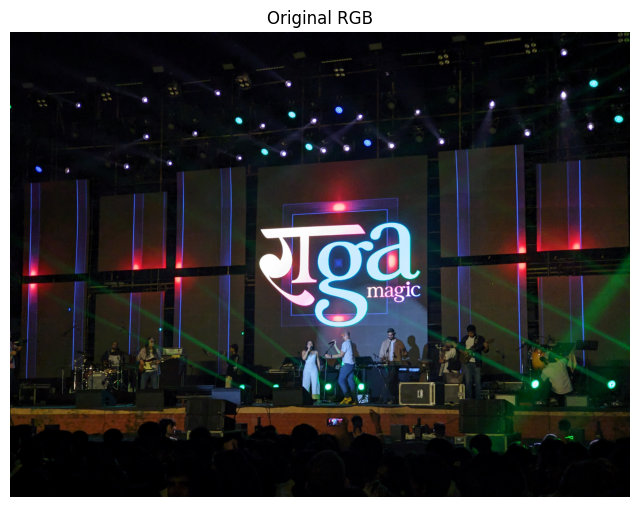

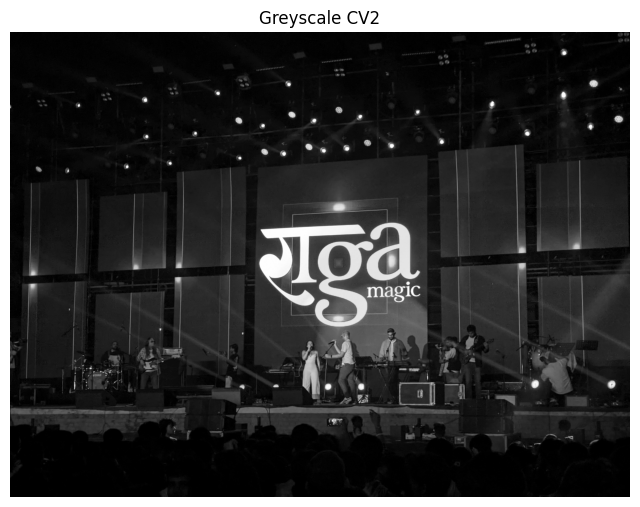

In [29]:
from PIL import Image
import io
import cv2
import base64
import matplotlib.pyplot as plt
import numpy as np

base64_img="""
/9j/4QUZRXhpZgAASUkqAAgAAAANAAABBAABAAAAQA4AAAEBBAABAAAAsAoAACgBAwABAAAAAgAAAA8BAgAJAAAAqgAAABABAgAeAAAAswAAADEBAgAWAAAA0QAAADIBAgAUAAAA5wAAABIBAwABAAAAAQAAABMCAwABAAAAAQAAAGmHBAABAAAACwEAACWIBAABAAAA0gMAABoBBQABAAAA+wAAABsBBQABAAAAAwEAALMEAABtb3Rvcm9sYQBtb3Rvcm9sYSBlZGdlIDUwIG5lbyAodmllbm5hKQBIRFIrIDEuMC41NDAxMDQ3Njd6ZHkAMjAyNTowOToyNyAxMToxMTo0NwBIAAAAAQAAAEgAAAABAAAAKwA0pAIACQAAABUDAAAzpAIACQAAAB4DAAAniAMAAQAAACwFAAAiiAMAAQAAAAIAAABgpAMAAQAAAAMAAACdggUAAQAAACcDAACaggUAAQAAAC8DAAAXogMAAQAAAAIAAACSkgIABAAAADQ3NAASkAIABwAAADcDAACRkgIABAAAADQ3NAARkAIABwAAAD4DAACQkgIABAAAADQ3NAAQkAIABwAAAEUDAAAMpAMAAQAAAAAAAAAKpAMAAQAAAAAAAAAKkgUAAQAAAEwDAAAJkgMAAQAAAAkAAAAJpAMAAQAAAAAAAAAIpAMAAQAAAAAAAAAHkgMAAQAAAAIAAAAGpAMAAQAAAAAAAAAGkgUAAQAAAFQDAAAFoAQAAQAAALQDAAAFpAMAAQAAAEMAAAAFkgUAAQAAAFwDAAAEkAIAFAAAAGQDAAAEkgoAAQAAAHgDAAAEpAUAAQAAAIADAAADoAMAAQAAALAKAAADpAMAAQAAAAAAAAADkAIAFAAAAIgDAAADkgoAAQAAAJwDAAACoAMAAQAAAEAOAAACpAMAAQAAAAAAAAACkgUAAQAAAKQDAAABkQcABAAAAAECAwABoAMAAQAAAAEAAAABowcAAQAAAAEAAAABpAMAAQAAAAEAAAABkgoAAQAAAKwDAAAAkAcABAAAADAyMzIAoAcABAAAADAxMDAAAAAAbW90b3JvbGEAbW90b3JvbGEAyAAAAGQAAAAgTgAAQEIPACswNTozMAArMDU6MzAAKzA1OjMwAJQbAADoAwAAAAAAAAEAAADIAAAAZAAAADIwMjU6MDk6MjYgMjM6MzM6MDAAAAAAAAYAAAAAAAAAAQAAADIwMjU6MDk6MjYgMjM6MzM6MDAAlP///2QAAADIAAAAZAAAADQCAABkAAAAAgABAAIABAAAAFI5OAACAAcABAAAADAxMDAAAAAACgAQAAIAAgAAAE0AAAABAAIAAgAAAE4AAAARAAUAAQAAAFAEAAACAAUAAwAAAFgEAAADAAIAAgAAAEUAAAAEAAUAAwAAAHAEAAAFAAEAAQAAAAAAAAAGAAUAAQAAAIgEAAAHAAUAAwAAAJAEAAAdAAIACwAAAKgEAAAAAAAAaQAAAAEAAAAcAAAAAQAAACYAAAABAAAAyAwAAGQAAABNAAAAAQAAAA0AAAABAAAAzQcAAGQAAACSRQAAZAAAABIAAAABAAAAAgAAAAEAAAAuAAAAAQAAADIwMjU6MDk6MjYABgAAAQMAAQAAAMgBAAABAQMAAQAAAFYBAAADAQMAAQAAAAYAAAAoAQMAAQAAAAIAAAAaAQUAAQAAAAEFAAAbAQUAAQAAAAkFAAAAAAAASAAAAAEAAABIAAAAAQAAAP/hCdhodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0i77u/IiBpZD0iVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkIj8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IkFkb2JlIFhNUCBDb3JlIDUuMS4wLWpjMDAzIj4KICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICB4bWxuczp4bXBOb3RlPSJodHRwOi8vbnMuYWRvYmUuY29tL3htcC9ub3RlLyI+CiAgICAgIDx4bXBOb3RlOkhhc0V4dGVuZGVkWE1QPjQyNjA1QUYxRTlDRDQzMDlFMkYwQ0QwMkExOTQ5QjYxPC94bXBOb3RlOkhhc0V4dGVuZGVkWE1QPgogICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4KICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgIAo8P3hwYWNrZXQgZW5kPSJ3Ij8+/+AAEEpGSUYAAQEAAAEAAQAA/+IB2ElDQ19QUk9GSUxFAAEBAAAByAAAAAAEMAAAbW50clJHQiBYWVogB+AAAQABAAAAAAAAYWNzcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAPbWAAEAAAAA0y0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJZGVzYwAAAPAAAAAkclhZWgAAARQAAAAUZ1hZWgAAASgAAAAUYlhZWgAAATwAAAAUd3RwdAAAAVAAAAAUclRSQwAAAWQAAAAoZ1RSQwAAAWQAAAAoYlRSQwAAAWQAAAAoY3BydAAAAYwAAAA8bWx1YwAAAAAAAAABAAAADGVuVVMAAAAIAAAAHABzAFIARwBCWFlaIAAAAAAAAG+iAAA49QAAA5BYWVogAAAAAAAAYpkAALeFAAAY2lhZWiAAAAAAAAAkoAAAD4QAALbPWFlaIAAAAAAAAPbWAAEAAAAA0y1wYXJhAAAAAAAEAAAAAmZmAADypwAADVkAABPQAAAKWwAAAAAAAAAAbWx1YwAAAAAAAAABAAAADGVuVVMAAAAgAAAAHABHAG8AbwBnAGwAZQAgAEkAbgBjAC4AIAAyADAAMQA2/9sAQwADAgIDAgIDAwMDBAMDBAUIBQUEBAUKBwcGCAwKDAwLCgsLDQ4SEA0OEQ4LCxAWEBETFBUVFQwPFxgWFBgSFBUU/9sAQwEDBAQFBAUJBQUJFA0LDRQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU/8AAEQgKsA5AAwEiAAIRAQMRAf/EAB0AAAEFAQEBAQAAAAAAAAAAAAIBAwQFBgAHCAn/xABaEAABAwIEBAQEBAUDAwECAB8BAgMRACEEEjFBBSJRYQYTcYEHMpGhFEKxwQgj0eHwFVLxFjNiJHIJF0OCJTSSoiZTssI1RGNzGCdkg9I2s+I3RVR0k4Sjw//EAB0BAAIDAQEBAQEAAAAAAAAAAAABAgMEBQYHCAn/xABAEQACAgEDAgUCBAQGAAYCAQUAAQIRAwQhMQUSBhMiQVEyYQcUI3EzQoGxFSRSkaHBFjRi0eHwQ3IlNfGCRJL/2gAMAwEAAhEDEQA/APzzTClwkCIzXF6PlyOCDmUqTPW8Gm0JExmExFun0pwKCQvKBmAsTpPa1XN2VjWKcWtTSSDcxJn9akJlOUIB0P6Wpl8r8tPmFJczWIMj10p5paktAanrBJqNFiEW2VOF1QIVlTHaAAL+1ENdyrXtMRXLzRCjMGY9DeiEyCB6/tekSsFxIsInbSadQcoINiUZVQYt09KDNoQYM712UOK9e1p3NOhiqBJzWIEj2tFODEFaYT6RH3pk8gB1FxAEGadSStMiBNr9P8FJojR1+twCBOxtXL1STcoki+hv270nzLEq2MgHU0JVnVsBuIp0JobZSEvOOycyoT7XIH3qVicUXsOEZQCD8x1pi3rPWuMQTJj7UmKwG5TInMI12SYAJ+wqcziAi8AEdBrURC0pQoZSJEC4vSZhaCE2ghXr1oZEfcQy7iw64QCNiDOulGvL5aw2nLn6+lRi4mRIBgen3rjicqbA2t/lqrYUPNx5KWlohAM9KcDwy/ywMo+Wo4V5i1JMwkWIFHmVCQSmAIMCP8vUKJxAbbb8wymSLaTAjWpRzZDl21AsZppKg3qdwDB1rvmtJ9umtSSJBIXrCpTpN4PeKPMd7GNKYJRmggctgSkTToeUqQogfQE1ITHQoZQCDcm4teaF1sJAIAnaRYmd6aLhzEzpMAWMbUvmZk8xASN432v9aEyNMZazKXJgTrbW81LW4bI9BAH1PpTHmFtCVhOfYA2vO9G1ykOKSZIkRoO1WCOQ3lnlMiIA+lPYYL/7ZNxaZtFConKSeh06xRsOF0yZsNRFIVDqjzEZZywDvTzasxJSozqSDqfSmcK3zrUuVOCyI3EEEx/mtOpQlLczc6xvbWostSFByqBElQtJtej5lKNvSKaTeD+go2yVAgHff9Kg2SoMJKSDG8FMRN5p1xwKWIHUj60wE5SVEmPypPXenlOogCY6kftTIhNnM8kiwKZ0NzMR620p2SpURJ1g9OtNtwoxKgAIEm/tR5rJGhnYiSKknQHOJSpI0JGn9acLgcU3mBhIgkmPT1oMpdWqI6CSAKJtaVkCTCRTsWwawhLhKCb9NKFKT9aV5RStJAEaAzZXcVzSzNwLDaokkK2opTJBkGCO1ONKUkkDc3UNjsD+tMl0TrFoJNretE2pPlKJVm9CDegYcGCZEzpRZlZBpIsYpttaFHKo5VAyDOtEhRWSFkARaRf6027GhzmSCSRAEx1pEJEpcFj8tqjiEkhRzE63owMqZ9ra1XQ+QzKkiQOTr+lHAQPbpQKIVrAO3euzFYAItTTI0EcuZK3L5dCDcU6hS1IIWNdBrbagzWUAJjQTbv71yYjVVtLVFkroebcU0mRGotOtxMn0p3DYgsAom4TlB2mItUZavlSAQpQm4uRN6eDaPLbQUkQbE2JE60h2yRxBvz8PgQJR5CShI2ULfaaLCtqRZZgRsLztfp2oBCwocxOqQSTadp/akCTr7GadEKJT2Tzg4SU2CQe/tTqlflv6k3FNNZkKFknrIijvnBkxSEHlMfMbqkyd7f0qU8kvtBMgGLxeKjp5yPYXO25p1ERoU23FWRJWK2koabzpC3GxAJ9SQPpUsNhIGczN4kGKiI5kkEaddT1p4OnWJyiJ2J2Bq2yaZO8lKm4I2t/enGMuFbIaMza2gM0xhVBSQMxk3MEXP0sKNbaWCqEEqUJERY9iRVYpMkIcOQA3SVXJ1FO5gloBOlz6RtTCHVFo5wc2kdKRLhQ0EAaGfcgT7Wq9IobHWlFCpM5BbQx1mnbSokyAr2vUVlOJUFBKkgm11Ae1tqHzBm8uVAA/LED/AIqdFbH1KQoLAiJkE/vQWQbW5hoCL/Wm1K8qxB6xH6Vy3j5ehEwAegphQ9ZapKgdxY2NClJaOfveCelMhVucQexBt101pQorUm9o3Fr0BQ6iHQDNotajZj8QmYy9x2imgoNJFzCTGn+TTrULWFxtuKQmiahKc3Ke5jakW4cqgACSJBAFjTaUpuQbxoPpSpUuTEItoB9zUWyNDqoYAtqZ03onlPpUhaDkEyJ7UwpxzyhYE9SYk041iHFsqzjaJB/SgTRL5cQPLKdbkgWqS3KGkoURKTIH71CwiW/JUuVLWVEEHTpapKn8jehVCb2vegA2oznKMqdzG9GUlbhWk6SDeoJfKFAkKCCL+tSWEq89xCSVaTJ3Mb+hprYkuSSy5zEE36HeKeSoKUUqAsZgdxUUOtZ5k5wmJ2muQoocMzcz196n3FqJzSwlWiY3j/PSiCiXVZTra50tURt6YkmAqP8A2op4uFSiUpi9u9qTZNDoA81AkxuReJN59BUhrKlszAWQoQOm3vUBzFylKMsL/MdqVhY8kkm4MCRqOtNMmmTMLytpQAe+kdaUqPmmQDom4sQYPvBqAvGqQlOQjJlJn0IGu8zQtYkJSnOkm9iNjOtNsknRb5ytKE3hPLYGwAtROStOUjQ2kVXh/nKLZpiZ1Jox5iiMpITqLa1Bsd2TVqDoKT6GpeGhplAHyxYdKqlv+S6kLKc/Y3HWpSHytSspsOvWq5Eky1LoWIVBTM3nekCSvILBCbQOoqHmWtrmhG0pMginEqKQOZXqCYqpkWy0z5AVwL2ttYAU4hXMk/mvP0qtbUtCACqZNTEYgL2GX0vUKIk1TxyX7T3pMNiHEKKRyJN1GbwNKipfRAKpzDQ96VT6ZH5lWBgRrrrUqRKxHEFbrkHNeT70YWrDMIaAGWbwJptSrGVEKkKgnemX3c4TfQTYmmRZKcfErlOtogTqDUZzkaKY5VGRA3oEKzwRpSPOpZBUrKofeakhNDeOPmshCNQLza9V+ER+HccKZBKpJB7CjefCydQkqsSDMelR1810mYI1EGr1yF0PvvjOsmVSmL36H9qjoUpBzAidelCtQhG9yCBqL0C1FIEJPsJNTAmeYpZK1KA6KNzPSo7q841BvokWJOppW3MqDmGbpH71FWsIBUCfQ0WKiYpQy5bRrEjU1DWnnVcx0SQDPuKDzc6yqygfr6U2VCy9z1iarLEx1ahkasOVBTCjsTfaBM00VJVCICAIAg2uY1pl1xSjsoCZFMfiVc2UhKRc5h01qLYrDdSEBSQeUmVA9Jmq9UZjplJsBtUpT4WopnoQRvv/AGqKecgaA63vNVWJseZhDS76ydf8FRMSm4Hzk882NOrUtDJSpPLsDqL7VFW4XZgG2oJ/tVkQY04S66krzRsZEUrDqsO9rn1EponXBBBg3g2vTKVKWkcxAmTlAvYD9qfcyArzKPOUpLd9yetMPJClqJBVmJKiRqaexKUrYIK1NxoU6zUVeIETchMAd7TJqL4IsaMZwnVH6etHmWpZWFBFoiJMUw+oQI5CbAHX/mlUAqFTJge53qVFbGFo5uncU35YSGRblF5MGZPan1qykQAet/qaYc/7kztMdKGMMKCVa6DrFqVtScyig2zTJ1nemNxeQD11EUZLiWzkIg6ggz7Haq2yS2CClKcUqde1LmVnRBPIZ+1Mh0pjS9wDr9KXPmSTAJGoIkEzqBSsbJa1DKiCALAzVky4iQkDa8GCT/SqQkqSkqIhNyAdqkMY8QLG/TSpdxVKNm74ZxBtbSEGc2wImtJw5/Ik8wN7m1j/AFrzPC4woXaDvM6C29abhvFE+QkoVz6QARvV6lZFbGyaUFuZyJva9EteQP3yqV16CoGDxiXUTuNRM1PxrCHm+RQzxJB3tNSbLomedUtAKHJEmJO5NqpeIYIoBWCRF0wbTEVo8epWJbTlQAtOoUAf2iq3G/8AyIjMnmIkSNKytbl1mKx2GWoKUsoaiZUrp3NUpYQv+YohQUJBEEEda1/EMOdFDPmvy6Vn8W2lDiUj1Nu1EnZXRASXEKgJOQSkWsB7VDxjIyqTNhIInUVYP4ksAQM0GJ/pVbiit95LhSQk2vvVbRKxnEuFYTra2p3A/pTTTfOnbMIp5bYidfrUd1wtGbx9aktgJjTgWwU2KCo/5NdmClBROUDSFa+9QDikNIKU/IdgNDuRNAhQyi5iZAAiTsTTrexFul5ClDkn/wAr6zarBx43QB+UAA2M1SJeKEBZUFnSEm8nQxERUlDz8oLhBcBhRSSb9NNKkkJslrhRET3kb1xRe0Eixgjt+/WmA8c+SYgRPU0qlLR+a3WdalRAdylSimcwUIOlx3rn/LlKMygR/tAj1uaZQ8l1aSJE/m6iNaVxKpJiSBPb1pdow8e75rrakKJQLA6A00lRS9nEzATcbDrRKc/Dst3yoWTKzoNIoTyAwo9Nf8tQ2DQ624FKUsk3NhFtBT4UEmZB9TUEKyDWxtJGh6D1oFvHPEgEWIJvbaDVuPJ2EJRLZBSlQcEW1q2/HN4gp8tUxbWO9ZRl4KXzkgC1zE1LaeQt9sJJQJvJiB6712MWdNUZJQZqk4ptbaAoiASDJuDtarNrEIiSRbQjfpWXQ+hSAZHqbGpbLwQk85KQZ7RW5SMk8ZrHMShYScxzbx6UTziVthKVp7jewrP4biDWQBQ5/W0VNw+MK7QBefaqZWRjGh3GtpXiEufJGh9utGwpKGchULHMJPtQhX4jEBF1m6hlF4A19BQEIdWUgyrsJ/S5rNJGyDBxObMHAZixHrUHGYcvtNrJTIWpRA2tVq5hjhFJQVTmGYE6KBoHMMlZlU9Ld6rbNaKeT+HVlEwpIVbQ6gTUjALVh0LISM4FhGms7E0mI4diPNORXljaBr/WlwyQwMjpM6z33qJJqyWHFSI11mOo0qvx6V+Y2U2zHnBAJBqUh9vzQm+aQbUJKfPfWsC5zJAkaQP61OOzF9IKwEpzp+ciTmuNL+9QcUkOtDKCc21tyDP0qRi8QG0H1n7VRq424h4ttpEDQ1buyDkN4pKUpLcBICrEjeqDHYotKUSlC1iyg2TAPoR0g1ZYrFuPuD/coxpr/nWq8qErlsLGblJJkDT3qcdjPZFONU4grII2J69vSoqyvOlQypSTqRtU3FI81s5Rl6VXhSkjco0IP9Km+SpscxBKlhcjLFrjX9KaWoLKVE6A7zB0onRKBAOk+9MtpLUhUX71maJWPZlNQR6a9aHLa9jPpS5rmPtQuqukGJNxNUtErEzDPFogz1Jpwf8AaA+tAtsZUwozJkkbQP6UiU3n7ioMaYQcytqaFhOa/p/emlSVNG8JTBPTaiXqe9IVWIJPqTY1BkwsQpD5JRAA3BmT3G1BkEpMZt6TLlAMDpI6dRXCYFz2oItj+GUtBVzROt6WysSjpzftH70HmDy4INxAgSRSBR8sGZJMAdO9ITJCGwjzOqu1ClC+UC4Cpt1t/SgHmINyDtIOtOtKWwOUArN8p7a1JMrodXKlklMybyN6eSooQRNjaP60y5ilrazrUFr1AEAgdCBrRMqOSSLzcAfWnY6HTPkgZo6ClKTEn7CkTpBEGiyle5tTtEaA+Xcz2jSRXKbHmzlFv170aYuBrrXBJXa+vWl3IAWoS8SiL9P0qO5KMYSZEx72qVZJkj2B1rlNpWtLq1TOtOxpEN5kKUFlOYa32toagOJDpUMkTaMpq6dUlLpQLiNY+1MHDhY0mLyfvpVUo2WxkVL7SlJQWwc6bCBFvSoQZP4szGYTJ0ua0K8OrMSMp7EXP0qOMMUrnIkEmDGlUOBLuILaVpZW2kWWtJiNAJoP5iHZQnlEx0HW1TcQnyl5SNaBCSoCBbrSSolY0FnylW3m/TeozqvMxSSoA9D07npU8pTkunQkRB+tMllK1JurJN0kRI9KExnfKk6TsY1FChJQox8szY080wFE8qoAtIpxTQSqLG0mkwIakZDICp7dakMJUuVSZIvG8bU75WZ0A3nUAiKNpgSTlPKZFtNpqDE0N+U4oqsQCZk7mkRhs2gIMwdj61JRK1wU8g1tUpxkLCdtOaRHpGtVtkooi+WpQS3b3/yKu8Bw9xorcWAvNqIBkQQfsSKis4VpCFOODaySLH7a1P4PiAjEjzCPIB6fKYsIrNNWi6LReYB7zuFeQ4nKgO5oUQBJH+CKt2ZddTKQUTM9aadwOJVhEvIYUwgmAXBE+xq04K2lTJQblNjWBcltgOkfikpbBzkagfarvCMOrAWr3J6VDVlYXnWnTSRVoH1rwqSgpR6pBH3rSnSIVbNNwNrIQk2m1bbw+0rzwk76Xrz/AIBiTYrOdYGgr0rwzmeeZyp2FjXIzypmzEk9j0vwjgVLxSMspVGw1FfUHwu8KrYwicU+OU6A72IryL4ceEF8VxWGS3ZSxqB8p0/vX1DhMKjBYZphsQhtOUVVo8H5nJ5kuEX6hrFHtjyx6urq6vUnLOrq6uoA6urq6gDq6urqAOrq6uoA6urqbffRhmlOOKCUJ1JpNqKthyRuLcWw/BcEvE4heVCRYbk181fFL4iOcdxBSUpQ3flGg0H7D6VrPih42OOdcZSvIhMhIB1HpXgHiHjedxaVHlivNanVfmJeWuDpwxvFG/dmN8Qvf+oWqdCbn6V5L4qj8cY+bU+pNbfxHxKXnTI9I9a878QuJdJUleZUbGpLaiuUt0Y/ijwS25G86jvWExjZTiF5JJMnlEnubVr8apTjqhbv3rKcVbW05ayRv2rXjM+RWjOYxKvOJII726UwTCN5qweZzKuok7mZ9qgPNi4EaxbStqMyREeSMxM61CfhISmwjSbR2+tTCkT6WnvUTEJDqz5mouNqtTJohOIGZMGSBE7xsKQjKsaHWdr/APNK8hWeQSfSmljKmZFzuKkPcbdWVA9SInoajrhSFJWR1qSuOdObQwIMHSoflmFDMFelNFbQ0G9IFpi4sfWgecKjBIA0p1KitUbDqdqaUlMqN97TO9JghouGNPmsD27mkLmXlG9j/eiWkJSjLcBV7XFrTQr1MfrUaJCFR8pehAuNSSLm/eaYVCjc5oG9otTgUUqgXkG1NzeTYnWdKdgDB6G4g3Fx3oFLXcdtRabU4rlQZ1/XtQJWJUkAyCQYkgGSBHW16kOxhKnc0kyALSNBS5VQLmSbdJ6HtSuKKgeultK5Py5yYE6g0xDDiPMuQCe+npS5h5XlwAgGAjrpr7zR5cyZFhqB1pAjMeupkf3pgEwlDgVrAuLwNRI9aZzFTirTJIvHppToSpKTCrbz1phKgkEzI2+tMAxyPC8Tcn9jQ4nM4ptRhQFwobikUnzAdSZ31NqNxK1qQBqOUAaab0gCW4PKUYMwRMb+tQllJwy0k5cxBPU/5NPh0PCAoiCROt6ZUm4Fzab7Gb/vTQDuLd8/K5mKgABl2+m1N5srYUUZTqBE0CUBomEgRcfWjezKYGVRQrUXk0ABiRmg3iJNt5i9C4cykqInYH9qQqdkSVW1tY1zR8zMYAA7WoAFwJUgASoi8be9HmzJseUETpFiKQIy3HzA3PWl8wIblQJCjFzO/SmMbW2h07EXJgTFKlSmgMhGYWA2NE5hsiQUFEATGYT9NaD5oMQdybTQA7hyVLWqE81jItUUc+LUABAJItpFPIVlWFBRB0KetCW0JeKhOsGaQjnIU1IGabwKRvmSTlSg6iNP81pCQFxttG9dPPKjM60wFQspUSJE0hgAkiZpQbkgWFq4A6e89ajQDawkki8d64SGsgGggfX+5olRIk3maAadTvTA5CQgSnWdKkBYyrTmAntrTJOUhMEmkiQc0zqNqYCiMoG4pBEmd964SE5lC361yiFpGW03jekAq/XQRGs0KXPMMqSFflg7Uo6DXrXKTE7Ai4oABaSt4rJMmiWVZMugNJOUE2v0pA4qeUcp96YBNrUlRmYHSjcXIg3BMx3oAoqJBsCKIgaZualYAqJGWTA0FOY19xbaWUQW0wq2tACdFX96FStRsLE0ADJJCiK6cuh9utKEQDlHt1oYgepqIHQJiYBpQjMREGhETfXaiScpzGARt1oAEjKcp0vTkBSSAJBN6RRClA6nrXTGxJ7UAc2ryQo3k6mJoXG0lzPEE3jvSqMA9enSuvvrUrARTOZROe6taUBUlJVyjehIKrQZ7UoTcwNb/wCfSmAiyFuDMLgaijXyDlkTQ/IZI0pFHNcDXbWgDkHKo2ue1dlui0lIj6Ul5k2B3pVSTc5SDFr0AK+sK39+tADsDpRK5lyoTtXHLEQQKABUJiDbtS/l1ApFK5pFh+tEb2iN72pCoV0+Y1BIAFC0mG4J1rl3FzrvXJAyxH2pjOQCMwH070pVqkGKHKR19xRIEEqM3qICBKSCBc10XUd5muUMyMyBB6CuSjKLgzQAhiNASaIICxBMX16V2UE3BMCh0kyYjQ0wOKjcREUSVSgaSTvQgKKpAsDEUqk5JnbagAVXVNzRZgsQTFDYmQIHaloA4gA2tvXXuetdH6VwHNM0AIY6aHakIMKT/wCQNLBCjfWkV1NACyYkm43NcpGcg2PtXaptSpTAsTMUAIqNBYxtSLy5Qb5qVSeUqGu/euVGVJHSD60AGkjIpMSFEG9M2z3mlOk/c10dRegBZ5oEx3rr9hSAmKVCeWZk0AcBAA2NcDBkfSuSFRJ0muJE9AbUgOgzmABPeuNiAPU10RcUsE6j6UwEUAUka7zXTlQnWRXeuldFrUgEAmSaU9K6NjeN64yTTARKRppaKUHlIG21cf1rhMEERSAJBjuOlAUGYBgdq4JNthHWlBISZoATzMnWQKSVKBJNt6MQVSYJG3WukKTJsRrQABkgC0DQURMpTNiNqQWSbTXG1ib9qkB0DeuIgyLUt6QE5ulRA4E3MQetcsyZJk9K6bUs3pgIAAQsCY2riB5iVflVeK5Wka1wSDBME0gFduIGkzpQEcoA2oiDsDNIrSNTQB2bYaVwuuVb3rjYwYoic40gg60wENieldobUijzRrFKDAnrrSAFSgUyNZovMFgUyBXcupE0gACiSJFSAUu2gExuTakvAIsrrSE7jX9q4qjS4NIDokAE6UoJRBSYtE0KYvrrRkiNJFAAi0Ra9dqTFq4mFSNq6870AKLWA96Q3M7TSjW+29IR0NABByAREg0rq8yQDoIoFi4mlykn0ooBMpzDMNtaNTmgse9BJIgj610Wk60AchJBImlK7Rt0pDITJrosTpQAiYMg6a0p1gg12un1rgL+lqKAQDcaV0XkilBjQGK4DppSA4xFd6fWugX1vXaCgBIBifeuIAFta7tuaW8E9N6AEi4ImluFSNK4mVAiwrla20FMBASgmNaUZgm1iKQdNZo4sOlADcXB3riARImfSlSb+ld1ANj1pgKv5ZGh2pEddq4GQZtNLACelIDiLkmlJvEmOtICJB1rgUz1oAQ3VIj1FF6i/SuUMl06UiidaQCz00oTofSlJkA0k0ADFp2ogcpBmuIgxtXDXoDTsAlEQSRJoRc30oibATNIANDQAkTI0pSnlg3pQkWNIVSNb0gAMmBFEBXZZvImu1EUwOABEnShA6GlkxG1dcASbUwOymaUpM66UgHQ0oB0JtQAYMaj61xBWsGINIkidJrkkJcQRvUQDQ2U8/QyRRO4jzs5UmMxkEbU5jEQUhMgKTMGxF9KiKOu9MBBaYuKlMzl5TB9aielKmcwvAoAlOvQ15KbX1qMpRyJGlOOErkm9NETEXGlJAafw6nLhJJGU6yLxe33NOJ48W31NNIQQqWwoWiZH7mmsA2tHB1KBJIMgbHqKh8Hyh8EKOZIuDsb1WSH8QweGeQjKSskcxFgaewzp/EtqKxGWJk2Av8A0pviGIK8SJc8zNAAocMnM8mxImYG159tKdgRMY4UYtp0AkpUFgne8+9QSglZVETepWPhOK8tIISk5QCdpqOrlEqBta9NERlwqmEiAdhQaW3NHGu4imzY71IDjImlSshMCkULTXC3pQAg1JNcaUT3vXCgBDpTrABULe9NhP0p5ohKdL0Ac8YWOp1NNGSJo3QcsnWabUmAJ1oAGaIWBH3pBreli9MDkx1pYJsbUM370UzakAIF9aVQtY2pFJgwKUoIpgcTFIOm5rthS731+lIBUHKFdaDWiPTauAGhoATaK6PWliDXRcRegDgbRNq6u60h0oASlFprjXAUwFSqAQaVRsBSAW9K61ID0gNtFyW0gSftRlolMgj1Gmt6aUyIVdVugomzyi8pN9LRViYJCLazqBIP1o1pMclrbE2rryL5xoUg/elyjKIAEm4AH1ipWAqU2JNz3N70aY6am8WoMwSdR6m1cdE+WLZjIGk0rJUHlK07C946UhVzJQBKx2t9aPPcRJvbekzGD6kSdqdhuCVFKoOhvfSJvNEts5kwbaaTJpsqLqCFqUEg6RZQ2vQtuLdSREIBmQYJP9KLGPpQEOXknoaFoqzKm86yL1yVGJXr26dqTMmwk6Sai2JoMlIMqAtcdabWQoiAb3PSldiQEpHQzsa4XOotqAOtCZFoBxRzgZQQBrtFJnPoTcEm0xaiMKQZH66+1IpaUxmt/X0iiyNAmcoCzYgTA1O1EhQsDHaP3pFqSuCu24ITHtJ/SlGWxnKImIuaiNEhYKUQkSU7ChhJmUjrMb10B0pgSBe2s9aOYAkAHQgCBPamkMAAqUdb77iiKilOUTPWkSObU6QQbg31mlUnOBa830oaA5CBc37nvRJVoI7zANCkDMSL+9FktaBH+GkA4IsTKjvP6mlLybBSfsIptJKxbSSTFOlIUm6ZHehIGAIUsFRUltJJsP1pcLik4sGxABi4sKPDNBTxzE+WE3B0UPSlLYSDlAB7WtNTFTHLTYymDMUrDQfDi0EgpEAA2+kU2FDKRmGsXNclJ8sgEwbiDcigCQhSlJy2SQJ1Mn3og2txqICbSUybd6awyi20oKVN7HqKcClKSq4AKcpkXna9RZagkKGVN9YB/wA61yIU4QPT/mgCbiRAkHsRRjInOSrn2j61BiYWUKUQeXKJiNxTjcSCRtETTCVZVA9rnrRyYBCtdR9KAH1OmAkApjp1mubnPv6nQUCVBxSoP5QNd96RtRSqCTJ6nv6UAPjJ5SipMq1SSBy+nQ0bCwlEk9r1Gef5wInrAm/SuskEEA9RA/wU0BJUooQTYje9xfpRFw/h0xAJkHQHaKZCkqiUm9iOoorqy9jYzp/aixBJSUwskm0XgzTnntKSQpWUm8EUGYNmCQdNNqbXE2SIOsimOyQMjiYB0tMx/hosoSQLdDGlMtRChbXU6il5laG2v9aVjFQkpfkpEC0Aa044eaU2HTpTIJSStJmb7XH0os2YCw1g/SkwCTMftRhZUACIN7jT0phSilRvAic0U6ghxFiTJm5/SkCHUSgagg6gmxpxvNkOvUzTB7GCIuYABmKVuUlRmAZmNzoTSbBkhzlUDEmJvMelOOYgquslRFwogW7WFRgu0WmLE336U5hlZTLlh10+vvSQIfS8cpsBNzlIp9GIQ0kzM9r2ioqY8wgC2oAMwf3qRmPJy3kyCI2+1SsZIbcTlnaJ0n60+0qwVOm3tvUdmFJMpjtsaJDgREiNj60MCSlw3hIM9NRTyUn5yNRYRaajMKROUquRpvtNSFqGQCD00EVJBQ4IyWHaaUayFEZRFr2oRoFhJkWEEaUquZCwLk3M1bQyT5eZlIZUc+knUHWakIeKghLoIjqL61AaddSfkIOsC9S8yngkqEEG8i+1SURNkhbyUAWPNYiDMkdrRQFSc5B1HKUkzBptKg6hdhBGo9aaSlMFSYBmbCB61YkVNEnN5SzJ6nTfWuDwlNiCpIUoqN5kj2EAUyvQZrjWxn70JiROkWJFMVDy3gtQzpCIuFJMzSqUUa9N9aj5gpdzY7DT2p5Sw6vMtJtYZdxSexJAOPLjIhAWTso5de9P4JxWVXmNobSBAyqKr+sVGSFurKjKQTuaJt8hKmyDY6zrSsTRIS8t+QucljAHTQ0+tQaCDOo0BqIh5aFEQY2k6+lGlRWtGcch0/wVFsVExLgzCZ667R0pVPHOe4mSLddrU15nKI540EVyYQDcCdx1pWRokecchVHpprRIcGW5JEwYFRw4rLuveSKHzjKRABKpBG396kOixa5FDIbE3g6U/wAq1DIo5tzNvaoDLhzDPBkGAOmk0aVZSQiCCYUSZi1FC7SUmFuhKFaHMQZsRQqccQSEKy2ixGwt9rUymFpkHKsCJAj27080mwz76yIt7UElEcRiUow6PLAKyLAQde9L56luJziCSB/zTbeM/DrPltocUNNKZ/FLxGK8xZTtCUkQO/WnRKixW62yoodnKmVkJB3A0je1L+JUi4BUgjMkEXEjQ96hYp0l7PGoAmkceX5RhQUVbHXuRUQTLBp5C81gm950oXnFIBTBTzQKiN/IZuCBIPXWu84oPNdIMnXSKlbHZNQnIyMhPrvBvStyzKki/f8ASoi8apCB5Scu1zqKNTqlpuRpJG570rJWPh4Hprm7g6WPSjLjmaUE7Ewe0VFKlNpmBqdRqBRMO5CEqJM3uNj+1JsLLLDqUtK85z3kEXPuIp9DpbKvy7ggb1VsPBpwhBAKhBBOwIn1ianl0LELBE/tUGySLBDqFoQpSim8kTY2pFOl4kJVlTpefsKhIe/mADRI60bThWsyYAGb1M1WSLBl3mKCvMoDXaKlNYi2h66VWMKC1LWPzWgjrUlSsjqU6QOkUComl4onQWB167UTT3KVWsdzamgpCwVFXIbG+nemHsq3kZFHyYg0DJqnhck5tp3JpkrUFZR7SKiodCCrMo62uJikzK9e6tTQKiWjGLyCyQUkiFkpuOu9MPy8qCRBuLz96ZUpKAVwFEiwigOIWsGxGkgEVakI5WJbZWc7hQIERuZA/emDiULe5Dyzf/NaVTmdpUgWMaDSq+0kjc3mrkQbJnnoWTeQDaD8wtcVycTcCTAN+ulQn1Ky8o5hb1oWs+WSq/8A5f8AFSI9xO/FiQCDMSqLjTSo61/z1JQTksdNyKYKhnERbY7UbjhhRv0iLdr0qJdw4pQQpPrc9B2qO66GUg5syjbmFz3ptweYAoEKvEdKjPuNwM4SsixBV6f571XJjsOVeaFzyTckaCiQptbpWgBSdYB27+tMIxZQtSlwEnY72gAULijm0yaC5306VVIYLp51KCQ2jYINu59aZ8xaV3AtcgHeYo1qzJN9DsYMVHWopKYUSJiDaDr9KgKw/OGYg9PlJ2mPemgkZiQA2RMpB/YUAxCEqzkGQIJA2mYoPOCitzImSIC5M99bVKx2cpzPv7mmlcs2yxcXtFImJBjbWdaFbhSpRiTlhUiIE6miyDYReCkkZjrly7U09CFQuAe1IjIkm2o0FCXLKkJPWwv0qSZEEqTIJ5hNwf60GYQIVMCLHUxR+YlSwrKEITfWmHHQ69nSQBpYAU+5ioRagq2/62qMmfMPU35tjO1SXFBJJ5lA7dOhkDSo6UKSZJEEyFJNj39Ki3Y0gvLSg9L72+lcpQQTE2saIkQTmQqBEhROWkwyA4VAXIGYkb1ElQ0FJ1MSRadKTNeYQFjQz2tTDLilYiAEmSAQRYDr604tSoQFp54vlFp39qdBQmb/ANIUfmMmEi1PZg0ykb6zeoy1FBJQN9SYvSlw+WEEzvKhc/2osZOw76khPyrSdZVr2q2wGPS1iRK4OoE2kVmlKPKASEASE2iZvT7ZDiYUDIsIsbG1F0QaPQ+FcRX+KJUeUymxuAb3Gk1qGsTmKSpR9DFeXYLFOhxKkZSvXmB03sP8itfgeJjEBCUlLhIFwCEq6kDUD1rQqaIxkabIPwi3HRqbQII2qpdaay6KVa8mR03qc1ivxDbLREyrIQdQRJ/SmMWy2hUJVYWuJqDRZZnsekIICDpqN6o8bhEqdBUi5Nr1qcYhClEKAy76T7bxVNi8IrzUOIUVQVJyGIgGx06e1Q7QbMxjWQlWSABBNxVUWwhaSpQWhV7DQ1ouINr/ABBnYQLzFVLicux0iBod9BUBkHEOqLmRs/y4kggH6GoilGLxB5tNJ/SphUPKyZc5GhIETOs9ahvKzJvqB0sfXpQhpEVz+U5c6xv9KTzD5gBBEAAqAso9RSPJClSSDBkX96aUkJSYtN4jfe1TQyWy4fOAJsTOmo3qT+KC3kAAxOoMbb1WBRzAybwbTNqkBXNOoFNESz/EN+YAsXi0Uq3FLMbRaCJMVW+aVZYykETYzPvTiHDntlkaZgQJ7kVKxUTkqzpI0M3I1jpSpbUpKylWQTYdqitPfzBoF9BN+sTTi4RlQvQG4Im8d/1pSYUSMoi4C0bgi0H+1BmCnQR8h1kQNKZS95ryW/8AttkRJ70braWEKAUFmI9D1qsYuIbWoktAQkAmNqBag6ghAGZO5196jIJylPKpe6gASfQkVIEBvTmOp3J70uCNABWRSkqNgco608hwJykhMiANqjkchTIEnahW4qJzCQLetSUmhNFsnGBYFyQLFPUVJZ4gIImJ0uIA9KzzKlzIP8yeYA6n9hUhLgS4gLFza2ldPFqa2Zlljs0mEfKRncClyNATaprOPbW4AgkAG87VRMYlTDJ5pGgBqSxih5YWqx0gbxXUhNTMzi0aVnFmFLBSlU8yQSFKAubAQRUnDuZ3Rm+dYzKUkQJrOs4rKkKJgiMpESDVvw7El95FoTOh1HXTeicNiEXTNDi2j5TS3Fc4TA1mO9RnErQiRmj0kkxrUvFc4A/7hj5QRMRc32phXmZBCigaSN6xtGqMxl5pwAIVOmvf2qHiCFohZLZiAoCpziM5TmuTad6H8N5ql+d8gIymNBNRou7rI+Cw6HUxMkCRPaqDiGOKSpIIzD/xIE+k2Fa5nDN+cVoQoKAg3Mb9qw2LlOIezCfa8TUluO7RGe4wp1StQ0lNtyo9IqC04FOmxvfvTqm+cuqsNABqKaabUl9QEE/Nf9+9XRKGE4kocSUdzE0wtlCOsSSQDb0p3zioqzSROgAt+9IpISnub3q1EGRXADKQClHfrURSQFghMqGw096snEiPSTrrUfyyT8uomwmhoqITrZVOvr+1qYUkZib6xbapLzRUpJkxM2ESKF9pSFkzIiII3qmSDkhFS5K9hexv70roC3ELJIgXgTS4hseakgxAvJt7UASbXi8VTIaYb6gtaZIgmLSRobmRTeawsQQZFtKQMHzCSoxoUk69xRZSk8hUI1Cd71WySZxVlUZ6b0h5Y6RYG8UhVykkG31iuOmb7Gq6LbFMpAIST2A2pSkqAISe4pERN5vp1pQrlN56RSEIlKkmJkaiaLobzv8A0pMxUoRF+8Ce9IZ2uO9ABBWYxHsLe5o8xStJk5gDBB23FN2SuNRO+9K5CRmnNaLiYFIVDyG0rJUBknUgU8HDmBBIIAAvr3NRW4XnTF8swTSohaDJNhsKQya04VG5J6xuN6MODMYAAk7Wibfaoif5SUmQJgg3kiNKdzFKAZTbaTTINEpELVpBG5mKVfIR11kCx7VBbxTyCZEAkm8T6U804Xf9otef1p0BMQkrVzgRFwRpR/h2kKUfMB7DamW80ayOs9aJlQW4EEdzUbEkPnCsrc5CEWuRJHpUdDI81QmUjWbAn0o2XAt07o0027VIQ2MQ75aFIAJuAL9ZobJIYWyVoWtAyAAkCBJIgR96aez5kokEZc1gJBA0qQtQnIBCwTl6CdwetNKbC0AACZmevWoMkVr6XHVmUCPS9I2ytKSbpAvHWp7uHUgSVRO4/vUdcwIUoonmmLCosExkzJlSY15RBpSlE3ANrWp7ywq4A+tcrLBJgRbTSqixMYQoIVy9Ne9KhJUpYcTBNrHWiSpFzGm+v0NJywSib676UMY2y0fNWFi2x3pW1DzCgki9oFq5SlwL8u0UNpv6zvSYD6FFbZmxFrm52n6U+tWctgHUwSbZRUYKCwFQDG5N+lLmKpi3SevtVTLETXZypym3UkXkanvVng+HKxLaVtEECxEbjrVInOsGFEQJuYB7VMwHE1MJhCwEJsYmx7SL1U0M3OH47i2sCGMQ8p4xl5osNhR4LiCmgSgxN5Bm9ZbDYw+cguyuRJMaGdB1EVYHFWSWkkCxFtDWdwodmoRiFPlOfXTXYmrNplayjIZR071QcFGIxShAT15zArccGwWJWoJ8sBUWgm9R7Q7qVlt4c4IXnUJTIm5+leueDOCYhGNRMLlUQkaEm3sBWZ8H+HcQ46la0ewFq9l8MYD8GWytIQRBnvM1my4Ut5BDM7R9S/Cbwk3wLw5hcW4EqxWKbDoIHyJImPXr9K3deFeEPiZjeGsow5cLrKbJbcEpSOg3A7TXqfBPGWG4mgB3K04ehkH960YcuKMVFbGialJ93Joq6kBChIMjtS1tTTKTq6urqYHV1dXUAdXV1dQB1dSEhIkmBULHcXw+BQSpYKgNBVOTNjxK5skouXBMddSyhS1mEgSTXmXj7xmlTK2mlAIFrG9d4o8dlba20nKnoK8X8TeIVOLWlS9ZuTXnNVrJZ32YuDfixrH6nyVHinjwcccUpWavIvEnGFlaz12rQ+IeIqQtaSrWddxXm/Hcd5nPmuLdKowY6e48kr3M/wAexpWlwpVzE6TeawnEMUUqXObXVIBM/Wr/AI/ifOdC0AJttWP4hMqlRv3MV1IwsxN+oqH3ILigrmNpGorNY2VOHzMxUTNiSLVbYrELSr5bJH1/rVPicQXSVkZNdaviqG3aK7FpCFqWTGYWHSqt9tSFmXAATt1qy4gkOsJJURAgkHU9LD2qrWpKkqABGVR5SNL6VoiUsaGp26TTOLUhxMIII3VvPSkW8qep1gDam3HDBChAEkE2FWIERHCU2tfX03ppxsZDprIm1POrPzSlW5UNB0n2plcQSSTNj/SpkyM6R5qUbKuabCEJVBNtRO9PKbClBRGmka00oZBfROpSJMem/pQJoiZj5qhtpNoNMqbEzOWDGnan3G8wAbFhJUo8pnpEaU3lVlEqyAbACO9MiNvZoUpFs11QbkxAP0pvMlKACNZ5hczTpcyokxGltd6ZnzZUkWi/SgASL67aWE0JQfMNhMSCDIjQyOtHlGUkiZ6UBzZScugpADBSdQbfKdaApCTGUexo7TJ6bamgSjzBNssaDWmAJYUpcBMjWSBHpQlsQUrIPUEd+lNl3EKfCUoVbU6CJNqVx1zOkkyvQwLD1NSABSFIUpX5c1gdhFcM2YiSPQW9q51JypRETca0iJUny1aDWdvSmAWbK0rcbA/S9MKzKQCAADqenajU15jRCDO4jT/mhQ4fJSDylOoNr00Amc5tNR/hps+cogybXB0ilKhPzidxO3frakSpbk6ZYlJiO9MBEBKmgpWYEGwJ170CkqSSoJzApCYJsKddR0GYak6QaBr/ALSiVadbDWkAnliRGlwSL0haKjfYGAaVIbyBXmCYmBvSKWuEpSJJsSRb0pgclISkkNpAv8tzF70MFSQoRkInqY9KdU4lMEoJSLEixA6UgAUhIakJAtFopARm4hUyEzYaGucGZIKSTBuDsacS2UlRQR/5ZlR9OtNlGROaSATTGcE5hnKRmBurt/kVx9Pr1pQhSrgwn9aUqzTABA2igQ3bXSPvSLlYk7/eizc2gIGwtFC4BlGXpce9ACqICQJmBSJmSSbRtajSUoTJuaBSSRITCTodaACtBvqYgmkzDKJuBrSKU2gST6ClBDsKtPpFACLEifvQjKm+51pSgp0AIPvSttjLK+Uk0gAWfKOtzb1rgo5r/baiBEFUiRYE0hKFIKp+1MASFZjJ5diaVZCTy6D6VyEzA13pcwBhWgsIpAJaJ6aQKFUkE6mbVypBtpRJEJk9KAByiTaJOg2rjymAImuSrlAkya5ZCdTcWigDknMIIHY1xCZMa9aRc8qgbG8aVxVrAkdYoAPNJE3nbpQWgg2i9KI1GlITlkSDOpO9IDkkpEp2vSQIt7CiSmU3ED6TQ22EQJooBFgTfTeuESep0FEqB0kUiQAJIgnekApidb9qQzm3jeugJPrS5UlMzY7RQAi2ihJX8xG2tCTmAUdNxNE2QDlBypTN9aFa/MJCUggdamAikjNIkA7UYOpP1oVgiAQdaWeWlYCnTN3pAb8psetcTlQANDsaRI7WNMDiDcxPUVwj/wBmOlq6BNjfauVzKGoJ7TQAvcT61wIGsztNDdKjJtsP89a4BRINsp70AJylEBOpvRKQG4AEgWBNIYAJOvSkFrm/alYCqQpWgBNceSxF9NK4job1yQogyJoA6IAUb123euToRqO9cbaXg7UAcgFAM3vFKVkbSBtSEyB+9KecQRHpSA4TNtKAkFcGKKSD2pFDMqbAxQARMyAY36UBMggWPWikkAG5FqFJ1G3WgDoGUQSfQ10mBNt711pIokgZL77UgEn6Ukbk+1LECQDl6Ug0Bv70AIec3uK5aTlJFzrSkAxGtcAUjvrMVIDklWQW964ArBgWHWiSo3vf1rio6RrQAIWAIza7CuVcQNtq62kATua4jQGgBCm01ybC9KdLa1yiOlxQAkRSXmRttS67ketcVCQZnuKLA4yQCI7ilAMEGkChEAWpdRBv60gE3gEgDauKCdDFKE6E/SkUkIuDc0AcrlTz/SkmTbSaQgkyQPenPkg2g9qAAUItrXAH1pbrm0Jmw6UpAygixigAZ72rtp1opkSZoU85gXigBfWxrjAsJiuVMAHrvSEHfSigOi9cLC1L6a9KQ6W1oA7aDr0rt5rh1uaWSBrQAhzEiLDrS6jWSNjSEyIN57UgGUX13oA6DN7H7UpF7muUJEm8dTSkWEGZqQCCB2vXQPXtXRrcXpIg2/5qICyZgf8ANIDfoetEo3gWihFryCN+1AHCCdZneli9IBNxa9LfegDimRNcLmfakGoB01roITIJnWKAEOtrA1xnWLHalUDkBGhOlINLaUwFKdDXAAExeK4JIEg12okyIoA5QkyKQH/ilGvauCSTIsO9AHH/AAV2l65QgyfpXCDQAhjUV2WDJ2pRF5MUhOwuNbUALMqnUV182oNKPlIO9qEDljfpQARtO/aaFKSoEiBSriIN64GE2/5oAQpIEk+1dqmY+lJGa5sOlKm4iIoA4aTtSa9jRQAYOtID0+9AHAwCDXAEC9jXZTmk70pIm/1pAJXEe3SljYWoRpemAQ1pDMEe9d3riZ7UAILjt0rlAkWrgTEHSlmEkfagBRG4+lIUWtrSAGL2pJM2uKACSkiduxpAoZjNqWNYua6REGgDjcwNBXAif3pUC5Mg1xIzHbWgBDG0V2ugAntXSN9K4xMTakB2bIk0hHXXpXKBJtS/NJpgJtFdFjS+lt6SogcdADpSpTCr1w17Ulr39qkAoGs6UhTmHSuvtXBRAIO9IDhMRGlGYiIg6UIHLHvrS6jrQByQJnahIve1LJ0P1pUiZN6YAx71xEgCK4Em2gpew1ooBABBvBrh80zauKTmM2rgIHelYCxOptXBX80QACDrSd9KVKQtxIJiTTAsOJMJbS2sm6hNVxAFyfarnieV3DNCYSBaEwKpiAg6zfSkgEiaIRNjbpSG+9prrTNADh+Ui3Wkw6QcxOo0AoCpURcAVY8Kw6Ew8si2gNJ7ICzw7Dv+mOgElKha1h3qHw5tnBqV5j2bNqkCR70o4g/mWkEBq4hOm9Q+G4B/iWLyoCjrJG1QXuMfLjPnB1RlCVdJ9qd4EXHVvZVkJTKv8FBiOHnBNLbWObN/n7UvB1rYK4AAIi9oo9gIuLB8xSzdXQ1GWVaKMzepj4kkg9RNQ1JJMgRPapIQgiNLaU2rWdqcUqLC9NKMmpIDgCb9OtcTeaSljemBxNulKB1pAeulcdYoAKYteD3o21D13AppJiaJCoMRfrSAJzUA6UClGwtA6Uqpm5vQkRQB0/Sl1tSAXtRJMmIvTAEWFEgakiacThXM1021o0YR65yRvelYDNpg/WkUMtgQruKtGcCCm6ZVuQaVXCySCqbGOn+bfSlaAqCCDeiVHvVw7whJYUtBCcv+43qmWkoWQTMWmmnYCTuaQa0REf3pNtqAFEHtXAhKTua770kUAKBuda7bvXE2IpD/AIKAOvJpAYotz3pB0pgcDeu1PSuIvXamgD0o86h3EkgG/c0JUuFKIiDbofWlZy5BP1I7Ui1GQJHzdNqmwDTGWZ2jt7UqZzDTrrTKXMqNJMzlOk2mKc8xPlpXAkQIJ0pgOPTOeRBMXG1C2VJUUiNZNNiZCzN9falbN1ETcyekVFErDWpCReRJiRqRSnIkRnzKGoIy+lBmCu8AwDpPamlJukCAVcoJN59aGxjnnLUMpJDaddoOsVxxK8xyN5b2A0B9YpptaHEkDkymDIsT26jvRplYKulhbekA+hSsQiDAi8TvSZTGgsI1oAoLB1zDvrRlwNNyTr3pMBOZAnrrO1dsSBcqvOw3oEYtD6ghsXnLB0nv2p0xmtvckHQ0WDQNpSufQmxjuK7EYb8TkiUgH1n1oVKPlqgEgW1o0TlsrS3Siytkde7RTqZsNT3qShvMkjNFvbW5imyzf/6YaEinVpDTJgkSOn0+9FggoUlGRBA3JOsb0qTlgDTpvTCIQi6hO02NG2o31MnfSd6lYx7niIIB/wANGJTAjlJ12FDKrAW2nalHLaT11mKkAoV5ayIMG5J3PeuCgvlgibTtrSjl6z1maJCQTEj96AOGVKMtr6np70SUhLMBQMEnrauDSPLJKrzakSkKFjI7mgApPliCDtAGtt6JBVlAIEH/ACKAKuYgJT13oioqVaLXIN7UAKZz5gUwDMkWrkrLk8o6yNJrkJEpsInQk0KU5iSnMm90xAjqKBMeyi2b5ja39aUKUhVj3vpptQoSUkKMWGn70qlKUtRHNGx/ztUWTD8wLbJgyTHWuJ5J/wDID239KbumBF94tN6czCJM7iigHMwQB09aaUotKARYGZTFp1JrvNKZAHe4t7U786ST6gAX9BQACM6SVA8h2A+1EpwwIsSLHeelNOKWk62jTcDSKdZ5h8oI3USYGkiOtJAE0lSQZBKiImdT+xqSUsJvuUwZ6x/Wo6+UEjWTE0qJgZ1pB1kgUmMeVGcEG1rgiT0okuFKggDUaj7VH8w5jofTUelOt55mwBGihcn/AIpDH/NvESIvTZUlRggaXBFjSIzZhFhN7j3tRDEoU3mKbkxa9qdhR3NKlgJjQwNexohm8s+WAoqtMgFND54WYAMGxE3G01xdKBlTvYzuNb0hiMtqS2M1lExAMjSBRn5uhPTY0yHSkSonLEyLmOlEH0uQACDrdN/pQA+qEyk+h60qEloQBrvTaFKdUCRvEnejCioXgbXH6VBsTHlOowyCqY5YUSNt6bZxLahnSsFKrgj60uYKGWMw7j9qAZIHLaBraxoEOhRhMCJ6bipDajMaX2Me31pg4lHI3YdCBI9PSn/mVcDMkXIFp/pQASXEtOhzUQQoQQZm1tx3p9Csxm/MMx2Kj1NMOtlSTBEge47VILI8hojWIPS9TSJD6XBlHpPWnPxCGkAlGck6RUQKyqkxIgG/1p9t4tKtcEyQNxToVkplXmqSckDexsPYU4VZTIyx0imUKDr0zlTG5vN5p0KQtZBkTaQN+tSQWKl7IVSSAe1xT3k50gtOCSAbDUa/pTakoWQYAOnaiQpSTpEaKAsruI2q1ILHQ2pKQc5kWNOpOZRgi+pBtTS1CJBSTrcwDXNKMfY/SrEIklSMMICsydSkaz1npXLX5qAQ3lg6jemlvJS2U5RJNlHewvP1EdqZ8xzIBngdIppATA4LGIk9D+1NKXeAI3JNMBRSRJttAAos6UnW29TRFhLVlUkxNvtTqCpWkG+50qOl5Omt/tSlRZVykRY261BkSQpxyFIWe4gzFK08Gkb5uo39aNeKGIbSckOGwmwJ6TQHJJna2lVokx5DozQQBsep9KdzL5JiU6SdjTGGcRiFlAElNzO39qdCuc3kdeg1osKHEpOax1tB70gcCWig6zcztTSsQdQJ6zoRRqUrOJQDmsQbD/Jp0RoVSjlSAZEazEH+lGOVJWRJ111PrTaZTmRAEbETIpA4FgQADJm16jHgZMDnc5gIvb9qeZjMoExeSSfpUbzLAklR0AOgOkilUoqTBMG8X0NImTPxCGkxubSBPvTScVnUQTF9yBTTeTJzn+ZMGdYocqV8oyEToQZ1vNqAH1OFAkXJHW30rmXgorzwPYTO4tTXlmNoP1AoUxMkR3tVkeCLH1q5gNyNht6U8twNIQ2QJAsfWozfMBcW060/bzL67kwbe9NiC8zykxMmIM7+lKlwLSk5Te5jY9DQHngkggWHr2/SmnXEWgm9rTYz9hUaAkLlZGoG09K5ISg3Mm4A2qKlw+YJAyj396NTyM8wT7ReoyY0SFO5uUSSBMbGnWngnElCwoHKBOWRAvECoCUjELAy5gdUjU/apDrrLX8tedA2C+dUdJqtskWSW4TcCdfljf8ASnUrdy5VZbXTl+9RMM41nGRBCCPzHfapCX0ycvMAReNtKiNEguKRhkBQhRv6g+lKjEFBSJtrNQ1uFaknMco6SDTiXs6rHKQZEb7QSaAstcO4FqyiL30mncw84IWrbYWBqv4e6iV5ZkRIJsO4pVPHNmJ59aiy2LLiyE5Fq+029aFCkoSE5u8GoSXypsREjmvpbaaVWJF1JT8wEHvSJDruJaRiG0KKSpViQOWiffAcEKKt5Sf2qEUpe5lHKoiLKtSglA5dzEg6VNEaJjjhWwJUUzc3phKiiNL/AOTTS5SA2pZKdbkmidBUmU2gRYX/AOKsTIsMStBKtr3O1QF5FiQrPeQTEU4pS05JcKYJzXFxp9Ki410oWgMqSAdSRIqyJXIcSgpUpa1lX+1JOlMuYlWbJyidr0CnURzE/rehV5KxlSd96tKqHPNCFzBzC8gXFq5T6rK/LUZSm0De5ix3pcUkeW2FylMaJVBP2pNk0hxTjTaVJyHKdZMn2qOlIQhJypASMpgCSBe3SgGaVRe1sx3+lMPPBFlmEi8a5TuKokiRIUlE5wT2E2HeKQWBVYqnfSmFOoyCDHQmgXzoCQ4LmZAqtoAnecnIZAgnuTamnFFKDAle6SbjrQyWM0EEnUDW9Ml9aZOUr2PSkBy3A66VgkCIsDBA/wA3pF8osR1t6UP4pC8qAgpzXJB7UC1JiABcanvTXJIRbiksqE3mxHem8xveekaz3rg4qbzfYmmzLiwROUakxVkSthPKUmCvppP603nHmAdesD61zoOYzYxIFr1y0JScwIIi89d7U+0Qb8pIb8pDoP8AvnTrI0NRypKFZG0kR1BH60qleYNOWQSP1NN5jIuOpnUnvVbGkJ+IVnMkIQLZiJntQOOCxNpPSw/oLU6pJTK4B2g9I6VFU2HQRPIREEG4jrSJBlzzUyV22Qk2+9NKe8pwoSopIPzHuCCBbS9Rf+055cHksALnpRrUV5QQbC0i4inQHIzJNjBiLGPf1p5biVpAzGRckm4PtUZSeaQrS5E39hXKULGL721oBElbKfKkkTMkdKioySooVnGovMelG44FIlQmbEdKjZktTHzZbdB3pUOiUVWBka2j96aaxhacEZlkajSmA4pQBC5QdwdjUdD2QmT7n7U6FyaDD8TaVZwDLqU7yau8BxFWBdDjYUrpJ0rJhba2klWVK12Nrkdas+H41RACj8pEdKabRXJe56Vw3ipxTGdKB5ibi+hNv0tUvCYgKUFPAr3gTA61huH8RKMQnKopzaxuOh7Vo8DxQoxfPygiBH1mr+SPcS3mR5xzSNIEbxearHeRa+YyNx01jSrhTyXV8gCkm9v3qtWjI8qxuSm9KiVmfx+DL7uZv1NyagY/BraIAkQJkD7VoMRlkAK5zexqp4olaWlErJULXAmoSiSTM48kpUrfpE696hFsLbz5lFZ1tvftVmrLcESZtmH71CdbDQ1mBoBra5qommQlKX5OWBINpEwN6jls8xP2H3p7EKXnmLaWiIpFOfyzJAtpepoZELpSClOsQJ20kfauTiT5ZSoAq3MUlsxkSNba+1NKmQQANiDemRDw6/KSpExBkJ2SNABUluFGZM7i/WowVbSZtmG46UYdCACTEGwkXpWCZLU4y5CBMi4UDoakMvJQmFX2JNQGX0haiU6A8pN5tEn6ilbczKnIAojUDTsDUbE2Wi1ZIIVqIEUiUpvAgx1t9KHzg022CQXCkmJGxE/rQKeGe4gxIIv+1RGCpxTDwQoWNtaNbhQCdJ0jSKYd5gVxMGx3PpRuJLqIgggxMbVATBU4VGwsNzqa55QUqxTbdQuK4wgBB20vrOs96iKT8wmxM3OntUkiI+lSkKC7KEgqg7U9+MCJloGEyArQnpUJCgkiSbAj1+16QrKoANhr2qSdAS18RLqdkdQBqI0tU/h+ON0bJ0nrFUY1P5huB/l6fZcKJSBrqoiw7dZrZizuDKZR7jSM4grSUkR1jWasuHYp1p5CG1HmMXEHSKzWGxBynMR7E/arXhjgViG5MZbCx0jWuvDOpoyODRv8LjVNtIDys1o1uTtT6HlOE53JE8oA0FUcJS6FFasuxiYJ29KmJcUhaQpPqRNooaI8Fi05/NCwJRBurpPanBhl4okqWW0k2jcUwl5byC22kKAHKlIj271NKg0lqAQ4SCpJMkVVLYsUic2yE4Awo8pOa3zevvevMcZK8Q7EfMRB6TXqqRk4XiLC6bWvP615eW1IdcAlZCpJIvUYk1IgLSC2RFkm8az6U06k5IMgTJI3tvVk40HEEEQesQZqKpkyElNhe4269vSrkxt2VS1awCANzvaiZlfNYERvpUh/DogZbpOhIue8UwcKtCD0O4GlWxZVIQ5EKicw1EbGkVzq2AFpmmg43kvEnrOtKpZbIgST1qzYqYi0qi6Zm9x9qYS2UIUhAAGsxBBPb1qQ46pSZnS1NIcKrQCCOaNDVckKyGpsOI0hKbW0nc1EU2ULB27GQdb9jVilJSxBgmTE0w/LWaUnKZkxpWeSGRCkQLAmOotSDXp2/WnUpRkzmIJiSLx2ptSMyOQCKoaJJguQ0SVLSkkQZjSkzCLKCtpGnrFNvMJeUklIMayP0pQ0lkHKAAb3F6g9ixMIEJEq0ItTiGy+g5BG0f3puUeWlUZiRpOhogpURcX2mokhJUkZSNK7Mcqs3zRaa4LyrMmTG9cs5l543ooSYubMnWFjf9aTltJvuDXKUFER2maQJvobaUUMPzMpJRykiJgG3uKQuZUnoRA6etI5GYX0rnOZACgLXkxSoBxD6VLQtQJANwDf3ojiUJSrKFAzIJIIHamBEagXigKUqUSTYCxIp0BMGLbUkRfSZkXoHnTlAAABtYm/eo6fmIEd5tTt5F/SP0oYqJbOIOWAoTEAEkCfapDLmR4CRJEiCSJi+tViXcjgCZjeOvpUpmVLUUqFk6gix3tFQY0ib5nlEjQToBYd6TznEIJQR6ixNQ04zOspOoMTbSpIesbCOhG29IdCtOFd7g6SdZinQ4LBXPGs6U0l5pIFwZsU6ETSfiEIUAQJEXAqLI0PvTmbIEjQx0703lExoZ0iwp38QdkzOtNrUFzyqQdJUB02pDG2myhwzOQ6QLe9Dlura9uxpxSuUDTr0rlKQhF1X1EbmhoaY0JQIifb7UypRzaAW2O1SFR5KSJ131mm1pK0yTr9agkS7hlyfyCbweguK5aShxfUW96NtK4MJGs3JmBT7bJWkE3jmk669KixpkRpX0I2G/WjbSqTHXWO1Tm8CMwA9AJqdhsCZu2rsItPU2qpliZVs4VbuaCTBmxuKs8Bwv8AEoNiCLwRvEVaYPhCU3AKFESQrcTWj4ZwYFKOUgzcjSoSFZS8O4ApZRIKoN/Q9K2OB8KjEqSgATqQBU3h/DQh5KkjlBvNbDhfD21uJWhtWc9CIqqhXZV8E8HM4d1OcH5gkpjc16p4b8MNlKVBKlJG8ftUfh+Aw3IpbRucxk6EelahjibeGzIQAE5rWqDIuzTcLw2H4ekQCPWrxnFNrWLCsezjyspkjLPWpjfFkzaBHesuaXcCi72N9gOJFiCk1rODcaU2UnP968nwnFytIVm5dLGrbDcbWw3yr9a5mQ2wTR9CcG8ZLbbSVOEjpWrwfi5l1uXInrXzZhPFasqU5vvV234tVAyr+9c+Oqy4/pZ0FijNH0Mz4gwjygkLud9qljHsESHAR2rwJjxcYHONOtWTXjFWRP8AN5o61b/iuaPKB6RfJ7Z+NZP/AMMH1rvxrI/+GD614634vuP5p9zROeLl/L5n3qS6tl+BflF8nrx4hhx/8MFQ8b4hw+FTM5j615G94vdynKv71V4zxY6sHMuk+pZp7LYFpoLk9F414xAlIdynoKxPGPFinApOcqt1rIcS4+pa8vma96z+O4xzGFfWsjcsj3ZbHtjwWvG+Pefm5qwPHeI5CpSTzQY96PifEzmUtSs37VkuMcW8tapUDI+laceOimc7KfjXFPMKkLV7k3rDcWfTC0glV5joat+JYwLfWqdJGtZDiWOHmLSo8k/Wt0I7mZuzPcXxGV0iTrrWb4m4HU8hUV+h/erniTiFuctUfEcQXRAUQD8ptBrdBFPuUmOcGVqSoAGVAbjcVTY1YcadWE5UScoGwq3xiVZj+edKp8c2pLJ01lUnWpJEiteheAUOp1Va1VAhTVpA26xE3q4xSW/wSsqwVnaI+lUeLQtKkjMQlRtEX/pV8SuRGXKMQqJ9NqYxSsxSb8sgpOmkXp1xSpkj703yoTO5ubXqaIrkj5swAEAQBYbRagaOVdwQBsacLnJlF1SNfW/2oFrUlB2Magb1L2JpgqhKjmIvoDUdSxaNdDOkRSZlJI1M62mm0vJTYxOgmgTYD/ySCZOx69KjBXz31TBkXJHWnMUpCkiRHvTCkBaZmJG29SSIsLKhcnTaJiBTT7ZahsKyg7jr3pWSVJWiCq0TqaErtzz5if8Ad696dBYCCeZJsNJG/ekCrESSPW3vRKhIk6TpvSeYlSRKQIEA7ikOwUk5gEjl3qO42VOQjWwtrpanMxaaAVckQY3E9abUoNuABxKrXINwelADyHC2kiJXc32O9V+GU4DJQVKVzFKunSpam3HRGdJBMki5A2pEpCTnMgzEWIPcGmgGFhxeJKYMC4JH2o3MuWCmDuQZvSh9SlKChAO8XoXFZZseUTmi2kwaYAJJTnAsdRsI/em8jjgCiBy6dh360ZlQkHVAIoUBzOAVSg3MTpUkKwXEBKkqUBJ/KCJ0uQKafJ8xsBRCCYMwI7089mzpSkaEEAa965GHCQSSSQPl6dqAQKsydCoJVeJmaEylsgC51mJoCpbilZrK0iLAf5P2pQpSjGnLJvehDBSyGwLkEGQR16UuVxMrsNyBeiVKRJvNhFzNch3+WUG07DegBHFhSJIAkaDX3plKAgGTAUbxoacACRBi4gKmAL6H+tG9k/DoKdN8w/zcUAMqaS2pJIEfUigjM6sZSEC8ka3pxLuYA2JOgP61ygpSj5iswkGQNPegAD6wRa9BBUs5RHbSiMKJEb7VzcebmOwi53pgjg2UqJ0M/WuOV06woClQopWTIIjTbWh8zOQEoygg6UAJFjNyPcUTmIWjCtISBIkkdL02ApRBnlOgpxRgTNgLTQAEqgJWgRG+tdJnKLba0QmZPvQmMxIg9qAEMyZM+gptZzIkGwMGaMFU7jrFcpKVk9vvQAhZbDQUoEpBFuvWkSmUhMWVcCjUMyRO3S1I4DylIgAQR0oASU9YI611leveuATIURm61zhsIFpiaQHJISCYHrQmYBnX7UqYjt1rk2M7dxQAKhBt6Qdq5QEhRH7VyjzaW6CiMAEkSrQTQAOeRBpQgJG1IEiZIubEVylqnKLAdKAFVZNtKVI5ZIBMUMjNc69aWdQBE70ACslwwklJi0nSkyqyJBjMkQT7/wDFEluIB1/Wuk5oUbTtQACYtcAilzDfUm5pSnLJBsL10Z4MgRtTAS247Ulsoi5GtKT0IjpXKSMpAkn0oABaAoCJzE04hXlpAAE71yZmAkxGtCUlNzpUQOW75kRP6UIMESCRFqIoGYq0JvXJIzz3ipAcmFpkj2rkqNwAfSlKFTy/ahSopJm3rQB2YJBSYnrShWU3uaUkKMWJoYi2oj6UAcU50kEzekPKEgXFKEayY+1IrlBi8TBoALVJgaUIEtlUHp0pRy63mlUoQQAYjSkACVTfXvXEqBtp2oimASAOs1wTaTY9xSsBAQEyDPYClCxkPL712a5JudK5CRob9tKYHPJygQI3pESIEZjrROXMC4G1C2tTZ6UgBcmINj0pTJQLidxSKJcVJtFGQSkgaEa0ADcJuPtXKTYRY9aVAiSo6CwpDJNzH2oAJDaSJJuBYUgEjMbDX1oRKSZMdwaUDbQdDQAiVi4BmdK6ZBO/SkBBVBTB60qha1/SgBTGUKGvSuJ9q4DqRNcdNCaEBxsZi1EEDU2IoZ2EEiuJi+9MBCoBN9ehpEnuTPeiCZEqMmkUCq86UAcbTFJkkgzfvSxAJOu1IehEjpSAVYFyJpUiTA0ribQLDW1IU5ZAOhiaABUoIVbaimwm879KbTM3HvTgIQJJgUAKdJ6UhXH5QK4plQAMb0hRe5JE6RQAWaRMkDpQRqTSqIFgKSes3oAXQda7QGaQbiKUJvc6UAJtI0pUgATMGuM5YGnSkKZGsdSaACVAAJ0NIRYHWk9ya6QADYGgDlHKnS/WuSkwSfpSkkACluqRCooAGQbGxG1IDy2+lGEhJuZNC4IRawJoASNwJB2pSkyQOWRpShRWIAMx1riZAGhoAFQIAN6VKc1hpShZmCQZOlcsaAGKAEKbjrSGRYa9aVOnWukyI1oAQC15mli0Xk965Ug0ijpG1ACkgECL1ybgxY965UEDc6117wNaAOGml6QwDvBpdgJuaTWI360AKpRcTYWGsVxI2EHTSuSqAUg3NCgmI3pgLsZt6V3rXdtjXE6Rr0pAdH+GuuDI3rs5nQe1KCdToaAE1maW2gME1x9KEG00AESAmKSbWudK4mdaVQiIHvQAmbY2pJ160pXJgjQVyLiTA7UwESbXGgrs0qAAg10zpr3pRAMn6igDgN9IoUK5pNhRTcdKU/MOlAAuXUTO1cEgCZv1pcoNIRym9qAEMkzMClhIuDIFIkXgURQIN7TSAQm4IuK49DrXAgJsK5MZZN6YHRe164og6wK4BJuK4kkmdBQByjaNq4oAAM36GkERRKIkAmgBJJtFutd8tdMDb2NJBNRAUpE2JmuRcEH60qrSBcUjaSpUSLVIDgADA060pAKhtIpLgzFqUiTM2oAQoTNlWpPzgD0rjGbqK5M54GtIBboXImBSamaN2QvKaDe2lABHr1pAmRIriDHUCkkzAIA6UAdoADXHW2tdGYk7d6X7/vQAnalG5Jik/NralgqBoAQRB1pc1vWkCTN6UXkE2pgcDsaUKKFSLWpP8kVyjGm3WgAkwZJtSpZSpfKfYU2ZiQTbrU7hzAcBXEDcn/PWgCM8mLimhMgnSncQMjqgbXMULgORJmogN5SQelEkfzEjQ6XroKgCKcQR5qbSoGbVICZxFZyJA+Y6kWn2qBA0O3apuKBDaFGSDrJmagqUQYIAHShAIk37VxiaW+uxpDYz/hpMBSCkk9KmYMl1rKNBt1qEq+mlSuHuBEgmJtPSk+ALbDYYDnJHlm+QzGn3vUzwun+Y8QoAjSQYGp1qG0kttrQtQyiwUTEnqKsuEhvBoWTpAABB9xNUy4J0VfFHFYjFuJJPKZ11/wAmuwiFLTlACbiCbAW1P+b07ik5sSXAlSkzJJsPWgwqi46SuUoSCTABnvTXAUVrqZUpJsNY0io6jy9RtNPPrW48tUZAdgKaWAAU/rViIHJADZXAtUaZUTUhRKWso0NRwYPSpIDhFJSmx7V0WsaYCH7URI6UmmtJqelACgmiSrmJOlIIHcUSlJUICYFIASZM2jrSb0p/SuFiDQA+loBBUTtp0phMFwRyidelSA6nLEQdKbCQt1ISbk0AXiFNYRpClIlZ2O9omjaSt4SoAD8qZ+8bUHzLSVBWXKAmfUwaMKyrKi2SogAKI0vrPXWqWyQqUlhI/LnnaIvFSvxDraUoyxJyqN4F7Gd9qi4iFEZSFKV9hP3rm2MuHWVLyjUCNb/80mB2NlKSDaDMX00v9Kz+JjOSOutXbiW1Yd5zPBVAyEzG8VSOjlv1qyImND61x/ztSjW+lcYBtp0qwQneli4pDe0UpsJBpAca46da4f4a7ciKAEt/zXTeltSEX7UwOkGujmrjEC164UgPSUNmPljfXSgIGcGYi5I/euU4WjGkjcyAfWhzpSOZJJGpSLE9R2qbJI5+FaDWFDcelctJSJIkTMC4Hp2rlvpUgAJIiwT02tQoUUmFRPUikDDKioBUXmLdNa5KsqBqN7UDi0t5Z3MAC9EnNaEhWcTAtHcCL00ROGIVlUQomPyk/aK51xKkNk8xSrPE3B2vtTS8T5SwnKBeD1oF41tLZ5bKOse1u9IAmx5qStuwuIAsOvpUjLkSSZ9Z/amUISpALcgq5QsJ19bfenEsqyEqXI9Tb2pE0LByki02ib042ApYKoI29ZptKSuInXfSuUu0Zr9DAi9HIWOTkfWGUBAUCFSYkb3/AGo1rOXKm0jlkwAKZzWifbvSt5YVuZkyRf0tQFhBKs5yKOQC80bbw5s+9tD0oS+MkKStBPb/ACaUJSlKrk7yNKQDin207G4gA6EUK3EugWIjQAU2lwOoJyiRyg9qJlIyqnVNjG+9AjkNBxSQSYFpneKe5m1EXO2lA3Fis5dwdqVkBSic0xbW1TTIjqQYmDA67da5JBV+adJAo3IySFZokQDtTafkkam96Gx0OdZ0NduIm29CkryBUa6TcUbZ57m56Wp2FHXnWYvB3rpudvaZpM/lurtMpuTSoWXFibToRamFBo+QkAEHUmxPaiM5QRdUWFOlsNtklUza+pEWpgK5IjN6CaBBJUqRpsTe09jSl3mypBBGpJF+4pAkpgG165c5ibXERQAuYqVJmevUbCaAgJIVnIOttfejb1JPW4P7ULjQUAqQNhtP9KBMdS4FAqGg3NOE5WyMknUAGSPWowSQrTsCNaUILakHKQSnnkXnpPTWkSTJSloyog6ibf5ekXGcKChEQdiR0NMqy5gSBaCDGltK4KzG8AdZ/wA3oCyQ6bSnQiL0DYCguVBRJkWgE/tQElSSANdI3NGVcgSbFOh3qBIkBV8sWif7UCG2lIIOVo7oAIIO/vQqUYMxGkG1u1qBtOVlsjNBAAkCBtfvQIfR/KTCYiOk0X4gqsRpv0PWmfmAgbxJsZ3FGFBYMC5VJnp1oJCoeUoKgdiY2pEzCQIGS3vejQkXAsTr0pDKARaZ1A2oGCXCuCrXaLURny5uSba0J+UJgHYkHT7UgUbJtGs1MBxUutgQiJvIk/WdaLL5QAFjuo3HoaLKYsBJsKVxvLaZgwZFQYhWVlaf9g195/WnXJi59xrNNJZOQz6gHp+9GFFTZnUaf3qNCDCsqZShRiJi8DqaJshQzJuAZKiLAbAWuZpvKMonWYsbU+1kS3AEAX7g9RSYDgV5h0AIN5pzMcwITaNtu3pQBP8AtOUgbm/96JHKLmZ1nekifsPX8suIuNwkftRIUVJhB2oBKHAtAIRAm2ttqNnIlyQDfQTViIscTzn9SDrUluEEenTpTaGJURFiNtB3rkKCgR7G9xTESSoOo6BJmwo0J5ZnUyIptlxGVXWnEbSJ/wDICxHUVNIBy+WLRrrRJSUjW416U3f1E9acd5hBv2i2lWpEWxEPWNgfUfWni4loWA0k36VHRHmQZSDYz0pxbiFlcGdgbG/0qxAgVvFSQeuoj9qdZGZCiSFAbVH8tUmYoXXi0+lJgTrMa1IKHbLXBOmwkCPWucSF2AsO800tSUOzNzfXrTqXBl00gXqLZITywsAGw1J0HpT7MKbBELgwLVHy80k6yIJqShIYaITJJ2i1RYB7WPrH7UKpgWEUqFZhJEQIMjelWsI1FIVINmGiuDBXrGoFLh3RmUCqOnXSmc6VKvljtM0XKk2GtpoGSPPBJnSAQT60YcVlSqbi579qiXkAx6dqVa17ER30IqS3IsdW4p90rmIOxin1ucnIAJmTO5qMFZcw3GlIpa1lN7b9vWihD5eUki2tjOlEy4FOSR6Adfemw4MwknXN/wAV2bIVEC5uDAoHQYcU+6twwDlAtT6FqbVBIiBedT3prDpCgo3O0mxne1KcqRPy9t5mKgySQ+t9S0iBJGgix6metOoWEGObPqJTb0B3NREvFSoEA9j00p1KxdtatAFJgGx3ItRbHQ+6FoZhoHPFoB69aXzivWx/MOlr01h/5TnnZgrMLCDtahVmzqki8mw6RNFkGh5DhyqAUI0AN6juKNgFRvrvReXkNiQRczFNeZ1O3QXp2RZIZxGeQoknoafWrlPKR6moKU2BBANjmInKOtPectbqQrKEHUzfXWIqqTBDqs2YZCURuZt9acZxAUo50JW4Bl8waSN6aUrXKR2M3A+lI2pOcAETNwTtFVlhOD4BvY9qkM5UNKuM5vE/t0qGeciRqIEadqPOoNlH5RedJigaZIacCF3/AEo1kBZ/N/7Jv2NQsxUQUk673okPHTabQdfWgGTcK8plwkL2udpqcF+cnNOuoBqoW4lEE3t0m1SMOoeUVpUcpvzJI26RSJRZaNqGQ32uTYVwxdgOgioWFcVmClTERfeuKx5zipSpM2IGn7UqLSa8tt0Zcsdb69qTzEMpSlEemwNRW3gsHmB/3Tv6UiP/AC5lbdKkDRJU4FG3KqLyDNIVKyiFexO9REuFauUqkG4UCLD12/WnXIWkLELWDMEVJEWhHX75b/W1RcQrn+UdBJ3pXJgpy8+pJF+9MeYUAJJFzvue1qujwVtBdeUHram8t5CfodDSFRWlVu8SAZ6TQJcKzNjvfpVmwqHFuBYCsoSRsdSdiD0oVOJd+cjPfrH+TQuKREBV9xMxFNGFlRnW4g2E0hD62yst3EAGQFb9zFqjrha3AUkyvMJ0iBb60S3AjDkgz9KbKvKQM5Oc3gCAe9VjQ2pRQCoo00J2PUUC8UEJ5EDY2FqF5zOq1wRMjv0pu65g7WvVbWwUOjF5kmQZ1v8ASkQ4ESPf3plKgjUmNTek8wKO4i4jY1AKC8xKnbwiO9NPKSlRvpaRXKSlSCIIlUZjqL3PpTSlZVCNNbG2lNBZyjIB+W2VRAEn1oDmkkGOnQCiWorBMA9Qb0iF2OaI0Jvp0ptkGCEmCem5FKuPLC12CrgbfShU8lwQ2Y7m1ul6YUpKjebcokfl9fWaViDVzEBAtvBvO1IV5RfrNzvSJVlJga9KVXMDM6TegkmNqUVKVfKPXrTTmZI5DqPzaTRPHTy1ZF6SqCAOhFMrbeWgDNfeBbW5oGRcz7TilkpK+wMfWuTinHQorjXT9qccbW0kSZBEgqOtRnEhF5sKkmNBqcKFgix9K5tQUkwqZJ333pUKazpWADvY03lCU7Zs5VA0EnbtalY7DCjJBi1qZXC1wQIGwMz3olypAO/Y0IUc2l+p3qSA5DgSokgEXAAtamltpBmydwBqKJSrzEe1IuFk54lI3FITEut0rAjeCdKdbxSvPuMgImZ1Pam0KQomBvBFqBceanaDaRAAqLIM0GGeCUpynm69oq84bxE+Y1mEkJMk/wCaxWQaUZELAt1/pVhgcbL2QrkjXcfSpxlRBo3+HeXiHCEohMTHSdKmZErHMRmEagVm8JxLMpS1A2SATm2AAtVxhMUl9jKPm2JGuw1rRyR4Exnz7X1tefaqrHYcKb0K46RP1q3W2c+dRvZM2uN9qiYpnI84hEqAvBuQI/ahkkzOYtsJSYYietUeKSc8EEAXrVY1vymiZ239Y+lUmJw4xBMxJFiOmh+9UtE0zPeSEyMxNzBH3pl5JQDaALmTeN7VYYrBtsAqbJKyIA2PrUVSQpsExP6VGydkUg5Z0BOsQR3psjliD3PtTi45gTIF6ZcyrToZOtxHapUQsbzBpQ5ZkQT2ofOKDsEHrc+1C82ppQ3RNwDSFxKjzpEAFMAW2v8AaotCbH8wVl8shJ/8haKJt9SncogqFyQImozSUISQNDrJ1704n+WQpIlQuDSIExnEhBkjNBmDqT0NPrVmbJAtYaVVlwcknUzrqZuakNv5bBVtD1qBOyYh9SEELvtzGKVT3SJmbHamEqtMzvBmhUcp5gIIkRc360DsMqVmudNQTfW9AVSom8ToOnWlU7mtER1F49aH5rEXgH+1AhfzH0rgpKQT1EelCYUP2oc1iRJHUiD9KgRo45UwQSc2hMA+9ONupg5iEkddqaCQmVAj6d6BaUq9TrIFSsZMbxaUYgZVzternw/jULx5Q4nmAkdD0E/eso7/ACjmQo9SBsavPDjocWFuScu5JkmI/arYZHBicbRvhik4hZULEfrvUvD4zzRASMmsA3BtNqxnEeKnBlBGZIUYEkGpfA+OrdEQQgmCSBauni1EZ7S5MksbRs+HuH8UCICJkDTKTv6mr3ChKHQ44tKwlXLG96xzOKUtolDqlKnc2j1q14NiMjiUKOZGsE6XmtclZQ9jX4jn4S+sAZI2OxtPtXmzPM2onNKlGx1T2J3NehcYeGH8PuyqErEADSvN8K+VNgSrXpaZ+1KCsUXuOQL7HYk/Kesdai4glIGUA7qMAFR3JjepL6szQG50nem8QBMf+IJO01Ki1MhPNnywoibadu/eo7yFqTkQYtcnbt61NWrOk5rQNCbHtUdXKbiOgi9WJDbKkYYNFUqJjVJpU5GkwkRI3MxUxxtKVlSzqZjtUd7LJASdbR19KsTKWhnMnLAOpuTXIbTFttSOtBiUSADqOh3pEFeme0bbe9J8iHiwPL8wkdLimAk5ykgFJEwaPI6v5jIjpp2rgTk5pnrVMkIjPshYsn/n+lRvLUjl2A3ipy5URF5sabWkrJHTpVTiTRXCG1eooHkqkZUzFiRE1MXhV6qMoJ7VGWlSCYJ9bVS0NM5DKYuYm95nSm+ZtcEgx0pxcqCZTqYPUd6bvPU6WqtEzozGTYi0RSqjKAPeKQC5+tIFGdCZ1gUwFkKA+4rhqRQp1VPW3pRBYnSd/wDikOzvQT23oFISq9j0NORy21O80hN9P60kNoC2XTXalOXMEiQmL+uwpFKuIRp1P6UJn5jYai1MaQbakpUom9oyjbtXHmVNr7AaU1lS4sFJtuDrrXHMlwzoLg0mSHTkS6kyDF/anM4S5KTaLg6T1qKVqmIEd6Uqy4gNTIXbtNVsaHhijmXGxsSBJ9aktP8ALCrH/L1ACktqIAUSNlJIH3pzNm6+kUqBksK80QkjPrEbb0aVIQj+Ym86zURKVKEzCuo/SnEuJcQW3CZWLxHvFJgTA8MttBaZ2okZF6TBuIJt2A6Uz5YXlIUIFoG42+1NnBrdcBExMmDFLkTRNshQJBF9AL0i2wuFknXoRv0poNq89syqAdAR761Z/hximDdSETAVG/8AShuiIylLaUyZj6yO9O4dtt1wgkozCyjAA7C1T8NgUqaQClRy2ClAAEfv71NTwxqArJdPsKgS7Ss/0leaygUi9+9SGeFLQkHNobHoT0q1awxUJIg2gGpeFwKnGyYHWouhrYr8HwtC8S25Ik2lUgCRrYVoMPgS02rMhCiTAKDMiJ6X/wAFFhsJ/OaQ6gJBsIGtWuFwAW6Z+UKsYGw2Ov0pMTdkRjh6WhDwgEyjKSqLC3QafWr7huGaZYQmbHYi59aFhjyQUrhV7WqXhk53UjLyaJgRVL3G0W2EwiVtnywMp12q84fGBSlWUZovaqPBvjCIcUAFQYInrUhXEs7fmqgjrtVUixGxw3HEobKcok7iND3ov+o2kNrUsRKrEG0RpWHVxtGUf7dNdajK4s0hRzrNwIETf1mqmP6j0LD+IXW28wAUO2sVIY8SKQFrKCeYIEDsa87wvGXEBWQlSRtR/wDUTyCcqsu9uvask4lsYo9NwnifJmupEjRR29KtcJ4lzt8ribjc144fEDnmZisnvN6k4TxEqMgUqAIuNqxZIWaoyr2PZWfEq0QJHcg61d8O4wtcc/1NeMNeJChASozaxmrrA+Jn8icvoRWOWP7GiMz19vjZiy9DsdatcLxxTiOZX0OleTYTjLy3ApSvqf8ALVbM+JQiEKUMpsD3rLPDZfGTZ6a3xwoA/nctOf6yVk8/XrXnqeMpQn5wel6X/VjdKlfWqPJZLuN65xZTcZVe01Fc4otZPMU+lY9XFpSVZ/vUNXGloBUVFXUTU1jfuRbNPjeKKJOZXNWexfGHMxTOaqTHccS5zIWdfzWNVGL48pA1GYi5m1aceNIomi14jxc3hR9P8msfxTicrUpS+a+poMbxVSyq4ym5Mis1xHiSQVXzDXWtsYlEmFxHiBQ2bbTM6istisQl0m4F75hUnH43zmudRtyxvVC84UzA+1bYQ2KJSI2JxHMAqLGQRvVPiWVKgzCJJEVNxL4m4m8E7z/Sqt93OqxPud60JMSkRFvDDqPMCCTIi/pNU+Pc81RA0J2NWS1Bp1Umd6q3VFalGLTFNoaZVP4coJWTIsBM2MwBFV+JZUpWoBSZAOh7irl14QqCArZS7ge3Wqx5oJbAkGEwL7zrVi4ISKtxs3KjMmIP2qO6pURsLg0+4pcnXWo7qjO3cTperUQIilFJsCTEyLnuTTa3DkuoCbjv0p3EJMBQAkTttTapyomIG3QRFJjQzmSmRcE6f3NMNx5lxfUjoafWgKeMTYSdIja9MmUkkjvYX9qaBjDrgTZSJvY5tBTbqbJA1JgXtXOqCnBY6anrXL6xH9amIbZUlEzJ6gHaK4uJzEwo2jmM20AJo3mdI+YjQX/w00lkhNzG5jekMZKgskET0ihUPJJCrg+9SA1c9NL6n/DTTiktkkgkTEd+1MEEE8uxi0/rTC2Uq0Jn1p5tV9FBJ0kgmO9C4kJFovYRSGRyk5rFQEbamiCs5EGCLzFiOnrSoSVN3+o6V2UJNhB7WmpCQK05lQVA9JvFNqm/zD00owk/MZnUgD6gVyknLqSTcmBakMacZEQDAiEwabQlacozExNh/SnTPUm0C2l70MmBBg/qKkhNA5jntc6TYRXNB/DE5QTOs79/pSlNwZEnr1rg6YjNfQyZtQ0CAdUXCDYKJ2NgNqBcpRNpBgkemtGP5YlURtrbtROqCkANgQTMn9aSGQylSbD6gXmiWpUXEbAb087mYWkAwY16UP4p1SwC2CmNYv2qQqBWjKmMpuNz9bU26oSAsHIkQD7aU665zRKs28/rXFpKioKuACe5oGRsK2DigFXSTtUzGMKbfUIASBaZsIqMhvK4FmSrYe9GMRiMU4fOCUxaUpvQIatBykHbWK4RtI379IpVIS0AY3m159aEHlzTraI19aBiqHl3Ai+9dnUoZYgDoL0k5hmVpMGBSOJuIuD1tQBxBzAgCNCAIB70akEgiwtOmtIIkRcX60IJzESBa9ACRmGsECINq683gTYTpSlBSbCe4pHEhIM3g7etAIFQEyfvSAg6UgTnMmU0ZQlERcmgBJOWItSzy5rSDGXpFdJnlvG+tcOoue1ACJzKKiBEGYpM9pUBEUqUKLirwk9aQMibq+lAHZwU6d5pLqJERFcpIg5RMWrk5U7mkAHzmAdOlclJTImkQAlwnQdacPMbXvvQALcgwdtIpR8xtFIPmv7CiHUnXaaYCLAiRMbTrQpj369a4grVrA2vRfIL7UgFRYbE+lNkZjJPKdqWIPMQOlde1hl2tTAUJTAglIIuDvQKIQIToK5SQTJkkbTSpAEjUm8mgDkkamkKeYkH3pUnmIAmKRViTv1qIHEKKbKIBrkoKEwTJ71ySFovcdK4AAXV9qAFIKRaI7XobK1+lERlUmPloYEWMXqQCqVl+a87VyknUpEesGkcBKBFdBQBzFXc0rAEgXgRS/WlJnax+tJluBlIHpTAIZo+2lClJSq/WZNppSy44oHMEoGkGkCZJkyelABAXPQ7UIVzmJnal00BJpYjWTUAEWZMRIiwrl5r3m+lcATcaTSK1N47GgBDYTS7z2pVAERMR0pL5YNwKYCEXkG1JcKmx+1FaYgTXJkEgk+lMBMylzmTAN5rpMDYCjOhAvFoNNCQZNu1IBSbGlGgBvXEAAG8GknlE/3pAKoxMgR6UJOc20o0REHcVy2gACg8ppgDZPtXJJ0pEjmv9KUAkkTlHWgBCAo+mwojpI1rm05SZMmkgydu1MBAm179bUpEgnWlMRJocxSIA+1ACJSRc3oiTJjSkTN5j2pTewsKQCFN5O1JJ1Iv0ooIOvtSGRfUUwOi5ily9ImKQaiRNIlJC7kD9KAOkmxFqXIk+tLEGdJ7V0gd/SkAggECaUawdr0ikBcbHrXGZ1JigBchzbWpCkiCTm3pMvPIkd5pRImTIoAQgkXP2riL22FcOc0hTfS9AHZZ1pSIG3pSHoPvSgyDOvWpAIOtEgBa4OgoZgwbgb60XyqkH6VEBArmIiRtSQQSLn3pQOadulcRuD96AOVE9K43TBvNcTJvpSEGdxQAqVECxjqaRYBKbz1I60uTOBNqQJF+goAUaG5nekkSBrSzIgfWhQOeJm30oA6DcHUmiuL0gKSoxr611jNyO9AHEnXakIgzSpGYRcgV0Xg0Acdba9K6+unauOtrgUvU9daAOhM3+tJljv6UsQK700oASL94iaS4EEX60V9Rp0oZ3maaAWIFIEyR+tL+1dM2A9qQHGwA/WuBKgbab0pANgINCm4IGgoAWa5I+aKTKSBBJogTe16AAIF7URkgToKEzmumaVVgKYHHfalBB0IikCfauECwEUAJcX6VxuYm9KL2NcSmOvSgDiJ1Nq4dta6SSJEDrXX2oAS8GisUwaTauIkX0oADQa2NGBKJiJpICdbilJKwAkQKQAwfrSjSDXaXJrpvf7UwOuNBSiSJIgikriogQNaLAQfalETJEmkI6mTSgXk6UqAQpg20olaiDc0hIntXaGRrTASec9KUiDbWuBJVfWuXrQApNgD0pFDpekAkxvvSgZD2osBBYX60qlREQO9cpUn0FIT0i21IBQCTKrkUp9QKEzqBrXFO+hpgFBgkCh67mlumTQi8kxSANCf+aTLB7V0WmaQAxGpoA46HteDSnSAI9KQEaG9dtJm9ACpOvSkG5m4pQL60n60gF+1cb317VxM7TNduKkB1/SetWXBklxa0mQlIzT2quOkTqKsuDJISs5o/pSfAEXGrb89QSmBPWo52GtTOJt5VhRHuN6hJUbxb70IBYkg7CjYRmfF9NJpCQkCKcwbed8GbzaKQEviCkoSElMk9TVZqJg23q14qDYnTYzUVgJLKgoWF6SGyHnMAUokkA2GlEhkrNhH3p5vCFStQCNe1SERiIMC4o2pkGLAwRUg8PDd1OijZbQhMkZzsY0pNgWbbgSwjTuRMio6sW62TlXJBJv8ApTTSlwAqUqVoegoXFphIIjaYneoUSskKxbjwCY0PtM1JY8xTa8yozWUQLHsKrQtaVBMSmNdvWpeEHm4R1RWQpJTEaDvSaBMgYhZ8xSEAhG03MUzlKeVWsb1IxSFIWMsEkX2qN5hzkLEk2vViInKQSmwMdaZKDrB+lO+YpBNz6TQpLq5KQSO1MBs3pRAHep/DsKteIlaOUazVgeGsYslKU5FG19qTY6KCyh0NIRFjUrFYL8G6ULUSZsYsaYKCF3EgdKYgSNCLClkRTxaC8xJygXimFJCSQDPegBM1ESIgazSAAWNzRZLzI+tAEtOEUcPnNybQSBTbGFIWSoXGgrlhRYBzHrS4BJ83MQF9iaQFsJSymRlPTQ7ijQopRlJ0uJFp6nrQcziQVqOkHc6a96AapkHKDEEwaoJEtqHEZwkA3Gpv2im3QVDLAlKiYOwmm2VJKyUIOtoSTaNzShz/ANQc0DYzr71IBvFhtxC1xCQLpOhOgIqlcVmJF7dKvOIKCsM4AkC4TItI10qgiDc3qyPAmd60kXkUWQ69aUcgqYhLBPfeaEClAuZrtN7CkBx+aNq7MJNcDKvWiUkIsbn10oAARNKeWlCZBB160hJVY7UAJ3mlT6xXV0RQBvWHC7hAtRHmHYmAdKPPlJAFjeZtpTQaUlCA5C4MiUgk9L9aFbgaVoSfTbrUxpj6H0pWc6c23vFApKVOnm1mAQfv+tNtkJOZRsb9Y+1O59VE3mLb0iQvlNviIIOytIPUUqJYv5meBAJF6Qp8w5gojNYgiwptxrKlO8G560AA6lTi5AIBE7360/5DKVAJTBBTKlaGwmBXJcPUzEiQPc0ZPmGIg63HbrSsBUZWwEp0Bv0+lBZThEmJix9KRLYVMk21AOtIpISrkkgXM0mAaokWNrbT/SizJWsAJM6Xi9I44WG025jYEUKUp8xMm4NzNutqQD2VUkxeYsPSZ9qUcyio5QqYJEawDSJcKoREhVyqI7RSoSUFQAOtp2oAQpzLiTJ0Jp1sJbSATJO5psEJcCbyq4J/aiUpSVDNHab+l6YHIIS4bxtRISFLNj9YANG0lLokkzqRpSeWUrNoETpcetABNMNukhRnsekUaWGm0lKQOpANNBwIUYPYxpRKSqDcQdQAL+tNAL5aMoQABFyQLkU4JUcoBAnpqKYWkrSDMHeLfWjaUr8x22/WhgPhBVmTnnKYIHpSTlULGQnKJ26mhbShuVFQJN4G9r0UhwmLTcE6dqEwHCmxOUGREGwnuaRKubYdOxoTypAJBjpb1rsuUAi/QVNASVK5RNrxO1CQGzY3jb9abdxrgsYPUwABtamwuwFgDpcTFNIg+BzNeZ7enqaUxM7zt6UBjNA6QZNEjeYPQHbuKAClSRGxGukUo+RQVPoNNNabjmBJ7XH2pVulK8hmTtsR3oATKVFKryBF9D7U6VXAzGZ0/Wgzm1piwtrS5cy8xtaBItQKhTsBcddxRuQlOgIjam0pEnKsdDH7V2XQFVyNTpHWgaEUkcpmBpO1SAgNwZJUNZ0oUJCW+/frXIUY2kWkzeoMmPmVJuok6QQLCuELRB0sRFjM2oUODOQb767V2bNlSDzSSYgCKKEFPl2/LF9z71wmBEe9cpX8uI1G/XvQI/loAm2loNBJDiyckpIzfXanVJypQZMHUm9R3B/KMRmIm33FcH+RAAJIAsems0gseTqZmNJi1NpSPO1ET/hinEPBdyY6QdqNLCFHNF+9NAwkKT5mUhKwZ1TMU4hISmDJ6nrUfLmOpkGJmjEpPzH1Bv3oAeSoK5YNh2mKUpPm+82plklLhM5swuTrvRlzKdUjoTMf81FiHX1ZlAFAUk6zpHen21GwCRptppUV0nIDNzpaafKSGWF2AUJUq0gzAFJoLHSk5wNSD/ei5UpER/mtChsplBWVEq1JiP7UuYKOotsDrSRKx6bAj2MWpxTTjqgZgi4N64OJUNBa9tfpTiFBaBcgdo+lWERQVIUZUAPlIOkUaZyzY+mwptaPOEab5tKcRnyJGUiBbMRpTIthoUFN6AHef81p5pR8sJAgJNp+16ZCgjYq7e1ONKEdB0mppiHfMOeZMREEftToiDc5gYi0g/WKYS4VrNxBEGYpMpUqZHLpBmrExDy0haR6Xg0GXyApfWPagzFcAbWiaQqWtIRE369qsQWOKxA1jQzA3FBj3E4hTbgAmdANDFKiJhQ1G003dViAANSR+1MsJSlIWNDOhtcaUq1ZAIIvfSKipcUhJj17e1KpX5o1uQRUWiLY8pWZQUSRFxOh7VIBCFBVgsiDf6TVdiFZ8OkmInQ3vUpLjbqAQTbWx/WkwRJVyqLhuehG2/vS5gqCbAc19TtUXzhn133Gs12YwLldoExMCokiUVJkqGp1tcCh8xOQXgxttTSZ394OtcpIye3SlY6H0KCzrvvrRHSdthUdKshQLSRaTTocypAVOsGf80ppkaQ5nMGIJ3vcClTO+96BShNt7GNKazG8KuNZP6U7GyTekz5QQoZpMXFxUf8AmZjCwAT8oOnelSo2BM7zQK0TWHStKhG/zTeumxJkgR0tImmUuFCbTrNo9K7zuUyNt6iSskodTc2md6LzCqLkEGB+1RRN9ZmLb0oUUDNIAnen2ohZLSkki+kxBMxae21ItQQBciDeQR+tMBQUlQnW5EVxUXW4WomDebmbfalQWEHHJVfUR2I1pwqKmrACLEkGm3CXUoBWogflgRSrcGgsOsfalIQ+y8nKJtAiDeuWpvOTEnrTGDWl1ZbEz9x3ofP/AJyk5SUpI5rQrqRVTQE1DwnmADegIP3NFmROt9eXr1ioZUJEzH2pwJzEZNNyRNIkicjEWF9Nbbi9OjEBZAP5ibbGKgpVkTIEwdAf2p4uCQct08wgRH2oJklxssREkHdRsJ2NImMw7+1Q1PKxUCchB0mpSEhBReZFyTp0igDlq/mfsCfvUlL3L5YBveZsP3qubSvzyBlsdSdqlMqQhZBAnrFqdMCY1iTKklIgCxTrP9qJxy0277TUdKl+ZmQLRM13mKQjmGeTuasUS1SH0uZEZpEaEbxTisalYOmYjT96r0qzr9bRHQUqozeYv8ojKR/Sn2BZODxenKk5o1FM+crDhS1klSlRM9d/WorWIKn+RUIOoqU66jyiTB+sT1qPaQsNzFqWRkT7796ZUvyztJ0nc/tQuf8AyKFomx2G369aa8w5c8adR3q1EGxxTwzBKDaJUJ0J1HrSFacpgnpc0ziHit6AkSTA6EnqabXmMWN7G1XKJGwiQVm2vY0tkCFWKTdMaEUIcGYiL6f1oAsLUUECPWotMLOUoIJWEkzYgm39KBKgpJj7k1wUERHWPWaBasioE+lQBMRxxF76WM6fpTRVa0+gpxx5pJKDOcawP0JF6jrcKV6W6GBc1USQSIUsZyR1rjKl6j/OlApQVpM+tNk6Rf8ApVRKhx6UuWV6z0ptSVKIUIBTYyLRvam1uHzwcxg6ydak4hKUZShUtnWAb0woZhKiQFaGDB1pSnKkg/Q6VFKj5xITAO5FOKULSZtcUEAW02Vp21pPLKtdaLKNf0ppbilrOltbUURoVUoTINupGtCFG25O9NLVnRacwsmdYJ+9Al0qGW4MdaBj72XIqDfWI23pgJdmQsFH+2O4n0tNKXFZ1trmUpsR022vQqUURf7796QyOXF8pXMAWBFNrUHTMAbxcDvakxClZJIBBm/UWptEK0Nuu1NDQPLmVAtMiRSqcE2IA6zQKbM2/UU0V+XKVCJEVMZICg6ORVk2M9aBSkrjr1vTRUnLv7fehahVp062BpNisMK5rA6XMaUK1CLAyLf81ylJuEqMnbY0GXLqDRYgvMyhVtb3+9NrdKeubQEGRHeuOusE2E2mm1qOaCbbERURDrWIyqBE2sRsassO8FqT5aSk/msKpi4rODGWn8Jilod5dV2maRFmqwONLaCkjKlYiRoO3pWj4ZjEIabCV84F8p+9YRjEKZBSuSBfMR1q7wGLb8oAGOt5q6EiDRskY0rBlR0mTER/WnsTkW0lyCklMgg/MCJn3qhZxQyxuQAm4Ej03NX2EWh7CrQu0iBawgAZR2tVzEirxjaXGFSklShEEWG+1UuLbDTR0sLZdfStCZzlsnoQYi1VHEMP/N6o1zHWeg7UiVmbLamkKK4g6Adaq0pOVUjKJmPa1aHiuGUW0wOfUE6Abg1SPpKkcoibCf19Kpa3JohKSpJkgZTaP1pp3lSNJJtT68ItLt1SobHT2plakuCyCCm2n7VITRAUnMQhwjWSe1d5icoFpki1G8nMSfbTagyt3kidgDf1qDIsAqJAtP60K1HMANY22okrBJIvvJ1pCNgJJEXsKQJglwpJBi9riadbJ6H66UwlQUtM3JuSaNfIoXMRFhSoGTkPco07RsIm9HnufuZv6VDQ4M0gnTQ9IpxtQgkkgevtSaBEjzeYD6US0nIFfSTTCVBtZgEkDelH5yZIJ0IMRVYwi6M0HTt/ncUKHQoGxI661y3UqGg+46f0pBzACwET/goAIKRGwnUaGkKkpt7TTa8yFE7C1Fl83p7CgAfNQkLEG/arXwk4nzloWCQQQfTSqsIQr+Xkk6EnQ1qPBnDEJYedAzuGYBEZdLfqaG6JITjuHD7aUxp22ptpK8M20lJghUKGtrVd41hDokgWMAzAPT1qnxjSmsQmVckwNb1GEqdh2l/w/EhSlpTubFWkD96tuG4pCFiAqZtI17TWPZeW2sqTI3HpVzwLiGZxJdEQqQoi811cWo2pmTJi90ej+I0n/ptLhBQkAcvY7+1efYPEtIQtf5Be0ya2PijEv4rwq35Q0FydCAbiNdK8+ZeQhhKAFEbgiK6eFp2YnsW5JdhSQAjUybxTSlBKj0OvSahBzzXB5Sza8DcdKloeTBEc8woHY1pqxKQHztFZg3gTQLbKlAHQCxNPFJSmLRqIJufpFDmsQRG1OiaZFebKoCUkhN41phxKV3yR2A3GoPSrEqTlsAodjrQOt5m16km5Jv2t7VEfJSJbK2FOFJVBy2TJ7e1MrZOcwIgxawBirJ1stFKSnbqJE6imFt2I/X0vNIRFkSrpqe9Nqb/MJ19NbU+UiFRt0vQEwNPp/eoNAC5CQLexoDp06miKTPPMmuCRmg1SwGSy5EleeRATIMfQUy7h1piye43ipqGTMgGAL+nUU0FFbiSfUSLiqZICEpkIvN5kCdf2pnKYMCN6nLSMxgTBy1HWnnAUYJ6A1WxpkYzeCD1gnWkJ5QBtb+tSVpyK19SB+1MuNlR6AGTUWyaG1azI9ulClQSrQQRrNGsBwEDWdBrFNOIUkJI0FjNFjHUrClHfeO1gaHMNNwaaW6EkEC8QdqUJ3Jnc1EdjhJ2GtDeeafQ7dKT5kgpJB6jpXF5KgM0yLQRTJoUIGcEKgAyQN6FSszhG14ga0aUBxcgwNfWlyi8mNhOh61FsLG/K5pNh1ItQupKXUqA5QJzgzG0RH3p1xWU5B8uo6+k0raVZSSLEaUhjRUpsytYUDcdhScyVhQEg3HpUllpK8NmUTBJEbaxJo/wqIFibWk2pWFjbSCoAxym5BAJqR5QUUSVQLpgC3pH712EbBeIm1TPw4SsAaaf52qLGCMOlWUbTMEXFSsMzlXOsWyp19TXMMjOEmw0MVMQ2iSQrQXNRsKDbbbyZIBJuDH7VzbcciBaZhNE38++8SNam4VCJUpdlCCnsaiTQ+3OQIAmAASLetS2WwswIWATEXnuKZbyZQEjtM/Wn0KKJ6RaB2qDkDRYYPDpdVlJIgTP7VKwyG2iYKj3B2qsSVJhaV5IsBVhhyVNAdL6mIqpsjRN84odQYkDSbXq2wTee0AyrMDG3cVSJheIaJ5gAZIP7daucO4pBzJUOtxUrBIk+QvOEqnIFSTPWrDzENJtvoelVYxoaZOUzaZ7dYqMriP4hByfMIPMIJmk0SLd/FK8ry/mNom2860zicWVseShQuPmSZiqn8aVC+oP5tL9qYdxjWHRJWZFjBMGq5ISLF7/tBKHlrUi5CgBIPoK5TzamUTzGYMm4HpVIjEqxCnFtEXEEzeOlRV4tXMtbhmYTF5jY9qqcS1F0vjH4QQlXJmEFK4Mb6e3rRq4ylapQM0DrrWTdfS+tRUbTIFInErkhJItrUXBEk2aj/V/NJIFovU/BcVbQYSbm5mscxiFIGU6Rf+1WWGeTBXcjKNLX9qyZMaotjI2mF4gh0BagexqbheKLQ4ChxXcA2rGN45bqgjQSIjpVkziB5YhVx1FYuwuUj0HDcady5pH1vUxjiqlu9+x6VhGOKKZSBmk/5tU5riDiFpJUNQbbiodhZ3m/a44pBylWnc1Jb4+L3Ta5O4+9YQcUC0qSleYzczRJ4ollRTAUoWk6SP61Hyx97N6jjH4lI8o5p3qK/wAWcaUpKzWQb46rOu4QSZ7X6RTa+Nh5pWdVxpUewPMNDxPiCXoSFQrr2qnxnEglsoCwbXM2mqLGcWOJISklN71Afx+eUXP+4k61ZGFEXkJ2J4opaVozmNqpsRxAL/8AJYM2A/Wm3MQnyiQQSO+1VuKxCGQFi/pWqEbKZMffxBdV0E6H0qsxmK8okE36C1Rnca6sqO2gEaiKiPPOEnORmOsit0YUVNgvY1KhzC/UC1RHnAojlvrppRuOJSTBEdIpnzBNo99dak0RI2JcUkFXKfaoOKy/zBIsAeUQCTU15QdJkR7VBx5ytXEK3NDQ0yrfIWSuLddSeoj0qDiCUjoCRAJEj3qamc4GbNNrCoeLbGRS4OsDemo0FkIoN/13qA+FZrEidp/WrVSDk199+9V76bSTY9RUkRIDusQc2h6fWmDlywo3qaUlUj2I9tqiLRzQU30MSf8AimIbgKCoJBjQ7iojyFFwo1kag6GpbrYS5N5jQzpTDijqEm1jQIgL/kFTaiSTYXmnOZH5T1ki1OYn+aEqAgk3k3io6XFpA5SRFqkMXKMgEE2AnXaN964zk0Im16NSjBBHqYpDFjI9IpMaGlJN7+wptQObSYt1qQpKrjt03ppacwggz9qQxgzICbbk0uRSpi5GxtTvKknlJi19BTLijq2DrJHapANJbV5mqgnWNj60a+beDqTBFIyk5QSQoqMkk7TaKJ4ZULIEkC3Q0AR3HDmMG2xGxolJGUEk3GojXSaFiPLK5MA6E705ywVEiNBAigCOL5ipV++sUpmYA+16Uy4oqMTtOoHakQk5iZuBNMAfLCUkjXQA2vTSEnPnm8EG5/zanoyydO/70y8hSVCBBFu0UWB05kRI79YovlaBEmLAH9KFKeTNO021miKuREXXqBN/Q96dgNJzK51ctpE6ClChlACh3JtajUlLyYUDrFpmk8kJSLnpziDQB28mNJmkVqCYI0ymYnauUjObE9iK5pvK4oTO4B1pgAVBKc1gdRNt6BoqSskFRkGTSuBbikwUjaYmkBKTlnmmCYoABTSs91EoJnuKFaecQsLi0bDpTpSRn5jJFoEA36/5rUdC7qgXJ1IvNABpCEgggwdOgpFOHRKTAtNLIzXNjekgKvuLT0vQAgNwlRAk+9IUFLxAAI11mu5pkiY0OtEolImFCdzpQApSMp1kax1pEnMMp7wRQocCuQmDqDpRKcClEiwOlACfKqBodjS8yebY2EelcISeYnXSkyLkXlJukHagBEg7EiOlcEDNIFv0oQq+WO80vymNIuZ3oAI6EG9yJ6U0mFECZAOtOZyuBYCdaTKBJjaP8+lAAhFzCiQa5TYAyi2/SlSQq1ydLUhjS896QDaQoyCIG1KJTrrRZZnaK4JsYJBiI60ACDkMkz60QvQlQICZEzpR5QD0GooAEjYdKRW2/rRqMKuZmgc5Y77UrA4wYFoN6RRsJsBpXEEHa9oNL0gApNSASRY6k0iwYBiJ17UsBKpmfWiz63n0pANTaRNjrSk5tRYbUqApEjY70qotMmfeKAEypm2sX/z2oVoJ0Omw1pwkX+9IZm16QCJP5SCOk0KhzRqTRetjSE9PSKAOSogAUh1pSdItFCbxpGtAHE2MGYtRIVbX61yCBJihzINgRJ23pAciQuTqdxalWpLa5IKhQp1ANu5rnEFbgiwNADinUZCkAhRH0psA5Uk/NN/SiXBI7DWuUDABOl6AFUsfKAReZFJNp+9IFaTFL5oUDIj0FAHDQAz70phJt70gVJmfakSQ4IE5t5FAHHSQJV0rkqURJ3+1ctOSQnUmaTYCbDegBZBNsvrE0i5jKLp1mu+YkED0FcoSMttamAObOQBYDei5bAXJ9qRUhV9TuBFERlkka6E9KiAi0ggA/XrSxaCJrgDkBOsUjapGtjSATKZzCZFcFHca70rJOZQFLlIJEab1IARZU61w+Y7/AOf3rtDNcmU3JmftUQOUJ0AncmkGtjSkZ5M+l66CUyKYHE2mkBv61wUI0gjWaU9rDrQBwAEzfvQEEETp0oo21muAItTAX/JpTqRp3NCTe16U3EH0iogcO/3pF3AjWkkke8UQsmgDkiLA2pDtzEUsbARNJltJMGmB0WuLUKhzSNqMDpoKQ7ERQAl8p2vXJMR3vSpABMyaGJNgDQAUWJFxNCVWsJnpRAzAAjvQqjbWgAgAlJBvNCkcutEDcA6ikBuT9qAOG9qXtEzSSACbVwvc2P6UAcBY2ia5RhIJEmuSZJBgRS9qAOBJF9TQJSCT16UaiSki8DtQ2Cc256UALcSAJtXJMCQLmuC5Gt6QDU9KdAIQCqdDRG1iO80O4BuIoiLdRSAHQ2n9KJIv1NCLEmJNFGpH3pgIYm164RXGxtp1ro3FqQC3ntXdxpXCYtcGlAG+9AAKVpBM9KUDpFclMHNSqgiZigAb3m9cBJvbvSiANdRpSfMrrQB0QSAZFKCL9a42NhFcI1oAHc7CiBy/LrFcRzgbUhJznemB1iSdwNK4DUm52rgLkkVxkb60ALf6Vx1pJJI/auAAgnSgBZ0Gs6UMAm9jXbzrSi0kqigDlXFtK4REEVwPfWuIuKAOIhQikVJVGnaiIBXJNqFSSVCN6AFI9orhMki1IUqkzpXCwO/agDus6Vx0mugQCTrSgiOncUAJM2iugg13KBJE1w6zSA4CSa761xsJrtraUwOj7V02E60hJAtpSixvpQB0c0mRFIfrSlRmNO1IYmaAFTp2rpFJIA7/AK1ydZNAHCxJ6UvyjSk6xp0iuTzWJjvSAWbDtS3IjakPQXrh7TTA6b5TYUp5OU29KEg5hGtKqZk3HpQBwIkTShQF96EmRItFLv3pAIBMm4naK4g22pQSDB3pIvM0AKTsKQAxXd9xXXM3imB2xil2BriMies1x0oAEnmuauOBgKS4SAbQSapyLXM96t+CKDbL6jA5d+tJ8DRE4iSHFAqkaAVEygReDT+Mc850lIiPagw2FcxIOQTFNCACTI1Ke1TMC0pxfKAB1iBQKdGEGWAtR1E0TOLcDghISY0AkGk9wJHEgrygVaAwD1prDJC8Iq9z2qRxR8vYFvMnmG8VWtYlTTZvbYVFcAGAtttV4AsYtUcE5iQTFWKUk4fMGwUKF1ExFQMg8yBJFMBIUREkian4z+ThMOpIMmQTtNQ4ClJANyaseKwMPh2WzcXIPWgBzBIOWXEzMFJ0IosZhyByjQm4o8PhHmGm1LWIIjKT9KJ0KS0SoCRMT+xqv3JEROIDTfPcHXqe1SG1Idw5KDlSeo+1U7uIzWi81N4YCjNnEtm+X9/vUqEmDjJbxLYzKkHUjSpOOQ26tJCRmgGR/nf7VHWkKxSMqbTEG9WDraIIgiSQDAuKTAjpCUpTy2m9tN6db/lrkJhJtlT0maAzJUpOifm76QaIpUrmUbgTcTSsdD4dCgSB5ZNgOvQEiuwjpS6kqkAEDQSDFNolSSQkXOYqJsT1FO4d3MtIUPlMRG96QyDx91K34AgptVUFAGbx1mrXjxSMSm02gk3qrEogbnSrI8CYrhUQCSACOtNKgW3GtGvMtcmgXrapIiLFKgyq4zHoKQbUYSZAAE0APPrllOWwFiJo8ESkGBCtdKYUCBcx1qZw/JkUtYUUj3vSfAEiS46nmUkFOovEW/rTzKj5oCrINyf0E1ycQh0FbaLaEmxJptZWpQCRl3kXiquSRyvIVxBKUJUiNbzftThwycTjFGVJj7nv0pttsYdSHVCVE/KDJHf+1T8QkNAO9LQbwbyT9qYFdjOXDlBCkqsRP61TJSYJ0irXGrUlKlqIJMZU3uIImqnMZkb7VOPAmENJ1pE5vbpXAyYNq4qgACpCOOv6ikjW00p5rkVwVAgXmgBBa+tcFGZFqXNa4pCmgDpJMm/rSXiaUETSHQ0AdNcN5pToIpOsCmBurwEzzC8xHrSlIXlJWQoGJHSkUf5ljrvse1EmwNwT33qQ0LlKeUyb6m4pHEZUFOYx1g2PWlzFSbKgxAINLmUpUAe83mKRIInL5cquTBA0ikWlPmAAjvHrXHlERJiJj60gSWyAbE3vuKADCcoEm+tyK5lQSu8Ha9zP9KRKwqQUgCJkj7UIA8wxERadKjQBLKVLBvrMxejK7Tb33ptagkX1IsAPrRIUEC4TGszefSiwAcOYamdJB29qkiFsNwlKsvzE6jpQJUHVz9yLztXLlxPK5lE3CU6+8UgCbTlO2Q9CJoVOZHVCDY2GwPSiZSEtKQYMXTNCGxlUVkcxkkaz/SgAmmsqg4VjWxIsO1OufzHATFhIPQ9qBKbxaOhoimwGXTcaUwBCsrpPNMRrA21/zen3XzKUxc2mL+tNJjMPqZ/SjChmBiehO39qAFyiVTa9hb9K4pXmJB1NgaUwpydxaxtXJV9zJIO9FgcltSEkzKpv3pUfNEE22+tc2rnPL6mN6RbZk51byIMU7BireCeUpIHUj6UqFKuQDAsAOsaU2qFHeNpuadaGVNyo9Yj+lMByUzc6j/BSeb82XQ6W060mbMNIk2nrNApJknprQmKh5SwpIMZYFyNzTagToBO5ga96VhwKQoGIAnW07UKVHMBOpEEWBHWppgOIAQRIgnrRAhSiBCiLWOh6U2V+Y6UpIOXWf2NEVKgXtuRAM0mxUGhWVwAnqa4AJcJvfUjUHpQA5lDfeaOecmbHWhCFzdFT1MUjkwkZogz/AGpULGYWudJ0Pr0pFKSpSCVBMmwMmmBzaCoagE2t6URnMN4sJ0rnSC7lT9adGXeJFu9ADRUpKQAkFRsbR3pxAKxOUjuBt6108t9ZsZ0o0rtc9tL0iVgBJzExNr/vTwUERcT0IoUrym5B2g3oSo3O+sgVEYYnOSYIiSDv2okpLqSY5tLDUaxQKzLbB6jX+g6UnnFhslKQVC96BBlS0qgaG8nrSJSqZg66dKjoxbr6iXEFH+3Qknp2p9BXkJva59Y1poQ/sJm4iZ7UCgVRaI6DSkS6tSk6dIHSi/LeLdN+tMYcHIAAQN5E0QWeht0B/akB5SQTa8RFqIQQTBJ6ClRKw0qzxeOltu9GhoTBude1A3zAmCZMEjQzbSnhlQm3+dahJiBUc2U5SUi8AbVKWAppKZG1jsdaj/KBCRpAp8FTQTmjNqY2FIVIcYaGdRKySfmkVyEZVg/mi4gQOopfMacbJbVK9yOv/FENRO9xa5mgY626ESF77jan0pbIjSNtpi/vUYJCiISNYB/WnQyLyewjpvTsTJOUrQI001FchRabi5i2tI0PLER7CJ9aW8gdbg7VITEKR8+YxPuKcW4UtiDO8k29aATkgAUKM05IsOlTiQscZjKSd9f7UXmBImBANoNAhRykZTbr+0VxUl1URyHr1q2Igi5rBIjWbQehHWiWoLgLgE6ECYptcLLmudRClHqa5LiMsL9ZF6tQ0hPOcSYKfc60fmKhRg36ihyjULnoDYj0oDKEwL30vTZNDqVBe+uwJ+9CmUuGfl2ga1zuVaZETEhO2lA2orAWdANheYv7UiQ86oRfTcT/AJenUvIgZOl4P+XphPMnniNoFElKEEARfW3WkwHVKCzpIGk/1FOtqGVOvuKjK5Ep3tBi8EbUf4gZUgC+5J2qpjRKU4EHXt39zSLUUqF+xHQ1GWrOgAix0KdaMTkuTpFzpUKGOecEAlZsBpRFznF9dI6d6Yyq1167jvSFJmT9qZGx7zlJSbp9gYA7U4pwLbhAEnfpUa6ykQI9aUqDSBfXS9pi33qxIi2EhRaChzA9Uif3qQ3NyYEG0HTtUdKjlmTc2voKeacKrR6yKbIWPIlZnTtSLUcwn9aC/W3XvShwrtttaxFRAdTCUANnLeZFr7kUZO15plKT6AH0BHSjzC0Ge9Oxh/LrPQDX69BRrd5R1GupjTems6sigBfbue/amgorSrOnKdRNRZKyW2sKSQCQSNJpEJKlEFXNpEAj1ptMNkakwNNabznOpUib6fak2ImNhbAzIHqe29Dn8oZmwFZhJiD6H9aaQsqTdWveuXqtYiQLwIGvaqmyaQ+MVmRCkj3FG27kV3i0eulQs5UMwIVFhBuacafLuUSJ2JG9OgSJxlDgKDqelEpwZZUoTO5N/t1pgHyiJVLh1E2FJmCXE+YQBoSTaZpUyQhSM8yes/sakBRSAMx1m53pi3mkFVjcEGbU8lLS8wBuCFdql2gOJcCCDaY/MN6dSkqVJtIjS/tUVWZaJi+wB/y1Pec5nQdYAmP1vTXAEjMpGaFGbiVGBRBS8ibEAa+1R2cQuVEJnsYo14hSgnQAxMaEb1agDSAsmNJ31706CPMuU6aDaoYxBS2tYOl4jW9HnRlJQjn3M6mpBY84kLUlYUlCRykAGTJB1023rlpMttgyE8uYn6U04pXlJtqem+lCt7lTuU63+9ADzrxS2EFQiTN5mo68QZsT3GwpX1BSD8usA9SRTSWx5Y1vqkiDNCEwQ8ZjvmGXrR/iDlKIBHXvTC9QLaXttSqbyACDPQj96usrHkOOZyEnl+Yj1/euKihWgnUkC596BKuZMSSDNtR1rvOT5wQUkWuFbe+lQe5MczJgRe4Ou/eo+IdGGRESQZ0tFGc0SIHruJ7VGdSFpV5gk7A61BqiNjq1BaAoCZEGBtUVxwKXGgie39qJCilJAsBtTK0qKjJMbgbjvVckTQ43GZKkqAEXBm5ptKlKMwABsOs0Dqy00Eo3sDN/ahRnSLnvJqqhhOqTlJWDA7RegstIgqgGwIPS1G6pObSxEGabW9kBt9t42pMGFdDSiRqIm1rUAWFyQb63IpjEKcWUoEAam2pmlUnMtVhYADvSIjrSwp2CRO47Vy05ELN4Jt1PpTCjmQrQLG1J5hWi8hadP607AJSdPmJ+axt/zR5hBJEkCBc02CdJjr0PpTZfT+fUaQKQDqW1PurWHCAALDpQKy3RudwZidKRL+QGAESJM7x6U1nOcnRZue1tKAGsTmyAG43gWpqyRAqTiBmbCN6jZTNgZiJOoFNgAtSUkg3nQEC/Y9qZKgt4GLRBHWpF2mlhxOY6JvJqKpKkcx0Nr0wEKhmOnb0pUpJNhHXpQE5lEAEnUxvRJUZsIkzbX70gFcjJASQsdRpO4oVqUtKSuxFidu1KlQW4olVgJJN6YccC1e9h1G5pCFXlcSoplRBiJH602E5VwI9zNEpJsUDbagQkyep/yaGMJxJzdk+thM2plcthJBETGhJHpT+QZFGSCO36U3lCkgK1ne1qSEx7DPlSwhxUI+UkgA1aYJ4ofGQy2DIJJiqPMGnMggojX7C9SWnwiE5gABdZNj0F96fBE1SMa408DqkdNulaDhnFVY5pxCx5ZRYDqaw+CxoBF1QL20q44dxFLq3JCmwkSCqPrI3q+LsrZrVJV5ahcSJNNvNhaJgfeegtUfBcQS+yVhYKNJIvMaTU1lQxAGQ6GSf2qwkmVWLZW00d0k5QlXXas5jcK4nEpIBKNzsk9K1eLeDTxSE59CI2In+pqsxOR0mUKjaNZ79qGibZmH2VfiQQuQdp0NR8akKTcza9jzHqatXmR58qEDNIHU73qsxrClBUxclV4mOnpVLQ+SsDaMpCpWCYJvPsKjrw6Eq5UBtJOg696sClKW5vKYEk2ptaCtJgkAG8axUSpohCItpHWhWrl1H13o3kFJAiEi0ATTL0ZJESDBmw/wCaAFWtMpWbm0nUm1ctaVQQFXtY0khPzCJE6004+rRIAmwnSfSkSocyqgQogDW94oluKdZQWzEwSo6EdqilalJUlSh6DWiktMhA+UWimRLNx1Km5SRm11+1NIUcsW1npUBKgmb2NyO/rT7L5UoREayRpUWhomDmN7Wilc+Qxr1B2poLTJJm1EjmFiRNsw1FQJJDvnhxuCnJFrg3703dEAbWEjSkJCrC50pSo5db6+p7UqHRJZxLaWFykWEHvWt8CYk4vB4jKJAgm20ERNYRbpabUClXQkxHfSt78P20I8P4hxvlbWZSTv3PvNRntEkibiYXmIPIkycwi+lupqpxs59B17z3q1xawhnJOfcHvVWtlXkpzmYESTc9zVMWMjJUEEjSbmDU7g621rDSlLQJBBSJI6VVPKKHCNgdf71beGMrvEEAFKjITY6C9/TerlKmD3RqeP8AHnOHeHmW1mc5KCqANIuehvMCsYrFFTZWjEqcAHMCBbsIq3+LLoY4bw1lJVneUSba8sk+uled8O4i6wCL7XIsRN66OHNSMGTHbNvwvEJyqJmSCLjfrU5pwEEKJjNMpB+tZjC49ITDaiJvBmp2FeCv+6qb9BFdXFmsyShRo/nOs336UCkla4AJnUpM6VFYcQlMBSoJsdfp2qShy5vqbHrW+KsgmE6ylKRBUMusH5uoNdlCmylJAHS9KtWsJCiLGSR+1MobKTmMaXipNbFqYJTyrJ1/KoD9aillSFEFIPUGdDU4q5TvaIIEHvpQpSMiri9tbVW1ROirdZvYESNxp2pnEshMED22qzW2NEajc6VHew+ZIBm2hqDRBqisUpWYE72PfpSGLyT1ttUgtrggpIvy2vFMJbShJkydLDQVnaENrAUmCbbXvXJgOWMxaBTa0mSRcA2ABrmozaHsIqMkBJcShNwDe9h+9Rnm0IcuR79ehinOZUX00JsaQNnJeLxY9evrVElQiOpnn1tHvTS8OtSDzEImbRUjy1LXA1It6UqFHMUBIPUkRVEiaZCca5TlBmdTrTLqFQOsQD0qc4m5zR07kdJoHmwpIUAdIHWoWWIrvL9fcUi5giIB+396nBhOUTM/c0nkBQ0NhrFqLJ0RmpVFxOl9I3nvSLYCtCNdQb+/SpHlKSqALGwkb96UYZWgMiNhvTsjQwkZVhMkA2KgJtTrjflKCSZB9qcOFOcR6XIH6micw63Hx01vsKVhRzWESoSTJ2HX1p/yeSCJ2NvsBFI4rLkQkS5OUDbpT2yQbGAb+1JskiN5LflJBCvLUdPlAPQiNaNWHXEgcm3X708tnOlUEBU6ybiNdf0pU5sqTmnKMpvsYP7VCydDTOHKFHX6XkVJWk8hnJcTGp9aFHNm7yoRrRIVzEEwBqTYVFslQ/hklAKyuVzoBNTG20rSXCYtFutVaMRkWDBIHQ/pT6MQqVcxuLJJ0PWoNgkTzlUkgqhKdALTankOoZAC1iVXAUaq1PFSYBk7A9KmsNiGySFZyQVKTMECTJ2G1NsnRO83Km2+k1JS6U/vNQQtEXGbYET129xT6HQopTbYExNVNg0WGHcCnBex6i1WDGKLQUuAQDlsf0qkQ4bazqQJNo/XtViw4VtFskI7iJG9RZGi3SCtMzCTpBtNCp4o0Vaeu9rkVUIxyms0LJgmZ6bR1pDjlIMDSNyZqNh2l0nHjJMkp0hO1Eh3zgchUFa6dOtUasQMliJ7wRH9aY/FqVMFPeUzP1oth2lueJrhxJkFIsTNMv4xtoEqKVSNJ9KrF8VS0ozM6R/m1BiMQhwBVutxRbJqI65jbK8skIUJPY1HW+vVwmBc+npUL8UUA5BlE6fWhXjioJBcTzCwmP2pNNkqSLIKKk5xZA1G/tTs3/zSqtvFfy/Lgyfl0I971IbxCkAWBMRabVW00MskKkd6kMPqRefVAsD61BCiBY8p6GnfPCUHMSO4/eq2rJJFuMRmRyHX7dpqThXC0iJIJOvY7VTh5PlAtkAn3p9rEqQpOdQMe1UPGTL5viB8sXAPenEY5eWxEbAG87mKoVYrmkkZTbrTzWKOeyoSKj5QqL1OOUr80Ed6ks8RcyZTJMkzWfTjUfLFwbmaNPEVIhP/ANLUXAmmXf4guoSvNcHMJ9KBzGGEiY3JHrVZ+MWjnISRtCjNu0UBxRdQJ5r6ncUuxDLBeMQgGFmddKr3cYWnAQeQ9KYdxOQKg7agioD/ABALRkCbxHapLGRZLex2Yi5gzoTUR3FJVyiY73qAl8pAEkCZBgfSuXiWynm3Nq0RikRY+vECLGelRXHyskzF/vFNOOiQJE6pg69TUdx5anSnt0q8hQ6pwJFgbXMD9aZW4coIt6neo6sQvNEKWdIBH7mgW9nUdptBOhoSEctw5dbzrUN54XQTPqP7U8Zg2Fvuajqb81WttTNSoCMQErkCBbbeudSmBlJjp0p3Eq5YsOvpTBb/APTLsNLEmNaVECE8Cmwm/Q9riq/ENC+Ua/l2FT3VGx3iLGozqTAkQYm1poodlY43AubCmFm53jcD9qnOYUqUpWYCT9qaVhlsAhDuuoJA9YpsZX4xtzMCi6YAkA/0pnIYMa6masXWF5cytDuCJ+lRB/LVlA7yaVCbIRi9hHSJER160i0laCQLxNulSVp5jBkG4mmVkoOhIAgR9qbAZXOsnLEf800ecgINgLwJowtaGwFIJlN46zselFlDQAiJGhImKTVEiIt9zzSA2S3FlUnUg3mexpx5vML9dthUTFEttjlvoN8u0jvToVj+YqBAUkb3E02Ucuok3IFr0TaSpKSZAP0NIYVM7mBMUDG21ZZmANPShLgekAFPfSacICY166a0KIzSesDv1oAb8lKkFtVheSPS1NISYOVKspuJNxbQ1IxICROomwi9MKxCklPLHrb1oAFCVpJOaxF5vahCTPKQBqb60a38qyFAmf8AakEfWuyhY0hHSgAHHLBISComZGh7ULrJgbbxO1x+op3ybkxvFhQBxSeRUGDqBaKAGz/27ai4AmZ1mhLhSjlAkG3rFGiVBRkdpF/ehOdRhMdzTQAZcx2i8g+u/tXOLy9CSbjUj0o3HQlYSb3gRSOKyrHLmm1v6UwG0Zp6CZsa4qmZAM04tRUJgT/tNjpcxFA4iwJ1F4P60UMHlSZUuOgvTa4z5hBGpI10pwpQoiQYE3OxjSkyCJiJ3HSmBwfypIvJjS3qB7Uypu83kmY2HX9qdelIBi/rqKZWQpNuaToaCJy9IA7kk0lxEe9OqlxKUknl66m5oYUkyBbSOtAAJWUnLlBCrR0p1USQY6wD21psoClXUbXM2n0pzMFRvAi9tqCQ2pCUqmRGltaEkTb2NGOb8qevWKG2YAgR2oEJbKevWgBOsm1qJRClaQOopLZZmKAFvBkE7TXRmETE9DrS8x5RYfrQJJTynXvagAYCSDp0FKbyBMb1xUUwVZVAHU60maSSB3jpQAqjaQO5gUoRzSexrlG1qEkxe560AcsgWv6RXJASInvST296UgQJiaQCQJzEAdTFKQkolJBH3FI5pE2OtAiACAJGtMDgLybxYVylgplQgV1goQdLRS5QdIjcUgFSSszBAPQTRkZZvpahg7WilIgEHekwEkRIgxvSFIzToelLygHLqNBMT/k0JJKhMACCDQgOGVQJH1pZTYQY196TIQY6muDckzYinYHQEqOpFdAyToZrrZiCSTv3rikKTCTYGJpgdPKDEUnbShWU6DNalSmRJ9KiApFxIkdaQAxbXrSqk2BjtQkm0bUAISbTPtSZUlc0uY6bmkg6DWpAc6SFCwgUUGZGkUJSSRGlKkz6UgF2uL0oF+ldN5OtJJUbaz9qQCKGwt3IpEIzkgjQ6UZMHXmoUKy6C/SaQCTCrDTeKLvrH2pCJOwPpXSBaR60AdNrCkFpOhpTYgC8VwIk7xtQBwsJ72ik81WaCItvRBOZJgwRvQFEEiST36VIB1uFpO06Wk0JhBAVckUAEQBrPWuUm8yPSkAsyYOhGldAQSALGu6amuGsm/egDj8sJsevWlURAkSetcOYA9NopGxmPNagDtLmuB9ya5SxMERsO/rXKIkT9qQCWElVxSc2YEaTRAgmNfWuSkAQLCmBySI5tevWuXJVyikiTEfSuFlEEEAb0gO0ua6DrtSKm296JQFyDbrQAN9K6uNraVxnbSmAtutcPuK6O1d7UgOGt6T1GlKdelITbpTA4CxOnakAmdj9aI6RekMnSxO9ACpORGUa7mkiDFp6ikFhBuetKLC5n3oA4CB0FIRudR0ovywbHYUkZhJmOtAHA+4OlJqRIgUqUxeZFdHWgDlBB9711gIn2pPLtNFlAF7GgAYTAIEUsXncUqb2FjXGxg3PSkAnzUibSDqdKXe9qQ6DcTpTAQgSToCIrkxpS6gE1xNp0oAXQf5akAMetKfl/c0nQEnrFAHe0Eb1069PSuI6wf2pU7nWgBCSBMWrhMEzauB1BtSEgdb0ALBFgYFcrWAbV35ojSkSRJBT2mgAtesd6GOsEUhuqBREdLAUAIq/vXEC0TNdJk7j60gG9AHDWLzS5b9+groIvtSFRixgCgBUm5pRJEzBrhA1Mk0kQYkCKAOJ1HvXE+9cddq4EAXg06A6e1cdNJrlEJ1EV2eLjWgBQmdpApCkEwRBFICdQaJV9Z9KQCKgDSkBtJpRYXrpgxr2NAAm56dq4z3o51tQzIuKYCSSda7e/WlGtotSK60AcPqRXRSpRaSPalKQLzJoAE312pQKQ9Paui16AEI9KUkZRGtcCAR1O+tIBJInTegDgSNRRESkCkIkwbClMne3WgBADmEmR3pU3Emkm8GDSfp1oAVUADrSEXEUu9zcbUqzNtKAFCugnpQFN6UQnXWlJ5b3pUAgFzGtcTfv1rpEUqbm1qYCE0qYIMmkFrnXrSERfc0AKLaXrptbak0M/auNhOtIBTua4gT60hEX+1drQApOg0FLbT9KGRFKDKTAv0poBIvO201xJ9D1FcgFagDauKQN9KAEINWXC0qUy7l0sDfWq5Mb2qy4WQlp0g5ZAubb0nwNEUNAuqToadddTg2S20s5lakGK52yyQObUmouQqVJ60hCJJCpPMTvNSeGDPiQLXNxNRg0vNdNt6m8JQBigYuOlNgOcTcy5mUmSDBNVaiYgzI61O4gSrFrykBJN6iOQVRoaSAtcEkK4cUrJRrBEGaq1A5zG21WOBwzuMUllJEaZidKPGcKTgkqIfQ4oGMqdRalYyrw7K3nUgDepPE2Sl1MKzHpsKTCiHAR163p7GEKxDaVBI0vpT9xFjhQE4ZsLcumNNTeb0edXmGUxFyDJ9yK55PltoQlM5gCFg60hzONNpAAzHWPeagSKzFYQOuFV0km8DSiaV5SFIEWsCbGjxjiAteU5YJiNI2qG5im3VAJSUwImpLcSJEoSrOFGxiFVNStLkhSdLA65dNOlUxSVvJSkwVKgSatlA4ZpBVKgk3EzmVOnpG9JoBxeTKEycuxA/Wmy4EqAypJFyDcC0e9PH+ZgFrsSBMRIPbvUNpPmDP+bWNKSAloXylRCRMdNIMj9KfbQFPNlKfmufXf/motkyrKVG0g2FSsEXHGVLU2Ww31udOtJkkV/iFbaMSpIShSybqAuL1W5itQIExvUrjLoexoWJ9Tv3qOrkm5M3gCprgi+Rt93zF8tpifWmnIzWM0ZAUZJk0rzSUpGXXe9SQhJtoI1ocxBkGaXYDaki/T7UAdnVlibVZ8KEMqOgnQmAarQNCRYb1LwriGm9CkxclUgm949x9KTGiyLqEqQlG94jU3v/nSgJVY5SAbCRBHt+9NpyuqQ6LKSZKZ17zTyV5h83zX6EdKqokAFuJUrN5mWLftepDqy9hyFHdRnNrfYb0wpwqJSpObcGZollttpKVqKQb2/wA+1MRXYslOZRBvpNQRI9DU7GuZknlCIMQDpUIpUBGoq1ETpIMik+b1pZm4saTX0oAU61wAFcZsBXXME0ALtHSutMdTXDWB9a62poA4CB3muJgdaUD1vQkTQB0H2rj0pN70QTNxQBuBKiBEepoQ4hpSgqcwtATt2NcRcx1tFdumwnvtUgHCUKAVChN4I1tvRIc8wjWQNunWhSvM4Mx5I2sPQ0K0hSioE9RH1pWTFBGYSL+tEvQSoKO5HSgbX5hz2IOsCBS8ylRPYnpTIBZriRCfSaRGVSzbTaDSOfy2lLMmBPf6UbGRKBJJJ5gSYJ3gCKTGg/LSkTGa8z2oPLvMkEXjSKcKjkJ12EgX+m9A0+tSoW2Ad5FoqJI6V+ackZTEkm3oe96cSjKnS+oG3/NEpQSAQLaQPtSCVXMA7zuadAEkZiCoCQZtfqNu1ckFIMgDcQa66lbRH1os2Xoek7UUBxywTmFuusUWcJUImCIFvampEDbaaWUpQSDmI2igVhyUqAPvI77UY5Mw0BMT0oQ3mAJgdJ1+lFlCjBFtTA1MUDFVlSoQdNzRpSVpz5hruKDKLCB6HfvQrVl0jlJJ6H1pEh66bnLEzE69qaJLgUq1jcAyB7+lGqdJm8QR/alDaXgRJRGoyxJoExMuYAhWonpXJzW5hS/kABII1gCk+WIN4jXegQTazmyxYdOtLmOUyL9jTeYpUYF9osNa4KXIBA306U6ANrkmBPUCLUPl5lXt0AGlDmPmJy6q23Iom0lRFx1k3Gt7VIVnNJLbRRoesXovmISQSYnMRYaanrQOuZHNdfS1K3hlOIuoJJAMhW3WgVholK4KbayOlKHk+cLCAbjbSgy+TIKisihUgrJgGSPzaVJDseeXmKimFDQg6e9OZjrmzbgGB7VHCf5QBNp6fepDSUttIM36UyIImAoD30pUSpc2O9lX0pzNlSdL3JECTSNqyqtF9KRMcSnKoq2O0UpBgxOtJfOCdNoOvaiJKlwPt13tQQEyHLNs3vXISqZXFthRfm001Jpc3NaR7UqA7OFOEn0iYiwECnZTdMcmlzvUdKS47pHNBPaikpBlIidDeftRRKw1NlBsCYBMSZjqKPykeWcxMxMjXWoyyXJkqIiwHTWiadV5gsC3lBCgdtaEK0OtazF95EUdtzvPpSFQzmJibSKMq5J0G8CpDFv0i3+XpxKwlKhBkmLDamipWZNs/WdhTqYzHeRr+lDGgsOpDAA0i2YwSextUhDIUQfcQKYzCUoymBb160+tRRAFhVLGKGypBiAZ3vajyZdTrre/ppQJlwJEE2uoaTTqQIF5n9O1KxBpfEwEpAJgQdBFPISvMIuY6iBbvpQMIyu2EgXmL+1CtS7nbTakBKE5rm57iB9qMDOoZDfqexqKhZIm1tIOtSGnPNyzaLmReppAOKcOcT9jtSlxSlgI0SLidKbSvM5f5RYHcmgeUfLcQg/Mqf7U0iLJKplOQxJgzSeYrOLnXQAXHrTS3F4fJBzg22EUSpaVchYItUkINlWpMxOhpFKuQQRBmYi/rTaVFKFEmxP5RtRocDqRbbp3q9EbOHMpUgxM7UQiJi24H603+IRnKIMA7iiSowoiEgaxViY0xy0XFj2pMyUi3f6+9MqcK4kn6UiYWTzRJnSmNMdUoOlWe3QAxaiRCgBPfWJoFchBXE9qLMJtFrRSsmOKhJ/UU3bKTJJ0uNO1cpWWM59gNa5SgsiLSJ109O1QsBwaamIv61wUPLMg+tCpwaQbGZrg4Mh76b0gHQoym9jA9qJ1VjfTtF/ppTXmDKLRA33pPyzM0Csc8wpQZBHWBNEFDyxft9r0DSi6gH2+tIp4NIEifafWKCI+lWRsgpN9lDY6kU3lLqkyuF6hOg/SgS4NR19x6UaHE5wTI6GN6dgOpSWgLZj62ilQ5zFBP0NClwqJ3Mx7TelCT5qnNpsItGwNRsTQ9mCJ7j6UQUdfa23SmVTmkySbidK4ubGx0gmI+1FiomrUlKOYmCaEQhBKZ6CDqe9MhwJiXULRM5SJtTi3m9rTsBAkdqLJAO4hbV4zCdN6eUpWWYkbiJjtTBSF6kmdJP8ASnM58oJmNpB0qDY6HArlnQdxQK12vrao7yisfMo7TNJh1D66yZtSHRJUpUD82t42o0ODLBgTr/SmEKKpkaadKV1LiswFoE5jFvtUWMcDhYaKQDe5n8o6HvXYQlSlg2/MIOt6VxOZAPQRfcR1pMOsJuAolQkE9OnahEh8K/mTcn9acW4rMCEgnoenemA+rNJ0ToKVDxDoMgpPUdasQmPKc89uFqAWLC0QOn7UJWEpAbKkq0BBplx1xDnIjzJINzHrtUlLQUJgCBEDagLDRiVIaRnUq283noRRfiC784+l/rUYiALRHUb0aV5wBAO5qdDHkOBRyo1iSQNO4704XC6DBhIvEdO1RxKDIt1jpR7HebWGk1JAEl7LMG25AveuLiVJICom1zcmKZbV5RgCZ7UTjYUZIVAvA60yI7/NSkQVC9KJSVLKrqTlJUJ3qKrEqcMEmPYGa5Khvagdj7rhdTBUD6AiKG8JjQdTc00HbR7CkGJzKI7akae1BBskecUpg36dqBLi0cwO9xNMtvq2AUd4t7xXeYrMYJvsanHgQa+IIkIAvva9G2pS3CToRodCOlV64bUC4YUdEi9us9akKWVDok3ABn696disfQ+lSjBJR3NhQPbEGYMjrEaGkzAtjeRAtFqYU7lKUiDb7UmhJirUbX3g0KlFKTFia4qzGMsbiTTK/NakuJAB0ym1Z5FsREqK05b20kUWWwn671FceUiISDO3U0rWIXPO2of+yKrZJj7ikLSQkEj0rrr9rSPShbShRVKgCDcG0Vy1BCZCjGvWhgc9mutGmkEa2pplK84znlIm1oI70C8Up0CCBfpPrTe4JIG4ymxE6io2ASsqSojUm/vS5hykggzTS0iJkkkaDT/mjupIJkQJOb+1QARx7+ZcGPTrRvN8ucxc6TN9OlRXWx5sAgLmZH7GpDrgyASV+n607FQK4UlJFtrUClCP8NAHClxM6K7aUS1BRsB/8SI+tFhRxTmPaNJplbwS6YNpvOmlOlWUG1ojWob7JgEARvrrQmOg1vLU4rIUxOp70y8oyBAzbAmx76U9lPlax161G3Ii+57VKxANz5hnlJMGDSFRSsySbb3rhCjfQWoXXMgtodbUrAU7qJGv/FNgGDI6i2o2/vS/MTBFxqDQlRzHtr2HWmQaFyqkpQqB1N6IgNoufcbUFlG19tda5PMCBMT+bX/igkht6XVWn/BSOgpyEmD3+lPpbyrnUb3oFp8wZiJiwBFv7UBY24kKZyoIzbgbf4K4OFrKg6jWb/4ab+VcmxHa9KcqlEySex39KCPJLw+JSlaUj8wABn6VPb/miSEEqsYUCQOg/vVIeQA/P2NTEYlORORCZkEC3uT0prYg0ajhjmZ3+YvlNozGJjp/WrxrEFJDYJAO52rJ8PxYWoZjk31H2tVy2/nAKDJGkj3rRGVog9i/cZS0tAQQbXVM3ioD4KFlKFCTeDMEetLhsSlIUVErzCwMWO8d65akKFxoZM6RViG2VeKZRIsSJ0G57zoKqcYk+eEKAzRptarzERYhQCibC9xVfjkhS0LgSNINVyRJMo3EiSTYAR2+lMJIUoJTaRMmIqzewvnlQQYMEgTqN4qsalrliCk3JiddqrobZHfIRnN9YBi4B2FRjGvW4/4qZiUleYCI1Mf1qJltpCtdLfWiiILyRlvHXS9R+WSoi461JWCtAKtQJgXketNLhMjpvUSSAW0lICp16ET3/WgQ5bQncSZ+9Il0ZubrqTobSB9KVKkqc+b0ze1RYjlqK/y79+lAhRaMm4j2o1qCZSIjWZmb0AUM2XUquJH6CkBJU4LSDcfenWl5W4kZQb33qAjlnN6AdNb04iVE8xAjpQOyWHUbnTrrTiTdJI5k3EftUDPzDWNJqRfMDm0TqKdEkOvcyBIIEzY9xrXovgdKWvDCs5IBcVpqLnQf4K82xBC8LCuW/WxvrXqngvDg+GmAkJOaSroRVORVEmhvGZMyTlgG1xBn0qsxisoMqHZM/tV3xVtKAozBAJEdaoHszrKXY3gwNDVMUMgOJGRzPyIGgJAknerXwY2vEcQyTIK83mA2gCLHpVbjUoTlWXAVpuEAiU6dP3rSeBsR+IxqgUEOG52tNTk6QlyV3xo/+SeDBZENtrUCNZm32mvPfNzgTIAF4GsCvQPjcUK4ngWQoSnDyRafmM/rXnOY5RB2i9aMT9KIS5JDOLXmABN9FCNN/erHCY4tOQtRN4zbdrVUFRkWGwntTgxCcsXJ9NvTatMZtFMoo1+E4gFDWQDp2qyw3EG/NSCIB1NYvD4nKnUA7SYntVnh8WVJAMGdSPynWDXSxajtRjni3Nm08POXe56nUVxlJMg9PWqFnFLdyEEQB0vVozjA6iVquPygV1MeVSKaaJS0pUmDAG9qFWTy1BO4IEib0SIzrP5JlM6xXKjLy8qvSpliYi82UAbgaAaU2WxAOUHYyadSnKUqEd4ptSlLAVFu21QoGR32QhMkj1V+naoH4dKkrIP2q0eSXWiAQQL2n61DGHCBqm9/aq5IVFUhlSnCYIbjUnfpSuMnMYsNYtarNLJQ3EpmZEmxHrTISFAEj6xWdoTIBWc8AmBYib0VymT0qQ7hisKKSArX/imG8O4iSohYF4tNVNCG0ZWngVyZEW70423dUCxG9ojfvXWWflzTsRpRswhKv6aVU0SQyvDnzAMoI0I/zehWyXTmbSD1CjpUnKM85yXDzSOkaGjSkOtSLECqZRokmQE4UunPIGQbz96bQkLJIIgmdDHS1TlTmgXR60C2w0AB0mO81S0XxZEKSmUASCbm9KhITpOnXfen8wzaEE/Sm1pzrsftVbZKjlKOgG8nvQ5ltK1F+16bKimQLXiehoHM7RAUe9zTQUPpSMpc/ObgTcGh8wxnJE/pUULPmzIsNQb+hoS6pQUnqDEj6mpcjSJa3BmCVzHWZKh1PQ0RUhCf5dibGTpULOc1yDAtfQRSF9SRPTT1pEkWKcQOsCNZ1P0rvMDoXeCrWDvUEujILEq0N/vRIfCDG2yhUKJk5UKi0Tuf3oVNqmxOY6QbH1mhw7wWTciRAVuD1FPZuYECQBlvv3pdpHYMKPlqiEKCbLi8dPSpGDeC0EGxTcdNKY8sZcwEkwCANqew7fzGQDrBFJokTUJPlgNkCTmJIn9qlIcygGLjqKipTkRmT0udqbLxyyh5KjN0gGB7kX9rVBoC1XiQlMgGYIO1jqPSlGJ/lLJgkXBAurpVViFHywSrliFAbnqKRvEPWbCkxG4pUKyyXi0pbJJ1EmOlKMStUeWkuCZBNjHoarluIQkTB2vM1H/1JTThIICgkwknuL0KIWWOJxq2AXFgiNZv9xSHiIQRKLxNzNU73FlKzNuILgIiRcUDvFApwhScgGlttql2EO4tHOIJdSq0WmQL0x+KWo/NKNBaYtUFl9rFApCgYuANx3pxDnlBUZTeJBJ/4p9rJqRK/ED7wZ/ejQpEjmHYgC3YWqElwZiIuNYH1pxMQTI00mlQ+4l+cGnQocxHQ2p9p4rdSQSB261BSqwv2063p9pQkfbaoDTLP8UGm5ykz0P3pxtS32krCso1sNqhpcTYGbdj9KkNqShQTPLrMWquiaJqX0ZEpEC3SLU4hQ311moDroSogDQxPa396VrE5jBP/FPtHZZIUFLgn7dqeaIXKpH7zaoAfQLkmB019RTzWISE66iwiq3AlZLnSDabma7zM37WmmUmxtfXWBShcn01vVbQWS2MWmcjgKum9NOvrSowskTASrQfamPMKVmDbXQUjqwkA6kjMCOmhtUO0LCxGJJQVTG1zrURp1OIBUQQR2NNuvAiFLibQajqUcpynlm96tjHYTkSl4kC/sZqK++pciJtM7VHW4UIUSbT9DTCsVmgJ6Xg1JRFY45oJ9+s/sKAqUhecKObSe3QUSVhYKikdp1B/pUR54zkCu9hVlCYZVmO2kX6UIeOeOm4FQ3VKUCkH/miRiChChF4+9SI2PqeN7HpfWKbcUZyAkZutNIxAU3nJvplHamw4XUJke4FqAscUnmKHBp+1CtVlgkHNoANKb84qHcWvSnNBPbeb6RH0oFZGW4hKJcufywKiEFQggjpNSsSkKSlcRm1BMkbU1a9tDGlOiLI7iUlEHcae9Q1pPmBHUEWqwcbFh2iKYKeYyNLe1KmFkFxnIDJm0X2qGpWZZtA1iN6ssayVIlEDeB9KjLwwU3EGTQCIihmMxqdqZfbOYZU8pGkaU9/23skff6Ujk5je2nf2pUMhOZ5CTBT0mAB9KUCFcx0sSdT/anCnN69rmmlNqWCiSII0Gn+Ck0MjLZWhwqK8wOnSmlpCjzgdQSfmHUVKcTojc2EkAX600UlaoMSLGIt6HcUCGcqoGZUpGkU2SlSwIF9Z0qQto51ZRab32696FTY00I1Ip0STGXQVBR3TawoUKKQZi5venipDQuCesC/tFNFQVbKYiZIi8kRURoF7m00FyNqRKMyZmQDv6bUSiFWIFtI2FIraBtJigCOtxKXhIMTAjSaJxsQTIE37DuKVSS4sZrdP8ijdUjMG7AjYHWkBHbnIQoqI1k9KTNnUBFhpbfrRlJUQAAQepm2lqVShISBJGsC0aRTAZKTkkC8yDGncUAVlJkidTNPhIUkC4GghM96juYdSVWUDmGwPtFSQDOdPmFQOsHmTvrIp38SFjeZmgLGUgEAmCSDv6dadbYKTcCJm+p96AGlhSF54PY2jSkzhQTsZJME69h61IcdSqB022ppbYUQUj9qYwSlMqm259etCVXQJkEax3jSiXCVqBm2/WwtSH5E2gaC+07UCAciDBnb0FIhBSm0q3Cp0pxRRFklRIukiCOp70CI0E6Wk27UAM3zXgDQxXZ8yxsnSBenyhGXm26aG2lDlSppFoChJHSgYKgHLCcuomTQFOVVgQAZg6+lOFWaIzAC17T96A76STE0AIHglRSReOlhQlwKAhMqG1GiInWbAE2mhWhCQTlgkRagQpTmTrHWLU2EhQMbb0rSgokKP1MCuWlUqIiNf6UAcTAsYApMk8xuNzrSuDMiTEix2oMPnXylJicooAIkROgm460kiYjXeuCROYkgzEUq+bmTr6UCBGt9qS1qKbWsdzSZVRIMDQ0hnKFra0gFusURGmlt66CRCfrQAFiYMCNKERmISdN+lEqFlI6G9J5QmxgCgAflWJ1O1OFCtUkATBFIBKgonTejUoqB6ikwBGaIVcC9cTNxcbE0qeblVJQbzSrbFjmmelIAESoz033/AMtXOqBkAQOlOMBGaZNNuJCcQrcDfrTYCJnMBNxYUhlChrItSyEKkSQd5vSq5yZgEfekAIgAkXJrm7IMnedaU8osfvSJGYXkDr1pgcVjcXpJkGNK6MgJIttSEQAdZ2oAWJ0seppIgRRQCYNp1pAAQQNBvQAIgkzeKXroJ3FIFRYCl7Ee9AHAhEgxPWuyEAxp2pVIFtjTZEE5SfSgAkm3T1pRcQDSAW/c0tpMR2NAC5BljcCa7JexgDegCAQSTtFcJtcn70gEKZUR03rlICdbzSG0ki80diP0pgISEgFAhVJJzdJpTAA6Uls0i1ACEmTMid64KtF46UpHOT160pkCxFqQHJEmQY36UhIzXrjcTYmktlMi/WgBSLnp1pItF6UmwOtKVEC9pFACBBOpAArp1HXekue9KVZToTagAHElSQBoKdURlTI01tSAg3FgaEiDcSJpgKbK6iuI1INq7li2mxpI6a0gOmLjWlVeJMTS5hOmopInXQDTWgDsvLfQUigDI/WkJta9Fom9zQB2UQNj+tDcWO1GojJe5G1NjWTrTAWL2NduaQGTExNFlEwdqAOt6zSUpAJMUhHvSA6ZBi9cQRqaVPQ6zXHWJ9qkBwA0Nj1pDa0+9LYqESK5U5hAmgDoBE7117EWFJmTIBkHpRGdrikAhJjTWkPTcUt+lJt0PWkB3YDSuMSB72pU7kVx/WmBybLA2pFNjNJMClgW6m9JkME6igAYGYSYAohBkWHpSBJIAN6IWNAAlWQxB9K5QzIEmAaVQC1SRSScwBFAHAjLAvXZdJ1pSO1qQHqSfWgBAYkbGjSkRM3pLbikUIMnQaCgBSLxeuM77UOpMSJpT30oA6TmkVxV/wA1w7aUm0RQBxICgSLdqVRn5ZE7UMXk39KKDYb0AcAAOYkdq4kTIsKRQBJmuJH9qdAIZNwb0qjAjeutNrelJAzUAcmPelIBMGxrgkSTOlEIIscxpADEmkI02pAYWQbgV0qOt6YBEAi+lcAAJFppPTfWlGlIBIHrSnU796RJkC3auJ+1MBR31riOlqQ6i9+tcdgZkUgOmLbUsHQUhgW1ilmZg6UACnfrXEyIFjSpImTSC6iAJ3pgEEkgiYjahNgAL1yVGbmBRhWtvrQAOomYpN70RJInXvpQi14oQHCCdJFKUJ1FcflnrtSEco/pQApIsdq6QJrrgazQwdaAFOumtcAYJFopd536V32FACHSe9dA1P0rgL9q4jtQBxsJtXCSi9cFadqULM3sOlAAjlkaUswZH1pSjvSCw0oA4HNa5FdIrhvFJPY0AKZJ7VxMG1JmGg1oiBHfWgAY3IntS/btSE3pbHXWigECZPSlGp0FISYIFq4CUgzQB2aDaw60qoi32odPSlT9DQB1sttdzVpwhlt5lwLMRpadvtVWYjvVzwL/AOR3SIKhYAmJ1qMuBornJS4pJMgC24pPn5RObWuX850t2o2ySoExAETQIYVnAidKm8FaP4kknli94qE6RYgVKwCockEpSLFQGh2oATiP8rEKSmR/7VRi4lCiQJPWpXFXEqdGX3PWoJExO1MCxbxi8OwHGyUqIvFv81qG4+64s51kqNyan8RSGsCylHyxftVey0HVCSI6TSQClyCAlURoae4i552KhKsyYA+1RyhSTZJg+9ONhWcKCJi0jamBokIS9hEBCiFIRJnS09q5P/yK2haVBakygj8pki09o+tFwZpBw6+cKeiQjQz0pxTvltEOEeYnSCdJ2qlsnRT8XwSkrUU3vGY/vS8NwDeKw7hScpAuo6C9SXXVPNuZgok9RpTvhrCZDiZPKkEeutSvYSRUFhlONQiQpG5qcSFgoBCotMC3eqx8L/EuKABGaubfUkGNzcdf8ipULgtFqWnChLasiJEoIkE0gSnRAVBMgJP2quTjyYEkXkka/pRJ4mptUpAnSY19qKHZZYPDP4lzKEKyixMR96IrdwGZly5JuAqf+KgK49iPK8sKyi2m3pUNx9x2CVqKtZpUI7GlS8QoEReucs2kHU7C1ApKyuFTmPURXElAg3NSECi5En2o3RyA7U2kSQdJp1xRU0Em0UwGgQRpRJEmAJHegAgXE3pxkZ3Ep/aaAJLrHlMKAPrRMtAJKVXUB03ocVKFBsqzHvapGDSh8LzKGaZ7+o+n3qL4Gh1t0N3y8xSJBuT2pwpMAxBUrbr39o+tAGymHFJjLqDr6UhzvN8khM5gbm+8VAk9g0tK5XU/KBKgkSOkd6NRKjBbKUJ3UkA7Wj96DDuljN5ySWlTIPT/ACaebSz+HJbIABMDoNqBFTxJ5Cl5EWGpJ61CgzHTvUjiGXzbCDF+9Rxp1q1cERbRGhobyRpXEXrj0oAIC5pFHa9dr2IrgN6AOH0IpQPeuJE2PtSTBtQAYE2+9IoX1muk679aJJhMmDrTAAgTAma4iNr0oMkn5RXKAm5J7ikBtVMlowZB2CTM+ppbKNuU6QLUiElKZIuLGBFIUhSZIP0qQrHEqCTrNiba0QfQ2CAIjpJMUASIBHcH0o0KbzKvNtL2Peo0TsbVGbMkgz+T33FdmUnQETcwNp2p4qU7dNkgdbEUwOZJMHQ1IiGGy4kHQSUkGwjrS+Rzg5uw7e1cjbTqJvBrspzGNrTNJkkH5bing2XAoHWRYdxFK2wMM4sAmdZnXt6Ujax5qQoXFhelCTBWSIM979YpIYeYKQTHsL0VsukDvQFwX8qImlSvMDrOt6YrHEKKQQDE3MkD70CFaEAi+p19aDMZKdSRMHfrRIVYWidQdI0NMLFtfU+oiKJE3AkiDeLn1oLyb6aT1NEjzFAiFDaQIHegTHVqESTB0jSl843IvGuoH2FMNzELTJnUx+kUub/uIugixsfW0aiojJW4M95OulgaTOE/OQVxBmIHYUCQQltWYnKv5ZgK2j/OgpELSpSiIvuOukfWgaY6h1SQrKATv0+lCkqeGb80yoTTgUmNrajv0FNuOpjl1m9ABn+WFXkmxjpSZlTEReRO1qDzQnpc9LilzIULX3uaQHITlvqZi/SkzZXSIubwDYUV06Emf9tNqSFkEW69KmAOY2B9iD0o23UpN/MHokRNIlsQVg+1ArLJmDsCACRQKh9xQUlKgemtjFqR1JUo3hO89aaSnkIBNx10nSlzGEifQdTQRH0LzQQmJ1M0Z1GwI1jvTKEnPc5rSCLj607ZKbn1k7VJAKIlMiY3FEsC3SkSoTYgjS21qLsADPTU0wCynLM21t+tCr5RlMzqBeuDSkg3iRoTSNZpIAhRNiDoKCZJKyphqAbiYI271wj02JigyKS6JUIVqSYNFaI7WqKEwjKZuExpNpNEFhJkDTUgU2o5jBJB0FvrNElIbSIO+vSpCoNaim1+YxIuBbemyk5jJt16HrSOZ8jZEcqsxje9K4rNMJiBAHXc0CbCcSEhInte004yLHMNoOWINMhkYuNkixmfqKdUMuUJAAIiB+tRoEhW05iBpJijcSUAokhUzbSNqENqQpJIsL0agHVEqUesiJ9akSSDahpIJI708rLIKTmWdqYZbGqbEixm/SQKeYhtwAAT06HrUWMcCcggi5+1HlN5Gn60HN5i1G5PT3pxKtUgesiqmSoeYUhqDcEiAAbT3/rTqCkKSBAAEX1/Wo7Ss5neLTTiVBS4J17/ALVFkQwpXmr/ANsRbSiSpLSsgFiLkUiXQmVRNtBadKIpFim/9IppgdbMIBA7CpGZCIEq02Mn3phCjO53osqXRnJNvvViAcQrSxHS/vXHnIsKRtxXlzY9JFIlXKCI9Iv9KZFnfzEEyZbVaOlOIUFp0n1BsaBSlQSRbURRibAGJE1JMgkF/wDC4k3tFCj5iq6R0FInMoa6UoULCdDJ9KmmSSF5EOKm0iwO9N2uopTnzWMX+9GVIXfKJFx1imlEqtBAvc1JSCgzFibeg3olqyJtemkf9tIvIFEmFjQhcQLW0qXcNIMqCQCZPW0gT1rlKC1Tp6f0obTF9Ou9FawiJE70WSFzZ4JBj00ohC5172tNClKM9yTYb21AvSNTNlGIsDpRYDqlZBptFhQlwLVkAOca20rlJvtrFhFI24eYwJne9RsVBqSUgoKiqbydh0o1OIQjTX600pJv1jQ02qVJAkjdJIg/So2SofS9yZUJtImde19qJTgywQPr/WmW0lKBGpvXKTnzZ/nA6zUkRoczDNY69BTzLi82S2TLOneoyEmbgdadDibjKeggbUxUOt4hCHFIm5P0pzzjpsTFpv0uKZOSLJAMx1Jo0J5NCPQ694qAhxLhdXMyO1HiofcBFtJAMGm0JCBEESbECkTnQYSJvqaB0c2kIcmCRvImBSrUECQmZNgNRRhs+WtRgJBjS/pQtKCkBaPS40+lRbEOOuIW23Ez0It70iVFPLrN7DeKadnJbrokUXlrW3nCjIEwRsKBoItqyjlBGqr3+lK3CSvyxqZv00NA0o+VnzZpP5tfSjw3/cJNgTy3vFJkjnVHy4Gogm+gofxTq2ykxCwAfrTisnmLXlVeB8pgjXWI+tNPKEhYnXfr2qIErzLmTYfKB070ocFtRGwP71EDmdYv6QdqdvHbqKaJD+YKUem8ClDhkgFPUdfWmMomBr60iknKUyRB2FSTAlBKXUk5iBE21oUNuYcFwOCZ+WdqbRyHIg2N1DrRlKl7kep/SpESUh4qQc2h5YI+9cClvMUDKZtHSombICCo2NoO+lPNKuDa2knWmNDoUpQzE6iQP1omlFTokaTaKbBtef3NEFpiTYp1qVBYKHVqcWJy9CNR3rkOLU3KlRsRr7/Sm2yfNW5mJnY6DrFLlGWO5JnekmDY4TyDsZ76UgB/f0oYMmb9ZpY8vfa801IQm/8AUVwjMT7TSzzelAEhUxckzBqVkWjlSlJ5Se2lqFt0pUkZDGhVQjFcxTrH261yHFOpIIP11qSZEcK07i5MikylaTJi5IB702hRmN06CaVxRVlN79PSpJiYbbhSTJBAvApVPpSSUpAO5OxoRGv3oMozRF9YI+9DYI59xPKCSM1iR1qN/NWSFqJQm8QNPpS4lJzJgCdBNNeYpCVSLHTuKpaLIsNDgklEyLCeveh84rVK4nQkHpQoyIQEabkzTa3ErbSRAQb6X/tVRMJcrI1juf1ptaisETcHSiEKRfUXtTNpmR1qLFYZbOUQYPY1ynE3nrJjX/JrkSuAN9IOlMfiG0PFJ+YW0tE6VDkY4lxK3chgSNAaLzA00RNvl3qCrKX1SDkUdiJp95xKUJkDpcRUhWOOKyISYKoMgjYxTjWIK0KGUG0yRoaaZcS6klEwkXgH7dabcxAT8iNREH9aixh5TmlSgB/tI39a5EKBvzDW9qYUoraRclwa+npGtIuZQRMzJA1I7ikBIW4ECCdbX2oFqCG1DVZIIMbRTS+czYkC0mKDNnMEGe4ooBxKjlIm3pTT0ZRYT20ojyEA3BMmT9qZK1ZVJiVhR3gRanQAZExzKja9hQPtq5ryCIsbzMzajLgU2Vgkj702HcyNxl3Ip0IDME3vAsacKc6pB5Yt2NMrnQxGsk0qnD5fIYEb0xHWz9ug27Uq3DYhRT1I1igylJGQgmJ11O8mlOtrgiZFAgg7y26xaY96RSrEG+4plUpVOwEkdf6mlcJcgxA270COdJUsgzrbp796Baj5sQImJItPrSwpSxBt9wO9dGRUkEgCNNRa5706JAhwuLU1A5frFPIGUAaGZtUdTqvxIiQCSQND9qNZWtyZMgxA12+1FComNrKSIMwYKY1Gs/SrfDcT/mgSChIgkddKoS4krUCTy3tfNT+EfDSikjXvpUouiDibPBYpDrdp113qeyoKMEpHW2vvWUw2MLWXIB1uLxV7hsQHQlcJTImSTMf4K0RlZXxsWL+HbU0QgBJ2JNVKmzkVIPWYJ+40qxQ4pSbQSoRI3HrTS0q8soItvYT9aGNIoXWy08laDzXOt9b/ALVV4lq6lGL3PXvWhcbShel9B6VWYrDqU4DktlIkHf6VGhlO4pWRRFhHygCKi5f5k2mDYHSe1SnZSSD+tzTSUlQ+XXSKKAYUnMlU3SLSKYXChpcjSN5vUoKyhaDAKtCToe1RXCiOSVRYk9d6g0NDDjQsPem0NCdb62p6DJM270GXpbuP80qAAKTtE6m1CE5HEqgApEQN6cUDeMtqbKt4HvSY0jpzHMTbp7b0aQknMFfawNNfkPS/vStJTkMkyKSCiShA5dCPU6066AXFGYBCQII9xUbDv6pMTtJo1nRRIIUYA2mCf2oJ0EcQl1yF2GYX2ivVuGcewXBfDuAabWC55YCwnWYH715ONyEzltrW9+GeAZ404o4xoutNidTAvpUMnARHsd4uU+pQbwhLRtmULzUHDcRxb5A/DqDes7CO1eo4jguDaZS21h222hYBIAF/aqnivC2cLh1rbyhMSYMCsymiyjAYnGNLdEkwDJmY71r/AIdKaxXEVONFKyLqggwIsBe5nasceHOvvLWkfy5kEHerDhvDeI8ExZx/DnlfyxKgiPQm9TlG0CQHxua/D+KmkrgHybCbwSYrAmE5RqDrb71qvilx5nxJ4mbxCEELUwnONQFBKQYA/wDZJ9TWXIAy2JEwCBP16Cr8aqKRCS3OcNk7g2ife9cpBykzoPeud/KTsdqIaROtXFbQAdSookyE3j7TUxGJDa0hKoSRJSBr39ajOBLq/kCDlgkbnpQlASx5qQCdxH6dKalRGSL7AYwNOgozEbgmYq/Rih86CLCSAbVh8HiS4iRKTpBOlWeE4l5Ccjh107VqxZnFmeWOzbM4gKWEFRJ3MadqmKypSSkxtfWsrgMQtboOYmTFzarz8YEOEagCD0neutjzdxT2UTioKMzbSe9EGkwb2OkG1N4fEB0nSdhO1OWQenc1riRsiutlDpGaJEQDtQZS6eawB3/tUgqR+IIWDoT3gDUDem8xdSITAI/NEzNJoVjSoiJB69rU0psIuBMKi/pUptIQuw6g1zqRbSJkx9Kg4iIS0qdUQQR0tFNOJKbfWBPrUpcrWoXHS9NLlBIj/mqZQGiIpIaJcNkxB9aFtSZIEXvran3khSZI9BUVTedZi3W3SsskSQS1NIJJsQJAJN6MK/ln8oJmBoajvJOYTBHVUTPpRpcQ0yoak6TaPSq2h0GhQQB07ULvOdiRew6XqO09lmOdQE5QLe25Nd+I5bWOo6ER9vSqZRGmKYQsE7GTINxQYiFOyiACJEVy8Q66mLafQ9RTapaSM4M9REVQ4lykAVCAd9BPTeaAylBjTQSdR0O9HlC0mU2HamynIRaUnqKiSGPLS3ePp/l6BxRdvJ9RI9QakFPmBW8AxAvUcJzNz8ltDb60wERCgRzTF+lKhQuCI7EzTjKS0oQAU6nSm3I/EG3LrpefpUqHYpWmYIMm1p+9OCFkgW2E0LisokTBFo3NCl5uf5hyk9Kko2BIYcClJRJkGSRU5tzkFhe89B0qK2yhN8xuLTTyP+2Y/wCKsUAseZVldOcAgnT/AJqQuFrSsHnSbGbRvIqGXMmUx2sCT1NhT6pgQm2kHaoOAlIlrxTeHZUfnJEQdL6+9Qcx5RGQagDYU06pflBspMzIJ27UbryFhKPzwDaOnWouFD7rFdxDjqoKiG9JMXp3znbIQQHTYnqfTamcQ4crYGibmNxULFrD6XEgIU2sQQoAhQ6EHaqwssDilozhQlaRGU9ek0K3Gpg3VpMbTNVasSMMlCUJiBZIgCPSmxmzKcKjB0B601Eg2WGNUlMBpQvrSNqCwAQQY1i1Q29CSb96cQ7eZIH+0GPem0ByUhhwgdj61J/Fa206jW9RlrTchUk/YUCVlJuJP2Pb0pMRKU8bkGDEC9SGXs6RJGfvaoSJzAKBubkfpUheVrKJ06Gx/tUGWInoUFqBnTST+tPJcOYwNN9pquQpK0kn2n9qkfiEpDckjMqCRc2GtVNE0yRh8YjzQhwwSbSTFTkKuAr0BJPpVYlLSrkEneN+4qQh7IkBJnc9u9KkPuJiHE51EmQm2l5p5lSdRf0FQMwmeup9aMOFo8n1GlKh2WSFJVqdr2+orm15VQNutRmHk5riCesEU/ZSwkG5ttftT7Qsnh7+WWyJCxBkbUJxGUpEKUCIMgD0qE7i/IHl6rFh1FNJxLilqvHSTvYyPv8ASo9pKyxOICgQoFMAkE7Uyh4qGdRMxAI6a0wHRuZnc39aI4hKkpH2iP8ABS7RWK48iwkEk++lMrQZ+aBqe9IpzMZA3i5v60K1aSe3tU1EYjjyEyPni0D9xUX51ygAdjpTi2xKrEelM26kC9KgEcdUfa1jaKjKlRP3nrSvKGaBNzvP/FNLcKFRBKepqSQmzlOZL2jrTa3D+SCPUULkZbGewN6aMwY6UdpEc5lpKwAkA3G1J5hkGSP83oPOPliJM2IrswhU6jX3o7QFLgtaw2p1EKSYOo3OhqOiFImddEzoJpE5oiextUaE2OPwttIvy20pkchOvWnb8s0GXnFtKkIb/Nfr0oXWx5qBcSCea16fabKyfWf60ziW1KOlxIEUARnjmAnaP2tTC0jPM9SL6e1PrnLeDNoGg9KYdQqeUTGtRaJEVwDzlqmSoySBoQNKhOHnUYPWrFTZud5OnWo+VLpMlJI1SCL0wITqc4VAjUERQJaKcvaASYkCpTuEKkjy1RlsRvHrTakC02IF52PehoCKtPMTAn6+/amMqMqUAAECIA3qYWVZyoQRtTL7KErDgJndIAgGo0gGBP7UjiSk6i9+/YUQSecoi2qT00o1pC4uDaxEQr+1FCsiqSlRhQ1sZkfpTbmUqhKe25qQU3Fioi3puftemsn8y/MB037xSaJJjOTLbbUUK+VJvY6HcGnk4YyZgAmTGpPekWjlExl7H71EkR0LVk+UAzc9R1NcZUCSlM9RM/WjKFZpPy9SRuLVzsJTAIg9RvQBGcbXZaZ9aBCClIJgLPQGe5qehAyGbwJjrUN5KpFiP9saxvTQmCEBKjCkqTpeCfelWlcfpB0FBKoJgAQZJGtGlfKcxN/1p0CYL3MlCimXBbMNRQZ3FKMNkEmCQIPvTiyYAva0RfvTYcKQYnuSLUUMbWoZxa9zNHdMFV+u5pAhNlgEzRGVTIMHcmgBtxsuAnMJiCaRvmSUxIBI5v8AO9EVDMkASNFdjSFKlQoEAbgAx+lMYi0qSbwI0FyAOlAV5VCBJ69/2p1fLvI3M1DeKgoFCRBMa6UCHFBSgOoJgbClWkJREHoZFdmGZFyCIBvajfjOkAyFCLHedaAGym4sMu5O+80HLmGgtNvvaicVcJG4kye2lRpi2pnXrQMdKucBIkTc0ZUJuk22jSgT8kxYaSdqQqKR0PSY96AOCSCRlEGbaaa/qKIBKxeOwIkf2ocxVN536RQCFSDME/QUERxZF/lmIPeuwrym3IG8CTTXlpSDEz3rjtbS860DHsfh1BwLCpB1k3oGUgoJAGY76U0tSnctE2pcWiJ/w0Acea5kdhXXi0V0iSZIHTWkQbkGbm1qABUpWaCco0JpVE5eXYxSvJzBMEKk6DalWkpyjQdt6QDcJPZXUmuSIOsgb60RlR6VxlABoA4ToRHbauEi6RbX0rinUjrXCQCDpSoDiQqTJ9Pah8vlAkj7UaDlFxIOgikNhAMjX1pADEKGtiaI7mPQUJMKOkdZpZBtEb3oAVY+WU6HWkUrMSd7Vyp0nTrvXd9txQAM2+WRNIkkqEC1KVRByk/akJJ0BB7CmAShzHNp0rswSCf2oSVRCgbXiuABJCiINIAlRrEzakITlFvak8vKPlkToRNElP8AKMAD0FAAKUEpA1m9cU2k2B3FJ86gnTvFKpf8oJFuxpgcoFIkZiNYob6np0pUkkkHWlSKQCTItpXZgB1Pakm8x7UYhIPLfrQAJk3I0Ark3uNa4mSQLUMxbSmAqjnkbUhtv7UovcG9JBEhe9MBR3vtXem9KRCM1ie9IDCRNqAO1IA2riNjY1wECbetJtO9RA4HKJiTXEEpEgDaK7KSRN6JawgAG95pgIIQI7e1Iq5kaV2YOEgTO9EYgg2oABVojSlI9tq4Hmg1yinQSaYHSANNaRSoUCBJpQDe5ArmxkUSFAHpSAQRJlJBpCTGlqJa1KIkyPSuItMwO29ACACJNzS/SgzCba9YpQIJIuOnSgBTXGCN9a49QLHc120A0gOVoIgiuCRcaVwiL1xIAg2mmAKRChrHWiXO/ShGw+5orCb3oASI0vSwSJI/tXE5TOoNKTIFAAi2tdlvMx70uvS1JfUjTamAiRJJGvU0uaXAe+lKSARFjSR9qAFWrOtRItSSBp7GkSLnr2rlRuLUgFzSm16W24FCpBF512rkKAVcUALCOgnqaUITvqa5XzGN64zHpQAi5ziBIpb+prgkGSTtXTQB0we3pSL+YdjXGZ+XTS9KSDqIoAFX6Ug1BMntREHf9aQbkXNACmc0iw6UixlEj6USflkmDQKIJgT70AJfelAJEEe9ESSm+gpBff1pgdF46VxtvSKJBkazpXX3HtSAXeknauJjW1KIIn9KAEI9K4GbjWlNkybUkhBk370AcYG8mugAdxSaqmlKSRQBw3Nd6etILGNTSxAn9KYHRI7GlTyi1h1pDpel2vBBpAIpI1FzShU2F/WkUQkWj0oTGSf0pgEoCf6UiRcaVw+WSDrY1w6zQAvpak1InelBga0mgk0gOI009KUgLubGkUrlEa0sEIBNACE8xNJHali8HTpNIPsaYHItc3FKq2m9IoGw2il0gbUAcTaP1rkpJTrbvXAX0tSkEixt0oAHKQbXHauNxbeumJ3JrinluYoAUWF70KrG3pREJAEUhF5GnagBDrS+hkVwVmJHWkEi02oAW4NLIT2BrovbWkdSE6XoA5O5mlGpNIPlGlKVE6bUADmCheiIga3pNhA713vFAHC965MkkG8V33rgIWLUAdOxtRARekjmJOk60kidooA5yCoEWFKdb611tYik2B70AcLHSu37iuPrek3mmAqrGkAgd6U6zrXKsJpAJmjvXZVFMi470gEwIt1oxyiJkUACINiogVb8FbBLikk6ERMTVOscx3q98PNlxt4gCAncTeoy4GuSqxSgh1QI3N+tFhkl4rFkgCaaxBKsQsk3zG5p1knKpSQYi5FAiOogrINgKm8OBAURukxr9LVBJuTHtVhwNHmYsSMw3HaDTa2AYx7BYWOh0HSo4mJFhFTuKZn8QpSuUDTeobRmZT7xSXAHDErKMiiSmjw0BzWB6xQOBN4ERXIgGQbdaYEhx5KFJSk5p3pFL8h5IEjML0xhWvNeSCYBOtPrM4/KBMmNKALngwQ1jcypuIJULT61OdaL+IWCYyyIA761HLK224WROomxFriaVbq8uZKkkqSCTvpWd8liGMa0nDtSm5UYIn9tqbweKXhml2soWncQbU3ifMbaK1KlStNP8FMtuH8FKozQRKqmkIiKBKLEgHaKYILLk6kbU+FSQ4qCATpQvJC1eYkiTvVqIEdRmcoIvXAR2jeiCSoTMCk+XvTAGYMm9KmZnUUQg69ZmuJ6a0AHlFoED1pFbT9KRJgXolIBQCLzrO1RABLgmAkEHc04oTtYU0UwbWPWnUBSrHemA2odBJFSMK2lUr8xCVD8p/z0+tRVqIc6EVIww8xxuwFwmgB3FlQGeBmGp1peFqKccmUym5vaaPHEpTITEdd6aS+UBLhBChoALCo+wFwrDF1K1qAhIzBOaCbxJ/rQYFwFkqHIlRgR2/veoyeIAjOAApSClRgT2pcFiEs4GVFKlBRtERUaJEnEOFJOdPKixI1JnU0S/Lbw5UgLzK/MoCx6Cq7ELS4rzFKBzaxt/kfepIeyJJcUEoIgADS1FBZRvGXCSZNJ+WaN8AOEAzTZmIq0idtXTf8Aeuv0rgLd6AFGk3rv2pBpFKBOtIBMvWlULiJmuNcFEGgBUHrXFJJsbdK4yVXgTSgmOnamAosAIkUiiNN64HqfoaQCNR70gNo6hba42AN5kmialIVIAkzE2BtTTyHcI0gLWXFgmZ1N6POjKo5gBnKTH0EVIB1CkqUUk2mQQD6ULSEJdKt4+a9dkVMym+xkGK7zUqIEDQk0AEBY5Yg666UAWUkCANrD6UQhs5jta/oLfekXLoBIAiII2oAJLotmM2vlJAJkH9qVxamiCARmPLfeJBptKUNuAxPW31o3FDEkBYyZDKYVMjv0oAV1SkrBUJVqZjSlDpULga0+7zOE3kWIA1pnJzAamRbUR3oJi+XmCoMEq0nSABRJUJCZOaLnakWryiAN7EHQU1mMzBGxk6iggPK5SZmBe2tLm5RAEd7GO/Sm1p89oJMAAzBPenrQRPPrciFd9NaAOS5lECJnUx+u1GnE8u4J0vp7VHCSowQBOoFwaIg5omREc1wBvTFY+pwOkFJMRlIOmgvSZuYoKTMZRJsBTbSA3+YEm4MmNBb7UWYqJjKTprvSJWEEmRJAHr2o0pQ0CeYbkgXNN5rQbLN72pEKUkkqVbUR/mlKhofcyOpMoWTrynQRXFGZWYq5iIKREDoe3pTKM6RZcbgk37ijbSUTJsTFrzRQxzzBJ0sYIB3i1vauCbri2XU6gb9KCyFE5QSoyTHr/WlGqpjmNyYgDcUwEQ6H8xEQLSDr7bCizFAAj6jSm1NISr+Udeh17UaFFIUCCY6fegDkQhKogzfS1FlCUx0PNAtNA2nMnQAmxHWi3InuZ0M0AdlVBPXpXIm4JEjSOtdmPsBOvvSMpz3JvvA3oEx1ZbgLkFQ+gPWiDmZJ+l+tNOpTMHQaU4241ISDfUJ2707FQSCAkACT0NOKWotZkgDYTrTSuVRI9xaKMArIhJE6gaU0xCMLccTz7Xo8ykkfaLmhQo5yEpIImZECiOuw+1MB5CmlJIdSAdRHWhRyqEHeL796bRzCCqJEiiCTEaRoDQA8YuSQLdaALSpUJJkD6UolPc70vOpZ5ypOoBNhQSQTn/aEQSLn/ikSoqVlgz1GlJsdJ1sKTKpKSSYVta9BB8j2cZDlEHc6fWuaVmvaR33oBKtLHQ/SjMpiRE7kW2AHrSGhfOVJuYjQjejGaN99O8UjaI6IJ1NGnzEOEg20gAEUMmjm0mDAyjeelSA4hRHKm95IptbilKggAHcdO1qdabymx5QIGaPrppUGxjqHBnNgBrY/tRoAF7gTedhN6ZVCFA6bd6dyhIIPS4IMGoMEx5nDF0zmSkdyBalLaGQbkxuTNR0NZiMyo6A6H0pwKy8pEiLWvrSEPApUkASI6a108tk32Irv+2TCZPYbV3mKctl33AECgYbRztZSefuNqUkNpyAFMdLGab5VKABuAN9ulKUFJE2Gt/3qxMVDrb4Vy5YjodqXOJ122P60wlKUwrNYC8a6gfvRrSUAGIBPKYtRY6FeUYImQdqcQkyFzoIjamyowbxG0Vx8ybaEaTaiwoczKnKm4jU0nmCeUXO/UU3nKbHXTXWlSct5jr/apJioNeZSfTobx0NN5VBsEiDJFjSrOe/NG8GCZ9KVT6ChKEg++v8AzTsArpWB7DQg0afmVe+4OlR1qKosYNoPtRFKsggAelTQ0OqeCNhMbUnmZhN5OkU0c/SQRFqLMphsHqYimMeSoZFSqF6XNc1MSoQRe1MhQ8uVQCbmdJ0rvOCQQCdItp9aBUPZlKScl7zBN4pb5piNzprTHnZSYmTrJ1tXBRUCTOt5AGwGg9KBjxUVPC+xPaNr0a1JWgwCZ11kW/SmUODtrGuxomlcqtcm5oANELAAm3Lbb2o20hRVAHS3pTIUIBnW8iuQoXvtInrUiI6qVruPoI+9EU5DFiJ0naN6jFtXmSFGdRJ3omXFKdAJAA1kb0ATfLKkJIUUEGZEX2jShLhQJM21g70mYZuQmRqNK5SgogGc8SPTv3qBFoeCuWZF7yDeiU8lEGLzAgXnr9KZEZL8nqIpcoiIvrIkilZIeViFXm6CdunWmkqCFC0DtpH9aDMUmCNOlFmPQx6UbEaHPMEGCLiN5/SiDgTBOkD600OcFMX6DU96HNzBC4y0iQ8vJltp3VJvSB4QAZsdRrUfzrgBIBnUfvTinBcztO1ABqUeYBRiJubUBnMB0N40pEPLhRgADlnrNAedvPeBZRGv96TAevbLb2vTiG1QDmJtorao7TxzBYExe9pp5DyVoME63kb9u1RALmiTqLT1ilU8vJIA630Jphby1uWBy6R1FGy2pGYrMIJtmNSQEhDiEAFZN7QOtKlSoEG21NYdJU6sG8aBRqQYzDpG1TA5GVdyTankqHl2jSe01EW4bCyRJIO//FDhoglZIkSANI9akiLJi1FKBKiSbHqLHtXeYIUIibdopjL/ADEmbDXoZ6dqVTiUkFaZEa7VYkK2PNqSje3U9bUvmFKFRqTE1GzZhZJ+kU4pQyATeJNJoLZJzFIGsaUCYUZnS/W1NB4ZVQU23O9E3yAoB1sAajVEwyvMuDIiwtagW4UExInpTa3BnSBcpMmNJpFKVAPXppFRbAFfyWt6amkRijnCCIANif0rnlD/AGgmbGmw8EAyBMx3ppkWSQ5lUTEjsBrR3vcaT3qNZHee8UX/AGkEzO4qaZBjxcDVyBOlhTIU5n80AqjS2lOLjygSbHQxrTKkmAAYGpk6i1j9PvUrAJbxWVJIuBMz+4qGpRWggxInmJn2p11VoGsyb7wBH0FMKSUEySNjUWSE6Ag+pG9IlsLUZOnfWiRzNybR/uplaUukwoX6VVImOqebQgDrYe1MJUZUIFzb1oSkoWCVe8zXKc0m/cdqroAUuLaeDkkAWMdO9G8oKfDgmD3/AFpv8QYVNwbFJFj2Nc3K0EwEo6DT1p0BzyUWAnQ3nfvR2UEzfLcnv1pvKMxHzbetDnKLHTprSYB4jEDy1+XGXZJtUdglV1WMabUS8qlCCR2NcYSZGkdRc0hjicyAYGc/tQhSsqVxzrVBO6ehofNVcxbtSpfOQDvQBxTfMddyReKQqyEFMdxP3rnXLQNOw2oCdNZjpQAhSZJtEX10ofNalRkE7x1pTMTFvSKazNrRAQMw1tb1oHQpUFaTfQDU96RcJ1SCNSQf2og0lSbWOxG1NBImQAf/ACI+9NCR1sohII1GYmhfbCgEkCCb0RhItAtGnemgu2gnX1ooGEEoYbhNzHSmkK+YmxIiCadZlYJkAi4NR15lOKIm5vN96QDuawgiI9b0K3glsZjO/KLTQFwpPICb2AiPQ0q1FVykgq1AMX9KAHAsKbzTAOm/1oM4S3BuT9JoP/hiADKCbgaEQb+tGuNDvpI1oChCgqUlQGlo76E/ShcdKXSB8/X9qR5SkgZZCu41FRX3rphzMdwDqe3amRJUq8ywhesyBXMuJS7zGxNyRHrTQdUsFTiSCdINiKVwJdSCdTpOlMC0bx7aVJIVGUAAwZjSrpGKS6A7Jvrt9hWUYBQCOWdv8FWuCdVKQoyZk22qSZBo12ExoSWxzZD8wi8RrUgv+ajPYdtwNqpMNisqiCQOkm8VPwTgdw4kJ8wyb3IG1XxlYqEcSpdwNSY0qO7h3Mgvr1F561N8lWYDYXIAv/egxTRUogA5QMxVBj0nQG1AjLPtFSlCDIsVdR3pgthsCLEDca3nWrbEqQ0AQJk3JF6g4psKEgSPQECkNIrCgKcJWYTv10temlJQkkJnWwO461JW15hIFibED+lM+SlswSR2AJ9RSYhhaYHywOsGIppTaW1A2g6H71JKQZgzJgg9KadSbAAQBGkCq2hkclOcmTe//NCtIynKIjX1o1Juc2k7bjpXLy5gQAREz0qFDQxlDqQDMC831oQoXF/WNaIzOnKR62oU8qiIkfr3pIY0tSkuCDE2iKfCyrawtP2ppw5nEkAHYEGJpwKvBN1fSkNDnnFKSnYm9pMzXqPwklbeN8sCywQPYT9/1ryR85oCiU3AkGxr2f4LYcf9P41/QrfCQSZIsPpptVGZ+knHY33EG1/6YiRkKrzvG8emlZXxE2tXCHEAquM2guBtWs4i4UoQ0QmSSqRaxM6VnOJt5MG/5igSlN9gT2GtY8bLzC4NsraImCqSEAmE7Qb1s/D+AOB8K+IsSrItTOBUtAzSJlIgnrJBjWxrKYGGgVjUnWY3rcpyYX4Y+IlqIHmISoqPQmANOsfWtNsieCCH1Hzf+8Aec3I6iuOJdjIEgDSSKbTPmLKFhRuSSRJHWnwvMkWPuK3pFPI22suSNxrFOLiLC+5Go9KDzDMBNx7VyCcvywZ1NqGARIi/vNIElJMb3MnQxSjmA+sUh10v1IqJW+RkJ8hQU2SCbxtFv3FSg9mUkxK/saaPWB1vTaSZmUiTuNPSpJkC3Yxqm1XP1qyRxVQeSlEwdQTNZ5sWm/a5sKlYd9LL4Wu8bm8aVohkcRdtmzwmICr2H11q0axSVesRY77VjmOMIDoSEmTuAY73/arnCYoqIGYdpiujiz3yZZwo0DLzSAJEna0muccQoGEkHoP8tVeHitwZiAgWJmdqkKcRmBbUlciQQbGuipJlPAi80iAaZWo3ABjcipnmBaFTHvrNM5UpSRB12M/apCsay5TnBi+gN4pFIDl4g3Fwd439qBSitR1BGki1OPOFDEzATtt+lNxE2R3kpaYJjML2mojrZgLgRrAp5WITilJjQfSjUnI0oKBseltKzThZNMgrZzozrPJNradqitSkkGw6/pepglIMz6DXtQFkTcTWZxY7IflnNMEbpJ1Eb0mVV4MEmTffcmpS0lYtAAoQyMsn5TeZ1qloCOpRQoa260+tIWAJ1v8AagDYW6BB6G+3X1pXJSomT7CTEfaqnEkpDY1NgDoVAa+td5ZUoZ1wBew/tRX1GnfeuS3mtJM/59Kh2k1IZdb5j5ZJF/mF/wBKZyqVmn8us1OaZPm5dh3plOHU6t0FRA0gAEH1tpR2k+4jON5Wk2UPMJTJgwf+OvSlyJUnqe/WpqcF/LbC1QUKnTsRFAnh34ZQX5ql3mI29qkoB3Eb8NmgXjvTv4IIbPmCTsbWNOrSmTEgk7mjaTyCTcWE1ao0FjOXLGZJjpNOonJAgD/NqcSkrSV6R0NJlKmyZmBNxsKGhWAFFBQJPMqCOlqVxwxkBM66XpnMELQoG+sE0DzwzAgQo6zNRbQh1bi3QiSQJg9YimUuc5sJA1I6UAcU6FDSBIkRJFc5EASJ3qlskkF5oyqGpUZ10NMXGpkzcjSeo6CuBygddaQrGYEmRBGtVLkbBtBNoNr/APFcYSkT+mlAXDlgDe9qLKlQIkDqSd6Yg0KGeBeLEUCnAlRSAY+9D5Sk/wDww/8As2n60obSoplUaanaixoMIMGBG/aK5S1pBJAO9jeg5kvtjW0HoaccUUuZQdovt2FQJDzShAWCSoW9t7UdlGSddQajpSE6fraN7UqVmNo9L/WmBLbSNkjTff3qQpQS1EAkGUjW9QC8UxkJ+s04ziApQLhGlrRUXEmTEzlA33vdO5BFOJmTfWxjcVBbU6lx0zyKM+u29PIUVi59qrcaAlh4tLUIJBGUdJqR5wgwbTaoyUoypWtUTaBQpypEIMgkzNQtEiahRWoTEdtqd84LukwsWI2HQjvURSVISggyd4pzD6kkgn1ppiZLS4EJ5pWs/wC7pSkqURYAxMdKZzGNbm9I24eYqJIFpNWpAx8klRSoyD+lItIduRpaDQ+aHWwQIHWNqVKTBP0pNEbCSn+WTPOmAe9hp2oPMzoUSAggwJNNLeKQNNJFB53mpNj6kQKKJJhLcKibECL/ANqFUrAhJV6U0VGYmFDUxtXOuFKSYsLCOhimkSsbWnlUQDOmUjY70yqVXPLI0p1aloJggjWxkxTSIgz+lPtFY2pJykp106U3lKk6x6m4p3MMx/yaZxDaQgmSLxBFLtFZ3yp6/wBKBwhpAMBQnQmm1SogAm1rGkdSWkCZUEmO47HrRQxfMKUhW+hI6dPSiKhEzft1ptOsyP8ADSlISkSQbzaotCaDD1oi+pnrSqcEmCqe1qbbOaSY9qXKFb3jrSoKDCynSxoSowodTJvSbEZrjW8EUG8E+s6VGiSEUjloRlyGduggilzaE3MyD0ppyFrPXvToQ080UnkOh0ph1FpJg+kGnnytSgbeo09+9AtgvzoFxaaVAiMvmB2m5kG571HXqZuR2t3qXmUkBCgAvSBofemltpmCb9jagRHaQUt8kqEzET7mgca5syvSNKeMpUQABa3egW2c1yB66UUBGWylK1FIgEXGxFMqypKjCsyjJItBqcot2SZnaLTTOISEnKUgACdIEddKVCfBB8suqJIso5oFoGn1ri3zDRHUmSQKlZUyc5gRNzram7TAnYiTtQCZGcTlBgD1GpFMIQp1GaJESJ+9TUpR+cbwLXil8lGRQFtdt/6VBk0yscVmRGZRIMSYt2FqWAqBlAI3EketOvtqbcQkJBCjcq2Ea0S28rpkW2jpG9Kh2MrdDLapBEmbnbqKjsOrdZkgRpcSdankIu24kH/bOk96YdQW0yJCYsNJPp0migbIikCLpka6mubUBFveKfQ1mQqSQU2I6WoCkJb3mJBHWKkRG3OQnLMnrTQS8lK1aZVAQCIBmNaeRGYlUx/vjQ9DQutFwJyvLR/4pSYN9ztUSVjQKoMhR35p6iftXZVebyye3SnXGypdyJF5Jv6VyHvLF06yZI39aBjLgSlwtxFrzr613llKZFo1jX+9I7iGyrMoG1s2o0vQNrzkFCkkDSIp2A4cykcvS01EcR5iwqFJg6E6nr9qmhYyBQUDMQTv/embKAEm1gSL666UANvoUkciUkkRJGho2U/y7mT1HWKJaQkGSRokDS25imilDKDlVcjLJ6/4KYAH+Y6ZEFNo2ikKQFD5bagiO0VyM9+WRXGcuaBM6TAoGGpBywRAFgdKb8kSVZgTExrSuNvONWIB0g2HrTSkLTYmTpNBEebQEquLxIVpQkJnlNtYprMdVTaSSTM0ieU5pmaACCBJBJnvY0IWUmJI771yFjP1MetceVW2YddqBnKCViLjsd6EpKd7DpRLJUtMiDN4rnIzSjQbUAAmQL69aW0KMyekTSyTtNJvMWFACpIgTY6mjee8xaCJBHaKAkrTmToNdqGTpSAVxREzvekCeUFRBB26VyzmufppXCFAi5Gt7UAco6kWrpsTB9qRKJmdDtRKhCRB9aABOkaWvSK6n69KIJsRJKjedqFRKARNDAGIIMSO9EZkE2NDnK0joKITMHWkB30pT32pEzJEVxGWetAC+YUmw5TrXJcGaII2mlBzJ6etNhGUSdZ60gCXrM0kDXcG9KvmIuABagMTAuOtAwlOWAHXSilWQgbiKAJCTAsf0ojykgH6702IAKOU9riKQQb3kagUZ0I0jU9aBPywnXtSA4aQAQe9deOh6VwBzAGTNcob2mgDgJ7CuVvG9cATY70vlIRYKJteaYCIMKtcGNdzSKUFqsNK7KACAfeuKFJMC8a0AKgQQo2FEshSpFxEXoQnJrEUhyxfftSARdzEwO5pVAJTGppAoFQFpnSiUNZuO1ACbXuK5P1AFcInb0rhdVAHamBJ3sP870ZWgNRkhR0PShMxc27UAmbGDUgEb5VyZkjelKSo2NKRBnauBlU3g0ALGvfeuAhXSkTJPfSKI99RaKiAIBE3mb3ribgDpJ9a7U9DrSWzBKrAmJ6UAdAgkbXoglBQCCoq7xSoZmYuBfpSIgpJNjO9MDrAEbCkkBMCfUUsSNR60CgQIGms0gCB5TuKQAG2grki+1cZuTpUgOgRA23mlSSUwYJGh6UhuO51rpAgn6VEBCI1EiuAsaU3HQdKUjp9DTAE9h9aXa+tLNjG21JJyxuRrNIBAQNyT0IogNxSKzAAKGtpFdmKbASNKYCE6/rXTfS1LBsRekUIHQ9KGAs3Ogmu2uJApTpekmLWpAKkzcCI2IpAkXJudSaU2T0rjqJ17UADeZk+lcLWBJ70p0JOlIm4jYe1MBTp2pEpJNiCK4yTawpUaWM0gOHzaxFcqAIMkmuKRnk69a5QCiLUwEveQY7iuIIiRArlLUVFJ0G9d7yOtACaiZrhpE0pSImaS1o0oAWTvSSQbaikjprvS5kgxqaAOVpI1Nckk3GtcRlHWdq5MgWuB0qQHCd97UnyiB96KQRO/SkAgSdKiAhEibmiKOUkkVxAUPSkUq0jbagBMomQaVRNv1pUmRsPehXANACE8wn60SgdaEARYEml/caUALJiuPT7Vx9K4EDW1ACQNxNcVFAlNpPSuJBNcZGxFABEkiYAO9AP2rs02iKUwLDWgDh/k0hO23Sum0n6UqSFC9AHJAN9IpUm0E2oSkhUp0pZm+lAHHWNIoZm3vNEb3A+tJrbcUwOvNtK4mwArlKggDU7VwMGdxegDkzvXSZsYrjJBn6V0RrekAiteveiVEdaQgkG+pridQTN6YCJsLVwMSTpSpSRB1PSa4kBUkGelAHAgiN4pJtexmuSAVEmwpD8wvI6xQASEpJM69KVRkxsNqTRRULUilE0AcZuNv1rgbdO9IJc3iKUCEybUAKRJ60JorAyDAoTqRNzvQAYAWm1iL0ijmII1FcmUJPSkGpnTrQApk2IiNq6Ep2tXHXt1pBf06UAda9q4A9Jpd7XpL9aAFVNJ99qSbDc0osevegBFbdtq5RsOtL3BrjrO9ACBQAg0oImDc0hAm1KkbCY9KAEKBEz7VdcFedaYcLZATEETE2qlKY3irfBny8AopSlROpVqOhFRfAytxCYdJE3vTuFgtOAnKSNaDFFXmEKUTTmBbPMv8sGYvR7CIhuCSSaseCNLceOQwf7Gq9Z5yRMHtFXXCsIWcMp9Silw/InKTI3NDew0QuJpWXshUSmSYmY/wAtXBWRrIlBSTYmImnOJJIyrhUq6i9PMPhAaQoCVTlNK9gorRhHUKIyn9Kfa4auFFcI2in+JLcYcAgptI31qvLzixPmR2p8gyanCtJMpdgiJixNS2cRg215AVKfJsuNDVNhrYlMne9SUZG+JNEaJUFXvSYFrisYvFBRXOXMoCBJnpTeAaWtYbJCFZSOYxoI39akBkqyoSISFEhQMAHeDtamX3EIQkBwtAG5JIMyar+wwMRhcQGkqUkkKuDt0imVLPl5FaG0dKF3FFCUJCisDQC+9A9LjdyR03qaERIKHCJlNEFI5gZPYUhJQFEnbUdaEqzJmIVrIFSEA2bEASOtcRRM3BE1zGHXiF+WjUmBNqYCQLkmKEpzKITJI2rS8B8LNYl55ONUW1NmAnqYH9aljw41h8atDiAd7m+mhqHekOjHlC0i9oowvMIm+1azEcGZxDo5giBEGRfaaqH/AA48znWBmA0CdKfegoqFjrc9ZpwT5Y3tpNApLhdKSkgg3EaURJgAAEdakIFQ33p/CEeYPvTDiiDBtTmBg4gZpjtSAfxq1LVKVARaKjFxUDlM9akNtlSzMC8Cd6lowKsuoSdRBF70roCE3h1LBt7GRSeQpHLvP1NWycOsklIzSfQ/3ptxAjmSUKKoJmBG/pS7h0N4ThiiCVqTYwc0Qnse9OYzCIw7ZK05kpsBN9TFPYXEBLo5bBIIzUHEVj8GACDlEaX60DKFa0lRhMAmfSg3o1aW0oDUyIqtKTuK4Xrova4oA6KUAzNIaWYoA7UzSXkxalB6VwMGaAOzdb0ovYb1xIPpXAD0oA4aEV3a1JNdbU0AbRboVmUROadZntXNozCXNACBAiB/zS4hoJVZJAN77Ghy52gqbyR7SKkRY4VGAmQADMq6UqCL2H7UOY5RIBAEzv8AWuAt82WTqP0poaHCvMbyOnrvQq5UDQ332uK7OUzeREWoSpWQEXPTegYZAmxg6xeKUNtTmvn6aUAi5n3OlLmygwJG/pUaAXzy2FAJzKFwkqgbf1qQh3KBPzG0ja1RRzQckE2ki+gp1ShmEHsSLQdge9MaHHlZUqJknSd4ptiFASJnQnXvNtKcbhB/mjNf5SbjtQAhJXYCZidu1AMMcq940vGn9KBSuZUBJVrBJSNe1IJmCddqIJ+aR7kbdaBHORCSQR0hUXiuEwCNdyfSlupCba9TtXDKlQ6akRTTFQuRSSSToP8Ag0uUyImdSbfWlcVdJvG24oN7f0pDHFQrmJiNZE/U12UTqCNbGR9qRKRAzkiSdRXZuaBNzF7CglQfmKvawsI6UnmG2oAvIN65EoWOnQb0hlOaOlooGOiVARbsTtQLbUrmgkAkEaDXrQpxKUi5Mi5yjenmVFbR+WDe8i21NACXESMgIjUUS1GdbnpS505CEDnF/ab1wHKklJnQzvToViBQlJvAt70TeupjWw0NIQpUShQBMmRE0Q+cwNLG3aojFUnOLXJ0JArm1FI5wAvSQSKRGVP5r7RQOzaSdelADiciwRH96BSQhZcAuD9LaU8hI8qDade9KptSiATY39qAAzeYQYPSNqkZ+Sx10I2NNBBzAD5dSf2oxCeg3AqZFilRUhKRYWJm8mJma7MEwNb0IUJjXuNKVSkpUZGlJCCbh4BM88WA6b0p5nDqItE0hTzSNR0ik5lGTYm0mpIaCU4VKtvrNOWToTe+tBdJgwTqJ0rh/MzEDab9aQu4eQoZifUEH96QypMgETpIIJH7UjZMkyOtEFGTEAbmNaQDi3C2wkxedRb3NKhJUmSRKhI7ibmhWkuM6/WkUoqTY62kbD9qBjzU57HlGsG8UrqVKXawOoGoPeo7edKkAXt796kEHMkRP0+5qLZJBQfLE2KbHt6dRUho5kjSeg0700AFZZG0C1h2pQ8lKiP0qJKiQcuvsJ6mjHMkX0Mi9NtqSsaGOsXp0qEDfvFQFRx+aNOnSiy5lQbxpG9NlQ8zeN/2ijQpKVZiSBEZVCD6igbQ4hWwGp26U6lSZAJkkQL296ayZr6R9xSoKVTIvt1pWNIPNYiB0kVzZsQrrEzrQpOVWU73uLikKcxI7zOlO6BodKEqSW0mAUyTE94/SkcxC3MMzITJEk6AG2t6Afy0kDSI796AKV5YbUJbiALadTbWo2Ro5Cs1lBQM3KRII2k06H/LAvfaJgetNhwpVlvYTmHTpNJmMzO/1NNMQ4hfmokqCjpOQyB2NclxMkZh0ptx0xKRqYj+lNjW2pE7EfpTAfcWEpmSQPSuTiUvwpKbaEdPWgbhTxCrgCTb7UKnkqJhIAqxA2O+apQEiwsCOlOJVmiCeuouaYSrT7bGkul1MCEnU1MCWEqhXpYA2muUkyZnrf0ppzMpacpgDtXFJuc3a5vU7JIWyLTM3jcCgbVncsJm/pRmckE+h/b0oRynQzv/AGp2B0jzD0G9ONqyJUJk62mm16XB/alCiiDPcxrHSiwHEuJkIiQT8wOnranWk50lJSA3oQDI9aYBEq2B17inWSErgEAReTrQKwVIEwCQAYv60q1FBM6mwvSAiTr2pFKNp9D2p2RY4hRSCZuNBNhXKSFoJFlzJgfrQo51ydNf60pcykxpMGmRDaUMhExtMafWnUc6s5EkbRP6UyIRIEwbdppxhQykGesb/WotkkOrSUAzM+4/Wk8xWWeadaLzBltAtNzTXmFB+9zUCYpcC1amBsmSQKLNdIko9QRUfMuDAvMpjpvRLeW6RmtFyJtSbIklbggWM6SCRSKyyTzaRc70DSkZSSAfWkU4F2MJtoBQOgrZSowUxY7g9DTX4gL0BKu1ctKcySUBaBcggUqY/wBsSJEC0Gm2INpRyFGiDqCLk7X2oPLQ0c0m+kEmi+SEzJIBMDQXgz7GuVCEhZixkW070kA6SBZPymxgbRSL5CIzQOg0pppQyzOYEmL/ALUReCZ1gdKaQD+bIpJB261ynFLsDA01G9R0uCBYz2jU07l80CZ6xFz2O1SSoBxLwaARAPXvTvnCVWuRAM6UwlSXeQD7TI3rkq1H00vTQBZVQL6d6LMpegIm0ARHtTSJzZySBuDvR+cEHMMuliDJvtViRGx9HykEzFo3/wCK5aj8hgkDXYim83KT+/XWuzFBsO9Ssiw2nFJTzpt2ua53UKsJ6bfehKlJULWG40m9IIsZ0FgJ1pCTOymAEgwTruPWpiEpS0nMZUNIP61EZeKyRHeBeuTihI1ChrPSosmhXXhnj767Xo/MHlgT3Bnt6U022MpiZmQokW9KXNkhJB+g39pj0qtokd5hWqDlA2nYdzSrVlEkZx1SZig8xE3M3vNoj1pHXELbIiDEgjegiwkuCxJgdCaJxwrRAAk6QdhvUZLgUBvNOoHIdt/87VJCHCqwJF4ixt/zXMuBaLiLxbakCjGckQL2AH071xUEFJABQbz3/rVhAdzBKguJV8pnT6dai45xbUAIib5tvSKdWoQDp7TFR1KcWVSQUaiRtvHeotE0MeYpSCD0nvTa1GUkx7E1zsZwBIJvfp/Wky5j/wCAgToe9RaGmIVJyRreY7U2VDMeUCdhpRhOclIMetcpkJA5rC2m9QZIZSkeYJzZNxGlSP5Uw3ObTUxQZQk3M/rXCUrmNj0ioMBXVFMEAd5NC4orAMjNqSDpFNOOCQJkG0UCErdJuQnYCkII5bXPvS5QgAm47XpoTEEZiOgpbwQT9P0oJWOqWIhJt70APMB31oQTvcda7NqRNhcgX9utAgyCpMm0C0+k0gdKWUyokkwkqiB12170hVyyCZ3BpH15vLkcyR0oGcFDUmBpAOvehtJMRRNqDnLpH1FMOuDNHNf/AMTQINZKUWUR3EU0hWUIkjkF+hNEmcxttp/SmloUqQJOw3poAy+JIUAQbT2ps5VrWYsNB/elW2tTYhMgW7/SgKg1AtnI0oYzi4UthQgEXI69abW4rNO523mjISrMFEf/ABJvSr8tKkxmPqoEDvSBDQUXClSCUjUiBB6SYma4uKzkjTUp6HrXBJToRGwpAm0wD16GgYWbmSs7Eg9qR0JzZjmK1Hc/SLUgTlJmT2ocyVJStRPJcRETcRpQIVxwwe3UXphUXM69adSoO55FhrbemlJChmGo6i8dKaIMJpRyARmjWRXB0Zgkib6AUiFhJHMR0vTU5nibztG9FgSEuZVqIO8jr2p5t8IWV3Bibf5pUTNN7zppR2TAOsxb96Yi1wmJ/EuZpjLcwKusHih/8LXeNCayiH1NGQYGlov0qxwThUlOgixUDobAgdrTUk6A2OGxKnbLA8waEiwtqKN5pSweYhBBSoJMBUiCfWqfDY7M4OQAjQEkVaMPKdKkZhMGBNvWrbsi0QE4FtLhQs8mx2HrUfGYUXQiY3P/ADVotsZFTzzoSNB/Sq/E+apwhQMRMxaOg71IEUS0eW7YQJ2IsajurQlwpTEgSYGt5mrV7CKcMhQnXKYBV1tUH8ELrXGaJAApDIS+U3mFa0Lqk6BW+hH7VIeShLkiYFN5UqUbdh/WlQWMSjMUknqBvpUVxWaQACmJMzAtaalKypJ5gTsRqe0UwrMkmEz1BuNIqtoGNKAygDfebEbUPlgAC1+tFuFQnW+wHoKIqCug3moNAgSlGk26AU1BUoGYTM29aJaR+xgaUOUzYCNL0MmiHj3UpDMfmSNJG8fqK9/+E2FXhvCSDGbzHUjTckgV4QrLyhZBMgAnXX+9fS3ww4Yhvwhw5STJcR5iSZ0JJH6Vj1DqJKKtlhxJtaFILicpjfT61lvFSj+BUiEoWTePzJjc9Z+1bTxCo/y0fmIE1h/FjaWsAhTiQVpVmykGJ661ixvcsexlcNKIG29tK3WNxDWH+DXG/MBC8SSylViUmwBHTrWGwuI/EJStRzLJ5iBEmBftWq8eJaw/wibTmy+diinSxIMn7X9622m0KPueItKUpagUgOBMkEiSew2G1O5QoJkEdpuk96BhsQmbjUdfc70+IgyDpMTuK6KKxhSig2mNiZmkUoykRMq30mn1pCTsQRYE0HllCgZ7iBpTaEc4kpIBBBGvakMJO59etPvJU7z6mANb1HE5LjvMfalQxHEZR1kxE6UJSJmYgfSlcKlAAamucQtlEDQ6kfpUSpoZcUrRJVcbz9acaUre4IiO80mVWxBO25pMqvMgnUCCNJpiJzWI5xYgC8g1YYTiRadAkq9dhVMlCiTKoOxNJh1OIdKc3cdBUlJoGrNeriBcSkoVIOoJse1T8FjOcCUgTFtqyWFxIwyVpcUI1F+96tMLjUYlkwYIsTWzHn7Sl4rNcXEpiUouYSQok9p713mhaSAOabwapsNiPxSh5auQC4Ud96tcN/JM5geoiTNdLHmTMsoUH5KlNQ2b6m9M4srCC3ra/QGnWnELJMamDFjQ5SslMkFX5jBntWpSspaIiGwhtJKeY2idT36CnHVG5ETuIqSpnmIIiCB+pimCExB9QSRBpumJMhmUjveYFyK5TK8okQOnarBHlMiSFFZuARp10oHodNjcWEm3vVckiyyEn5CiT1/5qOsGLdanIulUpWQLSASAfWKB5Kp0jeT7a1mlCwIK0mTFvQUyuUkpJP8A8Sb1ZJCFElZjad6aWwnNEEj/AHDas8o0FkQfKOUZ5iREetPspuDApxGFW0AcvIbyRad6fabKzGZC7Xgb71CgsaThwtyTrpbpTycOlOWAbi8DenkoKT9iN6cLWdVtrWpE1IiFsISZH1ptbYy6G2wBirFWDKIsLio4TzEREXNpv/SmiXcQUsi8jvrQrSIsLakd9r6irB5uRe4OnpURyUn5cgnUVIadjeYWkW0iDNMqUUEgWi9OJSJme96YdUU3gXgWHaqpMmkNFScp0MncftTT6gtUi0an3vSnUz1mxk9KjrAUI2NUtlqQhdywZ2uQKQulSiCL7EaUASEgHqNJpMqkSfc96pbJ0cXMkCPoNqHzjJAV65v0oCtThk/SP0pSlKkR+Y/WmQaCMKiCepgxRISM577A0y2rOsCR6g06FHKdB+9WWQFCcije2neP61xcKlEAaak9KHMNJvv0o8qo1A/MSai0NBITdMzbqDRrJ7XtTebSI1v0FOGYiNie1RJAhJz20PXYUS1ZW1QebS40GhoQm4nWJokICkAmwN9aADCRltYbzqK4LDgtrsaFSgpYkW7dYtSJ5QPWZ60xpj7aSmxJIPeaezGAiTfemC4UpF49RRNzBk8u0VCRIMtqmQsk7XtT6IyjrMTOnc0ylwbD3IP0mnFOGQMtoidqroCWrECYBJEcsfv0oUYg80AEiDckfpUfKNpXsYsY6jr6U6hSEIkBSr6qFz9KRIlKcVlBsAevWnFODLEmelRlKChcknoDRIcEmImNehpJiodClqFirINQDr60XnGUg7TMe0fvTAUWlfNc60PnL882kAWFWJiaJQUVAZgQOp3muKRoNes7VEXiNXCYGg9acQoxqPYyD6VYArykoVBzSQdBaaFWdSciYjSaS6FnOqZECNRSriAQoj1qSQEd5RSsAzb/AG2ppxRaSkmb6xUhcI51iSQRbW0VFU4MqpFtQCNPpToDsyFkRmnTX+tcpwOpJI00vTO5gad9aJcxpejtGgVKMGxuZIIpHs8GR1Em1qW6LxSOyoCNP3pUDGws2i360TnyRI/pQn11G3tXDTa+pFR7Qs4S23MiDpXFSvT12owpMQQZHX+lIvQR6VEZyUyPQe5/wU2YCoA9SOtKVBIF49NaRT6UqTAPWTvSoAHJXpAMCFbRuKbzHKBlJOpk2HrSuPJkIE6xM6XrlqUklJTEUqItguqCobuZhVx30tTeVSHDMX2A0NKf+4CCTeb9KRaSpadYJvHTr6UUNMB1AUqZJMTH+CmHEhGmpvBO9SFqCE7RED66A0w6BkzKTHaKg0MbXEExeIFJl5b7iYib0WYZRAjpIIoU8g5h6TNIBhWRMcsqBkE7UDwLqgsJzEd4FS1JSs6d/em2GVrdAEdZOneaYiOGA4lXmJgajeTQeWMwg6CBI26U88/mloH5fud5poqCSBIB770qAaW2JmdOusdKbXktcR0p9QC43AuSI+lRyEKiBFykAjfrFFCsA5lKFzAvfShfScwP/HSnVJU2YMyNZFCItJPpMgeoikCYLiUq1uflI0i5M/tHao76cqQpFwnTNOwp8oTmMC6jeTQOvjIEqgCbECokyKjnCs0yu5zazEWoFttpIAIkbGSKf5XSRBgCxN7aTQlvKSCBOskSaAGrqsnQm9N5cpUhJIJ0IECafaa8lK1yZJsI0oEJKQlRKiYEg6TvFQJIZfKkkASOpIvNChtHl5VXUbTJudrbU6tHmr5TpsdvrQKGVRn7H76UwGHEBKwAm3Y69z7UfLqEwJva1EsCBYTF5F6BtAg6wbifvQAkDMehAuE+sT9aDylSMpA6qM6elSDKTylMazMwN/emFKOZISCLaGYI70ANuZlEJKpI6aD3/am0spcTdW8wLehqRl8twr1mSUnQnYm1NhxtKU2JzWtM1IBtQyj80Cwkn60mYN2EkkwZMiIpx3lTI03g7+ldAkT01PXsKAI6lKkSZ2FrUmbMJm4vrTjg85SQJA/3AgAmmygzlBHLudDQBxWVWO9qE8kiQaJSMqgFjXfpQqgJiCe9AhEoVIIlM6bVxBbuaQgqAyFSQqwMwKX8M5ErcCovbegYiklIzC460kJCgRsJMbUtkjLEz/kV0ZQRbSKABXIBUNNfSizoSObSdaEhS0QAImx3pn8Oogg8qdh1oAfVCRANiZsbUNpyz7ilZbLaBMq29LUhgKIv00oALyg45lM5dQYmaPykyReJiDTQUUqkDTelGZaSRYm4FAAwpCo3Fq4lWQTYgbUvQGZ60rmgF73NIAB06X10oYK1FR+XajItaQetCojXrvpNACHoBeliNK49xb60ihOm9RA5BzKIAJFFcmK4DKABExQpJzGYgVIBflGsnvvXAyL6GlEJEHfQ6UoAKZsZ6VEAQQU2mky3jrRHSNtbUJJINzfbSpALaZ3pMt5ka6TNdkvMzNFP21iogBJQDOh2NCk5CTE0a1FCJVcCkGhJFt+9OgE8xKiNqRY5pNu1EgJzpJiAdKRXzSaAOCSoSNd7VziDnBBiRJFJBKpGlEeWROu9IBF/elC8xBmItGtIIpAROpg7CgBSTIFjtSBFEV5lG0DpSFfXT60ADkySRebzSjqBeuKpSItFIAUiRMHSgBSCATArknL3tpNKQVAE77ikI1+l6AOMRrM0lgOkbilUMgIUQTSKOcEflFAAxCk3VlUdYrloKVQLyNaJGI8kTlCuk7HrXZ1LMka2pgJJCte0V2pmKTLAvfvRagWk0AIqYMCaSCYsJHUxS5lCRsa4C8RIN6AETOaRIHcUqlFUAm/YRXJiTNcQN9elMDjKTAO+tc+EhAyqkzekKxI3O9KsSJmO9IAUc1jc+tKs8sbCuHa5rs0mKAFiU+lJANzSgQQSoQdjtSDmNrJ9KAEkm4EXolGDAvXAQI0pAIAGsUAKBeSJmhuQYgUUxa9JlO1IA5VknX1oAorSoxA60oKUTJJMV2Xkyiw1imB2Y2SD/ahKTcm5nSuAVcEADvaiHLJmfegARczPalyzpqb0pVpbtXBXMDtQBwPU0gNgd+9cNZB0rrwaQHRyn9KRsgSJ9qUGBE0OUAyKYBHUiK5I5SdK4plJM3FAQpSRoT16igBUqnWSelFMkQb0CM2eD9KUjIoz9aAFBud6QDWdBSoUEAyL0IUCqQbUwFFzuR00rgLncClBvbSuEkHQikAMGZ67UoISSTBNcr5v0rk2OkUAIuwJEyelGICI+1IoSLa1ydLm4osBECDNoogKHONRpS5r2sYoARUQRF9ppQkCxikjYmZ3pSRoBJoAQ6x96RYnt3pVqKSEixNdKiYOtACgWBm4pN7CuSIkaHpXRuRegDiJ1+lIBe+lLsBvSbAG9ACgwTaN66bztSKFr3ETShOWQDvvQB3eJpFDYWNLBHcUipJnU9aYBBICTcT3oDrp7UZCYkiSBSFMmQIFIDr7GAKSCTOpFEbQbUhVkEzY0ACfm3BpVTYi870isqomaIER3oASYMm9deSetKQCZ3oQbSdKAOJteu/elUmR2pMh60ALHrSH0roUs2E+tLcEdIpgcqQyI1n7UhOYd51pLknvXE/SgBZtG1JlyGNa46xEHWiywJIvQACpmf3pbaRXUkSb3igAgANLVw7nQ1xNgN6Q3TO9ABbzQn5pNcJidR0rjG5iaQHZjECuFKDsABNJoqJk0wFOl7VwTe0W610SaQ62pAcRl00O9KRMRpFcSYApJgATTA60XFcSJ0ridjXdum9AHflk1w6xSHT9qUC4nWgBBeREUSRHrQn5jRetAAKN5i9XaG//AI1eYJQTqANapVIibiQaukK/+MwF5n/DUWBUEFUkCY3qz4c0s4ZxKABNwpUWPSoWHQh14NuKKUzcgVYPODDMr8pRI0HUHrSfwNDb6GME0M5UXlCOQgx2PtUrgz5xCgVgnKkJBiYEf5aqJ6TzFZUTe9Xvh5suYN3oNCdAdKUlsNEbj2IUt2ylKSVEgGOXtpO8XqNhsYX8YyFJsLXvFdxcBtxLYJIEjWaZwBCMcyRc5hamlsF7k3xEhacaZ+UAAd6rgkeXJsZ0FT+OOFWN1AGkVXi4J6U1whB4QBWJRlB1sJvT6283EEBNiaZwA/8AVJMEgbCn3QFY7MkqkmYN4ofIjQYjEJwrMaQgjKra0VSoWp0lSjnI1MzPQf2qZ4jdCcMxkN1GSYjaoTSklsBJJUEkwNJqCWxJ8jDyyXgEnKQdQNqlvJyYfMTJA3EE0whP85KlC8xIqRjUAMJEDKobnvTsiVqlAoM3/am5gW10oikBVrihTGYk2qYHIVE1beEm1PeIsG0FpbLjgRKhIqpbIKo61N4JizgOM4bEJSlRbcChm0B60nwxrk3Lbizx19Zbhpb5KJ6CB+33pzjuHW34ncDahD7QIBsBGsdBpTnFHEP4dp9g/IZMG5MiTUPxHiypzDPtrPmgEXVaIGtY1uyyQDmGOYqSkcpJVzQD2JjrTaHFKfITzJJvABAMVzRCkzmPOmTJiT1p5lKmG1ZAlast1REmdqfBFMicRwaMi3UpTPSIrHOCArS56Vq+JZ8Oyp0rzJdsQDEe1ZR0XNwD0FXw4FIjlROt6kYYXMpJF/QUygHNqJpVLUCQD9KtIlg0NJMjWQKltkqUMqgeYWANVeGORxOaIJAJIm1WrbrbZUtDa+c2WgwU3MR9NKgxok3ZCiCbydjvpS+WlxsEEEySRqZ9KFeZwZhtcTe/9aLCoQpUqkLAiQLkftUCR2JScOSEoi0ZQJ3kmaqMepYSMwITAAuD2q/xKkZStfzTPMZgVTcaxKXGmwEgEyTbQTapxEyoJMW01pRJvrHWk0AiSaUnljepkRDYnrXSYjSui8UmhjagAokTpSam+tcImliJigBAAYFdoaQ6Ci0M7UAITeuNcb1yvmoA4REGk0N6Vd4NcogpHWgDZIxxx3MWwB0gW9RThPJYRGkaTSHEMTA1mBA1MUQyo5QYOpkbWpoGgQb9D9u9qVCsyduvcVzSczyrkSZMaelKOWbAp9b/AEqYqEEpjSO2neizHNGm1tqESnvB0NFl8wSde+9Axcg+XWbma6MoBOlJAiUj660qJm+kQBSAIqW42AmRfUp0ogsJSgaqAgkWk70AWpSxFgRbMftXEFSkmRYybCDQA4hW8jTfrNEdSCBpFhSMpRJMSI9iaFE+YeWPQm1Ikgso2jTY0gTzjli/SL0QRzk6b2EUBa/MJv1Nh6UCoVfzAQBvrpRJScpsY1k/ahVzAdQL9fWusneDEidI/wAFMQuYQAbSZNr0ilFRsLfSuTvPpalgZb/1oEhzzMyTN46n7UHzKSEaTa1GhI2/pehQ+nNITmjSQR7iiiwMtrSAbQLyImkRm5tPQVGQVKeVMpB20B96mNgeUbk7xFOhWIUpykkXB6H70DbZITAgjc6/8U66nObdPtQWsAI3M9aYxcg+ouRRoQFCCb7SZrlEoQmJPUU2t1SXU6QR0mPWiyNMe8tCbknWRf2pxMZAQD3sbkdaZPlKF9Bc/wBhThypQkAgnWxtBqBIRSQiQgGTY32o7J+a+0DQd6VKTAIAv+lAuVr0uO/60AOZcpJjUyALSe5iuMNicxSVC+W5T1At+tLlMA37wbgdqRUpElIWRqDpFNIAm3g5KUgJSNgIBO/vSpSUq1jYdRQoSFEkpAEaEUSUc0wCD9RUiAbaVSbBIF/+aQypwGxSDc0is3KOp95/pRhBSkbj1oAFSUuKSEzIvPWlKT8s2FhNyB610BJCki24OgtRL5lTMzsKBUNqWqFJSCtetwLetPMYVxpslxck3/T6UjLCZKjGs7yfenyoqTY5o22HWgdIabbypUFCZNwTalKRMC0CIA070iVFabRI2H6Ut94nc96BNBhXJYWolwoCBtJgWpG4SmJOlifWuIGptJidhSJCtLCViAJGyum9SwkwIMT06dBUREOKyJnpJ69KltIyylapULyLVXJk0cVKTclWQXjWng3/ACvlkncg9KbyjJlkgTNOob5dQAP23qJIbbSE2m3fWpSYyWuD/urkwoCQIne1GVNZbekCajY6Byp/cEanvSKCpBsYEgkWjpR7A9rTr7125E6daTYNBCLqiSREA7UohJPXWgRyrmQOsamlUsoVHsSNKKEOCEgqMb3GtchSfK15joaaU6dLwf1rso1kRuIv3NIGKEhQJJAiSZnTt3olJzJNz6g02EnPCoN9ATp1mktI7EiCSN6aQmHBylMmBcH+9AFFWaxjc7pOwoVuHMbRtM0CnLJgHvtUkiIoSpKhbS9G8o5k5EwoGb6xoaFCuXUd4j6UqVC/7mp0AqjnQSlKgTrlOu1/1pCQpIB13muSozAse/SlGVWYEXG/+bVKiLO+vrNLmKVf5rQp1g6g772oioTbUG49qkgXA6p22mn5tp0g0fMlAMXmLU02oLWmwkCCD1ozN/rPSplgjj6EgJuSTsNK4rKZBBmek1yXUKVzCT20pF8qYOvfWgAh0m3Q0uQ7TamM2U301Gxo3HFNo8yFESAYFj60CscWsyB01vce1cUqgmRr9v2ocoUjNfSSQNtqcQZTe8ib0JiCbWFdBvfpRzcTqbyDpQFaVHSNr0QSVbUAISJtS+TnmDN5NIlsKBOhPUGkMJUCZvuDF6dgO2sBJv8AenMozKuQQdqZSopkyTSeYq+vr60mA8pSIMmJEERoNfrTebzQSOUbDvTd5mNTBEX9utPZQgWi17TSHQiXlNIInUTHSu8wLyrjY5p9qFDZWZkR33FE64EIKBMdzN6iIGy1A270RUMx+s9abK0tRJIm+lIvNO0HQAa+vSmOx4q0MmBrcfrQl4ZBkJEflNwPtTKXQ2OYE5rX2rnAlJPbQgUhD6EoyyCZ0Mg0hUUg5yFzr+9qZChkkqudxqKHZM9bQPvTTFY+qYC0Dk2vEeopW3CuZEyOv9qZ+fc2N7falbWhxII5xGo00nap2RJYKUzl6R1ijQy4pxJSddJOg70yxClEwTIga29K5eZJMnLOkEX2vSJkpal4VJtN4N7z2qKjPCTePykXP/NcqUIBJB9KMZkIQTaep71JEWyV5gzAnpoRvRFSO0na0VHKgg9PU2pc11RFhckVNEGSkqCE/KD+s0nnBDgIgbUyzC4JnWdetGvkAXFptbexooKFU8vzBKYQdietGtJQQfadooVPLhLhAiOlB+KU6+BAjuBpTEHaZnU6g/rSLy5QQASNYF7U2t4LUEWvcg9K4TF1T69OlOh2GHDBJzAEbDTuKbKhnEKVGsqEaVzrnMAJzJNz1pEJKxc/bak1ROxUqDsztp3pEwkmfSxov5SfzCZsOopbqF7bwT3qlhYLSkagdzOtEvEBKsgUB6U0pRuDpMCCKRORC73WdSb1JCJAUPLgwR2J1ohCCEAW100mmcPCxMAQdAbTTzUISeUCBcpEe9SsSBS4EzaRGxiozis+lk9FafaizHMqQPcj7ULqSiABbcjapDGsbGRK4BWrW9NJlF5AnWevvTmIUJSRedYGlNJ17dImosaOKTAIOusChW2qSkG8zAFqVSznEaTIB3oV8rpXJ5tBsKpZP2EL1t50uKXzChRFpiFAjQ0DvzxlvNz73FKZTsdLydetQECGwnMZGcncjSm1uG8E21BECu8zmEgx1n9aBxQk6EnU7baUEQirLJTvtF64KMa2rkJ5Z0oQkqQTIIG40ilY0jsqlLNrdZrkMHmJWbmw6Cu80ZYAkbka/wB65bqlDQXMGdh1FMYRSYB16RTZUVTOsQAdaDzFfQ2FGEHIFEwRc33oANh1TCirIkjQhRg0gdzFR8xQ/wDAaUySVSddjSEkGQOxA+9qAJAVykgidYNMc0gG17gkRMUJ5raE7G1IFLuBqN+1Ajn0uNLzIUSDcgCYpkKSoGbEmbmL04p5UErIJ3AN/pTZ+WSRfY1MYQSMpn6ikEaa+ldBsbERF6QqGaYHsKVDsEoMGYOwEg/aknKRtB2oUkZp0n2olC8ZgbRRQWdnGUKmAbCNZ2oHHVuBQcESbADbrFKtGUC2mpBoc35dT1Gv1oI2CczagASmx9xXKX/uJUdCaUzobjadaHMIJKbdB0oEAiXYykCD6muGaV3APTvNIHgIyIy331/4oVRnFtR7VEQfzam/Ug6UWY7yBFz3poqXJ5TERSGJ1IjqbTQA6FXBmAbCBB96mYZ5bSShBEDY7GoC8ysuUxOm9E2spB67nbvUiNl5g8W465/MAQ3spJmTa5G1X7eKCCAg3BiN5rHYbFqaQpuwtbrVrhcUcqTIkGw3q1bjZrmXEu7aWNqYxT2RtKCBYXtf/mojGMK0JKJGxA604rK7MzMakb1akRK55tzIVAjTKCBcT602Gz5f8w5usmrBaVZQEX9Iph5IU0eWIsRQ0STKDEoTmIEXvfpUVar2sdz1qwxLBzAzYiwOnSKhOtDIR8qlCPX0qJFjWUJvdQ70CiDmsROm1P5Q22lsXuDnm5HSm3Fc8AZp0I6TpSasLojFISsG3cj2ppSTnsLCwm/apSkqynUC+/bamV8oHTr3quiSdDfMZNraelNkFKrT3incw1Mie416WoUkLUNpFu4kiftURpkVxxPmpcymx01kyN6+sfAeHDfg7hDRCkFGHCYi0ybn0r5ULQdxTbcFQzC0A+lfZ/hvAf6fwrDJcsPLSQlRsCQDFc7Vy7Yl+Pkz/GW1eakfMQZNqx3jSPwx0Mcw6k6RW546r/10omNJJsCdprC+P1FjDNrsQRMHYzWHE7JtGM4SgOlByZ+aVJMwQDpWn+Kak4P4TcFwarrcxy3JJNiQc99hYVnfC4U+sqSAOaCnURpN6s/jk8414V8K4ZI/7rriiFH8sjNtrCta2J/qJEeI2eSYUpbayTJOsEqpxz5Smbm5sdRUTDDLKFG4JCb1IBjbmG4H611EykdEoTK4O1taTzsp79Da4poOOXAOulxfpXZVyZA7g61anZUyQcatRgomehFI65bSOw61yU23E99KR1POBNt71ZQAq0AIPfLRodWUkKObpttQFQzQCTvem1zNgL7aUnEVjkmCdIplyVJOh6TSrWVquDe9wI3mkSBkJvNVtDsDItQCiTboaP5kBQHuf0pt7lZP/kLAm0yNeg1o8qvLhMC0gjQ9xUQAZfUFqGUnoNhVlhMaW05SkXMWNVSElufMXKj1/ajaUUESZg6700Bo2scGFJCCb9ItarlvHGxDhWNDMR9hWPS8QoBIzDU3vFTcLiS2RcR7zVsZNClG0bRnHBJuiJNrbf1qchxCxYfS16yuH4nmssZtgKuMJil2lwEC5I/SK6GPPRhljLtEOtkGxSdSai/hW06kEg6kEX2ilwuIQtZM331p4LzgBUFZuOkVujOzO0RXMP5p+b7m9NLbyqiLT6zU91lSNQB0G8VHu0okqixEkWj0607I2NNpQqy+SJMAmO1Nul11uyY7g06hHMNSJ1/epAwwQkLMkagRE1DuJJkXC4IeUVO7DpcilXgyCVZfS21TR/NVkCgrvoacSlCYK9yAM2knaaqluHcVrmEC0jWDqJtTyWUsZesRG4qT5SnQFkHrA0rkNozKWJLh3Ve9UsCEppbgSsKsBBAp5vMlJPe/0E+9EttbS+cmDeAKQOJSk3EgAj13qoceRFqy7AWgU0VBZI/NPvpQqxCFKGZQmIgihdUlJCyRMWjWnZYK4pOQx6SagPJCEkzz+l6RWIWoEXAJIAAoVpKzmkgpHKNJHpUbL4ojLeVlMGJNv1qNmKSlCiSRA+1E/OUOISqJykkEG3b96bKSoZpm1o/4pMuSG3lFS+XUX1phTvmOTl9QKdcaVaNZv6UDiwlPy/a1Z5ItQpTMekwaYcz5VGRbYAgU4FHOSfQWpl9wqgIt1nfpVTQ2chwynNmAibAGgKVKWlZGWNhoDvRFQSmCqLRM2PpXA5TKukQBTRBihPPMR1pxOaOUj/NbU2UlRGmnakCjcE6X97UyLRzhGfKAQCb9KIBPlRE3ixM0RiBp+tdmtt6jSnbF2ip+bkAgiAT0o86kzOneDQqUlQSU3pSoqTEC2hFIdB3UJ6/pSwrMLkDtFChzQdAJNGkRvTAUfPcSIrim+sGIkftSicxnrJoZM6UhUciVKEiQP9w/pTiVC1raGgQozexo0KyyZuKGhoeQoRMbzA7UraiojTuI0NMJUCb2B/WjU8ZBmIt2jeq2iQSXFeaoAmBoCde1S2nkZjNovrI9KhNuJQqxN+8mjW4G21EanURURokZlJzLBjN0MSPpSqUZG3qLfamebMNYIkT3rlPFSgiQNhbrTQMfUo77WIApPMGckEi83pgpUlR5p2vRZVQD+1MEPecHZBBGx9I2rgryEeWDaYEnTtUcR5mknsbUrqs6SAY6zV0QZLSoISTa+t6EvBQBkGBpN6gh4pSN41PWlGIKxCQQddB9qsoRI84yZRbuLiuVCkmw6z3ptT2koIt+aLml8y4pANJ5NT8xi21L5ec21J60q3CmbJVPahfSny2ySAZkdqBpCFJywFEbG9q5SSlOv3riCkECydjXFJULSfoKVA0BdQ3HYmgV02Gg6VwUVKVOpBAn0olznAIjpJp0yJ2XQzfW1A6opyjr30o1JMEzbQ0SFJQjIpIkXBI0qDiOxlcTJRmE6XjSuIDgbNtbgCiCuU23gUyhRzHTrrSoTYAT/OUY5daNxSvMJy6jUjvSlOZU5gD+tI4pUGVECZKTFqTQDWUyT1O+1EnTW59gfW00g5iPrHvrRJQvNp6GB71BoaGFuFKfLU3yW2IGutNlJ0KhaSL/AEpX42SkHU5Rc9Z60DsLQm49t6VDsbuoqmSB1MmlLhQBAn0FK4oTYXPQ0KNSDrBNtB/eosY3dS07RczXLcLOcJVyK1iiUgIOpzbk0240bRczfv3JoQDHlZZIBiLbn7UBQrMSR8spKomDMW6+tPozIFxprApFKChG0giIsN596BMYclKwoAAaEARJ3oVpTMx3pxaSnKkAqToJP70cfy4P1NKyLIrsqcBJMb1ylDRKLC+Y/pFG/CACZvuASYpCkplMECbE7i1421pgkR8pmRpvBrlpF5Sk9JJA9CafQAkQT370yhIU8tBJhJt60miaBcQmZTEdLm3am15YMC5tP9KklKEkiB0vrUd5shKQkyNbil2gRwA42pN7j6UrCClSkqAyzaRoadSgJJzWkaim1KEmZEDa59ag0SQy80tpaloEpm4ikKgo3AHUEamnkLWoZT+bQHU9xUdwCQEgEaXmaKBjbiSrMUp3jTagUkpBJBmbgDQxpU3KEGb96bfSHQOawtcUCG8o8rUCRPQ6UC0J2srcR+9OZRO53v12NMtJHnOBQ+UXBNyO1KiQC1BK0gakTf0rlLS6u0cu0RGm/wBafX5alggSQe2lMlIzG0nS+tFAMPANtmRroBe/WkWgqANxF7D7U4spSAFC0mZ09a5S0pSCJPUnemKxgOBoFP5iIFiIvpSOoF7wqek+hp0BPKTEzPc0gQla5P60xkW7yhKZy2JNu9cfmie9qffIzBKRJV6elqRSW8wSSMwiLWNIQNvKKQDJGk60ykKyERbWfaKNxKm4mDm0jf0pAMsym5vG/rQM4JCpMadbW9N6DN/MvbSBpFPZBAzazEdTTUJzGRPabUDFC8xIGkwI0FAVqSRNlETfaig9x0OlcMqZzSSLSaCIAzhYXeyhbrXKF95JmDaKcHMCozJikWtMb3HSaAAynKOtIUmTXA5jF4AmdzSq6zr2g0DAICr6kUp5Yn5okEUiTzRH96UekjpSARMKVrM+9CsJ0GtF+aBHpSKy3FjFqABtcgQaUabV3auUE7mDSARPLvel+UGL0gjTt70o7jTemAhTnAnTpSKsQEpCU9BRjmtvQmyu9IDiSFZTv0FKNO1ItQBKhcmuPy6SD70gFAtEbTXAGbi8VyFGJF7XFCp3KogAk+lSAIg/mFu+1DokiuUpRMGxO1cLCde9AHE5QCCPSktMTE71wTadPWlbQFLgqi2lFAICcsACuiwGs7UggKJF7xRAhJkk1EAVpGYdSKIDy4ETauMLMifWkvlk3J3oA5SzNoTJtQgFcgCw3osu/euvJIIG16ABygXMdIru4FHfKCSCf1pPlEHSmAKQkm6BOsilI0tApFAxMXpROUE0AIQSoxveKVOkE3NIZmRPpXam9qQCluRItHtQplKQR7e1KApRkaHauAgC9ulAHKGh3I0rknKb2Fckam+sUpInvTAQkkmkSCLzJ6mlUkamwpU/LmSZFIAYA1kHpSxbqOtEq9xcUBvpa8XqQCKQQqQPekJKldTRFVo07VwBmSINRARSRIjU1wsYOtKd5rh3v3oAGJMjTvRJTCj0NKImwOlC1KzBERvQBwRGpJNqXqdKXMAoCkkzJP1oAQkyN6VU6kxNdELtrFIM0kkSmgDggR1AvXAz3UetdvItFERym3tGlACZlHWTPWkO+tq7mgQDJ7UuWwoAQiwHWuiDFISUkmY2riCIk0wFG8WmlEQZ1FIbAGRFdsdyRpSA4DeZGkUgF7WroA1tJrlEJtrTA4kquT2rheb1wOQXTI6VwibadKAOMTN5rnBJzCkm8nSlAnQQKAFSQYmSaRaU2AtSKUc1tRRKIzTM73oASABG9KlMH9q4m0kUhAGmlACxB2pDG1j2rlETJ06UiyNtTQBwN5OnSlCwNPpXJTYSSJpLAyLjrQB0i8CuF0d+tKCAZI13mkMGNh2oA7RMG/euSkATv1pQQDe1IpBuREUAduN6TLzToKUDMJFJlOpMjvQAqRkJmwOlIQSSaUSFXM12VSlRNqAOJMgb1x5RAF+1KRFtutcIHqPegBIVEkwaW5Ov0NBmk6kjpRIm+0UAKSmLEk02OgN5pwJF506mm0WXHTrQA4CCI0vEVwsCCbHahABUBoTSkCbDS1AHZZFtRoaFQvB/SlIJBO9IoGJ1oA4qOUWopJCYiaRtMi9opCeYkaCgAwb3g0KQc6tx3pCknSxNKTb0oAU5pO/agMiKISYPSutOs9KAOUNxa21IJA7ilgi+s0gPNcaUwET03pTPSO9dELmIFLYjpSAHW52260pJ1FITFjejLYQYkHvTAGRE/WuBBpUtqVbYXoT1GnWgBYm23WuNdO59a6BE0AJMda4akzfpXAbC9LmAMGgBNz1ru9cRoZgzSJE2oA6TFjrXTcRf1pSnKYNIYCZGvSgAt76UhvpSDQEUua0AQaAOE3Gk0g2AtSlRN6Qg70AKZiOlLrcyKEDWdqWgDiJM/elA0Gorif8AiaQ6dT1oARd1QBFXKSFcLy/7Tc63qmMpIO4q4bURw1P/AJiTtNz/AEqLArFKGcmx7U4l4lFrpJpnJ806bU8yE/hDmsoH3oGiO6rMqTV94cUfw7osqRodqoJBIG4+9XnBluIYcOUqTl+fpcCP1+lJ8Ait4urNiyNht0prBAfiUkai4pcYQp0qmST6UfCxmxqQbT1qXsITGKJxBK7nTrTUCCRp0p7iNsRJsaZtkMC8dKQDmBs/AMEiIjWnsOC5xCABm1pvhqvLxGY6Aa1IwZLWP8wSApUA+9D5Giw4lhyuEAzFzckaTUZDSEqhUADUm0VcYlgOnMIM2J0gx0qsxfC1Kw6OYpkSQLgn9qgmNobShpJJCsxIuT0n9aDFuh1ASSOkAz9KipwTjZ1BT2NxThbJRJmx1NAiEojPFAYKiCYHaicEKJIsdBQirBBMJhWY2Aq18KYNPEONNtLAKFSTPobVWBIKNdauvBEJ462ZgiYHWoTdRbJR5L3jPC8Zwd1TjIUWFDKoJ3HT61nsTxtx51KVpIA+UaV62pHngAgERBJ6RXnvjfghVjlPsIAzC4G5nWsuKak6kTkVCeMLSVZlQkadKcR4lSjYm8WOs61QlhxucySJtQBtRMBJJ9K19qK7LXiPGnMWeWQkWAN/82qsBU6oyb9akt4V/IVRlSbTIvTISEybyKa2EIlMTee9NuCDTk5JPWnsO35ja3VKACbBJ3NMDsMjzEFJHuLVasR5mUzCTrVfhkjzQExrBBGlXLKE8ykquJFrmRqIqDY0AtZZQFTykRAFus0TaVOFKglQgSVJB09abc8tYLJkkicsSNNvapbbobCWvyZYgTItoKg2SG+JBSMIpQTEGOkzrWbxTi1kZgEx0rScRyt4NQSTlJtnUSdItWZeUAYGnrU4CY3NKfvXbVwOwN+tTInBUXOtcoSZGnSuAjXWuJmgBFHSPpSyT60hTfWaWIN96AEM713feuI2rgLUAJF64DN60vpN96SmB3rXGxrjpeutQBtvLygQPsDFduDEHQyO1EjMmcygSDIA36zRIneL3BGlJFjBbBUuEGFKOpFgIoAV5jcknrFOlwJXoCbmhDnmjMAL313qVkGdaJJ10mJFdbMLwJjSlBEztFdkQo3H0FAUFbQzrqDegULmMxgZgRp70QUi0TY2/pQqUhtV5Hv7aUxDqnc0CbfauTzaXmxFCBcmBFqIgyYMmNqAEjMDFtgBTjcSDckCewvQiY1FrWFxSAiRlE9Y+9MmOeZlMHUmI1Fd+YiBbcTrTSkiUkGQRZQ0I7UQhSjBsLUqA4HqT0vXZhBBOtjG570ilISAXDAKosJ9K7IMpUAcoFgRcdbUAOKnaJiL0SlZkfKZ7+lMtvoacUpyAkAiVKyg2kE9DtTuYKTKfa+29NEDmp8sydu+k0rACXSokEqFoNhaBR5hF9zt0oMotJHSxp2TCcQhwEG830NGhOchMAIAgHofehKUyCBsUkg2N9f860olSZkX/pQJhZSlQym0ZSNZ7ikvNgR6iL0PknlkwdSAdtvenkMnyySQesmKBjZSuNpmTOlK02FiZIItbp/gpFKubH67aCuSooRpBB3NRsB0MpynMgqtNrVyWQknKCg9AZigQ8tITyz1Iv7U4FKWoyFC1yDakAqGzmBP1gUq1ZTpcaETFclWwJO4JvIpA4NTNretTEgkc6ZBOskg2HrXFRkWNvcmlS6m4Aseg3rvMEzlIOkgiPcUkMNSUuATrE+80SEnSNL3oGm1Zyo32vR5rkkwQNT1pkBVovmBGXQpAkqkgXPSkAvtA2JigWczSwFAkjQftamGG+TzM6ioiDKQCfURRQ7ZLciDE36Rau8jKvNmAHc2FChJUm4noD6XijEqIUDFtLX7nvQRoaUlaQAVSI1AJp7DMhtgrSSQu5zXk0ilcoHba03pQlStuXQRr70DOQpalEhtKU7qCpJ9opwQkwL676HrXXSuQZm5B0FK2kTINjfWgDlqIBIE+1qFLuYA5ZANwBP2o0qKXQYgG3WjMJOw3tvUGySCwqm0rUrIoKNgqdO/rUkqEkgAWi5uT1pllSXyQkEAWJmSe4FGj5tRYamoNE0OBWeY2Ea/U0aFcqtLqOtIFZgbi4JgH2NElIQEiPU7UiSDzDy5gEgafvRtuKkfNcXAiNdT3oGU3KCkAagnU96NxSURqOt7xUGSYfyzPrXWWbA9+lAHMogHe03kVwcWowYHShIVoeSmxN4iJGvrTWU5iLR6+1cXMxgx0EdaFxwzkvfQ9qlQm7FXCZF42igCS1N5nUDpuaFvMsyVaWEG872iltnIKSJJAIER3p0QYql/KRNhaNKIJzERtextNItKMgg/SxoSsJ09ybfSmkIV9GU3B6gJBII70GYZbWM/elce80bkxN7GPSkRKU3sBqR+lWUMcw7YU3mIjpH3pBDZJJKk3JE+m1I26lsBK4JUZBn5fSuwavMQoKJQAT6KE71GwCSjzCcqoBGoFApRQ5fk2Mb0nllrJCjAMEA7ag064826kCCCBeRYDqO9NMjR1lTsIknv3pBKVKIvqaFEZ5BMQZApQsJ6XG4qaGOIUpSJ3rkKVm/pQhwySIsdgK5eax/Q1KyVin5yBJn5p3FLfMVrEk2EjQUIlVgb70SFZrawelqACCwpUHKQbG370udNgpxQQDJiCT0EU0VHtJt/alypUmJBV2AoIjqoK4atO6hNKlJSLmVdgaAnKJJi1qWTmEDli5+lIB6SoCNdf+aNt7KIUkG8iRoY1ptuJ6+h1FKlQgA3glV4kiIosAkqt8wImSBMg7zXBwSrQ2i2lCtYzxEf+yImuUoJAtrGh3miwHEODLBMX661wjNGaOhFJmSoXH1FJrvJvEio2Av5gJjoTvShJQbyJtauUbEm3UxpXZuSxmBrUWxhLlB0P02ptWbN09NKRLhzJgAgnfpT63hmjp6adqEwGfLSpJzQRrI1+1ClRkzIJ6Wri6M2kyIvrcxXKSZPXekwRzgJKY1BuFUjucn5VdRexPQ0mYZiJB2sK7zQkwq+u152vQmRFAIF/sLTSomLHUdK7pMBPrFC8nMgm0zIBqSGGvkvM+hilSlLsEC2p+lDmzISMt94GnrXIiAB/u3GtSAkBWQgpVkJEg9BSLUFrgQVaEiBegeypWSJzHabdKJucwtqJuNKmRYRShSCLzrcRRLeKykXkCxoMQq4jUjXeizXTp2nWKaEOKUJEepH9a5bh2gdP701mUg5gL9IrlZsus9QakgHlPKdbCJyEkXBiTTn4peeDCdxAsDTCYgXuep/Sj8sIvmBV6/Wp2A+twqSUlSTabWvamlTO0g3y7jYG1NJSdTP9t4olqMgIOtMAsozlZN4iQOtOhwIARfsYplMzsdzNFmCpJVktsaBUK7DRiLmuQoombHuIpvzChXPc/lJ9a4TnK5MdD/mlRkOhhbf80m5i5k/p1NOoVYrk9wDQKcKVaSJm+3pQh3kOW5+kib1Ux0PLUZNoHalREb+pOnpTXnZjumNfT6U+3kyxJn0P9KVhQqmStiJvqYFO+YlGRBVYC8U2FBMQoEbgajtQrbagLkmpJg0OKUhSVLBAA7XNC0oLBkGOmtN+YFhShe9kztRZm2kTmJJUEhMbSJ9ovU2RsadScpsBtpUM55lIPvUt5sJVCCTJv0qK+oJGUHsLb0gsVLikkE7Xk0jigoyLjca0ylS0zmB5TBA19hvRldoj6XqqRahXCc2Sf5YFj/XvTRCp2/ztR51ZjA11pvGKKWwIIJOpFVioRTgSkSDKbmLURcS+m1rToZoCoKE7gQetItWYE6UCE5kAx+m1KhRiFEDc7UC5g81p2NqBLvOEDWbyO1RGSUZEIANpECN7U22lxTCSqzkAxaAYuPrSIUtLpEAgme4sBakcmYmToBrQM5cRJi+t/6U0UlVhp+9EVcwSdrTF6btn0mbXFSAdKTlAvAvc1yIQmf3pAkrkhQga0JcyiYAvYxJgaz0qICqUFm0eo0NMrUpokTMmO9OfKkqSQeqTqDtQGFmdyLgjepoQlo0PqNZoFxB5Qg9h9yetF5gSdQN97+lC4oZZtIsbRtUgOWrkBJv1AtNNFSoPMQBoJrlfN94ND8ouJ770AFKLBU+1Isc4IMAHbeuCkJM5TMb0RjLodLSd6QmIp1UKEWVuNRSBXML6UipSAbmdf7Uua2Y60CEKhmvedzXLUjLt3/pQZkKygzbcftXOJRPUn0v0qIDSsv5Set65SjItB0FJl/+W9ori5lG56nX1FAhS6pKIjeb0N4EEmBBAFC53IkjYz7UiMyTsBoI6UAFZxMEwE9RXJcGTKDodRakAHmkAnvIt9aVtIkWSI9J9e1TFRMU635aUgQREneKfwzhS4m5mZ1mq+Qm+w/4p1l0ZgQVH0/WmnQ2zQN4pbVwTGpTuOxq3wuOS6BbnOoNZdvEKkH6G2tWmHlSgoSIEkf2q1SItF4lXlJVEg9h9aiOJK0KQUwI6GJmjw+IKlFBN43MXrioLEyYMiKmmIh4lOVgSnQ8vUbTVfiEJUOYGU6HerNxJzQYIi01FcSlxCrAmD/lqi0FlRkKAUpuJvewPWkLFivNDmyRuKecaU2Af9xsDNM/MFEySnlvv1igQ2U5kCSJIsIgU2pJmLTrE0586Qb5xsTv/ShVCFFZ9SN6TRKxhSMoBGu8iY702JTJNjEmI/pYU8pIkKOxmgLZWDYCb6VW0CY7wctP8bwTR0deQL6gyK+1OHPnEYNtfMg5QE9IA0r448F4ZtfjTgoXBQX0gjaZtHe/2r7bc4e3hME2lKcuVI+a197Vx9c+DRjMPxBhTuLUIzAGYN5Neb/Ex4w00BEiLDevT8Utfmupb+fUSJ3vpXmvxbwisDxJDC1A8iVEpHU/2rHh+pFj3Mx4bT5AeyE50tpUQT8qpNj7CpP8QwGH4V4cw5UfObwechWqZyg36zI9qZ8MKCHV5xmSYi2oAkUf8UWbDeIuFYCwDWCDpKbghWUgTE2v7mtsf48QltA8bwiVZMyhYm0ae/SpQmVQcpOsa1GaUUqCNUyZA6U42kyTeZuYBvXVMpKU4ChMASD96JErBt+tRlud02uJsSa5nEqzkyBOt6sjsJ8lgqUoN9LGBTYaUkBUzabyaDz0pGt5260SXzAACoN1T1/pWmLsgxCkqOp/YUjiglEKIB77mncwQCZnamXykRdKr79akRsBLhtIHMNhFq5aglQM2F9aS6lE9TII/wA0oiDlMpm21/fSotDTODYWAqQegFNnzPNJ0uRpoKXMWk/KRt0OtOq+UG9tYFUtDTGX1DLIvuTOnSkCgnnBP+elPZecZ9+sSe1N28xSdhc7WqFEh1tOZGZO1ik3B7mnG8qVW+c6zJ0/Sm0OeWITHvvRJUpUqVAnUmI7ULYCwadFukwSNJ1qy4fxJbT4CkkoGxiFetUGY5knUfKkTcDvUlt5yJyxG5uOwmrFKiEo2bRnHIdbOUZDIsKsMyvLETczA61kGOJJZQ2owokTEm/pVxgeKrxKE2gAXmxNa8eWjPPHsXuGX5qQkkX6mpScIVgcoj79qr2cqnG3DIBi8f5ertl8LCYGcG4tYzvWzvMkoEYYRKFGwIGlr0paCwCdT8w0AM7dqm5RmSIiSAZtR+SFJKrQDeodxCiCtCVCFpHJfuT0oFoTmTATYWG30qahpOVRM9QB13poJSiCoWOgIoTAYUo5YIEekV2TYDv71y1JlXPmB0vc0246lldiL2gEEi1DVjSAedyKSFiSTbN03qHiUuKUSEJSmZCgTMxpEaVIeUHV3Sdpkj7UxnUpBAgQbTVfaWlfiYaCjlGfXTWq5WKxClSpFtyZBq0xKlKMBQRGpj7VDdcUqEA+YeoF/WouJOI0XjmkG2u9I64XVg5ucCxNhTavmIINtZplavKBhU/50NRouix5KlOpKCpS9yAJtTLKsqHARrcHoe1IlxKgXFSFaEDSuWkSItA+29KRahDlQmdze42ppxGYmdBe95p1LWaP8mlKEoHYX0Gv0pUx2QlBKQe2sbUSkjJAF+tSVpQqYESZMbmmgjXaO1VOI0yMUlImZJEjf0ptRznmMW2qStPMDpF9+9AoJcBUdhb03mq6ENhWQgbDYUTiQqI16HemxDhkA23iKLKVEUho5DmUEEfWlWoZYJ7CDQrBVqNLCgU2VXBgpuO9JjocZeKgUQQE2vrRBszr370gSrLqkneJri4EjWCLWpWFDrKR5jgIkJE+opQ4VKhJgCmUuKTuZPSnGudJggGadicR4RET2gmiAyyd9B096bSoKWQNt+1FkM3piCBEyFCRSL5iZ3+9CuE/XU0h5VwCDuReCaVjoccVmctpEfam1Zk222mjUkzY/pAFHlCRcikxCpSmbHW+tEQMwcsY2Os9qYChKVR82liREbkaUrajmk/L2qNEqH38WfOQ22IgXP8AutvTiFHzCVqgxqAJ9KguJUp2RYetOIWVNLBIJI/wUJDHnHP/ABAGtxpQh82EzuAOlNolSDFo6Um5qYnwSCrMiUkBXcQTQtL8wEH5h0OtM5goSZkm1IjlJI9KnZEdzcpuaVv5bgGLQdD2NNrlIJBudhtShSfJSNzc07AJahcQOwSAIEdtaIODKLmwiwplRE2N+ltKBROgWZqaYDjbvmJJvI67ijGILiAg2i0kUyFBOWYnSOpnWmgsEneLSKCVkg4lxJKLkCN7aUvmpU2c68pppDuZRAF49zQ8s8x0vH9adCse81vKCClR1jrakHMSomZ0toOg/rScqrwLWoXHsqYgwNz06CnQrHZ5DzERYfXeh5oSZJg3v2ikMONgGI1IOvcVwWUIypgbC3pQKwS6Uqtb12tShB8skJJ6QKbcTlWB7D0okulltUamJnSNzSaI2c2sZTNj3rl5VQNSKVtKHE5ioE9KPK3At7xvUHEZEIW0qQJGl6cRnucxG9tacKgpREQPSmRyqtOUCL6io0NALSFn5SeoOsUy40lSuU5UDQDWaliVbiCZ6H0pslKVKtuQIqNDIfl6mVE6Gf60XljKDN++396eutV4PWLCmy3mBBUdZAjSoNCsVak+WOYBcEGQZi0/pTC+WdSdJi1P+WMptc9QKZcSUA6j9KVEkxqRl12iBf600JvyA7XFGn821omkICUiToNqQ7EKCkEx6RTKgpQIIj1N/ajdJzJM210vXOIGUGACRMnUdjQRGyMyY1tBmwNKhspM6dIUSAaTlSIMn0kE+nUULqr/ADWHQWFIdgqnOZEjU/0plaQ7ABiLix6053OYTr1jrFLlRIQCTNhIg+hoAjreVYKGms04pKfKkA37US8iSA5cEafahQnywoWLZNp6UDQwpIyiAZ3mL96NLaVXAGfQHSegJ01pzMmNO+mtJIkwI6j6VEmiK5hnHAcrpQZuRFj2oDhlSM4MD8xn61OtmOaMveo61BSco00E7d6iDGHFZVakpjU01AUqL++vrUgtFIi5HW16bCcp+WwPXSgEBBbVb77UhaGYrAuoQb6dxT6klWUQDvM7RrTZJSLzax6+tMYyWEpzK06DSm1KGuUgm0gbaVJW2VJSZtN56TQlkQRF4m9RFZFW2VjniZiR60KW7JBQmAdzYU8tsKEJgEXsKMJbyAQZ0naYqYyFyQSRqDoNaIFKiEiwG4p5aQ6kRf30GmlMKaMwAJPfeotAcvCtqIVHMdI29PpTTuEbASpPOrMTJOlqdBcQkEaRYgyYpW0hQcOWCLdif6UUMjKQVKSZsDII0NKtrmzZhbvtXLSpOXltayZIHWK7MVKM3Bi8dj/b6UgEDnJMf51ph0HPImDc2i96dUgpEQVdK6+S/KDYzQIbPNlUDYdKQAKMDXSTRuRPKSEjcmhsoqSOUzBJoECOQn0vXOIT0B65rzejUkpSdCAL3ub0iUBYJkQbDp00oGASIGWSBr2pDEkdAaI8hUAAEkddf60ITzSDrpFAAjWdTNjuKRwqnKmfalVAV260qjBtQAwoFtMFUrOtEExcbnWacSznIUuINhe9IraLJpAAehpIzkEaCjXlF9gnehcbgWJG8UgCWmU2MHrQpnU3FEmCgk66gUgBIERamAgHKTNyZHaiG4m5oEkyR9KKOYaQDad6AAAWUwIidTtXG9rjakUVaCxpTOtIDpyJBNh9K5KClRKVwTelOu3vSE3uIjbrUgFUDmuZi9qRIiuUCtQBSY60qpSNIm1IBFCSFAkRSyIlVtiKSNCZpTEAH1mmAF5JGh1FKnrBNJmggRPSK4CADBvQAqkqXpYelctQzSLCINq5VxAN9aAI5TM6zNRAMGwtMV3zHa/SukJTGlIE5ri20mkBxmI21iuzmCNe5rgkyZOl+lcJCVHbpQASEZ0m8Ee1IoFQtBjekSrltr0pDYidOlAC/k6RXDS146mlVBRaJpIIiSB60AcSQSNKQxkGveuVmJnahJJNoigAkRBJNcSIItE/ShKbSLdppLIudTUgDKRlvNImcsCZ0Ip1CrCd9hQFRBtrvUQEBIkRalAyn1vFcLgjSe1CmNCdqYCFJ8wn8vSiUSSBoDQhRzTqOtFJUeakAhFu1IOW9/SlAuBpfehVEwL2pgLJkkWFIF6GAaUkZCCRm6VyEwAYv+tABJFiSNd+lIUwq9zRZbExCheKAEixEmJpAKDnggwOppAbmDaiQsCdhAtSRJkaUAJEyMsjvSpPt67Ui1ZRIvFI6TkBFjTAcUkxIiKAyi5v7UhUUNBWx60pzDm2igASOafsaJUH16UioPYGuy/WgBSEm3WujpXARrJjeuk6TrcRQAm3euKQdRelJ632pJEAGgBSbXAINckGOw3ikmJ69KUSRewNACJEgTF6VR5oG29LMCBekEX696QHJEXrlQB1NITKSka1xHKJ1pgKeUC4jpSEgDWRS2FydK6AoW0pAD81yaVzoTMVxCRG00h+tSQHKgtz0rkggAWrv0pfmsKQCdAaXS2s0hJiBczXDobnvQBxuPSlmBbTvXKOUASRSWjpQByTY0oEDvSgb0Kp9Z3pgLYqiY70oIE/vQ99xXEE6CBSA494I6UpFvW9JkBEnToKXbrQAhAi+9Em1xYGhKxNwQIrm1SqBMUAKTqSdDEaGgAyqJNzXRC1E6UqbxNACkyJNIn6UpSSCK7KAO9AHEbDSkAg2NL8vtXaXNACQYM0gsCdCaKSa7brQAJzRXHS9LMEfpXH9KAOBISR1pDeARalMZR1rjGtACZ+Y96VIOa+tcI6RfSlIk2saABSCVEyK4gm4MCuAKCSd6U3HrQBxiLiYrlXJ/WkifSli0G9ACGcsCTSXjvNKflrpt1pgcbiuIkW22pD3EDrSjS1ACAbC3eui/euIMz1rojXWgBQRadaIAWihABBtfpXdtDSAJVzMTFIRPvXbmkn6CgBAnrpSxe30rgqZi/euOo7bUwEmARvXAzpXCIJGvSliBP2NAHbTv06Vw+lIBmtek0I3G1ACq6aVx7XPWuUfrXACRJigBDaCauHBHDk9AIAO1VBTza2NW2MIHDmpIMi0DSkwKpw/wAyZjapYwinWSEcw6+1Q1qvOpNWDWIU1hJkkGQTtQwK9cfLFxWi4QyF8NczLIg/lnSJJ/X6VnCQbkXN60HDleXwp1QJCSLQLTPWlIaKJ8/zCBPWZp3hyw1iMyhIA2pvEXWVA2J0FGiGUylQBjen7CCxZQ+/a2kGoybApMzNLnIXn09KVuycx0oAf4aQHykg3EVIwqS/xNLJIsYEb1CYUEuEyRbY1IwL5YxqXk5lrCrA3NJjRfYp11sKITkCbnKfmM6mmW314nDOlYEpExsKlP8AEXHXAHGwnMIK0WvOtMYlQSgtCy8psLid71UmMrV+a6gJI8uY1gV2IR5TQ5wogQbU8ltxToS5KUxGY77TTGMbDBCVnOZix7VJCZWKUSo3A7Ugvrp1FKtJmIiaRBgEm9WCHCoBOURGpNXPgjInxAyV2Am5MQaowRBItSodW0qUEpPWotdyaGnR7FxHjeD4Y4St5INgBP61l+PeLmMYsFhYKhYiKwri3FkFS809TSf+IjuapjhjEk5WaxpLONAJCHFi5I9L045w5lLgDTYKi2VKMiARE+lj9jWUadVhxKFGextU5vjjzTJSoyFGT1PSrHF+xGyzViCzg3EFIBBgKIsUwZPrMfes4uSrODIUatHOMpxmH8tSIM/NNQnEBCQlJ5Ym9SWwMjZFKJk2p1oLQlYFgdT6afpTa3CkQInqKdazeVmmxtTEOYJSAgqWVAzmtvV+zh0+UhSXFdTBgEzcn6/aqLAuoS0oKSD0ET/m31q3bWEoKYIUBMAkCP8ANqhIkh5xKEszl5ybLBMx604MPmTZMJm0mAO1N+aHEFIRcRzaGJg/8VbIWz+GAAGcDYQDtVbdEkUnEkqS2lPzKgmFb3tes9jCk4gwIEAVoeMrAhYzSLzFZxxWckm81bDggwE6dB1riIM70iZ0NKSZqYjvXWujpXC5vakJigBQOeDYUiiTc2iiQZPU1ykkmKYCHmBMXG1ISY0iui3oaUyqBp3pACNYpSIMzeiWADIMihuTegBCI71wGXUUsgHrSgjegDahaXEaAWkXv6U4DlQRHoaYQ7mhaExFrD9Ip883QdiL1KqJsQJFyRBPakyZlAjSIjYUV8oSCB/mlIjc8ovYAUCOsYmR6UhEAa63o1qCkTmvp7QKQApClmAE3oAQHMhRExvA+9NOJLpEiCNADbX9d6Muj8oHS2lc3iCpJ5dImw1i9AmEFFIAkERcEx6VwISVai8j+lIFZlQAJ3AF6UHyzJSSe9qBBoWpIJFwdQdK4LW4YIiL8oiOlIttbSUrBzblI0iNutSUtmAuBcWkj7/0oJoYUjNyqBTO4MEDsKBailyBKpEZjqBsKdeX5ZTJkzNhTSeZc99QfemRYSkhQKUm5uRFj3PenGXISZJkHWdRtTZUFHNYRaw1FKhJmZlJ1B0oEc4vKo5AIJmYnt9aNChBtfeBrSrUUj+Xe+kiIoQr/wAFCRclJiexipAKZ2BMddKUptfczc00elpFgSJOlOFtTRuPcaCok0OIbTYLsDYQdq4JuIBidBJ/SuKU5byBOp60i2z5djIJ1t9qLAVbhSogCYG9hPSadXnabHMI9Zt70w3OQJ+kC5+1PuQlsBQE9+kDak2ABATF7xMRrTjcrAKz3gaDt6UJ5SJuAJPWiUo5RAFIBC5/MTA0vbelCStQMk3+9IpltckqhWkRSoUULQiNNZ19aYDhiSdCbDtSIUFBVvp1G9C8rKqSoAEiNZJjSiyl1NhlKbFOx6xQKxVfMnUQZkxRhOYyfUAdaabSHYBkdZ6U5lsEDp+9SQwm4UqObtGlOeQlKoWfmtBA+9MjoZkW9utEVZU5QLnemKhw4NTCpvlOnbrXBo5zNt7aUTa3MmQ7QQZ0oQ4rLzAmTBgTQRHEq/lmREWmKQJ5Bt6WvQndN4ilGkTEddKAEQTmEAxEH1p5OfNcRA2rkKyJIgzrbSmwHFE8xAv9jeKVjY8pSoISEdZKoM0AbKVySOax6USmxoClJ6kTA9KIJKUhJUHJvmAsBSYCCbRqD+UxRZAlBkTFJaQbWED6U4hu4IMzYiBrra1IkhcMQpBIsBsNzUhSU5jqAYhJAif60gYS2kZfv63p0xyE6EwDH3mq7JIRTflI0ls2IMfWjy8yY3v0v3pEqzJI0RNrfvSDfWxiBqD1qDJIfE+ZJEDS4NCtwZtj3J/eg5pMSbRYa0l0lIIMnYmmhMUOISZkkR7ilWoZARM6AbUBAyXEkHKZF5GvtTYUVNmInWT0qdCD81xwlRTbSdCB3FLmCSSozIkEA2HQ9aYQ64pWWwi5MRNAtSisgybxYzF9fTeppCHw6HLoBSNINj3EUoPmKIUIHc2PrUZS7AAzF5FcHSoc2pIg9qlQEsLyyiCATAUf3oHPnEGYNA68lBAjaB+tKhalgwDKdYA09aEA4HFIBA033PpQlRSRmJBJECNq7zzAIB9rUBzuKkojv+5oYBwFJCSQDM3Ntb2pxay2zAAJmN9P60ytSZExJt+8UrKi6gyCEaAnelQg0vjyAry/MJsAP3riUqbIyC5iCLRv7UynHlgBnJLaVfNP2NqkrxTWRK+1gdz0NFACxm8vmEGBKRa8CTfvNEUlKkg/c39qAqzkKAJHU/celG8rMpMD6XipAEUhaBc/X/L0i3CkZdtAdaVSg7YdNQYppMeUoFUEHegA/PSmLhP+a0eYZDC+YakAgHqY2qMvBo8uSc8XiaMNqWmxiNpqVjseQoOpssEzsaUTM29Y0oFvlxaBG2gGkU5mEGT20NAgwoZANZNqUrClpSYAIuYpptwQBfWB6UikhSo6nX2oFZIGRJIbUTNj/ShTzGLWuJ0+tRSnyAsCSc4IVFx2HapCSUxYAnUUhWOJczJkkTpfb+9Elw3++lqCTrAPYmKULvbfoNKTIjl1kGCevpSZJWBelCiUwgEnvRtIKGTnIk97xUSw5TYyCYMGxMGD1oEQmQQT6daAc45rXse29KNEhRESBI3pDQ4E8pXm1M3F6bLhXMkdJvQWSYAFjcChMXTa/SlwDOzKE7id6ILUpxRzZgq8g0ipaQPrc2oDnSIEwd7UNkR4vJS2sZiuNCbxSIPIo2I0mbg+lMnmEWv1GtElaUhSTrtH6mlYDyXAsmNBauWQhUaW070zmypVM+2pFc0EqvmsbyRp69DUkwHQs5SPeaIJS2oXExMdDXNBC0thJnMco6etcEBMyOYGx/epWMJxIzyflAzG+gpxCVLCYJ9ZtUdaS+kg2BERGo1p5KSlKU5pI1JI0qSFQS+cnrrc0YVnG89T1ppuXMygCQbCRF9KVClZSZ2mpojINPNMyItJPaly5hN+uv60CphMz3mjQq1wM3tpVgkEhKZtGbTfSf1o+0aaQabypuQb66/rRhQmY9bUkWBJVeI9JpMpg/btXK+b0vY3rswUkLBlB3602yKOTmg9Y96RChk8o7Xki1JfOQLEXkmxrlJ1tc3HepEg8yYg3BNrWrvM5YQBPUib00lK8sWE/NG46UKYSqLR61BsBsklagdJggCkSUpVYi46b0TikTqM3Temkp3iZ2OsVVJkbHvMTmiRGhlUXpVOtqSAJQdLaVGWrzCJAA2gUbakoBJi20WIqIWPJTlsCSD63606jEFCSiLG1M7CL721pUKyXBT0mDPvU0wY7mSqPy7m+/Su8tK3QZgDQE30plcJUCCc+kRahTNiVCRcA2qyysdXypMyTqCOu1RHFc9xfeb3qUmcijMn5b9KiuZkuJJAyi0b6UgAcUqxMmdTJBNAFafsIpXcygALiRJJvE3popUgAW13oaLExxaFOpHN9NCOppoKWhvIbwbRqLUS1FKRaxpFxFiT9KoaJsAqGQpI0IvBn0miPyzojWSaExaZvfXX1rrWTJsJmoiEMQVGyRemnEmA4lQBToTcx0inT80HRQkXofmASkGx062oEc29mk/Jadbj1pQrzCDIjeKZbUnMQSBvG9OHLJAmDrEimAWUZpChHYamkd5UgiOsEUAaCUkzaJ63oioQOgG829KRIFpaoUCBCtbHrb3pXVJlKdz6/WuedytAifTeuShxLOaLnQ9rf3phYjhyX2AExuaFEZVLnWbE0HmZZB3JInXUkD9qBwJUSbiNppoi+DlK8zWxGm1BkzGZ7mlzZgJ+/rQhRSpQ20vTFYvffShMSDOp0JiK4xmg/SkW0lRBUB6UAhTOYRp2MUQhN9J60JypkA2IsKT5Qfre80gOMqJ1vauHLMnWhUsJHU6WpMwcPNOkg/2piBgpJ/wDvNAtWRQIgmIF9KIuFIgm0gG1KtH/AIgdOp/pSsaQ2EqzqUoSFCL7enekvMHTrNPHlSASCJ2JigWvOfT/ACKgx0M20JtqADYbadbUjubYGx2ognXe3XWkVChGkUxMJSjA2t7db0hUJneImKQwoAE/3pflF9qBBEjIoQeZMD6zNK3mywoJtexvSWm09qU5snKASbG3samBLYWXEXvGs6f8VOw2LDSybrIGUAHaqhp8sqJKZE3E29op1GIDqwpIIHWLUJ0RZq8O+jKFBRJi8ga9qlhxK29N7A9azWAxJ8xwESEgKJmLdqt8NjfObTKbDS9XxZFk1bIdClwRFpO561BelqUjraOtTEOF1VvQXvegWzmdyqN9ZtpUm7F7lPiEKclW6dIGlRFICbxvpB11q1eTzlFjtA3qHiG80mIGmlIaILilOLkCIvAvH2pFJObQE6i2h7U84C2jQRH+CmSvKm8TEAikwBCghJCpO8kXpURPSe1Ic0kzIJgTGlEtI8u5ExqD3AqJJGg+EmHae+IvBmvLK/8A1SdRI326V9q8awLuVzyxCASmD2r5F/h74SOJ/FnhCiR/IC3iL6BtUke4FfaPEMKpGEdKlhJUSTI0JO1cHXvtmaoNNHlysI6capaeYA3gaV5T8Y3lr8S+XmBKR5cH/wAd+u9e6/hHUYopJTlBMwCD+tfPfxdccPjR9wRlBylAAuqxJmsunfdNEkuSP4PaUvi2CRBUtb7aAEi0kgCq7+Jp5S/iIlJ/7YwrLab2So5sx9wlJvtFXngVk/8AUfDglfOX2lJvocwrKfxKLJ+KvGWNU4cNIBvOYApUP/mUn3rpwX6yHk4PM0xnm0k8o26XonEqSq06xrbWKJUKZEAg9BoKbzG4MzFj0rppGYMuDNEdpF/1pU6jUEXEz96bCQlskxJPUUqVFCr/AHFNEHyPpcyrCYKid4qYJSU3GWw1m/pFVxcCLyqT0p3CuZQYI3JjWdYNTiyMkPYhxzmCBZSwT9v8ipSkoWqSQSLQALVG8wi82GoOtOZiuNhvYVcnZXQYhAGihOpm1C84jyzypiIIMR9KApK1gTqYt129qcew/lAzcFMe9WpWRsYCVOp8waamKRXNMZve1ScNLWHUAJGvS1NCGiSBbpvPbtScQTCKUIYStQIcm0CdommRK5UdtesU7ZRTO2kWm+lKeZRBIhQggCQOsWqmUS1MbKUqAkaX/wA6U4ViYB5dIsaF5spAIEp6gEzRIypSFKAHc9apkNC2kgi0TJ/SlwiVtsDMTAEEG96XKHDoLaRRtNKSmFb9arbGiThnwUhFjfUgWqzYfWwsCxEfl0iq8htKcvlpcPckAdwYp9C+UCRygAQbHSmpNDaRoMFxLI2lAmBATJudhFaHC4pCUJKL5UhNgNhFYhh8pXy/ltNWmFxhXCAVBUTYa1rjl2M8sZs2HXHU+YOU9DpFSkKPlxYGZN7a1ncJxFaEJbBvAAmNKt28Um2ZxKiRJhO9aoyszSx0TEyiRlNxaJqLxBtC0c8BEFMpUJCotbp3rnMfkKQADFpP6ikedZe55C1kQSQJirEVtFWcMGsihzbiTN6J7zFEk7H8oAmpi2UOsqLYIQn/AHXMd6heYpbMje4J3HUVNEaAU8MhkKMm2nL3FRHsVz6ZB0EmbWNOPYjkSTuL61FWpClCbWtOkRUkkSQKnkuqSCcgpPICcROYADsaLy0SCIJA69OlLKZlUTprTcQsgrSVYhZEQN9qjrTlUVesmrNxYkiLGo6sOFAjeLCN6rcSxSIAiE22nrSLUepAHanFpU0e03J3NAtObUAntWZxNEWCUlSdLaijaeOUIPsf2pQ2W0gqWJVpI11MCgzBV4Eg9KOBtguKyqi3SIvNIuFNqABB696VasxQTYkTB9YoSDOvQGOsxUWgsacZLpABgReuLYbJSE8p1gamnTtem1JUk3J9zaotDsYXEgCRsIoHEKzJj33inyk6jfSgGZAJM/Sq3EkmNZTJveuOgMwe9KVCJ1zaAa0kiBM+pquidgwUmQSfT6Ui0hzVGmh3FHJyyBrSl3Y6TaoNEkL+UCAI2mlbcOaIgdTQZhmGs9DofWlKFLWJSR7QPWlYNDjbwze97a0/mWpREcg23moqUlDhEj1O9GlwpHoYI2B7UWRoeWQoBKp+lcE31J3E6DrTZUYJm8TEwKXMrKLxNtJJqSYmOEixm8aEx9qEK1SRIJkQIg96bKgoxI6TNwaQKMa3Fj/U1JIiPlQ8s6QdRND5hV7xcim7zFielEElMW+1DQ7CP8xInYzB63E0qT3ihU6Mw2JGppLpECIIk0JA2KEhW8+1KlKkrWNgbWtQhwp63HTalCuYyba3imKxSPX3NKRyQkwdyOtDJ1tB1kxSlYVbtQB2XMI7b70nlZge1o9qRCikwY6V3mLk5ADvJsIoQ7YuUoFxHtXW1jvcXpAoqRC0lXSKQthJEmJ6UxCF0bGNpGp9aQDKkG0QIEyBtSmHBliI1A0jqO9A4oqISflAtA370WAoUEhR9Zj0pQRmOmlvppTbhtEEQfy2ohE2nSQIFh2qaYBJWUyABB60SvT26WpltZSonrcEdK4rOYzP0qaIvkfQcqNBoJ/elCjMkQRp2PrTGfKAet6MQkZjqTbpViEgjClCSehiudTykaRe32rkLuduhm4pfzDcdtKjYmhWkpbaVbmUNx+opMqlCLSNSLCkUsQQUkE6E0ufKBEdL3pNBYuUJB1mKbcOkGR9xRqdH5t+m9BCb2gazUe0dipmJBv3NqBUySBfUx1ozkgBJzEbEiKRxKkozA3qDVBYytQUCIg7wZoCopI0BjU1wSrNJ+v9qJahM9NZ69hVYwTKEzsd+tC8o+SVKIAB3GtItQkQT26CjCkZAlf3qLQEVKQoE6DSuCBN7jWNbx1qU35CWzFjqQSTJ2imgmxtA2pUOyM60XFQLDW3SuWoZcp+tPWSL3JEXpsoO+2p6UhkQsLUroNydvShWgt3GwkDapOUOGxsLEUKoXmAGliDpQBF+YgnbXrSjLmSqBIEpO4NI4haiLHppE02pkpBkzB3O3SkSbFLhSSZmDYqO1KWypAK9CIjX3oW1WnNEbgxFE45mT1AtczRQkCuIv8AppSfLe5jrXNSqRl9wKXKVKvttNRY7GvmUOnakylavXqDbYSetOKSM39K7KIP2P70BYLivKQReZvvAimAtMkQbdKdTlTKhZR+YzdXrTalIhVpMazQSsQBMixtYE1xISDbPtcxXISJmQJEC22tKtScsZT00ooAHDmSYgQN7XqE884lUeWpQmQQYi8TU5EJEHUyQOvtSsOttqIcbCpuJtFRaoRHbQnyhKCCbkEyaVShOXyymLBWx705lKhrBM21IpvKc0RMC4oHYypq6hsRsL96Ap8o3M9AReafcRm1tsAdRtFNrbK0CwvpPWgkMJRmnQAGTrcd6dDX8uAQCTN9DRITmSSNzAkfpXBBkAfQ0MdjDjNpmNgBPvTKmsqSNSJFTXnUwE7jWN6jgKUZiDO9IQwnJ5Rgyqd9upppaDF7ToBT2X+YoBI9RvrXD/4kkTMSRTAY8lLi0iVAEEyDvtPbWheYDZzGT9j1qQSEqAMSbgDXuJpFtJUhIKh1IJ+tJgMrdTAIFtRETQHMoehBsINGcqVAD72+1ISEjWP0NIYhltJUvrERQqTlVOkXj30owkLIJBg3AP71ziD5yoBIIkDUaUAMmVC6SQNIGnehjmSdxaCaN2Mwg2MD1tSHlM5b7DagQJJykTbpQot37044CqVWvf1ok4hvyktpRcXJNqAG1ZSSBJG00v5BA7TrSamcoAJ16V1wuToRQAllAnQikJyIkdRaiAEGNDSwcsWEjekA2mApRNxXAgnQmP8AbXAm86frXWj0vagBF4hGYgJyxoDQklXprG1LllWbauIsSDbpSASu1MxrSi4NtKSYHcUAdzH0FISNxPWuAHlSTrXDaQfWmByl7iw70pO1hO0UhHL71y5BHSKACgLBHT2pslWYpAM9xrRK5kGAIoUEkApAT6UAFKlFJyhKhy660sFJOaw3NDJR82utGFJiVSVVEAErQ4SAMpG3WkBi9EFJmQmOpriQbie4pgJca1xPLYXO+ldMmTY9aEjOq2lABJMCPy1x5hJJ10rjaBOv3rkwRM2G9AHTpa1cu5kyO1LaJ/SgUYAP2NIBSqxjalHNtAmaNGUJMaxpTTaTvcaUwFMC4NqQx80woUqpvNxSBCiJi0UgOcWCAdI3N6XMCnvSERtNdJjSfSgBSogRrQhtKwSqx60vcmaJUFuCR6UwBW2FhKUnS/pXBGVUmbbGhT/LFhvS3gE77UAcoc0zauJB6ilsddaVMEEaDagBkt/fenEmwm5FdlhUQTtRFIjuKAEVJEzeuI1k+3SuvtApFa9zvSA46XFcBea6LXuK4AzO9ACOCNwJ2ojEd6RSchmy56VxSdSbbCmBwnKQTI2pExoZpFK3M+lHYiRbv1oAS164Sqbz2pSRNt6QGNKQHTttpSmwmkIm4pJsIM+tAHCTfeuE7iutc71w0g07ARRnSjQRBEfUUEgaCiBBFrE7UAcQAZ261wFIST2vXFUQR70gOM/MK7cESaUKvG1IZkwJHemBxEmTvSpEnUgUk+wpZ6GKAEgb9K6N9qRN9daWLwbdqAE5QOYlM9BXGJET70pICspF6VRJVoCexoAE6WuZrkzKpsaUWJI1rs0p2/rQAKjIgGlEaGkjcWohp0k0AIe164GxA0m9cZO2/pXAbUAdP0rrybgUmoua43EfegBQZsdK6TA0kUgOs3pQoK0MEUALqL2j70kxaI71032tSFR0It1oAUpKwLSKVQEaQK7NeBYda5W4n2oAQdj710ZoHtFIJ3MGlTY9SaAO5SSDIjpSmALEUITChNcSCYFooAIW3JFCkEnSkJKVgDSiynUmY6UACpMLHQb0VzHWK4jKBSKJySLGgDl/pXEb6UpTYE0IURfYUAcNCdb6UQ6g3od5FiaXKQAZvTAXNSKWIgC5pJEzXFIIJNopAKVQBP1FcdJHXShErEHbeiIOURQAg06z70o1iYPWuAkSTBoSL6TQwFMbmRXbW07VyDI0rpvb/mmBxkC5rssiZmuibEQK5OgiwoAQAiSTai9/akKiLC46VwEba60AL3Fq4zOxrj30rhuTakAiVaCL12hntS2JM/SkIM2uTQBx3ItSHQCuI+prtvWgDvyxG9deDa/Wu9dq6bj9aYCIN4NjRKErGlIvmgjWuJItrQAi7wB7VdPsI/09rJcxcTMVTJTBkka1erJGHbCxbXvSbDko305F5YgC1TsyU8NAgSTNQsWCnEKB1BqXiU5cG2UjKSJIosCvIg61pcIUo4TkbdExzTY+lZuAqIsav2wGOGNkDmGpJsTMxUZjRTYkFKwNu1CrMtVx7U6tvNiQVHlJqcQlSyQnkFs5NhTCipLYEzIMaRRpSfKUbxUh1DpJllUHSL09hcHnSlLgUlC7TExRYiEwwtwEpE7xT3DioY9JSCYMmKecw4wLpDbpWNLiDUnAJw+GfClFKwTpMEd6Gxolr4mEPoQsqg2UkGbTcR/mlOYhaFSokpiwHvr9Ki43AsKBWFlaiokKmIHeuVh0pbH8yYFzqNqraRIYdStxeZJWu8AZzAFRcaAk5VypwGSdqcafWnEZTJQTM9aLjCFAo5YEa9akiLK8JkESRFNhN4NPmMpBBihATN7gbVMQAEExcUQhQ1v1pYBBKdJpA3zWFutIBMsGTrXXAImZolxJG+3pvSAC02AoAACTG2t65egBvHSiUq0DTWKFSLxaaYD2GSFSSL7DrUgNhUpH5RNRcOuFi9hvUvDNrceWqBlAkgUgK9wyqpLcnDHW1MPBPmHL99qkslLOGKlXnQA02AWBSoOBaSM4sBV+E3S4oHqQggCZ6VR8McCnZiCm/p3q6axDSgEFRAOgIsRPpVciSHWQqCANTBI6a/rUtvmQT1tANqRuEqJQE9Bsakof85HlqJ5TqbkX/SqmTKXiikzBMgpIINZlyyiAZq74uoNYhQIgC4JNlX1HaqRUmDrV0EVs4jlB3pBuTeiQbkbdaEgTUxCC5olAEATBodDNGAFpmIimAmXy7gyelcVb/rXEA21HWhIGk0gCJ7CkvI70oAFyZNJnINhQAl5g13Y0sGb2Peu9aAE6zXZe8muAkxvXaG1AG1OEOExKm5zJFhreiM7QTqSaUO5uZKw9I+YAiT2EVzkZDP8A8qNKmyYR2P6V2XMJ7SKQ8wE6nYWOlKOnsZpCOCBM29KXMFJ6A2yk2Hp2pJzHWPTakyiLm+1taADQrK2bQdQftTeYZCRYxMCPSllRR8sDoNTXKbykHVMUCYDQNgqY17zNPkJUIFiLiReenamlutZgDmvaYtQKSE84MpmNN6BBuNLUkJUsJA0BvenHi4llKUFJE36gUOQKVnUVWtrNM/iG3HoQm250k70xWHfrzXAUNdKfSkKRIGY7kaf5ahZWlTwBNoIm0ilZytkgEW0E3HagZykBX5rbgXIoFOKlDeQBO51m4ne1utcs2y5SI1Ud6eQoOpTpIEC8TaKaEyElbvmlAkIBsQKfvJ5VKMgmb/8AFCpGVVhzE3AvtFPIaUlGYzr9LU2CEbT/ADBmSsHYmIp92VKzW+sfbemOf5ikzMQYp1SSqO20zFQGCpKpuR9aeZUYCABr96Y5VLEQRqCdqdCdCNRtQyYplouFQSojTYe8aUKnFLWNDvEdq4pWo5l3GutOIZSpKTmGm4i1BGxAqxBQek7RReYuIbgnQydqRCTvf/NqLywki8R0NveaBoFDgdRygiKUZpuIWDEk607lSm4iSZ2NIhR3ABFhagYqRmTzX7ATf+tCZStV1ABVgBA9frXKcCTfa2lvejQ4OYHrZVOyLBWnzAkQJToqbzRIm1zKdZ3Hel8sZb6d96XyktpBJBGwA09e9SCxxQ6gdAd46UMKymCQR0ogcwnSaXyzAjTqPXSlQWCCpISAYsBc9P7UQJzEE2JmkTKYzC3al1IIiTtTBiD5zNp2JF6MqSpesAbm9BdWxudbSOtGES5ta14E0MFyPNv4ZhCvNccQOoAJ97UKMXh3vL8tSnGxoSIJ7xSFhp45irKkiCgxEdacawmHfVDJIKBpljNba+lQJNhPthTySmI3BGvSjcQtBBAEWScoiDPTpTbWZT6gTcC19qfRLa5KjOkC9qTYjlMXBUQABcETftTiG0upTlPOLBSTJG5FKolJm9thtvSJhQSoEAST3ntULGOKhOUd4J970eVCuSTEbdKArzwAD3JogkKUPpekSsRcKBEWTB76066rlM262imCrKBk5TMR1/rSKKtY+gp9tjTH8wQoFF7QYpk/9zNm167GgUpSVSBO99I60IQpRPNcaHSbax61JRCx11wzZU+nSN6ZcH8shM9DtA1pGnEuNZyc0aRoe9KlQkhJUZvzCppEQQ4U5QBEbwZiiSpKlzYnX1NcUmASTcxcUiUpQRfWpDFslUmLjQjShUnLlV9Io0qEpETvrQOHnjLoPb600xMHlVJNus/pFOrcCgMkhA+UXEUClXBgdLda7NmF7RpNMQ8HDYmBabiu/EKQAIBBuYiAKaCguxUc+ggWPvRolYPaIHXv6VFgGpKEsFWQRrAH3oMI/wCZhyPmkwSkadxSlRyKBJg2JPT+lN4RKW8wSNO1qEA8xhkrayOC+pPf/OtO+WhLXklPcSLnuKQsupSHlkQBpA+wri4nJmI10kaDt2pNiOXKN7G4n7UGY5gDMGxIoUO6mx6gGicVmSCE9iIosKFskQFGx60Zi0xN6ZQrMDYHe5FFe0na1qYxxsXJVFvpQDPmMkQRYRRZxBEQdrXpUTuoG2v9KSYhUueUL5iNCALetOeY0pUgyN4FjTalDNEACN9T3FKry8wggmJAHSmMcLgWRsRa00racovrv/Wm0pSuD01g3os2WBbpcU0AQQFKE7XkUpVzk9NDFqFDgUq4kjqKJwlVhv01oZULnGXS2lheiQvaIGpHegskAE+9EmMtr9xUWxocDhWnKFERaZoR80kGNL0iYQYEJ9Z/pS/zJKCEwdIJP16VEmKIUFT0gAaUlgcvv2FJlyplN/UxXFJ8qSBfagkcEhMCDpr1tvXCEpgA9LD9KBLi/KJI7SNQZiKcRyrIlKpGa3sDNJgBGbkPqCTXOJVNjemwlx1+Cnk6G80+4oJO39qiFDY5VQZmJB6Un55ygn/dMECiS62pyAoyBoRH0oFfPt70JiDQUqSrMbg2tJ7UnlIcHMCEkyQbUClBAkEWvf8ApRh113LnUCCLQkadDagB5t0JOUSAJgJilKiuZMmLCmE/MRaZgR6UpGXci+9TQmww6byDAFjNKt9KTZJN4I+1NglOtyYv2k0ZVlWD071ckKx8OFKBA7CNaIuKgi3WZuT1okczd4gXEDfSmW1FSTIAMxA0FqmJsNaggA/7tzXInNMAdbWoEJykZ79ATtuRR5s8AWG36VIBzMECw1F5NyOlLmyGbx0J0pEKzoIj77UQyrTEj6UAdmC0aa60jkpaTkBMWFtBXHlywREXnahW4IsoEDQxFOhocVmUgc21zFJm0M3i3rQNqMEgmDaDSLSY3ttpPb0pkh9Kjoe4tuOtCtwpTI10Jiw602lSWlbiRFjvTboW00rdJqDQmMvNpUC4FnaNII1rgkqbAuJoFrXlACRHYa1yCYk2gaAVVJEBwxpuNBSpUnIAuCE2AnUUKUlSSomAOpv7UTL7aAZRnH3qKRJIfTiGsg5RYQbUhcEAgRtpTeZKlyBAOg6GlMKBhWl7AQaaBjqlJiwv26mmlKsJifvS+WqQAQZtJNx6UXlokkLBAEi+tTTRCjkT5armQNDfSouNUpGUZfMTqZ1B7EbVMbSHU3P2FRXE/NzTNhUkNjKn0ZRNjuBQeZYmSBE66UYayqB1n366Vy0DylCZMRI1PrQ2OI0h4ury5uXqBNqd8hMJTMJSIE3jbWmGUhCYH17b0nmc5HaqWTHHkhAF79DrehI+g1HWgKioGOYgRrJihShcxsOupHSo0Aue2kjqTaIom1XJAiRFNEfMZ01HSms6kK13m+tFCJAbSpZOk7m1MNuL85+wKQkBA0gze8dKczJg6gnof0pvMWgAjU3vr9KAHcxWdYHeuSoxqTN+UWplK9Ne4PTtTnmpUjptpRQwXEpggCCTNz7UqtQJt0JpZTOs+t/pQLc/mGYKBuNT9aYAuKCViw9taVTyVEjISdlULraEgKBHvqR2pclhYdyNx3pgBtG+oB6UOXS50m4uOxp31Gm1CpOXMuNdTvPekQoaKgpZmYFjJ3rlRsQrfWhCipapMJ6jU7GkKso2uSANCB3FMiGoBPMZg0gQVLAVGWJvcUCVoUnKTcbbzRQGxIJgmINIkmKtCZFiYvAgUoULm19tqRuVE63pBlgg5TGgIn3igAF6GRvvpFJzKT0joNPSkOJQk5VJ10v/AEFFmEayI3FhUQAIMA3mYoSkRAJ1kdjXKS4pxWVIKE3USq4PYUjSi4Mx+YWJ/agdhLUUpITqb+nagvcEdqJaPLUm8yYkf1rhzE3+ppIGN3ixj1FKQUid+gpTra80hSIufrTEEEi1xPbalQpKVETci2tJZIJBH1ptKbwbnXt7VMTHVYlKVZTGWINcFJ8wBAAEyR0pj5So+xi1dyyJSTJsYt9YoIk9DqkrKNc8ZjMG2g+tWeFdU0gJURreTrVE2otFJJFyLX61NYxYdVzgk3JM9P3piNJhHwARmAvpHapXmD5z81gSBtVBh8VJEnbQHbTerHCuhwqj5QJUSRAPSrlwRH3koWVEQT8swbVGdYHl2Igb9x/zUn5klAzJJ6m4vTZQlbZSJASMxvY+1MmVmJZ5LGw73qKtvMEW9BVm+kpbskSYgn6RUR5Bi8gj2v6UqAhlsQkFIIF4UD70eIdSlsC4KrJA69KVXKlS8xOUTE2mQB+tCpsJWp1YumCkiSQYmwqJM9d/hP4eX/ihiFglRw+CWCRcAnKmPor7GvrzjMMtKkFSVWMbV8u/wZ4ReI8a8axJQMyGrm0EFVh3uB7V9WcbwqUYHOv5oBAneJrzPUJXkr4Lsa2swiOGuvYtbvnhLWby/KUJN+8+1fNPxQT/APP3xXOskIfgJB0hIB+9fUODzIfdXIsZSIuSNK+V/iK6cX424o+mxViCVSb6AX7wKjo4+suexcfC3D+b4n4Y+bgPCxO8Ej7ia8w+OOPexvxU8REq5kYg5j1IJT+l69c+EDnn+IcGMp/lOLdUdgUoUAfrFeL/ABQcDvxB4+IT5isc7mUN8qiIJ9Qa6+JXlYT+lmazLQRY5ffSuX/3Qbx2NEpWYC1CvkTYE+tdEyN7CLazELkiNiLRvSKSU9YAtb96PYkAAkXi096FShHzDtJAvQVnJSHEiZF9+lGh4JMmLXJjf2/Wkyjf3vQ5UqidtIpgS0utrIIOaNpNqJHyga9Cf3qKFBC9BfpA9aJt3+YnUSdTH1qcdiLJvkiJ6DU0+twLaAsSNzUZDxVMKz9ZOtH5gWALAHcVpiVMdQoQEAGJvfakUkZPebetOtJCIRmBOxG/9qLyxmUbeg09qsruAiFIzT101muQnPYgxr6Gnnkoy73tY0gZCG7aEWmx71FwEpCBSvKDc27H/NqXygptcibSDrfT+9IhOYgIg9bgGpC0lIiNRIy2rJKJenY0EZUCJjQpPSN6eQoIA3kTbah8s5hfcX3HWiSka+16ztFiCzCD9BNEjnuTB6HrQWzAWA6zRhKFCbg7TUSZzj608qPrTzHEXGEpNpSIHQ0wSM2wi0xFcjKEKBkZtCAD+1CE0XPD+JLQpK3SeYSmQau2+JIXlQReNQY9qxjzoU5h+chogAEGYB3jcb0+3xAqdS2DomSSfcxWmE6KZJM2aMYlagi6CTuftUxDiWmxJ+Y7VksLi0qyqzG5kxrerVHFGvMShDYBj5oEz3NbYTMsoGhD4Q0ptO9+lRSkoPykamCaYw7ytpJI62F96ntvMNYcF2PMI0JjrpatVlDVFYGsy1LA5Jt6+9MPNi3LP5ZE69as3fLdKUMiEamDqdSajYhnJIA7a/qDU0CRCzhCj0+2lKtIXcRP0o1tlK7gC24igg5ea0UxMRxIkZQTsbE/akBOYyCmLiZ/pSvrKkCL96jNODNzz0MU6AcxDYWgRv1G1QlshEx067VPQ4FC4Md6DF4Uvt5EesVTKJOMirKCpxBJ+UyL9t6QsIaklRJO9Tl4UZLqEgbm+1/861Fcw4UIufaqZRLU7ASq56AXmhKsoBF+aaIsqvY6XJ0oZ8pJBuTcCNR1qlolYiEhSTsdq4p5gT1jWlbSesHS9Bl5jB11poYITlm2lqRUqBH0inYCieXf2pPlk2nXWm0JPcjlkJvc7WFNvMZuvWN4qWElUgAAZgc289NKFxoSR8pk3FqoaLURMp0uYpAnNMmZ6aC9SFYcp37UylJSZGkxpVTRNMFbYzZ7a/b1pMuQSCb63pwxBjmjc02eZJi3qLXqpolYpT/Lkz6jWuGewVAjS+1KpK1ITKgCd4oQ4FQ2VSZgRpPfpQiQPnqbWMwkGwmelONuAEEgCbgTAG360KYuFAqvIiNPWuRzJEgCeYiNKdkGh7MhY0AvrRBPMDvEX/eg8sKQYNj9Ca5TggCLjemmKglqUk3GuiunajzZSQoXEa9aBTpygC/qKXMFnQTr61KxUKpRkDr/AJrXZdpnahV8wvE9f2ok61KwO+eLGPSuvlVYZtJA3FclOYDcnraRN6LKMsW0takKgMx8sD/JpOaf8mlbSUgXt+lOKbEGIBIiaCIxzRcTfcRRI5SJSDlMgRMelIpRSYif0pEKOY5/eRvQAohS+YwO0iR60q0pSoEGQet6ZKG3DDnMDsRp1ox5TTJbEyO1A7FO5Bi1cV5T1tHSm21lLJ3gx/zRAl1u9/1qQWKAMpt/SuBzXEA6UK1BqL6qCT0AO9JmTJA0HXQmixhqQpJBJtvufrQ5is66G9+wP70244rMmYyC5vt261yXBnEER/k1NMiGFBNid/qK5K1SBYiZttQPruCBY7gUSHLAftvVtisdCgklUTmEUecJBCdDuTcHpFM5ykReItNKlVpuO1KyI6YUDOvWKTLmOpmm0rEgTqJE705J1Ak60WB3/cTBi3WuUMrQA3NcE5VE2mInehUopVYgjcH9ZobAJXKmBEDU70KrJv8ASu3iQZ0NCVZjAFutQYrECcuYWMmRYCLj9qbAHmGTIGxOg6U4VGDeTH/NNg5SSfvUaCxVKTOkQbelCVDNGs10ZjvFKtORIIJNRaGmKEmCAAN7igUkZT+40rvmgKvJ1JpZTNvW9JoBu0aX27UC9xuTpTxSL7kCRSFkSCf3/pUWiaZFUC2doGvekzCYkSb21NSS2XDERJ36/wBKayJSZBmftVY7IqlKSogCLRa/pTCklOpBJvrapLiUqc172oXEpykxb0FNARSgJt1+lIUhItpqbabVKUwIuben2pryAmAnmnaKAGRyoOt/rRBJUQJE6mTpSmfNKYFt5pCkSqwMXFqVBYH5Ta/Y02hQAkqi9kj9+9PjmEDf7UHlFMzB6kC3rQSQylKXTz6frXWVAEDfSnHGdxsNJsPSgUBmGcx0J0ikSsQp5wbpixAFE4oJRJSCReCbadqRSeYi5i9JZQuLaGRcH0ooBjKMsyU7kgX70rqkuAZRMD5gLn3o1thRynpM9vWuQptMgJgCxgzvQMaQjMsIje5n96R1aG3ikWB1Oxp5SkqclBtFyD/ao+VLi+YgEbmo0By4VI63BoVoSkAEmYvHWnCkOK2sIneKApDhIkynW0fepAIrtoOtDlzXkdBO9EUKSAFEQBc0K2Jy3J7VAdggJU5MAyItpQmEknWTUhDQbSohMqAmTpTDrZS3IEqOna/9KiMZVlzC0EmCdKDIc8lQN4pxKeaFJvMiiREBJFyY0vFJgNJZyEzuZk9xpSFhGYkmJEWFo71I8s5ja57W0oHWEqSmb+lqLGiHkhwiBawtYUBQFOQQcs6DapLvKoHYW1v0rjkcNwc0XH700IiZSkkGYmZ7Ud1LECQBYVICUPAjS0Aj61GUgpOUGO/T3pgNlWXNeVQQO1CgHKZNwb08GQkHdXTY7TShlSWzFrWmigGHRldO4nWJ9KayZlFWwp3yYbJWDcadDNAByRBESIIkE0gFMKAAMAdB96FQMgG5HSiHLE76xakFulzYnWgQJFhuPTSuMKhNKdsokHcbdqE6m4E9TQAisyrGITp2rkJIE6TaAKRQOVXtJHf/AIp4YxJwwQluTOqxSGMqWEmN+96EnKSNiJpSkaq13ik3vcUAKZygpi2tIQSQNDQpQoEgEqnQCjUkyJlPbrSARyEN5TEmuvlpTzGSmR03pAeYkiANooA6NdB60hkDaaOBB3m9qAcxgj60ACAbyK4SB2nSjUdidd6WAq5G1MBsmw3m5pUgQQDeZpQ2JSDcb3pCkAQLK6imAoSSROlCGjcARfe00qs2dX5YGneuIVJIMUAKU8sT3vSXUI6Uq5TexI2pJMjSD1FQA4AQNzSDktYHrRCJ2kUJ17GmBxMkeopcgzSSY9KSJAgwYpEjKDNz1oAVCYkikCjJgW7XpQLSaUDyz07UAJpeTB1EaVwXzEA6da6ZOtjSqaKDzagadKQHKIsRY965YJuLetImIk6iuuRppQAoPLYAmPWmlDIkGIzbCiCJUBIB60sEwDe1MAUxl0PvSzoCb1wkyKQDrftTAUXtp7VyUwSCdOtcoHUVw1kiLbVEDjGeJv1BpVCL713l3kdK6OWN6AEvqBSEwoEgRRXE3mkVa5uKYHGZJrrmuJm5mDtSaWF+1IBFba0pOg6UsUK+cAmQaYBZcwiwm9CBllIMClCYAAJvalVYjeLUAJaCaQDt9DSnoD61wtNtTSARUfaiCLA7UhIi4mKTMQJBgdKYBZRBJkGuJ7AdK4mRJvSRuSYpAcDFgBftSDckRREgWP1oRcRTAIxE7mhVzEW96JXKINiRQjT+1IBBr3G/alUbkCuFjawriLyNaYHf8V0QY2Nd6n0mkBvBoAU2FgI71wOk0hVpFyTSySbpjtNACHnVYRFELRahmFAAUoVeDQAmW8Qa4yLG3tXKSvNa47VygZ1BNAHTa9q6Z0vXEaSaXQECCDQAmW0aVxSqCQZApFDOY0FECEIjQdKAAyyCQdDRNkSRvSpUEpNr9KRIGab3FACqESAJAocmXmO+1LYEyZ7VwvYXoA49RYmkKTeTXHWD+tcJmB9qAOF7QSe1EAEXIBPWuEgwB70KLrIWLjagBSA4om4IrgoTalACQsAkEnTtXCCDEAxeaABM7fLSlHSAes0KrESZFIFQIJkdaYBJtdQEG9KXASRAriLRFvSkKk2B33pAKb2H60mgg71ySEzOlKk9RFAHSonSRSGJjekVmzQBS5AAJMmgBU7nQdIpDbW1cRedjXEEpIF4oA6OWAKQ6wK4qsBBBFppTe2negDoi2s10xpauiO1If7WoA4CdaWbxpFdr3iknoL0AckZRG1cNNLiuCoFwTSA6CmAQ+U5ppEkRYzFdMmIi1cY026UAJPtSzqJrj0pcsGZpAJJ3rtBFEkT/TrQ6a6DagBLSJmBvXESqRoN6LWxpDpI1oAQT19TXHqLCuOmgpCNNBNMBTJsTau1NLJ01rgZMRQBxsYiO9JOxpTa8zXH6zQwOT8wJ0096unFBGGSIGbSJ00NUqZLiUxN9aucavK2AE3i4nSkxopngVOqJkkmprwUvCNA2g3vpUNwq8wTe+hqfxBCleQEAlOSSOhpMRXtpBcSk6zWmxa2k4BtuCVpTIB0Ii33qmGEbw6kKWvMs3CQb1c8TaT/AKc07BS4EjQajv71FjKJbyFOgLlJGw61aYMpfZWlIkk2ECDab1UJfSFqU4Mx2q04D5alPPLyoSnramxoYxPFXsK4ENhsJTIjy0yOt4moz/E8Q8kALUhOsJMUxjHC9i3VBUhSiZ603mISINqdESRg0nEPKUuVwLybmpHDAFKeUEgrGgOmtNcOWELOdQSnvvUnhQAxjkTlJ2/ekxktTRW2grGQAyQmL/4dqcUlpLSkpF1DUq3j+9WqEN4gSoiUaTvVXiG05M5zCDJkWI9aruyRBwGHSXFeYAoAxcA0zxBRCwkJSlGthFPYVbYxkleVKtuhpriRC31Ib0Bqz3EyCoSZvHQULwuI0NKVZTB1vQqJUoCKkRFAgj9aQLIIANjr61ytbCkPfegBXFFS5Ndmm43pCZgga2riAY2FACpEn13pUpBMGw9aECDrRC+sD3oAVs80QAPSpCHDhyQDAI6zUdkZlBJtenVEixvtakAwUZiZsepqajBebhQpKgpQ+wqGTr1PepGGXDRQCQrWRTYD/DUIWXEqB1sTpVhhGj56lJAvqJsDN7bVXcPVJWIgnYHWr3DIGmiSNDqOxquTJIeRygAXMwL6X0qR+VeSM0kepptnDhSlKQDDpzm0QIt9xSOO/h3FSUmxNusVSTKXi4WG1KUkLVpYTFUQOo1q3x7jqmVrU3lRngQDBEaiqgAzNq0x4K2KlRTYaGl1vSG5iu0sLCgR1iI0NKAdoFJHNfSlB20AqQCaSDr1rgLSIvXEgXIrlbQLUmBwF4/SlJITGwrkHIu9CSSZ1HQ0AEkSJO21CSSRH2pUKG966QRBFAAgXF6PbSgowbwaANjlVGwkTYQI6RR2Sg3uNL3oynlJMnLoNvpTab81u0C1WErCWkqbG6jcSb+9FzZYVBI1j702tebUEdCNx2pXF5UXlW0DWlQChIcEG46GiUlMJAF0aKSLx3NCmeW59tx0pHBlTyADcyaKGFPmQVgawI1A60a3BJTMjTWaCBZR6QR0pGwhSZAgC1xeZvQxWEm9gPfUjvSIjOLmRvoaVuc5g2kjpNIU/mAkkTB6UiI7+UwLTeLVHbww/LaTMg7UYRzWAyq1ANx6WrrJFhA0EaGgVCpZKXAoqBSLxedK5xsKBKIk65RSplMhV5H0pzDp81akhURF4i9MYyXh5eRYuev70bUtpBJJAg+00ilhtDskLESAP0pcicilBRyFIgEX7gCiwHM6VglAy/mF4GoE/euWouNpBNtCB6GklKm8o3ERFIhJbPNHcfegAm5UoWtt+1ItRSq4vOoNpoxMSknqBSLJgAggzcxqKAOQgyFSTP0pVcswBaxUBeaEKsIBG1qeYbOUQZvJB6daTGgkIccQoqBHQHSOlchhyNMoSYIMUuYOO5ErCSbSdJ6UGVaiQpXcEESe1RJBXT+aBqL0NlASJ7G9OIbMyd9Ji3WhCv5hG0RemgHEpOWQd9I2oSo5J0vFqJWidwdY70mUKEE97C00wBjzbRImfQ0QZOWFERMiBEW2owlKQOaJuB/m9KPlkkQLdKSAbzGciQVwd6eEoISoWJsdI9e80qFJVACSOwGorkOBSoFyFRBG1TRFiraUlJubadRtSArbH9P70QKrQbaX6UhlRvBA6UxBheZNzFpIB0NI2kqdg2SYAv8AtQDe0730HSDTjahaL9f3oAVsBLiiq4FiDsOvrSrSlyUxIOgNCGyBpbT2pxKRl5dRcg0mwbAbwjXllCgdbDpTuHw4wygptXMDaTBHakCrwTdXUVJZbUhIKspB2yifrUSIgZCkFeaDJVr/AEp1lK4AJzEjcDSu5Z7dzFcFGZNhpIFRZNMUjqdrkfvRoSMggzF4Jiu80ZRbfa41/SKRtRUCZjWxNqi0SDJKQYBHtNqC90mB7CaTzFqIIAPQGwNRvxCphY11kiQdx6TvTSESioJUCD3teOtJ5o6EdI2Peo3mZABbrfWu5lgxF+npvViJWPPKOUKSoRvMwK4KVr567aInlPr3pu8EfeaXKjIoEgiek1IYgeLUBAsDJIIuehpfxBWr5T0mhCUpTbe9hrXeYdBr0PSN6BBpczAkjXc7jaj/ADED1NjE9KZQ8c3cCSNIrnnDlFvp160kFjmYZk7GYIJv796VSVTF+tjpQOpHkpObXtrXIVnUNtzamMMqAGumu5pN419RS2zgdTqKS6FCR2p2AeYwRGonSuKshtuPpQn5CAeb/L0h5UAGD60hMc+cQTr/AJFKhIymwibmhEXOltOlKVGBY26CB60CFEupF7k3ItOtcslCQD1vvQFQaym/zWonHCqDAIN+4PeoiEy7Te0zP9aISlGpH9abyhIk7ibakUnmFSSINjqfT0pgGQpNoBI60YWZg6D9aAKKilRPKLAnU9aPKIkEazNFgLkVPWTqTaKejIoXkTqTNMsqGa0/1pxaglUq0OnSlYCSFKuSR3P9KXIlQMdZMHT0oVIS4ZBUkDpc+lI26hLSkJBsYKogg+9FgPs/IbmwtNE3CjIjtemmpUyqREwB+5okLLepkfanYDq82UwQCLgHahE5iSoe3agWcygSJi4+mtGBmmRZJ0Im/WiyNBSVai0Ug+YAnTralM5JGlDee52/eoioPMmdL+ldmEE5onYG9ItJyzIgdN65asqBpI0NDZLkVLwgo3iROtcp5S0AGfQJt9aaWm8pgk3M7nYDpShUJIXMkSKi2MJagpsifrSBTiWwlknqZMg2iKTINSLgjUajejzCeUwR1H1FRsYjeLcabUlxI8ydQYtBm8a6U0mVk99VEX96VebPY2i86+grkOAHlFjsSakOzvLykGJiwjYbzXXzEmb9dhSFw31N5pc4vJHSI12pCOSoQTGljI1owopRmSNdo0pvMnLIBvbrSB4oTcdimdPWmhMfLo8u6RN4I1B/rSlOk+9R0qC1q2AOWB3p1Kzm59SABAtVqItjm56C1dbML7R9xSDW6pFdBm2htHarUIlNu5EKE301t7U2FhGa8TbW00ASqREQBIv9qKDN9+1SGOtqCm5idp37Uq1HLafUdelJ5gTm6D2ofNOhHMbAaD3ppAEhVp1J1BMU7yT1jqDNNInyzKQBoOpNGzCgSdZtUmgFUkxrHtQBsk8s0bjlxrpOtA3EH5jqZn9aETO/NqRfUUsGVfzFTEydZpLJUVKUD0ihMR/WnRGzikoAj29YrkqzCDc7zeizBYuT00oFt7zG5nfuetNoLAV8sREfWmioSB1uP0p78t59aikXlJvYT07elVNCHXcSqwBBSRBjWkSoJE9rTrTYb0k2TtEg0TSlOZisgJFQaHY+HAohUFI3miUo7xrHyxTOYJFr+g3okC0nfY0xD4cGxEb0q1CVZDcCwpvMhMzBHY2rs2ZIUk8h0gVAmPBxLBJaJOa5Cosd9qYcdzFSlX3JoDlSZTJVuDeKMq8xJSY5heNLVIgR3FFKkC861ylHITF9RMx6GkcUUuAFMx2poq+XsJtvUmrEgcpiIGvrH1pbZ7fNEz0oXVKyyFW2vSNHkJ1OtVNFiFKRB+s0i3OYGdBMd6IxqRAm8CaZzoUFEwIMdN6Q2CZSTKxlN+5pzlUkEHTSaaOVwxPKDAIpBDZMnl1H1pCHERJ+/amwoqdV2MCkzDPYQDtXHkMpPeDvQIQfOrNNrAbAV0FSdIEyI0oZzC5vpXBHOCVFQI62/SmMJtCUrBKj6mT7Ua8qiZAIF4SqR+lcCZJTB6Eb+nWhDKkyFjKoWIINIRwWnMIBtpO1ct85xudfahgpPLNhub0IISZkz3vTEwzEzvG5rjzJi19IP60hVcSdetLmNwIgGDb3pDGRKUkRcaUikJtJULzYTPWacjMJuOk0JhSTPTWgixsJTAMGRpI/WmzKiSbX260pSVTlv6iuUlafmGt6ZEVSuaTItYztRFKLqgSd70OW947jv2ojGUnYWtSGhMwUAARBMEzt370K05tIhNpmlzdNtI0rk8xE2E3tURiYfVWt76TXZTmGglRATawjU+80IWJ0vpOxoc1ir9KAFcnKdbXpsKy721vRldv60KkhQJVoOgpIbF75Tca2oVC6emlGmbQQUxXKhKSUqvrlNToQjmVIA6XFJm0O5pCoKMm89NZrlSsACAY31pgCHEqX1OsEDXvSpnJEyQACZufWmzOYAJ5wZ1tHenEqDqFwRpczIn+lACICtCZEXmacQUpMkkSddgaastIkekG5riq0QLbK3707IsscNiVAmUk2kb2qywr4SJQkNk621PeqRp0LRBjlvsR/xTqcUUkBJAgzY2BjammVmnbcDsEEyLEbT6UrjKkDmtOpImqvCYlaWwQM5OsGB+lWbrn4lgBVidZNWWSQLuZtAPzEwCIMG8ye9Q35UIjSwB19+tT1qT5KUi5FpIqHiEqSuyB1vTQyuc/7am16KF/rP9KjvqK0ECYSANCST3tU9beYAKsRuDr3FRMUwUt/NCTc32p0R7j6Z/gkwYaV4mxP5U+WlA0hSlKv6wPtX0vxtPk4QhX8yRAkV4P/AAScOSz4S4vinDnLuKQiVCyoRm+3mH6V9B+JkJXhwnP5VrEQSPY147Xb6hmzG7iZPAYMIQrEZwFggwLAaW9K+NPFRy+K+IoRJz4hShJJCYASAO1vua+0Pw5w2BedzlSEtqWDuYBN+9q+LOIueb4ixK1gc6isETbcACteiW7ZOTPSPg/w9GC4mp4Qr+SpSyToEpBI9N5r5x8YYxnini3jD6SUufjHzB1/7it9zM19LfC+f/XrKY8vh76j2GUE/pFfKrjxXxXEuwT5zhWokXUSSST7zXW06ucmUzk0qBzXsR+8U4G86b297UOXIbDU6E0bi+UARrp2rfRQ2AfmO4pLLUdY0FDmObS3pRrUM0AW3N6aQgU8oMn7/rQq0FhHenEpzGBp6U2c2ciCI0kUUG4XzC+o3iKNKrAdRMigCTlIO4i3SlvlNh9LU0CHEEJj1p9LwS5BtJmO9RGkhKxIBOotb+9OOEOLTCYKROltdKtiyFFilzM0TBkHXoOlGhLjghAT/wDFVHYUVBKzAREEA3n0qSh4TboAINXxZW4jiUGOcAmYuLU4ltOXlF9SaQKtH5epO9FlOXeDb1q1qyvgFtlGfQHf0NK4rmIJuKNShBgSYtsKbShStRI7jeKqcLJqRxJJFj1vH1rshkn37UpUUkan1Aogq+3t96yzgXKQ0tRUNNOlASbiP7U6TzaiJ0vMfSmVKCVKOqZmN6zuNFikdn2J2nvFNrcKCZkSLUoh5JhRChcQPsaYUo5rmY6ioDthIfKVpOU5EoKY6WIB+sfSubVlWVBQG156UBUUzb5hGkRvNC26VWvrefvTEWLeKMQFQI3MXqWw6UpKsx1kxuKp84SbEfY26U4zjcrgk8gEknr0NWxkyNGuwPFgAADzC6gNx3PWrBOOGKCoN9Te9YvC8USnFoStJGUzOoIi16tU4oKXKTYm9b8c7RllGjV4NS03BAgWtPT7xvUhSQskm9tDVLhMQXQMqiIN4ttUpOMyqAlUHlEAmTEk9hbetMWV1RLeSmbg9ulMPNlBTOwtlFx2PWpLUOrFzBsbzPalcTkJBi3WrEJorS2VHeBa9IlJldkoJOhE20m+9Tl4cZHViZbGaDoZ2moL2bLMRIqxIjQCp8xCFkdbCIpVZpGUkD7K/tTYdSifNsU8wJFopxzFJfbPKbfKBe3Wk0QsaMTf+9NrbMAiSBt2p0DOrQf3pSDfp32qqUSxOiE+rmSI5DrTC2UoUS24gzsRf0qeWw6qB+nWmHm/IVECdxF6ocSadkRSVWCgRIuKHKEynQnWakFJWAsEiOhFQ3QVPNHKSgHZJI2km1qqaLEx1KkxkmE9TQqypJgzNqFehv3mRIM2oAoq2IPTamA+iZAE2MwDqIvSL5ln9qNtPKTv26UA+a4I9etQZJMQJKgZGnSmlthtOtz+tPxlGknqdqaKRmE/sKpaJWR/LK16wQI7RJN+96JxIRbWNjt3HenHWhnSoD5dt6bbeWomQL9RVbQ0wFTJkCgWEfMQMxsYESKk729b/wCa0w5CwrluNOnvUaLFIQwsXnrekTMKgZt7m1ItJSr+prt9PXvUaHYHNmJuAKdaVmm5AJsdqRKTPNodO/rQqyzpbWBvUQHFxM5gdjvtXBRQROhGhpvKlMke00qlJZKiRmk2HT0qYDpVaZykaSJj2ogrpIkzEU0h4O5SRlMmAL2HXvSeYI6RYwKLFRIDwTM3tauRMm/cW0tp9aYbbSpJcUbDREmD2+oFcXDJIGXoJsB0p2DHc6kyBpv0v1rm1HKLm17/AENNBRyleUZTtS5yqBNus1JMVDq0mb2Sbek0LoKbn5TYECaRSioZRrrelaf8xHlqSegOxpkWApISAU3Jvc6UBmM03NjOlOqUUgBCUn1MWoIKTIM/pTQjk8rcXTaKWeUgCN4HWkK1XKo9qTMe/W9DAWykqkT1vp2pkgNeqtpGlKoqTuYHvNApfmE2iLQaQzkqCwAdCIk69xQ+WEbwjqdZ9qIJidyb2pMwQJIEReakRDSpOQAAmfWkTLSyZ7GdqbR8xAJuI+lKVEqMwYtpeiwse8wqA/yKPMIM3+tRQrMRGsxppeiWrLIEq7kUWFj4UlMLJEgQkE2iuU+UqkTJE1HKjAXBnSAPrXD5VEGY1660WJj6HlOK+16d+ZYSLT16xUcFeURc6EH+tLlU4sgkQDYAfSpKQUPpUUgwCQLQBPvSBX8vKkWkmR6UBSv8ySbfMIgnsKULGYXg6kR+1OyLQoidNabWmxB0Hb9adzhSTaARYxAps/JcT1G9JsKESN9hXLlUCPr1pQkRrrSZf5Z3IqLBHAZV5SLneiyhMwe19aRGs2k7zS2gz6iKiySAteAoiZsNTOhPSl+WVanqY0ocpm2hsLxRfKi5vFgaGNALVYXNhemnFJTBgxoYTf2pzKFgz/xQ2VYAZhqJH2qtjGVshPORIO0a0pAUkApgHUETHrSkKVCYiKNLRTvY363oAjrAbAgEjtQ3zAkXIgGLe/SpaGc6RzdSCdqbWkxKjI0BOppEiAUlKidzpauLalGTPUEazsQalLSI6k2mK4oyoG/qO96AIaUZSomSdyd67NlJ7200p11OpABjt2mKYETYX7AigQK+VRCjtIkA++lNOsHyytoTBgCIANSFC8k6b0mUqkggAX11PpFFDsjrTlIEm1r6+9cpRUCBMgVy0/zLm/beiMQTvoLbVEkmNSpRAy6aDWgLFlGR11vNOA3tMzR2vO46XoCxhKgltMXER600WlSohULOvtTriSg2NtYND5iYJgmLE5e14G9IdC5E5AFAkjcGL96QENpWTck2nalVzQbSfY1yiJIsZsROo/5qLYAZsyhebXEa1wjP+aPWlTpMQNKCyri0a7zQ0MNxXLvcb00FGwJBANyTYmNABTq1qyi0xYX+1IAFEH3uN6RIjNsJStQBkJ0H96FbSswUYChpftpUlxPlkKA9SfSaFSEu3zAEX2oFYwc2QkxCt9KG6gLTB9dqeQoXCxMGANaDLmVZVjsBAooLAXlTMA9CkkWPWKAI8slRBM7XtR+UtKxpHWfrRZDlJNtv70DGExmuNxMj1potBTnORHanS0pSFKBISLFXvSLX5a0JVmOZMiRaP82oFY2584SFAA6bH0oHWFeUu6iZBAmRT7nLMJEHc3J9OlKhStTBAG1AyO2kPJAJdEamwHeaR5GQAhKUqKo5OnU9KIpKVKSIkmQZmLwQRTOIeW0iICoO1DAU4cKWRPrG3akcYSkghU73p2T5aFECSN96ZUNNLWIiwGtFAIFLbSQDCdgDTbrYESQb7Xij8w5spTE6SKIEKVzEH02pCBGVKhIOsXoXm0pdMHlOnSn0ISpCsxvoLa1HgRzAiDYaUhjSkmSAMqRtSCM2lgetPKVYDQnagJyzeE97UAIYPyz2vSBIQLAknreiJy6R7UgncmKAEukQNSZ9K4kTcX60ptfSuAlUC28UACo5Rp6g0gnbTrvSk8xm3ekyk9qQHKAVuaFQKYjpcURBm8C0VyWzfMo20Gs0wBNhBmZ0muSRnAUBJ3FHEgyb9KFQ2N6AEAUhxQ1STM0vy9YpQbaGRpSJk3VHoaYAqTmJJJG/euvmMX9dqMpKlEJgzahIIEz96AEukkRY6GkACT81+lKYSqVXPUVxUASbEm1AHGcvautYAAU4tGZUgQCJ0puOY3noKiAhtaIvRqRIkGSaRKrEkSZpUjSdOlACJASTmBnrpXKUVEwbUqzmUAB6TXECCN+9IAB6SKdCvL3MC8GKbVIMWnvSrMiBqPegDsyVflyx0GldZsknQ7dK5MKHtrSApWoFRk6RQAOaQI0pCk3tqaNwJzchgDYXoRIUQOlMDswSm/SlSZTNpOldrci9cIExv2pgCNYgTpOlFMEQZihzBSiDeK5QVFrA0gCCQsETl70igEQkyR2pHBygamnlpCUDLGaL9qAGZHtGlLvIidaEEhQBuOppNzOgpgELgm4FKNYGnekzSmR9BQ+anRIPekAY3Bt60hHNBuetInntp2mlWggAgzQAhgGIpVE7bWriozNdqCdYoA4GLq0pAJcJOnSuJJvr610SJFhQAigFq6xS2BmDNdtqPeuA3BkUALe9pG4pAoTe1KP1rgBEG3ekBzgClJINq4xJEwPpXACbaUJtTAK8C9DP0rgQe9dad4PagDhGsSaXS8ya4iJiKQmLG9FgLME3t2pJJV0ApYBrhYx9aAOkkkiDSXAvSlV7QAKU5rSfY0AICZuCAN6QiVTSqJ6z6UgMDvQApHe42ocsiRaaRZgAxqaIXA3HSgDjMTXEWvc11yb6UqQDQAgEpJ+9Kn5ZpAdiJH60io0Ak9DQAoQNZrsqZ79aQJAERfWlCZN6ABNyRIB6miCjER70hSJgm9KCcsbDrQByiZEUpJJvqN6TvqNqRQtrFABKkmTr1rjYG32pM0a3munKnQnrQAM5jF65WhBteKVJBm0g6VyhOW0RtQBwtrpXWHrSg7Gx6mkT3vQApiBPrNcb3+1cSIMa1yZ9/SgDk5s0/wCGkgkkxPtXExMnXY1yQUmZoAKAB370mYxAApO1cNDFqAF+UXpD3j3pBc96U5dKdgcCK76CkUOljQgyb67UAECQZBsKULGkXoRBNveuHzEC46UUASlcsiwpExlNcoEpgWFIBl70ALm5f70hmJOlcfS9coSKACSJ9KEaHqKVJA9a6Z39qAO3tNcom4N+9cSCr0pEi8EyKAOTdQB0riImaUzG1IJi9AHHSdK6U5ABrXGDrSJT0oAJQMCNTSAESDXDp0pQYuRakB2UxekB6EUsgiKECLfrTAJAK30JSOaYF6vOKYfEYdpC3igg/KEEkATvp3qlYIQ+2pV4IMVqeKOId4Y2SSVJMmR/m1Qk6aGjPtMl5Q3CdJqZiuIDD4QtNt5XBYqOveobzykFAQoAG9qLiYKFpCpKoknrQBDwy5xKFLJJkXm9abjuZLSEoM2kAHafvWbwjYXikAWM6da0HG3QcIlKAPMRbNHfr6jSh8oDMqCio5qt+GDNhHG1f9tQ2qqNkE6k61Z8OJ/AOgpmDGsU2CK1xAD6ki4B2rgiQSNKFU+YY5T0Bo1LyJABvEGmIewCM7xgSKewD+R93Llk7kV3Cm1JRiFwOVAP1/w0HDGyrE5UiSTvtSYGlaxOVowb6Zhta/vaKr8diFPAgdTY22qQ8hWGQmZABnso3uTULG5VWuJvc/r9KgiZGAQlSVEERrvJprFOFRDiRlJgzNPtoKmlAAEjqQKiOKObqCYg3jvUhMBWXzcy1Ag3gb+tNvvJUv8AlggdKdKEmdwKacSAOXSemlSRERwQAetDJMTRvrzFIsIEWoDcayaAOI5rmKQ0SjaIpBpQB3QVxFje9ElGeetcUXgC4oAJhNrwaNABcUVCfTakw5BVluk06nMkqSm4AuRvSAiuamI1o0lQAKSJGu9Ck5lfJM7Cn2+ZShEFIuDaDTAf4eUpGbKSo2gajvV7hlH8UySkEWKnADfqT0rPMvBKwANtBWgwjRcbmY5Y6DSfbT71VMkiZj8cjz1oQnlJ1G+tVj6s6DnUIBJBM+mm1I60pKjnOmg7bU04kZAjOTuSLSYOlQSGQ+I41S0eWkwgGBFrVXEcoN59KfxqkjlBJNRiSY2FaEQOmaQpE10xpSp6m200AcTpOldsSOtdqfSuBoA4d7UpUbbRvSERppSi4jegBNewpQJEiwpLQa4fLbegDkmDOtIBN9ulKDlTBvNcCNxagATc2ECiMxSgiQPtXKEaCQaANo8Q23lb1mbbXvQjMhIypOcCQO9NNHKgEK8yTBJM1IGZSkGSEgXtP/HrVjQkxG1LeCkuDKsXtp7VxlI6K2VpfalIOpsdyK7LYDfUfSgZxAbQIhR3vXBJyjOSZ6VxWpQB1PQX99KUqUlJzGxtpf2FIDnAmBJsYBk6mljkBjVUH6UiYgHfQaUoUcij+VNyf83oYBpzIEwkgGRBOvpXK5jI01va/Q04tX8tI+U9Ab0yrmH/AJC1qQC5jJMAT9dKTKcsba2pcxnS/wClCFKUVSnTSBtQApKctjeZkmiCgne8X/tQZQoEWG1KISLybbb0AKECSTcGlOXtpoP3oREHabibUq+ZASLqmMw39KYBKGUE2rkypJJvtf0pUIGQpdmLXokoBTyqzGwtMeppWAohtJEHpANcCVaEADrfamm5cBlMFJ+UiSR1HapAWhIAygZjNhEdaCSBSkzpNhbrRstpnPJmL7we1IpIVsIO6QDFGqUpgwNyB/WixjGQqNtZzEknWZn9KIOOJF4M9dadDg5YUdbwO3cUrhW6JCVgTEkCDpcdv6UACFZSBEgC4O9tDRZQts5IH2g/0oGknMbg7EGuSoyUotvBiDQA4hS8gGWSBAkilTMXtNzJ39qVU2g7EaXg1yNCIN96ADQkWnrqetctIvlNtSCbf80qYTlB+k0DspcQUGyTBjWOlNACw4ry8xggGMo12/a9SEtZeYXJvE6e1AqXCmLKPXauQsqAAMqOpIMfpUqIsdExoJF4pQrNJi5EGmwDvEjpXZVZwB8pMG1/8mgjY4EhQIP0A1owwEnWLSIFMtKVIBJEGRJ09KcKTFgI1gAQdL2oCwjKSBFq784IBKosoAmPWlbJzxpaDRHNlVllM2mAD6VGiI8htDpkgTEmRvFEldhOxgRXIZuCPlyjTrvXZQkkjobCoMlTEXzkXPSCARRNw4MpJSR9PcUgNwNCe96QqyqIMxF7bUiSQYIymNB2+9Ap0OCJMDWo63SpZAzFMgSTeARI+lKInU313HtQSJalh9DYFykSL3HvTKmwoWmTax/WmdjZKkzdKhIPtTolKZj3jT+1NAEqEynfS+tdytBPMokmITse/QUBmB+u9I5KkQkcwMFJ/bqO9SHQbmIDSkgJz5uoFuxpVpKwSDHYAj9qBtwBBSRlcJjOmCR6V2XImY9f3qQUKJS1te0g9aT5B3GsiTS+1v8AJod/6CmFDrLYWL2+3+XpV4cZADrpMU0iVKEWg3pQpUxqNp60DoNpRyRAMaBX9K6eeRbrBi9cpPNn/P1J0HagKuVR3AkUAOeZBJ+UD8xPalKs1wQbWoQTb0kT03tvSCFOgLuJ0iwP0pDY4EXSSNimZuDI+1JGoP2pVTnJGnelAMCetBGhS1ayu8zYjejKjIIsIjse9NoGZZO0aDXWlmQYmJi1IYhcMiIt0Fc2rlIMk2kncnegWkxMi/Q0CGykwDPUkUiLJCFZgoKtFiOo6GkUlSgINtTGwptS7RBnSwA/5oCpVgmQYn161IQ6pRUkCDtMUSmwlQAsI3oRKwO8AA0Skm0i5tqKACQrKVdIgXm/elSoOpiSNL9PShWA0EGQSdovPtXZszpOhSYUBsdwRFICUkDLEkjrvRcieU8xNssCE95m5qMhRiBY6zH6UbbiVp6qF5IpAOqTkGQnW8zQFJABKRrHX3im05lgkGRa6rGd7dKcQoW/rb1igkGG9dt7Gl8wykWtY33oVT5lo7gmhU8lSVQOYagjQdQOtKxDynMreQEgbid6RSsoTB9uhjUU2XEuISkggi4Ma9K6OQgqBI/yKLEOJUbSSR3NJ8xMmEC32oCorSYBN40o0ypBzA9aixgtqEDKfUneismVEgnvr7U2lKYMjXYC80jbCpgrBm5nc7EdPSmA6UlSVCYtFcYVY2I1t9KEuBAIMmFZbDtSIULA5jbWNu5qNAGFFIuCdvShWcumhBkHUnt0rrxuBNpn6UBSMo2Pp+9NALmMAADrekJOc8sTrG9F8qt/U0BcWFXtGn1qSQhf/hmlzaNL0C1CQJJBOpF+8iuznMDEnUdzQOFbiwvpYyd6lQEhtJQZjW9/3FOfMq9iLW/emUJWsTAI3G4H9adQoJAPeDOx0qaFQ4mEgjX/AC1GhCswB66im1KKToddhTgUVAG/UibztVqIsJUpMTtoaVXMLi3U/wBaBbgcIIUAre37UpGVIk+gvU0JM4pKQVbzF96cshQUQc3+00JUYAEDSbV2YhU6+tSRIPzitUFMJJgAae1IZSSNDEzEU2vM5zJMBOsGftSpdMJK08ydZ3G21DGgwgqbUSZkQe1CF2gk6jTakClKBsAJ02NImLyKaE2GtIhSraTFxSpVp01jYnqa5yUoFgZtakbmCYMdRUkKzg4M1hEGbEUSnBMg7QLU2P5ZJiNrikz8sxHr+tSFYYUFIgjtao5hsmPXWKdvCVJIJNyenao7uVIkpEHSNvWqZDBWoz1Sq1jpRf8AwsgiQJImwnamULKZiSO9Gl0qSDO9h371XQIdbUcvMEgxeBb606lIy6WG9Mp0nNqI1tPSlbUqINx1qLGSQoJEAa1wVlExPY7WpsqVM7EkydKEOqTeJmxpIGx35V5jfNqBRpUEgwgRr6Uw4o5ZtNJ54S0ZJna2g71KhWNvLDlyCm/vPemC0pJNzBOlOocSpCioyDoZ2psqLpjUHrTboEwVqKkwib9BQoV5Sr+s6ACldCWgEQZ6Tc0w4VGSkAnadIqD3JWSlKREA/N0vUR9OVwqggHWBXZilAkgnqdfSmym99dINKgs4LSkhMwPvTjmTTUbmuUhtxIJAChaTTfymKiyQs2tba1JECaVKc6gP0pFdJlIoEJBmwka3o76i57GkC7xf6iIpBMT+tILJeG4gcIxlbQknLlOYSI037UON4gcWtEJCLBJjsKiBRVtaJJj7CiOtheNhQIVYSkzIJ3m1KnKqQTbtTbrRUmyzPcfakbQUxmIESCOp6igB4JQoSPTvQn+WnlHqJ3oVHMm1hMA2kUo+XoR0E+tAAB8qVdJjb6U2pWUyTqdSLelONuJhYNybj9KFaeXWfUTTFIW2QAWnvQKSlIJgzPWlKlJIAA636b0gUmDJHa21BAQjKkEjU9K5MKFwB0EEfakvCiqI6ASY3gUKeYJO0W6AUMBc3IY9o1nrSXgX7zRL1gQRpY60iyMov7DQVAmJmNo07UhmBJEiQNun712YxA31vbvQeYIHTWBSodguuhAjKST2Ncrn1IABrioK1TF47kd6Q8w26xTEEFDKQfl6DeaFCQjQEet/anDNzboINNZiiJUkTsLHvt/k1MBbrkixHQmgc5bNqvvN4tNIVlNxM9CbUijyyJvrJmlYmKFoCdecn6USScsSm+gHTTpTS4yAZdN67KF6Kv0obCxxKkmUdt70Kogk94mLUKISFRc9jTYzLJk2GgJ60rEx3MEoN7xcawe3anGXguLa9RofamLZvsI3okKRBtfS8/pUiLLjBOlABUsAATBGtS8Pjy+oxZAtYkVVMPhbJAkGLjepGBWAg3iNwRzDoelSTImibdSpIGh01/ehdhKpMdBULCuBZkHlFvepIOZf21qaY7GXUc0+2tM4lsPYbJlBvGRVgo7CdhUxacxgC+omorjZlsGQgiSobGbe9Sb2EfaX8GnCW1fClLy5BdxyyP/AJRI/RMe1eueKWkSEk5Ujp1msp/CLwEL+D/BG0nylvqW4opF7lUi9bDxS0WSpLo5tLaV47U75mbca9BmsQpLPBcetJ/ltsrMk7kH/L18T5hj+KYhwa5jMm2sGDX2d4uV+G8H8aeStSB+EKSIGUzNj7mvjHhuVDJyNiVKAOUWSZgz3i9btIqslI9Q+G5bTwPxJiC4pKsPw92URAgtKJn6V8ptqUla218ywZzbkEanvNfU3hp9GG+F/jrGLBHl4N9AUdVJSiQfU3EV8v4Vq/nEmFCB7W/UV19N9UmZ8vsNqBvJkb/0FCVBBEmAbeh2p9xkzIMnaDoNxFAcMMoKjB3CgR+1b6KLGS4M0JNtzFLlGaCATrJNGhGUmImNQKDKUugkSjoNO9BKxOZtRX7W6Up/mEKMZuo1jpRqHmKMXAtr+tNkZfyzJ6bdTQK2KVBR/YUgmBAMb0iWznmSJ2HtNOiUzpJ06+tOiINjEETrBGlONKCFZj6etAhsqKnSmFD5QNCZGvtXBAUoEpg+tqaAfKsomZT0OvpTqXikDlI0Iy9bUDbZg77i9chwIUE7bz61ZFiZOw0rTNwNIn9KlAhRgAaX0qGziBkyATImn2nAqbTFoJtNaYsqaHUIzOZgIAvA2p5xxCnM0QN/pTSVZUwUk5rT2rkpCiAB6z+xqfJW9glqEnSOw1pk8pN7djTrsNoi0m8UwJjsT9BVbVjTEypgETfWaZfV9JvJ0+lOLSUkT00OkdaYejJqoDcga94rJKBcpAl4NmExfYTr3NNZCmSSZ1N6VHyG33pFSpJ27EVkkqLU7EC1KR07UGYpM5gZtaZHanDypvte2tMFWbQCD+tRokjilMmNSL2P69aBcpMZo2sacEJHfYRYWoPnAk2m8japoA0uDKAqCRcGJIqfhMatIyAxoNqq1tlt1aUpBHUzG1qdbWZzCQNQDr/zV0ZUQkrNRhXXVJmQgC17E1a4bGIQ3kMlahqTvvWNb4i7EbC9xU1vFOeTOb5TOlaI5KKnE2+DeC21AmBFj17VLbU35YAHMdJMRrrasu1xZsJb0lOxMX2P1qzwuMGJSXADcyZ3PWtkMiZU0XCCr/1Cc5KFLKo6AmR6Uw8zkSLCdaZZe5lAyZuLU+1iEOrUJuBdO+mtaFIrZDcabUklxMkWFqYyeUkpSnTc1ZYpvNGQSDck6npUdTZTYjXr0qZEjHNYnrSubgKkdZp5bJWJgGNgf2qIv54WMkDcHpVLHQclpYURtHW1CptEqWtVtd7UZVmbHpsZNukURlsJibixAMz6VW0HBHW2jJCE9DIFtLXptTASVBFitWYk3kwB+gFSlqKkQYOboOtNrbVMnUDUEwfTpVTRNMrXMMUrISbTef3plSVNghQ6n0qyW2HVGbL9YntTCmzlgibRc1CRYiGFqSBlBJ6CnhMX+YiSIpS0IB0B/WhE5dZOtVsmKlX/AImN50ppwHMYCQNTFOZylUEVwSmSbnYwKiA3nVG870hSlWxtoJgUQV/NIiBrcR2pT1+1VtANIbCCSARNyT16miUnmnKFbXFqPIlSDJsdL60ikZRM2At0Nt6rokmQ3m1OL0y75taBSOaLEzY/3qWVFxIzQZ1pkpvppY0NE0xpydNt7WpFKyqkD6dadCShPW4m9CWxMxH3qFErG7KjQ6etcuZNvSiyiBte5IgfWkBzQbxta1AxCqwH260uYaFIv1G9C7yrvYdYuKQqHmJ7UmAqvmN4i9IpRSrczuf1rhKlG8yYuf7U0+opSNfpSFY8c2RH8wgC5jQ0bcZ7RGlqjIfTlAgGdiJH0p5jc5Ug68u461JMEPKHKFXBAsQf1pM2UBZ1VcnvpYUDjptAkHQ9RQ5iowYj1vUkyLVD5UFJiwtqaattJvtXD+YQLaW60QTlt+bsKYUJeLn60JUb69B0pc17i/auMWJNgQSNze9BE4pPaCZM9OlC6jmAAyoFrE6d6NKgq176UhOUwbzYzaD3oGNK1MbUOYxzwdtL0fa30oVxEmJIqQhLWIBjsKTkUtMCCTeRvXWVqSLWprKULTpEzPegVBLSpOYhXaiRCUWvJuehoRzLMkegrlLSpATFxraotjo5ohLudYGUa217UjjyGm1FAmem3tSJUJ03vb2rnIyhJkDrtUUx0K044hPW0iDoPSjOI5kiTOmvXvUWVNOJKCY3AGoqWC2kAwCoGQDoDU7FQiHlupKSTAsL3p6QlKsxhIE0xh5SVFRJkyBAgCjfPmJSIjYxuKLAfbeTCpkDSelKpSVt/wAtd07io6ymEoUAJETA1rYeNPh3iPCnBcBxJlxvE4TGtoKHmxCSYBVHoZtrY7g0nNJqL5K20nXyZQJMbj09KUykAzHvahQ8040IXdNiJ0NjH0Ipc4VoO8xb1qwKDSCkEzbtQnmmSRGnSkKyoiwA3IsaLzE3KrgCyY3pDBExJsO+tc6oJAn5tbaV3nF1uIA6npQFQ0MT1pBY4hPJbTvUdYCVmNZkEbU6gctj3FA4kZbC59ai0Owg5lSL3j6imsypIggRAHSjQSgRlN+p/euUQknXpY296jQWJm5QD1g31HelxSi7h0obEQf8FAoqVFppSCkCJg6jcdxSonY2Bpr6EWNc4i42vIApJOaTNKoZlAkxFwKVCA+ax9Nbe9NKwyUqJTAnpoKfWgqJjU9YoFJKkJBsoCD3pkiMUFxEEW13ihUhCUE8xV2Np9KfXDCR0tJGoFctPJ7SCen7WpgVwIm6SnNqQL/rUlA5JUNdP70vkXnboNTSFk2hRT7CkySZFA/nGRH/AJWsKNz59Le0f2oVtrTiTKTBuACI+9OFJUd/Q0qHQ05luCJJ0jSm2kFsGAmDpIqUpJULASepimznQ0D0MADb+1RGMuAA3i17UpKo5YHciSKRTRfAywDG95O1dlW0jWYsRpf0qNABCkjqP0rgpKYm86WtRXVoRrsN6azBRI1MQQfuakARUFCOgvNKqFBKSAR3FClIgySOlKZzazGukUqARTSUoKiv0E0wz85XaxgEaaU55n8wggxESdqXKEi2gFhSYji2lQOXWdBta9NhpSTGY+pvRxlVpeiUrMrpI33pUABUYMgeooFJPQR2olJCgdCP81rtjpbtNBMAIHllLYso6HY7GmS0LZiCUmd6k/KRZKupTt6UCUJlROpMm9KgIqkZlGVZUz9vWhZWVKUNAm19TUxxQgXn31qLkLZmCrqCaAGXHmnHYSqDEKAFydaJSEqBkWJ3GtqcVh0qKlKkZ7W1FoiK4NeWAkqPv+tArAUhxSwQq1gBMwKaeZKkkE3nUi9SWk+W6gJIIIMk+t6ArPmKzZovvINAxoApTlWJkWsJpuEqJGm2aJv1mpAUlUTJItI1jWgspWsJMxNj2igBlaUtoIVzJJ3pLKcTKQRMHLsN6fy5iQdtIP3NIUJSVQfmVub+tIBidilJ2kiY9OlMOJVHImR+vepBSEgpnmkxAuaAKEdwCIjtQAxlOXmBTBgjSlCYjXtS5cqoiY22pxxhaUpKBIIB9KAG7qMgfSlc5Ei8nuaHOpBIOuwpSbGbg2vSAAqkZlantQSTp9KdK28glEKjrrQXzQLUUByZtInYmuUN5gjpXKUqCmDJ6b0QJj8oHegBsE6adjSyZ6VwAUADXWi360AIo5BJuDuLV3zWNt5pQvKb6ax1pZMTFv0oAAptlBvXJVmUJGm4pybyZptOUq0gdaYCqWlbgygwDeaRZSRO3SlKZXAN9hNApFoyzvpQAQKQgZTJ1ikKgDlSJJ1NEjEOpayBCU36TRCVIzKABN6gA2pJHW9LGa02rkyu5sRaaIIE2VagAb6azt1pAm+gT2ozoBvuaA7kyYoAFzkUDqBRmIkRBvGldaZIkRpQ3zRECNaAFzX0gmkTM3t3ok3ubGkJuJ+1ACxJiRPTShNlGLk71yRlOY7muUc5kRAtNACLSCibgzpNIlIAjU0aiCkDQ9KFWmsn60wOAEXv0pZIT965IzJOxNDmixg0gO8zIbj3rvMzTGg170QUCL6f5/WlhFwkWpgNKmewvQqJQZ1B2NGrKSALjeiCQEQRPeKAECSoyleQDpSZTN1FR60qUgGRa2lcmBPXegBTEybftSrCdjfpNIDJ60mUDsPSkBwNhNu4oVG8jTcUWonWuVpYW9KYA5iBMa0swZ0Brs4va/SuBmAR9qAOvNr1xmYJrsxnSBQlWcwB6mgAoE2mut0pTG2vWkEREyTQAsCfSusLzJnSuuDfWuOhpAcOWT2tehXJ9qUGwm1dqYMRTA7buDpXKF/2pDY9aXpNu9ACBW0SKVJkVyBnUdj1pDIURaBQAhOUgwCBtXEyZm9EtQFyJNcYJmgAbJBG1KLW60uXrpS5YJOw23oAFSZTBN642ACdRvRKsmkCjHSdqAEKlFNxtSo+WTeaUGxBvQSAOvYUAERMW9qT7GkmJIEClA3maAEOhMUU8oGlJ81qQA760AcPnAIpToY0rjrO9cRAPTpQBxjU/SuUJTP2pBBMfaumxGo1mgDrRBsT0riq0ifalGl9KG0W60AEk2uLmlBveaEquARaiPzSTYigDolUGxGx3pCbma4nKiDqK6BGt+nSgBNfQ1w0gG9INeoro+3WgBbDUAmuBI964XiuAi5v2oAUWAPeuMx26VxA1pZnX2oAGYvalIEyNaRJGaDXRBJ0FAHdZ60ijKp3rr10db0wOgek1wgEiuSLSaU6zvGtAAn7Up09aQzrsd6WL9aAEMXrtRSqRaRShMC1+9AAgfelAjWwHSlUkSY1pOa4iRQAm9KZ2rgN40rpN/1oA6TJFdGldPvXTYHWgBCRcjalGgg60mk6ada7cdKAOB1JrvWuiRH2rtLSDQBw0jSum5F7713/ABXDXpQA4wR+JbzDlGorU8WfbZ4eCkAgWsYvuazGDSVPpAMAHXetFxxKWcCUIRmTYqnYW/eq5cokjPcxdSomQTttTmMczLBF/vTDKit5KNATFSOKNhh+EAlGUQSIqREZwKgnGIVGaDppNXXH1JcSjy5TeS2NAev61TYBJcxbaBZRMCau+My4nyjlC0XlJmLaGk1uMzzgsIuKtMIV/wCmcthcT0vVRfOR32q5wrhTw5SAklOhVoZpsRVOHmPXrSEEwmkCSSZ1PWiUChEHpF6YEzBqKMPiABqiL+tSeBkNlbjggTYjreo2CQFYF0kSdBUrhCQGVgix1J6VFjRNxuKbcwjicsxJCp0OwiqF19wJGY5p2PWpOLw4zOBpUp23qIrnaSkiVCZoSQiz4Wy9iMOskhIHUad6rnkqaxBSohR0kCxqy4QtxKikAxqDPaq7FjLigCdP9oij3GI4m8WFrnrTXIkxEHpTzhBJE6aCmgpI1TJpiBUsK2psHanVqkaR1pqwkGmAoM96UCLwQRSRHvSiSoDegBQog1xmdY71xtIOtDzEQdKAHcLHmk7RT7CgVPAgm1qYwwyqVI1FSMHPmuz0vSYEYOZpAQSexqQw1lQYBki87UyyMjip/WpzIlxLYMTMk6AUMaQ/wvBZVnMCFqIknaetWbb6lMhIIBBItawtPaojKylSVAIUUCApRjtrT6HmVMHNKYVHKbgx1/aqXuTQy4hxICio5QZN5BtQlVyQkAC3c9hTzyg80opcCQBBgA37dB2phHKm5KtwqIBHUWpiRRYgkvqzC+lN63Fz1p3FKCsSvLpOlNkkm1XEWIAR6HauGpnaikG29ICJvbvQI7S4+hrst5rlQDa9KB1NACAQYpQI6XpMsGZ96U31j1oAGBEjWlgIMzeuSbUpM/0oAQga71wN42roIpehikB09LmlmU31oT/gpLdIpgbPKUoiNLC8yItNKZUOm4naiJEkyb0JVmOtiNTvVgB7Af5pXQZP11rinKc0a2AOg9KXKZ6TpNIAcuXbTvQLlSkquSLSNhRfKQkEkzoR3pyMusR1FIBj50wZ9QKkNIVEqBI1gAxTRQlKcwIjpNONZnRBGv5dQKADUcoMgToJF6QJMHffqa5WVIgg23HXpSZglV1WNyLQPS1AC5wjQSdQaXPmMGw6UOYJBUDINhehCio/NrqkiBNAChYV+Uwb3EmliwBNGphyCspHlnS+0femneUAK2tagAhKiBqnoaOcqxvH2NNoRpCrG0dKcUgpJgwDsDvGtMdCgqdUkkdjNgb0uVSVAgaAiNtr/b7mubdKko1kgQCN6VS1KBOg1trSHQ4F5gLEnS2opD16GCQLUKVBOUDQmbHelyhUrHSYIsTtSGLZJtGkkCnluckK1Okm/wBKZC1JM5QCdwachMyTpoaAATMFR2M3pXVOORz/ANqJDS1KmbC4pFp5iU/KPt1oATMWmDHOTYzeRvanMogLiFmJAEf8U2ltKhzHTqDrO1OLUEFIE/f9qkgF6626i/alvGUZQTbW/rFClRUTJmLf81y3PKT8osbE6g9dKdAO2sNDsoag1zacsAbWrmwCQbnvsfSiWMsqiIHTamkI4pSkERtEEWrmwcoIPY337U0hRUsCIGkyKfCglFp6xNqaIpgmVKmY6RTqHDGUxBIUesgggz6xQg5hIHvtS5VKT1I2jUd6GFDi3TzBSUSTZd5PrXJaMcx+iiI+ldAyAE82o3j1rgkweaCOot9aRENAKVJSbCLf3olJ5e+tj+goWlCBInKInpRLgoToN5naB/WkwofQoqQDEga22im1uFTtpQAbzYDamrosCTYyPtQFNk30N96iND6nC0nl69fvTPmuKURHf+s0oTznQ/rRIVYkwZtKReagWBNzlJBANzBBJmkBVmIIkHcae1OJlOhFiSe9NkKWSYgzodqiSSFSkzYQNTJpPylWo2HT1owgyJMJ1IiusFdhe5podA5uQQJzDToK4jykiATsAnUDeBXZgmbmTYRSZyk5hIi2m0UxABQSvreTOlGjO4FKsEpm8bdKRGTKVi86AV3mBQymwP8AWrUwCUoKTIJIGtdmOUXH1oVqMZUi0xbpXKUEEbyNNvWmAQSMpN+5AmlWleSRY96BOIbSry7ybC1p9a5ToSoBIuTF+tAwgoKSComR+WkEXSM09/tXLSEOJUfl6C1K5GaxF+tAB5QlBgzOx60IJWoE7akdaTOJAJGuoo24yxrvBpWOhbTqY7ClEzbrScudOaDv6elcFBKoSLa2tSaI0FlKlQCADewrlCCQAOprsxjSfrpQZjlMJsDO8fpSAURG4Me1KjUdNNaVxZUogptEGmsxmIMDUmJoIsOEpWDMRtQZjnOQwJJEkQCaTMVA20vrTqsMnygrOLj0vRYBJUrNqTOw09aNZCnRt1O9NpUCmQkaTalPMsHbe1Fgjmo8yRJI69acTE7zMmfvQta26zI/ajbUvKMyRmm/pQDDU2lQkpkb30FBlzLUZIBuTRFRQY270Ck3NuadjTAeQSkDU6D2pE5s1hMaWtPegDakAqAmNYOlOIcXmjNtJRtEazGtIAs5SoSCCbmDAFc4PMdk3M3k7UKFFVzodJETSIcKQJgJ1MiSb3vQMPEwp8kQJAIvroKRSjA0I0IFCh0KnU9+1KrlQdiBYbE9ztSoQqeU2VPeNq5TuVZBN9r7Vwd5Bypk6gXI60gVvA99aQCeb+bvHpS+apWY2gie/rNBlzqzER6b/wBqRDm0dqlQBIIVJJIi9tzFKoZlG87yesUMoabBEET7HtQlWml+nSlQWHOVYIVNiMszSmVRe3SaaUspBiBfekDgjMZkjTrToB/NY7zsbmhJne+l/wB6bDwVe99TakK5XvJ2igKHb5rHf5jqe1NKUcpQN7yNj3ovOEWgJHUXnqKFM3i/r3poB5hS0ylf6CetOoSNSZ96YZ/lLJO9OoUHYGwt9qsiJjl/MChEDUHpTt9RaLntTYSGyANex2pRABiNN96tK2zm+VSo9aLNySRtQo010tJpR3gDadqkkILMYAMwdADt0NcCEzbvXJWJBNhpehUkKkk5h/uGk0wCJsQD7/5vSp0iZ/aksq0i22xpEwmBc2udtv70rJBm+8g9a6R79DrSb2v2GsUWQKuen1ppgKVFSQnYXua4TB+t6Q6a6e0UKSqJMR36+lTTBiyZIIHW3TvQqJSADEaGuK+lL8w6/vTbIiIJy2NtgKYemb3N/an1KCbxfpTDikJkyTuZ1qtoBrOlIgje4PpXDLEAAbGKRxQVkgE3vfUUHlJCgQTPS2saUmiRJX+X/kU6twJTJtae1RgvKB2PpTnniwiREEz3qACtuJdIMqgCdSB712ZSlkBIgaSNaJKUqskQNZmubV5ajCjJiQYj2pA0Eh7MCmwnoKBxKW1AqKo1kXM0vlKUJFlT2FqJKypH8xN52G1OyI0psOznyjf+XYDtTCHAl3UCdj+tPKTlVy/IbmLxTTyUyZv7UmCAxyfPKDpflUDFNFxWabidafcT5qACbDSdajo1MWAMZiNf7VFomJ1kX/ekEqVO46Cld5lTMyIj+tCFFRvMT9KQCnaxEXsKBKjnNxGlxRrUUg6E9/tTY5TNpjeosjY4tQUZ0+x7UJSnMASQCJJjfauk/wBqQm0EaaTSJnK5SCTb7UoUcpi1jBH6UhVlvE2kT16CiCw4RfL2JkigAFKMzqOnSjCcokgCRYCmwtKXCJ5jaJpSktrINyb2tNAhbJcnNc3gnWlcWVGDHtM0B5hO9omPtS3UZJgg+0b0AKmMo6a2pHNI2J2pEHLPrp2pSoKnp3FCADygrSbXKSbjsKRUz/ljRlSpi8dooDqAd9ZFMTEE6E67mhyFLSoBJGgEkjvTn5gmTzC16RqfPAAuJMmgKGT5nkkkAwIkIJB9DFKiMsJASNxczSu8SacUQU83+4QAodqVCgoTOtqAoFJyCw39qQ836etK4sZR++tCNCSP87VAYjvy9taWykpvfcdK4KCW5Wbe0U35giYidNqaFYMDcdsx60p6dtdqXNeObtNchOuuutqdDOec5YJ2+9AEhZTmAG965TiFueXJJubD3JocozDUjqaYBLTktbpYUKNCI00FErWwEa7zQqUJsD0oAadSc9iIB31pBFzaR+tGqN9NJAuBSI0VaADB3OgM1AVCDUajew1O09qEJUlyZEbkb05mGugifehMKSJPsd6CIio7i3uDRZTkkSg9h96EpCb3I/8AHWiKigC1tf700JhIcMDOpQOlhY+tSsIQ2konuY3FQlHMbH704lwzYG1pA1FMRb4fEFpM3lP5RuOsVYIxgWkmCCdj/wAVR4d9eeCCIGp1ipqFBSRebb3p2FFk07nBhRV1tpTGPV5raU/nSpJi8RmAoMKstEwPci8UbiQpzLfNnTp0mf1FTv0sR+kX8O4PBfhT4SWlKsxwaF2O5Rr6ySavPEChicaUKQReT/7W596P4YYJHDPh94YwuXKW+HtBX/tQAf0pzxGnPxErjljbrXkJu8jZ0Me0aMH8TFJwPw78QhYOTygAQLklVvvXx3w/DpzG0EgEjoSBM+4r7A+OeLOE+FHEzlSS662zzG0kKUNO6a+Q8BKEvlZK3AeZUDmNbsH0shLc2ZweT4EeLcXmjzkO4aB0zoB+xr5twigplIgCwt9zX0xx0oY/hu428o8xxqWymfyqgg2veDXzJhMqVIOnmJBTEkRtfr2rsaXfuKMnsPr+YkD0qCp51LwSSpV5Mn7VYq1Mj70HJmBAuLyRtXSRmsh/NNoO4NAdL2G8G49qkPJ81RMHWTamy2pSZCalQ0xsAzIta4Ghpb3BtI1iuKTbWlCQQZG1waFEkmClJzC0wZva1pFcuUrzAZyNxFqcCs0x1i3SKXNlQcvLO8W9KlQrFLhyzYztMW/rTZSUiTpNOfK2ANQLgUNnBJMdppUFhNOBIUCbkWJOlGlxKYGULnb9aa8pChBP3ow2lKdfTWnwId8xCLhKQr3tTrL2USCm52096ief5UzqTAJGg9KQOlZVmMHQHaKalRBosRjQkwZv03HelD4WREgjT1mq5LgQ4JH1BmpWYKTIH7VPvINWTUZnL2INzImiOmkTp2qOhZzCIHW+tOldpi/QVNSsTjQgTmCpNx3qNiUlMbjvsaltkJvudJNIvUEDe471GSsitiC62UNGJgibC9NNKzHKQASYtuKmuQtBAg7XP9KjIZU0+hyCRmuEj/LVnlAvjIZWConSEnr9aFEROhnSjbQcpn5pJMneb03dKrDtJGlZ3Gi5MR1OnLqNulImEiI7dqdKi5ZcgjSabUgJn+lQJClYjQ+4rgoXJmf3rjtYehpBCYtemgCHVJ02nankPaAqNzpNqjAKSsQD9RFKkIfTMkEKTY2BGpI/vUkyNFow4UznAIB1FWrHElhH8uwSYvvWeS6pElJURqAYAI7219DTmE4itTgQQUo1za23q6GSitxNjw/iIchDgEkxJ0mpjDzfnpKXEOJdulxBCgR1BFiKyzGIygTabm+lqs2uKIeACiVnvW6GWzO4mlbxGZXykjSUmR6zSZVZ5ie0wPU1AwPEBh1EFrPmuCDAvViHjkJnXQTV3cQaEOijEf07VCfTnAXOebhNuXt+9T1qOUGSZGnYHQUiEhZKSLToRRYqK3NlEgEEaAG4PWlvvY79et6kus5FlYi4tmFp6Go6mU5yrOTawSLGotiSBssCfuaKy1duwsaBUrP7g0QSFJFwDp3tUKJAuthYtAg3OlNJSJ0nvNSExBuY/emynJMJMTIgGk0STI2JwpW2VwbX11qCjNAIScusirpEqBBFjYzuO3aoAbLTavMKgBITlEk9Nv8AioOJNMr3VFCtPqa7OUxfXobCnSwVXVt0O0U29hg2gkxe1x2qLRMQHm09TR7yLAn2pvoZMnSiIsLAxqDofWoMAioRp67A0hTy/OBfQDTtTTigpOoB0incxSykJ0O5qqgABCZnSdCNaF5BaknU6kG0TanRyp3zEWn96TMMqhsUxcWO9DQWR/Mc/wBtvY2pbrM6dtLxToSm+ZM7AVH8l1SyQSB0NQokmNPNhaL66iIrhKeSFAJsCRrTrzZjS89DNNrbKQQQbXqLRNMT5tdPT70wvkcEWi3anQnNFtNCenekWkSLaXvSoLOWk5bAT3O9NZlZSCdda4uBRFvWNDXKOeBMwKiwsZ/PGx060bagk621t12pCr+YkEXma6MoA970hoc83MgkCwse1CnPI/XSTXSUg9DrSBw+kU7JD6OUyBbQnpShVydZ7bxQKIkXPSbR0pEERBN9oFOwJCT/AC7/AF2mhBCv7azTcmU3sBtpXFf8xA2UYnpTsVIUK54AX05lD9KNUKUBNxQNwp8fm1GUA69ZpS8FL5CD/wCR0PpTQmhCkJN7HQ96BTeRRMk2kCaIq5rm5O4tQrUVJ1I9hanZARCgpQJtfc0jytkjW5INCiJtcg02HBKoOm19aAHMuVJtehPLJ06etLJVY6xcTp2rjqQdNReosaG8pUoHSdjqKNScsEgH12pLKifbakXKiCDYWg0hhBOYzFtZNKZJsYMXItTKyIyqOu50Not2vTzSioQtUkbgUWNBESkGdNRRJcVPIkegrlKypg6bydqBWJbT/wBsXi4IJimgkhBihJ8xOn+4bdKtBxrFcVwLOBXiXl4VpanEMqdUW0qIiQiYBibgbnrVWf5qQQ0XDMRMCOs1I8lGGYbUCAVmCAbAwb1IjQLqEMJhUEk3g3pAoJT06WMUzZSioqn8wt8wi5pQ4J0GQjYe+m1OyND3ypsAQTalKkpQJsBrAphc7SALzFx6V2YLF9el6LCh7NmRqOut/WlSkKEwBG5MfemQtKdAbdorlu8xKTYiIImmQYYcGaStU9Dp9aMpzK6DoD96EqSsAwPeiTqRI6GhghF667b/AKUK2xJufbSiKrHroCTQpaWm5VmEzE2HcUqCzkDkMj0pcoWgmYrnFBR5ToRI3ikUQ7aCJsAes60NDsbhSjMbe9CNSIvO9SSA2mDc/WmlpEAgSdTKbzUaJWN8yogSR10oDKSZJJ76xFPNzmECT/tOh9TQOa9TUQsFYzWNo0pteaNlA3vRlZkyIjWdr0ilZUzHf3pjG1couD0iP2pFpKZjrNqW8DMDOthS80QBZNxQOxhyVFJI+XtQK/7gAHvT2U2kTfSdqQpKpkWB3F5npSZJMbW2FqAIJSD17Uj0RAt2m5FGsFIJETEiRM0C2woAkXEbWqI9hhsXsDbrtSlOVROvWnEp5hGk6RqKPlWOk2vQwZCOTNEkdf70ipgQUjbQCKkeWl0kSLG8mDUdyWpECOvWkSBtckSdB0NIVhNhMm0AWH9KW+TMDMkDW9KsZlyBfXqPrQAyc0kwPp20pCsqMRHWNacKNBOp2ppUJJzDeJFABiD2E70JhK4mRvpSrQlQtKrgDteOlF5QbTYCQdCJ9agIRfKbA9b0g070ufmt6ydB2om95Gn2oHY0ptKgUkERflMULewKbJECdSKeMSo77DpTcaknQxGlBIH5h8un19NKDNYmR6wadOgNhtINC42Fg970xWNEGAZ3EmNt6B5IS6QASNO1HdSBb6UvlnL/AORG5pESOUhKgdNp99qR1JUm1uwow2lCgIOaLdt6dS2csfoNrUUTIYzFMXEW1olJUpsCASNB0p0NiN7a2t602lgZpI163PrQQBCxl1+utEkDKLXIpVISmQfUftXBflqgE5j96VErGC0Uwc+nUfWus4lO8EElPYi0U66jKBMnNaBeD6+lCBl0lV5J9qYyMqM1xAFr040pSlKtaIuIH9qcGSSFICrXCt6FEBRtCZmKVAM+SVOKF7aEXpry1TfrEVYCII30gSKaWgwdT0Bm99SKQEPENqTBSMyRuDFIF5RtPQ1KcSfLKiARuI7aVHKUohKYCtdZFIAD31pAi+p01Ap7JnQLpKpg5dBTIlCoVqNJNFAKuUGDHoRQemutGq5B0rgc1tZoARTRy2OuhoVGLCBtIo1TMzYfl2pplSlk5hcbkUqALKUidQTpS3iIEm16QqOUi0gTE0vyxI2uOlFgCtJgAGJ3rhZUggW3NEHU3JSI6m1ISmP260wAQLK5valJKQRIM7a0sJUdL9B6VyokCLC1RACeUAE67UQlQkCIrgOlh60eYwbAd+lMBNRBtO9BJiYt0o4vbSkGhkX1tSAEg3/auGht79K4r5b70syCCf7UAcrlNcRtvSBWUkm9KTbuetAArFt771yQQIM0XNABi280N5O4AoA7J1rosTa2td+QT8x2FKk3JNz0JigAcgEmTJ2pCDlvdM3o1J30BpJkEDTemAOQ5bneuFoAEA70ZAjsP8/rQgxykW60AcCQSYBFIQANaImRA060IEG1h0pAclIIsLzXXPpNKYmBpXHapAIbWFzSXJpRrM1ykwNJ9qAEKig21NKVhVxqdRpXWy2uRSpg6wD0NACFZAIAoUrUEgGxoyoaSD70KiTlAuI1oAUXEayK75AQLzXZLxJjrNcqddzSA4GL6TXBAzSNa5KZG1KBEjQ996QCA6lWmlcsT2FLBI9K5DQAIJgHamByUpyxNIYAsaFSchvYUoTYwNb0AJvNiK4zJO1KdRNgfeu6zaLR0oAVJBmLGkAvfpSkpSYiCelIRsNKABHe/euT1FKdgaKAPT0oAAqINjSmREaCuUgWNgOtcQokAkAGgDpKp6CutMzHaiUogXuBQgpKTcgzQBx7GuNpA1ma6OUHQHeui8gxQB2utq6LxtXK66+ldMQDuKAEVDZsZ7URvc6iuPIbCT6Vx57myqABAJvcVygT/WiIM2maEiBrrQBwsY3rjJ10pQbRMda6ZAP2oATtXSIEj2roy32rssJCtjQAqiDbQ9KQItY10jXaiH+CgBCdbW3NIJPp9K75lR16UoRtoaAOgDaYrgmTOg66UhBO9clpYMg+1AHEEKjeiErEAyaQm97GkCgCYNjQAQ77dL0hgCBIrhBida5d9L0wBSLXAJpT/gpSbRQ+tIBff60musgVx1jWlGkEx60AcBauUnfQ0qRFta4Kgkm0bUAcmwjY10akiJ7UgUVzsNaJSrSCCYikAglZ/alM6CkKjMi1JzfMDPamAarJPX702hWUkn6USQF5jfSgQmRBoAcC5vEJ6UABWTsBtSqFhH1rhOm1ACDbtSKBjW9LGonSlUbXEUwOA5SDp1oCNxajBkReuJCRGtAHJEJkxNANZo7wD1oFD7UIBdD2pZOoEmk2vvSJEmKACbS5nCh801q+JqLXDwkp+dHNe57VmMKorxCBI11NaTjDh/CpRIcKRqLxbWoS5Q0ZvDSrGoABUSrapnHh5b6Gz+UX796i8OIHEWlKsAqTNSvELrb2MzIM2p+4DHCkhfEGSc1lAyKn8XdGeYlRkzsb1C4MFfjU5bGfYVM49yKSJQDEHLqbk5j9R9KHyHsVWQrlQgTvTreLWzhnGQASr8+4poLJIJuCacxDSE5CiDIvQIaDhkSKV1WcAmxoFag6UbqRlmYPSmBY4JhC+GOLBOYGoLuIcTYWEmrHBhKOG5yRvMaxpVbiQSARcE/SorkZO4cCrAvri6YuNYqC0vJnUbq0ipGCznBvJzBKRqCJmmEhKTkFz2piJuDcU7LYKgsg3FraxULFBSHxmuRerLh6cyilMJWNQRUJ9BXilOZT5esHYdPtSGNKWbGIB7U0Jz3p/EFAgJsBaOn+XoE3SoiTFMQ25ZUTQK1op5pNEAnXU0wAF7/ajbsufWkUoRGlCDOmvagAlDnJ/Wgjmp1CSoE6mhWIjUmgAgSlM6RvUjBlTri5sSAKHBMJxXmpNlBMp7mdKFhZQ4SiJFzF6QCNwH1k6TTwWDIVOWbEWimSsaRcka2qSW8skRaYB3oAc4aQhp1Div5jggd6mvsB5KDnCUBUkJJM6CTftVVgcC9j8YlKRqddqs1YReBOKSVJgEpknXv+lRfJMT8PlRYkp2j11NKWjkWcxIvYaTvHSm0PDyyARrE9adKwlshSgApBNhG3+WqIihX/ADFEzF7UIECu3MXMxXKMGDrVpESBSq10mhmi36CgDlQTOlcdO9JP3pTpJoAQAzO1LY6bV0fQbVxTyyN6AFCQBqJoa4ajelUMoHWgDjczrXDWNO9cAco70hM60ALoZOlLIOuvSkiR1FdbTQU0BsytDrkgkJJse9NpcKjBGhy67zvShOQiVpX0g621p1OXUWi/U/SrGhLcRtSpMiYMC/1mjCswDkHvIiPau+UyCJNKUFKbRJ12Hc1AkhATJUQJpDmkhR126UQJUsiDYx2PpXKQVTKaBCOJypCREa/tTjcZSDM9uuhrkRBB+bUE6jvTKULSIImNFE6igB1cKUUjYZjFNpQEuRBBTIFrDrThCUkqMzFxpQ50qTH5jvUho4pClFJ0Bseh6jvRBJSIkzNjofrSI+Yajqa4pzSNR6a0mM4JXYBVgNM0mkIzESZMTejbGVRk6DX7UPzKmI2tpSAbIKSokxvTrcufm0pJ5jNwdJ9aeZhJK1soT/5hRMj02NAwzDZuPck00YSqwSkawJ+vrRqVyg/7jEdDNAUjobGTekwHAoSDIibjvSwe3eh8rWbUd8p7iLimAhjN369qcBEkqk01mLkgAK7mnADmE2trNIBHlLSBlOUTaOlctWU7aExGt9aRxIUBcR+opFZc4sSAAbf50oQB5c9yCIsIP2pVNqyggE20Pc6UhSt2CCtsDQWEjS9LzZTB1mATcW/WpIBzKEBIE8xkzsO1GqJgD9aYDhg2Ii2Y3EnQT9fpTzKiuVTEmDUgYSEmddxaadKTbQ/agyBtJPS+lEIUQIJPcWFBAbSwnMDa3a9GWk57CwERrRqaygTQ3kAaHQ1IdIdCAoi0EW6UJUElZOaQYEC0R1pV/wAtYHXQbjrTpT5jYJAAm4I0HWKVkhgyp0AC+/TvT8FsEqHaBe2gom15VgoNtJPXeRSLUtS8gWMxEwBEjc0rALyjl5RqY0/WgbUcok2UAYnS30pb5VATmmTfeuKR5Kbmexv6RUGwoRxsIAtrr6d6bCea4iNRtGlj1p5X/bAB5og/Wmm21TCjmveoDoPKZ0OU+xmLXpcOk5iLSO2/elCcq4J7joP70hbygwSTuevWkxpBJSfMM8o+3pQOtqdfRJORBzFQsQZEDuNaNvIkgqTI1MjQ0oc5hAt3qJJCoSVyVnmj69aacTlNidek08VmFSIItJOv2ptUReJ7CmmDBEJvJnsJvSqVmWFKTbQAWgdKVCQoKnpaL2/rSCO8CpCoV1tKVEoFogzoDTaYiIiTvpRn5Z7+lAl0oCiBP9ammOg0q8s99ZFcGxm1Ebz1jah84qMQJ7111HrHTQ+1OxMcKUZiBf7fpTJbKV31BkEURSdQbijOl7mN7QaLI0clKVJvc6ydaHLf00Fc3KRfmIGkGdaO+Uq1I7W70WTSEuoAx6zp3pxLRUnkBVNgo6GImTtTRdcgw2IiJNE3KcHl0nUT3pDD6gpGSdAZjtNI7lQOQQTsRFK1yAAC3Wm185EA679aQmGrNlH6z2p7D4tLYyqT3BH6U1fMmNlTfpQr+caT6XpEbEDpU+omY1mbe9Ch0OOqGRQi3qetGmEuk5IQU6zaZH9/pSIyod8wpi0TtUiLHA2cisojYxYiowbXN1AJmYJJqTmueYxpc0KGyq0dT/SgicpZYyZFKANzAkd9qJRGYQLb/sa56UtFAn61yflTsspnuDOv2pDQQjuOg2+lKVZSLjTeaRSs4EazAge+tHlTIOntee9KyYonpfsKMKCVaTHQU3Izke4gmTSoTbT7yakhMcDoSCCNbmaJp04lSnAkpOlxt/zUdaRm1AnTb/L1IwLgSHJBhKYI70yIRXmT1jSaaUoWubapGlc2kSo5hE2AuR60Jmbp7EjSgAxqfSb3ii+fcR3tTYbzSQQExfrSczYIGhvB1NImGlIRmM0JUNZk9BNIpWSTBO+v9KFahmJi19t6ZEczfy5t6ULkQFighMHmBmYrlTCUk3CYMUwFkKbII9CNBSBBUnc/SuETBJ9qbccKVBKVERqTEH+9A6HA3AImJrg2lM7wN9qFS1ZoJJtqaURlNwd80falYUIflt9K5KTa8SYmuEx0N4j9KS86/ekMIJUpUH8u5MyKINLU4dgDEEUF1nU/penPOOWInaYpkAXlGZKlHbIYhJ6iL/U7U8pIsQIG5G9MGUkyCLzIFqfbhxIkabbVdETY4FK8szf2pU8rYkmTpfvQpQrLINup1olKCo0lOk71cipjmYK6RvNqUKOvff8A4oBzAkJAHQGaMKP+3XSTQM7NlQTftNEtwfh7gXjQU26DymT6Vzic0CBGWREHfWkwDbBgSIHf96L82VJEnqaVTuZMAabD70ASnLZJzHUzYdoqIzlczhyg5JgLJvMAn9aNQKSdPe1NrGbXW8j9D9q7MorAv0JP60AGFZc2YiuVnSApOhFIFDPBMz1E02GnM85woTMRtVqE2OqlSIIudaRolskE2IsDoDXHS977UhBmIj1NSIthK02Ee1MHl0EnW1EvMlQJMDW+nTSksmZn2qDGmNDXNBt9qAoCiJJHprSlWZR199DTfyXJmdqgSHzFgegnrSF1LKdCR2H9qYacCoubf7tTepKVCRyikMX8SjKmxQCdhJ+golQokyetxTeYN29qVKhrpB2F6iMJClXg058ye8b6zTWbzVDISQNZp3pNtveaTIDS1ZEnYaW670yep0Ow0qQtWkggzBH61HKbaGNbDSmACkZUG1jYyb0yVKzATA3m9PrXcAAqJEwImNzTK1FagT9tIqLLEcuEqBAtPXahzjca3NLfS3YTqNz/AGpFISDIVIO8XpCYDhGSSDG80hSIChcDTt60q/5nJMdhQphLWQG4/wANKyIUXzR7mkOknT6RXebsNJ9h2oQcwE6EDWkSoUSq+wNugpHRlUTqTXFQT7na0UF1H06m9AHZQraCdT3orpubn70ttRr69qQpCRmv6UAEFBThJAi0HoaBz/twkEQdNPWuKym0dp37UvMpZSU3Fid6ACyfyhNjE0K0lsDrMd65ZVn1idLikSMiiHCDNxSsAklKkfbSuATF5PoLCgyBUwdrEDbeh+WRGt9DpSsA1KNpFtbUOZSXJG14ogoqAOvQ6etNZr6fepCsJLbd1FIzq1PfoOgpDrImBsKWMpufWK5KeaSolI/LtprQMBZi4vvQkmbqVB2FxP7U4pYKQAmDG9NtSpRm4iYnfaotCYJhMCx6ClQ5mXcGR1696R1WZQBPeeh6UGbmJk3NgTYf2pDOxUFSUiZmPS29ChTiEgEix2FOONqdBukdwRekQkpTe4/UVMAFpuCLTrBvEgxSoUM9z79678wBN4kbUik577byO3WgDr5u3UUqknL80j1oPMK4EGP60TzqlAJlMJHS9ADcFXL/AHriDoAQdZGnvRISYkwLxrRBQ6G+9KgGlpyxa+sm9J5a4JJBnSNqLKJvPqP0rtgJjeokAEykXkb2tXFJUf8Abt7d6IxOtJmP3mmhMRTSZ301P/FG3CQYInXlO9cmLSkj1okKTmMTe1rXpkWPYZ4Kd/mG0exqUhYzEi6dpEVX5RmmY3qS3mULEwDv0oJFk0+jLN+8Cn8IpKsawUqMqcS3l2Opk21tVWFlJGpHY1P4DlxPGeHMhJC3MW0By75hSfDGlbP1a8MMFngHC21D/tYZs32JQD+9QOJo8/GqUpRR/wCz1rR4VpDLCUI+YNgEelh9qocdP41SlR9LV5N/WaUzy7+JFScP8MmkKWpLrmMStKQJzkBQg+gVPrFfKmGbCVlMFAIVJIM6HX+9fTP8V+dHgrw8EupZWvFLCVGdrn7CPUivnQJCoJM7mRXS0+6JGh+IChhv4dMEgnIrGPtKUmI0KxHqDXzKynJlMQUGBI0Gwmvo/wCN7isD8G/DWEAt5pk9ypZSPoT9K+eW0rcYzFIj11H0rr6XazLkEczuwvNbQj2pQnW9jtXCECOopSoNJukXtArooytiZsid4mT6U0qcpsNbdfWpYb89Kd+gG/elOHyi+u9t6lYWV+XQaCdf2pFpV+UE9R0NTvJTIB6zcRXKZU0dEzrYAH3qSYWRWWzYRryidj0NOZcrawRMbkbzenik5QsASDNzA/Sg3O4O00rJojLQRosjYRuKQSubR+/enXolI6nlsdPWKRSSlRi4iJIvQ2MacnIrqQY7HrSB0JbbEAKAgkAST1mlcUEOZSe/cdtNKRyHBN7aRoag2NCOq8wz0FiBJ9qAEpmNDqT+1Khw5bgj7fehcXm5ABJjWoNgGVFsDpoJNx60beLGYiYjobCoyFWVMxrp7UqcjaFgXG1pIG80WFFkHG3QTa1zan25RYgf/E/vVPhn222kk/MoWSKssO6lQJK8pJmCfrU1ITRNbUJ5gbaUaXRluIm3vUYOBSjz3iwFGpRt0i4A1+tXKVlbiPrbSkTlEEzbU0zyrblaVJOsE70aHC6AkW3B60igcpETuVHT0qbplfBFUkcxAHuNT3qL5Ss6ibd02KfQVPQjKcoMTcEybaa+lAWysEib9RtFUSiWRkRXZzGUxF+UjSms3m2BIIteR+16mP4dbibKjLr1H+CoruHUi17/AJjt2qhxL1IEpCYsTaP8NCUlShCbUaFpUAiIcSYMgm2+1K42pPMnlk3MXjoarZKzlZoEHaL0KRzXn260q9NCfQ3FdrSHyKemnfYDvXM6gbDSdZoCCpRC4v1FjXDNMSO5M39KBEtGJW0qCZF9fSpOD4onzAkNpBGpJiPeq0OJsSOsAm+lK1lfJA9FDr1FWwk0QcbNQxjPKIzKCxYGDYGOtWWDxiFOJMkX+Wax7OI8pIF5Agaxb2q04e64sBROUbnpWuGT5KGqNYt7MDCikLOYST9KfDhkXEm89apcPjUKUlK1JkaQSYqch4oUQsSSmQRoRO52NXqVlbROeCVtELmdQQYFRfJvoSDqQLjoacQoKIJOmknvT6Hgi0Jv19alZFIrncO7kkjJJmU9J196B1sIcV11mKsnmwpBXN9df0qGptToNrbxFqLJUM976SI0nvTiVHLI3FpNqQsutJlaZH+6BA7U0h5SRcJjYxSuwofQ2pc99/6Vy2RAlIkbQZj+9CzijICZ+k0S3EuqJVNh+YD0oGRlthUAgjtUXFMrCQkiUj1mascpzpsIVr2oHs8csRvIqLQ0yo/DuTN+kGmlpWleYK01FWnkjzUnSL9/+Kr3mlJKiEkJNx9R/eoNEkyM0r+bJBWBcib06jEJxBAAgA2B3ptxC0k5RMnQWtQvHyGhy825G1UtEkPvLymOtCVGDck63FulI2oPtII13nUXo1Qk3In1tUGx0ciYkJBnWI+9EqYt60CdARPeKNIPXXrrUGOgMycpKCSreRem3mysGQFHbsafUnnUvUkRQkXvuIt6nt2pUFkFxOUm0pGoN79aRfMkKJ1vEXqW43mB06kdt6jrSZEjSNfpQMaKikaCNTGwpoEGCKkrnMJalE3VaY6GozseYciYB2qDQAn5vvXSJv8AWnAkpmZnaaAJsq499aVFlgzmEUhFxf73rgrKdY9dKRS7mbx0Bk0gTDJ231pUgxOvWBNDbW5taKJCjlITqKBjhIgFNjuOvWhWsZgc0EbUGcJAMgg6RSpVewF7mbW0MUWBxKlNqgyDYidRFH5in2wFABY6DaKaBubxFgB0rkLUpI2ve+1STAevlIm/XpQhZSCkm53HWhQOqvoKRTqkm4kaCRQmRYojKmPaa5KTJJAK7A5dJ9a5ahlF0g9D0ptbzql6BA3AO3WrCARUpJ3sINIpOZRIvsa7zAolRGlvauCt9BraotDB+XrAtSq1PeuOpiLD3rgnMSQNPrUaABKVNGDCrSJEwKNEJXa0CLi+kU3mSpRSfmNhO9I3ynUn060mSseei4G9tqH8KFakjpfahXK1X+2s+1HKkyDroRv70WOxttCmnrKJBMCSYj0qS4kqUM10gyANjTZy5Sd5n2igSlKDJzLMWAJBB2m+lFgwv+4SYgn2onE5VQJNrk1xXmI0k6wPragyqzSRA2NNMgdm5pJgxGn61xN59q4/MCYN7kDakSlWQEiRTsTQSVZSe970I1taelJAzRM70RQpKSSLftRYqFyqyEA2OsUgkEmTbrahSQpCSNIm+tKVzM1JMi0KVFWUhQ70627mAgxAvUbMEnQAdjr2p1mFJJBjepCSJbAShfMJG5qOt1HmqJZDhF0qULp2kRStuqWciJUrpImlSw4kqLtouBa39qVhRyVKUSbROw1osyUiD69qaLhzoyEFBPMU3H9qLMFAnS5Gmth/eiiQYUFIJEJMwTvTShzCw79Jpcuw3vMiK5KTmAUaQDSgbkzH2oTKrD6EW11p9xKnAlIgJB21Pag8oJzDNzA3GtJjQ04soTf2psPHvRCbhyARYEdKXKlQMaa66UhnFxOsDobVwhSM066dxXZRkg/mtc0HyJT2Jt7ilQHJYDggLiNjvTa0LQYMQKdOVRCin6W+tCtViTHW1BNMEJFv8MUKpCyL+u1OIOYAdTqNhS5MyZke17daCRCeyZ4RYmxpTC2k8sryiYG9vtTzmGaWS7FxehVhwlVjqNzSAhNsuOL+QwCAVbTRSUkpIAOkk1OH/p0qSDlJEAnYx+tQQnMTyKSb5omD3M6mkFjK+VQgiddaFYOU6Xv6U+WDkK7CdJtQhvMka94MUhgpCUtKtJm3cRr9aHL5gVmJE2JGtOeQJzOKhAvBBmKBShcpunQUmgOcAkRrE/8ANLmsZ+YaxQrVr1jSf0pEOFe2ovURCBXmKzAcpN6RaDJM27U5mvAgWJtqf8muJvEmw2G1AAKGVpPY3OlR1uZlEARB21pxzOogAaG1M5SVmZnpG3vTAVtRUDbT69aQtL2IuJHQf0p1CQnLKQCTtRKVlBjTrsTQA15eVQzXVF+/X2pU/mJ22G1GrQkiZ1BoVJ+UzadqAGwkwAeWdbG9J5XNyEjqDtTi1BZtpt/ahzWue19e9ADZSUqJnNmEHtQ+Sm5KeYaTTq1ZYUDmtHWe1BdUk27HUTSAaKVqtNjt96VpOVPzKE3jQz2oj81pNIEj5jcjQ9O9A7BLXMSm82BJkjsaE/y0nrbXeljKk7A3EfrFESmPbXagdjCF5lK113GnvRqbzDpHQ0pZKWzBAObc0Aa6mSbC2np2oYwc4SjsBJBFwfSlhq5EJJtm67xRlsNhQJg6aa/1pqEZbDN63ilQDS2lNfzDGU6BOx6U2uEkKTeNjUwAKyhYsLhJ0ntUZxLQsRkkzMzNIATlIGvrQXzCNKcKSr5d9aUJOlgPrQAw4kLWJlIGwolD8ojMTtTiM3mc8CdwINcpsJUFXgG9AEdKe8q69aQlUdYqQcjbiYIuJvqaFQKVRqDvUaAaAtciD0pCDMzNOKIBABuNqEgyAReaYCX0N9x2pSpIJJEbEUoFr2M0oFyCLDQ0mADkZQREG16TPAgC+xpVpSRlFzXBOUBP1NCAAFWxiKOF5STA7UKQUuRGptFG582WLH71IBoEEGlj1o1DKbAW2O9DBzQDeJ7f5rUAOcHKPTShGgIsKI83ekJCRG80AKQNdKTMU/SkWSSd41NEkWibAb0AIYJk6nU0hjN0NCmfNiJojE6QaACEkRI96SCk7D0pDNib/tXGT6UAco5jaTtNL1EikJCLExI0rhJTJSRQAhE3vI6XpYt09qE6RrSiYg2oA6RtNcSNAPeuHrE9qRJgGYigDhAMCaQ6/tSz2967eCIoA4G86VxBKrCROtda179KKIFt6AEy+lJmvrFLGpF+1INyQOl6YCzI1kelcMwBOprtRJsK4SR+9IBEdVC47xXHWdfekuuydRtpXJSYk3mmAQMp6ikBIVuRXeulIQTabUgDU5JgpmetCseWoQYJrgLgzpXLGdQJ2pgLNpjXegGW+s0SYymdBvQ9hegApvJ+ldM23mhJPqOtKpBuZkUAIRJiNK4/TvShMJBNgdxXEEG1h1oAUJygjbpSK+QQLgzBpdhtSzAg23pAcDKOYGT0oEwgkC59KPeKBSShVtBTATLaAbGnFGUgdNqEJKjtFdeO2lqAOiLC9dpprXASYi9cRBjcfagBAqFTXBZ9utcL6/WkH1HemB0RqbVxEkEaUs1wiCNKQHDUzpSpEnYChRASIPN3pREjftQApSkCQaEkkRROK9up60IMA7E0AcRpvRgdr9etAoWSTJMUoSYmYigBAOYkiTSmKQXMGlJvfSgBF9tthRSqI3PehJvBEiuWohcCxFAHQdxE11p1igClE9aKMyb0wF1NriuEx3pJgRckUtyZoAKAbkwaEgCRvXKJHSkFxekBygYgXpTYbH1pdRbe3pSJkCIk1IBUDKmL+lFlB1ketDlk9qGCLE1EA1iE2vPWgTpoL0Ui8K9qRKZnp0oA4TMCuun1pLaiZ6UpsZE0wOTMdNorokECxpdACLmuA1O/WkAgkJy2PekCf7UpBiTXJM0AIkgk9d6I31AoSOYyJmitp03oAECDa9cQct+m9LMW3muB60AJlVEzalydbmkkyaUAxJimAJt9KQ22vSxudaQ9SaAH+HDNjWhGqhWg8SBTOHQFJAJ0Ea9/vWewiy3jGiBoqtD4nWXWmlLmY07G4tt6VB8okii4ajPjW/qQLU5xJQXjFCTAMQKThOZeJASACeu/am+JKnFK1mafuIkcCwhfxsyEBNwTpNSPEiszieXKZ+XpUXhGGOJxgCZgEGpnigBOLSBPyi5pfzB7FSiPL6VNxDSU8NacBGY7b1EbwbzhGW40mdKtMS2AylEqsNTahiKNMGJqYMi3EZkk9T1o0cPQhSSs2N8szUoOMtKJ8sCLBJuPWhsAcJw5T4MFKALwZG1M4zhGIZygALB6GrNrFMMtoVIkmDJm3YVEx3EQ/CESI7Uk3ZKhrCg4ZtbJTK1akXptLKETFlE2JtUYvkK5pMj60RfEAyLa3NSIk7hwOHQ+5qY3OpqK8czhXlkqgm3y9qFrFjIpKRlJo0gugBX60gGHApSsytzqd6cRyMrjWiWE/KZkd5pCklIAJ6xGtMCMUggEER0AriACQLU6vUCIPakGFJBUVSBuKAGkpKjOo7UiuVUAQakBoJRIk9oih8sakSZvNMBGiMqpEzaelAkqjW9FESANN+tLk5Sd+tIdBJJAT1F5FCx/3ZnWnQJEg33pvDozZzlJSPrQIJagnEgZbTa9SHUlRIkkTPpaovmS6J6RR+fYJJmBtvQBe+H5kOJFkaDb/m1OcUWtxxLcEpcnmVMjeo3B8UlDQSCZJt2vRY16cQCqSnSdp1qr+YmyvUwW3wJ5RBIBi/Sn8VdnzB8o2Oo6U18zhcIBgm3QdaR4gIUZ5ftUyJWQASo9a6ALC56Ug+cmk6xFTEEEwJmxpDB610muT01oAW2lJMa6V2/cV1oIi9IDiTtXA2vSa62ru/2pgLqIpMunSlSoAkmuJ+9ABJ1jYb0PWu2neuikB1dBjX61w72rr+tAGvbwKW1Z78pIA12j9P1p3OlRhIIi0b0LeHXJJUSkQMu2n9qPMFOC4F9tKtuxJBBISvT2HSuSUSRBM3INKRmJttHrTYTlV7WAt9qi0McCbgRA7bCjCsqQNTE/egskSRfW9cVoibmBcUEhQcwIuN5FJBjUmdaFKzsCN71wUv7bGgiE4o6npII39a4RrrXZ7gESRsa4qDfLGpOtMBEvhOIygyI0NPKSW1nMLEWFNISG0rK0gXAEGT60oV5xPQWE3pDQuXlJESqwF4rhKhluCBudfSjESRERb/igWC2e4vNAxtaVZtNOv2pRnV+a0zGw7CnXE5Ujm1sRP3pvmKhB7XoAfSAtuCRlB2N6MgSIjTUelvvUdtSriANwf6UaQoglZBI6AXFAJjonMAbbn1pDMn130oUzqYI6704mI11tBFAMVtWRKrm9rC1AtWQ8vpYb0mYpmIkmL+tOZRlEa7nvvSEFaE22kmZpvKVLOQGR2IFO5bQTcaWsRRMuZZnqQAJubXN+ooRIbM5MsEyqDapBZKSQNpgTXBJzbTrJMGKJXWfvTAAQoXMbjtaxo0pKUG0EmST13mkRKgbA3uaISlSZHeD0mpJgKeYG3sRRIUpLiLWNjFE2kXk/Wb/Sl5VOSRYHUaUWFCPx0EEyPTee9HhwGSVrJVmFp0A6CuW4F/MUgaSREmuER8yVRuNPamOg3WkuLDgB0G1L5gTYlI3iCTFdzKy830pfLCCJRJ9N/Wkx0IXArQjT/bekUrnBi43jrXeWjQyJ0gUuY2Ma2sRUWOjs2VXUG1xRJTn7R2rgkNpF9SBO2sWpw2Bgd4Imq2xpAoEaW2JpIKFSCT2P60SEqSnMrTURSd+xqJKhco107fvSFAUm0Ha4os/MJG002hweUpOpJJBJ99aViDCilIChPoO9LCYki+vS9AlJUmZvEWOu9EVfapEzgszcAHtQrVCpECdprsqsxB2uTOnSaTKZhRkDc0iAkBKTpJMmdzSZxBuLnvXKIzG07UhNwD9Qf2p2KxVFROUi1jaZocvrHbf1opCUyYnSZ6UhdQkABMlW52qSYNjaPm1jtRK+UAwPSjU0nUTI13n0oAkqJmAJqVkQhGU622rswi+p2FchJTm7nU7CuEQJFtTTJILNbe/baL0l7i2WIJAgH+9JmP7e1d5i49DOkUBY8DlagA3EWNAhQyZZOt/SuQsJsDS5U5SZExURhEBO5gj1pEwsbW3oSlWVN9e07UQ5TJjpERRZFiOzIMHoD/WuQn+ZIBteO+5pVqE3B6760nlmB01pEBIPMI7ia7KUFJlIMQZ0omVJRqZ2BMmbaUg5SQTtOg607AVajmTlINpBGho2VGJm57WmmzGdAkECwE70Wb3tTEKpQ82Cd50rnMqlbSelppEqGY9djtFcpRTNu9/2oBHMzJEbzMaetOLhQBBgakC1Bmtc9ySaUwkXIvtSokclQzEX6X2osxiAqD/agb5b5SdpB26VyR5hNuu29SFQ+kZkA6CbnrShxDJcEWWIJ97UBdLaUxMEXSNvSgzCYKSIvfWP3oGOhwZTAsDtrXJWcqhGpoSkJO3obGkjKb2nrpTBHCZJuIsT1oyoQIB0m1CSMpEFJ69O1Io5Ukg9r7naKiMNKzcGQItJvM0KkhRn9aE6yN9idDFCM/mECCN4FSAKygYkkAASe99qUptJJvpQFITPNkvXFJSQM1zex19OlAgkp5L10pSBmOuxNdmCjc/ehKR1kbWNAC/MB2trRIATbLEX1obxsNrjWkCTEExaNaKANYKpg72k/rQj5r2613vpp9K4EpMkSCJB7d6YHBXYH1tSmINhrB7UBcSu0fT7USXClUgTsQdNKQMdvbpGlGBlgzYm5J0ptZ/liBPoNqMKTk303FquiQaCIMck+mtOpCcoOiognpTSdNAPTSiE3iIIv0qxMhQ6hRiIgG0ilvYdTbrMa0KD3A+1EiLjrrapCEPNAN7zM67xRqVzjbYUPmJkTsdBSqSFKBIg96TEhAk5zMn37UubMCdItb95rsy5kpt/uGhFKewt1H7VEYlssgXikXMG8mDI7UpByyB9u1JsCDfckW70AchwwZGm4pJVlgzPU0i5mZsbx/xRLm8aHUQZmrEyLFSQkGRN9TSZikwNRbT/ACa7KJEGwEk964zOsxaTVgCwVODQgGSPtTKpSSDptNOE/TUigSnNafrvUGgQBhIiIOs1GKghMAGB7HuaexKVJFtvqajXXKsigCIJ2qskIpKVKTYgZogG571KtYiSU2tUYqMpi0WqQGwtJm87bdqjZJLcdMKSDcjW1BmKpEWmY0pXVZUiCBtfSkOVJN46TvSRJhoyJUAg3F7m9OFSkmEmb3mJFC3kW2ckEgiesTNG3P8A42vcbTf7TUGRGkpCU3BsZkmQKBXyJgyBuDIPpTyoUom8TJtTS0jTNeCYiR9fSpIGgFzJWAABrI/So6AXRmJuL2sP+KePyEAyDptNN5i0kgDb/PaihiJbWq6RpqBQLXzG0HoKV51yfLNjrPam81r/AG1qLQjsykqAAAMTmJuB0oTClEi8mwnSlKgra51nehy2mBYT3qIgkIP+Ga4JSkxN/vQyrWT2vtvFLmFiZJm1A0KfvH3oRvcXG+1KFCZKge29cZTc6TaBoKBiCEoEn1IG8a0incqdL6gAUoSFGdP3608gpTByjNp2oAiebyxYqmb2pz8TBVElRvJFc442pZnkk2I67UytRSo/S+9JgOrc81MyZHURfek5lKBNz07UjKRKp02gmlRzEx9TaaiAuXLJG9oOxoMxk/oNKNSgoCmwrX0qYmctRygZYiwn70uQ+nW9CVKVvPqacLhmM3f09aAQmUwTE9qEOqzxv0PSiSTYGL30pHk5VAADqSd70DEjYjQRH2ppCilSoNuswPSnpKZsCdp0qOhISLa63pMAjMEXF9SKH5hrJJsANqU5oMJA6knU+21AFGRB0takhIRcJVdfqCaRUoWDoDHeKeQnNfUi8/rQqbues2ApsYjraVLSswSkRE3ovlZ1gxaDQuJDRET6UuYqTEgTTAER5ZmSemutAhKtL36UUKSRmI1tAtFc4SnKUnTqKVgCsQqCSB+aw07UjkJAAnXU9aUDPf8AauWnPabx7UmwbB+faSPWkylX9rXoktlAiTfvQoSI15Y3J0mhEBEOB1wgghCdSelK4oLnywSjqRFIziC06ZAifc04ttyC5mKhqEzaKdANIyqSfy96cb5U9e0mD60y2o4lJUUpRFraxcfuaebSEnnP1pCaDy8pJytzaQZE1za1JMZs203rjlWDzwYmNulCmZg+oNOwRICuXtWo+E/DF8Y+J/hjBoTd3iWGTzWkeamT36VlbQESfrXpn8MOAXjPjz4JSm6jjCoztkGaeo0FU5J9sGya5P1AaQhBcNrgSD2SBWYxEfjim/zVpkIJwTi/mUVECT0rLMKUvHqzc2U2ry/LcjS0eO/xWYsJ4R4fwyxyBThTOknLNfPDCT5aZEkjSvbv4scct7iXhdiUraS2444NwTmA/wDpQfQ14y0yvzGhlJMz6j+ldTT/AEWRssf4iA4z4J8K8PWBDiXHVKiwUlLcD1hwn2r56yLZbCDJSLCZt/Wvf/4oVHy/CjQMZcGp1QJ0JXH6AV4o5CcMlKkyYmQdJrq6b6TLkZUBJuYO4na/70422FJ17361ILRbRYHKaaLQT8up9q6CZnYiEKzEme8ix9OlGQpW1AgDKUkzqB6U4FCSDGkaaU+4jRzi0pT8t9LHfvTOYwJJnS4sKNQMm2mk7ikMrQRFxptTsaQKvliRe0io6JWCOl6lYhKVMoykhzNFzaN6jXQdLdhrRZNA5iogFPJobf1ptSkpMAQL6UqnOYpkztH70yYSY1OtqTJoEn+ZN4iAetFnylMDXWYNCVCTAGm+tIVCPTrSugDWTFtetQ8y/MUSYi4j9qecVlHzQnqDf2phxXmseYuQD8t9R1NV2AisQcpj0iL0q1LSkKQQVRBGkbXrmm0KnNYE7b1xbVklACp1tehDHGFlIMwSLAjbrT6XAo3+fQgRUJPKbpibGPWnk8kRKfUyafA0S215lgjYROg9+9S0YrIiL+3X9qr/ADBYDU9/pRIXeCQV9Nx62qSkJosmnMxEDe1tqlNTIMSDsPtUDCuDMoKm2ompPnDMB19qujIplEkOIJSFEWm5mw2v3oXEhpakJkjvqBTTilq+S0HXZQqSU5ms0c2htrVjKqoYKuZO4KTmBjWmXE5lomJ0jYVN8pME5eaLzTbiLzAHQExVbiTTK5eHClqIsTYjYjpTbhVli1zaNAOmlTnkpS0oH55kR1NRUMnLB1Cpnc2j2FUSiXJjKRlF9CYk0qk7anrtTjgKpKRpYgnXefSm0AwZGh+1VNFiYC0lYsY2JFCUmLEHeRr70S02t9BQpSEyVgEnQkXBpDEKTv8AcCkbJYdDg6XB60qtDeYtcf0ocuUD9B1pp0KyV+JLjZBJF9BYTT7fElMqDeYREgSbmNPrUDyxl+bS5jUDtQKUiVK6XFr6VNOiLRpcG4F51GB1ANpq0wnEVhpLZVypVM67b1kcM9/JgGxE1KZcUwBDpKSJIULA9qujkK2jasPDJ84XNwTv69qlJcUqL/Sszg8YIABMH+1W7eKC4jSBvvJ7elXqVlbVFu2orQASkdQTeO1qHyxmAGk/tUZpTUgqF4iD1p9bi1Kz5UBA/wBqpJPpU0xWOMy+CFphsHU2JNVOOV5WIUIsDaNKuWVZ2yRpHbXpUPFsnzgHDZQzJ6RMX6GpJg2QWlDKTlsegiKeSoZSIjr9KPyQmwv0plctCCIqVkaHAoqIOgHW2b0pFqE8pJIEQKD5gCIsd6VOVCeVSlX0I/egZyklRBI7EaV3JlVKBGsET6UqVBCwSNO1FySDIUgnQzQ0BXOOIYdJOkaak1Ed8txQWIM3JAtVwtKPOCcsoA01qKcB5iiEJ9IO1VuNkkyveQPK5BY6imGsMtKSSbaJSb1YPMZJbykBJgbmI+5majutq1UY2sb/ANqzuLRZYyFKiDa0GBr3vvTylXETIt1pnLeZOunbrXFR2nuB071GhDye89DPpSiIA9rm5FNZlKF97+2hoUvFGogzEgRaotDRIspKgQSNSBETFgT0phabQSSNo1HapLPl5ea09LT70wVJUqEazvPvUSQ2uVGRpEQTNMhtSlK2ymJ9qlrSECbnvGlR8xWI3PUUARPlXvA/SgcVzH6wKkONiR1M6C8UHl8ogAwIOYxao0OxpQGWQne4P3oDEm9wbwakKSbSBGsA0yUiTJI7EftSYCJVa4kDSkKrm2l7da5Qgxt1G9dmKgSSP2I2qJNM7NmglJBG2woQnLfYH5T96NShlHbodT3obZReeukUhs5aRAcBPQjSkWpUgp01NIU5VWGtjH3rgnLYi3frTExc+UbgSdaUqNjOmgps/Kbek1yUpSMytReKBUEic4UY6AU44sJWAdIvNNLVGU6DW1c6rzXLJPUmbExobaVJMiPgIUCAb2FvtSKKkoufoKbEpEhJncaEVyHczatyDvOnenYUKU2uNRXQUElByqN4Gxrg5mbkDS1taT6jaBSGdnvBBCtSSdTQlWYq7a1ykqUQT6CBMmuJOWSCD0/egBAobz2FEj8l9LEn9a5Ccwkj0NJmvEEHS5j71FoaFWsZrSI1GxHekSm5Ot4vSKnNmj6Ga4KEmO0zselAMNSkybjv1oLTc2N4P70ileYopSDmSbjSRvFEqEi4Nu+/pTIiCc2tj0pOZJjvcA0olStddpvXIlMAnS1hBoslQXlhxRykCdzSAKSrnVI270qSlLoJOo0Nvem1QpdvsJpJkaCVl0SIAMXFhXJXboRa9qBc5xvFEEgmTE6ggbRU7oTQpT9aRSQlBvEjYdqRRvOo0B/tQZlSIE99p700xUOoSPKQbgpsCDBietKXCqAVHYXJNMpVzXIvfXU0hmdusUrCiWlRSSkHXvE0CCPMKTqDYjY9jTBeVG4joLUSTYEkzrpY+9NMKJSVGUpBvJNxMiB/eiz6g23v1qK24YsJ6mnkOBQAk9b6HuKVhQYUUKuLaSaVUZjpcRYUBVzenXehSoeaCPUU7E9gVpyu7lO9tD0J60i8uaAIMEG3WP6UZXLjmglQOlKUneJjQWjtQ0CYCAMkHpMkUypu/wA03pwqCTHUDe80GUWgW096iSG81wAe8Ua+lvahW3kMyfQ6miTKjJ+1MaFEJBgTGsGuzZsikiwTlg0ihr63tSKUEtwBvakSTFyiNO1xSBCcpkA5TYG/1pQpcxae2h603mVMZjB2IigdnOKK7/ppPWgU6coQoFbkXWQJPe1GFH5YIjSuUOYGLgGJpEhjFJVkbIgpBvJvEUyhuxg/abbVI8sr+bb0mm1N7DcZrilQht1ObCqlQJUYtaDNRW8zQiZgyf6TU1TcQiYTIMgXkGR9xQqQIISOpjUTvSCyHlP5oAO5MWrmE9YV6aRt7044wFAEpuDJEAftS+XYbHfr70qEgFpCbgR3pc2ZG8gUS+RMEAk//NegpFAKtERSGgUKWkWJnUmP0poLS4UqJkm4P9qklI/mRoEySZk9YoWMMx5KVZoWnQERakBHDQzEGCBuTr6dKXMWzEEg97CjcOpFxqI3poviQIMaybX2FAClJTPQ3FqFSfT5dxAmjKrAwZOtJHPcSNBQAF4tvaZGlIcOcxk97UamgkTFjfWKDLzCLjrvTA5CQkkQYSCQOpgf0FAWlQlYnNunUHuaeyhKdjvJ39qEHK2kwBlMwLg7CgBmMqlGDczHTrSBBSkCJi0nXtRlQUvMRr1P+WpFPpSQlRABMX1+nSgBsg5SCfXeaTLmEFMRaIo8wnYx7D2rlumLSZvrQAC83ldDpTbQUqYUbb9D2qR8rRKjqZAF460y2RkIUJk2A0PrQBwaTcGSTcdaTykJBvPvRlKUqGc37il8sxM67Ea96AIx5ZSJtJ9f6UpQEwQkaTB6xpRKC03J7WtRFOYhRVEWAG9RJiKAgWgmxA9L2pl08wAt22qQnmIIuSkmT2pp0hOVRAk2J0oojY2pvMJCs1+v2oVZVAAC+hi4NOJUfLAHSwA1oVZolSY20gUNAhtQEptYC80jgE2ANpnpTim7TIiSPSk8sRAGo9TrURjCkJF9SL2oSo5jIkm86VJcRyIWk3zEQKBQGVUG5tJvSoY2pQSCVRM1xCvzAdI6UZKcozJlQtbSgKsy7mLRToBEq5rbfSu6dSI9aIACSL96EgzEkE37UUABC5nMEnYVyVZ7G51p0oKUSTM2702keWidZNRA4gZjvvFJZYFoPfakEqMqG+lHAjpv6UANkaybjalWciQSDfpajgEnNf0pFLR5eUmT6UADkypUqJJtQglbg5Ii5p0kIQkEkBVgaQcq1JN8tpoAFRAIOh2IvQkErKtBSrA1PrS/KINACAhVgBQrGwE04O0A9qb51KKiIT0mKAOIEGdq4C0kEk6XoyRFxJpFKHyjQUANqJFwJvSkKKgVRNOCSmNQd6RSrAmemk0wAI5jtSDS1zXFKpMz+ldFtppAKkiYPrFJnJMECNq4JvIrkgzf6UAJoR1O9EpJtBriAbE2rjcwDYVIBUg5ulIDcgQR1rkn3J3pJubQZ+tIDhBsYI2riSQQALdaUXBmlzEJAgdbUgAQNTaSKUjfWaX1+tcI113igBLgdjXG5g1xsbi1JBigBT1Fq46TN6QzEa0g0Mi9MBfyx03pABYkT2pQDcC87Gl29KAOA1BIg7UhJEgCe1db0pSnlkKiKACNgP60IIJJvShQWL3I3ocphRkCOtACmJvYdKXNJg3iugEhSgYpAJVAumgBFayYAilBkGb0Kwc5G3Si2MWOwoAFIKEmbA7V233vSJlSSSZpQZncCgBTdJvHeubAWhUG41mkm1qVI5SARJ60AcTb3ik3I3rkoixM0uS0kEDrQAhtrr0rs3X2rinUjWkgxMEnpQAQEd5rhc99aQGfauIIudKAOVcjYjeli3QUgk3vExSkbAX60AJe4FwK49Ca4zHTtSdtDQAiQesetLBzXtSG9j9a4yNaYCzeYzRSlIWZiCdq5MkSBauAvpBFIASnrbvXBPewoiREEfWkAkQKAOFj60okAk3HWkTJNFpIM0AIb6DauiNdK4CTa1IZ0m1ABE2kQBNJFu9KQcsCkB5aAOOnWkMGNqKBF9aSeaBpFACCyo60oieh9K469BXSNKAEBgAHSuXqTY2rjexFcRaNKAFEoEnTYUgMC+hrldzXes0AITMxoBpXJ3FcJiupgL610ESRbuDSdOu5pJIsKQBSFa69q4DvSBZ6aUs3vQBwubVxVaCCB0rkiDJ9q6Z7UACAMsnQVxB6UaQIvE9KTPzRrTAdwaEjFNlXNfQVceJVmEpWqVRc9bRVVwhsvcRbEAgqqf4nKhiUyMqdhpUHyP2IXCVZcRIE23270mIC8U6otN76iu4W2fNCzZA3FSHXW8NiipkD5dTrpepe4E7w/g1YJ84jEuhDYHyxr0qDxrEjGYvPaO1pqOt5aiQJIJm1NgSArWbQaX3A4ukNhI0HfSjXinFtITJJG803afSxFOCMki0+1AjktmylGbTQKOWQKIlRAAJSSbH/AD0pFHeCT9aAOEJI/NOwpVA5irLAOxpENCZKu8aUbjCvLLiZyadKAGFAQZtTeWdrelKqUETeiJkgE2oA5CUpMTBjXtTjawhfNp1ppUt3NtvWiStOQyCZ31igB5TaMTcEpUOppx/D/h8OF5uaARFRVPJATBkjeKIZsQBee1ACNHOZVJOtSyMqToIuR0qIsFtUiDAuOlOleZKQAZOtACiVogWVpJo1NpyD/dMU2pflTEgdZ60QBcSFJVfrQAKmklcaR13pFSm06aCuS5IykyRuBtSrIETyz/n7UEmN5QoEiJFI3iFMlQSNoveKRSzmgXBoXVgkCIjtFArCzpUCSkFWsnelSgZpUAIjam0rSIn3p8rSoZUnbU0CB/Eu4UwkwDuKnJxnnYbMsgq1uPWoYblIC4Mb0JbM5BmCddNaCRNaWHUpA5ovfrS44JGHIzCTrfSorY8kGCLiCBtTWJbyhPe+kTSoiMgnQaV07muHLY7V2adqkBwIg9a7KV31NIQQNKWdBQAiyBYUQEDrNIACRNdNooA680h1gdaKIsK4adxQBxGoA0pD3op31oZtO9IDv0roESLRSkQJmTXD5ZNiaYCG42pAev0pYgCL0k3/AHoA3BcRiEkISti3yLIJA9d6FtORKUmCpOpilxDfluAggxuDNu5rgsqTzJAk3vUkJCAnKbiRqDtS/mte80qYVJg+o0pRMa9tbVIlYKpkAmRP2pVgZ5gabAUoQVHNMTeOvUiijLeNRMba0gsEK5rkkdTS2kCxB/4pL5jN5uAP0pEqCYzWMaigEd8pvtfQER9KQuBS031sDNp/alMQbm/1ogkXv9/2pskIUhQCVGQLdRRlXQQAetcFC/LI0jpSHWYHpqKiIRPKZ20vpFO3UCCZjQRNAiUpvBH0HSnAkZ97SCPagAEtZgYnuDFKjKlQTEZT9TTTbSmnVQolKhACgBSqTrJMzAi80ESQt5KQtBSIB1Op+1NHmgg26H0os4WiCNNYG1d5ZSAbwD1pDoLNywCmYJuNt6VCSnYaz0vSJTlQZEg9r0jabEmw1Ei9ABZRJ9tqJCUqPQp7670HzERqdJ0NGhIUgnLChaUj70AjnEnMDAGYTB1PpReUrlIJ9tBQtJPQwoyZ6b1JLZzhIKjykyNO1FjRzfMflBI/N1pzlWLz0tajb5kAkwoEEEDU66VwayzII3vofWo9xKgN+QxAgT09OtGhN4iJG9j60hSMyABOW4AN+lOsoWpRJAC02IOsU7JJDyGjMN/fe16TyinKDFjASIgDoKNKAlJI1I1NKEKgKG/W9LuJAOJCUCxsbR1mgBQo7SbyZt9qfCQoEqgjuf0pPJSoHKkZpsJgHtR3CobTKWyJmSNTeuQ2f5hABVAI6zpRwAAcoEqg/enUGUgpBUkmJjak5EkhlaM2pNtDECidScoCWwsyNbb3NOlMgjauQ6pKikAwNaVkhtxBUgDLBF4G3SlEpTJsJm+o7RRwpRJGkWm1IpRSTI10B0iNaQHKi1wUg6ikEaAe52ogCpJUSYBg20NChQygyOgAP60AcU3uPTrrSdQkQrUTGtJmUpUACJ13ohqdraRFADbSPKaaQLJTaANBECuzDOqNN5pD/LJMyU3uLdKNnI4ggG4uVEWHtTA4JTZRzZvtQZTEE22+lEpWVJMGQaEKKkgnrF6gQBUpKR7b/pTcnPM6D70+6EuJEmx6U3kCVADTuJMUxMBxJVlgRGxFKhB0iTNyRt606qFAWJ6k7Demm5Sq0WtH7VIiO5kpIFvbrQOTnsL2sRXKhKwU2M6GlWtUhVp9KaYHKUYUND2FDl0uOs0QT5mY2zXgb1yZmCkk9+lSsBLyJNtz3NL5mUwPQxb3pFtFSyRomxEfpSxzQSIyx6jpSExAoTE6azoTSq+WTOm53oV9dYFqVtwZSFJSZ/3T9qAsQZoPNm73tTi/lAB7n+1CQWkAWgwSqLz0pJGSTpP3pWKzg5mJvtAk3NKtS0pI+pBoMyVG3MQJn+lD5mbMdhM+m9qlQrH8ycgcXM6DpQ/OfqJPWgUpOQdto2o2lhW0JG5ooYublgqTpNtZpWlJyHcg2t+tNjIpZiY7iJvXBsRmm0TbXSmiI9tMbXzWHpSKcEEKJjqaaGkk+21HZYFpi4B360wC5VJMiLTY0Q0ubRbqKTPew9etDnzA2yjckRJoJDi/l5TG0nWuQpW6ja2vakzhIGkazrfYUSl5iMwExcEadaVjEKLaEn70QToSEhWhAvbvXNQhxNoE3EWoATFzeZ1kEd6YB+YEkgA+wuOtcXEqAm0dJg0cJzBUaJIM7mxtQKAgZh8us70AcVhSSEmx1jWgKTygK0FjSQSqRYRa1KvQdAZvTsA8wSDETuYue1NNpEnMDFyIJHv9aNTgQ3myTNiO29ctIRcEEE3vYUmMJCW1LC3FmB+XLIpHVNqUfLzG9pGlD81rAjSN6VIzKCZgAfMaViBWkxr9TShV4gmL60ic2ZW4BixtFqNagnNYmdDTTHQi5WkRczIk70gUoanXvvQpUZnKB60YBnUAHaabEJBi8xoZ3Fc6S1YAX0IOn2pUpCyZAMbxJpcwkJpDBYUErk7pkjaZp5MzYbTTa8qFRvExFK2rl/mGDoQKaEOe0ztTkGJsB30mgslIuL3FF80zta361bEGEn5TRonX29DTaIzG59JMH2p0KzW21FWFQiH081vzAX01pwZcxnbp1pEwpRATcakRBPeu80pcHLNvrTIhnJBPvcGIjr+1ItIV6RPvahK0utoaKAMoACdtNfWlJLYSkkiemlAC5ciMsmCdtaLLa16AqNwqbWnea5fyiwNppDFy8sde8Ut5gaRtSZj1HY12Yx/UmgAF/Ikdwddb0S3SlIhIk69qFf5dff8AaiymRfaY71YVsIISlAUDZVzBvSDUm1riBeK4zmMajqdetGtQmyYnqaABCU332M006nKiQROxP7ijIWmeh2F6bzHmBuJFulJsaI+dca2PcV18p0gW6UbiAkiVaXuKAqTfTra9QZNbjC1GwgH3p5C8qZCT1gaA0wtQziDA29acTpOYKGhykSD/AFqDZIeQ6h9INpJjuPWj8k+YmFQSJgm8U2wUJVZNiJMddzT3I6ScsK0BJIIFulKyYjKDhgW1bmSfpXWU6SQQ1GoFydvalSlKCAZJne/0rlKEGJj7RSI8ChVjPN+k024oWGWfSKJlRyQB82kj21pAoL1kbibfWgQ2oi5No7aGh85KUjSdD0pSkZ7m31maYUL2B7bU7AVwh2FHUVHdcUlUBIkmwGlOo6Hczf8ASiXn1G2h2FBFsazBIBUNIOmlclSVDYevShc5hbTv1o0p5SOluoqLAEpEkQb3J2nqK60KsJNqEzYdNTM3nSkSVoWQdrmRFqQIPy8wkxI2pFpFoE7GuUpSnDGpix29K5ZEi20m2tBIJfKRGh+o702s8wvI2/SuznXfQV3zAekg/wB6AAKfMVMTGki5pAozMHXenG1850nQDf60wcyVRJg3gjSgAwspMbRek8y6uv3ikzCDA0Md5oRKRJHpVbEx0E+s2pCCo2FtTFCpObQxN64u5YAMjvQmOgiQoWmCIP8AeukSZPsKATmEDUTeZIpTGYixIsalYCyPb00pN7ehmuP+CkK8omJHeiwFKrkGfof1pEQmSP70jhMiLgmb12dKUgzKt/WnYHXV9Nv60223ClIkpHU/pR31iAelL5SnDMwALwf0pIASkpQQgxA2E361zKTl7xN+tdN4HbUfWkUNux/vTsAlgKRYn2NCkiPQxMaRXD5VfTaTSJSUNkki8W/WlYCHlN7jp37Ul0J7dtKVKgrLbQ9RQGJ7d6QmdmOUwBbr+tdl5RYT9hXZhf10HSkzCd9Yv6UAjj1M2va1/wClCJymVGdMoNp60f5QTN9KAqCSJQpXSN7b0AwXZUiQdbXGncU5g3yht0OXy2H0oCoKZKDYg72pMOgQoKlWYSYMfUVKyI4htHkEpIub3vQlu+u8xG+2tM5ClZKSbmewqU2kpZMyVbmPvUWwG0gz8oM2uOtEFHzAVkAa5QLz60aISoFUTpBNEXVOoLcJjWbSai2AuHSFkuKUQkaSLTvXt/8ABrgTxD+IDg6hyjDYd98GND5ZH714oloJaCBJG9fR/wDAnw4Yz4y4l9Vk4fg7qjHVS0Ig+ygazZ36GWRVs++FLCMEYOVNzHSetZvBKK8cqw1Nxt61e41HkYFNiqRFjpas4wrI+op5ZmP7151bWa2fPP8AFi+pXifhWGACS2yVcpEkHUn2rzHgmfEY3DIIBWFgHuCK3n8VTn/4RW0glWTCITl7FFz9/vWG8Iwvi+FG/mpFo6j9q6GGX6SZVJUyN/E+of6/wTDEmUYFLN9yJn6xPqa8dUjz2U3hfWLm1eqfxLuJHjxKCogsMtlOUEnmQJ/U15axPlpGsX/pXZ0/0IxzW5GenIlI1mb1HcJbFxHqan4pvOqQYc1Iix9OgprEs+Yi40FyBW5FTRXmVgRvf70YMKvFhN9TQgKSIgiLAj7USjmSJIJ6Ghi7RUr8w2BI1kUjigi4kkkT7UGcoAA+woFOBpWpM7Xt7UkxpCuKOeR8p0tqTvUdajllcCDeuWpSySD9QLUC0nJJ950qe5KhuAlRMX6ChUnMTGpsT/ejV1EU2VDKOZM9P60xglNoNvXrQOcouCZtb9aLN2oFODe86HYVF8gCtwtNzcoI01igQrz2SHP5YF5I7UZTmBgJM2CTpPUd67y0OiFnXoLVBolRGS8hKCEhTkGCoGAO4EXNPZQmLnp2pxGESylWQyCJvNqApOsxb9aCQi/lF5kxOt65tJBJJvrQ5RYSRBkGaJpRSqAZjUTSYqObVkUsSQRzWNGslLqSkEblO4oAkJdUrUrEEncdKLKmBcgm1hp60JjH2Hg24okm52qxaeCrAbZbiq1CfKJBN0mDEdJp9L6Wig/+Q1vNTjKiLRYsPFPIoiN5PWpSIVuPYzVV+ICjZWYgC+4qUzjLJTEEakiAa0KRQ4kyDf1mJmhSFKOkDakS5ck2noK5RKiAn5TY9x0qSZBqjihLo54nTrUVaVNyEpMbxUvIEq1mLn+lcoZiCLQLHvSasEyA6kwmJBPT9/amYOVUnUwe9SH28qjafQU0pJ8uYmOprNJGiLI+RVoJEdNaFesGdJpzNmMSR6WJpHNTYkxBBBNVlg1/uMGCNY3oMxzb370SG16kEgbRakVGgk7k0MTB5trd96JDZzgSb6mgvm0m0CTqdqVzMgAZhmItl/4osDn1eRlS2PLSNMoFqlZ0+SAI126+lV7jbj+pMWiNRT7b2UZSkpgTreadkWizwTykupzcqJuRrVzhscJOVf0JrMLdV5Jg3/vR4Z3lAUSJO4+4q2MtiDRsmMSQ6XYJTlsudOoIqxw2MzLNwsEak1l2MepQS22oKSBeCPpVgxxIohIJbE8xAF+utXwlZQ00ahDwSCAqREiKEJCkqmDfNVYzjEMJ5llQM3I7k9KltPZ0EgyFbQdKuTAeUoIIgCYmZ0qI627iFiUW3UakJUdc2vf7U4JUk3Eze1x2qaAr1pKQSADAgAb9SRQBxWQn5Cemx6GrDyUpCoBNvzCmHcOEpOYZVEzbQ976UwI4UUFBWQQQT77UvmGdNKb8teYXMdJozyNwg+t6AOzZzcXPQ095hQnkBEWimAkJItr1o0uDPlI9f7VMBtbhWbgSLbAVFebFzBM3OUAn9asltokoud5A1qNlCpHtB71VKNjsrXGheTGw7io5ypJABI1sCB6TVm7hPMShaDEpBERoaiZMsgi8mSKzOJNOyKlWVO/vOmwoVwkKOWJtPbvTjqVJUkpBANietIB5kgkQL6VAYjMPoIKoI77mnUKUkFGl7QNtzNR2OV9yQbC0iJJm1HzSognmMhIuAI2qDVEkxxSsySknW96FLaELBBuNJpTCspM2iY19KTliYnt60hgry5hOwg219e9MmPWNxrTy2whRlMze02rkslTazbSgCN5eVZm0iRB+lNq1F0qO/apKWw4ki4MQb39KZW3lWSATOkfegBjKb/lGusUGTMCYCtriYPUU+4Qm+2n12pspKDpbvUGSEIyg7+lBnGSIvsNxTttetCpOUExI21qBMazFSTcC+9CFKSIMiDfqDTqIm4F4ki1qFSwRlNgBcnQietMAQozb9K7PlHYm4ImuTKbg27azSGbTobXH3oAVKwqUmwBj7UBJUNN9jeuEaazRNi8bm4pioIOhKk39ZiaUtoUomBc33v8AtTamwlZJB9tKQynQ+t6dhQ6pRSAAbTFgAf8Aml+ZJJJkXpgzm11606lJy669qLGd5hVOoEfekKjGs7229a7MEWgCLGdjXFSZIie40oFQhSIBvYbG1Ef5txHQzrQm6bTrB9N6RaQhUonpFAqCylABI2uItXWSQcugkdPU13zEd7kRtQjlO8nXYR1qJIVaRE3vqRqfWkzGI6bnalXKVHWDSJ31/amB2VM3sRoT0pVC5M+/WkumbSQJ01NcgKUlROoE1FisVaCqCFAzrNDlOaSdOg/Wia/7gsQO1CTmWQL70ITOW6GyCEko0JNIErzTNjoDpRABQgp0271yoTEAx2p2AJTcyDfcVwUU6iIufWkWsoG5BtSmXJMf0FCYmgUgZSI0sLaUoH9YNqFRDZk/Ie+9KCFXM9p0B6ipERXHDl0GmwNNhRsZMdJt9KUqMfY+lKVDKb9oO9MdHZjlIvrtanArIsCddYFMI5lG8ToR+1EpYSLi4t/f1piJClZVGSLHrRnLJVIB6DeoyCXFSZN9RvRlRi8x0pIi0PZxedTfWDSRzgDTWmy9nTYTeMoM2oiSZFulusaUNioUyqY+pNE2nWdjMG29IFDKCTG0m99hSlacwSRB0KenrSLKFU2Fe+opgpGa5PWwpxfLAgk6jt3pEFKkmDbQTvSsaQ3aDEn1tQX0y97CpCk2AmAdYiT0ocwyWk9qExsYWoxFiJsFQR712XKLgWvbb+1L5apBPpe4j0pMtjY9BUhCyJ9ovtSKUNJ16Gu2mFRoSBYHa9DaASQI0oHZ1tzQnKjnU6qE6IgR+lEAFKkj1kXpXE+YmFCKTHYw9zeVEHMCddP8mkW2LGR2g79KcbwwSjJNtiOk7UKYTy2MHWNL1ETYBSFA6RFB5VhKpA0vt60+lKc2kGNxQ8q03tBnSnQrGfKKcpJmPTSaTJlBiDuSae+YGZsYAn0rmEKU05miLBPNczrP2qI0yOFCdSKguYYPPTc3k3iRUwM/zJUqE6RsaJttMkAm96RIZdC0sxEwLT63oXD5UAIBBuTpHvUh/mQQpUQY2maYWsZQAII1nWhjOM2gWPehUDnuIH70aVWB63/tSlKfLmJ2E61EQ04kqAvN4MxSXiJ+vWlRCZmYExaJpAnl9djTA45oI3ibUiE+WPW99j+1EglPKd9KbcbX1sRMx+tFAEpQVzlXsRTKYSVEC5kGdY6UvlK7dSTrMaUS2xGgF/egAORJBAgAQQAdKTKPXcTXeWUk3gbbTSttlSCqfWRegaCS2Aozt+Y6CmFtDMAVEKGigm3vTgJjKTN/pSrQlwEna/rSsbQ0ElIKTzA7ib+tOIzJH5bCwmTFClPNJmO5inUqE+0yddqYIZdbuPTSZtQEqymAABa2opxWhkHXe1qbKcqdNf8ADNAxG0hKQSdik9DOtqB0JcSAdFHU2pwpEDf/AMToTSR5ioUE5R8tr+9ITEDSfLSE7iCNx3popXPNoLEa04UltVrXmT0oVp1IPe2/tQRG1gief5RrvH/NcArMm+tpjQftTgQSrmKm9iRt0FAhKmypK7xoZMnpUWTBS2eYlWh3NpoQkJkAme5+1PFKIUpY0iSddNKbSQoEpJk9bHaIoABUKFwLaFNzRBtspGh3M0rac2YqtNo6nsaQpDZObpYA2oENEG8JMaWrvyXE3J704FFIj5pt1pBOhgT2uaBjYHLczv60KkzAuR6UfzGJ3MilBKu5Gne9KgGcuQRSKBm4n0p9yGzJE9utAkgkTAFFANEZpuQBtXFbQASdaPLzG5A6UqUgXCRJpAMpA0BlMD2ol9rzenggKOlqBbcpN4VqINqdANgQIIknpSKmRI2oyJSLXG9ISFQO1RAG4Mi/akzzEbiizXKdtJnSlKBkBGsU6AGwMk3GlC5OXMADJ6UaLiRqND0pUArMEQnYUIBoOCAIHuK4pObMJvvRuIhWkChMpvECkAqnVTpmBvekzHYRNEpRUiAkqJ1igyqjmtP2oA4EH1pMwQTImlLZGhIO1rUpQFjlsYpgICNbAfSlASebNEbUhSEjWa5KUhF7E7UAcgw3BBmdBSXkzrelSLgnSk696QCkWk2jeuItGprhpeYrjcwDEUAINTH0ridq4RmN5Irtb70ALHsP1rt7VwOVUkyK64Ek0ADue1dNzuKWbg7dhXbzpQBy7pECY6UkcnTsK6YMiaU6C+tMDiM2mlKICIMX60gXzEG8UhM26CgBUcom1KpIJk6dKQXAkkUhT1F6AOKAm8nmpRDcT9a4QFChg5iTpQArlhOgpFBUAxlOxolkOROkUKlSn0oAUWTGnYUiZFtRXDabdq7ubigBbGRqDXDvbvSCCmRXKFhvQBxsQTcUViDF6EglMSD0tpXADIQbGgAUG5G3eiJ5h+1KAEgAAXpCoAkXJpAdbSaQLkgDQ0pIETqbzXRzWoATNkVckDrRZc1zcd6RfMrrXD6etMBdjFu9CbmOlKO8EEaiuUMp6ftQAJ23iuib6ClUAL9qQEketMBSohXJbtSkTKjrSGNrxSnnOwNAAhIIMmKJIiQLjpSAQbR1tXfLaJpAKVG5uKQKkkE3pVHtFckAaDtQB3a5Fd6D3pAbm1qWco7xQByia7t/auSZgnSk6Tpa1AHWJm01wuTNcDNwDFcCCSBQBx0vr1rgLki1dtBFqUC2t6AE37VxiQAkeorlD3pCIP700BxN7fSlFxexrj1E0kyLUwEmNbRS0uW06/euIuQNKQCA5RSgjTQ0m/8AeuEUgFJgjcmlUJvqQKE2UBFFpYW61IBJPpelA2PWuEan70g1kCJqIHBQSTIt+tBllZvCSTRK5jOt7iuAiSbzQBL4KcuPSek9qlcSy4nGlS5ykyZtUPhIH4xJNk3J+lP45TTyl5VXCiIvptUXyMlYvGMs4UMMozEanraqgqUVrGltBtTypUAVEWsZ2NBnKSSAAE7U0IJk/wAtRtM6G80IURJIgzNK24ckgQCTYf52pHVELhaCVC2lAHWXsIm5pwqGSEz6xagQc18uUaWF6ebwjzjoSlJMiRIiQN6AI7oUhwJCis6VOwy2sAkreTncIsjpT6OGYpsFzy1EiJIEi+lR1cIxGLckWzEgJJg0rsZHxnEEYls5WvLUTrM1JwOIScOlspzRNiNfX61y+AvYZvO6BlOg1NXHCeBsYtjP5qQrQJA+oIpOSSAo+J8PW2rOlJSj00qJ5DqACUyNu9b1/hLaGUNqUIiZ/rVchptoEEBSBeItHaoqdgVHD+BnGNrccMCLDoajuYZDSCnKQoTYi5rUNuJYbslIkgAdN71UcckBDoQApUXA/wA6GhStjKPE4dKEApBmJNLh2whCHpMFRFtRb0qQ46hUpKStJJubk0wQkMkCwnQ61YJocSznuBKTudqVXDXUiQYIEwDFMF5aGxcBNouJom8asLKs0AzrYelG4gUsl1zy7z61NXgThWLKK1WOYaEVARicqpy361Id4m662BIA9LUbgEGcyMxP0qM61mIOgJ0iKcGJzfMSQdb2oXFtHKDMjvQOzktgEkCANSTSu4QgKWqxBjIdU9q5ToiIzCNCJFC04TIUoqm9+tAhgQDBFqdSMgJiBEQdRTbpzOAaA0YJzQTI2pgAmY1IjS9OpWoGSeU7Cm1kTPQ0oUVpIJiKB2OpWlKpJsOmk008tTqo2Gm8UKbNwaTNbvQIQgadN6T5Ta810zpXCbUAcQZnYV2mlcTeuJ21oA6LWNcmZNKLxsK4mgBIv7UszqK4azSXgzpNAC5jEAAV0Sb371x1pd7a0AdF9opD02rla7k13+GgDiDptXSOhJ7Ul/WKW+tAG6LqJm9yRff0ptxIUJE6gjrTSGypsA2CdJIEmiKSpQynkiCRqD2qQDjST5e8a6adqQamwsZtRZcoynXfv70hlKbi496YCnMpVppcq21EL00FCCc0X7QaIpzJAJMi96AOCkK7TYWoVoEGdB02rlgKTl0IEi+vajCE5Sc2guI1HamNIFKhkBiZNu1Ctsx6G/SjzBPKQDJtl/rXBMrOaANZImaCQKPkBPSIGkUQI200HeiCggQAIJ6V0GTAAIO4ApWFHGVaAkzcdu9OCIBiNyT1pHHfJSSlJ5gACRbWK4uKSkKIGUwQQdbUgAJNz3nX6UsGLDU0uUKGYi06bxTnkFYATAGpJ29aBUCMyABBO5Mf59KVnNmOaSDsREGnMpSBMKvsqRQhQzEnWJv0pDFQkKcKSR3AkCT0pvKErXJ+9o1tXOZvNSEjoYOkTeifwxUrLdxCbgJgFJ9TQRFS2JSrVOgM08lQSII5lWsNKFLCUtBEwAdCZI7E055YyReR0NJsYQhJCSInQjr3p9puITJNrx6UKG2ynczuNfSnWkXIvG0b1W2TSBw+HDTikgSBvvUhxAiBIgRf96bQoNrWogyqwTA19qfQsOOLBSUlJIIPXQ2osmkRVt886DqBFOoBmE7m5NiBUxLKJM/L0JpFtJV8oIG02qPcOhhkJyjOSAbAzYbU6yhSZBIKdiNOlGhgTliSLmNAdYFGlGsWPQ7UWIDmSgidZkFM0iPlAFjvA7U8swD3N5FEVNuNjInQXUAOtRbAjFvqqSowBuO9GhOXQdqdUkaDUXPp/WhyiRHvIv8ASiwBWCpXbcihAsQBzG39KcCTJyzA1ppteZaspISBJO8+nShMlYShax16UObKIIM6SBvSn5VKFveaExkQrUkTH61YMcCQphaToqxBkSKZQwlpBEHX2O1OBwpBNwNu/cU24pWWRBJm82iftQAQ5VTJNAVmZFrwL31pQADrO21IZzEGwF5qNibOaUM5zCbXkWNCE5XFZAEhXQGuETYTva5jeiSkrPSKLFYgTefe9zXEBLdzveizaga9Nh1pspCkqk2iQdL0WJsQHKZvGgP7+tcvNmBvbQgGR/ehCipKgBp6UGbKRJtvUyLY47rrPqY+tNgWtIOp7Ui/LQSEQLaxR5jlj2kCgjYqVBIuDPWuE3Hvcb0nW3qIrpCR1B3Nv2oCxUSUqX01vrSBYjW52BNIVCIBN9Lad6R3LAUPSnQWKSpauU2Aj2pcxuLTHa9NIlStbDfU0sa9Yt9qYg21FTFxHWR+1dkSmDPaCLz0puVJNztBvaiEKUSonWgAzzNkWKZ0GoOtBmKkkdDSq5Tb1gn9aAkpBMd9LUJAGVFKbJubU22kthwTcmO5o81haJ0IET6V0WM39Tv1oAQoGQXv9qREREkz9vSuEKHY2vpRJhI/rGtSsAgjLEqIGkd6LkQUxzHYgaehoUwkk67WF/anMxgHLfv0osVAoUlISBpMG+mtzShXNIEyd9vSkYP8yLQNetdm12E7UWCCzHMCB7i9FzqCRPykkSf7UNsvptNCFfKQkgj6EUxjhVmUAAJgkqmiICT0gb0OdKnE7k9NaVcZtIixk62/rQBw+UbzaRpXFVri/SlEKRMctccuRJJjPOvSkMMLKbDTvSO5VI6HcilJCgkSCf8AAabQA6VieWYBF5otAc3ypMfb96UTEwCRfsaREpaExMwI3NInMsGT/SmNIXMVdwetq4EoAGgA2612ZUE9b9ooVcx036dajYmcVZOuupA/pS38ydiOtDa8jfeltAkRfrNIKDSsaWBNyN67MYVYawJ6U3adAAL3F6K2W5jbQzUxoW6Nz3pDoLiQbyaUSqwMEdb0hjU79hUbA5Kggkm+9yaNDYUhU7TB6GabOWZIMaQRXeYUSAbT+tSATC4ZptUtqJi1z9j3p7y0vugupIgWgkjsdNaaaUUtLECQZAH5vTrTiFOWEGBeOlNCDSVKgQU2sDt609mCtU6W7UCFXGZKp1BGlOFQUoze9pv71YgoWN4EG1GIzCJEG429KFRCZk31AMUqSpQkiOxqxEGg8xSBGh1miQkeUq0kXBFNr5QTIAFiVaR6xTqVcgOUdRPSmRFELanfYzTa5dIETA3NCHDeYsJjY0WxJAHWBegicF5k5FAybyetFewIAg7aR3pAo5hIj3oVOG4uetA0Ftpp2sRS5t/8imm8yZgcvc39KPNqDFxE+1MQKVFxyToLj0oj/wDJCTNk7bEdDQNoUlUggdSTT2ZFiQT7XqZALN5hBCQnpA/Suy9dRe1A4rK0SNdo3p1STyTBkSSKBCEEzJgReo1oFgRNjE/enXcqlQZHS9NlJVEBI9BeoNDTG3m8wkiPSfamTH00NO4hXIETf3pi9h0F53qLZKxtxOY3IABgU40m0QAOo+9CoFRImJB11na9HhlKU0CqACAYOsd6gyaCCh5hOw2mnQoqNjApgjniCJuCAf3o0pzD5/QCNe9JjHCoIcSDedI29aVUTbbvvTbcqAnU2gi/9hTp5jIIn1pWByojcb6ml8sLzE/ORF/1pLwSQO16RUrIECBqT+1FgMrlJuYHUa02fl0IO/Qe9Pr5U9aA5VIgzO8HemBGTqea3reuPMBCoveaUqSoi0DaKE5Zgeo1pkBMozCTF67lzHmJEfT0pFcoBI11ikQ2EyTZMASB2qLCxpbmdZAED/OlONzCgTJ1Ek0TmVJSdhaabU5lcnKL30gTSGc2g5rk2vJ6QIH1rlSpWulpri8FCNKTNya31pk1wFlKhrEWvXFa4KAQYvBoFq/lADXakbWUgkiSLyOkUhWKFFIEa6k700qVLMyLxBNKtbkgBSkki0RS5FG6lTJmN6TFYqQpPLtrcGe1+tAqM8Qba2PrXGSs32i1ClsyZ32J1qDBjSlLS8gJ+QpMAkAJ7ad6cciND1OW00nN5gy6G1xobn9qNalITmIBjY2v1oQWHmS6JbTyBMGTJJ3mkzBUkWMma5BJIMx1G1cEnMYAg/m1jvTCzs1jqTNJaCP0rrzqDuYpFWTNh3vFAznOVE3G012WQIAmZE0D4UpARYEgC4IB+1HNkme1jQBylqzQYgdRSLbKiCFQJ0GlHIUQf0oFuhJsCewEmgBMwm21j3FCr5BYAdht2opsZEE9o/WuCrabUACpJWsXGXcb13LKgCCInXQ9KI5YiSPp+tAltLQF5J1JoASyEyP89abQoKQSqCTzTThiMl+gmhW2pKh0FxA17HoKBUKhtN7/AFOhrlJGmsKJBPTp6VyU59bb660GbOSI01vpQMMqERII7bUKptc9daQzO0R6TROTlAF+sm4+1ACZUyevYUmVWYnTbQaV2YJJtPeKPMLQQZ3Fx70ACtIdTMmRe2tc2peX5vrrNchKtRcdtKK6yJi1tPpSY0JzLJmTaZihQ2v8SnmhGhJFOZjB9YI60425eABB6CRNRZGh1xwIQZMmLZTaNor6i/8Ad/YVafHXivEKUT+H4ehoqPVTiCPrlr5bACk6ACYjbXavsL/3fGCDjnjvEKEKP4VsG8G6yR9CPpWXP/DYJ0fYPFP5LCEyVZGwD9BWdQypbxgcszY7VqeMNQ0runrpWewDpbxPln5SY9jXAfBrW6Pkn+JbHnF/F3ibSRbDobQDFjyJG/Wsv4GSXuPsGJyrBgxtVh8dn04n4rcYdM51uoKjMxywB9Eio/wvUP8AqjBtKQFrWu8mBEGSfa/tWvHtiFJbmO/iJxinfipxxmcrTOILOYn/AGyAPYAVgW4ygoIiNdKvfi7xdeP+JniRxQKg5jlnmmxAAIja4ms4nECE2+gtXc0/0IyzVMJxIzAzYGYBtSlwRrBOlDmChp9aQpTlzRfWRe3pW9FNEZxLqc9wRrUZDgTrYA6napjjZVmvtAim/LSmZAKuhFTEQXMWltxIQvzEKkZgZG39d+lNqStTpkwDoZpwOCSCgEySDFc6OU9rVWyaQ2ZQm2WehpEqVl5SD6/5pSeYVQbCwuRtSqUMsA/SkOhtKCpap5REgigCcxMkH1FGkFRgG4vc0OUJESP3PpUrIUIpo3iI6D1ptEdz7dqcRNr6W+002lJ80W9wLUiSQ2tNjqBm/LQHQnp9KccT/wCQteJ+9AhIVHQbT96YxspVlPMRvYn6UmYqn12/pTjyhlCQFT1MadqbvAHbUb0qGcEhW8elHkKRymCa5ceWki5iDBpPKWEyQROgNJoSOS0cwk6CASKcUnKlJkzME0CUmDOh+t6V2ckCANLDSlQUKFnKTeLg0OZKVwIWNiNrUqjYCJESYpGm05zCcoFjOs0IaJOHhJj76HW9Sgopk5lEDYm01WBRQubwBFqkpd5QSokTPUCrEyDRYpxjhSkZjBMR36mnkvGR+Ug7Cq5p5t1QAWqQZjYHtUltwdT79bVLuItE/wAwZdDfW1vSjSDlsmwMH+1RG1PWyoBm9lASOoqQl92IKI3jerEytoPyjGYEAi9xPrTKcy0rCspOaDlBA0qSuEq/8Yk2Mn2oEoC1lYjIRMD9ai9xJ0VqsMhtRUJvaRsaZfRmUkCZG4VFWZSFq0ExETMVFU0VvRaCIFv1qhlqZEJS2Ob++tRi4LwCbXmKmuMKRcp06gelMl4XhMZbEWqJOyNaTt2O9dmTOokGNaJaQpzWL2JpS3tE7yaQAF1TYmLm4g7ULcqTKhrr604lkKN9Bf1onFI8sZUwNbi9AA+YYA5cvc3+lHmOWLTNutM2UkTRpUUkdupvTTFRKwzhwyic0HeasGcUiFAn5jmJuSB7VUghSTKpBEXOnpXIWc4DZuNP01qalRFo1+Gf8pACgDmFjMAjrUxrEX5VTBtf9azGDxpT/LcIk6mdKs2sYEwLH1EnrNaIyRW4miw+IS6iTcgTf60+hRnONrGQd6oW8QFEHMRaLa1P/GL5UII/9pJkEbXrQpFbVFn5wgyPpfWkVCkgRO1/WgS82swDMxbpT6XEwFhMACSD1qdkWQHpaKgEkgWsf1qMlI8snKJFzBq1Vh/NbUZi+a51mofllJIyl1EWIIIH2pgmMZh5SVzrpeiS4Ut8gnqKV5IhXJpc2/pTbMagmDsaVloXmHIDeQCkx6iiQ4EAmb7Eaimfza6m0a0SNP060WQFcTlQnLMFICRNgNAP0qOtk5gZ9QDen8rilhCE6akaCnPw5XmH5xci0VBqwKrEN84vlvruKYdaVnKEJsLzP3q5/DozSQNbxrpUdbKMt0iRqTvVTiSTKleZIH7GhCf5gjWJM9KmuYdOYm8TMD7xTCmikyofY6daqaJ2JmGcXj1oTzAwLTJikdlItJPpvTZzZYNiRb17VBqiSY55wje2nWlU4VJAEJ9abQnKnv6U40pOUX1MCND3pDEblK7wLXjrHWmw3mUTESbkC5pxyEEAXPSiGZMA3g6frSGiK+nMBYgxBB/p1plTeVKdbWvUx0jObX2temkIChBH1valQ7I4aHe2mp2pFJzI1MA1JU2kq3IGsGmzCo22g6T3pNDRHvnsbbxXLSLDpcCd9qcyjObm06Aa9D/alcb5eQiY0PXrSokREjYWjpv1NGWzBBOvU71wSvKZSJIiQdqFUxcRHXf0ooAQkZSdP8vXIhQkX6SOxP7Uflm95kdLxQpSltBECSddhSAS8GfqZoVG/wBxRJT5io2HWiKgqJ26EUwGi6EgbkjSK7KpSSRa4J3pcqMpIkxubHWkT8pvqN96QB5BC1LVZV0wQST36UrakZJjTSRqenpTaOWZBIOxpAkJHXe5poB8qKFJUbzeD03oc2YpIOhJMdKAAKI2EUV5Fx6imAp11if3olpOxMRe95oSm40trH60gXmcsdLydqTAIp13i/vFDeuVMwD7HrSkK1nS0H9bbUEBDNyD+16VCRmMmLUOXlP/ADXFPJc66XoAIJ8vT6mZjrQNo8pZOk31pQrKYJP9aCVKXMfXQ0qAfUpKUlQ/XtQlIUZ3OkbUE5UqzH0BpM5ULH60qY7EeAygCe8Ca5lWonTaNDSrbO4BnS0+tDlCVDW9+lArF4gkJZCQZJ1Eb+lCU5TZM21mhxCEqPmJJJmDOg2NOLSEtpNlkb7nvQFABeYkWpCsyQE327UQLaT8t9bUgcC0LKZnvrNTsdHHXQ++3WuulZ/SlKcqRJBMbaCmiq0JknqakiI5n9h+lEpVwZJvN6FMZf3Nj6d6QOZkmZjSCL0goeDtwQIIsLRb96LzApXN7kazuaZIy9+k9aNBtJBPpfobRUWx0OoXfm6fehcXcnc9NaArKSZGnaunMJjsZoFsLhlnycq7KJ+Y29KdTOUyQpWttKZIH9RStrOQCBPpSsY8FBIUTv8ArSISElRG/WuSpvMkTeLgdaQrLZGhkbUkDFWnMhXSLGNOlAEKUAY7Qa5bgULa9KJDp8nWDMz3qQDS2Sm8kHfrQFIgzcmwqXJyEKBV3GppopCgYkEWvTQiNlKfTubihzKUEze/U2NOlHLv6d65TQgfXtTYhpUqI19DeuskEAXm9GpHcyO9M3kWvvJN6QwswzSZiOl64JHNa0E302t9acSmwJF950oJMxoJoFYypK5SAdI127U+ylKlJElMaEQL0JBz697UJb3n+tJkkxpbSVvk/N6i/v3osgSbWV3FIlCpFtNZ0pTmznlsbGojsHy0qVe89QCR6Uy82ZBCRa5tM3Eg+03qQkCTJj0oTpIEj9aCRFKSpPykj0sO9KWswJ0nSwmafbz5Tb3JpA2cygLiLwKBkct5UHtc2trQ7CTaZFoEdKkLbO2/e1CE2GZItrcXoEM+XkXMkj5r/pSoVe4PalWoOuoHURbp6UL0pcIO2sUEbAM7W5pMgwBXfIRHSj3/APE21oSnUTBSbj+lAWdHKoSaBKZtIF51olRYjXQ3pFZkLMm0WkbVFodnKQcxtrabkfWkcbzNwPmFwRXZ83zgHbLAIrlDO2cgFtgKdDI6krSQYnsL/anAvKmDBJvelW3lI19ND3pLeWdD7XF6iA2tSshBPrPTtXFRUNSJ6UpRYyD/AGvSFWVHMLCNf1pgdATuetA3OaRe8yLx2pwpFuih1ptuUkhKRm0ClaATQArq+cAJJmeWkCPMBUBBGoGxpcqGwCSFOKJA6jW1clJgxqdCfTWgBCnNIkdYOmlNhBkDpF+1EWl+YEtqlQkFRMEDtRZAlQvzaGkOxpwApCVxJIiLie9KpASDA2kQNT1pXpkJTvcxqTXIBLK1rHOlIjMPlteKTGhtShmTIIJIN7HWjIS5c2O0XI3imvxOfIchUYMGnEy4VL0vtSGAlOUmTHUEx96BP/cjedSaf8sqNvlnW00CsOUgqtrfvQABVmWqADNgdopYyOREdCNqAcxhIJItbQdqJZU2opPz9TSAKUqTzCSTub0015SittQKSNDTiY82Dcnrf2oCjK8oOoKCdJFADYAuJnaRauKTpI9Baiy85A0F7UZSn833tTAaKFTmk9OlJ5ZmDJHSnEzNiYi012XXm733oAZJsR13oEiSZ/pTxT5ij0Fr7CjW2EpBv0mIFKgIqkAXUSR1NcYtBkE3FOlCFAA77TFcG206fWJpgNLIFhIriVIhQMA2kUpQJhXKAZk0QSiFAXHWlQCKJSdDm3oRKxJi3WlShYkkEzoa4NqmPl7VEBtRjTTeiJSW7Gb0hUqCCNPvSBRJIi2tAHBJCAZm96U9RakSBcggd6IIBuFTQAE2G5pIEX1O9FB0ikMRfamB0TYGuUCDe83tSQbnaJmu5gLiTSAM6feKSLZppEyDb60hUSm4gEUAGQIKhHahm0AXFIkQO3Q1yjKZAgjWgDpJJFLt1ikKtKWb9bUAcRMgSIpEpNyeYjc0s309qGbdtaAFUe8TqKWIjuJpCkWJNia5JhcAUALoSRakjewnalFyQdqQnqYnqYoAXr0pCe8Ugme3SuMU0B1dvS9Cb0nWgDj9q4HmsNK4Rua4iDNAAySSSI7UouLe4pUwSSYihshZIj0oAUWbt160qOcEH1rieU7TfSuQITAt3oAQazNcdep6UttAZM0I1/egBSSoExEXribAajpSg7bUJ+bpSAUGbCx71ySQoyLmuMzYSRXSb9aYCK611z260trW96RQiKAOKADJmuKuaCIG1q7MIyq160pN4OgoASxsReluCRO1IBNqLIPcaUACkEJ/SuIIPWlM5raV1z7WoAQmRMXrvtXKN9YrrnpQApVJ7da4COtJ2n6VwEa0AcTC40H6V35gK5R2Irhb0pgIN/WK5I63BpTftSb/ALUAFAHakgzNprlC8ybVwBVFIDv16V3aa6LX612vegBZ5rCTQnksTNKqTMGBXGCIi9AHWuJmuDZ6wPWkIg3sK5SrRJ9KYCp1gmaU9Rc1wHKTvQlWYARB60gFMWBMW1roMyL1wSMt7k0iSQNDQApkid+lcbmTc0to/wANcLg6CKAEAzWkntSEifeuJIAAGutEYvHtQAImSRXGQm+m1cRsNdzXRTA5MouDA0pQoC6ZPW9cqI01rkyoGLI70gNNwHC4N5AWtQKoFiIk71fp4Lg1E+clPmJT84OovYjpNeeJcU2oFKin7Va/64++0hgkQgWUBzHseoqqUGTTRp0YDhzKVrQlC1CTPeNBuBTCXcK2Ap1hLgN43j1rNOcUxCULywLQSDURviT5QUKcJB/z+lLsYWjXLdwqStQw+VNxb639qhcW4sw5gVttt5SmMpCrg9Db0tVS3xV7z0ArCmzEg3mu4xiUKCUhI6iBApqImyWPEGKThkhKyIAmDGh3rnfFmNTh20Ao5FFQ5QYsRbpr9hVGhRASCTCtq54mCmCIPSp9qIlxiOIvYxlK3Vg3kDTtV1wvKxh0AxzXGlzOprHqWnykBJ5xGtbTCtpcwOHLjTaFBOaVG820+/1qE1sNE1xalD/dAMgi9+lQSA4SIvHS4NPLUlQsVHYGQbetMtqKW4AIJPSqUO7G8Q6ltPMFQDr3ioWP/wDUNpi2UaTv/hqTxBK8oCjCSSMp9DB+tVmLf8poAkAmwG+ovViArlA8ygIIsdv8/tUNxZUvX71MU2ClREgHfrURSAnU39KuQmCUkmDc0oJ0MiuKhJjSkPWmI4jpc9a7Wdu1KR0ossp9qAGym/alIhQvMUpEG+1Kq5kiRQBwWMt96VuxJF07ihSAQenSuFhAAHegBVXvrfWuSSPWkKiAZFu1IrSw13pAFonqa5EEgE0iTtvSkQKkAihykAyOpoACKcUq170I76HakANjrauNrbUsEC1cTYE0AcBfT2rot1Irs3TalJgz1oAT/IrgL1w5rnWuBoAWfauBtFITewpYjW9AHToBXHX0roNKr5f1oA4kBZpJM6TSD6nrXX62oA7elIM6x60k0ovrFAG5UFaRANr2NdmRpp0tTQjMSkyTcxBB704SG084AAEWqwBFpXkkCNtPrNCM+9u+1Iy6VCUxli9t+3X1pwSoHfr+9BJHBQSRm1Ajc9KMAlSjBiAAO+9AI1BVpfTTvRK+W036igKB5XFEFGgkHoacCk7G+ye9IEKi/wBSKWUxv0Jj70hnZRlVABWdzsaX5kDMU5ouRt6U2FZTc32G8dacQsZibaQZFAAZ0yRMieulqcCRzDfveDQXSc0C9jAtSrdCrBKk9yIvvUSRwUvMQItqCkGaPMPLbT8xQkJBOhoB8s67X6U40nMCCmQLz12mgizm+Uk6HQxp3g0olQuSRqZ3rm1ZpOXtA0o208ygdZvOntQAKSltBSkQnWBQ3gkASdya6/nGCBtPvTqmwQL7aE0CY0nNnJIi0d4p9KSRKIMCAnr2P9aErKEFIQL7kT9KdZT5oBCBk2gXqLYI4MpzhajcTyiwT2Bi4qS2ylRUoHS4nQdo2pUMjNlI+pinAylUhI2Jv7f57VU5EkKGzIAgAmJAtpUkBTYhISCbjenG2BlFxe5nQU5CErBlPLaI+ulV9xNDAw684WRCs6TKbQQQRf1o3GFOrzuAFzNmCoi9TBikvjLlSkakjpQeZzqAvBMSe1HcMYLZSkW3PzCl8sJH5CTrCSPXenCTOneB+hpVTk+XS9taVhY2EFKTlVBJgE6R0omkFL5BumJEiItRhOZAgaaCm7NknQnX0qNisJxoKQrvpB3oWkKSjKYjsf1o0OhxeVOwuSN9r9aI5oIg+31osQC0mxA9dZJ60KVZ1zrJvJM064qUkgcwEwSe1cnMopsnSZIpokciIMWJ1m16jlIb0seo3FOrVlMZe8jWgXE66aC/rUkACk2KZgKBkR9aEJ0EWSIE9KIS4VEi0611ws3107dhU7GmKCltFhPUHr67UypIgiLG0V15V82lKFDppf1qQ7ETCTA0iDApTGkyOkV2YTczNgKTKNgbb3qLIgoSIkddSbx0ojC5ixm59K7LmMg31g2E1xSZNhMDv1migBKikAXuYkChzC6Dfc+tdmzE73tTAUVXUkBVwBM+4qSRFsJbpnSJFCRoT6X2oXW/MMkQB1kUagc/JJGhnQVOiByvmAgQYn96T821rUsZQIme1DmClem4ooAlK5gIIOl+tdmPQQLd6E62k9OtdmKU6XPT2ooBVTECxi9dZQIB2vBtNBsIvIocxzKMwNgLVKhWGDliB3pQSr9R2pEKMGxt/k1yHcwKgNb3BpDO/rBpbZtJj6Uhjrc7VxnW9AC2iCJgRPX1rtxFqSTN/X1ru00ALm1Gx60oQUxeQNKFfL67A0AKoIJPrE3oAcMKJn5SYnbeB9BSlJbMTEkEdaTLYakm0xaaQ6D83f8AvQAoSVEm9rnoB2inLxAgjelaSMpkEdL70GbywQBfUyaACzBPadaVMKEGDvrNDmGUEECdrGlEJGc8o9NakyKFVqZJ095rkSsEm14ntSIhxUao7dKdUkoTBjS4osdApyqNgPWk8tKhB6felSodIpVAdY6UxnBQSADMA6jWked8xISlJkCBG1JmCExM7W+9KqIgbaEC1AAIlnMExmOs/lO/vTjaubUEzJIiKHKMsZrzvrRpaE2Ogm2vtUWSQq0XMqA3AmlGw/TSK5bfckxaabUlSSCSCYsCd6Qwtu2lzv3oVfNY37aUTKkqBTYLmIUKHOJsZBuCP6UCFG/0NJfylganTtSpUnKesGxpPlKdBAmTse1AChOVsA7X1kx/m1KOh9P+aHKIGvtYmuQoqSTBtP8AxQARhu3e8bDrSKzQbCItIvQ5U/nsToBtRJlKiCZMSNiaAOyme2mlFmTnga967YT7kXIPQUi1Df00/enZMJUocTcAjQg2FPBXPM6CKYKgsEZSSbA0TaipRnTQTUiA/blJOtr7VyQFGxiKFKuY5tJ0n9KIeWpKhvrfpViAfWtClSCBbtNKqYBBmYEagDqKjow4yglIBPMLXinkgNNpSST2qxEGEtWYApEK0zG4j0p45PLSEmDvBptEQZkUoShsW96kVgqb3vpsaXKEACfVJ1FKhSVBV5H2ocxy6iANDc0CFXERaJnW9BeBEXvS5hF566V2ZKRKk27HegkDm0m3WN/WllPodxNC4oLQTEEH7UjSkyJ97TTTItBBQg9DtRNk2iLak1wQE3BN+lKicxtaYMCpkB78tpHcajvSLcERbYAjpG/W9A2vMuNImJpOZImdNRQBxSbdZ31oFSkwDrJtsaczFRFttYptKQpRk3mJpAMrzWEk3kkaTTJkwDMU+4dSKjrf5cxT8ttP61BguRVxEEjXWm82txP60QUHNIv22psDLIzdp96gydjiFBJIBoypKsqUgAyCTO9MhJzDuNK4RaQJO9Vk0TzGacySYuYimuWbKST20FIzyJVabxfahzHonppQTHLqgp0BospRMk/Xam8y4gA97Vx26Teggc44Eg81upBptShBgg9TrJ6jpSrUbgf80yVGJ3uelTI2JlCQADbU23o3G8qSSLT1pENhRnSR0vRqVlQoFIIKYEpJA7i9JiZHGVRgWEzIAn3pHcl0+Yu14EAW9BQso5yVLgaEHelehD0WM330pAgEJGaZkCxmiWoqMwT6ClPyyJjoYsaAJKkn6670DOCglf8ASlzZjb19KFRHmfb3oVqyiYHQCkTYU5VAQb2FAptSXDzkTe1cG817C9519qULCjlEQATJ0mgQgSMxuTA+t52psOZn8guQLEz96LMMuutr0KozDbeQagKjvMClxE7m1vSa7zDvY9JgzSGQogXm+v3ofnJEGe9AxxMOpJnT/IpFZlQIPUnahCSomFDliUzedaIokCSfQUkKjlqGSQZ9NaFSgkIBkk7A6evSlCUpEn5d51rjlVMCY6m/9aYNBKV80dNSda5KhABPt3oEzEH7USOcgm0frSsEIpIWY2/fpTnKqxOmpocqYJtAuf3pARMojWaYxQ4OYQYAJkTpNCQmflBM6mkU4tP5ddxXJTymYzzNLgfITispjcXBjWhChlMz9DQZlKKZk+tL+UgTNMRyVCO4TB9RQZiomb2mjCStOp/zrSKjKR0sZFAAL5lAESBcTsf2pPkcMnUxrAFElQzEEGLzfe1NZTnVO5mCNqAHklLRTmJvAEJkze3b1poIHmOEgwu0E6DW8d6LKpMqbUUnqOntSXyiTJnfegA320tJTlJIHel31IMTrQrVnSm+th96TKFqF+1JjQSUhJkKGmppL5jAE6kAWJ3JrloMqKCY3bB+9c2RIg9zO9RsLOM3gwSISoC8dO1EnlTdUmLHvTfmZ1zA1OmtEhQWBc66E3oJBED2n60aGkqSDYQLjqaZUteYWtNo708h0zkjUXEWBi96iRoestogHX+tfcv/ALvnBq/6F8QY0A5neJpQJ1gNgj9Yr4ZYSGkpBMkqA+9foX/APw5eH+DBfWMv4jieIcnqEhpI+6TWXUyrG0NK2j3/AI0o/wA1MnlEVQcOQheJ5ptJ03gxV5xx1ORSlxmO561nsBmQ7nSEqVfXSQDXD9jUj4Z+KeIOL+JPH7GBinE59QYUQBPpV58JMNn8RNLJ5WkqWewj+9ZTxY+MT4v448CTnxbncfMYj61sfhFm/wBaxK0k5QwTI2AiT9YrVVYyM+TwPxxjhjfHXH3UklKsc6pQmQk9PtPvVWl8NwZ7C2lqZx+NGK4zxJ7QLxTqgJvGYgfYA+9NIfS6FJJ5ZsN09tK7uLaKM8t2WaHiuCQPL7zH0okHlBnUxvaoSXUhd1WGlSUCwuCCLXtWuLRW0Fnyg6H9Pemi5nkZddb9qcKrkdiSQbRamDiAonyxYCasEMLbCgogwSPmG3em1JMkSO/cVJzFbZnWL+9R0cxiCDMwbUNC4GFAQqL2IPSKbJuSbEU8tPMYMnqP3pnfvUWNHEiJMDa9cUabHS1deOvpXJQVG9hOnWlYAugpHJck6dBRITqBveuCSk5QPvQobKSJvtBHelYDC21JcK/YiuZVnzbdYFPL0VmAAF4jvTTShBUB26VIAXE5kgAKB70yc7ZJnTvp61IynIeYg9Rc0y7Pmzc9OkU0AaIubysdtd4oE4ZSpPmx2JpxEZ4Gsz6mhdUEK6yZHpUWAC8MtuZWF3tlnTea7ZOWfYUhzKAE20JB07TXFspSADAA9vrQACgEk7jsKcbTzCLb6mgMpIEz0vpR5vlKSLC/9aAEeO2hmAOojX1p1bZTh0WBixHr1popLpkmiccPkhAuoWBAMR3pIB5hSJ0AHYiaeCylUbRIm5J3moaIVlUsQRvFPIXlFzO99qkJomecuAJFr6xJ7VNYdOYEqubk9+1VPm8srI0knYU6y+p9E3ygWM3jrUkytoty7zFUyCDN/oKNCh5QXIG9utQUOZUgL9xM2/rU1k50AFCQCYEdekbdaaZBo4J5p037/WmizlGYnc7XPepSEINirXS1NrTlORMATYi3rUWRTGVpGUpGh1B1HpUNeFCZ09xU9XMDzEDYU0UFYNp6kVAsTK/EILaJ6XBHWNaazBbeZIgyBAOnUzU51r+UQB/mlQ3EqSOgEVEssD8ukiI01702U5om97z0qS6lOTlMg6RuajrTlQZgzcCTIoA5TaUixkA67H/LUNspG5Nu1Jl5JuATof2o2dFWPaR9aAByGQCoZY0AvNv70rfKSCe8xaKQTnJM9NKXeN+hGtABMOqaUSTKTY7yO9WCX4E9bgA7dxVYuc4HKU6zN59BT6FhtEj0v+9SToKLbDYuVhExPcgzVoxjkthKSYG0GwNZht8qj+tScLjAk8/MFXAMWqyM6K3E17L10lBtqTN6mtPDIeYyLmNzWawnEwskCQkCJNTRxBOQZQCd7/ratMZ2ZnFovHlLWQi8KE6Wv6USUqaSQEpBFgYqKzjApQJVfQ3iwqX+ITsREx3q2xDXlnISoDOdYJFMpbQlKkpT13mpWYT/AFpMyOUZYjQna29SGmQFJDTUAE9da5mEAkxI2J7C1PrbGbqe1MPNlGbTqZGpoJDbuIWsS3ppYXHvRtqMkrzd4Gk1HQClAGZRHSN964uKTl6aR/WgCYlxLqzCTI3GpigW9mR5YEKnm79qb8wtREH8vegGIKFEJTJmdaTQBLbWsgkAdJ0qPiG8wuCmRHvUxvEKUqHEJ9N6cLKVp59NYIAv61W0OymLISISJAF13JjrHWmf+6UlSbbEadqtFNpTGQQCJBNR14cZIToBt61W4k0yvUkqJATppOtCElsAXJn6VJQ3zi0AC/cdKirKi7Gx6Cq2MkoezCDGkZqVaRFzNt6jBdzI1E30okuWv9qgWWFkKZ39aQpKRMQK5C+o3MR/WuKwpMaRfTWgACpKkqgkK6f1oW2FKTJUgyJyga0vmlSiQiJESbWoBmUohMmdQBp3pMa5BTCVqzAGbEnpQZRsQBMaU4pvWZsN6HKYN/SelFEkxF/KU7bW20phabganuPvUkqGQ/MI0k206VHDan0KOUmLAiL97mk0CAEZrgGNFTcdaBaSoxtrB66U44Qkac41vqKRpOUkqHedqg0SAKVJbzg6WI0po8t0jXYfvT7a1TEiJm+/pQuJSpetxcxpFAgGwVSFaH+lAUmYA7xRQXFkJsBva9ClyCQdepBoA4qO420oh160mbMqN+vWuSAkRp2H3NKwYQVmHSL6VxWZtrFj39KC0j6ROopU6TH2imAqMymyTYgmQPbX60iVCRsdyDqOlchQlUye3eaBCbXO95FiN6BWPCYNppQQpO8b660CFpSqCdCYAFwKJKkpQVTrcRpFFhYVpUASCdIoE5kkBSgr0E0ScuXMkDvINcFC0cp7UrCwXlIU6BaO9Lm8uRaD/wAUJSnVQv1okqCukRTsiITmN/7H3oQnm19aPKJNvf7UKU5V5SNttKVhQhlR2gUqlhW0e9KUBKNTe/vQACATM7xUgBSoKJBvN9fpRFBgXkfcGuciQQm2h3J9q45spGnSRNutAhtX810C4jqNaIIOYwcpG9rUi1ZUg5jIOovNEJyBUdo/ehAIvLcXE6ybj1opCUDYaEjXS1AtIVffvSZjMER0JFjTJ9xykhQBJiNIojypvfYH9qHMU3g6xBEUhVntMDeBp6UmyArcyVKNttDRhC8xMwDp9KbvBsI6kGusqbhfvSY0OXy9ZsZ6USInftJ3oM/JPQ/tShxLrdtSdDakSoLOcpJSR/SgSoXNxt3FKFFCdz0HamzEEdaBUOB0KvJkCZHTvRtrCgJMiQbbX3qPlShY/LpYEU6lOw2qQ2hwKGST7xNKc0AgSnW96BSv0oRr0oIjoOaEDQJAie1CiMoIMpIkEGZ70l03n+tcVWF5EQBFMAykKtB62oDsmAdrgUl+hnXvFC4rLYi+oG00wDgW70CozG28m1L80GDOs7UqANToeuh9aABBMi2/vFNugZp0MGe5p3LzD9Nv+KBSDNyL9Nj2oSENpIWhCt1Jm/qR+gpMyo0BjSNK5coEiSBa9ER/LkAgEyBECd6TQhsqOYWA79+lCc031Pe3aicUEajMbkT0osqPKCgI/SgnQ2Ex0Profel/NM+s6DtIFKNBa20aAUvUQfWKgNCD5oEiNKFWom3WN6Mza94sdaVUZASDPtQOhjmziLg60y6m1oSTa4Mf2p9SikqImDYkjp3ptzK/yzEHpIoExtlBzBR1iJO1CpopeJcGYGwJmnspWjKFKBmSrKJNDlKjBO+hpkaGVIMFWURpH9KFOVLnS1qfKTG5B0nTvTYCpEwBMW3p0IFKebNMdIpXZUSekGZ2mb0ZGZQ+tNLHyqUfp+hpDsbRlzCDYa+tcpSkriBroBRJQM9hF7yZo0w4v5dOgvQSTGn0nOCLQL9zTKVhWblg6e+9SYzKKACBtOsd6BTWWBHe8af5tQIbJOX5ZjQU2QVHYjdMa+9OpbOYAEEk9KQoLiVgqhXWKVDsArCQnvpA/WknKYHS33ptmG2oMlX96MRIETApUFnJaQ24F5rzJkzeIpVSkQDSnmOltKVSBB6GkMBHMSABO8elNuTnAMD2m/WnUiwGhGhFAEG68xJ1iaQCJBTc/YmP7UrOJRChlEKkDpSJcCgraNL3ptKAlIVZR2menSkySFQjy5EW1GWfYU4VWgwdooW4UmVJjbU39q7LlIBsJt9dzQxhBSW21r0MzpeaZwZWlklbmqjynaiyJcMBVjeOu1EEokpAAi8RY0gBbcQ2opLgCiIG+1CWzKpIKgSSfelQwkvZrct41iiKMuYwQSb9+4/pQAyUB3knISLjTf8A4pXcOWzGbNaJNK5yrABjYnakU6spUJi0Ap/WkACuUnc7A60iEjMSrU6jWKVUylQAhIgg07t8s5r2oAa6m5SI1FcjmIBgbGbb09kygxoetiNaYVDQm4JtJoATKPMtIHSufWVKCEqIE32oUcwSd4uPeiXOaEiCeu3tTAHykJOVSJUdLVwAiDy+u1FmKoCotcE3oVthTczABoEEoDLChygXk2ppSIBy+1cUjyyCQe5oiP5IBhXeL0DG5VlMfWlUrkzZcyeookAARcCuHIFAmQREGgBlSSu4MJ6TSZyLRY055ZSQJ9+tLk5jMW+9IAE5TPe16RROYECKMi3ehCbjvQB2VSzOlIYz9LUnMDa/elVIykiJ20ikABTOmn61xSdAbdKUpAiDf11rjtQgOUVJOkg9a4pK427UpmReZ2rlWEgX7UAIlJm4Hp1rrXB16UoAAOYkk3oQ3kOpgigDoERvSgAEfrXazBFIUmZJpgc3K1rFjakKYsaIKiwGoihSR5hmYpAcRYCJrki1taU6ybgUgM6CBSAEAomTJpQIOgHelJN+nWumEzrTsDs0qICQR3pCL0WQkSkwT3pEkhIkXAoASPal3g60hMmTNcIMDczSA7IT0mugaUtwkgiT1mhExNMBSJHQUgSkmTPvSzaTtSReRBoAICRJ0FIvQxtSDUiZHWlKJTF4oAQi1zB61wJA70Q7iYoVEgwL0UAiZkkiJpSnU/eukrFIgki9/agBQeog0lyO1LEm2lCAc1utABfekIMmuHal3vcU0ByTB/rSEkm+1cRf2pNiN6QCjSZiuJ7n0rgkjuaXa+tMBQTB2pCelzNdN67NMWtSATPFyJBpRtGhpcoII070JARpcdDQB2hvS66VyYIJpDIJkSDQB23YUt4sYpEwYneug/SmBxBmTpFclQkk2NKRbW1cLUgBJmP0opIoDzKgjtajIIBmxoAHMTqQPSiFr6g0kWN6SSBM60AEACTI9qRXKqKQTIJ60q9Zie1AHE9ZBpcoyk69qQibxptpSQf7UAENLWoVC9KVcs6kVxMwY3vQBxJ2BApVWAnU11ov9K4p0i1qAOyyARekCSmZudaIcvoaRQvczQAh6fSuT/hpAc6o0ogIHWnQCQBeZNIBftSgDcX6Uu3pSAQJ0JM0igYgWFEFT0gdbVyiViBEHegBuOWN9aW+xNrUosmK5Rg22pgJECZkmlTA2k10E6a0skA3g0AEykKXqQo7inMS2twiT6SabZICgTIIvTzxKlZgrLN4N6iB2G4e4oglJI1sJqRikpaKUrQCspklNz6Gkb4k82Mra1C0bGojri1LzFWZR1H+elIYT7EBKhY9K2HD8Kp3DoUbQAZjSsiyUquvQmYrUtcTGGZbCM2RfKpVpBkW9KjKxFy/gsKjDhSDnd1KgJt0NUrbi2nAOYpFiqd5p7iOdOFDra4aykSowqb3FtKq8FiFpUVOqOWJAJ+9UpbEiwxuFdzlSjKYlMTINVnEPKbbb5UqWQRAOm9/tUhziSsZglEBRykJmbxe9Ur4yrAC5MxOgqyKBsTKWwRYehsKhOXVMWp18qWTCzA2pmToqx71chNnEjQ6mlPQQa42MRPekED1pCF1ETBrt9TSROmopZiOmlMBSIRcAkmkSoi50rjcASPY1x11tQAhkk3JrgTEb1wN+k1xse1IDtRoIpFgRbXpXTsQJNd2JmmAsykRtSEzr+tcRFxSE9qACFxFILWNcDaLCkMwAaQCkybC1cRek0AG9LNvWmB1opDr3rovY0pv3oA4fSumJFj3pJ2OtKCLC5NAHfm6VxuYrgL61xA60gOKoMC9cqZ7UugoQT6imB0jWlkpvrXZbwa4lRywLUAKVCBYUJ0tBrr7iiSAO56UAbNxpSlAhRBFh0PWnGknKUlU9AbH3oA4VAHKL3A2HeiMNgqBk63tVgkI3nUrKQITYERai5rAH7QDTYUEAmdbmacSoKsDA6EUFhwSfnAJi0RB96P5UwTJnrcGhbUrPG0WJArvzkk3F7m1ABJlSVXMRqBpSOJOWJIMX6ClKypagIJIlUad7UIWpKoJgRteT3G1IGF57T6EoCYKdTpSlKcpAm+5GvpS5EpuQSSYkRpR+WNhApACFQgESBrB/ekyhUmQY2G1JmOaZudSKLmUmQNv81pEhMpgQNOulK1nggiDF4pU4dTqSQ5CgOVEiCaP8P5QAWq53KhQAfmZQOb0O9d5Rkq2i0bUlr5QSRY9h/zT7XMzzATMWFIiNeVlIIBsqZH60aYUPLAvNzsKNiUqXPoJG+lSsK0c2ZWVatQIvFQbAjDD2yGBO5Ngf61KZw/ktFtMG+33ooQOZIBEzI/epSWRKEeXlKbG8z3FVyYEUYcpuoT2G/Y1NZRlSdTmETuKdTglanTX/in22dJ6g6T9BVLkMbabXlUMpA1MkXp44NlE2ibmLU6hJSgz/Y9Jrs3KM33qFjIgYKXCE2BtBNzbal8rKnMJnS9SICkwQDFpi9EZUk7Dvam2Awlka6xJA79DQlYuBMTF7E9welOqSco6a2m4phaCmYudiNKaFZ15tv32606AUBJIBBFgNR60gIyCegkzekDJSoaRqCRcW2qYrEeSMwTcCQopAtM6zXLToc2m09taVUKWDc6XMR/zSB0JMGYHU1AkhWDnWoKmD2vSLXYEiDmP6xNcWyozMD1pA2U/MCRvcVMkmCYyiVSYkA3g9RQZfMBMK5dTA9KfDaHp/mQADCSLn0NNtqORUXi5J0oQxkNKz5Ug9yDROgNCRcnWdadSoSTJHoYNNKbzKJCgYsdNJqQmAIKjO49Y70KiGhCrzeSKQQp1wXAAi+k00vIoiTptsYqaQrHFZUk5SNNTp6UgcCTOWCdAdqaQsKCgLEaVwUVAjfYxcj0qfaRbFcUlydSJvN6VCglMAamSYAk7n1psqKrCDt0n3pC4YvIm0n9qEgsEOc4kE3EgChcUFLghSZuBuPem0rK1g3t10rhyqBUqY3O5qaRBs7y1SBNp3uY70WYpUQDAm0XmhS5lUZmTuNBSImL3+8ip0RsMLy3XJMRpXeelEiYJBmxiaU8wGgnQ0J00zEWmLxUaC2KHCsAC09tq4rKlxmkdqFKSjX6TXSJJpgjtx1ox/McgaC3vQoAUJOiTEzF6BSsiiQQRvBsKTJIIqKV5diYuacMJVCYiALdab8sKGtzcd6BtS0r1iLExajkOBzzE5rekW+9EFJg9ulNBPMVXM0QVmQSBmjYb0UFioWFCLz3oxzKVb5fpMUyGCoBUG1omKkBJSY6370mMHlklXpI2FIpCZEafajVym4nrSynKJE/+I1mo2AqVWIme1Ll5dBfY0mTMqZmb2okxGh96EMLMI3EdRamnDY6yRAMAe8UV9SPr0oinMNJvOWDBFMAMpaQY1Um5G3pTqVIcbgg6Xtam7ySZ9D0pW08pIsNYnT7U7AIJCSMuaIgCNq5LmZPNeYNvY0l0mAQR6zShYzRfl1J09qiB2YJ6X1BOldmKzYHNtOlKHE5+VM96IOLsUEA7zcVKwG4TmiN9Dv3ojEmBeIiuUo55m5tagKucwdeo2osBxTWYiY160h/lhUAEiwm1prkOHSR70ilGSNQL/eosdhNwpUkn26dKRSgqQRJHahZhSiFqCRsBQqT/ADCkKBBoQWHZKVaEkzfWe9AZSCQZnWTcdRFcmJJOlCmblPvGtMEOrUnMDBvqJ2rkpzRFzMXIt0oM2tttq7MFAgxbS2tr0rGHmKVEEJje/wC9cW83NGmwFCiMpMDrEUhWToD6UwHCjM2CdRpQrVcE6xXZypGmne9IPl6D13obAIOBShJiLTNJy5yCT0HpQqbCk6k/v6UqOaJ0B9KADLafM+cibBO57+lGUlKrqFht+tNOOJSu1yDEm/0mnM8kdDrJ1qSAfBCoUYJnXvSpSFOGbHrtTGXmhICtwIowhUwQdJgVYhWSOeEgpskQCZmKIRvFvr60yw+Qoti47n609yzc66TEVakRbDbUQknaj/lqBGaFG9vvTCV5TRBIUTbm0NqkQFdQEscuvelSA22kkmYkwba0gjKR3k3vpGtcVcoOW2lqQUJnTlMTy3Ot/SlBN782gBuIoSjlUqYAsR1FCpN51ItpRYBmF/NEEwLCdaTMnLE9579KRZJA16d6Py0zqNIv1pDOHyiL+wtRpUZE6ixmhzeWRcehv60vmJUq2vYVKyLQ5vudorspgmD9NqQKMnr+3auvliZ9PvUis5CVZhsAIAoByuK399KcCjlsQD+1I4oTqJ9aBEZxJccB0AtBFj0oER5iiBbckWBpXvlmYvp1psOJSBGh660MaG8RlWsgAWvNNi4sb9xSvKuBrPU7b0OUJbJExMZevcVTJliQ4VBQEAiNRStpzOGRBRA0saaWry05gJt70iHFKIN5N9dqgSXJN+VOw3uKEKsmAnvAimhzEcw97VwUL9AYtQOx1CgpRi29L+a5FtaFmIUY1MX6Uq1JzSRBi2x+lAhTE3FtpNDmSoiw12uKJKTIEi9BlKFR9bxUqICLhfQAXsKBaUrHzEkXsJ+1E9rASCI9KbUlKgQRtFzY0mACmkpmQet6QhWXKcttKIpQkAlYTsARA9KFKtb7yQdQOlIkuQbKbUCBPQChyqKT0FpNGeZMz69xSkkIII9qB7DTqz5ekjYjfuelNtrDioGxvPWjQAlySeTcdKawzY851RORBNp1tUbAXqqbDYilKQoGOukfQ0Xl5VGSTIsk6R19KQxE7jvaixUN5c6ZOvpXBWbbS1H8wuJ20tQXvyi3So2SoFEJVm7EAe4oUti6geY7k3FGqLSSJ0nWaXyEwOaJ2GtFhQqHG/LPmBUggDLqaYLykKCVIy36zb+tGtu1zpcd7VyHUqABTnI3iQPWmIJzKpEpM9etcU5VRqTf19aC8gpkdiPrRjWSbxagAUp5j670eUaTF/vQLUWgCBYncUqFBQiCJ6CoDpBECCNjuKHKEo0voO1EYvM9LGm8pnczeIqYhc3IrXoe1CFDPI10kihzBJvIQNgLn161y+ZGZAlMwTGlKh2KYQrfvAvNJeRFupNd5iVqF5k0q1BBEAd/WmI4ylBvpc0lsibmSJIjeuUrOACP61w+YWhXekxoRKhNwkeomk8xK3DA0FyRSPcpvYbxuKUpStAMmIm/6UACpQRe8TtsK4cx/bcVyeZPY7Vyf+30Iv8A3osKCX8pGkXpEgkad+1LKZuD6DrSSUIQiDOWDA1NJjBv3I7GPrSr0nW+21dmsPXQ69KRUwVa9ppDEMoNhr1NK0k57mDBIBFo3mhSkqMGY6xFqNU4dWRd7Wy0APKUFJICkk/7ulApRQEpMzN8vSkaSFk3A7R1NclIaCs8a2tSAf8APKSkACcwMgaXk+9fp1/BTgk4L4CeG1R/3/xDxBsROIcAnvAFfmC2kOpWVkWiCDvI/vX6wfwtcNPDPgN4QaXlU6rhweKk7hSiqfoZNYNW6gWRNT4vyryITvM/aqBLS0MlSeXKkmTtY1N43iVrXmSQpKjIPUEm9VvFHhg+A8UcmFN4J56Sf9qFH9q4vuXI/P3HYha+J44hJczvFRUnWd/1r0f4TuHDt8XfIIS1hsxEyYAk66WFeU4PFOtOv811LUQfcj9q9R+G+IGA8GeLcU6m7fD3XQYueRSf1j610ciqP+xSncj5VbcaXiF5wowo2zEdhP0p044BzIlIAFp61DzoViFxmy6nuZM04oD8gt3FdmKpIrbJqHVLXNom4maktLCjMnpfSarWVcxtbvTzTnlOXPKTaOvpViZW0XDChBQpvzE7AiJPfp61xUjOQLWkid6h4d8tqK7mRJjpP3qaUocQVtDnNzmMmO1XJkasXMnLGYX2qKtsJSo8sza1PKbbdOtxvNA4yFBU+hHbvVti/oRVJ5AQoSTFMqGZX2qQvDGIGk2moziFqAyRMwZt7ik0HB2Y69NYpZzEGddI0rk8yTM2vQo1uOwHtVbQwwTBiYG1cDcWuDYxXEX11G/6Vw1FteulIAXUmD0AvagVOaAkiBbpTqp5twoQR2pG0hRV10M6R6UEqYypQTAJ1Ea0nlpVIiCOm1A+kIdA+3adoo8vOFpXcDQ6VJEQRl8sJtm3Vur1FIIWSDHXSld1JGg6Cde1N5txM+kUwEW0mekmx0BFCW1JJNr/AJToKezG0naINzTa/mME2OhikA2FayCABEd+1ciEo2Ful5pbzJ6/vXFIVMmBtfSgAgrMgz6aU2ddZjaddqNCRG5GtIMpUNZOt96AEtmEmY00olJHLEA9Rb60Dg8xRgR1vRDaUkWtMfWgA1fMkE5xoZO/9KeYWphKgTO47VHzCJBF7j0p9HO0O2lAmiZh1pcSncm47GnC6cxvBBmSJvUFLdjCiJE606ISQAZvrSshRZIdCWsylEkbC/8AxTpdT5YMHuCKgYd6IE+oPWpKVDMJPpQmRcR8AwDeIgT06UigpJsbHpTkKSkZ7CCAAdbj/PeiSBZYOeIgK6zrM6RtTsiR1tmLX2tUUsJJKSBlNTSfNUR8l/zHXtTZQFTFzUCxMguspsEj5VSCLx9rUyqFWFhFxBmf61OclIvHQRa/emMQwMnLrr/nSkiVkF1K8hTmJvadhTmYpQANdLmhciwNiLmN77US3EpTliYsLXpgJmFySRvy3rs3mlNiIG4iaFPMRqPU2PUVzk+akCI3PagAcoUVAEyLyd6K/Ud5vQ5cqjF5EyKJaTEgxtcWigaAU5nPKQkHvBpxtwJdBVMR1namlpsn5VxckCARSKcKD9dB3pkmi5wT7bSAXATm6CSO9TkQk5m1FJI61nmsS6RAWoJOqQdRUhh1SXFDNOXQVJSoqcLNHg8SYIVpM1dMuJUhPykT9JrFsYlYKhmPoTV1g+IeXh2ysk5lEEA3jrWiOQqlA0jagtwgEWTGlrxP6Up50kRfW+1U+Fx6FYpMLJbjUajsassVjMiBknpMVcpJlbVDqknKdJ7mmXmxOgNoIPWe1OsqDsE79KPy7m3b2q0CudbMTYXgxpH9aiLfyqNokwI1NWrrJSkCPmsFE3T3qN5JQ3KoJE8wP1vFAEfKpKBcXMza1IifMAJExNopXHBmSNe0bUHKhYI9JBqNgOBxaiQRpO++1HmcSlNhYXjc0yl7mj+kzXeccwg23G80mxokZlKOdagB0jagdTuNNbHb0pClMgEqvaDoe1EhQQY2GoJ26UmiRGdSFEkJATvFRRzJMISY1UrUVbYbI68StB8s3EfSmMrKlODJEEi9QcR2VK2+bNETr3FAWwpXQT17WqweQZPyxoD1qIppSfzSBfaaraJJkdIGc6Tse8ajpROK5CCb2g7z3rlJKhYXmQRpHSuWoKGYyDHymJB71Akch/M2UuiUxMgwZ6UJQFoStFukm8dD3oboEL/alTmubdTG9RaHY4paFQCDbca0K9bD2gfehQoLUNBNgBrThSE6wP8AmgEMKTmWAbBWpjSuSkNAgGw6XP0onFLygtIDhSZAnf6U0FuupSXG/LVMEAz/AJpQSGS2FFUgjp1iiTK0jWw0Jp0thLmx6nv09aEykTAHYCk0FjGHypfUVEkbSK4o5lesx1p3KM+m2m9ItJkkH0Ji1V0SIgUVXTvuRRZTG06E/v2pUgpQZ5jNzrvSA5ib2Nr06A7ILEe5pEypSr/QC3ej37VxAubT2H61FgA4kZdLTcikVK5E5d7a046kqQDEwbmmrzcaDagiB5iEE3meo39qaQ9zmEkdgP60+E8zcaA3INMecpTijFjcECxE2igTY82R5mcgSRveicWpxVzpuLCoi3B5wzGJ1g66VKWhcAmcvWNqVkQg4EiwkxorSuspepA7afcUypXP6V0lQKhdXrp61Kh2SHMtgQZIkH+tE2oZVJMW1qO29muqxB2/zSiCuQnlk+lIkSFQlMkwKTLmg2jedKaQ8ICVCOwv70RXlWI00oANUKzdBb1oFcqRaCPp9a4znIve1r1xSd+vynQ96BAnmAj6iuQrLO3auVNwLEiAeh713lHJKjJtM1IDhKiohNh20FNpmCZMn6DrRNOrZVaCk+tceUQD69KKECPln9RJHam3FK5TEgbCJGuhinhCjHXagzZQY9B9B/WgBP8AupF+hN6Ly/pAuetIgcmYRcwB1rltlK80nLGnehiBOVCQPtFCtXkC4MkyQBQZlJWokCBESL0eUqUSobxYVEkgUO5rAGdYOoom1KRJUfWNu1INZn30olqziB6waCVjwUq5F7adqBKAqbJnQTPaabClIKYOonT7TRDMlYXNtIGhNJDEsqQEgEG8/wBaNDnzCbjqbUh5nLzM6EWB7UGIVlUAEysnQi0dZipAElwLMzGxE2miy2maYTKdJ7XBp1CilBMaG9qkRasI5pAmNiZocxTygW7/AL00p9al2TI0mnS51vNjO1RsjQ4p/LAAnvMUpUVAkgUzmTliLk7CTFKlWdIkWm9FjodamSY9e4o/MsEwJGmhpnDqzOLCiIGl6cLYvlyAjfT69aldgFmEQAaRaTaxBO8WF65rNlhQSDoYNvWlUkpmYsNaYxFICml2BIF4EEjYUKE/y73J1/zanEaWB6etJZsK6xp3oYJDamQo9B2FD5PNBtlFrzTxAmwAkC9NuJUqAnft9agSGVNhCu2lIlInXTW9GrKlRSUr7QIFNZSlWovpSIhLlIsZ7bVxTZMqBNyIokz2jSuPM0M4Fp1FA7GyrUaz1FMqWAU2AA1iJoy2FSUzbUAQNjFA7yp0kxsdPXvSFYJxKVLSgBYzHUCw7zRN5VJAzErSSCf919/ajaSpMjMYjSSBqNq4ZFKgDmEyd6YDOXKAIEA6C1JluACJmb3EU47zEggadqBCeYHLqMwBFoqSYhCkZyLxobUDiRJECx0inT8wn0FoA+1D5Z5j+1JgMK5RcWNiOtGwoplScxIuTtTpw4+dwAxfKd6YKCkGdTpO3agLAbKs5m5mf6+9C66rPCRY3k2JtvTkBUyBP9qaUVZjMzFr0ws4N5p0TuOp96FaCmNUnSY1pwqMRF++1AISiVbGRJpDG1JKflSFRa/2/WlyqTcgg7mjQnOJ9pBuKW/lwdRbragBqSPzQNCN65Q1gTBginPKEgEm98w2EUxm5wO8a1FoaYWdN8wgnaNKRTSkqGVW95BuKN9KEqE3gCfXpTa3VpXZJIGhOg9qQxp2W3spBEyROh9a4NFNxoCL67U6tSnVgKSDFp2PUikXMm0J0JPWgBC0lRBUq2g7UKkoUfm9iLUrseWCFXA3NidLUyhPmAmBHekTDzJSqwBixM6etI00VLKwc2W5CrQI+9d/LSvcR10O1cJSjN8oJgAf50oICfikvLCUpyG0kaf5FKU82QWid/SKQpKsxbBJJt/zSNLCSpKhzREga96iNhEBS1WkXEmgKEKgFK5FhlUIP9KVCxnUAba829EtQUSQNb+lIkCUBzMnmsOs/sKMp8tIAuIEACa5HMCmLkaxJrhymJFt+tIAStSU2SYNyTTZWj5VJkm89LU4r5ST8pMiNaDIFKCouLc16aARIbQm4g99KBHMc02O8Ua20WUoi/TUf1psNlUSkgAWMWNMQS0657WtFCecFOqdT2pRzKAm4gRpRAhMwIB6mgBoaFIFtB1rlwhMadop1KbQTF55bfSgUARlmb6aR3oGIVclzMdaFKM6YIzEaGlUQLXJ2ApSh1F1K5TtoaBIbAKSRBmN9q5XMR1ow4S5KjlANq5CM0yoAdNKQxoRJi9qLIQkK0ijOiUD5lGJ/wBtIZSAFE9DQAI/mk5bkfak+ayjprSp0MWvr1pOoiT9KiA2RN9I2pFCACdaI6a3FccyxcXpgCNKQmTGpo9pO1AlGp0JoAWLRt2pLadqUA3JFcmJgiI60AJO0wOtIJzTtpSkb7TSETFzH60wOA3vQkBRBEjaCKIjMZH0rgkwSQBGwoAUkIsNDSKPNIBVXESJpEnIoE6VEDpMaGDSbZTAPSjCpNxc/pSJSJvaDTAQfNXA51kTcWpVSSdh1roy6CTSA4kXgWFIdjvrIpU/KSbHWuSRE3nWmAhMpiL0gEa27GiIpFCgATEnUjSlEi/2pVCLC8WoQcsT96AOTrB+hpTIIgwK7KFQREAXININgdaAFUJTbauAkztrXAXN9aTQgC4oA4nUGZ61w3jNOlqKAe5rjY2E+2lACJGSTMUhAmJsaVIkHWSN9K4iDegAYAMzIrryLiP0pVWHakGl/pQAp3riOtj1pJ6ia6aAOArlAz2FEk3jagUYOhimAWWBI0pYkTMVwSqAVDKPWkUbHSKQCEzpeu0HQ1xTAnr0rhP0oAQEAEaClm0ESKVIBm3vXAEWi25oAU5YAiBQntSnlNoNJ2j2oAUEkdaQaTMdzXXi1FkgEGPegAQ5k2n1pBzqJJInrSggW1FJtTAIkAx13pFC8agV1oE1yVQ0RF1Xk0gFvNrDc1xuYnQV2ZRRBkjtQp6HagBUA6TYUo1IpDJOVJpIkwDpvQAsdbxtS5dINq4dP1pB0EmgBTc+lcO9KZG1ITIG1ACWkzXflrt9ZpYMxtQBwUEC29IkE/rXQJBVqK7NCpBAFAHaKgVyrH9qUgEawTSK1A6UAL1E37UPQUuutqURBBMRQAKwNjauiEiucvE1yQfWmBxnau1UJEilIt36UIVEi96ADK+dJTaiKiq40PSgAEwemtJMApmYpAOtALcA0HU1ykjMCbyJ6RR8OYS6+rNdCbn0pGsC7i05kCwgH6f2pDQTKEqVGaxMXq1xpLIabQcyjcRSN8HwrWHDj7hMxGU3mLyOnenMPiMMy1mjMkG2bWAajZMlP4x5zDIw7iEqOUnM2oqyWJg2F7aVVIdLCVpX/MKRCkzEdqnnGNedKEwFcyoB13mKgYpalKU2hlGRIAK0ySvub60kRYb7zbyS202pJAzBUwKit4dxCFOqVp7xXYdpSlpKVJRAy33qQ5mShTY6EmBFtT9hTEQV3gkR0gRNNuoLhGbWNaQJOeTYpOmlE65Bsb9qkIZWAZvekGpGtKuSQN9aSwvTAUwnf+1IgEyTpS2cSQLHWuvlECBQB0zciw60JWJtpSjcqmu1MRagDhp3ro996QCLV369KAOJjreuJi1cq5tRHc/agBEmRFvSuiuHyGBvSC+8UAKANYJNKInpSHWDXDe2tIBFCBApMhowNyaQqkdL0wEIuIrgbxFIBe5vS6GgDvauAi/SujrXHvQApE0hHSuHQD3rpixoAQ3tr3pew1FILEzelBMyaAOEAxvSpUQdxSH0vSEHrQApN70pEidKQAb6+lcOhFtaANqOXKBPSTtSwE80XFzG4/euhSZkb36xSyLRbp2qwkkLkEA3Bj/JpV5eWTem7peSoX7es60WYOHQRMn/AIoGcpJVMK+1OohKL3MTe9vSm/lNotqNDNGpR5bQOtIEGjmFhqNRYx6V3lBSh/5CRFc2lUEkQe/p1pUDMQd029qQhHUqvYmdR/m1I1r3nrtRNq8wrJmJgA2965DJ+YbmBfakSQpSUKMpsTrsaVuHCRcDS4MzSeVmMZpnab060k3nbTvQDGHEKbWFNFII3NrU4lRUiVkCfpTyElKTe/39KNLCnG0kkEkQSBA9KViEwyEZVggLSqxSRIPrTrbZTJVEHQAGRbpSNILeYRuRce30qQyz5pBWnnCYynSotgInDlUqgzYgTPpTqG3krHJyzqFQfen2MMrMhSiQFGNrd6scMyVOBKkkoGs7iq2wISW1SoQCEmJGhtJj3tU3C4dToK8pTeylRI6gdqlDBBfIykAHQHSnl4VTRglJAF40ms8mMYQ2UntNpFdlyKzXtYTTmdMSmQdASLRv/wA0GeykmxOhI1qIWNycpBt6V1nBawBiP39K4PQg5hKzYTvXZcunrA0qVEWwEpVBHU2gbUQlMSDbelzKSlR2mCR1pTKknrp296GhWC6c6YJMARAtIEwPvTDacsEJiT8qjPtT60mAZv0BuaFS1KIJFNAgEN5XFL6xEVy1lVouJPf1pbpEfSkVGU8xJ72qVEkClYbBETeb0pT5gzRFrmiy8uo9tYoHXwlIBtUkgs5cpiDY7dKSQptU631FD5ggHYjUmKBL+ZEkE/5tT7QBBMmBeLRof6Ua1jLKAI3KRYetApYVYpi9gTc+kbVygMpKoT1ABgiQNPehRHYZdlhRmJ9OtNKdR5ROZIsbkGT6VGdcSEZTYT0jegQsNpM8wmCDcVaoA2PlaMqlJJXIIABJjtUZKlSSoKPSBp2o3MQ2lSSEwNDkBvTZdXmXz5gq4B0HSrFEi2KVFTswQT+XoKAOGVCZ2MmkbfTJkmQYPT2NDzOZlJlM3kRep9pEIOBaVCLaW3Hem3nMwlM2tMknSuK9cpj02oBza/QXFOhNiBak5Y6af5vRhRvM36jQ0BT/ADBlG0CRThBSQFEGdYoIgqzJkixHUfWjCdwfpsOnpSKScwgSNbmKFa1JIgCx9KAHFJCgrMkgRbcD2pVK5cySZ0HauWpUJsI1EU15eVQGcybwelRQBZikXI1muCbq69xpS5SFC6bdiLUagJJkTG5NDGmNqaCm8qjAmeW31pzyB5eQLOWCCnKkgnWSSP3ocwiN/rRWynU+lRZNDbjA81LocAjVJ9NBREJUd9NutKnL5WYWtyyftSNTJJkzoen2oQMEBxITASElV4NyOho0NhtOuu29dzJ3zEmSRaaXIVCemv8AehsZyZTNyQbxRN2Xn/TpXSFEdOo3ogBME2qDYxQAqZEGaXJe9j1ih5p27SaNajIBN9IHWkAi1ZSBodAf60WUzEbddaApSoEKmRaBSmFARr60DYX5oEnrSKhM5fvNIIkARe8nUGuCQombDUXp2IVeICbC9p/w0WHcLiSVGOhH60HlZjO+570YSUoI09otSChVqQkfNvJn7UCZUq2hOm1IECJImTYa0TYKRcyYnpfegBEKuYEjQyaIJKVK+kC/f2pEKcVrAJttNIXcs3vqba2/tUgOKgknmvm19utIXBPU7yZoA0VGSkxrOwrglKlHm0670AOpUJByyO2tIFFaU5yMwABIkAmBttXJywBv6GfahXCtJEb96AFgSdDtN/ehy8xiOus11yCbTv8AvFIFdvS1CQBXi2sxSLSpp0/eNxQ5r6W7VzZzTA7E7UAO5jEgE23FIAIBMTMz0NNhQTrptXCFGSoR+lA7HE8pJtfUEdq7/uExt9aak2G1KlRmIHXTegQ4E8p2jWbUuXlIOtApRmJg9xafpSFCo6jWkwsNpwZVBRmdJ27iiTEGdOoj7WpqRmBntIp1P/bN7bb0xoQpS3eEntNqISkZz12NorsqUojKNYm9GIUm506adamgYQUbET0k9KVDigYuB2FJPNptrG1deDfverERCCylRIiZnXW9OlOYAqQQoawZptpBzDvMyPS1SFymAAVADRRmrEyAKQImIIIiNxRoN1Egek2ihjSZ9wacjY73tTsdCoiQAPoKR1RaUlnUrMaRtJrkJEkz3tuYoMxU4lwwVDQdP8FIBG3CltQgG0AayKVKgpKgBE3gnQ6UmYZ1KFrwex7URbsDIlQvApNgLlMj6a0CWi4Zi4m80mY5wNptBokqKVRcSkH3kz9qYBp0FtIJgbzMV2YqUDF97QCd6RZulItPX+tEEnSN5BnSmiLDKTEg6iDFKUZYAH9K4pKU3vPTpXIUFEAGw96kiDFMJRt722ofKKb673GgpxUqIiI1saAgJBMzJmZ+1SERn3W1NnlkdxTJSEokjeRUleW6Sm83kaVGXzJAFjex29aixojYmZBEWEe1N+aclgQdpOvrTy0i+uvU02UZkyLRcA1WybBW4rLG5vb7U5m8081lREER7gU0pSjBJVJtI0okNhdxqBJn1F6gRTHwnMIP2M+9PeWMsG+9hf60whZTFjJsI/fpUhLg6wYg0i8ZXypIuB1FyKfyh1IcPQCBe9NONny5FxpAom3BkABM6EgfKdiKCtgInzN46TvtXIzZ/wBzt/elCigEJ9TP9t67MYNhA0BNgetOyICnBMX1iN6ExKgLHoaRSua97z3oRHmHqbwNKGA2ppt9fOkGAQM0EC0aVwbDWUC4i5O9dlVKgIMa7ma5HywokEUhik8htvRJyzcwCJoQrKkpN5sKRdxBt3BvSY0wHlJuYtMkDSiWpKWwYkdIoVZUkzNwAR3ocpSqTGXQCDULJUclSlCSCJ6dK4pHTv3pfNcuYsbAUCiqVTEjtUSQh+aN/v70iknNH0kbVw5rHWlzZSZO8AigAHkmQQRApNhpc6xTuVGW4NutMOthKgfeItQAiZVJ+fbL1o0thKxFxrpG2npSGEKG4jUG/wBAKDKrmhXrJi0VKyNBr1N/oetcI0k+419KaLZzJOZQy2ypiCOho8wWNAINuo9KLCg1fzYvInfalVyGRH/FIlR1MxH1oQ4M2gnXWokhXY8kAdZpMxVAPpIoykrULbWtrcxSdQYtaamQBzFIPOZ0kf1owsttZYJ+4NN21j6jekXmXyCUgnYilY6EyhOkgzeRRWSkyJJPShDJQoElQjQAAii8wqBMwRvSsdAhXKCN7+3euC8xF49daVCikHQkCRuYoPxC3E3Mf+MaetAxVpCiSqY01gzuIpBlSlIvAG+5pHFZhcDSxjekCvlBvOhimBwcuLWG0UmZayTEeldvvB0o24dUeaw2OgPWogdNj160glRBJnrJ71xlSgPeKTMUqAEQdZqQCuhOUEqCDtrJ+1CrMpIBA6jt9KNalZYtGvf0ptL/AJ2Rw2SRcRSoBMvNcm5kGkzGNyBoOh60axmIIMj+9BB207iigbCS4EnUxp3n+lPhRM3mbwdqZgKM7jpRqWO/obVGxWKiEKKReSmQYiMwBH3r9g/gxgFcJ+E/hfDhMeXwbDJUI1KmgT9zX48sBeLxCWmwStbiY9MybD71+zfhVI4Z4FwLKknO3hW2gAP9qco9IiuXrn6UXQ9ih4zC8Qm2VOU2Ggg6Vl/GeMTh/A/iRxQjLw91IPqkp/UirrjGKV55V+prE/GXHjh/wo8RuRBVh0tpA1JLiRHvXMXBdGNuj4Uwrx8xUggE2BO0mB9K9X4OpGF+Evit5OXOnCOMrBIB5kSN+p9yI2ryZptLRCs5VnSDBFgD3r1DGqTgv4fPFQUE+c6hptLhABUM6YHeMyj711JexSlTPlllY5REkAkq9yR+tEVmJIv/AIKj4N0KbbVryj6U8tWYiDbW+9df2RQxxC3LWsdTpThWVLbCfnGtMg5RoKNBOcKykEWtpQFFo04k6T0NPNLUlWZMwRvvVS15yDPbab9anNredMgjINQSIqSZFlkkHLIkEiSOtcZUSSI9N6Yw7+aASARaJ2o2woLBmw6aetWJgNvKLCxIJQb2tB/rTShzKWbibAGCO9Tn1B1xIKLKMHqKaaSnKoREbHerrsiVy1lMkiQDFIEjODBtpAMGn1J/lJWUkSdIppazNrg61FoSZxcSJUT6CK7MJBBOs9T9KQoSkTMTe+1J+YACUnfpVdE1yOWy9e5pMm9gNYiuUgqAA2sJNzSlOVJ/8RSER8Q3mBV7CuCSnmMSRFPJSlScvt3pFpOg1N79KdgNlVwmO4/amnpU4COhBk0a21pVqTsSTYDpFCpvKb6a2FSoRxSlKJIk/wBu1NmU3Mgaki9vbejuiCTPpSreOg1F7UANFIUQIUAD0ovLzI2AGl+9q5auSJnuZk+9CvUA7axuKAEulJz26XvQqUM32m9KvmSkAjXc60gbygzcjcUAIVqkgCL9L+9Lf8/1pT6g+pv7daETnAmbXJFKwFSnMheSAdrUqFFpImepgxegROY7D/adTTqMuTSCe1MDkLvCSYGkE+utOpcCRpPfcGgGVJMRffvS2ifm7TUBUONqMKMmNYqY255qQPzDSOtQW0jKZ0696fuhYKTAETAosGicwtajCuYG9rVLbdSgCRfqNqhJXzfawo0umSLHudRQRaJipWdYJ2JiuKcqCAN5JpA4qALRoIF9OvrTgBiAPXSotkSOthKiHD6kRUcJGbe946VP8tKWzJ5/yydT0J6UyMmUriNQDegCpxuDCXAULUY1TEAb0w2kqcJItNwdJ7VaP4cPEuIAkCCdTEVH8vIg6e2xoTGnRHSnMmwgGbdoH96ZWhQc6CLgae5qS22rOoT9ZP0vTa05VkCJ1gDXrvUiQyrlQBF+9cJTaQfXWuKVKEjb60obN9+tA0IXBmiABEevtQ8qiRAMaTXLyLjlAVoCTAn12rkqVaAPQUmMNmLgAX2ApxtxKXlJkjYqAmo+bIrSNjBvTi1JQra43oAc84eZyqkdRNqnYfGF0to/22gmBM396rWlgiCOXeBakWpSCMsCdOtCbCrNC2+G3ACNRYH7Vas4xL4DU82Uk2sKyrD3kKBKio6Ekm8gadtqs8PjU5wRrp3HWr4yK5QNThMYUIyI0iTAqWnEF1BAkGNYrLpdNiFGdSKuMFjVuZvmTlsbEBQ7Hcela4ysocaLRSbb97bxUfEKK0qAFjr2NcrGC+nqJoWVLfSoDQG9wZq3kiRXcLcRaL015JSCY3ykRpVhlKRG+kqptbZWlQgEzJnSaTQFetvKflMbxc+lNhQUbJ+m3rU0snNcQntrFR20uJQSpN5mxkRAA9+1QoBvzDGXQT0vFLl0lWv0nvQOtruEiSbz0FA2tWQtkCx3Gp/amKyQt5SUARKRuLCncMyl9orJtMVEUnM3J1nZUj6U4hWVoNpIudAKAsdXhkq5x+kW9qilKUkgaxMGpgcX5aQVAHRQiCD0iKbcSFAqjXtUGiVkJeaYEQdYG9R3WBzCQFbGKsSjYQOsG1MLw9zB7iq2iakQHmypvTMQPQGkCSlFwT6aVLyCRmNrG1R1tqygp0m1QosALg0Nt43I6+lH5pUMuUxP36zTZhKlWMn/AHEkTpSJlBJOkTpUaCx0cqbevWgLiJIXJMzZJIn1oUvJk2g7kaGnEupyqi8Hmgb0iVgJcEb+kSaBaRoOXfTaunNoY94pULMmRpcTfLSsBspCVDU7TrFI9mgwL7wNLUS1cyRHodpNFlKDceo2pjTIqEiLqFwJBFAU2MSPWpIbbzSQZG5GtNq1vYaAdfaq2SGZOVUGDsSJM9KQKKjEXGoFGZSjSbxfX2p0FKUBQAuPvQFjaYSCJi1wb02v5Sb36Urja1XIg7Rt3ikjKiCfVQ3qNCoDKch1+tR150ga20nRIp+SlIhJKQoTlPMJtPcUi9FaECRBNo6m1MTIuIQlxtKwRYwQJo0vLdQnmNte9OqhASlKc2+ulChlSVkAZUdjelQrAGaYHX60qlKSuwgHU9+9IpKvOAuOnQ0i1KdcLcaWJG9NBQ4lzzcwAt0J3pEylrXQ7ihRDSiLg77SOtCtQUomT3kamihpDzaSqTv9z2vT4VlSb/SoyHEyIBsdKcHOrQ98w3pAPH/cVfekUo5gREa6U2pQibgdhTu8Tr/zQJhGbKGsRpQozKnP820TFDOUdta7zVSBv9qkAakhQJsALGb0382np6V08pE2OtLlSk2MgzBJ7UADkKRMX0m1+9JeYAmlU4lPKTJ7VypkbWpkWAUr1BiO02pC4VXAJgxpoacEKSTfUiBY+tcZtAIBEwdfeosYBcDqRKfWCaU86RqBoDpSLSU3nUzEwaAqUtac4gaC2tIkDa/+fWkKs65jfannYkiw9RTaXMgAnXp/mlIDsxUrTTrRJVcRa173BpEqUpcQJ7muCkqImRfpHa80xoJThziFFF5tr1oTObmNtIMe1KnKmZkmbRQYhYWQelhAoGxcwzbwLE6XpVhKVECAO1I2r+SkRc3M9abOZTYP+4Awb2mmxBIT5SFxHzbHbvSIUJESOpvp0pEKTB5YJtIGtEdIER1VY0gYSYzEEWNxJ2pQ4EWtOhB0mhCR5Z5p6TfqY00ikSlCwLXmTIoCglJStcnYbTXBRSqb+h00ofM5DqY60iXD5lrGL9IqSE+CQhxSUqywokRJ2rmVnIAom243poOmYBSoxPKNvSi885jMyNCdu4qQUSEuhojVVpiDP2FcsZlSD8wkEU2HU5rg3AFjafpXZy2u+mk/0pEhwqyjUdLUPmKTod9BtQHmMp001orzpJ1t1pkbFcUXBcm4i1opstBI1MgRTg5rQZ3G4rgTJM62NRIjSEjbXYGuLYUD9IIGtH5ac1jlOt5pFpKgq+14FDJLgYCQlNlTe15gdKFMZjY6k229qcQwEkCQZsAdz0HeucbFjJid9fp0qIDS1AhX/lbvSI5YAmdzue9EUpSscwM6DbvNImJJsTNpoAEoLajebHahLciwj00pVKPm6el+9EpKs+lv2p0NjaVcpEa6ybGuugk3ifpS5hJgCNJ7iuWnW4kdTE0MiEUnLewPcUyWypRtKReSN72ttTx5ozx39K5Cs9hYRH9KQEZcJJtqbR+tNHmB7ancGpi2UKJkiRYjodYps4exM2iIFAUMttlLehvrH5h0NAcN1J6gGdO0VKQnIi8R6f0ptaUIWL97UEhpLZSgwSAR0vTflqU5pAiCN6l5TCiR1IvaNq5KQpokxc7UWFEZTbmUkgBMRYifemiA42QkHMkgg9OsGn3oVAKu8dqX+XkGUEXgpIOtMQyttzUGL3mKIuDLZIB7/wBqNTgTGeb6QKbnMrQxsSBrr7VGh2NJQbg7XtvcCiUC4YE2220rs14iTGk0pUmAQVAi9ov2NqiMjOAp3uAddPpQIdbUJiOs2FOkLzSEgjfMqAK53CFSLJQhN77606CxlQaUBAPMZIAJFIVOtnKhpBbnWf1qQrDJZUmHFIsRyxe//P0pkPJStTbaisgXMaGkAGZ1IMoVqPlsdqMFLZKigmTAgkCNq5Tzqkcoyiw1vSBS1JhQUesUUARUhRIixuZvtQImBcgdNpog3mKQBfS9LmHmBCtJmaiTERCjuOkVwiSRcJMGbGaVTZknQdaQNGAd6VANlJk8p621olpNgIHcC/p9K4gptPra/oKNCQpF57xbemRQoTlBMSDoDEDtTEqUVLTARckEkEdv70+ZUrKLidjNqZWspzJEibG9zfegkCsZSFJ3va9dlhWYQbRMzFck2MmCNj0ohCSQlKiAJlNhOlAhEoCYlPoTY+tNKTlKiPcx3qSUlKBeNr39qaXy7yRN9QaAATCbqudAelCEhTkm0XAilOmw7C0Ulpzk5gf1oAJcLURATBgWigABMaDrXKAIB373pVQonNv0oAFxIzIUFaXpXLqsZMSYpYCpNvehIE7TsKBgCbbR12rvlG5nYVwHISSQrrSglIkiY7UmAmVKUnMDmmxpFqN7RtRrF5vGltaQgZuUTaTNRAG6iR23pI5onQaEaUWU5gNZFEUZFATFADWUzrptSJRMHXvRqZCJIkK70qZymIteDaaYDRRKzqR0pSLkbdBtSpBg2E9jSGQL2PegAbgkRbau9ZkUQvaIJG1NoRBj8x2pgKBIrgQFXFEZSuBJ9NqSUpmZ72qIHdDa+wpCFHbvfelgkSOsSN6UEEQARa9ACNKzIjQzXCYhNzS/KZ6UgsJFACpFoHvNCsFPaaUa5tPSkUSbzM0AdEiZj1pbxF66RlgmCNK5MzN470AAY0FdF73oidTeaGdYEDpTAQjpYU63CW1mJOgPSmx6xTiIggwb6daQDSeUQbk0vYa0sAK2Im1ITFwZp2BwBE9daQJgyNetKkE7waUA7/4KABUoBQMRFqJSgRIF+nSkUZmBSaAb0AcpQtH6VxE6i9ImCu4mb0SozRQAkfeuge/Su1VakIi+poAVUDfalSpIEKEg0KjzAmlUJExpQBxQgEwDHekFiReKVJhUHekHOVHYVIBbT2obg9jSg5hBsa6MhymkBwtuYpdp2oSZVAuDSkECOlIBMsqkWBoogzXbACQTXXAG9AAkEafeiTJF7ntSgyNL96QTaTFACA62rlAGwtSkWJvFCmCCT9IoAWNyJBNcSIiJpR1Nx0rlagi3akAm4GgpCP8AijUSu5maATEm9MBU6zcURtYXPWkRrvSqGlyKAEMpudKVSu16EFUHNelXcAxAoA4zN9OtJNp1pfnJGm8UqQCDAt1oAGI119K6ci4OoroJSI0FKkjfWgBFamdK6xAnpXRzQb7ihuTB09aYHKAzTSqGUyNaI9PahN5MyNqAOJtJJmkIJudelLaRSjcHSgAYkXpcx00FcRbvSkj6b0ACs76GuyiZ0BrlaTS3BibUAdbcSK4LE6QYriDAG1IDlOl+tAEhhRbQYtIuas8DikM4ZSQi4AVETJqpSoZpUQE9r1YcIUlXmIBCSZ5hYntUGNEsp/HYR505m1tWASZBHWf2qR4b4azxFEqSc6ZCiTf/ADSnsFgw5gnmhPMLdQQSb9dKLw+69hMO9CYcDgUToD1t7VW3syZVcdaOGx6WWQUZhMb1ZYdkYPDLSpQXO52tUnjCBxHENulIQqdTaLxTLkqQpIQSUkiQZ0MGx1pKWxCyiBL72RCihUXjf+tNYnncgmVC1xFOvMqGJ5m1oUm0gQAZoHBlbUFhWad1G9WoRHbs2pWlwL96RTJnNqNI1p1h1POCmUnY0KgpSpTaNaYDC0lM2A9KHVExT6jsQJ7602CAToR70ANJhXrSlVok+tElAvIjtSEAzTAQkK3uKVNhEWoUgTAF6IkyB9zQAhMzauiSIsa5W1ta5QggC1IBCYNLFuk0pFtL0ivyyaAFEAWPahAyjvtSmDYa1yZJMiQKYCbXpRrBtNKRuLUlvU0gOUBSAWpTpeuSYMCgBBEXM0tt96RYgzSA5rGmApuIrjJEfeuV/hrgJHSd6AOMZYBvSk8wttSFMEVx+negBQJUTtSH5v2pU/NFCDck0Adv2pT3kelIfrRWibnuaAEN70oUoaUgM1x/w0AbhSuTmOtgTSDr0mK5bxdSiQARrCIB10AFrW9qAZZCLyTAv9asJjiRmc1JJ22o1PJbtvrANrelBkHmZSebaRBpQwW1AOabUEbCbyqSVHVR1j6UracqUoiAkQABtSgJsJneTpvNEhInWT0nWkNCZ1ZiDlCep0HY0WUqSI1N7bH2olTmAIJkdBArg3lTyk22Jv8AakMTy8uqY2mJvSJdVKb66DvpTqECTnzRtGpri0nKnW3WnQrE8u8oM3uBuP608I/2kQI1360pYymR6gn/AIommwomRAJ3/WKTQWNFsyNbGT1p9tSkuRbIB119afGESpOQA8ukjUdSa5thN78+nT70qBsVrzUFSi2FAwMqyI9NKnYXByq0iU2tp2FLh2lfhoWFBIsnNckdzU7DthTKSAJA3tUWhWGwwFYcpc/KYBgWE1NaYSkKGY5YtTTCMxSkiM2kb+lPqaCIAWe8b1W4isNKyxMCwECQZmgT/JXnErk3AGl9f3pcxyAAEqTZQOoMTFGlRg20HSqXEkmMrT5qVde1RyzzAiT3nfp2qVzJSZBG5NtKZD6XG1GDMwFEAAi14+tLtJWMujKdRBN1UBnQmDEx70YGSCIJOkj9KBxUHQCd+pqVFbFkpSrJBk3pAspnNvc/SuSgyFDaxHU9TSqUFXH5Oop0ILzQqyUq9In3oFDMRYZogka0ClhSQUnTWNaRToSCYudyYFPtGmC0pSnlpMWuJOlEYUomM3QA603h3DnVdJESCTefSm14gpWFDQmDNr71JRHYRU5YhEqGiUC0dzXKxZcHOgA6EdKhuEu4la0uFCSbpG/9aPOUoVrP/H2qaiFoNQDgseUWuKaeUptMSI6CZpptxWY3giSIEyND6Vz6jAtEDWLD0qcYg2K3mzCTeBBm43pnEYw+dFyN799YoVTlvy9ANj6VHHMpRWNNCan2iseDxBVygjaRBj13oVLzEQnaTG1MB1ClHKr5RBB/zvSJc59iDuLxU0iNjqlKT8pItE9KErOYc19NhSE3knXYn2psxnIMJKTBnSexooBz5UkWEmbdzSBQgokgm4jb1pSk2JI0jWutf9BE+tMQYzJTHU2MaW60GUpkEgnQQdB0pW0nKDNptNKpNu50moskwUt5btySeqtKBMJBWSTPU6GlCi1EkGTBjY04hPmoBUO/eKCDHEqQtPzC+03rikJTbpaTamhhkKUouK+XQAADftXNOKVKSJA0pUMJxSvLIMiLzb6U220pYQsEwLCdfc0+pOYEGx+m8UmTKlABskSbb0wFQkKEmR3O9KEpzdf60x5x80gBQy3MA83apASVJB2B3GgqLAT5fy+hNLNoFEtI8uxzHppQpSVJBvIF4uJjbtSJxBCbQR9aIE6GLCw2pRFwfWuKRNojqKVkqEmx09KJKikG0ztSaHvvFEB/zUWxiGVBOkgCb2mL04qEkHYGZoBDiZBNjF6XLmABNz2qI6CCzGsCYOsm1cUiBaIt6aUITljpv9a6c0AD1ikhnLUVTaDfmg9KUvpSTy2ilGg6WBmlKBBkHS0CmROGVUGCNwDrNclZzXtbb9KBtIU0VwQR3t7U4IgGfofvNA0AhH8wEzGvanA5mV2Glu/9qTr19RSBOm07azQDOymICvr9K682Glu1Ll3g+t6QJtAt60COMq/Ke5tAovKSoFe42FBJmLm97WpBmzElMT1GtADjah5RPXlA69Z7Uz5SUknQ9tKLzcoA1G1ApVz33Gg7U0Al1Az6WokqKhEydAaSyRMHXahSkzM+g77xTAJuZIN5rjygz+tu1dOW+nahdWFQYkRf1oAJuFIUoGNvagTKsw99Le1K1iUZS0ls5jsASR3NqJpOUkOJJItOgBmDU0iNgtgpBkzFr1wi8m+8UKM2dZBtYAGjSlKtdYpUFnfKNLHtSpzZhl1pFSDa4rvlvNDRI7MEkiZVuY0rhOWCfTtauyoUqd6VKgoiBABidp2BqICBJTPKTNiANO5p3lyBPaxOhNNqQVLMnlNxN4HeiXCVQCPcCpJAHkUtIGabzM+1EGym5JImLm80LakyJJG1op1MpNzNtNvUVJAEEEKSbnr3FIlpSdSdZ022o/MMix9zauurWbG8dakhNhZilSQQZJgAD7mnihaDc31tUcOHzBG9rdKLzTlPN9bR61YiDY8V20+tHmzaa02JsSbClb1J2HWmSscQkwTvt66UOW0AX00rua8SJ0M02tS80dL2pNiFXKCRGpkmLUt/MEfLqOopEKU6SDMAXMfpS5sgEQdrioiQjyuZNh3tqKVxw5wTJsBQKlR7GiM8sjS1NDCT8ydZmf8ABTo5UzPeB+hplJCVSfqKPMItv+tTQmOIzPoMmFG8gUiEJbEA/wBzQFWUzJgGYA19adyhSQoqtMibQetTRWxzYmwBHW1NqUYIAEH/ACaIcxtJ2PSabXKVZUn5YkgQKCI2vmEAwQIJ3NNrBTJIBj7U6EmTtNMqF4n0mhsmiM80vUGL6de9MuKVBER1I/epmVaiUXFs20e3eopzNJ5vQjqZqhssaBCikdiNqIK5SQP7Ck+aDfyxcwJPtShISDIE/p6VEhQ6v+YAQBCbgnWd67KpRkkSnYaUCEp2V6xOlGI0Ft5O9BIJtSnJGb0vRJSPMiVaROlNpnOIVbeNaNKwCTME2kUBQRy7Ax2pAoc0Xm5B+m9JzTAM9SdvSlzFMCIvuakRBS2VcwE9pvpTWQpWTtNwBpTikr1BnvQt5kkmQZMnpSZKhHVZflMg9bVHcVzTb0manFCVNGxsb7feojqOeQITHrUQaEHySBSFW+tEYyaUhTlABMT0FvekyIFtCN5k3M7egpDNr/felylJ1Pr2rgnQnXuKRMBUwY6WBrluCJVY6QdzSKmSRaLkjbqTTZhUmx7kTIjWlQ7FTE2IkdqRbeY+8+9DZAEA5lGjUpDSRJuBpQ0CZy+VCReSd7kUD6jlEi++5pcxURGmtwdaF6clzfSkSAQoLTnBEbd7UWUqA5USPzE39rUDmZhpJAAA3JtSeYbQLgadPWgQRUMnz73j0pUxoIlOtutAtKYi1+pvFJexnTlttQgY4tQSAPahT85Fp7elKpy4MTeSJ20oXkpKgRI9abAc5soEWFhJgg0mbIrUg+tqXzAhIki431npQTeDEjcE3FRGFmCydvaiU4rpcWpsKE/sdqRznUTHsKYBeaVJgkoO8EadKS0aV2UBEgx0g3pU6ddvvFACBKdOv6964cxOnua5xOU6i17UE2AO29ACnS2nU0gTm9q7NAsTfbr1oQodx6UwFKLwOkHcmlyoShRBCTF4uO1LGuU37mLULakuTaZ6/aaABkqQNzoSRXXgamP8k0KNIKTIO1GuEgdPv9KYAOKFtfYWJpBHlwAZiANB9aWUxtJtrSC6Y9vWgTEQnKIBt+nalKspvuI96UwkXFu2tCsBRFjfSNqCITfzHbtS7/0oEpUhRJ11ml8zlNtTPtAqDEWng3DHHeM+C4bZ7GNIIi91pA+9fsupaWcIpCQUwMsAW1MV+QvwM4ceK/GTwXhUic/FcOSBcKAWlX6gGv10x+KDfCxsq36Xrj6+XBdidt/YxPEEn8U50Ol68z/iUxBwvwfxytFqeZT6kEk/1r0fGYlTz6ssZrXNeRfxYOFj4WM4ZSylb2NTlI/9hV+kiubjfc0ao8nyUEhTqG8sWTFz0FbX4jYscM+BGIBsp/ENtxPRR/ZM1jWEj8WnNeDAk6QbRWi+NTyG/gnwtpxcKxOPzmRskOJ/WuxDeUUUt7nzrhf5beVQhKdDOg/enQsKJKdDeQPekw61qBChYWvRGE6WGgG1dZGYNLqojUDrRh030Bmm05rDvr2rkHMoxfYTr60DscCs6iJGYak6+lOtKWlRGYRNwdKYMLXIGut96JSTJTuL9qBNlnhYvYzoQOtTkrKgAYBGkGqRnEuJ1KU21IqY2VyCteckQYFvUAUyJaZsoib7dutctKZEaq6Go+HStShCeQCxmTA6zUoIFswAq6LBkZ1I5ATASLz1qIlv+ZoYF9KsMU2lKQohS4MwSYHe4qGqUnOgEgi/pVpUhlxIUDrrBgUCElO/sozRlQUomYi0D2/rQrJcgG0GRUGiaYpXmIM2AiO1KqZsoxqRTRaCb7xaBvXBWcQR79TUGiQ7KFDl/wAFKghRjpYE1HKi2sqCMxI20mnUKUpu4yqGoFKgBcbXnJBkAadaAqvzewi9PBRCTmttc2pMraQcwzFX6U7EMeWco7i3rQlJSLx+9GGypU2De0n/AC1cpPLJKRQA3te/qKRCrkkH2rlNq0n7a0qJSgomQNgKGDAKRJUkb37V3zk/uaUKSrU5Z+/rQ/ITIn0oQITKIt6i2tcEnMTodY3muMJgxptOvc0UHX70MAZuScxm170oASetq4zIIM+vrRKTnVP6RUQoG0gptf6WpVqKBcg303A7xSZQvsBaJvNEMljc0DCLw5hBjNAjpAp1lQUmCoki5m1qYCRebi+g29KdCkZDCcvW1FCJSv5DR8oG1yBc9zR4V1K4UOkzvUdDghK51EnrXJeSlSyJE9v0qIie3iEpdAOmojSamtnMnaSLTVIHCkg3uZ0qY2+covJBm9IVFkvopIc/29PtRBrMiCLaxJqCxjSokTc6GbU826UwlR1uKiyNHFu5ISpIIIiLEb2phaAlVha+2gqVvy3Crm89jFA7KUxvoIIJnv0FKySIamMyRBja249qrnGF54nmmBOgNWxZXlAIygRcj1qKpgqkCSZN+tSTJEHIU6KMTF4Hr96JCSlM5hGsD8xjU96kqbC0EkzG01G8xSCrXrfep2JAnJlUL36afehtCfoL0gUErOuk6iSacs6TteRUWMFXWJ2MbdqEtoVJ1/alylIIFxrfrQ/lsADMG23ahAdmCREQO/SuKzaSVAGxvMbXjShPPHMT0oXE+Um6o96lQ7JAcGaSCRG5NSsPimyUkJibA1BZKVGQDERJinXFCAAkAD6z77U0xFynFpaTObm1FT+G4zzQQCCpR9IrOIXnuDNoBJGselOYVxTAyCAB1kkjud6thOitxs1/mlJCSddSL1Kac8vEQCQDcjQzfSs7g+IhspBXJNptap7b6yqS4VDYHUd61xmmVNF+tRUOWDa5F/rQhsqSdAZvVezjlNLSrUDUdamKxSFK5Ei41Ea1YnZW0Ktk5Sn5h+9RlNqQoNhJMHTY0+6pUgybi/SjTmQ0VySrW40PapECMWS0iSSSahONnOdiToKs3I8uXJzRpH3FQ3GTAM6pm4pUBEUAmAbnaNDTiFHLaLdr0qpgzeLSRFAXMqSkEA663JpNDodzHKSRppa1KrNlJcSASLQLCm0qKkEScs3ANDn8w5SqALTULJClVpi33pcqlAAwJ6mDRfy0kDOXAR7A60uYpT5YIg3JO5psSI7idQd+9M5MqYg9bmppypiUz2FNuJEjMZBvfYWgD71U0WWVr+XQEAnqKBSikQdxAqe+G3HAQmFAWkSKjKZygpUZzXt17VFommQsRKSm4IJgZRdJo0KRlUMqPMTdSwJvE2MdKNac8C9r5gdopEpykdhFqgSsT/2NO4pEznBJuehpF6H7wbzSISUE2MDvUQHFpE3J63FcU5ScsW1kVzq5SDH11oFO+Y2BFu1RbJpBrb80X21GxoVtFaYME/eKEuHKACQRahUtalAzA9KQ7FKSlMf7b6/rQeXtHL9/+KNSgvNvFtaRMKb7byaVDG3IuJMCm1NBChpOuY7U6qM2U6+utIpvNYA/TaigI6ugg21BJPvXZAoLgRBi+ij1pwpyKgxG8DQU2tRmIIEQD17iihMAqCQBp0J0/wCaQpMg5gY6aVzjpsFIKhNiSLGNaJSsqAdTF40mihjRUcwPTSaValJQcsAneuMwCdOvWhMqBmTTIx4BCTcmbddKQp1lRsYAGgG9vW9IuehjrFGpIySL/egkNqTlBKOl/SL0bbmWDSZRlucszEHWhtFxB6AUAONucxmOsSKMqCHW4/NckbEACSf80pm39JNdmK1hBmPXWlRWSlLHW/rNAF620tpekW4FOAkTAgQdaQqzRY/tSQDm3X+lJkvax1tRJSIsb9Qa4oVMztvTsAgtMXA6TvQE8sJMJ6CbUDfzGYgEaHfpTpUZhIt02pgAlsNkxcEzc9qc+aIgdaFSusT/AJFcYmRoOtJiBOTmubXmKB9JU2m8FN5B708vIpIAEa6b00tXLEx0nX1qJMRc3MyCbj+tAUhQ2EJi/rP70eY5U7fagKig6W6zHrrSQHIcOXSdgRSZQgmwz7ydaFSilQEyJ1P30FE2pOkkn8sX9zTBArUc0ACCNd+4iuCSmDpsBFOBsqAJXcWjUkdbUC0hPcHcUAcXArXawikCQkGDA0EbCl+X8p9TXBNjMgC0gWqZIRKk3E9ra0JZJuFjloyylAm/WkRCOtxOutRYAoSUDfWfT60qdCJKfTrSqUZTcBJ69KFSk5NIV0GgE+lIYWXKO/WaRCTMTf8ASlQoRJIpM3PFuthYD1p2RYvzri06GBrRKVm6yOnpQKGXTfU0qiFDaZp2MdM5Z32mb0inExBmN5iRQbdusUmYSbiDTExxL6I/li0TeiS6UIEETAEn0uaYskKA6W2pUK5tpApWRoktrKUggyTqR0pS7bWOpqP55gQALXB3ow9YwbHtamIdCefXaQf2pUoM3EnXtNNNOBOpvsSNq78SpJVEjudaRNDrgUoEAQB+tRVslWYzzKGWRuN6eRiSsxA7/wB+8UqSPOUn/aAaBkfyxmjKSiI119op3KjLIEGNBrRh3KRuDaP3/WhdOYCxtYndXc0AM3VnOUToBB+9ChlXlmdRsBtT4nII373PSmnuUqWowSLC+tMTGkNqylASCR1MUKVZikInNvawPSjGZWHm+YXMA3H0oGWVSSbb3pNER1XLE3ptbekWjoPa9I8o5QbD9a4OHKBf6fU1EAykKBFyBp6dzQhKENqSBMmRO1L8omfoDH2FR0KP4pP+3ckH6aUEhw5rWHTtHSlUpNhAtb/DXWlUEyLaAUmWwgjv3NJjEUrMSI32BgD9zTaEloRqO/8AlqeCh5kE396AxBFtbzpSECttCBnWZA5bj9KaWlKIkCD6xT+YxE/XYdIptCcwCjZHQ/0qQDZy3AJsOgj3oFxEgnoBt60pyqUCmYV0NK+0G1ZUmUwNp9aEIFRC4IMbH1oVJRntIpxaU2uR2FDlCZvY9fSlRIRCBckSCII2JptxCXgQUmAZETTsBSbWB3nbppQwWhO9G4qFcYbUuVXgSTsKaKG2yoob11IFj2p54GROneKYzqzReNr60qCxCoJzWgbCNdKErKiLZRprpv8AWnCkSJHpB0NcAEKMgj13pMENCFZo+bQH2nWgKg2QlQgnQi59akZQ4bBIA3JM9KbLSXFBRmQNaVE7GsoSI1B3Os0uQZpsQToev7UqmC5bNlnrrSeQpTqsuk2m1FERFJDaxA5Z20pStOgvMAi4MzqaBQCnw0oGwBMaj3qRiWyJsQBa+hNIkhrmSuBETeBrQhJgmADqDqaUTlTNhqO3auvAtqNCL0DGxJnISFGxB0N6MzljQkwB2pbZCAL/AEntQyqASQkHqYvQAQKlDKRGXcDUzXLUHEkAZToDuO/akzCJ/wB1pBt9a4KzRFjO+3c0AAUBRTuANRagUnMRBIjfeninKrJa4j9tKaWvVOoBHcaUACU5tduh1rlAZtO9cYiZB7VwSCCZAGsC5oEIZ5hOmkdIrjypImJM+u1c62hsg55kSAL1wRyAnpvQMHYg60ABgE7XttRgFRmIB6belEUhKfQ3nf8ApQAKE6g7GehoSDmzTAO9cQSZg0QQpaZ2FqABE5swkx0pFQSJNxY0qRqCbfrXZBr9KjQCuLGYZbDUd6bIhASLj60Yk2Nu3SkC8ojWaKAQciJE9IoAguFSlGCNgKOMyozW72ikIDSiArMNwNqaAH5kAiZ70sZdRedelERKdBQOEhMAXO1KgEJKVTEqG+lKtIWOkjUUQ0jc0Kj5SAFGY70UB2VKEQJHrQhSctpmuTlccB/Ka5TfNAooAFKlQA6UUwCkb70obGUgfMLzQpHMQRToBROWDIBOtIqdgPpFLnTEQZJpFkARvUQO8wITpIPWhS4SCRGtORYzp160K7ARp0FNAJJ1rv8AIpbjtSjSDFIADEQTJokjKRbTvQnaLiln6dKYCXmdO1LFra119TpXCCSaQCJkaAlX6UqknUwSdhXK9aVpVwTft3pgCUkGBbelKRBnXWicdzqgCTvFEgoUg5iAaAGgTIG3YUJRCidJpXGiOYEX2G1L5mdBzWV1oARIy+lcUnMZ0pQIkHfalEbxNAAGbgi3elGhFya46gXmkj2igBdFTHuaQ6mN66IiutrvUgONiD0rlAuKzbneuMfakTJmDAO9RAIADtXAmb3FJMqsZ2muM6i9AHEc/bpXWnelIsCYmu77UAdN4iuUNyJNLZNzrQ5pt9BQAoXYyLGugARSKSZAGsV0ZSAb0AKmYI0pCIMge9IqZgT9KIaRoaAOKgD1FckFYUZI7UgAmTRAwiBrQAgSFSCb9a42EC9cmINrjeusBAoA4KJ22pCJuddK5NtK7S8AzTATLOt6UaQNtq6NDtXHYDWkB3NE6AVxMm2vWlcMIBm8xFINJNAC96S8SRXEEKmuOk7daAEPNrp2oilNgBbtQg3JFgKUkKSSJ9KYCZQN7muBk9KFJuJpVTnP6UAEYgXpLaxFcbjWa4d6AOy3HSuWoFQgRFqFShp0pbxIiKAOKhqBfrXRBE2NKv8ALG+4rkJSVCRNACrGRINwCKm8EcbS6oKSSdQdB6GmceEwgpBA09qaQ5CkZZFxUeUNG64Y0UrW8oDmE6WB2IPpUrDIQcMsZQrmUZiSQSSKhYfDOLYTkcSnaVXFSkKKWS2VAnckQJ7VkfJNkTEvFTRbUi2x3B1vURxJdAUDCs0HTprTj+ZK0gKJzCRJ0HQVFVy5gtRuQQRrpvU0hDL7TaYzEqJV1kg3vULHrViyQqSpOijckbCpT2GCVBVhaBAjfXvUclSVTlEA6xeI0q5ESuSktoUcwF9KMnYWvr1pHCJi1CVAEzcdKkIbVOYkk+tKk7k12bMs7A9KbUkFUA2oAVS9elKlVzNqbIObKKXLBAN6YBERJF67X0pCY70JWb7dqAHAm0m5oVHmFr96VJuO9cf5a7iT0oA5QUd9K5IzG+griSTpE7V0QdbUAIEhAmb0ptoBSHW2lIbGdaAFBuQdDtXC09a6JuLe9d3J0pgcZiY13roGXoaUzG57Ug10tSA5MAgjSlKhYaHrXABVxp0rlJGs0gOjbWkGp3E1yNe/6Uh17daYCqToda4xfrXGJAF6S3SkAo07UiUkmDYCum4gV2hkHWmBxkEgaa1wmw26UqRI1id67SL60AcuJAFh2pSNDMTQzII3FKQCgUAb9bicWkqQ3ktcEbRFAhkJeStYugyR12tTaFrt5ZKRETp/npQ+c4pOkgfmnWrKJNnOutv4hUIkg8s2g04lKlRmgRcCb0TJ/l3EEzBm5pSlYibDXST6UEQkJypKjAiCnS9Kz/8AJHmGZi027CuUpCkHlFzGUi0RpTilWFtBCjvTAQIVn5puNhRhgBKlhwApGnehkqSFCJ1rm21ZTmP2maKBsfLISvIFKVAmTXeSZUTPUTFLkyjYQJtXIcVAi8ncCO/pToVhsBbjZzDbWPtNSQ0nJeArabk0jbC0uJ/27j2qWlseaqbgGT/Sjtsb2GUtLiREEaCp+AwrbbIkArJkk3vTjTPOokGAkH02qShoJFjFrU3AhYiMMXQlBSSk3kC2u9Sm2Ay3CQDluJBvbTtR4ZIdOUEjTmCSRrepCsP5AKMxWO/SqWiSGBnayOBKSR/ukG+oFtKNonmzgZpk9BfalyhMSoZSqAZ+UmwFAtOSRI6x260mhUKhtarqUbHWY9qVokCbW3I0HSgW8hIjKrcwTJ6UBWEpcRn50pzEbxI2qPbY1sE46pbLibwqxjUT0pgEJItMWsLe/euGf5kEpBM5fakc5QTmAkgk6E3Go60u0dnOJKVBQgAaRrG1NuLChFswuO1qNX8pvORY2FpG9qZzCCoEDcCKj2iCH/b5j6xrpqe9NlV7aEQR1trQ+apRjQxJSDZPvFMuYgKF+tyLVNRALMWlHILdSbj2oHHjcKMc1iRYa3ND5hSATCUxqo6diTUZ/FJskgGbGDIB3BqXaA+jEt5IKSFaGdTTWIcLrbSALJcuQNutNhwSo6xpQF+1iSBf+0RUlEi2AlZkQSkkzrelU+pSgkLAjWTf61H8weZckE6daaW2tS7K0sdBU0hD7Ti0uSF2mRGs0K3zmIkEa760iUlsm5y0C5aIUqycpk95tHtUhHF1aSbzIjfWm3HDKTYwbzp0pQ8JyQQes9qQfMoRre/SpEglLTlEJi096T50iD3pSk6m49L/APFIjlMXvawsaiAuUqAIte9CtISEgJUUiwt+v9aK6BAJ9KRCVSDmjYjagnI5Ss4BAMaUSG4Ftu29JJ8w/SjypymPoB2oIiBWe0bfeuEwJ69doNEAYHX0pQUyZpUKwMpUTAuRE9u9GUlOhPQibfpXACQZ9h0pdyo2nWkxiBexSYi/f1pGklKldDoJ360QdEgEG9gQPtXLUpMwACNtgOlAgib/ADGx1H70UJSbn0nWo65cdUMqvLABM7i8j7fcU6FGAYtE30A6RvSoAhCXJG/+CjWoxY6aiaFKipUaWnSuPSAT1AikwE/7rZGhnaiSrKjtsNxtTVkCDHqT+tPNOJNomTJVOtRZKIIlKZMRsN/elzBQIAv1FctaFLyxBnU12UNom/teKiWHGLW1MECizZRJ9YoELKoGUne32NKSExIAOhI0NJgGmFJkRHreuHLNiN+3vSJTl5TbcDpShOpkUiRwVmO8ChSUqXpcnLbrSqRYoG4tSqRzoG431nSgiEJz7dDNErkVr9zE0ikFCxN5MW2uQaRSb3VO9t6BpnZhJEQD0tXJ5bRfQ270i4zJWCE9RuDQlRzA2G56U6ExwKHnJkm1yALDtQlXObwZJgU2gJUudtyDSCc4JUYO1OgHfMExB9SaUTrAvext96DMqYGptbekLilCSdNx+9KgHQsRc+sUM8sd5tNqbuq8RNgCLzNcCU2nvFFAd8wm09TaaEuqSr1JNj3tXJiVGLxNulv70gUch7fSmAWYxab9KS8mb+lcSYB30rgTYG9ACGVLmYHSLUvzE5jboNq7eJ9qWBvIi5ipUAohMgAQQZkTPa9NiUqMxE2gRHYDpTisiQCkzQKItAqVEBEwqTYSZI70RTrIHSItQXiQkGdQToKVCilBkRtB+5FRY0EMyZBIjt/altEfWKbCQmTuR0uRRBdjMdaGCC66UiYUv/2ZmNCabTmcChGXvv3p4DKgQb0USOW6MwhO8jsaVpoKUVG2xmgabOaSZ2ubU4Fhw8oKRE3tJ/5pgd5CUyY26n7U404YNzAESdKVD4QpKUozkC5JgddacDgVOVIAjQimgYaFHJyqzAj66XHaiSm4796jhzyUJGXQQI6U42sqyqkX2tUkQfI5luBJseldyzCtdI7UAjMSNxEnr1o7QJ13I9asRAJSlKMnQaTtShX6Qf1mkzFQ11tFcSUpvmg6CmA8mNASRqJN5pUK5j63pppXKTIHNIJ6aUgUc23SBSodhl0JnKN5g9YpoE5tyCYN7/anFcsmBBOwoEqydIFxa80UTQeVU2+9IrPHoIsaDMb326UocvqMukVELCnqDa1ElwI0MwZvMn1rkqSuTYTtNEFBKgI/4qSZFnITm1uDa50G1CCUgi8axS3k3GWdhRXUkSkRME7zU0ytitSpCSJ9QY+tOOSlMDQi4OlC2pLZCY3tRO8yLe9OwoEJOWSdrX+k1GN1DSYvAtOtSxlShKVEiTF6hu8rlokCwFx2NJkkMLcP5FASZBMzTeKcOcBaSFdIiT1p5YTlgghczTDkqUFGwAtb96pZJiNKCgCRJ11NqRaSpKvXYbUretrDS5sf70ZWFTqPbSkFCoSMsgmdDJ2orRb6U2hVjaCB01o0woTcA6GKAQQneIJ0AFKqExO9zFDmy6+gohlm9zvQhhXgXufrSZhuL99KEzE31kTS3UCTHoRTQmcVHLBgUHypMd5jWlzi83npvXXbQJVvI6+9JjXJyirJAOtzeZ/vTBUpaikGnSeoA9RpTbhSB0VQSYhUECCL70KiFCIF+lLbLcgT1G1coCxBF/tUWQYCtCRaLGaEZlJ+WjUkSBsbGdqbMNmJlXfpSBAuLOVSbiRBI6UylvlTaIsJFu1PKvMxfvTSIQD0vr9jFAw94n66U0Wh5wJg+m1OJSFpnQ0F7J2m5oA7MM8ZjHrFItRgjNreQaFaTmGQe8iuGm06Rv8ASoskjnMQq6FtpcTOitulqRzLIUBc6kjf2rikoClLme9BlK1AiwjQGhIXB3mFa0pAuRE9/WlLZQIn2B/WheTCkmQCkg832o1KETPOdqYI68CJpL66nW1CFGCdOvc1xUEpM9d/YUEg83NY3N5BiuV81tQIsaHOEgxHuYn0tQyUqCkjMCdCKAHtie8Ejagy317yOlCty4PXX19K5Z5TAMmxjSaQ6DLvli8x0NIFBCh0N/egYcKmVJUPlMA/sKQtnNfuINFCFzBRF9DFxE12Yzf/ACKFDakpE/7gBfYkT9qQwrPE8vWmRHFRA2npvSJAgm80KibX0+tIQpSuUg2nWgdhqJUnX6/5rSNHMogmTqZMjSiShWUyI3PWgKbcpjYncd6YNirmbHTZJ101/SkyqzpNoPbSuSpUbT2jSkUs/Lt/uj/LUAmKhtKiokCNBPWkKee50vbpsKVCbx72Np9aEJKR0i0HU0CbFISkRYA9IAG9NuKClSIHLqNqMqzKj9NaacVlWqBJNxPSmiLFHyRNom9cknMlNgDqTSpUVJnem1qOUwBIuKKFZ6//AApcOGN/iL8HNIAUWsSXzJ5bNrIH1Ar9P8a4taXkqAyzygaC0V+b/wDA5gxj/wCIDhmJm+DwWJePUnJF/wD5av0W4mvI26tBKSTMGa891C1JGnDFbsy7mX8YtJAUe9eIfxhPKZ8EeHkBeTPiHHCEncJgf/TmvbkK/mZzzKKoP3mvnz+MlwuveEcDIUjENuqCQbEzY/RNYNP6po1+x8/cPZ/EcUCCCALztHrU/wDiMLaPhv4YwSNVuFwHoAIP/wBPPtUXhLqmscttaFFZSQIsZp3+JlxOAwHgrA2k4R1SjtJWAT9R+ldvH/ESMslSbPCwsKSYvm0MQIgXPvNqVKsw3sPqaBlaMgTlMmQdhTpAmL207V1kZbO6TJETbaubQltUiReb6zRXy/a1IdI+vWgRwlJKgbzelzq8yZ1t6dKQZosFSf8AbrRJQVDTTXqTQAYyuKzFZNgANY9qdErUIJ99PpUUTmBNxMdhT7TgUqBsAKEBa8PdKUyFrbJ5SY+v6CpKnEoQClc7aQReq5OZJLYUDAkHrepCVJcbi0i6rfpU0A+pJSo55IVodTQZTJF79KUKK1ItASZgi59aeMSbyenerUxENTV0gaJHsNKAQkEROsVKWnylEhI9DQBOYyoAEHSKYiMtKv8AaAe0UJ5SZteIJp91PKe6o19qZKbkfvUGiQ2pwQRMXkEC9Kj5pk69O1IFBKiPpIo82Y2IntUQOMqjtrNprioKNx3M0GYpKgQR3okRmNrnvragBSoZSRAi1rD6U1lOUkDT+tppQrnJAkbjYjpT6JUkRuNCYosjZGDfJnWDmNM/nmb9D+lSnFean01ttTKW7G950P31ppkhs5PLkgwNOtEhvzWpnS1ulEpIUDfS1joabWkoQLGJm1MAXU/yzc3t3FcMyQJ5v86UvMoAEa3BmuVKROaNr1ARwSPMN9psa5epv7RBP9q4RmJ160hUUoNtpsJoJCrUrptpp70iZSdgRp0NIwDiVKCZkCb2tehCeaBeTadv6UAOLnJYRPbT0poKWpASTJ0NqcfSqUZT6k6G96CSnX5jpNABh4wRB5UyINiZFj+vtT4l1FyJNyRpNv2FRlwkG+buDvTwcCkBCpjKDMb7ikAalCRB0/yakNYsJAvN/X9qjIShUZdNNfajRyLCzBFBFk3zAtMi9rncnvT7agoIJIEG23YVCyp+YH5hJSTFONrCU69rjX61WDRZhY5ri2yTIikzibIAVfXUUyzypSQNbd4qQh5CUgFJUuBJjfeo2ArjfIbTbmtTZaClSBpaN9KPzC6MmaBpc3Nd8u8TYwNR3qQcFeWykEEazUR5rK6ElMToQNDV04kKmAba2vHUVFdZClBxeoFpBEfbWkpAVT2HcSggJT2NcUnKNQRrAFTn5UCIAHUzM1DcStJMkyR0qaYxhargCY1M0hnNAvvajcTBjNaNSa5MNEkGbSLaHoabENlOnfrtXeUlBANjpI3H+XpTDrhJMKOgP3iuKbwLdzYmkCFgJI5iE66XNclwLmRoN9ZoABJm1jaL0KeUzpO9OyRLSkqHKqL+hohnbywRpewqCSqJmxsJ1OtOIxCog2BnYU0BMadQnMSIJ6CL9an4XH5UxEnQHp2qqQ2hyEEkQQomdakKJzqgQCZAGwtU06ItWaLC41CUArkg3gTEelTGsc1aJ7TaLb2ms5gsWYE7bg3PpUlD5WrOUkCdDrG4IrRGZQ0adl4utC4JiBeLHf10pxCghJC4jW4qowmOQpTaScqTsDVohwOgAjWwnSDWhSsqaJLqm1LaWE+YMhkJH3oVsh068x69qHDw0QkE5YgAG4pxfzWEyYvuasGkRVs6ixItJNRClOaPKk9egqyUkLEDe8mJmbim30hKedJBiSRJHta9OgorMgUQEkgTBrigt76Wk0+ttcEpBy6XERTMKUCSSQTeaqaCgPmMx/mn6VIEqZVO3UVH+X0FOpcMEGNPrUWiQgOVJ+knakMyJBkaUpzZhEEnYmKUNhRBIBMakn6VFioRSilM5ZKutNqQXAJ9ZFPCZ7aUMGxN7x2pEkV7jQSqI+optaeUGQBOp1mIAFWS2E5SQbkwBtUN/AgIKlOqJ1yDSoUSshZsmtAHF5lSDE2o0pWq5By7kTTfzAgXgzSaGgwrP9QCSfT+tAIkmCdr0SWxEA7db9aFaVNIn5tr1W0SO+21cU21nY2rr5QYPXSkCgkpUTA3qIwgnKm0ibGBSlLa0gEAxcSND2oUIKl5kk5SbWtHr1pbIJnWJoJI7y0ZbTbSaBSStUzNH32+1J8wkBI2BANAxhyM426xv6026nmAAvpIFSFICrR9zSeQJSQSY770ECOpshIHWhQ3lOUTmVfWpa02jvBimxCVXiwgWm9ADCxlMEfW0UC1BvQb6DSncUkZ0neNvvUcqCiANCft1ptD7glpCkxJO8DWaa8lOayVI6g3INPFASQJgbFJufWuPTfelQ7AVEQD9abtmJI1sacWkJlV/YChTlXBv1Ei1FAxLrPr3olZpmdthehUrIs9CaFcKUnUbm/2oIHXXziOxFEhxaQIJmdNorlJKtPX7VxSUA6nrQMIOFOdRiYmwMCjZcKgJMzeRoR2plMqSIAJ6LMCOk0fnpzNhtMBNjAtFJgEqZjTeRXFZScqbDeRrQ5jM9T6UghIHpMzTIh3URkIB6qFvtRI/lETaRJiw9KjplQN/YmiZV/LuCSNz+wqLGPqcTmEAjsdBtApCnMbwOkDahRyJkm5v70iknMFEnW8bUgQip+1KlsqABB0sT6aUVnSIPeni4EgSAZEi1ogUEiEtIWdR9DRhSUgiLkagUbjaVBLhB5ToB2pgpP5hI/WgVBBPLoZ7U2ViAmCCmZ3opsLkx+ld8x799D60EgreWnvoTSAZiQToLWFApOZtvmNhKgYAnoB0roJTMzTsA0tlSuifW9cU5hB+bsNaS89huNJpelIQ2ufMJQSRpB0FqNJS02SUys9tOtKCFKnprTZTlmwIPW9A7HHUlKAU3zaiL12UpEWjsN964xy72im5VNwPSgLDPKI+9IrUR7xtXDudLWrr+woA4EyATbWugKERbpuDSZlSN94NclWa+2lOwFJt/SuTKTt2FqRBKl3kidomfSlcSVJMC+4AsOtIBFKzCICb+9dl97TY02lYzKGhBi41MWpVKKoN/eJqSCg0JKykE20kbbzRpcc0gHaYJEU2mcwvP7URlCT0jTef6UwoK65606zMlRMyIJAppGsqm+sUqZQYQdOp60DHFKsQI+g0pVR5YsJ00vNAnKu+Y+/QUZP9TalRW2IqYESAO9AtIUOcEwZ1vRKUbkg9oi1AhSsogjW0/cVEOQ/nIiQBe8wfWmXlCYg5DqI1606qY0gdjtQgDLCp5kyIG007HQGUIIO3YzagW2EgrEnoDTuVTYFiRqJ0FdmXkMjSIM0gACcyEkWJ6WmmsqkveYCDAjLrTqpSgGNTegUopknTW1IaBVqSLZrn0oUxn363NFyqNvWhyiQN41FIkcU3T2Nif3pFp5Zg/cXFI5yFNzHrvSrlZsLRNxamhC5U+WST2M0llzNotPSgWr+UQJ6RrSIbPlElWUnQEUwOQmxAFgf70SkjPqOv/FIudNydetEE7E3/wAmgQC2QozmsARGk03ZNtQNye1SAyl0kE3G3tSBhKep6ki1A0MJnMIkwmPeicQPMAvfUi21OqUEnT6frTbqfMHKSk7mx9qgMaW2lSSkgkC3U+9NrTyi0EH5R+9OhKkyQCZ1ANBlzOSJgG4NSIjTZLgJIKexEXogoayT3IilSgKxGpKYtAmLdqGCoWve070h2IFDOYBkiSaQqLaojX8xFEEiD1iabI8xsiACBedKlQgm2y44oHRJgnUaUn4YpBUVFIFgBvTuB5UFMKmZKrxO9MYrzkvwFgoN4VeO/aoMmhShEZ0jMspAJ1OkfpTYK4I/URNOg5kKIEZbE6AmkLQSomMydPtNAWNrWPLPe99/SuKzA2tRqIy/KR2VvQHN1/rRQ7E+VwG1rED97UmXMCIKRM2H7UjZXmVM3owAkE2uZJIpUMEA+SdjNgbTQJUElKiNdYp0wlJmIjSL02pOUBQE+o0tr2pgKrMrMUxMyCRtSBGZJBj1AiiQrMqSREadabKspFgSrQdqiANkpEWm0DahCM6SRt96MJUnWSdQdI6UrUpcKSIkGSaBDQQcuYCQDeuKxI1A16U8g+WhSbR01negCBmSIkTtsZpDGldY1vNHGYi5iYpHEjzI26TE0ioSUg6EjTQXpgIolSoAMdaNsmFA6RqBB1oflgwL6g3rkoUCTomJoAFauYnbtXSM4Akgx3vTgQchg7ySDagbAambzcRcUACdSfy7TS5s17W76UaEBRHWb99f6UGQLXalQCWg6/SkDWchQ2BM9DR5RcadSNutNgZbgUAEVWE/SuQnNaII3pNYg+9dCojp7zQByRzGYAG9C6jzzEwN43rnSM0bjUmubKoggx1NMAikZQkaA260im1IRY33PWgUStYSBcnUU6VFKCDdRuNv80oABIlKYMmL0Pl5VKOx0EUSRNjqLxNqMJGT5p3k60AR15UXGooNSLSfSnnAmwMCTQKUlB5TNrGgDlpUQABrvSKNwn9BRSpTRsABsaS1gbkb9aiBwTzHeKHUxoNaOR0naaQAzaQRSARaRtrSKTAGk0S43HtSAzAuKkAIE+lLoLUoSQIn2oQDuTFIAhyg9aVJERoSJ9KSCNIFDEKmkBwAAIHrNKEpmVTPahmCYsT3pd5NzFMB3zEG2XWmlanT2FcIJjSiCYAJ1pAAQYsY6mlB62NcJk2pCL2NqYHA7SYrkjUmlPaOtcNf3oARU3rux1rj9tq4jc33oARSZEiJpRaxpYgSNKSLnf1oA4qgRaJrpB9t64jWRrXDSB96AEA5ppZkgCw3pO1cL6RQBx0JrjqDuNq6CARM0kWmgAnNRe+lICFG8+tcoXsRPeuJG9ACk9BpSAiOhpYPtXFP0oA4pkSDp1oLE2MdqPIQZmaQCCaAOUYPSuJ3MVygVaiKQAixvQAvcaGuGtzNcOkyKUU7ATKnrekOkC9LlGtKe3rSATNIIg+ldEb2G9KdJihuYHegDkjPqSQKK0gEke9crKiAQCaFQkzFAClvQzI3FcQdND1pQogyYE9BXZ5MHSaABESQL0ipUSSKLLBsZmkN9bUwOgwLUosZpCNjvSKsO+lABDLBJGlDEJ3jUUknNauF7EUgOCjG1qJKSSALEmhuNpFGhKgsKAIimA7jFqVAUZI9qbbQMyTMSbUeIbcWsLUiAdO9DhsxxDcg0gNzglBOGbzGbZYi50JnvUggqSLSZmQACLn+1Q8I8EtBC2zGgJqQlOZKozRplFZJE7I+MytKBH5rQBoagOQlnMsWGqtTHQVNeRCpMgRsYg9xUPEqWpmE6nf6aVKPAEdwpzcpkEAyRoDsaguEpckmEk6i3apL6U4cGZURJy639KhrBLcqSAVAkhQj7VcRYy6WwsgWnrrTKhkMG5jSgdb/AJ0A0r6SnKo3zTapCAEk9CKWQNaRJ1gXrj3gGpAInkXJihB5jIvRwPWuAjWxpAIkxOtEY03oVIiIvNcDAg0AKTfpXKIM7mKEC87UttRSAUQEgXnrSCSDOtECI/al/LNAA3yide9J2IuLUszSdjQAoI0jWuKRlpAkCe1cO1ACg3A0rpua6JsK7RJJvUgBnua4z60QVAEAXGlIFWneelRA4jcW3pIGW1dFcBa1MBPe1Kbm2tLE2iK4Dv70gE9RNcsggWv1pcu4M71x0Ok0wOTpXAe9ck7HUVxnbShAcRa1LsL0Mmb7UpPKD1oA3Cs9ypZO4yJkjf3pxtwJaABCbCNj2tH60K30JX5eUQkxI19rULZSlC/n5RJkXOl+5q0VjjqC4coMQZkj7WqUqUtptp0GtMTyokk5jYjXvRpC0Rp2nQxTolQ4goWoHLcC06UrgQlQJIsSYJEG0UzzZjIyWif+af8AMECUiw1Gkmiga2G0LLpiRMbf3o8Ln8w8uVQM72MbUqEhOYxvlMjf+lPjlAJsD0NOiAjisqBIudbHTeaew7SZQSDBMFMWI79BSOMFQlH9pqbgUqfSUOIgix6et6mo2INTKXMsiTNoO1SsKwEI0JCjuSb0DLZSsCLTVoxhMsJnTTar1CiDkIy1ewN+WI2qV+E81KhEEQE+lG02lAuI9B+tSFJyM50GbxEanvUGiKY+hlpjhxyJIWLk71BZhaSSoz3MECnX8d54LJQkNkfMRJB96iuYhCTKM0Dp+9UOJamPYjCpUznBBSbwTqPSmMS+3EpH5csja0etMu41ttCiJWpSYAUPl6kd6hZzlJXpMCBr6ijy7DuHXFl/KZJGpnUidDRF3KdJTqSQT9O9R21ckkg7WOnYU4V8sRFgbfen2UFirWXJUgKTAtmkGe802VK5gqLCZO5rg4lSSQoZhpJH0moz+Lzx+WLEj7+1VuI0SVPqVhyhV4uCBaouZKfnN/tTacXlPlqMIgx2HYVCd4q35hQ5oNwCL7Xi4pKIyUt7KtRzCFCSANKArMKgkDQEaioKsT+IMpBSO9/pXeetIMmQbWJqdCJnmlQLbsdZ1mojzpiEJggxO0W1+utAh3IIidwDpH0ri8pwwpAANgQqZ70EWzmHQlOUk9yaJTuQKEi9zItQhsdhOkDSgu0QTcaGTv2piOcUZGXeJI+hrgo3PS3vXIlf5ZgzFcFBLSrX3JOlBMVyFptMx1tQrh8JSV2SIMxQpUhZT/tUJSo6EaWpQnIPlB2kCnRGguVNwJI/wV2YqAtre0Unpvua5XIna2lA6G/MK2kpkeZvAIyncRThnLebUXniTyCdLCTXZkrBkXoYHBOpifuK5JCkzFEEmANuhrintbtptSCwVnIR9idvWiOVRkKB2saRMJIKgFGIg2E9a6+3LG8UUAvM4YTrp296XKMsHUdBSqmLKVzbiJom1CLkzpOlAgAoSAQNbXmkVzoBI3giNKUpClwQQJkTqT2PSjChBmwAEAHfeKTBHBaosJCbCdYpcmYZiClQGhNj1pQ+0potphLml7yN6cRm8oTf9/akSGkrOhIH+XmlvASLjqKWB/tgHrQZoIAE7nYVFsQvVQi1iaK0yDfeKHMdEp1MGa4SkZjBvYAUgOWkKCuXvtNN8zYJG94PSnSSpQjpSEZiE3kdaCSQK1BKQQnnJ30rktFQ+ZN91gkelLnUkwQCdR3FPtNHJex1vEHuOg2pMkhtKg2m5NulCh+9wF3iNbVJdQiEhIgqMa1HDSUuHMAq0gaW396iSHBCRrO8kXpCoaDrQIWtKzBJGx0tSlQjmudTAn70qAMRmBpVRlJGv+f0ppbhTMK3gC8jtXGcu176b9aYBlaUpKzr0ikQo7mJ6UEb+/rXFJXzAfKJgmpJCsVSwm02O8GlDhgJJEi0gTQOKKpIvNqRpASNI6DYd6KFYQUZ1kk7VwSVJmSDunr2o8glJHrTRcKnCCdD7UwsOHEyBobwAJ+tIrT1vXFRkawOhpcwckbi570AgR8o+ul64gZpmx33HrRCItSK1MiNjSobOCgkXJvbMBMjoaEK5rrWAbDKAfc9KHlkDUnS8T/hpUyrMDaLeoooSHOtx7giaEEzcaXEUB5pzSAB0H61xdGUAX2v0ookEYzZtR60rqRkJ7/W2poQsRmixvbenHcvljSdaZAa+VNpM7janG0hUTGb2kjb2pGwcpzCCDt+9cFcwipWOgSry+02MUu1t+t/+K75l7Ei96EuHUiZ+g7VEdBBtMzCbCJi8etFnygadqEwkzPtNIuEokoJ3tQMVKxmOx7129t/pSXIBEbamN7fejScySCIy2t6U6E2N5tirlBgyb+3WnVRzXhcmQCLdommGk5UhWpBsZNj2p1DZWTGtrm5PU0iJJZJSyDAg6zv3ovNgaCdDFhTCZSkSRcWFNldwmJ37R61JIdkxwhSAJN/vRCEpCYE7dRTaOdQIEgaq29KPOJ2jWakiNjpFr770t4Njbem21Zp6AW6604ZSmVWI1HTtVhEXMIzGJrgcxk8gPSuQnMJgmdL1wUlVpgDY0AENBzAbxSEXsAOhocuUgzMmiChOskEmw1E2H0oA5eoGo1tQKUbAADqB1pSoqMbiwAsBSCU3J9qTJWctIzAXmQCRpG9FeQBGxEC1+9ItwLBGWN7a02XSmD02PSokkO5QnKdZ6U6Yzgj3nWKatlCiRGwB19KNLgQJi2l9aAY6pJkkD60rfOdY3InemEPl1IcBiTGX+lPiUJmItpUkVhqVlB0naDcH6WpVyv26im0K5tLa2ihJUuSJM39KmA4hSWyFEyOlRsVDivOTFzZOkU4W81jvrUcm2X9daTYDaVHzJJsdaZxcKUB00inggpcVeffTtTOIicpMGdvX+tVe5NcgZ7SdNSIPtTllgGZItc/rTC1JSkzJy3trTraMt8wI16mgmOhXSD60SegsZiB1psKGbpv/wAVwiysmuhIvSIPYMkTfUd6VufPE3BE670mbT7Cu+WP+aBDi1FKu3Uig5lGLTqKRa83Y6Dv6Vza/rp/xUkMUKTKgYntTbnNEWG8D/IosmZRJEADWhTF4nuTSYmKE39L2pleuu809mtufSmvlt1tpSJewSMrkhQMHWdT60042lu6FA9RNH+ee8a0242Iv/hoIsUqnmB+1Nn5lT9/XSikRAteBG1AVcxHXqKiwo6M1wfpoKGypAveJIpc6/LlJsTBJBAAjb3ob+WnSCAQARBPWosLOsgGfad6bUoxNsvpRvJGQEm4NhNqbQoXJH/xIEgaaUxi+YUSAet6EQpMkyRoelHaR0+1NL5/kzR9KiSFfcyiIuQPWhXKkgT3kdaT58twTOh1Ncvlve99LdhUiIpSnKDJ94+9Mryt5Vk3GhBMTRFsWEmTeuU2nyspvFxagkhSRl09hOldOYRr96EqKk3AiLUoUJ77wKBiLAtItI1kR1rnFHInm7xXOJ5tZm1zrXOz5FhvvTQCZSkJOxt3ripUEbT0pEFahBTciRO9/wClKYiYUdpFFDTFRlRaNJuf0oivMIjLcxpbpQFGZUxpalV/NUNTHTpSBhlRS3EyTagSopTGUE7zXOKvppeQRXJSV3BGmhpEBLZf3AokJznT6mkGulomwvFItRTMCDG/emIJrN5igdBY3pSoNSrKVRrFJh05Rc3Ve5ptbqs5SNNzeKAHlOB1UhIBI0AuabKrERftRIUpBENhVtQetC4kqFoE6yNqAERyk6dPaZrgdQRN99aDe8dqUDmmmA5dN4BH1imlr5ydwCAenUUZWcsA23gUCFDMSrLrsbGgTBSrKJMi0QaBaikpNzPaisowCTtO00OU7ECLXpkT6d/93vw8r+MPGcUttKkM8JWRf5SXGgT9CB9a+9OJQWlJkm25MV8Wf+7qwiXfF3jDEOiyMCjDlQFpLk2/+UFfZnFV/wAk2yqAuLV5nqEryG3F9JRMIS48pSSY9K+Zf4wsUpHjbww1mIW3gc4OYQkqUqCPaLdjX0xgfnzqm2018rfxbrS/8U8G3IUGMA0FjUAku/vFZdKv1ETvZnk3CkuO8RQXV+ZMq6Gehinv4tvJPiHw0wiZRw4qANoDhzAnoYSfrReE/JxHiXANuJLjSnACLyLi/pvVV/FRikufFBtBJ/8ATYDDtJTFoyq//OP0ruY1+qvsVSfpZ5FdLYyDsSbmjEawek70AVaZtrfelSspChqJv0HpXTRkD/IYV/am3E7EwdbWpVRYbquAKEJyqAJBgQB270wCCyk3EijbdKXLmB11oU66WriAo3sNaAFMJUAm6JvNOhaFC1j0/wAFMjcJ12B1rsiVGSbjWgCay4EDqYsZv2qS0/JEjIRa1V6F+XFpHbWn0PJCdCdvvNNAWQVmIVfSjSrM4nUdhURpwLMGUxaBT7ZVnSqYSmxEXJvvTTAlPKsbd7i/vQBOS5N59aEqUggKBM6AgSR1BpxKTvqBItte1WpiojLTzQOYTeR96bcQXDY361IcZOaQAAL6QdqZLa8xgKA0+W31pDGXGhJAOtj6dDQBKU2BuOlqdILdiP8AIplWVX1vbtRQHK9R9a7cfWRtXBSc23+bUpUOoG9x+1RBnZr9tbilzFI2G1tIpEzP9DrXSE7abGkJCeZn1AHrTeUbkxNvWnM2sx2vSZR2iJmmJDVp13mDYUhnLAJHufvTxSle4JFrftQ+XvKbWmaZIYzWN/l3FI4sKSRA9Y3onEjMSN7GkypSmwudxaoiAKjAIIjpFOJXoCkeooSlWXLN+oMCkMyL0gJTWLbZezIbkhJSZGo/rUVX8xSvy7jeuCY373psoOYqHrpUbJBhp5I5nM2pOwoix5krzDXrvQtrU4k3NtSfuKBXKCMxnpsRTQBKiYJGm23auUkJIJnoIFCJzAUua5kzFtdPSmAYWE3FvQWpxu4TflB03piRmiD3omyc4gGDbKTaesxSsRL8zmSCr10selL5waOnaIpgZUqVmIg6A9aIcqTmMn/aTJjtURUTWH1pBOaRtTvnF1V4E3MGoKFFBEi0e8dKeCkROo3ka0mgLRtzMiLC0E7kUaNDmN5gTUBp9KhBM9BF/SnvN/7czChmEX7e1QAlJSpEKQJt1gelCdSXExNspP1p5T2VBQjm3JkadB1NN+Wt2ZUnSYgzNAyIWxzEE2vUVSL6x0EVYeWVE6Rtf7Uw+yUG4k7T06VJMSK51vK2QQDfpIPTWgQoZIjXoKnKZzAW2sP2qI8otAJbbSo/+RgD3qaYUMqSEqJABnr+lhQ+XlSNpoglSUkTPUEaHX6UX4dUGTNrbipAhpacy42Ikxa9CYU2CPuCTFO+WZjX1GooVgtuAbfTaaTBg5jlFtNIocpSq8ztSl28f4KErKhvI60hj6HCk67Xml8wuEGSLCwsaZDmb8s95GlDJzwdxsP3qQiah8wCBpc7VLQ+FJkjKLa1WIxCm3CkCBEFR0FEl8uI5iZ1EnfpUlKhNFy26lQmxB2NwbXkVc4XiIdkLOWBasc3iMpzm8GwAFh071a4XFhTaSeukyR7bVfGZW0advE5DYn+pp1nEL8/nMpmR2NUuGxIW5AOaNzrVm25yTFtAZ33kdK0xlZCi2xDYabTl11J3ptLNpWSc19JApnDYpSmsjhzagGbxTj2KEJR7QQNKuQUA5FgDA6DaojzeQxYVOEfORYCbzNJiG0rEgajXvrQ0OiuKPYkxUdb4bUQBcbjrVmGRmUSbaa7xUBTEYlClDln2NQaItDCnEuEEye1SGliNh0oBh0sOKKjKSd6HaEHt/eotAPhJUDuetKVZUg6XEjSoqUr/Koj1pxGdIUVEqAO4qtofI75lyDeLG4iY1FrVy4ykjQWmhbWXCqRBNxImkWlSiDCRHRIA96iDGXWypBQYANjFqijAhJPNfqYj6VMCc3L0MzFq5XNKQAbWnSelFCTK0pUibWPe9IqcpMkwdJJ+tTHmVZhEmdAKayHQq3jaNag0TTImZf+0kHodKBKUxue3+2n1thavzWMDpQ+Xza/QVGiadDSEBJsYvOtGViSCNd5pHISY160lsskelV0TQX5f/GK5aeUQQfSgzH1k2AE99qVKjF0wNpH60DCV/27bb70jGaInMY1AtFKoFPe2x1NLf16wImmmRaI4nMrta+/1pUOhwmOu9c44EgcxHUHftRqZRlkAAm5iJP0FSFRGeSVLgi20702EIT0G5jT2qSGwpItJB6GgW15o00vUgGz8lrfqR3oMq8gMetqdvBAtEwCbnr7UJUMgje4J1pUA2o5gRfvApnMYIM+56VITOw7Gf60BTmXBANtBQ0IbyhYP6xNCAPnBA2uYJPWjUectpFokxp6UqUDQioAN5lSAIgX1vXLmYKT7inlYYKTN7bg0GYZbHS196AAUoxEA20OlChJTBAEg3g7RTiUn5li+iYrlpsDMmbztSARKjH3Fq7MJNt7+tJbOkwDuO1JmGkAHbWgBcovt0jWaXMr8qiesmhymD/ydKTMY2G9xUBj14gx7GkVp+nagSpJIk3juaVKwmCsxFgDQCCUnlJEi0kj9RSoUcpEEJA1A19aDMFEFJtHXftSFXLlmd/SgYbkpUZJAjrrTa1Z9vajcUVISDodj1rsoSm0QOus0ANgZVaWNj3FKrnIiuLhv9fWnPlNx6n96AGjO812x696IqEkEUJyq02/WgBBRD17237UI+gmSRrSZxE7E2jagA5y3OhFwaHOFAR7zf6UoUFJk6i3em8qUq1MgUDDKt40NKFGRa9cUhKUjWfvSZ8qvlvFpEGgEIVKT8oBveT/AJJoStUHuP2rnFKSmYE7CPsKIp5dBO6TqKBgjSRvt7Uona3UUoJTtQnQfQzQAM5VqVMTpFKFIygkmSJnSuSnMi/tSKQbzcaCTUwFQpFyNdRNK0lOQrKri4H7UOTLB3jQRQlIkC8i8nSgB0qTI6ev1pUuFagBpPW8Uz1Av0miDhykEXFiBselADypjQW69K7LYki8yYpg5sybkXvejLikKWCBbQnegAw4GpuFnbLcQdN9e1KXLGQRPWmm1BSdBJtrE1zfLE6zeb2oI0PJnIfvH7xXIcyC4kaQLfSgDknWB0J1rlKIi2+mlRYUPF1KgBlPuaHNzGNrU0olBFrHprThUOXtYQbRSAc8y1xYbbC9Ip4bRBuAf7UCU5rKEelNqZva14F/rQIdzBUym0XIP7UEpURoDOhPanAkpTCkymYJm470ytCYATGbrtQMFwZXiEx+lNtpKVXv3n6U/wCYMgJufSa4HzwdtjI2pERhbalDUQLyd+5pF/8AeFjHban1oQlAbbMqO4H1pCgb66bGgmRnleU6oRymDAtvQlvzXUEkgJj604tJUvQco1MG0kx96RahEwB6CmBz7gdczp0A00oQkxBABn6dwetE0pGVVpVoSdq5qPL1kidDQA2pxLSgkzBsSBta9chwqBvbaTHpTmUrBBFotNNKTlIEAegMUBYalFIOhg9abbSIJMXN707lTkmdDABNNNKWpHJY7yI/WkxCIzSRECbRSoSUFRBmaISmQuB1ApMozA3joRSARCU5iIiQRNulMrbKVGSAehNP3zgWscwE69qJfKuSARGwoAZSwUnMYNo3mgxaFhJCEmFWJ2G9O5jJ172rkq2WTB3J3qY6GMOkJbKgoEjQDr3ovLDjSoIk2H0tRtM+WM43Np196ReZKM9pmAAIkVFjGPIU2nKSIHUWHUVyYjKbZhYiYPeacW6qLqBJvY0rTcsAEGEgATrFJgNKASCLGOv700IkwQRoYqStVoIP0GnamXEnNICQOgFAAJSmLkd+tcFCYT/neudaTln7CjQhKU5rmNYpDQ2pJi4ne9K4jzGwDCQLgTBmnJOeOaDoQbGly2uJ6/1oHZHWAkzAgXttpXBQgE6XiaJz+YvKBYjTakyBQInoI6elAxDCjAkyYEdetI6ClcwLG83m1Kn+SSQIzWMXkToaFQTlCpJvBApUAJ7z07iui9r2m3pXBJURJjc9qKClRgyDMA9KQgct5SbjUdKbcSSoEiNjNGmU5oG8waWDEzeLCbUDOQ2lRSIGsSf0JoXBnlMkAb7UqVhKcpAzGCNwaRRyEhUE6GgR2YoSEDmBuSbHTWkUgKyhJk9TqaJtdxlUZNiCNe1CpHlunpcW6/tQMJa0BJhM2iDefWgCCpIVpFgBauQDmJJkVwSUtFM3OhoCwSBtqaIAJEKBvedq5fyDMBm3IpUrPliTm3igBogITYCCZJ7VyDaxkaUq0jLM7aGlAQlBEydhvQIBYvOpNqRSz8p0GkUq0kZSlMzeOvenEjMRIKdjHWgY2lsWOh6CucBSOaesnWlW0C5mSZA7RSLOcxGVR9ooAEgAQY0oCDMgkCIp1DaTHMlQ1nrSKGTS4nY0qAbCRdSjYdqLInMCLmaVwZk5dgaBIOWU3vrQARKgo2hPahED5iKElev3pYOh16ChoBSkRmEm967LlAVudTSqSuwApVEAAaEW9KVANHMEyb3+lEqJtoLUuXNYHl2NCISBIidRRQCoMk25egpBqdb0qgBEDWuUI0ufrSASJnakI3OorpJVoBF4pFZlm/yg+lMBJCtLb1wIFzcGlCUXP2rlNiJIietAHTItHtXKSZnQA6VyZQTbWlUQew60ACJMnY9a62guKXsK4iBakAkdq4zaINcRoDSBCRcCDTA6DlkiDSEHLFEDn62OtJsSTfagDiLEbVxknrauJN+lLqZnagBCDtSWF6WfWuEEetACQCJ2ojoSDekPKDa1cgKy3NACExaZJrtNKUnQkUhuI0O4oA62/pSzr1pAREb9aU2PUdKAEMwQaUE3g2riD0iuSOa9AHZsmt6EmLiiVc++tcLW1oAWc0TakIOaNI2pUnralAGaZv1oAEjmAVau396RV1TrHWl7igDjra00m4E2rjreuJ2O16QCqsLz6VyFwg9aS0XMHauAtagBLbiukzrY1yhY71wBUJ2G9ACkE3MUAAzRqRSgKJI6UQEJkUAI2rKvKbCuT1J9zQqNxRGAmNfWmAsAiJpIBMk1wg20NcAL0AJEknSlAvtXADfSutBM+1MAs1gB/wA1IwryW1SetQwQb2B71Iw8eZKhpeKiBZ8U4g06whCIzBNxcx2qtwzubEtyTM6gVHdCs5JtFPYFJXi24O+pp8IDZISrMEhsCbm0QZNPIeOGUQDG5g2I3tS4Jwq805swUbAXIECYna+vemXMuYnYXBAmRWR8llDWNfsoCRNiT79qiuR5WdSQpIF0qBN/TpUhzLmMgjc9T7VGESoXWmJEzbUVNcCIuKUpl3lKchuEgRA2tteqzEDzHFLUbnUirDFPfzlgyQIiLACNPtUV0KSmwTGs9KtREjrQCsK+a0Wph2yoPrUlSgUwAJ3Ou1R1wL2M1IQ2PmG9KRJIOlcoQsbGkGt71IDiqLDUV1zrSg81qRRJNIBEyddBS739aTMaXaKAEAi8+1KSZkXFdpc3FIT7UAKQLEfSlUCoyNtqQHYadaJUC4PagBAOWw96FJJO3rRJUBM3FcNVQLUwE7C80oHS1Ibm+tdKkiBpQwOJgxXATqbiuSDqrSlKYBIoASDt+lcoXJNjNdm3rhJN7UUB06XroMyLVwAuSYrgc0xpUQOBIUTSBJVJiJpUk3nauClRYGKYHRlBiuEqF/Wkudda7NFhc9aAEFrED1opOoGu1cFCYI+9EAAdZFACRYE7WvXQkmCSB2rohWtdr0HrTA3TrXOqIN6NtaEpAWCSDYg70IUlJLeck7xa3WKJvmJChAAkWMbf0q0jYiEiNLbCjROQFSiFkyZFp2jpQpSc1vkIiSKcQ2JBN5uNr1JAGmF721t0pUMlINonp1m1xXLSc+YCw2jaKdQPM66THSKKEclQ5rmYkEnTtRNtlRSJvrf6U+htMt3kFGYdRp/X7USW0JjqbdtatirItkhLRaagAHcBX71MwrWYk3E+1G3hkhCehGoqc21lbygW2JA61ojGiuTOw7CZSbSCLxeKsUpKHMxiewmabwzRlJOgsdJ9amJcRJBIlPUaetSaKk9xpLaLySAb3NCt4NaQBBSBBAnr01p9zFYZeGcRnHmAZt/ppVTmKkBUixgA1RJlsVY4pwrRz3joLVFcdcklQAte23Q/rRqWUpJJHe8DXWoGJ4h56SEqm0EAg361XyXpHHLmvMG9hTaXuZxBtFgQTPehLgUBBiIAE3iNKZ84yYtPUaDrFTTSIUSkupQgkEykZo6+tNtvuEqz8vUTv0qOnEKWSJSLRE3+lRHHHFuLvJ1AJ/aotkiYp5KuVIlOpH61GL4UQAiANhoKBt8WSTBSIN7k61HdSpsKUl1UHp96rYx9TocP8xYta9MOtpXlTe2nQf2ptaVJjWVaEm0+lEVBOXlkgXkGogK4gQQAMupA0ikKlKJm1rbbgRHvS5jFxr/kUl8xkECJge1ABp1Tbb7USXAtWSP6U3mKQbCY1F/pXNOFJvNrTQRC8y3dJImNaRxScogCZn3pUKTBPuYoXFZrgC0a6D1oSAUKVOhj7UPlKuLdwbfpSZ3FJJSiZM9wIAO/afelC8pEGJtBFSoKFDYTFtLCBp1pZ5o/cQT07UOYpBMTOvrvTgUMugB6U6GCJzW26f5rRhpSyLTvGlAFZVxXFxecAgAK6fc0qAP8OtSgoJEA/KDeuCm1OJSUFKtxBt60LOZK5Jk7dDaiPKrPeTSoDm1K81abkA2iutlMlQveBMUqZuTa8Cd+80IQYJ1m97iadAGEhQ2taN+00mSe5NopENGTtJkwP0o0JOWZ12NArB3FEmIiYIvrrSFN9b6+tK2gKsSU/wDkkCY6XGlJjFJPlkkEDsftRoyqbKUiCDYbDtQa3TBAsZsfYb0IaAXmIPYi0evWoiQX8tKgC2QUGYOqTGlOJUExuN/70pV5hHKJJEki5Mb9aEkZiNIgVFkhFLClxFiCIN6EHyzBt7UqkHpzdTqaJaMqoI13iokhCsqWCgQNzXBVo11NriiUq1hYxBrgrm0nabUCoFtWQdxaIrgq1v8AOtd/8M0+ptQ5Rm5rAmBPqKBhOpXYgwANwL0rTik6Sb3rnFc6xplJAptpZTobnWdqVDscWpzMnkJggzGnXfWKbKyoDML6np3ik85UErNwJOpkaD3psK5lEHNNgD+1FBYa3BBiR7UubzQTcSdJob5fW9ta5txMWBBF9aKJBlBUPXUzfsfWgyrzRqRYyIHr/ah8xaSNQDsnWKczBRtI3g0yBxzJVAkiNo+postouJ1EUpAURmm2hB2rkgKFhY06AT9KFxAcQROhgSfpThQUxY362rlD1AOtFAMhDqWQRBVMSacUyVFJSIJ1M0pJtGp1Gtc2QkAHQE2GmvSnQHdvauRLa4uTvaiaypdzKuLxralLidR11NKgAEQQU3OxpDF7UqlqUvUm/a3oKEKCnFIGoN7Uh2CEt5kkKTmTbX9qJU+Zm69NjRkBvlIsTehyDy1ACEm3rToQgSFJN7AwZ29a5ORSYMa7GgstF0mDbKDB6Sa4NovoQNPTrSAUKzDMk2m4Nu1hSuZu3Ug7dK5PKBoK48xj9etBJBKSCkSL9xSJlO0D6XpHJidz9KTmyZVm8TGlAxRCVmxgi529K4woWAMUhSpMQSRvSjPMgWIsRvQBx5j1GhB0ikGZRUBftNcCYkgydQelcpJgwqJGoFACKzKtHeDGsUQ1VvOvSaTNpbaCRXI5kkyfSKmQDChk+9qRMXO9I2M0Xv0mlyhs3JO8Cb/1qBMcUSlMa72rkoOYHLp27UipUsR2H2FOWmOg/KbRUyAohQkFUpueh+1SGkp8sRmPcjTem21ZjHYzO2kf52pGXDmUNQLSBa9BANCVIcJAA99fWnFpPLI7zQSpW07a6f2pwJU0oAmZ0g29RUrJIJa0zy2gXmjVkym2u5FpptOWL3E7jek8wK2tM3FOxNClJikOsgDpM3ijKeXX/wCWFIUlc3+1FiG1KKSDp161y5zxOsm9dmMQdDaYvRPKClZ7pgRfpSsdAISMpFKIgpOs2AFK0BnM73rsgSAZm8zFRslQLilTH2jSlQ9kdAKSq8wDb1pCq6iSe00S2/5TStCq5A29aaYC4tSfNb8pJTBm+396lOuq8pswRIhQA/yKiJUfN2kdf2pw5nVgkiB3iamiBJW3lQhYSAZhQBgEUgVkM5iQToaXzFKbuACDA7igEwduxNMDlzcga6TtTBhtRsZNzpFSbwJ017VGd3BAI0HT1oZJDK3SkWTmv9u9MOpDisykmdR2M608VFuSnWNB1ptcqUPSTNh3qsBgICc3bWQfpRBNpsI6yKUqEmPpGvpSOEKIFpHf9qLGmPJI3idAK6MwmTO8G3tTIBzAmadSoXB6260h2OoXkMxeIE70KFlxak5bbGgKwSIiOg1rhpuVD9Y0oIt7jpUJi4J6C1CE5VmQJ0k0od6+hjUUK4gRc6nNb1osA/mTG29r0CpjlAFEUjX9r0DirbaSZ0npQSoESmSB3sKArOsCDqZvPpTgKnDAPttTB3vBFqBscMKER9TQqWUqgiK5Kc0aztH70uQ5TmurURQRGioJBIkSNutR/PHngkiLWm+oqTmDiTaB9KjOtJabU4UyEjQXJ62qAAh9WfJkypAkKJkAdIoW2ynkSohIuJOgp7L/ACjnBvBAOsa02nkRvrJ70mFCuTYkpUQZEzEb6U0VBQsYBMX6/wBKN/li5ykRrAnf2qOFFMmYHY0wHuZABJSb7GY+lEh46Edp6+tBmNxIjsetctIvEGPrSGIvIlMnqdRek57kpABNgRPoa5cKAMze8UqlOqWNClIza6UxAXi0e+oFIZEjNra06US4QsCSAdxrQzlJBsdZPrpQApjyxuQbChb+YTa+lElSUmb/AErsxUokmw0mgmIUhRB7WkaGuU4ry4Gs1yVCR6yZNLebDS+lABLVywQDbQiktGfMc+94ob3kSZrlNhJHa1htQAgUJkwNjrcUoc/lwBPeLmaLzkJ+RBO17+0UGYXIEdtL+ntQAaEmbxYSOtH36XmhQs7xJ27U25jUtjmSethP6CkASOdROh7CR6z1pA4OaLHe9AHTksLG95tajUpKkzEnqNqCJyJkT6+hoAoJdJG+/enN7QOlv0pvMUkkja9MQeUrUFr16i0n02rilV7k2sCLD0pAvNOcwBckG/sKFxRsQoxGpoQAJSYJ07xS/KJ31FDfNHzCJM1xPNlHuYkntTANKvLBMA5tZ0oXAUoEROl/6Vy15YBmDbtSFYUD66UyAxkdSZKswJuKLKXHk5AQcwkCOsURnrPvTDqlZklMgg5jHY/pTEz7g/8Ad3YVSeDeNMVFi80hKt+VLx+2YGvq7i6x5HMeaL186f8Au+cInD/C7xG/lgOcUDSe4CR+xr6H47kyFSVV5XWfxWjdj3iinwiD5bi7wBp1/wCK+Rf4nHFO/GXi7CnOVtpCCEmDIQmL+qj619fcJUHlIYUnMkqyqE9jXxP8bMarHfGvxK4tWfK8pKewEAfYUtKvXZZWzKj4ecLbxPiTCtCEOnENBITYKlaZJjUxNYv+JuMX8XeLpCpcZyJjc8gJP1Ua9B+HUr8ecGbQYWcWhRjcC/6gV5T8a+Ififi74nfSUrzPZUExIuoEdjAH2rr4t8hmk9jD5RkI317A9RS7elNiUmQmZkwDtuRRlemg6g10kZxFfKNIzTr2rswUTGuppEyu4jSYvbtSpTlURFjqd/ahAEDfcdbUhm/brXEmwpDr/wCOhn9qkgCTy3t3iiCikmYkjU7elAnQHpc9aWyrD770MB3kyiVEE/Q0oUWylIA69SKYSefaNpqQ0QpQOvbcVEkiWlVyoGCLWESO9PtuFQSCfWAbetQicoBhVzCQm8+vSpDCg0gE3m8mxPqKQUTFcpASZvM9x+lPJWVKE2nUW0qMFhUEge+vcUaXRBGs7aVYmRY8o3AnvIP2vSKTYhIAA0g6V2YubX7HegxGVtnNBN8pAI1NTTFQwU+ZY3m2t6bLYbQSAZJkz96lJyqMdtevagUUpQUlJlUxfWixIjFSNhfpQWgDoI+lEUpzACTHX9KRcUUSsRKhlMzExFFlK+aT7CkCsxvaDIi80iVFM370UI5W/L9tqIqPWZGwoVpK77Dr0pG1BSpmwqLEKtQzJABTGs0K4RaJnrRLhSieugt+sUJSVncfcR1pWOgClKToYiaBQNtBa1PLUc4EbRA6/wBaaKzuCIvBsRTECZTrvsL/AFrinMCTY7QabKjkmCZgQDenUqzIPPIGsUNDADZUBvuZoibEAjTvFcCU6gHtFcJUrQAdR1qFACE5Ra4FzEQaZCEqUV6q3m9SL3TpmvIppWG8o2Pe5GtSXBIETN4HpH60e5EaXtekMWkgR1rlb3MyDIFo3qLYDbSD5iytKgTIEU/lUmTeNLdZ3obOKmSP0pBKdTI7aUCHFuqUsSntpehPVQItvXSMgFKflIPSxFAB+aZEqttF6fMrSncdjFRSjNEGew19qfDgyaZSDBMaUIB4KCIIkSLwL/epAdCQiwEmTFiT371BLmUknTY9qeQkct9Vkn6D+lJoiWSXxnBBsDoZp9tSVSYhydf2qsS4Ur0tvf2qQ29lQbXPXb+lVcEqJvmDLpJ6EULhTl0Anpp601h3PMtaTad6VwlRKTt06UWFDYRmtf2pnFsBKgSCd9AQD1J61MbAUbGABqDt0pMQix/NNsp0N7miwoqFKQoqgiZvO/vFJdCdT1109Y0qZiMMEkFA/Y1DXMxHqI+tWqQDXmHXQAXmgVldhyTGlzepLjYSnMs7agfQWplKhlVBBSbiCD6VMBvLzQddL0OUpcg6a32tTgQbFR3gHaelIrmJJF5gg7GgQ244Ezy541B39aa/EZilOWBEhO01IKAlB2nWOtIUCLz7UANIzODmj9zXZVA6RAga62g/b70Tn8sDLa8XrjCpme9A0dIgSYB1p9l1SVTMEaR0qNkSqQUzGkmiSLgSe4mbU1sDRZ4XHeVBEybazVxh8adFKOY3vvWYWFNuCCnsk2t1qb56QhEqsYAMST3q2MqINGlStTkQtMjUaVOw6swhw8w7/vWbw2IVuBM9f17xVqxiuUTBtqD3rVCdlT2LpCjA6WAk39zRuKbWkNhURuBVd+KzIhJuNe1PsuD/AOGa20GtaE7AdUkZEokx1IoHmfPskGAZ+0UalZCLm97UhcK0wEG+qptToCN+DWoZSdzcdqittHzFJIMi5qaptSVCDbU+nagxCQhUbkSI0NRaAiLUEkmZ9dqElxSgUkgZSmAPafWnSjprvPpQLzJnU+hqtoBcyrwIjWd64FShKjfcAQKaK8pvObvXT3qDQqHgQmdZ0telQ2XYSAJmZI7UAWFDS+gOkDcUiSXFSDlGneKQmhzy1NuEKvAphxsyqLCdrRT+YpGYulYIkAwLdRQHM4mSFdel6QEFxspNp6U2tlc3VFrAVYuJESn5jqT03qK4ko5hPvUasmmQ1YcIExrr/kUPyggxH2FTikKalYAMWioZw58grzAmND0qDRNMbCkxpGxmlE6feubSfLBcNtPSuPKJg3qtoAkcxEn1NDmKFm4A2E1w5Sb6USUosRvaSaRNHLUhQkptpJ60CuZWmltopVpTF5texiuRCwoEEHobRQmM4KKUgxbb/OtDfKqd/tRqjIJg260G5HW5707ItAFvUr31i5jem/KTI1jQTan0tjNJ+oO/agdyzIKjFpNWCGykKJCTEkGf2pMhUOnc06tJSJj0iL110ITmUROxoAilrLMDN7bb0K40yRHyx+9SHUcsgwe1MnMpMqM2sD+tAgFZVJMx7iaBMZcoAv01pxPYfU0IaVGawvUGqAAx5ZEfUUOU5fTpoKcUkoklRga/2oVzBEDvMXpAAYWkAKiNba0t8k6H9DSlVtvrSWn9QRSGJmybE7GlDuvXaKRO37dK4pCFGR6VFoBAsEzraNL11lu3kjWKQqTsm56Uto36xSGkEBcXj0NcNwBedh+tNhOZdzb9KLKdpM2v1mlYwxzJII1NoNGuEpFtLCaaCsoIWQL6g27R3ogvmuJpiCUoRBFzuDSFWaLiBe+s9L7UK4ziNIt1HSkOkd5M0gCzBRgjXYAAC+lG4yMsxBnUC9NTmgCO5GtPIUUj/CKdjQyFKkiwA+9FyxptNK4MwmOxi9CpRTuIKYN6BBDmbkA9+ppkwo+m1Kl3yUiClUm8G4tuIv0pbZSZgnSKBgLBVAECKXLckazMk2nS3SkUCpFrmxoAS/CAfXYzNNAEpxU9p3pzYCxAG+p96bhUREkdd6MaC0GmxgZuUm0d67NmE2t1F64G9xr0rnGxkC0XAsbzfamBwlf12FKJi89LnShQsvgiIAv6V2YqWZF9J2ikwDtA+xikQm5663m1JmyyOmk0uYKJ+UTqRckazFKxhki+kjegAKiTbSwA0PWhWooAOw73ojmSLKg7gQfrRYgSrLtpciIoFLKliSCD0P61wUVLAkX2i57U4HBcFITG2v0p2FgmVKAGx96VfMRv60gWFOJEQrWCYmkzHMqAJ1N5imAaogA76x/Wiy3EbaxTaFHUx71yFCFCQDUAHErUpOl5oUPo00I20pAtRWkgCNDJ/aiK0qMaEC03oEGFnLeTvP7UaFWSY3kf3pq1p11tXBGYQVR3pWFDxfXCgd/agm+gnpFNMqKpCtQSBPSaOQq+h760ACHEdxbTpThZSFZmzoeYftFAsgA27RRsvJSowebcDUDc/Sgi0PI5VDQRsBemsUn+YmNBtFO5cplvnz2KiNKadUUiCQZvI6+lKyQ1lzGdiLCYoglKTIHY71yxyyFAnodfrQoQpCTM9RTAFxvMk8pvbSwoFtlKOQG1zEWqUP5iIAvM3N6bzKbRGuxMTJpWBFzLVY2HUgiuKhnvOtcVL5rAWgSLA0rrRW2FAA77XoEBlClgnQGdNDrTbyVZ+VMX1JuKeXmUgSMhnQaEUiUlYGcx20+1AHOOIkxIUncURcRIITfWepoBGZVgSbWFc4kcg0gRNNAdzKOoG01wUc5C72nqO1cMka/SkJ1G56imByklYOl7CgUkSM4BJ0tpTiuUW0ocpUYEjlBM7m8+2lA0IqUwB1iJP9K5xsKQkJiJvNIucpi9tBrTrCcuGAI5rkggUDIa0ZegjeLU620UpMbjrRLQnIVGOwvr+9DmVzJkIBAJt9qAOCEqgK31gzTKsilEIUvl66U+htLBCj02EUiE5VZkpCAbmTIHpSYEa0BOvWfWjQgKUQDpf0v96R3mdTEWuSOlGRmSbkHQ0gBWA2MxOltKQL8wqCVTGvaiyJQByCcwkixIvFNIa/nLNxm3Ea9KiADysyxk13jWuy3zgZlTBPT2p0M5Qb+29Cj0394pkkNPLCQDJvyyBMetLlLZVmE3miKgoEKToRJ0OtzSOpzJVGiYuTc21J3oBglXKNhP/FKpHmBQGUFMxOvrQspStskiIvJ/SgjmUbmdwJpNCTOShSQqwKpt2pCcyo0g3k0aVAgbRYRaOlqbUY1Hf1oCwV5VabUipUQrUdNPalKQo5jB9b04mEzoY02pDQKGVZswACu+1K5GfcGLEWijU4HAEgwZnuKb8sq1vBpDOAKUkyYJv1NcObS28mjCAk6gXAM29aAkwcqRax70wOy5pJ1AJv8AauMOX0gyTNCklSoteCb04eZJ0A73B60AAGQ4kjUnU+9AkFBymSRuKebJS4Ta2hFu1CqxgWBMnoaBAlQVBJIE6n9KDJedBO1OCNCJg31ikVyGMxyi4HWgYM2gSBEmiCSoXGt5oSkqhQBKTsIougVaBQIbc5zH5hrJpC3oDYTPrReYZg32E0kWuontQApSUgyLGaBAyNkDrajAzfNoBST9+tAxI5dMxOgNEgaWk9KRUgyNDSplMSdfvQA1Kg7AVIOorloSUEinCkE5qFYFxMHekA2kZETYA0saWze1Kv5YBBHUii+VMaHaKAG0fMJFtKRIJcIJEdKcyFIJEmKbZM5laTsKAFUciiDEmuDqSY1B+1KieUkXoC0YBGtKgOdQESItOlcTmSOopf8AuKyk3FrUkDTSgBCbQb0kSNTRKEH2riLTvFhSAFKSTpoaQkzHQ3ozOcGbRSqSGyYMk60ABFgde/akH0pSdrfWuIJsOUimAhTEA60qk7CKEHUax1pUr5T1OlACJmIOtIelOTlT3oIzH+tACqSCLTSTqI+ldIBuZnalNri1AHG6h00IrvlPpXAbmlOopADJ9O1Kb1xF+1JNyJpgccppE/NMWjWuIBnqK5IIBJBFACkc1dpJpQZMA3FCbqigBQY0pAeYjTvRFMixANIEwb3PSKAEEiRoaVNtTpvSFUkR9KJVACfak2nbvSkECYBjrtXRa+lAHDSelITY9KW0xSESLbUAJEg1yjEUUZQQKFRApgcTuNKQSUE70VptpXEiIqICZsxga1wuTO21ckQSRrtXb9RQBwtpfa9Cqd9aMEnvSFIN8wmmBwBAB1rj8tvpSKkixM0omIGtACAzoLVwSIjWlJvf6TXTA7imA2RfpUvBJLrsEiI1qMTOlP4VZbVmR8w2NJgN4hXPBEkVJ4coN4ltJm5m1RnHPNUpSkwbWG1P8NUE45pS0kgGaHwBsmllJCgrlNoT6f0rlJCjfQ3uOxoGeVZJBINwdgKVaetj13PQGshYhlxQS4UkaDWf2qK60lt313I0MxFSClKTKlERcQCq89KZxUSDCc2aI1+1TQMh4p0lPMiQNBr9TUB1SnRykRBM1PxJTJRB8wgm1gCOtQsQkpT8wM3sbirEQZHCZQqfmmIiowSd7jqadkqkAx7U2VGSDrvUxArUc0jSlJ5bfahMgW1rogX3pgKPm/eukzIriKT0NAChWxFcegrorogRqaQHHuLVwF6UDr/zQnWRTAUjobUqdIGtIDI0pU2M/akBxTa5t0rkyDax6V2qiTf3rl8qrX7mgBSvcmT6V2frF+9CYkTrrXGyv3qQBGYga0gVFhXEXkkiuoATLfpXTFtulLPcg0gibye9RAVZEyRPahTA2160UAmTpSEyf3pgcoTpp0olHy2xBFzcUIVFt9K4zYH60AL8w7dK4JAUAbd6QrtBEGuVJAkzQAq0XIFckAW3NJa4360hN760wDvuI9KQJhVq4KlImT6U4ltComwIpDRs8NgU4RBhXmKUJKuugkf0pxThg2JvAsZI0kikS6tQSpbYaVuhKpi2k0/ZKSUqkmE+9X2QEKilIQTF4JFEvMtCYUT2P+a1yEn8ygQRMSDea5Kc4E6gzp9daaEONtqyklUEg37yKfwyFeek5hli9q5mL63EQYjvFqdTkSuxAO06e9NbibHlpGSRN+UAftUkcPKkIIJEXMa0LMQkrTcXzA2Pcdqmtvuto5USkak6/wB61QiUykSGUHI3vO9SlKKYQiFiJHlqH3tUdMfMkyo3y0SFq1No629bVpSKbslh53yobPa5/eiXiAlpKHWz5kTIM37moi8SJgRG/rTT2KQ0CkqBkSAZ/wA1qEmkTSsfCQ4gqsAfyjX3FQ14rKpQEAAwIOveoOKxjzbCskhWiYNz2NQ38TlQkbxmUZv7VilLc1RiTsRj8xyo2M/QXqE055RuIntUfzVyCBJj2ii84KKSrUj5d/WNqVlo86+tKCRCQTYpsajtOrWtPNY3No9Zpl17KSOsAmYI2mm7LgiUGIzA2j96VlZIQ/leMjPtmOo7im3FjzABBM6ZRpuSdjTDjuUlV+UST/mtEy4MShS06AyQTSLRVpDViflEAkEyJtJ60KXVqBEzlvcCB0inMo3BO1cUpSQIGSbTtQUiecVEEx6ACaJSVLPSb6xQWz6D6ajqP0o0KuZNgY9KKAQt5lXtGlzS8y1yjpEnQn9q5xClHNNu9q5yVMK8oJJUoEkWG00UKhzKEhMyQbkAAg9ZpVpKSMgHWCK6yUZZzH2ob5j7GJpDoUKzH5f+KbUE54EegOvrRgmbfXegdZCSCTDmoHbc1JIGOMxCrQIIEdabylK1KVeUwN5ogJTJF/8AIrshgEpkCLG5irUisRIzAHT1H6UYUUgyRrIB6UKSVCQdLRvXeTzEqvbSKTGgtQDrsCNKNvLBJEmbHTKOlC35dgZMiR+9FKVKNgJ6aVCidifMZH+ClPNqJ2ECaRQTnAT7zpSk+WQD12OtKgBukQd9v60iCVQNBoI60fmpUcpBkj6jeu+WIO8ietAmgcqo1V70aJy5vrQhTjmgypvJJvRNJVBG06+wpNiQuTmkmYNchJSSqZnUGuSNrmBMDpREFJtv2qNjoQpNiAOkmuOut6XvE9oNdIB6+lRbGkE2SkBROtwDqRQLyOEWKbmTNqFarxmEakHeikZYtpUCaQodCRB1Gk+lIFqVcje1NkhRFpJ0jftRqVyiNJ0n70AOhsxP2GlNuRBmZF7U2t1SVCByDWOtEZUmSQd7CKCYKncug3ExRPPFxsII54kG9oqNmS2s5x8xAj32oylKlQST0P61KiA4hSki8Enc9K7Md49us0AWEgwo/palzpyc31PWnQBFeZUA2360CW/LMiPbrRpUEiCAgG09660n9aiwBQq/61yPmTN7RO201yEHMdBcxajQ2UgJXeOulIAHW05wjMSBfN0olNZchF0gzG0xQqQXLybdIv0HpXJzJVp2InagA0Kc3Ag9SbbaUsWA3i80uRxCgCuxvrp60OcqVmHvQAQQSCJMG87UsGYI0tXFVx6V2ukgnrY/SpIDhCZJ6UqVBUmbTEC1IlNjaZ1/pXBKUiQD+1MAzdBNyR1qI35ym/8AtyrMSSBpe1SsyVJ1jaxpEqLauWAfS1AANZm1DMkg660WcSojU77GiW+6+AlUTrIsI396aKepMbbWpIAyvzDzaaE9qbzLSopKeUG3Yb0oj9xHSuXNrz60wO83kUTsY6mhDojKNTpY29aUNiDmNhedKbyiZQCJ1I1+lA0OI1gwRG1dmCVC8Ead/WuiFHrHWmjr++9RY7HTHlknU31pCrN7a12UKIkXHeuVGebRvSBiFSoTA1F6XzCpAA/LaB6RSFQsobdRSg8xg7zAimgQudSklI5CdTvFclJSgxf3P3FJtOXtS5REWy7z1psYrKSoqPQRBPSgQo7HUn6UQUEkxN9MoE6UmUoQNB2pkDhuYnaelLypUCBKhorpSAZhI32pbwCdrxQTHEjmSmTOwMU6teQ3InQR1pgEhWaRe4ihMqNzNCRBsltuBInbQzvajyqzBRMDYDT3qOiZULRN+tSB/wBsaXEXuD6igiEJzagC0EjfYUa/nJifeRpQE2gm/wCgpUrIJGgn3IigY6hJymYAifeuslGg+tJeI1ET0rkxAnTWQKLGL5qVEJFib/ShnmM7GJ/SuXCbzabQbm24oQjP33pAKVdATe8jbeuUnM4TtpGx7VyibAj6n2pDrNuthQNIO2u09e1NmEix01FcdNRGmtd5YULmQN9AaAYoUnLJAJ76ntXIeLiRIiDETpXAokcw6bzSiJtB3E9KBBJQM6TMAKmNqcspRI3Gp2pvMF2kR2N7UaXA0A2LjckaVZFkWPZQpAnUWkHalSoSP/qa4Zs5Ii41Im3SKR5QShAE9LaxGv2qQgH3xASLKFpjtTCkqVAJm4Fuu9qNtIuTqRbrNEVBrMqLpTzE2AHWaTGiJkUpakk3TrTbqFAgTeJA6DvTxypJUFqUVGTTawREEhOgkyT771XZJDEGJJv21rml83MLjY6iiyJ8ySJiBQcuYx6WoAIqClpgCOk70W/RXqRQJASq15tpRXUreIk3qADjYE3ESLRTma17UwlwtqkkmLdaMJQ4QQb9NzUgFuozeBqDafSinlk0l1AmFDbKYmuyHy4MiL0ySOKVpGZCiCdhvRZQpKQfmNyBpPam84y6nW1/8tS5imTlkxYCKBnFRQbdLXprKMwBud/WnD/3ACgpkSJiT1plweUqYtP2ooTDWMp9LSJtQZioREDtvQFeYGNdB0rmzl/eghYR1jL7xFNurKVRpG5FxRrdFxl+ax6mmX5zAXA2JpMYS0pUc8HNHWmspUozPXKdusU4snSAAN5Mx9KR6cvKOawk71BoaGcQpASEgdiD0poOBUC3dMUfmGYgjvN/+K5ackWSSN+tMQjkSNZ0MDXpNEtWUDcHpSLla+9/pvXCM1yIjf11FACZm/lUJm/ekUpHNE3GXXTfUURZMkpIgiZ69qBOVSyoAgRHv1oA5Kg3CUqPuZFJe8gEjpc+tcUpS5ef1rkJGeZttQABSpQGxpctrmY3BrikXv3G1dkPlmD9TTJWcFBMaCUyJiY/w0rawo6xvynXsf1rm2RA5StSRAjQULjUOAXCokgbGgLDy5FGftSJVm9e5immMzZIWoqGwFOuBKUAiLiQO9AxFPOMEEG28i/tTuYIcJjaQdb0yHDIm57D7Uea/U7TSAQujW5m5jcxStoTBXHrOtDiJSkckwZga0QUnyZJ009aQALQVJgTANvSlUoJNgMpuADBH0oGnyqbGYm1AU2J6bUxUPNrKibxeYKrfSkByuL6EzEaCmwrlmR196LNY2lWntQFCqIk7WkGgHynrSKKlD5Y2MfvXJd5YV0BHc96ZERapAP1iuRzEQItfvXGUgSOoiuTOWN4sR60AFAy3B+kgDpNCopygBIG5PWkOZNj1vFKUiN571KxUAa4JHmp7kCKU0JWEoS4IzoWlUEbAgmo8EkrP0b/AIGOHpwfwNbxKwSMZxF9ZjeAlM/VJr1zj6it1SUg5U6nrWE/g/wBwX8PHhRKxC8Qh3FRvdxQvW14/iAziV63sTtXj9RK8zNmNUg+Bf8AyS0n5v5gGsQk/qa+CfH+LPEPib4jxYMoOKeSb/8AmoD7JFffPAlplK9FAKI9cpivz4404lfiPjqkAhDuKWUBX5UlQVAO/wAxHtWjS8sslwaP4QlS/H/C1ZSrItTk9AlCla+oFeD/ABKcz+OePuLJUs8QdPmag3gRuNNPWvoP4ONrV4rYcTENNOqPWMpExvcivmXxXil8V8R8TxIMB7FKWrpEz+5rq6f+KzHPZDXzJEn6GuyjfXtRFaVJAEe1IISNK6hnOvoBA9YrpvB1rswVvrSnIoqQYzEXvQAqEDMCSMwEg0CyVKCTEjUJ0JrldJ0G2saVwQIH6aUAEFXiTG9t66yp22ikTGa47CugzvG060AEV+vr2ogQoQDBprfczajAuAD9NqAH2VmYI23FqeaUpCVEkQRAnYzUZJsbiU9tb6VIbUlxqNRrPcmkSRJDnt16zRBwpAyDMTeBpUZGXN8yuwpxOYkXA7zTQnuWaVJcajLCk6n+h3ofLK0JFomSNL02lQS5BOgsfbSpCVCNp3t9aYMB1mDebgQQkxG8nrNCtSWwgLSTJABj6U/l72+//FCpGhygkXkJuOt4qSIvgg4leVZAFlTQtotcenrUt7DqcCPKSHCTNzAvtUUzmAIFgQQdB3mpjGlpCSTaJuIBjvFcYSCMsGdqVxrMeo0PT3ocpsTsaAC8zKDOmhHWhQppKcoAA2kfrXK1G83g9KVXPpFqgL3BUoIVe/QgVwcEyZ+lCuFEQLiwok6XTpt2qIxFypUiY1uN9q4pCiuQCTRqmDAH70LUKJSCWzGhvUhMYCbDYa0pQVaWi4pSkpUfzDSetIUnmJAT2BoAQCxkWJnSkS2hMG4XETNvpRJ1HSkeiJTqaGBylaxc9qAAyZJ9AK5xRSmTJgSetKUcsmQDf0qLAGMok39KQgWPvFGdLTQ2trYReokhCLT3ogRYGuugidqT5xMDX3osQmUZk9ulFGabiDbrTYUJIN4MH+hovmOkdDTAVLSEgEneABqetLmFkp/LYTr70BTzAz8p+m1ESJ2Hc0hjiXcqRmBIiBB33mn2vlBWTc2k6CoiQnNBGade/U06hTaUnqDyg02BICileWbDUU8hWs2BNp/SoycWlK5Uk5+o6Ui3A6uQR2/uKraETsNiwlWUASRaTAnuasXlNtJBJuRJg6VnzmQgaDvE1OaOdKSVSNzGpqLRKiwQ6l1IKBI0gx+vSicVmSOUe3peoPmltJypv0A23qVhXMzTaTBJEHMN6ixCpy5YsSetQcSxlUVCBNoOo61OKfIAAPbX2ppxKnNh11ppgQHE5m8kGb3H71HQhLaCkDIRp0irJxkp3ixMdqiONhSdPrVikRZGQkRJkxqCLUJJznQDfY9JjenlNpkgDW8kUBSEkqIBOhn7xVghsqEEZja96HNmTYydKV1SFKAAk/aK5zIlqwg6EUxjZjKLXixG1IiUkiNRShOZIJva37VwiACexJoJiKjQi50m9Lm5k7QBp1rkozG321NcpJ3AB7mgQSedySR7mKVTavNBz57QL2FNGcwIsBe1EpZnMDtodKYMmMv+aiAVAjr1qXhn1ITZRJGvWqcL5k3gfaelSGncpmDBMEnTWBUoyaK2rNG1i22yFBMk6xOvpU/D4sPHSCCKzTTuQQDJmYHTep2FxaklIiATcjfvWiOQhRpEqKljn9BT6JQVbSb1SJxeVSRc6AgXPc1YjEqaPlk82xPTqTtWlZLCiUlsqzAa5YM7T6UDjObU2BgWvSt41DoIEyB7GuCkrbSJg6gGr4tMgyItkzNxc0hYKJKcpnZU/qBUm0AZSJ1mhcTkTY20uLUSRGyC4jy1hSUSDYAmSB670GaxtlnaKluJEcv+GmXmikaeoqiUSVjTcqQdY1E7ULaUqSDuCSSK4Zkj9hXNRf8AKYkx171BoYYScwnTalW6qNZGknQUJUrTWN6InMnQ/tUGJobGZStRe8U4vQAgCTFqExNrHqaRtZlIIIKUxmN570yG4CmikZT1kmmFJCYEyJk30PQ1NKhmgi50J/zrQFq56g3B09qiyxMgrbETe30imFq5cls2t+lTMU2pMwASdgKjvthJG51tFVkxopsDm11HS21JZJmb+lq6zosSIsZPvQLSU2NVtE7DChmGfaxg9qQOZEiIM3v12k700tJVlvG21+tcOUiQYFxakFj11qIXYhUQekC/1ogE9dbimnHC5KryTNulIh7NAymdfWgLHDm0k9QQLihVMwbE31pTm7/S8V3MsiRcCIj0NSREFThygEkdSKFeVSRO16LMVquOpMmuLadbRrc3qYmxpUOmQI2gjSmlJUkGBvvcaU+UhbsjQ7A6GhWrnI6bE0CTGUoyjTvYVyuYctr7bU6v5gJ1oIEk3nodO9BIbLfe3Sml/wCXpSpxtVkFSepN6R+coNx6iosSBWnKkZLHoda60CxNK3pKyRNyep7dqG2feegFRZI68g6Jm81xUlRgXi+tcpwXvBG3WgvE/wCGosBco5p+xFqXMFJA7dLUCnCsTFv7UqVZTYxv2qLGgk69PtSKmSNLH1nrXEnNcSDp3rk8ygmIUTEHSaQzlLKRYEjvt1pcwyEmx6bU2VcxSDN+9dlCgAbgdDQAWYqgjQ2Pa1FaBPWDJ3oc5mAYAsB+lNiVKUJi150mgB0ZVLNj0gGKIrCgcqTymCR1oG/lBUYiwv7CiBClC1jr0O5oA4rOUCbf5p1pLJQSq6ToO1DlOadh0N47USkpi5tExQA0JWAQLHttTpVlQLRtSHKkEgWif7UK1ZkjadO/Y9KLAcbSYMCOg0JrmkBtwriCa5EROa4EiTThWHBzXAtIpgMOOC4zEemtc4v1PpSOagxpYHeucnIkewB1oJUL5ZyBclJm9C2osqUSVGdBFhSt/IqTYaAGuQsKSTA0kUAcrMs8soi9967eZnuaQuKUoSPfp2pQlO5iDvQIDPsd+u1dI0jeTXTfY0giSTIHYTNAxXG8xSSJE69KbeWlLoTeCI21pxxxWiE6DrcCgCfNTdIkaE60IVnIlp4XifpS8skg3n3pSlKoKtUiRAkxIsBXIV5Wxj0vQIQc0zIUm4J2owpKFEzciSetJmzE7kRY9PWk5VDmAHaKB0GjrEeprsozqMTJv610pTGuTQRc/p96FTgTI0I2oAIqKRIBM9aHLleQoixGgN59Nq4KV82xrvMChexjQUBQoSc8kmNp+9EJVBkA7+tCAVDQxrYV3mX11/WKQBLVfmuIgg6GlKBOvSB0qOW0/nJzTtRhJTBC+YnQmwG0UCHUovc20AMf0rgtqTChIEEDUdj3ppKipRkmxjWiCeVVkmdiIttNAEhWVTYQJgX0kT1obJgGDF5plt1dgQAYmxtFLmOXMrRWhGlRAcgKMkx0oyleYELlAF0pMmo+YKAJJA1zWtQl4WMwBqDqaAJKoUuw0vOXQ0IJzdu+1ClxLgKxYagwDFtppQrLF+p9aABc5kwLHWTprSN5vLXbQWnf0pStWUqCDBMaUPnKCSjIZOvagZ2ULTzCIuNr004pSlAWHcdadKVK2AEx7V2TINh0Ed6TYUMhIQmB6nvQOqsZgSYntUgtG/cTuaFTYiIk7EimmIj+Vk5r59LGBHcUVpP2o1J0Qbd+nvXJZSq4OaNxoalYUA1Gcp19KM6k2jtahy5SCQBNjFLlyIJmd4G1IEAnQ2AnQgaU5iEhIEAabSZpUq0vfUd6RwBKxYzAJJ07gCnYzrZhvG00AQXHFmAoi4BOlq5SleaVpSIiSk2n7Xppttck5ze+1v7UwCEqNx3gj9qbclKoChexgRR5jnJJtoCeppFZVFRIiBGn3pgBkBSokQbiAf2rrpkAaiKMRlkmR2riFAADrFqi0A1lKiRBP29qIiRBAtRnkKrz7a9aHKFzrr02qIAJiNZ6TQRe4P8A7QjWnsuWB3iYi1NuIOUz/wDLf0oHYPLlJtO9qZyquCq2gImnPw5J1FyJJolNXgqBjZRn6CgkMqSPL8sSSdSaVKSlITAhJi2s7Ua0JzBUqtr3I2/zpR2UNL/pQQIpaWoyQBe4pFtaq3TAp8ZZPLMGJIoXElSwCBCrQRr60MBvIUkwQCDeJjvTAWoKMi4EQakFdgdZMCO1cnCqcQpYBjt9aiTGJFrERv1pxSgqOXKU6kGK7DpVlTICTJgTpSrltJJIOY7UCG181o99zRg5QEmJiL60IAi8n0FcpSs0AXFzvFAIW1jZJ/UUuXsL7xQp5uZVidiZpNo3770AKU7kx2FLeSBe16G06+tqXmSZsaAOyiYjS56UJ1JjtXSZMmR02Fcuegg3HT1oGDBTpvauylR5tdKUdTYdaRDhWTI7gxFAhDCZJ+sUojXr2pHOYAE31rvmi/saBiFJGvW0Uune2lGQJIkRpM0WTNMCY6WAoENBGYgkmelJJA0k0SsqQbkdjc0oQEiyiQbmgYOUZtSOpNIpIIAkZjSjTvNcQiCVJIVsaABW3lGXVJ7zXRCSBc1yZyTMxsaSLxM0AIArUm9JnyiAIO8URsZNq4DMLgGkALac6CAbC5muUFJSQIga0iQUqtA7Uqzn0IINqYDSfknQ7EUUDXUi8m9OJGWABtSECRJk97TQA3BIuZFKdgOmtGqI5bRahk5TJjaKgAkcxnSPpSWuBPrSqsAOvWuSIFt7T0oA5IkT0602TfcGZt0o0uWUBcTBHWhSAJGsW96YCJgq6CusBl96JQEmLUmpg7RegBLhXQGkOpvHeiUgzOprsu5m3agASRGknrSmD270oA7EDekkLED6UAcogCTqaBIOcCfSiW2lI5jelJKECLd6AOULwIoj8toB603+a5knejNhe5O9AAKPQClK5sbA7ilVzjahUClIFOgODUK+aD3rsxKgYmKLKSBIvSA5RAE9RSAUrAUTSKVubiuERJ2pAQfSgBU9TeuXFrxXJIIJmOgoSCoydTQAWaZ3FcTQptY2GtEIIsfrQBwuZ6VwF7b0gkyBaKX5tYigDhp6Uh9NaXQ20oRrFCA4GZi1KEnbUbUsDXegkg96YBaGkIgV0yCTrSgnQ1EBBoBcClCiDEUihBgbUomDpNACEAGJgVwIG9cq5k6dKTlBtpUgOMz3NKYiSKEz1tral/LJoAQbk6VIwR/mEG4IP6VHJJPapOEVzLCRJAJ0pAMBBcUSTP8An9qmcHSlWMGa1Qi4QIiBMxUvhi1F6wB9aT4A07Kg24s51KtABOnSnFKKgRBnQkiZ6UOEShTHmKg5iQCDc3iCOneiCcyso01B/as3uWkdxv5hE5pBBMACm/LSrNIPIYE2J/zWafdaX5hJNriDvUZfOVQTrEqHbWpITIGKc/mklJiLyNLm9RHUCSlIj7VKfCwsDYWvedajuHMgm07GKtIMjKVkhJPfWm1CUkjU0a8sRIJG9AO/SpCGgZsD70qh9etLaSftSHQkiaYHRpvXESDGlcPmiiOx+1IBF2SKTQAz7VxBKpoiBEWNMBOp13rpO30riKQe9ACgz2FdB/5pJ6UsWnahAKBbvXJEJIpDdUfpXTc3oYCEQQSJolKBEHaktrsaSZIFACzbr2pRoIv3pLCxFdm7QKQHE36VwAFIb3iitrQAkTSgi9oNcTIsb0hBAM9aYCgwSYvXAmbbUny+td1iKQHKMmDpSqACQBcd65AtO4o8Lhl41/IgEntQAAISNSCaTLmNyAamOcOcw7hS5AULhOtNqQlIymCBfTSix0C0z5qjGp1i9EpgtzmEDQGDelYCnCUsoDiiNCkkVcYDg/E30KICmmwLOaT/AJaouSRJIuR5LaQlLXlkCIAE0oUFHKbQZmdTsacHLY9Nz9ppEfIowIP09q0FdBplIBBkRca+9S0ZVi4BOgNjUNlk5QZsnX0I0qU04lJIMd42tUyNDymxOYwBtBtNK2m4vY7TbWhbVzTEp7CjRsZMa2BM1ZHYi0WeEQ2/hv5ikCBAk3+lPCUpSBJyGx20g+nSq5vy8oBaSVaBRJEfepCs6YE6XtWiMkilxbJnmnKYvJiT+9KhZKCFARAuNfrUJvE5cucQTeO1Nu49CsyQbaGNKseRJCUGPrx7TU82YAT96iYjiSXVAhICyLGYIHUWvVa6rLiM0AgA2J0HoP3rruhtYhMCO8yf2NYpTbNChRLfxylDObTtUZeNSqZAPqBrTL0uJMkykwIBv7UCEpcbIJVawkxf0qCLaQ6nGSICYAN4vFqcQoqmbTeQb9qANN+UUgGFSCJ+1KuGm+UwNNLDsD0pkgXEpUsG5tAnYUqeUkmSflEilcTZJQTCvzTp6U43oLyI1jWkADzeZqIMHXWZocOwWBlBsdQPWnFKM3BCNRJuDXFQbHKe/rJoA5XKnLO0zOlNoUVEdB0A1pz/ALklYIm4jQ3ocqUrAixt/WpIidlGYa0RSMqhGt71x5dL3PpXZrRA6mKkkQZ360f5SIAOg/tTa9AQCCNdzRhRtaI+9DQHCW7TI1ka1xibAz1OtKtXLfe0n10rgCkHuOm/SmkIELCbnTvSvt+e5JUROpTYfSkKMwg39dK4BWUhJABtcfvRQmEvlWCLjcxQmXJhQgX70vl+SkJzBwnU7f8ANK2rInKTYam8mpkRE/NrA0o7Z5O2s/pQnSwvPX/L0V0kAcx3MWFRYxU5knlj0OvtSridIJMGNqRMTcEE6ztSri2s9rj1qDJAZQkjcamNhvSWVCd5kX3mnE6wf8FIlIzEmx9LRSsBGWLGSSSLTpP7VxQdQRI0mlcUfrYRQhRTrYaX+1KwHJUpMa9TGldmCVBMT+lAVJ5Z+lEVZVEWteJt61AEjvlE9DoLXo8ylJJJgnQTTJUUpjWSTIvNI1Kp3GkHSgkuSQJkSZ6/3oXMsG/bX96YLpjsOmppUKKhEHtO4pDFUSqIixnahciQc1t+/akUrLqD1B3/AEoXHU/hyoAcqgkgDeotEkEXhtYARfrQjEZlG+9r2pcyctxPv+1Evy1WgDpCaQwA+55hFshuRP6d6Rx4QqVQfy2P0NOZUoBXuNoikzZ84POJsQJm1NAApsWK9SdtKIFLSVfmM2zajt6Vzjgaw0KufvTeZOUAAnpFTSEOI+YW+lGVXTY6aG4mg84IKeW4FjFxXI59ZJ1km9DItjiU5Qoxre4pDGcEiD26UtlxuOk79KTKNTtUWBxUEqBBkG8kGjcUUkTF7CDof2Fdy76aUCxlBMmOx17RSoBVq8vLJACjETtRkiRYHtfSkMOISoWjfpTYUNdQDBi96QCqUpWa4lQi3SjbRfX/AIptaSl4IOsyctxG9/Sk5kui1tQSbaRTQElShpvpG0RQlRSqBYxsa4gquNJiSb1y0eYpSQohSRv17VIDlKEcygkamTEepop1IgDprTTTbicxXEH60pPQiNY2FA6CBKTYC+pI1pCoqXJuZiQbfpRJ/mSNhqdIoShSVrBFtr0mI4unMJgibztSvSoQOY6zTaVDLJEEmbiTTfmKWmTMzl0/yBQgCDUCFGeoO4pCq6h9q5RUsyCZBvHS1Kpf8zTsJ39KGgOUhKm4JN+hoULRkSkAxJuRcGP8vQlRyEyZF7fpppTgylQOttqVgIOXNBGuneuzHMJt0HUUpi5BgE7UKnCgbX7UgO+fUE36V14kyDuDFqJQQhIMiT9qCQsb9NPvToA/yTaO+/WuTlUm4Pv+1NqbUpSeYhEQaVSXJGUjpAp0TDUnMABIA1oedpJIvvXZlNlKTqoxc6mdKNKz5ekk9dPeigECgoAxFuldebnTTtSBJmSBERbSetcuMwMfXtTAVCgkpgH60ZTqZv0O1BaCbfrStJESTPUmgGKUc149+lKlI8wRNjfalA5T6wPSkCdTJk3porocTGebpm4B1+tOvKRlEzESB1psqFuW4Ee1PSLpgQbnaBaw+lDCmG2UqS2onUXH9aIjMomd7dqbKBMaTRtylZSomRvsbUgCQoxHUTTiW7jtsAaG0/MD0FEHL36/5tSGN2UrMBrcTuKdVKQLZfQVwSLAeg7DpTbmZRkgxG4pMKEKioxP06VwCtB62pUNpS0pR+caxrFAOU5ifShDR2bLIMQR+1J8tibailOoJAMUSFjQiZ3FMVChSFQCm25rglPNB7/bY0IjNodI6+9IlIzaG1v+KAYYT8m/SOlPISVEkiI6im0xnEWA6605dSRpfY9bVJEWH5xSqDA2BO9cev76elDmPydDJoin29RtU7EIUlCZBtP1pl6XUlJMIUIPQ+s0+tKlNCNiSekVDddK1Qs6bXNJsBSynLebXmY+tMuahPW4rnMRCYJBFMFzIBcqJGxsO1QBMMAwREbmm8SnOU+WSFkzy2g1w5QJnvSmUmcxva8CgkzkykjedaQLKRbQWk0ikm+0GCOtcuUymx3ttQRHkkKWCevsKFjh6VFwlWUZioG5kzoe1N5jlGl9wO1G0+puxRY6iJ+1BKxcQXC0B5sqMEpAEA7wd6fQoeQLzsabccbbTmE+kEUbZzoB21FBKxFwogiTtpNq7MVKi1tSDQZjmnY3M0mYZhIHt+tMUggrm3O3p6UjkRG41gaetJmEHUHqevShKjlIIOkXEn3oJjaZyk/+UwaEE5zA96MQ2k2mbiubVzKuBbYW9KTKgVJPnCQdP8mjPKoXt3pu2Y6+4pCCkDTS/r/SgdiupChpIBkjY+tdfSb99KUzlkammlKGa0k+lRYxpbJSpI6mCb2HakGZrNnknaDt0p+2Q3IV3NMeWFSddjYwe80hUctRgwJgxbegEZiDrF6cQrk133O2lDfUnaB6UDBS4c4iSOlc6rIqxvE67zSpTcWO5sbiufypdJMARb+/egAbIUJE21muvfeNLUp5osINpoDpvr9qAOKbTB9RpSlyxAywet4pU5VQCDrtvXFKUg9zAMfc0AE00lpCloVYpAMk60CwpSyo5bmN5NFh5ggG46b0AUrzFZjZO52oAQNlJEm+80uUqucvYiwFcMu5M+v3rvmJBmTc2oJWdlKZtteKUK5oJtpJ2o8yW0cwKhpJAj0plSg2iVD07+tAxXNbEG8iN/elKlRYZhvbWhzZkE7zXFxUJtvaRr1oAASkki02gm0d+1C4sKWDEAdOtGpZmybm0ExTcBTgSTaZMm0dqACbWmZAlPQ0RPOItJ2sKacUW0nygQrUEdKVDgUEkpiNfXc0EbCzCO472oJ5o1i1KpSs/wDuAEyTcj6fai5dQCJ9qYhtaTse00fQJ23ob5oHpNFkS3cqhW1ACEmNpFjN67NmT7xStwpJJUOkda4oKUyLjsKAAcSI/rTaQMhVJCSCkgdZA+m9GqiMJbQlVgpSQB1OYVGXBJH6w/AjBI4f8DvATSAUgcFacXG6jck9705x/OvFJUk8o1J3vcf0qy8A4BXDPhj4Ww6eVLPCcImOn8lBP61U8UXnxJk6CK8XN92RnSivSTME6n8HiFWSlllbhMdAda/PAeZ+Kfcmy1km5nQda+++KPHCeFPEDyTdHDX1jrZJNfA+DWH04omyEnKDEXBEn6XroaRVZDI9j0v4NNBOM4tiTCfw/D3F5hvJGvtNfJOKUHMZiVyogukJO2mn6/WvqjwH52B4H4kxqZUhvhzlzsMqif0r5UCSw8pNiRzXuZOs109L9cjJk4Q+iEokHT22pxuVJv702w55gIPTTangLCSJ1Eb11EZhtyLZUidyelOpjL8oB1ka1xlKp13kUl80jTodxQAmUpI/elICQokkkaJm00o5lG/1rjChsDr9r/vQADcqknXeNjSlO5URG1EEW1v0ihObKM1hYUAIpYUqwidY9b0ohJ3rggTEfakg9dpgdKAD/wC4CL9gKJKlJkAQOo60ANgbyOmtcAuJIN/oDQNElCikBRjXanUKUpEg5YteojKv5ZBn0OlSMOseYoXveAJ+1IQ6w6pJmJ2Nrjqaksvqz6KEakggVAbVzKRItfm0iARp+9Scy8pMqKTp20qQEorWlf8ALXIjWKJK1KMSZ3mgTGWdD9aNCikT7xoTtNSsGElzy1ElSukiT/xQOJKHQqdemlOtNlxcgxm60460HUNJyFRkgnQAWN6kmBXvpzObyDeTb3poKMnaJ102M1JW3lTBJB2AvNRwlV42sQdR61IjYCHAoySFgmJii+VX7ClXLh5UkHQz0pLSAsDTa9RaJCKhahYjaYpAq8AZo1muy8xIPpfeiUorTBP00qNCsURr27xNNqVzkiSrrNxvtR2aQQBebCbH1NNNuFWYKEEfL6zQDDW4E2ylQibazTav5ozTbQgHQ075ZnMs7bbVyoWhQ7dP2qQxlacicovFxFDkKgTv0FEhRylM2NovPrXBJvb60mIAZk6gnaDvtSkq3t3JokzqDYG8GkUoqj6k7HTbaogAIiJN+mldASOpGtdeUx9q6DfXvFRYxBMRMkXNDIVAvIM04Wyi4BidqBYCYIie9veotgJlNxpeSaX5hAIBF7g3pEqKtQrX829cEq2I9+lAxSnliRSFWYhJ20ilynTU9NqUpE2ImdBp61IQuXKAR6/auXynQBWsChUq3r1pJEEk83emkMNSCpd4uJvRNp5hECOugoA4NVg+wozy3jaaGgHvPCdfsKkNYgKAUmAO/wDnSoRUEgKN0qsJGl6cKTnJzBCfmABN6raJdxZBVgBEdd49aMxmBFjrJ1FQkYgKSL8mk0824ST+pGpFVtBRKSu1yCNwdaJTtrCZFiPSoufMr/y0THWdOwp1KjCd9uwtUQoUpKXACBcESdSKDIMxmTaB9N6dWoqKZ20ItSlPOoAxf2NCYmiA41mKVSRED1NMCVT+sWNWC2DBMRa9Ri1lBJNjAvYz6VapEGhhKcgJt/SmnGyhRIMpOh60+tOQKsT70Kp002E2t1q1OxEYp3AsNB260I5lSBEGelOqQqAR8tNrSVKMCBuJsR1NMkgfmUI01sN645VEg/cb9KX5Trm23BI6xFIEi513G00DBKLjedYpDEGRG1t/WiUi4Ou9IroUkybEbUANFWVQvAGs6Gn0uH8oGU9PW1AAcvy5TETIPvQKdLLqfMWFJIkkCAD7UxWTkuFsSI9T0oxiXLcwPtpUdtQgCZBuPpXJWMo01tGpoFRZs4lxqFgHtO1XmHxbj+HK1JHN039ayrb6VSnMUncgCe4qxwmOfyhoEZBAEC8a1NSojRok5MvKebe1SA24kA5Fm85on1iqVh5xJzEnW9P/AIhLhT2uZ9a0wylbRcc6LLCs4uDNoIH3ol4danAMsDYwAPtUV3EF1CYJkiJ7RUltX8kImwvc3rTGVlbQ27/KV5fzSZ01ppzm1OnWpWVDp5lAnqDQeXnUoN3XrzC0VMSZDcATNrdr1HcRlvE323tVg7hlqCkyDFgU/uKjuMOJBziY+1QaJJkUKN5GvSkRKYF/2qR5Ws2PWaBSMxIF+5OlVtEhsDffTSiBKjMxFqAsFKr6DYCZ70Q5bn1vf/iosVB/l/qKVKtZsYoMxvMdo1jpXZyYvt9qQglJCgZknWaZ8oZlKN52iDTp0vr17Utsgt7moUNMgOMlJJTbUbUwpJTNjB6nSrFxsKjTqB1qGvh77k86DMEBPWL+0zUGiaGHYibRO1L8yZnmvqNBtFOJw5alC9RvFF+HV1sYsem9QaJERUpiFaWg6ml81xpXKB1vttrT/liBAjpe/wBajpSVLJIUSNk9NZP0mmkAhxoW2FGQTaNDHel/Ep2kL3mddoMXqPi8y3QRKyRAkyY704FCAHPSpCHHVFacg+cXN65yFJuEk9SK4R5iyIE29taQ/LJV6WqKA5Cd7dYA60OUeZPXrRNKMf21oV6iCT22ptiSBXCpkC/WSKXLmTJsdQBROylAO/fTWm86siZEBQmkM7/uJ6q1OgFMLSVEAjl3mncoVMf0+9c5zDawoAacbFwNAKBDYQdDprFvengMqSIsdTQQNTuLgdetRYDBUnNdJMa2mkyhZA+tt6f8sTeb2ka+opA2lBKdd7nU0h2ArlRAyiL2FN+sfvTy2xKoBkGgynLJieulRZJABWUEgSNROoFIkFJk3vMxYGhU4WMtvy3I9bUgdDqsotv69hSYxcuVRObuD0NJlExaOsUS+WNdYMUC5zEhER/uFIZ1l20PUG5HQ0ilZRAm3Q2FclIzLULFRmTp9KVSkJgncaC5oECk811WN4AM078yLW3joaZcTmVeY7azTeZdzEAfvQNjxUpIA77C9cFZVEfab0rcZAT0670DUSZA+t6BDilFTZFoibb2oAkIQB+bUgULjhSCtCcwGwiaUKQtOYEkm5So/KZ2FAIMqEJzCwMkRtXealSykbCSDpQgqtb6mjaypU5I5lJg9hrQSO8xKhAJJ1ud4FK3zCZEi5mmxGaw1M+lcZUqdesUwOYWfxBVEiIyne2tGW8sExI0gWHY02E5V2EkiQRenCtKj7agEz9BQAIdH1OgvHrSlN7W3NtKU8oOntv2oc56fSkAo5dhbeaHNmJA94N666tNNTS5EpRaehvY0AIIQrU6TfX3rlJCwdBQtQpWv3olqsYG29MiJBzSNeuh0pNon1pCoQevQXmhPPYgjfb7UEjkLCCZMbDsOlLyqUCdvpNCGQtYk6np+9KUhZOwEg0CDKrGPvRBRUJAsLCTJ0pmyvlOm03NKeUACOpmgLHfMyuFGUEHXc0JTlMDQm5jftSNuaGPQj/NK4pEzYk3gTY0CEW3lAgk7gE+vakTOZMEAm8d+9GtPlEKMG0H1rioLSV2EaGKADDwnmTbsL96bTC1E5k9AJ0rkZlAmZHelccTfS4uTr6UrAVTnLGt+ulK2rMneepnWhabHlkySdK7MYiInvpQwHUpEZR6gjfqaTzShMQIAGutMqUe+kCCQf8AO1EFBST1jekArrhUBFrXEWogoaTaL2vTSkleolOhk/elbZHlkm/U7j0oAc8w+WEpSDBIJiiQ2FJkq5xsDv8AtUfCo51pUVwbnKqOvQVzjAYcSls8qtc14pMCUlRmCZAtc39KMqsoQIJmR6UwFD5RfuNfrRtSttRVNrQYPvURimdMxT2oy2UiSomRB+1AmIuCT+tEtQUgXje+9AwVqMa9iQf3pMuYjtoaUkJTOu5G9LdIkG9AAlCZukKjWb0ASlK5gAbW/enCFKaJCyBEkp1PpQNJCiSdAZBOpt+tNCECQpR7Am9Mvtp8wQI6xa9SFTJAF+tCtFpKVSLz3p2MZDKIvMaQTahymUyLCwA0FqMKOYRqTYRO1I+nnCSYOsRpUxCFwz8ulu1Cv5TkSDOoilWkJT66QLUmUoVMzaNTNACEKkyJ3MwBptQBAVAvpvH+RTuYKMaHekWoRYX67UrAENJiLyBadPWkaC0zF9pmnUzFz37+lIZSCBe820iiwESkfbpf2oVJyiAm+9/1pfMXAluAba2pRFyBE9vrakAGUZgbkd648yiMsFWx608lCXOw1JAF6bLKs5CVEBJm9AAFQSIKbgRBoFQlQJEC47dqeW2qZzBR2pHE5R/uEQTFICMWR5hXAtcHcV3NYkn6xTuY5dIB7UBmTJn9qQAgZSqABJv3rsp3M3vO1KAFSDoehpCq5HtY0EkcEJIVYSTMC0nr2plTzjEIAlKulwO3enz+U9e9Kh1CSc6DBAsRfeojIqsLmSFoIETGxn/DXPfKkEHMIn10o05/NkWQFWT26Uj0KUFAZTqTTFYyoCDyAnrv1vRZEuAkg2uQDAmKRaSp0gzb7ijLXKchhRNwf0IoGNOf9zMoG+pIgfTahEKSspvBiRv3qS81/LQVSI/KBN6ZeHlgRFwJBoEJGY6WjfWk+UwbiIHUUklPzJgG89aUEKM7d6ABi0g2j60qlZY17CaIlM3GvtFF5QcJhNwQJ7UAMqlehiNiaI5rZ49rUS2jm2g3BSZochygHf3oAAiAVASdI/egLbi9JFttacJKIG3cUWYqtpO9ADaWikQpWbvXBRBIMEEzpTikGCq9jIMzTTZzAqn2NAIUrCiSqddRtXJGkG1LKcpruw1G4oGIYTYajakJ5LXv0o4uQQJ77UAXfIEySYBoA5GhERaIpBqCYAHSjWuFgEwrpSWkwJE7j/O9AChDTpjPBGpO1AoBNkkEDQiuAEmRINzFqKUpkgQNTSAGAoWNxsKEC9vmn60Ti8q+UGSL3rgekT1FACKmb76ihjmjtThG5E0KhckQRpQAIChckR660K9JIoovaQbaClUk5cqlEX1NRARSgpu99q7JlBggxtSIOY5QTKd4ia7PnVlANAAKWqyjJVoCelcAbCw7UbnzgEEmkvEzMUACpEqkUhSfeiSVXtB3FIQo3iKABBtJmuEm3SiIISe9ILJ/WmAhSQY670hAWqRApSklM6HrRAgCwkjW1AAkkmTSKSfLlWvSjgLIkQe1Iq6Ym3+f0pAd5QiQqOtd5fQzO00ilRBGnpSqXyjbuKYArQESNqSLQBadKT5lwaOAN9KAOTJtMHe1CpJzdhtSpBJkzFEpPuOtAAqII3nrQxaNBRKSbG8UJFpkwd6AEHKYGhorR+9JGkyfShJKDa80cgOKMmSLihKsoEabCl+ZGxNJkGWZk0AKCRJNs1JGVNjNqUmRHSuNpGooAQ69J2rrzNd9r1ypAjvQB06dzXEAk9q4xrNJA+tMDlada4a9O1ceU2+ldAUb2JoA5QIIvXExMCa4nm/ek02+tRAWZEWpY5YFDJ0M0pmJqQCFMJ0v1rtu+tcCIuDSSTtrSAUzlsafwQjzFDUiKjkWipOBUEhYJAMWNMBlK0gEETNSuF5l4kKCSUg3AtUJXzEAE3qfwkOu4jIgRNztUXwNGmQhEpKBAAMJ2iSf1o8LKVOKckGbAi3WhDBZYGkpkGTE062oKb+XUAAaCb3rKywj/wDwxS1GQZIgWFqiY91TbZIBF7fuIqW+hCTKJgTKVJjfUdbzUTFKKgNFBWuYCYm5qa5EyAtK3Ai4Iy6/eozuVJVJnaJqxceOUpCQQoEBQEAjqKqnleZmJSEmrURZHyoCiQDA61ykgAGgCfLUUrBHalUSmAOutTIgmxmuzWG5rj1O21dsTFAHTeRea47mu1FcaAFSYFzbpXDnFkn2rhYR12rtpk0gOJtG5ru+ld7TNd0kUAd3F6460k3jalExQBwXCpFIbEk60siba0huBTAVP+CuAGboBSpIGhNISCYpAcb+lcDsK6CRGkdK4D2igDh2rp7Ut5pDJ1MVIDspBJFINe9ENNKHSkB1o0kda7alVSElIigBDMdqmcPfOGxCfKBUpdoGtRLQDvNXHhZOHVxJJfcS2BfmtJ/yaT4Gi6b8N4riK/MK1DN1uR71aL8GYfD4ZCglTjpIzX1ve1Tk+JOFcJcKl4gOED5E3pjhXjY8b4scL5KUoVJB1nvXOm8m7XBpj2suWuD4bCYYNpaDYWIKgmCk9Qf8+1I3wxTaf++TM8mSbQIv9frV8xwkJzFyVSJEfpT+Dw5aWshlbp0soDKRPX1H0rly1BojiR5qiVJMqzSLkCx9BRIUGhl31sL1HJ8jMZdLeoUUlOYehv7UYcKsjo+UGR1NerOaSCsls37i16RnmbKrSSFE9qbSswISZjQibUWZKVFJUMx0AtI39qaY6JTDhW1YnW51MTf7U6VWJAgHYnQd6iBzyW5URe3LveiU4FAGdeuutOw7SZ5uUTm3kTa9OKxpQocwIAJKZ3iwFQy4EBPKNYtve9C84FIIA0uCNRvT7iPaPqxvmjPlW2q45zIAMSAPagWpKflkwN7RTMLW2flGYbWvQstBMgEydyDE1DuskoiuJU6rOJE2k+lEx8wlUwND1pClUnObJvrH0oEKOUmDEaxeJpWTokhLaioGw69T0oS1lSLAgdDEGLGlQkwQVai1+9JmMK0UE6XknuaAaBRCiYBJGpEX6mgfA8pIAnNedvpRsIQ+shtWQgXtvrXKStSjca3kb6WG1WJkXuOBjzWEpCsqkgGR6DvSJVlAkXm5Gg9KIKUlMzBiL9O1LlCYBMgAEkjX0oGNlRUq40vYUSYURY2uLe1EY1SZB0rhCQo3EdKKEAtaoHzAEybgd6Ew4kdVEmRRu+ug30J9aJ2EkNgc4AIge+u1WIrbBs5YkAAfWuKcoBiDTDnmIabdakpVMpIvqQf0p7MVNpzAzrUqEE2q4MSCItEdb0YTcEmL6WgUieRAsCSJif2okKCoEA6frNDQgFZZAk30k/tXFBSoxtPp7UZbOcKyg+tK4oQQJnuCB7TTGNfKkEmOlcEoUiQre/0oFqGYJM+w0FEGgnljabaAUAIwjKq6s5O23SnfKykk3SbCNRSJQmBYk7dKdfcMC57SIB71BsVAoAylN79Nq4oCR81p30mgzXFovrGvrQlYzHeLTFqTYIcylaZtbTaT0NAdZMdSB+lERcyoE9Rv6UOc5VEgAjYC0UrGGmIzQRtpf2pHElMXSoD/AGikQFeSs+apKQPlEGTNxTQc3JOWZga+1RAdUZSFbChvMn/ikzZVySMlLmEJ/wDLSBp61EkkJl5r/bahzDzYN5kCDM0pUfMkA9IPT96BxWVQITMaG+nWmPtHSo3GWQTAB696NppSWSDBVMyPemBGRRAAJ1I3967h/npbJNhOoVM+opUKzkKGaJJnXXSuU4qSg5gBunWmEtlLy1qULnRINqP51ETqZtRQWOFzzSOWEjobk2mlWrOmIlum1rUkTIJ9q5xflJBzDORYEQD1NFEqFCQpUJJtYjoLfbSjU2ne5BmJtTTKVpUpQICzb2o1uXCLExeBUe0ZxhdqIrKoTp6ag02khEQTn0g2vRFOWDmBOtoqSQCuJzIINwNyKFvlbIGv0NLuc17AjrNNoVlm6SqNBTIyC+axFz/l6IfJBmRpaKbDmedtJ+/9KRUoWmxMj+1BAktJOa2nTr0ozF7R6DSgTKSADIG/SuchSgd+41FRZJBKUOUHQmPtQLSE5TNv06Vy1WUY0O360K+aD+xtSYMfUkZMgMD+9Nls2g8wECaBKj5lyRfQnajXKpIi1qiCCQrKhaXSJNzB06R2pXVIUgCRGsXtQOKKkk5AFkQSRqOhpWVttNgKbkqN4J+tAzvMDqAkApy6yIB/rSNlaXBMzEAkWHaiUpLiwoITI5QTb2NcW1ddL319PSpUAdpE3kTApFa6Rtb96a80WTvvH6UW50HQC1MmdByqSLA6xSJUqLkmLZdhXJUFGwjrP3oc2vXQVAgEtXPkM20gma7fcHS+9cVFUT7gG1daYOxjpUwAMtXm15k1wVmcuRPUn6URczEjruQI2O296FaimDA2gEDekwBLhzFIED/bpRoBQCdzp696JKwomekx39aBJKiT09qEgCSkoIJiP0NIf+YN5gGiLgzQNttKFCc7ROhKjYb0wOV8wIA6XMUZSYOnoKAJziJm1oolKKWwAO1AHWyR+96VUyR1vO1JlETY7SKRLgWmbWtegAHGznQZ+UjffWfWuQ4UAkDtEfW1cFF1QsSBflF596TNnUAAUQIIUL+9OgYaVFRv9NBHpRJmZT6XmKZUT52t4070SCcpudZg0UOhyLSfW1GhAyxr96aBEAkwNADpPSjbJzlOqesX7+1FD3HPp6Vw5TcehFCYzaXH1py7aZJ12pgcUm5m3Q2NOBxLaBudAB+9AhOa83G1OsptqJnU0mJpBHEZMoLJUCJzhWnqIp9tQcSQZSdZEyO9NIUpJJIsnc3BpVL5hEgEbelRAcQkSRMzaTb00pVQ2BnvBvHSm82VIMCRYZtItNG4n+X63HYUDAXmSkkG5Mgn219qJtS3QqZBAmDME1yVKWmARYaKpoZlE7EC46etKxDg5ArNdKugplTvMBb22pxLic4B6agU0rmVJECYmKLIsczCCJBSbzOnb0okKGUzHbe1NZ+kxpNK4oeWL6nb0pBY42orQSIiYkfvQ5glQVbMBAAkxS5i02AAcnUdaF2EgU0x8jqV5E3Gt7jWnWHBl21ixkimgrkAIjrfahSQ0QZgHrUgaJTnIoEa6aDSkW4ZGom09PWaEq8zJAGhII1IBuO1C4oKTbYTc1JEGPJhiYMiPW1RS2nMs2md9hSlWZB3mB6fam7woQI3I3PShgNhKcxkW1tpFNqypXPvanVqCVwk2P8AnSmwA5mg+lRBCKhSDY3EdwKBIETrt6ily5QBmmbxQjLpJkUEwR80AwBpP9a4ZkqUSBBuTSqcE3/y00JlQhagRGn9KBULm6XG3anm15iJBEiwJ1HamVgJ1Ek9Beib5VyT2H11ikxcDjqRlsk670rKiEKnXqfekWkqbnKRNwDpQtqypjQ6W60JBYpSVIM29a7LoZNhXFQy95vO1LmEagRYRvamAKleaPl70ilG0G8azSlwJBN9LkigVCQZ1n2imBxXmERTeby5kdtqJSilAkAEaHUmgEQST81zA1NMBSoi8DteudlQJA9+1colR6CKQq5eg3IE1FgN/iDlAKLDcGKJCisghJtqYrim4BAmdzY+lEUBJJmxEAC16TQgFqLrlwAnrNEpQ8uEnTpRKlKkiAPe9D+HymZTBuN6ZMj5VZTE9SSJAEbilM7me4FOKhVoBvFAtJkJ0k/tUAEChmvvp2FI9hwpPziSbinQoNaq7ADT19aZWQpVgY2mkOgcpiLaXImkvI+h6ERvS2zA2Pr9KQypYFgKYUDGwi/XpvRoUUEyqZGUpOgoSRuD260JGYCJ1+tAhJMWFtbUXM55oBEqTkVfS21G2pFp1GtqRasoB97CmAik5TIojzC9u1DJmSCdgK5akwNASIO0UgEUrMkzHWDRYlBSyypJuLG2/WmQsJJMSANzf1pV4gONaaEdb2A/b70wCDqpKskJAAk6Hp9qBJU4TpAJmaEZcQmQogDUSRRLdQkhtB9SN6AE3nX0plaSlQUkGJ01A708TJMCRpB2PWm1Ap1Mz9zRQ2OLIgZd7nta9ABqIBnSaRKQonQU5lynXaaBAqjrqAO1Jf8AoPalCsyoO5oVcxI+tABIKZm9tj+tIpOZRJvsDSAjLsL7nei+bX1mmOhFI5dLERRkJbbyhRUo9NBQqWcv2k02mFXv6mgRylWzaR0o2knH4zAspGryAB1lQA+5oV6G8VaeCMP/AKj424BhiP8AuY7DjKDr/OSD+1RlwySP2CwLCGeCYHDogIZwTCOmjSB+orE8Q5OIKzDlk71ssY0tGCzI+UJEDsAKwjzvnPuKWdxXiEvWzpXsMeLX0teAfFj0wlPDHR7nl/evg9lIaYe5buKtGliRNfb3xMxIw/wl8VrPzFpA5tFArRI/UV8S4NhSsCUSTB5VqBAVJJJ+tdPTe5VPg3/h1ZwHww8a4lRkDhi4E9sp+y4r5STLoQ7dJW2ldhrO1fU2PxKcH/Dv4wxKUqRiXHQwlxOpTmbSRB2OZJ7BHevlbCJzYZsXKkpCQT2FdbSreTMuR7IktcveelOZsylEg2MAGmmogWj0oxCUkiuiZzglapNxttFHBBpE/KO96IZoG9IAhGTa5gzXAdYH+dKFMJmwlVrbGnMmZHzAHr1oAExcRBFDmNwbjalA5YjeI3/vXBQ2k0wEW6VZrdIPahTFjPrGtKdelxNKnT7iKQAmb6j1om1KbbuYB7/euUqxN9aFqVA79u1A0OoywLEj96cSvKvMCfU/emgkwdewKbDqZ69qNKg5YER6Uhs6TC0qAuIE2vShtKUADMmLZio6jTekAzWgxrfQd64rTYZSSTE7RUrETGHi6kJNyRJje9zFS0qMGbGde1VbMpiEIXM2UTMdr1NQ8SsJCfWlYEthI1KlSDsTMU4XVXhR1k1HZWErF7DWNadGVSunrTRFoVxanBETaSaj3SICYixtcn1qQ4A04Eknmt2nvSPthA5dZkyKsTCkRnCrl2iwnprTSk6kST16VIc5gSdQQIIio5c6i2nedKAsbynNYmYvO1EVcu0ilzZ1EAGRrBFj0NDlKQvqb/ehjEEq0sNTO9NuQlemuvrTtw4k3tuBQLSc5PfWokQ8wUI19taQZkHX9RPtXITmV/5DvRKSmLg+4osASrLtr0OlJeVCTfWTRhsRZQ9BqaUxufc0rGhkp5iNJ1nc0l81rj0o82UiZymN6FXYETcRt3oEB8vL3v60hTlP96U2ixI69DShJUCZMbQLGo0OxErMkf8AFNuM3nWLmKdMIWATqKUm+uX21qLQ7AKSq46aT9qAJKogRvajM6/pQzrToAUfMZ9aLIJN9NhYUBSpJvr+valPNG1ride9MDgQoQdd/SizozgwVDcA3mhXlSASSPahTzTGk+09akM5KlKUbEJ2E06XSUgX702E5Rc6Wub0t7iJGsnWgBwOZwEEQjYaXomnAowRaKZzlRmPc6a0WcqJTlAcSYMag0NASuTKI+WPvQHEFIsLC9IcqFCFyQBP+etAtsRrObmIA3/pUXEETsO4h1GYKETsdak5ykAi+19KrTCWkgAC+2h9qmsuFaIIEDcdelUyRMeQsqHsTToVPYxqOtRSstExoNdzG8U606FJSQq3WLz0iq6AczZQQdDIIofKQpBkSYgKGotSB3NYptuQKIKzAlOgtahbARS0EiJgdwZ+wppajCYg5Lg1OX/MSAsknQE3NMKbDSTOhHSrEyFERcqI6G5k03ASsgEE9CbTT62k3zQFnSZtUZSSlUkyQdNKuUrFQqkZ1a7bjtam0JPNbTrRLdKQYHMRETcd9KEKVlkiD1NTQWNKAzCQetj+tcU5hJA9Bf8Ay1EUlWhiNoim9+YTvP8AgpBZ2YokDTeuayqIt3kj9KFPPmJ2NgaRL2U5FgAnYTCfS1MQ6tQ2ERpA+tc2rmtoLAn9rUBUpSSIOo1rkSlJk70gHUqCXDCfcXqRh1/zDKjBBBINRcxUNPtuKVKgly5PNeNh2oAsWcapslBu1pBM2qU3ikpUozAHvVWhwlIvqbetIVErNzfvFHAqNKxjwkISok3kTqTvParMOqypFrb9e4rJ4TFuLIBASBcKq1S86kpUFWi/etEZtEGi1Cypy0d9rVJTiFJs36STVUw8CAZuTBt71NZ0In1JvWuOS0UuNEoPZk6TA1IuetC6pTpH70LcKITNtJOlOZREWv0FWLcVkctqUTawMHQ024gpsn828U/myLKbEdzSK/7YEaWkCnQdxEUjy27wVdTTakZikGJ37etTCkKHNppM/QUwtBSsdIi+3rUHEdjWbKb3OtKFjMJyn11oHEnMtRNtbftXXSTttUHEY6Jy2NulcqI7Tomm0KVoVAbkkWI3p0qOYQoFMTIFqrAReW3+7cUbZyqFxIv7d6A+oHQA0hJSftJ9KiyUQXmyvmnTpuOhoCnLki2/aPSpIIUBb81NrTJMTfTrUWiwhrlM2Ii9RnkjoMwMR1qctkpMAETa+1MPM+aq45wdZsepFKhENcZQMmggEgSBsJpvKMpkGTsBJAqUpsRBE72F4plXKDb6i4mkIbR8xG4vBHtf2rl3SZWJ2A3rkJypUQSLbmbetAE5pv30ooY6mcoidOtCty6fpHWhVywNNr0pSnL1J70mAjjuexA1vApxaT5YEWTpbvQhkbqE9jRKS50BA1Ma0ANrSMoKTOxk1zfzKnYWoDHmWEA6j3olTJ6nW9/pQAFpMWAsOooQL6bdKMaX970tj6nraigQ2Re8R3rkJKSD70SgbdtaQK2gmNxFQGJmEnpTbijNjKO+lOBIzEEi+gnt0oCnLpcelKgBQhOcKO23tXeWlJBgSkkiBvRKTeZI6XphaVqMgCZGo1BNFElucV2IKSB0O9J803ETYR9qO+JNxYaQbkdqEpSlIAOhmKixjNlTaRpG2tEUpUlCgL63EUaYynKm8XMTN6FOXNeZ3B360iQCUhUk6nbvQqlJN5EaT6Ua0BPyATpbrTS0lKR5gi/bSmRDzBG1tbU2pOZyZtoBS5kpcN5kWmkSrn0FyB03oAO0aa25aFQyGRljsAn20pfMGZNiJvSO/JYTfa5ilQ0EF2/TvXebc206aUGUWue3ahS38xIAIsYFjTGP8sdSqQZplxxKSLmSdjb0ptTnluAmeboJjanlqQ4UtJSC4Lz/AFoAdQtKmxlB0gZrx60gSYgkC+gERUUZm1ZCRO4ToLx70+lRmwtMX60AO2gRIi0TpQLUc6QdTa1cFFcjv0/WjzJkWvSEgcvIZt/SuKgpERbvRLVmVOW1CZkCbdCKBgpSEz1F9K7KM5XpIgAaD/DSk3ApLag2Fu1AAZTM3t0NItOVAMidutGqVK0ITuRQqyynfqSaYCQpqCZgiRekWkSCN6dcUFJBJGfYA36Gm0pyqufqaBHJlNjSGIJ20k9aRcZpgQbbUa0hMSRMaEd9aAYyXFJMAkG03i3Wnkq/lgWnWQTXNpPmCSFGNzS28zUm06CJoIifLqmd5NJZUai+w2m9KrEIm8qPQUN4J0J7XikwCQq2ltRIJMd7WpG0hSySP5Y06z/zSI0n20oC2pK84lN4uDHrSAPME5oBg2/rRohSpAPUgUAbSlQ/ngzcpMyKcQpCEzMkWMUAIUnP0FjBN5ntS3aBghVoEGADAkTFd+Y9+lKtHKdpvH+elKxg3soAkTedj1EC9DzSYVczAPWLbdaTzMqUAG0zY2M/tTiHEz0imIBshtJJMnUgi9FnKjcz+tNrhKgEAEnU7x3o8wbQLjtNJoY6hIggnKNBNqVvKlKhN4qMhRWs+YoBuNT1owlKSch8wayDNKgseCh5JzKE7RoBShWZOv8AQULziVNwQYA2/akQpKUgXO9xSJIcSbEzrXJCr2BGpJMWig+dW0DUH+tGjMoEqBykUBYqIVGsbjUUTjvMUwDA9L1FU4WrCBJ7zFEE5QXJEncCnREO3cGdgPoa4z1Mz1pAoqJUbybAykj0rhMjMQDEgHpvQkM4JM6kqmADsaB1JU9tMbxrSlabRKh2NAvmUFAQenWmBx5UxEnYHSaTt/k0WVanW3FRypMp2Jtv7UL7lgUCMwFpiO1ACFJSrW2hG3rQqn2jb+lGVbE9iRqKRELFhB0IpgJmEWI131pFISpRKFAKHWSPpRuJGQmTOo0pkAvpOqT/AOMEetABrfXACr9DFu1IpQzCMpJvI16V34d1KRnWF2kQIJ60oTlSARJgenrPWgBb3Fgd7R9aQlURIjeBrS5RBMBU6yd6SyUlMCehFACBRSItufeLUnmJSlIMn/N6JKC5Gk6CTr/elGG0zC/QaCgAAnQibaSNKbUn+YnMFXEwADUi0GNR0vPak8twhMJCOgMC3akwGPKyycpFvSgICoBBFtakLbOYyJKeuoMi4NMqSN599daRKgVgZSkEkikCDynlANp6HbX3oyBJmOt6EtFSABfp/WgKGFtuNoK5kJEmTXOQ4GzlMkwdr9KMocS2pDlyRHWbaUoQW0pSqJB20HagiC4hGayROxjTv60GVTa5HOSZJm5PWiWSk3MgyL0nmXII7GaKJjbri3gk5igomwtIoMyXPnkq/wDK82o3MySFCYI2ImJ0oWdZUAb70hWOOEeaGwARFldO0elNFBbJm15BItTuJdTNhKgREW96F5IUTYqI1gi3agY0iFLEwoakUa1qSslCiBEQLba1wZSiwB+lqQqTc3k9NvagQiVqyhJlRNhbSkKVN3NzNo1FGF5RyqJuLk3oDKlXmTeBSGISqZUoqB3O9AQZga0UZVTsftXAc0jQ0yJ11WkwdQLUohIIj07UMnNt0FLBtO/TSgAU5UmVDaw60pGXTTauXCuXQjeuQCkgKggCgAHTokDU816cUkpQFgECYkXoVIzEkESnbcUqnFKRcKA0g7UEgQQokknTU0IAzG8TRZFK2y7GuymQJvFo2oA5SEoSTJPbaiQhOQm0EXGlIoFKY13ilSjM3bc3mgAFDn6ClKbSB3pAckiJH612wIt0FIBBIsdIpTCoube0Uh3OwpAAQZEW0oA5IUpZSLijKAjeROutcjkCiEyIim3ADCkkzuKYHZchKhodqFIhWcX39KcSTlgnW9Iqw2A+1KgAWOaRYnpSJJJOtEZUJMilmBJpACqbEam8UBVBSDejATMxJA06XospWkki5sDFIAFoyzcGgAzCdadUgkCTNAYNhad6YCGVQDp1miMITYUiUCDBAA60JOcQL7TQB0k6aGuyGZMQBNFBEAXkUkKCjmFvWkAJuCmNYt/WiBGm206UsFYKhqPvSEkZSoQTsaAEWNte1I38pFcpJJm5pVHSY6yBTABEFJBWQqdCLGiCZ1NckE6C5pT0oA4lS+UWAri2kSL23rstid65JJJkSKABBEQNKFQgGNaXNlXEQKW4E9TpTARIUAJJI2E0snauKrjvSkGI0NIAfy9I3FIByiL0V8sQZpDAEfpQAOnpRRuSPauPWx9aEjp7xQApI0t6muMHWlIPqaQjQGgDj81rUgF760o7UJve470ALFia4G8bUthabjakFxfWkBx0mYNcCctcoaRSgW60wBJtMVwO1KBt9qQmwNACGfrT7Fgo20qPqQNakYeMqySEkCQCaAGTymQLVa+HSn8UoycwHS1VSlKvbTerjw2AlalOSEnQmlLgaLzFnzAINugi+01MfYDOEaIBuYN7esVCYfbexhSIy6JBIk9T9atHgVADIBkOUSDrrNZbJ2VrrSlJMzMfMBY2mqxxSVaKnIDOsTtVjxbOnDLAmN8trydO1UOGWUtlEg5teoqyK2IiYrEOIRyzc/TSo7pcVC1EBR0ipDqQDY2gbgR/SoywAMypMbzM1aiIypReIz2FA5lXABkjWnFEOAkW9KaAif1pgCRIifeukxFcbDv0rh3FqYHGNDbvSkG0XmlKpGkUgn7UAcR1rrbXpDYGbmuH60gFPQ0n7Uupvr1oaAF+3611wYH1pRpppST6TTA4CuCTFLom/SlbByE0wETrAriTGtvSkT8x6UqtNIpAdmJImwrpmaTua6QJmgBZJFrVxvSanoKLrSAQRprXGM0Tp1roGs6UhFydaYClO8z6UgAkZtK4KMwQB3ojkiCTPQUAIYggaVwTzaxbauERa9dqBNAAlN/7VZ+G8b/p/FmHiYExVaoWFIPnBEmk13JoadM+iMNxF51tBhJSRIgRf1o8y2yVqV8xkX07Vm/BvGkY7hjbIkrQkm+pG9/Wrx7iGFYUlD026epHSvIZMcozaOpB2rPOi+8rAplUPJkkKAPtQYVeZJmCs2IygDqbU8UJie8C+gptloNrkqAvod+teyTOc0EVZxr1MClLQcWCQBfMVESZjQdK5LSlLMWHQmn8O2pOYudspO9NsaQiUnpmHYmnfJRCSEwRt/WiDJcXEJgbijLakhIi+06+tR7iXaMqSqZIiOsRXHlzErAi3PYEnvUlvTIZzRJUdIrlsocQAbEGR3O5pWSUSOyo5CMySJuEKzCuVh0xdSgZm9zFPow5Sk5pmQBP7mmlMF1OZCCEkTJOnY0JiaG0NhIUCpRkkXNEGzmkCw6D7CuQ2UJkHPN9PrFO5irURaI6CppldDeUKdBsABEHc7UbajkVNyZGv0pQkISZMJJgTt0Ao2kZVXIgWuKkDAw77eDPOgFRvYn9aQvBRKgISqwkEUWVt0TJM2iI361zqcrQhP5oGtqBArBUlFjcx6dKUIGSJnr2+lOYclVlWEdd+tAlhbZKhOQWEaG1TQHNoCUwCRt0t/zRmUpIO+xNK0nKgyTpoQaRtJWqPeTTRFgCFApyi9iYmucUrMXAIUbEwdKdw/KVEfl1AJ/QC9c4UJVlKrjWTb1FTTINDaeYWMDcbHrXLSqBAJiw6TRFNwUjSfpH3ozmdOsEaR+9TsVjYVqTv01+tLmEmAZiDJpUNeaCZGkgD6xThY57EQYJuJ2mlYAdTc2nW9CVKyzIPr6WHaiWkJkBUkd+96Q5ckAmNf7/AEqLdBQykZYB0N7606E5UzawjvTJmABFtI/ShC1JNwRe4MRSbFRMHMBBtobVy0pggXtM67VHS4q1zbYCfoOlLmUlRPta4jSq2yQShlF9elDJglQGsgChTCV5jN9jt6d64LKsxJn0oHTCkZTJi0602hSpMk63/tRKUl3KZUTERpHU1y1KzAAGB2sdqB9o28rkCQeUGaRKgomD7A2osSrKkGJveNajh5KAReR2oBoeuswbevWjCTEiCDIIJ3mmw4IlZ1+s0a3BkSCIHb+lD2GlQOY+aJ6fQbVz7p84JiAbAgWoCr+alYkp0KTuK5ah50jrYigkKtJSggAzFht9q5CjmDaNbSY0213ocqlEXuFWHUb0qUjOSCAR1tfegpBXKXdLRE/1ol5kgH6xqO1GvPlkpEEWUNfpQGdyPXcnuKZJchBPm6GDFgBY9qBDZ8s2/NaTFFmKe/ea7zD5IuB7UywRKv5dpkXkk3NCjkVI3ubb0qFKQBv26ilyhAmDM6UmBy0nRSjB1ArvJQlZ1BB2/SjQnmJgG95No/rSrSiSZgn7VGxWClIWdY7zNIlsZyT+lv8ADRKNjCRM+9CoKWgDQ0WFgqZMToiZmaXKt0A6HSOlOj/t5PrbegUrJMnNG80WQoRlS/lKSFaBWwFpFGhISVBtUr3mgbc5ZnXca07yrEAwqJJFDJMREze2hVfpSIUJI3BmTRIhqCq8j3mkQoZlEDbQiaRHkNIChBAO2YbHp613/wAjBVhtKT+XWdtdKFtSoJI3mB1mhWoJSnPJ7zJIjU96VDHCoKWD73kWpVOaSmP/ACBM+kUmYKMxNp1oLvm3KlOo61EaY4E3Vt0pFJKiYMHtf60oUlRIBgCxilUkKkAzaLmpIGKISFGNBJO9CFGDJ2ERpRJTlTE6i/WOlKf+3AAnQDaKYgDlyix9ppFfMnU+1E00qOax60pibx6xF6AGFpGefYzpXZkrIXuNDtRiIvBF7bzTbMLCrCZsCdKCYebmmNtKTLobCe2lElN769P1oVTuL/l6d6BMQy1JRe+h0j2pwN5gCgJSTchRvQE527ki8WoEH+bba0negVAEONrKYsvXU1IS04pKhIm4j2pvEqKnmoMrG3eldCiQAoTuetCQBozWtECCetKZgnfvQ5VyOadu0elKlzlMzAF4FAhEqOWBeetKIQlMXVpci/8ASlSpKQNJN+9IqbwI12oAbZePmFMT0gb0q0nNncACjYA0OYIML5lxIyg6etKFJUEgqPQGZqRM5ndax6Vys0mSDKptoBvXIcKXQjWfpRFHlrIIFxNr/tQByZWoSIGotRlOUxJuY17U3e3Q62naiKuZAPQntNBF8ClJluB8qrqJPSnVKClSqTOwMVzqkqSgRMC3rQqGYDLY0iA6hVyRIAHvR5ilaVDQm5O1NNKKAAdBbTWnx8s5RruKCSY6kqVMpiNqEpVfufvtSrUpKU5QCCYjbQ1yVW9LSb0iVjiYzhDgkaEf1pFpVdEyINyL9IoRym+vfpTiFGDN+hG1RYhHHBIyDQAG31ofxCoykxaQCP3pHEpUsXIjoYppYC3km8AZdd5vSANbiUkXMzqD129KacJbVli21vrXFWVQkdyIuKVz/vjcnSdPegR2XlGt9RQuq/mJTrb7UipkSfSNRXSM15PqJFBAdLicwTHYRr60byQoC8ga1FcTzhQJB0gVKYczIIctFgSNe9A0GhVonuL/AK1wQFQgz196H5VGwzdwbUSDmVCrdDTTJMeDYgwCFev3rkguqtte3WnN9Qra1RgsoxC0ybWkmKsTIHMhK3F2IgnewpC3/MVAEdKNKcpPKVXkRRJUVZk7AQDFDYEN1KW1ZtCbGenvTDiVJvt/gqU8lMjUEiZpgnNck2gT1qIURl5oIFu5GlK0fKlOY6SQRcmbkH7RRBJUs9QLDt3pLydBFJskhMozaWi+01y/mECADp+1Ah7mA3B0370fl63knUbihDDQvNYjTqJoC5fSYF65WdJugW0BO/euQsRcAH60xMUBD6ZIVYyIURtRiEoAvc6DX60IWHCbED0pVcooEGE5TF76yNK5KSlJJG8UMDvRo+XqBe9NCZykJUlMiZO+39KBZGaOm9GVGDf1PWgOgtbeRQCBVlkWtQkZYt6R0ogoROm/SkzZhN6BnJI2BHWuG4MX97UmYKE39DvXKkpuB70mAi5zJtb02pM1up2ETFEVaT/hoTF/SSJtQIRCswOcX1JAMA9KTMZMybTBGh6UQcDRUTcbxXPNhLgX2GooJIG0HvrNN2jUzNybxRLiLD3FDaKixgFPWQmx5fWaPKmVTETOu9IvnTMadDrSIUFJ2neNCe1ImAUhJ6jTXtSFViSLDTpRObSYpMuZNzr9KCAhUdxINyY1rsxUIHuaF1X80AmALg9KUwkSZIjpTAXlm9irp+9cUhJkkECwH2oE5dheNToaVzYKtaLa0gCzlI7E2/pTOTNPU3pZVMR39BXLQZmSN4pgIEhMTPQ0QSjIeWIuE9TQ7km21IlPN/aKAEWgqSYttH3pPKDaRAlRuT0olu+WpImAVBJUYgHYUmflAsqLEgTegBBobxt+9IsgCLkzNK4vKAdJ23oVHKRMgfWmAolQNwPWuTyiBEUlo9a7vSA5CinNKlR/tGkb7a1x1toaFaVIAKJJmLG/WiCTAk3iTQByIi4j71yebT60piOvobUKIynqNY0pkwh3gxsTek2BkXvA1oWt79qPLYTvpQRYK1Qn962vwOwQ4h8aPBeGygoVxNgKM7BaTEb6fasUoCOtesfwpcN/HfH3wolScxbdcxA7ZEKVP/zJqjNLtg2OO5+m2KQteFzrUU2+UEgRG43rBOOj8Y7/AO1MVuMc6peHXBC4TBntI/SsIrKh97Kc0ixjfevIL6mdB/SZv474j/T/AIPY1c8r76GzB2mY+29fGjCm/wAGz5cmUiZMwoWmNq+rf4nuInh/wnw7MSlzGJIB3hKq+VMI2GsAgZJcUuISLRr/AFrqadVFlLZq/HeKXgP4euKtJSD52MbSZtErQokdTCB9a+Y2wry0BcWAv7CvpD4vLVh/gVg8PBUrFcRBINiAErUPYZQfpXzk2wlsSpanEJtzDX3rq6ZelmaY8FKUAACQb5jp3FOXj+m3Y0GHaDKMoSlCSSqEG3vTiYUSda2lVBhWYQR6xrSpyxNwaBKb/pNL82mugoEFmSq5J6217Xp5KswMH1mmLT6azXMqGcgG3cH3oAddASAAB2J69RQLJsKcUAk6mD1psRcg+xFAChSp7+lNqQqSTJG+kCjBy21PU0RdypnWZufaKAGwm06giLnWuEJBtqZpflWDFidDROJCSAJ70AIjmzA6aHWPekQA3MJmuTGbUntrXDUJFh0ooAryq9tiOlOJGYCbXoHFBMA2O02ohEdYE3vQAhcyuCQTFgUnTtT+HxOYSQU9jqKaSkKUCdriiKAnbXX11pATW4tcDe4vFPp5la/TSq9lRQsSTGxGp0n2mnkPKWVBBAExJ37U0MsAtSkqBElVvvvSwCEtpSCQLnqZqOlWVBhYJm5EzG4qQ2QmEzChoLyfWmRYimbGZJm89ajqZypj7T/kVNbdKjN53vQOpCkTN7T/AHqViog2TmT0tPtOtNocGWSMqSfUzTy0n/cZvEmw9KFLIjmm2wF5p2OxtacpBmd4jWmVStZE/Q087liNDpcXimmU3vpsRFIimKic32P96IypUEXOkm1c2oZzeNr3muzBSyn2E79zSGKlIyz7mdqS0mSI0EaUYbKSBPqCbGuW3zTb60h0AQFJiYjSkKTliQdpj7URjS30pLpGsfamIbXMCLka30PbtSKzzyn66U4tQWLkCLCf2oSsJUbSNB3oAD/2hMdqS8m/WLWoxzXJv9ZoDnkXIHfegY2vQ2vrR5f5aVC1cYscpI07jvQFdhGmk9KiMKbWpv8A7huQCJMU/wAuURa0WP2pp1HOLnLFyNjSQAJHmJJNx+tIlJSSALbE04uYhQTfRKSY0ihTCZTvrapWMQHY+l9PWnNpm4F460ICVenU12WwIj1AoAVULaiTfT+9K2nM5KzcCJG5pEqCZAv0nWncIwUpU+vQmEo/U00IFaEpJCUnNMjoBSpiADqOlqQLCnAoJkkx/WkiJ2jahhY4iE2O5i4sKPDZg98xsehA9aaLgQgJgmRII0+tc24dTPSZ3qDQ7Y8p9QWLjuT61ITiEpSdJMxY6xppUbMEAFIudKBS/LIJgidIJP62qDiOyxStSWikKSsHUAa3NOtwlsJPqBUbCKEZtAO14p5LvNmBtpVbGPGNSYA36GiWpOVNpSqwtN760gIn2v8AWuKcxEkgdaihkdbQKk2sbaaWppxlGSAB5m5mamqaEWOgkUyUhQ5Y3Jv+9TToi0VbjSvODyiEjYIuFC15m1cs+aJtE6xFTnEAgTP+bVEfaOYJFhE2O/pV0ZEWhnKJMW+oBNRznzEypWwk/epPyzJM7T1oDyki4i4vv61MQyfmG1tD0ospmd7XA7CkM5s8SOoF+9OlNyfvNDGMklQlVt4FL5eY3sdgaSTnylMWsTvpSlIURMwe9CBhIhKTJ02oLZuv3tNd5hvf0rlNlSRE+m9MQYVrc9eUUhhSZCog7CxpUIKARPtaaFKRk1+1IB9rOgHmsr71Nw2KMqb1CaqvMUk2TIiL232qRhFHm0SomROh9ad0Bc4dR8w5rpMab3B/S3vVhh8TlICREHY2O9ZxGPWFaiQbgdO3WrDCvBSCSZ3uKmpURcTRrxKVMSFZct7G57U552YIKCSdT/SqJLxcbUlKQFG0m81P4fiQlggR3ForVDJZQ40WGUKVc5LXtemw2vMegP2ptpeYSokk96eSq0REaSK0p2VNAKQtXSRa9A80XGwQZUg5VAAx7HepSVDNE6iQI2pBCgIAnvuKt5DghKRlRNu8GCKY9bmdTJqzXhg66JhKCYPTSo2LwLvmHIApOkgg1CSGmRlaCwmLDafWkCtumgovLKSAR+Wb9elctGhgjqCLj1qlxJ2L5gy8x7XrisQZgkXFNqAVrrrfSuUqVpCtxHWoOJJMcBzDW3rSKUQSQTOtqEJHmhIIAIJubnSYpbz66VVRKwwtbgM/fX602tpKk6Cad/Lf696BSc1tPSgkMOsGJnfY3qMtlX5puffSrHLaADHe5prywowfWTaO1AFcW1ZYARGhzC/19KBTeRvX6C1THGS1ItHX+lNFIUnVI6gChgQwk5vlgHUzTbuZKTCRAsIM3ipjiQpMGY0im1oytgBMjuNqTICeZmw6FfnOvUGgDi7IzGNdL0j8pSCDcdqBBVYnbpUCZxGUquCT1rr/AE7zSiFXGnXv0pIFAHAm4jXpS5RmvIm2lKFGRNpHvXGY1Gu5vSGhFASYmDb270LcqctpoaJvUgmxGtciUgpChfpSbAR0okxeJoDESPeDvRqaCUptvII1I3oEpv7xFIGEE/y++wpj5bgkGbEG4M09lGaftSZbkGIN/egCEth5tZUlQbaNglMTOs+tIpJzDN761KX8wK5gGRAt0ociJMKBNRZJMBAyiwvNx0Eamm3Gk5yURJFEJSqVSI2j7k0Sk5hoLDekSsaVlTYzmJgECkKb3OguDBIPQ06PlJEBR/3XvTSeUEmFLOpi00hDWUZyQkQNFHUnvQjK2oOQLnXS9P2WMhBTHQWph6UuBEEiZg9KYxxWRShE301sBsaFwhIiJofzcgIRHQTRI+U7qF5IoBCNwrW3Y7iuy85E2GoNCnmy5pmJiuSr5oIg9KBMRK23FKAEZTBmlbht/PN4g00tuxUQRcfKJJ6U83+Xl2mdR6UDQaiBnJIubUic6W0iNfmJpFJSq0/5vRgBJibGxtcUuAAKV5Socwm/euC3UpGZIsLdDaJJNEkhIKU/KbzXBRcJK5tpAm1Kx0FnGQkmJNra0hsSdBQupy3MmD/kVwhUXJjc00ASFcqiZEGPeRSZs1oEbmdK4KSmwvJiBuaaDgmyDBJBkb0wHUnK4nLoDJFC22OZCfmBkTAvR/I4Y9wKEpVnz0EbB81eWyd4voaI5Vj+9qRSi2lOgEReuBCxGXfpQSEylStLdxrRr3+hnWuTqFwZIBki1cYWZ5vpQQE8zIZg9NN4oVqz6a72ruXMConQ2Ovaksu860AcJS5IIE3Np0/5ojDgMGSDM2+ld/t16XiuGkaelJkgLxaDtBOx1pMpXAEQq8gAXpQkyc0mO16ZQkoKoJk2uNBvFIiKrDqbgKTykxMx60Ywobs3yjUyTSrUpxEKmPUUYSFJH12pWOhRJmTfaOlN+WVEEmFiQFCJjpR5hJzHeBFrUhPPaSNbbUxtCJUGiURZXNGyRAEfvXZcs3HqT1ojCjBEW3jShfTaxm9zEx6UrInISMxt6mO2ld5J1IzQdDpSrCG0oGcqKldv2pUuKUB0TeRv6iix0C82A2AdzcJOlGhtCWoFux19aDzBmKwConbalTmUoFwz6/rTEOJhKYzDpeuESLQQdBb60JhGiQZtpXJ5QJH/AB3qNDQucZgMoAP+0daQPLPKRcbbz3olJziUmDrJOlMoxIYEOc57D706AJEpWorVv+U6GnlqKgkwANDTK2zlzgyDeNbf1pboA0+lMQe5Ow3PQ0qXEqUQJOURM6dpNKlQXBvQZSiRPpJvFAwsyUgISPrSD5gTNumlDmMyomBalclxAA5TMg20pAmGVFKgdiYudOlAtJUtUApJ7yAaVObQwdvelJ0TvESd/WgYCEBJkgSdTA170Q6ClUMpk+tq4KuegvfagBFpzJI6iPUUaWkpBhKdLAWm4ufvQFJy9RqSDP06UmYpSDPtQByoSFa2M22M0uUKRYi/Tr6RSISI015rDc60d4iAItemIYXCJEaz6g2v+1NpcGYAwTO9SPLC1zN9DYdaZxDLaFJIJKyYKYsfUigQq5i1rzpSGFFIUZKTItoYpx1Kc4OgMAgRa1A58tjpcenrQSFBCVEJ3tm3B6igKHfMEKWFEzIIgDQiOmn0o21Z0ysXGk7DpSeZymDYaZdZ39qiySOcVlejOSoCSqwJE6aU26sKEBImImm23coJVJkamx10pfm/MAP9p1PoaBnKibEgDWB9qEE2/KZ9KdWoRpYjfrvSZ8pNraUCYyQpSuYztSqAcVyi8axAFOeb/MEJNgZ/tXGEqAT+t6CI0Bzc14sR070LyAo5oJjcGJpwm+8kyIpQbge9MCIo8nyhJNpAEk+tJkVNyCNxsKlgIVmzWAHWKbKRkzBCiNopUA24gOKMRbQ9LammwlTxOb5okmIB70+n5QQDeBcUJVeAk2FzNhekSTGCw5nBKuS5gG9KoJSoG+sd6NxWWwmYIIP6ClW2rLAJMmBOgEb0DGXgnOlSTMG9tK5SsvNEknmvpTvlZTe4ULgbXoSjmIy2GwETe5oAbVzJtAT6UBJF4J2tUjym0zzpM6GYB702UKUi5J2kDWgQjaOVR63E6H0oSCmVGZBvNE4wVMg3JH5et6FvDlScyuUgSN5oA4pC0FSRE6TtSKNgI7mDRLCoImJvbcUM5tr70AKiVIAmALdzQqRlkb6zXSLATrejiF5lGJGh3oGckhVjCZGtJGUhOitjRgJvvFj6UkJU5FyRaelrUBQCkyZgmEk+sCa4pCUi/LvFzSgGSmxE/m1FBB+WLD70AcQRyoTbSOlEptQ6QNSNqRUpcQU6Az69q5wrzCVa3I6UALkKUm4jYdaTIQiLKmuJyqEV033P70AIgKTINhO9JEK0pTI9BrXFkFOdRg6gDe9ADa+USBFcoiwVBNEsFNx8p0rgAUyRfYRQAnLoIM0K1D5QNTvtSgSJ17a0objmIje9KgFhGojNF6ApUt1JmBTgBSog/wDFK3/KGpJImigG3G1TBUQJuDQoTzAK31FOJOhMmOhvQnmUFG01EAXUNJWlOXNO+lF5QQCAMpG1cQJzQRFKpZUrNsRrTAEaGRmEXNcn5RuD2oxdPragsixPLSA4wDItGwvQrUXACbKnTSlU4EC4v1A1pApTiZMnagAFKKlAC860sag9aVYCSADfcUijlSFEGDragDlZRcC860ncyR1o5C20qGppABKjp0AoAEpm/N610FInQnYUWovSaCSJimA2oHfXWlAnU/SiBCjaRHWuyamYA2pgcEJIJJ0FAAQCInpSpgyk6URUdzMb0gBBj1rrZpNdtIJpRcSRHqKQCHWKRIi+9FlvHW9ImwO9MBCZMi3auUOUCdelKRaetDF4NAHAjSuOsaClygSBfvQhJJ007UgCN9dqQ9TakzbEWpbGwuOtMDhsO01xOwtXFM+lcb70gEFhSugkWFqS+gNcpSpkGAdqYHZQETEnpT+HIyED5utRyCrU06xySSLJvpNIC94NwRLjiHXtzYGwN4q8dweHbzIBHQgHTpVc++vD4JlSW0lRE3Jio/BcS4++4ly8GVKBBgTNUyt7kiyw7TTLp8pMkmNN95qc3iChC0QStROu0aa1X4MKDzgJAsFkEgkAzA11tTriksJzECSIKhcn71SxjXFoThHCYzdJkmsxhWy6sqUCYvlGtaPFNJxDaCr1kGq84UYcykwDeZj71dDZBRGcWlIKgknMCCBaO9QcQVARcJJjMNKkkBZME/NubGomJNzNxGtWoixsqtAv2psjSTenBEA6W6U2vWTvTEcTywL11t6SYUItXKgmfvQBwNoF64KrhAE610W11pgLNpF64ga0kRpXHSOtIDrep7V22kVwt3FceUgaCmASSJIOhoTYncda5SZ01pR31oA4iRFcFQmBalEUJTHfvQBw3nSl/auA94pM0HqKAFBEH6VxHShFzXb2poAu2hrt7VxF43iuSbGNRUQOIkVyRbT0NIFCD1NKDCba0wEPyzuDSSJuK6JMmQK7RPU0AKDewgVw1INcRG80kXnrQAomdbCiQ55bki4oY9qJCc65ggdKANd4JfX/ADgi3ptWsdwynEwXb6z72rJ+CW8rqiZSmZMW61snUnTMfQ6b1xtR/EZ2dOvQiiKEp+QlY1nWOtCGUvwVG4uAdjpoK7CteXyDNBuSTUlLEEhJ5tTMaV17o5z3G0Nhtc21iAO2lOBfmCQFQnUKECeprk4UqPORrII606lgzzA2HKZ+Ybz3obA5pClNZ7QTFxeYo0oUkgkptvvTjaUqbEWHe0XiiDXNcaWFtb2iogckeYCZUeg2ri1mVZN06yKfQnLAIAMwIjSuRKSom4FhJoJ2RcRngQklMgybEHegyGFEqOUXAm8dD1qStS81sqh2FjTTgzGCU32kfWOlSQmMeYh0Z0WiwM6HrSt5dCTYxOsGnigNoDYuNZn7U2cOFOTqALiO81akVsTykuKGb5QqRNqccUlwqyjKNrXpMqlCIkzY7/WlU2Ug5rWsJne9SIsbtFvX0pC4pwWEAGb0oGWSB6jSiCVa/rTQhBMCbncRO1FmzJNgIEQmwv2roMTNzrFd5aPL1MjSb1IBHGylCSNrEUtkAGIJM2/pSOrlKQL20FKFeakaAC0xUithhwJWCQCmbzP271zjjanh5aYSRBkAz0+9CtpSgQY7RSoU203EStJtbeZoTEcjmBIugbxt2im0EZlbjYzF9qJt0IRYbQRNRS7lmxGsAaD7UWA8FmTcga2NIp1SkkJi+tM+b5oggGLATqaeaSEnkEAwTAkTrSsa5BTKSTRFN7HvYxSOLEKAPzCLa6Uz5yUJTrtJ1IG8Co2StDhTzTpNrUikiTI3tqfrQ+YVHTTT0pVypJmLCQQdR3oFI4TNjEdNYoUuCQLiLWFh0ptCgtOpkCZ7f1pMx/3Kg3g0EA3HCo3ULDc7xQpcUlsxeeh3oUzcwDFr1yEiZlJt96CcRCoqOpB6zXBS02C5B7Uq4zXTHvM0CM0qEancW706JjocCWiB0m+pvTDSiokxJmROgovLG4Im4EUjPzKkgdQaQC8zq9N51o0JKDOw0tQlQmSDsIFyR1Ao7rPbpF/WgBDMct5NpgR7mlcBSP5ggnoZAriUZZIVIFouafBbccQ2LlUDT96VisYU2MqYzTQBjy1KVmN9TE0bCw64tIsE2tYnWuSrmUJgdDvUxUhEMpSokITmNzyi/QzGvaiOpOUAjWQaXMMgSCJFrHehWorR1Mbk6/tSskdlEGLTeIHSuZUEpI376n06UKeeMmsb6H0pcuYAEdjb60EbQfmBCZgXt1oW0rgGBc3SdqROgtGwg96dCk5BlN+neosbATOaJsRsY/w1zUomL9rzSn5Qf1NciEiTv13pERbrdI06mBahzc4So3IJtv1NElOqwCTPXtTQeGeYPS40GtAD1kIkHW16HKViemp206VynhlsNLwLn0gUIlJAJ5gSb0ALlGYXNrwDYjv+tEiM5AO1oNN+SrMomYN4FOJSGikzANtf83oANaloyGJAFzTiEhSpgA7AUytxSQY5kECb96XL5rSlonNEm3egCQJ8wEkeg/cULpSBpr9KBCf5fmE/Ua7VxSLEkDcJA1FABoTyknbvY0uYSQLft2FImVDXW89KUpEzttQAgTnMG28j/iuERCbRehcm4SSFRt96UEJkEnSZI+tAHZtp31ik8zJsB2An1okpSpN96RLQjQg9YgUAD5pzC0CDM9aRCkyq4PS1iaLKG5JINogwb9qBEdNNL0ALnSiQRCb2Gxpt5AWoEHTTsaTKHxrabzqadCUoAGW+gAO3U9qB2c2rnAvb0E+tcU+aowYgmDGlImdbHa1Bm8qSLiYg0CHFtnr9TQOPJYaSYJIVGXr3oi4VkgxJM3Ig2tHehLZaIUqVg3gC8+lAApZOYkGTuokie8bUaeQXF+v96LMFK623ps8hHfbvUhvgVCuUnURYH7U6Jyk6nfMZ/wCKApKUyP0rg2Sq5AEA3OtJjYRVmuZM3kfpSXQTzCD/ALhf2puSgEbGhSF5pmRpe1FCoLK2s6HX2ohE2SmdgbUF4AkpJMx+lFlHzk3AjSmSOWoJMwr6Qe+tIlNgYM0YAUCVHvoZ+lOZ0KSCDvEd6VisQRIUBeLz0oSlSRJOpvalChIkGNJiaRarxMjsb0xPgJsBSlwRE29IouZKSkiTpa9NhVjsdCDM/ajaKkq1juDQQDGZK05YNoKTtUnMpSRfmOwOlNoVzC28b/eiTOYqiDG+xpMlEdaUZAiBG9I4kQYsdTNIJ1HKTabRG9FmCSNz31Pc1Fkji2FJF/TtS5ilRTOn3trXfNoe3TemyrmA12mdqg2MczJtqZ1mIimzmStWnYRAHajGVIAB6CT1NqU8qhnBMJM2MA2i+lMTI681xcz1Fq60ZTfcGaM5sq8x54saaUkKIyke/WgicpNrT7XNcnNOpA6CkzKTG4nSiDmtqdiYJ+YCADMSNaMoUk5XTKtYH9K7yypYXuDaacdzKcCzsmDGlgP2FSCgk5lRYdDIM996dukmBabAiT6020fOT5gFzsd9acSQPmGYm9RSJHNqyHeQSLiJFOFspJInMrVUHTYUktqIAF9xRTkVKcx2vpUrI0ImUDNrtemy2VKsYGpjSnDzk5Z1vNITkzETAvJ6f4KBpDL8KUkmZFgROnSmFpCTvH6elOu/MTNzIIHWmipMAm9tOlADAAzHUHWhcIzQBfuaNcKOt+g37Ch8sRaxjXvRQC/9tMmJ10mmjiVZiUxlVrIntQ+TkuTNrzSIcQrMLEi9xQKxxWfyxMmdiYn3FGYgAgz3JpnKbwQo6hM0TanF/MjLG5oFY4lIvoPXSuymes7jauT/ADNBvFxRBJF9hbtQAilFQtoLUo0ukdpH+XpMyVEQNtq7m0J0oAVaSoTp2AihCTfW+tFmMXvNIdO+9qYxCkWBNu47VxTcwdveuy9a4pG2gvG8daTYgRCiZ23JkgUi82dPS+1qUzdQgncRQKS5kukQdARYd6BDpScwI21nWuUkQVftTDb7ueAAtJMEkmfe0U4XFLBygRpfr2oJnZczStDI3FCtOVAlU+m1IjMlojT21FJdSDmmAdQbg/0oAbSnIM22prioqmNRqD6UiXUuAwmQPv6UieS97mT/AHqABIVmkRG9qRCsy4AgjXv60i5yqExe0dKXDqCVm406RJoAB5WeLzsQK5CUwDcEW2oFkeYYNv1os2UiASIvamOwnGgpR1NpudaA9NB1i80ZlIkCL70LwOad/S1IQpOYRlGUH5TpTUCDCUgHQJIgUZV5YPynMdDNNqBbMBAQOgmpUA5bLreIMa0Jh0mTz6GSNLf1oQsKTYEiZtQhaUlUAwdNKQHRmWdco+hrmwZJGn6GueWrIVAXmw1tXXSgWHcUAAEZVhQjNMjtShHUiNorkpzLMwB2oW1G4MxoAaYHLQFLCtY22olx7UJSEkxS/KR9YFIBPlJjSkJy20i9KFJSmVe00iSFLKot+1MA0rzIPpNjQmJEH0k6UKxlBIN943pXFJbbF7mNeu1BJCyJ0/vSe0SfeaQTkJ3/AFrrrSJH2ooYVovYa10ZSkJgk6yNKS2UfSiToOupoRFoJSQoSPcGvev4I8Kcb8eeHPESGOH4l0kaCG1D2+aPevBgAqBpeJr6d/8Ad/cL8z4u8ReVztI4S4iTEAlxu3uP1rHq3WJkocn27xJxTLDiE/MQY9KxeHSZVfmnrWq4v/LbdWnmEkAE3ET9qyXC1qXiSn5pNeQizoRVnmP8WbrQ8A8AwwMqXiFkjsAAT96+Z8GptRDSiSCokazX0F/F3iU4fD+GmJgL805Yv8yB+pivn7heGCPJzn+YkyJnX3rsYH+mZ8iqRcfHlB4d8IvC6Q6UheNcCrzKQ2sif/lk/pXz0wougBOnQ+vpXuv8SeIKPBPhXDLNiCsJNoJCJP0P3rwhheVwqsAokgbgV2NMv00zPN7jzcpdMqmYMGIHWKdCQluEiwt1NNocC1Ge0Uebk0mtZALaK6BP7ikm8xfX0EXpYzdNOlBAIQoxO0bAmkQny0pEyqBI3FcAlURAMfekKeXYTrTQx4/JBB031oExJhN9utEDtOgOmtAT5ZPa5PWkI4jmP61x5jpbpXKcsTFq5KwqxJHtQByyVFMHeL046kwANtY0pFJSkg2t1NC7nU4AkwLXmN/sKAEkXI1OlqIJCVC8GbgbUOQxrJG257UsFR2k1Khg4lJU9IIIsadSkKSAdtYoYymCJ7jpSLdSoJQAQU9qYDi2xFlAHrNDzJAzHMARB/YUgfEQQJ0B7Vy9UXGt52oAMwo7iRvpTjaxlKCLDcUKZUBcQBcA0oyq1IAqLAksuWyQSnXT71KPM4lyTaq9CQlNjPQb0+05fITIFrm9JConMOFUBNjN1EwfQ0+puyoi+sXqH1A03iPtTrT5SDIJ9B+tMRxYVNxpp9qVxNgbAkdYJO5qQHkqRfXoftTTkREbfWmBAy5lGfSetAUnMUxYXBFqeVFwdSZEC9A8k7C2oMVIjQ3l5evtTeU3g6Gb706ucggX0hJvTaZzTHpvSGcElvmsSdTEkUodVJ3tpa/vQvr8s73kAgToN67DuBSBcCTIB6daQDlspJOnX71y1csiSOoFEpQVEm0U3vMGKAOLYyidOvTsaFacpyjWL9jTyYVPfbtTflpSRG3XrQAKGSlEkZf/AGqbgzA9acdzK1NoiCPrQpSckiYGhJOk3oAFLalkp6aXiaRwZjzWj7UhlOhNj60as0iAL31pMkNZT1kaUhCoiIm9qcVygjSbW2oin+XczFjFKxgBvksVT13FCUidIGpA/WjzDTr11ocokaGkI6QoWEDpSBOth+lLZJI1OtL8wG4ib0wBVoCIJBsD1iidzOpg6Azb9qGydvrrTg+RCj6wR20poTBaTlSmDe8yd6KEyf3pBEK1gada4QoRGvUfemApjSZ3riQqf0rgLdhS3vHTegAURlM9YiiSkWBBudqApMTuekGlSrIgzr22pNEiUlxSHVNITyA/MrQjenUryryhRAEGExfqDaobe9zOsb60YVlJMk9ib1U0OyelRXEGIM2H2onioEA7dTUZl6AifefvTqsRIlQA7DSOtQokhxHMCVGbRFKiVExp6ULajl/3X0Ufc1wUY7Xuf1qAjiSpcDQXptxBWSMtgbGJJp5v/dOpnXUdDQvOZQc0J2kDWpjaGC2iLgSDOk0w+2IiQNpPWjKvNBgkenX6Uqk/yyVmEwZMX9hViZWyIvOgiAe3UHS9D5fLpB1MCadzpcYzAwNJO9C7KYBidyNjpFWWMZVqDrFqbDSombDTrrTx5bHf70l8pAsDYyLe1IQCmwhuRqBcGh8zKRBVPQnejCwkSfe1AlQUomLC4qQUdZTma9+utd76Vyp8wWEWIM372pCsfaaYwsyoI+0UoUE6nTS/pQGIkKzdt64ZVD5vWdj0oEh5PK2pzYCRG/anmXnGgQg67Haoy3VphKUpy6GhDobjOcu/akMtGcSpvLmO8CJ+9WLWJEpKbSbjYiqJLyEtgCSBoTUgPGwIvKSTBJSLTHaJqUW0QcbNG2/lNthsZ67RU3DPpUL2JuQTqY27VnUrWgA5tdAenWp+ExYXDaj6TWiEymUS7MLmPUg7iuzFKLa1CYxPImbz110uKkodCoE6dBNa4yKWh9QUtry7Am80y2hzDq+Y5Te2gp1K8wmZ2FIsqhSb2EG1XpkCOEjzLm2vam3UZZAjudr1KCARljQb9KbS3kEKIg2vpUWhpkB1oqBHT9JvTTyih1JywkGAAIA9qnut5VaC9rdKiOpzLE9ftVUkWJhFAdCSbkXAOxiCaQkX7X9KISlKp0H1naoyFF1Mka/ppVLRNMkpUMsk/exHekJymQT7bUwps+QUgqEaRcz/AEp9KxkTO4jtbWq6LAzMX+vWky5oFve8Ujas3W1r70R0uD00pgJlSsEHY76iob2FQm4WSRtFj3qXZySUmTTa2UZzc6ki1AEPK2pshaudVovPsaFzBIwyARMnmMqm3QVKXhsyrRnEqg7aUb6fNwyQUjMbXvH1pNAVq0iSo3GovoaaKCFqkQACQQbG24qYtkNBIHN2mmnFZREAnQAbVGiLZBanLCtZot6PIZzEbzcUhFrkenSkwTAKhrp61wjqet6WPU96QAZSYue9RJCtgKCiT9OtdluI6zfbT+lI1EaxN7bUruZMEkRSoYjnzzJMn6V2XKSDr/el+X5oJ2oQFZFFQg6gjQUIDvShKcxSCbC5gwJ9KVPNfQnqNaFxRgCD3FIBHsSHSUBuEDQxQBlCVXBk2miM5h2tEWonFCcp36CKTAacnTUCd6AG6o3olOZU5QLTczeiVlbA66yaiySByhIlIBESbX96S8yTbp0pb3BjWAetd8oM+gGxoGNq5lRBteReaBf+7UjSNqdWkpPKJ9NaHKZsbmkNcDTqcqAQnX7UIbypWYBJMidqefcykJgiTaf2prKLgmDrBAj9P0phY2U8oMAki8m1N5TEQL9P80o1pCcpBm+k6Vypi0SRN9B70AIpJy6xvY04YSmI+29NeZk1AP3p0I85mxgEQTcEd6AAdWCgJnmkA0QZEwdI170bjbLi1LCrZLAdh+tNpBS2kLMr0MG31qNgOBVtgBXZ8yZ03EUITmtFjSZcqYPpSHZySc6iYGlh+tHPPf7U3adBpMiNPausgXNu+1MRwUlKyZmdjpSN5UjKNrm5j1pUhMKMaKiD+1copTpE/oNxTsDlpCjAv2t96K+fTadaRsCZMQbxO/8An60RIV7/AGosBA2HBCc0z+YyI3oEJOYCdtDTkZTYjoYpZ5VEAzMD+tFgNKVlEyDHTT0p2zmFUrRWlvvTdog/m3NBlKWwAbG8pFMDkNJ8owbzJtoP3NIFJTAIEi/L16U4lnywpdoNiBpS4ZnzFZlZQNdaVgAn5hItM0R6ganeZonXVqcKQOQG0xQhwKJBtBn1tQwYnyrifvS/KreTuT+9cE3nUi1CZiSY96QkDmOwv/5Wm25oMxgTHoDIjtXLSVrIvHUHb6UgaGa5IAESDFMQ+UjKYAFpNNplrmm+9rntXJSlv/4aTbUn9aIqTOxuCPXYiqxobzFSiTYz0+00SJWgpSBrNv0mudScgVY9byT60qF5U2MEiYHWgYiWjqQQU3gbCiCl5ZSOWY3/AGpQlS7Amdz1pWczTa2yO9jtQAo5iSBE2NddI9etj70KcydUxG9FmCjlgk7zpFSAH9ew0NLlMJuJ6ikXvcRp3FdmGS5j0piYHMlZEjrB6expxb7TjJU2Mqk2JA3oMwgEGb+8UDYQ2kgDXW1MQ6htK2kkC+skXFLueupvTbPzKvtCaJTgQItO86GkASZjlIibzelUoSnTTeKBcpQTEnal8sZAb7EgUAFmzJVfawHWlChYzoIsL00ubQD9PvS3WnWwtpQAaVHzISN5JFqN1SknlB7+lIlSU6qg9Tr3il8wzy3B3JmetqBo4yppRUTJGnSu+YHpoaA5oM9JtSpUEpUBGYib0gsP5dOsQLUihmI0oMxSm8x6b0aYUM1+0i9KxigmYHrFdBsfpXDTS/WgWo5gIibgkR6imAW5BufpTS9bDtJH3o1y2LxEanWhb5tTJE2pgKqYOnWSJ9a5ac2UiI16bVxUhA7zRElKAB/n1pMBpxWU9QRE1wbGXYH7zRFoqQIm+/6iuWn+XcQdp6d6YABkKmQmDuBea5TYzRy6WIF5/YUd8ohQEm57UJ5lwDpF6CY0UlImx96TKFGbdTFOZSmSSrpa5mh+U9EnWevT0pUQFKlaAWIgqm4/rQmIKtFDrSlvMRsQZkTSZNkq11k0wGz+W+giIoQ75ahAE7mDejdTlUAmVbcv96YdnNYbRO3egB5xoKalcQqRbYzahYR5LOUhQA6/aaNIzYdKcwURqoXH0ojDkXIEXmkAypBUkpFhQ+SpIgESbnp9KeKehsNj+1IU3G8X5t6AGQyUjOdQdrza9EPlnp8wAgf2p1KQ2AVEm0zQJzKnLYaED9aBoQ5VCSYJECes0ytGQFKiCNIBgnv2p8IzN+WRzJVI6m1C3lzFJkneUyfptUSQyptHlgGwGgnW1HlVkSJ6TE6UhGVZBBA10FGM0mZFt7D1p0A25zDS3ptRBV4ItEAWt6Cm3iEg80zYwNaAApBgnMNt/pRQDi2lKgISoyLkkTE9KBOGWyVqURGaMoHauaU6rSYVubb/ANakKUVWIAPe501+1ICMcMUqSQNIN7f5tQoQlSiTBg26jvT5SEgFZ5dJppxpGYFOnXqZOn0NACjpBiNqFacpkAW0tFFkuBE7gk3IpbawbbEW9aBjZhRki24GtNlOY5gbafajWstplJzTexoygJSoATIm9Ahsi4Mn9KRSswg66CKUoKUzETa9qFIOW4kxQAmXYQB+ld6R70uWxk/ekMWVPeaBCrIUmIlW8maECwFpG0zSqSYBTcaXokoOUqN6BnKcEQbdOopUL5FWgadjQjLHMR9YoZAJi46T/negBICEwIvtoa6VZr6daSQuMsgilGk79KQBIAJtObYAUK21LQkhQKimZFElxKTmEyQRe9qAKyqAAIGgI6f4KYHMqShSc8naBrRKSEqkEGdhtQA88wLmdKJULVpAO00AJeTN5pQsGU6z1rlJO2gtSkQJEWqLABeoUmbfauKsyYIPtsKNaklEiAbimkC0KvFIAk5YmAoDY0Km+YqTYbjSnFQSkjragUQklJueptP+RQAhQJKu3SkKFZZExuK5JFgAVAm4pchJIzEidaAETYcogaxSJlIjvNGJTrtakCRnnQxQAg0MWkb0MKg9ddKIykwCIH3pchWQZCRQALYOUKWRAoHDmUCmw6US0FHKoyDvSBOW+X3pgJlSL6TqRSpBKelcIMnQiunIJ1HpQB1o0ia49Dr1pDJVIMAUqkgKkGSaYApmdDbUEV3pSpUc0Gx69aKBmmZHaogCYJBnTagzDNrPSjQCTpadK4JBJBt60wBUr/bekNxG/eiWgJgpveuCyskEGRuKABAJsRXC9hbvSqQVJAG2ppLoEAGgDlTFjXaVwvfQRF6T70gEKZSDvSgEd65SSq4MAUhkGTTA4jeL060oNkA3BOtNG47ipOHdQy0VKQFnYkaGgC+8QYlA4RhmQcqwJJ6jY1H8OS026R8xIN/feqbG4pzEkFRJEQJ2q28PQlGaRluCN4g3/wA61W1UR+5e4BKXEPLSmFJSDmjW8WNdiWFJSSs5uaNbinUY5tYS2E5UARcRHWidIdQSDy7G9ZyxIrFNlJCpCQIEGxA0qGMyjc9gNxU1WRvNK0hESQbA3teo5eQkSkkJJi416RViEyFiUFsHMYSk3iwG1qrnlBStIJ2O1Tn1B14pMyJjNaoTiAkkDMSKtRBjShMXNNkQLmRRruehNEochISQYqQhm0Te1LKZrswKRSFAAk/amAuYExf1pB23orDSxpLajb70gEEze1L3rtfekFiJuOlAHAnYX6GlclSgTY107zJrvSKYCBU2NKRvSJ170o10pAJl3BNLMIm4NIk88EUqpntTAUXSSKQAZbiaQKJ0sBXJ06UAEAMtpFJApDewNKk9ddKQHK60h1MfWuJlV9K4gDvTAUkFFhBodZArhNKRvv0oATaKVUQK4C8GkJERrQAqdNKSSDJETSjSdqQC96AOJk6T2o1KypEWJ3oAb0qyNDeKANT4ESpzEuAuKQmLAb3FvvW8cSEmYHSwisl4Kw6CGlZQkqsZIEd9b1r8SypJBUNBEgg7djXF1LvIztaZehGdbS4lN1JyixBNyakNqyDnKp6j0pttsyCT3+1cWRkBm3QmbV2GcxExKOW0dfekUeYSCROs9aFtQU0CLQNxpRYZSHUAwL2BNhPeojbHWwlRESBNqlA5U9Mp1qMEhJBBAO/YdadzByVC43A1H+a1JRI2PSFQTbLcTvXJVmbMiL2B2ptCgAADBNu8TRZlJSRJjQzEi9S7QscbKVJMC4v/AFpp3DNx5hSCoWBP70nPlJEiTY7VHWlal3Op67UKIu4cUoZwYBG4P70mZE3Gp2FAW0oQDeZ3G1NEBQmdOgv61ZQrHw4fN6gaCIAoXllToQRBJmIpsKzEiddzaaLKGiCUkLHW5HWgQ4XC0uMoykbi8+tcpwSCIHbvTKnPMJ5iQNbUJI7zUqAdUo5JtOwiZvemnOUg5bm9tKNRNv8AyMZiIIHQU24rMoCdoBpoASTHQ9RtTba+YkcpmD0iuKjN7HbLeOhpSlKEcwAjUnepMqYhW6pUBRTeJGvalcfKjlTBixOnrXcqj6ddfQU02cqlDLvMxelYg1+YooSkhO5Nc4pKWw2DMXMC070q1FC5kWEwZkm+n0oHcQhpIAEnfcetJstBWrKgLAuPSU22kWoHXnMsT2kGkGKQoGQZPbtR5kqAiMsT3mlZWNIcWkmFe4okKWhJK5BJ0IrrzMmACdYFEUl8k3T3m36U7EcFnKqxG9cFmDN1xBiw72o/LShMyRF7m8dqbQoZpBIGkxtSsssFOotAmRa00i/n1P8AmtGlO179R1pC4lGpCvUWmmLtFU4UCAfpamzyk5+vW1PLbTmSoqOUiRlG9tvrQ5M5uCRE3EGPSlZKwFpEa63F5pUcgH5usXP3ocpg2toOutdm5ogntF+9SsS4OfhOUAE5iAc3Si8sJcECBSFGZSfmnuIj0pxQCBciY1qNjsS+exItvbbrXWQ5qpIO4oLrBj1F6RHzQCoyJO9MY+pSYHLmJ2mxB60dkPJIGTqQYvamnYaVeM+ojX0oM/YdIqNCaCUyU5iJAPQVykmCsmLSQOtClznCDb1/WlZOTEKSskyLHtUhiZb6mdbilKlTYGRra1KtQk3I6AUiNRe+mtu9BF8AlWd4ITZUbaVySZUApKyNSAZI7muEJeBEepolqyCTH/xNjQ2RSODS3SbwmJj3rkcpWRfvfWdaUOFJsbK1npQpUUSP0BvSsYZUcszebiKNCkuCQBJ1gfrTaBqSohWYRaxEX+9IAlJta9xtNIdBocDSSO9pH6UfmFaVDKkZrmBqPQ0hw6FZoVcmTRBtDQERI3k3oEMZRnFiDrmA0NG+xmfBbWMoAkETJ3okJTmN9DehQ2G5ImAN/WoAGpLqpgjKU7CiUkwk5e8QLGublSswFiLgUSlCNI2IqYBpcGQgCxtTaGVpKoKQDqIMRN6UaiJEWEWrlfLcmdB09+1ADiUhCQkCB30oVpStNybdRek+dMRPr+lIFKQJWm2l6AEa5W1SNLSenSlTyjTvtS5hsQARMD9KVaUrQFA2NyRQOzuhA7XtaugqF46QdKRshShlJgD70DzhSsiREb9aCQcjmEjWBGtIXFRCBPvakTMnSDcQBN6VLfJoAewoI2IhwwbBJI1IpVZUAkbzqIv09KZe5Um8kbC9LbK2ViCdLe9AhWEp8tRGovl70ilXsmCJkxTjeVZMZri89aBSsjhTf+hIoAVKhkk5vQwY9aVMTl0nvakb5V3373IolqE/KDaBNACFSl2CbDQkfShzGZkzoaTNfedNJBFKUnKSTA1AoARQNyAOlhtRBBUifa32igQFrbOkdExf1omitCYsSO2lOyW5ylZgkTvJlO+mtKuc3KegvMaUBSVq+Y+5teiRrc6a+tMZwlaYVIINd5x89KUSQBJ9aUJHmFZOptOkUqnEtLuAb9JmkyLF8zmJFr39tqQpUokERuIG1daxjU6EXrvzRPewikIQKKlmQD1I3NKuOkWjSknT7gV063PS+n6U6HQTSoQZ1OnvXJUDfKJ9p+tBYkWzVwUNYt02ppEWw1nmn6EG4PWnArYSmTeNz1pparAzEmL6U9OVpK9j0uJoEEnmAHXtc04lywG4sJ0mmkQoSTPbv1pzMM0wfew9aGCYY0FjmOszY9B2p0zJgAERrcU02VqWDPL608jmnLlMDUntIqJJAfkVJtKSbSCAQTb0mjWpKlEQOoAJ0296FCkpSQ4eYjTaPWhbbTJcKoEWFtfSq2NAfKhUjzYNswsKXzApWcJ06RY37Ut1JUTEaxFAnLlMC+vamIVawq522oMoidJ9JpRMwRobf2oCo5v0n96SGwlOBIA3NwrtreuTKiTYGkA8xRKiMx0FgKXKWFAqAIN7XGlMR2Y5h12M96JtWZShlMgbCabBKTMR0p1u8mbnpTQDzPLyyUze4Ij0NOhV7yCDfvUZBM5iNDEdu3vTpOa4tRYWOIhI69zM04lRuL+36U2DmMWFcFZSZ1idZERNMkOBswZkAiTa9K40MgsZ7TTJfzoCl2KhA7iaUvj/AOF3Gl+vagVjDgyk5og3PbpUZYEQNhqKkvnLzG5Ii+hHrTIKUNlR9/SiyNsaSkAk67XtFNkqSqTfsKMrTmM2HUz9Kac5OoHQkWpg2cXBrlAGwB77UobSlZci6rEbRTKFBASFkayYvI2oziBkUAkkDeNv2oIhLSfMBiLyLkUYct6nfpTbb2dO06G+1ctIULLIjUjcb0AGhZSqQbTcGlcUYzAxOsCmUqTmi2u52p68aD029aAFSRFhtJoxCr/SmwoWnU6UadQQLb0DFPKUxqbC1vWuyn1JtSHm6ibEWiukpgC8b6UAcrQ/eaBLiVSBMgXkRB7UpjOBGbv0oXFFCQc03gE9fSgDkK5j6XkUDT7mGWU6twAAdRtNElRuuSO1KFJm94FgZoHQqHM8wTrEdu9KqZANvWNaTMmTCNTBIP1pMxQBkgjqbz6dqBi20kRO8zRLSIIjW5tTQeUk6fTWhW8oEmBqBO1xQBDW+4y5lS2csagxUpmFi8AxcDXSlcUQ2iRpr3pfQ+8VABk/ORcXBvp6TQ3SSQLX12olJyLV9NdTQGUiBffegBDN9O1rUVk5ZToLg/ahKSpUQqYm9NHMk6me86UAOB4+YQTY7HUUZAaSd1dxTTav9wEbHeiQoJBGp0mpUAChz5j1mKcKfMJvqZvQO666jbauIMkE6X1maYCZO/0370OUSAdYpVDywJBk2tSD3zdYqIrE+UEHTtrQ3vckG1yLUeZKhEX6C/8AzQ3VFvW1DCxRCT/ketIeaSFb3kV2bKo8pUOo0FAXQoiUxuANxRYwyB1gdP60glMGM4OkbUvJoJJ+1CRlN9NooARZLi8uX1rnlBtcJAA7VwMEGkbjOokyT1OlMAwowCJ9DtSWUQVAzNo0pFJUlczY9K53+W363oAURBM7fcdaVUXt2MUyj5CZHv8AtRrSrLMkdSYiZoJhZe+un9KXzCkQoW1sBQ5uVOoIF5BuaPKVIJPppQALktZQDKTc9r6Gvsf/AN3nwjzPE3i7GJBQtrBNMpX0ClBQUOmhF6+OyhKwhN7kCvtz/wB3thnMNwDxrjlCQssMmR/tQtVv/lh9Kxa1foSJY/qPozivmLwuIW4o5ebU3IG/pWX4StSFqXPNc1p/Eb4Rw53OrLmFh/eshw/ElvY5a8hFHQieJ/xhYku8e4JhAqCzhs5UkaZlST62rxvBZlPYGw0hRgzMn9or1H+KfEpxPjfDMLWoLRg0NxECEgEEk7yTbpXl/BnRisYw00SspWhJBGUySQSJEEReu1gX6SM2X6yL/FKr8Orw7hPyM4IuCIklRCb9uSfc14vmCkJAHMNbadRevWf4q3grxlwlgzlYwCbn/wBtZG17GK8gbyKXm/3ySR+4rs6ZViRln9Q4E5FySR1O3pTilKnQEdDND+cCbdKNUgE3PbWtRBiiZ7V19Neu1J+bWNvauKtz0vNIiEQE5SbA7HrRTmGgj01oHSVJQqxjUXilyjNynlPfTtTAd9hJ12NcSmdPpTIhMgXI+9GOYibGkAaxlAFj1jSgW0FGFCBroQZ2M0ricqkkHWxGtcE5SQCCDuBAJoAJUZMtia4JKRKlAjSNfrSBG/60KgFwDptHWmgOUoJ30vFcDkF5O4IjrQqUlK43NpFFlM3jTrFSCwmipQJUDPahWkzoQB/hpwJWpTcFOW8gAX6QfrQuJPt2196QWIcuXkFxGlOtpSoDmvIJE/5agbUcqrHvQJy3IiSL2oEOKP8A5Rba1KUJUkC8ReN6ZCi6oFABnQA9r+9Gl4glJAJAggdaiMkNLGU7DSZvRJbHzWEdTO9RToCJTeQDp6VKac/lZyR6GTQgJLLh8w3HW5608FDJMgHW9Q5IVtfWCdKeCrKTNtydQD0nftUkDRMbUIjUayNTSOK0Akwd+lAhRkpmCNDsRRiYuQTva89qCIKUCZiCSRYVy86UgIME20GnS9OfKYhR6wbUg1sTbrtRYyEttSVdOxN56E0iZQpQyk2mwtppNTXUhzcCNjEmo5bKRMpj1osQ0qfJUQmFDRQ2B1qO1KUhSlDS0mpBcCgRnyW0mxFREpvynMnqBYUhkpHyHsde1DmOgi3fTpQrUUpCE+8aUi9dBcR6UCHEpzKuBYTpJpVpCJI1FoHamWnCgk9p+9PKJiYBGul57igaAKfNvtMmkGWwgzEDp9KTKcxNxF4oykIF9dZpghhuG3yh0cqrA63pS15TtiVDWZsBFFyZQCDYkiANa5bgWmw7aVFjAMq0uNZpMxom1ZSZn2pFym5ywbiDJHY0gEKTOxFJsLm1dedNNaQp6/UUAdA1iuMdL9Nq75SJ2PSa5CVKJMEjcxFMBFJGUW/WaJcqbCRt2oc14m+tqFJUkmSIJsNqAHAMo3vrXAjOQREWEVy1qgZUgidztQpzKglJB1P1poQRUVaRRzrt6U0qWyTYmNAZHtXF3M3BEE+wpgG2rMCZPSCKG+Yz9hauTyouJ964KG05ehNBJC5QkKPXeKNKwkAQe5FNKTmmI0tPWjHyiMx9rfWkwDDhvYFI0I09aNt5P54A1Ej5hTSQlxhYJF7QbTQqT/JEx0kCoUCLFNkg+ZmGuoielKp0JUYNidZ2tA9NfrUQJyNtyblUQNAOlOEi4nN2n7VW4krRIDqVE3HSj5Va6zO8fSoZItlGpyxqdL1IZh0mVXiLdLGotUAS8kpyiCTeBem3GcyFZLkSCAPrNP5EpgjY+tqZZbAxDpAkKVI7Wv6UJiZGSwhhGXLyTMEb02W76EiZ0k1NcSjLNheOYaU06MyBEaTI3qxSFTI0BQkgcogWoFuBQjLHcHenMgymJG4HWmI1BkEG/wDY1NMBSQrMNdqEJLZgDW1+lPIiJmfSgIE9aBDa2VOaiJvaxna8UOS17kf1p66lZdbbU0QQCSZAtY6VNMCO42VCDYawNSfanUpCRoPQCI70q0+ZEAgyOvvXA7AEkak6GiwOznWYG82ilPKgJsEayDcxtQOpCkZT6GelOPoCkJg3OtDAR5B8lJZsDa5BJ70TTrkeY9Zw6JBsT67Ui1ZkZSCAmLWg+lLlDgEK2v1+lJMCwa4gUpSSkDoQZpxD6kyoGDaBG9VwUnKE3zabfekQ4phZvaZIAqSZXI0ODxxfgGAPv71YNrUm/wB6zWHxKbHNcD7elTGuLpaykqKgdALz61fGdFfaaZp0z0E6npvToc3jv6CqdjFpSQ2oQDMGAKlh0KSUEg7gq0rZCdlTjRMzwTmAImDNHmE3EwZAA0NRml2jSb3o8+dAJAkiSJ0q6yDQrxhR2T6A3qOprMCTrseh60/Zdlg00YU6n/YLkdaGhJjS5SyZ1JtTIR5REi+5/Spj5SLAW1EXphTZ+YjX2quUSakNlQmIPS1CUjSLCdrTRDKoSLbXpCcoNu9UOJamNpcKCQdNdb06FBUjN3NMlWexTrpbaks1uY9KTVEkyStSkjlHfSY9a5E6nWTTPncoiTvBMe1GJdSJEE/pUSQuYeZ1Mbe39qJyMoA209aApKVAE2Fj1FKFGf8AbrA/epkRny8iTcybzERUJbZaMySd4tvVsUiB1teajrZSsTHuTSGQQzYkm3rUVSRmJTETE1ZPQ0AvUExamcTCmgQBcTYVBoKISm1SIMDWR0pvEOFAAF53nen1IXlSNiIt96B9s+WBl9CdD1qDQJjPlOJaJMAdaPMHG5mbWIpozlExMzrb0okqGREwSb5dI61EkghMjWNCSdKNWKTkyuoCxMjNseotTS46kRf1pFKCx6i19/SogPZwtKYEAbVyuZP+aVGzKQRYn0gfoKMu5okd7x+wpMaDLOZEyUgC5piUqJGSI1NOZlJTqY7G00ohKTB7T2osdDbyitrKdAZsL0IbWp2SMqZ3FSVKCEC19LRSKcCm5IykdNz6VBiaGHM2cCLHcV2USCdr04CpUSIPfpSK1I0P2oGBlKSDcwZH0oAjKvTW896ITJB9jNco2UkbixPWgYC2wtYJAtpTbiTnmwjqDT60hy1rD30oC15ghSk9p/ekBFSn+ZIm5uP82rsuZQAA/wBvMJp5KfKV12kn9K5SSrTlOutvWpANKZXJCQAe9Mht9pUJMJ1gaGpAZczFTj1ugoPMMEbk3kbEUDsFLaVOcwkBUiR2oi0lJBERrA2NKVCbp0npSbSdNu1REjkwkW+9dZQ71xUlIuTrXZkxYT270hnb223NcoFXzQfS1AlWa+WI2Gkf1pb9QNz+9AHFsTMkJnfczXFOVX6gmlKVTBNtr12UKJn7i9MBbqB2GgpEHKO+xA/Wk8wXgTJ2/rQyfLg6TuaVgOKcDQCjMTRZ0qIIVrtTRWIBMQL95rkqESEgdjv3oAdICj8xnptXLSDb/imkrKlToAJgD9qcso622p2Ap/8AmTQ5CoxPL0iuzX0rs9tIpWAglCjeEzF9TSqbSoADUESaXLmGsE771wVkRzAzp6VEBSlajAIAFtNaA5ssKN+2lF5gS5znXpTfmFZuCO8U7A5ZVki3f0pEkZew0B+wNKpJgm/QUIj6mL0NioEtJ6HrcSKcbSciwL5bXtQZR76ECiQrykrRdQWLCkMBLoU0L3mTA0rm0qkEzHX+9IygpQVZTH296I8iLj5tBQA4WAog5yBAMbfWhzJTAAJ6EiJNCqEpED1BVNF5x8u45uoEf4KAOOIS4sSggkSFX0oc2dRg6bzQtvrgjzSU65Zt9KIlKjOUKzag9O4qSE0OJlScmU9yLUC0hCQIAG0/5alBCVBI5SBZIsPSmXArzYn96YUEnlOg19DSCErUr3musqNDb0PtXZuQz1g2piFS7zGJvYARf1o0kxoNbWiPS1MCNhY608FKSk2HrP8Aa1RYBlxShoRHQ7+tKXuWCLbAmm4VEKsYnW2tckK3v96YUKpVrRA0vXBWdxMQLffvXfl6D0pcqVj0t7DtQA3jGlOKbKQLGSBYx3pxbyVkNgEEnQ7d6TMGxmJJHQCucCX1oWFZIvYa0AEXCnU76k9KApKOeYnYGjXCzqfpqPegDYUlSgqdssRegBwJKgDe2x/rSlaUqIuN4GlAlzMojpe37UiVHJeRfTqaCQaOZskAg3tOvc96IflSeaLXplWgImNING3GY3mRaOvYdKAHg0UqBUqR/tHrXJQXHFHQA6dqGVQBJB0tS+U5MBUGb6XFIBEhKpJvB60gTlHUTYG8UbiMpG3WN6G8fvrQBwWZJFu+1A4lTkyLAQIJ+wolQnabRFDlVA5iQdBsKAOdSlSEpgAnrtXBpKUcsfvFNEqzJk67x9KdcBy631JAqVACVKV25biaEZs2VaQJ0MU8JUBlFu/SkWm+lxoTpSAbWwqbKEbxb60jbWUxaBudfWnFqykGO1ulNlIk7+l/rQAIzQrljWDNopFo8xJ5YOulqIpsZsOkX9q5Y5BANxb0pAM7CQUDcRFKlMAhJkUTjalDKLKiRNrb0LSCUi+0zSAVYKRym+sjammDYpXmKtZmns15H00mhHMU6ATrHegAOZSjnPKNj0iusqCnlBp1YCt79BYHvQ5MyYgwLA/tQNAXU+m+TLqTv3oUMpDiiVlala9e89K4kealsTmNgdiaNpOXMRGdJud/ekyQwW/5pE22k7d6ejUqJOWwi/tSOJLmqjpJINK0lKUiHQTMiDc9qkKhoo/mAKFiLx0pV8vym/X2qQtBcEzAAggnv/eo8pTmMEwrLfewuKVjHGkcsG5Fp63pooKnSQSFCQYgG4ikSVwQUyk2IogkZVG47GJ+1Jgc40jyQgjlEACZjtQqhVkmFAQCNhMwPeiCrQBcaEbmDQphRkyALWMT1oAalcZbFUmMxiR0pcykyLEGxi4Bo1lOYRcAdaQJCiYjL0FrxOtADOUSCqB1trXPuBGUfltJSP1oXHAslKSbXkiJNEQlIGioE9j2oEd5gXJT8uwNCCVWmDrJowEqBIGTum0UC21SAmRsSetAHFCf90nYaUpbHlqCr9CNRakLesXUBqTab0iVLhJJKVAfSgY2rmCZFhR3SgETMSbWHahKTmOhtNEByftQALwStAtJ+lChCQIFiPenE82gj1rlJOYDagAGwjLmOptBtSqgR+tIWwHhBJnaK4kqVe3bSgDoTO57ClgQCK689TRBBiTqbUgAOk9d6UGbHWkXyE3tvAtXQYBJnpNAHL/2n0rgRlUCIE/aiiVad5oS4LiKABtlITveuiIgRSq2sY6ikBtoRUQFF9aQpvREDSdaQiLaigBUnLcbCBNAtBUZSb96VVrGlPyyFAHpNADZF4IvsdaJIEXvQFKjJH0mlSk6QSaYBAgaC9IQTJFqMAeneaURFiNKQARbmknpSLSctoHSjICkxt2pABttragABATHWkURlA1E9NKctlJMTQoAQhUxrTATKAIFh0mmzZ2QJ+9OFSYi1+lAeUxNj0NACEX6dqIDmy9qQmbmSPSuUSTCQBSAXyl7aUgTluTMUHlrj5jHSiC8ogaUwFSdQbDvQFMKJSaJSpN9DehUesRQAZlTYTMHrQqNr6dKRvnuKRQlQA0oAWAO9CDcxaKcjY6UKRBJoAQpJRpF6QJVvYCikmQdBSqJgACBSADLaJFPLWF4UNgcwO29ACAgzqafRw9QYDqVpE6ztQBDLhKAk7b1dcARLS82nQ1Uugi5gnrV9wBA/BLJsVW9RMUpcDRZwnKCmDvzGn2ipwFJKUgiL++tRWG1raWAlfKYOUdjGtPNJCkKCkFIAAIUkCfQis7JpkLHKOEdBaIWYIUFXB2t0qOpeUBSgJCpITqDTjrQ80kDtBP+dKjOny9Bcki2461NcCsjvKzOmbkm5Bi86/2pjE8q1JHyjQjb1p97lblJkC5IGnrUR4IWc6XASTJgaVYiLGVOAAgkgz0FDmMEaxRFAuSNOnWm4JMGSetSEcpIAAj3rspNxXKiI3G1JJAiaAFg6HrSRFKVHU7b1wOZUEW70wOjKmaROuntRuIhRymRQiKQHEC5O9d3F67WxFutInWNqYCEnb60oJJ2BpVW0+lcnW8UAInWda4z0otz2oTp33pAKmOm1cdelcBbWK4qgQbUAIANa6Y/rXQIB+1dAk0wECh70p7VySDsDXEEX2NAHZSe1IBPalnlnrSAgUALN5ApN/WlB1NJG9AHQNaUxrSVwvbQUALE6UPelMgUk2oA9D8FYhg4ZAdi4gBKik7aX1mr51pt54laHSm0JSuQNtSayngpSFuARJTFp1NbYtjchJmwm9cLUOsjO5pvoRQTcKKSJN5H9K75iMqRCB9R+5pjzFzzzOkE3o0SoAAEx2rvNHJseUoZQQDCebsPpT5c5EqJvoQLA+o9ajJSpRuoA9wSDenW+VKpCRAJN4A9KaRGyQVhLQNlx82tvTrTgcCwJ17Wt3FMKhCZzRoRHSuChIymPU6+tToQ8VBsEjU3jSk+Y6yCdTTO8KIJ21k/2pv8S0hRSt1KFSAELm5qVAThCYNxBveL9hTTuIWkgNE9zAMUji8zcDLEWIOvoKjrComUmNdh7UUA646VurJMgmM28Taiy2MCewFNZcyCZAtoLikzlIBSSY76UyNodW6UoAA07UAXcyJP+a0BWVJJINreutKOa0GIsACZpNEgw6nNcfNaRNxQFQuL9Y39abWkcsmFbfShWpVpIIgWJgz1pgPKdLiYKbjWmVyoqJ1H0jauU4cs6LUASRHvQFwLNzykxbekRtBXsSJBFv70pTnQb3BmDv2tQgwex5TbYelIFxJjfQ6evrSbFSFL3kKkgxMGxmDQ5gsnl3gwR9fSkXpGsmTa1IqEwgTHoLDtQhoJ6L3ExIvQtZM0Ef8AkATegUnMZQZA1AvHWlTFyRChTorH/LbfcHKLbzptamcwzkfJFpiuQ95D8gyDYifrTy/LdamSDqRp71EmNpSMguLH/JrgkLUdR1BNppqbG59zvsaLPkSRNzfelYqHVpRki5B0O9NphKwInLfT71wUVDQR33pEq5iZPSaYwlDP1maafQiTJAPajzjzCkiD+optRESTzHp60WS3HUJCiCYMC2utcFX+aCdZrpWlNxM7Uilpv+1AqAS6lDpEkpiLTRtpOZVihMWijPl5Nunc0q1ZGkgT6gUCGs2UpbWfmMA3+9dyyQYNvvNOXUm4gi4O4+tKllK0k77fWgBogGRMdB2rhLCy4E6bgSdKVQKSNDPeTelUCkEfvammNMPywolxRvrHeKBxtKHE3BnoNK5ailIzDLOmaL1y3A6kHQzHqKENAONpzpVOh1Jo0q/nTvGWZ0ptKjngAa/m096MpDVpmbyKYxCoZlcsgUo5kWmNqQzzDqZ6WoxGTpsO1JiYiEi14B3PWkOVSggkHMbEUSFGDAEA0S2xNx7GkRBLaVAi8Azy20rjFic2mg6VxUEzrJvY0uUQJO0ev1pMkgFytAuelK3h/NKllQCib+tKYyqET/7NcFZEgiY3kX+4pIZ0HOopAjQxoe9JmOYC99iIg9aeS4IJFyRef+KEKE6AetDFQgSM5gH1kVwVlWewn7f1pc3MT9RSyEAIUeY2JAgTPShCo5DglRQOQgD9zThi97aC9N+SGgehvA9e1LmG5No2qQg0SmBFpk0pTY9NYGtChwpGmYVy1HJNxPKJpWAbetoj1pX+ZNyCB9qbbcE6R1kWo3FFSIQAuNlDSmAJKVM5cotcE6m9ppGzyRImaFBskXneKJKEZDF46iigCKlpUD9YtFNYhCvPT/sVIzDWIj2vTyIiDI6g6mh8xLSgSrMAev2oAR1kpUCLRYj2ptDgQCCrOdZ1pl/znf5ql6/lnapCFJUj5bgbC9SDuEtmlJ1E6UmUqvGnUxFA44JAA/8AldfSm/OKT6H9qiKyQpRgASDEyCaH/wCGAztoLaUhcOpAHoL1ylBKhG95m9AzlK5pAMxFFaUkzO/rTbjuXUEzYwN6MAwk36X00p0OhURJ+ZfeP1rnG/NdTOgsU7UKZSZzHsaI5VQBObSZqLEc3/KXbSiugQPeNjQiJ6etLlKgf3oQHZShUjfr+tOWmZ+hptLhm9h/alCRcGw6gT9qYCCM1wFD62oObzIvG4OlGXDOQJt06DSlCTl0A2k0ANrzzI0Ot9KFLhWrpOt70WUxqIF77zXeWJB1I6ipExSnys21rTrSibmfvpSLUVLkgfWitEJFzYT/AFi1AAp15v1o0KCUkx2jT3obXAm1r6T2rspy3Fu4oKRzMl0Qm/Sb7b0SE5kBJ0F/ebVzaUphYItaN+lGpSbxe2lFgEAqOkdDRtQkiRJBi4t3pGlWmfbeuSmTJ1neosEPJdEWEE2Mjf0ohC1lWUAE9BA6UwqVkybajf6U4HDbadbfeoNlgK1JUSUi+1iL9qXMFGCSNyQNDSrnKQNPbShGZVgIOkkR71AkL5ZuJ9QOtCEeXIiO80SUuNQMwSSYJOgNNlRfQZ5VpNpHzCdamQFExJvIv2okp+aAY1mNLUAmVSRF4JNzTbpCSnmN9EjSe9AB+QhQmbmx6ntXLaS2CUpSkxJi0+tN8yRrtfYUGVV5AKUwCd5oAcUo+VmGo7xNPBJWU82pi5tMVHcUU9QI23NEw4X2UE/lMpt+tAElKl66DTXU0RUIsLC89L02FhBy9DeKJTilEZLAazUkId3JTfqaW6hGXaPbSgbWUmIgG9O58xuQB1O1BIEIyi5sBAna9cITYad9vSkKr7kdToPSh+UG4g6HWgTCxLgU2AATFtdqaWEqw+U2E3jeiKbQOm4ptxQVIkWuL0URIbkKUoEHuetDiEnKkTvFripKc7jyWyAEkwSTtuRTLqTl0jXQ1JEqGSnlmNtRQpbPQm+g/WjCuWCfYa7UhhSRr9abIHbXA6GBf3pUxMKFtr0N8w6ftR2zCQT0ja1RA7eYFtYFOJ5bm+xMUF5KNCRIBNEmEJyk6HegBWyVLMyE606CdiNbdRTCHAtRAJ7xuO9OIywDuBNxQMOLHv1oTMx2k0i1HOIBjoRRZhEkG21AChV49optxOZQi8Gf+aIKvpr0FNrzJWMsCb6RNBIEc4AJvvBt7USUpWTMSDp6UyEm9vUnpXKUnaxB2p0KxVJKUAEHNuBcUtkKAI/zahuoCfa4oVK5gYM96ERCXPmdfalWowNrX6dqbWrkkA3sI70S4ywq9rwKGAIOcmbCaPPa6RA0i3vTC3EZggza1v6U4nLlF/STSolYEmSQbd/1pMh11n60Wb+YcoMETXBPMUAa6SbUqGcpS0tny49OtEwpOUh0a2PY+1AVKSrlM+sD/mm1rSqZEbmLX3NMBHGgkqT5mcbEi4pRoIiRuKAw3dIKpEEHU9welODK2yINAAq5tbGkCbxqdp2NFmS5sNIj9660xSAbJOYHoNYor5RoO4pcv8y+lACFG41MARSARbIUAk6EyZE0q1WyixBuetLfNlJ7ikXrI2v6+lMVCBXL170WZUibgdaFSSpWggCdLm1IlYkz9qQzlqClkpAAHsaQJuaLeSYG1tqFBCVjcdTvQBwzZf1pFqCRJPvShJzG4A70nzEE+l6YAqSpSAYEbAmiUrlA06/0FEVFWptoL3pFARc/WgBWTl0FtgbxXFSkrMjWhlMcpANrUjkKgC+5igB5x3m69JO9LZyDATF7UOUqUkg6akftSrISI097zTAErCXEybJIJ+tff38AGEWr4UeKMSpvKXuLFBAvCUMtT/8ATGvgFtIynmOZV5ESNBI+tfo9/BEx/p/8PLj6kwcVxF9xRB+ePIAM+ifrXN18qwtWWw+pG88dPlGEaSkAJzBNlXj0PtWd4Y4FvJTl5N5q88b5fLQZN/tVVwRaVqQlU/8AxQrzUFsbUfNH8S+fEfE/EKQZCGm0XEj5Ez+hrLeGMGwvi7KpIKVJUkDaCKufjhiHHfijxFn5wgCegMAi/oo1WeB20r8T4VD1kqVmSCRzCxNgZGhFdbH/AAynJ9R5/wDxMY0L+KeKw6xfDMIa1kSIO/8A7RrzLKjLIBBPQamt3/EM953xl4+0sAuIcSCehCEg+1YBKrQII2J030rtYFWNGSb3HTqDedx0Pei39KBuevKdKUQDEf8ANXkWzkqKbEemv9KMi+vtQ3zRNLmTmIm+tBE6OUg2HY0SIjTtBpALncfakUoJE9NBFIAygZ7W611pBvIpGpyzMzqIikCkqKgAQUm8nSgBxSTm5YI7muE26aWpCkxuehj70o3VeYgg2jvQB05hE30M9KS8gHTTvXAqUk5RfsJrglUXkzuaAOzBYiNZBnWKXKqUxont9KIKERrNvWkVyp9bdqYgmeWYEKOsxSK5l5Y32/zrQJGZYO/Xp7U44QpKSTzoN0gwaGMLL5ZIAtvOtR3uXMoAwbkdKeWtcElpa291ASAek03dVoJSbXP60kDHRypBTFx1g0i0j5kiSdJN470IVlBj0vtXfLOxoAUqCUCT3jfWkblLQQL8xNxehXDoG30/faiQkyDy3EabUrGSWlJkFStABbrUhLeZRJm1wCTVcJzgCY0JmrJKs0qGkbTFNMQYcCVEW9FTBp9tY8tRF4tOkHpFRPmWP6bVIaXYjW1TI0OtqzJVqSBbpNcQZgDUT1iiCglv10G/pSzrsTY1GwBtoelqYebRo1YEyQOtSOVRnQ6jpFNOSlBJAk2kDagY0tKUJIjURcbVAcQrzJ9iBpU1LZdjmiOtMvN5HBzGDcQfvQIG+YQIGs6CKD887TvRqSc9pMnU6mgt1ja1OgFyeas9r1yFKza6bm3tXKV5sJANhrNc3KUqRN53F6iAfzK9NLWNEZ8vrQqTliQQe4ie9ctQTaNe1FjoQJtmO6cttjIofOOUgASDEbRTiUnKooVBi4ETHQ0KVKShKAkQLFR3pWMAZUgTcnvXOcqxAzdwN6ItjNPb70LnLEREaaetIDjz7EHeBemzOl5FORYEAJJtIsY79aaXmSdRrF70wOJvHtS5zECZ9aQSpRnWiylQGWJ0vvQAPoL639K5KbTvvSiZJJ9qExlPTSDaaYC5csx7nSk+UnedbzFEDy6W/wA0ptZDYMgG2+nv2osBQFG8xsZ0Hp1rlqCVEGex3psqPljMQJ0CTIA7GKVpKUpEibSLdaYh06pAiBqIsRpSBWxF9u1IpYSoWib+tEQAvUae9MaYiUmFCYkz6CKUZsgRJtqBoe5/SkUr1pc2177xFqBgHNm1EG8AXF9zT2YKQBJJ0J/egKvKJB0No1pMvmGVWI0ym0UUIeLgyCxtcdq4OFS+2v2pspzbmfX9q66ExJnuNKXaMdWopJAB1nTensIUpUTm9QetRlOKSAZuevSi+ZBIBzE3ttH9ahKI0Woeb0mM3270LfKohOmkkRVfhBK1kz6g7/0qciZEkdZJqhqhg+UVaEDYyJjtTZT5bpE5BlkwBKj2kaRUhaCCQk3mZFNvnMDuTa+lNDoZWlKgcv8Ag6VDcaAj8toA0FT0lLDf+4k7bUKgkpK1jvEdtakmKkQAgJJFr2FKEXHTW1OuYlt3kQklWtgNKDMnQpUk6ab1PuI0B8pPWuEJFretq48puZ69fpQrQVCdJ02J71MQiiYMXAMyDTaDlIOUDc9Z706lYSgiO8aUKMyYVa+lvagBuApRPTvSkWEWPfalvKhFcqBE66EU7AQxmncHbY0KoSSUEi+utctM12U2tbsKQmEFF2SLXkkD+tOdSoyD0F6jzkVa3van1nMkEb3k/SgAkJQhaIKoUeaE3A2qQXUA/JcaFIt39BUdCUpRfeyj27UacjiVIByHcjp0NO6E0WzOJTiEDzCUjYgirBrKmDmm9qzTb5fSBlMJtPS0VOw+MVICpiYEjWr4TK2jRNr8xYEmdLdOtO+dmAuNLkbGB/Wqdl+4IUZAmxIKew7TU1rFqgyDEAAgVqjOypxLHVOkx0nWiXLoyAcw371GSSpAIJA0HcdTT8jrNrTqPStClZChFMuTljUZj6WH1oVMKvOxi+lO8/lKXJH5faaMNFLZKot1GlTSsiQYIXbShU0ZIJFOK5V5dzewtFcuZOo9qTQ1IjEayNoBimXEqVCQq3c6VMIMEmTtA0ppaCJqmUSaYwWymJjrehLmRZWkqvbKQIB+lO5FOK6giINoNCtBaMH5faqpImmIhRtJsbm9PWi+4i+3oKjMz5yjFtRNSRFiZIm/aookEuUtkhIB1MDbY0ik5E2IBNzP7UIcU6hJAE6KArndIt0JOx6VIY1iEBbaUTrzHTWm1pbaT5ZmbAAzUjy7yqCRaBrMULrZWoKMG2pFRZJogrbzEgyOkixppxsqTG4Oh6VPcQcxOW2+Y6elMlKUEyBJsDO1RaFwV/nJ81KSkX1B0FE8lKn0rA+X77Uf4YKUtZVdAkd+tKuXYBTG8xFqrYEYwsqsYB956Go61KQY/tepKhlJM9qZdazqJNz1j71FjQmYSATci8npRpSYMGex9aZCTfS536UbagkEmYNomqyQfypym+/vSDlQRoddKW6kg2B7D9DSJhWt51J6UDo5fzARbrG9JlKgmRb/AJHtTnmISm9rzSIVc6HcnrRQgE5vMkDTWfShvmOvXWdqc85aFgCIOogUqyFrIm8f8UANoKfzW/WkcSJEevSlKcxMi339qQwnUwNBSAHyzmmfca0pmTMe1FaIA7X3oZvegS5BVzJvYR703fp2v0p5SMxBO1gIuaBTQUIMi8jtQSE+YHprOgphfz66iNOtPFhSo5vSN9qbewyzlyqvuTQkFnKSch0Fo0ANMojTvMTNop/yW/LKAedIk3kHW3700UBJ0PrFqY0dbKDtrcTSJG6TI/SnMxUkpgabi1NtpKUEawfSPSoAcJvMR2rlaem1LCtNh1N6G8gZQAOsgxQAgmeidxSFZVofptRwqFFN7TPegV8w6xe9JsDkErJAkE61zoKYkyNDFEfmyaE6RSBlaZChmT1NFgCFBc3EWNx2oC4UixHc1184sCErAgbCDr1uBSrSFTsJj30/WpACh9XmgBNhqe0084ApyZ729qFKstjEC0i/T+9KMuU3Mi8HpQAalFCBGhkG15tFd8sScx6bUyHApMARPN7xRuKHl69tRUAHE8y9dOv60hUFJQoA3GYG/SRPehXoIF4sQPsKBJOeZtECbTQDQ5nGVOeZmxi80ts2sHUdKSyRmJIAG1clXmgKvHQ7HvUgBTGeJI9Tau2uBPWlzZkjvppFAVCRceh/tSoTE2NjpMb0eVSspJuNPpRJSlSTfXcCu+RKZM26zSGIMyR8wuJgm3vSPJTCSDOxItSGMwyiArUDSetNhRVbbU0AOlzQSO070ASUDa/ShXqOmggU9sTH36b1AmM5LZpF+tJ+aIj0rrK/9nWAdRRtQkn96mQEOpv6Xrsxgnc6iKVSRmN/pXJAPeL30700xMbg/l1Ot9KXKFBIEzN5NqVKRMqNidAf0px7D5gHdE7WOnpUrChsSgqtpE3il8xbcpSmRN52oVoKVzINtSb+1ElXOoGOs96BieaYJMA7zRBRgm+nWhzWEgW6i9KFGDOm9qgA6lQkm3WDJJoMqlKtCCdjsNwaDz0qnJoO95rlvFKwbERprNTEwc5U6AASBEjWnUu+Ym4iLQfWNKjpUG3PNSBOwqS9ClAiRaCk6g1EYNs5INulL8i1EGCTpBikUkTAzX60phFtT+9SsiEtVoA/b1oTEFN7XgbUCn1TlSAo66mRRlNzeDvSskIlIWkif0rmUBIFrg76zSISdv1vRLSZAvB6yfepWJDwImQRmIiDakcWM8HMpWkJ29Tt60nnNwSbn7z1plbqJUDJBEEXgidjUaJWPq/7cwTJtpp0pDEjZQ0vpSeYFOFRNjoKFWbMJ+ToBTEGHxnyqTM2udKDzMpyRbqP2rjOa2mtxQGYuJmwPWmgHS5lB5wAbCbFXr2rinltJkDXawn70HlrSlLioibfvTpUJjQi1MDh/wBsIgiYJrkoCVcyjBMR070mbnJB01I1n+lIZXIM2gm9RaALKlN857TcGhMzIiNyNq4tDlOo3miKcyT1/XpQA1aZgncXP1oAlUSQbX7U5uRecuYR/n2oLzOtt4/SosDgm5MjmGuvaieSG1JgGAI1okStIkEAbgD6UipkfKATBz2AHUd6RJDSU5iZmDalunUQAdv1oikKmY9E0OUwIkzttQMQqMSCIP3oT8ttr2pwQpQBFjaBoKGygNYIn1tQA2lACkrjmSZBI0pUISpSlESomTA/ekQnKskmbelLdO3p2FMA0qCSZmDb0plS1JBhu4sDFt71IuogEfe/SmnYSoRzfp3NAABwZYO9iB+tKGAoBW14+tOMhLcyMxVsYimxEETZVrC2vSkxWE5kbiCTcmI0Hem7ZAdqXyktwkaj/DSlpSkhWiYgQdaKCwciFTeCNDNu4oXEKSbAkEXg296LIlIBGvY0oCUk37kk2ooLAH8uQIBm1AE5QoJEn7i2s06uc0iDvGvreiPKmR6wNPptQMjhByjmSs2krBB7id6UIRmiJm/pXZVeXJBPaL+tcOUi29zvpQA2ghIhKZUbXoynMuVb6i1tqSzblxE3tprXE/zAbxpJFADRWGVKAmCJBonVhUARpt66miShKX0mSBr1HpRuNpQTcCLiAYIjWgZFgJMb3FqUJMQSmdbb0QypbzLm6jBAmlWhSpmcvW9r0CG/w4IKiZSRBAFhSgHlRBCRcdRR5QmJjqDQ5vMMC6Zn0oGCqEnKL2jpSJRkVIknWFmaFxGVfQA/WuVKpIPN0oEKoXF4J1HSuUuPekEkXsa43EfegAvNzAAp76RNcSEi5EfWhM6wexrvyq6xQAhAk8yfUH/P8NdAEEfakQkKEfKepEUoRkTF/ekAmUKkCwpzKFCQRIoQBr96VCwRAED00ooBPLMk3knekOxOtEZECZJoR9aTA7KFaXm1InWDc9KX5STFcCNb+lFAEt5IKglPLERrNNp1J0FGpKblJmTJGkUgGgiwoA6NhQ5bn1p5Z1mNLDpp/emlMkhVrj7UgOypJtfuKE9Irk2BIMxalTczoN9qYApCgkiiUDBKVRFdmkkp0HWkJuAdD96AOSM6ZJzE7igCADHeZp0gIAItFJYnmAFAAKASmBN/8/pQhZGosDYzTqQIvtpQqT79qAAKzBvrSEEnSiym9jOooVFW4ikAoTCSTftSRIjLMXntRJgpAM30tSACTFAHAQi33pCm8D5gOlKNjEAaUmjijOo+tOwOuCTQgR22oomDJMmJFIZBIOooAQxobUJWZI3o1ARYT3pAMw60ANqlRqaAQylBKgZuINMtpCZCpCibEbVYIUhjCOBRKlKMidutJgV7gkEAEir3w6FDDLtInXprVJmQgEFUK+1X3AW/LwmYkwoi+xN6hPgaJjjSFKIKiDofrP6GjDeQBItqQDpr9q5xIUqYuTr+hpUoE6ZTrJsTVKJEFUqSox8piSb0wVhK0oUmCpOvQzpVgpCUiSBcz/eoWMaDIKyoAKNpGh01qYEEy2pbaphU3JtUdzKlAiBImpuOQksJyglWsp0Haq1Q5CVbWirERYypMHWx7UBB00705lBA1ikXaN+4qQgQ2JJm1JkGaxm2ldmOguK4iDMyTQAhInefWuykyBvvSgdTXE/SgBAmLTcV2/SlN7AUgAKZMAigDiYrgTtXAToKWLWOtAAke/elSncGaUhOxE0qGwsfNA6UwBGp/WuCY1tSmJIuCN6EkqN7gUgOBvXKIFok0qYkz9K5XzaUwESIF9KU2uPtXakk7Ul5M0AdbpHpXDWKTTvS33tQAgsYm1dE6Xil0NIZ9KAFFrik/c0s2ikA/wCKAFHvSGdq4ml0GsUAcAYvtQ/NRJN5JmhAE+lAG18HrDKgUplUgdzaJrYOtJuHZcIJMmsV4MxBbIQUFQVICwND3rcYdSVK5m1OAC2X+9cPUL1s72m3ijPuKWpKSE/Ne5k+9cJaVLZggcwixJpC5cggiDoBQBSW12JAAm+teho4djylKCIUTPehDyWwMwzJNlJ2i1jTacQPM1EztqZrkRZAEg79BUkgRK8xT5UZKQoyOwijblVtzee1MFKmk7WO23vRIUUsgkG6gL9KBhKUErgkyLRRZ8wB1PUjQU04nM4QJ/oJvQeZ5UDUnSTrtTISJPmZlfKBIIzRp9aLMUq1voOml/8AmmW4dgxFtz+tcpW8yY0HSkJMfIEGCQSI7U2FlgFBRykfOTcbxFchWZoqMhQJBG46CkQ/+JiRbqfXWgmd5qYKeYTpM27aVzhPlzcReQLj2ikecbYcykT3pFrUskpcITFwIgGL0CfA24kOLT5i4GoywI9q5uEmx0M61zkqykgAnqYtQ5kpUZtNx6mmVhZjnEz1rvlmR3pVtlahpbrSrlSSJnbaB9qQA2WItHWiKgUQPtQLlCR9baUgWAiwP96TJJhZSvUkdrQOwj96QpN79qEpGWSR6j9aHMrKDII7WoQWEZSLgQen6UhUq4AmZPZI7UHmKzDPOluhNF5akqUqSQq2XoYAtTH3AlJzj6T0oyoIzQCdiT19a7MEK0Enc1y5VEACeoEVBgC2kXMCdiRtR5jfOASemlCJmxntFp7HelusHWf8tQgEU0YAB95o22TlkjQwQDIPehylaSZItESOvSK4KDTflnUmZmmOznStS82awsIH1prLlVKhbWKeSkwIMWm9IUnNeFDsaTELzTISMh2MzJ79K5ULuRO24pMypTedxJ/pRflI63tpTAa8hMykEA633p3NaBt1FIhWVAAIF5v+lKNcmqzYWtP9KAA5vLi6RM62rsoUmCbzaOlGnJm59rW6zanVJbWQbAjSCD9DQAwlSvL5vnGl6JOZBlA26W7mnPLTmkkxrt+woArOJAgTcxQByycWiXspCdAREdxTXQkWFqcf1SEdIjqJ/SuMISCSk9LSPr1poTG2vLfccSWyIPzFdo7DalQkpJiIGw6RQHKkGUeYFfli/U+1PZRFgII1ApjiAVXJ7T61yVFf/hMaGK7KFRr3zREdKVKU3tboTb7UMT5CTPKNB3vXKSYgKzE9osaTyzrNugM0pT/8tse01EYikFQKYkERb9aFbClKEGR1BkUaZk80Eile0i2k+lRY0NFJbsZPUg6+9OKmP6003pKyCeoOtOK2gK9KRI5Kf5Z2M6G33FC2lTrYOl40owkxdKgdYVH7Vwzo6QdxNAA+WpK7kRqbRPSjynNBT3BFCIzATOxkb0TilZJG1tN4oExCowCUrvuDAHrRB5MKlABSICyTJ76Ui02sZ0PvvRK0G9462oChW/kN7AyCDRFRgzBB2H2mh/IDbWD2PSlMpB5SbaRrQMNLnNOm1hS/lMTOlzTQbUogZhfTKI3/AK0rbRUpRKzlBAJBtNTRF8ipVmSrlHptQoUpZAiY19fpTiAFzBsSRcxN6YW6lgwcwJsZ1A7d6kSHVqKlGbA/m6VwbCUwgyO+s0kFTaYj2NB5i0WMfWlRGgCoSEKJ1kiZI7URlBMTHem1TmG4F1dZp0PIyKMyJ1UNOgFDIoVnJC7EEnMYO9D0VAsJGv3oUvBAEAXmdjShSXQCpVhsRcmkMJMLBJF9D60qG7i2g1vauKbnIRJ2nWuVmmACRGqhB+9ADbqAqxEqmI/pTklDYT7CdjpS2zDrE0N81zMfenY7BzCeYdhJtNKyiFf3pVNFWgsDNxrQtrKINgOwIobBsPMMxBGhm4oM2ZYgf0FGtIzE3+0UyVJSM8ekde1IiwyoJT1MXjrOtOnMgpI+wpoONuryo1Ox3qQU5bLUntAufWgENpBJJ+83NAvMlQSvfobUk5SYVbsa5UqIg6XvTTBhlQRl9Lx0pbdfSKAqC0QRffoaFKjF+sD/AIpj7g7SbcutxSoVbQCZJtemsxkz70t8+pNt+lArY4HhmI0Gu9KEhcGxv96byhCs8WHfenW0lOotp2oIMcQ2nNKScwEaW0o0tmf6UMDY33M/vRXn7j1pNjCCb39IBpwfLEbT7zFNZgkDaNR37VyXeawPfT7VEBwyqJ06j9q4ZsxA2sDQ5lK1mPTWlzKvqLXj7mlQBDNAE2FgT/ShaSfOuZEQbbTvSKzSJ63P7UobKSO+k1BjDcczQFabTuKE5cpUpWhi/wClK4m8dabKQoEwO1t6dk6EdcCQAsWm8jT+9I7zHpe86+9EZU3miTv0phP/AG7KP/xQmmIJxXLlkQb3NIsmBOUxYSD/AIaFCiTpng3mPsaRxyw1H3oAdSo5biQRtRNlLCUo1JBpBlSgEnXaNKK2YEHuIoARe4BHcDpT7SR5I7dTTNjH1ri4EgBRgb/vTQmSgk5ZnlF/8NcEJzet6FLoyZQkqToFA+tOhIUABIGlMYh5Qbd7CaEKVABTYXkm8+lOHobxqd4oBrER+h96ZET84tIGt4+tMqUpIOVH23qRCkogQYFup9TTDigkQSZNyNh6UDoYJOYqUkjc7UJzTMSNp2pwq8wkCfQU15pSY330AmiyVgQVSSkg9qGMhMg31vYfSiTiCtwi5PXamlKKiZImdh9adhZy1ZQcgnqAaVCguAbHYGmbyFiQRYU6ZUSSCCNCaCsLMJF4Okg+9KqF3j1MCgG8kX+tLvGxEH1ikA8H0wlCUwSJkU4CQkkwe+l6jMpCbJiD+lSUAKOUaxGlNoaCCc0K6exocpzSPvXGEkCQra5oXeZIyzMTYWpDaEKgjUeutAU5lgg6aib0YyrbUZv1plLarGQBqIIm/WgiIpP80CbC5E1y035RYet6bMpMhUmbDaacDh5gYg6gGYpgd8zCXEjXWRcUiVDy9Z+utKyookSI6TahKgpeggbbA0rA7zkLgCY7iDSJTz3m/XpSpw6lBS0i2l4oPy6hUa3vPYRTQBfy0rOca3mL66U0uUkd+2nrXOOOJWOVKk7yYIHbr700p0qXJkDUWimMcv8ATf8AaiCTnPppEQP3NAEjLf1uacUpSySBA9aTGji4On0F4poC5OxNOBOUm1+1qE8o2jvSGA615kFJj31oswSmCLzQ3y5jEaQTE0SYUCOotFACA5gYBnQSJpSEqAvfftQ/LGY0hSm5HpfrURUEEjNfa1t6TmhMa/p2pExlM+vahCjFyR2mpBYRiRbS2kn2rr5xb0jaiIKQFAX70E80670gbOKeYAayTE6UDaFIWrYEzN6cERmNiRTfmlJNgAOn60ERXmlONiD81yNx1rilWnSkKzsoBWk9e1clCkmSqDqZigkjoyk2ne+hrsuYSkgX0FEDzGQPSkWMqjl03igZwSYvfcHoaSyjAA6kCi9D33oFfOTYA6EansaACMRpE0oAyjY7Gmys+XBTqdr0ZQUgR99qAHABBmY/ehUr7bHrvRfMR9qbXCVSBqJNrT+1MDl5VcpKgVAglIuNPpX6gfwncN/A/wAOPhRtaQkqQ/iFEbhbpI94ivzBSo+TiEkwVtwDOhkV+r/wKw54d8AvCWHIyn/SmF94UM36GuR1B+hIuxfUit8aPo84NonsT0qu4C6A9C08qYv60z4mfU9xMMzI779qcwDWRJUslKW0lSjF8oEkD2rgxXsam/UfI3xXfON+I3FFtrUHPxBBHVMAAyOw0qV8NsM274swAekuh5IMaZc1zPpWa8RYxeL8TYzEOLlS3VZjMbx9Iitj8GW04jxnhwonIG1nmiAQLD9T7V2e2saKZv1M8I+NGNOO+MHiHFAfO+5vA1gev9qyClCNBfWL1c+PXzi/GvFF3VGJdTnF5hRGv3qqbblEkTsLR7118SqCMsuQ20jblmuy5DNIISQTaLDvFKXLTaY2NWkDinPF5HbT9KVSRMxNrk6Uiv5cTabW6035ZSqCdLXpoBSoTAk7062SpIB96YzKSf5ck+lPshTiQoi5FwRQwBS2UW6iJBj9qLIMhy2uJMa07lygSCPagUAmIm52pjO26RbWjCcyVaaTbU12UqAPQzehcladQmbE+u1BEcbQYnUC+tcpRm9vt+1IiUoPTWOlOOIGUE6m1IkAlIj9p0NApwQQsaXsLUVte+k1y4/OAOgi5ooichxChZRE2M6miWjKqAZ3M7U35DKhmzwNTAOtBm5ZCgdgQKKJDxWVEToNv3pCvKIAn/L0gUdf+a4ExljX6zURCqiDGh6b12bMRb0vFc2nKJJvMRXFvcEn70xCp+YxHoRY9qIIyj06WoLdSI3mhLgzxmPTqagSHgvmSNCbAdbx+9H5oS9lkdL/AEppPKkkSDEaRSCFLBmd570wJvyK1I2Ap5pRSedQVI61ClTgScpgbgadafKhBOwuetSsVEoLEgCIHeKeCyoeve1QUKKzM2i16ltKteeg9KADy3OXTW9I4hLmVJJAsdN6510oRYG5gXuT6UoSPJJOsxek2IAjKQNgYvQLb3kDrNG0kKFxPQ0hQlR6WpWMhr5XCc1u52oN5A9hET1FSXMOhUSRrJ7imFpymABpsKbEgflBsI6DSkRKVGZN4F7gdaIJC4JA9gb0hbGuYRoNZpMEEuJIO5nTSw0oMtgTc7ClTEwu3tSlIykyJF7DWkMFCgmZ0na36UuYJBE6WrmVEaoBEbgV15MCJ66UAKlIWDeYEaUiWxBJO8yP1rkzJvB6i1CqMpAvGkUAEtQUnlAMbk3mmVoUkmdtQBTgSYIAgERYCmil3mkfLeaaABK8xjQaD7n96NHLe8zRoASQSkEnrQuFKSRNxYg60AC4AoTcifelJCrXmN/60ioUIGuaQB03olRyiOx70ewAhRSBr9K6Blv0iDSvEtpCgJI1k0IiAZmTcke0UhjPl5dYvaRrTqAfLMRPak/MZuK6AhM299akRoRuUp5wJJIJmYBpHFFoSgDpcnSublQ/L/WiVyjUW+lSsaR2bMgQre4/elMtuJi4GvahUwnKANTrfbe9cgBtOUSQNCdT3NMY8+4FqHUi9rUiZSDp76UGcbgfpRCcoMyPWkAeYRJMQNv3rsxyz11JNN5U+ZtKhP8AnelCspIkwL3oAeCsoEHfrtXIUMqtBFj1NMlQUNLdAK5KjBvbvSaHYaVBu5Met6eQ+h0BJJ6G1qQFKrAC6dCZptxHk9L30FhG3aoNDJSHMhIJNxAkU+HAQRGvSobeIz4dK1DzDMgC5J7U55pXEp20J0PqN6qaJcjiuQxI03pMyc4zqJi0CkWoztYxca0iYWog8i6BhI8pAzoTBmCFCD9KYdQhxMEXMxG1PLyzkK5WOp/SkHK2rW3WnZFkOF+XkIBykAE6x3NKtopQbes/pTrkJG99xvSOf9tN777n6VYisjq2gX1oVDMRe4vawFOLTlSYGpgkiKAJ2mOtSAC869gBXZfSTa+1LnLahABB76UU2J0n6UAN/KL3BrgLW32rjCxEz9ftTapSoj/ilYDmTMCOtEUKA2gCKaUoyLjWfpRZsqI5oMmwn9KLAVKcqFIJATPKCIH/ADSNMBlPKTKum1AlSswzC/QbHr60XUdqSYDySUJKQBBmY9N6cQ6YGZMEaHvUZDhbICibjQ6RRKcMgi07bD2qdiZYsYxba+ojrYD1qwbxA+a8Rp0qibWcuU2ESb6inWH8qikEwIN7ipxlRGjQM8RSpwhaihINgBMjvU9rEJUeXpvasylwJUVE6j6XqfhnChJB6/mP1rTGZFwL7zy6gpmNv707JW2lC1GALze9rVTDG5SkBNza3T1qcHxlUJvFa4yM7iPqJ83YjT2inCgLA7iI0vTBWlQkanfan23Ib+UExIM3FW2V0Nlo6bd6by5U9THtNPFwKBEQdBOhG9JlGQGLk7gg1FkkQlpUld0ync004hVwLg79OlT1C4t6RNRXGjBTO82gk3mqpRJJkdE5hoCBBk1xUEKiQI2J0pxwBJ0v3pry0rbvPoL1W0WKQpcbSsFtRV70i387kQYF5mBP0qO6kYdI77ka0SJ8oqJBOszUSaZMSsqAB/TakPzanrGw7U0mEEBcHcRcRRJcEwIgbneqxh2ymZ+nem1pF+sWv33o8t+8dbR/Wm7LQYB1gTr96AGi2EGdbzpeozqTIyIGXeNqmO8xnIR+hFchOVOneaGhFbCUkiSLb3vTRTlJjMJ1k2PWKmON+avmGWbjc025yq+U2tNQoZDVh+bQR9T2psoOaSkiLXqcCJ5v0vNMvtqcmJ0uDues1BokmN2y6R94pW4yiT3PY9KDyCw2IUCSOYbk9qHNykRE2neaVEhxflwAFRJvI09KQ8pPUbnY9RQ/nEgHYmlCeaLW2qIjjM5wYULg7zSuSpUzfsBShAyka3mmzKQaADCREkj9K4pECPQWsaHyypNxYjekQkpAGyJEj1mgBRzK6WvFr0q0iR9JpFKCUaEbaa1whQmbRcHX2pMixUm8zJ94j+tKSZJtfeL+9CISm0xtNcFZrE22oodCFJjUTNqFSAmbzvF5pXFBJAzTeLVxmZGh36UEgS1lMgi9zTS1BZHUXinSk5pieltqbCUqvOnXQ0DGspsUkdL9O/elyZVTeIsAbevrSo+WSNztrSmb2k9YpCQEZgNpoLrsff2p0p6UCdTblmfSosYJUrnAMJ2M7xQJSEogi/rTsJggCb69qAD+YQsQkWmDPqKQWJmVkkEkjQkXoyvMmHFC9yAabDifMSRPKb96RKGk6STrfSpgcVoukRcX9KF1JULwBMmOvrSohRVAExOn6V1lTJ0t3/4oAAfLI310talCAnMbzO2ulctQTNhImABNIlRUSdwNzH0qNAcuUwQIO81w0iwJMXvA3ik+YAkzG00qU+WJsd7bU0ATjiosLbntTUlQJJAI9qMq5ZmxAttrXNtDPzaG1vpQAucKIJnKLwL2pxKzvMTAECdrEe9Npa8sruIiIJ1FPJhCRbQdfr+lMBUKTITuNo0pSWlEpWgjoqIFNqUlxsqlQiwNpGloq54bgRxBkjIOXf77dqjYFUkFm5IA2t9KQ4hKxEbQfWb1K4mwnCOFozlAkqGw7VAUjylSki/XehgFmRBEWkERYzXFstKJF8wtSOtFsBQEze1vpRIdsPuDE1FgNZc1xNutHaNDcdaNULFgddYNAppUEEmZ3vRY6EUkRb01pD80fqaUN+WnMZPQChsDm3HXamIJSRsR6GkUoSfvGk0LozaDuJ6VzZzJIvJMUAKtKZEgAASO1NrwqCCpIyr3UBBpXIUoSIgwba0Tv8lICAebWf0osdApAuJJ9LUV73InQjbvQhBSJImenpXKlKLH2piOgepGtdmOWBboJtS5EuN80gdtfekRCQmfzAmKADWOQACJvbWkEpIggxtMTSqVzCE2kaC9CoJUQSCCOm/rTsBDChMQdYGppQnKBc9yBqaIpCUCI696bKhqPsNKQDh5myYi9qQ9D0kHpahCzEXrvMGmptagB6RFlCAdZMx9KQoGomSYuSdooBCgBsLidqRDvMQRvE3oAcCQmJP/AMrrXGULGt7CaEFE2uZ3NqJUZhcdTSA5Cf5hJvaYmlaw/nYjKE02r+YFXE6RTvDnSh8LKgMtwettKlYEvEcHxGGTmiRoZ0+1RPLKk31Fza/TrUriHH/xLoCZ0gwbEae9QwvMs3I6ECnTCxbqJEHp0rkwolJBO/vSB/KoiMxm/ak81cSATNsoNz3oAIq8xPlA7g66DpROA5t/WabEJSSRzaET+kUocykSLnUAWF707AdE7GPWlKbmRcgA3M9qDzcpmO0Rf170ubNFyOtqiSo4uGUhJtuKJSshjfaw0ptSghyVZiCZsBEU45CXyoQW1AARcjsRtSZEB1ISSoW2NItQyyLEmKJSgk5zEG1z7CLUK2zmJ63AApALmVkyQAD3/Wk8rMAkkRMdvfpQI5heRGkmwNGFZUKOUqEWI3oJITKmMgGSLkjQmkSnKCPaCAKdZzJbEqM6kQSI9etA4keYCk21UO1AxtQyidZ70vl8kqO9ppCApJI1m9DlLgAUJCbgnSgBRG109xSI+QEi86UU7kAdhqfaktpN6ADbUMqjEknpTLvMLiDO1hHenWwm/KonbLsKbIOeJJO86+tMBkLVl5ZURuaJpOWSogCLgUS86QCJVGxtP+daG3lQSSVJMzqDQBzjgg8oUFGJ6CKBpK0pVmUIVcJ2HWnW2j/tKouRsaEpELH+4R6UkJnIjLaOw3o1tDpJiYjQ1zaRlA/OdzsL70hVlkG5IsSL+9IYLcN8vNPe80LyymIBSZgzaT6UTjXmOBWkGRH1FNraexD6TlJSkgmdNZoAcfbygyBpJE13lhTaVTdJ0pcQoKWNLj6bGgbJSk/pvQBymSoZovEQPWYihLYSFTcxuZp8oU5+YQDI702UEhWaxJ26UARXDlVmVMEadBpFIoJxBSSw4tQ0KF5YH0qSljzFXJixAAv6U55QQghteUkwDF+47UxojPylvIAQkXIma7KlKUOIQQpSbqJ+W97U55IU2ULVzEEaX3/elQot8hmDMmNKAIz5KnblQB0vtRJR5YPuBP1mlcQfOSRJA2FyfauxBAWCoqiL5BIoENKCVIGY2k67UJQlvKEkEkTGwFOrY8xAUkgSJM2i0xQFASnLadinegACf5KlGYzAaetc22VWF4v6UQBDOVRE69aFDa8wVMCLDegB38Oe5IFz+lcGswJABtvpTac+cyYWEkJGgom1hJAJBJAHLoaBiLBggJAJEmdqbaHOQq4PS9SHCFJJAtMAmmCpSIgXJhVRsQ4MOg6qg6n16UyeQkEWF6Pli866jeijMCVnlF9b1IBoL7QRelEWg69KJBClWFiCLbUC+Vc7aUALoonWhUVZrWFFqJ3oTcQUkRsaQBJABM2migqUfTagbMqAAgi0UXluZjJCQPemAikmQZm2utF5hgiIGsnakSVZYtrEak0hIykHSkAi0ZYi+/pSNDMSmLbmiUCpRg20rkpVB5iLaJqIAFICiI1pEjQG86ReiIPWT3rgMhMkDtQB0SDOmlCRbpRlRgDXehUbTv3oASAUzvSQUyNTRZMsmPUUoIggQVCgABIMH5txtQrmSR62pwaHNqdqGfLJKRmM70AJqIB5jvSAiSJuLTSncXrhzCZE0ACRzCVX9dKFSULJ5iepIinCgKF79qFUSaAEKIAgyBXKub6TRKTYGCAaHbuakAgO21JMDeTRb7R1FJIm5vSA6AYKrH96krWHW7CSBYxUdQmI0FOqKMoCYG5PSkAwtqGk5hF9a0nBmgnDZlHlMQQkHqDJPrWagrdCCeUmtPgGS1hUoTZKRKgToJ1HW+1QnwSSJ6NbJjQEQBpJn70BSJAicuhNz2k706y5mANyIkQYInrXeXnJJJsQAQLG39aoRKiu4tiThGsyQM0x6VVJcLuVb45QYg67/wCTU/xCpTjTZ0ANutVrWbMkyTsJ27VcuCI7iV5gEgmAn0qISIgGYvfenXlAWIkdNJptWFaLWZsqQTsu/wB6khDCjfQgC07U2CVGNO4pzVMEyBvTaiJMXncVIR0CY3G1cLX3pAqLm/8ASlmQRQBwpJ6gzrXDWuPQek0AL6WFDbXrSzrO1cIve/SgBQSDOlJFyd66YEnWkTYU0BwEXOtcqCbW71wFprhcgGCaYCpQJO460hkGdj1pSSswLQNaUghMETJpAAnWaJRg0mh0MURF5NqQCUn+XoiBQxBiD70AITYUpkmDqPtS7RAPekH3pgJ60qriNhXRudaQT/SkB29qQm0RelEmu+1MARS22pctz+9JEkRQBx1tXJHN3osoAmgHzCmBsPBpIKkwY1Ijf/Nq2WZSV2JHYH1msv4LwgIW7BkWBB01Fa7lQJIJtBkSa4WofrZ3tMvQjNlSnVFSjEH5Z+tIhPmmNQBJO8DeKRzLAXmEG0b0pazIABKQmx2P/FejOIK8gKCFNjy8vNmEcw0IpG0uSNcupiKIRk0/4oCpS1cifSBt3oAcVlmwJ9zv6UWUpN9J360iG8yLgoJ6nely8kEk9wJoANClTZW14/yKacUvOLEk7yJ/S1JzNLzJWZggE6ekUvnLUsqVEkyYi9BUcc/5pgakDX1ogopWvOn8k369qBxPmKBKU6TcAkfXSlzc8q54AEi5T2NAg0KMiSSSZMmlccOcJSba2Gl7UHMrsZsNoib965bwsECCfzGaaJ9wWYqdkgXERrNEUh0g2Im4j2ptCRmk5tbHQEbkUonOflEXt3oYrYq5kCSQRcHp60i02BAGmsf1rlKC1FJggCLWNcqYFiO/WkROSpWbnhXrFC5HmEDlGhAFjRBIQqft3rikZplV77xSsBCorkZciYtSb9KMpyA69u1NFwISARMW0kz1pAEUlRse59KEuCBpA+tKIW2SSqCdzYfTahGHyixtra3fWmAuYLSJgDSQNaUcoKiqBOwrm0nIRAjYEX7GlSk5BpAiOvelZKhCpKpMWA0O9OISVgEjS5sf2FClNhae5M0aE5Qo6fvQMaSnMbA6fNFx3pSkZeSxi0bnv0oyoc0k37UBjJISSeyZJv0oA7KLSeaLiaQqStWg/b3prKYEkgzAka9KMt5AFH7mnQrDVKmyAN7WpM2RtAiSTM11rCTmAt3pS4htrm1jpoe9JhZyzlTMiOu80cjlP1ioqkl5FjCSoEk730p9STAgCD1F6jYWGnJAgW010muEtJMACLidYrroiwsOtKEhYH7VIYOW5J1NxAvFIU8/ywNzP2osxz/7o0mkyldpOmqu9AAPK/kkSSlRt6RSst+WgxPUTe4poIy2WeUAAZdrRRWQMl4m096BWF5iYg22maRakKELJibATrSLQX1ACBAvI29abCUp1tHeSKdCHPlUVcyxGq9aXMUAxudK7LcXncT0pUJCjf8ATvR7AjlLKHEtnQm/a1cQM8JJtsDF64jOVJHqCTv0poqWkE5b99DQNj/ybe5NCpSp1Mi8bbf1pQpaEhVoO9cnfOfaKQxEJTnzEJkDeb/SgW6nJOUJvoCTbvJo1pE84MRaDQryqHy63O5H9qCYqFjIcoEa2196XOparfcxpSfMkAZkX/2kD6misiIMHelRGxpWZJ0iToBb3pxxxcERr00NNmVGfvFFmCgBr9p9aiOzsqssiB6b0ScQMgReTf30pSnOrWx702Up1HSJqZEcbIWAEGOo0mlnmySZIsdgaazcuh1vNPLbNyJINzO3YUqA7D51s3IlIi5iep9aIpVoFDWBQNOGYyxawP3o0KKBziD3qJM5LxS2RKs50I/vXIStKEjMSDcotAPWwn60M86f/aAmnBjFNqI8sq9Nu9SsgNqSUrCgk6wdadxGJQoiGkq7nfqY/eh88OzASnKYUCTJsLjqL0RUm9rRPb0poBtxCkqT5agEp72/vSr+cdCNh9YrhGcmTBF4E0qk5zMEwIsbCmxsGykxsr7U2tKUH5dbW0p3ubEmTbt9qTMVqggR1JmkIAsIEkqIG439KJSUNQpExPekW4UrCJEHf1pUpGvTqaAGgnKTCUmbyqZp0uKTMnXtN9qbvE/m70YSFFKynKU3Hr1NAkAxmUs5hBFpB+wp1cIV8wvuDtSKTykxqZ+tKuIEgk9qBiFzIYBsdbXpTz2MDSD1muQpCmzsdImgS5awKgLSP+KACtAG3bWmiltRIgFwbEnX0oswmTYUpUlB5SOpMUyACGTCtlbWiK5DjiViQCSelxRKUI+afc+9IFX6jXSgYKZ81duQX96NMwZ+5rlTCso2uRtXBQgT6UAGnNOot/tG1cqMswSR9r0KVFFxvYTXCFfL8+0mmIXlibn9K5M7W7j9K68FJNdmQkTJj0qSAJEZVAzIveiSDBXFukUAiDbUbmNaJCglsTMaQNdenSgB1GXL8pAAuO3T60QlVx7AjSlw+VUC2kfelU6G0iQmYmO/SarYIFqVOGYta9PFrlNhM/SiYU26cqIkmxNjp1pBaRoRrUWwBGg6ddKK0TEzekHKkiZB17UraBE7b+lIAy+EkggzqJtFC4sKMgXmZ6UBGYqtpv70hhNjPWDIPvUWWoUq0MEHpqK4kfvI3oVqGpJj9BQlYy30iAYmkM5a84kCx1FNmbQiJM60fLlMU2VFNySeg96kkRbFQopKwNImJ3/rQlBWnlA9b6+1IACuet7inEe/apJCEyBBAIB99adRoARYWFMPLC1ROlr7/anUTAkW1FSoAkp5tooiOcSApJ3BpcoiDeDII6dK4ZdINrC29KgDJS2ogCxM0rbivMtJSL/5ahVzJva9I1zSI2iP3oREf88Rp9aXOVG5t22pGkBKZi8e9GdJA16R9aYAqcSm6jA0nvtPeoy1IKjYzNyT+1E8BO5G9pvTCSlKzINtzv0oSARyG0nKgoKvzUyJUTYSbn+/60+VKVY/LqPvUYp8pJvoNY3qQ3yC88UpuEg6aXpGWytKs2syPSKRKcyASkERZR2PSKMJK9REGSIpMiDmzwIPU+lKrki8nedK4qCQYJnQ965WvymLG9ABZT7awItXI26HWaeS4hIJJSNDcwKbzJWoQZ97TQiTFayoJXBg9Io0KyvyAVd6ZaUlLhRComJIj/BT6eQq+ut6GCDSkfNF9dNN6RKQlMnlkzB2oFRkJmY/SgzIcSPNBHfekFhiLkEZTY7igWnLZNzESRcU4txKHEhI5SLf1ofLClCT9D0NqAQISOU+w9O9NrbShYMai8HepC0pn5ewP9ai3kiY3Bi4I6UAwhMm3rahsknMAD1IrsuYGZBFrK17nvQ5TbMohO0CZ9aZEN1TjjSW24Am6hrF7aUASEpyQAdJmlyqSolBie+lCVFZUSd50mgYhSpUozCB3vFAtQkAfNpanGkhZMielNrhAIkHa1jQAUBIkpzA2IOmlClJSlItpFrUqVKy5SLd67LlMz37mkSOMtgjX0vTZSXDeQBt+9KuxB6iQO1FmOU663oAIpGSLj0ptMJGmg3pVKy3/wCaEDQ3M6GkApNtJ/SuHykkX/SkjLcRJtFFltc/U0AciMl99bWoD8wttAolqKRGXvG1NpJUq9ovYd6CNBrUtSNOx796azFtQhPLvJk0+VZUidTf1NCE5hciCNKBsAzaflmCL0fKubAR7Ui1ZTpN9KEwpJINhrNAI5SUqIsRF56dq5QzevrXZgq81zhEyPpSGcE5ptpXb6m3WhB0NF1MadqAOXzSRbr3rhMXANCVXEjUxPtRJAIN+9AAmcpkg5r9CPSjKylASRobRSDmWJHsa75ZMWvrTAJKspnbabb0JjOALz11pTPrt/U1wjMmOt+g/wAihAOLQpwZBEkXg7C8/av1t8E4UcM+Gvh/DqEeTwxhuOmVpIivyU4elOJ4xg2XGzlU6kAmLnb7kV+vWIaGD8OYbDpQpOXCtqgxaW0zPoZrh9Sf0l+M8q45P+slatNYip7GJThOH43EyClnDPLgbENqMj9Kp8c+5ieKllZIM2PYGpPGMXhuC+GOMqcXYYF0WEySIrkIvSs+LOIK8/iTiydVZie0D+leh/BltlHih56FFDWFccF5ynKQPuR9K8wwKl+WPMJUoNgFf+4xBP1r0/4RMttYHj+IuHGsGqSdMmUmQdIkfau3N+koatny5xbFnH8WxTrhAC3lK6EkkGm0CXVAmwESDvN6F9pGJeSoiM48zvJ2PtRAiAALelorrw2ijO3bCWoKN7xpGlIqYuAE7xtS5cygL+wo0BUlFo2mp2RBzZiJmDcyZ2o/JuRf1JpMuUpkgE6V2axvvOtMBQzaUqFtiYBPcxSZjlMTO8k0TbZU2oGLiCdIOwpAyWkQQc+8UAjkZ7kzA0M31p26IJE7360qV8oAt2I3oV5rdBrIoEzr26C9HaRpbSkzWGkG1hXfliB/agBAlSpAVl2JIk042vKb8x6fvTSXEt3JjbNFPFVsxjS3WgkNucyoB9xFIuXQkTIQdtjb+tcl0qEwk2sRY97UvzAEfTtQB1kgWgaSNqC9xAA1Ai3c0YSExeQLkA3HY0JXmJvHc0AKJy9T2rio6T/WgCznsBHXelK0qEyAreosQqUmBOhMbi805lKVa7XoPyi83kGaLMNTvpI1pAkcGtTcDvQGFLAR7k0SfmMn1H9aFcpUCLCIteRURi9um/tRo0HfpFINOp3iiCMw+4mpCDbSIN7Rcb9adbUUkiInWmQTnEEW1GsiK53Yg5bSIMkUgJTbhUTypyxymb+9rUaFckzcSbdaiJUMsnfWTqYo23BaBAPeKExtE5tQgmYm87z2p2P5XedvtUf+XlSQdbJOlx1p5Kxli3ShsSDR8hvHY0LY5ettaRGptIFOIA8rWSk3vekBHcTmnl1vJpgJ1mJi0G9TSOW4MH1NCG8o5iVbCfWpWKiKtsoSZSZJiZ09KHrP6/rT650Ji9uwoeVSe2kJFRGR1wqBNu0a0nl5QbmNdb0SmykgCbmE9O802c28/t96ADbiFTmA9aBClCwN5iuMpJ1M6d6VEJEmx1vQAWYrXB09a61rDrNCW1KOfPA3T/g1rlKGUbnaaQHZrxJE7gCjzJa3Jmx3MU3dKdJnWNaQQpXMAe3TtTAcWpKkyiIiLj700UIUgkXy6Xv70bnySLJNgAO/Wm0q8uxAk2j3pgD8yTrYb60gVabdIm4p9f8AtKck9aY8pKUnWRaSYJ9RTQBq+YokEC870OUaACxkDpalycoNxO1AUqbVCiTPaYooLEKRcG/YmxrhCt7b/WivJuYIoTCZF4PagAk6UHlbjUm9EuExc3Nq5fLE72BilYzt77mI3FdmvpP9K4DKb7ddKUJCpSLKGlMQOcJA23PWPSiLhSkHbXSKbfSWyABKoteJ6maI3SQtRUZASkwQnrEAVKxnBeYA7bW36Uuc3sAdCDIilUkJQIoUjMbjUQQdxStAIVFUyLbAUqJSIIkagxSSEyDtcUoRoYPtTYDjaUJlWWFHdVrdKBYUpRn5dB000pEpCVnzCYNgN64KGQiDUAQ7hlJYRlBPURt7U60AmJMSSYOk9ajpUFJnTqdxRpkA9NP71BkrJaSFib+1GdZKdpt/amWjyGFX7EaUBSuAc0KFgJFx1EbVEdkrKhMEQT1mhOWCNZvJ1pttJSTpe5jc9a7KVyT12FIQBQUTm0i3rsKQpKQZBHQCjy5wCSbHbX3oVAqTqbWHeppiaEWByQSL3IJ0qOUHUzJn6TpTx5U5o01rnUhCBIMnWLiJqQqIr6g20DlOsQNu9G4gpZQRdStSNJpHUpcTB09DNLnV5YgTGk9fSmA2hpStjO9jFEvDLUdoJ0vM1ynFqSYgE2kWNChp1SCpSp7Ea0goEpCAZiZgHoNwa7zMigJttFGts5JJv2pvKFJgj0+tAC2QDER3NvSkUobRItpXKhNiBA1MVwyztfeaBHBRi4vcAxRJ2m9N5RJz6dqJGRKrTGxIsaaAIKE3sDcEUTai2sGR6HakVzHywm2sjTSmM2WQbdSSaaAsWnUqGZImZFxU1t/K2kTppPSN6p0vJSiRljUTce1cH1KUDad9wR2qaA0GFxKVT5hCSmwncdalhzllMH0NULbRdUJVAAkAamrJh+/liMo/3Gr1Nog4plky/lUMxkdxU5t0Xym4tA2qrQ35qhcQRqDTra/IdW5a5iQK1xnZncaLNoHLNoF7m9dmLiv7b0228FIBgCegpxBCheJ9dtjVqZWE4pVh0vUdxoyZJJm1S1TmMaG9hNNOfNeO/rToRFSxywqL3G0DoaHyMrZIVrMjtTygrzdeXfrNAWSpNlASLFVhUGh2RMQznTfQdBt2qJlKVAidJIBtVisFCE3zbz+tNJbCgARqJEC8Tf0qpotiyOpSMoMmDYZf3pWnApJSBfqRSPJKEphFphV9K5uUpkxH3qtosTDad8tcE0alc0e9jIFMWm4GsWF6KyB83sagwbHFuJiDPsDtQFXcxXFQSBrmNuUUu1h/8tpQMbutc62iKaXClrTlGcXgAR0p5MIXNgYjW5oVJKQowCTYmBMUhURCzcC4m16VTeUEn/NqfV8w11+9CpsRcjpao0SRCdaUtQIJAmT0pFt63E3gDrUhbassgTAjWgVyzIFxMAztUWMj+X9I95ihCT5hg3Fz9KNavNte8Ta1I6lHkmJJ3ixqLHYBcUkZpt2+9dmzbxFo71FDi0ynrpa9OBasgmRGs/rUQHsxVebfvXFSspEd/emkrzlJSQATBk608VZY69aABPKADabhQMkDtRlYVEJA9P1ps8vcdP3pUq6kW60UDFKhJ2GmlLA5QQfQD2oFzaLg9BSo+XcdZoAR1KVrBy3vBm40oinLAmfWkVtBv61wNhNidPpQM5URBPp10oFspWjKIkmewtROpCUTJJ0/TShCjAlIG5nWkRfAC0FsaW9NqBeZMQEwLAdPapZyqTrOwioy21wq9tv3oJA81IE8xHuYpAkKKdbqi1j/AMUipRBmBP5o360qCxFNhqACDOpi4rkKzA819J2onuYDImSTci9opgqLSgCJHpEddKVAOGc5yAaRfrTSk3NpkxBG+9SERFhIPQXoMpSkdRc9KiMbU0lwEAZYvG5FqFSkZAESDMmbU44r+Z/Lunc7+1IlsSuyTmESTEegoGMuKsnl1n1rvlB6gyLURnNluqLd46UuQwkgnlN7VKxAFIUsJmJrggwJudjSrXzTEHSBQqzqURpuRrBi1FAd5flg8tt7a964KKDBFtQRrXBKtyOkTFK42EevamAikoF1JBKbgnanG4ym0o1TJMz0pk99N4o0FMG8TYTSAPzQlKgUyNYHSrTh/ElYJkZFch1k3FVVlExbXQxa1NAWiYg1ECwxD7GLfcUpUnWAJ36b0zmsq4sd9aYUwjNmQIg3kVxSrcj+1TAloeLSIVC4ECf603lCSCN79DTSEBc79z06ClaUrzCNQkW6R71XQ7DVKz0HWaTMtInrTauZtQSqFDQHSiUQkCbq1Nr/AE2ooLBWCpNjprJuaQJOU27XsJ70atdfQjpSeZYRMj6UxCjUDbcz3pQ3z8v1G1C3rqADv/mtEEruc1o2/akySGxKjp6k79aJalJbAAB3gGgS6XXlAGbRBMAXuQd/TtRFIUoAC41J0pDE7kW6UhVm6W7TRN/zFEGbfSgUktyTBHX9qmJo4a8swDuKKMp3632pBN4IHSDQiIOYiRagiKFBIuYgTJoirMiQRffrSJ5Vg+1GtYSdJ3saAAKzoRaY6DpQxraiWClQJ+x19qHMVA7ze9AHE5RJ2oVA66Tp1ozpcSBrQDUE3GlMBSDltGldmUlHNEHYGkI6bUqQYgxYyZP+fSgBQTIKbE2kXogMwJidpH1phWOS2FISUlQsATE+tOBzMgSsTFxAI9BQKwj8wVBJAi29G0MxuAJE2psKuIIFouaMKXt+bWevQUgsbcbSlQybjalaUqJUnKSN9+9HlO4IPUREUi3DA0MXtrUkIHKc0CL/AOTRhQuDbli2lAEhxes7maW2YpFj1qQCpQUkQRzXganuKNSjEToZmLjsaaCRmEai0WgelGlalJVm1JgZR9z/AFqLGhwZVp20md6UKClQAbGZ796j3nsBYT606lwZDAgnoZoLBT5jiRKI6gG0evWlSfLkACNiRehHm2Oa3QGhTnlWY5grRI2qLExxwlSxE5O94pC6UyJsdY/pShWaUX96ExmsCO86etFgkHlKpKjPcm5vReZlEECCbWsDXJSEtyoyBoobdqBEufOCL21I7UhjiVp8qFQSJIkf5tTIUEqPTpe9t7USmwowDEa0hbyp5zydqaAA5pkSNtNaLMvIRKSQJECKR5tXKQnMnsCSBRKSEAX0vQAGcKgxOW03mu1k7m9IvEJZROUkm4t7T/aubzZBPzb9KACZ5jNc40lSgL9YOketIghI6A7EE0qwpSk7xcCigAxDakNkSPY00jDuZJBudtqegqUbaiSO9GAWyLQnU+vSgBlIcbBhMyTvrSqSEiFIuRIOsbU6pYSyVAGZ60JhxKe9jtHtSYHBJS2B/tmD36U2FlS1AkXOo1Nt6ddJSrQHv1pvykKVIJk6k2H1pAJeTcWFq5Di0yAbm3YVyxmgC3sK4wEnrpToVgXSYXJJJMnpSOfKlI1mTBv9K7zA2zmKZUb0aVCCEwLTJG1IY2ZSkC8GDbWnkLbbT8ihA1KpvXJUFExoLdabW3NiTB1/4p8gElxKpykgQJBvQtKCXFG1xEkXpCpKUWSYTaJpXYcAKQSO2560wEX85URuTJ0NAtJVcCL/AFogCoRGWNI39f60pGVSSpURpuKKAYdVucwUOnSKktQ2gSJkaRqJvFcjyWnMzkmbCL0wWgl2Ur5Tpa4HekATmdUXBkSCADI/b0ptSA4m1lESRpFOFry1BYAKTBUIuddt668anMRvQMj+WUtgRG5Gk1y0ZgIAECJv6U45mEEbnKNutIpNgk9IHUmKBDUWsozpfYUqUAGbTF41NcUnLrcXjpQqUUzMdbDSgB5wZmuUn0NJ5AUhRPyJHLbQ0CylSOU85H1p1KilkIuVKN5mR2qLGR7pQRJgixFr0gOUQZt9aVyUC49d65CsxIMhPXrUhCA5pN9ZAilUREkX0pScyiUiIv6UgVIjrQAgiCBYzYVy9huK5wDMI16VytQQaAFACkkRCwN/0poKUsmDM7dKMjMqTMbClSkSaQHK5YTtr3pJEnqKQKzZtvtFKkCRBmb9fegAYJmLSaVEZQTN673vSTYSZqIBSFaD94rlAKAHeki/TakJSlUqPegDugH1pZG9zpS50qJjUagUI5TGk60AF+sRNAtsgAgyRSpgEgWnqaQLIVlgx1mgDgLEK11kUkX0MDfrXLhWmk2FcnY9vpQAhAkyP7VyUhQgET1pUomQQSDeaRICCU6HaaAFByyIg1yQkyVXIMk0JScpJj0ohygae+3+RQAjikrSBppvQRzRr0oyOSbAzYxSEaEa0wBi8C/U0likkCCO9LEAkSTSJRCYJJPpTAUAhKr3gwKscLw/8S6lLcJASMxN6r0kRED3q/8ADZDmKS2qBO2w99qhLYaK/H4BOHxnloBUDudqvMO0tLaZCSQJCQbEde1BxLgmIW8p1mSk2N5tNSuGpd83KtXKhJBBGveqpO0TOY/mLXl1BiSPvThlNovMWg+4qU8lGYFKSCqxIG/U0ytNyCQBck6X0tVQyj4/KkICRMEi+vamMIgNJgweoNo9KceZU84tZKst8guCdR7UKUZQrqJi29XrggRMQ1nWq0jURtNRnAnRNx1mpq8zioCoTukHX+tRilGYCQZNyamRIZSQ5BsDQqSOYCx/WpLwSgFyx1ioqhnTJEGmAEHQ3HeiSN6EiwMn0pwAZQDY0wBRIVvsb0RE7f3rlKg5ct6EEqHcUgOKdzMVwQCSa4kqtvSqmBAkmgBLg3EikJCjSkH8wifahgpMTUkA58gteaRKJ3vSaECdd67XTWogEpoxeD2oQTPYVxUQSNqQj/imARM0ipNq4W3pdbUwBM9NeldffQUtzpSa2NAHHUb0qhFxSE6Cu9KTA6ZTbUmkzAT1ot/auiNAKABGttPWlvNq683riCTSAVXbXtQzAtE9qVSRqdaEJgg0wOuLRBriTmAFjSiN70iTzgnagD0Xwl/9buYpSD8wIuex7VoEJztwDbUQNRe47VQ+Gll7BIyWXEkjcdPtVyxKhlIOaZUCND9NK8/m+tndwuolJyQB7i9KnNn5gSQdARod/SgzBJAKdPc0rra3UjmCQBNjc16c4NsNxTaQSCPlJgbx0rkNrYVZYJO4/SgRFzEEdO9Fm1OWBOk0D7jl+bnMqJB2AtSJlZjTqDal8wqTcHSJBrlRBEGe0R/xQETjrG3Y13liJAuLR3rraHMYUIMGD79KTmSsSCCdYsJoCQvMpJk9iCJtXLiYBAXqQN7a1y5SmUG+p9P3rvnSZFzaYoZAK0ASZ1udaaXOYTqDa+4o7rBmEkCAfeltbSCJtvSsDrxbNfU0lsut6IKOU6G8f8UiZuY231mmACZlRO+sDvXZioxbXTvR/OSCSJoU7Ag209N6ABVmWbT2tTiHssoKbjcE+mlclRzHpG1IUhQUcum53tSA5aisAQYFoiTSeWh3XrAgbmlXOQRYdAaQchveDNACiEZgTaYEUSYWid4sIvTLzikFISmcxhXYUaJSmBr31pk4hJBIN/tSFGf9PWgKjAt70ecpAsc3zJtoaTQ2gVqKSkEWPaDSpVeyRfeBP1oXP5aW3MsAkgxeN5FJmDmW5bKYUQkWUNaCscSoSRaxuDSKiT3FiIiTSK5BBvJ+Y6x09K5KSszYQbA0iY2flI17kzROKztj1i1L5JWRzCT00FEGwoxa3vemRobVCUgESTvH60QVlSf1OtDm5yCPSIo7c1pEnX1oECjdG2kRRGMw1teCKTNkhQBAnpXLSVKB62n9aYD3mXV0npQnnII06ijWopQE6ibW1pvMYgSd+/eokxVKF/S8a0GYr0JnsRakSvMnIUlN7TuaUEzsI0IERSsDikTrJiZGooVMlU3t6GiCRJ11lX+CncgdbJQTGl943FNMVDDYKVECTOugv69K5QSoXsuNdqNajIE27muzBE2EdxenZKwEpCiRP1mkRMrJlBF4H6UaSESYUI3MxPaK4EqkrVfp29qVkaAb/npLseXsE95owkOqg6Ad7Hv/AGpUJUlXl5RAGax29IpE5ZJ16JNh+mlAUCtxUESYFx/kUrkpSkm1rn/P2ozlUtKiASBGbcdgaBcrKSelxFJkkI6rkSE3k7VyGykpBOoE3vNKhOWLabdK4/PKpPa4qJIVRMCFHKbUgUFKtJvFxFcmZknLJjXQU4tJ1/U07ItDJ5pt3kDai+U9ienaKbLpzWTmg/benETmI1gyJFIR1uv9qXy+YEibaGhUnqSTrBo0KESfaetAHQL3HsNBRAhAAJ7/ALUyhGZSlKtNrCjKUNCZ5ukb07AVCQpJPMDNwLd6LMFqB0OkH96DMVGxIINOZSiJN4uf6UhoUAoP396UJUg3AJ15RahVOeQnafU0ROYgHli5Ma3qVDTATzKIymNLAAjrrTi3PKcQmCc4OxMaTtao608wVmcJEyAmQKcUoOi0iDebUrEwoN4JSmetKpS5yjSdfShLnLHzJ9aT5ABPv3qV2IVzQC/Sd5oVRMnawEVy0nz0kk5AZhIETRFPOCYIm1yD9hQAIhbkzFpIIpSoZRl9b0SomRvbc+tcEiCDYi6ZHagBMuWZ9ZoDOUGEmetqUKMgGY6jpTbs2G36dBQJirUUpGp9fXSnEc8KItMUzlGU+mhp9CktG4Fu1NggFsokz6SAf1okKLaA2lVja3rQrTzH/ZrYT9a5CQlQJJ6JtpSGInLkuYg70BSPLIRBBtMUQmTkJXOyjMe9KhRynqDa1gNxTIDQbU1Bi+8GiPzwebrBNqczFSbelxSZT+eJP3oGHbKQPUf3ocpvyiBcTe1FlzJMelAhPIZF9zFz60IRyc39Aa5StMoE9f8ABRXtc621iKFaTnELN9pFMiEhSUpyK1OpPWuSkI1F+40+1IkJklYEjfejzBYvr/WgDthaRNwZiiDKVKKhrpJMGOnpQGVJjQgwR0pQrmCQrTWem9MaFyloFSD2pF86gSkCBoacbUMxE2I16Un/AHD3Ai1xrY0hD2Fcb/DkkG1wYuD7VynNhNzJNxtTeH5AEySepp1aDcq06DeotEw0rEEEa65f3ricoGU6XppCT5lkk/T3pxzmt2qLBAutry3UQk2sBce9OGLRuN9jSFX8vKbgX/ah+Y20Ei2xqDLEIZSSSRfXMdqTzReYg3gjelKc6SSkxpJptcZQLewpDEzIUogKuPyka2oCorgabARBB70mUqJOUQTJG97UmUTb77VJEWOkyRm5YtrbShyFZsb7zpQ83W/oKIAka27d6mmITKqIkAaKgT7+tGFqgAKmBAJF/wDImlQkRrr9aRCbWuBrTAcbUcsEE950pwJtuL37VHDiYSJgCAIom5SVEyRNiNaBWOoWUpywCNTNOWlJEnft2pvztgPWTTzPMrSB2oEEnP8ANptRNqzA6jpSTcX009KBpQSpVu8RQAqiEyISRN5/zWmHYkzHodrU66lOQlXWYplcZMwT9NaYDC3NLKvvFooBGWDe5p1aQqRudAb2796bSkpHOIIN+1MAi2cgggCLgix9e9MhwyEgXmCSKcdUVKKZEbDrSImf361EkM5TKp3t6WokQi8nXSSbUy//ANxJ6GYNOCVEm0Hb+1MgdaSJBnZWkUaEhPb0oUyvf0jeK5LhyjYkx3mgB5Cc9wRbrS2WCb30ihPK2dJAmI07Clw7hUmFWnQiPWKRM5crbAgjqaOy8szYUjySheoEapFEVCBbXqKAEP8AN2AbSLA6m9K44iRl6WAGhosxtG2l96FPl3I1M3igBnMYM9OtKjmJMD0NGy0ryyFAGN9SaEpXIiYGtqAGt4gCuzcu2selcqMxF/2g0CmzngTa8z9aZA5crGm8XptbZ7SLGpGUoMSb60Dka62uCBf7UDBEIQRlM6TNIpIg9ulJaOaTNIVFIU2BrabWoY0IFCCJgagn0rjKMpHNJjl/elcaClAA3AkbTfT70mVUZs1gJAIAtsIikM4n6TAjSkylImdbkbUiRv8ArXZsxj9qQHHL39YvXDMok6TeDSnlF5tSW1i0TegDhOUE/WlXKiAP896RBKUdu/SkSkZSrQpvekB2YqVBOX3ikKQkkgyRTi8O3lCguSRJtNJkUqITIGp3pkACkKF5gXEGlvHpczrSrQUkJBBnqdKahU3BsYvadNKADSnnuBHU6xXKzJUYAy731pArLNrgSKUzm1gbxTJIRcKTGl/70LTZaSZVPrpRWJtrp2rrxc/TSgYASMxj1pYogm33mkKTe+uu00gECcySCJGulFGXT0vQT9ND2pe2k3tSAQSk5tZtFEtSVAAgDegTCZkEjtXfNaSBG/WmKwwFRYkj9qJPMdYVpPejbOYxFgLelAsd4BIFtQJv9qEMvvh5gEcV8feGMIs+YMRxNhm3/wB0QSO1hX6w+MHfIwSUoVctZhGgEqFfmB/Dpw1vFfHLwU0P5qU48PQdYSM2n/xNfph4pfQrCKQpXOEiwFwY0PeuD1Nq0a8K2PK0pD3EVO5iqJCp0I6fvUXx255Xgfjbx0SxBtfMT/Y1PTCMW7mAEXsao/i5iP8ATPhtxYqhanQmJExrA9K5kfqRe9j5Ha1yCJzQT310jSvUvCZXw74beO8VJHl8LWEgbkpMW6/0rzbDtjESsQAVGCDvJv6V6Q09+D+BXjJ9RgraWgKFgRlQB9yTXXk9kjN7nyk0+48rzXEgGSBBBsLUZVcAEeoqNh0hzDotlUZlIGlzf6U6htSSLdr12VwZhxCcipJ+pokqCirYg+9ChJkAD7aCuKVJKoIvra9TRALMUiNdr0SU5TciDeJ7UOUKIm1/3vSHOopHQySelMA1oUlPTpfS+venAR5cKv3I360yF8w803GidzTy1CSSmBGnX2oGGHC6mY7W1oBMXHNpSqSZEHa57VxnLa/qaCIt8s1whEAnQQJO9deCmLwSJ69KaxCf5Q0EESQKAHFNqdSCEzeSIkgUubM6q9hpNJmC2xvvbf3rgkJEzrr1oBAhJSQY3vHSlSoZtY7HbtRWt30mgSkZp6aigYeVUgiI9b1ykBV433NcL6Wm01xI6jrbeoACnWJ0sY6daIAJSCImLzvSIUZ021oozAjT+tSYCBVz+nSl5dTPa0fSlyq6CBuN6RUWmI7moMYnmCN/Un96Rag6MgkbyP0pcqIvFtLb1yotYCkAt7AGD1mPr0os2kfShCf5g7iDRK7Xt0poDiodNdjSmLcoIAgg03dMEj2NFOpNknQCmIPMMuhmdT9qNaSplBbI8zeR9ajk5hOwsTFvSnG1FNxIym46VEmTMO6XGwCLjcUuYJJBGpyiNe89Kj+cc2dJE6ETenFKQsgxeLmP1oEyww3OlV470rSTmUk+pvrUFGJDRE679Qe3UU+2pS4UFX6K0I9YtQRJS4tCrgSQaE80X20ocybQDm1IJn70RTvHagBjEypQ1HWJv2JoVpH3tBNP+UVROvramygzB/wUANFSkgRY9K7MMqDlIUi+hAB9aVbedUzoZFAtIi/KesEz30pgAtS1yQdNwaBeWDmjr709ZA5AP/it6YCsyDKSCSRpFqiAoUMp73tQpUMut9T0oeaNCADvRFIyyYMdKYzlTkmTG3rSJixIudJrh8u57Hak3Ha1AB5UKBJBmZgKIH61ykqVcAHuSKRKr9d/tS5hEbdAPvTsixnENuPrJzDSwMSD1FAhpTbcLJUdRa4O9PZk5gcoEWkikXKlnMQE7EelFgIeZMZ+5nWhUm91G24AP2oQ1zXsJi/SRrSmYSZGl+tSBHKTyyNTb2rspjqQev60ozZtBrMmizDNB3v1qLJAiIMkX60MZgdzoKLMM2mlNlWUwoG/XamIIt2IVcb0Cczbtvl+lOOKCU2kyK5tP8sfqaAOxH85aCJECIoVJSom0nvRIVlVMaHX3rkpCZ1M6zTQzs2o6f2rpvrMdrV2XXfcUiOUHTXekIUlaRKRM6jtNPef8oyXi52prNcXPYzehStfmRkISNSYp2MPEok9QNAL270MFQNhbpa9GVpS2REnUAa0iElKYO9REClRjLF/0FEJSDza7GhKDnzC20GnBl31PWhjRzbiJCdI3Mj9BrRLU3M5xmFoBi3em0hFwfURSoQnMZnsCbUiQ7mKjawI31Jp1tQW2UAiQDIBprKlVkkAA+9EpIadTERBzGBFRYwm1HICYJ0orKXOnXT7UgGRIgmJm2kfvSLOQXE3mYqFBQC5CSQJFI4FKSmwtcifejv2A2k/tXWymCb31/apWDIoauSB2trRfKgj8wFhJp1ajEaGJ/4oXEjJaJiZFDENBWWCRYCATe3f3oCpalH/AGzI6USJzGD0JG096Q5ryRAvapIAELCyZvtcU2pJUbEXMRuBUhRECLeu1Ndft3pkaBzK672jagASlwZRBm52p4JCibAnQT1ptxJkbHpNAhFwr54tv+1L5gQmEpBBtIE0gY8xESU2kKGoNckhNkmctjbTvTSAEuOOpsItHeKUZsxlJF9xY0iVGLgR13NLl3nX1/zapCQQGogCLgCnGkxMg+506UKTpH96VBKQQZnUUWSQ4o+UpJJ06G4p4Oh/Mc0EmNbe9R84g2vQoTc3gfvTTBlqxjSwEpKhEX7/ANTUpWLU7MTe+v8AaqMKOcSJ9TUtt/oLQBPaKtU6INF3hMehsFK5G4mrHC8y1EH5u9ZsYnKFkpC5MQR/lqtuF4k50SgggwZ0PcVfHIVuKZfMYdUKWRY6G0Ht60L7ZkGN5EEfpVplQ1hAtRBBvYTtVctSFrMadIq+M7KXGiM6BJIm2w+tchIJv76USlJUuLxve8Vy4mO+2nY1Y2LtI+JT5hSlJhpN8289IpnIJVBgam1pqWpOVSDAg69/ahUgQoAe1QaHdFcqEEwJnS29M5ShXPMzYDapxaSpd7ncEEWnakWwEp26n0qpoaZE5e/W9ClIUATYDp1708tkynXL8sgf5amnk2JFo1ggioUWiKUIj3t0ovOT5dtdbDamRCybgxtImjUnJEH60qCjswdAIJiLTE1yoymDMmTe8ihCVJUq4uIPrO1LZM3Fxa1JjF5lmJikU2PNTbe9t99KVSs6eUgHva39aROhIJ061FoAHkweh2VAJHcVHcwxVcK8u87VKXC1C2g3ppxIVOccnQ6UxjC0jy4BuTBg602pvMqTYi1hUh1PKIHKOlNhGZQkE3261XQEItq8wyBGpnr60awhLcqAO2lv8vUpaREgkze9MOJSoQY1zX0mo0CZGzZQe1wOlKTmAO422pVlKiQDfUkaG1JlUkJABg70mTTCzFSJB7V2YQYMmuQm+h10IoPMKiQInQQAB9aQ2jm1lXLlOu5mjFiQDpuAI+1AhzM5Cdh0pQtLc3kqNDI0HeI0jehvJO3auvm0kCLzfTSkKwmZBNqQwlKCoBgxpNc5MSm517UPmJUr312pXJSATobDemAvNfuJoVQq5A/pSlXL1G3WltE6TegBgNlKxHv2onGxkykxeb3pUt5CdfpHoKRxSosDaxFACFISkC5teD96beSMhATJI2EAmnwo5Zj6mhy5j8syaQxhLeVMm/1H+XrjpM6jbQUb6fKeSIXlWYEpIBMSYNcRlnpGoNqi0CGE5ErM/KbWPvR/OTEwREgVwyyeQ+sVyuSVH3EVEBrKUrJCjERB2O9A86FkBIgjW5o3JTE3m8Rc0yEnOVQLm4IqVAKhBIN/qO1c5mSkCZ79O1EnlVeZOw2vFctXQXN70wGw0pQSoneAkj9aJQKUaaXJjTW370SiFNTJ6iCJmKVH8xkgk5jYp1EdZqIqGkoCtZ696JTaROx3IoQC0lUpKgEzlAAP6XoQ6hS1JJiBQMcnKLAm0XtSFOn100pAkwLH/NKK0Qfp160AAelzG9GlIUbbW7TQIStx3LlgBM2FEBlTy/Kb+tABBQTCUzA16g70wULUskKIi5AGtqKCkzOp3F6MCxPYDSlY6Gy35iZ+Um9jfrTpTlcUSSVER2N64AFUA376mkWDmjp0tRYUGdASBHrfft6UiSnmIClbCDaeppPNTkAnmOnWlT8oAsSY/wCaYhURJtFt6NOb/wAtdBTSElSiNYN704pRnT3GpqDJIFbTaVJKE5FG5jTprSJWm+oItYX+tKNSSSfaSRQIT/NUIkEa20qQwcpzAzy69JoluhVlpBSbHrSmEzY6xXcsAEc24MQDFABoU3B6+8x0ofLuesX7ClUkpMhO0W6U2c6tojWdQKiAbaRmTtfrtQuqKnD9JFDBTaudISkdJuZ0HWN6AFyeYZkjr/ekA8tWtknfahScyUlBmRAHU/5NchQUhQNlgwAdutWEBfMCiQRF5J1mkXHNAg6A6UmUpsdTcW1FcInmBAAiTrQOhZywQAZEafaubJU8SRA71wTlWSDrsdBSlISgkgE0hCuPtXTGhvIBtQhaYBBBEkiNhsK4K/lgxE/lSkG0X9q6TlAJTHQCIpioVURMEbXo0BSspkWvApoLTodO2tGVZTb0igKDVlcEXnQ9KREtqiJN9dY0uab+UjWSdaOABNze83+lIYYSUqzHQ6jqOhpCodL6zNCc7gABgGwmk/LOpHTU0wCzGLbWmuKilJv/AFrkpLgzjQ7HTSL9KBXy8o0Ov70AOeUtxCSkECNhtSoYcbQZUCL2FjSJxB8skmCBeRr6U2l1xwiNDpBoJIIKLJSlSVKQdCDInvSmUqJI7wKVKjlIUCb7jeuHzCbk7VEZyVHMFaVxXpeL3v61xQM5JmNQAbU29ChGnc/WmA0jzXFqUo8mgG0TUth3znMoEJSAJF9pNMJhUgkAmRG8TRtoS23lQDe4oANaylZ/23FhBNKtQUgdc0x2pvMU/MTfQa/SuGbNtHcTQA8lQyxEgmfS1IR5iIIMTt9qRDZmVLzJP+2ABXBJUCQqfWkA29OUHKIHanUNlSANOwNjvFItQzAECd/SuacLajANhMn0qYHLc8pXfQ9Z+mtIp7mNjca+16UOFX/cSZJkRTaElSiF2nt1oAcQq0C87mm0qU+84h0fJcEG9O5glRG0wb2SegO4igCh5x0vaYMmgVBIUltOUpK0lQTGsH9rXpOXYqnpECd/vSfI4oDlte5g9zXZrK2Atr96QMR1CHAVFUHSxoXEJUhMGFa36z0rlwoaEg0WXQAg9Sai0FgZbE9ZPehACrbgiZ/WnPKKj9dDekAKUm949L1IiNPBXlpTEAm6v1pVFSUAex3gb06MikSq5idZvvTCwpIkyQLi09qRKwkqLcAXBMhUH9aPOrZI9SKGBA6ikVNgbbimFi8yp5QZ1Gx7zQzlASBlmTINhSpUFKievqb1x1Iyknp2pDFkx20ptSC4AkkjoSII1uKJUpEzaxt63oQkuEET1M2FDEjltDKbA9wIJ+9A3sCE5REFN1EdDTwSMv5r3k6igylV9L6GkDFUMq5VmyjYCaGMq+URB3GkURSFGRr66UJ5QIUSTePegEwlqKvXWJt6mmsuWZVzTFOHmlUE9oHSkKS4gaxqZ2sBQMAoUoagTb0NMuL5yJIjbQE1Lw6coUSJgRHvTRaDiSspI/YUAMJQVSo6i9oqQyoqVJkr1OafrQLZCTEWAmiTlbTmUYkAb66TQMbHM+hJTmAEAG01zq0qdKCjKRsNqczBtYcSSpQ5csnmMfN/btUXy1ZlEqlQOUqF59OtABL5jlAI/fvQ5hnMdd6ecbW2EkmABBi002lQUZCROnU0CEd+aY+tCpzMAIMjrpTy+SDrG4oHFZzB29qQCJHISAbdrUgA0PKBeKQz9PenEJSlMkAztGlMAEmCSYIO9DlykkGQDEC1EAJIymNOtEtIUkZRBBvQA2s5oKdZuTvQm1/tRucsDcWO1ARY3j0pAcdLQetKUjWb0pblEqiTSZcnWDSoBAiJiIG1KCZHWNKQ8oJvNEDvE9aKAE5lJzGwOgpVA/l5gdq4FUkEynaaVaYE9RECgBsAiQSmOlEpRyxMHrSExffSRXRmUQQBFACoSdYvSZStU2JHaKImEyBJG1IFLCQpXS9IBA2rU6HrSoSRJI30pG1lYvY0ocWVkbfWgAVKTMnQGKFR3OmlO4dsOLKYFrmdv8vRlhUQQIFMCNEqSNa4pUVmCDREeWb0hiDGu/1oAHcpMTV5wXJ+JTmUAlN1ZtDbpVGDkcki3SpLuZtCUyE5kyoD1P8AakwWxs3+P4byVttNAxaRp00ocLzYTN8hJiZ071ig8oQPmSVAc171r2G0/ggM2ZJECTImdqzyiok0yVytN2QLx6TuaEoKkQ2FKI0QkXJ9KVtS1IShWXJrYWNu1NFWYKBNjtECKgiRBxDT6TzNOszfnGWdpFRA0Mskqki8jUesVMP8lCghQIJkZ1zA06aVFWrMkqc/LJBBMd/SrosiyC7GcgEmLQTJqI6jkJEAi8xUx5aVBKkpIBvMfvUTEqKBuARU0QI4SpKechQn1oCBoLHpRqSrKLwI3vQEgCBqd6kAK5zXsOlLYjSRSOAkC29KkjKNopgcNdYFcfmtS5T7GujraKQAC9hy0aH1YcmBJI1NcBYda7LO02NACF1TypIne9cROup70iSAsg29aVQIPr21oAQgFIGhrlI6RO0USkpH11oQASdwNDQAskEiB70h+lcSoXH0pFEmDM0AcsGCRYVyTSlXKJ3rrRFACTB2rhf1FcBM9a6Mpg6daAF5fptSLHoKVQC9IFcbT2oASLRvXGwjSuHXWuJJEfepAIIMRYUihCpFcmZg+tdcm947UgDIO2nWkMzrJ610G079qSdzpQOhJ+tcE3ubHcUqADck2+1OAJWnYCYtQB6D4SbUrg6HGyQsfbuOlaFahlStKlBWitI96ovBC0o4MUGSoG3puKvVGEmf8kmvP5/4jO7hVwRRuNo6jS99TTGW4E6/vTzralcoCZmxJ79qRTITmCiOUfl9a9MjhoVCm0CFQQTvf69qjrUnz1QkFIEwAYB6TFOeWFglMaanehzlKS3YTqPa5plbdh2UnOUyD/tBuPShVChN5Ji50pEKLSSiQoRJuZocMrKlQKpBggC0WoEEykJWcypBvFd5iVqETGgkUqFBZBykxe4ruXOmBBSIgDv3oAFKkyqZPYfvRI+ZJ2nauQkZljUzv0/euKgg9LW6UmAriUqgEx69aEYfK1Ez0mOtJd03EA7g/euW2lQCUnMoCAD60kAo5Aq31Ndm5ZkSbjtQtpczAKbIAuTItR+WjNF50E9KkKgbrKZ2Ma0alFZKelL+HCSJVMXi1IAQo3AJPtNJslQmUxIj6/2pFODLJG+hG9GEnNBEgC8UK4mO9IQitDJgTPUUi0mQQoAjp3o8xvaTvegLycyRE2i43poBEqyqK7xr3pPOCL302E0SlBRgQCDobyKV2JgCCBEzTA7MVESYgTY7bVwRmvaxm80TaAB62mbxQvNLasDImxnUdaTZY2F5gUhU6bxtNCJWm9u83NKmIsJEwTXFKlpSBP00pCOzZVTNumtJlKhnBsbgdKFSU5iJjpM9fSiUoIAMSnaP2oA7MY0j0rvyH/eeg6dq7MmTckxrB/WlTsaAEzcokGdTSKUZ1N+ppfmknXYE6D2pExOXW/S2nWgBVJCm7EiNZ2ppIKSCCcuhT1NGsixG2sjXanMg8sQIGvWajQDalDlO8XJFEcyyLCNJGsVylBDkQI0MG3cUoSc0ERm0SRcjrUgEKihG/eRr70AC1GQPc/vTgBAuLb5RQl8KPJmiJFhp1pJAcXlISLK7zIFKtS0FJb5byQNxXKcLqRcx8wJ0I6A70J15gL9qYDv/AHQNLG4A+tDlC0m1+2hNNhSUDWfSuXygHMBGxsCe4oAPL/KMm8WF6FCgpMz3t6UYUHSknsYHXeKb8k5uWEJk2jUzrQAexMGVbzcjbSut77joe9K5MQNdJA6dK6yEjW+8WmgAbfmmNu1cVCxjS8xReWpXYDr0pCkpURAPXr+lJgdeBF+/9aFLKoBJNjpqJ1rlzl7DTrNKpRyQFad9aiTG1quqbW2F5p1twLbI0t9KBChMkfUb9q6yDkAF9Z1FABIScuUg6zSlJQlMdZMbW3psykTKvSbRSnlSCTfaggEFGAdD2NchIynfuBY9xQiEzY+hFqNEcvsIGgoAAoMg/km99qJWWOXftSWUSPblG1KlQSbSIFxQAQSEIg/eZoFqXbkTGnmZrn2ijWrm1ub69dqW0RPptFABZjI9Pauty9esTQlwIgAE+lcpOt79BTQCybjUaietIppXlSBIFiRt2Nc9CW081zqNINc0lUgzKMpBnqdIp0AqFFAvEaSoaVxSJOkm9hpQeXyAEi33pEpKQTeSAL7UwCXzzAsB0MGuVGa40pDN+wmx1/rXKUECZ5h2oAQArVYkHeBaiQQtRCxcbikUoSCCZNoBsB60SlDKnJrMfWlQCrcTniD0ka029KVggAbXpTKxJidTH9qB9zkOa0bUwHcvQi+t6QpM6ybER0pEzYwAYBIO3auS4MxzCLag0AGOciBcalQA/Qa0nlhXKskQbQL0PmC8C+kkaHrRsquJsT8wjbr60AIhsJUSDMWI7xTeYz/XanEzncEcgPzTbagEReJO1NCYOUeYggkZRBT1706qVEX3tPTam/kInfc0WZNxPoe9BEczHKYiNY3+tA0orJJEdqS2SDa1wNjSIhAjN9qQB/mmD160C0nPIH1p4hSBmJsTBEaetDZdwRGtOwaA+bQ+5P60uUyJ2O5oVQtZCdIOp/rRhRWm8d6YqFHQa7Dcjf1NdmTqAJ3pBE6RN59OlHZINp9rUBQpSOU7AydZ9LU5nzQAQBtFB+Xt0rsoUTlywTIEUmMc3MzAvO5pVrgeloptKjGU69IEEUYUYmBHakAQJUq1vfaiMZpJE7UCVBWhjuetdf8ApfaosAgq56RcxSKhLkg/TfvQZiNrTFulEfyyCDpsaiyxCORM5Rcbi9JzJnIQBF5vNEYVYa99DQ5hEz2Nt96KCxPMMFO56aUK1ISAkwT171yFDOfpagy5FGRft0piBE5d9Zk6+9GE7DWd65as0XuLXoCkz7TalZMdBykSmDqIpYJGo62oDPpabnQUqSrKB7wP1qaZGgxdJzCZ+1G0yUJzEiDYCKYJK1aRaInvUpB5IEEgakxbtTE0JkTBvA10qQlQSiARI3NMpVtOnTpANGhQ8skmSDNBEJCcxvM7TpS+XzXsR0gkGkbUpStBGlulGvsBJ1O3pQAjigokq1FhM0wtJiEnvrpTi0nKQdJsQNBNNFRbBud9RFMBlzQWJ7xTHnl1xSI3vmBB/wCKkXzRASDYqGtR8W2rzMyekEjca0AKcic15AuCNfSmkKGaDMaXO9OhzNh1ctwLjtQZQpEkjpYUCG3/AJRbfWN6UODoBIsYOtKv5RKZva2ooCkxeYNikigY+1M30jpRCJNr/pTebKRMkRoLx6Uqc2cGFZdFEi9IkdluSYIAhQJgett6MuJQmwBI2jahSoeZB3Fo3ovJElE7a296BIMZVgAGT+/Sj+e1oBi+s7035YYAVKRexIsPpXIbUpRJjLOYEXmgYaoQRpPakylQMWHe0Gu5coWet6VMT7b0ADzoBAVy7dj1ECm3UmBfJe570S3NI98ppHUlaABfWCBQJjBUJH6npXGUACY3mN6FfLYpMjrvRBQjfW0ibVIQpUtCRAkDUEXPvSL2Jk72FveuCh5hvaLybzOlIVa3treKBBjmJWB7A70hSlXMDcdBRZTbIe5kigOWT2sQBtUSY2tIVrmTvY2JtrRXy/au8wZTcjoBqaVCcyFCR9aAG3JgAETv1pMocnZWlrULms6kaHpRFIj5gDvOsUgBymSCIGkily8sXMetI41l5kOBc6wZIrs6kmbRvP60hWcFZgQdjPpSrUcthIBuP6UISIJGusjelCjlk6/agZy3TMQcsRPTtTZWpIF/SfSilShETvXAG826Aj9KYqECSqMw7waJaTm1kmkTygzp63ojE3kUCo5arDaKFMJEb7TSwFfmPuJpCntpvtQSOn7WpAQmTN/v2rhCbbgzegIKZMb0AOSUgan0NINTfXppXADLm6bVw3Ow2NAAhISVdxHrSglIApFKG41GwmuRKQZ+/pQJigZTqNIANpokpttr0mhlWuWRoKMde1AxRcAjp7VzaPMVAjv60KV5pO01zgWoEoOXuR+lAHsn8HvDvxn8QfAEqSMrSHnEQNMrS1H9vvX6B+LHR5i4GVZJIvsLV8NfwLYHP8bGH1EKOG4XiXVK0tyj/wCqIr7U8SQtSsiirUgkk/evN9R/iG/DuqMUVec8tQ9Dasp8esYvD/DUJSShT2KQgibKQJKj9QBHQmtVhczuJcy5SmZP9qwv8R73leA+EIkZl8QdCgbEp8tMfcn61ixbzROfB86YRvJhi2sy3BAR2nYVvPEahh/4b/EKS5m8x9DaiNRmW2IHeBPvWAwruQvocha2+UEAzY3H0962nxNf/D/AfyUWQ7jmyCLScxN//lY9K7TXqRmW58xYBa1Jk6JTA2kTFSR/NBuJGn1pvDBORUK6id+tOp06HTSusjM0CiFWAi4mLXpbSRae3WhREmBcEiZrlSgTG9TRAcVCiBMGiGse4NAlOhKR360qypKbJm2lRAJQUpcpsdxRSc10yLzcD6UoVYEiwEn6aUhWFJt1jSpWA0pJS6kIUQCdzejWkoV7zrvREJygG99d5oUJyk3tP0piYi1LUQSdbWrnJWgJykxckHQ0qlFDqdSi9+najKgkEGwIjvQA2hJ2tfXqNhTgUb5p9BXBSVEBH3H9qAKLrykSCAI7UAKqEgxqL6USCCkyJm96JDdp6iwnagCrD0ik2NCSE6QBRJyiwGm+lKkBUSLC1JlCZHLbS1RAUxcRIroEa36ChKspudbUWQqNgJPW1ACZVZQQdLGuSnl1mdZ2pSozHTpSbT0OhoA48p696UpvME9671iPWlzZUWt3oA7KZ31nSkSrMNzG8WpTCgmTcihTOSO8XG39KiMUc6Tb1JrkpOSx6WJihYUp1RQtJgGArY7SK5DgS4Uwb2AP70AOc2QARcxSFKkgSr1mNaA5vMhVkjQ0pbMXUTv60AOiLgC5Ekx7VwWEqEp160ASctrdDvFGCbJVqbEjQ0APZSoJiIjffc04y4VJtNus/T0qMQUm+gECNQf6RT7SeYHrqBt3oAnNJCVAkesCjlU/NHXpO8ULIJEx/wDLCnFJC0XB9KTYhUqkEa7iTTapzEztqK7T9qVcJTJAjX0oQ2iPmGdUb6z+1AXBERPvRqdbUqMoJInm0jejSoZflJAGg1jtNSIkfKMxO0xrPpXLlJsoj0mKMJQo6gA6SZ+1NrzIUQT6WihjQxlsCQRtbTWkvmJ26CnTCZJMWn1pvzM0HVJ0vr3pDOy/1MGuEzIAj0rpEckkdTrS5ihIjbrSbHRyXBBECT1ABoSLxEECSQK5aYdSZsN9jRnrmtprvUbCgYCQNekaUpy6XnURp70PTtvXCPcfpU7I0cUhIvQGJgRG/rRj0k7UJBUL23inYAHNoLdztXZe8nX+tLzTEf3rioJOketDGgQkT/vVPSDShKVBatSkXnauCfz6105eXr1FIAUypIj7miaCoM2nbpSJASLepJ/SiEzrrtUhAkWMwT/k0oTeO8e1A85kAMbax9KNExJ16GlYzlzEfQihSCkaX1+1LmFrx20pFTPU9D03osAgoxprvtRFZjT+ulINBXEFREx7aUxBB0pBgSTaOlIGl+SbkEX9a7IVKgAyROtX3AuDK4g0EKF1GLbVFsb2KJAVrM2vIm9Jlywq2siReKvuLeHHuBvhGWUg6jQ2qoxSkJbVa83gX70k7AhqHOkiRa5inpKklJAvpGtCZUiY7QKELKQFWiNAMvvTGI8VIYJBggxcX9acwaT8yyTmSRGo01ptb7biSlJm95H60uGhIzEiAIAI0oFY81mynyzyoIGt9NfrNKFLUfl9bUwEgLz5b9xeKkJxBtYAToaiySYa0hSQmekxXJy6m9D5wUNBcddq4FKgLR2IF+/pUAFU4iTYCLSZoTCkQLwZ6TXZk54IAExJo3VFKsgSYOhkQR296AGVJC1rVpOw6d6XyzPY2PtRZTe0DcEbUmULER9aYDNpE6U2uNtxextRlXzWi2g3rlqShE3HT1irBMDcGJ63MUIQEqUU2zHMomSTYDX2FLlOpmDpBvXEWgT7796aIiZjNutxXGM06E2I96URI6mlUkKG3r0pgDy5enXvTZjMftRnLETaKEwgffSpIDlFO89KJGZKdSes9KApClZzYjp0olRGa9x7VFsDkAIKiJBNzO9KqUrsNvvTWbKoEdNDMV3mHXab0rJjyXDeTF6dSu9jMDfSahhYUoZiBJi59rd6fQEpjKZ6GmmRaH2X1FRuT7aetWGBxqcIFySpSu+lU7agtUiw0sbmu8xcnmm9gTrU7oRtv9dKsElrPeP2qPh8W4mTJVJjasuy+ULBzG+gmZFWrOISpIBVBsbW+o2NWxnRDtL5vFBxWXQ6SetSysWgXHXeqBjEZLn0ntVk3iQ6E7Hf+1aYzsqaosBFjBNItRShUb7U0MRlKQQbgmBrMx+xos4UmIHQzVqexSwFtXzpXGxBA1oVZXB/tv6Xojy2J9+tq4p5oSkg5Zg/5rRVi4GXQRpEaRUd9ISgBIAJsfr/AHqSUqkyCNwk6nvXFOYQQbCCYFJxJKRXKhJ2y6CAAPekyqSorJtrc1KXhuccilj2FqZfbLbmWPYiqXEtTsZKjlJ95n/L0iVDrJ6E0brZUOT1N9+1ImFAAkGB0061FomDeD0Pf9aUpKEpgg/1pAoZgADPbp0pE8xymwqIDi0nLb7b+tNqVnSY5TRqcGWLyOo1pDKo0k+wFADaUpQuSDGkkCaLy0oJ1g30v70KlDNt7mkvcQINyToadMQC2xZQFp0vpTQbyqVAudbaVLU2MszqLdPamfLzDMTfoag0NMj5AkTAG1x9KYchKssKsLE3ipqkhSdisGQR07VEThnGliYO5qNEkNrUWyCBbvrTZhRITIPpUt9pUJkWO+w7Ux5ZSqBEnSBeKi0TGkgzYwr/AHTeuWgJIJH1Gm00+lIyhUSBeYE0wtRcJEE7gx9jUQDJFxtET1NKeovBvFDlEj6AHbvS/KBOu9AhEwmSAI3SP1PejcVmTNh1tQNlOY2iTHei2v8AQ0AcmJE+nShCC2o3sb6WpREW9LihGZYBJ5ZipUMdOVSRGvbegDalKVoBMZgbkftQ5lItIJ7UQUpxMTBnUUmhCFOVcW6iKXLz/wBPSky6gmVd6JKeURM7+tRoBp7DH8ShwqUUgWBNgYgx7UhhQMXjYCRFOKCrj2HpvXBISQAbHaaAGXEnQpgfrTbjoTEiNqeWMywDfoRTRSUoVmII70qJDSyMhPzDS427UyHQhxIjXSRAI9etPLcSpSSCCgiQJrl5Vi/bXQmgjYDijOmnTrNC5sTExfpTvyEmLAbmk5G0KUoAg6SNaTBANpSpFhYDfalI20jcGkbVyZJgzsBpXZjpqNDa5qIxCo5jCrwBIF/SgDKEtrVqRESNfei5YMyepHTt1rnER1jXpTAHOYERFcWlKUCbwbgel66h/mJkhUa69aYBrWpLzaUkDNygEgA73J0oF+YkwpKUmYhNxQraL4E3ggyPSiQwEnoNYAsL0gDiwkidf7UDqlJSfLudrUQSVLBBkC1LPNNxtFKiSYeU2N9LzrXXkmL6U2XFJmbg6T/xSIeMi3c0qGO+X/LUsDve0+lAgZxEd76ilznLbrP9qEujOmTtuPrRYB57agHaftRJVfXShMOEgxI7RXSlJiSSdDaP7UwOQ7zk2Gw6gW1rgtKlETedBeLDXprTeUSDN9YmlMxMggaiPrTAV3mVI3+9KXFJgFsKG3b1oHlZUIITmg3nQWvNLmsEp5rWJvb1pAIJgmYj3rlExrc2jpXWzEGYG51PauK80qg2MEdKZGwx06ddZ71xBchJGpsQN6QLTH+2NSTB/wCaITIg/wDGtQJCPOJ85CCnMlNiCLaUhQXg2ow2sGZSbRtSOHMuxiuBKRE3EWItF6ABdWpKTIJymZFpozKspj1PWhSouDmEEXgn60iuYCLgb7RTAK2gB+n71yZuJt0rhzK0Gg/TWgXCUweaLEDr1pALmCbD1nT2oUqDaSVJK+kUSoiBAPa8UBBT+sVNEWGiVIJyhI1jpSpF/TegQcsQSRNgdK7MWzYSdb0xBryp0F49TPekTKlanrYe9AcWpUpU1BvzCjScwJsMtr70iYiklS7qkDWKVR8uCBJ6HUd67aQZO0UKYmVd5EG9AqHkRlMXncaHvTRzZtR/nWkcWVQUiItA3oUIVM2IFpOp9qBjoaDi09umlElQSSmwOhimSo5rag6j160Tauabm9v+KADUrKLqVfYHXvShKlHMCRAm+9I5yuSZ6WpYMgxIiYIFjsaQ6OCssbwI0rjPlmR9OvaiCcqva970jYDhjWbCgKGsifNSpQiRJtr1nr/an1BEjKuZ0vpQLbCp7f1oCgJgkRPUbd6Yh1WVNrdR10rjlyCYIkXBv1ptSAkxIk9YtQlQVCRp1NqAF83KkZhmnoIH0pxtPl6GU6Re9tT71HdlKgLXERTjWITBEaDe1/3oANeRUwYM3ApEqyneYvE/pShYgGwncWmgCt5+b+tOwH7+XB9Lj96aV82sx0npReelQUDeLDeTTfmhteUgdBAsKLAcbcKWyARGsEyfpFJdKxBBIBIJIHpSNKzqO5mRBoikZ5namAq0HErzJWU5bHpNjY0OdPmqSU8pGo01oS6W4ifmAKTob6H6UTzjR+UQN0kRJ60kJg/mIQBE2rkyqZvFIFhSCLJPWLUciBlB9ZoZETIrMq4IIm21DkKlKmEnWKMpsCNTSFRULRJv2pAEWblSdheRpTQOZJBkgElM7HtTmGcOHEEWJskadJpVI8ySPcC5oAYSCg39RRuoykQSQd9fpQPZktqI5iDIG42ijKyqEkQkAEqneBIj1mmAIQnzbAgi4OhjtSKbVKiFQNBSqUXHM6AehP2pFFcx+tAHCUoJJkDXpRQYBJgdB+lN5A2IVJBEGfprRlKl/LcCB60ADe/KkTpAEnuaTNlkz6+tcJ+U7a/vQOQk9BN7RUR2KmJUJM9xrSBIkSLzadfQdqNa/JSDCZIiSLikDichIgk3/SgQgTmBkmATH2pA6eYKRAkBJEwR+1KFFxYKVJgKkp319KeWhqc0i4mTaekUExvMcvKITpA3NdeQhVrAEd6FUpypA+Y3Ij1kVz38sKkZydpM+tACOBKlQVE20nWgdSFAQVSNxoOtI2hWTMTJE30PpSqUnyxIAixBpAIWT+GUu+ZKgggdx/cVyIkJ02B6f4aOA2ibEG9777UEBQ+YibGek0DHFYcqWYIKToCJNNON5SSABEkDeuWhTaSlBkmCCTca1zaiptOcRzXIv/xQIQaGDsNabWnMkEEBUwYAp1QAAUy42Bf/ALljSFISQZTc6i1/SgBrr2F7UqQYCpkAzFEslI+WSbTNMh1SUHlBGlMBTMgpsZtNLkKLk337USRmBURBjQbV0lcaGdtIoABXOaUixtO+mlKTlIJGm1CSYkb3IoALN2BEadKQlMQBzGkBzm0gC1IpBJBEQPvQByuW0QaRCjmyW196IbwdNKSQpwaGd6AEkg3ubmKFeZahGgpUwXCqbxEdKJBgECTFo6b0AAWyFgASI2rgsJBBsZi9LClSJkk2pVIRYGCqJE3/AM0pUAgITYkQaVU33HSkxADakp1VuIrgqUZjYaXqICqIUBJrkODN6b0itBuKFKswjSgDiFIclMxqDSK85TkBQvpJinFEpMG469KFbSiMyQAfSgBstrbBLitPeiUAkg9dutONyWjmEnodqaUBpEHSmByjlykXPSpHEEFtbatAQJAtTCG864Jyja9S8e2FPIbUSEhIjobTNIZGSMygYHKdDWwwsrwbcRnjNMyNOlY7KQsBPX61rcOk/g0Wy6ajQ9qqycDRMQ5yJGX5bCBtTS1pSsDKQYjT3iKJllToCSSBMpv3B/z1pMbP4wpKBlUJBGv0qkkiK8tOQwgnWxEjSobiszOUJsTJAE7dKlv/ACXhKZiTadoqCtfloUpxIIP+4T2BqxcCsgY08jYEAARlUkg1HUJAKrwI1ipb4/lqMk5hbr9NqhKSSq4yjtVyE2Nk5rnYQANqBQvpY3o3coQDH12psdr9zTIiZiBOwtNIElcWNKoTbbrSBUKyzegAwNCfl0pNSRXEHLIEAG4NcQFRselACFMnSAKVtRQsSYFITeBrRJjfU0ActIUSU2vvSJAUASLjeuk5iDcfrStgZSCYNACTBlO9dIIggf3ro3BgHpQqsL3HegBSObcA0qoJgQa4CwMUE67RTAIpmLx6Uize9hXBWxSJNI7oAbDSkBwiJAiuOxJvSAKABmZ2pQkTP1oA4WMDSugD0riDGlIQNaAOJIFjvSTmFLuB1royGBUgEsRYQRXWCZESaUEgkmBakABMnXtSAUKUbER3pSJ6UqtLa0FzcCaQHAQrYDrRIIChACr6A0AN4Nq4LIUCDTJHpPhBIPDwmDymIPcVoBmgnvtcnW9UnhLInhySDBgEzadavjCUgzMi4n61wc282eh0/wBCKBLQSmIPcmxne1AjCuJVe83BE7Cn3EFxI5iD/tIHSdaRWGOQklJGkkAnrrXo7PO0yNkVmum0W0ikUpN9CSJI6dpo3kFhKVBWdRVcagCLH1ptOZIu2ViZsBb1poi0ClPlIzgyTsTrXZW7cgF9Youec5QAnRJn9qAKKZnSJIA7UyI8MQW1QyAoKsTG3pTKs+YnLJGvb7U6lwNJGQep3muS5zXHqTvSAFlImbf7u1KtJUBrAGm09a7MMxKtNoI+lOtrCYg5SdJjWKQEZGKVdJQBbfelbw4SsKgD/coak7zSPBSXCSLEamNZokwtAggnuP1pgc2otNESTnOUndI1HtRcqU7GL32IpFwlYAkHQGf89K45YBKSdrj7xRYANuKdWBaQZmZtUm1hln161GYbKXbqAtJOgmppSEoB6kiw+9IkiM24UrkzGl/3pN1W72H0px1sQCJJm/tTL3KUJSCHCNxaPWgTFV8kzHX96TybpMgbiuUklFklapAKQQDE3M7xcx2pXoyiLkH2j0oAbGVPzm50inFZVp5DoDtQlRSBlGu8aUqpQgKiJ2F7UxDiElSCDpE6XrhyoSCoqMzf9I6UonZW8Qo+1CUhagZ7djNImIhxeVX2tE0q1BAk/QzPvXK5SBlNhqTakV/NZWcptrMi/vr7UAAlsRPUTrR5UIETr3qNhHFOgkyEiQL/AGqcGULQZN9oNDEhlMQeawtApMpy/LpuadDYTzyTJ3OlKtRywZHWBv8A0oGCiUD5Zm0/am1ryvokCAPlFPodCUABSgsAAxEKPW4pt9SVOtFGYuTflt7mLUAA8lKngcoyg5tO0/WKPzikACYJ6aVzqeac3sRv7bV3LHpqNj/agAEuWFiZ0j96TMFOJkyUWJGn1pzywkSQQeg0IpnKbakDTcDt2pMA1Kie/U0SfmKsoBg6GkQmxFxPX0n9aQtFFs19hSTA7KlISATG0mwNLmuNSRpFDlPUme9cpRzi2mnepCsUxJKgog3A3HrQuJChtJ7fpXLUfy231FIpIjS9OgsIZUoIIgbSKMKT5ZKAY2I2/emzCUFxS7DSdf8AJpnzfLeEzBuCNZgVAZJ+bKArKFAkqMx3B6GkUlCYhRWgC0kzXJTcGdTcTfSkUkJiSZm/SkTOUQ8cmUEa5SARbSkLK0kEqNu1KlJQoHTpe1c6VgcpCyNj6CpJiaBClZbxM9etKlIiTrNwOlDmEBREKmxAJIpzMMsdRf6XpMYKYUhVzbcC4rgoCSCexiuMZiAIkXgb9qFwZbCb7ERvSIsUwofYSKW8oBi5sdRpekyibz6EUignMChASYgwImgQTicpFz6Ez+lJmKBAJk9orlTEZY9Qb2obTv2nb0oJjqEhZkn13rnFBJ0uepgGhQnlMg6x3rirmMiToARYjcGgTQVktjffrelupQ6a2pEt3F5OsHp2olwlwWERsaBUdmCLgTNtNK4wgGNTqU6UKklZSRprYzNchRdJRqob7e9TQjn5SkkgAATO+ulcJygzqAddBAP7048zmbUkqv0MXPagRztOH8+gj2oA5CcxJyzGmYmKXNmJsJnYzQtZ0GVD61wUM37AUAImc5E2HauVExJvr/kUSIzqgH/OgoFqT0MjtQAoSEmNp2Bt9q45WoyA3sc0zP7UgV5RuSTttSF0KUmUmDoTQAfmC1v6etc4hKtYn3+tH/LUATIP7U2pQggzHagBRn6piOmo71y+ZfIIjU7zQtqRAvf12olmwvcbdKdCQQbECdtj0pCk6yAdhtH9aVUrUDsBe2ppUxEnXWD1pDFbnKuTciwJ+9NlQWEmACOm9EVFav8A800LTYzga7gkWmgTOzKyzt0nSuSpKbmPtF6JCs6lIgdJAim8vrGsbgdaZEFhtKnnCVHtN5+lOJQEAgfNEa/pRNpSiFgqv0getKrU97XpEkhvziwuFDODYkHfvRJbHmlQ31SSYrjlWAINxtXAFBKJM/lgfrQDRy05lAomOoNgO9FdCbb69KVDiUNkGJI02oWpW2df82poiKlRsO+16ctksNdZptGW022tvRBXN6HXtTEhMpyzE360aHCpKRECYsL6USFFSgm0HtReVlcuoEDYVEZy56TF5g0SklJgaG5tvRJy7G2hvIoCQpdjI1gi1JkqFAsRGX7UoUnS81xi4Bv1oMozTInSb1EYqllIkC29IXDvf0F6IwkX+hFII13iNIpMaOMRYX7CgUorUBFx10ondRr7a/WgSrKmAnbU7mokhFqSlQJtbpehtY3kfQ0GbMsmV30KDoOho0pG4PuBUyByee4+b9K69iYB1P6VypSY0JMa0qok2MgbXoAHMEK0EHXf606mZzyOgttTJSVxafUUq0nKBNxqKAHlEkj8siQYibwSK5okKBBmNCU6d5pgZtAkqtBO8U7g2VJkEwJipJgOBRUDG/fWnGGltyXVZ82g6CmFZ05fLCCUqmVgmB2gi9GjzFfMT/nrTsgSkc8nKB17iuUnKJkwemopEJy3gwd7Uq4tqRFAxFKOQ5rekEx6Uw7zIPUHbpT6+YiCdbSf0ppboaSIBKgYPegDkq5SSFX1tpQrUGwmR620pXHzJ5IB3Gs7CKjOPLXFiP8AcALelBIVxzzVFKBG5tUTKiYBE9DNjUm8iJHrSLSJtE9SL0CoaUoxHWkSk3gG1z9KevMmY6TtQqUFKsUxpvNOwoDMcwBmBoRTRzOrAuEj/wApBqSr+Uk97xP6U2uYEKjNpbekFBgSdQI/WNKEuK8xCAgmRzRFj/l6XpPoKJlJlWlhr60qBCFLjrQbMqIvJIJidDHapCFHIhB/KIgGm25Rz2n1pUuKXvTGOLSFAgaEaH/NaRac10Egp27UKUpSuyYm56URULkHagBopKeYoKhGwqOhK0qBkgGTYadqkPqzCTmEaR9qbWoobBiF6XmBQJj3kpdGU2tJvUMKM54MXBMUHmLUSFEqWlQBGWABvN70pUqSgK5ZNMQRyphRPbQ0VkxHteiQyPKMi56nfagzFtrIm86796AF/wC1JVpoKJLwm4AHf+lImXUgKBjWZoYSoAbA6gUiQhaSpUySB2pDF0gRNr1xVlttrNCUlJzD5T+tRAVxXloMzbQ0FnIOnWd6MK7GSY6UjkA5T9elAmNrUrbSJtYUqlHSfUbClTKbdtq7MPeOlMiA1Ccx0m5JokIKkFUzF6H5Yt7967zVWAmCLyKCSDE956GhSVKdJXYAECfaP0rjypn5j0EV2VLiDmBj6GgYiYmTva2sUqgFAAXBtekKQkWkeu1d0/WkAmQJMQR3696cOVIM9PegTPTWiAOUymTpJ0pjoFaRln/JrlFSm0mR9aQpMk7G4mBSgW9B6UCOB5SOtd83LMdhRCIBjTpegCSlxRgXEzN53tQAKtAOm5tSomTIFtDXGFWIn1rgmDO1AC39uhpc/QXOpFJBjvpNLOUnMZGwsPrSA7uJA37elKYiTHrN/wC1c2UxebnTejUnl2ANgCIJOlAH09/AJg0O+PeP48DN+G4Rl6wS8iQfYA19Z+IXAhtw39jtXzR/7vjh+XE+NcbZX8llog7AlZI/+ZFfR/i11K2XFNEZYtGleY138Zo3YXUbMtwxSWcSpKZOZVeY/wATDebAcEQVHygp1eXYG1/SU16ZwgFbibbzpXkX8TK1u4rhjYiEMqVIBEgq0/zrVOFfqInN7HjGCbk+aRqq82nratN8cXhhfg1wPDtCPxGNCioaJADihb1Kaz/D/wDuIGtr6m1Wf8RTxR4A8I4QWBW44q4/KEa//LH6V179cTKuD58wjiJUnL6GdO1OABSt8woGWUlHKoEkkyTf6U6pBTvfeuskZ2crk0Hee9Aly6QpPL2G9OFNrj6UqIUQIOk3qaIiBR9PWkVKlJIiIiJpMyEwFkgm8RcfSnUwqQAbCJO3WmByMtwpQAI329KVWRLYyQRvSeWFBINrRTbbRSg27RMiosAw2FI6QZgfpXQc8DXWwmBQDNlUAL6kRqetOJWc2kyNaLARUzoJ1mKK6rLmIpAq5sTsIpOZIFhHYGpCoX5FSAdNxSNw08FqABOvSigLTBudZrm20pBKp9TqBSsKDcc81xVxGW0b02Ba+vQ0qm7j9jRAG/QbVEEJlzJE2BuRvXcqjlGosetcVX3nttXJhJJ3NyaBiZA5B75jFHkOgPaNp711iB1/WhKcsnNBNr0NjFyJSb9dfauXli4FtzSJScsEyQZ09v0pVJygydbXFRAS86GT0tSq/mJAEA6TekUrPI0GpMfpSoSEpsd5tTsBB/LTzK03ApTMTcz0NcsZh1OwEzXAqTB2HUftQwBwjnMfsDtXCGism6iZBM60mZHmBxJgkXA0rvmJBOuoIpALm5STc+9d5gSSQLTBB2NLzJb5IJ6bEU6tQU3cQR00n6UACHbAneRalUr+YIjr3J2FNoAIve9h1ohmbM5gPUX9BToAwtVwoRsbU7hglxxKAmOhE600s5tiZ22irLgLrbONQVgKg3uY69KT2QLct2/DOKVhw9lUGyNhVctlTayFyItqa9p4elnFcHTnAIUmUkgV5X4kwww2OeREgG3e+tZMeVzbRZKFFXkMxt2pStOQ2JAEeprgspBgfekOXMTNhoK0FYqGgpMlIEibCRHrTLmHzgkGABHS9PJUcpA6km9CpwpTaT7b07AiuYby2xzeqhrTam7C4Nrb1ILqlGCCQoRcXHemVJKc0SQNZEX7daaENKbMnQDaJNAuVLAJBg3j0p9aTkBIHUwdqEQs5jvcGIEUwGnEhKuWw/Q1176WvYUq4zbE/rSCNzrprYbg1F8DQjiilIMATY2otogaTM0i+TdUf7ZobTBCvWaiSCTmmBIHUja1HmCQqwKYygE9L396BMoAjfoaVKlZ4gQTeTFAAFaW0FeXeLUJULHT1p1CUIz5hIIsDagkOERMTaasECUqzpOgiTa81yx5i5JtoKNxJSkj6TtQqAhJ33NNCEUkyQLg7gTQBISRJubU4FZYveJ9aQozGb26UxAqSVK27UIOUx10NLzZtO8xS5b83sJoARfaBAuTpHpRfNAAi1u1BlKognpB2pUIuQTt2iJH9aiM4KC1q6JMX10pQmwg6aXobXsYvp1iKVCTl996AFSoZjJ3oh/3Lb0IISm8daW2aY9yKdhR2c5yTpFoma2PgrijKX0JWqDIEH1rGGZnebDr3p3CvljF50EyNDpHp3pNWHJ6/wCMThsZhk5VCSJnv7V5LjsOGMT5d7XBOnvVpivEi0tJSV+YqLpUbkRc1TuPJcBcINzrVcF2jk9hFpzJsRa+wmmkupSIUCSRboKdWlKmlC9zA7CmwoZoMR/arBCoUl9lfKB3HX+lNspMARPSJokKT5RA5Rff2psqDQBzXGgPWgB3MpKimBl6mZ70uYqUdMsTpQ51KWQrLmy5rdO1Kg3O8i09KdAFJULHTrtRAHKc2wIO8GmkJMk979DTiF5E6fUxUGho5LmVN4HqKRxZVzA3FoO1OpyKzBwXCbCRftS+U3cKnmMwBYdqiSQ0tZUgqJUR9qUOIUbgC14FEpKcgCdlXAJiD60phQgiBsYme2lqY6GEwpyd9QI1HU965wJiVAEpVNxaudUnML36RaK4EKiNO9SQmcVBQnX1uKEnNSqhMA+woHEmOnvFSIsQoEaW1jf3rgnMbG0bUo0jTaaUI5ZB7xTChstDLNoH6V1slt+tGn5r2AEielCRcjSN6AoFaTlIjt6jrQ5SkfN6319aXMZgj61yoiY+lJjAPLqO9hSoSI3vpOx61zmXywSDrEjUU2He8jad6QCiFECDIIuRG8/rSFwoUeg+9LMDLf8AehCUpJuNZMzrA/pQJofSvKJk9Ce9dnSnUzEEb+1MleXlA1vINqFQhISAZN79KkiI+06l450BQI1mafSsqggwZuR1jeoqFZWhAvF4t3p1jEZQCpJgQbnvQnQFrgXSpCsxkA2mOnSpfDsXmeVF4MX9NoqjbxJSqQZte8bCBS4B8YQrkqmZhN71bGRFmpaxaPMiASlMJ6getS8O6nLEQZnlM7Vl238uIC7wQCCT23qzXjENxmJgjpar4zKGi9U6lLRWbAKAk7+lIl4STAJJjf61WficyBclEdv0in2nwsAD6n9a0RlZW0Tlv2sLxqdaaQsyc4idKJCQoC9yIg/qKIJTFz2uIirSLQDw5YvJ6HSmHGAvQGR1qQqUkRfYGZ9a7zLfLvaD+tQaGmQ8oiJgi8nQf3qMtsIzEC+txtU5xjcanWTeKbdaKSbDtuSO/Sq3EtUiIhs5TzKQZuJ/WgWlSDJOYbSBr3p9UoQqL9Zpm6zzcwmbjaqSaYK4TlJue/WkTKCNE+lNqSVCLgTv0okqPyRBMxMAGojCKhmJjkmCR9zFEqMpAim0KGYz83UUqUhIVuCba1K2FBCFtpE6XuNJofLC1FZJsZBBMUSFCQDbNplFz2NPPZMgMRYiAfTUe1SAjqbCl8k/Q6UK2E5oue/TsKcG9vYGuzC8hUdbQag0Kxkouc0n2qI7hlPOqJMJgEAWk/0qYUhSiSoiLE0ZSVTBBGXY60NEkyvyFpoIMKGhgEiKjlkoOlh/gqe61Kf/AC9IimP/AIZeRax2+tVtE7GMhSkqJubXsaRCsxIv67U6tsrMEgDWZuDUd9CmiFBZUE3vUWhhLhJBi86114ImSb3/AEri4Va3MTa+1JzNiYmdqEAo1sIA2oinqN5P9646Sd+tAlRUYmd5IosAkpTmP1iLUh+Y3FtIo7qJvBpQgqJuBAvRYBCIUVelAhQgwSLzc70pSVJMm0wT1oM4yjJFtR2qIhRK1X26CuVMiAPoJpxxP8sAaqE6UPllKROsdaB2ChKbg2XFp9KBKQpJBPODcAx+1FlDh16T60jWXMSSJiJHWkxjRwyV5pVH60ytKGjYEyITb71IIzE3/qaE5bgC8a/0oItDCglUZk5TGopFSsxB+m9H5Ygze1zP6URMEiIjpvSBMaW2LQk9zvTSkqbGhN9dx3FSHFKSRAFAZXY7ayL1EYyoCZCiYmO9KXCpF46kRfSjyDKBAnLIk6mb00Br1+tAHRlsCSI1rim5SB30oig2vrf70iDnBkkC4kUANk5cpSkSBECw16URcOa9hrHWjQEpOoEkTNARmkm8e1AHWi1pt6UpmBGvTpQqSPMsZTEg/tXBQSoIkCbCdD/SgBbK5jPtSXV8oItrSjpJ9KTOtKgkgxvaw70ALfINdZM2pt1zKPlJNxvRu43yyRBJ0iLfWmi/5ixywden0FFErJDqv5aFIAzAXgAmuRCiLAEwCI1ptKhcT2AmSR1NqLMUkQD1EdaiMNaRm310HSgcbzNgCZsbGL7Tam/NWk3TIBoikJGdIibn1igTDcXmbgAE9CbUgCUphMJI0A1Pek5pKkiRoR1rlAKhQgKPSpEQvmv1v61xlQuDAMem/tXEZjIBB3jQ1wUEyALmAT17mgDswgEAi0jqN79K4Gxi25rrKPc70KVlKugix60ErFBKVpsb6q3ilVGtu9CSVKkCIpCVRyJkgQB70BY4Y/3EEaHrSFWYfOpUdREULJUpwhSYO+lr6CnVJCiRGtxA/faoDG+/6V1kncECO/v1pDykAgxGsVwhRJn6gxTABShaIM6xFqIk6je+YHSkCUyY11M3JHpRlQgkb6zTsVAlOYSRcaUAlIJt1kfSlymJkzNiB9qQpEyqZmIi1MYSdCT79KEcquhiJGhoy0lUFY5AIIGszaKFlIzWFtQT06UgFMpEaXgzt6UM6z0260ak5RA9qHKrLOaf3pgckiDFhOs9qL5liNxr0oRqkj3tFdmMpgG3Ub0wDTqbmItcwaXnbUINhMmBFNqUtTgUuIFgBA+9ct0pSAND9AbWpAGFlwzIIEAg+/1tXLcXAKTABuB06GhHzJvbp19qIKKVEWAAmN/70mAvmlSABcm2sR60vyqkG4vJsQYptpRSY3IJ0okuJUAbnc9O80gOzhSdTzCQYoZG0Ebjv3rsgz3sBsaS/WQeoqQCloKVykaT2rkRIGh3kXpNgkmxMkTrpH6UpTmUTEqH1oAHEwkhXvOhPb61ycqUEgXFEP5jikwOTciDM3oinnEDL360AAhOYAzAB0pwRJ9b9qE51EEgRO2tDeeURH0oAIKCVkCR62oHWipRKbJBiN9ReiS0VOgklUXjpRohEjTaOm8UAJzNyLEJsRP3muC8qgCRpMzTWaVlIjMlUWtHb704EJyAiJFiTsKAHPmSAB2Mi8UBWU5RlJGmalKikcs31gyRXFQyxKp0M6UAFlS8ebNbY9KSzauUm16VRvY99dabgzcW0mfvSsVBEhKQRrqa5XMSet7WFIoZoiwHvXCc52261Iida5m9xSjlMJ5R0GlCr5wDF9DSOEJTB263mgBwkqJGm1NkZm1CxEW+mhoUqUYJEg6AUvmqUooyEbydIigDgCkcsROmntRJlIAJv16VwRoNSL0hGY3oA5COTmuT20pEp/mEJdiNEjajSTpO1Nibgiw00igBSS4Yyi0ihKcpynU3kUaRqTahHKmDtoSZJpUAKkpiO0EkETtTgj5Am5uT0FNhI80ze1qJScxgEpVE0iSBKcv/AGxB1J6Uj7YxSUpUCQnfQijbaKQRA99T1rgspSQNTaJpMYKGkspCYJjexOtKuM0xqdSbxSmIVAkmxHtHtTaiHJklJ1AOmnX1pgI8k5ZECTJ32mkHMQDI3BOw2pELLzgSq8SOUSK51AbUJ0AiYiTe9AhHkKUBBAFxbWNZogDa5ATckgXrhsREEQD+9EUjQn6b0DOGZwyjKU6EqMEdp3ovlkwIIuNj0PrXFQgHRPSlTsQq0RaogNgnyzy6i5NiR37ULjZUkX0TMde9PBIhIHNJIPNfvamvmWpCm0IASQFj5hefanYDQUleUkkJ2O1IFBSYKAQDr1vRLaCEyAL2E9etIkjypsYB+u1MACcwCdLQNqROXQX6TalQkuDSxpFJKTnVzetACDmUUmx1nSuWgQqD3OUxXBIU4CZtTi0FSrA3EkxE3+1AANJSBMKXtFCCQsflE3HSigoGU73BnauQg5VAgWMDagBtTXMYJJOpFcECAZJI3Jo0DS+otNqTKdAQTSABQ50gSZ1IohAKryTelUC0rOm82IO3+TQtgqWbRJ33pgKnmHeaRfI6mLGIB6f5NEeZcH0nY0OUZtagAjyCXEkEep2oltmAJvME0ohSYGmgrrSJ1HMAL0ANhIAIBNI2OUg6m9GQFDU3te1Blg2pgKSQmxzetdnWlCVJ+YGbVyZkDLrvRDKnczr0pACXFuplQiR9aAiNdetOl24Am1rnSgW6lIhSRA+9AAkBSxJne16suLpDbyAgZgEggkX2tUFgJLjawSL/AEqTjn0vOBIGXLadJoAYZSHX0AgpE3jetWpKPwrQkwDBtFqybCglxPzA2tMVrAwlj8OJGVSCVSk2Nra9JqqZJDza3EBsggNJNhI0pca+XVocSIKbAk77HSudy5UWlGgSdPUnr/Wm3eWMy828a3+mlUkrI7+ZTawoCCN7+hFQHsqW1DMVmJOpnvVg46op/wB0WtUB2eYkpjSBEgxoasjwIguvFSYKUlQ69P8ANqjurSXHFAhKCeVKemlPYhnMy44smUXTJ1qCkFaCQIFXIgE5zIE2jQnemlSgEQTB2NGslOb8xiIoTJVYW2pgJJ6R3pRIEkdopHIiDr2ormgBDPtXBxLZmMxP2oZCHMxJEX9aUOIJkCVHbpQByGzJJNztFclKpvJFKTcRpSECI13saAOiVXIArgkTJ+xpUwR6/akJ2KonfrQByydLR3pYzpEgADppXFBQg5eb0oAbEEEHWIoAJRERNjSCIGlIlEmTrXJBmDp9aAFAgjttFIoXgiSO1KRCpFxXHWRQB2wER2od+1FBcBIAAG5MUgTMjagBARFr1xGUmbCujSDM0k55EEUAKdjNjXKInpSRJiLa11jOxqQHCDpfrSQSSZ1pTCQJt6Vx7VEBSJ7HpSEZbDWNK7MNJ+lKuIlJBHpQABO5oh86es+woJgdaJNsvLvTGeo+F0NJwCAYykDN+9XJCWyYkp7XPtVR4dQE8MbbGhTed6tygKSbWEW2rz+R+o9JhXpKVx+EqCrHv11BFMrWXQkJUQBtNjv6zTLfMz5jrbeGVNm0GZH+b0aZzGLpiQqLH0Nemo8ywwkIEmekkGCdqBalIEmII0B0osybxcC1zbS9AYzFUgiJsKY2/gMq81A/cfrQOJSkJkwYgEG1KhRWkwBGkTt/WlErNyCEi8jXt6UERlMwQSSiJuLk/wBKPKflIAjoLxSuJUr7Af09K5uXFQTBjfQChiAXMJmIJj9/6UaU2sBPfQGicbERn00vJIpDGURsI0iokqG3JUm4BA7TSMthILnU9I21p4NjLc602hspEZgQNgKBUcUjNOY3Ok2nrXJUFTPsb1yUhZAE9O1H5I0kHLcwLx6b0CEWnmyFRA/La8U6pwwBERpTbqRmBMWECiMKA1tqbfagmNpcM2BuZMb9yKeKRnki87jpTSkg2ygzrPT0pIUg7wLA/oaCLRzyQonlVEzI69+1c4lWWxkgbda4pK97aHvRD5dBHa0CgaAyrja466aUvmZxJAzATppHWjMZLTprNIhsITvf7g0DOzJuff6mussAQB0MXpoRliO1EmMiSJFvvQKxFzImLWvRlQy2Jg7bUqUjLKhodRQFI6kdZjW9AwEJCSREAJJvFzb73+1HmKrxoLiLUJSM85dAD8s66jS9Eicp5SBJMRFAAjEFTkBIA0IjXvROKMgZYItTZSnQW96UNiCSTMQB/SihWONpXN5Fptvf9aApPmixCdbnXqRR86yI1Gl4v2oXFZlBJkKJugm4O/pQMVSgsxJO+lIlRQZi3pXLSEk9tZ0ijCUqi41t6RQAKFKVcExpY0KoaKiPmjTv3ri2EkX0M2sSfahU4hifMnnHygTbqTQwECTkLhUeW9EFKUpJzW9Z+tNHEIzReCNQLTSpWIGaYiBUUARVz7QbW+lDmUhRP2nSu8wSB01NEvmACB69Ses1MicOYEEm/wBDSODSCRFrdIjpXNxB67Gk8taXEyJC9CZqAgwgZIMkC1xem0AKWUq9R27U4g+Ys9hFqFuZJuDMUiYQVYiQBECa5ashuDbcnUUisqgc2ZW0J1ptaxEZSL2zHSmSQ5nTmi47RSGM0yZ+8dqUBCoIGlzBmf8ANaR1QSM+UlAE7gaxM/ekMISoiPW29DmVJ27x+1IFBTcojKbiDqK4KOU2EbzQBygrVINhJpQ4pQKoIved7UudfmgCYUJJj1tREBcDp2qVEaAyqkCLJ31GnWlKhmjS3yn9aI8yR26AWoATOm17QKiIJC07gme00iZmcsX0rm0hRBMAn60RSMxnlg+1BJMJauW0X6HtTflhImZOpIO9L5mZIG2hvtauzDy9PtbagYqFHIDuN/WlMKlWu19JolOBLcZZOtwNKAZ/LKiB1mInvQAqFFCiALRHaaVPLBEzNLmCug70ilCCArQ76T+9SRFijmcBMzQqUZNo6etIhWbb9NaRaim0Ak/5NCBh5loygoUtBSQYG8iPtNIr55PyzawkUbefKq2ePX2mmPMH+wDchOknX70xD6p8sECL6zH3psp5hO+86dq5ClZSmxzCLGuW2GlAEzIv3PWgBFNhQIv11Ag9a45lf+W5jQn0GgrkqM3BuNhNEIko0t9qAO+TqR30HahVmgGB0saXMIgE3vfWuXpEE29JoQmCY1CJ20mnBGaYjeYt6UGU5tJGtzpTuUwZ9D2psEIoXE2nQ+1GAlQFwmOvtTRUEgSaFauhkb7W60UToIwsWH139bUubLMQk7RXCMhocoTqB7CmVHBPlQgEGdTXOyhSRJjWSDNDlFjuLa/aiSkzJt0FADhUGpAGvXWkPIBE/Wky3m3UGL0KeVMncTfSokrHEzA9rdhXJSERrO9/rSBSYzEx0n1pVJMQRO8xQMHy84UZExAvSInytB1g2ilyqgi3Yk1yM6YkykdaZAVPyiw122mnESBYwdJOgoUxBEyT9jStcggjW9jNIB1Ck8wItpzTzf2pMoSeW03InftXZhAtbWdvauXMBQ1Nx0jtQAScsW0OwG9KFBMXt0vrQKVrAggTbpS5swJIt/l6iySF8sKEzE7Ck8sTym4saW+XSIMGuKrGxMi1IYphViDG1qWyU6+9CtzKgD30E+9CXLyEkZrkGPtQAhcycx2NKiFEyCJMk946VylCBYe/6UK4zQTaIsKgTEKRzBAJg6zoKHMZSB10o/JQ0FBCgM203ppMRJGp0qSIsIxm3HUyb9Aa5KgsmL2gmkWlWYEm+mmlLbIRCZ9APemNHXmw7612ZWUmwjcakUISU7knqelKtzKm4kaa0EQy9zJi3+b04hWUHMCT+lRkajNHbNrT2YrIPagBxKjcx3sZPWacQ6Z3k9LRTaFBSSARNOJywCCAvT3qZAcStSvQUQTmnLI7GuCglIBMHc7zXBQvzH9L96BjZUVWuI6Xv3pfLytjMkTOwNGTuFTO06djQg8pChCdqViGnElJBEFOhChNRlRN0i3bbpUpwZWx0n/NKi3WTYwLGaEwFVH/ALU9ToKFUpvBIFpttRJ1te25oFuCN7dNKZMF1wIAib6WvSFJXeRPYafSlXCzpE+lJbNt3oA5tRQsjYX9KQqXPyiBYE/v0oirNIRN7H9xTbiQmBpsCNzQA66oqELhF7belLlCU2vOpAptCHEqGZYUDeCkGjWrM5HTS4A/SkwEQrKtIMkbwDMUWZUTcAGwJm221cHNDBG16QKLrahEEDfpQgJHmHIDAgzN/ShVKUki069KRl0IQE5pTrfehVKzECJtamAlkC/rYUjkpaBIuSNrdDQOPZRLh7WFopvzVKSCEckwO510oIDSUltbgFklUwLAR0o8yZ0jaRcn1pVt3+YAm5B/ahCjIEG9pNMYS3A6gwTA3mkbUckXntRoSVIkdSNKQZkhQI3knQUwCnypKirJoSACQa4qFiT9xFAJzzvMRranvLzNjOItsIqJIBSkqFifptQFJk302HWmygXEmZtG4pSgxMgzr2oYrC2kanWhy5iJ23pRyzfW17igUoSAo9JmojCCgqYPMNf6UK4UBqI6fpTbjDKjnTOftofanSLjTv8AvQAgULfWQa7KLiNdbUmYKgATt7VypkCIH2pgKOXQWiL3tSGfYHbQUitTcgGxrrqIUk8vTT3pAIoCLSO83rjpppSkZpOlIRedLxBp0BxUYG/qaVSjEQZ7UBTlTckGdhXZtDfpcj60EkK6RlAg29fauAsZMjqaQqM70RJUm/pNArEvJIiKUk2vSIMtzG9CB1n6UBQVLeek0JlN5setLaL0hChQ0iBO1NPg5ba06AIkXnbpSzmQY1G530pAR/N8sDLYRp2/rT6XluNBRm0GTtfagwTCHyQoXB0O+tWC8KrLZBhImw1Mg0WRZ9o/wA4ZKPAvjHiCjBXjk4eTuQgwP1r2/wAWYVWGwbqioKUszItpXk/8DXDxg/g7jlLM/iOLuKUdiQ2j9CSK9P8AFOI/9M4xOZW31rzGraednQxL0FJwjKhaFTlGUz7nX1rxH+I3iRb4/g2hC8mHkgGTczP0r3bA5EZRPPlBIr51+PfEFPeNHmwhOVDLaEekSf1+1QwfxEOX0nnvDXFqxDZTmQidJ1qx/iccQjC+EmAkN58G66UDRKuUEfpVdw1w4jiGETZAzgZSbnv9aL+Kx7Jx7w6zoGeGFRHda7fZNdWMbyxKV9LPEmMiUgWka/8ANHIk9NZ70LeVaAQItE/0pDMRG836V1zIwgO8bURITN77/wBKFKrCdImkUk6+9NIQRAWEmNL3p1JCTa02t96aQoRfQfrXN8yyL+4sKdDCdUbdJn+lDkFiSY6A6URTeCYnpSF1KglIEZYk9b/0qIM4pTIIETrXb23rlcyJ1G4rr5R20negQhzTAmNOUTRoUIM3i8DShVOkCDY9xSLbCBYjsKYmcJBJ9dd6dADgABMCxm1NvR5MwJ1j+lK3mgRAtp/zQCDA6WHe1JJTakVKQm4J0uaJEK12GlIYnXtSnaYmOm9Agh2RB1mbTRRkBm95g/rQBwSLanuNK5U+oJm+xpMiVKM66ih5koSANTuaTGFfb9a4NjICVHN/tOlcpR/231uR9K5KipCp2/SkAlgJ+veiObMITrauROUWpFFUyBN4vTSALMU9LdKG6tR6b13NF0kb33pT8vfcUxABsyZsJ1OtF+Qg6TOtInNnBVcbWpRMkJ+9RGKFZY3mxtXBRzmT3AP70l5tv71wjNEz2mgBFqSlBXMRbQXokuFTYUdOpFMYlhbzgKTB+wPSpTajkLTg0+VRuKAOgOJANzYwTeibUWXCbgzmPSabUstxaSDaTA+tchZc+YAHWEm8TemhWa7A+PMRhWA0XDpa1gKrMbxt7iDyyvtBPWqdP82wEHqY02pxKykgnQC+Ya+1VrGk9iTk2SxizATBka3o0KzRfQQJH61DMJIveBcTERGtH5/KDkiJE7HvU2iKJrasqSJJJ6aU15imgEifX9qbS8dNB/5GlTPmet5ilRZY6hWYXHewt70h5UgDoLgRPtRWm30Fc5OXYdoP2oYIZWq2p12P6005Mk2gXqWUDJmJIM6CCCO5oFJTlMoBgSSZHuBvSsjTImUSCQfTvTR/7+1rQb075ZzE6QJg0CkifmBncfrUhAFYnQyNJ0iiSu9/tpSH9KUTmnoNYtUaHYUZPzBUGaAp1vpee+4/vSKVmJuSI60R+npToDtssmBpNEBlTtbqLRQibXt1N65yJgGUka96YjnFeYINh2rsoiM2lxvXXiInbWuPNAIE0IBBrvHU+lIQUiQZpcxyx+3tXJQJBKpA1Ap2AhI0mDSRoLT3pVoSkKURc6RahQtKgJESLEmmI4TmHfpRAFNtxqYpAUq5VJCgRBCgCI6HrQKUhlnI22EJMjKkAbRpURh4lacqeutrxTa3XEEEpEE3jaubbGUEgzNyaJYuRPsRBPp1oARKs6Abwb/tRbG8ka9qG0mScqRcXJGs/tShQULCw0m0igDlnl0J9aVCsl0/lEyNSd5rhKh0vQrASTKoE0AK+EPE5wLEGSSCbjpS3dAAIEXjSkSlM5lJkd5pHYSRGhG1BENCtU3B0ntSEZVCNO+tInmB5cpFpOhFdmCeXUwPSPWgkdlSoH6TN6JLWaZICZk7z70DTiVKKiOQSCTYC8fSaX8QlJUk2HSbHuO1BEV1WYhMW0EAT2k9K4fMqfm1IFgkwLCgChmJExsB6UqncxmO2l/+KCQaV5kzEDehaWc5k+kUK1GBl1+1K0kpBna/ekxhLcCnZy2EeulEty4VHy9BvSKypQoq1SJMaR260CVZkSDA1E/pFMYQOXUG+nrRKVcST01tQA8ok0qUiNbioEwyEzy8x76UmX+YJIF/pekWQmw1m/alSA7mzdL1KxNDa8vmHLJN9a4qzCIg+lOeWlKhEAi8zvSEZjMW2nc0xUAsJT/LSCVbmmvzgaEWmnVuZhoEmbkC/wBKH5gYN9waBBLPmXBmOlNZxPeJ1neky5SSAZBiAJmhyiSY/wDlrU7A4J8pR32vvS/MpV+UibHeuQkqJSbgbxagWnJIBE9qQmEts5spj3NvegWrMpKSkJgaiTudPajUktwSZXIAAsANIHvRZipIUddh0oBDYSEm8RG5+lCVWIsTv6USypRBgixHr/Wm+bcHNO47D+9Awk6gA9ttJ0oV5s3KbCwTN4tRZTmPrsb0qlFNzabi+oqIAIQpQE2BP7UK1q+UAxFzSpUZjN3ANLmzcukX9amQAg+UrKFEzebk3Efa1PMNKyhTgk+v09qaGZJAAkC5inUvqSSCZJOoFOxUSku6FegP2jpVm260oJzD0ER9vWqZThSRYZT9akNYkKI3ERc3o7qE1ZcDGtNuJTBuJMbd/wC1TUEtpK5kQIiTbas8cUlLqBaRodqn4fEKyG5jUxrVsZ0RcTQofGUR8xBiDYab/X60qHkOqhJVaxzb66neq1hw8pFxEWvapaHBbba21a4ZEylpk3MlNrR2ocpSqJH9qjh9SgRaxgegqRZSdTberlKyDQhmOVIn8wNrUyE6SCCbwf0NOqVYXMkxNqS8TB6H0602JEdbHmlWUkR1qIps5VgJuNDNqskt2VJt26VHcBamQYOkD71U0Wor1tnzB31EUK2zcRoInvU5LJKis72SCByj1oVtaf5IqhkkyFeTsSI7d6UJyGTaNgDFK8nIonebSDGl6HKIAULkf4aRMcTEFZF9D6US1BYG9+1xGtMZikGNNLmuEJIMj9opgwspWVEC2l6JSStKBuPmjrQ+ZnURFwdBSFzKCTb2Jt0p2RodSkeba229EqEHlke0TTbb2RsdVXG1EpwLMe9jOlNCQ0tvzRrA2po4cFJMqNtNpp382httXOpMEqCvpFRokmRSkoPKiREEjUVym0KbU3lMLG+op5I/lkwojfKDI6A2ppKcySJIM+9QcSSZDUypskTYXCtx2ilVKk2EkaA1JWkJBkHKKjlQcScgNjlkgjvbtUGTGioxBTrtM0AUpLgWJsmANvcU84gpIsJ0gkzTK5VoIjYWqIDuVSu8aqB/QUDj50RPeUmJ9YoW1uNAj1gazQPtHy5LikpSZhI19qYh9EpaAuSQVqnSe3tXMwlQA1WJHT+1KlXmp5xCwIN7xXZcqgQDHakAq3SsEATG5pUn+UJN7jXagQAkEgie51ogoR+npTYxCoZDlJBNyYi1C2AlVhFtuu9GSmL+lCsC0UhiT2uRFhekSgSbm31+lFaR1IvFNrUMvU7A7UCG1pTlPMTPcf0rtvTcUKk5FwReZk6Ua0iLGRtHrSaIibSJn1pFxvr6UV5nYfahUowSII6gCokhroLx1Ik0gSEgztafaj8tS+vS5trR5QkEHeTEb1EBppPnJKk/KEkGfXWKaCjJB2MSbCKeZIbGWLRFjMmmAyfNUYkKuKACKuYEadq5SbgTE3pCwtuL8qjlAHXv0pVqCYKpA6gadhTAGCkESYEmenehLR+cCVC4ipQbGWQSoG86+pFNtZUpIJUCZjpHrTAbCFKUVrtG2u3WkLgcBJB6CdDRDFtlflAgq1INv0pbqOkADakAJUFfMhIB7026zcGZ2EXinCco/Q0Q5rnQC09aAGQgpVmJKp3IgiiHzmEhStcpMAnvRkZjl66TQpy54Srn1IEQeppMaEIWoFRVcmMpESNzSGVN+nQ3olJWozE9DqR3oCkzCpBIn+9SEKpX8vXsZrkKCkmDqLX0pCi2XcXBOgpEuoSC2oKzazE0AHZsQSSdZI+3alEKBTAEmPWhSkT1tSqWVJAAAUBvvSA5cNqjVXpXFNrX3sNKJWVSBIOb/d1oM3LG+lMAgjMqx066UrctuXJJO6qbWopCYJgWJmlChn6k3Ce3WkARJzK6KtM60jcpJE6iO1IdRBKuxru5meulA7AcSVQQAVHc3t0pxbWZCSMoMQQBB9JoVKKSD1sbUaG3VG5PakxoTLlGkHQq0n6Ul+kwPvRLnImTKdQDeRQBWYaQIk2oQwhyxBAMXnShypUoCZjbY1xSnLNyRrtBpAtpkbFZtc3pgK2rMSFKTGxFEyAlwgHQGBN9KVagkXsNOUiJtb+9IuVRBIjbaogJ8syIk9Zok8wWonlBsaby6T+a8ihUjNCRASLmOm5qQBZspiRr7neiahSEm5CtDPfXvTYbSopieUyRv7UYUIM6aiOlABGHCYVkSJ7Ui0pyASSJm39aaKEqKSBpfWn3UjMiFAJSkSkDWgAFAJIlRg20/euJCgInluJGnegUFOX1SNCKVEXk26f1ooBUc1wJixn96RojOu8iJjpXKUEuIyHlVyn6a/3osgUSLXFyDagAMy1EwohI3B+00q08kDa9730muWrK50AtFctO400NMBFqEpH5gIJ7RrRhXODN9ABr9aaXzG2ulzE0SFFIke9IB0L5iqDEddTt71wdzAggi9ht3poZlZYMnp11rnVDODACh0uKiA8tYSADInt96ZWoXAHYyNDSORmBWQcugA+lK5EgixJmSBHeaYw0TBJkWi8QTtJpFOWJA5lXIGx3HekcUpQCcyVJ7a1wUEoCY5hsdfagQiOUqUgAqJvm0mnUK5SFGCelAm4CogyB6XgUrjeRWVZg9CBE07FRxSIi85pnrRpjL77bU0pWUiDNyLyQKdUtKVEHa5pMYEBIMghIvIG1IhWYETIncTHaiCg4kgG4sYMVxBgBIi496YCZsp3g7AXpc1pHW5pO9yRa1cJUD37A0xULmTmJie5H2pSA4AO83psJ9vTcV12zIJved6QUOKnLBkD7C/WkbAz31BmQO1I2nMCd4va0R1rpGaO0UwaCGiiNBrSZQo5p0sOlJASTOkRbWkCcygAYA1tNBE5aTBMxzaaClk5YFjp270hXzkRbr33rlTaBP9aAEULAQSodNaU8wBOotfakM22J6VxiBMT62oAQczhMWiCTR2TpEC00gV+UH5h9KQJCTEA9bUmSRylDMJ0olKGaUiI7UKcqk6AEkiDalvlEn0NIYOYpUTBM3MfvXOJLgBkpIrgo5YgEzF7z6V19z6TpNAAtIUyJtm3ixIpFgOEoXIGxnWueStxAKSMwOxtROtLzAHU2IF6AGwkBWUEqAERNEAJOptYGLdtK4qymQJBOx+1KlspSCQST+UiLTQAtskxba5M0LieYAabgbevShU6ARYjsdYpS6j5lK00BHalQCONttgkSmdSnUD96FLKXedmwFjIj3pQsuapOUkGDvtTucstEAC4ggC+tACNKSlBKhJFiP6UyENycxINwJtFOtILaCo36yYv0oS0MgzC6jNriNZmgZ2RKlpTKvW0im0Mh0rQpUQQABaRFEgi4UoAxAJ2oWiEuEqOZIvINAgCnyFBKhmnSufTmIWLeogaVzxPmkiSQYncdqXyjkBUInrTAT/uoSEmFA+pNK4sKTlkpttf2oVBLRmY6TYmldhQSqMsaiNaAGxCQeWT1ox8gULTaBrRBflyBMTqdvSgLhjQSdQN6AFUCrKTIAFqAHMq0D1o1qK05NItFCopAAAgj70AIrmJAULWrstpNj1A1ojH5oPrvQqIOhkT9qVAKlWUdTpSAc0bHYV0ACBYUs8wJMCkwBWkpAIvJGtIDfl6yKJ7KpRJvlOg70CCfMIggf7jvTA6TF5InXpRAZF81wb9KQjKLSZ6UkACQkX3IoARwozSASdKZdQXJgyRvRkDOT+XqKJKcqAdR3OtIBMClWeDyhN56VLdX5xlWUE6kWmmMIsFydRrHvT+NJakgmJsCbGkBHbT/AOqbSBIkWmd62SVZm20mCqJkmwPSsjhFBWPw4iSTe2ta4u5U6Gw6D1quZJCIbU6cgBMHbamsTiEJUEzzDWakJfPlhYTbe31qI+hCkZkA5lGTGs1WMaXmSCoQRppMDeoryipBUAMpBBTpfYzUkJe8qAQDvGm9Qn+XD5An+aZJJnT0qxCILgkKH5VCaiKUEWF6krJUlJi4tca1HQkT61aREILqZGvSguCJ22pVZgSUkQnUVxubgeooAWxi16BIlUnlPQWFFfMNwTSAELJF5oA5CElZJB965SgtQygJE6UQB30oAE6E0gOURnAmZOs10aTB70sDQXIO9q467A7UACY3v3NJAOskdqIiR06TSQJAkUAKIRGU+1I4Lg/Y0RAmDSZk6AX6GgBHhCUk2J/alSSFpUkxFiKEgqMkkpGxoxEGDegBfNUoKBsPWhkAZgbxNdJINiYpAkAkgQKAOgFNtDQkGe3WjQkqXGgO3Wu+VSgBYigAAAiSDFFfQVwAJIFopCIERMdaAENgbWpBFzoaLYTeel6RYyRFzQAmpBNdaTApSLCdetJ9qkB0CJOlDKMuhop7WroCdqAEMHaJomkFbqU9TQWmPvRYdwNvJJuJvQ+Brk9U4SPI4awSQJToDparRpalNxAMASTAvUDhSR/prYzBQCZMxI9qm4ZJWqUuBsbhQJvJ26V5zI9z0WN7Io8ZGJICVJQPmgiSDGo7U0FFBspJnoIHsNhShSPLCrkFNiLmIjSgcUbQmbdK9VR5k5aS0heWCFbd644gqkRYW0NGNEgm+l+1CtIUoSB01/WhgNlxS0kCBCoOmkUT7wSxyGHPTXpeiTCXSAkK15iZGlCtKcMgFwBal6AHShkqYrbi1IBJgRXKbGYGbgWjoaFlxamrgZRYDWmcO6tWILRHygJB2gCOnSkRJKEhKEgAWEqPejWrJMfagVORSQNutqNtX8kBYuNgdKTJIQqK0g/WitkEmbUhcCxlAtOx70JTkiN+ulIYOULAAFvf70pby5iDfRR6joe1EhJzzBjtpTaklbpg2JuKCA6uFTANrC3akv0iOtN+YEryXmJ1/SuRzSCqDEAd+/aglY5mv1O9q5MXEEXuTQZyhOum9ONgPomQLX3NKxjKVHPNyNIJ0pwpGa3vOg7UuZqMgKpB12prcwSesmmLgfzGQNP6U2pRUCLTNrk/WiKc/Ww+9ChIgBJJ/U0DEaVzaa9elCtXNOs2iadW2UIk2n6/SmlSiLie0UCYoSpcm4AvAPeuSkLUdYiBbeuSpUKOad7GwG80jSc5m4WNzNAIdEp2IE9e4mmgkpJubyYNOKjMZ12323obxIANtztQDGs1zufWjUlSE5iO0TSiELFrailUpSxE/Ub07ChCopQCiCR+U2+piiGHClebMkjrf612UIXe+3pXZjmEiBsJkeptSGFlQ6k5yQCYNrafpQfhm0pBCpjeNbUj6ciFBAJzag9KBpP/AKdIgzMQRp6UmKx1fIsCBra8+k12YyrSYsTBg0itQIGvp6V15MgT1P8AemM4Zc4GURF5FjTaIzaWOxokOHMTB9IoPNCc1iQLEATG96gAQCEkmPYdaS1lADS4B37UhSVQoWnvf0pMoSNaBMVW8DvcVy5sMyp1kbUnNNgL0ncxO9MiGAUxEwbmhylMyQb6RpShKrmbab12Xmm1xeTSJiEFJJ61yUJUkg2O8nfqa5a0pHygH7/3oMyFRHvHWaYB5EpSImnUKCmbgZv9xOvSmICQr/dcwdIpV8yRCSIEkdTQSQ6hQyEKub3AptJVkWNzfTb1pQkkAybHekg5pO4kz0poLETnymbWnTalSrTMVC1lJAJBnSCaUSuI2Ewa7KeunvttQ2MMNjLbUi4PWKBasx3BGoOxpULy5tNNft+9IlJ5pJPSoiaEvYjUWkUoUrPEx1najYShQhagL20FqF9CkuqUFShZlJHpegiGhKXVGBOVMnWlUlKwSFJttO9IAlrMEyQRuaVBQhItPb9TTolYCW80Eq0MW1pQ2Vfn7EUsjMbGCZ9BXTroB1v9aKFYK0hRi8gXO1IUpSNO1jF/SuKjqPW9cUlSJ9qQhRMKgadOtLlG4vYgjahbzJiSkDQkGSfUV2YrMWIG5FSQHHmJCJJ6wD96QnK8G7ZSm5PW/wDaiTKZMGdCAKEc7ifluZPUCmA4pIRYRcySBFAG7KCzzm/aacVMj94vXW6Gd5oAaQkzcg9otR26bXgaUgiCq+thRCVGSU+k0AcWcqRGtIJkEade9KhQWU3Bvt3py6IHbagAVTr7C2orjKweswK7c2Ou+/p2pD8w/Y0AIAJFgfa9cpY0y+9KqL9R2pLwZF+40NOx2cSLQe+lBlMGdf0o4kGYV3rjzAH9OtCItAFOpBI96VCiskZp6yf7UKXBB1nQ110hS4PYCmIRcqJi4mKJxKlJSCmLW0OgpxKlIulQnoSNKRT6lL+UkReDYHpUbHQgbCUyR6SKXKJmZkUeYWBnqbUgTa0wJ06UBQHTYVyVFSo/QUpiBpPfpSom3SNDTIhZRJNsupA37VyIWc5t2ihvm9+tKpS1EAxSAPKhQtb/ADrRohA1P7Cmkp5RFr3gU4nQadL2oYB5xAkXi5jalyDKeb63pttQ8ydacuo57x3qNkrEy6GPadq4pEax1pSnQyQY+1JlzJg67mkMTuZV0tQpmde+l6O+1o76+1AtRQZNAHe9pmaFahnnr9EnsK4qUpU2vc2tTasy0khQ9pmKADdSFEQZ9SBFAFD6fSuSoxKwSNpogAvsddKEhipIyqJHoCf6UKlqyiUgCYtSjkN5km1u1cpVxrAMlOx6TUqCxFrGQEDW5NxFEG0upEEgdjb9KbgwANdzvNHkMCDbpECnQjgwvU7bjenYG53/AMmgH83fTpqRFLlGqeboYmZpUA6GU3EwIkx61xbRIIgkdBXISc05TcQNK5ERsDc0xMUJ8xUD6iJB60acMvzJzCNSkfrXBKYn9taVCTN1nKem/WRQIdgKBEEdCdKFaTmCd5tTd9ZvJt22tTqAYBM2O4qLQhpyPLiIAPsf8NQFSlyJi99r1Yup5CIB/QVXD5YmemYzQgCWlOUXHfQ/rSHLMHRV571y2wlOmvQV1swBGp1ipEkCpRQQMvuaQpN++4/X70SVLWo2sNb6dq69p6b0DE+Uchnaf3pP+0QtUmDf+tJOU9ex0NIsFQA31/wUrAcURZdshEWmZ29q4EXJ31A60IiLiD1A2pCrmKYIRqTFKwCQnPJmLTcTPoKE5kyBvqBqR/l6NCcyhCpgSkkUOfMpJkSROh9IpCYSf+79u1F+ZUGATPsa7LzKAFu1IFD6W0/epjAKQ6Cg9bW2jekDYbaLXckbU6EmT+ab/Nf6dK4JKhJN4jtFAqGW+dPNE7zt3oUKCHCSNTmJm30pTMkaagmCD22rirKyY1Igk0xC4jEiEobIEWIAIrr+XoRuJqI0gZQZ5jre46VKRzATeNATJpiGSlUjcb2olNuKAIPIDpTiuZVgNdxQZznPQG8jSkMErVmEiItauIM6kAbTXYlScqT9O/pRKUl+XEm3+bUADJUYGnf03pHCEkAcx3J29aIzMkgdARSOJyyAq8b1FoaEIComRGukUoSFWj+tDltJ3pMio+sfXSkMIaKA9AP3pCo5oMSRSBKm182+sXGlKSCZJEi4tTAbWpakjIBPelC0pSEJECJPXv8AenAoyJtO5oXUpStImbaihADlKhAt3NLkKYG82ilBN7b2ikQMwB/emFhBRuNu9qAz1kTa+lEdetNrJQN4n31pAL1OtcPy7dbUiVIUSAb7g7UqmAbk/W1AC2i51On6Uo5YBJIB1OtBfbc/aiB1kaCKACdIVpQgbReuKgkGxIHSiKr2Eg7xpSARUJSNO+xptailIMj07U4YywDJ3plSVb6C1zSAn8LUh3FpBSbnXbSt6OGtJwfmIbCyBOUnt6V5/wAPWlKkrAFjOtb/AAXF2jgPJNpET9qy520kCVs+4P4W+BI4N8C+GyAPxGIfxB9fMUgn1hIq18WYglsZOU5jcain/g8Bw34H+ERKgpeHKyALSta1i/ouqnxO+pzFAC6ZvNeZm+7Izo49o0BgHUrCMyTnMHW1fN/xmxAe+J3EEf8AwtBDYgbgQZ7g19BodcZQMgCgRXzN8ScQcZ4/428TOXHOgegMSPcE1qwRqVkZ/SU3B2/K8X8OYIzoW8PfcWqJ/FQ8h34g4dhKjnZ4bhm1DoQJP3VNWHhRk4/4i8JUgqzJUrLPWDcH2rJfxFYpx34rY1Kv/hQZQogSQA2mR6/0rq41+qjO3UWecKStMQUgdNTtrXLnKJjrArlJQwU5QCVqvsZ61wWpSgFIyoG/W9q6hlBIv8sW1OtKkLtpGlzRutBQCgT7CZFI2kpJBPczTsAh82lj/l6JEJkjXa1IYjv10n0pArYj31IqIHZio9ha1LbSObqaWDeAPSa60CYBGgFAAg/lilKk6m50tXAFSrRRlCQSJ00igACuwMGuWmwsDQ5kugzKSk6GuLi7aQLe5qVAxbrJBGnNc0pStJEnTtXJSc2smIg60RbUk85MCiyJwcT80DkM3oGYhRKpJm5H0FKZUkkGAOtI0AoC15+3WmTCUlcnm30pcwQgTfYkDtSr+cCYG0a0GbKkhQPrFjtUSIZSnPvYTIP2oUpGbNAnWYgiiSoIMR2rswj9PSkMFSD5xVNiPeiObtcbCKUpsDp3oVKyqQTMmQAB9zRQBoVlQRa9hAvSJV5cBXS9t6W6QVR9aBQKlev0oAXzUq0OloPSuvqZ+tqUQlObcXPWhWrNHa+lJjFugH9RQ/KmfzE1176+/WltN0kADci460gBvaI77UXKq4QZ6nQUCJzkxybdf70Sp7TO9AjispSYF9zF6JCleXE94AN/UEUOYNjmi+xpCvNCkm0a9qdAKtNpkiBXMuBKzfmNh12NOFIUgT0sdfY0HllIFyLTBpDHUL7RNxH70oIUCCMwNiDMU2QExAgHWaNPS0ag6DSpCDCsqeVISncJESe8b04hKrEwQRoTYUy2VJ1E9SNKcCrGbTYTYbUmA4VHOQSbCTb96NKimDAJnaaaCssza0T2pQ4qIG+4NICU0mPXoP60RUVC50PWKj88gg8oFtBFOrUVtk6yIN/SkyVhLSHUX0B0AP0pspKQmGwkAyIJ1O0EUrbikqkCdgDp0okvFRgxI1HQ7xFImMvpEHKTJ9pNNLYKTrtIIvTqmwtcSNdheuLZTmSDlTH5utBURloFx/gpEg5TNj20os2aAb12UbnQbVIaBO9oO0Uh0196VSkqufakEK9qBiSpJCQeWI1vS3VM7n6WrhMW9OkUQTY7+u1JgcpzKEkJGwM7Uh5ri0a1yQYmIjXof710/MYgDpFqLChUpKgY9p9aEcoi3eiSo5pP1GtGGxJPQx2piBCQnUW2FCvLI5Yg2gfrSvLDR5kynQEnTuKIx62gzQIZcyosbDb9qBaSl0HywRG0U7iGw4U9okdPSlUTkmLaXpodja3VuZQRAUJg7DvRGYsNLelKFZoPQRfpTYSrOT7aa0gCKglItfXXWgW3YHMSYtMUpWZI9oNJl0HbegBT8h66SY/ahQlNxMxa9/c0uUz971w9AJ7a0AChRzFJAI7ae1KqLTmHqdPpQISrOTJAGx1/zWiMqKp+XvQAqObMCLEZQZPU0t0kCBOnYikLmZJCTFrWrkKEwSbddKAEyqy5dBJJgWNz/ahOGMgER0HTr96dzBJEgTt1IpAtViATHTr6UCEQnIo3ne9qI/KY09Lkd6EOHdJudwK4vGTKYA6a0DF2JM9hXBV5BiemlIHBEQQJiZpQsJkADtFJjQq0JcSAomAdqW0ZR6SaQqzARp+tcToJ9aiSRyU9RPrSGUm31opyqEGxN46Ujqzm30ta1SodihxMDluTe1dJUSRHUXt2psKzCBIPSZ+lKpWUW2uKYrDD5UMpA6Ga5SVWkzFpHSuQs+QCpPzSIB1pPlFiY+3pQMbX8tzfqK4AJSToSPvFcNCNdiNIocyWjCtdO1BEJHM3cxPTWhUkJE9De19QKRUyknSbxa1c4kKukwYj1FAA8qjEA2kHW9pH3rsqmlIP1EaH0ok5UpkCNgBpSrUJER70ActIUqc0HptSFV5I0MXFIpWSxBJj7Un5BqJMkkUAIXFRYW7G9NrWq0gjedqcTltb70DiuUyJBuTuPSgTBP8ALAnedK65SBqBYQL1yQlyCdU2HSO9E4LyLXn3pkQJGY2+tKetvXem0rUqc0C9GdToR0AoALMUoOknXrpTaeWDJKpsN64zIAQV30GopAnyyAZnW+ovpQA5fcxvXN66xQg209q4kIRJOlra0AOZ0JCg4Dm1k7VJZWtvmzQ2N5kj0qADnBkxsJqY2pKkBEWjcaUAXmExSX2wc0ED61Jw6lgjSNyf26VQNqSlIN+U6TY/2qR5qlNgFWa87RE3FSUqE1Zom3AkTmm9770+0+CNrHSfvpWcbdC0iVJgd9qsmHoHKbbWNaY5CpxLhCRPMddB6043Km+ipgAGbVARitANQRcC+tS2nBAkiNPtV6kmV1QqgE2yEzM6R6GgCfLaSN0pA+wp9CkqIMXPXemyoZoOwO1PkVja9CI0tpv61HUyVCBa8qJINTAM2wt0vQuApRa14J6etJolZDcw4aTOvWIvUZxsZ/mjNaDFxuPTSrJxPICBEb1Gew3kNZioc2kxvUHEmiveQEGOlD5eciIB9bU8tlagFggjsdutBl5oCe5MTUKJjaVlJvqOmlFmzEGSYG8a/SiW3ziBfpO1AvlsPr1oAMupbSBAj0/Q0vmckp9L9N6jqOWxgid9Z7UaHEqAtA0Ma0EaHfMMd+hFEFHf+9DywFaQYue1KqVkEnvppUk7I0CvzEJJSqO0U2G825J1NPGY3vahSkITIFDQJjStDMnMdxYHrTbqFwPKGbqkwLdakFJdXrAiCCf0rnGEZbqOl4MVW0WJkJ8DOm4kCD/zQpSHSAANNPenhh0rT8v0oXGSmNtDrqKg0TIzrSWncsgEXlWmlDmClEEaGe1SjmyiYJWogkgKGWNCPWozjWQDT22pUAKEqQCYkHqf1pHTcRF7mRXZlJBF/Q02M06Wm87egqIIekZAOtppLxE6HcUN50Kr2AN/WjUnX1j0tQI4K+9zaaQ54gWI6UoRbX1k2NDtJFAxA5lMk6ayR+1AZV+bU6TIpfLChn1HrNqJCUeWISAdLC4PWgQ0jzM5C4MC9qN9ScpQNdotBogotQdbRQDmWSYAHQUgES2AIvreTRFJTAImftSKVaZE6et6VDilA/WhjOSrKSFaULisxEHU7bWpSObfee9cE5dzrBnpUSY0lvIqDJO9qBtPMQb7QdD2p4JN5MzrrS+XpAt9/pUSA28o6xrGkR6CKjrV5kk2Gg9akOJ80RMbzpFCGx/tJEXj9aaAYROYcwCRrP2oXHQpaWweSdrR1P1oigyeXfShS0lSgTm6xNyakARytxABJGtINpuSbQaXIlSiR1964kKB6g7VEBN+2l+tddNtumopaQ6STvpQBxnKQJFtqbZa8t1We5IuaO8axPeuACRAHudaAFWspFvS1Av+YgK0iw7elOJB2vP6UsBIIN943mgBmTvEG9KCMxsPWlKDAISCdYOooSNdh327UwOEwJuNSRelUNOota9cEFKgJidtKVesJMjtQAJF5JJ2Am0b0XKY0sfSgSk2sTGtvrQquTad5JsDSbJJBlsKkA22NCzmSSCBlTpFq5PLHNrcgbUaoUUi9zvQMHNmJIFjaikzYA7wd6CSr1BijWSlqRr9KZGhCnMBaLzr2p1Si2kZDB0uO1CPyyYPQ2+1IUlQki5tp7UiQCVKz5SEhO56CjMpnLHQ3o0n+Wb33ixplLikk/vQKwvXfvXFSZuBbtek5lKkiBrGvauTCgowYmD260DEUAkR806ybj0pciskJTbW5AiiUo6wbbHWm0z5SoKidgbAUrA4qOTNMjcaQZFC3LxVmu2k2O87CaVPKiATrMRRISG2lpH5jMHUCNKYHZQlUgkj1+0UgULWNtelIViwsIEdx3pTMidAY9aYCGVSQlNt9DXZSnefSaIctgRXWSbk36b0AJeCPrNdlCUAjKIvYXpBOp03gyaLci0DpagAUoCjmJg5Z7kUJltcoIjuBFHlSqE9iABv/kUJm4BtETGn9aBMcWgONogfzJvP6UKuaQqQEwQNppr5lADa/rtSB5ap5baybSaBhWzHfY9aU/ahKvLBUROa1/SuLqUpBIPS3WojF/PKR9KVcZkypdyBAHKD3pBCuwPXU70hd8lRJGZKoBSm496ADLqErvfYg72nWjCkpWqEgyLTsd6juNpcWoxZSTEWg0QlI1mRYaE9TQA4Xg3cCTrpMV2bmz36STf2oYKkyAQnTORBN9/euCVQBExsdCKAFCc0zZIiCNSdhSOIzNpBImbqF47VyiItv9jQlBcymTkTrsTe9qAJKPlGSAJm2kV2U9pFyOnrTbhNoBCYjQGbUTRKQQY9RE+tIQoOXSJN9abKzEAAK9d/+KJcSTERoBe1daNyepp2AJSZGUnMO9qIqVEEgdu9CmEEjvaLxQJzZDmBkdYvQAaYShX2t96ULFiAZ1MGhBzDmMdOnSlbScsgwNe1SAJMKByjS8EUmYJXec2w0HvSo1OneLzSjy1TuRc7UgCUoZDJ066UJ2IsYuAKEpTAiY0voa7mSgXkRudKYqOMpCR1sZ2rl8roy3G9vrXECQVKEHQdaSSqbJvtpelYqFXChGYQbRpeli8kiNLfrTawhspJkz0NF5eYg5iBrYSSKLHRyVJgkCY6DWlSrlzEwdf2rpKSowkRsBEUgVmb5gQRftQwQd5E6aSbkCkCh1nUG9tKRtSUhSnBIItG3SkWsQcomYOu00gs5SsgAAsk27CNK5OZ4nYjabfSkCwmQm5V9trUK5StRkgxf1oCxDmzwRlG8dOtKlZUuRJ3EjeuSkQQQbi86zSoRzAyLXtMi2lAuQcys0hJSOmgFGtZbAWTzKN40PtTRcUhRKpyq947UTaioCYiYvYigkAR5jiCdtjvTy0JUeaYNxMUpQ0qDItcdaUqVnTYwN4sDQAAVdM3SRa1+1cW8plRJ7UQI1A1vI+utCU5TlAvEiR+/wBaTQCKUpMmOogbH0psrJgqAFoG21PobCgCbncRM00+cpCVdQATpTGNSlxUFUKFwSdadQlLiSmySJER7RXIAWkBQB0mRcEHTuLUhZTdQKs9yTpN6AEVh3HFXgIE32FEpCnFKbJBSbjtfSKVD5cTkJIi4kWoWVrU6qw5dhp2oAB9A/ENIjU6/wC2iUtpKikAqJ1m8d6IrT5sxYDrHX60gyOKkA9DSEKMsEpvFgkk6ftTRWM+VUXBvuDf+1L8qbSZ6bUAUFbAxfSJpjFeQpCyDIi07VwbTAkmBc2kHtSocylRWqSDeb/ShWrTlsb2oECpWRXLp3oSLm0E707mSlRAiepGnahgKFxvrtSABQkGLH9K7KQAq0GuJFzFzSBKwAlcH7RTAJQtIsdaQSsG0GlVME2MWg0kXHcTMRagDhJ16bU6G8qRYTEgG9qagqUIM2pSSibzsbUqAB5IWCBabxQpzJSM14tA2tRrT5qQZgxN7UqQUCVCQRvcUqAbZAadzRIO1PYx/wA4yoEAaAbU2P8AuAhUGNqJ1N1GBf8AKNqAF4WUniKYBVHvW0wrjKkAlOpiCb/aslwHDJPEEgmEnc+tatxSEqIEZTcRaD71RMl7EjGJQ6z/ACwRlvBF4mCftVZeQbJvfarFolCJJnN0jaagupCcys3UQNJquIWRlypDhF8pkwOx3qtfUVNhwkkAwr1t++9WCnMuZsDlUL9Yi9RHGfMBQlZbiVAje3WrokSveJUuAT6bVFIy669amYhOVogphxNgZ1qIglaAVXVOhqwBEpuVQCD0oYK1kETbSiHJYm013ykkTJ3pgBewIgiuUDljpeuCuUkmT0rjrFj60gFKRY2Ai4pClK7jbauIIuUmNjXJJWCDY72pgckHIDv0pDJN/WK4pAM5oI2rgTcRSA49dPWuAE66711osCOs1ylXkiSKYCBB3MDc0kATFLmU4YiB3ozlU4EgXj60ANEzYjWiEZYEa70SkBGoM9qQgnpf9KQBJ0HUdKRalHYmuQ1cEkA7iuWhdihMjS1AHAmJ0IpUmW1SJVqTFAEkGVAg0ilDVNrX70wEAKSSZAG9HtHWuJU4Akm40FDoSNxQApEjsKHNBMj3rgvJfQnalWZSTAmaABnOBuQL0pEjr3rkg5ex3rlWSIFMBJAMbUm8ail9hNIBoOlAAkhK9LU/hwhaxaOhptaZVJEiKfwJ8zGNoVaSBBGtRfBKPKPUsClbeAaU00FJKQFEATPUCb1NZZaySpJvJMfvXYRKsPw9poHLAAv21HpUgDePWvPyVtnpcUdkZRthbaIJKYgwCJ9DSZSlUrEX0ArkOreAVCojlJ3ta1EZUkyZJ2P7V6ps8qLZRP1iaBaeflm4uAN65coEZvcD2vXZggc5k7EGkAjagpSpMSOtI4kuvJCoKBcQDSO4ceZyEg6mwgj1pUKCVKz5lHUkwB2pAOL8tMx0ItagWgJQHUBNzGabg1y4UZJCURaQf2pW1BAQQAMwEg3tQTSOAUqAq43BG/U0RBO/rArkrGYHS+9ppt1ap5bjQWvSoOB+2UqCY6W1602lQRrpE6f1pBnyc6SAbTGopEylMLjJP60hWGiVCQDEaHf070rc5txe3b1pledoETad9qkZSkWv3negER1tJcUoqVlWPlWNUjtXZVtHOVZtio6npSlI0KT11F/WuKQoAHTYRvTEHmDqb7m0+lIlORJty22pL3HRUCTr6UQUINwm0ikCADYQN9LD3rjKEyiCem00VrfqdaRUZiJ2mYkR60xClSvKKAFKkwb6dfagQktA8p6319DFGVCPmMQZKeto26UuYzYbfm1pDQa1ZmwIMk33O1N5T5kAb0RVedhaaFCitRFuoA1J3oJCrSUJ1HNygTeaFmUyMxnUkneuyqzklah/4giI72o7SANTaw1oAFKh+W/tanLSJAHWNPemwq0ZY27zXeZmEQSQdhagBxxQ+Yo3i0yKAJK3Zmw2jtSobUuCSrW0bVz0oMN5coSIg3N7+1AClPNptIpC2FxN+kGmgtSlDU+vSnCdAkf/ACo60rFYQeMQkk/0ri2JvrsAbRQRaLg6yaWStNyJHQUWMFaRANgDe9JaJkHpFElOcqKlTJsDsKS0FJEGogBmyk6dbiuW4YOkHpp70QSIiN+m9DeSDobXAoAQKMjQDXtXFNiQdDAFcN7enSu+YRHaggKXC4kga7xYzqKFKbEqt3i1LlUm4G/WlPMQZAA1HagmcXZNyf8AyvSZhaAO3965aE51X12n6UiEpSOu/v0poBW2G3TLq1JMWgbdPShS2lJIbAHXoK5ahJM3/TrRBtfl+aDb/NtqKJhKPJdNhqDr9KVLykJhA1uZFAh/knKo+xnpFKVl2DGUAQZ1n1p0JCqcOQE2nYae9NKXeycsb0580gEW3O/pTZTlm5O1t+9MYTPKDJjpFFtJnTYxQ5MwAsBr/WjWnIiJkxY7UuQERH+0mepPbvS9/oKUARMaW9hSSjr3tRQrFVGYwBcRr+tCGylEK5ANo0vRZhsDBtfQ0uYyZiw/Mdu1MiNtplNjpfrR+WY1J3MkaV3yjVJk2SVf0oroFhl6AUkB2UwY+5rkJyg9SLVyvlmJ62pBMBUEWt6UwBQVIUoRbadaSFZyddvSj8wZxrfqb115VcETMGlQAhtrmzLi/vFJ/KsAo+sXpxTaVJ5gOpnp7UCUIymEjqIB/pTA75J+/vXbi1KJymY967LnXqJAgQbd5oAVXMAJm0W6zSq+YkCb2za+ldmCHAY0vpXKnNIkW0PegAW5WDe83gUuYqWmQNbQNe5t1rhKCCN9RNdlyRcn1oAI/KSCUx0A+9IFFdyFCDe2gikzKgBMAkwSq0CkeUpK0gQepA1oAJWW+tj0rgm20zom9qWyFDee9CpQWIgD+9ADS1qbIj01rluFLggkg3NtKNLh3I136e9GvmBnfa16kH1CLmwFhufehCueEEkTrFqApKWylOpmJN57HrRoUEgIv0PfrNRAVSRmN+1+tKhJsZkATYWpESsKmddAKUKGQ2AItB12oAJtRWYnUwTHa9MZV4RwgTOs6xTrM5kxaYkk29aV+UakzpM0Ac2oqkkCd7a9adaSMhJIBmcs2Hb0qIhS5IzJCAJvaT0FPIe/8bHrpFABlOZOm8WFAU6X7d6UuLSggJneDvQlRygkXm4FAmFlznX60qZzSCPpSZhmSJ17XpAoNOEHQGPrelZENM2AGaO+9GnmNwLX09t6b5kHzAvMOlEHD1m1o/ehgOKlKiSLajKb0hTkJIVcmdaFCgtRG4uPpejMQCj9OtRHR19RrGh6Ul5mIGvvSjUW2Mnv0ob3FtJoGhPy99439a5Omm3S9dlyxb6Ul9vrNAwvkTrbSBSLUFgxA6zXJ2BB6CdKT/4ZkJEHmM1EmClWgX9Pegv5hImOlEn+asmPlsCBSZTmJ0j71IgcWioiIO+tchsj/wAfSuSs5oGp2rubKAoxaZipWNI4KXmIy5o2oio80z7VyTkTHtpfWhCwlWVVukU0FDjU5hcx36U7lMkgRtB6Uyz/ADTmNhqJp5MKbkGZGutAjg4bSk0QV/4npIFqAwlAMketEnlTc+n0oIsIAZgSPYdKdbQW1aCNjrTYPLBmSNelE1KRJvtp+tACrWZPLA30miQEwULT2ChEpHahcUc4Ou16UHMdgep2MbGoNiBPmNyBMTaOkamoeVec599xA/Spl1JKQQCdjTDik5UgpgDQx3/SkhiOqPl72tMioubMCCY9DUhyVxGaOiSBQhsI1WDvBNWEiOFZEHSCLWv796d+cG+8QaRKROvKe9ICb2AvqNIpWJHKjL7QaS+vaNaOypEGNTY0BVYj2/5pjFWfl5Zm0kWrnDaCYmkXOURNvrFC3CpCjBG529KVAEhWZGUHsSaRKEtKG5/eiQhMSEmxgg60UJnv29aVAcPnIi0QQKVPMD/l65M5ielgT0pUzP8AWpAIlJWsLO0TfpXLmRcZwBcHX1G1clRUNf8AIrlpCF9dvXtQByoXpBJO1C4oNICTIVN72pVtlMlBm/8AkV3mB1MgajUgTfr3oAhsqCVAkHtTyP8AuEwJ6A29a4tlO0m5ncWoswSoSTOWJosVDIUc5zdTMD60QSVJA0O5oW3WlKgTO86egovlcJmBFgNqYhFthLflqNr3H6U00gZTFo207GnlODITfXQix9aZcWEoEAkK60wDCkuEZ9jFK6BnETFqZCfMExvMinQsZiFWtGu9ILAXMgAk9jQXSNT704QFEnpN+tD06b9fWoiOSlSU7k6yR30rgrMTMW7XBpQo5rkkfekKbmDca7UDsJRESpJEaD9KacC20hYvAJjU9KdV8qSVTPTa9c3OYjUUiQCXCrTfY/ejKNgK7kbFyNLnT0jrSKKUqAmxuDvTFYlmwZGunauym5tN41jQf0rnOawv0rh8oBknSgYDSQkqMyT0Fc5CYyp11iKKMotrpegk8t7i19KADt3MdetdtPtelsoCaQRJv6elAHZEuSDb0sTSgZRlGnXWhGp/euK9tBQKzkaileVYiYO00phMRrv2oLqk5CnaFb0A2Ey55LSQPSZ0qYjiK0ltCVarAEXkyKgKbzJmIMaa0eBYUrGYZBuVPADpMGJ96UkqYR5P1G+HbwwPwi8LYZxGZauGYcpBJGiEifqKzfiR1X+oKTA3nLoe4rX8Lw5wXhHgjATl/D4Fli/VKQD9xWI4s8V8QWpQGkCdD6V47nIzoRFw72Vh1082VCjHUAGvlLxBilYrxHxBa0gKU+pQvp6zvX1SMn4XEzASlla1emUj96+S8coO4/ELWoFWcm/WujgRHJsW/wANApfxN4aEp5S0pJG2a5B+1eZfGriC8f8AFDxK5EEYtTaT2SIt20r1P4NqU78R8JMENsrixmCkgn9R7ivF/G2OHEvHviIrIzJx7ozf7jnUk/pXSwr1/sZpPYoUtqmc5CvsacIVAK1SRoNBSJVlUQL3O9/YVx5gZER1reUBTudANKQRnteaXalMZe9ACNp5gIgARM3rioQU7zJFL8sfXMNddPSkCQlRMCTf1oA6L2geppTDkTt09aQgfmFqQDKZv6WoANMZjqB1oSn+Zm2i0fvSn0gG164QkR9+lAHFCcp+5ptETM76WsetGIg6dO9BlKlcogjWRtUxjgUIlJNq5WfUKt6CD1pEpCjCbjQTYnrS5SgK1AmIIqJENSjlMD/mmm1FIJi8+lOCc46bg71xULxbYAUAdOYSfQ6UKk5lT88ddqIZs0QI1ki1IUhQBNrSdImgGH133g6ChKV/8b0pSJAkG0GTrSXuSfSKYCJmNOxk1y053G7wUmbz0iiEqRYe4/ekUlWZA0O/WkwFVKVHS+sb0J2+opVZkuGemu+tCl7KqCiRtNIYoN41ogkqVAi9jehzNgkjNJ94os+Ycsg7yI94oAB9XlpKACTuRS7CPm7bUp5dTr70M5RrJ3gUAd5dzqJ6UikpWobnqBaiOl9xsK78sxYWka0qGclIkZ0pI2BEGkWU6ARfWlGncGhKcwjrTEKlWVsbgxP70iFKUozpp296Sf5cbgwBFh3nrSpFgJpUMNHJZdu5NchRUopIAI2FxG1A4rl0lM3EEn26b0YcbUc17iYi4HQ0gFC7gXgWud+tOFZiwJI03jvQFxMQN+tclRUqLRE+9ADqUK/N21NEFcxBEADaJ9qZ51KO82g6etO/LcyCd6BDpdGVbl8iEyRAmKd8wZeSwKQQTE+42NNhvlGQTnEEHe9Nic14EWsBFAEm6ki5vbtXA5AO1rUKVCJ6WikzCbaVFonYaFCSSdetNuZ7iZI1V27URUMmnf0oAClMEQnXLsDGw+9BAZSDJUbjT+1KVcqRBEiTO3anCrmECBE9J76UK1XGg9elMY0UhUg+1KISCJ9fWuymSSIG1CWgoSNSY113pgdkVJIJFt9KJvWFdL0A2kjrNdBkyq25NACHnWrKO3rRBKkk2HoAdKRSikWBk3zUqXlyIE9pqLALIomIsL2HXakzQoxtYTpHpTnnKzieX1O16RYKyTFgJNJMkc5lcEZZoVnPAMe4/elzBSTa/fWktHfptUyFHAf0tSFWYkTYHWuBEG/00rspUd4/y9NAcqbgaAa6TQ5isW1Nj69qVM5gJN/70LqsrigIAgXpDQOXqDbXSk+WZOveiSdRI96FYvNvU0DoUoKwdfpakkpRA3OwvRBWY/rFIuEiPcyL1GwoTKpJFonqK4zrMTekHKITJEzJJNLnyg/0pDF+UD62096QKGaw9+9DbKLm/TcUOU5tSLWNTIhL6QPpvRN5lIGoWNbWA2NApIzCRP8AumNOulEHM4OQW0/vQAqlJy9x1FAMsk3k6+tcjMhAnXckGky3J67RQAXKhBkb0KId6pi9gaLLfsOvSlREEQTOuk+lAAjlPad6IqvYXn6UN0gWIAFpN65KlXJInS4oHYilGPS5rkqIlRvJ1pQrW2vSkChm0PTS09aATF6aaz7VwGYkz2FLlKhrI7Ui9QNBa360DOXCTCpI2IMR60d4Ee/ShtOsj6117dBQNCzm7UpIUZIHWTSEykEfXrXRYntptUWxgrJywPS21JdahqOwNI5mkQR6TekSbGdqExg5RmN7a9DNFaxn0pBzJJGneK4RpAG4gWAosVCLcvp/xSlIUmCLAWibUhUEKGaSO4okxlJQfSdR6VIicGm40PNY3uLU2VBKyItsDoP8NG1zok7dTrQLieUmTcdI60CYTcKBgZYJnoe9A4oqVYe1CV5RlIlVctzMQdP+KCIBmDAPuPpNcBlFvpRqUEgAE3H+WoQo3mAYk2pgCkZgZsemk0oyzBMem3algJHWdT3oQnzFRAjrNBKhUmx3pDKldtT9q4JKUgk9oFLGagKOASnWYvTza7G0RpBFMvEpIESNwNra1yVmCkHlNzI1oIjoUbySE6Gnm3wmQOkmajBKlSTKdr+tKlpUi+ttPvSsdEvzAt0HNvMDQjpVi3i1uEAAADYDfrVO0SncEyBcxUpnOgSlRtqSaLoTRcM4pSVkKAJJkkG9WjeJCk2TaYE2g7j0ms4XxmRB5tARpFSMLjTmMk9YI+9XRmVuJpW3xGoE2nrS+WM5IP5YNxe9VrDhVCv0FzUtt1LrjavMiDcWv61qjKytofToYJte9LlCtyOvQ+tdmCxaPSuRr376VNbkWhFJSN7dJoXEBTQTa2kii8vLcX6gj7UKMylKkgjYAXBptWRTIa21wQR2EUwtsLA2OpIqyUsKVHXp96YeaKVCARIkdKrosTK9c+aB8mXc7xSONmAYBO8DSpZZFuXW0E00tJ8sovHc7VCidle/KXAINzB9IpSkp+SDOsi3Sn1tlSvl+W8mdKaHKoiD3ik0SESvMqCIA2ntTvmX15bAgGoqs2ewkC16JtalKUP9pIN9KiRolBwKTY23BFKr5TfSxiozbo83LOu42NSCoTlEibknQntViYHFRSLCB3EmuvljW83FJdJuftpShPQzPWmwBLZ2EDcmNKbcaCkHnAvOmlPKzSBYSJM3Mn2oC1eDcdOtRoaGFNOpSqAkoIiSoWpryjCZgge5FSoTBH0NC2wpIMk6TJ61BokmQ8p3Fj9KaUnXX1qU62c2bYDQb00U2M2naL1GiQyrlEjXfKbmlSrMg99QaVUjYkbRamyhevTUjQmoD5FEpSZj6bUraipKrWGs0p+Y9rm21BlTJMmPvQIRahktETcDp2FKUnbTW52pFNDNnTNhIiuu4CSm/QdKAQTaSpRBMgXEfpNNriYAEaSDRpUU6Rm0uY9qQpEyRJ3B0mgZyUCJga6nauMZhr6Up0ABubgC9u9KtAgc1xqelRYAlRz0hJk9vpXXmSUkjpc+9KIUoDf7mkNsQcok+/8ASlJvvRPNhh3KTI6gaetAtiSCFcsW6E+9JghCjoTehcTmFrRfWKPp20im16zsDNIGNOTlMjW1waFoDKZ3kGPW1PLidNdwKEJKpIsNdrinZEYyqkAgxr0+tE835awAItJvvREHMkyYA21ilUkPABW4kH7iT6UWNDcGelcR06XmjLVgAZItbp2pVJEASZAvOhpDoZUNAOt5pUJzFVouf7V35vXrS5SpJI9xTIiBJynWPpeuE23NKdO+nrQ9YGl6AOvmk/2pCnnkj+00sGL0qPmE3tNRZMbKea/TeiKsp2B6g0ZnNABM/TS800+2VIKkm8wPWmhUL5ilOWWQAbjYildWEmPeAbToTSqZSllIhQUqIO1CUlQUF6yCJ6RufrRQWAgIUSozzXy9DFEtWZR73MUkZYmBEaTc9a5xRtAKjoQP1qQMAqKVgJv3nXvTucpBnSdKbPKQoaAaASfSiACgZBG19TQROUsuGcoCfW47UqoSO47UAluEiImBB/Wm1LzKiVAXJHXv+tBKh5K8wVBIvAB2NJ/uKiSArQUiFpyEgEX3iTSNfIVwSBMjeO3WkMJcJOYTlO01whSbQPXrQKdEGxnWInvRpVsUiSYEC3rTEhcxSAIkARpJo2lGOa03MxppvSOpLYUlRTm0ACgRM9fSmW1qSuVQAExrt1qAxzMPMgRrNrE/akWk5xB7GaJSkpHLJnUzNqaWvRQExYEgimgEVHm2N09N+xo8xgyd7QRQnK4UZbKKjIG9r/pRZtiBG0ipAIlQVY6dYmuyhSwQQQmx1BFcmcxEyNCDaK5LSZnYjSaiBwdSmxi97bmmytWbME66CRFF5Kc4URH6HvRodHmQoDL/ALosB2poBtcwQYEa7DoRSWSUpSLjZJiPaieSlRNzkscxHoP3poANqOVIXqZOmlMB1SMoBSJJ1A0pEKVJsNRod4pUKMAi02ABmuO56DpQAJSM8Cb2NcNAkpiLAdqEn+aIuO2ulOKaUes6XEA9aTGIpIUYnQSYOlBaSDeBAV9hSho6Wk29qQ5UjuLEx9aQChVwFJAAGo3pUqEmRpqRrQhSOYg/NYWn6UImbm02Ase9AD5xF035SOvf9aEulShaINzEyKbRlm4m8jejkt3UU5fqfpQB2YKCgAbTY02lC4AzBIOvanBiA4vKgi9x2rs1lKISAkwSm+396AFbhIgye4OtLnCbAEnS+vrQlalKlIITEyq80oSlSubWPpQIVbhSkQkGRaiyjKSLBWsTbsaFs+W55ZBIO9CpwKBEERpOh7igDioRYGeh/wCKUASOYDeKGyQCdNLazG1GlQUAAQTHvQM5eJXnSkkFIvKRqOhrkrUoqSUpKSdxPvQLT5SuW5IymdLgiuCglCUkhRAjl19aaEOplJBykCI631ikbypUQZBUSLEWpBiLZReNSSRQWzmSSYtv3pgPZeaNOkxfua4nKCIHUg/e1BmMXmdbCuvmudoBJqIBhQUAbTpMXiiKikTb32pvKUR3PakbmfmF7f8ANAC/KJImb3G9IpRSkQOwnWjk/mjKNIvNCty4NxIkpNADas/mgnmEzJ3tpRupUlaSPlIv1HehcXfc7SdI60rqzyEGBEHv/l6kAanE5oOkRppXJASnlO1iTpSHSSJQq+t+80uwA03g2qIqF5ctunS+lNlJUJnS5jUmnD3+o+lqb3tP0GtAMXNmVvMXBmY6UQVzHbcwNT2ocua0we9cpTjaRzNlQuYRf60EQnAVC6Ty3952pzKlsaQT160AxC1Rmi9tL+3akyqcK9coMAk62vQTFQoKSra8X07Unyqi0Tudq4IywZBEkCB+0X9aJzClKC4V5QYigAFqCc3QCYikXMgkGFCZ6GOm1PhpnyYzgqP5yNt7U2hIbTlKs2axFp9ulADIadTlUghU3VlttSuIU4Z0gb9acQksmUKOU3nW1CFBKjmM6WJgGgBEoOSSYvMDcV25iZOwpHhBDibg6kaT2G1GAlOmkkiNAOlIBstFWhynSSKIurypSCFRY2riotgkQqbQaFIN7G9770gBXEkRqDJ3HauSjKRYxOvSiXlhIOmsDWuUDpcgiQQY7e1MARmSeUnSQd9IFcVlIBB5iJPelKVJQCCCANKLLmZSkyNSZ9aAG4ClBWqv1NIqUnSUqsJFwen96PIltsQq8wSR9qG7hJO0mQNKAESgtq8wZSRZV96SyZECCZn9qTIvIoyRNiK5EeWTMb+lAApA6zH5RpFKpMaZlR1vXBpCjOdSjpJOlKOUxNjvTAEzsIBve4rlkxGvWlWqe/cG1JACJOuulAHNiAok9gBemlDnJscpiRv/AJNOhsLOdQVftXQAbSI60ADk5ZkmD0mhWClUEwTbSKfSAlJIjoDr9KJUOIMkFcdv8FADOGCS6RYwN/SgB/mqsPTb19ae4ZhFKxCsxgASTUjiXDFcKdhUlJGbvUAHOApSjHE7dP3PStMwylbqrZSNQRasjw8uKxCQhJG8oGvY/wCbVrWnQUttrBDuXnjTUzeqchJMVRSnlItpMGNDUR0B1GSRBN5112olsrcUSLjYDTvNA4h5AjLCdZi3rMWqCGkNYhDCUwHSFxsP1qrcWUoJgxMmDJmNZgVYLLehEqg66+xqOtXm4cJAHSelr1bFg0Vr682dQAJKQAo6jf8ASoseUgAST1nSnMS15bhyEmAM0iwpnLcawL6VYQFLRTGcXPvQmUqiLEa0ZkqCoJA0FAkakSB3oA4NpWolXLPSkMRY+tFPL/5GhymL670AD3JkGlHzCbiuyTEGO9ItJiBr1FAHKEKEWM6VyjzEG/euzc0Ee9KpOmsCwmgDvynWReDSAkqjbveuJzAmAI2FchSXAYoANRgqIvam0ytdwRbU7UeUJmSb0ohFySVEUAconqCANRQlzSLxelEhokyZNqFOqTBg70AFnIvA9qELUlU2HahSci4VJBpSdTFutABEkEnWaJKBeYH6UIWlYk3I60KiFAAKAANyKAOVBkCSBpakygp6H0o0G0iSBSAE6yD2oAbKQBufauBMRA7UREwDpNvWh3trQApkiNqEJ1BuOtEkA/rFIDftTsAQIMiRS/NbSlz3jQ6UhJza7daAElQMJvU7hbZViEPCQpJkEHQ1Bvfod6lcLcUHfLCsqVmCrp3pS4JR5R64Hhi+HsuXCxAHc6maMPqy3SSRYwCfWq7ALR+DQc4MCDB7C4vUxLzeQZzaxHc1wmtz0cHsjPtpKUghanQkkhS5ntPtXJTkAsepnalQ4hKSNZPNP9qcKvMBgGepivStnlxpPzG5jfNtSKSI6xraaUcqTIk9zXWgxegBFJKjJ2uJoFJzEzFuh16083GUzF7C97UHyHQnvO3agAVJCkGDAi9OJbC4IsI0JmhMeSrUAG4mibUmYMAERY7GkySBxEIymSSbSNaFMeWDvNrHrTzzacoybH9qaU2GkHm1770CYRUnygTM6G519NqAyqwvbfanvKH4YrNnE3BtOlAwlYYHlkGdUnehBQOYqTBE99acv5YiQB6EmuSogS4kAgbaRtFchIvAvrMaztpQwQK5yWAkaEjbpHWkQ2PLLi4SdkwZqTmzNQNoA7mopl1KVa7zO1IbO20/8hHWuzDLJAv0FLZZJidhG9clOU51JMjYk9rxTInIhYg3tuKQYRKTKSLiT60tnUFxANtOtN5loGm+hFMBzywlPzdoSY9/WkXMTfpSDKuMwMbQf60amzcbG4pAIhkySVb/AOWoG8zS88QqJIOnseldzLcsdNwelEZWbzboNR70AKCAAY2vehSrK2V2UrWYi00KxnSY02n+1cWVJZJSAsnQGw+tRobYZSmxk3Eya7MUgW22NDl80qI/7YbmcwnNMER95oikeXPS9jvQ2I5KilJM2NK3CxAtF9N6HKFBMx1uetLlGgMXvFRJWOcigB9YNAG+ayogzc1wSIA2Bue1IqZnLY70DOUkpJmD6/vXXnSST0vS5Tymx71xTbp6CTQAC1hIIyz0JH70KJUSdo9qIsqm4kR1rstgIsbUEWKFZU2BvciK66lEn1AOs02oFtzIbzpvPancuRu/pe1AhG21ZCTsY9qRQhRIG+w0orqFhM/lP2HpTS1Ks2hSkKFiREgzpUkiVig3gk/3ordAMvWm1pykJBUeqiLETtSknKQsEJNpIsRUgTDhOaLQdRN52vQpa1GYRqAaQhP7X10pxQR5YSSBadaVDBtJsfUdKVLi0oBB5NIG1IvpIAPbXtQQZAn6aU6HQ55hkyN9TaaQzIBJv0P3pVJE3EnaNT1oQklQQdtzY0hAZfLcEyoACFAWB6DvRnIq2+811pMk/aKQJETlMzv0oJipVymw94pSlGUmcp6daVE6xbe+370hSFmY00oAVCTfpqNa5SSuIAyk2tSpiNtfSKIPba7j+tAmCCRsPQD7+tKDm2zEabRSqczAEf4KFeogjv3pNkLOuoaAQdYv9aMqzDWJNr7UAV05v0pUqECQb96EMX5Ji9/7UvmBMSRJt6V3Lb806kUmUqV8um4AnvTA61/tSLzrVnRBGsQNacTylUCB1i+lChxKvzW3tQACFFWYkagiTpt0oWWEpOUOKXFuaBBv/XWni2Ep1urWd+sDpTLaCl0wNaiwDVqZ16TtSBIXMSI66U4pvMoEXBHXahylAA22tamgFssG28ExQoUUdL1y3BMZZ9BNqW0akCmAk8o5y3fUClylGoJg6nekUq0Aj3AO1KElKQkKsLXNAHfm0i25vNcUlQt0FxtFctSUga9B60SXFNJHLc3uKAEWoZQdxrQhW5+1cr5jMXNwDtXJb1Gg7R/kUAcHm1JJgkxBn+1IhwXBNiftSKiwgwLggW9fSuKUzlvETYUAK40FKHNbrXXRYTA1IN56RGlJvrI/ajSlOUdY/wCaAEzGDI+poU5FEiTfUgXT2FFtePWhUoaCIHWgBfMCQAEnoCKANmQVGbyJGhpcvOZt0NKhPNcg7iDr0NABBvOfl7jtRLzLIAuk6kaE9QNqTKc0C5jQnejCjcJgAmNIv2FAAuPpbKcxgG1wPaxGtOFJzzaDcCO1R1JCFfMTa4KZE27+80/mK02JE/rSsVhKb5519DFN5TJsPfakKlJkHMY6m9CM8AG29tKYMNtIggnTeNaP8oINNqj/AG6aQKJtJUrbId96i0CHOW1tpki9LaJH/FCIV1JiPTWiSm0ERH370hie9tZrlfKRFpi21LtH0AiKG2U3Eixjv0oA7MlajBtFiOtCEiQAZGaT0rm2VJsJjuaHKULIIsf0oAO8kZrbVykiSd9LdqRKRPRWl4pb77SR60AImEpMAgEazQNKuRI1sZoglUmbg9KbXykZZjXloAVSTmJHTvr2pVqE2JG1/TSK5UwRIG1zc0i4UCI7n1oGhA5ayrjoaRSecLBkk3kUipQIgRrfrRFSoGTLpuKmSDWoLIsQQdjalUlMEltZJOiVBIFqEKzxnmentpTiVHypjvrQQCdSnykASmOs/elER9iSaBqFiF5gYvTmVN5mBSsiwhzKjpY22or8okxFyNaDMFC3JH3pZta570NiHUuZiASATcdYpsZfMVopRvG4rinWR770JiNLm96iAi8qlHb81u1AuYkgSbn+3SnC4c2wBOgN6FxJWDGm/pQACZ9RMkE0LkZkAAmT7A0uYRcTOwEe1Mqn8siDNz/l6mTFKVIJEJIJiCD+tOLbLTYg23t+lMKSVKJWT2mn3lJlKQYGlADeU5c5vvc0GbkEazeNaP5bAzvFqbzHMkwR1tQBxSFFKumo/rXKyqWLj2rgc1wJ2NvrRWjT27VABCXEpMCRqY0HvRMqFjMkixAkdr0Wbl7esUhSWk2NtRf+1TALMFnWCNuppc2dQ6zQqSnMrp1Ak6mks23FrWkG8UAFlHmG19zQ5ua8a7wKVSSlQOsjc0R9DbQnef2oADNbtt61yeSACMyhP/NKhQ12oCk5UqBhQJ0EWtAPvNABvK5Sm3e370wpJVBI72FqWA+EicqwImf2rnQlhIbKgXDeBEjTaaBWccsAZO/S9NEhJtJOnvShXb69K75ge/fvTEJ8oynTU+tKtOYAHY6jSaRcqA10teky3tcDc6UANlktqBuU9AdKcWgKbn83WlAzTMdBNIF/7bg3BGh70rEChOVG8xPrSWy9CDNcVZtf6UqgAoSLbxSAL1I9T0oCkZ9bHX9q4rCbC5J+1GOVGtAANqKlKGyTEmjSvMrprAFqFwnlAGkG+uulK2nmJEHe9qB2Cs3O86A02EeZrEjqdP8ADThSFAAi1v1mkKAozvvHrP7UCOCSnfXobUqZF99KUxc/SlHyn66UEkBlzRe0QaVMSO1xS7RGv0rgBlJAgikMEax0oshUCQBcXNJh8+IcKTAA1I396PIW3FpBC0HTtTFRFTlvfbcXp0LEQfrSZOcgDaDoa5IymDcTFSZEPMMvLFtZNqXPmInU9LCkDeU5UAJREwBSLUJta21RJhAZRJPb1qw8ONOYrxFwhnKMr+LbYAOxUYB+p+9V7ZyogyTWq+EOC/1X4qeFcGUk+ZxXDFM6SHEq+kBVQybRYI/THir/AJOFLKAEpSjLH3/evNuJqWvGqSopgaQf2r0TjeKafxGIyti8lJzaDpHbQV5tjOfHOmMqZkAi5HWvHQ2kzewOIuqZ4bxAlIKF4dSVQbxE18nqbLuMd/2k5tLXr6t41KPD2PcBIyMLkmJEg6V8oYZtzz1CM5iSYtBMiupp+GV5N6Np8DWU/wDXmMeIJ8rBqlRBBnMm37e9fOWPWFca4hiFfMvEPTrM51GT3v8AevpL4KL/AA/G+O4gk5GcFcKOhCkmfomvmTzi/jMS7olxwrM9SBaulp/qkZprZBISqInfrTo5tY6zpQo1pQoKGn1rcUoKBG/rSlAgCZ3vXZRHftXJB2E9JpFgISLTJilyiRci8GlUgQDIBGx+9KVFJ5k+hpioGSkCw0nTe1C22rMSYvsPqDTwSEgSfauyjLrO060gY2pSesntSCFE73+9OZBbNuLdTQLls3BiaZE4x0gbmlzcvbtSHl7zuf0ilUnlF9dtKABSeTeCZ7muDhm036i1GEJUm5n00oPkWIJgbXE0CaHCnSYIi8ihyjKLD2BEUvKpWskbUKm1STJjXX+tMDlrtMW96cDiVyNki/Y9DTSUlJuSb2BNG23kMmANx360xiuttrCSL9prsoWkXn30pAktrDibg6gwdqIwq4jr2oEIISeYASNgaK8/YdaTzEykKAteR0rmwqUAqzncjQnrEWpAIshNyTExYx6TSFFu+0GlkKKv9yTBpVqN/pSGNobUlwELIPVOhpf5mYyPpr3rs2WSRcDY2muLhUNe096YhVwkHqB1rgpMkG5jNY2mk303rvLE6+vpQAhRyGPWAbilaVaDI6A3NCtQ6Ttb+lA3mSkJJ1AJzEW6j0oCxxUTaJIBI2Fq4Zoscp696bAyrkmxtrbtRlzYCaQ7OKwmEk3MmlT29bnSgWgOEKiCm4J/SiS4nLI1nagAzzH9dde1ItQSnKQDa8i1dlEZ5vuevYUJVeIm15qIw8wVBIF9J0okpGxA7AWBpo6IAIkm29L/AIO5oAek50kbXoVO66i89QRSZQkfKelq5MZCTJnXrQAqSp1MWCZmQB7QdqNH8sx83Wb0iciQAga6TalRlzSbDS/rNAD+Y5RYAaW/WjCsgifqajKcVpcDQdBTrD6WD/NTm2FhIoEOJStKpykg+mnvRLyxlJE7dqBSkKIW2SBoUq0mjUlKk3INpsNRSYDOYZwnpae29KpIk+uu+lPKSPLgCLRMbdaTKEIGvWkAwuUJIJgd6EKy763MU7yqknpb9Kj5woTECJpkqDW2FTb1tSKAc5IA6XpG1DKSTfQQYrs2ZR5u9v1qAwD/AC3UJOgE+29OGUkkAR36UOXM8k3Pqb9qQk5jeQNRFWETgkrMwL6du3pShSkkjqZM3pTM7xvArh8ttNb6VAdHKF5/SuERpcXEUgAQDJ13/akTGWx+p19BTTAJSynT3pQsqSTqRQxfUm2lLISkbE6g6U7ChEqMSQQRROIBVKQLiDOsxTWLaU8wm0wZFtDSJZU0BmM9f7UNgguVKiATMH2pAlMyoxNq7Kn13E23riBJM94NRGAQnNIPoYNcEhU9ZgUqQVGBpuTSLPluZRJM9KdBZwASnmPe9cEhUE+lDl/mEEELFr69a4t+v9qkAhUlRuIEadq5TgywkfWiELJsJGsih8sKBkwDrQRYgSpR6x0qQ46XRogEjQWg7xUd5xtIGX542/rQBSouDOtAD1lqO/v+tD+UjvNqVCjJkGKX5yZMesTQITMY/WD2o/MDbZi6jcGdKC+8m8RaT3FGnLeRFAwEqKk3NyJvSWyJ1v8AajKczYjQm0j96aCTYGLdRQFBGLX0Ea7f1okptvfekUkSJi5iuMeYebQTA096BCFKpgEREGda5M3tB37mgXqOa2trnWiDiVWg23NqCYma1xaYFOD5YB3+lCcsHKNLx0tQolCSFa6yaBoJaSE677UhWZIvfShKhy7zpe1LmToo3GtJodinSTPodqTLY630G39qVaehudZtXGG27g3tGn+XpDBEQbgHTpXIUJMxSwIAJQTvCjf0rsmtzfsIpCsEm0RaZuLGlSoQZsNo60igAFWtNIrmSkGIN5ipIVirhSgCDlVvHb7U3h2wlVjIJ3MztpT3/cStogIG65mR0IpkNKbHJdIM2F5i1MRxTzmRebED9aEpED1ImnLqEX1vJiaAtqQAYtppagTG0oV5gvAjSjzH8w7RQmCZSdDRZrH/AAUyImU5TJgaGiCgkADbodRQLSVG85DYxcjvFKQmQRoI/vQAPm3PIBN7a+lCczajASQbkAXp3OFGCP8AikWMpJBJEaR2oJgF1ThAiB967Y3BIP7VwSVC4uTp1pQLke5pkDrwBm/r6UrbilKInQafemwnS8AGbRJpWxmWqDBiRUCVj6HCpYA1MmdIsYpWlOJdXMlMWvP1G1NiWwSdRYUpPLoJIgkfSigseS+FLSSq4Non+lTG3FyCEwT7zaqxM6Ax70aHXEqgKMf+R07VJCZfNcWWykpygnTSwp/BurcQpRtebDTaqBD6rkqF+0GpeD4iWiWwSpJ661YpNEWjQIUrLKV5ROYjvAEgVMadOUT6f81SjFBLSSDBOh3mrDDvh9KTsBIPWroyK3EsFf8AbkG+txBFcJUoCIGkkD9fem2l+bqqd7n7U4VmYnTrWhMpaFXlaECS4d9Ypu0XmZ+p/anPmEAmTY37j+1IjUE3n796bIjS0WB32M6Gmnmx0k+utTHEFSSBAMSFHbtUdpoqR5n+4SI0iotWWIrltnKqJjW53poMri0mfsf2qxDacip2sYE/80wvCrUBCoTIJy2NutqhRNEEJVByi2sHT60JQMgKkgGIIBmTa9T3sOElS5gSeUDSobsKjWInXfrVbVkiOVJbVEa2FtqdQoK0IPabj1G1NkDMAfmjUDX0pQhSrAlJJBKgDPva1qjdAOgmDO1jJp1CcqYBEdwZqPkVGtvURT7HLAmYFwb3qaYUOrUVEGALZTGhG1NlWeY5TvSLUVzBMDpua5esAgCJiL0wo7KEpGsHrc0ISZAJt3ogkiQvrp26iuCTYUDG1NlOXcdvXSo+JazrQQIym8WkVMUk9vQAU35ZVebR096i0BB/MCLdh0PWuXzK7RHvTy2TmkG2sEUK/mtaLnp0qNEkxgAKJmwPU0yUnzTc9oNp71Iy2BjtJ6UAQlEmft/m9RaGM5VIJgn3Iosi0xIF+1hQrbVmJBJi0wYB7mKXnUZKpteBaoiOzGdh1AP9qUxY3/wxUd5t5ghxBCgLkKE060s4loHKEjUyffSkNB8qkzFxYEG+vWhIKhYEDW509aKbaW6bVy0mI201qIAftXRziNRf+9c7ygXn160V1AE260AI4oTe82J70qVcxvoJg02VDTXcEXoika+lzrNRJWIuJOSx1FIVCwIv96dU3YGTfQgU0tqfmV3mnQWIrQXjpAg/WusgAHa1FlE6z3m1ICI/rRREaMZlGP60gVyxAiZttT1twL9NaTKlSTbTUJApAAiUqB9/8tSK5FnYG+m9FdSeZJCBsDc9KDNYAgRqYN6CVjak3JAnudRStpC94MaCBelXKlQLRSpSpJiBA0A19z1oGNubmPYa0BdUm0dop3MUmCoGDBjUHcGuKSomfTtO9AqBafLiglSSJvpYetENVwBYXiiQopUCI1gmNLTNNIzO4hREtg3M3BtURiqUVACJAMn9aQxmMCwMwKJSjJsI/Wg7HQ2/4poBDrImR0okHywZBtrFJ6HXoJNCpClJMkgGQQbVITEcU3A/mZlDUg6H0pwpRJVsoSB33plGGaDDpgE5M4k696NbSkNhMGUyQdqGwSEUrlNwANwCIoGVCTeSN+tKzmyHOIOopQMomQAOtqEJgrd5gAkHMYgi1LdQVMX1ja+k12QZswk7GL7HSkUFNkpO8jMTcUwQI+UyRANgdh1pbp69baVymxAMyBpP6zSSVCZJjtYmlZIVITdSgCrUHWiStKUJWQbyAIMk70iElaCAYNoFNqX/AC8ihCgZvemBxbGeRATEAWEUeQqQRHYTFCNBIkggwBRKSVSSSPsdaVgOloeULwBcgCkzJVyZQCBIgUiyEti6lTIOWgSoK0gGIO9qQC/m6wZESCfWudzA7WuenvTSHHGnVSBzWBToetKt1fNyRaCNOlPgAXHC2Bl5tpB1pxBVnEC23XTem2UjmJJINxFPZswlJtudKQCKUnLptOmlA5GROwCYuPenFRmm+XICZ9f+PrTK15gAEmNL9OtNAEXSpGTMMkRfX2pW40AkDr9JpnKfMJsSRlM9On2FHdCfmKibD+lMDgrKVcxChcgDXtSpWEoBsVKMkdBF700VFKZA6JnegW2bqtm3G9AEheIChKDli8daaKzJMydkkRF5/rTaQ5nCAm6oAkUceXmChLgsZMx6UmAZWYBmSDoNYvXJVmgEG5kH+9CFCBYf/FdKJKhExEWHpSGGpF7FIG02B9aBKVZlElKtoA0pcp8wgDMehkD1pHEhJ5ZN5mNqBCjUiRHY0IQmbwSLgjbvXZlalMbX3pUJKSbAnSDqLUDDWgvABICZOqUgSP8AN6bKCqEq2M5SbGiUpWUqQSCLEbb6UgzOAddSTQINWaUpO460EfzVE2kwT0tRLnPZMX1GutKpBy3O8i+lAApQc2aTAJGsz/l6cUkZ4gXEgmkSkNphSpH1vSmFc2sa/wBBQAKogJTvYQKEKLZywDPuZ79K5czIFhpsPpXCFKMxYbbmRQAajlcSAAQoXIFh2pSrMQkJgagkbxQqStICgkG8967OrJ0MwevX96AEUryXCL5lXEA0aUlLV5KzqSbzXHmhRSFKtEmP+a7OZJUCkgRBH+TRYBX6CJv+1IlInW/oKFWfMYOWLkA/ak80SlO4A0A96ACKsqr7yP0rkoQkKKliTpY2NDm5hI33A+1cVlJ0m0RrtrQASCpKcrgEpE2INtBXJRmnMNNN4PSmmjkQAEwLEDrT3m5QRdI1g2NSAQkJCidBtvNogUpbXAkC1xO3T9aJKiomxIBiSBPvXBxU6T0JGnqKVgK2oqAmRuZ1n0rijKF8wEwZIofMKpIhJB3Fz7UhPIpKlAmATlFvpSAVuPLHUmSKUpUpB2vMxegbypBBzak6VzTS1TLgAJsk3t0oAdOxJAj9aRw80ibXmftXKS0mEOOZd5IMUmZEGDmAGo6UAAtC1ykLIOszcUSApLJSFSoESZ13mlbUG1AgTKYgG80DjvORtIAkC3r1NAmIl0t2IIyjUm3WlaUp5Cyvr2JB9KJtpSlELkgwdqVTRb3hO0ak96AR3lHOoqJCTYXpHUhsToJm4/SicSVIAz5Y3G9A+FeQlKiSEqgG8UDFaxCIi4ME3/WgUsOSoJ3tAvpQFJStAgiTAvr/AEo3VhSCATNiJM/egBQVKbylJBJE2/WuskFKSSRYgzYxpQolWVStRaQf8miW2VFI3AgmgDj/ADABF9ZNgLVy1LSQCCnSBMg+9OI0B6i0HfqaZUgqfCpCgDAG2l6ACT/MKiqJSJkW/wCKRRMWEd96FzlXJICAbxt2NcVi41ETP+etIAoLiCNQbTXJSHFRsLATSiZkaTMDWhDaW1ZlEg6RFqAOUny1Tvt/WknKswJ63+1IMyhfcQCa7KMwPQTYa2oAE8qSMo3Ij6RTaeUg5fQmnFOFuSIM7EXrkwpIIgn3pgClFzYC8kRFcUW0jew3pFz5ip0m5FEflAIOSYJG/egAQnMDOg30olFNkjtc+lKSJIR9t6FLcxIg694oA5QKQQIApDGp9yLUSkGxJsbaaVxQnIszpBjWgAIzDsdhc0BaynODzCwHWnG9Cdt5MCKNfKQsGZ7Rf0oAewOJyJWtQzK1IOhHQ/5tSY3iTnFFkLTEAQBr/kVyRyuEaKTBnemW0hTpKVJEC9zPeKgBZcDbLhgwhaSQkq/MO1XOJeaQEt2DpFyImd5NZ1kFxRUytI1mNRUtSVqcaQDOhJI+tVyRJGmUyjCNNkgKQQAUgXmLm/eoGK4iFFTSASm8KG39qPiyc2DSlLnMk6quDe9pqsRymR8okEA31qtIkhXVpSSoTJsTbpURagpCig82bQG2m9OYoF10lINzoRpURcNhYUoAm4zWm0VagIz61KQlAOUEySTMUyqEgpJJOxGlPrXfLlEH80af1qOttPMoq0iLa1MgwXF8gA0I22pAcusz06U4AMsgCetNKAUYtPWgQiuWCOsUqiMx9d71xFriZMzXQNB/egDvlkgnpXZilJ0B+kVy2+kR0oYtcTHSgAgLGYJ/ShQowZM9+lKo7CfYUgzAKmBfTWgBOVRgQR1pRuYvrSJOc2sDSgmDOgNj1pgd1B11nWkgzE3oiMt5E0gSfmNhod6QCKuIOmtIoddBsKQvIWYANEBeNjvTADeDoacSAIAEgm9NkZ1kG0WogkgQCYPtQAS1hFgJH1oZEaydb0qSQelcsQYI1pgDmNoEVypUqdD0rjqL+1cRrM0gBBiRtXAb0qgTJIGUb70gVYbdqQCjf9KAi8ixnSizGSRftXSBamAAB6ab12UzcCdadBkwLzQpBMjUx0osAFJkawKmcJSl3FIbJIEyY3qMkCMu5qZwQNp4i0lepWAmbDXeoyezJQ5R6fwvDD8M0iTbSTb0qepCHEKSmyxY2trQMslrLCUi02t7CjPIoymJ1kkT7xXCfJ6WKpIywZEjQdjMU4Gw2o3947V2Y5QVhM6WM/ShSoKJKtNSBe1elZ5ZA5UwTJ+mtcJyToRpBgzS2WQhscm5J2pXlHywUi4mY0A7CmSSGswSgBMn9PeuKhnEADsNJ6elOIaCmiRmk6QdLj7UicPpOsmwGnelYmG2lOYyNDIgUC20KdN4+n3tTq0FIJBgi0RBNtRTSFBeuugUfvRZEXMUE3BB7XruuhGoAAt70QyJSdb6+vWhHOqJ3+9IB1fYA+g1oXG8sFskneBb/ilCbgKk9p/SiQoJUSLgi0C0UExtMqVzzcad+9PZQhIJEHTl6/0ppTQssLzTvvRFYVFxGkkEj6U2xtiWUQi6N7z7zFL+XQAxICot70hyMEKWdfuaEvJgDW1yNzSIWc0kwqJHRW1CpRkjeNepNrUaHBAibGTI2oTCkklKgQJkxFAhtENNlWbIPUm/tTzrYQgnL7xQBIfREQdJNv0o8py5CRI1BOopsBllRU2RlncKgad65MyBcmY13rmYSk3GsWJJo0JSgyMt70gAVl5hISsCZAiTXHMknb3mhDWXEOPE2WkBINiDvanPnAJGUxlM6RTAaWnzUmAQTcRaiH/b8rQjWB9L0Kkr7BHUUiGznSomSNxoaABOBW2M6QJA9x3p5pOVICgTIkTpPpReZmXAVqIvpHTSuErKZJAFVgcpOZRvy+1KlQzmBoJsPai5Z101k7UKCHHCkJDeUSVRYja9ACWtGholykdBuNga4qLQO4NptXBSEJEH/mgkhspKjIgJFtpokpzmemk0Kk3BiM2pETHSl5NB6e1AwioLF9RoaAqMAgkgWMXE96VxVtNe9LlyDUj/ANmI95HagBkpuSdxIojMwDfuOmtKrTQx6Cf0pFypqxvOtTogcltCjdRkXnoeo70nkjNrbTf796JMRoe9xSZYzAwRuCaYznIgFBk71xIUOYk7evrQOOpbRAAE6Ab0PMhQzpUoHQkiBQxodESRETeZrinmvMWiaVMyVAkX3i9ItKpMn3ItrQiSEdTa0He+tAIUo2uDuaN1VxMfShCriNemgBpkg/ntHcSP1oCg2Ebe9cpSkkgkBSryDrRNKKTcTuJGtRIoUKUpJ0v9P+aQJKQb5gLWrs3KLEQSBY63N6JKc6dexk70CBQrMgRP07WpOWTBOcmSSbUSEhCVZ6FKSASQBNoIv9KCYaUjJp3tQkjKCB9qJEZhMetcpQUm21RsTA2vp02pRyRHW1t6Nps9rG165CecxrmI9omkQoWbdt7TXKWcpBuNo/pXZQtV9P8AcKXLcBW19b07GcgBRSLdLg3pwhSXUxAToabCSkg3JFpGtOpUb/L9KLAJ1WZbkwlIFjpemXGU5lQQIG4FzQOuKdEAiQY0m8USElYSgiwA233pDoRClZRMcukinHVKVCTZU67EU1lyqF7a9b9KIqzqiwjQQYHpQIQZoTaATCQBYVwcXedrX0P+GuTMwdAZEjelceCQkESJj3qSAFMqJBMCeliOlFfIAAekxoKJLYyTsNb99qVbjaWkOAamMpNMBos65o9jSiUzmt3A0pvPnUQSADpP7U7lMRP6RUUAiWUq1VM3nrSpjNBOmg/tSZykRa3QxSEmYGWnYHFsNSZm+sXoOZQNvp3o21FSo+wO/altBtobzvQgBKRaYOxBFopLxF/eiMW2vqDFvpXKJiJPopQuNyB0pgIlXMdtrUikm8x1vRlIya6nrQInLBI9aBoNcKBkwRpJ23tQWznIT2tXLcRnIUAIAHMbHW4iiCRpEW2oECIkzJ9qJKb6Rb6VylGYj6dPpSq3lQvtOlAHWWQsH+x60YhYJmOkUITkQAgZptSGcwkJAGsm4oAV7lRe6zcCLjrQJlJBMR9qOy03FtL2oVNhIEG3QC1RZFkhPOAv5YvSJUiPl+nWgWT5YA6dKWDlBMWFOyRyCM5E/f7Uubnyo5b6jQUCfmn6GL0eYIVt003pWJB5sp5RzbyaRLnOc0RNoOlCXFJ0md5t9K5hB5tAZ01H1pDHB83aNRtTSE5ZSPlTYTtTqoSb7dKbskmCNOu1AHXQIzdjSCZJ/eb1yVBZiYPfpXFRSDMSRYDfqfWgArTM7TrQmZ6+ppApWX+YANuv6ClzDICd+1ACLmdYHfrQZQi4UJOt65SgomxIO9IIgwYjcaUAESNJ16UhIn07VwhSTYki3vQhObcTp2707AXN69qJEJVAT996FH/cAv0gGly+ardESD6imgOXEzNyeulGlRRZJgm4kSKE5JVEEjY0rOZ1IJAnYAyO9MBUSk5nFkq6BIA/Sn8pWM22twKYSoKPMlU7wLU+FHLaI0IqAmdeBFh2osokAdaEODNHvJ/tS3zQBpuaCIY6CQSNxahWlUEdO1cXBm09YpwqClC5FpuaAGAq6pGfsYn9KDzBk+WNoj9akOJCULiSY0BiahIVmQfmHWSJv3poA1Rl1SY2mm1qTsN5MDWjKbCAQI6U2hIz8830gVImD8y5MpT3j+lOnK6AVfl6DekVlUSCs+5tQZRoJHWP2oAIpShCoM9aYGhjrf0p/LzDodj+tMKyeYpMEjaKADQjLtrqB96TOM1xaZ/tSIIlI6bn/inCvKQkQSbDv3ooA0b7T+tAtK0KEqzdZOlLdXZU2vtTbrapTkI5eUjc96dCsd81LRykZTqCOlIsogg+s1xc0JvtehUpKpN/aigsQKCx2AjTtRNtny85JzC9z+1D5aJGTUX5hrThUMsAgT+U9e1AkCzGUzoTr/WhcUI5NRbeAaLKYykG3a1NqScpNwDc0kNgKeOZV+1gKBCi0sKUnzOom9E5KUggj23FddxKTdQ1g6RUhCZhBIm977WApVRaOk+lOnyW2wTMkRc01nubgjpF6jYCpzKURIjSBYxSKSUjX6fvRKXeRJkxm7RoaPDM+etfMeUTSsBlKrkGL7GkuOwmABS4lgtOZcwJ9KDKq2gjSP6U6EIAZM2OsnSik5I1OomuHNlB+bc0qYSkzc0MAfl3v16Up+U63MUtoJHSBt70hiR03pAIOUQbE/5elI6XPWutB6965E3uKABukzoO9GYUbDTakKQo6xGtcEhMSSTF4oAJScw39BSJm8DtfrXFQbEDfoa5MpsfWOtAAuKCVJGk2MD96VOW4Mnt0rndZuRGh270LUqBlJ9DQSTHM4Sk5J7xQBZbPKJnWNRRWtaNxfWkKimQNetAxCAq49SOlJmuJ/vSJSUp1JJ1jelMzprcyKCLFSnKZJkG9J/8MnvYRpXEhI7RtpSgc1/S1AWKqVjNMxpXqH8MfDRxD42eGlED/wBO6cQn/wBpKFqGnpXlubMFCD1EV7f/AAY4JWI+NmHeUJaw2BcevtyqR/8AV1n1K/SkSi9z7f4gsIU+mxS3mQDPS168+TPnu/7gYF63HEn0IxWKTByKKlJvqYn7msJhVFeKcT+aa8nFcm6RC8eqDPw744sKKHlMeWkg3E618xpzN4shPKnKkdwQIivon4w8RTgvhxxJMfznHWwgAdzmtrcGvnfDt5sShbv/AG7XBIBMXJjveupp/pIS4Nd8O1pwnAfHmLQBka4ctxRB3CFiPr+lfMSElvElu+VA399a+kuCOHAfCb4hvoPmF5hTeYfm5VEkDWP5m/SvnHOXCt2NTb0uK6WBbyM+Qd66e1KnW3p7UKFZhp3AmnQhGU3jaK3IpOCVKsmb7ijEtgTbvNIpWVtITMbx1oUoVEqEj0mgDlHMZ130170aV+Yg5gIi1BkMAgaddYpQoKPXaTQAg+Udt+1KEaz63NqIpvM2A2oFK7mgk2GkZgQIEGBFAUmcqtNv7UOfKhRk2HQG9OqUlxIWbZbXGulBEacUEqjm9hpRRyaaXvSgakARtNcF2iPrpUrGI18iiZBGxPeuK8qog3/yaUoym+hmlUm/TpaoiBKVJva/TejzX19ZOlCnlUcxJnSBRIhNh3JNAHfMQdh1OlcVZhPewO/ehQm0Ed7Gltltr3pgctBUBeALwND60SeZOgiI/rSW5ZI7wdqVClZzsnagBlbmRwoQJVAvH3mnnElJB0ymQQdabX/3ZsRpIiaPlSIkkyR706EJyqQLwdJobaXMbmlKgq5BMbi9dBzXEDuN6QHJTnTH1pFDSASB0H3rsvMRYDtXLUEje/Q/5agDibm3pRCc14ud+tIdQNd6Qy5c6CkM46mfTSJPauOVd4+o79KUqGcH9qFbZULE3vBvTEI7EEbdrUSElCI26ikDJgEH60SUnKCTaL3oAbyWiYG4O9cECiSlKjMGRp2rlqFgTBFpG1AxFykDYAREb0iVJXvBj5o3rlJsADIjeuCQoEKHvUAOQoZ4AIHWIB61wUfNNp7DYikKuWBtregb5XFK+YEwAkTAoGPqVqfYgGjLmVOn+elNFRlQgW0A1ilPWJ2E0AEcqspAEpMiOtHzZMxgJOgpkKzgZAJB13o3EqTAKpjYDagB1CswBMnsdPeu/Nzb9zFIlxKYTBrk6GR9elMAzECBbWel6dzDy8kTa8/2prlsATRZwiIFx1pUIfQrNlHLYAX32oVqMq+hI0oM2Ygg/S00hfOUi5MxprSoB0RIkGDYkagdqZfTndEAgqsEjT1PSibSqFkiFJ/KevShzKcSFlMEiTEyKCVsV1k5wSIAN51NCvLpbrfUGlcbW6nUz2iaQsnJ0VFQGBypUBe/ekHJaTI0A0pSjy0Qbr6g3FIwm5I+9SbEhVa3lN6P5QDmEdBsaAuCTaRMHt1pfyXHttURnK1mxntQrSUKI2Og6UoyqIAJmYuaEjW5qSAK2gAnvpNEFBN1RP2mktNiJ10H0pCkJReSdLSaiByXVZz5Yka6Vy1BU5kRBvG1N5dQkqSeopxTgUAQMsjQi4qTEgRE9BpPahy8x063ttR5ApME22EGQfWdKbVGa94vNCGcAVJkWFcgKzA2najI8xPL9qbCcqIKSfSmwCdczOzM2jsKGeu3SuCNdR0B9N6RKhMHXfpUQBzBQJEnr6UpTqRMm8G9+w2oTDWgmTH9qRaeWTAg9TUyLEypzT8wEaDfpS5kqKQDfUfSkzB1SchERfXXtQhAzmM1hAMRQITmkkEW2PalbUpQvJO0AUeZF97Rfe21NZhmOgHpegB67rdrRMCjSpKk5V3PrcGkbOk69KQkTp+xpWTo4OZwBFkmQD+tIUq8wGLdQdKUwqAZ7yKFxwwdTa0AH1npTFYllAkqibVxYbSkx0kxvXKcESdQYBO4nWlW4FJ5ha4F7m9AxWnM8QAB60ixzcpmd6XlhXTSDrQn5BqIqNgKhQtJPSkWpOYm/wD8TFLCcg2n/JpFtC9j7CnYAhsLESZN7iuKE5rEK9L+9EP5aQQmTpbUUy8fw6kkzzbEWHvTAfzZEmTO461ziiqSQbaT1oSsqQk81xPKLHtSBWbVPtUBoJWZTcwkhOtrgzaDvaltlIgjpBNI46luxKgdoue/tcfalEqaufYA/SgQAQMiuh17jvQZfLUMqSBobU4lSoKb0qFCNTapgCYzEGCFWIItrrRHX5lGBBuYItf1rrybanrFDmMTBjqDQAKlQBa3pBpFpLiE5FiO5vTyFBQ0EDSRMW1FNpVlVBO0wP7UACGjKgqI1APtSqb1+/rRrczTEztApkqXaB/WgBd4mT63iky6kX9NKUtlybgHub02uWxuRN9aAFT8xKjbYdK7Nf16UQ9ZHQX9qGLyKYrOgAmPvQKUWySJ106UrSipQO3cQKVShvaBfegZ0ZpUNaDKEqCr5tq5auYQSQIMde1EqYEWvvSsVBBZgk6nY2oUqEHrrQc2bSRF4rspzWuIm3rpTCh0c2muutKkGLwZvTZBUZHp3FKnmMH0jSgVDoXb5ZGnf60rSwhwEA/vQElNhcdr0kGZmLTBpDotMPiTKBIsY5pAGmnerBl8MJsZkyY0B7Vn23UtqSVmEzAMb6RU1t/KvJmiRGU6R0qSdEWrNCxiYUAtWom+g71KbxeYCCVCJzHf/DWfbfAElR6XAkdqmtPpbsCYPWrozINFw0vKTPLJmD+lPoUlQse9t6r23UKhVjFx1p5l/OU6ZjrAgd60KVlLRNd5UWBM9b0yGikEC07AfahC8w3gaXpxS8rYIF413qQhnKWwQR3H/PWiyqVy7ASZOlOB9bgyxJm5gGuIzW3Gx0pjTIacIhAUUyYMqtBXbcetRHML5SI1IvJHYWPaatQkqST+mlNPNqy6SDeoNE7KZbGVQUUxIykH7EUolIPL3/wVNfSeQfLAgHeNxTC2+VWYkRYQAaqokmMKUrLEQOkaUKkibbD607eAFwJ3603fOQBPeP8AOlFDEzjUe4jauVKm+h+1CeUExEa0tk6zAFwLmiwHW3B5d9dKVObNaBamQpKcn/mJAi9OZikC46GogLzb6TNutcM1wYO9hS7mCD6a1wn061YAIbEWlXrrG1NuItpbTvNOfLpJvpSKUJINr7dahQDDjAdaKCcvQ3mKj+WWkkSCNKmLzKBIgE0x+Qyk69Ki0OxlTYSmSNZAgdqBKEwDNssTqTanynlE66fbSkGFEhRUCJkR/mtQJEFTwzLTmMGwkfS9IMqQBM5enpFTnm0zGUWPT9KjqWgHTaaVDBChG+lIT0MEn2pHeWI07jWkzBQm0HpURHGVD3k0Ssym4BvP2oQeUwOs99KSVa9Lx1oFYYb5cwOliB0ptzmVIMdpjenMxzqVtHy9DuAKQIKbfalQwitWiVEEbg3pslTkhUzO4j2ot6R2c4yjSdKYCLQdEEjuaTMZICdLERRLWU7e9CCE5UqgFaiLi+9JgLa1h6gUhUvuAOlJmKcQWgFWvO1FlMkTbtSAEpUsf7gdY3oMonTaBH6USnfMBRBkGII1HahbSZEzBtG/9qCYuUXVfObmQdKU5kpUomxMiLxaucVlc/MTsAb0TqjlClKgaQbUCQ0w7+IaJUnKbx30orpCjGt/T1oErSkWT7Rp1osxUAMutqBjSkpUz5qVaGCIIPeaM5koSQT7RFNhOYqAESbx06U6IyxfWItSYCGVAnNfQWBoQgpPUkz29e1HlTmANjrfWf6UEpSuDvodwfSkBxTy3kUIIy3iSZPSYvRxmJVIMdOlNlKFJM6dgTTsBXUgJKQRlUIIG9ItSshEydAbwKabaELi40Gx1owkxEG1poA4qKSLCYvahU2HAAswN4H7UoUM99duhojEkFIM3E3FADRIURlIAjWbg026FJgkkjSBRpWMpIAHMBe1p1onYUmAASPcVKxUAEmAVesb95pSkxHvbQdAKUpKgINiIJ09a5UJi8T0pDBSopT7SBQwXFhROU7kdKLyuUGZG4oZCSSR9U0AdbWYMwCTBrirn3EAgEGe9KcqTvffelypU3INyPrQA3PJB+XeD9qUwkJgwekRSslLyFpIII7X1oC60tZbC5WLSnTX0vTsDi7lXeCIIE/rXOu8xInp9KMKEREnUyIA/rTLqjmVE7gjrSEGldyFXJsD7U4yhLZCBcC/UH1plDiVIIIzRb060bS05SUnKkbb0APvZErAn5gdKZTMkba0pWmIIUY36iNJpEkq99LbU0MTJl5hp/t69qTNmAzSOwp0EJFxreQDFMpKEnNrvTsBDKFBSTCdCam4LDpSfMWJtABqI2kuObxVoyklInQaCvceGvD8+sZrkvSjFny+WqQzjGPNKXUCFJv3FVuUpeKtVHXtV2oFNxVfiGsruce81p8S+GcnSZeZBXAWDN37MYCRIEX3iY9a7r09KQrGeZMkkQLgWpzIclzpYzXz7g3cgZ8wUQLJ5T2NAFHKbkmRAJpwICiuJvaP70pF8oF4m4BkVEBHXSpIn8o070iTmOsTuRFKUmZUNNB3pS4IEJE9SKAAslZIuJEA6UeUpy5blRvt9KbsolMwQaVDxbUqxN7nWRtQAgccUSkpyxYEDvrSoIUiASO2m+ppTjyhJkyYuIgAfvQDEhQHLEjX2oANTxhKIJGkiuQkwqUj0GtDdtQUsmO2s9K4rUoEhSSkH5NfpQMJTpUZEAaelONykxEzpEQKEnk0kkxEwNNaTzDlCgLaWFAgk4havy2uCAK7zTnyqSnLuRagDxkCMsdKUqWpBAidTImaACK06AaWE6j3ocxzg3iR+aY7UzzNqCtZ1kTFGpRyyJB6aR3pAOLIUuPlAuZ+9cUJzAgH6TTZULE369TTrfNJiLTJ/brTEJlOYflBMdhaiEJUNRFxTZSW1CVhQIt0pxttYTn6XgmgYXmFJPLIIMdKSUJEhBKjaT/WuCrAlIgi8a+tcy4hROew6yCD0mnYAiFAzaDqOtcUKVABIkzmFCy5/NUScqZ5TeND/kUakrsQUgC4ym1IBfl117Tahzbi80hUHEiSYJgzrS2teI1MxQMct0kxcUCk5FydQYgaf2pArKATqDfr6UgWIOZQGa8XoEEpTaloWoZiLwL20vRBSfMUBzJmZNqbQUySRaNT1pxDqMkgT0MD/BQAl/MFzE2gAnXQ/WlcR/NUq2WZA2FutChWZUhVgZIN5E3rm3lkFtTcA3GW8+tIBUOBQKlIbUrQKKZijzhUyJ30096aS0tQCTAT0AijQ1qFRa4M/emAYSMpPX6RNIt1U/LaZgikSoZb+pi9q4pCcwUogxIGxoA5Kg4vSDqJ06TTbKEpzrUMpVeNwY2965jMp7TlB1OvahdSptwpIzbC1z3igBzlUmYMAzIouVSBM23M0kAlIiOwkRSQUkhJGU2OpncVEACvzJygpAGgog2tJJt3k2FElAbBBBMm5JoEkqlKiUJuJ2HQGpAKqVahJIBtaT60beXJB1BkRoLD6WFNlPOL30JmBO96RMqSYOux0NACoSUiOYxsmQfemnEKUSVJy3kDWnyhMhWbSxk3nb1oXCVLsJTBkmwne1ADaFHMEwAkCAALjakylSgQIJIpwpgJKC2rMbBKgTpqRNqJX8tOVVye1/7UgGMQhKFWAmZzA6dqUA5gYBMb7GiWEKjm6kkbaafekGogfW/vNMBJuqYmZF42oR8uUbE7yD7U5m+XljftXJ5VERcm00ACG7gjobRXXmd4NGSVCBbe+9Jl5Sq2mg1oAG2WFRB6zaiKg20QmObSBeKTlUjKYM67kf4aXNaE6xFx9YoGClCktEazsd+9I0kuuQ5ted9acXOWEkpPWuTPnIBkAg6xI1n0oAmPJSpkZVFJTcJ0C9vaomET5mJ/3Ag+39afQsKC0qBAIiRpp1ruHYXI+hXlLShQstRkH16VCgJgweZU7zsNt5oF+f8Ai05AvKFEn/PWPpUvzUZzGUwYEm5O8+9AcdiUnIlspm0kCarGP4h/M2AoQoRKZkD360wnDJSnOFSpQm2nvRqX/wCmWHLLWIzgwReZBqvabeU1ZWYzIB1jvQkSQ864hlsrvpN9fpvURSHVJLhEhXMJEH3G2lOtNuOSDmSvQKSIP1j70ytktrIJWogRKjJAuI7CpJAR31ruFAZlCCCKjKaKZBIKjc96kPpzrGYqCjYdDTDqigybyNJmf8tUiDBTyyCT6GkcSFHSDqIpRzJClRNJmIVcQkCBQIRSsoTAmNqRQzEAWAva9KFmZjpNKYUqwoASEoHptSQJULi9qLYwOaYpFJv1kXoAQjLGWVbROlK4UweU5iIkf53rhM3EA6RSrGY222oAbHyJSNhRBIyEKyhU9dKVJBJBmaDLKriAOlABwIjWaDMUKKVDlneldbKEJWk2Nwd64lC0BJMq69fWgAlARIABPam0pgkkn2pAwpJnNKelcASSVT27UwOGpUdDt0oio3MR26V2XbX710AD26aUgOzJIiPfWug7aCui077jpXDMbb9KAEAntFIdLzSwTbtQqlAAItOtAHZlQdx0pA3CSSZNKF6CL0SZuFWANADYslUzNLrXOHUTM1xTBtpTA4GD2NIklK5GoFLZKhOgoiAE5hcUgAKjmIFra1K4Yy2/iW06yQBmECo2WUEqsYkCrbw+wlbzZ/MDmPQaUpOkTgrkj1LAOLVhm/Mi4CZm/Sm33Q0oKGZxBMyVExtR8Oc/koSOYHc3670a29U21vvXCezPSRVoyxSErJMTtf8AWiGTUG+hGwPpShlEGHQ5OsG3pQ+WInNEGvTWeVQiYzK/L6CuChNo7/0pUpuO1LlClQdN4GopWALDzaDGYbzE/wBKlF1uFGZPU9Kr3WAm4VHpY/Sn221wecZCL9aRJCIUp9Bc+3ajZbFxAvtEj3mublMAQdri8RenUKUlWg/SgKO8sKABAFogAD70KsNySDed6eQoOOpSRZXQwKRGVPy5iJjm0F41oChpCQo316zvXKi4AM+tEWxG5MzYg/8ANFlzWMW3FAxtDbjSpJGUmbHr1FE5ltluDPL0PWuWrJyQYO5OlIhKWtDqNOtADTzJfUJUTGgJ+9G20lDIzRMcxG57dqFSrzB6AiAKNtxMwq5PTSgixsZOaAfeu8kLElMRaIF/rR5Rn5ASdLdKTzFZinKemkmKViFZaXlK9gSNNKQfOokkjQXvTrKf5SrECd7VFU4OaxHrrFCYDi4RfUHY60HzAk+npRcnW2xNcUhWaSVXhIjaB+9MAVuBZ09okmlSkwClO8WGlElsIIzdYE2pfLOQ69rTFADWbOYE23jeuCkpSLwDokRY70oTkUReRckxSLSnoM0zprQAynCKUshav5R1BOvSpB1iR0mdOlclQy/m9xYUhSlcEKUIF43H9KAFWkToDOs6+1ErlgAjSxjfehylCAuRBNjRphaQDcREClQDSHFIVlAMRJkamjyoQZ37CkXmvbONCReB0pMxSEyJGl6GgFU4FJMG3S2v0oTGUDefeissDQDUUi02Nx/m1FAdBzWTI1maVxZaTmCYtEnc7ClHzgFUWsfSkxCVKbQmZyGR0nWRRRMiuuLdEJBg3vTw5WPmAI+9FmUkpQvmXE3MmKFMwQQZVrPrp6VIgIJg2j1FxYRNJlyqEn16UeUoN7jp1oeZVzb01oHQnljMSYPqAfejKisgHQGcxFye9IFctwPpc9aKy/2sINJjR3liJCoET1oeZCoNxrpv70t0p3HWlTzkECwtegYjhC7Zo2mKEpEZhr2FulElz+bdBMaxJjvSZsxKRpr/AMUAAlOYZlX2rlyqCTptsPeiDiep6mda7MFSBECxJH6UIBLqBMm52ilCRlvaYFIttVwkiO4P2pDh3MwCRNAHBJTJmxMXN56U4iVL3trIuD3pPwzubmiNddaNv+byJP5ZPf0oACDmTpAvM3B9KQtgKmLkXG006hClJ5kgHtrNdkI6xNwQPtQNsbOZaRBi2+k0iUraIM8ytrRTrrSlIOZCUtxIVuKFtta0AZs06E1GiNji1IRaDOukiaMJC0zF9b3owlLYSHIJ0gdaRaUKzHYXgTToVja3lJRCBE2JI2pEqtFwetrVy1JhtSNCLi9BmKjoUjuKiNMVxJ2AM7m33rgrIkxJO8mRQOJzQJME6TeiCUlCzmuL29KBgolLeu/W4oQTmVOotvrQsv5pCkZdwd9aJzKokyqe16ACabFzOxNvani2jKof7T96j+WpJyH1naj8vylKGY5Tcg6+tBMBxQygBUXiCf8AIpfLzQDN++9CVISDInck0WUylU/N+lBAIpUpUWgCDI1Nc0o3EW7zSLzocFhlnWYokNhJi/ST1qSAVMZSSbaXpMoykg3N7a1xSmPmsbes0qkpS2nePvTASE6wbbxFJAjN1OopSBI1lQ23HQ0hBSQVk5O1gD0ooBFvZYABnTTWl512WAADe9yfWiKU673oU5kkE6RrBJ+g2oABTaFrMQPSi8sX5hagCTcAXJvN7dqIpK1Xj1G9AAlRaclBB11H2pUJMyfU/wBKXLmB7aQLxS5VNK7G9AHK0j2kG9IlIWLk6xc1yVFap2n70t5Ntulr0AJedbTt0pxaTmFrbzQBIQBPuf6UQUUJi8TFzQBy1BKiEgERuZmgUpaDcCDr2pwpCVjcnqNKHLli4M3iKBM7MJHQ7g79KOy7RvEwIroEiRE9KUARoffSajQUBlPe25sAP606jLIIg+1AlQyx9aIJCE+upFIYq5XYER3BoVJKRFiQYF4olqzAZP02oXFBgKKgbm0RJoANEZZKrm8mhvkTpbbpTCcTzC0AmBToVmGttjFACnQ9jAH2rkTJEz6j9KFUawDPSiT267igDnVDRaTGnKLGm1KEGAoAbECnLZzI1rlqGWMv7UrHQzePve32olJMCb79L0Byqtm39aNLriQW9RFlEbUxHNykKv8ANrbT0rhEECdf2vSBtcEEi3ehv7dI60AEhPPJE+1qFXLJBAPoZpUK3PpArlJSpOu8i1SQmK0kKJgglViNjahYcU0Q1lSMpN40EzaKQJOcEHQ+hpEznUs79KkJjxUZvHX1+lPoTyqAOu+87iozacpN5zWAItUwfMRGlrRVYLcFCSpO0b23ohzaTP6UKOVRmY1M6+0UXprrAtagkGFZSTG0HuOhoFLSomLenpSlWUTNItIyBZEdYoIhKjLIsekaVDcRpBFtY0qXeNIHWKjORJIMdiLz1oGgROaLQDfWYi0d6T895R7b0InMR1vc0SsqNdT0FqkhnFkLVMi9oM0P5yOmsaUubnJJFheNY7Delskyg6iRI7UwG1pO5J2iNRQ5glRASCfvR+YdIB/b0pFpKoO/+dqABSgySoGI0vTo8wAQATGp2ppD6kWJsbXpROcXtHXWnQM5Cdc/LO50npRrVlOsQbdRQKVkJ9IAOtKIy3NyNhTICGJtEm9wY9DRZhMRI23gUmUQCN+tFa0idhbU/wBKACUpOU9aFKRJJ/vXZcq7CMpil8s5onTr+1IALr0VEa12YqSoA7e80uUJJAixjeusgxGt5NAA2yyDBA2OlII8uJgRA9K7MnKTIOa4jQiKFaSlExA0vQMFaPOEbAzelLVxPzG3b36VyW1rQZOl6JpzJzG4gmNie9KgGgjNE2I/MNdNKTKpU5SROu00YUrKkQTAkjvvQg5VyNegooAmiFCD82l9jQ5F6iQT09aMpCVBc6m1770SjlInU39aiIaCfLBza6d6TIJmR6USllUi/WuE2Ee9MAQkJka9DS5hp9Aa5ScqZnvelSkyJmfa1AAUpVYEfTpXGVOXsnQ9SetchI0EwN6bGcIj/wAiJII967v1tajy+YYFlREj9qYaWvNkWPlEA9qQgyBE/Y0IzKVNo0saLtTjacySPqKmMFZCkDod9qFAyqAolJDawIsRNt6Q/NYz0vUBHH5te1zSKVmM2+l5pVKvbXehzHp79aLJUcSIOt996Mt5vUC8U2zmz3Mg3voDXGPMVJ+baaCISmgkDv1rs2sbamKFx0pdQIknpcRfeiKwqREga+nSmyVBpabU2VBd+kV9D/wOYNT3xJ424slLbPClIzD8pzjsf9tfOiWhcg802nQCvq/+BzAJOJ8aY4AgeQwwgkblSp/+lNYtW6xMlBbn0jxNryUv3zJCFcxG4Tb+lYPh7p/EOrtmzE+9bbja1L4a7J5jYX+lYDhiVIcUkqPzaCvNxRtM58cHMvhho5gFOPGZNiALV4XwvmKQswO+1ezfHpvJwjBNuEiCVAd68h4clPkjMJA3jvXSwfSQkWRUpr4CeNMWoqb/ABOLQUERIAKUwPeLbzXz00rzmwsWzJmCTINxFfQXiJ4YP+G3FFf/ANlY8RNvzgD7tx618+4bDo8k8xKieaNZ3rp6fhmeaHEp1EaCuKzmEpsBAjYUeQQkADQ+vpSZtCdI9a1ldBMvKbSYEjYHai84wZSBvYXrglKpgk+mk0JQlQ1ja5pDDQpOW+9qSB0EnoLU2P5cReDB60Y/mRegBCpfmASB1FcQpUyLaGK4EKOlzqTrXDNlmxPQ6UyA0RcZbX69qcTCQQNrwN+tKlIUSL1yk9DB0iaAEadLyErgpGsC00aTe/pYUgHlpAtbtSplOaDNAAlGZWYnsBNKVXI+lKRy3H9aDMZP1BIoAJMzIuBXFQzTEV17CfW+1cI0nSgBPk1tJpRCTI9YApZCiQBqN67KOo+tMAVC5MdjSJUcv9NO1LvGtduJFNDOKREqMe2/SuQ3mTBkQZvSOKEGBJGg2J9aTMFJNlEDSbEdfvTIhKGkQdjSECJJ076ULHN6T1ExTxi4j0n9aixgrjLpqPemgkq0iItTkZQZj61yFCCJvGw+9IBDKZMSPrRDmHTrBoQoJAvmkROxo4F4vv2FAAZhERSn5QRsda4aTNyaRXTYdaAOUsxbSfemwlajqIGoA1o1QodtoNz6UTaTF/W9MBLRb3oVtpUgkHTX1pHHMqCYEmwAiZptpQU0sEHMTJGl6g2ASHBkyabA3pcxSlUCTsKVCRHW9gTYelIMyFGNPtQAiFK8tWdMSLmetEhQQkWuN439q5SjGgXFoJrhOUa+pNACFR8zOlO0KF76X9LaURVmSARB0ABsKFaigjSJ96VSikTAPoKAFSry0gkHWJM273FLdBBKs87V2Y5RaL7UuURZRte9Ax5sBwSTBFzQBzni0dZnp/WgRKTJUB2NLyuFIka2FonpQA+lN5Fz9qLKb2ie1D5hSCCNTFEpSkxJ2iKBBZtpPUxY6dacwzifIUsN5lSYURr3oERM2NtCN6ETlgDLsIoAdupswoBatQZEgd6QSk6yRuaBKV5ptG1xrRjNedtQNKiBykhIMGCoR2B602tsJGbPPWOtOrbCkiRebGetCsQBlOlhegnQ0uZEmfQ/vQ2vFidop2FZoiBp2FBFyTYzA6EUqAA66ajTtFElJykED6aUWW8gXOhJ2oUq/mpbWodZpACUibnRJ1AAnYU0GwsGZ1kxtT60p8xYSQUxrG9MJzQYFhp604iY4E5V994FcuXE5VAzPTaRXBRUYMC9zNItsbKI7mgYgSlKov1ttXAybAf2rgPKICr9a75T07mm2Kg0K5iZ00pLJJMSd+tCSLjXpRFRiItEaUhi/mBTYaGa48xj3vMUpny+p6AXpCkKTMx2ikADbQbCiDBUSRJm1NOAIMxBmadUDI1je1qbWDPY2JP6VJIAEKC9SOpsBJrg4LiDbcihDZSqTHUA0ClZiogf1/4qRANDnMTreximlOKTJF796NuMukHaT9K7zBIJ0FjagAeVSZ0V71yECFHeNe/eiICl5kxBsZN/alyGbCU9qVkqFBMCwMXv1rkLUrVPe1hQLUpKZ3mw7UfmJgSqDFzSsYuY3tHqPtXKlSCQe0xSKcGQqBkf5aaEOHyxIjaDSABaClSQbqOh6dqcxAypAykWtOk0C2ioAgA5TN7USYQkyCO0D/mnYqDW2cgAPYzXISYGkDrQLesPXqKVWdImYHSD+tIZw+beNzuKLmiM1j3oQrQxbadSaXMYAE0AI2hSiQTAG4og1+ISW3QSRcGdaRKilRB6Tp9qReZR5VRaDH7U7AFCcqT0EgfWjOpvBm8G0xoDQlRQIgn0Nx3oUzNkkzayduvakApHNJUew2iR/QUZWEgmZ3Ma0Pzm4uO1AtVgJv07dalQC5uUEfmovzCLdLW9KS0JE6aGKVahl0newvTAErMEkgAag61ylBTYg+8xScrhgj0neuSBcW+v9qACQrIk3BHakKSoGCB3GtcgZrWEfWiTlTN9ooATlbSSk3PXWhEpBHuTtRq54P7Sa5EQRcRrGk0ANqVfaDrAoROb0vR5Qr66E1xSU6D06igASkzMQOtDnCbQTtaicdUlEkkD2tegKTeUxMzAt9aYqEMKTA2sJvRFIiR0uO/pSFBb2k7zSn5bn0tSYIby5rbRpROEpSZIJ6D01iljMqwPoNq5DQU4RIPtekMQIXEiCTcTaO5NFlNwRfWRvQNoUlRE5htuacPzAExaAInbWgBqyTGh1sNqXNeDa0gihCznCZGkGdZpYOWCLdxqKkAZ+WZPW16VKglJOY/tQfKIta+sUKkhQ6AHTrQASypw+83om1+WrTabmhOgGnagd+UqKvaNaZAsEPKTlV1Gh76zUrD4k6TIAsdd96rkLKmkyTJuLwZ22p1pa0ghRtEE0Jg0XeHe5bEmNxtUpD6lEXE6Gf1qiw+KThhBJKTcVYsYr+WFkAE6Re3WrUyDLdtbkA2E96lNu2g77g1VMY1LiQdDr1ipPm7zEiwB3q5SKmiyTyyq8dulImFuG9j1qJ5piFEXMfapbZKmwb2EbWqaZFoHLmWRJvoJEUK86ZB0vEbDpSqUFFCtxYwNeprlKvrAjpUrHY04krEjTSoj7eVIBJnS1TQpXe/SgWlJ+dOYRNwaiwTK0pCkxA7G1IlGUqInSn30ozjywAAdDNAtSUtEkEnMADG1RokmQ05nEknfrqaMmwP2FI02flQZBkjtfQ0pTlVcTtaoOJYmNrUMyCJBFjGwtRhQGn3oXUhtaTAANwPbakzGTGkTb71Eb5Hbbf3oik9DE7imVTIjbXv6UQcKRKjvNSTEOBISCRAv6UBBVmPvpr7UubNsPpRtpS5Ii6RPymO96kAGUwDG0XtQKReJTEx3nanQorGUAA97j/O9cUcoEmALEXIqoBhSU6gb602pSc6U3B0BgwLWvUiMpyxynWdfWmH2EZgSFEi4ibGOlKgAelK8q8onUg/eozrLazCVLgbCIjvUxxJdPMnIBYE0jjTTbRKRNrxv6UmSK8hSXYjlvM69q5TOdwQD6xUlxIzR1EkxehDQ21Ok/wCWqtjIxGWRqkCIPWhJy6FMKANjcfWnlZc0iZB00Bpt1JnNAGaxgTNFAE2oJgFRNtfekMpJvEGKbQ1mJmBeNLkU4QZFo6g6igACs5hYdifvRphRIkjcwdaFteVBSdzrStpDYt9aAOVMwNB11pFoDhCvzJNqIi19K7eZtHvQBwCrqM317U3lGcn9DRZkxqk9x+5odyIje9JgFyzn+sC/WhzLuQDKt42olNjMCDMikvNrZf6zSARDZkEyevvSuZnVSAIB3PeuvEyDHfWkzZSSIAVrczPpQSR2URPrY6kXiha+f8o6V2bMReI0tNopcoiR8/b1oGMraUg2KkybqtftQhBUs23vTpQ4CADJHMSQNJvbrNIOVXYmTBpWA2sBSp6fmMye2lKtJknX060eVS1aGNbgwaRaRnOml722pANJTzi9haNRRL0IiDuQbE9hXLRc5dSNQN6HKeXMSSkyI37UwObQUlRSJJ7bUqSpQIFjFOpSI3EXsN+k0yoXMTcX7UAM2z7HLJCjsaebWIEm4P0FIG0wSY9KQpypVayt+lqYCq+QACRSFZU1GX5bzefSuSrKgiNBNtfSKB9J8srzZdNR9qQBZgmARYjp9qFKArpYxf8ApQfMBvlMmDqKU5cwvIkG29MBVZVKiLXmOtIhN4j604tpLizAM3PUUycyZCk2FoAigBFypJjLYGNge1OJVlQq4E6DfTWg/LA9RB1ocqlCBBg3HSgBtpZZeWE8qicqjXFOVRVbqoinHApRzKEqG9C4nk+09aBHZjPzT+9N5RmJuPS1KnS3rXXkxcztQANhIHpeuLjjSwAMwIkdK5QNosQZpVQoybW0FooBDrZzyVpSlQuQLj0pVvWEAW0O3pTDzoQkFIzkm01yWEwVmytICgZoGOgqdaLkbx0oUoUkDS/2ogpTaEtkZSBJJ/ahSrMsXkdBVkUm0hO6LDCYcpAnU1YpaATpUVlwcpHSKlBwFNfrnwTi0mLpkexpv3PP5nKUtxp4wmKrX3xMb1Jxz5SCRVVJUokn618x8f8AW4Zcv5LE9lyb9LipdzDyfzSsJN7GLA/1p3IU9R9x+tc3OU6TEid7XoHHFOWIEJAg9a+JM6ZxlIsb7mZJ9KWU5AQQTPQ2qOQM8XmYANSLJMxJHW15g1EBebpPUk0OUpACoMGB2ojKiIy66C8VypVYgH1GtACLAvA1vrbSkguJI6GTG+lcClSkpA9fp/WicCtEKmbAA0CGvJSoJChygwY70RBy2EIIgSBUpOHypCFK5lQdNKQJLaozAkpmwEaxPagCIVpTIAkd+tElDSmwqBnNpFvtvSPNBsZgSAOt70oKFNAgQARegRykFIyjXUj/AD9KEqzWF43F4tRBYzz7W6UJTln7Df1oGLZMiY79KEypQIUQRAg0ZRmSSddzpSbiAI1vQApjLsSNYNDCtZ2JAFcVZTEaaRvSuSlGYyIuBFAHBasmUHXW1CDlIBkx9u9KhkgyVXNzFqVKcxIvAtOsUAcpQcVIHMNDEj0iiS+4oRCRtGhoGhlctoNJP0rnCEuWvPXfvQAaCpUpICp/KTrRo5SUgCdCRYCkAykKiSBGkj3rm5zE2neLif3oGchQSoggzqIsKLzS4kgmOgtSfy5Em4sJP9qRwpzgAzPWgQoUVFMiY9wBSFQbScwm0CBXEqhSQJIve1cnUFWpFux1oGAAHBmAIB62oVxoBbcm0dqfKM8H5RqBFu9Dk8tMAzJmNqCImXNIMQARI9KFvDwMoXllNxeSdfSiZjMOYHrFEpRVm2m8jpvFA6BSmxg8xTabdqcACZJNxAibTvHWml8oABIBiOg96MK8y1wkCB29KAODpcBUJsYsb0gdNgTE9TNIcrJSlOaJkGNdaMIzIzfS1gJ0MUAcFDYesWnsaVPK0cthqRp9BtXABIJgi8WN/WkOZSNAhJMX+9AmxvzlQEgqzAyD+xpVOBWUE51C+abHtSeUlKdZJNutC0BcqsdI7zQJDvmHKob6nrtSiEpi4VJuBoaCQohIEXgXt70TXyqKhqY01sTQSDUkzYW1k3oXJUBIt2FvpXZw2QZsIBTH6USnTFyInbXsaQAdE2kXvRE5SDBvcjeaFKA4NcpufalUpKgBeRp3pAcsIUDvJ31F4rkzlgixMEa+396VEeWBFzrN96RagkgGQR001oABjCtsuZ0bXk/SnXHfMdAtOoi/WZpcpyzNzuKBTLedJSSJuonWgBkpF5gKmATtRtZswkwNrTSBlKnDeJBMG9E2lWirAGb296YCZwoKKhIg7aUm83V3FOECCEpFwQaBKTBvoNrb0AIMyiY3sR+lF8qDOultKQLypJkA/rSrzKTa4ABvtbY0AIQEiQB1G1DzZZiI1NFkTkTe/eukSD9o3pgAqVCZka5ZsaU5XIChBN5O96ItpgGNATlPWkLaVIClK5iLjS/SlYErMj8ORJVAjMBB6Ck4c5/KdQp1RQBBT+WOk/tTeFYS5hSoKKbTZRgWN6awi0YdKm8wXnVrE+9A7LfBFLr3lpBzTEk3Ip//AOzA2sxmGs0GGaUw8nKDBTOaKkP4QuOoykhQVMADWqWNEnjfD204QhsESJJNQeFAYZCnBl8yIClAkTP/ADVxxFS8QwhAUbCFHWqQpXhFkXgX017HpUYvYY7inS64V5APT9aiJbKpICjNjAsesmpDwDhEE3tfXXrTYjDqOYAoicsVMdldiWhmzI+bNEq21061Ddwy8wWpQMDKBptU/GLTmUtIPlkglNrU3jQn8M2tBzZzrEXvUiDIP4YZiVqncCm1BSE5gJBtT4srMYUDpFNuuKZWAWwEqvl2HemI7Jyjvc0Ln8kcombHtTrRzgg8wiYBtr/x9aDyzlNjbegBoTE1wUZ1tFEkDKRv2pCABA060AIpABlSrUrTqgMxFtCOtIpEpv7VxKsmsQaAFPzZgCEm9OJOUCL2tTYWbyT7V3mGBlOlMDighoJBCkxrNKnI2AmNbmaBAKAQTaIiYrlAbXmkArhS4qUCE9KS6ZBEbilQRFrGI6TXHmMKsSNqAAJKVK1v1pBKlQL0pGZJNyRsd66SIgSNb0AcSpAUdTTZeJVYRN4FHmJVJ06xRCMi4EmLHemACVc0gnTWlSCshRMkGBN6BAJSSdOlGVSLWJoA5c5gRqN6BSlrN9zeiCiTEwfWuOYiDp0oAQgBMkfQ0gvcm2lKpQiAJFdAEQCQTp3pAcpI1OlKpRSlMGD1ri0q5VodBSJaKjB31PSgAQgEp2E1c8CT5WJTE31FUpEkEH6Vb8EaU+/kzqSrVN9L1GfBdi+o9O4RkcQlB5VkSYvN6lPs5bAlsTrEE1FweRptlREqTAKiIJHapuKcLoI2sYNo1E/Q1wZ8npsS9JklJSk6JjUx07d64ZeaDEaSJt6daFMZQNuk0aVIhSCYKtIFxXp2eRQ5mGUW12MTQpm19qbKVtG47CBY+lLlPmDKI69qRI4kTkyz0oEIVmAFhuBRLSIUQRI1jrHShRrqdKdh3DgQqZyyDsK7OZuLzEE0mfOYlVj7/WiSBYyNPzaH+9KwExcqyBoXJkwdKdDq2SlKRzKuo7abUGU5knKEGev1pHIzhMAb2JN6AHVpMAyBaAmI1pMqki1zrta1A55kXi1rClzKSRNjpBG3WgBVJKiLjv3oCrynEpIurqLAUX5gZABMW1NKtKbr1Wkbz9aAGypCBkgk9hpSttlOYK0m3UWo/L582beMuxMU45ncXP5e0UCobccU0k+XNugEaUiXXFIvBkXtRqUcmkkXEdO9I2rOkyPtUWM4K5TCgAd+9R0JzLUXApwE2y6DrNSVIHICbqMWjXrQZQmYidDUiLAKW7CCBrBH60mUyf8Aae1Euc8A21IBOxBoVbA/UUCOuszm0NpNIqVA7nqKW3b3oUTvEE6A6UAL5ZyJ/pekLYzWATS/mkfLMV19ge0igBUpEa271yst4EbSP2pB8xBJ10miMf8AOtAA5RlCJVE76A0bKRmNtLetFmTl1BIuAdaFENJmdbwfuKAEynPCJG9jY0K0q8wZlWFoO1CZQ5MwFXsacXlmCexM39RToAEt5jP+e9JmTnuZjpXKTnIsYF0xQFWUGBP60UA+EiRebRJOvT3pVpKFZ06RJkXptM50kbxranHpyEEiT027GkTGEpKOePpXGcxXBmIyx96Nah5aUzcCLUqstpvQKgbtDOEArGmY1ynlKSZSAY30Fc6StFttf6UhzZYKiZEwYigZzMZLj/5WuzBZiQP60qVK2AyG3euyjLG5FzGnpQAP5DrB/wCaX50Wj63oVkqcA9o2rlga7jT96dDo4tpU3FxexAvSZRkGYwTuBqfajTzXIH0vSKSFZgQOgFIQKmwlOkg62tTtoETp9KEwpIBNhaiTO/21NABIScthNokikQpflkG3RQNKjNc5jCtBuLb10KQNZECZjSnQ6FQkpBBVnB1/5pxtsNIGVOhgR0om08lyIP8AgFODKrlkSNRSENhtMSBMi5i9IFG4vm9d+00VrxpuY+1d8t/1FKiNjb5UrDgbgxY3rr5EKbMbED0ol8ySTIHbShCkrQRFgJFrR/WmIRa8wk/bpA196BbxS3YZdheiaUEtqK1BbabGOvSm3HE5xlkDWDt1oAR2MoEye1cJi9/QzQqSjMLETuLmelctwJTvcwIFoioEkKZi+nau2Op9YowSsCE3G/QU04CAAnXqTToGOLhTQRB1EHpTSWzBGYCDExNccOtQPMQYtcEAmm20qas4vOZkEaVMQ9zcoMxcnLeRBEH3j6US4VMnUbmhS2vME6giRfQUllTBkDW21VjsVKkqQQR82tcpOiBMJFo2olESnk02FcUi8k6zKT3p0M55RUAkJPcjpQryZRYyN64JTnnPlB+h7UqU5M0EL3F5t1poBICQTG8XpUA8wy5SLRqAa5MZrCQaVraIygxc/wCGmOwsw9x9qTMVKzmbWpDCV30OkGuyiJGa+xNAjlyrqO3tRJUqxn1vXBIjXbURQ5uQDY0Ad5iYVqCbA3tReYnKUJSRJ30FtulIpJsdN6ENjefc3J6jtQAqElKN0EXBBrkJOw9iaQzoE9JNprgkweY2sQDcHtQAi1ZYiD2rswWmxg+lLZLQJnNmuTcxShtMGFqWSJynT9KAOYbzKgiREgbe9EWfl0Em8agenWmTmSTAVOgBpxfI6pwzeJ6k7mgAsokwCmLQD9zSJbyqsVe5tTaHOYnMBe0zTiF82s220/SlYDik/SOlDa4rpPW3akUk2VEUMdCpScw6DWaLL/g2oMogKzUexmBtUQZ2UWKQZm8jalEKlChaJk9dr0qtjcbWOp20oLSZntaaBDQaCW0yjTWdCetOpjXbtNcJWm+k9abDhzEITYbzrQAS+sC1r0JcC1CLSdvpRKnrp1FcZyAZROoOm9ADh/lWv7mhWoKSSBmO5iuVmQolRBkW61yYSmII/NSodjSkhKpv10FIqLLB7GnHlBcAb7xamwkLEyYHSmI7zFRoDf60ipzKtE3jeaUwpQkGBpeDXGOulhJvQAiPlM1wUm1vY0gUUi8xoKMQvsNaaAErzJKJETNtaHMFpAzCdkzeKNwBBEj0vTfXST8uYbVNCY8yoZrxOlPoUYMJIVrJMj7VAWlahbUn/mpDGdLYC4PcfvSaIolXkW2mdaUnKQYi031oRzaEQRYEX7ilbX5qikx0EVAlYdoHU/WhVOSDlG9x7WpH5SBEAD69KDMcgnQbC4HpQMcPMBew29qYW2VKmKIqSgAkx7f0pbZM5FtR6UANeWYH7dfahKecGLQd965bikm3SmvMczwUhI2PXvUkKwwkoIMRG/SuTOcZhE965DxywsTffWjU4FzA0tIpjOyhJJBsb6WprMZze/vRJcKUGRMazTd1EEGQLyTr/ahCYoUM8Ki2ld5gz/061yoklO3+GkUk7D671IQYVzEmFDqBS8y946xSZTBn5vXQdKTy1KBUSfaKBHKUY6nSOtGmUk+s0nl5YNzJkz/alX85kmO9hqKABWorVpE21NdmMC5EdOtc7lSZJEaSTvScsSk2Am4vagAL5VGwmDSoUcp7DrXeYMhiSZ3H2o0NpgyIkUhnIjKAUjIkRpFqjvOhVkAm+oNPhRzX0n8ppFuaobTHqJ9aAG23nEpKFgjYA9PWkzGdCYpfLynKdFWKugrspSqAPcbigBW1ZU/KRmOlA40c1gfXbpTjqy2LpEaDWfekCyojvsRpUbYhEpEQSddjYdqHmUtUT0JBvRk/UWjelScrUmB0EfWkA3mWlJlMCYvXDWd9IomVZQSZ5rm80qk2PrcHamAy62p1ATfUH966FJHNqKczamhPMNz22p2MEKCeYnbQUgT3ga9KIRMAd4371wA9tqYBZxFtQLTShStYhWt702YkHYGw770vuYOlKgCIzKv6ztQrYQ4rmKgdotFd0/SlylOtx60BQiylORKNUiLm59TXRyzHY0TsTAFwdztTZoofApiNPvNcBMAmkICrVzsJI3JuTuKGKzlAJVmBJgaTTLQKXCSddQelPF9tMIPzROlMp5gCs3ki/SmgCXr2jQilbVyhIEddt65ICpsI1BNEVZoF42kUMQ8haG3kFRGSdRMmvr3+B5os+EPE7xAQ3+KbZBUYBhK9O5Lmnavj0uBSQgpm9vrX25/Blw4D4T8SecQmH+LPkEjTK22E/vXP1jXlMtg/Uj1rxAos8MWU/NEVi+Ex5gVOYzcqGvrWw8TO/huBJSoS7luAZJIrF8OzZUH805hm7155Gww38Q75xA4Zh7ZPKWs3vIUBf615Jg1LdYcS2DZKhAOttPWvTPjuyBxPhyCQ5DB5VARdUxG+lea4ZJaYxAhTK8syoCIIIkEHSxrpYvoIslfEdxLX8PHB2kfykP45Ily8jM4pJB03Hvevn5tBYbUAYVmJkHvvXvXxYnCfBXwhhP8AthboSkGCCEhyD3kAH1rwhtRyKJgkqNq6WD6WZpvYNLwsCDbWJNG2QpSgq83toLWNcmFJFgI1tH0pEZVG0xO1aSqw0oKSQNP0osvzCfpQjnkC0dTFKECCSTMzrrTJCEXnN7UUeYTB11mltF7zrO56VyeU310tp9aZA5cJ0sT3vXHT9L1zhTI1npSIUFGJsbA9L0AFm5el5km5HSlCRAJN9wBYelIjlN5vB99aW9rQP70AIv8AmEkSP8vTZUpInUgXp8oCgCbbeooCmxB+2poAG8T72rus69hpQhJSQRppfalOsn3HegGFafe4oRClaC9KISom/aK75V3H169BToBSlLgEWgQFbgdqTKqZJk9Tv3pRMiIEWM7Uu/pt+9IAbxce9CZUPmCZg63neaMKMmBMdK5SQqFKOUDW0zQAIbTJMTJ1FKtPmWJNheJvSpUEJTNhoD12peRRlU3ED6UxAIQGyI3tBrl/9w2MCx7dqO2oM+9cUBSsx6aG9IYOUzJ+9JZJ5RA3Ioym/wBhQCMkTvSsZxTmVpbc7UpibGx6V21iT6ClCbQYmiwOKQn/AIoSq1xbelUq8f57UInKQQDBuT0osDkpCgZNj9RSMynDyZkEyKIrtpfXuKEO5k2hRVcnUelMQJUISDmhRkQYvrehcbyKUomxJkAe9OE2vqLzvSKmJiRvSoAEKG3/AAKJPIDefS9F5aYMTBFp2pRHlmbnS1FABJySJnp1rpNres10FCzMxt0rs/Nli5E/eihWIpJWm53n0pV62GtptXWkZesVypuY06ikMEINiAFDcGYPrTuYJSIbSnsJim0zOoEawftRKUFjfuabAPMc8ACOwos0kSib7gGLU3sY6TexpQpSVIKgQCkGDEg9DSGPrUJTP5hCRbXe1cqVJAjmSZB3BgD9qTy+YKBBMayNKVUqJUrb73oRIcIzQoWKR9TStgqJClZbz3pvzUTliLwetcpITAHykGDOhkUCYZ1sZ2N57zRCVqubzFNhISJk36fenkpRKYVdNxa1BEQZlQQqIsZE12UpkxBm4NLlOoEzMTrehE+aUE6C5iAKiTXAt7aTvfakyjqddNppQo5oOg071ypnQe5iaBjao5hFyIMbigW2hQBAE6iblPYmnAkLXO0com/oaB1swVp222NMBP8AtIIiSRvXIVyqGn7GjI80QRaPtTRB8snYHoNKjQgUREEyB31pQtMKBAmkCRHe9h6E60uVEjrG9ADapkBHoaLNaDeD0vRpUluFQFSZHTSmyc17jv1oA4cs3jWiBOijE0gImdtRSKSFIN+0fvQMcVmTYIKgbm2nahJ6ggjadacbecYGVChpEa0CFKcJJM/5NIQuXkJEx+lNq0JG30NOKmFAaC9t6Tyz5dxII0/WpoCMpSlxI01g03dCz01o1aCNzIvSBwwqRBP0mmKhBCTMm2vqKUovYzv770iIXtc29qVRsIttUWNITect/wBK5M5bGN6DMbSLTl/vSmchKRvrGtIA76G9rwK7y0qCifSwoFKKDAEhQ6XpFHKbm5OaDTAIMhKPoLjWhWQlQB111tFGs3JJkEWAv6zSeUhQBP8A8t2oAJK8wIt0jtvNcUhVwfY0IQE3AE9KUpzbDvBoJgpbOc20/wB1KG1axY7Da1chWU20/wDKaK8AT7k0iAgUVk3+prlQiTH3ruXMRMED/Irs3zAxa00AdmTkBk9aXywpIvG87ikW2YMGZ6ma5lzRO43N9vtTAXy+U3jed6bPLImCDZQnTepClhEkET95qMeZSidhAAH600BwSLgi9dlzKIMWtelSq19dNNqQQpR76jp3pgEU2t8vQXrs203F6VEJAtM/akWkzNu1ACGP+2BcXCu9c2kQZmRb+tCcyiDor9qVyEkRIAubb70AGEjOex63rjym22oi9H5iEkEgjedqDz0519JsSNbCfvUAOM+WkgWJi2sVykjLoZ1MVwWXbQbGY7dqVxy43npUwG7QSNjsaXzDpaa5SgoEgX+8UpzdAaAAcUVJIVcC9JmKgB9qN2ElIOitSPpSPfy1kdBFqYAqUJEk20IpVKEwJjS9crKpsBKBIsZ19q5KcrUQNYNhUAGxEnfaQd64SkjTp6U4lIbUJTIOhrlx5gJACegFMARruJ3/AK0LqcwB3AiuIOYEHUxeuHKmSZ3NqkA2UpSoQm+6pMCnQgJXYRIuQLn1/rQu8zZUExeSe1GlKsiTN4nTb1qIAlGpvGnehE+Zvl7i1FmnWOsneizBJBJgGNZEagR1HenbFQKkiSZ10oViW8ouSOtcXUZlJUIy26kf1pArMCRva9jUgo4IVKeY6QP+acSpUXsBYRtQyNZmukqUn9t6VhQSVQY19TpU7CvFIIKpTre5/tUIrlRhMHYdNr0OZSAAokAi3TWixNFu1iClJG87Wm/WpjWIMaX6b/8AFUqHHGykyYO0SKebxCgpVlFRVIGkipJsg0aBnElxmVCIk6GJ2qSziUvKABICdQf6VSM41aUkRpqOo0qXg1jMTy817mKmpkGiyOOUlRQ22pXU1OTnykmL7VUKT+ZBhR30mpCVK8oeYvm0EdatUiDRNy5wLGxkA6UziCFLIvYyRqacMIjmgddpo0PNqUeUkzBVttb0qdkSG42EpmDP+4WoG23EgkJBCtjFr1ZuKRlyZdidIpgEpJMGfS2lDYEFxi8k5c2sWB7U0vDmLxb61OxEeUok84Fp3M1DfKkxYpBGtRZNMYcQh9kJIgg2ubU2lSm0BBMkCJNSVslSUkkAjrTLrQywRfaQRQTGhrBsK49LRtXEG956V2UQOm0mTSoAh+YG3/IoC/lWUgfMLnpXZhmm002tQUpPcgA7a1EZJRCUb9bUTatQYnXW0bU00o2Oo+W1/pRp5bRfaREetJoA30lShbXpTakDpJ6+0U8iYMntY0C4KdzFjSEyOHfLCkfNOio17im3FEHQRqZN5sBHSjUpKlAEQT6xSrSFgW+bcetNoQ2lpKkgmxi46U042P8Ag0+vCqXMLyZbfalS2EJF5jfWotErITjKUHuL60JRYTJvIIqQ63qZmelNGNEiDEe+5qBMYWRm0tp3ruxow2pUjKeW3r3ppSebr7TSAFSQoKA9KRtPlJI16zQJKs6gL+o1pUEkkWv13ptCscTzp6dP+KVU5VWPqKHoZBtGuors4gAGSeg0qNDERCkXHJExG80ls8e/eiDdhpf5utItQUSQNLT+1IAyoIETYjeg/LAIB70ts3NJOnakveDpQByvnF42N6VPKsn2vrS5h2Jn70llCCDPWN6gSQiISTvc7bUo5jckE9DahSrJqAPSlTKk6Ax7UDHLIudrSelMqcTJtr1G9ClRmO+9DlEmxkbRcdbU6FY4pwqBCUTHWBA9KEqzNhMX660h+YGAZ3ikyhKp7bGnQWGlSU3I0oVLQ4LCDrYf2oMpUIvrf0pHCll1CTJzGBRQWIpSkr2KTrBNjSqSc0m4iBG1JmTmPLtt612Yxa8nYUDAMToQOkRPWuDWZWhH1jTejUkJUCbnQUrZCnBm63oFQLwSkCDlMagX2pvMhxYkdo2pUouAQAMsEnr0pFw3AIhQ/WpUMDKc2gyi2kVw1FEpYsdbxrSNgOJkadxBpiRwUlRIIt2MUakpS1Y8yrmTAHpTZ5pTa1pGtKFJSmCCT+nrSYxu1jaRa1JbNZX0NGlbassEgnqImgS0UkrKNL9LbR1qQCFRvy6X01/rXK51mxAOgP6Ut5GbQ3E/vRcqQYGlx19qiwGm23XnAhCCUWzKAsPf60pZLazkUAQLEkSf606yCkKUEkKVYkGLa0AQUpUo3GmXcH9qQhhKFZFlUFZIg6VxUTlHQQaJKVFRA6z3pEsrUDNifpRwSSEQkA3JKtISJr1X4V/w/wDib4th9eAZbwuBQAk4nFpIQVT+UgXP1HWpn8NvwG4h8YPFTaCFtcLw60qxOJ0gSCUpMakfvX6CcY4t4L+FyOGeGGOI4PhT2RKMPhFKIhOgk6TbU6k1838ReJ5aDJ+T0Ue/L71vS+59A6H0CGqgs+rdR9vaz4R+Kn8MfHfhz4fc4q/jcNxJhkAvKbaUhaBIE3JkX2j9a8PYdbcVySCO16/R3+IjiuCwXwu4w9iHWHEONhtKgoEEk2Ag66n2r83cIhsOFYuTP32rseGOparqWmeTVLdP9jleINBg0OdQwcMnpUUL/WpIUToRFQrTIttelBOk19Z6V4h1nSYyhilszxeTAsnAOMV5i8gFus/em0NJZXeSNif6UVvNAJnYincYFslFgCZOUb/5I+tcLVarJq8ry5XbZfGKgkkRXF5nDExF+oHeuzcsAz6XihaWlAKnCQZvJue1OApcAyJMG4Cb36npWMkAEhXfcE9a5AKVLmDJkdv6Uqg5mMpgaUghJKVCO/WgApUlZGUwd9PalVKQE7kbzY0g0KUlUxqdKUJUlEzJ1E/rQITlUBlsreT9KbQ8W3QQJg6ClIKiCBE27mnWSnyiLSVSesTQIR9JbdzpJMgnrJ/yaBJVmJ6m4OtPBAmFCRM/0pXEH5hqTFAznApTS7i4m597Uwg5G8sZk7qiYNOKdEkKCTFso2pu7d4InftQIMquCZ6f3pDCoife965MWIEdJF6QTJjToaAHA4EoAGUiNI3plY8y8R0i1ONgribnUE79TSOgpSSPmEx9aBgFIgaknYmgylLkLFumppVLCiOWCNLzRZBlKjzKP2oARSsgJkwTNqUDQpNxfWm845WyCVGxmj5bhJggAEDbrQASEnNrtPpXLVfLGYjWdu9IZsDF7aX0pVEJRf2mYoGKhakpSpMBJMR+9dlcznMIQeo7xXNtlQSZjMTAGk1z5UohA+YDrr1+9AhFIS45CzqYpQ22i6JJ/wDasKRMIblRJO1AsJ+VAsdf60AP5gpEi4NvvStK8yxsoGAJ1pppPJlBMGSCf60hCs82nWOt9qVAJiCltxKFIUSnQ9KeSWEq+YmbAHTalcWlxYURJSYBEUhDeIIJABG2l5pjOWlLaiMwGY2Mx7UplOsmN5vG9IF5V5cs+txSuZW0pUrlIgFJ3EyRQA3lCmwmSbxpRjmSRNxYCNBTJKk8xGYXMCpAUIiAnpJielAgOdUwTawm1EgKQeb36GjQlN7yYiT9qDMYhze4GtIB3M2oQTMmbmB6HvTbxDi0pUTCdO1AUpSgyDEySr/OtAolRmBbS0D/ACxoQHKFst7dJP8AmlIUiMwIkHUWIpcggc0q1y7xNKGcqeWRNiDfa9MgcDLa8uota096FmVqSVEIKTIJJpUoynKlXrG9KwsJcKVJudLUEkE20UmAJBGwMG/WjLeWALwZtoKDOrzMsTlEGNqML5lQZ7EQCd6BiEKgxI69a4qKQABeYJOopCkKNye9/rTqWk6woCLKiw96QCDYTBSZJ7eu9Nr+UH/cblNxRII8sg6zY7a71wnOIteYGg6UwFzDKDplixkSK4JEk/luJAkxsYpMvNf9a45G21AkkaSDpfSKAEUhpS8ilSTa23elCA0hQz55tKiSDTTKEqzrMg7RvTicvlBSwLSI63qIDfypKZPsND0NOJhSBeDoY/T60i1BSSUR3nU0qOYXgDqP0NSA7yxH9dTXAZSchEawT/nWizZlgaAb0NpuL5YsNPT6VEBHcqQDa+ooQnMdIOsE3NtacShLikkAq7nSmb+cCZSnpTAXEJT5iTqQDFoPqaYccLS1hSiFlUgA6VKfyLVOiII0/SkSw0rMVEHWCLUAS8IoHhKgkhTsfLJkDr3tVUrK0pBCiTMg1asIS3w1xIg5joDB6VBcRlExKk3J29KEBpuHtl9CXQoxqSTrU1KQtw9riDp61XcDdDzCBBE6jqZj96tENraWVLQcnQgT71mkTHFzYCQNBOulQl5oVYLAkX1HYnrRLxAdeBFsp0n/AC1MYt8ttgpWVXvkE7XkUkJAOMFQ5MovMg3I1v71BxykqTIVCk7zbXaprylJZzLTlOyCLkWuO2tVGIeyoVKbp+WBoI19ZmrIjIysSXEFBICgdANb0OIhSQCTMzGwqMHQ6ZUq4EAEaU8jENk8wvHTWryIImASbGiWr8Sv+Ysom0JFoneuDQ1BiTaKAgxCvm/vQFAJzYbEEA2IIkaGjXKVEjU6j7VyhlImFUi+Uzr6VFCAMpVm23GlCpQkRTmgBm4N/wDP81ptN3IIg/pQwFIka26Uk2iKIk3ERNAjO0FSqZpAcoCJIsTS5MsaXE2vQHEBxGRQ0+9EAmeRIA6gRTA5MGbG53pRlAiuACSRYd6QRYaAnahgLBCdInfSuGki43pPlv3iuCuUgki2pvSA6dNY0kbUkGTeQdqVMpGoMag0GqjrYbUAcqPQ9a5Kh5el6TKrMZEReuSDCgpKoFMDiCARqNQKG4FzI70ZGm9IYSY1pAATYECSOtESSSdBrXKVrA1tMUgI6z3oARRIEA7zE0nmFNwL6zXLPMB9q6SgGmAWdS06xf60i1coANz0oSNySPSiZbU+ry2wVKNgAmaAOIDxQhsQdIrY+EeB/hcQl/FLyEn/ALJ/MNJ/tUFvgDPB8MX8UScQnRsEWtapvAsa9xDHpdWRkBFjFh6VmyyuLo14IruNynUZEwAI+x/tTzii2mycwmI/egQjOkHMIjQXPtQB7+blJEATI0rivk9HDZGbtBM2pW8qFSvrfqBSZcqQDE6XkU2YQoHlMX0r1B5Bj6m0+ZykxEgE5optHzkxaLid5pEqUoyIHvRNtlKr39BSYxCpPlyRf8s0KEnJKhr0o8pg6yOo1pL++o6UyAWVUCM0RoTP+e9ctgrIiJFp70vmBCkjc9B9qJUqBiQRtOsUqJjZQQ4CdrCP81pFGFTAUO4pIWo5wfS1HmKkjQ9QBcdwOtDYHZ1yCJ6SaOdSTteetBZAKr5ToFpgx3EWoAoug2GYEzPWlYBuJCmewOaBqDRITY/W53pVpCUjebkaCh8xMxqNx2qQBIlLOYydfWlC1FM6g9RbSmyoeWUibK33FGV5Ui1htBvSYHWygACFG8AfcUSEnOop6RBG89KZblULhWU2EzYdjTrUydQdiqPeokBPLOTMoQ4DI7UKUiFXmZF9qezBM5rmbWvTKknzCYOQ2tE6dKaAa55VuDb7UqlBQ1uBNtek0TikNHcHW4t9qVSUwCDGsgax1qQDKome0Up5UJ+t6LyxAIuffraucTzJFiDqSbp7gf1oEwRKWRNubSLmi/2wCd53rnkhSgSS4QkCSJJH9KUqyNDUE27D21pNghMxQq8X6m9JlMgk67jbvXczTfPedDp+tI0rM4Y03B0p2MXy0TMi33o1t5imDG56GuzBRIIMR7x9KFSRmB6bTIAoAbSkxeDFhRqbEG0X1ihUkZt+1rUV1kakREmnYDZe/Ij3J1ilCgiRGu9Oo8uQIIWP8tSuQkfOIIFhNFkqFUpMaj1k0ypIU4RMZhmUft7UKFJnnJ9YolpCgNYmJAv+lILG/NSndWtoGvvR5gtQlMdv3pFpKEkIv6m9BZI6ncmf1pisPeCbdY1NcnWB7Qb1yoQALHcEmhveI0kxQCCvAvcGIBgetKmc0wI0uK4OBY0AIvQhVhv60iRylH7xeivkFh2mm8xWQINrz3o1qMDWO5qRM5Q7i164ELUY16UJlKJuZ6CaIcgBRF9Qf6UqFRwOsCaIkQEixkCd6aMpFjfePeiZ+cGfSiiFjzaU5gFKP1vFP+VknmEazfTpNRrKUZAV6jehaK3/ADJIylQMmQSIiPtUqC2TM4J5YjvpTK1IQLA31IvpXZk8256EbUaiFpFtb2GxqLQcgpUXUgJIEdT/AEpC+QAmCSm2Y/p6Uvli9tNRaR1/wV2VKk6ai2YXpBQhKlAGxFydotY/WkUvr9tKBJgiTr3vRL/7ZOnQHfubWNJsYKlDy4ymCQYiL7Eilb0JULkmSbXjXtQk5EzB6X3pVuZBlUlSiQDyxTEkAVGB6QoUpUmQCm2ms3oMmsgjXePtRplYuBHU1AYa0rzhQNomBuabdUpLgAuN+lHdAuodLEU35eaT3jpbrUmJnFxWexMAadaE5nb26TpXDmPlg6G9JmKoSSYNREwkTA7HcUqlFIvruQNT1NCjUSIM2/aj8w3m4ImTe9SXIhW/lEqBtP8AakWqxEGftQrUhbIgkFOtvmmgacXkMmL/AGqVErHUJCUaxGkCBSq/7IWDabxI9qTMHzlWTy2vEdqFxWWQkkpi512pDCQ635hHOJtZMBJ6Hekzc5tN7GKS60XJMCQIuaItfzJzWgWtHegBw5VOJM2F7nT1pv51kCOup09xXZQpJkxPW3saBMWBuOxEUCY4pRy62O+/alVyqGZNoiJ0oMqs0SYJkyBfuKJe0HtJj1oCws3KKArCjyntEXBpCoQLRuTG/SkSnOYMA63HWmDYZ1ICh7C9ClIm031Hf9qbDW++0aT2om0lKiSonqYuTTC2PrSFEC9xlIgQfX60iU84Mxl1I6dBXKSZm5i1z+lJfMTJ6agT3NRGCifNLhBE3y9KcVGa0kkdP8ikzWvFuhvQonOVyNhrvQAiAcxgehokoVBlQtJEVyG1JJIiBqZuB2pcpknMAD1pUAiOe/a96VKjp+tNpnb0orwkAg3ue1RANMwokyAoC3pSp6zEbGIpFRMA631rkqEQfptQNjmYqBjbtEUGZUb94pUqyGBc9aHm070CFTChl1rnHBYBIJNidxSeYUJIAvp70jcoCpidD7UAKjlVpl3vce1cpRzXmJ2FL84/LXKcSuxGl6ABPzSDNrA6USfmNyYvJj6UJ5FCB60q05wLQDQAinMwMi+namwoZdL9SJHqKIwgKvvoNfpSWy6QBbloGhByK0+n/FIv5AZuDYj0H9KUuDYX00GldlKQNjqQDYd6BCK0AKgB61wc5IyknTS00uYzcAjaaNSgpuwuT9KaAbJWCQbHUyKRajIMjrY70QXnVzT0kAm/eBpXJaK3FBwj/wAoFvappg0GlRdUkwdI0EUuUrJubHKRQYdJ/ElsWCRYmL05fPf6gUiA4qcwjQD/AJo0uGAoWB/pIpMxSRPSuPygaZR7RpVbLEOhGZJ2IgmKDKcmpv2j6UTRyzmiSI7kUnmqz/MCPyibD7UxDaGzlkwPeYPQ2oXc0EEfQGnFOFTl9CIJIAvN6F2UqSdQQIBH60CaGkqMqmPekzFbgkRF6UqMiRadI09KFUIB3k9NjTQxEqzqNrfSuPY6esUiFDy13OsR+tKmEgSdbXNSAESgyRINiCKTaBA7AQDXFS4mLb3ua5HOAYhItUiAqkladSLwRtR5flBtHtRogAwoEzcG30te1IlITtqb6UACWTFrTpGprvLKBOpi8DenMqp1726VycyCetSABlsXmR69K7YxYExKhMGnU83Qzr6UjiQpRtoNOu9RAaCTmMCT6W+lAWVOgib6SNKdumbD2/tQLlBkW7xQJANsFiATmBvMUt5I+Yai+hpb6kzO5FdlMqUI7RSYxBOU5jPWabQkqUVoO9r7U9+YAjWhKQowCReDIIoGA5OZIN5MADrtNITlBJJ0IF9PauWg+aDNhpSrbK3OwvpalQDeTzjCrja/706lKEphO1pJM1yAUk3jpXZFayO5GselKgoFICRJ1Hf+1IVeYYJtpeiIzbRbahyHNaIP9NaQ6EUAmJj3oCvNPUXin8gSbiTtB+9DZOoGlMKGgpW4rrJNrztNGodJvpAoQ0Y1/wCaCIEXE6nYGlScsyP7Ug+Yzrr70t1DqP8ALVIYi43Eza2k7UV4kCdqBCTkEz72ijGhIMxQAY23NcE83110rgrMR9zSqhIub6gHXvSJAPRy6nckEfegMZpHtSqlQ1Ik+tJfSPSmhHQLk73maSRCjBMC0b0oBm9oveu+s96AQHloVzKHNvSGdIjpaiV/3NdrGiy5iZMxtB0pIKGnJ0kDtFBmLR1gk6kTTq0pyTB9hekVztkEbTepCHQhSjKbqAkAam1fff8ACrhRgfgpw1ZMJxOIdeG+iyi5H/sT718ApUMMA4lAU7ACZ77TX6LfAHhn4H4G+FMOQCteBDwg2BU4pRH0INcjqO0EW4t2XXjSUYEq8xMnUJ0rIcMzLCR2sRVz40QlnC5EKKjuCdKrPD7YdaMnaTNcaP0mv3PIvj/jEveIcE0yTLeHANtyQY/WsHiEhxlQJErRludyIrW/GVsf9VIWCSQBaNYAEVkMXk/BqcJyJHfQ7V08f0IJrcD438ngPwDhVKSpScAtw5d1pXBI9lfevEGkL8q4i8zNezfxOLXhR4TwQb/Dts8Pgsm6gsqXmn1KE/evIEKHlCUnoREx2NdDB9BilyI2k3E3/Sm22iy4SSNIB704nmb6GLgfegKQi67zcA3jtWgQ6kZhPsADXbHbYnpQXVEfQij2k/fegAk5Mt1RtB1pFHlTlMRFzpSHLElPalIymNtakRY6l1lIGbc3IEx1npUbDuJUskWAsO/tTkBQmJChBGx1oEoSnMdSft/agQ7nCjoT7URUrJETudqbzdj60SVFKgIsbX0HegAv+4iwg6RExXFJSFWHLbpaks3cH7SaEvmABv10oAEDMNh61xTfQroZLhjQb05m8pEAFZ6HSpAxbLGh9xQ+WbTYDcmjHNMwCdCDt3NIqZ1tvSAQp3BtSEZVA69Irm8ygP8ALV1s5sfpTQHJJsbiTpSrUlUpIknqNKHN5ht00/Qiuba/nFZOwHakwOCVpt1Op00+1EUC83nWlUpSlncdaReZOttvWkAiUBJtpqb70R5lRtSJTeYtEAD6Ut09OlqAOHJM39NaEqERcHqa48xMSANIi/aib+U7+v7UuBnFIyAJt1A+9BmGaLep/eiKh1E0ATlM3KuhikAYQEST3veKWQkjTXTvXCHEnNbsDTKuVQH0706AdLQcBULgagUyUjNYRFOJISZmBoZNIT5hjWdxrTECCJvrSnodO+lK20MpG4pPlOXXeTvQAo5QAdDa3WgEpJAEReBaKMzmvFd8wWIF0kfaJpgNAZkg65jYmjhWgI7zQYdIS0EOTI3inFRIg7dNqjYUJ9O1dmN7gD1pTKjECOsUu9hbvRQDZlUxa1LlKxcx0v2ogDlO1q5KwlJzfKdCKKARSQlUESNb0q0jLrfpMGuCgog7RaR9q6StRmIpDFEqAEgCLdSYpwKvBOnegCrz9x0pT84mx2imiQ7IiY1sOtK2pOQgiOkdaa+Yb66kUYjcj13NArHUJzMmQZ0gzS3QREa7i1NJUEkifT0pbpEzcjagiSgoOtzeP/G1NIZVBuCCdDAvSIe5AASeuXrRoiLm21jUCxCKlEIgkdSKbcbzKBKUmDIlIMHqJ0pxcqgaD1ptUIGRB3vJ2pgcrNkJGxvXXSLGLXi1cG1yb631oVykJmwkDW4O4NAjrKF9xPeuU1/KUAYJiJ+4pVwsyCZiKQsLCylxYDZTpoZjUUAMuIsYMHX79KJDZVk67xprrSLbDCErAJBNydTbpRhSYEXva96gADspQnZOvS1ItQiIHrtRONh9HMCBprQeUEgQbfUmmB2ewGW3fWhHLI9TS3veTEjrSXgfcUAcc0gk6dBE+tG2sTrAnbSm8w/qN6FagoBKjroOl6AH0ryrEixNiRQFSkuKE21AFC18kKGaND/ely5iTN9N/vQTGn3MhQB0gk60amy2EhUybjMe9EQjzEhQBPWuxDxVyj8ogSRegjQ2U5RJF9BrXLSEpB/W4NJ5hsCZJMA0biUqQCdBrANAhhbhyiJg9RSWQlN9Df71ycuZYbkjWQdDSqRlWRMTf0pgCtQkGbG079hSfnJ5SO4kz0pwagbmBci52ptXItQty6zeDE0AFlOUiAPeKXNtmnfUgUiUmcp3FoNElu17+2lIDgrmnNrfa3YUWXKDF9Rbak8tE2+5vQoUVTA9ulACXUBIOvtR5hNx6nS80ObU2sdxrR+YFIPL69qAEW3qrc7gUKlXSgA0oClCAf3pUlckq+pFMdHBRgifptSISIvM3FjpRFWVYMEzrHoTQ+YYGw1JOh7etIQik88SNO9KZ6k13lZhBJBUdxehBCRB1m09KY0dmvBB9YtRAawSO460P1IBvG9JlyzzBQue4pkgs50v0ub+tKUlUxYjb3pBzHbvG1dny6EztNAALUtCADl0mSJOtvtSpKlEA6xNtB2rsxhXpcmuUkjSb9taaZA5xKckKEjpM055iUo+Ua2toKHlne1yCK46zaDsb0AJ5qVRGnpXfn/5saUpEWAif+a6BN5B9LUDoQp5j0Jv3pQ6Z/Sda4StZGnfvSlaEApIPqaEyNDa1Z1ozRAvM068QoyfTl03rrOyRNrTaCKFbRzgGwTfT60BQ0E3MAQJHrp/WlULgkRFgBED0inFBLaUgbGbXoE6wbnTvTExNpgH3iKLLb001v60hmfW8f0pFf8AaICiD06+lRY0IGikHcHQCxpfL5c3fTqOhpG1K+U7jrSIOqSdDaxmOlAxAkKagzBkX1G9EmVQItoPWkMwekSD27UGfMYFiPr22poAyAlRkSN6Tz21WB5hYW0GsU0t1SXG0ESFayO+3tSeUnzTAHaNjQwFsolY1BmTYzM3om0DIQIg6QLCm3dCBfQj03oUrUkx109NqkBJgJ3FIpd+Ud52FMBRUsbCZg9adabUpJCiB0BiogKtQzJFom5nvRDmUALzcxe1N+QYA5e8KmlCvJUDEiwgn60APPuFKkgRbuTRN4k+Zz67kbU200l1wqza3IO1cBlVMgHQTv3ppiaJzKg2pS8wIP6UYdL76Ar/ALWoBAIj3FQG1HMCSNYJAj3ijUo5IkgpJuTFMi0aFvFBbmVPyDVR2p9x8NZcxkazrA2rOofcbS2UkzNtSD1mp2HxPIoLTMiCNRHrTTK2jQs4tLiZSkZRvY08h9efLCQiZgXE7VWYV1tLUoJAOs3+1Podhe09pv0J71cpWQaLErOY2A2gARM0uUSbJM/mBvNRm3RB6jWKcbdCpMbdKkQDUkToR+ppC0l8ZCJm8/tXBZ1J+lIvtqRvQOyOrCrTYqkDb+tAWcguBboADT65SN53I1FIUZjMpIFiTqaB9xXrbAUR9DpHY026nIqNDpfapb2GDg+Yi8yRFA5hVKKnCuc1zERQSIWXKCYpF8wJHrA9v6VIcQpMAgCbXN/U0ytstqABkEabVEmNNKLrim4KQLgTvrTgTlFjJH3702XA24SAM2mXc7E0iF5G0pvZNzNADqVqQoc1jqDQOqOcBItr2FqQEJ/zanBl1mZ+9BEVACdTJPS8dKdyDJAGWL26xc0wXUIQozECCQde1Gh0JSJNtYIkxQRoUqMDRM6gX+prsucnSkHP3vv06US+ZRtcdN/WkSASkJER/SoWJaPmykACcxI672qapOW5P7/SlDScxzRrABGo60mhoiDLYiflykkfWoqgm4jT9atHW0IMHTXWfaopSnzAkiAe1wagTsiBvKZnUSf396aeSLkG2hMWmpmIaDEgEm0CKbSwMqkua6ae9IKIvmHKbdhNrUGY5Rc36H+1OqbEEG47aU2E5VAGI1mTcUDDGeAcs9ZAHrRZf66R/hoULLa1CSUm8C/0rnVHMFaIHXUn0qNAKjMq0gGYidf8FKqNgJ/y9C2tLiipCLnUnX70K3Bnm2vtSANzLkF95Ft6aSopUQR818069yNqcWkOlJERrOxFJl5TYEb0EqBUnU3vralTFoAub209qRMJRAvNxJ2oVKIiBMGCeh6UER4pMAzlsJjrvTauawCpGqide9OLUciDG866ikUm0oj33qBMZCT1mOutKrQEWmAdNKWdoHtSLBgHUASfWpWKhL5p1nY7Cl8hLjiVkg5dJG/WuSoSkiRFoiZpVuFKpCZBNp+9IZymilVouLjamryZ3pHHVKUSTfQdKLLmkECBqSNaAAMqcSRcRJ0ikVKT0MyJGlE0sWyiALEAb9qRa1KsYO40FMBIMEC5mbb02sqz/KQe9ooubY9u9EA4pBzHMIiP7UwE5YMxA600hJ8wiSAmR1Jp8hOW0H0tNMqSU33mbix7UIBCRmiI7z+9KlJSkqJHWxv70mIzN6iNgBqDXBX8sZiTa4A+9NgcjEJSiMonZSqTPmJKrHW1CloqaSs9dOtKYCCYk6gRTAFOZRgxlJkDr60IRcHTuBF+lGNl6E29aVIOYyIykQRoe9JgcFBKZWTH9qPJmb5TqqZOgtuaAhUAECDYSBanEIKQEtr5Zkid6QALSlQKtTob2NxWk8B+CeI+PPE2A4Pgm5W+sSEiQlGqlKjQAD9KpOVISgD1PvX1t/Ax4UwiuLcW4utIdeQtDDS1QQhEKJjuTF+1eb8QdS/wvQZNSuUtj0nQdAtfrI45ce59O/DfwNhvgp8M1p4fh0qdYw5ecWU3cXGp/pX5nfEbxtxzxl404hxbiTr7uKfcJKoylEGAmBsLW9K/Z7G8DZxfAHGltBTTrZQoRtFfLuC/g38MeJ/icMfiMK6jhCJW6wkwl0gggTrBiI9etvgPhbxVpNLm1Gp1yucvfl/t/U+mdT0c9fijDTy7Yw5Pjvwh8GPiB8WeEDErW+zwhH/bex6i206uLITOqjpMR1Irx7H4f/SeJ4rBlI/9O7kJiOtfqR/FX464R8F/h+1huG4fDsYxtGTh+EbORKIgAgR8qTBjeAN5H5a4t1zGv5youqWSoqUZVJJkmvtHhfqmfquOeolBQx3UUeD6/psGm8uMHc/c4HMoKIIERJ60WYqmBHrSJQVIiZAEggjTrTmVYbS2lRW4ojL3E17o8eotukMkBOMaTYpNif2NSOKoKHUZRnhJAA0QJ0+1SeJ+H8bwXD4fEYpCkF0ZxnEGJI6dQaj43EIfW0oKTIEevc0hzhKDqapkBOMCFr8xBgmb3mh8xUygQOw0rnsQlDnNzDbLrShQUCrROulMqCDjqvmUcuxFcQFan/mkBUlWg7A6VxUZM/QaUDDKQlFje3U7a1waLhgA+hMX9KbyKcg7A3nanysOYo2yhIt1oAb/APHSDrM0Kx5agm1hMka1xSrzAk/mMWG9PNILiQ4oAZTAER9aADSkpTJ1B0FE2oK12FydYpEJCUnUA3lJuB+9DnhRE67CIjqehoAR7DhRUuTBMkAaU1AsASALX1Jo1m0IOYHQbz/xStNhShO1yJJP6WoEItotosSQbgzSAZpCEgnW5giiXl1QrMn01puDJUCZNsukXoChWWFrTckRcE6A0Sg4kFKiSDqYtM60LcpaWCoZik3F9q5xQUkXgWJ+lAzk5Zyi43OxoU/MSTA1vvR5eZJO97a0DnMkEkgaaa0ETgpKlAxKgdTcUq2wqVJiQYEC81xSFJCtL7UbagmVgEEk27QYj7UDGgk2BgA6EiibyqJCuaL61KVhvPGY22IG2p/f7VHwyUFZBJECOs2oGBIUklNii4v3pBss/N01PpXBas5SkCJgA73pZza+vb1oAVScwEXixAsKbKL2nsTaKPOE2IBm4ikCylYGttqAEM3CryBMaVzis0Ai2lrkUaynKSR82g0ptShP+21AgpARJSIAuSN6eBLiQUARYmaZWnKgAcwJG9PFbOQtJVlJgkxQAKH0JWgQZBkkGRPpTK1KU6pSxbXTSnDEEmJiJMCa5KjlATYdCDIoGC0rIZEkC9OLKYBAubwb01nKel7QNa4KLaoI1vQIcbUVGJgnt+tc95injNk3I3AoVqCRmETpbpQeeE8y/lkDtQMfzFxvKYjcE2PY00n+Wg9daIvJzpEEp3rluImO0W3oEMMvErUoCxtcU624pxSZtOwrmkBxOUWm16RJUyVhQOYGx6f5J+lAh38MqZISR06026P5pJki5mIomnltqlajlN4B/XrRuf8AqEB1Fo2HWdKAOYIlWUG40ntc0KzlMAXkm/2NCwlUm0CbTv2pFRlJGp0oAdUnmSlXy7mde8/tXBBUkwc0nbT6UCFFKDICtyJvRodCYJAMaTaN6AOSgtgSNRcxSpJTEJJKiRA00+1IFnMFLvNgNqUypsrSLJPSD3/SgZwUVA5k694rglKSRG1wTp6UinPMFpMGbDWlWhaRMi9yOtAAJBbcBmxMj9prl8ySBBAMnuOldzpWkKMJiAYsexpAsqHKQk7wIFAgkrSoQlGTrfX/ADpRnmUbFJ72FC2kEkAi1zNEAbgE6a7etIYInJac1pjWgWpTawmYJuI0p5C0peukREBQEye4qNiiPxLKjMJPSfegB8Zm0ybyI5da5akuJJIB101osyVAakCdR9v1oUpUoWECfSO9IAFMhIN41gG50oFjywkpkyCI0p4pCRJn9qafSUZTNoiDoKYEpOXyQcpTl0BVfWajEKdxAIX5aRzSelTmm0KwYUo3AupR16R71CKMwBujbpNJAX/B1oaaLjZUoaQbjrIPpVr+LefbVLeQRywd6p/DhhjQwgiAoQKuji8zh5NbCNJ71RLkmkMKwyMOlKgm5sST1qsfexHmpytJVlUCFC0da0GNZU4hteVMJBUSTF4MCs7iX3GGTykE3KSQYO8Hf1oiN7EniCXHWEuSABY3271SvMl5JAUmDqIIJvpRjHHyQFFa1FUyEmB0/wCKTzRzRcxck+2lWJUQsgpUlrEZUpHlg6Aa/wCGuxLKS8VpEJEiB13/AGpHQpT3pf0pM5VrETqDJq0QJGXf3mlKoKi5FztakXlVJ0O1CsFYA13J61AdjinAqLEjQGKEoWlQVIoFnl5bXsDQpXkRJ5jvT4EGtOYwPlJoSiwUDbW16JBzgEb2pUQiU/lAiOlIAAbgkE3vFGlQcWYSQB1O9IYUDG1Ck2Mp9KAFLLZAVoD0oQhIcIEiliQBoRpQpJGsTOtMDieaxriozFvfajSUK+Wc3Uila+aCPX/PakABkkJI+m1CtJBEax01p1YCjmjXegUQobeotNADaDKlfWaIWnUn1rkZcpMyf0rsmgPzfWgDhiCqMwidSRQLezK5QY6CiX5ZUARB6a0Klhs5YmbUAdaJIJJrlRlFualmbTBpFRnub6EbUAAtYyHb96FJJ0E0R7GB0rkKKbiDQAMqmCIilSkk7CBrSqWVqASJNScFwfFcUWAy2VAkyRtQAxh8O9xB5LTKVLm0DStigYPwTgkrMP8AEXEyLA5Laz70b+LwXgzhiMNhMr3F3AFLeSZDQN0++tqyDjj+LeL+IV5lhc9Kh9X7ElsOv8UdxnmPPKUtSj8pVV74OUHHMoJJ1gG4gfpWWBJJKQACNOtajwVDfEUNZbuJiU6i/wDlqryr0M0YH60eiMpTkSEKEQInel8jy1nOoZzqAIA6X3oQ0EuGEAdAbdpFEhlc8zhVAnMRc1xPc9EnsZlYSFFS0fLeG8y4O4sJP0oXlBaTAI1sRaRQo8xKCXFqMj8omhAkAzyxeTXqEjybCSlXKAAb621/rRLStSrkJPQa1wzLEoIRB31oi+jlQCPMi+Ya2EmaGAOUoFtd5sPTvQnMmNDe8T/S1PLVzEA9/SmlKGhjWdKSIBobTIzDnG4kGaNUZkmyTuJtNI2kKVBMbCdf+K51QzAagWB/emSQh5SSB21tSITlN4uJIok/Io7SYpuygZMRadKixiKb88nMSIEZhuOhrspQk3JvqB+1FiP5aUKAJSeotSISFJziCdwRHrSAc8wyDAoVNhCpE3N4H2pXYyAggT0E/eh2AuTuQKmAbaRmVaL9a4p5CJHT70LaglQv2k9a7IrMCDCQZPegTCCi4UpcVAExcU6pgJUQgg2mT/nWmSkTvI0JEnvTqIzC9og0qBArClCwn/OlDmWlOU8pNrU8rKw2olYObSNYphMKuTft0qIwwttqPNTmjQwaBRTOdBJBsIGgrisSYOW0A/2IoMyYJbMAGAkRAEk/qamJsEfOZm17mLUS/nEEnegQ5mCnAZ9/2pRllJuCeh0oIhWStWaTIj70r6eUjSL2N6Reg5lXtzCP2ojC0wSk7UmAgUPLAJna50vrQpSYKgJJ1pbwLfauQozY946UIBE5cpWCe06x3HWjvkVJkHvQlPPr7A7UubKnU9I/eiySBDYWn5/XX9KRTYuJg7QNKcymTfXT60JSEA7jeetMKEUwhSs5MLQZBNr1x7QVadRHfoaafC1AEApnQgGPejKm/JA/ONaBg+Wm+mnv70uZKEkazteuGWxicwn2965CeYqsI0GtutAqEyjJOYazFJmPlAkRci1IhsLUZJuYiaNfSeToNZ60DAIPliIG8lMmm0JEk/Sxt9KdKgVpSoxtJEUKj3GsC2tNCo7MLwPr967MJPKPb71ykhJGl9fptNEEiQB7zvToVgLhTUaTR5SsGbbGhW4lJAi+xAtTiUlac67bC9BKIy4lKUkqgi0A6iuW5mbCkGYAnWRFK4kKTBJnTvHeuSSmIttAP3qVEA8o8sGTI+s0GW5vE7iLGu8syIPrNEpVgMosbjZXrSZKmEYQNDf/AAn1pUpCNze8T2pMxzA9en7UhUEdesRRZDcRSf5kixH096dUrlBuCDpG0U23GeNJ/wANFdMid+u1RZNDjk+WL6CPegzFV5FtaRfyg60eYWsBNIY2iUKII2gRSrcKAS4Jm1qFKrnY9YpbqSQSDHXb1qAkDZBkjOOhOlIpQWskDLFpFcFWjKDvc/0pFJsMojrE0DDLgUkbpN1AnebE1y1FRtAG/ehCRYGdYrilSQQCYmQO+5oAVUZjY3vE6V2bI2pvXMZBNC2VKUARECb2kVzbZWofe9ACJ+bJA1vakKTGm/0NK7PlZ4KYWUkG3eR1HehQlapUJy7Hr3qdIiK3zkhUdiKUzJAjvNIpIUoRYi0mnAwWkZi4m9o3oYAfIOoPWiymBmIHS/60l3bAEXtPShWt5LkeS06P9ylaDeoBQ6GxEjfqB7GaUJOQCAb7U2HbAD6DpTrPNqIMW2E9PSmiQPkiAPp60q/+8kxEm4IuB0pVKM6iI2602Blz3JOsn0+1OxWc4FZfeR+1IEnlgj0FoNOK0JmTE30NBzZhCRlm96lYM7NYybkQbfWkyjJqB7a+tcSvNkAEqMQTF+5olrGZQMDKSNPptSsiCdoUkHUhRtH9aNUSOZJ3sCKaQkLEWNpIJ76xTrjYygHXW+x60ExozbdETfX6U4I9Emi/KZO2tBdOhmixUFm/2aG9xSlJudDqSRtSiIk+4muCREXHUdP60DBW4G0LVcxJiDprHc0fQCw1PQes70hjeDsJFq4JMGbzc0AA5m8zlUCDRKSc4vrb0oEynN3Mf2rvMUrUFHQEUAPZU/IDJ1N6Qp6R1kA0DjmVMnUi1qLzgtY0iBcazvSY0IuEkEiZ1vRZRA5QfSuKUzzCQDNt6VajH+a1EQKFHOIG30om3OfS/wC9NpzZhexNyDrR2Scgn9vc0ALmCAAB7xXF1akEGCAbSL+9ImZNj7DWuzGTY+4igdCpSJzSLC9qRSgtdp9q46EX/wB03i/ekQlKJJJielAhFpGYWOvvRYrMlgEK3uRFKpXONQDvNC8kuJKdIEyRY/3oAFaVRMwCIJO4pPy7CBsbVzeJ5AFAaRrH/NcuZtqNI/4oATKEntFzStp5vXvQqSpcmw7D706mfLEx7WpoBsysxaO9GJm4BttQjmVY+u9ctXPYa6mKaA5U5iBpsegpEqDSzsO3ShKSoCHMoGsb+1cppClQVFYHa1DFYbbn8xapBB0mZj2p5tQWJgiJ1PTtTbaU5Vdp/wA608E8qhcmJga1EiKqIknNtau/L+v7UmbJlmRffp9KPLy2kj1obJ0EFDJJpE/LpA9K4REGfc3pUpyW21qNkqB+UiTNc5lknfUAfvXfm9OlItIUokT3iNadioYWo8wKRAPUzQBNo5pnc06tlSgT0oUzI/pepIQCmU5iD6neaXy0qMG1p10rnEnOFWnS1NqnzBMT2qQCuqyAIgxpY60qVpSUgmCdRt9qB7NdeozATOginV5VtSBfW0VIiEtQSjOibbUSIdEx6yLU2lIWkWI2gU4IRr/7NAgkxnOnoJilCbkkD9xSZQkjcRY9fSiSsOSI9zQMX2gGxnehcnN8tcvNICBcadD2pVKveAYuDtQAzlyWNr7Vy80RA7yKRaryCOopR8qibE2oYgcoTIiR0JtSW5QDqmRa0TFvpRImQTJHelUorNgY0FRJUJlEaA9R19aTLeddr0uYycn3pAkpMgZwRtv1NAxVqvppSJmLbggwdoImPegsjNYiNaRKsoEpiflA3PrToVhITmQlZ+ciQBta3vXLcOgjWbUCk+WBsOs3jpRGLEmQdBSYxCq2kdJ2oSFQk3EUtkz9B60BWZBGwpUKxfPSm5Meu1J5vWI1pQ2lzMSm3+0jUUeYLkER23qQrGVqzE/qaBKFQYI6iKNRGaI9ZoQsSCOkX0oAJpOZYzCBvO/rQ5RmOk6mLXpS7mdLdomQomxFchSY26j+9MDimCR+tKEagGd7G1CF84lQHTpQ3zG9heQKQBpIsf2oEqU4o5xEGbUWfOAEjTrSBakrMiP39aAOgJUVXFdSuZUpKjbr39KZwyy+oqAVYRAE/WgB5SsuszQ5swG83vXFJUZM9LUlk/NHpFACqTYm0jQ0XUnpbakSoJEEm/SlkZL3uQZvbr/akNHNylBUTfYE0A5oP1OkUYTa5n1oExMna9NAxEqUlab6rSjTrF6/Sz4cRwb4V+EcOCM/+lYVUHWfJQTb1NfmuwkKxjaTcEkpA/3RYkV+n/D8O3hOD8PYSEqbZwjKE20AbTauP1J+mJdh2synjhedpCrBajdUa/5pUDhbTmGwyh+bLMk7irHxh/OUhMBCgTyTeomAUUMOZxEJAF7SK40TSfPnxOxTjvjHEwZRnlIOwAFZ3iavxGFZaREvOIQm+pJgfcirLxdjhjfFWLAAhLqkkj3H7UGEwn4rG8JaTBAxzJ0vYiBXUhtEhJ7lP/FU4FeM+GMXHk4JtJIOnzEyfUn615AzPki+8x1E16f/ABOOlz4u8WwoMtteU2kAfKEphQ/Q15hmDZSlI9zqK6eBfpoyz5E5VGygRH3oD/K5zBHpoe1I60UqlJMHRINu59aBMyQQTFyCN+1XELHg4XDLd0JMGbGaO6jYD6UDajEzINpNjHajvGkGfYd6dAdeIOmtqUpCQTJ6UJTYjMSf/ICTSqIUkJPpahAFkUkAzKTpB0HSiyhShFh+vSgR0zT2NKVlLkRE29ppiCgSQZ0mmlTAImJpVIU4g5VQQOu9IhtSbKMx+tNDECwrMn9daIaR+lL5AUCfzHcelJlCd5ItTAMQlsZfm3vrTbqjnE/alRKgZG/vXLSVJsRG9ABZQ4FRYGxAi9d5itMsAWANdhG+SFwDqDFEpRy3vB36UiJ2XMkpzQdb6elAcyWx+VSdb0QyrQRF+tFlTlsZgxbb1oA4pQpkEEJVoSKRgJUYMEDXb6V3lNqvoa4NJR11uDSARzXljL1i5pFJyoknUUQRcdOh2pFqtlsPTSgYDKs6bAgdzed6I9ABe96HMlMBItuAfv3ojFgDPeKAOOn+WFE0DB0HSKEHNbfWRaiERBH1oaGAVDMoqkAAAE9b/wBq5vTvOhGgsf2pFpEiZubECZPeiWApR1G/rSoBUje1ugrlJS4AIIOptakSkX66kGiACgSNegNFjobUjmyxYb/tRZAm+u3cUmfMozqBoRSnQm3SO9MiIlQS4ZmD0pCLmRp2+9ImVxYe8VziMpmCd7DSogL8wGut5rgMqv7UoQfzCBvvSGUx23qQAmEm6SJ6T+m1LbNMdpoWuZpwk80+vSP3rhP+WFCBi27/AEpM2UyL7AA0t9P3muyjKLXFMiI8tSUJAAJI39tq4IU2ghZzSJg2j0FK26P9p6gqFvY0pUVHWNYHWkSEzBQA/L2pcvKq3a1KhsI0sRauIMKv2F7e1KgBRGUmNLfaiRzDTtYWrm1DKQT1tXI5QQJvekMWywb20FEqExc6zb9KBOXLH0Nr0jqrgbHfcU0A63GYmB6dulECU7k7ARp6UwF5fQWpxK0qkCCU2MGR6UxDraglRsb2v0oswnr1vYDqKbSoyL26bUilc+va3SaRJDrisySEkD1G29/SiaaCUcxzb6XJpAkRN+lxelb5kJ6i1qiSQ0dQZ5CoAibATcCldScgcTCrwSdZ60T7YaAzQBNrRXNuI8komd7g6/Skhs5KTlKwduu8U2tzOeeFkiBJ+W2opFpKflM3uAbU2sZlzMxYVIiOLUpICRzADUx9KZCMqQNMsC1FfrE9ZpSkwJFACZucx62FItRy6X9d6Ly1JudNba9aaVIWpRFonSgVC316i9LJmYtXWUIMX+9IkZRANv8AJqAwjEzQg8x7dKFcpFrbaW00pQkawD6UAKmJMGJ0FEElJMxGh6kd6Yzc4ItFtaVxwA2mCNfe9BMNepUBeJBpVoziAAmb2FNFZyxHeCNfpXOYnmAIAG96BNjiRlBkn0AuPWlSpKQQRKVC/rTLj6dwRNrCZoUpGU3JOltB3oIjqG275Byk6GgdT/MJ20Max6USMqU6drntTiV5gCLjTpQAwkpicpEaAzE6g/amMuYKUTzG5PXapeURNvp+lNONjONOs707ARCjFhbQekUTjmblkSZ0OlI424p6yOXYxeueRzpg3PbU96ABRN2yQCNyNRXISM3LfraxPSuWnlMyDoSKVhP8ogA6/WgDp01312pJuDEAnL2O/wC9JmOwJ3g3tSknKBtqQRTolQqVFJMX9aQJUoEE7g32MRXCVTHrrauCsoM6+lABBIUBKja9tK5IEqMj309hQHmSACZImIsKUZkp0BO5jalQqOKRABtqRc9t/ehLSY0JM7H6UTiRAURJFhGlE0vMBmSU6CD20pjA5c4FxPvXFF9fpauX85m8WNv0NIpRmYga+vY0AduRJnpGpi00SSUqAP1gTQ/mHU3neKFa15hAPY7Eb0wHXFiDe8xliJEXJ2ma5Cso1OszO3SkccClAQPpXLjIOaSImKiROg5ACrNbSbfSujTTpeuChkSZBvXKjLp9T1osBT2rrzFiaS8aia6Mqx63PtenZKxRqNx2vFCoCYk3M6np/aiAMmDFrd6FZWpQAiO+4oAKMoOXT7yaSFZZJBP3pxrKpLhdFkkJEakxP0ppKcyzl0Gk/aiyIrieXzJHYEWFCmVXt6inHflANuw0NNJScthbtTXAmF8pmbdRSKTlObUi9FGe8GBr0pxjKpJgARsbD60mCIbmZxYyiE3Omh70biFJUkAypWkGn2v+26VCyTEAgzagDioBgn1FKxjYRzXJFpjaI3pDlSZAB2E706iYJIJnrQL+WQNbCgBsqugqhOU5pG9o19YNKsJVcA9957xRu8pSImQBQu6gexvUrAFSAlMga9r0hQrmFpB9qVasyMx94ovmA2gWoAAJLcg5Z0NcpWbXLa8ga96Rf84K2i9t96EZckEHNEAx+9AAhas5BgJ20FulEpVo76j9aJSU/kA7SJoBMHsbjvTQBlKlSREJsek9ZpzLlIOYT01H1puyhaRFrWv3FAE5TJMyYIJoQEhJKTMesQK4uhQyi09KbC1KzDbqNTXBSYE7bm3Y0ASmVIyRmvN5tenEOJSkiIg2iahh1MhIbVOk6CJ1p/8A7RImbWNr0hNFrw7GAIUXCEgECD/ms1MaxKVArSrMJix36Wqj84JEECZzGBr2NSmsVmCQAB3jX1qSdFTRdMufN1Va/wC9SWXg1KSfSNarWHDI5vYkQKktHMRmveba1dZCia3iRnKZE3IjWO1PLUEgFRN+gmq9KiFFMm4i1yKloKspSsz63FNMhQ4qUgyJEesjvQNxl9TIEWiOtOJcSoZd9Bam4yoAjsbUMKAGZBMSRM3AoVJVlJMd4/pTqVFANrdY3ocuckASetIaIjsKcBMdD3tQuNCRED010qW62EpSABre9NBBUO/amyaZCUjMSSNok696aUBFvap7iAlM3kbdahpQcpEEwPf1oJDITaCJnptRj5TfTrpS+UEpB+hPWkOSOVQJAixqVCACUqJCiIJmAIp0FMwB8tgaZTE/0NEJSkz1kj2oYqJPmJtBnY9rV2cJuNvrNRG30KP8u4Gp/WnC5mFgSDsBUR0Ou8xg/UVyzzyPrGlqFLdtZHc3rpzHsDF6dDOULiBPT95rnGkLMkSRp2pZ6Xk6A0Q1PX2motCQwWPMWLmIgC1A60lp4pXMnSTUoJCeYfMDUfEIL6gpQ5zc+36VXQ0yEpBGYxI01vHpTf4VMJItHeN6nFoJQ3KiCTFul7adaYcbGYAgKEzB0B6mkTsjKQI6TekCAoTr2J1qUpoyCJX6Gm1JuTEHtRQyIEOJM81tpvEXpA4hSkym4tA0+lPmVHWD/k1CezTCU3se2v8ASkxErNbSNrdK7NkEWnef1oSsZQBrNyAT9KPKZA0tqdf+KVEwBzb26G00BASreBcAGIPWnioOgRywQdN/SmgozEwek/tSIDh5kGTbpuO470IUryxbteuOoAteLjWlWk5QP0oJI4KtrlM39e9JmOYjvYK39K5uVZgNhG1IiZEgdeY39pqLGcuIIKbTqAaAqCTBzEz07nb6U8tvKlSioRERubE0ypSFQSSZG1/t1oABxGkb770l0qSNZ2o06iRAjrvRsYYPuoTO4i/6VJc0TxweSSguWNKaKRYdz1oCkqVJiRcGK9l4j8OWuFeAn8SpJViyG3FKJmxMRHXmn2FeOpbUQSTa4tAOpGlTljlj+pHoOr9D1HR+z8xt3K0NITmNwdet9LUqVBKQMygdbn9aeMNc2QqiJg7702hPnBak/KqQIH71WecO/KTYikUMzZAH20NcWylJtFKUH/igBjIctzJ3J37miyiADsNelKeZXNa1qRSQlKSoAzYHb0qYmDJSAmSBQ81yFTeIJ2ostwesanea4qKiRF9Zi2tqZEaV8ojQXM9aJeaJKojuSKIqHTfbXWhU0pCrmbQOlRZJBhJkCcw9ZpQ6ErSQm4MEe95okAwOaRMaUIAzgkTmklQ6kk0hjxcDjqSgEZTuNK+rP4IvFDOF8UvcFddDa8WW8qSIBKZ375j6xXyoklsZgLqJCQRqdDA96+uv4H/hBiuOeI0eK+IIW3w7h6xkV8oecgEJ9BYn6HpXhfGDwPpOWOZ1a2/f2/5Pa+F/MWsUor9z9N8Fwxs8B/mQCE3r5g/iD/ig4N8DG1cPwDbPEuOLnLhispS3axWRJkki31irD+Jz+LTh/wAIfDKuE8McGK8SYhvKhpBB8kG2Y9D0Br8tvFnizH+K+M4zH491b+LfcKnFqO8nf3r4Z4L8FT10/wA5rk1jvZf6v/g9HrepPp8Zxbucnx8F18Sfidxz4pcdxXF+PYxeMxjxJSggBLaZMJAAEAdKxLjYwq1ZMoVeTAvR4d8svgOiZ/yKvsN4QxHF1JdbJQg35tPSv0/psGPSwWLGkkvZHz+X5jqGXuptsoAmWAVEJKr2t9K3vwe8HHj/ABZOIxKD+Gb1ChY7warHPA2Ldx7bSGypObKkAa3r3Pw/gGfBHhQedkKmm1LWsfmJJ7TpA9q6WKHcz3nhnw7PJnep1UahBW79zyj+IPijK+JowbeVHlNpSQkQCcyzPbb615Nh2w60CYSBqQatvFfEV8e4s8++5K1OEmTP+aCqpOHShEBQHvFE6b2PDdZ1ENVrZ5MaqN7DaWFZ86TyHc704M2a/wApt1iuIy5RMgbGkJuRpVZwwo8wWnMBvpSgmB1G2o0ptSSo2vbSaVICEi+4E0DHVApCYJgmb2pVJKlkptI0NCnPNlFXQCjSs5hOW28e9AhUK+UqItcE9acQtEWUCdgSYFMrcQp0JKhfSRROMpbcBReRJJg0EhzMM5M9jA07US1obCgRI1g00gBSjJMC5gQOxonYTlIg3mTtppQI6M0KBg69xQtpyuuESc1yfanHCEIBykXuaFsiYkxc00gAK/LSQU3iAdIrhlyyoqBOmlqNSsytvf8ArQwIPyjb+opgIoAwJkE3IO1BkEwL7UalZQIsoCADrFCmYJOvc9qiIIqWnuBab029KlT6Ta1EEnQTeD2rs2VERtII3/pQCBg2gyCLxMU60k5YggxFtu8UiEKUJEAdvSibQWwc9x19tu1BIDnStSws9ACIkbfegzfzc8kqOvrSqWUBSyZM5RbSuLQi8gHpeKBBJVcq663oMpSLG0QJOlKEhsSBM6KG9C2nzFEyMo2O/SgBTHlmQIOnahCVKEzl9aJ1ISYA9+tqEJWEiLxb+1ABDPlmBlF7EH/imySDMAnTKadIXC1BIhQgjrTSfOZACkZbaGDF6AHShChcG15Fj3FDlBItpXIOaZHMLwNKIp5gQQCLxoKBClSE7CdRQoWZMzJNhO/pSJhUi0xrTQV/MIF41BoGPFJUu8HtYUMZhMC1Kk/MTFrjrakSoqEq66CgBesR1jaiStFwU3IgddNaHew10EUgF+k7m1AHJWlekjlBkGdqVbQWolPqYMgUiQEgjQxEUhRopBOTQ0COAhREwNJpXSbEm/QGaJa05dAFHS1CkhQhVz3tQAeULIQYJNweltK5tJZKPLUS2RJIi3tTadZvI0o2TlWSdBYgdOlAD6oylMQoyAD07zTYYcU3mQJE6iucVmnNBVoAD9hTIK5MGLaCgA1IKZSZB3IsKMpGYEaBIB3imvNPmZQmOWDa3rRoQAi6iVEzew2oAVRTAAJ9DT6AGwDmAmBYn7io+YKUkkTaaRVkSpBXsANYnegY6pGwiN4sJpJKjlIsNDuaDziEeWGsiCIJ3A/enAQpoAmyTlB3I1mgY2CpRKc0pBmBtRSrLoZ6DakABMixJgnpRqlKY1vc7CgiClQSqcpGxMTXF4tkBI5VWJ3rgsSEgnMN/wBaLPlnlkbmNKBiIXYiM15m+kUisrhkJJVMkkyBXN5UzmWUxcRoe1KHUpSSk3Gl9aAFCTlBSDe3XauUDkSU2BgEH0vQtvkLCiAkEgHvrXLcW6flATE2EyenakAs3BzkpAPLt60biPMCTEWmPakCD5e0yQJ6a0LILXLMzMbx1pgSsxGGN5Avl2j0pjL5jCnUJnIJMmD7D2qSZ8jNa6Y0M1BaCpcCVDMm8RbWogX/AIeddU2VOABJSCPSTarnDQpYlRVBkIPTSDVDwN8owQZUSl0qIhIBirvAZkxYk6SRcdZqifJOIXEFqyknIlOnXbp1qpxrScpAJUMpNjJ2gVY8TVyKLpKU/wDjrOgER96r8tpgg6SLiKUQZW4tj/0iSDlUACROtNjL+HknKTYRaRO81YYhA8szN7mDc1XYlgONggmBIhViDJE/arUQI61jylaBJ2A+1RN+iegFSHUBKTuNhGlMSdtx9KsARRhN0ggnWuEEWtSQNCQaHKUyRoaAHTNx9aFOVAIUCVUqE5Ob5idU7Hsa5S0LIKElSpkzrp+gg1EAUkFIyyFA3Ol6IGDEjcaUA5R667RSmEifqaAFTl0g31Oxrk8htQhUbzvrNFrEHvQAgIkHSucTn6TQ5ea/S/ejyqykiyRaRQAkZE2sSNabaUpK7k1xCuYTBiAacQi/MSkdBQA4hKHJuLAmDUJpRcUREmpZCULJVJ6RrTa0BtOdM+lACjDIDZOe4MZTQrJBtBOhmuPMTmJBN71x22i4NACKQFETY7mhsgECMwFjSq0PUWoXBEHQxQAqEJylSlQR161ygIgWB22FEEJWiQfem3Dkgaj0oAQpFyd96FSstkzB6URMHKRVlwrhBxiVuuK8tpBklYgH0NDdDSC8PeHn+JYpOZKkYciVuGwHXWrLi/iHD8JQnBcGTCEHmfPzLPbtNV/EuPFrCnBYblb3VuaqmW8S8YShSp7UqvdkvsjlqU64pThlSjJOpJpUvJQsAyANINT2PDPFMY4kIYUJ0m1aFj4X4tDbasQsIUuLdKrllxx5Y1CTMcEKWR5aTA+a2lbPwi2GcU2+2oFQiUnrIM/r9a1fBfh9gcE2Q6ouKIBBVpPQkVYL4PhOGslplsJWD8w6TWHJqYyXajdhxOLtjDuJ81y2+hJ3oM76FHKTIMHSa4MoUnOFEnS42/rRJ5AZBIPab1iqzrJ2Z45IVcqB1kT/AGofLOUgiEj2v6VyGVoSR5gTG50+9DmUg+Wb+tenR5lHDnRfY6iuDeZcwR0n+lG3EmZteNppXFKUkZAZi4ED60MhQKHBchWp0IpVZpmB60QSFIk67waTKOugvPsaQUcFCRNzv29KJaUrXaQrUia7lzgGI67muUkZrE+mxNAxMotflm86ikSoJVBuDsd/XtXZgkj+lKG8yT0FrjQ7TUAG8WovuIQoEN6WB7fSjyeWEhCT5epM3oMQpXmpBWQkbinlpK0yCD2FNAIUiE3ie9CI6yeg60XlmQQN7yaHKFBC9ARmI0O0VIASfNEwCrSBSoStRAVYa5gaJH/jA7mnmlWIN4GoH1pMTQKWcqiSoeg1oVfMI+89KVaucRvpBgxQozKWoSoR8s2mokTlNhSkqO3Q6DejXljQEfvQrV5aSJ3BEmPrXNqChMa6WgeoqSJWNFKlExM69L0oSlKVGIJ1AFyepp5tGZR3TGxoi0ctojSLUwoh4ZKVZoQQAbknbpHrT6kpSm+UAdBXNJKQZAk9BTGKUPNSg7iRf26UCHECUnQTe3+daXKYg+tLfIegsMo2pU8yRcE9+tKiQmXMsWtv1obeZMH9+lGlRSBuubHauRzgjlkdDNMBlLhdNxEaSItSqSL5TfS+1KnUhSoj3FctOVOhmYuIt1oFQqoiYsTAnbvSZhJBkXsQNSKUTa3sd6FKuVQJJzHN/wCz2H60DCLv8otkqykhRjrIppTac/KDBOp/rTSpyQSesk3o0x5aRM+htRQrCPIFDvJ7UBlJkXn70BSPM3IJ0J17UpbcSZyEDQAkRHcU0FhhwLIC7HeBRLnP9xNCMudPr7US+fTe+lqGSYmY3sI6kXpv5jJ1AkdKczDLEE+tAqUZrWSCTbURehAgVKOYzlInptQJSpRkE+1qlKZGWFmBvFJ+FQm7a+Xv0p2QoZ8lyCUqtuCdqcHyGZ632pfLVAAUCJm4/ehTCEmQdem9CYUzk+vfauCbWA126+tcrLOhzn6j1pcpzERcXkb07EIrWwA2MCuylSjf6DW1KlScyc0hUxJtQB8qUoBOQDQzcj0jSkAaUlPUR0H6US4VAGpBOvpQKUYnqNTvSJUEwY1EaCgBUNiDB7kED9aIp7T6f2pSkTMzNxNAlN5m3ekiS5CyjJcX70t4vf10rhEWBG1hSfO2f1pMYakhMmSANoptKioQAruQf7UXlhTcgEEWvpQJcDTZmDaD0JoAcChEIiNJvTa5uRJj5suxrmW0JF7EiwnaueTkEBUAiT1NACCVIvKNwN/fqacTCEmVXkGRrpekCRlTAMix9K4QsmxPUEUAInoSCDeCd6QxMgJHU7/ShMyQi/S1IE5TeCCPaoAE4kqFo9YsJ60K1FQCQBI0jSiHJmtpe5oSoKTm6dBrQKhCkwCdRr69aQgKdkyRNhGnrRhQVAOpvJrikpJIAV1NAUKmbR9Jg0g+bmE7AHT3pAlSgT1vFK25yHMNpNvvQMcyJyqMX2/pTYnIrXrAFOpmQUAQDcdRTZSUoNwLRe4iZuKlQmKFHOE7DrauGRZVzFKriALVwcKlZp+YXkC46ihWnOoOCytzGvahERVTmAgx+1Ic8mCEjttRcylCbEXtpSZSqCNDp6U7QC86AmV7+sUassEZRO57mhWrOEmOhvEyaG6wJA97E0ExchSoAFQQLZTMC0THXf3rsoziAfYQKFAKQAJuZgWtoZtSoJTO41uD9aVgKo51bQPrSICM1opTOYgRpeRQplOqbG8xSsBQoqJSBpvS/wCTtSlQSBrBT96DMJIvfSKQCmUT0PWlEyLChvmi8d+lcuEkc2b0NABgBKOt5KVaE9T3ooHMOpO30pu0ATvI73pVJOYawdjTsBxbZSJcCco0AMmhUlCYUN9TSZSiARM29qMp5Y1iw/eaQHL+QRr1J2oUqWu36US3Mo76QetdmKkTHsTp60ALPXU3MC1cRkV94psOJt+pN6X5lTJgW5adgdfOP1ojOcWJnU12U5vnsdj/AFpSoNWI2meh6UiVguptHagCgkBN+xvI9TTgcE6T7zXKiRYSdSOtBERbmRAANtyKFWZeh+prioXH0k6USUlEHQa30NADQBkzB1uTJovMKoAECes0JVfpPSJ9u9FmKQN6ACymTIi9KeRMye16A53TlABOtxSoSUznvBi+gqYCQE3FyTtQKVB6giYoyTEiPrtXIT80k26UA0ClKYM6RQoUmYyiAZFpFKUlJvmINh19KNCQsax+1KhUDbzOUQmLAaCpKcqVKIVdZt22phDeVQFoIF6eCQg6npc3tUQQolIiCY76UeYWnakSorOkjsdfWjVMG1QLBMwtrHcWrrqcAzCCIuKT54ttRZgmI9b0AEhPloyqIn9KAwlYKRc2vpRdyd4sKQqVm6Wj/igBtMoSoEzczbc02qL6fSjMqi412PemXEKSsmT1IJFz0HapkUxlxYSsJBt3+tONt8xk30k1wSibpub36e1KpxMfKP27U0DBeScgQIgmJ/rRZQlIA23rkOHyz/SiQoIGm1TsjQqVBIm89jYCnDlWE6yTsbU1zLjU0YlIN52N/wCtMiE4oZU2F+tiBRIQlSbenqabssg6QZuftR5QpUiAI02negZxlJEDXc7W/WuCRnzHQXFqU6gE7aAxelCglJkbxBBAmYoAilIU+XI/l7R6U8mFTPtHSgvnI3JiuSkxf0mkwQmX5gNxNddEieanLJMmelAtQgnoaRI7KYV60IKl69bkWApZ1uOb6xQoUUpCLTF7b06EzrXTMdZoMpmSowPynfuOgo0thHzkk7DvSCLC0dxegiCeckzIOgjSlTEDftFIVHNb3mxHWhRoZ169qbGg7rSsxpMADegtnFtosaJSuUjY9RvrQCFAAW7k0hjgbMEyYNtZoXEXMHt/hp1KVIOTbQkULiQjlzmSf71FsKGc2UmQZ00sR3oFjXluLxTq+bpfWgUFJk2IvprFOxAFKVKKgIJT6V3zCAAO9cQY0j0rieU2ExrNOwOhLYJIBO860nlCSQItItSpiZI+tKVFKbRA6+tAHNoDZCgPqaRU5jOvalVGUXJtOnegvM7UAEtWacxCUgRfc9qFj/05JbkTqNxSnmN6UcwgERQA2tS1OAddopcozDMb6HtTgAkzqBYjXSkKNQSSRcGixAOZUuBUHSkQ55iyI0MUaUlVyB9NRStznubDUiL0iYhTMwI25jFF5Z5bTa/TWhguKMLuLAGk502JBn7mkJsn8BwoxPiPhSIzIXi0NqsYgkAz7SK/T3FpXg2W2FAZkogiw63+8e1fmx8K8CeK/ErwphSiUucWw2cAG6fMSD62J+lfpHjcejzHFrSVL0t2rh9Tl9Jowrkw3id04nHpQsHuUx7zSYby2WHM6TAFgk/So3FHQviuZU5vmA2Ma0vEHEtcJxCypQCEFWaL2vHpXKi6L+EfMeLcGK4zi3Vch81QHSJIMjrV54WZzeJ+Bsn5VY5kiOyv61nFjPj3lEA51qV6CSYnpWt8END/AKz4OlaeUrUtIOpyoJmOklN+9detip8HlPx64iMX8YfFigpKMuMWkFRvAMED6Vg8xyXgkiSpMdK1HxeLL/xQ8UukZ0/6jiAk9P5qxM+kVlC4DZOWI0F662JVFGWXI8kmUpAvpekOVzmgzE2FcVcthFrRajyhRM22AqwiC3CrgXGoOx70WcqzCxynUGRSAZdN7QelElRbRCQAOkRQABClDQx1OsUiUm3L370+hZgCL623ptU9LzQAjZykz70llc03NhOlOHKpIhInQnahyhQ9Om9ACoUpN9zc20GlKVmYOpvY6UKkqgEEienXvSqhRk6xH96aGCtOYZSfprS5hlAjS1xSTeaXMlI5lpR0nWmAiVfln1BpzYgmwuI3ppPMrX3604oJNuuhpMBVcsEER60N3UkzeetKU8g/b9aUJEC8D1pIQhOUR23rkypMxXGJ0mlRqbW0AnT1oAEZoO1KmdzIpUrtcEgbg1w5hPWgDhKVE6D/ACaRQCdfQ9qI+noKFSgmOmsazSAEpSkTqNia4J+17b0Y0i0a0h0tvYzrTASCmf0rs1rDvSJ3O/eiVpp6gUAEhSUwSDMyJNNFGZUptffrShSdaXe2npQAu5iO1IJkZYk9Yiuym/2omzlG00AApCFKzfmFj1rkqEybRrakZSPOVe6rxv1pUlOWRY7DegDgQCbSPSuKgmRbqJrrKEk3jbWkHzXO0TFFDsLMmLEW6UKVZlGdh9KVO4j6VzcpSZ+9AhsEpWQUwDpbQUp6T9KOAoyCJ6z3tSWk20NoFAAIAmD9t6JCxnIOh60mTKoXjYUh/wANJgJe4zEiZgnSlHXfSe1DbKmJkm9OJTkAmwJkzUhAkZlel4ogrQRQ5jmPSbUchSYFiNzoaQxtMZ9oPWlXqka9Kb+ZQkG1pFPqhWWdBMUqGDlMX9BFdfMBB9a5Xzb6W7122lFALaCIv96W8zHpO1CCbelLm316UxBHmkRH+b0oUEjWZvr9KEHnifW9EebLp7e39KAHkulI0muaczOpHTU9DpTVkhIJMG47jeKLKEmwkHc1FokiU/i8MkcyA5tB09ajl5DpBabS2jQJCQAPYCizIymUAzsQDTJSYGWyToAIApEhxUSTa1o23vQSOtdl5eu5vXWnb0pkTrRr7nWuGbvOgjfrNJvJ02mkSoJJ6d6AQq80K7iBGs0Khmj0iDb3oQsqxFjCBajBCpJJ9SKixjQRm5lGJMXpY29jvXZMyhcgdr0pSNAT66UhsApFxeNRahRMmBeL2i1c42Uqi+hgExfsetLJy3gTa2lAUJ5dgIAvBoFK8kRAvr2pwpypEnS5mgHNEQKZI4uBJ5Skb3E0vm2Ubcp2OtqFcIUDsbWNI5/24t6DrSAfcKUsJkkqPYda4hppI1k3JM0zmKkpGUm+gFwI0A6Uq0mEoUkj+lKhUHiFISgRBJtB0FNLeMAAyDooa04Eoi89B6UobRlIAAm4ttubUyIylwRJkxuetI9sREgHa4qSphKU2iN6ZWkbC5uO/WkApSpDYMmNNNPWmkKyae+tKhS1/NdMyJG3SlyjWw1pgcpwqJ+09JoCpbcbT02okJMQRIBm1cpIUYB+vrQAPQJEZjBGg9TQKC2FCQSn1/WnM+WexsaEu5gcwMJEnee1SJBKUFQpFhER0vXRlBJO/S9I1GUmBYzbQUa1FxEJAA3BmaAEzG3NEGdbjpQCUggGQNzSoNilQgi2Y70J5TE63FqAHFfzBBnqR1rgkpVZOaTftSCdx3/tXZikCLTewoBgYhSkqGUgg7d9xTqfl5yPRIt01oMqlQbQTHekcSpSSD6EQYI60iIqkmZ+n96DOXB/tOo9acH5baCIFcUnMlWX6CgBoK1tBE6UgWUgiaeEIULkdR0O9CUIUo6zrMXpgKgBRggkdjXFR8wiIEzETQDlJIuLDNM04qLK1NFDo63c12ZOvvfY0hhIkmZ6j7Ul5tF70yQea2n1pCoW0NLF9ROtjrQ3TEgE7UrFYpcOxgbnqaDOG1EmQTYDpRFVoUO4nYUJjlgmNL0Iid5uaCQTvpQoW4pwpIgai0UZ9IIrhLhk6iAO9SA5SykQBM2MaVyAUJKQQkgTYUMBKrwY3F6JbmU5onY/+VRYDiG0pw65STmMkCabb+UkSEjQagdhSB9akKmATMR+9Kyk+TBEdSRSAUJMkzboDSZbggjWJNL+SD/zSH9CFXvvQAjihmFgVdYv9aTy1qSbG+tHAkki5NuooClVgFR6m9ACLa/lCet09qFbgUDB0EWFOoSFCCZJ6GaaUje9qYCEBKYFs3U6mgUwUpvr267UYWlUEA23Io4zNFRnMNJO9ADKUBPf0m1cUhPNYRpJj2pUozAkkiQACDeZ0/vQP4XzVNImEpSZ2vNMBz5gCm8XpvMM0arm07Ua15SEjtHeuVEhUQe2/rQAileWJVI3sd6MKS4AJB09KB2VBIUPraBvShKfLAQnvfrQB0nz0EpEbnU0rpX+Mbty5ZNwQRJtQrAgg2tFGywlLJVmkdNPpRYDzbsrMXCRcAwDT6HJUf2tP9Kjfh8oTlHLYkpvA3PeibUUg5soVFhNvU9KaI0TWcUtKgmJCtSfuKmIfKI9PWKqkOK1PKTuNDTjeILSjN09O/pUkyHaXzGKC06kE/mNTcM5mKm1WzXCvasyxjlJVHlqMnXQR0vVkxiQ8SJFo0qVkaLj/trmZOoiiDmYg+5G4qC04UoEkX+xqU2uZ7iLdaaZBofKyrQdja0V2XK4PXQDTvTbZTdMKJOl6fUE/OqZ6GnZFEd5B85Ry/WkW2dYgaWNPxlQpYBN7X0EXiuShzJpreCBpRYyIG8gUFyQdCDekaYuADNtJqStvNqU6aEmf0pgtlBkC4vBB+tCZJMg8QQFKLSkW0ME2NR2mAwTlmOhFxVo+oKcbQoQ4q4IgiPWmSgXN1HS5tVlkiCZSsmIvPtvQuKKUZW0zIgqJvF/61JcQVXMED9KYS3lWbz+lRAbw7XkNqB+ZXTa+tEJiTsd6cKRJ36U3mEH60AGFEkQYG4iac5UmMwFMGbEDUb0mUTCxfvRZKiTKUjMnmCrG9A4T5oKZym5pBlTofrpSrcCEgnRVgRrO1KwphqHNI9b602uVJsfQEb06gHOoK/KYNrD3o1pSkEATN7GlRBkXKYCDMax3oXG0oUCPTXpTqgcwP09ZoHQcvNHS43tRQWRnELkTbcx/WkLXNr7zUmyk6STbS1MqTmVBkCbAWqLJpkR9JkxZY0EWPam3MympWgg7ECTNTlozHWR0JuO9NLb5IkX1qNEiKhKVGNx0NqRTDjmYhRARJn7U7lyqEBJvFjt9K7KUhYGiptP+WpARmnVZlSqALHenCnKO4tYUASpISCiZJNtBSnbSCJ1t7UySOQlSlgmeXYHXuaRKlIN4j9/ShvJGk+1FmuZBN5NrVAYqE5lGI9DanUICTJIKomx2mmoUlSe5iQLjrXKUUq5gD3if+KdAOrRmbKSLK361HGDccUEMytXb7gCjQSpza9q3fwg4EjinivDurSHEsIU6UqEpI0gj1NQk3FbHa6R06XVNXDSw5ZkOP8Ah7G+GnmGsa3kLqM4Bgkj/J+lPcFZAxuDJSSFOpkRtIFvevVfi/wVXiLxjw3DsjywkJRMbEkz9zU7E/C0K4jwtbICWWVS5AiQIP7H61csU/c+hY/B+owdQn5SuMGi6+JvE04LwY43mCVrSnLrcBU/oK+bnACtUCJJMdL/AN69V+M3HEuYxvApXzspyKQDMb/0ry9tu5UpQNtBM3rRqsndJL4MXjzqa1uvWJcQSQwpClJjLHW+tCAFJyqjW2hE+lPKZKTy3i9zHrFAseZtB000rCfMACrMqCbRABMe4pLSJJGW0m+1IlnKM2YEotJsaFSUJCTmMEkApvFp/wANMAlERNz+lMuAuOgGwEGD/nenSgzYXi0iD3Joci89xH3qSEwVzOg7ECCKAxr7npMUbysrhBkKiQUm1F5YUlOX6nemRGgsFJAETYWpRzAzE7zauWgphMXkGBRuNhCCCNvoaGSQIkWSRkIkEi5/pS4l9CXQQFBIAmYplDfllS1rgJSLHUmaLFgKbAF1EZo19qhdEkrdHoHwV+G2K+KfjjhfB8Ktck+Y88pPKw1GZSvU6Dua+1/i78ZeF/w4+BMF4Y4CoK4qhjy8MyCJbAABcWTod/UV5d/DT4p8M/An4UcV8S8QxCVcXxhICFxnWjKoNoSddp00UZr5e+IXxAx3xK8T4ni+NcLuJxTqsy9AE/lEDQQLV851Whydd6lWdfoY/b5Z9EwazF0XQLyq82fP2RH474j4j4r4q/xLH4x7E415ZWt1xUlUi5JJ17VXoJSpIET10Pc/WiEtsEJERrpfpbenOGYB3iuLQ0hJKibJFtxXvceKOKKhBUkeNi8utzpcts03hvwS54gx2HcP/YCubrETXs+D8PM4JhLbbaQAOlL4X8OJ4FgGklPMEgqJG9XX4ltSRCgrpAN66GnwxT7srr4P034b8NaTpmBT1Fd7V7lfhOFoYfzZRNeefGrxoGmv9Jwy7wFOFNoIPyn3E1r/ABf4zZ8NYJa0rScQRCEkTfcmvmji3EnuJ41x1xRUSomT63NbMuXGoduM874167h0Wneh0bVy5oiBS/NJVebkxTucJsZtcHekjQkH33oAozABKetc0/OjbbsUrKjM/U0h1v8AekAymTc9KUHl0IA1BsaBHKsRYW9q6VEnrsBpXPIvdJE211ohMiBM6igRwUWzKbd6MKS4CFC+oAMU2UcxBBIjUDenHyPMz9QASdZigYpbaRlyiSLSf1riopBgkba02VJ1AOka0iFD/cCehoEPIDdkn5gMpIuCetKoHIlOaQDFgYoQ4nIBFyekUpOZIyi9iB1oAeQ4FoyFacybQTtQXSoiL02ghwxlyLBknSaJQCSdQYv69aaGFmOVXKImL60AUmE76TTiZSlWbcfegyCQSe9/tSATY/7pNv3pUw5MiCTMnT+1Krm0Vpada5DRmdBv1oAVKkpTqTYj06UKVFJMixv6Wt/zXLTlgJvJidfWiQgqJGhgkDt3oAAuqiAkdTG5i9Ip5xxtSbBREJEU4W1ZrQQP+L0oibJEqNo2/wAigBpxJUII0getqU57C0C0f5rQlYzKsfbUUV8qD1EEAUAcM6XEJEEd6RPLiFWABtajQcoVvBAHXXagulRkzOpIvQAq81wB6dhQJUpIHrpTi0+WYkAGxtQiUiM1j1FAwUeYpRhQgqmNxTmIWvOEqmBpbaL0ChzAzcf7dfpS53GxbmMaqFqBAkaiNBPWkSoJA7aDYUqnlZRnEGIJjWhPN3oAKMqgoC+tqBxoJWCgAHdQMzRfKN/XY0KSrLrJNAg0yCZ1NzSbmelq4SI32kaikIOYAmx6UAKF6RcD3pFQkSTbtShxKXAEpIG53pVLaVykyL32oGKVZUgkaX61zcKBymJkxtXHKqb20HamyFZgJt03oAPyjN1R6WroSFWNzrmpFrKlRMibmuy5Uyb/APOtAHRl6dwaIK5FAam/60KE5ibi23Su2AnUwaBBBIbRKlTabbUNlqCk6b2g0oDecoWQRqD3oAFJt+Ub9f8AIoGGomDBSE9RelStKhrO00lp0kawKIltKPkM6yaABEJVaIi8jSiBVYgkDt1ikmxUNCYgaGuJKTY6j0gUAK4DOYkibXOtqIOJyACwBmT1iP3oFZ1IClg5TeRelSgQVTpcUAFbly3nqa4pSoa6aibCm0ypokJTY6/1pURkKoM3N/60DCKhktEbida4u5ZEe4uNKbUFSPsJ0pJCJSfm770hHKZzqlRsOgjenUMIbTHva8U2lasixeNotXByUD8xImdxQA4WAlJMiNprggtqEGTMydBam1hSSSSI2796JJOUZjM3sNaACLuZYi4tBO5mnADmIVIVfTQbfvUclMEATMCRoO1O4W7iUEmVG0WGtMCS46lOFQgRmTqdCOsVDQtf5TlBMkm9O45HkOAE5r6i5ptqM3MJIsSbxSAu+GQ+oAWyJOdQ10m9XbCw1vB36TVHwI/zCQFXsZiZvMjcVdtuBpcGbnURM+m1Z58k4i8S/mwIuQRlJFzVUUqmJUk9EwTMaVeO4kIGYBOkAKNwN6pHl8ywlcrJselEQkR8U5lypm2gAP8Am9V2KKm1EE2NgCbTU9xQ8u52Mxf1qDiEpV80QRJB1PW21WogM5vOi5Eax+n1phyBJuOwTeuSTlJScwFzFj60GYEiTreJirAE+c8swTExEUqVZd4PWhV22vJpCe0SKVgOEjKogkAJ13plQK7nkULRRpAJMkAARHWkUQVkEaGbWpgElshN4M0KhsLelGNTElMRe1DfWKgAk2Nom1KpRSLCD06UhnKDpXWTbsYJoA5ZEaa7xSJ5VAnWImltHc/akE5euwNACwlMmTQqck5YNtztSggiSOWLCuSMyjoYOlAAJNhN/XaiUTIAIUk3IA0rgRBTlOaLR+9OqbzJgWIG3pQA2+Myi7YJSAIikKhtem3SEcpNu9C2lbhKUpJHa9ABFYUTcpI0pwIgZiRHSnGuC4rEuJShpZKoOmta/C/CjiL+GQ6ohOYAx0queWEPqZZGEnwjDqxAWYCQExajUgrbnyzlmAa9M4L8KWyV/iXFJgzBq9PhHgfD3mkpcQpxIkoUTEx6VllrMceNyxYX7nm3hrwXiuKpLziSlptWXKRJ0BrSJ+H+P4llZQ55eGSflgdOp3r0rCYdDTKW2mIlP5RAPfvQfh32leWLX1Ccs/1Fc2euk3tsao4FRjWPhpwzDOJU6uVgbyRPczWhYwGGwLHlMYNtY0zFPMOvpWib4K2jDnPClnmkjUmTTnktJbSlAHLrI110FZJauUuWWrAjNtYUqdAbZggwIi3rVk5wbE4l9BUUwncaVbhSEhMp/wDlQARSPOHMQHMgmJIP1rLLNKRYsaRE/wBJaXYET+aLCq/jLDGGwqig5lEQcojrVo3zITmGUlIzAwYO996quPqbaQpEgRvE+lGOTci5KjNpWPKKQkgAAgpmfSjWyMojX9BQgi7jZIibSaNLiSTJV2hBUfe9dZcFyRnnEOJcUkiIJg2uOv7UCIUSAm/ppakS+pQSVBZt8ykketc3qbAyCIItE16U8wIrMgEWjSaIQkqgwBrPWKMwrbW4ga0ikISDJm8a0AAXMwOX970uW4kQdNDalUkIIyT9K7MnLcje53NAA8uaNPf9aWyjAHtXNpMkFJtebUjiT5kA9rD7mgBPLFsxEbnvSLcyvBIuD+Ym233pVuBCALKItJ3pc2VEkxBkptrUAHHFC6VjUWMdtJ3oPLDcAJSB6CxoMS75TQWAT0kTajBUtGtwYM6T0NSsBd1Rv3tXImdBIteiyZT3N7CxFFt6ie1MAG07Qeveaca5QQoXiL6x0oEpzGMwnr2ospTKVaq0m8etJgMtp/mkzJ00o8pT/t9QZpQ0EuxllUT0p7IMqgBJ3ilQER1teYmcwI0A/qNKNhSkCFgdLT7bUV21C57Sdt6LOVRI1MdtJpEBpsJzkxptToUVKF7Cksq0RNClGUmNKCYqlXsLx0oVqDwvAUkjWly2Jn+9NFITJgyamgCLgWV6dhO3pSiMpgQT1G/akQkL57QbSde9c2opTJFpgSIoA5ETBPMdf60GUNLOtzFgI9a5hkpdccvcQARb2oltmDKhJH+RSYDaSvzDadhTyxlsuSZnrTSFHy+sG0a63p4NqKAvURoY3oTAaWk5gQqOoJ1FBlV5gKDY6p9qJzMsbT1BtXfI3cc0QbWJO9MAV/OJ+TUDvvSZc0rSAMtFl0JBNswikTza6G16AG0AqTMewo0KWrPa0wkHc9+1EE5VEX8siTBuCOhiiQpKWlc5jWdyPpTsBlTYzDrvGk9NKRIUs6R31pxDiF8gHPBgTbtRuJCSJABi42osdgfP1jv+9JZRAHppStq51RzA26055YavESJ0F6QgFK5rix3BvMUQZCCQJjaDpXKlbcwI1g9Z0rkKTCViMhGpoAVtIykagG5i8RSOqz8gyj31HpToUU3E3EyPtTYbDoKklBOsquPWgBjyihAWSAQbTqRRpBgEjtpanVxnEH7kifWNKbLeaQpd4tBvTsBIDsggEawTBmkUwVJARAjoaVvDFgklZJIt/SheSVoRlJOxJEfWiwO8opb5tut64IUsDc7nrb0o0t2I3Ak9Y39a5E6eYEbAHX6UWAg1PrrSp00rhEm+naKW8p/29qQC7DN9jpQPSlmRaTeK5WhMA0IzLmxjvagVhpSPKBk5wJvtND5wzgAJkdTNt4p1Eabnlv8AekWlpJggqyi9+vWgY29HnAjKB3pHEpySskb2F/8AiiUkSTFha1IpRdKY0Fv+aAESltVgpQMXBtQISZkXAJBk0fzz1Fo3rlQk94oATOJgfLrakkKJk7zSbk3j20oV8yo09d6jYDkhFwfW1AojbelCRcE/WkUAqBIEaTRYCZcyQTS50yQBod67LYJB07TPWkJyEmCNjKb/AEpAGpRtaO0bUqoWkgWHedabChfU+29GEnKLkJimgOSk5TB2jXShzclyfTaizDKLTbShSkWkHWfrU0JhITp22j9KQKPXXWdq68iQfqK5ETcEAmqwo47C8TcA3/4osvMBaxvFNuOZe/S1/ShDmYSSYnvU0RHlABZFwSdRbaKbS4e9tzE0S83LOuxA3pHCUqCSB6WF9KTY7OymCf8AdczXCL6xMe9EolJGWViN965KhB5YjUfvSokCfa14NIpWsC+5E608QIAIuYEigQxlWCoDJMGTRQAhGdOtgOm9L5QTeT7G1EVHOIBgdzYUJcsDF9L/AHpAKnNBHLaxzUnli5OoNulIFbxqZrknSNr3NADiEJSZ/XWuU2mBchJtJOlJlNhNpFzpBnQ70vkqyCYKRfKBreQZoAFUWEyPv70a/lJki9vWmwnOBA0te1Ec0hE37AetAHISnUm8Tcb0RmNd7CLT3oRKxcjpauGbOPX6WoA7NlkWBiCa7MUqiIBOw3rlqEk6mYgE0TcRpJJ/WgbEWnP6jeizKyiR6xQFtzOLJSneTejzBCgI1F+vpTQjkwlOkz22ocq5zkwJveiMwTQr1JJzCNToD0MUMBBCiTJmSIItE2+1H5gSkifQU2lBbB5ri8aUBVmJvBBjtSAURHUTF67MUpAEWNFJ6X3riAs/c06AdW8EAEg/2oVOWBG95ikORQg/agHzWMW26VIDvMVF5vawrkuISmBr0I370uXOoZAYGtctlKL7zcGgBVJClJjQCfff+lchsxYggWINEn+a1M5TGh1phLZacvOwAB+9ADphIknsIHanWUh1EnbfrTDnNa4vc7xT6JkQRrBgRHtVbGglKKbbRt0pcp2UQK5c7T7neuE+UTbrf9qiSCy21B6yNT1PeitGl9Lbd6AQoTue1KlIR1t16/0pMAraaWkem9cvQQR77UmRMQdjE6zNKpQQLi3pQmAxlNxMgHqKRczzfaiUkrWe9xagvoTsb1NCYKtBljTp+tNZbQo+29EhKouYi2utAAlJ6396YmGEpSkj5vQ0TP8ANJtH6U3Crxp96VtwJBGoNpHWpWRsdUozrpXcyjExGlcpI5fWAd5olT1+lSQmcVBBPLrtRiMpkQJmOpocyUHmMdL3pxtSUqTJkGPpTEIdAQNtegpE8pOoJv1pQokZgN41pFzP+WPpQAvLIt3nv/WgVCj8pG+mlKrmsoa6UJbCcwWdNKTEhbfMU5utqRSshJCbAzBFFmGU2nuBQ807X7WpFg3ATJJIkwI60gGc3Ataw3604lSM0EzvYb0ubNtafrTsBtyUq9poPyzF4npTj0WIF4j1pnMJg9JAIsR0NMiKpIXJvJub2mlSpCRcXv6VyIW3OaBIEm19AB+lcrlsT69jQId5FqM8vrr/AEppcJMA2nUazThiJsd+9CqFwSI30vUSYmYrIJnTU0D7gzhXTpXKUUAC99qGyRKjppToiAXE57hXeDA9+tOKAynprBoAlT0WgdTrFIYVbMLa9KVAKCZ0sKTLzK6HalKTaPQnrXGJ/wAvSEIYkXt0Gn0rlIChGkdK4JGuo2mujMjSPWgAVQlsGJ2jekAVHSOmtElGvrBHtNEIUbaae1SQxtZzRrBN4H2muCglcFJFt6IAJVfb70pIVJja1AAWzA6TuBQIlRAmjyZjpNCehsRpOlMDlKEm1v1owoqgEbRTalQfXrpRfttSYhCgOOpAEEb/AN6cxTmWZHYEXJMdKAazcHqKV2VJNwdhPtUQPSP4bMCvH/F/wmkgqW1jPxJtfKhKlEH2TvX3w8jIOYT1JiZ9q+If4SsMV/GLh5N/KYfc1EAeUodeqq+18T5iC4orChedK8/1DeRsxGF4pC+OlED+0XouOJDXhzG3ICWj9Da9BimwvjS30mTliN+4qF8QHi14RxqmyUkNEaxJ2+8VzY7ujQfODcK4g4knlByidx3rdfDJIxPxH4Wt+FtNMOydwAkk+0CPasDw1JdR5i4LtxrqZNei/CVpK/HL61GW2+GvKn/4kz9pFdl7Io5Pm3xZi1YzxRxV4kELxb/vDihp96rEFMgBIve2xouIkucSUskyoZlW1MmabTOsX22FdePCM0/qDSqF9u9KDmUYmftQNwknckX6+lLdMxERNSIIczFKAJriTMgmfrFLqAaQp5iQYH0oGxUkzr9q66SevXpbelIGsX0rgkXnfrvQFizmbFhe9hBoRMkSSO9Ko2Am+3UUgnaLazQDCCjpftOlIU3FrjpXAibkE2sKMRB1sJmgiNEHppf/AJoYKh31vR3SvWx0oFFTeoJG01MY8lIUzlKSI6CD702pOaxFuk0pUrLJEz13rsuUXG3+Co0IIxI7WpCkdYjpSDmNLvOu1IBSBreN4rhP30rgq8TBNcqE/oaAEUkzaB9jSjSuynNFjNpFKZj12/WkABVbT/miT8usHtSLPPEWjb9KUEQLaWmpjOBGUk6dBQ5ioix623oh0OnXtS5koWYVPS1KgAMQL6WvXGyPS2mtLIygnWuzCwjXS1IQJUMtr0qUlRkSNzSlpClZk6C8Hc3kelCl3mAA6WoAO8HptSWgGxNcOZRi4mY0gTXbjrQAigcpgCTad6VUJSCLVxmaQykwrf60AJ8wjQ6ilnNYWg1xTewHauHTWDe1AHSYFhO19KHqAPtvvRdzGtckesbzQA22kZiF+pURp2pUze1u3SKVTYdgEb7axSqhKCmdbWpiGw2FCdt4vSuJPRMT6UuYSAYAi070jyUpTe3fWgBbFP8A7NjA96AgKm5gmTeRXCFIEQN9aWP6RSoZwjaly6HfW1dB9j0ofzWVHpFACqmCbX17df2ojMpgRBg0JlQ3rlcv1tPWgYZzRqekChSLa69KUq1Ji9DdOqbbEUCFjLOwFhXWvahz2Bgxvua7zQlYA037UAFsCLnpRNqCIJICjcpG1CpZSpBSCYIP+e1c6G0jMSQpWxtQASlZkkzc6zTjZNhF9jTOW4B6/wBqJUZ4Bm1z060EkPqXlbUIkn7UypBmx12NdJcRqbdelIDaZsDBiojFzKgTHcDelcSLAWJ3psKzOkEaX9B2pxCbgajqaTA7JyiQdL10XMbGLHeJor6aXuBuO9cFBWaRaYHpSsBr5e5Jm5pVaAH1tS5SpYCY1GtqB3UxqNogGkNBFIjSRpMUGbmi31oQswQJG94pbrM/Kex0oJCmE++5JkDcUl5Omm1I4lSjIJjpvSGYEmgBDqZG39K7k2kW1B0pYClEE6aQaHICbHQb9aYHKi5uR7V2Y5SdYAF9utIpKoiZvQlC1A33gx0ikA7mSoSAYNprvn1kwetC3mSQLEayP0or5jaPagBDF7b7CiSlKjAVBAjsBQr+WZEjfehb5TO5tE/tQJhrTmB5iQPv60hhRBBBi4nY6GK6+aSLDWlCkrNhYbxQRGyoqBEWOpGtddJmNNqLKLGb6UDvLlG2txaKZMB1a/ObBAgmSRb7U6hIy/LGtzSD5+YXJMEikLhQzFjfp9ZoIHBQ0m42BsaQfykqCU5s+oO+3tQoSc4073vQqf8ALOWFiTE99ooANAKWzaADB09qFs85ASAQdQbCjRHkkJJlV7mYPauhbQuRBExImfSix2Jm+YEdoi/rSBOTUT7TahTKldD96L996BC5+a9JHMMupMXuAaFaglUZd9RShWWQBvaPvUiQfmX2JTpA+tc4lKgN7WjehLaZUQdht/QUCfmMSL7iPsaiRDulAIEDSYJMV2ZSiZEAaGkK+UA3gxrSl/l0tJERbsY6UyQAb8wgntcad6UJE6xf0rm/lBAv1It3ocpVJMi/XamAZTlIAkjWwOvtRuSoQlRSN6BMJNlGSNQbmuMwNB+/rQB3y5RrFx0AilPKSBYnpXGPQ6CuKREi/wB6QAnljcjfSlVKgFAmU7GuN0na2vWuIOWZEbAC8elANHT2m0x0oSTbruBSn5ZAI2JI+tdmCkAzY7RRZERxWUC0796JJtOh1g/am20ZlFSoIE2604qVXACR2AmiwAvmM23k0eQZIA3mB1prmU4RA2NOCW5Bt67UANZlQbxsbCakJhSEyTGpppfzbdbb0aeZuYTG5OopsBbQowNTANdbL/Tau21sTMzr1pMwn/iKiB3t3/zvXWi8RppRnTfreg8y5nTU0MbAWEJVCUD/ANq9qcSkOESB0MWArinMRa2saULitQOtAhPKF7hB0gkkRTZ0VB1kGNK5TBiVG3bUUrTASmEn5oJk2NMBsJOkyBrH9aJClScwAAEg6zXKQUnU5ZpD5akxN5vA+80wOUoQZTeLVyddDrNxRKhIAF9rTSbnY9TF6AAKkuEpVYbetI3lbgdNyNNaU5dREjU6fSiaAUTItEaWpoBHXk4ZGdVwRFrn60TWNaUmMhBiI/aKIw4lIyhUEk9AIiwi9CWktnlygkWk3PeogKMQYyzANhO3QRSF0pVlAzHc7ULcpnMoGev7UvyyQP0tamgHcxUSCYGkT+1K2pWdXppGtNGZmI3pStagfLAKv9x0qQEltSkXIPWToOx71JYxGUz17HpUMA2B136UYfVcQIFposTRaMPrU5ryE3B2qxaxCc4Qk3/zSqBhZSskmU6nUkdYFPtq8vcz1OsU7K+00DbnmOEdN9LzTyXwlwQCY1JiO9UbOKVN1hMnTepyXD+aNLmp8ldFuypKiCCQjQAm8d6ecWEzNthBFVLeIGUrKlAARl2P96dTikvJSoqAO0iigaHFKyqJR79aJrMmFGyomNge1AtXNaxAgjp60oUVSDPbpQMVxhMhZuZnNvO9NFrMoiZHeiKlTpA0sKTOUgJA3vagaIjjBzf+Oh29qZxKQ04A0AQNZt61PdSMo3vAkdr1GcbOsSIsZqSYyLuSdAdq5SRlUYiOvWnyhOWYNxJM0pScsRYXk0rJLgglxOUncbAzSWSL79vuKeKW1K3sZkG30ptcT1imMW0Selrb9+lchQSb5e56/wB6YUpSjcmJ0pUNqm6pAEQNr0Ax1TpTue1tqcblQ+YdYvTGU9NTIteKfLiPLEKBURNulOyDRIKQlKZ1Ita00GQaEg7TPb+tAheZkRm5TvSpULSCe860iI2tATOSLb00tJyhZEHsakpRzwRE6xQKZCDCTIG00NAMuJyjX3OtNhsEKgkFNyDpUgt3SCZk2mKTED+aDl29jUCaZCKgkAmEqOoppa8oJ3vYVMcwyXYOl/p2FNHC5iScsJtChvOgqNEkyKy2txKlqJHRKToKaCVZiSTJFx0vt0qc5oBGUbj3plUKOwgQLCIqJMjDOpBJJkWHYd6Uc9jtrbeiW2qOUWJgEbikSkNciZ66/vQgOSo+gGlIieZSiBtJ2NKmZvf1NAedcLERYX19qkASSGn0KM5QZMaxXs3wKwoGIx2Im681lai6Z9K8aS4GlTzaQYGlanwb45xPhPFKcaAdQsklJnmERf8AzWo9zi1JI9t4R6jp+l9Ux6nU/Sj6I4ngsCxjl8RxBSFNtklaiIEDUd4FYni/xqwbfCi1g2ycUlJKS4BynrAmvPfFvxKxniqEAhhuAMrRN/WfrWXweBf4txFjColZdcCIFtSBAHqfvV+s1ileRbH1DrHjT85qfI6UqUtr+bNBjOA43jPBsRx3EyhLyxDy4ClXIt1vt/Ssd5gASCIO4A9q+jPH/DWeD/DXy2E+WvD+X5YAF1KJSZ/+XUbbwa+b/KCHMqplJymb157p+teti5tHzrxf0l9LzQUncpK2OvumBIAGwg0N13GuuoinXOYgggGCJMxt97U0rMnU6XsItXWR8+Aur0NzO9d80gx0pQqwF7yL29aFKlJ02NqYHBIkkDmNyDeOwpHFZoJEKTvczRNxJJEHQx0vQFaVAHMCAYIGo9f61JCYJaDihJypiYGkzNcF5XFAi0WpQgZydU7AC9CoBzMowAi0bzFqdiobWVOLBkn0/rRuLEXSJHX/ADrSoAccy2Cuh3HWhXKVkFJgbiL0xAANuEkNhJJkEUKkFx2RMi4k77U4SJgWm9xc0hVJmSD2iirJJj2Jx+OxbSWX3S8yLBskwLagaUxh2EtrQmZUCBNcAuxJ0velQ2pLyZUJGpI0NVqKXBZ3N8uya4tTbZUglJTYjS15B616D8GeCDH49eMUIQgZYULknX9687WxkWmTmzGYm5r6L8EeHkeFvDYxDjeRfleasd4MC+n96lGNtbH0XwXoHqdb+YauOPdgfFjxgnw3wjC4ZleXEPEhWWcwTsQfUV4G34r4il1woxbqEqJNlxJqb8QvFbnibxA86v5LJQNgkCI+x+tZtCN1GNxe5PpVmWbybMPE/iTNrtdJ4JNRWyr/AGJHEsficaD5uIcWLmVKJquU1y22qSttbihlExYwNajpdC5SRGUwb1Uj59lyzzS7pu2KQnJI+hPoabUgDmJEi3WjCsu0zqKbUsbAGOommUCxnBmIGgiCaVUTlSCRrOo9adSkSAdcswOlIUBIJ3HfSgDkgwcxsDvaetCFGRlUOkib0Ta8yICSSbX1FHkWkItIHTrQMRKoGsdzEU0pQMkLKwNztTiedsuToTAGoplLoSkxYXNqBCZh6jrRBAN41E9KFpSXUlIkKG5pUqMG1wYmgB3OmAQJvY0ilqSRAjLMGLa0g+Um0nUUhWd4/egAn3g5EW0vF/ShK8qhNuw1/wAua5SUuKN4EUi0hEXGmtADoBVcG03JMn+1KScwBhffv0tTTZzG3tJvTiH/AOeULCSCYJOlACBYVyhUGdxtSqcBSpAUSJIMfWfvSOMAkoOVP5QomACf+BTrzSEtBFhGt9T6UAAhYSkgHMRa9vtShWVQWpWVWhOhIpsDKZTrGgpQkPpKrgjQfrQA6eUyCQDOpjvFNoIUoxCTtreuMJRoZnU0oTzAkjlsAdRQIUpLkAkAG80uX+bEgAAxfvTSlqUkEcu1KVqgXnuY1oGhxSf5Z9RoRBtTasricoAB7/X/AD1pSjzEyg6b1zTStDfaTc0DOzocAGUiBcxArrXMb+9LBzX16E/ahVNrD0oFYqlFMXIOxFCmJAkSdR0ricoFjJ1kR7UQZKVEwJMmFDbrQM4pcUACB6DU96EcoIUSmL/auulXMRHQGIpHNQRBm570CEKsyTJEf5pQmUAQI2nSadC0KQAE5VGwE2ps6nVQM0AD8oibdaIA5pgm1cpGVUTFt6Ugp0gT/WgBJK1Eb7ki9L5IyhMAQdetIM+f9aVOdRvbaJmgBAnQTfQ0kFW8+9K6VNu5SSIHvSA5k25B66dqACKSq++3pS3SPahUsuEISCkxANKmYgyTG+/pQAhzTocva00KSArMokDtrRhy4EHrb9KbeVnPQDakwFUpDglAFjEb/wCXows+XYSRY00BA1id96MkxpvQgFCjfWTRJIXCSDIFAZsOot9a4gnlP1pgEoHMOUFHe4pbJt9IoFLyxEHaCe1EB5hEFUxJFACEpHWJmCbUqoUmClXSRp60K3chCQM50g2pMy0rCgBPQ0AEQQyEpKkmbzalVOQHUbnpXLczIGYjN0FApQSRc5fpQAt1HNcEwOtCQFQSTGkdKdWtMAjW4imspuN6AHU/y7RINjQqQlJMHXrtXSPUxH3pYO5J3k0AD63FcI/MbdNKTNvPbrFIT0pAEW8xBSAO3WkcUUrATmCtL2ilQvKZTaB11ptK1ZsxmNAZosCVjlBxKSegkqMyaZw7a0p8z8hkaQRTmJKVNAykKO0zNM4dZkAkA9zQBoOFBLCZ3VYQNLWmrkJRnQ6EC25EGd9dqo8FOYAZetrAe9XiFK8gzc7AGT9Kzy5LI8Db72ZhQG5mSZOs1XoOswLwI9JvUp1pxSMykFubQoRBqMYSRcwBJI1A6gUIGMPq8tpWX8t+hqscX5gUToCSJtU7iSzBhRAFriT71WpUpSVE2ERIFjVsSsBKi4rlkR0OtqBxHlxECel4pRCliwA6igcIzEGLaTv/AJNWACtBCEqFgPvXBcmw+9KCVo6Rah5tSAANhSYBHeAJm+0UIV9R0pUoJMCfSuWhARMnNN42pAGohIFzJoT8smI60AXntqB3pYJBEwOkxSA5KShGYolAOtcq4kDXenC+pTKRmCiLEG0im3XEtrhAUodKAESRCZtBpwlIBMTTTilQE5CZFgKv+HeAeOcTwyXWMC6WlgELkD7E3qMpxj9THTM/5nNJEjpSKduSnU6BIr0zA/BrEIYQcZiEiUytpM5gZtfb0q24Z8O+H4F1JWjzCI+c1mlq8S9yxY2zynBcJx2PyjDYda1/7Ugye9aTg/wx4zxh9CVoLCFfmJt/evX8PhMLw0pawuHaTPMVJSAe9WzT2I8sHDsITG9ga52XqDX0I0x055vh/g1hcEtJxb/mwLgazU/DeC+F4BGVAGb8xMRW2ZwD2McHnLCQJKjBiNbXqQ7wzA4VJIQFu6DoR19a5stbkfLL44EZNjhKWMpweF81YggBNtbSfS9aBCcWpvnAaAtkBAvtVkytjAMmLrUN/QzTOKfOKQlxKSSkyQIgGKyzzuZpjjojHBIuXFqzLFyDUzDOYPDiGihTkEAKEk9+1RFTrrNpE3pfyiLAHptVLbfuOiSvGNqWYSmCYkAWB6VHceLric4hCTudoiu8tK0kidLzXKzI26ge+lCGE24HTnk5BtPSm3ZUskDLeBS8uQiBElUTvQLcWtECx1mpIA8w8slcmDoaF2FJJiZOw+lN2U2Zi5ixtXJbVNjbe5sOwpgcmIM2GkHSoniNWfh8FRATYAE8vpJtU1LQckBQsZ1qH4iwSvw4czDyyLg9YmrMf1ImZJtaQogDUXmiTNxPsBekkqKimLWtF/SlSCiI6R611y9LYz0flAtpeD6EnrSISEgxcATITF67NvBteSLkUiVWPNJJ0r0x5UXLoIneYvTamVZpTCb32p0oMTEGkzGCFb62t7VAAW/nudDalQ2cpm3MdTYDaiHMu8gbG1j1FIU8sytwTeQJ+w0qSAJKipeVOkRe/fSkcbym9rzf9KFxOVIUCZ2PWnUZXGxmPMLknQUwGm0lLwcCMwGvU0ToHmqIMpm46UuQpJWFpUB/t3/rXDM6SAIGpBsJ2NRYCIbKlkpTAi4M6xY1wYWiebOJvAsT1pxCC2IEjUnaTNLlyixk9KQAHWOY7yDRhpNyCbXvH9KVLZziBBOul64JX5qkzebjW9AmAlIzXAE6wN/WnCkzMA7EzeaVxMLAUIO0b04G80gn5QB7wJ+9NAgEpuCeupP2pBCVEi2ot1p7ygpMSIm/pSKw40JKh63qQyKVZpMXpCoJRFut9qlHCiFHMdJI37kdaZ/Dq3HaI96CNMBPMkq1A1J0FKUjLM/S9SFp8rCwBCiY0psJKAExabyKrZNEYpPlpVOpgybxRlSE/mt1JinVoR5WTX0+9NZRAG21rfpQisTKFDS3akfSpRQQLC5iadSnMYI06etNlPMYPoTU0SsBtOZV8w2tf6zQ4lJLqTBte1PtpEdTqb0DkTOgHfX1oYwG0CAdMtx06ihcdU4S3BjWOoi9Kh5KgSCPY6etNKzLUIN9LdN6iBwcyuXbJAEJBmwineRKZWTE7miymDaNk/2mmXmypPMZ0tA/apgc82hRBk+xMRQ+WbSLAD60qUnMkGPSbf8AFcrN5gHvYf5agBEStakAaGDtIH2ppeG/mxzSNP61IS2WiOUzEXBmnWmiokqSEkWlOpG5NADWGYQxJIlw6k1JcTbvFwdKR3lMgTBgUgzKQeQDa1gd6BWA2lCZAGtgkkEH/BTqYkggaQBFgaL8OYkyCLwQKENhMcxkXBOn+dqBiFu2vLrt96RKU5JiLRlGkUeYqTzRmNzAi9CZykyTHtQA0pRaugA2gg9O1AhKcqS2bm5ANOhWdJuMv+4mmm2/KWq8g7nX9KSAIK1gj2/zWlVCb3P/ALImkHPI06XEx1oUqCIglZtcWBpgKHM89tD+lCtJdQShQBiJETbSaPKVi/pfc0piIByHcgWnoaAGmWVtNo81XmRYKPXr60akhcEALPWu8soISVT6m9AhlSlBanI3yi0dRQB2UtD5RfWuUoyNvelUorWb5QNDXBQk/TSgVABRSCIJ63rspywAIFhJv70VpP8AgoMpgme5nSgVBrV6T1mJ96aW+tTplMDLlBOun3vQqiBffraKVba1JEC+snanQ7DQoLtA1vPpSLUUuCAI3vEUQSUEZzf2oSk5Zges0hnIjOQdDex3rlJKFKk29d6TKVrH0kWo3PmAgQevWgAAU5b72tTapsepv2p5RBSOW28daaLgO4IFybTSaAMNiM4NqArzKUYg6gd65ALhSQRB09KUuIyqGWCetKgFCClFxHcG/wBaXIqZCj1kmaHzSpBgbSJP2PeuQs3EmCBuNadAO2UZHuBQj5ec6XimvxK0rDYQSZudo+l6dsrONCREDURTARS/5YIEbkjU+1GgWJ13gbU1lCgQDpcTRLlKMySBAunQHrUbARxIUq5jLoD+lElV8kkHQRQtqT5cAbyIgRXFBzBUm3SkAqkFTqSQCE7CbmIo3E2sLEx60gTlVaYN9d6BxS1ERYJM31mgTDW2pLepgbA6WoC2lIuLxsL0pzOCJIvmk6xpauS0Un136UEQEp5YM+29EoZCTPqIrrJUDedgT8x6GjBAQJAIOn9KsJJCA5xMntItSLKlJ9TFvtShsLJMKSPt9qbMpBvv32qNDFClZDMQOtLfQW7Tv1rkKCoH5Y60nynWYECogOZbAFQF99fSjUkJUIUCdbbCm0pQspN56Ekj2FKtIz2kRpJt71MDspg6QDb1pxlKkFUzBGw3prnUOafrSCVGSY/LMDXoagBzeaFSmDOnanHJkiDYTMXmuCcw1Otc5MxfTptQAJSfL7kSBpXJSbXv/k1yYVmBIB0Bi9IlRSL9f89qAOVmgyB3A2NKlSE3uCDIESJpcxkxadbRSJbym4kbwR70AA6hTzgJKkgGYNjTpUc4lNo1IuKQuBMRngaZlSaW+Uki2t6ACzJzXICdfem3szpGVKS3uSY/euXCzA1HS1B5ZzTB13oA7NmcJvCjcHWiGXOZHoK5tI+YptP2pHOd8QIttvemgOCuY7DS21cqYImkUnKod9JFIib2mkAWYJAMC1oo0KStUXv0NLfKeXXqBPoIphtASkgmd7damAS1BK40H3PWizJiPtTalFXPrv3BpVqGvadaZA4xmF4i9E04FSSJBuKaKc5SIHT2pQozEdj9aGNElKUKEkjvP70qOWMiQJNz/SmkIS6kN5bx8076xTiElqBBsI0qpk0PLcybxHvRJUXYPTpFBvppexrkRF/oBUSQqWxJM31og5/MAg3vcGwrnPnTBMCubhNymTt+9AHZh5gBEzvtS5hOS2nWhGdR5kjLqINzRLS35cTkUbFQF4qIDBVlUpRMiJiLzP8ASmXUmJjsacsqLQNBBm1IFGFAxlOk61NAxvMVpMkegFAlJ066E6x0pUxqSRA9ftSNyrMFWAsJ3qRA7NfWLwR3o0xmAixO1CvmAUZ9K5KjnE3jQHSgTHG9uouAdidacCjBO8RTKFK1jvHb1p0KGU32/N1qwiENQsevMP1o4ypnvNqEubSCSNR06etEtSVJAvGtMVnehMaxFIVZrQdPeiRsJMDvFCU5yo7KFiINAMUpMX0A95psJzEkm/pTuYrCrGItTKZvc2oCwlfIoAbTEdr0whJUZmNwAaeVniw1sZOxqMiFQsHKNNbUDJOYwBlgjU70uYovrHQ0lknU32tcUOXLP3qJMRacyRNxOx2oClKjkIMRqDRidhPauOZQNh9d6lZAb/CqgwSEjsDQqw5kqURcxcWp7zCtIQgAL070C0uJIBtOoga0hiISEEfSe9KvmHoYtRZckQe9hNqRU2Cov1ihjaGnJWqQkkazpSOtjKBJXN51g9KMOOpnykBXqQLU0VKiTY6kdO1AgmStP5gLXSBNvX9qTMLoBATOpmjynKItN+ldlUoX26DbrQA1lOgJN5ilKDm+99aU9vuRNcOYa6dRtQAJSFEbEa3tNItZS4ARG8iiXExNybR0oVG8G5/amABdKVJ6EwI0pXElK5R8qrhQ17UWcTBAEQQNI9KTNlGgI2mgBCFKAnXX7UohJuLakaT3oU5sxmIJgdaKNTcj03pAIRvBKe/SkzJUqLTrJBMb29qJ9JSgQD0IEn12okJKW5CREb66UwG1JERBjQAfvQ36gdZ0pzNlQL82g+tNH5lEnXQAWBoAOU5Red+8VxI8vMTpcJGtdAUUkGwMEGleaS4BEgTFx36VAR71/BzhUP8AxJx2Jn/t8Oc1Hyz5Yr644i7/ACM0m4kjbSvlv+DLAhPiLxG+IzoYbbSQNUrUqRJMf/Cv/mq+oOJo/wDSqSkWArzmtd5DVjMapSf9SWrMpX+4EWFqrviQof8ARmOIH5MqY6yD+1SW1D8WvMkZpsdomqv4pOFrwLiYUAcySCTbf/iscFUjQjwHhraEOHNN1XjuYrc/DlxWAxPi3F5Ybw3CX1NLIi+Ux9SI6Vg8FLqCUJnMJuL/AGrZeDsmD8IfEZ8iCxwtTUnTKtJAJ7yBf1rryVxKY8nzOpCvxSjnCgJTmBuSCQf+KMKylWaYjQC4rnnPNxakCyEqI95JJ+tcoBJKQSY3OtdZcGaT3OUrKRANzAm1+nanQAoaHrrvuKGyk6mT0MVzXKBqJG9SIBiVJnvcftXBSUiQm5N67bXXtXZb3I63oAIkxP1oTmUkG1xqKUquBtpekzG9/ppQBymwkXFz1ogCoev+RSmEmZ16UjcqFv7mgDggeYDBIF+gFEqVGBF7i9JnUkGxMXMf5elzZk3360gESTcGJG060hmSDebwdqJKC2qSNBeOlCUlMknW4poBBt00jpShsyqBpeDrSW79elKJSoqB9LdqkMcSkO4V1WmU5bm8xTKEqabCLawqRoY0pQkIczWHci0xS/K3G0z2nc0ERTym322pBE6j0GlGFhKSDqdYO/akSkwSQI1oQwSlSSMthtIpQlSDKlAzaBYVwUVCxkG3vS5tAdxNMYpcSk/JOhmde1J8yhKY3t+9cuOX2Ik32olEqlQuTqTvSIgc0EVxaTmgfQ6Uo2O8QZrgSrSAD1F6EMJTQWgg7XtSJQFDUSLi9dzTze9opAq9p70hAupUoAAAdZpQkZQYHtXfMr7/AOGhU+EuCRA3ikMMKEn/AD0obKOlgdt6LzG3AVI0TfuKRKs2mw+9FAJlOab9KEJOYEn/ADpRZylRkHppXGPbWgBTymKESqTYR2i9cMtom+tIpQnKLbx+tAHfMDP2FJmKREd7USRmMib2oNid9DNABDmVuP8AN6Rajn1Fu9E1GUyAQRBBvP0pMyVcvIItABH6mmIUqSpHyEetNpVmtrO5/wAtRFJ1Bnr0oc3SB7UAKYSCIgxFIOke4pNwJ9J1NGRlv32pDGxzW26xSpSXFBI2P7UqSLnUH2mkcSqZFgbEEWigBPlzXjKQINdJvXNS47B13M62tS5OYj70AIQFI0IO00oG5JnTKetJmKfrrNIeYyLnp+9FAEApwk5oIvFoFCpIkSTOtCpS8wk377URSIB3G9AAmEglIJWTEEQB6UXQLiYvpaiSoLI0mL+1Ipu8zMyLiogCU3sdLjc0qCry5MJJMRNqRqc8EQCIsaUJKF3Iy7CKdgOohKbzO8aihyhTgvuLdTQqlLnKnUgUbiRmAEdiBrehkkKpKc8iTOt9RSo6T7E/rQjlTva3SuSRJgGdT60hhmZMW6iuOh3296RKTXcyFmbDYxUABZhoqlMgnTenSkagjMTeZoW0FK5JFxvXCZJ9Re25B/SkA2lB3JMmuMp0M9Y2vRFZTMJJ6R0oRoCbHoaZM6CogA2G9N5TPY3E2pxVwQJBF/Wm2lKiDYjY60AJkVERreSJoTMEQOptTgVqLzMVylZYEXoExsQkD/AK66Zv6DYzRrF+xsaFwDaIiInTvQFgpTafaxokze3vQlSlHaJ2vSfm11MCSaBhpUbTprAoVBKlApsUnML3mbXrlpWhUSLmKTyz6A/rQA42pKYlU5rEmky5SQBrQBH8xMb6me1cPlBmZJAE631pgOJSZF/Y0DjeZR33P9BRiVp5RJF4pC9lVBBHWlYmwlpKwJAkUwpryieYm9519O4o/MU6k/SwvRKjILT2IoIjWa8kcu89f61xUmConUxM3ilyqWJMhJ0ANqBLGe8SE3JItTAVKV5pTI6dq5aUpcUopEnUganvSoOZsGCQD11PU0vmBcggEgxMUDoAEO5YGom/rFEY6aWo0FKjlAna+1NOKCbC87gEnvFMYVomNPrTLrgUoRoDFulEJS2AV6DcXjpQWm0WPNI0FMApUpWh0gga0aS44rnTAFpOppCnKqTrO1cVWkEj1JNRIiiObdIom3WW2JU3JVvJptJCdSQTtFK5zECYSBIE0x2G4tCkDJbYibU2FXIN/T/LVyYQDHvO9Lb5v0pjOUkTrJ7fvSqGUwek6UiVjMBv1JtS4hXlgLgmLQdz2qJERWumtoIMUmYpHKm4NwLUqXUKeIzfLpOnT3ri7cxNrH11/SmSOVngEgiNQDShQVE/pXIc8xRzIVrEhQj6UJbSkkJIzUwHFEODKQABpFAEqSkJIEaSDoYpRMJ011nsRFc4kaG+4B0PvSEwUApSba21tSusLj+WoyBof3pMthpGncelGFBKubNJtpaetIQ2zmUhYVGbtRI+b5sw0FG4hKYUJ1psjm6fpTQHLJWCQB6aWokKCEAKHePajgNIMoGfYAyAKbMuSJiPtT5A4cxn9T9qJUJO5J7WpEpKVAkW+1ctQzXBta196iAqEGxJIHeYpFqEafML/wBqMc080bwdr02rlJkWIi1AHeehKMk3NjRFISBax1jX2pBCUAFIPca0hSqMuad5IiBQAyU2KSCQbiBBHSiCsqYsSdCDYWtXZsy8oJO9jRDUQpNhBB1J6imA23nZQM0EzqdYmuLeY5pF71ziD6dT+1CpNhEQe3tTQBCYIIjoKLys4m8xsKbL4TBSgrOhvEXrkPF1S1JByyADoKQDnlW27E7UiOURIJ7Wig8tWbmBF9qW6QVDmAsZJpgctWUEAmTYjb1pMxzAEXG9o9KBw5RmSLnQe1KiVNlTgv2vUgDzW+x7UivmGnfvaL1zhCRmgwT0pRmLYJ1mQO00AKtVo1n7UmHlMmJ1BkUhlRF7+u9EVFIgjXcb0gFUtUmJgG396IFSkgW0kzMekUCgFEDNrppFEJS4dYiTrrQA82pTRmbx6U6l0ZtTbW9u16jedymBY2t0pxKU+XcjsL0hkxDyYEmI2VUpPEEvLTlMEaxqe1UohAGUAAGwGntUhlwWAIHfQ00yLRfOOhQNoBuEnbtUhl5WhAjSBVVh8WlxMSDFpAIBG89afTieZuVEBWk/erEyqi3SSowPqLTRqlu3UzBsfWoLS1t5TIMkARUrOM4tJNwDe25oBoc805iBeLGNJ70sZRb60sCQNJuZ3rilOUW21pWKxt1CVJB9+tNqRm+T7i1PuC0D1EnWm0xOYgiNhTQckcN5lEGLbRaiKQmO3feKczBSQrLcmI3m9vpQeSWwIJUSmSV3JtTBEJxseaoxr0O21IplMQLR0GlSMnNJESY6QKYKSkq5woHQUydjC0mJ00GkXpEJCU6ZL3mCT31p9KsqTI9pmoy21ayIm5N7WpjtHOLlRvbt0rlpGRNtBEnpTeYpIsL2Eb99PtSh1TiSI9JH+XqNiDbftA19NafQrlsJIMEDUVDbWGkEbn6yafaVlTObnPb+1OxUh7MtRsnT60USb3PQ/pTV1JIN9wCZiizqTGbpqP3poi0GuVpFhM7Xt/xSOKCoTa1zS/lJEe21NlP8yRJHSgVCBQkwFT3EihXEHTWZ9qVaVJSoJPOdwIrnEIyzvqY3pNDTojuNCCZ9pn3qIpC0pzQYB6VYlvlETcRemlNZgJFxexqBZZEaCvLJCZvcH+2lNOApe1Va9/0qYpFoki8W61HU2rzDYE6m2h6elRoaYz5exsQflSDSoSUEC/WaddiZF4saFc5piBpegdjJbJSog2G+9G2OUwTfWdzXEFCFetJBSjMLgag1Fk0OtwlBMXiTXoXwb4AOM8fbfezBLBLqRsTaBP8Am1eagpUvLNzYbn9K+jPg9wv/AE/gWHeyZS8VLuNBJSI/+VFeZ65qHh0slF7s+qeAOmrX9UhKf0x5O+OHEhh+AtYNJEvKzK6iDb9/pXzoUKLqibnqa9b+O2NX/rDGHOiWiuPU7fevKdLmZ9bVHw/i8vRxb5YvxE1bz9Xni9o7IQq5TIOk2E7UKEhoEkqM30E04pWUb9JAptGZKrqlJG+or0p8qBRiUOCY6i9qLMLHKRtYa+tI0x5aScqVTaFKgAda4JH3vtTAaOGUlwqB5V6jajyBKoAI9D9qcQkpGo7XoXZSpBnW5PSgAT8h6jpemkNJeB8xSkpBAKh7xNSH0t5JBVCrcvSoykq8rLcAmIG56mmgCK2k4wFAJCjGaI22mmA+tRIAsCYt+pp5ILQKjoOpmKRKU6iIN+XemhMZ2G8pJnp2NE2nKbiPXXShcWM8a5dR3pSouAFJi01IEEHJcIy8hE5qIIQppRKrjQ766024GnE3JzjYfpTqUJfRAMZRpFRJJF98PuFf6z4l4ewoyjMVKJ7AmK99+JvHRwbwa+22Qh58eWgC3cx7CK8w+CfCc2PexeS6EFKSdiTMj2Ee9T/jjjHVO4XDyQkIket/71oxScYyaR916JJ9J8N5tVFeqe3/AEeP4Vr8Vi3AoZt41pzFL8sBoCFJ73ipvh5P4fFurUgrCk5bHTedag40H8esq02yj9Ky3baPiGRuUm/khPuvlIbQMs6xelQgIASIKiDJi9SFRqBppNNFOUEm5M971IpFWkZBEeh+9NNthyegpwzBMgyYEaD1oUK8sRqYuetAjk8zpUDsBa8ACKMJvmPuOtcOZIIiBrN67KVXgiDa+negYqlKSFFAMaz0/rSBSlJAJBJMGBYUIdUkGSYvEmkSVFIkxmuALR3oEElPlsrQCea37im0N5UnNI7ae1H+U2E7V3mpU3rBAiJg96AAMLAAAEWjrXRlPMNYkdKQMlS0EKJzARNK60ptwiZB3AmgQSgJ5SNL0KozC2Y1ySYyp+Y2g1zcLEn0vvQMIthYgpEbSJNDkBKs0zNkikUq1t9qRSksvhOYhJPzDUUAEiMxOW3fauVkUSMxzdaff8xKEwtORX5ssqEbT3ppTbWQL0UBMa0gET+ZKjn3I19qTKzzkJVmJtGg/rSAJUjM2pWc3IIi80rLil2IAUJOaII/y9ABtH8MTPzEGKcDfPOmaAevWoziVFSwpWdIFievtRod5QFSqLdNtaYBKQc5mYgSNBSGMkgqj071ycrxkEgjrvStqywBqTpMRQMdyjKCBIHUWFCylDiF2Fridf8AP60DLyg6UoNhrJtSFxKXFAD3N6BDjalysEZUgQUkVylhKoSoDsRTecpUYUZJuDpHSizBQJUkXtIHvegDjMm402odyOnTalREA6TvrNJaTc6bgUAEhAcNtja0exrnVKUs/sZ20pM+Wyp6gbClCcyyTeO/0oGCiJIJSD6TSFYSruLWpXkhzKpMAzlB62rlpERuNTFhQIEypeYJ0M+lKtXPpJnXpSJNiNJ0muAMmNe4tQAi23NQDO4HShOZStNDenFpygqVc7CJFDmtIF/sKAE55i8G1cscwBVcHSjBMQNO5oBGUkmVdZoAQjMYAnaliwBjv0pLZtBe1KlYQbgWpAEAbR6GNKIrjNcgxAHvQpJN0gd6aUeeCJNABWCe80NiT6USVgpIOmvT/NKVaAkC0GIM1EBCqUgDakzaRSb7ia7fpTsAzmcFiB1JvSgBJAAvFyN6FJymlWYv13pgEAFG4sLzvSQYBzEgxF9qS+W6bHcg3rkjML2HSmBwcCSZAN7E2rirMQYgGhQOeSLSDSq16CaAOUAVaV0ADSSPekJtIpBaCLnUWoA5JVmk6C0aU4FmSr8w2602pZzTAmdNKUOq0IubelKwCWBAUkyK5Q5EqGogGBTTClecoGZAtUh05U6mT00pgNpheZU0oQYsJP6UCL2PKdINIvMk5gJjY0gOIva1KFG4Fjv3ofMUogkQdxSg6K0HalQBukoQM3/Fc2RmClaXo8QUlwXm0z0plC/LWCSI6RIoYGg4ckeUCqY2EwR61bNuFRMzy7GYB9qp8A+FQADM76Ad+lXODT5oWhPrA01G1US5JoZdUVhQKraid6rXFK8+UqsDomZirDEulJkEaaGCSO39aryourJsdo1B9xQhMZxLiXErJImYuJkb1XBGUG8E6gCw7VKxzfloK4GTMBbWojysylqQJAEGBNXxIjcgQUgCNQBpTapJMiexophJGbfSaBTiZB20I2FMBUnPJTNrXtTiDBJN9xTTr4QAEJJtrNSeF8LxnEsQlvDYdxxazo2gmP6Um6GlYJAAJURAFiPWmiUQSrbptWvHwo4yspU+nym1C2YXielWC/hq+ykBI8xITKtvWBvVDz417k+yR50lRCsqLjQd6s8J4d4hxstpw7BVIJUoaA969e8M+DOHssjzcIkuK/3pBPpWgRwlDCUtYVOTSQAADesU9fCLqJPyWeU8J+GOIyhWMeS0k6gan0rdeGvhTwcQ6/5mISL88JA9o696ujwTEP4ttBzLi5SbA3/StOjDowrIbREiygDaN7Vzc+uk+GXww3yQsDwvg/BwQ1w5pvL+YpCj9YqVi+Lt4zD+XgW4KbEEQOljRpyNLzlAIBgk2jYe+3vRvODAPDykgIKQq5EpN5rlvLJ+5rWNFY/g8W+pKzlAPzgGSe8+lGxwptgyoFxabBSTY+tS0Y4Yp3KLG4zb+lNeYtRUgTrHvvUO9smoJHIZbZWkuJBIMi2lr049ikeTCTkyj09r0ypkaLUb0q8K15KpgmOXrOxqLdk0Lh8Ufw4z/OoGLCYuKjJUpCyTmgCwJ6UWHcV5VhIm8660qnCtRJ02g2IqJNIVLJdnP1t3pFlClEAZTvAtMbdKFThkHQjQH9qRWZ1WciNzI6k/0pUFo4zcAj60K1DKm+TpJ2pwNnWIBTeNPWm/MGYCQY2MaVOiJxUUCESU9TNJlcSJMR2pMw01J0FEP5s3ICbGbQaaQ7OQnNe4/wA60WULEgyYg01hlLfWoZjkAO+9GucpQjUG5No61IQAy3EiRSCJTBkRcT3+1Jl5QSI9IospkHtaBTAcHl7gyRrNVfHs34VQzEjWBFzVihQ31m4jWxqv48o/hFKAMjQnfrFWY16iaVsy6YQQAmI6wDMUq0qUCBBi21cGSkmd95tNEIRI1Otq6KZpS2MvmGUgn/4onU9KFEJCDEzYwJv1oF50pEgAk6JO167y3Fjpub7V6qjyNkguBSygbCb2jrTS1CIn5RbUxSNqCVBJMkUDiitRCLyIn19aYWSkOZgEgjU2SZtbW1GU8m17T1plpRbMLIE7gUq1ZSQB9tLUDQrqFLA1jrsO1OOJT5ZAMHqZptpaoGYQDbW9FbMRHKdhSYwMO2oE30Mpk6elP5eknp2rm0+WtICbGwJ60WbmOh9aiJsFaVQSUg2pcokQkT22pUqUoxHaNqXKY6HtpQMEpOYnpXIZyv5k/Mdek04EK6G97DWnUpy3y3FiQKVg0I+0HOcm8RAppCTNjfQ39KeXmUuACE+mg7nrTgaCfkAmbkASRSTI8jaW7noRa/c0aknKdac/C8w5VabG1GvDmdNNqdoYwG0zp7RROJOXkQO1op3ylKNiRXZFQkaX1IvQSsiONlQuI3tXBvInvpUlbalDQDrAtQ5bRGnX2psdEY4dKkwbzt360RY5ewp/8Pfe979a7ycomDPUkR3oItEM5dhrTDyrAkQJInYaRUyMuulMuoDh7bSIvUyIDjQSAsfmEHW1MuIzSPyjUHSKkrTlREyNIpp3a4JI9yKiyRGMZ42FhS5QhQJGg6WolNlV9feh2/Oe4370gFzKcVZJiddp9KQbpUNLz706hBi9s3+RSrazG0xFzsTQBFdl5xARYCxO4pyzRgSTNz6VJGEaQAVjvA1nelaaQpSQ2LrGZMmRG89PSpIiMJUlTgEbzJN5ipCkWIMdZmDUg4ZtKswAV6iCetI5kUocltTFMYwE2JjX/dJP1Jp0uqgpkaSTHah8xE2m3bauvHtuP3oEc4+qFE7DT70y6q42tMA0RVYETbUE02VaqP3oCzlrTygTP6mkdbKBJUMsaRam3FFShA0vM2PajdIXmBNimLbdaGidAJKXEERAi0CSfWkdJnSYFh+9cgAEwALRB3EUGU9jIgdvSmkCQqkB6CogH12riJMTba3SuGTLc6/5ak81LyYFu8WPrQ0DQStTb3ULx0mo7yc5BNjEiOvenOW199jXOt/zDBtc0iLBzHyzyj6U5b+lqFWsE/Q7UVkkAfLt60Ahcpy62260CVGRKTpS825IEgEz3ilWnylxFzYWt70DBQBuD7jahSRGQpvESa6RGpt0PeN6QErFj7qNFgcQANDGlIFlXUb96IiIKRN+utIflOx0gRSbAQLCzl6mJNKGCsZlKAANjHfS21CcsAkEdDe9IsLSBlOuttKEwHlNmAYNr8sWoFOeauNp17UK1JbDYJPMJkaT6iiTyJBnN31tTAazOXQUEpkmZkz/AMU62yjKbbxYb0352WRmBO01wWpciJvMx06UrAJ9ISgFO22l6QJSGxA+YSZNwdK4xlCTSfKroNwBrUQFcbBMgD1muCRlTAmDrG1ISIP06RRSSyABJJj+9STA5mfLUTqDqr7ihQwpIU5rM6X+tE2ClBkTuAdJpPNKm0H5ZAJTOnUaVEDrwCLDS2ulLmKSBMgiDNdBX+XUzY7UqgFJMgp3M06AVtOVSoHIdopVzYX0tGlD106G9vQUqnAs20SPoOh71IAW3FKBAhUdbRSBS4XKfpXZilyQLDt9aIuGw69rUkKhCrKib21EXrvNbiwPcGYB7CK4TBBH1PfauVCEklMb0xghX8vmJkmxA379KdbhKU20G9N/IATYaetcFaKBtE29aAFKlTaQCZ2oVTmm0TNv0pc2YFZAnsK7Lb3vP70AKU6m525oNDAzybTa21Gn5ZjaDQFOpiw7VFgIjmJi4NjRFSmz1IMXGopUIHmCJg7A1xRmKp5xoO3rSEmJ5hyGwMaTv2pFz825olpM7CBoRr6Urp0yCR/vG/Y9KBhpS5lJygISYBB+/rXBxWaJ2tabTRNuKyEQRNzMRFN5k5gSL7QKABW2Wlm4v2+tKElRsYExfrRLcGcQNdRrFqZU+pIyjqI60AOKSWl3IEjf70i/9gIFqW6kDOZj60aW0qKc5N76UEkhEJMAHbeK4K5FTqSBXDNnUmMomQQKBKhOlz+tAmKnYmR1nSlUo5Tf6WrrSZFuoFIvKlBk7WgUCBU2pTaXQ5YWA96VKghWsnUE6iuCsrKUzF7gm3pQ5LjT60CYuYRcgmZ1igKTNjEX9b0VoIGWTpJgRGkxSITlSV6pH+frVgh4cxUB0ggC6e4Ea0CklJSbQDsNe5pcN/NxClC2ZOs3Ai1ItRUQiJ5oJA2JE670iQrreRIItHe+tMuJCW5tOttY2p/Mc8fJtt9KZWnOJTrvNNCYqIy99NPrT2UJQNSe5qMwsKECZFjOh70/lzJIJ9b70MEKweVSxMgbdYokrDozaEaiKZCjlyAm5vTycraNp0k1UyaHfyEH3rstgR6WtTbeZxd1W26U7mPQ6Uhi5ba04iIVMdoFN3gAR6Gf8miSrMkggg+lxUBoVtSVgWgESAB33ppbI8xUAJJ1I3p5Cso0mLAjX70q1BKEGYWRcHUXpoZHtlKPzg7Gm1OeWkAgdb9adLYdlYEd4phaQpEqiQO/WpITBLolROsSTXNwqST7RagjMkgkm3TanBlSjtUisBxOYG9haK5CspnT13PpQ+aLwJ9B+9LmsSB9RpTIsJDn8wwCTvP2p5CQuc4uKZK8qRIsTAyiTPpRIbV5l1xFyI37VNMix5CRME+hIpy07T0FJaBIMjQmhEe+k0xCnnJse80u1vsKXMF6RYda7KLEC3egBFxeCPShy8s7kzpcdqK2YaX6/wDFIUjMU5ZEXJBj69aBoRyfKEKIPU/cU15KGkhIFpza06uUrTblPU7dqB5PMmAB60mMF1Izp7fauCrz/k0S/wDuDY6HpRHytFgH7ikSQ06ooyemx1sBQpjLcWBm+1E6kLV8uVI7fpSOKKUaAqkkDrNMTBcScpymD1JpWk5UDMc0mZMmKTKciTJBOsUapUAFEiN9zQxoHMUi8drae9AVDKCVW1F4Ap1xuwBJidSLxUdxISkWB7idKEDHcOlTqFZZj9aBxsMAgg5u9JhWXkpKgQUmSAbW7US1F1wZog6XkUCEQkpmTYRAFceY7gaE3FHl5RcEDqabUoKSLXHLB096YHJASoiDAHqKbE5yCRBM9KdEqN7X/am1kpJESBrUaA60EiYFzOtcFCZOsdKbaSVTczTpSnJJ/SmB3JBUfaKH8smCD1osqdhP70JiwjSkgR3yqnadK5KconbSKQk55IIFhrRo1PSN7zTYAiEpjYiRGxptxpeQAKsdOwpzOMwSJ9dq5cyBIUBQAzkVcZj6zH7UWQptMj60vyqE3HTpRK6iQPWhgCAPUGxB3pHHeWRNokm1ulFmuLD0mgcfSCEkD5haLEzUSR9Y/wAGeAH+m+JMcRlAxLDKSLSA2tRP1UftXv8AxF1KGHUp+Ujc14z/AAbtKHw44liXAIXxBQSZ+YeW1E95Jr2LjqcmFWtIlJG4rzGr/is041sYvCZXsStX/lFZP4zPqHh7DsZghK3SbkbAxPr+1avBKyPqTlzkmYT96xHx1eUxwjDIREhzOTaY3jrrSxq5IsZ5Xw1LqBCCFCZVEa1p8CtrC/Bf4i4t1SkOPtoY0ERnhIkG55j6a71m8M4cK0s/Oidh0mrvj3lcM/hu4y8iQcVxdDIkkgIWcpAGkco9x3ro+5FbHzmtJyhSTAcMmB1vBohMkGOoNMlLvmqTJCcx9ZvtTvYmCDBUQLnrXWXBiYaAEzPtalvEe9q69jtM0olX/FMQqfkM6UhUN9evSiCvee9AY+na1ImLl2B7zSpT6dLX+tcPkvNLJSBed5JpkBTHQnfSlQkqTcieu9CFFRiNb2p4BKflB00JkUh0BlOaDte1KhBiSRa8Dak/P6CT260aUhwAyP60CECx7a9x1pvNmJj0HSPSjORJ2OXX7WprMVEmLaj61KwCyDLPak2t/hpXJ+uw/SkKgkCDzSBTJBSJi2vSlgbCbe1CNb6zvXFRzJGwEW0oEImM0wI/SiKhmygmOuomuXEfuBQjLue1ACpJzKBEAaRpRHluPWkHNcjpA7b0S4UBb7WqJE5ZFiJJO+9Cr5ssxada7IZtlMiCDe1OFBBuQfp+1SoYGYbntXNpEEx2NIpN0gBNzeTECfvXJVYWOt4NxQA4Z5SYyjf+tCuFKJHt6xQrl0G0DSOvcmK4RFjEDWLUqEKF5ZERJsBTi05E5JHmETcBQj+tNLTmgzOlOKVmQDlCSNk0wG1pCRcX0sLRvRISEiAR70hJUBuTArubMJ00vSsAZGaD9QaWBmF7TNwaRwHzkpje8dK5achGsxe1FEhFR1Ed5FqDPpIkdqMc2uus61xiNJtvTAQOmZ6dP86Uuft9BXXiIidxXKiLC+t6iIRBzHSw76UoSmTGn2oW+edSdIjS8UmXKgjadYpgcZmx017Uh+aRB7CuyZdNNu9IVbaetppAL8wk2FFmGTrSJ5jltpTbaluOkEGAfb2oAVKcpsCROlOJ1jTem1xNyJF5mnbZZBE7zQAwcylqE2Fxt96RDqsqilNx+lE40VGUkj3/AGogSlPfQ9KABazOMKkQqdIvRlHKAF3FpBpjMpCiYiTBB0v0ouZAWs3BEAC96VgAtKkKuT6zrRohKSP1pA4VBIIv3rkyty+9IAswnedLWpFqOU2JIMmRpSFJmRPWBQlR0vG5OutAHBeZIJgXk9xTqHB2lN4imFoEQFCB11FCFFKr/egCQXlKkyI6GkQsqk6EfehLw6QNrV2YQo3sdIqYDgKotABMmjJ0gD3prMElN7kSLbdKNKwQI16HpUCYaVKBO/SjWolsTqPamwspgxIPQxSpJCk39JNwZ1pNAKFlMT+oMCuKj+1IeUgAeprjykjYCbVEmddMX2gAVyjbada6dO/Wu/e1ACFJi1utqE8qif0GtE5pMnXrvQjm+mtAHZTNjaZNcND0mJFKEpcVrljtr/agUnyxKSVKN4O/pQQEVOUgxG0jSk+UEa360qyLLKQCReddaQgxbagdHZRm1M/akkpVA/4o0p5Ce/5hQ5VRMjpImkIA/wAxwQQZ1IMiiWq6YumgymAnKI/8aRpJnmibf4KZMMylxJgkDoO1CpRRIAgDSetKomZJtoI6+lJ5iEqSFGAo5QZtMTB6UwHEue0COlGuInS0GKFfzpgWilPMoiZG/QdqiQAEZTc+tCpI2JtY9JolKCLjTQkai9IetonfSakTACspAN9jt3E1zswQgET10I3pSsJvBgXNLnTc5ZpiOw5OXIZ3OlC4wnOT1EmDvpQocOcwNRAn1olcsEmNie9IiIzKTEmBuaFxOUGdxAgU4lWYg9TNyIoXEhxMX9t6ZIaGWASBYwTFLlShOt9gDTfMhZEa9xI7U6G8pBV0tImmIJptbiVEXymb7VwUFIsIi+oosKpbLpUpZUk/lGn0im/NbccWCYuSD19elRELb37jSuV839aRB5pSZtXE5gZNNDQquWIMg7CnPJUpAKfaYpszEkCelCE5kLUZB0EaUhBBKVIIUIv0tpeuyKuVKlO1tBSCcsSfqY+1LdKQDUiQIQzmzAEkCIymD704UhQ5pJmZP6RSFGYzbTTp1rsisskAwLg0Ac2pKSYMEajekQMqiQdTf1ruXNZIBMb7bx7VytZj6jTvQAeZOmw7a+9I4pNjewgetcjQ2g7QaRAzI0j19aiRO8tLgJANupvXBJTeEq7HfsaGQlRk9ra0fytqi51toaAEbme3SPtQFJTfbtt2ogq5MdoGml66+pOtqABQCpQ6G16NSAkpB17etIVBN+8AHT1pMykoJKZMyCBb2oAczCDJm0e9Dz5wQo+g/ehCDlvvcUmRbShBJG94oAI8xH9b0rmaEgk9wTYnrFB8qrzc9zSKClQZ0uCLGmAaVRN5g3HS2hrjGWQb6Haha5rmJ6D+tKUa3EAxFIBAEJRAEQIrs2XSSR/mlLAi1ColKTy22JNMB5aG1DMddIBvNNeSJJnf2rhCiDOgEX2iaVZzKsbaTpb0pActvKmAAJ6a+poGkpSgdUmBGlcfmOUkE6kansaQQpuIiDqR96YC2USOu9IkhJI23gVwQEkmQR0H2obJN73i/wC1MDi4UkRsN9aUodyK5soJnKDodbUOYa9LTA1pQtWUlRt0I7VIBXkBTAAWJmCCb6ihCxkSSkQdFAX9KWAlRNyDvrFccrichtGkaR2qNgLaZj30IptPzXBMWtrTq5yQBb701lP5YJ1PpvTQDu8q5bRJtJ2pQ6nJkiSdCf0FMPrzLbQRKSBY6i0+1OusNt5QkgmmMUo11vqKRCAvMSYi4FJAkAkzGk7TXTlCgTr7GlQjlLsRrfbpRuPKSiYn9qFAzSoGwH1pt1a0khIJSdVH9IpgTcNiFKToRaTPSlexJecyJm2utrVHaWPLjKJI6a3FPB1CUmAB1ikKi+4fj28qEOFII3v7VJcxwwzqkjbWayyH1NvBQN/2q1Tig+YdSJUBBB272oIl4MYlZSoGSrUCLDtTqnkKVCUkCbSap0KSqAAYT22p1Ly5tB9T+xppiaLYOCIBGl7SfrSfKLEa6CRUNtWgNj2NSm1iDHpc71KxUFdSIIMWIkmfrTa2yoyLHqP0pwulKjMRFpNyfahEKSeYdwTQhDC55hrvfWmFMDMP3t9qkrXzGbd/3oUNhTwAAIuc+pqSAhrYvpYbEWppxq5+YwIEaepqxcQUpO9+twN6ZcUbCJ3kaeoqYEJDaUAkJOfW+1A415acyRzK1BM+9Ssqsw0JmNYtGs02ttalE/qKQ7IORKViST33JipIcCUDTtINItsecoQNjM3oG0luBvM3mlRI7MUkgTrcQYIjSkClTc6bXHvXOoXmBBAj1/zSgSyVJVOsTfeiwJaHR5ZuI2iNO9OlVh3E1XlIyjaDaZE9QRT4XtbLEknrRZFocQoSe/UVwTlOqTffrTbakqBNz3AowpKh83+RQ2KhXwpRTB06fegWktqTre8aRTpVyAncx/xQPJPl5zOljaSZ6VFjQxiFfyiRYgSYHemUNhxM6nW/SpC2lKRAgE9b0695WCwwEBx5ZgxMDrHSkSRA5Uk3A6md6jrSZiRrJAFSW1ZVlGmeSJiubZE3sd+/alQyMGc3pvXFnQe1hapjmWDaANwJP03plxpWW5ERNxcVFk0N4ZgnGtJtOcAmIGtfV3g3BHhvA8EyrZsK9M1z9zXzH4X4erifHME2Yyl9CDOhlQF+39a+rmUAYVGQQkJgCOlfN/FWW/LxJn6N/C3T+Ws2oa22PDv4gVpT4obCFSQ1ly7Aag+t/wBK8wHyTW0+L2POI8X4gOZpRCQlSYIAGvoRBn0rGABVgYTMWiK9Z0jG8eixp80fLPGuaObreea4sHMIm8RN6bKW1KkrIAB5Db0NOuxkiREx3Fp1qOvDt+SS4pSYMjKJH+b12Twg4NJzW2zETSolQOhPb9b0KmClQIgZxb01FItKm5BE9SNqADPMkAmxOorkTHMQQNDFJ8qZJFzAgb0v5QV/rQAJUUNkt3MgGdO9NwpQkkjsItThj0Bt6mksn0qSIAuoSrDkHQ3J3jSrDAcPw7PDQ4uYIsCrWNxURICgUc0A20H0p/GOJb4Xl+WbQB96i3ZNIpwjM8teUpMgidP8/pT4QZMkHaBTDHzIJVykb73ipwSbjoZJimBCW0lKidtjRMqzLCQMsnX3p95Ge0ambadJNMj+W+3EASAY9aLL8SuaPoL4UcOTw/gCVQM7qiqR/tgAD7H61ZePfB7fivBJB5MQ38rgGvamfAGf/RsOFAABNoO1a3UV1tBTxuL4Z+y+kdL02v6JDS5I+lo+f3vA+O8OOrcW1mbINxcTtNYTiRIxyykAEGDavrHG4NvE4dxCkBQUIIIr5n8dcI/0vj+IREAK0I66fYVDUaRYl5keD4T408KQ6H25cDuL/wCChlUXAG19KJKTlOaJ0BFCuZEH1ApEr/mEanS9c0+RnAmCJ0vBOtKTmVfXrH2pCDM2neKQgDmmes9aBilRymEydxt9KFuZM2m5PWilSYIkk7bGlCswANlmJAuKBCTmSZgbSOlAAUgkC0RfpRBOs6aT17mlSbEG+3r3oGDnOUkQOxP7UJVvArvmWdPffqa4tgAJVIAOtAhG9NZ2rlZpuLxIBsP7VzwyLRl1J0AsR1/SkzFPzAnY96AOTGUkyCL2O9KnKlXoLiKRH80mDAJ0NHAbVp2lVACAhFgY9qUeU6s59QJEWmlbUM5mCNRSKZuVRA/SgBEgurS3cDWdxRIYDsx7UPmKkAHLIOlqQnyFpgBYiYVpSARuWioCbTeka5RIJk6A0678qSkD0HWggJ5r360wEtMRuTekvFtDtXKVlSJ1talQhShmURBmO1ACpkmQSBuAYjvRLBzWERcxv3oVhSE8om06UiSUjUFJ0Oh9KACahJmIJkWMelcoDPQFJTzGI7Us5jOpi41igB5ASkZimZ2iYrsouQD16AUPm+WiCB66UoJzZR6EdaBAOJ0B0BCgJiutlgi+tLkVIzHTob0XQE63Oh3igkDzwcpVExlOh9acU2Es5gq4sRH+TSNkJUqDKf8AJpt5CeVUSB+bpQAX4pCTBQFiZGYTB61ycl1zYyQP2oPlKkosDedSKUJCCqZCdbiZpCFso76E1wRf16ihKCoZkoIE6bCllWcSCBbSmAgBzRJjW9IU5T+sUbhvqJiDB1oCf8mlYC5NIkCaHLtoTsaMKOWRrMX3oCgKII1HQzTARVjBv6b0ayE5Bl1Gh1FctE6SJ26UpBgA26RvQByQUyYGXWTea6BckCZvO3cU0o5DufWjnOmY1OopWAKuVQAEn6xStuSTmSBO8UABBBRdWkUAQTM61EAyBM7dK7U9utImYka0oOYwTPUG37UAcYubUgJUYJ061wTEjr1oSDmk3g0AOKIgmwVXNK0JEkDSPv8AcU24SgZjPtvSo57nSpWA8XEqJIGvXShUc0z1JoVAH2pMvLqb7UWAYAyEA/2ocpSSmZImlTZOl9II1pFAzb60WAIJSqQQO5o1LKVSJPem94olfIFwdY6UAI02AVE3JpVk2gEmkcKtCmAdZrgko5lXEWFRAVBOqhB6HenPMFgTtqdKbU+lek27RSJETYz3qVgGpYSgomAreuUQnLHamsxzRaKMf9wJN+tpoAcdICivWbQL0jeQ3KNBfqaR8xiXCbpAEWrmkKecSUxAOotFAF5gV5U6K7zGU96tGlHL5gJCiJtYxNVGDXlWlMEiQCSYIG5HU1YSplwIbQp3QZgJGm9US5JoRxByHlIT+UEfKOg7b1EzNJXOaItpaelXeF4NxDjOJDTTBSIsqJBG0Vf8O+CvEcUvzHnktN7gRJG9zWeWbHj+pk4wlLhHn2OdSttYTdRkxB1jpVY1gMS8tLTLDjkC+RJUR9K98wvwz4RwZCfxD4U9EALuSa0PAWsFwpt/DsMNtpcTcoQBJHU6nr03rPPqEIr07liwP3PCOD/C3j/GWV4gYJbDKfzujKI7Derpn4OupSC/iCAVAEJaKyNzPSwNezYVjynFEC5MJG3pUhX8pJGVIKrKMQT2jpNc+XUsl7GmOnieWYD4a8Nw6Er8txQTqFiJvXonB1t8PwH4fCNJaAAALSRKj0P61Y/h2vILRQMxiOneSKDCM4fBtEFV5m2sVjy6uWVbstji7SDimXMU4CuSRYzvbQCkTwwYpsQsBKiQQBbarLEPtsHX5RIPQ7GoCMV/LEJUY0Nrz1rJ5jZb2IeYwLWG5GEFaxqTtT6UtNOzkEm99AaZW8vyHPLSpBIjMTqetNtcPZUgOOYjzHCPlnQHWZqtyfuOkSHuKJwr3l5R5htemfxS3VnImVncDvel/BtobK4zrmMx1jb2ptTwYbHl86zeAd/ajkdUOuuHyjkTkJ1ImNfpUYJOb+YsrgdbGnfMLqYNuwJH+b0PkiOt7DWBsKKQD2EcS0FkNyFGUhWoHU96BDhaWrmNrzoTTvljKq+0m+k1GEuuG1hqTTGEeckkkn3FLmWg2kQdwIIi56zOwohz5zqE3uKa8wrZLkHKTlgiPf60ALlLrawZnPIUkAAj+lccKEASsZxzFHQdDStpzMLOYp2kCTE6U0tz+WHEA5wLyIMChDscXGRR0UNDO1AFBEgmbzI+w+tK1jGX0pbWQm0QTef6UC8iM6EASkEiBY2mpJEbAdSpBzlcToAdP7U2hDeYLzXF41k06+pCwQSAJy5iNPemVsobMIWXBMzG9MGwlcxVJA1KVA3voPpSt87RCyCOo696AfygSZ1gSP0o0S6BeANABHvTBCIcLElAAGhttTyXvNmSAbwAI26U2GUzJX96bahCze5ooYbic6dQIOkazvSpUfLBANj7zSLUc11GAbxrEHTqdKaLi5Hb0B1p0KwlKHnpCwRImdvr1qv4+r+RASY2JP8Aapzyi6tJgxp0mqzxBiVJKEg8pEEir8fJOD3KTzIiUyNTH9qVYCiclhsCRbsZNC1yrvmPQHSnWZUqyAARJJFie1dBI2JmMcZ8oSuJ3Im9DlGacyoVoNhSqeU6PLUi0TM671yPmAv1I0FepPGoUSmCEgxrP60oUnPJBnaKS+5+lLmHUi24io2MP5iTIjYdK5t0ZyhMkpIJnW+9cwoJGaQSKHzFIccOWM3b3oskjlrzPJKrgbincwUsaR9INM5j82WRMEzYVwSEARPYnSkDZJQoqERy620FON+YlREQImwuabYSpRBKtLiN/WnlOqITSslQubSJF9CafbSNI/XWmAm2kk3vpUhCbg6wIsJ3osdDraRAub6ydaeS2lSjbTcjSm0JXm+X/jtUxhNwSmoibAaw2YHKExrI6RvTqMAVKBQIAMQDc1KbyZFiQCqwt9KkNNlCAVm/aw9arYIjIwq1KAy6GTauXg/KURHoY3qzwuEWqDNjfWYp1fDlOnVVtwKrbolRRKw+gAM9htQrwqkmFa7WmtIjhmaSVFR7nSi/0wTzgwbmw/Wl5odhmHGTbl9fpTaWMxJVabztWmVwpvOcwlH2ph/h6c/I2CBqDMe9TjksFGjPnDnKLGReIItTHl/yzcz07mr0toYKkRA63iaq3myp4x8uogWJq2MiL2KwpMHaLH1pt9HPy/8ABqZkC1Ed496jrQULMg2uO9W2RZEKTOum03phajMZRruTM075K33gSOWZynWpCuGuLUkkReAD+tJsV0RkS9YGANfpRN4NbqlC8ATJsRUo8MUwkKUCRsDGntU7C4ZL6BAAkwZEUB3FUlgrKUyRlvYb1JbwJykgGdiUj00ir5vBMJACkjNNoPSiDaW1kItA1UKVicijZwB81JVI0jYg1LxHD0pW3kATMlRAAk9T3qc45bMUpOXWBFLjHmlseZmN/wAo3/vRbDkrFgKsCCIkgDaobym7JCFZiZmd+lPYpxHl5sim0i1yCT0i1RsQvKQUmZ1vFvWpkqBdWhpMmAd4t/l6aKhlgqOc3jb0NMuNKxM5cxBuLCB69aEN80RJ+YzpNtvamIec+VImfShdQEohKgVbgXpnE5lQmYjpqPSojCFNOlXmKUCIp0ImlaW0FU2FNJ00FxIH6Uzi86nW0JByg5jFPeZ5iwqbJTF9CdjNFDFRM5+tr0QVm7+h0MUAUXcsGDaR33ilyrzdtyB9aQ0MvNlaRBvqUkXPvTsQhPLlMAkRXAZBc6/euUQ2TBvF/wCtNsk2CtsLAsCehtXXkAa9O/ekkoVMye9dnOf11mo2I4aEE33k69jSJVyWGnQRNKVXVaOaLb1xTc3+tMBBK0ELP17elEqELQZmLe9DdZ3valvJE67RQA2iZ6z+lFz6DktEiiS3zTcTaANBThUIiII77UAMsJyoJKz0gjShQoPrMqgDtvRL/wC1EC99daBtITAugkSQYmkwD8z8hTy7QaXKFA7XtAiOx70PlrTmWRy9jQBtcA5lZTpaT/YUkATik+QFkEkEgWJM+2lJdBEqkRP9qJah5cTqJBO4NCUmE/7dInTt9akAKhmGYAR+gogoojob2NKpRUmI9Ox71yU5hzTE0qAQqNwBciAYtQkFUyQLC4/al8wpzSDp71y21Rr2qICJGUGRProK5ClNgXkG8UuYRMbRvrXfKDP6WFAHeYpRuIT362rjHb0vNIZm51Ej1pUckzuPvQA5mMWAPqN67MVoOaM+ukCaHMM3KFSd0gkUTqgsAmQNJ3mpgAGwta7wD3/alTGUiB3PW9C1+aRpvF6UyoxlJGljbY0AChaUlVjYSe/9aNaAhBJJiLibUmTIkkmO29Is+47iigFbSpaSQQI2NBlUpBzqle+k060R5gA3BsbWjUdb0BT5qj+UgUAIcyk5JCtwN43rsozATfQkdKPMMpCfqRQK5gLCdjQAaU3yBaRN+cSNqFcoOSc2xMRNcUtqMqCpGhSf7VxUVqSbSLa60AKYyGQfrb3FAeYiRc2ka0aovPTN69aHMLa9oE7b1FgdlDZBve1xeiyn07UAUYvEK60Q2i/fakKjsuVN5IHQUaEpzEIJjXMDAB6HvQlV9Zvsdq45kkFPWIHWgY+lQUYvYXiRTYjNliJM0KXFIIOk1xjL1OvagBxaEKebBmJg2ImmXm0JfsLJOuwMfau5lJtrqZFK4k8kxIFp/WgDlq0tB6EQD70agVAlAsdZ29KRxJUQIzgX9+g7UZlKLSI6mpUA0lSmgYEk2uI+tImdRrMm2hpU81iSAZNhXJlKFAAnNaYqIHKUVEDQDoL9r0i2gkbmbmL2+lcjNKTE/SIpX0hRmSANpiaBMAJDiSc8JG8a9KBSspkXMx3oy2FJhEki+U3MdaVZaUEwqDoZpjBzFxoEAkTYHrSeY4luM1jqO1GAcmUEzrfahS2tzOJskEk9aADwyvKClKiIsBrSIlUqQYETrrHShaUrywFAncmNulGVBKYtewAFwakKhvmWvbr0rgpUEHrvv/euuk6E9Qf+K4c/URp0poTDGVKTbaZ0rhGmnQnakPNZKTe1x+9KJVqmDp2qsaCCTmTl012ozOYidRQDlIi/telO9+YXI370DDaATMJI6zr/AMU/mMEdbz09KZacW2UqSSIMkC1GFWMWSDYTaKiTHEJLqVaRG+5rkKKQlEH1P9aDMUtyU6XH9qMKSrLzAqNz1A7ilQ0HsQDY3mKZUkIbOs7yaNcIPp3vTK1ZVCdDtOopoGGj+a0YP9KYXC0wBBmT60S1KScs2nQnakUm2ewA/epEbGioqVYgjQk/oe9JCXFhKhANswFx3ovmJNra7T2ofmBBAt0pkR4lOGUQ0SRuSB9qZUhalT9bUtpMkzEVwSY3jpSE0EM25FrHp+lGhJWvkAEWAFhTQUnmFz69KebhPQielhUkQY4UryiJIGsi/ejCTYwDuLUAeVl31sT0pS4pQuB7WqaEEW1fky3F+sUeUpTfUaetAhw5jY9dOtKtN8xNzcyaAOuqZgTvSISLxrFjNqLdFpkwe1LASDczH1FDJJDPmFIAWBPb0ppagvQ+0TFG7KnASk5BvXORtBR2FAwcxtJ0olpQoAgX/amCrylSUzOhJ2pxEQDp3JqIWKVJzAQZJ2oVpzgLB061ynL/ACgndQNcqLWsKYgcw0v9DQqhSgO14J1HSjVEE6TbSg3EmLRTARcqsDYafTehQ4VIUDedDuKcyiJ9haJoMoym19NLe9IYiEmYQe5GxPfpT6U8pBUQAZzQPp6U0iEwNVk/Ubx1osykIAJsTHtQADaUvpbcSqwJBJEA9PekXMmBAB95okchi8TFCYnTUzB6UAC4rlEX3pDOW3+WpVqCbRfS29ctSkhPYRQAKFG1vykEWsZpfKTl0MmuESfuBRWg79gbUANmUpOs7SaJtIUNQk6idzRpUmQF+0a0zfzMqV7TBH6UAGlOYkW5b+tCJ80WkExA/WuWlSV9+29cELU1dQlRIg7XItQA84lKvlGl9ajLSvOVZwBrEXO9Elvy0i94mB60hnLH17elJAco5lAjauc1NwdoG1cBfpvaui5n6bUMQABzb21E/wCTXO4UOQrQyI6604hWWABbSheX5gQmACogQdNaRJH25/CthnMF8LmAUx5mJec6AwvKPslJ9xXpniFTn4EomLXvWQ/h6wRY+EPB8qczzzTjkztnVB+gBrSccfU7h898pTMV5bUO8rZtgqiUeBbbZVspepMda8w+OnMrhbS7qyqKwJvBjTpcV6VhFFClKUsp6V5Z8b8T5vFeGsEBZDBXNwUpUTKfWUDTapYN5jf0mDbSlrAqIhcJOaARA3Aqb8RcuE/hl4Q25KX8ZxJDyUTMgeYT78v0k7VCdUWuHvgykFAAykXMipnxzYVhPg74Dw6VABLKH1J3zeQklXqCtX/y3aulH60iHMWeChr8MOYpJUSZTYC+mlKFeYFGZANh00tSJV54M2QBMRebTAp0/wAuwJjqdK6iMQPzaC2wI07iitahTGaIN720pcyZ2/eaLGcqbAb0nWf8NOexHpQlJywbGaEDOQoJMG297VyyFb9oNIUx6nelT8sECd+lMLEScp1kf4KfQrXQHTUDvTSW0qG/tv2NKiFHUja50pDsdskG+tjabbiopU5llpJgGAOgp5S0Jcyb6+812e1tOtAMbaz/AJhM6kGnlpLJ3jvSKSVN6gX0I1pBmygGDGk6UyJxBUidAbya4NjMoZp3E3ANL0FxF7aGky5U8uvU0wA2N56wKKbf5GlLlKQDH3vrRqjLYCmMC6ZJFjsKVOsDftXZTHNrrelSm1tBekwFjKJpDzCfY0uXMBveItXKQcxvY3A7TSIg+amDFrRcx70KgFEmQALWp0oCSSI/X6VwSlUgi2smR9KkOxvKFd7Qe1LJbdSsxGpAFpiJrjN401vvXBImZ22oA5CiplWZRmdABpANcEBIiIBE0LiRB162oVJVlg+txQIPLbpNtaUabW0pAkZRKj761wUJAibamkMPLvXLPUSdK4G2n9q66YmRe80xHZconU9dxTY1udL6U5fLP6XJpACqT0AkdKQwVcu1jTea5tG15p45MpBgzeTrTZVe0jqKY0IDlItIrl80wIIsTRKTmgkfSkE3kWJmaVgJ8oJm/wClC4VKGUg5dZ60R5j0Gvr1roGaTYEWpCE+VAAtHWmzzTYiL311p4J2kDe+9Nq6FMT1H6UAc3Gs6dNaVtSlHUgyRAGvSubi9rCmzMFQMXi2tAB5MpkQe5Fq75hNh2oQu103670hm0m0b0ALnKUabdjQlwWI1NclIgwLG8UObmEz270AAkLUbk6bn9qdWrKiB62pRlUrpGg796aymIABtBJuJ6mmAohSQTeR9+9HeRp3gb02lWthAtRZoGmvUEfrUAEMoHWde9JmM6e46117XPpaiMc1u4HegBCnMTNrRY13JMb9zSBJdJOiRqaEzsRrYC8jqaCYShzgRFtp0rnuVEkC+wB1pxGnNIgWCt6bK1uWUgATYzvQASo8pG09DRI2F/WKG+WIzRXBWaw5iDfpFAqDWo5gDoNopwnLAAmN9xTaU5onXtSD5oMxpYzQMdMqM/WlPMofcmgBynKQdIvY0QBy/ek0NM4qCdpmuKhniNpNIIjvpSj5ZMz3qJITMZ0sL30iuVmgyOuv2rik9fY0ucptQA2E5QSb2iQb69KGyU63mb7f0olwlOh6m21JmTrJNMBrGfzHsLBASpBJk94996ccjYdgBSqhWUJSSRa+9yaEApSJmc2/TegQuYIhBmZiw09aBWZJAmANf+KJaheARfbWlylapIPoRSIgJScul/WBS7eukgj1pOXNMexBgj+tC5qnltEXoAcKTA06EgfrQp5VTEzc9K4LCUlN9NjQhOUyTtABNhemSscUrnTl+UDQ66RRJy5zG460KIk27WocpzJHbUC3pUSISU5UkJKZPU/rSJSYgpAIuUi4oX0hABOY7cutCJuQrMQI0iKkNDq0JSNT6mhNmkmLmk6GNdqJSipABGhi1BIBLYm59ZpFgqSBtrBO3eiUTA66ExQ5OXXTUGkRo6MoAE26bUy6ry0wD/M1Mdad+WwN9LdKBSRImDFiTIjsKmMYyLU6nmI3JBv6VIP/AHEmNAY/eg81FzpaBrRN5YMQRrSEg0c19xe9CMOhJJAuo3t60h+YgQABef2pcithI6kzQNjbaMpnl6QOnenJEwmZOo/WhyBKYCYJMzS8qgBJBm0GBPegicpKssmxmQRr6UiVhSIzFO9c2tanFJVdIMGT9aLKlLhETFhF4oARKcoP5um1KeYiI63Brrzc26HahVMlYF9KZIFSlJUokzIi2lKUKXBz5J2FKJnodvrRKUJAnb/L0kAhzJmwtuaLMlO4nS9DlKlC+m3t96UJGUrk2+h9aYBNKUpS5sQNFdaE7xoda4QklU8xsfTt1NKQpJGsdZtSFQiUlSjzFM3sI/alQnKIAhMaDagWk5pkTE33FKlwZZ6W0H1pjCy5UwYpSkKFo1oc2YAwdwQDSKV5QP8Ak0AE6MqCACZM21jqaBYHktAkhY19Y60Yc5BOwmZ+1C4lKlSSeY6A0hUElKVIC5JBG+ulqbkqUADJ1v8ApSlo5gc0DcQaQjKAQZ6WmhIKOAKRM3Pe9G2rMm4k6nrTaFHLOWSdyNKNDqrgpAB7b9qKEJkEGTBv9bf1olIVIMyTqdqEzmMnQb7dqW229r6TQBygEqAM+9KhRyZSkEbHSKAwpwReNSftBo3SJFrdqKAFGWLR03NL802Edh2rshi2mvekvpaJ1oAS0zSmI0kfrQlKVG4vpItf+lKNh23NACZAoHlF9hrXDDhRv6wesb0ucgGCR6U3mWkQel9aAHAgNmIgamuKSkk6xcReKaeccZUkgZ02kU6QHEIeEhBEkEwfpQA1nDwtYgwB07mlSnKDIA1BvcGft61znKhakic2oIt9KVKy4wCTJ0MnbpQBy4UiwkaTtFNwN1GT0604JSkJgQdYtFtutNBpcxIB2E3jc0xhuNIUsqKyVTJnWdLmucYyozZySLaDTamgnMNyq8xSlRU0EETlsCNh60AOEJUArMZAI1EGkMK1MzrM3pUpDaADakCSt4RdAuYGhppiFUv8ug0jc96AJ/l5RYdhYUTiF5zN5P37Vw0zEX7aUgEH5b7EAi3+bUqAYPU2MGL0nSD9dqUZZ6Wk1MB1EyCZOl/uAKlNLGfMIkQJIkx0mojfMRYlKbkC59hvTnmlIAUmJE3MQO/9KgOiw/ElSLAiNzEj2qU1iSpIsBGpqqTikJSSoQTYkmnG3hnnMCmNulAUXLT6VLJMnWAJ/pUzD4tPNmBSEjprVM29mOpBFrW71I820iwGo3mgrLbDOh1oB0grjQC8elKs9BbTTaqxOISpViffWf6VKQ9ykuWjYde1TTEx5e2naTRI5SZ220oRsIkRIvSZF2No771MhQZhQJvHQCQfWmnEpTcapuO1OZ1pISACCYJmIFcttKibe/WiwI6GTJJm4plXL8t+/SphbOU5QQek015B6972qVgQ1qzAiLncU0W1JTP0mbdanKQZuBca7VHcbNwbA2ItPvQBHVqTE9pvXBKs0nlm0GnfJSkZhM6SLW3FNJPMBUWSTGnPnN5uRQplJBJF7WBEU6+3/MgevYimHZQiVbG0C1ImSBCUkCR2Nz712cNm4nt0plCTmBJPoD+tEHUtEgJzJnMb79qCJILqYEDU04jEp5UKEyLHYHvUdvKqSNDfW4PQdRXfMqI03oAfdWF2Agj6U15fzze294optYDpbWuEzmj5jfoaAQytCYSoSFpFjsJpstBSAQSFTJM+tTEi55YIMFJO+tCtRzC152j+lBZ2kUC8Tpudq5SQkbkanL+pqSWgq8RvYgXplSIT66kXqDBGg8DNDEeIuHttpEF1JI90kT7/AL19NMCcNBOUm3pXz38FsGnGeMWEqghEqAPSJJivcPE3Ff8AROFYvFQZbTYDUEkAH6mvlXiD9bWwxRP1Z+H+L8n0TJrJ8O/+D5t+ImOa4n4oxzyVZ2y4qFEyTsB6RA9hVCyQtCYMpImJtMdq7iDincapVzCrn3/p+lGtsJkJkWtX0rT41iwxgvZH5r6tqXrNbkzP3bI6kwFGbEcvXTcVGcJSjLMTaTUltBcQc8JI1gajpNNuAZhKZi9tPetFHHAUouBAkCBFtT0NLkKUxY9TPa8e9A44FEFB0/L+sUaSpLUq+hF/fpQAQUplBImD2pULKjf9LRTajlF9DpO9cpQy29z9qBMNc6WykyD06UbZCiCBodxTJWvMc0EG1jTgUMi1An02NDBDjLC8Ti0+WogRoRb0qRx0fhGEtEZlRBA27g03wyXMQlaSQnp0prjbqX3wqSIEyoQBa/8AxUfcZW4dttTsrUQTpGlTxlkgHQkioicqkBQk9xc+lSE58nNA7AVMaOVMHT3/AEplKSp9B/8AIW/Wnc+kx0kb0LY83HNROWdNu9Ki/C/XH9z6T8GteVwxlPRsXHcA1pANKzng9wDAMg65BftGlaGbiteiyKKpn7Y8NZorRY4XvSCVBmvAvjaylHiR0iIKUG2xgf0/WvfnERvtXzz8YnfN8SYmNAQIG9gT+prbnyNwaPH/AIkuP+HU+bMGEhSY29KRLZzSDFp6e1EnT2omkiYj16VyD8oMBBMQOUExfWnFJCZTuTIT3pH2VqQVJsoGL0uGbOcOqUO5OnpQIbaSpS1aayALxQlseYbKEG5G1OBXlLURza+mlEf+2TrN4NADTnygE3NiNgOs70Lav5gMExYztTiEeZzWhJ2B1o05VJUoA2PpNAxpltK21mVJWnQTANKwkKSo5hI26WowpURbXUGfauyhIJMGbwN6AGXFBSouToDMxtTrR5QlQiDp96TIlOhsRpXJUUp0Bi96ABxDa31DIQlIIsKH8wFyRFyPvRlSs2puJgdOlIICZzTeQUjUUCG3FZFCRINgTrpRhwJQRIE7m00im0LSQVKMaA+lNFoovMiIvegB9tQvc5Z9qFaiY1IvSJhSDYnp0pRLaRM9u1AA5VKIsQKVY/Jt13FCXFa763pSscygCVHrcUACpvlST+tjShRWqBYdKEfaiHMdIsbUAESW1LkcugJoQg6xr0E12U7g5elIVqkQSe1IBTKYzG3Q0smTFh+lD8wJMnuNBXAlVwbaWpgCYIOUG0606g8x6xAPW1CJTNoik+XpJsOtABJhKgSZJN/pXFyBlAi9zScy+bedOtcCFCxMRqKAHAsRyECbmJkVy1BSFA697HamkBWaJ0oiopm2uoO9ACJF7WJMU4uFJMmYpITB0jWxroCgQbntagAcioKgowLQSf0pwpuFC1tTQIbUrTc3inVRGtzrJgUAMKkqzESJ1FqJ1WYgbbTr6mlsmRcbUEdoOlKgFG6be3Sl5k5UpOupP60glI111pb9TGkG1MAc5zlOp3pV58oz2IvYRekWjKAQYJE12awFzFyTvQAgWcsddq5AKQYMX21pCbAzEGO9dttPWoAICNTf1riQVqUDYm0WFKCIMyFbEUhSU7a30oAUwbgwNaQjNBTFKNwbRXKXaAI/egACDMe80ihcbmibBy3vSFWYnNI2BqQBKHLBggUmWBEe1cuTlgzSEDWb9aGAoAOm9IRfaK46QKEnN81hMjvSAMQqJNvWukk5gRG1ANRcqJsKI3VlooDhoTuPtQ5zAABsd9KUgIUbETuKGBClTqYkGmA6qQEyCZ0ihIUgwNBa9R2FrDoJzETtT+JUQiQCSb6UgAMkidJiBpQqcN/U1M4fw3E8SVlYYUq8TERV3gvhvxTGKlxAaSOpn3qLnGPLGk2ZoYhKDCUyo3USZmkR/wCocOVJkkGAK9M4D8NMG6hZeWp3LY5TAmtD4f4Nw/CYp1k8PKUtpCkuuAFCyCARIGu9Z56iMeNyaxs8vY8N8T4oCjD4R0nKOcAJGvUxJ7Vb8P8Ahri2VpcxT6WhEk5dL16Bisa2jH5WkeUESYCSlKugB3p5nBcQ404hKMOSkKBSSbdTPvWWWrZYsdmG8UcDa8J4/C4ZWdYdJzrWkAAbRbrWu8NfgcGjOGU53ObNlBH160viXwXjvE3H8OvEBQaRYgzEbmK0+D8N4XgpQlYDrU9JAtasWfUxcEr3L8eJ2QcI5iHcZGGa8tAMzYCtdh8Q5+GyLUULTrGgihZVhGo8tQ6gwBHaidcClWIubZY0rhzyORvjBJEVeHbdflwleWFAxckg2/f2rmvIW9ATCgr5gZJA70q2TldKU3RcAC5sbfrTaUrhJlKMpkjKJUOkzNVuQUTHUrYaBJTc7H6CmS45BzlWePza+kimSpK1BatRdIgkpPaKcQkukyDa9IaEVniCZBuJESTse1Mqwq8S4JBsJkfuaf5kLn9qJt5bSwQBBMKHXvTGNspC1FGoFri9tJp9eREXSP8A2SSajqxD61qgCJ7C/pSrbKzzwDMEx19KQBrUlPJmtvpQlKUrEZSDf2pMQlHnSReNht3pVKCYJ209aYCOuLyKbQhMK5SpRMxM0DeDQ0ggOAk3sKeU50/v60IT5SRA1NxP3vQgBDISQZNutPtpEWJsbiOlNZhnBIJNgB2pwvJQSIgjT07VKhWOrVyKibjW0j1qJh1O4dKglMgnMTP9qfUqx3neNBSKeRkMRAMGdSf6UhjaMRlQtIIObUp2HfvRZkfhoi/b/LU2lJU4RKfcinkM8hkA72GvenQrGEKS02Z+bcQdesCmnsQjziRqdBESd/anHo/2qAjKk2n0qK9lztiSAbi19Y120poZy2mlHzPLHmZYEk/ppRYZQuFK5tx1tTllmQIiwAOh6jvTS1Fp1Nhrqf61IVDmJZVlEoPlkzmB06U264nOltAJJBUDNhBI+tT+R1AJgSJMkm+kQTYVAxCW2n0lAOcCOkTsBQDQiUmRYKOvMLf80S1ZXUCxEbde9AuZCz0iO1D8wkxbtH0qQx1xQUNY9BoetIMuVPWZzRpQCc0kiD1PaiSkqERI7W2oIsFKsilRfWorjjkqOhUdYm1SEN5dDJvOYgWri2ViQhRy3MJkAXk/Y00goVp9aoA1jWqrj2HX5BcMZes3+lT23MzoKM4SdlApPuKgeIFFSAMwi4MHtersa9ROHJUCWkSRrrH7UH4taUqVlBk2g296NtISG2yYTlgCZn3psSwF2BQdj6azXQSNVmVXClAGDG5F+1IiELVebdKVLas4IMQLzqa5MLJuR7a16U8iNLUULSdlXjp696c3TzK65TMdJjr3rh+a19ZAgk7zSqhSZKjO0UAFlTeD2NIEjNF+1tK7KYmSOsWovLRAIUqdpH9KVllHA2I9tLf80CUlYEqBJ6bUaG+VJOxmO9d5ac8nXtRZFocaTlV1mZnrtTg5tUx1g0LCSnUHUxpThlBVcmTAJifpSYiQhOZIHURapTLKW0gSQo2MWprB/wDaEJlcR2qUiUpSFC56VBkkhUJyqAT8u0m3p2qUyk5iVJEjWBv1ptlgrOqehj9Ks8LgwtSCUkJA2G+4IqLZLkfwTAcUM7ZBGhmxq7Z4KFqukkqFhFhUngvDQ6M4mxjS4rY8G4Gt50pKIiBEE33NxWec6J0ZNngv4dGRO9oirDB+G3Fp+WTNgK9F4d4HcxfP5YPUnetDgPAi3HMoSY3EaVknm2HGO55Qjwq8u2UAbwKNPhQtJUMubeALDsABXt+G8BuLaV5bZVBi4sak/wDQi5Sk4fm0JCTWdZka1ibPBF+FzJ5dtIt9qj4rgBQ0SlB6zFjX0S98P8iMqGcytSIM1TY74fYgJP8AJMa3BprNXuT8lnzfivDJU0tSWypw2jYiL1U4jhC22yny1eYNiNLaV7rxXwW82sgMxG2WsjxXwU+h1SgkhfQEgH1itePMplGTF2njH+nlC4ywCZEDSlVwdxWpk7AgG9ei4jwcpDvmOi8aGnEcCaw5EiRvG1dWEJTRzpzUOTzzB+H3fMLjo5BbbX1q4Y8LoW2CGid7/wDNbfD8KHnBttIQnWYtNWRLWB5HHEKPQJgCpvE0Vean7HnrnhoNJGcFMxAIvcwNdr005wFOHhWYIg3EWrYca4sylKlhV9JGp7WrG8R8Qt/hlABM7zP9Kqdpk1uQcS0poynLl0kpHvVfiMUGQTMkiYJprF+ICtkoQjm3gTeqtzGKcCXHEwSBKRcC2lWJE+0dfxgUslsEEXUkntUZePWokQAAbCNKZdc/MCQdARpG80y4o55GnWNanyFUPOvLdEETF+l6HNmREyDaFCZt+lDmsba2JihVKUG8zpYRrUWACpTfNfUxYTpb2pMwSpSpJNxA2oikLtHrpQOfOEEW6mhDYC1FQiD2JIBpnKWlkCea5k7708hOZWUCDE3Ig+9chKlFQBE/3qViBP8A24QIOkp1rm05G9c5FriiENuLnQbAXNcEp6G940pgBZIJPXfauymSZ1+1ONZVqVmk9IFppvMqDNvzZTselJgHsLz27Uq4kARPrTZUmTF/1pbTuLRFqKJWdmuqPWaVcKJ2H70ewgamM1CuUCDfpApDG8xk/WuvbTvRJlaoiItJpN9ftQKhft6dK68WP3pUpOXW5vpQKSckFc94EGgYRUcmxm0zSKTY6yTMD0pGkrS3Yi1cG3M8rVIPQRagAjGUSB+tCtJd0AEWBNF5YUJm4O+96SwUQDqdxB+hFADQnKApZVFjG/7UQVexI1B9eho0QtVyPWZvTRUpLgki51AufpSQDhSEiYHcTcUBmbb0a1ZVRaTp60PyAGBBEiRTAHIM1h6mlI5eXTWx1NclQRMTfvSZ03vNFgEpIUyeoF4Hf7ULbhQmCb7zRFwtWn6HahXECNtLGosDpykKA9JuKVMKVNr7GgjMoyDc7XpVjIYy3nU0UByypbyU7etxRFpebNHqLRXfOZKgK5DhVIkkC8gxToBTiW2/mkXFx+9ApIUiQdTYdOwp1UJ7kjUkfpFMZilwlREdNppoTOT8hg3PT96NHOZkggxegAKYje+t4pxOoB9NaSBCuwpAvvrNcpIQiTPt6UJbCrj2vIosxWYCoi9zamMbSoeYlYBsDBEXHeTTo5F5ikAn7WGtIUnMAToI11NCtJVbS9poAQzmUdAeopU66idaVSUzykkn/LWrsq4MR3kD70ABadoibClvYWkX0ilUoKGl4i2ldm5RNoG396AECeQzehzGBJ070WxvvuKEpGYgX6+tJgFZSyCRAE9/akz+XJIOUGBBi21KOU3jpbWleSFGDcfr61EBVKKwLbXk0KdAZ1uCDYetEpJUYvGmlqXdVx3AtQB1lkqn1PtSSJEG5Oo2pe0R6UuVOXvO9A0gVTJ+k9qRas5Hal3+UVy5kwbeu1AUD8yhcibTuO9EuM2ptr0pEx17+1FlGT26f1p2SB5Z/au8syCSQdKQMKgEanveldSvLcwdZpEWctXPAERrQrlUEi41PTtRBJzGVbD2ri2YICh1MXoEcYhMAjuLe1AUptmiZmB+9IjlBvIFxN/aiy5QYMk9aAOKikEDQ6GlUoZMpAMiFdCe9deYi28jegSnNIjS9vSpgcFHKqJynQiheiQRsbxtRpUcpscs36zQKAVedTSEw1qCUTv31NwI+9AkFVym2xF6VeiU2gCx2olKOQAaR0prgQpBgwSO4rsxUAQTItQgmLfNN7xbtTihKc3v3juKTRI7YzMxJFKPlPbp1pEJKybmN7Xo/LTfmMC1xeaiASJy3gd5NEVFLYSBJFrXoUagGYj/AAUqVKjMBAnU0qGh0KUpkhU5tqEAtrLavnm8bmkQpSh0OsEXPeibZDrgUVE5TMbRr+1ImjikZvsZiucYGXNB9R9qHEOBRAbJPS/2ptKV5SSonaIppAzvz3g7Uh30InQneuVKxeQJukUJi+vfrTIsTKrNa24vrSJB9Osant6VxmbXPfpuKRc5gbAayBtQRDyjMRBHU0mUrnpuSKBxWkAzrc0oXY2023oFYeVOUjf1pUQm0am42Heuu0ZBEm+tiaVKCohRIO8Gprggx5CgokXAAjT3ok5UqgkAzadY602r5jYSDaOlOFIdb51Cw2Efc1IQYjL6bk0qsq2zP260CE5G4B9JjSnG0HLzR1BHWkAiUDy9Nb96EJCBGwtrROKVmAkWvbWkVlUflg6d5pjSGiq5TaD0psxAEWFhXLzIUIG9h2pPLVmJIvQxgO6JRaB9R3NLy6SIHQUQSLT01oQoOgWAM3HQ9KQHWiw+tclOcmZtXKhDaSIg6QaAqUoRESIkCmgCUlWUgevekU2MpB23Os0V8h6xtvTd81wSN/8ADQAnmKSNJvHpauCSiCZ6a2jvTgSNvW42psqObKSE21pDDyZgCCANp/SmchzayRsNYpwApBEj0pCDfN9QPvQgbE3MSesCly29KG06+l9aU/KQfemAgywOukkd7UK5SQCBbpvRLnMncSDHpvQ5MyiZjp+9IDhKSCBeuEQTHe3WuCSpUA94NiR1oc3mXtfegYrkqvHudq5I8ok/nokqDdxM996Ez8xTbWgQhzRPtXHNAvEUt5F7dtu1DuZmRtrQMXMN7+tCZVOlrzRlObttIrvsKQDeX+lEE2NqLsP+a5QN4NqGwoG+1C+k+WlYMSoTpIMiKQ7CYOgpEpLq0pkFCVBRk6CRNRfAlyfop8Kmxhfhr4dUyAlCOHMp03yAH7zTnF868OAgnKBEelS/DaEcK8EcEaSnN5eBZQbXlKADM95qs4ri0oZSsKEET2vXlcm82dBlYylUHNA6zXknxgcS74mwzIUJaYBV1BJVb6AH3r1jCuuZ+RKVpM6kDX1rxP4sKC/GrsmwKZnskEi3qavwL1Fbexm8dCsMpJWu8HJNlabewqw/iMe8rwX4Cwx1/BEgbf8AbaH6pNQcYGvwwck3WkJgwASYA+p/Sj/ineDHGfC2AH/awfCZy6HOCBp6itsf4sSK+lniWHSZII0JnrO9Edwdrb2pEH8xyyRJn+tKRe8HfsfSusjNQhUqOWbaiDXCZFhKbmLUrcpcJEgG0TvSklSzMgaetIRxlTiTokWPaiu4TOg/WhSbx9JNEVKygRtTA4oKovJN5296TLlB39aIzFjeiCbXidbUDoAwlGqTOxuR2rgo2kSO9IYUoC/UxpRrVmIiOhP70DBOVRBAHsKIqzHQjua5SBPb+1cSSCBB6zQQESoyALjX3olOc2kneukfKBE99aQ5k6GJsRe1NDOWoqVAA9Bt60v5YAEi80SYSmD6Ewf8NBmyK76GRUgFK1ZtJm39qNSShXftQ5VKIv8Am/w0RUc8/eo2IBRVmukRuSKLKEGNxpalKsxFiQd9zSZTF7k2nSiwEylIG/cUqkmLkDrG1cOVN79IoSlWUqJMCxB6zFKwoUthm2bNImY1pR8p2nUDrQJ0J1J1iiMxNp6CpiEHNIkAdz6xtXFIy29yKWQoi4BO3ShcUltucxI1sLGlYHAHMAdCZudqRSSq3S1jtSIeRmB3I6b1ylHMUi8XuKYxUpED6yftXKSlJBjW5nrSH5o6WilcQpKrkdYBsDQAgUVATA7xRKlKy2drGaB9zMxkA5pA9puaNaUqUXQCSTJHWdTQMI7HNbcV2dOYz6GkKBOnehUL7dYNDIhKTmGpjtSCEo0vRGUoOUm21IpPKCfvtQNCqUcu/edKbQsXm5O+wpQsAlPrr1rlpEeo61GgEUgzY2igyq7AjtRmev70l031tTABTpbypgHa520rjCoVEKmI1olfLMAxeSJIvqKRKNSRr13HekBw16dZ/Sm1JVsIpwKGYgDT70IcKQQDAPX96ABM2m51oFpyrvP7TToUlQk3VQrRyG8jcUmSoBERcrBGwFiO9qJETO/p0pEJOs9iKAzmt8syYpEQhOYhUQbxNd8uYbKsRtFEU5CIE7316UKW1WnrvSsdCqyRkA5gIIoN4IMRtSpQVOrUbTcDvRFOsT6RRYUClIyzMHQTtXKUFmI1Nr0QAkW9STXBDbiiFri2oosdCZjFjbegXKAct/8AiiccyJyJMkaHr0om0FIzKVO9tjURjBYMK1vciZO1PNNLUCSZvPf6U2uPNSpsQImEjTvRqXm5gskaaiPWamAiwqVXItMRBHvSolOWwG9hvXOSqIOUEai51rmZVIMwNNbmgA7pJvbeItQKUc1k2mTb9aJxXlJ1+v8Aal8wSBFo3FABWUpRItNgLRalzZtLD1oUrChoR60pJSSBuYEfrTA4iJIFxcwKVAlYMTAsL+9q5JKQc14tNKHFIBGk30Bt9LVFoAVk5wNNo/rS5RNyQd76GhnMZPLfffoa66ptAG9RJnZrq1MiJpPqDrEaUt0q9dzSJSMvfoaAOy81rQdulIVFNiZMTFLF/tSiIgTGvb26UAIoCM2s2kaxSSEaUJB0EdpNu01wTm9OoFAqAS63JzDtImicc5kkDtauWkRaZ9oNLeBJ+tBETLuNBYga0mY5iDyzSpSM0RN9hXLSJGubuLUAIJXIm2vSKTMtLhAsNZOhEUo6TfS9zSFwRcgC8Sb0AE5zCZMHQRN6BM62BNraV2YqGx/SKRvuABsBsKZJDqU52xciBB6xSZSmBrGkbCiCrEd7CItXKlVhJM7EWpEQPmI7DQUhzbe80q4SsDeL1xXmOsAWI2pkwLJUJvv/AGoHYzHvaRqB2p1WsgX0vqetNujlAJOulMTBzNphIG+/WhRiSlXyiBuPSnQgwkpjTUjQ0icuaTlPWKBIFKkKWVhNyIJOtAkuNPEg8h6044622tCQbEwbfemzmcUARqbXMG9MYplRKjEiTIGneuX84N5GsbnqadDadztAi/rSKRzWi+tIBEykkk662i9DlEkxfW39qNtXMZBiNTp+tBkSpJuM2hi16YCphSY67UiFDMoE2FgAdBFLBTbKSBvFjQpRmUVBRT1AFjQBwhRJ3B1P7UuUXPe9cnLmU3JzazXCIHMCdNaVAcNiVQnSBXL8yYToeuwiluk30/euWryySSYi8UwBUpTaRl5iDYkaW2o8pUkCb7xS80ZhExNzqP601mCRZQnqugB1pJUog6HciiU0pIJ2FwReKaQVZfmueh/y1Af5j+QPf/Ei3ekAAWVLgEiDAk3mpSUpULnIdbTINNoaCVEGLGJiTRqHOLSQIvQwQqkHVOn0FMspUp1RIGUG1r08pJgpBudCOvWm2GCyCorJOhnU96EBxcufX/BSnzG1SBmB1HelQUZlgbCSDr60kKzza9hBkR9KBUNgOZpMiddIo5XlGaw2IpMwzqnbrEUg5YzKERYm16Yhb36HcVx5YmR0IoQsqdiJEwIvIijd/wBhJ0kGkAiZiQTa/rSjnJKjewsNppUJCTlCbfoN6RUZgINu+tACF7MSlNyN4+tdOYTBpciEoWUjmAuBrXLSGwjNaYgdaBiW6RG1KU/2O1cUhwkm56DpXNptFpJgE2vQI5vMpJJMCIg660jrKXBKiSQbZTfSlEZokRpIpSfLIBF++lACNnNIWBGmUi/vQrSFAxASJgTcUeQqk2E3tqa7c8oIiJE3oAbadOHJSUlSYgn+tdm8xMJ0mDv70jg5SraIyk3oUtpcbSpJIgyQf2oA5AUkqvY2HWK7KlKwSLgQFbj1pSrLcflsRE1xSHBI3EkERTGDly3FztI270SlCAbj1GlchIVoeYaCPrQpUHIt3PSgRxSFEWkd65t058gHY+nQ0kjNAJOxTaiQlSVBUSDYfSgYBW4rMAISLiBSgFswdv6Uq4zhUGwgf8UpWVAk+nr3qQgTGxt+lcDbQUn2O0UqfTtegAirMEbZb2ixrs2WQZAuRI170BWcyQRvBKRJrinmvmj/AMhH+XoAMKCoJObYzoB1FSm1CJ0veBUdWRNza+9ON6m4jWJ96Q0PB45fS4J/rUlpZWCrrff61XqmZsIGwm1d+KDbaBF1EXjvvSoGXGGxCBCcozD83URN6k3UsFZ5ZiB19OlVTTqgCT8moi9SmMUVDW/Qf5pUeBUi2w7llIJgi2mnp1p0KVrmkQDc/rVf5pUEpbVChJka67VIbdPlAqkneNz1qxMi0SUPFMidToI6TRLcyrkAEEaTao9vcddadVoAALWNMKHQ4p085md9LUCk8tusGuQkqTNxPQ1yCrNpMW/wU7ItDWU62trQOJClC4nYVIUkQcpvob02WTnEQLTUkyDIzqSlIER37UwW0pImyxodqmujNNpgddTQZEqAkc2sHepAQneZBieoppxsuIkiLzHT0qcW0qnmP03mmwkwqbASKgSTIWXQXtuJ09aTKLiwjUmnnEA+hHW9MlNyQLDYikSFSVKcg6RMjSnPMGVsAEKUmVEkEDSZH+aUx+JyzOWRa2x702XSpSS3oDBEg+tAInBQUlMG82MXFhRIUVIm1hNhtUMKuP5iQTe5v3inAo5TC7ae3WmFEtMQNhEG1/c0t1G0WG4/yKjZlekaiTRJeKVWNja4v60ErZJW2SNbaH/mo4QFCDbajS4vKAR6HWQaLyQpQFwZjfrUJuk2WYouckl7s9J+AWAUrxS+tLQUlrDLK3I+UmAB20P1Na342484DgX4ZtQ8/EKBAmOVKkm1SvgbwJOB8P4riJJK8U4ACoRygbe9effHLjg4rx8NtDkwoLJUReYkx7/oK+XR/wA/1ptcRP1NOU+g+C1jl9Uv+/8A4PKJKXjmB3PSd6luqT5YcgRa4uY/w0bDSHRLitLkdvTem4ccT8uVKZAE2Ir6alSPy3kblJv5BUlOWQStJ60B0BjtAokwkACwFo6Ul8wNuhtToqILzQTdCAqbE6GueISQkEgESY+wmpriikaD9ahqQcskCJt3E0AAtXlkBQkepn3rgc22UGhciBmEgXgX3olTBiTamAVoGkC0DalKjEAGKFpKshBEk/mJiKU5lJSkGMpkwde1ICz4QhK7gwAM1tCe5qrxZOIxikLkpCtBuRvVo2kMYUXhMEkDrvVI24cRjxlj5iTG/WoodEnJ5ZiIHQgyBRKdPNmiTeBpEUa8mcqkXvmBv2MUzlCiopnL/tI+tSENpkqKiDli0/0pcykqQoG8yDEU4jrHtpQrTAAOsdKY02mmereAPFxxLCWnVAKRa5vXpOC4ql0hOYSdL18xMY53APJcYWpKtTHXpWk4R4/xrWIb8xedMwUxekrjxwfXPDvi+Wj7cWZ8H0elRymeYRf0r5m+IeJXifEGOK7BLxA7/wCCK+hfDvFPxPCUYp2EpLZWcx0ABmvmnxNxA8U4riXAZzrC8w0Nta2SyRcK9z0fj/qUNVpMLjL6vYqM1h+1GhRtcTMab0SG/wCapB20PUUobHnEHMOpn9qyHwAbUHVGRBToROntRnlwyjaVQSE2ApxxpeDbuqQpUSBTT6R5cjmG0CbUhAp+UBYEnfURRB0ZspTY6GImlzFJSkQdgCdqFJ8xCFhIAJBget/tTGcpXlkBNotEQJpVkqaiB3tE1xHmJUpVnJkAaG1zHtXFObTUbaigQg+XSDvAMenelIsftSmVE6en61x1g/WgYi2lKy3GXexk0jiClYA1Ii2+t6XmgqCuVP5Rv1Nc4lWRtQOZQF7RQAKgpQITqUxP+dqaS2EIASD0gnTtTpC+w3jehIEEyAdL2oEDl/LBsIkUI0v19poo+vWuUcwAN/8ANaAs6yiRcDSkAMyVSNRSKO3Q6UISU6i4gX3oEKd0qSB9qQ62pbKBMSQPYUgi00DEJzWItpXH5uWdNKLaR96AGVTYE+9AHSRuT2otpFcDa/pQqN+goAUqyJFpk7UioSmRIB/WlJtm2mlSYMnTrSAQk7kdAdJrvmTJ+ovXKHmQLQDN96bStQMDY2NMBwoKWswIAO24oGlFJN7HfSniouAoBGbUk700OUkGI6xQA6VCOX0nWaSegAi9qCbwIjvakBKyAKAHMxSBYGb39KcnMixGsmmObNYyOlOBwIIkXi5NABkZQqVFEnVNj6UXzNg6nUTTSSVqtEExBEk0WVWUpKsoEyQJtSA4De59a4otIuT0/WuzEqAOmh2O1FJUoxHrFzTABMZSDE6+lEE5kQY9q5YTlIOv+7Se36U2l0JMA9ja9ACLOaLiBY96GbwL9KcIE206602EKWoZYvUWBylHNBttXc0/7TtXCVvBJnKLFQGlPYhCdQqbXJ1HaigGD8oB1O9JzCVKMk9KQXvsK6QbGkAU3gHUXpFETbakIkUoSVba0AddSDaSNjea4FU6elK5plT7mKa81SFQRp7UAPL+kDppXAWhcX62poO5jzWGUmZoXFhaUqAJBGm9ADkFJEaiwMVywSjf01oWW3XzCW1q9Ek1aM+EuN4xtK2eH4hSF6KyEbxvHehtIEmViYQATyk0LjqmSkiTI2tW4wHwxfW2lWLdyQQlSUi4M7zWnb+G/BsAjzVtP4pxNw0pYShXqQJ9qplqMcOWWLG2eRtNPYl2ENqUVaQKvcF4G4txPIENhtBPMVECB1r1zhvDsOA4WsMxhUg/INUpgWBOpmf8FT8HwpQVyKBBvIANY561LgtjgbPOeH/C3CYhKUvYhSiBzeUqDMaCxrR4fwJwThS20oQ5iHEJ0eQDJ6THfatb/wBOv4h0LgDNZMHKInU2t6VOT4U/EOjRawIKybkDrXOya5/Jojp38FIE4Xy0t4dhDMCBkGp60aGsS0kIQkrcJsQLkdK1jHAsDhnG88LO5MfS1SnnMLhXELQ3cWA9/wBK5ktY/Y1rAjJ4Lw7icUqPMOGJvkCbdyd6tmfBCcLlJxAXmMkJgAnqRNT14kyZSASZBCpgbX9KBC1ouSfMFwrpWeWoyP3LVij8D7fCeHsILSm0lehIjXc60eG4h+CwikZUJWkzKR22ioAYcYWHPON1E3TP3oRCUEBObso6n+lUXJ+5KkiH4l4q4yA7Bzm8kxM2AnrUfHYl5bKQ4MoM3vPrTniLDOcVbZbyjlUFSLgGZt9IqY7hUv4TK7IkE5hqDWlNJIrIDDaXUJyqC5FwDPTvVg2lDSAIVa0gfvULhbKWEqQmSQYuBNSkqeWogKUgDcKIKjvIqDGH5hzKuUSInv1pxCUeYZsmOu+tCtnOpNriCdLjoaRMKB/Xeok+0SyXBaesGuyrVBvO5oVZUKUsKkzaf2p4KPlai9yUm/pegJHJSMhB+YdKC6BYm52F/vXISPlgoUNiRf6UoSnqM09RPpFBGgFvFLgsSjQmicxCHQ5AkIOWYME1y5gW3j1pMRD7YQgXBuCIHcimiVCK5lBV7j61xbSoyddhXZRoBMaVyUheYgHXcfpTIsW0bR3MV1lqjruD8p6GuWoYdKipQgHKTreoqMQVS6BCek2J60ER3MpoKm5Ghim1KUsyfvM0pxBUlR16W0tv70DaitIMDITeTfvb1qSBDinj39JrswhJiTOx0rlqOYSRfW9NLULG/agdEnzkuqJcSoWtexHehZcPmLN40AO1NKSX0iDGkyPrXO4pKP5aEkEWpgKtxfnCdNFEWpFpQskxp0PSgDiltqKOY5tLaUXMsEkBE2gx0pgcE8wIuRpGhptxRUoCI3MG0+1GiXVEGxSZsdQKNTaF5Ubm8m1p/XtQBECSpUybEgidp6U75AhJ5r/LJ0HTtTgTkUSQIIgEG5pPMMHLcbb0AJ5OYkmIHTpGlByZARve+1OZgtML5ZsT1oVNoiAdNDt6U7EwEpSoi8XCrRpf+tItLiXDC9/l1t/WkDgkymQSZ012g1zSl5oieoA/y1SA7lmSBMaRSoUGnARMxYfrQrCUqIOYQJJIGlA+oQZ/2gjYmgYfmpSVOQQpRuRaT1NUfHnUYkBDcIXpqOlqsw2XeWJ3Ox3mqjjWEw6UFSiEFRm4JJO+9asS3Id1MrXFuNZUPJTAQQFg3nt7daNK/NRdGcDQ2/Q1WuYtKXYWfMaTcqBuPQb0B4qUOyCEMnSRJ7TXRUC3zEkVakrUseWSI1nS9D5amlDMRPUG29KeVSuYAaAk3NIhwpSTdROgET3ivQ8HmgkzYfXrFLvuTt0oGzmGYIIJJsoQQO4ohOaI7npSJUEIkWMnqaUuBEiIkxYi9MrcUlarKsNANTP6Vy3CspME3CrjT7UmiSZJSpMgZxcXHbpTiUGbxTbDZzydV9dr04QtuwImojfAQSc5TmnsOtLlOlpN5IqQywUgKI1vO/tTjeHUq2WD3EVGyFAtuDDNkgzKgLAfWpjSwpwTB7HpXI4c2pub5hcg0KEHzVBIiIPtSslRe8LYQolLbaWxvckH61fYPBjMCuDGgNU3AUqSpOaDNga1XCcKHXptB1gVS2WRRo/D3DSgZ8tlQSImDA/4r1zwr4b8xCOTnVB9JrHeDMAp7GIT+S1gLV9G/Dbw1/qGNYYSzm6kiuXllZY18EXg3gtwtoShKUjeRr7VuuB/DV59ILbGZRG6T+9fSngv4P8ADuG4Nt3HMhbqgD5fTvNb7C8FwGCSEs4RlAHRAn61OGmyZI29h98Ifc+WOFfCjHOL8tOF5jeyf7VoMP8ABDiD6p/DX/8AZ396+kwkJ0AHpS010xP6pFv5trhHz6z8AMYUBamUZuhUkGnX/wCHp/FNKC0NJJ2zA177XU/8Kxf6mL85kPlbjv8ADPjUtlSGUOFI1SJMewrxDx/8FOIYB1avwslH+1KtO9foxUfE8PwuN/8AkjDMv/8A3RsK/WpLp3Y7hIs/Od31xPyA8UeE3cK44hSQlSBcG0CsHjME9hzITmm4kWNfsF4u+A3grxmiMZwdrDOTd3BgNKI6GBB+lfG38R3wQ8HfD7FvNcG4ocbjSiV4JScxYN4lYtNtDe9bvNyaZK9zJlWPKrXJ8VcQxWIbC7kSZMbVm8ZiMRillClmZkEGIHeK9A8T8M8kJRlBk3jUQQawXEWw1iFG6jppsK1ef3oxrF2MpMdiSyshaiToAdzVLi3i+u9gLkbe9WuOw5fxQkQIKr1UYpsBxQuR0/eq7tlzRFBEkx3mL+tNqSjPFhvJ0B9aeWn/AGwSbSLTUaAnMHUkqiwIBB9ausVjbiRJGs6yKS2Wx7xRBRVyqF9ZptWhE2HSiwCQoQdfT9aBSjFgNYv0ogm37imXuUj5gT1pWOg5IJMe9IsEtBSRrvFIjNFxfWDsa5LqlkpgWtE9hUkxHIdCfniIkULi15CEwL2pzyxlvYERyjUUITmUANuunrTABag5FhO99aDyz1E5pnf0oy2EqGhNEhNt+16dldDOYtEAmNzNv+aUeXJOYdgBSuqEDfqI/Q0CsL/MSoGw2pjFW4jMlAEXgydOtKRz6A/XWgOGM5zEbEd6IJKEFWsnY3pWSQSkqkgGEdaTKeuYnW+9KrkSRJk3BtSZcuUg/QUhnZTI16THXWaS6FW6b7VwUUL0Jm1KpOZQjU3ImgBRrBOgnTSuMwAIM3gb3rsuTX5dLmgWoyI2tYUAKtzImTI2imw4VJzhUZZTAOs9RFOWyEFtRJ/MRYTQobOQA0AKh5OWTrFr/tTeYKJUpSlEaBR+X0o/LRkUbyBImw+1clIQbg3EQTYGgBMoWiYvvauSkan/AOJvXL5CCOm4pEEeWVx6XoAMspUcy1SRvf3ppSSpRAgp17DSw/WnMwWNzNo/U+lA4oJJEC+4pMALqED5ZnW1cU5QP2NqUp8tJBPzCO9KUhYAzJEC0m/eogJYe/U7UQiM3U3zUi4tcGLQJmhWApsCPWfvQKwzkgzHXvNAVBWUyTtbQdbUmTMsTYb9fai8oEW0iSO9NDCzHIrl10PbrQohLe8SJowoLSY++tIlWaUKsRYzapAJ5gWfzHsIpUwgCx611rZLdZ3pEzAsZJgzpFAHeXzcoNuvSlCsg6CYJI07UhSZgW/aly5b29SJme1AHBKZN429DuQK4pKDbpdU0m0mCQLWofMKhJGUzHakwFKioSREXAIovMy5eUmNQKb+ZV4A9aJ1QSgWySdd+woQBJjzCoAgG0dKJPKqdJ0BO/egCjkNhn0sKJMIAsJ9KYAKjMdO0Heh/PJGgIEae9OLhJEpzq6DWKbcSI5d7a00JhrjlEetq4Juog2iBa4O9EYXHpoaBSbRMewj9KQxC0VKCgraQBqOppUpVzBw3OkD9T612W9jYAb+9qRSlZkmdOlQAP8A7qZA0tNd9KJPMkiNbxQr5T12PbvQBw1tpvFKMrQAUNDSqSURBnr6Uq0mJ6XmPtQNCfIoSLEyqRYihPMBJGxsO29OrSMozn0PemUZVJtBjWTFA+QiAbayLfakE3Eab118xvEdT+lFlCVX5if1ppDBS5qQTpcm0dq5bhUQR6yN6bRypO1+m1E3Egg27Gwp0By0mZk6e30pAkpBA3N6UqOcAgRsf70B+Y396TIBqTkQQRc+lxSCdf7QK75oPQz3pSq3rQgOKTrMEGb0C4UoyROlpE04lJ/3aGmcSo+cDaP1qSExzKEARFjOtCIUsC+u+oovMKTpYiAQL0S0nINpGwosKGSq8jlAMgDr1okym0/U1yfl0BI3mhvcqExYga0xC5hF99yKdTlU0cuogyRvvTVlC4/S9EyrKpQ0770AhxqUzvP2PUVypRMdZrkrlQ5rzYE2j6UWIBSQpvmSq8jrUWiQKXim0GB3p7MlUQT94mowUU/Np3+lPtwkQAFawaiNCpTkc10/3GBFOoibQPQUzsBlmRe2tOjLAI1F9KTJAuqUlAOl4701e95vNz3kRTqVZldtbnehUkKBi0n6UwBWpSEgne1xpSXSJsO8b0q1DKQYG4tQLSYCST9qBMXNz2Gpiw060j4UlQSTpvvFFyJi9yOmtNmHXJmLRI9aCItosbdu9IVBv3HoQe1EEjMQdB/SutmEzbcyKBMQuBIE8/pcipLaSkA97ddBrUdaSpBSLTqoaxRhLiQAXJj7VJEWGpSo1T76095aENkglxW4UYE00x83NCzoDOnr1p7Kb/UmKZERKlKkkQQJMUZz76660C3BAAA6GCb2os4VAJn1qQCqTcaQOtIYpCkST+v7USFDXqJ63ikTRHfSbHNaYJBv6UK1BItAT2pXW1vryyAeg6UK0FKoMH7W3ooRzUqTK1mNSDEa6WHT700lJQR0JtHSd6dKSpBCIB0vFAhvK2AddFE60gHXcuTJaxsQNK4OKygGFRaaC6EhN470o+YCf860ExtcW0rl88oRY9TXI/7ipEgV1swtbtpTIA3SgRodxrXfOIi9G9C0w2m2vrTSJ3kbgUxnKmY950oQ3lKhJKQJEm/vRr5nB0BjWkXCJMexoA7Lyg/btShItIvEf81wSUJ6zeCIo8yZk29qBDK027dzf7UgTdUiCOg3p5aQvKJ103tTUfzCJ06UDBvmmYiRJ1A6UISEiE6DtaiUkqtoDbS9JlKSQINiaQCFGYD7xSq0EE+h2pSmw1PY61xaTEg33tQMHMVGT9KVKjehGltO9EIUYG9jFIBRHXekVpvHbaly/QiCQb1x0nWaBghF7HbpXGJKZuDBrvmEi3pRBRzghGaUzJEfWgAHW0wgpEq2OhFjTvCcMnEcUwOFkS+8lo9JJiPvSJag5ryatvAWE/H/ABB8PMKGvEmCR1GdOvaL1GXDFR+hBYLXDMCyZytJyqE3kWP3rOcebPnJbTYW0O3StTjPzpTmCFLKkZjzAG4nv1rI8RYUvGlU5kjvXlP5mdFrYHCNhlClRnhQUlJ2IvXhHj3EIx3jzjQWoq8rFKbEJ1EADftX0Aw6xg8P5rp1Nwog2vB16V84cZeL3iDFFRzLW6skkXVBIk9DbbateD3KZILEIUnCMNpQktuvstqlJJBKwEx0uZ9qqP4oMWjFfEHDtLUc2HwQF9pJ/Uwa0OBX5uN4NhVf/DMaysEa2WCPaYrE/wAS6UD4ucWQo8yG2G0gEzZMz/8ANJrfjSc0J7RZ5uCE8sgzcHt0oUEqnMnLsI26UiGSlSVLVMWGldeVHUkzfrXQMrYQMkXMbgj5uxijkqIOh7etN5laRBnYUqUiQLgkaiL0CDKjmnSDtR3maSyvau0SbxFAxZE9+1EIym3f0odp2pB6UwQQiBa+gJtQlJTPW4+9ER9q5KTlIP3+9AUJEg9K6wEHWu+UWNtD2FLmMETNAUdmzGQDGkEWpcokek1yYSRcEdr0mbLNooFQqeYHWRSqSnOkgSmJMUKIUuDMbUvMlRE2OooGzsylGRaNgBp3roObT2OldZKjBMERbel/Ne+UxfWgiKr+UYFwelCVFJECb9KJSjJhM7d/WuCQsGJHe1IAflPQ9KGc0627UR5iQRcSRIvXJ16A96YHWSben/NInrudaX80GP3pAk6SUzuNvSmgOTGaSIO00iFBKSkjMAZ1kTSicyudbkWJWQZ7gikjTvtTEKVBSxyCwm2tAFZLjUi8ijT8wptKh5sCO82tQiRyVcwPeDFCc6iTItokCxpxxRSogQZ6b0ITzjlA6xMH60wCDepKpA2OvpSrhMlNpE+9DOZUJKe82pV8oO1rRSsRwdyiI9zXIOafsDc0KiEoBMHa5vRBwRMSCLQKYUI4pPLC1AzGlvrNqJSisCx/vSJlQJCfalMxvp1sKSGCEjNqE73rj/xRE5jfYbUhTYdO/pQ+QEWnlI3N6Egwm8H03orX/b0pBKiRG9qQhDCkXBg/euUo5e2n2rj9tD/auAUkAg+qaABSApE6RpvQqGUaTTmUxbex6UgSqNuoFqCSBACR0/agUvKLjeTRqVmgxEU05M3H160DOdUnKLkdABv3oMxzDbfS1HlGQSJ360gzZ0kaRuaVCaCsmTBIIiuDgnQW2/pQlXlJGYBQB1rlgqUCBvIJ0NFAg46gwReaG0Ad/b2pSpUzG3X60Q5ptpoetRYweXKcxn122mmSkfUSKcIziSBcxyi/WuKCrlgWFp6TQkA2ZgDLHSNTXGdToNop1XMoCDIG1IpIUNIIv162+1MAMpUFKzRtbp0pEJEAZQEi0HQUam9BNdlyj5Zj70AI4vlgAdbCBFIyvLIXJJ0JoikEAyJ0I/akKV5gchIO4O29DYD2UKSY+oF6Fc5xJsNPXvTpys5iBH6io63PMXB01kazSQAFXNrcXtMU4jNBVlsL1yVJ/KCoG16LLlEXA7CxpgPFKHgSFQd00wJQDEnuRSpTlMbEEjoL04r5TE9ydPSgBEze4NLfQ/UUghKbfeiO/wBagNCE9u060igpIED2G1EAqBcX2GppCspIkSD126U6CwElSh+sGm1OLzEC8aRoafziBEXO2ptSuuFLcpSCTr2FILGFTv6T1pQrURNryf0rspiTOtgf81mkymdPS29AgQkybkz70qknN06R1pdwNY1AF4pbLT+l6AAH60JiRtF770ZHQ3HW1IqIjQ9el9aaJipCddL3jWm1jMZn0pxPKkkGT6j7U2qVLIsSmxERBoFQoI2BvrvFctYSRG+gNd5YgTczrOt9TSX8xBMEamP6UCsMvDzIiBHoaUpVmJAy9jePpSKCSsmE+s39KReoOVIm8mZiigQKEK8ySQZF6JaUoOliJuN67Nb5bdSKWygZ00v1pEgAobSR1NcFhRMak3HejSeQ7DbvXKTlSDAvvNNiY2XDAABMaR1ptwHLBKR0O42mnsqrZd7maRac2vWLjahCQyGkqAJg21/f1p5KcogDvIoAnKqBYai419KXKSReCehvFSGNMqW486FKICdI27U4pRz62GkUw2VMvLUSo5rXNopxbgzAQRuZoEHebemtA22ErKoOukfeiuiYIAn83WlzG2hM9O2tAxClXmKJMDUUl0nt0AtSpc51CPQjSlVGk229aAOSoaxpvEUjkqOb88fSkXmsmwBMXN/ahVy2AOsE6+tIBUp8yQv1t+9GmEgJMWtcwaEzINul6RKjmIgX3mmAa3koJTEHWmwkZzqQdATb1rmmg2gZtQbEkTSLISsdCZmN6BBltKlTOgjWDSZTYjLAEyAJ+tKE8yrEzeLfW9cqcgvJ7CgYJcVJIMX12/SlMqSAk88yYtXBSUGLk6HpNFlsCIHtv0oEIlDiQoq+5oc+Uk3J3m1u1KiYkqMbwPr60uUXBAjWokhG0h1S1gkhQAHYdKcbTlKEi03A/wA712F/mLKOwg2nuaTzMiyk3IM3/SmIbfzJcIQJPSd+tAloeWoKUCpUnL09elOtrT5ijIk3vtQKaSleaTe86/aKYh1ADbQJjWM360KlhSgTvYEaD1pVYdTzJJggbHSmkKWmxACANtP7+lIB1DaknX6aHvSYlKrEdQRFiD0onM35ekAn+lIr5LzMyJHamMRuEArFyrUG0Uy+StaY2+k062hSgRoRtN6AhSVCbj96BWcZkmAOs60TbogEDQxpcVx3JOtJ+UgjTSgQYcsbW7/rSlNgJ7knp/WgR8wBEdATI9aO0az6daQA80wCcsSZFGqFRH20oU8syLaWFxXZdRQAiyUyQL9xYe1IloKsT3kWp1QuffXQe1AtITEGgBpxATCBNzM0qG1ZYMgn80XJ606IUIGut9qRKgiUknredKYwFOBKgQDIGtNh4NpAgqzawLDsKcLQcVmCptNv0ND8w17axQIXKlJzTpbS9IFFUysmTIBGnauylSTBvGhOvY0mQJVO33NAxEp5lAnbodKTPra5/WlKvLRmTCiTuYMelcW1tjMPlPXXTWnYCTaCO0jeuBKtrgyaSCrQ9T60c5WVKV6UWIBk/wA0GJBtI1nWe1A5zLWpRKlHQHQdBStxEk3NwRtaK48qgEkA6EdKQxxtIUglQHS5iPanBlSRqRFoFM5lJJEwDrOlIEqSUyBJ/KdRfagCSkhwqmUiLSNe9Bl5QSneRB20oisZwi/MJkGwM6TXLzWAIjQkQKAObd8wqtA6VIa0HrJv02qNlKNrG8g6dqcQopPY3PrQBOZf8t4KBMxH+d6mNrWpwkwU6iBoO9VTLiHHcpUnMLQDf2q84TwrE4tQQhpUL+WAfuelU5MsMSuTo2afSZtVNQwxtsRClSPL+bubVKaB8wmTE8s2PSt94b+DWNxzZVjWiwdeY80X0BTes/8AEDg6fC+ODCdR2H7Cubg6rp8+bycUrZ6rW+Euo9P0X53UwqJVBzK3AJneTbSkS+opkJCeqVgz3gg1XYbErfC1G2W0QN9qliVC5v06V1zxLQ6hQmSI3kG8yLfrQuJUpeaYvB7UKeYxOgsnqaUqza7WterEVNCHNmNyJ6f3FNuN3VFlCwM3mnbR9qS24vvUhUNBISXCJOYzcEDfS2lN+XnSRGXU2I608MygZN7gA6dq5Sb7GNj03oAhLRqI31O3qaQNBLalgfOJM6Hv2qQGg4pcAKOwNqTENFpsIUBKriLigaK5TDakEaqPQVDKnUgJSgJAtZMfWrNtpDapAJUff9aDEEukWISDJPS9A0MZEKTnCcsgAgWoSF5iLhJsUjQ+tPhPKEp6xTS15TlspW3eoEkh1CjA1yx0pwGFJsROlqaSyFCVyDEcqo9Jp5lIU2lLmqZMyJNrd6djRIKQtQ7cthT4RlcSbTeJ6xOlMs8omTqAJPU1ovBPD08d8U8MwuQqQp9IcQRIKZkmPb71i1mZYcMpvhI9B0XRS1utx4Yctr+59F8CZR4e8D4YOqCG8Phc6lHQWmwr5f41xE8V4m48QQpZK+brJF/pX0f8XeMjgnhB9lB53ylhKYsRuJ2sNe1fNjbQLgGYqKREzc14fwxi8x5NS1yz7h+Jes8rFp9DjeyW6/2oHyxBBSJIMGI9rVX4hBQsjInLrZInXrVkwFOYktpIkX1NRcS0tWIU2Nuunv8ArX0FH51miApoJuJgi4UL9r03IScpEKFjPWp3kpzFtwCQZBJtMfpUJxsJcUSZKjJItJqaRS9gHZUiJ3k1GdYUpESIJmRrUlQzgj6VKw/CcQplSyJbSLydtqiy3Hink+hWUrickFUgCRymJ70hbWk5h8qh9NrVYq4apBUFfLuBsaEZXAUi+VUGdNtaVkZRcXTVMiMBeUCTYQRsdp+lKWU+a2hQzKJzCRMelSFp5wLJTMgz9YEfepGBwbmIxKYEgaDpQEY2HxZtTOEnMUynLKRpbWaz+GAbhSHOfKATaNq0fG5bYSHf5cKsNZ7VnUMNuPDyjk6p6Uo8BJUPBKlLClrSoqBNt7+lFmymyb620Bo0J/lkbxaY19aPJczBixO01IjQASYzEX3pSkKCSTF6V1KmklRMAmxG4pHYypvNtI1NRENKgYlsJlSNzAFTMPgQviWHQ2JzKAImSLjWmwcyITynciJHatd8LeHIx/i/DeYAUABySJBO4P0NS52Op03TvU6mGJe7R6jxpDvh/wAAvOITJU2hu4tClhJP0Ua+eFteY+MpkJAQZgyRaa+hfjxx0cN8KYfCYcZVOrSFZSPlSrN+32rwTAMIeWgp1cJIvqJjT1qzKlB7Hq/FslDUx0yd9iRFUg5iREkQFAGZoU5mzcgz1kipWOZVhsc4y4gpyAGddgY+9MKlxIBIja8VUjwRHcQtRMGU7A1yin5TP+6NL9KfylQOWAQYvYUIbT+ZQme0R2pkaELQUpKphImbaelJlunyxygmSdrUrhymEDNJgzpEUriPJTZQg7XANIYhhUkjUTQpm5BFzttSt/zGlW03vpr/AFplslQCGwSkG5v60wHSrYkE6iKSTYH0nvShASojWxi9EU84B2MifuaAGXVHLCQQD00iaHzjIAzSLSLTbX9aeWE5p1AkwdNKaVlUs8oM3EbelAjlEp+a3TYihCArKQZHXUU5ZxBECAkm4mO00CjlbEHLI0iJ70ABZOlxoZ2pEk3ygT+1HKQ2CSSd56036WEbUAGlNwf0pCBAkxfbftXAiMoBJHSkGZVh+mlACqSZG21qRQ1OveldORIO9jahBzJ2oA5CTBPT70KTNgMsazRJUZOhBGlCkZVqkzJoAI3I6UJF+bWutMUQCcqiLxtSAEJ0+gFKg5kEi519KHmgEAgToREdqOFIQIAVPtTABIP1osxSuSCepFCkqVtpS3ioAEPnKkk32NCq5v8AakG5gTqTpFdMdKaA7NlMCYPQWpc5iEQI3pMoFwZBOmtKrWIsaYCSYN419q4KKyDlki/rSnWPtXEDYkUAKF+XOmY6wZvSXXIMGbARpQqiAZExalSQm8dSBQA6tTbShJNoJ6G1AXcysybAmajiFuSq5Bp4aEagdBTAdXzAn8sxrqZ1ptWXMARvrrSvqOTXKnoNRQNSlEqhRO9ABhRBuN9OlIkEzBgf2pWnEZSlYudFbilGQAAG5vcEUqARCSFHMoneDSLWVESBHWijQCw/SuVBy3EjcJiKKABIKjlRBPam1ZgbiO1OZlMKKknMo2AiaXCNuYlZQGVuKOgQgn3pABmCJnfWdKQPlRyyUpFzWm4T8POLcTKiWW2mlD53nAmO9xetC18KmcIpK8Ti1OkapSElJ3IkGq3kivcmoNnmpUt7kaBUOvWrLB+HOI8SADOFdcWB+VMj3O1eoM+FuG8NyOJwotABUZI71b4NLbasvlkA6ZUFXW2lqonqVHgfZvR5lw74bcRxK0+aUsJIuFXI3rR8O+H2CbUlvEEOAmRIkERetxg+GY7HKPlN2VoSIt6GrBnwW475bjiiiNYjrXOya9L3NEcLlwjOM8J4dwZxAYw6QQJlCRJPX1p3EqexhBaknoRpbSfWtu34bwjSM5bJPVZBJ/tU3B8HwLbC3QjnSbSSE2rmz6h9rNUdOYLAcO4hinSUJki4SswCehjbvWlwnAH1pzvqKE6EA6XrQP4xp5MstpaIEHKNY7x1qM8tYTlMlN9PvXPyaqeR/BfHEkQkeGuHKSXHG8+iYJkgX396npbwuFabbaSAAbADt0+9NtJORUxBtyn701lTIHzbGfeaoc5PlliSQ/8AjFXyJFzJBG/X1rvMxGVXlkSTvY20M0iUlI5E3NvaKTzDmknW8dD0FO7LOSOvzkPKCySLwR0n+lOLxDKF86SVgQnf60ytwyQi4FyCbmNqjPPHPMSSfW3airAmKUFAZyEKNokA/Sn7JdUCZI2I0NQmG3FLCyuBplIt/wA1IXrMfWo0JsbzZlGSYnWK5SToCadQ2Mum8xtNE3HngFO3SQamitsg4/EHChgrgBSssnYRJ/SpeUeUCVS3/uGh6Vm/FasVjHmWmk6qCY6Xua1GCbcawScOdckKJ0J6joKm47II7sgYZ5lWNUG0JEGVEAA7zJGp9acKloeMGwGoqAxhVYbFrbXEAwF7k9z1qwuuBOusCmwE8wakyBYmdKO6xyEQdyLD6Vy2W0slCASZk+ppGVZWYGs9KgAKEpzm1hodqNSgskJmR0FJf5B6k+9OBSUOGCmSLmbT/SpADdI0HfrXJyKgZT1vSecJVPXLPej/ACmI0nSkSQvkpscwA1jtSlKEAyQe4qOXi0Ig54gSNgLmm3knLyKg7zpNMZKzN5gCdbCe/emVqElCFkGLEnT3pspKFQbiIMH70jkNJEgkaj112ppEBHnAtjyy6VlRzGSbWplnkTkK7DQ7TH6UNluldySYJJp8sjKbAGLawKlVCoZUpKE5O9wI6U35iUq5EkyLWgUvliNCT8sxSiIKZgm3eKYxcwjPlAm9hvXZcwym8aXrhK0kHrYg0qlHUJITMC3eKCNiGEmADce0RRKZVlskEmxVNEHAq5FwKaLxzyAfTae1A0EnDlqdZB2J2oUJMFKycs5hrRIUVRJInWDpTTylKjYJ2Bka60rGSVOJTyI3EkmmEuFSyBeLgelNheYSkyRaN5os2UgEEHdV7np6UwDzGTZUzrsKXzEwU6QdQN6EpKgQCZI63pUMhKTMdRMyfWiwGluBSjMn/jehWtS3UtAAK1M9u1SmsGl1CV3ufrenUttYfEB3LLqiZBHy0mwI34BxtQQFcu9rfSpDeHVBWSCBYgaipD2IViFwEJAIuSq49opC4EiMw0gmRfrStgQlMsupeddIyBEAm4UehvYVAdxGHcUUtOBcCfTtTnGHUsYPEpVHMmbQQLWFee8BU4++pLa75oJPreuhhxd67iic6ZtBxdDRMwlIF4M1Q8dxKeLvpS0sQmxOlG/wtTLsvOAoFiEmkSnA5BlWBBnMbEHtW+GJR3MzkyG1wxJy/Yiakt4NLYKVJETYzeo/EPEeDwDSQlxJcT3ud9apD8SWkAg4RxxItyRPf0rSoSlwJzaROHhvMrkcDl5tp+lKjgC0uJJnLtuDr9qlK8RHL/LwwT3CtabR4gMElsoJ0kyJ7V07kzFSBw/BlnEKgJCQnrb0okcA8x+M0SY5UjWkb8RPeTm8uCU3TsDNzHWmRxnEKMtQneL0txNE1HCUpBKkyIkR9Qac/wBLzNgBq+0pIt61Wf61j2somxvKdT2ND/1DxLPHnuJb0yiIOutqdSGi2HCHk5ZSCE3gjapOH4MhMrWsKJOlpH0FZ93xFjVkAGQRBvteabD76gAXFwYA696dDNd/prXlEeYEdBNRFNowykpaJJFz6Vn1B1JBS4qJkmT/AEqfw96yi58uukmInT9qTiBaFSErlQgHWCR60uG4fiMVicuBYXiXFwkNpm+saCZp/DYdh/H4fDuvIS2tQCnc1hPXpXuHhri3gD4ZeSXccnjGPUMyVYZIcCe5KSAOka76Vnk2uAexjPC/wh8WcWUEngbyAoa4gZUEdZt1r1Pwx/Dp4kedbLow7So5m1LUSfoNav8AC/xYeHmlpbY4csxAUoiCBsNNq1fDP4yWeF4xCcDwZniUwSrELLQ+oTp61mm5/Bnk8u/abLwB/Cx4mxrv/pG0pVllDhQUp/8AilGR/m9fYnwo+COD8B4VGI4gW8bxaIKkXaR/7MgGfWvmXwZ/HzxUqGHV4V4f5IOqMWolI6TH617b4Z/i44VxkI/GcGcwci6msR5o9uUUsUsF1LlFmHHm7blyz36urLcA+JXAfEaf/TYvy1aZXk5TWjRjMO4JQ+2odlg11FOL4ZY4SXKHq6m/xDX/ANER/wDLCkOLYGrzf/y4p90fkjTHa6oiuL4FBg4xgHp5gmoj/irheHBKsUlUahN6rlmxw+qRJQk+EW1cSAJJgVi+K/FPhWAaUW1eYvYKMV5V4u+OGMxIW0y4lpsjRBrJPXYor0bl0cE3yqPRPiV8R2+BYN3DYN4B4pIU6hUFPYHY96+JfiLxFjG4/EOqyqcWLk3J961firxu/wAQK/Ne9esV4z4h480XHFFQVrpvXJcsmol3SLfTj9NHnfit3DreUIHuK8n46pvzyWxYTc6V6H4o4i084VC3pqQK864hl8hUEG5V6ibkT/l66WLaijI7M3i3lpSQkBVryL+x6VSYhK2jCmzc3UQdNhVy48FpXAIMmxkSKgYplF4ABOpuZrcnuUvdFapWQjlgT07b02+swc0Zj0NvapS8NnSZkdRFo/eojqEqbGUyALT96vIMjFYaJvciSFTHQx/ShUrSNe/WiRmzXJKT+XYHrFL5R+YCk0AIVmVItvb9aBxJUQoiYoj/ACxv6C9u1J5vKcwIvUSaXyDdRKgJOkEwPU0ikZlzHqTSBYSFRrpcmkuom8b20NTECtDqYOYZAJMG5/vSpcCpAJtYTTeUpUTG1yR9qJCU9R3t/lqBMMKCWyVwI1OwoQ5YgEAazNqPy9NYPXSIoRCBMAA9NqnZEB2YSNR1NOMaWJI77UYQFJIvO3fvTLbflKI5jPoRQOg1znEgZQde9AmZB2J26+m1OLlXzkADYGkGWSZnvQSEKTlExrBAuIocwnQj1JrjmUBpr1pQkKInTeRQAgj99aApUh1KkagERNqMwtQIFh0Go7UphABggxtQACUnIJVfvcE0iUnYyNdelGpkaqFu1CpstKTkgzsdh3oAD55sfrXCUe2prkKzOER2MdKQuZbJvPQUAFfL73nagvlAIMHt33pPLKrkme+oNItSUJAAE/SgVimFhX5bXIG1E38pjaxtSBBCZzADe+3vQpJQbGxuN6Vggi4UggJIntcetAjmCvsTXKWVAk2GlqVIKE2Akiw60WM5xIVqTMet6IslKBKgT81JaDMHca0qW8uqwSBI6DtSQApnUb6TXeWcxBI6j1o1cgEx0gChWq+vrpapCo4qKRJjvY60vmKUASR7V2Uqi+uvpXKSUC/uIFAwsoQdSJG0U2vIhabyAZO5rlq82VEQJtrp6Vwy3WInp3IoA5CsybCea00vPmMm4+9KlRz83Ke1IpWdVj7dqAOOgk9zv7V3MoHKrISZBO00trG/ahzGdIvEA70AKrlWAItadb1yFLfdNsqUi87nYiusoggDTMD7D+tI9PLf0ttQA5mSlUahN67zAszEzpI+lMJSpMQM2Yxe1OOJVMDURcaH/DQASlcxsLd96S9piItffvSXgTqbC+hpS4MtgPYUANZgpASDCwZJ7dJp/L/LBtM3jShUoKSLAbiAKXLnVMjSTagAcxvr7mDNLmK7EDW5AgTQwW5MzsBFh6Uqyp0CwSR0P6ilYCBRjlConYaCldVplBA9NL03tHsaMiyQI66A1EAm5/w70QhC9RM6nrReSvLnSQRFz+woURAk26xvPWgSEV1060SFGUmeb9R1oi3vJM025NkIAJ0MjegZy1ZohZKRJCJsPtSoIIIMSbiwoQw38xtG+gmiKkoSk99v2ppAKlsqSbggW5aDtadbGjS4O9zpSKSfMzRtvUgGlpKkwTPWTShQaQEmSTqY3jenEqCSJ1J2pFtlMrOuvpbW1AAZNibCuJGY3tPpSBWsmfSkUBGu95ooA7LTsB3NAVHLliSOgo7TECfTehVLX5pJM6/pNACZkKw8EqSTsB6fvQupCkgagGY6e9JdLcqPLrGsV1sw5RPXe9OhWON5cpSAAkabkD1oFqKjG4MRtSoiSLm3ShvYXH+a0CCvBPXoLbXoyBlMybTbagTF5npIrn0MuJ5wqQbZVEUDSDS3nIIMgWvQuNrkCIOxFqNCQ23kQFKHQG49aQfMTMkTY6UhgIQdSZOl9KcUpWUCIEQY/vTYdAmYveTRNrMxIg9769KViQuQsp1CsxtJBv0o21KQlUi2npSgJS2UkA5gQYTJg9DsaVtspSR+Qi061EkkKnnI+lhR2j5Z3uLUOUbHvY6USdIHtQTQi0jWTr/hrk6C+htNCElciNDelVNxoaBCHKsGZT+lByK5iROgzCdKJeXLZMk2pEJGhTodqCAlvMFrDW1clLacwsSep26Vy1c0HXQAH9aRaOYXvptrQByEjNKrxYRsO9I4hSnSSeXp3pMpVJg9rXjpSozLP2v+tAmFmOg9BXI8zOPMACO+9IhWQ730kURVcIm50qSIjreRSpAi2wp1Tgjfp70w3mSiAfvTqdSNokXtrUiIbbYUoHU6c21GEZkgmJB0immVXIVaCbE/pTrawU2ntNMBCgalQ9z9qQ5lTlgRtFcpQURb7aU0UlKkgWGaTGhEb+9AwilxR0gx8wMRTKU5jmCvMBE5gDHsd6ePmJBvI3Ou9R0Ss6n9qAQubmJRHqetIpxKlGfmF70oEG+v9qBJAkkT0PTrSbJ0O9TtQGJBGosJMUt40ET1vSKjKNCPTWkMFSRmInWkW3kgTpewpwpGeLSBXK0m/tQKhlbhtGv60mYLjrMGiEI2PuLURhKCNxY96kRA+QaSJ2G1KEjm6lMX67RSBWaEjpsa5aRmSDaLz/SgBTOZIWItEmkVGY8xsKVcRkm+xpvLzAEk2nQe9IBUSgk62sSKNSQmVpCQomJN6buq0RG80t8vY6Sb0DG1SpRJy5pBKiIJvv8ASKW2bIQDBkW360mUJI7jak+UnbagAyq/Ta4/akLXL+s7UmUxBO+/9a5auTLrI17UUMARPX1pzLlQDFA2Olz2pxYMAT9f1pDE9u0UOUzaY0IpcxnvS3BuPqKAEz5UxB7QKLMmLQTvBtoNaRKgkTIki3WZiuslQjWN6ACnufSf82rXfBvBoxXxU8MknTFIUpNpMKmYrG5ilOeSCbApMEelq9S/hq4WjHfF7hiH0pUrDpednWcraiCT6xpvFVZJKMG2Pk+0fFGLHmJbZASpE5p6jTSsLjsS7+MLO5HzSZ9K1HE3Vrx77quVJUSBNorNYiF4zOmNbV5dcmuyE7wZx5xsodMTKhtG9eFBSVY1xS0w+XVi4Ii5HXrPtX0VjXQjhTxbIS8G1FMmLwf0r53wraV4l0rlawY01vrW3AuRPcveD4BzFeKODoSCpwPA5zNwCDuf715X8fsd+P8AjJ4jVlH8vEBoGdIbTaPUfavXPB3mvfELgIWMzTalKV1jQW6d9orw34o4j8X8RfEbyzncXxB4FfbzDA+kVvxfWQnsjP5rAwdP2prMZva8AU7AgGPWaCBIPQyK3GUVybFImOg/WjQOUH3oBGXWJMCiCsuUWj11oAU6mPrNKOa24+1dJSdIA60IULn6xv60DDy5hNoB+VU3rjzCYidBXCb/AGpM2oOoOlABiE63nXpppXKVmSo7J1ikKSlX+CkCAoFJMBQv6UwsNseYkmTA19KTvFtoo2khJIFgNAP1NIuMxvNoB3pBZxAjMJynWkdTaM19b2B9KVtWVIG3SkcSdYjoItTGKE6BSbnc7UXl5VdhrJtQNOhRgxM/NvFcUlRnPCe+/tSEzlAKkxEbzXZsyRfvauGWCJ7iRqOtIAEnWR0mmRDOoJPa9IpWU2JJFgkCxG81xTfS2164QneCNjqaQAifMKiDB9oolKsdtontS+cVLGnrtSK2Ees7VJcgC2k55v3mkCjJkEidulGmVETobG2tCqL9d71MZ0jLIsDcTSBYtG41I+1d5YhNiAOxj0pMqUoTKyCDuP0tSEJlXmB6aR0rlfOlRAEawBE0TiiogAzO/ShMbyYMaUDOUsqJNulKVKi8k0peLSeQSRp2rirNrtqDekwEKvLSCkAkRqKRC3FElaQJPvRpWm+sJ1IvQCFLk+ojT6VEQrqdoAAEwd64jKoZZAImBpSGdxc9TST19IpgGg5mlab6602lalA6RuBFECYg/XrQqOUgiIOu007GKJk6QLSaVMwNDaab80qJykQbXF5pc9xuDpekIPL2oQo57iKIzc9qGTmuDcRQAn5zGt4oirKYG5oflMkW1EUpAVExQxiOqCNDpcbwKBtZuba2P9aO03ExoYoiAsQR31qIwM2WR1+s0BA131vTuYRf0E3NBGYE3HragY35YWgcgymiTCbQPY1103tFAO03Fwf1poTOyFRJOhtHQUt+vaZtXdSRfrFBlOUGBETNDIhBWRwiZEQI170ISJOQ3mPal8kOnWDEaWPWky5VCNB23pEkGuUmZsTYzvSuQlN5nqKFXMYJ1Fp0mkylSRMTr70DFEpIVB+lq4ytJsJm4NIqeUE36A2osqvMsYAG9AApnoI100pL6iYJ0B+9HlKTdU9e/p2pvNeARr9qAFUooBsOsgU8FhwBLhgRqDF4oTF4EzaNxQn/ALZtHXttMVAAcwiAoKjXvaKTy0qMyIibbGitlNxI1MAA22oVTIFh1kftUkAiVKSot6E3AIoio2SVD2N5oDmSSuDyiLUoVuQLCTe5NMB3zEpMKII76daPzETb6gWplLSXkBSt9IpfLQk6EDaQf8igA/m0BgdrUXWbTTfmHTS1utESFLQQTY3tqKAD3BGtIUnMSdhJA6Vz7gSfMSbGxHS23U0Db4cmJsSFTtpAioAcX21WCo9daT5hG2tjXZWtSIItcG9JZUADvIvagVhZbReB3mhvn9Nf7UYUEC49LWFIIWdT7UDEVt67bUhUMxt9etKqJMxbYj9KEwomI+lqBo6E5if03pAkKkTeL9qIi5sf81okATPtb03pjsZCSUwOsEGw7mjCDJ10tFvtvSTf+lKObX76a0DBUdIkE623rpKVem/ai3mQR2N67eZ0oCgVODQRrpRLjKNI9b12YrIjrtQriCL2vakQFSok62GxAmuUnKdKRpZUmQdRsaTOTYmSLA/1qVDTDzcp5bDWP1pADlmTlmwjSuC8og37n10pSsSIIA3A/pSJALSpJISPSOtN8yf79aczLTG4n3oCsqFxcXpiOPzfral5VCNItXW39DSWiP1BpgdlChBFpk/S1JltreJkm9ENI+hpD8vMLikxMTLckptrEV2XLJIgbdvWltlEiSemtcZGbeBvTGCnJBIOvW9EUixjcWHXrSIyqTGUTOg6daFULTZXy6zQAhSlSwrIZF5IpOabDuZNHmzXQRSZr76RHpQI75UmwveB+9CE3N9Ogpcwm/TqNZrs3IbSd4vQBwHMbkA6xQkpgjKCIsDqBS2VBi339KVtJlQykDqLWoEcHDHMI7dqWD1tM+1A5EpHrYH96NBzLvtYRYfSkyQh5YFGB1v0pvNmMnreiExJuaQzlozRl0HWgCFpEnaII9RP706kiRO97a0XmBQ+WNpgX70AkR2M/wCIUbJAtfcUeZKpMDNqaXyx5okxOpmLUqwhvZUTlkm00BQiVBZAye4NI8eZIASdr2Nda8a6yDQOKCzEXG82p0RHH1OKaSGrEG5n7U38uVKiCqbEneOm1EHcqRuRteCNyRTKkqkqBIBFxudNaBkopVE5hOvrQI+a+pv/AMVwe/lkfTagccEBMQqJEet4piFccKlKIAgCTOlKyW1JzEz72NDkCkoTMHW247/0pfKQlRIgb/4KBCrSlRBI5egvakESSogQbAH6TS3vqJNiLUl7ZgJ7nXvQApULaT2VBnauQladUkRa5vXZeW1jO/7WoMyknLJJFoJmgY8nlVOmxv6V1knPpOvSg6jLO8n0A/aiWoRk67k6iaAOzGQc0o3rhlkq6bA7VwZTqTYW1pVJClfKAk6wbigYBUlSSLAzIPfaaUZkoJJlQsY3oH0BTkQYAkG0US4TaRpIIigQ2pC1IvYakCAQdq5LZSu95Emd7a9qK1wFTJ0FAldwQDOgnegDgkJUcxVGgi9cpOybA3n+tCtoq0udtt6Rp0wQpNxoSdaACyXk66T1pFqLjiJnKDBHURRbEmZJHSKDNc9rXoAcEZilGh0BN4oQtKU+WddyetCrlBJ21osombSTIk2oARCc8nUAEwRtQFRkkDXUjejKRBABlVgO3WnE4EoaCVLB6mf8+lADKgUiLHeOtE2rLckdABMa08vD+W0CoEQdcpnWf0osJhTjsYjDo5itUC159Ki5KKbfCLYQlkkoRVtgIT5hk2J0gfSK5LeJLuVtpSwTAABJJivXfD3wSeewiXlqTnVCgSnTsa9N8J/DbA8DZ81zCtOYhQBWtSZ2vHQTtXk9V4i0uC1F2z6t0v8AD3qOtUZZl2Re580cX4Q9w5przkqbC0ykKG30qIOZCbC1enfHrCowfF8GwkADypCQNASTb3n615oE5UjtXc0OpeqwRytVZ4vrnS10rXT0id9pefD7hSOI+JsKyG8yFL5xGgMCf7V9UcC8NYLBFtTWHbaKf9qQPqevevmv4XYn8P4pwrosADnBGo1H3Ar6j4corCcoJSdJr554pzZFlUE6R98/DfR4Ho3kcU5fdF0llpLYCQAIr5l+Pbob8ZupTKW0JCct4BA1+4r6YUhTTZV0E18pfHDHHEeLuIpWbApI9SkE1yvCkXLXd3skej/EOUY9ElD5aMthcmUOBck8pGw9e9qlLxaLQTJ0AFpqlwro8lIE9ZAk79qktKyX1jvcV9pPx9ItWn5KZTYmDRkg9Z6kwKgNOJI1A7TT7aiu3TXp2NTRTRLzAIMegn0pBSFRWkCYjc61xnKDJtapEaFUBl00rsoCc2k60ShYj6G1NobKVAK9TamRATyoJBvGpm3Q96FtuygoXVcjYnrUhaQkkNpna29MqSpSgVJLcaA/pQCGFJ8oqUBvcRem1p1UE5Sr5iABPrUlcW7/AHpsgXK1SBY2/akSC4Twx/i+LawOFTnxT5yNpv1Ekx0mtL8U/h8z4EGACHfOxDjQK1CBJkiwGmhsfXern4G8OTj/ABqy+E5UYRtxZVEg5hlAHQzJ9qnfxEYo47xj5MJDTLaRIN80kgekKH1rzM9dkfUY6eL2XJ9Tw9B08fDU+pZF620l/wBnkK15lJEyLRFqdZGVRMpUnXS4gaT608xhiUAxIIkHrUf8I6nEqJSlST/uOnoK9FZ8wqiezCm5yhG5SNAe016Z8BcAMT4ocxoEfh2lETudP/qvtXlyHfLUEBJI3IIAAPtXuvwB4ScNw3iGOIMOEJSpW4kkx+ntXlvEedYtBNXuz6p+Helln61iyVajf9ib8cmXcXw/CpbEhAKxF5MpBEehNfPyUO4N8pd5FDUGx1r6y49g1Y9hTZbDiCIMia8T8d+C0qS482jItFwY17TXm/DXUoYsa089j6V+IfhzNqn+ewu69jA4RzK/mzRIvB/akxaLqIglWpqHg1hrELbWRaRbajfxIS4B+mp7ivpsd9z8yzTTafsKloloScyxoBrFR8RhYCyAcwsABUxCVSleomTPShyqU4Skb61MqUbIWFwxcfQkyASACNZ+lfR/gHwOzhfDbacRhm3ziU+YS4kEzftYV5P4D4J/q3HMM2GyTnBgDoZ/Y19dcN4GlWBSEohKUhIB1gCut0zRfnpyUuEfpj8OOg4cGllr9VFPu2Sf/J8pfEzwN/oWOdUwgpZWSqwEQdItbpFeatMqwy1JixN5r68+KvhdD3h995aDmZAMxaJ0+sV8sYtgIxK5G8aVm1+lekydp478Q+g4enaqOo06qM/ZFbicItzCqWhCFGRYqiATcitX8P8AgZ4iXglMpSYBg94P2rOviyhfIRcCvZPgzwZLXDnFxPmkETewmL+9ZtPDzZqL9zxvhfpX+KdQhia2PP8A4o+HkYTBYdahlcIMfaf1Fed4bD+SnLAB1kfvXuvx9wYRhsK2MoJMD3MfoK8WyltagYIHXerNTh8mVFPinp0em9Rnghwhq4JAmdrb1yWlgKUpJB3nenFQVcgF7xpQN4dwlcKOUk2J2rGeQ5CdYcewyVQMtiCR3vUcpKiOg61LcUlKUoFiB1OgNMmdAPtQgY0VnzEoFgSRM17T8KPC3+nYRWPKD5zqRlJJsOoG1ec+DfDbviHjDaMpUhtQWoACNda+j8Bh2+FcPKl5UNNN5lTsBrW3BgeR2+D634L8P5NS5a3KqjFNpng/xt4m9jeNNMOLPlMCEpneAb/espwFacPi2STJJgdB2qR40x54zxp91wlKsxPKJGUEj6wNKktcL8tllaAkk9SAfWsmelweA6tm/Ma7JkTvca8YJ/D41C4ltxAAMiSZMg9NqoiS4YKflIUN4t1rTeLsK65hG3lWCf6Vm2V7wLj6b1TD6TiyACcoPVN7iTp1pChKkyRBJ1ilcbyg5tSOt/QUDSv5alGwTYT9KtEKEqT0N5IIvFKtQsVZjA01+1IhRUNfcCLetI98w0vf360gFeYU42kpJCc0kmRUhGbDtQk31k0wrKpCSpsBeywTNOkq8uRfsaABzHKSYJMkSAdrUObKAFQVCxIHaPpTYSZvvcRvRfmJEGbwaYgSoZVCYOW3ppTDYM72O5071IvlJIje8yfSmkr6DvPvQAAlSzNki8kU8UocIUrRNgOt6BSgrMOt64/KmQAOwufWgVDahlVpyHSBf0pAkKBOgFSQhLySkKSCD6XqKhtaczah6yNaBnEyCYHpSJmxSCCLXFhReXDiQLg9RaicWG1EKBuPrQIBKRNzmItApcvNqOo7dqEkKTYhKhe8CaVCioSDtN96AF3IO+4oACkkWIHb/O9cCFKuRO8mKUm+tu16ABIt612UyDtvRH/IoSSkRqSd6QHLN+x3rkryJME3NxXKKzEekV3lkTuaKA4bwDehHJJJ9qWCqxFulIojJe50oALKkgFNhvSLRfKNReiUZAi4i1AFLTFuYi4pMBQqTEWFCAZk/ajQSRKvm3oUlRcVAt6UWARMbTSX3NcDYkXNJJihAIsSkgRIvelRJQCr5hSKlIJIEHptStoKUwTCZ1qQCZimRa/aiSDpcetMuAoIUDIjSJo0JedTmShUW2pAH5ea5ISBvS8qRcx2qRhOA8QxpHl4d1QOqgkgA6wTWkwnw2xqyguOJRmG42qEpxjyx0zIlxFzvHSm2y486AlJWkmwNen4LwDw/hwBxY84m0ZsvpVxw5GE4E9GDwzYKrFZTcehn9qpeeK4JdjPL8H4Z4jxd9LWHT5hImMwA73JrVcJ+Fq3FKOLxbaVIsW0KCiLbxNazFKUvHfiWcEt90gjy02Cj3MVacG4JjcUrzWsIcGg28twwZ3max5dXS5o0QxW+Ci4L8PeHMvqdy+aU25rj1vVyxw5nh75DeHQm9wBf9K2GA8KutpClOALNxGhHQxvVk3wXCYNIcXlcdJjS0bmTXHydQ+HZujgXwYN/B43GPoQ02rINoAHqDFXqPBj7pbdWYSdjFtq17D2Hw4C8gt8oUL/AFpvHcRdxAsnINBH61inrskvp2LViiimxPhBpCGw4Se94B+tWeE4DgWGQrO3IF4N4F4mhOIeUAg+tx3pH0JUAVghYMkDSOvrWOebJNU2TUYr2JanWMPhVnDthKiIJEkkC4k1GDxW0CASsHLc9dbUi8kZwmwsQZ9K5WTUGxvHeqU2TpCKlSYmJtH9aEjI0pCiFSJMUilgOAeYQDqmbGiypSbJkRGoBP1NPkY2hQQ2sBOaDCjuLU2pNwZtHX7URUUAk/J3oXGxAqaRBsAqNgEEjqD0rikIixnSiylUEWGtzQu6TfrAFMEww4ud43popHmxN+5vNchyxM6G9jb16HtTivLWM+pi1rDqakkSR3l8jkmV39T3NNpcOSFxYTpQpV5u47EG1EUhajzA1KgsPDQoXsOppVwpe4A6G9qVlKEo1Hcmm82YCCJ3ooUuBxfIlRJiTt6XoUKKCCZKBbl196QuIyqBMoO5FulG6yPwShGpzSNf+KERaoqHnmn+KwkixsTarh99BASFyd4/oKwvlvP+KgPNW2ykyRE+1a/EZfNBTYDWANKtlGqIITDvJfxbjcFJSJk2J/vSK5VkZjrFh9qawzgaxyygX6kbbj1ovOQt9RgR0vNRodhOuZVEf7jIjQ0acqYJVG9qh4pwNYphy5CeU2n3infOQsg5YGXIlIBMkdYv70qGTGkhZmTHfv1okpGYGYIIKVbd7VFViFJRCALdJvQ/iMQsHb1ooAlqQhw6ZpvMxNKlR5jrI+1N+Ypeqp6xrNKqLjrIsaCSAUparEJAJuBuOhmkMqS4onmVym21OpcKFQBdU02ny8q13EmYI1NSQmc2lCDqcsfWRTi0jMBeJ6yCIofMRIbKQdgqLp7jvQlsNHmUSe42piOWlMEXHTKOvenE7mLxludTpNMKUVmEGDqFTEDpTC8UpKVNqEmIChFjRQEsxcbi8TH9qjOYhCSUZbg80iSLU2jE85N5gai070w06468tS0xJ1Np7nvUkhNkpLiYueXtQecmCQT0Mkm/pRZrSU27CftRpw4dm15kRsNKGRG0uDKSZMWJEknvFIidAgiNyNRT7WHW1Mx1id6NaTbve2k0rJIaS2VLSSbDWT+3Wnl4MpUoWyXF9IFC02cyyVGDdIO1HjWfNwzQbXcqzGNYm9QGMNYNaXNoOgmbU4lJUtaHFqOU7iwgkSO1qL+YiwKkRYGb6Ux5haWfMzFUQSRE0wJHli5kHXUa9zQBsZSVkx6UGJScmhKJ63IpGMShTWWDliYJvPpQA8jI0ypAkkGRY0CHAtJiJJ3/ALUqHDkOSc86Ht/amwlS1KKzBGsWgzJtQALubKUBWX/cZ662o0MlYQgKtMmdfShOHcdSSFpiRoADFReKcROCwCjlhSRpNjUorudIVkzinDmeJoW04vIcsEkjSN6wr/h5rg/m/hsSC8biai4rjWOcx6nBiSpsiwnTtNRH30fiQ4twqGhBNye1dfFjlBclbjbsrsU3x18qSp9stqMiCQqKhPeHuJuNlxWJKUhQGUKknrp9a0xxyVJAbWVH/dljsbGucWcoCes9p6mtiyNB5SZRMeCG1c7uIzLTY5jB9atsBwjhuCQUuNybjMZknsIuO9O5VSpS3FQbkE2FtAKMZdYJ6T07VXLJJj8pL2KlCk5VGITOhMn9KQZFJcSpIOYWSRdPUGgzISAm5B0ifrS5SlYkdrjau9Rw7CyiBGgGhtakVmiUjLGk71xSM3zEzcJImlzc8f8AjN6YBtu5byCBqI2n71y3AonYSTJ0HpTeawuJt+lCfQe4pMkPZxuB1EaT1om16aSPpNNZTEBIM7TApG1JnMgckzJToZ0iojJS1JSgRZIN7X+lE2ozYxlggAnrULFvqw+VvIqF3KgbAzUxpRcCA2k5iIkgj1/SpkWSjigoGEw4b59+16XA4y3OslZ3vJqLeAEgE6En1qRhlBTJTEGdY1qugTstG2wtwqFiQCTJv0rR8AecziCCRBhXTU1nMOSkRbpJ1FXPA3VMYjzFGAdj0kCqZq0WJnpnh7iTisUgIGguK9S8OcdxClhGcjIcpCtjXhOC407g3JaCVrJyyomY3962XBPEbrIQcwQBoJE+/WsjgufcmpNH1D4Q8X41lYT+Iy9BmI/SvSuHfEHinliMWEiYMkzb1M18h8M8fvtuJyKSgjodRv71reHePXVITKjlIzcx63rJli37G7Hnl20fU7HxGxaE/wDySFK3uZp1PxIdg5nzm/8AaP8AWvl9vx4+2TlcNzIk/pc0+34/LgOd3Kr1rOsTJ9zZ9HP+PX8wUnE/czVRjfiC9nUnzyqdbmvC0+OigSp0e5qtxXjV1bvIuU9ZpeVL5K3PtPYOPeOFuJs996wfFPHTzmIusBAF5OtYHiPi9a3EtqWMpMe9ZzifiJS1FBVeJ1q1YqZVLLb4Nnx3xastrAWc5tJ2+lef8W42stqETNpmqzGccUoRnjrcT9Ko8dxeRCVHqL6VqjEzOQ3xh4YoJOigYMnbesxxNwpVkBzg2kip+JxgdaXJknRXWqTHYpKG8pMr7Ca2QjRFlZj1ZFhvc3J6Cqx1RQqDeTIOx7VNxb2VUyVLO83jpVfiXPNZiRIvV6RWwMUlTDeZyMsaIJmJqAtQym4PeBpt708pXKQolQAgiLVHbSMigQIOkDSrkQY0kFIsROt70qEq697G1cUZbJM96Jrlsdjp0OlDHEaXygX1oHYyxIJ12O3WjKebmHptTbiQSLSB96SJsGyjcUixrIFttPrRKSPSNL60KmwtIBNp0NSIiqRnjca956elcUBKyeuka10DNAmdxuRvFKoKJBP+e1SaAFSguDpF79aBaTlECes9acQkLSZn20oAm8DT1qIkHZCIgaXika5J+aB1vXNzfTfSlCbmTUkMC/mBBET1FHaYNtRAFKMsgmJ6kUGUKUr11A/Y0wFKT996Aq5yZ01vaaP8pgz6Cm0eW0YJB1v1oAMELbKYtqRB+3ShCJVP5q5cRoBOkjb160jaytMwesHWm0NoFtQUrQGNiN/pXCWlKhVzZU7maNHLdadOgvTZSFc5n2+9IGcmFpIHW5Gp7elchJQkkXtcTSqZCCTIgXgb0qEnKSbCIOkxQIZyh2wsN5OtB+fLEwZmnndTAgA6DSIvXJcbS5f59p0mixUIpSZhSQpOhSoSDSBJtoaVULBsfehUmyYnW8fegYuYQRY9R0pEpsI0JkwJv+wpU864FiBJ60ZnL9hbvQA0BnMbke0UQSZud+1CjlKgQVTcRvXEkmBbbQClwAqoUYuTt60tlRBPWYi9IiEmTodwPtHSueuJnSwBoQHIcPyoXf0pFpUpR5gQDeBQNpzrBRIA1JEGYv7TT+ZMKO8x3pgCtOYpgGI0vaiDaJiQBJuevSuSorG07BPSkZnmzCN5HX6UAIWgpJgkK0ufsaRCTuq87aU7bLy79NaaTOaOu4FABKyqAjax/vSJVmIA1/el8s2J6xpFN/8AadByyTuKAHVaGbDT0pDpYA9K57ncTe5Hb6UImftH7UAdzZRBv3IFcMyhJsZ2olxYoiAdTrppQp0maAEXMgROUyD360riT5aRGmsn9aRXMkDvoJnreuymBISEjc6g9KACy8iYGYetD5YU5CyOtzoegFL5ggQbaXmuRzH5YtyxQB3lJUDnt0AMULpQRIABItlECjeSpSwAAARJJP70whslyDJGvW1CEzkBSpzaG0CnkypIuAO1iOldkClyTlG0W96KAk6ekaTsajQwUFSZIkHSdbQJrltBztFwkH9aMqCEiQARqCb+3WlRMkkfW1OgOYJQkSNDF+sVygEuTrI2N6Fc5gY2zabDqKJCgoXEHvRQAOqDsCTH1rlN5xY3ApwpFpJn1rrIuNexpgJlKjJmAOm/SutmkfSa7zitQBA9h/WkWoKgoBgbHrTQ0KtkKVN5/ShXOa6gfejQ4EHf3ptasxNte00IEAZgATr1+9J8ouN5uaIfprQLT+bUDUDWmSHMwTc2BsT3oFcyjafQTBpxtIUk8uZJ0k6dqBMaSQOkTNRIADSDodhR5TCoEQJuaRDYVHXobGlynaTaIimxsW8iJnpvSGVKIifTSlsj176mk31tp60hCJiN4PTal5VBVoEzEUls2/QXtNcU5jHafalYrC8vMmBA30vXZVSLbR/WlQkdTftRZuUSLT00NMYzkUhYCoUIm3fvR5QmUQM2mYmLdKMwuVT2pEqCzzAz2FRY0gm3FZcoUUwdR/elKigJAuRbvQplRkntpoJowkLGaI3O096RIQKKm1GLxtTi4yiCPftQmIJUJtNhS5RuItelYCp0ER310pFpvfY7GKLKNttjSK0/vpSsAVylNjrr00oCoahQufeaP/LiabXKheNbyN6aEEUjYe9DZIM3Mzrp3pVKMDa0W0oUTcmIjSmQYSZyqMaaTXMJEZ1E5rzBt9KQJCQTNydzrSLy5p62NNBYqlC1vvR+WM2bfe+lClNxMW03JrklKhC06/7qkQY6iMpukEjfe9LmyFNrARp70CcLlFt6Mt5bEz6i3/NFiDLhdIMzsZ1PQUvyACbnfSKFlNtdOo/WnQ2FE2B7VIDso2uDrSL5RA1N7ilymQJnoRYj1pClMzdRHWkMETkUB/l6YWktOAm8bTv0NPhSc2m1NuJ0gQOpG3rTBAK1Vzgg2IAMjsabbUlQORBRBIGYET6WpPMQhapBvakzCAIsTSGGrf8AekvEjbSO1IJSSJ9J1rrIEA/egBERMzJNjFOrhMAxIsR0O9AlISAtMZp2G1NiL6I6R03tQOxTFyR3gTrFG7GTML9aaMQbT3owkoa1JB2pgC2k5bXOgzaR3704vnUOvWbCmmlHOQn2IGtGvToelAgFwlYJSSdI/ekUoOkgGDP+RRuStscpUe370a20ZAcpBH5enWgY2ZiDCe5iJoFrUkwATBuQLUo+URJk6xQrS4pzLIgXsYtvQABBsbzXBJnWe5IpR8x1iaUpMESJ39aVDOvMRaetOKSJ1HeJn0rml8oCxfX3pUuJAiJg3EbUAhtMpMz2ihOaSSoHoIuPeKIqRMDSgJJmPfvSAIam21F7imYuBMHWiEwZiZp0AV8pAFiINcI8wBOulzTp/wC3cqTIgBJET1NNFXlk5QbmJPTrSGKtQbGVxJImbXr3D+E7DpxXxOceAMpwD2o2IQgz9RXhiEqS6M259RE9Yr6F/g9l7xfxzFkQhnAhtM6jM63GunyGsmq/hMlHk+ieK4lvzXNMySUQB0MVQ5ErUo5d7GKsMRD2PcChyzsLE7moOceapMjKO2lcBKjSVvid44TgOMVCjmaKRcROl/rPtXhHCUhhwEGQhIBzEkm0Sa9s8eOFPhbFqkiQZuLAi9eMcPSIXnBJJ+9bsSqIjY/C5s4jx2V5RCcKUlW4KlpMn/5WvmzxK9+K8TcRxEyh7EuODsSomPoa+mPhWstcb4/jyIQxw8LAO2QpNvYk18qvYlLrqwkSvzFLINiAqT7XJ+tbcCuTKsj2Q+dYGnfpQElIMe57UgWIBOpPWwPSuGhuPrW0pbCAKha43E0o2sAf0FAhZzgaDQx6UZJU8UwOWxJ1nWgQaoy301sL1yQFJ0sNx+9I6rkBHWL0TSB5SiOY6EGgGBl8wwLGiREEHWZMGkMAg3TXJ5Un3InfvTEFlzdT0HvSmE6e8UgN9pNqVaUpN4/zW1IDkruTr6axSZAq4Pex3rlxAUAQnSTrRISEi4neO9AAwE3Ik6RRoXe4PSDFhuaRSvMSuwzaiRG1KtOabew/zSgBMQ0UgqQoKSrRQpAhMCZn1Fq7MqIJmNthReYmdJtF6B2IlAS1bczO4pMgTJ2or7RpNJkVcCLib6dz9CaBHISFJN4vO9BkTYqFwbHeaezchbGswDpNN5RCRIMHegBtTikvpA+U6g08s5TbfUaRQ+RmGYGd4O59aRyVLBzbACLigBUqKlRe1qT82pvae9clRSTJtpejSmxP5RYyIv261YMQ6beu/pSlJW3AAjvtQKWlJJUSLTNISFJOu/aoWxHNtC1z9qTKf3Ncx82Ui3WuKTKhMToOtFjCHKRa1cRqZjf2rgCmCYNrpO/agUvN39tulIQqYSLiSDI9fWuG/WgkwJnpNElNj+nQ0wEPKubdpFqIek7+lIFom/1mksk6mf2oAMLCV9Qe03oCQpSuUqA2JilAzLjQa62NJZRib6UAI3lckeWRBmDuetc2jni1t1XNLBTobix61yf5dzY99aAFMKJ7fSkbnNEE7yNq5SeUkEkk9pFCyopM5YkbigAswz5fb2pLz9zA0PSkQkqJz7nelUTnGWOt9J71FsYtk/STIrgBrB9rUObSSZV9h0ov+2QI29hQAJ5jXEH6VxVrPrXBWU6WO5oJAq5UGIn0mhEKk6diIvThUESSJB2i5pCm6/S3SgixrliNug71wnaD6mlTGUEzm6dfpSWkwcvbcUCFCiowUgdYM2osoUf0m31oE/PJ6RFcVZRcxNtIoJnfOoptbek5tALTAtcUY0Jn160rkZQOv3oAC8kTfrRflA37UieTWPWL+lcqIvt1oAVTZUmSbaE7T0pEQlMxB0107V11RlGuu1JeIO+kWqAHZhMyB1m3tSBwKWYSD3Bo0pMi19TJkDsLXrjCTEAEXMCAaAG1pEHUSLExSZepHqDYHvR7GQBHUUBTli89e9TAJg5VH/PamnFjzClIj9dacylSCUiL7UmXNcWAPWKBWc+kpSlOyr0q0iUie4E0jy7p0MXvc62pVJ50mRQMJM5gZPQz06UOYIURqN+1LaDJjqK62UXn0O9BA4oDrZlI7SOwoW/+0kkAGTteO9H5gSIJFhAv+tImMokReaCVg5SokOAFHS30oxlSn5T6AaCkzJUBE66UioiTMntoO9BEWykkmY0tTjep+pO1AlIje97HaukJBg+oNiai0SR1vOk7XjW1cvmUQN720FIEnPr/AMUSk5jPQjSkMXIcovF796BCiknMq94HQ9KMpVEEmDqZuPSuyjbKRr3igBvKFGSYk6HbsKXKluTI0Paa66YtruaBSbetMmJhznbkQkEzANz60QJUlRGm4rsoSgSDIBAPbpXCPSRebWoI2KmFiQAL7dKDE5cskb3i1F3BgaUjjRUm8QPvQhHCEmQjKDrB/pQ5k2gAiPYCuzr8iSNtBqOxos38skJF+8QakAuYZxad76U2tI8zQCL6RSxzTN4pCrm5puLEjlPcGkSOy5hJjrsYrhoRHa4ilKQTS20970xgZRuJnYzHvS3g2vNIcv73NtaWT0nY9KBC7gab2oSoqJ/auyOKSFWG9t6QJzJuYOlo1oASL9+1KJTN959qUpVEWJ9LT0mmWlKyzB5iR2Hb0pIQ4pvMTBjKL2pEwlBIm+pHWuSoqBSCZ3pSnKkifc6UxiHLk2G0gV1o/wBxGtq7MhKb3BtbSkCU5ZEkbQaAOWryzoDbtFAlWYECZ3jr1pcyuVSkZQdtCKMtWBzCYAPcxBNAhuLgTeYAFvqd6JAMxm5huf6Vy0JyACytdd67NcAE2sT1OtAChvMATYRcGxA6GkgJBykT1NFmXOU7iL0K+U2sB9KQzgpW6RMxApTKTbeZjrTebMexMTNOXSLdbTuKYhcpUIIEfeuKrkdPcClTNu/6UgTmsfrNAwSkpmQYm0Db1rjEEEd7+8U4YkwTG0W+1CttObWLXk0CAUpTSQpNwegrpW8QFWjY2inDzNiCLH1oFpWpAhQSoamLnpFACZh/tF7AgUSFBUggiLSdqHMbXnqTYk9675vnntGtACJnPG0xfauKRmSSkSOWT+tKEm5E32MUaUCAFbdqAEsiVAyVamfvQ5sxEARuSbg+lFvBFrCBTWQTaxJFulADmZVgIiNfSuc5SFE6aSK5ZUlAKbnTQiuQ4VAyBY6UAInElSbAHa1IM0nNYnciYpwqFjp2j9IoUpzJgG+1AC2SnKJg6E6/XrXHQ2v3tQFITYm4OxvSpjX2oAUaQes0toEm00mYJmYPvXLhSQSSZvHagDgq5AIg3JpVjKo5RJiOawNIZQRGh2j612RTCpEqCtpmKAByqZXCgkbgzIrimSZtH2onJUkTFhF9elNjlgRM6SLkUAAVqzGJEaki0USUmZgXt2jalS6YCSCNiToPSkSMswc4FAUEVdB9qbc5Vaj3qx4Dwh7xBjBh8OIjcmIrc4L4MY7FFKsQUhvp+9Zcmox4nUnud7Q9F1nUF3aeDaPNUNreAygAbL6+lGpsNrIylBn1vX0L4M+FuF4El5zENM4pAuG3UykCLk14Vxt9kcVeS22lDYeWlIEkBIUY1M6R3qGHUxzyajwbuqeH9R0nDDJqNnL2/YhpbKkp0tYwbxrTqUFxaTzWNj/WuSofKkGQALiB7UTfK4lS1GJgwbGtdnlkjn2zBgd9K03wz4KeJ+K8A2ElZnMpMSRe9qz60dOabiOlb34HEt+O8EogDUJ7kDeuR1TI8ekySjykz2vhLTw1PV8OPIrTZ9ScO4c0zhm2wgIIERFHi8MEtnKASNKfbdCE5jvTLj4dJEwa/PblKU7P23GHbHtS2R8vfHh0OeK0iLJbFvX+4Neb/krffGxwK8WPgAjIotmeoJE+l6wJ+Q19+6Ptosafwfi/xlLv61mf3N18F+Hf6h4oSQbtIUqOlwL/APyx96+peGQ0ykfmr5e+CSijxPnE6KBAtNjYn1j6V9J4NaiEX1r534obnqu29qPvn4dxjHpUXW7s0JcQUkFQAjU6D1r4++MJB8Y8QHKf5ygJsDcgA+wr6xxD/ksFUBQ3B0jvXxl47xv4vxBjXnVEpU+syf8A2jUvCON+fOXwZfxKzxxdOWH3bKxGVDSD8va8aEU826cpuB/4meo/pQN5HcNmspIEg7R2qM47eQbDYjWvryPyjIsA4UzF523qQw6RG33iqpt1U6x3i5qU05CQCq9h621qdlFFmh7Kopk5dQSacCy4khMBRNRWXW1wnMkrOkn9afAUXBkIyDWBrepoTRJUohMxYa0qV5lifW1Ry6hRmBEkSQL7GnAvPuYqSIsedfUpVoAB0tMWppwm836Wj7bUXllQkXJix6TelyH/AAaCkNIbcSFEGdDPWu/DpUUgGDmBkDvrTqGs60jcmDO1GnCqOJYbiVOOJbIFzBIBP0qGSXbFv4NOnx+ZljGrtnt3wO8OnhXAMTxJ9KZxKyEEE5glOxERr+p0ryTxvxhXG/EuNxBUXA4+rKoyJSOVPtCRX0Cwo+H/AIdLCUhWIZw6iECwK1EkAE7SYr5jIWt4tHnUkwVxvNeI6PF6nWZtTL52PvPjdx6T0jSdOwqlJWwXkpSQCkEITAkaUGVGUwCbTPSn1QpcH19TFAWzKbWjUbnoa9rR8C5IeYJCUKBykgGNYm9fU3wtSljwLw8C6lpCjIA2n/PSvmFbf89oRCyYA9jH3r6j+HrPkeDOFDNMt69tB9hXz7xc/wBCC+5+gfwpjefM64SNAoByRWK8eNNtcJxpDIdd8s5Z0B2n9Pets0jKCTrWP8bsH/TcXFuUmvnfTZKOpjfyfoDrK79DlVez/sfL7iUfiXYESbzrM3tRhJRBKMx0mNKZxSP/AI4LOaJ+94j7VKZT/JSFKGa5Mwbe+lfoLG/Sj8E6mP6sv3Y4HNPy061K3EwdetM5fT2q18L4BriXGsNh3VhCVqAlWkEgGfYzU3KjZ0vSy1mqhgXLaPffgT4FP4Q8TdSUrUuEAjUREg/avofhHDkheToIis34TwOH4LwpnDsJhDQgfUn962Phx9Lzy5vvPSvfdOw/l8MUuZbn7I8r8jpY6fEvTBUYD414IYfwrjEpHzIObuNa+JuJJP4hcdb9q+4PjviUJ8K4wi5CYP1Ar4i4imXlAH80msHX95Rvmj5P+IT7tDp+7ncrHXlJUBBJI5YFe8fC1pTHBMONDKjcRYkxXhpa/ntqF8pHKDc3r3vwDKuF4ZR1KBNq83pXWRHlPw9217ZmfjmnPhWVlNkquYvvFeIhOZwk2M3r6J+KvDTj+CPpjmCZHWRXzx5QDi7m0CK1a+XdOzL+IGFw6lLJ7M5DQeOVMRrpp2p1pjyyS5EARYXJBtRNJDQ0AJrlpChf71yGfLYoj43DoQ3mJibmLn2NMYXDv4x1LeHCnHSYiN9qsW0jEqDITmPabV6d8N/A/wCGfTicQ2MxEpSdu9XY4Sm6irPV9A6Fm6zq4YoLa+TVfDvwgnw/wxvMgfiHUhTir61H+K/iH/ROCu4ZP/cxKCgDteTW9aQGUgACAK8A+NXGxxHxEllDgUjDpyhI3N5P3j2Fegy4fyunXc9z9KeJli8M+H/JwbSe3/ueblxWIxRWAqSqMwiBetDiFLRhGFLMbBIIO+v71mmzlfiAATBBN60nFVBvAYJRghRIPtFeZybs/Ikpd7c37ltxFr/VvDSkBSvNaOYqMCR0msAwhSFkKXlIMC8Vs8FxAJw7jQBOZJAudY1rKeXlxL2bQHpcVGGxS+QghL0lR+WwgyPrQBrKIATB1nSuKvMOVAyo1CuvWhQAlGVVxOvSrKA5aUpFxA0A6mmwtCRATppM1IPNtYHbWIoCxmiwjUTrRYgA7zASDBmnW2gWl5SExzFJETfalaw6WyZAM949Zph3/vQUhGwAPbWgDkJVllYsLgGfqaP5ri28idKTMqYsJBiTqK4xl5lQDp0mmAB0GW46ikUnMiU33nqNaJxYShQ03nv0EUJSEtJG4Ak7iwN6ABymDygHteddftSLhVj8w6W9qUxEiCDrOvtQlQSkkyCLdKAEKM0FII31pFrFsxiDJOtHsJPa5vQBJi9+k0COKwoFSdANSaakLm4M3NLG1ESlJi4VQAnlpUNRraaEypWozHeiMZuhGk0fLlBEXGlADbiCpspAE9RRJ0AgdJn2o/KETJg3JpsAaUAIGv5km6Z02FH8oIOszJpFI8tYiaRRzLIJt+lAHLUEIH/0w3oQTaRr1rljKBmBg30o2VpWrISNaAEHKCVXmm1a/wBaccCsx5VRNrU2kK0NjrpBqNgELCZtsaXOEgKSOZSoV1I700rknN8o96RxZSuAAoxqLe1SAMFSSVWKTa9IV3A2J0Fc1h8TiQUoaUSToBJPtVnw3wdxbGqARhVobCgFLUMsTpM1B0uR0Vi3BMADMelAt0gQgZgd01ucN8MAHUpx+LVhQbnIgqJH/O9bjBeAeA4PB4UN4RGKzozKU8kEzJ+n96zz1EIe5ZHG5HieD4fi8cuGWluwYJSJg1ocP8P+K4spDyFMISJM7bm1eyf6ThMDh8uHwqG1xZIGhp5vDYnFYDIW1X3A71jnrUlaLlgPPeE/CrDuMpU5iQ+DclIIHoa0/CPCvCcIyttTSDlEZiJP1Navg/hjGhiJQ2z1JvN9ulWXDfB2GYzrxDiXUGZnX0jpXNydQ53L44X8GGw+HdwoUlvDB1iYTlEED0i9WrHDMW64hfkEDWAdPWtmx+D4c440y0gN5QQRJAHT1qUOJJWwnKlIi1xaKwT10pexesCRl0+EVPup81CcpJUonUAAwNOsVJR4OwDXz5SZkqUJIPb+tXGIxWIdCW0H/wCK0IHadaAjysoWqT+tZHqcr9y5Yor2ESnh+CyIaw4UEmVk9IP1pHccl1vy0JyAjlgQUj160qskXE7WvSh5KzyI9zVLk3yyykc8pbzYdbCW1gcyWxAVrcjc1wUeTOqROh1pc2QEExebXielCpwIBtmvvUaJCOqRmJgkg3ijbWpQ/wBvahTIGYgTsBvTYbWslWaCrQgAwNwKaK27HkrTJvl7AaHelcWkojU7WpsZUwBtrP3pUyoa6X706EKnnbUNAbHpRKTYggWsIpEEKaWDeaFBCkKuckaxr/SiiVnEotlSIixIvQeeWgQAnqc37UYCUKF8wJi5/SKRSkKeAyieuoFSSIglwqNxCDttprTeUrGhvRuOFC1Rp1IsI2oEvCRpGpjappAJlKEKE20F5PeaHKMpBOthbei85DpVkVpyqjTXrvTWNbUtNrAEAwOx0FOgFy8hR1N76+tC6lLUj9PvTbmHXh1NnzM4UJOaBHa1OJVcynmI31mgsGsue827CnEpyH1tH9acGWRFtjc2pvy0rcHMTvINBWEvkQARIB12VNE2oRMJFtDamyrOkAAwFTPem8SotMzA9ARQALzgQCOWOl6dPEAtKsPBCVCCT20vVe4247lAm9OHAvOtylQAF7mppIABgsPhcb5ylwQde0aGnMXxArcShpBM6cpA1p1jCtqH84EuARIMCOvenQlpoAtIgJGWSb69TTYmQsK2trEqU4mOQmJ3m32pGlHzbWJ72FSV86CtaefXN0FNJUMyQACCYJNoA7daSEOKSlK050pO+vtRFxqTCYO/T2NNLypVOvqL1z2WPvbrQFjqXBBt9Tc0GYwRMbz0gaTQIeRmSCOSYkAyLTSOwiJggn5SbRTSHYqlFAEjnGsGizIlIO4zTNvQ1HW4qy5kg9dulMOBeJUkkER10iihlgvJCSFaai3Sm1uBPPlBJ0MCQOlCrD/yW5kkmJ6GDrSqbClAQojrRwAJSlatpN5ntaizFI2NtTrSttlKpJ7Wj9aTKqTJnuCNKAAy3M3TH7USmW1m6cm8E71y3EryidTFyIA9a5XOVCRodYgna9OhMVTIXJAGux2pVqKQbAGLQNqAT5CVK3uANdKJLgQQhd51tRZE5mMxBvae0dJrvMHmWn5pmTFGhkQpxChCTCQTEm8CorCHXXFZkkJ2JEGY6UwHVuFS1SZvqPejXOWBM9hpTa2SlYBOokDr3pXVFEA67UgB8la4tb0vTzLg+QoVIudIBv8A57ULbhzRmFtLmlaZEKWLz0+lRokhXlfzBJMf+I/WiRhwpKpKY2JP9a4xaZn02ptSipowVJy6Hb3pjGFuWyTppfb2ptSglKyqExpaKJjM6pSoBToSdTrJpVpaSSHOkQdCdtamkI5GICG+xMi97i5ptzFjylJQSFxAnUiKjv4kqURuRHLYD0FIhOYyToJMm+m/en2ibCLrrfDfLTIcKrmYMazFReN8OdxfDkLQoKNzkkggfSpRzOLAnbQ6T+9ArEpSktqKlKuMxNuwjaroKnZFujAeQ5ldBhBSSQLk+3tT6MGhTWRASVK1CxIO81acWyLxOYCLyIB6bVBaSG3pCotMGdf8FdJStE47jSMCEHT3HWnls+U3mA5gLA04t1cjKAZEjoR7Ua23XSEEwVH5REepMW9qVl6QIbS6TnMSNB1oThAiCpYzCxA0prKpSSVKyEGwChRNoKoMk26TNRbslVlIlI9R3/euUFKgmLaRYTXNqKk5ghQjVKhBF95onuVGp13Feoo8sgTmuIF4NEnKoyRCkiPaKUrGSQOaQL2vQ5Mo+Qxvt9qVDBbBCAVSJ20owm8e8b0K8yYUoiDYgigbUHFFBvuLa0NAE6oq5WzBNlTMRTjWGVKVZkqsZtp7UjbRQRyzJgxrNPISW/lSSDqTUWSR3kJdPOoD3uKcQpSF2gZToPpTdrmLkwNoownOLTn3k0yJ38xIJCSesDSpuHbV5SViJEyN6ZZbVB19hUpAFgFEWvFRoEgmnnZgAepFX2GxgRhwBBI1qibPlLVckaAFNvrTheFuaD20NQcRo1GH4iLfLBB2vPrUtni6mSlKXASBBANZRGI5YI7A9BvTgcSbqUY/8RVUoWPuo9C4fxLIAovHMdBt20q4Z8TOISLkxbXSvNWuI3EEhOoHbtU9GMcSlKg7AkCDMyTHWqXiLYzR6KjxM7mHNI3Eij/6sK1jmvpr06152eJqW4BmuUzIJg+9cMYrOee35b/tT8pE/MSPSleJlLWJ5xBmD2pt7xMpoyj6E6eteeDibrUXNOK4kp0BCs6FbqBtS8hEfMs1OM8QLxDmcGFpuIMmaiJ44uSp0nMNiIP/ABWcdXlfG1iN+YEEHU0xmRkMrItBH+4VNY4kG7Lh3iQfKnTlQTpfQ+tRncUh0StRC4iLRIn3qoW8iMma3SdI0IoP9QygoULdSNqfYhWTMbiS00Sk9B/Wql/GKd6dTEzQYt85zzSk9NKj5ummlXRiRbGMYspMpBN4MimV5VIB3Oo1qSXAsFMCdQTUN4lIsb9harKREB1OaIgKiSSKj5QlMLN56EfanFqOUrBMm0TtTKlF03n1J27VIiAE3NtKRKonc7U4UpbNxM3FMmM02AjoaTRKIqgbb+kHrTLkSRN9I6dqc8wKQYNhY23pspVfoDF4+9qEhtiAC+Ygg3g0K0BU5hO+5BpzeTJ2FAtQv2EaWFTSI2GUiAozPTpTa28zsg9zeBSecEJiFmegmaJKswsfqI/amMGFZYJt6SaIJtFp7DSkzGJPqY2HalzdCY32oFQJlKgBedYrkKEakf8As9qWMqgBcG+l6JKh2yi1JDETMm311pN4j70mUTqfrNqK6T/mtMAVKPUo7g7+4phzD5ikjUEm5Eaz0p8ys+3ShUptAEiTqJGhjWgAAk2BKVAdRRhwNLJ+ki1ChSbctz01NKubRuO002NiLUP9omL0mUZP0P8AelVsLmRtqaUJCFZNdrgUgYCkjKbExsBXF4rGQAj2vTg5lCdaBaQkxM9xuaBCphAk/LofWuVkdSSBEX0i9BlEQfqNK5ah5S0ARrBgR+tAAQcpy2jrSEEggpPa1OoyiYVmERI0pspKxoq3U0DaFaVbQAb9TXLSpOh5DeN760OVOfPpF/SnXlFDVhOYai9utAhpCioXmPvSFIz6wAdCb0SORJEiN5F59tq5ULUZjTWb0AIuUZkokyI1okQlKgb7Amg+UcsATBJsIohKF3JMCOoUIBkH3+1AAoUIMHUWk0qEhKT31/zrQlQsSOxikVnbSlRSClRgdiBQAeYoEQffT/mlQm4Bue9NBeZwAaxIk3F7mnEK/mDcRoTQAQlB2PodqVaiggxtYg0244GlgAC5iVdfWiMqvINthagAVOLUcsCCZuNaW2YWAO0C30pSkSrW6Yka9471xTlAEiQNxQAqY85K18gjW0T09aExKtxM+/aibSJyEgkHcRQZrkGIGtrn0oAVUwCSaRCbydzEbCkSoXmexi9FlOSPcXoA68K0KfWkMrG3oCKVMwRuLAkwKVKhl7m30oA5KhA3nSdqSRmACdRM3IHauUkxY+wNDzQb2oAIKzLieX02pEJKFySI2iiTGUbHqDtQKUZAN0i1CEwzOUmDrfKbCuQ4MgM6azqT1FClQgkHeIOh62pPIKhOb1FAIdzBS+piIImP7022kJMAmP8ANaUNmZBJO9qSykzE2tfWhAx5UqckzpGtBltJgkXgT7UDeZSCs2TppS2yggzA160UFjnmKWDbTqJoVqOW5Oo0BrkwsAGu8sZIVqbC9AwlJGYWF7E9JpDEEd9q66AAoieu0b+9CmM0W13poaBXEbW+tKlvNoYMazXONpQoTfpBvSHLpee2tMkcpQ3J6H2pFJOblJj1rvni1ulda4vfegAxyAbjr3mmCnNIjX6U78tgo21gxHpQrUMp6xrM3oANtKEtiCbaDahOVLYg8x1pW4yaD99aR5sSAkid9KiQCAQmM0ek/amSoZdNCT9aJQKkJJm1xa013lqSgG5Gt96AaECjlMQItmjQ7D1p0pCriZPLPpQtIKV5r32BIj+tLmKEG2pPrf8A4piSOQgquQdLT+9dCk9TbQCaJKtOhTMCJrk8hE7mAO1RoYikjXQDrv3pUKPYDXTf2pMwkpCZMxA1rlpDRAUZG8G0dqiSQYSZAGupIP3owofJqP2oEKyQL3G9KiIMekgb+9AzioSI1HXpRKSNU815/tXXtM9qJUoIuJOxoA75p1sY1pDGWNfal3MnXcVxjIJgelKgEzCP1oVQsmwkdqVcKA013oFpKRcfUb0xNiLl0GSeonbrXJTYA+oApVKHTQXse87UObRUHQAAXM/0oIM60XSQNoE0K1ZwZTb96MpMKEkbyNx0pEQkSvTYfvUrInFSco1EkU4pI5TIk396aKTAcVYTAg6UTabkhRg3velyA/dKB1mbilyrdCVDlIvrtQhSZGefTenG1cxggDrpUkhMObDQADc7103T0GkCuzDNfQ9a7Nacw7dKYHZsk/WK5arTprRDSYn96HzBcG3c0ANplQkge+tItB0M9dv1pxabAgmm3IkiYtqaYIbOGaQkXuZtTZb5QNp2FKrmAvdMxFcp7MAhfLexAoJDZmRS5r31HSuXyrm8aya5Pe99TQIXKLxP1rvJESVReBbc13LYSAf3pMuVJK1XFwQaXABeWbkwRrYXoVqKMsCPX2o1qHk6E26U0hRUNv8A4qaAHM2bnBtp7CuCfNWDMZTOnzdj2oUMm6Mx620rinJIO3WmB35cvS2uveksuZBijssdh9TQOwqOmn96AOtlOulAmVxoBcQCZBtcCjQo5SSbbUKlhQ5fSw170AcUlNpBHWROutCZg6SL3rlsFKgorIKbwI06GhUoquJigEGVHKLEntce9JnytnT96TMrLn9rnvQ5cqiDeNe1FErOtlNgMwvSKTadbbDSuMSft0pVqGgNgIvQAAyqI3FGgmTv6bUFoI69LGjTpAt6GSKQDk5QCbeptXFQkkzIsD/mlCvmTBIMaRqaIqTkgfekMRDHmFEIXdQBVNgOtfSX8I7Gbh/iXiAEpKmGJNzMuk/sa+csIpbbiVfkmBNxExavqf8AhHwScP8AD3j+LULOcUSynvDKSCO3OKyanfGycHuen8SUGQFokFVxFpFU7S1SYvmNyatuIlK2wFEZxpETVVh3biTlvXDo0FT8QEFHhV9AnMohJteDM/QV5JhWzdaSP/igTXqHxRx6cLwFtElWdeUntBP6ivLsBh3EoSSVm2bQx9eta8fBGXCNX4Ibd/0TxhiAoKV+BdQgIsD/ACjAPS4+9fKOGQV4pzEXKVWMjRUiftNfT/Dnvwfwq8X4kkw6Cg5TBILiU69OafSetfNQQVFc6XsBF636ZbyZVk9jjrtFcrQW0P07VxF7VyVBK1Ag20EfWtbKRU6cojuSYogDBI+YmQegjSkEyDeD2rkzIBM/5vSAOCoaG1+1clWp/wBxkxsekUg03660SEqcMlJtcRqakIT/ALnqKcQjNM/NvFA4vKLCL6b1ycyhOszPakAZQM2XNA3JFc4kZyNQBuO1CmHD0i16J0FS0JURCRlFotJNzvqaAF+VFottG9Ck3g6QP71IGHbTCgonaALEes60wUc17CY0gxQAKgVK1idKXLlG5PWnFpbyg5piwjfagCriTA70AKVHMREz1FIWwnQm9/6zSk5gYI1sR096Rc5dr7GkAqlZSLE9I0HalQopSRfS8A29ANTQlWVvN7TeKRt3zEKSBGsGdRU6GG4rlgxOs0IAz317UgUVKmVEgRcAAGL0YSZKiZOhqAgc6uvUe1CNYO1GjmHvoNCKAKClknTSmAoSbCPtXHQHpSyYsLdYpDvmgA9f1oAGzgIIHQzvXHTLoRSqQGxmKttenpSQcom/egDm+Xr3tXJ/mX03gbmuCQm/WuvNgY0BFooAMJsSN+tqZSBmKbdZvTieaCnrfaabSopcJG333oAUuFMp2nWkQoqJNge+mtdJUbiLyO9KlJgyLDtamAqlaTBO8AjbShKhMja3auUsZ7G1cUhKoyx7WoA4rIVpaKIQoAD10ocwy+lhXIVlMkeoO9RJIMqEnS+sUiilSt5BtQuQ4UKQQkxdJHzHqKHLlJkHsNJpjDkJ6fSuL5WZgknW1A4kam/rc0KIzgCw1NIiONkqmQBXDmAv3A7d6RTQcHp9KFKsqiFa3HtQSDgpIjXvQqScwnTX3pfmE6Tp1HtXFQjLYn7mgDlQubUl19AO1KZSL/b9KW2UHbvQIH5YvB670pVnm33rlpzJJ2GlJ+SZ+l6BA5U2ImRv0pPmVMc+mboKNXy5hPtagTO4yjQUAdPKeppLZQI0Fr9KRUZyOlhNcnUelA7OCkZCdJOntXZhAmCdoO9IMthGXLb17nvSqUMkz6SP6UBZyZiTN9iaS6l6CNLiYos1hYnfWm3ifLCgIMaab0BY6tXlmCPSKRObNedOtKlWYCTNp2rs14Cv71AYDnmZzB5TaOhoShWUyeYCRJGu9FzqWehEAd+tc4rk36d9/wDPagBFJKmxmUZ1pMoWCPelzDy9PaZ965CbTcTpP7UAMmUiLEaQRIPY0TaikgbA6bClbSrMJJnqdaPMIi4M3g07FQC4lOslVt4P7UWa46pO/pXJiZyg+o+00iZTBmSb36b1IYalXN73+lcmM2mo2oPMtNj6Uux79djtQJhrZRMkj0Fd5aIjp0GlBmMZeh23pQoZTc9L6XFBE7KImD6GkWq4HfXpRhxCyEyL03adNDGlABoSLXmRFxSrSEgDToR0rkpHX2PWhTorNOkXi1BMcT80jToda4J6n1rsuWAN/wDLUubLae4moAN2dcUOl9daVMzEHpaL96MHKZi/QGJrgoKOkzpQABlYNogzc60BlCotGpkXFPlOVQtJ+9MuQpelxbWQaAOVKiY0ykeh60Npg3PUmuCjBJBHSlzDa9AAeXzcotE3E0XNdIIn5hNdf/jWlvI2202ME0ABKlEW01gzSAFJiDcyDaB96LzC2AbXtJGtJ8yydJuLaVLcdCK5VHvoTsPWuuqf1rlgJTJOosOvU0qVZhJgToKCQI5gdddaLIctjprauCykGwiYg/rXZipvMbhW4oABaUpE/pShOUAT8x0NopG1BZ9NBXZRrra4P3piOHKogKMaGDf6VxSI0m/uO9KJz6n1nT0oHF8yTa3p6UAKXhnCdz03pXFlKLXmZHQUraUp5yBM2NhbemfNWkr5cwn5jqba0gCYUlTalTlz3F7/AEp1XyiNYOgploqyCQJOsxRqlQtY/Q0CsQ6JBETr0rst4SBHWDQmMokyT73oAlSRrF99x3pgLic2ZtuTB1MfSiCikhG5Fya4qGpuYt/zShCUoUCo5juBvrQMFba4lMiBtrM0Wa86Ha+9MpaciM0gib6/WjyqRE2trG9AgioqMmJmNdqQSlV4G1qIkKSAU3FielIQLyD9KTCwMh0BGXNJvf0ok8pAOo0PahzFQMCIPpNchYTOYwdBaKBiqW4ykBKCtPUmBR5goAiRHSKVCzHzCBcA702opbTmKghO5I1oQDqPlzfvem1wpQEbQbV2fNlhYIOhSDr3FJlGaZBVsRaBvTEGhpKQjLYpmANPfvXOIKRc9oOgpAkp9InrTjiczRk36H1oAj5lpuk67j9a66kkkiR3vSpQHBBVHQk/aKdy7WO1/vQAAJ8u49xXKWJ172/SlVKdRbWDv2pCjPEmxMwf0oG0C0lT0k2iNRH1olxlUMpkCSYrkSkkWE6kUi0lTajJM29RQIRhXIomQNpFqQpzIIBkzJhMAW0mgbT/ACVQo63j30p3CQcKEja170AIFDytO1xS5ghsKtJO1EE5kGQD1ANAhOZFiAB+XcXnSKAF7x63pU/MblI9daFc5bD/AI2pTzIvEbToaiM5S0qMDe4Mj6UiSFmQQDpB2vXZVKhITtIyoA9dKDDlLj6kyTFyTanY3FrlDhVlI1j0pbITM83efam0PJKyQZAMCdd9v3p7Iq5zG9xNgKZEBaQkyq6TZQoVZpPlQDFiTcel6dRK1ELEInY3NKEFKoAsRcEXoGRVtpcBCjoNjr1NPIbDbRSmTaRPSuUxzEyQBJIPT/BRjLlJEmIik2SSPRfgbgE4jirzigFeWkqM6iRE/SvfktJQkJCRHpXi/wAAMItzH8TVKchQNdZkf1+xr3UIb8vXmHavIa71Z2fsT8O9DBdGhlcd3ZBxzqcPw3FrUJQGV5h2g18i8cR/8d3BykhQgxYjST+vvX1h4gcLPCcYUa+WqPpXyg6nzscuFAqknKb7k1v6aqTPn/4otRyYoJfIyWgkEJLibzKVbzpfQVKbbRKUgTvJuJ6UjbafOcJKTe+14i1OD/vrEWF+g+ld2z8/8CZS2CJttW/+CB/+fFuEgqDZI3ynMP2/WsAu09K9F+AP/wCmQVEjy1Jvtyq/cCuF1l1ocj+x73wSr63gX3PplgFTY9KjYs/h5cEFQG+lPuvFgW+1QOIPB5gp3jSvhOOLc0fs7PNwxOX2Plf4rYv8X4y4guZzPKiOxIrJqsmKufG6Srj+NczZiHlgdYzKqk5sokV+gNDDs00F9j8PdfzPP1HLN8tnpvwIw4XxbHLi6GxedCT/AG+9e94LFFTgT0rwr4EpUnF8SsAkpb3tPN+9e1tuFpYgTNfMvEHq1kl+x+lfAUe3o+J/v/c02KQFYB8kxlbUqelfFPi/LieJuNtQRmKye+p+819Y+IOKPYfgeNcOgZIPeRH718gcQWpeLUqSoHUm9yTXS8JYXGWSd/B5H8UdR6cWKvkn4ROHVw9aFBRKoUSYBJAgQdvSqzyikFahCCTHbpUnBuWUkkQo3JO9DxFouLWgKJAISCAADYH9/wBa+mpn5sZHyFMWHXNuacANhGggXiKjhas5SR8vv2j0p8cjeY2V8oAFTIiJY5iSm8Sb1YcPf8swT7E2qGh1SklRTfvsD+tKk8uebjUDWmmIuG1JbTAuCbTYVyHFSo7dY3vUJt/OlJ2AEg32p9DpLfL7gg1NSItExGJUoEAaCTJgU6h0qSb3JubdKhoidp7aelGhRvB9qmOkWTJAaj85Fq0fw14OnjvirANrR5rSHFuuFWnKJAj1I+9Y8YoNm4kxETf2r1L4BsJTxXHvG7iGt9EzEEdDZQ/5ridXyvDpJyT3PceDNItZ1nDjmrV7/wBDb/FXiisB4adZE5nFAgA3hKgTXgHDgV4l0q3MgxXq3x1xbjOKwuFSrkU0TBO5I/8AzR/hrytlK2UzAJKttY3/AGrD0DEo6VT+T0P4iayWfqj0/tCkgsQyGnVKuc1oItHr1ppHNYGCdZ0irziGEDeGBuUybbEd6oclico9Tr6V6Y+T8CLR/MSuPlM3HavWfhn8R0YXAjh2NXlaR/21AaDoe3evKwoKTfTS9jP9KbZACzlsNCb1yuodPxa/E8eRHr/DviHUdA1PnYePdfJ9X4bjWDxLaS1iG1ZhIAUJ+lVfjEoY4JiXViUFBSbdjXhXgU4n/qPAIwqoSp5IWlAABTIzfavXfi1iPJ8KPNpc8tbiglJJtEjMfpNfKs3SPyWux4oSu2fqLSeJY9Y6Jm1codtJ+580eX5uMEFSwOYk3g71PcYztgwNJgiPY0yw047iApCpgRAqxShzyiVAqtcn+lfYobRSPx5nl3ZJP5ZXKBaMEjT6U7hn1YbEBadY1B/ShUyHUgqkKnaNKEpPWrUGnzT0+SOXG6adn0z8N/ir/rfCE4TEEpxbYCSon5hGv+dK9j8J8V8vAqWFEkiviv4fcRVgeMtpky4cqu+v9/rX1d4Yf8nAhvMTyjWvSdJ1mSU/Ilulwfsbwz1P/HukLJkXrVWZn43+IA9wVTRc5nHByTqIVr7x9K+X31DzVdjXsPx04yk8VawaDJaRKiDqToP1rxV1WYqSbzrNU9Vzednd+x8b/EnXRyauGlhxBBD/ALqLxJ2r3XwJiW2+GMpGoTXg6AJJMAJvp3r1zwBijjMM0lP5UhMntXHhLsmmcLwJnWLXV7s2fiHDjHYJ1BSDmTEGvnXxH4af4TxJ1RQoIKiZAJr6UUkhQRbTrWU8QcBTjFqCmwoHY108+CU4qSR9U8Y+HZdRxRzRXqPAVIULx6Ab96kYLhWJxrgbQ2bnWLV6iPh815hVl1vlAt6CKuOE+F04NaQlAAHaK5TwZL4Pken8HaqWWMci2Mz4N8DjCKS/iEDzdRIFor1ThmFSykAAJtQ4fCIaSkDWpYhCe0V7DpuiUKnPY/SHhroWHo2FSoq/GHHU+H+EvPqUAqITJ30r5d4nilY3iLzqlBeex3JvvXpPxp8SjHY5GEbXmbasctwVT29TXmATmSVEGTOhrk9WzLJm7YPZHwb8RevPqGvemxv0QI2IR+HKSlIg7JH61Mx+JdfwCDmKkoMgGhejLcTuYE1LxSW08ITAAWTeOnr+1cFnxwn8CdT+EbKk6mVTr6VS+J0+TjiGrFdzGmlT+Fvp/loWMyNIPrTfiVCXnm1pTKgLwNtqgl6iJToUv8KhIPMZkg2FxA+9EFFSADrqemlddLuUIJ3KgDAtQuKGcIn5jYipgGOYEDQa99Kd89UAJAsY9KZMSQmZ0nW9CuVJSAqFBMK6ExBNFAPgfy1ZrSuB00pp4nzdIGhBihGZQg2GgHeuLhUoj/aYM0xiZQFEKmAQTJ/yKIJQ8iFEdQDIpMpUYve/WiVg0ITJfGbUIIgmgDvISlGoM9T+0U2VHIsGT6DtHtSp+YJi4uCPQyKQJUmbSneRpQAKSkNrJHypJmL00tAWnKdCAZub0eQJS7KrLtG9daIBNhFjegBGgpJ2Pc6x6UGTMqVGIFh07UXmZld++tIUhKidPQUADIv2v6V1s4KhMG9qXImSSYHUHU10BIsQRvOtAgHVhTghJSgH1FFmv6aECnkvISgBWhImb/SkeCMkog310P0oEMkwLG51JGlcmU3i/bajZSEplR7GNqEuNB8jNA1Fok0EgliTBAmbSDNAgDzPTrtRqzKWSAYn1PSpXD+B8Q4qmWMOtSZ+cC3pUXJIERikZbkzqUg29ajrS2VFYVJGgArZcK+F/FuINhSkhM3M9NK0/CPhRhGiC9ncVuEoJExe3Ss8tRijyy1Y5P2PIfNWpeRIMme5NWOD4BxTHAKbwqyk7qhP6+9e4cP8FYDhTkr4altwEELeACknqIOtTmuEpafOSPLM5Wwn9orHLXQT9JYsEjyzhPwwxWJAVilJSCLgSa0WB8FcJ4S8EKKnlmJDgSQDEWgXr0Jnwu5iFOOoZdBCYKswCTFxaf1qUx4MQ7icKtwZC4grJ7SR+1ZZdRj8l0dOzJYfAYdt0OMMJSRYEApI6wamYPC4p7Eg+Y6AnRBuCa3p4Lw/hqUpIKyIkJAMydj7zTgbw2HSSBAnfX0rnz6k2qSNMcCXJmGfDSuKOp/ENZALTp7GrMeFUYIojRNkwf61PXjsxGSEgfLB1tQqcWtJzrmYuIIFc2WoyS5ZfHHFcI5vhuFw67gEkbifWnvMZaUUISLAqiBUUKUFA6wY5qk4Fxh11YyEFIglQI/WqG2ydIZecWoHIqLE3IAmkRK0xOS0mTApz850ySZIvaahuYvDqe8onkzCTEab970UxMJDKFmxJGoOh9x1NOBqCYA003oGn0ZpBk9AB160aVF12UkgRBmotB3AqcUlQggRcTH60BxTWKhxsGB21NH+HEuSQudJFOsttNNiET6b0Csb+ZpK5AGpj+1GJgRIHYf1pMy1lUJIbFgkASdTM9BSoUr1H+dKdDsXc5gCY60GblItfUjauzDzdffauJg+8d6kkJsScyh9L0mYJPQ6UiDzi1v6EzRNNjzj5nyEzf8ApToQCElKiSDe8K/WnUqiRF7kUl5PQdRQleaCLEWsKGgHFpC030iLU27KWRkWQPzJjUdDRpVmTEn2FzHSmHEmza8za4IExzamT9h7VKKB7DYcN9R+1OIUpbhN4GvadaBTYQ4DJty6je9o9a5KT5hItFr2n2qyhWOuODMEdQYIP60Ck9E9uUWgCuTGcST0/rXPPN5yGybHLc2mOlFBY15iEwgSnJIAAsN/870HmFZjSDr+lNvqKMQAJIIywAInr1mkzCNgOhBP70hjrqTJWs2F7/5rTLuIC1TJjSx7U4lKlA5zY95tUny2kEBCQCqwgWnvO1IadEZnEOZSciojQxJ71yMOUEOgwFXj7VLs0I5fM1tuKjolC0FajCEZYtcyT+9MQwltb6T5bmQzJAI09xTzrY8tAXEgRMX0rkNpSVK0nYGiyi8we0UAMhKtEWOxFjHvRqcU00lI94FJ5nyldlnUyBFNvucpB22HWmhCocOckAggQJNqQq5I0gaDrTaHAgzQqlThKBM2k71IiLmuZUNMt943NInTURsO9ChsqUoLgWzJkainfw4R+YkAXigBv8QhClHy1EDc70gV5ok29riNqebm6CNe216JvBhpJGsXE+poAY8lbrhyq8sbwBehGDCFKJVN400qcpIQj5QDpOlR0KUmbSD33obGMOpKVWzcxkAxEVKy8otBjamcT5iQlwJEnRJrnXglpBV7gDteixsc8wzaehJ/5oDKBRBSeUgggjrXKUJAgZpiTpSGJ9weg7UvbLbUz96BSrnpSLUbEaAXnpTSA5eXIQQPahzBaB1nKOxiuzFYO1tQN+opDz3JyXzQIk7VITO/m50k/wDbB0JAqQ7imMYtKW28p1kEa1GRinFghwhQT8sax3707mQkpczc5TJtJNKiIKXDCoKSj8yVAEEjSx9abVjHElRS3mKumg29BQOfynVAyJ6XG9gaTyy0TzSgdqaAU4halAEkFVyJMDaY62NNPpfYOqXBuQItp9aVLJflycqBaTY0mL4mOHtAr5gEkRe/epJXwMJhxSpUQqNfT1qShtedJQQka6WPpVX/ANSoS2f5cWkWufpTmF48cc0opaKACZnY63qXlyC0WKVJ81QfSeWwKTHpP9KjrxzKVLSkZZF0zJ00MU3h8anE4dbiwfMTy2MCZqEvBea4HFLKXImIsR3vUowE2Rk41xeMLbSlBGpCtSL3HaxFOIeW4o5l3BsnX39aaxCQ0tLjabgETJqk4JxT8TxV8PWy2BOn/FalitWUOVMv8U8GE51BXoRaaeQvK0lajqCY07H+tQeMYhL6Q2LyZMXMa/pUR3iyfwpw7YKkDlJUCDuR7WpLE2DkWTmOQpLgSYUDCf7VD/EOoBByk3Ohqn85x97KlMEgAA6T1qYnDOqMn5gIk2BP/NXLH2kHKxvFQ+QVRbckyOgqMWG4iCcwiSb+hq0wXBVPhS3VcqTE7GpX4NCUeWUQiTBJ+kVa/g0Y2UGdXJ5QJySAO0U6h5eQwDmWIUqYOthbaamP4ROGd/kqBAN4NMqIUZGkXAqtnQirBcZAQSDJBkdDYUoTf5ikf7TRFQU1mkRMETf6UTb6G0Em1wNbTBj9Ki2XJGawjKW2VQqRJKZBmJ0JjWidiADrreakDDtoZClKIPpY9qbU1yZySJsbCSK9fR4waS0L2ka9hSgAklUXvfrR5MwGWxOk2n+9KcMHBzKT1t1qFANxJ0MATfSmvKObYbj171KSwAm0EVxR5ZBsZ3OtJokBmVlsL/NfrYUpUtR1uLmNJoyvMYFrQZpCq5FpPsfaoUOxoqzOATqZmpSUhJEDW9/pUbIM0xMXtc1JbcMBB1gGRFqYhxtYS4RJEgxAtpvS/ikIi/v7UBVbMTA7ak1HW4h9amuZKhYqAvE2oJMnodCknpEik83nBKRYzoP12qKlHltEhSlZRI6/SlEKEKMnci4p0Kycl3MoRodYH70ZhskawO8R61DZUUCDJ3gdKf8AP/lKMBV4ECLUqIEzDuFLd7x8vapTSlKR/uveNqrW8RCgNJv7VLYdyhR02tUJIaLFOJUlcKNtY71zbiVJUSve3bvUA4lUJi2bWdRRZrRMbdJqKRYWKHBkMOFUXN6TzjmHN9Bb3qE2GW0gg33vS+YFJI/SpEGiY5ijnQgkgAQABYSaBbx1kT6wKil0LkrULCwnQ0x5xUiCZBuINiKjQtyZnzaqJ3k7dqbdcmRM31I2/pURDuSxUIA6/akcxYSDmNzoAaVEkwhiCtZmYAi9Ip4pkaftTYVmatYzr/Wg2lV4F7VYtiL3CLupP7fSozu9pOxJNhMUTrmUiACDbNP2prMc6RtN4O03+1MBouGCNIEUIUUkFU+wp1KCrmMkDSaeZcaccQpYlOsEbVKgojPnMRa0TcfY01AzGIv0uB2qbxBbCXIYHKR8s6HeKhKTuATPT96dAcSlRCYAjUD81MrEECco1py+l+pvTa5UROkXooGCpYiJvFpFNlIWdCO8kelPwLb7W9KDKlKjN+xG1MiN5hlGkTvMA9DG9cnNrGu2wpbJURIIm0az1ri4VAZRtuIkzQAu9wfekSozAFutB5ilg3vvHSlQk3JJVFA7EUrIrVVxF9vSnsvQD29Kb+c9QD706ZMgWjqPuKBoBvlSTp3Iv71xVni0A9rTXWUIJN9fWk/LbQWHpQMAQskEx070qVDNCwAdBFKpOcgxPvGtAqbkpjrb7UAGOtut9SOtA4rMNBJ3rs3NvBtpFug7UqkhahECgBFKOVJmwEE0pShQkm401FC6nJYc51gm1Fl80aJSQIsd6AOLlkwJMRpQjlQc/r6d6JEQRYri1DlKMwJkae1ACvZYETYRP9aaUpEDXWiLYggHW5nf60RiEo9zNADajlWITIN7k6VyhYkSfTWaUqyjeNL1w1IiLTrrPWgdgWWTsTaicSFNobO2lxY05mRkUAmCN41ptMIcAnl7C1Ahry1JSlWvWN6dVCkmQQdB0PeiUpKUx321rioRKp9qAG0KE5IMbk0iUlJi8C+sCKdSkXWTtpEGhT86tAP1oASyUmQSP0oFp5AnMYHMkGTB9SaLKVgyTfc1y5URkmPWgAcqWlI1zTHt0ohCZI17VyVHcEr7a0BhJuDM6GgBHEBxVztP2oREEzyxEHand9v603+Xa9NCYYczJM+vWubSVqnQxaKAp1VEHYEXjqKJCVKmTfUE/SigsdQnKtSl7GfamkKSolwjnJlMfvanr5oJn0FJlT5lkxbUG1IYB5hPyjcAUvzAZJHr/wAUuUOqOdQSNJ6iiDaUhIbOZME5hpMxv2oABM+WR1MXFdlUgEyQTYkaiuUkLOo9hXBKUC8n9T19qAEGtyb9T+sCuOhkiD0pEITnkm2gk1yG1kECydb0Ad+VPQfekzGSmda4KGkUH096aExbJiRIAjeKlrhDQgjQGSKitqGaTYRNtTf706VBZIJtNgR96GCBvrMeunoaUExc62AGldlCWyf8muzfyxNzMRtVYMRLsJUi5BpBE5AAANI3tvRhSVqGthA69xQD5iT6afWppkQykIWYv0NcqVEc2hg9aS09DoI6aVwbTEi5Bi996CYQTnV0B67etJlF4N9xQlWY3tGkCAaXMPLNoPYVImF5aUc59Iiu8sKVymPT0obLSJyp2vSiVSAACPmikyLAKihUDa/tSJzqm5EXnv0o1/N5cBZO56UXllBvp0jfakIb8oqi3qD0/pQRcjppGlGfMSRfsTtSqVtpBvOop2OwLqmLBN/6UZ5XZv1B373obyDJsADNzGkfSjEyqY0m3ekIEvuqSY0npTi1L8lN4WDJBtagylaQPqbUvmHQ3GsK/SgBD17SSBRBvOqZ2mJoCnlJEi8a0iEnOJOus7/2oAIzcXEW9p3rkpOhIzTsb0RV7dYOtBZLkxMaTUWAhYPmKyrCVf7jqbUqUZbKIUQZ07UXzKMESbd64pUhRB6TMUh0OISE3GnY0gVrzEkG8zIrs3JYesi/tSWRlMRN43oGgyozOXeKNWVUSq+lAFLXA29aVTY+vWlQwsyp3Hr/AGoVcwv+s3rrzqb9BvvSfJqPoKYrOUm06etIuVlIm8bnenDPTXrakkamO/8ASadCYC5zQB60iecWt6USHEKWq2knXemQoKUSg8vfSd4tToiwvmSZMAXg69KRMOlCTJGWQR60t5+xkTXIhpyM0CIE0UREOZbgQUq8oCL3M7G1KGcqeU5VT+ahexa0qATzg6mLfpTqJzE7R/mtSAAhyZOhg21B7U6ykwmZnbv3ogopAkRaLn0o21c0mOx/eiwodUbgW7yINBlG8+g27ClsnST3/euQkSZB62FFhQXypidLA1wUOlcTmFhcanb0oZOYCCRHzD96AoW3T1mgcSHYBHb3ohPWTJ16TTZUZJuOm00WKhgpF76Exe80TagtJQbkRNIU80xYnbWd6RKRJ62n0oZJAeWETF0aQbmuTHQDtRqmdRew9aHKbTr1FFiEyhZnX9a55xKSEQZFjImjCshMpyeh2pVspWkrAvuJoAjnEOXCCIIgkiQKdQrlhSwoxIIttvQ5RGnQUqWzmUcoiN9PagYqlZABquJI6UiVZxJiT31puR5vPqoWne96NSSicg11t+lMQXl2NyB3pUxvp1I6U2lSpvMi9xS80WE/vQAq4SALx6a1y4XACYgXIFE0owAbL2FBmUgELG/SgBpySsrAMERMGuRCU6iTsaIpWtUCO570AUhldxKtzJv3oGEvmi8DWAa5SQVzpvBMyeppbqVZMdFE6HtQrUVSIM6kn9aCIF4JBmlKcykwLbg105QDbuDFCdQZi8iTvSJnBPa1FmtA6bChymdD3NLa4ItQIO6SLfW9KjmKhoR1NdaOh7VwUcpPadBSJCvf9hSB82sjWOor7J/hnwKcJ8GMOq5L3EcQslQgghthInvyz718bpSX0Kj58hI9I0r7c+CGE/CfA7w6i6V4lb2KEiCQXXB9wE/TtWHVfSOL3JXEUupcVkWc5sY3HeoqU5AbbT71P4lmQ7oE/Ykf2NQkc6pn+lciXBpRjPiq+F8Kwjc/mkgC5M3j2msYhIWyEZij88J0MaXrW/EpxGbDtuJBN1JCoPaR0rIYeVrAlIEZjm3Aua1R+ki+SV4kWcD8C/ErmYfzH22UpAuCVgxbbl+pr5xwUpKkug6C4SZ72r6H+Ibha+AeIN0F/iISRN+W4P1V9q+e8ESlpRdOdUTJuTa5NdHCtmVSDKU58oKoFzsYrspkRfuda5IzKk3zfaiBuqNCYBFaStnBJjWx2NEVBNj9q4KCREaXikzpz3GnWgKFTDhJnKRa5iibx6mlEJIvauLSHFBRiCLilKGUuDQDYbE0hiP5lBJElRMknehDpQbWMRpRFRzelt9JpCwLnMCJ0/wU0RDyDICNZv1okt+ZqZ6xrPSmByuZevtajCUpVIMgbikIXmTEfKDoTB9q5SFZZO9wdacKg4mRcxqaBKjlidNaQAhRVP6DSetdewJ5e1F+aYgbRagOsaRbapIYaoSmB1+tIjXqPWBQfnPT1rjMDKNNqbA5YLjiEyMulgP1o1NfhlrbSqRqJvFd/wBwCbHtc0Xliea6tietREN3mL+1dFyJImlXEwIzREg0omxvAoAVrlKhoNAT/WmZXm0F6dzhVzP10HSlRmzSNe9AAmcsT3gUgJUoJKQQSJJOg1O1IVFTlhEa0UBI1uZtQADsuIyXEaUqMyUwTJ61wSZJUL0klSjtOommAWU27CelCUmARoehtSqzJSCbydBuOlCjmRBkxpIpWMLKcl4PUG4FAknMZud40o7x+woVcoiCFGmIRSxPa8D/AD1pUqUrSIO0UslJgBJBMkHXSkVygjbsKAFyGbROh6UOXKkAz7VyVWMCbabUOUyVkEGJikxhgD+21Lm5SRegBKrddutKCL627UEgWVCJsDM6/pThVa49KBEJUba9Rr6URSVb/UDSkRGzE3B96Ucu3vSZi6ShQAAGoFGUlKBebb6UAhELE2FtImjUMwKpg9ALe9M4fOlNzed6dWoqUQbDQd+4oJAk977UlmUTMqNh0nv0pSOaABbrrSiIEj1oAQKzJEgX96IxmGnS1A4oZ5AFtdftXZvzfYigiK5CUkgSnp3pUQpBBNyNO9Iles36bmkQnKFKPWNKABP8o6yNR2pbqCfrHehutInUHXtRJTkAOYUACqOl5pBmmI0olQk5t+u1cpQ7e5oENuIEg9b60Yy6BYJ3Tr/xSFJkR/gomkJZUsq1V2sbamkySBGm4ExFKtOZIGnoK5sZkqJt0NApxTbcqG99rdqYzvO5SINrDr7024jMpVt7k0+rLy2iRqQR2vTRQpSTlMJBv+9JAODRMzIE6UiuYibHY9+lCiYTyq7QKJKjKjvG9JgdmE9e3964upiDPQQDah83MYIptZ1gwNIOp7iigDTm/wDK5gHYjrSFImN+1HlMTH9BahcSdT62oQCFXSY1trRCIMzY6qocpnXVQFtaXldWbmNP2qQCrlIgDQfehE5Ty9he1FfuR3N6Eq5olWk2FAmcxO/0GvvSNLHnLBmIsQAKNHyiRGhM/pQ+WfMJQCARa1u9OyIRZTdWa2xAt60mW4KT5v7djXeUrLlkDbr7VwSEsiUjrAApAGG1RIMRsDShJUCDqRN+lIhRgW1iLVyJz+kgSdt6BoXbe29d97T7Uo/mGCNPeuclIERB1kxvtUWSCCbet6VtIm4I2NACVIUJjYdr0qU5UAGbGkBzySpYIJFtRTSE5nkXuowJFp/5oiMsmJJsJiB3Fd5glKhNrglMH1IoHQF1mSCEi9xeaTNcR+tC3lTKQZJ6bCiE5TYTtagR2Yr2NL8xN+sdK75h0vJm1KcqSZPp1mmNCBBUoA3TrfT1plpRUbC0azc04takgEAkaG+ntTa4TcKExAtM0xjgSYOcyJ26dKQqSmAJJItNjQoUtxEq0SdR6aUa20qAMSNbaz19KQzh/wBuLFUEidaBLylSkgiOk396HKEvJKpI1jejeUl6MicsC/8AxTIsEQk2I7z/AFpTCQdQdfekAEWOl7GlvTGdN4IJ6xSSYAAtvIknsaUJGa59LmhW4ELCdRBnr2oAcdc0Ma6iYv0ptCCtJIOvXSLilUpCzlCtLwKFMKIjMB3i9KhUIeUkSfTaiylO203pVxIRvOs0K1dZ6RsfSkhHH5ZIvNp1rkTmn63GtIIURGmvcGhClJdOW8CLbW1+tSGEhRU6qdNrUZ5ZkR0I1iab/IqAbJjW9cHrASQI11/agBUqS6kwdLkA6nv/AErnX0tiDJJMXP6V2U+WYME9r0K2xYqid6AOzBZ3mIMmuzFAPKYPShM5ZAkaDrFG08ryyQmUjXY96AEKgpEAkEXvvXZSpN7qmBPpSMOocnKOfpM0S1FQsTa9+txQA35S5JJ5YuL270YWbpgDoDa3YUrbq1NkrEAWE0OYpPLJOpI6/wBKAOShUq9ItXIzSARtYzbSnW2kpTYi9zG3rQuKCZA97W0pJjoHMtKSbmFCUiCe9GHMrhBBiPvQgDlImB9/SjKUOA9v8vRY0CUFSjF+sbdjShJTHSjQhKTAzHaQbelEMMUi6h1j2osY1l1Kh2uN6JSFQbRBA7gQdKPM5aBqLk6x0og4pYOax2EUBQyYbMlNlC4PXWuJzJtynQSKdy5gJAmNKBcpSQDY/WiySiNJSEyPlMXHSKVKMugmiaaUpSRkU4b2At71ccL8PYvi3/Ywzjp3SlJIFSUXJ1E2afRZ9TJRxRbb+xT5QkQOwgClXHmg3iLRI/w1e8c8NYjgikB9BbcUJvOnSqdaQUxe1JpxdMr1Gly6XI8WVU17AYbhuK4o95WFaU4Y0AJPf2rTcI+F/F+KuttrRkSTqqIArb/A3h6cVhcW8tAUpBBBi8GYB7WNetJZ8tVkhPtXC1Wunjm8cFwfZfC3gOPVNLDW5n6X7HnmA+D/AAvgXAsS9jS7icWGiSttQSlJvAAid+teAO5UcSUltJ8uAY1IMafWvrXxfilNeF+JqSoJc8khKjoDsa+T3cv4xeQQM0j7zUunZJ5O6U2Y/wAQOk6XpMsOHSxpDSUZVzAOYzr9akBsTc6XjYUiWgklRElURbTQH1v+tOIhSenWa7R8aGvlJkgo+s+tGMTlmEzNrSPvXNo5VBWYg2g6RNoimcxb5UJ0JIJG3SgESVP5k3Sehj9KaCkNqgWzRYjeaR0BLvQ9BXBKVqbBMmRp63pPgvxq5JHt/wABmEN4bHYjIUrJSCTY3Fv3+or1EYlalECbdqwfwSw2Tw64tQPO6eY6yBBHtavRlZdq8hqJd2Vs/bngzE8PRcMb+Sm8UO+V4a4ks6hkxGoJEV8ttfzMcogcpJAnUXNfTnjtRHhfiISYWtopR/7WlfM6BlxjkDlSqwnSuj07eMj4z+KGTu1WJVwScXgkthKgRB2m1MLAToRParLEpC8E2sCCDF9u471SPKKXSM4PY9NyK7ET4TMMmxr1D+H1tSOPY12IHllBIGlwa8tSq6ZIIO/avdPgHhEpwmOWtMKU7lSreMoMfc/WvO9fydmhmvk+keAsLy9ZxT/0nt6Uh9sTeqbixTgWnFKUQiDJAkgQdATc1PRig0AkXqq8VQ9wrEukxlaUSTECxr4xp0/NSfDZ+vdU08Enfsz5L8VYv8Txl1xOizJk9haqsqFo/wA9Kk8WPmYskaEx30/tUXLse0EASDNfoLTx7cMV9j8LdSk566b+/wD2ex/BNkBrFECSpYlQG0SB+v1r27A4JD5BuCNa8l+COD8nh751KnBNv/EfvNesMOFoZALzXx3rknLVzpn668GRUOkYk+dyF8QVIwvhfHvpSFJaQFFB0UJFjXx3jQo4gi0TGpjWvqv4nYpxPhDiKJyqKUwenNH718qKPmPuHabV63wlBxwzf3Pk/wCKeRPNhj9mO4YJSsAARJFtQdTU3HOFtKFkSjQEAVXZVJzKCoB1IsQPTerHFJKuGISYLgv7TXvz8/MpysZVKURGxO/QUqV8oEQReBMCmwhSlZdwbWt6GjcRlcJ2IkRroJ+81YVheblBAkWm9J5oUCSCPbegFiQoJym15M/TSiyiABHQTJMd6EIfLytUqyxuncbipLTjk/P6HeoV7k69qJpWXp1H60DLZLgQCZISLmPSkTiQnNBkEz3FQA6cuvpTiV2iBcQQammFFmwkLcSN5kA19A/BzhqcL4WOMS3DmId+cpjMASLHcTmr54bdKXGylUKBESLaiftX1X4GZS14R4Yy0mEpakgdSSSfqSa8Z4mzuOBR+T7z+FWihl1mTUT5gtv6nl3xrxn4zxP5U3YSkjsMoI/U1hEIKW73m53n1rT/ABZhPjDHSbqygGb2QmR9/vWWbcH4dJGhteNZrr9Gio6KFHiPG+TzOt55fctcGlWJwq21nlg/Wql3CeW6pEz9IqbgMd+GWEkjIdYAqTxNpNiE8yxOm2pM12zwLRUBIg2BBtemUNllRSi5UQBa2tPLSWlpSgnJFxN+xBoW2gvFttN2UogADrNKclGLbJYIPLkjBK22ej/Bjw5+I4w3xJZVkwoWABoSUgAfqfarD45cXKThcA0oK5FKdETFxlB6fm+lbr4f+HP+m/DOG83KMQ6hLi8ipSZmCJEgwQSDvNeKePePK8QcexDpADaVlCCDZSRoa+e6Of5/qsstXGJ+kOsY14f8Kw0d1PJuZbCMKZBKgoEkmYIt9KnYdIyqkydoE7f3prMIFs1tRr6U8w4bgiBEgzX0Cj84ydsrsQgFYKSQNIMg0ATepOIQnPYkk3JJ3prIYj6WqaQJNk/wynPxrCJMwXUpttcXr6iHFE8JwjmIW55aEIzE9+3evAfhZwBzjHiFGdsnDskLWsmwi49bgCt18ZfER4RwlrBtLAU4JWBqBt+h7/vt0MninOfB+n/BmR9E8PZdfqFSfB5L4w8RucZ4q++VKlSidZPYd6z7iyVQT6nvQuBTi84NlXHUDSkW5nM5rDWRrWfJNzk5M/OnVeoZOo6qeoyu22Otu/kgyq2pAjoRXrPwtcQpIQIziyh/tMV44p2Lg31rZ/C/jasDxUoKh/MICpHrH61S3Tv4Ox4W1cdL1CDlxZ7uu2IIBtFC+3n6ULaw4UrkaU6sRrFe10WbHlw0+T9o4MmPVYY+5GGH1sKINxsKdzgAXqO/iUtm6kp960SlhirdEZ4tLiXdOlQ8Ewmay/j3xQnw9w0qzpDyhCE7nqatcb4iwmAwy3XnQhtOsXNfPfjzxevxTxlTklLKYDTY6VzNZ1CHZ2YmfOvGHirB07RvDpppzltsUeNxTmKxby3nDmkGSdZn9x96AHlmavOD+CcX4kKHkjymSYzKEyKa8U+HE8CxDbTLoeP5oGleT8xSlV7n5Lzznlm8k3bZS5RzG9ugp5xR8hIgqi0EU0mc2VX2271IKAlsesX07U2YxeGKQnEXuQJAJt6+tdxZR80zMTqKisrS2+oWEiCRqfepWJbL7USoqEkOKBgWuDUfcCu8q5JEjUf3plxZcWCAJBuRoLVKcUYHMTaDAmoji/LQQ1zKEg3v7VJAcpWa4tB23Otdm2BIOp2mkbkNIK05VEXBtGn9a5SBNtYoAMqLiSnXufShSrKDN1JsYvFtP0rs3lpuDPUCDpQlyyTqVJkA0gOYfzErQpwQYlMAfekWA4s5kqXfQ6ne9IFJQmMo1mBe/XtXHmmVJAnrc+opgOFCW1kgZZSJB3NIlarDUUMmAMw99qVpISBJm8aWpjBeaCog31Mm1LabGxmCTb1p84ZKlKKcpBESSRAoHcGhLZAckzYaEUrHRHzZVzFtZH70pnLG8SPrQwIFwSDYbTTjTTqnE/ylk6gpSTI9qLENQMqgrcSN6VaspCRJ3vpV7w3wnxHjpHlMJtYlaspHfS/pWkwHw4bSuMU6Eq2CdR6jeq5ZYx5Y1FnnSlCCSmRNSsJwrF40gsYdxzskWr1bgXgTh7HEFDENF5tIkJWOVW2orTNcJw+BBbwLOVkbhIJB1I9KyT1kY8F0cMpHjmE8A8Wx2HJU2jDIJ+ZwkT0itVwv4W8NwzCXOIreeXYeW2vICes1vsDwrEYxYbQysSowFJIAPY9Ktm/BGL82cSsQr8oisWTqEVy6L46d/BksF4b4Pgm21YXClS9YcIUqJg3q2wOHLSC2WktFQsW0gZR2trWwY8DYXAKDi3QUJvGt/wBatDheGYe4gkACVCuVm16ltE1xwUZnBJewuRDbCnEEQpZE3vEgDvUtPh595JXATmuYOhqze4ohCsrIQpIVYpTFhQjFPuuSgZhFyob/ANK50ssm7NCiiE1wNpCIxZ8wbAkEEjYwZmpAZZw7dk5f/FQEj605iFFZ5dT8wFMJUmTIJG4P3qpyZKkODiJaRqQIvG/sKJeLUsoXaAMifTWPufrTf4YIb2MqgDttSusteUkLWQQZyk3n1FR2Ekxt5K1wQooAEjWB2FDlKuRaSTHvNG5imsiW0DnNp2J/pS5TlhQNzcxFNIZ3ko8tIWcmW8xFNLhEwZ6EdKeLYWmFz2oPJQ0Nz0tSYDJVyK5cwIgi1waYU9jXrLBAO5I02FThaFKnrbX7Xpl7HIkCAqRN5n71JIg2cxDLZbWTpAKjpTX4NhX5MlyZ6z1og4FpJkZOpO9JdaoURpIvaDViQjk4dDRhIkb299alpaTkBTCidRGlRlckidR13NOpcKEj/motCDUAu8iTrMxTcjOAAdNRt1mnfLCxJV7aWocoiZtuBfWlQxEgZv8AxPU04tOhbie+hoEwgZifTQwOnWkDgkwSRqJ0FOgGiktFYmRJy72m1/SlWoKNpFctQ8w6azciNb369qRaijc5TpA270qFRykpkHNp1rlwoxYXm5pClObIuACJEbn+lGry2kJzqhcXE2n1O1SGAkDf5RqBXFScpKIibxFqT8QiBlIO+gvbSmnXDmMBKAR9e9JAKXjcwI2IN/ppTa8RmSJ203rlYdVznEi4BOvbvXNttrVC0wQJk1ahMHzDJgyIkE9KP54vc3kC1O5W16WHrNqQpzkkRe4kbUyICWxEX0n171ycOEuJvAOnY9aJTiUGeaTaiU4clxAGk0DHV4UtCwKx/uAH0MnWoC0iVBAcJJ+VQEJtsQb04XMipUqREgTaZpt3HLjmEIix60rGJlWluYJAv29DRoeWkzl766UynFLdaso2MR+1IhLuadyIOYRA6gdaQEhbxUoSN+n60hUVz0i96Bee2oO9tjTiMOmIWkBSkknKLkb0DAtPXa9DlVNjfvT5TzCAqYEgjTvSJzIJJSqOvWooBleFU62OZJJGsXFIxw1CSZX5h7nT60+hWRcmyAbkbjpTv4pCl5mxrqmLRuakBGbw6MxkC0ggTqKV3LzFuOU7Wge1O8rTi4MhQkkmLxTGIztElA+cWkaVIicwkfiBniL+k0hlbyhNpiw1/tSqUGgkmJkG4rgkwtdxmcJAIBgUCCy8vyjofpQJUECL57kGbAx06TFcXFRZI2EUq0mJgSB03/pRQwlqSpMFXfWgSkoBAAv/AJal8wIAsCRqk6ULeKQhZCycuxi/p6UmhoB/OhAGUwNDvTTL3NBAiDIJ3pjiGNcbxQQVqDc2AFiN700p9tKhkXmzbRqOo7VNIiyWpsWIAtpYAie1cpQWkSkggelMMYlEOBRMo+UE/NTSHi6gyqO0yKdDTJTKjzTGQmKVSkrUUhcHoaYYcOTWIMHT60KVea6ecGNPQUyQanFSRAtrM1y3DBgmdzXKcTKlAzGpim3Al03Ig72FOhUNCYgnewNEELynUTcmLiKJbYYKVTYaEi2ulA++WlqOYeWRInQGpcgwmkkny5Mi8HYXE0462UuNoKgCFAwbCQCJJ0Bg/emHMay1kUXADpP6TUX/AFMrOYLlChJQFWSe5ipLHJkG0iyQyHUACQiZgm96heKQwww1kTmJJkKJttpVeji734hRKuWZgnQUziuNJW4ouJS4nZZvI1tV0cTTIuSaHmGS7h24yh1QhBImIG/epLbPkNhKzBItAvMTe9U440VYlPkpzKiUxJBE7UD2J4jiXytTSmzMm1z371o7CFkpGJWlZabcQg6kKSSTuaHEY95hSXAMxByqA6VKOBW6hOUJCjqSPWb1HGCa81QexMDZsax1J3vNSUUDGl8RdxjktoJFyRcW01rN4oZuJjyUxspM2961CeJ8P4U8ttpKlEm5UrN/SsZxLj2FwfEnVhJAcMlKbnStONfCIODZpcLwMrKcQRkcUIJCrHbQm1SmeEtpVLiwDOx0EVhsd4zxeJajBJKjN5GnaPemsDiON8XCkqWUoNgq0elW+W+WCimbjErw2EeLi3S0hOpHTTU1AxHjPhuGKlsvLeynRSRA+lZRHhRzzg287/8AKDQa/wB4q6b8LYLhmUqUXSraI9bUdsFyySgxhfxCxeOQU4XDLSgEpMJknpoJ0qBisbxzijiYWtsAkQDA7TV0hhjDOgoSEyYMECe1OuYnyEmIINxE3vRcV9KLlBrka4UxicIB5zudRtcWFW6Yn5oMTBtVOl9x1aVTASeoAHarZgIcCXDIJEQZNqzTRuxjvLl5FJI0MKBg9+9L5ic4ASIHWaKQkCCNZtrSoW5l5ATuREmdaqouKDKnNzGbyLzI70ZSX1SSlCAcoBHzeopCyXTJUkKiUpAvEfrTreHPMCSZHTTvfevY0eObQ0cOtKjKpAMgmLf0oQ2vMoE6aRFSFq+Zf5dJIufWKaDgUdNB0j7UnEjYCflgj7a0QRlMiD0tR5bCxvv60P5rVFxCzpGpF9ppAkyq6ewKQDHcxSBR1yzeNKW0iRHfSoUSsUJzKGogSF9+tInM2Sde0feKX27a0hUe951pUFjwVcXKYvYaUxlQlebmJVudZilS5zQCSde31ofzXBH+a06CzipTaQQbxJI37mlaVcjY7dqNsZkmbRe0fahSyFLK84SUiAMpIJpUKznFFKCkWvrN6JHzC5gdYgGm1HkEzrHrvTiFBQTMmOsa0CbHkDmBEdwaktvhIyncyo7TUVtJ5pkGLSRfuKVCgpJEQZgiKQ7J5eQgkDTahU9dNyUTNzvUMFakpCpASbd+s9KNHKkyd5v60gsl5kqJAEyJMdN6RTpzSLgxoPvUIuZZKJkiBTqX8zdic+kiRak0Ssez5UwRc6k0x5+YlV9Y1pEuKzBRjLta9CoBBM6a/eo0AuY5CoXg3SYuLd6QxlJjXYCwpEKTmsYO02oSrNIMHextQiZJCxlgTfWbCmncySpIMg3np2/eo7gKpAJA9oArmErSDp11vUiuw8qciZkkaxNCpQkxrqJ2pfMPmJTrNzB/SgGfmJQYvci00CFkpSdtLdqBRyqGWL3NctRVYA3tYWj1rkpykAg9jTsRyk5RmCoUbwdTQeb2JUbRsPU0rjaHFBSSSIgxrTUmToOs07JhqUCDMdgLbUCpEdLG1KEc3MNNbaUjhCZG3WNqYNCHQkXAveuQEuKzG29qBKlZQLQTeRtSOLOa/oABPvQRHnXG0oMC+tqjGVsptBmRTi2+W4Mz2v8A2pA0iRzZY6m1JCGGUnOokxe5p+yUWM+mnrQMuDMY0kgRFAlRddIAIB66TTYHKU5aBEW0owkIMXA6z9a5SihRm9unrR5hlEgX3igkgU5U/KoLmktA+9u9ctRSQIgCxkgX2FLaIPSfbrQMS6JkH0BpLrN7DQVyHBl1J2MnWuCgq4zD2oA63/GtJmyj+lKrUGfab0KoRm/pQAu/tqaQNjNrA2In70itx02m9KnQhEz3Fo9Y1oAQwkmCfrtXZckCbm96NaTlNten70KVH5lfpQAmUSbgAjXvXZVKTH5huRS/m73iSIj+tdfNtpF6AG8pzJO07j6V2Xnso63E2pctwo6aX3BoY/mKGhFjI1pWNiqbSsm/a4pENlKjJ94rrQYSDtBMfWhQ4VJIUIm1tPX0piCVHr1kUi0ibx7CYonpQQEg9II1EUnMhH/kaABcAUMom/ewNKtKUpAzAnXt60CnAkJUkwYgpnWkS4YJJAAkiRNJgOoWLgi0dLdqNRyKKhJnXpTSUmNvrBokxOlo02NKwEyidiO53oEZVlVwDrrXXiBI9BSPrQ3llUEnbe9IBUICgFHUaikCZOhg6dqIKCkgxaN96UqzdTtJvagDkzfX602EqQQdAPtREq1EWH1FdmUgJne47ipWJihQmEzrcnSO1OJb5jb+pptSQrQxEi+1KFhAIFzEkx+lFghS2l1u/KN4I0iuGRpP8uY6GgiwIzZY/MI+1K4kqggxGx37iixh+WJGojadd6FepF8sEiB9KAnnSlRIEbRMb0gV8uUyNjNiPWiwF+eRa25pSpSEWynoTY0q9LW3kUeUIgxrG1MACCmF3jcjQHpQ5jJF5P1p0RPT1oVSokgfX9aAGhMWm9yY+1HBSUXN+0gevSnCoNJmJnbY0qIW4uekiaAOUkamOhB1muXzpMjehVqZvG9c4olBNiY2oAVSglFpg94oL6yNO1qJY81KZ++1I5Ck+WBBTqRvQJo7KmDJBBvcTeuCSgnuaRCbDftFGVWhQkdTQCEy6qV0i9LAgRE6m9dmGWYmetKIzG5p2Ss5KcyjskayLUKFKQSYTExauKjPrcdxQZVQrWD96QjnUl1dgT6XINKh5UxvpNC2pxoyix0kaj1pClC1GVRfXr1iihWOodV5igEkAGJVcEbn7ULyhIAtOh7UvkNpUYJK56+v9aQd0xBiCKBgpQN1BINriiCjmVY25dL9K7zBsAYtChtSZhzXvtagDk9BNGhJkWiN/wBZoOVQ5Z9Sa4vKsAkf5rQA62krzFYI7R/SmHGw0SACBqPrR+Y4gApVIOoOtEhQUiTEG4ymxFACN4VyJB3jWD9aR0lk86SnfXegKlJvmJvIE6WoktFXMpU7CaTAXOMoKAZ07x1ingTMnQ2poZfzDoN6LPoNcp337moMkhSlOUjQG9wdaLoJJjQkxQhWYaC8kelcielxuKLGKqEQCYjX1o1PJUmLdiDTKknKM4Mfea7yQtP9bUwHWpjMNOgrsv8AKKiSLxc3iuZSGtTI/wDHWuWoKCkDMd5O9AmD5w7/AErlvHMlOXkiCABf3NKPLyyTftr70SkjIDvHtTREbceaUkpDeQf+0L+tNKSPKBHvAqRlRIJFqaLicpAgx9qkhMRvS9pGgpFoCn0EKjQ237VyFHKSr0sLVzXO5fQWPpTIjqUhS4UDA0GwHQVy5yTmIINwIik84eabmOs0qVB02VtMDSkALD3mqyrttEfrU1tWawGmk1CVkWuEkBXQmCak4bNl0i16BofAN/WmzKjYXHT96cKbx1vcRSFKEkEG+k9qBsFKMxg2tpRK1gD3O1KYVeBawJFyf6d6UI5Zkg9QPtQKhtSkpSZFhQJcChJBvpIvFOFIUINunamkJDS1SqQBb1oAB1RVJAtve0UOUaj6RAmlLhUTCZB2i1MFDil8p3kjanQ0GpzzFGLRt1HWiy5T1Oltq7KMxsfoP3obzekMFSTGsz1FK2ozqK4KCDrIoVw7P0v0pkB1r5zNhrE0tkHUgj9qG1gJyjU96HyyszfWCSbT1g0iYDraECRdWoJoLqUnIqesaJpzMOgMdTtS5gi4FyL1IictORcmSRB+4okZ0yokEHQHWe9MpUVkC2mtHzIF9DaaBHK1knfc70SYgXmxJgzegQrmFv704IiwGmwtQBzcZSY2OlNJZC5B0N77f4acKrbj0im1JVexg9RQB2UpEA2na9qAfN0T1rm1eUqO+g1o3UoiRc+goGRHXDIEdpp1OZTUkC2tI5DigAL62HfrRZsqQnrbSkAH6DrtS3kEm5og2fbeRXLSltEk6bEWoHYgVzhWoAiCNTaD9jShuZi1gCTuYihQvzAVDbrTzRBmf7UMEA3maVIgm5CVHUV96eFmDwj4a/D/AA45Vf6Cw6uBu7Lh/wDphXwUZUpTYBJVKQY3iR+lfoQ5hPwOB4Nw1SgRgOF4bDAwbBDKB9yCa5mrdJFuP3KXiKQtIMTM9rGoaE5AMvLGtqex6lZlZVZR6ULaglIBIM1zKLzzf4mq/EY3DyP+2JiOtZvBpS62taxoCqfbSrn4iPKd8ThnMnIENiZAGkG/1qnYhLYkAA6knWtcfpKyN8WHlMfCDgaCCpp3GSpINyeeD0vrXhaE5UgzBklUXMbHua9p+Oqw14K8G4fMcjqnHImLJCACZ7rBrxVsHMea3TvrXSw7wsqk9wlQoERHrXZDMgzHQRSCVLvYbUpNzfTUHSryDOGlzr9a4RHprNcPmHe/tXFSG1Cwk7mgiFnzADv9K5ceWglIzC47WigOoIuCYuNO9EXTkH6DU9xSJhoUnLzXJ6mKbwwzNkqP5rA0Yd5ASm+gn9KTlTHKJ10sKCAvli+szqbUqYjLYEmPekQkqVeemlz6V2XIuwNjN6kxioaU2gAGT/l6TKYn2NENI0v713UTcCTFxURHHmBM3ArozAW3j7UieXUT2HWuJKRZJ9qAOItprrSJUJ7iwnauTKr6VyE+YVwIg6mgDnUL8vM3CVTebyJFKUKS0JJJI31BrkE2m4GsUq1ax8uxoARKcoJtBvMXpSdtY+lJ8qQP0NJubaa02AoSE+hvprQN5vOVcxt9K4KCiJMAaEjeiMtkkanQ0gEyKSSZO/cikbmZ3P1FCFZrETvRZkyL2OnekMFailV+u9EE5tRe5tSKWJBI0/zSuKzJP0H0qQgcxzQTt964QoakXiAYrsosb31veucVlF512iojOKhsRGl9KW0Xse/7Ul1QSB9qQpPY0DCChOX7/wB+tLdQuTPc0GXIidZ771zSSFXNqBCtmxi17X+9EhRzEK2vJrshSudQevShWkpXJvAI76igkKISr9Ypd+xuZoDbSRRJV1npQIG+cmLbdK5PL/eiTHWegoc1yY9otQCOg5vvaiMJQK6RrBvuNKRSsxHTuNf6UDBSkJH3ijziRYyLzNCFCTuNJpxtOdNweknSetJgNqGYHpFKpR8vKJJ9a49QQQNbVyev6UwAW0UoTbQzauMNC11G8A6ClMqgaiuK+XoQNbUCoRbZyE6frXNqOSIsTeRSmMgt60qIy5Zn0nSgR3UAR/lqTKEE21tSX1zAwZiIP6UilXuZ6+lACqSJ9ToNT/akV8wzR9K7YEX6UqokEg9La0ACFBE2J6QdK5cKT+oUKU9bwbwYrilKkcoBm0xagdCWUgWJjpaudSHEidrXF6Mw3AGnrNJbISRIG8aVAYDiQozN64Sls6G8GNK7MYmBk/SlSkRoPSpIAcwyEajQ/ShRF1WHoLRSqSr/AGgidrV2UQIKY76xQwOyhCTvNzO9NGFRH1NGPlEn6an0oDzdb2vpQgHBKiIO2xrgooSb/eaFCQkfoOvpRLSFGSD77fSmB2bkFo3ERXJSWxMAX0096W6IETI1NKtOgOkyCBQACs+pSdbW1Eb0mYJk6GYvRFYStKRJBuST7UvKsXFACJUXSCdBoJv60JcyuBIN9L6dzFFmMRYbRO3ak5EmJBUr0mOsUAA2tQVPv0FONqGYqUoW0GkGuE5hFx06ikCefngSSZ1NBAIpL6M+UEaQTAii5GsoACYGw3igWkBSTEpBkj9KN5SVkW70DCzZiItJvtXOK1HQRFcVhIume29KpQ8yNyLyNaiyQA1PfWjJNu522FB1lQv1OtL+ZMGd6QHL0JIPLcd6aQ6cuYp11nrNOrUM1zraImksgRAvt2pkxPM2CQAdhuetJN1TF7iitKfsR+lKpJUqSL7K3FIVAgJQLk31oXCnMCk6a/3pTziLz63rggJ9fT9aAoRQMhR6e3vQ+UjIDrBsT6RRZTOkg60hUM5Fp+gpjG+aQCY2if2pUqzWSoA636dKEqCk5gdOsT0t1pRMna39v2pAKEhQkiDv27U22haiQEi2uawo82XpPrQ5swurLtEyakI4pVcLGogQJApfLEgkm3fShkrVlmREzuKDKEqJzSBuRpTAMKTKs7ZsYCgoQR6UiGT5hKvUBUED2pUqCp1sSL69z6UqnRvaNI+9AC5AhWgPpr39q7KItY7W3pvMdTtoJ3ouaJk6dftQAsBRkg5tDAtXLISL6xqNq5tJyzP0pFyont2tSoVCIUJJyx2m3vSt8uYQmTbpXW62OxFqTMZEAGRIvTGBlCQrOYvAPWuCrHT2O1C6hXma8upGt+tdnSpRAuregVBXyWP0Fd/3e+gM2HehQo6aQLwIk0Y0gEyLm16VgJmMCCBGomlSsKSkhNtYMSLEfvSuZIuQmLyR70wlBUCoGQbTud6YAhIQrMOVQ0vY2tT6XBnUCEhWUEECJPpTYSFJ5h9OlPBCbkG8b3pDRw5gUqvvQXmEA+s2FKdbk9xGtEDlO4J62vSAFM6TaJAGvpSNNBKtbG4jY9DTgBzXntBtRwMptHfY9hQNDZlMaH0tF6FI/mcwyjtpNOtslSRlGhFj96Ly3H3ICSRp/kUm0i2EHN0lbERGY5Qbb3inQBI/SKm4TgmLxa0hnDuOLNkgIJnrWw4V8ION8SZS9+GU0g6FYynvYxbvWHJrcGL6pHpdF4b6lr9sGJswzaSpREbQZFOJwq1mAjORZIy3HpXruB+Cb7a0KexHcpSD73iK2nBPhpgMCpJdaS4f/K810unwfUXWHc95038NeqaqaWddi92eC8P8F8R4mpPl4Z0kmAAgwTWlwnwc4g+U+YlDYPzAmTX0K1w3D4cJDbKEACAAIiiXhwfyivaY/D01H18n1vQ/hh03Cl+Yl3P/AGPLfD/wcw2DSleJAd3yxXpXBeB4fhOFLeHYQ3mgkgQTU5hsSlMRVkMKEoAHpXqen9CwxVy5R9E0PROndJio6bEkz5++OTSDxJABjIkG1h3H3rx8p/nhIveIO3SO1es/HFR/1l6DIBj2/wAFeTNoyuJuAoQASb61826rDy9RKJ+T/HcYy67k7FW5718Cm0nw5iVhMS9HrAEfvXoOKTlVy1ivgiwpnwqHFJCQtcgTraZ+9bLGKPndor5tqJXldH6b8JwcOiYVVbGT8fvZfDHEEqMpSgSJ1vcfv6V8zn/5OeSTABN/0r6H+JYUOA4m55rAd4NfPimCl9wnQqInrfSu105VBn56/EvP5mthGuB0wiDI9ulcmFSMpE/WiSnnhST36UWYZiEiRAmK658VYCRYkDS9/sKA5G3FmOZSZBNPFZTaIm1v3NRcRnbcSo3TIETrpTQIE86ZM369KBs5cQi5nMNfWnAk5CoQd7DbpSLRmU0pFlZh2jqaT4ZowfxIn078MWgjwTw5eUJK0EnLuQYk99+9aXmDlUXw+UFeDeE8oQQzEDcWAP8AnWtCRJrxk16mfvPoOKum4q9kv7GY+JGIDHhLFqKilYU3BH/tgH7E1814V4fiHs0Em072J1+ute7/ABmxS2uCpaE5XFAEddD+1eAInz3CbXP6129BCsbfyfm/8S8/mdRUK4LxnEnE4XyCCMlwe3Sq3Eq8tUnX5QSBIpzBvlEgmQN+v9qV3DLfgIR5km0gwR6i9dFyUd26Pj8MU8rSirIoUFFNxO1fQXwKwLrXBHcUVHynVAJSrXMBzH0gp+leZ+Hfhbxfi7aH28MWW7KR5mpHY+le+eCfD6/DXAGMI5HmpAkAzGguY6CvCeI9fhng8nHK2fffw+8OavT6r81qMbUfZmtRhUvCd9Zqj8YYhvhnh3iTjgCghgkJO9wIj3irfCY0I5TtWZ+JYS94V4gcxBKMoKddf8PtXzfSRb1EIy4tH37qDeLS5JL/AEv+x8n4hXnPHKLfvQoAbUDHNPeuYUfxTqSBINum8U4FJ81IPvJNffk+2H9D8MZP1dU2/d/9n0X8FeDlrw2h7MFZ1FRB2BmIPqDavTWMIkOBUWFYr4ZutYHwhw4CLtAk7zckfUmtdhsaFkgGx2r4Z1OU8mqyS+5+1ug6fHpen4ox+F/YxHxud8jwo8QmQ64lsxYxc/qkfWvmB0grKU2IO9fRHxzxq18Bbw4MArCiZv2+9fN5BbUoSVmdTH1r6V4Xx9ukv5Pzt+JmpWXXxgvYfWDlsDP6VNw7hfwxBuobHr26VCM5bn6DaiwL/lu7+9ezPir5Ij5Lb5QkQroCfvSSVG43uQe29OcXUnDY5KxYKEkxc1GZcKySlJvoT+tWFY4UlQiT7GLUWXbXa9J8+XqRRqjKbXIvA3oQC/8AwvQRPTalSjLAm53pESpPWPSuE5yVKuLAdKGAQ1MaE3p0CIsO8U0mUC5FxNhToVaf1pE0idwvDrxuLZaQYcU4lCBEkyQPf0r7N8PcGRwzhuDZunK2AQdAYv8Aea+UPhdhE8S8acJZXORWITJGovqPrNfY2JGZmR0r5T4u1MvNx4VwfqT8MNGsOjyalcz2Plz4vOrb8X8RBBKS6ohVuxH2y/Ssjh8StbYSI8sXKSBc9a1vxq4e7hfEbjxSTKS4J3sBPe9YTBYxSmwpaCJMXNiPpY9q990WcZaKDT9j4x41hLH1nNa9y2zBR3kC/r2q3L34nCN3uIJkfUVnw+lSwkEmBExf1qXg1nPlgka+9dttcs8LGLk6StscxKSVAC5Imw33re/CjwZ/qXF/x+KaSphsQErEyYN4Pt9ageDPBD3ibHIU4C3g0qBcWbWjQdTMe169uwzWG4NhUsMNpaZbEACw9a8X1rqkVF6bDvJn3nwJ4OnOa6nrVUI77+5X+OePq4Nwh90K5wnlk182F1x99atOYm3Wa9A+L3iRXFeIYfCtOksNyVhCrEyCAY10BrBNp8rc3Myf+K3dB0C0mn75fUzzn4gdZ/xHqH5fG7hDZDgaDSiQYm5Ap6TUfMJPep3DuGv8QWENNLcUbBKQST6RXpmmfNNNpcupyLHii238DPl+bbc/U1feHfh9jePuoKUKQzN16A3vrW+8I/CYtqRieIQlOoRuT9NPWvSGsEzgm0tMthttIgACK7ul6VkzJZJ7RP0J4X/DpTUdT1Pb4iUfB+DYDwPwXEOITCG0FxxZ1UQBXz7448SO+J+MYl9asoWsQkTAAEAX9K9c+LfiZOA4cjhzav5jglcagQYvtvXgrsHEmBA0v61RrY4sb8vFwjD+JHWIYFDo+jdQjykMKzpkCSIv6Ux5qZUANrC1u9SsWooVknkIg237VCW35CCpGYzcgf0rlWfnlsRSkJKiZ0qbwriieGY1p6MokSTpUbCcGx3HUf8ApWHFwoD5SJrScO+FXFuIBH4kJwraLHOST9ItVU5R9y7DmeGanHZo9J8PeM0YplsJfSZ1BFa5HGGAxmcxDSFRcKMEHpXlTXwzVwzDZmsWrNpIBg9x2qnxHh3jTTiQF5m4uUqkT6TSxamWL6ZH1fQePNTosShVuj0PjHj1DOZLRlVxlAuO/SsZxLxljlZ1ldjcbR2qjx7OMwAl1ClHqATVYeFcT4m6lSeRs9bVKWect2zz/UPFnUNbJtzaXwROK8cxOPdhbi4mQkqMesdasvDngt3HFOLfbV5ZMBKgPuOlTeH+H2cIEOY7KubjKbxG9W2P8a4Ph7f4dhpSkxAcm0DaI+9Z55JPaJ5DLnnml3ZJW/ubTg2IZ4ThQiBmAyiAAAI0A6V5R4+xZXxlSsvKZuBABm0VOf8AHj/lwlqJ0JQJi9wQKzXFeIL4g5LgvE/Wo4sbTtmec01SIQWFXkidQNx0olrUlpZTcHSRc217GnDlUxlMXuALEHUX9aZbSr8NzTIEGdrXrSZhllQU2b3NrwaPDqW0gjMLk6qMRTQ6gT6118pSRY6gz7ipMA8xUpUXjUjSI60yMNcrBCVkyD0p5tXltlIFtxJsI260wVKzcoBQbk70AIqZGY3M+9DBSVERMQBp312pwpCgDeRpG9tJ9aaVF9ryJ3osBHHCpOaDA21i1R2zk5zKgTAna1PLUpLPXYjS1RUu58qUoMgWkQKYEkJBBlMjaLHtNAFIRKlJnLoImpGFwONd/wC1hluTpGvt1rUcH8BY18BWLwwZzCYKwSBHTbUVXKcYrcaVmM/FhKwAmAYntTinfOVlbE7naD0FekM/DLD4ZAfeT5qACIOk9DWh4J4a4dh2eThoaURJKki6tAZmwGve9Z5amCLVBnj+B4HxXFLCWMM6rNpa0etaPh/ww4piFAvrSwSeYgpUQN7A69q9awWHW0kNMtp6Ep1Iqyw/AHVuKsWwTNyDNYMuvUfcsWGUjzTh3w5wWHUfNnFrSObzUwk27GtNwXgLGCUAjCtNg3yhOYaV6NwnwQyEZ1KSlZgkK95qxa4Bw/BGVZdOh1GsAGPrXJydU5rc1Q0z9zAMcIfS+ry2jB/2iKuG/AL2NKFKV5eYZiYuD0JFazzE4f8A7Yb8pVypKOYWPbTbtQPY3ESUoVlTrA0PSe9c7Jr8svp2NCwRRUYfwUcKoBawsfUEVcYXA4Ph4KEoAtN9J395qKnG4tSiFLGsGSJPtTGLZdWM2edyBoDWWWSeR+tlyilwWD+PbQtbaEgHYp9Ki+c5JgyToCdaVEAIJQExqTM0ykhb5SsclzynoLUkSsFKlyrnOUm6Jv6jtQnDoQrWSTdO3tRoWEIzrB094N9KbdxBW6ENRMTcb1NIVofVhFNEKQ0lSDck6jsBFctzykqCFpF8xSDr2P8AamcSp+1wSBcgGRam28OhULcIK9bi/wBKmRFWkeYdTaZntpSBCl6DU27U6tlDRABlAvfWl8wI6djf+v60hDZQvOkzGUxr/l6PEYFvMV5y4VLJJgTf0tQ5j5ZXFlT9etchWVHfahIlY15IQTA9zSIm5WqxMBPSKcDa3VKmwi17k08tv8O0Tyk+l++tSQWM3SRqQdD2oxlU4J0AgR+9IFKWQToRoIFdydQPa9BEhuOOKWoNvKa1hQAmDbcRTDLOVYRiFh0pEBcRPfWn1Jz4hwQLHWu8sQYIJA0qVAEUoSCQLE2AN65G0DsANZrilKTa4AtaL03zIcnYXnp2qQrHSkr1EHSYp1KgsD/x6dKaeeCGSuYXIgE0P4oKF8oOhIsO9RYx1UwSJMpsZ0pFKQrLAAB6azvP9aVLiXQTblOUgC9NOOBRMDbSgA8wWVA2Bm4Fx3FNqcShwEJItERHvTaElSQVm55Y0px1ISkTc722qVCs5DyFIkyDpHf+tI89mBjXvSISmALzMgdD/ShQ3bJYn/yIFz+1RYMIJUsTrtpQrwpfsZg2MVIVKEW6RY9+orhqYNxrNQsiRk4dLQjpqT02FOWUAOm1OlKoJWO8kAD9aZzZNyQfzJNj6VNEzvOWkmEJiPmOo7UDilbgAnUgXimluBDlhG9pv60BcVtsTBJAH3qaEx/KU5SIkajQERXLeOYGdd9hTLCS62FrUVZrxuOxrspkt35gSCdAelMQ468hAPMSNraGk8zMJBEHrpXYXCm+eyN4FOJbCAPobyAOtADCkqzgkCwj6kk/rQrZS6pEjTbY3qVmH+3aaRxtOUEa7zuaixodVh22kJWEgkGImiBvzpIgxbfaajsrXHUD2+9EVFJiDlOl/wBaEMJ0c4IvsYptbiEkmSI1BJP2o1LLCEwb+u9MFJWo55EbyLinQBLmUuA377im3HFIIP0IvXF4JVkEqBEyBa5qMuLxOUSdP2NTSIkpDifzwEawCZoT5aySgFB1gi80ylJUgGVdLUKeozWMkkfWhoCQlSFpOhOpnUWoC4mQBPLpmJUB6XpnMpAlAvpcaClTlzkuKhew2NvSlQBGXUwZO/ejViMiQdtZFqYcczyY9CFW+lChJnOtQgDTWpJASGccHAS0ACP9wkEUHnK84yCd4gQBOtMr8pTh8tRSVWMWIqsxfivh/BOKYbCY5xSFvWQACc2o12vVkcbk/SJui2eUhaVDVYVHtv8Aao+Jxrba0ykpBNgozJ/a1QMQ+UNvOBwoQCQI11qrHFEP4Z3NHmNuAJk3IgSfqVfSprE/gg5mie4qw+cgkrTe9hHaoS1pWoqy8x3BNtfppULCuJfelEFIuT79aiu8dwGCxT4xT4QcwKcxASBBGvW9Tjib4RByIeJ4VjuKcZR5bxaw4MkhUT9607ykYNtOHYPy8pcVMz1vWYHjDBOOhph5t1CrSFSDtGtMJ46zgiU+YCConKkEjWYFXvFJ8oipI2KH0JQZcUDHyiwP96Q4kKZdabUQVQVJBvlIsD2kVln8e3iVBQcidACZppjE4hgqWSTNs2pI0GtRWAmshrm3G0YRSVAoKx5d9QYJI+gqF+JbZASFSAYMajvWfZxmLxZDaVp8pBJy5TPQyf8ANaVXC33flKgN7kfepLB8j8wveKcaYTh0nNnCflMbdD3qrd42h9JA2vB01mCKZPCS+3kdcIE6Kn/DSpwOFwyACoE6lQ0+lXRxxiQcmxjDHEYx8wgqQDdU2qwZw7mYoByRqmD+sUyfGmC4e/iAlCVoU4o2FtTaPTpVNxTxwl9/zGkARA5Zv7Vb2t+xBJmgWytRyG4H1uKbThsCjMt1Ki4nqQU+wjWsu74wxeKy+SyoEWOYRI9KBo43EqR5jnlNqVKjuAdSBvT7GuS1Rs1jHEOG4FRc8vIblMGBHcbVX4jxnmxBKEoJFgYuOtU7vDjkzuOFwTEzc+9ExgMOmV3IP9KkoRRYooeHiDF4la/KSSJncRUdDuOcE3BUTJP96mIU00jK2kp/r71yjbJsb9KLS4LoxIrnCG8wWp8uK1OXT0rnOFYTErBcQkqSZsP1p+DkAtc7UhSFXUDJvFzHXShNj7ADhsLgm1hCUJkzYX0iT9qjsYhWGKUsm0kkRvFSF4fzUFSgL9f80pcIyzZaxMpkRp0p9wdo80ouSVE+p09aYUkqdKioLULgSY9RUuA4k+WYgadqYADjZN0Hpv3kVCyxIYDCsW+iZDYBJmdYtSo4cvzCCsZRpB26VMbdS1h0ykZlWIGw7UhdbSpQS3Im0+lHcxdpH/CFt1BCiUCxk1fNZG2QqDGm4j/NaqG1KfdJUQAABl2Aqa2sPsxeOo0PpSbssiqD/GNpxCgU5kkfMNTTan0KxILbRO5Am/rTmHaS2pJUmZO+kVKSylL0oKUdCbg9aqexcisIQsAoFjprpTeQ5hPzHQ095gyqjWI/4PWlQ7yAba95r3LR4hOiM8gNKIzmeo2FMqJTMqM6jNUx1kqRYHmOo/tTfkZoChlIsDG3el2ku4YTLoFptEUBSEFMSkT0ip/4bKlAnUSIplWGKkzFxPzVFxHYDcKbIiEEWJnU9aBSRnN7xBj9qcREc5VIuSDcjqBTYhbpBFgJPeq6IWdyZjIIi1+tC4Z20H3o3E9o+9IkJEA9JjePSoNDsDyjlNwJEHY0sDNrp1vSk3vcWIPaBXQVq/pSoBQnKFk6EWm0DpQghEgmUg3jUaaCiJzJIJ9TrSNoCU/MZncRekyVilvNqCUDSDGw1pEqGkAR1FH+a8jN6UMiSBvckagdqhQrF84pGnSNdK5HzawTrPWuVCW7CTsaJLiFNj/fYGkM4qOpMjQSaMpGW6rdAKbMbGkQs5hN03MDQdtKRMJKkqF1W2JNCSpKDlgSbRSqy5jY/WhJE7iOtMjQfnKzHPYRaBMnva1dmNgRaeaN+x96BSTvA6AGhM3t20qAxSo5yQZG00QUFCSoEjpYA0KVGVAgGdB3ptK8sgkDa4sDToVjjvmKGZKigASYEk0LebJcm/6dabfUtLiCmCkXPXTaiW7cXEEab0gEdUUOJITljoCfeuKT5ucFR6gqkabCmznfUEoVcW1v7Ubja2ESsXIkXmaAHArzFWJBi4JimV+amRntrba9DJySNTubGlylKACSTregkkclXlpMXm1tfrSKdKSpIM7SbT6UglUyY6ddaQ/NfU/SgZyXSlaUGcoMk7nsaJYzLVMZkiRBsfWky2mLmxpGlAt2np6VKiTDSoKME2mRfbpSLyRlmT2/SgCcqtCfTrXZswsIE3imRBUnlgknbrbpQeWhQuAsnrt704tIXEE+trigu0q/9ooIsS2cA2BNjf6U4E+WOUAnUqOoNAjK6FeYDMWSdI09jTZfDqEtokJR96BDhlZladdyKI84Eba3pvniDHa96cSm8JAA3BFBJAqSZkCYi5ude1CUhS0Z9U9Z1tR5ivSfakCSkyTHqaBircbSg5Up6Hagb0jQjWDtTjgTkBsSRp+tNKnMDHa/egBFEJdEAERedfrRKIzRHpB0ogRfTYSBtvQqWMusH94osDlJKT+5rvlIWDqmZIpExAk3NcFCY132igDi4FpHL6wT7V2YrB19/wC1JlVnUYHSJ1FdlOUamaAOKghICxI+YdKQOKmSCPWhczKEe31o0x5esHQg6TQA3mKydYovJNwSTN9KDLluYMHSdu1PIcHXaKgAK0lAgXG9N4lOZ5AAMJ3jennp8waewAtS5R0ncTNqmADyVWIB9wabE5t/anVJGZM+mtAVFC4Ea+0UAMOJAPWNtbUYjeOkRbtSGc+dYEGRE0SU8hJnL1/rQKxUudAqx9hSZCqc0kjYadYptak80Hv6mlR/NAzg+9KgsLNlJJEgjSaLEtBxKYKdYkgGuSkSCR2gml6gwR0jWojEQkQEnTePSkGRJjf3o/MEmQdeWNh0701kCpM3N43oAO0KJ6R3oL/X0/wUrqj8pzAx11FKvlRqO2x9qABvmsbTJP8AWiVCUpCRIO4NcVcvOm5O0Xo0K5LJHuJpoBryuZSikSoglQSLn1pcxymJk9tq4uLmEpkmxyi/rSJlRJUDbrpQAnKoCbjW1cUcwIP2vROEJBMgxaxgegpQq4lOg670gBSkKNzTkEDtpehUBB1lQ2EmuSVITJvF7ipJAcib77UmY26HX+tKFhQJ+wM0KVGDYfWmA4pPLZYjSCKHLfUAjciuym0jfc2NdmMGwvIgaR2negBVKMHQHcBIA+lcrlRJG/vSIUnmzGSBoLCa7N8ogxM36igBwKKkC/ONb3BpCkXNp1mkSptS1gEWMEk27Ui1FJOUTf8AvQAG35oi0CjtfUjQg3psOGTtJtO9Pq05YpsSAOgmRbSbCut36iBSZhaTPqd65TgnT760gsJMwYNidxQEyr9+/ekK0pMRY2Im80pTluNJ30NRYWIVZTIm+sC0UjjYyTCgYkQJ+vSjSoQQTta9CYgm+se/WkROVyt21171yDpPMTa9AtJgXtpc770dtiO2xqVEkEXLGAJ/egT8hNifShzZSTG/WlCgpQyCbX9aYxRzAdd9rUdpExbfpQGNeltb0vf2id6AFGVKZhRST+U/vRqSGtIImNZim8p0Gmv/ABRJUUgiIAMGgBFgIABFu2k0iVlXLH02ovMlQSrTuaJSgg7wBNxeojQIbMyVf/Lb0i0jMnoq8x9KVCiqfSb70KWzrmhIMlPU9aQ7HIM6GN9zSTbQiL9AaELLiyEmI6C9GE3kkmLXO9AWLyZeYbWmlzC8a6+9CpwJBkCRsZpxCkLAgC/0PpQCBUlSkkAnSaVOpAsYiQL6U6icpkztAtvTJjMQDp6U0MPLYzPcmhzGYhKoHWl8wJ9LQPWiQkdie5qRABULSBf2oMpTEJUDMkkbfpT1819Y2Iobz02g0ANLSFmCb6mTRJUUEAel65c5ojaxIpVKCYGt+lAqGzGYTBogkJUFiwtNq4pt32ANI2pSgQZncXIH1pkQsqbmCTOwp9lPIDMEnSf1qMVCLDNOoANGwoqTGbsBIpATt594pcoUtGkFJJnraKjtuBMjdWhJ0py0QbmglYRQAkGbjvalnpP+b0SEjJcWmfamwtKrjQb0CEKc3zDSg5UpUD63Ohp1UzN/egcQlSQTaLmOvWgCMhP8rQ62EUKSZt+lu9E8pSCmBM6zQpUFKIWALWPfe1NsaYqY8xRnbSuy7xbTvXeXoR03ruaQLek60hnWy8yRfpXZkQNNNv3pcpyCTbeelAiMqu9zex6GhACmM9vpXZT5shVul65UINgb/alHKCQFHsIv/mtSZAbQn5gSDEz6U5yydBPSuPOi4AJ1vrXIhYJBHS4tSABGbOqQAJgAHanFKyACe5AI/ajzJAvt2oUuJi6RttIFMBtMZz0PaiTCFHW94iiXEpyAAnSDY0q1B0ZQTI16E0ANLVqQRr0olKEG57QTQ+W5N0fSl8sRfTv0pACGxBWSVGaDzOaIGu40nen2kjylmxk/QVETmzEdd+9AwlJCTKFEgHT+tc6wHFoUJhJkgHWl8vywDMyfvSJUY2/egDl5kweUncigIzrlRAA0AEd9BRH1J7Uh5ulMY6hQzzoNiAPrelKgk3UVQq0xJHe1ClKlrSD8u5BvSOJyuAiSDEdjIse9AiX4cwisdx3C4cAZnX0pSN1EmAPW9ff/AIjSpHijiaU/9pDnlJHTKkJP6V8P/C7A/i/ih4RZSZz8WwwIn/7cidugNfanE8Sp7xDxB4KuX3CQdpUT+lcfWvdF+L3KjiykoBhMkDRUifpTDaW1MeYhIQnpJ/czTfEZdxiyucovAI2p1HOwqAEq0hRtFYEyZ5P4vyO+IHhM5UpIJ63/ALVBUR5Skqk5Ek7xIFSvEqgvxFikJ+TOQhQMyI/wVGDiVw1HObKI+9a4r0kXsyk/iMdRhcH4KwarZOHOOGJMZlNk+/yj/ivHEQk63F69T/iYdUnxL4YwwUr+Tw5AKReJMielgD6GvK0JHlpBMkmDP1rpYP4aK5/ULnKtrzExSFOWTeY1NcBlSJ67mKMf9s30FquIjakpUpJUkSncib9e1I60lRB6X96MJzEKN7TGlIpPNMxvTIB5BAGoGsa+tEkpbiSb6QLelNq5b6zekCSoi+t7aUqJJhnmWCZttFtK4IUokqSYOlBfNAjTejVnTl55n8sT9KBhKlJBGukA/rSSVXvXJiNyT7ilTzJmZGxExQRYuUdRpvSJTmJ2OkxFDdSxmgTfU3rnkqzCCYm9SQC+UqxBk0TilRBt60iVHYk+9IUqj71ERyYTI1/euHLobnWNKT5BOppYChO3WpWMFJ5wIJBNxtRBalEkgASRG1cdf3rgM0SCBvI1pWAtlCYik8s7akE+1C6tWbIkZQNVCJHcda4KKlEBW2+ulIRykGQdu+lLmzCNham31KStN+U2jejCeeTvtoPWmAk3JmfTpXZQpwGdLVzmVszNjYi0zFqHOWkJAGu5OtRGGYVYbXid6AqUlV9heBb2FLlT5k819SIFIlKUqJE9iaAFzHWde+9cr5dJPcVw9PvQrbUTOaOxoGcElINyMo06964KuSesUOVUfMCSINoNKtJSnUW1vQIK0b37UuQ2MHS1NoIU2INEiU2zSJ36a0DDUTA2mk+ZVzJHUV3yneO2opBymZPWmMQqKlaaa0S0jKJHckUhB1nvbahW9lSIGt4OhpCYhaKQSL66C9EiZ+Y6we1d5jsSEiOgM0iU5lTl12P3NAhVfL6HSuyn/dA3iiUkZgLgGb2jb+tCW7QSSN+lA7ETGexga2onVZVJTrNgDSBIk9NhXFvNldGsxYb0DCCMspvXRyxJFISrNJI0np61ySI0mTF+lArOScxgnsLxFCqErg6dtq4uGR1B1gaUhl0m3c6SZoCwsouCSAOlAEjaPrShRURHpek3NoN77j0oEchRQdLdt65Sk9NTPodqFM6Tf96W0BG/frpQAWWx663rlJzC89oNh61xiNNoJBpfM5tJtmoHwcpJUAJ/ya5LaUGIg9TrSFatfeunc71GhjikCJmY3BAJ9aFslPKflmJmlm3+TQlRSmD6iL36UgFUkJJj6ChHSIJG4o0JU5f+1IcynCYhI60ABZAAv6ChVGTv1FGFBw7RqDSH099RUmACEpiZsLEmiLfNI2tA2NEBlTFu1BdJmbGTFRAFaReBpYjf2pS4FICYkmdEkRtekzDMk7i979q50iZ/Tr1qYCAKbIBGu4rgoSZ2F7frS+ejLI13nalWRAOxEgA60rAGyDv26CkS2ZKjKpMx0/tSZhO/aaX8p+0GwpgEmMxE2Ot9KQ/ylZSMw170rbg8o2gm1tTQGdyffpFJAA3nz5rQkaE046oKAsQQNIFIU2kXn/LUISFDQzTE0ON9jYgabdaNyJBm/agzFMWv9ooxF1mOgBoCgXE50gJVqYk1yFCBBAM3pcyYByz7aUilJURA7aWpMYS1XIifUUKVDzCY00oSkwROvXpXOJKUSNQbDrSJIcR/MeGawVJzHaiUlKTY62BimQtasoOo6055vW5N7CY+1AxDykzMi46UgdU5mzAx22oV/Np7nWlGhFxQAeYX+012UxtI7z7UP1gX0pLpk7frSAXMqYv/AGoAkpXNvsKUzI/Xf2pF8pnUxGUmxPWfrTAHLuBppvBpcpUZPzV2U5gSRGovXORlSTabk0gBItf1Nr96AqDhFjJ0tp3o1K2mZt60P5tNReDpUhCOJOQgEkp3Gp7n+ld5QhV5n7HakS0UqJKs2aAIrsmVJy6DrekRFCjlIIIIsSBrQoUVXVERpFIl/KoJAN+tvYUvmJyXHY2+tMaCVzGbQNaVvQRaRpGlAqUpFhcxbekWoxobDbr1pjDbSVGYibAG16MoLYOo6kbdaYaWXDdMDST9bU+4SoRPragBpak+UYBUAY+1Iw4rdIEbUqJaBFo1v+1IE5hmIInUUCEXngmJm0DcU4icqZAE7xekUsJSCr6i0ilEKJJJANxECPekySBKTJMzFr6U2G1azqZEUpzSZSYkxFx6zSpcGqpBi4AFj0FCEItlLiJWogdzNKpQyhLeo/KD/lq4NiNSQbwf6VwUlJkRcWNMEC20tT6i6oBI0gdqeSzlBMDN2F/saAyrUz1FOoSbXtsRv2NRbLFFg+QFGeg070QZuCSO/anfLUkTEg12QLBBn0iKjZJwa9hr5lHKdN4tRsoDmphJ0M/QxRpazJVBCIETR4dhKQkFQJSnLJmTGlMEgG2l57GRoe/f1r0r4QeC8N4hxuIdxSc7eHAOQixMjXtFeeob/miDYWjedZr3b4AcPy4XiT6icpUEjuf+DXnutZp4tK/L5PqH4fdPx6zrEPNhcVd/7HouE8PYLDpQhnCtNwI5GwI+1Wf4cYZsJHy1ZcP4eXHJItUzimAQG020q7oPhLUdQw+dkvc/YEXhwzUMcUv2Rn3EkjtSIACqefISahLfAOoA619u6V07D0PEozqzoR9SH33EppgPAHaoeN4gywgqU4kD1rMY7x9gMCFFeISY0i81dqutY8c9mqMOp6jo9Ev18iX9TcsvgrEx7VbYjEIYYzkgQJuY2rwfF/GMsuqVhWvMA3V/SqLivxY4txhJC3C23BGRJgH6Vkj4px4otqNyPCa/x10XBdZLkvYhfFvHpxnG3yk5gVE+l6wSAnOkG4BmD+9WfEMSrGuFxxWa+hqrUqViwivnet1L1U5ZGuT8sdX6guqdSlqUtpM+i/hGoI8E4O8qzEybWgAD7RWmxHM4fSs98MsOWPBvD51KSTPqf89qv3v+7XhJJdzZ+w+gRcOkYl9jC/FNwN+G3BvnBHrevAbMuuEx8xifWvbvi8oo4e0mAUqXJJ1EAn+3vXi4SlwklMmZH1ruaBVjs/MX4hZe/qTjXAiXcwFtelEE36H6UhQrMOUdIjvSmUI1udYPeuofJ2gVshSdddQelMutlaRKlDeQkTH7etO3jS+06GgVKfzTIix71IQ1ypEAW6U2pQlIAgza1qcWB9pppsS8kTJNgBuaUuGadP8AxY/uj6s8INnDeFuFgbYdAv6AVZjzFGYtUHwg2p3w/wAPDmoZSL9It9qv3EoSzkETFeMyfUz+gHSoJaDElt6V/Y8t+LmDxOOwuFRh0F3MCCAJIgyD6/0rzrhPwl4rxFZUpQYk3DqFCPW1q+hVYdorzLSFHYkXpw4cC8WpLXTww7YHiuqeCNN1bWfmtVK0/Y8n4V8Cxh0kv4qVE31iOgrdcF+H3C+ENNAMoccQPmUL+/WtGDCaYVjMiiLV53V6nV6ltd2x3eneE+j9KqUMSv77kxkBgBCUgAaACwqShxShUBlzzDbU1MW9+GQmdTXnp6Sfutz3EIwUUoLYltsBaM8a1kPie6cN4UxvPEAExuJ0+sGtQxjyZSdN6w/xceH/AE6+JspaAfdX9jVfT8cvzcIy+Ty/iGTwdPzSa9mfNaFhWLcgACZidPenW4W4hAF1ECDpMgUIaQl1wTvrTrbJU82AqDmEkbXF6+2vaH9D8Nwd6lfv/wBn078P+HrV4V4eq4BRmAIgRPT7/ettgcCAMyhaOlZvwfiG2PC/Dm0LK8rKQSTeYuPTb0FaHD8QJagC8V8H1spzzTr5Z+4+mpR0mNL/AEr+x5J/EC2lGDwrUxOdQ9eUfvXz8pKkyrNJmSItHavZ/j5xo4jiGDZAVyNKkHQSdR1007V40XE5gc3LBBABmZ/sfrX1vw5jlDQwv3Pyn+IOSOTq04x9v/YVS1C8QNKjtLV54IGtPOpJaOX1vuKhqUcoULKCoMda9YkfK2XXFmk4jDNKy3TYyNrVVFSLAACLmNe8ir9paMdgktDWIibTWeU0llSjmkSQY2pRIsIpyQQbGkKjkUCdTbsK5SiqBAIi25o0I8wJnUaiAJ62qZEaDmUWNwI0pUqCe5iTbe9LmVnWmBI0jpSDmkR9DpSGONqSqc3Ydus04eQffWmGUpSsgBUpSJB0mdR1p1StZ+tInE2/wdUB40wJn8305otX1txPFnDNLSbnQCvjH4fY/wD07xPgMTmyhDybgXuR/WvrzFK/1LEJyHUSe1fI/FeL/NQm+KP1j+GuojPpjxLlM8x+Knh9zxPwz8QwgqxeHERupM6fea8HcwzmEcKPJyxIXywQeh/rX109gBhHUzcqNQ+NeD+D8ZbZLvDMGFC+ZDKUk3uTGtQ6X1/8hDypRuPsafE/guPXcv5jHLtn7/c+VME04l1LTaHCtdwlQJAE7n969U+HXw3f4i6zj+IAIwijKGx+dMi40sb3r0tHw+4PwmH2sG1mKgYCIAG4ia0TLKEoJA1tWrX+J5Z8fZgVX7nO8P8A4eYNFqPN1cu6vYhs4drCKKMOylhlAypSmYj+vesr488TI4PglQoB0iAAb+tavGOBho310r53+IvidPF+JqbaclpJy6G/X9Kz9C009bqVknukes8a9ZxdE6W8OClKSpJGexGMViMa66s5yskk9akNgZZ31gDeq7DqzO/LMdak4TEtKxTaVk5SToLDTU7C9fZFFRVI/GcpvNlub5Zr/CHgrG+KcWG2miBBJJkJTHUx/n1r3rwl4GwHhRkBsB7Ekczirwd46aD6VnvDXxB8K8F4HhcK095TiGwHUpSSVK0knfrawqu4n8ZEh1ScGzlb0SSNR13rdo8+DDNZMquvY/S3hr/w/wCHtJDU58qeVrd80equuJQmSQIrHeJ/GOG4O0sodQ44BAAI1rzjG+OuI8UzHzHDOybJA9ap04R/imIAckBZuAa26zr086ePHHtRd1n8R9PixuHTlbfv8f0M94k8QucVxjjjiisqWT97Cd6j8O8IcX4+35uCw2cfmUbQNzXoT3gnBYDCJcWnOe+ta/wvh0MYAeW0sISdAmPsRXmZZ3zyz8463UZNdmlnzStswHD/AIMNONNjieKWtw3KWFQACARJ3rUcK+HfA+EtqyMeYpNpd5jpt2rWLSEPuXnKrKFRqI1+lV+L43w/AJKXsS0gmwCt/asMpzkYe1AjA4bCIT5baW0xoBbtTD6kOuBBjLN+lZPinxb4azi14Vhh/FqQIhrlvFiDGlZLjnxJ4viG1Kbba4c0RASU5nCI1BOh/r2ojiySZU3E9L4pjOH4BhBxWJShCEhBWVRmNYrjPjvhHDXAEOlxBmC2Qr9/715bxTj2P4oVJxSi8mdVGKgrUHkgmcyRaelao6evqK3M9BxvjYY4FeEQqSPm0NZpzxBi1OkfKkGR1T3F9ad8LpHkOwgFQTMbaTVJjHx+KcUgEQAVJPrE+kmpqKugcnVjznFsY+44FuqUAZBWZJH+bVcYZpLmBDrhCnB8pQCki14vasyrNmubE6DTW5FafCBtHDBA0uBt/k1NqiKZTkqU6rKohtNwCq+W0T70Lq0ZfMVsbHekAIccXkSRoVHVI7GozCg47J+UGCbATsakiLZICQoyRlOoG/vQLUpYIEDr11o0rT5xSLgayaFx5GaDY6TahiI7aSuCDykkH1pC3kWSoxy3IExUlOBXnPlpUUnXaafRwLGYklxltTzaRqhMg1FyS5ZJJsrVKyrUgqMjqI23ppS3EqUALGxI1+m9a/A/DfiHEcIvF4laWGEKCeaSoz0G1aTh/wAOuFcPb859t3FOgEgFdjA6RppeqZZ4R9xqDPL2U5yJJQlJBKUoJOt4A1NWeA8FcU4s4CWHWmjcKUgjKO9q9cRw3B4RKW8NhUgkSSE396smeGPrZA8oidgffpWaerSVlscVnmGF+Fq20hWJdPKfyzJHetHhvBHDmGUK/DB11IvMyD6TXpnCPBbmIal1WSRcKMi/ervBeDuHYAqGKlxar8p9vpXJy9TS4dmqOms8qGBabwhS2wlKhYpAF+tX/D+AYjFYZLhbGYCwOhH7V6CrAcMw6QG2U5kmYVGlOniDDKFKQ0kRZJUJk7EVzMuvnNelGqOBIyWD8I4l5sBbymUXJCRc9L1b4TwpgcAyoLUpxWkqUZn3qUOIYlZK3lKcUfmzkkk7X3EWppTy3QrPymSYAEVhebLPllihGPCCZwuD4flLbedetz1+1K/xNjFzZHmDRIF/tUdCU6LKvUiR6G+tPZkf7BOug/aqnbGgWMa+6gNlPlG+VSjAnae1I0ypSB56hmAiQTGpnuZO9Ep7PH5p0j1rnXjhwpMc6hb/ADS1RommCW20mUg2Em02ok8+0R2ptKnXiUgEL3v/AJtT6msjGYqIVpen2g2Q3UpWuYJ/MaMZFX09KcypWgC/c96EJShClTEamLz261NILOVKiNfQdOppF4TMJK1d4UUmOsg0t0JK8xE6wYtTjS/NTlMD/wBoVNIhYw0r8O2cgJ/9q573rszaXF/y0gzYjpRrbOcwmJ077W7UL0QEqFkiDbSKkhjC0lSlEE81iJpTKCi1wbEdaVWICRMW2gU1mClakzYf3qQh1aTAURl7UAw6khJMXPS1GhXIdyDEn9PpXKeTk5jc2j+nakAHypMG2lzXIToZ09a5MbmfeuLgygAgxvUkhCocCQZVroDQZS64BMzpJ0oilOXzCdP1rkZWiCVZOkx9akkA40yhRIKoAFzNqR3BtpBWlUp2M9t6iv4oLJRBINsyRegd4oFMFgJUb6gbU2hWOLhbqQgchFynUEUim2mk5yckGSD+aOsVDYZfdfgKyI1tHrTykKdUULkgG8AATSoLAdxAQZANpiRG9NJxjq3IQLbmDepiMO3lBgJ3venVJajk5VelSsVEEsl088CBNupok4EOqMrJHQjf2qSpXNztEpNrdKJWTNyAyOp3qNkgUYdpqcgAJGp/U0tpgAak6/tQuuLXblHQgi9Bh3AlZOpFiZvSANaU5ZAGfoowPShclbaVoMJVYiIg7+3ehceadK1jMSLBAix3IqPifNdaBQPSB060AGUiCeYEd6TzB+Yz+b9qZCcT+cZdhcantRtsqXOdJBA+valwRCXiA03Y7xB0muOIKCLXmdRrQYXD/iMQtsgQDmHbsKeSlPmqzicpGg1NA0hpOOxDrqmwiQkyYP2pFJcdeExHSYg9BUvDJy4lyBIXB96TKEqOtridb0DIxw5uYCDpaZiaFGFXnSLAafvU3EOfyyctwY/em8pWpLlp2g6VJMDlZJGkDWKRauZowckWNtNookti/foLzSqnIlM/KIt96ABWo+WpAiCIOva52Jt96AJQsEZ9Nwe1HdChZKTpfS9K6yVIkxJ1y6XpoTGQ4VIUI+XSKTzMyBFjPtRrSENqAvfSdKjIUM1+SBI7mmxIdUoZhMGDqbgGkU8EpIsTcxQqhbgkmPXekUnKoER3g7/rQkOzlvZlCZT2IpgqW6sgkC0CKi4vGqYBcyyAdunannHkIbCxBJE6i2+lW0JjqVDDplatLCTv61HUoTEzOkG8x1FR3MWVmO24GtCvElcFUxvFjPUfSrFEXcic25yxmI3g+hp11zymjCkxEyTcHtUFLlhJExY9frQPPNqSs5oIGu/Wk4g2SfMW1lyESSIkz61V8X4mcIyM7ipSdohI9N6kN51O5iqOUAJiL1mfF7qAhtspIzWUDNzoZqeOHdIg5FzwTjDvFUOnKUBOg/3bHX9qtVODlz2VYWNtLe9U3CW2cJhsMWCAEAhUgCCSTNu5p3EcVbYV5qzInQnQ9YqUsfq2BSHn8X5CHHIAImDEGO9r+teH+LPE2M4txpeZUBlcJEAn1mvWsfxZl9yRBC0GRmk/T9q8Z421+E444I5VqkZrg11tFBJu0Ys8m+DRcG4rjcVwxxDzy8ve5Pan2ePIZY8pxagsGCdRPSpDnDf5aMMxLYKAsxvPQ1Y8F8E4X5sUVqKtRmIjr0q+ThyxxjJlQ54x8jDlDDgzkRJNh71n8SHOIrBKlOuKPzQSAa9LV4B4F5oAblKBYFxRkelSVcP4NwnBlOHYbbUBAixn13qEcsI/Six4pPlmF4R8NsdiCl/8W2Jv5YkEep0rW8O+HrLoBxKlLAJICzF/QbU8jxI1gmJcXkbAjmTBO01S8Z8YfiXG1YdxbiRoAoxHpRKU58jUIxNQeCcP4e4G8yGxukmB3tUvHY3h7eEW20tKigTc6jY+s15xiOKY7iKz/wCnKpvmXP8Ak1w4dxLEpCH3yynZCTKY9dzUPL33ZKjR4XxLhuFrclAvdM9ajYvx9mJDSJzaJAJv6RVY14fQlxCnnlLRJFr+1T2sJg1ZSEhMctgAZn9Kk1FF0YWQ8ZxHiOPCXUKXHTpTS8DxDEoOZ4tJPzKVBGmgEzVyvGpYytIQE3BComQDJFKHw+4ExlJE5SLRJ0qHdXCLFjRS4fw0y0czyitWu8H0FSmeH4TDOJOUEbmdxVh5JzKSQInNmBggRYC1zNJ+FzSrKk/oDUXO+SSxUMv5PIGUAEaAnT+tPN5sXkDmUQm14A17daUYIZFEBKSDNhB6n1p/DMpCNc28i5jtUe4sWMqGPNStxv8A+FzABNtdRTowbkJBUtUaqUSQe8VboaQ0LoHvrpsabcLdxIlJ66+vShTLFjIKMMvcAiept7U6WDN/pFtb0+XRnyR+4oQ4bmbTFwai5ElEYQzkBykgjWRHpXIhKzmm4uYtfWnEc7ygQSdQLxReUqUk5l2IgbHrR3Eu0j8rrpDZC0C0Hp3o1pQ0oFIAiwTFgO1OhYUDCfoLmuyZlkkWvAAp2HaMIQcyVCAZ2F9KQ4VKFhQWoG8kRIHpUpKBBsLHU0BbSp8StQIF0iIPS+9KxdpFW2LyDGliDB6xNEUWjU6WOnvUnENNtraQ2snMJsLd6E66AW02osKGG0kwsCxMTvU1qcgSj9RQ5kpSASL3EDSiT81jAiLD3osXBKaEiCDIEEEfvT2UZU8ovcTp0qKFFKEjLJIuBoR6g69qkZgAmbk6KO3aqpMtizP4dxaQoLV5h2It9alJebyk6Zhsd6gBS0rvB6W27RRiFgWtpravbqZ4qqJrT1sqY7W/WuS7mSkrOptGlQyQ2UhsmDaQd6NIVsoKBMzFWpiJfmBK4JkkyDqPanEBSlSZA+1RcxywskKAsAb606H3lHc7CR+lNkWg3WglRVCRcAEnbpURCeYFAIkf5NTELD4HLO4JjSKRaCkkxI3gR9arEyK/8gmdJMU2lsLJXNiNTpPepvlmIAkG4k3FNfhhmhQiRqCYPrUWhkdcRkF0BIv7AftRob5untFPuM+U3IBsIkXPtTWZSmxfJG41iotDsENjzIHy6GaQtcx7aC/WidcEj9TvRFUOAj3INQZIBacwTYwNxvQBEEiIOtqdegwR19KaSc0nNHrrVYrFB/qSf1pUQk/KNIsNTvSJKlEaZRtF6IgJULDv09vak0SQCmypQgDobRShktajeOw9qUpshXzA3BolqL7qToBYinQ6BOt/ekyBSZIibgg6US0lJUSRA1VtO1cEFxswqBMg9TvbpUaJAFBSdbbXM96Eq0tbTXejW75CCSfMTG0k/T+lIqFISQDpNwfrH7UERtzlIMzveo/mqS4FKTA2MWnapTjakJJiPUEE36Ui3C6yEGUwZkGD1pMKGH1KUoEpNrWPakLea0CRaTFOwc0j1tqR3oMupVuDtMDtUQBVmTMGI1gCNZpM61IUVKJIsAb0pH8vUmTF6RMZbTHrQSSOSkLm8H2vf7CjWoRYTtc6UgSMswY0AGtdlExoRa5n70DEuokkm0g0oUVGQnvA6dqUp+hpMpSYgxEGdKmB1lyMxFthekb5bAkmxMn9BS5gnQgze1KJiY9TpQABRcibK+s9dKMJy6W60mZSlWEjcde1C5pAmY60AdmOYCLTqbW9abVGZMnQ/KDb1NOt5rJUIGs7U35ieY3kCTAoExH3EqScqTrNhtXWSlP5B3MUqFB1UJjSbH7UiFJWpSVgwOtJkTilMak/rQiUnr3pUqEkJmB0tSGIFjGwFCA47mN9jSLh3WQOo1muzZpRAsaQTFxp0GlDJWL5aYBANtJ1+4pbqAkG28frSlRnShMyra06WimMRSRJIcAEzcUh51HWOntRKAgW+1IU3Bge1RoBc3L8htuBpRLiBsvqBTa1XBA+970f5Dy/U/0qQDWY5BBG/T2rsq817R0EWptSUpWEpJHUk6HtT65QkHMSSmJ79aSAH8x5tT1M7UikmxAExe1jQLWEoPUCQDoet+vYU55ghIkaTrtTFYqVHNzgzsRt0pFJ8oQBKdwN+ppcq8gIMzYDefSlHMJIkx2j6UDFyhQneIvpehKlZzftNcpRnMCD1B/akXy7anpQBxnMJkjWuTOabRoPWh+Ujef0orL0TFp6WoAYW4pagOX0UKNyUNlF4m/cVxlLqbakhPUiN+9OrzLJE26bCgVEZvIkj6GdBTi0p736zNKmFoU2d9CYpEJyQdQNBOlMicMqU5h9KG+s/wBKOAtUgbbV0hQFrelQomIcqDB12vpSNpHmG1uh1ogEZVGDmiJMSKbE5gomRtApALiFZnbCw6ChATJ5ZIkgq9qVR5rX6wKUQoX1G9ACuJDiACqDqJBtXW63i+sH0HSkQtGYiSo6XFc5CAP1HSgA7JJI/p7Vxy5I+oF6aSkZtZGsDp3pxaRBgfepgIgo0id7yaXMZMetta7ME2kbiNq5v5z9bXoAG8okXm8nalVNxO1o/ehCj5hm9rC1d+bYW260AKjljqBfYxXGJ1AETpXFJWdZ2tRJbKPnHLHSgACVJQACOnc/akvc363pMxzdBqJ1owo30BIiCaABSnoLnqKLIFK7m/agJ5ykAdydKUKKTMbdKTFYq2MokWzCa5CTMRBGtJ5qlJHaiw/aOtIVnBKbzt9TauXOawMA0hUcygCLmb+lKUq1JAgd5p2xCKi8+wrhGUkC+lqFAOYkC5Og3MUWXINQDG2tTGKGz5egnvNKtNxobaTMGmuZITzGZuN6ebbulZuCAb1UNAufMDYDWQP1okpUWybE0rihmAA10EUC5bSZ9vSgY0tKs0k8uoG3pXeZnkkdfbtSlJUAdwJvSBNx3vFTtERDp19a4qKUDKL77UQFiBOn17UiukAHuKLAFtRznMIA3I1o8uYzNhpFcXD5YBvOx2FdeAb1IBUTc3HtTiVBWed+vWhGVxvW87m9L5miRNtZ/WojCU2nrNryZIpEOZCUgcpEKzbnaO1IhIlQ3mJ62rkJBAuCYvMwTQMUKDTYgSv9K7MVmSNdb6GhbSV9jEeveiCcrc2N9I3oYHJSMpiPU61wzpNt7mlbUAkxMjXYH+tIVHMIi+1/8ioAcvMkg69QLEmiYTlUTbqZpEDOL+t9YowB/tNthvH7U6AdzWMGQZAM/SgS2LGytyCNaRCkwoqOUTYn2AH3rvMCzqQdJi1FExzKEpVKRPUaelNsrKkZyJi1tqeXHlA69qZaSUoUJEHS9OiA5eQRrO9IpJWSIE7UJlA9biDQIUp1QKLjLmkHUdqYCiUk5yI7dKSy4CImJIJ+tMIzZyY03Ip9MSSIG57mgVgn+VB6C0zHqa4Nh/mBjL9IpC8HUmYmbgnbtRJypSC2iUnTMDBHUUxCMpCXFdz/AJNSUp8pZsBfUjaKiBtUCQZECSLHrFS0KGQCDJuJ29ai2INbehEdprkkmZ+2lKZSQDEdtqUQqZuYOmlNDFzFVhOXQSNaA8ogb3ttRlRS3JJKek6RRJKUzbQST1piYzKsw6A770YSOaRI3ESPSKVM5YIGsmDftXCQoyLUhjD2dJMDvG3+RUdSQpe8zeBUtxsLIE/fWo7sNKATZemn1oEF5mQZZMbk0C3CiwgdxFCpwoSJ1PfrSBKUEmRlOtMdj2Y+UM295oE82w9jRriBG9IlOut/akSG1JGWAe+9ClRkn2kmibSEHkBPqZt9K4zBke/vrUiAvk5nU3BTF73jvSYoJbdQECEi8D6GgCjvYjSO9ElKsp10kA70DDOgN65KfKEDQnfbvXZshEdYNLe1/feoiBynMkEmJselF5mYGTBFtL1ykiP9wm99KFCULE363qSYCrVniLx1oUqG/wBqVSRB1PoaHKmNSDsJ2oABbgi0n9xQpUEpPXcR2rkJvO03npRLbEH/AMhbePXtQMbczKWNIiSNjROJCDykTM69q5ajmBzbRIvagkJiDpoKAEOoAie1LZJgj3pAoKUDfva9EPmHMVnUEigAr7HbU1wlKraf7dh/ehUMwH1tRNqTnO8iwpAehfADBt4j4yeEEOIKz/qSFTEgADMSeggH619YuvheLfdgZ1G86WAHXtXzF/DNhjivi1w+THk4XGPEQLnyFwfr+vavptTCkJVzSq6pj3rjat3M0Y+Cnxzh/EL+XUzlN4jQzUrDIKw0nLl8xQSB62qFikqZcKFpCidj69KdTjcikJUSlaSFjtBmsSRNnj/E8Rnx7hsBnUATqQCaXCtqU9h0DVx1KUqiSTIA9vWoz/8APxzykWQh9SY1JE29tqveCKbX4h4SmBlOIbWvSMgMn+tbq2Kr3PPP4l8QhfxHYSmzrHD2UlIsCS2m5PaI968tG0xa0dDW3+PuP/FfFnjABMMFLMK/8UJkD3/WsPmExMmJEafWunhVQRXJ7hZgrL0GtFIggEXOlNCIvSiY/YVbREIpS2e3pSkBUGO9JnM6zXBfWaVAFuIpQeYAbGdKH5j06zXZtwLzFxc0h2cpGYjMJjY/rRLmQoXItQGEq1F9aMKN9AD1/WkM63pSpnmmYGvYdaEnKCZrmZDUE3i5jXuBQAWdKkJSoHpHTeiSpSk5SZFzmJuOwppKEzYGRqTv3oiRFAmKOVQA0muzc6tIFgDXBRSiZgdDqaHMFDYTQMIpMgRqJteu96QrKSLmwgGuzwYBjcbUyBxVludO1cZURcidDFIR5lj9taQ5pg+omgAhJMHTSaFREGB9N6U5piNqQp5dxvegBHFpypmJSelEMskpNzqOlIfLskx+9JyZpAjb1oABeVRzRzAQD2704f8AtgEyetItJlNwR6+tIFDywD841qJMUhKU6kE7gXFBadJGv+Cj+vakcTlQNL6TvQKjlQg237aUq05YJGY9opAnlAj6UiljNABkdbD2oCjgsJIP60o5iZgTubikIGXQ9orj1mBtG9AwVthKSROn5ReKXc3EbHoelHsBNtLGh8xCwREwPagRw5ovb7VxUM0W6/2ocwiIIpUpFzPYEARQFihy9hbQ+lLmvomB16UFlgxY+tKnMhMTb1oEFISYEV150tPT9KTNlAPauSVKIsI69qCRyknVJue1o6ChEwbaXuK6+aCbCYpUuC4g9PegjYSVWMTGutCp0phI16nUVyE2O1pocyrmbTv/AGoAJKfl9a7dV++lchKZtrMkdKNQKSOpFADKkrUsQgnuNacylII0jWd+1Kh0pcAJATpSF0XBB9RpToQGx2pLzr9KUuWt6UIUEySP+e1ImGCEn29KQOJmwk9tRXBIUL70pbG0af8ANAHKmBMe1cpOhkx+lJItFyOht7VxF723vQRoIpyix160KdJ9+1IubSbTBJ/SiVt2oJHHTX9qUxFchIk6d6UgRPXqKAECjMaAad+9cpRUYvA2BrvkVbWeutCXE5ilUg7KJEg9R3oFZ29kpG903okk7+1cVJy8t+5rkgKSLWpMENuIMzt+9BCkmI06nbpTy1BMyCr/AMQL0A5jIEW0VqKVjAX81umo7UXyJywSY7WFJkVlnWNPTelVEAxM3kCakA2tCYMAjqDRFQiOgmwo18qb66aU03Ekkx07igBQpKhaL0Pyzr7US8qVAC5JkxQK+WNCTvQARTPW+86HrQnSCZ2JNGpRygi+2tIFgnSd7XqKYCIJzTtrF6IJCTN+vpSfKqdBvrNB8wvZPU1IA1/9wESRFwNrURSVECTB9IppxS21BwRkMCSZ7USf5mljuOvegB1cqA162Ej0oPMHyRF6Rbis1pA7HUUgUIJSD7/egB0CSY6a0IBkQoCL3ppsqcScpJgxA0p0IKUCb2jrak0CYvzHUz1GlGGk7GCNxTOfKTrpaNaJM+V+gjXuaRMSCpZkyO+s96JxSJPUXMU2cyecQToRFu9KwhCmJKQDmJypiAJoAIHMba7GugzBuZmlzIyiEzHTpSGFaffWgBHXS2flOUbjrXHK4kED66mlEqESL7n6xSfkEC8TbWgAUxnSNQRJI/L2NE4pKd1GNhprFBlE5t7TNcUhTIy2J3NMQiovEgHSTSZTI0J/elEgRr6m9KlfLa40vrTGAVcxtFoMUi1fy7g6bC1DmOXUi31vQHQyfqaCNhtpTY5dNzqKRahEBJ9Nb0i0ZlAhJiIgC0UBlI0MbyI+lABLcXEKAyiw9K4KOU/tXJCnYOl4INo70SUiII9+tAAsqyHS3peKdKjM7zA7Vw1EHaw270OZVwIuZ02oA46bzvShOYEAxuRqQY3rt/lEzFh+tIVFKk54trF7yR72j60AAUL+XKVDrFNLWWyBOhj23p0JW8syotpFwU2nY0C8L5hAC1CNCDJNIYqXS4qQSkG+XSnylKykJ/mRrlECb1aeFvCOL8SYpQYb8wJsszYWsDXonCvhA204lbiSVJvlOgO9UTyxhyen6Z4e13U6lhhafueWBhZypSlalq0KUyddO1WeD8JcQx5QhnCuEL0OT9K+h/D3w9wDS8zmHaKv9wRB9K0aeCYfAPjI0gAC1qzy1G1pH2Pp34WZJJT1M6T9j544Z8HuJ4l4JeAZnQrIIHrBrUL+BTqC0hvHpkjmPlwAd/zV7AtCRiUym3apCzkcA2rHLVuz3ul/DnpWKNZY2/mzy0/BFpKMoxRJIgQND11rz3xf8Pcd4XfUHB5jZMpcTuPSvp9KU5wowap/FHBGuO4F1hxAUSg5Z1SYsQdqsx6nfcOt/h/03Lo5PTR7ZpbHyc0hQWq1hYzrT4y3hIz1I4zgneGcTdaWAMqykjuCR+1Nk8pgATraK6ad7n5N1GnlpsssUluhprN5wzbnb6V9E/A5ITwDGLI5lPAA+39q+eB/3EgiNhpX0h8F8L5fhEu3hb837JAP3Brg9UipqEfln2j8LouWvm62Sf8AY9k4WU+RbWqzxNxJvhmHU86rKgb12CxoYSQTWK+LXFAfDTsKhU2r7z069H0lZU6aWx+itRJ6aM87VqKbMl4n+LmGwpUMMPMWDBrB4/4ucRfUoNoCDOoOgrEOrK8SvnKpOhNNhMyY3ivnGq12fPkcpys/MHWPxA6rqcso4Z9kVtSLniHi3iXEirzcUtSZmDYDsBNVf4xySpaySdTJpgxNElIzdI+9c1tydtnzrVdU1esl35ptv9x0uLUNSaAuFtQEXNKVcusb60PkJyeYonzNgTNFHOlJvlguKzC4jt7VGUkeamRKQQTF7TepStBP0plH/fQdgb+m9RkqTLdM7zR/dH0v4FQlnwbwhKQE/wAnMdpJJJ+8+tWL9lmonhDDqY8McMQSVQwk32m8ftUp1X8xXpXjp2m0fu7p9w6fi/8A1X9jzD4zYhKcFhGvzrKvuAK8fwrSvNj2kRavUfjS9/6jCoI0bKpBvcx/9T96814akqckjU616TRrtwo/InjrJ39Yyo55vMeWxTbX702oDLvO8b09i1FK4AgnW9MKUlM81hr69K3I+ctgKUZiDMQNKZVzXuTqaeW3ypdOYQZIi4HYUyDKwAASdx+9MBta8wIOvpoK7h7H4jiDCJhalpSO0mJ+ppxbYS4Qi5VaTeJNSvDLfncaZbslRdSJiSLi/wBqhkl2wbOl03GsmqhF/KPqLh6fwXCcI0iZS0kGfSp+Cw7jpK16U3w1jzcO2TER1qx/EpRCER3rxcnbP35oMbWnh8JL+wOIwiF4cm4IqOy2vyjPrepOIdSG+ZQSO5quxPG8Fgmz5+KabtMFVz7a1llC+DRm1OHTq8s0v6jhzAGoL7ZWu1Zbjnxc4XwoOIaKsS4mwyi1YTiHxr4jiFqGGYGG2mxnvBFqvx6HLPeKPnnVfGvTNHLy3kt/Y9tbeawSAp1xKALySBU8rbxYTlIUk6KBtFfL+L8acX4tjMMnEYhbgKgMpgA9v+a+keAiOEYRRJP8sAk1m12llpsdvlnV8LeKMXiCeSGGNKFb/Jbnh5Zazjmry34wY8J4OpmTK1pNhJBCv+a9XZx4X/LmvGvje2cOvDIBhCpUepmf7GvK9ITnroxn8lnjPLlh0jKzxRtP81UmTtteasOGtBeJwwVMLcSVQNpE/vUFlOVRnUSL2m9W/hcJc43hJKjldQYTrqP719d1D7MLf2Pxr07Gs+tjF+7Ppbw/wxxGAwyFktgIAgC2la/C8OQ0xJJJI3qlwvE0ow7YA20q1RxQqYBAsNa+C6l5Jzb+5+4dGoQwxjH4R86fHqGPEqUE2DYPf8xE15Y3hUZs3QzANq9K+O74xPitZHMUhInqMgMd9TXnaAeWDA3NfbOiLt0ONPmj8geN3fW8/wC4jqk+WIAnS9RUoCUKB6/eKkuouCBzGxA07XplSRlAFjMybCu6uD52yTwBxTbix+Q6fS9R+JseUtRA5DJjpanOGvBonqSfe9TeKtIUyhVhsZ0ine5CirblIF7ARJN9KLKfMJ20vQlVwARAGhGlclwKJMj6WmpiEKQkKUL3gzcxG9clIUJSQN+9Kqcpyix1+lI2rLywZj5jvI1iogCXT5kAQYk2n1FIFlSiNNoiPekchV9FDXf2oCq8xFMZLwOLOExSXACAhQVaxma+zPB734jgOBxijd1kKk9Yg/evi5h0IUlRNgQSCJm/3r6b+FPjT/VfCqMKopU7hW0oCU2OWDBM+lfP/FWmllxRnBccn3j8NOoY8GfJhySq+EehuP8AnvSRYbzSu4lMACDVGeKqw6CTAHU1FZ4w2Hcy3kK37V82jppNWlwfomWsxx+p0XnEeIl0NtN2M3PbemOIY0YNkc14rFY7x7hGeIQhzMjYkW9RG1YXx78VQ4pWHwzn8xQgqSTIvrXb0nR8+ecYqNI8v1LxX0/p2KWVzTa9ib8SPiQ62leEwzpuAlSmzp2nrFeStlWIczEEk71F/FPcTxaws+YtSrTfrXovg7wrLaFPoCir5gdpr61otJj6fiUIrc/LHXuvajr2pebI9vZfBVcK8EcX4nCmElpOgzkJB7ya2fhz4SNBnzMfjQlxNyhsBZNtJBgVscFw9rBhptMpQlGUAH9qsuGpbwriitYG161edJs8x2qzPp8CYHh3ytBcE/MAYtqZGtQcVwTB4exnXcxWm4l4hwOBSovYlvlFgFXrzjjfjvCYhSksZSiSUqnX17zU1ciUpt+mzYYXheEabCAgqBEqgH61HYew2F4oStYQ0ARzfYjtXn7njviKmltoVkTsW0xNt5vWfd4xisWTncJB/wB0+tSWNvkh5iX3PWuO+OOHMtqQhwOlI/IDE1RD40hGG8hlkgjTqfpXnrbgj+Y4UzczJB9KLK1mUpAFrg1YsSKXkbLXifxA49jn3SnGLZaUbpZMQOpIqHhPDeP425+MdecANy86o+9z6VK4PhOGcPwqsdxVxTpuWsMyDKjJ197e9V+O8QcR8QvrDineGYPRLGHAsO8i9S7P9JXfyWWL4rgeFkowgL2MKYXiVgZj6Vncc4rHPZnFEkfmmT7021gVJfW75gUCmyjvvNOH+XqQQrSd6nGNFbdkctJbdLkSCIj+tMlBzFMTnuCbRVq4lHkp0PoKZKE5gowQBoIAihoLJ/hSUOYgWskAEG41n9qz2NB/HOOJlskm+aDM3HpG1X3h0rafxLyQSMmWO5BANU2JwGMU8shlTiSQbJJBNULZsk90NAHyxKTl0BB29KtC+pPCVJUrKDoR12p7CeEeM41hCzhHGW1RC1wLbRJq7R4DdVhkjGPFDQgqyQbTte5qMskVywUWZPBFLmHV5nyquCN7/wBaU8IxeNKU4fDOls2K0ggA7SYr1DAcA4ZgMOhLLQcSYnOn9qtm8GhTXl4NJTNlBKRH0isz1MUWrG2ea8M+HuOK/MUtLSSJJWZAHQ1eI+HbDTK3n3Q+hFyEJiT2vW+TwPHYhhLIbK7hJUAAJJ6Vb8M+Hr6UKbxay0hXMe4mCPtFZMmujH3LFgl8GLHhnh/DcM35LaHVq5R5gICTuAR+u9X3D8E3+FCEMBon/wChgnS24mtvh/BnDMG2yjyyvLoVqJykHWrZOGwOGcyMMp/lAyBPqa42bXt7JGuOIyOH8NO43D/hSgttrEHMPvfeuZ8FOLdhxeVCRAgWiK1isQUYzlsk2jcVFcfdWFcuVMnSua9Tkb2ZascUM4PwzgsAjOoAkgSFD5toNS8mD4e0t5SE54kJImw6U2GyheUk5YnlEiDUfEIyOyoEqB5SbCO9UuUpbtlyoNzHOEkJSUIvoBYUyptb685UJGxIiaNto5FKd5ATPKepk1HdeQ0FFIUUySAkXmkNMkJbTmK1HKo2sa7KZOXcRy9KbLhzEZbgwZG4MUSs0WAG1KidhFxKBlJyRpG1qhuupW58xzTv03qWnDBZBJnsN6Py8OteXLz5bXNCVEWyuS2p2FTAsdKkqZvMi50mnnPKZWlHW4BN4ptUKEaRpFNisEMpQTB5TqRsKk4YM4gZLqGgJvc99gKYU1nQROtrxrTeHeOBCm4uSQojUdO1FDTExTH4fGq/mA5Tl5Sb6DrTz2IPlhKdY2A9/pUZxRW8pYCQTrInWhR80Wg/SetToCV5SlIzgBSTqD0qM8pbuHyIHODYnlyjcelOrcU02R+Q6mNPSmcT5qkpACiDYqm517VNRFYTqShoFW4tTWY5QCNdbWI3p9ajlTDSy3PKsqBkD03psOJiI02MUyNj6nTiML5cAQLnqB0pvEpysJIAkXAIuPWhW4UoJRHoROlNeS5iEKcLhEGY9djRQ7GcGpbpV5mmlxG9Ohti3kgpVuVSdO1ApOVuAbzeSAY/5oPOCUQIkiZPWpUA644cikAQsG9jB7g02E8krjPMHsO1MeY+tKQP/akmBTyErSBnVIiigOCgrPJ02B2pEZUJPbfoaPyy6bGCNQKDEShIkED5TbQzB96dANqz5TObJMwRvTbuFW6ypS1aWEaipWU4dtKAStHVXTf+lCtJyKOsCVXsBt6mmhMDC4cNLRJmdM21t/0pzlQSSD9IpW1DMB+dIBigVL7gCzCB96GCCb8xbhMlxRsSo3A29aVLgRmMDW9E8pCBkQSDG17UwiVtQgFaxqffUUhji1DKANB19aP3HW2oqOhJRrJItrc/SiCc6RJPvrSYCvSqbmRvbWmPMKBZJSTae9PrUlJUB6JPX/DSZV5RoD3G/akBELa1quYO9tKeaZMpC+thtFEUhKpNz0m/0FOJcGeSFADfQHvTAhrwaV4hawoIQDHvtUjKGgG83uTH2p1CkJWpeoPyzFqaejzEk3voRY9zQA4rKgamdLzcUGUzabWgDekXFjI1mTbfaly50mDMnNc6elIDmYYcCxcxCprlzJkJKzftQiZKZHS9cVajfrO1FAKy4fMFiDpfpvREZvUUy04GmlriSPrRpUlaM4Nzp0NJoAlNhTSyv5x9KbQoraJtbYUaIdTzHJciCdajuPDMGwCdrDXqTFgKaQDtlgwdjMGN65uFEdBYCmgpEpyKHVRkXtqK555DRiMhN77/ANqkkJsJagpcGTCSIIsTtPSgW2lboKBkjoYoV4hCEz0GqTImmmXApDjjk8otIse9TURchLxBWToNoIj/AA0wr+VqLaEgXHegW9mUZOdYPNm60248M3lLgFRyggE3jfp71KhMkuy6CGwRuMw3qk4v4xw/hrFfh8XmXnJCVp2IveKsG3C0VyoFSUmCdCQJAnYdxXmXxALmMcQ8MywkqJJ7xF/bStmnwLJKpcFU59q2NPi/H3Cn2Fha4CyCAJNhPWo7vjHCuKDzYKkqGo16CR1rxp5TuJXkRYnYmN/vVow47gcMGVlS1G5iSR2Fdj8nBGR5Wz01HixlxagEqSZiCTEdqmYfiL76QpIlAklREwdorzLheHxWIdJAWlI5QVAgz0itdwhrF4YkPFWXUBRt9JqieCMeCUZtmjb4iQ4A4hTcXM6VCf8AFmCYeDaXCTMGdzpF9BUV1zE4l8I5gFGBkSfv096jteGMGxJdbWVlRMrVvJJ2/vVaxw/mLHJlyrjDbjvnlZRYpAJ19qz+P4k9xDHpAGeLAiYj/BVgWEMOqU7l8pIBTzAmdCIqve4m0nGmABeQZqUYJcArZYBjFZYCldY303p1HD38Sj+cogD1tUQ+K2G3QvzADIBkG+wFM4/xIrGOltANtYFtJt1FDix9rZbYTAstvqU6UxEEmb+tROIYHhKl+a401mH/AMMyyQN4B3qsW5jcSMsBLWys8mPShxPAl4sJJdPLcpJj3F6aVe5YoEh3imGYxDKoTkTIBFwpO0jrQ8W8XgKIwzSlKjVtBPtNNI4QwwW0KvnNgrbW9TcK1h8D8yeXUwJmpbFqiylxGO4q/h3Mra2ypPKTqKDC8Ax+PSP9QxZQwQP5aEAE2ucxuK0YxqH0rLTakxYE/wCaU0lwrbBVYm3+E0/MaGsVlQ34T4Ol05ytxKeYeaq8bTFS2eG4TCKhlAyAQP6VJGDDqjc81pI2mnH8KphHKZKhYwDfbSovI37k1ioZOJSg5UpFr6aHtXPrW+jyzYGwgadaNvBLcVEASb2kkbmn2mUKMOXy6p0vvrScixYinwjLrDimiVG0kdvWpzbfmtedBIgAqOvYGrQLbSQ8EAKCcsTJj1oXloThkNtoSEkg+kbVFzstjjogN4dtwnMNrEySLfY067h1PYpLyVZSlMQDYXsRTjrinHggApToCBAjoetElwoPL96TY+0UgaJCRfcW700kpQlQSZJVmJmT0A+lD5iyskyd4tEVIMOFKoAvBgWFQbJqIy6VApiSDTkJbPKDEQP705aBmEbTQOFKE5Vg5drbVBsnQysqkSbdtKAMhSwSJHQ6EVK5FgAJJBFo6TQlGVI0sbkaUkx0CppMmAJIkRTCHAh3KVGRYp2qW8goAWRaJEULoQUJWBlPXrT5DgBaVtrChoRGUnuL07lSoTInem23czlzIGsft1oXX0rJyWTBm0U0hWcGC8QpqCNPmsO470Sx5FjAJ1IJMf3pkvONw3YAxJOtEsl5ITqeu1SoVnFyxTlARvb700rQFE+gMXpUpMgEwRe5tRlvKkyPoKkBHxSVKeayCSQYE6Dc06W1OiCMsDlM6jr2NIQVPBQGg3iRTyWip0qLhJ2FoFrj96ERZDQg6awJMm1S2RkWMqrjmGWde0GhCC28A7dKhE604rCZ4SJg3BB70WQex1ncpCr9QfeKbW4pswUkxoBpVxh/D2IxjWbOG81xKZA7RNWifCqvJEOhbg1i3vUJNGaWVRdWYM5M0GJ60jiv5QCDBGsan3pVOJzjQg9qRUJBgmDsBEV7BM85IFCVKRcz0iadblpIEiR/usaJlsZSsKgC8DWmuZLhB+31mrkyujlkOkJTMk5bCBRIWpC5QFSD802j0ptc+amUkwcwJ2NL5mQqB0P+b1KyJJaxbiXEtrQENn32p78WnzwiZChAOwPXvUNKkraUXJJGkfpRoebV5akgOII5XEmwsLHveoWDJ7yRF7jWBqaQKKQAeaTNosKjl0oAgCB9Yo21l0kSI3G9TT2EPpVCCnY96Zca1TcdyRRIUMxRclI2ogM0ZhHc2pckkrIymcqIIkTpsT19aQqKY5QTOsEVN8vywAADO/8AelDQuYGm/wB6gx9qK91tUJAveSN6At3SMpEGTPSpSml5yUmDpbUXppTZSsBZKj2vUWhUItIadA2Ok6+lKtKHUIQkC2ovIO165LQCpk5wIE0SElKoyGSdv3qNEkCsfygN9baA9hSwVbQdT+9cYk9pEVwjKFfW3elQwHE35dYi+nvSJbUlMkj9qcAza6aV0ZhpMdqKAbcgoAAFxebf4a5Y5Rl/TfvRr+kfehKdNE73pNANrnLBM7nvTRblNoBFrnfpRK5VwQZtpf8Aa1A4k5BMAgyO1QoYIdKVZSmLWJ0NIQqEg3JgW0osQotYUKgSJ1/WgK3FmcsAoSZG8gEn70UAqhkQZE396AgJNv8AijK8wEi46UQCFJH7+lRaHYA1/oTXBQuI2mkvcBJJiiaSchBGXrIoQzhCnPlsL9I6U26UhYCTreAaUryyRudq6Ean3IF5qVAxQAk0hGbsOkRQrcCdLjoNSaBC15xmvab06FY8cyRaetIJSo8020OgoC+Mg5oJvA27DrQpWetjfTrRQw1nMBr6jSkTKSL/AFOho3FXgCZ63ppajlBi2gAEnvI6UhMQK8gwEECfmERSJSFTp2v+lHmKgU77W0FNqTlGhtvrQRHcuUyD2vr1rlpzXVPrTa3CgXJO1tKb8zMUiVTuJtPadqB2FlCVWVPLMg71xlLkTYib7U4tlMSRHrQKhS/tpagKOSrKjKB9T1oi2pJvzT9qBJIAB1N0z2rlFUTJN97UrGhVfLb2ilyjLcX6RNIhwZ4307Uqkh0gyRBI9aYzstthFclJkEK9Qf8ANKRDZQ5AJI/tQoSViZsbgRQAq20ocz/MI+XtQ5RJJOmltKUp51A7GwO9cVcvTbQ69aAEtksdDYjY9aFLZzHpERFFlzxIMC2nWiWkoTIEgWgax1oAIpWn5drGD+vem1zPy0AbPzIJ7yaLy1JblZNzYUAclQj5e00XzoEA6akzS+WVom/t0NEGykC/Yj/NqAGUTbYacx+1GmY00vqDSXzHuYiL/SiCTPSfY0AHlS6UlyQtPMCP0oFzIMH1IrinKd7b0eYKQZywO5B+kUAR1qFz0tcXmubUVk5ridkzA9BSupOaLRMCIBoUZmoMGPTamQHFemultq5SSi2bvFomKRbic3mXABjXeheSXXJkQNfX0pEwsukC+pJsKS0aRbeiUoOwSb7etIpsT1J5jO1AA5sibW/amykx7dNKcXGXSOkigXKtDPp61FiYhUbQTIvSrlUzAPT9qVGZpWgI3J19q5xInNI9JpDAEJVJvt6UrrpSo6CLCRAP+GicSnKL6wLa96Zy8whRInemAJzObBOxp4JKEpMqmOn70hUIjvJnSkClKWSSb6jtTEhRM6d5jWuUoTrvaaIKGYggx1IoFqCogCOswZ7CmDOErUNbnekXmkjNvtSpcT8oST1k0pSO8G9MQ4hRUMs7Wvf/AJoFtCRpI0I096czBAEC8zyjahzDMAZN5k0iQ3ZSjbUc1rTSoSc0E9hOmlDmOWJvMa2pEFUAbHqfX+lMiKU83QDT1okqUkQNdSQKPzEwgG/pqKRbpTZSbTcjSoCEVljlmdzRIScsAxOvegXDbMiTJ13jaiSrMAIGmtAChJTofaktItprajKeYDQ/Sk/MdJFpO1CdAFZRBiDFN5lI1JgWEU4krCpSLbde9CrlscxmnyTEbSnNOpi060a0lqJBObTe3SKZWC24DuNjt2p1D6nJzg9fTaoiQwVKbWo6kmLmuMpAtc7iifBUoSk2MXFj3FDmOa2nfYdqYM4Sq6tB9aQpOa5sdATpREak9N9I9aFUkXuJseopoRyVbbd/604FcwkdoNNtxmI1/wA0o/zC8796b4ANaEJXI3+k70glCzAnYRS5bTOmm1L8oG5N+agkchJzqUdALAmTSGUzym/6UXPbbrSFOVcdbc1AA5jKbnQg3pMy5FpmnCRmEyehAoCsyP6b06HQoQnLobC86UqkJyxeRpNKgnVUKHeh5V5rd77UqEEQbmLaQaJSx5IKIF7x2oFKMaj3roKUhZSB+9FAO/Mm5tqR1rg4c5GS3+6a7MVpEAp9RSrzpSRlkxef+KADzJQOYX6frQHItFkgGLCN/Wisv21FcmJ0t6UANLSrKJmDvFIyr+YkQAgXuNLEUa3Cj8s9I29aBWkrF7AwLT/SgAAo+auRBGgGh9aVfPYCCRvXZRItMSLGKXyyqDb+ntTIs5hheVSRBnqJikXKkeWNQdZsIrkJOY8xB2vSphCvl133oAJQIQ2gTnBvG4IpxKcxgAjLrIj6UBm0i/brS86U3OusVBjodELAsfcfrTzauWSkdI71HMoQkAFc96fCuSFf4JqSExUKClEEGOkVylCLAdN6UKygER6EChOVKZO5uBt6UAKne8zXLmABrNpsNga5SylMAAzSBJSkiTJoAbczJQIVrrAph1RQAU3O5NSswSkddDUd1IWr+1OgG1JCSAZJIm40pEsi5c9gP3p3ywpUKmetBe4naxNAhSrIbo5DuNK7zOeCPpSc0HmSLzcSKRSTuUxsUiDSHZyFFRsNDHaKVfza8wtauUpKYQqb6H+9cVJWBBudzQhCW/e9CpXOB83STS5cgv6WP6UqEpzT+opsDtoN+s0oSUxP6UClKQeWddaJWZSLyJtagA0JTJuRa0A0CVJaVA/4oktjJYifW9ApJQvN70AFmMkybjSm1pPmlY+4pfMElM31k9K7f9ydaACzHKCSiLkxIvTK1GRcQqwk0TyrAASomDHSgcUElsWMGYNOhiuJEC8WnS9CE85MWsf606twK1A6jrTfKkkQddxrSAC3NlSe5m1cZtbtRlAj+lJFxp60UFiIMydI7TSpB84KMGNYNcE/MJidc0+9EghZjLIixA170Bye1fwoYQYj4l8RxKzyYXhGIWCNZKUoA9/MIr3nB4lfkDzgQsjmExBi9eOfwlYUDF+L8dopvhrbBnQE4lufcgfavXcVKGUrQNO/3ri6nebL8e0SLipW+kIJyjckqI99frQ4pQQ07ypSQk3BvprQqdsFqPLf5db1C4u8trh7y9ymNdLVm7STPMcNKse+ibBUwdLdatvDTLi/EGFIQVJQlaRAmIBj7VU4PMnFOuITmUdSTatL4MzYjxPhkrB5kLgJP/iZtWtMgjwn4wLRjPiT4jdQSc3E8QOoMHKPsmspvG4qx8bY8veKuLumDn4hiVSLgy6qIPSKrlEJKFARmAN9rA11IcFLFAzb/Wiy9IMaEjehOVxAvftvSmFJtOpk/b9asAXKZ2/aiAtpp1EUBUVJgWPWL0aVHJc30JO9JgITmG096RMqvp0gzSAHMSowNpFKXL/1oaA4xF9R2/WlnMAB7nahVrBIFcZSkX1vApAmEMqlZSbHfc9q5Cgo5RaNzSAAwSDIMg1yUoSqBIPUiJNIkGDlVJ9Z/auPNptqDSOAzIifuf60oiJ/e1ACf9w82nakLYmwOkRSlOZJj1pErMkjbrQAZUCmDEAxJB+lBmCkqIix12NK4AqMxiPY/wB6TywEEAUhM5PMAAQDBN5PrS/mgza8jSgy5kKTIzggxF41MW6UdlGQQRECN6BCFadDHWa5SxEWmaBcqsBzHegSkpRC7kGTJ7inYDxSM3yz3NLkTmAi52pttzqMw7UZ/wC4TEkCxpDQI5ZChPrGnpSohM2EfSTTIKnJmQZiR60ZbJbExPcU2IIOF2YBgbn9KVrK48kL0Bj7U2pRWkAW2NEh0NmMpM2kGJNIkgS6JNiYtYUraCoEmRB1mlLqEyAIJ0ixpSDNgY/WgDiDBAUQT+YajuKJc5BmkkCMx1PrSH5irMYGqenb1prMdCDB0HT1oAIoOWSTHrFCYaBEW6RpTo1ixmxgTQONlSiOlr/rQJgjYx/x3ovMCUiAYOp3pVpGUWt2IFqBSjIQLzagQqP+6IJg62rlRnIkzrP7VyeVfWDBtpSuJGadP6UAdfLAB7gmiDjbSJsD0GtCFFJMj7ihyhZUkjW0wPrQBy8S2+kpSOYm860SHFpMGIjQikS0GE25jHzGJpVfPc0AcpJWNfaf1oVuZEpgWm/pXXhUTYWBvNj0oilOkd72+tADlogGJkd6byp8w819L0aE5VKm4NwKBMZlECb7igDoCUJBFhpG3ejCcpvc03fMZ9oNKJzXI9SadgFZSBpreaavBEGDYiLUQhSiNB9PpSZjEAXFrTB9qQHZhIkaUXmITYgybyKH5JnUmfTtRBXLEaHpp6UEgFpK1axfbpSLnKMh0tROOBRAAMjUxSFQSRB9iIGtBEReZWQggWvafp3iubGdMKOg0I7UuawgRsROnpXFpKpiQevSkxpBpOgmbUu1hQoSeunXe1IFLzKgCJvNRGCpJUDOhAGmhkH9qEYRKlS5B3uJHqadD6kq+QkaW/rXKVmsU9oJqYqEyhDUAQEmcsfWjSs5EzqZkTpegE5jv2pbKTv6mkxirTmBoUQkftFcSf8ADSZzGwvSoViZisbAH60LiihNjcm5i3SlWob6ztpQFSEiCuBrOt6kM4KStBmYSbwJiuWwEGfMSoG4AmIrkNCQZ1GpAkjebUWU50piwG21AABSVLMgdTP6UJ32I1pwpHqNb0hSOh6m36UAcnktc940tQo5VnWSLRTlpEzOvehUkLvJ9IqACuKOTKSPfWmcqlb8o2innFB1Ol/WgtMX9wKkgFLeZO4jQAaU2FKbOs7aX+sWo1JzGyoOog69qFMKPMoSZME0wCEKmZ9jFoMz30oExA+gjSikeZv05dDRJGRRlNvrSsAE5kpkCesAV383UkQbgb0q5UgDbU2vXGICb6b7famJBKISn5ZH9t6QOiYHTWKRRsUxN5Nq4QkWSFQJuKiNMUk6bUQISiDMm9tJoULCrnU6etcVBKf6UyYSND6b0jSlKQZTBnUwbVyeotsaPMcpyxFIADy9vvXD772rgk2Jm/TalCc4MaaHSxoAFyUomP8AmKEpPkgkkgXNOFWVIjmGl6ABKgZjm/LOvWaAECA6NwDe9hQrRlBg3iJrjKgADY/4QKXLbr1t2poQyZ0mdzSxmGnua4pLShJmbXsZojDgAG2k0xCONnyyk/m1igPMAmxJuI29elOJlCTKo21B7aUbacqCBvYyde4FADQSOYWCgZ+1EUmeuwpEtqOWEhRNgoe+tajgXgHinGWUPttLCF3QpaSEkdQYv7VXOcYfUdLR9P1Oul2YINsy6ZmFBQ2g/qa4pWpXNYA2ivWE/BV/CcJxWLx+KQpbLSnSlKNIBJAsJryjGAsYxTIOYBQAIEzenFqXBo6h0jV9M7fzUO2+BbpA3N7EXimlcy0EzAMm+0VKDTWdxJdCSggEjqRNutd5DagcrhuZmLxGlSOMNMgKVmiQAQCRtrXNIUo5iY3jpRphtpQkToJtO0U3hWlKWmSbGCDekTjG2kex/ApnzVY1S5gkZQdje/0j6V7CnDeWrQJrzX4IYVTfC3X8oAW4eadRA+3969PxLTjuUokelYZxts/a3gHRY8PR8TlG5Ezha0zeO0U/jEhSpAqJhWC0gEnKe9M4nizDQV/ORIG6gKzZpRjjcfc+k5cuLB65ypfcaErfPajUkreidL/Ss0/414ZhH1+djWQQYIzXFSeG+MOE8RcUlriLBdNw2VEE+kiuPUuaPPx6zop5OxZFf7ou04lSHbqtTisWlxUIN4qrDvnOKINSMMClX3vSUndex0seeOeXZ7M8Z+Mfh1eF4inGpTkQ8VE5dBefrevPBzg3/wCa+hfitw5viPhZalDmZIcBG2oI9L187CE4paehvIr0unfdiR+TfH/S46Hqcpw4kKZU4PSa+oPhTCfAWCVoVuLVb/2or5jUnLiG4iSYvvX1D8O2yjwbw5MZRksIi/WuZ1CLnkxRXyes/CjE3qM8/hGnU6TXnvxZUv8A0dMExN+lb9SYFecfGDFeTwllqYKgox9P89q+yalOHTIJ7bH3fxBKMOl523Wx4WykfilTBE3p55sZrD1+lRA6UOrX1OlSHwotBUC+1fN5/Uz8I598kv3GSlKVwOcG5MQfpSfJA9qAMuu3Sk/SpLGCfxBEIUetpNSjGUuEPFpc2VpQi3Y3l2uKJc5RatlwP4bcR4woKS2UN7ldqHxf4Ic8NtNh1xJUtJMAaGRv9a2S0uaEe9qkely+Fup4dI9Zkx1Be5iFKG1NtBSsQ2NJUBfpI/vRLUEkxcaa0fDGzjMa0kTPmJAA1NwK5036Wec0cHLUwivlH1P4dUP+nMCNwylNM4k5FH0p7haTheEstn8qAKh4hzOpVeMb9R+8IJw0UP2X9jx7404ojHsQkE+UEyekk/561guF4nM5CwAe1bL4zPZeKNWsGwIOpJ6df71gsJOZKjyk9tq9Xpd8KPxj4vm59WytlvxHDZcNmOpuDOtVKGswvM7x16ir/iPNg0RNhN6pkptIgGdJvWqJ4hjRSG0wAoyDypBJNr03kTAMFOWyUkG1t6kqbSqCfmPTWe9N4ibT09iYqREYQAnO4TB0EE6VaeBcF5nifCJKjK1iIvG5/Q1WKTyxWm+GSZ8X4I5c0EkqiYiL/rWfO6xs9H0HGsnUMUX8n0j5hZZCEjS1qbaKkIUpWtGDkYBOtMBzzwY+XSvHqNs/dMH24F9l/wBHkfxQ8d8SwHEncG24WcOg5eTU2BF9d684f4jjMYEuuPrJIi6ir71oPi+8HfEWICRovKAeoAH7VlmUOfh0ZkFJUDGYaV6nT4IQgnW5+O/FfVNXm6jlxyyOk9tw4VBk+sUpTvvToSI96FabGtdI8HKcpcuxzCMebjsKP9zgAi51r6p4Ewf9NYaIiED2r5w8EsJxXG8ChYBSh3MrQEDr3vX0q28MOlAFoEV4rxBkfaoxP03+FGm7MebNfNEr8GWVSL1438esUleKwCAoeZ5agQRfsfqTXtbb4db1mvBPjooJ440m0eXIB11vP+da8h0G8mvi5c7nvPHuRx6Jlv7Hls5ZtftrWk+H2BXjfEmFKFFAQoqUNTEp0G9zWdWnl0Nb34INBfi9tTqeVtpawRrOl/tX07qWR49LOa9kflPwzgWfq2KD4bPd8Bw5asqlEzp7VocNgAjDlP8AuEH6VCRiENKTbSp342GioCwFfDcs5zlZ+08UIwx2/ZHzF8Z87XjDFIdSRcJSD6C/uI+tYUcgtsNq2Hxb4grifi3GuOSFBwwCR8sAD7AVjgoxB1ifrX3LpScdJjT+D8YeL8kcnWM0ou1Y09iwlaWyDmUTBAHWBSYlstt5lAiIi1iI3612IbQ4pJy8w/MDcCf8tTylZgJWFbADY21rspnhWyI3nUgFMgi5ItO8HpVwhQxeCSJCpsR/tPQ1WOJyMqSgkTeQN73qZwdwqbLWitTOp6mhkStjL5qSCVAwCANK5kKU3KiUkG8Cw2qQ7lbxawqeawAFI86lKDkTYiCDAk3qVkRogpBKVAp1tTfmLUsbbiBp2pSnKgwYGkakDc0KYsM1SEDlKiZN9BNNrBTECQetO28wEzI0vamipUq01v6xH6CgBSDMdqtfDHivFeF+JNPMnOJuCY7GaqFOFJCTGYiRE6UCJcxSEqtMgK6Hb77VRlxRywcZq0zZptVl0mRZcMqa9z3fiXxJxgwbafwKmSoSVGVAjva1ZLH/ABGxqGlt6E7gaCtE+6wvh7SyUhvKEkqIA0jc2rMcVXwXJ/MfQTEwgSZ7xpXBxdP02N0oHrdR4n6nqF68vsZLEcWxL7qjmUSbWmoP4LE4l7MUqUZlSjter53FYLCKPlt55Gaeg/akQvFcUbV/p7Sm0pEleUEe3tXaiow+lUeRyZp5G++Tdmh8K8EwfD8J5+IUEqm6l7VePeOsFwrkw8LOspMgdjI1ryrEYzGpX5LrisqbGSSSep+lQSpaVQokq6kyT3mpeW5O5MqWTt2R6wfi7jAP5DLGY2CnASfXWKy3EPHvGcViXPxGJGQ7IAAFZNpat1XsJFEpQLRMkk6naaujCKIyyORNPEH8XmWt1TmwQSQPrrRtrMWBCZlQm1V3D0QuTMbAnS9TP/hiYVCZk3q5MqL/AAaMjBzAgbelMqywq0+95FLg2HMS/wDNDYGyv2ptSwVLQCBlVEEd6aJJhWypnTUXp5tSECFWHXf0qLJzAHanPPSpauUkbb3ipNkZDhUyFA5i4BcQSNaX5pQSQCJ5lSR2npS4fh2KxxjDYZ47hQQQAZ0mK0GB+HHEsY2lxxxLTYElayCZ3sPpVcskY8sktzMPPpSFdoAgftTXkrcHKk30BiJ7Wr1Phfwt4ellLuIfdfgZoU3ZYGoBB/vV5h+C8OwTQQzgG2nIsoAx7g71nlqoLjcsWGT5PHcJ4Y4vi0DysG6W4jzJER6zWjwnw1xP4fzcU8ltP+0X26ivU0cJxWNaQynDJuCAUgAX30/vVvhfBOI/D5HgCB+m5rnZeoxgXx0zZ5lw/wAG4PBYaW0F1wwkhUkEdYBq+wmFw+D4aEs4VDOIkypKYtsa9Fwvg3BMIQtQVKeYlSvtapiOHcP8xTimsqyZUSYv2/tXLn1G+FZctP8Ac86wPDXeIspbcbUrPcEixnqau8P4GUlIDiQGzY73NbBbjGHQA2BGgBMx9abVi1ZklAm0FKgJ7EdhXOy6vJkfp2NMcUUt9yja8DcNaTLzalHWEqIA+hqThuGcP4dPlNCxtmkn/PWpgUpViq0Rfp61GdbTmJTzgzfrWbvnLlk+1LgPD41plD3LlKjMpkH7VFS68tal+csrgA5iToO+1OoaCGzbnPXaK7KllvLf196BUJh3XXnB56/LTNiKkIdTh3XFKlcmdbRUdLilgJKTrsLTRJBjUqv+aLfaoNEiUpaXsqwN457RSoVkUoLIy6gxUfIQtN/anrIj83beo9ogXX0IBMadJqPmLxCZyiNjuN6sEKbWCPLn1FNjCtrBypOYbC1FAnZCThlvK53D5YuRGvvUhTDMJyfraaRWbMUnl9L2ptKu/NpG8elKmFiuoTnClAqm4jagcRdSpGskTv6U5GubbqKbU4YKp5e9OgsbWsrBEi46XAI1Hekyu5ITM7GKMALVfewHc9adbwjmQLS5kAEwaKJIjFt5a/5l40IFEpCsouVb3NH+IWuJ2tPvTZeWtSgQABa0a61KhDSkq1HqLdKTKFlayecmVbXPanVvBIsCbXuPqBTbqm1lITqoFUaH0ppAMqVkEgqtZUm39qRaVOtJKFFA/NGhG4Nc/OhHeE08yoIaCJqdADinfNwqETCQR8tu8GhS84hAUFAR0NRcXnW4qAVAbdaVlKltJubmMpFiOpM2poDl4p7LlFkf7Z0O5pPMXmj3tFG42MgyGVzBHrSqSpASCnUTm2FAqA8xeUkCfX9KEtvvtKHnHDoMZw2kSTe5k63pzKtqASCOxrj8sSDI1GtBEjM4Pyjn81T8bqABi+sUakiSqw2iKfZUUtKEbTfW1NLyrKUmRPe/vUkNiWy6R6/pS5ilUkiP0oFuBDxAIj5taFeKagk36R1pEh5DyUydSbC3WjZeQhxQcUMh5j6n+96hoU6+4pLcglITE6HqOtI9wlSF51uwsG4JHKR1oFZPVxDDNNJBUARaxmaYexBUB5aZRrliNaijBi0nOdSZsT27U/lKEgCI7aTUhDakrUVLylGa1yJA70aGxlSJtoYFPBR01m07kVyW1ZbEWvMigQPLGnvHTSkHMhflqKMpgwdqPy1R81tu/alEXG+8xUCYFsutxuk0i/n6Dt1osxUFCBpsINIFDLvIMf8ANFALlT5RmZ0FtaaVMkhQkdfpTuUrIgz7zTK5TlBmSb+nWigEtmki+h7iuW5kjodKavmOum9KtQWkekW0mpUKw/MuQR3HtXJlaToeoihRGRUmw3J2/rRNpCEyAZVcSNqVBZ3K6UAhS0g3ggEdgDrSJUpLh2GsHpQ5lNWOs6gV3nBC0g9d+m9OgsTEqS1cXk3g3j3tQuZ3z/LJatbSfpTuLxDbTkAiNCZqOMQjMATCDvHaigs44pDTVpWdDv8AUU2ypDV5IkWSozB9KgrcCHXQhXKFQBMAjr60pUny065SuJA2qaiRcic7ilO8iAJy7k3PrUYPLaeCDYnlVBJBF7UyltxWkzmgGY96YXnacHmDnNxY6+tPtAnh5LTlgFiCAlRAAHWhXihIK1BVoveR0npUAuCSJAJTvUZ/GoYQEQVAAJuZBtr61OMLIuRZvYpOIRk0g7WFRnsQjIOcpmwBI9/WqdzieaTkVexUemwAqJieIrf8xDcuAqhCtoi4n71sjgsi8ho3cQPKlEHokGNdTNVeM4qWFpT5gcTuZmDEXioJw2NfQkHN5UCwP+GlTgUtp/mEJPQkferY4UQcnINfGk5hrATAgTFvt71WY8f6kkNhFl3BNrbTUsPMYaEFSk59SmQDfcjao+NcLb6LtgIUbgySL7VphFR4KpJsrkeAmlOecFJkXygGY1mamI4EnzURhmy2jVxalAg9AJiPWuxHic4ZIGYqSLEoBPtUJXiLGYtlQZYWG9lKsPWKtcpMisSNNg+D4TIrMUpESBMQdzau/EYFh0pUpAygnMT+5rIOMcTxaf8AvloAiY3PShHBMqirGvrxEmcqgABUH92aFjNU74y4fhDCeIJaTBORs3M7RBmqviXjJvE4dwYbBLcOqVuNkFRveYqswvDcHhHwtCbRYe9qkv8AEvKeSlDZIJmBFqKiNQK0u47EtDOnIF3KSLjc0Q8PrdQovOqSUmQpKRp0q1xWIU+MrDSC6BKlKJBH21plXn5EkkkGxSRoe/el30XrERE8DwfzuZlKRsAQD706wwjDKCgmUmQOo6yKsGcNkZCVIIvmuddponcNmGpKupFzHWoOdl6xEYvl1ByCwtm2HbTWlC1Zx9b9e1TWcIfLIyGxuIsBsQaeawrSUZpk9ZE61HuRNYypWlzzrjNJ5SDptTgwLqipZFgQAAd9jarPzGkOWgqFgRGlKp9KkkgkxYCKXeNYyJ/prjbcqWB0gXI3pw4ZC8i1GAkz2mnPMcfQMxsNEk2rm2vPSoApGUyY61W5WXKBy0spnIYvuYvXeahKZVzbU2rBFSgpWYgWyjfv6U4GkpE2IiY3n2qNkqAzKzfy5A76f80ipVykJMCBNz9aMt3k6dL2ocis05RGkiwnehth2jDrKlNgDsSdid6UOjEoDKUpZIuCiYmZM95qYE2i8kRIv+lK1hW0u6TOsRE9aSYUQYcUFB1zMk3ygCAZo08qbQSNu/erF7h/loLhSACLCYkVGbbQl7nFj167U7G4jAdRqlICyIJ/Y0X/AHBHa06UuZDZKiAe3WuSpSlJCRG40mO1BAMgOoSjQAXMSQOw60TTyW1BKkpO4IuCLxB60wQ4FJJJEG5BuncEda4YfKoSYJ0SBygbRSosoffxY82G0hJNgQIgbg0w4lXmhHl5CoE39bmudZOHcFwb3kUj+KddxMhBKkEIJJAEwDc7WNSoXcAeVRQr/tm3cCjV5alhrNCIkSLU1n84qVcAG2xPtTiGmVICwoFY0BmKEQFba8p3Mk8p0gfrTSFJUoiSJ2MRUkJGQWtIHS+9GUtpUElN+utMCKvDqgOGIBgSLUucvDNmEgAEAQJk3AqUlxtbp8zlaAiRcnpaKZUlBEpkzqIsPSpJiYwoJSAFiSQSJ6bmiSU5DJItIveO1PLW3lhxJUlIAOS5Nt6YS6MhEKKUiL6kbSKkKzlKyjlTc370SeVIIt1OwpSkSCRtTL6D5ZgqFrG5BPftRQWPZwo5SodKRKylwnPIFj2PTtUdLKFEKsDMFI2PQdqeIUhPIB1O3uadCZJVx/F4ZxCG1Zk6mDqK3fB0HGYBD+cAqEkbg9688hJcuJtcz+lTGeIPMEpaWQI1KrfSKjKPcZp4oyMwLpk3jptYbU75nmoTb7RQ5TB9JuaQuIyDlMCxtXrUeZJGGUfKVIsSQQR2pp7NnKl6nSBqf2FEpxSgBYpkAwZGgNj0g02lOU8+vY61OwaOVObraKTKFEzJm1otS5sgmAR1OgPSja0JIN7iB6U7FQPl8wnS2ljNcEqQTzAzqe8RQ5iEyUwTIg62pxaipAkR+o2qNiaHEqTkAOmg69K5ENLka9QJvTRTdJ1ogrIQQSmelr1JMSVEtl1TiyVCNrDUU8VlUgTO1RPMVoRN5EG8bUKnAkXVkO17D0qSJEnzFtlMqkEXHXtTnmZiCmQIvY1GLnInfLooi4H0o2lG0XO8igB/5idPf+tdlDhsb6DSPc0ypbiTEbWk60rSFWcO2w3Gt6RWGqUg8oJEgnamfMKVgaCLSbk+u1PDKokkqzXgT2A09hXIyr/7iC3tzCxtJpA2MlIU2NdZMV3l6CAY20pyDmE3G21q4NlSTJAPSaVDTGSOXe9vSlylPba5ilKFTe5mbT96IKyi4VfppRRIYy5BJMX6Uo0sQL/m3olpDrd9jIANNomMkd53ooLBdSM2aZ2kE6U15RzEggyOmlP4o5GxIiRpv/xQhI8voYvUGhjLwKminY3INEtZbZS2ToJgaV2YJSSZULmN6ZbUXTmUkJAsATcVGgDQnNcgAHWRQq+e16NycotbQEa+4pvLmEA5VC39aTEggcx1PW39aSevpRBWQEwDehUoqAO28DSkiaAUnlJ1tYd+lJkzJJ03oswSq4JkWn7U2OflkxMR2pjbO8gpKVJg6mD/AMVxSVLn/bqO8UfNlidusf8ANAjXmm9p2NMiNpbRnJIBvor96chIPboBp2HauWkZj3F/6VxERrYb9Ki2NAFBWo97Woel9b3O9OnlO/t7U1bXfuB+lDYM7MUZYus8pAFgaUqOWFoy9IM0gSY5xAIiAY3n9q5xKlOSCCNBNBES6bz/AErlJSh1Jy3J+lcrPplGT/cDefSiEJIkb20j1pWAGKKlC1uvpXNTlUsD1BF57dqdXCp1nt0oEZmEkGD7XE0yVDeZS4N+lySDp9qMAqJ6i5AMgUqUlSRe2gE/WlJLSChAMXJpUNITyQgknUi07d/WlQptPzDkGkAwPpTV1KgkkASetL5ZsIEdAdjTAecSmElJ177U022lDX/ciDMTZVKUjIREnUzOn9aHyS7l2EbgE+4oA5Sgsi9IvQCQffSubZ8pZKwCMptHeu20uDoKADCggXggiB1pWHFJzRabQTtQKiY/WmkqUlSoJUYnKYjUT6WoFZIKVNIMqEHShKS/cnf7U0XFPuBE2FydTSuPlLsZVZNDlBNusRQFhqzI5ZPeP0pbRHWxtc+tAHEqjy0rA/8AOZ6Sa7zMkyOb1uaAsIthCgSZ2mTbtXXWZ7/alGaDuNR1mkCeUSdRuKBhfkMyetdby4v9K7Lyn0teh3IE6AztfYUAAeTU+28V2YyBfr70SkiB/uAi+9D5eQ67XMb0yAnlpmCLA3TtMWJHWn1pS0yV2Lh2oMuVPUzNxtFKrItdxb0pExC2XQiABaSO9IpOpJHSZPtSLbKnUutmMxgjaOtE7KTcE26UACYmZMetJ5YXeTbYG1K5oBAF9zH1mgDwdQnJP+64ie9AHfKBYmuy22v1EXrirfQ+9A+vyUJIi99LRNQAMpSqLaa+nWgKhKgE32saW6gFCAnUgSJpxzJJcSCJuATYWAgUARzGkRaJA0pSgKI/ak5ZuZ6xcxSpWhQtmAmSSPbSmAdskBPqRXZkyBA6gSKUqyL7RFC4lKSDI1kgipACpSFR5YHdQOtEUhIF4P2mkEWMWpbqNyY17UWKhQnLJna9EtR80W+ptQIUJN4vsbn+1Apw5tN9BtvQMN3lCYGgi2opsKCToR2/WlUVWJECNtYpSlWwi32poQiIRqP83/aldWCIj+woPlIuD0maIqG4+2tAgbwBNhtOlOtqMRBN5vQZgpew9BejQoZx0iDOxoAF1QkQCCNZFOH5QRcmAYFyO/60K0ies/alCQpKjPLsZse4oAVSjIiROomKQqvlykDqb/euAEa6aT0pVZlJ29hVYILMEiSZ+t6YUspkovI0n9KeU4FlCIjN7AUzkCXBByxeRuOhqRIROI8wkGxFyJmjQnkJ2NgOlFiWm1K8xuQpRlQIuLGgTygfoelCAcRzqAIOQXNKqWgd0Ta1AXNYJE++1cHPMSExcXPSKLAbR80ggDUTpFLmM2PYECK5CAlAG8fvOtKE5wT7GpEQhlgjejG07ae9N/lmnEyoD+nSooaEzK9Os1x51aie5pUzMdNif0oFqKFaW1qSJIKF5jPLsZrrp1Nun9qX5iVqve0UBVmUDHa/eiyL3OSo3tA3tRrHJIBvSL+W5i9r3o15skQCNJvNFghL5Z/aiVMC4M6xQoUYvCQe9FlyIK5K7xSGEBynQ9jXBIk3sLelKo5EpV1EH1pM6Y9ToBRYHJSNVEXO52ijy8si+3vTK0KVMGYEXpWVlSSbAC0xv3pWKwzIA/2bwNKBatAJ60hCl3kgGCZ2PQUiHRBGWVRI9Ab+tMGxPzQLJEm40NClRmZ72pEeY+qSCE99KIpGUdNj1HWmRHUTYk6dOlcfmsTTQ0Fxr7xSqiRAVzD70USsdzDNuDpcb0XXXXrSZcqbkA9LzSImb7WvakMc+buCIMR0vTsqTYCLx7UzmTnSiwjWncwUmJg9KCLDMREjte81yYgWt32rkfLF9YrswjYd6ZEI6fLpvQKUcoAAOptFEEGYpCjLJgja9IkNqmCCIA1g/rTRm5AkTJkG1SbqB/zamMqkg6wdbG9OxAqVyiPSdL0CJ5iQT3/elSlSWwYIk9z+lDa+UT3Mf0pALeDYQbUqUladu80qUiAkDKaFE58ojvEUAF8qCPnvJ6xXX6gRRqSlOWDnkEGNiabUm8yfeP0oJjalGL+1Fm016/8AFCFKUsCLG8gaD+tFaZk3/wBwgimQALgzRfpqdfpSqSZzSVDvXBN1THsKISpOawmgAW0iSQTmJm/5ewokqyKIy0oTaf6UglYE/wBqQAqSLHLc6wdqVELAEbSBXKjp6Xg0CpSQY1Mi2/8ASmAZAUiMwF5CgZNIWFZgVLCiLiRoO9KqVJBMIP8AmlInnFzl6zTChFxGu3Wm1RH5iJuTFFzZo1TMZtyI2oVqHMNuo2osYmXlMR2vQCNFAjfTeiskct64y4JI0sBegBMogydPv2rkqygnra9NLBSZFxTp5UJJ3idIiaQH0h/C00WfCfjHHRyuuMMjuf5igPqkGvUsSpSMKhIhSikTa+lYL+GFI/8AgQcV5edzjCQDIuEsCfusfetrjFHIEybHY2ri5/4jL4/ShhhJLgJlSekVX+KnVf6epOXKBtrrVm2oeWVT9DVH4sxak8JUFcs2SUix9aoTJnnuDnzHVhBO5gWFaz4cqKvEjrxAPk4ZayTt1gd4SPc1lsOktBxCyAVfKJuba1e+ClrwfDPFmIshzD8KdWhR1zBJI9Adfar3wVpbnzBi1DE49x1ckrWXCPU9KKzg7jrtTayVKWSMyhAMakXI+1KykZNjuK7CVIpYSE3P23NGCIH6ihbT/NMzEHTbpSplKQfzHUVIDie/1pTlSkaybk7e1DdUnc6TRBKVSkmMhjMRTAQqzC/9KWeaBadD0pCoTGs9DSpTuZEaTSYBJFzOotNJ8wvtuNqBwhkgzJVa+9GpOWEmbkz000qIjl8sbikKUpykiD0FLdNgZE+tCoqSU5gJFwd6CSHJzKOwFcrl6jcilAGQEfSe1BImDt96QxUgwZsDuaEJyqtvTi0eYkgHXamU8oA1i9/WgBXGwuCbnWSfrRIOkGw1B3oCrW9t/SiRMAkzSIgrUYMb62+1KtR6a9DYVwAUe01xOUgZZB1oCgg4EpFhfc6/Wmi4fNhQ1BJtvR7RQ2zAm97zsKCQ6mFAkdZpbpnvMUA5lGJHSuTmUddNqYCoytggjXp6WpB30F+wpc28E+oobkHMAkn8ovagDisqMgTXCE30PY6UphtAyjS8A70g5pnekBxSMomLb7mhkJsSfYxejiR17UuGbQ4vKsWItagBsKEDWE3E6+9EmVXmCb3uDpcnbShyp81YkjKToP8AJohGQZbg2kjQ0AJ5oQsHfvpSKczK1HeN6TcD+8UhTrr1jpQKwc3NAMxrmO0dN6dRkykyBsK5LacskDXagWoPu9ALgWFAg0KMmevTWkWkrsgXSZvpQLUPxCEgmI2o3uUmCO8g3oARPMRf6daPMlNib62veuH8pO0mwvTJQWkyde4NABrSfMBBOXpOpoynnO++tNmEIHWLTSoVln7EUAKlIzHpp3rkpym5ubm9LmGYGB3pM2VfUEbigA1pC0gwI+9DlEwLEa3rjM2iOx/ShMwUj1vQAqlFA096XMFp21jbSgCs4EkIi8Hc9RRpjJ99OtAAZc6rE/2pcxUY170uUJvPrH7VyIvtvpc+tAAlQSsWmb+tF8qgY1PXSlJuNIH19qBShGpnuKBs5Wh2ruvXuK5Ss4H+3WuTExJ99KCIVo072FDbfSb209q5aeXX/iutCYNp3oJITcQU2nbbTWjSq5uKUsNMAFLqgDcpBkT6U2mJkFRHcUDFnUCw2jauTmSBlFhYSP1oVEKMAEdZ37VzKeX/ANrY0rAO8aR1mg/7ZuqxvbahLhUsJJiRIjf3pzMGyMyZGhnrTA45VAQUkaXofzb9prlPJVYQINKnMrTTSgTEXlzbz0rsoQPlBtOgoVpClBdwZiDrFElzLtrQRELg+ZX/AMT00ojOUEDUSexoHU5kpkA3iJos5U5BEo09KCY3ZRF4jXYd6RMQQIUIspIgHvTmUXI0HSgLmZUmROvc6UAciZFrTSqRc2Ouxruo3iY39qQOlSLDeDJj3pMaFCglJMRG29CfmAj0J/rRujM2qCArWJuRTauYmSbDp2oQM46mB2M9KExY76abUSVZYBj96RyErGsjaLE0xBoUMswe80CdTCiR1PWjCxCttzbelE5R9L9KXADYSev9646xP70tq5cax3uKYCnmESb9KIEJQQFSoG5G1AlJUoiQOne1Nn5iAZP3pUAQzFRIFto3pxRSlOkdYpueYA22Kpt6UYEkC3Q0MaYomJ2FoB170o5ZiwF6Qa+lhXBQ6z1pEgrb6ztS5RMjXeOveh9RYXtXISZH+3a1IBflTYRJgjShQkyc2nSaKUqISDftH370BzWk/W1AHKXcjKNKbOfMYEncijS2VE/Q1J4fgH8SuGk3JIFpoJxg5tKKtshKQ5OSAY0nahLLqlhKUlJuQsiwsa9I8PfCfH8VILhDZJ+ZegG5tW+xfwy4VwHw/iCllWJfbZWpTinFSogEiADYdqE+7g97ovBPU9Zp5alwqKVnzqlHnOBBQlTiYBzyAO9jUtaeaDaBNjMelOKwpw2IU2UwEkgHrBI/ajU2dSSY6j+lSZ4SWJ45OD9i++HPCkcV8TYJJTytKz9JuCJ9x96+kG8KltQKUpHoK8T+BuEOL8TuLIshomY/zcCveGklSyKzOCyTqXB+s/wz6Zh/w38xKKuXv+xR+MsWrCeEuLLBAUtnyknoVGB+tfLWIR/6pxwGApRI7C9fQ/xgcW3wIMIVGc5iJiQCDB94rwJxsLxRtYDbrvVsV2to+bfihlUuoxxJfSVxwoU4TMkEkwR13qShsJTI2sLH/NadUkNFUam2YxYRpTZ5uw1PSpnxBiK5gRNt/TpTSCW1piddRrTxTra1NoT/AD2x/uUBJ+lI04FeSP7n0x8KcKljwtheUJKkgkD0An1tPvW489thEE31rGfDplWH8NYK+YFEhQ3Ekj7WrSuMKxKx/trLGSpn738NKMel4Y1ToxnxM8bP8Bw7acG5kcWCTbTSL14xjfEnE+IHO/iXVKJPKVkgd9bV6H8aWksPsi0Fon1MiK8sGZSZMEelCipOz86/iD1bVrqc9MptRXsiO6yXlFThzHUG8z9aFDjjBBSspI7wfrUsgCmHUBGvpBqzt2PkMdTkjJS7me4/DfxMeMcNCVqK3EgJJJvW4VqnLuK8f+AeHTiOL8RbUowGwQJtMm30P6V7X5CEOjoBFebzw7czSP154N1eXX9Mx5snPH+xWeNcEkeCOJKUZWpmBO17GvlcuzjXla8x0vF6+rPG7hd8J8RbmB5c/S/7V8mJBTiHIsJJiuzo36GkfMfxRXbqMP7E9seZimgTEqEE2i9fV/g8A+GeEp6YdNfKWCaDmJaBBKpAg+sV9b+EcN5XAOHIIuGEj7VTmXdq8Mfudf8AClV+Zl+xYrbKQa8p+NGHcxH4RDaVKhBJgTv/AGr2f8MFpFU3HeB4Z5aFPspdAEcwr7pqtI9Tooxxvij7V1PRrqukno+6u4+X+G+CuI8SdJQyvXTKY+u1a7h3wjxz6El9xDXUKGY/SvY2MIxhgEstpQkWsKeIgxFq8pj6JFu5s8Povw16XhSeo9T/ANjDcK+F2BwSgpwl075rD6CtVhPDHDsNlLeEaSobhIqxIi29OITJF716PT9N0+Ok1we/0nROn6GPbgxJBtthCbJCfSvJvjYvmYQIkoPqNb/pXsBRy14p8Z38vFEIkRliD6T+tW9eUMWkUYo8z42lGPQ8y/Y8fCSrELHWSLVYeHWirj2ECQf+6CqNdgAPci9QSlSFr0+YmTe9aX4YYX8d4vwYWm5VItqQQf2r43nlUJM/IvRtO9R1HHjXLf8A2fRTN8KgH/bemH8MlIqTAbbyz6VHfV/LN5ryD3Z+55Q7dIlL2X/R4F8Zns/HVpOiDEkbQCI+prEYLN5qZAyjc69960/xdzK8RvGb54I/+JSf3rNYcCBYAxvrXrtPthR+HvE0u7qmZ/c0jIS+jKtBNoBChE+5qnxmEOFxeUK5SqLnToKseGvlMAnQafbSmuOBSVIc0mDV0XueQaK8pDZGY3BmR6/0ptbedYPW5BNhQkFYEpULSLGBfc04E6Wm3URH9atbIoEpF71ufgxhPxHihJBFmllQOuxH6Vh1fIa9A+B60o8QvkiFeQpMje4N/oaw6vbDI9t4Qip9Xwp/J7TigpZShHy04nBnD4c2uaeSlOYE/ej/ABaHVkH5Akk+gvXmordH7Sl2rTyt71sfL/xEP4nxNiwV5iX4kH6CoOJabadbSkOSUwVKVNhoCfepPixwYnj+KVYEvqNrbm/1moTiypXMJy3FtDXrYKoo/DnW5d2vyS+4RSPLUoGQlWU+sA00v5a7KMp0AJkpGhVuoVy1clWHBND8Om/M8TMoic6SBbTefpX0gw1+IKQReBpXgPweaGI8VN9QhXvYmPqBX0Dh3Ays9IivnfiLI02kfrf8L9O49NeW/q/6JLTAw4N7V8//ABsxiV+KyBKsreWT/nrX0My6lwGa+bPjQ6n/AKwxYici46mMqRXE8Npy1vc/ZHQ/EeUodHkvloxy0/yxA9ewr0T4J4B3EeIMQGicyGzmg6JJH7gV5+hQ8tMEEmCa9Z/h1YDvE+IYpRuEhAA0mL/52r3fXMnl6DIz8/eCoeZ1rCqvc9iw/DFqUkL3q3OASjBKSnpvtXOupbuTFQeJcfbwXDsW+QVJaaUuBqQBevisXPLONfJ+vsqjixSl9mfI/j/Fef4jxjidfOKQdrW/rVGlGZCSFj1GvpNSuPYtOJ4k64RnBWVnKTqb1FQ+lWUBBRFs2s/0r9B6SHZhivsfhTruZZtflyRezYYiI23oVJKQSJ6kRXZgpJi28DWd5FJmsfvA2rUeeBUnzHolUxfpT+EnDYtPMIiLETTOYJUFWJ0IFzP9KUqyrM6Dtr1IqQD3E2fKcL0ABUQQd9dqhJdClc0hMQDsbVZKUHMKpB9gbxVWGikOCbjpTiyNDPlhxShmBAMAi/8AlqeSw0kQHCTrlIvTDhzOoUICkyMvWlBCVKPMCbyT20n2qYqCcUM4SBNwZB30FchJkiLnvp60AzpVmCJHQf5pSqWVJJKSgm5CqBCOoSlQIlSgMoJuQaZSApIUZSQZKk6ini/aClRvYpEGkQr8t+tzHpQA/iOIY9SEp/ErQyBAMnSpYwK3uHF0kmNzob6zVUcSHiG1kgEx3HpW24lg0MeEmm2k8yrBRFxeZ+lZ5elk0zFraAZzJCUp1t+9bbwXiFL4M6SnL1M96xDyVt4dOeegvINbXwkr/wCMTpnbWB3B/SjJtEI7szfE1JLzjokrCvlN4F7z71WNYd1xRUoW1uNKlv4xJdWoogBRBgCKF/HsFuE/yybT1q1bIixu6YQEkna+u80KlOtoLeWepiPapGDbXjsSE4YBxwC4BntV614G41jUypv8MgKkl5Jv3ApOcVyNRszLTvliYOY6pNyB0qQ7ikNXUoIEa79K3eB+EjbziVYviFhqGUgE+5P7VeYXwXwbBPZGsGMQRYrfElY3kGqnqccfckscmed8Hxr+IyjDp81UZbC+/a+2tXqPBPFeILKg2cMNSVWJ7aV6VhGE5PJGBZwgAhPkJGnWY1qTgvD2OTiS20g898yyBIrPLWwS5JLHL4Mdwz4eNNoLmKxa3iBJS3Yk6wbEVpuFeGOD4ZqRgEuOyJW4SSLbR071rsF4IxRWkvuJSiLwInrBrT8M8PcNwi0nEqTI7C9u5n6fauXm6pFfTuaYaaT5MVwjAIdKmkMlsfKCNQf2q7Z8GFpEoQ4sTfMq3fetS45gEOS2lKFAyABE/wBacOMWghCPkNzI6/tXNnrZz42NUcUYlPh/DXKnzFnyv/oew9KnpwHDGExkPmJgwobbfpTq1KzH8qN70Cm0OiSAazSyylyy+kS8LimmZWEgQNAIE9KjucYfxBUtTYCVSEhN0pB2B3iuVl8vLA60qDlZ2jUJtvrVLtgMuhx0HmIBtbf+lD5IUpRXzTJAkkJ7DtRoIAUoE31G9KoZF9u4oSADyEzKRG3MNjShATN5MaxeuvmJ60Ku/wB6dBQ2UnKZI11JoedaNBrIJESOoqQlSpFikDodexjahWpSEH5dbEkzHQyY+lFCIyOZJKvt1pPKSuyxYdqNUgCxSnonqaHKrMbBUdTeT+1OhMJSBkKMttqFtGRGWdOtEhf+7mtY+5t9IoEpyFWY+lRpiTOzZFa6X0p0PDp3oeVAnX2k0wCpnETCslFA0S1uK8sgApUREjUUq4hOcBCqjJdTIGc57kSPtSoccxCA4pW2hFDRWOOICzmVCo3ItSZQsaydJ0SP70XmcyUCCIt361HdfUy8G0gZCZtSHY421YpzRN9bGgdayqhQH1pEYpCXUt5ienSaHiCgsg3zRrFOgtiIeLOZKCQdFQBSKdK8ql80GPcUwhzOSpXNeadciIkqVQ4k1IR98NJ8xJA2yneelNKlDQK7o2AGgoVYfPEnQzINPOvjyktlNha+9JIGyM/ORxSEG+lokR60w5hV4hgo8xTaz8q06pjp/mlS0qQlUXveDYnvrTiMq1NhUJSBqN6sGiG2yppAzrzkCJg/WKVaigAj2Atruae5WluJSQRvemXcU3AuSR/tNvWpUAWETzl5egkDUTQKcb81QSAjVWtgaF7HIyqQDlmwtaTUBGHeQ4q+bSLUxEzzCh0CRc7a0hUPMgwRFwajoSvmziwsYiZ7VJRg3HlGZtET0jc0mCAWoWIM3gSN6FancsoGhix9afOFQ0AbeZpMxakQooUEAja5Ft59/wClIkM/z4jIQCdzf6UP4VWqzJ+YkHfrU13zEOJQsk9L7GkVC0kEkQNxelZGyIrBttHOgSY5ikQYqUxhcKsDOVJPX060iP5QJAsr5qDEQp05CYGkb0yRKUlLSlFtPoRe1Q3M2aQpOffMN/WpOHeVbVNogm8TrQrSxlJQv+Zm0IpAQ1pVG/qRAApwqOXkAv2pHvMiHPkVaJ1G1CtxbSIAlMagaVJMTDSkwkxfSBpSrSLkDJ1CR/em/wAUtKAhAncxah584IMrIuZGl/6mmRHSozHXW1IE2JA33rmlZEpk695+lOCIFyLxcQJmotDsRCggGwvaRsaRKSspGaI3J17nvQ4jEIwr5Qf5hIgE6E+1C3iEOpUSAlxHKoAyAYBt7GgdjqUmVQfaOlRHVLvNjMGL2p1aguVlQAFzlJqNjHv5RMDqL7VJJsTYdsQvIFHTUDb1NIlOW2bfU/SqdnGrQ4oNDzT/ALcwn1AOornuMu7DIqIgq/yKuWJsh3pFkcY00MkgxeCbz/Sm04wrIOVUnebfaqIYtSSVPnqe3vQs8caxOJ8pCwSkXOkdavWFi8xGgOORmKIkwU7mo60rWbZhuAR+vSqlWMYaxcrzZ4mUm3tT6uJlwOZARNiSbz370niF3k4vFeHPLkXBIUIO4Gxsb6GlKm0IhatbmRBJGlUf4gYaZUoZtXEn5fUbmmsfj0oQPKUC4BcqFu/vUlhF3lgrGoU6pPlBBnVV5qC7xZLThSRZNryLyarxxF15QUg7QDEepilx+G89KXCsJO4Gvero4gH3OLvuN2WjXaZia5zi61G6FrWDy3if7VXYxxHD2RkRnJ1GpqGeNsoQFLHkOHmAVY9JFXrCmV7lwriLjiiUDLtzG/WK7E8ygHF3NjAEg1QPcXypCmMhcUdE2J/rUPEcRxzgISgxEZiI5vTpViw0Cs0PEGWcMzMhROigbg9hUfA8UawWGLaVJ8ySoFZAANwTJPc/Wqtrh2LfazurKVKvc7dBXHhDDikOYoB5CbAESCe4mp0oligTF+NVwpsueZlJH8tM32g7+oqsx/GcS+pLjYWVEWnSrcN4ZKYYYQ2o2lKYj7U3iG0hKTAJAm0H0NRU4/BcsVlYjDcVxLIS44kNnXKIPWnGOBBr5nlFRuJ0HvtVi4l9QB8yG4kgAyR0psYN94hSXVAf7Ysf6UnkJrEAjDssAAALAuqTM0+caMuVpgjYRset65OFKdje5O/Snjw0OLQUryqFjB761X3otjiGHfxKkRmAm/NpFMNsYlxCy5zQYMiI9asm8GEhS1KKkpVlIO9SFBKEZQBzkT3/AK1BzLViKRPD1qM5QBBsLgGQPrUhjhrmYnIQdwYtVw0SllxVj5Yyx/TrUT8epxAXkKZ6iDFJzZPykM/6eGwomBOoVoaePkpUQtCUkkqUep6nvNIS4gSkySdAabe+aVdbRvuajZYoJDqn2k3KFObUhfF8rQzHRK5+hvagyiBkE9IInvSJUokEp01BAmlZJIUYhaSttvVQvFNtYYpQcxvOmwp5fzzlPQnelUk6bjrczRYyOWR0k6elOIZym0SbX6U8loqHzAeu5ohhlZhJGlxNDYUd5YzIEyhUgxrXMJDDqsh5CmCDv606pSGFBSvQW+9MqcYWtMOQQIAANRGctTufUhvSJtXFFwVyeokwPYUTjilJSACIgEEUv5b6nqBvQQBVljmNu80K3g2kCB79q5SRa+9zFKgIJv8A4akkSAW8FNgpBB3IF67M5qIBBtJMaetKvmUMo73oSFOG6pimAq1PuHnWokibaTp7DtShASoKJkkwfWuShd4XEap/tSrSEiNTr7mlQmNLTc2m80TLhS4u3zbf0rkkqUAbSIE0RaMynKJJBO6fSpFZxUYkqKRte1KiMk6nQ3OtOKUhSQjNJGulI4+0rlCoIsbaGJ0qJOXA0vLN0X1B37VIQkFpQIHNf360z5xVIAki5JEUzmVGWdzpUyBJ8hLcZ7zuRf3qLiXUqJhGWLaQf1okNc5AJJUZUCrUxG9NrQpxYAFgOtADZeyk323pQpxzf/yAOnr2pw4bKRJk9KMpCSU7kQfS370xWhpCSpJBvt/zSBBSDGotO806EIbGWdbzNI2eYpJ0Nidx3p0K0c3CUgi1osCL1xSLkfMBf1pTpc/KPr3pDMEW66C9SQmNIJlSSJEWGsGiKh8pt3ihW55Wt5iNpttQoKHDlJknpUiN0OKSloEg2PbeKRD4UoomYG+21NqUm7RM5dDt2oFQlRg2Ikxp6UkDZIRChMcoNiOvrUYu/g1rWpMoJ60jmOQwlLYskWCRFhFJiVoxjaReAduv0qa2ItjC3kqkZbnl9aBtTafnbmdARB9678OHQtAIK0qgk0CWw24lomTqYFh6V6po8omcMsEcwSLASSAItrXBWe6xcWmPrpXPKKc8iIVAJ3G9GWwlpK16G8dR6UgAeSFARprERQ5i+vSBpben0JuBpIkU3iGxmgEazb70AN/KIyqI6g2B708lWcJsIFtaaQk3zA5dCToKXN5aeSZ6QPeaViHMpVBBFuvWhKRadhPvvQo0kqjpelU8JiPemAaFZ9h11/Wm8WkKgQI/3EGJjS29czCQbifS5FctJUoGYTvaQOxqVioUYd1IEOwCIjc/tRsqWgQsCIuDpagCloOioNwJ0ogo5pUQoxqCIPpRYbkkPGypCxHzAj9aLzVTtGoBOu2lRXFZQENiVakCPc042oOthc30N/0qWxBokeeqCECLwZFutq5T6nU82WbkUzlVbXrfemXklJ5CdR77EUbCJjUJbJCsy9MpFjT0jyklXzkXE6doqvweZuSTIFwTUgK8yLkb2/vQBJyDJI3va1uoO9CpjKBmg7zN6RpRzjQRBIBkC+lSFxAjmIFysQQZMgW0qJYiJksQdLkxQYhBThitEkzH7VKKAo2nS4NrUoSiC2kAzcyIHrUqFZWvNrUATEXtB0OxihROU9rAipCVW5hCs5BTMQLQe+/0rvJCxsEm8GotBZEUSoqGUgDehLgzZbD2vTy0qSYi0xrtTGbMomLTeNZ61W0SE8xV46xPUb0RSlS7RrECa7KFqCbwQTI9KEJRM5iDqIvPrQA4W/5ZFtZntQLSpoAap76elKlR8s3nXe1EFZmotpJgUqAB1KVJB06GCPahGVOhiRJBFyKJEpRBEiYAO1clQ5gQJzQJ6UgsbbPmK00oH9QDCYM2pwa2+8D6UjqUuIm/vF/SkMbWeURvqTtekUoKukGdJ2oswSkAb9aQxe5IjTaigsDKZFxA23PrRpgGYAB6da5tRUbXm5oHVc0GesAWIpUFiOOHNa40MClPKsBOg17UoSlSpFgBBA69a4pyovHsNqYhHiEsJJm4uBsex3oWlDSfrtS+chCk+Ym2xiSOlulKW25lKi4TczAPrSoDk5ZNpT9aFTZzEj111tqaTLznKMvenGeVtQI5DtH3pk0xERlBgQPalS4OYRredqJOwmd9LU3lKEqJFh1FACJT0BGxP96ZzEgwkTNyP0p0qNpmNhNIlISFZDaCR1mgTBGZKC5JsJIA2pFuPJWoeT/MI7adzShRylEGFCCQBpT3mKSQqVKi1wIH0FAIjpfCgEkQrcRaZrrIm+h1/rSuZJKyIJEAbg0jSgoXHsakOQW/21oFS0kFF1kwY6RpTiptYSRvSp+UCZ7nrvbpURUIiZUVpKFmkzKasDClaj+tcjmUoEze28elKlORRKCb2PUUDEUoReAuNQP7V29yO1t6DNmWYFOriCIMdv1oEjkxAM0mUxG56nelUkZTeuTsfqCbetAwVJKFAk23pXFIzDJpFzsDSL/MAbATJOs0bbIyWEEDY2J6mgBpSh7b2/ej8wXy7796RtQugjU6k0ohhMASVWEbd4oA5KuXU/WuEp0E7ntQhV4JuDSqGogRNiBtSsDkp30k6zqO9EtIUoc020AmkWFwKVgeU3nUkqIsO3WaLAB1RVAlCwLlK0k2m59Y60SsS4uE62mcomKBTaFoK5MzF/vQ5hKYEwLxeD0PTrTATKFLSSdr0GLlwSgEhMAgajrTpAUuUQEHURMdq5YKALC9oFRoBQlKm5FwRcGglOTMkbwQD9aJLilJKQmJHzQf6VyWlJbKSU5e5tSAbhKiYtt2jsaSQqw26mjUwEqGUb2ANhvAtpXFsrAKLdAalQDeUpsb+poj7QNQTSlOaLCNzP6UGUTbc6jakQOCSYCU3J+tFdKoIAMaTXWUjLfNqCTHrQNJHl3N53GtSRKwm4WvIZjaAOlcuJIiBt69KE6gC+9jTgnObSdLx+lDBCONnL8hjcnShUpatpgRranH/lG0dDt1FDmKhyDXbtTQM6R+UXiTbtNBbNp7UeUX6k37WilUoZD1HQaUxAZhAAm1zO1KIy68x/SlCvNSNo67ikUkSO87RSA7KtZ19wbUSE3hZMnWaHzAiRBj1vXZjIO5sd7bUMAlJy7nS4G470oUI+wAOgoTM9d6MNp2VPWoIaBKRBPY3mm1csCZtBmnVwkDrEa3pFpEA29TrTYxsRMgmd65ScyhO1KVFUXJjrsO1cJy3mdQSNb9KQCxYK3Gk2Hoa4fPJv6UKtDb6UaZ8san1F5oA4JKRoTPWkGkdT0pASqxmw2oilUaE7SKBUINNbU4mMo6C4vF6AJCVayO+s0piBY59opoZwVlBIAK+hpcylhBUAklJmLAGRFcJ0JIM2iCfeiVmvnn3F6YCflCtetdmOWI2vOlImWgT+opRKx39BQBy5SJIGxg0JWflsY3oioJCc9wRHvQ/MDA3iKTAXP5qj1G2g9qcBGbfKNJ/SmjCYSJMXg6g0V4N9tjSsBwuKXbaN6BOsR7jaibbDskgmBIAOlDmKRzi50Vew0tSI2dmKkwiRIvO/WuBW0ytuJSoztrRDXm10nciuUoX1Ptp9qlQhtvPlHmH73pFxGgz9YIilMLVeTB2MH100pE75CTNr3nvUhhtuJSkCJm8T1pE/8AdM9dNgKXcnoegpEpErXNzbuJoEdlE60sFNvmUDauSnLGnTWnEoCyb6aXoGkJmVnJ3p4YVt3nKzOwFCjmXBnXtRKYDH5rRvSJHLw6cnItQM6ix/SnEtJaT30kmZpoJCkcm+s05qO1MGhcwVaY213pSgJAMyfSuAEQPW+tKFdzJtfWgiJBtB+vXvQlwqUQLnedvSjOoIF6EzeLT0oQHFQSrrqIm+gmR7im8qpF7fWKcIMXuSIPU9qBYvM23imA09LpjNlAiL0Vso7bG9CtIkGRB23iuXmS4AItbMBE1EQ4qcxuenvSCU5gBE7xelX81zp0O+mtDmNrjpJ6UExFKyJI94og4PLEie4GlCpPONYoso9onSgBhWWRmzWMkbT1pDEmut5vrSlNv1pkBFK1H6ChS2pWUk/KCAR1mjLgTEi50t2mlzDKRMGJigDkJEERHp1rspWqQBSpSY1g9qHLcCdP1oQHKSq9p2PpQhJhKUlUi147/wCe1Eqc287CdR6V1/zRmHXSpJACpXzZ41Aubiw0pFaGNhNgZiuUoqBkbzb0iuToRc9ZFIBVStEWA0uIgelCISIAFvWiJud/exrgUp9f2oCxr82nuaHMpSoEjbWac5VqMa7SR+lMAK1tMxAoGKlsp1EgGB6Vy0lRA2kCLDekvkUDOo9qewjqUqCyoZiqSTyka2FqhID6z/h94SeHfBjCKWcnn8QxC1W3CWk39wR7Vpce0EZsh5Tf71C+FyRhPg34VZdCgt/DuuqUkDNPnOAkj0APvT/EFGEpjJawBNxXAnJuTbNSjSGCr+WSgZlC5BFZvxziCvhqG0GBvmBBBHY3gVosOkLQfykXmb9qyvxBcLWDbCyStarKGxtM0obsPYy7al/hyC6bKmJj2PerhLi8L8N/HmOCgCvCIYTBuFKSUW7c6TP9qpsHhjjMM6WzDoIMG4O4IHSrLjrquGfBjxOtwAqccZCViAFc6c0AHrl+laluyNHzcBmQVfmNiCNOlK3ykenWkCcrQUPzkKk/WK4Ax6a11ihhJ/7ijoN5pQAo8p7A0KT7ikJVmuPTtTQiRl7bTegUeY2j1oSsqN562rjKiSZ99aQWcGvLJ7/X2pVLObt13rsxjXTpvQ2y0iQQ3PQQAfsaBHmeWmSM28bf1pSTEje3f0okcwgpE9xTE2CVBKSIuL9CaVzmSDSFHPB36USgUmJvEUAmElVgBtuKDKpSzsd65Yy2H/NcFKUgEwCRMA2pDHEZ07/WhMKVBN+2ldmsb+5pBF5BtvvQAgSEm8kdRSDmUqAR6m4onl3TppbuKRKTmOxIBta1ITOVr+9cNY26muMTH6gClt9etAziDbUR9PeuR8wH0A/U11+ve9JfLsaAC3gb21obJVuSel/rXZMxzWv9aIJsBvvNAHECTr76V2QqIAMxsBSrUEnr1ilDvMbQYgRTAaIKhHS9jaKNU5tYjqaAJOY/8e1c4rMb6GkAmbKmQZ9KVqGnZCTuYpCkwYPf2pUOFJCiewMyKAAS2pK1K0B1B1orR1ikJKiT1vekKjp+gNAHFPTalskHXvE0l4P3mizWBMUmAiFpUiAYB73oEJ8uRfW1EMpFh7VwIAM7fWhMTQK0mQsTINLZTplHMZud7V2bMQNjau2NtJgxRYhFtm8k6TBFga5CTlSStRIOhOldmyoAWe0m1F5YSkdNbUxBvDz1Ei9ooUp1IMD9K6FJBI9NJNIgFKBJg660DoWyE/MdJtrXGEJue9jRfOBbmHSkVCCLWO0UAIrLkt+tgOlDmOX/AHGaLMiCDPS9JaxiwNAHJlQO3autlsLz+1AvUqEyBMCIM9bVyHFZTKY/zSgRwS4pUgxAvE60akHU3JF9qRCuU9biO+9KhSlJJOh12oJIETAtHYUuUzSIypJ6+tKpJ7QdbUBR2ULN7etJbNr7xRLSVj94pFTsB0v97UERUakXPcUObyzofYCuQooBt39zXFRkWHWYoJIVaFRmI127UubKiB7EesVxOa3vrE1xmBABpMYmUqFie80wVFKzMxMiLT3mpATrKiO41oPKUplxRSoCIBNyR1pIAUpQoCZmNZ+tG5ESQDeBOgpvCQljKdep09KNMqJm49LVIBcqPmy3VqKXOYAHQbfvSFWWJF9r0CdJtYXvQBxbKiZ00E60V0ti8kQbGugaye1dkP13NKxUG6D5LZAJIMkG33ppQLW2vXrTl0xebd6EqzCSb9xSsYInJJEybkdJobz3Gl96UTMAyk1ytYA0vIG9IBUFKr5st5P2pFu5t9/oKBxKchBA79xvQhPa+wI2qVAdlSq51Glc38vrvpNcNetdmKY+lMBtaylxKYkk6CnVosTIBmD00vSKA89DoNtTNcVZpEWk9OoAoAO295uJpTpsdqEzIiDt61yFKTICQR1Np9KQ0FlKgmLyYiuMyqDmGhG49utKkKSQq/YDakdN0hIAWLiBr60IKG5ubGdITrPelS2pkkxObc6j0pUIV5phGRJMkg69fWnRCUjoLCelMKGPKVmzEgg3giw9qJCBF1knqdR6dqOc56+8UIYU6vlBJOsXoslGEpOkrOKh7EbUBWqTFuo0ip2G4TiHwEoQSpQkAAzG5Fc1w1xOdt3/ALkwAZB9xUbND0+WKTcWrIYUQSRYC1GlLqQYBq/wnhlTrAcWgiOxv6U6vDBhpSQMqk3J9qTZJ6ecVclRQvQ2C4oiAJVmAjTUmgKSLKAWTrNz60DnIpxJEyYIp9aVZUrgnlggR9aEZqGkaEC02vW68DMoOKbSQFSbzWLwjeZYzpMk/Ka9B8IMJYxrVoGvtVeTg9L0DGsmthfFo9r4Wz5TLeUADLtUvHsl7BPJtzIIg+lLg4DLZH+0UuNn8M56V3tLporT973Z+79Pgx4+n9iW3b/0fLPH8KWeIuoIBhar9bkVWlsKEE62sdK0Xi5tKeM4gf8AmrXrmJP9KpITnSFdbz0rjTfq2Pwl1XClrskEvdnpPwGYW3xDGLmUJRGnX/BXt7TaUQqvPPg5wlOG8P4h/LC3nTp0Ar0fCN5gZqmNuZ+t/Amlek6NiUvuzyf42YxK8Q0xMBLUkdZIrxZaQl4kG0zrXpvxpxOfxAtEk5EhMdTAkV5qpIXeO9qtluz83+P9R+Y6zl+wHKsHlMUw8lKTprvFSDKRafrFNvgW0vcgX96SPmjQwuY0MULMfi2Z0zCfrTq9KZQkqdQNyoQD60Pg06b+LD90fVPglY/6X4YBolhIjod/vV2rFhAIAE1Q+DG1seGuHJUOby5M/wDtGPtVx5JKiqs0ElFn776M2unY6/0r+x4z8cOIKVxNhkC3lCST7/561gWf/kZNxPrvWy+NykN8eSVTyoAA7wKw2HzNtNXBzQbaVZBelH4+8aZJT61m7ne44rlH6+tCuI07TTr/ACqPr9qYV8pqw8HZuvgjjVYTj74T+dtSTHtB+1e6NKK3PW9eFfBHDDEeLMhBhLK1uSYgWAI63EfWveQgNuDKa87q6WZn6y/DtyfS4XwrInjFsDwnxA2s1f0kD96+TSkqxTlrEn9TX1R46WR4WxqTOVaUpVfbMK+WnFFOJdAAyhVo6TXQ0T9LPE/ik/8AMYV8It+C4bNjmSEByVABJFlX+U+ulfXPDFpQllBgBKEi2mlfL/gPh6uIcbwLaBJ85sm4tzAAj3r6dI8p8AbWqEJxydSxY/dM9V+FumcdHmyviVGgbKZBqDx9OZCMug2osI9mTJ2qNxTGJLfMQAK/REVHFg3dKj7Lji45Uymgg0qTBvTLuPYabU4p1ISLzNZ7HePeG4EqK3hA/wBoma8vl1+HB7mnUdQ0umV5siX9TVlSTTS8a0ysBa0pPc15bxr4wttcuEYKyd1GLdrVheJ/EDiPEXi5n8voOg7VytR19r+Etz551L8Qej6BuEJd8j6OxHG8Hhm8zmJaSO6xXg3xU401xbjTqmVpcRpmTptWSxfGMVj153cQpe0E2qGt1bpAUqwFgNK5Ou6zm1sPLnwfH/E/j1da00tHhx9sX72N5pgHSIPetv8ABVsf9XKUVJIQ0tSZ1kgAx7H9axJGtbv4L4IK8SOvx/22lkespH6E14/WP9GVHjPCEe/rWD9z3I/LUPGFLTa1rIASJNSVJVlBqu4youYN5AEkoNtjbSvMxW6P2drH5WlnP4X/AEfOXxCxisb4gfWBKfNPrGg+0VTtIDJTGU6kkmPej8Ruqfx7igoqCnJB00Nr+1En/wCR0hxKSuIJAkA9q9hiXbBI/BPV87z63Jkfu2TcI4pOKSgkaT3Fp2qy44kK4eFgZovITJ/vVJh3cjgWbnSY1q8Drb+DLRMCIAG2+lWcHFM6JSAVJTczYCZO5FOBGUGf0/SgU35TxFzfUn6URIJE6HSpEWgT8hr0T4G4Ur41jXoNminSxMpI/Q/UV54ZTavTPgapScXxAflIEjsT/wDs/asWt/gSPfeB4qXWsNnrwbU6YFJxFhfD+GYhcyry1R65SKmMupw5JV7VD49iC9wPHuRZLKjf0P7157F9aP2NqoRjpZy96f8AY+U+Kkr4s6QokFRM9Sb/AL0brlxkue+gpjEqH4hzmKiFQDpPpRJVbWvWrg/Buuk3qJv7sczctyk+mgNNrUIJpM2VNydZgXt9KBagoWM+1SOfe5vfgm3m8TqVBgNkAxv/AJ+tfQTTWZIVFeL/AAGwhcxONcX/APC0gj1Mgge4P1FeyM4sNryzavmHiKTllaR+zfw3xPD0aE372P5xhm1KMwLmvmT4h40cR8R4t52CpTkGNOg36Afevo7jOI8vhmJWg5SlBUCNRYmRXyrxpaneIOELVOeSQbm9PwviTyTyM81+KeuePBj064kMGG1ICdyAeoE6ivd/gJgU4TAY58BILjmS3QJSQf8A5o149wbhKOL4lUzCbSBMW67V7z8KuEYfguCfbaKnCVAlZgkiDE/U/Wu54in/AJSUF7nzP8PsafVIzfsbzGlRRWe8VKRhuA4t1cFCWipU9N/tUzj3ijB8OSULeQlyJykiR7V5n43+IWFxPA8bhkupK3Wy2QNQTIn2r5507RZsmSD7drP0V1vq+l0mnnGc1bT9/seEYhXl4lcmbkmbQZ0qXiGG1YJpxJjOdzfXeq15/Pi3XI5STHSnsQ6pOHTAzAba/wDFfcYKopH4e1Mu/LJ/cm/hmlNwFr8wnSBH9qbcwqkk38yRcAGoeHxTnllREEWAT0mII31qW3xBSEg5M86SN6t3MhGclvNnSRAvrFd5hdAEEdzN+/pU848eWQ82Q4bQBNNl9tIlKBBE3MEe9RGAy+JLcAZRJMa/5NMvYdUkpUkDUjtUdaluPEggiLpJgn061yX05CFK3nKBYVJIRz4GWYgjUjXWgS2VHS2o7D13pSoKWopXF4gD9KFR8taQZhROtj+lSRFjgUFDLJkdOlNISc5mY1k0q1ISDB211B60JWlSM06CYHtH70xBrhIkp5R0GtAt1OeSCIOvttQNYrz2VBbZWNPWncPwjF8SUAww4oxZISSfYVFtLkCK6EpfQoHMAbgajt3rYeIMW8z4awa9AV5N7QAZoOH/AAu4riXGlOpQ03IUc6o9tPtW8x/gjCO8NRh8SHMQlF0obNifUD/msWXNBNPkvjjbR4srFLeQUlSVJTcQf0r0vwDwpWO4S60EKC1JIGZJAkgidK2CfAPCeHNtDC4ZJykEZk5oPW41q9Rg3cdiE/hkFs9kAJHaBWTLrYyVLYshhaZ5fwv4Uvv4nyMbi2MMY3JUV9wB7b1qOFfB/hqMchlTb2NXlkqQsIQDfTMLWr0Hh/g7HLeDhygzEwKuUeD0oUC9iVtHcoUUyPaubk6muO41R0/yjHcL8P4fgLim8JhkM5DYLAUsq3MgUjnA+I40wM2QmQCBCfTpW7bwGA4fiM0eZaATM+uv61If4w3mR5LGVMQTGprmPXyb2L/JSMfgPAWLW8guLTHQDT171o8L4XwmH5MUVOEDUkwO2ulqexL+IxBSpsFu8nKb3pjFKcSpCVrv1J3rHPUZcnLLowSJbWCwGHWVIQlOU8qhrpRO8RbaQlCEFTi+UzIsDoY2qLmTksApXcGKJlYRMkZtLiqrfyTpEnz3FknzDlPU6e1N+QFuSsjOBAM3ib0yl9EqUr5u2hrl4tXlKLTZKRbMBp+9CEyW3hkocHXQEk/rUhLpQQ2g6CJUok26kmT71WtZ8bhUrWoyNgSLzr7RUoqGRIutY1Kv1PSrIlbJrbqUJOcyraSLxrRLeDxShIy+h3qOACygqCbqgxTrUdCI0nerkFhIWFkpM2tE1ygb3tEU3nHmTJHXvSqdKwfp0qyhWON/LN+l6RxIVqfpQJmwzCdjMxSqCFr0ywJsNTvTSA6MqOl4pHcO6i5ykbQZI9R/WjUm0g5h+9ChZklStdeppuIDZCiY+X9KFSSvMmafVkklBNtQr9aiPLKXRBBSLEARPalQmwneQoGY2BMjc/sKC6yFT6wadWpK1SQAIyxNwZ0NctIvpp7UUKxg/wAtXKOlIpP+E08pPKTdP7RTKnUoNwVbiepFKgESlSB8xEnZX6UKyUAZZ060P4s5xyK9jam1Yl3ELShAgG0zvRQDikiDGoAMz1oA55SQiSYOsUnlqn5pTNjO4om0m9gLScwpCpBLxa03bTKgINxQIUp5ZW4ggqsCKXNkOokmNaKMw5jlSDbMdDTFQCGwhUk7zanHk8w1VIk0hYC4JJn8pm3ekWRbmvMGigoDkTPrPSKFTicpgGY6ULriYmYIvrOnSmxK1KUczk3EnXuZp0RHEyoi2h3ph5K0qkKGt5M04RicyYRCJ2OtL5a1i/LfaiiwjuzmUu1Nrec8kFoXBv2NSPwq/MUvVGkdjtTiGShHyRTAgLTiVXGpHMI1kftSIwK2kJMSqL9asHFF1QUr0MUCsq1W5fekByGwhmFpBJue1qNGGQtR5gk9u1CmYmRbbfSlVmWqYCN7iCrvPSgkMtKEqkabkU8lJQwcnzm1zbTWaYVm8yIJ3kaR0mpQcMpSrQGLRpQyIytJWRrCTJje29MhIzFBAveYqWt9KUkn/wBkpG0TfrJqKvOghYbOmg6UqHYKnA64nNtofS16BbwWsxEREzvRWWF2gkzBNzTS0hgkn19+1OiISnglKh15bULEIVcEEbaxTa1fzEkpMWMkbm1LmCV5ZIgbdf8AOtNRAlJ4Xj8U/nZUjyEmFBQJkHUWIvG9ZzxZ40wXhpzyGAMQ6VFSkEwQdSLT6f0q0c4wpeGU0EOtlUhUOD7EVnz4c4ahaXX2w+CoGXDJAmJ7Gr8cI/zKyEm/ZmoY4xgeLYXCuJdGdaMxQLxbeiW2fLVCgDMSe99qz/D+HYfBqQAAFqHLGkdqkv4h5hC2ltlfQxPvS8u36SXcWbDbTQXnVmWdd5t9ae4bhEYlbkOpTGoUDO/9Koi6HeZThJ1JG5mmXOLO4Fwg8iSLncXOntTWJi7i84ipvCrVB8yDMA7EVCVjg8yBmE6mNJi8A6VUPYr8Skq82TtlUfvQ4fHuNNBrELQQZAygzGgmd5qaxMTkWi3DyrMwBtTiFBSfNE5DeBMyKp8RxINtpQFi8AHr7dKBXF3MMiApJVMmTHvUvKZDuLvGYgpSYaWhOWc6kkCADrO9UDr6llboUcgGVUkkpjYDeoD3GcZj0lBEt9T0uNKgOfjfMGUWN5jeKvx4aK5SsuPxKFJJzLECZSopOnUHTtVHxF5zMXEP5ETAJnX3qU3wp51PmFZGY/KbAdvSpmG8MsrwxLrpzqgzmsk9AK0xUYlb3MpieKutoy3cOhmwqo4ZxB/DYxbiwUnUBINz0it07wfCIDpUQYJMLAsbkVncQ4y08YKVKB1RI+ta41RV2uyXh8XifNJcbQuYstYTHaYNS3sc6siFZEARCRt3O571T4jErdw6Qm+UAd49d6RK3PKIBITof6ioOCL4xbLTEY1DawDooTM772pn8WlSAFKzRYlJOvUCoSWMxEnMd7Xp9pnLII6jvH96TSRojBjWIx2RRypUB9QR1nrQBT7qZSo361JceaabIRAXoMwgE0rTgfIAgBIvfU7kDpUbo0RxjasC86ny3cQoJOoHTvTP+n4fD/y088xN5vMGKnqQUnXMRa3TrTasOStPL0OliZpd7LViQx5aGUrQ20QkLgJmAf8Aynan3cE/5/lstlYCvmO5gmPsadXw1x+ChUbGZIje+3+dKko4blILjjk6kaCfrUHkJLCirxKnswbWUNugiUuSBlm+k3j9qFtClOvMi7QUSk9R1q3ewTKlhRMqI3uR2oPKS25MEX1/Sq+8l5RGw+GUlCbSZ20IinFcPcUAQvKP9oAAHYdqdU4mbEzrpXJK0p5ZM6wdO9VtlyhQimkpQlJF9ydf7UoU22QAq4kCZ9r+tc4t3OM0LSfr3pg4dK3VEq30B0NRsO0dU5MpBtrfWaVLpjIDMnr9KFWdpItIULK2jQ0t0wW7mDYa+tFk0qCz5yRMHeN6AhKFyIKu4Nv70ZYKkzJlV5B07ijLARAMzqCo70WSE847ZiNbiCT1ppLinZVOYagd+lPJaAUoamKOUJGXL6R6UgGhzH+WkyEkkbTaB+tNJYKm8zvL2Oo2qUHEtFKL5lWAH70i3DmCClQJ7SKCSG0shKgQDH5jqSIMHprGlK2lN84iBrFK8pxCgECet4vUdaFuIyCMxBgHTvUkhMk+YFJNrC1xaaaQ4Cc5E22PemEtLTEqBtBSDYHsaMqSkbyrpe9FCCzHMVoSegFtet96HzHFEZxB9Z9/WlSsqTAHvS5VqST70UAvllxclVyIk7juaINpSlSYgi4ItS4YodgLgHof8vTjpHnpRAiwP72pUAyp1zKRFlGx0ii8tckKMFIgnY21FPuoyzAphTmcwo5BsSKQnyIG9Co2iRe9BkGoiRtFdlDcErmRAPv2pS5aP1EVMj3MVCsu0nS1KShJkEzoQBYetNqC5AG+gmDNcWVJEkyTqEmfegjYbTjSVKm8i469qEkZlGBAuIE/pQfh0LI+wFoPbvT+UISQBMbkfrQA0psOEKM2uBsK5pspZi2QHejSCokGAIkdb9BuKTyhmEGwFwaLJJjqGU6kjl+4jSudbbQ8DF0jpv60i3A1MC5uI9KDMYEnXr+tJA+BG5Q7Ok9vmHW9K4gIcMAAG8dL7GlXKRmAJi1ietCpWa41IEECpIiBlKnCRtuLWpVeZKoEEggGRbafWiWsMIk6zYigGJy3J10mKkkIJKDCtfNgwbcvQ00nDrTK1KzKNiRa/psKX8UlIJKSY1jUdqYViFOKzBJSkkCDb3qdEGx/MUhUwbRIoAopO5NAtxxJAjlOqoH670K3FN6X3vToVj7riUtnMQlSj8x2tTedGQwuT/uFMLWrVy/cCuyCxJABt6UhWK4Sry90pNC7MpKRHSbX9aJ6MMwQ1fsTemUvnLCgSUiTAse4qSEwiD77X/elKLQTc6npTT2eZETMwNPpXJ8xQuJIOtMgxEIabWS5CunSOtNjEpAJAi52pVt5TJVc7TcUK0J8sWMm+tqbA4YBahmbUZFza5pG0rzedZQMSsHTpUxDZU2bm0WMje5trRZrRAj0i1esPL9tEF5JUoZzIN4Ao1qLoRFgmwKdU+lPPJbSmVT260yGbTdJ1PWkxJjPliTZUaEDSiDIS5aRv9qkJy5fzeuppkxKr32n9DSoGxt2UWgkESSb0nKgWvvYU4twKNxEiO1ByRdQ1i5iihWItVgIg7pGg6Qd660qkp0zDMYvS5jnjLIGhFCtJmSNe0xSGcR5X0mQbz7UYUITYyRIvt3oSnNIuJNoJn2iuOdtKURASIEJv3pWM4xIsOsmiOZaAEwDuqNulA25cZiVnqoCiSopIiCCJkER70xBWyaDXtNc3/KIi25kWFKiNRfrSFOQSmBrqO4/pRYHDGKkzoDNOodS5eTM7i1R0KGe6T0kj9DSpdCVKSgWgkmKdkWiUSdtP2mlCwmbAkHSKh3yoMwVCfXtRJzKCYVpr1IpWRonIeGYJAHrH1oytSVySSAogdhAt9d6gn5thHXr7U4lRkAkAbGmmMmjEpSJMTEa7bzRKdZUkwoJUoQJO1Q0NpUuJCt7Sbb0JbQk2FydSP2qxCJbiw44FRJsCRSGFEARERE3psYkt2gkGxgiR9KMqEEi0EAz6b+1DAB//tQPva9REpCBMX3y3qeIcMWjc9PTrQFhKbdbXHaoMmiGufyqKTMWMW70CYTIFydZJqcW0xBEmxv0plxnKJER1P8ASoNEqGAkpKosCIiPvSBWUQNadQ2vLrrYwaRxGVFpPXtSYUNj5fTv96BpOZRtPcDQ0SyGxcX2tf3ptKsqpEXNh0pUyNBqjVQ0Ft6a39NB0pxfMUxEkk62mlbhRI062FRJAtoSon03vHeuLSYvrqY26UqBlWQbA611gb7dKBpANpuUnQdoPoKR5tbrLeYAKCeYC1+o96eQS4sG1pI60jjpmP8AJ3pWFEcQkHXudKNadJJmfvFOFIVaIpMotp1osiRnGcxSRqLyf3pVN5jIIABk605CkhRAkg770CmVeUonkC9aLAFChzEKkdgfauCP5ZCtrUSWg0mDebTvHSiAAtudzue1MkkDZGhM9x2rsv8AKI5bwbCiCewJ2m1FGRJmB6GaBjCEnMAIgDcDr0pFKOa8Dae19vejSkJJIuNLH3oXUiATM7QaABBKDlPynQmm1qynUZxsJ/anEKCozgidQTXKaEnLve4oEmAef8pJ9aVQKbhG9qJOZJgxMRNEiFAgmMosD+Y7kU7JWBlEz0vIoOWFri+0bRTyUle599KYvJkGNI3vvSIsRtXlJixkzMU63l1B1vMWvSBISkgiFbEW+lKpOW4NovQMZCcq1GRfSKdTqbfem0JHSxp206RQJCcqwbkn+/TSkynYz7UOYSbT0m1HbzLfLr9aBnJmLk5d7frQLxTiRATI0PSKddUtOiJHWf3oMoSElY00kiKAFUkIRnm5tbahQ8c4zpNtD3pfMExbWaXMNQLTFxp2NAAqUlUmL99aVSsgMCD6VylBva3cb9K4KzCctja9RaA5cqA/3Wm1EmcoRmsNZP0FApO40nNNHlC0ibHWhAJlToBaelJbzCYvJOaNTEQfaiRMm0Hf1oPMOUoIjaT6CakBylHtSlJUReZuT1NIlOYKBJk2EjSK5SssfsKAHAopFgaJeZTdjBH69ajoxCc3MVdLJn9qPzSlZTAvblvA79KAEQlTRUMwnWYuD2ofJWk/flNc90IgkWrm0qXaY7RQKxvKZJ63ua60xsddKNbZSuDMERAEUikidx7QKi0KgCm5i19Y23psJKSP0O1PqSCReY37UAReYNrydjImPapIYhBSTlsTuelEhsbETNyJmYriSmDsbxScyVKOpP2osVDxSpUiNb3v9KBP8pQk779aDzFZYi40BB+tc08XQvzUgQYtv3p0OwzGUnr0FJlCBMQTrShIkwTa1ctJVF7nSKBUNlPODeNVAdJH3rnUjzCRa3uaeV/KJPQTpQhKVIzmPaix0CltFyVDXWacdCG0gBUqNxB0pW2myyVELJ2uPpQZUqF5B76ioNhQAVmibxaKQIOeUx+5oipKYgcwvQoWVKgjUwf7UAjj80flGwo1pUkpvYyYArm0hJJGm9cp1LisoIO5mQaBnWzjLoU37GkKTE6e96VvlUYjuSRPtQJJcXpbrM0gCsoAQe1KEqSDrpt1rlwk6WGgAuaVcwoRoYNooAE/Lc6nQV2a8C3YbVxiw3OgmuACSb+vpQByUjWfr1pTlT+bf/JpE+n16V2W4lKe4BkVJAKgpUYifT9aKyQf7D9KUKTcRMdKBBF8yYN5BNMDs2aBJtajsm5O1xNDlEi40sO1EU3G4jQ0AE0kLI0I6UJzNLP8otg3BI1o2lDNe3+Xpr8KwlZIWpE3ykmPYGkwOQkZp1kSNqUSlZIMHW2lGGMpGQ2AgHaK5C25KSLzr1pUA5mWlsmYgxYe9NrUHYE36jaiPM0EHr702lKEKOs6yRb2NNEWcmZvFqPcX20mwNpihQo5iZOY2gRRZijX9KkIbUodLdRqfXpSXz6X7Uq9Em2Wd9xS/JJIJ2tpQAaU5yb21I712UIULTI/WuvO2XWKD/4ZcZRSJi276bClROY6/QV2Uok7a+3pRfJrN7xQKg8gyKC7T+bUg9qJtxSipDl4iFA3+m1N2iOp6U4hSWjBN6BiJQM3KFd6dQoKEJ+1NpPNINOIVYnW+lAmzspkHWDf6UpHUfWhKjHQ6muzBRuo22OlAg/b9q7bUo964KEzP3pCoaHT9qCJxJcMDQCZNNhR81aDbf8A4p0TEzp0psKMyYnpQFjK5nkFtdZokqEQoDTaaBcKUI3tcR6U4U5EwJ6AnX1oGIU8wXA106Dr61wTkUnW0CZ6Ut8oJMb60mY/4KCYKlXMX3NOImDMTTQSpQJEabDWnLpULm1zI/tQJDFs6to6114VtfpRLSZJtEb6mhQox19qZEcyi6zqBrSK1tvpXGJFqXcSIpEwRmQJy23vSJTnWSd7W9K6970oSZAvO52qRABSsqgQAcpt1pEuFczeb3NOBIQSYi8elAYWCDp+tFgJlEf1pBMgX9BS5SnSY70tr7iYoFQCt/3FJyT/AENL86rdZudqbKitQ+okfrQSEGVKycpt1O9dJUudJpxOV3MDYjU6A9qFChli/t1pMACkzrbeb0DjLScU3nuImCLAyIpzMJuCOh/euZjE4oNqsmUgkXOoMAdbVB8Afb3h3Co4X8OPArCNTwZkrJOilTcn1prieEWH8+cqGxPWL1b8RCWGuG8Ob/7eD4XhWYtlPKVH/wCm9oqu4nlaSEZuXWwBk+sTXnX9TNRDyhDRj5lWg1h/iCpfkoQucihYAWIkH9q27Chm05e+tqwvj17/ANW22RnEWHapY+R+xQ4NxWHwAdbkKkAmNRT/AI8SXPgDxJSiA9iOLtIgf7cqjAGwkA01lba4fkCpOoEUx8V8WvDfB3hSFwgv8SSQnrlSom3ooVshyhM8Awi1uMBC7ZDAJ+lOhR39KFHM2TA1003op6GRrcadvSuqZmcSEzb60oUVRba9IFGDb9q4G/SKCIpUUn9ppehM0M9wO1OONhttLpVKdMpOlAA5tx/SuVEC2tNtuhyQYB7HanUaH6UAB8pBOnQ0SllURa21J8oB/SlPNcaXAnpQiTBIVmBUfqKUgqIPTptXBCkgkwexpYKgSeUfagicrMpRBFgb9DaiChEEbRQjNeNu9LZQtci1r0iSOCTIB06/tXXnLM3kSdulKiY5pB6GkCZImbad6BiYlQaWBBAgEHei+VM/ef7VyFLU7LgETEnWhKyr0IuBSAFJE7yetqcHMdeogmuCOUEAEHekREZbA+tqAOtEggDeaUQrp0tQIaKkkna8nU9aMKEC2ljQNCZimwgeo1olKKbiDe80gTzwTO9CWlTYyY+tBFhDK5JIg6QKA8rm0HTpSBUrKY01m1KbkW01kUDCVpY307UCvoO21Go2P6g6UB5gJk/aaACSkyZPcA0JiTaNiNpgH965xXQwQLSKI8yLanU0AJlFuvWkte1KU8sA0mbmI0IEnvQAKdL79NqVXy/2pRoLxSGFaRQApm36muKv82FdlOg1710a9agAgRekXyjqNL0qZg9e9d80pOw+tAUC5GUQTI3BP7UoUckX7UhQEqEKjrG4o/l9KmKgEKzp1Mehv70p0AJ070mY3AE6mB/SubVe49jt69KBitt5sxNo69PauS75ZOeTI3BH60mfmsLEXgU0ZgyPqKBUOJyrUSNNfauTMCfbpXI+UkNqAn5ibdqXMZIPSSYoFQl0zKigH6GkvBMAybUoUYM0V1NgaRQCBPKDAMnWOtApKkJgkTvToAunegcVkNiL/wCGgbQqIzGEmRpIrh5n5jekQ5lVYXPXoKHzCpY/2kxp96AQ4VZEikusEkekClcCZNp6T0iuScwk2gbUrChG2TESesDf1ovlnMaAuiQRJJEQdB70SXLb6xeojoS6jM29J+9cEjMYVB7GlSpOQA7bd6b/APhgjT0FqmAjrqcJmcPNETOlSF4lbbIyoBChJkVFdaS8SL943FOYh/MlDSZEaxQAgcKoN73kaDtRZsiiARrEChRCQbfXaiXCGwQB0Mb0AK7oNT2FClQnTuZpArMmTvpB3rkzlmNKAFzC4ANhcUuYzGk2iNKFtWVUyb0S03G3SdT3qLAF2EQAmf1pR1jbrQrcsDJJ6iKEObEk9IOn9qQDt7Rp2NCcslX6da4w0mdiY12oFKKjeYPRNNAAV5iZMjudK7McxAMjb6b0uYcwEXtf9qZzHmATf6VIBw8o1nrXbH96UnKB17a0OW9iTQAV5sB0g6V2TYD1JpL6TRthWa4tHsaABSpUwpUAGnlaWP0oG2y66QRCBvT6cKp1KICiFCwAub0mXQxyyOoK2AmNzS2+ayvXWtJwf4e8W4spOXCrSlV8ykkCNtr1rMP8DcellC3XEIVN0qEyO0UWev0nhHq+sip4sLaZ5ehtS1zkVG19qmYHg+K4msBplZTNzED2617/AOGfhXw/h7Cl4tlOIcmQFpkAdhFavhvAcHw9tQZw7bQ/8BE1PHGWStj6h0z8KtVnUcmpn2/KPnzg/wAMeIcSfy5Mid1E/L7V6D4W+DeFwalOY95OJSBCEpREXvci+leo4fBpbQopQOlON4YBsmtkdJOXJ9V6V+HnSentZMse+SKTh/hfh3B2cQ7h8I22stmXNVRH0A7CvnTEthXixaZzeY9BO0Ekx7T9q+ocSkp4TjlRcMriPQ18vYpfkeJmFEAgYgKUkaEZpP61ly4ljdI8Z+I2i02llpoYoJK3wj253wczhfD4eDYgxJIBIt1ryTHYdIxj6Y0BERtXvD+NON8PNtN/IEzbcxFeNcUwqGuIPeZygyTIOtYXcTwnirQYcODFPDGttzzTFf8AyS5mn5oB7VOxLI/BEIUeYQY29DUV5osPhLkkiCTvNT1qT+F5bHaRpV58Za3F4a35mKSSNLH1r0nwfgfxXEG8osNR2rz/AICw468VzPtavW/h3hgcYkxcXvSUVkn2n0LwdpPzPUccGtmz03DseU0lPQUTjYcSUnpT1qbJE17bNijp9Moo/cCgoYez2SPnD4h4IYPxE8notQA7Ek1m22wvFtCxKjEHQnuela/4spP/AFK6pUyVEW6bfaKxjKVv4pDSEkuLMAAXJtpXiZ7SPxD1/Ao9ZnCC27v+z6W8AYYYPwpw9ASQCgrOYQSSbn6zetKheQLVtBqBgGvw+BwjSRZDSU/YCj4s6cLwXGOggFDRN+u1TxNdncfsPQQWj6XFfEf+j5u+IHGf9V8R4t6Tl81cGbEWj9KzzfMLax03p3GPHF4x0rhJzXkwDvM0f4Xy8MVZkiJFzaoN2fhjrOper12TLJ8t/wByLmGYCYJ5gQBMx1oFznM71zcqcXIGkEAW9qLywlnUEz7+9I4JFcUU5uW3WdqLA4Y4nH4dAKRnWE3+gP3rlb9SItU7w3gU4zjuBaMk+YkEDU8wBt6Gm3SN3T4eZqccavdH1LwfIOF4a45W0p+ginfxIAVUbBMK/DNtkflgipn4IIQSTt0rn9z9j966Zzx6KPZtUf8Ao+dvi5jv9T8SPpiAFZRPaBWdbytJnIltA0TFzaJmrPxstD/iLEmZOcqB+s1UhKVkA2AuAQRNbY7RSPxR4jzSz9Tyzk7djrqiq82On/FMK0p8pW6gQgxtTCvlNSPMG3+C7aj4pcWgGUtqClE6CDp3ki3evdGFnzQk1418C8OF8bxy13ytkCNATF/p+1ez4ZHmPntXntXvmZ+tvw9xqPSsbfu2VfxKeSx4Jx6irLmypnpzCvl1Y8tZAjXpX0R8ZZT4XW0VFIcWkZepzD9pr57WQp0wdDv61v0iqB84/EzP5uvhjr6T0H4KrbV4rwq3RooEToCL6egr6LeM4hUda+ePg0wXfFbPlpHyqUZPy210/wAmvoltsrXNV9PxPL1mOx9W/DiHZ0dSfuyS2vy0EaV478RfiDjOH45zCsqISlRFgOvWvW8ZmSyojWK+bfiI6cRxl3qFSfSvsniLNLDgjjjtsbvGvU8/S+mPJppVJ+5TcT8SY7iJIddcImbqJj71WOvqtmUZN4BostAUpymRP+a18ycnLdn5J1XUdVqpueWbbf3FWStEzNMkQdL06w1Ykk20SRrTavmgzO4At3NI5EpNu5OwSaS8iB3NdlOaOtweo7Unyxf7ev8AalVkLYW1ejfBBzyuIY4EXIKQBt8pn6J+9ebeZlmvT/ghh8+PxzxAshMEdTP7GsGtpYZH0TwKnPreGj2dQCmxbaqni+XDYJ546IQpUTE2NWy1DysvS9UPilRf4FjkpEI8lQURqBBkivMwVySP2B1NtaLIvs/7Hy7jSHsYsZjCVkT2k0+s520gTYXJqNjllvGOQjcnTuaJlbjqwhLSxayQDczXsY0kj8E6rHOeeVRbdjmbLvY2qbh3SpAAMxa02q04L4C4rx9xCW2g2EmSpyQCOh6D2r0DgPwfbw7iDi3ysDVtIASd7GJqnJqccOXuei6b4S6n1JxcMb7X7nk68O8+v+U044f/AABP1pxXDMWhnO4wtAF+YER9a+keG+DOFYFeZGEQszIUsZiDEW6e1qr/AIkcOZY8NvOpQ2gApBmJ+YAwN7SYHrtVcNVGTo9vq/w31Gk0ctTkybpXR85l1Chyzax3r1v4I8O8lOOfN5CUg/8Ay1q8faj8a8B8moIPU17d8GmT/puJy/IVwkjSQJP6ilrn+kzjfh/hj/jUHJW02egqQt5z/wAarfGKzhPC/EEgxmZKSRaOtaBKQhAQNdzNZ/4gJCPCHEswn+XAnrXEwJOaP1T1b0aHLJc9r/sfLTys2KdnroKVxYSjW8gfemEvpTiVCTe19Yq2Z4SH0hxSso3B1HavUt0fgzUerLL9ytexSpSEX1nvRNJecIUGJ6K79q03DeEYTBNKcdQl1apg5hKRBNhUxWJwvkQ0kTpltVTyfCKo47atm2+ECFs4Z8ZcpUZUCCDMAftXoyiEqzFQFePeFfGzHh5Ky8lWUgQG21LJMG1gbW1qFxf4r47FYhQZSG05pTlmY7968drenZtZlbS2P0f0Dxh0/o/SseGcrkvY9g8QcUbwfCMUS6M3lKgA3uCNK+ZMYr/1TigbFUk+5NT+K+KeI49UOYxxDB/3Sq3rUD8L+JZCmz5giJ0966/SumfkIu3bZ8y8X+Jv/EGaLhGlE1XhEIw2GdeVCEqUJHUxr9IrVK8V4zhmFQjC48YZmcyk2JJAix/ybV5e1xF/BtLw6VggmT/z7VCxGOefEOOA/wCaTXSy6WOfae6PGaTqmfQy7sDplx4l8RYziGLcU5jF4ha9VLt7d6qF5l4cpJPona9Jw9hL7kqSrL/5GQJqbi2GsJlUHRexRH1rTjwwxJRijPqNfn1UnPLJtv7lYts5QkJN7Tpeas8PwFx7Cplzy1aEnUUQ4gwlIUhCQQNTETvUV7jj0KDapGsJAv3q7d8HPsucLwfC4Jsh9eZQuSdSdQewkCovE8fhEtQylPmTJyptPaqRXEHHkoSpS0rSYIBsRteozpLaJVbqRTUfkXcS1Y0OuBTwITHKE37X6Uyl111ZKVFSCLA0yziUOkggqzWEUbSHvNSG2nOVJAAQTN/SpbIiIQnOpcQRbWZpHnGw3MDmNvXrVnhvCHGOJujysKUoNypZCQK1OD+E6nEIXisXAAJLaEzJtvUJZIR5Y0mzz0FFrEzAAnWpTXAsXjTGHwzzqSAVZTmynqf6V6zwjwLwjAKKXcIXndnHVkgKOkACwrTYHgLRStDbaQUmQGtAd71jyayEOCxYWzx3h/w34nim0uKSG2yYlU+1aPC/ChokLdxC7ES22YnreDXr/DfDWMxMCJROhqyw/gnO8lanMiR840g9O9cvJ1WMfc0x0zZ5jg/h3gsPhwtGDU5GyyFZvXS1arAcOfODawrCS2EmQlAiB26Ct3/08whtKvmjX0FTM2GwjI8kJDgvJtcfcVx83Up5ODXHTxiZZjwxiXWQ0tiVKEysfcVLwfgVRguupMCAnT79q0LvGnXU5S4FxYhJHL6Go6sW5Hmzlgev1rnPUZX7mhQXwOYfg3DeFM5loCz9vpQL4jgsOqGGMknUCKZd58VkWs5LKmNTRuJTkVCQFdtPaqLbe7J0gVcReWoZAROkmiU45iMO55isq9hJIBHfvUdD6shJWFImIUAIm0AiuWs+VyiUlV46UVYrG8MylpBC5J6zcEVMLnIMgQkg+1RW0FZ173o0uqQBvzbzYVLtsQjuJKFpuMwsbWqNiXAuF2zpVuJqWWkLVnXyq11ppWGHllUAp1M7GppAMozrQTI9hFSGvLXlhSz6iL0yhQQjkvT6UqWhKlDTf9N5qVBZy0tIN0i19NRT6XU5gpIhIGg/pTDiFZj+a0a/X1okqyJFxpGo1pAyQhSPLlNk621pGJglPKD8uaLnoeg71HcWrMhKPm3iuLq1k5f0porY+XlBIzAnLoAetS0ODJoY3HSq9uYFtR76U4l1TZ7bCNT3q5MRMzZ08t+wvFKl6BlIPUwCdPSmvMJEpkRY2pcyo5RqetWJiaDUkZ5Btr/grlKK5227U23ighRQ4CFHeB/WlW8E7JknUirUyHA62oZIgD00o/nV6jQVDD3QydTBBtT4Wt5MJhMCTU0S7kF5rbObN82+tNYp5pQGQme4qPikOIlSjntGlPpZSgQEg25t4p0iLYKQVqGt+9vcV2KwrjpSltURrItan2TCiIsLSBSylCiCOVXURRQ0xvyXFsKzC6bdqAKDTMmPpvUpToZENkHNvM0xjWSnDqzpIEyFWgmlQMVKUOySIQBmmKadYaSlvy3CmCTIAtIo04plrCc4nLqmZCu1QjxrCs5Ac5Wn/cmAaj2ggrxYbzff3oCpWdOmb/xNNLxqsQtS2wAiLCPprvQpZxLpVnVktNhMg7Gl2jFxjzaH0kg2/wBuvemHMdg8sLxCRFwkDmP3p7EYdt1lIcHnZpBA1gU4nC4Zaf8AtpTG2gHsKdARmcQ4jChcrXzEAEX7UiFOKB8wFC7G1S8ww6xAhOaEkJ1kEzr2NBZKipZsrQHrB09aVCGlJ5STIOlOYZkobJHpAGlGU3BiLRBi07USEjLAUB1k3poTHkuDIEqnWB0uKJxSMOgSOcxpuO9NtpGYXJgk2PTen0pRBWoza29FCI6XFeUsp7xEXB9aYQpawqQT7i1ScWtSUgqsgn6VHYhbsZlC0yhM5h0vp160u0dgGIVGonURfvQrTkupICddK5rENrcWETnJIBipbrHJeVdxQ4sO5EbMIJJtppQ+SpabElJOoM36VyEoglaiJMZSO9H5rOHaOVwIAOa4tehQY7CQ2MOglYuRKbbd6Z80PKtOe026VFRxBeIkyDlsCDIMUmF4k2pRLw8sbFJv7VaoEWybywDfOnSP1micxLrRSoBJQRudDTWGxjeKUotEmDFxeKg+I3V/gFsYdRC4kwIjuI3o8vclaJbLzD+Id8pKVqCQVncG0gXuP60jrLWKTmKsoFwToDWK8O8PxXB1/iPxbi0qElCyCZkztWjPFjjGFK5VJjmTpI3t0qx4+17ELOSp3PkLqltAwmQNPWmlqaxSS20sZ/lKgbpNMYviDa8MoBWW0aVRYR7/AE8KKVkk3Nxf67U1jsbkXuJUjCvhBAsfmPWoS3s2OSVGGVdtf8NUmMxbjhL+IVAJteQNai43jnmMJQ1KwNVag1esRQ5mmexuGzpAklIIREyD1ph/jhy+W6NbBRN6zrbjmJY85YyBAkyb/wB6ivqxWMgBQgWACbgVZHGiLmy685P4rMF8ouQLSd6r+J8YXiiG8qhGhJkGKjDCraeabXMFV1Cxn19au28FhwkyJ6zBv1q2qIptkBGOeaUk+XmbiAQIi0XJNzemcX5mMDYzQ6khJyAxMXJO1WR4zgeHgpUQQNRIt39KpMZ4vwOGcAaWHc1pSJBqyMfsSpstcLwR1/Ktagu0kE7d71NxWEDDocUoZSeYHYR/Wsi5404k68GcDgfN3K1KCI9zUfHu8Zxbh81fljTkUSB6G01Ly/kkoyZtc+HhIkpESTEW7VWYrxjwzAJIWtICZOYqv7gjWszhuANvkrxmLxD5JBOd06+m1TcJgcJgnCUnPe5Vcz+9PsiiyOJ+5O/6xPEUBzBsLW2bIU4CkKP9O9QcRxbjDoISQ0NgYIB9RUguFKyRJSBNhfXYb03+JWoiBc8totvtS29kWLCl7EHEYbEYkp/FYpxRPMUgAJPqaJGCYSYbAjfv1JqUllSWFFZJVMiB60Iw/mICoAB/3Cn3lqxfYDDpZW6tOvKY72t965taUNFtaSSDFtJ/pUrCcNU1mUopy6hQGUk9D2pwYJlwFzKZNhBIFRcyaxlckF0w2mBqCdSenpUwMLU3ISSsazUvDsNrUTy5k97H2p9QS3LaoEi5v96hKZdGBAbwhcRCtZgg3Atr6063w0MjMncSMtzTxKUr5VBwRII27V0qdWDmyxsf0qpyLowo5LJSklXSBItpSpfbuEwe+/tSKZcWqSuRukCucbGcEACOmk1GyajQ4XOS3yZgbb30PS1c88rKYEyND0pvmHLIk9NaUpVedrQKiyRH8tUqdWogDVI1j03pXG0KT5ma35ZNPJaTmGbN2CqItZif9ptcUWMjGGgQIlRgzTa/NUIbv3nSp6cO35iSs6aEai0Wog+wwD5Y01BFJsRFShWXmSJiDa9dlDoI+UjWj89QWCU8xBIAFiNTJ9KQ8z2ZtIAPax9KQNjymW28MAFgyLyZt0pGkpaTKlCdYEX9aafZMpKYk2I7U3lMErIMbEXn+lAWTV4lKQCBIPRNqBx5MkrRfTWAD6VHQptURsdzf0Ao8pcm1v0vQPuOSrmkXB1NIuFKJMQLSLxSKQpIUNUzAjpTYRlOsg2PpTEx1K2GL5pJ1Jk3+tCeIjMShJURQ/hmVJjLJ3FPNqQ0hLaBB/Nb7zTAY/EL8vNkJ2MAm/ehQy66krAsNJqUpxzDohJtEzae21KcSUiAbCY7jvTQEdltaLrAjp0osoWktkHMbFVgCY1j1pQ8FCDaPvTDzq0ugITAuQYooB93DlhISkgBQm5pES0AlQ31m1NeW/iCC44UibAASKVDHlIJnmVqoC56UUQ7h155sg5UgK6ihDi8xcOk9Keaw6cQmCvm3E7U6rDJQ3AUOtp02/SkWEfEFaknKUpGxIm9MIYzJ5lyqddqkKZWlQi4N/WkSlOaCRp/zagi3Q0MMhqCVknoSf0pPLMg9dj96e8pClCCCQZsZEbULoVnHLIigqsF1YTl3kXO3pSJQUn5bHQUSnEoSCpRsYIAsT9KDzkkmVW2tBppCbCWm4UkQR296JIiSSf7U067llNxe3pSSF66ixEbUUxNhZwkTYnQTsNx6UKZdywbHUDqKHz2Fq+cGBGUG++30oHXilbSmDISDIO59KnQJj7qTn6EGDtQvLAbFjOszoKjqffdXKxl6gVyEKkhwmL60kiTY8VkSEKNxqfehBKUpABgKuU3ItpH70mVKSDGot/ekD4aPLrpI6b1KiPcAxiXlOLDqROpuCE2sBTasylqJcMRA6Cn3ny8ggE6bGf+KieYVpyEaE3NTRBsdCwpKiTMRB09oGtd5iVNkEJWT+U7HamSmSQFEdQNPWiQ0DN1H0/WmIcUstoiSZ1vqf6U2lwwUwZI9hTyvLbGVR5tdxN6bU8hIJiPS9DAFyfKO/WkQnzRkcHLsZvRBxTraigEoTJNMOBfmBBzAg5SBYT3pAPuBtKeYj5bQaBwpUlMCDoDFPnBOOAJbZWpRsCBNXGB8E8UfYSThFBZukqMAdKVpA2vcyz2JWxENBwSASZmfWnDiF+cUzlQmQSND3FbXD/DbGKgYhIZCoIINz6GtHw34acOw6gpxxTh1IVcHrvSeSKKnNL3PIlIW8q0qSbgiB7CpjHCMXjYbaaWmLSRAPua9s/0LhjeQMYNbkEJASkqn21qSwyWkltCC22IICgQJ9KTy/BV5p4c2MqyDEaiPakKglyBPSSf60LiT5gINh396782m0+817Gjz/ccptPMdSkTBE2pFNKbAKgkSJsqT7CiSspKjqQI0pl5IWmdSbz/AJpUuSPIgzxuBrrsdj3pp5v5o/8Aakm1Sg2fJ77QBeo6JdCyRB0iL0URbGlKLrQEg5TIgTFIlsOoggGLkETJm1SENJaBgDmtJmabW2UqOkAWgb0qFYDiitXyhMWJAsDXZTMRNtRse9D5imlZZBB1Ej9KVxXlrZAmFgkwNz1ik0NMFt4hVwI070fmXskT16db1y8vmDlkelCWyuCB9jUWiVgZjJ0g6xqa5Ck5TAAJ1ItPSaFbapJBkzcUQnKSRvHYUAchWUD/ACacc5kjQmJv+gpvKnLc67f7R1FcVBKQbqjmAI37RSoBRyr0+opRKT6nbbtTX4nzVApSSnvpRpmRO979aGAak5iTJAAi2o9KAJyquInYXHrXHOmZ0PcUWYK63sJ/p0pAKHEpFhBHWjccCmxBPsKbKBN05h2GneaUDUj2/eggGhZasQPWb+lOISFOEiUzext9KZJzaddAaJojJqAdgRUu4dD60HzJM6RIsQO9BndUryisqCNJjpaiCikiSJ1g9N79aazBKyQr0ijuHQ+h4pbzbGyhUhtXmJSqwPbrFRXOVtshZBG437UXIpIF9REbUWTRJWQ7MiSLkTagIzWOh1povZpiMwG41NcHsvKSAY+1KxhqQEp/NB7/AGpC2ryySEgzcCY/Sg/GhRhCS4BoQYE04HSpAzgiYsSCEnpTBEVLS8SoxrNiOlA4wpKtDa0TcGKnKSjICN9QEmPQU3ik5QkxciJN7b+9RaBlchBUsiQTBG9chK0rIBSCTa/YC5p9bBSoOAGNe31pUQlMmb3mNaiRGQlxJUpRzHtGlEgZiZgA7n9O1cpOuWSdRApDMCTf/OtFBYiuVQQGgojdQmKXyyJJIHYQB9KRcpMzCjuNxSWUYNx3FRaHYeYW+n2pBzE9QKEwldlET9h9KV3DlC0kLylQkpG463osYiU3Ji1CkZmxfWZrnJSUwe2u29qVoBRFJAKoGAIN7UqUCQbW2OlcVXAj6n9KQKKTpfvUhAhOVYIEA9NK5cKKk6QDIJgjvR5tJjt3ptQGp1oQMaMImLjQzXFIzWPeJ/tTitYGnpQLVm1BtsIExQRAWnlMDNGhNC28pe3KLWsDTi1BIFlIJEmSDG8Tv0oG88w4FWvBNAB5dJ010oFQhcyKNcoJ0g9Zob2yyT3FBMFU2sdNxaetclPc0WVSTKpvYTS7TtpYUCoFXOrQ9daDyzmk9TrS8q15I9TEGuXnSYg9poGCXAmbSnqdjSLUEkQJOutGhJhciJuUkiuUm6NJ0196AG205yTB9ZqRlCQZnSfShRk9zIAptKv55APsTYUAcpw5wsElO4FOZm31JzEGPyR20JoMwUSQI3966yDzC/agA/LTMzPr06VyoSbEQdj+9CuVGJIEWE6nWh8k36a0AOZh1HbpQKSZid/auTEH6d6XNcXzR/kUAFlMAAgjeBQ+XrJ6gRSLSVKEE97DenDyC8e4saAGUJKUmFCdL32onGj5YtbWYsP8NAtXIIgXB3IHUTXB8pKpmCbAzA96gAVsyNdbnelQornQXOtCFc6YEW0JtRrlRmI9akgEVCVSLSLjaf612VCXCsIgm6jGp701+9oo+XKnMCTvepUKxV86rwL2/wCaRUWE7z296RMTYKjW47zSBkRr9BQRFKgtwZh2tSn5gmAb2EUgbyKnKI0uL+oonpW4CL2gQN6RJDbjRU81YBMyQBBiD+8UXlFJOb6A2FCc+ZPU2HYUnMkxr2971ALDym8GQe4tSCcx0V1k0EnNER+lcuEmZzbmKmkFirUEgrMQBeJ1ppuMoM3ibGixDZdZzJUB2j7UOHTma/NaygdB6GmIfCipegFtOnpSpkrBsmLya5U5Yvynrem/LUsAAkGd/rSJCjNncuLm0iQPauVrAG2g2Nc2kocMkmOm9ApSkuKnqbUAPoJ8pQsEwIA1BvP7UIGWLxa3rShPJb63NKMsAwfcXB3pUACcqFKJIPaL+opCpPmIImxvRIm/LO460ASMt562Nx1pAIFLSSUuLRmNlIIB1tRJaDaCZzOHVR3ohyp1HQEzNCHBAInsYsakAKo5jG2s3+lI0kpSrtfuKVXNYa7yaS6Sc24j9P3pMViBeYWntI3ovOcUnKCO5ikRN9j3owrIoHNMXsbA9KBnZha0/saW1zP2pArMdN/pXZrR+1MAbQY1/WiAyA9exrgCgG0je1xXBcCU2kwJpJAKg8hN9ZPalyhcde9d5eQGCDbrp60VojNFptTAA/yknS5iKU6Ak2N6Xy8wg3I/Wky8gGYpO/egDlTBASZnpb3rm280KNo66/SlSpSFAQPUmjccWsX+wGlACLeRJQi43mYNI35aWyVDeJG3pTNvKBi+99aVpKUphZBO96dCsfOJRKYEg2JBuDSKeSqbCxilLzeSAItegCeUgRGsxHeqxiqSlSgbgzS5RpN9bUiJy/8AlpM3pfLsDe2wqZGjlp5DCtoudvegQlOU3PQT0rlKK0wYj6VymxykWBH1HanQjloSqLwUiLEyb0bkKAEjl7/rQhQkkaR1vNGUp/8AaJE0iSEUoqmDalTzNhAMwKQTAAHrFLubRt70DFROeNLQSdIokT5t0RAgK/2015gTEATNGM+e0ARe2tAHLlDqQd72+1PCEkCwAvTYi2hgxe5om/5ilEflMSQRft1qQnyGhPmLuAANzS5E5yBfe2lclYSb+/8ASigRCExe5pMjYikmUkelLeQIpcxSYF+pnbpSpnLoPfpSEIlRvNAtJTzi95MjajHLfehUN7ydpigdDSoUsLje1rD3rsxgDT161yUBInMbkXMwDexFL+a0T3E0UA2rlNyl0bgzHvFcEqSkWPSuWrMoGBB0I0IrkKyr3IAinQCKUqw6nrtSjWBP1tSZuY6DeizC1p3MUgGl5c2v+dK5P/c7AfeiUoKV9ta4qF4i3UUAEZnt6VypmT6ikzLyjpRJ9o6HSgmIiL2OnTelSrW+pkz6VyFFGt760fmJWkyIOm16bGwAorjtrbUjrTa0nLbT0o0JGcx/agKspkQSLXNqERYCFC4Ov1oC4ELUDPtpTiP54zRZOx67UpSECSBfSOtBEZzBYEWMamlsq8yZuAaJSU6RGawB6wTTeVCUkT9OtAxFTBsnuTYxXJdS2PlI3pVqMERqIgihUlUgCYAuYiDQwF8pKh5gIjW8frUzwpgk47xBh2yLKdSkSLZioRHvUMJQVnUAi4mtT8H+HHivxK8MYPJ/Lc4xhc86hIWJHfX7VCT9LD3PtPxa43gONY5plORDbqmk5dgkxvPSsxin0rdVlSMx6G87kirTjeMVj+LYt1aSpTj61HL3UZN6osQrycRFlXvGmhvpXm/dmtjvmqQoQkH/AHdjNYDxk4HeMgQCoCSa9BvZIBMkAqAE3Mk/SvLPFOKH+uYpAIlKQlJBm5IknpAq3GtxrZEd9sNoz5Y2kCmfj44nD/D7wthDZzzHHyJg6IAJ+k1J4w3m4YpSCJAm9zIE6b1WfxLuBGB8GtCP5uGcdt0UGwJ7XP3rXjXrRCXDPC2nUuNTCgdSkiN7U4k3jeNqRoeYO2k9daVScqkxOmtdYyiZigEX9Zpc2ojfWuzZlXHrXX/rBqNAItd0mAO46UeIcSGSnUaz+lN5QkDmUZNyda5KTCpiDQA4FhlCco5lbkadTRpzKkn16U2rliPaiZUVLOYmBPpqNvrTA4pMmDp3rjMA7A7C3rSHlneTPelVOW/rQSYnNMSRvXZTNyTuR1pB8+9zGum1EUlRVMx1FBE5K+aP+BSldyNxqRa9cw0FEkmw0NOupQkAwb6k0iSAGZKQIJvPqOhpFrMiwsN9ZoXF5VDodB1tRD+YmTAHUiR+tAzlrsJkA3/wUUpjpaAabCcoE3PXQUVoFvegBCm0gkkWvpHSuACYN53tSnlMD0tpST1gUgEUMyyJgawBFGYt9dKSbSFAnoNvWuCtZkk0AKdDsBcRQBZZcukGbFU3jUCiuoRIHSlKMokmTPS1ADfnhLvLAGxJuR60t06zOsmuCBAJT7dq4A5iT96AFz8pmL/rBv8AvSSM1wCZkE613zERBiusoyDM6WP3oA7KFai4+tCtKtL22O1OcqRedJoJEjWY3FACiNhMa0m5OtIpIudCaT/j0oAXL3/ySaURNqBatgT7RIpbzO3SgAcuUk5SZMTN6NKbpMmxki17aGhvEk3nfalSrMm/TUaH0pMDvMStRAnpcVwMGNj0oYhRsQO1Lsc3TpSSAXKIsSOnQ+prg5ywQe4F64aaT70n5SBYntUgBMWIF9p69666yZBEmSY1PeuEwP1m9Kucs/Ym1ACZrDWBtuaXy7j96ROsmwGs0pVmQDli+4tQAK+VRvE7TRXWAdJ1mNK4SlJgZlbCwmuCjlEiDHyi9AqFun9ulL+UxH1psSpaZA1n5R/SjEKdWjSBIjSosYQjLcCT+tNrSFgXib3HaKRSytM7ggAzakzZ1yqRCpgWAEC3e9NCbFMZLAazStQlu9o6TQNrT5xCrJVMHbprS+UpvMM0p1BG9DBDikpiTptehCTv9DQiVEAmBEjT6aUiW1ZjoRqIqIwlIsba2tQpBkiwPY70vylQmZFpO/tS3m55wJNv0p2AqkApzRPp63obJVANiLEUqYn+9KQCrT7UJgCntqD9acPKg2uegvQZQhZM9KX5iSSOgjrSEgQnOL7nekMpSANNdaK82O0wPehHyKmx2Hapg2KEmZt6UpmPeD2pDPSB2pbrTp9agMbQoQc09bGhGVN8q+b5lATREhKDImdYvagTEzPKRbbepgFaSPlINoH60qU6ECYGk70igUqJEe1CSpKbET1GxpUAqnrEQQqbdP8AmiClQJIP9K5DRIlRKiDYmiE5hb+nrSAayjqLknWK4ExEG97innGubQ+oAohh05DqDpECNKdgRydbfXag80LMRF9QDFSG0BSwDuY0r13wb8PMDxnwzh8YtkDErKkkySCASJj0E1Rmzxwq5Hc6X0jN1XL5eBbnkuDwGIxb0NslZWcrfKTJJsBakxuDe4biSziUFLkxCrGZgiPWvqXwv4RwXBMPyYRrzEiUuKQCQYgwSJArwL4pII8XYoJCQPPUAU3sLftWXDrFnn2pHqOr+EsnR9Ks+WVt+xmsxyxcEGCI/evbfhF4ew7+AOLW0FKJgFQ0sNK8baSnzUZkhUm4Ohr6J+F+VrwvhcqAM8qtoNI/pXWxRUpJPg9N+GnTsWs6l3ZVaj7M17GBabWMraQTawq1GEV5V4gCq7DZ3nQIrQ4hIYwUqNwL16TDixdrdH65nGODthjSX7FSlnOzYxbpS4VhJwqpN6JL6Rw8uGAlA5jNVKvE3D8Hw5TjuJbGUfKFAn6C9VZNVgwpP2K82px4Yt5ZqKLXDpAwzhVANIhI8g3trNeVcZ+L+HwaHWsMFOLOhuI76faslifjLxVxsNNJCEwQtV5VP6CuV+ff8iPDa/x10bQycJZLf2PbeK8RawXAMc6XUjIyszO8GvlbFuF/jSFCCQ6CTsBIirTHeLOI8SbcQ9inC2v5kzII6GqHmS+pRUZVcmJIHWscpvJLukfAfGHi2HiHUYliVRgz6n4MyE8Cw0xzMpWfcT+leU+LcOn8WrLYDX13r0jw1iXcfwHDq6sgJPYCK878YNONYhYI1qmdOj0/ihwzdJwzgvY8t4uA3jVAi40No01FSPKD2DTMpJtI3GlrVH46hX4wJBvuCNb2qdgZabQ2pMx32p8I/PkluWHAm04YJbTedZr1fwM0ULzjYT715jgsqnAUiCdY0r1Hwg75WEUqBZPT3qqMlGds+s+BO2GtjOXCN5hsSMQhRAiDFOKVeqPwtjxjsK44m4KjVyf2r1XnLNp1vZ+wNJmWq06yL3PDfjeAOMIyCDF++h/qPas98P8ABHiHiLBIgEJWHFEDodPSr/42JUOMtkjVJIvrYD+p96d+B+C8ziT+JKRASQknYmK8xm9z8w6nRrW+MHhrZv8Ase4sQEJHas/8ROI/g/C+LSDBcATI1FwbfSrtuUxNYT4y4gs8MwrYVGZWYiegn9Jq9Q7YcH6C8Q5/8P6TlmvaNf8AR4S+M+KPmEZSQJOkVPLWbCcqSpvY7aVBdcLi1QLTPrervDpC8GAUkpAmU2FZz8E55d+ST+WUPklCyIT0MHaudbKDFjN+WpD7fOqOu8feo7/Kcw0JixqSMbIxTc7gayfetD8MsKcV4pwq7/y1STvAII+5FUT7Kkp80LKUHUEXrY/Bvh63vFJVOQISVX/MI294+lVZXUGen8M4fO6rig1e59CYdSW0DNTPEeIFGCeUnlhJM9KkJYDqAmdqY4xhkYfg2LWVZAGlEnoIN65yb2R+3M7lDSNR4Sf9j5a4ipbvEXVKJJUoG52imym0dOtFiT52PdMEQoiO0kUZQFDsB711T8KdQl3amb+7HcO8prCKAuT16VDxCgpqQADM61LUybFJ5dD1Pc0w8sZwEA9b0I58Vckvk9M+CDKkvY5wA88eg/yK9ewisrlYj4L8MSx4ZU/qVuRO5AQmBW8aYKnq85qZKWRs/ZXgzSS0vSsSf/2zC/HDFNt8Dw6SoStcgHeFJB+xrwEMJSowRc3PvXrvx9UfxnD2ieVTRMT3/p+leRtpOYxfee1dbTKsaZ8J8f6h5usThXFHqHwQSU+I1qBn+UUnsNZ+tq+iuHoSEAHXtXgvwEwCnuKYt8DlQzee5ER7zXvjKChPpWzoMfN6vt7H33wRHs6BhXzY1xJKfLWLfKTf0r5d8YrD3E3iD8yp+5FfSfiF5TWAxK90tn9K+X+OOFeNck/mP6mvpPiddsVE8p+Jmd49DixfNlZaKBcQNZ+0UStaFUV83PzCzkZfNTm0B3O1JxBQ/FpLcJRGwNxaQb3vekMdaVaS61ASZF7C9BV2NvZWMLnPqaRQtrT7eBfdAhtSvQUL+FcYScySk97VYoSStoslgyqPc4tIjOxli1eq/Bt1ODYxgAkuLB7zl/T+9eUlJUi4E66mvTfhKgyowZVE9wJgfc/WuXrt8TPb+CJyh1bHKPJ7CysuJvuKZx+FGJwL7BJAeQUEjUDS1Sm2x5Y6025zq0rzaR+0XDzsXZPfb+550x8HeHIQpxbisQVGYcEitXwXwbwvhuESj8EwtQF1KQDfrerpOwp9tJUIsKnLNkezZ5vT+GOnabI8mPErf9SNhsI3g0Hy0hCOg0rlGDUh5vIKYWgzVPdb3PQQwY8K7IJJIewbhg1mPiriQx4aCT87jqQ3YRmEm/QQDWna5ANKwXxk4j5fDW20rGQpKlA6Gxt6zH0rpadW0cDxRmjp+j5W37HgqkhONKRuqDHSvoT4Q8LcwPhlJdgeYolN5t19dK+eUKy4kOqNiQZJ3r1fw98T2vD/AAZrDQFlAMZ5329K6esxzyQSgflvwf1TSdL6hLU6l1yexPKLYJP3rD/FLjbbXhrENeYlKlAWB161534k+MnEeIgN4ZpGGINilU272FYnifHcdxdSjiXMydSnY1mwaTIpKU9j6B4g/EXBqMGTTaVX3KrKdCknHJGqSbRaa1OKVkYw6UqAATJy6ms63hm2XZ+WNB3px3ianQQm+S1hFvSK7DjZ+dZT7pN/JZniBTIVO4ERpBBEUw9xYJcUSkDqUiB3qsQ6pSisZtYvP0q5HBW0cHXicTAdWOT0qPalyHeyIvjSnGlKZnok6DS1R04pzEQYlQEW17/erJPA28LwNT5ObOsEmbgRYfaqF9fl4kBIKe4n7VJV7EXNl5heCuKwb2IfSmJtJBNV0nIUoKgkm6QbA6QK0r7/AOG8KtrUow4QACepI/W3vWXbWJMqNz8tKLsi2NrYLCytJUZ0FNBGZUkTzSRrUtSkx/lqYdTmAjTWenrVqIMFtaUrUiTPqQPQ0jhTME32E2osJgMTjTDLK3VGwUjTWrrA/DzieNUgOIS0Cb+Zt3pOUY8sjTZQFSUpI6dRImlaCySUJOfbQftXo3D/AIZMZ0/icRnIF8gICtiTJrRcO8I4DCJCksjMki6hcidqolqYRH2S+DyHCcA4hj5cQyoEiAYrQYD4aY7Fty+6GmvzSDEdo3r1LDcNfdGRjDc0xyp7X02rQ4XwZxDGsobVDQ1IVp10FYMvUIw9zTDA5HmHCPhbwxotuFS39wUmB+t612G8NYRLgIwqBkuCEgEDS1ehYHwI3g8KUvvBa4mQAB6RU3CcMwfDWgkNNrccTzEiSm5gA7Df1ri5eptvbc1R05gVcAdxTgRhm1gamUxafT/mtBgPh++YU+6llA62tWkZcThCfLQpUmYIH9aXF4p3FoiQhAEBJNxGxrn5Nblnw6Lo4Yog/wDR/DGYUspci9zKVVJQzg8EQrDssNKTIASmJmdQBrUdDC1qCVunLqOgp9RZKVJUvaxEa1ic5T5ZckkcviSkLlCiCbHILk+nSuViVRmUUwdQTefSo/8A8OKVHMEaR2ppK1NHL8wJkWvUWiVErzVQVzLQuUz+lc880pjOlGYLFwREGmHfNWjKBlG8Wn1potlSIzRFp6dveihDxxIyogcny5QNBrPrTReXkUkypJMCdYm0inGm0ZDYKUNAo9afS00tOu062mpUBHVOUKtmA0Ttam/LKxnki02/SpCklfMkEp9Kazf7j7dqEh2OM5cuwjvvTjn85ChIMTpvTC1FE5zaNjQJcVmSEAKAGmlt/epUIJr5QUbWvtRqjOL5tyTTXnDPABy7W/Wu55Kug/anQDilKyZVexFx6etItZgQcu9qXzTAzfboaFUrUCgZo3AimKwVNL8yUDUaE2ol+ZlCoKYsddqaUl7zErBJRtGs9DUhT5eZKVzP3oIjSnFJG59acQha/mTkHcRTSXAyu/vH3pvF4wNI5Ty2mSZ9pppEyUoBChmPOrvtSAGTf7zFV2Gx5ddH/pi42NFk6DuKkKeUslIEdptToVEsrKFZuW4v1PrSNujzFZifef2qPh2XXc0mSLUXkuZr5R1vB9qkDHlYso+UAidADr3k0C3H1sHIbi/e9K2yloFalSnWBE+lEhxS1QlEAjbWpKSK2hU4RxbGd5wJzaE2+9SlouIIUiBEem1deS3JTAmRtNcqUMRGZUWUIEf1qxMi0IhsrClAq6cxp9HKo3y2FgIFQk4gtJKFBSrW6nWaVGMQjWEg7id6uTI0Slk905rggTTaXci1AoVmJJlJiB/U0wnHpROcFQGkz9KbVjHHQopE3nSrURos3XC0j/uE7i9R3X1qKNIi4AvTaZeSnMdRMRoDUpnDJW5znKBv1vp6U7oZHW6mFLyqUU7g6Hoah4zib2Iw4ZQk5tYE6Vb5U5lQm0zauYU3510QsAp7Qd+5/SlYygVgsQjDJdWooXMhJF57UuFwRxWYuqCct4O/a1WTyR5vkLUoIJBzTYdr0OPShpBQ0sqIUAsjrTsQuFKUnIEpkfKeh6+op1zNkMqKzHzKF/eoZJZAUne1zeaJOIX5eYiCTZM3HrUWhWNriLnmokKC0qBgGdutCpTiE+csEyYsJP61LZ8tKB5kJJ3gEkxeD0pEkyL5KP8AdN9BsN94ocQ2EOlOYwNL61IGCHOsn6EGoy5UsmQncE/p70qCxsKVmjVEabzS3SonNHW++xo3UFISSImZnXSomI4i3hTC1DmITcxJmRb1NWRi2DZKGpRJN797UTWOWsLRlH+0mbiq9fE23wENoylJIO9+lJ5qkBMIhRuq1ScCvuJ7nEBKWwnzCep69qMN/gSpcjNcgGYquWFyFwUQIBtf7VYoh1lOY3jcdqi1QORnikrdXzEAkqsT17VYYR5SHxhUqWZBlZM3k9dLCoWKV+ExKrjLEHa5nTrSIxQBztqlY0IGgrV2Wiu6LPHY5nDlDRbCOkG09+lVWJZxOa6gUK/KFSB6WmaTH8OW/kcU4SQZIB1imjiFYXEILriUAEiFKt1knb9qI4x94bLLoUAgGR00g9epp3PhHXvw7zqUOjVAOnr0qh4v8QcFhlOBgjzCA2AQSLbj1nfSsq1xFTmMcxYeVmcurINT6bVfHBfOxF5UuDa8X4jheGsrSy6W4IlRVY+/2irLhniLhfFUDyMQ2pQGRXnLywQNQdzNec8Qxz3E2vKCFQbElN/Wo+E4DisIStGZtRuSCYSOoHWp+RGuReazceIOIYVh8+Q42tHygIMg21/eqxnxKxhkgZSVKkZQJEfSq3CcBdWUKU8pV5C1xa0RBNjepjfCUNq85SklCeUFX7X6in5cSfcyBiOJuPvHykqMmJuInW3WgTgsdjnABmbbSkkyN9qscRxfAcKaPmPJQQYJQQYN7GqvE/EPCYZB/CsuYhQscqDE+tNRa+lEd2Tk8Fd8hAcWVzqD171JwuBODcDjjQQzofMUANes1kHPFfF+KqKcNhg0k6hSoj3i9RzwLivElqOKx7gQqym1OqKQLRabaVPsb+pkuxtHomN4twhOFUPxDTbYsptpaVHTcTWNxfi7guBzfg0PYt4aKK4B2Fqq/wDonDNqBcLbyRqle++m9TWMDgmyQGEtBAAAAyidzQoQj9xrE3yRB4r4ljFnyWFJk6EwPcim/wABxp9ZW7i/IQozlQJPuTEVaeW2mAgwO2tI/hnlyQ7AA5s0mRuKn3JcE1iorG/D7cqU/inHjNyYH26VY4bCYXDIWUtpUQAdJpltlLh5EnzN5BnWN6tcIwWwLJIi5ImTEE1CUjTDGMYZxKM4Q0MxvlFrdfWkbxDqVuBabK5RP623qU1glJxakzlSRYiNd6knDDMsz8xnKTYbgCqnNI1LGQG8MrKpLuIdyGwSLg+xHQRQttWKUxqDJFxfQdBVkG0qWS4BKbDmMadKAutZFFBTOhgXnuKj5lkvLI5whzgEAgGRA070TeCbaCdAUmSBoKMPKcEJF9PUdq5aSogG0C02P96XcSUEhVLbaWlMC/MSakv4lryQ2lISoXzR23qASnNlnMRczpGtK20Chds+U/MZlO8UmTURS8t0A+WITpIsPXqaacWpSIBvN8u/Umn5PlQFGOw+0UOFbUgqLgEC9hRY+0JGGRkCwTmFyJ17HtSxmUSQfQ/0p0hVsqcw/wBtGjD+YM4PY9qrbJdpGLZWQbR23FF5RklEEnpaOxp9bYYCQTeI10oVEZAUkW6UrA5OGVl5lR1JMUuUaA6a9PejLitAZt+1A0m2tjoBuNzQTQRSEiYuNI2HrSNqSgiPdWhHSP604hIUq2gE3G1RwR+IVppPbWgTYeMcRmSqVRprc+tNB5b6VOZSAnUGxArvMClKjmUbA70qFLdbcRlixF6CDYwXPMSpYNvpNMpyqbk+lrGadbwKkthJVpoLyaNLAbcbSqydyAba/wBvrUiFsFp3XUjcTYnrFKc6iCmUDZJOlSXFMJUAgc07iJplTSlGZyiaAtjflrjWPQ3ikGCvIUTsBtRKcCSkg6630o0PoSB3JE9/WkRO/DqSjOItrGp9aXmSTEQRJoVPLvfQ2ApsKFyUqznYmB3+9Ax5DhWSNOt7U2HUpWZUlsdTrQozIJUUjm1G412pFsNOJJSQ4QIMi4oH3MTz0oUYIVF8wFLd1JP5psAf1o28OmQUkR/7M/an/nVcQY2Fo9OtBKyNldWmM83i9cWTuQdoqSvQmQB1IphajmOReaOmnsKBWNrbOka9DTiUKSCNtJJ0o1KSkAqI96EpR/3FKhHQaVIixQrab6+1KEib2mgW+1llo5jofoa4OBLSVSDOsi4P0p0KxVSgDQUqXTJBEDWfehKkuoBkfNHtTTjqUGDERce9KkRcqJAxBUvIUkIFgY6/3oXAlS5MgwbgmNIqN5toBlUyBoaEKWt7IslKyNDp61LtF3WSQ60xKWk3IAKgZIHa9Ap8JifnyzINcMIlxJIXdNzpY00pASshRBt9t6KFZzuJ8pwISohRtKSRUVzPmiJIJ1o8ra3CtK53KTpv9qbW4pTwMa6k2+lSojZIGpJMg3JVqTFhFJdV9O2wpnMZhSdoGalKSpJzWSDoP1iigQ6UJTlMa7iJjpQhSWwDoRoIvrTYIcACVzFvvehWhIgKVN9CN6LJJDxxhzAmYJvIrl4hbyssAgGRGg7G+tA4pWayOSIzH1v7U2H8qiI+bcRpTEPXmCfXp60ScsSTp0o2uGvYkhTUm8RE1IHh7GkhHlESdTStEXJIiNuNFSimVk6zNJiMqwCAUmZ6Xq9wvgbGZhJSM11Ekdek61JHgd7L/MXkJmJAuO1Q74lbyr5MmvMsAZgCP9og0banFJMA2OUHqdv1rd4LwVhWEBbkLVOUiT71b4bguEwaS5+HSllIkDUgUPLFFXn/AGPPGeD4rEqAWyrtOtWuE8BY3GI/mgNA3ACiT+lbJeVflLw6AghRSodu/enGcUVGSr2BteoObZW8zfBUcI+HjI/krelRBBChAV1rSYDwlwrhhAdbDjyRYkyT9KJtXnNhUpMaTrb9qm4QNrQn+WnNAJKRA9fSq22/cg8kn7hjD4RahGEykGAYFPOMuoeztp5UjY2mmn+Ifh3YlKEXJJ0VGw3qse48Xf8AtKIBiAk7d6Siw7mWyoxRK3SAgCIULe9QFvNNPQFJCPX+pqvVxDEOlQAOSesEmmXsO7HmLSkEXkxMfWp0RZZjHJTBbcUhYMggiNCADI7z7Ui+NNJviHQJMybX71UJb80Fwhy5mwsabdS5cobBG+ZUH70UCPM1YTy0gTG5ND5AS3fXWxMU5KuaLpBsqPmEamhUgJaVKQcxkqIuB0Havf8AacIjBPOEoBn/AMum9Mrz+WCoAAgERaOxqUltKVBQOe176daF9haQmCC2sSCSZifSoMkhpDgW0ctgnlUkaA9qXyw1B2mQDYzXOpCEIkaWt9KNxtCWwbnebX7igTQzlK1AzF49qN5vKgoOuk9aJtIgGD70jjiNwbHUUECC6yErAJzHpH60+62mAYiBr+1SgltTalETEk9fSKiNKL6ikjlmwG1FDGr5tDrv2oFZ15iJsJ1qSeVZGhuqCLmuUpdzAjf0qDBMjtq5pXaUz/ahOSdTAJMCnkYgZxKfmEiBaPWucUmbJH0/eoFgxlGUkW7xXI0UR062pVSgR267VzjeQAaGJsd96ACVyEaSLX1H0pFZkrEa/cUCpUUlI99vrSyqUqOvfpSYULmUoxGo39a4SmZEQNjeuLipEXG9p+hrhn3EdZFIAosqLiJBBvMaUqOUDrrEadqEtOK+W14AHT+tIhKmxEyQBc6+lADuUrIM9/tSLTlUCJ5jBgTFtabU6pMZo1m1PghxpJm5vmAj2pWAw48qyTZQtAMz1nvXD5TIuO16PIhJ2kEGxpLKJgzv1osAwqwCiABtEURyzAi9yKZVOa5/46Ui15XkmCNpOl9PemA+FXP7jenkcwIyyep2qJ8qoJ0Vf96ebX/OWSSQTIHQ9qB2EmUiIM7Eag0qeUggexv/AIaAuBIk6kxelLny5Ukz0sBca00wHnH8mlxveKFSg6gGY96b8szeMu4k6yZpTCkgiItpp60wsdEwEWyxYXiaZW0Eqkpgmnm3edQiACQCRci9xauU6VBQJyAJsM077TUWgsi5EqVAkCZ1g/WgE597bkfS9SnGcqeWRtmNr9qby5kAnXcigQ2SUkkCQbmTagyqnSNrTr1qSWjCYUDNhHT9zTbkpVAkSdbG1rRH+TSAjqaMz02J1pBKVXIPtJFSPnJEd9NqbLWWxkx0FRoLGsudxKjBAMwd6ccdFuUgm8Eb0B5VabQZGm1qNCEZExmORIBUuZJiJqLVAKoGJNCV3HfpqD0rikqWLye2oG9AFjzCki+lFkx06WihJ2n60ThEgAkEi9DI0t0mpCbOKvtaKG0mAImuOkUnzECY2oFYhSVpum96Xy1ZIBiL+1FlykgkCe8A+lJBSqItqDNqCQytkJRpG9qIKKRO03nY0SlFJte+g60i2wpB0vci+tACOSpWcqEXAEUP5N4AvPUUQSNLWvbpTObKoiDkJ1OlArDw6Q0kgDqQDcn1ogpKkJWRlOpEaGuKRMAAp1vMzSqTmAkADp2oGNeWVAnKkk2CtyOh7UDbifPIcGgO9gYtTrKs6SDbuAfrTbzKUmTzLnagiNsODOUlO+oFrb+tOONjz5TOl6ewykuNqBQURouBTOYrckGwOo60DQq0hC4Ea7mgXOba1yO1FlHS+l+tctsNRcGeoJNAMaUkdzN477UaW1zKj66Vy2SopIVAFvWiWnKuJEammhxEyhdv01ovLyT+kaUCfnm5mwg/WjCudMSfa1DJMQ86p0iCaRSQojLJjQnrSuKEqEQTYXtSbEST6ikCBCvywVb60SUCEyL9SN+1IVAEW31olEL3j0ooTG0xJsexFcZ5ukyRRje+m81ypy5d5pURoBf5QOtopTKQLbzSGIHLP7UuwJj3qRENMrSbCuuhWmgt60i3FZoAt11pMwXPbpSJgoScpufRJrglOYHces110BMyL9a7MJEBXqKGQEXPmEg5rRfb+9IhIypMkGIMkRNF8p3ia7NzAnTvUCY3mKVEATI1FK23ynMYPe9EUhBBgnbSiEQf3BHtVhEHyc0gDTtr9aUylATYAfrFLzTGm1IpQykWtYz/AEpEhMpzAEdr7Chuk8ukRenL2udI9jrrSIVcCAkxe1ACic2ft160KpUsJCdBtSoaVJmATcTRKaUgZwY2nrSsAU/NGU/tRX22Ma296aCzmKyNdgNPeizlUkDXqKLAQSgzt96RKee+p19fSjkajcWnSkSLHl3mlQBcqdQD6mm3Ui/KO3alzlU6TttFIAU9uwp2JgISZmfqDbtXBXmQTuJvS3Ub29aUgSZ11AG1DZESbxAjT1rsxmIET2pDKkSQQRpHT964ykjWd9opAEtOVQ+vrXFYgWEjrrSrUdNQbwaRKDM2PbpSJipAcNttb7da5etvv70IQUupAGxJJ9dKcKTYgCBqANqkgFRMnqdyaE79fvR5haBbe4+lNlJntQwFGx1/eksqwm2519KRadxRBOYTI72j3qIBZrXAt16UKnFXCYyK6daVKb89xvpXFIym4iemlSYDaIkpPSPQ0SZTO/bpXAJSBY3vr965KVA9P6daiRZxSIG/ppRiJAMaWtoOlJltP660SUnLIvtHagEEE63F+opAlUi512FKPlE67iCB/euSk5rkWv61MkIlspNvWhEFKUSDlsIMmnVKK1RPfSm1JyKJ1202osVA5coKAd9f2o0KCAQZPS9I0rNMnU+v2pMvMQsR9etAzuaRG/anXUrhIOh3OxppDnlbA7CDvMUSnHFHKZA6WoAVLYk7XpwJNtLbUASUJkmlGouQPvQAewtXDoNNLaV2Y5cvWlEJMX+m9NCYcbxSgKTASRBuReTQoUZI5pjcATS5yn9DTEcohJMyDcA7GiREGYGUwQNJpVQoDMDB2ApEKQlJATA1ubk0EDk7kgZSYvSqBUmBIjprXNDMq5AT2FIlTbhVlPMjXoTSHY24oZDMwSDe5FcrmhU3i2229EVBSZ36a1y/l/Y60x2M9bg3vbajzJcSRYHuKFYLacwihtE+xNKgByqSSggkayOlPpGUQNxeTTSdD6amnEcxOaJ6REihkkNDnUkxF7dD6UXklEk6b1xSrPaBB0k6fSjObObHIRsNDvSCgFRkNjra9iO1AmI1jp2pzKUSdtdabuvSI6jQ0AxFJOW59fSkyjLzgRrajy2+a/c0BSmDYX7UERxKkpQVflGkH7+tCn5SSNbka3rmdwZ1m4sREaVziilskTERG3rQTGi4qLQIvTfmHf604mEoBJME3tSOpKbEa9Bb2pkQVp/lldyALmabHyBQ6WmnHEnLA0PXSgy8gAnvbftQAoUVAX7k/sKMqCo1HU0B+Ww73G1CkiO8UmAYQi8n1nU9a9K/hu4T+O+MnhgAhDYfLxg3BQkrv25R9TXmaYUFFSSYvYE/tXsn8KWDCfip53/wvD4HE4iCdIYUD6XNZ88u3G2CVs90dfLzyyklK8xzbAX/AFqueSrPnW4VXsItUtGZac7vUrWo6kkzMUyqVrGna+o61wTWh7D4kDCuJAPKJUYOpsK8v4ilt3iz5yInN82+leotpUjDvTEAHWvKXFZ+KvpJ1WoADoCRPodavx7sbQ09mUkgJKxIQEpiea0+l6pf4ncVm4/wXAgEIw/C0LbM6AlUaf8Aske1aBlsKeS0SSjOkDKLgTt1NY7+J3Gn/wCCDh2gEfyeGYVBJvY+ZAjrf6k1txK5ohLhnljRKWwNbSIrlKFhqaayhQBISbWtf2owkKgHbfpXRMomYKVqANCOtheiGgg6WpRhxEgkz3ilJ5QTYC0mgk0DHt1tSgCNNNhXSJsLd6XKZNIKCCE5JNvW1CE5VRPeRqa4pEA9DtrRry2IGaNO9MYF82a8bTSgGSZtpHeaMfzNUwZiJpfy2vtc6d6QCGUyUi5EGN/WkUrMBFu4NKOa3ae9cQIEnemKgPl0J9T0ohKonQWvYihQ3mXGvWKIwnQx2i4voaCIYIm4PLodzQl0OLkWT20pPm3jv1rlASBpOtA7Oc019JrgrKNPrXBIkdI6V180ZfpQSB+a4iutYbG8dKVSculvW1IIVbeogFZRidaSbkGxmZNCRlWnc+m0EH9qLKFKvciwtNAHSEuBR+UXIFcmcxGYxtOlJNpk+lceZEaHqKAEWgtTmVKem9LfLcg721os6YCV8x09aEi5HSgBED1rnJSqCDJOvS2tcnlEj6k60hVmUSTMfQ0AKVZliZMfpSKI8xNtDe1coGbA1wSpQn9aAFcnWP2rkjMNB1FCdJMwPrXZxBItPUamgAFpKj0KRexA/vR3Smwk9Sa5IDhJNjp7Rf70GVSFGBY2mgDubqVTYg6CjzCTbWh5kACJ2JFIlwm2WSDF6AFzGD360ua5J6UOfNGWOh/elzBZIA17aUAFlCN6RWgNpHU0ghPX0NIXM2gn0HegBB85Nh2p1YC0xNM5uYEAXptav5iFmRzEFFjaYoAeXCkEXg62rlKU62EIIEdCadVCkiABFhAt3popLRsRpQJgZSgkaj0+tEhxXlT3JjcmCI7UvzDVMTMyZn0iuMJidN+s+lAIRCgoEf7bgjf0pSqxi25iihKtBcXrgAobXt70rGMkjKAkxOk/eRFCFFKeqpj7U6ppLaTmi+42pEIuTnGX/aNT3pioT5rQDabj+lKhNtjAoVLR5gSg2i9/rSq/lCR60mMJUKF9ff700nNmPMI6DrRonKVTfXXpSITY3mDt0pDQq1ZTeB1v/QazFCHBsSYNhvpvTKHkvKN5ixA1F9KdQQlUCNd4J2ooKHBzgHqYpRHpSIyqBISPYV20QLa/vSEckFYuO9EpIgnvYA0nzidBpeKQiSL00wOSo3jpFxt/hpPlG3sL0qo3P0NItWVJsbDUipEBCrfTqJrlRkgTSiVEEkQRIv21oVRH96CSCXlUgcxSR03ptS05+kjQ9acWkSTPuf8AO1NpUUpkoASLkg3IjT6x9KSBirSllClLJ0kQL+1K3gsTiU/yWyodqDEILjjaQJmDmBkiQP6mvfPA3ghtzgeEdyglbSVEkdhNvWsmp1MdPHukeh6P0fL1bK8eP2PGuHeEOJcSR5ohCE2IIN/tUPizK+G4xzDvJUkogEqEAm2k6V9PYfgeHQkoUgaRXjnxo8NDC8UZxaEwyWyhcayDY/SaxabXrPk7D0/WfCc+maXz07+TBtq80JIIvtvTeIUppSdyfy3FLhmUtkFBI2OYyadWsF0NxzRIMTF67DPnSQjOGHmN5lXzRB2FfTXw3wyG/BvCilJQVNFSgbc0kEx9TXzQtGVaLmZERoLjXtX1L4NUXPCHBlkAH8MlJAPS37Vw+pv0JH2/8NMcZavI5LguXXsjS42G1fMXxFCXPE2KUL5nVK10JMn01r6YylIvoTBFfLvi57z+Ovr0HmqSBuoAwT9ZrJ0z62ep/EiShpscfmyuZSElMxqCT7gn7V9O/DjApa8KYEkQSkmOnMa+ZkI5ha40r6a8CY4veF8AgD5WgPcEg167TP8AURzvwnhF6vK3ylsbHCFpiTA/pXnnxU+Ja+CFGDw3zkcyh16fQiti2lalgmYrwT43T/1GUjY3HsL/AG+1b9XqJdvlrZM+zeM+oZej9LnqcD9fF/BCxnxU4vjcArCh4paNlFBMkTpWZf4hicXPmOrVe17jtNMtNjybACO9GhNtPrXF5PyJr+v9Q6i61GVtDWRSUi+uv967KKeWlOTQe1NHQBJGfadKkjzkpuTtuxCk/NEVGcWU5VJ1JjTQdacccVJTmMJ1tc9qYU4cqbAjb1mpFcJVJH0v8MnGl+FMEhMQhoAAHS1Yvx86f9SK0DlBuelWfwgS/iOBNAlUNoymZJ0sarfiDhls4v5csdBb1qt7H3jqGWWp6Bj2qkeT8ZcP4xZWNLgmTNyJ7aUuBU86QZF/tTXHEn8dChJI+1PcOSPOTfTQbVJ8Hwf+do0nCsL5zjaBck5TXtSOBDgnw/xfE3FDzmwkWFjcAj6GvJPDjWfFtgRrf6ivQvit4nPC/AWF4fmKF4hwKCBuBBJPvFZYrulufavCyw6PRZdXNcIe+FOJTiuDYhIMqQ5c+wNbU6mvJvgPji+jHsk3Az666V6wda9BppfpuNcH6F8H6n830fHk/c8T+OpH+r4QC38uSetzb9KuPgvgCxw196xClwD3gSKq/jnhA3xLAugnnSAAexP9ftW6+GnDhhfB+CIJKnApZt/5G/0rlZUpTPn/AEzRvJ4uzZK+k1IMxFeR/HHFqXjcHhyvKlKCoepEGvWmkwT2rw/4x4oYnxCEgyGxlt0itLl6dj0v4j6ny+hzhw3RggkZY+h7Vc8Fnycu0796pjEVYcNdCUSDImx6+lY2fit8g8QQU4pwCEJjrUFxo+XG8+lvSp/E0qcdSrvEjSen1qCUqnU+96CFBONhbakHmtW8+CaM/iHEAiPLZIsNTI/z2rCFVjJ+lem/A3AlWL4g8R2kjrtPtWbM/Qz3PgvE8vWsKiewFzyQKpfGuLWjw7jigwA3BJtYkA/arwsF1wdKoPiOlDXhLHC2ZQCUzpv+01jj7H7C6n3Y+n5a9k/7HzU2gnEuXvJmferBtkeUUG9pBvrFRWo/Fun/AMjY+pqYhS1JUQDAse1dU/CGod5ZfuyMM0ZZ9ZP2plSQnEIRrJggb0+UhZMe16f4Jw57iXGsOy2krW4tKUgamSAfS29KUlGLbLdFhnnzwxwVttH0B8PcJ+A8IYJopyqKMyhrB0P6VouHu5HjnomWmsMw0y2kISlATAFpi/3qPxBRwOFde2QnMok2ivL/AFzP27oorQaGKb+lf9HjXx04qjiHiRtlKEkMtZCuTMmDH2+9edYVvKdbG1thH9asfFHETxPjOLdLhWVulQjQCSAJ9IqEzCXEJOh1+teghHsxpH5K8QaxdQ6rkzL3Z7d8BMMWmeIrKbLyoBHsb+0V7Qy2VptXl/wQwf4fww84qxU7IJ3Ea/avXOEIC0zb3rV4Vl5nU3L4P1d4fxflOj4IfCMv4ubLXAcc4rQNkf59a+X+LSrFrgEyo/qa+uvG/ClY3gT7DQGZwR03vf0rxHC/C117FnzhCSdjrX07r+mzaucFjjdo8x4u6Lq/EEcOPTrZXb+DyQ4ZZVGUydBF6mYTw/jMWQEsrk3kAkfWK+iML8OuHYJDZTh89oKlVbM+HcKwgBDCEiLWrlYvCuqnXdseY0n4XQVPUZv6HgHD/hfxLHpzlBSg7m1aTw/8JHvOzYhyESbC9e04fBJQMpAG2lP4fCIS9cQmu1i8MYYVLJJHudJ4E6Jo5Kbh3SRkeF/D3AYdBBZSQNCRJryL4p8MbwXFXW20JQItAr6WxzrTLJCNYr5q+K2Nz8cdv62qvr+PRafSRx4OTleN9LpcHRJuGNR322POnBYjoa9R+EqTlvrNvtXmjbJxMrSCQCJB2r0v4fYlODCVcqJ/W23S1fHta7xs+AeEckMPUoTm6Vnr+UwL0OX0qvPHMK0xncfbTbdWtZPivxSwOAeW2lQcI/2kWPv+1cSEJZFSR+ss/iXp+jxqWTIkq+TcBYQ5E0r+PawxGZQSnua8b4h8YSpZDLc+pEis9xDxvxXimZSXFspPuD6HatC0eRvc8PrvxK6fhTWD1M9z4p4ow2EbSQ8hWYSL61meJ/FLh+CZnMVuTZCRJJ/b1rxQYzEvqIdxLip6mTTCn3Enqf8AyNaF0+N7s+Z678StbnvyY9tno2P+N7/lqRh8AoOHRSzoJ10rG+I/FOM8VuJ/FLASPyBJA/Wql7zXVBSyQBqAYt0treorjrigSkG0gRJk7GujiwwxfSj5/wBQ8UdT6jjeHUZW4v2DWhCXQNYtf+lc5ixNyLW1tTeHUXF5MpK1fmM9KlscI89P8xWQyBJBP6Vps8rZBU86okJIIOgi9OjhzpYzo5lbpq7c4Vg+GspW4sLVAkE6elOL43gm8ESykCBEA39P3o7vgi2ZhWZLiA4I1BBGnpRfh0pdJTBJiY+lI2+cfiVhtCiSbTEa1aJwLPDcMt/GP5VxytxIJ2p8ELICFhKkg6aiTqKd8RY5zGuYVCV5MM2mMgtfufWqxWOViMQShBVuAEmwqaxw7EcUgIYcIMEkQBrrSarcEzUcfddY8G4GIyuHPCfzHW/Tf6isOt1LjqXSmQo7E2tXqmL8NO8Y4JhWHXWsM4hwKUpYzC4uAJE2FLwz4Y8PS8EugPK25B171kWeGNbknFt7GWxig54ZwbaAXVKQOQAm86faoHBvCeMxC1KdYUwDoVV7FhvDreBH4RLLKfypUtICZNhNrVZMeD8WW8img8QfnSmBA1sbn1rLLW44LkvWFs8nwnwwW7DmIxKW298oJJPaNKvcP4LwOCbBbYGIi/8ANBI+leqcM8FHySl8BCUjarzA+E8Bw3MHFpcm4STI+4rn5OqJcbly09+55rw7gCnEIcw2ECQNQhJAHWr3C+HsRj1x5PlEGL71vsO8zglFDSUtoNgQAI9KROKGcwkJ6es1ysvUMk+NjTDAkZ7CeCWsPBeWkHQ5datkcDwGHASpAJ1JJtPenwkytaUoyEyrKTP0JoPLVlJcVvYdqwSzZJ8su7Ehxr8PhEqDLbaJFykWIpXcW862RmMagn9PSo65QnNA7GgS/bMpeXsKrdsY4tTllZzpcGkOWMxEmNNxS5uUxzDrTV52SrqKEiLFUsIVtbvRIUJuUwTNzue9CE5x/wCJ3pUOKQciBzbW6d6nQJhHy1gciVjqaZdwQxDkyIA+Ukx6VIXKlpQTJ/MT0im3Wzg3DmHLTQWRmkoSJCilXTajShebQ33iakHKtItra9NpVnORJyAdZItQFjeVKFKyqVmi4pFICOqu3euQ6nzlqEKyiSQO5ml88LkpSemmk0UM5KkgfKdSmkTF0pXrtFCpasosfWYjvNKpLVl3tcFRBBBG3aiiIj7fIRmX1udDUZqYCSROlxoadcUJJm2sgWpfKbWjU5tbVIkR8S5nRGcDmiIuTSqSppqZvpSLTngW1mJt/wA1y8QiEzp0iCOs1ITZNwbbboJXZQM+wolALUu9iI0qrfxQzgMhRB/y1EjEZgUDNJEcwsPSlREmrWiSrMBaBmOh6io2YIXPm506wCNaD8OXYDiilNxMbCiVw5lA5VFdtTNqAEXxIIEIEnvpNIl11fPACzrGkUqmW0EKgaWg3MU4mUItlSdIm0mpUgG0tKlec6jfT/mmncEcQ8OoEDNaBvUzMF5eb6iLjWmVTnGlx96YD6CnDtqbHsIqPZBlUmZMbjsaBSs4uTc3vcHcUfmJ8pJAKiLGKQ7CVmWpEGEkybdq5KRmT26n61yVGLJgXNxSNJKA8YgqFp1BpkWx4Y1pAKZ7CP3ok8RLSJQkLXpJ2quGFyfzCT3p/wAlGURME6+tS7SI6rGPKJ5CFrETIginW0P5SVjJ2696ZRqBBsJkipSXysZVEZQLz2ppiYjSShRzwraiS0FqhQCUjqbUKFHzBmNrEEmj84eaQVCZtFWpgOtJCiUZQpMRb+tOqZzoGXlVFwDp9KjofMyElaZ0Bg9j7VIad85q6SlWlhFWKQw2kJjfLGvX1p9Tysoym4tECDHUxNtqrQ8FvlszlSCcsxPen0YtTrDgQjygkwAoySOulTKx7NnzXM/LrTT+JQhteUBHTKDM94vSIIQ1DqFeuxqMopSsyCRMg296mlYmx/Mxi24zSqIzG360wtvIogGQTJM79KahtLhczc2kDTWiOIOa0KCkhSTrOs6elWdgmxHl/lV9zpRoUmAg3/amwUukrzaG8kCmgoNAlAzd9fU0KBByH7JVAVCNb0n49pJSjIHFRckxk6kdZFvQ1Vf61/NWFoUCLQbE/WnVY9CgkrZUg/7jr9KbxMSkWLuIEiCQIsB070CVJWsAGTGYgAT6x07035iHbtlKybQteUR6gUGFxSHSoOJ5kzZCzliPWL0lBj7iYhId1lZF7HsTce1ea+OXMWri7TTC1tmfmSYy30tW7xXGGcK24YTnH5yBmTEgR9TXn6cQcZxRx11wLXM5ibmtmCFclcnexr+CtuYPhbX4hxWIcj53Lk97mj/FqaBygG8jaqXEcVBSlJcgAQIsRRJxqlYclKB1zCcxAqThY7Ld3iAyJ81WSbgReO9E7xvCYVt1DjhzoJSBMydgPevP+OYrEYskNZgoXMnT2qCzwXiCkhxxS15jMk1JYVyQc38FhxnjuLxq3VhRSAoFKVRKREEA1acF4unC4ILW5Kz2nWq/DcGxLqYKQQNlHTvNPf6Q3h/mMNz1q6lVArJx4y6+nOkqtYCeulVfEBjMclQAJGq4No/rU/BvYBhQSXkQbAFQ2EmYOlJj/GnDeGJDOG/9YoyR5aSZMX02oSrgKciuwngVl/CrxS2CtcQLXBNpHQU74b8I8PJcVxB6RmjySoATcSZ+tqYY8dcQxKFJSwG81gBYx6RWdxHAMXjcSt1eLWhpSiS2DAAnS1S3fLJRwt8o0z+J4ZwZ9bb+Pw7gaA5gq56Wqu4n8ReHMqKcMHsUqLZWjE+pquwfg7AYZ5SnOcqEkKUSCJ3k1dYVhDH/AG0CAJEAWG4iovtNEcL9zO4zxRxfHKQpphLCHCFAlQJAi0j9qEcM4o+SrE8WVlIhTbKciev61aAxiMpaSlClEDKmAJkjSnsQtLDIJGaRFhT7q4LVhSRQP+HMAFec9mdI1IJB973qywzGGwwgNJ8sabbb1NZ4aMc0pUEI2kmnEcIKUlZXnA0E9t6TmTjhGDCWy40ix2EXvuajunFYlpVlMxubH0qyawSE2WZCrQLAVLGFQlsISQQRvee+tUudF8cRRtYNxKGwpSlOKElXUXsacRw9x1UIkAGTOl/WrpvKxdwJX0/tR/ikFaQho83NYEgW3OxqDmXrEioawRSo5k6E6Dbb3ii/DpzHfWZBidb1KxKytYKAEEakHUdKRaSoE2G5ANjR3D8tIjN4bDsFRRyqXeEiJJ13uafEIBHaAYuKGERYG+247U61h1qSdAn9ag5FkYUNuQ04CgRfvejdBzi/LqI9NfrQqRzGRGW4n9aNLZWowRYTv12qpsuoYcWEqnKVAGArodKILCrlNwLSD9KdKSlJTeCc0AWnWfWuycsxJ1NOyNAFScpKRG0A70KkFSriwvcaHensqYASDrvXPgJbzTMajrQmJohuIUp0EJJI5QRpHfvUgYYYZsq1K5JnY0qMS6hsFkZbXAtTa3Vurz5hJ1RGlWC4DCsqYBt7UpWLDQ6aUMBQmZI+g7UOcfmI7dDSCws+VcpMwb3iiPmqSVNqidSNKbSU7A6z63o8jsE5rEyQIt7UUgAUlcBOfmGqomi80yE6qgwEjtenBhxBKiRtb9qFhlKVXUon0sB60qENpWrMbaDUelOicxmJiZNvalLifxC0SSD00rlqEAiJ70gsRBICVOAZZskgEj+9B5XlKKm1CFWIJM+9EXCuNOpmuS92295mgTYYwzaFFZWARrPpQOQkkBQk7g9qF9S3G4CZAMwYH1psJDkSkwP1mpWVNnEFACyu5tCjtQqxreYQmY+9EpjOuVEwLRNqNOHb8wKRAKdTOvSaVggfxa31cjflACDImaEZoIJUb2k9qcUlQTpYGxHWug2BvPWJpoBjyBEZj1Mi9cMOdBGWZIIipFtcpt11pAoKBUNZ01EUDBaSvOQdBpfrSuNDMQCSQZuTrTiFAGYki8bkUJy5M2Yws5rnTsO1KgYhdCiZMk3kb0EpaJMDr0pM2dRkiRvQFYSTMQdAY+1NRIWiSh5vyogAk/5Nd8zgGY65rAQe09KhLxiUkgJieptNA3j1BaVkSU6CCRrT7SSkTn0r8vKsQRfrboaZC0RdZQTeQLA1Hxbr2LdBJKR2EWoZUjlInpm0pqIrQ604FPEWIGgJgETYk0rjqVKSgkAbkXptJShRM2XeR+/SmxiGmxcA+2tv0qZCxPPV5hDQSpI0OhjvRrzKABMTeBpQ/wCosZggJUB2oEv+YV6xJgHUf2pWRseS2pRUDdJGkj9K5aW4JkBQ22Jpr+c+jJmACfzGOnWmV4ZLaxL2ZRvBOtKxMdK0JUlZJntehfeCnPM5jbUgfS1InFoTLZuSCAQIg0C2FN4dWWdCcxMzTsYKlOZYBhB1O59e9LzRAUTOoB2ihwjgU2As3Bi/9qdUyFmEAnewsPSpCGVlDAzSSSIP1o/xZ8sHLt/tJ+1TsHw9agSppSiBCeQkTNpMVZo4Bj3x/wBgJSoRJkWmLg6VDuiJtR5Zni4tbNsspFzaZo8MlGLUeUBYhNwZ71rMB4P8sy6ZUrUDS9XWH8JYRhSV/m9dqi8kSnzorg89b4eUumJPa96ms+GXcdKkJUk6SRF/rXoCeDMsEOISk7QANN79afSW4A8uAkyY07E1U8tcEPzHwjEcG8JPQ43i38y1DkSsAADcT1q7wnhDApU08pOYxYk3Aq9ey5HC22kuKECVZYOxEb+tAnMtu+aOpidO1V98mUvLJ+4DOBwTRAbITB9qkLCWo8sZjtFoqM64ZAIib21ApxT5aWjKP89ajZV3NjqxiMwczJBFoIoca4vFKAWsIB2SIj70K3QXtTJMa2i8H17UC8QjMQnWdv3oFYicmHHz540Cp1onVLdwyg4chXZKUnQgWn3pvMjzZKQYvpbek8xK1KdW2otjUIFx3qYD+FbRh2yJzlJuqIBpkqS04RYHa0U+PKyEMKcBNylZtG+2tMLT5s5TJSQDBv1poQ//AKgtpCgAkWAma7D457lKHEtybmYtBv6zUVaVpUkEG437d6RzDhtKfN0OgIEVYkBIdWnELSCkuA9VE7RqO1qtV4HCcLwZfdUkIH5ROuxnpWfdxWGwKkOOvoZaBEKJAvOmtXnFeBDxLw1KUvHyyNUmm9hrckcJUxj8MXEQUEykg2VG4m9JxFSPIgBMJ66+tSsLgGOF8MS22CQhHLl2O5HeqXEOvOtKSWVeXEZgKhZaR3sUWioggjtMgUy5xhhLSkLQFEk2F/e9NKZ8kKWLE2yqFzH+a1W//DFSgA7ZgYP0q2Kspboyjjq4ykix0AA9jTDzZdRrH9K7yHC3nH5bkdaVxKlACRfSK90ci0xsoQykKMgHUiKbxcvJTkISRfUxG9PKyqhJV7RQuMeZABAPUiotkiOlsSNY2GpjuaTFDM1kga3j9acEplJEGemt6FWHS6QJmLwaAEvkG1tvoKAcgNv7U7lSkkGbU2vlJ3veQDNIjIQdAoDN+U696DywhBgEW10EmicVliJk3029aVLgiCTYSZvTIDa8uUWv1IH60CVK2mnltpUQCQBY39aQJEdQLj060hAPN+bzhRGW0HegQ2p1J26QNO9OLUFICQAJuK5hK8vPG4B0P/FRaJJkRLbn4tAMFvIRve0XpXkl1ViBeSBa9OZVecUpUSgWIFhXOZUK/wDKNhUCwa5kkgaH6ULiCpAvp7CjzJ21iI3FJeQACd5i1JgIUw2LaWgCJtSmZsY7H711rmddSd9rUloEdtKQCFK8wMn61wnS99Sa4qLZBV+YwLWiN6Jac0CQPQ60AcQI0n2pZ8u+kGIpAnKLwIuJImaRXMgkgSTbSoiQv5wTGuxv713zuk3jsLUgixFtv60Q5hMzeKdEhLZzb/IrrIURlk9xpXQNRqTp2pcwSnS5sYoAQQpJse5NBnKXQe8WtajyiN72g0JQEkE3vprTEEVhxRk97zXIcUpTfMU5TsbHsa4tBR7RcikEJ0HpA+tADiG/5qiSYN4J37UaVHORyxtHWgSq2h03oW1XJGnSNaBkj8pknraLG9hahjNO5jrb0psRYmZJO+1EIykpBnWKLAcWTCQDpqDp6UiTz3H9jQtKUtMrtBmuCrXv6inQgpE6kUpQEkkFR3hO/rSATp6if2pM1hb0g770UB2XmMXE2IGmmvvQOtGJsSOu3cU4nMm4IEXjrSrUVAAkGdKQDeZP4bLEqm6j0oW0lsGdT0o8lyCLESa7Lz7xFjUGA0hJS6qBBFjHQ0ATldX3Nt6fylLalpTKgYyncUyHHHT/ANsJzX0NKhguJChKtRI0j6UKMiUfMZOgjUWuehmadeYMifcAX+1NhvKCRHeSJpgdlH7aaCuGumtwdL0JnKD1O1cQcoga6/8ANACryq5SCqbkkWHakSIBAtXK5RrPWiaiSZGWJMdaAQhInT1NCpQiEg6WB6VypURYEajrRKywIMkawaAY2JlQgXsI6WoVJVOXvNhTkXJB0+tI4bRcnU2oEdeLaxoTE0iHgkG19jp9a4pAlQAG5ga0KEiJvf606HYiNZn0AMzSOKLp0Ma/5FHZAO/U7zQXyna9u9IQKJ0FhTgUEWi2nQTQn0+1zRORJ/YU2SQLrJzFUGAYB/3d4pUK80bA9TrXBsLWn5oBkibUeUZjIjewpDI65Qoog6b9aW6RcRNvQ05e5jmIgZq71idT0qRMFCRB1teaExMgn2EkUQiwN81rA0qEhAJCtrdKAASBJnVWvrXKHyj6zTgTmUSes6fak8sKJnToRUSNgqmR0J/WkylWxH9KK8hO/XaOlIuUev70CBy2Osa6UmYybwI9KIZoNuUGNeoBpSn0mPvQA0nWbx73pVKM3FcPmBja+9+3akVObU32pkBTEa3jS1IfpfautJ1va1cFCNfvQAObl7ClTmQboUBGs2pBCVG8g81Nttmd76X0oGSREaH3ptXIdO9idfpSlQSIi/3+1GM2UCSPeooRycsRlOm4/rQpSFuabTY9qUKGcmb7XoEStZKNN4FSAetn5ulChIznYHW9zXFRKrz6mkQrnn9aRMIfKRmJ6XEkft0pFJOW529aQx5monodTXFJvvJ12oA5ZJUDO2gG1EHConX3oUjPtpaRrRBZX72MCk0A24rLMam8E0baQltPU2gzXOJ/lExYmTJv/wAVwVnbTbQWJNJADeIItN56USknJykEaXFx/ahSkxeP370vklKdbTIkW9akAnzC5EDaKRMZiJ1osoy6fakKRl2kaTQA3aB62pFDnJ02FOlacm0zFxb0k02CM0RY0mKjlREX6iAY7CaTLlvrRZbmACRoD16ilOaDJncAikMCLEXG/W9EE5Trob1wVadPSuQbHrvOlIBFqOb5valCSruItPWaU8yvaRP+XpCspSiQD1697elAClsoQoTFI23YFSpkxHShLtjMQT0pS4lUgAgm09oH0vTYDgTa4Mfp61zKhnUkHTqb0LajlEyTrRphKjIGdQvAMC2wnS1NAImJgDQ3JGtcZkiNBNNtK5iSY6bGlLylzaCOo1vQxMUAqUBe07A/WjKRnjNO5IptvNNhbQkj96QTdOQwT8xFtaiMcBCu3QKkUhSuwFtyRppRCVyTqfp2oVzlF9PrQJoUJKQQTM0VpAkT3oTCBvcxoY+sUqFZukjWamRHlwkERJPSmSkyCdug9rzT55JEgfakERFr6TpQTIyUmSWxMd7GnG0rSAT63Jg9qJCfIVa897UJeU6ecCNQCNO470AL5wQrSY3pVOFRJgC0iBekLYQQOo3pCkokhUx3oANKUoG80qJzXiNr0CFGJvftenk80Z5noDQAIVcifteuPIm0zr396VU9DruRXIyoF97fagTCQmwuT60Qav096QylI3MyIo8xUBJgxNOxCQUqlSpm1/1orIknrShQiDp0rsw2HrakI5ttKgDOttaaS0rDPFwZSlQgknt0pxcWjU3oTMQYjadhTQhLaSDPTpXKmfXQ/aiXDTdhfb700HlKITlPeBA96YI5SRJGx2imu3Q2pxW2dSURcEn7U3l5pmQdINAwlNhXLmyz01pHGyl5spgAC470oSM8TtM00pSuna4i/Wihi4jOp7MgCBcye1A1ORZzE3tHoNaezHKpMGD0F4oENlhoixG8jWgl3C3tJHUdRXKmbEddaTKYsPtfvS/lJ6dRvRRA6+U5vuK75wLDX6RQpUUkE39b0qFJQgdZO3WogchJ1sq1C4kqEBNybmBFFlv60js5Y0GkkUANmEJsSRO9G/lU2IB6UmQWvpvSflH7GhgC5Hlgn1kWig/Ybi4owoKbIMxO0f0oUqG5sBNCGdZWtvWhCeWdjaelL1/Uk0gSqRJje1DAJuEghSoHb969y/hVQ2zxvxLjFkFaOCuJEjdx1pEfQkTXhRIykf7jaesia93/AIZsF+HY8YYpRz+W1hsKOkFxSz/+rFZdQv0mSjyetPqKyFJm/Q70yibgmVjVVhPsNKV5+XSQJnSL0zzqJVPfSuGaUPveZ/pzxBJm0TqT+9eXMKRiMSpwqJzKJyyBlHWZv6V6hxJ5bXBXS3GdKCUkagx+1eW8MUfIalRMiVFQiSSSSf0rRhXJKRY8PSnG8VwbTC1ec8+ltsK5RJOpI0vavNP4gcR+L+LXG2m0oS00UsCL2CAoCevOZ7mNq9T8KM/i/E2EQkc5OYRraYH6GvF/ixjDjPiv4ocR8n4x5SCBqC4R9IFbcL9ZVLgx4AzkHbcG9JlyzrHTYU4poJUVT8x0ocuaYGvXaugUUK2kxeYH60josIuLkn2o0IVlMkkUiEjaY2B1phQmXkBA9QaUpKQVGx7etdmMKOl6K2UH3pDEAHlnc62oWkpSSqYm8D+lFzbQBpHWhta2u00gFcWpJCkgn02rrKVmgBRsVbmlbUVBSTYaih/N6fegAyrKJFyBXWUgyPQRSKSUwfY9I60hbtmk3ExRYCoATcH1T7UPzEn6xaiQQQSbW0m5pANh60ALFoFt5oTGbeDsKcEZrk953oVoEkJuNZjWmKgdrnSYB60oO3W3vQwUoJI06VwVprSGKqFKnZJvNIClRmeYX+0UpIkyCfWgyhJBi0fehgHef7bUq5nXQT70ASbaX3NEevvNIVDaXDmNgY60RbslXW9tqRaHMqv5iQkiyYgzvf8AzWhTnyJE3FiD0oBDiVcxEaaE10lKjOhpMgmB9d53Fd+YA/frQMJSRFuv7XpIGb7muVEkz27aVw0BMaXmgDisxY23pAVKBBOulKAdPp3FCVFVgII1NAHcyie9oikXMC2mtKU5r6mJABvQZikAwQZiDrQAdlGZHaRRFWa+3Sm9wbyRMUpVmGwkxpQTAMpVrrrvtSBNrT2olaEG0QB1n+lJbLAMwNhtSRFgicpgetqVMItreRehuoGLe1OZRqTca/3piAWrMsTvrfau8y9h7/vThhWuvWm16RYe1AClJQZiR33ri2FHNpG0aUKVZSJVb0mizFCvmJkWn97UAcSppJIVr+X+tchJyi8bWG9ccua5160uYxef70AIpR6x1IpUReTJN5OptXFXoKUJ3vY3vYUAFmCQfrfcUK1BxAgQdYA0tQGFK3OxANKuFIEAyDJj0qNCsAZohVxEiOldfQDsDNxSlRyXnpA603lVmgjYk2gipDHWy2kAZQToZ61zxCTvPQDSmSVAhQiB9akYXAu8QUoAEzaYt70nsC3BYSXEqKQYM29qVor/ABISlsrm0AWFaXhXhkYZnO/PlzYjUDqK3/hDwhhMQz+JcQIUZTJgwCRBJ00ms08yia8eBzdHkLnCsWwHXvw8JFwR95qvRinVEy2E9SJmvpM4fhZaOHLKFCCCD0rL+Jvh1wjG4AOYJAwuLy5glJKgsek61VHVJupIvnomladnjaQcqiASn+1IHMyykAC35tKkYjCv4DFqZeBSQogTAkVAxClpeiIEyVdq2rc5zTRKbUrmkAAaWNz+1KiOt59qbTmUiFFIE2KTJjbSlRGdQjLF0gWgdKBDlspnTsKEJCrJjQ/qNfau8xPS+tq7MVfp1+tIBtSbjoLAX+lGVWiKUpMxrF5FxXZTB729qmAgScwMe00jiVKIBgJvKfp/eiyqVawJNKJiTFjF9qACYdLeMYSEEqKgBItrpNfVHhGGuB4VGpDYN9rTH7V8tYVIVj8OqQYWLgdxX1B4dVk4EysnVuZi0EbV53q28Yn1/wAAKs+SRK/EJ/HFBNpvfes78UeBMcV8PuSYWAClQEmf8mmneJZ+I5QblXWtTi8F+O4UpoicyYM1xMd4JxlZ9a1Dh1TS5cFXsfJ7Zy4lYIiCQQJ+tSnFIzfLCjYfuYqZ414Bi/DvGH23GimFykgkApMwfoKhsS4gKUolRv2r3MJKcVJH5Z1eCWmzyxSVNMRbiVJFzew11r6g8Fp8rwfwpCSFfyiRHckx7TXzEhoqfbSAComwVpO019S+HcKMF4b4a2DyhkH3Mkj2JiuF1TaKPsv4Zx/XyyJWLfUzhXFdtjevljiig/xTEL1JdUoydCTt0r6i4g35vDcUi4KmlAEWIMGPevlV5Rcx7itlc3vVXSl9TN/4mzfdhj7bk9DY8xoxprfbpX034EwzeH8LYHSS0kn6V8zYWFOI7Hf1r6R8JKe/0PCNmRDYA9Lwa9PgtS7vg3/hOl52fb2Rpi+lO2lfOPxVxX47xRiFKJsSD2gkD7GvoVLZykqNiNTXzf8AEVzzfEmMUkDmc07aA/QVbnnKT9R7T8S3JdMUI+7M+2kaXiiWkpimmEPKFkKI0Nre1WeH4NjOJKSltlZ9B+lY7Pyrh0Wo1ElHHBtv7FetIy3Fu9N/h1SShCvUbWr0fhHwc4pxMJUtSWG4nnsb9RH6VteCfBrB4VKhin1YhSUwVJAAHcCJ9pqt5UuD3Wj8AdX1S754+1VyfPWISpCgFHU3te3emSkweb5bn61ofGWBRw/jGIQ2RkS4pAjtYj7VQLSJmUwdQoxVydnz7V6R6PUSwt7pnunwV42GOGuIJ3t3ERpUT4gYhWJxSjBTsJF6Z+BGGTj8UUrjIkwLdiZ+9XXxawTfD8YG0Re0j0BB/WlK6PtUHPL4ajJ+x4b4gTlxSV97ztei4ashSDqZtJpvxFIfE3A/rerHw6yFsiR2Ei9Jv0nwxRbztI9D+HuAOMx7OSCVrCT1TJAmg/iUUMLxjhHDgoAtNSsg3JKtPTln3q3+GpVh8d5uSyecGL8on9q80+J/iJzxN4ux2LeSU5VhCDqITYH6D6k1Xjds+vanPDTeHPJ4lN/2NR8BHixxnFMi+dokzrEj+le1qsa8H+CSo8VGTBLZSI3tMRXuy5gV1ME6jI+5fhxl7uhQXw2eR/G5BxWJ4SgC8mfQkRXp/hxlOC4FgmwkICWU26EiT9zWL+JWCGI4vwgAaqEz/wC0IFeiMYYN4dA2y1hak5G3pOjcOt6vUfNf2I+IWWGnV/lia+aPFXEVcS45inlmT5hjoBNq+kvEDicPwPHLzQQ0cpPU2r5dfcLmOcg6mSe+tTt0fNPxZ1coRw4IvZ3aBCTN4j1p3COhp5CRoTEaj2puVXBBgGOWP3pwI/nNmwG0R+s1Wz8z2WHEGy7hwhI5hO3cE1WZBlUEkyn5v861doUHESbEA6a1nHFFrFOEq8zMb7a6/ekhWPABSgDe8QQY1kzFe4/BlCf9HecAADjpI9kpFeHJcuIEE2MV9F/C/hLeF8KYNSQApWZVt9r/AErPni2kfYPw300svU/MSujSv4jylxBvWB+LPECjg3lEq51DTa4E/c16G5h0qXzfevJ/jbiA2nCs5rkZgB66n6VnivUj9B+LsrwdHzSTPIkLT5qrn3P+XqwwOLR+FcRqpW5F96o21FwrBOh+tTMItLTkASoE71v4PxG7lN/cfKsh0k9IrefCPhTuI8RjFuNltppNlEXJ2j3rNcB8K4zxLjkttjykSCpRBsJua9z8O+H8PwDCtMMpMJ/Obkncmubq88VHsXLPq3groGfUauGsmqhH59y8cnMMs1nfiJ4iRwzw1i0lYQpxBR/k1rkhJbJ7V4J8Z+Mfi+JjCMOfy25Ckp0ncGd5FYtNicpI+4eLeof4V02U4vdqqPPGX/xD06rmSDqTTiHSrEItBKotttT3B8GE4PFOFRDgRYiJEnX6imWyVYhKoEDmFdqb2Z+Rccnk1EX8tH018KCpzwVhEgSbXOuleq8AwqsiQoRWC+GOAGA8K8LQocymkqtb/Oteo8OW2htMEVq8GRjHVTyyfufuLC5YtBix1/Kv7EniGAZ/CxYk7RVDhvDzKnpXYfpVy/i0LVcm1R3HkJ0JFfY5+ItLpYOVrYhillhHtT5I/E8A0hCUtgHvFU68ApTg2Aq3fxTahBVfa9V+MxrWDQFOLDaSYBWQBNeZ6h44gsfZi/3N2GU4qiKvCfzARoKFSUgxVPx7x7wjgKB+IxaFLP5WyFR6xpWK4t8c+GN4Vw4bBvPPCwzEZRXzjUeJ9bmahjtop1HU9Jo1eoypV9zXeJseMA2FJWIUlWbS2kV8zePeKDG8VeOYLOa99BpWg8SfFHiPG1lwtJZBGXKkgSJPTXWsFiyvHYhTyjC1mYiljzZ8zc875Pz3468XYOq41o9G7gvcsfDyQ5hnY0Gsb1LD2IYQoMqCToDVHh8evhbK2wEwvWCb0yOJO4lpUry9LfWnKHcz4pDPLGvTsx7G4ziHnrD2KKhsEqJt61FabGbOVFRVckmo6WnXVLGflJBKhrPY7C9SMLw/E4lxwJSShJhKlWBtqD+9TjFRFPUZJ8ybHCw2kA+YEmZMTcVYYHGcJQR5y3nFC2VBgT0Nre1RmuAjPmde1/KmIFr1YMcP4bhgba3JUbzRIzuQ0vxFwZhShhOErU6CQFOOEg9ZHrUnCcd4zxJst4LAMYVoD5wgEH3rsRxrh/D2FFlCXClJASDqOmnYVXf9U4pIUnDgNIkhMjbqOgqKj9iLkWjvBFKSXca8UzchEEH1kUbCuBcLQ2X8Sh3zLFCCFOJvBJQCI63isti+MY3GoUHHMyx03qBh8I/iCohtwKJ1AMk01j+WQ76NtxhlnB4IYjh+H89n/wCiaLSNBIk+tZF/jTshObylEWjWOpq+8LcM4ww5zJH4ZSgVBw2AgzA3MxV7xPwhhMSwX3IJ3S02QrXYdKSlGDpkncjznz3cQshTilE/7f3qTheFYvFnI0w4oKGUEpMantXpvCvAfCMM2h3y3cQ6qIDnLBt0rWYXgCGABh2/5YGoFze1UZdXDGSjikzzTgngjHYRIcSy3nVJyrWBG8AbiprHw7OLWp/iOJUsp/KRYdbCvUcL4DxuLxyXbobP+4SI1sKtR8PlOOjzsQUIFykAQfXeuXLqmO+S1aaTPN+H+FeC4TCgrbQXCZSpzVRkgT0q0w/h53GpT+EwpgJAU4EwFeuv3r0fC+C8BglpLi0qg8qYJMe9Xa22cEA3hUpAjoDeufl6q3tBF8NJ8swmA8DY/FpSVNI5RAW5GYDSADV7gfh+jCuocdWbHmIN60DT+J8o2hRMW2iuWHnknnT+4rkz1WWfLNkcUY+xCTgeHeaBCVj5ZXJB7VI/GtYceQyc8CElQvbrUdWBDN1HOvUAjc60IbCGyXMqJUDyk9x9zFZN2SYqFOhK0KISmZvqKjPsoUOdal3sUm4p4uNLURckDp2oIKAnKN7mKmkFhIQnysqQcvRV4p9KdL/ShQncCuS3c83eOk1KgTCTCAdyNPWm/NU6TzXnc0V4PSOtM5c+fLtrPWotErFM/JmCpOkXBg1ysqJSUme2xrk/L6GSdKS8/wB6EhDLqlMoC7qvlNzEHW1GpSXMuU8x0oktnE5kqHLP3pUsIzCbK2tA+1TQrECVWHy20pxIggzp10pFSiYn21oNxcbA5jFSSEI+kZ1EGTrI6dKdS4XRCyCrX2imFqyuSRHYabyfU0KXAhzSNBpYCakAWUZz6770LaU5zmnpoNqIuK/EOrKb5uSBaP602pRWtQ6Am427UhobyjDYhxaflIvO1G2gfPn5SNAP1ptULMqmdoHWkVKRbTv1p0DHfNLPMkZkm17xQqVnJUIVBsLBPp2FNqdDTJzGUzpQIfTeflJtaiiIeI+TKmMmqsp/TremfODSkoQhXQqm1SUNjKb5UaCOtAVNxIAgWyxYXvTBMBTKsilqF9ramLUCcOHSpaxB1NtqeVK1pUVR2mxol5r6QJ96EArWC/k2mytd6c8htEJUOf8ASk/EjyCc2Xew17VEW8pcGd4hJ0pbsaHsS4llXyykg67zTbb3LlCYHY/frQOqLqgEJKjprtTOV6Cj5AYmBv2NNEWSWm8KlwrXqoxMn+sU2lYzq1kG0CRHrQO8IXkDq3ZCtjoRTzOHRhU8y5ReARYTTBAq8xZV0JkfvQqSuQVG529epp1LYQs6xBUdxbU1yXUrACoz9Ug97/agYOGbCswJm8zpBFK0lCErRGY+lEFJnkVmOh1/cUaiFEQMqo2/SgVjZmAn3Mj/AC9cFCAIjqDr70eU9bnvTWUoBzgidc1SQNConMoG1iYOhB0vSMpPmLzqmN4tTn5NPoaBGXOb23k1OwaHXeRByQDMSoTTaoSjnAMiCYi9OKcSoaiNaBalNa5YNo3/AEoEPJSVp5vl76xFG3HmhStQkbiIM/eoZxqmnUZ58tSoJGoG1EcQ00nOsixuDse/ftQRZIxGK8qcoSjuTTjWJUlspWObWZ5SNr1U4taeISS4Gki4zC57RVcnxHg23VYV3FNgJ3WYv0vvWiONyI9xfpfTJXmSZEWOopxGKCFDmCR3Fqr8IpvijalNqCgBBy/aO1NPeXglpASXJMZEkgq6H0rRGDK3IsnuL+byJJSmSk5UmOv6VG/17BvrLQdT5qeUom4Pp1rPeIuPq4Zwx/yD5GJBCgFXVBJEj2nXtXiR4zxLDcbOJDlyokAKMEk3m1q6eDS96b4M08lH0LicYGlJ5oBMECAfadvWnRiPw484qAQbqJAEaxAmvHm/FmJxbyC48pvKASKLjXjN9bP4ZtxRG5q5aV2QWR/Bs/GvjRLWFcw+EUc6hdSBYXE/YVkfB3xHewils4lanSTAWskkj02qgcxzrrcKSSCIJEmT+5qDgeC4zGrUpltYjUhMmN4Fb4YIRjTKXNtnoa/Ez3EOMsKLyltg6agdBHStU5iCkgvYgtL/ANqDMD3rz7gHAsVhEjEvJLZsUtqIkdAY3rRtqXiiEPpKM10kjUVmnjj7FsZFu7xNhtJha3BB2gzp9KRPHVuyURm3AEXm0mmsN4exWIbMJARHzQRPpVngfCxad/mulEQo2GnYnUz0vVFRROzOYrjGJxLTzHlQoyAoi4PWoOH4Nj0LV5TXmuG5BhJ9iTFXvEMbguD8TUh0hRv621qLxHx+02Ut4VrMroq0/apV8ElFvkZb8OvvxIKVfMQTEdZ2mrPBYROEDeZY8tZuJFretUL3ibH49RLTRZbIjN6HWoK04x1Y87EqUJ0M29L2pON8lqgzR8VxHDuHY153zS4hSAnLlESLzIPrVMvxqP8As4XCLfINyCAAKivYFp1MKSD1URf60uDZawWZtIEq0Ma00kkXLEvcV7xBxh9hSMKy01rzKXBv1kaVD/AY/ElasRiAEEA8p1O9tqlrcW6szZAtAHtTvllTYIidDmtbr3pN0XLEivZ4JhGlZ1Nh1YvmWAe31qa0ny05EIQQnRJsNKcbYPW+52760YYS6vKVZUT8xGtQlMujjIXP5y3FpSmDZCBYD13pxDgBlI11E3qcMIldm1LeyiCSNu1InDtpymAlYTcGPSqnMsWOiM2whWIMpBvrO21S04Y+YktpyJE6m8TcR0p1ORKZF/akDqUhSvdWbc9RUHIsUCPjsGFSYFjIEXFooiw0rDAFFxe+0U7nU5ClpyA6TvIpFZkRp/xR3FigEzGFw5AET0FhUIBSSYJAmQBP9anvI/kA3CtbGo6GkuoEZrG5Iv8A8VBSJdqGFBRE6DroaZdUVLSsK5U9DodhUpWHuLKMjWwE96dwmCKy43EhSgbxCTeTO1v0ochqNERjEtqeyZiVa5SLdzNPJxIUSGgf8BqX+Ab+UGwMSIg/2rg2hNgjX5lbkidO1K0SK9WaAop5tSdLxtTzTeY8wj3p8uIRqkz61zjwy8iZ7A0NgMnCok5DzHpRssqaZyEyUm+hg9AaHK4oyElEbyD7U8nDryglRG0dqRIZWlN7mP8ACK5WKSg6G1rC9G+0lpEySdRUR1aGxca303oFYRxpd5EtrtfMDYVxU4qZBEiJomXYBUi3vTaA8qTm73Peo0FhpSG0DMSoxYzp0oFrSASZIiQkdZpw4dTiCFX9Na44YpSJj+1NITYyM76DCSkbRrS/hTpYadjM06iM1iOhEmRRlSWkSVT6H/DU0RGBhTmGckeg/WjUhtIgLSSO2vvXOY9vKPLHmk/7Rb3qKh8a+XBUJvpFAWSsqVEKBiOhj1FHypzXmTmM9Y3qGM+XngE3EGnWmD5RWpUxrIp2Ic8w65tt+poBiTJEG+hmwOlc02VYZJKgDJnkuTJ70F1KHKADck2HrSI2KGypRJtIiZ1+9LdKo9hSg5j1HczSqCc1j/WihDZbznsNaVKSu4NhenQiEHQTTKklKSB7zSoTOMKMA6anen2VJbRlveoydALA6QCfenfLKQpYVkMR72v+v1p0RBLh8w2IH+RNGFC8gzvJsaZQtKVZyqc1gZBk3MR6VGxGOHmAJkpHzHLlE37VJQsi5IsA+M7diWyZN9qZdUt3ELJAImwjaoDXEAlQANydCd6dOKW4o5BO0CB9ql20CkS0KCWlEnQzrf3plS0iSFC5mCb0w63inEkZZTsLA+hoSx5Sk5wUg3M6UUDY+vEnJyyTMkDQjeZpcS+VFQIBQBIAG1NoDbbZClAkyBaRF6TN80yBGWZ1FFCtjiAUoFonrQ/hm5PmkKIEyTamF4w/iQkghoXEAnbSaiqS+pxQJJbm313qaRGycfIXPlq10NqbXiQ2TCbjUxvQoYRKVqILgPygW9hXF9om5TNwUXBJ2M/t3qLZJIVWKUofKdIMjehStUgq9pom3m8wJSVACCCIvXOBTgykgJ660WNjTn/qM3OQCZExc9KBDPzBRJg2J1rltFBhtJWlNwQDY7mnsPhsS+uGkOKB3Kb96iUuSRGUylJzZZI16UbLqVEwI2BNXOE8MYzGFTfl5Qq2Y9ZP9qtcJ4DWwCh1aSRqAIj61FyiR8yKMh5DrbcB2ATZO0zT2Bw2IxKsryQrLuBEma33D/BuAYd8x5AKhopRJHpVy3gcKw2mGkAi1xE+9VvLRXLMlweeo4A9iXUoQ1lEamrFnwbinbKUmB80CDP9K2kNpWChKQTYRGlAHFTISAft/wAVWsrKHmk+DMYPwVh1qOsi5g1dNcAwDA8tSAXEQqCLHpJ3qXmCEuGIzWJ7b02kKXBVMik5SZW5ylyx0YfDsCAgX1AFo6UXnZWlAck6ydL7UKjedbRHehWVoFoA6xrUUVttglQSgXJB3om3RkIHzAa2k0nmWgV2Up2Gl6BUGHFupI0Onb1NElIWjaYhSQNfWgDZuCdRFtYogotLUUpFzr7neoDBLmRRiB31tsK5TicsaGLGCYNItlx0ciFFQG03FEjCleHJnngkib95FNDGm8Ou+bKYNHkQhQzEK7zNIwhf4cIKiFJJMyJjp6Uzicfw/ApSjE4pprUqzqAIEHS/WPapJNjHVKQtJQDzkzJBtQfKLgLItKQazvEfiVwfhbRQh4YlQP8A3EQZ+9ZLiHxwyjLgcFcWzPQoH0ERWmGnyy4RU8kUephsulPLlAGpOvauxP4dhhSHXA0F65iAQdp7V4Vjfi54k4hmAdaZ6BthAKR7Cs894h4vxJZXiMfiHrGQpUJF72rVHQyf1Oit5V7Hv7/iPhfDUhb3EsMUixl6STMAa2qn4t8UeEcPaBbeOJKU/KUiDuIMX968NRh0vAuKGZZJGZVzPb+tNuMJcQZUrKnUE6960w0cVy7K3lZ6LxT4zPY7EYZvB4TyWwg5jI1n07xWc4j4x4/xZ4hzGuIQDAQAIB6TFUnBAx5bhXyqFwSaPFY1DK0kHMqLjtWlYoQ2iiDmyb+Jx+LOXFPFxKDJC7gmdK9X+FfxFXkHD8WoZEhRSZvExAG/WvHPxOUiFZhEC2g7e9Lh8evBcTwzjJUjKuRsCZ61DJiU40ShJpn2IhCgwXJATcgRVY9nWlOV1tedMqCUkEE7EHp261DVxxrC8Ow+dZUtTaVKAJkmBP3rN4vimKx2KhhC2o0lJEzrrrXFUTe2WXE8Y4VwpAlJyhUXt1HSqbFuut2JGcn/ANmKaxKsbh3ytxKgTuqL1CxScY64CtOmhjvVqVFMmV68jiTIhG4n+lRnUjOClMAXEzrUZt5ScwIJnptUlshSJtG16980mcNWRwoZ5StKjplvNEFGCeohQn6VKCm1JzJSJ0k6/pTIaMEqBvrFzrVLiXRY2rK4YB5hqSNqbbaEqzQN5o1joMpBkwd964KQoHMMw3ka1EmmR1qbXIQqVg7dKRDRUIm51kWoEYT8I5mObKqYUqJJkQAB71KzZU+YpMEWNt9B96VDInllZIzEhMi/7UISc4uI7G5PenEJV54UYCLiBrNKltpRUG0kbmSTft0qVEO0aWoKET7AzakMNEDraf60TjZSsQB72pFOCxIm0GDt6UiIn/sgCbW6UnNmOebX9qQpyrmRB2Go6ilMyJEbaVFgCJam+tB5BCpI17b6xTpVaOnYe9GBmSmT+bMSTvER9hUWiSZGLYWbCDNgNe80KmlZriBoKfcBQsg63ielA4TmF9rRUCVgFAIMkdAKDKG0kkyRcJO53HbrTpSFC9yNOx7VHebMzKonYDpSGdkU/ClAcpkJOnoSK4NZTIyjYAWHf770aVry2QRFjJrvN6p1EjvQMbUkqJAIPY79xSiPlMSLxG3WKVmVOKVAk6Tb70jcqcdzAaiFWBidJooRwUFEQdBcf812fpGWYnefTpXeWcxIg9ge9CtClCYjYwZgUALbbXS33pbZug0uaBUSEpBt1GtAXw2vKLq3E29aAHDpqbbGuUoKSYgb7/4KGeUEgyOguaXN2M9qACEwJO1ENSOmtNpJ1j+lLnVJsIN5G3agAipc2IG9jc0p0NgN8t/vQq0E+ncV19VAiNiBfvSGOJhSpm6bEbd4rrKBKFe0xegA5psSReTH7UPmFO6ReTSAeQo3EQN770YC1AiYAPS1Dh1FSVW7yBQOJy85USdIiftTsB5TYBkK7SLUuUTG3rFR84mx2ix3pS6ENknYTbWbbUICSt4pSQBJ0ttSZ0ykASRcj7U2hkeVMzJmfauSgpTMyo6qNj6RQ2Aa3AoEEHSBtSDmIIsBaBQSVKN7i+1dmygHr0qIhy7cATGw6CiWOadADFqZQ6c5JFtLCjMx16kftQMV5pKgCk6kSI9J3oC0hJENpB3VF/Sn2Uh9NhJ39IpCLEWN5maAIpbSokqjLN4F/YU1nKSAI19YqYrJlukEz0qM0hSlqMQNQIoAEJzTJOU6yKFLQSo5TI6TanVpOYGwGsHWkSq5I+24oBAxlGu2+lKpNgDGmgpMQpaYygaXIMUDCi4m8yNDFBI4qVIgxNjO9IoGy0idjejVpfQgjqRpcfSm1aEXIGlCIsbQlWeDPli1zNKqY2mYyg29aP5UmSRGv+GuSUKTKb707AG8QPU0SZgpgCfoP70Lk5bCSelE1Gh1BkSKGCEEpJOfQaR/aiyjKLzJvGnUVzrbZQrOmSbA9O9IiEo+aehpEhNrDSx1+lFbTQ+ulclHPKYO+o7TQP8AIs7k6gCgAiQtY7dBQrV0CTRhtKkSQUjeRcX2imykpBsLddxTQmcpCXEkLSkzqCLRTYSpF9q69hB116U5n1nTS1MLZ2a9rTM3pEpub95OhoUTOxA6i5Hely5zuO39qTJM7KYMCb6CuWnMBCSCNQTMUjmZKhkSQZmCLEHvRrcPz5fYikIG2cE6xAvtQbXN+02olJslc660KoQJvQJgJ1Imdq5TnNl7zrRmIsATtamkpGWVp5x/m1MiEpIdIIO+oNDa40pQUqeKWzF4JkdO9NeatSiFNwIkKBncx9qVgFltGnrXX3P+CkVKnLiNxO/pSq+S5tNid5qQzotI1/benFKvoARuP0oUquJGlr0n5iftqIpUINMXNwd7USVBKYsD02ppasq8hJO5gEi+00qG1KWBBgnKDFhaZJ2FADylHMBN1CddqFtPlKAHy6XN5/pXIbK0E7zeDencxgSDfU0iY2tIWTkG0AxFNHNlSDqT0p4uFCbCVG1/1oUfOQfUSKTICJV5QVp0vSZV5knKYEAmOld5YccIhRGsCJp1aihBQCI7CmSQ0Ygzp0nWhS3yD0j1O/tQnXXajaSVp6em/rUBjmY5rwY6n+goFOCYlR2vFvS2lEpRmMpJOwmSPpSBIyiw6SBBqYCJ5Ym9oJNKefQJJ7yK5ET+npS5SkRZR2kUkA2ptNtzO/euIKSeU223FETJkgSLUkZUgTbc9qGgGihSnQuOUAgzM6bRrTi8ySE3gDXeuclKCoDab7ihDgcCTqIj2qIChBi+mtKElKZ1vEA6GhzFIAM0oiNNT9aAFXM5kidri1cqXEA79IpEuWQFCCq5BkEXIrs2VXtIoA4zP2kHb1rghKTbYaE0onoLmQRS5TN6AFyhAvmHpRJSMwMnrJmu/L70qXLxapgMKUt0iUwvNpFyOo7UKl5UxFzpTuXnJJiJsd6H5lSYkdBUWJgjMlAHmFNtDpPqKENlJ1kGxNPqZS6kkESBJB6UCFBScmUtnNmknapiHi2UkXne50pfLE+hvFGv5Z7ba0K0jKLHT6etIkDKJBHSIH70UBE2Gt4/tQKUlMaRoR1HSlQ4lSQBy5TP1NRsViFGdRtlApAhSVACD0PSnW/lKjte/wB6EGZcSeYGCO1NMY0FLdJkxGtt6dtkEiF9xTaV5yb3I3pUk7jW1xepUOjgAsSZ60rpBTaR7V2+kikS5nkKSFbDrQ0K0I38x6R709l63+8U2G1IUmYjQg0S5ixj1pAOBJQAZ++1LbICfmJsOgptpKpEmx0B6U44kWmL0CYYiRtApSRmEbadqEK1E+gmw9KJKjl0HegQoOZUfejOhtQ/X9/auCTGuvWmDO2kaj70OY6XjS8UYUZI0tFvWhdlIAICr9BNBEQZdVHS8TpSOpGaR0miDSFJMke2td5KP9822NDEMrUc0we5ItQKmdIHYijeZGUkEzOW0ULqkxbLm0Jj96ETEtG5j/L1ypgDT0okptN46g0Nlyfpa9MdMQpXmt6UiFZCrMJ9DvSpn5iI3vvS/NJ/b1NFEQVpMWsNbGP0oCoKkH6mizHMLD3FJaSFCNvrQAuU5ZmQP6UiUjKZ36UqpQQB8kTpvFqD9Y/MLH+9ABxYa1x/ySYNKlQyTI9jegzZ0qNukTUR2IqPzATraaBHIT6XrlqE9QRrMjvXZTGguIuKkAuVKUZlqypnfQHvXOMIUQqVZVaEiAdpBpfLT5agSCNIPpTKGEpSbxbU6DtSCgikZDawO+vam3VBKJJJVpbfrApwN5UXAv0N6bChGuk6/rUbAVP5IGsHeDe4H0r6J/hmYCvh/wCIMa4mUv8AEmWZWCJCG3Tfv/MT9a+d1pMCIHN2Aia+m/gE3n+DaRlUFvcXedKjuUtMiesbeorPn/hMceUazEqyNDmCVAyCLb/tTbCVrSCSFq3INdiZkCNTeaVmfkAt3Nya4dGpAcXUpHCH4Km4SYHX1rznDMuqUspWk3hIAgAkam0+wre+KHMvAXbwZCRlNxJAH61jOGSlu5GcTI9Kvx7WSe5eeBMGV+LGM4KA0nzZBgyABMjaTNfOvjjGr4n4t4piylDCnsS4ShOolZUAekFUV9LfDBAxfjB4vPOJQhglQSkZSSoDKT6EnravlHjDzuO4xi3ZPmrdUtRV13g73FbcG8irI+AEsqSoyskb8t/rRJ1NcmUpgmToTrS3roFIl4MWjWuHzX2rrpNjrqDoexpbzM3pgCRBJmjBERIBoHHAEHU7bn2tSJhSRNlG4BsTSANKhNI4kZZiJvekCeZWxiLaUJ+Yg3k0gDSSnbbpS3zHY9BXDWB9/wBaRZHW572oAVSwpMQb2Fppc2UTHvvSABPzGbajWkM30/f1pCOCcyZPW9cSIECIpAowbQNL711kgdCJF9aBiKixEwev2pTr+9cVhVo2kx0pFoCmpm427UAKRmJg2EA99bUhlQAiI0iwJ71xm0G/T3pJKR9+2lAClY0i4sZoPyx+hoyQqNj1m3ehP6UAJfYd6IQpJBuBqelApWut7eorlqCgIHbSgVnLdykAQDrcXmlKhI0E3gChU2cpGpn7V2UrH6kg/a1BEJDmQwLz7x29aQq5zJg/tNIUhMQR704SFJ0B9KCSOUgSOnTqKFCv5pSbgaCJiiCRmzD6RFIVFJm3vQDFcVlWACATYTPN3FCtJj5hJuN7b+9GpHmZHAYKNL3JtFIFyDIgm9+tAwVKN4NwL0nmDv3tShIm836bVxbSlJmTNACFQUkm4OlqEJyi/rB0FHnGWI9KEzB6bzE1Akhd+0RpTKgfMAGkzIN56GncvT7mkKgkHML/AOTTsKCKbEmIi4pQmIvppQNNlVwCRsBVlw/w/juIkeSyspOltfSmk3wasOly6iSjii2yu3MqMHbWhWnllKgqBcb1o8f4I4pgsP5rmFdS3ElRGnpG1ZrEMrwyoUIVJBEWqbjXJbqun6nR/wAaLQ2nNva8QdfWnD84vB9ab80yJmBoTR50yLz6Caic4UK5o9qMTAsOpihTGt5mdO1KJyg3t1pMBbLMiLbUua4ywCo3jrQqjYwelKlJSNusVEDvLsYHuBrXfKCPaxtPpSbGbdJEGe1AYUocxkbxFTAVcyDsbx7U0sFB+YctjB0p9xWUDrpeZik4fw93iWKyJBLYErkWi31NRuhpWPcO4arHuCAQkffrW4wLOH4fhAlKR5kXJ1B6Gh4ZwoYJkNpTLsAyAIjt0tVk1gvOcQHAEoQMpMQVd6x5Mlm7FiBaYc4vgV4cIEKsVKJj3rZeGsM63w1GFbTMJylsTBMRmqkZUeHpIbbPlgwVgQD76GvQ/BCWl4ZGIgDN9T3mufOR1IQ7I37lU54dxS1rWhIDyRmUSYI71VYtvFYBaPMMoGoGgHWK9Gx2dL6ikcpvm9etVOPwbWN4fj3spX5bMidZkgQY6xVSkSts808TeEWPFOHL7QS3ikCQu4JEWFeNcUw2Iwj3kPNKaWgkHNYyDF6+g04HE4BLeIKCEOSUp3jr7VhviR4VONbTj8MsJdTJWgJEHr71v0+Wn2swZ8PdvHk8raPkrywQLXJMipISM3MSIvc2iopKnMYrNOZPQVJCjdM2FoNdM5FDuxtaSATpHpQhQSYsCbCRr3pEiQBBI2JpQkL5dUgyDFNIYJXlPMYBtfSieSUrCUEdb9aQIbcUkLIyaxB62p/EtpUrlULaUAC2VIACsv8A8QbfWm1IUlJB9u3SnkJWpqD8+oUTcDcARQrTyHOsAxYneglRK4K15uPw4XYlYH3ECvp3BMlHhtkD/ZJIFoNfM3hjMriuHy86g4LgxFxcV9SpSMF4SSDrkkE968z1WXqij7P4EglDNP7HmGLfLGPC5IIVevSOBcQXiWEpI0sZFiRvXleMe83iBEggqjLNeneD0ZcA3I2gW2k1izxSij2fh3LPJq5wi9nyeY/HvhXk43CY5BVleBbcOwgSm+1pry9lYSPLJEgx6V9OfEvg7PE/B/E0rAC2mvNSQL8pCo+33r5cZbJcUSeQaEb967vT8nfhr4Pmvjvpb0PUHlXEyywKQvFISLkqCdgLkC/avqPhCUo4RhG7wlsTPU3P3mvl7w8kP8Uw6ImXUROkZhP719ToCEYJvIBBuIFYeqeyPa/hpjqOWf7ELxI+rDcBxrrRhSGVKCo0MG9fK6VFzGKg2T/gr6k8SKQnw9xFTgUpAYVKEiSqxMD9K+U25bfXvci+9yKt6WvQzn/iVkfnYkanwvh0cQ4xhsOsSh11KFekiftX0zw5QYwjSYEhIr5v+HrK8V4gwhQkci0rKRuQZ/pX0ZhcOfKTJ2r0enk4ydI97+FOGMdNky1zW5KexRU2sJsSIFeaP/C13ieP8zFLUAo6i5Ir1fh3DEurQs3jWpeNw6GXkEJ7Wq7PDvXcz7B1Lp+i6l24tRG6MDg/h5wrh7qEeUt5cAFThkCO1ahvhWCbyeXh22wmwCUgU/imicQCE20p8IQkAxpFc5YUnuPB0zRaWKWLGl/QnYdkqbzEQALUraG8My+4UylKVKIA1gG1GMY2jDkG1veq3iWLDPA8W4pUBLZJUdhv9qvyOEFaJZW445yeyPlTxtivxXG8YskQpwlIGxmP2+9UYUU2nT6VN4usLxSjmkkzPXY1DUkKUL5NulVrdH4O6xl83XZJfdnqPwI4mtl/Egj+YEggxaNIH0+9av4k4NzHK89w80SDGgiKxnwLgcefb1SEJ5p3BP2r0v4n4hqOQjJlAEe81XJu6PrvSl53hp2+LPnHxK0pOLQE807E2rR8Dwef8O2hEkwDHWReelVXGcMH8YhWYgZoII2rf+BuGIVimCsWAkVVNuqR8s6bonqtcofLPQ/DHAhwrhL+IdF0NKUFTEGDf718z8TfGN4op0EhKySAfU19MfEDjH+j+DsbkMF5CWBG2Y6/SvmRIDuKXGiVECdhO9XYsbxrc9/48WHSx0+kwv6Vv/U2nwxxYw3inBnITKspVsAQfqdPpX0IBlQK+b/COJTguN4N4izbgKoGo0/z1r6UCUqbQdZANasUJSe3ufTPwtzvJosmJPgyvHsErGcf4crKMqOad7HQ/QfU1p0rJSE9Kkt8KQ9iEPlN0pIBj/O9CvDZHCCZmtC07jcpH2bT6fHiyTye8jIfEnH/AIXw2+ZjMcv1Br5wS4tK1mIIMGNa9v8AjNj22MEzhwo+YskwN7ED2vXignOo6yZtWRv2Pyh+KGq83qflX9IiGHHAJNib9vWpDbBabB2BkzIqPeBMwCCepvt96eUpPlQYWEnMCbx6VWz4kWeBd8xkpBBmxmqPHJDGKLZg7yJAB2qzwDqWyEGZOhqPxBgqxHmWEWyj1morklZFIPntJQbZhfvPevpzwLiEs+FeGBAMeSDpG3TY18uqeLzyW0wlOdKs3pG/pX1Z4VwicPwDAJCYV5KSoxcyJvVWXhH3v8KoOeqyyXsSl4xbjxsYry74o+HOJ8e4mn8Nh1PAN5c02iZidBr9q9cGGQnntNR3kJcmAIrnybj6kz9A9X6QuraaWnm9meC8J+EuOebKnilsnUBQP3Fq1PAPhMy04HMUtTpGiVaD0r0ptnyybCnA2QRasks2Wezex880ngXp+nknKFtMr8BwLD8LUAy2Gx0TpVmW8xFqJ9IREVyMUlgFSyEwN6IQr2PpOHSabSQ7YJRiiD4i4yngPCXnlrSgpTKSoxc2FfMPG8aviXEH3lrzuuLKio7kkn963nxf8bjiz/kNKC2GjlhNwTE+9ZHh/Ag/wtONcmVK+U11sKjjjbPzB4+66uoaz8tgdwh/yP8ADmUMcAdfP/cjy7bg7V3BfC3Ecc6hSGD5SlXN5CZ2G9TcQlOG4UlpsfzFOIIHS5r07h7X4fAMBtAK8gXyiRMA7d6oyzdPt9z5rouyOeM8rpJo9K4MfwXD8E3BHlsoRB2gRVx/rgw4utKSOqq8W4v4+44yhTbSMKgIEGxBHrJrCcZ8d8Wxyyh/GLHUNwlP0Go9a4Ojx63C3GGyP1LL8Qei4tPFJtySW39D6Tx3xB4bgEKOKxzLRAnKpdz2rJcS+OOAw64ZSXkbKJsewr55cxBxDkrcOY6nf61GXiFJdUEk5EptHWuv5GbLGsszxeq/FDdx0+BL7nr3F/j3xJbqxgMOjDoUYC1HMQOokVi+P+P+MccdUrG41xwGMqArlHp0rMhWKUgKS2VToTSDhmMfdBctNxrAq3HoMUd3uzwev8c9W1lrzKT9kJi8at5yXLzeSIplWNUlSSlRV/8AFGprnC0N8r7xg2ka60nl8OwzZUFFRTqTt3ityhFcI8Nn1ufPJyyTbb+5BcfcfTyt5iTteLU63h3XmkrW0puDEqgA96kucXbYSQyhCgADYDT1qC54kdcbs2nLvePoNzNSo57lZKHBUuJUt14Em6RqRSJ4ThGTlUqVak9Kqv8AVFYkFxQUegTtQ87oKkOLDlwCgkSOhpUyFoul47A4ZGVBSsERKTII6yKjO+IfLw60MICbQFAmQOg7VW4Hg2MxsIQ2tKdAUgExpaav8P8AD3GltGdwNbQocx6kxpQ3CPIW3wUDXF1OhRWuFkC6j36moz2IcdWUwsuKOUZCb16Rwr4b8PMJxSQ65HyqTIt0tetHh/BTOGIDOFSGwJSrKBbr9ayy1eKA+yR5Fh/DXEXOZTK/KUIOYWHSKtcB4BXi1lLqw02YzCBca/rXr2D8NYrFJLZZ8waAqJSEnp6mrvAfD8sIb/ErCSpIzERrFxO9Y8nU4QLY6ecjyfA+A+H4JaUtoW+PmVmMg9q03h/wqjEY5wtYdKEp+VIAhIi8gjrea9SwfhfheACEBsrUBKlT+1TgjB8PeyttXI1AtfvXLy9VclUUaI6Wnuzzo+A8ct4hCsyFAgk/lH0rQcL+GqCk/jFqJTaLATJ313itK1iv5pCEwDaLb04nErW2CVXJKTIisE9dmmqs0Rwxj7EDAeDeEYHDqRCt1ElRJp7BJ4ZhWkNto5wJAUJ3tc3p7yS6FSc1o02phrhhwzmZRSRsQLxWGc5T+plypEtXE3kcyAI6dq5TTrozLUAddaIPsLSM6glQGhF47VHedDzlpgadaoSoGwr5gFSqLTE0ocUghQSNLyP6U0gKkiTfrSEFNiSfepJCskqdaegrQFrAkFQ3iCabSt6FSEJ1ypA06TSJhAlJvFjN6RxYnmJB/wAm1OgsZsyy4XXCtzPZQsDNNtBK0fzCTm22EaVKRkzqRH3gE96Ty0rNgfpapJAxpKE+YFga2O2tdhGziMQUJ5ROvpTnlhIOWdeu1HhkqQ5mBy22NSoQ2+oYfEOt/lCpQYOlBaSZPcQbV3/yQ6VAhRJuncCkzJzERadQdR19KlRGw7LAvydjQoQOdc8szakdIJGUnJrKdP8AikUoIbJzBIO5gC9RokKqFA5QdJpEza+mpFIlpXMqYkQCTFDnT+aigOW2EHOgnNN76+1DZZKVKNrETeaJTjELuMwF+tQVPlKiLhWwGmus9TUqETPOUofIEiLf1os2eESM5NzTa1KlOlxv0rkT2F6kMHNoJvcie1A4k5ySbERNOuRn7m0zf0o1qGHSM55jpAoAi5VZQR7yaJaVIAUR6dqeW8MvONbGBAqLiVFCR/LVlOkKn3oAPmWBYkHdO1cps3vpSIStlCUk57QVC3vQvYtLWZPMtfQD3pr7CHmcKl0eZIEWPcdKLzGlzYAARpUIY0pQrJOu40pEpViEFISZN5mnQEl7ENtEInmJiAP1qMPkIAOpsNqdVgDlSrNz6fWlSyEZvXrSAYCXMtzI2mm1YPEysjEJQDbyyLjreamiFjcew/SjS0ZOoABvN56elCYmQUYNbSDmJJ1iYv0pxLKsgFyZ3Onf0qWXVNEKzX0N9vWl/Eh0iFJWN7R9TQI5pKcI1EDzFb9Os0aU/iJEZYVEyb21Hbam8oRcjlJiD19qP8WIAy5Um01FkkBjNUtXyg+t6ZdaEQQJSbXN/S8UZjPmTEETmmRfad6F/kKQJ97n2oTJUCtwrEGw7U5hG0oVKgFT0Fp03psKE3BHtRNvBBUIMTGv6VIQqsqHlcp+n9678o1ve3pQOq5566ek0K3AtNwIn8xj61JKxcDi1CcxmOo0FNYl6VIVsVZSrtTWGxiMViCygEqi5HWjWpGYiZy/NNToBwqHkqycwjUXj2ppLbi25A7maZXxN3NCAlQ1gATbc0SeIIW2sFcKIlIJgmNbdKaTEzudCgVkEAzrcU668JlKk2F71WJxRS0FlRIkmwuR2qNicUvKqYiIBSdfWpqLZW2T3cQJMqBQbiDaw2qE8o23Sm4Bkj371ARisrRzkZ5jKSfamF8SVNl66mRHpWiOJlbmWj2KU7h0YckJJN1KN1Cbm/asb4sZwGEw7rnl5yTJM3J0q0f8S4fh5yrWM6lfKCT6mslx7iKuM4kNtoPlJVJgRmP9K6eDG1uyic7RqvhZxNaGHcz+RrZskWE6Vc4zjbCcUtwPzlmB17GRNebYTheNYu05lURlASYB9qmJ4BiyDmUpbhurU+um9aJY4uXcVdzqiu8W+JsPjOM+Syp1Sm+VWVJIB1gn9qp3cJi8W+Pw2HUVG8kRH1Fb3gPhxouZ3UAuA6KTBPqP61ojh+HcPQXHVobAPMCQLnWBWxZlBVFFbjZ5SnwxxPEtpK0jMkyAVWHcDrWo4B4GdxI/nIlXyidzVzjPFfDMM6ENLS6dgCSSOotpUdXxJewroZwfCVvuASFqEDpINDySfBYoNrZFphvA+HaUorSkeXrIn29at8HwXAsTdKL3AVlzRNxFxaserjfG+JyXXjhQs5ihEApOkTUT8C4p0ea6VxrnOh7VU8j92XxwN8m+xvFuEcMbKlKnLcpHMZvfS5vVVi/HWHUz/wCl4eXD+UqIA/SRVEnD4eDy67AR9qdw3lpMZLd6j3plq06XJMd8X8XfaDbTaWU7qQc1z2ItVa+eLurzuYp0oJkhSrX7VYZuVeXKMpt9BNRkLxPmKGbMiP8ABUe6y6OJR9iF+CbdV5zozvJGWTp3p0LCW8obTGoMXHrSrZXmAchM2ykxJvep2HwQ8v8AaJGl6Vlnl2Vf89+7fIBA027UbDCsSoAkgo1ItPWatmm2Eo51AKBAiDJO9OJ8lKuVI6GDFJzLI4iGeGZ2uS47XPvTWG4Yp10OEQEmUk9e1WS3wtqG0lvKYBN84g3HaiKkrQUlKXE/MmQCEnqO9VuZf2Iqjh8uIVaYGZJJvM3qSWygQ2UhWukikUhXnFa1SADmESTRIJXIF4GaVCLT+tRciSiMIWVAiAXDZcix9qVTjmUpVEAWnbsO1PFZCSqBmmLVy0qUVCSEZEqUQQJMm3pVbdlsUMIUchAURBgwaDKM5MyuNYvXEOJ0bJm5IiBRpQbekwSJoLKBzFYImSLSdK5MOpKDr6aGlS2MwOtvvXZkoJEiNwaiIcTh1ZUJRBmwUTp0FSm+HutIhQCr6HQnpNR1PJSiYnYgUy3jVhPLmHNoTaCT+1RaYrRZHChGqpEXG/cWphaeWwjuTtTDeJcUVKWq2knvpXJUnMc5OnsaKJWPpcygGCABCilXzDoRTX45/MfKbRFxC1BP60bamVLuA5aAFafTem3ku5lKDaVA/mTr7iKKEI2p3LH5QbCdBSLnmEj6aUX4V11V1ATJH6UhwpS6AVShV7m/e1FCsSWPLGZILh0iTahCRmOQxB2qUxw8IWYg2kT70WJwqMO2VC69Y6daYtyEtxc2tuPekVmUkDORvOt6XNuQPba9cZQTHW0aRSHZxZgi0/WlThVrdMpSQg3CjAptbjxmImLR70qA4ptQJIJEzFSoaYn4YrcOVYA1yJGnahfeLRAAmLWrsPhnMHLkl0qNhIp0NoUoqKYIP+XqLIsaGKWn8s+tMPKefUszHoLVJUpOYkpvdI9Cf7VwcSoKAmI6U0RsrEsvlUg26jrSnBJUJdJKpsetTmlmClMgCwJOtqbWrzHAD8qYI9atIMFbacI2CyCZsohWo7jf3pEJW4R5qQJAEjSLxUqM7QbSnU60LitEGIAExeTUWALLIdUQQSkaK/QWqSWxBCBEa00koYaBk8wmI0vTaHVKbUYygqkRFRH3DhSlCDpY3jWKYy31gKMmTam14xLeYKmAdeprvxTbkESoERfepUyLY6klKuaJIkxpO8V2YQTrrpvUf8Yc8FuQRYH12FI4txwHIcpPXYXooVokKVzgbFIUZOlr02tSGTcyCJjcVHDTqVp81U6Rpr2pzIiCSZ66TFSoj3DasbaCm20frTa23HDOaJ02tRqfQlw8oGUWAAg33qO86VCSEk/lSRaasSINiO+alowRmiQQbzEXpG2kITmJuoAkkkiYvvQuPLUueogAH2plSioxJUNwAAD3qaKrHyw1Gt1XAGppUcR8twNtpBcI3EH36GmwlObMZ5RlABv6jtT+dbSeRIUDqCYB6E96TLLHk43ERypAO4CbU3isG9i0pzORNyB1+tNlb/zpEHcDSuQnELVKiQT+UCq2OwCwww2E5pXvIOs07CVFESZ0UbVIGDezt/8ApnXs1gpCSQNbk7CrPB+FsXiHZbbWAoRdRygeka21qPchNpe5ShJKilCsqhtMA0LTZQ4RnUuNc0W7a6d62mG+H6/xQU+9eL+WLH+1XGF+H3Dszi3QpViIzQD6j1qDyRRU8qR5l5a1YgBKCUk3gb7Vas8BxmKJU2xpaTEE7QTtXoeE4Rw1iB+GS0UiLD5qmIOHSkBKIQk2EWHsKpeX4K3qH7HneF8LYuVee3k6WtB71eYLwQ26guPLtHKmK1JxDbwX/LQuDyrU4ddoAtHrUMofdJRnISJsDNRlNsoeaTI2E4BhME2sFsFY3I+btVswjCMMc6UhQMi0e1QFeYmZ54trEih8vylgrUSDzXGkjSq92UuTZORjkoKwhvJF77TUQuKedUVAxoJM9dTTK1FT6m20klYuUkAAe5o1TAQCUXvIAIO4gbd6QJj+ZKB8tuwprzErsEmBcWFItzLKYzxaenpTa4ULH5TECkAuY7ZukT+3WhWo+YgAKBBmDAmZEenpRISEKCSTJvc3pEvMIfStxcFJ1m33poAXkjMEOISBNgTI7Ua0lhwt6mJibwBJ/rQO45pcOvBDgbVJQSYIvAmL6aUjWMRxRxbkwAI0Gm0GpKwCLmWTcbHtRKdGiVT3mf0qI9xPDsOnMocsjMelRD414FgyUvYlpkpM5joRN4HWpqEnwiNotsvKA2DMyZG0U6EmBPvf615/xP4w8Hw7jwZ855E8pS3M2jU7VlsV8Zca8ScNhw0BaSASfXpV0dLll7C70ezuPYZqfNdSggTc2Aqn4j404RwxSUrxLZUTo2Zga14Pxrxdxfi+cvPKSk6hOhFVhaV5SS6tQsSVTJFq1Q0HvNlbyfB7bxT4y8O4SVfh1l0q0gAk9iItWX4h8e3iicLhUF0m5eEpIntF68zdwzakLcUo6gAnQmmDh0MMJcUSoHVIP7bVuho8S5RU8kjZ4/4x8dx7iihSGERAS2NO8kVmuJ4/HcbfL2KeWoqA3gR+9R0FIaBOVIIsNYpU4hOcJRK1iYA6bk1pjjhD6UQcmzm8MG5ClzOoOvrT4S2lsEgCDBIMnSmkJxeKVlaaJJsLfarHDeDeKY0hPlqBNripuUVyyJF/FsskBXpI61HU8lPyCZuQAetbfB/CvGvhKX1FsogGAJH1rW8I+FeFw7edxaVwNSnWsstTjh7k1CTPGGXXcQFpbQqQNEg6zU9ngHEH2/MLa9IBAuO1e4Yfwfwzh/ltt4dPmKJMkQI9asEYJhgWQCBZRKYHes71q/lRNYn7nhOB8GcTxvInDuIBIgpTcGtdgfhEt1SV4zEuNFQCglKJEyQRMW0r013y2D/LTCCDBAt6aVG8tKXVFJAKtzqe9Uy1U5cbE1jSMwPh5w/yEwFEJMEnlMzVt4f+HfDMXxD/ALQbLYPNOulj1qwKnlOXcMTEyan8NU4xjEx+c3KQYqp5J1ySUVZp2ODYDCoDamWVeXCC6SZWQLmPX6VAxKleY7KDCDyZRYD2q2cbYw+UuuZDdUgaE66mqHjvG8OSE4VWZY1Kd9PtWVbsush8XKsY02LA6E7npVe43Ypcxbg/8UosNxfXW9PuceV5ZQnCqJCZnQfpVKnjzynQk8LLwFzCylftBE+mtXJEGjHeetSgQBrMCBepCMZmWVOAoHSN6p0YsPtoIV3IAEEelPJcKhlVMaknr6V7VZDldqNBhMr6mxfLqDMUbij5nabpgWFVOFxysM4kqBI0EEVL/EZnk5TGbYmbVcpJlbVEhzDhxSlpsDqREx0qKSVLgAgTqbQOlTnIUEmJgzlPTpTJStTqhlCZEEAad5ooaZEUTmAVdKbiT+lIQUxEkmJGoPennUWjUG8zTOdS3AQmMgykkWPUin2liYqwtJSTYG16QkKMiAoWJAMUhUqTJOXNse9oowCk9bz0pdoNjLo/lm5Jg9ajeQYjeBJGkdalORlOsQdSdK7AgLCrByIASdY/pTaIERLeROkwdxpRXmZNzRvkeYsARvA6dKbzGEhOnbpVTQgswzG32pLJ/KLaiLT1rlJyHTvIsaROZSlZgRaxO4Gs0mgFVzIneI0vSBI1IIOl65SuYZBMG9tK5WVSBMmb3O9VtDsbKb3Gh1PWnPLEA5gbQVHQdj3ol8rdxpe5/amggOIzKF9AdIPU1AmhQkxMW3nSuyoUhUmIOht70TpCFIAFgZO0iP61zi0J5SFSb2STb6UrJIZSlEAi41mNRXGEry7kg/3o20ZUZdRpp9qVSb9xagKG1NFsqPUXERTYQMvSdjefanbpSLzAiD0/rQ/KTPWIpgNGW5UkCdCR+lC1ESQJNrdehqRnFzEbyaZKhME6nqBQIRSRm1JGtr12YbbdaW0gxbQzpQ/Me3emAiVZgYBEWtrXFZSLamlMpBj1PSaFKQqRJ1OlR4HyEFWvaf8AIogMpIN7bmbUKU67xuTFJcxeZMGkAoyR3OttKXJYzOtIOWYG9jFJlVlkDU3oAeYztkAHkIv6bU2vlcUbEmATlgxr0pxpQ0JJ6AHX1pp1v+ZYGYukXg9KAEKQkJShCEtgQImZ9N/WkETHtMxtRBN7i+mtcEZlHSdaAHGQrISZ96Jac0CbgydekUDeZLkHSNNqVKil2VGM2x1FAHZfKUCTync7bUp5F3PKbgiufcQpleZQuItrTDS1eVlJzgaHpQA+pWYgXj1vPSnuguLadKbbUlUHXtOneuDhUgkXi+tIB1OJDKVA2SFWgzOmv0ptKwnQWmQANKZUoP5QQAdIOho8+qBci9v00qYh1JUsfJQohJ1v+lciG0DQ3n32pkfOSrU37T2pUA+pGfLEm2oiKZcSW5jfYG1OkkzKozGSRa3YUqmk5eRWYnf+tIY2lpWQT8p1EUw5CTypsLRUxE5QFHvfpTQbTcKF43+9ADBTmXYRAgAWHUxQLYKyLkX30qSv+WgGDYwJ1Bm0UK3ObKoXPTSmIjBKpJKgLiQR9ftTiiLjSaJXzEzrf0ofKMk6A6gigY25E5bwbmR/lqLKZF7noK51o5b6/cikIMHpE6fao0A463mi8DcHQ0oyrF7kdP2oMpywRfcxc+tDlLXuZv8AfSgkKtJgZJB72pEM5lSTzzeaeHMJAkgxJMA+lqYcbcSpKiYCSCfrpQA6XFJK0gXSfbQH96bD/mIEiM3vROS5iC5lylWytD9KEpyqg2gwLWPemhMAtFvf3BpEJN+kTYb0QSfM1PfaBSBJUsgHamREdSpagUGO1oIom1FIGZMnaOtN+cmTEyLQLzTu+1v8mlQxSpcmQbdTSX3veNacvmIKhERSWgwPU2pEhlaTEflnSlXCAB7QIt60aG+Y9+hFJ5NzrfqYE0AAIzSkEKihzFaiY32H7UZ+bN0t60hBvBHsDb1kfpQJoRWSxi/b70C5zHcaQNqPKEHT60qQINtAajQwMpk5h6Uy9p1HSnd5PTpXHImEBOe2YWt71JEBpzkUmQSNTGtHlC7oNhczSLxHyyzcjY0oU2rQzv2pjEzHLO06bT/WhXmUjlUQZ3JinQm5BA6zvQ5bgwTucwsRQIEYd5Oi0gEyUgXPW9Sr5r00hWX9QREe1P2XOw3BFIkhvMJuJVtIsfWuy3kG00SkhF4lJtArkq5b7dKBgKUMtzvI2IHrQBkq0UAdT/ajUobDXtQlwpTJTG0gUmA2ps2EiRenA2chunT70SlDUHn0igSoKSb8xvIGnakgCS2IuRJja9LlEz139dqAxJOoidda7OVjMDyjtTYrBWrKoamfzHT60KXFLUAfSAKdDY1MXsNr9qaWhMRHPBAP60IGEtPNMxAuFaz61y5ywCD1E7bmm0ZkpE37HpQuQmDO8QbWmpUFj6wHciSbbxtRplLgQBCBoYk006sLCANSbbWpzKUIHXS/WkMjKWvPlQgEk3J26kD0p1xstgCSSL3FgaFtXOe9iaFBV5pMfNc9D9KiKwv+4ZgExqBelXKlaQNxRACRoPSkcA5oiOpooYqHAiRY7T/WuGeNAYpvLlKeaCDJ0p9KcqZB31japACw8uVBSQiPXSkWk5ASBGhV0O1Eucxm5iDA29qH50REmJuaBMXKlViJEagdq4JCHCYtteiQ2pAFh11/Su2tpMnrQMbWktCQdjIOh7GhCQtIBi+4170Vp0H9R3rkKEk+w0ijgiFZI/MQbdIokzBFwO5uKRpXMrlnada4qMm1j1qA0cYUAFx6ikyhdhed+9Ll5j2rkKFwNu15oIhpSEpjLI0M0CkZFTM2j07UcmDa2h70q/lFiOoAH7VJE0xnkSorjTaiRLqySk2vGhnrSLbTMxqYuKJKglMj/wBnWpIViXk37T0pG0mcm6dyNT1NcnnBJAjWlRHmTJg9P3ptkQVypRRBWNCNjT6WVZQZMxpTSJQtUKBm5jWnMy4uba6VEkg1NqgEmfuKVLgUkcuVJVlG1omfrNAledH/ADNKpZy6ASLUrGHlGYayD62okKMnqDemwpWYcpsL2ijQoqSCbHf+9Miwigxbc3o/y0N0kG8ReBaiBCjANMT5EzhInc77UKkqUb9aVKREHbSN6NUJRY33oEwEqCulrzpQLTlOa59v6UQCtgPc/vSqBUbx0saYkNqUm0xG09abdiANBr1mnHEJWMl5MGd96D5W8pM3i1BMRxQ8vp/7Vc0pEDKiJ6CwpFpQpIQqCToQN+59aBEIEje/T6UCOVOc+uh6VwjNFxOsH6Uqoyg5jPShVMjr9qACXC/lI/f7UllAiyramuSkpBvcfWlvB/yKAEUkL5PeCNRTSVCR22NGW3IJbgmdVHQbn6UgSJmAo7kCxoAUqCgRIFtI/pQ5UpSb3J29KXKM0iO3SgU2cxGadwTr6elIYhTkEW6kbETpNHzIsPUWi9ApJSoTcdB16inS4chATFrEm470mNDZSEJE272mkVAHLH7T3olOFIBMG3QfamjNyRAJkDURteKiMUgdr02jlRBuo3PSj2IBBtPc03mzJJ0MSLUAOlYltB3Xtr6V9WfCPCHhvwd8PlJAXiMXjMRkJnKCpCB/+rnuSa+UGmszzUmDmEdda+wfA7asF8KfBCHIg8NOIVG5W85f6RWPUuok4K7Y7jHHEo11OoSABSNPZMq03Ov2rsRiFugJHybEGD9aHKpOUXK8wifXrMm9cousqvGTiV8OCuYKURYaTIj7xrWWazoQExPUjSa0/juUBpEpSSrmSkggR0Pas7mOUFKgUCAb6zV0eARfeB3hhcRx/EjOMvDMQ4EmICw2oggjQ7+1fKK8/wDqThXIkk2uZIsO2/1r6p4SSx4Q8ZY8pOZnhy2myNCVNrn6W+tfLDzincctfW4jpW7S8spycocBP9jXXv8AauH33pe01vIAhKp7bzS/n6UikKVF9OhpfzGR9P2qICZssdJkddCKOS4SDM/Wk7yANjO9clQUJBmDtTASUtqIAsdSRcULqApYIkHtpRnTQk60SMqiQogbwKQEfzBcDUmJ6U6AFBQAIKVQDGtEplu6kOSoap3G9/akcUlRkCN6BUJm5TmVy6GDcUSkiyhpBF/tTbTaJJNv3rnJUmACRSGFm3VMdjFdmChHUyaCyTHses0XyiwEUwBU4W81tRFK6nK22cxKlCCNpiTeg/7oM3m/vXIczHy1jS4nrtSEwm1JKj9a4qBVG/ehKQjUgHpeZpR8tz/WgEzjGlIZuTFtIFAZUTHqYohChF7amaBg2t9RRhRQTehym53F7mAftRWXza+lBARSuVXcdKb81GYN7bmNKcypdIROT1rg3yXy2637UAK5CWpF46d65KsyAZ0/WlQnUEWmY7V2YytdgFGRGgtpQSRzeVSen6ijCQoRr23obRca9KJtswVWgHYwTQDEIggBJjqRb0rieYk3It6UaWgpcgwD11oVJCSdp1/egYK0ZhmgwL2En2oQn+acwlJo0qyqIv2796RbXnX+x0pMkgXE5RYA7965PXaNK45kpAKZ/pRZTAMaVEYASrLpI17RXNtqUranm5USNKm8L4crE4tDaJMkCQKsjFzkoo16XBLUZY4oq2zUeAvBLnHsWlTjZ/Do5lEiJvp717hw7w6zw/DpaYaQ2kdAB9YoPBPA08H4O0jIAtSQpR3NutaElKASohIG5r3mh6PFYlkye5+1vCnhXSdI0UJZIJzat2UuI4Ol5tSFJCkkQQRqK8O+K3hBPC8WHWW8jS+mgMV7+nHsPrKW3ULIscpmsr8S+CNcR8PYhSk/zGxmSobXrHrtHjeNyxexPxb0HSdT6Zkljiu5K019j5jS2rNki037U4lGVJtodvpSqWtGIWg6SR60a2yhIUd9gK8c9nR+IMuPsm4/ALaBYyb73mOmtKqVCx5t4FclZVGkxp3rjpFulJlNHZQmx96Q79xsKIjKnMfQCftQFRXMARHbWooiFIE9unXrQ5TsfvSrSMltevWkc/lNJ0hQJ070AMLCn30ti06W+1bjw7wj8E0HlEzEwTp1iqPwzw38Qv8AEOpORFxGpFbvCYA4xVkwyLgHX0rPkyVsbMWO9yZwRtDr5cKbDUk61OxWHw8FbYUSSBBAHa9NYBknFpZZSoiYIA/rU3jXDH+EoQh5OUqlSeka1zZy3OpBUiZg/BWIxvDMTjswQ0zyiRJVaZFTOA8UGC4MQPmSeWJB3m30qswvjXHNcHVwsWStyc6dYggj+9Bw1tl3E4drEOOtsHkUUAEgdRJj61X+5b7bFqjxtilNZVt521jWdjue9a7gHHMDxHhr2FzFt8oMgiJj+/SsbhmcCw4pM5kJ+VKiM0DsNfaqwvLRjs+HCgU2Tl0ANRasjwetcc4Y1/oaVhP8phsiw3MX/wCa8ufS3isM40RLazJB1+taLE+LcQ74YfwJALrpSFEXsDNo9qXCeFijgZxDi7wVc2kRUYtxe5JNcM+bvGnAHvD/ABZwgfyHIUkza9Ujbt562t+1en/EzAjEYAOIyqCFwqBIido968tQsKUAkcosRHeK9Bhl3wVnD1EOzI0uCaeYA5QJE2H9qWSlMA6frSNq5Ldd9aQi0TpfSrTML5VgrW0A9p0+tKhQTObW0HSlRGv0jShHM4oqBgmYNAEhKh+xBoVJKlKBypTsT1pltR80jcSL6C1oP1rvNKwRcEdjHtQySLfwdlT4gw4APl+cnNEkkZhMd4mvpnjLhf8AD/JYBvKALbV82+Bk+b4iYABue8Tb/mvonjLpw/AwCkHl0O3evMdTV5In2fwb6NHlf2PKsLiW2/ETTCoBecCQNJJNvvXtPCm0sIS2kRA+9fNXinHu4Li2HxGbI6h3OhQuZBEe0V9DeGeMp43w9l9CSM6ZM9d6o1mNxhGR6bwZrMc9blx+5c8SwqeIYLEYdc5XUFBjoRBr5f8AHHCVcC4viMOBkAWY3tNvsa+o5tlmvEvjpwXy8bh8c20SX0lKlAWBEH7iT7Gp9OzduTs+Ts+P+nxz6D8xFW4/9mE8Htpf45g2gAsqeSkgbjcfcV9PgkMJTHevnL4VpbV4twaimYcTJtCYuT32HvX0m5kWhNT6pO5pfBzfw9xeXpZzvkz/AI8Wtjwrj1NkhaUSIN5r5ZCSrEPLB/NJHeTX0r8V8cOHeFXkkE+ctKAR+WJJJ7QCPcV83MKDry4SQLkm0Vu6Uv02zx34hzjPWxinuuT0n4Jsg+IkqXEhCgJ9ia9+U4EG1eEfBVhR44QIJS2oknoYFvt7Gvdktzr969Fp77pUfcPwyio9GTr3LDgr7inlAzkiZqbingp7W4sBVanHs8KwjuIckoQmSEi5rzDjvxvThsYtOEwnMDy5zYeoinnn2x7Fuz23Vur6LpP6urn2p8Hqy1DNBIzHbeqvF+I+G4B3y38WhKxqLmPW1q8O4t8VuMcVcVmd8gERDQisni+IvYt7zHlqWvQyda5tZJPmj5X1T8TtHp9tFDv/AHPfeMfFHg3DnlBt44jKJBQCcxiwHesX4o+MuJ4lgV4PDYZvDtPCFFQJUB0rzF5wwFAeh1PsaacUcnWeutLyr+p2fMeq/iR1PXQljxehPYi4hC3X1LURMlQVrF5g+1OpcGRQ/MLG3bX0rjEQomTpQlKUpWSROl410itB8gnNzk5Pds13wmWpnxIhKF2cBv1sY9q9X8dYMrwWdeyZnob15F8InAx4ihahmHMQNtBIFe0eOMS3iOGGALImPrNRaT9z7P4efd0XJGzw99kOYq8WMb16R4H4at1Tf/iLRtasQvDnz7QbzYbV6r4BAwzQUQIy1lbTasx+FdJDJ1C8nCMl8ZeJq4fgWMOtRgrzK3tlIAj1IryHCZVOEiZVe+1eifG7ijWP4y0ygz5YEjYyPvWEYabSCADmGpG4Fak/SeZ8Xajz+qZEpXFcFlwdJ/FpgkGQJ9xX0vw1SncIwo3zJBr5q4OkfjGwZs4k/evpXgisvDcKdZQIrp6Gnk3Ps34Sv0Z/6F+cQjB4JKla6QKqncT5xKtB2o+Ir8xltMxCgajk5W1qtYE9q6WZrua9j9CY4KMXNnhXxixil8aLaieVAHtJt66V5+FZSDWo+KHExxDxG6UGUgkfpWTK8oFeelVn4a8ZZlqOs5pp2rCKvWNP+TSZQqbbzekzCetcFXI9z6VFngWS8IvK8LSZttQ491fnTACgZABmoq34UgAEmYCRrNSV4TEY4522HlTyhSElV43taq3sJbsiYLDIdxjQIASVCUgRaRJr6o4I8trhmGTBkNgXrwPwz4TxjfEcGcWChp0gqCxeJ07V9IYVlIYQIhISAKzZJxfvwfov8KcLhLNkf2I7brjpOwp1LK5pxS22TdQAprFcbwGAZK38S02EiSSRasez9z9FvUYcSfmzSr5aD8vIacCAEkyLVgvE/wAVuG4FlScG+MQ7tkB+kkVjcX8asS7hVIZYU0s6lwA/Yf1qqOOcpbI8F1Txp0vp03CU7f23PX8XxJjChanXkoShJUok6CvIviD8S/OWvC8OcUUK5QsAgqA1IB06VieJeKOIcZXDzig2s3zE39L29KbwvCXHXAtASpZ0DqwkfU6VuhhUd2fFPEH4gZtfCWn0q7U/cYwOAXxJ8eacrTdylRm/er3H8cw+GwacO0hXIQCkJMARuYjWgPCVNtQ7iENFZJXlIJA7Eaj2rm/D+AXhVKc4qpRJko8uJHQn+lTfqPj8pOTbbtsqsZxsYthJZkKQSYJ3mrBv4gcWQ03h21JbItIEnT0qoxqWmDDACh8sjamkY5tKG1lMqTYwKm4RfsU9xOxfFOIrcOZanM+pIuaYUpyAVp1Gk6UI4tlUFQQJ/NrMbUyeKuuuAKJAg8wAjSdanGKQdxJbw6Vw5m7kDapjeKweGbP5juDGtUuI4qhpbaMxUV2JJIjse9OFbVjMnXSanRFyLFzxEciENN2gEkoIINzAHSq5/wARcQdxAEJSiZJAIJT3vp7VzZXiiA2jOvSxiR0JO1TGPC3EeJRyFE9QTalcYi7mV2K4hniFEg3Sb1Gw7qXEqTGZZuCdO/oa9A4F8MncW+G1gFcwcn5YG86VoWvh5h8G5DmGS5fKVqJBnrANZ56nFDZskotnk7GCfxa/KZbJzQJg1ZYT4ccVfcSXkBlrUFUSR6EzXtGG8FIKW220pTJgEJvME61cYD4dOFcPOATeTpXNy9Txx4ZbHDKR5HgvhthsyfNWpyIJSJAjfQ1oMF4L4XgipSGG23FXzKJzE+s16ox4IYwbgKnJj0mKtmOG4XDpAAEbki09DXKydWl7bmhaVPlnluD8HYh5uGmYTrAgAirvhfgjG4tcurSyU2GcV6A/iGsI2G2EhJJuE/ehXinVtgi1thea5+TqOaaoujpoRKhrwcyjIkznTqoW/wANWH4DBcH5EMoyx8puJ3F/rSuKUoJOc594NI4yh5pPmmetc6WSc36maoxijkY8pJ8ltu+yUi3pXPKcxbJLiYI0ChF+ooPLSgjKkC0STencw8kC+bczSVsGxpOHKTynvRrZSj5xJ/T0pCk5RQ5VZLmdpJqxIixspCHCR8kftRocCwABmFEEiwynMdppURMW0iIqaRW2ChsrbOckA6hIk0yjBHDuJLal3PMF2AHYCpSZQkmDH3pEOkCY06mihJgrSEKgp+1CtImRuNhTjrucjL/813ppcLn062pUSsXzCgajuaaaStb7hWQlAuJ61yU572+t6X5xk23A6mnQhu4GeDl3m8UpnMDY/wCdadCgiwGYaEExUZ1YVyIFgnU7GhIB4uZlBYAEjehJk63mmQtUjfXakKiUyDcHQ/U1NIB3KFLi5B+tKVFEgEWFNqeMAqUM5sAm1NqeSjLlzZlG3QjqDpToCYVhGXOQjN8qpgb2+sa0Dim/lkBwCFCN6aaYdzh5UqQbD1Pam2mvJfuorzXvoKKICrWEIIH0A/wUTLqpMbAiLULzHlEoHzfNYbetIgZFH/BfrRRMFxT2GAKlBQm4J0HX1pHUrWLp1Fle1K8oL5SVHfSnS5mbCfmsBHShICIzw4JBOclX5pEa07iGf5UJSAqdQde/anPNKDzAp71xebQgFZ12709yKGykrUkna8T9qdaJ3M32pj8QItE6WG1GM6Fco5R16VFkjsVLKgpM360eMUHWG0XBB319K5xOeElKiI2NL+GGWZOupNzQiRBdVkWTfvf7UQbPJK4bVsdiNqnKwqVNQPmPU60X4dpTafMUE5TI6z2qVioiLw4aWFIJN9Jt7inVNhCPMAC7xYUaci34zQo2ntQL8thxIQrODYi9IQXI1BWmQRNhJpxWXzUeWnKgEFU6EGmTEkwRsLzRsoKFXIykTQiLAzlalrnJzZTfYV2IQENBWsmdOtq5xofMCcpMxNtdhS4xOVgZzebAdNqYWRE80lJ0treK5KjAsIA9x1tSJTDeoCjf1rkJPlgkz60wZIaSlahIzgGcpECRoT6U+44iFQgBXb0phpRzcwA6BJma67ylqUoIUkwM246j0qNCGirqTYkj3tRodb8wy2DlMpuRoOx602pJUo6aRr+lKtJQSQLAXjYd6dEkdda1Xyj5j0ntUdbxzFQmdZmL0RVnUbxaQJvUOVr5lcqjeB1pqIdxMQoLBHyk7rNhPpSONvIVCoM2Ck6VHTLpO0GTA9aRrxOhpamF3gWm16moSfBHuHnVJaaKy4of+yJJ9aYGJTk51ckQZNj61XPYhPnLdcUcp5oJ39qgY/jLP4dJzBIvodR1rRHDJkXJI1GExuGw6lKGWYmR1qtxLxWpTg1JmAZArHI8ZNJdKZOUDqYpMd41S00sNS4Ykcpj+9aYaWd8EHkRoDjh5ZggFRiVbXpt97DIQoPYgFYuckx1rzxziPEcW+pKZSCNRMRFONcMxi0qlwQLAdq3LSx92V+b9jUP+LGmCQFgISbqvFVeL8YuYlcMphGpN73sTUbCcKQlMYggSbztTOL4jwvg+YuLAAE2TmMelWxw417EbbJI4njHyVFGYEmZtahUcS+pMKPNJE2AqiHjTCqXLCHXZMhOWO43NGeM8b4slQw2DaZ2C3HIIt0qzy6BKy4f4SHv+4822RfM4rKOgv8AtUFeOwHCwQ7jGlOJ1gm3bSqlfhvi2PhONxqgIukEEH3mrXh/g3hXD2pxaE4l06lzm+1WqUEuQ8qTfBHV8RcJzIw/DXcW4nRTcge8U8fFnHMS2XWsExggohKfMJKhsNqtk4bAspS20wlISYSkCIFNqxbEjkUrYJgx2gmoOcXwi5aeiBhmuNYxal4jHqCjqGhEe40p48EU6FLxTzjygZSpRkgdZBpxvEvJclQIJ0SNdb1ObDi0ZFrWW7lKFaA7xUHNpmiOFfBDYwDGGbSMoUMupF5k706vErQnK00IO5AmKe/CKyGYReQRc9I9Kk4bBhYvvb1pPIWRxDWDxDmJZPmSJECdB/epIZ81rKvUWBj7UQYZaWANE3id6kNYttaygDJaxqpzsvWMZGE/lCE5CNd/Y06nBqyiCARqZ2pxJGX+XMfNMRJvM0SZm837UlIbgchnIiVELEb2BpMzfmKkgD8uUH6UC1m4mIIF/ebUaCrQwZvYXqXcPsHDiip9IKbAwbb96J0LCxeAb6+1NYg5UpP6dKdQjOvJBzDWTp7U+4KGltpkzFuo170qcOMucJMnU7U9IkhaSEagEET3FPKQEET8p6jb2pWToipTtHpAtA/SiSnOCAddL/anlZUqEG2og7U+l1CIOu96GOiuU0pJkzBvpvvR+Ray+2WP1p51SkHWQSYEXv8AtTK0FRsQL76GkFnHCqbbkn0pleVpWoImyehmnBJ5VKJ6iaVZRJUL/wCbUqJJkV1cxH6VGhaiN9gSYiKmrWhU/wAkztmMA1HWXEqu0lIPNYyJ32pJMdgLTlcErMDUkxFKGmEwULBMyQeu9OBhDvzq1oU4FpiTIX1mnQWFZCgI2m4+tAllSl8iQhIvrJI6U+mFxEwDNyIpc2vOkW9xUCI0nDqzgjYWBtbvsT3ok4fmnc7A6elB+ICSTnMgQcpNcjFLWTYkd9KKAdQyELUfa9PZlITETfr01qIS8si5EibC09yaUNOrH/c0F/3opiskecPl/QjTehzlSiBzgW0t6dqbDRKonaelv3NPtZWkq66iJooGyG87izmDdhoCDpTDScQlKvNUMqrTerV5wtN3jMQIv1pt4Z0gdD16G5pCshmMxi97T02tRpmPlETToSO5j1pLoUZ6TcxNA7AHNJGk39O1cucyu36bX60vmhAIiJ3TeKYceV5qUj5FTqIvHT1oSByHkK80G5iD0kCKQ5r6G/LuftTLj6kuixgi4ETFCHsylFBgC4B17UULuBzKQq53tOkelFmStCSISs62tFc+sBtd7kQCDMGozi8iIEyAdBbSrEiDkSyoJbUSSIvcfvTJLChJcv0P3qItZW2QSoXiPvUZGESpRlw2BIAtfWpKJW5lsjEBKUt5hYbmJHrUJzE+W95jklM2gxfb/ikYSjIPMUMxtEWqM9j0tJWCjNkkgjUmYqSiRciQnEu4xwuACBoNqcbbxCs8nKdYPXSq97irrYWnDtDKUEgi5mP60Jf4ji1glwIREJBMR703Ej3MtFt5EnzLmJJOl6ZS62G7ACJqGjz1CHHTAtlMc20Ucfh0yTI1gClSJWKrjOYwGictvliBtfeiTjHFGEpHMPm1io61NpSSlN1aTSOLUFJhMEiZFhToTYeHDrjig64OvaeoqSUNKVOeSLWkz71HZwzmJVlk+ZMxrH9Ks8F4exTqsrbDi1zGkfc1Bsj3JcshvKbjVVzAlJiOk9bVGVh8puqDrJtWuwvgTEqVmxEtnXKqKnDwDhEIh1YMXMkmoqdFbyx+TBNtLzEC4JiQd9hRnBv5Qptkg6Qqw6V6Vwrw/wAOwRkIz5TKZFWmXBtLCfw8ShShYEddaby0VPMlweQN8Fx+JUYaUmNTFwIuAelaTh3hLE4yQR5YjNlVoBJt9K3eVha28qQkK0zRBHSgedKce5dIbKAEBMW6+81W81lTzSfBUYHwThcMlIcUtZibCw+81Ys+HOHNqBCFSL3B96eS6JK1KzXmDSrezoGZN/1qlykyHfJ8kiMKjkS0BtEWgVzriM3IkN2i0Ag9RTDTicpupKvUGLUjj6lpSCJUdrRVdB3EhT5zZUqIvqNfT0p1KisquUq3AFpjUdRUFxSkpAVFtAIm9MLxihlKFEKTYECZ7elKhNkzFqLSio8zZTqLmYjTaKRlJWwMhItBzamqVeMdfxC1kqWsflNgPTqanYZ938M7H/c3m8U6IWGg528oTFiAFW6xRJUhohAt2j61CwjjvmKBWJ1AIi9P4xwwIIUsWzCOtIKHlhvIFGdJOkUJdR0EC2U6VzrIUlAJEKGlqZf8vCty46nlvbtQrYUctWRaQEgNk7KOnS9OrzupB3GqhE1mcb424Rw9pQxGJAWk3KDmI7gVQcS+NPDsEnysKw4+nQlacp9YitC0+SXCId0T0VCVWAiwM3GtA6ny051FKJMk5hAA9TXiuP8Ai/xF96MKlDSSbgiTNUnEvGnHeLIUnEYx1pGoDNga0R0WRvfYTmqPfkYvBqJW5jmWsoOYuED96zHGvGfA8M6QrGJxEGFJbkjfS1/2rw95t95tKXHXHYXIKiTeDf8AWoysN5boKpKoupQNu1a4aKK5dlbm/Y9R4j8XcJhUraYZJiwkkCazK/ilxPLlR/LSSTmESPS1ZZWHYUBmUJN9b0ZW3dIFk2ABnvpWuODHH2Id0vkscXx7iHEisvPulBVOU6E9T1qI++8+qPMBSbBQ3HpTUucoynJoCASf87063wriOJcCcOwt6YiBperPRH4E22E2pnycsm1iZIJNMsPIZKmweaSQRf6mr7B/DXiuNHOPKmZB1NX2A+FCkto/ErIUkfl0+1Z5arDDmRJRkzBqWqPmCibFJGvWixC3cQyE+UZAjSvUsF8MODMHzcQt9T+wQqB6kVe4Xw1wvAhBOH8yNCtAIJ7Vln1HGvp3JdjPEsDwPiHE25ZbU42oEWBI9PWrzhfwx4pilgON5EGAAoa+p2r2VDuHwzmdGGbaHynykhIB1AMC5qXiUrdKCHDBGZKYFifbpWOfU5P6VRJY0jzHB/CJpsRiMUknZPUb1pOF/DzgvDk5i2FOKF1Rbua0pwiXSQ7eNL3JpDh0QGm8yImMirSNiCLdZ7Vmlq8s/cl2ogjgvC+GI8xnDspcJgOKFx3udasFYZthhpxDaQ6pMqgQJ0JojgAhxKdVAyZNj3HephUlDwzgmTa1qoeST9xpIgtMvZlc05tZ7VJQ2pK0NySjrIF+lSVubZQJ0jSOtC02VgqSpJV1N/ahTbJpDK2VJkB0GNUrTqNNaF55aFeWuSI9htEVJDKsylhKlRZKSSaVjCqXmKgbHQjfWPSrFNDaIHkjylFcmRCbmKbOFOexAy3VJ2jarlXD1wSUEXy7QeulEzgGmmgXEAnTmH0i9WrIQKJSSpQISYIkAjtv3qVgsO47iUhAUIE5hMRVx5CMoDbeWdTOtBhUqRxAJtzctwYi+8VJTsdFk5whGKbCX8zloJM60DfA8BhVKIQmw2O0dzVmXM8oIOY/SN71VPNh1a1rUMibkga9wPtTRNFRjkpw+IUQkhpVhEfcdKhFlCVLORMzBgkbVMxGKLyVjKtTaTCVlIGovv8A52qCpQDZTnyzuAf1puxNo8hOVKMqWikjUa3i8dRTWYpIVHy3g/YUw06lQA55KeUKXoelOqVkUNfbavZHMaJQeCiSYMnN2BgCPoKkMYkoczAFYN5CgAPUfeq9haDEAiTJ7ielJlscqVEgwSTCQJjfU01JpkXGzSt4xvKnM4oA3BGp7ipKX0uCUhUR+eJB30rMYd1WFUowFDSCLR6VYMY4uspLQMdBWiOSypxoufJSpAVIiOunaoj7FlZTAgiAPvNSEPobwySolKwZE3g042oOQty5Og0n1rSpJgiuzBKTrMRffvSBapMRA9rVYLbCWEDLoADJ33OlQinLBIIkTG+n+Wp1YWIhPLJJkaA0oY/mZgYJH7UJUkAkgiNiNq5xZS2Sk3iAN6i0AGIhKJABSVEKPQQTJiooazFJEEbEXBHX0qVh82ac6gDcpG53pVpUkEganTT1qIEVcpusDoAOtNHOqbWJgjank4Rq5LpDmuUn9KJbISbTB1P9O1VNUBGV/wBwk5kgiAOh6jvRpSfLBBgiZkd6Ntvz5iZmLiK5KSgGI6e5qLGhsNrUoqJBEW6zRkGw/prQolBAuAe9CEqzSbg2gfrVbRKxzuDJ7GkGbN8x6R0pQnKACZJtItteuDZnX2i01BolYIB0vNIYUdKUi8kT07eld8yT9J70BYkW9KYXzDUzP0NSQreJIMHvSYhpKmklIhcyqbTQDIhSUqvMKsbaDrSeQEpnNzagdtqf8rKkyQbdRQZSkKyycokkUWIbymBYGdtK7paB3o18hCSTOonpEj7VxbGS0z6UAAZuATftQhIST9fW1K7KY1EGRGppVzAVJneaQwSrKdyD96VIGWQQRr71wUHJB1Fra97U2ISeW4JA07xQHIeY7QZ37Vypzf1pZMzr/mlNuZlJzAqjS23rSGGF6ydD12oSSlVgYjfWhKuS0Zt5NEFXAPr3oEGhViSTA1AiPelcKZkKEbQJoQlKgZ0FhNIlKGwQBI3J1mgBteJc/wDoY6AgXpeeL7H6U6CFWyydp6VxCptpoAbCNye9MAQlMmdO+ulCAIAG/wDkUu0kzShObQRJ2pAG0oxfcXvXPfy5Sn5VWKZEH1HrTYGVX+TRFOW5t2igASopUCIsNhvvRqUmxSIUbEjfpSJSVbm+gFcpBTZQi8jagVDqFFSekj6DWa5OWTPt3pvN1tbWk+VSems9KAoNU2Ol9D+lOtLCQE6g6evemVqK1e+ldzT0A5j19hTsZKdhtaRbr6U2tWZQA33PWuKjILlzANlajuKHMeYwReRbS2tKwCKVJ1OYkRO9NK5VKJT7mnSoKCLgyLH60DkJtI62607AAoCoGnS1qISoC5gdR+1K4k5BA7mDXI+SN9YpAA4gqJIH/FNyFG4EEx/ntT/mBKSomJt6mdqbylwiZve3SgAFDJ7iI2FKc7qVBVhppG1H5eYiNBuNaAgqBSJsfrvFILAzDNCIgRvTjivMTIIP9abyFSgSLzoB70togDfYU6CxFf8AcE/r9a5UKOoMD3nrQhAQtIdKROhOkd+hpTlgxpqD/SigEWrJET31rkN+W4Vzr12FIFBKLnmN570qFKye++lMA5sbfShVChqLWFxR5SlOmukUobTa14n0pWNDakmBFjO+tGW7QfS+selFab2nr17Cmi4MxvbuYNIOAw1kV5gj319Zrlcze09jQpUhQCSoCdNz12oEJKEc6gYMgWH2p0FnJcKtSfWhE77d6NSsoBNxMCm3JzSPQTRQrOzDNMf1pDN7bk60QSrpre8Ul/6xSEdlGu5vrakSktCwEnrRCNJtuZvQmcwB9vSpUAvmKhIAHSep3rmpTICBY6GAPahuhQkZp+sUaMy5VBtpMVEaADYkzJn5SdfcUqkpk+u8mKVSiiCQQdCreeg7U6hKcs2ttQOhtSjIhOYROm9cqZ+Y2+1FlTIAAg3gibd6Qpvmmx2/4oGLlMd413FcqfLIAv3rrzmt2oUzcd6ABWkK9hEGhQ0FzP0maNKfWkzDOUrtHSoAJlAXb01olcgIygE1yleU4AY5tDTeY53As/KY07VJEbCa+UiAba0hhAMam+h/pXZtRe2opEQoKK9QQIjXX+lSEIXMhixtoQZmm1SotzAyCIBvrT+ULTfMTTd1K6CNY370DFchMQCLg7024nMog2AuIp1yOUSbb6A0i0lSJXoP10oARDZyzAkHUx+9c2kK5095B61xUcqSg2iCm96RuZvI9evagAfMU0VZSCZkAmL+tGH1uqVnT5ZUCUxcR7Cgm4OUEnczPtRN5lKKyRERMbenSgRyElJUF/UijEaTAPWlSko2PTteutbv0GlIkhteEzEqCoI07U+hsrbAmSOulChR/tN6VtTvlEFBTqcxFAxxxIShMiJEe8TTJVfptb+9E5oPremlc55tY29aEJhtuOqBB+UdtaRCjcfm0pVJNkWsBrpQpSNf2oCxy6E++lNupEGB3sKdTymDJgxHegdZNzMR1O9JjFVMKcTGVWiQNLAftSJcCuoi+sA/auadL4i4KbkHQ1y4bJkSTraPaogK4m5ANjvNcjKkBSrWgd+tchWdSQQINxBvXP4ZaCTPLsB60CaCzZlWBjS4NgaO8zbTpTKFHIU3BBtHen1ylI3B+tSQIZug/rftQOJ5OgmfSnFaan0FNlNgBI6yKkRFKgtMSYFiJsfWuylaokR1B/WhUkWAMjsfrShQm4sdIoAQpLCyeu1Oq50yel5puyFfe9KIzEa2JPSOvrRQCtqFhJM7ifvR5hYQYptARJOvS/1pUf8AcEzB2HSihWE3KUuQNRlgnvr9KkJlS4j3620NNB3KqNR3Ap0SoApA9Jp0SDur2tShWWSYHvTYdVaUa21vRpUMxzJm+9ITDTlkmb9NvWhQu6iPqdulKIzG1jYwL03ZtzJGtxtTEEVFQhRSBEyQb9BS5TtptQ4hWTL0m/pTeIUppKcpKkm4UREetIQr6wqDp1M0yVXUDv8A5Fc4paiBAjYg3jvXKTnA0t1F+9MmCGxYHcbdK5asy8lzHWiSlWa14takynOCT7xalYUCpPt3FKn5do6D9a4pPmmBmR0G0135elAg1GUffSm1TMgyN64xmiO8UKYzRH0600O2JmOw7wTr60XmCbfahXMJ0sNhrXImb2JoEKmZ1gz/AJpXHUQE6ya6yCdyNvSkU4lWiSIsZ0pAItJQ6OaRoYo1uHPBtJi8CiWoZAZ0E+tNrdBQSQLaW1t/WkTGlQ4TBgASI60igYAnTrejUv7CPWhOk7VEgAU5RJE30FqQpKlWNtJ0E0ZTaZJ2iaEzn17HU0DODTnnIKVIBTfm/T1ivtFknBeD/DDAQIRwbChEnQFAVp6qNfGOGSp/FobSkEnSdCdgOpm9fbniIIwCGOGxbB4PD4ZP/wAQyhJ+6TXP1T4LsfuZ0/MknTXQRepDKlfiEqSfqNqispKkzFtwalMz5gmI9Kwlhl/GySjGIVNje2lVrHI2rODFv6Va+MVEY5tOVXYgdbftVYlJW2pBCkERmCkkD2JEH2qxcAmXGKf/ANO+D/jF8pOXyS3nKYSVKKQBO55gP+a+VkILivMBEZQP2r6j8bKU1/Dvx9Ob58eiLjTM0CPrFq+WcOnKmQYzXKNhvptW7Te5XkHg2U9+sbUpGWSd/tXZzmNtbmdq5UZb9a3WVISyRAkz7A0WU5uoAiuUjKAZudL0qWlKSSfSaiMEJ1ECDsb0qYSOlJ8uov1iiy5kx13pgKrUEGNiNvWgyc07zN70QFh1FCUFQmTpQA0U5XVEHlUAD+8/b6U6RYA36A0ISZ9LyRvXLVoTppO9RIiiFJg2tJvRuTkAH0HX0pu1r2IjvFCF+YnmGmk3H0oGjt56UZVfS3pQGQNN5pcwzTTGL8ptbraKQoGYqBubn+1cohJMn0g0m0yY6HWgBNpNz33H9aQTnt016WpRHWaQKOft1NIDvQ0OUwYMHXoKUuHOUiB+/tSD5v1oAVagu3afWjCQkAiZ3im1KFoTMW7+tEmcoObTS1BANWk77WFdlUvtsbUh0mx7ikIUqMpiNaCVBBQnqR1FIn5um0g2pxaPLVGveh+YxQMJSjtt1FKnNeYMUAnNfQ6USc2cg2BFj3oEFmGaQP8AilMK29DOpoDKRBpUhSSTmtpppQM7KEyD9dv0pJzdAKUpA7+lcsBxs2uLWIEmgdgZgRb79aUD+lKQVLRkRIHzJntc6US05fQ3B6/0pUNChPSK9G+EHCE8S44jOkZEjMZHSvO8KgrVppXtXwUwQRi8S6AICfpYV1+lYlm1UIs+neANJHVdbxd6tI9bU2hoEgBKQK8j+J3xCXg3DgcGvLstQ1npXqfG8R+H4biXJjK2TfrFfKnFscviHE3nFqKpWTJO0mvZeItW8EVp8bo/QHj7r+Xo+ijgwOpZPf7I1/w+8Tu4XjTYecUWnVwZMxXtvF8EOI8GxDZjnaOWesW+9fNXDVqRjGFNkiFhUdYMxX0jhsQrF+G0ui5Vh5jvFee6Zl74ZIT+Dk/h91TJ1Dp+o02d32r+58pY/C+VxF3so/qf2pH+aI0G/SpnHWiviLpRrmiR9D96ieWcgKiLCTG2815nJtJo/L3UoLHqskY8WyMUFJUoCAb33oySRPQ+1Gs5UIBkgi5AEgwK5LYUIJKR33qs5LQytvzEIld5vr9aRCRpHcf5608UouZsLCPpQFIyquQbgEWoI0NKKZj5j1ETQOJXAS23mCiJJkx6VyAEIW4BJFyJkxV34M4ZiOPY4oQhJTEjMdDe471GT7VZOMHJ0jS+D+CF3h4SSYIAUTe0aVtMIhvBtJwzaUwBAgaUvhvhQw6lYQwCgpJKjBib+0TWtHBcI8pw4cFTglSZAmK5OTJbOxCKhFIHw5whnhq/xDykBREgKOnrUbx/iWOIYZDqFpLiDEA6UxiOIKdwam8SlSXMxED8wGxisrjUrD3lNjluSkbf50rOlcu4tT2JnBU4Jbb777krQk5UmTJiwEfSrzgfh1/iihicQThsFlzKUoaiYm+3eu4D4WGAWh/iCLqhSWUKCiobSNhW1wzZdaT+LbSEIlLTbWgGwI3pSdEJTrggMYTwW+Q3huLIexZHLmcSUzvEae9Vb3AzwPiHnLQHGTcFIkERWzU9gscx+CZwavOPzQgBKY2nf1qNiMG8yyGnwFNKTCT/ALSbXmqu5kY5N9zzo4lpbhcbTDeedbEdRWxx/HWk8Aw6W5zPy2kDW6TJ02tr1rJcW4SvC4xTaQSB+VItHQdq0PhpnD4ptlWISCtklSEHpuasrezQqe55l4xwvleGsclIIUnlEi8zXi7SQlSiSkGeVM3P+Xr6I8aMNcRRxFDRKQ4VOFUjWCf7V84upSnEEhRUJlM6pHWuzpXcWc3W7tMsmklxBCjraOnpSlRmMsAWjr3HSm8NmSsi6gE6kx6CnAlalRA/vWtnNESSFZvy9NbURcEgpAjvQZeZQt9belJBTqbDoKCSD81MgAReTFcW0zPvIJttXNJQ4dQBoYOnqOtcFlKDlQVA6ACkFGk8BJLHiTDojMCnMQTYGb/aK+gONQ7wdK1jKoJva51tXhXwqYOP8RteaiB5algnsQI/+ar3Dxc4pvhiQ0SCBAPeDXm9c7zxR9o8LJ4+mZZvij5+8dA4vF+YBCU3FemfAnj6nOGnBPKhxuTkMyROs15n4vUVPIQQAlYgKBk6XtUv4bcVPh/jqSVHy3FAOAfmTfXtMH2roZ8TyaftXJ5PovUZdP6ws10m6Z9PoIWQqdayfxY4OOLeFH0tpJeYPmoyi+hBHpCq07zpwrDa1DlMb9po1JZx2FUlcLStJBkda8thlLHkUj9RdQhi1+gnib5V/wDB83fB3ALxPisAEgNpUsgi1or6LKICBvXjnwx4aOG+P+JMKNmyuLagEgj/ADpXsylArHpW7Xycsh4/wbp/y2klFre2YD4yuBHAS26ZbXYA7kXj6V4Gz8qlJAAmCBpHSvavjosHAMNBRDgGf2JI/wDqTXimHS4iAlCVJ3Bt713enRrAj5F46n39Ukl7HqnwOAb4ljFG5LciToDEj0r2vPOleN/BhsniOICU6NyTHUzH2r2hDIi+wrvaaLm3R+jPw3j2dDh+7KnxTm/6bxpKiEhH7ivmpwFeIWZmetfSfjd78P4XxhCc2ZMR1O1fOLkecpIGhgHsKzZYuE2fOfxZyfrYIp+zBCRFIeYUdkjWhWhK0697+lV2fnSUjv8AunJI0sJpgtrQoDLAScxIIuOk06w6lDgKwEqG4oMU8POVlNtrQD1tTsqciOtSXUKUBPXtQpBWgjQ7xt3ogoFJ76WpCTltTK2y7+HriWPEbYCMpVCSRqRrrXu/HODLRwYuuExkk14H4IeS14iZU6BlJA99iPsK+g/EPETiOCBtJ5Cnb61TPk+0eElHJ0/LGW9I8hU3/wCqMEi/1HevUPCuCcZ4WpazJCSLV56wwf8AUJgRN/SvSGOLI4PwF10JByIm+0TWfbu3NfQoR088uae1Jnz944xyX/EmMzLJAXIkm1haozZbThEKsHFmSCbgdDVXiXvPxywo5iHCZJnW0fSrPC4drLmLolJjKDcHpWxqkfG9bn8/UTyfLLfhNsQk2BB/Lfp96+h/DjqlcDwRO7YP2r5wwDgw7soMjP1uTavo7wxKvD/DzGX+VEGtGlvzUfob8Jcq780L9iyeKnCJ2qLxdSmOFYpxGobP6VOSnMhXWqjxjik4HwzjFkZipEBPXtXcywag5H6H6hmWHSZZcUn/AGPmDi+IOKx61i/MfXU1EU75ZOYGJiALxME06UefxHy9MyjMHvf969F4T4I4YzhUvOKcddIukqAHYaaV5jJlWPk/n3rJSzaicm922ebhp90ShokakwdPSr/w/wCCMdxx9byv5DCQRmUDc22itetl1eK8jCYBnDMAwFBAKlDqSa2DHC3cLwxP85JWRdsWy1inqX/KjGsK9zzPA+DuHYHijinHVvqQCopBtET7Vq+Bv4ZWH8zCNBCDBC02kdzvSYVPDeFYp1zEvILk3CVSR2P96zfHPiOnhLqmsHhmlpUICzIA9AKqueUklCBqsRiXn8a0422pxSbmLkjX6U9xb4vY3AMFtjBthSbSskV5Sjx7xTiGIDaFJaDiwFFAyk3gCZ6mrHi6meG8SW3jnDdtBKiSRJkmR1sKsjh7Xud/p/iDW9MjJaOfbfJP4n8UOOcTSQlZaG+VUA9qyOK4picS4VOOqK5mSdDWrwCOG4seUyZJEkmAO15tWf4oxh28SttMWMSO21aIKKeyMmt61r9c7z5G/wCpWpxSnDmcWSYvOtPJxKlAfvTRw6FLN9Nuld5aUoBBsL1fscKU5Sdydj3mKic3fKdJnWnmsW42nMFZsugI+k1C8wZZNu529K5DoShJG5kzuKTRDuH8e/56klzmQNjeOtNKWpKwMxAmIoh5TyrAkxpBg+lSBgcQpoqQwqVGBAJtUbSHuQltlUEKNlwQYsYEx9RSLytpkElR2AOtX3DPAXEMVGjYUbyfv3rQYX4eYTDEB7FKxD6YKkpEIB2GlVyywj7hVnnjiXX1JbQkmDeAZmrLD+GuIYkITkV5bhkg2jsRXrPDvBGGKQtLKQomQP1tVxh/C+OxBCGcKsIBnNForHPX44e5YsUmeV4LwBiEk+esJCrhJTJ06zar3A+C8KknzoVBFzYfWvWeF/DvEYt/zcQpCUoEEKtOunUd6ucP4WwWFejEtJcSPlhREAehrmZerRX07l8dM/c8t4d4ZbxDKPwuDQ2ZAKgmJvfQXq/wfg3HF1eRIict7RXo6cXgcOny8O0MgG2lB+JU6FZRkSTMJ0vXKydTyT4VGqOnijMcL8G4nBurdcfy57qjcdDV+nheFabUpa0ukWUCk29zb6U5zZSVqzDoDRKTnQAQYia5082TK/Uy2MIx4Cacbw7Q8sD1Jv8ASicedxCx5assDrFAlKULUiQOltqh4h9OHHMSo9QKq3ZYS3A8SBJKRqZGnvQoiRmO8j1pEpdWgLjb8xvSgGBPKNDSaBsczNoHMM19ZollL3yJgDTegUylABSq3WilOUQe5ikohYKRfVI2vSZFQVRP7UZcEe96aWoITA0qSiOxSnJsO8jSiWoISLX0vQ5igWJE7xQKGdMkmQJuRerFEi2FnVlUrLmvE9KbTmWCLj1ApxK1QOkadu5oVvcwKUEIJyiLydPWrEiFipJQoaZhaZrggpxSkpA00H3P1pVwpYHyQb9qU/8AcWR0F6KGEpSmklK4HQ61FUlzN81jcxRLWpZCVGwEydz0pVIy5dpsb0NEUNqJk9BY/SlTOSw9aSTMCO5J/SkdcyRBAWbRHWkDEzKW5ZIAm2kDoTReS5JJUACLqVrPeKF1S9EpuRCgd+xqOWMS7JU+psFNsoBt0vToQ6vEtoGTzBnHTegVFrK9hYzSowjaBnWc5G5pxavNQ3lHKLe1MCKGC4TzHNFwKRaFyoJJBmCU1IyiJQvm6UvNIzfN29aaGxljDKCxzyqIuBanUtiyDAEkibRXLllaMhCTO3U6mheeGHgFQJiTIk1JbsQ8lzKCza+igDbtURtRDys2qAbmgXxNtBJlOcWykwaDEKWsecLZra9KAJLikvJzFZTHaKTkyFUhUC9+lRMOy4ttYWSZ6CpDDIQtKPyk6E69/wDmosBMxWgkA5QYPSaaSpzOI+c2n+tTAwVgGBlkiLbdutN+UvzM0EdIg00wGQlS0qUobka2+lExhfNWMx5ek2o1JUhwSCpChNjpFH5Zg5CPc0rGhlDIzmI+sW71LCEpFwTt79ZpPLTbSxjX7U5ZBuP61FskNlIWQokp7iiEZykER2H3oBCyYBjW/wDakKSiVWT6G16ENDgbR5eS5TEEESTPWm3FJyjMDy6R60KljMpN0pjSdBejQlDzKXDmgKyDKNz17CJo5dAxQlDMlaNdDM/WgyJ+YDlKbG+s/WvMPGfxI4nh+L4s8JLbmBwrxw6XVEkuXMGBESBVx8P/ABxjePJUjiTCUGLFJ1v0OlbXpMkId7KVlTfabRS8ijy3B6da5Tpskp7WFv8AiozuMaaxYbShS0qGYQqOttKBGKW87kWgiN522qjtZJsmIfLTa/NOcxM2rLnxvg3eNjAPqIJMBU2Bq2xOKQtDiE3PykKmQayL3grD/iv9QdXC80iNa1Ysca9ZROTNmtowsMrSs/lSrlB1iSR+lK2ooaOebHadd6rWXh+HbQD8ggKnW9rainVYrTzHJA69YquUBqZNaxBUsZQZ3kRUhQVEoi/1jt3qqaxiWlpWT/LBE3kEQZH1im8TxpGWWVhKAeVQEWgTN+s1Dy2S70XPPhELXaDvF/1qvxDiPNC3jANzlJFUOK8YtYZB5y6dCAZ+gqnxXiRWNJW2krJ/IT9Kvhp5vlEXkRs8TxJhqTFjcX0Peq1fFgtJWRCEn55tWPcVxPEMglCbkEBaimx10Bv2prE4dxJQFOkCbpk/puK0x0qXLK/NZfYjxg206pAbSsBU5jrPY1SOcXXjFPFsXmZmD11pt9lhprMVJFo5iKiI41w7At3eQpenloIKvpW2GKMOEQfdIlMDHY9GUvhLcQcySTOwosVwN9zySp8EBOoP99KpcR4uaU9GGZfImFBSIAt16d6iIxnGuIKlBbwQ6k5rbWvWjs9yxRZdKwDQKmylPaTAj1O9Nvu8LwCQh15tKhcgq/Tr7VTv8AxGOKl47iReSRdLaIH0AvTmG8N8MwDgPlhx0CAtaiYHYbVK4r3GsLbFxfixplZRg8K5jF6BKLCdpMUwOPeJsW9lbwWGwgJgkEKIHXWrdpbTBWG2GwkWCjqfShWpSjKRbWZ+1Hevgs8hlevhWPxP/wAm49xSTeBoOo9aLC+F+EtrUVAvLN1KduSetPvoxGJXBCssyIEemlSmuHqZaClEmBc3qtzfyXxxfYFHD8Nhv5iGhINiRbSnmlBSivIAZt2qQGFvhsR/Li02t1qSMOGkgQCdpNzvVLnZqjioihrzFESUze1r02OGqQ8rzVSQdZkfSpoeSlUhP31FH56ErukSe/3qHcWrGRU8OU6+IIA3P+GpaeHtNfMBIMf8V34jKZA33oUqUpZzEX26VFyZJQSHXWW8nIE66iJiKjDKtwyTEWB2tXOtAoJQTmI+npQIWIEiFGxE29aExtHPunlQAbD27UfmOrCUggEaAaaV2UKcVAuBB6iibw6pkkAaAde47UWNAhpUG5HXW9PEgtpQAnW5o/JKASskgXpMqdQZGsEiiySRJQ4mFIBVmiSNr1wVk5gd496ZLyckTE6b7U4Hk/QQkAwYP61GwH0q5OZsrXoCDaNzGlK04lajYSN5ioy3F5bWvPpQp81KgVqGQi4AvUkJk5Kkycx5eh606cW0pYIbVmH5tveoHnIS8BBIPYxEH+lPKcSv5Qe02E+tTRBsklzMDCSmSLEWJPfaleSFYYAmDMWF5/pTJxCyAOYpNpiiJ/EALn5REE1ITZzakpbIUSSBIv8AaubcCxcX9NO1cU8oMRfTcUcJzJVGVG4G562qSFZzxVlMAZdpFMKacjN1N6N3F/zciQe3WPaiU+UK0y7hIFgKYWMeWEayOpGtclKVExpPWKeW+CMymlLERYjWmQ5iEQospCT0g6elArEWVI/KYHWaZdxDSnk5Ty/mn0qUrO6hWcEJNiNqjDBM5tNDvebTIjakKxtWJSleVIJm5JFqAuKkcoB7SAe5vrUh5lDKhAvE67U2UnlWhKijXl0BpMl3DRbeghItuelIMDlMqczTYhNhNSPMGYEkgxp2pfMRERO9h+1RaDuG2Wm0gyiZvFSCErb0CNgOlN5xmFzHYwYokvhpZ/OgXgnv0oofcGCEpuZJsIvtShCUTJAP5gDInSmGcQ0jEEuCEC+v1pt7Es+aPLBI0k9dqKIuRMHloEhRXOvSuC0um2VN4BFRytCmjYDa51ptCzl0uLWFoo7SPcTw0qwJE6EqEiN96bejItQUMqbSNPaoT+KdXlyG0EmTTJWtWF8s2WbwdTT7RdxNSUtMyNTqb2tUN7EqgiRMe9B+HxLTQCzYkCRbfcUi20okFcq0zAa9xTpBbO80xrJ0v0pt5CoEA5pkHQKt16VylobBJmB0F6aW+VJ5ZmdVaxTohY4oOKa8xwwoaU2AUtFU2Bg9z3qOXHlZiSdIAmnXFZkBuYBgEEST3ooBVYlCWhMgGJBAidz60yvFJdQpCFEn8siwNItIzhJ+WJ2vQIwwUghuVr+aVkTpFhGlSIiYjEq8srQBM6EA2iuEvNyCkriQnQkRoKJeHWlA9IPY7AdqcawZcUlsEj/yEz7GnZBDBwiHGEnzMp1JPWm0NBK3AjnbJ5VHQjardPAcdKEtsuOpOhF/qTV1w/4dcU4sj+Wz5aUnVRCQBuZo7khNpcsySFpa1SOpiYp1SCtgLAnMJygyRbQivTOF/BokJcxWIUCfyxY9prYcI+FnAcApSnmkuOC0qE7dKqlkRB5ElseAMYZWJgtNLU6DJBSRfeKvcB4Sx+OsnDqBuRmFe8teF+DsLStOHBI0AGv2qU7iGsIpHltNhJsQReq/NKvPfweP8M+DnEMepPmp8vc2rX8P+C7WDcCnnA7Ai0WreYTiTrxUSQjYUwrGr8xYUrNebaRcm8TrUe6T3IPK5FNh/AvCuGOpS8w2tBPMFJkHuZ1Iqzcw/DsOtLeFw0FJPMWyB9dJ9KdxGNYUEqWASPymZ9qg4jiQZGTDtjJMjMbDr6TUeTPKTfJh/GinsLjxEto1gb1njjnVZiVTMEAGIqz8Y8aD3ES0XLj5STF+noKqG1IyDO4pzqsmSexnaprgggvxziUkAwYtGvSgRxMsLQHSVm6gmNRvNPDylEhKkrWLGDf7VHW0l/ETAsCAIj70MmJ/qC1JMLgJMpBFxT+ExClMOulQzATc7/1qvewTjCzJA2BEEpMGm3WXUgEKOU7daVAXLOPUtpRJ9zpPfvXHGqyRtrAufaqhD7qW4SzCDuTvt70yp97dJ7gaz60UFl8zxAoOdxalA3SlQAIHQgU4riCFuSTyRaBoazSsaWEg5iXCZymnFcRShAddWrTQCw70dlisul8RWp8JUR5RFlaxT2IxaGOZCcw05TBHcdb15lxr4jYXDFacMhTz6NEHlvWa4h8VeJYpgNsMjDuR8ygFR6VqhpJzK3lSPaEut4xRK5K0iw6dSO9c1x1jACPNRkIi519a+eMT4n4vxFMOYxxsjVSCUzJjaoOLxWOxjaS/iHMqRFyRvpWhdP8AmRX5p9IO+KeG8NCnnsS2kf8AiSREaaVk+MfF/A4cq/CtKdI0MiCa8WaYUjmzqy6qBMgdq5TiM5SSNZk3H9qujoca53E8r9jacQ+L3Gn3SrDqTh0wQLBUDQ2IqixfizjPEgVPYlRnUpMD1iq59bIQny0jNvc37Ugbd/DkkHnMhIE26Vpjjxw4RHukxAwtWd5auZV4kXvXFaSDmUVkCJJiKRrBYjEvQkLWEWOUG1X+C8GYnHlIbZWidVKsBvpTlkhDeTEot8FEo5jISAU3EXJFEjGOqQZRIGgKRG+vWtxgPhXiG3wX8Yy21uSJV7e1ajCeDOD4BKeXz1j85Nj7Vinr8UVs7L44ZPk8fZGLxYUlhkqvMI2q4wvg7i76UHyQM5sFTHaTtXryHcNg2kt+Q2BokJTc7WHSp6V5m0wAkGwgaDpXNydUf8sS5af5Z5bg/hPinHgvErCRP5VZq0GG+F+AbA8xWbYmTNbMjKhKRsPeetG2iVZPzKMCbW3mudPqOeXvRZ5UV7FHgvA/DMKkLThGgBbMEgE27CrjCYfCYElTbYuMoGUWM6g1LS2ttWWZSq2VR0pv8PdcAi8mRes0tROf1MOyhUKKiSFCNRNjPQUobLqyCqxMQVWoWGyoWBURt16U8qcwSpGW9kgxeqnMdCNsZFQogDXuL0plGJJMqbBuRt7fepDbJWYFz63P71KVh1pZbQhIC1J5pGhmKj3oKICUtOpOVMgaSIp1o5Vc0qI0B/SrDC8PytxBJAyzEU4nhrbq0gKywYUdSL0LIHaVclpZhOaTYAae5o/JOHzLIhZ/LFj61dNYNnDpJIzuAWEWMUrTYdwT7hAECAZsDrP7VJZCLiVLTa8U6HClVjmETGl6kq4ep1ecqhQFp0SOgFT2VHKmXELB1yCItpRrnJpY2Mk6VZ5hFRIiOGpgFxzPFoH2p9HDmEpW5ILmuUC240o8yJAM5uxtQkBtUJJgmP8AO1T7gB5UgcsGLxr60rakYhAyEhY0KhBIogoWEAiNZvQqbyE5BmSd50NTQ0PIwyEPJN1LUi86A3prIMqQ4ZKTEgdJoFtOTIEHYxeP3pSkqCUqFgrMY61NBQtrCLBVjBH1oWWyjFeYFckhN+vQ0YTfL803vt3rmm3PxASowntoe996tjIVEt11SVK+UbQTvUNxRWlWcjmtCdvrUpxIzKGXMdVFQ+Y9ek1DcSQ0c4KUxYGLdgK1RY7KnGqzKiICbARf9az+OUrzDCwmdATA/pV5jVFLLipPKlSlA3sBM2vMbVVOgqVN9YBItrBq5IhJWeVKWtMJcKDaICfvNApBKRzTFpm9Ntvt4hZJBJJsRoKcSpKieYa7bV62zBYPl5wRO8iDBpzzFNkAxO+utIls5AADMkSfWgROe6SYt7zrSsVjqAtSgc8IglQMa2iD9fpTqHjhgA0AoxAi31pkz5g/OCIIix6mujmtIvJmPpSTIssWsT5if5ip6AkW9qssPiFLISUpSnY5rzvaLVnQkZtb9DUpnFKaSJJgG2kRV0Z0VtGkTi1KBEoMWkim1uc/8xIKtcxn9qrGOIZl5SRfvYnapmcKkH1nWt0JplLtDmIRykpF4216zUNf8pUqJMiBO1qltKFj0kgbzGnpRtxidUQpMBQNx7VJqxpkFD6TMTaxka0CsaABAJnfWNqlP4dEyAATqI1G9R/wiUpIBJJ73HW1VtE0wpDkG06bR796bcLmYABZRMmCBBmw7inFMqZgAyNCNvWuzmE5QSlQkKOlQoYgGXNFp6Cm1kSLi+sdeppxMJkzrp/YdKHNbM5OQC8JBJPpSpBQ3lKZ+8Hao+YocjQRYHUdifWpCklShzA6HY96EyhPb0/WqwRGexKmFc+9hGgmng+FNSEn1B7UrjaXQJBJB2P9aCybACLggmoNEuDguU2IG8bUuY5ZsL+lKGUoklJjtpXAZxBNpnSoNDOe5cpGnWaQlKk8wtEWriRogJAI6HWkKdpmwmNKiyQjroyADe0xc0uUwoSLiDNIhKZMp2iYuKLmcJyjTWkyNDTqCtOkncxp70HyyRaDof609dKr6EaHWes/tTLiSkgyOpMamf6UIbAMXub3kXE0hScusgd6UN57i14I2nX9KA+ZmICQq8TAqQhUtlaCrMolN+3eBSISnKSLb0pzpQZGo0oG/kA6ib0mCCEpEa+uhpt1QSkwCB0HWKPKdZsbH160uUZRKUk65gCT6xSGMhKpEFIlN7wfWnBKsxMSTp1o7ab/AHoVxIAMg3BFAHbAbUqIuB6g0Gcp1AgTp0pYzK6HXtQAqpTHXtS+aVGFWAFE2pSlETMXFKUpUCToNfrSHQ3b1nSlTyi0dYpeVMRBH+8m47CiDoSbJkEe9AAcvTt2pUpuNPSYpQrNpN9gNqTMUzePXWmAi0nLNxtINClBSJknuTNEd+monWO9ceZPJMjUHTuaBAkjKSfpXBVuXQ9RpXJWhWknqSkgex3rlZsxiw0mgDjmkDS9+tGqPMN+ZJgH2/WmA2vWb6giNKdRCvm6TQAaT5Q50Az137U6icoIyzEaX+tMeYFG4EgamZpUKy3BGWZigB7OmySBO0WpHOUGYJ2JuRTBVlObc7bUqnQox+b0oE2ONqdUJ5FI6E5ZpA4W0KUpKB/7BJn3NNpSVJT3MAz96JIHlEEmUmL+tMSEcbS4xCpBm0Gye/enVgZW8voRt2psKKU3v06UgzKVEm96QWOFRTsDJm4NqccXlbCQm41kb02lRSqIkxadK7MUqiYJ+lA7BGbNIBv1++1NqSqRJvvJp4OJjXNsYsKEAKMn2pisEkOESrlJvG470jmXJywZ3G1AkLzFs6SQDTpAakC/vRQDAcGcpCRA6jejuIA0mabbJL7kzA0p8pMWBg2mlQ0D5ljM20teaDzEuArjtB60haCQTPpJv6U222csAAb0USsdSAbLJVF7daFSvNXChbrFIpJTNzGpgXpVJE6/Q0JCbOWnKycpgd7H1miCTlNh1uLd6be5oSSAKMJKG9hAix1piBXECRHaTRZsyQIFt9PahbbKoAgqGgJsbaGiZVmQYyyLFMfpQAGXUnWYMSa5SQib0qYjcXuCK7knUknYjT+1ACKSIJgK20m5pLZQLX/3GjRGY6D1/ahypdjOLjQxQAmYoSQNNzE1yHTeZAmCIvPpH3oj0IHe+tIpWSTAnTXptSoBL+UmToqZ7U6qVae4GtAV5xbXUAneulSEEbnqKKJieZqe0f4aIcqYAmb3N6bQrlCSBHWnM2VViD6mkKwSOYTI2gilWoBIVI6671358ywJpFpC7gxuKBtg8yyYMb+lEWwtJuAuYk0jqTlJvYxfr260CUmBfe8XtQQFXKinqnSlUoKMkCdzSlJSsaSfrXITnmAPUj+tAApTnOvqdyOldlHc9KX82oHUUitJvOpigDl6W9xFDmyEW16daMpOSdzZIJ1MaHtQIbzjaRramAvmfzSgkaSJrnVZgUGwocSwvzAoJgaa6/4abbfDrwaIAUNyb/pQA6nMgwUCNMwvFNoyJBkmTrBsPSnV5PMKQVGLkg70KkpzXiKBsBmfMkC2UgA9daJCcid/Y0qUhJt6i9LlFzv60AhPMKzH0BFOFRk73vA07GaAJHUyBFulOJhJ3P0+8CkxoQzlJE60JSh3nUdL2pFzmOw26/SkQnIk5gT0ka0BYmYeakXg6eveiSk+YLExqaF5RQkRYmuZb5gu8ERIJv1kfvTEwvzGeaNxrXfOoqEiLwRRLSM0wfehtn1NAhwzm9d6HyzkMk699qIzmgHvpNCpS1uX0gWOlImC2kEWAj70RRYmJ9TQJ/lAWBP/AJGKfSLAKGt6VCTG0oECBHXc0qG8yjJntXNqC3YAM99aNOqgCL2NFDEblbt0SBZM2jrTjilT30ASZj7UHyriZ2mf2o1QsXn2Mf4KYDF9bCNqRURfX3osoQO2uuvvQKhCTIE9jP3pkABlUShA9bUt4vt0EVwAkETcxJ1ilETHemAhUZBGtceUTvN6UjK3M2rk8wPQadqCJyVai1xvTg/7cgG9vSm0cy1SYtaNjT+UZAAPobHqaBoZKTYH9L60+04Ep1M9v+KBCTJBTJ70bbaeYkEnr0FAx1Cyq+aZESaIpKtD3mgCRkVEyZA6Ax0pULKU6TNtaBMcSoQRYkHrTasqlFSlAETqTJO1o60Tbd1bnaBXW0O+tIBHVBSAmJ6mgX8hT72vRmbRsfrtehzBSTsSLCmCG7pUm0kd6aSlV73mY6U6ZkzteaHlkkHUyYoYwst+W3oN6HKYI+vrQ5eUrE+2tClzMAdBpeokrEym0H1pVuZFQnKDpMGl8wr0kd41olJLsEflvcUyI2ic11D1pcozGB62Otd+YWJ25QT7131F9KLAFPNrfczp7UTY5ojm/euICtZB2IG3rStznInTtSJJArUEgk0KoyE3APaPrSucx0m0kd6QqEEZZg3nfvSbIgf9xaQZCCJkWg7CidaSm6YtaToK7zApJBFtD/UUgXYToT6x7UgAQ6JgjU6e1KqUkiLxbakX803MUBlSpmwuSNKYCwUgiRAvH6UKZVMa6UpUVSUidj1NKhKpHUiIIN/SkNFn4UYPEfEfCsMmA4vGsNCd8ziUkD2URX2h4lbbxHi3jeZc5cUtAnoCRavk/wCDeCGK+LfhMBHmhPE2JRlkK50kz0sk19KcdfU5xniK1SVOYpxdjrKiQfpFc3Vb0XY/ciMpP4xd4bGwqW1ldOUH3vFVraVoBPOJkSoydLG1SsHnQ0kZrgfesNE7Mp4ncLvF0trKjAygCwsJ2qKyrlQ3fyyQoGSQad40oJ4s66u60iyY01ihTiArK5liDJ0jQH0q9cDC+Lb6OGfAXDIWAEP8YzKKZgpKSQDHdufYV82NQlbpJ0IFv0mvoX+IF9R+FXhVlRKUYjEOvKZ0EpSoAD0lR96+e2VJUglxPpfet+nVQsqycnK1FxJ0B3rpyuDca2NpikHM8CQbfKenelznKSEKA9gD3rSVoVxRcgJFheTShRTvET9aBpRzrBFtacOVXoL00MX8u52vSGIEdelIQJiJm/tXa3M9oFACyZ01pHFFtED5lfY0qVFQVIiKAZlCSL7TagDggJIBkzvQuCVD03FF5ioIgSLGFXHqIoSrMRbpHegGhcgSBEeoF4oYv/SiI5ZM9ybe1dO21ACE5tZilyjrfuNK6ytvWaRSsgNr7SbUMgCVDKbdxa1Lb+tq7OpW0iREWNco7aT0oomItITvA9qQKzog6zIFcUFMSc3rQAHbpM7Uh0Lb1I06jsKK8hM81Cn5kTPMdR6E3+lKqVzltHXrQIXKJ9OlqIaxAtpTbfzD/bqZ19venSqD9rUAKOnuKE5myCDANwOvr3pd7i9cFCZI/vQAoXmzSZUTAk3FImW03NzckUqE3k+xBvXCVNiRF+0C9OgFTmVNwALAk79K4LClQRzd9rGaIQlYvaZPYxSuIQoyDcXtSATzA4nSwMgne1FmEDrM9qFP/aKoNpj0A6RRjlHUQL0wFCM/p6/0pUKVMZTa0nelQm9/sKMoy3F5FutImkNlJVNiIvykg/52o0woXHWQRXTa8iRFxenElOhEnSlY6FYAQQoCw7V6/wDBbHxjMUyBKlC57QDXjucJTl+wrYfDTxc34a415uIkNqGUwmR1n1tWzR5pafNHInwfRPA/UcfTusYsmZ1H3PdvGS8vhriBmIaN/avltaVJdV1vce9ev+Ofith+J4F3AcPaJQ6MilqtI6D+teSYhh5L6i4mJNhHatXUtYtXmeSz2v4j9Y0vVNRihpJd3Z8E3h0OqTBuLzX0n4WaR/0U0qZjDqN+sE1818MQsOgBJvptX0b4WCz4MS3lkqZUnKbTM1s6Qm5T+6Z3/wAMcc1DUKqbR8y8WVlxzyv/ADJ/cCoTqRGa5BtB0NbnifgLGIOIfU2opBzQImPSsY4oJdUg/Mm0GuLqMcseR9yPifX+nanR6qUs8WlJuv8AcaEKMKEAdZEU0tFykyU6WN56yKecQhSCZOeRA/WuyhtOXfQTtesx5RoZLaY5TYWvrTakrycxk9tKc69DaPemlTKiQO1IjQAcLcA3zRO9ey/CngrWC4evF+XKlmQqAI11mvH8LhFY/FtYcyjOoSpOo6R1r6I4GwxwzgrGDSI5QLm5PU96xaqdJR+TdpI3K/gq+NOOK4kXmVASAkWkTrUnhPio8JeWp9KluGwgWJ9Jq9xfhRauDee2nzHSCEAaztNY97BqU4ouJUgpsZ1HWueqZ1PSx57jT+K4g4+4lCspOUJAQB6RrVzwrhJaxJxDzJdxBUFBE/m2JtpVfwHh3P8AjHmwtDZlAUJE6C2962eBUMOElaXF4hRzqUpJAg7Tp7UnsUTaTpEPC4HFYUBb2V3GLAzrAJBPYbCtFgszOHCzqPmkEQJpp5teOQpTPI91EH9ap8RiMT4eJcxL7jgXYpsAm+8CYql7lDVmpY4yzgjAAW4rTKJJHfpNI5g8bx3NnUGEBBISLnrNUvC+LtqQcQ4hDfMcoAIJk9xVsfEGMxSSMKk5CCnMTA9x3qBXVMyfiB1LDIdhQcasonUmNLbVA8NPuYrErQk86hB2A1FTvEmAxGHwTxWQ4SQbi19YO+9VHg7D4jEYtxhtXkEpzF5QskTfXfer4rY3xewninBsoaxDGHWh05YVGkxffvXzLikIbxCwhWdIuMvSbXr6c8XYrh2FwjjGAcUvIkpU6RdZi5r5mxKQriD1xlCoGU6idK6uk9znaveiRgXSparE5xJJAgdqcSopUY1m4A1PWmGlZbNpPYRT+TnBCt5N963M56EOsqESdKRWh1Pp+lGZvIHXeaAqCUE6FJgg0iQmYwXFGEyCUjW0EfepCn1qKlJgJTcwJBHSelQy0XkBUKkKEgDUSJ9tafyhsEIJyEXBExQCN38JWnsXxovNR/LHMNJFrfUivYvFqsvDk9uYz7ivMfgSwEcRxZCpQpAgKgEmZiOlhXpfjhRQwlEGFGJ2A/wV5bVu9Ukfc+hQ8voU5/J8/eLVhWJ5flA+9VmAcCVodAKiCDaRBm1/Wp3idX/qhtdSSCPpTPD0JThoMWFgNr616KCuCPjmafbnc17M+h/CXidfiDwTh1vQp5g+SsggzAEE94IqdgeJEuBsE5p0mvL/AIUcYTh8bicG66hGHfGdGYxCrCO8yPoa9XY4L5GKQ/uDInY15bU4liyNH6O8P63N1TRwne6VMqeGeFXcH40xXEgMjTyNhF4AI+01q1IAWJ6U4CARagWpPm6R6CsMsjk9z6HptFDRwaj7nj3x3ePm8OQDCeYkbn5v7V5dhoXlSnex+tej/Hch3iGFIkBCFQfcf1rzjBpCUJUBB6167Rf+XR+W/Fk+7rGX9z1/4MKDT+LEEwkNg/U3+teuoUVn1ryr4L4XL+JURaUkDvF69dbQnKVTXodBjcm2fqjwCuzoeP8AqZnx86lnww/M6g211r538wecqNu9e7/FTFhngqWwTnXp7XFeAFC/MUYMTaBNYtQ7ySR8i/FKcsuuxwirpDrjiZkIJP2ptbmYWmnkYN5cENrWVmEkJKh6WGtXGB8CcWxxEYVxAOmZOUEdYMWrJKSifFsHStXq3WLG3/QzKpnrTqmF5JQCfQV6Fwv4QYzEuDznkspgzAkgxbeNa2vhv4V4LBBQxKRi1C0kFIiBqJMmd6feqtHtND+H/VtV6pw7V8ngKSEqIXKSNQdaGyFH8qu+hrR/EPAM4DxE81hkBtKVFIAvABgiqDEthxsFSoIuIsferE/dnz/qOiloNRLTze6H+COBHGMPCSf5gkE7SJr6axvDWj4fbuFKKJttbevlvhj34bi2HKtCsTF7b19RcMS5ieCMBz8yJPpT5Prf4fR86OfFV7GBwHDFv8SKUD81aHx3gxwvwVj1C6g2lJJMCSoD9THvVlwzhIw2NzxvMxWe+N3G04PgDGFByh9WVQ6iIH3M+1UeWpb2e21nTsXS+lZ82V+r/wBz5+ZR5z6nEpgzInrqakgPOJUC2QT0uT3tS+HcKXsXkCjlBgzuK9L4W1hUpQhODSHBqpxM39qlkn2H5ja7pORieC8ExmJ8sgOBJWLlJB+tfSfhxtTHh3hjZutLUKPcGJ96wqoZQmALbJED2pcR434jwnLh0FhtmJSXEnMkHvMH6UabVOOS6PrXgPxBpPD+ec9S9melrWhkc6wOs15v8WvF+Gw3DkYRh5LriwSctwkR+tYfxR4y4pxB3yTilKUb8kED0IArKrwuJxC8zyVK7rmT61vyaueRVwj1Hib8SFrtPPSaONJ+5F4KUv8AFm/MlCSqbj7mvTl8d4Lw8ln/AFALxCNWQlR20mIrBs8IbaWla3OcCSkAyfSKadcw8PJSlJcOhXcg6H0tXKyQ8xnwF5W237s0/FPik0w24xg8CvzIjzlKEdpEVmXvGXGOKKS24+AnRIRygf1Peqdt5hlCpupRiD96L/UQ1lW0kKVMERAHf1qaxRXsVeZJlm1gBicQX3klarKzKO/bpRY4YR9koUhLZToQZPvVHiuIOYkJSlRQQbgHWopU7nJUZBO23Y1YoIrbNP4UGEZ49h0kZkFaRzCYEi9J8VlDE+KMSkqBSAkAJAEGLz9RVf4OSpXH2cqVuKzJsNJvv7VL8dOox3iLEFAStYXBWOkCxqrjITv0AeAcIV4jEQM6w2YRJiAQST7UnF3mi4QMushQNz7RVp8PsHiWMbiHC2UsusqTdMAmbEH0m4p9HgU4vFKLrp8rNlAAMi4AFRc4qTsaWyMiXAgEgmTedacYwmKxKZbbUZMdTXpzHw/wTbaUhhTywROkESJEb1oeFeDHi55CMPE6AjQVRLWY4+4RxtnkOA8GcWxaMy8N5TOvmLMH261fYXwG0rym3lELJuEzevY8P8MMWtA5ciDzEKO4NXHD/h/h2sSy5ilZfLUSIi9czL1XGuC+OmkeUcK8H4VvFAN4ckCwJ3PpWlb4BjUOBtrDlgKFjAEj16V6Zh+D8P4e9nQM6BcEi8mppxqER5bY6AkAkfauRPqkm9kao6dLkxvDvAb+Iw489aEEibQKvMJ4CwGHQkYlSVr7dusVau4hx2ZMT+tCc6FQ4ZItaufPV5Z8suWOK9hpOC4fw9JQwwnNPzDWhW8UmEcgGgBiiVlcXOUdhY29qRwNoEzMbJqhyfySSBcWXkjmyxp19K60c3N6+lIMy0BZAEmBNNqzxzf2qFEhVIShPI0lIP8AtP62roOQX32pZMcx5T0N67KYEQelSUR2cr/tnm0rnVZxzjaJSdOlElta/lA9CKTKFAgbCb1LtI2IpafKy/Pb8wtFNrwiXcq/mI1BFPMKSyuFyZGnrSLXqoT/AJtUqCzlZoUoAhINgd6FKStud5k30o+aJEJPTb2mm0qUhE2vaDY/8U6CzkJLoINgL/Wlz5FRoNr60mVS4se5I/y1dnzAptAMT1/tTSI2ElQ/NKb3m/2FA6QszY9TFhFOb3hRGhBJpoTJzAx2FqBWKAV3n6mudUVmICbwcpNu96DzJNlHuLTFClQj585BMyIVGwMWppAwoOYhOg1oSpaE5pnry6UPMsKg5bRrelUzygg+vrVifyIR5Q5LXA6/r3rlPKzQOm5370iUnL/elQ3kOZdosb1MAvPUtUADS5JMDtNIhQXYlKJUUwkzPYmNKH8hzaydDeubyyVzE9RUe0BzbKE23N5oVxnCjHS+xrlqAbzjqBA6mmnn0ypuxIGYwKgA4tOQFQJv3NNuLPlAETBtSh4rCUJQq41i1cpokRB7SbUWNIELC0/MUqI/wUaltoaguJQrpc39hQIw9s0n2NL5LagQ4hRJsFJItRZIiqxLaFlElS98okA9Ke8t1IRGkZebXrUtOGZQjOExF9aM4jSwIUMwk3HelZGyN+CKgpRc5uooFYIRK1BZBkEnboanNKDomYjp96axTiEIgcyZuDB9KlYURfNElASMulhTTmZYDSU8syJ6+tPKWELCYHqTEU05Ad5VDN9opiHmAEDLlMb9ydq5SCh1C5+UXFIoHIVJM94+tM+Yq1r9YtU+0CUrkCFoskLkj11NcEBZUpECSb9b9aiIdKFKQpRVsVaA+gqQlQQSnPlTuQL94moNEx0JzkWNtQr+1IlWQLECwnWw7UisUnNlgBc2M3IOl+tMqxFiq6JlJCqjQkPghAta2sWjp600uZygE7EK1Sdgaj4p7IgmRCTBv3talTiShCVk8pv39xUu1g2Ol1KAQQL9pNNKVcqSo5fXfcVFVikpfVJTGtgbjrrRIxBdaVCDAsVQADrcfen2sFIkqUlplZTzkphMm09O1V/E33V8BxPlQy6U3KDebyTTDvFVQsJdzoIsFHQ/8CoeJxysRgXmgpJcXYBSrGr8eN2iMpI8h4K4rE4x3CqgshwKubEgG/3rfeHfMSs4httPlpMCLdZmqlrwYcNiVPLeIzGSUxc9DY1frxbGBwpabythOoT9z1ruZJd8aiYls7LZ59Ssb57ZhKRCVGZPY04h4OrLjjoS5uArT2rB8U8VKZQtvCqJcMgKOiTGo71mlca4xiVhOY8xuomDHX61VDTXyN5aNvx7xE9hOIIaw6pzXiwMbmAJqzZ4qpTaDiCFSOulefM8I4gnGIxbri1qJmVEEkRYA7WrRnCF5JQpRjeTvNXvDFKipyZaPeIsOlam0qVKTqAfpNNPeIvNYIZbJcIkknWoWFwOGw6jJF7XM01ieKcPwiyHFoby7WknQADeksMRW2STiuIYpktkqSlf5jEgf1qL/ormXIXnVbgqcMD2ppPiLz3BkaXGiVqBAj0NBisRj8ScqClCdSrtJ7VLt7RqE5MeXhWMCgl1QJ3PTuainjWAYb5HEOOa8hE/SmsR4dU4Q4/iituJUkkQfSKdb4Vw3BKSGWQFKBVmFukzPrQ3FGqGBsjPeI8c7DWGwriyDIUSAkgagmba1HfZ4vjlpdI/DrsVIBBKbXHerUS2YBJnSafQXFOJKtCYO3aar8yjVDTFIrw+jiSledinSpAuCIBocPwLhWGV/wBlK3wfnJVP6xV5/ppQslDhUDoJ27dqFHCglxRsojY3vS81mpaeKIC3220BLbRI6HQUDPnXUUQNRV6xh2oBUm3fWfSlzNKWooQAk2A1E1BZWWPAkUqGHVqJyFTcCCDfvXN8OyyDh0gAZgZvM71cqdSw0EauE3Atf06U0nEuJE5c8bAXNDyE1iSI+EwAdbhxIIF4j1qS2ylckAW/SKL8WtScobKJvGh96aQMsySJ1FQ7izsQ+VNpQRcDfv1ptl9LuHeaLzjwmUpXEoHQR3vQuOJSCkCZ0JOlMsIVhnDCQSrU7R6mix9o8laUozRBAAMfm7nvXFxLrif94umNrU9ims6c6UXPzD+kULbeUAkCYvOqaVkqI5Qc0x20ojyqmxP6VIBVlKgkkRMkixnSh81BH8xWQbqOgFA6I5Tr8w2OUXqTh2SuxGmx/ehefQ0ZQc9ptvStYx18AhpIETcGUzsaCDJbPDwtRXmgCRc1BUznWpA31vT+V9SZDymxMQIFN7Jk6WzG03P9KaIsbdQENhtCjA1giSdr0uZeUW0uI27GlKtrdRFj9a5DhQpII3y9vU1IVneYp2ZmBaKLKhZO0G0Cg8vM7ISRKiCSB/X9adQycxEW9aB2CtbSYBvvYaUqVBa7CIuIEGlXh28m/WaJCQ0CCdt6AsDMVqta2k0mU7quNR0HalRl5jmUSLwqINKHgkZ8s9Ab07IhJZy54PzXkgTO1+l6fYUc3MAFHamUYhbolSAADB60LTb2IUXUyG+hsfpTTIk3zE6TeZoFPFEwT7adqa8sZgVAkxY7360/mFuUwRfT61MBWsSsJgpOsAWme9OqSXWjB5pukjQUQZQtYWVbbjYg0exIiE2TAix69aLINjX4EZlrDxRIgwL3o0t83MozEAxSrczrLeZKFZcyUkgFQm9q7mUAVpAOlOyDYYShaC1Njc+tGrDKaSmMqwDcp/So6XNdBa0amnUPeUjIhc5iCe39KkhWM+aM6kRlJOkfrTRAQoTzKHXanOIBtqVSAo2VBuR3qvdxiWlA5hY3zHWKkkQbHH//AFKjn5Z0IMH3pXl3SVHnVMkEgdL02/jW3m/+2J0BvTKHihkojMtP+WO9JoakEsHzdcySOlcFoTEpAkyb/r0FAhxcExAk660baEKRJUCnRQIoofcIspxD1swTpauW6ESEjn27W1pFhhpQcSoDa5i9R3XUlRgz/wCyZoSsdnOYlayoZBBJJkXPXSlUCoZZLehJA1vOnrTC3cwBAMnrrRY9Ki2lOeLTbrTog2SGAt9xXnTkSCbbnUG1ccdhmDk8wAjudf61XJcdWjIHPYjXqQa5vBsNoJCpUNQRodzQ4hyTDxFlJuvQyBHc04jFLch20jT+tUy8qXQckkHe9PqxbysoAgAaZYk9ajQrJy3H8pdeXGYQECxHSTvQhhDTCFmCYi8gC5prC4LGcQeiDYwUkXB6VoMN4K4nioaTgcQuYUVpRy+sj9KTaiHckUrbzWa2mnNqe9A++h99sNjQ3m163fDPhHj3HB5ygL80i4FaZj4QcLZkY51wwSlQQYE9419Kh5kUVvLGJ4+oKlQy8ptajTwfEvpzNDzJ2EH6V9B4PwnwXAJ/lMeaoJgFZKtoFWCm0rUUIwbKEAQClofuNqj5v2M71J854PwvjH3yhbPlLI/+GEJnpfarjCeAMQ0tTj2IQ2mNQrNA7RWs8WeZ/qi0QEKV/thJjp6VTvPvYZsIblWYGZnWpt2Qedy4HcP4KwLDCXFPrcKvzFRiPSas8H4X4e2ouBKBAkZhb9ao0P4iEq6EpEGRMSR3oXOKuNiPMvcQTe2tRpsg8kn7mq/FDDoCGkhsETA1jvWj8P8AiNpSUYEITKjGZR3BnavKf+oC04VySoAp62N9KewHiVxONaVh5DhOYg632qLhZHus9qxJUp1IlJzT8o3qLiEHzDnPODeNIj+tU2E4ri8RhcrmCCyRGZ0iPsZoGXnGioOlLOoSlF0gb2quh0Wa+JsYf58ylAwIMWgfvQO8aYXh3CtJbKJACkyftVMjh5xuMyAlQsQoGBc23/yau/8AQ2sKkeY2XlG1jYTTIMr2+JrxCc6AvILCRGtC5j37RNhIJPzfarA4ZaHvkGQfKDYH1pDhhGomAbnWL/SkRKZ3E4q+YzPMBoYqCpxxpYUQoA2vtWhW/wDh0nlBUozpp2HaqzimNQtoZ0gWjS96khtGS414YTxHEF4rgqtrtFu1VK/B6sOyoJdUJTFibf3rWv8AltOLhQOhAmbetMqfLLKP5ZKVA5oNwZga9r1O2BhzgOINON+VFlSo6BQggSdtvpQIVj85ScOVKB/+Fq79TtWqxk5ktCUI1IJkkbComJSEAXMzBik2FFMeIqypDrSmyLEEX+1Gzj2oKSqQBABmxqUtLa1uFwJXYkEzy+lRl4TC/h0kIupAVmBueptUQQp4gmCEzHewNCh1GWU66GarQyHfkUoXhIka7SToKR3D4pKP5Ln5QYXcydRUkhWTsUyzjgq2RQ1BB0/eqfj+KY4FgUPPuxIICeo3/wCacS7xRoLX+BcdCRZSIVPsDP2ry/xq/wAW43xAedh1pQ2SEogiB3ne1bcGPve5XOVIosVjE43ieIxBBCFKuR9KEYxgyETH+4iCKm4HwtjcUgcgaQowSVHTrFWWJ8EYXCYYlx4lRvb9q63dBbGamzNqxCAQhJzIJ32M/wDFG8p9wwhuZvJq3wvAcPhsUAFFQJgTf61pOHMsKTkLYJTYAgQD1queZQ4LoYXIx/DOCY7iKQG2XFgkEaDSNyRVphvh3jy6QtScs3JMkWrasOrQ4ChQGUabm1OOvOvquqEk/KDqZN56Vgnq5+2xsjporncpsN8PcDhkNrxGMBIuUpEqB7VfscF4W2htCWU8gGpk6WnvRpSp+xO5nUCPTSpCMIhsABAEiZAmRrNu81z8monLlmhYox4QeDZYwynC20lsLVeNRapJxBTIbJ9gKBLRSII9o36U823sEFEAkSLd4rnzyfcKQy0kvrh0qAAiSL1MRhA0YA2kXuelOozojkHYJB09al4bBuKK15YtrN4rJPIkgGW2hl50d57dJqSzkVluAk3F7b1PRgXFJuCQRqSNKJHAgqQVAD0BNY5ZUOiEE5CQNCQqJ19ZrnEqQ+hUEkCxGl9KuhwcLQnJZcWJFzrHtUo4NCUyUiT2mKzvKgook4d5CkBVznzAEi4AIjruKkq4e8sEhswNxOm81bpScql5Ra4t1/tRpc5eguSAdBrUPNFSIHD+GoS4XJjKJ0PMN7b1OXhmisEpk9xp/ShRPmEBKo0MHT+tPeWnNOYEi4j7zUu5sT4OThUukmIJt0OlRmsOWURzZpnmUTPuakIUpThUUxfcWolytaZi15E3NCZDgRonKQVGwBE6k72py1yNd6BxR/FAZtBNdlJczD3ANWRZI51JW82LZIOYk3pzmaTkbsgaAXBtam/LQtzOANJFKtWfferkRYRcK1HMM020rrZsmoIvG1JmNr+t71ypSkadAZ0HerUI4MpdxS5chIIyzbYUryQrEKhRsNzrakdUPLSLFW+U1yWkZTexGlXxK2CpIkpBJA3AvXFRvf66i9dmCEi1ybdzXBwIAJT161ahIROZCfmuZF/0oPwznmC5UDpeNNKJxQWoBIMjm160whK83OokTYK0019qmSDyhTik5jIsqB2nepDBHmBMnS09KYzKSQZ1O+s0XeeZVlSTM/WAP1qyIErEOHOlCBM6naoz/JCELSpe5VMdxTv81pIW2iYEkq211qMpS1unlBzCFhJlI3rVEiVHE8qHloQFBBFyTH+TVelRuI9bjXvNT8elSnj5ZsmOWNqglT+T+Wyh5c2QskitEQPISy2oEhcg3k66UCUqQq5gHppA/emc5aIBChH5SII+1HmKjMSNCCa9U2cwNpwZlpbOaLyTJBi16j4BxxwrDhuLGNjT2YtLBSD3JIBNC2lLC1FIIKuYkEQaYmG44GlDYjS1OJfLpAKQDuoR9ajoSM/mEgZ9juJvFSMqUzMxAAJ2oBBZU5QUqKinc7jqTSoWYAURJ6frTbyy+0GwBa8wBTCcOthsrJChtb660BRPWlXnA5tANDE1Mw/ElpkWkHQ+lVbTilZFlQAAIg7mnlqKm1FHzaA9T3qcZNCaL7h76H5LlnRfqKfw6z5rhn5jJjrAH7VnWcSWHSFGVEQY09qmtY5YQohOc63N9RWmOUr7S4eAcEQJm83qMWspsd9rXpGX1KbKnABe4BmKkIW23GYzmE9b1oUkyLRGUnKdddzTKvmTE20iYA3nvVmthCkyIIOs61XrRlMCQJmB+9DQDJTnB19hNch5QEREXM2/ajdSUC1wdydOwtTOZaQmUwsifveoNDscV/NUIIHtQFJWDEHrAtPeuWshUFO/paiSoNWQiVLEBRPy21H9DUGh8kValNKBzAwb6muOISlZzRmIvAm3rUpTSW2ACSt0qJKjr62rsqVN2SBGp6zvUKsiRXHkuohtZB0mD9L0YSqEidh23/rReWUmyQR0NAuUqkG395qDiNM5KRvbaaRJt3FppBm5dO8mIHahJLVoJTqVC1VyRYggCqTIOwA096Xm0Tbr3o/LKm5Qe/WgRzJMWFQaJCxlPNGmsU0WwpY6aDancp1IuU3mxB2A6elAiUoBUYMdfvSIsHywkKAtJkgGdon1iggp01i3YdacTOY6x2GtCtKcoO52m5p2IaUnMkyZPfTvTaZTaIEb6k9afXCQDHtM0mYG5SAlO+/oKBobzFR7j6CuM63B0MWk965LgTLgMj1ilKwodBrfWgYMXNtq5KhChFcFXIEgkTfWN6Ta9unegZzs6dbGBM+tcFjN9BbanfmAGt5mkyBcTvoP3pBQBUUkZTBOsyJolqClQBfX3rjlzCTcU24gKUCI7z7f0oGLBSb6daLOnQJM6k96FKCoXKoGpFItWXTewooiLn0EX9K4KOYyDcyZpflBOYxMRNq5Sio7DvFMYoOYEk1yJgDreCaFShKRmy+v2pTmSqCfebmhiFKxmCdLXga/0ptfMpIAsk3iL3v9qUxmkakXO8V3zkZgCm5g3E0kAacQnmypOUGAdDGxINCLkm5nc6+9NlIkQCAb6faiHLmA03n7/pUqFucfmsEjqSNa7OEnL7i1EElUR9dqAwowAZ1JoGKVgHQ9bjvSb57a9aTmSrQdIUa5KbXGSL0EWPtrzJ5jadBQFWZW52mlDgUI9xbWgyhG9+h0oEK5AKdhp7UUFMEbCKHa/NI10FFI0Bn70h0EklIvHUd65aRIUTftQhJlN/feaJe2/Y0AIpgqJKVRPQTFKgZbEzHauS4lcpSb6USECDO/T70xCJGVq45pN5osqVNidCZEmkcd1lIJFoH+WoARFxY/5FIAFJKVKkyNvp967+YoQDB7WoxoEwaG8mJqRIPIcgBJnW+s96bUgxmgzuNf0o4VA+1KfmNt9CLdKQqI6815tI1G9A2oTreZA/SpDkRBECIsJplafL6newvQSOWk9dN6HMchHW4PbrRFf8tRgj/NqEczAUTHWRTEcOXmBskZp0kdqVrLlKx+a4E772pRCQBl0sQdRauCQsAWkWHagYgSc0m/WBE1yGxnMWtY0SYgWmlvI77xtQIBMRpMGJPWu+UmQOkRaZo5Oxi4H3ikRmzqBFqQApSG1kEXjW9CjUK6CL7miPM4VGTIgQKJaTlgQBpegAbZjlhBPUa0iZm5HtSZg0LpJOxFKict4P8ASkwEUnzYy9N+tFh0lCjNKMt6VKTAMWI1i1IaFXMWAPrQK5SBMxft6UalZFaWmwjUUKXBeEx9qBsRShlMXEzf70mYq2uLaGnFKEaTvPSmkKHNy6aCgicnXmJ9a4KEyD6ya4p5v76iuGWYv6mgViq5NAJ3JFcfmP2jrQ3UoxonQxv0o8qsuokmdLR3p0CBtmuASbGRt0pVpsNuwtFKqcttYoFMhQhZtqPWlQzkKOkqWI1Nqb8lPn+YNY6XiiTHMuPW3zWo8upH1IpoATEkxFtqFaTluKcM5bnaLUlsnzTSAbVMAyIpQrITbW+g0+tdlsTY2m9JlC0+9qkA4pX9QKTMEX7xeuXyGNaC6kkkjIOqdTsRUR2EZmJka3NJmyJzC5+1KE5mhr9YI7/2oQrkINzvHWmIRSjAEe4/Sk+RYJJG1zvTiEiRHTWaQpFpjrB/tQBzySlSTYE2J7dDSZhcbn/aaG6x/utrNGmZB6i8imAqmyhE9bXoQlWSSZIN7bdaJxRyptMbgUN8pkHqADUHwA622XGyqbDQwJiOtLaLFRi3NqOo0pG3AhrcAmYB+1IVZwTpaInWmiZzaQlw9zIt/Sizc3vXJjVQPsL12YSdaAOTGY37dqRf32oVQsn6VxlMkDU67TQKxFJOSYsaaCvPKSJgb3o0Kyk333k+1KpwIKtie/8ASmRByidwKW0jT6V2YWPtaky5TJ01tTBnZjBH17VwBSfQ3jQ13y+966csiPrQRCSlMkyQJ3FF8kHMTNzXHIpsgyZsRNjSBSfLRpy2gjSgB7MVjMBebRXInMemlhQJUJuJ6f2p4JCQBBveaSJHA3EDa4i8Uuwt7jehzZVgAfUyYoztP2phuKCZ1H0riAkGfWe9IU5kgKA66zSQpRmSbRcifpSsA55FdtxTc577DSaMDlAvvcUJOaYttrRYUCtSUxPv1ptegybbbCiVC21fvTbbmW0xaPeAaGNA3nW24iKVaTG3WJ0o0pEyL+tKveNCPyikOgBCRNrHTtTS0l0ygERa1rUSeYGbAGO5pUKGwOl72HWmREChkgdSO2v9K5c5De/ahDZSJEiTAAouafbegBG1BKCAPvvRMp8pStBp1iaEzmN7zsBRGFAg+v8AehkkKic5Ii5muWpSIsb9D+tCZQiPoetCM2a8RpAFIYGUxbfrcikKeuvYRFGZyKNrGL6i1NIOZJJ+lRExVa2tGs0GcpSRoDeBIFF5gSRI3iQJJPT0oSEqJjfaKdCG8obUDtYff/inn8z2IQGVFNgQme1/vTSlayP60+l1KEAhPNYmNdaBo9M/hvZ834yeG0OJypZfOIWqf9qSqT6RXuOOz+SSs/zMxkE9DArx3+F1nz/iI5iFj/scIxrpkf8AgEg//NH617BjnjjXC5ogiUwALHWRXJzv1lsSMlR3MTrepDHIZzTJgE/vTQbHlzBO9O+SVsIIG2bX61lslRjeLR/rWNKiFoCgAI2vH2NODyhglJSkJBQogEaGDcd5oMapD/EXjAtqdlTalL6GsMpawPLCcokbm01bZYkVX8SboZ8IeCcNp5rLr6TF0zAn7n6mvAkpytIg2ge4i5Pea9u/imf8vH+EMMk8jPC2iAD+bKqSI6lArxIQpIKgRlt21ro4P4aKMn1CCLKHvGvtXZ8yiIsdjRgJTI3NrdK6Oa+sSD0rQQFEZv7Vy0lNhMHr1pVKUkWBgm8CbUhzZhrBue1AB/KLUC089tQNIm9KpYixk0llGTH1pgJdShFiBeuPKIIPS5/WlEKMe+tcpIj5pP70wOCxliL63/emRmkxpMEjQdqcy5XCkg21B1pxwJyG2t4+lIBsgqRb9f2pMmVMExtOl+lc5Ht/akcUXG0xlVYEBVo7imJoQcth9qU8xKdd7UoQmUqUBmAIzRJjQiuyluSB2gaetAqERMWAnvoO1Nj5yFA5ut/+KfSgqBix01q04DwHEccxiGm0Sn5lKOqUyJMUXZr0+nnqJrHjVtkfhHhzF8ZdT5aDkywVdDVur4bcTYSXQfNgWT/gr1vw14Ub4ew2hCJCR8x1Pr1rYMcJC24yJ02FZ5Ta9z7J07wI9RgUsu0mj5NxDDuHfUy6goUm2hB9KQpyzAjf3r3nxx8N0cYwzmJZlvEoIUABZQ3Btr/SvDuI4B/hWLWxikwoGIIiCNj3q1NNHz/rfh/U9HyVNel8MjhJygfqKIa/vSqTkSd4G1ClYgdxIga0zyQS0i2tJbb9aIoPKehBFJk0AGo9KAOgqB7ayaISkRpXFJTb6QfvSAmdJ2tTAKOWAO9GlATqL9utC3MggSOsUWYrX2HbagDloK4sIP1ilCLAXjprFHJjb96Gb1GydByEfKNbUZVKd5/SmUkX3pxDC1CQkn2p1ZdCDlwrOzRqfrRHapOC4Xice5CWlq7BJJ/StTwX4Z8Q4uZDBRBgFRIHvaprHKXB6LReH+odRajgxN2YzyXHDypVPanmeH4lZGVtSyTFhJmvbeA/BhlpKVY18qItlQqJ+1bXD+DOE8NalvCIWv8A3LSDW9aGfZ3tn1Tpn4W63MlLUz7H8HgXBvBXE8e8gDCrI2BBB/tW8wPwlf4i+lWJcSy2RcDUW+hr01tltlacqAkDYCnM5bcmqIPTQSeSW59W6b+HPTdIk9R65Gc4L8MeFcNUrzQMQsaKKd+tafB4ZvDNBhAypTZIoRiMqu56U8wQpya26XqMMWRLHE+jaXQafQQ7NPBRX2GuKcLZewLjZSDmQRcdq+VfFHDzw/jGIATHOpIt3mvrDimJDKJUcsixNfNvxVQ234if8lYUlQGaNjcn9vpVvVcsMk04/wBT4x+J+nxZNBDM67o3++5i1fLm09qaP8xwlaQqBuLG9PFJUi4jvb96FSVJvCculv6VwEflFjaiFSdPSmjCVDcHr9KeylRuY9evSo+JXlWpBlMGAQYJ9xQyNGk8CcHc4r4ibASpbaJVbS2le34XhKnsew0SrMlQJEWIBBNYz4MYBDWHexKUc+iVEnSBNvUV67wjDsYdxT+IUA4RrOk1yNRPul+x08NQhfux3iObhWAU426tKY+UmxPYCslhcZhcew/+IQPxLhhKtyJq78V+T+DlvFnX5SQAR+tU3hfBIdU4txI6ib3jasX3NC+mzSYPhjKDh/LyDDtplSZObNM/Swo8djkfiSEIm0comlb4c2p5GdSgZkwSJn0qdi3OHcKb81yFr79taRmb3KhziD2FbU4lkoQBMqECSaznGeOKxoS42+kRZdpESJ31ias+O8Ve8Q4MtYYKYZUPnCRKQegPWqTh/g9nBtEPrgqM5ZnvOtOJakTPDnHuH4zGQ6y3ymFKTcE+tahl4uuOjCBQSYgEcoMayayqMCxw2fLgqC5Bi4Ead+tazD8WysNIaZzlVjAsDFyabRXIpPELLzWFU+6VuJCkgpbTmUATEgE6b+n0qsW4nDodaZiVpymNyTH+etWfiVT34V5x8lsCEQDHzVn/AAl/8kpQuVBKjG53BH1qa4L4PYheIeHL4TwR78QknOghAFyPXpqK+dnVhWJeWmFJUZBmQe/96+kfifjRhsE+CorSlokpPeSR0m1fMywtLikpEoSctrdRXV0i9NmHVu2iRhE5Xc8K/wBoJuOtTClSkm+lzJqEyoNEKKjOoE7dKlIf8xWWBPvP0razAgwoWtpQOI8wpVoQO0046gtgE2vebUh0MDr6a1EkCYT8qtoolvhYUIuNfWIihCAoJ670jwCYjfTue9ALlHqvwRw614lTuSMn5ibHaPoZrf8AxGx6U4VttJ5hzHroRFZL4HrQ+05CYkyfWAKv/ibhznQJhGWdb6mvL5t9ZufdNC3i8Oto8J4295/EV5phJkGJo/5eZKEHUSqNuup+1R+KuH8cu2a5/UftNS2cE200HIuRcevQV6VbI+JZX3Tb+5L4M5/p3FWnZCh5iSTF8siR9Jr6ocUk4ZuIMpm1fKGHSprEpcMEhQIAPfSvpjww8p/gOBeWqfMYSuZ2IB/euD1OOykfdvw0ztSzYnuti5OCKML5i1ZSdqgIBU5OsUT2LcXDYJikYIQsjtXAR92yUkzw345yjijTc3AiOu9Ybh+VbbY1vH3rX/GF9GL8WOKiUBCR7/5NY7Ctp/EpTok3P16V7PSKsMT8h+I2svV8jXuz2/4RJWnCv7Eqyna8GR9CK9Uw2CdxEgAgVhvhHgEt8BD7hBWszprYV6kzjmWGgIFeo6fGPa2z9deE8c9J0XDBK2zDeNfCD3GsOwyhQGUmT00rL8M+FeEwTijiv5xJ+WAB72r1Z7HJdmwiqfELGcq26Vi1mCMZd0XsdjUdC0XUcy1Gqx3NFdwbw3gMAg+ThEJJ1Jk/rVk1hm0vFOQD2pxLyUNSkXp8NBWH84KAXvNc5QRuxdO0umSUMaX9BlLAbcNgKmsoCELVFzULzSsSamMqS3hlKcUAACdaupJGvKlDG/Y+YviYsJ8TYslAADpEiddT96zqOEY/iGVxhnOjckTNXXxH4gjG8fxikQUh9SQkaCCQTVx4cxLieFhHLCUzpF/Ws05OKR+DfEXbl6plae1lHgfCGIcx7bzrowyBEpAudDX0D4e4k0vhrKStIyNgEk2sNZrw7FcRxHmujOAgk82YSkX0qtXjsW0wW2+KvKTEBoGJ6knrRCcuTp+G/EL8PZJTjHus9x4r46wPCVqJWkpG4i/pXi/xQ8Zp8UPoSgkNtmUgR96zTgefdhb7izOYBSraRUj8AyqFOLTliSCJPerl+4uu+L9V1nG8L9MX7C+E1IbxJKzyASe9avE+PMLwweSxh1rcF1OGYB6A1lHMXgcMpLTbfmLF8xOmg9tahY50Len5haCNB3PWq3BTds8Ep0tjSufEfiGLQWUtNtpKpS6LKy6Qrod6r+KYt7iUF10mdQVGwi0T3qozpXfLE/pTvmIurODsZ00qUccY8Ii5tk9niAwgLiXOeQDlJFEvjqlIKgkKM/MRf1HWqN/I4o5VJAsSAAD9taVL6lgIbQpQAt2qfahOQ7ieJu44q8yW0i5tNv61GCtMi8iYgZjJNTWMHicQvkw7iiLkBJNgP6VfcK+G3EOKth0eWw3MmT9TFVynGC3BJsy6koTdQnsNabJUn/tNkE6WO9ehYb4dsNPy675xSIIGg71ouH+BkvPILWFzW1yC49YrLPV44K7JrHL4PIsHwXiGJhxDCleloPU1c4HwhjMTmLg8k5ohQmB617Vh/h3i2koKGShGwMGr9r4bh1CfPIbIuCkySdx2FczJ1bGuC5aebPG+BeEMJwvGN4sOOqfbMpQ2YbzddJ/yK0mH4Ct3EIebwzQWtwlUNyokAaGvWcL4K4ZhWhmSM+uU3IG4mp+BGG4UCGGh6kSfvXMydUcn6UaI4K5PMmPBHEnnJS2slarkxmSOpKiPtfpWs4X4DYwzKW8SRnBmOpBtMVqHMe+7C5idYplTpVqqPSDeufk1mXJtZojiihtvgGBwTiHglKyL5VGwI9OtTEOML50MpbWk/lB/UmmeVatTewk/5auKkIBQjUfMQe1c+Tb9yyh97i2KCEpABCrG2gqIvzFqM76202oFPOL+WdNIFEcPiAkZV5QdZI+opUNMVtNykgqTEwRSmPlUQlM9aDItopCznMxc6U8AWheL6f1pdo7OdeCGgpHNUZT7llTljpTpSUTY3+lB5gkA7WvEVNRCwsPDpzrnKepiKkIQzMqFgbEJioK+JeXAySDpkAtXIeW6nJEAmb+lNxCyxIbxYBSMqAco623qNlRnXlOpnWjYX+HgEgCDfuaQsobF1BciQRofemokbOcCcilJjQRP700oGJn2n706wpK0WG8c2tqRWh9gakMZ551ISB11p22Swi8xNu5jvSeenMApOWDSlQzm59zQJgAwq+v3+tKtQmB+swaF12whQ+Yj7kU0VhBnMDuY0+9AWGqUK+53pMQ7nywAY1ppbhkEA30J3rktqi3T79aYxzzDBCiq+02FAVJQSImdKLy+UlfSbiuyjLpFBADMu8GBvXKnrfeDRq5NpggHvQ5kzA36bUwAyz0vanCjKm3KYvREyn2qK+pbqAUHmAuANaCY8ttSIMwFd6QoyjUmb360Dbhypv8A/La0XNm0JBH/ADUkyAiHk5tRr0k0vEcfKQFESkZeUWv+9I7gEIGcTO8bUjeFShJkDrcT71ZsA206VoGUqXGk9KNOd5pYgIVOpGpqSpIykIBWTaAAAOsUK+VHyETcSIItvVYEdllTTWTzDchUm2hmKeW03n0BV2O9ClJaQlazqN+lEpJUifYR0603yAWXJEAgE7noOntTbriswA5V6gEECBuDFEFlrKgxnIkDeKBzKuAIMnMEKO/UdBFQGgkuIyi8kagV2dKRmKgE/wDkaRvDraUo2hQj+tc9KIEDW97R1vQNoMuBCDEZT2/WmlOlpR521oPQxPYjYVz3y5BOTrbSmcQsowqzlKeWQRp79PSmiI60+2hClQEjffWhxXEW04VSyUouEpBA1qtc8Q4P8G75ZJeSOYEWmvHeO+LsbxHiJLKlpRhnCoQBBJGmlxW/BpZZivJkUD3Rp0PHTKsC4EXEXNRcXjUtKUTCW0iCogbVi/A/j/8A1lhacWEMPokA6hdrAk3AnpWf+IfjU4t1zh+AWhrD5QS6CVKUq9gNhG+9Xw0c3Ptog81qz1XA4tnHJP4Z0KRvoaefYUyApK1LvME6CO1eDeE+NYvC8UZZYxOdsICnAkmR1naJr2NXHWUYVLZxCEOEaZhP01io5tNLE9tyUZ9w6cUFPoRMQZJ7RUkuFDrRtrYmZBqqeLSsOHc6SjUqMA0yPFGExTjeGS8hLidD3qny2/Yl3UXGLeRh3UnOoqzAECDTK8Qc6hnhBsJJJTVFjeJDDPiFZz1Bn+1Bj+KMuthWeIMx3qSwsXei8xb6UsqBgoJHzDUm33qO5inMOkqScpAuJjTasw74lQxkAJcXIBE7TUTiPix511bTDJuNSq2tXx07+BPIjRf6oF53CYXsR6796rcRxtacOtCVCUykyZ62+9Z1v8ZjHU+YQ0hSiBk1JjQn3qW1hMjWdxyUaySJP0rYsEUUubY6rjJsSZJuQkQJH7UTHFXsSlQyDzNCoCwjpTX4rhzTPmLWQAYJAkz3HSmR4v4UwCGVB1xP5EpP69al5fwhbsktJxmJWElWYxcBJMHudKrMTw593iDk4ghISCQNLgftUceMuJP41DWAwow7MnzHnCkHSRab0xiV8UxT0u4ptAUAJbbCTHTWr4wa5FTZapweDbOyVi519yb0C+I4XCpJypKh/tEk+lVw4OUgqdxKjeSViPanMC1h0LNyozYEferNkNQtjquMuY50BDKkoAkZxB6XEUIxuMxLqkmW9gdj6VMa5iuEzGp+tEcMtwhYsoaQNqi5FywtlUrhDykuKxTivKNrGKm4fg/DWAAEJzja5NTlM4nHNqaU2ch0UbaaUbHCvwcFxQJNjuPaoPIWx05GU4HVHDtogoTIVtHrXLwzimkQ+hu8EXJN9amFkJbUEkidT1pxLaEoTJnLY319qolM2xwpFejg77qcxXLc9dfanP8AT/KdB+VBtEWN9akBxKFgAqb6QbR370TmKTzg3M8tUOTNEcaQw/hENKmTAvHvUhSULSlQUpX/AI2gGo7ziXQom4jYxfb2pht5CW4uCBBB3M2I7UixbEpasgMdIFzNNpcKND21pESo/wAsmdbmlDa8kxE7Ui0RWI2ItrKb1yFFRtMzoeUU5lCADAOpt9K7LnVIBXOpI26dKRKhhbJmd9LmuRhXcRF4R1FvSpalISTYd+096bOOymABod9aNwGk4dWaPmgzBP3p38KXVlZKECLyYv6UinFpUF5IzC86+5pUYhYiYFArOLKGjeD0y7jr6Vy1toBCjJ7QKFbgVM6gxB+4HagcQFJGQAka+lMGw28a40BCZTXLfK1qX8pIuP3ppxX8pMCw60LTZWMw3H+TUiNsUOrSFBJACtZ0/tQ5QoEHTQzoTqJp3ysjJkzO0UjSMyYSM3tQJsbe7J03G1PYVTyEqLeRAOpIMkdutcvKkGYEdKPKU5IPL0mPegqYakrnnIk3tof70C0mTJtpfrQpeGYgxM6iSKcS5nTYe9NBZHW2rMnKYJsAEyPczYU4lZYJzhJIEEgkg6zEih5lO5ZggQT2ovJykg820HQjvTIHIxjbqsjYmNR2iuW8tSDkbUI6miYwjKSSWi0qYCm1XIvJMj0+9SLyYggXvE0WOyKx5r6TMptE9RvTf4dTr4SSSE6xpU5Wpj27im2XDhUu575hlBmb+lCCxjyW0qgKkg3FGrlSDBubA+tNJbGaYBzG4PSIp1ebIkgX7j706CxXZVIg5ZsAL0oeU02EQUJmxmmkvrk5VxvfpQOvrWEIJ5EmfW1NIVkprEIQmMioN5nWi84oB1AOnY0wy7lByt8hF1G9MO4mwKtrgJHX1qaINl3mCWEwLkfSu8xCG4ChOttfrVMrGrUlIBMRpuKlNJdUiZEbEzcelSohZNbcCEqkke+lJ+OCkkXsYJJqE4wpQV/NJy6iIAOsU4x5DuGUNItJ+9BFhHGIUQAdLCD9aaPzyFLna9qZSppIKRc7ReiaeOWDeNCQKsRSctIdELVrp6zQ+S3JlWc/mEW72pF5c1lAd+9NXkSSkbmpEQjkbFzIuI7RH70oxaEwAAAnQAQE00pISQcpVeadXlgFTfubzUSQhxJdBAEimXcM8VhRORJ20HSlKVqz5EQT8sTcVKY4ViMQVAoUUqvB27Chj7kivU0lSIJzX0nU96KOSABAEQk1bN8AxLr5bQ0Y6xA9qusH4GdWJdi+sXtS7kgeWMeWY1Xz3OUCxkGmncI/jFwhS0tkznSJIE6AGvUML4OwWHdlRDloIIm/oamDgOBYdUciZJgQLD6VHzEZ5Z4+x5Y3wRYKcqVuyJOdIBnTSrnhfgPHcXXlZaLYAvAAAHpW/Rh2sOtSC0CRZJIB/WpOD4pisE7/ACyhOYBKilAmBprUXkbK/PfsUOD+DmVpbuMxQQSZT5Y5h2vb7Vc4D4Y8IYcT5uJcxSfmJxCUg+nLAj9q2eI8tbbSm8qy4lJKRAGcxKj0Iv60hU0gFAHymMyhEnt271V3MplmkN8O4BwjhraQ3w7DuKGhAAPYyNamKaQtRK2A2BcR0HSoC8aEFX8xISLGDpTbfFncR/JQc7ZTdUSJ0idqjRBTbLdC/wAOtRzhSFJ0m9+tGMSwhpSVM51kkk6XNUOV9a1CVoSOpsa5QfSklD1xt/WkS5LVfFMPhHBnBkmyR6VDV4gbdQs3auRYSTeNfWqXF4dT60l9suLBBTmURfsRTTrDjSrtJZEQADIm53E600RZjPE/Fls8XXnDhH5VDcDWahN+Im3RpE6ya1/E+CsYgeY6A4D+p2FZ97wFhllb+ZSEbiTarU0JIiIxTbqVeWrkSbj/AMiNvaq/FNJfxGYkBcZtf2p/E+GSlpIwrpCDcgmfSqPF8L4jg3wpbwcEEAAQIkH9qkgexNUwEkkwT3/eo6Urwb3ntqHmAyIOlRfMxLRh1DhCtSkzA6/2NJ/qPmtouJAGbNETvrtViK7Lb/rTi2HIDakkxAmLCpTPxGxqGwjEs+Y5MlSbCNyKzjfFMOp3LzDobQfenEvtj5QCBbrAqLivgl3yPV/BHjJji7kKJbdQoLuBEQbTMz6dK17mLxOIMLaCWyPmz39ev1r56wHE3eHYxLzRyGYTcDevWfCXitHiBHlZ4dTZSQRb/IqiUO3cmnZpPKSichKrwRNRXXF5VgRKYF6sT5eDOYDXWSNaruIKQlkrBAUoyYIO97VAmRH8QEuIzqcbSo3KUSSNwJIE7QSL9Kq+KPCU+YyBoQlZ5kDYGDE087iHVqIWorQDKROhFwRGhFRVKDrgzlZOqlK1PcGdakkIiYlSckIASJ5gCND6b0wp4pbUIJgE32pHnULdyKWoZRICiYmwMCah4zFFLpQQSIJzg2HYirKIEB/HuJeWXZAVIAAuJ6xUN3HKWo3kjp1qS9iW1gEXkxaqpSh+KWUK0OYyROnQXpAPO40YNQ87UiSJ7aGlRi2lPpQvKhNiImAI0NVmLw63VhfzgC5AtqbX3qj4rxRWHUEtqGkSqnGHcyLdEzjPHE4dam21ZG5M9Yqpd8W/hm0ISvOUnWbaaE1SYtOKxZUpSic22hi8UzhcClxpXmIBgxB69a6McUUtytyLd7xfxF14lnEKSnq2sgCALGDreoT/ABnGvrJXz5rEmJBrmsElQ+UkWHKRBtve/rUhGHDDZTBVMkki4vMVYu2PBFuyOX3PNMyAgkEEa94pcQ2vEoUpwaJgEQPtNS2cOnygFAkQAJ39T1mpGMbP4NQ0J/SouRKPJRNYZJBBN4JM7VccI8tPlwDnUiZjS+hqGw0gZRb/ANrT61oOGsNtt51AGTA23rLlnSOhjQjeGC3DEqkyZG8RM+hqzHDw6hKFJyRcEbHaaPBNobVmjlNlKMyDfT+tWREqQQCbEdPeuLlz77Gkh4fAEHInmO3cd/6VYJ4W5Li229Yygi2sH7X9qc4cwppxXPkjr1q05kJUROcnWubkzsKRXngfMP5gVBuAYvUrC8HSlRzESRp0qSwypAJJvNiCQO9SynDpSlwrVIE/KdL6HfTasUs0mKhpnCpaQmIB1udqfUpMKBQkyncA9RuKRRDpGQlQ17zRBsIBiLa9ZqjvbBgozpbAMwBBAG3SlS4UkAAnNr/49j3pEKOYSDrYggz6wbe9PHIj5NTrqai9yJLcUUBJQrLaD1teJFJmKFFBUZ/WKZKgkkmYTqDefSnWkodAXGt7ioe4mKFGADYRMxtQpb5jHSPaudhKoAOTe1wKJKRmJP1imRQaQUp2JGt7zSKjML9iaTNeSY2FGEjMCq8aRU4sTQVlKIE9b0ua4JGk0F5C4i8a0uZMgEXNqtQnyEFpkmBzC3ajzdyDrIOhpkcyogRG1OupCIGk3NxpU0BynErFkhJ09aTKVKGYD1FdbMkHVVhalUCkgTG1quRFiLUYP67UOYyAALi9tK7EKLRsZGlKmUN3FzpNXoQiudQ3/wCK4q0/c0ImF22i2utKE5kkpkpBIMiDIq6LKgwpOpTcGATNjTPM6oxEpMRtPrXYpxzywhIEzoR/Sjw6cqSTvYwNTViYAJWLyfQnr09qXMom4KukA0pbQ6chIEGRlPuaR8lBCEghPQmppjQDihlyQbHNJBiP60IcSt9pCT5bijCoBlXQ1wUFqJSs6WBUDBve9OtJR5qV8kzAJMCT3PWrogiaUrSlYkXBBzEQJBHvVS9iSh5SEqBSZNumlXamSpQW5sPzEVlnnUq4m8lC0Zk/MJmLT9YvWqAhMcQlYGYoBvN5k96psbg0rXdRM3sopt7GrTFjMRJUUWBkmD7VCcSlS5vYRBmtMWI8YbR5aSJJ99D/AMU6hJR8qZT1ntTdkqE3MbXpwzlFt9e1enOaCqFrGoi0g2Hau8zQg6DrRqhKefQ3sNTTVs9jadBp1tQA75KozJII0+XSlYStaQoqtuDprXBzYKEzMAG9chPKTcbwdLdakgAW2vm503k5Y0Ex/SnFKLqJJAGnpa1C2TBC+gMAAD0BGtciMpv9Rt1qSFY6ywysw6rLl1Mz7UriS2shhxJTeRMn0NRPLQ6RCtLab0fnGQgEAaEgACfpRQWCht1I54ypUSACIBjX0qZhXlhVlwf9xsKhlVlJKSQbGBMjoYp5tKW20pzdxO42o4EWWHxYaQWiCG5BKjYn1qScShR1Glo/Wqpp0ZoJ+oBNOuOeWQEwqeptVim0RaLzD4pOYf7R07jWnFKVnURcGw2qrYxQbEKygnoanMYsLatCSRBTv61qjOytolISEpIKcxA269Kg4lp15dgBFgmINSmlhRICpJ1iLehogtEZUn+YnWdT71byK6Kpxh5hKVLSYkXInMJg/akQ/mcUmLpIBgAH9KuHWkOIBKjbcaVBXg22bgyVHMb1BxHYCTmdzERsI6U46VT8tvTSmSk2gjqI/egVnUiMwJOttqjQgyk6frpNNrbKja576fQUqHBljW9jG1GhU3lOsWF6TQIRtrMNLb0xiGSkEAGDeTUsJKTvr1mlWkqBEi4mw07VU0TTITJLTZTmIE9aFyFixkzaDF/WnHG0NQQCTr1j1pvKVJmIk6mqmiyxYPk2KidebUn13pCkwCTEdr00pa0pgDXYa60oXmSQonS/9qhRGx1USL3nWmyguGJtNoNd5iVDMkkHcadqULGWBrr+lOh0CE5VDWDe/SkenT9B96P5lgZ4J6qiaFWomxHebetISARKUlKx/fsa4pSrQCRcRp2oktltWpgGBeuWnIM+Y9hQSG8uUySkHXeaaSlWc83LUny8wkkCdJIAk2Ak7zagQ2HRYxGs0AIBlB0P1rswvHTXahcQpJKgeXS1cr5Z3Bi+tACBAVaL9Ramyi4i/cCjIM6d4riSmwA6WtRQAhKtjbtXAZUhMz3o0q1kgbdCa4jmtRYAhITKdgNwZmuG0ilVt+tc5OYRNtR0+1CADylSTNug1osqVQSdpE1wJTOYH0HSkSlKjM9o6e1MBVIGxkD6+9IU5hAptsHzVc5y9zv2p5SLEgyd5IjTpQACW0ovmk7WrhF9R9KBEqIREyJsNo2ozKVBJnS8igigm3VJJvKQbAaxSTY3uRJPQbV1rTuIEaUR5DI0igfA2fMUok8qADc0m4m/qZtRpcG0670uYKPyiNNYigiIUpVckA6dK45fWNtj60KkhRKd9BJ1vQuNhKkXuNI/pSZJBpGZMTaNDuKLMUkQB60ao+2lNFJBCQLAyZpWNoO2YHQ0cmetjfamT/3Y7RelWSkaaH2PpTEPZ8uwAnUak96QHUkiIiBqDTanLDqRFLByDLvrNMVBt/ym0+b6a3oVr5xlFqQtZjdVu/SuCUza8WkCRQOglJvuARedKLKYgH0oFnMRudz37Us5bSL6yN6QULdKfSk9VExua4TBH2i9cFcptpcTvTQwlRAPvIuO4NAUBQMjWiJGQTAM6A0mbKBcAd9aYDKm0pXYH20PreiOWwIt/tgQT3rirMYgmLzGo7UWUTfU0AIEpSuJNtoke5pgyhyQg2tJNu9SQnM4e6pH0oTr+1qBDKZSkmLm0HUCuCzsSBG3Wn20hPTpcwKZvJJ0JiI70AIpwqIEW79aIpKkp66mgMQTqDrf9aVXypCLjpF5ooZ3lqST8tdeUXiDPrSqzIQfuZrvLVIKttqCNCITlXrN5idJolOWNhI7/wBq5yQBGuhtrQ5RF47zUWM5STHXe4/pSpSINt9zalza3P7Vwmwn0J0pAcG+cFVwm5i59qIICpImItNDmyqUN41NFlOS6e/WgBsJSs6gDfMduhFJ5JU522Ef5anUwlOYjMom50JPShKuZRi36elAAIzZjqY2FIU51EyI0NOIhRzwSd4H9KBKihxUi3YWpoidypVyxp0N65fz62jQGiymRE9aRaRm17QBemNCBQnTvrQLcGcRM63pxaAlQsTO5ppUoUbmDeItregYS1HIE5YvNJ20uTanc2UCAZF9YpFaCwE6SN6VgIW8yRBEetcnDlMjlg6xRISdPYUSE7FRJTqf2NIBotlo6iBsB+tIpQlZ+lOpbKVKSYN9Y2pu3mGQOthTQA5gtxI3ItFc5CmyEC+xB3orZpiBqI60QSHVqAidTQ0BxY/lgkD370wtKkL9rRTyU8+pgGL+tJ5ZWomYA1trSAYCT8pMehtRCbqjTSjXHSenShUk5dRHpTAHY21tFKmfKka7TXFIg27USIsm/vQwBCVeVOa4vejRmtlSVnWwuB1vXLi0m/Y7UASFD0te9+ooGhzKM3eZM0aklZ2v/m1NtpKUjKJixUTc0WxOh1ubaxUUSEErTk369qNUIFgCZ0HWmg5lBiJJ1NOFVpOm8WB60xI5ycuZGo1ptbgyiNdJml+ZRO20G0UBlalWskxQgYKOQyb9a5fMsfuPalSkL9SJ5RcdqHMUzMXtemRFACZ0JB6Uua21ClWUE7qMU5k5CZNxF41piYIIy63j7V106iTsa5De8ztYztXW/OM3t2oHQuUZRcam4vRq2BUD6CmkpzKkG214+s708pISOYCeo3pAJ8idQB1ExPSnW3DCZ952NMBWdRmdZANGmIOutqQDy2/NWhwH5Te2tGpRzbR3oGXAlszM6RM+1d5hUTH3oAIASbAeorgpSTP+TFchy0ESdZSZtRfNtoZjpSbA5GijoCJv+lCW8qSoD2pCo3IEnpNLKlAa22AoskkcJSCVACRETtTbjISCdU6gdAKcutUKT7HSgdlLYQEgjQkXAtNMYCHBFwBabibd6Ati5i3QU4UqWnnTFozQL0Ga0EddqBMbVObsd4i/eiEo1Hc9ADS3yzbtRZkx+hNjUBIBahCQEzuTF65SSTE/SiPOsRte1IuJFvoJ/wAtTSJHZTe9tIy3n1ptMKXBsdIFPKiTEm+h/wA0qOVGScu+o/emwHMxmO8RP0rswakkmw/eKBPN662rirmy3MC80IAFuGEiTkOoBosqco+l+tc4kyD2i5oUaggmw30qVioQqKdJAGsWochVzSdTqaczBSptYCT1oFqGbsTIFQGCeWIidO3WnGGxnUqQYF533tTJQM06E0+ynK2oj8th1G0CgSPaP4YWFt8e8UYwmEN8FU3ETAccbT9ZB+tej414YdMk2OgB0ArC/wANLKkcF8cYxQEfh8GwiDqC8tRHrCZ+tbjiTZdEFUwZ3muTn+tl0eB/CKL7Yj1v+lP4/FDAYBYNzfQ2plmfJCUclhzE79LUxxLzEYL+ZcqRmv1kj9qyEzI4cFZUtM51KJJ7Tap5YTiG2mVgFKiE5RobzUJqG0KXISM33q48MNO4njvCEuOJcQ7jmW4SDAClgHbUirm6LIo87/ilfzeOsFgAhKThsClGVIMJuowOwE+1eQhtakJ5oAEi1j3r1H+J5xCvi/jloVJZbw7cA6fyEKIt/wC1968xz5uYkmIASdAK6eH+GjLP6hABAJt0jQ12bMYg23P6UohRB/Xp0rsomJ9L1oInWncnaRauOdIOtxHaudSbAEgbgbmiKlZcoB94piQDaPLkkSdIO+l64kX1nt060o5tyNr9aVaglskiY2OppDAaScSAIMATIImdr1dYPwviMXhw+k6jUaConhrgzvFeIpMkNtnNIME9u4r1DBspSpOHaBieYEQBaqZz7Ts6LQS1Ct8HknEWMQxivKW6UEECABe2lcuVNpUbCY7zrNaf4i8KTgFpxUcyFAADe+vess8/5raFTEg2NWRl3bmHUYHp8jg/Y6znykKA0g2pcI0nGk5TKYzJUdY79Lg0mctoUBcGxja1OYRspbIT+cSfXqakZBluFNmZCo+h11oEJOVKSbiwJ3uTp70/5JSslRMawLT9qF1PluC82kA+1MSORmLoSm94Ne7fCnw4nC8M/EeXLroklYgpAOg7TXjnhvBjH8ewzJTyFQ9CJr6p4bgW8Hg2kJSlISgCw7VVN9qPtP4f9JWpzS1WRbRI2Hw6WlHMAlIFcvxRwvCr8pzGNIWfylV/pXnHxZ8fPcEeVgMCpSXlpGdaYMA2ivGHH8Q6vzHHnFOqkklRkXrNji5bs9p1rxti6Pn/AC+CHc1yfXDWLw+KSS2tKwehkV5d8YfASeI4JziWFRlcaSVuBIJkATMe1YDwn47x/AHWUrUp5oABSCdtJB619AcE41hvFPC0vYcpcbWnKtJ2J1BrfCK4Rfg6noPGGilp8tRnX/J8nYdKnFONGApGmYxHqaUMZkZSghYvm0+nvWx+KHhNvwt4k8tpModHnJTsJJj35TWaQ4oXKIm5O9QlaPzl1HQz0Gpnp58pjLSTBka3gmSOlcuEg5RvpvpT8W99zTSuUCPW9I5faRFOOKWBIRB0OhotSL3FrU55JcVBTJ9KJvAOuP5GwStWiQCdu1Ky6GDJPaMWwUrsB+tOpbOXMOvStJwX4bcV4s+geStLStXiCEixgG3W1bzg3wT8lSVYvGLOW5DRABtvrNUzzRhs3uey6d4P6p1BpxxOn7nkXkOKSCEEA2mDE1aYDwhjsetIbbJJ3g17tw34fcN4dl/lF8j8zkH7QK0OD4exg2whtlCB0Aqjz5SdRWx9O6b+F+WTT1M6XweK8M+DnE8WUZ1oaBgmJsJ6kVuuD/CHB4NaF4p1LpGyf61u0o8sWFCpRJrTjz+VF959d6Z4B6PoKk8dyQzg+B8P4egIYwyEgdQD+1WKS2lJgBPYCoaSTvFHnATzLA96l+emr7D30MOn0saglFL+hIS8EmK5bgUbm1V+J4xgsCjzMRiENp0kkVX4Lx3wzH8RZwOHCnnHFhIVEamJiuVm1eTsc5T2RS9dpe9Q8xdz9rLoJWVEpFjvROZMOkKeeQ0P/MxWn/05pnC5Qm9fL/xe45jFeJ+IYYYhxLLTykBoLIAAsPttXH0mthq8qxwdnD654gh0fRS1Tjdex68fF/CWcb5CsUHHlKyhCElW8VpMI152IiYGtq+XfB61u8ewgSST5qSR1Eixr6XwOIVZUEQNO1ex0eOsiOV4V8R5PEWLJknHtrg8q+NHiPFYXjrmEYfU20lITCSYiBXkOLUp9QUSSTuTfQxW5+Lzyn/FOKJAScwQB3tesReBJj6VbqHeRs/NXjzX5dR1fLjcm4rhDCmwhGZUesC3aaFxxV0gDLNiBedqcxCcq0QQYPN3PegccKmnA4RFwE1nPlzZGcTlbKVqIVNlA9qjMSrEBPMs6SdZ9acDCUBV8wFiDBINdgSG+IMIkFSlAZTcRNDdIS5PoT4W8KGC8M4dSgUuFRLhOkbD1NehYlzCJQlawcgFykGfoKpvDnDThfDeEB5ORIVO4gffvUh3jOCwqksupJEco3Jrgzl3SOqo8IruKNtcfxaGcK2UoJAzuJMRvY3mPvUzA8NThcKUoUFJUoplPUEj+9UPEPEi0YuMOhSMpzBO8Cr7giXf9PYUIWHJWnMdJ1iovglK4ou8Nw8JabJUc+wk396rfE3D2lMZMykKBmQLam3pU5beMWiCqEAWSNjef2qLxhKvwCi4qbaxVaM97ldwIIKEobiUplWsAyYv96h/jPN4n5GoJIAiSTe371N8KIScO/KoF7jcTpT3CMDg0YkvyFlCpSZ0PUTT4LLIHGmQ1xVKJEJSkkDadJ71fPcWawWFbw7Day6tMwlJNt5gVRYtkK44p3meYWAIBiB3O971duqYwGE8xpB8yPzGTG+u1MGzO8cU5j8OrDkLynpMjob1B8L4vC8AW8MQPMXt/wCJvp2p/jXGFtIQUAeYq1tu1LwnAt43hrzj4ync6371P2LFsjFfFHjLWI4e9lAIWmNbaV4OzmUpQOkzIOlei/FHHowmGOFQQp4rsBflk/eK83bHktqVJKiogpNq7WnXbA5eaXdImttBLoWElQA1AFz0qS4oqUFZYUntTJUMoJOokdNKcF2Uq3N4Gwq8pOcWpSSVi3TehAzDS1KFBKiSZm8Vy3cxtE6R0oGAFFMAbm/a/wDSmsUoJSkE/NB9PWKkJTyBW8zbXShzNqaTmGYBUCbj2pEoq2j3T4IYAI4QMVPzSL62qZ8RuKoecywmUmbb2tNMfC11rB+FoSMq3JFj21+prL+L3XDi1SrOFEyCdq812d2qcj7DqNT+X6LDEvc8zxqj/qSyo3zqJkWGtS28X5YQhw6xAAFr6k+81E4tzYspHzEwSY+lTMPw1b6m5jtMRFej4R8fe8mPYVQQ6km+Ugn0r3b4W8Y/F+GcPhsylrZJQFLiQJsPaftXiA4erDLWYm28a16V8E8ar8Zi8M6QAlsOIAGpkgj7fcVyOoR7sTl8H03wJq5afqkMftLk9YLIJqO+koQqKnb1GxLClAxvavLRbbR+qdVGMMMp17Hzx8UnQ54jxYRol0CB/wCyCf1qgwaczrdpywJPSZMU94uxxxPiTFqcuA4QAOskH7itJ4Y8K4bHMofxOIW3muEgV7fE/Lxqz8Z9Syx1HUZzjxf/AGeufDUKR4ew6EklAm5PtFbtGFzNXVWQ8HBjAYTym1BDDUIAUdDA+9W2L8WcNweYLxzCcliCsTPSuxptRjjj3P2R4f1+mh0rCpZEmlvbRYvktApBqMUE6xWB458V8M0+E4ZQcA/Km899Kocb8Y8a4jy2MGiN1lcH6aVizameR1FbGbWeO+i6FuEsttHrYWG03Nqh47xFhMFhFBeJQOoSQT9K8O4l424vxYGcS4kbIEAehjWqV78U7/MceMnYqrGllb3dHzrqX4qY4S7dJj7l8nrmO+K2DwoUhlKnVC0FO/ciYrKcY+MuPxbS8M20lttQgqi4rCuRB/mGRqAdf60wtxKD8uaBfMNTVqhXJ8x6j+IXV9YnCGTti/Yi4lZxOJcdWJK1ZoJ3m9TWeMvsYbykKAi1pidJuKgYgqRATM5oBA99aaD6kriPyzJ/WraTPmE8spyc27bJa31rkrUQbyqBN65/Gt+SlDYMwOZQg6RVe26VuJvY2MfrXP4hMQAbHUXtvRVFLk2PocKoJ+YXg6xXPOq8xBB9dxUNoOOKTkTdVwANfSrrD8B4hiwnIycx6iBTvtIclUlKec2KtRNqjs4xcBOQrV1G19K2/DfBPmOAv4hbbg1SlOvUSa1/BPh/hloJ8n5fzLAk1nnqYY+WSWNs8kwmAxfEnShDC+UzISYnYExarXB+BMe6VKcsjYzI9a9ja8NOJQlthgKaFpTEK7g9KvML4ExuISlLaQ2g6ymSawZOpQj7lywNnjHDvhwl0pLjpUZugC0VpuH+BGWXRkw6hAtnQoAka6jSvX8B8PsHgEheJdCXBeAN+lquF4DA4UhKCH7fmFgdwOormZerf6dy+OnXueY8O8G47iDRQhgCDoBkmtVgPAmMwrIS/wCVly3SlYUdDaAf7VrGsYrIENICQLaAVxfeWo54B+Wa5eXX5cn2NEcUV7Fbg/BvDMEA4tGbqmrFprAYRsDBtAb6ztuTf61yFFThac0Oiu1A1hDhXTny+Ubi4rnynKf1MvSSOcxOIQjOhWUTGv7ULuJdWhKCkIkSQKbXj+cgsyJ5b6HrFCUuYpxGZooAJJIMgi8feq2hpglAWsBSiqehg60SsiCoKMnbtRhkIUM2oo0NtNA8p5rGTUkAyl5KzAmAcptAJokNqzFYSERewvO1O5SgjKmR2OgpwpN72N9fv7VIbZGSnzQbn0NEnDry5QnL709KfmTvuIg0BWpZNxbXcD1qNBYqZaEx8vQSfahW8pbg7W9K7zXUOBcjW9v0oUOhRziY1gb+tFCHEqCzfQb0xiHjMAAdCBXLxCMQsIGx060KsqknXLtI19O1NIDmnkrTmJjYA63psnKoyP79KaxSMsEHQzaakNnOLgf1qQEbENuKSFBaT6CP31p5pIWhNxnGvrXKTzSDG3rQWQraZkW6daYEpsqWqZPTliJowq2umk6VA/EKCygG+lulccO8tzNnIA1GwNCItExaisxI62FIly8QZ7C1L5SSnk+be+tckJg6WMVKg3GVuZHAgC839KVWbf0MCnlBK0zIt0oXUBASpbwSD/u/r/l6KED5IWmCSAbyRSeWnLBIgWvvTnmNLSci8+839qaW8J3+1RoBVuCBEXEChdlAjMKA4ltfIrUXFqFSswteNb60AA64p5KchIOhO1EpSoF5V17UnljzUNLChKc2hHpBqT5aEJ0I7ERTAiqeVKuUqGoFqVptWdS1JHMIHbpNOpUM+1zsaczXOmnSlYDKmVWldjrbajZbQ0mPzbiTp6UWY6W+tKykLcGYjQ3obGhcotYX1tqKFpJQs2F73PenlxPbX1pFKGWYMjahCI7ySsEjS4OulcFCSAoHaAK7EKOXJFzeBodr9qZDyEyDBghKriJq1cAPKnJmB7TEGd6bW4tYIcFhcwNabSsrWRtNhReaQeU8w73kVKhWOcysqDAAnQXPQk/1olDmTcfeDUVlxKlwsAK15RrT638qeQ3B36e9VtErFdypSAPnJie0a/pTflqyqQskz/tMG37VxXZWmeNTv9aaAxCnAhISpO5Sq0UqJDjz34GPNcFxaeulCpxS0yeaR9aofEPDHeM4/BlDxS205mWgEcw2H1q3/EyhKcwzJIuTfvNW9mxCx0nlIPrNQOPcfwnDuFqbLqPNWIy7nbSoPHvFWF4FgnFrdhwgpSkXk3/pXjPFfE+K41i3FtIGX/eo3A9a6Gl0byPulwU5MyiazF+J8Pw9paFEKWoaC33rIFQd8xSQUIkqgkakzWZ4r56X+dzUweaY9ak4PEuZPJkrIEjlJmvSQwxxrY58pufJPw84RYcC1IacFwP3innsK3i21OoJJEgk60HEm3U4NtlhlxTqhPymE+pp3D+Gse5h0glQJE6wJPWpWluJRZR4DjTvAsUvJOU8qp33g/arJHGXOMcRS8SolQjKRoIOlqssN8Onn3B+JdCYMykTIq/wPhXD8NczRnjVevrUJzxssSkVvGOO8SZwTeGZStTarHIJM7XmoPBeFcT/ABCXymFpuc5v3itm843hFAFzKDBJbUJ9P7U074gSlBS21mI0VF+8VQmq2RZTZHONxKjNs4sZEXvF/ak8t1+M7kDeDVcnFPPrOVESb0cYhwlK3AOuW371BqKJKLZLS3hcASt56LSSb0z/ANQ4VRV5H85MTnbEifWorjLDQ8xyFr0AV00Nt64Y9KVCEBSIskaCjYtWL5H1cRxDpbCALmBmMAf0plz8Y8opLybG+TSpCHHHAlQKmlJVmCpAjtJp9HD3sWQsOTAhREEKP7mo9yNEcP2KxHDcCkhzELUtSQQMxIAB1tp71LwacJ5YDTCEtpnKcoBI9d/Wpv8AoBdcSlxREnMYGo6Vat8Fw6UiTlA2FQeRGiGCyiILq8vlJWAZBKYJO3qNq44Zx0EqTppew/vWn/CYfDrRCZOxM0q1trbCFZUg2GU3uelRWUv/ACyMvh+Hu5lBwktamRI+lXfDODM5FuBtQShRSlKxlzWBkdpOvapiXsM0z5cSc0aX0qJicYtIAbIkm99qJTsccKQ6ylpp5QSka6KBoHsTh2wCcqL3KjAnSKjoeCFJWtUkWIFCFNklYgkkkA6X7VU2WKBK/HodPJoBA3m16j4p2GxIKYMXoktF0yjpJjfrTP4ZKyrKbRur71G2WKKQs5h83zG99KauhJgG3fSnWkjNt1B7UZaicpSlG8m59qgTSIxLimzAUP8Ayj3j6UaklaQvIEGbjsLUTmIStBRBSnp7USnQsiUgg9BFJioReHvEX/MIvqJp38OjzchSAFG0xIFRG1uZkpSlQMcxImTGorlFyJUbg0qAeWGml26wT9q5ToSgjQTaRTABEXzSZ11pVz0mnRJMXMZgabzRBtUTmgHWDTUKUYGvrtStleYomRHNI02t1o3HYi2whRB55F53FB5CFGbmOg09ad8oozTp1mjQRE8sG5jUnvRRG2D5i1WtA0nW1Akc1zrrFqeXCjIMAWtTS98gjLc95ppELHS2jODAJHy5thvXWRcC0Rb1qO2rMQiJzAwSd+1PpQ4kgXydbU6FYi0lTaxF1A5bxB2ogpDSVCRnO5FcpJ/MLjrQqZSuP+KjYWAMUHZRGlp2NIiUJ1jv+1PqSzlSEJmRqKEpypA+xqSCyP8AhruEk84jtEg/tUhCkqOTKbDpAovMTN8vSDvSFwTpHepCbCyAAgDS8nSkCQlKiNr2pQTED0tQLdS2CnVR2IpEGxbJIUBc6zRkDMCZkf5NMBK8gIE2uCL0eZCfnOguoq39Ipi7h3zMwmdO9DmCQpUDrMX7VGexgbmB9OlcvHl1GXyo70UDkKjGJkgBRB6KvFC6uTc63HWmm21OZrgDadaF/wAtRyqWZ0gXHrUkiruFRiEt5iox0H2mh/1FT7NoKs0SZBi5v02rvJwk/wAxfvFNvuspKQgBQTpHXrU0hdzDW+FQJgnWD9jSoUVAkG0yOlMqdsC2mVKMXsJ9dh3oC65k5oTGuUfX2p0NMmZktIMrMHS/2oA+ylJg29TTDSfPR5k219r/ANa4tIkRFvagbDK0qgaU6MXiXSUNgrSmxPT3plTOVOcqBRMDKQb96JlAdZJLmS8WkXpkaZMJCm0Lz337eveo+ZKV2VAOwNgaLC8Gfxi/5ZU5P5gImrRrwFxFQBLKkCdFRcdbGjuiuSqU4rkr2ym5EX60+SW4/wBx2FanDfDx9KQVkZUmZTVxhvBOBQ6hbxU5/uBJBnt0FQeWKKHlguDzw4Nx1yW0mdYFgasMP4exmOSPLb9j+9em4PhWAYU4Bh0iBCc5k3p1am8O0lDeWewgD2iq3n+Cl5/hGBwvgniSRBabjfO4AAOvX2q7a8CocID+UqT/ALRaa0ZW86ZCoSBlidRqf2oEvKkhattqh5kmVPNJ+5CT4X4fhW0coka2p84fBoTDYSFg9DIFG5KyIVy73pgJC1EZRMbCpclLk37kj8QhpUBqJBv671BcU4twwkAHcDSPTWn0srtY9OYddaG2W5SLwRfXtQRsageeCFEnVRAgEmnlpMAwc40jWu8s5rJPtP7UribiQqN4P3pWNEdWZRUSPrMmhU2nzAJy9I2qQW15JsswYibnrFcGSq5QQY2HtUiQ/g1YnDoLucEHqr9hT68U5iAjO6olQgJTEJHU9/WorTLqGz5hGt4IiJpnEOYbBsq895LSDoSYJM9aZBlohtOKKW0IAlRTnIudjF60a+HtcGwaWAAtakyVDrXmA8Y8K4StHmYwIQVgFSeYgE3NzpvXo2G4ijjbSnMK6HcOAC26DJI6d6Uk0OIHMpy6iZ2IsKjPyh5IV9uvudKfJW8oqTtqaj4yPNC0JXlyzKkFI9RNQW5ZwLj3v5ba0IJKb0w1xFClDzEQoHcbelNO4tSwEg5dzed6jOqJdU6tKVKIyysxb2p0KxvjGJ/EPIyGUddLVEcUvyiCtISDcEmCCDfTXS29JiHMzx0umLGq7iGLcw7oSkpyi57/AFqSQiuxrhazBDh8sg6dRp7VXYlPmtAmxurlBPr+lTsZjE4hxcJTpIgAX9qhGE4ZRXMEbGDvF+k1ckRbIbyVtpBABmCJ0M6CoHFUttMCG0hfzGE2mL0DmIxCkpBUCEnNYm8VEfxS1MkOAkbSP8tU0qI8kFLDT4KhIk6zfTpsKNHDHEr/AJb8TcFYkE+k1XYnFHDPTmAKrAT+gqO7xV5Mwv0n9qlTZJRZY8VTicMx/OW0t3bIcomCLmLVc/ArFOt+IsUX1LdXkSCsyRAzGAdCL1gsQ7isWpSS5KViMp+9t6+kPAPhDhnBuB4VxCEqccbShawBKjAkdhM0sj7Idr9ySW9kzHcXcxbv8kEti+YCxFVfGMZxfFYdCGsKUc5SFGII0BmK1GNSjh7uVLYveCAP0pgOFDd08hJUUxcdL1lRMyAwfHfJl15lsa5USTHc9aiYvhXEGmQsPlcjVW2tprV4jFeUsrWJSRBmxqvxuLZLeXzkhEyBMxUlJkWYtzgeNUc6nshSZuSTE3qPjcNxRCjlQko2JJvWrxD+kKziIyg79RUHiWOUhhKS3YGRe0zINWd1lRicUribDJXlVHQD7RURvjDyW1ecyoOf+yRetKvHLU6AUkzEkRM73oX1NOxKZHcWG9qZJFFh+NsKwymySFqubGx71BHCEY5xbpVm3BJtP7Vo1N4VQV5jCM6gROUaRBquxOHLCIaV5aCSYjenF0wasoHcB5Ks0zuSTG8adaaLQlJEkxqkiR9qsnQYCSodSAbE9KaDCUqEmRqSdvStPcVUQi2rKbzAtOo6e9D5JVoQoC5O4PSpimEqSkgxNp0gzYE035QUohM5kp0Va+4/vTthQeFwoUbict9YE96XEAuIUDl7kACnGE+WB5KlKzCSkgJAEAk+t9KUJCmCVIjNoSLRUJPYsjyVTLBhKUKQCL5VKgx2+31q34OkuLyuylI09ahYFpCcQsJSkEmzliU31Her7huSbpkkwABciubnnszdjH2yG3iLqQQAJ9b1YlsqbBBMjedqPB8OQ+q6CmTYSf2q8bwrLTYT5ZnQyCBHY73rgZcqRoog4FNryBBMg30qwQ2VgGcwMRm2HtvShti/KZAjb9adWtKG0nKUxpI29a58pWwsBMo/yJ70/IWlIUrliYGgvoO1M5Vra8zKVjSxP1pQ4FJJA20FVsg2HmtafajTmQgQmTJBMiaZQoTpoepqTmzNm0ganaooihpU5YmJvO9KhKUDWTprSqUEpJgT6fpSspKwM3W0GgB5HIechSRf3jc08XERYgSNhUbnU+kEkhOt9qedcGcxF+o+UdD3oQCcszn01inUfICbdhtTXmDRA167G8R2p4JTB5gQDrEGd/ahsjYImbfL36URSVALReNYriozA94pApSEKNrJkDrUlyMXOR+XtM0SlCZvGum9ChSXVCVgGxAJi3anUpHrPU3vVqFQ02vUyEnMEm2mg/S9G6qdbqFqIshJCfe3WgUmxtvm95kmrUxNBqjILbb6Xos9rwPUxTQTNxGbYnpXCSoEaa3qyJFhOpRMQSkG0kk+9HlEXAsNKaU25nJzCOhNqJOTJA++9XplQgnOS2QgTN6BTikcyiCdfelCuRdoj60qMykbW7VYhAqeWhY/DqSUFIzZxJSZOhmwjr9qdzB0AKSUuKOiRYepptSVo0HeAPrXZSopIUb/ANKmgCTh2883ka2t70uIAQQuMyYiY603lKSbnqZ9b0qVLQgiAUKESToatTAa5WM6ZC5MyB9aPDPIdzAIE6gkT23qOvmWJNtITrP1p7B/+qcCWxkVOUgptHWZ1q+I3yTw3kw61FPMkGI7VlMLh1rxGIdA/wC6skk9QSBt0rU4zCv4LDlHmytYypgi5PXpVN5y8Kw0pIIdQpRVYiTJNjFwR0rVjEQ3UrQspKSJsQTYdTGxquxktO5BePzE1au4pWIczrUJgwnr3BqoxTwWvbzJ0G9aYiZ468tLYCWyFLIkATMbxTYVZJLq73MjTtSoQhpJg29Lz2PSl/NEWIi4r1FnOEWkqiDKf91HlSlsZb3sqYnvSoUWBliQbHfau8sKgnl3ibe1Ag1pKuYFQmwIj79KJCrka+9CEjNKeQmypO3vS5gkwMxB6i/r6VMBFKCQAgC9jbSuQ2NgegBP3pUkAgX9tTRqV8wvYdaExUMfh20qkHeYOs0VkbRJgxXeWmOa51tTimzM2O/anYqG7ZTa55frSqOQJzAlU5daUi9gB3UaMoCkn/dsCP6UhpDbTmdSyZAuZHXtRN4kJlK79DOg6TQAJ8tCAYJJBkwR1FcpASICTkA1GpvvQNoltLGYls5iRdJNScJj22k85yqNoIINvWqpClpOcQNgadx6UJwbT0SpRg9hOtSUmiNF4nF5QSAEbAnVXtUlBDfPABVe1UeDeaQElSptqdOwFWLeKacAObIb2Kj9Ymr45CDjZbYcJfbUdxYDaKBxrkVZBA0sZncG/wDk03gn0KChmF7TUlxTeSM+UdQBWhSTKnForXULzSUkAmLD/LUqmETnCuY2j2qcWwpIAkgmO50ppbBQogSCmxBvfapsSZBOGCWxl/KL0C2y0UnXe+x3p8BThVKYtFNrQVNBCFZe50qLRKw2iqCZFxvRXTrExtQhQbReCoC/emworOcpMTOlV0SsNxrzUfMUzuLGmPwq06rURvA/WkcIWpISbrsJ6VJQyu4UvmiAnaouIENxnlJmwv0tUdxSUxYToI3tVmttpKTKZjQETPpUDyT5sr0F0gA2+lVdoxpCswPLeOntXIQpIAzXgAjT61IXlaTI99fpTSHQpRA12J0g6moNErRxKYyrRJFxvB6iuDgi4NrdqIoykfXbShMK1F+kVEZy+YmAesHrSIScxkCY6CiukDqf6ULfKZnUaagUgQji1ZrJ9Z06zQuIQoZrhR1jr6U4dbixESTvQWUoWtvNAxP+2kEwZtBNqbKilQBFibRJH1innE5lITJg6dPegLXmKEGydDG9SAbWTnySR6H96UgpkA+nanFZpKRdIE2FIlpajOwG4N6iKgICRJEkX70mbmzQLCDrNd5oz9ogEEgH1osuZAzH6betFDG0uJUsjp9KUqOc2BPalC0JnYi0DrXLjX3maAFDQVKlTFD5aUmRPQ/SiEzfQ7z+lCFZlETbU2i9MgI2kXJmIn2rm3yoKlJTeNbU4ITMKjoQZg0yc3mZVPqdWDoTr/agdirzZwpIHcA2ApHEr81IBtFqXqAe9q68ydu9MYZUlKokTG9IVWIO9/frQKiba9r04nmsRECfaKREby5tzY70o/eNaEJ/m3mxgHYHt3pXXAlQGnrpNBM5DicxEXT11o3OYwB39KBhWXEOXBiDIowrmJkxP2qLAMxMfY0KknMFTppFEVZvfc70Ob/NqCQJTbOdzAjU+vQULilJXYWib9aNeZMSR70vzKAB96CNAZxEkQBsIjS9Gl3OiACIEzpNCpBWsZp63i3pTgEJgn+1FjSBSnU6hWxA11maISlJAAHbalHNvcXtvbWhMKBEiNJ6+lFjoVtPKo/Y0iYgye49aQL8pE5lZU3iZmiQtLqbpsq8G4F6YUISUidZ3GtIAEnW/SbUJUUqTmEJ1N9KJeRRsQZ1kfYU0REKQpWa8j3FdmPTl/euccT5wQi0ifTse9IXAgpSrWJnvTAKybRA6UmY3NhabE1wVeNfelUkXnTegDh84IN9dfauUOaZmdt5pEwkSI9DrXFas4tYddKBHWcQUxaMt6TJmVrpoKOyQTAvXdo06UUA2UhIjUnYnaugzCQAIjW/3pVSpVwJG8XrlSkyD61KgG8vJpfoelchTi282Qx12p2Rn2v0NcXVZAkfJpGXQUqAb/JP6bTXBJyGxnvRJaKo0gXF/t6UhASbGTE62qIHGYAg+wuPWkEJUbRaLjeR/eiSAu8m/WiKQlNzvsNaTHTODYTc3jYm1IpSlKMntfp0olKEQQRv2NcVHLYExeDSJDYhJudNppEZVJUNdxG/elCUyAR8x0/rSutJSrQif8+lOiACZStJSY5eYGlKQoCTbr3pxtJyGkCTyzp36UrAQNlxYAMCPfSm20ht4zfLaAfvTwV6D0/4oVQja+ptrRYHXzqm40BH602ElMyAe9GuNzfpGtcpJ8sm5k3FrCNaAAVME3iiKgpQ7GBeussAAmJ1ikVCDH3AJNACXVqQK5SW45zzbfSiTFpBP1/pSFKXVA5Ta170AcnkBNz1g0nzqPKJCdQbwdjRoSJMzHpel8pIj7z0oAaEKTlIMUqckk2lInvXcyUQesWGnWlabTlJUj/OtOwOzBU/XSlMaAQCJNcmJn9DO9GrmSba3miwIqogKgja+1clKkHb62pVxMd40o1JGIQRoU9TTABackxHU2rhvb3g0qGzbmkgaTRiUBX0tvSoBpScpBEGTtTi1aTb060KE8pB1PXUdxReWlSriBuYpEkB5YWoK0311vXWTuDbauUk5yJkTsdqQpEFIHoaBMXKnLPS41oQnrv19elLdIPWYpEbmTPSaYhTKLCxNiRQZVayNbinDKBJBjvQqcKx/tvQAKkicyFEHQ60SuaJiekQKTKF3JtuTSKj/wCKiaAOypQYGoN6VSV5rj6dKTfczexp4KOUcs20NAEYtrUbEFub7WGx708tScsROwm5A6USFDzAgE369bQKBzkJJmQbz+1RsAWknNJn2p13mF7DQWprzEJA1UO4vXKcCjr7dKkATaUJBVM75r042kWJJ/qdzG1Mhwp0GbeOtGjELUlOZGQeovfSgESSMyLADmB0uev2p5VkmAOwqPAQVzpmi1OBRgXEdKi2TBTKRp3BBvHejvO3trQrUM0jSN+tdmKxIPbaokDs1wQJJsZG1IZkRGs63pRruD2oDymOpk/vQTHTluZPXemnOmnWB9aO2UiJNDlCyVGbdd6mAKlXF9rUJ1NssURzT8p0kQIt36U3mOf/AG+poATIrYWpVIt6CncuVKSTvpO0UFo+80qATKr8hg62rgkRtbfoaW+YCYSTFjSJjMe+pIFMBFcqJEkn9KYVmUDNpvan1xOu1h0FBm0sJ0mBMdJiosTG08vp3pDKSSEmSbkbUXmtpF81zpt+lcly0De8kaUDBCxoYBOo6U264M6UgyhRidaNbKVKJmZ0i80H4cJULAx2qSEwc1ikadTS39PaiVMwIB0nShE5b3psRykhxBkmNspvO165oLScpJCNbmuvAjalPNAJkA3gXjf1qBI+hv4fWy18MeP4m5S7xLDtJMxKUpWR6x5labEKzvTe59qrPg7hDhfgPgw2SleL42pRMQcqGQP1M+9XOISEYgBZi8zHeuVqP4jLYboXnSgObTCRH60nHyr8CAgpum97i07b0uYup8vNckCSe9RuJYNTGHVzSkkEdwdazpFiM60hCkQkydVaa63q58DNKd8dcGw4Odw4hLqQDF0yZIjSSn9KqsQ6FsGQEECJiPar34XxiPiVwddy5kdTBHyymCR7pBqT4JJnh/x9xZ4n8YvEbpSMzXlhRAF1BKUG3on6CsNNxYW6CK0vxSdVjPij4sfbJCTj3WiewUY/zsazJ0MAgDsTXWxqoozz+oIafpNCvaR6EUufKATMWiK4DzE5tPtHoKtICtsrjMYiuUSogAQB2imgpadCZFrUWZU6G9IViq3ARmUeugvf7VzavJIC+Yk7jvQqAUQLzM2rsoU82klQuLj1mpFkFckj1vwH4aDPDjjFQEugEQdRrVh+JwWDxqE+YkOqNkzcjeBvVv4bdDXhJAgfy2QEzaSBua8Zb4oviniZlZEQ/Ig2FwPpXNSc2z6ROWPQY8cUuTafFfBo/wBEbfSAXM4BnpI1nQV5Xhc2JAWtIBRpERXt3xSRhz4UJSoZilKSOt9/TWvFOHLzt5RprIFj0rVi+k8x1uMY57j7jsXvShXlmxtMkE0hSJzSb2EXv3GwoVKEmDIEgnSDA61eedocsqLgjY/1ptwFStrXgdKcZeSpEjcWiiSBBJA095mgVGp+GuGRiPEOD5i4c8BCrCIkgfSfQV9Gvv8A4fDHMQkJTck2Eb14D8HkD/qZEwCAoonUmBNvSfqa9Y+IfHUcK8O4tRErcRkA9QZNQku7Y/Qvg7UQ0XR8uZumeBeNuJq494nxDzMkFZAKjEb1GLYw6CmyydyKYwsuPKWfT1p/LnJlW/0pNVsfDtbnnqtRLLJ222R3ElSc0RGwtcVsPhx4yd8K8VDrjqxhnDDqDcCYBIHWBWW/CLUSAAVaCRegTw7GuYpDTbRUSJzCwmSKalXua+najU6LNHNgT7kbD4xeIMP4i4835DqH2mUQlxIIkkmfURH1PWsWxhlqIFz6iRW18PfCPiHFXQvFL8tBvKjMCNhXoPA/g/w/Auh18+aoXCSLfWaqlmivue8x+F+q+Is71U8fape541huCYrGFKWWluFVhCbf8VqOEfCjiXEVpU7lbbGuY6jqK9zwvA8Jg20hrDtt90pE/XWpQZSB8orO8k5PbZH0zpn4X6fH6tZLu+x5jwr4SMMqBfPmQZykW/Stnwvwhw7AJEYRkL/3ZRNXwhANqbL3NsmoqLX1M+m6Dwt0zp9dmNf1EQ2hgZUpCfQUpsdqbW6EnUVS8W8U4XhmbO6gEagkT9KqnNRVLc6Gq12k6dH1tRSLtSiNxQqegaivM+MfGHDspy4dOdc3mRA7QL1msb8X+IuoKMOhCD/uImPrrQvNfC2PDan8QOmaeTip20e3nHstkhbqBb8xArM8W+IGB4ViltrcSuDl5SDeK8Re8QcQ4u+fOxK1BZkjMfp2Hao/EsOZPNmGsX161q7O6rPEa/8AE3NNOOkhVe56Txr4yuDO1gsMFbBxRn6gVkMb8ReL4wlP4hYQfmAIg+0fvWbSkp0Hc/50oVtwY3mreyKXB8113i/q+vk+/K6+B7EY/FYped15Sz1Vc1tPhBne8ccNkqIDoV1ixNYg4exIzJtoE6mvT/4fsKHvGbSVtyoMLVJ0BiZH0Irg9ayRx6HI18HY8HS1GfrOKWZurvc+kHVgO8xt0r5A+JGI/GeJse6FE5sS5JPrb/O1fWXH1lrA4hf+1pZtroTXx3xpwYviLy5JzOKUZHUmfua8J4Si55p5G+D6j+Ieq8rp8MP+r/ov/hZgkYnxHhxImcxCh6afSvofDkIWI0rwL4UJH/UDRyqKkhUHpYzXu7CjlB/8a+/dMhGUbrc7X4cY4w6RKdbnzx8YsSHvFuKCPlLoAUOsRWSSpDCEhxU3gzt2FWvxBxP4jxViwkkjzTMnSJBqneaKgAuDJBgp+U2mL9K42Zetn5j8Taj8z1TNk+WNYtwpWgNXJEkE6ncg+lJiJyJRqEgRJuOoPUzvTigpStAALAiJI6GgUgnNob3tVDPItkZxo5UqJITJmCe8bU/4eaQrjLBUIIWIAuI2NKFiIN9v+Kf8NqSrj+GTnCpciOhg/Sq5fSTi/Uj6P/1hxeAw7SCRKYq24hwTDPhGIWoZ0oFv196zimz+Iw6USAmMxG3pWtxfDGkJU+7iQAoFQbBk9hr+grgy2Z2JKqo8+x7iHcaZTABgQdhpetjwlxbWA4f5KZcQ3oCAZvufWKpHcKxilPrIyLQcyQbSB+9XTDyWMNhSJ+TRJ3m1qkyE90WWLxfEEES2EIULAEH76U1xt1eI4chmALSpZNx2H6TTWL429LdoGm2o6U3xTiaHcLkeUELOml6iZkir4RjGMKt7ClawSSmwn9L1BxOLb4ViFhklc396pMc+tjEqcBPmHQjfapnA8KviKyp+cmRSpPoTf1iKsot2RqODJRjMOpayASb223qwcw+EwGCWhtIJUMok3Hqd/eqXgWDztlaH1tti38sZifqac4q4Etkmc8gCTaDb+9V8At2Z7iTxaxJJAWCYAF6s1v4nEcKHlslGF0UsEa9arsViGWsUgujzYVcJF6vPE/FziOCg4WGcKluSJiZF/wBKklZaz5v+IuIH/UjiQr5E5Qde4/Ws9hW8yJ5SFGJJ+tF4gxRxvGMU6T5iiuB2HSh4ewtplRiRJ0II222rvwVRSOLLd2TAjkhOg2muZm6ZE6QDprNJlNxtEzvSghIEC8wdqkAWVDiQCPU7H3pSkJIFkxeBQoUMwkx+lKVN+YkkXJgTr9KQHZjkOQbTcXpryilKUgXJzC9E7LDwAVboadaUFYppCrAwKHwTh9SPdPhvhA74eZVBCQD9ZINZbxikDiSkakGReNtK9B8D4YYDww0AE5AklRNoJkmvNPG+MbTxFxcjKLx17+lefxXLO2fV+rwjj6Vi+WjzfiCzh8eUOHcwQcx+tXPhvDcS4hikhtlS2gLaCKzhcOK4qlRtCrdK9u4djXsNw3DoaDbaS2SqEDNreDtXayz7VR8ogu5szOK8NcUDxOQtNm4CosK0fgnhz/COKMvOuBKZymLCCYv70eJxK32R/N59MpNV6ca0x/LedA3Mwe1c/Inli4nb6dq5aDUQ1EOUe2uY5lhuVupECSTFvWqfHeMuHYTDuuLxKOROYJBua8S4rjVONrTg8a+Au0BVv1tWeRwzFLkvuZts0kn61gxdOX1SZ9Z1X4j5cmHyo4uVXJB46tOK4u682uUrcU4T3KiT9zXpXA3cG1wRhbj6EFScyU5rn0E1iEeH2PIK1vQJsP7015nDMM2AhsPKTYFxMx3vpXcce5KJ8XlmbyPI/c2HF/EzDTS2sLjcSFKMHyyYnve/rWUfxTmJUFKeU4BoVa/Woycc2pagBY/5rTCHMihLn8u/KBr6yKshHt2LXrczVdzr9ydmS2oFCgAfyzapCHw22pQEk37e1VLiAqFAkDQAURxSW0QZta419KspGaWRy5dk1vijsHkA6Rue52oMRjA+AlRIUdReBUFKyoeYmb2I6+1PN4fEYkSGHDFgQg/rQ6KXJktKk5E30Oo/Woy1jMq4iTcVZYbwdj8enMp1DCQJhZ1va8Ve4HwM2wAHn/OUBJCBI061TLLCPLI7sxIcLhKAZOsQdakYPhOO4gsthrbU2Ir03hnhRtdmcOfUgT9K0vCPA+NxeJKUJIEdbGO1ZMmtxwV2WRxuTo8g4f4EcS7/ADHFInUa3rQ8P8GYdteVTXmieaevUCva8N8Lg1hg5jV5ZGaUwDH9TVxwzwzwXAMkBlbi4mSo7dpiuRl6tCvS7Zqhpn7njnDPB7jznl4bCISnYBsT9YrVcO+GHEsWtIdSGGxv2r0xt1lpAQxh20REEpGb6xNK5jXlAwrKeoFq5eTqeWf07GlaeK53MnhfhXg8GgOPv+asGYN/SrhrhmHwTIKEwsaQL1NOZaT5isxP6RSoQlCNAV99IrBPPkyfU7JxiocBJeStsIQ2Cs6mLRQ/iMSgp0SJm2s0K3z5Zi1MuvBDY5gubEVXySJK2G3Uc7hNrgm9MhltFhEaRN6VLWZIzKySLRH70vkIQRlOb/cRQM7zSgnLKdq5LpzGxv10nrXJJnm+WJsJJpxs8k7TaRFMAX0hadLkwCdNKbDCpg803PQ078pJzETYwf1o0qKlZcwCYtIoI2EhgLVAAUTpNKtDiFkaRrGxokoW1dRGebZf7UsFalFZ2if86U+0COsWKp7GZoEoCFKTttNEhpzPmX8k7mj5EaaaUAhE/ISg5eoNCpRn9IpXVHKQIygSQf2oeW3Nr12ooGcpQnra8CxpvOcpzTuCRR5RJ6aUxiH1ZeT5YiO56UAg3FJzJQPzXkmm1tWOUiNCZimHW3FoTlOUixPrTSsC6sFC3VIESctOiQ+vHIw5AyjMdDFrUAxvMCsDLsECI+9NI4TzpKVzffrU5OHS0QD80dRrTpAQl4xS5yNcvUyf1ECiaK1ja98v+w9KlqbGhTY2ISRb3rnEt5wESmLknfTvQACUn5NVGnA2hJ79Z3ok5UEaZtZFBmClg5kmNhvNMBzKjNp621HrQ5hJAIEnb6UxiMa2tPlISc86Tb7U0hxflqJGUj0uPaiiA68+7hSIBXm3O19qcQorBK+RV4A3qM029i0/MkDXmEgRta8n9amNsFapJBvI6RPamNEdThQrLlNxqe9AlleRcySTbNsO1TEucxRl0PSnNxtEgibzA0pEiMjDp8pBzTmEjLpFH+HEDUmelOrSUmUJ5QNFG3pSKKkE5ybEwLQb6m1RIAqZSgTA7zH7U2WQhROlG5FyrfWNa7KI1kaj+9MDilnIbqCzee9ApIyXn0negWn3vGu1CJnt30ooDiopWBAuLHcGaNCc89he4ptaxrf1TrXMy6lUSSPzEd9IptAPIheqo9qM5sOkzIJ0A0imHXitNrHS9A9jQzhcjwJPX+sVGgH8heRC46iR9f6Uwtw5AAkzNiBoBUZXEgtACPUTv60jGMStRSvm65RVkYtisfXmQlWaTf3qI+5ZecHJE8og9te9Yvx18T2uA4gYbAeY44lXOozA96r1fE5jHcOcSD5bmSL6+tdKGjytKVFDzRT5PQkYlCUlxQ5YgRN/71ycWjIFpX8xiJMisD4M8Yq8Rl7zGlJZbOVLpVIUq8gCP8mtEvHKwrwXmAQDmBkSToRG1E9O4umNTUty889LTmedAZG/qBTSOIJWVExmJIgC6Y63qs4hx7DvMtqU3kX80E3F496qeNcbDGA8zCFAfOgWJSdjNKOnbDvo1+IeSyk51BFgSSLwfeq9eJPKSsQpXKEHpobVg0+KOJYhU4tAecNipSssgEwLWipGK4zjcYtJbbAaAOUI0SSdjF/Wr1pGuReabL/VUYdTvMM5ScszzEkXG21Z3jfHzmKkKKFE3g+2nWqxpGKdUVFSkwZGY3SeopHuHh14OvrlRMCOprRDTRjyQlNsxvi1zG8SfS0htSwrVXem+H+Hn2MGGyhYc0OYgAiZ02O01v2msK1dwpB6mT+lV/G+NstlprDNqekwVAWi95iuhGfau2JWsbk9zKN+BDjJcdytGJhJEk7SavOF+FMPw9wZwkqA1OulGOJPeSuECdQVGDTbL7z3Ot0J6JnWlLJJrknHFuX76MI0xq2I1IET6iq7/WcPlhvK4R0m1QVspyHOvl1IBocOwywrlGtzeqHI0LCSnOJuqIyzfU+/So7mIfUbrIGvT10p3KEQU3nqL0X+muLkrMIUJTvt2qDyGhYLIoS1uhBWSSVk3jpQlfMcqQetWTPh512DORMfMYIjsQac/wBCOG+VQNgARee996XmomtMykbxC1uFtSQCfzR/SpjfA3XQVFwwRoR3+1WzeEby/wDaAc0p9SkeWeRRc2KTAH0qEsnwXwwJclc14XYbQFKVnMan12qSjgbKXJCZi1hAqUvOjBoBJUsDUm59aOyQkAyTr26iqu9mpYor2G2Wm2DKQmTe4kT26Wp3MVEzyybx96X8OHVTAvtuO3Su/DrSYki35rGlbLFBIaCUoCokr6kUQS4hU57dCbaUOVfliQb97x2rhhi2nkBjW5JN6dk1GjluFBlUk9IptSlLTyAd5E0+mE4VVpWT+bpvFJhlpazSkyRBEzlH9aLJUQVp5gd9fU1zzBWs9NYPan8RiG25ASSZsQajrfdWAUp/+WjSpWVOIS284OmlIcGvLYDvMT9aFfmKEpidYmhQy6tslbhECDAoEPqcDSTe8aA1GGJyElJ5tDa3aKFafw6ASVLB0tQMOKdVyI1te8evSosBzz3M4vE3/alVpEH3FIplSDprqP6U4UqWAmPad6QAJIQg5hy+lLnCByj6frRlHloGeV0aUphJUvLaSKBpkVJdUpUOqQIlIAER6zrRIYUtsqWoGOpvboKV8oSolJITpaizBSAQNpEi8d6CLZ2XLBiB31NIVDLJ21jpQ5jrFifp6UobKlc4MRaBToiMPOpaFt7yNhQDFl/GktgpSRGkXjX61NGCYQ0OcFZvBP3okMtpUYCQSNe1GwEbzVJbLZEpB1FGlHKReYnWn1pTJM97U2FZ16AjqBRQ7EbbGUmZ7TRjDhUydOpoFOKzwEkpiQQLE3selrzRocCRcevSadCG3EoaaIv6i0e9K24YAFwRIM0DqkoUsk5AFRCjcjqO1CHUKEhUgdRv1p9pBscWo+ZBPakCQoZD1kbUwrEtJkqMdPWk/EoKyNZNp0p9pFyHsrSCuFcxkwNaXzEqJMg9YIMb36VAJQp1RGbMnQxb0BpcylRa469KfaLuJa1Nq5wfvYiml43y7QD1pnKuebfYWoVNo30B6TTog5D6uIWKQgdD0mu8/wDmlzJmOh6imVYhKUgAA3iwvQOvKZQgpRJJ0MyKlRByJbSnH8UFEkIOqRtXIwqJczKJmYAP7VXpVilQtFh66C/2olcML6SX3lo3lCoINFEXZYYfE4VKIVllIgkjb+tNf6zh1Z0MIzEGJAtUIYbDMXDpcKR8pJJPqd64OBRlpvLO8a0qI2x57E+ZmQUcqgQd7aGgOZa8ziiSbWEVxw2KxKElKSAkyT1qU3wDGOoBKVr35Uk/XpQmkO0QV4VlSSCuNyQdKbQ21hFSglQ0PSr/AIf4L4ljXi35PlAGM7hygnaCbRV1gPho8lShiXUwf9pB9b0nkjH3K3kSMW3iwpRyWntIokYd3ErOdB7ZRY+leo8O+HnDMGkFSi5NjKbDrvV4rgvDMBh0qQw2rLcEpBjvpaqZZ4/ykXmS4PI8PwHHPseW2yUhVgIg+9W3DvhpjcUJWvyxqc0V6KribC8hbQlMG/LvNqbexzrtwUlI5VJIi53Bqt5pGeWeT4Mxg/hngkkfiFlZGpAgnczVsx4Q4PgE5E4VK98ygDUsuGVEqzayqdepigXib5TodSah3yl7lPmSlyx9ljDYJENtgeg1oxxF1CskyjQAetQ1zJhXeJ17ClRN031uDtSIvcmJ4niGgoICkpm+aNKYdcLqpKiFE7bUyp5aJTbX5ug/rSOLTP8A5d9Iooi0TRKEWJV1UTc9qL8huJB2NNMJUoxYTr6UqU5yLkD8ykgwBc/tTW4uB0qLoCJIEZjExSpUtKABeLaSYpSlDSTCiudjaOopG8UxkUSoCBBBIAqaRBjhUtaSCBG9hQ+WcoyCCBAjpUF/xRw7CpVLgzpIBE6VnuO/EzC8PB8nK6QNzaNq0Qxzk9kJujWrbKWk58p5pSFgGO/rROslpBXAAJgBRExFeJcZ+K3E3iXGFJQ3plCZ+l6pMV8QfE2PSkHiLflaBHlgG57DWtkdJNlbmj6FdeGFbCitKAf9wB/Q1DX4gwLSSDiGnFpMKyKBKfaf7V8+veIeKYxIadxbmfUpBOkwSBMb1WPNLS8FlXmkJIDiwCb9DFqsWi/1MXm0e8Y74m8L4aHEJUXDMkJFz+3sKxPHvi1j8VjAOHo8tsbrBIIPpp71583lzFXNGhzK3qSgeSXDI5h9q0R0sI87kfNfsX73xD484hSBinGUEQckR71mMfjuIY5xTjuPfcBPyrWSBaNKJ3GpQdSdgB/l6D+W6gquCQbbKPU21rRCEY8Ig5NkdsOKSfMdXkKDoZI7xXrnwR8dPcPx6ODvLKmXBlSpWqDcmAPavJhlSLkwBAnWPStZ8MsMv/qbBu+W6ttLqc7iQZTcdqqzxi4MsxX3H1Y9mwji22gm3QexNZ3iGKcOIWsrKpABknSmeIca4pjXHfwzIWSrVSsoUDrEi9VB4fxd/Mtaw0j/AMgDbtY1wUqZrbssFqsq8T6VCx7yPw6gtwETItpUTE+HcWtsg4g5l7i1pqG54UefGV1/+XoQasSRFji+JYeBGJDjiCJQAbbwTppeoGMxLbq82aTv2phzwK756i1i8xFgTsP0PrUbGeFcTh/lxRc3ItfvAFWLtIiN4tPnLQ0SJvmIvGho1la2zmW2jYDLPvVLi+B8RSgusqyQYBWpIzCJkX9usiqwucVacBfQjKkbKkk+1W9tiLbFQnEcxSdQSIj+1UfEHVMEpQQUq7aUa+IOLXLiTrcAGT1jrTL+ILpGUHL3FRqi2KKXHNeYvMB1sb2qG1hMy5K1EaQoRG8VflGYTF1HUC4FRvLHmnMBAOgirFItoqlthCpSu6Dmt1/rXs/wV8Srx6sRhsS6SvDNIWpKzACVEi/flP0rylxIxI8kJSCBJUImN5r2z4U+GsHguDoxTSELxLqQFLIuQCYvuJJ+tV5WnEVbM0fEuMDFQ/hsOp1EWJiBVW9j8ctBysASIAJ0M1onl+VmGXLP+461UuYlU+Xyg6idJrMQsocWriiyshxKG9kFAg2ggkiaqlYHGuqQvKgtkwZUAZ0sNYrSYrFPIBQeUzJ0mwvaouKxwYQkz80C2lSViZRO4HE5iMyW4GlhftVTiuEY99anBi0BAtkIJI6+9aBx0FwoWNs197VW4pxagFNkhGljYnrU+Ctoo/wmPbKiFJjclMmOw3oEjEIdV5iEyNSmTP8ASrhPMBJUDoSDBI0IpDlTlGgFgLGO1JysaKHGYgsOgKBCD29dacwGEOKdeURyqMoJmAIAidr7VL4iyjGLPdIBHWKd4E8MO4cOsZ4V+Y2E71FukSM1xPBKwL6s1wRqDUScwtp1rS+IGUeYrzE2HygQTFZozAUIyk/4YrTCVoqsFaApExMiCmZBG8im/LTnAJPlo+VGwPX1p7MEqEqOU2MC9OeUhxIUCfcbVJsBvCqKH3Vx36SdJp1/MG1qCgQoyYM3iKJlpGeM+QpuFC/3pMStCWyiRraBYnc1XJk0QmMjUkBPUk6ir3hjXmpz9LiSRJqmDQ5VCCo2udfervhWWIdV5YibG0aGK5OoezNMWazAq8hhC4BJEEWmN7VYOShQBlYIzARoCNKr+CuIfVrLYsJNiOtWLyhmMJzdxXm8nJsXALDiciuWPUUOVy/mKsTEdBFG0kNE2nvOtKuEqmErnUExFVEWxG3lNNEIuiZ1prM5liCEi8gRTjjZQraJkdTTnllaB6fU1EgNBwIJ0kGDeb7U4pRQZ/a1HZaRMSLGRMmhXKLZtuh/yKAEMZTAI3EUqVKRkQB3BH7ihVP1o2pQmTBg26/SkA4FZzoExcmbJ7Gn2mTCitSoImwJvfWmW0nENOC5nQEUTLi7ocBiMt9qkNiqTkjp1inXVDLI6/lpMqnXAiLRqNBQdZ+/akRDWkNITBPNIIJ3oUKKkha+nMAbA9BXeYOWQSNBA3pFpcSqWiDbTbWpIdHLbQ6QtBgiAL043nQLGSNfXrQocdk+YAANYNEuHbiYA+tWoQQUc8kqvcFJ1oneYkCf6UKVcioEQkgEjftSKSYg7/11qxAKlNgBOm9IE5lABYtb0pVKGYkWnTpSZhaNRY3+9WRK2E4pdxeBqRTQSmZn2k/enAsE3gayAbnpamwoZiIAvOVQuKuiyD4FTOc6Ukv+bMDJoI1FEhKbwo66EVypmxOsm1jViYwUJd8yRMb5jvRXzEgAXuAIE7kChVMkQfpFdmMRBqQCqSVk3HuKUJLQAJ7XNCc0AgiNoBoPMKIW4Ry6VbFgCsBKjbS9tSafwCT+KtyEi94MmmMQsMNzJLirC14o+Aq/9U207/8ADF5UkkzP9N5NaIsrJONS7hV53Jg3AMkntAqFxB8uqSF5SNQNwDfTarDFRAGaQTKTMqHSqx5IWcygc+gIEEjv71shsNkB+WkleQ3JGh9qg4r+ao5YzCxgaVPxLi8ihnPdKj/bWq7MZMa6mN+9aUCPFzzlMxA1i9ctX8xMWAvYXFchQdShQMyJBjUUuYxMhJFj+9enOYOrV2i9460gcCog73ppBzJvET+U0mYSohMHWYtNJAPGFalMaiRSlVwexixt60xaSZntRjm59twR96kVh/kUSYVGo69qVKSuRInW9Npi9tRtvRuKyFMQLan9KB2KMqz8pBGkUVkpCQBYyYGp79aFKj0uP9vaiDilkQmehigkKOXkG9jtS+WZkGBMn6UClBSzIMx170vmHyx6wJFSQBupbahA1mZ3+9BaIWYHtRqTmSCZtp/kUC1elrCRY0wEdSHWiltaUECCDrTBbUlISSV2sIMT67U8lWRJWQFkG8AUK3gpSVGQYuYGtooEx1oJRAggRJm9OOtKUgZYB+wHWdqbS6lLkkEA6Zt6UYgZoyn5oNtBFOyVk1rOhAudNhJ+tSGyS1BXINyOtwZPeq1OKByJGoMmQYKRIO3papCHQ3bfpbX0qcZNA1ZfYZ9aiO2tqksqThkOKIKidr1Q4TGn8SfMiIi+pva/1qerGhJATcE2k/fsK1RnZncaJTBU8pedBQIte/vTDuFGQhoxGkmf2p/8TmCcwgHUg0mdKUgIkiTtpViKyEpNgL5tLi3uaFaeXp1iYmppQjL8wB0gmNegoHmhkmI3tQyVkIsqkKsN/WnQOcEm+n2pXkHmUk8oAtOtQ/OWm8CdQDN/Wo8huSQEyrnGtj2GxpHEhzYQemlNoeSpcLsrpAH33p5tQWgHTtB61FodkVxsJN82UGLGgQy35qtgBUtWeCbETN7x6UC2ULSYOWTmAHQ9aj2giLmCkiLTcxGtCfmk/frTww6PMsqR0jtQqSFp0uDMzeqnEsQ2ZUlR+3brXMqTBtJ6G8elF5edpWsgnTX6RUXIppQSSepMEVFodjyuVcR9K5Y5pAuLT2om0pjzkrJIHykbb2O9c66FIJFhPvHeo1QwbpyyAYNo6xQrUc1hBNzGk0Tqv5SVbA29aHzUuRIulVxtpUQFzBVjMkQYMXkV2JzKTkk2GoN+1ctIUvzI0sO56RSlSnQVFBIGoB0HpQBFKjABGkkwO2tLZTaYNtO9PJCHJOUKGonbuKcypSvQSRNxUgGDhkpbJNzEyCJFq5qPJOb5+pp3KmVHt0rjHN3uZJ9LDalQDTZCid7aHShtM/eltEgGBGlcEiDKtoimI4Zc1xP6U2YLgUIlNp0NOJlK5EGDaKEy44RpOoj23oAQgNlJG5kg7CuWowT1M60rqiiDlt1AuaUITBJ06R96GA15mU55OsWpcw8yRp8pm+1E22jKbQCYv1ppvN5uU5TAvAgesUiI+SFGLUhSlViAd5I0oTKTJuJ1GtGlVr6xfpSZM7KlK7JIUbEj96VJKUkEAQSRHrIpLpEddKK+8SNYFqRIRCSqSI1kzpRCVKiAbfegylSOUgG2pgU4ISRoUm4Iv/xQJHXVYiTEE9RTSIS4bj6Xo99CQNAKBwaEmDvaPtQSoVxIULzH/jc+tEyoaKkAX96S0He16X5gbRPWgQjihPKbdhrShAVG0bERShKYI660nXTt1oA7OIIy6Gx6+lAvaPWlzCCNzaZvNDkOWI0O3Smg9g/mka9ZoENhtRIjrI09aENm5k9daNtaUtKBlcjWNvepERFx5kpOu8a0bihNkiTem2yE36D69KU8wuR6ikAQ1Ft7xSOctjvf0riTA+mutK3CkFSzbLGk7UCB5lSIkdCftSkmRrY6xXNqK2wSBcSLyRbQ0gVlNxI70wCV0vE3muM5kwIm0naklTt4t26f0ogsZfvQM4oM631k6HvSFVoOus1xPLI9D2NLbeKdgccsH6UhlQI6C1IVan00pYMSRE9qYjhzNkSQRvQBtMnYmxnpRg8lt9LRSDmSQQYGsb0NAFlE/tSKGZQtI2iLClBzXPrf9KVKbW1JkwKgMRyP86UrfMCPtGneuWgpuqL9NabCr2tePalQkxVpzOAiY0BB1HWRROEzmkKy2Fjaitvfe40rim0SNNxrQIE8yTokdqTMFKE6Rc0W3YWoSM19I6GkSEMZrQQNR2rs17z2muCQkSLHqQPekKgq/wBSKKA4pGpt2JtXKVlSdo29qVxvzUgSBvpQoUXQU/LGoIoEcFDUnvXKSFxAED2pPJymNZG9ONpM/tH70AAnLOpHauc+UgTXKQnzZHsJpUAqJmUgbkjSpDECShNh9TArlMF0BSVX0IiYpSpKkhIvckyNqTN5abAD0FqBApbN8494A/QUapSkgECfWkLuYKsOhJOh6aa12YOgATOonQ+tRA4QhBkRsYpSk5bm20fuKWBkVBBnQmImKFhVjbTrQA2tJnkIubgzOkE33ofLUiCOoM30mnHoULjTaa5tWYwMpIEkTOtAAiUrKhEE3pbyoyBeYPSlKtdo+ntSpnKbe/X0qQAqiCZ01rkjNGY6dBQ5jGgvsf0okJKcxMRGhpUCYCZQsjY0hScytZAkUqlCdJM/T6V2UzqFTodBHvRQDa/m19YG9LmHQaTcXojzq1rlpCEzM2jSgAfMOU2kHvSphSRI7nrXIlQsD1udu1H2G9tP1oAZvHKDHRQvSFIy9T+lPoi0jTrTakjMD+WNzQAJTkTr/ntSsqF5MyTaudUY0gdqbbTyEkdr3kUAEqEuZgsSLgRcDuetOZUqRAJ131G97VH/ADb3Noosq95vf9oNJjCLZmRBA1nakTCVEk+4A1pMuU79IOlGqM6bmQJNqGwC8wrBCEws9d6ebENCATBnQWpoHNBgiDrvFEiI3TM7VGwQ5lNzc9hv3orWB2tXIVreO8V2YTt6GkSFCdCBAF7juDS5c1zAk7UgXkkxy6elGk8nW8+3SnQkgRyJFtLevek8s3OnfejKtIEjWkOhn/OtIGN/LsenMaBaghX9Kcu0BmGYE2nUU2YzGx0tegEKtzlKQbHUn0oMoRooTvfSncxX/QU35Y3J0ntUxiBSlEdKHyzKpkDqKcMtAke16EQpAJk7wdj2tQArcoJtPci9Ir5jfsP8NdOok+lNkWEdPvSsBbRm6A6GhTKgTJ6CuSoKEEGRIJ7UiJgwdpE2E1EgcnKogAAwb307Gh8tanJgAbUR+UFKrTFwJpStWW+3b9alZJCImZidwAb1y4gmRe4jX0oM4UuJMixg2PpSEcx7bdKQxFQk29b6xSH2npSmLyCT3FCmFKI1PpTAQzNhb0o2pSoKjmF9YoErCidJHT0pdyRJBGUje8Ce2tBFs+p/h2lSPhB4UbbI5w/i8hITIU4pM31PLVhiVIgLXf11NJgmUcG+HvgfDFOcHgzazafmWtQNv/amms3MJJVbNCtR2ri5Xc2zRFUjm1DMFgQBf39qh8SxanW1hcAjSZ0mp1o5SI0Iqr44y07h2iCUHNzqN4GlhUIlpSOuHMM/KAbCPmJ2M1uPgnw9a/H2FxCgCGGXFKURdJuEgRtr9qwTzA84AL8zVQJHT03r0v4GJW9xfjDqQf5PDHXj2IIUP0py2RBbs+RPFWI83xZxZwklTmJWpRVrJUSb+pNQADOp9qlcYUH+OY14FK2lu5kqCrgxBkfSo7f80ggGP9psJ3IrsQ+lFL5CQspIsMoMkGgKTmuTb0k0+lWZQmJ09frXONptCQVCwOsdamRGPlVH+4UhzSP608tFxKSY0OhPqKBScxsSRMTF+4igVAZr/b3oWXcmNZJAiRJIrlruReRcGlUkZm1JlRvy7nvQy3H9cT31hpP/AECp3mBVhCoxEiUybddr14t4Xwn43jKbmSZHY617JgsZ5/w1cQyAXvwvKlZ/MZJB9yR21rybwSoYXxOQ9MpClDsQKyQVdx7frcqhha+BjxvxrF4ziQwDr61MNHlAsIi4PU7VUISGlhICQIGm9qf462pfGFOuKh3MSJFutzOvaosFMQkRM2t6nStEeDxWScpytuwwrnUTpoDPalRmvdJTsIvNFy5BPykEiNe370IdypBiAe1qkViNpcaKpR/LNoiO9GVFRtvMRSh8qRBEgn7U/wAO4XiOIvJbwzalzqUgqIHYRepRi5OkW4sc8slDGrbNT8L8SMF4nYddWEtgz76RWz+MHE1YrANtsJ8wLVCj0sbj3/Wqbw18MOINvDEOLDQTolVirQyBFhXpHDPCDWPdaRjUJdy2E1peHJCHc1sfceg9F6jqtD+ScXFS9z57weBdxJCW2yZtERJ7Vr/DXwz4pxl1KPw7jQFypzlT3udTXvbXhXg2DWjyMAy0pJkZQQAfSasiptlKUtoCQBAAFcyU37HsOmfhfhxT79ZPuXwec4L4L4HB4MnFrOIfj8qhlHrIvVhwvwThuG5VIbSAmyQBAA9K2riw5eoj6gif9ves0o93LPo8fCvSdKoyhiSoZw+GDAH7U6V3io5xjaRJWAOpNSmGw7CgZHWrIwtqMT1Wmx4Oztw1S+BtbsKrk4hCsxzCEi99K87+JXjnEeHeKHCYdtIISJUf2rzHE+N+J8Qdd83FuJbUICALepO9Dw5E2j5x17xzpOi6iWlS7pLk974p4r4bw1Ci9jGklJyqGYSDrB71iuL/ABdwzWb8EyHonmUoifSB+teSN+csqCZXnVKiZJPr3q8VwHE4rDpSwyRlE729e9SWmk+dz5nrPH3VOpQktHDsX23JXFPiLxvHk5Xjhkn8rajYeoisniMdisRZ19aoJOZRJJJ3mp6cI404pp4EL71Efwzhe8vLJ6iJq2GJQ2SPlXUOo6/Wz/zE22RwJPJedZmJ60mU5wLe29abhfgriGOZ8xplSkEXCuWfrTGG8N4lfEEsFlSHM0ZSI3rV5E9ttgh0TXZe1+W6k9mP+FfC7/HsakJbytJupR2rdcS+FYewxLL5S5GwGtbfwz4ea4Hw5tpKRnIBWepq3yg2iuzi0MIx/UW5+k+h/h3o4aKtarnJf7HzVxng7vAscWnklJ0k79KXg/BH+NcRZw+FbU886vKltI1J0vt616p8T/CqeJYZOLbRDqIClDcDT9/rU/4KeE0Icc4o82Q4g+W1JtIuTHuK8N13WLpuGclz7HhMfgSUetvA1+it7Ljg/wAHeG4PggaxjaX8cRK3MiYzQbadYvranPhx4Id8I+MCtQJw62HChYBIkwImLGxMV6OlMGFVPaZQlsKGtfDcvV9RkjOOR2pH3CHTtHplDy8aTjw0UHil9OG4Ti1uKCEhpcqOmhr42dUoPE6ySfua+s/iYpaPDOOKIs0oEna0V8lNSt0iI7fqT717vwbCoZJfJ8e/E10tNH9z0H4TD/47qJtyE+u0fvXtLi/Jwzq9koJt6V5J8JMIXsSty8JBAn2Feo8cd8jgmOXMZWVn7GvvXT35eCUvsfQ/BEXg8O97+GfLHH3fxXGMS4Tml0ntcn+tI4o+WlIUSRIuftUZRLmJeUo2LhI+9OlX715vJLulZ+O9fN5NTkm/dsFSjynUESYOh7mm1nKNZ6kU4pOZJUBBB+1MqSpKJMX0EVUzls4q3qb4Xyv+JMCokAB0A20BMTUCJT2ipHBXEtcTw7qYPOBEXmRUJL0koumj6B85SOJeS3BbScskaiYrYl7CeSG14Xz8TkOUxeddfvWN5sOnDPkCTE5jBmNPrWlVxZGCa8/KlTmWASdO4rhSW52ZO6MXjcS//qSkFJaEyUzoO9afBPFGHwzqTnIVBAO0VlMZiHMfjFLSmVqMyN9a0fht4NMeUtJzgzc60mhT4JvF8OtWPwzjKP5QBUsJGtwR6nWqniT6+KcQTkbUjLHzAp+5rWnEH8IYAnqYj61RpxSVqXmKSroOlJGexjE4NCWknKkkdQCaVvEowjRQhAW4oaKAAPWe9OFTKUKK4SFGbAA+9RVY7DtMuOBonIJIiZHpUqIXZLZxeKaSCvy8I1qEoVIVO0EzWb43xVbuJ8pueUkjYZiN+ldj/EIxSPMb12kXA0kd4tWbU86l+5Mbneako2XQNtw7hKX8OXVhSXIKgSrYDUf3rJ+NfEw4TwZ9BAKMpASRqb2/Wr/CeK2UcOTg0Jz4gjKQgFQmCbkCwga1418RuPHGYs4QAhCVEGesDb31rVgx3Lchky9iMU0v8ZilvBASFGYqyw6RBOozSUna21V2H/luQkggmBOs6RVgjWLXAzCBrXVZyh5SfNghOUDb9q4TMAR1M6GkQ8UqgggHSelOiIkExUQGFt8xA0AvOtC5PntAyQVRmkWt0ijMqXIgfWuzKTpAT6UAC66VEpymf92ojpQIUfObdNyi9OLcVI3PQC3t3ptv+VmkHTVWk9DTJJtNNHoDHxeOD4IrAhF8hSCEmTIgyZrDv8bf4s895sgLMpBEEb3+9MtKUrNmEJ/8Tb2pg4d3zSGyIP2FVQxQhdLk6Oo1+o1UYwyStLg6ENYhpaVAqSbDLcDeTua0Z8XYlxghsAFAAvNZgoLeIQSMw1kiKs2FpxGHVkE2giBapTSfJgi2h1zjGKfJUpagT3/Sobzrjq0kuKJ1vTicOVIQsQU6jmk005lzXMRsTekkSsmt451rDhuAR1uZolcSxCsOpsEBJESDBG9raVCLhQ2DlUQRYgGAO5p5lD7+VLbefe15tRSQWxvFNuPIRAmRBJ1AmuWgFlKSDmG4GtXGE8LcSx68oCWtgXFQPSrjA+A1JWfxTgVtKASCd4naovJFe4u1mN81LaSSdLEgXn0qT+CxD6Gw2w4om/KBXoGE8FYVSil3Dfidghw8oPWDWx4b8PsTjUcrIZRslIEAVmyazHjVtlscblseR4Dwrj39U5ZMwtQH71a4fwKlxWZ5w+YPyi4MV7jgfhWS2lx1SEECEhQ5o7mrjh3gHhGHCjilJdnY3H0rk5Orw/lNK0z9zxjhng1kJ5cJnI3CTP6VqeGeCcdiAE4dstg3hRygDuYr1ZWD4fw1lX4HDtgbhCf2FOoxgkNoH2gA1ysnVMkuDQtOkYXh3wydW1GKKUSbpFxWk4X4H4XwtBCgF9tL/WpzxxKnDK+XbqPSkCiuQTO8yLdZrn5NTlyKnLYnHHGPsTWRg+GohhpBmwGtqRzHOqJLTRQpP5oHuI6VCQlIczRMXnbfTrR+a41zAZgQSddIvWXf5LlQ47iHMdCH15UzITpEXppTamXSn3vMRTeIwqniHs+S21SENOZEhbinFARKok9KFEdipXYCBIvKdp3mm/N/mkATsVD9u1SpSiLJUNDmN/a1coJQRlQDvbapUKyKpSncwzFCCY0pxLGcjNJi9GXeqctCVjl9KkkRsJLSeZP5T36VxaQtIgZvUxQheVSZ+WIpXJmfynsP0ooLEVEwdIse9CmV2vEa96MKCgcx0+9MIUIOvrUhDjSihajbteiLhgQAe1N5gg6C/wClL5mfQxaaKEG2jPr7etOoaCGlZuUjrtUZLxRGWnHMTn/lBVwOtx2PegB5t8IbKVKSmLgGoysUVr05N6bdxORPlKEk2EimkzAkm+gnerEthj5xCsuTNMnU0iXAgjmE6xrTfki03G9OIQ07IAuOlPtHYJcWpZttEkfWkQgKBKlReIMxTyoTpFhQWWJVGae+tNoQ+WsidQpIG522pnlWpMDe/We1EEeUhVj11przMo0PYneoUFCuNZ1EZebLbtJ3k0HNETrppr+1J5y5Ntd6aHmLUTBva41pBQ5ZoEk8v9qPzmokrTMdb+wptOHK1BK12jmB69qbTwxuVuIKl7TNr3pkjneJlByIbChEgx+pptD7jx/7ZTte1SUYdOEZJUB70SXvxCFKS3ygfPvOwoAbROpt70XlhaxfeBG1GqViCCBtTeVSVQCY70mBJTh0oUtA1SOY9xNAnDpXPOJ6AbxS5lZrmQTE70qPLiywne5A+1BFoaWrIwW0XXMEpH9abQ2cOiZ11B70+lSbyT6mg8w5sixOyTFifWmIQJOcLUeYwY6RTjij5ZWk6qKpjSabQkoWZIVPQ/pTvlo8qFT7jWpjJTK87U3KSDYVHUtS1SsZYtYaCmVrUycqbo9QbjahRii8pYKQlUQbUu0Bx59KUBMX6wPvehSpKGkouLXJ1JjU03mCAFLgGYBJ3Nv1oVvNoClrMEWgjemkRYjqgkCFd6RakhGb9DUVb5Wolz5SbWiKAPJgzKUjoDCuk9DVqjYWPPYpCGz83sNPU1Hw2K85whJUToOaAI7UwcXbIshTBNwQdexmIplONw+CJUhck3CVT9at8pke4unXMiMmWDvf/L1CxOLbW5zrSggTJkgCYiBv+lVKuOpS4VFWaZgq37Coa+NNLJWUkLNiNT/xTjgkyLmjRNKwQSrM4hV4Ckzc7CdqzPizxejhGAdawYWHVqyl0gHKAYMd5tNQcT4qZWlTDTOtwEpsBe4O5msxjfDbvGsYMUpZn8oMyB37Wro6fTJO5lE5t8Ga4lGJcDzqp82VQPWqIcNcx+M8lAUEkxa0167h/COAUP8A1LYMflWN+o7VNwXDOHYEkMtoTAkwAY7V11mSVJGVY2zMeGuFr4Hw/wApAMBRUbakjer1lnE4pmUm/wDfSi4xj2P9Pe/DjLiNEjWL9PTrULBeIF4fDBIbJdjew/S1ZZPudsvUJewauFYnFOqK3vLQkHNOwielOOcKREKWBGuY7+9Qhi8Zjiq6UBwWhWYx3tY9qjnBuJUo4vFLfEzkKRA9DUW0iag/cscU9w/BsgLUJj8xM03/AK6EoQ0yyVtqBIWAIHqf80ppjDYdBDhbK/8AaBY+1H5Kcy1tNqQDqlRn60nIuWOyO5j3nBDYCZE3mAKa8hb+VDjylZTEpME952p57COOOJUE2HQXiKc/0Z+PMbJgfl2A3ik5/c0Rw/YbDbLCPLStSupUZM9zRYcoS2BknuRapbHCSkhyQfzFJEknc1M/CM+WFACPmPp296peU1RwIpHGFuuKShuBlkQP2FNp4a5CStBKvSO2hrSNITh+eJUQItSrxQTBXB3uKreVsuWFIq8NwdKyA4kQRBmYIqUvg2HdJQJN5gExalefW7Nr7T0pG3CoZiRn6jSoOTNEYRQn+n4afKuhQ1INxUrLh0ZfzrSMqTER1j9aYKjNzP70y9hXXXElIEd6g2WKKQOLxZRmbEZIgEag+lcHCttA1cF7G1SsNw9MjOOYDfrUlHD2kEkJCCem5pWhuirWl91IKMsn5s0kd/epDeBfsokA7wIFTENhCxYRN4G1Pr/lSJm0j/inZWQ2OHl1X8xZN5EgCR0ttUocMLSiUEAj6UqlGU8vpf7U35y4zFUIJKVKBukwLRStk+5CLyNIJI01I3pk4ltBSog9RArl4lrMUFZM/rTLjYSRBJG0nQVYFolrxzSU3TqIyk2FQXMQuRkEIJ5RNI7/ADXByGRvFo/rRKZU6iBy+mgtTDuRys+Uzb0GvrTUC87e1GMC55ZKlnIRZROtH5ImANvqKLJ2Q8SoJcQGxYnca96FKVwQLDNaTUo5EN3En9BvTLryWo/8riBt1qZU2IlJQf2pxSRkMpMHckQe9qZ8+2nbSlSty/rab0rEchSfKShY+VIExqRRIUEJUEBIzC9rmKZSy5mkrmdiB9qdGHUoSoGBACRqozrRaAbWrJPMfrG9Al1xAkAztPXepLzYjOAM+pE2rkJ5JV8gsf7UmBBWXVucxPWaXJzEmeusVOdbbgk3va1N5RsJPfc9qCNjJaC4tprFGE2P0M1ykZJV3vJiuDhyRePY00gYa4UmANBehTmy6a3oHnA1cTBG5rhiv5IXOqvoKlRHuFW2nzNEpI6H6VyoSoG06e1Rl49GUkAlUwJ17+1NJxvmKIKdNCR+k06IORNcUEgW0uCB9qZW9cAEAm+tQ1vLUrQhBNiTvtSLny2yTcki50tTUSDkP/i1NC0H6x70LXE1qduLTsLWpoJRIEgzuaV1SEpgJ5d1AanrViSF3MN9Ljiw5MAkhIJuPemEsuZgC4YGpFEp13zU5UgjUCLAxc13mqm8AkTPT1p0QbAfwoU9mcJ8q8f3qSFYdtQg5oO8/WmMycxUpZV/5TafSlU5h0tlJ+fqDUQQ75wVJCQG9iCRIjXSmwoqc5faKN3L5CCBY20ppLikuw2gE0iVoUpXmII7TF6BxQSCSTOl5iKlM4PF4l2S0pI+xtU7B+DMbjF81knTNSTSKpSiuWUZCFJsfW+lPLUvyUgCZ2G1bNj4eobOZx5OaYUAZkxMW0tVnh/C3DmASlltbo1UZF+xmoyypGeWeC4POcK3iXXPL8s5CIFtOgq2a8HcQxLn/bUWzrMwB2r0PAYfCYdAAaaBBuVJCo9J3qf/AKkjDnLnGQCwixql52+EZ5ahvhGEwPw/LKSV8pOyqtcP4HwzSQXSDvANverxWMZWspDiZN4M0OYGxW2R0Skg3O8mq++TKvNk/cFvg+BabTkbTHe32qS04GgENpDUf7QP1qOt1DLYHfSb1Gfxow60lIBtAjWo1ZHub9ywde5edCo0IGo6UziGzlUsmEC6UzcnpUNGOUtRz8qTeSZAt2o1qVlmbRMHalQrJqOItrwTjZOURNxpamE4hCsMlPziNj+1R8yUlKwkKI66SRSsuBpuMs3vlFr9J0pUFihwKUQAERe29qJpVgJ3oEt5lrXEAnlG4BGlGhlWaIM+lqkMIuC4sP8A2jRJctoJB6a00tLGdSXFhsgxfSq/G8XwWBQpS8UmE3MGhb+wi0yqUonKLWlR0FC08sveWhJ6GsDj/jTwjDJ8vCDEPupsuWglEzsc1x3isVxr4yY/FOqGEwysONnAsC2s23rbDS5JexV5qPc8SpGFKUurAE82YiY6gUp4lhcmXzmVrBkysAJHQnSa+bMR478RcXURisc95M2JVr0gRBqJ+NxmJQtC8W46FWUSo3G4Jq/8jL+Zi8xH0tjfFnC8CgJxGNYw6SYzJOY9du1ZjjXxg4DgAUYB44vLPOQoJP1AImvDVhcZc/KNADYdgBtTamwlEQTNrnWrYaKKfqdlbyM9G4j8bse+ojAsBCFCCqSTfYis7ivGPF+IAqU4QF7aCazWFe/CMktysakkdKL/AFMpcgtgydRpW+OHHHhFMpsuhiXnEXdWVKuojr+3tRfh80BTilDXmV2iKhsJfxJ5UFI2tepLPh/G4nEBQ5wRMAGafdGPuJWw1rZYbSV3uAQD8p73pp59KHwlNxpEj+lWuB+H/EuIOqKGnSmYIcGWe4JrVcL+E2MfbQX2hhCkxK1pWVbggpJgbRUJarFHmQ+xnn2IxQfQAlraCQBFH+KdcSEeXmMTniD/AGr1zB/DNjCtoXiHAo5ybEAKEazt6VdYbwXwPBNpdXg0uJUZBUjMZ2k/1tVD1+P23JLGzwFDGLxLpaabU4uMxShM39qtuF+CuI8QSPKw60BZ5kugpAPUW619B4RvDtNH8MwhpsR/20BEnS8DWnPNagpCChwHmOpHaKol1C+ESWM8ewnwix3lHzS0iNB80f3q0w3wjJdCncUptsXIQgEn6mwr0s5lqWc0X6iBHSiS4VJyX00O9Vfmsj9y1QRluHfDjhWEbVnbLy9lL1Hawit54Q4XwnCtKYQyhK72yi5FVeUIeKQq4/KD2pzg7i8PxNLiwTKuUJBkRrbp3quU5SW7JcGsxSWWlZkuJbKAQEqIKiNZAG21MOqDPmpfVBBIBMAVBxOLx3EswwYQ2R+Z0TB9AKiYnh3EuJlTeMfSu8Hy0BIBI2AFUpDsR1xClgocUtGkAf5FR3cQGic6iL3k9NKEeBmFAuO4h2EnQKgTvoag4/w/hMLlDbqlk2uokfc1ckhEbiPFENv/AMheoi5M994qox3Fg64EBQK4vH2qyf4HhnWQhvzM6QJXmtpva5qhxvA2mQXPPWHNeUAn71ZFIGQ3cY4WFwkOQSUpUvKJ+lJC0oIiV6SBaN6QcPV5eXOqeqgJppeGxLRV/wCqUE6QlIM+tSEmGpRUnmAUBrtG9V7fl4pxQE2m4NPIcdaCxlJBuSdaLg+ARDjmbmN9P1rPKVGmCtlSpry3RmSRB2196iHkMqABkkFKpJudbWrScT4fcOBXcACAfSs89KlmUAwYM+tEZ9xe1RFcayLKkkCdh+k16t8GVv4gKY8xRbbScoAPLAJiOk/rXlziSpSQAhCU6gqMzOwi9erfCFAw61FsRm1tTlLYg1szf4hJ81SVEkA6nYdqqHQljElzKFdOlX3ERkyqjMnWfb+tUa0+YTIEaQTUWzNwV+PjEK+XW0j0qmfUiCXASgWBAJMjYe9XWIbLRVlnTYfvVSlxtOWxlKiom153qxCRAebDqZIiLwFAwNrjWoDspQCCYMkCfvVg4yGwdfICpJ3jpUF5QSnNfISQCRQyLGBKE9p300plwZlXER33pxHMpE/JmvcRGn96E5lA2GeSBJqtkkRXVDNAEFJ/Y1L4fwo+ScSgwo3mB96iPA+YRJJ3jr61eYFxKeHgZCCbgTff96g2OjN8SdL7Kg5EAkAnWRVH5YhKSNBYzsauuLpHlrtlTrpF6onM079gdQNzWmHBUxptA80LPyiQEH9aedUnNEbQRtQDNER37xJ+9OeXvcHoTcCpsSCZSmDIjcDQUigFJPKBuO1ElSFqUBaBb06TuaRfMmFGJ7VVJlkSOlJXl0iJEjTsau8AyXWpcjJPLFspvMfaqPDFSnSlMQSRcxf1rQ8MzKaAX8oOxERXK1HBpjuX/BsLlBiQ2L3N5qzU8FuAJB0k31qLhXB5BIO0Sd6NlXNzE5TaY0PSvOzduzVHgkKgEBImZ+bbvSLw5aR8wWuYUFGLEelK3/3Rn+Q2mKINokrB3jToYP3FVgxfMCjGSwTlG4EClzGQTYQNDF6bdlBmdRt0pEKVkvUCA6uEJJjUzcf4KFGV1SySQsDl6aibdaQqCxAVtoTP0ohoROW2wvQBxTkF5jUj/ilRKIEWUb+k0BhCoNwBKux/euSoogQYiPQGiwHg4tAVFhffb0pxt/zSpFguNQYuNr9aZKhlPpqDtStpKCTBk3BFFAP5loAMXE99aFtSlpIIOu9IpxSiRfW8UjSs6zrHepCHSoIEaKnWdK5pISk5JAIuNidzXXmDBPWNqTzv5mSYBEa1JIdgrSchIWlkTvpobetO+YPKShA9ZoXVGbpEbetJmKEg6eovVyISOyqgCbantTgVe8etNXUE96VThyic1jNovUkBzjiUHmsdjS5cixprJgUoKHx8unXWaRUJUnYKO2oqyIgyltJkJEk3JHa9NKIUQEgWGXS9OBCFJKnZDaTBN5B/em0q80BfyDMYTvFwCfarCItkXEm8DsPrRhRzWO1RS4VKEC2s7T0okpLqyAciI21n0qxMjQ+pSp0IkWJIEW19a7MMtrGNv3pkKV8hIkdtaPN99bb1ND4FdlYGwFpEUPmBRKFpP+aUoSFrIiYvEUSG0oM7HUi96mmOrIbbxW4tCpKUHRU6VYYCFPJdC9NEg2HtUDFpOFeWtsFYXzKUrr26elWmAbCMKhaElfLJPedetaoOxNHYnyFrGcEEmeWY+1V7zaUiJIQmAFKJjcQT1sasHnkZSFnIoncftUHEt/y0rjmzEEHStsSsqsYoLSTItpBN+1V5XmcIGa3UG1WOM5/LKU/L1tftVct9KFnrcX3rTEaPGClaQSpQzA2gWj9K7LyX3JpPOUlCkLF4N1SJ9jSBw5AFoU2d5SR9LaV6ZHMDKkpAAOmnT3rr5M+3pXPJT5diOsEnvpak8xWSwJQBBnqaYHWkWnYgjvXGUxAME/ShU6ElCYnMdRtTgUFkpJM7Ek3pkGcpwpCQAYNr2o7eYkbxf1ptaTnjLJGmxFON4dVySNLEDttNKx0LlCiQDEd4M0qlFK76/amnFZSdRvIEyd6d8sLbm0kRJF6YxFqtJ9bdKFauX+v7Uvkmd1RcECaVfOiySSO1NEBErUsSo20NOBQg5r9j+1MLcKAAEn6U6kmwvbQ7AdPSpEkxCoJUcgjYwKJLKVqzTyA2F9db0TaUoVBMg7zTTrymMW2ykJhVAx3FPs5gFqGY6A0IbSlWcfPM6yPcU69lSvyyAVAXkDWm8oi2+l/8tQAKUltZUCY1sCq8X9qdSVvJLohWQaaAmmkgoOsSIvb1Ap1tKm2yMpS2q1zb7UJjCDK0wpXMmL2NPtKISeaRrB3HQ002tWUgmQRF6VvlOgIOlNSaBlw2+3iUyXTEBIAG/wBKdZdSFnr9qowpbTgI+UG4mDPbrUxjE54iQO439avjNlMoouGcrhJISSLcw06xSu8yiACe4FQmH0pJBNtYMR6in2lBQEECTI7irk7IcHOMBQIBgaGR+9MuMBcwJgRbrUwKCoSImd6XyrEkX0kj96aAonG151ApJykaDejQ8tKkyDYiAD83U+n61Z5EpXzak7VGxKcqiBuIBA/TtUyA3+IQoAXvY22oboWmYPQA6DrSM4cITqTtc7zqBXFs5xcykRYXqDJHKSZVEe1cUcgsR1I09aXMcx2toRe+1EkHSM8joKikSQwtSWG1rJsBfrUTyi68VHMEg8pINSvw3nOueYrKk2IkabVJcWFIyoAOWBJGlhUZIbZAUyVN8qoUNSoTI/rQOQ6AIgfvvUkpXBzz2/pTBaClQZjeIF5qlokmdZxvIoRHU0Skpy8gvqb3oFISknzBmBsJ1NKhs3gESd9qgSCV8yTAmNSBY70t8pBvJ21mf0pMpUnubCRqe9J5avMSZAjU7UAOZQkqOhP2ppbYmSdJ0F/euW5cx8ugvJjvXKUevoRpFOgOLeUEmTOn96AJXeBeYkdfSiWcpSVAqCtCNBROLLcZEzmMyf1oEB8pUCIP7UCUhJj9Nh0pV5lKBV6TS5AqJ3tMbUMYSVogyTI0JOmlcptvyXCoHNsd5pEsoU4mJMG5NrV2LczSlMdLUqIsFcOMoAIMW1oROXsbUAVyi46QRr6dKWDtEelMZxUJgXGonQXpAm5MATpH70sDcR0oTClSTfSgBcvJE/SkSnKBaBpA0FF16j7Uiom4kazvNIEGZVChoLXt60i82YE6HpRKVblTredaQTlk+4qJMW0EE2oENCZAFrSAJjoD0pVKC029zEmiHMkwqD1igBM+RXMaQJT+XlMxbU+tKlISQAZnr0pDytiBeb9u9A2Kj5rkxppr60f19qbEKFlAwIMa/Sinl5hECSaBCQlXQ7kG9Cpeb5CJjXYdjQ5kqRIJCZkHQmuzCJ2N7DWnQmOFQykjWJrgVqmBbrTaRmJO29NP4lSYbaF97UUFjpSoGJ1pMtwJAIOwtTq0y0CbK0oAABppvTTBoQxmvp1OnpXIi995vSK+WddoNLl5r7CgQilZcozWmCKczGInQ0yv8pFua/0oHnDnTawEEjagCRmGgIGxGxoTKjGnc6U1mRM5tbAC5+go/MCQq5JSSCCN6YgswSJJ0AtMVwUFJBGmv+dKby+aD5iTc6g7UrakJTkBgDS96AHADl6CNe1KDoT60Obl6idulIE2IMEkGJFNBYSVWOoB69PWlVzXE9AdYNBlSkaR6GnGoTJIJi9MBEzJAUUb5kgE+0g3ot9THcyfehQsuwIPMZEwN6JScyL7npFAHFR8yAIGtjcjpRGM0gQB2j7UhScsEGdjFKpKoB63JjU1EBFoHWbUgAvYT96WcsXJMXjr60vfcfc0xWcRn7dP6UohI0sPtQp5lbayZ0oieu+nSotDOyjLeI70gjQUUCIP1oY/l/0FILAsmQTAi5/SKFcIgmIAtApw5VpyxJ6mgyKyQq+W0zYimJDYcGYmD9KUxmBKACBtrPek5kuwUzA+YaG21OczoOUx6ihgDO5Eg2vob0flqUU5CJBBjY3Eg+1NXSUgjtYbUQCkiR1t6UEhYDQOZXpOtJm8wgTaiXzELOp1ihzBKoiDE36UqA5abgJ1Nta4pKYBO0AzXCdZ7gih8wJWDBOUxBpkbFOVtJEkHQZf81pcy1M8ypgWJ6bA075octAE6A60ylKUyLzP3NBIRqLa6QEkgjTXSiHKf0NLlyg6AH8sxIrkwtWoEDY0qFYClBJ5xY61zjiUgHL2KwLnoD2olKG/WK5LYyg+4E2ooGCic1wbjewFKpwBWQAjuRS3VqNLev0obyDr6j7UxWD5dzeLiLajc0DaypxaCdDFtT3p55RUZmOgi1AUhRgj6GgR2YJUVWN9aQ8hCtjftR5QqBpNNLSUogzrb96B2FZau0SBeaFalZhpr19KKyWkoA5rk9YrlKKRCp9YoGBmKSMotr9qIe3WaVU2JA71xy5zl0ooBM1tNb/0odzr6xRGUOAECKU/ORAtSoBtSgm8CDqD6UqYjYA9LAelK5li4GbSgslokg8ttL0AIhObQ3FgSa5WdOvWbUqJQf8AbabGuUrMAQLb/wB6iwBVCikKBg3J2nvRNp5hbbQ7UrjiSBIM/euQoZgAI6k2OtRJiL5DFj3k0GdSTYxHSnHGtwRr1vrStJHlkFN53oFQbHMlU94k7VyE+ahBCiJEmDoe9KhJQOb9NaLKEpsRHpQMPsASFakH9aL5E2A10FAiUWE9+lE7myQlWUnVQAmKkgDDhT8sqJsZ2pXBqZv0NCjK038s97yRTakqUhwgzIse9DA5UTJnrpF6BcKM9f8AL05mEpFpga32vTZ5DcGaEQOQkwbEjSwpHGxnGo3IJ2pbtBJG5gmetI6lSpNlCN6ZJCJAVOlre0UM6xp1Os1zbgggJk7yY/SuSRFyJooZy/SaHMElINiR9KJSTcADaL0CuYyZStOlqiwCUkJVrPtQlOpkadTc7iuQQpV1Dtt9qD5gf3t9KQqFUkxqbmb7dhSLSZ+00piLnUa/2pL5j9KZETrbvNcQVGw72oSspVHU0V0nptQTE1tmI6xqKHlSBe87m52pTCSRBnWIsaaU4LzGnShkRAnnIGnWiZlKwpCz5i1pTlGmsmLdqcDRcSdiRak4Gws8WYSUSVupQEjQEkAHudfoaT4A+yOIsJYwHBcJm8tvCcIwjKUmbHykKt2ufeqZbaUGUqBm8jerPxmoNcQ8gEgYfymUqkcwSkJOnQCI7VUrbQtahnVc8oVfKOgjauDJ7moVCua5A9t6q/ERDWHbVIBUq/p6Vb4dnmhRJvOlVXiRP89tK+cC99j0NOPI/YpUx5BcTFtbXib2616j8BsWnh3h34lcRKUqeY4I421MwFHQ/avLj/NP8sido2mt98NF/hfhR8T8UrlQjAqRmG6kpWZ/Q1OXALk+QPIQrFPqzjKXVKgEXkyD9Dr2pxxSfMHlm8xewoV4VTD6GJOVEypUaRAjrYCn20pypWNxMAWFdiPCM9bi5bE9bXGlDlM7/pTwhabj2IoL5Sd9gakOhpxKvqYBsSKDyFMnKVzsTf8ASni0p8pOX5TcbR6UL3/cWrSTJEfrQKhpaMqhJmdbGKRw5UDJqDt606VBYm/3iPWjTgH3yMiCew/4pNluPHOTXarPTfAGJXivD+JbcuQCBPSNPWZrznhWJ8njmMfJ+VSkgHYXj7V6d8M+CYnBYPFLfaUA4Uwk6RAH9ai4n4S+bxB95t0JQ6rOUETBOo9KyPLCMmmfQc3RtZq9HieODbR5bxBQxuPU7mUMpIhQtaLg+s/SgZJUbkSNNo7VofHXhZXhzFsITZlabq2mbgj0rMLCWkEpcCbyFEGJ2BrVBqStHg9Tp56bK8WVU0PLaLpkDQ3o8yXGQ3luNetJ5i0pFkmRcDT2tQZilZJgZjOY/YVMzhpj5foa9K+ELrScW624kFUAJJG968zvJkf2rVfDbFnD8dSVmEDWbTW3SNLMm+D0nh3NHB1HFkyLZM+h05coMCalcNTlcJMdqiMutvMpCVAmKb4hxFHBcA9iXflbEmNTOwr03VMihhtcM/Zujz4sEFqJV2pXaLpSxmVzVGfxzOGSVuOpQBuTYV4vxr4ycQxOdrAtpwrYMFxfzHUQD+9ZLiPH+KcXbzP458DUoKp+9eBnGeT7HgurfiVpMFx0ke5o904r8S+FcKiHS+QJIbSTA0jS5rCeKfjC7iHSjh+HKUEwlxUiQOoIEGvNksOJuVEyASRqbb0PlFLgN561GGJr6nZ8v6l+IXU9dFwxvsTNbhfEfEeKY5BcfcCSoKUibew2r6I4Gx5fC8KlXzBsa185+EUedxVgZc0rAiO4r6Tw4ORtI0CQPtXrOj6NZsksjX0o+rfhzk1Go0uXPnk23XJ8+fG4qV4rdSDYESnoIF/vWBwzZ80A76f8Vtvi+rP4xxtxOYAiewqk8K8LPEuItJSSoSJAHcVzZxcsril7nxnxPgn1HxJkxY1bbo1nw/8AB6sdiQ8+1DYuARBmvW2eGNMt5EtpAjYU5wrhzWAwjTaEhMJAqatISmvd6PpcMeLulyfqHw74c0vSNFHC4pya3dHlHxF8Jl4KxrKAlSDKsorOeCPDyuPcURnTyNcypGulvvXtmN4ejH4dxlY+YEVB8OeG2uBYdwhIC1me8Vx8nTE8yn7Hm9b4F02o6vDWRS7OWiZguGtYVkIyJECIFCOCYT8eMTkTnA6XnrNTR1rprrKGKKSaWx9OhosGOEYRgqXGwJASI2FQ8TxXD4M87qArYKUAah+LOPN8A4W4+pQ8wiEpO814FjvEWL4jjnHnXnDK7GbeleZ1+tjCbjj9jxPiXxhg6BKOGK7pv2+D6SYaa4xgFAFKgsEE6iDV94Y4SjgvC2sI3cIklURJJuf86V5d8FeIYriQfbdlTCRmBJvtb7/Y17GHG8HhXH3PkbSVnawBNfn/AMW678zlWKLto7Wl10NfpIapKu5GT+JPj5rwRhMOEt+diMQTlQCBAEX360nwv8UcR8R8PxuOxqyUBwIbBNhygwBXzz8SfFr/AIq8UYjGBZThyuGWwZyoEAe5AFe9fBlP/wA4jFiMzilmd7xP/wAzXL1vTMeh6bGco+uXLPI9M6y+p9TzYIP9OHH3Hvinj/L8LY9siQ6lKTtHMD+1fKrSirELvHNMH719EfHF/wAvgbSRcrcCTJsBBg+kwK+esKFHGrBlQUZkiI/tXsvCeJQ03d8ny38SdR5msxYV/KewfCGWvPgSDaTqB/gFbbxk4WvDPEVC5DJ95tFZb4VYTJgFvRqoifQf3rRePMR5HhHiCiY5QB6yK+04FWkbPr3Qoyw+F/Vt6ZHy8klLy0i4BNOlV9dKYzFL6yQQZIP704FFQEdJNt4ryz5Pxdqv4sv3CVppIN9aTFwpgBM54i9deLW2oXVZlEWj0qJgYwiUtnNruBScNzqxwKREKBvsf606mUi4mbgG0GhZeOGeTAsoiY6SL0PgSPo1WBxuK4Pg3WMPlZyJKQCCACAbmbn9ab4hg+I4zChvyiHEak7HatP4KxZ4j4WwTqEkcvlgafLVo4FLQAU5Y3gTrXBk6kdNT2PNMP4e4rhXQspR/wDLifpFXXCuE4/8RmdOVGhgg1p1qCFAqhSVaenpQoxAaWmMvWSQAB7700yDmxcYlpLIaSOQ/NIqCjgmDymUlCFXVlUQZ2OtvapjuRalLKxcTBO1R0vNISFrPJBgpvNKivcaRw3BozIbBWJlZJKhO0nrHWpLLeD/AO3kSZEiDFu9MqxmHXh/LkARcpEKUZm536X+1R/M81efQEWgUmg3Gh4fwCsQM7KGgE2CjBBjY0SOC8MQlJCUxkypKjcSLz7VLZeywTJjSaTEtodb1IlYPqLiCOlFsfc0VXGnMB4K8Pv4pOGZcbS2SkGEqUqYF4uZivlfjWMc43xbEY5xxtKnVlwgGdyYr1r47+KIxQ4Uy4IQBmCdBIBg14+loITqmT01ma6+nx9se75MuSfcHhGkqeCh8gn0P+TVgtsRmQnMvQQYGkVDw7wUFBSct4TvIqU08ISJ5pJsbR9K1lYXMZCsott/xXJjMbHMdDFIpJnrGtchIjXeYNqgRC3uDpqaDf060pNhQLWE6/SmTFMqOuneKQpsdZ3JpQtChAv6/pTa3VScqVH0E0xChtRhKTBN5O1SuFz5yys5wgFRkQY7U3hsDi8af5Takk2Ef1rTcH8IYl0+ViSW0nmzHeq5zUVuNbujHYrF5sWpIFibk3Bq74Nw8p4W4pIKnCflRqL61tOG/C7hz+IUXkl4CeULKRpufWtlwTwE0zggpnDhoKUUpCgZsBreQJmsGXWYoLk0QwyZ4tw/g/EeJYnyGUZQJK80iDpBHWr1v4eYtzEfzylLYOoIUT29K9vwHgd4ttqLKQkCBlTv36mrfA/D5las2IUgKibapvprXOn1XEuGaFpmeO4L4fMsZGwlbiyMwIJA+mhrT8M8HkIQhrhyEEXAQiL7mIr1PB8IwOAcgJStYEC2gPepLeNGGMIaSdptXMy9VlLaKL44EvcwmD+HmKxDgW6kAdIrUYbwBh0oShzLAHa371c/jnVtgrCROl5J9tqjrcc84LW4pQI0HpXNyavNP+Y0RxxXsIzwnBcNQvyUJz9VEj0qwYePk8mQJP5QBURLzecJJASQYlOul/anUuozFEApBGYgfMY1HasTcnyyyohLcU6nnVEaCaZXgWVpBjmNpBoWnTiHVgIASPzdafLByqPmWiwHWkkA3kCE5QBlg702TkXKfmImnHCBFtssDQDr3NNrSEJz3NqkkFBKZdeAUFckSrrNB5BQuDuKm4Na8gEgpVAkjSmA4nPmUrMkE6dqlRFnNMBEyM2wm9HJlAuAZTIGnf1ovOGYjvHpXB1OcbKHanRGxoguNEEn1N/rRZilIzhPbLOU9xN6XzkTGWdiP6UqXDI/INgTTECHELJv2MihutxV4TtFEpWZarGUiT1HUUC5vBIimFiqlHKvXdJEZe2t6XLa0DtFJdDeZXNtc0inBA00p0IVbK1iwv2psyg30jbWaRGKzu5LjqCPrSO5pnaaKYCtuKQTYkG0E9d/WhtJEkidTqfWiSnOZ+a8Gd4pXGxmP0mnQDbirgRbWw3rsq1J0BI6aUoHLmSDO9/0pQsuJBSSI2VrNSoYKWFrSZEHSJpG0BCpvM6kk9tzRqeVIkZZ00maBxyfmj2qVDDU0MxNukn9aE5UWkZtr2HUz1ps4i5IFunWmg046kGLG4G9JP5ETELGUq/KBrFCgoaJKiJ9Nah/hylEgmxlQ7U68yPw2fVeYJHuYvUwO8w+ZBSYNpOk1JbQMhuVehpUq/mrRbON4+3vTuVEZdI67UhjaWlrnMco6E02tu0ExBg065lKTB2mgs4T6XmkASEpW2bTroelIh4eYEBJ5e1Knte8WFAtRQNYOkikxjiHVLDmYFI2g0iUqyFKlQk6UCNBt2JtPWpCkhYKVEZexoAZU7YWBHekQrlAWB96QKySACTpJ0ptbxjWCCaTAMpGbNIEXvYUDij50wmJtBJqP5wmJ5ZsJ3NI1mxBA0TqCTEDue9JEoklQStKllemwBm9MheuSQN9NjSLZThFgvOJReQlSgCof0qrx+N/D8OeLC+YyALaHpO9WRg37EG0i8OIC8OoIVMyQSZjtTYcQhgIMCRIB1nqOgmsF4M4xisXgVJxC4eSpSbjUBZCSOvKB961LeJcWAVrRpCsxhJsbfWBVksTg6YlJNbFqHB5Z36zrTfmyMyiMvRJsKgr4qtrDpCGioLHNvlPSoruLW0RmtaZItvNu9OOJsTZZLxJUvJFh6QTuR0pl3FKSBfKudtD61SYnjGHTml3QcwTcgz01qlx/ihLTqgkQ5aACQCBYGY17VsWmbKHkNcrErQeZZ6nKbfamV41p4FS1xPKcpt71kE8cxr6IQ0SDcEkzPoKbwmFxeMJQ6stCcxzGCdqtWmF5hqeIcZQ9CM6QAIKkqEz0iarXOMFHJnydgbaRJM60xwvw8kvq8zEpInaSB9R+lPv8P4VgHirEv5pEAJn71dHFGJG2yie41jXPMyIKxOU5jTQVj320rdBAV8pi31q4e4rw7BnLhmS+jqOvSarVcSU+ghOFdaClmFLVMdBpaw+1a4pC7WO+T5iACrTedaF3DMNI8xx/KZgBcA6XvPWmmvOUnKtWWBck7f1pkYfCuvIad/m3yjMogqJIFo79KNkSWNkk8TweGZOaLAwSDlJ2BMa/amk8aUUhWGbkqFpED2p0YXDtSlpgNtalImU9SAdTQstq81sNtgLCswBkFQm9tqO9ImsLF/G4hxqXOQkjMFa6TQNYRGcOOuHIRdMWJ73q1HBXsVKjI3Aj9KcRwFaEAEGwgA3Jql5V8mmOnfwZ8MNNLJEumYzEQY6kdKcU21IWiPMFlQN46fetC3wUYVslTcpIuSZy30BpxfDWvKBQExoQNdaqeU0rT0Z1nDqdw7vlGFW19dq5XDleYmUle9uuu20/WtI0zh8GSYGdWgFEH2lLy5OYb9e9ReQmsCKnDcHWtZW4YCjJtYW6bVMTw1vDnlAWDrfX1qTinFrFlR7UxKlAQYtBi1VuTZbHGkNrASDvaJMadKBa0LEKi9wASIHQ96JxlWYGRJsJH1pA2km+xm3WkWKKGf5cgGY0A6VzjZklB9gKccw48wGI30NHyoGmm8UiYwqUpSDM3SN7xvTT2FKhMd/SpeZG6Eq21ptbyEoIiCT1J+lRAjIw4RJgX7a0WVK1xeYlJAsANj3pcxXMRfrcV3lrTbNqNUj9jTJJipyaG51uBvUgKGW09LxQYfDpy51nN0I6USOQWBJHTeigcg05bmDPrtSgnOrYxGtK2lS1gwURqD+howwrzBItTog5EcjKsSbyIvtuTS+YPOAgx9j/apiMOhSFBU7i+3YRSHCJSPmGba+29qTFZFclK8ovuDNxQJSUNqmCdYJ+9SVqykiP6zUVbhQSIn1FCCyOGQ1mOWRqkHc0WYSZRA/MRsKJKs4zaTeCf0oOZeUzabwe97VIdiPYpFgEZpF4OnQ+tCtxaTYQg21v706nBhpyVwbddt/ekUpK1GJgkkTuKLQEdajBgn3JMDtTS3nHQry0lEAjMRBv2NT0JRlKrFXy33muXCgdB0v+lSTJ9xTHCvKQn+YB17ipn4dLTITbuTG/TpTjiRcQBBvEUSmzlEm0A30qdkWyMhrP8py+lOFso3zbwT9aLkQCokJ6dTTYcTiFJAO952pbisXlkLEEUS1n/cPY0jh8lUJ0m1h+1MqxjSSbmQCSAetNIg2SEhOcZzqIM7GhgICgDPQqkGOg2qDieKplIbSVEbwKjOY16M0ABIkAjWpdou4nrHlEyoCNL9t6jN8QQlJSTzD9aabfU+/5TiiokSCodrx2oFtsNO5ViZO5/pU1Arch48YR+VgmBaLidzB3oDjnXhohPYCP0pjEYzC4ZORBSCegN6b/GFTSvKEEXAMz+tNQF3j+VZm0+poHElKMiyLmYBt6VGbxOIzTa9vSlAWsQs73kWpvYVhHy0nUWEEbgyI+00SsShtKYTJ1j+lN+SmRoLaDX1oSr+UqEEkCBNCIdw40++4vMAEpGpJ+1RmlLsFEQTmBEfQU+hvFYlnKEKjWw1qZhfD+OxUZWFE9k2ietF0JtfJDTClFRVO0T60IxKEkt5gc1oNa7hnwu4lxAhUBtPzc5ge+9anhfwaJfbVi8SMgBzJQkgK9ZqLnFEHlguWeVeY4iQgmTpM/SubwuKdcP8AIUDoCEk+kWr3Nj4X8Kwrod8tTg11JA9prUcK4XhMKjJhWEsxayQI6zSeVexTLPFfTufOfD/CXFsa6G28I6pStyCB7itRgfhNxB3KHk5J3IMR9a9zTw1edK15c6RAJ1in8qUKTnXyRcyYHtUPNfsUyzN8HlOC+DTLWDcdfxS4RYpSRE99qpWuEYPAYtYDQXl3N69ix+NwuR1C1w0qdDXkbzwRi3GvM82DdwgAqPURtTttbmZ5JvljqHUNKJQ2kAmIKR/xTq8etjnKbagJFyPSmH8iUkA5oMkjehxODfdaQoKhIF+p9KrZG7HMXxoFEZFOE3CUagdT2qH/AKqhYUtwHWQD17xVOvA8RwePBcQXMIuQojUEAxrrenXUlayRMD8uwocUJothxlnKUiAO/wCho1cZZdTlygEGZBFUTiRl5RB7UypRzRMW6XHajsCi+OLZUuQozsOlOIxKUhS45ibqJMT9azzbqVORm3vfrrRP4teFWhCQV5p3n3Ap9gUaFriAU6SoZVREk6g7j+9K44JBBgdP80rCcR8ecOwGJDWJUGFpF1KiD2gGi4R8SeFY5S0DEpyoOpMZh1FT8jI96GpRNwcR5QBUkZTflMkUiMct1MFNgbE6Wrzvj/xe4dhXg0wCvLINj+tY3jnxU4vjkkYfJh8PEjKoknvO3tVkNHkn7bFcpxXue8nimHbUS46yiAbKUB9iao+I/EHhHDWluYnFDOkwEsgGepgGvnTGcYx/EXQt55awu5SVEgUrWEVlzLQlwdPvatsenxX1Mgsp7djfjPwxnDA4Rl/FOFUBAzCDOpkdKzGO+OXFVOlvBstYYyTJ5iBebm3evPWlISHULKlK1Pa0AD+lNFbWYcs31O1hr9a0R0mKPsKWR+xfcQ8c8W4y8tbmKWQdcqim31qpVinEuuO51F1xOVSlKnMmdDNRziE5ykNLcP5o0H2tapOCwOIxqoSggwQAoG4nSa09sIIpbbGSnQnMEzZJMgDoKdT5TIBKtb3/AM61ZI8LY59sEpIgwYB61YMfDzF4kpzpNr3BE+8VXLPjjyxrHJ+xReeiBChEWmY+lc3jCpSglEnQKCYj1FbfCfCZ5bSXCsyRpeY/atJwf4Z4AND8Q2rzEmcoJhXQkjasWTX4Y+9lqwT+Dyhs4lyQlOaZICbHtepuD4DxHFolTRSNTY+9e0Yfwfw/h4BQwmYkSZIHSTVmeFMLw6QlKNzECZtGnvWCXVYr6US8h+55Nwn4ZY3EMTMBehcFvf8AvWq4V8J2w1L6iqLhASAAetb3DIdaagghsWiJzWNxapTayUiDDY1zAAzsANSK5eXqeaTdOi+OCPuUXCvAfDOHN5FNuLdIk51SADpBn7Vb4LhuE4cVJThws65rT+lS1mAqZ02nTtSJzIV80Ej5iRasP5ic36mT8tIM4pLSAoNBMagHSiWrFLbKkQgaHSkfwjmjBGJm5KYIHa2tScHgsQtxXmHkyxkItO9TWT7lbiMpaW8hPnXCDJsLmdwLTtan3FhaQEgR3BBqT/p7q053ORQ0BH9Kew/DE5Idm4KguIEzpViyIi0VqnQhlbaCOcyTO43FCpK0CyCrqf3q1HCmkLUc6VdAqrPDMYdbAUE9lbdyZ6VashGjOYXAPYhtRygD2EkmpjPBnJBKwk9N9atlpzqCUJhAHXfqDSlorAMp131Iq+ORsdFYngyEPKV5hSuOUpEAmNDPWp2DwyGncwSReJi9OmIEgdb/ANqdYzZsoHLpfetKdkWiQ9iEJbyYZIQYuQAJP0qsccdWeZQJ6pipqkhAJSg5hOo16x1que6g31hINXpAkRuIuLQ0AIj81yfvVSrmIlQANzcWM2qzxkLkEi4nU61W4llKTykkkfYb1bFBZEchJ/8AIgqGWRYdaq+IMQ0ChKk7qJ6CrVbgaJAIPdW/v0qtfxbiwtso5tgDUkmLkoQlWSSojUmTNNqVmkk//EnSnfIcSpaojaCNqaSkKUB8pHXWmwSGHkrSidjY+lJwdI/DreIIBEpChBnoRS4x5LC05jIJj1vVh5YTgULA5DoIvWDK65NeIhYx7zW0RmATexI+pqkUEqeVMmxEEyfWdav35VhVISmSdRvGv+TWdeQEuKTIVIuCZntUMci9sjP4AozOhXIDoTeNa9T+DX80rTOUDUgxtXl2KUuAiSSTsNRoBXqfwmSV4bE//awJMbmYj6Grnuipvk9D4optALYIMmR/WqFxJTMEQTqDvU2y0kmde0xUTGcrQ8uJ1oKGRXB5RJWeUzv2qidT/OXkAUDaCRpFW+MlKUlZzIPzHpaqt1WRQSBYjbv+9XQEiI6QttSCQtBGkVXY5sqbyBJGWwUSI/zvU7FKDUZVZyYB79ZNRcS4hOHK1DPaTaabISK/KpQAIFumgptpX81cH5bCDvRpfW4SUpOXTQUIZUlajoFdarkgQzlRmUTJVqSZmrXhbYLBE8oFiToZt71U4hRbTJUI06ex71bYFObhxcEaWkn9KokSKHj8fhlx/ui4M6bVnc3KAoZZ6dK0fGG1fh1Zk6XjWs7m81EmALQdj01rXjexU+RTzg30tPbSgQlSVoWi4TYyZtG9OISVT07Xt2pv85ObKnYEajuNqssAym4VB6gTYGnc2dKvMAGW2tvrTqY8sZEkwbkGhdTmRkIARtBms82TiRMK8nCPNGDCVlRi/pV82sPlC2yQnNMH96olIUhJBuImJFv61ouEtJVhkpF5VN+kVzdR9JohyajBt/yEwLlImIjS9chIzEb6a20ruGqDrMHYbDXtXZQlZgC4kRbWvNye5psPyxJN7d7VyEoSAuIJ1uYk9q51w5f7/rSeZnSOW41MQD6VBj7h0Nha5ntpoDSZTuMt40igXKwnmF+lKtKpF5toT+lBAHKNiRsCf3o22VoVJE2y2NDt30gi4rkpXBlVgIPvSY0FuQoATqe9FlMXidiKaazoVn1i3aOtGlRV1MWMnSgGFZSYn6UqVHNaT+3b0rvLTPQ7RuKcQ2YkaXsfWhIDvxBScmQoEbm/vRCc83n17RQr13noTeN4pcuQAwZ1qYglK5NYgwZpVspWP0vaaRLIWgkGet6EKVh3Nz/4kU0ASkhEDQixB1HanUKCD5a7zfrao/PnKdL3nWnlZc8ZTYTIMetWIixCttixVKToN570QUlxRPvJ2oGYW4sETuI3HUUpgSIEfoasInLjKqIvR5h5URfSSB/gprKLGx7H9aR6Gms0kGNI1PSpobHUz5BbWrkFwSY36aGoz2ikDpOYKJJ17U5mKwCMsRJB1oBC1KNrEAQbGpoEONBSWiDcGJjWgUpSFqAsQdzZQ7Vy+RtdybXEg2rpCFApGVGwIt7CpoVBBWTnkiepgxelTmmYTHW8+4pvEqCwcwIgXtXMKK2gYm2sCT0GulTTCh4RB79Df3ph9QQRk11ibe9Ggc5kEAix70ymVOpX5ZIFpgR61JMKHBiDl8twQDdUXI3PvVhw9QQmNBsAe1tahqyZiVghYOwvUzAJ/EJU4iYH+5MVrxMjQWKyJbUVg/8AxIEie9QMRKUpVJWg6ki0/wB6scWpH4c2zEbDeq5cO4QCbjUWm39K6EeBUVWPcWh0BsxI2tAqKU81/WTHSpuLbWhGdcCNwb/Sq9bwVC0ZlwYMpq5MO1HjP4hFuVVtp+tAUlaCJtrrp2olthA+VX/xQIOmlB5ZgDaIPUHrXqEckXL5qEgiySSCelFlOUgA9b70KUm0KULQdIP2okJO52iJFSGAltS5AmR160pwb0JdcVCgZ02pFqEyFQexvXBxxKrkqtB3vTI0OoTl+a5nYmi8zmTur5RO1RRmUDrHanPMyGCLxv8ArSaHY6uHQYOhud5pTmgJ1j8257mo6nCtoEC83MbU4HFKbyRFtDGtMB0PIylBBsNT0oW1ZLqI0gQDamS3ljS4v3+lcIUdVED8poAeUourgtn1NCifNW2vbSP6Uo8xBGWBPSTQBtXmkrO251NOyBICU5iJn2v9fehUn+YCedaQQCQDBtGvpQtLMSDImLjejcWLGY3kinZMZZYDaPMcuo6kak71yieZdyTcTsOlKhwJBBVvr1+1G4pDpS2LE6W37zpUQEEryyden96c+QhBkidjt6U01zOFH+yNT3ijLmmcSY1/pUkKxSk6SQCZ2FKklpQtMjcbzSp5bwJ3k3rsql5v3pkrFOJjqq8FIEmN4pMq23inNy5pSrQZf670BStC035evYU4iFrQVTAixvaaFKiFEzzzmCURpBMzFtqdQ+vIG5CMpABnQVXIzeZnSoawb/pT3mraWOZB2UlWsdZipxnQmi8axCpACAQTJk2qSMSpSylQBFtDrVEjGlpTabrClQT0EXNTsO557qslwLHt9avjKytonrWHFTAidIvQOMBQAUk20jWes7UKeXeRNr6d6kNKzZ7hMCARaes9KuTK6IT2EWtJyqAJtI2qI5h3Cfm5wIkCRprVsEhxPLKQDM6FQ7TtO9NvsFJFwJubg0EipbUuYKbzqRr60aW8plK43tUpvBJcdEOOJkwq1gDpeo68IWEmbxaYt7UiwIQqc511PalU0lMAAxrY0CHRn/rRLWcgMRN7JEA96iwo5c+YdSNdKByIiQL7CnEnSRtNtqRQKgQoTbaosgRlqGuvrrTYhRIk+5uKfLNlCPWTegQ2UKIAJMxYSIqDRJMZKhB5oA0O/rTa1FWlwDoNKfxWGRMlF4va/rTHlmBAMaRtVdEzm8uhTFxeKIpO3W8mD7U3lcmQBPSYosqoEmmAXyZZuB160quZaSTEaQYikCVJiTN9NjSoULyLEQJ016UmBysqV35k2JmSDqIPtekCTEKWM32A2pXQElJF9xO42rsoUmSBG9rUhhTyECAdzGtRwnNPKE3gwafbjMc2p3PTtTZzZlWAmTO1AgXG/LazH39KATEiB/Snm1WAN5uD7026gpQqDOUSbSdNhQAgSVBU2PQUvlcoA9+1Al4KhMQs9aJWZNlKN96QUctASmQZveNfeuMxE084lKWElJmdZFRiox09f2pDFKbCJIN7VxcuBlPoetKDyAAEKGhG3tShJTaxkdPvSYAbdIF7708kBSrdLyKbtnM3ERM3mjCym3X9KBoIjX6Uy4kpBgb/AEPQ0WYJIMEDQbz3FKfm7G5BOpj+1AWc2Rhgnk11VE0quYEk2IsAK7NfTsJFq5PMkXtvNAxvJmA1gCPakChHaNBThiZmREQDYmhOWehp2JiJQrKTGoPKdY613lZV5gkE99vSiObMCJjvQjMk6m3cWoslYpUtU5k30tXDUWAAt2pwoMSI/egMpB16menakIb8sIkhUTe5+kUhUE31BN9aUJQpAGsmR1okspUIP23p2QBbVrN5vekyjLJj+hpAk6ECDcHcdhSeXla0M9JpgCElIKm4SSYJm5HSacRlWlQI1saRvoQbW127URjraYg3vQBzTRDAATJSZJ0ttUXDsF91WcGxmxv6VJQFZCmTm0M7UeHdU2Fi4CTAJGtgfa9vagYOVeZQIsOmv+RXBJ6RbUmiW4FA+YSc1iOv+daB1XMZzCLm4P7UxHHff1OtG18h66aWmgKrCRtFK0nKmxmfpTsAGklhZFgDt3qQhJUTcWuaBxCkoBCb7+tKhfmCCYtJ/wCKfIDhSLX7SRSLUpNkmxvpp/SkSncz6xt+9dlKSZ2/5pCZyciR+wpUmP2ikUn+aBEyNxJGtPFsJEZhB+tAuRnKlRgklJMWP60ZnYfakU3lF/trSJ2kmANzqaCQsBWo00BF6UxpYCgnmJn0mlJSox21IMfWKTQrCTCSJ2pJzOG9vsDXLhIMC+tqIJzISIyq6n7iogNrSMoAKTeSkgyO+lIEmJFuk095OXX0JtTZ101vFMQqMqot7/3pEypZGg7miQkp37ze/wDU0i3AkdLanrIAH3+1IaGXIbBBP96FtpMSZF4FPnKknMkGLEAj9KTKly6RHqNPSmSAKrHpOsUh0BF4O29KSUqAsBFxO+50pcuhFouI270xAIVkJOx060WbUkb9K7Ib31v/AFpAixGkbmkKjlwqPvSWy7dTNKEBRF6TyrkGYi2Ww1oHQSIzjmEdKEqMkAQZvArhCFAfSa50FogiADa3WgVB+WcsT6mhXoInWNbWogoqSTf63ptKjeN/8vQFHZcxA+tKhOZwiRccqTsO9IiUKvIFcmEHOCCT11oEJbOZ1E0hUcuuo6dRThSVIUsxmUIA76E0uVLucrBTlNjsRQALEJWhyCQNQNDXFKlKUTJzbWgdhFcOwkAWmiO0KgjYm8VEmgMp8si/QwNaDy76RvppUrLa5vO+9NONLywkz67UBQ2U5gL+pNJZokEGeoA7UYjLcR7/ANqDMI1tpeKBApyKcAKUkd0zeuHIEjLFt7AHpSmIEAXHvFAlJUSP12p0ByVDLrFr3iK5tISDudJBrg2Zifc713lqjUa2E1FgCkalUEbC1EhOukaxO1E4nkFrzsJrkcgide1RJiIXmUod9hTuUri+hmI17GgSkZrZe9qVC4J7iL6zN6aFYKpgzYfanAnMAd4oQkKWZOQDoKNMZxcQL+9IYYmLDeDIvXGdLf4a4OHN2/ekXPmJtFpiN6AHEx7dzSZc0CSL0uo0+o1pbRcGpgIYve/vQqSWumm80XlpvBM0BnyySTMak7+tACBRWRP7xXGEznJAOlchJganr2FBdTgzXToI6UAIFISSAr3FLlF4i+s138tZUAbptcUIUXT8pjS/60AIElfN+3auMK5Yg9RahVp6HcmkzGNZO53+9QARTCYCrgC2v62pEucwGWNgfeTRobK0xmObcfWkyp80wBMdaAG1JhRvodK46xERSTmNttBXK1NMBMospV+nY0qklKCtZMm4AoQLjqKVaVeWpSlGYgDYdCKBIbUs5EqSApQnlVpXZC4hRUkA0KF8uoBBAkgx6dqNKioEqPpTIitOhtoH3M1beEMKrGeMuCtqUP5uNaTliwGYDX3qkKnEiS0hbekkmZ9JrZfBvBHjPxJ8LtSSgcQakEWuoGftUG1W4z6S8XsrxXH+J5AmEvuhOaYnMf6feqdpJS55a1ZcpSuQZkzcVO4m8XuLY3OpXM4o8xkkk3+9Q8O2hLpU4sEnQdt4FcOXJsJiGyiVjQdf7Vm/EDhVi0hAlIEG/wB60jrwQmPkmxIFx3E1lvEXNxE5FeW3MApN+/tRFbjIaG1NJC0mB81iLjrW4wLg4f8Aw3fEPEISWy+9+HlI1EomPaR71hV5Vs5UKKh8xM7DWBW/8S4cYL+DjHYnN5asZxhSAtN1ASlUx7RfU1KXKJQVnyClTjykeaAHEtJSqDYkSJHtBp1pam0gQTHpEbe9MYd1TrbMNKW4sZUpSJJi0wKuOG+HOI455MMlICvzD9Yrs9yjG2yvFgyZZVGLdkQKtJMdiL0EqWTkvHf2rc8O+FuNxCgrEOJRP5ZvE21FaTAfDTC4ZQCmkuHckCfrFZXqsa9z02n8N67NXopM8qw3DsZjjDDSnF6QLH/nerzA/DriWICvMSW1KtBsQOtez8M4Bh8A2lLbISmw6/rV23wxFlwEk9BWHJr3F+lH0PpngB5V35n/AEPKeF/CZpCGw+sqOWVQbT6RW24b4PwWADSW2EjJYETPvWl/CBCSY1tXNoCFi3NWGWslkkj6PofCuj0VJQX7hIwaWGciUgCNBTDbJzFOUVYEnPcVT+KOP4Twzh0u4lwIKkkpTuRuY6VuyYZKPcj12swafRYHmnSikecfGfgyncGnFJMJRykCLyRXj2HaQplZPMkbf53r0fx54+w/iHhZZwoC8xzBZkEETcV5222WUKSR8/3roaZSjCpH5M8VZtLqNfLJpndkgYcagACJzRr69KbyJQVHNJJNiO32rkZpEqtMa3pwJEzv+tajxw2W8oJIkfelwmOUw8C0SgggggRelAKFAkymNj+tAhsqcJgADpTTdluO1JNHuXwmexHEcO6684twgxzGdgf3q5+JpyeFcUiRKlIAm28GqT4MLK+GOqIghQB72j9qn/GB7yuBtJKozrkg7iR+1dfWSf5WEWz9T6TM8fhZ5HvseFtueY6RBhJgb3qW2hUm/pOlAy2ErUABcmCNTV74d4GviuNQ2AYJgSLTXJhBzajFcn5002jy6/UrDhVuTGMDwrEcQCUIbWoJAEpSZrSYH4b49ZQpxs3vE/2r1rgPhvDcJwiEIaGcjmUd6u0sgHQV6/R+H55lcz9I9H/DLSY8ccmvl3Se9fBhvCfw6HD8U0+6SlSSFQDMGvTmmiCk0GBZQJO9T30pRhVuaZUqN+wNe00+hxdOh5a907Pqel0Wl6Vi8nSx7Yo+YPiqkP8AjHGZTIU4TJ9rfer74QcD83GuPKEpQDrsbaVlPEmNOP48+6s3U4TEaXiPtXqPwpaLWAfUUxJ/bWvC9Pwwy671bqz4X0DFh6j4qlqKtJtm7UkIHYVg/HfxCHAMQnD4UJW6kcxPWtfx7HJwHC8Q8oxCDF4vFfN/E+IOcRxbrq1ZlKMyftXa69q5adrFjdI+keNvEmToeljj07rJPh/B7D4G8dueJMSpp5AQsJJtvpW2UZEV5J8IsATj1Pflym/fp9hXq2KfGGZccMQlM3rDpM85YXLIdzwr1HPrekQ1esdy3t/sZvxb4qTwh7D4Vo/z3SPQCYrRsT5KCVSqLz1rwJ/jjnH/ABcHFm3mwmNANor3lwK/BApPypiuQ9Q8knJM5/RvEEupZ9Vki/RHg8a+M/Glv8UTgm1fyG0DNBuVa/0+tef4Rhx1aEAAxeCatPF2JXjeM4hSjMLn0kVWtPFp5ClEgGyo1A7d685nbn3Ncn5i691H8/1eeab2v/s+nvhDwBvhPhJD64U7i1BUp0yiQPeSaf8Aix4kRwDwe8hDgQ++QlI3KZGb2gxPeqH4afEvC8S4YzgMW6zhn8OkNpSeXMAIEGbntWN+PPH08Q4hg8LhnkrbaEqAMpJtuPcR2r4rj0GbUdVrMvez9F6vq2l0XQXqNPJNKKS/d7HlGGzPYopEa2g2GgB/evrL4aNnD+B+HoKMivLOovGYgfYfevlbhjAdxCW5jMoEmYgAzFfW/h5CsJwTCMqEFDQT9zB/euz4tfbix40eK/Da8z1GV8uv7nlHxux4QyllSrqUmQd7g145g0pViAqPzfvXpfx5eCuK4dMgkDMRPeB95+leb8GSV45tMmCq/wBa9R4cxqOhg/k8T43yvUdeeL2TR794CYLPAWpAkyq3+dIpv4l28G41UgEFETtzRIG+tW3hhsJ4JhMu7YNZb4y4xWG8ONsouXFgmdIB/rFfWZwS0Fo/QuulHp3hqXd/o/ufPmUeYsTqonXvRJyyR9QTvQoY8sqKtTJ+9BlMGLT1tXkG9z8O53c5P5Y8qIsZE70K0CZumLAWg+velQnKmVTcwL0hVePa1IysbcTpMwSRY9tKjvNq8xGXWQYjW9S8oabg6TPrUR9XnLUkQJtH9aYj6V+E/GQ54Qwbdi4yVpUkXAJPrWrHEFrcczphEXkb14v8EeOAFzhq3B5qyCFK2OhEbmvXEOZyoLKTlUUyN7xN/Sa42WHbNm2O8RVytCyDAjMkbn/O1Mec0tQDighZNgBcm+oqSFJU2ZFtbxUMqCSpeYGbGbT9NqqodHYzEKUkIE+Xp0kgfpVcCpakoM8uuw+xqRi3x5gWtQOmp09KilaM2dICgo7Dbc1JIEh/M20EiCSTaTR+YqIv1NtDTOIfby+ZzGE6lNjO4vJokPFMlSpVr2gjT60yRNacCEfzYTsL3mqrxp4ow3hbgz+Ldu7kIQgDVUW+9PPvttYT8XinAQkXiwnevCfiV40PijiXkNlX4dskIgjKe/erMWPvkUzkooxvFOIOcZ4m7jMQsrdfXKzJMmwntYC3am0AuZQCApMTeY/pRscNceXzKLZB1SZttUlbTeGTBEkiCTv2rsrZGIaDeVcmZG50PoKfQoKBgAEXvamEoddJytuFM6hJPptVzgPBnFuIZFNML8siSVQki+8kVCUlHlgVoWF82aL9dKTzUyBlKu8a1tuH/CZ9ZH4rEhsG+QwSPcGtXwz4dcGw8HyDiXE2JciFa6xFZp6rHBclixt+x5J5K32kZWVZiYASk9d6tcD4G4hxQg5A0g3Clki/ftXtGE8IKCkHB4RKLcsAkD0J2rS8L+HeMxLBU+sBBuQb+9YcnU8UFyXQwSl7HjXDvhUhqfNxCHDAPIDIHe36VeYPwFhmwGmGMp0zKMya9ka8GYDBP53lLWcoEJj9zVknB4DDoCUYRtci+aQT6wetcbL1dp+nc2R0q9zyzg/w6xQUktsZhNza/wBa1GH+GJdGR1wIWTdJH21rXo4gpoBDaPL3IGl+kmhW8864CsqtpB965+TqOafDovjggvYgcO8F8M4MhQcCVqJ5gJNx2m1ulql+cjD4gDDIRlnZOtctHnHMsk73pGWkIUbd9vr1rnTyTyu5Pc1JKPAa+JvOufyxk6ECCP7imXC4pSszhU5+ZRsSfajyHMVQdI160CpI1vNQURMRBCCeVK1zfN809aJZHX/n2pMgzSLdqVByAjKAneBrT7SB2dMBSkhUHc3olFS1JUVxO0UCClY0p0pNpMDYE6U0h2GpbUpJSTGkA0rTioUSbbAULLC0E5iCjYkwqe20UQKkKyyOtt6kkFhMwmTGprkDKsxN7xpRNkSAnlvpNc04FlQmFAXMXBFOh9x2QBULMpPSmVJurJKgTvTynCzzKhWwn3oPMUtJKBmQdMuooFY60ooZVzFKdoNMqTlEpSUJO8WmuvPMMw1g027iW0KTn5jpMbf0oIscXtfL6kSaJUZAZ1M670yt7zQCj5YgRqZoFuK8pAWIGxqREfUUZxcX1zWpMRiG0EXHtp6UwMMl5SFSchvM23+1OM4ZpAKhz9CaBWcccVoEJyHedZ70ilOxoESbFUmncqcqlKTvAt2pl4qUZ6bCLRUkhioS4tEOE6cySb+ho0slBzqPt270whSs4TJuLZiJI6zRF5XmwsgdpkEbSYoAMyhMgD1iicV/JHfvemlvFWYBKiBrERXZipAsfpQA6pQWkfQ9aHEOfhwIIyHXUmR+1AllalABUHWdqD8GVhXnOA9J2pWhoJGIU6lRkqtyidDSoWtAAMe1PNsIwjWSAVic3WaFKVWKwE2m5qSHQwpOfWQdKUNhB1B21+lOtpTnXmjLGtCnVKoOU9ulTAN1sZSADkI1Gs7UAW75iU/KgDLeRpbQ0qymVD5VxFhXKQJSkqCbakaVFIQi1Jwyl5gVE2IH713KohV1JnToRRN4dLzqio51hOUQbEbkClfSUMnKSNpSP61IAVKyPlawcp/26i3SiUOUqVGm1RQ5ygmCdbmiS5nQnMY55N9jRQWO+aLmbGBeN6TzlXyRl/8AIG9NrxDWaPnUDYE7jQ0K3ihRhJy6m/vTSsVkhTvIrXqaEqDQCYvNpVUROJD6zHyxczJ9KRT4WVJKlGbWAJj61LsHY8rEKK4UkZJJBm/e1PBaVQAE54sqLj3qCwjIcubNP+6jOIQ0pS3MqEouYN7a21p9rGiU4leokiLkm471WYvGoQgrS4FQbkEGB1FeZfFfxU9iH28PgsRiGGmwSpaFqQVE3ix02968ywfjHimEccbViVvZtAtZP0P7V1cPTpTiptmSeftdH0KrxCAtIF7nWJ9fWp+E4kFKXexuQrQ2t7ivHPC3GcTxJvzXCFqJ0mw6VqmePqYBQ4kLTBSEjUUT0ai6JLI2Y74n8Q4oPEC14XGvtNSMpkHKI0H6Vnk+OeN4dBDmKdfKb5lmVJ0EitlxrhLnGVtrUkBehykkaWvUdPw7S6QVueWDYp611MbxqKjJGaUZN7FDgPiZjGMUhzEA/wDkeo6+te2eH/iFwPHeHvNThfNxKEyUOp+YgTadfasNhPBPDsMkFaUqKRIBM08jEYPDOeWQEpB0EA/aqssMU+ETgpRJfCPGWMRxnErewg8lyVMtoJAQJJgjrIAp3iHEuI8axMBssiZABE9riqHGcQ8rGBxr5JtH9KkjjeMxTghttKY+cWJ9jVfZGO5b2yZbo4WEtp81w+YDKlKt996dSjhTGcuuJzySEmb/AEqjX+JxTh87FKKZ+QQBH0oRw/CMOKXlUXVwFKUqQR2G1NyQ/JZfYjxGwlIThGhkFpi5qFieM4nGKJaQGyREpN7VES3lEBNplNwIHQnepzLGdSR2uaVpFscJGQ5jMqFjEqSIAUgJSQT6xI/zSkxTaHMSqSpaJm5zW7Xqzb4b5nzqi/5dNbU+3wUaeYD3IJI9arczRHDRDwbLbGHUWkADfN12oPwLrpC0JAnmIvIPS1aHB8NRhWHASFBWxv8A4alIwJabzlKUSbEa339ah5hesCMqvhmLfIKQQgd96k4PhLrDwWDCzc2q/U4GuRYUiDAANiBv70iMQHXIgbgGBY1U8jLY4khlGA5cy0bxc6napLOBQlPyQSZJJmubcUpcLNgZAjSrQZfLbBBJIyqURc96zuTZoUEiKlsoUIBiI7zXFlecLjTeTANXDXDFOoDgHNrHSl/051HzjlN6p7iVUUGLUvOEyS2r8toHemFthK+QeorRL4YjzEkXPpUd3hwQ5MbakVOMhWUf4LzVKIJCT+U6TvXDBWJSnQTraatnWSgSCCNYFvagQo5SQk9unt2qyxWViuGruFqtrpf60K2WkJFvWKs3EqVeJvFNLwedqVDKf9s29TST+RJlYtKFE8oMiJ3GximXEpUnKLEaGpa0hIILc9CNPtUcsKdPLb30qxDsirWtSiI+u1N5SveKluYZxViNdSkCfamfwS84JNuk0yNjHkjMQPckUvkovCZ6X3qaMNa5yA/eiaYGaB7k7n2pNB3IgIwDqhJgb31mnmeHmU5jn6zUtSktOEJVn7CaVolbnIkT00vToj3BM4RspuKcbwqUqVluoWHQD+tPM4TEOucyYnab261I8koSRMrFyIJMekXqSRC7IedoohaDyjff1qM/iCsogAgXsIt2q0SyFSYN/oJ7a/Wor3ktOpBAJVqRtUWBCObzF+ZZChE7TsPWmXcEUrQVKPKISCT/AJNWeNwaAlDjavMAHyq0k9YqA+svuqWQkKFiEGQDGxO1R5JIbyhR1jv+1NqlRgADaToa4vhJI+hoVYleceWQLb3tUkiVghSPMU0u0aTuN6QLbYSQUybiTXBwPqUhWXPEmRoOoPWmMRimktfzNY3GtT7SNj/nIUR/5gkWmaaW2MyjA/vUdGOYcTyynLKSCLpM3H1phzFLSslEqmwAGn96XaS7kTm1JRAJIk360qlNrUTmWRpJgJFVn+oPvx/JKQrUEAGm3ULyKCSYO02qagLvJ+JUPJssCRqajHiCAwGSBnHa4uaiLYU2lBW5YbTTbampMKBvzK6akfpViiVuY+48paIT6kxr/Sm3A4uMqS2CSZB0HQnegxGLCTlaSVqOsWAP7muPEHVslCk5bbj2p0SUrH0JbYZJ87Os7HrQFOHQJKxKhzHf0NV62PPsFXPSnGsGlkFSzM6kg0UMI4tpoHICTOsWj161zmLdU2PLTKpiBBt3ptJbdbUgoABiQNDShpxr/tkqBuCBU7K5bDEuu4guqXlUBBBFgOtCscwJ5iOnWp2B4BiMeta20lZTYpAuDWh4d4A4jiVz+GVJ2NqHJIo7l7syLWV8qDiSIuDGgomilL60wZ0JSPpXqXC/g/i3sWlOLAZbUNJJvtNarC/BLCYMjMUk/mJHzetQeSvYi8kFwzw0YJ3FKhpJXFrCpzHg3imNGVLOt4Iia+j+FeB+F4BsqYaCFDXKDc+9WWFwzTKlgYZFwYKzEWnYaWql5G+EUvUXxsfPXD/BD7KMuKIRb1M9I6VZYfwdwxoJS8uVg3KVQD6yNKn+KcS67xzE5l+WgEhIG1tB7zWYxGLxDalJCp/2mrUmzHLNN+5rDw7AYNxtpDYIUkqChEW7+9XHhviGDw+KDTiUhClwJG4kfrXmSuJYlJErNtzQr4q60+lRdKoObLsCN6Owq72/c+hfwzXmHmyASLb0q1MrAGULlV5WoQMpMWM1lOFrx7vC2Xnf5alDU6HaRSPvPQErxAsMvKIqiws06+M4Th4DZRkTsCST9TUDEeIRn/liUiwCYEeppjAcCOOZLuKWpKZsVGAamssYRpGRmFAWJUnKSd5H71G0BVr4tjFE5MwTGqhr7g0KOI4tbBWXEiTaRM+lTX3FInK0FA79PrSZUeTzo5dYA77RUhFI8pTqHFOTmUCIA3NYvG+EMXzutryrN5Fem+e2hIQlAy79vrTOOUFtyhMiLqSBBqW6JUeQL4fxrCkBKQ63N1FUH6VKb4rxHChIewziG9AYBmN41j1rfqcLCFLcCMpVyZYmOh96rcSynFOFyAiBaNqO9P2EjGY3xCrN5aisINuZJt69Pem2OIsutkIUFneL39Kun0sr85C0IlQgyAcw9azw4MzKpw4w6iMwgCSLzMaelWKmNktLjK+UqAO5jXselI4li3NaNjeoOK4Vh2GDzqzq0gjuNDUQOONqIbKXJtznLH0Bp0Fk97CJ8wFuxiRFo9aDH+W0wXXXAnKNSIg/WoC8e/nSkJubdoG8/wBaxXxB8RYlDYZyKCF3zJ62/er8WJzdFcpUjJeLca3ivECvJOZM3VJiq5XDnHnisOBCZkwIM/5NI1h1PKLqkrJOkae9WGG4ZiHyAElMmJI19K7iqCoyVZBVwxKHR5jhV23qTjvLTh8qR/MSLAWt3G9TlcIcYeSHp6ki9WTHAWXHg86qVagAWqMsijuWRg5GMJxCkg5CBsqPtVng+H4l5KCoKS2SE3MSe3ea9GwvCcMpKUuNpMGBNjVw1h0YRceUDIgQPl9O8VzcuvUdkjTHTfc89wHg7EY50QhQAMhRn3k1a4H4bpLo8xcDNJEEiK32GjIITlJMiBE3qSkpSACU9De/0rlZOo5N62NsdNBc7mf/AOi8A0UpW3mAEC0D3q3w/hfDcPyutJTCbxF9IEVbOJCcM2SBc6R9qcLZQQvPrcQIj0rmz1eSXMjR5UV7Eb8AtKQvyxERIFo3tUjDNKASpBuNZGp6/Wn0sqW3JWTJmJinWcOpJ1BlUgAxlFyR9TNY5Zn7srkkOoWUwYubKIOtPtMFYK9NrafWlRhVLdSbwb6TJvVphMAvEJWg8kHpr1rHPNXuBXN4N3y/MiR7fegDbedUiR1Foq6/05eHZKM5Ve8jXtRtcOw6wWyMoIzTvP8ASqfOK2iuw3DXPILgDhSq6VKVMdx3p5nheIyla1KWBpJuKusCoYbDqbi94kfYUQdWtASU3Njl0k1DzJNibKxrhhebCiCEnWJmKm4fAIwkFHMkaZhP1m81IXm8sBIIPShzBaUoi6RCja53Iqak2RHkpKCVpazZjckmQPpQOoUvEBxB0vpvXZ1oASlR6QToKTy1mJnXci9WxbIjja1LcVnEpuL04pw5AibItamm5IWrMqT8vb0okxED101O9aEyDQSG0ogxNSMPlQy5nAUk2hX70xZI01vMUqNFAgwa0xIjyFWUZCt+btrp2pfNCxnQISbidQJoEqbbbTmJN516UeZLyZFknaa1wZFgoWpaiqyk3GmtPtulbqBfWxi+lAHCyggAfQUuC+ZCshhPKBrW6DIMlOpypInmgkE7Cq8sFAyyM5HQTGlqs8c+26gkJyr6RtVYpSkBaSebWd4rUhEIptJOms1W8Uh1sLRAIG1WWJUYPLqNheO/eqzFMriAm0E7VJciZTuqH4YgrKFg7AGbA39jVQ/ndeIbMOJ0VoRtv71avOF0xFibA69NPaqfFpCQty4WLBYFwJJM+9XIaI3lvNEh1xS1i8kC46E0zmUpBVHNN5pVO+aUkKMkSM30oXFJy+WoX1E9agwsbS0l19sLTKSZPe2wrQ/hQvCwEWGnQAVkuJuOtIaDefOLJKE3Gxgk271usA2XeCpMAqKRJ09TXH1r7aNWEznEMOlCFqSq5OZeVR6AXAMbVnHUtu3Sm82M1qeLNtobUnOEua5CQCo9u1ZjGJLSx5cQTNtf+KWB2i2REelCRcSIgn1r0/4SYdTfDXypSYUZMkTuP3NeVrcSlJSsk+t69a+FDKk8DeXlssykgept7k1rb4KnwahUSVaJsJiomJyI5UyJMkm1+o6VPczIw6lrbATbXQzVS64h8KbclOW9j71JFLGcU4EpKbkH61WOtmCHP5aJvGo9KlPoyTBMwRYzY+tQsQoqGoIAAAOlXRAhuMoVdCp3g9Buag4qMwsDIvAqQtPlpPKrQwTpUZQC0pWqErNoipsg2Q1RhmwsAxmAA2kyDf7+1AVLhUkLIvI/QVIICpBsMpA6Te9MtNnIG1ai0xqarkCIjmIS6kQBnBzX0BjQirrCLUjh6EzOYSASCUidJi/vVRiUpQIywQbwNavOHsqXw5BvKRAmxF9KzzdEyh47LuFUBZczcz9vSsySfLTEAJAEXAOtp6VpfEPmYdqDJkk217RWbKQlW5BuRpWjHwUy5CZeKiQJJ73EUbzakJsRfUkUjilXDRAXrEXI3NR1POeWqbnqRNWWIno5GgD07SP60KnAhaxEiLGN6FpRXh0+ZrsQKRaShBvM3vWebLEIpJUjOopg2CDMx6VdcMUUtDKCmBB6VU4RJfJmMotO9tqtcC4UrSDJPQ6CubndxZpgaLhigqQCMw9jPvUgpPN2FrVG4ZkYJW4BKrgE6Cpa4WokAxGYjWK89L6i8BTYdSFZu17etchJgIJsDaZgDoKcVOUFIIE3mk8wxcaaCagI7KEgmRpqK7NnTIII7DenXZyCEgj1E0KlOqRzlMDQQZpDAKTrMA62vPag8s5ryegp0JK0aCOpMU3lOQmZkEpJP0p0HAaVJQysfmGsgwKbbeznnCrCLKIPY2Nc/KkQCQOo6dLUWGbKUSdIsf8AigQ6hvlNjPUH7wd6VnzJylKpFydj3oykZQUEKGpIoEt2XzH957dBSGOGLyAZ61ylBdo0tQpV5SU2kdTrTnnBpu41iD3qQgcpQoETrcAUruSBMBelutCy9zpBIlR0ntQvJT5uS8+tqkgCSkoWG4JJ1JmnTCSdZ2veaTzFQTFwLaTpTBzPrUtaNBCVyZF+gMfWrIgOJJAkiFHWTeKPMlKRJEnc0GbOE2NjvuKbdaKXmwmSFGCNTqTVhWmPqUFNgo1GkUjykutnlIX9p9KAS05uZgQNqTddzr0+9SQwW/MSvLJ7mKkJSZF7HXpTfllRJmNhIpxakoTEyehN4GpqaYDLiQlBESL+mtAlw3ieW99O0UvnFSzKQExaIpt9QSCClQ9SAFW23qwYr0KJVfSDCqJhSvKFh7ax1pGWVKQVQImfX2ozlSErm+4GxoAMnMIkEbxTSWGfOzZyCDpNraUoIG3pP3oxCRMAg20BsfU1JMRyoXKzEm4AGnqaseGOJVhzBk3BvpVU44IVMRvA0irLhEeQea03MWrZhIMkIUhJIKSsGQBPbWqx5xKVPoEjInMnSSZmrB7KgKKHNBMqIAnoOp7VXvf9jzVgA2TcXrqREmVmMSXWhIVGYklVheohZypBKSJuARUx5a/J5FBMn5zpBFwR1P2IqsbStZWAYAN8xMzVhCTs8aRygSCMtj2rs94BjvFu9LlKeRCRlkmY3OumlNpTrIlEXSb/AOaV6ijmnZTnFrnYdNz2o0KGYyTE6024kuxlUlM3FjcbmuSnVTieYi0iQZ3g1IVi+WjPJBva2k96XKM+vKehNNtypJIgEE6aRRFQ5ev696YHFJ5gIykXnfvSAlRki2lGYVCQROaVTsIoBygSbG19qBUOZw6QgCE7mkXKl6zFxBkTQhNuU7az9q5FrkCCN4/pQMJKhoYEXrswSJAiDAveaDlVM6GuFl7EdNRQA6l3LynUgk+tGuViQPQe1NrRmJsAALEaa0Azb7G8UAPobC4jbWaEyok2NoudBRpUJkzcQR2pHVWAvY7C9AAWy6G2lq7zD0OeJkaUWW4N4OsmlUoZDeAO9rmgi2B+VTiDkOW9tRQtvFxKc2h0Me1EhWVoycwI26TQMJCWo21P1qwQ+tI8wAK1GpJBpUuHPkmyRr3ppKToCYOkEClKSpKUCx1J2PY1Gh2G7h1OpzNqKr3vTmVQAB2Ow0FAWbgIdUlJ3H3rhLVs097dTraoMLFylZif/aNc6kwlapMW0mOlv3rkSoAhW9hP9qTzDJBAFo02oWwh8K/lqJm2gAJ2GvSpGGxKmFwnlzb63qvS9lCUD0Nu1KHCozAMbkH1qalQF8jEm+mVVPtYlbYKsiRPVUH9KoWHSptKpMFXKsjUdqkMOOJRzExrlIk1fGZGjQB0JbzkCwm16UoceTOWABtsKrGcSp9JZSrvEX+oqawp3y+ZUmCD0q+7E0GrBLUCPMjewE9Y7+9NmM2RQBUBeBans+kE31vQ5MwK7lN5kDXrUhkF1kSowANr7VFKSzuIO0ferR9tKmgsSUzFhfXSo6sN/LBNweouTQKxtSilIMgDSJ2pM1p0OlzrSOTkIIiNARcdhQqlEydbyarIjuY+Uq1+u560jOgtB7CmlpUsjJERESL0WVTCspsbb+9DAXEL8wgwbmLdKaUkpCbSenTvUlfI0CBMi8XM96DKVIEjuY3qIEVbilKSMojcjpTalBSzfQ6ipbycyskQOwio6sPpB9zprUWiaY1m0hQsY12394rgrmIIP9DpTi03QLyo2j77UGYKJka3B0qtokKpRyAR/UbUIbClCSR1O1cj59bDvXJUUoNwbfSgYS2m1QdSALjemlQpABVfSAZIog4VAAAf1pxz+c02BAV6R60CI5SZTAmNJ61ySXk8wAUki4uY0JpzMrMQPy7ke0UkZSqTqI9aAA5YWIzZVQlZtIgGbd5+lEJcTKonT2o8pSg5SYN7U2mYGukTse9JgNlJzBJUCmIgC8+9G2o3ChpftFIOZQvcGKJaRa/+b0gYLiU9AQRMRvIpW8yjae0/rRBVrim86mgkAWFhF7aGKQWKUG8C2smkzGLRMxr9qVSiowACBauKL/f1qQzjO9rzHTtXTlJGnWkPMfaKWLAxrQAW8i4FINIFjvFKE5TABI1NKlCJ5lZTEwdZqJIQN5gqLzqKa/8AijMzbf1p0ZkggExsab+RAM3m5IoExBKZv3ggxS3UqNB+ldlEg/N71yfmNBEHm2VruBt6UScqBBIJGsCxpMwk/wBa5OWDa2lNkrByhWW0yYHrr7UjjhUlN4V1tcaU4pNxrbYCkWkKyxESRApEQUqGQazteuzH1GwkzQ5TbSQetEtXL+41mmgFb5jebi1dlKiqIN+lq5EZUTbKInT2rstwRrvBtO8Uxg8sAfWBS/IJFx0mkPKNbm237VyYSJt7CkxCGVEEiDsAP1pUyowU22rhrumbWM0uVWVIBMfr9KLA4TYTeL0TasoMettQaRUJM3Hp+3WhtOpv11i1qYDxxKoMJmepmm5KhMidLdKILUk6GDuDFqFCs83PamA6lZSCBbekzKvpOulAG1Jk9fy9Peiy5pINxTE0dfzMyTc2NSXSFIyggqmSPamExmE9dacyi6hNhrQFCZ+QhXt1pk5kgxB9aNS0KT37XNCNCTrTQmKh46R2rikZoFInYn0k0SldDe5uLRuaGIEpOaPtRFRhN/l06+9Ayk3JNtRRyVanS16Q0ElzKkDX1rvmNhtQjUdzYjX2rgpUG0bdPrQSOVKd4jSdRQlGaCZG8daI8xkC9FfUptuTQAJIzKNubUjWkSnXXrRhOZJMWFCYA6QbW3qIxCm9xaL0ma4jU6nvRgFX6mgUoJMa+lMQqJSIJH0oLzrRlOU36bigym8TYdbGgDvlJi0UpV3A9etLbpeK5KkqMRzC2lIYInr70riCSDp2E0JlJ2I6E6UeXQxPrQAEcxie4B+9IJSbCZ0IEiKUqGwNxaKRCeRM3jl0270mI5EZryfrFIEELUQLdQCf2oikT2Fj/h2pG5gnoIGtMBz5gATYaUpVmiTcWtpQnmAP61wnLO23rQMVJEaR1oVwkiPuKT5ijaVde29GkFSFZoJF6TARXIRqb2PeuLi9hvO9KUm2hB0rjNv6RFFCsbcTmiRrc3oUt5FayNdKcVMTa3c3oVqK0C3Y3pisCxnaem1LdI3NKlIyqsPremlKMC0zpbehghb5puOvrShPcU35i5VyyBrJ0miQqwsASNCKixh7W0pETJJiuQo5dppbqvPsKjQCWzSCOa19Pel8s3IP1rlK5sn60omOTWOopEkFlKxCyfbWiCUXvf8AzWkylREn3pUJGVXvrUxhCEoEkVxnKDESfte9IhISBNzrf9KTMUm5kbzH2oExxXygTPtXGcu1hQqUItB97xpSI+ZRmx60BY5ZQtva9NrTlMX+lHmMkETeBTZSpJMjUzrQMUJOXlj3ApuzRzwVSYp1Thy3BnoOlNGEozEGNgZ/egTGXmw7mNwQIEAe9OIlOFGXWYsd6VUIkyb9DSpSZMHk2Fo9aAQyUlSbwP60jc+YnY9tqNSShQsD6UhiAfaBUBnKSFKJ33prLebnoTc0ZnIqBHQA2rgkwNtjPregViZbzA6TvQrBvygKO8UTnMkZZsdCKQJOW9zpebUAwBMdO41pMwUNLaRS5jEEW6muzdrzQM51KcoEJI0IgwRtP9aaUlSQQJvaw0E06qZkWnrvQOJK1CSIGlBEAtlQAmL+/aa9N/h/YyfEzgjiEynDuOYlR6eW0tQn3ArzJMSq2liR1r1n+HjCrV4zxeJUv/5H4Q+pI2OZSUyT7kTrzGqcrqA0rPVsY5nxizBUok6dZ1/ejbSUEXnYlOhPWmcS3mxEkkb2/Sj5UaR7aVyJGpDruTKolJOW/KNqynEng7jCkc3Yi6exrUupDuDc+oAO56xWGQl38SouCHM9xO0994n3qUCQ7ikpQFBFklJtGleq+KcH+L/hN8NYE2GL4y4pSRoQk2+6Qa8k4p/KYUUmCAI63Ir3zxJwU8L+B/w2w61oWcah7EpRp/8ADAJj1P3qrUT7Emei6Ho463WRwy4Z4rwv4eYDhDSC3hkeYhIbCljMQBYC/apzXCEYd1RyJEE2AtetieHqQoZxqJvUZ/DtoVlt9KwefKZ+iMHh7SaeKVJUUzWHCVpAH1qaGi2flH0plHEMK1j0MqdSFqOVNxcnarNEF5aSNCYmulptDPURbSPc9M6fgzY5Tx16RhJSo5YFFjOJ4HAYFWIxGJaaaSQCpSgACdLzXj/xF8ccSwXGHsDhSWEBSklSSDmEkCTFtNK85xmMxS3i44tTql2KlqJj06elOPT3J+pnzHrHjrH03NLT4cfc1se6cQ+LvBsK0pLal4laTAS0mZOnpFZB74x8Sfxn/p8Oy0km2YZiZIFhaDedxXmyMC4FhxKJ6hIMj23q74JwXE4nHsBLSrqBSCDMSDIHWtmPQY00qtnh4eK+sdR1EI4rSbR9K4B1OM4fg8TIUXWEKV6kCfvXi3x+xBd8RYVoR/Lwg9pUZr2LhOFVguH4ZkiMiAIG3avGPjeM3ilCsokMiSDqNR+p+tehz4vKxxTVH17x3PLHw6nPZurPM1ICcoSlIBsYtXKQGzHNawJM0eUrI2oPLtaJUbSdqwcH4+k7YWbmAyi/0Hcd6MpygmZOl9abDa1pCulrjWnMwWi2wqJEbW7EX9tDNdhXM2JQn8ijc7UF1EkxMQJp/AthbyMolRIAnrTivUjRgXdOK+5778LcIjD+HmXRIW6okhRuBAj7VVfG9wJwnDxOilEQfQf1rTeBEhvw7g1ZYzNhWkVg/jc+E4zh7cqMIJIjSTYj6K9IHWuzr0ljgkfpLqmRafwt5aVXRg8IgOLkiwO2969k+GHAUNsKxRBmMon1ryTg7fmvISBOYgkHXtX0Z4UwKcFwlgQJKZMetbehYI5c9z9jk/hh06Oo1c9XJX2FyhAKQTtTGJxTGCSXHnkNIG6lCqvxZ4ma8O8PLhhTqvkTOteHeIfFeN43iFLcdVYkwDYDWwr1HUetrSPy8W7/ALH2fxF4q0nh+H6nqm+Ee1Yr4m8J4atQQpWJI3RYfU1jfEvxixXEMG/hcO2lhtxBSpSTJggjr0ryr8S6sqC1qIVqQYoVrkgEmPSvH6jrWs1EXCctmfB+q/iPrtZGUMEexPYsG2vNUHSZldlEX9/rXt3gZCWuDtKH5hP7V4l52VrDJJIzAHTUzXtHgZ0ucEw5/wDEz3vrWnoLfmufwdL8McnmdSm5ctFf8VuLnBcJbYB/7xgjr1/WvEGlguGToYr0z4yvE4jCNknJlJItraDXli+RYI++9Zer6iWfUO+Ecj8R9fPJ1mWF8Qqv9j2T4UuMoYeuM8yfWI/atL43xv4Tw/jFhUHJAO4JtXhXh/xE/wABxyXmgVJvmHWtN498eN8Z4Rh2GUqRnMqBI12BjaqI6ztweUeo6T400eLw9PSy2yRVfvZjvC7mbjTDrh5fPB+5mvpgEtcPVaSETHtXy3g1LaUny0TzSRmi3WYr6b4TjFcU4FhHikBxzDhRg2JIkGuU8jS2M3gDWqcNTj93wfNPFXFf6k6SZzEEzsCJ/eKYy7zfWpvivAKwXiXF4e8IWYnYagfSKg5QpMfm7e1UnxPqsZY9ZkT2dsew+OxGFUFtAzoDN4pXcW9jXc7pzHuf3poKC295By31P12pUqOW8g9IFUvHG+6tzEtVmcPKcnXwaTwPwxrifHMOhSc8KBM9CQD6619RtIyYcISAIFgNJr57+DvDFYzxK2ZgISVTvKSk2/8AlvtX0G8vyWiobA9q+Q+KMrnq1jvg/V34eaRYekrPVOX/AEfO3xt5OOtJ/MEyokaiTAB33t3HWshwBtS8exGuYGtV8cMRn8RNJuQETc6Ewar/AAFw78VjmnlEhtCk5gkAlQkEgd4r6T0SlosaZ8a6/HzvE8o3/Mj3fw7hlMcJwqVahsH6iawfxrdCWcE2dDf3vXp2FykJSkWCQBXkPx4dKMbgWwbFEx9a+p51FdOTjufoTxlNYfDeSviP/R5bhOCv8QbxCkJEtoUq9rCf7VVFJSstzBHXat14XxLP+j8UcLghLRSUg3rBlSUuqUVLMk5UyAAmYBJi5rw65PxVmikk17joKc5CzaIsLU2EhKjBJItSlPMVak31sa6zYM9ySeu9MyMVzmbKZiba3imGUIZUtSyB0A696dChtcaWpt1OblA2121piLDgXEzwXi2GxrSygIcSogHUAgwYr6D4dxxHEGUYppQ8pacwkwI0/WvmVbacqReAe/vW28C+Lk4MHAvOnItYgk/KNLdr1lzYu71IuxTp0e3YniQy+WyNbHvVYt9ecjMATFge96gFAKhiE4iWjaCbD0qQvEohKxBmxJ0HQg1zmjTZIxrbamEqcDgUg2XmEE9CDf6VCTiFtFJbVEG0mBPrSuv+aoToAbm9MZU+Wc1o0A37Uhj7+Od8zK4krKgJCFSAD+g7ClRihhSQVZEiCqSLCNp1qvxLgaPmABeWJuZ6wI3pvHcMRxVpLWZSG1WlJMyTTtLlkKZi/iJ8QDjUr4VwtN0XcIsfUxaawWB8McSx6U5cOSVakgwRXueE+HeAwn85OGAeEArA5jfSTrWnwfholpKwylCQCSAmLXja5qb12LEqRU8E5s8S4T8N8Xhy0rE5WULMITOvYjatXh/hRgmHSt5surHQXJIr1jD+FE4vCofcOQzBEXSK0WCwnDsLhsrgLt7lQuDXKz9Vr6dzRDSv3PJOEeFcNh1+VhsMlb4ElIAOUaCTsb6VqMD4dxjakgsJGYxCQLeuw9TavQGlYRpJ8hpKSTmJIofNUp5SrX5TbUVzMnUZzXBetOomf/6Pa/EJOId/nKIbypIIsCZEb7a9KtMDwfCcNSFtoBOgJAJkAjf61Ic58py3nlgWGulM/IsyNT00rBLLknyzQoJew+vieR4ApRn3KUwBXJx7qErSopyKECDamXCzl2S4RYjWDXLSpSVrLIQJ5CkXg3/vVLTJWLAsVSsxcnQxQvOJulCQlJubaVwyr+YlJ0iL08rh61NeYoQBeJqUMcpcEZSSGMwQ3OXXtQgqeWlEH30q44bw/wDENBSUaDcj/mpiOE5FAqR2sK1x07ZS8iRSp4cUolZ73qO835KleWM2+tXnGAjDMakKqhU9JShP5rCoTxqOxZGTYC1HlibnppXKbKFW0rnUpyicwI6aUigSnmVfSq6JWIpJgWKppRmQboP1vROciUGLb3v7U4hKlj5eTqaKFYwjM7PKUAaSf2oE4bEYh4IUMqOpqWpRTG3/ALP70gxBaJBgTckn+tCQWPFJYZKBcDc0CElaUr2pn/U0RGUrBib3oPxDuIORCAgA5QNvU06YD7yuYGMtNqxLUHIZWbH3rk4bE5jmUQO2ho3GkIKYAzD73oJDKcYUFKF3IvFIUvLKMiiiAc0HepDjTcyocwvYTQtKKEKUfloExEJcTPmLzAnpRhLd7ZzO4oUKC0E2tpvFMuvNohZ23FBEkFNhEiB2pQ1nnzBmgWMmoX48zmShR2AiiadxDpNwkTv070CZIhSOVGXIdib/AEppxS2VmDEXsf1ofw6vNzqczA3MH9Io14cZxJP+HvTQUNuvF1AOczFpFhE0iM0iDcm871Idw4vkFwNFHX6UCEi1o7Eb0xipwxdTnSMmUWMXp0NFEeaOwVakVOYzAAMSd/SifWXlJyAKQLGdCaAGwypCB1JMwdvWnEJS0PmGX3pVuhLISBtH9aaQ4Fg5pKvSgB1SDMkIyK0km4osnMFK6ZdLVzT2UpC5jbqKbxuKDTalhNwflSCRGxmlRMJM6/Kqb0JJkqk3EGdCOhoXnB+GDkgHuaTCYvDrYDzjgLKRmUpRixPfamkxWGlJSmSmO4No70KApAVMZbkGqRfi9jiDWKc4esONsEpUWxIm++hPpaqzwnxbF8UOJcxCwtJUYSYBSJtp9a0LDKrIOSNc0+FhRQFFCk6jUUrTiVKXnUQmZBntvVDxvxWx4fwJQBOIXyNoSLk+2nqapeBY/iHE8MteJd8pSyYSo2Akx9qmsLasO42juKwSFZDjGDNwnNBP1NxTTuNQuGW1ztb7VisY241iW8Sh3OGwUqypub3tVth8QhbYxCpRluZMiOpp+SLuLrFYnD8NZCn3QNydIplnH4bHqCcO8hYjUKvXkPj/AMav41JwjcpSFEFW2ulMeFPGeOwzaMOzLmW2aLD0Fbo6FuHcyl5ldI3vjbx9hPCaAktlbxsGwSAR1nvVE18VsLimAqC0VpkJUb/rWE+JRxfE+JpeWFun5bSQI2B6VlBwrH41opabWkgQIFhNdPDosXYr5M080k6R7hw7xc3xBRyvHIbBSFCZ3sDYVdr4gUJaIWA4i8hQIJ7GvF/Cfh3juCdQtai02CIgj3kRevQEYDGPgQ5ruox9tB7VVl00E9i6E20ar/VUNK8wvpS4ofKR3JmepmqLjXHsRiHAGyUTqRF/eob/AAhTTedeJSs75VTl7HvUT8Qw02CpYVHeoY8Ci75Ld2Z7xbg8bxzHpUzAAACiSb2gx30qv4b8PlrePnBUi5IFvY1p3+LJS4lWGbLhAmEyfrTuH4zxB+y2PLEfPMgHS/SuipyiqRU8ab3QnC/DyOFpkrCDqnpHQ96PEKwjCzKpi5mmH8NiVOKLuJSsqvlRPL9dqBjCIST5iA5NxuQazSlbLo4hwceQlX8ppRA1UYIiKbfxOMxy0lJKEgyLaWojgl5YaZhBkXFxeZH3FG3wnE5pKkIQVBPMoi/oB2qtyRpjh+wyvCvLzZsSo9SpQ9Irhw9mIUAVagnf3qevgrjt1KMjQb1Ia4RlAUdbWI9jUHMujhKxeDSlIAKp1EGJG16cw2GdTJSmRuLTrc1aKwCUyVOEQqElQGkDT3ke1HhmkSQ4o5tAD1nvVTyFywjP+mLWlKxuIvr605h+HKU4FuJkJ6/rUn8UUrITtaKdYfViFKBHuaqc2XrHFCHBtoJMCJvI0pxLSM6CDFpgfvTirAAzrafWuQwVGw160lIfYkEVpbSdtzETNG3jUykeUVFWwMRR+VYSNb0bYTmSopgpuIk26X2pNh2kppw+SRBBNwDTrfmOqEzpECY/5phn5xm+cKkATpqbVYoeCHQCmJvNqgyVUOs8K/FolYueo0p3/pvyiCDMbgU8l9OUJSTlOsHf2q0wHI1ygmZBzHaq5WRcqKtzAsyCoErFjG9SMJhEoczZJjSdqtmcAHQpMQIv1ApxPClZh5atKr3H3kXMrKcvKRoJo2m33gSEAnoTVm3wVxDiSu9WCeErQn+UIUTN+xv9ajSZFt+xnl4d1CbpGbQRtUF/ALSCSQVdtK1iuDOLUQpPNvFqBXB0fLfNU1AqbZjfwlzyZqT/AErMdAgdB/Stn/pIQicgT1NNK4WIUtMGNf7dabEpGQVwZaBnCyU7gimHsKUEXueorV4jCOriE5AO2tRFcLMzAt0M0iaZlsRhU2Q5YnQm1QlNoQkwIPYSB0NaTG8MOIez5igDprUdrgIyWRIVewt3PvU1JgpGXxCk+eggLgCJIygnYxNNhtbuUhBAOx2vWrd4AHXEhDcQCIUTeSP6ferDDcDRh0p85sLEyRf7wan3CbTMYOGqdQDJmetgJ0I61Na4WUkltBJUTyqFgJ69a1R4UFrBR5bLe4yTmPSdaff4aUMqyJISlM8o1MiPbWnZHYz/AAvw8wtxS3G0omZiYPrT3+iowLynkGwuAOlW7bamWdATvBpvKVtlGVJJH5jH16VFhsQkqQ9lcICQRYgif8FUzyjh8Usg3IJibEdas34XhfJEIDckKJ63AqjdUUwbmbQBNWxVDsPzeYmZzG4PSKqHH0pxKw4grExbWpTuKDH/AHBFr2/eqd7irbrx8tJUgWKp36elS7bE2TTilJSWwJQb3196jJfCQnMIz3IOiT3phPnPEqzQFRp0pleGSvkWo5Enfp3NCiC4FxWPawrkkBeYxINqaexAs40AFf7gDJ7RTTjWDgyRbb/L0yvH4dpAS3MpFpJJt/m9XKIrOeccV/MJyFVgZO9CS2gEOLkj/boTURWOecC3JCosSIImNqipWpwSSAex73qxJEbLQhpo5pCUTcxr61ysfh0oIR88WAO9VTjoSoBxdu5mibwt/MKRAva80NIFJks49S0kpSQuJAP3phS3nwDYI6i4p1CA+BkKm1i/KB9L7U83gsTjSUpYiNkaetqjaJOvkrFJdUpaSue06igKA2mCIMzMnXatdw34fcRecCsljqTsK0bPwyLqx+KcSm2kSD/eq3lSKnOC5Z5aA4m8G3Q303p7DMOKUChpZUfygzXsWF+GfDUkKcBc3UCogT1tVtgvDPD8Ll8ptAjWQSI9Teo+cil6iMeNzxvB+GeIYpZysqSlWlpt61dYP4c8VxDgWvK20LcwKiSB0FerKfw3DkrbDOe1ikEDteP1ps8TytApTkvy31qDzP2Knqn7GOY+FTKFIGIxMrUM38tHKOxJ0rWeGfhpw5nOHWw4RfnEgg1FVxN3zM7hmb5SLjaD/atFwHjSXW1Qcu1zP+CkpNlM805e5d4DgHDuGIyJYQALAAaVNThmEJSUNoQoGSUiqnF8XaLail0LPY3+1USuKvOrUhGfpoQPvRyUW2azHY5tlxP8xFtetR3fEmGZcyKV5y9JTpJ3rOscFxmIBgEIVrAkd+896M+HHkOZlK5U3IIM/WamMtVeKG0GFRGwO07/ALVEx/igNsuPZFFMQkASTbsai4jhCkO5srYQbJykqIHe+tQ8f4exjiQPxKg2RmCJH6inQnI8t49xl7EcUeWpCgD1Fv8AIqqPiJlKQAJXua9G4z4cQhhNsyjadzFZrH+DmFMFawkE3uN61JopZmF45pxZk63jpTZSnLqZ1JG1OP8Ah5CMQAHi3fROtMPcHxbT3I6lQSgpAUdfUUbAkSl8fxeFZSzhsQ4L3lZV+9rdKJfibiLRbBeKyVbyY11/rWcxP4hl9R8kulInIhQSSe0kU0eLOMZfNZeRB+V0pUfXlJ/rU+xMkmfQvgHxI3x7hhw7wzLRaFKrRLbcadCsucG2YmbbV818D8ZucIxyXsO75eZUqQqxNfRvh7ijHH/D+Fx7LipcRK0E6G9rVhyQlGVjqzsSyrzgUDNOs0w8pSJ5YPa1K9iQh9CWybC5m1RX1/zec8p6mhIY26g/hFlQHMAR71VvJxOQAk5DbWKnu4pKYSVDmMJk9AajrxAeVkCrgwIM3/pQx2VuJb/DsELEAn5hNqqXse5hW5ClEDYHU1dcUStpaUTmSOxNo2rMYrFFGIU2B/LB/MCL+4pRVkSA5jlPuKJQQD1OkU0h4NrjMeY8xUo3PU0uJiR8ptuTB7VXcSbzMqCIyKQUkCPqKvALjWJDTKy3KgkFJBBtf/NawL3i1K3ltBJzDcGrbG4hzEsKazkkWzkmVDoe1Z1vBjOZQJJ2Gnv0rVigvcpnJ2O4jj2LcKfKUtGUaoMECdTUZ11XFVoOKWpwqsCoyZ2mpX4IJ1SDInN0p5hpLJVYEjQgQBcgfYVsVRWxDkht4YtK8ttALc3kTUxDGZ0ZURAsmBY3kj2NE3mBJjXQgzNWDGGEBS5veBEVVKZZFFVjWku4o5xY6CREwQT63p3CYNLeISAoXiARJtUrG+WleURJvcwak8JwylErQElQvBUAKyZMjSNeOJZNtJTIKL7Gf6VITgV50mRGgvRMsqyyqCuZEEHfY1e8I4acaSVpskFQkD0+lcHNl7U2zcl7EXC8PDiFKmFDQg2NWeA4H+IRJ+eOkGxq1Rw1hKUrQOUQCIEzvU9lKSAhAy7XFcLLqm+C3aJVHgIdbyEiwj/DT6uCtIWUzokaipq0nMbwO5rkJyAgxcXkSSPWsr1EmJyGU8MZ8s2STBuesWpzD4LI2lRSEkReLg0/ZCJTppcj9KkpbP4fNl5yJAAqDyNlLFZaRlIUnLlNh1jeiC8ixlTXFOS11H1vXDMg/L20rP3Ngx8TIuNdq4JzYkXEDtSEAwkz1MmlyhZy2MaSKsiyDQSk5DM8s3M3pVZgdTlB61zaCoKSVFEbUSIzZVxlFharUVMRcrdTBOTLOvTrS/8AwwhP2vXLjMdDA3Fo3pM1yr5Sb271fEQXmhC4vadadedzkBPWkQhMGYUrrQ8qDyyqeu1WIDsvQ+v96UzXBYlOUc0XmuERqPUaVqiyDQqHDINwCNDUhGdKuVQyntUZMKUNop9snzDMKRG5tPcnStCZWzkKCCVlIImLmL0qnUrBUDlgCwE0064FpUCVpAMhZFk62tQCUG05jsRWqAMltqzi3KOqtakISqNst7AxeoCHlIH7dqltOiDziuhjZFoeecTlSlQzR0PSq/Fq/Dc55Qb2F/0qS4+M51VGh1/SmFuKWFqeISjQE1rRAguKK5Mm95vfoTVbjHHlvkBZKBaItVgtSNGzIN5mYqueUYK4+a6esRv0qSYmioxTqGXTrmFzP9qr8c7+LJS0gkQVEhJgGCRfT61a49lLreYJGYxJmqdaQhJQdNCIsY69atTCivyh/ICIWnWBbWYiaYcc818yiCNCNR29KlPp/lk2mRMSCTprsKDynIEJ5o1Bn3qLJUVuUr4iEwddiY0re4V4tYBIANtVptH11rFOsKS4HFkzsdiK2mCcCuHJaXe3e9q4nUPY0YtrKPiOV9SVoVnbWM2u1ZbGohZy22kVrcegIZ8tKYSBAjWBNqybyV51XHQRS0/BZKRCCQlKitJPQ7ztXtXw9wv4fwyhSz84mNI32rxrFJytcqhnJ63mvb/CCQngDA1GSLde1bfgincWWCodQEkmMvtHX2qkxCWmjMSSdYtFXGKacyagxp1gVVYxImE3Mg2BIq1Gch4pSUIJIt82n2qqcmF2yyTFok9xVliklU83JpYjQj9ar8S4nIQLZbTfWrYiZAcUZ0i8VFfbMf8AmmTA61JfWpB3In2maivK5zBuNassVEUk2CxvBtr2NNKz3XEc0gk6CnnNRPvNIXGyVJWeQREb1XIkkNlpvEtOLKoKNJJBO9XnDGyjhgtMgm1yCDpHes6WilY8uQk7E6ida07KcuCAtYAEisWUkZvxK4vEKDYBQAbqH6fWsy6kpVcaWFv8vWk48peZMgAFU2G3rVC5n8wiOosO9aMX0lUkMqmBNu8xPrQlsJH67TenMy1K5+ZE2QdupFHlQ7IvHyiR96sY0hhCgpsECADGt5kikcTma1ybU+ljLoBE3tqaadlTQQU5JIMEdwf2iqpbjQ2xi1YZQQUgpVeAq571d4NXmkLICDsCq5qoUwVOogb9rDernDtmESApZsIAuNZFc7PwXxNI02VoQuxJMzF6k5fmuZ01gH2qNg58sAk9hO9P+SY95M9K8/LlmhCFxaE3i200acq0z1/W9clJWCJAOl/0olfykgTc6CKihiZimBoNNJpTKgq30FBmWsGU7RpaKX+YgxcoN/W1KgoPLmbyWM3M+lNpSUtxrG8USUlWog6juKINmPb70xgoVqAdRcCIiiEQRAPYdKVKW/MhcXGp/amgnI8TPLpyjltuaACU5zgBP8sjmTtennPmFze16bLY5vS1cpI8oHX2pJER0xliCoR7UqEq8rb31FNtqKwIMib2pfMKlKTeRe8Rr1piESkIdbXMZdKPEQ65nA5xeQDFAmPMyk3nWNfelXMmCLXpoAfMXIITyzJvHWnUKzt81zMACJptCTkPy1xnl3JGu47CpoAkKOc2je+o6iucXzgyBuDH70Xk2JcCQTt0pVYdpbYzqiLiSRbYCrER7SOMUmTYSLBSSTI63oM2dKimxM76zepP4zDeShHkCZ1HaaBbqXflbgRF5sPb0qSYmMJcWg5OXvMn9KdQ2HYBIB0kaUBn29L+06iiQz/5STcDeN7Gp2IUCFkAGBy3pH05lgGMg5je87UWbLOY/Mbwd/6UJeKFgjWOgv1qaYxx7EZ20FpQG5AN6bErKu5kyLn1iiec80SskkjeuSk+VYg7wTeKVj7kK80oAWHYAUwoKiI3j0NPI5AJN5ix2pUJU++sAgBBIi9xUkx0MrSVoIFjoqLSO/YVbcNUr8KlvMkgW5TVTiXA0JC0iJlKiJIq04C2H2is2Bvl3B/rW3Cypkl3KyydDIypkfLNiRvMVVYzkS23lyjQCZt9assYlaVkJEATlk/MOtQVRHPAO2bY114kSrcScikAgEXIncVBSOYoTrvBNSOKPPpIDaCWyYJgAxUVbhtlUULBiDvap0RPFGgppRHMU9ybUvlq83UZSJ+9OrS4ppPllKhEEzJoPLdbTdAUJBM6a16pHLRxUpI5QTM2jUfSmnXHHYEAQIjtTxWUSQFBSbBIPKRaTSJfdUnmAmNgPYzTJCeW402nJvqelIhJUkCAIvBtvR+YUhIgETBPtSuK0IEG03/tQIbUkpVJi9zExFctR8uMomelGQmCNSRMTFqBIySYt96B0clseUcigTvahzZoEAEXIiidSpa87e/ShLbkaEmYPpQgOtMmCNxNdlSlZyDKCZ1pQrNIyDMnteK5KQo3vGsbdjQIVKgoESSKIJyjYj63oZ+WI1uJEe9IpwpJNgYiBcDvQAchSdVJHca0fzqTBGkRtam0JzISUg5iYMm1GVGNQdoEGgTEVKE+WSojPm6WjQGkVC0wTfaTRIcKiLwrS9qRaTATF+wppkTlZkxkScsXilRMW+hsZpedLcaWi4oUJKZn69RSA4tqgDPBNpFKecBHNOsiuWorPIPl67CiUkov1Og607CgLQlIJI3JnlMjWitnn70QTof160iG8k3066mkAJSVJWECAdbWp1LaUoCAADN4FBfzIAsftSFLkmDHYGR60mBzrYTbNB1Hcxa9HmywswnN+WfrQIbMXMna9BkOrl8tgDpQgJrOSC4mACNAIH0pQr+YqwE621qAMygUXlMlQJp/CYlLmtl6SN7AfW1WJjJaM6XQQYOsAxU5nGuKVlUbaEDWq1xZSvsNY3pxrEhQ5E5I129qtjIi1Zcsui5WJ2AAsB/Wpbj6MoSk5gdSnrEVUtYkLZKVAG0SDrRt2EpA9BtfWtCaYmieVnIlpGgO9OoSlQhQlQt6HrUNDikrChPWQJEd7VI8y8ZQc4zKI/3bVKxdoj7AzCJm8mfuaYXhSpxQGYE97aVLbJbEmZJ1Nj3o0oTmJUSQRoSJiotkkipcYWw4lRGaOlOvfzFleWJ2ipzjCVGCkEDfraoj7XloJ1BECoiaGlqzIF9OlI2oLKdLdBemSw5AMwI0OtA3iC06UFBSNJJ13kUMgS3GxIj6nbtQFRTJvrKgI1/pXJeDsnLYdNa5afoRMVECOpk2A0FxG1NKb1ki+sjepmQZe/7VFdmSIFugiotDTobWnykwBM96Hy3FJ/8AHczYU8Act4JG/wDeogUpRkEhMkQdKhROxfMT5ZbIItYgx96JCymNbVymxJvJNxJOmlIjKkGZ6CBY06GKpYmd9+hpSyVJkx76d7UmUSP8Jo1ypMbmogL5YSwYgA/QUwhWWLWIuNx6U6tQ8kpmTqJgX7UGWyfqSTtQAiEpUoTI1tFN5V5rgQD03o5TMiFQZtvRfMZ09KKA5KRJnf6+lcWk3O+pmk+beLbilCstiD3ooKEkJFrnUSdTSklXTrakKb2E+sV2UKSTe9rClQxLSZknU0mWwsY7URSnLO+kUKflJVInp0pNCsMcqCUm5Gm8VDU157xzHmtcA2qSqbETbUA7dK5EJk5RJMTQiVs4pCUxMgCBXJSLjr9PWkg9B79K4ambgdaTEIEhB0selL8nf0FIlRk33tPSlTlm55hQIQJzK11MxSFOVcRI/Sl5ZBggm3Sm3Z8zW3c96Bh5gqJgR3ikzFpJWADuI260DSiqRF51A2pzcpOgsZNqAsFaSlOsjQCL/XrQZjIkme9HlCVKAM+9valvB5hY9fSmiLG8toAM62pbzO4PSitBMSOpuZ9KXKb+m4pjBCjBkXF5IpQ2FAXHe+npXAEmJKZ3FOJbMWP1F6THTOKTlMgb2ApVTkt7AV10pgwdq5SrC4nrFIkNCVzJgzb0pfL2+kda66Qb66337dqTMYBBPuaaK2GFmI1SdevtQpSlOm+lKUlQ1y/qKFO87WMVIYZn1j7UDSlSdL60SlFSAUQVaAKMCKFBKUa3kG16ACWk6gwOw0HpSArmDBHpRZh1E7A6EnakVMKIAsLRuZFArFtJg37frSE5byT6VyOZJMXi/alT8pJ12mmFHE5rwPWkE/0O1KpQTI37VypyRvsNqQUcO2kdaRLq0iMsg7k6d6VCrpG8Xv8AWPrXF3K4BYp3PegZyVrVBKbTqDYU7mzDbX1psnLO4OkUTeibETcDeOtMBFTllPqKNCj5Zkai/TvSLVlG2sGdBRI5kkkkDZI09YpWKxAUpTGY97b02CPymQdTNAUpmDYm5gmaMKSlIyiUxMnpQMWd59RtSNoFjJJH+a1xWItYnYUret+sQKADUnMoEkiNiLe9JnEqtHcfpRXk216GkkxMQT1oGIHAkzE9vaktMkRvXBOZWsHvSWgyZi8UCOSkKChNjaRqK4qyqEiPrSo/lmTeetC6k8t9dYNAAyEg29J9hXKTm3ibSNqUpMW6Up5QkASCIEn9aQrG8ikoF5IET0FJmPKFW9DvRlWVUSL2jtQ+Wc/bT1oGFmKhppa9crmlKTBI/pQpSUK1Ea1xTyyFGSZMEQftagBxSQluBrr3muQCkEncb7U2nMpdyCOm9OAmBfaBPWgYLqhYd9xRA6g+1A7EiBO8TRX9u9AkIVGItpeTSK50kHUTS/m9pg70KovE3BAPfee3egTFCTkIHMTrNIhsIInXcUmUtqscxjSlbmSTY6/pSYwEpCHFWPS+1cpIQSTud6UNlThAMHXXalVPUER1pANiPfSiRziAkiDvSKSJFx1nelvYiYgbUAKmINu1qRCeouelFbbXWCN6FtKlTttG00AOLnMLA/a3SnG0hBA9YnrSKSUpJO171wVlQSATtpagmI6lSzA0Gn96DyynUnqaeRK4jLlidLmhIKYKhFAmhLKUeQxBuUwD/WnPyggfQUAlJ2I9TRmIt6xQCB8wpi19LClWlagbX7fpRgDKTOooG5SO3TtQMZyqmDMC4ocpUqFKOk3OlSF9Y7VFdlYPXQyaBMR3URMaa/2pUQtQ+sdKOyECRY6Cb1y2+WRYGwvrQwoafl14EHlHWlU2cxP2pUxl0PekUkyIJ9f3qAzlpNyNY0PSuClRpP6+9clJSqx7TXJScxO5vegVA5TmK9E02OYARM7A075irAwZ37UATkNjHUkSKBirzZbx7WFNFd9O9qVz5jIJ2sCPQ0J+XW33ooicSVDp60i9Ou3ea4kRpNKQUiwoaAbCkpZVIA6AyJv2r1z+HHOrEeIHXCSUcOygmbAvtyB9Aa8hWr5iQYP11r3f+HphLHBPEfELTnab03UCSLbQAfpWfN9DJxW5tnVB2FrSk+oH1pco2oFzKspgToTpRJi/rvp6jtXKNQmLeW1hVKHIkAb76fpWKW4cRis5UFQqYB1rZ4lP/oXgswNE+sVh20jOSkyBaL1ZEDuLqKWYJPOCkBJuL6wdq9v/AIkvGSPAHhr4SYLKHFYfw+uemYqSJ9ymZ7V4dxBLSOePLVMDy03m3Tbv/Stf/HBiSrxJ4MwYAAwvAcNCU7ZiskRSliWSUYyN+j1mTQz87E6kjz7iXxx4vi0Kba/lyZStBgxHWJrFcY8UcS4q4HHsY4V75yT9DFQEZ4BiOlqbWkKUc5vqQK348GPH9KOxqPEPUdXGsmRtGo8C4heJ43g1ur8xYdsTcx6+sV9BqVlJUPU188/D3N/1DgwEqKASTaTYTA7/ANK+h1gZFA/7a9bpV26V1tZ+ifwzyTl07PObtnz78Q1/iPFuJUkcodk3/wDEfaZqNwHwu/4o4ollpMBBzKJFgAR+9M+I3i9x/Emc6i6QB1EkD7V7Z8LOBpwnBV4spSVvqMGPygkA/qa5ODF3y3PmPTOjR8Q9en3r0W7GOH/DnAcPSkrZRiCbqLgFz9K0eD4axg1/y2G2xEQlIAq0daCUlVQy6gcylgR1rdHsxPY/SWk6X07pSiscEq+R6CpVfPnxjxPneLcTBMNkN36lCZH2Fe48W8TYHhTC3XMQ3KUzlSZM9K+cfFnFjxnxBi8SqYdczBJ0iAJH0qrXaiGea7fY+Wfib1nS5NFHSYppt/BRoVtfSPtRM/OeWSCCkEGReYokp8pdp6wbfekQnMokGJvc1y2z8rBrbLbJJsAr8pM01bKIp4qzJyFN5md6bW2UJA+hpAMqGefS9SuEgf6gwkf7wfvUdSTNT+A4Yv8AF8MlA581u1WYk5SSRu0K7s8F90fSnAEhrgmBb/2MJSf/AJUCvJfjYtf+r4Ow8vJkM/X969ewrXkYRpI0CQK8T+LuJ/EeKnEZSEoQhIM6kZtB7iux1KXa4Qfwfo/xWlh6GoS2bogeEWPPxraQTtBm4uK+k+HNeXgmkf7UgV85+AOTjDCDcFxIM23Fq+kcKoJQOkV1eg0u+XwjrfhfjjHQ5ci5tHjXxe4qXeLIYSQUNCDHX+ulYBbgKLSVkdDWg8eYs4zxDiSYIC7X1tVLwfCnF8UZaiZUBG2oFeZ1c3kzSn9z5H4szy6n13Ik7TdL+wiOE4p9guhham9SpKSQBuTawiq9wqafaAEzcG8dL19MYHgOHa4SjDKZbWhTeVQUkEKkQQRuK8e+I/hU+HuIJfaSBhXTmTAgJNpH+ftXMc5J01yaOueCdT0vRR1idqt/sZnEq/8Aka8eWAJH617J8OcYnEcJQlH5JB6zXimIfS46BrAr0v4SYpQfxDRPKUggHroa9D0nN5eSvk0/hvq3p+swwtfVZXfGptf47CL0RlI9a8vzHNcma92+LHCxjOEN4jJm8k3jYda8NdhKyCOYa/2o6jjePM7I/iVop4OsTzPifAIAQJk9NaFcqSJ/eknKFHUHYf8AFMLxarQpLaBYkibfSuQz5Em0PrSVJAixsQdxX0J8McSnGeGGEpcLnlny5OogAwfrXz4HVKhLf8wk6pESK9c+CuPcZTjcK6kpJ/mJzaEwBAHoKplT5PqPgLVrB1JYZ7KRn/jPwF3hvHBjwAWsUPmGygEiD7ZawGYeQm5zm5B1npX0X8QvDI8V8EWyggPN86JuDEGD6x+lfPmA4cvAcWU3i2spzmUkWB7dKbXaiHjvpEtF1GWeC9E+CKFOLTyIUozEb1aYTheKcQFrZUNgDtXoOB4PwxWHQ6WwHAYJVoPSrF/E8MwbWVa0ZtpOnpWCWd+yPnGOFvck/CHg6uG8U81ZsplQA6GBf7RXruNWDhSOusV474c8YYPhPFUKDkoXyGDECR12kV6d+OTjcMlxlWdK0yLjcdq+T9e0+V6zzZLZn698CarT5OjxwRku6N2j53+MTrjnibLIy5IPUQJ+sKFTPh5jmmGEuKUEAKSNO8z2qp+Krjn/AFbjEKOZKVBPvAn9IqpwqX8EgeUqEkAkH9q+odNjWlgl8H5x6/q5afruTNy1I+neFYxGJYbcQoEKQDY15D8ecYhfGMK2k8yWATBvEn+p+tVHhz4j4ngbflKBWgWGaw/rWX8W+InPEnGjil25YBH0r1718paVaf2Po3X/ABxpeqdB/JL+I6v+hU4d9bKXW0KKQ6nKUgWIkGo2W4BHIiwESI2vUgFMkwZA1m5qMy+XxKhCk2JgQT1Fcc/P7lYSitZBAy30EaU4lvzkkKIEjY1ERiAp3RUiwG2s7U5+FxWJMIQq+kCi0itnAeWMpMncjX3pS8hKQqSNoq84L4G4jxdollpRAUErU+C3B3ygiVeorVcO+EpS2PxZ5xsJj61VLNCPuCi3weYv4pTi4QkgDUQSQP61Iw/C8bichaZWFgyDFzXtnCfh/wAIwyx+JwocUDEqkkDrE3NazAeFQXC3hUoaEQkobAUB1mJmsWXqGPGXxwSZ5j4RVxVpCWcXIbkDmMED3rZNNF9sOIKlIJKSnQJ9O3rW2w/gBCyha1jzIyCYn6fvVj/0phcEwEcuuZU9BqI71xs3UYfyo2RwN8nnuDwGIxq3whtS0oFlG9+tqm8P8KY11SA4FKnUqEQa9Gw72B4e0nyGAoG6woGCP3vTS+IpdUgNtlEqgkAQN650+oya2VF0cFc7mewfw+UxdaGW2jc5VBUzuQDYmrvB+GeD8PVzjzeYmCdPaaF1TqytAdXe4CUiwFzcDT1qMh9ry8y0krIkqP20rnz1GTJ9TL1BLgtHTh1LU2ywgIFpF57mnVYorhDiB0EkWEWHoKqcPj0NLXkJObQqOn1qc1iQhCc4BJEXWZP0qrdjaCdw4QORVt40vSQ1l/7ckDU6RvIp/D4xKUqaVK1q/wBwkgHaajOLCFmY6aUUKx1p5vJyICf/ABkSfrXKcVsnn3nWiRkWDIAT10FAiMuUc14JBm3rSodoEuOQZP1Imm0A4hRmxF/tXYjEpaRzqGUaZv0qkOOSMSsoeyW3Jg9gKsjETVFpwnBOYrjAVP8ALRr36Vr38EHQURFoBgWNV3hXCuYcvuPIM5SbxIPoLkVcKWHVkolQmc0RP1vFdLHii1uZJydlZhuDFpxS1nPuJ1H96sEJ/wDTqStPJJAgdKeuhIsYmR6UbTo80JyjLqJGk61coRhwiDbYmEYS0zmb+Up2FArEqzc4CE3AEiT3171Vcc8RDCvgMDKE6g9KbTxccQw4uM+pmLTQ8kVsHa+RviWE89+FrUlGo6Gq5/CNtPBCDp1qwx3EUYjIAg5k6hIkmqvFK5wu6b7xvWDLvuaIgPOoac5jB2oFOZlJgCBYxuetR1KK3DJzg6HpbrTrYCBJnSLm1UE2hxTnKkG4nlEU249iFiGxmROnSpCUoW0TErSJ9utNNqLTSl7m8UCDZ8xfzwFHUDUjvSoSE3JCpFtINChWVorMEEydPtRNKRlJMCRMKIJHp2oQEkLZ8sfy4VrJika5xlQAheqo+UmNRUP/AFNKHw3lzbC23emcRisQvEhDbSW06SDf6GnQE9OdBKVqzK+1BiMWhpSVWKonWmGkuPfOdtSfqB1pw4BGdLijcx9O9RJjaselbmbKc06gbU4tLigU/IknQG1OoaRc2tJBNEtVtAq3tToCEzhi0kw4oc05diKlISVlIIsO29BlCiok7xINPIcGeZ2tFIgEvJE5d41/WgTGboJ1/wA60CnEzExe/wDmtOdJIF+Xv60AFlzDIABGkDSKER8kzeCaHMcq8huBf+1N4WUqCfzm5k0AHlyK6GftSCL5v1tXPOZCZIt06VHDwWoqAERYaAmppASTprodQBY1yFFEBJi/0qOl4zFyr1ojHlr1TKYNxN7Tf60+0Y58gUEGR0I07UKPmGoHYRHrTIeEggmBa+9cTnYW4DlMTY3NFMQri5zEG/8A5VDxuOTh8G8UElYST6mNKTFOZFiTCZgzue1QH3mpWgSUi5BMz2mtEIWRlKiBgfFwXhW1YqMOp0wlBBOYdiBp3prjfEFYjCHCtqzOPJIUtZJhPYi8wSKns4vCIWCcI24oApCyQcg7QZFZrE4wN8UUt1DaGyeUgz9elboY74RS5FvwbBI4f4bx7bLaWm/LXeIJsYJO5BNYzwbx7jvBnsSGsEnE4R5SVeY8DCRGszbU3qdx/wASeU0GcM6S0oQvKQQfvVUOPrZYQ23IbSmAMxvYaj2rfjxUmpLkpk99jZHHMIxBxCh/MWMqlHruINqVPG8Hh1qWVpBUPSsQp7EcQT5ZWoIJzWIAkSAfvSu4Y/h2yToYAJE29aa06ZLuZcY/jrSXAvzVFOwBIn1pseMczC2EYVSmliLQf30qkdXhyo/iXUN/+0QkelNO8V4RgeVOJWXiDlQhBIPcEbetWrBBcoSbZFxHDFY7FqW8ISdtfrWi4JwFjhrZWhaPMUNCQBVVheJHFtkIQoE3lacvbemcPgsficWoKxBbaFgpET/Y1a5bUWQxmxw7/D0HJioKY0kVHV4h4NgMUU4ZtC1CxSYJB71nmvDrPnEqxT75OvmqnqLRU1eCwvD0pDbAGURKgST771T3Je5pjhvlE/EeLlYp1TbGFJB/OE8qT3O1QRxHi6kqJKGkmeaCT7CaBC1lJKUGDfpanmmsSlAcWlT+Y2SIkdLdP2pdyLVhrhEBwYnGAl19QEgEiQDfpNI4w02pwLWV5VwADEVfI4cH8KUrSWiSCU2BBnSa5Xh5uSUAnMqSTVbzJF6wMokMmR5aVtJXeUkkrP8A5dDU/D4fEYpIZblBAgyI2PMba6VdNYJhi2QZouTf1in0LRh2whCfQ6mO5qEs5KOm3Kr/AEZzKAFkqHzEmpuG4SUNgqJKoj303qU3i0NqJUYzDKSNdztTqMcXmilCE2uVde9UOcma44kgEYZCVhThAVpBgQelIt5taFD5kmCQINNIQVrg6m4PfaiDSpiNNJ3qJZ2oRbycswRGgNKHOSYM/wCbUpw2bUEkb3ApQhLeXXXTX3pWSojrViZGRBIiARam3m33XEl1CgRck796uvNTkAzT0jrTLuISgxbprr3qNjoZVg0LSFoOWb6X0pGk+USJMix0ikWpxQEG20AWNNuBS0m59RrToB5K7wVHInWdal+YEp5VSYi5tUBhozBmd5O1CkvBSkoQZ/8AIbb06IMskY4LAtpbTenG1+YemlxqO1QWGFutphJuZkaETpUxvAPpBJVeDHYbDuaTZC2S0Ml1RJudZ3jYSKJvP5ybmPuKkYNJawyQpQK5gka1Y4dxjMApvMSIJFQugbOw7jkjkCkdYvPetBw7DOYjDqvkgWjQnrUdDaW28qUjMTpTrH4lAISLG/3pclLZccNwBIUic1rmetaDhWDbQnLF/S9Q/Dw/KpNydTW04fwH8aeQjNvNOiqUtyDg8G2tcFGeKt2eDh5UoZUI6mf0rU8L8DnDZVK51GDeK0GH8NKQB/LOX0rJPf6SHmNHmmJ8OP8AzNxHcVEc8LuqUVKTzdhXsjXh1VobE04nwssHKpr7VV5kojUrPE/+kHrogqkdKF/wucOkIQnKqSZ6V7Yrwi5IyIN9Yqsx/hl1leVKApXpUXmbJ9p4+/4fQy2EqbUrYmdT1qtd4CYIQnKDoYr2PE+GlZeZv61VOeFlQVKA7BMH61ZBtkJ5FE8cV4SezKCUlaZ0ija8N4hGVPlFEdRXrrfh0tpzZRTauDDnzAKVNhBitKxzZjlqDzRrw+uMq0C+4FqP/Qm0LShaMqjfT9a3j3BlTdOWdUjc3hXtUHG8NWhZ5UhJ5lGAMx71bHFXJHz2zDp4Ull4hSc6Zm4/btUXGtIaOWNbwRatRxANImSMx71mOLu4fDKK820iTU+2i6M7M7iYZaUFyVAyAk3quxGN/k8oykgm28UvEONNO4hQA5wOtZviHFXEuZGzBKiYOkmpdpemP4l4+QlxaonbeAapsXikeaQVQFWkntTOOU6oZ1uW1g2v2qqxbyTIUROvQ1JE0Pv4lKGoSRkSLX2quxGOdfbKW0eUnaJjt2p/zGvwxEAmJvvUNasRj0JbQ4W1CxSACPT0qyIiOpzEqWYcIyibGLdLU25iHFJIfVyrkKT/ALh0ttU9rhPEHR5TbK1FWqiIq/4b8OMdiwlTrSkI6qIIpuUY8ibS9zErfbUoDyApMRJkH9daBSFOqBSknsk36C/pXq2D+EKSlS8Q8I1KUi46ir3h3gPhHDreXmkWz3y9hVbzRS2KnlSWx5D/AKVisY0A2yVAWhIvUzD/AA84rimgttlSSbwoTFe4YbhmAwh/lsCOtC9xFjPlbIaUnoYJ9OtU+fJ8FT1KPMuG/B7HOoC8VicOhA/KEqKut6u8D8LcOlweY6SBaEpsa2CuIpg8/uSJ9DUZ3jiivlAjaTUfMk/czyzSZHZ8BcJwikuLZQsgW1F+8GKm4fBNcPW8Ay15KxAhIJB9YmKrX+MfzCYE9BTSeNOup00O0VByfuUuTfLLc8Rw+HlASEKNhNMr4o00r5xPSLVRYlwurK+8kU0qbRcjTv696Qm7LVXEv5q1yYmIBio+J4gXRyJCIOxqIEmSSCCbd6IthOUlRAJi+hNGxGgvxBdzQTbubxTD6nswJuDYZakPJDQkiEEajvQOutJZLi3EhCRdWgFTSbGMLV5oKDuI0vNLg8QvCJOQEH8sjSqDjPj3gPDSA7iAtwbJQVAnqYBrO4j40YQqU0zwt8nRLpIAI1kDWtEMOR8Ii5JHqCXH3gFuKQNzNo9I1rQeE3WF4opedDh/KkkW9O3rXzVxH4k8WxLn/p0lANglR0HSai8N8bcV4JxbC8S/EuOIzQtuRFxf2/pWn8tNKwU4n17i0l5/msgDlE2+lQX1lAWlJyp3Bteo/g3xPg/FnBWX0LhUcwnQ96kYjyEOqyuSD2tWbh0WER5Ty0kSEAD83TSNIqBjOIONOBM5kJ5VHYE1JcWXZQtzIkAmALG/c1U8YSVthTKgIExsb1JIqbIHEMa88s5FJziwSbD3rPcTxb7vI4EApuYMidqtccytbQJXBNpBrN4hpTOZKiSSdSN6vhwVvkiuuNoK1uJK1kyVT23BqA65zl0BOm+tPYgqSIyqN9CTJ6kdqguOJbbVM2sB1PSnRYRMak5fMJElVoqA8lSEKMDOeWd/epGNeKmjYgTIG1qpcdxQ4ZKmkpClkfNMWNTimCFexDGMcLQZbU9GUKSDmJ3Bk6V7p4Gwz3DvCqcOkKlSYE7V4p8KE8Pa8Vp/1MiVmEFdxMaV9RHymm0pYSMkWmAI7VVl+qiTXajAuq4qt0w2liDyqzSD0nvTy8DxPFJJceSCDIyCB6EGtPi8fhkhQhSoUeUg6mIPtVW9iE5T5ajlntM1BlRnMTwniQkKdCCdST+h6VBc4ZxDCqzqeBvbLPT1rQO5lrUtTgKgJIUoTHYb+1IvGI8sgKE6C39agBk8ani0EpcVYXgiqbE4/ijaVF5EgbzftPStkvHLw6HErA5haBtVVi3yjCqX8hAkRqTsDUkTMUrxA8nEpS7h1Zd1A2/oa7GcVZfUMhUQbQkx6G9XLn/qVrcWAQLklOYnt3quxeDZ/FfIkIRrAgk1ZsQtkF7hbSmFDNBItG/rVE1gVNhaVQZESNhN61Rl3MuLJSUgj9/pVNlDWJVaUnluNauhKiDRDQwtSTMFJJAUT36bUhwwTdWoOw0qwsoyiIuIOoPUfemXj561AiANKt7xEbDMZlCdBp0GtT0wggRAIgTGlMsNhuRJibEipGGyrnzLi+VRMQOlVydkkyBiUFWIIABGul5ip+CaCUCRaQYJuOxqKuXcSpUACAEwZM7zV/wfh/4p9IKSJBUQrQ9CPa0Vz9TkUI2zXjdslcKZU62YEAHcda1OHbX+HDaCkLVyyIBApjDYVrCtEeWR/wCZIidhE/tUzDqzwLW1g/pXk82bvs2pktDZ0BnQwR8vuKeDBQULSo21Go9ZmhYytZrSoiDN7TvTilWAQFT6EJ9q5Mm7HYi4zgdTYGnXkjIkTee9NpSpCgSjMdqdd58qvltAB6ULgTYD0KwyQBzpMi29OtOufhgo/PBylNjO1MKSjzAmVBAMcxtUtGtlBadpFgO1R9xMJ4heIC4KJGigP1BpZ/mTO+xtSpWHZgcsetJe0wqP9tFCsczGDe3pQhy/Kcu8TSFRQev/ALRpQqSLC5gVYiI+IRKwDB1kXmi3HrtTSVfyjeOs9aRCh1nar0it8DqYQTYKtpXK/wB2+txSJUUJ1N+tCqEQcwnT3q9EQyoWsEmCOWl835coNtbUiVISk5zzAmRe49aJtcAmBcWvtViGGFZwbnvSGZKqFClLSVJ+YfvRKSZ57KiYSZB+1XxIMUOCDr0ogr+WoGySNNrU0pwI2t260KnghGZZhIvatMSthreXlKMwLZtEbH7UaJUgqUSFWid7XphT4DeZA5VCBIihZS6hDSlxa5A1PrWlMiyQ1AbOa94p7BpDSlqE6XzX+lRlRAMxf96eY35ptN4rXjkNodPOsKmx6HrtRLwzeIQoEgqSYgmx7H1oFhd7XjUaDtUdTx8sL0HyjqI1n1roLghRCew+R0lgAIQbpBuT0I6VCeTmUQABNyAAASetPfiPwrhWoSVb/wB6B5QgOAa6yb1MVFfimlPMqQgjPYnpvpVM6SgwD/MBuTb6Vb4j/wBOSoLOXWBEE+vSqd/+aVOOJAM2INTQIhuPJaVLgE6HXlPUd/Wo61BR+Y3MmfSnMSkwbqnuBb0tNBkTYzO2u9JkhhxzMUQZvoQP3rZsAJ4c2oIJKQLDeaxD8JeQlAmDcd63bctcMQAJXlmAZmuJ1HZxLsZT8T/FJZdUsABWbKDYgdD+lY1xtacRBEhWiQbJ2itbjcQ5is5WcuUGUHr2rLvpPnBUi2gmBNR0uyFk5IuPbKkJT8hnX30r3HwU2E8Bw9zmgyDoLV4djVHIV7C9zqZr3bwaylrw6wScsoBPrF66HuQXBLxMyUkgXBAB61U4tQkCTbWrh0nEs51jKQYB63qixiFsuKKyLdBrVyE2RHmS62QFQdEwP16mqp9RTh2Qc2cCFlVjmGthtVmt4tJBEE9BtUDEsuYhSjaU2NpPvVrEVjziFH/x7/0moq0plRAkk3MUbyXWlKK0xB0AFv3qO44Yte82FFEBpxXMrS2wO0b0beKSv52hCREkfemPlubhXQX1pXPkgmdzef8ABSkTTHcViw6ykNpCCkwT0E7mrQ4h/wDBJWkg5fmrN4tzKnoNP861f4Nwp4Q0rU6qjcGsM0TKTjOKU+yDk0EACbCoDTLf4fzBckXzGw21q24woqQkIQn9PqazP8tKSGgoAk5gRAm829avx8FbCebbaSSTMnSNv0pMoUiQoxqTNC6kLQlBN9baGiWkJbCAqBpcVYwQTbgW4BexkzpFMlRyKmJJMQNpJp5KsoI6gJN4tQrUPJmIAOpqtgiGtK5LmY5U3ypEkjf1q7wCVktGbX1tF/0qmQopWFFIcaMgiYMbxV3w/IwwAhxS0g2K9SJ3rDn+llsTTYOFonNJnSfaplpBNpiQdvpUPhkoYzITJJkmZNSQkQZImvOy+o1WItPIqDEXHQUoeMJzpBI0NCpV0mBG5zAew9aIQsQlPeZnaojs5eKKY5d4kjSnF4jzUrBKTzShQABIjcCmMwQtOcjJ96L8QwlR5JM2MUyI7mzoEzI6mmyoJUB1N42pRliRPt3rkKRCkXEnfc0iYCsuYkAztNFmtpEWFtaUpMFaUEADmIE3vsNqRKjlSvXlvaggIXLAAXiT3FOIVaCNtOlcrLZQtJtE9SP2okRlm3TeYoAVDmeUoBEXgamkCR5h/wB5/pSpbUhIIPe39aVKecwZ9TMTTRIFSTJIMQbgGlVK3M4G0EEUR160oUJIIj23oBobLgQJI2iI+9LluVWAmbAikZT5q1IM50nUixF99DpSlJQooI31+9SFQqGc+I8wpWuLWNNY1v8AFKR5a8oTqZv9OtOLzZSSQlB0vEj+tRnXktNFtsEHWCTIHerEyImXOpN4HcAe9FlKFRvdUg0KElKMhF4Bka66U4hlQAJNhp1137VNFYS2wsAwSfU0hWpKUiYgySSRoCI9JoVKKwEgnW8d6cSm4M8ovTGNOdQTGxGhvb3o0qPlyYSTa50oyrIhWXUmYFoJP9aS9tJ9Db0qSY+0FEZjMFO96QoUtJyqCFRadPSaJSVQLlQ/8iZoSpcARlBsaaY+0MRlICpg6/7hGnpSIeDHmTHNQ4uGChtMBCgZVvPekSopEHcfTvTJDSlKazQq6zMpJ06Ve8CUGsCq+Rc5hGx7VSOKtnCSogxAq24apflArTE7EXArfp9yp8jzsOrK0JVP/l95qsfUVuHlSCJPKP1qyxCm1pKGlZSTzKFp63qvzB1IhWVYsQo/NOvsK7KKmytxb6nQWliJUIOn1qJi8GhRAW5B1A/wVPxLBdGaTYzEid9ap8elxKhzETe5irooLPHUsLwxdDICUrtM7UoS7EFQynUGpRXyxKVbyBt1pi65WRtECvTHNYg5UgWtrI2maHzgqekQPXc0q0pidQdba0nlpyRF51igQJi8GBMwb0DyRCQCf8trTxTyRMCJvQKjr2sNaBiOTlsJ361ytgoGO9EoBbZtrc9fakVOUW06xNIGJ8twJ6SKLzBJsZibTYzQmdNOpriDMAlVttKaQhG1EOA9bXrr5ldSYrolVjF9IJEbxSlKUqvMdf70AcrIlyIIPSKFSRmUIuTqBEGiyoZT5hN1GBP7VyJmVesmgBAkJGQGZvOh9KTL5ZTZOYmTFh7DpShRU4SUxFhP5u4pMpkkm+kE6mgA7TMb6TRhRReRMaGKFAKSr8v/AIkifSlCM1yJja0/SnQmggorvHf3pbqQQdQZMU22l2VECG9iTeZoilesEW3A1pETm1CCkx9P8FLZQOgI070DCs85k83YiDTik3001mpUByAUa3632ri0pSbGSNJH2rhC/wAgMaA/YjvShleYnMQOk9qKJgpUrcTGwmxpArNMi4E20pVOpOQkxA6W7UZZK0hXa00NCoBSc5F/YjSkWkq9AZtSlWVQChJ0teaNWpjQXiogxpCQlU2APXehUUKIWlMAbRvR+YiZO2gOutOJSM1rTfUaU7IioUpSSTqdbQTShdhb1mutfXXpalSQZtl9R96kmMcaV/NkRlzAdo/rFTGcQIkdLE2I9qrmSlaSmYJMxvI09qcQ7kEEi1yDeRvUraCi0bxIzEZQB1A1FSsK+htUr0IsOlU5UPKSbCbpBsRQsYkYkqbdBAToSYqXeBeF9Kl5gVEEz1ipRISRtItrVJ5yEoCRMJMRuT6dKntvqdQFk6WvU1KyVMmLWMsAyd40A6UiVpylIE5hBtO1R7qVmz2j5SB9Y1ozmSkEEf1qVkWMusfyDANtAdAOs9arlpU1PmJzgi53mrpLgUQgkEqBmNja33n2pp5gKOlwJsPpTsjRWhxtEcp/enOaQUKzg7GOUdrU6ti8kEZTBG9RnsOth+USbQSIt3FFEe1jjkwSDHWwolpCkSU3OtCiFyANOvXrS2y3F50NJkQVJTlkgxvf7WpvEtNuZfLnlBFtKJDgUVAgwLUaHAi0QNpFRY0Qy2tEHLNo1oHMjbeYg2Ogk1YqQXAcsJMRIpgoRBlOYHYXk9aTQENKvNhSZjTv3ojKdBJ3jpRuCFQIknMIEACBr3mhKTm6pJ9qTRNDS0pcMgQR+WKMKCk6X0g3rglXMSJjbX3pMpm8dbX+9RGJlFo69NfalKYi+1AeZUgCdzaTRpSqZVcbA6g9abBChKkpMRpJoU9xJmiXF4MWiKFClqJ3ikB2/wB/ekzG4uJ+lE3OfmBANgdjSFSlGDlgaQL+tMBWmkJcnMRNxPWudSpomRKZ1pPKCtQOx3PY0TjipCAnli5PWkMAJGcxIbOo/WkKEwSFbxaiUkZLR3ExQlI0Gml7UmAmYaCDfU0KkhWa5EW13pwN5uom1I4nKq9yNr0qABLdge24pPKCk7BQPymbjc06lK8s6XuLTSCNwdJ109qGAPkjOJ0670081nxQAJibHajXzLiSKNbeXW17EjXvSEClPluEG/cCuCRmPcWB/WK5CgkXnqQLkihKimDbSgDg1zRfSZvFCtXkcsZiTI7UbaeW+9tabKRnkCw6m9AHZVJk6E3JAEmlvIE27fvSqSYBtEz7dK4KUsSgW76U7AJSuXY+m1dmOx7ROlIFFQNrClVdGoJMCwuBvRQ7EW4JgTHbrSqUOWLk6XpEqQnlmSBMxc13mIzxMH03pCFLYyxadY6V2Wwg6dPvQrSlBzzvGlLzW0joTBpoDlyojmUAbAgae1LBgn96TMJkk66GuzGO3YXJ9aLCgjsBHWm3JkWAvfMKXzlRtPpRupC+0daYrEt0Nr7UiXBvE9/SjnKBnEzYRTS2xmme19Z70CoJUJzk6KEUuUyTNtr1zjfmpAk2MegqP5GIzphUpBsCQJPc0x2SVFKTNsw6UK4UZ0MbC9I8gJM8qNpvGthNE4keYggynf0osLOSQ2tLkSRb00n9BSZREadCKUpGaAbxoeldI03NhYxP7UDsTNaNBH3o0cp7nao6FBSuQgjtTgcKQJtA10oFYQTmJChf0pFKUkQIy63MSYpCoqggidpOgi4NLdaoMT/4m2lAWL82Ukc2mulIFZQQRYWg0VpSieaI0uaI8pUDta/WgLG0/NYbW7UrajnkzJvpRBBcUAPtvS+UUqgqtpRZIIxflkbyJriRm+YybxO8f8UhTfQe1J8x0uLyaVgET1oUwpRvpXFWgJF99KIZV5SLAW0iadiBUkkDpSmFAZZEG8gfanDzEiTbrTZ5TAmgBASkwNN+1NuJ/nIyep6UeY9LHrSXUkBJggaEWNIRy0847bRQ8yyO1470biVZBMZgLk6T0pE6G599qYwVHVShIFj9a7yxlA7QTG+5pc22oOsm9FNr0CbAEJVafpSlQzQAAO1FlygGTPekCRAi4BmkNHJTlMk69NIpM2W1vUbUWUqJsI9fvQpSvNzJsdPSgLOupMERFr3mlCgkQRc9NaNKcwPp01psJyrJif2oCwXGRnFyDraaJPMspt11+1OGMyTI036U2rK0RbORcToBuaBWCqIMgHaIkUKedIEnSLelcpQd0G/SnMoR+Y9LiwoCwMomdj1NLZBgG8daW0m41m1d5YiQomNjSYxQnlk/fWi8vM4VCRFtxNLmy6AG+hooKk9wLgUiYy45BiddZo2yMuT9BaaHKlcSIWNjc0aVWvlFtqBJnKSZ1+1KFBKYJzXvNLZGoMncAm3sK4SpP3vQMXMmbpnaPakzamBbvpQ3UANIub0mUxJJyzBmgjY6hJ0O9CUBJgSaYDy/M+QlE2URanjmi14VEbRSY7OvcK2NiaVPykRcdRTmUQd9qaX/AC0kSYi8mmMjuNlajNwKL5Eggn+52p0JCUHTtOtDlEXOnUWmgSGirlzd+tBm5Nbx0FOrnKY/vQL/AO2CLkW1qLBibTHN0n70Nl3Jj3vSqzKgkQPShXMjl10mkMEoKlTMEDQ3tQqWqCDAjQmx/vTxSVG8i2k7UDrXmJA5bAwSYvrH2oIDMGBKiRXDaNvtRIJ5plImDOs9IrgkpJ+t6ZMErEEG8yCKAzAI30GopxvkdzH6UhSp1ZgDWYJt7e1IBpKioHMYHQGZ20r6F+CGFOG+HHF3kQpTvFUi5gFIaTF+oMj3r58zobIK7AkQBrrX0Z8HGi38HmwRlU5xR9ao7hBH3JHtVGb6GSh9Rd4lJaIOdIE77/3pUqzgTCRRZS6P5iSmDaRrTJnNEgRpa9co0h8T58A4Cq2WQe5rF4ZkYeW9STtpWu4i8V4NQEwIjL03rIhSvxE5SiLiQPvU4cAOYfh7mP4oy03CnHFZQnc/5+9WH8YuKPFPi222yC43heFYfDJCRMlJULAdhVl4KZRiPEeGeSgLcZXnmbCCDb/5X7VtOI8A4TxDiH+ucXwbXEcbiWUhCXRKUIGpg2mSb7bVdhUsmZRR63oPh/N17KsGF1fL+D5bwPBeI4shtOFdXIkBKD+orS8M+FXFMcQXR+Ga1KVxM+nWvdFN4ZpQGHwzTDabJShAED2FIRmNxXcWmknXufcND+GmmwJLUz7n/sY3wd8OcP4axP4pbhddA5ZFgYifoTWqxwKcK+oHRB/SpagJqJxd0Yfg+PXISU4dZBPUAxXoMuBYdJuz7Bp+maXo3Tp4dPGkk/7HzY85+K4pmKiFKc5o3vtX1H4bwow/h/ANwAA0mwHavljA/wA7jaYIgOAyLjWTX1G5jhhPCbbiNU4XNbsma4+GfYmfGfw/yRhl1maXtuYb4h/FFrw7jFYPBoGIdAhSgbA7g26Rp1rzDivxE4pxPKhT3lJBzFKBvfeqTjD7uPx7j8lWdUwToSbgnetN4Z+GmK44z5zhLaFEFOYR9qx5JSyvc8X1PrPWvEGuyYtHfbdJIzTL7nEMd/6l1TqSqYJMDtE074iwzTL7RbbyWg5QAD7Vf+JvBq/B+KacWoKbWqQpOhImRFZvimM/H4oAGEJsEjU96ppp0fM+p6bVaLLLDq01Jc2QFtoU4DBEDY/tQKSMthF99aecje20C/vQZsiZnYCD6CY96ZwGAmYEjTS360ytK8xM2nSPqafXGYXI9OhpvfaaAG1J5vXS1/er/wAEYVS+OYc//bAfpBI+1UiPmneYgjU/tWy+GLJe8QN+aByqKwQBEQR+9bNJ/Fid/oeLztdjj9z3JufIT6V4P8ToV4yxYn5cvpMA/wCele+CG8PvYT9K+a/G3ETxDxfjlgESsRPYRr61b1Nt6j9j7x49zQxdOxY293X/AAWXg9wM8VZzQmVp19RX0Qt1SMKopPN5dvWK+aOFYgNYpq5BBBBF4vX0NwzGnH8Fw7oIOdoSpItMXt60aXVy08JKPuX/AIZdQitLqNP71seC8WxHncSfJMkLMnexIFH4fcLHF2HUxIWkiR0MkdtIoPEWAd4fxnEoWn85juJMR7VJ8LcNf4jxJBSkkSLRtvWVvudnyaGmzz6z2uLcu7/s+kGObDtKGhFUnjnhTXEvCvEQpIzNNeYkkSQe3c1c4f8AlYNlCvmCQDUHxLim8J4d4gtwwkMmahqIxePbk/XfVMMJ9KnHL7R9/wBj5deStotz/wBw6jpeth4F4srhnFWZVCVGDPQxM1j0tKfxSU6lIAN5k71qeGcGW0tl8nfTtSw5vIkpH4u6brZaDqcc+PZqX/Z7lxTDI4lwl9haQtC2yCDXzJxbAOcKxrzSxlUlwiPvNfSfCcX+KYav8yBm9YrzH4v+GlNvHHsNwgAFZA30r2XUMUdRpY6iPJ+hPH/Tl1rpWPqOHdxX9zCcM8PYziqC6nKGdlZr+4q1Y8GNMDM7Kjva1NcB8UtYHh/lPEBQJkCZ1p3HeNMM22fKJJNo2/5r59N5LpH5ZSS55NnwDwdgw0hxTaRIk9h11qejEYfhmMbLBSiFR6+przbCfEnEIScOjkbIhJMyB3pttWOxJS6caH0lUmQARVShO7kdHR6x6XNHJjdNM+iWHfMShSSFJUApJHQ3FeUfGbw4jCFHGGf5ZKglQSLZiLfv9KvPBPixQwn4fFuD+XZK1ECBsKzXxa8d4biGFHD8KoPN5gpagLk3AjtrfvXQjkjKNS5Pv3XutdM6r4e7pyXmbV8mEd8T43yA0BAAjNJtVW45iM3mO4o5laCZEdDQp84yrMMp0ESf7VMw/CXcSk+YmECypFj6dqz1FH5qb3GOEKfVioKlrbNiLkHoDXpPhj4lveHHFYbEJU5h0gACRKTGok2G0f3rC/6kxw1pTWHEuaGCZ/Sq5p1/Ev5ihRUdBG9ZdTpcWqjWSOx2em9Y1fSpuelm02XHiziifEXH8RiUJKW3nPM5hF7T+lNJB/EOA2/lpCZ0mAKssbwXG47F4dOEwqvLCJJAkqvrA7e9XbfgfFO4UuO5W0xNyJ+kyKnj7MMFGOyRg1eoyavNLNldyfJ59iVqb8w5tPlHUzQYVlzEOkBBKwYKYMg/1r0vgHgDhmIWlGKfeWsG5yAgjob1tMP4AweBdHkspXAkEpn3E7+lxUMmshj2bMscUpHjGH8LcTxyCG2Vtt6EqTBPcTVzw/4U4l1tSnlhHXQnbaZr3TA+C3k4RCWG9NM502uSNascP4QU0ofiVhCyPmG3oa5eTqsV9JpWmbPK8F8KeGcKwjZcJfdCLqVqSSSLDStNwLwWwoJLWHyq1SpIg+xI1rcp8P4XDv51Sbk80iT2FWLGLThySAlIT8sjTvXKy9SlNPt5NMcEUZjC+EHGnDHKDeFcxA1ud6tMRwvh2ESj8U6cyhykJ6b1LXiXMQSZ1EHKZtUTEYRvEIHmILiBpm2Fc56jJL6mXrHFcIjs4Dh2HUpf/cRFlHURcR696TEYjFqxH8hIDI5FJCY3MGTrEU6cOjLlQ2EI0gU4hvE8qWW5CTe4sOsb+lQcmySVDTT2KD3ykqIyyfl16ipmJVncSu5tZKhEHQketMKStTvkrPOehjN6VIVwvEIbC1KlSgDngKIHQGdDQouQNpEReKS7LYspRgRtSu4dzDs51SFATe16f4ZgHXsSD5KVrQTAUogWPUVN4/hXncOjy0Eje0E/WmsLe4vMVlE0+5iGigIWSRAKdaZxHDsTgW8ywb6bmtj4b4CGsGHnAQswYMzVi9gGnYU42tYFxBAFXw07ZF5Umed4Hg2K4gF//C4BAChBJ6zOlT2+EP8AD2ZcVK5jUERWtdwyJGRIQg2ub1GxOBTiMOpCDCsupGvWKteCo7Ffm2zPfiG5QVKUHvaLdadZzecCtQUAJMaVDxXCXcO4i5jNrU1Eri4kb1kcWnuTseClIPKcqRtNM4shpClklImYOlPJUlbUrJCTfMDM1X455vyVBSyUTNjSSGitx6zi3E6wflM60jLCfOQiAJFyRMHpIqKMeMRivMRMJEUrP4h19BZSVKUeXMRBv+1WJbota2PTOHYYIwzQ8xJWkQAnXL36g0SXHUPr5hl1n/OlQuD/AOoMsIOKLZXGXkG3rUzyAt05wtMGeUWI3m2ldX2RzJchvcWCyEIHqTr7UKcW7nUGgJVaTTf4nC4cFakjyk7/AJd7j1qswfG1Y7iXlsNjy5nNPTtFQclwNIa4j4YzLW6+8pC1XISNfaaY4Zwg5HFoczZRoTeRV14jcKWkLM6bdar+CYoS4FnIgj5jue9YptJmlW0P+GmR+LdJTzg6nap/EuCt42csBZMnLuarsFjWsDi3HEuJIINuvcelOJ8TDMbSoVLujVMg1K9iBxDgasE2F5hA16zVYFkyP0qXjuKPcSfJcVmSmyEnRI7VCThkqWCvMmNIJFZXVlyutx7MGQVJOZZTltMkWJB7WqJ5r68ycsdNfpU3KmQdVDSTqDUhHOgyNttKQMqF4bEPJTchBPMR3qSxwr8OpXMpUgjXrv7VMzFIsCUdhedNOlcrEny18sZTEk7UWxA/hW0IKYGaZ1NOJbSg6ErNr6R3pzzUrazwDG070CDkfXmPKTI+lADiGR5QST8pzWG9KuFIAi94NMvKKVLRlyoUNv2pFOFCQOvXWO1IlYN0AIH0P3oFqOp9LDek8wSRI9SbntXJOYlJ5SDBjT1qS3IifpPWnEalWw1tpQO4htEI0Vp1H1pl3FFo5fmQTc2uKO0B7MVvD5IOtpidL9af5fLiQcogETPvVQriSc2hgd6H/UAhSeY65ra+lPtCyZzIfVCr6GP70S3FIeCxZMX61Wv4vznFKQsI7qPraoeNxSGmhLpWuL2sakoNistQ/wCaTmOWVWn96IuBpQvmvvVEeLoTlbQFHNfMTAE1Ff8AECPMutQQLWi8Vojhk/YTkjQrxSUHUp5gf66UxieKHDhW6Zi9Z9/xdh22iJJIESNRVEvxMp/OQk2skC8xWiGnk/Yi5r2Nn/qJ8swOUmxg6bf4agr47+CKkZ5JM62FZdXF8S+keWSgbidTTDmGeWnzHHO9zWmOmXuVpyNE9xwLJK3JUO9oO1U+K8Qlp7yW06kybwP6GqnzUJEOLKlTa+1cl9lpU5M5myhMVqjhjEsUGy1xvEsZjGQ0ykoCUwpRuVHqapsdw55SAH3CAfmJt+9qfc4niWjLbfIbCdFHoe1QuL4R/iDKEOvKTIlWSIOlrjSr4uMRPC2RlOcMwk+Y+yABBJWJiLA3ph3xbg2khrC4N/FlQnM0LgetCx4U4OpK1KYW7iiJS5msFbEjpVph8IzhLthMkydhO9tqtc4CjgkQF8V4vi8IPwuBRg5sFPqClR1I2tsb1GPDeMY1v+fxNTYEnIhtMe3Q1psHhkcRW4guKsLgaD2pxrhi5IKswyxNV+ckaFpGzKjgTD7KPxBU6dEqk/Uxv9qn4PDDCMf+mYzNkagGSOprRM8LQlCULaGXqTJqQjBssA5AR/m1VSz2aI6SjOtJKtEZLwR3qa3gX7NtpT5OqiFGc3oKt0YXDsBSloChrBFPoQ0kyysNo2GXSaolks1Q06RCw3CCgJS6eeM0mpJ4Epagp5edGpGo+9S/MGtlx1NqbQ8uFTORQiNvWqXJm1YkGzg22lrkJQ1qNKazIQSUAEbEibRsakLSl1CYzLtEFRMfU29qaXgStAhWQAze3tUO5j7ER/OVntbMIEGNqJK1xPmEr6bVNYwaGllalSdQehppLLSCYX3JqLYu1ENSFuSRrpRN8PfTJgoB1NrVMW8Gk7A63/SmVYsrGWIiwUDb0IpgzkYFSU3IWM0xEGn1u+QEjKdYMXIioTeMfQ4kFCshNzIqU+ULIBWoJAgwBfeadCHD5bqi7ORQ2ItHbvQedkVCRyk7i9NAIUr5TEWveetKtCkkADKItJA+9Mi2Gp5RASAQRYgbUhUpQuRY+/60hw7tspCZFlAg29d6cWwMmUgk9TUkLuGEBvMRJN6IICVAwb9afDQQBRZ0JIk6Aj3p0HcxtWhMmm0JzhRn2mni4FnW1CtwpMBOp3FIiG22200CTH1p8ZUwQY5Ykm9Rm8MtUzcdtqdbwAJyqmD1O1RZFseYUFJgLzkb3g2uT3p1vELcciJgyCRpaKZYwTacQkc0H/coETP9Kt0YdCdtNu1RFdDDPm5jHXXrVrhm8iwTsZiowwpUkATsbGpuGbKEAZSIMWM1BlbkXmEyZM5+b0rQ4HDJeblIvoYNZzBwgALTM9T+9aTgmLCj5SUdyYqD4IWaHhfDVZUrRtWu4Kl7CugQcpv2nrVNwOEOAK+RX/FegcL4chZSlEBMHTeTrU4ukZG7ZrPDLpxIbSsZrAXr0ThXBRiUhOQK9BVJ4C8GO8QxDQaSTPQV9B+HvBeG4UwgupzugX6VXhwS1M6xozTywxu5HnGG8EOvTlZOWbCLVMT4IfRo0a9eQw22ISgJ9BRQOldWPR216pmd65+0Txl7wc8gn+Qb62qBiPBji1z5fN3Fe6FCVapB9qbcwbLnzNpnrFKXRmvplY1r37o+fcd4POQ5m/tWX4n4OcbGbJl9BvX0pxLw40+kltInpWK474fcZQQpHLeJrF+Ty4HuibzRy+58/wCN4IpgHKT3zJiqnEYKeXLlV2IFercW4YhvNm/SsNxxLWFUdU+1aoy2poolFPgxuNxDTOqeyQr0n61j/EPFFFCkmEwNY1q48WcRVmVkm2xG96824yMdiytCQrMreoyaLlGio4zxlZbcXnEDWTtWO4pxdK8pDmdXStJivCePxaS2uUBQi+4pn/4HaWgnzXgggQSBJqtTijRGUI8swGMxyUvqWk5bGQBff9oqmW2+t7zJN9AOn9a9YV4H4TnzvDz3RbMoC/0EU43wrBYIjy0JgXSIqDyIbzxXCPMmPD+P4ohKfw7rQ6OIKD0uCNKsE/DLG4hSVOltDZ3SZNekqxrDrZQUgbSKhfjxh0+UlQM3AFtaqeRlctQ3wZxHwlwXkw5inBbsB+k1LwHgDhHB0lSgl9z/AHlMkn3q2xGJX5ZKlSJ0B/eqpPEFOqOUxFp/pUe+T9yt5Zy5ZdJdwzOXIwhtKdJgelceIKWCpCkJA6VQvPLUoIzqB/8AJV/+KjZiuUiTHXQmoNldsvl8RCApebMAbxVbjOLZ0hSpzTb/AAVAd8xa0oTllRhIJgGhXlgJXE9zQlZK2S1cRzkmQib3J2ppTjeJcSVxnAMKAAjWmQ4w0R5xtokayKcU6hahk5UHaBUmJCKy5VK5+VQGsajfregWkpKoUFRuTI9K7GvYXDtfzHmlGbEkSk9RfXaqHi3jngfBmVqxPEW21I/IJUSegAGtOMJy4FJ0XaWwtVyE940oHcK80LQRIKSLBQ61huKfF7hbLSjhUnFQJCVEpC/7el6xvEfjFxfEIAwoThCBaRIT0ERWqGmyS9ivvR7Yh5ppKvPAnWxpH+LcNwaJXiGkqAskKEj1Ar5v4j4p4xxR8vvY95ayJUGzAPYAbVBCH31lxbilLVqoqM+oFa46H/Uyt5KPeeM/E7g2BkDEIzJNsvXtWTxvxqGVScNhFOE3C8wAnqRXl34bDNqJezKVrObbS5n3pxLmH8rOGyLSCSL94Fao6PHFcEHlZqOOfE7j+Mwy0oe/Dg2/l6/WKxeI4nxPGkrfxC1HU5lRPf8A5qQ7jm3kpSCZ7TMVXO+apSg0grJN4v71rhjhBcFMm2x/CpcxLkFxZOoMnWKskNqYdHmvmZsTBtFR+CcD4pxJQRh8OuRqQNOl61GD+EfHuILBxaV4dGoUsi59JqM8sI8snGMmUTnF28MspAmdxrUd7ijrrasrWYaJCkzm2tbvXpfDPgdhGlB3HY5xRAuhqBf1I61rcD4H4Hg20A4JrEKCgAtwEqSJvF+l6zPU417lnYyj+AXGMVgxjPxgUywIIRcCADEW616ljfGPD1+cWUvkoOaAkkdr9b1a8N8O8MwWDQMEwkpi+k6E7CnvIbZQQGMqNYTGp30rnympy7ixcGXVx9SWS5+HfLSlCygZCtARJgDtvVPxPxC6hxZ/DPLTMEpAgHUTfXXaLVt3snlhry03N5GkVX43BIzFILSDrzXnfTWhNAzCYvjj6Wg4ttSouE1Uv8acebzrbUki8T9iK1/Fm2cRLeVPLqUix+tUWKwzGFRcC+pItNXRaRFIySuOF9ZBJCAY0OtNHGpUoyqRrfT9avcSnDu8ow6QNDCQCSNSTv71XYrhOGUr5IWBIP8Ahp9yJUVr2IGIQSVWHQn71n+IqQ+4op1Gms7zV+9wRxppR8xRBsJ39Kq2sD5RXmQR1J69qakkWRRUcPwGMxOOQMM0p11RhKRYyTavqTA4TiSOFYZlxJQ+G05ioGxgTve9fPnAeIK4F4hYxTUykwBFpiNDX09hMa/jeFsvOmCtAIzdDoahkldE5KkZ1fAsVJXiceta4+YAe1iDUHFcBCzP419faAm/9K0L6VoCgkkp05tZ3tVe6oosek/81WzPZTOeH2VpTLy1kdD9YO1RcXwW/wD3FobQcyb5jMER9Kt1tjOFgyY22FMLxiWnAD88lSM2mhBtvr9qrtiKPGcFdaQR57iZ2GUx6Wqox3DsS1hobfC0kXJE26djWlWpSlkPrSBMp8w9LWvrVFxHELS6G20yhVjbSppsmZpTWMykNyVjv+1QTiMQ68WnEkHckQNetaFKvKfUEAgic07doG9QOKJWlwFuVE2JO3b0psrLTC4BlvArQoyVpkG0H0IrKY7BjCr0OUnWteEOHh7AIhQnbr0rO8dTneSAZO8AeppwkD2KxnIkEgG+xJifSoqEqzEk3HU3qYplTRQiPm+w39651soJsSCNALzWiyNDTLOYJvAAkg1KzI8sIKAuDIvcH0pthKVOJMFsEQcwIve3ee1OhIkG8i2lQbGRfw61vEyUITeAJ9q2Hh5QU3yp59Adxas2lR8/5T72itPwKfLyWCAJAA0rj6+V42a8exdeWhBK57wD6jfepGCYCych5oJ1qPlCHFT8ihCT/ujeiU4lhYCCSSLxXkZOzSTcPLrym7JKel5tU7zU4dptvKBlsCI0/vURh9po51AhRME9fpTyXU5ZyhZ9KoassQvmqjkCcs73oOfzFKWnlnlnanIJSJATmUFR0tcetE6grF+sgEUxMaUrMQlaTY2M2g0/mDK0gGxt2BppK/8Aw6XpOV0ZDIi4KjVTEx1tLkuHMbiRl0G1Pn55zRbpFxQNtKSLnm0sbxRBJy3+XeRepJCbAXtYgkzG/uaea+WemnrTDkKIzBXeelPJSIG239vSpoXuEFKSBEW1EdetcjQxEm52rkqVnJB2v3olKKzpBN71eiCOSoosQPrXIbSjMtWwtFN/MCAb7g0eHUUGLaXBG9WpkB1xDLyh/MEnYUa80qsEoFMJyLcla8mU5c50nYCi8w82Y6dd6tQI5a8i8qBzDSNY7mlVnQRmVbfdQPUUilHyxkEqvM96bxTTv4lC0EJlIvpV0WDQWYZSoXEaEQTRBKXmYMAiwosQoMhMc2mgphW2YwO51mtCkVtBYcpXCFyMs6GlXKlam/f/AAUiMiBCRe51700HS4ooIPQ2q1SI0cfOS6RnlJuAPlg96n4VSkFIIzHcCJvqfSqwpLRKgSUgGUzO1WWEhKAtZVHUJt3rbje4mFjcS5BQ2M8SDaCI61DW8taRnJB1II0qeHkIdXlBJkg2qMFDzAVgAWF++tdCLIlfi0/iW8ptF461Exb5w7aQEmNYqc82pIUnVyZE9N6q8a8h1gISZWkZiAaviJkDGuqdSJFjINrT0qI7JaU3Ooi/Sn3VFapUfpvUV54Sfv39amxIiOOBSgCdLazaKYdnzBAgRJp5bacwWo/NpBik8pHlOGc0kHWYE6ChskQMXH4hJbPISVEkiZJ0jYbVvsE4WsCwolRyiBOmkV5+UpdWgJsJGpE61vmnk/6c0DAGWBmIkkDQda4fUf5S3F7lDiGcheMxmMm9qyyoWtQIlfY2rWY/KloqbBAvJJBgjYwayWYecSSlI1BUYnv6bUtLwEyO4kKeQnWVRA0I9PpXvfhxso4FhrG6f0rwlaW/xjNpkgoWDbawg6TXvfCFH/RcLG6a6HuiFbHOqc8opZIt8wUJ620rPYlLlyszewJq74gn+XmQTPQ20FUKnHXVKC5QI2/etMSoYcVkbNiZEwN5FRpWpsmQ3lv3Pr3p5xRQkEFQklIjUnrUbEwtJN46TrU6JIrcavzSQBYm5M8x0kzVYeVRJ0AOg6VYPqC1TAtrH1tUHEJ5jIsb2qQmMlRiQYF4BFvem1qMQCmOgEU6tQUBqbaAiO1MuKSpQCRHUnaqpCRHfUFtRyyozmOx6+tX2HbKeGoTmBgbGqF/KqUEJkJEFWhMmw76VfcPcUrhaQYJkxA2isWXYsRT8eeyJsDkInLew0v3rOZfmciOkiN9K0fHcr7arw5EGDWdbUVsEFCye4gDvc39quxPYhIVSh0Oselc5lVIAuLydB1oAq4kC56iuy+cHE2MyYJ66mrWC4JCOZSAFGD1H3NDjmx8mYRqRsTSrUpUE9MoknSkxSgpkLcyhQNr7WvVY0R8IpLbxzJK5McwsBOgvVqnhxhtSbIz5ontAqnZccdKg3e995E1fM4txptCQ2pRTYwJ+1Y8xfA0uAlLDduecpWBtc6jWpKUnzII2PpIpjBT+DCYyk6CbgU86otOoQoyYntXn8ipmg5KRcGB36GNR0pFpKBdRJj5ibk7d6eREzE6mLf5alecSqBkBI0BFyOtVBRHab5wT8wG4pzMJukJM9BpeaTMdjpYzrXBvOJKhOvoKmMVWVJIg6XB0j+tchwJUYhZOkbUS0hSNgZkmKbREGDfvUGJi/I4UL5SZulWg2+21IlORIA+TuaXKFJAB+kTO1IqUICY3pCEysJIbWpxBPMlSEyD1MTRplMomb67d46VyI6FJmJn9O1FlC166TPvQAqFHKJkDTS+lIhJQVZRkk3INKuECTpO0Dt+9CqY0PbLpUiYRUcsA84IvE9zpSJSbki5vfbtSISZuDEzqRRLSZAmPegBGVKQVASZ1i9Gc0krAG4tAFDlKVZwRkTYwACT2M/rSF5TqSYze/7VKiItlgZwSjU5bVGewofdBEi8kkn6TUgOBoJReT21NA6ooQSet9P0qaIsRGXDiM5J1AOn9aXK4kKK1DJ0AiKVOVYk/Ob9/tTa1OJBJBWhR/MKLARcI5kg5v60qXDA9bj1FOBRWEkAXtB9KDLOdQgkC8bHoakmM5biEJJCTOpvXYdWcSJgahRunXS1ChSfLOc5j3pEuHKYJI61IB0uBKSZ13J/pSZuRK/caRQeZkaUjJzzYDY0q5Xh09RqBQgFfh11BJsL9bGmV5pPe57Gdu1InmcuTAkydu1ItwLGWPpU7EKomBJHUxarvhbjbrVyoKFpmZrPOqJQDPrV3wpsfhc8C2ojaujpdyuWxMxHDmnXc5cKAkTl6GoGKzNOKbABRMSI0/WpqlBYMqShJNgZkj/mq7EBeQ3tM2iuwimyFioS7ZWo36bCqriCEvkZptpAkzU/HpJYR5Z5xrpPcVAfSpCUkiToUpBNXoZ4+lRja97ULrucGBG5FvvagOZJEgjsRBHsaS+aOogzXp2ctsVaSpIEgDYDb6USUlYg7GJGv1oQkSRa36UVkpImb9KiCEVCJA2N5OtC2kzNgNZApcpUBzDqbGdK5HKRcjawoGBzWPa4ItPShClQTqD10H96fVKViZjTW9q5baUkkg30/wANKx0NBRgyr1rhCdJtYRqRG9G6nKlBBBJEkAi1xb7/AGrk/IYSLDfY0xAJV0/z1pHMykmd/wBKIZVCQoSKRedIIsZ6daAOXmdQ2kpaUkXHmNpVHpOh70K0lTTYKuZSQTJvMXorJFybdjFIFBMgkemv3oANaUpZbjWPrbem2pUozqLCRHf3pcwyAddLbUglImTcb/pQAvzLlV4Mi1EFGDeJNxGtJ7zJEX7b0hcEHYzY0AGXCgQNfXT1pA4IAJJJ1iNe9IlaVKFhJ1JP0pzyW0LknuTNhb0oFRwShpQvyEbk60qlHVJB6xQNt5nLLSU6pJmSNopyys0Wy2JmxPWpIKC8xMzBB0ntXFR1kX2B2pMt9iR3pUpVAkRfeNKYxMwUJQmZsZ2oEyib94G1EmYhNgLW1oUJKVR3tFBGx2+UEA9iabQkwRJA1tET0uK7zHErywIFr3pxTilJIQNtSR+lA+QMqZNxr2mkDaubT/2gNaaVKxEX/ejSlU3ygaW2qAkPrcCLAWFLbLlIPuDE0nzwB825FclJ3vUyQJjoRedfrS5RmBVE6Ad6FQCkkFYED61yEFROciAJBT1pWKhXFrcUAtEEn5idutKtafMCtwAkmDKhESe9GtxKkDOBJ1BNx2rr5YubbEfSmFHB0956nSpWDd8oyTbYEH2qIlISkmCOx1NchZVBgiLx+9SCmXjLo8txZmdBGoG4p1p9KgQDboNqrcO+nLBi9qkJeQlBi0GDvPpU1IGixzBTSBlhXUelKVjP0IEwTUVrE5QASL77ipCYSnUddb+9WIg2G6nzEKAMKNgojaQSPoIqOGleVBtJgU8VhyALDW96FbmVsAnTTtpUkgshfhlTIISZvr2plbK0quqSLzEDrFWI9dTt+9MuQqZJ6WptFZHU8pKQcoIOppsPJUTygK1i8mnHnywQAD3g02UpUElIVJJEEkwD+lQoQXmnPEEE2gdIrnEnoRJjTahMIBGnSeulG2tSVHOZKjMgaWAtQ0CGg2JuNfQCjyhCTygqNxIvO9KoS4JVI3B6Ua8uYWNrgAd6jRNMjLZKhOhH1Haoq0KSYI1vH9elWC1KUAI1Np60yptTqCSDzWJsZ+1RaJkVCFRMxPfSlEpUTO+5vRDlvPoCRB7elNNtqUCSRrEg0qANSQoZpAAF4N6dCUpQBmBG9+1A2lM9twdKBzEXyJTMGbbD0pAPKhQgHQz6+tBlKSbztQBYUuE7C4M04tsJEb63oAQK5TH/ABSLcMwNI2otoGvbXSh/LHTW1AHWSAkEA7yKERNxeZHaiEXNh+9KNrX6kUACqYhQN9DF6RpKpuL7ADSlKRnlYUTtBilKioT9jr3qIxnKrzoJMa2NdmLZvdXYWjvRHQazrI09KIA6769qQDakhSSQfW31pUKUQJvItA07iiKVZiIsehmO1IPlEkgEwSBcDrFAgcikAk3A1gXA7ChQrOVAxqYjUCN6cCjJB3uCNug7mkS2EuE3k37UDBXGSx0tpek8sxoB0O/+TRZbHoDPU0hTmEg5QNYFjQIbCjdE2NjvI79qULU0jKgSBcg7U8Gy4comR7W6V3lBtSlXkiDPT6UWAIPLpE2MnvQMJPnEk2F46ml8zLoddd/pFKgjy8wBsYIp2A2GT5pk2Jm3TpShsNPFR0Ok0a3EqbBiSTEDpSFI8sgje07UgOWnm5emkVwSIkAH0EUitAB9u9dmKBZQHsKAOCcpvob1yJyhJM726TXFKkNFR5yT8qReJif3rikZRaLiZGgmgA1QpUGAImhWnWT6TFIUq1t0kCK7yz17Cd6kmMdbA8qenUU3vcWknWuQ5ylFgZBBpc2bLveLaTSYAlwpUEgADck0S4UgyTGtqBxKUgEyJvAGtElWZGYJT0vrRYhUqGUCY+9IQIF9DAExtQhQR84PtXJUlRkTF4ETRYqFQk5QUz7ajtNclV1a95NIpOYgGUgG0WpcpUXLeh6HeiyVCfKm0AEwLD9hTTsoSROotE60a3AiBMyL9qFaQpQOZQttUkRoIZPLgpB2Bk3Mb2o0xsIjrt6U0lWSN50olpXqFQDsTv60hBKbzOpWTeYTrSuuGYIoRGYb+mutCtJWel6CQ+2+lKbiSNOnauRiesztNNZdQf13o/LCQSJJOooBhlRSBA7G00tKiFJHXcEXmu6CQCCZPakM4pzGO0/1pI+gpRzHSR0rjOlwL0DFToRMqJzEyfpQq1JJgxrREiBcSKH5kgbm9SRA7OFAi59JoAhWaZvvHrRZylUSR22NcVmRB/5oGKE2ObXubCkBymL+ovXBalKgiNiRrPanB/3IIgETPekwBKeovr60I2kX1rlpOaAZ6RRjmVcx3pgCIlVrVwm4Ghoh8pOt9jakKSkjUzeogjrV0mR0FJ+tcCYIj3oGGFJSbG+8VHdSpSiRczYk6CnbZdB3/tSBRSYiR3vTIAiVEp1O9CpvMQCRbpaj/MSCLihUnMOcf8CgBfLGW1ve4FIPljXuaWyZgDsYrgoXkj2oHR2+8aGK7KFEwd/2rhMrmwOhIm/SlRKZO/bage52YQb2AuRrRBIvBvGlAUhe5E0bfKs7x02pMLGx8wJHYyKdR8uva1MsSp1wnTbpFGtJSeW4OvY0MYbZLckyZNuosLU7mKhcwKYRMAk2N4O+1c3Ga5JgWpBY+ItuN5qO4lTpI+SDNqfgQZv070jabkwekRQOhEkoSoAAn8o2nvSL5YypGt4pY5pOpvXZCo3P0pUI59OVIyXMCRJses1HCQpRCiQdid+1TB8wMST0prEMJd5gY3MHShCFI2MTUdeZJO19D1omFqUjOTISYv00onsjqQoGD0jvremOxvKY+Ye2poXJ8sCbkgkGxFog/rRHKtJm29jQKypi4zf+R/SoskOKfCkhMRfUX/bWmXnC+vMBlEQAOsm9KuIBHW1zRJSMwum+29ICOmZiSBvG3ajam4IBET2nahSoKUUwOsxR5gjed9N6BMaP8sqBvJnreuJKReT0vRFQUqbH1MUO16YUCJ11Aueo71zny2NwNx965Ck5tJIMA/0pfl/rGlAIBlSSmXSFG/MRPTb0FfTfw6bOF+FHAkRCn1uukECIC1pB+mWvmJMw4LHMmY6dY/Svqjw/h1YDwP4Uw7xypb4a2syfmzCTPuZ9ax6h1GiyPI24o4hRBzwDsoiZ9PSnUzBAIiZJOsQBqb0068U4xIRGRRgSKeyha+gHWda5xcit4+kNYMxF7W6TvWewrPlAZjJi4O9XfiZweWlvNqdztValKWWQVHNAg1OPAy7+Hkr47iB+YsLWm1pCVVs+Ks41x3gjYwwRhxgSFO7qckEg3sAIPqo1j/h0gr8ZttiMn4V4q9IEf/TGtTwPj+I4xh+IJcCU/hcUtpABnlMEfuPat2jT81Srg+1/hvnhj1nb7vgEtFKiKj4jFNYZJW46hAGpUQAPrUTxXxhfAeEv4tKQogRfaf1r5yxvHcdxDEFeIxJfWTzFQEDqBXbyZ/VSPrfibxdj6HKONR7pM+mMDxXB8UWpGGfQ8tAkhBmNNx6iovi8AeHMcuY/lkH0rEfBFgJaxjv+1ETpMkWj2/WtV8QMYcJ4YxahqtOURXSy5JT0vqO7g6q+peH5a3KquLPnbhivKxy1CMyDmhXWQYr6d4a03xLwlgkpXnDuFAJ7lMGvmRiEvKI973mvevhXxUY7w8WM12I5Z0EC36H3rn6KCzT8t+58e/DrU4pa3PpMn89lR4a+FbPD3lP44pWsKJSiLRre/Wt00ynDIShtIShIgAVIdGtMOuoRZSgn1NelXT8OBVJ2foLp/ROn9Mj+jBK/czPxI4Wni3h9xZA8xoZgeliD+tfPy0pRi1XIIMAGvpnjjSnuE4tCRnzNEiPQkfevmrFQnFuJIggmbbzXl9bjWPK0uD85/irooYdZDPFV3COSmepG+nrTC21KbF9DGu4o1wmxgpJvGtMKUEt50OZnUyFA/m7joIrn2fAWLdBg+9IpPb7WppTwVmGaDGsWA606hRSgocIKzuNPWmIT5iLEJA1J/wAmvQvhNgPP4xm8wwlsruIvIt95rzxCsqiNhp69q9R+DbZdxz672bG1rk/0rfoV354o9p4ShGfVcSluj1jELDOFcUVBCUIJKlGAABMk9K+ZOIq87HPuA5ocJk6zM/S9fSHHkKXwnGInVlSfaCDXzOltWNxCg2o5VmQSIJvrFS6il57o+kfiVOvIgvYk4ePMBn6ai9e+/DfizPEvDraBHmNSkiK8s4J4AWtZU84kgWUgJuPXatv4XbY8OPLQ2FJChCp09R3rjPLFPtbPKeCOrrpPUE8u0ZbMufE/gXD+IcUh4q8lxNpA1HfrVh4d8IYXgQGUBa/9x/YVPwuMTi0JW2sLToeoPQ1KQq4lVboJJLc/Vmi6X0vJl/xDHFOUt7JQBcAGwNeZ/GfxEcBhGuGtqhx66yOkExXpKscxhnm8NnCnV6J3ryP468PWjiuCxUci2wPQgwftFGTg4njjUzxdDzS07324MD4RwzS8YpThjsa2PE+I4Th+EUouJlKgAkETr06V5wxiSy8VgkX1k3oVvNuqUDmzHUlRMn61glDudn4rWT1X7ns/w88WM8TxC8Ko5SoZkE9dCPpWn8Uv4VPAMcrGZfLU0UgKGqtgPe9fPHDuMYjg2IbxDJ52lApO0zNzVl438eYzxV5Scym2kJ+RFgTImvRYepShp3gaPtnS/HeLSdEnosy7p1S/r/7GWdS1icY47AEcsTodwPaiQlpkHPee2nao4SbysGTJjU2ps53nOUErAgJ21Fz7Vxnu2z4Zkn3zc/kdLYSswokE2k2FOLdxGGQnK5YmyUkW705hOE43FvFPkG5kEC1XrHgPGOIHnDLPWqpSS5IIozjcVIT+NdbTBBCcpnvpUccNdxeJGRxarXkXr0nhvwuwy20uP4hIJFkXn2rRYDwZhsCQcPhc5iMxBmO/96xS1MI+5elNqr2PLv8ASMa2wAjDKectlSkGI7narPA+EuN45AzFthBsER8vW/SvZOG+G3SsTh08+gUYA72/er//AKN/mJcDqWwBBSmCT6TXNydSjF17li08meL8K+GuGS4g4lzzVqMmJANyPpWvwngHBYRwJbb5wZsCQAOhI17bV6MjgPDENJzpK1jW9+sGKeRi8Mj+WyyhACoygHUySft965mXqeST2NMdMlyZDCcCdXiAGmAGxaSkSPeKvk+DA6wpWKdbTKbIQNOlzU93GqwxStsJREgBI5r96jr4k9iMyXnAnNYFX9awz1eWXuWrGg+EeFeGJbOWA8nWDeRVgnEFr+XkRAMAgRNVnDFOJI5syTMqBm0xUp3CLdeSguqQ4RKSkAmO86VllKU3cmTS7S2RiXFgBEoHWgdWp1B8whUW+lMBx9BCHmwgpEQCSI9Y1oTn2OvWq+1j7hzIEpStCBcTfU+tNuhKhlWhJE7jT0pxhxflFCiDCoBHQCmPOPmlUAEdRtvRQ+5hjkAASBGwpwMFagFaZuaOlRyuZhN5hOb9zUnDvDDqSt0hci0d6FETkLicR5ENtISUgfr1pGVO5iYCTqI2PUUDsLfmCkk76n1qezhlhFoSeoiTr9r1ZGFshZB4ZhXXccXFJ0Np39avzhloXJ+XoTam8Cy7hHc5SUiLx9f2p5p/zXFORtAB0rp4saiimbtgIYR+JHkpgXJzQL/81MxSgtCVWzaEbdKhuOBJ0udIN6z7z2LR4lwylvlGBSglSJELWTAB/WtDSRUbNDrXkpRPKk5Nd42qHin1MryCFg2uNO9RXuIs4ZBQo3OkCTVevGhGXMRfTMaiFIswsoTEnpO81GdxTeHchagjtpUdSn8RBbUAk3mbVzvDk41La3JUrKM0GCDuLU39gSoj8V4zh8W0GUDQyCL7RWfdfcRCG1SNzBtAmtJjOA4bCMKcUQ31JJJ+pNZrF4htav8A0qynMYzJkEka21iufkW9mmJYM4NWNw7r7rqQNTlERPYUfCsFgnXQHVZwDGXqet6hoLqMBlKpKvaZ3oOHrJcUSAnLcEG59qoTJFnx7CYfC5W222kJNuRITfWYAqlwbWfGNhKTkBzTse0VaFA4jikOLVya61GROFx2QJypIkHtR7kr2Nq0keUiCgJ1gbDv0NReNYlOQZVqlNwAQUkaXBFMcMwWKxzLhcc8sKIKAIlYi49O9TG+CtNKyuKKp0FdNXKKoxNUzNrxSsWy43kV/wCRA2vpReGMFiMF5pWg9ie9bHC4LCIcKg3yjbrTHE8S01yIbyan2AqHltcku9PZIpuJ4fEYrDqWslSE3te1UjWEcW7l8yItbSDW1U+n/Qw4n8yfesk2rOVLvvrrWPKqLYMT8OEJIBuLXtQeWFAxzQPeN6lqhYk/560q0pYIWDNqzlhDUylKp5dDF79velTyJvHrFKgE6XTralzFBggXEj0poGBIk9PX7U+weQ3KlHYdqbyhZuItr/alTiEQde0UUSDLTuUlEJiygTqOlqbcUFAomLXkRNNO4halWVl6wbxTjsoQFlK8h3IsfQ+xpkBVOIS0UITlEyb7gU3mKhGaCBMU2pS1hBQTlKbmLg0ZeQo58s2veKdMBxePUhsIi8xfsKEYk5DnVfudOtVisWFuq8tPMDYAiPSaadxzaAObmA077g1NY2wJnmturCBlTeQo2k9D0FIvGFDwbZCZAOYyJEERaZjWoa+J4fOUOKShMQJNje4PQRvVdxfiqHG87ZyZLFQECBoJ1irY423wRci34s9kwrZSoXJkjrqLiq1fFFeSUEj1O1Z17xHnTkkuRqFK2OtQF8b89RQhKjHTr6Vuhppe6K3I0SeKNIuVCOgmhXxhhEkKAXEetZg/iHVyeWfaKd/AIU4fxDqkDco19qvWnS5Ku4n47xDhmDnSFxOgMkH0FV6/EBfIKEKV/tlJH2NEvF8H4a0kqIQ4khJKp1i8dqpcX4hZdcJwyVu7ApSf1ir44kvYa7pE0vcRxiwkKDewIEWuYN+9K5w5YV/MfnciY/eoSMfjsSwstgMkGAVJgz2nUVD8nFYlP8zGLWqeaQlI726VakkT8tsseHtYfzHUOuZQDaTtTmL4sxheTCteYEm8dN6qsNg8Pg1r8x0kxcqNqlYUozgBuQoZgQkwob3ptpF8MLDcxuKxSQ4hvyxoM1oFIrEOqAbdcKRpI3qS4kZQAMsH5SYpxPBi+lIQmMo3EyJ671FzRqWF/BWOIbSUXzAG5M3FSsPiUtJByH3B61ZtcBRnbDglB0UNQdwegqejheHbZCM4AEQDfTc96qlkRohgKp7zn0hKGwgdiII/rXM8LddfK3DlSLAdassoaUSIybmYJPboKcVjEtIz62j96qc7NKxpFP8A6EHXCEkpWTadFH1qe3wNpps+ZNtDN1etcrGKU6lekGUwK5tx3ELJzZ52NRcmSUIolMMYNtB8rkWBBtfvS5kIBISet6FGDdzGyYH+2J0+9KWFTlIhW5IqtsupCHEFSgSlQUJkzr0ppCStZXcnpUpTaFqgWOl9JoUpQgm9x00NCIkVOFdUD5ip7E7dKf8AwJUzETO0Ur+KShKVyL67/pRNYgqAKD2TJIn1p7iHMNh22my2BLh0zA1I8xlMAo5og1E8wqUCCJNiZuDvSOpHmKJXf/x6UiakSnHkKBgkRsSY+mlRnsUEENmTFwkGxqOtwsfKjOb66zSNIdxLilEBA9KdEe4Iqd82SoIA2m9GlSIjNA7mhXhk5dZ31+tEhpKh27An7RRQrBXypIkmel6VsrUoABIGs/2inEIQkGDABiBauaUhSjlNgOn9aBNglLgQWCq2acwG+9c3g1eVC1SZ1PTau88z0I6Uy0p4OFa7j7VIg2SgvyuQC+lOrcYQrK44Af7Uypsrvb6RQJ4el1WdcSeh+9KkRbJiHmiD5SsxiD0J7dqRS3FJjLlJ1JiJ7CbU00yhqQkZdrdakNpMQSZB36dakkKyN5TirT62NOoYS04JObcWv/anVqyqlNydqbzcxM82860wsd81A1BJ6AXoiEqVI1FyDrUYuhFz8/8Atj+lG26SCRqdZvQ0R7iYHghqABfqKVKTMwDJ2FvemPNzIkA/53rvxhQIgiPvUaE3ZYJ8pCQgoTn2UAbE08ylOYSsBO5O/UVUK4gjPMxmsCbQSbU8hSnEJWgAg3AkQe4NLtKnI0iuJs4UfKMxsY0qTg8W3lK1CM1xA0rO4fDqxBhZKYMEnY9Kmu4hLLqEZwpO8G8/0ocbKJSNlhHWFpSJCrXm1+vrWi4Q2la+WU9TFef4fFpU4nIIiLDrWg4bxN7DtxuT9KqcNhd1nqnB8GHFJTm9b16T4UwansW01NoFeO+E8Y8t9KVq1Gor13wdiHDjWo+aKy5fpZBLc+u/hh4fa4bwoPwCtQgHp1/atxWE+FvFPN4UMO4oZpKkj1Jrd16fpHZ+VSXPucLUJrI7Orq6urtmY6urq6gDqqvEOC/FYJSgJKRNWtNYtov4V5sXK0KSJ7iqcsFODRKL7XaPAvE6HGy5bQzavK/EELxZzLM5QdZA1tPWvTvG+OfwWLfaU1zSQc2ouZryjjTq8UpeYBGpttXkJz9R0cb7jH8USyt1alxlH+6srxDiDSQQhKbTFW/HcK6tC4XzdjWKxaXWSrPOUGqXOycnuO47iCW2cxUUqPeqHF8QcWTHNO52pjH4kvLKb2MzFQVvDIpJV2I2+9AgsRjV86kAXEafWqt/FqySpWVe941NAjiAznOo2NwTUbEuoexGYQq3S1BCh5XECgpBnKdTvFR8a4c6Misyu5tSGL54vtrb61XPcXwyXMq3kIKRcExal2tkkWisTiEISlZ+adelNqScxVlyzr61Q8V8acPwiUFeISrJYZTesnxP4zYZSltMNqVGi1AD6jrV0NPOXCE5qJ6OsJRFzYSTrTSeLsIcISSEogqzCL9pvXjfFfi5xDGNKbwiA2SkwsxYxaKzWJ8XcZxQCV4x2DqkkEVphoZP6iDyxPo7G8Y4awlt53EtthN1CRIHYTcztWN4z8V/D2BWtaG14hwCAUZle/b3rwh/Ev4t5RddKjud/rTjbrTAlVzoQTYVqhoYx53KpZr42N/x74zsvNEYdm1/mNx0FZLE/FDjOPaUMPiVYdHUJBNZ/FttOKKkqF9ZjpULz2UwmSJMDUyegrbDBjitkV+ZJl89xTieOwSi7i3HT1Wab/DFpEFfzAEjMdd5FUreKdUry2gYNgVAi9WGH4PxfiBytMKcHUA3+1TahH3SDdknym2hBVdQkTNhtQKxLLDZVMlNrC0xWk4Z8IfEXE223MShvBIAgecs549Na0PCfgkw0oLxmKDyRcpRKfqZvWKeu08HTluWrDN+x5f/AKsVJSUyFTIiiZTxTGLy4dpSjoYH9q9xwPwz4Bw9QKWHVrBGXO4SAN7bmr/BYPB8Lw2RnDNWUT8o30k1jydVxr6FZLyH7nz2x4S41xB0JLC0qO6gEk/sa0PCvgjxp5YViXPwqTu5ChHYCvbfxTrqwhDikQJSUnS2kaRTB/EqdyO4gLi9rX20rLPqmSX07EliS5MJgvgjgvMH43HBzlulgFJI7mDbS2tafgvw28NcGAW3h0rUIBWpSjPreKtMSktAZ1G9hcT1o0KKSc2pGawgSazPVZciqUixQSJTLeFYYDeEaaZAMCAZ7XJp5KlLkEkLTbcAmo7bZQvkTqLQftTv4R7LCG1GT/u396Sl9xnLZGZZvE8pIuRUZWZCHUmBIseh0qa1gcUsHkzX+1F/ozq0wSepvp6VYpCZZ8B4w+jBhJ50JGgF9T9daR3jGMxBX5bBk62j7Ve8FZZ4fw8cnPGhO994pzEcYYaSSWiQZBKo/pWmPBGjKhXEXUZglItEk3B9P3quxeF4stB5kmTEJMEjrbcVoXcSHV52TIVCgJt7VFxeLDTZMpUrZJ3vp1irUVyMXi8LxFjDgQFuH5lE3j+tVq3OJtDP5YVIg5jtpWoxmKL5JOVA0ETqDfU1V8QxB8vJmAjcibVegiZrGPYtRLxwi3ALlLUSfQVVP8cQ07LzDrKgBKVgEpETBgmtHiUqQpsoUpPvYVXvJDoV5oSTsFCTPWkSZQ4zijGMKC2sLVpbTvPensPgFu4VS1pIB/3agUxjThWHv+yslPMCgwJ9IvWi4fifx2BENkNqGpAiJjWqcj7UW4+TJYfDqdx7SQJVnCY9SB+lfT/DG1NeH2FPLCAhASAfzAACa+cMK2FcdZbQCAHUgKSTpMnT0r6ZOR3grbIIsAqI96ipWSmVSnEusqhQ9r/eq3EpyNE5hI0ykEVOQ2h0qQ4SpESVJtBANiNemlV5ZZSJWvkN9NfQVJGZkRqPLWtZPb1NQXkpW+la1mxkJBMEd5Os3qdiPKQ6pLZzI0Fj0qE65y6SP160qERMU+qyM5OUZZOpqpxSfKxGa5bBi8e9qsca0c6XASI2O4qtxUYgybetOiSK5xJSXHACArrpUZ1xSXUNlNiZHSOh6mam41svhttJKUD5j/SmDgi7iGM8kAxzGAkdR3pN7DSL5aUP4QOBQScsQdR2rE8VUfxU9BeBa+9btWHShaAUjKdQd9b/ALVhOLthPEVAAAxbKIFidahhe7Ca2IvMsWm94BFrSZoUpMfMO5VTqUjfmMaE6ba+lcpORBIiYv3rWUsa5UqA+e246U6tP8sFM7zBuDt7U22krUpyIAufTpT+HcUtKjygggAkaje1VyZKKO8lSlSSJWbAia0vh7Dl4loyHSnNIiAAYMdTeqFiVv5nLBNgDa53Farw+lLrQWFXTodxsY6VxNa24NGzGid+HDC7rKpE5TEJJ6UTTaF+YFie8aU2tSM6gokJScuZQJJtv3pxjChbXmBasxKjc6+xP6V5l8l4+jy4GcDL/t2+lSgsIjIAhU3tb6VEDeRUk62uSDUlEIFsogdP0qFDJGbOJ1tp2phLri15VjKN7zRBZ/Dq06yTTOHBiARB5ubTvFRFZLdVkEWix9jSZwpaVERFxH70gbKnFFcdpNErUaeg0ioMYam0kglXrM0aRqk6bU0WA6UgEiNhRgqSgptmBjW3c0UJs4r5VW5jEW6U4Tn+ZNJBCdM09tqVCRbNOlWpEbBW2XbBWTfS9OMpU0qCZtA6nv6Uv59N9xem8xQ4IVfoDJHtVqKh9XKqQB3oVc6gv5YEanqd6RD4KVcvOeutL5gWT+W2hIq1DsgvOpU0lDbbnQLURqNzerBpVgmDsDUdbQz2EyJNp3pxKi0RpBE6dKs9gCW+tlaoSEgrJTOsdxQOvLxEFcCJFuxj+9c6gvEL6bikD6cylZRzJvMwQKkgsJSjkESvc9ftSKy+YjOClMEGetcqMuuX1FI6krUETComT1q2IgwxzcpsSY60KUhlaptF+9AtakOI2kwDOk96IZVggwbZTMner4si+QHEIWhfOMirVOw+deGMuSAmyRoTOtQXmAhsSsqBMRaB6RVpwpQ8pdgqBYV0MLtkWNLhU5VQvWx17GmVNhCuUXAjWdRBkE/epKwpEuWSZsCQP11qI88C4ZH23roxRBkTHKyuZ4ukFEkWjf3qqxTikIUtABcVrA0FTOJulQ5BMjTfX6VCW0haPmJkZrE6VpRWQyQ4QpRB9DHv7VXYx1KGiABmzWVe1ztUjGPDMkN3QdxoRFV70qEm4F7af2qTZJDGUxrIN5OvpRNOKYCuYGBIT16etCl1SgRlSBoDJnX1/WhUryRBPNoCYkdAKQyIWSrEJWEi2gInKfX0rfISleCblIVyDKkiQkxEjofS1YFcpxKVGBJ1P9K3bbn8hnRJCQJ20tXD6hyi7H7lbjlH8M6lMawSbGd6yTqVOpLTZGcWMjTWfeK1vEkodaVaNRoBBMmJ+9ZJbZ81a0RNxY2P96Wl4CfI0ynyuIIzAQFCD9K984QpP+kMjaJA77XrwNClfjGraGe0d6+hGEpTwrDqTawBAFrb9a6HwRZX4pxTwUtQMzFxtFVL7OdOuuo9qtsbnQpOZJUg3tt2qrxzzbqEhBOaIMiBNXxKWVTqsioKgEJOYEm1RltjyzlczTJ9ZqQ+pekCNrXqA+6b5SpMXsKuGiHiMnllMmRY7X9Kr3YWARPsDFWL6pBzhOck2nQCojzifJiPl6b02RZE5ZPLfSDTT60FdkmSdv3pwqEAxfprahyhUfuNKhISI5SVZkgXPyz171fYNtODwXl5pV8wIF6o3JadS4NAItOs1eteW/g0LKhMbwN6w5i1GZ4yQhwGf+6kgeka1n1S0ssoJInc2FanjTaUJC4GsyYsf2rPvJT5jiswOcRBG+9WYnsQY0JUkixI+lOJBSTa4ME2g227VHVmYSgpBzrsqTp6U6nMo67biPerhLgdt5iOkyq+1A6k4pZBXkbAmZ1o1QlNyBsVHQ+lRlZX21NoUROhB361BkkOp/8AQo/kgLAF1KJM1e4bGp4ghCMoQ4BdSLEn216elUHDWlt50uqzHqTaZq0wssKJbQDeP32rJl3RbFmuwqX2G0NrZShtIssKJM2sQdqcdcOIdCymD6VHwGdZS6tZKMt0zF+3vUtTi0qyiEg3MD7elcHIrZpQ7lGSc0GIM7djQ3tAHt/mlLzXtr0NcmMxEdpG4FU0SsG6JkidLUiHAk75vvFEFBJUDzHoNR2obKIED32J60iBy1FacvUSDvF6TybgbdRRFKJEyZMW670ikiYBPUXpMkzkNhCom200mXmOeQLmhdlKZBN9T0pVqKWhnEx1JvFAgt9DEdIpzLYT7T6020lLrYOY9ydb1zqc6SEaj/cNzTSHYSlKkgR6kSK5DimhBKTJnTvQtqKFCSOir3BnShzJkm6x3NMSY9mOb3vB2O96RUr2B210ihaUfnlPbL+9ddbZjXsNBQTCRDThDsQRe1cpQQo+UZkQT+lJ/wB1ABBJFqJKQgQCJAg6TRZWNLbKxnKkj/2aT83MCf8AaToRXLcKuRaIQTGo+9EGw0goUbx1kR/WmNgrm0SI/pSc2ZOZRgHSaMzIJ5SPb2oVJ5TvfqN9aZENmc6ukW/zrTQUMxBEDr1PencoQOW8WkGozzmWRl1O43qZIJCRK84gCuUpWYo0ESIt1rl5VIhZ9xc0i1t+WQkyrKU3HWpJgL5hi5zbmh5suQEZe40rsoWBZV98pga70v4dUSFBIiT09aYAp5CUpuTY7VyEoymwBMTMTXHMgleoiKC6xPUTtrtRYgHtC2RrdJJ3q/4YnJhogf5+1Ul1AA3k7RpWk4ZCWE5iBbSRf2rqaVlM+TlKSoGwJAiRrvVUtxPnqBAiCNN5/brVs95aFG4B27iNBVPjWwpYWFZQNp1vXYRSQcZlW5JN02M6AQegqA+VZwUkXvJ0qW/l8w5zeJEGoS0q82NdyASQBU7JWeNrSpZUpYyzNu1IqGryo9JNKlwPmJ7mRQO/yrRmAiFAm3Wa9WzmPkPMVkgDbpvRJlIAjU7GP0ppt9PlhUWmNbgdR1o0YoLICknOTaB7VBjiItWQdJsYNyO9KlSLamR03o3FBoJzSZNiel96DycyQuRESkSKLBnKSFpAknsRFCtOY3CiI/LsaJCQpOYaf5NGpPy+WZCvpRQ7IrTHk80EpVqhVyD6xTimzkJICpiJH9NKd+VRSbwcwTFhtahWoqUAhWl7C3qN6khCJhoQf02pFxOxiIm8dqVTZQbj670OUwom4PSmwEU5mBj3oOVITOusdaNKRH6yaDKUmSLkiJ19KiJsLMFE8sg31/auSnNO25pUozyRAkSJj3ihvmVcz/mtAwzqIIMiCOtKhtSgokXOwoFSgDeb3p3M5kuLaaaGpgN5EyLxbXtFG4lKAncnaLx1oUqMydNLmkve19BUACzGIFh6AW70jaudQECL2FjXDlSQTG1us7UlkokK3vIvQJseBGcG3QiKJZKjNwI0ptMxoPrFOGdARI63EVKhjKozbx2pUKKBrf8ASlTz7RPW9dlMX20tamQDRyZ1m8mR2oQCs21nUG8dx0obwJBv0FFlKhA1JESYt3qLZJAKhIgfODBjrRJSUbesdaFHIsmRYzY70SYzkrJjNbr6xSFQaIjW5tr3pM3MQTpp1NJlsSFC3bX61ykmJvY6ga0EgkqyKtEfNBHahcfyLAJuTIgbW/qaS8DTpc2ihLhTZRTrEn/igBy2ccsAmL0aZ00kWMD79Ka5swEDWRbUe1HlMnob+9SQBifL1NrmTE0bZK03J7HemrwR9ZNcFaaWvPamA4FhaCUZjBuaNg/yzzHtNNTIUEx7G1C0pSVyCLdCBbW1NMaZYtvFwSqBebi81MQ6cun119aqQsqWCZ9CZp9t9LaSkmJsTU06INFmHAlGY2gR96fbQXmyqZm4M7dKrkPpUALnrHSibcTnISTa5FWqRW1RKWtS0EJQUqQQRJ1oy3mJMCDeuaxCLlQJk76+lSEOpeMgZRJF59OlW2LYjOtJeR8oBG9gY6ionkqSQnmM99OlWvlJVoUkRr2mKZcaKVSBI9dahYUVTyT5gBN9DH60tko0M7GI96mv4RL/ADRfUg6g1ExLgw2H0zEbzaokWhCnKU2+benMoaMHWLxURaVpWhZXlGYEA/X+1SHHS++TlERrqKGMPOJB0i4KttqFxswYsOxijslIBG1KOax07gRUaLLIa8J5pO40uZvQ/hgwkpCRAAO+tTC2JIAAjcCgcUEnLm/maW0pUFkRwJUMl519KbuwZFlHVXaNKllIaAOX6007EAgATKfrUaGMiEqmD0EelGVZpk/WuW2Ewcxjt/xQBJk5t9IihgECL29bVylBIi/sKUJyk3Jnr+lCYULTUBC3yG3qelcrQHvekM5SAYAtc9qVSrAdNf3oGhDzE20BP2muyiTNpMixv3rsOvzUE5Y2EjUREVymsykwoW1STRQwQ2GzlKiqYikurKb3BMTbpeijN6jftXBRSNRrEEUAdbXbU71w0O3akXm1AnqAdK4LG2bS8pgUUNcg2jW8yDuKUzY79utOKVkAsYJAEda7MpJIgGLGkFAGUpmPaiB5SBqdhoK5UqAsLHemwlWVWVWtooGKISqIsTMbUOIUpS2kWIAOYDc04GylSVEyQIgUytJQpPWIMbnc1AgEttM2vtpvTaIRP3HenvymDqZMa+1NZQsG+1pO1STATKlM2+orswVJuAD03FcpN76ClWkwba+9qYAhRzEAnrrtThbEAgSSeoApkShR0sJAp1tzKiT9DtFDQDeUuqMaGwSf1p3ynEkE9J70DDpKlLEzO2n6UK33n1nIvlGxH9qAHjCAf0J3ptWZKQdBttQKmBMa0WYLRC+cehoA6y+pjoJrkJLapzH0IiKUfJKDH7elKqEJ1J7RQSoVcOqHmAxGo2uLUl0lMWHQazQAmBB+lKomJJ32pWM66lSdOk0aEhBkR60wrnEEkQbEJJ+47dadDme2WQLSTrFMSEU4ek3g+1FmymRqb1y5jKkDXY02hQWYIBI1INooGDlGaevYUt7+si+3akzZ7/vSMq5zJ9oqQnydmRaTp2IntSrczgRFjNtIrnFBKjmEAmDGopC4FoULdNLHvSsicHBlJSAewOhMUqlFZEgTYmdJihQlKEK1NvtvRFIcbgeoPbpSGhVErRygJj967aNTpf0pllRnKZTE7gW3p1whIBkwYOn7d6BtDjS1HLY9TbUReneWNbKuIqDnWtSsg5SSbEz2okZ0fly9iL1IRK8woXcCNZ3o2Hg6QJiOv+aVEf8AOypWY8sawL0jLxgRAJuTvFBAm2kzbYelNqGU6+lrzRoWFAkAiTvcgUAKdSAqDIJ2PahDQvzA6n1NIn50wBbcfSiExI9p0iuCeaRrrBFMYZUZMkZNv1pUuZiLbRNAeYEm+tvakKsqdIA1pCoeBPlkWvOl65ChBkSYuabQvMCBfYzt2okK0gGB1M0h0cv+W0YgEfWuKS4gEkAmwA/WlcnTUHrrXBwJTAFhoJtQMQtnJANxpNDlMHWRbtTg5jf9aApPmEzpagiCEhQM70tk6XilLBSUmZCjpNIW8pPX1FqBsASuTAA0v+9KBmAEi4m5rg0tSZBAPcUfkXMmDrp/lqYkN5bDbrSmN49rUoy5soMkDUChIvqN6CQRVzCNPsaFKbj6GijMfvak+3rQKjhN711kn+m9KPWuESQDO5oGClRUqI5Yue9OMgKcAKtUkk7T0PemwcskiL0SFJmebp0pUAjf8xoqSLEyUqkQekUXyiwgn6UOYNyRYGT60oUFJnQ6aWNFAOi0EgaQZ29KTyypR7312okgKSCdd41oggkgdpikSTG1ylE6x0FFzZZix60SnMycoAvqR17VwWqYMwPpQKhMyUqCrk0i0hbCgoCFWIjX1ohETAgbb0InLEm2l5oBkZhKVN5FnQxbcA06pQUpRAgj1ihSjK/oZ1E/qKXKfPM2GsGkwSI5y54iSoX6ewri2ULGYGU3sKV1P/qASCIEATpRpV/MHoSTNu9RGMqhoEkDtrNFmSoZ416fWmnpU6szaIg7UavkTOwigBsZmjIHrRqTnMmL1yoyiTed6T5iRcae/WgBPLSrUx3vSFrMkqHpbQnrSDEIScqs49NO165xXloIBhsmL9aABypzEi+1qXYDcnauSkJAI3MkA0YA8tZgggW0N4mgBh9JS04oCSEGJ0JJAE+8V9ccTb/D4LgzICcjPDMM1A2JaCj9iK+SMGtamUN5cylOJGUCSq9hHrFfX3itSMJjRhAcwbZZEgajykR9qxan2LIIofLR+IK8wsMwvaakWzKgzOkf571FW2iQFkREiDRNqKnPLQQbad6wFqKzxEnzXGDEabX3qrfSrKY2M6npVhx11K3UomVp+aTAjaO9RUwtslIUog3m5071YCNp8HWE4nj+N84ALTw51xPYARWG+DPiZWJ8R8d4e84lReWXBO6gTp9TW4+GOIGHxPHeIHlThOEPLVAvBBj7g/Svl3hPF3/DfHmce2HfMSoLV5awCYEGL9dq2aaTTdHpOidVfSdZj1K4XJ9C/GDGDhnhtwkStxYASNbTP6ivnrDpCnz0J/etV43+IWJ8dDDhwFltkERIAJMXgWOlZnDt/wA1AvPWK2x9Tto7PibrWPrevWTFxtR7j8F2FN8Kxbi7KJCYGkRIM9TP2qd8V8Shnws8kxmJEfQ/1qT8J8OGvCbboGXzD9bCD9KzfxnQWcCwkklLqssAX/zWutmk44lFH3mc8nTvBy25X92ePYYeYpW0ajv1rc/DnxGeA4851ANOcq5P3rGMhKc2RJREgSbn7UCcW4jMCOwi33rlRnLHLuXJ+bul9UzdL1sdXi5Ts+lOJ8fwfDsCMU4+2W1JCkhCgSfvXmeM8WveJOMIQzmQ0FZUgT7GvPWsWtICVLUQRuTXovwr4GriHFU4laYYZOc2kExYH/OlbZa3LkaU3sfa9H4u1/inW4tHiXZG9/uepKw62eEFC9QzB9Yr5k43ycTXIsTIge4r6o4w80zwvGPLOVttlSiY2idN6+UeKlzHcUWhognOpKTm1MkDTS1S1eSORrt9iX4sySx6aHvuRnXBoIvYntUTE5VKK2zKouZ+3pXoHCvhLiuIqQt3EBhpQF0ALJkaf5etnwv4S8I4eP5yfPWDACkwI7iuPLLGJ+alF+54Zg8BjOJoR5GEddcUIGQWUe9abhXw84/xB1Pm4FWG1jzlTp1jSvd8Fwfh/B0N5WG2ko0I1HpT7/GMDgG1uOuIbbUcxcJ39azS1D4ii+OJctnlOB+DuJaQp/HuogGAlAOkd63ngbgGH4MXmmStagACoxHYAiofGfifwJLeRONbcym6UKk/3qF4I+IGBx3GncMlKm2nDyOOEAHQWHSuhoczjlU57JHtvC2XBg6nic3SNt4rcRg/DPE3nLJRh1CRqARFfNHB3xhOLNKdWkAjNMzlMz7elfRHxNxacP4Lx8qA8zKgGdZM/tXzUGEu5oMGbmO9PNk8zJJrg9f+JGphmz4lB3SPW8P474Zg2VIQ4l1RuopM371ScT8el4KGFaCVE8twf2rFFB8jy5OsSKZViF4dGVPMsXBjesflRuz40sso8Ojb8F8X+IeEKUvKS24ZOcACOtxV7jPiRxNwDMpjDk7IVp+9eYjiuNUjylYpwp6EiIpAtShKlKVpc/tV256bTeKOpaTF5OPI+09J8NeI1K8S4Zx/F/iHHVkpBFwek16B8W+AucT8NLxCYzYUpUZ6FYB/r7V4HwN5Q43hlhLhDasxIBuRBAr6l8Ru8PxvhnGs4jEMlOLwnIhKxmUTcACZkH6XmrJSXZzufV/DPVo9S6TqsGun7bWz5DxCVBSkAEgnbanm/LW3KwZBuRetaz4HLCz5zvmlSynKE2FzB06WrU8J8B4YtJJaKzrzC1Ysmpxw9z4PkxvzJVxZ5X+FexixkZUU7EmB9BVhhPB2PxygmPKSBYkSAK9iwngl1ZCG8MACIBSOt60eC+HDi8OoLdDQHKqRf0N9K58+qYoe5HyZP2PEsL8N0wFOuh0nQt6EdhWhwXw+wuFQgM4YuPKMlW56V69gPCPD8E4VukrgQQTyiJiB7mrhH+m4ZwJwqEqeFha8DqP3rm5Oru/Qi2OkvdswfDvh+tbLX8ryFkSUuEEi1wYP6Vb4PwFIIxWITA0AFvpV8cetbpGSI0tpXZnVIE8ubqRMVy56zNP3NscUF7EXBcD4dhHlIcKXCiUmNjFpvapTCsPdDbKRbYWpnEpRGl+u1NpcCQIMpiBEwZPSskpSk7bJqKROdxJdQUGdSDB+YdDFQMUy55aloWZ0taKlJUmAAcpubakmiQ35rpTPNFk1BJsmnRA4PhVZpWeaDG1upqW1h0fjFZwMsyCLz3qerhi5Gb+XmM219qRWCQhWXNnVGkXBjQxpU+1+5ByI2IwbTWXyWwL3gRPcxvVVim1HEi+RK+U9I9KvoKQCuRVStK8Vjigg5SCAZj3H96aRFMdwzYQlTmZIk88ACT1iprbyGOe0gT6/804cCy0iCASBGa4kx3qI4pDKDlkpCdt/apxQmy5Q63isLnJCV6kaTVUtJnbXQEfvU3BYd57D5mY3kHQ3P7VX4tTuExd0nJ/5DfQ1Nx2IWChRWVDPli9t6caZztlZVG8ADXvTKivzUrcb/kq5fMBkA9CBeCfak4hiPw4AQrN2/tUFEdjqlBoJ5oUbQBapTDCXozHTqf8ALVUs4pDq4TJ5cwIGs7g70+hWIdJyAhA0tTqhE15J88KjlG8612N4iEOM5FgJTZUfrUQee60UGUHrGv1ocLwxK30BbilrPzSdPpVkVvsJmoxHGcHicGlCHRnIAsCCSNabbac8kBAvsCNPWqx1nC4J9KGsOFkwCtaQTfoelaJhQ/DAAHTpat0L9yiRT4j8S0yT+bQHcVkcYjG8Q4gyhZUyjOBI1/tW04u4trCy4QidABaso1xFDuIQha+UGyiYUDNQlOnRJRs2TjOGawYSILgG+5PU1Vu8ORi8peB5bgRYU3ice20jlUHDFoVodrDpVc7x9zD4ZLbq8z0QVDfrbal5iXJNRbNHhcqMrYT/AC/lNrRVuw1h0NpIUMp1T7a1iOGcVVjl+QHlNrXNwJMVpuF4Y4RsNvPKeKflWpMH06VbGSkrRCUaM/48xq8yMK2gmUkqINwLWjfWs7wzDOIyq0yhQy6gzua0vidP4jGBQTlgTG4tVbhmggKym4ub/Y1iy7l0dkIxhl5QMxVvb9ulc9hA0kEJIOsG0mpjDjqESykHNqJsnsKc8t3FpyKRdMntWamMqwrLEApG8aTQOrUsDmnWL1MOEdzZY0HT1o8Fg0u4kJXy3qcYux2XPhBa2mlqXKr7k/4KuncUys5lkKVNv70z+CGEwZSze2tZlbjrLh85ehgCdfvW3zPLVGdruZosVxRvAoKkkknS9Vn4tXEnBAtvF6gKUrFJABBjdRgRvWk4fgkYHAFaACoCSVkmR70o5HMTioklxLaOHpZETlghXpvWMdSlGKcQpWUaWFp7VL4jxtKVHy+ZckEDb2qkbxJxz2nYzMVVkfey2KpFhinjH8tWZMU20srcuokSbDb2qKZSvy0GOsXHpSKfGCcuvKtQMECwi31qjtJkh55TWIDUgEiUgG0d6JS+cIVGYgxFVOIx4z+pnMLEnYzUXEcXyvJUslccs7pO1SWN/A5SLkcQbzqbVAgQI6026tKCb63BmqdfF20vZijnjc/vVdieONLJUFpQRckTpV0cMmVuRovxq0tGBKzeeg6HaaFrFqRhlOFZ85Spy5rDW0fTSsk9x2xQpxRjUTvPSmnuOryFbQKlGxAvbrV601kfMRqcXxdxrD2Um+ogWqvxnHk4bBqJVKzAsdqzrGIxXE2leYfLjW+3aoo4G6or8x/+WTuZtBkx7VohpV7kHkfsW2D8WsNJWDCnCTMGfpVTxDjj/wCJK0NlaVdSdOtClng3DHE5n21O6p5pnrAmkRx7CvknDNqXFiVNlF//AIof2rbHFCHsVpZJnYnC4/iAbcQmEJJIJNiCCCCPegf4c60EtuvnX/dNqBzjeOUpQScidABAtUVYcxKZeeVedTFXJpexZHFJ8lg/h8HgsOSpyVkGYNVeE4olpxzykLUrUQkkaddjXIwuESoTzgHdRMGNfWmUOK/ELDSMiUGDmETFLuNKw/JIVjcfjSch8o7TBI/vTK+F4lyPxGOUpMQUkAT1HrUpjzA4TkWJM9PrUtrhq8Q8C4ShIuSQTaqnko1Q0yZTowmGacAIWtsaFRk1N88JJCW4yjXvV4/wdDsZLhMEgaAGYN9+1SEYXCYdBS6pLJgwpRFx19KpeY0x01Gf8t9TRcXJA0tGompqOEJdIJQAIm+pJ2qzeVhMpIcLgBSIExIBiD9ftQrV/LImJsCBpUHkstWBIgp4G0t0+YnMCLhQ/XtNTsNgmcGAlTadTASTAvNu0035jl5VOa0ib04hK5IIJ9RVbmy+ONIXy8L5iiWs0WAkwKFLuZ1X5UJTyp270+3h7hZIAAk3iT2pH2wqbBMCZm5pXZPsoYViCrQ67TQeW4upiW2EAEp5x3NKrHNNG5AjtFIfAyzg3VJJWIBtfrTg4a2sLDij2ube0xSM4ovqJzEo0F6TE4hKFBAJJiFK6ijcO5DzGHaQ0UEJImASb/SiYbw+FQVoCLnQaVVYnGqbULgIOoAj/BRoQ46nkTDfrT7WFklGKPmlwaA/SkViHnSV2SJgCaBSVobhCf8AilSM+VNgU3j96EiDdg51KBubf4aS6VAlQMnS+n9Yp1WHKxI9hO9KhlvzE+YTAFgdJipURtAPlJAGX/muQTFwPQaUTyEqxAOblFxJpJHSf0ooYimeYOIERqkG30pUNKVMpCTvBEmhIWoZgOTboR2rudZTzWF8o+9OhNhpcyKM6DZQt6+tOfjG9hG1hTamzN0yOs2o0sjJOUDagrGsxUOWwBtPTaiSh10p8lwiSQR260SwAAE7022hLQJIITuaYEg4B5KeU50AyoEwYpEYdDSiSkA9DMg96F8h0J0JFwTMj3pvMVAlSrUUA/8APPIINpO1FlTlM7W1qOFFEImx1k9qQKQhJC3ADrFCRW3RJtM7C8dDS5kpNhE3kCo6HEeWT5gmfc0ycWEkSIGkDejtId5Oc5UIMgFV7bU4lXICb9biarHHnFEkI731E6CuyuYgQo5RE2ie9CQu5k5zEhDebS8a6007jEYcc4GcGATGt6jICW1yonIm5tXNvNLSpxZTlN5JtBqaCx5GJzqzhImbgaiR6x9aeQS6vNAA1km/pTCcgaDjYzINwZ12tRNqK0IVbS89aAslhKc55tBMU5aNPvUJpVjJFiSNqkIfQlPzTQNjgjzAcu9oqWziFuyMhRy2JIuTVe28+66AGyQDVhw/heP4m+55LS1SJgDUxFpGlRbKJNDrOdCACYkwrudJNTsPg286c4nuKt+FfDnjfEVtJGDdAGpggD616Bwn4KcRWAt9xpPZKgVCqnJGSeSMTz/DsoQ+nyUnLoZ1rV8D4I9xF1MI1vMWr0/gPwfweBUl10l4mMwPetynwjw/hTLYwzKURckmSTTku5elmb8xvwYrwx4ExCVIJB/rXsXhTwqrAOpWr5sptGk1X8NxCcG4hKUhQ7itXw3iRC8ykhM1X2L+YplnlfpPTfBr5wD7KwuABB+teu4Z9OIaSpJ2uK8H4RxLnSqTtrXpXh/jikJSFrkDW9b9LqI4JUQyrzVZs66o+GxzWJHKq/SpFejhkjkVxZgaa2Z1dXV1WWI6urqg47jmC4cgqffSmNhc/aouSjyx1Z4x8ZeEv4DGvYtbZTh3SShwCQTrFfNHi7jmKwy3E9rV9TfFn4jcM4rwV3hmFCnTIWpxQgAjQAa18o+NfmWUwbk+xrx+qjGOesfBvwy9DPOMT45dLziFq5k7bxVU78Q8C84UPEBfSf1qN4gYw+IxDucwrWxg/avMOO4FbTxcCrTNu9NYIyRFSPVX8Xw/GILrTycyhmyg3rN8TzzyE25iCNBXnT/E1sNZ2Xy2oDc29qs+B+N2XMClL7wcfUJPX0M0PA48E1MtcRmW7YgR0kfWqjifGHcBh1ueWTlEi++1Sm+Kt5y4bjqDWF+IHjcNNqw+HAI0NpM08eJzlVDlJJbme4n8SeKYhxcOJCQSClAMxO5ms9/qmNxpU448sKPQ3qvDjmZTqyBn5o0Md6YXjFI5gqYtau/HHGK2Rh73ItB5joAceUY1Kjc+1NOMJQJga3Jqs/HvEAkG5sKkYRnGcQlptjzCbXFN0iXa2EMY2i8iBqehG1R38cgpluV+gNXvCvArmJbWl9Ra3iN99av8P4Dw+BSFE+YBcix+0zWWeqxY3Te5bHT5JK0jzfNinyShCiTbKJ6b1JY8M8VxbQ5Vt5jAzddK9d4N4cw2ESFhhKs03irpxtLCyhhAkaGwv2rm5OqqLagjTHR+7Z5Lw74W418DznS2Zg2kj9K1nDvhdgGE/wA8B1STOmXbtpWwaQ4B/MEFUwLH1mKfaw5dJAXqNRtNcjL1LNLh0aI6aEfYqOGeEuFYT5MMiR/uTmvV81hmmmQG2UtmewomWUsJKVErVNyRenUIXplt2rmT1E8j3kWdkVwK266iOYKtl9v6UOZzMZUQDt96dS04pYKG5E/Qf1qc7wpxDefLEi81RLIhFdlKhqqO21KRl0AmIF/vVxhOFqWwpRsO+oFODhyEGYBV3qKyojIqGcK8tWUFJJNlJ0inP9OfdXkzFSx+aSco7Sau/wAK35GTKpCwJzjoLEQdZmpRwreHw/nJPMq5tU/OK6KpHAc7Q8y56zeP0qSxwdlmEZsygbT1FSUhSkTNz20HalEQDNxuN6nHJJiEaw4QnlSmx2p9Kii8Ae16Y5kabmT6mnEKOUld60xkyDHvxPnNLFhYRBF9a5pvI1rJF4702zCwZO9op5jnEH9a1QdgS8IorYmYtFwJj0prEJStsoWmCbi1GiMibDT7U1iHLaBNrfWunDgiyA/La/lGXXsTUDiKQ7hwrMP9wg71OxykvIE6BUelQOIEOwmAkAX2g1ctiBR4rDDEIOVQkXAGh6/WqLEpVYLm206xV2+oow6khOWBAM/rVLjElSElySZ9oqxAQsW4r+VltlVPqIqDiOVQcIM6iP3qY/CVXUdNCDb3qE8pWe9xqCd6bEVmJSlWKzLbUBM3gyK1DLaGuH8iMqSMw29hWcxqgl1FxOsVreIrbTw1m3yoiQNCdTXP1EqaXyacSuzKcJZ8/wASNJBhAcB7m4kV9GDzPwwCAErgRHQDvXz34Yw/m+KMJA5fMBN9pFfROMdLKZRCVlAQbbib1OD3CfBS45tSAVmQpe0dbVBdShDTaD855Re4m5H2q7xDoeASoDMASL3PtVI6kIErUPMBkJ2HStCMsivdwqFKz+aUkDLANpO8VEfbDQyeYJnen321qc5ge50moGKYU9z50iOxqdEURuIZ1AFBFrkxpFVL0oMm0K61aYqWUpGbue86z2qpxLilOHe0RFFEkyO64M86R0In6E1HWlbuNbAJEETBBvYwDpUkpKFEXkjLJtHUVyFD8U2CggkwMxECwsINqpfBI0eISlOFDixJSkjW96xPGFB9wKbgKmCTNvet07DOFhaSsFMWIrEY9SPxK0gqgKmD1qGEcuCAnDpyzPzc07GgKciFAWOskdqlZeb5TPvFMPJLq9wbpnQHratNlVDeDzrZUSAZO8Rbf1qQpuwGl5tppR4ZtLDRHf8AwUKOZapMgWInSoSJoJthK0kuCAdAkwexmtdwLClptCgsFxSRJINwLT/eswpxCsMopQpJJIE667A1o/DCsQ7gwFPucojIflTfQ964es+lmmDotMoSsqUBmmZHWnUCQcqrdAKa8soUVqIXPQCNDTiZyztXAaLrCEdJ9RXLb81UbRNhS2XzSdIAmlRlQDYmelVEkwW05E5E3m1qVSB+UgJ+00ocCApZmE3JAkgbmkSpKxmRmPZQAtMzFJoA2nFIctlMiDBEgH96dQ6FN9LxKrn660BVnSE5RMa6Giab5gkn+k1AiwiciiGzJmSeh7UZbKk8yssm4vNPMoQgkgc29r0v/cbJWClUxE23qSQmNNJWuVTYGO5p2yCLzvegCeXcWiAaBUpIEzbUaVYkVsfWrlsoo3kAEntQKVn5jrpCU3oUqOUTIkxSKTlJIUc9TQjhluq9x9qcUnIBO9pFMlf9O9OJUVt8wAUNO9WIA0pv+nWkyiFC/obwe1CqeVM62saL5U54qaAJnFoZbU2onNexFrVHzjzSr5bbCnRlWkqCe9MpUjMVKnSJIqaAIyhSbykm9EtQnpAkR2pouBR5R7joO9dnSv5p0N+1XIAmX7QuFQbGL0qSZmddOxpuAgg/lETB1rkvFa1a5BpU0RYTnzJStXIDbLre9WzBRh8P/LO8k9r1UlAXF/z39L2FWGDIQTnI+tdLT7siIt7mPMY0uNr1BecK1wkgXzEipi4WtUQk32kGR/SoWLTlQpxYIA6AR9K6iIMr30qWoJ+VIn9TUFaFICsplV5IItA0sZqbiV/yzlUM6kgwCLA1WBxxSoSMy7hXpGtXorI2N+VrOP8AtpygiJjvNVjyU3I5EkwQDEjvU/FvLdInNlQdADPrbYR+lV+KeHnIlJObYxA71ImMuqCEApJCwTNtfUUyhxSXcw16ETTmIBcWSBte2o3phyMpvF5BMTHU9KQxvEuKfxLZylRtPYdK9Aw7ZVw5LmUcsAEWv715604lOITJVaDcWP8AWvSW2Vf6UAFkpCc0et/rXB6jzEuxb2UPElFTK1CStQNibRvI696yaHMylBsFsD0ua0ONxS2mlIQnOogkGSCB0JrOtISlRMkzeY+1PTbIU1uNFK3cYykJC4UMwixvYGvoNyEcIw/mSFgCEg3mBr1rwngCnHeONgiEBQlOXXvNe8FoO4dIX/s30mP7V0FuyNEPEzCeRS7XyxA9ZvHpVG78ym12Mm02G8mrh1p5bhSHAhMQD2vaaq3nA6tTeS6dVASDWmKKZEFcJElOeDJi8iqtSih1a1fLMpv9KscQoMozK+UmJ79Krn1DISQSNbEgVahEDEFK3FuKNzMzUXEhC4CUgHUqvMRoalvk5ZSQqOhNh71HUoZTYSdTOv2psTZEcSErjKJiQZ/WkCSpKVQASLgdZinLJVqTG4E0tkLmR796qkOJAxyVealKZCdCTarvBYFB4bnAnLax+utVmKeU0k5YI1trVrwTFKVwwpIABBIEjWsWVWi1LcouOuBOElOaOgAk1SpUgInRWtzcn+tXviJSPw+UK5zrJFZ5TILYGbm7kQali4ISOePnABFibiP60AZU0q5HtSLS35SsoKVgwCJ/yKbSpSU5z8htc7zV4mhxUqkEzeTOvam18xJsknQAXpxSkgjIoEQTI2oMSkSmYmOu1RY0NBamHELCp6iau8PiC6pKgJm4g2Fqph5LikpUSCTFgD9quMD5TTRQl1RsYBNiazZOCS5NRw1QdYTcqkRc/tUxbYSddL2N5qu4e8nykJKVQRmTBEnrerMpC4v/APLG9cHItzbHgJUKbEJIA219TQ3zWGnbeiLfKROoyi/WmkK0gkpJ30FyD+lUMY+hNzKsu9x+tB5ORyAoT23jeuMpBAFlCOUXoLRY39IE0iA4eVRzH6G9ItPm3tpBBM2pUcygCST3ofmeVb5YHtMHXtRRKxFpC2iiw7Tb1olc6E3BHc0S1CF33Op22oVJTAEiNJpUOgvMQhGVcXuLdabMSYA2ma5UJCeXOTJyxqOtCVBaDnUCNCZFMizsp3jLM/Y/2rmWx5ZgiZvbQmiQoIUk/k1nam/OHnKyJjfXUUCH+XyyZvqYM0KpSRAgC1NIcKFXEoJ1jQ7Cux2KS0xIGakO2OtJNoGbqZ0o1ZYgCD1gXFNK/wDkNs5ygrBiNFGDY9prswvCSUelAJhBXJPRUevb0oXXApOw3G16RmJub6GZmKVTZUZgmBFxapDo5LhUAD1vNIE2VKhbt/enW0mNBpaN/rQNpC3FLUMmxSRJmmIC+QkKVrYRpI19abzGeY+hPX1p5TmdRQArNMaGKYvJChoYBIsbU7ZEFbgSsTeDOu1LlQuYB5rm29GVIdzTKXBawNwKbSkpJAXbadammSCKuhPcqOlEmXW1AEyDFt/ShUnMIuCRFNJw5kBwqgCBkMDsaQUGEnDgNuKmdd/aiKi0mASv7EU0lKEqUL6kpkzYafrTl0gRF9ZJIimJjRUVLAQddQTeK1WBby4NB3FyepA0rKhvM+iUj/2gBPStW3h1oaDbYSGyIIBFu4FdLR72UzY3ladQta0CQbWNU3EkhQcQ2VZxodY7zEVYYhxWHWUARaDbfr61DxLaHUQhRBmSdiRXbRSVWNSmUOFUFQIANV/nq81VgCm0X6a1N4k22pN1cwFjYAzVC++sYnzVJieUAG8CrkrIydHmSUlJSbQFzABBiZM00jOpbgJEKJBSSY67VPxGFdwySVwk7hO5ph5lbzbSkoi5BmxFerZgpjPI2YAsNYH604hIknLJjYfrTbiS05BHeTECjw605XCARJIGk6wbVW0CGloL6wVjy8gyoSIhIp9tJyxHp26gUwqVqv8AWBTjjhygAQZkwLdxpSokIUFhopB5dIG3albQpCYB5eneuC1sqmARtaaVOJQokZbkkkka1NIQiRdWx0nrQ+UbG0p0MG1PGI1se9AtItKRpaNSDaigOWoZAFHm3MSYpUqsRANutqFXPNgIvI1tRlIQmYBtMGmAkCQFJ7nv0oCk5xESOotRJ/y00S86nRAkiJMWpUAwZ8w9Z0AtNchwqUQSI0sNKN5P8wRrqfakQkJkxteRSYkBGYZBNz1/ajylUyqwF4HtFdmCiTEeh27CuCShY/y1IYvl5Ei+h1H71xSIWIuRE/0oRmSALm8x0rjp19TQADjSc85EzAJI1pCoJcDdoMydxRFJUZGmg7negUguGI2gnfW9MTHkqymCbRre/SuHOSJAPf07ULalZYVsIsf2rikJbCyRM2G5FFkR5fKmIGl6G9v60S3UqCflne/2ikCU209AKQCKlevqDNKlWUfrApEJPMbRcX9KURFv7UEwjkynkga2F5oTEE5hO3WKIpMXM3/zakTpeEkU2ByPlIjUxQuulpaReCLiLA0t4kdJrgoOEJUQZ0gb0gFTzntp+1KiJPbtuDQnmSpsEAzoSaFtJSsnX069aAFWo5yM0E9AP1pQm2SZMzJt+lI4kKcBuudxRJjNEa6zQAh5BkhN/v8AWlWrnAgdAegpORC5XcA6bU0pxalEgZomJFtv6UAKFKyqiQehsSfWpDcJGxsI696ZHyiZIGxP1jvSpeEgEHpTQDi1LTEAwe9/ejzHL16307xXBQg2mL3670n/AMLmJi9/vap2JscbfSlQN5ttrU3DqHzC02ud43qAy6FIJDYCpgD1qSgltEKOt5FOyDHC8pL/AM080kHprr9qntqueY5Sbo0vM/rVFiHQlQKVEmYNWOHxyFITM3tbrVqkQLcZW0gJPrApsuLUkqJAMkZZsBsZ61DTiP5iYFhtF9KkBSVpuAs7zaexNNsYd0tSSZIkTcior7Qfb9RbpO0VLKUqQAARl629qRAzbQdbC09qBMrfJKhlJkRI3+9O+WlLRQYnYftUhWGObKIvsRNCljmUDBjT96kJIjlWeDA6AKNEZzC4iNhTzjRTMJEak/3pk5UG1/QD70qJI7MJF46E6CiQrNtc2EbU3ZdpPp2ohCZAiB1tf3oolQDmeAMtp1A0Fc43yyW0uDvYAkiB96fHyEAzNr/pQFJR3teDYGkRTIimSq5SBIsAZHagKQkXTCtLi4PSpS0+VZBNh026UBbKiLGdJJvUGiZFChoQTE72mu89VwlsdZJEzTuVOY29+96ApsCDvsaiAPmmLpjrFDdTggR+3WRRKFgdCTuaSQVTe52pAO2SmI11gUBSE3BHW5pPMMDt9frQfMFEiI6DekMcQVZSYTl760raEqIJIgmw396YSUpTA5vU04hvMSUkdbk0AOuNZVkpUmOhMA1wKcsAyNCLyD+1NZVZReRHWjAGUWPrSGjinOgpVFriOk70gGxGtyKMxlsbi8Cg3GxNr3oGJAkyQZ0GpoEhSiYEX2ogsTIOYHcbikKjlkWPTpRQmCErzKk6Cw770nl82c69BR5ymCRcmCf3rlLDkAGSb3BFAgVznBAgRBtNDkWpMJSnoSTB9qUTlOn1pPmAnTedKBCZSshKttSP0pHRldM2SdCRS5TOYBMjedtq5yX0C2UDr1oBifh0RJzx2MTal8sJOpAIuCdq5azlFpiLT+1IpXm5QRA3nQUAdlCCSDaOtcUqtA6Xg04qLGe21D5hSmYjcWuaCI2rm+t+lLmOXtr/AJalGVOYTc6dqEqCANOn+RSZI5Gg2AF6TMcxt6dKQw6InKBcxrNDdMXMelKgHFzFiR13prMEri5E7T96LMbBRPeL2oVzmHKNNIvSAVakJMhIn/JigVKFnJMGx7mkypiSbzvSpSZ5NImdvSglQqyYgGdr0bIDUSlRJ1I0+lNJOVeUwZGszSZVKWQDOovYU7GchQhTZBzTrG1HlLRMXP70jDqlKM2IE3GtKt0pVa5NtqdioRyNIO4E3na9NAFKxpANxbp+lK6XJByq6QBU1HB8ViU5mmScxuaVxFRES5lBmIOhEwDpJrvOPypEwYkaVquF/DvGY5ADwhpesxEdDWz4R8LMEysEELIE7wNNprPPU44cstjik/Y8lb4NjOJKB8pcEyIE/vWhwPw+4tjiELT5SQdFKAJFevYLwi2WyhtkNqQqFFVrbEHvVgnhzeHcQCRlEwSBGmotasU+oRjwjQtPJ8s874X8KmmP5jqyrKbiZkna1F4g8EOYgJbwOHUCBzOQQAI6716bhG8G1ijIUsqgIXmMSZmR+9SnG3k4R1TeXOdASIjeKx/npWXLAuD58T4OxCELS6s2MEQP1ph/w+rApkDzUg7AftWw4xhvw/EXlFSokmJMx6b1EWrKjLlJbVcqvB6R0HaunHPL3JvTxrgxDmFxCSVrbUEnp0/rQhsoIMkgXBCZMd7WNbJxnzUlJAiCJCQTpFjFvamE4BtAUPLSQRJIBlR9avWazPLT0ZkvtpEpUSmIuIOlRy6EgQTEQIOgiBWgxnAEuqUUwkaWm+9QG+DKdV5aEZkpubGrY5EZ3ikQm3M6doOpH709yqiZIjY7065gHGJ/lEAGDAuR2oW2XVIJSgkTFhtpU+9EfLaG18twCNpP70DcIUbAAXtTq2lqQUpQoOEJ5SQYMxApQwtOqYJtIFv8mjuQdrEH8wEHQ6zoRSoJWJm3alUmJSTHU6ikRpl7a0yFC5io8qRF4JowzlSep3i1N5FIgSMvU/m7elCpKpACjEk+1OyDVDl469J2rgbGbmZkgT9qAEqEgzO0R9KXf019e9ABBN0ki6bRP60K4zA9T96IkqpQkKi+vWgBstJbBUlUE2OY0PlZU6Ax06etHiG0ONqk32G9N4JSWyptSSTp1E0xCCVHQi25tpSkH3i9GWwlZ6HrQlJSo5SBbQ0DsW3Se+p9K5CTnJMwZFcpQnKP+4RJA6UudaQZB9dJ9KQgV5VJKSB2mug9b10DUz1iiAEztpca0ExMuayrz+lH5RiJ7DpNEhCZM2I2OorgoTMbyRFqAO8pSYUCAkCwOtKeYiLHS3WhCs03tMRXH5JAj1pUA8qJBtpF9KbAN1RfpQq5imdh0oHFORKZ7kG1OgCI2Itv39aK21uw0FcsmxAN/wClCtakgADqbUhoR1RymIUR1NAXYSM3IQYF5k0i1EcyhbeNK4pCkze+mUUDGFKKpJA1gR03FdsRO860qklAAiOlDsrfbSoCYqSASetr+lJe5J9BM3joK7MlBEgdL9aIZVuXjNQ2NCDrlvuNx2ihAGeQI7yaMzI2ExOppFJPSbzpQmMbclNwZ9713/cRca3y9+tJdGtwegpcpmReB0oEAlJSQItMiadWkZbHQaAb03zOkGwP3rl6H9xQBaeC2V4jxjwZKTd7FstAEagrSI+lvevp3j6lLxrqkpzqkoN9ABH7V86/CjCHH/EfwsgjlRxNhRPUeYk3+lfROMUVvvPk/MoqA/T7Vz9Vyi3H7le4orjzEZ4iL3FP4ZllLillMLKbX70KJ8wnNM7TMe1KEoQ4pxyU/prbSsKLig4wlKMSAZWVKuSCTpv7ACoyErQFZGicxmSRFxUriryXcYTIukqCpvAOsde1MYdsrXnW5dJIOUwlQiZq72IGi8KYtPD/AAv41ecA/m8OLRIPRKifrNfMDDfnvMqEZfLTJRaVb695r6TU6jB/CDxXjYlQCkK7zlEd/mr5vw0JWuABJmBp3gbela9P7ikx4gJeiIEaHTeubUpL6ShIWQZgm0VwUOxMRR4NtTuKbQLyYibHaDW6Lto0aVd2eC+6PprwO2nB+E+HIBPM2V6bE2+1YD4240rXgkAacxnpBFvrW/8AD5UzwLhqdCGEyOkif3rzj4zgfisJJMqaIAi0yDXUzqsUWfr3xZjlh8LKMdlUTzrDsjFOgDMfY30tXpn/AMCtDXhpeKWScQWfNCREC0gXv9aofh/w9vFvJWW0lQWMpVeDPTrXueIHnMOMkcikFEdtK5NSk/SuD5p4H8L6frGnzZdQrdbfufNPBuCO8S4mGAkhSFRNe/eEODo4Fw1LCUwo8yj1MRVZ4d8Es8DxS8StCVPKJg2IF60/mhsFZiAJPpWjDp3kl3y4R9X8I+EodCU9Tm+p3/RGY+J/Hv8AReAKaQvI5iCEgn6n7TXhfhDDN47j61uANsoUVA7EzI9a03xZ8RDj3GVssufy2TkASYkiQb1gGXXcItWUlOYCSb2qGeu5pcHwP8QesrqfVJY4O4w2R7s54rwHB8Mt1bybXAGvpA6VksV8a2UuOAMZlJ+WZAJ6GdBXlf4p3F4weYZkx0q1f4Y1hBJQAdbxrrrWDyo+58uck+CTxv4lcZ4q6XVOlhKbZU/l7d/es8vjfFOIiX8W45sCokAdbb3o8UQ4co0KjEDQXNQ2s6XHEi9ot9Jq5QSM8pNhOFa1pWVkidJmakK4g7gVtuMq5kkEQTM/tS8M4Fisa6lCkEJJgZtPrWpw/hkYQK8rCIdeiQ6sSG43jek5xiSg5pqUXTQ9x3xjxfjfhjC4PFhSGwASkgArMyCax6HlNknm1uBPsK2OF8BcQ4g1mx+NHnZpC2WyqUmDBECDatHw34fsYdPljzcWCrNnWgA9hbas7z44NuzoZtRn1jTzNto80TjHFkJQ0okm0Xv7VYYbw5xPiDvKwQJg5yQB9q9fwfgEuJS6jDqbckWAgkk7E2rWcK+HayD5kIClSSQLH/OlYsnUcUPfcoWCTPEsH8PnbqxKss6pTetHw/wPgcIhOVl1RmSpRMewNezHwRwjCZDinHM8jMG1FIIHcHepTjfDcOENow6VoG6iVQO5O/rXKn1ZvZI1R01e55rgfBKMSpPls+UI1iL1oGfCi2kNodcJCdAf2rWI4nhfkYaMJ5VSdCdp9KFS0uu2BiLybVzMmtzTezpG3HF416WVGH8PYJojMgyb6/0q6X5GFZQ2zKLZiASAr6UylPMrW3N3rl5l/MAL7zMfWscpylyyQ/8A6ktpKEpQkhP+7v3pvEPvOrWAs6Zrnc0KXLHIBI1KjFD+IXEFSYBukWg661W0ArbYgZwCredDTiHkoRlyot/tQEj6CmUqLozRy7wabDi/NSgixuDNCRGx3zUjE88W739xXOuBairOFDpGkU2lsZlFQud46VwahOUWUdwPvU0hWctRVeeTS+lTeGYXDYhRK5BFo0E3qGtJSzOpjLcftTRxp4eyLArjSb6mpUTCxMNYtWQ2Ggn6Va8LaR+K85ZGYJzGdP8Ams3h3HOJ4xS+m5H6VNb8xpDqkq0E2Ot6klTsjLg2IxbeOaL0fywnNYSSAbiqkPN4p0rLZbymElRtE3nqelLwzHt/glNmAbKJPrsagqUMW86r5EJVAEVZdlQ7xbEhZlBsnvFQ8O8l1KFqTcXsNKb4gpDSU5VBZOwN6VGNaw+CyqT/ADCYA9etRZJLYvMWkYvA50WMTE6/3rP4taUrbyHNAvbSo6cXi3klAUG0AwTN/YbimsPhlIfzrXmVraldAaXCcbw+HwyUBZQuYMnWq/ieNdxb7pSStJskACExvO/WoK0BK5EdpFSkcRW8nIE5YUMxIFPudCUSMjB4x0gJV5bfcaikewCMPLiyTBGZZNp6DpVn/qfKpJcUgCxTIiOkRe9UHjHi7WD4UhhCip15RAA2ggg221FOLbdEnGi14fiMFw9nzEJCMxmCbn0qe1xBOIOcAJbA61mcPgncXw7CNlB8xKIUb3JubCrfAcIxLWHCFgJAEJE7dz1puiNEw4llZAYSf/IqM/rVjhsAFNB4BIXvaD6VS4XgYXiSHMQooNyjQRqCCDM1rmuGYZGFSuErVFpEitOKF7lM5UUuKSvzEqQ1mGhjb3qybxD4wyghBsJTOncin28ShpsJUgZQbW/rTuIxKDhSQlOYAzGnatnBSYjj3GnPMSy+TczrFQmw3lGVvMTJza/5NNY5z/VeJLU4FIKCCZBAFjadzbbTeKlqCUIEAgRFjXMk3dm1JJEJbipUvMbbE6ioi82LOeYWLyQSDA0MX/y9S8YZbARc7QLTTbPCHPJSvMcxhQv+sfvUHbJWPeHlL/1RCCmyRzEazGnpXoj7ohKUqUiPygWJ9ayvhnhWTEuPuKEnQEwat+KY04RkgZUk6GTNa8b7YlEnuVvFsR5uOBBChof6VAUpPNmyhtStwInQUrLalvBa1hUHMAD1nrVPxDxTgWOKscMKwp9ySQYgVU4ubDuLXBYlbWNcb1CTETYiKvsA82TCliDpJ3vWcdwK/wAOp7DEFyJ51WI3v1iqH8ZjcZhk+QFYdxxIMLiUC0giYmJHrQoD7j0Ti3lMOIWhYUrIM8Hff/O9U63i6S4hzJHfSqvCt/h8OhlTgQEiEpA1ganvRjy+UlW22/U1F7MXca5fEQvBoQghDmWFdZI/as08pS8QtFp3gdvtUZeNOaW1FexEga/v61CcxwaQ65JS6sRkURmSdbhJMHahpsLSL3BpUtXloUc2oESRWwZdThMIprErkZSZPavPvCzjiuJJU8opTm2OtOeNuMujGttoVlaG2YXHpV0I+xG7ZDONCOI4lQSSjMYjUjoe1NucTMpQ2AiTzKJ0A17zVHicY6lKllGeb2H96h4bFLWoLcnJOhJq9YWydl6rjCWrIzzMqKgJPeofEOPy4q6pJkIMgA+lVWMxjSsQlTby2yUzmQIIEneq7D4/DYZ9x3GYgApuFuKJnpV8cC9ytyZaPeJV5zDUyNYBH6Uz+KxeMWVAdgYEfYfc1W/9UcPQhDmGacxucwCwhSk95IBi9rxSf9T4h8QnC+QibSoEnoYitCxpcIEpMtkcHxboAW4lANsznMRa5F9a53gGFwqT5mKJSSSQmJvc2mqT/Ucc6lRXi3m0G6kTadKYKRJUXCSaaVFiwuXuX6DwjC8yFuu6lSVIEHsYNVuJ4uyoq/DJVOhkACO0GobOZsENSN7Wk+nWifwz3ljICsrHvO4PSlaLY6b5KzzuIqfWGl5GyTyjQTrTo4S4olx59ajNwDANhqBvt7VJwvC8Y04AQUD0EVcO8BD6EnzO+ToetN5UjXDTFGjCYJp0xhQHY5ipJn6zTxUExAyjYJER7etXjHC04fL5g8w73uKeew2CaQCcpUNu9VyymmOnoz72DW6tJyquYhKiL31H01pXOFrUmykzNwDJq7DzOoEEaQb0y9imUpUW20+aRYgEX7+9V+YyfkxIWF4QjIfNhW0nbv8A81NGDwrKrNeZB1Xe/WjQhKVKzWuDOhAI70YQFK1gJ1Os1W5tlixJBBYSuEJie1EHDnKZy9IMZvXvSoZGbMLzuTcelPHDpSrJedeYR6GfUVBtsvUUNIUvyVIynITIEEEA9qBOBKkKEwJi8XEaG+lS0YjyjlVC51P60L2Mbypje9oqPJMi/wCjny7kIghVgBoDH60Zw6Vp+fXW0D70LzhfM3mL31ppTio1TbWSAQOwJvUqZAls5mlEAnyimIBkE6EkUi8QVuRbl1k2qKh4NEgrJJvYRaozLyluLBbLeYbmTFSSDuotvxBW0YETykg0wpeZWptsRNNILmWLpTpc1yWyg8ylelqkoichHl8vMSfamlYfzEqUentT0JkrMRrekL6psUpEaEVNIg2dhXFNNKSBAIsT1pUspWrMSqZ60LmK8powmYuYmw7da78Qp1KMiDKtZBE+k0NBZzvD2lzJM7zEVL8xDQCAUqtHLpUNWfzAFgzFOowaUIJnuYH+XqNCDU8EADQDoLXrkuJScwAWTqZ2oXcOPJBGwmBofWuajKDMzaw0qRBsD+c6swqEetCcKVDnM9N706UJmI9z1rue9rdaBbgIayHUxpelQ4q4KR7aUCyuYkdfluOkGlSS7YG+hnr1p0DY+hQiD9jaO9ctQSqB01BpEtBISFqBUbC+tAopzoIPKUySdjJt9p96dBY+pdgDIOsn6UJxKE8g101qLicWWQLFcmBHrUYqemcsdZ9aVEG6JvnBCpIJHalViG0Kym6FCbm19iOtQsytDA3lNKj5gCSQOpp0RbJmIxjaDykEgxY3pg4jMOUaj+1NIbYuBIOpKjM0JfUyoQlGU7hV/pFFEGxwvLzaEbkaTXOwoAk8xBnr2pg4p7NHlhYN+XXvQlSMUkqKrTOW4KSNj+tSRFjyHGoF4KTpOtD+IUiwEqkkSBamX3AwQEpC81yQDFNtr81UJHMLQQZFNMrZOTi1XBhM7gihDi2llSZVtanWOB4/GOp8rDLUsiRCCQR7Crrhfw349jH0A4N0NG5cWggCexFVuSQOSW7ZQNYhKJccV8o0Gv8AzSM4hKW+ZMoJtmFv7V6nw/4DvPjzn8W0nfyyklR7iLR61f4b4PcMaby4jM+J2Me2mlV+dAreaK9zxM4lzGQhkERGlwe1TOHcB4njXVMttE5fm5THsa934d4C4LwVAVh8PmMg/wA2FftV9w/h7WGBAYbRMfKgJqt51eyKJalLg8T4d8MuMYxofygAf96ojvEVsOC/AxLjYXjMaWnYnKlEg+pJr0hboQU+UgJVJ0inA+6hIWtfKbAfX+lJZZNmd6mT9yn4L8J+DcPUjzcMMUAbl4ApmNR0re8I8N8OwTQRh8GzhkSCPLQB6371UpUvKlSlEdp1qcy8+sJSkFKeneptplPe5cs0WHwqFgrUOb/aLhPp61Ow3l+eClKQqbmLwNqqcEh6AlaimdwL1bsYUIE5iSaSM8mXDePQtsISMu5io+PxzbK0pWrQ7GombyVcisyjsdajYlZWcy05tLzV1orRZ4fibXmBcjrVkjjbYKcrob3msW+7kcGblRBvNRHMbkEIXzA9bVF0ydWesYLxWlhtAChMnfStdwnx8WUpSopUk/mOoivnf/VH0LBS6FK6Crfh3E8UvLz37mKzZINo04qX1H09wzxyIHNHea2PCfF4fSCpwkda+WeHeI32GxmVm961PCvHCmChOex1rJHLmxP0miWKL3Z9Mp8R4UCC4CfSmHfF2FSlWVQMV4v/ANTKeaSvPqOtRMV4jWEFKVbbmtn+IalrtjIq/L4+aPTeLeOSqQhzIk1hOMeIlPBafN23NYrF+Jyy4c6hmrO43xEpbilBW9ULLm7vUxyhCvSTPEmJTiSpXypjY15P4pccS6tPzADc661sMfxsLJzrCfesdx3FMvG6h6HuTU4ttlKWzPKuJ4QYnGuL+RBBB2APWsHxnhj7LqilSVg7xNt5r1LjuESvN5Zyq0/WsNxJX4dGQjNvB9K6UHSKEeZ8cIbwqnVNxB2EA94NYleJd8zzG2iJ1gGK9i4x+BfwsYloKbTcpJta+16zrfG+C49D2Da4cjDWypeBNz1H960wyfYOTE8K8UK4e8lK8M49hyqHUZiSfQyIHaazPiLiDWMxbq2m1N+YSEoVIKbxvW4xnh8IcWAU+WrSqz/p0JdKXIKSCc6ZsdAPTU1ohKKdkZRbVGMw/AsRxQc38uQDmJsdvervDeDMJhmwHXC65qVEWoXsE7w91aE4l1wIVmyEDKDE26+tPYPxa0hSmcUwVKGi42q7JOTWwscUnuTMPw7CsAoDaQkDUpmPSrHB4YYRBU23LkxIFRuHcRw/FQA24kTqM152FXDOAU2820bFy5GbNBmuLnySi2mdbGk0S8BhvNK1uwM5sDqLEx9qmJwv4cBSrt6AHvTrHh5TTiDn5dZJ0tU9/h6ltJQFeYgmZivPZs2+zNOyIiVHJ/LSY6AfrTjOFcdZUSFBzVJTIgbirzC4JpppEiQLwJMmpPlMrSlaUFAk2NtOtcyWpJWigw3B8TiGsxSRGsiLVZ4PgZXlJXciTAi1T04jngJzDW17VKawq3YWg2I20rLPM5FWxFZ4U2zKoKlTBk/5apiMMxAzJAKbAdBRBtWaJuLm9EEmReDHXWqe9sgyMphKHQUnIdbi0djVmpKFtILsEDSBEmopZK0wsGQq1hEfrP8ASnTC2Q1ElJkHfei2yFDbiQpKgDCYsRrPSib0zQBAAFt6RaciQkglfQGw9a5DYzAEq9hap2Jh3WTqIsR1pHE5jpppE2o8pkgE+ppVykDmzDSw/WrEyLBXMAADvXeWqIn1miVeLfaKQTF59Na2wIAiEG8W6mncwyi307daAQoGU821IZy66HU7GtcSDFTCAJIE7mnAooGp+a3cd6bSk5d9wYNKhJyjISZvBrXB7kCyQ1OH5Y0m4FpOlRXkhCvNX06WAp/zF/hggnIe4vM9aadZUtRBKSgpygKG95+tdTHwJlc+pSHHAcul5vY/vVbimCpha0LUEdTMzVhjHc7iwbmIt61AxavKbE6KMWPSryJQYpS0NZZzJVaSN6q8QkKtIMCOv1qyxjimlm0NnQzb71VuKHmne0wbirURRXYpEJUV30IBNz0/WoqnCqFKBUJCYBEjYe1TcYkySiBNQlNFESZCrjvUGyRW4lsP49n/AMVREVuMYFK4VKMzcI1SYNtdKxjrRTxBlcWUoJvsSQK3vGGi1w9sWum/TX9+1cjWzqUDTh4ZkvCnnf8AVeEnM4FOBJnWe/avfuKK8lCFISkzZRnttXhvg2FeLGUGQQoqEehFe58STkwravy5bQNq1Y3bshN3RULfSgpWQVZQQkA6GbK7EVBxcJ/mLCsxPMZNvbSpTv8AMSbc3cf5pUfGqK2W24HlEnPmtIt9b1oiylorHFJdzECbTKT/AJeq7+Ut4haebVJi8bCdatHmw0FLb1gApJsT3qjbS3iHVHNvEk3HWr4spZH4mkp5sqsmUkkg6XH7GqxxIzmQqdbbVcYpLbLkFOfL8skmqXNzK1AzE/cmot7FkQVR6xsT96abSpfEGd4Oa4o7qcMDl6HU1N4K2HeKN5wTfQis8nSJFtimXcQwYVHKTEdqxvEUlrGuElOsgC5idxGtegYlK/LKESk3jasZjMIfxDgcSZmSsnUxqKhhfISZWyFA6d50ikcKVWUL6RsbbU+vDJQDF97bjegSkWzJkgW7dq10VWCGAE2UOkDWhXhFukiMidSRv61NbwaEJCnAELOpOs0mYBwpANtY/pUWNMjMJCklAMkGLmtpwZkp4eRH9+9ZZtsqaTKAm/5YntJmtpwtITgE2EETfS9cLW7UbMY0BkZSlV41j31pVJMTMe9SeUpJyiOsfWmkJGfzJ/lqJTBFcVlwCNxr1E04QSL9LQaLlSqSnIEnrdVLaQqZBG2hqpoQ225kQsKnnEe1EkhCEwcsCLUZIQLCZI06UQbvYZgb317XqtolYKQdPlm561Kw6cihIMg3G0VycO604UhO01Jw7Sl/O3ltOl6VCGhCCSATeZ69j2pFEqMx6x1p0N51q1sNjQKbQhBIWcwuE7VNEGxpSihQBBAN9K5ScygAKcynyQom/Tems2w1FvremQFTOhIBneZikWn8u33rlEqPODMTpbsJoGlB1SwQRHU1JEqOUgZh00miS4UWME6cvrRKSMw29tqYeSEAG42MA2qVkR1ToUr5h2kxRq5wLm2t9qjLbGvQRalZPmpBBBSLGTp61JMCRlKJA3OlBkShlWeM/SmlYhtRgKyqglJ9TcUJWXYulcWJg2N/2qyLHQ6hI8vpBtegVlnKE8saxvSNqCSBIvuaU5PMhLgVJ3GnarUwoFxVhfMO9jFAV5Pl0gD3FLqo3NrETXYkZwnJGaLSf2qaYMVThaSPyydR3q3ZcSvAISoEL6xNURUPMCbE3Bkwfa2taFtQTgUiRA0zC5tXS0zsqaIwSFYYoMwSZ2PY+lRMTC21IWZSRGbQH3qWFKShSgkkEXg3+nSq4qzgrPIeiiIPtXWQiNic+Hb5yooAjmMx6DSqpauZdwOsa1a41H4gIEykHSevSqvHYcoeAbWnIblUaE6C2/8AlquiVMivOpbBMZxlKYkwQYJn6b1TY0hJBAjuDtMRVljW3fw0hCidbkH9DNVeJU4lhu2XMCSToL9KmOwT/wBsnU630quU8vzVl1sZCLqPWQQPSb+1TMxgXt0vpUZxSs4NijLBBBuZNx0pMTK955X49LQWVoVG/wAsxJr0zDKcTgSjPnAGpHzW1rzPySjGp5soXKTCrgdbb16kPK/BoUF8ikxN4FcTqG7iaMHuZfiMutrQkgXN+orNt+Y0VTAH5QeuwNaLj4VgGypohc3Ji29ZjzlKQJMmSYO9rUafgU3uW3hjDnEcWYAcvnk31r3VTmZJbUmChAJtrXhvgVPm+JcPJJKTIk30iR+le4YxaPPVbmACSfbSuhFbg+EQeIOGU5AcvX271XuNmVEC5P5jO25qxxralICUEI3Eg1WvOKRIi25gWrQimiuxDa1giQBOqjb0qsfYKEgEQmbhJtVpiUodSgrSLGDBOlRVpbaSc6SUR+Y1YhUVbh5g2CSCOadAD33PaoDyxNpImLD2q0xATdSEkbC9VqUfzYXYAEn1osVAtpFwZHr0pswhVhKZ0mjTF9dYjtTKyLioMEDiVJSg5U7a2PtU/hTimsKrOUAESkAmfpHvVe42VHUaaEwDUzCKPlAkW+U+kVjyly5Krj7in7iQQdjBJtt0qj8tTqiNBf3NaTjzJQT5eUqMxBk1n33FJbJyg5MxUCRGhNSx8EHyMPtlIF+Y6yCabCCEhF49oB3NOIKlKBReY0HY/ah5lyVpyL6bRV1kWxFpKW1gQZET79qjqy2z33BMSkaRNSPX2mmTlykwZFwaQ0IqHV8okzIm49JqxwuFKHE5xKhcwTH1qDgknPOWZMgiJ7z1q5ZjIoC5nU9KyZHRYkaPhqQ7hUj/AG8otcX61LS2uQpagAkEEbkybnpbp0qFwd5TUIixvJ6XketWGYqdP+wfKFaj1muHl5NMWEhRWkEERqIF/c0o/lINwTJUZuZpUpCpMgkWsdaAJuFZJOlzFu1Z2SQ62o+WlYnnHvrTWUyZEJm96PN/MGchH+0HTtRKlYIUdNwLUMiI0nIJnQ0l85KNdwRcilaTnRrre8UfkqjzEG4Fr7UANLbQiFwZUcsRp1pVJSrKDOcXTOx9qXzPN3B2MRFdlTkJm4vY2HSnTABClKCpBsImdJpfMVC4yQZJ5ZvXNMqzlwlWhJAJuB2GvpTvl5tEnTRQIMehvUaHRFXyPCw+Uknp2o2kh1BJUMm0EWpx1spObJlk2kb0S1BLQgZO+m9MEMFPNaQNRmOsdqDFYcKRffWDvUhMIBMJJPU29J6UhUMlwO8GkPkbbZUrCJbyEBBCUzFxbSDTi2wgpAB1vqNKRpwZIBI6TalCrXn/AA0rFSOSoouALDfpS+YfLnLPoKCzogAwBGlItLrTQATn2NMkOJxCkWypBNxG/rQLcW6YBGbci01GS2Xf+4koGaB/zTmGy5QsKvMEakVIQqUpzKla77aj3pttISvkUDGwJN6krcGxUkRNh/WmvMCkiALGD39aYhtfKFZAQvuaVtl1DKiee83FKGdVyL25rXrkpUsKieUgKEmixnZtCRlI7ftQc0EkC4+lGqc19O5rkxpAjeD1p2RsbTOZR6CLUmXPbMebS+kUObnWSSDsB/SkbXzElWlzNr+lOwbOLK2ErUlRzqyi5tAM6fatawsqwoXJBImRFhtWVUoLKQTrrY/rNatpKUMM8yRIix2611dFtZRk2ohcTUP5RjmiCb3qseS4hlS0JEFWUwJsRr/zVnxVSGvLCVZglRUYub7elVONlSc6Pk1Nz+ldiHBUVOKwuIdcCSYmwAIqI5w1xTobPMsd9PerHGPJSkAOpDosAem9qrnW8Y6qW1JmPngkx6VcmJo8vaS5iwkOqMwDJo3sK4v+TmJIuFEaWrkrskGBBiRanHM2U5pg2OaYPSvVXZiohobHlqbVDliJUNfWoyW3JPl3jaf0qapWVwiIgTb0oFICV5wBJEmLH6UyJHCl38weXGsiJPY0rqQoj/cKRxGValRdQuJmQDaO9KJWReT2H2oAaExHKPY066pKWwAN4t1rhGQ2v3rioqOse+tCAUuApAI23FcUBxIvaNhpXOJKkCdBsBc+81za855oEbDem0NoFM5zIMadelEhJUqSOSIBF79+lC6paCbW2jrQ5nHehGhEfpSEOKSEncXjSjSopAv9LxQ+XmJR0AiVRB39aTKlBI63FACGPyC3U2PehKTANj16UaptpJEXNCrS4HsagQOyiBeJ7fWhROYxB6jY04iEROh67UI+fQR6UExtWaSYPtrNN51J1m6pE2GlSFpM8m9gdL9DTS20upkk5tCSmBPWlYw7ZASoCRbp/wA0inE5AkC/UG1NN4UZhmVIBsMwo1tmSRtIANMQl0iSDcyZo8om8QIIg6Hf9qASoTH0FLvsYsJoFQqEZVE5fpenETmJNxtc+1MqIzBIMKUYB/QU462rDKDawQTcpiYvvQCHlyqL+saUGZKYix0PrXZusKtaBTaYXc22oGH805FGdddKXpnnrMa23rhliUp16UKocEKJtckdO9ABL/7XRM2NItKEpQu8DeaRxRU2kXA0E7/SuWkZU8oUNSk/rPWgAQ4lLqlhGv55ufWkGeTG5Isb0+p9tTYCWwQRY+9CnMqD7kACKAEUnNsQAN65CihUFNh1BogpWhiTuTtQ5TuLg3tQOzvLKli0iRpteKbKlNZbRuZing/5ZJAie4ikUrz0qtHeO3YUEWNnn3P0rswaEaknX20oUS0ve2h6UQb5pmdx2NBEJDychgxJ260824MkKjLsbzPSKieSlJm9/wDdpNONS0doOgk6VMdji82gmem4705lWlEFzzBeIteh8zsmAJJEkx2613mDIBGo2F53pWJnLSEDuN6fZR5TKim5M2BqLdCzOk7wKcacyoOTfp/mlSsiP4LErS9JBIvECSLVPYePmlR671VNFSiiT2JmCBUlLqW15FKM96mLgtkucxgEib209O9O+YmRlnp3FQUYlKAIPfXfepKHUwDfWxIsKlFgSTCh8sb9KaDfOrqRMHQdxTwUqUxBSRJJ9RTecybTtbp6VahM5aVZVAxEabnuKhuIcQkFAtGgFThKh9jNMuEJXqe/T2oYiJ5ZUglQvqToY6UgzxaBFlAmTNSFkKXAsN41I6HtQONiDlEDUwLUgG82UZtifejsoTOtzA0ocohOsRANClKUK7HYmgaVhLSmNJk3kVzqyhAbTygHVIEg/SkKTmHy209KVKs0zAvFqgyaGVIzISAJUTqevrTRaypNz37VKy3mSOwoVJESBpcj+1QYUR4zJ7aSQBTSklKQIuNbdqlqQnZQ6X1qO/pabf4aQxq+XTXYfrTKnVpAAEzrB3oiVJWJFtNTTiPl0Op1FIkuQQkJiBA1jS/WnW4n9tRQ7j72uTRICcutIGJbLY6DXeltnP2ImQYoUG52OhoxrpoKBNiZYO59BQtE5iTbvECjKy2dba21pAsTMSdL0UKwFJRnhIhN5B0ND5lhCYtICjB94p5zQkRfWbb02OYD62oGJ2ItpagypaIEGRoSLATOvvT2x1MdBehIypO56GkABjY21v1rgnNMn+tcUpTGt7iaUcoJjtO8UCAUoISc2/TWKS+g5txNKpIzZx6EHTsQf2pUpCbkgSPSgBcwSnT1gUBUV7K116D0rg4c50PS+tcdpT6yaCICk2NuwpMpSAFR2mjdjKVAgwLzrNIiFHTbSaYApTmnXvO9K5CwIgRaBTqZtcR26TQKiLEeoFRskkD5ZtdNhFjBI6HageUUgQYi9OFcnbtNN5eeSkwRFJslQ3mVAP6US1KzHyxyp3IM1xypWASL7C+21M4h1Tcci8uubL+tRBChwRB+efb19acbzJCgJgbkWpzh+DcxawoNSdh/SrRrw9jcSkZm1NpmBY2pOSXuWKJROrTI1OgNE0taoCWlLJ6iwr0Hhfw7w+RLuKcJULQuwH962GB8C4ZTaDh2AVjcjaseTWY4cssjicjx1jgePxMFphwDNJJBTbcjrV2x4BxD6kKUFJCVAmANr7V7Vg/BTKEj8ViW0JB5UJRPqJBqYzgcLgFkMtqKE2lZkGsM+ox/lVmmOlb5PNcN4FQ8hKsMz5rqTyhUxbUGtTwnwPiGEJGJQhsRMABQAnrWocxCVnIy35Z6oBn2A3om2RlIcWU3vmJkgVgnq5z42NMNNFEHCcEweDYcUFFxYMAQTcipOBKmWQlGHTMXIGposU/hME0FpcCoEADpvVMvxQvzf5KAnKbHoR0qj1ZDQsbXBdu4YvAuLyoXmAGkpEGRNMYlDTUFbqVdiTM+1qpl8XxOKWfMVY8xjc9KhnnfUVOldgYNSWP5Jxw/Jcu8eQ1iPKDYVuLC4qDjfEGLxSglGHWw1FiYkjS39qhuQj+abkDKkiCYo3HFeTK4tpAuP8vV8YKyzy0jKccnz+dQKjfX+lQQlKkkEkiZ1sDUrjeIQrGJgknQwNItUTzgZMAbe1dKP0lMkcFapAM62O+1NrcdSAMskbA6RQlSlqsYkailHKDqe5qwraDZeCsucZFgcwN79aVCilajESdR6GorDivOcU58kWtvvTjmIOgElO007IOI0pJU4TMg7HrvRQhAVCR2tSeYMxEm4ke+oplsHMV6iYPp1qaZFxQSEst4tDgTdRuJ03mmuLsthtToIBBiAbesCiYhWKSb5Zi33qPxFSU4F91QLiPM8sJQdVGYJ6DvU4t2VSSoq1DMASBBvG/0q54bwVniGHV5Tl0jMZ3gVTsElGZaCm0ZVEXGlX/B3EtYYuplA06+tXSk0Z4QUnuUjuC8h4NqUBB3Vcz/AHqKkBSlhPMU6CbTHWtBiMuda1J1uCRaPWq3DYZtal5LkyZ1B7ipxmVzx77EXKG06307ULas4n7fvUt7gz6iMgN4MiYO1qZXhXGVHMkgixmrVJMoeNobIMWiNK4NqbVIMk1wWlSsoF5uAJpEpVy2iDc6GnaIUxzZeexIhJGs6me0UFmyIACv0pHJ8wCZvMHSY2ogcylJykFOo9posTQk5hJ9RQrOaBFxR7xt16UAhMaTME7VJCCMJ/WuSCoXGvbSlSoKMbHaa7MJI6UgESkZjIBFH8p073rgMyv3pPLKjBFv9x09qAQ7ZQ5hrYTIv36Vy4ygwTA31NBlzHrFpg/c0t1AX2te1IkJlTNiIkmQDH3FdlEazJuRpNF8hAv7UhUEm5j0FppgAZQOu1+lL8ohNgdo/akUrModDoQZrldQdRQBx+SL/S1IidAdbDp6UpmdyI23HelCbbyNSdhSAZfaztLRMnW5tNN5giQDJFtbgd6eWL9baU15eUySY0vqT1oJDX59SbQdoPtXZQlN9unSly3zwSI+tctKcs5vY1FkAeX/ADe1FmzqAsFdN5ocp6Cewo0REyQdLdagyaRyoWIk23FItKYGX6U4UhF0jue9BtsNj0oTJcjKsk2EA+tCXFo0R9T7aU84lFkg6n2oMwSTfTYb00xAK/3CxtIpQoqbMi8zFJmvcT6mnCpOU8s2/KbnsaGK0bb4GtDFfEbhLaiUpQtT2YDQobUofcCvdsWpC2HFnclSI2BMgHvXiPwBZV/1e6slbXk4V11IF/y5RcepPqK9ix7zjrglJA6xE9z3rn6n6kXY+CA0pbuJUAso2sP3qchRQ0uRIiVAxYyYA6iojiUfiW3ESBlJUoaToBFPhQVlSYhewOgArJRcjPqV+IxKyhJsLDoakYb/ALSVnUqFosQTUd1w4cYsIUGzYpUqJBJFhStOH8Oi5QRYjYRVhBk7jDn4f+HXj7gP/wAkcQcbTOpSHW4B9AivnTMULUASIMkTIT2/vX0L4/ScF/Dxw9tAIL/EHBbcTf7ivnVhRcLgJ/Meb/cJme1bMHDK57USW15lGYjWRrUrhLwRxJqbfzE/SRNQW8ralAiOkU4zmS+HTICLi1ztWtPtdk9Nl8rLHJ8NH1Jw1xDuBwym1JW35SQCDOwryT40YtxHHWUKMpbQkpSdJIMmfpReAvHQ4SQ3ilk4QiCTKspteBVL8SeMscc8QuFledhIASoCAoACTfvUpZ5TqJ+iev8Ai3T9W8PxwxdT2VfsW3wv4hHEmWyBlWoaXvIj0Fe6ESU+lfOHgR84bjTRBAhaTYwIkE/pX0nhGwpsKzhaiJsbRVmmmlk7fk7n4Y66C088DasYebKlT0rE/EjxcPDfClNtEee6MoIN0jcxWn8a8fa8O8M84ozKUCAkmJNfOfiLi2N8TY5TrqFuKWbgJMJ2IHT+9ac2dY24ROv458XLpunlotO/1JL/AGKhb2d5TjpKnF819RciPpRNZXHAnKTMiYmIEwamseFcXjoyIUk75jr71oOBeDFMP/z5UReBcVyMmaK3bPyRklLLJye7ZhVtkvgNIM6iAf6VfcbweI4iG0MoWZQkQRpYb+tbnB+DEOrCk4chYNuuv9K1eB+H2MxHluFQQEwYgDuKwT1+KHLFHFJ8I8R4d4Dxj6x5qi2dtyPtWq4T8PWsI+lSwtZOoItPWIr2fDeAmGglby05xsDvVwnhHDsIwYbC3N5O+mp2rm5eqr+Xcvjp/k80wfgvFYgIGHwWZO6gDyjrYfrWnwXgNeDUnOxNrkRAH61sm8ejBMJZwzSkJUNSZqOriD0HzN+sfauTk1uWb+DRHFGJAwvhDCJgrUUx+UARH7VJaw2CwjvI0FjqNJpE4jm+Zcze3eiHIslIHeRP2rFKc5fUy9UicOJp8tzK0mwtA2qKniuJxaeUpbSkyJk2IuImKjrUpZVYXtoIFcFBCRfLsaghnLH4gkkzGqjNAHdEDLmPzEXMda55AWCAog7TeaZbJy5coF4KjvToCWmENqsLnMrqdrDrFNnGuYcEtotacw1pUJWty4kf7hBymmMXg1LWIUADsCRJ9RTolY81jPNQFACTqJ0p27swDmmLimGGmsOA3qsjXqafDeVYIKgNMvX2qNEgUup8zIoqSdAdrnedqVQvn06dD/WpWGZbklcFfQzameIvB5TYbiETI/tRRBjAEpKlExOgNckhadPpQNhDwGaZ6g6GaeQrISjod96dCOMouNN70SY94ttSK5tYg0KnOcDbX+1SAFThzi+0EW1pl1hGIUM3N1v/AEqwawzeOdK5KL3Fo6fWpL3CGkNBV9akotiuisQtGCCktpkkflE022p5aT/KUSonQQBc1o8Fgm2YziUkSZ1o+ILYyhIQEEaVLtoO6ynweAeW0cxyJOoA+YzIB9KkNYDIcpIgad/WpeLV+HwiVtqAm19bVGe4ghGCjMM5NHBEr38Oll5wqAypJEk2ioyFD8UXFGET0GsR+9MYjFOvaDNJjQb0yvBYpYEGEESSYnvUSVj3EnxE+TkA+VR0JqKzjUrBzq1FomxpPwLSFBa284P5iTI9BNT0cNwqEgpSVzsfWnVAMNErUmAY15hY0X+nPu4l1aHQApecoIIk+s6VbsYxtCA223AFgSIIoG2lIUV5r9P+aiySZDVwpLqVJccIkSSBeZ09K53hmFaQlwoS4tEQspEpg7HWrDySo7bzeJqFi0rQnIoG+1qCXchWMacQ8nyRZN4FqPHcYc/EIQEKA0IMU008cPKwEz2A99KaDWZ8rI7i/SluJsuuHKGLc5rWgz+hq+W6rDsaZYAgHYVQ8GUlDkmM/farvGOpWwolRG1tL108TSiZJq2Jh3cPi0OIWoJOpJOk1VcQ49heGlDaFB7POQhUiBGsdzVe4pbWDUtKsxUVSoRpJi/pVf8Ah28M2FmQra/+RUJZHwhqCJGPcadUHEWJMwNye1D+HQpKQv2HSm0OBbcKSFSNYuJ7nen8I826tRvCCEqBSRBP/FUdpeMjCsealSAoGcsEyCaHiAOEZWtJObcDTT9amLxrXmEZRCdh/wAVX8UfRucqJzAETrSoi2N8P4u+vFMo8zI2SAZ07zPapvFXCtYcz5ugBvE2qgexLS068mhuZPr0NU/iLE4pbSF4ZxZTGxNtt9q0Y8bexV3I2gUg4Nx9ByEcqgYsY3rzRjgDXEvEeK4w48ULUpSEgCwSDAvNrg1b4LxQprhy2HVZ3E6qFiTWb4ZxUee6AciAsk30uSTWzHhlGyqcrNoniC2iG1uEo0SSRYdoP60jWPQhxS/NEiYmshxTxAp0lDC5E2UkzbtVVh3MW6sJCiST8xtM1atM39iHeegcS8TJKRYG1wBeY61Bw/ihry1uEkGMoSOvWqA4F1pBcecBtKpVAA7Sb1ERimEq5rgWqcdNFcj7m+C4xPip9hSy2k8+mWKTA8WxeJdBcbIkAKJidSf3qoxOMadQUspzqToUjWoacbj0cgQW1mwJgX+lT8rGvYsUHI3jvig4VaMhyZelqzHiLxM5jcUFh4iNd/aoKcIt0+Y+8pCTt1O9CjAYRMqBLm4km9KMYR4Rpjh+R1vxHiEJ/wC6VCICdj2oE8QdxyiSwptfVUX+lSMOkJYSG2OUkAqCZMTf7TUhGFKEhSCFoOp2jWRFDkjRHB9iB+GfUoKLoAn5B96ccwTOZJLYctYrANSkNOOqOZJA9IkdqsiyUsCUyn1gxVUpmhYL5RTIee84tt4dPlDRSSBNukUSmnFKENmYi9XWFDSFBKRGa0mPc0q1NJc1BjU1W5smsKKlnhLmIUJPKdbz7VYYbgSWlwcqpHpTiMZlJCEpgWB/ekOMc3JzHaoOcmaIYUhV8PQhWgBnlIixosoaCUgcxMyZv60iW3HTnhRHoJ+1H5S8u+Ya9qi2XKCQrmIEhtwa/LA0Pem/MMGD2tRpaGcZ9hE9aVaUJMJOabwL2pWiaoZyrUkpkibW6GhHDygXOcHUnWn/ADMt+ltb0Be5CUTB2IpgEjhKULyAyjVV7z61yWcOlS/l5VRc00jGPIBA01vQuOZVIJIEiLDWlQx9x5toFxspWQAFAg2imHVFKAUGCbnr7VGL6Eu/IQonc0/J8pWUySPpUuwjYaXsqc6BOYXzAXMQCe9CnPLck2GpM0iAcozCFaU7IVEjabxSoj3A5vm1v2oCnMEwi3YgGnSQZBGvQUnmNtgwDre+9OiLYHkFU80f8VyGm0pJM5kmBIse9cXRqARvpNKoqyW16UyNjghKriJFpFMHEIQ9C4RGhikOGS+RnURGhmkYwuHyWV5hN5mR+tqkgbodVjhmyoIcHVM/eu8xa058pRIsCNKJlsNBJAGkyKJbuYjmUo6gm4PedqZHuYypKxm5zlJsJNL3Kio6SetckFaoNgN6VWXKSDHcbUxthMpCCTlhJHXWkdePnpUIAAiKDMEwqCb7zXOPpyCAfbQUCsfWpGRSrSRqO9DmWpJQXFIbGpChMjsRTCFpgcwN7ZT+tC6+GXU5oydB1O9MLJrKrFuDYwQLmOo2mmlupQhcJgybdOlMt4p1LkttFU3HemEpxKnVHLE7RakiHcSXHciCqQdtbyNbVGVxUSbx3jTuKH8Gh4qS4v8AmTJMgfQ0ixhm0RGaBrU6RW5AK4mXTGVSzpMbVJZDyEuWHMLERbtE2qK4ttqfLHdJi0mkGOfU2G7An5laRPSpCskusuYhSFgn/wAiCKRSmsOkIKwoTJIM39KjgupStsugojNmIvOlo2pFsho/zVpLcCIJJmkTTJIxAYSpeUm1pFKvFK8q4nMO1t6aC1uoSyGioza50p3DcBx2NeQ2ptQUq4GUgfpFRbSE2vkF1w+Tc7xfUT1piMly+o75YkHselajCfDTjeOxCShPmGICVqAtV/hvgniluIOIcDJ1KRBHeq/MivczSzRXueZLdS6sIJShG5KSQCdbCnBh3VOJ8lJcSdCkG9e6cL+EPCcFkViYdteRZXetCx4W4Hw8pTh2UCNoPvrVbzx9ip6iK43PA8H4X4ljWiGWnm3FCByFIF5gmLirvhHwg43jcUVY1pvCtkkpKVzmB6jYf52r3EPt4YFCE5UA2AtRO44oY+YQdRAmKq89+xmlqW+EefcL+CeGYKTicUU7lCVBSVH/ACNK1HC/hnwXBArdw6HlqVKjFpAtbpVw1xBSzkSoBJ6i/pUVReaWBnsBEiZPeqnOb9yh5py5ZbYTg2G4Y2SwhCE6hIFj6zRB5OikwbmOntVSp9xC1XzSnSalodWv55TPSolXc2SHMYrKQlRynfsaFtasoCQV3oU4AZCtTogdTTmGwqWQVBQWBc5TJncR1FKkK0clAz5suU9zTyIW4EJJTG5t7UjCSp3l369KdCkocG6zTSsi2ElvJN82tGprOEhV73G2m9EpxCBzkIT1O9qcwyHse6hvDMKdWTHLt6e1aYxIEphtYbGblvpVpw/FDzk5jlTAgzan2vB3F3lIzYZTBULBwhNutanhnwkLjTTr2PWlYUCEhIMCDMHsKbW5Z2sgcspUog7iNKX8Y2hGUZswJJM/anvE+BRwPFlhCuRBsf8AdaZrJYnjCWnTl+UWJET7A1Oitls/xZaCUxrp1qNieLOoGaRlKSDJiD0n71UOcYSsFS8qVEynKdu9VXE+KqWgqSsJy6bCDToRbYvjRejNyWvmNp6VSv8AGT5xSDlVqRGhqmcxzuQEGytZNxTCnXPmASY2qSdDSNNg+OEOBK5vaRvV1huLKzDnyp69B0rz1WJWh1K0nuRO1Pr486ElDZy23NRk79i3uo9VY4vkByuBVokmnWeO5HkhS05duavMOFcQxHEsSjDMhS3nFlCMuhIBP6A1ueEcCcwDyH+JvtJQDZtwfm2jvWVxZasn2PQcN4nUzhU5ZUkWgzNRMX4nxC+ZKSmJ1qG4+jy/MQE5T8sdKrcTjYRlkd4GlQ7V8Cc38kjFeIHHpJAzT/uiqXHeIMSyCUslZiwBqPiuIhDyUpcTaTVa/j7HOoZdu1aIYyvuI+O8S4lxtUtEKAMgi9ZHiPi9K86EM4jODeTYR71b8Q4g0hahmzf+U69qy+PfU8slPKnoTY+1aIxSISlewi/FAKT5iCB1m5Pes9xd9vEHzAoAC5np261YuBt45HEAxcZrC9VfEG8Pn5VEWtIok64I9pneI8LOKQ4tWbIR1j7Csk9wgYZaVNH5riD3Iv8ASvRXUo/DrRmmBoNYistighR5YTlsBUsc7IWUeIU7BSRpaaj/AIgRBSCu4IJ2irTiCCpEpMbKIqrXhwh6PmsCZOtaLLUxh/hbDqIRrExJmOtUOK4PlCg0wdbrtHe0zWjWmFGJHUxf260TDClsrdVM3G8R/WprJSIHn2M4KjDJK2wEvakiwPtvT2A8c4/gOKbXiWPxrQ/+Ek5LD/yAnW8VuEcAZ4sgpaMOhOYEmwubHv6VScV8GY/DuS7h0qSgQSCT7i0iqnlwz9M2W3KO8TV8E+JfCePAN8mFcNy06r5ekmtth228ayHG321jUKbUFAgWkxoT0r524hwXCqltTOpBMjQ9ftT3DeMcZ8KqSeH4xz8ODK27KChvY1y9R0uGZd2KVFkczT9Z9JYZlCQEpTMGb2mm+IYR11Q8pX9K8q4R8ePIKG+Is+W2r8zaZMbSOtelcG8VcM4mlKsLjW3Uq6KmJ6jUV5XPotRg3nHY3RyRlwyzbwoRhgggTrPSnFFUJQhxAV0BoyyohwhyQLWNz0plBCHEoKgDYgEax3rnOxscRP8AeuQ2IOY6CbVylfQbHX2FCck3N/TWkitnMzF5jW50p5EZwZ+1Ns6GACYukmAR1mut7kwIvViVkRxKTmKSRrqa5UTEk9LmaRU7R9b0AmTcid96mhD6c7SFSowBeRXJmLE6T2uKR1SkNAG6DrBvSJZdzHMsLAHSPbvFXRE+QkWG8aDNr70I0ncdRFEXDkzW3B/yabGVSSqLjYaVrgysNTgUneBQFRWowBJM+9GlR8u2+tqPKEIBi83tWmLIsbKtM+YDom9GhWVQIN+htSOpKYMkHUDr2pGFOLAXGWDp0rXjIsnKSVxnlUXBsLe1Al0oc1jKZHaKknFjO2kI5YubXqKXAt1RyqSnYEV18fBGinxah+JIE8x1OgBvf2qBxFsrZCbgDcHQdqsMUkrfK0EjqCB9KhY9wpYMayEgGJ1g/ar0yDM/xHMGQEEZCbRoL9aq1t6zE7Wq44wkNJasYCym1zprFVjrgzJk2giVCDIq32EiuWkrUUxqdBUZ1JVdM5kmRBEAbyKkYlzI6PKNyPnN49KjFKoASBeL1VIkRzz4pmNUmLm3St1isruESHNEJi8xptWFwrg/1ttLolAMmBmk+lbXiEtYFxtcApBAAMgdhXF1quUTRi9ym8D4cYjxThnBI5VSIMA5SdvSvacVK0IROgFjXkHw2T+I8RASEhKVGAbyBb+nvXrWK8xABghPpW7EtiuT2K7GMlpoKneIBvJ7dKiPKUicqypUXCgIqXjZVzwUqBjXWoDqVeSFklUiJkWE6CtSRBkF55xpR5RzdtTVZis0g5RmHKBtG5qxxav5ZH59go2qveU6hSkqQhICQrNO5Nx/nWplTRFxXMu5lRG2tVqmkpeVICe81ZFOTNZJChmBA1ExUd1rMJvfpUZMIshuJCLiNY0+1SPD7Z/1ArsIMi+9CllTq8iALag9amcHw76+IoQqIn7VRPgsLLHKHl6m8TeJOkX61leJKWviLllhSlEkESBP7Vu+I4RppskAKgRfr2rLOsKcfWYgC+beqsLoJFX5XMUlMkWVlgwd5oU8OU4YjLbppV4nBJsnLC4m2470q8K4jKbWvA/fpWxSK6TKRXCV5BJKxpYX96IcOypkLKI3HMfuavWMI6pcoSoCdSJEUf8Ap7qFqIbtO41/tUJ5EkNRKlOBPkIIIIBJJIgxWo4bwxWIwoWhQIAsE6VGa4YrEENjlUIKhtrtV7gsMvCNhCAVJOgia4eql3GqGxAUlUnzIRtJMe1RXGwhS25kTIJ261eLbKwQtG1rCoeIw3MMzegrluLLUyEMq0gKHa9PYTBLTsC0dJqUOFJV8iSVxJ6Vb4Thq1hMgpTvbaqnFhZTN4VvKcozR/uNOtYR1SwoJBjQKNq06eH4VEqKebWCLmouJISCUgITpYe9Q7WLkqncMUi5Ji5zDrtQJUGk75iL5zMUbz+dsZAdYIJqORnBv3NqhwNCpV/MOUbXgVFUnIrTUSSP2p8KOa3TYU2ki8jlAgXoTBobcWGiVZj/AOyRQZsxzixjYaUSgImxnWT9hTaQmLU0IJTmVJkyT9abB8oEq6zJGtNvrT5apF02tvrXNBFgRmkSAbg+ppgPhy5JmNLfvTD8ut5NDnBkE2A1p8q2gx2/SgSpMQTFt7VJCpCqUkGypB0M0KlHQWBOtCFJK1JQrW8RpXKUVCVaA00TFcwyE5C0O9z9aQpShUq+UTISLExRCcuVSpPzWM1GfUpSTHzzuNtzVidlYq1BThIsDsqnk4ZMhR5iekj9KBKUZiZ16jenvOTCRNxYQP61YmTY26kPEoUVCLjr7zrTbba/LKZlAMSLQeh9aedOdNzeLk0ypWRowo+3WppkQ28MXlDlH1+tXym0fh8i5UoDeaosKoqUjr1A7Vc5HfLzwSN49a6uk5K5DRKktrRkKWwCSRdRjYDeqtbflNrQFnl3UQJtv3n7VYtNnPCCoK/IZnKfX0qudXnK2lZnFSc3mAQrr7V1kytkN51eeyR8tsogg/pUPGrnMsJg71YrzysgXA0/aqvEqOZcpKSqMw0vEVciJVYlSshOYWuJE/aqrEvOOpSSSVTeIiLmANQL/arpcLKvTtVPj3AkpCDPUxp71YmQsjLTciYi3ao60mVXOYX5Zp5aVZM2s9ajmVqBCgTpE6UmSYzh4/HozmRm0J616C5KeGIiwgGAa8/ZzIxrefSd9frW+UsO8LABMAZY3IteuHruYl+H3M3xlx53DFeb+WNZ6+tZ1KjkJJOk/vWi4s5kwKxPIRm0Em5sBWcSVIay9bmTt/WjT8EZfUaD4ewrxKmACCZBOwivZnxneuQnvrJrx/4dN5/EDOVZCtLzYf4K9f4osMvthKbJGoFr10obslLaKIT61LUUFJEXmb3qM4lMAHmXsvc9AakYh1S1nMNoNuh2iqvErXnhvrJ6xV9FFkbEqKEW0N4i896jYpRRhh1nWNv6VJenyiYIOnMb/aoy21qaOYpUBflm0VagZAdTaTJTqCddN4OtQnVnNofRXSpzsxqUq3G1V61DNf8AXeosgwVRkEdzrEVHccv32Bp1TiVEQT3Bse9qBPz3+9QY0NuNoWqJOgNjoTqKsMOyMbhchKgRpP8AzVbi3PKUmwkjffarjh6cnCkAjnUkyAbm5j7Vhz8FpnOLhDBUlBjL/hqtVi8reUJzT80i/QwancZbTnN7T0mOtVeJV/OIbScsTEb7irMf0lbI7KVtPqURyGyZB06U44FOmZynbpBprOoOQlRKxe4IAGwt/wA1xczhKd5uQLyDP0q4aRy21pSTMdL7VxQlLYkGNSDuehp9aeYwJTF7CaY5nFGZhNspH3iotjHcAM7xATFzodpJHvFqtGVBqUk6KuI0MVV4YlrEShM7SB9jerFpv+aiwhcqJJ32FZMrtFiNPw5seUCCSVJPsNjbenQo+YZAEaDpSYdSmGG8jYgDUkfSiTK1kkfNuLiK4st2aEPLSVLSbIAM7fenEqGaZBIFhO9N5TmA/JEGBRhsJmw9xrVFDAWylZzLtvrvThcLSdO9zr3pFqC0gSM594E3+opPLU66EQUoieaCR9Kkl8gEjMtcLCQg/mmR2FGUqy2mCIuKHMEIAAMSQIH+GhDZzGSRPUz9qkogJhWSnDqHyrtmV3i9qJGHTh0RmKjH5jN6NCRZBJKDcz71ykjzNCdrD9qdAIlIUDa4t60YUUrHYXnpS5R5hvoD9bW/WuzBSSJ0P0pOIwXYWNT1saDzjZMWIjTSnuTdNwJuNqb5HQTBHtal2gMqzOkajp3trQhsRk1vJPQ9KcslaNf86Ui8qI1vcgDfvUe0BClKYRcqNoi0/pRZQhraZ69K4JzAE/LEXB96IuJ0O9h071BjGVymAn/4q9EuVtKEmfmASYpVKyAnp0FJmOXOZEWIVM0AImVtm5ROhTqDSIbyEogHcwNetK24FkERBvY3A3oVtlBUUnrbtUkhBKbazqIcUT/s/L+lMjleVGaAYUJEg+lJmDCgq5XpYSB/en3nA6GyVkLFwUix9qKAEQt8NxyKBJBHagv8lwUmJ0kd6VbgdWCHAI1tr2pUJCMxMCbQDb1FIYnlmfmIjQg3pMqlwCs9RJNEZUobDrFcrW5sNLUURob8kZFShWhlYJJiCbAa9KYTCyTosGAkg/rUoNrdfltUEDraD3oXElaHALOJUkAyII61NCoYdUEOoF5WbQTrFprRK4e4tCXCc8JhKRYxf9JNU+HbCi2XEgOTE7QK0a8Q4wy3pkBg67gwfSQK6+j5KsiIK2zzZxpYWEwf7VCeSMpyfQ9e4FWKwrEJK1kDmIJkWFxPrNQMQUMpWfMUqBdSEyT3ArsIpKPFFXnFMJMmFZCSAelzNRHG1pcgqPS1S3kpaJFhNwd1TeT3phThzEGBaZIiKsQzygJzaiARc6mnXnBiFyVEJygQDYCLmOu9UyMXiFJb5yM1woC/t1qWh8OWEZwL2vO816lHPbJKFJ8wyhWRJgK2Ipl9spWpaUoVa4MR0vT2bK0jMB1BT17jauyocVomNyRb0qxCRHabyrQQCMupN7xFu0GmVNlpxRAA6xrNTF8oE6GwIplbZWk9PmJ26UMGMmLkmSNwLU2v5wZmREAU+jYK070HKo2kDuN/SkiLOUlaEAEgj0ginkBNoIKhamihQXcjWwvpRFYR/wC1tam2SbOQlSE8wBnc0uZCU/KJnb9aAPBSSOu1wIpFJzqA6R0t2qKZWK48lKUjc6QJIo/LskpIsdSD+woBEZCn/mlS4nOUG0aRNSY0cqM8jfUAfeu+RV4AP+0b0K0hSdYvqBeJrinn7SdtptVZI79ukUqFHKY107fWgCkqUrW4pUJGdRgkdh9aBWchQyEknXQC31okOBcmSUToaJHKkgRfUTf0psJKRE69YpUSsXyQhVwL3gfvQDLnUJhIv60SVDzCsg+xFc42FIBSLa31piESkLCsgPoaRPIg2vNFmKUgAiw703nMi2n0NABZTAXoRf09KJxSn1ZlKJMRcWHSkVLsHLb0inCnykgdBYwZ0oFY3lTBMTFr0q1CIKD8wsLQaXMEJnL2kim8ylq0OvtNAxxCv5kxA0g60eW863vBoVJKXCNf60SVHLf9BNKx0cYSkzeRqB+tJlKjkm29qR3NrzdLa0vlmOiok0hiKmQE2Gpy12UrVA0Ohjal2N76SKRtJv0Gg7CpERvyylV5AmLAf4KdEyTB9ZkfbSuT8pJAjYp3FcFFoXAIOl6ACWlME6dqbE5T35veAK5SxmlywNxBv6RReWVJ5FnQGJun1oAau6QP117U6hszcfe09abWkoAgXAvIpE+YlIKr5rCBSIB5SpStBAtHb03pMw6EnsNK5LgsFyAdCNa4NJ8xQzQTcRp9aaY6EUcyiL2F7bCnApK97jtb1pFs+UNz19Y1ppEySZnoN6BD55yJA12P61wyJMie5PTpXeYlYsI6UNouD36U0A7mKhnAt0rlpSpc7k9e9BmKRymZ1Hai8xECeU7DefpU0xUK22GlkEHMZknUjarFK8gBHvNr+lVy5ylWU2Nid6cbfK0CSBGoFSsC1Yxa7XEdAKkodTeBJJtHreqpl+VKuAB12qYl5KVACJN4/erFIVE7NmmFHpY2mgT8wBECfemG3BBVoY23p9tzkJmd7fWKmiI24wypUk31g2mlOXJAEJHSfrXBIUOYQJsTa86UWXKCL2NADTqRkBAM7XqOUlY1J2giwNSgFO6XIM3MUIYKocSowrXsOoqIJkRbavLTmvzEGbWpURm29qeclKwI9YFR1tqSv5b9uv8ASgkOlWmnQzSOpsQDrcmgS4Y6RY3pwkJ1H71BkiN5RcSZJTsCNZ2pMi0pCSQTFzF5qUEhd7+m/rFNvNAL+bS9jUSFDBaOQg6AzpS+WMxsO3WnCkqvMDcda5QTlBg+1JkxjKJsL6GbGuKRBP5u21PFIUkZUx3OtAtNgSI7kHXvSCxpGv3Bm9KVZVixJ0Bm1EhEkXB6639BTTja0JJAMDQEQPpQRDypgnWbHtSZBmkXSRIigblWoOmug+lHaAQTHY2j02pWSoI5VAidutNoAvI9QKQT5hN4I32605a1/qKBgwJN9daSeaDvvRb0hFo6UAAUiBN7A+hi9crlSNLX7TSrJbbUrYCPeuPKoJ3IntQIQKEGUkjuAfpQJbKiUGLXEGbzXLSrPrF5708mLaADWLCaBMbSlEkXkdRSKTqDHubzRKSMxPU9a4oyzrBOpoCiMuLRZvU3P3p0OBKRkSF9IJprFOpZidD1/wA60PmpSM2WxEER9x70mNIkoVnBka3I1oVpSlaSshIKZG5I6mn+H8MxnGUy0ytvKPmnX2ir/hnw4xfE8WW8QsoSggqCRmJT1A3vVMskY8sujBvhGUU+A5YAyLEjb1qXguE4viBPktKKRqQNB1r0xfwvwPDi2RneTlgl1KRIvqImrzAJwXhvhv4NnDHE4rFEZMwEDuTsL+9ZZapJenc0RwN87HnOD+Gry0h55yEa3mbxF5itJw/wJh8Q4lTeGW7l1lVj1tW+4bwYNMh7FP8AmnUpuAOwHSrlGPSgpbbaQhIAUQ2BKpm56/tXLya6TtJGiOmRlOH+GVNt+UvAeQCDkK0Ak/Xb1qfg/CyMOojFuJUCIIQjJA2AjQ96ufNdxC+VQIiE51b3pl/Hs4VS0uqBWLEAg/WubLPkl78mxYl8D2E/0/CpSljBOcnKFE2PqSZmpLmIIQpLDaEE7gAEetZ/F+JF4dafwzSTOuawAGumtQMXx7ELdCAsBSzygmAR1nsapWKUnuXLGy74m95GUOuAki5V071XucWw6YDZLrpuINkjcHvVM646/wDzHipQ/wDbItPbWkWtppoONphXUet571pjhSLFAsv9YeaK/LSpDhuhY1SeoqG9jsViF/zHytR3T177U08pOEcOdfOsdRy9x1phXED5TbhQo8xGW16vjjSJ0kG8tYWLKUBoNppn8WPxA8xAQdwk2n96bXiHH1LzAtXlJMSDSN4XzVErJXAm5FW9tAWVnZGb/wArG+osKLy/5i19de1Q8OHFLlKcgJ1nWpYGQwVnmsAdjUbJUCplRSQTnTEgdIpQlSklc8oBiKcceCG4ki0Ai89rU2F+S2pBnlER0poTMZi8ruMcVN9Ndt570PlpSTEiOppVtoRinbyZmTuZoQ6JKTAJO2lbjMxFxckAwLmOxP7U25CxOWNvtenEJGeYmARHf/igcTkVMSO50MVJMqYJSXZzEmJiTMDYUqsnkpjW410iuzDIqDBNpTtQ5R5QhOtoGvrTIMjmEA3g7TTYUWszeYLzGZFPOJSgiSJmBehU22gSRPvUwGUpKVSNriKZ4owtzhylCG+dIMGJEmZ63IqQwkS6ZJypkAesUPEHWmOFBpU5l6AjU6/rVkWZ5lJgWj57qieUqkJOwtYVf8NQUtuSskGwE2nqe9UrGdKDlB6mKtcM/mwYgeWRcyd6ukVw2Gsc4PIKBeTHt3pjBJS3MCQO/f8ASnHCHLHTU9KRlKWc0bjQzPaq7JMsm8SrLIIIG1MPunFrhwDk0JIg0yPlmbH60ZIgzHX11oTG0mc401lEJBIEZgO3rUbEMZQkoERBgibVIhMSSZjbe1cuIBSOmtTTZW4IhHAHzQrMTKpFqBGCKQSlMZjKzpB3B71ZobCAPMCT2JmR6U6hvNAKrKJg3IjW+wHrUlIreNFE60UmE73vQIKc0a5bmBerJ1tLiiUlQuQJEAn1ptrApcWcwsAO15q5SKniIWZOYxsNda4BMwBvMg/tU1fCkySFxNr3IH0pn8Itt1Zn+WgSFGxImNCNe1TUkVvGxlOabCRS+WvMTlBmAT7zUgwhItQqcyyI76RRYdoz5C4JCvrrShKmgjsI13606XRliDKtCNRSZykRE9b0WRoABSiTAIptxKlLSSAAkQQf81p5YMCLbGuKRoqJNMVDak5UHKAkAWgRQomBI1tb0ohKrGYF9K4OZk2AHt2oEIEnUaTpRBsQSdSJokAqJgdulddNj9haKAAcQEoBgX3plSArp2mpLqczdt9h+1MIRlAB1HWosdjTnSTPTamsojSKedhS8+kfvQZRl57+1FDAVMQP8NchJEzB6AGuzaFNJfoKi0LuHCoLVF43rloyKEE9T0oR8sjWuzGBnAk6SAahROgFZv8Ab7EUK5XMgDrankuFKwIme1hTS3DdBOukaVIAMoWDe3cUCnAkECY2tvT6m/KamJi+t/tTbiApCRtM0WR2PUP4fmC3xTjWLWOVvAKCbwCS4hP/ANUTXr2MbViIBgQJgelebfAjClOA4i7H8sFCJPQ3/UVvOM5/MELPaDt19BXMz/XRfDgh8/mqQZIG5M0GJlp2ZKBFlJNwetGw2USVqUqDGpE9NNRQ8SiEIIkpvP7xVJYVWLaaWvPmLhmSYEz/AErkJCmgNimfrTb8Z4QQkzzFWkDX3o3XP5JvIIKZABEbEHuKmKjvjPiHMH8HvB+EFkrxr6iJ1Gv2/rXgGDSUhUnUkSDXv38Q/wD+7zwLCRK23ja5zJQgTbrz14AlakgJbTmXqSAb9ZtXRwR9CMuR+qh1yI0nWABtaubxNiDCT3Go3FHh+CY7iDqChlXWw2q+wngHErIcf5UmxEWT3qyUoR5ZGKZSfi/KRKDy9BtRM+ficxCFKzCCTt0recI+HjBc50qVNwP7TWp4Z4GS2tLacOQlVrp1PvWKeqxw9zdFZGqPNeGcCxmKeSoJUkjQgQRXpvhnHcT4KtpS8SstpupBgpVHUxP0rR4H4fuNvy6QhOul4q6T4X4fh0CVqUdCNq5WTqihK4Hd0Gq1GgksmCTTRl/FnG2vErDDJYCwOYAA66H9Kr+F+B3McsOBvy4tcQa9Bw/COHYf/tpCl39R6+tS8S9+EWn+WcloIIHvXOzdSyZW/ku1upz9RyvUamVyfLMxg/h6hK4eISkmDJir7DcDwPCFIQhCV9SBSYhxan2ghRyFVxNKtRzm3y9f3rlTzZMnLMUYxj7DmK41gMFiEoRhSskScqbgdafTjH3WlLbShCFHQq0FVy0+bBgToCBejzXAmBoY0qokzluu4tEZssG5TXYVJZXCNtVLH6D96lsBtCf6m1KSi2UBSrC1SXwRY2p3I4nKLdzMUDqVPOzMRuo7U441nhV82loilSlTaRb1/rUqEGnDI8s5lSrY00qUaEH0inFOa5o9Pemyc4ClQm99rVGmI487d+lNLRnj99vvTko/Kc17xtRJWlByx2k1JIYAbBVzQlJ3m9I00M5uVR0IpxxAWtQyjKDEzp2pU5WpWeWenWpJCskttiMqkwBc222pheV1apERpFG/ieUEHmOwEEdj1qEVKAik0NOySEoaVm7RrSLcbQD9LU2FKUACLC+mtGMMhyFzpc0miSY2lxXnpKIAm4VMRRFyyjEr9I9YqQlxp0pCBC5i24/tR5EIVKoI003qIEFjAuz5hJR1E6+vepC205hYn+tct5a1rE8hO2lNLUqTkN9b2oAVMIciInr0pxjCfiHcqpCeqqZZxZSB5iAVzlIn6EGuWtx0HITI1t96aYF+/gm8Fg/MQgr2OUdabwSm8QfLcVnSoHm6DpUBK3vwuRSisagg1TP8Rcw7ikJHODAJFoqakRqzSY3iGHwKvJW4nMBASTMiqbirj/ED/JUQANjaKzz34nEcQBWlxxf5iEkge9W+Jecw+G+VRGnLGVQPWdvSrHbQuBUYLFIQkP4hRB/KDpNWLvDkNMohYmOt6yn43FJTnWvPB5TPtpWi4VgcTj8Il5x3XQSbXqHBOqH0IWhJJKIt8oA3vUZzFrxDpZQnIgG5HSudbdwj5QomBYibU4hwZwokKi9yI/4qt8kBkpV54YCZt796IA+Y4CPlUZvoZNOtNBeIU5bOBEzoN6ZRCMQXlSQdUptc6mmhj0hAlAWq/wAiDKb6kze3anmlFJIVOeCo+xio7TqcRjY0bJ03A6Gr3izbHD8GhaEgLSmUlI0nU1Kr2CyKEcgjpvTOMy+UCoiQLGLg9qgHHPYhHP8AyzG0XnehfZHltOqc5YVmGbUzZRnp2qXaFjyGgj5wDaeuunvTqcMrIVSAANxtVU7xPJ/2lc6TBGx6xUJ/jmfMMxtE2ItNTjjkyLkWz+OKFILJkJuqpuI4wcXhvLCoWpN+askOLhBKYKge96hjiSUPqUVhH+0E/rV6xyoqbRq1OrZRlJlAESRawqCrFsrSIUCmZCgSQfSs/wAU8UPthpDcZYIUoHcxBH3qq/6hU00kLSVpiJN9BFXQ00mR7kap/iv4clvPlkbn7ULfF/KQoeYJ/LJi3esjiserFS4UgdNRB2ptRfSlQKyFTsdqvWCiabZfveI5xWZbhhBkCbT1qBjePHEYmyZg5gq+vUVWnyEp/mKzRrO9NYjjWGwoV5YBOwFzVixQXsJQnInLxb6kqggFQuYuoncgb0s4tOHV5jZQkCL297nrVF/rGJxiIYaUlZMA/KTXYrh/Ghmw7+K/CqUmZTzKEwYsbWvV0YxTLVhdFYylb+NfKnhlBJIJGlS28fgcG0SXETYKSDeZIA9d6awvgdpt/wA/EY5xcyFBa7KO1v8APtTr3AeFYXLkZbUuZGRIHNczMdb1oc4Ig9NJ+wwniDC1KDTZVHSRTjGJxGJKfwqEgxIzmLU8nArwZDnkwkm1u0f1qSvheIWEOMpjOeZRUCbWiNqg8qLY6V+5ExWE4jiQEYvFOeUTPlJjIe5OuvQ041hmGMgyFZQcwuTNjY1a4TgpS2lLzq1EGySokJnYDQCrHD8KYygG519azSzG2GlRSM4VTrWcANqVrAsD26U+vhTgbQFKz6qC4NrVa+Q01IjSwnoNaRTqMoSmY06/4KpeVmqOBIrDwvzkhDji3BpEipA4Lh0JCIIWRIgwfX61LbzHMlJTJBg/lBi09qW8AkzN5F7H9qg5tl8cSQ43hglpUOpQlMghIiNzSBba78ptcmwrvw6nyQTyHWiGFQwCFGwsIFvUCq+5lvagHXkITyCI0MXFAhRdZkLJmwJ61ISlpaSCZnvTfmNYcKEk25RFgaaYUR2cOJhaonWKNzBtyQAROoP3pCpDoMb03g3nPOW2QSEWSSmw633qQkiQjCtIYAugg2IIhQvMjrpThS2kkAJvpI/yKjOpUtcn6T1pFJShRCpJPUWg6UiZIKgkgFSkDWUGCfWm14zOrI37EflPfvXFXLudpM0wMGVT5TakEyTm370wHFJdWmXFC+hm0/1pp1PlQZE6mNq4MriVkwDET1pwtJRY2HWSf1poj3DHmLkrQBm6RA1vQKceUoS3AVcGamKxDTUAwOlNvYpL7YQiCU+1AdxymTYzY6Se1coG1kkblWw6zTRKn0goVA05hfodaJpK4U3PpJppEG7HGw1mVniIsTSqyI5kRQNeWhWRaYX1VtS5URIgja9iO1TItglRkpT0kzSBSlCJA9RRGGB5kXJgAm4FOIb80FawReQYgVFsg5DfmJUsSCCLAgWNOpbSs6ChbdQlJCr9yaIKGYQtInvqaiwbAeSlBgAAaEzrQDMlUx9qexCuWDYkRFrGaazBDKpXzp2JvTSIWElwIbUcs3ve4HUDrTYezSrIc5vmMRUdOMGQmbkfloQ5DcImRbS1WJBY+47bUAE6yZn+lGp9thACTfU21HUGq8la1gSZiY60jzAQQM6gZskaRFT7SHcPLx4dSpFglR67Ui8SEJQEAEIGsEn7b1GUlCFGT9Iowq0AEjcqqVEbZIQtT5UEZbXKVqy+3rS+QuDnIE/lCpA9DTDaXEApEATmEnfc0w/ijH8xcACwi5GxnpRQ7JwwzeHQLyvYE7nvSOlKAVkTtBH3qpTjGpGZClHUZev71MYxa8UvIB9v2NQaF3fckfjVcuSUjeTTa8SuVkrKJsctP4fBP4zEeW2yVHokXmrrCfDHi/ElApbKRqfMkH1gi5qFqPJB5FHlmYZw6H1EhYz2KtgDFwKVaENJKIkkd69N4R8C3X4cxeOCAYOVtsSrW5k21rV4P4VcH4agec8rGEaqcAB+wih5UUS1EI8HhTeGcfSUNtLWvWMp/WrPBeE+K8SWEs4FydOYZR96+hMJwPhPDAFMsN2jmAuKmO4tllCiykFYEC2saXqt564Rmlq2+FR4vwr4L8Xx2VeLUlhB1QYJ+s1qcF8FMBhI/GuKUSc2YXIjSOlbxXFVvLAvy2AJ1pnE8TcXOaAe16yvLkfuVPUT9iDhfBPBOHkK8gOJGhWkH0q0wCcBhp8thCFBP5REHcDb6VDcxKXm0wvMdYNj9KRSgiVH8vYzY1U5XyUucpcsssTxVp5UpTzBMeZufcUKsSEcwPMd1GTNVZbMJUICQLBJn7UQzrUjOYtHvUCJIdfWtRzKETBimRzrGnsKc5MwyknpfeuyGCqc3vTsDnIy8uaw2STH0FNpzLGdSTmByqSZ17dqks4Z1ZzJUEp3zQPa51onW3UMBQdTlpCI6GlLXKUwj/cI16U+pCuTMRtqLmo7+NwmGWM72bqJ3quxvirDsmGkydBfaroxcuBl55aZK0J9/Sn/AMUplSQogpjcVlG/E2K8lXltgCbXHvrUpvjKF4bPinAg6zIq5YpfBVZpUYxMuSMqRB1tI2qFiPG/BsKSt/HYZjLYgqCTvHf3rB+MviDguGcHdZw2JD2IWgxlWCQTa4mvEX8ficZilk53T8xIM/etOPT9y9RCU2nsfVPA+Po8Q4tScBlebBgrQRH1mttgvCqVkLdcyK1sRavk/gXj/jvBGEMcOwaFK2KlwT6W9qvj4u8dcaRCsUrCgp+RkkGIuCd6TwKPLDvfwfUicP4f4Ez+J4hiApSVZSXXAmB6DW9r1F4t8efBPhZSh+KbxGJTZKGIcynvlFjfevmFXhXjPGnWXOLYt18NicjqyqLbGbHuKu+HeAMOUDM0hDYMwkRJOpJ3PrepuWOK53HbfB65xP8Ai+wjpT/pnBcTiFaFalhIHoIv9ayXEP4ivGvGX1f6dw/D4NJMJC0kzHUnfeoWE8P4LDoS2hpIg6lIIt1ka1OYwjTSgUEFMXArP5sb4J1Jkrw74u8UcbffxXHsa/inimEIWlOVAvIBAFSX+JcTekjB8p0dUsAT6RVmxxBP4RLSG0pOpMXiouMxLSCFSpU2tEJntNXr1FdFMt7imYyMvU60x5mNxBWlbYH/AJSZt7xVsHRlSjNoIkGo68WmVJQ6gQJnYzVhIq8R/qCGyicqL+9RFYnGIsnm3mYjtrNWmKxpaUE5irPaQNKgqxakBSARHc0iLIa8biJOYm9swm1OIx4QQCoxESaDz/yLyxMzIpXmQ6FecRA0AMWGl6rkxos+DeOF+F3VO4dkP4lXMha9G9r7zeo7HirxF4q4+yrEPu4haVApSiQECdE7X61V4PBYfEv+W2DOlzJvWl4Ir/Q+KtNtJmbKGwPQ96xyyJOjVGFqz0xWKx3lZUyzfRVyJ2qEcPjEA53CozrUh7Hnygn5pg1XOPlCPnUq+hM+1b62MrW4zisMpZK3XFiE/l17mqrEZcTKEvmCbe37VKdxLi1FM8wMiTEnpVa++UBSCnKoaiBRQMh4nCFaCjN8ugJ2qoxDbyAUSJBtParNeOS1K5vpVdiXfOOZcdxUGxxKvGOP5Dk559KpsRjkLdDbohY3uJ96u3lK81WqU9qpcVk88gmV/MQRt2qlsbLDD8MyslbapCrkTt0rH4hsIxiwvlJJBtttWzwLj7XDzCZsSOvprWN4jmXjCHklvNOWBv36DvU8TtlT5IOJTmBSDI3mq1/CrXiMyTtpNpq1V8ihHaJ17ioCYadUMxXYyPa1a0SRDXCRAJC9ibQd4p3DYttCChRKQo5SkgxPWnX2EuxBKSDAJ6VKb/msQtAK8t1WNqhN0iceSbwdoNKC2205VGSqCCrpWmdxCSs2zgi/WY2tVRwFlPlAhYhJkyTIGtoFz2q2TLqgUJIREjNrXjdVkfmPc3RWxX4nwpwrjig27hQy4bFwC5tvWX8QfCmADgXgQgEFKUiVG9z1r0RtMDMPn3tFGlJS4CiBfcWPeqcevz4aUZbA4RfJ85cS4U9wzEqYxLCm50UpsgH0JqkfwAbKvLUppZOYKQSDM719P4vCM4pwDFYVt9tWqVJmfXes5xf4VcK424leEnAOnlCUp5feTavR6frOObrMqM0sLX0nlfAfin4t4I0nDvOsY7DIOUZ/mCdrx0r0fw98ZOA8YQ2zxB78G8qwCklIBH/ke+9YbjPwv4zwkurbw5xWHQpQBa1gEiQNTpWHxnCCpSm3sE40sG/mAgg9hW3Jo9Frk3Gk/lFffkx8n1jgXcLj2g5hnkvpIlKkmQR1neudwZZbDkpiPygkntFfJ2Ax/GfDTgPDcc7hGpkpBJEehr0Tw98esdgiWuNYJOJZzBPno1AIsQBAntpXCz9Cy4leJ9xdHUxl9Wx7Th3ZUSketOZihUxEnrWa4D8SPDnG8qcLjAtw/OkpylvYgidZrSrZ84oWy4HEm8gjSuJkwZMLqcaL1JPgVMIhQj32oEOK8wgxBvAoltrtEQNRuTQZhmmIi2sb1WgHl/8AbIBEHSdRQIcUhpSdSbADWI/ahU6MvMmiyhEGRmI0i8dfSpoDnFBLKUq5bX9a5mEpI63p0JCmICczlgsAXFA4kM5isEBNgSJBPtWiLIMJLpk6QOtKVkDXS9+nWmS42rNlBsbzpRATFut61RZEMp80kmZ26j0pGuR0ZSU7wTrSITkUdxOwpGoXjmpJAGn9K3YnuVss0zlzEZj2oVRClKITOo2O16dxSivMtKBkggdQYMVBxKfJabCjyHcHr1rsY+Aor3m+ZRChBvMVU4uFiTOXoNZ+tXjuRCVp+YgHlP5jexO09qpOJNJS0pPzpm09P1q9ckJIz+KxC8Q6Wkgpy6OOpCVAdAQYNVvEQJTKjYxIvrVximMyZUo5Isgg6joap8SBky5SQdJvFWWRSIXMhzIEHLEBZi/ehRmUcs5DrMCAKVZUuBMZRBk3MCJim3VmLKi0QNKrkgsY4cpTvHGdYBkmbTFyBtWzx6s+e9im+UWmKxfCnC3xppMAkkXJ+1briLzKMIpASPMN52jf/DXG1e84mnFwyN8M2/8A4+rNgI17navUsdnyrQQJKSNPWvNvhepI4s87AUgCBff/AA16JjXlLHyhK+3+b1vwqiqb2IL/AP2d9QDfaoLnOo8xtcAaf4aPEuvKITIy7wNRXOT+IKkgdgfStPBArcU3mRAAK97fUGoDsrUELjMNjt3FWa1HOpeQxoFqEBd9v0qHi2SpJcKBJBgDr2oRWytdRzFKDlBvfr2qOEnMZ00uP71KcT/NVmHsR+Xb6U3ksfmHaKdCGMiUpkWvFulTOFJX+KBEyZ+lNtJKT8ufcpO46Vb8EZLuJzeWUX0I2qjIrRJSLHFJ81hCnCATaOpqmdZ51CAALxAuDvWsxWAL2Q2zDQRN6hp8NPYh8LJi97WJ7dqWOKQpXIo0t5FSlBy6aaVIa4ViXnUZUSjcmtfhPCGLWocqVDuK1vBvAT7yClaO+la32pElBmAwnAHlxkTr1FqsGvCT6xKkwT+leu8N8EPlKcjU940NW6fAj8D+Xf0tWKVSLFH7HiyfC60IAykEbzaN7VJ/0JzDNGE2jlgi8jUwf1r1pXg/ELV/2relx9qBzwa6hBUpHXas0tM5Er7fY8ZxfBXlnkRHtSseHHMUwc6cq5m42Fepr8PKQFpU3qImNKr18JcZKliEiNNKpemrkzvM/YxLXBW2gQoG3+bUSvLw8py5ZtbYdaueI4trDpWUkZiLVk8djyVrt3E+lY8kYwRZBykPO4ltrmQCd97VVYziyXnkMlBlRypIFvQ96iY/HKhIZXzSZtaOlV+IWpZCyYWOYHvXNlJPg2JUI5iz+JXHNsZBIntBtSl0zpf13qOsBDlyIJ1UdyaPMElxUfKOlUsLHfNMmPl3np2plTgUs306fQUJe85HIQo6CNqRCcpJOpsQdbb1CwDUrMlSZJTMiTN4iaAHljrvP3ptx3KMgHedK6M0dzuKmFCKbK0QqIEmDrRZVJTaSR01pcpt9De9KZtf1NCEJmyHmk9a5UKVPSxibdK6yUkrkzSojLPYHWmAKU35bTQKbUsgEkAGbdqJKXFiYMTKSfuCBoKHKtaoA02CjTQI4KKFFASQiCTNKuHYSofekRnzRlIj1PrRoUFrWJEpOm81MkDkCiAnpPv0ofLGYzNh61JWoIQFJPMOkExUValLN6sTANveJ9Zj60IUjlU4CpJMQBSEHSNbWpXG1Ljbb2FTRFjjak+albSSlIF5J+lXjjBQwlZVqJsbVRYc5FoTGa5kdTV8+w4vDhQUMoTME7dq6+l4K5EHMlDhgxPKYGo6VXYiPPXzZJtpoKseZCiO+/TpVbikectRWYSDIEAg/euqmVMhvIupXmFYbMKkWBIvHsaiupNiASo6Sbe5qdipU2QcsE6IEE9zUN1w/Jt2196uRFoq8WymVgL5R+Yb1TYpKWkBF1FZMiRAF9LVdcQ/lYNZUkBZEgJNhVG8keSlajzGddKtiJjGUqELIiIETMR96h4x5LCSG25cNye4/apgVaPuTYVDeSrziYslJkkwZ2jrSZFsYwTiv9Qa84AIKvmyzPrG1eiONpTh0gHlIiZ2nW1edIbDuJYdzQ2ldwbE9LetehoT5uFQdgB2rhdQ2cTRh9zPccCWk5QbpF4G1ZtptCspNihMkzbetLxx5tAeBPOYAKr27wayzSv5S8wGfQEkCRe/6CjTv0ja3NT8M0pV4lSbWBTlJmR1t9K9c4tl805SbCCAbDTavJPhWyFcdJupICk2JP5Tf1mK9XxUITYBUA6633Jrq4hT3iiuclIB/KeWCahPpFwuReeU1PXDqNTqPzbe1QOJPJQlHltKCyctzM9bVeiiiGpXNBAKBudfSouIfUhJykZJiD2p9alk5FpJm1iIvbWofE2xJQk9/oKkTIjr+VJvHQ61HLqVTmMEGTQrTlUJUfYfeomJXzyCBtfX1p0QZIfCFqBQQnckib+tAuE66elR0OkEEAGNjSKdbcUoOFWQXMgAp7C1xNQaEuRcWtK8pREaa/vVyziltYNIWALZYAuPSqB1tpWQtuqAmSLXFXi0rRkIEoUjLBE2/wCa5+YsRmuLJPmKTBi95qtBMKgEg2kEdPWrXjjoUkJCFoX8pzTc/sKrnFLQhLWUZ0kSCIk1PG9iLIToUlzlAuBIVcqBmx7VyYU4VqTkzWED13jT1o1tLU5IEgXUZuOw60ri0OOFASR1joKtbBDzaSjQpuJg6m2/WmcoSsAC4MXN4jQ10pypibGQTvQvvpSvMRmTpItlN7X9KgOxzDq8p09Ox3irbCOBS0wr2AqjQoLdBAgTYTerfCpSl1EnJJ1A/Ws+XaJOPJrWHCtsByMihY6TTiWwhMI0NgZvI19qbGfEMoBshI1NqeDaYBvEQYGve+lcR8moC+WwlI603leVJTeLQSLVLDdjbtfcUATlJga7UkhNnMYXI7nWSsEXBNh1o20qS+4c8CbQbaUSSFgweaIua62WIF72qVBY0pspXIB1n3pMysypNxYiKVzNlse9NIcW6kqIhaRcxH0osEOolZB0g9r04ElSpULxFNoVnE9OoosysszY30t60rGOCMvbQ5ZNGmJ5LgmZk2+tCh60R2MUreW1pke1CYC38wCLKTlJTtJmPtRAZXCg7WkbVyeQyL9hqabeUEr0k66/ap1YmMFsKfEKJANkmidSM0WE2rigYhQUOQRE60RiIvIgm02v/Sk0CYBV5QGdRPr3pVeWtPvIIG5pHkhaQZMDoJrjGUagfQk+lVNEgFNm17djSrlQjORebmivJvqIHrQFKpn2vaKhwALqR+QJG5MxJvXJbWiSsgDubUqUjNeDOx/tTak+aFAq30jamIPDuKSFkrlAtAJAjeR/WkzB1Qc0QlWZI9ooPLCEkE8ivmGkjYUiMyLZSERoQJHfrQA4lxKEmU2UonrYm32tSOxmyZU9gmmlqKzlk9La32onMQhgJJFoteaXAw+dDhESBYz/AJrRoV/MkoMC+kTHWhOK/lpKNFG5NGIWkDML3vvNJMBhbJaT5gvzTcWE9KfZwo8xTq1AyZSBExGve9dmOcINwqjTlUclrfpTsRxUh19tSZEG8ak94q7clbKwQDPL6GqFlI/EIAmCJJGxnSr5ttbuHzIESARmI0iRpXX0RVkEe5EGwbBgXO2wqpxzGRrNaR0P6VY8QdW1BWlLbYkBIIOYTqI/eq9Wd0HJl0khVrDU+tdqJUUeJUlKpTm72EfXrUR5hLgkTnNyZH01qVik/wDqlx/2o3Nz3imFpUtdlEjpNWoEjxUc4STptfb1rgfKUAJn/cYv69aP+XJCAkkWACd4oEZIGcCZ3ma9LZzWT1KHlmCbi4EwTG9C24FIBzb2kwKaZWEI6ja9IykSRA94NSiwZLSCtsWHUdKBbQheQxbKQZmdo7VwVYGbC1O5SrYx3tFWIRAelI1FtiJ20pArzcvXNYg6CDapeIYbfIUdhB3B6VGW15QHlm3YTUiYiUE5lFRHS/6zQ5jmJGaYtlo0N3M/Q/0rgCpUScsazUWVtCbJtvcEbUilHNMChLSZgBJAIIkyJm1GZy69rC1QIhIhcib6+nSuKUwLSsGSR0oW9DcDtNu8UgiZI7QDI9adgKecHSetpmusgixuJN96XKbGe1jQ9LnNSAApE297XilCTJ0ncAxTqgGnEkyRv9KbhSyowAO1OiVBqmxT72iuVCgANeo0+tA2ld1AmDaARPsY0p1OVpYXlEREA2ooEN5hBAtB9/pSJUpCSVGRHLbT2ohCwrlNzNEtKVQNDGsxFIZGB2MiRJi/S9GtByaT2BsRtHensoRqLAbak1yVWCYNtPSpUAAmBA2kpJt+tIlQUo3k6ST9KNfMkx0iQbmhUlOQCMp67VATQPzRrbW5NHZCYtQrcGUAG+hPUb0BzNNSkXJggi4PX0oBBqiR/tJ6b0S+RZ+pIG9MBJkghQJ3Vb71IQlCR/MUL2kaUEgfzjKDAECZ06XpRMwMo2MmKBcSQBlBOsUqUiZkaWtQARUFiIy3uRXWUALxrax7UNpmdLVyZXMfSmIIqFrco/aiPMCDaDsKbuvURHQRRhKk87gPl7QRM+nSokji4lYAyzluCRSNKyFRCRJN4BpV5ctpHYRM1zaisgDptQAK3ApULB/rS3WjkNtDaiUkakGZsDeuUnkuI9RQAKG7CRYCxIgzelOVHrt60t0aj6UConrv7/0qRE7y1QZnv2pUtiDBkxr6aUSU5wN7QbH9qTMlBIuDEdqAEyrQBbtbWI3pAowZSNdgaL5jr9RalsvelYmjrIE1wyqCZSYBmRpNCVCQCbC2vakCkQRe0a6VNMiPLKlBQEQTB9KRPyhJtfegzHKDltNyelKhy51maYD3lHbTttR4d9KVGVHMDBJEAHpTF1CJiTFhRg5SkXjQg9N6LGWSH0okz3ETA+1K48jInyxB1y7TufWoiUgqOQFQFwNvSlC7AaA3ggg+kVNSBotm8T5ggif09+tPJyQRMz20NVAeKVWm2tTGXSsSBJ6E1YnZFkq6VHLFxOlAqFJCwYKvygkR7TTXmFRIUkjpb7UeQZhYz1NWVZAFaMxnvbvQuJ5SpRsNgZ+1SD8oOp1igXASJ21A0motDsiOshMyQBraJApEKzmAQYEmDT6ghSTyBJi8b0C8PaZMxAk2jtUWgToazhC0iN5pZzKEm3SK75UDdXQxah5UkFaso3ka+g9ajRMVS+YDYdKF0W6RrFIpwSI060a0pWmdt5pUA1bKYj3NceYXH1uPpThyymNugvQxbsLgTv1ooBpScwiIBEXF6VxCvLWD6gg3pchkKmwvFE5Klhc2GoI+9RYEJt0pRBPzWmCYogkITAUNzOlOvsBTBMRuCBvTDTRabuDrvURhHS0yeulLmV6dyKIt5k3Pv0MajvQOKUltIJuLaXnvTA4xNiRP3pbxbWhTMg7jpXBxLawkkwdQZpAKucihrG061yFGJi4Fo2pMxc032Gn1oU80gT3Hca0EWIG1qUpdxGskX9IrglStx0M0o1t1uI1pSoKMAkTuKi2B3lOOKyMpzEfWpOF4Fjn1XnsOlbH4VcGwvFHX0vpStSTqR6716fg/DvDMKVWGeLA1zs2rWJtVuaceFyV2eUcL+GanVIdxalqbFwhIzTWvw/w04fikpyYVoQMvmLSpK9DoDaK2jOKZSsNsMBBA1Aun0oXVOqcJJuAYUQbX0rkz1mSXDNccKRX4TwbhODIzLUlbcfKJFWOGThsKwDhmG2r6pF/rUfEqxGIWEIzHN3uB3qLxjhPEEcIcDRKFxcpEm9Uxc5/UaVUSN4g4s4vBrThgHX7AFWhveaoOE+clSDillx4XKibkjXWonBca9hcUprEpEyUlA0Hf17VJ8UYXKhOJwyotKgnStaXsTRoneMNYJpXP5mqSEg819RURfihxSwG0i/5im6Osf3rP8OcLrCFODMTvB/WrBDaYMmDsYqp44l0UiyZ4li3UqGNfUuflMyYmwMCqxbynXpBOWbkD5u570RVmciCZE8vb0oWEHNAT7nUdqSgkaESHVeaBrrH9aFOIQhPyFaoCTA7mhSlSFSucg1H61IY8tZGQCReCNalROxr8SVpEcpGk9PSmn2wtBEgGZsTUhxKncy1xY2AA/amA2lQJKjIvEUJCIOLz4pxMpAIHzE6ja9SksfyUiSUgzrMdTXIedafSuIvKSDb/AJqwW4/iGyF5EIINkpAud7CmwSIiMMEXzDoSaelKV8g7QmnUYZCEiSLXAoVlOcZEjSRIpWTpgpQ4UCxTH+bV11EEg2MyNAafaVnBBGQbGmmTyZP1m9RaAILSkEIEkjfamltqWFIAuRMn73p0KKRG5tPShU4lLWdC7wQQLxUlsKzHYlSfxTiMt0m8H9qbKRmCunWheCPxb3lqFySonWTc0hbzICiSL72BH9K2oxvkVxQkmb7wLe4oCo5TaY7UKoynUntehU4qIMD0qa4IMRcr+VNp+9Cr+VqrS8BP96NObIdfTvTSs0BRJ6CDb1poiM5k4lW4jqDY9aeUkNJMmfaiLgSiQDMTmJFMqcKsOSJkWNqBM5hX8p42mIE1W8ZSpaWomEXEmb+tTmlKVh9cxUQCJuO9QOOJUpbaAFHeUmBPU1dDkomR8LD6ozKTBmQYOoJEb2tVkmIIg2NiDp0qNhcLlSOYkqtBGlTkoym0m0GR7W6mRVrZCKIbyg2UJkzkiDprP707hW1qRzpFtIOtqYx6j+JCUgKUCCJMD0mpTRMjOpMHQJJIHppVbHR2Y3BFugrim8bi+tqJaeYkaaGky5ZtbS9BI62UdtfWiTzCDc600mcoTBPQnWjUozEkCgAloykbn3BpXFDJExOw60BSbReOouRXOKzJEfS1TQmOoypH81R8va9ge4oS2EypMKBOlpjrFClX8sWM6QQIpwuHLcwPX70yNDikpUyCNTrlMXNRF8gNpg7zbuKlsqCl5AbxMTqOoqOpS3IkSAZE7ihMiAMNn6XsTeaFeEyAxERJin8xRET9pofMUqRHrOlStkWiOpjLEC/e31pgoXA012H61YFQWOaJ6dR0ppaDMTPpU1IqlEhFJyxpNz6f1rkpNjIN7x6VKKEqT/ShW1nVlAM96mmQcRg8xvAFD5YTlHa/rT6mNrGOkUHl3HpERTsg4ggArJANrAUImSCIvpThaLZtOnSgQ2lKib3teTRZFxOcTp29RFMqAvCTOxNPKTqNYE3qOtvvbtSsj2jCmymAtME2iP1rly0PltN5FOITmUQSY1PQ2Ag0KsilAAj/ANmalYUMZirSuSrW9KuEqtruKTKbztSIiK1t7dPSnPMKwcybKsaBMa9b13mG9wAdZmJpUTQSnlZ5gGNbXoVS6TaIM0bWulIvc/tSolYyUnMm2nbeixGs+wH6UXLJWZ9AaZefQVJXBEmABv7Uvciz3r4GMBfg3HJWogrfhQIIBGoM77Vp+I4fynYK86DZMa+9VXwlwq8P4Aw7ziSgrUsJJN1AGxI67e1WOLcDrqOqTNwQb1zNR/EZox/SCpIRAvA76UmJSjy1EqJXF5A09adbbE/KQmb2/TrUTi/8rh69lKNoMGAd5qlFlFPlK1BUBOskXBGwNBiGVurQhBABNwDrGx7UuHbX5Wp0n1oltrS9hyoKyF1CTlE2kAmPtU3wIu/jh4dHFOHeE8BIDDGHcPMbcxQQbe9YnAfDzCMpCMOlp96YV5awop9RNtZvXvnxB4fhW8cxhsSwHhh2W7KB/MmZF/1qnZU00EoYZDaEAZYsCPc61yMnUJ4/SvY0R08ZbsxPB/hzjkq50BpOouAK12E8JYVLP85MOA3A6/0qbjOIvrAbzASNBQu4hXlgBZmZUo6x0rl5dVlyvdmyGKMOEMjhGAwQJS0NdZqa75iWQptQQhN+XWqnEYh5cJSM4F4k3+lSME6+8lXmBKEC3KTHrE1Tcn7ljr2GH8Q5iJXnskxzUyHl5hICtjAvUp9hlDZT5oC1HKkJj73+9AkJaCbE5d9rVChDiAYJgzFgk02+l52UlRCdRI07U9hVjEKyxlgnQbUTrZK1QTcWJo7QK8YZTK/+4VKF+lP5s8k5sxp9TXKcwM/vTakJQAq5nW16VDbGXC4hHKLTreacbVyDOAZ1p1QMAA32HUVyW7q6amdKKoViZgg5QIHSkSoZTlOVWukfWuR/27gGg80LScw1tMaipIQ8H8gMg3Nv+aVx9KEKSAcwG9MNuJWrKs8otfWhU4FryJEzcdSP6VMAwsrQJ5f37UClEuC/Kb9SKLIrPCkqH/tR9qdSwFEa+1JIVjAIWZvmMyZ19RTk50abmD3qQnDIyi+VQmO5rvJQieYaxb9aYWAhlbpGWywI5bTHXrUfEJd80XzAaEGR9Kkqc8pQKVEon6UGKcRJznmJkxp6WpkR1DQU2FKBSe9dmyf+J9etIMSl1OUJOliDQGV5hACj/SgDs2QfOsp0/mEH+/1pvz8hvzToOlIWSkAkkrI3N4ANONMBfMrYUmTEbHnLlAKVi/tTqUKWstK5JNyPSiSpKFAokSLRvXLWZ1y1W0AnlHNllSkRBy2E0CmxmmAogQI67TTnmjMU/LaDalUjlOUDL2qIhgYdV3FjISeVIO3rRNueVmuLmO9ItY51JP5pF6HMHFJB9dKklZKw1BbyimcqUwSRYx0qDi+FrS95xA8onmVvR4px1eb8KSn1v9KeQ6+9wtzDOSpwlPMSBAm+tXRVCHi8x/pa1thKVAa0KzmZSHEAKKQQkDtrVI6VYXDOoWbJsm4ud46ip/BOI/j8SPMywkRc6gftV/bZFvcpuI4VbQUVpIR1i1XPAeIupwpbC7Jg36U/4m4ecbhP5Sw2cwJCiNB0g6etVK3E8Pwaci0gqGVXX6VHsbByVF6t5rEKKnAExYnUz3qFilLQvIlDakA3KUEE/eIqsex6fw6EBRuAFR3601iONoYZyIJgJ1O2tLymyHci2RxHyTlAQlBHN1JoXMQFTlOt4IP7Vn2OLNqwqnAsFQ5qjo8WYfIQvTqSBVi08nwhOaL5DTy3FqCikpVlnuRUhzGvoaV56isZYgKsR0I3rLNeN8Kw2pBvPMCINwZA19qon/GWKxDqlIKyV7FEJ+1aY6eT9iDmjXL4ipagokozKgJUNptEbDvQYnjqEtrQhRyixKSCO95rDoXxXEvLWhIwgOj8wTeSLfSDSBrzYQ682F3JIVad7z9q0rTIh5v2L9fH2fKhpSi4DaBAPvUdfE3FqUQgqJMkDX3qqU9gMMhPm4pLOWJJIEjSLm9H/wBX4LDNKbZh5eiVAcx7xtVnkqIk5S4Q84/iXyFIzNJBsJHN60zjEYhCQ5mSVm5k2Agk6VWOcW4hjiUMNeUSZzOxH0Bmm3uGcUxbZRiMUtkBX/wrKoKHaUmrFUSaxSkPoeZU0HHn7KAUOaQJvf2ol8YawyfLbT5wGhSM01FXwFphxCQlS1E3Kjc69oqY3hS64ShN53EGrO+JbHTysjueIMa+kN4TCFJJkjEJyiY67CiQ3xLGFXm4hOEIvDac5GoAJ0qY1gcU4SF5G5tIJM6m8WFTG8CoPETlEAEnrVMsiXBvx4GuSqd4Kw8hJxDrmJIsoQUyYPTajw/DMLhDyMBO0C8e+9XqMClA+aSLHr0MChSwhqJQBraxj6VU8hqWFIYwQSscyIUBpRY7zVKced+dRCUyRKhAAPfpUptkZZ7WjWgchaMmt8wg3kC0Ed71T3Oy5QIiuFlbaeZSiRzAyAOm96knhrScv8olaNJMAmn0vYjyglYkC4IOtCpxeW4vpYUnJliikPupZUz/ADFyBsdu37U2jFIYQDAgWCdhUXyQpUkkXg1wZRJESnf+tJBSFW+4+oxMTeRtOlPN+f56CIyCxtsTXJysISEAmLSdSes0SsZkVaSrS29BIV5pS1K2JOh6UCUCySOePtR/is91pKB0JkikEJdVzJNswJF4qNDsXy29CR6CZjp6UuZCVGFAEmew7U0W0Orzzc6zvSZU2iZopD7h04otJWUQq2g0phTy94MnlA0A7UQQVAxbvN97UoaDrYSSrl62+lHaHcKlSYEz7ftQhKFrmP6GnF5EkaGDBg60i8dhUXCFC1MLFU2pRSsGBMkUDLa0OKiSCD6A0XmhQEJMETrem862iSgjcX3p0RHflPp1N6dzJdEkQRYR+9RQ2cyc2p6CnkhIWBm5dafaNyHPMRlIImdPWk84sBNidoruWCSLCTbpTeUO3uACQR1valQhHHHXVyOUbzTZbMG5PeKcW8nNEEDpSIUNDPW9TI2cwhDpyr0uTOpO16EAJUYERYelOONpDiC3C4kwaBbrjpIcQhIB1zX+kUkgsXyRBMx1AMkChaGVwK30029KaLgQDzRsZ70wvHImd+gNT7StskLKZWtepNga5K8qBJTnN4AsP7VCGNbWpSCkTHzJBuKBSXVKltKbWuoUURbLFpKL51DLlBJ2Mzt7U27iESZchPQRIt61DWzstVx0I0ptLbDSyYJPU6e1FEGx44ooUpASSBcT/mtApxxpwFWm0XpC9ewPSQK5Li1gjQRe1NURbYYcedHOtGXQhQvRpaaQUzziwJJ0qM0rzZBVB6AXikWptAOdSj2oolY7iEtqKfLSLXiuJV5cgZSDN/pURSvMEoStQHqJqcxhMfi0IXh2StCvlKUkkn9h3qSINpe4iluOtcqw2RAUqLie1MPsONLT5jpci2aINaLAfDvi/FXU/wAlIQYzZlhJH9a0OF+EWIWqHcShIBgZU5jHrMGmUyzQjyzzfz/5h5co6mn2mH3Vp8klfUDSvcPD3wT4XilZH8UXTH5hl9bA1uOE/DDgnBGyprCMuqBglUgEf51pNxKXqop1R81MeF+N41aUYXBOvrWcqUpgDTczAFaTh/wJ45j3W1YlpOECkXlYWE9jH7Wr6TY4fhMI2lTbbTK9CEbj1O1K/wAVwmGAzK5kj8qoiodzXBRLUN8HjfA/4dmcM4o8QxaHBslCCBHY71quH/BrgHDUqeVhhiCkWSqY/WtPifFbBBvlGgKjvVZiPETjzavJVmQE3sdRN6i7kUSyOXDMzhX2+CPON4XCNsIBMJbSAQD3iaVfi9fnD+Wc35pN/wBKy/FfGAwvE8QLKUlRAEXIiZNN4HxK1invMWg3N5H1rPKJV3N+5sXfETpylaloRacomZof9WRi1KGchPfr7Gs+9xxh1QAJCCJkmLdptQ/isPmzoXKFXSU3mfSodoUaVHERlKEr2+1IzxBvMrMfaKyzza8yltuHrJM+wptr8VEpJvJM6UmhUbFONQp1KgRy7g79aBeMTh1KK4yE26elqy/m4hKwsrJERE2vralwXEc2JhaitAtBO5/aqydM0yMXh1KHlpVmjKLkGT+tdjHlYcgvKJ/T3rB+Jfidwzwk6k4grWtQJT5IzSN5vWI4v/EUjGwMNgRiEk2XiZCd9IF6049PPIrS2IN06Z71hUquC4pZ+YBUG2tqjY3imHwRV5+IbZSD+ZQT9elfOvFfi34p47nLOKY4XmMThm1Z46SVEAegqgxuI4jxdo/6jxV7GyLj+k9qvjon/MxKSPpPifxG8P8ACWEFWPZLpsAlWafp+9UWI+L2DmMMjz1KvKTb1uK+b0sN4R4FlKVBJlIIkj1PXvVkxxDHOLDbTdzYKGw+tXrRwit2Q7m3se6n4v4nLkCPLSdDIqox/wARVnOXOILTGoQRc9pry7/ROJ44Z+cTaBYVZcI8Cu4oA4pwpJveSSN4pduDHyyShN8Gn/8AgiYdhJW66p9R/LBk9qiI+I77jyvw2EeM/KSLJHQmbXq04X4H4Zw9Mlpa3FfmVzfSdPatBhuBYZpB8rCpUdJGtYcmtxQdRVlscEvcyjniXxXxFCk4ZtDSVJEOBwZ0nsCmPqTQp8J+K+MpCsbxJYRHzKUJPsitw1w8smFNxmN5tVlguGFU5CoI05iYPeJtWR9Q/wBOxPyUYnh3wsbej8TiHnXOxJExa5mtJwr4e8L4WqXEqxDh0E6X3B1rUN4YYcAIgncg082xn51RbUqVE/asstdllt3bEfKj8EbD8DZw4ARhwgA6QBHtUzD8LSyt1agUySRcGBGgp5pXOFASIO8/4aebS4palqRmTVLzyl7h2pEZ9vPikR8k3yjURvTzylIcCEKhHTpRqwz6JV5ZSkmAVAg0QweIWQqAYsYFWxyEaBzIS2EqT62N6FLhWoJShKQCSVJEG/apTWAClc6pVJsReN6mIwzTSYg/Wr4ythwFheH4rFoVklA61Gf8NeS4VrxKlW0m1WwxK04fykEpT2NVz6nEOc8//FHW1dTG9ihlS/wR1H83zVJTsc23TWo6+GM5U3KoiJUYqc+6ULJJ9ibaVBdfsMxEaSNT61pSFZXcQbT5kAqsIHMSJP2FQH86EkeYCe39anuu+c46bR+U9qg4tIQgkEC+vrSaIkEpxOy7a81MJx+L8tchS20qykdT1p9bivLmcsKvJ2poOFSSqCMqbRabmarbJI03w+wRxbmJxbh5kDKkE/cVoXMPk4yyppGYTJO8n3j96yvw6Vi8Q886FRhgrKQRqa3C/wD5NaOWE5gZ7TeuHll+vR0ce0DSurC2UJuFBN+tVzq1EnRX7VLxOJR+IJROQgmoC3BJ00ruxexz5EfET5arlNtjvVLiUlAUrMN6tMXi1IQcqTmNjVRikh0gq5bGb1PkSITrgWNpNhaoTuZCCom2utJjcSWVk5TkFjTK8Sl5tUE2qqQWKt9GRRCgpUTYaVRurzE3BkwIM3qVmykkfKbXNVjaS0+kBXLmm/8AlqzSZJGiS+cJgUWjqSd6xXE8Q47iyFxlJgEm5PQjSK2WKUVsJRb1Jm1YriLc4lRSc2WygT2P9qlge7ISRCcUW0qgTraoqUuc2cQSqxOn1qU67CR94qG7iS3lgzuUwLVvQjiNYn3FS8NK0GQLCIH3qIh7MM8G2ltf3p/BYgvsk3gGFWvpVGR+lk48mo4NhQcNmgKUTJB1HrU5xKkPIUg5DNwKHgLPlcPEmYtJOtSSkdNO/XSvD6h902zoRH8wjoY20NcpRgRM70IiQPy63PSiTMC8TpA1msTJHGHZ/WKFClNOICFwbqEdRH9aVQDQA/3UtmgDlk96iA8ziFSpOskm/cyZ9ar+IcA4TxlS28VhmlSIIgib9Req57iuJ/1FLagchOWw3q2Wy4p1BkjrarI5J43cXuEkee8d+CYGJW7gMQVoUCEtPqsnpe9/UVguN+DuI8Cd8p7DKJGi0mUkdRFfRqcQfJ5zoYk6wOnU1z4axDWR8SCNJBEV29P1rPif6nqRmlp4tbbM+TnuHqVilupV5Dp1KBBnuetaLhHxE8UeGm2kYbFKxuH3bf5gU9NLetez8T+GfB+KElKfJcXcKHWvPeO/CrH8ILqsI2nEYbNdxCpIPQibV6HH1HSav05FuZvJyY90Xvh7488LfcQzxVpXD3bDOoFaQeoP9a9F4Zj8Hx9ov4R9DjdjKSInae5r5pxHDnMNPnMBJuDmSLVDQcfwx4P8KxbjKxfKVnJ7iDVebpGDL/BdEo5mudz6kxLZRiUIQtK5mcpCgD3innVZEwSqBqAb14X4b+NnGOGutp4gy3jMOBzrbSEqBm5GkmvUPD/xR8M+JwPL4m3h31XDeIISSY0FcLN03Ph5Vr5NEckWaZGJaZYU8s5ERckxPrVa94m4OlBW5jGs4nkKwkn2NQ/FK28Rw51thwGWyQUnUgGI9TFfLPFWn08UeiJKpKjMkHSTNdHQdN/Mxbm6K8mTt2R9b4bxDwjHt/8Ap8dhZA+XzBPte52jWpjS2sUAAUqI6G1fIGGbcSlDwcUh8HUKItvavc/gxiXsVgcWl55TyErCQFnMBIm81o1XTfy8O+MrIwydzo9PkbbSCD1qNhHQ7jUFBkETIMjTWnCpKElCRktypSBEdr2967h2E8l4JAiLkdBXOxcosaLPH4tGEA8xZKCBCREz0ioeNdRiMMEspIzKvAJMj9quUutrJ/kpWuCiVEA3EE1VcSQERCYQEBKkn81yT9bfSu1j4E2VmLyqBzcjqR0juaqsa6HUgphKNCo9tx1q3zN4sKSUDPcQDItvVTicIpTxC0iEbTFaEV2UmPzZbA3uNRaqPFPIW1lIOdOqQSK0XEFrXIQnkFjBmaoX8KpbzhUCJEGBJAAqaEQUeWpJGk7mLVH8sJUoZgbSJuPSp72GSkIbLgQ6o5YCgAOhM1XNYvBqzpcxDTahaCsAnraaTi2Q7iRwtkP41l1RCb71o/EWGcRh1lF7TqbisQfEPD8NjWxiMYyy0kElwOCAdhNX3EviNwFWACG+IMPQMsoVMmPrXLz6fJKSlFWaISSRpPhTl/8AUHNJUu2bYECwreL8zOpClZFDQ/0ryDwJ8XfCfAmHXMXiQXysgQhShG0QNfWrTE/xEeH1uDysNjFAHZqb9Na6eHBk7d0Uzmj0FbS80HSbEaC1M+UAslR0/NAJHcCvLMb/ABH4VMpw3B31x+ZxeUAfSs7i/wCITHYxCjh+DowigtIylwqKpOu1aPy2T4KvMie4LZWpKgs/LZJIgkHWRteoakutA2zpMwI0FeHufF7xLiipTOGYaEmcxURcz1moWL+J/il0oSnFNs7KytggdwFE1YtLMXeme1YhtTqiVj2OnvFMIBW7C1pCU6qJv7V44vxR4ixQlXE1k6EtpCJPcClTjOLYoJD+LcdWdFJkT1kTb1p/lH8kO89jc4lw/AO5C6lR3TV/4e43w9/Fg+YlJAuZtXi3COGh/EoLji1OmwKlGAJE7zN63HhzhbYxSm1D+Wo7nWs8tPvVjcj2DC4vh+IUENqW4obhJy39K0vBuA4ziTqfLZIvaRaqf4f+FlqdbSy1nRACbk20uda+rvhR8J+J8ZS2RhShgauEco9SdKsx4PZqyqeST2R5z4c+HWKxS28qLmxEGvYvCvwTxeIyLSyI3EV7t4W+HHDvD+HT5rTeIfG5EpHpOtaxDaWkhKEhCRoEiAK2x0Pd9ZdHK4rfc8f4d8EiwjIUNpR/5Kk+9WP/AMBlMAeYwnvc/sK9RrqvjoMEFVD/ADGQ8oxHwWJQci2FH1IP6VmeOfBfiLLSlMYUOwCYQZJ9hXvtdVy02NcIjLNOXJ8JeJ+HvcPddT5Djamzzo8tQCfqK8f8T8bdadKE+YhMxdMH+tfoB8V/i/wDwRhHmcRgkcZxyNMKpPIDF8yikxHYHpXwN8TfEz3jPxFjOKvYPDcPQ6oqbw+FRkSlM6RXnuowhiVwe5XCSeRRowHE8a68g3UTqSoyT61XOvFTd9BsNal45QSoQTJ6VXLdyJBXsZrxmZtnXjSIbrSELJUTmjbb+1MvJGYyD1maPGJCn5nXeTpTOXLOYisRNjSUhJUYuaRp5x1TgVBRFjAmiKTYj5Y1i1c0pTSyFwV66WjtTEI1zvx8g9NO9Il4uqUjKUlJsSbxtS5U5yVXJvAptCSk54iR1pCCQrKpUpz9JNcjMpsnKlCpsEEx9zXLUtRAGpA3pEZlZpI5bHSAexGtABqSVFPbU0rmwHrTalZdCbXjtRZ8o09JFABZhMZe16EkEEQfbagK1KNiNdaVQKFASebcaGmOhRiMsiAsqsVk3I2n0ocysxykC21KpKUp7zcb0MCL1MYS3FISOeSraRb6DSuUyVpSU/OBcD1JmkTKCTYnv0pvMc83k6RYEH9qOADutIUPk9JBpM2dQMbUhcMXN5069x2rgqwi39aYUjlTe+onW1EiZCZ2070H5Tf/AIo2FBMmNtB61OLCh3Dwheac15P1q6x6VBhCRZUam8AiD9QaocG0cRidTuYJAkT661fvuJWgZRmgQJN4Ghrt6XdFM9iAVFLZOpMzJmoeJUl0QRaLxtT5SWkAr3Jph6MwgTtXURWQ8QqybD1JMVBLhRJOt7n9oqdxGENsXFzeBaI/Wq4uJXKQsWFs2/pH0q+PAmQuKZXU5Fki1/rv3rPvqCQAboGnp3q8x+TJK1kE/kA19+tUTyLKkR2O196uiVsZMZCq+m5uaYxbba16aDXpT/lhVyQraNRUJ1Jw7i1kgokC2tRkR9xkxKUTI8xLgmZJBBE/0r0JCgvhaM8IKhYgG16wKklWIQuLk2SRat00ou8HS2tMQNSLk1weo/ymnEuTOcawKMOgBRz5pyqUbi1Z5QKkkdLWF603iBhK8A3IlWUkSZjaZ6is7hWQoFZ3t97U8H0Ik9ma34TZk8ZUjJmBBJE6WJn6wK9Zc/krK4zJULiLgCvNfhMkI4o/nSATZIg3HU16VxDEoaTlCIXMc0ifrsa6MHYmtiqxCcr58sHyzf09arce6rMMjikZZIUmDVmvF8hCV+XJuQRvaL7VVuOIWo5IVeNB+1aEykgrhAUogi9wm4B6CoGIcTmKgcyIi/8AXrUriDhQCJydDcR3BFV6/wCU2UhXKfVVXICO6kXJNhYH+tQnm05zuNQQDHvUt8hSBM3kC1RcvIqZuf8ANqGAwIneO1K42nLMSDvGnelhSUmFa2jekS2fJUTPcbnv6VFiIxwTIcSQVAg6ZzB6WrRvveRgUlKoWIFtuoNUQdbzJKyYkAAVcupS6hHmJgEDUW9652cnEpeJqDpbWXEjUQUkkmxBnbf61TvJCPMWgqeWpUpJPMRESRt7VO4tlRiC22CUdBpUXEOZGf8A06QYISVGxB3qOPgi0RjnaTzgKVO2o9aZJH/cykQTfSbU+c2YAn1A1I60262MqwTIIsDaPbc1oQgF5lgEAkG1ulc40hQQ4DncAI8uIGhEnqb60qgENETtEi1u1ApGd3zJyOKTci0enShoKEwJW5jGglMI3kQSdrzV408lT6QgOWOpBABFUvDv5WISDmgQJKiT6kzc1eYPzEklwHJsCday5uCyBpkysIC4gCRBOvepA5FoInIoxe5nao2DfC2kEgFRITl99Z9Klvt+QqL8xkRqk9a47W5qsJ9OVYLeiuo+9DlNgVSesb1yXDKYJk2kjTX+lCVyLjKTcSLK7+lNIi+RyEoFxoLxpSKUeZYiOxvTK1CbjN72M7CiWvKOe8CObWNKai2CCUpCUgkErSIAJMx1PWjXytkgggDNE6wL+9MuYlpTSoGY7HcVD/EBLdxJSd9J61JYmyRPyF0pAt2IpvyVyRmKouRO1Vv45/zTBIG1o/WmE+J3GnXJaKrXMAVLyJPgHsXjLgS4Un59bGiDikqUsagTHftVPw3jzXEcUrOPLINiRH0q2UlpYCw4megN6plCUHTQIIOGIWqINqdSrPK+lpGmlMryqUEOE3+UgWpF52kFLcrH6fWkhscU8V2AsLkDpQpj8yla7m//ABSNJsJPPExGg3onVFcSLbmLxUuRCqbCAQCbaybx60ioVfNmnWNqFACQTBg7Reltl0Hek0CdnFsqSBEjUxt696beUuDlTz6lW5PWnVQlJ221ptalNNlcBc3TO4qtobGvJVyXNrqvc9qUNqQkuH3gzFGlta3ecxbpcn+1CpxWRSFj1AFQAAKS7yAc2skdOtHmVmKI3IkmkYShCVrsANosZNqVDiUJUctz3/WgQC2RnsJnmk6D0o0NpWFZwbXvRoUh0JWI1iB0rlOZ9I1jWKiySFU4laQjy1dlEiPpSWhQRroAYj10mm1NnMFgnIDoTvRMuDKbnqP70kB2GiLyTN8w0pMpaKlje59aRufMVJ22pwq/llNtct6lyIbS4fPZCFTmXBEiN/3itbmKWRlFtbVkMqUPoMfKqU21rWBQ/BNz6m+lq7OjXJVkXBD4hlxgQ0Rp1M1Cxja/IIQCiNQBqetTFy6VESDliYAudL1WYhsrxKkLJU2o8gSZv1MV2UiC4Kl5oFKnJhagBCzYazHf+lRErTlNiQN4H1qVi12KcpTB3F/veobTnNZQ9L1akyKPEE4RKXSkQCDmOcEU55pB8tUWMhQ3H9KbQoyEFHlpFwEwAOgFrV08gzxa2xt0r0tWcxhlw/8AwttKoOhn60624rMZTl360CFpQkg7mBM2FKSJFjpsLUrCyRh1BNjoQACRUtMlG9zvp9agNIAOUTljY6mnmnCFx7j9IqaYDwaKhYwCbgSDPWkW3lKRBJHTpRpeLibCwkd+9da07CL7X6VOxDDiQm5PoDt60w22VLgKtMEg6DtUtbKVKkgztAHrM1HKkoCgBKpi8dNaBMRyJSemp70HLBEjXc/ahaB5sx1sARv60SUpQFaTOsfWkxJHISb2naOlLab/AKACuQkzdUSJMX1pSka6jWYM1EdHJ5ioAymfoY0FdaDmuT07VwUEEADTYG5pbSR+gJH3oGDdQFietpikDZSkknKReIsB0FEqZi1+ulItJWYBMelAHBR8sAEgCwBvHp/ejbjIBA10/wCKFDYVIE2PT7USMrQ76RG39KaAPkjSI/XvTQTzQAI1OvWjWnJJuoEzH9KRU5Rtvp3oYBFNz31/pSWRI/WklUa9qWLkzHpTsAEqVJAAjTSPvQlsqUZNtL6TRbkaegvHauWpSUTlN5FjaogNhIjp2gxSoSb79z0olCJiDbNEg7dqEqEwZ0gUmFIUqKhMCYtFdlQ6UlYmKRKShRmwihVCBI+kdaRIcKsgIiBYXGlCmJIItoO9J5duxia45YUIAA2IoEJmKkiQNYoikNZSmDaIBpA55oAULBUmAN6Mwg255vUiLOQlayDP1N6FTbqiAYUB109K5M3mb6U6jUc09jURpDZhLYB2Nvpr+1OL5EpI9KT/ALS7Em/5AZFddCpJJGt9R6igkcpvPfNI9d67KMo9JgGkccDR6hWkaWokNl1BIBgCBb70AD+WSPrS3gde3Sut5MnUWgH711ltgx9qAOMoGncDof61yFBVjr6b9K4ymFwon0pAkwDbW9796dio7y0yYPf0FAlIWQJy0WYSdekGuVFzeUm89daLFsJ5YSRNwd70nlpzGFySdNo1rnVF1QASr9q4KEhUBXYixoGPOqPljSIv60KVIy6m360GIcUpKcom9529KcLYW2IOulMiwvMGeEJ9cwNqPMboOpOw7UwiWFiJINiTr3p1yEKJI1vegKHAOSDBjqLU6ld5Jk6nWoynhEAG83An1ownKixJncnQ07GPoUOY37Tr1vXNuLSRzGdZplLoSDBlR1ExbtTjR3IOmhEU06Isnt4kKy5h6Em4t96lJUlUXAItPeKqkL5kiZlVgTp3qQlRTMSd5G9aFMjROCTMFUQNRrRlpCeYA/tMVBS6vKN81wSSCexqahwpbAUUlY36dqlYqFCQ6QFJiLaT63ofKDaFAaAwZF57UTaipdxY+mmlKUhowByjQReKREjiEpkIEkwRFwKjlszepxRYnYXsDJOtMlIUZEzM6R9qGiSIhyMAJiQbjubWNIUiRFgbwNqdXKrEE2ABIPSOmtBl5xm2HS9RodinK0KS0gRrr60i1CdLRFxS5g0pKfcj2ooLO3iNPprQ2SqZnrRBWa46/wBqBSQpWWCbSYFqg0SsB3mVlMxte01xhSogUShmnagymLA9xSoQC2rQTAprEJUp8qFgTIB0H0qQEhQ0v3FCpgqg6dgLTQMYUlSQep1ihKcwFwI32p4tKUBv/mlJkCTcDprv6UMQ2CIJAuNgCKBtRUpKYhOb2F71xUUi4/qL0mYuHQAetu9KgHwpKSYSYGpI1oSq6pEyNgda7z1xEiALUqPl5jBHvUGhcmq+HWP/AAXF2sIXvIbfUEKdOiBue9euJxGE4a6St4vnMcquvQ9BXgnAUrd4u1CiClQunWvYMNhw6zKzncA+VQIBG5rjavGnKzq6X1Lf2JmL8UDOryG5hRQVKEQRrQN8SxuNUrM8fLO1rU1gOG+cXVrVyTmk/mIAA+wilxfGGuFsLw2Dzu8QIJStKJSgm8E/e1YljSNrivY1Hg38LhMS+3ilJU6pIJWSCTO0A29O9XXFcdhi15QeDbkRlWRII2tXkbeFxGR7M46t0w5MlBKpJMwbjtvWcxaeNO8RT5XmpMySFFKSdTNXKK4RU4O7NV4gZVhcYpzIkk3UoGJPWxqvw2OXim1Mq+XYA1Yjh7zXDHDAcfcSFKKgYnQxeoWAQU4hJyAQdO/70WX0TcFgEt4JLa1DMkXI361zcc0CdkkiQR0jr3qWlSUrSIAzG4jQ72oCpSUZCE573jKN9BtVbZckNJSki/INojMk9ZNGhAOZSIknU00ZkJJufSnElKFgFKhNwD+wpWTTDWrkmAb2npvSMqP4hJQkpA2OulIpsrPKD6GlQrYJykdO/ekPuQmMUvOkkkBV7Eel6Fvn0gEbkT9aReIbuTyHQki5jb0oVv5EAogA3vc3qQnNEht4ebLxC2iCMgBSLHUidbU6h3MQEBVrdLCq8uI8orWog6ABWoim8JjEqUF5jk0sdetqTQRnbLVWZKiRMbdK5KVZjMC02NOJ8xWUgSDsYntpSIcDuaQAdwL2qtGoaLqoiRYzNdlsOp1tRFwSUwrl6UiVBQBBgG+1h3qQHW3kTTGLbzYdW1rwdKeKcxMdYuKb4ny8MeA6RMUJldMxTmFb85xRJiY11pG0idSYECSbel6ac8xKPOzyJiLwT0jp3oykNpEklZJk/pFbqMbYJQMxvvHqOtIrv6UWYRAkdaRShNvlAmDTIDds6kARA0I/wUiFJg5z8pkwLxvA604pSNwR+tMLVkVp8283A6/2qRABas35QgHRKTtfWd+1CVFttUAGBOm96dQoeaEkXN/UQajrWmSDb0FqmhMBhwZbiDNpOo/yKrMYo/iio3Cfykkn2FWKEpzaKntpHSqfGqcVxQrBKMukdNKugZpssMM08++EogtmxSubmrVuG1FvIEBu4SgAZdTYet6g8PK2sQlTirdomn1uBt5xwQSbyRak+SUVsQB/MxS1A9hOtSQjIoghKduXQnWY2qtwyV51KJnn0jQkk1ZEc4Ud7QabIpjgcCUQU5tgQf1oMx9uhMxSodSklJFzbpRZkzp7mkOwQoZ5No1okuCFSnvI2oSnNXDQj9RQFnKKlgqTMC19q4L5YnXUkamgdTboDa0UpVlSBEnSTU0yLCEpIjSnC2FAyR7GaaOhAFovA2oQoJScsE6mQLUCsNk+QsqBE7yKUKPmLdm6uhtPbtTJWqIA+axI+1Lhl3UkpEgCAd7U0Id+cST3jqaEKKQACCJmkKCCq8CYtr3rsgbSADIqQm6OClZhIIEyJN65Kua8f3rjmgmDAEzSIPUa0gFKcyrWG871y5TMEROmhpFLVMEAepvXKGvSd6aZFiIVzEQATrA1rgoTA2rst5IpAgJJ+pM0yNWKonMVEjSB1psoBjqTYDrRKQVHUgHprQnMm5iRcftUkxOIB+aJOnv70wUQTefSn/nJtEmJNNnlPYakXpNlbQ0WbAxPUd+tNOsKSSoJi1yfpUsQonMDMTa4Iow+m2ayYBFrERoelPuYOJWIQUp0mDe+370062TBO9u9TMQ6lITEJSSEiOpMCrXh3griHGHUBDaglViSJpuaS3KnFmfN4EzFtNetJmCFhEEHet3xn4aNcGbbb8xxx9UKVsBczAjS0UGA+GLrrgcSFERpE1U8+NK7JKDfsY0N8oKUlXaiY4djOJKCGWSQDoNJ716xw74fuFSSxgQHNCvImT3vtratrwr4flnDBb4aQZ0QgJkekVgy9Qx4y+GByPB8J4Nxzikh1KmwdzYTWr4P8N2lKTnSHTIAg2k3tXs6fDOEwuYSEhQhQ2I6RUxvDYLArbLWHGdJuBoDuRXNfVHJ1FF35X7ldg+GngPAsDglJU2hpJyhVgZJvfU2FVuMcWrHBAgD5jatZ4jxqsc81rmS2IB0Av8AespiJXilFY0Gpq2EnkVyISXaN/iDeDppULjQP4IqkLNiSdZ6HtVmhTaHQhCQQoQbfvpVfxdSfKhSS3nJSoWuNLzWiIrKsqVlAPLOm+3anMIAOLcMbcJID6FLEyCZBHsDH0qO48EYxKWxLcXHtVn4eYXjvF/C2EJUsLXKraGQZnTrUpcEGemfEdYxfiB1gAqyNtEqJgqVlvPaqTDlaWoKiSDuT9J1q88WyvxK64oogK5rTI1EXmwNUyFZxzEXMk9p17V5XLvKzqY/pQZhbrRN1D5qdxCQlYSkSCbHYdjTKeS6TnOgSTaaJRyN8x2CrncgGKpotsjYpCEm42k5TFFhHg7hRlVY3BB1pVuc1xMGCLe9AnzGmyAcoJNiSBE9BUkiIZc5YnPsQSfvSqQnKlMT1JH60353+xN9QYp1lxPlw4qJ+tDQCttKQCZyx/t0pWhy51Eq1jsaBeMb5m20Lc3KkxCexk666fahW8tppIRNjeP3pUOx5Kx5Zv1OtAX0ocFgqDOu9M4TEKxDpsQgXNzv6Uqk/wAwpMJudAdO9IAlZVqKpKU9B1pRORWUjrTaU5BG55hO4FqNKR5aknmnpQMaCjEC++tEmF60qEfln1muVKAJjL+tACeQjmufrTn8pCQog+oJB/WmlODRM9oG1EWFuo1KIuZG1ADqn21p+VQmwUoyRbvTCsUlokSSZgb1ysIp3D5EKOX9DFOI4clltJkaXk9aEQYwnHKWnQpB1zCKdZUtTKjpPXpQOMn5gFKQLkDWKlNeStJCAoWtJqViAbSpa7m2hkU55LSF6W1A71zbokN5fl3PofrRJyzePc0Ds755SkHKDajS2nyVW5hJEk1w8sBQSsqMXJoSoIJBv37UJBRziUrQlOUm/WuMoSQCTO51k0gczE+mgOtEhQQNJvBk/KDP7j70NDQGUhYgm1zfaK5Xl+anMQknvTykJ8nlSLD5p161WvOFca5p26Cq2rAlLUEFYA59r09mPlkKyjcmoIdU8kSkhQ6G+9A+/kQAqJpqIx9zEMYVjmUlZmSB+9RsPi0rTySTpmjaonEl4dtsZTJOgHWoOP4ujBYdCUqyE/7jar44xNmh4Ko4dzEecQQAMkGZFVvjPjGIwPhviL+HGRxhAXJMb1W4bjOHQylbjhlR5SlUEfTasx8SfFHmcBxGEbUMrkJUozoCDYVpw4nKaRCUqiUfhr4tpxeDXgeLpWXkEhDuYpETve1/rVt4l43jsDwbDYrh7vKuxIgi0QfefSvHsTw/F4l5LbOHUtspAUo2EWmT/mtemIeLvAcLw/y0t+U0EFANhYRA2sNK70sEI00jnrJKSplE98VuOpYyu+W4gCFKKoOmoF6LhXxKxGPV/MURJsSZj0p13wg3i1BBH8s2VH+fapzfgnhvD8OAHkcqZJsLE6jrU+3HXAeot1eJFOtNuZpWeWxggX+9V2P4866jKkESJIEz7dahuYjBcMKQDJFwgG8dSKZxXG2sUlRw7ZJ0Byx9LVX5cUWRTZYYFjFPqLaFkZ7kwJSNxB9ftT+K8NuJUCMUSsmcqgEhOtpmD71T4biHFXXwhltplB1W4oA94BNdifDmMxqwcVxDEhMZsjSoTNL0r7FqxSfBc4pXCMCyEOPNqeAkpnmtrbeqJzxcl9R/CYR90IVZYbISTF4tencN4V4fg5cdwSMU6beY446oxv8AnrRcN4ipnBowKcIpTYJiBEDsOlQeSMeNy6GmlLnYyx4xxziSh5DacMkD/wCHNkyPqI9aMeHn3Fl/iGNUoumTh0iAja97nvWoWw9zBALe0Rqe80xh+BuYxSi4VSJERtvUPORqjpKZUscJwjDanPLS6UjlJExfpVmnDBaAptkIBEyfvFW/D+GYfC5m3lCdY7dK5eDaw6FKbWewJPtWeWVs3wwJLggDhjim5EIvIsJJ706zw19ClKUoyAcqSNKtGsWnywVpnJaLXFCvElR8wJCZsANAKpc5F8cUURGuF8ilOi4sCTcW+lPowqUhCswBAy5r7Uq3lupAJkk2G316UCXCpA5bdO9V90i1QSHU+Vh1EqVAO8/0ovPw6vlUCT1G16ZWnzkhHJYTBMT2rlYJCGbgIJF5mx7UbDodU4M8WuNIuPWgQ2UZpO+g0T6b/Wj8sLb8wC4ESdwKaDiVRvvamAnlnMOmxoikZhsO21AVLXAQn0vRJS5IlV/T60wHS4ECDpAInrSJxCVtqGXfUbUIIzXOaLX6UyXV5whCRkAknvRQrFecdUmG2pM3iNPcxTYuhJIgkT6Ua1qWe/ajTh1LRoEgCO0U0JsC6rpk9KVCVpvF96VDzbXLqrUE6EdetOqxI/LfqVG5pgApKnyJhCPT96BWFQ0oEKuLa0q3FrKQmLCL6RTSkrdm4PUU0RsesmwGl+xnWuzJ194FqbSktJEgmbXNGG89yAIuLfvTDuQ4zKkKhGYfpQhKnUzMb30qQglpk5QIPe9NKASInm0gf0qIdyGg2LC2s8tgda5WGbzBGXnJmSaMjS0RrGp7UMnNnjNFrmwookGTLakQJSDFc0lSEyQmdpF6bCxJsBPNfWm/Pzkmdojf2ppEWwnHhnQCQCR7xTmRMkyPUaRUJ1aVFJJBjSRegW6r66QKtSK3InqXygyCNoMiI1FNreyCQcoNwOvpULzl5TmCUoByyRGpge1OJTlTmIBjWTv27UmgUwzjUJSrMCvuJtTScYZVkQFH8usRTZxDLR5hB213PSjcxKA2QARGkfrTSE5DSlYxCs7LapIukcwHr9KFzz1OEuHIZg3mT1HanU5pCyQfUWmo7qVzzK3knUTUkhWGUJeWSpZygbn9a5S25ypAPteo65UhXlkrAFxH7UgUlOLTkSdATAqTINjhe5wcttLilZcyebcAqgi29HheHcT4o55OHwq3eaBlBVbatXwn4NeI+LErGCeaAMFTgy3PQHaqnJLki5r5MSpwZitU59pmiZcDpUVD5es17Rwn+HXFN4cO8R4kw0qbMNoKnI6ybfWr/CfAjw/hGUqfdexLibq80BIV3ITF/Sq/Ngyh5or3Pn0Fx1YShBVNh61dYHwPxnGqQEYV0AmcwSRI6XFfSnDfC3AeE4RIa4XgyEXClIBVM7SD9RerFn8Os5whDKQZhIECpXfBneqPn/A/A3jby0LfCGWjqtShIvcECtngPgNh8iVYp0u9fLBEjsTXprvFMFhzzwtQuAdIuTTLvi5LLRyBJVEjMP8ALUm5MzPUykZjhXwq4DgjkVw04kAyr8U4VT2EEWprjWEwnBHwzhcBhsOwLANDLp99a0LvikPCxJdiDlBH0rzXxxxzGMYhPkNqctKjMmhW3TK3Nvlk3G8YLAzohtREC8SOneqfE+LMU04RmM9oH71Tf9aIaaUnEsOpUbQZj6RUBXGsPjXQ6CAE2jUqtqO1WpNFXJq+G+NcTg+INOuOKvOVIF1dgBXpjXiXFY7AofDK0oXoFCK8JRi0L4k3iAofy+ZMmAD/AM1ev/EjiKXktoyqQkdZtUWvgD1lOLxS0BMFM2uQf0NRVYBXnf8AqVqbk2KUyL7VkfDHxGQ5xJpvE2CjeQBXpjrjWIbzBeZCri9hVfAN0UCeDJXiQhxWdGoPU1aJ4M0yMqY8o2IG0je9NPPpQrXSwvemFY9SyrMvkFxJqRGykx/g3CKKlqaC8xkk3Ina21QsR4F4etvKAULy5ZQSIJ94+taJT6b3KpTZIPTWqzH8WKFDK2FAaTr71S9hmSx/gByczeLdbRMJQCCB3ubVW43wzjcE1yP+YhNwlcyT6zAHativi2dAhIzk37VBVjWlvqzuZSdQRv6bVDuZJGLU5jkOo5DbQA2nudrU2nxQtrM06y4oJJKVwYPp2771rsXikpZU426DBnKgwTPWNaoXcU1g2S6+gZJOZK5ABk3Frm1O72okRmvF6HUBKkxFwnMQVX37frRnxbhMBg3cQcuZMm5jWTHtpVDjvHXAlv5HsMlxKTMtoAUL9Y1qg494o4BisC5h2ME846scqnFwlPcgair4YG3uthdzMF4t8VveKuOOOttqSBIGogb3qPgcLjsSuCkxpzmRpG9X2BwiErS6nL6AXj1q6wuFUrEHIgiQLEWHpXU71CPakRUe5mfXwLFJKVFUTftTzHh55+Sp3KBrYia0mOwRD6FlZRlEBEnKetqlt4UJQDI6bxWHJqWuDXDDFldw3wlhGWs7oKids1XWA4A3hAFMtJnoQYFT+F4dLoAU2FwOUgXirxpgoRG+kxvXA1OslvbN0MUY+wxgeCraT5igCk6QL1ZNcLSuFpBBFo6drVYYXAYkNpvrKikHbSpOE4ViPPSsk+X06zvXAlqZN3ZdKqIauGqSopjpb2qzwTDWHlRIBAmCd6uEcJW8UkgJB73inE8ERmKTzEH81ZHqfuZJblSlCcQpRCeYAkctrXinm8FiESlacipmwAFvQ1fBhvDtZQlOYCZOtSGkIWycwBMam8URz2VMqcPwxX4ZZWebNIvqOlGnhSlqN+Web1qU/nZScxCkz6A0eHXkaF8wIvNaVOytiMYZDKhYlUXBFo/rRlQuAB3gWoVKQkjUSYkjU02vMkmTlV33q6LIj5BmIJTuSaaU44yvXMkdKHM8hQGbW5AinxmzDNly71qgytnMulaiV/ff1qWzEpUpI1uI0plKEoCoIM/LJo0LuLg1rxsiyUtX/lBI0O9Vzn/dEqCraERU1+fJzcvoNah4lYyGx03GldnFwVSK1TpW6pICUka5hNv+KgYuUGbx/tA/WpLWVDrhTFzeah8QeIRyi0wSRWoqIjqErC/y+thVJ5wzqCx5iJiCbVauqBbJMWGgqmVCFm6VDSQb/SiTJJDRcK0qBJ99e1R8XincOyYSCnuadXzkiLdhrUTiDgS0jOsCTICiBPWqnwSSPSfhzkTwUmMuczerl18/6glGqNwBvVT4CUj/AKXbJBHN1i0mNas8O4FY9NlX/wB0mba15tz7s7OgtoFuFKQSlPyxvQKVzKV3m1GfmP1pp1w/ljN3r0kOEc+XJX4paluTsDvVZj3CibTI6Xqe6rOo9I2PaqXHvlC0oHS0m8VqK2ytxiitKkxyntUBL34cKyJkk71LxSV5jcZiIuftVetJacM61mmNCqcW6hWZJE61XttoxDyWfz5iTY2qe88VqB23FQeHpLXEEoQlK1KJUCSQY3tpWKbLIl/jWsjI/wDFN+ulYB4lD73MSSbzFehYtQQlYN7SIP6V56+pCcY4pWmuXqTsTtRp3yRnsRcSvKEyrX7ioalZlq/27EU7jVKW8mRDccoBmo4cHyzBroRYkrHFJU64lsWgxpqO/ep+H/8ASqQjJmQpUkCDfvBqDh1Jn8i16GQZmrHKrO24bRc337dqz5pVFk0ja8OYyNAqPIRYAVKLKULJQRJtIJmJpnBKHkJlQuIjbvTiVBZ7aD0npXiMrts3LgIsFCsxJuIAtoetBlMk5lEjb+lSMwQBvuT/AEo1JC1DluRWayVkMqVACkzPbTtXJTraDr704uESRExEDWhRCxnMXtpemKyMMEPPStUlYiTOoF/tU5crM/W+lChRzH1t6VylDPljTWBNRBsHLYEzbmGv1rvLQgqE/p/WueSc4QmJVrYj6dqa8tOaCJvItMUUIeaiQUlWaOgipZxamkgIXBiM3QHUHvVehJQ5F1extTmblgpvtNNWgImN8NcM4y9nxWFaeXlgKVJPe9Y/xD8G8O+lxzheJLbwBUGYEEQRBPS+1b1UQDK+2VUH7UmUJIcQpc9zOvc1vw6zNhrtkQeOL9j50474exvhZ0YbHIBW4cwWm4I1Fx7Vn3+GMYtSiCEuEzOhn+lfTnifwtgvGXDHGH1q/FG7byzcKEiAYgCvnXj3hbG+EuJKRiEKKJhLhkhQkyQdxXuOn9Qhqo9svqMWTG4/sWHA/EviXhjC8KniuJVgQCfwrhBaSYsU7m281lHGcXiMYtbqYJ1OgjStDgHw40TN40JH01oMY/KI1URAJiAmb12YUnsZ2yraZLcoIB3kxEV6f8H/ABFwrg2A4i7xHFtsy8kJQpWWQAQT9TPtXmbhbfSUJUSBYqIF7mZ71HZwAQ4rzANQEncjrPrUc+JZ4OEhxl2uz3ziXxy8IYQlKcYt3KZJbQojpYRJqvT/ABD+HMPigWjiHhoUBrLIjua8Ud4GHHCFq1sQTqI0PW1T+GcBStzy8MyVr1y27D9KwLQ4Me5PzZs9X4p/ErhHsURg+AYpDcZYLiEDsTJ/aqjEfxEY5azk4GwSEkEvYoyZ0NkkD0rGo8H8SfxK0tcPfzix/wDTrEm+hKb+xipmE+HnFn5UME5JMQYHvf8AetUcWGKE5TY5ivjp4rdH/pcHhGmQSopRcDuJAv6CqniHxY8XYpyA80y4saIaTAt1itE38LuMOD/shg7JmR6z96cR8JOMLZXnxDTDY1lRObrAjSO9TTwIr9RiT4q8VLUXVcVWSbKEAgDsPtVUcTxnFqUHeJYv+YnLmS7oBYCb7V6SPhqrJCsU0lKTlACSka/WnB8PMMwgBx82NihMiak8uNEu2TPMcTwviL77TiuJYqWkBKFeYRFv8vNArgbjgWXXFKISTGtzqfWvWf8Ao7CtFJCs4O56UI4FgmFlKkzGk6VF6hfBLy2eXteH2yd25tCZFtQDUzA+HMG2FJICXFEEyZINxH31r0/w9wbhuM40lDrLTmRCikKkgGwt3gm/atDxfA4FjhBDeHZSvYpQAr3IEmsOXqCg+2ty2OC1dniivDC8yFsslaEiBIgxO53qxa8MO4kmMO8FpEEZDE9iK+hPhfwzCL4bneZaWtZvnSFH6kVq8ZhsHhBCGUoVPNlEa9haKshre5cFcsdOj5dw/gjFOHKnCOnOOYFBAH1qxw/wy4i68f8A43JSAQQ4ZHpczv0r6CxGJR+HUCnUwdOaq/EYhDTcoRvBGxHerHqZMj5aPGUfC3iqllKkpSNMxVoN5FWDHwrfbKczrJQPnUoGbbRvXpi8QVoIACEA6gaiJqC+8V8spJB0G3rVbzzfuLsoxp+HbKVKKVoyKiwBgHqP0p9fhMYPCrDDmYxcCI971onnDIyZpBmU61XOFWFczA6nbr3o86XySUSk8NeGuIcT4u3g2GlqfcV/LyXJNtL9q+l/hF/DlxXxLiWcRj8Zh+GtZsgZfuvMImRIE+9eNYT8T5iH2+Rf5CmxINtq9D8Fp4+8lDRefRhkkqAKzlCjqQJsTA0vaoTzuKsqmvhn6A/DP+FzgnhzycZiMWrFcgIQyQATvJv6Wr3fB4Njh+Gbw+GaSyygQlCRYV+c/hk4rhuIzKxuJS6fmPmGSe/Wvb/A/wAW+McICG/x7i27EoWUqSfYitmn1kUqlH+pVFex9X11ebcD+MmExTSfxjISoj521C/tWowfjrhWNRmS6UD/AMq6nnY6uy3y5fBoa6qlfinhqEycQCO1VeO+IfDcKFBCvMVteh5sa9w7JfBqSQkEkwBuaxHjf4l4Pw/hHW8IsP4sggKSZSjv3NYfxX8VHH0LQhzKjoDA9q8f8SeLnMVnVn5aw5tYkvSHY1yZ34ieIcXxTFvvuLKlOEkn1rw/xEpxeINyrYXr0DxHx1TmZJX3tv2rznir2dwqUrfcivHZ8nfJsugt0Zh/kWq99KhvJC083WpeMUM6oO+s1CUq67jKetcfI7NqITqhuqmSInTpIFP4gIyzPLuKjNZcpuIHb61laLhl1ttYSjMcotYkUrsRNzAKRBsO8UjqU5iQSQDRl8JTzgKB0OtJoTGgPNQi91b1ySVJjoN7aUWYKSDGURY7falEZdbnqahQgcpyyJ+vWm1znbQgBGRUmPQin8wSoDNeJgmgWylKsx13M3jtTQHJZzrJJHQe9KrDKscwJ1tXIVdXKbSBfWgOe2ojYm89KdEkACsgkKSki5Somf8AmnXVLStIIAsDPQ111KExfc/v1pV5r5lhaiUlSo2GsCgY04mwuTzbDWnFp5gJIOpAtB6V3LrNtRAv2ihXzEXm3W9NCOWkqMSPaZrrJHVYuY/voKXMUz/u6HX0pstm6iCJFxuKkAWZUcuuhEbevWhQoLBACoGmYEUiJQASY3132pzzFL/8pMC9tNaABKSDI9NacCQjWQSIJi3pXBQTvnOkzr3pl9akTbaAD0vf1prcZN4Q2n8YrNoQNDVq/mhWXSSmZvOtVfCkhbjVzzDmgSau8WkJaidD99DXoNItjPPkqn0lSQJtMydI6U15ISDA3mL2qc6lMBMpjeYNRniUykXAOvvXSSK0VnEMKXkBCFkCOZMiDfU21qnOEWh3Ij6m3XrV9i8U1lIIhwGDAm1QXodQUrCMhIBgyY/r2q+LGUONw7iOcHOgDVIFvaqLELLrpyogHWOvXXrWn4pi/KwyWUjJykHpIrNOKUgKlIv+aLVaitjHlkWn2mmzkdAbO3WpKIW2o5jbUxvTDacy1EgAQbncVCQokUuBeNbbvExMiK3SeXCpBMjTXaKxGLlrFMKA/MlJi1iYNbvHKQnh6bi4ypt0ria5W4mmGxn+MZVMcoyATZNz9Kzi1FpKkDMZ3VY+kVp+JqHlLyAJIEwI16VmioKR5i4CkmQAaMKqImbT4YYg/wCqKcIuEGbaVvnlNu5JdCyhISkE3AuQJ9TvWD+EuHTi+LYhThIBZITB3mf0mtCOAYpGPdcQ7IB0J22Iro4+AfA+sHOTJEEyZ/zaoqWihfIDlqcM8HzAmRebXM1AxK/5issm3rJ69a0JlL2K/GvodcKRoBFjeKr8QDMbd7GpjqQhCc4hahJCjH/FRMYoJcQNJG/TrV1gmRn4yEiY6TURSTmggmLm1o7VLdbGQgER1F6iKzonSNoGooYA5TGeTOlqJX/YUDF9fadK5CuW8zv600501nWLncGPpUGBF/05fmIh2JUFAj1mr7EYgJcSc3IABkBsDGs9apkOKzpMEaQNogirFMOpmLiAJHWudm3JxKbi7aH3pazII1UD+tVzzf8AMTLnMExlSLG9T+In+e5ByJ0N9L696r21FQUUnPFgbaeppQ4EwTnW4AEFPbrXOtlKiIhVKttSnQ4+pKIvI37TTSnAVEhRyE8km+nX+tXoTQiwQRba+Ub0Dmykje5jajKsznKSbTffqKFUzknW3SnYIcQ2EqBSTJuADEe1W+EUtKeZXNPU2PT1qnbzoURYydNwOo61b4ZKszcggaiTH1GxrPl3RJGlwWFL7aDaR9dd/apuIeLuHRnkOSSD1AqEyorWny1ZcuhmZ7VLXCwlwg5hqFd+1cl8l4jbqlaq54y33A0FCqeWdje9JmCyFJAvYW19elG6ohICQCtWhG56yaFGwoR4o8pOYkgmAkWAPWf61BxDhdtOnv8AegbecW+4hw8osRO5rkfMofodq248dEkK1MkTrYTPWuWkJWsEaGTmECOgvJp1lKfMuDra9Bi1LW8eXkGhP69a0KKJ0R31Baj+UG0DWoJaSgnfqT9LipjyggnMomLz623qKvNMgbGQRbcf1qaVEWRXGMxTCcnoPvTbrzuEgpVIHX1qYyR5gScxixtb3pnE5vMUDG+UTJI2npUqT5QFpw3iTOIKFlagUC6SBBOs2GtXjb6XiVNrShvUgi03msT5OVct7EkDtOlWmAx4kNOyifl6E9+lYc2n90OzQZUOuLcCrRG+sWoVEqKVZuTSwuTtenME6hbCpkk2CgbUIImMxCetc/h0xNCLmNTPf/NaTMUmRJ200p0ti95E+5oAkZ/uADpTe4qFbQVA6E6wOlHmOdIKSNxOn2pUKLqgEchEyL6U1BQ6TYHQjb1qNEkFi3NBED/xHfeoiHD+IKNUeulSFtoWr54X0J23pxKEIgCZFtN6raGRktlFjAClQLUWXKkgz2PQiuKioCReZAPXrSPT5Q6zeTeojObZyAmTe2Wbf80q0mOiR3vSXm50vRLjy7TpsNpqIrA84SkAam4PTejUlF8kCNyKabSFHSI+9OKb0vqN+tKgsBLK8pUSkomLAg3rnJaMHXcDSnWUrQ4UFQUgmCOh70LrIaEKJI7GppDB4esYrHtIKZyqzG9jFafFqWtSQhBgQbbVmOGpU1jUlBGYnffWtQnGKSkpWRBN/U12tJsiiZExysgUhBIkzMwSOh96qnVjDq/3j7zVg88lbywdUGDB3nT96g4h1CFFKgJNxIt9a7CKyk4moNKkBUEfNf7zUMJTlBmNxBqbxZQeWcg5VCbkn6A6e1VqVFKUiD7C1aYIhZ4y84FRItrawB6UCGyokDUWE6GlvYba7UrqgmyDPUnSeteiOaOIKHZAuBYqF50selLAUo300A1A2mhKUtIkEqWq5JvJsJ+gpGm1IUpRTkk6KEGKhQxcxg5AqdABeO5p5ttebMdjJtemTmSuZBgTIF4o/McQNBfrqakBNYIEpBkSSZG+v706VA230qE24WkKEXJlPrT5QUCSZJ3kTNSTEOOKESUkk6RrO1MuJ8tZGUEnXltTiFFoBRkEWnvrSujK2HF6K2Oo9akJjLibjODI5oGnSkzJmyYA3jQ96cLYSqRGWIkmTO2tMrScyhodr70BYJIhVu96UjKBGk36g0iUj770Sp1gRMf80qGIrnHT/N6S8gTE1xTnT7aRrSJSFiZ9JqImcUnfmApTmykiLX10FJZQOgtoRRM8pImZtY0DEUrOAe1713Ioc3oZGorstyTrvmOvauypdBOnvFArCTEZNYFqTMVr199vpSBIVeDrFztRLywMpJjWQIoGcpWQQBJNd+W6jnmYO3pRIUVgkiPb70mUTnBBOlxQAm2tx2pOZVpj0tFCuEpz5r9Cbn0rjKmwqbkigVnWvyqjYncUio+mnWuusiVW6TvSpbMRpG/Q0BZx1ESBGu4mm7QEBJsLZtfeixX8hKJBOYxYn+lJmCEQACSenWokhMx11HekCRnzg8psZNFlH5ldrdT7ULqUpUEmLbf3pgcmJmABMH0rmVfzVRr3oZuRAHrSsLU04M0RBMTBJoI2P5uYyZkb96VCsp67etqZQtKXsxMKVcCjur/4nS1Kidnf/DCZmTeCdKcCjMACPWfemhmzSpIE7xf7U6hIWIg/QyDQAls+fpcXpXHFu3HJtG1d5Y9Tt/Wl8u83BAt9L2oAS6kxEn/xFJlCRE/Q3miVnRcTO3SK5GRaZm4uYFp7UgEVKD+omaFauh7yBRqUhSk620voaQ5VC33770CpAFQuY7XN539q5WVOYmwiZjelWkR1tqdSKT50xt3piSEWpLTcib6GkSkeWDEk9DSK1EibbHalTmWJIyDQf2pjOU5yxc3uk9OhpMxyWIsfpXFJzBaRpaK66l6AT7UysJSilIOaDpIvPYzRlwKWDEAC8daDzFZiCPeKG+aZAtaetBJsdDgWFQpQ2jrNEHSoGwKtzOhiLdKY8tSF3SP/AGZmKFaVwct4FyLTPWgVkttwNJWhM3OY5gCdNo0tXNvBIAOuYzJna0dqBtxKFpzA31jSnFwpcpSB0mgQ6FBRGs9ROsU8VltAUoECfS9RWtSLwDN9PanVOLcayrgp6f2pp0SoltuiPmEzJANyI/4p9t4KiI5jB7W61WIeKRBTcEwBv2+lONrCVSYG9jNWJiLfzVfLsLgxTgzKAyn2AsD61ARmkKA1sZ09KfaWqCnNcmyZ23MVcmRZIciBeZ6HbvQnTWCIg0nyg2E7En9KIozIMESIMnepERhyOWSZJjW/vQra5z2PeKVnmfuT/tJNvapDk5zqBpbQ0qC7IS2SrNHTY/5amkJPNIgxe2lTcsZjIEmNLxFAGipwxvpNJoaZBwylJWpAvPpv609ZMwvMAbDaaZyqS6bwJ0JjN/akbbKZkyJzW9agSHSVeXKU0MqUoSItSstjLCFDvRu8oCJmLzNKgGikXiO1D5a0rT5irdqK8wI7W2ri4ZKTHr0pgC43mMg23ncdqbvMGxFxO9OFOWJO80q0BUEkGNh671BiZGVlv0OhNNrTlUBMgnSpT4QpQgRBntQuNpzlWSxMZhp2pBZFKilUoTc9f3oVvKzixA6aWqQGhGbTp6etIUGSuJgWj60mSLPwqw6/xNKkwMsKJP7161gE4nHupzrUhAAypKiQDETGxrDfDPAlZcedgIiAYudYArZP8eYae/DNE5hEgC6TuK5Oo3kdbSxqBNxeILTf4fDr5wIUQLb79ah4Tha8xfWbzJI9KSSlA8tBSg3KpE3p0eY6AQrKOij/AErEdCKJAUhKytYJt02pHMQh1YKEaXFpgihS3zCVTNp1NcEDLp10H3NRstoafxD60KGZUf2tUJttWQlyZBjlMAVMVK1SbdLkE00ElKTIvqZG1KytugmoVft+YyaPM0sjMrnFzJ3pjNra2hpswvLlSU7Ex3qtke8kuKaQecgyeuhqLisWttYCQSIgm0T3tQOhM9SDpNyJuaBweYDlTf02n9aEVymE5xMpkBJUNDlN532oV41MAj5iROs1FdV5blwVq3EiKaDlycmTa596sSKnkJj7pmIgm5J2vSrUp1hJQo+akyUHQi+9RUPlS7nLvExNCqfN1SZ0g+pNOiLmwluLdF4TFjep/CMO06nOBkhQEgHvNh3qtWlOU3SLxI1qw8PkDDumZm8jWCNKbRfhlci4THmpIsU37GuyjNIgXkgdaFtWVeXqAdNetOmVIM6jYaxVDOrWwytIzGIEfU0Ab5iIE9qUSpfQz/k06FCJv/WmhDKfMBIyhImQfameKOFrh7mbcRfr/epfnItMrvFhNqrfEKijBq5hG0Gmt2JsyIjMUZZtMkHXpQ+ZzEXsIud6TDaqMlRmRrQrQUrkCJ1n710LOc+QylSgYnr1i+lcdD1IP60rahzGTlF56jeiK0pUBYlQmRpHfvSEC5lTci0Xt9qadUhSAQLfSKNxS1I5bHRJPWmEqKkFKozC1+u9SQmAnLAveNSCTFR8QnlzIEmdB0qQhWVXykxYx0ph9SkNElMXi3SrEQYjawlaVr5wUmwN5ixqjUlT75E5VncCwvVsvM3hy4UiDcWuarU5vxCVJbOSZJERVsTLIt8AlWdJkGBMRfTUmlxLllrvbU03hHbKIBypTJN7WJj7UmMdT+DKpiR9aXuO9iJhVBalddSD+verDLYmZtp1NQMOgQ2AOc6g7i0+99O1Tjqq/wDl5t9KlISCSoKg5Y3kUhWJ/wAsaRtImbEb9q4pG8QdCNKhQBCUkwCbb7UCApSlECwn9v60pSVG2kxSBBSpV5mxj70xWL5uZIkAz16UKliwA06bUKlhPKExG8fvSKhKdSPTepIQpdVmga7j6a/WuCwrTUmNbe9AFZjZQjedaFeWJEif6VICYzhBl8wG/SftXLwxy+YBJIglI/vpUVt0tgA6GPr7VMY4hkcyglMAnLFiO9qQDBClEi9qFwlQKUm4NyRapf4tp0yUgE6U2ptN4vJm3Wi2RaIuY5LqJM3ib+tEFFIkb+v00pFt5XQTdJO/WkLhk7AHcx71LkAxiltJBU0DeCQBajGJERmF7237/WmVrKkAD1vQOKR5SDlSFItIm/amR7mPeechm0GDNzpTaVqeEAgRaSd4oG18kmL/AK9TR4N38M6okFZOgSkqp0FjiyttFyD79qFahAvcaz1pxGCxuPfU4hpSW0m4KSmegFW+F8Hu44fzSGjMRv3qDkkJyRn5zItbcxvTTi3M4S22oTaYma9I4N8PkuLS2QDAvmEAga3NaEeF+G4NsJU2mU65uUH1kaVS80UJRs8nwPhniHEVAtsqA1AggVseC/B9/G4PPiHy2EwpSQZsNNv8FbrC4rDYdA8hppxekoUFegkVZYBnG4tKypPkoVcCR+1c/Pq5R42NMMSfJnuGeA+F8KyLTh04h0C3mDQ1cYbwxxJ5zO0tOEGk6R9BWl4ZwlKEc0eZrCxsLzVs04c+QrbUmNxOlcbJrJy9zQsUV7GTPw/wDrwxGLxi3XQAlSnVFU3JEADT161ocFwXBYBA8sIWBcQNqFbaXVKRcEyBAtTaA7gpbmRHLfTtWaWWcuWTUUiY3iglxeVsAncp7VDcedlWc5hMiARakOJdQCnyFJVO6p1ppCnl/P8AIdpqnkkCp5SyUKByg2BNhTZUteU5bzAjtUtooRv964tl0hCVAJB1mp447kZOkRuIuLdxDbYGRRRzEi4FrVSYzMhTgyq5j802Ajp1rRvoCsXiSUqUjPmSU9IrL47ELdecRBgkqAMadK72Hg503uNKnzAhA2Bneq/jOHeaaLigkAqkkC5PWrNpJXeAfUkVD44o/hSJPUD0NbFyQZX4XIpSREkmTbSr74dMpd8f8NJJhDissbym8/T9az/CFI8orK0hZvlMzWl+GBL/AI0ck/zWGfOQBoQQtI95SbelLL9DIrk1niDEqe4u4PyxvOp+1V6W1ZyIFhMC1SuKYgL4m4rNMKv2ppDgedcWCD1jbtXlsj3Z1IbIQSm+l41t6UjrK1JJzToTe4p1UrAtpe1I7hFKGtugG9Vk7I64ym9wP896b8x3KdJqYjBpQZzyf9pGp7UKsOdRAMb/AHNAyN/Ngcm0Egep/ehVh1uq1PT09amBTpGtiLwJPtSIloFBIB1GaNP3NAEVPDvw7hCTmkaxaly5AEHMP7U6t5ecmCQTywNfXpTKnFOhQAvH360AOIcGCCwI5h8yjET3JimvxAQpS/MSeyTI+tPYPhi8QoKfIucpBGvWnzwZpLvmrdOghJAIqLkgohrKltjlA9DtRBtUR0sLyanqbShEJI6gTr1PtSKyMghSSsm5NKwshN4YvBakkwB13o0YXIQVHeO1SkqTBAAyzGn7UF99PSKCQLrRQoeUUlMa0aVFbdzYaAD+lGmF3jsAaVCs50maAG8+ROURruLUiklZHMLibdK5xQQoiBIF+ntSPfym0rBGm/6VMjQ0tWadYj2pxlKFtiAQfXtQstl4JJJE3A/rSrKUJKEKBUDeDekk2HByXELUEXQlAgjf3pFZVgZQcsxcdDVc/iUtPZZzE6wRA9aJGMS0mUwTHygzFTUGRbLDLkWuE6C89aDzkpbVmVlOmtVCuML89xHmAZdQT0qG7jULQ4tx0C0zO9XRxsj3ItFY5DSygqQpdpCTp0BvY0a+ICPLiCU5h0sevWvOcDxleO40psK/lo3B1q6xHiNGGBCnDA5RcR71p8hoh5hqW+JIw6Shx5KiZtNx7UwvHcxWbj7RWQf8RhYJQkkn61WYnjmNfUlCR5TQ1MxPvsKa0zkLzDf8QxuTDpeS5qd4vWaxvi5vDEoKSSCTMRJJ1+s1nEYjE4xKg7iS2kqzJy9O1Q33MDhlK/EPh1wDe5NacekiudyLnJ8F7ifFSsU635bZIuTB+tqi43iWOxhASgBJECUiR6zpeqV7xJg8M3naAcWNAJt9qgDjvE+IKJwLIczECFqgDqbmtSwxjwiK7nyaNrCYlx0qcdKAm4AiJpriLOFyrOLdSiBBUSJjvVQpjjOJUlOKxreEBMqRhxmMQdZtG9qUeE8EtYOIecxygLreuSdzG1SqMS6OKTBV4l4fhkeU3DyQICUJKjTX+uvPgjD4RbcXBWIB7wRpVo3wrCznbYSkJECwSPbtT7eFUkjI3CdCdSBqabyxLFpn8FWlXFX2YXiUMhwyUBMkW0mdN6BHh/EOuJ87FrU3oUC4PT0rQN8DfdSpUJbO29o1NONcMew+VTypSbwkxNVPNXBohpvlFS1wXDNtqAQ286eY5+YkAQL6gbU1g8EtQVKIKTtt2rWIDeUQ2AoCDzTXBplLYBFxYADY6z3qrz2alpkiiw+D/EOhEC1wfrrU0sBEgK+WIp/EOowXOhM7GNaBt0ushQT6iN6qlNsvhjSJDLI8sKN7WkDSnh/KRzSUx83fpTTKXHWjlBmdJItUl9CvwwkSYEzuaobZpUUMnEBQMC+ulMrxq5HlhSI1y9akPYYZ0FG4vb9DXFaWlJOWwtzAXnekSSI6My7kHWbnSjzOLAAymddjTisQnNz6ERbenfOaU2QAZ/8AZt9dNqkOyKlJ621MEG9PW3AP+aUKZQDBg6RaT6UqYi5E0gTFRCEqSdxof0oEuqzQkGP6UaUidN9QaPKb3t360qABPz/KCdpoXEhCic1/zJBkAjpRfhysFRIyikASgnmzeg3qRGwEtt5phRtOp6nb2361y1FSlGIJ6UalhKco5D196QuZQE/LNzamkIJSVZN7dtaVKT5KyuyjYUCVqWmw3nXaucBsCdtqdEO4TlaAJ9QaRbwUCmwnUxXBrNIJiBO9cthKFfNJGo2pBZwCYsDOkzSkvOtFtB/pSCUDbJtAuO1NnzFqUEkzNwNR3jpU0K7DRgQlI81IWY3i9SQ2hoBUaa7zTIKkLEr/APihoaNbyUtkrIKCnUbneR9KW4WxFpClSkRG2n1phwhJOXlIsRvRPY5vLI3ER2qL+OazfKoKN+Yb1JIg5ElbwiCJtMEUSVIy/OJ/2ioqsc4+Yyw2Ous7XoPxK1uQRGwIIk+3SjtEmT1PZxG1N/imsHdcm+VP96ZfzpEGRtcCYNNLS3vBjUKAj2o7QsdOPSrMpCRc7euhpsY9xcpCcmpt170wcS2taUoaI6ECKW72yp/y9NIlY80p1RuohOsGPvUdDfkPZ1qJGogUqc3mQVgAi8a0odDTRQSVzuY+gtU7ogKHmkNmBJJi9KnEodOQSHBYgjuRr60rJzJVmEHQZhAJmncJwXiWKf8ALZ4diVuLEpLaJBBN7zpUbI7LljebIRcBRBEzSLcShElaTl/Kma3PAvgh4h4m0pa8GrC9S6rKa2HAv4Xl4yFcT4ocNH/wlnmKgNyareaC9yt5Yo8OVi0PpKEIJcJ1iRRYPh2MxTnlsNKWSdAmT9K+pfD/AMAvCHBsT5jgexLgnlesO1atnw3wDgDwdwuAbGXTIAD9QJqqWoX8pQ9SkfJWC8DeIuIJjD8LxDgByqUUFOX6i/6VsuC/w8+J+IpK8S21hWomHVgkjXQaV9FPcXZcKsmHy9QTr9qaV4gWhpacu0CRoKo8+b4KXqW+DyPgv8OjWFXOMxqXGyJKUCI7aaD61r+EfCvw1wRwLVhkPrH5lknTtMVfYfiD+Jw7pum/TYULTvnTmOmsj9KUssmqbKZZW+WShgeE4FIVhsM0yqIzNNgKHuBSu8XUhrKlZXexVJioalNpPOr2INCtXIPKAVmOvaq0V9zOXjlvfMkWOlMO58QtUE6WvafSn1YG5CSLbwL0rbRZ+X61LggUWLQ7nLQCp70wjg+MUSS6E6mAT0q/fU15iVr+dIsRuTUbEcSw+BYW9iSpGWTKhywL6jer45BNFVh/DeR8OYjFOkmf5YAIgjQnpTquDYFp0BbpzkfKkSB63kVJ4d4hwfG2A/hlZ2wSnMDIka0S3UoWpeXMn/yFaE7K3yRGuH4dl9ZCT0uN6quL8GSpSHkwZ2i4FTsVjitRUglpP5So/MewGw71X8QfK2cqH1LWRKiQL9dLVIRleJ4PDOghxhPSYvNZt/w3gcKVPlrMSbEGIEQR9b1qMXnyrWDK9L/tWexL74bOdKiAdCBUlZBMpcZwPD4hpZadXh5EWBMCZ63qpxPD3Eglt4qERKkwZjcTWjxOKTmAiwFztI0+tUvECnFOlttOW4CgpUAje06U7ZZyQ14TiOGyqKmnlahLRAP31r1n4YeIMVxTha8PjEutvtGB5gsoR1BjtXk+P8tKFoK9jCQTGmgr0P4b8G4pg+FF78OWg6kKQMwJjUSNqrsGtj0lxSVjLIEDXqelVOMxbnmoQgcgOnWKiqwPGIQpcBEwMxukncd/WmX+F41fN5hlPpJ7xUrKywe4g+seW2hKFxm/maRoYrOn8SziFeatD0qzDaLR/ekxPDOKrADeLcUk3MmxG4A2nS1V7/COKoC1+YlCJzJRqUjpM7VW1ZMlKxqMOohYCVAabG/2iqLH40qUtwcipgGdtKjcZxHFcGwXRgPxKAZUttUK9wdao1cfxKwJYWgHVIE/aKj2EkWmLx34dIdWoo9NCazfiTxDiOJYXymiAk3Nh+3rUt7i/wCKw6mnElIJsFpi/pFZ7imEdWB5UkZgIFrHf03q3DFXbFKRRJ4U4tQGUyTvN/epSODC4XYDcnSrZOHUnDIVJEmJmLzXJlN5F+otret/eQREZwbbSpTtoZse/pV9wVL7rgK3D5ZtbQE9qrUJGYfoNo19qt+EPj8QluCI2Ma1nyS2GmJxXAK/FAghY3jpV9gfDwxWCS4gi4kECobmDH40tFQN5iR63rYcIaTg8MQq4ICgPUQYFeb1mfsWzOph4I/BOA5VHOZI1mLgzrWhTwhpbYUpuFp0VJiY6AxUXDNqW8MmtrjYVeoAWkJMmDpsK8tmyym7bNNoawWFRlTzkKSmLAQrW5tU1MRY6dNaRDQWoZeuWjUhOaN9yIrE3ZW5DrCuUKuqKeU+nOJEK2I/Wo6JQSm/pNqUqExqR2tQkVtj61Z0LQo7aASY3oW3MiYntbpXearKCo/LEdiRemCnzpSIz/8AkdatjsVsJ5Mo0lO8mhQrlyzlSIsNzTbaltJJVGTcf0pSrOmUkpvqBpWqJAeKs4QoHlGop5SR80ZlbWqGleT3tYU4lRQ4eUBQtp+la4lbHTmWpRnlsCZ0MaVyQQuM3ew/ekbWVrObbuK4qUFFURt2Na4kXwSW83lpSnWJmnEoElU81MtrKzqafKAtMk5Y71sx8lbDxLh8sZASdIJ671CfzoOSU9DGlSMZK0cist9wKgupUkZlEZYJv19K72FbFb4IqsN5KSgRzfMYvVbxRQZRkSRHWLVYqduIUb6egqk4g6hZW3BTtpFaEiFENTiEI6gaQetVGKUMOpRGywYjuJqyWnIkCDY3mqrGxzCROye3WlQAIUnNmtzC5PS/9ahcUcQtaEEiRsNdutSdh+x1qBxFQQT/AC054kKJvVcuGSR6t4MUpHh1ClgFBj599ZsOlqscIjNj0LnmEjSq3wm2UeE8Ion5kAjWetWnDkxiT6dNJryWF92pa+5ue0C0ef1/LE6bGobroWhOXl3JG5o380LTATAvJ/TrUR1JQBJH/wATf0r18Fsc+TGFvjN7Xqpxac+JC7yLnpU5/MhSlDcQD3qrfdWhWVcSU36TU5ESJjYxDytso61XPJKTpKu97DU+m9WGId5YURrMga1VvvHMFnQAp+1VS4GhvEOciVQFJ0KgdaYwLebiIUyQu8EFUkGOtOYhQRg8g0AEUzwN9aOItIKuU6z6VhnwXIvscw6lhSjAXZRvIiLj1rz19su4p1at7QT+sV6Vx3M2y5fROhGo3rzJ5Y89ZG530FR075IzRW4xX80ptYTI96aHL0mJJ9qkYtIU5pKtCQYqMuJj2J7V0LANjEFp4qRa24q74fjDikFuD5s6Ea+lUJSWnBOWdgBre1XfDsGp3EoWVhHNy5YkHsayaj6GThybdsLbwzQUY9IginUk5k21EVHaaUy2E+YNZjuaNKp/9k+uu9eMn9TN1E1ChlHMkDS5gA9L708vNGkd52qKiMuYR0zTvtUhpyyQ4RpaqiI2vL5eQHc/emkpLRmDE6U+6yjOIIXJtlFE6kZdvb71EQ0lQkzqaFEocVrczOwtpXPKSiJTzEaTQ5j5QK+UetAC5T5med7HpRIUULleVfbeL/1oUJU6qQTlFiCaLNmUoIEDuPrQAfnBEltABpFyshRBncfuKHKvMkg2112ol5/NTluieaT2oAAti8KggW7Vyogbddb9jRlIQvXW8iutpr6600A0HVoUYjpAG2tDxLg2A8WMHB4rDk6kKAugxAI6VIRyTaR+aNqVWLLXMEgH/cKvxzljkpQdMHvsfO3jjwDiPBOMLxQX8IpWRDyQdehHXasxiXlPlKIIKZlPvcV9JeOFMv8AhXGJxDQfQtJsoyJ6x96+YGVea6cvKUogkjLKrHQ+9fRul6iWpxXPlHLyxUXRMYSM0af50ovPDTiLTF4Os+gqIltbqlOlWQpGgOvevUfhr8NGuOtJ4hjXMzSZ5SLESYnppXQ1GaOng5zK4xcnSMfw3gPFfFXFQMMyRh7ArUIiw+te5/Dj4c4Xgz6VqPnYhMqUSSYMCYGwq7w7GF4bhvIwjCWwLCERf1qbwbN5jhVPmRAg6DfSvLy18tVPtWyNkcXZuXj2PSlYaK1LA+VCiSlM7gaXqrffOZRQ3vrApx5sIlSbSMpIkmKhrSqcwctExH7VtjwDRHxGJUluVDmn9tfWqbFvqxCVC6fffSrh7DKdHl5hm7mqHHFWHeLaASgGCSZIOv0q1FaRVY/+UycoBJtB+Y/eqFTylLUL6aHrV5xCZSvMlTfqIHa1Ua8qlqWgADQR+tXgwS8pMoWBqdDNQMcvygVkk7SdJqYU5lk5QTvOsVDx7JUJTEGwzDeokib4Wb/EcSbKLFNyreNIn0rQeI2k4fCGAL3EHvVP4MZUviCm7WG5/arXxIPKY5ogGL9JrzupneejZj2ibT4aMj/S0FROTNJJAtr9qvMarO9ksqDqDtVZ8P2cvh5JHOhUkH1JtVi82GnwYAtIjYV1MC9BlnvZVY5Od0+WkAAXkVAdzZ7p02FW76S6+pYkSnJAkJiZ9zaojySuAgQQNbCtaKWVzrZXJBnqP83qC6nkcMf+Vh7fWrxeDzqBQqM3XUmmvwLV7kz2tNSSINlIrDrU2paBoN6c4Xwg41YLiADNpAuYM/Wavwy0lvIBEgjSgZShpHlrFo1TUu0LLThPCk4VIWpu8xGw7xW34LxIYZspGVKhcZTavO3vEBaAbQCfQXFTOF8YhK8+fMDBTBBB7zpFZczSQlG2elueKD5efMQra+tOYXxy6ytKUrHTUV5fxHiwacOVViIlSiYPb1qFh+LFTxWo6W9u9ZI5kTjBJn0dwT4g4htxP87ljetngPHbyzy4g3ibmvmLBeIVryFCs3cGtHw/xStkiXOUWia0rLS5NDlsfR3/AF3iVpyghfvUPE+LX1pzKVH/ALU14inx64gqQpzlvoYNMHxmtaSQ7qbyaks/buVuTPVOI+JsQtJQp9Ckdh+tZTiniEpTkzTtrasg54oW8IzhKjY5qhYzixQM6jM79O1Ys+bvWxWk29yTxTGl59WVfL0rJ8RxIXKM3MDpFJxDiLvmkpOW/wBqqsU+p5X/AJjXpXKlKy6MaOfSMq+beB3qKNraRRhwnlKfWD+lCo3taDeskjQiJiEnMcnXfSmfLTmKCInpaCKk5iSQr7RTLzIzpMxF6rZYiKvEBI8qLncinsqENpkCNYAGvvTeLZRlDiIzggSNydqNThiFkTEwdqraAFSgpJiCK4NnMLmSM1u1IUiNTOvrFc2ooXJgjpmAJ9jVZEaUrISu5n+lPBWaPqBv/wA1zsqWChKSk63FvSlUk5BpPWoEhtUqWMmm8iiXEkSBb70GYoERbfqRRNJCpJF9RerAOVEEm/oaTLbPcAiY6USpkxeOYwb0uU2ttoaLAbu0dNdYFdltM3p0o1kiddL0K055vp1FFjo4NhY6EXF+lCSVXjXS9EUKzDlKU6EkUi0iY+aDEjemIEKCE3BBMgg9KNWIRYQBP+30JvQKTaAlWtiTTS0OLUEq1BtfagmGXAgEGCfmtrHSkVKwbGNugpAkTfUawf6U6pWURHqQB+9FiRL4E6UOxFwYE7GrHEZ0KVOxPpNVnBm3fPAaBXFybWESauuIJUy2cyQZNo0J3Nel0b9BnyFSpwZlAkiRCu01ExDyVqOSExt3G9SXAEKuDftMioBStU5AIJknYj1rqIpSIS0laySDrIMbUinAgrQlAvYW06kU+py51SRYFN4EUw+o5ZK85myjFvpVg2VPF0lCUkk9B1mqfEypULPtmkAd6uOJT5oknOBmEGwnSqTHqSyQUAcxJtqT1qxFbGFKS0CkTlOp/emkOJUnlmDYHaKfUpLigQZSbXsfpTGIaKXh5dh0mKhIURl/zHMW02EEom5AkzFj6TW+4g0j8Bh5Fxc2sZjS9qwGBxDjXHMM24keUpd5JsB+9eicdUlPD2wMpMSBqSO+9cTX7SijVj3TMpxh7KyoZdTAMRMVn3Wg40VE2F7EWNXHE3M+EAXogmATYe1VHKnCrME5gTa+0mrcMX2iNr8JVFWKeNoTYTe1eivqKPl5VEx6f53rzX4PuJRiMQ2Z0zXEG+lekYpIQo5VZkToQNe9bIqnRBvciYxIQgi8akyDVNiAJCuaxsQYgdI9at8S5naIFyNtqrPLUoZYCTbX771eiMnZU4z+biCvKUwLKEZiOhvEfeobraHSHNwIAAjepPE5axIHyQYNrR61EUpKSOYaRVpBEZbZk2IGpFMKSUqJNwdwaffzJSTqDJE3KjE+1R7SQQLWM/rTJoauuP3oHE+aoDS86bneiBKFnQJ7mxHQmuPMZgibWmf+KTQURHH1JUAEggWJ7TVshIabQuCc17H7WqkWk+aQBIB3SYj96vV5F4VCVrCClMxtP7VzM/JOJmuPBLeMiYB13HpUBTgzpCAANkjSpHFngrEKlUg3BBBkbRUNKhG9+sGP7VZjXpIofTDqJPyDSbmekU2cqkITHykkwbTEb020laWwgncmSdz0oGytSsuXLF+Y6VaMcCleYEhJAUDedLb0aIdOQHXmJnQRQoeDoCFgdNKJpIQc6CF7aftSYJD7DjbuKRCCCmOYdP6VbpbU62k5rG5i8iqbAwnFKzQAtcidAI0+tXLKSxZKgUdIECsuQmaXBtpaaSlMnlzX+/6inETmzdrAetN4JzM0k9oCug1gU8lvKsZd7mOtcxq2XgFPlTl0O1N5V+ZIVCAM0zvvanVc7l4BjQmgUoyb5QbH0/pWmESoiYlKULJbnmMkQIJiLz6mgQoo+m1OYhKlmYEULURfa0xWuJNMVTnOO2lA4rMlUSTH+bUqmxmVMJ3SOogzRoZGVJmF7jqKmTsgmFtqkRAkz0FApRsUIlGtyIGv9amPNonS2vafWmQ2tMDNZQmJEAdB2qS3Bkcc6jkMImYFpM60OKQ2oa8yhzKBubi1PLUIIiATrFNnCsvqSv8AEBCkwSgkR3tFWIRELWVU7RBm96hYjzUOBZJ8sHYXGunvVutKULI97a1GXhEqKrg2kzUhFhwLjzDLiEOOXNoVa9X7pbbGkg3HQH1rzxDaVPJWSAYlJCrEdRfStfwTiyMSjyHMqnEiACbxGutc3U4K9URosEuHmIBMaAU60G1JCibkxBBiRQuupwbYzNlZNxlgZTVRieMs4ZWd51KW0j/tuG8TrI32rLDFKSIOaRftrZdQVK+dJixP3qA444l9UI5DoZ3/AFqqT418N4ZLinUYxeYkApSSkk6RUZjxfw3EYlTLSn21gmW30QR6VY9PNK6ILIjRpSHdVCZ1G4jW96fRCQcqo3AMz9ai4DI4kuC6DoQNDNoNS0KMgrBnuPtXPns6L1uiKuMxG1xfS9cucoNtb2p59s5wtAsbEXE32pcpgWEgdNKrJDC054g7yb6joaVDKkTzC+k7UZ0mb9qbSpXl54sBBB1mdaBMBTJzyDrcnv8AtRoVc5zmjr+tdmC1Egx61yZlQMWtSIiNMrWtxZVAJUd+tvtaibTzGT8hnWATG/alQpuCHF5ABpqDNAt5CiA2oSRYpsD6VNErB4Opx7ifIAQmRCdI6yRrV+5HnGZVFySOncCqbgDvk4swIve9yavcU0fmtl1JOldzSlMyKfK1JTz8xiQelQcQlPmFQiItmFpBPSptlxYRpAP+WqvxCTJV8pAvtedB1rqoqsqOKOLUrKohJBjNEA1A/Ah1QC3VSbgEkGp2NSE3KA5F1Ek2EaAbn0qE6B5gcISOUAA1enRE8VIG09RJ1oShASm4JmTNE84l2SNAkpF97VyEmEmL6EAyNOtehTOcht0HKfLBgXVPTqO9OqQvIkSffX3oFKKnYNspiOn9acTzxJRI3NgT7/pRbEOBstA55mI0H9KE6jNBJHpHrQqzL2FxOu1IeRQEzPfTamgHEqKXgSUlJsEj6U84payLDpcD9aj3zSD3g9BRoVmMzIibDXrrTEyQnELcaydDYHrvT2IhaQ2uQLEHeelRQ4LFFptBI9KfKo1VltGgsfpUkxnFP8wESANRuKBxkzYix3p1Lg2OmsaUanUqUJEAidNO9SFRGyZUqVFgKBKjcadYqQpvOtMLVrBHaudYymJm2sD6UDG0rStJvta+oFAtQygDUCYj/Io1MLTJ9SANPahUW1tlQmwkm827VHkBpEebJmAem1OuENEZFAiJuf2pvLoAbmLn9KMuJdTlUeYCCBselIVClIcbMKBzaja+s1wSVA5gZGpi0dppttIaJAFjqLTTi3CgGZ6xtQMBDZUVDqDc0oTlyDUi5Nr0jiTkCkmNjofpXLUpZAkExNiPe1ABZQoxFtwToI2pFpCSYNAYQobA63t6UgUVHkPvEUAH5YUBP3FCpKlHWEC0RcGiyqWDMm8WI/WKRUyBmJjqZ09qQqEQkpSYiPvQOKMfNEm8dKfbyyQcxnYKgDuBvQhnKQVgmRp1PekRG7wAiVo1gxE+org2UEXJJuT+1GpvM2DsrmHp3oT8oj5tDANMmhc1lRYwfvTLbfKVFRg6W0pw5pG8jc9rUAmFCLkydY9qYCGZgXIF72ihAMkgAHptUgMha5AB6j/mlXlQqyAFkWB6+opWFEdxouPIWVRHQU6rUhJ7W/Wl3mCdiYoVK1Ot5k/p6UwF+tu9ye9PMzIFxuSKYEyQBM3vrFK35iFTsLWFIY4uVK1IAt7d6VSioC5HYiKazGVCUiLa39+9G2k2BTIN51kfS3pSGcc21hNKhJRli1L8pItrOlgNxFEFCTYf5rRRChMo16HpS/KNhf8ANpSJ35q68pz6dKRYJbIo5hpaBvTbWhkTv705lEqlBIjYUKFJSm3X8wvTEIUm6ABBsqR9qRMwAu3p2o8wiSbzmB12ikQ4FCANLXn+lAHZRsPeuUoKINpovkIvciNabVOciPWTamiMhVSqJ+smaW0TJsaFSjmOk7CRBt1os2YJ5YsCR0O9MgcpWdXW2qjR5RqCBJ1nYAU2pRzgCQidd6PKE3E2Gm09aACVE/MCbwJ07jvXJSdwVTtQhOYZ4E6WF9tKVp4qcAA5SPmEUEqHkAtp21uDRZzBk69IpNj+9BvNwB2MT9KBhf8A1MkE9aRBXKlR7a7UObMDaRGs/aibUWjFyDcinYmiQ0+pQuRbrv6CnkOHNnG1/wC3rUcG/wD46XNEkkCJgG5g3mppgWBeGQKMibUqXP5iIXIUCTFgDMRUHMVA3JEASBvR5U5QNL9INTUhNFi2pKn4ygJ2VP2NAVZioXJFiehqKyopKoJF7R0p5tZTJBJMQQdKsTsraoMRlggkg60QypOYK5jtfpvS+emUZzkJtcgAHa9cIV+X0INqBIayCJJFryajLSUqKQAJN1AVLnMTIm/Wl/ChYImJ0nQUCIjbYbMgwBfKDrTIcKpKzcf7Tee9TTwvlTCrpsSf0pl1oNuBtRgnp/xUaLENlQgqPpYUASFEfvSOJ5VNg6G8daBDibAkxIBJBidBf1pEWx3NzRa25pQo6jTsaUqQk3BjSizJyEDbSoMlYGUrB5SQbd4oXznj7jaadYnKo+9+lNlJsSIvewj3pAMqSckESs6Am3abUy7iTAsUmNtBqIFTXUBV4Exp1qM802xhvMUZUD8qhBA6d700Brvh+69xEPYZskZIUVJ1ra4bhTWFxJKkfzf94JmNYsYiw71m/hK35DGLfKSMwAmIv0rZrSpTknUiTIj2ri6h/qM72ljeNMIeelX8pCCzF821tKbU4laC4SUEEDKNBTf81KzCyN7i29EllK2CQq51t36VjOgkOJSlsBZmJtAtTCklyCFZdoinBGSDMC1tDTKZ84TGSYNQQmKpGVIBVJ26TTa0lpHN85/w0bzgQuQQRoAetRTmH8xZzCdAag2ZmxCoqJy/L96EKKB60p8xf8yO0Cb+gokTEkD0IqJW2MKUEpNuc9rmaiOPFYEEpI1sTH1qY8kqkmw1mo5YRkkD6nX2qSKpDK1NONBIWPNSZIveoasQhKFBc2OgE04/gkpVmBWgnUg3171EeSGnlFQlaiSEzpV0SocbxbLspCjmjQj0BpovhKjAsLx30NQmk+Q8ta5B17VAxOLLb0JWcpt03rRHH3EXKidj+JL/ACEkbiLT1raeHWf/AI1oWgDzCOYm5sd68yf4oW8YlopzCCmdZtFepeE83+lSsKAIBSCBF5M2pZodkTVpX3SJKUFa9De3elQFKJgZIMETBmiZSl2HZISlWoAuJv7fcU64tKUkJVCjoe81he52rGgRJketppc5/wBhAFgZvFIlJuNaLmSkiLxAmpCEHlg2Rlt0uetU3iZQ8lCCD1BGp7HpVy1KTDkRNlA7naqPxQs5kiTG81KH1EJ/SZcJTJCDlOsTB+tKUmIkyBeTNOOMfzEkAc5gGO060iobUpJ31kECdDW0wtA2yEQb60IbKuQEAC9/SKPMJFrDelsm4Mk9NKAQDsNoQzJJBkHvUd5tSFEEW6jp/WpMc5VN9b6EVBVlViHBzzHMQuB7AGpogxzPfW2tzr60zinD5YBFib2n706EJmZM63M01iVITzEmBoBvUkRZXYxoqw7ig6VNi5bIiSNpquafS+kLm/5chIIM2Iq5xZHkuApEkRkPp/Ss9h0lt1TY+U3B0g1fBbGOfJosBhi6w6TJgXgwD11qPif5uCRKFNmZKHBBEGLipCXHcNgbSA4TATBMf8VGxvm5UKeUSVjMM0CR9KKAXCxf8sG1iP8AmpZUc1ybdaiYXNBMWAmpAWMs3vr2+1KXIIcTzBQnb6UBmRa3U6CkEpkzYgGhcDloUSNgr1pA2EuGyTm5j3sabzFRJkwdSRpRFRyg27k6xTZIgklIHp+tSoRyF7EfU70q1q+X7g/agL4zwY1vJtEbUjjiUxEneaKIBmMtifYUMBIUYM7XiKZSsqAIJuNCdOtGtzKCqbEWkzU6ZJgPHzGbfOLi8RRB3Pn6kQCDcWF9es0C8QnLtKTJ9elArKpAWE3N7T+1AWP5+YlSTqSLwNAP2mjzGSPMkAkJMQYnU96jYdLz4I8kvhV0yIt2irjhvhPF8QCv5Xk+pkioNpe4iuffTGaTawNNOYgqBQZJUbECa1uE8BOX85S1FKpIgQe9hrt7VsuB/DguNgpwoVFxmAOupHSqMmox413Nh2yb2PK8Hw3GcQGZttYKTEZTE9auOGeDcZinP/VJKNxGgjWvbeFfDzEkqU9ikAflTGkdB0q5w/BeE4JpxvEpDjmh/eudPqUf5dy2OCT5PC2/BhzGElxAMEgWB+lWA8HuYbEJIazGNYr2f/43YdmGsOnlBACR/k1VcRwisa+UtIKCEwADG36VWte5e1Eng+5iWMDjFoRKGWGkRBPMVEbgjSrD8DhcPiA84QsnmCgTrsAKvVeG8W+Q3nyzEwI+1WeH8HYdLf8ANXKgc3NNVT1i+ReQUDPE3MUAw1hysE3CjaY6VNY8KucQcK8WrLNlJB0+u1XWHwww61eSlCTGqRAH9etPIxZzr8wleYZTI1rDLUyv0l8caRXN+F+H8LLIw7CAobgRP9as2SEclgoH+tc4v+WQVBWZQi/ygdKaUrOsrunsP1rNKcp8lijRIS84Zyn805t/T0H3oluDIVlRSs3AF5ve3So3nZZ37Vys+SJ7WE1V2gTcqpJQ2kRPykkSRfW1M+YrMF5gdxNMMvKQwpExeQZuO0U7/NW2orUCf/ERTGcfMdcImCmwPuT9aJKkNHICCN40n/L00tRQYkgihKkSJ1jfaKYDzqRl5NZ20osOoyeUD9PvUYvJz/mjYg2p3DvjzYUdpHrV2JepFcvpBf8ALLL+UlRAm5t6RWWyjM4YCcxvbcfpWgxedGGfVmIKhYTEHoazvmBUjodOpru4lRgmE2knKCbExVfxY8+QEQBcEkCd5qxRCyBPKN+9VvFUpW4Coza8XvWpcldkViPLmBA06mtX8FG1L8UcXxMJzpwpUkgaXOtZJtRQMgO0THQVv/grhUYdXHcd5mdpOGyqVBiJVp1vImlnX6bCG8kOM4QfiXFPEq8w5zmvMk2o3EpQo5Pf2pE4ll10RmNoNzt7xSKaW6FKRKPaD+teRk92dRDyHELWBkCZm8aiuU+m3pFBh8A4kArcmdZ6/tTpwyd5UfvStEtyK7iU+ZABBEBR79r0RcceSfLiTvXfgf54XmsNj/WpKGxNgBvSslRBQnFLUEJVlg6xNqdSy4hUPIGtpGnftNTUJXmUqYAvIImisrUmB7n3pNjRFdZGHSgpBWVax+pokspddgcpBmZ0+lOY10KSotEEAQq+lJh1WAkX9qQmOKSqZBBjQEkCaafWcvMTPYURVldgyVbkdKDE5lJyiDYyTUasiRUKW6rl0mNaNYKAMwETFtoo2WwgjKJtJBvTeLVkXzED2tU0iNoVKTmEaReKVxXN/tv1phWLcZSlUJUnUwNRUM8UStaj8nTMNRvU1Bsdlk87lIzWkco63rlOOJRnbCSdgogVUo4sXTEpQBoVDbpPWm18QZWVJzltwGNiQamsTDuLN/HFDJXiEpZybgzIphzHM8QwqHGHAUE2I0IOhrE+I+Ju4jDKbU4oN7EG5G9VvDfEP4HBpw6QQhIgDURWtaSTVlfmHoP+ouYdh1efNbcb9ugivBOPeP8AifDvEzjyH1BgqjICTv06d69Ke8QqxWDU0iRmETXnrngF/HK8zFOJcWZKijTXWujo8MYX5iM+SUpfSXXhvx3iOLOuOZrJNo3H9avz4hOZJQooIue/aszwfwq3wHMpDwKDuOsdasHm2VIELnYgHtWieLG5bIIqVb8krFce814hKgXFTJuPeoi3MW+0WsxQ0BlKgbgQR+h1qpxbasIsONNOOiJJEGB9afbxeOUgcqG0kEpUFAj3EUKEYklGTJGD4C5hX1LQ7lQq8m5inDh8I0fMef8AMyj5SbGoOIRiH0AO4txtBEkJURP0rkYTCpSmUl5zZSrmhtFiwyZMPGE5h5OFW4nSUaDuTQO8V4lilJRh2G20Kt5hjMD0MipmH4WV4YeTCBpBn6VLRwRTaOVyCq5n2qp5Io1x0rMtifDnEOIYnM5xF5psqlUKAgjp0NEvgPDMMqH23cQZkKKiVK7kzrvWmRwpTi8uYlGYyDpM6xRO8HZglxXML2FHnFy0pQpYwzSJbYKExa2Yg9P71La4djMQlBwyNhmAImrhhtnDoHlRPXv2p9GIUDOdSSBE6CL/AGqmWVl0dKiuZ8NO5AcQrMTqDqO1SU8IZYQSppR0Non9akHEqH5iSdwZBocy82RSpkdaolOTN0ccIoVkNJaVHqZEAn0rkrQiYif3rg3lQlASDc5iTEDaOtIvCoGs9yNqjbJ9qHFvLXJBA2EbU0ptxYCDB6dqc8kNCBcf+0Jpcw3uYkxEUhsZGGdsJIBF40FIWChs/wA0zmnl37Gf2pUPFCovB1pHHhlShA31i9SohY89hm3W5XfqetNJxbCElpsaWFhNMOOOugJkhINgDFIyyUKJKZmkQHxxErXkCyiOgsNTSOY5xThQtJiLTuabZR5r+QNBv/yOptUlGASmVreVJ2IsB60UWJtg5syJM2tbt1pPnEwTGhIo/wAKhCwCtCwRNydBQ+WlrPeYMJk/5anRKxuSo7xG1clopSOYA6m3Y0quYEj36e1DmKgdOgpiDt5gEkncn0p0J8pwTrpBppUyDHNFEElagSoqXf5rQZ2pMEx+61k9aBxw5iEjNeCU6pO3vRNIc6HLuZpQ8lLYzkX3J3pDbGOeI/LNNvspSjPoZ6/0qSQFXAm1iP3oHv8AtwUnXcWqRU5HKKUtJm43jY96GQtAgHWRKYB2n1pHVD5pJjbX9KFeLSiMxBtJg79Iopi7gykgWUOk9aRyEK1na509qjuY5qDlUJA0I0PpUY4h5xAESSImCKsUSLZYrUjY3npv+lAlSoWTE63Op/aoAYcQLk59RPWiWVulOcwYgja3Sn2kO4kreSMqySEKkERebRULHcRcYIbZAuZKhrPrQPOpzouVZDNztvSHFfzAQJGuY6GpqIm2OrxC3UBtxS1lSY5k2jpIH60BacUQSsgdBoKJWIW+2uFFGUag/pTSAopyqcBm5uJHqAab2K9x11pEWUVKiKZyiI16RXKcOcApMbmDaB0om0+aFBoFX/silYro7MtaSnKUXif3p3MM6SSkKFxeLg1O4d4d4px19LODwzzvKZBTlg7b1qeE/Arj+MQkuNDDPADN56wlImbgkfbaqnNLlh5ijyzGLxQU4StRKtZFx9qbdfSoZgTGw2r2PAfw+JaSPx/FUEqHytNiCDMxWqwHwe8LcKw7KMQ0rGrSPnzlJPeNKO6DRVPUqPB84q8xbZCAtxZIUAEFQSfbbTWrXg/gjxH4gcT+EwL6m1fnywBX0zh+F8L4cUt4XBsoAFjkBN6uHeNJwmGAQ22ggflSB9hVby1wip6ttbHhPBP4duPY5RGJU1hEEZi8pwKKOwCTr/grZYP+HnhuFU2XuLfiAixZKQEk9YIze8xWyf429BUg6jY1Fa4g7iQZVl/rVLnNlDzSlyN4H4Z+FeGLDjvDmHCD89xfbQitA3i8Fw7y28IyhASMoKRtVIrMgZi7m7HY0PmqBy5DbUgVFtv6ipyk/c0eI8ULZyhBKbGL2v1GlRG+MvecpZJCegN6qlLPmJlOadx/WjylCc0FRSoJmbgn/iqmkVbk9eKcxbhWVnm2FEkOLBlRMdNqhsOBDiZSoZtCBy+5qSrEowzRWVhM3B2I0mo0FhobK819NiadSlN5SfU1UYvxVwrDJTnfGciVQRB9Kr8f8VOA8Nwa3c+cIEqCeZXsBR2SY1uadtRyFCEQCbxuKX8I0tUIMRsTNeN8K/iFHHcU+xgeEKS2hUFwqI/UWocZ474zxDEZGP8A0zR2SqSfqNKseJraQdx7LjMXhsNHm5UQbkxVY74o4aHMyMQhQTZQzAQa8rcb4jjitOLxKwmbS7AIudAaEucH4G0pzGcTwrbYvkWozc9RR2tew7R6LjvHLBzfh0KWNJT12pOHcZx/Elf9khG5SNK8+/8Agv8AhLhGHVAXjHIgIwwzH1k2jeoK/wCJ1OBZXhuH8FbTAlLrzpzKPQgCKawZZbqJB5Evc9u4f4ZxPFXUqXmyzpF6y38RfDGuD+CmGBiMuJ85MoAAKupjWBNeJ4z+I/x1jytOFxJ4WzGUfg2yFGeqiTPpFYvxB4n47x1CsTxTF4rGOJISV4hec3/Q+lWYtHl8xSm6RCWRUfQvwF4z4TwHw+xWB4vx1jD8T/EOKaYWR5sHLEJBuCZvpV9juIJQ4tpSwBJgjQ9PrXzz8MvhTxjxHiVcUDjmHwLLiZWtIgnWBJuZr23FeFCttCXcY6ogbEDT2mtjhGL5sa3CxnFGeQJeCITcTuaqsVxZtDJJcR5m+SQJ3sTT+J8CtBBUMS4SdCpV/qKqcV4Nw3lLDri1RuFEfoaEiL2GMXxLDlAW24Yi+aNqqsXj0qSXC4n/AOJttTeJ8N4TCpUlhbqSr5pWoj2BP3qixPAFqcKEOlNrX0qdJFaHFY5rz4QQ4kGYtBMRPtNV2MUGsQVyeaZUNRawNRMZwfFYNaSwvOR7yNDUXEPYtN1tEkHNlTUZIuRXY9178U2olQQDYCwN9z0r6M+H/iZvHeEmsY9CI/lrSDaUgCZ7xXgwwq+JtJLn8sEwcwgi/Q1714A8K8N4d4WwiEuOOBYzL5uUmTt0tVMmrRZJbFvjPEmFeLaysBKb6jp3qlX4haWpUKUlW5EGRV8/gOEsoyjBtmdSUgkzbfT2qtdwWAWrlbDcagXH2qbKEVTnGG0NKSglXtMDob1EPFR5CjJ/+KkH6Vb4rB4KS2hvUEFSRMTuJ3qG5gsO+2Q4kpX/ALZtPqL1UyVGZ4nx0+QppAyGdR2qkw2OSgEuJSszYxzT61q+J8K4eprzEIU2sfNFgTuYmqDH+HApuWXBmidt/WlKcQRW43EYbEA+Y18w3O/0qifw5Q6AizajaZMa1aL4XjUOjzPkBurt0p/i2FbQ2laDoNCNKlGSQmyjKG/K8pc5RzAgxeoaGCpxUnKmSBfvUx0BKZEjrtUdKSpWkgXk9YrRZChxpDfmZTzd5gAd6t+H4dt19IQCFzpH6VUtQ2QImeutXvBmSnFtrQCvNN7wBMEVVkl6WBoF8EZ85zFkfzTlBVBkiAP2rQowDSMK3e5M67U0lIQpFze0EzeKlobCjlIM9yNY1HQV4XU5HOW51YbIPCNDzD5LJWoXJTAAB7mpuGQVqWpQKVC4BnbrQ4JoYYlQPORzEE/YVIQ8EgqIkmxPfeuZItsfby5J2kmZp1JT+X9P3qI0ktNKCwQDMKtTgcCdAqO5qmhBKnUEwTMEjWnLWJhKhc2phLgkDQfv0olSqYA067VKxUPK0lMZROtr/wB6YWlQJzSm9oG1AhwyQB9dZpt3ErzZfljdVWxItDq15G1ZpI0IH1oCoQnlyH1qO46pCzAzSJ0tel8xcDMRfWRoa1RK6H1ygBQJuY+tOtI50pHyx1Oo2piSUjmG3WjCjlEAJ9K0xKmh9CcizY3PyqFx21ogoybdtN6aS6tC1KiZNONqK5Xl7wRWiLIMkscnLOompLWVdp30iozTqV2kJIOwi1PtKSg/1+9b8L3RBhKcZw0pXKutv80qv4mnznEFknJ0j9anYrIt4HKdNJ2qucTksnrMV6HGtiLITyRlkkSBt9Kq8alOXPrH+7XS1Wq05wbCdoEVn+LYh1OHSoJWlKjllKSbjraAO5q9FbITylLMm0mwnQVS4v8A+S1KOwixgVOWor1UY0EG49ar8TlW8o0hDa38oBPMmdaY4ioLakSF9elEcsgquPremMalx0A2AmxHa1Vz4ZJHrnhPMvw2ykgBCUBKTr2qz4RmS4c5Emxqs8Ju/wDzsspUdPyk/MKn8PUVKdUkEpzwkxt1ryOk/wDNf1NsvoJ7qDlKFDSCCAJHb3mo+Jm2bpp07VJz5GzfN2JvUV1Ty2yrJb1uBXsomArnUlcrQqwsb2P13FUuJS4tJdzHKDcKNpmrZam0iVk3uLVUOLS8TJyo6EfSiREg4tSV2THfpUJ3lUZMA6VOxyk4VEoKVE/Wq3EOF0Axy71VLgaI7qi62QIFrlW3ah4U2f8AUmtr5iZsKK0mLidetLwhwr4kRF72m9tZrDMtiXvFnCvDKJUPliSf0rzrG8j6hHpFegcUUlrDkmDYkesVgsUtD4JtM2tpFR0+1hIrX0hUkSCJphxtP4c2P0+tSXklLlyZ3j7n0plTZUqcwUiOv+WrcRQ0lF0SbJ0k7bSavOHPK/GNREWnMDptpWezFxpSQQVZh7Cr/hTyWnWELEkmCRrWTU/QyyPJvFKDzephKZi1+sDekKUoVlM5om9MeUrMkg5gNJmb7CnEuJzC0qIuFG3rXjZcm5MeaVewmRERqD+9OJb8oqC5IPyyqY9d6BDiFkjKSvqDRCYuPfaqiLHkJDRJMx3pUOHzVEgxtamkJKyJPfUxXPKHlmZ7WmoiH1NodXJTM9RXHKhRR5SXEbgmP0rmZW0CSNKBcoWOm94igYa3gpKQG0tjfLMfc0Hy2EGZMijVKgNROxO1NLhIN9+lMLYS3AkJM69qT8QFHIBzzrTasuZIjXQk2okpLSxKd42qSEDl5oMT32FEU5Ep77ilzCFEpE7DtQKUVqAj6CpUwFRzpUIM3gmfvSpbsM03Mcok269BQlzlgkhf61xzoGdSQQRE3mR6bU4jRR/EZ4seF8S4hYypEZdyYP0uIv1r5lxaT548qW8oumc0XsK+lPiXyeD30ApuYVBMkGSALXFta+cMUj+YbpUonUEwRe2mlfQOiL9E5Wd+tjCHFQRMzYxtX0h8LmQ34XyBRCHAZFrkzB+9fOaMrT+HzjMqItud6+lPhy2cL4cbOa6hIBEwNLVd1h1gJ6d7l2VhA1MAAAXjSrXgDSniSkwNZ7CapcWhSFgXyk6gjerrgSlM4d9foEx0615LSP8AURtnwO4nMgqIUQsSOU/rUFcZsyydL33qc5mWr5iZMkaW7RrVe+lS5yg2UQZH3r06M7Iq1BDh5jaZkbf1qgx+IK8QtLZIXF1JUU5Z0IM3q/eWVhVswg8x+ZU9azi8Nl8wLGRJM2qaIle+tTaFBZzLiCVGQRped+9UTufzCIAm4j+1WuJScqxm0n6TUB1GZKzmjKAQRHf+lXLYg2RVwpPQkkQDUbEq5ykGIMa1IccTmGUd5G570w7JeUT6nsetRY4ssvBLyP8AVlpJMReRberTxbCnEpbg31i3peoHgZARj3XcpUNIirPjSUOtrJSUOIk307V5zOv8zZug/Sb3wIlf/TmDSTk8tGUhQi8mas3ip11VhaYM6iKTw1k/6a4etYyuLaBUdgdI/wCaexEoAsDB37128S9JkmQlYZa+Wcs6kzIrncIjyuYgKG4FyadW4ZN8pIlRAvE/eq9anFujmzWzC+gE3q9IqoTkWCDKbXP5kGNRAvPeorqrfv3HWjQpK1qWNTa4sTULFvFBCwkRJEAXUepG1WIGN43EFooyanvvvpVc9xhbD/l2JJixnX1peI8Q8rRIzjQHaqIuZVlbgJIuIEn9ai3ZFIsTxFaX1OaFNjNT+E8WViMSoOGEx11NZfF+atQczwDsZ2q64E2UozkZ7ajesOfgsii/xmIy4dxcArA5QTAPS9VX4zJoCsSLyLGnOJvNIQrO4L3CFGCBvaqLDcQQhwojSQbjTaseOPcTZqGeMqQkobN4vAgVLZ4q9G17Gdqyv4wpkt3JN4NKOJO259ogbdj3rV2tFZshxF1SQ4owPlv2tNNL4m75iecRobResu3xPEW57bxFCjiQfKkBLrS9ipIkR9qTQG0PF3FZcg+hqQjiqshklatkk/r0rIYbE/8Aq20KjmE2M3q8QrJmCjCRAkC5rBlfaWp2PYvHFUwLxv0pltxV1KPMf1oinlKlJPqQKaLikBXLzTuNqwN2yxIdSs/mB9q5wZCNeYydKBKluHLlAT1mucSqRfSqGWIbeSUuTAINMOqMjp0AqUuVJNiCBHr1ptKQtIUpMbQf80qNEkxhMwDfNpG0Tekcbzz19bSakKYEzJ9ItJoVNnyyvNqYSBr7iouNjIzTrmQ5kZ51J1pVKShUXy73pxJKLoBN7gbdRXKSJFr6wDUXABsqTByC/UjSm0hSHFQqSTMqmNOlOwc94nt03mlWpKFhCkj5SR3vVTiMBUm0X3jQ0gVcjLCTaDSmcwEa70qztcnpS4ChEJKFqWJuIMmi5lEfqKXKVJ5b9b3NEiPNCVHTWkSBO4ufUULcX739t6TOrznJ+XaKNSAhvzJ20HrRYAKK8y0EQgHl9KAoXltpvTynyhIzoVJGg71Hzq8wrGYDcEftRYqCDeQ86ri00agp1YXmRboNRUR51WdGYCDcAXkXH1qS6soKYTYjaiwo5E+bPtcbUpSZAMC+8iu8oZycivUnakW4IO1+tMiSuHeZh3VeTKsxg+kVYu+atCfNPMNZM/pUHgr6GcSuQSFgAW3mp2NUfLBvm3BGlen0SuBRN7kV2UB3MJ0KfTeKr8W4UoUAkdDGx7xUkqKMxmQZPeoOOcKEBS8y0iQAm4G/ua6qRS2Q15ZUskhYsANCI370ziEhZTyidTOkGpGJ8tKgUJ/mAlJJF+lp2qMtvIgrRrGwtf8AyamCZXcUSXQRKgmxUSLiqZcX5SYNqtsfmdwkH5ifzGPS9VDb6W1qbWc0GCkXg1YiLGS3mUM3ISeadvalQk5CqRmAkCbTQvqShyADB33n1oHFjy1EWjYfrUWhIa4eo4rirRWIyqOgjaa2/GWfxSGZcAyiII1t1FYfgSVr4iCUKN9RoNftWz4k2VFC1nQXABiYv+lcjWQucTRB0mZvjDQ/CWmDKZgRrr61XDEBrDgQImBOvtVtxlIRgwUKyIBzEDXfaqlDZQEEq1GUQN9a6OnxJQK22za/C5lP414wJIuetbXzAvEuyMoSZFrAd6x3wrAQl54RlK8oAFgNDWvfSh1xzcTFrCpNVIV2V+JUEOEoVmBk3tNR3El1xJQq42Bpx9ASbix0g3mm1tmLEA6C1/rTApuN5XXvMUof7Zgm9Vym+UWAI17W9atMdlhSFpkm+v1qvUkeYsxlClZogQAToKsTF7kfE53cOlAJTlNiDcHrNRbJmBtBI3PUzvN6l42ERBtpFVwVlUQNYm5ke1MYSoXMhPcEWim0qPW/+QKUypQm3XrSFNiRoNYNJgNuOFtQuBNpGv1qydwyvKS6tWRIEkkzaOm9Urqj5guZ1EkSRV1i2Vu4Bpt1fItGZIVGnSuZnVMtRkONqzY9JIMG0wP83qJi8W203LYCr3EgyfY1PxbpWry1gqKbCT+lQ8RkS22Tcm5SYtrU4PYg0IxinH0ZTCUm+hn9aMOKw7s/90Roq4plvy0AlElcWi4g0oJVJIg6HQT1qwY4h5UqsI1Frig83nUlEiRmM6zSFQWUiPfSlCcqTESbW17zNTESeH4Q+YVRmIEyRPerbCuDMM6hcWANUuFxruFxN5IKcoA+lWjMOhK/k2iN9ayzRJbGwwbrKsMEE5eWLGJ9qkoQCCEXTt71UYRlWVpyywvadKv/AC1NMJIRHX+01jUbZcmRvL/mSc00hzo7zpIv9adD41WY65tO9R3nyB5ZjNM2Ox0J9q0KNCoj454tAAAlStASYA3ocOoZZIi0wDQvYgFUFQ6gKN+m9IhxK1pSDH/id6tWw0g1Qt1MjvNC5OfWRsodfSnlJCz8txfvPSmVpKCPXQRrUyYK05BdMjoDf1pvMjuBtMWoSrO5C1EEdCIqOtwoUuMsRvrM06AR2coEg5piD33oP+0DIEaydCa5MugAajqaTNykG5AiTeamgGSoQVGIvApky4oqSogaaU84kKSBYKIntSLaSmVJgQNSYJpgQ30htpSPmnVWpHvVKMa7w50LQSFHSBWhyhxCkwCdSbAA9O5qhwz6FY0KcTnKDoQYq+K7kUSbRqsLxTifGsCy2cOlpIGVT5BBI6kdftR/9NcPw7al45bWJWSCorGlunTS2lVeJ47jMYPKwoLDQspcVBwnBRxB9xzFPOPAGwWARp0iksSS+DO7bNGzxHhODJKEtqCU6wSI/SaTNwXjC0qCUJcI+YAAx61TPcJwLGGK0YZBKBY5bzEGDFjFqrPwyMdg8+FSUqbWmIMGJFpqPlKS5FbR6RwNxlOGcaaMpATlEzBvPvp9KlOPFhSUlIkm8bf3rzTgvFcRwXGBKnXFNknlIFhsJ39634xTeKZbeaUHXF2SmTI6kmLCuHqtM8Ur5TNuKakiSnGFZ0Um5mIFu07zS+YM41vqSaZaUvENFZGQbFRuIsQO1HbOkpUkiPeua0WsRahmgXOa99AftSZnFnJ+QdN6NSQ6payRoRY7aUTUIRobCB6UhMbMZTBtoZ1ne1clRToDpAnSjQkLZUcpzx8hnXpXKUvyUCyuubaotjBQkJezkJOU7gKH0NOvOMYhQdUEApMDIjKAQLwBTeUxIIvqDcHvRNMoW2VuSYuALD/ikpUMHhSEu4v/AGCc1xeRetHjkqUCQOT/AMqzfCkqxvEkFKciE7D3rScUUMOfLBsR013r0Wl3SZRMqnllCwgAqM3G4/y1R8WkTvJknKJOlOusKWQtKwIub39bfvTToPmakWkEaCuoiiypch2Ss/KbdqqVJWqRlgJNiTVm+2ULdSV2WZBnboKgYhbli20FtmdTcbaRVsWDPF1JTnICMv5jA19aBcoMJWoWmBpTrqQhccotEpOvrTJbtEg9gO9eiOaEn+arMbQIAPXoKJlu8SI6KAImm0J1AkRoQftRJTli5BGvSgBClWczprbWfajUlciVDluDFz60iUhQ129zQLbXlF94nqKmMMJuf62olJLpMR60OYZgCLWgg7+tItzmXBg7G00ASGmQmMx+mxp0JClDKpRGpiKhichCrgCQbiTNqNuFC85f+P8AigS4JsISdB6j6RSAhQJURGvpTQmRpEzrrTuXMk6gdZqVgE22lSFhEyblQEe9LlU0JIzKAgGLxTa86UQhUjczvsKcClJRmuZ7UgFv5DhywYm1QVOKaKQmSVXvsfWp5WVJj5RqCNSdwR0qMuJHLfqD7mmgBKSkGCOuk/4aHIiQdVbmIk9T3p1bZyyRqN9aaUk59b63FFg2dl5rGPpXZRBEkgGbgG9EtSZOp970PQRb0pAdm5O21r/0pfLKkbewv9aX2+nelUkIcEj60AC2kKCkKBA2BNj3rgyGkkGL3FOLUMueJ/Lp3rsoWi5763pWOhsqGg9aBSjnVbvajKQozpaYOoplaikx7aGigsdYbVcqvuJ/LSqSrPcyg6AG9hXNzyj5YF49a5c5Tr82kUyNCXjIJgWEbDpNciYi5m+u1EhP8qSDEbRNENTAiwMkaClZKhharhAAgWnrS5jBgc2thpFOZbyQPQb+lIE/MIt2O00WFDGZUxBvrSBRlRJm1op1acihO9pntahXlsCMttxaetAA5iuRBt36e1IGze87macQyIMKKiLHNqeppUqC1xEARPpIn7UAN+XzSJA29e/SnMxQki8zN/8AiuKSja+gOxrvnXJ2vQA2qfNBFhqYH606iM8gj1oXcylkhHIoSfalyhJkCLGepNIYdsvp+tcFBaL2IOk70GYzI/adPSuSnzRJ23AoAMRaDAPNrRKlao3HTekCS62YkxsNY60HmZ4RMHSQJvMUAObzcEd6DKlAJzZj3OlOKHllIUpPe+1AW0LzKvprECmyPsAiFglfydhOlK4lSFtkDk1PU1ypabgWM2N4pEKUpNyRGsA3H0pB3C+YM0k9pJt7zTZcGbNsehp0qSqUEAg2hW4oHEDIkTlAAgA6UA/UEykKSSRYGNP1pSoSdx1pW3AlrLEzb60K4Vp16adqkJIJU3V9QbVynFWhI+lFdaBqAOgF6JuMsEwQNetAxEPLUYKSLQZ+tIFCcoAB7fQa+tK45l0Csx+WQQCJ1BrkPqVmJjlgEzv0Fr0AG78ok/auQrOI/LsBoaWUuJkKBPp3ihCRIBskdqAEKuaNALEzvXZjmBm2l7GfSkVCHN/SNaXlWvQzqekUkNh5s4VBGm+v6UbUq1sf0psNpm6pi0Hfv60sZRAJ6yanYiQhf/c1y5pECwHSiQ5m2Pbb3qMhzyjJgzIgfqTFNPKKQsFShMJzAHvA07UITLDmaXtcAzEiNvtTjKucK/8AiarPNUlYUeQ5QCARaABrvanU4oqMXvuBViZFloFZVcg9xP6055xkAWGmu1QMO+XFxMTYT+9SAgtqzKMjUDt2qadiaJeYJHWLEGl2ze0T9Kj+Yc17yAdD0p1PMmQSRrU7IsUpKjrtP9aaewwWsSLbE6j2p4TGm29cCXFBIAt2pCICmw05tfc/pTbjJaSDAM3Uk9etTcQ2FLTE9opq2aBNjuNqGgIaIUM2aQLQbn/LiuCQknr0HpTzreRUaA9KbLA8zWJ/MLgdvWoMYmc5SEanYmx96JMqa7zF+tc6wUryrIM2pU8lpvrcWqDGOFsqSJGutu1RcSyFLbJuACIIkesU+XVg2yneDTa2lOGOnTakHJ6V8PsquFvGPmMz30rSoT+uhP1qi+H+DU3wJSknkUc02tH96vikZgJrhZ3+oz02lX6SFUlEiQbWptUwYAHsZp5aRIJFzp6U2tK+psegjW0VnNYypKvLIB3n96aTKZGs69vSpKtBM+5oClCBnNpF4H+WpUQkV75FoI6wDoaAKXlIgoNxBj/BTz6QoZ0aCB3m9R3nssySSNZ3NVtGKTF88pWCDcCBanQ4VpOY99KhpeKiFmB2HSiUtNgLToJ16xUWivuCccSgmQYNoP8ASoz6lJWAIA0janSZVKiT1NBmDqj2/T0pog2AlnkImO8VCLbfmkKAUrQEXt0qa5mzAkwnoNTUVceYCEfeY71OLIEbF8OCsM4fME2FhBFYriqHGEgCSsmc0Wrc4sqQhQnY71jfE+VLIIJ6d5munpt3RTkW1kDhzhxbqA6QFzlkDfqK9swyvw2CYCEzI66df1rwnwxK+O4YEykKkzoR0nrXvTih/p6AgFJ0EiIqOsVNG7Qb9zFC7qlAAUYAGkR1pQlKnAYsZ9Bbb3oE5VJBJ5xYTb2riDqDEba1zaOu2FZKjFiT77miCipQvMUw8vM63fImYKibzBtFPAKIvp23pUJci+VmcOVRC+hFvWsx4teLGNQ0lIuIUQIBO5H61q8vymbxAE3rLeJT5+MBAEjQwdKnj5FPgpWwpKAFRcGCCD6Woik5QDfrejCUzJIzdtaFzLFz3rWY2N7EHQi/SkypkQLaU580k0l527a6UrAZsokAQR9KhKShpXzySbkaEetTXkCLEiDNp+lRChpRUSCCmxudasiQkAUpUCpQuNI1imV5XXESLTf+9PKlRJiJtm3jao60nPEAiL21qyitsb4o8rIp1KQSLATtEVQhRS4kgAGbpEyO9X3FlFOEyAgXAE8oPa1ULLK0rSsiSTBAIq+HBjycl+HcuCbUAnNsTqLVH4lOTDoJOYIMEwRqSZBGt6cxaW04dkFakOEiQBMCRM+01Ex+KS5i22wiSkfOsWHodqaFY+zEEEnrYx9qkBRiSCYtlSRGsSbVEaXlUNCDe+1OBaVBRKoGkDprakwsNDqZIMg9DtTLq1/7wSDEjWKApQtIn8wlJM39e9AOXlBueu/+GkDY+49CEEEHYgixFIXioKCgYJmCNRQLwzmTKUlLgOkUTeFxD4CEtKKdJpisZdcbRrIHUCaQrypBglJ01tV7w7wa9jnh+JzJbBuAJI+9azAfD3C4fDIyOO4pQJVLliR0iNLVXLPCHLGot8HnbeGeUhIS2Sk9BqTUlHh3iT85GjlWnKkmBltFew8L8FPPNIyYdKbAgKABSD3n9L1pcL4MzuNoec+U6AWIrBk6jihtZNYZM8T4f4AXnAdBvqDcA9J3rT8J8BJwmISkMZwTJkWn3r15PB+H4dYGULKLACrLzsOyyktsJRA+Yia5uTqcpbJF8cFe5h+GeA0lIWppIi8AC3t6VeteEsLhWxzIzEfKlMEVbPvYhYkrTBMQABbaoy8+Ukrvv0rmz1GSfLLlBIfwPDcAhhWZpCliIkXPeaDE8Rcw6smHAjuJppDechWcx6zReWhCgkEgDUnUelZ7b9ywbXiMViEDPLc6RvUfD4DI6VrJXuFKNye9T/NyHLAgdD/Wl8xCxBCcvYiPepoigI8sEIRmTpEURSFEGEgxBnWiccyIzIOo6bUEFZMk6dKmmMVbqsgSFZLXg0aX0tKyqMyJk3qO9BClSc37VDaWc4tF7DelViJ/mI8zMJjLokkGSOswIpuQ4nTKr0o2mF+UpxZi2lrGgAV5Qv6AjfemkHAhUhDYSfmywJ7606UBDltIgwd6ZQWlJUpc8tNOYyCiBypN5I/eihNjr05xA9evvS+b/LUmcu0gxfY1Gdx4W6YQVzYzc/baibzYhBUpOQ2getOiL3JKMuoB0tcH3pwqMGSU73BBB6d/WoyGlIUP5nMDcSNqfCwuc2mxFJoLOCVrm091a/egCTeRaZFt6cdUhKRc9j370nmJyZnFH/2RoPpSJAfhUvJzZrHtpXIa8lS0CFLi0anvTD2NUhR/DHuRHTWicxLrmEcfWDyxJIgxvpWjE/UiEuCHxZ5X4JTd86SCrMbqN5tsIiqlELbSCCFG52j1p/F4jK2VoSYUMpJM371FTis0I/PN7fpXegtjmSe4balKtzAjcGY2i9V2Pha7LiNYF/WrAqKEmx0tbvVdiUplUBMnpOlXrkgyKqUtKMwcsSnY9a9L+FTfm+H/ABGsknMlKQZ0BGg6CSdK81dwrjoNyAL2MV6X8LlowPgrja3pJUpKQUgQQM0C95vVGof6TLMX1IBGAbwuYo3Nys1IQnIB3MW/WhexLDpVCCbkSBeKGy4y+sEV5WSds6g6VWUU/P66jv6ULbgdNxoPpTiQIzfKrvtTUpQCUna5nfvUaGA4qxywo9O//FC7ixh03lSjYSL+lMfi05iCrmP5iZj0qL5xdlScjl4GYwPWpUImKxip0OXSxrjiErJBkWmQYn1qM0la1qbCwuDGYmJO9qVc8yLWMHMRNS7QJTGJStDiARlUbwLzRoSUKypVeY6VAwyU4R3MsZDEhZIjuNZmn3cayhQOcaUu2yLdDjuKDSyhaSVgzM027jPlsB1B03/tWd4j4maYddz5ZkZeul/vVRifGBWmyc4Nsp3rRHTTe9FTmjWq4urzVApARrmB1vQO4lCn2x5gTeTe1jesPivE7mKCG2W3C5oqQYAibH1tFVeOxmPySFQZsRtWuGkb5IyyJcHqmLxeFwWFW4p1KoBMG5/tWIxPi3DIxLiwgxJnfQdKz6U411lQxOJmRmUc4BjewNRncRg8M2DnCpEyTrWzHpVHncj3tl3ifFxWkhpBJkEDQ+t6DEcUcx7aSP5SxckAgmsuvxCHVxgMCvEuixVGUfXSuDuOxyTnQcJO0iR71o8qC9hpSZZ4sKfw+dzECOhUBPS9R0cVwKWkgDOpPKYkmdDVa3wlnMPxKl4opMpC1GB6CrTh/C2GAXAwMpVlKSTI6z6U21EsjibEZ46hwqSxhyoiwC5AoX8TxN1AQ35bQFwEmLxqSR16VZN8NS086pCIBNjtpG9P4bhC8SC64qCNUxrVTyxRsjpimThnHUDz8S4ZMrRoFGwk94+1PN4JLK0uNAqHT+s1df6UzILl1SdDankYJlplTiCCEnS+tVPMXrSopn/PdRBZCb6g7U+zgBiWfKXmFpBBEg7CelWfnNZCcpKonIImJie4pUrkq8pkIjpMexqp5WaIYEiu/wBDbYS2XSVE6gH9affwuEC05UgblI1mIFGcO8+/EKzaAE3pz/THsxlPyg5gag5NlyxpDreJQ2ghGvQ7UK8QrQIUCNCRqI1FHhsMlaZvcWmnx5bUyJOmu1VFiTK78ViHHxBUuB9htTymnXXAVJudjUpLiNhrcaTTaXyskwbXtUrJjCMGvMMyUobSrMFA3Fo608hgSSde16R185MqRtadYqM2lToLmaL2k0ATPLQkiYG9qRakqWiI5ffao3klS1Z1HSR31o0S00laEyTUaHY4HDmhABO/9aBP57iTtRNBdzljqegpGsIy04fNVnB2mnQiKmVgBJMnbrSBrEGQgE3tIsOo71OC2mQrIm2ok7Vxx2YEC1tY/SpIg2RPJdyCVStROaLe1EnDqSkg+t96dDi0q0mdqa/DvLHMSKKKxEKQkm0ka329KcbeSLRedxTX4NXmBQv1v9YqR5QsoAyBoaKJpnKOdRKYHcW9qaWhSidbaSdBTpGhCEkb5iQa5KAgm/f+tBK0M5HMp1jeda6MxAi8yYFP+YTIA21m8VFW5kVClgGbx096dEHIcS2vOSf+3e1CFJXIRY60g+RQzzPXU0yl5OUx806/tRRGySAYIJ7610hAmD7H9aYVi1ZQrL21nSaXMtQIG+smihdxJTjHEIAkERdJF/WajAoCyZSoG4kTIPQ0K2yu5JkCBlMfekciEbkACSZMaUJDbFVxAYVOUA+3702vEPYpCpAQYm3ShLiFyIFusfagS8ZmbKACiTcd6nRW2EkuJjMRcwZG299KJYbzBYMwdAL0Li86CkkQdgdaZWA0AEcx9zFCRHuH/PZaQtBRn5jECCe5kVxxCXQENfy168wkiol8/wAkzbNVg1wTFYpfIhQTGYkDarOCDmlyyKlx1BOZU9a4uhYVJsNBefrOlXmA8BYrFvXVA/8APetHgPhm28ofiMWlGU8yUEGRMSJ37VFuil54r3PNQ3llQGc6nanmcHisUsBvDuKnTKgn9q9v8PeAvD5xXlKCMQ5pmcgn6aV6NgfCvDOGFAbYaQiLBIAE1F5Uir8yvY+ZsH4A41i0ILOGdAcvCkFIE6XIrXcC+BHFccpJxamMMjfVeabRA0r35PEMC0oZkJsT8pA/y9QOJ+KcLhlwwkpXf5RInr2iodzZnlqX7Hn2G+AuA4YM7+IcxC1ajQexP71bYbwdwbw5YcPw7qzeViVA/pV2jxE6tQMlxMSBNZXxBx3EL4hm8tSUkWjp9KGvczPNOXLNS1xd5lKU4YhDY/K3CfqBrQnxK5GV5ohJMQkXJHW+lYtjxcvAvLQtEbg6ddvU1d/6+1iUgrc59klU7VTJEVOywVxwvJmSgZbDSorfiIOoCMwC5Ik3t/hqIjGpxDwSpKbmNZoHuH4d5K0o10JBqFEh8cZcW4AHCVTFrA+vSn0cVzqzKWhSAYUAsEg9QNb/AEqn/wBJKE5fN10noO9InAOISpXmh1XUi4FSoRoUcVaWMqd7jqKT8cpCwJy1SYLDPZiCQrfk9K83+L3xOf8ABrWFY4etp7FOu5FpcUR5SIJzEDeQB71LHieSXbEL7VZ6/wDiVLCs7gQq5EkVHd49gsCfLcxrfmC5C1C1tDBr5SxPxm8VcTfyp4gtnDmAlLciRNyINRzjcVjnPNfxRW4oyVLNz69q2/k5JeoqWS+D6j4l8VuE4JIZbxCHSPmDSwTVJivjPh4WMPhHXCPlzLAHqa8Mb4jhcMypSnByi4SRUZXixiT5SVE6nb96itJfsTU69z2LE/GTiOIQUNMJZTEyFTvbX9qpXvFvGcaSpWKDaT1Fx77V5Yrxc8s5Wmxa+bXXSmXOLcRxzcJcdIBgoAgH1q5aZe+xFzR6d+IaaSVvYpOdWpzb3/aqfimPwf4dxtpYUtcgmdr1jcNwHiGLU3mny1q51OEpgX0tczFTleGMVg8P5k5kjVQNqmsME95FTk/ge8O+KXPBvmoQjzXFGSsyCT1qa98TeM4zkYUlqTJWhoFQAGkn9oq2+HfwrxHjB1eIdKi3OUze8X29K9jwHwK4XwDCpdcJWT83mAAa9hWfNm08Jb7sUbex88HiXiDiiwfxmOxKlmChYygDXQDSrDhnw74z4gWHPw4ecbMAKlQI3kDevpfh3gjhuEWlacOhWXSQCP1ra8K4Q2i7TaG0gfkSAKxZdeor0Is8u3yfMfAP4ePEnGgQlhzCtgzCgEJjeJF/QV6l4a/hLbeebTi8YhnKOe2bMfUHWvfODsBGFVmHSINXvCsFzF3MbXuLVycnUcz2TosUIr2ML4Y/hh8G8KT/AOqXicUuJBSQB+hrH/xe+B/D/hX4YeH0cH4YzgVKxYSpxAGdQCSYUd7mb9K+hsGw556U/Mk3ka9Yrxb+OlAa8AeG2wILmIdX9EoH/wBVVWmz5cmaPcxZF6WanwP4Fbd/ht4Nj0qCHWcChxKlTcj9z1714piPEKFtLLaVOKkxlBvFtK+gHOGcRc/hv8JDBBTOFZwyRjQ2oDKkRAg6iZ0rwlzGILy/LYQCk6QB+ldnA+5sfCKB7xDjkNLK8G+kJUQCpMA9IkzHeIqC7xjGvIJXhFcwkpSoQAdO/etQviH8sy0lKp9vaqfHq8oFeXXWB0BP7Vs4IWZPF45aXD/6dzKB/tKso6SBVTjuMHyzkaUI1sda1WJeKdhfXKP3qlxLaEqJWlMbzsaYkZXEY9CFBWhSZ7i9/wBag8Q4i3iGwG5kagDvrV9isPh3FlJQCnSar3eDYdK/MH8vckaD3quUki1IY4b5n4HEOLb8xBQAgFMwSQJHtXtHgHD4nCeF8MMQZVlgkf3NYrgimMVw9CA1YG0yJM16Zwg5OGtD8oH0rDjzeZka+DTONRBxk5U2MTrNwKhvRKLFUzvVhkVBzHMOgioK0pZdySFA9dq6LMpDeSgOTCpmCUkg1HxDSVunLMDWSDBjQ1K5ZPe4kxUHEOOBwXGUCAAZk9aqkhWVOOUvIUKvmOp0EdYqC85cLB/LEg9LVZcQSJcAImSR7/1qsQpH4dxuMxN5VF52jWsk9iREIdfxAzk5NL1H400lDRSJuZHSnGEvKXCxF8og13HEJSyiVgH8ojXuKjF7lbRl321yBlH1pGm1FMkBO1tOlW2MZypQ5cAJuUiTFQWypxwoSIjqI66VtUgZyGUSDaU8um3czV5w9tTS2lISAAYygQO5/eqhlSXVAFJknLe361fcLQ466mx8sKhWlrA1Tll6WLlms8tS0hXTnMEaxEVZoSn5rK6+29Ry2hJby3OXyyUixkgm3sL1MRlSwtJCAmLki8zaD0N68Hmlcjpw+kaw7+Z5atEEQBt3p1CggKREg80GoYhKzBE9Ab1IbWCf9xiBOl6yNlo+VFfPzJVFgRaKJp0r1B9I7U02oeU4pySpPzGLKPYdKdSpP732MVBCEVKFCxg3JFPIcyT2temPMuQkHSKMKzpvbbWmA75xylSgbVGclCryoa6AR/xTiVBCeX1ptWbIhUFSScx/pV0RMRwZDngq/pSIRnWFT3+lKHeU5t/tSJ+dJy2sO16viQY9ADuVIOXrFOiUIUmDmplpKw47fKND37UexJFaIMrkGhSliL6XvpSodShakGM2k0KJg2traiZSjLcGSbKnStEWU0OtwhZXBsJ0p8KsZ+adqZGg6g1Jw6CF6ax9a34XuhNUSMSkM4dDs8xtJ6VXOKbQqbKUBqdoq0dUnyBmSVJGk/tVY/C2jmG2pH+Wr0eN7FbK/EOJlWTUmqfiRLpyLWVNgTl6H0q1U2mxk32J0qo4klK3DCzbS03NaGyopMY4lCyAY2Eg1WPKSqdY0IipmOc8lJXZZPQiq8nIhByiVWibUgI7zRSFLKoE6zoTUfEqCsKAVAGITf5u89KmIUCvMYtFhUPGQt9CDYFQGY79qz5HsyS5PVeEPpRwthKAUoUgSOhgVecPfS0yER9KpMA2hrgzQvnSnY96ueHx5OYzpuK8toreo/qbJ/SSFLSlRUkbbGoyH1Z3r8wTEzcdAZpxSjm096YxLS1zlUEXvavZJGJlW6oLWZVvvYVHdbT8ogyII6elPu4QoUYukXtVbinRlMEpWNyaJFdlRi0qkhap9em1Ri4UKg6HcaAVOW2tRJWYtqDrVa7n8srgEAwJMWqpokgMSooaUUSnex+1BwGHuIJiQ5HNO001jFZEZkG6rEqFh1inuAJ/9USklfLOneseVUiaLXxIoJwwBIg8pP0B3rEpZyKIKQcv5gLGK2HiNxWIRnOoJUoWFySTAArKKeOc5IhViCRYdR1qvC9iTK95QUsoIAI0Mn9v3pnn8wyVGf8AcTHt2oh/3F+Yuxsm9gep6aV2UpSYv2mx71tI2NYZr+cohPzCDe0zqPbrV9gsOheMYWYAB2qkYSEOKX5qUAi0ib9NdKueG4NTT5811K5A+Ua32rBqnUWTg9zVvvFopyArFpJNh2pzD4lDSv5iBnPTrTWFjCkB3mtaxIE6UoazOBKVC+xF68lLk2rkm4dPOoxMmnkuZEkEZp6bU042vOlKDlTE/WhEognax9N6oYxzzDplIE6T+1cpJy31H3ocw+bvYg3iuXLo+b1vURMIKKyETyC9SVqTa8xbTSo5/lIEgewpGnCteScoNwrbTSmIkZioZAOwJoUqT5WRYkg+2tKNOp7CgyjMJNtxNj600MV7+aEkJIKdJ60inHJEpAI/WiUooEW7XoVOBZJ1nbpU6EAXM5Nr0idTeD22NKqIBTtrb7GuSrMSmNu1SQAXzXJVTjrysOhxy64SSSYISRNrD9aC2a1oM/ahUoWZXCwv5rxJpoVnlPjH4qYfi2HxPD3Wiy82QEEnlULzNreleceQHwtegVoANDXt3xH8I8JV4cfCMI2y4sAlxHzEzua8iPDgxhYRJ2ANfRulTxPCvLVHKzRfduUjDjeExTbrwzJReTrr+te+eGPGvBU+FPNTjGkPMmC3nGcExAiZrwZOEVjMSnDqTEmIB6167gPgbw/AcPZfxzZdxbqApteYyncntan1TynBLLKieC09kegM4hbuGbfZyeW43ISRfYzHpV7wNSloUghN5mOnaqPhuHThcAloAq8tISkE3gCr7gKU+XnNuk2PvXkNN/GRvlwPvpbRii2ojIEFRIMQYMA+8VTOOu+eci8iCZyqAMdZ3FXGMyuuBIIk2J+tVXFsEWXUqbVmm5G/evUIzyI7r5aS4lcKUe1qz+PcDqijPlR2Iv2q8dbS7FilxROxgmDF9Kz7q1eUsZQhRNyoWtU0RKvHNhBMGEACT+v1qrVkddIEBsDQfpVtiUrUgiLKBGm1VC0rkASBvIirUQYwstrcShCQLRmgxMaVEWytTro6iJParVDxzQ2mbQT3iq9eZgqk88wT1qD2JpGi8BsLwrzyrGEC5M3NSfECUtZ1FUqAmCbdqi+DXCtWKkkJbBUdyYudKe8WOJXiWW24OZQCgDr71wMqvUM1R2ges8EbTh+AsIjRMA9KaeUfMVm2vYbin+HoV/pbQTdQFu4Bpl1SUfNqbECuzj2iiiW7K5zNGaR1MHrUDEKzmAnS/erF9QAWqM1VTyVKFj3F7j1q4pG3lcqYF/m0NVmLeFiZzpGWxt9KlPuZVRJtYmdaqMe84gqBSCdj39qlYmQ+IPBSFTIWbi/6mq0SpSsxEC2sxYG9OOvPJJU4klQ6axTal+bmUeSdQbH7XpMENvOiAhMQOlX/AIffVh8M5kOpzAG8dqzjgyCZ01E6a1pPCbiVMeYAbHcWiNj61g1H02WRW5G4q4t5KyshV9FGx2vVDhoSDkveZI+3pV/xxKvLWsAwdVCKoUcqScwO5NV4X6RSW4alG97xp3mkDhzD+YAsGQOpiP3ppahmK4MgagbdPWubdCXIJKZEgiJI79K0kaJSFvKN1ACLEGKeRjF86MwBEQpQkXm1QvO80EnWQE31pUOJmSTfW81Bku0vME44rKCr5FWI07TWgYacWCX1kgDOkpJEHSxHrWXweTzElClcx0Jse1avzShhKsubMJgaDsO1crUck4odUpXIhKlKRpKp/f8AegeV/OypPe1A3KoOgmL9aXOh5WpBjWK573Lwk5tMxnWSKfXmhPyK0+UmZ3nauw6UIBz3V1o1JC05kxlnQa1EYBUqcwNogka+tRsrsnnUUyQM39tPSpGZPlruJO06Uwl8oShKoXlFz1IGtIAWv5zmQymLna9PZTmzK/4oG3G1rKog/YinFZb5SMu43HrSbRMbWnOgjaduvWmXEqQ8CNSZsIF9akZVQbTB3NDlK1QIHUjSldjoZxE+cjLfrFc7MqjLmnmEaH9qRDbnmZQgk5okU4tPlZs9jPMqwE+lLtb9hjBcKCLBR0gUpBUsmNNppDi8Ph7rebznQKX/AFNRR4h4Zgg4HcShSzGpprBOXCF3Je5MUDZQJHXvRLYWpzlICwJqgxHxF8O4T/v45APRJn1sN6pMZ8bvDfDs/lPvYh3QANKIE9+tWx0Oon9MSLnA3SHC6MgTK94/WjKAqEKCRJiQLfrXkWI/iAT5TiMLgnAqQCVkAlOh29oFVP8A8FjxR4he8nhGFCMiCokspXlA1+YQKvXStQ/qSX9Q82B7q9w8vPhaCVkCMoI299KTEvYTCtZcQstrBkq0k9R2rwBw/ETxHlDq32WlX8zPlBHYiIpR8JfE/EkhzGcQ8pKxmOZ9Tq+8kan3q/8AwrHFXlypf8kfNb+mJ63xP4g+HuEnnxSVuH5UA9Zm0VnnvjVwDDOKSHHs0QQG8wB9ZrN4P4GNpCPxeNdeMDmSmM3aSNK0GD+C/BGwkrw6nY0DiyfrBq5Yen41UpNibyv2oq3vj3hXnkttYZQbmCtQIJHWI/WvTsHlxWDbxKVWdTnCRaZn9oryz4neEOFeH/DjbuDwiWHVvoCr5jHrM16d4cYK+B4JK1f/AAtPNNxYVl12LBHHCeBUnZPH3W1IteF5FqUI5htNT3MJ5rebzAOypn2qPwhKGnHAlMqACjI1Bn9xUrGqXkUQCk5YCdproaH+GmZ8nJW4jBtNKK8yo1IUq0dgLTTGKbTmHlqBFjYzt2p4OLzgrg5REE2+lMY54ugkgAATYbGuqkUEN8BAlXKSbkde9QXVqXyzvYAGBHX1qU+6lDmSZXEkA7VAdfTnMWTOk/tU0iSKvimbNuoIEyfuPSqfzUOPSZQSdQNT3q74k4ha8gsRYgCqt5lDiSDEyIAJmamKgsQ40goaGu561DxSPLzXEG/anF4YpXBPNIHfpTLkpWptZ5gIMkEexGppDO4Kkf6knXvFh61s8UotIBXBBITCuhrF8HbCOKtAyFm6QbCBrJrcY1xpaUyoITlAhXUamsOWPdJE/YyvHGENPlMuFIJKUhQiPSNKgOJCW4Qkga3Jme1T+MrSnEIWFBfzCxk7RbpUN5D6cOSQOsSK6GNVEqXJuPhhhmzhHk3yqUDfrea1zim2iciCuTAgkXrLfDBhX+nuPX5HQlU6yZNq0mMSULIykZCdUmDVM36i1LYh8TyJW3ymFnLY3BImT/l6hvT5aYjOBBIEAnrBqbjlLX+Gyg6ZjIsCARUJ5QglZgjS4n6VFEStxLZXmsfUaCq3EpyFSDqPoKsXHggqmemlpNVWIlTh3GszarIgQXucKsbJJFtzUV5sqPpeQelSFFa8wGxkSZt/Wmci1KJjSxEfoKsaGwELCSZ63k/ehXiG2klAM5hrRLhSM8hA0zEH6Uq2kZTnTKo17xURER3nUkR79qunkqVhmSs/KgpTB0E9KoX8ynWxATNXb6T+Ha7dDbvXL1LponEzGJhrGqtbeai4oeYrQSSQQIgC8H1inuKc3Eyi8AxmPpUZKQxiy3MyLzpRFkhCkttwIiffvUQu8hNzOkgT2qU7DayCUmNN6jFJUohUesmfarkyA4hBUMwIEiPaiWcqDBt9570CFqsMhMaHal8zzEALRlJ27UwHmllJTmvfrpVy24lSAoDoCAND/l6oESkGVCD11q6w7zbqQBA/r3qqSsmazhzfm4ZowbXBj9xVjiHlcib6yfSq/hkpwjcAxrfT1qU6kqfQTIERmt+lQUaJHPhawDA8ubg7zrNMPNnOom6ZgFQ22ipLwSoQSCNwZAI6H+1c6kIbFwNonYdKkyxblSttTWLzx5iSRFvltTyG8ypUCDr6GjU4VO3cyAaiRFI2orUbSNoNz/ahEqJGVSW1L1klRE79aYej8IlZgLNzA0pxCs7unsdaDEcibKSJtCtIm9qaAieWXUBYsSSCegi9MrUFEk85jKCddTA+kCnlqdaOdAPlkk6DSKirUvmORIMZpJMwdjfWrkAhS4nW3rpSKSOv9aLKtahJm062vSLV8xCZMECbQdqQAGFkTsPaKbeStIJ2mRrFOZgpagJgHUm5pkwpRmSB0mBU1uS4Ih85pSi2tIkEkFOY1FwvDnWHE4lwTnMgDQAi1tutSmyXMQpDaQsJuSD9qn4TzsWT5raUXyi0gD23qy+0zy3Ir7Dq20tsw2lcZiZNpvHtVzwbCMJZU0Z8w2JH7VFZSFYqM3mZLFKfQmrlhteHQV+R81z1/rWfLk9iMYlNx5xCm1stAtXgrCQSNdjvVTgMI8woNuKScxzZhF7akda1/HGWE4NKy2fMI3INUieDPOqafakIicoFoi9GLLtuKUbKvHYAeeM4yIMTPqb/AGp7hWPc4NjUpSSpharK2B0EVK4jgnH1KbAjLIzEgSRff1pMJgjjOHcyYcbGaLSBMg1OcozjT3IJOLNepKlsjywINwRACj0PSkWgpaMxO56GNu1VHAMYrieEKlgy2ojLN4BiauMRlWzqI1m/6ivN5Mbi3E2J2rGUJVlm4HY13nIzgEGfWgXKEn8qNr08jKhlEoGbcn96oaHYKJazCxAtImYrkSoEjTajdV5siQBsCRr2plpwISUHXaahQ+RzzCsKsLdBQZTlC8s+9q5ChlVAvv2vpSqmSLjLqN5pUKiZwFP/AKokJiRYE1ZYxLinQpfpE3FQPDnPi1a5gNPerri2bDJHLn8xOYKSLJ7HvXo9HtAok9yjxeeQlEhFzAPMST/lqjuZvMIggZbz1FPlxSELUqSqdjEVHezLTvc2Otu9dNFPuVeKhDoS4mARKSkzY72qEI89WQyJuI3qdiAQpwODMmJBmx9N6jDCYVKSQtZJ1CdQTtUrGeHJcKhcaGCALk0ilfzQIFrcppptbjqyIIJ6HWjc5VgTl3nUg716Y5oq5SAU3JtNiSO9CVj+0XmjWkISCIB6gXPqaZPNvINxegB9uYJyjUXgk6UK+YG5nSNIM1xlJSgTfXftaj5ZUAbi0HepIASeUgx06ma4tpyTYbE70WZOafbS1CvlmZA2kj2qQDjThhQEJk7iYokpKdTII170CUidfp/ahKikyZjew/U0hjxmSeltd4pc2ZKQd7kjUGKZ89KCkCYVoTOlqdZhRMEyDvNqAJKCUoi53/pShZzHMJB0HQ0Gb+YBCo67a1wzTedbA7immAalckyQDa1K3CVAgTpb2oZ5RYwbiRb2orRrYWkUrCgCtUmQI0F5qMpwurIQDIuTue3pUi2VRPpYdtRTeGTYmRfWfX0piFeyqWERFBeewO30onlHzbCkCQiJPrA3oABbnIes2tSqUcplNzY5biuUnmJEyRRJ3sM2wJ2pNhE5HOBJN++g61ypnSPQTQ5lZCgABZOpMD0pEOKgykgaSqROhkdaQSHcwWmZn0BsO9N5StUjN1E6VwSMyfSCRp12o7TG/apCoMf/ADW9IlVzN9qRLgBO8XvrpelzDak0STAtHbXTbvQqUYSLlPY/Sl8tarjcQKV1q0kxoI29qQmxEwoWHYyb/WhSooWrmNx2v9qcSko2+gmuy5dgZHQa06HYLyS6BBF9gNqaLfMc5tMRuO3SnwkZidZ670ilCCJIHemIFSspJQIEd/eaRpRUD66+1KUpnQ36iZ7R0oWfnVe2kH9KVDsXzBJEfT7UvmDNePS/7UqlCe2k7zQZRnnUHt+lIYSkm5znJsnalzcu0+lJe8XGgFIuYB6XIFz7AUAIiVqVMXOx3iibSYiSPe1NhS/NORBsZOajzFISL6zMfWmhHMvFhwmTEQRNyetOLbRlzoIjcAGR2A+9ByLKtSYkDWe2kmhUkZvlV2MEfr3oGOPQkyUzabi9DdQIvbUExQpSrmzkmRaYM9q7nSRy3mSQKEJhZbgWA1jvvFEicqtRvadPSgVziV2vRpSFpkaC6qQUhtackECREk+tOFQ8y6RAvaiSrMIAmdabcUlMIt7jWpCOylShGnSBNIpwtOAlPL6d7T3o23MqV8t9BNJlUpu50MEK1oAUJKsy9ugtQrSZSYJKLiP6VzacoITpqR19KdQkRb86Z9KAFHKSsKPMIIFh7UDbYyZTpJMURbSlMZzEzlEa0uUx60AAfLzSJT2SelEnJcZpzH6Wrg2JmJHXeuS2eYEC1xEketAHFNuSINtKItZUhY+dVlDaaDyx5ibnvJ+1HiVhtxCQRB6aigAC2XCkqVcagG3tauy+Uo2mLQdI6+tOuN5VDLFuk3pQkKBkAHt+tKx0ClQ8tQgkLVMkGSaZfV/MF4VlICxeBuCOvencyvMULgJMZh1jvQONhTqcxEEEi+8z+9Mi0LnbUiBtYg6zrrRoy8xzbyBBsKbRzKKIgAfU07dtWv03p2FDjZChGhBm4i2tGHQnWYIkmT9KgrdXmIsq8gk3oi6tSYjJAsSKkmJosE4leYQmQYBJsdKljEZvnt/7MCY6VUtYhSUCZkXBBm3rUgpUtAunMTPepqQiz85M2Jg7USJzyInUTaq9tClCJgxrNqkMKKZkzAjXUzVl2RodKlJVMet6B5Pm6ZgQdQKdLoUoIUkAE6zcbVzjqsoQFAxsbR9rmmhNDeQZRJ73OophxOabTGwsf+KkgZ7XPWBoaRzLkUnKc0QJG29IE6IC0mQZPtSKQUixM96fTh1ZQDNNxlnpvUWgG1PXNja896VpwtOLMgKKZIi6rGAOprsiVJtCiBSF3KpokFWXYagbkCoPgceT1nwU4tHh9pSYyOJuDYg6EH3t3q3VMKMaD3iq7gjf/wAYMGADBRKQQbpFpJO9pqzQnlEgX7157I7k2emwKoJDqG8+HBPWDQLUlJkmwtbY6U6UrUmc0AaQBSZuUHKO9tqps2EZU5h5YK0EdTNMYrBu41ZQnkQlN+hNTUvBLwUgRAgRH+TTT7w8vkkHQ/rNMqkVQbOFJCybCc3bvUbEthslZk3Mg1OeUlIzrlINub6VEfSYTuldxMSIJBB/X0NQowzdERaUqAV8o0v9qRaVNyAbDpTy2c0D8ojeo6nDmUFxYWPelTM7ZyVGCBJj3rgFK5cuU7f0psJKQVi/p1pC4va3SPWnQEta0R5cfzIJjZJ1gmq/zAtwi/LqJi/X0pXnC2Gs6hcwSReLnb6e9ArI02XLEqMG9jUkhIZx7yEC9yqwiaxXiVQaBG4MhPvpWxxqvNUnQhIzKg6elYfxS8H8VA0if711NMt0VzfpYx4ISlfHcOg3IVmg6jvXvWMUXcOgwBsbaeteO/DzCtYzxE2MuUJQoEnrIv8AavYhhwwgoKpExHU+lU613JG/QxqLBS2HEpC45TI6GxF/rSGGwek7UYw2VWaTGlCtOZYA0FtK551aGVSqIAtcyL608VZGwJ060m0aHQx1pCm159/3oEF5py5lxasvxt1GIxhWglMWitJiSW27gRtGs1luIc2LnLaddtNRU4IjLcZU2ACIvpM6WqOr5tIA6VJIKFAjnPe80C0HLoR2Jq8ocRnKFAG4jY0nKoaHXrR+UYOp7TXFBTeNBNqmQaGlI/kqk2sCSd+lQ3GBMASD8x2mrBbgS0smTAJM1BW8MpAJ7GfpapRKmMORl7djURaXU4pEf9uepNqkIWM8KIygzM6GoKMcV8SWFXSFQBsehq+KKWwfEah5bXLHNaBraJPSqrDOFKkpIATqCNZ3npUrjCnlNZiJBMQSTHcW6VVAPvukJQTukjQjSfvV62Rkm9y8RleKG5lKYAJ1A7mq/EulPE3gP+yVqUFDQyTHvpUnB8ExzrBIBGYzYwRU5jwPjnzlJVMzB0qLlGJHdlapZSD5asyot1PY09g8M9jSMrRtsBb616BwP4ZeSULfEiNDvG9aZvweGFzhWAEiylAWmP1rFk1mKD5LVjkzy/B+GcdjFKUtCg2Db+9WbfgouoOZRUdykH9dq9bT4VZQoXGUiTliR1q5YwWAw7CPLZHmakxNc6fUUvpVk1gb9zyjhvgtYQlLTSnMkZlG8D13P3rb8K8ABeHK3cqY3ArVhKvJUUsICCYzJiSddK7BuqaKgsnSdbfaufl12Sf07FkMKXO5U4bwpw3BtFLr5VukJF5vAPW9WWBVgcE2mGFecnZYiLf4aeUG8vmACT20oErC5sCepFYpZJT+pmhJLglLx4UErDYbjSAdBSecVuIOf5b8pMe9RksKWsFXyxYCpLTAScyjlT30qntsdglPzWzTcGi+dkgwlZg2OhpVoHmcn0rlgwOZP6VJIdjjiCtOSQdyPWkcUUISiyrRelS8NFHmiZ/p1pnEuGOWcusg71KhUK5lyjJ8ovFC6sZMylEK2KRMU6jmQJFj01pl7nIRFwPaKdBQOUZecn1UNjTxZbS2Y1NzUe+UA2O062pUKyfNJ60IkPKhCUpA2pt10IhMG/T6U5mC7iCNPegzBba8wOYconWd7UwOWxmJJJTOw/ptTPlpQTcTJ1J2rlqK97jtRsNhZKIOfUqOgN/vvUisFzFLaTkSdRMgTrtFMtYh1ZUhTZCE8uY7U+tOR4SUqgE2pl7EF2LZATJB1oGEzzJWiFOKN4BAI7ybUSGcjV0krmaLA5cK00XFS55YSsgRJi5EnSaRGdSlwDCjIHSbmhiQ7b8OEIQMw0nbse9NhlMFK0wVf+Wh6x/WmynEBRCBllcX+a+3oKnIwbbRSXVEkdDvSuhtEQOIQCCSSbcop1pJUuAJ9e1Sh5C3LAD13ptpJaC0SCJkEWI9TQytjLWBDpIXIM6m96kI4ehawidNSa7zghwZ0gzcCd6e/GBVsoHUjb+1IsDabZw+bI3rYj1pt/DpxGCcgRa4tFKhTeVRzjPPyi9v1qBj+Lrw7CmUDLAn3mrcf1IhPgy3EHFNJU3ENzaSdT6U1h8nlJOZUg2KReRRYtTzuOZW4AhsqlYULkan329aBpaUnIIXzE2i0ma9HDg5cluPvOJUmAq5EXmarlpCN79iYqySy26FG4IG5qqQ2nFPFDirTGpsKtXJFi4jzfKJRJtEE9onrXpXg1aOHfDt5YPmLdeTmJTEEC4HeL+9ebpStOGShYSVpJTmMwRYjQzpNej4JxrBfDnCYdaynzH1uLSBZJKUpMAmbgJqjUO4UXY1uVpxZdQAgBKJIuL69alsqU0kEJSZG5iqFrGIRY2b2E6j2pMV4ow+EWGTnUI+dJESdiP6VwPJlJ7I39yL/FYhWUjKkjeDtVRj+IpaByk+WRsdLxeq9XixlaVaBH61UY3xNhFpMpAk2qyGmn7og8iNAnyUthfnAyCohImO8Uz+PbQFJLxO/MBt+1Zl7jn4hohlIQVJKc6TcDtUNeIc8xNwgC0GtC0zK+81L/Fm8PmKV5D+ZMWB61H/ANbCilYXLnfSKz6nmVAZn0hwmIUQAT6mxoU4/C8ObcWp9lwm8CTeYMGI+lWLTDUmaHiHFnVpSE85uZFvtVc7icUomym46kG9VivEan0p8obWj/ioSm+J8RdV/PWwB8wET7zV0cSiPeRYYnCtOlTr2IzHXLaKhL4nw7DKBacbdWkzCVBUbXANqh4nw+1h2R+JfcxSjrnUYn0nShw3DMNgWSptlAJMFQBkiN71eu1FsdO3ySV+KlISvyWQDrIFQ8ZxLifGGcqVow5Ns2QTVo3w1C0goy5VRmB1B6AdKX/TnXW1ZTCE2BEAdqj3xXBoWl+xnWvDwbOfF43EY0xH8wlIA3gTp96l4bA4XDICkYcCBEgG9tDJmrxnhJgLfcGQapG51kb1YMtMNBSgn5rwRPbQ1XLM2aIaRIoGEOPNktMlqDpYSKkowTmKSV5cuU5VE3It0q5OM5YQzyjcWvQJCnQuBkzcxsNe5ql5GaFp4ldh+Cp84OOaBJsFFJB+tTiWmeUJH+63XrQqacyFA/Mdj96kt8PDVyvOSLAi3vVcptlqxKJHdxBaRMEiCI7UOHUvJm+TMdEjWpauUTGZMye1ctSEhKwAuBCUCwgmSfWq7LYxIyW1ulVlZvtHcUbGDdSICyBc2JHqDFPJxf8AP5wIj5jqfWkcxq0JhIAOskA2nSKLJjYwLbCgrf5Z3jpNSWoaVCIKbwY39ajpxJdPOQne+9I2wVo1B3BpATTiG5VlIBBg7FVulMu4palG/a21NKw5dXNs8RmkzSKwq2l5iZQbGnRHuGWXTmVlEd6NK0rWJFyZvcU8WhIORR/LPbT6UQLKUx5em6iSB6A7UyNsbdUYOQx6aEHtQsxJknTbX2p11SVLMCwEa3pjzChwBBvYgzFxQSsF4nzkrzlQN7gT6GlVtt7xSFDi1SUxJhRGvqOtGpA0+knagj3HJIQQo5iAbgX0GulEHlZVQBm1FoAFdluDEjSBrP8Al6cBywInvRQdzG/OdLJAABtfU9/tTacAqZWe4BqS4o2ISlSdwo/oNzSJfLuRJAvYj+lA3IFvDIaBmVjS9GcME5ehtrQuYtGGkBtJRpJM1CXj8iC4pIE6J7VKiDZYZMs9OopsrKVFMmegBqvf4gAgKRHMOUTBB302pn8YtZSVf9ywJUTYVNRIORaFzKSJmdY0/wCacCg4mQQOv96qfxb63AFN5EdVGKLMpRKcyojQC1HYHcTnFJykApKgNxURbhzKVImZ5QInof1oMMQlawVTP5ovH9KcJTlGQyDvED2p0LuY0MW6VkWCT2M1y8Op3VUEazXOqCHDI0v7Uytbl1qIjUAamhldkhplCSObP0nYiuc8lBLKQpKpmQDrUROKDSfMXbfmMf4adOPGKUA2VeYbBKUkg/QVFku5DqlXFu39aXzAhA50oUb3qdhPDfGuJrKcNw3EODXMEEbAG0VpOH/BjjuOfH4hDeFQCLvAlZB6gWEdPrVXclyQeSMeWYhzHtINl5yBcAG9EjEpdMIBsJuLV6/gPgPhcOoHFYo59TlAAPe9ajh3wo8N4Rs+bh04hY3USL+gMVHzIlEtTFcHztgOFY3Gvny2FuQq2RJkHtA1rQ8P+GXiLieJSE4IBtZJU47KTG5MnWvojhfBuFcEQlvDYVppsCQlKQB+lWLfEmEEqSiEA/ajzH7IzPVXwjwzh/wA4o8grxGJaYQdUhecgdJA1jrWv4R8BeHYYStTjqzdRWoxI7V6C/4qZRKEJG8R95qmf8YYr8SEMAmOnWppyZneaT9w8H8NuB4RpKHMOhKh/uTb72pvxTwnhvDuDu5GWFeVdORpIIjewpl/iXGsfiFAIU1aQpKiP2qt4xwriGLwjrSHMi1pgRa51M0JNckXNswqMch3CrcbXk5rQNQaq8crFOpKG3RBGVYmZ3jvaDSY3wjxzBZv/ULfkzJJJv3N6q3MHxvCqBCC51TafUSauSRRbJ/CXMbheItBtWeTEWk/evZWXX18Mb8x5CXW/mBI106189L4tiUYlLy21t4hAlJiw9wehpxXjTGJIR5iysGQehpSg5Ek6PeeGcGfx0OYnEpE6oSCCY1i/WrZXBmGUiW1hZE/zCCTtMgV5F8PviezgMWcPjnAA6ZzG5k2mvbVYnDYjCJeZWFhXNmB61XTQnudw/hGGZYORLd5JzKEjvFcvhODedK1pSpZ1Mammh5a0AwLbm+tNrU5iG1rScvQDoKTYkE/wnBLBaLKMg5kgAZgR31rOYvwngkYxSVNJbz8xWm0n23q1d8xaFXVmCgBeN769qj45SFoKFK3JAHqYqonSKtzw7h8MlSGX1Mk3CsxJ/rNVr/DX2lgoxBK4hKlX9ZJO9WLjoQ3ym+1qjKUtZCp+X96TYEFPn4dX8xecE7Ex7SbfpRN8ScwilHylrTplAk+ljRYrG4bD4dfnOBKpJudpNvSvIeM/FDiHDsc43hHleWkkcpyze+mtTxxeR7EW6PSvEXjZvw5wLG4tDbjagmcuU5h1gV8lcYxuK8RcRfxqgoh5eclZJPYE/5vXp3FfiTxzirZbdxACFWhbYUY3AOv1rNtcNbU3CCASSRFouTH1rraaPlXZRk9Rh21rw5y3Cx2qZhnMViXfLSl0qIkEjl6a9b6VOxXCy1xdtBFlaTaetavgeAbbdDgSOl9a3zypRsoS3oy2C4FxPEulJQcpGkbVd4bwJi1ELcmMwEAxA6Vu2MrqwtsZlJAzZRtefaKscM9z5FjedNxXLyatrhUaY4yLwH4dYY4UKOWwk5jcwDaQNdorT4LwhwzDFtAaGZfW5iiwmIdDKUNt50k8wM2M2q6wmHeedBShZIEkJQT94rkTz5JPk2xhFAo4HgsOhXl8qNCCelZfxywzh+AP5MtwRKTmgRrrrFeicP8GcR4j5h8hxtEGM6SnX1Fee/EPBYjB4Z3AhpRcUQAAIChMXMe9GGUnLkU1Gj1z+EbgCcX4FSpSNXVytd4mT+1ej+L+FJwsIshClkCLBIEm1Ofw4+FB4T8BYbCOuee8seY4qIuelbTxL4O/wCoS2rzPKQBEHvXE1Oas7ZCMfSeVYZpHmoQkhQGsDXuT2rSYYFl1LbQClETFbDhPwpw7JBW4V2uRrWowXgbhuDAUlHmKj89Y56mC99y6ONs88wT7nmFhSTnOyATW54LgHPwqgpCsyhBkGRWgwnAcHhoVh8I00o6lIiSd/rV1hWEsjMpIzHoKwz1O+yLfIfyUXCuCvJdQuM2UzzDSvHv4uPD+H8YDw7gsS6pLWESt5bQ/OVqRBntk+9fRbKbHKNRXz98fHVL8ScPw91JCIIgXJV+gitWizOeSyOTElE9A8SIDPwIwjTYS0w3g2CEptzFCQonrKpPvXym8oIxy0AaGR73v9a+pPiHjGuFfBxhJP8AKW20gFItlPN7WmvlnEL83FLX3yyDZQFgR2IFej6c20zPmXaxHUDyipUBQPt9qpuLZloSpRgAEWPWrXFO2SBzIyyY3meWKqOKT5aUBXrH6GuuZqKXExlBVPoDb3FQXfkuY/SpuO5Gv/KOt6rXVDIL9/rT9horsTlLhy7bb1Cxjy+REQCbgm1WC0hCjpOhJFV+LcCXkFaTGaQTvfasc3sy5G/4Ww01gcMpLYCiAEg2vFbTh8M4LKnvp1NZPCtny8IhClFJTmCSQQBueu9bLBt5G8qo0tFcjpz7pyNGV7Ijuwhsc5TIsOpNQMSpMpEjzRZQGoPerVaObm5to3qoxypePKehJG9ehoxjT6RlN+Wag4jKEQhMJBnWpWIlQGgE9b+9RHF61XIjZBxKStJVPLF51PS9VeJSlGXywRe5q0elaSV2BvNQncqkrVoExc1iyMkiJhEqxGMSlZzCZJ/ei8R4dvz25gpA1HYXp7hSkfiTIVc8pA/y1dx9IxCgkwpRvYn9Kzp+obRmMREpXmJbFgAaju+ZmECADmGYwafxE4VZadAMmwSZimATmi/YVrUitjjaYWCkQqIME1qOApTN7EgcqjoayrSihy1svNc39B1rRcCcTiMY22SUhJzKI1PKQInW96zaiXpZZBbmqacEQTBTre0+lE8o5CpsgmbwJpjFpCHIZKHEjYgi/wDenfOTkNs+kiDY9D/avG5OToRGcGy6t3zCSoA6219KlpWc5E/+WtAy5kGVPKJ260aEc5XlNugmfWs7JklKsyDbMNz/AFpWgMpIA96ZzBSYuIqSmPLITrc3qDQxD8qlWnWiCkrIlBzdtBSJ9fSTSKVlWJI+lCEOZgg9z/Sm1OuLSEpSUK3Ma0alJsr5iJ2oFS4B+WrkyIbiUwpMQr5o29qD8Sc1wBF/pTeYeaVEnpoRY9Otc2gLWcpm24q1EWPhwrAXBknLYep60Yc5bj+tNlSpyGMo0gRRoSFIMi9XRZWw0ZvLOVUJGs2oh5UiCVHXWQfam0rKMwssEXBO1PJ1F+UCfatCZEfSkLUFdtunepLCkoWMvNUTNCYSRvYUbMeZmHzC8etb8H1IjLYsXZ8tVjewqpxkeZuLagykRsRVmpOdCEyDeSDrB1+lVGMhLhTOntIr00ODNJkFzeYBrN4xzyMSrMnW++taB9RzZgBlG8d6oOLRKlxcSYP0rSitFHjVJzrXAAJJIjcj+tQi5M9D0NTlOMuoORsIM3IJJmoTqPLEElSvShjSGlqCl62F6j4tRVimk2yTM1J8sZhedtajOc+Nw7RBlSk3Gwm5NYsj2ZYkeqJUGcKwn5bDUe9XuDj8InvOlUKlIUy1IzQLyZ2vFaPCR+EQQISe1ef6fG8vd8M05HSBzZCpFp3qO/mnNJsLxTmYIzEjU2BppbqYOqomSRB9K9dHgwFYtwLWqZOxmqJ1I/EKzBWcTF7QdavMWlKVFaRrsDVLiMq3pT63FJsCNiXAtsAGbQb1UuYgT5ZBgXAjerFag1BKRMyATvVc682tdtdyTearAh8RSUMBKAMp19Kk+GFD8UYWFncAyAPUVDx3muoyom02mpfhplSVqWtMbc0ftWLUP0stRN8RuFGGXyzaJBrGNuJzZDJ7QLVtOPOf+iI5SVAmARWLbVkdMiNjcT9NY9Ko0+8RyGFESsAGxg7AjvTDilIJiY117fpROKS06sGYNhb60y48YG8CDFpFbkRoLDqOJdIIBaH+8aGIiOlaLgiQ/jEHy0yhUggAQdyOntVBhlBQmBGsZrjtar7w5P4kgjpoDG9h7Vi1f8Njj9RtSltZQIypBlUb6im7echQ5cpOgpVJUySAdbz06UvLnBJ5Y95ryMlubkOZiolXeL9KJcZNY6ACkMKdlIMRoKMxAF+l6qGmMomew2NOcikkoJBF9T9hQKSUqED1FFlCVyPoRSoZy21LTJIn1rgkoAJ/w047/wBrPYpGgBppOZ1Oc7bdqVAElxa5yJIA2zGKVpw+YUg8hOa4uCdp3FDmNoBSNCZgRXJVdWRI9Y3qQDy1Fa5/LSD+UeQamd/oaBlXJCyCeo0ijEQAg+9TRERbYlcC+mtBeY5gY1Gs9KcU4UoOUBSuhse9NLlaQvNdO0RUhCiIMib7m9IVZBITKu9ImVnv1nWgdUUKF4JtTQFJ41xSl8EWhYhC7AqEQetq8mdwC/KPc2trXrXjbL/ojcqGYkBUmI9q874g4w1g0n8QiZgZVJUbdRMj3r3PR1WEwZt2ZHDsrV4gwaEJBPmJBEmDcA/aa+nPETavNwiFEZ04dowBYSgKIF9iSK+bOCS74nwtw5DyR6kkf819QeOfI/1hakEBOVPlpAsEmYE71HrP0xZLB7meRnCVXKTMi9aHhCivDFa5KtydaoXnAlYSsc26RV/whwLwo0gCwrzuj3zI1T+kcdlZ6XBEi461FeUFk9RIFrHapimnHgFJCUpFzuRMxUHELPNA+leqM/JBKRnHPmaBkAiIO5jvWYx7RL67ApFzexNaLEuZW1Ep136/es/ion5SSrm3M+lSQUVzjikHlJ1uCB9apcao3QCdpvoNoq0eQplRCzc7TVTjWy6tR03mYq1FchhcpSYsoGxBvH7mm8SoPtpWTz9B++805fNpF51/SkxPMVG9vmPU9f71CRIv/C6Q1h3ZgZjeAajcS5uN4VA+fPIgWAixnrUnwihGIQ9mOdchWRBFhF6XEsg+IMOAASSDrppY1wcj/WZoXB69h0FrBsrUr+UEDNA0J6+tRXVNvZlJGWBqRY3qYQlGBbJUmyB1Op0jraO1V+JcCxEHKQVC1dfHwimREcUVhaY1F4GtV2LlAKUDUxeKsFIT5ZSkquYuNTVe8pMFBTMGdP0vWggyqyl1CliTGtqgPfzUkm5BNlfTerHEOIQ2ShKm9lZoFuo61VuuHNypzCJBBBF6kyDKrF8oIED0sahIUHQT+dKoEjTvUzHq/wBoNxr2qvzFA5EkrP6GkOPI44pCwfNgo1MHU+1abw2pCuHeYBkBO5uB6TWYbSp0KbU1YDUAyDB17VofDpKOCNE73JPXWubqdo0XxW5H8RYxw4dQuG/Ws4y4FJA37Vb+IZU1kz2JklIBve1UjacqCFATMioYtooi1uOFzLJiO+9NpUlZBWtROkkk2oMQ4GkgqjLuRM6el6ZaVmbCrkXifTStSYMlLcEG516WiuwnlqPMZE/KdKiuLyp1I6RXMq5085ASdBBCuxpsimaDANqadQtEBB+UEXB7XrZpQl7ANBSwCLkA3ntFYjh734p1MmFgzYRatmzhHEBKlpGljGgrjap7otgh1ltDTBQCoyZlRkzTiUhCQfvvTbiVo5Uneb9KcQgKE/KmYuIrnWWB5ig5hpE7i1IteRTa0H1BpMykEp1B7bU0tJZUUkdYJNp6UNhQroS87mIyg9BXLwzi3khBCkAWiLetL5rbTalriwmBfSqDjniNeDwjgZGUxrGlquxYZZXSLEi/zMYFZ8xxIQRMqMD9aZf8S8HwDS3F4ptuTclYtoNCa8LwWC8T+MsfiG2Mao4cSR5i4CdSSB6Wq0wPwXxGOcH4vHqSgXUtIzSexrpS6fhxfxclFXe/5UekcR+KfhvAshQx6XyNUMzKextWR4v8eMFh3wMJhFOi5K80Ae0U/gfgdwhl3zXVnFZrnOAJO5gGrvC/DDw9w5wK/wBPS6QPzqUoT11qMY6LH8yIt5HxsYVz4/4xQDeE4e4p1yShQBOb1t9hWexnjPxl4k4j5gwpKwIgNeWL6Xi5r3BvheGYdSnD4ZtIQbBKQD2gxNOrxeEKj5xbbWk5SCoTMXrRDUYYfw8QODlzI8PxHhLx/wAVhbrTjLZBOdTiEo/+mk/SpOG+C3iDiCQrG8RQ2FCS2hSlHtcfpXr73H+HcLw6ncRxBhKZky6CPQCd7VT4/wCKHBsPh1KXiUgDRSRM+girVqtTLbHCv6A8UPdmTwXwAwWHCF4nErxCov5ai2R9Dce9X+H+E/h3heFyowOdRXnUXlFRURoJnSql34zcNacC2A6+nQQmDvoPWqLHfHjH4/lwnCAtKvlS84EqjuB+n9KOzqOXl0hXiieo4TwdwjAqzs4DDt8o+ZAjuDP71PDbCElDbTTalWIZSBP0tXh2K+JHi7Etzg8MpCibhpBVA9elVzmN8YeIUTiuKuIgf9jNkMb+lNdNzT+uYPMlwfQL2PwzE/iCG5E3EDqTAtVdjfHHh3DNZHuJ4ZtYBITJBm8CwveK8PwPgvjnF1KRieIpCULygDEBRI1jX7VOxvwt4VwpkvY/ibylxJACVDvcVNdOxRdTnYvOb4RveJfG7geHKUDPjCNVA5Aft+1Z/F/Htlt8/hcEtSdIU9v/APK3qq4JwDwU4kKW49jCNADlvWkD3AMESjC8PQ2E2CVJzH3Jk/er1oNPH+Rspeokvcwni3x/xjxwyhtrAKQy2sGRmUFEXGbpWx+FPjriXFMYeGY7KAUEJAgZTBg/WKsm/EyUoWljDNokRKQQSOhI27Vl/h2f9R+J2NKreYlTyyBAMAQn0sPWas1Gng9NKLhSXBDHnUsiSdtn0Lwj/wBItyZcWsaxfXtT7qh54QoFZVoDEE9J7UPCUj8QskZUfl9DpUhcrUbBUXHY1yNH/DRpy/UU7zZWCZgkxpr7VExLa14ZbcSSkpJAmRf/AJqbiFFDyhEqIkRUHzVFJ80ZBMDNea6sWU0MOtqawxU4O5zCD9DtVW+lKDmAEKm29WS8q3ANiNDpN6q8bfL5YNjoL/arkSK7HcyTKb6zv9qrlJNtMgHedOtTcQowR0N5vURcwYVEflNTAgvKCYiZFrzP96F5PmNpKQAUkqk6z0pxacxOvqNBTS1ZMwHSYNxroKj7FfsLwRxaOLYcLQYz5dJkRv0Fbnjqm/MfyJGQLhEDURqKxfBv5vFWSLrCpA76fpWt4gytQUhwEOazvGg9qzT+ot9jPcUShKpW2EW+YpGnbvVK88t9MNqUkTGu+9queNJbXhwCDn7k+lUmJUprDteWi5UQTumNDWqHBUepfDNlxPCXIXKFGTfe39Kvn3FrcCchXB1HbqN6zvw6beRwUrcBQkqgAkaH+9aB5biHMqDCzck9KzS+o0IYfcVEZTrMm9qrlsuvmwFr2ipz8+XMkkm2lxvULEqOQBBydZImeltqEQZUY5KUYhVikDYDfeq5zLEJHqIqxxwzoBmZBudZquaALxSrMIEhRIJNjY20q+KIWQHwEBXWbxrFQ0z5gvbNMzr3qW/POSJkkXNQ15vMsO3oBuKkNj+JQtMDlAGosQeoIoFRaU23Mgg/2oQtakqziRMXmabOoGW3Q2qLZFPcjOpVicQgGRBme+1XalrSgN5DAEZwbA9D0qlxCgl5FyBvBue0VZrcU2lKgoBGgEDTuK5eo3ZbEzWNBdx7pkJUbawJiKheS4w+QtRWT+aalcXUPxSjBk9Ot6iZTZcmwBv6k0okwHW/5oURIPSgWnnA1NwP+afylVrW9Yph6M4Gh2ANhVyZFoTMU6ad9RSKUJkmSNwKXNnMbmhUoSZ1AkyNppgSEt+YB019RVnhcGlLiTtNpmapmHFLeQEz5Y1m4rTtkqSiBJiZi3eo0NGkw2deGQCQAACkp1p3MqFAmY0NM4Bw/wCnBxYyBJg2JMdRAp5xVz1NiI+tKiw5CjuCPWl8wKQAdpM9qFDyc4SsEWsY/wAiieSEJ+VJbnmSSRmPW3tUWWIrlJ/nqJnITp2/rT4ZX+RQQCI0OlCps5rkkRmk7npUhEWBGm1KydgjDhoZ0OTA3PemVzZwgknYXqRywoA7wRMC/TvTqYaATcjQzpFNMKIInIruQdNJmRFNvJCk2GoidrdaPEvBDihcA2g0g0GY6ntU+4iR2kiTA16A9/vQusla1Xje2571IWk5iUaDXaOsUllk7xbWpARXYU2lCEQYvA6+lVmPeU0ktNxmJsVyB0i2nSassS62w6qVaGCATY9JqJwrAq4xxhJQM7abiZAk9Z2qxNJWwkPcMw6cDw9TQzlS9VuHMQOk71pOEss+QpDSJWkSCDAnqKa4lwda1B9uAAcsEbgkfrUjCNlpiUAqXEmN/pWbJlvgrKw4HEYN9RUgQeqRv1NWycQt1CbKtYyKeQ4tSQIJJJ111MWjpFElQdw6XQDlUZE2t1IrLJuQtin8QBaWM1kjIQCf90QKf4ZivwfCWm3VAQmAVazNTMSyh0Kb3iRYfWuawLacPnJzoOhIsJ6VFtpUBXcQUMUyEIFyNtI3qRhcGzhWypUEuI50zAIgwDvTmGSPOK1AlOWABFqVakZyCSEEwoC/UTfpr7VHzGgooOFKXgcfiEtpltYkTNr2A7XJmrpSlrblYyAAiNqN7DsBzzGc1jAzCDPW1NKWVII2Jg/3qnI+92NbBZS60ESEgCb6RFPJcaW0AHG1nWAoGR3imFJC0CVFNgDlGwp5IUvDlTakoRMQ4OZQ6jtWRokmCEhWh+tAUnzQ2UkKAmTppT6E5Eg2GxJiNbXpE5fNJIkxBPUGaqkOhltxXmKmw0/uaJxy0wJOl6ROFSlxa85O8CKbxPO0Ann2gjShIkW/hqVvKy/NBuPqat8Y2tSFQbbgfpVN4cSWFKM6W6TV6pTb4UtCllElJzCII1r0Ol+hFE+SgehKUx+ZZzAmAAN+kj71HUkKaC2yvnGfmIBuNwKn4zCDzfMb5QCCsTUNxhWVSptF7a10kU0VLu6bk6bW1qG48pK1Iyn3UY+9qlYw6QLaz06CoWZee5gka3/pTaCzxJlITqZJGhFh3mKB0hTk/UGwpskpJUJta3TaiE+WVK9YNeoowUF5RUAQogdz9aRDZUSBaAALaGBRIaLjeYHTU0iCcpg6awL0URDyBYuqCNJ19KRTpzCYnSQIFA0rzCCqwjU+vSlWlOc9BeadAFmyuC9tNa5epURN5uJH/FIVak6d9KUODKdNNNKEArGTzCViALEEGZ7VxSYV8tjBAJIHS8VyeYc5ulPL69KBrN5ZBsSdIi1MTDMqUCTA0BBH0o0SsECOpN/1ocpgkATFidAexpW80jXp2oEPqUIyCPU31pxEpTcz3AphKh5gG/STenFQpRvGtiTBveelIsDYhKlTN9INvSKccWlKiIMawRYDpUcuFKwLgnQzb6075iVAk3CbkDbqaCMg2WR5ZUrfrtauSlKByKtFgZom1hSII9B7afWhWnNb6xTsiNeYq31kCAe1AqVqiNpHSaeebSwhOQqJN70yVFI1jqJ3pjsJCVQUzaLW36GkCV5SSmBrPQUqc8C+veKHyzDi5PSCZFRZNABRVBMK+tOON/yUCdBFrmgabN4gjQwb+1KXipOQBX0oAVmMpsQdbjeuSk5ib9QJoESlUg3OsG9GmVJuYV6WoIpnBIjPeTYyaJUxrveTauQkJSNzvf61xbuDOuokU7HQQUEp6nYj0qKhBTiDnXJ0gpuP8NOvkMoJv0Nrge1P5UqZS6BBImTYkdqYhhCVZSSD1v8AvS5hkHp0pFNl0qMk2tO9CFFCpWPtQR4DXGUT0iIoeXQCNLetEtxCyJEdb0i1BIBQDrrQSTBWnlkkgEWANiY36VzKSoiBqIJ3mnH/AP5HTrmjQa0KVFLSYsep1oANxkybE3gnSmkyhJsNYE7UaFZVCwKtc+8bgUhSFLIJFzUSQOYpGpH7110aT2jb3o1pCFDebAg+1CtWQEXIPQUAIp51E2GU/WlChlm077Ut7GZv1vQ+XkWNL2Nr0AchQzdwbGKEKvfU9fWl/OrXpfedxQFZbdQJEKNyRUiI7m1Ha4jb2pQ4M6SQogDT+tIttKXLOBzsDFDlMxIkW1/WgAy4VOELADZ2NKiUEgG3XagRC4k++1Epwokaxa9RZJHB6+pJ7iLV3mGTOUkXFAuVKG9oHSjKhYZbE9PvQAeYZZzXPeaaQlUhKrEHXtXBQQRO8WI06ilU4VJJj3poTHEJKTItvpQKlCpJubkSYn6UJzLQCCYGoJ2pxELidrUxC/OYuRHa1K2rnKSCBtJomoN9CLHvRGFE26TFzNAAhy59faK5aswsYjppXZR1EbyK4Qg6H6amgAEReY/vvSZhIUsSQd6NxVgYFAiFPgEmJuLUAOqVmAIPY0K1BIyg8wvbf1rkqSl4ICgqTftfpFCufNUPoRQA4nQ6R62igLKUExc9aVDdtSb6RMWrl5UoUU6gjbUVAmBbODmi+4pFKPUSNybCkCkpkr1JkQdjSZhNj3qZAJLgUq4vp2offcwDcAdKXKECb0XLExG59KVjoTzEzAEzYxI9qkpctO30M7VDW2tRMAe50p9JPlKEGRv1ppiH/wAYGCJMJ1k6mpKHw4Erkcx217VWoUtKdBreRP0pxlZSsFQypI1jepWR3LIBarqMjQAa04VBYgQY6G1RWnVJbh0c2nKZ21HWnQ4UkkAybEm1u1WqQmrJTajca9/60KllThtqN9aaRiAtQIBym3vTiU5uYHW5irLIUcrteDvttTC1JcSoGUkdALVIUq3+T2oFNh0ZoO9Qe4DOY+WRMWi9+lR3XMuMZKgBmUAOuwg1McbOSQBM76e1OLYYcUxmSFOZgQDpPtUHwSjyj2LCsvNcFwpk+W2M2QkxMDvrTyFB1EjMm0iTrRJSEYNtoJhBQlVogkgSfr1pgK0BEDSwtXnp8nq4LZDvmZ0lGh7GkSoy3sAeadNK4qRmFje01xVzG0juD71U0XHOqC5MTeLnaml5cmWyCNP860a1BoySSVW/4pvEg+WkxAVsT069KRVIrMYoKFiZ9Y9qjZjlvJnreKdxbZU5aQUWBjUdRTU5gSSQR1EH+lDOZN7jT6ijaOp3qIZSTMmdqmLcsdPXYUy6oIbGUHWNfvTop7iMtbioQBbqK6D5YANxuaeUoZJPTaabUoQb7Rp+tFDsivJChpzCTTaV5UZCuCTACh9qcWUpStU3G0dKjgFS8xsdB0mrEiY29kU2tWQIcAgkxOmk9L1gOMf/AFwI2mJP+aVvcSoJZXuTeR10/avPuLLKuJK7EiO3Wulp1yZshqvhclDvHXOYSkTJ32r1p5RS/kUrMZkb2rzb4T4AOu4h8JEpsdJi9ehOJUrEBxO1jJggGsOqdzZ2NGqxr7jpcWoGfcE2+1cFqUb6dtIrp5tIkkSY+lKmEi83vc/pWGzonFSZt60GQySTM6TRSFaDtRJEpJ3mPbrTTIsj4xTnlE2yjUEXrK4iHcQVQdYtsK12OUr8I4BEkGJ0k/vWPDK0OBKhmVaVDQntV8CEhwxmEW2tQuQoQAVHfqDSIbKFHONdt6FSshBH3FXIrOUkpAnU29u9CZXPLJ2I0oxqZBPSf2ofzQTY7gWpkWhp9ttOHUFAmAdJuemlUQWVYmEoyHVKDPKOhO5rQqhKYAkGwkaelVGRtviCitQ5TYn/AC1TiZMqoad4KtTQeU95WdObKgFSlA306RXYTgCnzma+aLKNr9T0rWYDhA4+hlxBIZiRECRcDbTXtWzwXA8BhcOBAUIhQE3HrVWXUeX+5SouR5tw3wx5rywpEtrGkAidzWp4X8PGw4jO0EAD5ssfWtY3+EabyIZhSbgqJJgaAT0qUeIRhwmQgC1zrvXNyavI/p2LI4l7lez4EwflyWwAgAhRFwfrVvh+D4FohYSDAykR21qOjjbTTS21vlwlGZQKREHSIqJ/q6VpOTNl7/eaxSyZZ8stSiuC1bc5wtASlGyhren8c64tpv8AnlwAZVJtMyIVO8CqRXFm3QGyg9AZP/NNOsuusjMsiLC2oneqXEZZIhDgHmJcjUgQT3I2qwzDMbCCJ9+1VfDcK6kJ8xOQflJTaN5vrVp5flJBJGVV9dqqkgoUxl51wmY13olKShFoEiPppTST8pzW3GWf3pHHUJ3OvQn70qCh1rIhCnHATaAmPXWjw8ZAsE5jYzAt61GbhZE3CtP6VJQwmDl+XaTpToKJHmlsnKQpPWdBFIXs6ilMGQPl0FRmnQtRCVhci+U6RrQ/iUeUSkZUgfl1N70JAiRlXa+hJkGnUuchkD3Nh7Gobz7jSEOAzIKYB66H1plLjrqQIKFbkmD32pjJSlcvod9qadcuNBH6Uqm1LAUST0IoF5UKkpSogaExQgQ6y4tSpWSI0E044rOZTpFzMWph0ZEIIuVbCkxLn8gQoqIIBH60UFirSV8wJ9RNHbeTEUynEFCAMpWQJCUkaaWk0rLmckrQZOxtQMleciTCVAAz60hxCF5UpOVRO1N5SpOlz3nX0tTq8KFqn5YsOhpANPStU7J5RIufXrQ5jlm1zYD9xtUo4b5SYEc0dSdqRDLaApMltR1PSmRZEXIuTl2sKNvBc5XqRcwQRUjyQqAqSNSSP0pwupaUEIiIsdNd6diG2oS5EHS09KNPl/lHfW5ptxRkKSkHdVjp7GacxCwhMoFxqkiP1qJJDqEmc2Y6RHTrQlbc5EZUr/8ALpvvrVc7xlOEZU4/LaRzGTJA7VgMT8ROIYrjzTOAQycMlQDgcsVJ3g7Hf16VdDFOfCK5SS5PSCvO55YkZTPeO9OtpcSqwGUC9r69ajJcQ9hmH5UmLqBNyAD+8Uy1xUpCl5AJGmaah2MkmiwxiDCVpmNTlG1IVpXBSMqEjMZ3ioIxza1LGYayZNvSjxOKQteRSk5ItGs1JREw1pZxCgtsFSjqEm4pH0tpYKliyTJSs8wHb3qI07keKUD6VG4rGLQlGb5STnGoMRNaccHZRJ7FZxFxeMIUhWRCVXkR7VFQkut/NzzcwJ7XrnkueUvL+UkZdj3J6001mypTmznofveuxHgxssW1hIub6kxrVdhp88LCSIWQZi4jb9L1KdcHla6XJ/tUNlQzqm2Y8ttassgx1ULdKpSkdFGx962PirGJ4b4T4QvKFIeUXDrEQAPvWKxSi00VlIWoaGNCTAia1fxQ4oxwbw1wHCljzlKaOVJEiSBMdIvUJbl2NMxeJ4ti8RZrD8pvabDuKFPDsQtWZ/Kje6rVTNcb4i6CtrDtsoGkQTbbXSoLTuOxjqvxL5SDsNKilFGjsZpMTw9hAJS+IAugdNyfSqHG8ZwrD62W0lZRacsjTr1qIeCodfzu4hSkA8qSft3vU7yUNIIGHK/SbnrppUtkCxMio48txJS0woRcEWBme32pFDijpAUQ2iLqiZ+9XYwKnWAsNmReEixqz4Zw/wA11SHVfy03g271CWVI0Q0zkZJPAlY5Sm3x5rSuVQIt3tWh4XwrDYFlKMOwkBKYCUjKEjaBWmw7eEwqVIDYWkicx60GJS00w0uAJMqtrVUstl601FEvAqddCGmomxUQIA3t1qyPDQ0W2xGQ6rTckDUG1jRpxGQEoIzGwzdOlA7jlqUD8gmYB26VS52XxwUNOYJpAInzb6GBmHQ9KYXgcOpMwDcEpnbSIp5zEKUoiBJ6XtQZFJUZAymTI1qlyZuhBJDaPLTyomRvGtNYl190BDYACTe2pqSkJaXcA+n6VynEZpAtcmOtJNkmiKgOBuHEBawN9DTuQupBUkBYGxkUI4hzwGyRmIKjH9a5WI5dCL7dKkFkhCUwbide1cViCTbrAsai+clKU3VzGDBvEH96VXI2QAT6b0qH3EhpTa27qvrFMlx1SlBNk+hn6mlwzalMfKJ20kU+nDKS2CFAmLik0FshlflEBZ5enrTsF1IhIt12inylGqkie+tDIk2gbb0g7iOhlxTgtyDr+9PFk5syt9BSl1WiRO0wKbQlxKyQR27e1FCseVhkKGQmN/ekMJVbruN6CCoyXDJ6G4o/K3vGsEXp0JsJK8pM3n7Uw6486uEiAb3tFSWHG/LccVqlWUDeIv6mafxCQptK+tjAoAgtoVYlRsdqIoFx+lLlC1BAJF5G00Bc8p0pKQLxc3HU96dAKU8mk7EDauBCUwECe4vSJdQpagFCQdyIim3H/KSbDQ3B3/5ooi2H5qlLIhJzbA3HrS5TBmxPeoZeUpcpEe1NPPPPx5koi2tiadEWye2hMmV6zEda5xbbBTnOVUyQD2quWyJEqkDVMGDNjXPNjFOStZChAqVDskp4mxilyACQZTGxgi3tSoxACSQDbqdP8NNIXh2UhQAChqEgATroKjPYg5E51IhRISBAje4H70JEWx2FrTncWDIkJi8daiIA84pJM7bDWiTiGtSSqDA7daReITnAQm53I0Bqa2Kmw0pSgkpmRrlO3eiX5j0ZWwlw6KOnoa7A4N/GPq8thRSE3BmJq1wPhXjGPcbQ3hXURAlSTBI3mhuhKcVyyqbbcaSPMWOtztQpeQHICp9BW4wvwW49joKsjaDqXDoN9BWz4D/D4wWkrx3EVt5TKhho5o1BzJmPS5qmWeC9yp5or3PE1BSnIZRzKMnLN/epuD4DxfEJDaMM4sRlComvobA/C7w/w1YW2lbrn/2wz9hWhwfDMDw5BU20nl0IG1Uy1P8ApKHql7HzbhPhj4i4g+gfhVho/nJAKdgYJrb8G/h5xhaUviGOYAmUEFWbSDMC1/1r2N3i7a0iEhIHakxGORiEAJUkKjbSqZZ5speob4MHw34H8Fw9sYvz41GZQTPpNanh3hDgnBEBOH4ewFRZZbBMbyTvUtKrFUhUmxmmk515spKgTeqnNv3KZZZS5ZKbxbbKAhmW07pSQAY9qFXEChcpA03vUJfI4lMhW9wAftXKeShWWDcTmm4F4/agobY/iX1O8/5t4przU+Xkyqzjeb1yUqWEKjLKrE9R1pVJLKhy2vzT3oTCxhKVLRKiIJy6iZGttaBWBUtMeYb3MSPtT7jrKG1LdcS2hPMTI96qMb8QPC/DcIt/EcXabSL/AMslcz0itEe5jLHC8OYQscoUreTc1b/6a/iWEsoyIZkqylAN+snQ15fxf45cAwDCnMEw5jVggAoJyk9zFTPA3xpHibiQwy8MMLJ5QlQUK0KE+SDkj0D8MrBuZA5zi8E6zQYnEoQVZx9qdxwaWAuMyxcKJggmq9/EpxCVIIOUaEmpESixWPaW65lQIEklfSstxXHtYhY8n6gXG01Y8QUFuuIzBKgIvvcgg1nkNpSpQJIG3pUqLERH8G3CrIOe6p1JgAH6Cs9xLhQaWHUtJWZ21TV7i8WhC8kgRYE6RWfx2KWkFTapOsdL3pLZjKvFcKwyv+8wfMUZ5VEfWK9h8B8WUzwJPmKOVJgTMxXlvhxeH4l4hwrGOUUMLXAgwDqB7TX0EngGCZwyW2UpCNpMA/SiW4ED/qtnJZWtxJplXihKEnkJvtpFWiuBcLGECkjKUiBmFiarvwWGSSmE5pIMmoNCUSEvxexH/bUmNxpUdXinBLcAW8hC5gZjGm01cfgsHIllCpMQaN/wrwhYDS2wM4CrtgCfWZM1TJpDSZQO8YwmbIcQgTJAmZn0tVpg+Frx7aVodyQJien3qLx74bYJ9DasIotrTdOUkVZ8F4Fj+H4dDazrYFR69TVDnH2LFE8c+JeMCce7hM5EnKZsD/avOHcC26g2uTr/AJtXq3xb8Kv4XjCnlkONwCSk6zEEE7V585hAwRA5NiddK6OCaUdirJyVSGUJUVkBX+49aMN+bh1EICTIAUP0qW9hBlzEgpUYKCNetc4nMhpuLBYUdtDI07gVr7ytIrXfC+I4txFh1hObKFAkj5TaL+xrceFvhXxDGOZn8S0zIkpIKiT6im/DTKk4/wAwHMdSDpXsvhJhTyFrWAjlkGLTWbLmklQdqbMfgfgyTiDOLdYSLZm0i/retzwj4U8L4e/hnHVuOruVIUITEG5PrWm4bkQcy4WoWBT+1WiMzqcyQNfrFcrLOUi6CoHh3hThDSDGFTkOsifqaveEcMwuEKvLZhJGiRApjBNq8g3hRB9vfrV1w9GRnLJVHX96502y+3J7j7WGT+BfPlhKgDZOsbT7V4f4nZbxXEy440lagqIIr3pfJgHwOZZBj3rwPHYhWI4241IyF1QnqAo1p0jtSKsm1Hv/AMM8Hk4E2pSgSU2tBA6H0rahBzoT+ZG/Ss74Ewa2OEMx8uWCItWnSk54SPWvO6h3NmyESdh2ghsKn7VJSszyxrUdmcuXp0p5KBGgSrcgVzWXLYsMPmsnqIp+zZzK6xUZh3+Uf1p5tafLCZKoEVUy0fbdHnFPQTavnH+IZ/J45YWmDCW1AA3QTJ/T9a+iW1FbitLivnH45tqxnj8+YUynIgQLxERXT6d/EKsnBvfjNxTCJ+EuFYYWHmlBjDy3qcwgKjpaewr5hRmwxcB+YE2Ft9K9e+J/hA+FPDuEec4liMW3iR5iWXFShCRlskdLg15C4oLUtcCSb17Dp6XY6Odm5EdUFoOoO3UVVcVT/MPYfeIq08v8qgUq3zAg99apeIOBLiiskEHL2jeuoZ7KXEKKwUk2nY1BWoSRGnferHGZUODlChtJ0FV+IlJJEzNoFEgXJBXOY2gaTVfxJKvObTJkame9WanBKiYiYuY7VDxjX/rGDFgR3B3tWDI9mXRZ6TgU528Gb/Jl9a2DEowxUmM8gXGwFZXBZfJwqkTl/etE/n8hKUe/71yOmfXIvy+w8+o+XOh1qpxToeTzfMLXirEAtNjMdtaqsQkzp3k/0r0iZlZBcXlcVebxrUdUZiuR3mn3mDeeX0mf0phyIy26G1QmVEPFp/lrWYIiIFV2ISF4b+XqTBTEExVriFJ84I2Jixi9U5UoqUMpRzEA6mubkLEiThPKgDyHGlgCVKIAPsKY4spCYWhRzp16U8zMz8ybCAd9qj8dV5SEcoCzqJ0NZov1E62M1j5W9ncKQrYEUwuc0kbapOlFxRz8Q6lehBsAdRTP4jOsBalNzYAAQfWtiIUFhFDEYny4M9zWl4AhKOIiwUsCTlII0jaswykpxIWCIGt9P3rV+HcQ0rGAhIKtCoEQfpp71i1TagyyCNGps5yYj1FEGzmJ6mLdDQYvFD8YG0oJtOlo396J57MjkSUSYmNBXk5m1bBpjJcdoPWjS4bgzAjSaZWpS2wUkFX3inWlKdPOcsW6RVDDuH1FOiQYnenULtslQvTOVecbq2k6noaK2QJnmvJiBO/tULJWOSpcKnlGtcmVkWzUKZQtSYKk04mfzH6U0REQgIdN80dRSnnWMpymRNqQRJyjNpqdqBsqzpVsLRVq5I+4br6ZCFp9KBMpXyxlonYQTmGZc6mgQ7qkgX7VYhWPh0rUYIj0mjTCdPvQphEBIGWLxM+lcqJ2q5MQSlGFEek9qRh9aFhWYKT02HpRpSl1JSpRj/xPShaAQoIWTmiSlI5FHqe/pVkWRolIUkrNjfX2p7ApT+JKpGWdDTDUeadU9INPYVSvxICRY3t2rpaZ+tEJE158omYyg2tpNVGJleJUtXyxMA1ZYz5sun+daqXFHNmkpEA+tepxrYyyIT8Qc3y/rWc4slcchMG1x9avca/kcFswPUVR8XeU6ogDKAJ9q0Igio8lKbERtpUXGZrkA6RYTUpbic5Q4hWeJTB1HfvUZ/ElCQiPLWQIGhiTP6UpE0QkKXM2tt+1M4d7NxnD+brmsAJvUkNm+3QC9NcPZCvEGFn8hm4sbVz8r2ZNHp+JSlBZReFCRI1HWtJhcqMLn+k9ao327oCptEA62m1XOFWn8GBOWbaVyumLeRdmGlOKWuYGsm1BiVpQklcZTpJ0o8mQlXQ/561Hxas4KXU8kTIr0hjorHlZwSLDS3Sql99BzAgJkajb1qzx5Vhk2OdK4KRMQNybbdKq14Rt0E58ythHQ00IgYnJh0BWVTgJ1J0qrxCuYlA3mrDFvZxkKbdQdarnlDNlkp2tJqDAi4vMtWUgAC8JNjvepvhtxDr6m3TdfMEgm4H96hP8qipV+89qm+HGULdWQTmjl2iufqH6GWR5HPFQSzhghs+t/esyiI3nqOlXfjDM0CsyZMn00qibStpmXMynIgpAtHr1qnA/QibKtbiFTczN5oAr09R1rloQp4nQqHynY9KT5lQDHqbVvsVhojzQEQJ17mtLwSE4lKFHUzJ0Fo+tZlHK8kEbxrWm4e2FPNK9D9p0rn6p+kcOTYurEApAECDJpAgrWmTKImUmxosoyhz5pRBt+tJmStspCEoI1yiJPevLy5NiHvk0Ok3B26EVyNjYwdIpFlKEgZcyu2tONKSWlHy+2Y/0quh0A44VrJuPSmCkvOXkHoKJKimAoTN5H6V0nMVyJGifzD1pVQ0h11IQ22hEm15/ekzGIMRsoWj1oXc6BmTe1wDvtem20uIQCs+tqjQrHM1oKQUjrQJU7mJRCEG0RefeuUkrIM6nSkzKRlGkHfvUqEGhSIVnMGO1Lh3MhMG3am3PLggkzNo3rshgQOXaTTJUSA5bWTPN9NqbUhxcQU6aEGR70KVm+Yb60pcMyJEdt6dsNwsqmirSY20popDahmmdfSnm0le4Jo3WMqFZo0tBMzU0QooPEnC2uP4NbIUAEmCdPrXnXGPh/hMFhi41yrF8xNj969Rewi0KKbFkwFJk3HQ1SeOOHuYbhKi1lWInK4JBHT6Ai9ep6bmnFdiexjyxXJkvAPwlw/ijFfiF8UcwRbdgkIk7EKBkAXtB7V6srMpQQXy86iEF06qiwJneKX4JYVpPBMU9AU5myqvY2NvTf6VJxWReLcKBlUCfQz2qvquSTkrexPAiN5QQtWfmtaBJjvV5whA/C7ZRaqYvHOoKJCQiCJ1kirnhSR+FGT5QOlc/RV5iZfNbBvuuZShJ8tMkSk7Tb7QajP8AmIQok8wHXepLuVFswkzVfxJ1xCkphGUiCBqQCdT7zXqTKQca2pTQEgEgQFdvWszxR4IUgR960+PhGGNyFqBMKMmO1ZfEsfiFpkHMD7GpRHZBxipYzgkmd/0qrxiVKSCLHcmDU/GDIpQWqwsBv2FQFBToWiAmJSEn8pFjerUV0RxKWymD01qLi8VlSqxVaJ1IG8VK5kkIImTEzeomNZLTqc9huRrUJEkjQeBWynC4xahAWeUEXEaaaCpTDZR4ibU5qkhUzT/hjCNfgfMadUQTJBjSmEqDviFkfNz3kb209gTXCyfxWzSl6T1lfJhG4UUGNdKhPq5QmDOhNt/612KfV5KEJPyi4kTUbzlLSCqAuMt9Irrw4RQ+QHEJhIk2Vm5p1+sWqC98ytZFop998XSRp3+tMOuBpNsoWLCf2q1MrZUYhKoJugi4Im396rn1H8SkInMq6pFp3k9at8XjEKYckQY9L1SYdzMltar5xab2O9WJEaK3iSlodWjKXBqQTaqvEYhSWgtOZCQqwSoyexHTerTi5UVrCFCSLmqJcKABVmIJJAFqdDZJel1wOAk8sCSQNP1rW8I8t3gDaEqhSbKCSZFt9qxaMY2wnn3uExqNPpWs8KYhb/B3SVAfNYkAxJAMekGuTrNomjE7Kjjee7aZy9TBJ9vtVKI8v3g/SrrxJCSmZBJkEESfSqGbRqTe+lQwu4JhNbiOz5ZGXNO9JfywmNBaOtc5lYGcyZEWVb2oE4mVxaYi9hrWpEGjs6XEQZChYyYpzCMJS+lZcCgfy/1qO8nM6VAjMTtFLhcycW2ZBV0mm+BUajhrjbTxBUJWZAAgzWxaYdQhtQd5YEgi09KxDDIxGOadlKIsATAN63SHs6EJEFASBr1rg6l2zTFDi5R8ys1thuab5VidwT7GkWrOrRXadD9KBURsm8aaVjSsO0NvFBkFXzKGh7VzkPJmefX0igS0nKozy2FI2pCFftWiGO2BFDavMUHF50HpqBWW8cYzDMYFSS4kf7cpvpWscdaghAIAMZlCJrx34pMO8Q41gMEwqDiFFJIiAbf1r0GkxpyQpS7UWvww8RcN4W7xBWNxjWHCXAlJWfywZgb6gf4a1GO+Lfhfhy5YxoxJ0KWgqI30rCM/BPBtPNniPE20uixQUAD0Bm9TD8OfDHD35W+9iCLmFQn0iK1ZdPgzT7nbM3e0SOJfxCcPbcDWBwS1qJ+dQCVesAmqnivxx40802nBcLbcJEBQJJPqBvS+JeO+F/D2HQzhuH4ZxzopoHvJMXqTwbx9hsWyG8Pw1gTb5QAB9LU46LFGnHFf9SMslK+4ocX4t8e8VSXRh1YZKrgoSIFoM1ROM+IMYs/j+OMoAsUqeJEaQRItV/xpzj/iPj7vCuHPutHNADCyABAJJi0Qal4L4CcXxhT+P4szKr2BUrXWSBW7uw4F60kyuN5N0YxfBOHYp5H+o8WQW0So+Q2q8dDNq4q8NsOBTysW6wDIhwgg6jlr1PC/w8cLwS2zjuILeaiQ2CW0hXqFSDVvh/APgThi1IxKG+QSVPvrVBjbMo/eqJa/Cvpt/wBCaxtcnhv+scNcUTg8G58kFSxebm2tWrfEOMYxpn/T+EZgu12zmHuK9iZ494C8OpKWvwqkJv8AMlavW4qJxP43+F2QoNNuOJSP5a0NcugiL+1V/m8s3+nibDtiuWect+F/G3FWylvh2JYQbzARIvMdRUpr4J+KOINj8XjGmm1JKlBZUSOoIG/bvV89/EEhTS/wvDwFQYUswfaNqz+L+M3ijHJLbOGU0yq2cIP61dCWrk/pUURk8aXJC8O8KXwDjeIwAfzFEhUmxgxOtr7VJxnCVcf8VYXhuMxfk4RKcywpQAIgzInW2tRfDzGJxOLxGMxJyuOEFUaT3NPeJeFfjcmJaxbbJCYWVGJ7SP0rouF7+5gU33EHhnCUcG8RY/CYdSXMOy6ptBCsxOn7EfUVp3WQ6rkBSREg6is7wLEcL4OyorxAW8s5lFIuDAkyDc2F6d4h43wbKVhtHmlOp0Pb1q1JcMryJyexblvEtA58oGpKQRtRfC/zVeN8Y8iAkspbgm8HeOkpP1rL/wDwQXHUltGCWtESFINz2IjSmfD/ABDj+Dx7uLwGBdDr2n8pRAEGBOnX6mqdTBTwyhdWT08ZQyJtH1zwpJVhiZFu9q5b4aWDPzSIAk2BO1ZX4VucU/6bLnE3c+NKwFJgSBY2ja/2rTOt/wAzPN0k+leYw4vKXbdnYyO2MOqUtZK7CeUgmSB13HpUJ95K3i2CCTaDftUtSUJSu5UTck2vVepjzFjy0lDhuSK2IgRnUhL4cINklIEdeoqtebS1mUhZJRlMKGkCDfeTerRUrRkN1pPMTFhfTqfSqnGJ8o5CZmTYVehWVD6bqJMze5Jgb+lQ3IkK0JgCam4lxKUyb3ukkwRvFQMScraYXmm8mx66VYhjJaJkzzJvEaVHCgpsmNOnvTillMySJ6/pQsgeWR3Ou1Jog1sHwSU+IGLQFXmIra8VzKfLh1IA9gaxXAm3HeOISASRY6RB1I71uuLMhrDJJzkdJkxtesc/qLEYzi6szpBzXuYqsxCTlGUTuCN+9WnG2wl/MFQIgJm89KrniG1N6RERGl9K1R4Kz1HwElX+gNlWaYvBsDVytvlOYa6k79agfDhLqeBN/iAMpGYk/erDGpUt+FuFsRZIAgge01Q92WorsUSYCJSCNQNuutRMSAtaA3K16kggj/Ip1b5SpaEAxuo3JoGx5Y5RqJ0v3oEym4k0rySsfMTAM6Cq5axzKtI7fpU7GtvupWoKhMmAdKhJwxS2vMSSR0/er4lZDcUHWQPzTJka1CeJSpJt7C2hFS3pmE799r6/SmHR5iEibjWNfapEmAhwxGU824sBtem1tqdcSok21FcrOtvKElJBkEnUdqVF1gXJgnTYAz+lQaIoa8tCnk5iSJEx0qevFIcQGgBplUALpOkGahsqa88FcGRMawalLIU+UFAQYtYcw6jrXMzLctiZvjiAw+iEX3PXuKhORktZXc2qTxeEYsyZJ3Ok6RUUKTIBPYzoKUEOzgrk6kEj1pspKkErSEkGQATBuRJoipGchKp3sdaQwmyzMjpNXUOxtyFJtPeOtN+ScpOpNyTFOKhJAmExJJ+lcVcpCDFpMDWkhMJpXmlCDZIUZtM2Nj/m1abhqgw6hWZbaojMjUixk1nMMyrzUJEkhWaR19fStHh2y02ApUnqs/pVqWxFOjQt4x/EL/mPuOoykpSqAFCwOgvrTy3A6kECD9N5/Wm8GlCcKkEqIjlyxAH60aWysAI9ZBqplqCQ5Y55NutR8U9mayo2uIG9c+rytQSDrBMVGW5y8pkxUWT9iP5yvxbDSzkBSQq9gdasHXC0oNlUyAoEHUHSq8qD48tc55kEpgfWibzNJS26m6EhKSRqAIH2qssLVKULZCgoyBcUAcCwflk96TDT5LiCPyhQJ3GhFMuShwbiLz1qSRMZ8wKxK0xZFyI27UpVaYtNraU2ltf4orkCZNjeKJfX6zpNSojQfNaLA62tHem1OJaVkQsLPQA696scE2lbQXJmI0Ee1UuLW6xiM5FlExb6GkmiHchMaplTSs0m0qgyRarrwzhDhsOpS0jm1AM22mofCCzi8UT5KVq3tqa0aUho+WEltZBI6QP8iqsuTbtE3Z2JUHylsKg6QDFt7UrSU8PbDYbUtWUEKzAAXM6+30rmm3nVkLJ8uZlNykgWA6iouPSpBWh/EghR2AACZ2P1rPFW6Isr8f4lZ4OfNQkYnEAylKASQRrpeq3B8Z4t4jUrLglYNkfKtQKSr2IqQvivDPDpP4VJcePKHACTHQnU2plHG+J8baHk4dttsCJccUCRJiDsO2hvXTjjSW6KG7ZK/wBI4q6JQ6jOBErNojQnpFqcYe4qjDJYxeG/DpTICm1hTZFtD+20VTu43irGIKUrIaKREEQOtRXfEPEWFBp8ILWsgzI9KTwOSBOjaNPN4bIn5+ttv0o1NsrfztgFBuQaZ4PxBnGYJJySsAKIJsSJERTqlZ3LKJkTfb+1cicHCVM0XaBcKb3SCBOUETE3t9KjvrKyNRF4BIEdxUpxJQhIzEkjMRIFj671HXMpGXJeFAgTUaItgr0HLtoOlPqQvIklUyIHrTDz7rS0pSmUqAuT9qJOK5fL1V+awsd6pnEkmOoVaZUImw/vrSeZ/LzBMTpMfoKUpygmBJHKSRbtSLmQDKjP7CszRNAKVlCQZuY0jWkKVLd3Ai17Cn1tjKcpCYsKYV/KZHmKE7zUoptkiz4DGIC0Igq2k9OtWOPePK00YQJKgTadqqvCryPOXkuu8gCZPWrjEoyc0RodLzXodOqgjNJ7le8lWQG+pmKiOkspOfnkyBHy7XqcT5RCzBRoERMg6kmbEXqnczItmsLTJkjqZP6VuREhYxo5lp5k7xqPpUMODMC4CCBEE6dKsFtHKYItew2qAlLTj6gSTrsYmmCjZ4S28lJuDBuCNI6USwMpUDKf9sx9qRTBQAFgpGtwda4JMgG4V/n0r1BzzkKPlGLJnpf1pEuFOa82MzvauSrISkiRIPei5cpgD96AAw7qVNnKC3+U2v6HtRlsJw6lkiTaAdNoo0pS2kItKjJ9PSm1thsWMzY2kfSnYqFXk8jKBefr70Xk5wBewgk/pXIZS23MaCdN6AhSyowdJSIkXPX9qdiocXrE/fTtXc+e4Gs6Cm82VUKSL6RM3ohOaIBkTBpiFRpJveLCbUaUhqZveDY9KAKKlQRp3i1HmsQd9xpSGcy5kdiwH3mnUtl2UQAg9dPpTAlZABuLgm89qP8AmKvcW0Juk9LUAOZSlUGY0mdBTyEhKSQLaEHrTLSlyAozuBcmnluW+RcToUkT1NIKQi1LCQUgTIBJN6eEZokSNRQNpCpi83uLk0WYuKPKUncgikLtBxc6dB8x/ao7kKIEGwnpUrKZh2SNoGtCpOZRKRbrpUkxtEdSlJIBgDaJvbeiT/27+/Y0buwMWNpnWIptYLYE6KEaaUgSo5HIlXU3/wCKaR8ylknob05lydCDuKHKMm49BQKQ20CV33k0/dIm+XsLz/SgKlWtb0/WuQm25n2oIBupzJ0iBe2tqFKhy2E9VDelbScxsQImSbV2VCEmTcdNxQWnFkOpVfSJkUiGkpkAAKcMkgASdJNEISDeATsaRCEOgkwYJ1poGc3y5pNwYgDfSKE4tOipKthTy05lE29vtQhvPM3jfoaLFR2ZGVZiYEwAbj6XrspgdNTPfauQ3kUOYpHr+ld5mVOkjbfWkxo5fynKT2nQ0KJdy8sEHajQnPABE9AKUq8qxFxpAtTsVAZUoXEHXeIrlwtSuW02rlKEnOn0J1pLwPvGtIYtoAAE+m1BdRvp27U4NYgEgW2/SgUooBmMx2GgFAHZTeQe2U1yUlJkTv8ANSJUqJP0O/cURTY31oAC+U3uYHaJvSLSVLbJuBcWouueIiLAk/TpSZSpIB0A3N6kRCW2pStQAdouaRbZzbT9aBUqiDfpXDMux1HXpQAqeRR22JvQtwomNuhoxME29/tQoUq/JHQ9etIjY6ZgaX16UF4BknqBe9Je/ffrRZRlBzSRv060ImxQo5VWFrcwmuVoPoY60AloKIVFtCN+lKVHOZNoG29MjYqYUmADFpnrTqPmumDrY003m0gATrqadLfISYOxHbY0DHRERP8Ab1rubuJ1tTDkpbTH629u1El5SgJIN4sNBO80mCaHEwibW0JovmF9JsQabLgkRrv3pQoKJB0j3oQewi0goCVKEaAgfahSkJSCLr0HYUqEhTsA+k0iUlKjpIPS1DY0hXG0wnKJWRM7zReXySsQuNtPWheUvJyGL6jpQ5l5JWdpkjrSGLmOYax369TXOqMEgg+htSZuUid+n6ULk5TlSIjpfvQJ8AtpzuAa7k965cJsFg7co0pEJKTdJmZAA1tXLSF80xFqBnNZ1LM2QNTGtEtJgwbdhSKm9tb2GtcrUbf/ABNABM6TvpM04JQDMa9bVHSrKgxuftNSEOCbgjtQKkLmMTqemgpVunIUga2Mae1IWzlISRJOpFdZBKCb60Jj5Hy4l/KCYy29qdZeIQtuOUiyu9Q0JypMKEz6CjKiADP1qxMi0T1pTAAGguZgztXBwbmCT26VFL6koESo+5inGnfMRJ00nv2qaZEmpIUNe5k06nlTIiYOlQboFjO06mn0nKADvrU0yLQ6pWQSAJNpi0dKneGcG3ivEOFQ6SMywkCN5AE/Wq5e+p+nvV94Iwof4u2+OUsqChIgyOnWq8jqLLcSuaPUHVJWkgSAkhN7EGLA0y42tIAPL6aVZPJadYWRbMrMqesWj6moDTalkiQR6zXBfJ6aLGMog3vpBNDdat+9o/enlt3VbKSIuL0AQUwSbH/LVW0TTEW2FELBFhsJmmyoPgl20WkWBp11QaVf6Cge/wC24J0EyRa/SoEZ8FMhS14pwwoIFrjW87UziMiCUhW5uD9KJ7GOJWsFJQNpB5u0VFCQptbgUZFyDYe3vUqOTk5FW4ckDKQoQb7b2pnIpAsqQK5ACbkXiT1+lMoUtDCC0orU2gAhcDMepMU0iodWkuJSCYJGn3pkKSlwoUkTckiZPelGdQBcInU/0plbh82SBOljtUqJi4iIEAZj1BEetNqhDKkWmJImR6US/wCaq4ERczv/AEoFKDRkEFOhI1mf03qaAgOsIfTkzFBAtIisDxRIVjXY2JArdY5aGyt3zLwbgXmNKxWISHHFEpmVSQCZ/St+B1ZnyHo3wnwyU4NxwrMKvymL9+tbUOFLxmcgJiOlZb4YMhjgoK05fMWQCRoIkH0m1apTeYEA7/lEweormZ3c2zu6XbFEdMBQIg76VwUQSfrQqKW0AkBMm/rSZypIg2N6zUbGw7QI1AgxRhsZRcST1AgUICmpECSLKm9OBtMCLmL3+tREQ+IBS8Nn0SBMdKz60mxnmiZ2rQ8aUv8ABEFORCra6+1ZjMciUT6mPtWiCISG0JU04omebQiYB9a7mzqBBg0ZHPBNugpx1RTMJFhudqvsgNNpDpzT6yNq57y5AQ2RG40mjSm2172O30oVpOXNIF5IJ19aEwIeIcRlJ8wjLa4sO4iqbHOpShREmRAI+21W+IcuSlEk3Mi3Sq/G5G8OSskT2vHpv/SrYox5TYeCOJsq4bhUlaEOttlLgOqhJj2/rWgVxJlBISsAHUZjP0Bj61ifCmGZxJSGLriTqCTF61+D8NuPuKzjy1JMEKNwehrk6ilN2Qhwc7xDErWAG3DIOUrIAHax0pxKcQpk+YSClUFKTIB7EVYfhmsKhLagVEfKSIvuKkhwIQClsjaCmBHWsLZYkVjPCHnlFZTeMsnQjUVL/wBEXmCS8pHXyxGbrNT8NnxCsqAUkcwzbjt2qc6cglwGwi0VU5MZWJ4WwnYqIEESZBFS2EZEqUpBCheCRtRuuIU3/KSQCJ5oBv1ocxWCqBlNzVbdkwvxuqQkKtEkTfrBt9aTzs5I0BOaTH7aConmFAAgKWTABMD9K5S1SDItoYsBvaihEtT2Re8DoZ2rl4gZtAZ+3WhLJxASQQEbBO89aQNiTp/mtINzlvLzclxrABPt608h53KeW+gF9KbQ4WlSgAmZggz3o/McxHOsEegtQA41h14dIXudovXKnLESUmZjSelOO4ptLA5xmAv6QfqZimF4jEZggAFBiCLUAPBX8nblVATNz1P7VIOJC0pSpMKA32qM3h3HSApRG+t4NSPwAQsFS+/MZqLFYPnI0vkvp12qOGVOkpQM2/WpCMMEpISDEzaN6fwyQgnMAhROY63PptQNEPC4B5aoVMn/AHWgU8rAZMxK+cDQftUlxw5QuSb3zH5h37UOQL3yze40mixjTflIyLOoTlibkmprz+F/DNkQg3nMBY1CU0juY0JGtV3GMBi+JcPcawywh9Vk5jAiep0tTqyNlzLa4UhYINrXpXUKKQm3tpVN4a4Y7w7BBvFOeYsGDc6+tWfmAzBCUxGsmihp2SAoZcsEGINtjUdSs5KcyQJ1IMn0vYUnnlCQm6k9/SoOI4i004AuFKGmW9SjGxN0SsRiXMOkLTIItG3rTAxiENlxZOcXiLWqHisYpaFZEi14nagbxCHQUOABZTHKdKvUDO5j44qXLtDIg21pV8SeeUBmJIEwNY6mqxzFYXhwBW6VEgpSkXkkGCP1qMeMNoRyG/5pufr0qxYW/YkpEzi+FRxTDeWpeRJT/ui9YzgvAk8K4wtKkZ4UYUBMjrVviPEqW3w0sJOa4g+tVWJ46428pQZLgB0RYkRM1tx45JUUTkmzdYzjKMFhEozFM2kxab1n08WKcQHFOHylGT071lHOIvY/FHCtrUAtIUIWNCLkSL7U682pKEhSyAnUzI96sjp65DvNcniDCHFYjOFIgiLzO3+f4YeN8S4HB4da0AqfVykkkiPSsmpthh1Ti8ctxGWMgSCJNzBA12pHsZgXUBKGysC+YDbr3qa08Uw7m0W48UuqaIaJSJvlEEfStHwhOKf4eXFqUUq1KjFqwLz+ZpJYbISozmgVvOHBzD8GZ5yoqHMmd/2q1wS4KXa5FUledEfJcHuaBTYQ5ItebfpTrqvKSCoanMBM+tApWhSAo/pvQkRZGecK0qSpJG+49qaQ5nQiTkvAVF09xUpxzI1Kkxa4n70w8lh9QyEERNh19alQh/BJGKc8t5IybQSZJM7b7+tW/wAZVlx/g+FgAtYWel9PpVXwhpzEcVwjGHCc/mtpAUrKLkASdhO9XvxWX5vixxsps00ltBjUXIvVeSXajZpY98qMDhsLiXW0ADLlNki59fSpLXAWmnc7jkxYgHQmrJBKUchvEZgBp09KHMVIyOSDok9RWLzTurTpEVfDcL+MDZQmIJzAmQdYsYqc2trCpPlgZQIuaYZw4Ws3m8GfSpCeGqUpVgoek0u5ssUEjl8RyM5G2kC8SPQz94+tE24pR+UgkXI69DRnDJYUJi2pB3pMybiSI0uDUbJ9pI/DmTrHYXqJjm1upCZyhOvrRLxDuWArLtaornn5hJHcUtw2CUnykA6g2t61yXApSQdzluR7UkmYMnbtTeU5tOmopUS2HfxRWSRCB1AEk0KnOQzabn1/pSBsqcAgaUqwDY7VKiPcNZTI+tCW3FuEtidyNu9SAQhJP6UvnFtPKJJ/239Yp0DYwlkQViAFiDayh1oUseYpV4SkXUDvsKVRWqYJIOxAt2ilQ240SDeReO9SSI2cppt1NjBmYMwn0p0OobIRJkjYH9aI4fJsYNgYH9aQBI7UMQK31oEISbnWa5tSkJUSrXp/SiACZEjtJArgpMAyAJEkm1QaJWKloPghaiOkk3FKhgJJIMgHaNaRbrdx9Cqx+lMtuIRKMwmdxeajQ7RIKQ45BmAbUDwTc55MRregcfDZAne19KhoxKGyVLzOZrZSO50+lTjEqlIdUpTapAMRN72NL5+xAVFtaZfxS1OBWUIm8RoBtTasu6rSTY9atSRV3k/B4nItQKg2hN/luSdTO1HieJpS2A2gGLm5kmqlKRdU62setPJIKu2vWouJOMhz8Y4pZOTJItPpQBLr6QXVhFvm29PWmnnoAkwSdv2pcxW0kE8oBWR1EGf60UTsFeGKRObmsTBBPUxRjM7/AOwN5vpUYPmEeWnMf2ipGEw+KdfDIaAccGZKVAnMNCY6betKiDkkNMLcRhikk+YCTzdNpptZeWgqcPcR71peHfDDxHxt7+VgHkt/7imBfp19q2HCf4duLrcS5jXmmm0pu2p0KN4vBOvpUe5exRLPGPLPKE4sL0SqRveafZWp1yMiwO4sPWvorhfwJ4Hh2s2LWtxcDlTI97GTVo34D4TwF9JYwycwNiQbDqb1XKaKXqonzdhvC/EuJORhsK6ubZstvrWq4b8FOM45lJdbQxN4XIM7Xm1fQDeLwuDCPKZHmjeLA0T/ABsZipaRboLGs7zSXBVLU3wjyHA/w9pw4QcTiA5eSG5gT1vFa/BfB/w7wlaHFJdedA+UgBII62mtGniTiypc8pNh+lM4ziXmu5ZyxYmbVF5JS9zNLLKQ7w7gXCOHLC22WWf/AGSM39anKxrTKuQCNNe3+Cs+46hcJy54EBZ1jpRpxKltpR8yYgdqoZV3MtHeLjzLJhNx70wrHJzFRSFpJ0ULDv61CbdC0FUcoBuTvRHzENKWkBSb2ilQiX+KCl5U8sXF9b6U2p1xDmQrzpIsDrUZrFWHKEk2t1osjucrXGSc0qtb1qNMQbLiWW1WCqbSw55qlSU5v0rOce+JPB/DqVpXi2i4m3lggmekD96xnG/4icDgcKFMYJOJXEw4SEn3BBitEMOSauKFwetBKkJWfmAsTmpU4o4YZXUlrN8k6kC1fNqv4neOKdcbwmB4cw2o8jbiVuBI7Son6zWf8RfFfxXxt0uYniZYbNw3hjlSJ2I0rQtDkv1bEfNR9PY3F4PBfzn8U0woHNmdUAYBvE1QcT+K/h7BYlwt4k4jKfmQCQqLdNdq+Vn/ABdiQ9mxWKcdkxK1ZiSdAJNMHiWPxzh/BMOLSR8xSUn+/rWqOjS+th33wfRPiL494ZTHl4DDuKTBzKWABHQXvWJ4x8X+MYhlSUY1zCdPJMGPWvPsNwHxDxNKQk5FK0UtOaO3er7BfCbjONA/GY1KHAJhTYAPrG1KS02B3JjSb4KXxJ4r4l4iwyWsTxDFPtAnM2tyyh0I39KpWsYMyg5MkRlymNd/716tw34MYdgA4jGl1X/g2QAeoEya1fCfhpwdspzsKdcGi1AAqjUkTS/xHTQVRdlaxSb32PEmMRjkswxhHXQRF0Kg9iRW5+EnD+Mp8QtOnArS2JnJJi4969XRwNjCJAbwqUBO5QCLVq+CcbODwoQhOHQ6Tl8xTYJAA6fpNqqjrlmfbFE/Kcd7I2M4txV5am2eHupyC5dISknp6elRVYzi7oXLCGeyVEDTc+tX7niZJQpWLxK1L0ASRFUL3H2lrcU06Ag2JUPUW+tXUCMhxf8A1Hzgr+Xky3kkGegIFUOIex2ZTik/LYAG3ethxjiOHxAUhCok8pJ0E9t6qF4phhXllaY+Yki1+9WrgZi8Ri8W6tTrzKgkWB63tof1qrHE1ea4hxDiV3gKTAPcGNJrVq4o1muEpm8GJvVdiU4d1Yz5QCbpO9VjO8C4BHGeKk5UrcBkZjAnrXurXDeL+W2FfImDCSJt3rwXwWrFYXxe3hsA2FiQV3y5RudO/vX0b560JQhKjlA3qMtxplSvhuLzZV4lMEXkdeneg/0R1AP/AKxdj0/wVPeWVRJm2sUwFrmACodYqAu4ZOBVaXFuqBmFGwP0qWxicZ+LCsgUkjLzEgwOverTAeX5YSTC+u9WDWLwmHbGcBfXsR1rNNFiY0MShDjfmtaAX6fSpWM8R4BnCqU6AhAkJWToQLJPr1ql4xxxhb38lpCpTBmddojpWfxsYtSgZTNySdayOFk7ZhvG/EsRx7iL4UolhBypAEgisDjsMWnUyQUJlUHrXoWKfT5jjZblA5cxuL2rD8Vb/wDXuNzKBYTuK0YJvdEWrKvzEpBJkSbepppWV9zLeYuI30qS9kQg8syen0tUZrnWCLTrAvW9SK2jUeCmE4jGN2nKAkZtgCa9qweGKMO15QCVbgWFeSeAWwjEEhIta5/SvZ+Gc6ADPqItWTJK2yKJ7DSkITnAzdYvVzhUjyYSQmDJBtfrVU1K1gJVng3I/SrlhI/KNdawZJF8CbgWitJTnzbm5q+wq0sthtICVb97b1R4T+QU5Zy694q7S6jyipJzTfSsM2XJEviTSWuA4lxKRmKFXQIIIBIvXz2+pT3G2MwKV5+aOs19B8dcDPhbEL/MhJP+da+e8K67i+LhaUjMHBqYm9a9JtGRRm9j6p8J5f8ARcPmJ+QfLVyhARzfm1tVL4dAZ4bh2lQpQTFu1XSVDLXnM31s3x4RO/8AhQy0+0M7Y6zUMLDbYH5qm4aQ2M3WKxyLo8EhnLH/AJTAp5ChOWNjp2qMleQ0mcz/AEqkkTGVC+ZRmLTXzb8Y3Er+Lq2ZNlt/UpH9K+isLPmZlX6Xr5v8fEY/4zOLUnN5mJCUCLmLCur06PrbKc2yNV/EfigMPwTCSI8lROX8sxY/QV4KEZEZYn2r2j+Jl8ueI+HoURy4RBISLZlTP3FeMJWIPbvt+9et0Ef0UYMv1DC2+XkhMG0/vWf4pmS+oqCUyIgaSJvfrWjVGVWcQnUkDasxj0lS1ZxrpBBAHeumZmVzqi6RYWqHjJkkaz7CpCpQqFqsTYxb0qLjJzFG/Qm9QkRiR0ALBuJVcmLTTL7n/qmEADMDIIH9KkM4fzWiTFtj1pvBQ/xfDNwFIDnN6TePaufllsy9I9H4WyPKw7c6QpQncVpVKyK0yoIj0qj4ThwjEZLCNIGsj1q/xKV4iAiAIgz1tvPrWLp0atluSRGfVkFyVJ10mxqE+g3VYVMeWAnJHL1JuahPK5rgaRBNdxcmZkZ5KV4dRzZVC4EfUGqpShl2zfa9WLqUoQoiTN+WoAWPLUpIH/xVKbIFbjTlcSpROcHlI9NKiKheUg3mQNp71IxWZah+aDv16VEKs6VwPWeunsK500WxJeFUr8UXEGBlygK1mb/81X+INW5J6Aa1O4UkrWZIBAEEXNRfECwgJSDcX63rGvqLPYzWKbCg4QbARqKrvOQsokk5TMkVPe+daHFx1A3qDdCjMneSB9a2plTJuAbQ68fLSZ0JJ1rWeHMKlrOuDKTqr+1Y/CKyOCFRJmREitd4YxDy3XgskhNkkgAR3gRXN1v8NsuxrcvHmQ6UOZoE6ilcQcoIIjTS9GlPJeddD+lc6AEjVPvXlmzUCwpLQKj8p0/pT6nxGWM3/wASI9CZphsFQT7zFPBvIRJHXTrVbAdshAOYp6lIv6U6lOiknbUg6U2lC1NaWnTqKdTmjl5oB0qtk2EV5DlvpelVF9dJuKQLCxzDKreelCrOvl/KdKcSIZaNznCU0qmwt3MXEtpSZEix+lM+e5kjIdbaUinFEZSkekXq4i0KZkyvzVayBApQrIrkjW5Gk0CZURfLPaDTqsiQUgjqbWqaE0EjNmkmZpzyErAvzGmkqyK1JHp9KVaVrSV2teQbT6VYmRDDSmQQDIjX9jTrUribibGbzvPamUq5cqjrNcVR0y6mKmmMlqfSkHMD7a1IwWbzkrnlFvSahZk+UZPNsKmYJQypvNpN9a6mk3miqfAfEHU+YFJCsgtY3PrVbjXkJQDe3X96n47/ALhhOb3vpVdisq2jYZdbivXQ4MjKziLeYIVIASqYO4nSqXiSg6sFvkuNrxN60jzY/DXGYx2msvjHEtA8t52q5Ih7lXxGVKcyC+6gdv8AiqpPIbEJgwANAO1W2PWPKLhmSLCYJqmc+Wet72pSJBqULDpJ1vS8OzO8cwuXMQVadOlN5kpQoxMag7VM4EFq4/hG0IzEgrnYb1zM7qDZbFbnp2ISfNKeZJUuTPqbferZDZZbTllMjrVeOdaUrjzTtOtWTubKL6Vz+lcyNGZWApPLHeomMSEIUnMpSyk5Z0Bixn1p51hx64VBH61AVjbLQ8jMtJywoa9a9EZGQsUpxbjiJzNjdRMn61WcQyoISkcgvE71YYiHUFIgL1BmKrsQ2pACVx6zSKyo4g8MQ2leZPMJGwv9qhKbKzyHl2g/rU3iKQlKQAAn/aIqGlS0KK1QlKdD3pMaIOLDmFVLglB3MG8VYeFcrrj6s0X5pNxrVXjcUvFShcJSLGNjOk1M8MPNo84hJUZuAQO8GK5uo+hko8h+J3/NWlCLoAIM7E96z7TyVtuIzZ5kna9X3ihxCcGCMyDuE63rJNqKF5wdRCgT9aqwL0IslyRis+aogARa4vRrjUG+lItCVPGDAmZFIpxLTbgUogkghQvB0rYmQsLCrU5iEBUKM8t9DWk4DnVjggzANp6i1ZNlR89KgvKdJIOuszWt8OqCsUnIQpU6jesWq+lslDk2WbO3kiFZc0ddJtXMkFYEnMOulNOOeUUhKcxOpG3alzDNbczPU15mSNi4JS1ZBKvl7TXIe5ALXJt0igW4coSBn2N+tCmf5c6BUlINtNTUKAkF9tCSHEgg6RaaDyytalycg0t2602pGdUSL9qJK8gNuUGPf+lFWSsJJcyWSE31FIEqyH81r3+tOXRqogHUTqKJLZQTHTpU1ARHBEwonL6aUjuHBEoUYPWjaZUt4qUCEE2zC8UThyKy2y6XFRcGSI6mFIKV/NI03v1pVf8AjCv2p1Ssg+Ym1NFSV8sZE+tQ4GcFZyUj5hrajzGIMGNZpkIKHFKSTf8ASuzqk3+9RFRIKk5Ln0E3NIVpKeUn0uaZCVQLH+tLlEG+Xt1+tTiFBIVkcTnVY1F8YsJ/0pISAomBJ22/c1PwTIxbrTak5VEiaTx40jBcHaQkquuDlE5gDoe03r0vTU+WYsvNFt8DuGqZ4TxRsStKVGQdZUk39AIqrxCfOxeKLKDZZgKsJBjWtZ/DjgVf6ZxfE4gDKBnKTplgj9KyTjyELWkrOcmSQBMm+lQ6puyzFsNrSJKRzLAg+tangZLXDsqhGYbDSsy0laFKJUlaVGeh+mg9BWh4Z5n4W35hIE/cT0rNoFcrLJ8CYkpw+YpKVnXmTVTiOKIW8VLTmtMbTUriOGEoSpR1kwTH2qArDIQ5l+VIE3P+eteoRlfJDxnF1LSRlRkvAVG/faqd11CHSRve1W3EEsutLbWk6RcWNZvKfMU2ZCRdJA7VdGJCxniiUOunIseZF03uIvNVRUUJgA2Ag3id5NT8S3mcmbgazsP61XvM5T8ygIsJtTY0RnklSc15Amo7jgW4UOEwsQCIsfc0bqEym6jlGUbjeSRUbEBVuaRsCdb6iqp8EqNd8PkvNcMfU4MqZIFwbUODlXiluxlK5EekfpUjwzy8POTkAJMDT7d6Dg7YV4jzyMwEpPUG1cOTvK2aqpHpGKbKkoKfmgT7a0Ck5jOUgi0bWqWpJ8ub5ovfbrUR1wAhaZg8sEQZ3rsQ4RlfJXuONy5mRn3jtUN1SIAIiNIFhUpz/vL0UIgGagYpQjJF6tRBkXGOJhYCM82HtVbzNYdQyc8ZU2uAP2qzx+VeH+XnO4OgqqOdASgLEHTN3qaEVHEWRBzA503JIgD0Oh9qqAhKpNgYuQatsYypCl+ZCZtI1A6VSuLUkKB0OsC30qTEx5tzDstqDiZKjud+1a7guHZa4UhSCDIJBifb0rCYltKmwYgzY3n69K3HA2/K4I2M6s5RbMACFEfsa5Gu4RoxclR4pACE6aE22FqzxQIBIIO4FXniJSH8RF/L7nff71SLWIiTewjf1qvBtBIlNbkRbKfNkLWQLhC0gROsEGlypkgEX1iiXKFTsREDT19aRSR03961oijirNoYjcmnMLyugmZFwdo/rQGEDQ9adws5wdR60pPYKNFwtQ89tQKkdJO2wrWsukJEyrQSkVlOEtlTjcXvtt0rU+c1kSUkn06964edXIuXA55vKVTlTp60JTnVF9b/AEoErT8qSb7E2vS+Wco5hAMEG8iq4QtjseYSFJySYGs02p9lDuRKACNVQdaUKSGV5JzzlkDSTvVVisWvCqUCABEkxt710sePYdk7EuB0LCAV9STE21FeP+KXg74x4aAtUDFEqUIJTIkEe4r0V7izeHk+YOYddLaV5W6+1ifHWGcUr+SldyTaIIM119LBqzPlexpvE2I/GcUSQAs2KnCmCSAACOnX1qvWyU3Okbm+lO8X4jg2MQczyUhVwpN7dqp8X4m4cwkZcRmUkXtBI6xNd3FCKgcefc5EDA43hGG8UvjjOFOIwym4ScuYhUWJB2mdL6UHhbzE8Tx+RvymErzNBaTCUSQAADfUVXcZ8R8KxLqXWcO468nWOUn7U3hvHmJwyfJwmDSBEFKxmJuTMxarFFRdk23KNUWGI8R8V8K+JXMfg8O2ta0QtJFogC0ntpUjHfFrxfxF1QwzamyJTnYZAAE2gxcXqpYxfiHxA4FN8KxDoNgploqA6yBv61Owfw58XcXcKMJgsU24r8xcDSfck2630rPlenvuyVZZjWRKkQsVjPFPHFFWM4q62vRQxDpRA3t+1VyuAFJBxnGcM4k6obXmkVvMH8COPYvBtr4njMO0J1u64jaSdO1pq+4V/D5g2jLmPdxBGy0BIv0IP661iev0kNlJf7Fvk5JHkSeHcCzrD2JxGhnyk3mLC9c3juHYRJQxhHHW5sHTBP8ASvecN8EOCNLKXGS6jqvWd60HC/AnAuFJKWOGMZkj5ijNI3NxasuTrGCH07l0dJN+584q4ziXW0t8P8PslwKASpKcyjpB+/61aYfg3jnigEsOtRcNlrKRvGnv9a+jsLgOG5P5WESVAkJyJy/TtTxwiGucBSFj/cq49axy63a9MC1aNe7Pn1Hwq8bcQbQ4/i1tLyyBnlP1FjVjhP4fuLY5Xm47iTLfUFsmeoI9BrXuyn15UBMJgRbp3pnGZ/8AejS5BAPp0rFLq+pl9O39C9aXEvY8pwPwE4U6AnFvuQNQiQD1q7wvwj8N8PxAV+EQ6gRZalG/rPate7xDBtYdtw4hrPnIWkrAUANLTVVxPxn4fwzcL4kz5sT5SSFH1tpbrVS1euy8NkXixL2E/wCleDNOZ2sChsJ+UISAEj+tSWg1gkpYQJzAynUCNdazeP8AjFwDD4fMhRWjQZEkg+lZ/HfHPhxbIw3D3sQ8pGTIrlKSbEnqYqcdPq58plbeNPY9p8PIDTKHALKSpNhbb+lPrQpK1pItrWe+GnEHeOeFmMaSsJekhJsDpEb6VpFKKAsOfMNR0uZBrpYYOMO2XJF8kTFqDWGzqTnn6X10qEtyTyX20qydUFslJSIFzJqqW83qBY7zYd6vQURFNqzEiAq6vQzVbxWHVJyiSEkKKTYm0EVcKhYVHNO4qvxbafLlRgdY7RvV8WRaM9jUp8kLUflMQD1Haq4pbVzTlVEnoTpVo8oZFE3tA9arVqS2ICY6wbd6ssrojOJSgxmzbntSJUFgjaNdjTmVKlEpQfWgWgpECLgkJJj1IpNkmFwD/wCvIAUYFwAdBEQK2/ElFYAKjMb6isb4cZKeLBRVJUqco2Gla/iCh5yW4UDEgRFh96yZPqJrgyHFUpXiSkgWP/NVmOlOGW5ZCW7iZudh9atuNpCn7a6n02FU2KUVOoR5hWCZyQINaoLYrZ7F4CZWvgLOcqteCTIPSrDiGV3HQtaUGIEm/sTUfwWfK4I0ZOmiTGtPY/Mt8mSi03MetZiyytebU0taQkCb5pBgdCRqaiuOXsTnBOxiCLX0qwxKVyFSVyNQZ95qFi8iW+cAI1DiJKu1qnEiyCuFhWcZ0DUdx2quxSkIGXKbDXQRNSvNSp1akBSAkQpCgUqB1IgioHEHhlPOVACfb3q1ESA8kKaKwNBNjtUN5QgHtaD9KtF4dCMKQtQQSIuYmqjGqSk2UHCBfUCamyYGbMJ0vH7UpaaWFoWAc2oPSelGAUgdxOm1IkZVZtZqBWMYdoO4oN2AJvBvG0+1XDjicK6GHDmytgtqP5TJkDvp9ap0T+LARuZMK+2lWuJbKV9TGpgiIrmajktgY/izgOPXIUsFRBAO9MPoRATAtrlJg1Kx2VOIXoQDAM3PWajLBcJWSANAJ21ogtiTGfLbaVyja0k2oS0EpUoXUbmZj27UV1KBAHudqRycwgCDa/8AmlXMQ2lWt9BNcGwUBUmVXsbUSm0pTyd47+1GVDIkH0AHShbsZLwuVDiVzCRfsatOHqcfaSsEnmiTrE1WNJClBs/lTHfWrfhoCQG1wAbFR6bCtCVIh7mnw6VZBpAHW8dIFEtsocH5I6G3XShwmHYfZyNKHmpEpIsFDuetcsqsiSCNQJsKyPktTGnFZkwoXEyTof71H8k+alKBbWIkVNCh+bfQk/vTTCQ1iUnYmRF57HtVTdFhG4y2cStrLAynmGxEaGDpUVaTnTzA6H5piOm9WnE5WuQ2vWM4Iif1ioOF+eD11gzGv7Uk9iaJ+Eb5NEyb2Ak9SaB5J/NMgzYU4FZGEoAIMmSLEybCm1qU6IEhcwqRoen+WpplgwptC7EGNZFjO0muWorQAEn2rnHAlShuASRFHhkuKGdFh1jUUSdIrm6RJwysjAE9oFE42nEMLBaEwYWk37e00F80k2/8dQO1PtPKn5kIB/MSD6D1rN3bmNvcouCuKwvFshEKJ0B0B2rbPRnGlrQDf61TfhUfiQ7kT5ka7g7XqzVC0Bc/+1J+tKb79y2DB/EeVPMAJv69KxPiLibuOxg8k5W0awb77RV3xTFZn28M2s53SVkoPyCZIJ296q2MOP8AVFZ0ANoEFMWJsZP6Vu0+NR9TITd7EXB4BD7ZbVIdsQd/8itRhcG4yyA02kBIhQAMn+1VnCsKlfEVOLIyKMDW0dKu8y0uEMtrLekJiYNjr0q3JMlCJQ8dZWrDNuCxKiklNoI19qqxw1OOwalIKgpPKVEDXeKvePsB/CpiUEXIOk+29QsC4jCpDKRmtckWPpVmOWwOJB4Y85wpfmFORqwUANfpWsYeRjQlTQMQVKj0m9UGKjzcmVUKuc2wi9qPw4s4F9eHQSgLOaxKb3kyD3qjPi7l3e4RdOi+Ks7pBhYAkbg2tTC/NdMgSM2oPyjtUp6eFs+a4CsATOt+pPWsFivG7jDq22gQAYCtCSTWbBpp5m1FcEcs44+Ta5DIOYlG1pJHcCpILLKyUpByiDF73v6b15O94y4kt0lpam50vJVtBOwqE74n4os+UHltR/tEEe9dFdIyTW7oyfmoo9kSUvJLmcLAJGljBImPveuUypUkesx29ayfw9x+JxTjjeKzOoKQAs6TMzIraKSpC8o0kgCL7j0rzepw+RlcLs6mOXfBSICkrRzLTlQT0MzVJjlLdxK8zmVsc2sW1q64txBGBZyrCS4RmSkEa6VjghziOZ7ErLRJEAC0xEVp02K13MhN+xuPAnOVqau3sr3Nad9IWpQXME6g2FZ34esJweGUyEgIAgAdav8AEp51TYbHqa6sVRUVWLcRn8sKJvedapsclflgWRCoUUi87VbvshKlLMlYBAB0nvvTOIcQjDNuP2PQCQO1aEKynC1NpUhaspixBvFQlqSl1S0JEEzlBsKmYwh3EAkELIslMEEdQetMlhtRUc46nqPWpjPCHuJKxYSFIA2AOtCnldRYHftFcpkJM5EyOh06UqAUlRVOkiIivTHPEKh5ztvmVaenalUo5CCLik8wJVKx6UJJSbjeLigBy6QdZPU0mUzcgQd7fpXZ8uoi9FAkTpvItNAWLbywJgJNgNjqTQpnOYVA1iYvShJSDBBvI9OtCpKtJiRaUyPc7UAPNpQ4RBMxJuBTSnE+areNMpsBRrbyNJULOaWJjtSBtBTmABVF/wDIoTItCq0tJBEGBXLSUpKwqd4BoCobCI6ilW4EspknSNKkAaUlSCuABoL0jLhWYIj0pEShqY2kikylZJICI7ACgCVmyrURBJBAB2H9aFCkpaQkk5kjmJNzamW3BGmadib06tzMmyUkzfMBMHpUWMJDmUzKrco3IEXk0+hxChAtIvHWmUDIo8kzcA2gd+po5DZSYETr1GlRFQ6Iyzcxa5tSZstrz32oLKm6QD70WVEzex+9SJArhVhAm8maR1nzWwgkayCNR7U4VBSxpAiSLn2G9Nr0VfS8nptQA2hJb5DGnS9NrlaigEQLD9qJxtUpKzOxNIVIYJMD7fpGtMg2CpKkRIMad6RKsqt/cRfpUnELKMOlYAgmQIg9571GUoKbk2m9BARxSnd+UXUkj5ux7U4shUFFibFMxTfygCbGhCs2YSZH60wJCm+QEXvS5Q0E9TKgYj2rkPFLZg3B3G9I40p9sBZNxFiB7x60i07MVGZBnYWrk5vykC8nvSZVaJMhNsw3ttSqSd1fTWN596CoJKbQSfp9qEK58nLGhkbUSYkaDYXoHkpSk+YSJ3E270Fo6pgpGZBuq9tIoOeJWJO4IpG3AhoQJJsVKG216ctmCyZ5YNqKCxpzPlkxBM+gNFmEz760a1BUSkXtram1p+wvA3p0KzrZpg3GlIpPISsdhNIInc9LVy5zQYgjr/kUMjZ1rXHSB0rlzAvobk0vyJF02t3vXKTnKpMNoJKib21pD7RFKPkqXsBAvQIcUoG07CNKcxCm2mgG1iVHSLxQo+WQm282oJHJSfngWFiKDzFTKhB0hJme56Ua84MRbW+/0rm8irkRH+0VIhYglKFSCUbHvNc44rPypk/7dDRBR/7cC+w09qApcYUDmkiwmIj1pCaDCRMEQZtA70hSUnTeJFEiFKBzEk6zvXZhBTcwdaQhtScySCm0ietdluBfrYb+9OkbJMyYF6G+co2A1jc+tCZKhFSoG3+dacTOUagC+m21ApJSBbPfQdN6VKS72ymDtaJp2So7y1qVmzkNg6RcUuUZ0xM9CYBjeuZUHcOtsK59bdKFtS02INtCBe1FkWOr+TlnU3n96TKEiSElcQSBeKfSkyBm2kSKFKRG3S4vNJklwNtpzpJM6xIExXN6gFZVEjmAtfTSnm0nMUgZjqACBa8mgWoLTyyCNyKRILKEpnVOwnagEZrgQB/xXBzljWNaUqvtawtQABBzAgWB0PpekIUnKQBe3b1pxxSFJg668piSKFTgkDp0GvQ0rI2Bm5hcab0KmwtW9HAmDv8AWkUOWY7RRY7BzFoT+ppsSsqmL6etEFeakBenp3pUuNpEFJJN4AvG59KkAik5EjWdfanUSohY1Oo6UgUl3KADref3o8qWlC4/zvQAClFMnrYdqV1QWo5bzqNrd6aWpSXLpJQrTt9qRD7aXckzNkjKABQBIDgSkpOw3g024sriQLHQzAOlG68hvEZchWcoInr6xRLQQtb5ny8v5AVEHewFJugGVOFsSB6SO0a1IYfR5CW8x5TvtfTSpvCuBcQ8QFLGAwS8RmdAC8pH1ECD2reca/h643wVvDr4g15HnJ8zlcSoEHrBsexvVUtRjg6mwUJPhHnoxKIhPNGoESKfYc8xQSEkkdAa9S8L/AXBcWWTi+KnBIbPMlBAJEXvFR+JeC+FcE4tiGsEF4hhtwoSoyqehMaCKX5zHwmPyZfB581wvG8RxKG2UKVJtAJja9q2XhfwnjOD8TTiMQlrOlJAykkiYgE6bE1q+G8JxLDoeYHkWyqUBzdhM6a1KGBOFJvJ6kams09Z37I2YcFO2S2nkO4V86gmDIuDEGRP6U0MsAIAB7WvUVnEKzZII62Eb61LQoZdBO4TWa7OsgFSkX9JHWmFpUsQjWNCZ9KdSoqdAgjsTp6UWIUG15SL6yaBpgKbz4dOhJsfpUbFtnKV+YAUi1jeBUxSRIyLKMx5re81E4kQxh1EmCRYkfrVQ5vYosUr8Q4ZWlc25VW66g1GdUSfLMDYR9pmmTjVYh1JK7dBr2qM7iFQVE8+ax1tUkjlSds5GJKgcyVSSQBYn3poYwpBJSOgtoajYvEOJUPJaK51PSTrSt4fGvolnD5zoSswBVqRVTHncWskJcTlEQIi5ppOICZzjS0TafarXg3hx992cSryx/7W0GrkeGMO06QtJV/8Tm+wvSbRfHHKRkUjEvtuOZFSbJSNJ3+1czgMW+j5S2epOk1uU4ENZQAlAvAG5pwMiMgCZiCZ+/8AzUe80R0/yzL8P8JpxTCm3syEqF1AyZP71Nb8DcOwx5mytRExJkW3q8w2ZpS85GZJASoa6dNq5c5w4h1JXEZSZMUeYy+Onh7oYw+BawuFS2ykNpSIIE3P9adDOUA/7rUTPmrJUU2Ji4v9KfSo5OZIiel771SzVFJEdtCivLAJkADURvReWUgypJUCZA2p8JyLmJVsB060EDOu5RmSReKrZMaCimBtvTyEqhQ32gbfW9cEl1A9LRSZl5tyRcQaiwIPHMQ4thKFoKQLkxEfSs+lQSCB6gTYGtD4icUjCJK9FR6zNZxSk8snUbwa0w4IS5EUq42A+gPalKiv+9cpSdR9+lB5iL/e1TbEhbzM979KF19KkxqTcRpH7Ui1HlAJmPegdcCpyIUDvKdT1pxIvkhrSIJIMDQg/rVbxLFtrgLTpcSJI2qdilKS3ySSEAayc0mZ9oqk4jiBkCyjaCR1rVHkwZWaz4WJCHsSW1KU4DmSFAaQdK9IZUfIjNlWsgyL1gPhagpQtwDJmBnqRv8A0r0HMJ2NuWBYjtXD1f8AFY8a2GXMzpEyCdRM1IUpbrqAokADSbChGdK1QkFYBgKMCKJrDlbqTeN5iD3rHRbRJaytAhGpgZt47H9qdErTqrNG9q51KUHMgTabC8RqPSmVPlYF80i2bT9Kq5EKqENqQAcyrGncM1kRkUPtHtrUZTycQry0Zs4MylMjvNWGEw6gdhaeYxeaQERcTpzDS2lEFWiJOihFvWn3sO6h3SZ1g/5NcMKrOf5feJgfaojoFEoQTp0pUJK0mZCSZOsE96kKbEgRH/s3pxpJQLrzCLAkfpSGR/wDvmFYUECNIkXpwYVaxDqgR2EU6tQtlJ9hReaEICVyFXibUgIzWBw2YlTKSJg5hrT6FNpA5RkBgA6D0rstxCraa04txrDhIcWhHTNYRvJOlACA5ySITIy36Ci8krBlYI1AjpTan2sQsqYcStsJEHMAL9JpCkz80b+oqLtCJSVcpTIT7RSIy5IKx32oEqKE3J9aFbiJub1GxCuvDy8t7C0T7Ci8xK2UQm51kaEa1GxeNTh0jkKidLVWq4xcDIAkbEm9WRi2LuotVu+Wcv32n1qPh8eW3XFLjIN9iKrXOMpQ8Ld+WJjvemMVxtppJ+W8ykicwOxB2q2MGyLkjRqxjDqkrz5STsaRaUNpKwvIgaxrJrEu+JBCjmgj5ekXgC1QWvFOLxhCFWbMpEG56mK0LTNlfm0bvFPoaZWQ6lUD8pBJFZ1zFI8lawuFC4BMVSfh8e/jVeW6pIUIEC1u/anEcAxa0h7EYlCUIJtOaIGsTatEMHaVyy2KfEbsLTCoIhQEXFR3vEYw8LdCgvYbzfpSPYnhrQVOISSLaiSRY71VY7i2D4ilTeHa8wpsCZP0NbI40QSchcRxF/H44PQckkpSLBIMgwOkEipGJSlpwFxwJkdY2iqZGNx76kMYbChDmYA+acoy7kHrT2M8LYrE4hx3FYsBKlEgFJISOlu3SrvSiXlyfAGO49gcE9dZWRYZRmM9hFQnePO8TejBpi/5kx9qdHhnBsLzAl1ybKUCLdgf3p9ljKqAwEn/AHpJqXfEccTvdEEsYzzS86vy3IgECLUTGAxGOdHnYqG50B1FXn4Fx/DqKrkG/pTzfBmnW4zQsCco0PUVF5TUtOUq+B4VqAVl0gyYTP0qdgMOZBaBbSkSFAwdatcNg2MG0ULRzA2gX9PSnPMQtogRJtCR/WqXlLY6dIrUYPEOugOrW4kGwUATG0kmtfhElrDNocSU23gwapMO48pxKVpKemlXa0qQ3rmMaTAJojK7KNRBRoDEKKjoYGlrU0tKv+4hU5dQDYijCk5DJkd6GyRpyHXNV5zmBxJRVh2yZJmbGm3G1eQFoUExtT2KxCvKEABEgbdYpAUAapKJjNG1SRGyZ4JVm48h0DOSUjLsTeB9TVv8QebxM5mORaCEFX5oAsKjeAmfO8T4ZCMhClpIyqkmCJse1J4xfRi/GPE1KNg5kFryBesec6uiXrTIHmYdgGG5cOhzZQNbxHpXKxCFEBKEyDzGJnuDtUQkOvLbRfKJB/auVhX8l0BEQZB1uawqJ6HuYaleU5mRIJsIG/ehPmJ5/MIJ1E6UynndOfQCRfenMyLEbaX+tTSK5MVcxzKnf7USSZsB0tTeYeYD9RFGFDMdFA3FtqnRGxzN/uO+1cE6nXqO1CEqXlUBuZH9KRzCOIkoV6ie1FBbBVqIMCbUHmZVSB94pw5skKse29ClIgkz771Ii2BmMyD2v1ovwzjqTv370pSZBkkUXmL3t0BiaVCsD8MtCROgiTOusikJDcjvsKB94pX835Z7b0KMS0tIDhtsZooGxx1IRGxNrUJeLSgg+3rTB4gwlVsxUCep9KF11T5KoipUQsmrxS4AWIjYjfvTK3ExP0vvUNTasv8A3ie280pUMmWRrvqDRQ7Ja8Wypqy4OhCZBB9RTIeUptwJAuLEzrtJ/eoyWQ08pIiCc0m9+1KXSgRftG461FoB5bWbfTqf1pp5KIC1mFjcUoBULq5um9NtJViHQCg8unrULIuSOURB/MIkWrnc+UFJg/lP6RUzDcC4hxBLgYYcXImUpKusaCrrg/w243xGA4wWuhVY0dyRXKcfkzCWitvOtV9p1nem1JWshPvptXsXAfgG7iVBWN4goRfyUZVIncyLzW0wnwM4NhEhbqC5GoUTee01JZEzO88EfOjWDfdH8tkrbAkq7doF6tGPC/FeJFCGcI8rMJGRNiDpfr+lfTPD/BfAuDWawzaBqlJB1HvarTDJ4fgypbSGmlC/Iq/aZvScmUvWJcI+bMB8HeKrcz4tr8ME/MFkE+og3H3q9wfwdGJcQV4k8oIgCwB1AHSvWfFvGkHCJUhQSUqzSDBB7EVgXfEqfwzraXgFqBSATGu9PdozvUzZP4b8O/D3DEIU/BULeprdYTheBwOFYOAwWGCEiAp1JVbfQ15AvHuLKgXDpKQDadzWr8L+KcYjCFkqASOWVReo9rRF5ZSW7PSUuIyFbq0tJEgeWiBHpTb/AIhw+GZvDqQQCSInvG1ZdSXMXH/qQmRISNSPamm8Et45HkqLR6GouJXbLjE+LGnClTTXNNoGlZ/jniteHEuJKRrIF4/etfwjguEwjGbIUyNSZMRp6UD/AIfwmJn5dOk1nk7CjBMeLcM8nKFpnW5vFSBx3Cu/9wlStoJH6Grfivg/CIQC2whCp1SmP0qgX4bw7zZQBzzqDpVLVElQ9/qSkAK8/KIFknlk/tQp4gjEEhTybaRa471ScV8PYhlhPkOuoSNSINveqZ7BYrAtJh7Pm5gSdfekkJs2f4p1CjkAWjUEneu/1FecICBnGo/vWL/EcaSEkMpKBYkKBtsQNTTbvG+I4F7O42pJ/Nl/4qXaGxr8Tx3/AE/DKW6mG0iTO2tjWB4h8eOGYMuhDb2IfEhKEEJTJ9ZrLfFL4gYxPC1YVptzzXjGYgco3H0P2rwllnHY3EEypBBkmSJvaupp9HGce6ZTPI4vY9y4n8cuLuYdaWmWsMSeVZcEpHpuax+P+KHEOINrD+LUte5Scs/TvVFwfwQ7xp5AdxDgjYrJHuJrQcR+HzHB2ErjOQa0OODFsOHfPgz73iJ/EgHIXQbiZEnuKaVw3ifFQCQUpJAAA0Favh3BmluJhuw2M1psPgUJBEcmogVnyayGP6UbIaZy5MPwr4av4hBW65JOuf8ASrvCfDRpIzLcGdJskpASP63rW4PClf8A21K10JuZq2awYWuXARtJJH6VyMvUsl8mhabGvYz3B/CWAwzI/ktA/mm4VfXTfpWmwnB8AgpCsOgJNsydQIO3rUljhuHfUG0pVy3NjE1NRw9WblPMBI5Tc1yMuslL+Yk4RjwjmOGt4TL5LZybEASYqYvMtESpPQKgEU/hsFjMQRLCkgD5imAT+3vVs1wDPC3CpCo0GnvXNlqLfqZQUuGwSfKVqtyfmzCPpM1ZMYVTUKiamp4OwytK1EntN6tmsI3KSEHJlg0vOQqKRLS3gZQQnoN6tOEcKYWgrfbmbhMXHrVgjDNIIypGuk7UqsyCVBWVPQi1dbRZLmUzIznC+HIKy40cpmEqMen3qgdwjHnHO22q8p5YCfTpV9jkKyhfzGJAj1/pVO+opaC1pKVfevUpbGeyix+GwiCAtuNhlFoqmx3D8E6hQbbDK9yBdR71dYtxK3coJPcg27VX4xKc6wBr1oZIxuM4OgAnOsbJIIknvVJjcC40tSwtS0RIkgEfbStJxJwf9tIiFE23qoxqwplYKpMf5NQctwo1Hwk8lePxRdSPNWEnNveRH2r2FSW2kDnM9K8u+D/DG1B11XKsnpqL16KttSyorG3Sqou5sPZB57KvywdKaWkZSMxTGk6z0IFPo53AlO6SdajYj5CmyinSNDVrIAeaq6kqKSBrXB1bjKubc/XrFMORkyGUTqSZ9qHzfJbKPmAGsb96pluWobzL88FMqIG9LjFFpSgpQkpsepMxaIqMVK8wZBEa12KcRkKwMyk/mVsN6zy2RIzmMcLWDcCgM5k2F6wT7gW8suKhSjmEm30r0HGJQvCqWJVPykHUHc96wWMwn4p83iOsVnwSpsJFZi0iAdcxkmNabyhpKSDqbx1jWp3EktsNoCRJSbTuD+1Q0JGSTN7x0roxZWzcfDlrzS4s65pB9q9m4awpBby9N+teU/DfB6kXmvY+GoCG0WGYDYaE7VkyS3GkS8OgocUi0nfTTrU7DZkqyqGX1NQGlq89OQlKxcEWNT0KL0yd+2tYpbl0UWTGiMxudZN42qzwqZUlN9elVuESJQpU8lWmGUVq5Qf39qyTLUx/xI+lnwziMpOkHTWvAuHOFfHmBHIHkqPsoGvcvGi0s+EHW+ZLkhRzGRY/W9eFcE/neJWSBylQsdK6GmXobKMnKPqjgix+Bw+af+2Lk1bt5rqkXqo4YMmGYvogCrlhoLcTmm9eYyr1M3rYkNrykZhmqazLh5V+1V6kBCwmcyelTW1DLlSNNaxtWXRJOYRvRJF/vbWmUOK//ao/MKHApUaEWqHaSJWHZUt9KUzevnDiCBjPjv5aCkIbx6l3H+1Rj719IYJ5zzU/lSJua+c+HpRjPjq6vlWw5jHAk62kxb1rq6HbuKco1/EJixivGhRYoZwyWiD/ALrq/eK8jZcUslEQpNrG30r0f43v+d4+4itKQjy1lsgHUpGUq9yJPrXnpUVmTrEeley0caxI5uV7jbsoaUpVxHX9azj6QpSiSJ6DatItRWFNiZG/X0rMY6GnlyBrqdeta2UtFdiUxmcg21gWtUFw5znTJkb6VNUFlar8hEkEW9bb1CU3kIhPIBF7Egdf71CXAkgUKKTCVGCY9u96d4UyDxZsxqbEfWmXITJABkyUztOlSPD6hjeLJuG1JPy1ys+0WaYo9F4MAvEoEnOL6WI71fPfNlCMuosLVTcGbQjFtoTqJKr7RV3iYZWNdZ5r0tAv00wyckPFpVIKVFBiQelRcTiSgKStlMgnmGpPcVJfUpbh2EyB2qvxzq9hMjUm8d66hSRnnBlVYafeqZSlNPONkZ0ToPUxNWS0ruoxa+9VmKnzlKG9tDtVc2Vlfi3ihYHW1tPemFqzNq7iJp3ETn5vQxpUV0qQzlSnl0voZrDMsiSeHNKxD0JJCU2vvUXjTKGcUtBJkQYk37+gqfw9X/pISMjgVMkWHUWqv46lasWHFkX/ADAVkT9Ra+CiW4lCzcEGw7jrUdcwRAgDTYGnnk/z1KAHXTpsDt6UwXFJULbxYGtNlVC4NOTEGUZ0G0GdNzWy8OKcQ4QhGZKrGOlY3DZ14ky6ry082UGZtt1racCcd/EqjKAQCcv10Fq52sd42i/HyXiklCym9zJvfaiS3lUSSel9KFUeZK8ygTeNf+KVDhdSoDQWGavLy5NLEaGRZN6P88R602ElChn00BSJJ7U4ZSqT+mlRYIksSgFKibnTtRplClQL7/2pm9lRqTEU4mFOFCj1IkgAdarJLkVWabjKqIvSlSkAQdO2/SjxCvw3lyAQnWFAk+24oZztZyBGcCBvO99qVjpApfVkk8vQAfWhS6VzIHrRGEBSQP8AcZHpSlYkpUNDqatiyHsCFB4XnPsdo711s/KdttNK4qQle99hpSW6jpKjAq1MQ65lZQLC9qVLiloySlIHbWhch5IuE+lwaNKUoRuqe1SQHZQd83pRZR/Smi4M7aTuYP0NExdRzRYxrNWIjRIBEFP7VL4Y0F5uYKMWjaoJ1m2XtapnDFcqoPMd+o6V1NFvlRXPgN2FlSgoZwb5ar8QkLQBOpvUzEJVhnB5ra0qUkqSVRcD09ar18gj3Ar2EUZGQ8e8GmLJzE2uL/8ANZvGOB0pGUA7mYE1p1KzleYSka+pFZLGuD8aUfkJ2Imr09iJHxSkoBQMsROt52qlcU3fMQKtMW4PMWlJuItO14qnvnVN/UVB7gkAuYUtEwbEdRVr4M4otXiBAUkZgYGWNNKrPMM6WF4ipvhFIXxxJSIixBME+1czV74mXw5PVHXQvGJUtF7TNWi1jIL9N6pG+fFoGveZNquFpGXLe5jtWHpiqy3KwH0lbaYMgEGBVXxPJm8z/co39ZqxXlWdVW6G1qreIrGYCBlB+1ehMrK58XXYHL0IJ0qtW8XWiAgoCU5B1mSSfWrDFwhZVmF9R9qh4l4YJlUwEK0gmT62plVFPiVcx5jpvpNR3Odkide1POPB1ROU326VGVnXvkRMX3j1pSBFZiJaUQVFNimxPMO4/rVl4YU2jzELAQZtGqu53mq/iah5uZIz5bARNt6meHEqyPPlhvWAozmTOo13rk6ngvgtyP4tcU0oieSbRv3rLOKUrc+2lX3i7EF5bYCUwLGCIHaqK6kGTG0A2iKMH0IJrcYyqSswbxprQJzZflkHUH1+1GrWxg9RQnm1JmL9a0EKDw6gl9OdIKNDNpNavw6yEY7+XYphY9ItWTwcKcAImFGJvP8AgrZ8CIRikuAGI1A0tYVz9U/S0WwW5f5VoXClFRJJuBv6U62gggWB1Jpl1ancUHArkSkz1sDpU3KEW9pnpXnzUIglLa437Ud4Clc25oUQhSv9o6TeZ0p6OU69Lka+9FELY2pJKs35e3SjY54UYCASBfSKcQhOUhKs02vpTGKUhoBJIQkH771NJEkyVm81RSoaC3QzTiIzREjeBNRMLi0LcyQBHKkinkqUgcxypBg1K0MV9vmOSMusHf0qMorbnMc1us3px4KQsKBtNpPWikZTI71OkxNkdhg4iVBSkJpXEZDva1SQoZTl3tTaxkAkbWBNVyxjTGlKyDmAKSI9qFRA5kgHsac8srSeYydJFvem0OcoEFMH3rO4UTQmaRqe1KoGDF7TfczSiLk8p29TTb/O0rKQCdCTF/XSocCbJfhdteK42RJKUG/01rT/ABJ4e1g+FJcSEknTrNVnw6aTi+OtIHOopKTHWNosa2nxU4UcFwlll1Ks2Wc0Ai5j616XQy9Bjyckb4HtE+EuMPJSQ6GXFK/25UpJ+utecY5QRjc+XlVe32r2X4O4f8P4E4yMogMPTAvBSZ+014wlZ8x0LAUZIg9JqnXu2h43uxS6guJKZWgmCD961rYP4JBZ5QRy5tQO/eslhW/5oCgdbSNINa9KQvCIsrTWbU+mrdlsyI/z8i0y6NTE1CKRCguM4Fhapb/z5+lrmLVW4t8JdS98xJsOlekiZWQsS4CkmBAGu9qzeMyrfW4gmNiN6v8AiEoaUpA5T31qifTmSdJj21q6LIlS5lnlzGN1GSfeoWJVYlU63k2+lS3GnAgqkIv127VDfSVgwM5/MdqGiSIRSFQ5NvvUbFqzEEXI0mpiUFIjUTod71Ex/wAuhA0gaTNVT4Jmv8OcnCRBgEGCLXmn/DGHViPEqM5/maW3HemfCaVO8JCEJSrUyoxEk1O8MOZPF3IDkyjKSSdQCd65sca7pNljl7HoGJlBSjzMqhYgXv3taoeIyobAWSVgyIOpqfjPLQ6pQIFgmAQFH31iaiukO8v50mDJ1rZHgrZVKTnBUkZbwZqvxah56r5fSascS2UOqIURB0A2qDjIgLKR3jX3Aq5FTIGJTYSYgTMVAUk5i4I5LnpcQfvVgtJdBGYdQCd6rVKORYkJBEcx+1WICjxaXEl0H5Zt6dJqndJkxbYnQzVu/jQvMCLpmBF6qVKWpSptNTBoj2dcDYOa8XO9b9hlLXDGEzmKRaDN/rWBaTlfBj5bk2t3rdNr/FcNacC8gCPrXG6htRoxe5n/ABA2FZYm3/JFU7mRTbcGSnXtVtxtwqa1uNp+9Uac2cqBKQbEg3I2qvCvSSlyM4lWQQCQdiD9KNCgsibmInv1pnE86xG1tr0qFDoRGskH71tRWEqcwkHJ3/tTjCufy5kq+WNvWm1uBCYmehiiZTdJSRAtJsY7VBiNBwlSmn0BS42Mb9q1yYj7mR0rJYFpxGJaMWitdZAynf3271x8v1F8eAktCAtJAVNcpKkLUQcylGYANp1pCjlGbbS9PhClQLH/ANnSKvxx2BgheVCW0pKXHLEgaawa8m+I3iHiGE4m1gMOCpx3NDYVBAERb61666hSGlKRlzgSkE3MXryThy0434sBOKSlTy2lkEmwOwHW36Gunp0k3L4KZtmdZ4H4x4utKDw7Ettr0W5ygDYybR3qThvgr4p4o+24V4VkJMFbzkk9ZgWH3r3t7DY1DeQuQ0UghANh9KihT6EjKRlnX1rPLqWRWoRoksafJ5HhP4fcZ55ONxqWUalTRkR2kXq4wv8AD/wFLoQ7xPE4lM8yEpyyL6mNBravRSyFrSFOQpYkgkGbXI7RRYvi/D8Az/6jFNtAg3UoD1OtZnr9XLZP/gl5WP3Rm8N8K/C/AkF1rBl5LYhRcWTmncdBV/gPDvA8G2UNcPZOa6QoSYjc71VY74g+GGsOpKeJtPAoKFobuR2+t6zOI+OnAcDjMiUvvlSQkZUAARIA9Z6VDy9Zmdu2PuxQN2PwrDfl4bCttiRbKDEnYUmFUcO+UsohV4gQJ7kaCvJuI/G+HFrwnCnVrJ5SVkp9SIqjxHxQ8TcVVDOHLC1iISgj6VfHp2ef17f1IPND2PoFL6srqXuRGW5JETFr1Ew2LaaicSlJGkkQIHWvA3UeN+JgKdXikNGDMCI6HtUjCfDnxJ4jhLnEC0B+Z10gD6Vb/hP+qZD81FM9u4l404Tw5paMVxPDKIspLagpU+gMW71Q474ueGmW1Hz3M0WGUk/QGvPD8Ghg1xjuPYdTgsA0Co/Xr61YYb4a+Gm1fz3S6Bbk+821qyPTdPH6m2J6mXsW7nx14fgmVJweFdfJuDIH1EWqif8AjdjcUtz8Jg8y1GSFKJvGwGlSm+A+FcDikpTglvJTfmeMH2ird7jPC+GFr8Jw/DMgaEMoCvdWWfvW6Ogwx+mFlL1nyzJYj4i+N+NKKcKypohGUJaZAJ6SYmdqbdwXjriBbGKUWnCASlxaGgDuJkSa1L/jDGOJJZWtpvQALMzGwiIqC/4gxb6U5zdN7jW962Q06XEEjNLVL2ZRf/Ao8QcXxP8AOxTSEquVqczADWbC9Oj4IYZKEqe8QIEHmS2mxG8Gas2/EeNU4r+YYUDCB+UEbVDcU8+pQW56A9JkVcsOT2df0IPUquLJWF+HXhHha0JedxD65kqWAUKPQ3qw/wBO8JYRtRHDG1qQM5Sm6wImCJ6ba1n323GkpJVLaDME2neJ1oG+V9OQKyKOZR1M2E/Sp/lpNep2VfmbfFHvfg78PiOAsuYVJZw9yhoAAJvFht7VOdn5bqAMC+/eoXgRvyvDrEJOY5oB9Tf96sXUKQ8GlgXMhQNcdrtdHVX0kN50Qcs5dCQL95NV7kcgSAALidImp+LYKMQtuf5ZAvO8XqA+lDCg3pIkE7jtQhkR/wAxolQ5jsJio+KSlbCi8koUqwqUtv8AmeYVckXEZj9Ki4rEIxsDIQyk2JsSdxHSpoDN4pJyltZtsQAbdzURTYzcqQmDAGgnvU/iCkpxJAJyATNQX3DnHMep9atsBopSkwFWneomKkhQQrURO4MGpDihmkmxG/7UxiE5UmxAF5NCIsleGuXireZckHlB9K12Oc81wOaQBO1hrWP8MJ8/irapEg7mx1kDvWs4hldcU2gKG3KbepFZ5/WTXBlOMpC8YpwEgEyRoNd6r8YkZ0QAIVaLXq04s4hrEpaghwWVm00uKqMTmdeRYgJUFARrcGPW1a4/SQs9n8LJP+gtC2mqrbWNOYhJzrvtJJkg2vS8FhrguFVfmbByzcWBiBS4tBlMR9KyLksZDxKeZLalKA2EgZRrAioeJSu2QkGRYbCrDEN5nG1RoYUf3FQHnRmCYgmwFyfpUiJU4t51WZK1FaQJJOsf81CVkWFLcQEgctxAk1O4gooURA7W2vUBWUS45zKjRV7m2lXJEGVOMTndOfMgaiP0NRMqVOm02t0FScTjx+KUkoHljUnWdv3pheKZSmyR0sbVbQqDYWhDy5VyCxvpQJATKc0oJsRSkIWeVCTI0gXPpSLRyXhKxeAmD3qNAMFkJxbS5tMEz+g3q2cbD7WoEQJnQbXqmwn8zHtpKeUwkGJtVrxRRYyst2SRc1ytQvUWwMpxBnJiiBIG1tB3NRlIQki/L/tBvU3iuHWwv5irNfbSoYSlxA0KgNRrRHgbGioZrCEfKNb6/wBKbLYyD1k5RTyuVFkztbXehMxoU+gE1aMBRQEkk5dpJomkoW4nePmg62I/pXON8kDl9QDStsqWVAR8xvG1SirYpEzCJP4iY1EXO2sVbjIlaR1mYMX9KpVy1lMkyQJ2I9qvEpQlDRMkQCYiaua2IJl7gMjSAoa2uKeGZ1xSyn5hvNqbDgQEDIQsjQggja4p7zDkuQNhe3vWVouSGlr/ACD19RTiGxJ6xYAa0qW0JSoqIEixnUbgVBfx7HDI8wnnFgf6etVSTZJySJfEMQ4vDEZZAsdarsM2FPAlIJTcJUDbobGhxXisJAzYR91rdaESBtJt0pFcWw2KdQtLqSSMxSEwb6E0owaQRmrLbBPJS4oP5n8xkmCTSPpRmkJI6WvTTLw80usOEEiCkaRH1px7EJcOdxaULi4Bj3ApJF97Fbi3EuvIabQcxVJWDAHUGrppkKwySDk2sfbSsniPEWF4ZjlLUSsgwIHcCf3qBjfiOJCGm5QFEymRIveIvWn8nmy7xWxhy54J1ZsGE+a84NQkxvrTyGihayCAvKQIJ17ia85V47xb4Km2y2O+tMYfxdxNRJS2tSgYCAZJ71oXS8j52MvnxPVvMS0glwQSIkDc96cViP5CCuAXLEJUJSY7WivOfDfF+IcT4qfPbdTm18wiwiLbAVrsS5kwyUFQA0SI1APSseXSPDPtbs0Y59ysBaQwFuhGdxaoBBkiTE1I8tDGBUp1A8yI0Nx0I61AYZeViEwbSTBNgPX3qw4hik4PDkuuNOZBOQOhRB6xOtWpPhFnBG8O4UNcJ8xxZzBRJJ3E2npSY3xajhzaQ2gKUtUA3uNyL6UxgeN4Z/DFRdU2u5AQopO9qyGOL2Oxa3FuLKdUKWSbdvpW3FpXkfqRTPOoLY22MxC8Vg0FaZQZOkQdRNQMpQ8lIsDzZjMA1SYTxEeH4IJW2XUiAMxsbga+803i/Fbqg26htLYR8qDeb3jvV35LIn6VsQWqx1uzWFhbrcoIzg2BiSJvUTjyHcHg0KYkOpWJUm5jeaokeOHMqipkoIsYlIE76XqZw3xal5hxl6FGYSSCAoEagbe9KWkzLlDWpxyezNzi0HH+ElJayfiFt2LisqZBkybwO8V5o74WQwZexGH8wycqXkkxvEG9X+C42vjHDHsFhkhtWkAxbtVA78OOJvySYvJvBI9ar07jpW1kdFea81dqsZOF4ewyoh8LUO1x2oWeJcKaw/M15zibXNz61MHwte8hLmIxq0TqhsglIne16lPeF+E+G2ULxDTmKdVe61AH6G1blrcM32xlbMywzju0M8E8eYPAYtLJwgwjS1QPLKlXncbV6JxLE/g20ulFozHUGvOeHPcOxmLZbwfC0cysqlOuLcUkyASQowLXtWx4xiHF4MNGVwkJUCL2Ghrg63DCeVSS/c6GGTUaKl5R4vjSmcrmWUpUYtS50pdLSgQUkEgxY9DBimMPGcv2Q6BYxcDSncKycSS86NVAz1vqaaj2qkXJWb7wZhEO4JagoAoMEjW14qdj3itRbLZA/Kba1F8HqT+AcUxzyslQUIgwBaNRbWrHirvnJGdULTdISN/2qUeAezKTEQudB3Jv9RUHiSW32koWcgSCJFyJBuJqc6yGmgZTBMk6CDY29ar8W4kj5c94EC01egIKlJSS7kCW4+W5Prf6+tQHFNOpIcLiwdFABJ96kYzPKkKtBvrUJaVqHMgyPoKmRs8QDiptqRcnpROpcUm0HeN4oFZkm8CRHtSBSoPPrYJJgx3r0phJDc+SEHmI2A/fSml8qbpUIOhSY0teuaYbUf5hVe0IMGjDXlqIQSQBcKuR60ANDKpOpsbTe3Si5YTqN4pUtpUoiU219KF0hLo0iLSKBMcX8qkiL3pFp5hpB2396VadMsSTsLU1zJJgyTYiLGkgRNdUiw81I3An+lNcqTJzdLXP0pv5kpsJ67/pTiE8kkQe4v8A8UMGIlHIYjvOtIoSkJWpJA6WijQ4CoiDcdIFNuKC1kEwIifbWmmJBNzlIJkgSBsBp9aM/LExvf700hWY7RpY6+lGSQbxGk7+9MkKoHPmB5dxXZQpYUCZFkgDTtXTlO52NCnkMkX279aGA6uVDObHXLAgdfeiCgpIz5kjSxG1CiHWzbqRIri2PK9thvUQHREdUjTrHenERkM+upplvEJQEoKbkbDU/wBKeyhIF5tEG1HACpy5xAPS+tCYkxIvBPboa7MJBg217HpRJmLD+1SRCQwUjKQND1FjUbIlSgDAvNhU5acqQmbqNjGmgt2oHcOdgJGsaUELGObMoFUp6RbWkTF5A1mY0pz5UmVXnQC/pQnUg6bimgOCRk0VAvKhalLaVhfKOYHN1+lJ8iDCimdQYpMq1GZk2MmhgEmM+eCYGs9qUzFjc9tKTyRJykFZOYne9Gucgy6xoNu9In2jTcom/rOtcuUpsDJ0JmYO3pSpzJOxm09u1KmctwZoJBZhCRlsNTH9KRxQWg6R0M2NchwLT8tpmCNaCyzH3O4mnZBsfSlKm4AgkTpQ5S2QNet5jauMI0V2gH/L12UrSSuR1O4HWN6ECFWkpgH79aBcyOs/X1okQgGZOw6feu5vr+hpkRLr2A7zQqbKDnk95saJSShfW1hQu+YkEuK5Y0AoAQKK0x3neIj9ZolpGQgk8xva9Bh4hSibGSAdzb+tFzKMrCLjUGwg6VEnEFDaGlgX6X1o0KKVKQRA7jX2rigZpnW0V0ZxAiNzG00rHYKVFH/sCwE2jp6UrKTMgyTYme1IpRXayRcCOvcUg5AYN9T0piYS5QkBITIskRadYmu+ZGxI1vod9KFaTllBkqOgP2oWUraTexJn39aCQobsZ676RXMtJzEkwPtpRKcCAYE72vczpXCYOdIBAhQjTegjQqVDzYAETvN6PyyokEgHaPpTa3Aj6QDNElJXzzc2g+tBITK5lPlqskQQTeek0q8/ljJc6C1BikhSEgEg9dP8NAX22sjdjPzSJB9aAHkKKspII67HXT0pxaQ+SqVTGkACP60mbJf6ACnAq5MwImAR2pAIlRgTIosuaftSiFTIHqKULKeWe00CSobbTrYGNjBE0CXC6VhYgTPLa/rTzSnUvlMgCJAA1700HAl5wHf9d6YxYCEgab0JBBmO0aU4WzJ2FBfKVhYMC8GajZFvYFtxCl5Cm8mRFcecyCY2zfa9c1lklIBWd51p9EZRPuBQwI+Yqi2vpNLlzKMzYaCnFJTZwgggWt3phTyVzMgE6j97UkSQrqjlMJGY7HaOlCz/AOonnUmBeDIPrNIltbiVZUlyOkn2qZgvDHEuJFBbwrgO1oockh0yEpK2yUIKiTJgdO9H/pXEcW6htvCvOurTnQGmyoEdZiAK1HCfAXFeGcQYxeOQkYZo5lNEhWe4MExcW03r3tXjfDr4AywWFZG0ZijDpM9YCQO0WvWTPqlirt3JwxtnzinwfxLEpb85paSYEOAj0F9613AvgJ4l482F4fhWIyxd3ylZSJuZiLfava/DvjjhXAg4cJwVCsaofNjAFlJ7pUDH0qw458cOP4xCMEy4jAJKClX4RBbBBEbkj6QKwS1s212qi9YjCcN/ht4bw3DIVxvirmCcMT5TrZJmLAqBP0/5vPDHg74VeF8ZiHuJcNxPiJ9pX8tbaQtSiLXUSAOtp6CqhzGLxuJQ5iirGHMB/ONwN4p8vMXRyiLROntVE885+5ZHCkb4/GjB8EQpHh3wTwbBAKlGKxDWV5I2AhJBP0PesLxrxPxvxM+XuJcQedEkhpCeRIOwjQTtUR53DobPPKokhZtJ6VGPFmcKhQTzp15Zv6VRVl/YFiGkqw5UpSjaSBYzQ4MIxDScgy5eg16A1Af44XUpQy0pM6kme8/SoaHMQZCHVDLzAaAE6kd6sUGWKCNEvHN4V5Lbjn/kNYprG8QVjXEhtcJT061SLaOKCShSQu6oOpMAExNSuFZcis0SOp1qcY0XRjRaIUUASLq5pt0I/epCViLkSR7zVd55zRmkaQDpUlDh8hKjv1/arUy4fKkINjtAM296F1suuJWmCrKc17A7RTClN35om3cdx3okPKQi1rkXqxSFQ4ps50iTYX7VnvHX4hx1tjDfKBfKdRf94rRtuFC1KGs9iCDam8U235iZ+cD5SLfehckJLuTR57hPDWNfWHFOKZGywZI9O9XTfh5oBJdxWIxBywQ4kATe4jr36VpVpSoIBFtYj9KReVYiOgsNqnZTHCiuwfDWcKSEtyJ3H+WqfiMqFQwAgRcBMVwcKRAFhYwb+1KtI1mdr1WzRGCWwyuVIyaReSLd/eKMOLdkrPNNyTc9zRZShEBIJPU2NcWeQZ1cxvEWmlRckC62rIk5hfTqK5CT5h2E/WlE5cpNtr0me3eLmKQw8pSdJvMk04MOkgLKwm/SmQ9ly6nfKQAKmD+YgHL5fUJMj1qLdAgXcSl5rImw77UBAcJsekCpLbaFSlJmQSb9v604hLbS4gEx36VS5E+CKlN5jS3W3SnEs59r9xFPfMsBCeYGwGnrRKZVlLmkGDPT3pWCIym/NOmSDF97UreDDBV1NzPanURlU4SCAYIFI7K3FOlUSbA/Q70xmc8TpXnSgRk1NzaqAwmJjoImrzxEo5wgHNsdNKpW2SgfNI1AjetUdkVS5BKhl0t2oFRFhvvR5bm4uL96FagkQRrOmx60wQJjMJJAJ600+C2dddZ0/WjKQoDmIB6Gxppz+eLzAPX7mpIrlwQ1qV5kzCDciPvVTxdzMkJjUSAY+tWeJVlxBbJIEAiBVVxJRVk/OrNERZQggn1kC1aYHPycG8+GDSmME4pw8qjIg6DetwjEIzq8s3HKoDQf3rH+AW1JwBBKVXCRBgAEHXvNagYXI4k2lIgHqJk+tcPUu8jLca2JyVFZTnvvJFqdThHnlFxHMDpMUQZyj8yrSBb/ACKlBI8uMypjQWrFJlrOThl5AiVsrF8wNKrC2NgnrA6/5NPMQgRdRI0UZNKt4onMO5B26+9qqsgxlptDR+XLqBJ1qUi6QkDSwkU0lQcEjXv1pS4EInY8t7CfWkySHEumebmTvaiU6qQkGEkwfSo7agsQgRB1J1pzy9VJJ7yBvUSQeUScgExBvc9jQJWhpwqWAoATcGkcdCSkg6zrvtQ/iEKUrPCckZp0vTSsTYSnMyiR8s29KQpSpcEZ7/b/AJqjY48WuIrTl/l3gTreLVKd442sEBJQbjNtO1WeXIh3ItH0DzIQoKkWEwP7V538QH+I43iYw+FnyAkCE9Yv/wA1rW+NNNLn5zGYEGbDfuKrxxhhOJ8x8A/+UWPeNRV+KLxu6IyaaoovALXFMHi1N4xxbbU76aaV6MlTaCVLd2snb6islxPj2FxCB5REEyoaAiIg1Dc8QFOHIQS4532/tUsmKWZ2kRUlFUaTFccbacW3IWkXzA/UEfSmP9cYgkrSR82toOl6xfnOZSSuSZKlxGa/Tf8AW1R8RjcOhtfmYoFalAkEiyRrA/Y9KnHRX7kHkNVxHxGFtqGHUtR+YgafWqv/AFDHujlZIkSJFvW9UDXi/h/D1qaZy4pQNhfpre96kL8b4/FZS1w8pJAzBJSAOsSdK2RwKCop9U3sWX4PiDqpkNyOZRAufc2o/wDScRkSt55ED86l3J3sBH0NU6uLcWxmgDSTsoSf1ihewuKUkjEPjqQLSN6l2xRfHE2WzmBwCgouPtiL3NuwrPYbxyvBLLOG4a4IUcoWjKk99L08xwvC+YHMmci4UTOnQVaoYbzD+WCdDaxFTUkvuW/lmyif8U+I8SFJYbRggo3U3e/WDoaqcVwDFYzCj8XxXEFwjmToCZ3rYvYV9ZIbIyuKsSLDt6WoRwZbSDnV5kAk7E1NZVET0zMhw7gmGW5CwSUzzKJnXfrV7g2vLTDaQO51qVg1YXCqXnTzGRcd6kF9CjZIuYMixqMslluPBXIGEwbqnCsKVG6ZA2qYvBqU2W/NVzEQoKgj3ptgpsCSi8QCRcVIdSUgQRcSBvWeUrZsjBIquJNjDuobSuTlPOTJBtFPYV4pw0LSFLNiQPuK5nhodPnKkwdFG/epOHb80FUDONATE96O7YkooVpa1ghIKc1jNjRN4d518JAy5bAgx9afylKwYnqYFzRhTkgtpgkXNV2X0EjBqlxb5BgTGgmd6BzCsSCi0m96RBXnWHDJOo3rlAqMLFtyLXpCodZyJUBmGbSpeKV/NMSEgC3feoOH530DqYAJNzvU7GR8pie1aMRytbWxFQ4L8wBFik3MazH2mnkKCpSoxKrjcDpQITmIO8ZRa4B2mi+SN9oGpHW9ajkgKIQ8CUQgAgJJnKdp60SBkbSDCjvlgid9dqZeUVOnQwfzClREwEAW/KDpUqI2aj4bc/inDAKjmzkRc2O+wgEwN6pvEKkp8RcTXnkHEEknrAFab4XYRLfiTEOEklvDFSLfKTIJ9Yn/AA1i8R/P4tiyoqlTypvae/oKxZfqOxovdiJWEKOWM/8Am9OoxJ/DvBf/AHIlIJ1I/QU8kNsLIicp1kX9KDE4U40pWggQL3v6xVCR2bGUJzspVI5je9x7Uq2/KIGsjUaU4vArW1kTa+pptbwaIQvVG4+9Sog2Bby0epBy6inEyme97Wk0wMQ0pUEgakAmDrQnEHNrPQA06I91Fg3GdJiALzNzGxpXFLTIz5xcySJHY1XO45aBkDZOa8kXke9Ry6/mQCoZSeaT7HWihOZZLxSEATckbmmF41tJKiIOmnSmZRI3B5bxqKaL6EPFC08hEZiNDUkQch9XEwtxSEAkRIPc7XFIvELxCQkjKIm/9qiKxaUPJShKcm5OvtRYpZS4Qjm2PapB3D2ZtRUpxwgxEEACKh4pZgoRBgi/9KcRhUvE2VNzvG9Os8HxuKSPJYWuRAt9KhshOYxy/wCz3j96bcfVlEKHudK03D/h3xrGpCjh8p0IBB+83rV8D+BmLxiQrGYpGGR/tsSe9zb0qt5Ir3K3lijygPNwAhweafyZr/SpSMLjH1oCGjzG5iT3r3jBfCTgXD2x+JZbfXoHFXMdgDBrRYDhvBOGMJbbYahNwEjf0ql6leyKHnXseBYLwBx7ixT5OHJCtM0JH1NanBfBXijpT57nkKTGbKoKt2tFerPcb8l6GWkoRpZI/ahc44vKPWZIgVnnnk36dimWafsZLh3we4WwQt55T69/NAA16DetFhvB3AeHoRGEaCxaYEj1NDin3Fn/ALhRvy+utR8y0p53M86SIkTVLlKXuZ3OUnbZcofwfCClllhvJpIt+1C7xYfM0gI6RVQlXKJmdomkKyjeYOhpIhbLTDcefw+JBnkBtBsr1q2xHiV752wDIumLCsk/iXWSlSdCNxO1SmH3WW/+2VqNyUitWNiaLLF47E4teYfPpBMX60jPD8XidVwo9I/apfCsIrEw4sKTfQ/tVwpOTKlBQpX/AJTIPX0tWpEWjK4/wbi+JtFku5G5kmSCb1gPE/wvcS8jy8StC0agflNe0YhS0NqUlf5b5Sb9vSspxbiByLzAFW1TUmiMlseNYvw9xbhrt8Qp9tN4PMdNr1AHE+L4U5yy6Bm5TpYdRMj3r0h9xOLcWHUW3AsfWelUmJyZVIKYRsCdbGx6Demp/wCoSiVHhv4i47hfEkO4zMpkckE2AMzYb2Fe9cA47heN8NTiWBIUmCBMpPp1r5240hlCQEpgZoUd5gEEdorbfDHxG/g2FsuZg2k2y3IAJB/SlLdXEmj2/C8Yw/lDDuoJeKeZIMZSdp6joaj491nDKCkqibgE3FYtzxFh1uLWkjOoZuU+/wBTTK+NpWvOFqzEgm/6VncR2arH47IyVZ889zadulU7nEcOyeUDMe2lUON47hktwcWMPJk6yPp1qtf49glpOTFodMQSCZ+971VNCTJ/EONJeecYZVJburKdOk1VY15LySLIULpAuB1EbCqLF49rz1rZcAKrG4+9RMTxBSESHAV6a7daqROmy04hxFfDcGt0YluEAmYmY2HfavM+MfFPiK1fyEpRBjOoaGk49jMWvOC4UMqsUJMiJ19azD2DadnkSTMituHHHmRCQHGOO4zjL5/GrU/HMOg62FRMK226oKS2GwLkolROuoi1TzhU9CLRNTeE4BrDLH+1RzKiBJro9ySKWaPwbwxCf5qkhtS0/MNwDaTUnxQyt1CW0TrKjGgq68P8OZxakJSvIgiMwE5OwAOlWfGuBowrzX81LyCkkrSgi9otO9cHVajslZvwKmjFcPwSlLQhtNoAUo6A/wBavW+HKKhKM20pmr7hXBWVItYk8wUKvU8ObaaCWiFZBmOZMDW0GvOajXfB1UzP4bgCpQsDKJvbar3DcEyZ/wD2JuNJqalSrTHSwtFOQkj5gTEGxrh5NROb3ZCToZwPDmmlzI7kGrFpKEKJQkBSvzAEEdCNp9aYw+VpvcSYkC1+9S0oyAZvmj3mqe5sqsfafN1LKjrJi/rbejM3zLKpvPalS4lDYiVLmxJoLzeMoEkdCZqaKWKlKZAsU72vFTGlX0MaX71DzCUkD2/vT7eJSsHMgJTOtxEVfEjLgdL5RtmmL040hvIMylazM/aovmB0G1507USJ5UqHLaTeQd9672h+soycAYnEloKLR37VVYrzlpzr5s2vYVOxPIvIs8k71FfzJZUW4KAINetRlMxikpZxBsVKJ2OnvVbi1KdK1hRFpgDWrPGx+KBjLMAxsapuILKHVoQsovqAJ+9qGTKLiHyoWRY3uN+lVmMwoypKDJVc9qtMWheVZzKcEbgWNU2KZUgIX5qyhR5gQAAKqkCPTvhfh1NcIKlqyOKdBjqiD95rbpQuVZnD6DSsv8PmCjh7DmYFtQkHqK1bqV5jmyxuQIBqGN3uNoYVmQQUE3ETbWmHZ+VIzGNo29TU7l36VAU2WVrKYM9O9XMqIqknzVIWIWBPN/UVEdClphKQuSQRNWD6h5ZKiZ661XZ3GeZPMmemlVSLExDOTvvekKRkULXBkdZrrrvm3jTWouMccaHyZwdIrJk4ZYQOJNhGDVl2B0rDqSfOUbwTYRF63PFFLRwxTmSSbJTNYbEqKCCVQReOvb0rDhe7HIrOLluEpImNbVARmWBMXO50qXxBz8Q/KCMg1v0+9MBSVKBCLg69TXWg9ipnq3wtjIAIVl6aTXqrMoKiRqZMC0xFeY/DJoZEkBQve1iIr1BCkZwlQUExv1rFk+omtiVg1KUvOn5BbXrU1hCXnCkjTeoAdLJTkBTMGDrVpgFKeaVmT3ACQNdTAqmRZEm4bQ5RyirTAr5hlG/WoGCScq8xF+g1PWrXA4dC1JUpUZSVEdQBtF6x5CxFZ8R1BnwkvVSpGbLdUZhoN68a8MJSnxOwhQNl/lH616/8UFeT4eRIy31B0nQeteZeAmEr8VYZK05iTnE+sVvwbYmyqe7R9I4BAcwzPZGsVd4aENp7WqraSW2dMsAaVNw6/wCSn615nIt2byeOf+9ElCoKrUwlJtf70824qcv5ao7RqQ6ypWQ7U8klYFMJOnMPalQok5Zy70lEn3E9tSvJVHyxY9K+dfh+kvfF9K1cwQ+4SAb5rkH2NfQbr/k4PEO/laaU4fQAmvnX4QYjzfiy5iiM7f8AOeggRYFd/YGupo4+mRmm90UvxkxiHPHvE8k2fWYmTckwe40rDpha1WAgTrvV94+JxnjDiL2cKBfJIP5p3HaapAlUiVJy9QIIr2GmjWJGCb9Q2YacDsyMpTBGk1mOIpUVlYInUgXrSY/KhvlPKRFzWdxDZQ+pZEgjptVwirceKEKhREm4kgG29Q1KHleWoibmRT+IGVwwLTckXphyLwO1VvgEMJ5ZOp0jt3o+BKLviBlzLkEZSEm09aaRPmjverHgDKP9Xb5syokiK5mp+hl+Pk9J4MFfi84UVoAglUTeJ+lT8c+l1aUyVdbWFM+H8ryFJsDHNNG4kLeWEpGUWmp9PVYkRycjK4zFMj96g4+WXECPmMEna1T3WkpSc6TOoM9qqsQr+VrdOpUdDXSM5CfUtecJVY3IJvaoLqkIQtAUL7j5ge1SVLS4olYOW+hqvxDbbpzpmBZNZpDRXYhw+YEZZvzek6025PlEjLIGh69KcxCv5gO5MGmCooaX+aT2rLMmiywD6nkJEiNbn9xVdxhSHVqRnmLQNB71M4W3laKJNzJt0qqx6EoxL2xUTInU6VzV9ZcVGa67zYmJ2FNJStdxzzeCO1PJZsTsLGdKYW8nNAUoG4lInTrWtblR2GUv8UItFtBWy8PQlCyDeJvsaxODeyvjluoyfppW08Nf/I7uw+8a1z9a6xsshyX+HClErLhQvYppxwqUqJUVayabbWgAmeQmw0MVy83nSPk6zeK8u+TUOhwtD5cx0sNutL5mZQTGt5i0daGy+qdqUJv9/agRyk+URqZHXX0p4sgYdWeylXAJuI0mm20easGdOtSsaJCLSI2NRZOw1uKWlMwREaCfrXN5EJSNfXrQj5LmxTvuek13lIg320FQodgLcK1lECZ5oEU3kVKpHae165WXv/WualAJJtt/WrYoixfN8nWEg9aUKSsyCkz0mKFPlrVzDQTS8sm3LNtqtSI0Gnn5dE/rS5loSfy3vNDmGaDCUaSTadRpROOhAypUCNJp0AgzRzAZdZka042mwgbwfpTaXRASocv+4n7CnVtFCQVE3varIgEVEJKeutxpU/AMJXh3L97VVr/7AXNiZ7xVtwjIvD3VylJ+vQ12NBG5WUzGFsBB/wC4rsFEkGorvObCTpuYqW4kII00jSBrUB1QXmEBfUESPWvWxMjRX4xS4WlCiEnmVa4OlqoMc35q0lWxJ9bWBrQYxHIYAzadoqgxDgXsZ0k2+3SpoiU+NjzAY5ymHI6zYDtFVuIhKjBP10qxxk+YsL9ld6ql/wDcOhRPW5P9KTJgupOQ3JH5hUzwe2t3jrXl5iWzmJ3I6HtUNyFJMTf6GrXwOpX+tDIkDK2Ukxrcd+1c3WbYZFmP6keg4HFtO8TayKETzRV+Ulcq/KDWfwGGaRxpIMCdzpNaPENeScuYKAtMWrN09OmWZeSM8kZBllW9hVVxFlaAXIMG3L171auRKlJMEdd6rV40lS0LhSRqehruRM74KV1P4hS0FPtNp1qDjklbgmNIVex9Ogq24ilKkjyxlXuZsR1FVOLzI3FheRrUitlfiUpS4vJYKMwKguq8kqUTIvCSdD19afxaihd1DtJgDtUDEKUjlJjeSetRfAiNjUlYKpPSZq78PMrTgHSVgha80JHyxaqFLuZSyqbDQehtWg8Jz+CcBMgya4+qdRNGNFD4hHlYhUp5ZgmLiqFcJZS4ILZMCJImNh6VeeKFL/1FYiyrgdbXqlxcJbCICcomDppFGD6RyW5DPzK6TBt+tJlMyPcjSuEKBG5MCheUW8rUxmJ22rUVknAcObdxJdcMXgXgH1rXcGSp1ZQ3C1gWAJ0/pWT4blwy8pUVbSRN613h1Q88c1ybkxMdK5ur2RdjRfNNmFQB9TfvT2DUp0qSruB1FczN/UiR+sU9gm/w68o+XX3NcFstY9lShMkjS16ItlbYBATBmBXBhJcK1fJ0I0PtuaRalLVJHJFgrY9D7VJMgdlGUpUba3NVfEsOvFFkqnkkGLJN6lrcPmBE2IuYrNeP/Ez/AIb4X5rCQSBNx/lzWvFilll2xXJJbGk/CKQ22tJAzGJAqamEtDOsLnYVjOE8ff4zw9h4vAIUkFSVagnYD7Vb4DiRQpSl3QlUWH3qyeknD9yZdv8AOznAyoGhMgxHSaZYchAUs+l7U6l9jF5SFajY61HU0SVBGaBpmTWZKUXuJkjzRa0A6UqGzoVlRHX+1NKlSf8Ad1Hen2lcm/tvVidkRtsBCyqDrBnemlpzuFchJO3ajUk+Zyieg0BPc6xQrbyKv13M1XKNk7GnCVwT8szFNqWSeUH/AOJOlSVZkKH5rk+1R1IUJP5dZOl6ytbjbNj8HGR/1k2Ugy3DkkXgGTpa1b34t58QGkFPzEiY01NZb4E4ZWP8ZDKkIabYUpalabCPWxr0j4v4ZkIS2hOYpkg13NGmkZMnJT/DBr8N4K4/IMJZcBKTqCm/1Fq8LcUEYsyTnMSIjsfvXvvw9StrwB4le/KnCuZrb5VH9K8BWEu4slQCbzPuaWt9gw7tj4UPMSr8xMadet4rVZ8uDFzmiCJrJspT+LbR8snbrWqdUEYSFTkNr7jvVvTf5ieT2Ij6igrgiYmDBj171WYwodELUrPOiQAKm4wuIQlyZRtJ61CfiVfNc6TXoIlDZW49QSgIM2k2MVQYhxH4jMHCLfJrHWr3Hp0JGcwYk6CqXFpGHYUrKQTvtU0Qsq8coPpIBgkkDp2k1XKlGYC4NiSTU8K/kuFQBV13qCpXLsJvc2qwsiMuJmwMHrNRMfytlKtRqokzUp1VrH3mqx5CnUqSskA/m6dhNVtDZ6B4Yw6MLwFPNc8xJ/SpfgpJd8RLcgWEk7W/rTXBW0K4IgFQ+UC51FSfAU/6zi0KtlAgjqf+KyJbskbLHvpQ6co5SfvUVc5M+51NTSlClHzBy7GRJqLilMIZVkcVmH5RJmOsCrRMrcQ5kSSQPcW7VAU8hZSQAN1QdT1qwUu0kCxjm1EfeKiFtK12FtJO571MgyvxZyZlIMAbk2BOg9aqMUpSwgmyZzGDt7Vb49JQ24gJkzMyCR6RVQ9p5a5GaZj+9TiJlBxZTSsU4WiUlJsQJn1qDmK1km5PtPepGMSlpe/zECdxJi/pUWcqwU26mKsENYhv+YlIOUC577Gt7hGGzwVBa+UAfesG8oOYhJURc7Ct0lwNcNS2g5UROtcbqG/aX4vcyXiNxLV1z5irCLT2tVVmMkAgDQiJ96tPEGHbQtPmG88oBkg7kTVYVJaTcSpSbSO96WH6UTlyQ3nkNPkEGCJkCb+1L+eBoegj3pXHE+ZBH96VCsl+t7VpsrDXhAv+Zm5ehIp3CspUAk/lkgxbWOtQ1lWbm+TtrPT0qXhpUEwPWKixF7wtxX45sr/7YsINvcVr1pKlZdpgf8VieGJUp1JGxn9YvW9YzO4ZspELFvUmudkjci6PB3llaoc/7esgXnanHVBKU+W4EORFxbvaiy6+YRA1ANxPWaiKSziFqKxngwmavgu1EWyn8W+LkeEeHOOYhYcWoQkAEeleIM+OV4PxWniwwxeVMpBVYyIg2sK3vxl8p9vDIekeYYSlEkxIFh6GrrFo4P4RXgsK3wzDuAMJUHVNAmTO53tXXwdkYr022ZMsnF23sjGr+NXiXGOJXheFoSk2KApaptYzF9rVw8R/ETiuHV5LC8IhYupJy/Q671pHPFj34lQw2DYww0SGZSCO/wDxTT3iziS5zuGBEZVhQHXQVrjgXKxpGWWqTXJmmfBPjbxD/Lfxj4n5lOPZAAdpmTUhv4KY/OW8dxzAsSdF4nzDP1qwc4xjMUR/PIk6TYfWmHsRi3XCS6DAtexNXeTP22/oU/mUvuEz8I+A8PSV47ii3lTZLEpCveSKef4P4U4aEN4fhycTI5vMJN9ib7Gob7i3y2HlKJn5bA63MU0vDoaUZk20IqyGCX8zsonqu7hUXCcdwzAtIOGwLOHt+VMX/wA60f8A1bi3V5G8iEQYKUiQYsZqmUwlRSCI6AiiS2Wm4CQTrmIuN7das8mKKXmkyzVx/HvoIXiXsxHyhZjTp+1Rk8VxN0BZBVYm8T3qMtwKUCtCM5HzZQCYtJ/SgS2tYWUAADmiNewq1Y0Rc5MbV5z7v8xwAazvXOYXIz5iHVJM6Em/SleLijnOQEQCQR070OJxeCbY/mYoJNgCOo0qxRivYXqYLfKnYImd5Jp4qQoDVcaEG09arHPEnC8MnKrEoLmsFUE9ai4nxpgmEBTWHK1jQglIjWLA0UiXlyNCltcAgEJ6azvTvlFJU4qOwnTpNZB34gl9wFhpQAmU9PX/ADeorninjHFDnw2DdLR0VlJB9CBT2+SaxS+DdoQl1IITKRpOmlMOBDGZxxQjSJFYxlvxNxAhGHZdTe5KCBG5mKtf+h/E+K8tKkoWTcZnBMTcwO1VPJCPLLfKLb8Qh9QJVKBcFRt9etQcVx7CtlDbak5syQLzuP8AmpDXwTx2OS4t/imHwykkwFSo+wttU3B/CXAsJSXuJPPONqGfMhKUq3lMaDaJNZ5avDwmXQ0/u2e4+AnPN8M4ZxZ+YWym4v8ApVm9ElRgrGhO2tMeHuHtcO8PYJvDqzplJKgNUAG33qVivm01MJvGveuPJ27OoiBiZdIUQmD1t0qK6kOlJRzkcgE2ipnlpuhassm2e9xaBUd5nIkFtXOLW19qiMrsYpEFCQAQb5iRp6VUPwkHKcpmTHSrh/BnELcFhmTe4mZMj6RVLjmSnOgLhegmwmrokrKnEZ1LPLYm3Wq/EJyL6EdJq0GNDSMjhBCTYmxqrxWIL7hymBfffaptERsNqUrMqbaAimcS4USVmxuANvpUpCs8dYIIB+9Q3GD5hbcvG4Fo70hErwq2f9VYInKnnUmdO8VrOJS7iAtom4mZuPXpWU8PqH+stIQoozcskifStWtlTT7gIhKzmzT2qmXJJGT8RNpD6EphTihzKBvtJJqtcUczTZ1LkJWdFXi3vVv4gZyuhyJMQSqLwdI96rPMDWIZk+UgquuDCTMwY2rTF7EHye2cDTl4O0HIkJ0OvpUd+fNPSYg6CpHCm1NcMw+fnXlv0Pp2qMuPMXJAJMwDa9Zfcm2NJUhYUM2U6gAT+1V6G875KySsGxOsQauOXyzHLIsref6VVhs+dmIMpuZ0p0Ip8Yk53SsqyAwUlNojY7+1ViWwhE3gCBIFTcSkeYtxKlG8ER9ajuKzgqi0EQRY9+s1riVsrHmW3fOci6bx32qI2kwZEI0Eib1LLiZUCbxcW+hio7jnKoAaX0M1JgAFZHTBi0WN6bJKVEKgkgwY0FclKshObS8HSO3U9qErKospRzAWEW69hUGI7hR/9e23m0Opkx9Kt+IJb/FLk2Ta06xVTgUlPERFoM5TqP61dvuZOJPJUUrCgFDlveRH2n3rk6n6i+HBiOJLWrFuJk5QbT0imspyjJF7C+lSMbH+pvzadzaBcQKj5VJHKARECTAI9anHgkyOhR0k2scwjT0pVzBEi+5H2rkKUhxQWEpkwFBUpjtXKibHvrapAhsnmuJAG9PtQsQCQTchIiKazfzCo63GUxEx1jSpilJSBG4gqJ1q2BBjuGS0kReSNzt0NWKVDLeIibdO1QGm0oHmZiSbXIiO3aprDyEqQCEkZgEggkR3G3SrXwQXJosHDOD81CJdWAM0wQBJ29alKQmDBEzEe5++9Axhmm0gIXmkFQSk2I6gUWMxCWkZimFp5lAiLTqOprK3bNHsUvFm3FJIDwaAJKlEwfaq0PYZpBSgOY3EEyXSZjqB20qU+kccxhaSowRJBNiOlSuFcKSlC0ISENpMApMHrU9kiiSbIg48/hmEtuYMJSogHKvmGxMZf3qKnj3D1PFH4NxrFACStqBFwIVofSr9fCm1aiZtBIPvNRXMM15SoSkrTqQBp61FSixJNHYLEpU3PMk5SoJAnMYMA9qF/HZQskjqCdfSoIeDD6IChh1HKFmddACfWg4nh8S+1laQZVuBaL3t6H6VbCCbLO5pFTiPCLvE8+K/EMIbUYUFuhJEmR3/AOKBvw0wwyrzsWxAtmbOf21qKz4Gx2OdOd9pRJJyOupBF9p/pFTUeC0MMo819DTihKg1Efau9DJHHFJyOXODnJtIhITwhhRS4pa9QIFj69Kfc8Q8J4M1nYw3nOghKZRmI7zFhUweHuBYRiF/jX3U3UrKnKe4vMVKS3wLBhtKGU4nKm2Y77nsak88XxuJYZL7A+G/Epx+NcSrDKaIVBIII2vJ7GrLxJ4gY4XjWm3FBQggCRa+n6VUY7xBhG0lOCwbeGWDmXlGxBg/WbdqyXE3VY5fmvkFxQBynVJ3B7zNUx06zT7mtiUszxRpPc0uJ8aPYPFt4hvD/isO2SVMpVGcevrf2qs4jx/EccSVuwyuSUtt/KlNiAB9qqAXEtBtKrTA3BM1YtcKdyNqdWkcw0NwNDIOt63x0+LG00tzE82WapvYiM4heGcQDm5lXjpR8Q4irDYppImHLk7zAAFPLwoblWYWJF+3SqDjro/F4ctySLGDbrV6SIKy+KnlJIcSoIJkAikWFuKsm6IKDeZ0o2+KEMtfyQ4Y/MTfsaDFceLb7ZDKWkTKoMknaLWFTV+yE0hlDzq0LzDKFKMg6npXKSEugklBAkR6U87xJh053GgsQSkiQUq113HapOHawnEFrvbUA2IqV0tyNfAfh7irvDOMIxDKPMHylJMyOsV6zhMccVh/NaJz3AB6TXl2E4AcM+HfPTkNgAbxrHrWv4PjHOHKSCc6FSZkco715Hq2LzGnDk7ekbS3LrHrKsAQHVNOpOoFjG1xUXieGZ4jw9pt1IW4LBQuR/najxnGsE6pILzZREFJiSexqBjvEvCsCEEPNrKYJKVBUGOxrhY8OVO0tzdNxZF4b4ZTwoh1tUCIgbm9561LLv4bM46r57DMapOK/EPB4ThryWnQp4kQlMi289KyeP8AHjWMwsZjm16keldjFp8uV3MzOSjwbrFvYfBtJVnB5QTBEk71nn/FhwiVNNoJzyNYGoH7z7VhP+psQp5SUGUflUqCfS9JieJvYkoJWkmY5AIrsQ0kYr1blbyy9tj6K+FGKecwBdcBvoP9utq0vEEpRiggoMnc7RWS+D3mK4A2XSCV5pSBcJkjfWthio87vMzvGselcnMlGbSNF2iqeJThXGzMRKb+8/8ANU3modGdqUjuCn3jpNXuMUV5uUZSPyj1tVM6kNNmxHLlMiII2N6jHgdkLF8684iNyob1H8wqBhIWCZJHWADHQWmnFqsc9xHoOn1phMNCx17xarSR4GtCIRkzZtxmkUuXUgSdLi9Dl0kGD2ilMT23r0pzmKf5iBoAOoMkHYHaiRywSQIEet96VpOZYi4iZOsdqVxJSubW1G9IiAEZVG5k9K5aEqTeT1mu8wTYGfyxqKLOIOZRSRc2Ee9MmHaJEiNkjUe1AhSpFt5kiiSqx5otudqJLa0rkLgxuPrakQBKQkjPIEyZ3O9dl803VMQASBYaxXOuKgBa85FxIEULS1KbBIAG8XnamTHGhckDfWBpSSApWYaaggGkQ4lkm1p5da4K802T9DSIpBITzgomNTAi1K6o+YROtr6Cu5coIkwYuP3ruXNJG0mB36b0yRyUjKSYMCwFKpXmgwkidiK7zkoQYFibbGOlClSrQB11vQA4jIgRrsbE12XIk3sbihtAMKteTvXBR3A7XoEctQTpKY3mPanUKUrKQjmG0H700vKpPNzzprStqcaACSqNgVWk70PgTHQ6rPcQdIpxuVf7r9IqNlN5ud7U8w8ZBHTcxQgSQ6VHraJBB170icQjKUrMKmxImm151GEGAk2g7dKV1IVCSL9QL0yLQK2wkBwgyDqPtahWorCVRY3H0ipRUYgAW69KbcSpGW3LqI0AqREjOJKRGWb6RTqJShJEDqATH6UjrYmZEC+vaaQpcTIKQBtYx+lRJpCKUFiUIUSd9qMN+UhEgZokgAm/qNKNtPlNyBcdTQJUXszg0ibGxPU0EgVpMSQJ6dO1IrlRO/XpRWWCBPUmd/60K9AATe19TQJ8AhtMAmZG8bb0QSnMq8EiAoCY70iFchkkAWJ1PtRJiZy5Z2/SgrOSk5SnLaTBNKhImdO42tXZs6TByRYkmjTCAOulNEqOvmP+3XSaTmvG9wR1oglEbGbGk/Nr2imDQlkC5B3M696QqCkkAz1EDSl/NGhnc60OZCSY1NjI7+lRLBHEhSkiCNveKRzkVkQZHcXmkyr8zSE9Z/aiyp81aiOcX0qLK0JdCgEKFjMgA2OopXPlM6aW60mUTYlBN8wgemtEpISgEg/SRNIY02ktFQB5FXv0pzlXNjbof2oMwmwubiRb7Urarrz6ItYa+lACZgkgjUaEailUorXvYRRKQheguIOtClAy959qlaHYjSTnG+3tSuICVIm8WEmI396VbYQJCuft96QpQ6JWoiNDG52pWACk5xYDWbHaN6VMxmkCLAqH9KRGaBaCdcu3aaLKJ17epqYButpQ2OfPfMJJtQttpTLhb8wnYHXtQuJCkwsERsLGjw7qmwQkxBsNTHrFIYQeKbFqCd1agU4M2cXkRMRSLV5oTmBkWkR1+tIhzmkEFMb0APK5lpH5dNacS4nTTuBTWYZrxpMkfauS8h2cp0GosP8AiosTHFLIaUQQDESBNqbQkAJygkEa6f4a5WJSgEBMwJJJAEduppxnA8T4gU/hGVqzXCUAXFRbSDkjrUhDWdaSkzI3jsb0jrrakgiybACTAsAd+01f4T4e8dxmJS07gHmgs3U6LaTqNLVpsP8ACFCP/k3EeVF4b5iRvVMs+OPLJKEn7HnDagggJSTPSnBhcbjsUlrD4ZRJMcqZr2TC+D+GcMASzhHcUsW8xxJHrtV9g+Gt4RpKm22myImwsPU1lnrYr6VZbHC3yeSYT4W8Zxygt5Bw6NR5wIBGu21aLB/CXAtYXzMVjFPOJhKkIEST0javQU4fOkrW4taFCQAtQnsRMUy6Es3bFhYAbA3rDLVzfuaI4UVnDfDPCeFYUIw2DC1RPNNzvJAMVYIzMONlDSG0/wC1MEDtp+tOMKWlkwgxGg+9AMcziErS+st5dAIuKzOcpl6x0BiEjGk+ZMGRERHrSMpZzKbUCNgQYIt2qH/raFYgtNgmDYzG3pUF/GYpGJWG1JTsCq9+/wClCxylySUS6bSjBukrM7So3im8TjMKcSXXFZyISAnS/wC1UKsdjXXFJdIIH5gbKEXIFMrSFwVOEQIuY16VYsA6SL57i7TQhPzGwE6Dv1NV68at94XDaUGygQM3qAKr2EMSsoJ5bFUkmT07U6jFNNM5LeaLmehq9YqJJoV5lSnJsvcLIBKRuAaJCVsSVERoJIn7VXv8b50tWRBidQRTuIxTSmggOGRcE6juKs7SVk1SkxeBOk2F/wB6RThyAyI1NUjuNU6jygsuQQcxJt0q64VjeFN4dQ4jigxHywlSiq3obzsfWhxBs4vBSZbkkfX09KlcLUpaClSQPUdaZV4g4Rh1f+gQtYVaHEwanYXEF9sLygTcQd95FVPYtx7nJSUKMEa36mpDy86UdRqAaaIObbQGfWf6UXlymZue2p71GzRVnKSkGQTbSSTToeUsZSRA0jrTWwPTX+1cZSdJ3gVKwaJm0pURaxtSrzLQDItuffemkN52SpJIjahTiFLb8sCPoKmmVsdHMQf8mnDHT3taoxUWkBANydSY10qTlPmlMGCJEiCepuKmmNIaKk8s+3p+lFmEiJyETP8AUUKssiUZ07ak9dBT2Xpt0qQDYbPNJAtMb0CZsFjTSnsuQgzMaWoFxF5mIvp3oDuG0t2Mb0Kklr5kk7Wo814GuUqsNhcj17U82yXWADzXm4/aq2S7hgstKSFkn0Im/salIUvyciBCDawjTS5NA5h0oTGWNh3qU0nyilE6WUBFj0P61VIknYeHabaaC5lR1inVpCUSpKZI+btpFMlCcmtgdJE046trysq3eYCTaQKoaJWLhmT5RX7CehoFTeTcdTodqYxHEHGipsGUZbERefSo/mqQmYv2PfrU0h2SVkwQlRibnT7imGVF0Owk8qogzEdRSOuLVFzcWg7UAUWsywpPQpm47VOhNmY42txzFApQQmYJ77e1RUpvZX5oiCL++3epXE8U0vEWTmcidYgbiYqEsFSc0xtV6WxByAdlCiMpzKGoFr02mVzcyBMTanlPeUDJkTAnY6EelNglYKgDJtf66VJCsSBljfsJpjEpSsgTA3nrT6VGYMaajYReoj6syxcwLzGwBMQKkQkyLjVI8wAE5zIPpqNKqH3XHMaGGxJSRBA/Q1bY5CWgVJUSdydutqqeF4lLXFkumTlBBEWJPatEVsYsj3PWPBfD0McMGxFyIvNaNqcwlGUg27dxVN4VxAxOEScpDmWCRYEyZMbdI7VcKdUEqtlF4MXHpXn8282WLZEpDmYFJCsqR80iD/nekChrIF4EkC9MtKSoKICrDmnSP1mlU5kV8qsoMidxuaoJWWTbgbw6oMTfMFEGexFclP8ALJXFxqo3BPeoK8Wl0oC4QkG6TamHOIpxDyUSQhOlxUHBsj3FiHSpSwgdiCO16B5KlgJzgEGRJ0IqOvFNtJORQCU6kmsjxbxy0nHeW0d7lJMVbjwTnwiEp0bBrGhACc10yFQLU+MX5redvPbqbfSsa3xrzUBaFZZBNjc/5NMM+IMR5pSjkmxzXBn1FaPykvgj5hr2+JNLcCHFRfQQQDUDi/HBg8SpDKpRN4001msxiW3HX1OPupQjqCB9pqFi+I4LDIK3MWSkfMEiT6irselp7kJTsmseJMSxi3AEgoUSQFCbU+5x99bsBpSwRcjaszivGXC0hJb/ABDkC6wyYHpem3ONYjHNp/CS1mGZJUATHUg6Vs8iKK92adGHxeJSXQhbYNxMWH1qvexbDAX+Keyq/wB2aI7GqptfFnGVKXjnmrSAghI+wqPg+C4fiPNjHFOrzBdzqrqTuaahFE1BsNzxLw9p7Pm8skQUpHzGPvQM+K14lzLhWiSk7iCfUVdYLh3DcM4pCsEXN7xFr1JR5sOKbwTDeHJzIU2kyR3JNDlFexfHTyZSLwPFuKguSWG9csX+tQ/+k2UL8zE4gvq3bMiD2IVrFbPBYV9xEKWUBUykxAB6WmK5fhtrDqUpbvmRomdDfcf5aqlmaL/yqfJQf6XgeHsN+VhEOLVEuKnOToCSDpVvh1IThGiGAVqOUKAiR1p7BYRtSc7vMpNgTodadWopWEIjJtFVSyWaIYFEFpkgJmUib0i8P/MXzcoEJJinyMyQIPpOtcrnEHT+1V2zSoIiqZbSSSIB2HU08tTeRBS1EqAKpAEk6joKX8NsNZmAQCT77UYbCUmQkekR1sRQS7RnzF+UYJR6xB7zQhC1oSUrMzAnepS0IyAK54sOsUaFp5CEiU3SSfl7jvUWxUQHMG6paFkJDcc0i/rO2/1pr8O2nFQVQWyQpMaG4vUvinFF/hVcmURCTA1nf2qq4c4nFFRvcSubyet6ktyD2LZSGW0hwS5awgwN59aRx0OBORAGVIM5rntVc7jFMIS22RCjlSggyL60+y260JdJlXKY2j0p0CYagrIQhRbm4INOMJCGkhZOfWRA+vahUz/NG8bjWnkRcLOnXU0iYWfMomADvFOtgumELykWVGxpnzApQCE/bYa09h82VWZQn8tz+5qA7HUYZtta3FuglZzKB1mIF/SmcW62kpIM3g02jAnmzLUpRNyT9qfawbflqWsyZ3m1NIi2Hw/It1C0AKIOb0NP4lKVrk3M36UnD2Uc0D6ClxqwymIBcP5dBGpitMFSONqXcjkwhGpjrvJ09qBxIzDa8W0mmVOfyQOtxOvvFKEpQ3I+hmR96vXBgY1iCgL11Pe9G2kwoGFEaEGwHSZvTKVDzedYFrSbnsKczHJAttYaHvVhWbn4atKTgeO41YyNsYY3B0VB36nWsX/LgXknmMm4O8it34PSj/4H/ioLWlBUynMomJVlWNep09da8xZQWsPC1BSQAm+40rFNXJnX0bpMs1vNMtKUuTuB3qtTxZ1bgypCRteAaNx5rIkjKtSuXXKCb6n2qJiHfLTJSchIi159OlKMaOi5BYjFYrEGSlLImMzbub6gU6t9KS2pat5IN57VFLwT88ROwgGlC8F5QK1KURpAJtUmiDkOqxOGWTnSqbxMgUoxSM5CGwE9ZPTvQYbBu4yfKTnRMAgyYq4wvhDimPe/kYVS5TACxlB73qJBzS5ZSvPu4gE5wADHcUz53lKQFSUXUozI9u5O1egYL4P8VxDcYkIYChJyrBM72/wVrcD8I+FYXDtpcdccWIkKjbXQVTPJGBS80V7nkjPmqWW221GbpMaiN+hqXh+AY/HqCG8Oudf+2YHvH3r3DCeGuC8PWEJw6c4F1EyCasFcQZwhhttAaTsBrVLzkHqPg8gwHww4pxFSczIA0hel61fDvg7hWVBfEMSswIKW4IMbTE+9bE+JEPNKyAIVOUwnbteoyuKhaClIc5Ty5kEAgjYmxvNZ3lmyl5pMYwvw88P4VAUcOHEI0C5Kvc9at+HJ4fgSVYRhsKFgCkQARB1371WO41SCFSctifegQ4pai6gJCNTBvVTlKXJW5t+5dP8AiDyUnI0lJA/KRPbSo547iMxWCcxFz/eq5x5UDtrE6UXluLSbcsRraoMFuPfiluoKyoqGpk3pkHmlJy0n4Za0j8rYuSTCQJ3qI/xzhuBUfMfZPYrGvYTRuWpE1TalnNc302o1JCDBIzAaAH71Uq8Y4GMySlQGw1NA94hVjWyrDN5idTvFITTJ7+J8kGBqLn3pzDuN4hXzC9waq8LhnnWczh11k7UTqcHwZkvv4tKEAxzKiJ96RS9hjxH4wwHhtYDzgA1JTJP2qb4P4w14xxA/DoUloI5lKG/1rxb4pcdwHEMWBh8Sl9IPMEKCgBYCb/5FTPhv8U3/AAnh1+ThFv25RYA7C57VsWL9PuXJFv2Pp3B+F0oT/wCoPLYiY06i8k/pV1hsRwnheHKXkNORaVnS3pXzVivjJ4s4xiFJweFThkGTzbW2vrtVJjv+sPEKk/ieJuYEWIQyDcbkkK1qhYpX6pB6ktj6T4h4s4X+IyIebSkmISabxGOH8ssuDIoyTA0ivDfAHwuxGL4kMTjOK4jEKaVJLrhVczsTb2r2RPhZt7DQvFrQhIsMwme9q2xUUvSyq2+VQL/FVMg5nQrrP6Gqh3FsLz+YpImwJFScT4WZQg5H1nbMTP61keOcFUHVMectYABlBjX3/SrkNBY59vDuyIykajpWU41jW0LeQhX/AHE5RNonepuM4UWciA65nKbEuFQI7Sf0rI8U4Fi/NUU4kuzYpJsKlW4rHWOI4d3ENjFunIDlUAmArab6+1q9r8L4DgzXD2V4RvM2uFSk3H9q+bsZwrGt4htDiQpZMWXIjY2r3z4b8D4lg/DTUhOUokEqm0kClJEkzbLwnDbfyQqARNCrA8Py8uFGllECx7XmoKeA4lCB5mPAknlbSDPuTXf6Q4gFJxziOgSlJ/W4quQWA/w3B6ltCp2WgH9aoOOeHeCvtLUcM0h06lKY+01Yv8HxDy1LOKWeiSAB7QZrPcWwWJdX5Lb3NEWqqXAMxvFvB2GQ+F4d9xpIJJSCIP1qFiPDby0koxSlwIyrIj2MVe8U4RxPD65Fkf7VTB1gjrVelx9LJQ6hYIurlJE+orO5NFiexmMdg0NYJS3rwSAAf8mqBxLKh/KUJ1gnfXatfxnDrXhhCbCZtb1vWaSgOJC1ATJAgARWvDIgysdSPzrFtYO9TuGMofCzmV5YNpio+K5ngla4g3JM+1WfCsO3mbQFQCqCCmx9e1anKolT3PR/h5w1DbKlA8kSDfc1Y8WZcXjQCmU7C+nualeFMIMLw8ItJ3i16cxKc+IMpJgxrtXjddmuTOjhQzg8KtvNJIQdUxqO9WTjaiOUg2g9xTTZGXX8wOXp1BqUlJgQr76CvMzlZvtAfhzkTcCftSIYLSxIkT17U7eAJ0rm82UZ/XSqStslNPpQ3lga6mkUsyIj1G1MqVyKAIg2Nr0+lA8kKByq6dqRElJV/LFdeIt6TTaZWnmAy9jc0q4WjlGXvVyINDgUc0JFt5o2oRIVAnQb0x/7J5o6U8W7IVIUSN9RWiDINC+nTpTqZSDlMGaYDRm3W0mnR/2s1/SIr0XTlcrMuTgY/nLSpcp6HMJJ9OlQuIqyJ5Dymyu1qsEIKEqzTl6kCarX8y2yICrk3tI716ozmb4g5/OOgQBIIH2J61TYpOaTv/mpq84q2tYnIlCBchBkab1RvKKwqMtrggRQ3sNFJxDODlCoG+URJ6mqvGx5WUk3sFASQZ1FWvEVCbkXjlTqRuR1qq4mrJhiAJUYyxWZskj1/wCH7YT4ewyCDyJyiR7bVo3FJyZFEpvrGtUfgROXg2GZWR8skg3q/Dn89SYsO1RxbRHLdgJaHkkZ+ci7YNo9arEpfQVQsZSfzCbdqsVIu4qTmNhHSoj3za7wJq5lZBxbishmoaS6hrUX6GYNWD7QWgnoNvvVdaDYenaoSJpAMwh1aToEhV+pJH7Vzn81OW3YRSp5XVE6kXtrQH5ioz2rHk4ZZEr+Kp/9K6hZABBOY6eka1hVJS6s30OwtW842pSsI4SOUCAdz6V5+z/3F3JExH+3vWDDyyU9qKvGpyYgjy0k9ZjvrtTfl/h1J8xWeT8gJA66g07j1ebi5kACQehEHX9abW206oBYBvMm8Hc+tdSPBQe1fDJpa+HBac+SLFWteiMIWyCpYHUViPhs2WuDNhKs6us7Vu0oKGgn6wOtZZfUWWO4dgLc8xSipH7VaN5VkIQTO8frUFtDaWsibj/cBr3qey00gpU18281VImi1YyocLXSxANT8Bh20O5s5sJIFQm/LzFaVKU4u5JBAB0tU1rDp8xClddxWWSLUZv4uKP+jJRmKU3BIFeffC3NifErJQVGDEm5AkVt/jC6r/TmGWlcsySDWT+D7GfxYwlBypKyk9zlJroQVadlLfrSPo0OpcQNUpKRImpGHWAmE6TvVehpWdWt9I7VPazZki1ta83JG5khLhgX0+9O58p1plJDZKfoaJxQzz/xVXaRJrQT5YyjrNDGRSlVDS8c2gV260+lxSwfy2vUe0lYHFlKRwfia5EIZWO5hJMe+leEfBXn8ZcVxCxkyYXELSNkkpKY+ijXt3HHSjguMUr5VNr19DXh3wihfEeOvKHlThFhKgDyhaVJueo19q7Wjx/pyf7FMnujBcZdOI4viXnCQcyhHcKNRW4knvuKlcTleMVljKTJg6k1DWkokdiD2Neqx7QRifJC4nCEa6m4iqTGpCkG49TMx01iKucepK1nNyg6etZ7HrU0sxlWgaE7jcU3wQRVYlwoUoRlneaiLUFgKjQ6TUzFOKUsWBJuSD9qhPTH9aqkTQ1fNr6SLe9WXhxkO8RUtKucATBNVqlWM+hirbwVAxq13skjXrXM1T/TZbDk9N8P5PKWVe8elTHFNstKyze4IJmai+HcMci1n5Y5ZNqcXKwtMDXr+9X6NViRHI9yM64p5s5Rl2tVbxJSkJCciVKNioEi3pp9anlSUIUgqSk7Xj/DVfi+chKlpvspQ7ba1sZSV2IlDCE2vc/3qtxOZE3kKuI+XparPGJC2zfTc1VYhSUJmbGqJEiEtWdakL5U0260JypjenX2m1grJOW1qjlTcG5mOlZJ8Mmiz4dnZTnQAtMXmLGqXiUrxS1lJESQU6aVc4bzPIOQi4G/aqPGOFsqcLiSSflk71y0/UW0VOLcLqSEWIVvoRFNBQQFAZpjoIJj1mltnXMmFTfSItfc602ecSCDuCDrWxFdD3Dh5TiiRJ1k1s/Do/FNOrE8p5huKxOCUUOKBmNASRW48I+WhlZUspCr3M3tt7VzNb9DLMfJcJBQoxZU5geh/rRqSuwSr3JppbhWhS29c1wRtTfmKWQQqQe9efaNFjuU5TKrC/LTyUmCo3AMQBemG0h1KgYgm8mbRpTyuSw00lNJcjQ+lWUiAPT+ppXFqWBIoEpK5HS9jTi3RkSknKqYE7Co0M4L5CmNPl7HrQuOlacse9I642hP8tXmHqAY+tNrUcp0PvahAPJRnATpG1ApSULyRvb2o0OrQza46kX9Pao6lCZgz/5VahMNepEcpO9FzSQUkXnQX1vTSJXqfS9qVSjzG/f17dqkSHFpGbmmD160C1CIQUkjXpRsq/EZTtprrSO4bIspV6ztQA1lHl9Sf3qUl0+QJ62m9MuNqQMoObcmlCch5wqOgNAqDSrYc0301q8wzBRhk6dVACxMa1TpSiRqJ3q6YbdLaEJ1Otd/pu7Znyg4lWRo5fmiDI61UKScvLPckaVaYpKmXFJWnlOhkGR2g1X8RUjyiEJBVMExt/zXqYsyyKrGunKqFApAMjaqHFuZmfMkhUxrcgaD0q5xrp/C+WiUrNyYsRpFUeLSUNgER6jWrFyQXJUO5VLVM8w1/wCaqVNlObIlIAsAKs8YrmKflPQd6r1wpKhoR8t9aJAKVBKAFLSk7A9e1Wnw/j/V3kLUCpBkW0mZqmW5mMxdJNXnw7SE4vE5EfzF3KvcmuTrtsEi/H9SPQMGkf6umLomJ1i1aDEqC3CJ0Fqo+GNlPEEtrAzq/WrhalSQetU9O2gmSyPcjPu5BccpsRqf8FVOISPNWn5Z6Cp3EPnF4Tmkq3HYdjUAuphyHAcvKq4se/Su4ihle84UAwm4tftVa83nBM3MixiKsHlFCihclXaPeoOLStA0AknL0iTf1ipESn4k2FtEKSTB7TNQFLCUKJud5I/arR5KuaVRuQokg+l7VUBtbpMJVGy0mx6d6gyJCxDxSSqR3A/StLwjzEcOBaRIMqmNTWYVCllM6WHStfwJSk8J8kgiEmAdzrrXF1uyNWIyviDGrOMILZNiTGoO1+lUmIWCorvJ1EaGrLirmV1xt0y9MiTfTSql1RaaO8X7g7kCpYVUQlyMOSpxJFo603iyt1wrJGYHljYbzR3UNJtqaRzlTcTPataIE/DqPlBUgrMWBI9ukVpPDCj5pWZMXIF4PpWRwULTrBJsFWg9DWu8LJyeaRJEESSJne1c3V/SyyHJq1S6geWq4EEEfWncG95qb/8AcBAIjYG/1FRMCp1aiQmFAyNrHr3qwRhubzPzdJ3NeeZax5Kk5iJAt6GmMS8XR5YhKZBmY2Nv0ol4fK4C6bKsCD33pjFT/wDC05YMXF7b1Zjj3MdDKoQkCywbKkneSdD0rKfERpGO4CWcqitS0oSva6gJHaLXvWixCXPJRIEi5IO9UviNIdwTTc3zXkV6LSwWOSkNof4NwdnB8IztZvkskDefWrNTSPKcSEG4vBvbe9BgUhrh7SJNxBkXFSFJBQZVm6xar5vuZKiFiE5GEusqUmJlWoFpginuEeLQ6jyXuaTAWNNIoHEqabKSAWF6KBukntVPiOGjDlS2lcoM++9VvFCapoKNq2lLx5DmTF4o7ZuX5TsRWT4Hx7yXw26YMQJO4rSJdzkrtc9Zrj5sTxS+xBqiP4h4svhGFSUEZyCRNQfB3G8Tx4O/iMhKSeYC1qY+JP8A28AEH5pSY7QT+tR/h9iW8EX2HP8AvF0ruL3Ex6VvWGP5Xvrcpt9xqnWVJcGVQXe4JgX1pnHpDLXOrMP9qTY9JqY8m8k6kCQajYpTSWTn5lXET0MeveuOkWWem/w5+W9xrGHKbYeDaxBJEH716F8VmQ7isM0mMvlkqkHWR+1Yv+GXBzx7iC0NlQVhkkDoApR/c1vPiYkLxoUIUqAPXv8Aeu5pFSM2R+oqeA8Id4d8MPGSsyloWykNhJvmUlSTPqCPpXziWFpU2FqSIQBKQb9TrX1AQtn4M+K3gciwG7x01A9QqK+Y1KT5ilGVIFu4rNr3sizFHkfwyx+JavmUkzM1pMSofgkrIEG4j6H71mcGkIx2USlMA3NaLFrStnInoQR0noKu6b/MGUiuuq8scxSCL3tULEAZIBBXGqZgQJM3sal5g8tCFCI6npUC631ISDk1UI1PX1ivQIztkDGREkXGhi/vWd4g4666QR/LBiIsR3rQcXeLS4BEHqRVPiJlRJGtr2qaAp8QkgKRP7SKq1uFohGULIFgdJ61bPpKFGQCm8e9QnGwtMxoZ/rU2NEFTjt1vQEk7b1FxalOIAbHPqAdY61KeQXgQPk17mo2MUUlCUjm3npvURpm94GkO8HaCpC8t4IhParfwNg0o4ninAc14VfeJqq8PoycJCyT8s6bVdeAlFT+LJB1gEjbc2rEvqZYzUOuoQ4pKxlve/61BdSVhSkKUgG+ZIkj07VJfYKlnXKbCmmmyhvyZhKU6DWdRHarSJWLTaSorn8xEHvNRMb5PmJggom4vBHeKdxOIcw7pSpMnZQE9ar3si1ArcGc3OUwJk7dNKmVkfEZ3fMOw229PpVZi4lK9I1M79KssR/KSc5CUf7iYE+pqixr5aWEtgOWIBJtEVfFAym4vd7Q2UVQTUJOhkgE/ap3E15ykuJhXa9V6ljPISfUkRNOhIB9Km1oCBK9QCYBPet2+oJweHzyApNiNJj96wLjinXmwRG1j31reFOXDN5054SNVHp0muLr+Yl+J8mJ8QpL+KcBJ5OZInQdKjSIGa5SLA1N4woJxy+U22/qaghQzC2kiTt2H0p416SbGXU50kwZOgn9a5Kv5YBTljpal8wyVQbV1lHXnO1WiG1rDIgBIQbqKidalcOdCVLuCFTlBNQ8VCggEXFyeoF6lcMSlxS0/Ko6ECLa60S+kXuX3B0f+oSjre3TvW+Ya8lpMq5omAax3AUheJSNTqSda17suYiBGWAbVk7d7J3Qi3Q4sIJyp/X1psBpCzzpQJ+ZVoHvaudxeDaTDik59JJiqbHeLMFw5wFWJbSlOoUoARub1cscnwhWjC/F1QHGuF5lZ2kPNlZtIAckwBryiIqb4pSpfEG0LIOQai0xWN+IPirA8S8ScMcYLRw6HhmCpBy2KjvJsfqKsfEnjrhWIxbqsNiS6NQVJUkkyJgEaW1ruYcUoKNnNz+pNIe8t1LmUSOhBilUyrKqRkANkm296zq/H7GLZAYZWXALqJtM6aVXOeIOK4lYLGHcXJgBHN+ldWMkjl+TJm0RhFKhbaoBvIjSigNTncBgdZNZHDo8X4yG2eGPkqFlFspEHSDFTz8O/GmJbCnsP+HRuVuJHubyB60PJjj9TJLA2W345vNIc5RdRJGlMPcdwKZPnJnQiZoMP8GeJOqSrF8WwrVsxbSVEqtMW3Pe1XbPwZ4SgJ/E4twiZUUSD3iqXq8C9y2Ola5Mq/4xwaVwCVRaw2qBivHKkEhtoeXIEk7kiBXo/D/hj4RwDinA7iSUDR4FQPUA71Z4Pg/hvhmL81rhzK1QRLzY2MHtvWeWuhHhWWLTr3PGVeIOK4tH/p8K8pZsMjRV+1S8Hw3xpxMZcNw3E5yTzkpRA9xf0r3BvijOFSfwuFbYbNhk0n02FQeIcSexCoUsqIuAoyO5FZ31BviJNYYo8vc+GHjDGn/1TTmFCtM5jMI1ipmG+BXEH3m1P8RwrRUoJJSvOoWuTsK9CZxGIdSP5pQkmFd9aj+StWIOcSfzEiQBfes0tblfDLFCK9jPsfBvg/Dlj8TxR3FzrkbAE9Jmp+C8AeFGMSP/AI3NumIl4EyeszFWiMzquWVgHVOlqUpsSkDtaNO9UvU5ZcyJUkK94f4LgQ35PD2EpmwQkWsSDe5ExapqOKMNJSn8K0UouBkEe1pHtVbmN86iveDt2HalKz5fyg+ovrVLcnyyXcWzXHHsQVlwQYISZmBeBpoKju8UxCmshWpZNgo3BGhietR2Vfyz6a0CXG8xStSRBjexm9Lcic64t1CcxkbgHSmVslam0TckEoBtG1PK8tRORwED/aT0Nv0pUJSh5CwiJI5hoB70IdnqnA1LXwhFvlTAAFr+mlOOuDLBAVRcIR/8bG1oJCMvoTAqO+4UGCDewsOb09q0mpKhjFNpdUhSxKQZBnr2ioCnG2nCAedRkgCco0IqxaYUoZlkQNjoKgvJ51gQq5kxcUDK3iDhaGYz7aRVZiHUupbytRzXXJn7nSrfFpRCQoTF7f2qpeUELUImJMe+9XRYFNxHDIyLUAqQbQbEelQC2tTZCBoL1Y8QUpbi1D5DYCNxVf5ikpuSCNekdqsAAZmwSSVEWlRvUef5pNxOtxzGLE2p590ZT2FuulMKUrJ5iU54It23moiJPBEn/VgsCTMGR9xWx4s4UIZtny82UKi40ntvFZbwthTiOLA5gcsiRMx2rT8b/wC2pDRK1gTYaVRJ+omjH8S8zFLPmGDJJAjrUXD4cu4xlpwFbaljMmTliQbjcetScUpKnQIVIkKJG+99xTPDUOPcaYaSsxI1vWhcEPc9vw7C1cNQv5EhPy1Vqha8xN97RFWSl+ThktpzIXlBI29utV6kqlXIU7XF53tVANgrhHWI+hqtxhVh1lRIgXMmJ9asXlZESVDWNqiYhJ8xRJKQREGIB3NMjZSh9CyrIOUkqNutQMc4EEgfMQNRbWrZ+WlxIg+lv61VYqFuEwCRYBIj7VoiJlUlnKlROhuZOtBlFxEqEGJ1HWpOISpoXKoNxI07VF81KyRI/wBoMXA0qbGuRlMwbWBJHamigpXJsoGQSf3p5SlIUUhQy7iL9KYdScyoWLm0iYHQVFkGFw5xbvFigxlmARvNW/EE/wDrFlZExbYgxpVJw3iCWOIqHzHaNQIg7Xq6fbdW+h3NYC6evcmuRqfqLYvYyGOUXcU6YFtwNfvTIVkSZAjQTT3E1eVi126D0FNFPmtyCINxerIcDTGCopIOWx1IoSDBIgnWwo1JKrA6COkmlScgEQdjI3qRYhtlsKMmxIgwPtNPdUHQagn9KbKckqvPrRlWdk/79NN+laIIjIkoUjyFAnIQZ5jFhrHerDhGHZf5yop0I2qrWkISkBSTMAFRvJ2irHhc4NSM4JMkZYtNyCI2qyXBUnuaNtx1t1MpEajvtvYUnFVNqKmyCsK5VAiRETFE4tbGE8wFIOuVaCojtINQGG3uJuqdJAMzlJ0P9LVjfyW2HhMOcMVLTCc2gCRItYTU/h7KsqUIQhqTcAQCSep70whOR5LZiFAG5gmIo+K8Rb4ZgnMQmOTlgG5UNCBrrvUalJ0hNpLcdZcOKbW8kBCUOFtSb5yYF4m3SqzA504l0lILaiQQCTlgkX+lVPgjxRmffb4m4sJc/O4TJOgJO52vVoeM4JrGrQHUqQTmASRaevWrvJnB00VrJGS5GccwjMtpAVYkpSSMqj0I9bzTC8WWGA0oFTiRlVCoIO4qZi+J4FgqxTjwQ00YsMwmbC29QuK4VvGONvNLGZfQxrpNWxTXsDaZn3eGuYzHlTrf8tcFROsbSelW3kBCfKbJGURqCAPerx9tpOBS38jsTmgERe2lVuEwalOrUSpZUQQSBITeQQBr3qx5HIlGKQ35KSnmA9ptVc+2hhRWhOcSAqDv61cuoUlSkjQG0wIHQmqzF8SwWEUW33EADUn+nWiDdonJKjPcUeWlWJcQnMVJypJ9bVHZ4a7i2ELc/lCZkwKe4l4m4Nhc8YhK3CLDvWV4h4vGJUrKeUaCbTXosT9KOPkg2y/L7GCeAQA8uCQqBbqKZxPEsQ7lPnCJ+UWNYpvi+KSolIgm5zATToXjXFhanUozC0KBvGvatDaRSsNmkcxQUMq3Tc3iLX6VaNHh7PDs6lfzQZk/pXn7rDmIzHzwVpI0ie9IwtxSFNuuKgXiKi2TWKvc1DnH0JCublULEGaZf4/hXSBYkddzWdZcDiFJAMp1A/SiZUy42SYscoBsdv8AJp97RLsiXC+NLSSltEgajf60p43jMicjNyCoRaR0PT0qtaX5aoEwkmB2/elWp1SzC1JE5lAaHvR3skoJexPR4gx3mrZP8kpJKknVJ3Ha9GrxJxRC1NjEkgiABaxFz2NV2LxDaXgEE5jeRqbA36XNRFrzJWASi0yBp71ncVLdlsUkWOI4g+tKc+JWrKNP3n/P1qCrFvKdKQ6sjXlNRx52JCUI58kAkCI3nvRowOIzEFKpUDECLDel2pew2SM5SgXJJMZTqBN56mRTiVcqSJE3BgdLaVHbwmKS8ITK7mR37+5qbguFY5dlpMC4JEGk6RJWMhIbUZczTrGvvSJUkYxmCUtggkSTOk1JX4axHm5yoTqDJ+hp1zhS1ZQ2Qt1NzeJFtKO5USo+kfgmgueFMO8VBzMggqGxkyD3/rWmfzyb3zWJGu0VQfBvDuN+AcAh1IbeBWpYG8mQSfqPatG42oOKJUNcsJ09a89m3m2bFwRF5oVebwbRPWqrHStBgZiDeRNWz6Qhs9dQOt71VYr5FEoIJBEn06Cq4iKnFrSwkIgha97QL79KiJLirzEGDUktLWtKlKhzKEqIMTb+tRHHF5iMwTHUxetMUOzwuT+ZJg6DYewpAU5tr/8AFKEhoANuKWIiCLTO1cmbbEmDA+1eiMFCAhFpIMaRpfrTgSO3ck/1ptbYkGL9TuO3ajDalaquNhpQhiIZ2mQSII11pPLKV3IJ2nSbk2rsxyyZA0mLelcZjQW6j9KAOW0nKQbpVrIBnrauHzHmNrmlSoyJE+u165eh+W+x0NIgcltawRr0oi3yARMdKbUtSYCQFWACk6K2kdqNKSuFridDQhoUjMCgpIH0vRyrKA3ZQkSLVyeTrB0vOulqVTgQCCOeIIOxosLBQi5F56CINHAUlNwhYixNChwpGdAm8Xj9aKyj0m5i1FhY0HBBGUm8kjr3olqyEcvYGNaUt5m4ScsHrNqQ8ysokRpOqRTJBDkTmTB9rx3olqCx3/8AHbtSWSI6iJG9CpwKCRMxrFADy1ZmwAm/Uk6UK5zAkDpI60t1nvuIigMwDIMDQ7maSIoG8G03jWPWjQm1hk/zrSIAQqIPMCST+lEkjORFuhp2FhNKyqgzrrenioqcF9LDtUdDwzKIEyIMbGjE8pBhKrJkb7z0FMY+QVJOkzSJCkqkxF5AO9AHDMEgnWR19aJKhlgGb0WFC5RBPU710qSmJGm5vSj5dJIt2mjTtMdwKQxkOK81QCbbEAmTQuZsom0i8CIPanUAyTmzDXXb0oXJVm/c0ARykaAEEGDPpSrnMm0RaQf7URASoXAGskwBtRLKUKUspUUjlMkawNPaiyNgITqI03NJzKJE6Xk2HtFKHEKHJOY3F9hSrUMoyD2JEDtTF2geWbyZBMx/SnLoITFheaaROa5v0H9RTq0pyET2uZoJCls5pJgDXrSlKWiSNDqDrSMuFavLXfeetA5/3IO2kEco6aaUBQRlRmLHuK7Mm6F6nQzt7VyFKgxlTN4BsKVTeYc0W1gQKRUcHMoIv0udaF1srOeJ9Rf0okIKjoQe4tTxTlRG56296TJIilsyZJACo07AxQNuBUoWFIjVJmAO061KUlOckqmZIE7wB+1RMS2fMGYyekSKQxxWWOVZMaZiOlIpQkXsdZuf+K7yRci3rvSNN5Te4PLppQAqIWRMgCw6H1pV5WlRJMHY0nk+U5nMZO5/ahzJUdYA7UAKufMnYU55ZnPGokR+9d5ZgnMSNuummlMhVpm2veKACtlI1nval8vOc8jl0BNAHBmjNmvoRrRYdxKiA4SMxIiJipMYjmUfMqBBAI1J1pl9SkpStEBBFgCZB6HvU8cFxOLX/LbzoJEEfSrrC/DnHvqSlYLaDcFXQVBziuWFNmdZfDuWQRAvYmPS1PJQ7iVzh2dD+Wb+1ehcI+GGCaKDi8S4omLIQR3IMH71p+B+GMHhHFjDMEJRoFCZ/c1lnqYR43LI42zyZjg2N4ytIThVtxqpQIHetTgPhTiEtpcxGLZbbyyWlJgqHc9K9ROCSh9IUhDaTflAnSn3eD4dS1LJ88xCiZ07AWjtWOWtfsi9YUYPhfw+4JgcQE4jPijY5FNnKfcGtlwvAYTh0/hcM23HKnePeudZbaWYACtpOtOYZKkNquEpNyo2k9RWKeWc97NMMaiK+3iEZ3fxim5EFtoFOY9CZ0/Wnmk4LDhNk+YBEkXFV2NxpYCypzPtrqKrXOMJdSmW4AESrrPeoqLZZ2F5i+KJTCGwYP5gLVHexzK2RJ+XUjU3ql/FKUr5yE/7f3ph9QaUmScp9DUliskolq5xdIbUGSf5agIIHvof1phXGC6VBYGQDNcCdarGXluvqEQ2dUpABIpxcecogcieUk/m/tU3iRJUiecUVBBQtUkGyYjUf1FV2IZWtxxxCzyyVJuTHpRLxTTDnIra4naoX457zHC20pQJ/Le1TjCgk0JjHHWnSWwkQbwL0qcctLxU8qyjO0jramEpxOKxIsWxNyNhVijhuDzZ8Vikoi4mR66itKRSMq4gytCgF3Nha8TUJbOKUC4lsrQRukwZMWocXxDhXCMUlTDqH8yrqkQPerFn4keU15WFwSHLQkKuD3p8cCuxnDcNxWIdcShJDYWU8ySCRttQce4NisOlLmRSNpNrULvH+J8TzwU4VSzJ8vlE9qrhw3GrSsuY9x4wTzEn9TSse495eC8ltL+Ma826sqQokH6U+tvgyoC8S/iFoOjYKRvqY/SozXCnGMrrgSteWAokGROwBtTy8EXG0hCYuDYQBe9qGyxIdWzgGmFrZbcbWTElcz9qznEsAp1aIWQDGpOs1peLspYwKIgGYsK5vBD8OBkzuixJmJnUUlLtH22UvCuBvKcl021Sf7VteHNqaYTpIGsXNQcM2GkpHNAEAnX3qzTGRMKCtzGo7QDVGSXcacce0IHQ3J3kR96dKipM7dtqaWtQCTbSIIpVuco0jU3mqbNFhpUMpEEnYzYUgLigAgSo37z0rmn0JzJKTINpFlCJkfegKkrRmC1NxoUmCPpTRLkccbeaUFq5HPmKZET01pcwUskQhWhGvpc0KJS2CVFwHRSiST3vXZkwLCfefvViZBoPeSAbSR/Wn1OrfCbcw1O+t6jhVyb+oItRhwJMgf3qaFQebnEAibFUVMT8ogHpb0qEtwJAWDeconYkEgx7VNLiZTckx0sOtTsrZwbMm5mJokshSYMzOpoh8pm0zBJ396PAoOKYbdAUhJMQ4koIMwZBvH60WQbGhg04htSFpzonRXXrTnkqQpIsFCwJNxFSUNn5pgAwbaUhbGUZFKVvJiPveoMWwBYKXIUuQdo0trTZ/wDTyVkrVpCibQOpp3zAgDQrJiahvYhT6DkjIDyzqTuD0FQotsYcxg5oHLqCBNAXQsTNoANt6aWpGHCG3VpSdRmNpPeg89nyyp1UJNxJMfrR2j7qCcdWQVJQV9NAD60+lTrqBOVB1IMiDNQneJNJaPlFKli4SVZQbxr2F6jPcQxD6iW5AibG01JQK3kLJahkMqMi5k/SmsRxAIw5EmCCmBF461XpxDrSbt+bN+YTbpaqzG45LrqhZo7oG9Wxx2DypFfi3AnGkZgQsQBOgvTaHTAyKHvtRJwRxKgUK541FvWoL/C8Th3DC1DqNZrQoGfzC2zCUAuEiZUnYdaZJcU+q8N5uUGxiq5CsRhgQUZgBtS/6iUznBRH5tvSjsJeaS3HW8hGYm8lQnXv9KYWsZ2jJ5V5hAtMG33phvEJS0A3HMo2J0FySO9ArEJVlyyWyYB0IMb0+0g8gGLeDSQCAQmwJF56a1T8Mwwd4n5ZXBUvUCwHT1g1Oxr6Eg5jME3H2HrTHDG1KxqVBpQKVwZ2vvVqVRZnnLc9i4StHDWghAsExqZ63qavGFxCl2ABkTaT2rLs8WCMOEGVODlI/vSPYvELuo5JFwTaa4ksLlIv71RqV44tLUhChAAJncGNDuaiYrxA2hBCSAoagQZrK43GKbZSS5DihAM3ApjB4nCtKR+IxAJmTe0VNaX3K3M0LXGvxRdVquRYGCesCm3MVilCGgpAOqSLk9R2qlx/i7h6Xizw7D+a+kwXEQB6TMmmU8V4xjGFDDYdltShAWtRkHqLVesSXJGmy9aVjGkLDr4Sgm+sTHrWWxuLwrGJWSpKjJJk00/wXj2JSBisWQY2Nu+1JhfB6FNEYhzM4IVKTMj1mtMFCPuRcJvhADxfhsG3OSyLkkkSPcVyuMcQ4rh/NwzXlNmFBWh0mKt28HgOHMZU4ZLjwMFKkg23nrVpg8Kp1qHG8hzEJgACJkT16USyxXBbHBJ8mTXwvHv4YLxbxUNchMg9JqtVwJSklBWpTgGYEgyL6SDXouJ4CtTK5UbRECY/tVXhMCGXDYLVubi/pQsyLPyzsouBcHS3iUtOBTgKTOYQAdfpVw4pxbgbaZKTYJJAlQ6E7CKtGWCtS1toIWkTJMCDsKjPoxeSQRawjYetUvJZfHBQKeHLxUIK30SQQG1JCUyNCJuO9SUeH2Gn0krIAuQTF+8U41hXnWkOCUkpuBcz1qajDOO86hsLa261nc7ZshhSDwa8L5hRkC40I67XphWMK3lNhCUgmReBHanUYPyFZ4j3/auyJSVSRE3gajoe1Vvc0qKQJUtQCmyehnpBNc1iFpUUkE5t94okw2QubSALfpT5LlsmQJ3UUyR7VBodEby3XREZExpsf70flhI0Fu1PLDqozOJP/spiuUAlq5lRMdLVEixpLqZ0sBIFCp5bqjy2NwYpSzmFjeL/ANjSpbVIbNgUklWwNNCs51xRT8wB6gRTYzITBJNoEyYGlqc8tlo5FuAEX0oQuF620mkJsHy9vaCbxTiIyfbmFI+nMhKkAggb6GlZQvy5X8+9TCxnEYVt9soc+TWoGLwqOFsJUxJtJ29O9XSmEZJWuZEQB9aQModMwDEASLARAAm0RQtiDVmUaxjmKxzSggqAsQkSQLdKvcS886pAyFCenWrB5AawocQEpJWkQAJN9iKIIc5lqaPYxAuCP2NSuwUaIyMKGbrH8w30vTjjQO07gwdKcW4MU6FhUxJUQb9TTC8Q15w1vpO3rUSY6hlKgMp1vIOtqeQ3lJmJ1GnXSoz2M8hVkidqj/innWlKjIes3ooLLFbwSBIHUgDfSaZU+nKRM313qKwVvqzOEpKQUlIGx0M0Dj7LIUnNpM20IMHvTorky04UoQ4QrXWbkUvEXm8yBmE7GKb4HkWw85+S11aEdRTHFGysqTByIIUIEknaOoq+Bxs7ubDTK7nvFtqBauYiJ6dPenUfl16wOlN5Vybm0kkmrkzGwW0lZBvrBCdxS5QgL5imLyTrRCEgwDexHrTOMUUN6AzAMCKsEbbgubD/AAy8Q4grEuuMtCQSACHCIjflj6V5ihlT5hAPNYCvXfDuP4dgPhdi18UWprBu4prnSCVEpDgEAX/MfpWm8JeE/B/EOGIxHDX0Y7NzfzCFQOkEA273rNO72Rsw5VA8GZ4DjXVhDDC1p3sdfWrtPgniXFEpDjRYi0ncRoe1e/L4dhsI2pDGFYZgTCUiSI+ulZLG4srccyQAm0RdPaszlJGh6hPhGM4f8IkrbR+IdF9ptHrO1bnhnwS4I2GXHUrei5AcIST3ExVBi+JYrIFocUUJPUaTWx8M8XxC8EIcGb/yOlQ75FbyyZoG/BvC8CtC/JQlCY6WH9qlPcQwmDjyx5qAbQbWqrbaPFnAlzESBcgGp6fDzOHBylSp/wBxJ/Wiylysj8R8SYZbKpKQYsgkyPWqFrxAyt5SUm87m3etSnw+1iWjnKROqSLjW1VuI8E4ENOIdw7b86lYzd/S1UTi2Vpop/xuHedWnObiCDqKivuNrCj5oTIsQLj0qbjvCgaWEtTzJJNoiNqpcX4aWhEtveWu8hQJ/SqmqLA2lNJayheYj8yiZ965zFvrC+YFI3EVRO8L4gyVFSgYsOh/euTi8Th0fIFq3IBH70UiNllhMa8vELD2ZZPKCRtt9KeXjTggtZVOW5tMdo71XN8XQhtPmgNgmJKCABe06TNUHxD8cMcG4A6MMUrxB5Qm+ZA6nuP3qUcbm6E3RQ+IPje5w/iL7DTaQWjlWkkcpje+sEaVnsX8euL5HEMLSjRIUU5oMSBcxpXlRGJ4rjHcU5mU66vOvuYi/sKueHcAxHElqQ2gha49Qeo7xXcWmxQjuY/MlJ7Fli/HfHOOuj8bxJxTQM5QSkdbgGD71d8P4tgZbViMW22jUqWcojc+nrVWv4e4oNEuOFKd/WrDhPgfDMoQVgPGQQSJHas+V4YrY14o5JMvm/HeAwoT+CQ7ixp/LQpWboRANqtMN474k2mGcCWlqFi8og6nbLXK4XhUpa8vBtpWNFItPsLVb8NwWeHHEJMWSkCDHfY3rh5c2OK4OksciixHiLxNj0ltL4abPzxGva1AfDWO4syE4jGOrGbMpIUYkdprYt8JS85F0GJyxtU9nhbaE5TKANCRb3rny1qj9OwnjT5MfwvwLgcLiwXUSpQvO9arh3AuH4dxSUYUWFrb0/5SRiEmM201Owcod/7Zgjv+9Z56uU/ch2xjwNLwyEI5WgOwF6TId0m/pIq3a4c44VFKgJ/3bVIRw1zJD5bOwhMHXrNKOo9iuW4vhxwoc8vBtOE/mMiD9TFW+Kdx6wpHlqTIiCdPpQ8GS3gRDfKo63vVuvHPIJJKVtJE3BzR67mu/pn3QRlexm33eLIYUjKYSNSb1TYh/GI/muIzEX6m1a7GY0LbcWqMumvaRNUfFOIJew4QlJQ1Op6zpNbSsxHEeJ4t5ZcWxoLEGbd6zPE+J4zzQssKSiZFq9AxmGS8CCLZZJJEA9Ot6yePUFeaEJ5EpJEiObp6VKx0ZFXGHHccUrzDMTE2gydftX0R4Jecd8MMtJUc4bgkHUyT+9eBY9La1pcyJB0URv1mvefh+2EeHGXJ+ZFpFo6/ak3Yi6SoJRzXJ0n0pgpVnJkzsnYenrR5itzQwQIJIjtSKmBppsKgxkV1x9EqUgfW9Z3iUAlxMp63itC46paz769KoOKf9wpnlMzItpVEuCSZTqxYQAlCQNZUZ0uYtuaY/wBRSpxSVpzJ2kWFLiGhkNzA6a1ARC30MkZk/MT61gm9y1ELxUpC8FCE5cwmx61ivLyotaOpEVufFSUNYYNpnMdDWHXnWkNghFpzHpNacD2K5ckDEpQt6Yk9YtVpwdsOvIGUN/7ioWUOlVryh56QRN4E/vWl4Eyhb7JyZb/30rTklSZFI9Q4A4PwqQkhQygSNrd64o51qUdTJF6cwsfhwAgIEjQXnvSO5fMCpzeg0rxOtkdDEgmwUASdqctewP6UOUwbnSxmuulM5Tk3IrhNmkNKioCfoKPMZvHS1qRELTMj63FKmFIya7TSIscRp217UaZgWG94ppHKkJJKtpIp1t1IMKGthTAkJUWYygKkdKFDi1gzI19KLlQSlUfW9A66qMs5b6xpVqINj+H5HQpUWmY/ehQFFZM7zFMeapLeVJvOsUTaVspzTmWo3FXRK2PF3LiMs2Os7VNb5AnNobVXoT/OTr72qfZZFin1M16bpu5myEfiELE3ynbYVSYrN5dla2kG1Xz7edHadqpMehTQ2t/tEDWvTIzso8WFZFN5jnG40NUb6yhJSv59RO1XuKUry1rQTMWvaqjFZnfniQL2qUlsCKTHJR5WY2KL21qsxKCG080CdoEVYYpV1jWbT+1QcYoJaSgjmV0Gl6ytliR7D8P2Ff6G2olJypuVCTV6ZzKtvPaqzweyf9Cw+RWRJbSo/QVZWzdLXvSxr0iY1yyU30m9RMe4laob1GsjpUxS8p5hbdNpHrBioLsSpQBBOhmrQInmHyFqJ0tc2v6VWrUUIPqDb71Ofb8lsIIzZv8ALVGWkITH5DedQruD2/WlLgBuLEzykdaFe2tuppG8q/8AdH/la/SlxCilIA6XrDm2iyUWV/GXB+Acvta9YYJKlKINze46D61t+MpP4EpACioWBP8AmlYxDK0uqzwuTJJOvrXNwPdlk+Chxqf/AFItbcEDpQsq/wDUItv1gTQ405cQskkiSmDsQYMdRTmHSPxDVzc2n1rrrgznvnw0SWsGgnS0AelboN5gTNtdKxngRsfg8OiAjQTN/lJIrZecmCjNm9utZW9ywl4FIQg/lTG4qdgEhZWpJ32FQGkr8rlSlapmFmBHqKscKoICeUDeBoahMsRZM/8AcGYGw30qwSkvBMSlQAJO1V2HzcpWg3vA2qxwi+cJ20tvWZonZgvi0rOhpE5QlMqH+4m0+oqs+CGGV/1CHYH8tWYgaixEfS9S/jHiQhxhqCorJKYN9v2BoPgctSMc8tQuRXQX/lSj/wDKe4Zx55E8tTErBAG1ViVhbmY8qthTzTuQZa4EomtSLDzhIT9LUaTnWUzlqGl2w5+u9d+IKF5kyrqZtUO0fcWPIhwpna1v1oUq58om1QvMK1yrfUU9mKEFV0kbAUuwfcNeKHSzwDGrUmUhpVu5FvvXh3wydUzwPxQ7PMWkoCgNCFKn9a9k8Z41TnhLiGYBCi3lTG+/7V4x4AlHgzxQtCjBWAknoVAmuxo1+nL+hTN+pGGWlX4pfNmAOW5vXPp/2gb69qffdbW+oJlROlrUy6k+XqE2Ov3r0S9jOUuLVYkmVA3mqPisOp9e0R9KuuITmSEW3gERpreqLHxiDznINbjWiTIMqcQkoQIMRuRv3qMpKnUmZKuoFqlYmfLKLqiIJE1GS6qSgkZeo0qmRNEdwloGIM/rVx4PSEY1SATJuqTYDYiqIKOdQ13BterzwYofjXStwZwkJyntXN1W+Nk4cnrPDMrWFAC1RoQdDQhwICkmJ0g60vD3UIwaMyeZQm/6UD3/AHglRCdSFQBbpWvTKoJEZvcgOtZ1hS8pjWNai43IhRKgCrWSASI/pUpSxnVmiIN6iY9CEMrSkzIME1pZUVT/AMy9ShR96rsQ4lAyQIBtJA+tWGJUEFJHSPpVXiFKWtZAEd/2qmSBMiOPpQ5zAAdAaaW4F4hsJEA2iJIpFqSVDMnMmetI1/8AJIWmE3uQSKw5Hsy5ItmsrKeZYTmGmnY1m8YoIcWbwTIv9K0r0Lwy85+W2tzWU4ljm0EC872rmQVyLSG7CvruZFCsIaSSbHp0ppeM5uXTUA1W8QxK1kEGBuJrco2RZa4BxtbipAWQPlEWjeK2nAXUfg1EJzTpAmKwOA4uPJLYSSRuTua2nhx7zeFKzIAKjII1BNc3WR2JY+S6w7wzFBURvMayd70V0KEaT2qO1gHXXUrUoIRAF+1TQ0nNlQYSD/mtcCRdQbSrC09yKULWDAEEWmgWPJX2jrv7Ut9ZMa3pJE+CR/MQnMd7AgDTvQKUVC+19qNOZZQOoBE9+tcpstHtGg172qahYrFD7qkkBeutNqSUDf3FPhP5dCBcEUz/ALgeljNPsCzgofzCCo2gCbT6Ujc72I6aVyIn5fpR2Snb6X+nSn20FjeVa1RNjoKVtR8zy4NzcHSlZ+Y9xAM6U6j5zrNRYxVuJaRkQIIuabQ4p3mJBV1p9cMoC45gYpEqQvmETEwTv2qNgclSkJ5t7a/L2NElo5cyiKBSefmj+s08lKkKOb5QbUhiNJK3wkfQ6VoXEqQ21l5TF49KoWZD3+1R0Iq8DpSgbwDevSdK5ZmyexGxasj0LGYEXNVuLbVh3M6oII2uO1TsapTzgMKyxJgEgD1FV+Kd85sQoWPLI27969MjKyox6kqBtCgcw9elUeJl05yQZt9KvsU4laVCOw6is9mKErz6ASQR+1WRILkoseh38SnKIQfmgUwpI1kEi1hUh98LnKSL66b1ECRlgGYkkmiQDeXOlQJCFbX3rV/DJsJXiCoArEXE6SaymKcQ6uYuDNjv7Vs/hw35TeICRJMBROwvauN1D+BIvx/UjZYCF47OpWVSd07GrDEJBIzLUs/7lE/pUPg+GDz61G0ad6lY5AunMmAetLp/8FCm92QsZl3AjT0mq7EYlpDa0IUUqP8AtEQR0q0eQFJ2O2utVOMbSmcwOtsg/Wu1FlTIC0oaTMErIuSagYlSnSb/ACiYqbic3NJjkyxOhk/U1WJSVLGczFpi1SZAgYlzKspVEgaWm9Q3sUENklGXL8t9BHapD7K3XytHyA603ivKyeVAK1WmN6hJkijccSsZxIXM9JNbDg61/wCm89yBY+vpWMxv/wAlJRtuBcR1rbcOSMJguZWcqTlyqP8ASuLruEacZh+OJV+NVIBvIUbn0FVrqsybgGL3Ghqw4orNjl2UdiAP8tVc8kpn9/vV2LZCkMKnMQBtvagXy5QVZDGknXtRXz7Aa3NI7/McChEAa1cQHsI3kBm/QG+Y9D2rbeEEiASLgkmBvBEfWsXg1BapQddx0itp4UysJUSDcWArmax+hlkFuaZaQgqIIk3Ma+9Kha4VcD3ptUDn2iKVCj5RSki/SIja+lcKrNDHvN/luJUtSbTy7g7Uw68taukiOnalzhpxN5Bsb6DtSuJzyoxlgkGuhhh7gRcqlqKMwUki0HSqLiqSl7DoMq5yFSb1fmULFzJEjcH3qj4sVIxoK0Z0gzAGldnHsSLhlxHkpQgSkWuNKdWrKpI1k7ioeFxYQ3/2wNwO3Wng6pagnLtM0nySEx7ZyZkJAA1BFzVa84cwEEINjOxq1xquWFq1trbSqJSTK28294A3q2AmRce20h1K20BCxcK3+taTw5xdHEmFsvJSh5oSJVdYi5A+lZpeDV5gLjhVAypk3v0oGMUnheJQsyG7jNGoJkj0FLLgWZfchIk4rE/6lxX5uRlUFJOkxNvYVGcKmPGWFLAcUl9QbITYIASTJ7TH2qv4txTBcC408W1jEJWQc6Em0jSdDU7wrxfC8T48gkqSCOXMnKY6iRFaOzy8dLijM2ro9IKlrORJGQCSSdai4xKFpUhZy3klIvS4hooVnCjHfp2pvEeYtBUhCijLM943vXk63LqPdf4W3/8A47cVShK+RoIBNlQQftc1p/HuZfHMQmBlA5QOsDWs/wDwp5HmONOAjP5bSCBrbOZ+4rW+KGl/65iFKQVhapFpOld3Sr9MyT+qys4ipQ+B/ida8yM5TlkRmAWkGO0CO9fMiY81dpSq4BHW9fTXitCj8F/EKlpPlJfQEyYPzJtHTQ+tfMmHUQMOg8stpnMO16w6/ai7E7bJXCklfE8pAKek6VfvpX5i7HlsnpMWE9KqfD7I/wBRn0k7Ve46E4kFIJgkAgajW8dK19PVKwylOpKsq86gZ/L3/tUXKtBOfmA0kix/rU5/5rwr/wBod6jeU7c50x2EX612zPRS8VVnejII6xVe62VozoJRe9qsMcpKHVKWSoJBkkbjp1quceCFFAjoYGxqxcCKXEuErXcQCbaGairUfKVoVkE2FiYNTuIpSkhxskmbpIvUIyoTp+aDoOwqfsTIeVWYgAgdxP2moPE5S+g2nUgDX2q1QoZuh9PWqjFOH8WjUkmADpBNzUQPQuHK8rgKHAkrSUwZsNb61ofAOGU9gXnMmTnIATvYajaqPCJCeAoQpM8kmAJnsDvNaH4cOKd4JilLWpS3FykqEEAAgyNjNvasceWWFzkWtxSFj5dcmnt2prFKKDnByxaSf60TeJcXiVAIAgxCTaP70HEIWgokqkgn/wASNqtIMqeIKLyCpSQNyoEmSP8ANKrf5GKMlEORBOl+1Wi83l5YGmkQSTVevIhMrBzpIUCdQQbVYipsrsU47hwQ0oQm99SKpsawCslKghalZjJtarh1WZRW8rKgnc2+1VrjYW+5P/bI3G1XJjM9xhxK1gIUDVekcg3tNTMWhMrF0q1ANQjOVISL9r1Jghp5axiGghIgrGabQJBtGtb595DWCSUTIT0t6TWBdSt/G4cNcygqTJtG5re4tvNhW2kQAEjmIvMbjrXD6hzEvxrkxHFHvNxjhI51Jgg7etRTykAG/UX2mpPFkj8aZ1Ta0Qe3Woy8mxHttapQ+kbZGxKShSFgGNLG00ZSJEnmB0tc9SOtIVL80jMCki8i9Chw+aEkZCPlUdT1npVpAYxKv5qbkQL2F6suDKCwSElRmYmwqK/ljmAJtprFSeEfzVQgeWRqDpQ9wvc1fh5ITitjvrvWn4ql9GCxAw6ih3KlSVCPli59Z26Vm+At5MQAcp6GIrVuZ1EQYbKYVB1P/FHbQ3ufPGA4Z4l8dcRxzbOOcCGlnzczxbCReJAiRB0q7wnwLfcW2vH8ZZyE/lClnT7epqW6254Q+ImLKOXB4xrJaBMkG/eR9DWkH4lIyZ8sSYgSod76VvnmnGu3gy1/qKNj4M+GmlTisf55FgFKyECdCN/WrPCfDfwgtRS0kYgIsUqKoHUa39RUzKpplJJBKjJmJvSM4gNG821EVnlmyv8AmINxDTwbwpwd0IZ4JhHVD86pkHtapjfFMNhSpGD4bh2URCcjYkSNZIkVXoS2t6fnXtawovMCAoxAAgxqe4qhyb5Y06LN3j2MdBlZXfQkWPtp7VHVxDFqTzOryz8uYwrsb/5NRM+XabfeucxDmUoRBJhVxJTGpFNWFkoOOkTGtrg118wknsBpMf1pXH3QylZuSPzWnvTSVLUoLIy3360kgtjMB9a1rKwtJyhJJE+nUUYw2cKCzY3knenU4ZKXUSeXSRBMyI39aXF4hhpJJUMwscpFvvpTpkbQ02hSDrKdNdKTyc7xsVg31O1N/wCtcPYwavOxTKEgz5i1ATeKhuePOCYH/t4pLiAIzJkX3kbU/Lm+EFousvlYccvyTEfvUdSXVNJdSVArspIIgd9P7VnsR8T+AtqMuuqJ1SETe4O/feqjiHxdaZbCcNhc7ZOq7EDsIvVkdPkfsFxNq2vy2A20iL3nS+p9acQz/IlwiJ+5rzJz4m8RxPNgsKsyYILZI7XptzjPjLiCv/S4PEJBEKluTHaR96uWll7ibPTkpZUV53ckXM96FZw6GifNBjdOlecHwp4w4unO4t1kXIbjKTbQx+tWCPgvxvE4ZLuIxziVkiUB+SBuTPapeRFfVISkjUv+IuHYNtfm41DYFsoIzH0FVb3jvgXD2lKLjq1/NZuSZ11iox+DOEw+HT+O4i9AMkBQWT19LUmG+HnhnDoHl43FYgpsELykH1P9KnDDif3BtR5Ix+KrAQU4fBPKbP5iAmbmoqPiZjcZjWWWOHqBKgEqWCE6ixtrWhTheB4FaWxgEPoJ+U6zFpO3tVizxfAsPMt4XgqWecD+Y4SZ1kHpY1escP8AQVeYrPbuFKUjgOFEc5ExeQCN6jY/OjI6QAgGRfQgRNWWDdDPD8O9lzy3GTNESNdNqgYlSsc2ELEIGtYDpvcjKWfLUudr2tJFV6my+CuFItEpN47jSrF9KchEcsWvr61CW55SYtcf23qQ0VmKUnIF5TJlME6CYgz9ar8R/NSr8qhr3I0JqwxGRAUVgkzqm9hVdjsenL/IaMxzZhbvTQmZvFqVnkSJNxeoy2zElUSLbiKsncqkKCkgqNx2tVa8laFFtzL8uaxkQSYE9e21aCLG3CH21AEFSbamB+2lRAu0BREXsPtUpK1O8kDtaKjFHlA2lW8mkRst/Bzh/wBWU4jQApIi47mtHj2Ws6sqiARKoNx1PrWY8FOBrijoUDnWOkgEitLxJHMvmCbb6d6xz+stW6MhinAh0yTlvHQ96b4aFo4ww5K0JB1tJ9AD9qf4q2WsRlESTJAF529qDgSlK41h7AZF7Aa1rXBT7ns+KSV4VgLMwkSd5iq9T3lFSTEAxmMnarB1QWhAVsAZIn2FV7qRmi4E/mtNZ0SZEdxiHT5ZyhGozHUd6jYjGJQ4orkoVypKRv8AtUtWHDTpyQFkRcXAqPiW0qUW1yVDvqasQip4rhEJS28F5EGNTuagvtLhSkQYJBnSp3EsyEhCwFo2ChpH9KgpzZiULOciSDoavREr8a+ryhmBTbcVWKchwSO+lWfEG3HGSAB6zrVcpISACoTGhOlSQAOlTYJHMmeYJ3HQ0qoyAhJSVASDFtK5HMkpt/uKhN6RROWDJi1x9xTaIe4GEZLGPbWi7hJg2Haxq5xzL6sRnW6UN5Ra4AI1IqnwTancckNLIykTfT1q94lhXXcOcqwCExI/W9cfU/UWw4MnxVLauJk5S5l6qkTAg69Krn5U8YkACwnvUzEqzYlwkICgcsBMEm5uQahlS5K0pmNYvvfSpwWxJCqjbTfvSmFg2Ig3neBtBpkOobaJAK1GYm1p/wAFKrEB1udFH8pPtapdpamEUiZnaYn707lyIiQMxkEjfuZgVGdcvt0EHWj/ABGZoDbf+9aYIjILEJC1JWgwEkaC81ZtPvKugFJAy5jYx0qmW4UrRBsbwTt2gVaDzEKEj+WRcAn71oqyrguE48qwiUPFKI1J/vUV7xbguFYtLYSVATeBCjGtY7jfFncY4WWlltIMynU3qoWhT6w0VytWka+ta8WhjLeTMeTO1sjQ+I/F7nF8YDhVFoIjS096iq8RY7GLSw6AtEmTEbCL7b1D/wCksSlAcGIbQs3hagCacxCTwvBOuOvNuKyyQmLbXjeuh5GPGkoox+ZKTtkd7EsYvNlaQ0ueZ1FiDsDfWobBCVFReJIN1bjt6VRL4x+KYc8sqbzEknS81DStbSTdRVIJTqFjv2qa29iajZpnOIstlSXMSVJ1LYFjvJ6mpCfHJGKw7raipsAHTXTSsE9if5pBWV5QCD17UrfmvBQbSeaCe39PSlKMZKmixJr3PXcb8T+GY7BuIUl9DyYBVYDYiDNxteqPGfFhbbZbwyQLAX16V5+rhWLSqyibCxMk36U+z4axbi0KKCE7yKzLTYkXKcvkmcQ8b8Txrqil9aEnUjeqwYt52XXFuvGb5lHWtEz4YaZQAtIzgAgXnod6eRwtthGTyxJFib7+taIxiuEQc/uZB3E+c5KmiCFXjX0+9PMpKFgLzIOglIKb6e961bXh191xpKAhQFgkC9WvEvCGI4fg0uvsjMqNADbr9KjLIouiSpmBS2MgzhQOUFQIiDFEIcJbBulMCxkiDWwRwsSCWUkAyQRJIvtTKMA066qGggAwmBBJkzS80aSMU2k4Zx1LmY5vlH7mnU4gtQCki0yJkelbBfh7DPO58hSsGxJse9Rsb4ePnc6UkXIIIIA1E1JZULtKLAupU2s2MnXr0igxSMqgpKQoa3MGpuPwx4e8QlEaEkbHe1VjzpcFuZRMQRf1qadkaJLbpVcgkayLx2rnX3Yyg5gLGNPpVnwvwp/qDAU66poHVSRc9RWgwXBeH4IhtTanUZcvmOXIUSIMaRreq5ZIon2syDXBcVxFaFJTkChGbSe1XTXhJpuEvqJKe9j71LwuIGBdDa0jMnUDY7xU5eLDhClJ/KYAF/pUO+Ug+kisYLCYRUNr+Y6SVf8AFP4hCGkpyNzm0Peo3kO4h1LjiS2nX03APeroqbRh0hxFhGkX96n2NlbyJEFBCUDzAnNpypukf1qQXRluoI1Fun7UmZl0khJEax+lafwN4aa46+tbyB5cghKrC82+oqjNWGDnJluOfe6SMm42Vo/lEOpBAKgZjsf6VWuPIaxwB5HAqSCIE9q96/6bwOHGQtIJSISRNZzj/gnhvEXfMeZCVZCG4Oh6zXJj1CDdGx4mtzffDIH/AKOwpkn+XaTqAAJn71dLaUoynmteCP61XfDvBq4N4JwmHUgAMspSmCTCTtfUxVoltnEYhhtUobWeYgRB9dqzSl3NtFiKrHqCVIEhAN84/SqnHpfaWFlWZsgxA0O21WOIjGtDOBnBIIIgSO1RnEuLQBnJGX2vUkyBWKUHSRKR1kgWqld8t0yVFKSARA6i0xvVo6yhGKgi2hk1C4gyPxRAT8xlNrERWiAHhilJsEiIvQZTnIjfauUqLhJC9MqyBH+CuMyVC5AzXF69AjEdmOUXuNb7USJubDrAvSpQq8pJ6zsaHKINyJESKaYHZeUnfadK4gBN9d5otgCJtqN6QpHQR0mmmAt0djuY2ob2Nifl6A0ZiBvNwI602pwwkWtedqRAc8tTShkmI+UmQna1Jz8o/wB1/Q6RRsuKWDppAkfvSqZEZ9CNaQCqnNA2G41pspOpIVeCfWlUtaVWHblrm1nyza87inQ6CQUoEgpnobfpSQiVEEEk6Ha1ChwSRkzHpH79KLlQdhJ6aUUOhEOHIrMnIAbf1pVpChITvt0oVJve9LmNx7WqVBZzkoF7WtI+nvTio1GvQ0P4deSQROptM0aJSAI9bb9aABVmQSYt0OtKVCNBM7jtRIjPpc9DSeX/ADD/ALR/lqQe4C5kbntTgZUpaXAflFdmTcZRpMk3PY0Ks/mDIYTEEHX19KQ2OPJS6s5V36ACJoMq29SFgjYEAioaOHrS4FB431vG1SsqsokGUgfWpCHmXAsmUaSLmnfMyn5RYWjrURic4BtBnmB+sxT+ZeUnLoYsNtzUWIfSpSQSbX20FAFKmbxXIzZNNN+vc96UOcpESrWwtH9e1CGjspUgkazFDdSjA/oTTjcW5SJvBF53pCOdIBgnQxb60Mght6EqAKZBsQRbrQrUQ3GW8kyetLiW0qRmQoBwGyRoepIrktqyZ1lInT/DSGMFtQiN9wfrShtUkEzMqsBTskpF/begIKjvpMkfvUkx8nflnroCL+9KlV7QBvlG9ItQmCSbXpETEASKCQTSjzaae9EqIQVD6V3mDmlMiOmtI24EkLUlQHUj9qTExvlnoBsDSqi0G3QnekVCickH8vc9qIZmiOUxpIEwfSpCpBIKs2vsbVKSoKSZueh61EXOWQLzHv27U425yAnXoDeo0OhxRSRziEp3FzUZxsKVnym6iRbQba6VIU+mbiwBJMUDjyIJIuBAsNb0NCaGiElsJslUxFhXKWEwlYBmwi9NOPZ2wEpOY6Sm/f2pUNYhDwlhxw6gNJzE7WFRbQUEspyaEAGJ6mYFDiXG2ickEJ1Aj3rXcD+F/iLjeFU+vA/g2QSVfinUtKIJMQFGTbYCtBwz4TYLh+UcQxCc0QUhQCQdwCdRVMtRCPuTUGzy3DPOuOuhDSltZoBgwRcAi3SrnBeC+K8TaStpsNNWJUswddAPtXtnCvBnDmEZGsKgx8qwkHTqRUtfhRxaD/6xSEgHkCZEVinr4otWFs8pY+FKsLh2nsTjQHBcoCIJ7EzWq4f4I4cwygrwyXnSJuCL1p3uE4fCBBeUVrAsjWSPSlxTi86chDfLaD8tqyz1UprYujhSImC4AjBsEhKG1ycoOw2qSjBvNElX8wH5400qSviGHdWmeaFAqCogjoY+lRFcWZaQpsZoTaSq0CsrlORpjBE5nB4Zba3EJLa065QRJ9yTTeEMJzLc8tYPzJ31tVS7x4IMIAXYmSZgd+9RTxFzFAkcg6DUf0pqEnyT7Yl+vGNtKOZRWY1N6BvjS0gBtsLQoznRvbQg7b2qpUQ0wF+YSSJ8sm5A1Mbga1JZGZpTgVnQlOYEAAKE6i+npVixk1BIh4/iDr+K8rN5eVNlJ77/AKUynGPrQltbiiUWzlVz3NDxiWCHQJGigNahoxzaoMwo3AMz9K0KCoi5JE9TyoHmEKBtef8AipbwS7hVKzp5NJTP71TvOvOpT5STe1rX0pBh8S4lbb4/DoIk5uu8kVLtI94yzxXzHFpyJCNJzAE+005inHUtNobCSgGJm+tczguF4FxLrq0uKF+v3priniXCtoW3h286okKEx2qSQJsfQlTrxOaQkRIFz9KFDP8A6dXmueWc0G8CaoMFjcfiXJQkpbOtptvUtfA8Q66VqxoKTcNmwSNgO1TpC3ZNf4lwfAm7weXEFCbmd7UDPiD/APl2SAolQzRIGwtT+F4DgHWVBwpWsXAgzP8ASnHMIEQ3h2wEgDUgXi9QchpMZVxDH4lMKfWUxdKogegiq1zhOIU75hcMkyROoq6bbWpJK0gZbEiNadWkuoMqkG21tKj3EuwqWMIyxMNoBm8CJ9fenkYRjzFrygEmbWvvA2qWjAtrgkmZi+/rT4ZbSkWkxBgfW1DkNRSISWfLICZyTO/37040zlUSCRmvI2NOI+dQg7gbRanGU+U0fMUJFhOsVGyaQxlEeWYtdIBExvb96IKK5QbDQU6lsLQCUgL1Bja/60qwmLAQbQRobwD3saVj2RDx7DjzQTEidxtN6fQrykgARlTZMGPrSrxCGgBlBJkRHa96D8chQmYA1vrvRZG0h115WbaSbjS1T1Yf8OpK8+adY1HpVQMeMViUKynIbi4q18wKbFttzprVci+ErHCoiJBIm4FKqFJN4IO9iaEJ/KCNZ70NgQeloGutQaLRxteWIhQGs0bkOq0SB2EU0XEoiVCSYv3pSomxBBTYg9RrSRNDhcCUkdNIrlOI/YetCAFAb0CmlKQbjUmRUkwY5HJObXYmlQpWTX7adqaYCs5ckZRqDajZbcxDyi3Iy6zb2FWpFTkiU2E5QHE3zZrXJMGJ2AvUtEpKrjMSZN9e3QVEROVRUlKFgZTmUCZ9qFnGHEJmIOYgxG3rVqRXKSLttI/ChC8pKSSIO50N/rRpxWdpPOFuBIClKJlRG9VCsaEfMvKmbggX9qh/69kPl+USuTGW9ql2lTmaQ4oJbKki0ScpgT1PWoC+MMTkCiJ1CSZUeulhVRj8VjV4ULRhXWmjcuLAAI7Xv7VWNYxECHTbmMHfejyyHeaJ58lSwCq35iTYeprmlHypQCreBpVSeIDyDnWFR+Wfm9tTTTnHsqUqTDY0gAybWER+tqHAsUy0fYS6m951Soi/aoWMwTeJbSC5CYBykwRbQxaoYxGLxi/5CMgNgTFEngruIcVnxaIBuESIMwQLaW1oSS5FJuXAJw+DwrKvMCVjoSSfao7PG8Pw5GRCFuSbJAmpy+CtXQVFRF73/wAtSjA4dIENCR0iZqXckV9kmVuJ4zjnSBhcASVC5uAkdb7ztWP4xhMdi8WoqCklIBIROt4vXpaMI5ikSmECPmSRPSs9j8GpriZC4ANjJMz6VOE0N4W1uYnDP49LhlZIBiBP6TU5zxA7gnm0lKnE6EzJn06d6tXcMPxLgAyDNAURpbUUx/p384tlMyPnGqus9q0d6KPKkMK8VsLBDjZbAE8okzv70aeOYF9oQYCtCoEH6etSHOCYdTYzJzCLaa9DVe7wfCOZ0Fry0ARnSJIHb9aF2kXjkiX+Ew2JbT5bidJkVHc4eWwA0ux1E1XDw+eHOlLGIdKTcFZvEUbWExra1OjEEpQZIUYB9ansVNTXsMFlDeKCXwFgqggiRGx71pMJj8BgyYIMiCUgfUiqNGFXi8QouC8wUkQRbedetWvDOCN4bEDzUyFCLiRvqahJpIahKR2L495qVHDNqWAdYiTfpUBviXEn7ZFgEzcVffhfKdWhhrM0dAYEHcirPDcMX5WUhKFkQZ2vvWdzii+OCTKBPDH8SjM6+SlRgFPptTbfhhlKVqDhcOpJmfQXrTHwyp1YLikAETZRVA7DrTy+Dt8OUnK9nUbEC8/Q2qt5kjQtMyi4ayzw1KWmmQVkgD+9W+H8x0n+WW1flNxHr1qSljDMKKytSlJvpMRpT5zO86UwgC07iqJZLNkMNEH8A7JLjyyIjKVZtexNOM4NLDis6pAJhIEQdKlITnvB6wOtEUmyin1JEVV3s0LGjsMGWkpSloqjdQkk9zUp4LxLicqg2gCbRXILcgmyje+1OApV062FvWoN2TUUNuOvlSJgoiTM9KjOtJViC4EyCJgzqLVKdxKc6UIEzYkmiW0EuEA7RQtibQwcMeYhVjGg9RT7bjWHaKHLk+poFqyWJA6ChKUuoJ+nSkCHm1BKVeX81ygkxBIjfQ1xe1yDJeLiBSNqHl5Va6DenENHLmKpgQZ+lFjsbcKlmCRGtqFTecXvGkCiU4jLdMk6RrShWUA0WLuOLIgTATRwhIkLkamQaS6rRebxSKwpWmCqNpFIXcIVAH5bdQNKRxwpIKUZtwdppUthoFGYmJAM2oW3Q4gEBQMWBpUVuRxUViQkCgDa1uAZzr9KNTqgogxAsSNPpSB9Ek5jYSSRFMHINzhjeJfTMCRdapgdqNIaaT5aRdIkbQaQ4ltLpvreP1tTGKxTKYBhC9M0m56UkVuQ4ZUrQAjToR1PQ0BcsRIvPWmncY2klASVL6k2FMrxHLmWQgaAg2JO3arEiNkxp5tTZU4QjUdNooV4jDITGckSDobxUF2INio+8E/0rm1MpbKi0M83CTNusdKGNSJT+KQ63IvB063JGm9N4lWIxChlWUWgybgXt9/vSNPFKyUK8rKmVKBgkdqbQ+MRmh4rWOo17zTQ22d5QSkArKgIUQNovSvLl8GYO8TH0ppAXC8+oEwTf6C9SMBwfH8XXDLKlqBiQDNJySDuS5GsTjsi9Cpe1iTGkiB+tMIeV80nrvYVr+C/DDi/EX1NhCmuqlJFvSa1uC+B2UZ8TjVk/wCzKm/raqHqMcNrISmjyQuJxDw8onOBciYpF4Z1ohZzuZ7pyAk9tK95wHwv4HwdWdWZ1xQiFARNx/n7VocF4c4Ngnf/AEeAwjThgqWlsBSyBqTEn3rM9bFP0q0UyyKtjwfBNvscOlbS0AxGdJEj0NR8TLqW1GUFPylFiAdhXoHxceQnF4VlCISrlMGLxI/SvPHHC6pUaA8s2JEXMa610sM/MipHKySbY6jROQmRp296ZxCVIOXOhEap1n0pFOnOEpN9LnekWoHMlSr68x2n/BWooOQhWv8An9KTFvDyxAGuYXiOsn70TbokpI9ADP7Uxjg2tkA8sXkDbepIizT+O8Opz4OYFttHlh3EyVCbkFRB13Ej2738T4Lxvi/hXiCXcHjcSwpJlMLka6EbjtXuHjFlKvh3wtqTchxIQCYCoIt+9eRYzhTioIBckzBGntrNXwcaaK52ek+F/wCInFeeE8eDbpy+WrEMtZSARGkmtWxgmPETwxGC8QhttcK8taStU9IzDX7V88Y/hKy+P5cWnKdKvPB/Gl+H+MMvLhLbSgSlEcwiq8mCLXdAcMj9z1dWC47ggfPabKR8wQ7mHtYSPWhHE+K4BtR8paEdiPpWj4D8QuCeK0qb/EITiECChQg+g61Lx+LYaZWhHluJPS57dq5cotPdGm7M14b8d4nh3Ewt1LiGyoBQIkkbxXtOG4snijDL7cxEgERNeGPpbdeDmUBQMgA6welekcA8SZOEobLawtIOU5SZ+gpMa4NkMS8h2ZySPtf+1OnFqQfkFtiSRHT0rInj+IZSZQo3sdKae8aKaUnzGHk7SlBUCT6VWyJoF4kLxa1KJQZmIt6DpWe4njHFuupzA3tFotvUF7xrh1vL81t1uDfzUlNZ97xrg14pxHnIBAsAT+1USsuXBI4nxs4V0ggG0EEH9qr8VxNC21GShI+ZMQQaiPcRw2NWV+Ykrm2Y1nePOOtIyNkgETKTUUrBIi8U8fYnhmIU3h2kuImwJ+Y9D2rJ+IsdjfE7qF4ottJGqGkkA9zepxwi3yokaakkTQrwq1I0uBaK6ONRjuiD4KjhnA1Lf5UfyxqQNPSt/wCHuCpwZS6hIy6gnWareCYRK0JQ4SLjQ6fet1w/CiQAm0XsNKq1GeVCxwSZUY5DigqLg2MjT0qLwnh0kpcSJFhWoxuCQhorKVDNpOttKe4Pw5K2yoohE6xqNda4GfU9sXudXFSIjWCORCUJTbWRc1YYfhLn4puQAmbjSr5rCMsrSUQpPQelOBhWoUOtxXm8mrbs0tleOCh90KDqkZd0/oanscLQtPPPSwt71LwbViSeYRRuc83/AEvWHzpSfJU2QzhMJh3IDWc9SSR9JipeDaayXbGbvSISnPz6x0okuqJiQm9jFXRkzOxxTQgJjmAo0ZciQLnf1olHpGbfvSISM5tlmtEJbkGP4eUA2FOKzKlKVbGxMUjQKwbaC0mnEJSgFUGd4+n717TQpeUjHPkrMVnebLS59ibfWq7GtpyoRHKk39at8e5qlAHMIUeo71T4hRQFz9xpNb2QRUY9R8hxaYTeNLkGsvi1Zm3AE7HUDTrWj4i+rKQgFcgySdKy3EVFpCiASDe/TeRUQZnHmv8A1TOSFpJgnUGbV9C+FMIrCcDw7ECEtZIOmpIt7/avn1BLuKZAUAFKB5BcX2FfR+FbX/p7BQoCG0ymd4E99akgSDUlSFnNf2ph7NIj3p52ckzO5BNR3XyBvrNrUmIivrKEWSCfW9UHFluZVrWMusAVoPPzuFKumwrP8ZV5yymN9t6omySRSYpSvLKfyHdWtVjc/jU/lJIEi9qteJNqZYSpOsXquYaV+JbUbDLv1rnTe5NIieMIThwJEm9/7ViRMmel4OlbLxkooaDl72AjTtWNSk+WoxfeBArTg4IyI2ISnJNwfMSAB0vPbpWj8PpP41u5AnlMb96zflDEkqLgRflkWNanwpgVfimsgUZMKUTIPcDYVZldRYLk9TbaSzhMy08kddgKiBQUcyPlqalakYbI6JtYVWLeSkqSEBKjtevFavc34yYJUL6USOQEGSDbWmm/MQBmBuBYd/6U6JmNfa1cho0CJZQycwOpkydulPhy5BHoI0oNv613rQRbDa1Nja4p7JdNx1k0wlOm23vUjOSAn+1MEG4r+aFJUNOt9KRcLP8AShyjt+tKoCDf5asRUwTyOZk9d6kMqITMimMw1oxoFRbsKuiRY+3Ge4mrJTYQELJKpEAGqthQ8xO99Zq1fcCykJhMD0r1XTFSbZlyFe6paCpIPKdBFVPFlDyeflULD1/rVy+wpcc31Nz0qk4olS0hUi0yY7xXolyZzOYptapCJQnUjcVT4yGrE85sVA6/5rV1i3EJaJQVTOWNTJtftVLiFFZIVEjcGdqskKypxCh5gQhPJN/Xc+tRcY2pZbXYwQJJMidAB61MeSFOhCyEhVpG9RHcy32ITGXKFdCRY1kaLke2+HWCngLKNyE7aCKkGcydLnY2oeCR/o7CgM0AAmDuKeKSh0qtlN4iliXpCXI2qeZShy2mq51RW4UCbdOlWDnmIOYK5Z0jWoTyQtSlpOVUSkjUGrWQRDxChAn5wZSAbx1FVryjmUiDlgqJ2ntVk8pC4U5MjppUbEONZJRPW/T0pEiOjKgHXNQL59YmaVCkrJuOtjFhQLgLEHt71ztS6iyaVlXx1xXkBN03Jnrasr8zLhBOcWBjQjrWp8SuKaYAINtf7VmQ4hDKsygjNoD99K5uJlkuDKYlwrdcJG8kE6SZ2qVwxKXcWxpIIEC49aaQlP4p8LAMKsB36VM4IyPxswEQofNa149biuxexmS3PoTwc0lGDYXuBOuhIitS02cuWbTNzWe8HtBeDZ/Kkj/itM235VisknrEVj+SwcYxivNLUDL3Hap2FSrzirYjQ1XIhDgUUhdWeHd/mBJBTNpVBOpN++1EuCws2SSkpne1TsMslRPQ6VCbWJCbZu1TMGn+b+lUMlZ5v8XHB+Ow6Z+X+ZpcyIg+k1L+DLGRx1dr9TVZ8VY/1hIuqEmQehEVb/BxpK2X0hR5ITcHW/10rdxpyp/XZ6q5F9l9lUbbxyjNNR0qTmKlE2tM0bLoWPl5R13rj9pbbJjLueb6U+l9MlKgOsVEbc5jb1tS+YqT9+tOh2S/NANH5qY10vaoaVpKsqoy1KQltCh+ZV4EiI3moUxIoviVjPJ8Gv5SUqVqUi8SP1ryrwy6pHgniZSlKWnXm0wk3MgmY/8AifaR1r0f4nOpX4Wek2MQRuCYtXmmFdbZ8FuJDcKLgCO4EX/Wuvo16CMuTJlaULWlIFlWMaiPW9NOLUsm+UdxTuIS2tAWgnWOhFRstzradTXaXBQ3RScUhagCD62vY/1qj4l/2xlJgHNA3I61ecV/7iSUwnckiqXHqCmlISZGsyL9aJIgyrxK+VOWRP2qC7qY+9SXZWi3Ke571EE5iCAABr1PWqZFyBKltCRFxcHarvwk3nW45udYiKonFB1BGhA9Kv8Awf8AKpEXmLiuXqvoZZDk9Vw38nBtIHzFGb2IrnG0rA81OZQJiREUbSVfhGrnlGW3QUDqc5RlVCdTmMmt+FVFFM+SvfWEKKYHN9qrMS2Vnt3qxcmSlUZhaoOITkKs5yz1rQQKrGpCwNYBvVa6rKgkKE6wKscfKMKUoBUJk+lVmIcQrCp5SCZFhtVMuB1uVjakoWVrQF36aetGlavNAbSAkqAJ7E0LeTMZCjtImPtSrcOdAR85IUO4B0rnZeGXRLHENBOCfH5wO+96xK8O4tp3zNjYk/St3j3V/gZKAg5bxce1ZTEKKsNnF7Tb9K5+KVNlpnQ1J1tNzG1A9h/MbKcp1iYipwgKzJzDrBNvem1FUkCSSYBN/wBa3qWxEXB4VpOHkR5iYnvW44Dma4amAc+okjrWP4dgVqdClzmUJyE6H2r0HhvC8+ERCsv/AIqINcjWzSRZCJO8xXkJC1kbTTYTDiVdjaadOGQEGTYWk035Yzwg8n61weS3kdKQoGEmD0tTqWRlGneKJpJMgzYdTpRIAvA+gqaEw0pSjY9yDS8qyDFwbSaRtakEhSTen3EJyDKk2/21Z3UBFUnKtRBKlKub3n2oURKs6Z6U7mKFGALjfWhMrnpGgG9TTQDRyoVAAE/akU2rzd1bcp2/pTgZTGcjTvXOqSlKVyUbETr/AEqapkREJOaBCLzA2HSnVTG07RpUTDvecVqRMD9RUzNnITMR1qqUSaFWXEBOW9r2mlS6xA/KvoBvSPSvKQTqAfelyDzCqBrsBWdrckCkmc1s3fpT3mgjLPNG000lSVk3+9dlGU2GtqAH8OiFJSoVcPlTOEzJIudqrcKnOBbmnrVi6lXkBM+ki1em6QvqMuYrHcc4U5EjkOtqguqGQgZeUQb694N6nuIzuHTSddqgPpCELXEqgEEaV6ejG2VOPUPOgWT36xVLjnE5XGwOc2q7xqkZU5eVatLaVR4xw4cm4KzrNhTIlLikjyzkFxt3qC46WQQBPU71Y419CwVIHza9pqsynMoG86CiRIF1KUsKWgEGCZ71s/hyla8EtyRMwD6VjcQ6EocBEWIgaE9RW1+HacvBHQDI6xvXH1++Fovx7yNxwRwfzSpWWOm8betO4hYdzLSmIGhOlROBJytOSpMel/eanBtEi8kaSaloY1iQT+oj+VnCs0Ji1VXEPN0Q4oDcA8vuKssW+lDuW9hMzrVXineYm8m2lr3vXVjsUsp8WpXmFvQQVTH2qFyupPpIA61YY1sLAUQdQrWq3Eq8pIcHyaGNQehqTIFeFXUi/T1qpxLZS4pYVzk7H/LVZvOJQha8t9dL+lQnSCrS8XnUUmhoqnlD8QkLMaEk7n+lbHCx+ClSvywLwJg1lcelEpIImAQQRBk6TvWqSwWuBoWAM5TJJHtXI138ppxe5iMUv/1KibD0vUPGK8pxIUkwRr3qY6wt11cBCnVAwVqiw1qs4msqdSgKQ4AT8qgrcnbbapw4Itjbq2cyszeYzuNLbU282YHkgJR0zACnCoqkpgiOWgzFSkoMQqxM6VbYiXhIXhmlZY3vqBFq2/hlv/04VE9OtYpltaW0p+YJsDMmBYAn0rbcASWWEmSQo27W1rk6t+ktgi6EEqJKQnqZmOlOoSFpELKkz1oUYYrnQpKSL7GLV2CZUyShw5fQWntXPxxtlw8rL5YBkZZMgXo0IQQ2XgChSZM2AJ2PT0pVJSlYtAFwe/aoji0rN4yHQdbnautCNIEwHGjMJUbGxItFU2NQleKIVCyIBnXQ/wBatFula8qSUhNhp1qOlLSsQTGYxc1pjsWI5CS0tNvNQALf7R0HWpDaysqzTmg3KaRjOh3OCM2o0n2ovNOYpPKkHcU2SI2LdCylEkqPWw/wVASyVPOJCYOayvarLEpTmQ9HJqO+1V2OytK/lkyq29qnEixrF4UNImebUjb1qj4xHkXXGbqd+1XoczJV5iSsH81Z5lLPE+JKbcUFhog5TMG8j9NK0RdFci34RwPCJ4SnEPIDiljMCRJPSmeNYH8O1huIYIZMQ2CVoBuRsB2q+aebdwwQgDInlAmB9KZ4i+n/AE1TZITN4JvNU+Y2ylpFhwLjCeP4JLiHAHEABbZBlJ6aRUnFqdZZVkVK9FHY7WnSsz4IZcRicQshQB+VIMfWNYrS4q8hZABtKiN64meKjkaXA4u0fRn8JiHHeE8fOTNzNyQmLFKyPp/Stn4neWxxh1ST7R0AFUX8JCRhvCXiBSiCRiEIzayAgH96uPFjqXOMOr6Cx711NFvjKJ8DHxHazfBTiAUuV4jEtBRtaFKO3tXymGEoWFeYLWAmvpX4gYov/Bt4kj/5MzqV1/KlPtevmrDuFajmIgk2IsRWHqXKJ4Vuyx4Kr8PiyqdT9qvH8S4hZ8tYIIggkb1WcCSh7EqtJGnSrHESXyVHlBiTtW3QL9OyyfJVYpKUHMogyJgHT1HWoLyjkPNEGJPrVhxVxHnn86zYgamwv7VDWkwpakZbGAYgEnWuujMypxCgsLCyCmMsExMgiqp/lMxcXEmYPrVg8r+Y4QUyZHpUDEciTB5TcyKtREr3h/KzLJQvQIGnrNVKnVOrIReOn6+lWGPcM7mbTMH6naq9SS0SUCf/ACJvG4AjSmxtkZ14FANwU2JGpubelQngPNS5YkGRmqe42nKmEgECxBvFyRNRcR5a1pylSSDBgGKQI9Awn8rg7T3/AMMicqfaSK0/gBDbHDVhtH8tS1uXk8ylFR+5J7Vm3klHhxkA8xTlsQDcESD2rS+BUpTwICOZMiSPWskUXvks3UZHnSJSom8C8b1HxPOFZAchUSi8VMUg3UqFJGtrmopeCCpS08moAFXWVlQ7mQsZhvqSNai8QUpZmREc06WqyxjjOJdStCTlAuNTJqBi3EJYcWnmAHy9T6UIhRT4zJlBiRFrTfaq7EqV5CsgkwQRvap2NcCCFgAZuYAm1VqFqaSbG6iYOoBM3/WtCQjP45Tb6Dm/lr7AT6VXIlCoBJkz3FWHE1BOJKQBB0O89KiNqTnJie231psSAcaPnMkHyypYlQsRfp0reY3OjDrKXTMSVrIBVOh7msG24FY1sZgnmntOlb7iDgbw4cWttYyCYEGY2rhdQ+qJrxcM89xkfiXJ5joFETH3ph5RlWWLGCAPrT7yS7inFxYnrUd9lLpVCwhQsD/WrY8IqY380KFx10+9KqEKsDm69KFKglJGayYBJBt/WiVyIEEyTeptDTAdSM5Oa9hcnTpUzg0qxIQiZmTc+9QXYlQJ+aMs9ZvFWXDMzVwBmBkHrU4qxPk1fDk/+rSBoAQY/atKhR5bJIKYhSiIPe1ZjgGIcU6oOoSNebNfWw9IrSjlyEwLTbQipZFQ4nnvxj4K43gsNxdkDK04M6QLjoZ6TA96k8G4injPCcNimxCnRKhFwZg36VrfEOBb4twzEYVaVOJdQowkSYEkkDrAmvB+AeN8T4bwbuELC3vKcUBBAOpm216vhF5cdL2KJ+lnqSmSMQpK1JVIJkfltcEda5GEEypWUkiEjfqda83/APgleIMWrLh+HKSkwIWnMr6+lIlvxtxdZOFQ8gESVKbGUD1NC00/5nRQ2j0spw+FJKnYCdbfWoeJ43wzDLleLQLykAGfe1qxWC+G/jTjGICcRiWGhqVlQJHsAZq4xHwYeZaA4rxXKVRzNov6gGLU/JhH6pCTiyzf8XcCwiwp7FBpBvIBJJ9NKq8V8TfDrbTpbedWRdJUyUgnsaNr4U+Gm4GJ4ziXQn5UZLKEyQCNPepf/Tvg7DOp8jCPONgQoOkqB76VfDHifCbIznGBnnfi2h0Q3h1JA0B3G1R0/EbjvEH4wGBU+DYgg8vYdRW5xPE/DmBaQ1guA4Zs6pW8A5IGtiP3pV+MwsFvC4HC4capSwyE2i8wIqxYv9MCtZo+7MCyPGXE8QoNMYjDldyFkJTHSacY+H/jbiD5Q844lItK8SI/+m/wVrX/ABVjloUoJ8tzQEQT9ItVa9xrH4yPPdWcpnKdD7RV8ceRriiuWeCe25HV8EipCFcZ4shBNk+UMyhuRenGfhLwHBu53uOKfb0S2kJzkdxm/auViVPrSXVkBMRbbcCKYW8HX5u2hNgVn+tSWDI+Zj/Mp8RLB7wD4Wwra3FeY+UiRMpPpY3NSMBgPDmGSFt8Iw7qmxA8zML7TeCfUVTficLJCsQkEAqgaTO073p5HlvoBZdzCLgbdj3qf5f5ZU88vZGgV4p4e2sHDcNawpTopoR6yYqOvxdjXVKWtwLbNgFAWP0qiWlvDOjzCBMAXtNNuKXnm2U9L+wqyOngjK8smy4xXifHLbIW+sr1zzBvoPSob2Iffbzv4pYm9jeaivJMJnm5RluJ/rQHK60kLAMCCYOs1csUUQeWTHHEFMTiVvNmDzgSPcfpRvAKW2oLUEAwS2kXPftTHlrdw6kBKlpSk5YTN41F6ku+RhGHFJOkggHv+lWdqXsCk2KcWzgVea6oKSJjMYI2pnhXHcJjeLtNtvILylQkEaHUCaquDeHcZ8RMe7hmgtGDbst4QEzEx32t/atMn4KngDzOKwmIU64kjmMAidx/eudm1WHG3CTpnRxaaUkpH0MlQXgcOgKsUAAkXtYT0mo7qVMgo/X0o0f/ACKxBKIQCUgzJFwDtam8SpS0o5QpRvCj2vXITvc63BCeeCJSSnuATIHXSo+I5wbEx8t/vUiyHIWkTt2H9aYdUFg7JMwT96kSTIOMUhASUGVkQUzoT1qt4m2lKMgQJWINrAxVmtKUEiDJEpga1UcQceaaWFjnjlm+9SjyJmexfIs3mDcg3/4qE9sJOlgDb3qU+oouYk69QZqMtIiJgjpV5WRjObW2xHpUdxsyRPef82qQSUqG6cwGu8GP0pp50NIUoCSD0pAT/BagrjrzZWSghCkgaRcEE76C3etbxNspfIBiRBANiNBrWQ8MOJRxBS0XWQDIGt71pMbmW6VEjNqL1ln9ZbHgzHE1uMYpecFQE5uqT0ij4C3/APH/AAgGq1iYFgaDibilYu99tYMetSfDKT/1FhZAuuBHXW3sK0rgrZ61iElJCc2W03F46WqDjFGTzBVtR1qz4olNsusakCb7VThQWogxAkWFZxs56VkOk3gCB2qJiXQ65KEgkzEC9TcwSjmNunfpUEuJRiij85QpQIuIBAImLHmHex6VJMi0VuJT5rhQtYB/2nT+9Vz6WmXMjcFQ1OxPbtU7EpCFlwEqJMex2qrVnWsuEc0yAkVfEiA8vIF5gb25YkDvVC5hcjpzKJvIA2q4xiVIRMmCdKr1pKVZ1ypJvparkiLGW2ZgARuANJ60jnInUkj3AoluAGQIA30NIrmJg/XU0NEOCNwif9eaiwUCFAaKNoJFaHiCnIU2FXF7H6ms9hG1q4okiBFxbff7VonsGvEMLWhSSdxJm9cnVLcugYzijCk4kKColROlydKiKzpmFAakzYVYY3DupVChmObQ6QZvNQHMO4hcqCVtxBSsWM7nvU8e6JAOt5AHFIBm19db0w4sTIge8U686vyghUK6Sf6VHICgJQQe9/pViRI5CSopPvapq1BaSTlIkACPrUFlPNcGY26VL5fKJ5tY2/StEUAeJyJwzRKbiQJMGJkaa9KlcSxbmE4WCmASm06zFREBToQp3KlttOVN/r71U+JPGODbZRh5UpSZjIiQRYazb6Vsx45SeyM+SaiiuweCeUXX3lhKZi2wilxPiPA8LZU2wnz8SRHmKF0ntUTDucS4skoS02GYvLigYvtlvVrgPCDDGHU/j1+a2LhCE5gLXk12YtRXqOY7fBQYjGYjHpLzzhAKeVMWigwoSnDFtSCSokqgGPetMnE8GYQUpzu5dAtBT7Dc0P8AqmEWypLWBaF7KMz+sVY3aK4rcxDrCsziGm0loHUkgz+9Hw9pbqUFQm+Uki5vFxVliH0sFRSkFwqKu46R7VJ4Vw5/iJYbZSEuKWTmsRE7n1tWCeRL3OhCOw1ifD+CU6hbrcq/8QEj3ApV8MfYXLWGBRoktpKrd7WNX2P8P4zhhnFApkRYzI6E0WG4jiGMOUsrcbgRyWHqaswx8xWU5cig6KHhOCXg3lO49tfkKsFhPOkz9qtnuItJI8lMyIGo21japyPEHEGGgA+XWzqFpSb76iqXiPEPxrn80JDg3CQBE9v2rV5NmbzmEviBxIKVtZbWI60yMxX5M8yvl0qN5vOUN5grQQNT3rR+DuEnHYldy442oglSRrEgXFr71DI44YOTFBvJKjReG+AnCITiHUFahzD6a2q8xuHPF8Mpt1IkiEnbsb1JW6nMAFcieW433AAoyhjIp3EYoMZRmMmB7fSK8Vl1E55O5s7UcaSSR567wnE4bHBtaSAFEZTEETWxw3gpnFYNKyUggFVhfU1JbwLXEXlOA54+UnUiTpIqaxh8Q0AhTignMeUTYe1PJrJSSSdFkcSXJnHfh+h5JBxTudNwCBH6VRY7wFi1YpGi0oXJIkDSPevRF4daTCAR0INTGXChJC4KtZIv3qqOryr3LPLR4Z4u4EcDiUNOQFqEx+lVXDvDja0hzLdRIKTaO4rV/E99LvicOZAoBCUhIG+pqnZfFkvMDLEhJSIHcWr0WHJJ4029zHKNMlspbSylhxKYBCpOwBn9qbxR/ErQlkSV2SpBkHuKRpfnvBptsBRNoESZitZwXws6wtGLxKiEzKUBIgH9qry5o41uxqNjHBvhu+t3zsb/ADBlzJSN/wC9ROMeBsc5xFSsHhHkgHlzOJCALXPTSvRHsZi/KGYpQLgkCbbb1S8cQMVw9xSlr84GxUogEbmJgVz8Oryd632FkhaMNivD2IUpP4h5lMXUpt9KgfWDVkzgsAypoKxzK41SQVGewA/Ws7i0OJebStWfMYIm0WBP3p7DNspSoNJOUCwSLTua9R2SaW5yrVmoTgOBY18NFb3mkhKQlIAmYBJiwmt5wHhQ4LgVMtpIKBcrNz7ivPvBPB/xHEUYp5ZDSTGUnc+tenP4pKVeWFE5+WTGk6+1ea6jKfd5d2djSqNdwrmYhNwo5gZBBtBEfvTa2UO3WgLKRyFVrmxB/rWW8ReL2+AulsueYqYAE6e1HwbxijiobmBJ02ida5K0mbtU0tjcs2O+29z1fCslPDWGEKOQJAAkf52plfDlIdC1uKAT/tVA0m461N4S6l3hzTjYF07femH0qUkhQKTBSSRrea2RVJFLVsqnkhoqWIyEyYmSahPTBBURoQZ+1SsXgnX0pykwiSCNPSoBmMi5TkkJUAJSeoPpNXRIkPFNl3NlTGZQJtexBN/aqziBK3XMib5yZ6CbCrTEO5FFMk2k2tUFxPnu9FamZB+laIMaR8+MMlLQXlnMSCrdIjfr0ilCDBOuxT1trRtIWn+X5gcEamxO4ttTrDRaQcwvM616KzFQw2FokhRMm86mpC4tYXHXemHVGdIlW/6+lGkkgGIJMabUgTE9I+tcVZDB3vahcTlvrrY1wUYk/TcVJCCQ4UrEzodbUGUqVaYUbyLCuUoWgyDv1FGFXAyiBrvQRYiVhIEAWtoLe9OBZzmALmSZoMvKRa9r9OlEykrv+URaLClYWLmCgq8Awda5EJRrN51tQ5UxqRcAUbsI3FxpFMkIlJyEx2mkzFU/ltBMj6RXbmFCehGvadq7KFR+wqZELKP2i9hRhsII5jOvegyjuesHrauQylKROY9zc+lhSAdvmN+WI00pN4BPXT+lBmN4+pOpovM5dvbrSGLZB6b9/wDL1xUUTynpMXT3FcpXKm1zv1+tCtKnW5BvonuJvSGK4lSUpctBHaaLMJnmvbmEGuccbYIm50AI0O5pFZoDhUCiP8ikAq5UoXPppS5Sget+1AM7rgFxmsmBoY/pSqS4gkEpnTmNqYAlAd58xbixI/y4ow+FKGkaRJiP60C2xmhVt779h704OQRliLaW9xSFRIVic0NJORSh89pB9DRrT5ScoSAAomB0ga+81GQQiZIJixmTrTiHy6NQZ6i/2pCoeQoZRJVB9AD00onEJzJKVkyZjSKAwoZSIA0AokIypRBJIVMAaW0/vQIRSU5zI7kgmSetAEh95JVISkQJGvf1p05YM3Jvff1oDNzm5O4oAYbSlDhMAyYJ7dTThbKV2QRvcg0qk2BEX0veizCYKT1uKAI5QcpuOl73/wA602lK0pKE2zfNA1trUmyzKQdZubH6U2uFlP6AD03p2OwfMCLG0ACQaV1kvuyAIF8oNqVagh0SBGkT+gqLiFPKeARIQdAE6fakIf8ANSlxaUNeWdbDXuTF6Nt4qJMhCY1VrUzhnhXjGOKcjBczGQoEAR1k79q0+A+E+KUE/jMQMPmuDYgE9wf0queWEOWWRg3wYjEYoIBDYmdYEmdZrsO6H5scwsEiRfpXr3D/AIS4Hh4Sp3FDGE6qQiB6Wq5/6WwHDGkrw+CChrnVEH0BvWWWsguNy1Yn7nkvDfCvEeLAhvCuSRIRFyPU7Ve8O+FePVjG2+IOMYJo3KpzOJMi0AWMV6phHU+WTkCEaJIiYquewLS1JJeN1mSI09OlZ3q5S2WxPykScN8NPAnDVsO4l/EYl5qSEhREq2vER2OtWyON8IwaPLwHD0MuxyrASkzpBMTVQzgcMkArcuL8x1G16iYnEMYLEBxoJKgCAk7zcn61jcpS5ZojAmr4ljMbiVfjX1ZUfKgKJABF5trXeY00okHKTY3/AL1Ur4uIJUypQNrQL7DvUTzsQ64cwUj/AMTP0qHa2WqFl084I8zzleYk8udUD0MbbU09xrylqHmKKCCJGwmql1lbqSnOYmRH6elAoJQvy1G0/X+1Hlpku1ItP9dW2FFs3Os6z+1qrBjn31mV2Ox6/tXKLaUEyBHQ/wB6jDGNxkbVnPfarowSI2kSkvHMqSlEHpHrVdxrGeUysNm7gIMXAvTr3mqQf5ar6EmhbwQfWAtIjXvNXxikRciGxiVqfQ0tKiFXMGBpqQParlf/AKNxAB8xBGaQd4tUH8G1h8Ucyp3SdwAKfxXFMBw/EIGIclarICQSPc7VJoj3B+Y8/wAq2uQEwpO+oBB6RtXMOPKxMIhkRBSLI9htUVfiZbmI8vD4cwdFECP0qFi1YvHKKbJtcAikkhts1ONOGwrQGJeSARME6xVa7xjhaSkNfzFdhYdjVU1wLKyFPyomZBVU/DeHiw2HEMDyzoSb0bIFbEPiB4BSMMyYBsRUDFPcT4nPmqKQdht30q4w2B81eRtEGbkxapow5ggflsdPeq3MsUDMYbw6Fq/mrUbd4+1WTHB2mk3AMCLpzT9TVo6hKSFBU9UgajrTLis6QZ5NP7U++yyhvCt/hSSEJEjcbe1PIZZW6tZTlkaaVyoWkCdRA7Ut4P61BsmkhtGHQh1KkSMp+vU0TqRJiyZmTSqUUgzMamNfauzBY01760WNjZnLASIJJmLxGh965xsTAkAHrtFEFWVIuASPoa6yUTeJ2BPXt2pERpUpIA/NqdxTjaTIiLGb0SpkbbzvTLzjiJCIg6xse9KgOW35pKwdNQT+l6FCkrUpCiQsaqMQDGgvcU15hymRfsLz3qHig4sBSJFtzqJ1p8EJOidjOJt4VCWgczscyk6JOwNR0Y8KTOYDmzG+pIIvPrUP8OgrzrAubKJM0GIw6kAkKOUnQjT609ihzZz+PdzkZbA2j/io682W/wBwbn0ptWHWk5ySWzpJj7UC4Tl5YA6WAqaZDuZZcH5sVAWLXmT9BWkW4iVIzJzgwUk39YrNeH21O475ArLdIM8pjUd6072KC4Q6lIWLWAzA96rkzZiewjSShMmCTvRJVf5fWBegQlKVHzClB1EkCT70DzxaEkeWo6AkGOt6ro1dw4opeGmh3rvNubaWuNT3qP8AiEpQSDnJ0g6zQJ4ghp4tkaJBB7yQR/nWn2kXMmB9PLlIQk3OYxTyuVtSkpSUgSSVX6WG9QQleIcj8OlZPyhdr+sGB6U8vBYrNzKS2k2gKsPc1ZGJB5DL8c41ieGueahzk+Uze+02iu4f4rc4ggzLcGDEiLVpGuGYPGNNpd/mZV5oOh9be9qcZbwOAxcpwqFjcAC532rWnFLgytSb52K3hzOKxj4cQRHzA7q9TNXmC4XicO2pDxCSTIWTf0qHiOKZnc+Gwww6AYgxJHYCm8RxrEYj/uPHINhc/Sk5E+yTLJ7h7OHguu8hNzOvalU9w9hafLTKwdYNU+ZSyfMVnA0v1p7yja2X7k1W5pElhky24xisTxnhxwjB8sEWcInIBeIrHngT2BcQVYta5mbBIn6VdKaddUkKMImbEAgde9PjDspeAdcMRPekp0W+TREZw7S2UeWw0txOrzk5u8bAx0qKtvEu49CEIUGlpCk5tYk69DaKusUwzh24b1mQATOk608cQhpQLbZ81UKUTcTrYVPzSSwA8NwLrCFZ5SFXSCBOtiCPpB1qZ+HztEpIQsdIEdwajpxWJU7mW35ylqSCpaiSALbnoTUwp/mEWnUT61Q3ZpjjSG0NsRCFqXBk50wZ9hpQrShIyZQZEyRe1S20/wAs5iDNpjU00plMy5yxIsL96i2T7URUKLRieQi4GoPpWd8RYHyscnEAlRVZSyIJjQGDpWsaLLUFaC5He9UXimX1NhseXa2bVM7jvU4bshJKjOKZLiRItII1F6cY5HNSZtcWp5el5TFjoTpcimCfKUBJy+m9abZSkOBGVRVeCZvoD1imHEnzFQQD33tepCXCpO4/9q1M8qiqTKpgiKLG4oYDCFKClEyb6n0oVNtpQtJSOZJRB0NrAj96kLQlTcTtrPrI9KZKSoxYwICvapplUooDAsNphKhdFkmZMbA96uTh0+WnOABIUQd/71lsZi18PfbAJBJv3Fanh4GOwraycrYESTJN96jNNIWJJuiah5CA35beguLGT3g04nFKzFGQo1PNr/n7imlAIDgb5QBCSkzeI3qQyG8gUTnXI1H2rHJnQjGh1CgsiNdRtbv703+BbzWTCyZkdfWn0YpK2j/LgzBUTf6UylY80XMhUgVn3LaF/CtpUAsC9iCdaNzENoIQClNoEf1rlOozGUqJ0k/0okIKPyyPQa06I2RfOLSygoJm83uaFeJGa9ouYmR6VMstVxNtxTCMGh10WgEE5onL2oBMktKQ+EpQSZG/2mnvIy7kHQEEj3rsPhGmkhQMxr/ajzKcUABfYn9aiSG2mYzKUkFQICTqSIMn9KJaeabg7zrXLC2zB5e9CpJzc2ukHemJsF9bKEiVRGiibT0M70jaglVvlNxf2pfKCT8sE62uNRSmItf9jU6K3I5AUp0jLb/cKBxpzPdZydJJPa9Ghakxc+o1ri4MxBVJ2mxmjtI2c4A22L6jeiYbCkk2kCYnWmHsYhrCG3muIGk6npXLxR8tK20egI9NRNqKE5E5xseWiHDYTlBtUYr8omVGTcCYqMnHLuFpgzYd6QrREuK5wLDWihdxJ/FFNwmBOZQN8xixmmnMYt1RNzM3J3nt9KhOY/O2QjMDvEAKpxnEOZedKR0MiiiNhuPOvOKK5veU6TQuJSpIUVAGbFR19aNTyVJ5l5zpFo9ai4ghSSEC5GgH7VGhSZIcdZ5CFguoEEC16YdcxDsy1CAfmCgQB9a7DcExmLKRh8Mrsog6Sb+v9KvcJ8O+PcQCUpZcAIkiIB+pqXbfBneRR5ZQoUFtDmyyZBm8Uinm0AkZlkffua9J4Z8Fsc40lToKCBoB9a03D/hFwvCoBxILix+Ui361TLKockPNj8nirKMQ+ZQ0SgX5TMVPwvgzinEMjzbKlBQkLIIJE2Fe/YPwzwzh6/5OFQFAWTFv0p1SrrUhgIDZjasktV/pRF5vg8f4Z8KeI45Q8xSWkKAlSxJHW1a/h3wfwfDcpcxDb694BH2mtQMW5C9EyeWOn9aZSpSEHmvcye9ZZZ5y9xrIx3CeD+E8ObUUYNh50SZdSFC9jVjh28LhB/JwbOGVFilIEmLkGNJ61Ut45xkHmEHUaA9j2pPxIxLfOMidbGxqhtsTm3yXLeKfzqSjKFEfMDMe2lN/jHsygVEx1qnY4oMPiMzgyICSkZzqbXHpH3pV8fwrTyy7im078ygPoDUXFsgWBUVwpSTmHenGkZ1yQCk7Lis9ifHvCsEnO89Y65AVGegjrUNHxSwAUVth1xGySgoP6fpUo4pXwF0UHxczq43hUH8qVOA+mWP1NebrcywsG9xa+962XjHi7nHsch9SVQBCcxJIG4J3rIPYUNYhIAkk36R2r0enXbjUTFOnIk4eVNlYi/XrSJkqM3i0xNG08lLakiy0m4095plajARl1Eym960EB5KQsC07j1NApsPq8oJusZbjTvXYdQSBN42Jrktl11IbXzqUI9Jqb4In2r/D7wfwgeANf9Uv4BlpOHSlLWOUOcJTASAbkbWrwz4v8K8HeKviNxBrwUW8PhGIaS2kFKPMiVhM7GUwfWb1b8X+H2K8T4DhjuHLoZZbAsYtF/oaj8O8EYPhJlbn8xIhRgT30vXmMeRee2pX9jXXopo8p4r8KOLl7+aw0hKryp0EwfasN4y+GnE+FFtOGCXFLP5VCw3uJ/vX1N/0/h8hKApKzBlSyr9TVNj+AYBQKMSM6tspivQ4tQ1yZXCLPjziHAuJ+HnS/iI83MmCFEmBYkRoYrVeHPidiuF4UYfEhTyEmCpXzfWvaOL/AA74PxFbnmBSSJKc+4HQ/wBa858V/C1ph1JwREk3THXetXnY8npkiCj28MsPDnxA4RxLiDK3FZVTBSoAJJ2BM7GvoLAKwb2CbU2G8ihmAEb18UcR4G5gcRkTIKDZaTBntWo8MfEvj3hp1CTii/gxA8l8HLtN9RvpVWTBFr0Elkrk+rHMdh15pAy6c1NeewhQUAjLOvSsR4O+L/hLxaG2sWhzheMVCSt9yULPQGbD1rdf6Nw/EMleFxfmoKSr+U4kwB21jeudKDjyTi09yDj04R1WZ9baxPLkmY7zvWH4xwLBYrHLKUJMCbanWtNjuD+S7/3c6NRcyaoONcMf53cNiFAnsIHY2mskuS5Mp3uBYbyTkbAIETPyzv0rN4vBFGIEOeeEmCVWBPWKusTgeIIRPmla4MgDUf0qFg+HuYhKirkXMFKhdXcVHuoCE7hE5TlAUmYVOlU68MC4tDaiki9v0rQvNrwq1AptOXS0daqsS2lLylogggRBHW9quhMTH+EpKSGykkg6xXpfhhtOTO6DbQRb1msFwvKryjcrzXJFo9Zr1ThzavwSCiBa9tayaqewkQOJpC3LoBbAnLEH61OZwwabAAGQjTamXXErbOcDOTlkDWakMNu5BnBTsDXkNTkd0dHGth1OVE2gaelFc76d6EJO+k60aY+a4m965EnZaEg3Ck+/cU6r5cw+h602jUHtvp7UufkOn0pIQIlBKiNop5aipEWSnvrQhaYSqypG29H5jS0BKR9BWqLKfcUzHMdutEgiwzjMbgTtShNipXLA/wAiuKMwQlZVtsB3ua1Y1bRW+CewgFkX3inrfhSnRWYEH0qPh1KXy5cqQbbzUjIqQiCnUiSBXuNHtiRjnyUeKR/MSEnlmq3iiyklKbxrHarXi0yClJzdAL1QYxTnPc5DYkjatzRBMrVozNlSJgC8ispxTErfC27FI0I2nrWr83+WtEFKSDWTxkNBaIEhRMnUztUGSZB4Fg0/6xh0x+YG5mfoa+gm8I4zhWsyvmEmK8K8NuHFceZRljKob77179lUtkLWocxkAaQQNvamuQiMpSMuVRlO9/tTT+VDfMAbxc7kxT5canvtb9ahvqK0fLl96TE0QMWrIly/zG0GKosY4VqMxrE+lWmMdObmnKYvFz2iqriGZHIIV1M1mm9iS4KnE/8AqVKSXFBAP5TFNiEuoWm+UZcs66ma5CkIUpPyqJiTN+1PYdoIdTbQGQodY/SubkLCg8XuB9kuCEZRHMbT37mse8ktYZHlqSmSTcH2vWr8YJS6ttDUIyW11B9dayilB1rIQc6VFJtoJsRWvA/SQYw3nSUcwWNzAith4TS//qbTk5mhIygD71kbLn7X1raeBnCp1MyiRIygW71LO/02EeT0R1yBIQUjQ1XIbC8SoqIsbTU/Ec6CVKPQAn5vTtVdmHmSRvaBcDvXi87tnQiqJaMR5qznUlMCwjWiPreaFaWfKGdKs+0Ez9jQBwZkiBlmebtXNZYSAk5U2F9TFdB3P0FLmWtzJICPS9I4kpXOa3eq2IJErI+1P2WDyjN1O1RrznB7a+1qcQ4pYMi/erEJj2U70tpNtz9RQsJVnBKgmdyKVSk/Knr1qRBiJbztlPUUrQLTSkTf0oRO2ut6cE58yhE1ZYh7BKTewzTGl7VZCUDmFydYqtwTQ/EBU5Vaz+1Wipg5ouNibT0r2vTo3hUjHke5GfmcoV+XfW1Z7FO5SqZyzEnrVyXRK1SV31v6Xmqni3Ph1I/MBqDb2mu0jOzPcTYDKCtsZkq1E3qiemI0g9d6uV5soCiTNgap8elWUX54kkVJvYEiDjEhZBsFAzMxTLbZViGUyMhIjrO80mOcK2YuLwT3FOYFKl4rDiM8uBJmLT96zMtR7dw7+Vw1hIHKRN9fehUorUdBtHTpTjSSjBskkSRv96Y58xMFKdp6VKKpDbOUofLVc7KCbFPUHX19KnqmDf279KrlqMmx7yJ9akxEbFJGTrO5NVb6SspbSctwo+o/arLFx5djN+v1qE6oZk21Gs0MBrKlG+nUbxFGNdo9abQ7/OKe32p1KTn072FcvWbQZbj3ZUeKXEpwiSRoYJ796ymISfwiiU75oHvWm8Y/z2UsAZSAFXNiZrM4pS0YFYJGUCL6z19K5mm3imSycmb8wrcVBubkgCe9T+Af+o4syhxIWUqlMbRcafWq7LdQBj1O81beD4d4s0gzIOw0rtexSuT6P8MJT/p4WRzRbvNXC1AqQs6elUvA1LRhW0o5kxBAj9KvEq1zpJ2gxWMk0PswspUhOZM6g2FWTGUuDQnURt2NVV0MlKRlSpQJIPSdKlYZZZUlc817HeRUq7iZcNuJeJzAZgY1qwwy+cFQKv2qnZeEZ3AQqevWrfDE+WhaEqUkjUCw1qvsCzy34nPgcWczHaY3g1ovg22PwOIc0kpI9OaP1rIfEhefjuIWsjMnKB7JTv6mtv8ACPClfAFuOi7kECdCAq3fWt041gKlvI3FpVfLP61JcmyUkco9hTCckoStxKcu07elOtYhK3ilXKkXvFcjtZbY9h3VLVlXA6Kmx9acz8+uskT2qKrGMIJzuNxJspQ2qPjfF3CMAhedxtSouUxmpLDN8DTos0tld/c0jLS3lHLyiZ9TWQd+LvCGUrSkFR0TrB94qixfxoZyqRh2lpJsArb0q2Onyv2Bzii6+Kbpc4A4lKroUEgaAmQf0rAKxiv+kcMwrIF51ElOwBVraZIMioHiPxtxDxGG2sSghCBlQEkRE7gHWo2Gxin0+TlzISPauzgwvHFWUOdsYcTlbFubS86VAfdVJCfl10+1WGMzLcUnNlTYyBEC8j61VY3EstgLStXQyI3rauSEmV2PT5pKCbmbCs++yGFqQR6xV86pC87oGbW1rVRYnEJdfVKpMyLaCN+83okCIGKUhKBAB6aWmqzFl15s5dftepfEF5lgIUm1xa/p+tRF4krGTNeKpkiyxvyylKEr2EWH961HhFnync0G5nSs048lZCSR0N940ra+BE53AlfWxjWuZqd40WQPQg2UYVCZ16A0w7oUjY6zU51KUBKZMnX07VGc5G1JUQVDqa6mNVFEGVb6lPfKB0JNV+LcK3QmDYXt0qwW4plkojLPSqxc+VzwpYNjv6mrCplVxPO0gAQlsC5nbeoLiR+G00BCSdjsasOI5lMJzCe4G9V2J5GEgX6is0wRVo8yBLgE6pAi9SMG0VveahWbIdCaZXKF6b6RpUnh2GKsWCoHL/tBib/pXOz7RZfHkl455brSiT/L3vNqzzrKchbQoZD3rQ8XVlYUkJCRsBeRWfxKh5CVBuAQCTaB7f0rk49zS1RXpwaGjy3EbfvQ4jDyoZeUAmYFOwlSgTMwYixjvTLpzzeRqQa1piSLLhbaMpIMRooXg1sOHKKsMlZI9B1rDcHwv83MVnIT8gOm1bnh6UtYdJmx0B9a5OrLETDK0Kbj5u29NIStCgLRoRvUkDKomdtqZVOaR/hrkxGiSjKSoZsvUqGvaO1AmFrMDL67GlW2VEBVlbwKZWopgSJ/8qnFN7ESU2m3MvKjckfvXPcQw7QTmWkKOom4qrxT7ikpSnMOsnSBVHj8KPxCwVHNEgk6Heuji0nfu2SUbNW0+y69CHJMRE1JdY8oiflI2rzvDYXF4d5S21FBmZ3PvUjC+NX8E6G8XK282UmJIPft3rRLQSSuDsk40bTKVrEKIQDcR2qHxBSA2cw5xsoWqQ1j8NiEIcYWHEK3HeoPG1NpwakBNzcE6zO3ascE1KmQY7whOdlaxaTNqmeY2gFsiF6SaZ4ZyYRtC/mjTvUhLpQ8OYgRMAwJNE92IJCSZTeB96cUlXKqOaL9KErKF6a7TfvXKWqMqk5fUWrJJEkAjMsqUlP2sBTyck5VKKiTv02plifMVJNrgA06nKhw5t+veoMZIwrSUPJSnfvVm4pXlr5j8tjpeoOHSnzBl5t6n5krbKSNpEdO/evW9LilCzHldsrH80G4tae9QsUlUZfzTr6Gpj6z5xgZUgRE1ExLgQ0vaJBgWNtq9CjGU/EMrV08xEiVb1m+IpK155tBJtarvGqzuKCiQoEiOkHUVS45SUqyTEqgkbd6mkOikVMnmOb9Y09qaW4qTAJJN4/Spj8ZiAkFZ0BNRG/l5hc9ajIaImLByfLvuOvevQPBjIa4QgIkBSiSY3vP3rC4mPLmABMcsD7V6L4TaDvBk5iQm5g95Nvoa5OtXdFIux7M1nC0pOGmNt6eXlgWynaBv3rsEkM4FGiuX60IBWkWNx0t/atOnj2Y0hTdsiY1sKVnMabCqx1WTE+Uk5RAv0MmQRVti0hSQn8wMe8VSvNpbezyDv11rYitlVjXFeYtP5Um2tVzzwXykKJG06DvVtiWzBsc8QZG1VS2ygLXGmvamyBUvKUh1UDNIMJNwd4MUw8peRSCUwLFSgSpRk3Jp5x0PZl6TN6irUYJz9ik6kE60MaKt5JxTqGySdhJsD1rcYgFPAkNRdKAm5vArDtOFXFIgAfKJ1N7kfSPetbxB5Zwh0iBMzM30tXG1ytxNWLhmGx6U5iHYKNUqmCD/WoT7TTagMkHZW59YqyxLYdf0LhPQ2quxpQ655azC0HKSNParcb2ISGUWKkAxlva1qRaSgFYOg2ppThaVGpzASTqDNOvLyqLeUrnQCLfU1c0Rsl4RwLYUCTmJtO3YVt/DP8ANwipvyhJCha1YnBOJyJbJlU7CCK3PhhKfIKQCPe/vXH1fFGmBboSqZgjoJ2p5TZXAk23m1KlPMCknMBoP8vRhvOLqKfzCNIi1U4YkmBlUvPmHLEd4prlWgN3sQAQLin86WWjmIAPQXvTXmJzAISc5tMaGuitkCIr6UoTE7zrVZh1BGLdQrRRm5q6dYStpa7FYsoxv0qnwqkIxKg4EpBPLa49aki1FgwpLMrBzJJ63o1Ooj+1R0uJzlWUqBNqd83k3SnsdYqRIaW6VshlRAQBYybetUb0LVBJQJ1JOtWuJUhpAK1XP5J1PU96qsU4cRMqVb5QSTHpVkQfJHxDboABzSTGpAvQ8L4EnB4teIUCXHO2lSm0lC2myoG8SToPWrXFsLkFsEqjcXNE59qM03RF/AvZihCiCDca0xxPBpWE+e4tE2lJv61ZoxamWwkiVxqDYA6etVnilKl8LW4DCwOWSNZtWeMnKRQ2P8EcGCdDbC/MSDrvA3rQ4hWcoEi4zR2mP1rD+CHlOplQJcFiCbjrNblSQt1t5EJUBATESDrWHUqpsux7o+p/4WmkNeCeLZE/9zGKSSNwEpqz4+pH+ruIyzeImq3+FthTXw4eVIvjnPeAkH7ip/HV/wDx5fyjKsKsSJBjWuloPoKMj9ZR/F7BpwfwWxIaSQpWJQSBaCCVT7xXzIy6FspTIOQmJGo9a+pPjK6V/CNtXzFx5JJ/+WH718rYaUpIjeNKw9R5RLE+TRcB+YjciTFWbyxCs3zKsIFVfAVp8xSndr296VvxRw7iHF3sEy8n8WwiSgkpjvJEHXY23it+h2xIeRnKwyPMC4voINNYhKvLUADlPQ/vUnLzQVpKtspkH3pt3KhvLIuLzueo6V00UMyuJT5QUEArgRza66k6n3qvxaeUyAiNes+9XGLZUl8rQoZN519KrMcoIQViVFRuCbE1dERQvqlZP61GWBmM9N7X6VPx4UpoFttIOqs2gHUdfSq5LoyCTzaFRsSRU6AFxQ3tPU1Xvn+YlMTJjSncWpTrgCTFpsNvrUdUJfaIjPIB9e1KiZvnXAvhLAB/LdJrdeFWw1wlFgkQAYPWsK64lGBZhE8oJvAnet94dTPBmRlMhAzR1AuaxosbtD78yeZUTcE2JO/S1RMQkZY+pM6xf2qTicshXzd0nSoj6lLBzAEnliZA7xUyBDW0EA2yqgmPaoD2VBBKRmIvsBU57nEToAnptUHEPMtfOZG4TJg9L1JIrKDGpS7ikqKszcGOYa1EdfbCiIi29Wz+DR5yXETkIkhQ0ql4g55WHcWmRcz1N9q0JiZn+JpCnsx0SZB0v9ahFJTmtFtCdO9T8Wrz0JQBoT9SarsS480QnKCAb3k1KrALAwriTVpM3JGg6+tbjiyf/Spb1hOk6Vi+COFXGWW1AwsxJ2FbLE5vIWguFxNyCd64Ov8Aqia8T2ZhMSrK6sJ69BUVajBI1AmKkPOlOLcypBIJmTUZ5QabSVlWl8qQR6G9qujwitoabUoqKr7wOlOiFgX3ken/ADSJBKdPp0o0tmddBrO1SbERX23PxEhJUiNrmRqYq24Slalhc8gMi0HS8ietR8M4GHCojXpVlwrmDnKBN79d6nje42jRcPcaxD7aG0BK5gkkfqdq0L8obQ28gqy6FghYI9jWc4E2BiUkpBvBEbGRWnazeZz8vSbADb2qeTkaO/EMNYbzikjIFASTMQRcehryL4elDDPG8U9hWcSfxEthwAgEFRkSDGor1Xjb4/BuAwFZYUvYjv2FeVfDpaB4d4q46kgqxEmdhBBA7SKtxL0NfsZc7rgvcV8RsU6k/h2U4Ug2yen+CoP/AF1j1heda3M1hmJge9UqG7lRCSNRmAJntanV5PMQpZTa9rAafeu7HT4klSPPSzzb5Cx3FcfjkpAccBmfnMRvaelR28Q+w7DrilJVqq4+pjX1qH4g461gsOUMS6+sQABJnas+tjxTg2kY3EYZ5OGVzDOggR9KlUE62Jxxzkrs12KeKUqCSXAbBRGaPWBSqxrqUtyjO1lyk7k3gG2l6i8J8Rr4vgw2UNhwGDDYSY9hepipgoA5gJ5RbbSppR+Cp3F0xEtpWQsmIOhMiKINpRJQdLiKDMYSiw9BuJrgbDXWraFYS3DnEkSTmk9TrROJWopWspGW0jp3pvKQ9lHpJvVL4m4wrDE4XDKLjpEZU0pOiyEO50FxzxExw1eVhIde2BmATWfQONcfxAUjOhoEiFEAG1vvVx4c8JOv4jz8aFF2AcqhI/5rbN8MCUJZQkpmSEgEgepi3vWLLnUXSO3p9P6baPN3PCmKVmKnZtNrgVGd8O45hAVh3iFASlM2AgCI/fvXqy+EjylGf5mw60H4BlJCVDmiPeL1njq65Nj06a4PPOHeNHWFJYxjfMLEkW/StIHA+tCmcobN7DQ01xjwUzi1OlpSklEKUAYMXkiRB2+orO+GsaeH8RVhnVkk2TIsepnY10MeWM/pONqNM4b0a8tpWjnjTp1NCttpKTki+3SlKE+XLhvO+pG1Nqyrm9iIjQzsZ9quTOa4jTjefK0Srm5jHQRPtUHxM4prh6/KCRlugKMDLAJk9ZmrdnzHfmAGW3KsER3E61TeL1JfwJaQAsGx33obJQVyPUfhBgxg/AmEcBH/AKsqcKlC8zEfQVtMC2MW+ULPykSQK8S8G/EseHfDzPDn0iGyVAz8okn6xtWq4J8VsDxHiDDTD0l1QT8igCTYXivF6nSZ3neRraz02Kce1RTPZ1sIaQgIWTAjQ/emMVl8kyk5YjNN0knUVIDBZww8xQC8sm4PtGs0y9CEuoEHlGUHr+sVrjshvkq3FievUk3PrXPJDyAqdB9DTvlFagm+aNunW+1I80pAdyzlFtbGpWSKx05UA5ZIOsaVX8UALKnTOfSATMd6s8SkIAKjqJGpJOwqoxCytKkLEqPMcoMA9B1FTRFsya1K/EuggwBKSNTaYppSlOJmSJvqPpU//u4tXmSAkmPpBH0pl9tCeVIkTYnU1eRITigmUkEEiQTTKgiCFkkH83XpFScUoIQHFC17JAkC9o9ajuwlnOQJIuBFukUhNknwll/1N5DYEJBg9R/zV245/PWFEqgxHWqbwa2P9TWoAiUEkx0IH6mrrGq8jEOFYsCQcojbvWeX1li4M3xR7JjdQfaIEXFWHg8uYrxDhsiQQ2onX/xI+l6p+KKK8XniO+sjpV/8N0f/ADwJk66SLaVc9o2Q5Z65xFJWoAZlKGwif6VRDPnVnSkGJIi4O+hq9xTnkrUZuB027VSKSXSpf5c0R1rOTBfSXWVoScjqkFKFkGEHYmNqj4tlCHXCg2jlAM30MU84lWQFMiNQk6iahvOZUC1jeIjWmiEivxLZg6ncidKrVq80FaIy/MbT1qzelZEGCbEC5I6VVuMutFbqE+XFkgHUaSR1FXxIjWLyrbgmIEz3mqhavNGwF42Md6tHEl1pXmc1telVj38qyebqTe9aIkWMEzJ1SKFakzF5/wBx1PaOlEUkNq2J1BFAkFU/7gNI23psgLwdKFcTRmWBeCJvpF/rWkxuVhpQQqCRr0rJ8Obz8bTmCgTBECRHrWl4myG0qKAoiNTBvXJ1Ktl8GZLieZxwwRF5J16fWqvFYd1pSQp1QO0KyzVnjSUqJKRrYk2JmonEGbodnMjWIuDTx7IkQyXCJ+nWajPNqSCSchmZ3Hb0qc24F2vJOw/rUbHpPKm4+1XrkBrD4ZxRDgV/LFiL3HepKWzmGpESY01p5lOXDAJkE3gyQRv7006pTSQZkEXtYbaVsgtitsreP4xxvDlnDaqESazeF4M3ZT7yipXMUiCP0rU8YwLiMGXk66kHcVjvxbmdIV8w2967OnS7djm5nuXIxJYAZZIbMEpAiVp0O2kmK1/CMOt/gDhGYqiwAEGZ7VF8IeFmeINnHPJUSlBCMwk6gxrYW+orcobZaJaw7YAiIIN/S8CuVrNbHHLtjuyePE5K2eNupUxi3Q+1CYmTYzNxTjTYcJQkQNQQNq3Hinw35jLjyUf+RtWV4Xwl19KlN2ixBFdHT6qGfHfuZ543CZZfDTC4biGKxCMSyl0oMAmJiQNx1NeqI4dg2gnyW0py6coJT7ivLvhU44ni3E21a2TA11VP6CvTsCpf43K5Plk3vbvXltfJrM9zs4KcUQ/EGATxjhr6TCnEI5cqdfTvXlyeA499SknDrDiQQUJBm29e1MKR+IUWE8ipBChEai07TWA8c4vFYErBCkNuqITAAMQLyB1mt3S9VNS8r5M+rwx7e8zv/R3FrBxny2iJzuOJSIi83qNifBbstqXisLAtmD6Vg9Yg39qYbxL6mCl11ahGqibnv1pAltbZCkgzfKE2n9q9Z6/k4ycSa74U4chSHP8AURKTBLYsddB7D61q/DeAwWGwhfYgOkpUtSgZUAbTG2v1rI8J4WeK8RabaRkToEoEAmvQMLww8MgwSAIJ7dBXnuo53Bdjds6WmgnvQj2MwiUTlUXl3sDc6k22rhxZhCUoWxlg5eaNN/apqWSpWbIkriQAdR2rmsGvGOHOhIjUR7xXlXJHTSJuGUleHENZEm6SkwY1pFpKFQ2VSQRZUBQtINPuJX5SG4kZcwIMZYmxMdBReSEqmQCNCoW9BWdPc0ew00lwE5kmwgQdqfS0lxwrXyECAFDSx1ptThS7JTFpiZg9Kk4VLeKSorUQ5BmbG25qae6J0eJ+O0q4h41bYbylKVoAHeQDMbftW4438O0PYjzmFhtGYnKLQPSsjxhtSfiVh2mE+ZnVdR0EAk/YV6nmdaAJgjcE/tXZz5ZY4wUWY4xUrKnh3hPDcKbSQ2kvx86k6feKku50ImMoFsk69PankuOrWZUReBeJFEYRm5pI/wB21c2WSUn6mSpIiJZcUsSZbV23i9McZ4d+JwT2VQQUpOUAnmHe8TVmVBaBmUCNbfrTOJUPwr7gEwjOUkESLifS1PFJqaormtmeUrwyloW44qIMBGkbVEWtbKkpA5zcAyABIsT1oOIcQcf4s44DDWayEmftFTG2FY1cqAjSxFulfQYP0o4bjbEx/FXsHw1sIUEqPNIMk960HBPHfk8JUH2S48gfNsCRWY42203g8iipKheCb60vCcU2vgWNQUFLja05JsVJNiYPeoTxY8q9SLISlDhjfEsV/qWKTinCpwKVmKDoR36f2pzhqnGcUzlcKW5AIkWE1DSkJI5lJ25QJ9L1LwiUv4ltAkkquTGk9qJxSjSRKLfdZ9OeGm1o4Dh1xyFMgg2PU2psuOBopckiSQSdO1HwguNeG8I3OZKUymCAZI9IAjrTbmdSSARO4IkV5WS3Z2lwAt2/KABEwRr96psWpLRUXlENhUlSdRYkQBtIirLKX07JjlsIHeqvivD1IQC6pQtExY3oiJkBR/EBJSMqMxBvaBpTDjSW15gSUn+oBp8NlLZRPINkifeoqwVDyxAgzO2p61fHYLPCXClL64IVe8SYOgMx0gUyt9aVEHQWII+lRg08kKIUATpIj61L/wDhUmSVGNAa9GYrA81tQVYyJMnp/WgOabqHWBrXXTmGSQZBJFKlJcJA/LvH0qQhV/IBN8uYGLRJFz7UjcKEqF9o60KcyFSZjTMDXF3KkbxveIoAXzBniRvEyKJStQDO19vSKYMwFGRNx1p1lKM17x9KAHMpg3nr19qb8wJaIWbA3g3kU4ghDhKQYkj0pvKFLIKQN4jWkRoJTiVIsCB3Oh+lIyCkyYI2J16XpOWScseg0pxCghQvYi0UyRymwjm6nfYV2U5QZgbxf70ubMUnrr0jvQrUMsDYXoAIrMKKTrtFECu+/wBpNAU8p3job+w3NONmIuVeka07ExUJOUSEye/6W1pVNBYUb2jQ0Cwc+5/3Sb04BmAIIj/x6W2pWwOfhvDgmYmbHQdDRPq8nCNupkqUYiYE/sKUKGMf8haREEzNvSmnmzJaIHlDSeu/tSsVjiFeagk5TN+YAe0zTX4fyCAtRSne4OU7R2oxqUTIjlH7iudUp0aSN4H9aEAASkqGQglJlKlAwOvvRpUVEZzJ6gWpttsJB19DG/tTmeUARBA7DXpTYWJi861IyCSNp0olOFaRmTDk/lMjQUiW1OiQYjUmxoVKC4j1kUiQq3DrBsdhTrUeWdNZjrTYQEoJ6Tr01owQhJsn3BoFY55mghQAExN9dzFSErKUSD7jSoralWWVko7H9KNbyMoAI7Df70iI826h1RkCDrrXHKoxeOlCzCcsxOt6Ve5MXN5FiNKbGwA4EqiLC1IUqUsn270QSEkmEzqAb0i+YgACNTOopCOWzyEhQzDQAWPrQ+VlyZoGYXgX70XlpS4m9ssCx6i/rb71y/54y65bEkGgCOTldXliIP11FSMNiXMIoqIAKTmCj+00nliQIk3gjSmMTkdTdJCtCRF+knpQwPdPA+Lc4rwht4Ohtw8koSAf+at1hZXDqg9FuYCa88+FGNxDil4ZWfyQNU2IN4E1ruLY59jGKQAVAjQkG0Vwc8X5jOrh3ii5UlcEgeWIOgque4wGElCnkFYIASQTHWoJx2MSgqcUq+xMVDKVLdUvLmJGx363quOMtaJ3EONleHHlACDBSk3vvHSN6hKxynV5Ab5QpUCoyyp3I87h1+WoSJiD/kTUPE4lOBlxyEZzAJN47CtEYINi05/NCirMQJAnUCLxNOoSXVz2KbmKg4HGLfUG8p8tW5/r0p3BKcxS0nDtOOZtQhJUR6gaUnELSH1rSgkSnvBP+TTQcCFTJses1YP+FihP4rEPZCROXNceoFU68dwbCPLbcxBU8s5g0lKlEWuBa471Ghpjr2KcQ2PLQVg6kTE9yKNnAu49tLmUNRynvv61UNeKVYPEKGHals2BcFpPY61Je4lxLiKYWUoBvyIy/vTphdk//TcLgwPxTqQFdKrcTjuGcPUpSSpQOmW5NVuH8OOYp4u43GvvI0CC4SB6X9qtEcHay5PKXa6VGCPtVi7V7kGmxpzxa40AWsCHkkTzEgC3pUBvinEMY6VBsoGoA0G1XR4e40CG28yesUP4VTTOZzKyNMx37W3qfchdpRu4Z/HPBt1S8qhJymCP7VNRwJGBdSp3+aRESSaeYbSp8qCgsIteavHG0vttrB2kgEa9ajKY1GxnBYRGVK1JQkq0kae9SzhWl5BcJNyYvP8ASuZbRiMoXMZRObUdAelPrCFJBKs2Xlkis7kXKNDJwKMOFeW6HJInWU9df8vToxDi2C2iyZgRtTjITkACpm3WkckBKQMg1BPpvSuyaoiIa8ojJck8wJ1o20ryFRykzeDNq5SmmwCFFR9QAdpmmlY1DRiTfoZ6/wBKEhOSQTyc7ZItOsU0UlDUkAAEqJOg1qvxvFHM6Wm75iJV/aoysXiFlQcIII1sBHQ1YolLyItvMQh1KAqZ6DpUgwggT3qkwqinFJub39NtaukZVHOsQO+4jtQ0SjKxLIXcE+h0FJabWpWnErVawFgK60mSPc9aiXg5RGWPUxSKlrQdyJtG9EpObLEKvFqbXKrgaCP2P2oIHZckkzHreKbSrOTBBEyZ22p7zCplbi20oIGgpjDKS5hM9rzETH3qSExnF/ygSY1nWo2YKSOaBta0V3E58wpmLfaIIFRknywAL7WqL4KZsedTmFrSLnegKAlwArEaDW3Y0oUZInTWaZxLYUtLcwbkGbfSolIuPeQlTbYToTliBbQ+29NLSH0/ykFC41JiKJbLjeTzZXFxO3odaQJKDaR1nQyaaYqsk8E81ONXYBUQIG/t2q/ddLWHKl3VM7dKocBiDh0ukCSFBM7k7Qa55WL81K1JUkE3C7bems/vQ0a4OkXOHxSnXA2XBcSLi46U67w040jOrIlJjS9tLdO9UTPCMTjiHi8WCDAjWrhrBPNIz/iF4gjlOYyqPc07SLUpMlLZwuAyIWpKldDMmlOKaWVRh0r7qSCBHrUL8G2w6hTLSEgklacoF5kgxvN6kqYcdUYPcAdKLQ1BjZ8z8TKV5E6iO9OvkuggvHLF07GjS35SgFRcWg60C3WETKM20J1mk50XRxWMBryoKNIiZpVBSlAqG+21GnG57FjyACYJVmChsZijPOk3EiTAGoG9R8wuWFEZzC51pyGFATI170SGGUugpbCXAnLMxa02pxsBy6hEaCSDNPrwhyzJv1APvVbnZesaQobZy5UoGXa1d5ZzJUCBzSe43pUYMeUM7uXuDcelJ+Fygw95kCRJuaj3FvahryVyM1+a0dKUYPzVpUQQrSjCVI1IgD3mhdcdQgrA7G0wKakQcUO+SptIzOZkjQLiAdpMSKl/yrQnTcVFbxHmoKUg3FzI0qS2lPlzHp0FSTCgvMMkZdoM07hleYlWeOl6jWQStwdgAakYZQ8wXAEXnfpVhXQ6hXMbyfrrRuM/KY2nXfegYUPxJJGaTFS8QzYhQEyMvcUWSREdbzNKEkAjKB3NUHiFORxOYj5QInQ1pVJMAZYnbp9az3iptDSpJyE6HrVuN7lc+CkPl5TBVmi4KdvWmXGx5YIiCZUg7mCBP1qQtxSkAkXtJOpA0plPymAROpjXvWoypkVaVRY7Rc6UJUpSDFjuQY96mKSlWwAjQbmornLKQJOgPQfvRQ7GGVeSYHMYkknvFOLXlf5T/wCRgbxTbjzycw1CuU2iRrf3ocOo+SoKBClGB2sTB+hpohIpvEBLuMCyVFKQRktBJ3rU+GnC5wxJI8sgXQIMmb1l+KtFWIAnURYzbetB4aLqcO8lzIEk/wAsk7W6d6tyL0GbDL9QvUnOj81zensIyY/SRpTaW8jZB67VJaS8lgEDvmO49Nq5kjsRFyiSMw6kRemcpXikdAbAfvUtbGVsExmP+GmG2m1PSH02BOWYN9KqomSXHUFQvr0G9KkFea/pA0FNhuWkum86dI71JwyvPDgFjtNpHWalRW2MKweaAggECJ0FPMsHIoESBchIMA7mkWVoSoEgXAF52M/tRo4khg5G7zqQZ1ptApCBK0u2kjQyNRUwOI2Mq7bVXvY5tTiZnKRMgXB/ehefCWgpve/6zUewfeS18jkkqJI2JqK5iy0dzPUgkULz6mm0q0nYm9RXSFjzFk6W2AqVEHIlKxaFAT83fSaZHEUNEoCCrvcwajZ0tN50pzonLzE3JpDisyVBDJteSbdzU0iLJn4pdyba7Ux+KynO4qdrnX2qMzin3VFAZ81WhBmSKebwuJxBCW2FydiBI9qWxBtABYg3lBVMm9uljRqU4gkoWPLHQH9zVthvBPF3UwhpHlnUmx9qtcD4AxOUeeeQ6jaoucSt5IrlmNU4talLMndGsD17060y+60EZFqcIIIykwe8CvYPCvwv4O+A6/Lq0/8AwpcEe/Wt9w7wLwLh5KmsM22SrNlAgA+n9KreRFLzxXB878K8K8QxrUJw68p5jy21q8R8L+LrSOUNNiCpKkgnfTprXux4hgOHOKZQyhRBg2qLxHxEwlDnlNnIDScpGWWdrg8mwPgFlpJGJPKBfYz7Vf8Ahjw9wbB8RQw4yVKc+Urv11MUuP8AEuGcWrO2oX1ANMYfjOBViEOtuISQdrHf3oqyPnTkt2eoYTgHBcChTqGUAJBuBJAGu1SFceweHaUlpoW3SIisE14nwfnBtTi8twQlYg/atZwxjBvNNvJIKFjMCLgiqmqKe4kp8SrblSkhKD8trkd6zGI8S4hnGOo8hSkFUzBtWyew+Fy8jYyjXY05hsDgsS2vO2lCtBfes+RdxJGNT4jQlaUOEN5iAMxuonYd6cRxlpbbiV5UJJ66mrvG8LwqyG1ZUhR13sap8d4cwywUJIy9axuFFsUV6HErQcqwpc3g3ipCWC8LKCrSL2g3pD4daZaGR1QWdgreo2Kwxw/yuFUdd4qt7FqJqeF+crKtWVB6QalL4U2hla1w20kT6a/asv8A6+rArIW82jfnIT9CayfxS8d4tjww6MLiUhJGRSm3UkQTBBg96thjc5JCb2Mn8TfFz7fGlMYPHKDSDlIREH0MXvWG/wBcS66Tins6tSpWp9SKzzbWIx4851SioK0JuBewq94R4I/HOJW8VFJvfSN69HHFjxx3MTk5PYfd8WYaQlsLITcEJUZ+1InxTjXnG/wrZubSYKfbati34Y4a3hkpThW0lIAzBIk+9FhOAs+ahLCR80KI9az+ZjuqLvKm1ySuI45LWB4eVK/mFpJdGwNzr3Bj2qqS4cVigpASUfmvp3q043hWvxbrS0jIkQFRewi1V+FbThwYAg9SK1Rqihqmc+kLUFIGVIvfY0S9FBXzaHLP2ppTgQrIlOom29Kc2bLGokAG0VYIcLYDagekz3NFgllHGMKkAcywJB10196MpGQC2kW61I4C2g8dwcgT5iZ3EzoPaq5uov8AYi0fbfw7QEeFsOpY/ICCRfSvJOJMYjEcWxWQgJDio+pr3Xw5w5OG8GMKtdgEgH5ZGh7jfpXhmLxP/rnVoJhS1AW2CiP2r5p0qfma3NL7nXzqsUEVT7fEmXpDiIB1vMbyKrMZhscoqWCFL1mIB7itE4pzOM/N0toTVfjH1IZVBCTO9e7jyct7GXx5xzSD5qZkGLTsZ9LVjOMY3iefOloLSJVLhgH0g6V6FxB9SyEOObWv/SsvxhzOAFEwkZQASNYpuVMSMNg0N43i7OGdZGVZkgDrW6498FOH+IMGlWF/9I+lGaYJBIuAQOtUnAWWneNsOZZIVAnWvdcHAQlYG0GBU3lknsNo+P8AxJ8JeNcCClKbIaScxWiRv+lQODeMOOeGFIRg8Q4EtqnyzZPpHSvsvGJaWwpt5CXm3NQoDevPPE/wV4H4ilbanMG4by0RE9wRpWrHqYy2mUyg72Mf4c/iFw+PQ1huPMqw76zl8xlAKPe9q1+A4/gvETGI/AO+fBsSLabgGvJPFfwUxfBMwZT+JbHUQawk8S8NYlKm1P4VabpyzYzoRUZ6bFlXodBGcovc+h1tLw7a8+bOm0pOo6wTTOEwysTL0BCQIJP6V5Twr4zcRSA1xltGISkgB1pRSSN5TEA+hr0/gHjLhHH2f/RupQ5lKcilHp0Irj5tNlx7tbGpTTK7jCvPzIbBBuTVGhKUqIcbS4d5OnpFX+Mwav5ozjsqRM9r1RlssKUtSSY/2xJ+tu9LHaQWWPh9sOvryaGxCunpXquA5MAm5sQCCdDXm3hvL+KzEFA0Mx+1ekYXM7hBCBlRyi2orBqmWQQziG0+YoxlEyL7in0ZXUiJzjoogfSozywsyrKlXVQue3pU1lQSyFQCkDVIryGo+pnQhwInNlIV0uNoolfKCT/kVy3Qs/2ob6QTvYWArFRMVCrjYHoetOqGRQ0602j5h/tpx1Nyr9qkiDF/LM67U+R/L+XQ7Co6Mqxzcqd4p3OoJy5ctuulXLYqFU+EIVYqmRE0aOZJWDzG5vTTSsjgziRrftRvOIX/ANsZdrb1swv1IrfBa4VeRkJjNYjvTrqFIBzSPvTOD/8AkdEjmF5/vRrUlYKlrCfavd4FUEYnyU2OaV5pKCbiLais7jEhEhIUmDBk1ose+VpOQnLFzN6osVlWgi863Fa/Yq9yixue+QxmESao8ayVKKm1jORzG0gjUX271dY9zKhWUW3tqOlZ/GNOrcJCiE9CdjVb2LGWvw+wjK/EkrTMGJPrXtIa8krzDMgosEm4NeSfC1hB8QJQ4RKwSCeojfbWvW8SsrcMHNHKaS5JIhKaT5ipKkJUskAQSkGm8S7CT9BsbWosQpKU9Vzp0nrTOMUPL8pIzlQ+1NikVzylZeeQToaosT86wuCTrbYdausQlbLRUsnpcVRrTnzKzaXFxPvWaYRK5wpeeWmRm0SDp9aVtQQ9lzZ73jQA7U3hyMzjixc6T+tFgWxiH1CSBeUkRJ6jtXOybFidmf8AGLafNRBGTe9ZbEJKXAQsuGIkqJgdOwrWeKWQCZbzDebyOgrLLQ1lVPJe3Y9a04E3FEZPchXga3Mz2rc+C0lT6cilNqCdU2/y9YlDrGfItcGZSQdq3vgbCKehDR0NiO9GpTWJihuzavYnymJUFFQATzH7VFbzraK41uAnUDep+Lwh8hLcKk6mL1XLSlpyDikNITtmGYe1eNyxbfBvjIs8SULaatzEXIoBlBukC1oFVHEfHPAeFtpCscw4sAzkUSQb9BGke9McL8bYDxDiEs4FRVupRSQAOx3rHLBkS72tizvT9y+zBBmO0UCYnUqjWacX85EbcsAn62t700oFBOkHXrVA7Hgm8jTSJp1G4vGkRoetRm2lumReLn/OlPoUYAkaajQ00xMcdhadcsCBFMhSkATYj707kK2iq3sKaCgkZSJq0Q63uqPWjK86s17bUDWU2Ksqj8s7iuZzQqU8s6mhEWSsB/3UqVzRNu0Gp6pvcwdKhcKlebMDqRf1qctJnX7RXvOmr9CJz5/UQ1LKFkJA0FqpeL5WkqUknMe01dvNfzB/ugSB3qnx7zTRWhYk6SSP0rrMgZvGqyNoyiNpGxqp4iooZK5EjqKvMViWXmcmQle0D+lUbyS1IMX6ibVGT9I0QBh0Kw5zjNnUVGQQpJjQjtE+9dwllKOLsBCs8Km/Wi8zmVeU+pmnOCYc4jjLCbgZv3rLJ7Fh7Y6lKMK1c2SPtUUTHNNtI1I7ipLrCkNoUohUDrtUfMcpF0yLHqOoq9cFb5I61qWCASkTNxaINvU/tULFKMwn5iJJm1TLTr9DrULFNruvPlHoKkIrXkCSlJTroTUR90IShUWnbtUh1xLzy4AKYvG9R8QktYdKPlSbidRUWxo5KfOe5UwNCakNMhGIAQtWcRIi1Q08iQJN95rsMpzDrKlmw0vXM1j/AE2X4+Sl8VKUvEQRlnXuazmNSSw4DoRedNa03FWzi+IA5gn/ANo9qzHGx+FztlWfMCBluK5mm9kW5EZtTnKo5vzRG9XHghX/AMdpMgm/0qjWkySbTpI1rR+FXGsPim3FgWNj2iu0lexl4Pojw8j/ANK2uAmRNtT61cZDJj5tz/SsTwnxThsNhQsOWSkJidKk/wDwRGESPKUu1soH1vS8iV8B5iNe3mQvcCeWTeprLBgLUvm9q81c8fYh50lkFAP+6Jv6VHd8XcQzErUrIRbLtNTWCQu9M9acdb8rKpyO9tKLAcYw2FCkPPJzIBy82teLr8RcSxBOV1Q9DIIofNxWIIW48oWlV6sWnDvLnxjihxHirwQ4UhYiEmygOtXfAPGY8OcLbw6RKh/uEVkApKwObM6owkEWJg/tROsBawrNf8wn62rSoJrtK7ZsuIfFF/yj5SMpXZWUnQfsKrHPH/EVoz+YUqPzSbewrPIbShWU9NgP2pzy05dN45j+lR8nH8D7mSMfx7G8UZShTziExeVG56jtUD+c8uFLKv8A2jt606VNoACym+ki9cl5mwHN6DX+1WqKiQsbXw9K0hQOVRMGTOn704cIlcATyg8psc21AoYhedLSFxNsoII72qexwTiK4Wlhwg7EGSfpT7ooW5Ew/O2UquQLZtQasMK+2y06iQFxqd6hcU4ZxHha0rdwy2QrZwEGp+K4OrD4ZheaVupzEbAkaGncSXBG5lhWY8vaKrsa2LJj82b6GasboBkHYdvaouOy5UJ+aeo/aoDszeObd8w+UfmMqg1UYzAlpanHFQTzEnqLbb1cO/8AdWhBO+9V2McWolBEzf0qZKLM684hYBQVAm/MLioL6XGsW2AoRuT/AHq6xbZSkzf7mogaL4JSOUXlJ09KpkyQy6kYoJDZBNuh963XghGbyCqeYBQIuIImsEhkocQ40VZVQUqmfS86V6X4UbSgIlQUsDmKdzJ332rk6n6kvkvhwzYBz+aMw5dJP5Y3HemX8WFuDKJE69O9PNMjEIToqLwRPv61AcaP4tN8oTY12IfSilsaxyjm2jvVW+oCe19Y+k1ZY5ORwFRMHSQLTMfpVfjcuiUZlRcECpNlVkB3EoQ2W/yyZB73qlxLmQG8T161ZPJC1aanfaq3jEISkFO0f3qmXBYiH5SXgF7i9+tSeEpW67blI1zDaTUMKOXTS8g1K4aou4jIFZcyZBTqYrmah+llkeSZxhP/AKYqkZpgxvWfxsusIja0xaavOMSlCQSD1nSqXFKKglFwANAIntXHxGtlbmz5kawLgHX1plxxKnBKAD1Mg1Lfw5w2HXiAec3Em0dKhYlxasMh1A+aDE3FbURJeB+dORShzCQdIr0HApCmkFYMRIGsVgMC4f5PKQSYURtY3+1b/hudeEQ4bIt6ma4+t5RdAmoCc5F47gzTKXApwo3FyadMIKo37UwEhCra1yorcGPqfC5AHNOvrUNxZQFZgIAsb39RT5mbHm9AaadSchmdbwNvSurpsV7sgRGsQXVOCCglOU6VFeZWvEuL1uSO3WpBUpt1QSUk/mvYUKl809tvSuvFUTjsVGJfVmySLbCbW3rN8VwofU4UEhZ6GAausYrJiSVTJWBGoIP9qjYhIU+pGWUgxPQ10MexN8EPwv4gVwN1CcSs+RMG9wO1egcdxDGI4Ozi2iIXCkZbmJi9eVcZwZQ4oZiCDIMX9KkcL8SLVwtPDlLyuhSUtJIsBJkA/fvVGp0iyeuGz9yk9YwiVfhGifmjpRZTnSoD1kU41CcM2ZBEQJNyO/euVC4CoHtXmHyOhV5VrFwn3ilc1/3T0pcrebX60Ob5xe3a9VSJDDb2RRnrF6dUorTyg5ToSK5pKUKPJmkzf70Scvnf7UzNhVTAn8NaVJzza/eP61YJlCV5tVayd9qh4GPOCk731qWtIk6yOg616/pqrEmY58kDFpCHP9uYaGoDigs6HMARfRRI1qyf/nNmeZWl6rHWQu8we+nvXbTMnuUPFMvmcggjc29aqlYdt1K3FuFBKgDCokToe1WnFpW+NFNxBPWqLiCVZYifUx6VeuBlW+n/ANa4EEZQohMA2E29DAqM4o5zMn07VJc/+SXeWMyiqQAM1zc0zlzqMkG21VSEhtxaFIukESIMV6F4ebB4K2mABaY7Tt71506kpItIBv6TJr0rw+yf9Pw9+VQm2mtc7Ur6TRBGvZSBw5IUcqRP0rnHVIYSEoGlif61JGEz4JCc2W0/0qGslAi5QD03NaobJCkRMRLralJkL6g1XPKSgAZVJ2v+tWLTpW45YhO0Wn71TutrZz5wSSonWQBP7VcipkXjAyHNmgG9vSqVbg8pYUoEEXv9qn4zNAudfWDVe88UoVZJkdOtMiymKk3CEHIDy9T2IpnGw61yI8tYEmTH0nftUjFKCwY5DOkVDxDnKUGADZMGRM2NSoSIDCWm1olBSQoFSiZMaGK1WLUEcIlwkKiQVG0bVmV5FY5htQiFZpMQIrUcaShXAnGyfygAiK42s2lE1Y+DEOqKX1qNhpY2qsx0Zk9B2qdiVl2G27TAKgb96h4ltK1KAM3m3pVkFRBkVzy1OoW3oL3H6066rI5IIN4CtjtQIbSo5W0xtPWidlKyAdABrV4kTOEtoSyXIlZFzPet34fSUMpWNCLkdaxvCUhrDAkEpCvmGs6wa2/Cm3PKayzBmfSJrj6jeRfAuG1GdMpOkU/lStMTCv0oA2pKfMIPW3bpFKpeSfr9d6shGkiQi40SJAGY22plTykkeXppY7U6t4oUQIOccwBG3WmnlIZQSv8AloTdSje/StCQ4sZdCGWCLpB5jeqJrmxylIuJntVg5jRxBlwN5cnygnWN471CwbbfmwhSVgX1kp/vUu2i1MmqUrMIAy9xrTrCwhBzjN2nehabK1AhVpgpUmCfS9PKSVhRQI2MjpSsmVvFGCW1rn5baadqqQhSgSYFrRerZ7OtSkKkyCI2k1CebLSMnTXrVqexBuguGYIYghxaoCfyxY0+9jHHXg02lUpkBQFwJ0p9H8hhKbIm5JEiOlOoyFfmBISYvWOcrZknK2RfwzqxYR2Ma0HH2cnCYcTMiDINHicLiX3M7bwQg8wBAk+9OcTSpHA3kuElwaEHaoQdNFLZkfCHFkYfibjJAAV3Mf5pXoi/5y0ZTzBY+XXc7dK8l4coIxgIUc5JnrevUMA+pTrSFERmBSCNydanrYJVJFuCVpn15/DehTPwtD5SUzjHUlYBso3/APqqkcbSr/XHMnM4DfoCRW5/hY8Op4j8FBCc3m45xwEHbOofsKofGHCF8I8TYpKkx/MtT0cqgLLH1WYL4245OG+FuFwThMOvhfLaQkKgT6ke1fNOGQfKXlPy6A6x3719HfxEuJa8A8BSkBQGLKFGdJST/wDUge9fOuFmF/lSelZtfK2iWFbF14dQlba1qExqKbx/hfC4jGtcQbQ23iG0FKlJEFYPWNdNTeneBKQ0yvObEkDMN6eLhW4rL8neurov4SFke4ynIgCR/wCMmmn1DNEhRAJygxb9aeciyTCp66QKgvqWhC5CfL6p1NdJMz2VGPeHnHyxyHXpNVuOSFkpJTKeaxsB2PWpziSpCjNjYG36VTYlSVlTYGcJ1UbEE7AbjvVsYg2QsWrzUWVki3NVI+24ly4sTIg61cPf9uCbDvUN5RW0W5SCYUCZMR/mlWAyGVWVAgpOWSNR61DSSvEIMDXQTE1PUnKkyZuRYnWoAUpGJRsM3WoNErN/5WfhyZNouSBpbvXonBHR/o7IkiR1t79q87dA/wBHQY+YDTqTXofBkNtcKZStQTKJB9v61louRzp51BJmSSSLA1GxTpvF40FPupExfLsYifSo2LVnhEc0mTQQITi/mJATrr1qtx+H/lNuDXLMDrVk6n+WdSm2uv0FQBiE86Fk2mIFqmkVlSqFrzuuIbbPKlKiQpR7dP3qq4ozkEA59MpOwq3SpXnOoyiAbSOtVnFVloKBSFKNhb9KujyJmZxssK5Tc9KrVqckTebqMabmp2NhLoVEzqN6YUkqGn77VYJC8CcLvGENqEGYBOsnpWyxeDcZacGY/LmCiLk9IrG8DWWuOsruMlxIF+oj7VruNqdKvMbUoNkHkmVIOwMG1t64OuV5Ea8fBhVpS664tyAQTfvcfWaaGZKSIPMLg7U4jCOKdcKXUBsKlSSm8m+u/wDeudJaUknQjaKuXBW2NIJagxcXidqNTnmwUykH5k9fWgeIUSu4M2tqKJKlZdO5nrTaBMccSko39Jqy4QrK2uddb1VuqWlqQkExuaseC5/w+07gjW9WY+Qb2NR4eUvz0qyAoBlKjNjpqD7Xq+DedUzabE6z61n+DZfw4QoqSqOa0aGbfT6VfpUlDUSIIMztFSy8iiyJ4ny/6O/kiSmJ2kzavNfAq0teDOPvhAMYrIQSTACykx1r0bjSEf6LiSpSQ2hOdRjYTXmXgkqV4Q4whJP8xaXAALm5JjvatGnVxaMmd0myMxKMMoXJzcqZEqHWicSlthbi0wd5jXQTShtDBulfmbhZuDuCNKj8RcP4F5MXN/veu6nscFR3Jnwx4Cz4i8R4zGvICmcNCUJJtm1n7V67xjDscWwLmGxAzAJKb+lq8p+BHEWUYjirDq8ryikttgiTqCYOuten8ZxmH4Xw3EYh1xKQEEpWogGRb7V5HXSyS1XauFVHocEYxxWeBYVlLHiPHYdk8jKwD0itOYYwyVrVzm9tItWY8Otr4hjsfiyFEPLUEkggxNv0rTONGUpWkQmwINz3Nevhwjh5VcmNpSVkmYkSenrXMpHmC9hp3o3Xk5YQLgAmQTbUaChQ4JMIAnUHarbKVFkbjGMHD2VOHNBBGdCSog9qofDXBF8XxZxquYzbOoge9d4h4kMRxFrBJXyk8xkW3t1FajC4/hHBsCkOYhpKUQFwRvYgDc1mzSl27HX0+NRVs1OC4flw6bAG0gjX3p/8O8g2StUnNyxVMfiH4cyJbcx7vmjlTLdz0FtqjYr4pcPwzghJcbAg5BrNcXyssnwdvzYRRfLbWpQEEE/lJv8AanWeHh0Ba4O4FYrifxVYLqSzhV+XrmBsDH2qC58VcarL+HZYTa6nHCY9rVJabL8EHnh8m7cwCnVrAzICU5VEdDqO815p404EnhmIaxeGN0quBr7U3ifiTxOVLbxYaWrdkCfSL1RcQ8Vv8TecOIfceUkGPNMwDrHet+nwZIOzHmyxmqNuxxDC47h7LjjobWkQsE3mornHcBnIQvMIiCIk9awqsclLQzuKDatASQO1MB7IqAJiCJHpXSSZzvLi+TXPeL0YZTzbTSspFgnWarP9SxOKBceGQKMhO3rVc9jltsBUNHp/LEx60wMS95M5jBvAA+1FNko44rhDr/8A6lWSSSdpFq3PwnQ014rwKXU54XmMXMQR+pBrAp5gldwobi9tr1uvhStWM8bYbKCENpzSBqbTPS9Z9Qv02aMe0kfWOMUMgOUTAuof5pUB2c8qKfRIj60+7z4dOYme/S1RVKzg69rEaWmuAbLBWgZ0rC1BOkdRUV1ybqJCNLaTT7yR5USJNwailIabKImAVW1J6U0gsgcUUPKBQZ1JA2v/AEqnxbZWwSJM2AKst+8mwq7WkKaUqwjSTNpIm9UmLZcdSXgsFu8gi1j0q2IMz+KKGnFNuKVIOwMK7jeKaccCFpvtv1qTxVORYXC1KVawOn9KieY3Y5dNCNRV1EBp9KlZhAi+gqNiU/yYGmmm9Sy4FKAgqtcDWJ+9RsbnW0ooTaCYpAyV4HSr8S8pJhYBgk2AO3rVtimy7iHXNUZflSZtF6pPBKVKfXBMiZBEZbaTNxV+89nbcWgAIIISojKSbg2Ogms8l6yyP0mRxAV5rizoLXMACtH8N4Xx1lcHdNjoTNzWaXnUtSDOuqdSb6itX8M0hPGvLi6YUatn9BFfUeocSbK1KKFHKIFr1Tq81ZPMOunra1XPElHMUJjMRof0qm8wpVzDa4iKpQ2MuqVMgEIm4mbd6h4xKFqOQxI9es+9THvmUNjax2ibf3qMtQQbC070yDK8pLSg4CMyfr6VHfUVETl61KxEtYhoQeYk9jrrFQse4ErOQcvUEC8/tV8UHBBxzjbTRSAQo2J61TrlSAgfeNe9WuJyrUASb/lGo7e1Q3mw0mwhJGpF52q5AyCubDKpUWMbDrQOSvMAcqhcmnlASQVRoZE/rTchCiSmISQCb271MpbJXgxtGM4t5RcSskKIMwYAJ0q04kXWvOag3FukHoaovDzY/wBZS5AVJiCLRFavjbZdBVmExvA/wVgzY7lZZB7GCxrOZ0gkQDEGo2JzuqARlKE9FaGp/EElJFgFG/eb1CH/AGwFR0MCAT2FUwi0WkRUuqMqiNJG/W1NP4ZbiUyZOoPTpUtpsea6Ohv9Jp1CitMjcWEQa1RgDI3kjIhcJzpSACfc7etF5gkocg6d7zT2UNbgT/5CYio7jYSZvn1uINaVsisR9hfEMOpIn5bADXtrWDxXD1f6q0zISlJIWkiZvb9D9a9E4bz4xGZICC2RJtB0is/x7EcM4XxlleIUc5MDILe8Vrw5XBOJnyQUqZv+DsM4PhLSUtRKYsAIF9Pqaf8AMc84/wAs5RpJj60GGx2EwvDkPlwFltOpvYV5/wAR+KuKTxdLrCE/gSrKAUEkib72rzX5fLnlJpFzlGKVnpDyVvtrDo5FJKQNdjWY/wBEPDGH333EtNH/AHEpixvM2HrWk4Vxdji+FTiwQgZZIJ06+hrBfEnjRxTqsNhHfMbQmHMptMAgE9YIP0rVoYZVk7OEU5qasj/Cx1LnEcdjHllllCyATvckWm5uK22F+JmFxOKGEShIOaM4tJ0sK8Z4PxvEYZhzBoazIcsSVTb6VYLZOFaS6jKHc2iT99K7k+nwzSbn/QzrUOFJH0O242yyVh1MaFRNk+tYvxTjsHxjBYtIUHXGzI5TNyZjb6VlH/FeL/6bGGJIVGUqJkkbSf8ANKgcBQ8nzllySUgfNpe5AqnSdO8ife3uiWbVqa7UiBh82JxOUDlJgkWJHoausRwxKcOENLSXjqMwmL7jtUdWGGCaLq8xUpUlNj61Sv4rF8PxIxIchQumQSAb9RXets5i2Nl4IaOB4tupxXU6TFei49QKEI0jmhIsTrBI+tYn4f45XFycQ4EEpAHK2EwqDOguK262wo3VcQLb968L1OTednd0yrGiIlLiSEAXmQO29SXkvsNjKAZ2BE6U6ISQZHfNuP0ol4htaFLK0ZogwRNtBXHNsWQlPY4tEIRy7giR70822842CpwJWbxlkXvptTTHGMQ7mLbZLYuJgZexO5pw4jFrWvPhhkyyFJVrpqPvRVF8UOowqnVmSDBhQBuDGmtTGsJ+EKwuTKTcdKr2nn3TBSReAQBrU/DpdQh0vklASYPU/wBKfuibdI8jwrIe+KsEDymiVBSTeIEA+6vtXreOeZSkZEBA/M4THeK8e4K8WviPjcQ5HlKIQJvIgAn1lI+pr1XiDbasKS06kFadxO4mK6eqW8f2MmNrcB1WHdACSIzanpTTymcoRmgAwmTeKYXhw1hyQFlY0yREmwm8xvbpSvcPbRCnM0EzckG1c+hsJ3y5I8wL2IEEgdLfvTXEXEI4TiW2nM7jqQlQUTaJsOgvPei/C/y1BCRkmwkWneq7juHea4asIguq0ykaf1q/Crmimb2Z5mnw2lrFknFHzSZyxb3qa023gszSnQ85EEpTZJiwM0K+CY1pJcdUUqPUiR2oBwx7PmW6khNgNJ9epr3kZXFHHDewmBxrCUPTKAIM63361Iaaw7GCUG2iLCQQL3qOnhwW5mKyEo1ExNS8O0z+EWQsxroIN6LGirfUyuISEkWtaO1LgRlxrSRrmtG99zSh/CKBUUyomEqItP8AWpfCShXE2syRAUOnXeozlsycVufRvD1D/p7CKB/KErtcjpUMpCFlQVYC6I0PrNWHBG0vcCbSolSUgkWvJM/aar8SoISVQlaEgk6gxrPc9q8w/qOuuBtxQgwgkETYRc1WcUwreIAedCyEaDMYB0sJirHEZWiSCb2TJ1taoGNUny8hGUmNpnrrUkDKll5vzAhE+XMSCZ95qG6lKgAQoKA5sqM15IMEkSLbVJdhb0AeWQIidb601yo1FxaY7mrUCPBXsR5qgr2g6e1NOKMgDU62v9KePKo5AJ0E6RQZSkDMBJ/y1elMIgUZX0P/ADtSCEjdE2GX1tRDkI/YCKRxAdVEnJINAHYhacvlpB8wG42T1FAWk5QVWg2MbftXFH8wm9/zUeVKl5VrIB17HvQAjiQ4ghKiY679qVKUt3gmBGWdTtQeUG3+VRKYkK1BFKpwpXYSTae21AHBxSyQGymb7UWY55jaL7UinlbSI1mJrgkLT39bUAcVc1gRIKQaRyZjKYGpifpShSkq0MxebE/2olKTY2te0z9KAGwvlIIItNEJiYAAtp+1EVDMk9bAGu2IsRESKAFToTME2JFclJg+kH3rhEQBp1FopRK1m4mI0oYHKzZhJ2MXvT7PMQFgAaAfvao6ElS4EGbmlWo54RfIYtp/xQA6IbeNiI5STM0S+d4G1u/7Ubi0qAlBz7kXmmEKCF/b0qJAVKrqM8ukGk57m9+gocomQm+kjpXCJPzFW5m3enZMcOaZ6X70glYmJI/zeuUopc+Y6nfSjWm2pPYikQFbcKUnUm4MaC1qbMqEAwrcUtkpUQSSBYClXCWkmyiRJ096ENCcyCJFgYuAbnWiKisn6X0FDdd9iJvXCECJ1vpFAgyo2M6EG/8AalQoefcZwTJUoXjpQJ5hbWbCdT37eldlUlJQTJPXWaaGiUYS/PzCIkbGKJak5QFyIsCDqe9AyrIhKVnuCRvTgSIlU2GppCADmVIyKTexBE0qlWIAHr3rm3G7Aonp1NEVJVJg226UMAAEtEFZuRp0+lKlpKVA7/p3pxtWbWDFNuRMgWiCdfWglQq5SBYRM3jpTKFN5znKVToQLGnMLgzxLGIQlJsRIj/JrUsfDV/EKDhUAFXgGEg/tUJSUeSSVlt8J3PNU8EnIhAzSTr2rR8TxRxGMWG82eSBEH2qLwbw+14UwC/5pDixBJFwZirDw5404D4acfXxBC8Us3TlSCRsRJ0rk5Gpzcom/Gmooq18P4mpWcBUAxB6VIRhuJKbUfwzmUCSs/L6VY8Q+LLPEYTguEOsovC3VA2PSBUHD+KeMcR8xpDwwqVJhSfKSq19yJFR39zStyGylOKWkPLQ0E2lSwkjeBOu9Ou8c4OjERmGJcZBSFhsKQCI0zCQba1Uf9NocccD0qkkkgZcxE3mp2E4Ng20JStoWGg361ZaF2sE+MfxxU1gsBmOgLgIBN9wKgH/AFPD5hhnF4WTMMqtMXEg9av0DDYUEsoyQZEE/aiS4IypSmc1wRYXv7xUe6gcLM/gOHcQxCM+PxT7rgkDM6o5RrJvr61YtcGbYUjzClx1aypSzfKSTMdBpbvU8th2RE5eaCImlQrKgn55M3P2qLmCikQ08OSpQXkTaYJMwNxUlLf+222thY0+jnBzD3IpfLsCYneBY1FuyaSI/wCHzp6CZ2k08lnIIubWk135sswdhNGE5bKNzeN6gSoVLi1IIBOlx/amsalLuF8pd83NcDWT/WnUqLilAWUkbmx9YrnwVgBQSSNTG/anYNFNwjgqkrcLxhC1g2npFz7Vc5Q075Yv0iImm0r9pMiLyPSjQopOcthYiJJuKHKxB+WM6gYBI1Gsd4pF4jyOQlKiTNwI7iusiSBYfKAYt0qsUw5i35zFDc7a9wRUSLlRJc4olrlAIXFoH+XqDiOJ4h0wVZEbACCBT6uG/nCr6z/hqK5g3IJJSdRBG06imiqUmQsVxH8K42m5MTA0Hah/G5GlAjOVCZJ01p6UJKpaCyiwBNyBv61CfStrGKtKDcJt1kix0vV6oztsZbfdS6lQSU5TedCI2Jqd+OET+bSxA3296qcdiQSy3kUopSEqy2uLab0DuISlE/LYyRsPTrVyhZDuL3CKXicSmCYF+U/2rRc7SguAU5cuh2rGeDsQ+9xAhZhB0A9Na3B8xa7pyAHbcRvVORUasTsaS2Fc6RrYihLZgWuTf96dMIJ1AKiYPSbCuLmXY6QbWNVGoZMqJAGQ6117mxpxSsoSbXtpegVMnX2NKxsbd5AZjIdRFclvI1AEIFwB0vb9KVSbGZKTbaJ967DtjKpeYqSFA8pmwBsbf5FSTIlTjuZwgRa0TeoqE5FXO21O43EF3HEhMRra/egUJAJmff71Iyye4TjakkRaOp2pFAznX8wuDrRKcNo03vehU3mNyroSIH1qoqs5TbmJeROYoFiQRVo7wptCApsZupOs1CabVA8ogwRMm+taPhbaHcMELAzpPMPrSk6NOKNlU3hPOxPlBPLIPvsanYnh5dWht0hIBAv+Y9KtVZbkJSFpskD6Sabfwb+QF45iVZgBqP7TVLyHRhiQnDODsrKkvOhvIsJFrAnT/DROYfB4MKOYknQxaanM4MNEuESpQzBJOpqLjcB+JTySCbkxA/tVbnuaVBJEApSkxNtgBf1mo5aUsLVmIImCBfWCPSrAIy2UDAEAEUqHQhMgSdyR9qmpB2or0NurAUtJRfUmjGCT54Li4EkkmpeIeL6AhUQNBGnpQBKPLIWJ2AIMzUGyxKht1ptJy5pHvTKXGEOnIkFajEnanvLSlshKDJO5NOo4ShGV1JHRQG1KySEccQ0tvlAkbda5STlHNpoPtvRLw4dUlZIlN0ydO/rXKTnBtOtxTJJgLlaTmJIjcb0RTpqe2sf0oBzNlORcg65SB/enS4pIESANQNxTQmxvywZzEAdSaVx4NNABHmAWOXua5aiolEi4zESNO/SmgzeJtt6VJIg2OoUnKSEFvqm37Wo0pUo6gRcAaUCELyzIg8utcp8tGDNrGd76jtUhWOFtTqQCbA69acQyErubDYmov4kZTKoi57GlGKC4tJ9P8tU1wRZYofZStMqII3M/tUhzGN5xCs/RSjeqNKlKXJaUpHVJGu2u1OLU4p0koSkDUSZH2qSRFyLlfEENQspKrxIAsazviniTOPU0kQlSrc1xrc9qeW84WHA2tZzSoSQUk/5asq+4p9SkkQQqCkyPX2rRjjZRkkSV4h1ghr8kTa5pLwRMEmTfSoi5StJWqRIFz9qdccKHfmtE2ECa1UUWEFBCjIJjab/ShLgk2ABFr70ClZCLbzJ1oVT00O/Wih2GtSVaAf8ANQXFJSv5spG41Bv/AFNSkqIggqHpY29ah4lvzVHRJNrgSamkQkypfh/EkOQALiNOx9e1a7gjY/BnJ+kDU7RWQdAU8YBJEgx07VpuA41eTLB5U3A63p5F6TPif6hfJ55MiAb2Jo8g1zJkme8d6ihZeusKTPtajC8iCnmA3VB9TB0rnUdlMsVLaLYzOA+uxqOleVzME5kaWGvQ3qvDaUHlUpd/zaU+wQVj6TFqKIuZPOLdkJ5CgyCMl5tv701iCVozsrCHJkkHbpUbEcQVh1RkEE6ze9E2pHk/zDB1ITeBUeCLkA669lDgVnWk67j0rkJS0EOgmZKljXN/U9qNvPiVH8I2VxsUkKjpBFTMD4Y4nj0FsMutKGmZBSJnqRUu5FDkkRE4kKaHMcqrpkwTPbY0gxbRGYk6WvatpwH4XYvFuk4whINwAdvfetMPhhgMIjO+M8CBN6qlliip5kjyMqcWmcpWgSEyOul6eRwTiPEkHI2pI6AE17Cz4a4YwlCUNJ1uI/ap7WEw+EBAbTfteqHn+xW9RXB5JgfB3Fsaltj8OsIFsz0pB9yNRWjwPw2cw7gOJy9VBKgoQNq3Zw6FpORYChaO+9Qm1OLKhmNjKrXsbm1QeZsolnm+GVWC8KcMwqjmRpBMEg/arBGEwmEeORlKkm4MUfNkUUJzyY11p3CMHFqUlw5FDWNx0PpVTkylzk+WF558tKUoCEkwmIFqdQDl57yNUqGs2m81BexLWHIZK0ry8wJV9Z7RUZ7xtwfhuGX5uLZzjRKFAk/Q1Ym2RT+5aMefhCXmSUCJyk3NWaOJuYt9AUvIcsjKTI715ZxL4z8OwwVlzOFOwBE+nWstjfjji3Ff+gYShAMErPNE3i160xw5X7EXNH03heGtLbzrCjNjmk/SpDvC8EhrU5YvIvWG+FnxA/6m4f5eLVmdTqJkit7xNtPkQCAojm6ADcVW4uH1FkWmUPEfDPD3m1hKRmPU1lXvBuDQhUoTmFwbkiK17qElhJJVnNxfaqbiLD6GQpbhUlRiCTb07WpXRCRkcZ4RbaaWUYhzP+YqRAv0E1a+B+JOcMd/CPvOPNJHKCrS+0bUnEUlGHXlWbDqSY96r/DXCcZi8aX2RyJkATsfWk3fJCtz1trGjEJCs2VqZjUC3SjSprVLihe17VlGsDxRZhToAFgJGveKcThuKoVYpjrlMWqhotTLriedACkOcx5gm8K7kdqo8W7iULBUcu5/eq7iTnFWkKIYaUublCiD1sKzjvifjqFutDh615R8xSVCDrp0FZZ7l0TUOY9ZUvKVKSdOsd6quIcbbwKVLcItqT/kVTJ8RPNKIWw4hw2Mgk9zWX8WcTOLaU2mZWdDa0VXDG2ydmX8ceKBxTiQ8pZQ2CdCQNay/FMInGBK33MyCPlMxHcTerXHcESspIvNzFQsXgJbSjPJB+UaxuYrvYu2KVGZuweEYEOPDKlKwLDlAI2F63PDcGphJSJkG4B0PaKznB8IrDoyRI76Hsa9L8OcFWtQfcKVpIEbD7mYqnUZe1WOCpi8P4cj8McyOYieYad67w/4dXieNfMpLRITIFpJrYuYELwjmRAsNgNaa8Ptqw2HxBWMqozA9Irzn5tuVI6SSo8z4u82+7i/K5y0pSSRvePcb1SIUtAAT+a9rVPeT+HcxKYWo51ElYE3J6GozcIS2qZKVSI617CH0o5E+RGXc6lGIMQTpTiJRzWUrr0pEJGwIm5/ejcV5Sm0BJOa+tWEbDa/mrTcxvc1b+DGm/8ArDhwOhcBgnaQDHpNVASfNF7fLHetF8OMN+L8d4NsgZE80pO8g3+lZ9Q6xS/YIu2j7gU+MB4Gy8qU+QTCRY2P6189YJ1L2FCFpM5ioHocxNe7+IHRhvATylkL8rDFISRr+XSvCeGu+a0eQDUJy3r5v0GN5csvudTU7KI+4oeXzAe+81S49KkM5ZCl5tf0qfjlKWGWUEgkXG4FVmKYUysBas15I7CveQRzJMrOIJK2Ctah5mgy7dz3rK+IlqWCtBKIHNrFazEpbQ6QkX+YGst4iCUuJQsag72+lKRJLYq/Cig7x5hEkkGbaaE17ojKhtBTaQAYrxXwKw3i/FuHS0mAhKsxtcQQBfW6q9rcnMkdhoIFSojyxp1RQ2YEx1qArFKXNgI2HapmIUPLMkzrO9VSoeB5uUkxB1qDRJI7FKbygrPm5tqxPiXw3wzizak4hoJUSBKRcTvrWmxZCVKSo/8Al71QYslbil5s0/Sss5uO8WSq2eTeK/hY3g158Evzm5/7ak71hMfwLHcBWFhC2FbG4g19GtBOLWgqI5OmnanOL8GwPFWlHENhQCeUEXmrsfU3D05FZCWG+Nj564V4z41w5YL734hrcKtYabXNa/hPjvBcVdIfV5KhbKoFN+009xnwK24tS8KnIka2FYji/hl7DuHM3EWzC9dOLwalWtmVVOH7Ht/h3CjiDjXlrABMgpM969IbxIw+DLcD5YB1vXyj4c8ccW8GPpKM2LaTA/DuKypM6wdq9t8KfHjgPH8KcPjcKeHYuLZ5IJGt5rh63RZV6se6NOPImtzY4aHVlRA0tUpxSkaWi4jSo3CsYxxqFYVaCwRKSlWtPvJUhwoy8oECvC6qMozaaOljkmjgS6Nx1IosoQSJ23oWklACL31n+tPNthaeQwoEg+nWsVFoKEHLt2G9Gv5RPXtRpYXnCY7SdNdzTeIQrDgQcwB0701aE9zsP/3FTsYIinkLyKN5k1GwqlrWrOjl6k2px3kgKPN+gq1FEkcpanFanLOhI611/NTlG9OJShHPGpkWvFLabVqxfUiDLtsp/Dg3TSOKCwQUiI3G/WhwqfxLKAVXgwI/y1c55qBky5somxr6FjXpRgZS8TTkJyk5YBNrXn+lUuISMuuu/QVf4pK0NKUtRWk31Fp1rP8AEUKWEpSnlm17Ed601ZWZ7iLgw7q/XcVTYl0KUvNCUm9quONMBYyLdyKmRlO29UWOdwqFFKnko3CZuO1QcWxqRrvhcko424+QkoS2UoIFwTG/1r0krX5gyCfTS/avIPBfjfgPAA+rGcSYaIOil8w62FWuM/iT8K4JZSziXsSoSFJZQRI6AkVJYpeyJ90fc9HWwXVORy5kwQT1M/tTGIaUhQM5bRBM/vXjHHv4qsApeXh3CcQDYZsSQBprYmf80rJ4/wDiQ8T4tp78NheHpzCEOOtKUoW62GvUVL8tk+CDyI+gsY0Ft5VrTcSANJrM47iXC+GqW1jVNMOwSM0AkV878V+K/jLEoJVxEtrUMudlpKSnrBA++tZfF8Qx+KTnxb7+IWofNJWtR7DrNH5Jy+qVEPMrg+iMd8SfDWBS40cch5wmciAVpSIjLIFzWYd+MmAYDn4dvOs/KCoj3NrV42nw9xh/I6jAYpLZhUqbgQd6kscGfSvnw7inD0Tf6dKs/JYP5nY/Mfsaji3xg4jiHSEtNtgmxCSoj161nMf4txvE1BSnlkp5YKcpG5kAd5rR8J+GHG+JIK04JxtJghbvIkA91CKtB8IMRhlF7iPEuG4Fs6Q/5ojT8gJq6L02HZEGpyPNV43iDjqeZRvaT+tbrw7448U8IwgRw/AKxB/3hJVl9RFX+H8C8DwoR5fFDi1g/wDwlMAemYT9a9P8NYXBFhoMYRCENoAkAZj1JPU1g12twwhfbZbjxu+TyRrjXxC8VOhsO4jCm2qciBO5NTcB8K/EPiPEFHEuJoTeAFJUCs6khQ/pXuuNCF4RGTlOoNRlpLRw/wCZwmB9Na8fn6q1flQUTdHClzuedYT+H7h7CAXsS6VjUkiD1ERNa3w14O4d4ZVGFSSZ+bLAPcVoVZvM5lG+pV0pMwWsoTzAdrVxc2tz51WR2i6MIx4AUrOvXKkiNr9jSpUV7QIFGpQQrQlQvH703mbWc0X7GsBYg25vBIGtv0qSE8pJI6W0qKlI1+wqRlHl5FqyKN8yoj096kuSIWYwogxvYxNAYkWn0olMnKb8ptreKEpKFETAAtG9TGPIUEA2GYpiRrRZgtKhoCSaBH+6djrrXLjKc3Swipoi0T+CSpl5atlR7VNKxynKFQMwIGhqPwtJRh18sBRkg61IXHMJHSPavfdOX+XRjn9RAfXzKV2OmsxVDxJta0mwz7+9Xr6MipzZlHYHSqXGuuIWQoiYiuoUMpHoQU5RlI3i9vSqfFNha1GdNe9W+LytJKHFc+3cdaqXYgkDW0RVcuCSK/KHVK/LHQVI8NA/66ygHKqZ1sBefeoyuQnrM1ZeDm0r42kWkXM9KyS4LKPXlJzsDKfqaiPpCFgdNwdKmK5EJuVbzG1R8UttAQSk9PX1rUkUsiL0CYyySCe1QcbrkUJG49qnYyUNZgrOkmYI0/tVa4go5lkqVrJ6UwKxyGnFBNkkx3moeKyrdCZ0qW75i0l0pH1uTUEOpWoBc5ztUZE1yOrUchR0uCTTPmKVyLO24mnXE2BTHWmFKz4gQIBtXK1j9BbDkxXiPiy2sYpMQQohOsEDTTeKreKYwPstqWqCPmM/ap3iFsLxhWSDC1AddSKqeJpGRCkoMG5BP0rPgS7UWS5IiocTIMje9W3CmgUBM6HLE6VVNpSl0TlSFbGPerXh+XzigKEKUCCLiK6eP6kUSXpN7wrhxXgkGZm9jU1OET8vyq1jsPWu4K+OHssoVzhZCYSIAmZP1q1Xw1zzFuNN69Qd+lbu4x0VaWkocQpCStJM6VatJShAW4EwSMqVGAQQQT7GKe4d4Yxz0Opa9AdR6Ve8P8HY94w4c0C+b+96UssVyWRiZxS2kKCkhKYBAiIjvFc0628rLlGYHYdK27Hw8ZWiVq556dKlo8DYXAYV11S86wCT00k1DzsfyS7GedeYjzUuZTmSYAQPoTPerJjgeIxjaloTzKkwDOpmor7WGXi4zXmIi06a17N4SwOHw3BmHVpGcjcadh61HJl8tKvcIq2eY8N8BcUxhKUsi5kqUQkHverlj4UcTdWEu+UlHVK5/QV6k04ETyCLkBIp7D4xxBzQEzeJ/wAisUtTN8F6xowXD/hAguA4hyUgaBNXrHwz4LhFJWjDpCx81oE7+5rSN4lxas2fmOoimyswVKmI94qh5sj5Y1FL2IyeAcIQEpTgGVARqSCPSDrU3ysIygIaYS1a0DSKaGIaypCk5FEghZElPsDv3pS6ULSmB0udaqttk1yec/FzHNlxhmMkyb76Vn+O8iGQj5QgRPUCrf4wtjHeJMGz/wBrymgFQdzMz3Aiqfi6FZkI2A2tPUmuzh+hGWfJRONFc8/qYtNQsQnIlUjS09qnOqnMhItMT2+tV2PcCMO5lGaNYn32q8gZ92MyiCQdD+1QMTK5I2MiP61YLbKEkwJN9YO5queVlbUdDPvUpEolXj3DIgmbyAd6jIzwREA6+1ScRCwCZsdxUUqU6siYRoSRFUTLEOL8v8E8hHzqkJI1SYrf+A8MpeHavzRtpavPUuIayIBUfM5rAQa9L8DoUyBYQBr6f1rl5t5xRcn6WaVObKecISDed6bcaStQsUlJg5tZ0+1POJC1lUE7kRY9qaWkIVlVzKUdfWuxF7IzMgYhSFulJT8txVPi3UsuHMTJ0tuKu3WDe1wJAOh7E1T4zL56woZrzPT+1MgVL0een/aLm1V3GU530xzJ61YKUpE5/muRfbpULGwtAM3jS1VT4JRICWwsAA3HzTv6VK4M0UYpwiER306e1Ri4UJK/t7VJ4O0tbynPMtH1rk6naJfHkLiiVLKwSJG81SY0ZyP27VbcZUjzhMxN4N52qjxSlqXfLl1rl49jVYxzJUqSViCIJkaVFTM5DIQPlPT1qStOlo7k29jTJStIsMw7HatQiTg3FoKeXNf7V6Dgc68DhQgCAnmHesFw1SFutocV5ZJGUKOo61vcOyGmm0BfLA3tXH1vKLYcktYtAA1uZoUNpQhdr9b0eY5Nj3G9MhRUV9I9qxYo20ORzKwvD57TprtTa1lJPYaTvT6SEMkZYBNttf1qHifmyqPoSa9BjikkQshqn+YsAAqsogax1oF4h1YOcAgCBOtSUpTly9DKptr06004kXI0Nr1oRbEonZdbCr/MQZERFRMqfNjoSepkftVhi1BDmTLlSe3WoK0p/EkWgDWdt62omVPGmT5ylxrYGQbxv0rF455WD4qwsGBIMDQX3rc8TcR5alyBBy2Gp2H1rD8YcP40NrKNcpB1ma6OJWmjLkPoLgmKaxvAcC/JK1tpUsiLGBIuetSeRQmSpI7V5f8ADbjroxSME44tbSpgLABA3gR+u1erYhgEJyHkF/XtXidXhlgytPgmnsMphEWGk6bda7MM50HelUoZlJtynKaFSBlzAi+s1gskOt5kHkCZ3IF/WhfUrOLD1AgCOveubWEEJI3IJFFiZzpttsdfrUWBYcLzkq5bTvtUl9RzGBcn81M8HV/IcJHzKE+gmnMUkjD5506GvYdOX6KMOTkhuRGcgfTSor05UxBSRmmdhU1xX8gfmTvA9b1AW4nIrXJEG1dmJQZbizal4orBMTFVnEXj5ZCf/ip61bY+HZAGRE671T4vKs+W3zW179au4EimXChK5jsb+9AqUKSrQDapLicilZjKtzUV3MhUm3SCSI6k7HtVchIj4hzzXkN3QhSuYzsRG9eucGaT+DwygCoKT0gT7V5E6rO8m+irV7Dw1Sjw3CJAtCRbcdaw519Jfj4ZoHZW2m5ygVFc/wC0eRK3PyqOo96kvShtrL8pFzNxTN1+3XrV8OERkVzr678sR8xkTPa9/Wq3FTnObL1E9ParDFJStZBzFP0P/FVDqkoUFJHJpc3vVpUyJjIk3KkxqKqMXlyLBBt3q3xfzE5gmPykVSYjFNKQQvNH+7obx6ipCIB8qBEqyiLkkz3qBjP+7m/UVLfUrzCueTYdvao+LjKpR6TpoakNEEJD/Em50zag3itTxlsf6UD1TAE3rK4VxC+INwCYIIzCD3rTeJHz+ECCMkiYnea42rVyiaYGHSnMgqEgyZ9KrscoZklJKZMWtt61bGMxSRM6T07VVYlI8yDtBq3GRaACcnqSbAW+tKdZ+sUtli9v82pBESJ6Aj96tYki24bCsKW1yJUFEgmZG2ulb3gKf/TJKRpoCNKwHDoQU7psO5616HwMpZwXKYUoQexrDPH3SsuUqRah8rcywIA0GulNq+dOX0E60Db6UzMfTbpTjacys6lhUC0jSdatqkBylKQsLGXKRoLrB6EbVV8bUv8ABkugsz8t9D7VbKSY1F72NiP61TeIY/DoC5ICYVB1MiCOgpwW4FLgnE4VgIQpVydSKl4HDOeYVoGSTeBrUNeFbxTn8hw8lpTuJqbw7FuICmYVIBVmUIER162q3IWxZPzLUjOBA0Jm9P5loSNwb1FZJWwF5gvOJkbg6VJSP5IzjII1J0qhouI2JU2huc0RuOveqh9SlYtDaF8qhJJkiKm4xQ8lSUmUzYmJqJgVZ8Ulav8A2ZJjanwVzexa4hJdF/nAsI0EfSm8M4H8SsIIKUkiR0vEU5iYlQNjEC0HpFRWVIwjim2wS4NTEAA/vWFnNf1C4jGPMYhxDbRKAQCo3GlLxDM9wxyBJIk9ah4njScFxNvDKbKg4kkrvBNoi89asHcWhOHUcpCALyKkotUyJ5xhEtoxoUFgyZ1v1r0bhDgUpt4gHKkqSAN9q8u8spLWZX83KkKI3UAJ+9ekeH1FWDbMgiIGY9RWzWK4ItwPk/Sj+FB5vh/wJ4MSvK44pef/ANrOoE/aqD4i4vP4gxKs2jlj7V38O+DKfgXwHIXedxZCFHQZlJ/VM+pNUHjvEOM8TdSpfmKzQT3/AOKx6RXj/qX5NmeY/wAQ0L8H8DZK+V15RM7kD+9eCsqPPBKU/tNe7/xC5VeFfC6r5petF5CUT9K8JaSlbSiqTa89Ky617pCw72XvCo/CBRFgokSLjtTrisoKUjL0IoeE5XsBm0RtfvSu8iySrl7iu7oV+kiGTkYdUcgVp1PeoPnlbbqF/a4qepQgoVuOm81WvJKApSU8g5p9TpXRRQ0UWJhr+XKlFRsY6nc6VV41OR7IDyJGogmdu5HerPGJOKlbcqKTYR0qE7mQnOSM8QATHsTWhDIWIbRlOgtcA2FtKrHJ8pS4n8oE2B2mp+PUFGG5KBcmAImdhrpVflOUgzYTp3oQMZUoZYnvHS1VuYf6g20RkE8yh1t/WrJ5KUjQWFyBVXhkl3izRcs2FSRMEzpSEj0N9tX4RhtBCkW3g+teiYBIa4MzA5ggJAPoBXnq3kMhqykZFZTa+sddJ+teis50cKRCilSkap1HYVkSLmRVKOh6mo2LbK/k6zaRU5Cgu5ET061GxKkIJgq9qZWQPPaRKFJKlgbneq3KhDi7DMqx+9TXUoQ8c0pJMmb1BxDeczHLMTU0RZAWr+apUiwkEGqjjbhSpJiRqYFwYq3xCgskJTBiLC01R8RU5kXJtrBGg7VZEEZx99fnKygFNzBH2pvzHE8oEg6kmADsKIqzZrAbWHekO8REyAZiev2qbEgOBKK+P5Cgwn5rbkbnatlxVeTCLQCMuWPXsetVfglLbnE1rWJMRJ1m4q24+2hpt6+0iTXC1dvLXsjRF7GDcbXByH3A17zTTqTlGfUC8bmrDIA2ZBCogQPWoGJzoYbJBCjdXYX6VZETGXEpgZTkjqZmnEuGOePe09KFakpCbAEm4OoHamnVBSxnm3MLWNWUJDqniqUA+tWPDknOjI5BNhAgG8D71VpbKloAOpuau8C3mLflC6YKvSb1oxx3Iyexe8AcS95gXqbWkmKuUpDqSgkpGoIPzD+lZ7B4zAcNxR8zEBqRACz8oj/BR4vxtwfhzcoxLbokZgJNu1Tnjk3siKkkTPESk/8ATePJUUDyFWmxMaV5n4FQGfBK3GlqJ8yFpWLqvAIJOn+daleMPiazxBpeHw6SllYjKqxAPasbg/FD/D+GHCIA8tAhEdJm/W9btPhlGJlyvv2NXhVDEpcm0GZBt601xBsfhllCgRHUE+9Yt/iuIxZlTlwZ5bA0KMY8glJdWQR8sQNfSuiosxPDb5ERicXwjijeMwLxadSqSEiAYOhqd4q8X8U8XYZtnGOMMNIEeU0FSoyCCT6/rVe2pIOpkn/P0pMYgMYZSpCSbkkXJ/pU/Kg2pNbovSaVFzgvGKeH4VtlrCrVlABWYjSgc8VY110qSkhs3jvWRw/E3XAQQkb2221p4cUeRAtYDf8AWrHGheXF+xd4njnEX3/5eIS2kCCkpFhGgMVHc4li03dxBtflMH6g1UjErcdMfPBJ/t1rneUWIiJNt+/alRJRSAxbysTiwoLWVgTmN76TNSXPLbRdIcVmkrjmB2vVT+JQp0pmToO9W3CeCrxas5sm4giZtUpJIkrG045GJSG/LTKDIlImexp1CX3kpbTh1nMcxWLAKBMDvWo4R4TYx2I8sNqkGCopjfT1rcYfw9g+Grw7flAwqSYtEf1rFlzwhwaIYZSPMMN4V4jj1ZVM5QvcdOlWX/wNMekDLKo1SIsa9NdfCQpHk+WEA5SBt61zD/mOqIVMGCY/aayPVy+DStOlyeV4nwBicMA46lTSCYTIkE9CdjUI+ESp2UupBFiDYk9Ir2bEODEocQUgtgcqjEETYia8sxOEL3i8MhzKlBBvpfUkbdauxaiU7KcmGMSkxvA3vJKFIAMWMSR3/eqteGfZGZzNINiOnWvVcfwnA8PQpTuLbxBOpbVMekGsrheFYLF8VzvvYksHcCQLaR/m9aoZrRncKMw66ry0gpNhF+tODEoSAmDIHy9D0HvWu43wzBrlvCAQCATBBVobdBtUTCcGwrT+coOUmcqzvNr1NTTFRQ4VRUFkcsTJUCQLWBHWt18A2cSv4j4XzEZsMtCwsi0QkmfqEi/WsRicVOJfG0mABqOlel/AjE5vGDeW6ShSSI0kb+4qrUP9Jk4L1H0ljXQgBNk2tF/Wobqzls4SrodE9h2qZi0nOELJzDqdqjOICwL77/WuCkaSOuIzflM26TTGIVcCdrEXA2p9z/YmNIMEfvUPGJUhsa3tYaU0IZWotNqQUByRp17VRcSUpDRlaitRiFCSkdKuUvOxnBEATf8AWqfi7gdVmWZI2A61bELKHEYhfyDUaz3HSq9c+ZcXJ1m06VYYxsKKyDoAO4vpUNCUKacz6i4J/SatYCrbTAF42nSajqe8ppYJnudaPKHYzkgRMxJH3igxCBKxOcQIJE/8VJbkRfBSiMY6tERuFAn9DV9j5zPGNB0MesVReDsWEYzEoyH5csxpr9aucauSrTSLa396yzXrJJ7GYUpSVuDLO99ZrUfDDM7xlxGQhYlWaLQNfTUe9ZdxIViXDEZUwo3mOlbX4X5X+IrIsQkpJiLWq6a9A0ei8RQMuaSlYTM7wapROeSQY731q2x6TKwpQTywO5gwPSqryxBgKF4gjes6GxhyVFcSJv7Coq1KREgG2ptUxaSsEZtRmkVDc1Uk6AflIv600RIWJlakkpEpMi8RUBaS7msmROpj6b1ZF1OIQYA13N6guNhoqk3EkXIv71dATK/EtqKhlBvcT+9QcakoaTB5iYMzH3qxcUpSlLOxiZmP7VDxaQpaQTqNx3q9CK1cqWkn3g1GcIcnOja0G9TH4z2IsIBOo7jvURcq0InSRoD3qxFMh3grLrXFGiG1IQBJSTJUZ1HaK1+PyuwsAZoumxiKzPh5Sk8URKs4mDa3etLjpdQ4dAN7ftSlG2SizIcRbDqlGASLWNj61AcY8tCLRJ0Gg6Gas8QtKXVAJkGomIJCESflVMzbSIqvtROyE8kJXAHNHN313oM3kBPU39KIrVsCVEZhJ7kfpTMqyq0kCbiKsqhWA42t1YccTngZgkqIHuRQXzFEkkbmpIcMGBqLza1RlqXmURYgXjpHegXcSsIkIUVlRsLFJuTF5G1eT+NcYp3jioWo5dEnbeRXqmAzeYqEpMA79jevL/EPA8W54h81KS6gKki0AVp069VlOV7E/iXEsSrw0wFOktquQRIOlv3qlwy/xLTbMAISlS82gNwIj3+1XuM8NYziPCcOy2FJIcUUpgg3jY9hrRYXwNxfElOHSWEthIsohKiYvJ+ta49qMofhbiWMTwrGYVLqwlZyyLEJmRFFjUKwyAFOLczCTmAN4gXjWAPoKuE/DnEYDBu4deMbYQ8CCtLgJHWI0taam8WxPB20usIwjjPl2CyRc9YFRTV+lA2Yfh0NPlKUSVEkxervE4R7IgpbUr2kRbWo3h/HtMcTUQ15gFgdQR1HatK94gxD6whpsIbBghQsTsNK1qTSKnFNjKuGYp/hLTLeFBdSQFAymIA1PXUwa7hHhrHMhanHESTI8xQSALEgX/yKteJ4nHP4JlSS8gq51cpkEmIPaB9KqVN4xxseay4sq0AtJ3i1JTbRFwSY7i+HNKWM77I6gOJnuYBqrb4Pw91ai66rmJkgSFXtHW1T0+HX3lpJbdQDYhYMxQPeF8R5YSUqZSBASVSB1i9qO4TRoPB+CQl9xOAXZqyp2MTf2rVqw2NyKW88jSAAjUdSZrKeAWv9KxWNUtSlBzLFhE3B+0VscVjH3WBkjJEybH0rxnUE3nZ18D9CQwjCurORbqsmgjUnXTYRRf6Sw0grcdyzpffamMTiHEMOuBMOKSQkjWO9Y7imMxrroKypLYsJsDe1qxY8bm99jRdGzxvHW8C0U5UgCAISAFG/T136UDXjB1LhLrZDcQLCwHpWNcwmIxmHykqECyrR7VKwvCMa+wmy3Qm1omd71p8jGhqci5xHjEolbYEAwTfWa57x886wWlMq6FRUDVY34ex6lLS0gJ1lK49N96smPB7jOEcXiCJKTIV1g9KnHFiT3QnKTPM+H43zfFWIcWuAk2HW1bJHGH8dyNqKAm0Ek2396z/w94dhuI+MMZhsSUhSDmI0BGn616li+F8JwpICkJIsSQbnpWnUyUZKNEMUXV2ZBnjeIwOJShC1+XMSTM1qmFPYrC+ap9JRGhkGe5JoG8NwvKXFwlYvBGlUviPiaWvLbwSsjckkgx0jWufKPmPYtexd+S8oS27lE6TBim+J4dWB4W4+VkkAWBkn0HWshiMViHVpCXl80FSSIBF4E/tRuYvHO4UNlcsiQkaabVdjwqMluVSdoqcLhsY5ilu4jElKTzBJJt/enCwtT5CXYBMi41jWiR4a4lxbOoKcbRM5QY+tKjwfxJlOTKtwycpkcs9etekjqcUUk2c54p3shnFoGGUMzoPVI0Olj2qY2rCKwCwSQggpOQadhTmF+GuIxWKSt9TioBzKC+VRtEAHS2laD/oT+TkbIQg65hcg9DtVM9dgX8xOOGfujDMsYaCUIPkJEJQRy63PrUvhGOw7nFmW2mAgAiQkRGk/e9bBrwU1w8FxZzs6ZRE/SrHhnhXhyeIpcS0lt5GZIC7ZeoI6yPaqZa7FJbOy6OFpnp/BlBHBUQZlNio30/Xaq7yTK52Myb29jarDDYVWCwLLC1mQkSZEmBeoeLUcOd5O0SD/AGrmLfc2EN5lDqTmB5Tp9arHlHMfMtAzA7J7Hqak43FeUmcyEOKJHMkmZsAIIvVYtx1YAWL7pNgD3FWoCK6kvqXB5xtFyKiYpflMFRMSbFIqbiMQGsyABnAJzR12FVj6i8yGyYvOmtWJkWeHLyzCSSTuf7V2bIrSTrIMiuLYRKBJvIIggjYg0pUcny2/ya9KZBLTpppA270uW9lAnuK5GZI0mNzrP9KTZU6+s3oAPOEwNib/AL02pkuOBM8s32rmlBxJsQpFjIgGi+TQTGtv0ooVAvJ8t1QSORVwCd4AoUNnMTEGNCDpvTiOZY8zbT/OldkSorBuBeQbz60DEOVEwTYf5NINSBPTSlQ2MsbGxnrvSZikGNxAMW01mhCQuUKVY6bn9q7MlLkG9rW/eubzKFwQdO0UqQmwVJMSYm32oGJvFrCNb1yOZRjUDpSpSc1tNASP0pCkRGhJkkDeiwDEK6zpfrXHMkko9P8AJofKCRKViTYmYJHtRc0G4630oAFtKshImTrIqQtQaSmJJ0m1Mpcyk2neQNooh84VrN6TExOZY3CyRfqOlIvMlUmI0F6MtlUKk8pkXoSlSlJlVirTtSIiNpUtO0TcTp9vtUlqIygEnUkzrpTLqiwUpSbmxA0j6UgcW0uZgEHQa0AEuM5C9U3ynSOlctwyoaAWtea56FL8zXeIvSrUGkZ1x6igaGmWwn5ZBk73okNBLqjyidZ3pUZfnzmfWl8wrMqEGfy1IkEr5yQbaUilIzIHMfX8vaieVmSneNf6iuU4HSk30iR1qJAXzAkgp941ikfIknrpHpSZRoRYXGgP01pMxWAIHSdDamTDbUcic3OgdOlPo8vy1AG8SAajJlUp760qW8y40IoAVgEwdzJEHTSpMjKYAE6gdetclsJKbg9YO9ckGCOgiYkn1NJsiEyk5ZiBpbem1H+ZEcsaBX7U6FBCCJ1t6UC0iDBvMED70rCx7C41fDXw81AckmSJHepeN8TcRxziG/PUhuZKWlFI+1VpSFWvPoNPWhICCkq0QZIN5A/aoSWxNM9r4LwpGM8MpdxDi1OZQD5i1KtMCDOvbaq1vhWGwDioQlRBglUGav8AgmHKfDOHUVZVeWN9CReq3yErztwEquc0C59a4re514x2ACmFOBsN5FRmSuOU9ietSUMpRK8oDkwTJ/yK4sjKEK5wDAO3tXZ75TMCwmDUbNCoBSUTM2m8Tr3O4moxw5zgrNwfyiAfQzUpKY0Jta5sT2o0JD7iWgOYDpt2p2DILzeQFSUlI0hWsfWmy4WwlcEwZub1bY/DhDXlhACyIzHpv71W4lbSkyqAUjW/T9alyVyaQRUFrkWH/kRTnl//AEMg7z02j1qsONQlMgA7TuKr/wDXFpLmVRSpMkREG/SmolDyJGqew6G2UlCrkyb2oULCwb7DQyQd6yrPF8U6nNiVpQ2fyp0HvV3wtxGJRnSolvUEz70mqLIzTJ7zIdKcnzzM0IVlC7SSZJJMkiwj2qR5IUlTmb0G8UTTaHUFSBOVWUnvE0i4ZbGUZiDB3/rTgBgFO9/alAJB5R1Pp1pfOU1JQnsNP8FQbAZDeVRtJmMx1jp6ChcUEggR9NqkPKKGtCkn/cbn6UjWC5M7hBkTr9aiRIq3ApMCInmUTEelNohOkQDE97n+lOJbReUJVBtOn0p3yUOjW+0CBNJkGNKUUJNt7RTTqS6kQmT2G9Sykbyu8XBgeh6UFkhRnQQajZR3IpcRhiVC0KOkneaYdwweFpkXzCP1q5U2MRkWZGU+h+tRnsKpDqxCsp0ETrvV0ZEHuULnDkfgxyEOAALUbk9TE69qzmI8xS3Eg2ToVi5GlxW+cbSwy4HCoBacpSgAggg62mYrF8SaT+KcUhAW2onKDPKOlbccrKJ7Fh4KZd/FhZjlN7Rb0r0PGSlYFlKi0aAmsT4EVmffmRl16f8ANbb5kKJB7TttWfM/UbsC9NjDjPJJJmLATpSKYV5abCIuDtc1JZy3zkm9pJpcxzHQIIte8+lZrNVEJxlSEJVlJkSkKFj100ovKCkBRt6b09iHvkA02BNvrQpSX1WmdVSLe1OwojusqUNBG41oG/5WHeLipBPKdSoaCTNqmojOEbxNzteouJZPmmBYagCB96kmVsoHm0JlxQABMSAZmRaP3pMnLYeoNSMYz5jkXSgflBkCNaEM8pjQDrVlmWRGabV5kbbztUhCFLV5eU5dzNScDhEulSiZG16sf9ODYkwsEyDrbrVUpUUldgOFNt41DhJOxEmK03h7h6cRiXXMuVAkXHTShwWFSrLIKEm4KSU+4IM1MahjENNISpLOkTc31nWKzZJ2bML3LFpvC4RxSLOGYIAuDreaYxLgViIACAASAYvaBrpepPEXENL/AJZATPMrc++81SYlwu8RzKIHl2UBrb1+tqzpWdlPYluqc80OOQIBJSmYnoK5SlutStybbi49KRTiZmbESAka9TTa3isHJBOhBEXO9TosRFcSpSVwDA1E2oA3lNpk3IAp1aXFALnyxMU35akrgrI2gCx71NIVCGIj9aRSgk3Ht3oljNNhbU9aHykJ7neZp0DYBV0mdYikzO5rrVa5TBA1PeuWDJNyehVFC68dYAtYAkie9NIjYpXcSTmjNG0afWuSsJXaZm9N+cVCAO5I3NRmcW6tw8mWFRmGlWKIWWH4parZyANpptx/lJB9IA1702HFPqC3FAQdhE1HfUhpQHnADpNz7U6FZJ89hhC1uI80qMqUdZ0oPxQdgogI9YM7iOneoaHFyTk8tGgzGSqCbm1rUPmKjk5bagb1JFdocdUq85RIIsdjImiabCCCXFOFVjJmB19aYZSv84K/U3FS0YNTrZKAAvpTCxeTmBvew2jvSISZiebaNB60ZwpYUlKkpEmxTNPt4VGaCRJuZNNcE7BS4V2zEEakXt2oxyqi+s0am/LWAACdgdSKkYTheMxS5Zw6lrGltfSaZBtL3IzjbuQwrJeZI23+30NY7EpycRdJVImYnSvVmPAXG+KpA8n8Os2UFgEpMnYa1VcS+BXFMGFuvOIcJM/y7fY1djmo8mXJkjxZgl8xAQe9jFKpKmnAlQQBGgJP1tV3j/hxxvCgKZZDwGgKgJHcmoh8KccgKPCXUwCVKTcA9Jm++lafMiUd0SuUrOqAkW9qEJOUyLkyZ2P9KcewOKadAcwziV/7Y1ptx0sEhxotiLAiw9qkpWPuQDifYA6djUfEMNOE52wdoIBH0p4YpvKQs9yRIH0qO9iUJgLUY6xtV0UUykRsO23+JWD+Uxp+tXmCxmHaWEBCp0zAe9QcC2H0rU4AJNgSJHQHvWp8O+HMPxRuFuIbVolVuttbU5r0kITUXZDfeaWlJDhMCcp/N2NNpxTjiEobStaotI07VuuEeBOHJxaW8S8gzoUqEa9jFem4LwNwPC4fMWEOrF+ZM1zZOjV+YSPn9nhvEcQBlw60A3kC8fStPw34e8Qx2DQ4lJCjsowPX1r1/H4TAYfh5DbSAo2TpINTFPsYbCICDdSdxp9qplOkVPPKXB5dw/4TK5DjFE9R2rRNfD7huHCUKYDg3Ckgj/mtMnxMxhmsq2yTMTEn0pxPiDBulKER5ytQbJTfvaTWZzkyt5JP3IK+B4DBIR5bKQRqoC5jrTjjzaEpSpW9gTpUnHqZzHK6n6g6zUBxSA0qSFKA1g37war9yptsbf4k4sqCCQpO5ET712Hxzq3f5qioZZkmw6U2UrVosR0BGlNupzuQkxGvoKdAMjGqOMcQoBd7ZbxRIxZaUo4lxaEE2ziLemtQ+IqOAwb+JQ8cOtttS/MSBaASdfSvnXjvxA4/xfEuLc4m480FW5Ak63Ftqvxad5myuUu0+kH+PcM4akuO45ppGUzIOnpWef8Ain4c4e26lrEF9ZMlQBg9RETXzji+N4rHKBW6pRBuDN79KFpp7EqJIMm6VCwjoe9b46KMfrYvM+x7TxT46cPSgjBtrUsWJUkpSDsCYtWbx3xn4nimVFnI0VDLyyoCDGpN6wbfBH8WciWjv6ba1bcP8GYh3I0sEIUdtqk8Onx7sr9cuEMveJce+ouO451Sikj+WsxHpNVpfcfeJU6pS5iJMadzrWuwfw2c8xJeB8sWzEWv1q5/6M4cwlSA3kSBJcEkz2HT0oeqww4JLT5GeckrcWkZFK6Eak96uMD4fxmKdENFJiQYOvc16Fw7gLGGw/mIbOUGMy0AEje2tXTLOfDJLLeTKIBTEgdqzT6iuEixadrlj/wi8LcY4I7iH8U2lSHgMiEqJGhBOlerY3jGOUU5GSoosQQNR61UeC+KOfgvLLapTYFUTqTtV1xHiSkohWHUqTOZIAHrWWWR5XbDs7Sox/EuJNM5y0M8fmIE+gFUGK8Q8TWm2EViTukWjXeOtal/i6fKSotHMLAxc+9UuJ4/5TgShrKgk7VARjcd4nfaQ4vEYJ1hQOQ5iVDsJi/pWk+F/iFeLxDqQhXlkSDlIHtaqri3GWMQ+vPyESMoE3q4+HXEUu4khMECwte1SlwQNy1xl3Mr+QbKIgCDE6/vUlPiB9TK0/hyE9v1qS66lZOVsAgQbCmkuhCMuWLzYVSy0qsXiyvCqdyqvpIvE1UNvIQlchSLwbW9zWqdaSsfzQhN9je8209Kp+LNNIycuWZ1E1kyL3LImfViMNzZUJKyYk1lPF+GwqMIo5UpeUbZU/vWqxmAZefsiBN5NzIIP2qh45w7D4e3O5BsCZAHadqqxyqRaebKzZC2oLAFwoIJEdzFqruIJLABScyhbea0/E3jhXoQkRqb6zWdxySp5ZizipCdSkRBB7Wme9diErRmZYeGsKXUElZCiYA6GN69X8I4ctYaHFkrAi94NeceFsC5ii35afLbb6mD/evTeAIXmuLTEk3+lYNXL0tEocl+EnyyibKOUxoLaimcSycFwPGPAkgIJEi5O9ulSw0WkjQo1TH7VH8QqRh/DmKW8LBM6n9q8tit6hL7nRl9Fnia8QcatxTlsxkj3oQpKjFwJEUvmIVh1PIyiVGRNwJt9aAJMokAg79q+ix4Rx5BNaf7hmy9jXFRViEnXb0NGqJCZCstrnQDau+RCyCJSLDvViIMMZcwOUlXodZ2rYfBpsu+O8Mtc5kpkCCCATaZHfftWO8wMAOLnIbcokgda9E+AyhiPFeJIB50ZJCd5TEyLbmsOul26eb+w8auaPqDx484z4OfQhWVLyMncbya8W4dKGhAAmTE6E16r8XcT+D8FBKDGd0IkG4Akn7CvLcLhvJwyMyjdM/3rxPh6HpnP5Z1NW+EE7kZCsyMx2J1qmxL6niUq3+o9KuH5hRJJTHvVK/KM6/lgwLV7I5xW4qFqyAaak6kd6y/iBSlrKRr12/tWmxqysrXZIIt7daznEVB0KPuagTR3gFl3/qJlxKBlQkpUTrB/uB9K9ffy5wYJi8jrFeb/C1tC8djXlpKiUBKL7zXow8ssw4dTIy3NTsilTIzwV+Hd2SVe/oarfLCPlGZU7WvVi+yv5EAkA6q066VV4zOjFJCk5Z1AqtsmV2NVkc15gSLVSYpIk5eTcz1q14koIeOs6wNRNVT6lZ1ZiNL3/asWQIkNKlITKI7D+tWbktYPO4cwKSeYQZ3tUBIPmbZdOpI7VL4u9/8bQkrCeXKbWrlT5L62M1in+ZwJsghQBi4PWqdGFadRCleYBaVDWrHiCs4A0mICY/yKr1YUrzAXB1AED7VrhNx4Kmc38M8J4hJCeRwjNYSNLb1jPFvwx4nwHECGVKZBzFQNiAN40r2PwngHWnG1ZypMQb6W0reOKa8hOdKLJiVJn7Heo/4rlwzp7ol5Kkj5I4X4o8QeE3cvD8S4hAABbWVKAG8CbHavUfDfx9wxw7OE4zgnW39BiEqlBvqRNq1niTwbw7xIX5SlOJUIStkZY9YFeE+JvDWL4FxI4R9J8qYS4RWyD0nVPrjUiqSnh4ex9RcJ43w3i+DS/g8W0oKQVGFCQY0Imxrw3x38TuOcI8R4vD4FwNBlzy8zrecKsDIEi1/saxXAsXjuDuhWDxC8MJlQbMBQg2NLxZGI4q4rE4hzOsyddep9at0nRceHK3LdCnqZSVLZms4J8bfEb6kYLEONOBxXztIyiNwUydes17zwx9fEOGNuQUSJAJFvWvlHwwxm4i2pUhxCjBGojSK9QxHx8bwufC4ThzinWB5RczpAkRcD+tZ+qdJWRpaaH7ksOoa+pntGHbUlpZJCZsTNp6RXLSpSxm3tG9fOfEP4hfEXlOMssMIQRYlAKtemhNUeO+K3jDHCMPxJ1hJEENog9yLa+ntXNx9Azv63RbLUL2Pq11KGUS6spg//DLH3JqBifEPB8EtP4jH4do6kFYHrJmvkz8T4o40kh7F4x8gkKU4tS5N7yaXhvw+47xZ3N+FxT602CgCrrIj6Vtx9DjBpyyFL1D4UT6nxfxo8I8FCkf6mh9wJgpYOYiffXtWV4v/ABQeH2VH8PhsTinEiABlQCehkzHcV5Tw74IeIcaYOFWynos5PeP8vWhwX8OWPALrpaSo2JAOY99K9NDHhgu1uzO3N+x3Ev4ncdxV5TWF4Qy0k2OdZII+orKcS+MfijGYhS21tYZSjyhsZgBsCa9DwfwIwzbJL+LSw3qSpN1EW0qbhfhLwfCpVkh5w/8AwzMRHeB+9XKWGPCIVJ8njWL8TeLOLKnFcUeXaIb5UwRcwBrVY5wLimPDgfxOJdzXSc5lJHQT7V7874X4TgglsMpUQBeLk1FxOBaQk+W0gjaw5e9VS1SjwicYXyeP8G+FXG+LlZwWDxGJC7kp3GkGTY1r+Gfw48bWEl/AM4J46guJCvfevevhXhg1w5x5IAJMAixka1rnlOYlJ1zRAUu8iq3q5tWHYj57wv8ADSUtAYrEQv5icv2+atJwv4AcFwyAXnXVLAuCRl+kV66X88Z05oG1VuKzoJOfKmJgA/pVMtRN8lijFGCT8MeAYIKQMG2QNMyQRPobU0rh2DwDkN4Vkf7VFsco6VqeI+YicxTnjaNKocbC0RFxrasOWUnvZMiLcC1DOnzRBHONAde1PYRQZYWhppLC0mSUpGbtBiajIhO/f+1OpcORSick3E7+nauXPI0+SSMj4i4zisQ/kU4t0DZRJrPYpS1JEiRsDoO4q34v/KxLijEgFZg6ga1W49OcrDagoGwMDXetuN7CYGAyu4hLYhSzpaAfevTPAzmZtcA6ZTPaa804I2V4nkUAtPe1ep+EUpaZ/wBszN7H/DXM6jKoUXYluXbiQkkCSDrOlMu5lxlA5fltejWv+aoyPQntQqyrAgptqAa8jM1j6VKjO4DzDQ03nOQ5TluYvRuOhbKPSKBSjl/rVIC5VSCpXMLevrXZRIN7ajr61ylcozKSVHpakta4sY11qQB5s55COmo0/rUlKsyB/SmWkpz6A06pKlzfW4najgYK0uZ4zpTAzR2NcYmLhYMieoo0PNoGc8zgtpSHnPmFJNrgDr1qQDrWgVza3HWkVmXaBm70AcUn5yFA6Rah8xSFlUn661OH1KyLL3hxz4XJcZeUzrNOqaQiY+WLmm8BP4RKoNptvTxWZUkDlvY6TX0HRLswqJjluytxWW+UjXX+tZvGqL2KKwoZB0G9aXGNFCVW9azuLbCFE/LP710EyllPxZpahmASCRdU/p2qpUjKkCfl6datMW2cp5rxOveql2MuoEXJquQkRHUnMTO15q28BNk8eC/91jVI+6tSUqRmyakD96vfh/m/11oEgyCoQLH/AA1nki18HqWMdT5pGcSNib/SoeIUFoyqJUsEQTMEbz3q2xbabgg3uYNVWKw38wAcqSIkjrWtFNDeLdQtmE3VtOlV2JUryhp7CpbuGUggFQVtM71ExaQlKpuodelRGVisQmFN9eo0qudUFuJygZhIKh+bpVqtTaEZ8oXaISL379qrlJC1csbwaJKyURxCeUZ1DMdqhYvNneIBShKSbWM7VObaHNJNrmT1olJaXhnEK5lKTrO1cTXSrYvx7mC4gC+srjLM3OomqniTnJkgwq4gd6vXmVLW6ZzwTA7VW8ZZSlkKtItA61ThdbFzM0822gglGY3lKjNukVtfA3h1viygqMmUgBIFZB5NgSBex7ivTfhW1meUoza9tDFdNOtzLL4PXOD+HcHhsIhCmk50nMCsSegiaucM02jlKBlG4H+WpjBrQ8ic86RlBH0mnlOhBvA61G2x1RJYxKLspQNhrUxCgyoZVDp/k1X5hyqAyq7CLVIbOcDOOaotBwS1Yo82UlPtSY5X/wAacSqMstKQkxoSCJ+9NKQVxlGot096Hirq0cHeTlGnWoKO4mzyJOEUvFFaCMxJHvXvOH5MBgkphKSwlUTvArw7DN//AByaN0895tqele3YRYc4fhRmjImIn0rVqeEVY+Sa2ohIyjbTvT2YIB/3VFS6hEfsdakNoRlUpUKn5Sdd7EVgSNITChlmdaJTozhP5lpj2qMYYCUoPLrE1zhl9CrpgX96i0MPzV+arKntfvUtlSFr1yweXrG1Q1jIv/x7m9OtqSs8pH7d6EhHlfxKLuP8Qthk/wA02uYG1yZ2iofFHM+Oc5ipIAGny8v9ZqR4mUf+sV5eZFonY3monEVDzFq62JFdrH9KM8ioxXzLSAbk32gqNV7qcjS0fMnUk6RVi+ory5iEJ05arMWorZWAcqrQa0fylZR4lQQrSexOtV2IQHFEkj6zU7FJUh0ZzsYk9Kg4lJmZHvUWyUSrd+VUxrEdBUXIq/NkEX6Gn3YQVXJUbC9qbCcydRcWjSqplqGjkQjIVocObMClJTB2GtepeD2FJwjRULlNz30rzFlnzcSlPlzF5Nrb+teueHEhHD0WCYArnSV5Yk0/Sy1TGZSST0gDemMRnQpKUxp0GtScqlmZKfcelNr542VFpGsGCa6pmZXYlSkQhREmDdQAt361UcQSPMVHKY0m0dZ61d4hIvbeb1S41IzG+aegpWIpMQnMvlVKYm02FQMUoIdSiDJTa1WGIUlDhynW1V+MnPJSQY/MKqmNEVxOdog7g29amcGV/KUR8sQZP7dKhBaVqSuBe07AVN4dhlofcGeWzE26XH6muTqvpNEOSLxRLayXCqZMpjeqfFrQlce8gXtarnjXlIeS3mGc6QPrFVDqCnv6gWrnR2NJGKTkJJIA6iL1GRmVziQAdKkutuzBnILCDrUZEzEJA95q+wJuBwqMQpPmCZN5NxXoOCSlrCoRFxyi+gix9KwGAKlvtZBYGTA2nWt7hUlaG1fkEFQsJ7elcnV7tE4MkKVyzfS5oEOjIUJmDqANT3p4RII94oFNlawfl9Kemx+42xVR5NpV1ve16hYuVAr+XrepCiYg3B076/0phaStBkJy9SNK66VESKrzfLzIJVsZ6mgeUpckAi+VQ7ga1JQrlsLR0ph7nbnpa5E1IuiU2MUtpznAy9Y+mlQ8pWtciBe+3tUzEPJxT684yxaCaj5S0w6kKz/+1vWuOxNIymLcH49aC5CBpFwqCQQehrLeJ2SxxDCqQiG+YH1tH71rsXh0IS7KA4FSDJgg7EH71luNtrxOROYryxedevpXVwmXLsT+D8RTguKMYgqKSI0MW6V7rwp443BocSCULFpMjTpXz7gWBiXF5kFtxFySbbxH0+1er/DDj/4zhzmBeM4hvMETt0M+lcfq+Bygsi9irHI2flKWCrrrOp713lFBAsmToOvWnFNOfMf12pFNXClKI6WryHBpQqVhba0xqINL8igkTnjRJGaLSYJ0FE00ERmtNx+9Etf8tScxN7TItOvSo8kqJ3DEqW2oRYjWKfWkOtLaiNZIpOE5vJIXoBqaRxavMMEXEHpavaaBVhRzsj9TISkBEplPQkm/pUZ1wQoJgx10qViZXbl01G9Qn2x5SkgfWuvEqM5jnA8lz62GgrP4gKZCigCI1G1X2JcDTjgWNBAM1RqdKyrKM3t9Kl7kUVrriloTmBUJv1FRrZTpGmUaT19akvK5TIhIvrUO0K+/rNJjGUQjiDIKuRRgnYCYNewcK5WGW1DLoQdoAt9a8ffYSFs3sVAqjoTcV7Dw5xScDhpEryJBAExIv9Kw51ui7HwzRYlseU3f2JvURKrm99bfSpz+aAmAmwJmoATzGDmINWx4RXLkhrjOpffeqzGqEKIQQBczpVq+oNFUzqTbvJqo4o8jlJFtRO1XoiyoeUiFIBJtMVS4ttKGU8pygmeUqIA2q0eSFrUtHyxtVZjlKRhlc03kpGv+CrKIkF5WcwEjrrAquxCnPMhChGtqlg5yT+QyDmOx1FQn8yHMiAAIkDoIGt+tNoAcGkf6inPEzAib1pPFKVfgUrVM5Y023rMYBvz+KsrzQUKk5d4NaXjTqnsCoKSLX02OvvNcTV/WjXj4MgvNl0Habfeql9IfdDgHrPXQ1cPyluQApQGZQ6C/10qoWkoVE3Jm9vapwYpIFbdrqgbUIVZLaBvTsFOsyR7UIbOYkiIEmKtshRY4Vv8AmZBoFXuYr0jg+GKMAm1iPpXn/C2y6oGSesxXoeCUUcPyzsLxUIrclJ1QamReDm7nen2mkoUCr5dNNDFIgwkpj/BRoUlLyrcieWY1tTkiUQjBOWTGun+Cs1xTEJxHGG8KDIAkk6Ta33rTLQUAq+aRaZvaspj8ApnErdUZcWSEkDf+lQWw57Eni2AhKV4cJSQLgGLb1VsqcdQQVEXkW0NOY3FOYI5CuSRZKuooMI8cQ6ULXDhteIindonB2WrGZZ5uWEBNjsKFxSkEhWmovehwuDXhCOcrH/kDNvWnFOq8xWYKyzafSo2XsgvOKTnLbRA0VmNo3967h6TzltOaLAqE7bzvRYlJy2UYP5Tp3qXgGFLbXfKk9BaoTexXIQciCp4Xmdd6DMhrDOYpF1DWBcmpaeHZypalnIYKbjL3tr9KbxasLwvh+XEOpbCiSmdSJ0A1JrMk2+DHJGWU8nFYtDq0cwNibRV/ifL/ANIUtQgAflv1tVA/wtcnEtvric0GCFDoLa96j4vx3gsJwp5h5JDizCcyTAPqB966Hl99KJW0oozxcDuJUUJME/mFa3CcQ/C4BpxKbZCZGkET+lYnhvEWcYt0oXeZE61scEpt/g6ENwqAGjPQgifoa058dx3XBHE+T9S/4Y8KjFfBTgyZCg4yXEZ9QJJj3JmvOfHTCl+IcTY5A9B9K3v8Ni1YX4MeFVLWEk4JK19j261gfF/FE4rjuIDR5c5k7EVx9EqTNeVcHlv8R6hhvDfhZKTq6+J6AhF/pXiCPKQwIXc9BXtv8T6Es8P8OIQcqCFRtB5J1rwVxJaw6lGUrT+Ui2/3rHrF+pQ8PuafhCSzgS2UiFXO5oneYpt+bea7hKlf6ekqGYm/oLxRhX4iLBGX/Jr0GlXZjSRCfJExXIFelvfrVeXT5K5hMpExsbzU/EON+YApwJI1BMSI0+tV7rY8pSFk6z7VtT3KCiT/ACArIJlRJnvVZjMq3VXMZiLetWWKlCFwDAJgTdXeq9DZguRtPqDWgCA6oJKxEka/rUJThiIt3F5qZi3FLTooIGxJn0qvKjO46zqKYmNOOfMDa3WPam+Ht/8AqkyRc7zalfTKzYRtXYNSk8RaRGovvGkfvUZDRtBlzsIcAIVAEk621r0xCR+FRfLyjbcd68xZh3i+ARmhJXludwJ2+lemYlIQ2gLIzQLE9KzljIiXFoBVYR1qHicSXnBm1/3AakVYBtK1lJGZUSAag/hg6Vtr/lpBUpASYAEzE0iBAxCfNTkvruI+tRMQpSknKZjobVLU1rzZRmySZ11+lAttUrSSlJ+bSBapkWULzZUSbhMbR/WqriScjUASg6kirzEpyKVYdROoPaqjiChlWgkdoNqsiKJlXEJSSEnf7TUdZvI95qQ6ktq+UXMW3qK7/IzKSZygkpOw3PrU6AuvC734fiyfLgLjSLEbz3rQeJm1Lm6ZUJJTp/Y1l/DJP+soVEiLayRHStTx5WdlSMu08otO9YM2JSluWRexhcQlzzwQeQWjvtTOJT/IOkzFo6Ayfr9qmuNCOTWJ996rsXhH30ZkCIsbbVJYR9xUtpfxT0lyIvHXtU1xKVrgbW5bfem2cE80PvMxA7VLOEykFShzDperfKZByI7XyqAJRIiRt/nerbgq3MKS4XC5I3quLXlrA12A3NT8MkpF+VJHfl7VdGFEW7MF4hwPEOKcaefbW55SCRCQYAvGlDhfBnF+IRkbUpItKVSRG171634ZbzDEgMtraCoK12JnoQL3rRrVnYKEtpSQk8oEE9x2qx53F0R8tP3PnringPEcISp7HF7DHUlVyTHrUhvwmPwrbi3AGzcrVuOhvY1I8dI4vxzxC3w/BlSgSUobJgHqST61Jb+FPirFoDONdbQlvlyeakDqCY1rZ5iUU5OitxfCKx3w/hEozB5Nr/NVe43hFOnI6FqRY5ZJAm0/0rS4f4MfhufiHifD4dNgUJSBE7Ek08r4a+HeHLbL3EnsS2DmDiCBfqCDUVqcd7P/AIBY2jHnh6nYLK5EiTfS/wBPSnOOcIexvD0/hk+Y4NUifqOtbFvgPhbBJWnh7jqlL5luKWSEqmYJG+9UvnIwzq2wvNY8w0UOo/pVscrlwDiYQcHx3DkQ/h3GlKk86Yj06602nMlALiAVJI5hqbTJr0ROMzMwW0uJ05hf0FNHDYVxGbyEpVNoH61f5rI9pg2s7hlKVJB9ZnrT7KVM4j+asG45SNtzFav8MhYkNpWRuBoehrN8WMYopCMhUkkW0qSlYdpocLgcPxBSGmMMlaoiUjTvWw8O+CVh1PnpSnKAojsZ61X/AAaweIaw2IecRBJOUq0Ggj9a9HdcUp5CI11IAAG9cXU6hwk4I6WDEmrY00wzhWyhtEAG5Nv071GebOU+WpaARlVBkmxtJ16zU1xsIUcplOsDpTa0jKVzA+WJ19q5qlZsaorw2FfyzORAmTqexpEYfyCcmitRUxORWoiTtvRpAKiBBi46irUxVRHYZbXm81AIm4IgfrXmnipCuG8cHEG0BYShSVJ3NxHpobd69RcbGUJCSD1A23qk8U8DadwZWogEidPrWjDPtluUZYWjzHE+Il8QWIZKQD8qVTNtyRapLeK4k+iGsGotpSQCAVH6RWg+HmAwiuI8QLiQpLIEAxY3+uladzxAt1BbaSny0iyQIA3sK6Hfv2pHLm1Hk8sRhONYlSlNYRebNGVSYPUHW1WjXgjxHi8Orz2gwkgmS4n6WP605jPG3FnOKOYbBs/zm7jKgEmx0EabVIYxnjbiWFf83B4hDeWQowJGpsYtU3OS+EJbmKHDXMFjlM4k5hMKnQXr2n4GeGsPheILxaSFKMnInUHXr2Jrx11t/E8QUw6P54MKBvebg17h8C/CfEOHYxzE4t2WVxkE2GsbVHUzXZV8lmFW7PacZnU8V+WFLNiEC9MOcnMoR2PWjxCEwVEJUo2EgEx6+nSmFOF4f+U6VyS4bSgre0CidZiomPS4y6E5AQb2H6VK8w58v5d51pHX8qgqM20+v7UkhFQ8yEJUpwQgyYGselUGLby4hYWQtXrI1rS45RmVIm17wNNKz2LQHSuIQo2BG1XQEyDicOrydua4zGB1Emqp5u5gjWNCLwf6VY4t5aoSuFjQQbWqA8kT824Jk7wbVaxjLiipGSxOvLUV1wtt5gb7i9vappJYByqubwf2qGtRzZiTImVHc96kmRHPDUqxTq8p5gAY631q7xikNMnNtYydxVZ4WbV+KxBUpPMq0C4Og9an8WClSMgyI13I71TLeQLgzj7n89xaYKFWVrBGkGtx8KcycW8PLTcWIMgXOvtFYV5ISlwQAlW5Edq3vwshGIeQiBook2B1qyf0BF7m+4m0rMc91G0GNfWq1aShJTEX0B3qbjFOSpaTnvMDefvUZ8FDeeO1jWVFjK97NlUszy9NgB0qJfMoEX0NtdpNTMRCkzeDqI2NQ3XBtlEHSbk00RG8ow6BIGtyahcSSlLfmKEiLCb670a5dVB+cXA2k1E4rilZkYVsEEgSVAGx1NxWiJCTKx7iHlNBCGgAo3MQfWojzzi24tr9BU7HMlGHbgFaDdKuo7VEICkKnedRaNqtRXZFcORMTIPS/rUfEtkDO2cwNyJkRUlwlAhCoJsLAQO1IcyRyEW2AsOsVckRYXhnIniaVrILcElU9rE1o+JqStlwoVIIsEwR9qoPCWdrjmJyIC0kZUyLwCa0XE5W0pYAO5ANQb3HF7GNW4EEgKEyZimcW2OcJN0EAd7A2p9Hl+etBFzcGJ60LiAlJJvOlqdFnsQXlDKYF4zWFRsxi4mP6U+8krcVAnTQag02htaQS5APSKGVjSgqVLmEAEWuCZtTKhdRMBZN5O2w708hwoKkZhBsLW7+poMvPbYbEbUUSodwZLeZWqja23r2rDcU4piMN4hfbbWpORUAgRNtQY0rb4FScyoExNhaRPXes7xTjrGE406hzhiXnEjldMkHuIsPWtGF0yjKKt7iTjKXitxZIAtEkTYTH+RTL3C+J8QnI1il2gpSIE6zfWrE8b4q1h0qwWHEHVOUE+wArnMR4lfZ8z8Jim0KtmUypIJ32rUnRnYfB/DmMaR/OaW05MnORIEbiaPinDeH4Rt9eKfdStSFJAbAUJIi9/8ADUzDYDG/gRicS4rMnUZ9t7RUPErwDzbwedcLoBGRaBBsDIuaSe5EyvhLGYTg7ag806/eASOYCYAFvetl/rzTDZ8nCQs8wKh3ttrWY8NKYZ4k6XkBbaljILgx/wA1sMRxc4MH8HgWnVqWASUxlSddtd6nKSWwU7HMPxHiGJwC3GWiFq3KSoaxcb1A83jb6fLH4goJAUoJKUA77RVzjMVincGn8GhXnqBCvIElJkQIG96pk8L8RupQXUYuCYCn8w9QCaqWRfI2mMJ4Lin1S+pSZ5lZjedzXN8Jcafy+ccoOqVza2v0n3NWCPCnFHx/NUtJ7nX60S/BmOZUlpuV3j5pMRczVM9Vjj/MEcbl7DuAxDHCkKJWl5ZGoIhR6gTarJ7xMH8OlbYCNiBeD6VFwvw/cWwhxbpQpQlKCoEidAYp9zwC6hPO+qADNtprhZp4skrvc3wj2oBnjn81H4haC2REAERv1/WrjGYrCJwI8lCVqUqZIBPtVbw/wZh23D52IsBYKN56U7xXhrOCSnyFzlPyySPaaz9lvZFqkhvFcYwzSGxkAzWJygAVA474gxPD0JOHaH4ZJ5VTJn+vrUV9gPrQMl3FQEqjWJI1qt8V4hWGw6cIhQU6bnNoOoNbdLhU8ijIry5HGLaBxHxB4gkFeFADu4KZH0pn/rbjWJzKdfSBEZEoEC3+a1QoaU6IQcpAvMzH71IZbW1hnA4kGNFAQD1r00dHhS4Ob5+RvkZ8DPPr8VYjEKWSVG6hvJJ2963HGVD/AFOCVQYOXW/WK8/8CYhLXiBaTHOQJOwv9bmvUnuBuv8AEGngkOJBBUo6gTffpXC1sezJfsdHFP00FheFpdUpK1lGUjUmTvrNWDfhvhpRLmISuATkBB+3rXnvi3xDiV8SfYw6lNeWiCUkgqgRIPpVVgcQ/hsQh7O7nIlxWYkqMbmiPT5Th3d1Fb1CTqj1s8M4S0VeZ5cxAUrVI3im3XuHJCMOUocUrlBAkT1PSsvxLHqaw6Ukl0qSC3/uKdyevXrUfAqc/Dfi1LhLfMCZI11FYHpZN87lneeiYHBr8r+WUpSBIM2P13qQnzMipU0Y3IggaCL+9eU4j4nY1oltpsKbiCZub9IqE54p4nxBolJU0NRcQLXmrI9LzS52Q/zGM9lw+LZw7YbW4BeQZP7a+9MYrjuEwdncQ1HVJmK8G4hxrHraQk4lcq0g312qarGuKwqUPrkxaSb9a1LojdXIqerXweqYjxNwh9Z/mh1hKSSkEgmxgz0moH/WuBf4gBh2YcUsqzKMzJnSY+1eShGVl2FwVgga6dIqZ4dAXxzBiCRmSISLfStn+Ewxxu+BR1Pe0qPqpGId/wBLYcyhbhTooE9NhrUDGuu4rKtaQjKYMDLJ1kCZA7GrXDtts8PwqpOYJASU6i21VnEVBDiUhRJAMHv19a46VbG8qHMMprGlawCuFLE3gRBtpP6VGew6EhLlyFDNF6eddCwvMVpcV/uIEn9hTKFFrDLC1D5YTPWbirBIqcTh1fiisqCERIBFie9RVJSHPmCtRINv61Ixjq8qkW3vNutqiB1WUEFu8GygdvtUkPts8MabdywuCoi8CAPaLUaQQNrWj96UOpxIK0pVA1CiCe9J8u4MCZivTWYhUKM7Ea31iiVFx3i5vpSbAwfprXGMx7ib0MBMwTbLobkzNcSUqMjS/LpHrXfMmBAvOutcylXMAO280AIlXKVFAI7yIPtQrVzEdvy2FOsuLyqBsgmCCNTXJbSpRGZNhAke9FgD5gyxYbm/pRtqSpJOUehqOpRS7By6EACST1qQ3oQOl72mkAOYocAABO3YUqEhS5UoX3ufpXN5UuEZYIk2tPc0OUOrVJOsW6UwHFqRAv7A7dqFCUydSdZ/SgU0yhaSFTFo1pxOVQBnS4JoAQqCTYRPUwKRThSuYtF71wlTkfN7DWjczZyCCLaiJA60ACFtqVYlE9BcHpTnkhIUUAWGwA9z3ptuEiBYxIUDH3rl5kpEqmdyRB9ZoAVKc6IzT73mjAKym0bxIkbUiUBIGcgGdNyKdUClCiQLiBOovqLUmLkBSDYnqQY6bU28sNrRCCZtPQx0p5f5eYAHvTC8mcnNoZ13pBQ8EiOY5JtYxHSgdSFAhbhcAMgwPYWoChu0qhG8RM9j0oSU5CIOspOooFQ+2kLVpKRYSL04VZYRIMi/QnuaBtIS2DmnNsKVlWZbiOhgHt70CAy5el9qFRyH5iYEQTejWodST1mgELMKJtNx96B2cFFQTO9iNo2M04ZykAxuLXoMoai9p2F64ukrMTpGYCnRIJChmAAN7GRFPJSUhXe0nrpUZJOeXJkWEHenPNUoBBSQNZUe1ArJDif5YMQbWPWkDy0uCQO8U0XHHYMjINibmly3JnawH70DH8wyEHXXrbWk3iCJOp/egGVAzmL31+1OKULyRANtwaQDzSb3HuDqabCC7jG2lRlWqIOnpShxKUpkXUYEbnoelWPBsOcdxNhmADnBkgE947xNVydJiXJ7WwDg/DeHQsKC8oBCrgDewMTFu1Uqc6TnJgdCJq58UL/AYHCtt/IEgZZuR/WqlyXWAiLaWgkb1w63s7seB1KhpmAMT0oMZKMoQoGLTNIElQAjS8bmuxLY/BuyFDSALEX2pEmNPY1rBuhKsqgAFctiLbidZ+1Mf9RsYdzzG0qSoSegsDVb5YSuLrTuVGSPSdaRSEQSkXnKQY0jWIp0Z5ZGCOM4ziLmZUpbPNAN4N9qR10KSRJzm5mPalW2UJCkKBt8oG1MKYCxMi97b+tWJlDbY0t7IsJBgrEAxae52qtxSi2tZ766yd7Vav4RS1SVobRASlRGvaBUJfBnXwslWWDYE7RF6ui0VSsYfB/CQo3gbxG4tWp8LqH+nKAk7A1keLHyHUSoZQkAwb7C9bDwalTvCSqLZo02/alkXpJYn6i7w0OtxFwbkCSR39qdw6UpzoEoQVZimREgWJtM0jMp0hR2k26RUhA5j6RbrJvWezpWM+TkWo5jCht0p5p5rKMrYK+pA0FdlLpBJiYEaetLlShspSnQa/vVchCOtqWrRM/lzAkRBntOlNPNqWkC5QNQNZqZhM7rOeJvqDeuU2UKSCNQVW/eoN0BWqZCCBHKep+1Ot8PDzankKukyU9iakFhJsWws9tY60/hsIUOEIkIUL1ByKmQU4BeUeWFSTyibD1p1PDStvn5TOXSrXycth+YQBvS3W2L5Y6VW2yqkUWN4WpTR8syRoU29qheU+ttKkiFI36GtUplKoQAZ1naKr8TgDe8pPzFPXvUoSY6RmMelaWFyBKhpuaxzjSlJVlsRaYGtbzimBcUySgWTzAGQT6E1mW8ItomYJJk7+s10cc9iiSsu/A2BbOBddcssa2mav8AywqwGh261X+FsIryRkNieYEbGelXaMLlT83YSD9aoyu5GzC6iRPJCCZmmUp5s/NYQQBVgtsweaYGgNMLw6cupz9I0qousjLw/mkHLKIuL39adQkNAkAWsIO/enVJOHQUQTIif83pryy6ITIOpnSJphsRAmy1klBFRX0pW6PMWooSJGVRgHvU1WFK1AkzciOv0pW+F+YoSrWxUoTbcAVJMrk6RSqZKlnJIvJIGn96k4fhxdUsmeZUkk61aL4U5hyE3ypulIvNPow4w6ihYk5QokzodtafcZJSRHw+DbaCoTzTIB60qUq5llJCE3IFjTpWlpU5wOn9qp+IcYdWshEoCbEDrUKsrss3uJNpYVALbeYKudxMabX0qrwWPViuJSFk3tJ30Edqosdj14lJbKyjeCaThrxwz7agQpYMApMxuZj0qXl7F+N0zf4jGHzoKQCeVUXEHU+pqEUnzSoqPKnKgawJ0J3oxigvDpWsAlQnW95imlOciidSIMC8VT20dmD2H0PHKYAtpJIJ6k0iHhmnQm9qg+aXRoUCZhQpShcTmiRvoaEi+yW2oLcUFHqoXgVGcxOd5QQQQnoqo62kOjKSpSQZsdTTCEow7RDKAMpkxsOnpU1FEbJi8SqLD1mKFD6/yoKhGpqIha1kJQDAnMpXWicaWqDCx2kj6inSE2S1uKUQJAKjodJ1gna1MXlZQkuBJgqAgT1HaiRhSp3OoxvG83qQcOcvzZY2FvtUaERjiFLaVkRCosTrPrTSUqkCdVBavWDHoNampbauD7zpSoS15uRtJKuoB1qRK0Q28MlWYG4J6xfa9PDAOLWG1twNiRNTnOH4p11K2WgpvUkCDPpVqngWNxCByluQQVH9qVkHOMeSjxOES0Eh0lYNiRMjtTUMtIhtJN9QK1HDvCP85RxTxdABHNFu3/N6tsN4dwWFSHEIQtwDUiY62pKyuWWC4MK22+6T5DRcO4SRYf1qZg+CcQz5/KUkEgc0Gx7g1vGsIkoStKE/7SRAIFPpxAyWFtwoWkaTR3UUvM3wZX/pBxToW+qEpNx/tGht6VNa8HYJA87LnV/5WEVb4p8rzJWeY3Im9KhScmUSDrlNKyHe37lj4L4NwkOraUw0lajJlI+3T2rYu/6Zw50ZG0JA5bCvPcMFYRxKwSIPWrJHEmVupS8Csk6Gd+9IzSu7Na/x9tlBSj8xBSpO21V3HPET68CciSoi+kz71LVwxK2cKUJ5AOeSTJGmpJiKtE4fDLaQhbaTfmosqcWeb4XxJjMyvOwxdRFhEAEbTGlTEcaZWAk4eN8u0nWtriOG4PPkS0NBaNRVe7wnAoWQ4yE9IBvNSsNzPowvC8aSV4ZCVHsP2qBifCfBsU4S5h2iuICgLgT3qXj8EMI+st/IdLwBVG8rENLUsLBBExmnbp0tWmDK3aInEvhxwfEp8tDaW57kEiqPE/BPAuqAaxT7UAHKcqgRN7ka1fo4455S0KUc4MKVtPrUF/xajANqzYxDa/lGciCfWtuOUmR7vk828WeGXPCeNCEuFxp0Zk5gAfcDeqE49aBIcU0RIKwNO1WninimL43x8POPoxDQgJSjRI/5qHxNhpzDFsJAWbEAz7Cty35KpcjWB4nikYhDjWJUhvdItb969u4P8QsDhOHsIxGNz4gJElVpMX0sK8EZ4evDIGdSvMAMA2yjpQq86SZOkAn9arnhWQg7R9UcBYwHiXJi0ZH0BUgrk5Cr/bNiTetzheH4Flo50hWwg718sfCPxNj8F4gYwa3VlHmAJCrgGP719W4F9nkJCUZhpBknfU1ydRj7Gi3FKxk+HcA9KvKQpMxCx/g9arcf4X4eykAIbZQByhFkx2FXWLxSEk5Dl16A3qnxWJ5/5qrJtM/4CaxtIscmVWL4FhWUFTagi0gJ0mq88O/DslSXFKQNZM07jMWrEK1iCbb1U47jHlNLbUr2teq/cktyLjFOIdJDgy/LGn3qM9j8QjkbSFkm+VYJ/wCKoOMeJG8BhlOOLT05jrXl3FuO4rieMV5S1ttSYSlUT962YsDmKT7TR/FjxPjAyjBNP5EqSQvKZvreO0i/WvJWMIVD51KJNpJF+wqzxr/4l9SVrUspgkkfbvT7WCagLQoFSTcExB6V14JY40iiu5h8M4M0kpW7dekHQXitJheGJYUDlnKJg6EamO9RODcOWpCXCFLIvEd62HDuGnGwtSQCBHNXO1Oevc6GHF9juFYFC2yQcoPNmi/3q38ttDIDYK1/MT39qsOG8IEELQCnQSdO/W9WTfAWmRKVBAP0kivNZdTb5NjSiZ0PPugIWYTr1qUMOUOZHAVdSbgjpV6jgaFrIzZwbW2/ap7eAQgDOBYRYfesz1BU2Z5GGcxOXygpKAJt196l4TAPvBR8lDaE6FJ5gdzFaFGHZTYDKNrWI/rSrSny1BI0FppRzNspkXfgxpv8Mc6cykqymDe8dPWrjiCk+akJRCYBiapPDyShCoJEkb71c42M7aZTnUnNPUaV2sTuKZnk9yDjEteWoBGt+Y6zVPjcI27KUC8bak1dupz7/UjaqnGwhcRVokZfiPDcHkX5uHSXFHUgnbedL9Km/DvhrOFxb3lJ8gJVoAYmNR9ah+Jc5OYEG3LA0t1q6+HLbi0OqdSekxvT9hNG4xDgTvvbKaBLoUkZgc3UUQmUptl7C/ekDRy8pV6TAP0qtjQPmi+VQVaQDVVxLkCOWYG5B7VOfSMwQuBn3TqkdQN6pcQpa1ZsylI28wQR6iax5HsTjyQMQ5dRVE7CdKzfEXDiHFpVtcZdxV9j1HyiqSrsDWcxSSt9JBiNRE/W9qyR5LGZLjCnPMUAmU9VEwI2rNu51FcggqESNq03Enh57hzEayAD361m3W3lOE/OkmwBua6+N7GeS3NX4VStLGQGSo3J0ivVOF4QtYdC7ZyBcKvA071gfBfDllaZkE2A+816hg8MnybcpFyR9642uyNMvxQOeQvEKQskWgwoGZB61W+PHAjws4jdRIJm0bTVy/pyc6gQRF561nvilOE8P4duVL8xXOCbBNrH1vbt3rkaK5aqJsyOoM8ffwqcPw9ZnnX/AFoUu5m0iYVGxvT/ABF4eWkGIKpBOsbC30phCUfMkFX+aV9GitjjsceZELQTMJ19Kj4OPOAIBcsQTraY/Wn8SlPll0mCREH70zwZIfZLpFwo5TGutSjwJklZyIUVoUtfynMqARqdPSvYf4cW0r4zjHMqs3mQopGhJkkdhavG3kF3rOaLgXr2z+GfCqxDLz8ktl1Scwtvb7VzOqNfk5/sTwr9VHrnxbWl7A4HDhQ8tTxMDQwmsEWytCUhVx0tatZ8TpQ7gwhRKW1FUTsRBtWUDiVtlSVlKtCIHvXluhR7dOvvZu1X8QjYlIyHMeTqJmYqocUEAymUyAme3rVxjOfBwnWewEGqXELMZYKd/rXqfYwoqOIuK8pROkyABoIvNZ7FkKbBi+wPXvWkxseSVKTYfMdax3GHHUoERGoy6H+hqJKzZfC1IR+KWofMoEX0Ef1rdOeWshX5gZmsj8OME5h+HJeWBnXqkmSNbW6VreRaCI5zr2NSIt7kR98eWVJJEGqx9w+cVQPWrXENhCBlTtBE6+lVuIUUgoEZSJJquRJspOJrGZS0E5fS/vVUpQyhcmx1T+Xt61acShCSkb/pVZmF0/L0yi1YchOIwqVvJXBzhViImKTjLCncMpAHNPNmOh6UDqlrcCAkz/lqs+K//IKLXIvO53rkzfqRd7GNxiglQcUklaRp6CPrFQ0qHmDKDe5CSbVPxqTmJy29KistjUk+oMmtS4KDW+E3FLfSi6kWgnrW0fQQiLKt+YwKyng1wIPl5bHmE7natNis60lCVFJ3teK8/qJfqM1wWxFwKkrxGVe0/L1qq8Z+FcJ4kwLqVNjz0jkUmJmLT0E1YoytrSkD5pMi2lTEqzoIixEVmx55YpqcHuibjao+YeI8NxXhfGO4TFNmBJBnYHr7iqRePdzLBJ8s6AGvpPxh4MwvHsI4p1EvJSSlaVEW9q+a+NtfgeIvYYxKZknQ+1fS+la5ayO/K5OVmx+Wy28EJDvF25QSCcxMgWFyadxScFgcfiF8hcWoErIF7EaxraongjzPxCygZlrQpKQe9q9L8FfB9zE4lHEuLFaWxzpaIsek+/StWs1WLS75GVY4OfBm/CHw6xHitS3i15WDSYLoBg7wDXrXB/hXwLAYdAcYDzogyYgn0rU4fCowbCGcKEst5SgHYpIg2/yKfeYTh1pIUhRIklNxXgNV1jNnk+x0jpwwqJCwPh/hmER5acA02J5iEBMnrYVNwOBwo4gkssJAkaAVypeUkSL/AO43qRw9Bw+MHMFIO40nes2DPPJNd0myxxSRoHFJZV/2xkjQCPtUXFuLWlxYBSLC/wBP0qdmQts2ub61FxaR+FVfUTFe1g9kYmtzO4x3zULAG9zGo9qz3ElcoKVFITY1ePzlWc0KOgj61RY6Mi0KIMHXvWn2ItFBjnufNJIgxA6CwqrdfU6dQJFwBBT61a42J0BjSKpHkq84GQBNwRpWWXI0tj1r4etpZ8PIAJutRIGt604bMDnSmAd6ofAqQjgTdoBH71ol/wDbOmm3erEqiRILsZbnteoOKyrhCDzASSTO9WTqk5rg5Yj/AJqvdYShCloE7wRMiiQFRxNI5jJTNvpWcxiVYcqzBWTXNMwfToa0vE1DIpTqMo1HWs1jgXpVfsJrHkdE/cr824BHTpT7balNKC7SNxOnSmC3nFtCNj1HUVJexARg4uEhMkkyfrXLyfUSR5/xZw/jHW1g6ZQoDrBIqC5OQhuJjpYVK4pKsS4sEyPoY6VUYh9TCIJU24TEAAgnbf8A4row4IssOE5sKlRTBcmDNreteqeFY/AoJAi6tN68p4e4PMTLcFRzQDZJkmx9a9S4CpDPC0iZzCR+9cvqS9BfiZcrShDh5hkMm/emnPIQTCgpQ0y0C3SuLG4mkBCCFJAmINq8lI0okjnGuovGntRBQi8J/Wk5EH5shAkkz9IAocqJzZ886ZdINVpWMIxmmbG+u1JlucvNPSjUkII5R704hIUZsPQVao2LYFHICPy6z3oczl8x0PWpSGxJn5TaIrlMjMM1hrcRTcSQwFcoAsoagfvXKTnWJCr31ovLP4hyE2Jk9ydaeSlDTZPTrUaoBvLyxc9KEpKyLCPcaUiVc+tON5s0ECNbCIqUF6kNrY0eBCW8KnKc1t6bdU2tZCzlRBNjFFhU5MODfrIN7bT0pnFQtBITmr6PgVQRzpMhYx1a0KShRSjSSJNUHEcMt0KT5gHobz3q6W4HmChScl7c1VOIy5lpSqTEQbj1rTEqM+60pnkVDgNsxMGI3GxqoxTfIubEnpYR95NXGIbWnmCs6DdR96reIJbSEw5c7UpLYmkQ+VSFKy5jeLnar34dqC+KlyMhCSkQBrFvuapAkITKukXPWtF8P2wviS1pEi0GO8n9KzrdknweluYlS2AVGViq44lzzNBYbmKmKbK1gzte2naoinUeYVJVN/b9K1IqIeOLmJuhIziYJ2Ma+tQsZ5iGglaiq16tHVlYUARPb9jVZxH/ANOpPmfL3FRQEBKkrSRtN9rVAfWpDhSj2gzFSSkIUbzJmOx2qOW867E+4gU5cjQ5h0BTfMSTOprnkpQ0rMkZSIJrm3RMJI77SaN1OfDLTqcsW71wNfyjXjRjcVCnloCiNZANiKz3H3Cp1tB2No2NX63AnEuDJvoTAP0rOcaStWLIiDrYaVDCraJT2IK5iPuTABr1L4U5UE3meW+1eVvqOUtknmHtevU/hitlLSQiQUxMj5jXRirizNyexsLSgBMaWPr3qU0oeUuebmmYqFgU52yo2T3qY0lOQoCsxFzRQJhWWmJ9u9SsI2paFc2l4iodlEQNLTN6ltKKEEQMxG+tRYiVh3AhJvykadT1qv43jlr4W9BCVDluKm4WcyELHLET+l6rfEzSmeBv5YzgWkQMs3nv0pwXqGzz/h7pXxLDIUeXzkkg/mGYTNe1sqHlpyoyyPYV4r4eh7jTWuYKkHb0r15OKcebTqlIsO/WtGoXBXi9ywSdOUKTB2vP6U55hkqSod41jofSoTbvKLG5HrUpJWtB+XMdIEX73isFMvsJlSMxSoZlqBMkXtTilBHzHmtFAUEFKm97aTf1olGSUqFkmJEa9D/ak0F2c8/KuUSNDQJdzlSUzfWBSEj/ANpXQGkbTnSq5tKoBoS3CzzDxD/+lqwiFIABN7iaiYzMtLio0sKkcQaU74ixMcqgchJ1tP8AUUziklbJUQUjQTa9deGyM5DfYR5YSN9yaquL4RHlpyqCTtHWrF9SobSgGxm5GlVPFlLdMyUhJnSrlyQkUjzTmVaFJSTPKrXUXHrVa9muCIixEip7ylLK1gx0veq7HZ1q6qJvewokiUSrWlSFm5gbTakTobiR3pHlWVfeLCgSoIUTGqfrVEi1DuHUFPJUlQzGwg616z4chnAhKxzED968iwrOfHMqkgA6V7BwFQdwgVA0giOlY2v1Yg9ollyrjIBOoNMPc4+XlvqKfXCNtaju551zDqen2rolNkLFLKLXMDT9arMan/0udIAVNiOm1WLsl9SrXEGqzF5vJVN0zaJqBFlEtRaVK+buTfvVdi1Bb+YAxOhJJHuascWoZCgSkxFhVS84UzMSDedQaUkNAuKzgpjIgTKlaG39aseCqCMG+5fKmwBN6qXHSEa27zVtwB9DuHdZAy5TCoB1vXJ1S9JoxvcrMeRiHkuBOWDF9rVAxGhV9AasMQ4PxZYghAJvEA1WvKGZQvANpFc6KNRE85aHE8xKBeAIgVF8wpeSP9xm+wvTzhK1zEI6xeekTp3qMlIf4i22uY3J67VckRZb8KbUjGp1ibSddq9FwjIRh5sFHcbRrWCwT2TFBr8wMwbG1jW4was+EFjpICuvpXI1KuSRbD3HlN5E5iZkQJprngEBOTTlJNSsVyBCY1TuNjrTASpDQW2rWRrAmK6eGFRRH3GHJQvKOl7fpUd0ny1Qr1qYj/tkkGZIvprUPEyUKEEDWtdDjwRgpzUFMd1Afr+1CpWdRE5Z7CKPKMgMTF9L1GdcCJsOvNr9qVGhFS+ooUtOUDQknT/mmWXl5Vwg2/NO/cVLxjRWMxUAnoLGaj+WEpIAm1Xx4BFJj5Qy5KMnX71jHv8AtOkkSNCT/WtvxdvM1BIIIJv0G1eUcf4g4xmQ2YbSsBRHrFdnSxtGTO6JeD4l5WLLQMqVylQ13gH6n61e+GvELnAfE7SlFQQttQGUSM0b9B3rNtNtoSxiCk5lXEaETAINSceVHhz+MbSshpeUFMi0GD9q0ZcccicXwZEz33wN4xw3i7CvIKz+KZUQUEwQBF4m4rSKBTKVcvW36V85fDLGYvgLqeNEk8PcdGGWrNOVSiIkdJAvX0gnEN4rBNPoUHpTMiYPcV4TqWmjpslQ4ZuxytAoUnKRBUkje9qdKRl10tSJSENpKiVE2iucUUNk2N64sX6kWvgtcCn/ANMU2gzfp6U2pvIDCglR1kf5ensHm/CJ0gxemnU/7RPra4Ne60qrGkc6e7IDkflzKtF+naouPSryl8uUxra371OUnmAIyybgyTG9VuPUUFYSeQDlk7V00VGa4orOYi5FxtO0+lVWHZLTiwTci1tB61cYqFoWqZgbev8ASqUOZwskm50B2pkfcqHpzLuRzagXI6GmvJGUj5qfeSZUZCY0CtYqMjNCzvHTemHuFhUpViUIIsbTF/vXrHDFnzUFOihBnUTqK8mwySnGtWvnFotE3r1vhqShbOSckgjtWDLyjRHhmhfTkQlMbQI2FQykoV7W6+/Wp+JWVqB0Go00FQHnUqQFp+UiwNWR4KmQ+IpT52ZJNxBHcVSuz+JKlFPruT61a8UUVobUyCSq8aXBqlxcIcUVKzXAUkA671fHkqfJWvKVBJggmObW1VeM8pDK2/NzrVKggA6W3/zWrbFqzsqSDvuaocUotJCHAM2xj96sGV7q/wD06UIEubj/AJqK9KTmc5Zsoi59akNpC1rJJ9/YRUR5vzXALgaa2+lNiR3BQlPGWmxJzaTae/pWi8S4pLS/KbSbiL2uLVQ8IbC+JoTHOFSkkkQNv0q38WuZMUgKBmLkAxHrXD1L/URsh9Jl1tHzJIjWQDVe855pWSkKIVykD71cYjNlVCrEWAmxqpKSlxUaetSgDBMpRvETl2PUGkblLgBAINiT0pVBVifl1IN5FIDmcVYxpANojaauIovODqHmEDTQafpW54WovYJOeEFOusa2rB8DbEhSpza3ivQ+HZmsA2VDMVoCje2tqa4CXsPqTyf7p0IHU0bbYQ1oVKuRPXSkYd8wfzBCtIBo21lC76dh1pSZOA2sKyFRBWI9fres9jMW8vFJzgEDcnS1jWmUlToXGkbEW9KyyvNXjHG1CMtwSAd9DvvWZshkZV+Ls34APJH8wKEEdDUnB4cZ0uI+YpmZ1j+9N+K0lPCyCMpAEpB7054YUHeFNGZgFIg7Sde/7VavosnjZdFwtkZknIepuPWmXEhCh5asqgNCLE+u1OOJ5NRYaTUbFOIZQjKkGbETbSZqCNNkPiTjq2wpCLXBMAZfUa3ppvxWzgOHqblL7oEZEm57GLxSY5xrI4pZKVqAlQ/Me5oeEeFsEls4sOlZKZJUDEetXqMWvUUTbKLBcR8SeJXwwnyeGMKBIdxKVlOWLBOUEz7Hv1olfDdYxScU/jF4h5KpK81tZsCdParRzxdw/BLVhkD8Q4mQDmMDsBUzAcUXjEfIoDVMmbCNSTM1KU5Q+lUjM4xlzuLicisOG2VkACIPamuHeH8FisIpbrLLhUrmDiQoEXmpKk//AAtCYCtSrUfWsk3iMW/g3znU1kdUhKDuBeahC5PZibRf4zwdwzHpAw+HYaSkkciAmI9BWfxPCMZ4fcU2w6tTAWlZSYgJkSAIquZ4rjWHQC4Q3rcHT1q8wXifDKdU268iSnysqpMyQJB61s7MkVu7RWnFs/RzwDxV/gfwp8I4VsrT5+AbSSlOhDaSe2ptWHxmKK3llxRUoqVB9zFehcC8nDfC/wANZlfzE4JtSZ3BQnavN8QtL2KNhlC/t09652KNF+SRkv4o4TwnwmlZzqhwGfzHKgz9prwFWNdUlC3CSJvJ17nvXs38Z3HmuBYfw0pWRMoWEA7HlBVGosQJr5Ye+IeHxDKWEKlf/heel9daeXQz1GXuXBDFljHZnvHCG54eFpOotPWmWnVSo/MJuetSuDMH/RcO4ZSVNpOuxE2plxhaxmCAgTIkgk97aVvxrtil8FkuSLicMziFKWpBn/dFVz3yHe0gm9WmXmt8o695qs4koNEgyJT+UXgdquXJBopMWoKaSIF1dp6/Sq/EqWhUaIi8CrDF4EeROYpKtNKqFsOJbKFkrvIuJIFakQIj0tEiSsGSDtUB2FqVEWMEaQelS8X/ANglBK0HpMg1CWkIaIEoPUmkwGFgIXIMEGRakwmb/UkLXN5+UxPSicjMm4Jm8nX0osEgu8TZSALGSO1DGkbjw8lS+NMHIZCphUa5Y9JvtXo/FcyEtpVlK5mY2rz/AMMNuf60hC1ZRqD17V6DxDnWhKoiNY+9Zfcn7ERL93M8IWDoDamXlHEQISm2oNScTkzBROb0NQ1wtJhMDoaEQIT7adE/KkmPWojjK1kmTCbnvU51AQCmcsSbjbtUXNlAKyFJOxNSbEVGIUOYzeZki/pVHxFr51EXSY9oq+x6UqdcyRlEmUyZ32qg4woLwxQDlXmSDAM36jbrVkeSJmuIFWacvKDAJqEtYCCQAdj09KseJYdxppUc8iFQRVSiEA55+taIoUi08HK/EcfAzEiCSZIgj/kCtT4jT5TagBc3Kb2PfpWY8HJc/wCofNAAbDZFlTJMbR2rT8fSpeEdczSRYyY7fSqJL1jXBjpK2zcggmx0jYjqaU4nLh8iRvcmorinFiQmcp5byKFThy3A10nf3rQokbHLOlJUSlAM2H2pcWtLqrSEG4JEEWAj0kT701hT88nTQkfMe1PBCY5yEjSTpr0p0JsaWhCzM5iBqOnSnEJcSJICkqQpVzoYMff7Uq2Eouk5JuCf0ok4d51JKV8gSVKgg5eoPe1J7Co0vg9OXCYiIAmE9YirEYx1peTlyExebjtVf4UWFYAqSCpM66kajSrMpOYpgDoSNj0msE5eo0x4PK/iEFcC8S4fGpV/KJyhQ0mAT+lZPj3jhzGcTcbLy3EAzJvNq2HxcwycS7hWVLCEqWEyo2zEgQDU7A+A/B3BW0t45h/HPpAUpatE2BgAG9bsc4qClJWzPPZ80eWr8TvJWpAQstkQbQevSow4g+6FqQlwA3gJJkxYG1en47j/AIG8NuQrhKi8q4EFSQNrzUTEfFnwthG0/huCtLkSoBlQM+pq7vf8sBRSf8xgmsbxp9uMJgHySkk5WiZMTJ9ql4fwj4m4qhp1OBcAXzQQUpA0JB/pWkX8ZnXyU4fhjrJNkhABAG1/2imD4r8Z8VPlYJvEJCvlSlIH0kXp+ZJeyQ+1XzZJY8H8WweHz4lptCUi8rBM/wBaZLRED/adRUfH8K8bJ4U9i8aMYciwSl5YNjP7movA38TjeHKeBKlIUUqA1EG9Tg+5Xdik0iYpry21EXIBIJsTvesRjsY4/il+Yj5TY62rZPOnEspbSSlxWqgLiqHiHDUsOKSVFbgUAZgG8VfHayCabPZfhnhc/hw5oQcsgEa7mrq/mEL+abQLUPg3Dpw3hnCqAAChFhBmKk4hlC8RnSdhqa8vml3ZGzuQVJDaGWkrBWkkDQCdeopt5JU6ckiDFtjUkJzMAhNweY7WphxwRKBFtd6rTLSMWfmsR16zQpWk/KIUD7kd6cGZKtRB+aRck7/T9aZSoJdUR6ippke0cW4jzMlgtVxeq/xHCcIpSyFNtryLGpggmR9Iv1p/FKQrEpcKJAEXEgCINVniZ8u8PfSmwjOYi8Dr6VdDdory8GX+GfMviqgLrdy3EZgJv9auC4WA60tgB0yoqUkTbSDH2FV/w4wDa8FjcT52U58oTuZBJNSHc7OJdQlQyEgEk2Bm9dbG/Wzz+oT2InwybTjPFb6Xwkzywoaa7V7bjMIMJhXvLQnKEKvA0gzavmBD3GeG8Weew6VYdxUgkoJHsatGMV40fQoJxuKUx8ykIKjAj9PWqNRo5Zsimp0jRizdkKogYdOHd8a4pwKlpbyilZVMiTBuK+l/AamFYZCG3AUwNeg3r5Ra4W+7iXQFqS8VSVTedxNe+fw68FOBdx7LmKViQlKVFKjJSSDAjaw0396s1eJdqd8DxT5XyeuYttHmjLt0NNOpShwgAJttqTTmJ5MUtIIMKy29NKjvZUHNB01mufEvYw48uVIUnlT/AIKDzEwc4j0oi4FrVyjNEnYRTeZKwUADMB+cwKnZIj4vI6hWRVjrJtWdebVmUtBBi1q0GJSUAICbf+Me9UPGkutFPk5RJggqA16zVkGUyRSuQvmvIM2NRXEjp320o3W3GVq81Yt0NqAStor6AwR9quaJEZcWzExrfWKi4gCJgSLToAO9Sf8AuH2g+lRsTlgg2GhPU0iDLPwyjmWsHQWi9SuI4hUuCRIsU3BHvUbwglS8PidLrCkmYsJBv1mpPGHG2mCrlUn8qh+YetVr6wvYyj+LS/8AySSHIKgkyQexMW1r0b4aw02VjKVykKi0jKYIO5mvPFKS4pThR/NBhISRzDc/816V8LEB1DpWOWRBtEjepZeAibV5RylCTrBBnr1qOpBmFHMNSIFqcxDq1OKyNlQ0n0pl1RQkyL9hWQuIONSBKUg5Rr6a6VWFtXlohOcBMSoSZ0mdan4tOIzFYRIV/uItVfmXzAyCQRbQWNTIMjLTzBc8wgGO1RsY8jKAUHODOdWo/tUtfqBe01ExDZzG2faZF/8ADV8StorXVqumVEE5uYkhPYT+1RHnUhQCgdb96snWCtVlZAEyZE3Gt+3+RUHFNsr5QoLWkkZgSBO5AOk1fEqexCKm05onWDfaouIcWkHyzYzJqT5f8xaCbzIE2UO/am3IyEZU3tI0q5CJHhNR/wBRMKhcATNxar3jaVIKWwFhSj8ybAnYH1qk8MLSxxEJgJIAJUSQBIO/XtV9xpsO4fz0LzgGSf8ANqg16hpmWdCSsqCYctoJm1QioyoFWeDm35T0FTl5Cn+WvPFjGlNLCW2VSBMR9rmptE0yqKV5lEKKt4MQn0pMqloSheaU7jenmuVKiDJIM+tNOKVlEgzob61FjGykZVCNNzQMK/nmYgJzWtM+lEtR8sDLmnWo6kri8oSJEAaioiZIbAUhRQg2vIMSOlYx3j/EkcVXh2eHYZaSvLmWgkxawnTrNbFp4JYztnQwZNpqC3isvEUKTmbB1KTAVprFThPsvayjIrOTjfEYYAYZ8pMWSBlIPcgGaZc4f4o4i1GIxb4OeCgumCNbCdPStSzxfG4x9TLTimkASHEKAIjQUmK/GP4pLq3CvKmMxufvVH5tp1RDy7KzhvhrHN4dpjEYsqU4slZWrMrLFoO/v1q+x3gjh6MC64+6+YSQFykZRuYjsNbxVnwvBFWRbplRM5lbdh0pOPYplvheNSp0QU8onboSdb3rP+Zyyn6S5Y4xW5hvhJg2uKu4lxTKVqbcIQXEBUpkwYIsY+leltcMaUVJGFK3LlQQB9hXnPwv4rhOGt4xS3QkrWcsm4uZi2lazEfE3hjedryVuOQU5kGAZGv1panDqMuR9idEoThFbmlOASy2hJZGf5Vp1KDE37xSeWppSg02UpJ+aLExr2rI4j4p4RnDhf4d3WyTGvcjeqofFReNfKcM24ykjKpJOpF5Pe/2rMunauXCJSzYkejtNDFEp+ReXoLm1R+NNu4XDMuYZbbhyZl5gBJmBEab2ry7H/ETiy3XvJxC8MELCcrZAkQDJPraqk+LeJ+ahbr5UgKAMAAkdT1/vWmPSdRVyKfzEE+Ta43xFjFuGAPMEyk6U1iuPYpWDUrzosb7afaojDS+NYROIwyiZMEA3Jm96q/EalYHCt4FKSyVX8tJJSBMEgHexqeHTRc1F8jnk9Noo+IcWecczKxS1AmQATfsaXAY/Fs4ptalKUlSoMk6mwruEYIPvLBbK8qoE3BF9KtncQyHWWm2/LcQoETuZkadxXoZwgotUYU3Zt2uCqWwh66VJkgjYxrXmHGlOYnirwdcnIoi8SepjYV7Xw9z8Tw1sKVDi+W2mleG4zy3OLYtQSnOh0oKzaRNj6VyOmNSnNv2Ls90jmGXFALGXnTmkCIFrHvNTXGkt4Fc7Jkyd76dKXB8PGJQ6fPCUKAOUEEqO57Uq0tt4B1C3MsJUkkiDMG4ke9eictjLFbmf8K4RD+PzoHOVWk+0V7vh1KTgG5hCykwREqtXhnhEIbxag06tSEmEhzWJ1HWvemcG47w/DuLKEhAmZHS/pXmeqy3gb8S5PE+MfiVeI8TyhTckJvc9ZFTcHglYlUKAagSCSfe1Mce4mzhOOvDPMnpqajN+JG8S95GfmAnvHauxFt41XwZWtz0XwvgcNx3BOYHErSktqzJcIMgwTqNOlU/jVgeF8M3gkrLyVghUHb2q18D4PzcEtbaZfubG5gazTXjdWFyNrxnItIkZYUI221rjY2/zXb7GmX8KzzRGJRIIQdIubR2p5Cj5/8AKKrDmBuCDarpWJwHlJcYbC1ExB5YvrEUiXG1OZksISUkkKixERNelvY56W/JV4/hrr62YQpITeQP0ipOP4I/iW2jlyhN50BFW3E8cWOGIcSU+cBqIF6i8M4niMRwnE+eQtSVpSlZkqgiQABYCxH/ADUe6TLaiiub4Gp1KUlYCh0IG29TvC/BXG/EjPmKTyqkAKzfpURanXHEBJkzBi+XrFXnhFvy/FeGaIyhStQNTOvpVeabWNlmJJzR9D+UEMN85SYE3k3B/oPrUDFpShNlKXEm4sD0q6xKEJwLCSU/LqqAY3E1ncZDKs4/MIhRM+sfvXk7tnaorsYgebJGgJsq0elVPEHCvFpSFKKNBYxaTrFrVe4jKtqAuZ3Bv7VXuNpw5VJzGJkelWIRTY1zmFpEEaiINV6cOluQEpk3Kgm/vU11JW8vzVCTcZQRboe/60HllcAGSbgzNu46/pUySPC0uZkWRkB/KABFclWguTN77VxbKiCCO3+GlQk5SSRYXI6a7V6UwCoScwzGb6gbUjnNcaDbad6UpOUKJ236RtSIVlMjSPvQAS1FLaQlIvcSmfUUKHlsCffKTJ9KJaRY6Hfr0tQoyZv+2XHQkqBEyIuSPalQANYkpJLiVZYsIiO1OF3Q5E/NYJF4jf8ArSoUFJzG4mb66dKQuXBGkxB6biigBcVmGa07ToR60bbljzRsIuKUKQ6iSPqLUjisqBCdTJgW1pgK9kaKST8225rkKTBNvQUpcDoAKbi99hXJ+YRpO2pH9KSA7KLAJEdzXJSJidoF+lItJQrS+tqUJUozaBaNp60wBU2ULCgd4Ao23FdNOtNZD5pmSB3pxIHmBRkHaBr69qLFY4pxCzMaWoVStIm8XEjQ9aAspQsXIggx3ohMCwF/qaTBnJ5okencVJKRZF7JzGf61FCVKzrmdCmbXBvFOIcMgkaagfrSBArbClE3t9PeuWyI5BHcjS1GFJjlUD6UCozxAV1oGchSM5QEix/MLG1cXkYiWwCkpFgDRlQQ6CUyftTCo85SrXsBImKYMNCQkyQepkaWojC/fWBTeZSRczPQReisgSDJHex70wCyi8kk9jv713lhZMH/AJ9aFalaAW7a0qEruYg9KiQE8s5jHL0JNz1pzKpoRBnUx0FA5tYyL3ECgOZRAzX/ADDqN6ADXEE2kGRNF5gQlGuwMTHT9qBSg6BKRa0jpRyylMEGU3NtRTQ0B5yvMAgpiwI0Ap+0GQe1tTTJcaWBnOWTYkxI2F6AqL7wQFQmZkxEetIkSUKGS4kCLE7VyctjBIBkBJsKbLgWgCCgxOabClSowlACo6nRQ7f3oAlecFqgyn/x1Aq58FJUrxNgYcQtAXJSAZM6XqkIjMvzIymLmPatF8PEeb4nwbiVp5TmUgi8SJqjJtFjiraPZOOBL6kAqkAaAi3rVMtWVK5jNmMdIm1XPiHiiHlIbTlBECY23FUbygnMkHMPW30ripHdWyHMMlTrK1klN4sJNM4hRWhYnyzEZoE9xPrTuCjynYJ1vB3if71H4skfgwsHYGSdQamKXBTciZJ1nfbtSk50xESdRtQ4YoWpV5B/NpPcd6dVqbf1+1RMLY0UW5RG1A62pRKEmFfQA06UqiQYnpSIlKbzNSQrBZzIZhcLKTvSpbGQlTkAHMCDcnoe1CcyDB/NYVwcUuxmxggH9ulTEyp45hEPISI0VMibjSCelbzwrgU4XgDHNCnUZo2Bkj9qwXGHgpTbJJTmXcAkaV6RwhKE8OwzaCSAkWjUdanN+kswr1NnGUIVYH0mIoMy0OJAOut4n06CphR5wIjsRvROcLUtYyNKcUDdQgQPc1ms2sEQ7EKSSNQRJ71IRhw6bggdYpEYMpUUkEZzyg7HaY/a1W+CwikM5XUjOmypFp6iqZMRAw6EsBQv5eskGadUy27JHygamdxVs1wxl1FydNJM/Wlb4X5QPKMh1km4qruJUUh4UlZSpKrwBcEVIw+FdQYAjqdqtF4QZlJbASU2N/tRMYRc3KUjWZvFQczPJoj4Th389S1gSUwfSjd4chC5RzHW1W34I5MqAfWdjVhh+DF1klOu4iodyKDIrwykkcugOmsHtUZeHyJJJN5NgK2L/AnWYMTE2OvvVFjsC4hYKkWVN0ga9CJsP1qcZJ8DZk+JYfIAYMHW8i9Z11kLcX5Yy3jTbcVs+K4ZRYCQMonpp3rPHAOBaUJ5jICba1vgtip2W3hnhC2MB5iAQVWyyCP8FWLmEWg3vuRvWh4UyrBcMQnyU/KDIsT6zUB5tS3FLKSJ6nSskpWzdBUiheZ5gQkp2mDMawRTa0qSorRGpP61dvMZZ5e5qAttKCfXprTTJFU7nU+C5ZBtYU2ttfmk5rXIB7VPxEWTlziYy7mlTh3LZm4B2AJ/W9WpCbGMNh/NBWdrDqOtT2cGqOUAf+1TjLASRmSB20p194tNKKE6fak1Qmu4iYlk5l6Ei9xYz3mqriOPQ1yghT35lEQY6CmOK8WcSUZHEjMJISCJ61mOL453GOAIkrGuU2mpRjZllB2WPEcYEoBKoUBI9JNZrE8TW66pc20In7in/wDT8Q+7lWlRGuabR0p1jw246hcuQi4uK0KKQ1B+xUOYjzQRqVHLETbvWk4fwBhhDbyVRI+SLDuIqMz4baayrCirqIgR+9XeAcQh9zDFJQlCAQs3BMm0DSwmaU3tsX4sbvckZkoQEqvaLiZHrXB1aVggDIPttFPBsTeLe0/aibLd4OpjX62rKzpx2IrqXX8QbGCLR1oE4cvpDallG0G1SkvOZ1FptRKfpPSpCcHiH258ohw/rQrLO5IqsZhHWgG2FpQkbxN6cwfDiELKlhR1INgatWvDPE3VoW4lDbZNjmBV9KuWPCbeFZSpx8yodJpkHlj8mbbY8ppRyAJPTQe1CtKnTkCYF4y1r2uDsIT5YzLGnNqfpUjD4XD4fDqSGk5/yyN+tJsr80yrfh/FQMoVcyTvEaVJT4XxTupCdun1rSlC3VN82RJUMxHSDeiDxK3BlMg2gmCOtR7iLyMpsH4WZwpzYlZXPywoxH1/WrDD8IwbBJDYE3gzNSSLAG43vQLMpV26/pQipzbHmlow6SAjS4kTQOYlakrAsL69D0pmCtGblKjMJCga5YVlOcAJN+9qOCG7HXJdYCs5CzJUobkkmY610OZDkcN7TvTeIebSGlKVACcsEi+v9ahYzjDWEAyqQbbKBP02oslHHKT2RPUy4oyl1TcaQBM+4p5hLhY5+YkwZOs2M1nz4saQgkNiRfeozni55bfJybx+pqLki78vk+DWKYU8JWoBfUmBSreZw0eYtH1rDOcbx2NaK88J2gbVHd/F4xILilBA3Oh99qqc/gvjpvlmx4j4gwbELL4yix7mq7GeNWVoSvCsZlARzKgmPas2nhwvKswN4N71Jbw7bSZWkC8AgQJ6mhSJ/l0kekfD/wCIGM4y4vCPpulNiDMf4K9B/FhoJ8y5jtXl/gjwwttP41jEpQSb5gDNaxXB8di3VKXjQGtMpECdt/arVT4ORlqM2kX7vEWc+eRmmSN5Fqh8R4kjFkWIUCb9v7VUscB4uhRP40QNAWkmB6zNQ8ZwziMlK3wogk2RFo3v71KjPbZH47xROHwZSknOZMpN4BmbVkWeMMpC8y85M/Xen/Eace02oIaGIWLxIGYTcAk9PvWGx2IfQ+SWkMmJU2hUwN571pxorfI94j8Y4PBsPNIA86JTa8nS5rzvAvOcSxbj61LyEyUqUTA2gbU7x6H8WlUnmAAjpeP1o+FYcsIVIIJTISUwQbamujD0ImoWSm2W0vpIVlMExFvelSo+dJvPuKNLZVqB3M02tPcR22q5TJSxg5QkkiYJkpmYNv8APemsRzNGBB1gjelWrLP8wEHROl9BNNuqKZ5hNwYNp7datUipxNv8KuAYjjHGGnmsqFtkGRqLV9CO8N4vhmxmfacIskJImPevDvginHNcTWrDt+cIvcAA3sJr3NjE47zwpbGSB8syAdxbWubqHbKoqmyG8xxt5KW1OsoGk5QbDvOvbrVdj8BxdGIEBDqUxBJCUnW5BMyO1X6sXivPOdnIhNoJ3603xHGLQFrKFXFgBaetYJEzHYpPFMI8VrYQbXOedPQVmOMvYokq8h1cm6W0lRG+wrYv45xDkrzqVGkkjvaqvGcdZaQvIkZxY5j2qtFqPF/Fzn4rEIAC0BIOYEQSdYNUxV5YIBIgSe4jStV424nh8eXC00kEm6gZBG8RWRWkZJ3MGetdrD9CKJ8kPFxiSkAAZRBI1N9Zqy4Tw8rCU3I1mNTPWmC2MxXFhrYTFXfBlIUsQMhi8gRHaKMsu2LLsUU2a3gODbbZHmnlVCYm0m1arCYJloARA1KY1qo4Xh1JYTkIVexIrUcLShLJS4MyiNzJrxepytye5106WwSEDzAhBmEgxOhPWpSzkCRt7a1HwjakFRAyJBmpQKVN/Nn3JrlSlZW5CtKGUpkx+9O33P2ptpBg2CrWvTmbKDbQ9KiilihSkKKh8vQ9KJKjPsTHUCgbcTroNOgNcFCRJKblOaBAJ2rRDlFcjXcES2vBglITbrepLiRmFhYESdaj8ISEcPA/NlsSP1p5xRics7wnpv8ATWvTY1UUZm9yvxbuRRmyUkqBFp7VUYpRW04u6j1m+ltKuXvnVmnLBEi/3qmffbWpaUqKB/tER61JjRl+NYkvcqZsLk1tPAaSnhalEAQYsfe9Yfj6kobUEf8AeCo5ibgnXpat/wCCcIEcEQ68Qk79DUmthF0FEJHKUmdhTTq3M0TCjfXepSlpi1tpTqKhupKzqPQdKrcRoivuFDgKyT/5E3J3tVS/iXHiofKLajSrTHQhGZXMuDdWsVSuKEqCplVxa1YcuxOIK3W1pVmFogwOvSstiElbzkJACSbA7itH5YIUFHInqaoMVGEbeeWe4JG1YU9y0xHG+d4gJ1EH+9UbSR+MQmd7x06Vb8YeKSVoJMmACNt6qWG0/ikLzAq1y5TP1FdmHBmfJ6h4Rbc89ClK5CmUpiRA76k16Xh0pWzmAyyNAK898C5MbiWkAmARy9BtXoqEeUAL26V5nqEvWb8a2Gk5kPnLGvKBEAGsH8ZcU69h+Hpkfy3CoxbUf1r0htKM4JOXtNeYfG5wnF4ZCTyQRlOm1R6Wu7UxYZn6Gec4lK8UWQgFQSm8/vTvlpQi5IUDcAWPYimm1LQ2hIGVd/ehxKXVKOcFBGxM19DOWO4xI/CCL32MWNJw8qa4UbSsFRG15JE/WmnCHGTJCYsQbXqRw9K/JIKrbBVqgkBPXh0IYacREkXPevcP4WUpR4Qxa8igheKK02vASDp2zbV4Q9ighgGTy7Devoz+HPDIT4Fw6EpLS0qUuY3MfQ2iuF1qVaKRfp1+rEvPiHxBTPFMKwpOfOgrHpMH9qzymAgqeSkqm+U7VZeN21YjxJhig5sjam1Zj1UD+1RXInL9ekVy+jx/y0WW6r+IysezLUBGVJvc7VUY3/5IQggReTvVtjORwIuAR7VTYt0IcEqzTOw0rvXsZylx7wQ0tKDyakkdayePbPlhM2m19K1XEltITlSjNmsY261meKNhpixm4VERAmovYrPTfArSv9HSqLaXN4q/UoQEwBF4A1qt8HJSPDzPL8ybTbWrNSTlT6RUo8IlQxiFJg5vljeqjEoStw5Yy+9WWOSZCAkTrMWiq3EQgm8a1GRJIo+J/MeXNuPSqfMVlUiDVvxGFnUDaBVG9KMxAuLkVgyFi5OZbS68mTCs0G971O4ykJZbbBFhYk6GdagcLyu4ycxXFxkE26VYcXSHWyVqukWykfeuRN+otRleJJcZTOfki9+pNV7D10pTBHY3qzxqw8yTmUmLC2g39ap8CyVPygzBgd60p+kjW56H4UQUICgRppHvV/iir55y2k1SeFJZQEZbzmud9KuMcrIci0i4sYtXmc7/AFGaI8EZnLlV6nXvT6VW05tRPUUzh2komTm2E7dqfabWhSuukgbb1mZYgys/h3s9h5Srn32r5R8WKbxPG3/LuSbyNOtfU/FsSGeHqadBnIcvSI0mvk/iDRa4piiTfOTptNe18NppzkYNWtkaf4WYNS/EjbaRnSkZjbevpBbilpQn5QBAA6ivBfgyk/8AUOYpkgBUXAAg27m9e+4hSS+BAy9hv3rN4gk3mS+CWmVRCbSIPcTRM50qyIyqE7iT6DtSJXkREgztRIWETe8Rf9q8g+TYE4ltBPnNj/4oWp7hbY/EDKmEkzG32qOQEEc2YzMkzrvUvhaT+Lzq09a6GjXdlSK57I0BWE/l1tAOpqDjFLQk9+pvUpa86cw9dKgccfHlIDpHNMEEXFjFe+xrZGJszONlb91RGkbVCxTYmcwVINxoPWrHFJTyQMs3hUGx+1V3EHU5QFAZj00nqRV65I+xm8c2jOde1zVHi3C0pNtVR7Vc8VSEOJIJne+tVLqvNxSRAJmwJtFUSW4J7HsnghtaOAMrIOVQgHqRrV9lMQfm69qicCSWuAYJqISEeYABHzX/AHqXbm1/+KFSZFEV/N5gTPLG9MLyoBII9AKkO5PKCj81pvVTxJRSseWopkSRNJgQeKPh5g/ljeNqzLqoI+ouIt+lXWMUnMUHlHWelUeIQlDighQUJkk1jykkR0k5VJgJy3MGRv8AtFV/FMWnD4JyZka261OdUnJmFhEH60z4hwrbvBAUDniSQLzXOnyiaR58+8cQkrTHKcwzGwMdqrn2C4BzEuJEyR9RVoZW2rkMgSoA6XqI8lHknKSCNQRW+L2A7AZ1ONyMhmATIr1vgyfK4eyFgJMWkV5pwLCDFPISSc/zbRHY/wBK9W4awF4YIWIUnQg3jpXG6jO0kXYkO5Dl5R1A6x1o0xmOY5dbbUTqSygZBy7SaFBWsBcZkkTrXmGtzQh1SkJSTEmADcfv60aGzFkgHudK5piCTGvank/KZGmn0pxQWNLSqQq9tfSnW8qje0dOtItxeYc4jUib0Oa8J95p2SHhab63F6PylKJn2vTaMOtR5DIG6acT5iEcw0JAtVydi4E32ph5SEOcxVJtYW1qQFSkzbaQNqRakrgJ1tM6RUJRokmc35cJH5rG/SjUhPmoSPzGKFttMHMeaDvR4RKnMUk5uUbbSelRgvWgfBfIbyYVItm39DUR3/06j7/N/ep7jpzIyAwlMAJMH61X4xX45xaL8qoSo6qHfvX0bF9KOaysx0eV+YbX0qixEZimdbWF+3tV7jZgtxYfeqXF4TOoKnKuLVqiiHBU4qULUFgJEfNJ19KqcSBmUV3Mk2Gh61Z4htzMsTzxEyAfrNVbiCklCyLdSKjMIsjrUjKr0m+sgVtPhWlKXnsyfYiscVCwjW1r1u/hm2UMYx6ByqygqNyYv+1Z48lvua/GuJS4VITEHSK5/DJUyhYATuoqMH6Ur7oWQTsIHc71EdcKiEkyImtJXIirdSgnKkb3qqx6E4tSs6gAm4G9hVvimwgpEEzpH7VUP5Ycm0WMgTNMiVbySgKJG/SmkKN/rUpbeZKkKlIF6ghas3zhMGwVvUGSjuGtaYUmySI3gz2nX2pzE5cJw1aoyqCZJHp+tNKS46+gpTOwjXvRcYUEYFbaiUKiJA0rg9Q3qjXiMS+opxBWdz80VnuNvlviBXEkiLgk6kD0tFaR1IccUMwQBYdzWX48rPxBLeUgJTBJPzHr+3tRg5FkISkLdWMwME7eu9ewfDxlCWWoBCrTP0ryC6SoyQRYetey/DpIRgmiqJULD3ropbGf3PUmFhDYTAKYjW8GpDTYS6VmOYRfamMN5aG0qUAo6Xp7NnVlI5e1ICQlpM6A73p1Cc94k6g/7R0pla/JaBEj/wBo0+1zICqhQ0h5KjC7ictpnWKr/EwP+hLClgrNlCNSLEK7VOCTPNvVf4nUlHD1IJF0z6mpQ+pA9kYrwk2n/VkBSRr9BXrj+Ib8tKUJPqNRXkfhZoo4wLkzrBr1NLqUJyTBiPb1q/PvIhj+kfbzQUyNSP71I5oOVW1oFRMPK1hKdrRUtTa0K5gFcoIg1kcSxjqlqyNo+W021PWiSpCEfMM0W7+tQnCtwhWbKrQdYpQFzmUQpUDbeo0JDyQrOb2JtJ2O1LnOVy3NB0JgU22pSFnNuSZ6UyrEBCV+YoJVBH17U1EZ5qhbn+t44qJhTmYyf/ED20prHOrxKgqTkB/TtTzSlI4njSUlMuGAuAYyjb3oMSsLQIHMdYOhrqxRSQ3UqyWUlGxzCqjHpHlFKYUqCCQdZFXDqTkGb5dJ2npeqTi2JGHGXQddqkRZQhRQVBWkXtVfjCStRbuCOlWSk586wbHQ9qrMVyZrnppUnwOJU4lJVJBP/wASd+9COQSdzcASBTjnJKr3tam7ISFLk+29UyRah1vN+LZKRlGaCTqa9j4GEo4c25/uJtptXkGASp3FsjYnNYaE17DwRsnAtNZdpvWRK8ifwKXA+rQmbethUbNfXfYVJdy5lotYfao6mihnLlClEzMiQOlbrKSBinR5isoGSN5selV7qjiCoCANdatnWhCswyIvYm/21qlecGcoSeXqOtQAr8U22hS1EyqOhrOYtJ/EExmSe+/61q8elKEp0GxuZj1FZd+fPcRnRAvBBkA6XOpolwSGbZSkk6SDP6irPw2lCGXFomDfbWqpTqZVI2iw3q34MpCMIpCF8+sdPauTq/pLMbKziqkrxi8gIXIGYn7VUrGRSgqJH0HYVZKUr8c6QRobW2BqrS4OYOJzTc1hitjSmRw4M8WkmLW0qOtK33h5ashG41PrUp9luPMAixiTTWHUFveZeJiARHvVhJF9wPBoxGLQXXJMiSrWRW2EZxly2sSJ+1Y3w+2HcejMRA2BB6e//FbjDYFDyzEgDYmubKDll/YfCHuJrT5CJGe0Ed6iJUHUZAMo/wBvepGOVmIQoDsCRJHaojcojIIkcqugOwrpwVKgth4pYZYGYDWLVXvpczo3TuRUzFKztJTF++1RnFFDSZ3teYqwlAINhDJHbU1WrSjSBYwCAZFT1OpyiDvEk2MfeoTrZQTAkTbt1pexfEi4hISSkEG2hv61DyruUpEaX0qXilBCoEZotfUDU9ag4xxaGHMilCLm9ib6dqtgCZh/GPEX21lnDDI6shsSrqY3rI+PfD3+hYDhbSjD74LjkkayAPXU3rb+H8N/1V4lVmSFtYUhSgbpnaag/EQM8a8WLYKmiGleUny5yxqI+9dfBNxko/7mDPJNNlFxfCjh/h7hzRF0N8pjaSY9KncOw6MX4D4wAQpwQtIB6C5+xofiSPweFwLaQIQyGlEakCBP6nrVt4Gw7KPC2N8wg5mVpiNTBitkpejuMKmMfCjBt8S8LcTwRKlpdUlxBTBGkgj3g16d8LeNHH4Z3AuLzPYFSmXEzf5jlMaRlAv61hPg44yzxvBYLIrJiG8pIsAQDYjXS/oKvENL8E+NU8Qkt4fFNqwuJQVcilKJShc9QLxXmeox8yU4Pn2NuJ8M9WV5KHBnE3mmsQ2jOFIOVB0EU84lkspzJ8xUWINqbaTzBOvfY142L9SRvfBetOpRg0oSPyxMb1Ax2GW9/MbdKIFkpGp6kzrU4J/kNlQyhUjW9Q8VmQRl6zp+lfRMK9K/Y5jK1xLrPMtwrUTJO59aZxbShhipZ5Y06VMdh5a1ZfT6VX4vnwy0Epv/AJrWsgzNvT+HcEg3JkD9b1QOpU1nVOlyf2ir7H4cYfBwhJzkRYmDAgVQqzIwiitHMAEmNZoRXwVGInXKLnbpRJSJESTGk2pV+ZcwRsYi4/pSM/MqwgbbTNTY/gjLUpOKbAKhe0ddgK9lwvmYfFZMoShKsoSoXEWg15Bg2XcRxnDIynMTISD8okV7DwpJ87MoKUnub/fesOb6kXx4L3FK5U2gb20qvxGRDcbgGrDEqbU35fNniZ27VVLTkSVK2H5tYqUCpkPEKKMpVaN9qp8U8n8QrI4EL1i9W2NcShu4N7COvSqx0trSqUIFiCQLnpWgiyoeeCcuQgrKpE6TvVLxSVPSoG+mwq1dbKw43pflWIBSKreIJOUBw58qSM5mQbQIBi9NEWVikkKAsUk3mdN9DVdjMyXCBpOgmwirAqGewOkC1V+KhLqyFiehuf8AIq1kfck+H1FWPRIiTr0EaVceLXlo6WBHrVR4dn/UEgyDBsYsTVp4kbVKC5cTBB2FcLUfxkbsf0meS2VsHYASRJkVUGMyzlkAxA9NfvVq4o+StSCdNKq2pyKkEzYXtrrVsERYSBmTMTOw6dK5vld5IB+W4mBF6FrkSQLXm9GyVOuKTlNhJJFqlQrL7gyCw5B99CdfWvQMGgfhkGRlgxIrz/g8utA29AAPe29egcP5+Ht5lC/X1qSWwNjnlZAV9Tb6UmZK7ZglI6HSjTpzQdSIuDUV1TOHbzqRqDAANz/Sq2WrgDiGJew7YKDyi0jUDeqlx8qJXIDlzf0qPjuOP8SecwuEwuZbV15vkjcE+hmof4UOtpRiuJNYMq+YoVmGmxi/vR5LfJmm7YniQn/S1ZiQskEm+VWhsJtp9aXwWoo4OrMClSVEQqJGvSoOO4Vw5/Cvt/62pxaRAukjSZ107iszwbxMnw8y61isWysHMYQQoi1oIMETJkVrx6dyh2oI5FBqzbHHKS4orkmJvrHtTjTf41pSlyB6xasMx47wSFZlrzSNZt3FjQY/4vYHCKys4EvAIkrW6EIB0i8/50q5aKfsi5aiD9zTcQbSmUIRmt+UCL66amrnC4d1jhTbYUI1uqQOxryPFfF3EOEKbwzbYPMkhwLHaCKq3vibxjEqW2zjFtN65WAAD7RVy0U3zsUyzL2NaeGD/qA5nA0gquoi1b/A4vCYDC+QcSwpKFZQoqAzCBBMnWa8CW7x7xAousN4jFKKilSkrAgQDbcm4tWg4b8LvEXEchfS4zKQsl90Exc2Em9qefTwSXfOjOpPekevPccwLTbmI89CkxAKSCJ9awCPFPDsI4+5isUBnWYYCFKJPUQLdJNSWvgsGEKcxL7qy2mSMwAM7aadhR8E4PgGFOqdbZxISeVp1OaDeDPqAay4oYo32uyVtmK4p4l87EOBhJCToo61VcNfU/xvCKWqYdTYk7rSJ+hNem8c8L8N4lhFuNsBl0XlJMeo6V55wnw2U+JMKh10oQp5KQqQTMiJv1iurGcHjfsEYvuR+vWO4WMN4A8KqaWExw9KCDvFp+wryriDud9SE6lWUx3r2bxKpGA8JcAZUc3l4JMX2JMj6g14qpSVcRSmMqfMkfvXnEqexpnweL/+8VdVh/EvhfDAm2DWoyYJOcH9IPpXx/wvE/8Ar8M2tMhTgRAn2r7I/wDeCsNYj4geHg+k5Rg1htQTJAEJkf3618m4Hw+4OL4YMZXFIeSUyba2k73ivSwlGMKMEItuz634ck/6Fg86f5iWUpmNSAAZpp1pSHCVqTngEx3np6VIStz8C0yTlIkDrVdiH1IfUEoSSqAVJB033rlG9iKUOeOaUm3rVLxVRQpCpHQGKvQkICtyRvas/wARbWshVsswB1tU48jKjHPlKyk7flOml6gLcOVcHXvpap2LUh16RtA5tyKrnlIlUxe0RWhMqZW47NmUQvINwSAKihSZGhkSIgzan8W0cyoJOUzM1HPMTa8bDQU7ENvtpUA6iYGoIB/e1Dwd1LvE2kCUrTNwO1cv5SALq1kx613h9zJxlIAEzaUyI3M9aUuCZvuA4ZWO480ZjJzCBfSK9DfRzFMGdDI6Vg/C7J/6saNvIDaioHc6AR03rfvLQt9WS3QAQOtZrEyC6n+XljM6dyPt2qMpSFiFC5MadBVkry1xmPaq7FlPmjJOv5R+pqQURn0WAnlFQylSJVHWJO9TP+5JnlB3FQ1K/magJ0AIuT19BRQUVeIzrUpeQDe1UOM8tLjjhm6pUSNxa9XOMxC1ukgxfLbSe1UPEWVrDnmKusQUjp3q6KKm9zPcQz51rQ6oAmIB29PvVUrK0o+YkrMag9atMXnQ4ZNogXqtf8udIIMkgR960pCZb+CUrd4yVD/tkEhJNkwCSLb2itL4ilHDnBMTBE7C+veaz/gJWfiikiVp1vqdoitB4mUPwa0i6FWN9e1Z5L1kq2McpQ8v1vFRnG8+YI1iQZqQ6oZIiSOlyBTJVlm9yAL7mJmr0RYGGeHlhopM6ggCnUJSslChGWo7Ki0s57L6jU0/5gWkZCJO9MRIKUKCEwR1k69x0qeE2UQnZQEq1kEGRFVSFrSoCe5MHpVthlEgr7AwbA/WoMkkXXhvCupwaxISEm+WRVu3h/5QCzKyNelBwVxDuHTAhSrLKibmp+KZ8lRsIvYkGuXkds0JUeRfFFJxPGOHYVopDvnxe+ov+g+tP+I1ebx5zOsRkSAU2BgC9/X6U145hfj3gpcKQFYmCkAyUwAIHWl8QPFfGHSsACSACNgABPsK6OFWonP1EqZQcM4NguOeOU4DEo81nIpxSTMEQQJjeYr1rC+BOBYEFtjhWHRlVYuN57j1mvD8N4nHhXxeriC2vMWEkXkCDFvS0Vp8f8eOIvlLmDwDQGkKWQD9tap1uDUZGvK4LNNOMV6j1lHAsIlMoZYSrWQ2Ex9B6U+MM1h24Chyix1rwv8A+Cf4m4m8QjAwP/tMmB3mq7E8f8W4t5UY57DgyMiQlJ13tXOj03PL65Ua5Z4LhWex+PnkJ8M4lXnhCiggwQCTt/xXlngBxhHD3xYSZMjUzcmKosTwPjfErY/iDjiAZCVuGO1vSr3g6MJwLCZHXEkrEmN+9d7TafyMag3Zys2TvbfBL/0nCqxS3UuAH5ovWR4zkTxQ2KVKIGcaxO/vWrHE+HpbJQ8AoXMm/pWN4i4OIYvFOozQHRERKTIv6RW3hMjgb7tz3/wwk/8ATGCTJXCYg3vBk0agVOZkaR96Lw+z5HhzCSsEhsSsDrrAptlKUuhZkQdOteTyfUz1C+kZU8tQJIIuYAEadabUlS3QhBufv+1TncOFxkSATeCe/wCtNNYUrcz5hy6CoAuSIpK1ggJOYmFT06jvTDzLqUoGXITfTaYtVg9OYhBKDrM0LKkyQ6UkgFIJPWpJkyClleWLG1z1FUHi5Iw/BnyiRAMEnWxE9d61flqBUUG4NpIgiKzPxAUGOAKhAzkFWYH5iQQQe1asL9aM+X6Wea+G/Fo4JhnsPkLijYAX9/WlX4yxini4nCqcIMiZMCDNo+9aXwHwrhauAv4zF4JvFO3VleEgXNqFXiHhKX1pYwSGcspIRIH0P6712O5dzpHJcE92UJ8ScX4vGTh6VhPQKK43IA1qVgz4ixbedpp/DNFJJOmcb7aVcs+Kjhm3UM4RsX5VBMGPXenleMOJP4RxDSylKyZClTl6QPXajun7RI9sTBYPhnEuJcYcwmGI88kHmsNLydK98+AvhbG8HfxzmMeSHXMuYINpAI79RvXhPBeJYrDcUceQ4WlqUZNiZ32r3/4L4h7EnFuuP51iAqB2tbvE1XqnKqJ4krs9Jeb/AJmdcQDIjSozkPLUn8u0aCpGOTzi4k/7RE77VFD4Q2VRcKKTEag1zTSwFMBkqURmSQQQd5qMpIWs8uX+lTEuDEtqN+4NV7vI4c3zbT6kXptlY1iXDmCIMG21UnFUiEkpzdYFXS+dPzQJ5iOkEb9NfWqTi6guBe2hIuR7VZDkDPYhGdbhSAInKB9pHWonnZVpSTtKhoR1BqxUkqCskGDPSe1Qypa1KzBIm0EQY71rFZGdbTmVkXaJyk7elMY7/sosAqZuakqSSVGItrG1MvoDjehPpaKj7iLLwwg/hnDJSAde8zR8YheFVmJ6QdBbpS+HUhGFfBTZSxE3GkTTPFszrRBBIByg6EnrVX8wmtjOoyKQsc0zOn9K9R+FiSvhuKUSE+W6E9JkTIrzBRShhQEZzoCRc6QDXqnwrbUjgmJQ5ZfmDU9AKll4JQW5qVsHP829yDp3iobsvFR+Yg6E+o1p/GylBWm69DMSRTCkhCQowm0m0H7VlRaRMfiVLaDYlHeKqF51vQZEHrvVljnG3VJU3mVsSo79qgufOpC1ESICgBKTpInerIlZHeSUpIkT13kbzTaFKUj5ZEagf1qStQyrzwb7GQfeoqVZCNQJiCd5ifSrYkGVmKeKwowQhJ3Oo7W+1RS6lZ0CldhA+lW+M/mpW04hMxZSVXInUCI+9UrjRwklYkJPcVoiiqQ0EB15RAJjUT+tRcQAhSc9rzA0vVkMOp9sOtL8jNqBBBNVGPSrmS44HFAWKRp696vRBkrgTZVxNxKFSCATA1F71p+LJKsCtCNQm4gRMVmfCmRrFKG5FyNf+K0ePUqFAEFIVlBSLG0kjtt61F8jMmyAgQQdeaANaafGa05hP0qWpKUAyeYmUxuDUXEEIJk+kH23qQ0yIQfJiydj9KjusBxuxOcaCYvUxyfLJ67HpUMzzkaAE21AiaqJWA66lrD+a4SMpNu3vVV/1Jw9b4bWsg9Sq33qF47xjmE4e0hIKVOGCBoDJgz6Vgl4d5WQuFIIvIXJq+GLuVsplkp0esoDDoUGlZm7qJGhG8ms654p4U1i1IBU8tJsoGB9QNKouGcSxKYbbeIzDKUnQi/b2iqXEYVtPFUpbKUlS0oMAQCTAPYVOOFN7kHks9IX8RsFwNR8rCl8lOjhgKHcj9qjvfFD+WpxrBoQBqSTdXYdKxnHEt4Lixw7aVLQTyrUNUxINMPJU62rI2qJIABMdOnamtJhfsRc2uD0Tg3xE4txvDkKW020mAA0mDvY1S8ax76nHFOLVJtkJIB9RsKh+H23uF8ODy8MtwLUEeUhtSioGQZAuPXrHUVd8f8ADXE3WXse02fwqE5gVLAcyxoR0q7Hix4pOkVzcpGV8OqTncDmiFFQEmDNzViuXVlTKZM9YFS/BPDMJxNhTzuISwo6hQ+b71onOD8IYcl3ErH/ANyTPpA3roQlH4M8rKbEoa/0aFA+YpQg7RIn3iovBsMhK/NS0oEAqJUZJMW9LVp+IucMaYbZ/wC6qIAEgE9QNjTbuJw2DwRQygEqEX0qSyVwhNGYW+Xn3JQQR+Yf8UJaffYOVAVlOpOnTTSrt3E5SFNYVtE/mSCfcyf0plziD7gCTAFjYAED+1WOb7eCFJs13w7wX4TA5XcwQTmIGntVR8RW0r4wrFIBskiABa5M6VqfAalK4SC4ASoAmRJFtKzPxBlPEQiEnlzGTA06V5bHJvWM3tVjMWz4tOCxC0yogWE2ruHcdTjeKocIJKl2BF9azPEEF/HrBHKOlzM3tVx4c4SP9YwqFrErcSCkG4BIk/S9djLSg2V41bPe8Csf6SXQCCgSkE/pXz14nxLieOvhCQ1K7xpN4r6Gcw6cLg1ALlASSBIuI1tXzr4ndZd8QO+alUhX5TpXB6XJ98jTm3SIjHE8X+LQlCiANSNCO1FxHE4vEvlBXCU2gH60TEJfAbBAmx12vrUnHpTMpgnJOcWzW1r0jZlIXhtDw49h0B1RzrCSLwJI+lfRaWvK4YkIUbpknqa+efBgViONNNgEq8yQbV9DLcKcMGExCQI3M15rqfqnE149keAeLiGeNPG5OaB19RUXB5PNS5BDqDJi8i1u5qb4kbU3x3FJUoEtuKuTYA3gfWo/DlJTiG2puSFAg/cGu9h3xr9jPLk9s8AEjAqUsQNZBvppVR8UsOHHEc+ZYEjYXGkVeeCmUrwSddJMWGmtV/xN8tKWSlKSYuoazbbpXCxv/PF8v4R5/gGlpZCghZBEgqBgD1/anM2UghWUam5tVvwMBrhb7RTkUsEggkie1U34N1pCC5E2zCQSDXprs51UXBYTiMKiboXABN77muThkYPAvMoQPLWQs2/MJAj2P+Wp0KDWCQEwbgwRpe8d4rnoLK7yO+noapbouSInDQG21gIi8lR3PSrXwmnP4pwitTmmegiqnDJcU3mbGa4BRIAPeZq38FYd13xcwLgTESI0v/naqcu8WX4vrR9CYpI/BtrAzKmNb+pqix+Zp4OKk5/mKxcjQXNXnE8zLDSMqoP5iRlmNOtU/ESr8OnOo8hzdYFeZR1eSA7C0iPm0BIkgRVRiJW4vOc0CygPmFT1pMoW2TymSkHsR761ExeFUltNyTeQDpMGrVsBBcaSgS5AIMC+g296rXFJanUzflN6n4hJQsAz2EiOkmqfF50vEABaSYJGgOsVJDs8bdZThiEJ00m5rjCW0wRMyY2tXOOByNR32oVpLWn20r0xiZ18gRI03P60JKsySIgaE7HtTinLJJt2NL5hywLDodI7UCOWpPllJM9YFA0nzrgxEiSYtuPSlcbCkWkEwnWx7elAc2XyYyoEkAAQTtB+1ADy05EKCx3BmQel6bQpOaDbrbeKRsupaQ2oGE3I/W1OZEwqb3m0kxsKQrBACVb5N705GZRIUBNoM6UGbMnSbwJsaVKT5SpGUJuJ6Rr6UWKxVwkK2ETbc0KFpz5VKyA3lIkz0rm1B1lRmQLgyL0jSU6gEHQmhDQ4pIkwSfUQaFKigkRJnYVwcKTO4HWnAkOpB/QfemMZWTmAEmd4sLTeNKLDgqnmB3E6j196BLik3i+YiOvejccbSoOIMTdSQLk0CoFaDkVJJUq17TuAbdetFmK0gBIsIuIg0hcCkyfzCT1InQ1wV5q1CQJEZzrHSKBi5gk6zItJ1I19qeTKZAjKqxJn+lAy2EoIJGoknf0o0uZkKERsbaa2NAArAaIAFlHU7ftSkHOL21J7+1IpsrhZ0FgNaW6wm2h0tb7VEjYgSpbh0IHam1NqzkZdLzRCUOG5juKXmWrUf2nepEjlmxGwsba9xQSMwQk371y1HzCDF95rk/yhJGp1sb0qFQe+X/O9Atcki4PYUhXMqToASb6DWlQpKoOua46UJAkFHJJINt6SRkt7x1pcw03mAD1PXtSZbCDr1ER1ooKAc5W5tr9qNEIIRAJN51EbRXFJQmLA6yOm9KiEJQV8sjMOkTTGIYQsWN9YFr0fmJSny/LEFU5yImKCy1WAIIAFr7miTGhVMa5qiAvmB0nliDtpFOIUElQJK53J0PYRQoaQmwIO9zaPWnGQmJy6bX0oFYyqVFZBlAuRFvQ962nwnw4d43IGVGUqkTtoJ2rGuLKWnNUlRkid+grffBZlT+KeccsAmB61nz/w2W4d5I23EHMuNMETMESDb/OtMYjEOqcASDB1vaPSnMelX+punW8QBeTr7UDKRnUrob76VyTsIk4dHlhaBYLOY5jvAE+sACoPGnw0yGBoowAbiKkIxTiHEtlIgyQrr2qs4w8XQqVQcuaf0BHWihTdIhNlLa4sMwInS5GtdmGgNxaevrSFtKkglW0mNu1IEhKAAoRO51qRjbDyqUAAog7m16MREnWm0KCZTMADc3+tOctjb16UiIpnb6U2pBAMAZz9Jp1JGUncW1okKHmAQBPXamiLKLH4JKcQxnIzOqAVBskTMg/a9ek4fh6eHYXDhClQqJBNef8AE8M7/rmBbA8xBVJg6Ca9R/Dsu+T5xslIARt6zRl2SNGn5YaEso2yrj5gNRUhrE5W/J/OqxJH6UaG2lqAKM3QdR2p5OGaW4lSRkjtpWTuNjHmcGWnCmc5UJvuKfTmCgnIZiYUD1IpcKPKxCCFSAIvVq0tXmZ/LsDInQ9/2quQqGMPgVrWM4CRvrHvVxh+HHy4RCt5HQg/Y05h2zi3U5Ry7ia0GD4OVBOVOdfSs02KmZZvgDjq4+QdKLD+Hj55SsWBjTeTt716FhfCuJOHK1JNzpvT2H8JYif+2c065etZlmj8lc4GYwfBU+XdVxaIqaOCAoEJyqJuRWwwfhNSUjOnKv8AMD+lWf8A04Mv+2OlSeSDM/bR527wV3Lp7zWb4twbEMkpCMyNYI0Nevv8BeQnMlOaOl7VS8T4UtQyqazdeWnGa9mSaPFcXwtToWII2IIuT/SoWH8PlGJQcoy6gzcHa1erP+E3FurXkzTYk1EV4NeQsuBIEdd60rNJcEEmUC8I5h8JCoWgi8mZqtcw7jwVlEK1uNq2rvDTh2AXQFR20qlxOFKFkRt02vVfea47GWxGDKkqzATHtrVL5BUrLBSZgQSBNavFYRUk3T2I2quXhzm2vI/uauhIscCoYwRaUrNzHWTE06hRQpVlW6jQj3qa8AhCygZiBI730qE6+UJBy5FE761pUivtI7qis8xJ9ah4zEqLKkCxUkgEDQxYmncY+r8OpKFHzD8oOtVLza2lgOE2mIJuCZBI67UXZJIhP4b8RnKgLmVRpPam0YNpLlgBuCR9ZqWpQWTE6xb+hphaTrJ0IuYq+JNRQ0WkpeJgWGYwNbxSef5uI5Bl62/WkXOYW5e3T16UiVJSbjLe0m9SsOA1KRh5Ll5/emMAycVi1FFpMiQRaYp4PBpZWtKXUjYn+lEp4+b57QS2hImJ6C4oYzc8I+Hz2JyFarKFwCYuLe9X6Phdg8JLjoJIE8yiUz0M6VL8C+IEYngIUtX8xoAGetWJ4/iccFfywvKmSFEC5kSOvpWKV2ZpZJe7I7Hg/h+FYztoQFEc1t+lQBw1KicjRCBbNIjsKltYLjGOzFOQN/8Ayv71ET4P8RIJW3xBTKj+TIlaInQ9TSsqTbZFdwxzlCAMpGpuR/SmMWwryUIXmSpJm8RYi2uppzFcH47hCLeZAgqgCqjHN8Yw6xDKnOsLA/W3emi9Ep1JkZSoGZBT06fSouJxKMPnABAO4196ql+J8XhQpL/DsQ3HKFRyqjUiNfa1ON8eweMID7TjZJsQkxPe1ve1Sp0WBr4rmygym+17bGpjGLYLCw85lJVIWr5jbU+9V7mM4YFkrUM0QBvbsK848beL3cXxZGEwktsoEEp1mOlCg5ElyeqL4xgsOoTiETpKjBV0nvUbGeJ8OwkpRCknVINz3mvOcMHXmUhais6cwqamcqMxvF7b7gVB2jdHAuWaX/qvDoV/LbOfcm4EUxjPEuJxYkCBOw1qlDKVJKogzHrenkoztFCSAdKrbsvjjivYVfEcTjAoF4wDcDQUiHBAL6pM2tf2vSJw5Q0UCxOpHWjQycyByzpf9qjsWJJDqG0kK1udxpTrYStMRaLwNqMtHLm36RenmGkpSSL2jTQ71W9y4bbbKeRCeU2KZ1p3yXgkhwWjlgj7inGnBKSBabntTqVFaZIKtbDT/IoojaGW2kpwpBv3G1cGU/hyJkG0HX0NOOuIyBCAUZje9NojyycwEWk+uk0Jg3sbrwO3i8Pw45USnUJUYtOk1ogvi2RSvwzKNpS7ffYmq/wOpeI4Wgp+ZQmCdq0akK8rKRm9K1R4PMZpXNlWp3imYWGkQkk+u1Qsd/qaSpxaDN4Ex+1aDzVIQMp0JBBEG1RcZi3Q2bpMX7VMpPNuN8QxacxcZIUfvFZl/iDzS1KQkBW5UgHbvXoXFVNraXnQCoX00G8VhuI5VoDmqDN+01fDYS5PNPEOLQ/xJxYBHMpQI0vMQPSpGCZUtsHYCCT+U9D3pPEjmG/FcgEE3gRU3DJaVg5bHNuCD71ub9JriiOFKyQZt+WJMdaYdVynKQT20p9Tasx5SAdCaaVyqhQAUOn7UkyckNpb5AVJSSet7e1R3mxkypBsZEJsKmBsrJkSCAOY6a/emXMStgKbG9p3ir1IpaPUvgG4tXEFSQIjlGh1ua+gXnUoGXlmNvU/1rwn+H7CHzMW6UyZtI7V7WvNnJUZmw/vWDK7kZpKiQX0oHOU+4k1AxjhUwQMpOhMU4mVqSqAVJuOnea5/wDnYZxr5Sq0jWDWaRAose2hCTkSOdIn1GtZbGYJl05ilJSCc4UYkdovWpxP/eWhJMCxg/pWbx2EUypbvmGIm2/t0qp8lyPIfHbODQ8lGFZLSZnKFGD1rKWyEEX1BtbtWr8bT+LUspAczaC8A9Ky2IZVlBQoJG8jvXewL9NGacvURl2ZUkE8xEgEdZrQ+GcGp1xptYIST8xsPrVO2jIlCiicxgqiBW78PtnFNgttkkWMDT69r1k1eTsg2asEbZq+E4ctLGYEom9tZq4aYbZScgHMTJFjI0kjpVbwfzEEhzXWP+Ks8v4dOZQyIOggbn1rwuaVtm9sJJziIt0v+lSMo7e5n96FDYXHLFqVKk5wIzRbTesjZEdbaOSEgKg2tTyUnKc+pBkDamUKUk9tqcC1TmUfrvUkyDEWltFh81KWystojeYm/rTa28xKrXt9aewGZeIaQQLHoCYiK1YlbRVJmxwSQjCqT8yUp30V2oXXEoat8wB17jSpDDYCG7WiNKHHpC0ciQMoOYnf+9enjwjN2lT56VthS1G5kQdqpsa2hDhKlhR6pH61OxfzFKflG51qDjfkSrKea+u1OXIlwZfiTYdxQVOZGa0+9em8DSlfCGwgBKAJgEfWvPsc2n8Yy2gCSoSravR8AnJg220JPywbWEUIaJGUZdfr1pl9fkoFjOgt96eVMG8x0ihW5yq0vuRtsKg2WFPjGirNmUBYme/eqoqyE8qlrBtYxIq04qlKEk9RqKqypaGgUA50jU1gykolZiVOcyFylZvPrVJxVtz8M42VgkiAZt7WtV5iHF4hRLygnYxYx+9UfGYyEpJDdYE/UWexkeJONXTF94qDwlKFcQbDiRlm8DQU5j3kZ3EFMrSbGLwe9dw9IGLbWCNbxrHeustoGd8nqPhPAowmJC2SZVBMJ2+tb4KRMqOYnr1ArH+GGUKShalcwiL6k1r04ZCwPzGYIHWvH6zI5TdnQx8D2HWeYoyygaRae/evJPi7K+LNHNy5QLjevWsK1klWYjWRG9eNfE/El7xEpspyoKReeknT3ro9DV5m/ghqPpMilJzhc6ctx2vFE7LylKToBaJmaaRnZdCFC8/lNPZ+bLO53r3xzBlSTkFs0Ax/epmASvIc2WdZvFRXXMmHlI+ovVhhpSykjUjfSgTGcVhSyySXCFFKlcsATqPvX1J8IixwfwBgcWtbaHXUlS2VqAII2N9d7V8vcQcQ2wkuIUU9AMtzYa7T9a+iWPhnwzj3hbhJxWOcaw7mGSfJW4hLJVqVEm8kdTFuuvn+sxU8HZJ0maNPalaGcRxRrj/it5TLyHENpUChtQIBJB23makONFC1Z/mF7mqjwz4d4LwLifEUcDeaeeygOqQgAxNhIsRr9atluuPE5+ZWkzsKp0OJY8KUOCWSTlK2RcWlCnAVAQRNz0iqHjHloKCkZc17bVdY5RlCZKPSs5x91SGAYJ6FNxHWui0Vsq+JNjyFqB5k9azeJxCVtnOkL/8AEm0zrrNaHEJX5CU86gRmNtj/AErL8Sw+fFoyWQTePUTUGypnsnhxr8JwLChUlOUQVakVOMquIvpFdwpTSOFYdt5pa4QIKNL99KNSkp5QkiLgVJFxBxTpQlOc3NrmqjFypWWd7W0q2xMeWQU5jMDXoT+1VjyhmOYCRe9RmthJlBxheQlNtLkbA6kelUQUpaQqF25cykkTH2q3464rzbDXvaqd2FpEkW2FYMqJkjhSlrx2QnI2bjLAv0qRxZtpLoQVfMZsbVC4NhivGZgvMiCTf9KlcadQhSRGmyT8s71x8i9ZdH6TPcVUZSgXbJglOlQMO2lrEIDajrmJzQB2qVi0rkFICzO5IEe1qZwyUN40ZvkJlQJ0q5OoiN74bUtaM4vItGsd+lWfFQ4gN+alV5MqAi17xeaqvC7K1srzSAq4GyhtVnj1IgJJOdJza2BHSvOZ9sjLo8HYVSc2Xf1NKpKsOVEqIT/4i49pptDaELzzzC49TepIUXUwsE261RZYjz/xj8QMZwwYhH+nuO4PIUpfj5zB5iNAPSvAUvqxuPUoAgk9Sb+tfT/j9WHPhbFLW0nMhJywNB0718tecpvHF1vkBVItYd4r6J0DteJ9qo5mpu1ub74feJMP4Q4sFY1J8tSoKwTYdfSvbMH4r4Z4lxRTgHyrLAKspAJOkGIryD4T8Kw3iXGqf4g0laURCF3BMxpXtLHCcHwl8fh2EtmdEpgR6CuV1x43ma90X6f6S1wy0obIUDmCTPcTTilJWnlGXpvUYvZlpgR1g/aix+JYwmCcfedSgJGY9R2NeQ7bZvscRmyOG2cCRJ3qbwLMvFlIOZO97Csj4d8dcM48+tlhwlxKspzggdr6RW34AwlrEOaGb9q62ixyhnSkjJkdxLfLYztfWq3ifOwlCEpKQSSSLCdasnMq1ESY/fS1VnFoaWGwSoX0H3tXtYmRozuPd/lfMO8VRrWVypUKMQJF6v8AGYZLLZKjmnTMIP3vWefaLKlEmEnoNKuRFlLxVRWrlBkE6CqvDJLuKQtQIggSRaTVnxJ3yXEZDnQUqJWRBBE2iq/heIfxmPYQrlR5iVGRaJBiqXyFnu/Do/07DKNlBAEdhYe8U8pJX8p96bwa0fhGWgTYaEb9u1SCo+WY9dKkxFXj8M8hvMSkJOxEn01qucaSslS3DOlhVpiErW2pUzuEzYk1WYltKEgyc3QmYqLIsqMen+aq5UnQE1R41OReVXLI6VecRcRmTlOWZBtc+nb+tU2KhbmvKk3+lY8pKJDS0AhQPynX1pjxEvyuFriwIsBtU2yXEgyJsN6rPFSgjABMCua95UXexiS22pCF6lKioKIuDBB+xNV7zaErIBtm1JN6mZshyJIJ1t1qEpsZjOszEazqa6PsRLjhyi0+zkJAJgkap9K9SwqeW0AQI/fWvMuEth15puDtcDvXqeFQn8Mm+ZZFwb3615zqD3RpxHJnIQrlTMwetOsSteW/uLUqUrzBWUZe5vTjKTn6etcJ8mgcSpSbAH2pS4bWj9qJXNNyIO4pha3ELgqSRvIq2EHMgA6tN76HfvTLWKMqUI3ggEfelxC/5a76bdaq2HwlooJsbke5rpR0XciaZfYHGIeaVlWc4sQTapCHCtRvobbVgeIY9eEdSWyQCYJHSr/gfHUYtIQFgr0V0mo5NI8S7luhMvlE5DImbevrQJRdP2psqXAX7UqnChaB9b6kmsgrHcRm8wwCJtMbfvUvApHISOaYpnEJhSIOp63v0p7CZy82hYOs2v71CEbkht7FtiFFGJNuUGKjYxQW6FohMyCU7mpuLSrOn/cRGl6jutDKbaHYaxX0DF9KOcUmPUlKFLWDAMEC5E1R4/FpxCQpvNa5tVvxfN5ZyKEEyZ/r2qhfz+XdZUkxEk/ua2oi2QsRiErUJsqN6qcUoKeXeRNWfFG0Kw6f9wuT61VLyNJyAi83G/aqZjiMN8605jvuY/Q16Z8PW1NcExK1lISMQQyUGQpEAkneZJ9orzVCSgCDqYNyJr1HwW3k8OJznLzKXKjvNVR5RNF2tQiLT3pvl6C1tNO1K6pWf5YMQQbUN7yOYida0sg+BjHKUvsnsNqpn4yLzCb/ALWqzemClMz/AO1VYp1XkuFYjKoge0XqCK2Vj1mFLE5Dbv0vUFHO7EjLcyLQelS3VFGDVfNJMz0JqIlfMMpHehk4skhxPnNZpCUHMIPWh4upt3DrKVHNvTjqU8iCLncVE4wyjD4MpAClkama4Gt3lRqxsyYkFcARfUVmOOwtwuXBB26Vol5UBQzQSTPrWYxuIQvEEE6EWJNSwLcJ7kVUuhIRc2mva/hslX4VhWc8qTIOgN9K8aWpHnNJAgE3jpXuPw7wH4dhsKkykG3euivpKfc9BZSlCEKUCqaJE5ladpMXmm2+VWoA7mBUlLok2m214qIh4uBYyzmA1mn0ODbroNKiNLEfJy9amhKYGWPrvSoY8nKuEq30mqnxSlH+mwo85Jn9qsvNT5ozHKnQAbVXeNsj3DAtChypJJtMC96njW5Gb2Mh4XQr/VhfL7aRXpxw5QlK5Cr3vsB/WvNvCSD/AKshJ13BtXpTzt8rZzJ/MRFrWHvVubkhATzxmIaKpi8pgd77/apLK1NpHmE6UylA8vKre+u/9qJObJlUSpMak1nosHVOp6FOtxtQFauux07UzdCAlQVmjYVylFBCYSrsadEkPZwtOac3S9RMSEoYWtQOaIFSloQgBXoSANOwpjEc7a0qOVMRHaml6gZ5spa/xT5JCZVqD96RXOrmMQZsJm0ULalPcQxKBCkgyB0iacTK4ynLa8V0aKRpaTOhImfeDVHxtP8A6gCNCdRIir1XJJVrM3NZ/iT+d7nGu0xM1JLYj7lLjZkgCf8AxFqrH08kkQe5nbarPGpV52dCt4NVeOUVtqVO30pDK1+FKicqQNBrrQjmSnNqbmdN6IwtQVY3i3ToetCYRzR3qqRaiXw3/wCT2UqHNNq9kwK/JwmHUgBSyNdBMV414fZViOLoyqMToa9nwrZRhm07gXms8V6gkC8lKJWqL7dfvUdcLWlIAVuTp1qW40HkjOfl0HSoikhDi1WEC0xarylkR1RiFAJSU69f6VVv4bItJHX/ACassS+pa1ZRqZqE4/zmUiw3iKBFXxZwIb3TAuQL96y+JSVqOcJylVhM2i4I+hrTcScK21cuZMT/AMVmnUhajAEA7UMkNpQPMQsHKAsJO0VZ4XOvDOqRdaQQVdgZAntVciUHWP8A2TrVpg21owSymTmBBgxlGhBFcrUukWRRnHVB3OvMb6dSaYU3rHW9SH0pSooBCLxcXqM64lpRbWeb0rGjQhhdk3M7Gfyja8x9aaSlMhRWBFrCBRqVa59jpXBlCllVikCTa0dRUgND4VSVYnOiVWNyLn3rfYTkbKja86VifBic+KKW1ISi1rz6VuX+XltNVY4XkbJN7IhvkIfucwide9K46l5Iyp3kTR4hSIEgTO31pkCfTWRf2rU0ATrH4hslaghW4BkRtVZisyGyiUkDSAasCuG4A1qO42VqKMwAvY0UWRI6muUcqlAAaAx6/wBqjqaX5hQAeXUzY1a+SEEXkA7dKiPNrYUsjmCgZMi1QLU6KvHYctAOIgrPKU9jrWU8Z8Q/C8IX5a/LfUQlNrGSYkgWvWq4g3iU5XJzISZke8155jmXPEXHG8K2r+WgwoA7ggj+tasK/mI5ODV/D7gn/THg3iOPcWl3EytxTkQSSbC/Y15xgSrjHjRlb4lzOVLINog3iNdK9R8Wur4F4XRgM+RTriTlSdb3t9vesT4J4cz/AKpisUsAEC0dffrW3TNuMsjONnfqUEUPxWUleIba0IOgNotFaTwS2U+HAoplBFwRPYisf8R1ebxPMFRcRl0md62XglxbXh5SCkxHKY6610JfwkZ2yn8KP/6e7wziKVJC8LxZ2wscoLqAOmih6xXpvxL4N/q3CHn0JSUZvMSOpF0mes15cWzhsFiAkDkcW+UgZhJUVE9d69rV5fEvB2EStQIcZDgMRmt/WuJ1T0ThM26V9yaZI8Ecdw3G/DOGWmAtDYCkjZQFwR61bh0srzAEcwT2rz3wBi0cO8S43g6U8riA+0q2sEKBHsK9COZ15tGWBmBNtxXj8+Ly8+y2Z04u0X+KzIwrI6gr9QaiOuZ42KQCCDpUx9edtKY5Uiq5cBZAPXQ17zAvSv2ML5Idl4haZMaiLg+tVvFf+0uCULTuANuxtVslgyVxlkQYP61ScVSUZRIUublOhtWlFRR4zLiAJfdBSJgAbbR0qgffc89aAMoNySZkiwjoO1XeJUEqJAibX+9Ur8SoqJgnYUokWVeISrOvWNiabRM6RTjzmU8pJkxcXjelCQkfsqpsZ3AgF8ebc5krBtJ0G9ev8DZD2LQkHLaQJ0tXjnDVBjjbfllRccXFjIiCCYi21ercASv/AFIJkqgAm+56HpWHK/Ui6PDNLxB9KIaBhab6Taq3FOtO50plQ/29B0qZxNOTEKVewm95AqudhDZMFP2F6nArZXYxzO0E5Dy9TvVR5hzkSPfpVxipUlWUhO8qtVE7zLIziZv71eisgY/y3TlUIE+4796rMekeVFwAdATEddasMUlyZywiYmb/AH2qv4g4EMqzCdhJsTsDUluxMrnFHIE6AW2H3qAvKtYNjPUirFzN8pEXVKgbpIEW+lVq1pTiPLAMpnNOx9OtWMSJnB4/1FGQZomb7VN8TqK0mDEwpIPSbzUTw5P+s+YNhCkTqItFO+KFBLwUbA7q1vtXGzRfm2a4PYo1OHIsH0iP8iqzMpKjJGWNhcdzUjEPlJC0pJzaAanXU9dag4hxSknQdU/tV8YkWKMRzEEgpNswGtAMattwtj6xqKYXKG/e1IhJzArtY5SOtW9pE1PBVL8xKUkQdja9bll95GGRkXYSNBINee+HlOeakOHUAiRFehYZORlMkKmwt260SjSQXuL+PdZKpGdSr32t2qM9icSplKcg8tJ1E5iCDYmdjBp96WhptEk0C1PfhToLSI3H96oaosTPNvE3jnG8KxL2AwKVM54Ut1EyTJBA9jH/ABWWcZx3EHcruIclagq5ggbi1aHj2HQ7xlSoBWlUgkxOx+lRHm1MPqUtxbpBgLWQTHqBpXXx0o7HOm33FU/4deUEL8yUARJPyjpftWaxnDUYbFEEBQHKY0HqJrd494oZTzTI9QbVkcW0XnyvW95H2rdgkQoq+NrQ6w2GjBmyiJHcGoPCeDP8STOYhocwSvUqjQ1qGuHNchW2HFzZJ16SP0rRYDw2cJhA9iUKQHCYbIukSY+1XTzKCosjCzM8P8KhSkl5Cp2KkEAna5F60uG4Dw7BtjzGklWpgRfoIq74Z+HxWLQ0CXB8ojUCth/0Q0tCcQpj+WTPlqOYJ7g61zM2rUK7nyXKDfBQ+FE4ZtC22Ww1IylSrZReCLXPY61ocRxbh2AUUPcQecWQJShIUJAjr+lY7xc4jg+KKJLTIgJS2DPoetY13jDr+IlCCgAwJBF571keFah97exG62PUOK+N0lgsYdt0IIgF1ME+kVleB4vCvnynXFNuqWoKSUkEXMbdIqgxnFsZkCspUoXjTKehpzhCV8ZxjGGfR5jLhzLbUmQT/Satjgjii6GnZ6Cvw2+llxSHlBBskBMW7mayvgnhqeMcYYfVJjGFoEAf7iJPYm816diWDh+DwtOQJQACJGnpWF+FCEIxeCZCCt3F4xMEmwGYA29KyQyOUJGiqaZ+l/xCWGOG4NlSucYchIPQEj6Wrylv/wCuDa3BCc4BntE16R8SVKLeEUkHzThyr1BUoR9jXmOD8zG8UwbTwyJU+lKh0BIFY4XsEnyYH+NhpGP8dYVpaTLeEypIuQFGSJ9r96+WuDcOOG8UYdtN0JcACToBPSvpj+M/ihd8c4Dyk/zFYUEkjbO5rFeDeGGw74lw6lpBUVCRplPa9xXUc6RDHH0nvDqQhsZVFQyyL61XuOpw7mZ0X0gDtUnFOFlpKUjVOo19qhOvZ0grG0XF6jEbZHLhuo2m4FU3FnC7yEnKNI+9Wy2gtWmXYX/SqjizZQ4QQDvqamvqGUOL5Nyra361ESnIguOhOsgA3V69CasMS2HQJkAC/WSRpfSJqA7h05FKzK5ROtqvsgV+LxX8wN5MgI0I0ubT1qEFHzj9PqamF5Pmc4Jg9etRsS3nDzrSQSkZglQiTHWOtSEyO8nMFTKUjtr2ml8MtB3jzc/KQZPoDH3ildSFEgKJSNQT+3SpPhxKf9WQIkDYdYqM9kSXJ6R4VwoXxlxYglKYJvpbea1z0LcH+4HUHWsx4KSr/V3QLICZ71pFBK3162PWsUeCT4BUEQfca71DezIUrJE73qQ40mVHNy71GfhTecHTUT96uGQlNCUqvnBveKjY1BQmUe5tannlZ1Ao5ibbxTGKUpCoUoZomEnWmBTPqypJAEnqbVnOMqKE5yRre+taF9sLIlRmbwetZzxEoNkSCEaCaugZ2jPYtwLQbHTaoqlJWbj/AJqU8Qo7E7dKgOEhafWDBvFzWhsRo/h+pCeKOgIgm1XXi9QQ0EARmN4GlU/w8/8Ak97lgKQLgXBvIJ+lXXi9NkXPvYTVC3mWexi1ZEJVJv2N6YxKgsiJmp2IbSnKVCZOsWPpUXEN5XyQSQRpaJ3rSQYwcyHEiR10p1KjlMATOoECg8nOqTHreiVOXSRtNREI3nkkZjedJqxwqRlUATMzBMzVc1MxkglVgCZ1qxVhXsM2pcEjKTnXYRuLfSoSJI2/AlNu4BEA+YBOa2tWGMcbaQcR5gSgHKQowB3H96reEtowuCZQCV8oIUbe30pzxNhU4zgWKCFJBSCCJE/TWuU/qNCex5Rx3xBgnfHOFxnmJW20VZlETsRAn9aj8f8AFnC8VjeTmCd1SAbb0XhLwTwbxCMbieLcQdwqWiD/ACyQQDNo32Ed6vDwL4f4DKhCMTj8oOYuKVlFrAiQdK6anGDr3ME4d/JguI+LODpOZWDQ6uIEIJI2N7n9qgDxbhsyRhsEFm5S2lJBI3IBFeiso8CtP8nDS6QmEpTnCSqbZjIiOotTf/WHBsIry8LwJtDgBKVZ4HvCb1ctQ/aIRxxXuYZ7xZjcQ2ptjhjzWYxKmsoPQ6ULfDvFmOSnyeGYhJOhCREDe4rbu/EF5ppRbwTCzt5hMAbxVTiviHxzFOcrqGU/mQ2LabTNPzcj4gPsivcqsP8ADrxdjlA4x9vDBUABRBA9YqQfhBxFSnDiONYVtsqvKiYvJIG3pTa+NcVSVuN41xEkygEQfaobPEcQ+2vzn7i5kzJpt5X70NKC9rLQfCPCYNLjvEeONYdIIKChWYr30m3SsS8hvBcRXh8K6FtqcHMdSJEke1XH+oYbylp80WF9yT61W8GwyneItjLnbKwo9VXmJ/arIdyT75WPa1So+kuDsoTwNlLahCBHKdgaXyxmki20VWcBf/C4AJgkLTsLC16s8N/NEZgYGwMe5mvMT+pnchwOZkxkgxuSRPpbahxCUSFzJjLeiSoIzSLxH3600tLMySZGgJqBYMrZUpGduM4gmdLVEclSwvUydAIvUhbwTOQlB0uaZU3+HQEIUFrJkwP0pkJcEd1zM2oWChoCRrtWc8fq/wDjWpH5cuZSiIAMSYB72rRLUnMSuYmAABNZvx68yvhikEqOUSQRqNDrWvB9aKsv0s888PeNEcK4XiuHhlDpdUkFaz8oBMxsSZH0qvd46l7FuNtMpW0UkHOkghXQWuK2/gbw3wd/w2cViME064tZILhVKRJBiCNxv1q7wHFOHcOR5bHB8KlYPMpQNzsQdq7XfT9MbOPKcU6kzys8X4rjVFLGGCGwImCVHa1qlYbh3iVaErGDeWlaSv5CmBubi9enYnxEpBUUMIbQoylCSbDYExc1ExHiTF+Q8ouOeWEkFGbMCCD1FhvaroSlLlUZJ5Yrg844LwLH8dDqsKEl1C8q0rVlym8j1tX0H8CPDGO4PgcX+OKUuLCCkNqCrgEGT9PSK8P8FKdYdfWhdlLUpRJgkgyD+lfSvwgdOM4HiFuH5YgnXSao1dpUXYJ90qL95IXzFV0yQdxamlsBCCkc2+t76zTy286iMup3H7U0eQZQkAb1yjeRVciT86D0URH2qMlvOdBB1JPepL//AHRfOj/cBYUy5yLMwhQuQkGI9e9OhMjvJDU6XGlZ/iXmF0oLYCdiSYJjY7mtBiP56swWYO5kGs3xtTiHiDCwg5kjodzFWwQq2KINPNPEXbTuZ/amX0Jdc5hN9zF4+/Wpjq3Hl88H0jSoK5S4VwoJnQgdCK1rcrbG1LKcydQREzcUKzlbOqQb7mlcPOQd9vamcUv+SYN+k02hIvfCobUw4SspuT/zUTizhC/LCuRR6/btT3hltheDczglwmbCb7mm/EeHDWBZUky6lalKk2vHTsBWZfWTu0ULzOVGbIFBKpmdDXqXwxxGbAOcuW4zE7mvMVOBxpIJsCOabkA3mvVPh8oL4KW0oCLyTFzcxHap5eAgXL7mRzmzJkkiTYxbSmlqRqr7GYtTym7wqc/f1pjKYIXe9raissS0h4iJHKYzSTG3SojqhmsMhuJ3F6mvpGZIgdAZI+tMKbsTlNrX09qmVMgrTnJ5ba3oCyFNqGYIOxAsOlP/AJySLRAptc+Uq2n1qyJBlQJzqQteaDCViJ9SBUfF8yC2efr6jepLqjKup3AiKjrbN1E/a5rWuCpsZCcuHWjppJi9VWJZbymSrOdI01qze5EFUT7VBWcx9p7damthcieF2y7xQNtEymQoSPobVpPEDisPhFIQC2tI5Yi0mLd6znhFtafEDoSVZENlWcbkkC/WxrS+KFebh0JAuTEkXqDfrD2Mwwn8UnItCxYCFDKobb0ziWThVFK4Urom/wBKmrhAEKUBGqIJ0quxCD5nm5gJ0m0GrWRRGWn+UoybnQjT61FfdS02J/Nr+hqYVFGW8k631mmEpC15i2YHzBUGDrp6VWT9jE/EB4uNMtyOo6+tZAJ8tATMmZuY09q0Pi9Rd4kpxIHKIgC1ZzMS5JA7mP0rfBVExSe49g3C1i0rTfIZiYJq+/B8Mcx7alpWXHLqgcoNjeqJhKGnkeWCVqIJm8+lXWLUFY1tQGVIib/a1WxSkyDbSNRxQ8JwmJSlWDTiJQCJmNOv7Uwji+AaIT/o2HLZJA5iR6wRUdzBL4ljsO2FAJOp9taLjOAPDy2ylSVyZB2+1S8uJHvZcOeKMQximGOHAMoVY5QJnppYUx4nxTrrq1vOrOVBWLmxAEx9K7huHw7DrbriVEJBK4PbYet4qP4ncUtp0qGkiCZIHpUIwSZJytFH4c4apWGRksSJIjXue9Xwwym3koWDsoXsCNqY8GKzrsk5wkqA6jc1Px+JOK4i25Mj5ZGkjaK0p0VyVA4rCHEcQLpAT2JAANJxPAZMOgiCQZIjrVli0ZPPUAAXFpIkC4CQL/SovFszeCQuyQTGtNPci+ClS666sNIEwrbem8cziGnElUA7pkT3gVZ8KTldDqRngXy6+tMcebDTralWzKByi281c5KmV0egeCkq/wBJbJGtyNqyfxMcH+oJsZKLlMkjt+lbbwgk/wCnISNFpm5gaVjfiW2lrFyFQqIJG1tR1ryenfdrKOlJVA8rxDLrmMChyAKSbG8CLG/Y/WtD4YhzjzNwSFQJubCaz6E3WoqJJNwNzNz2q98CJa/6hZUCSqZv1i8129TtikRxv1I9tLn/AKJadVFECOu/tXzzx3DFXiPFKBBleYA/SK+icpW0r/yQRJ6kbV86cWS4rxBigkFLqVwFKBg3uCdrTXD6VzJksjsaQyU4lsrKSCZypBBGxkdP61J4nlcxZUlOVsJAygQAIiO1cWwpwGNxzA3A6fak4lCQqVaCZA616G9ypcieBHg14mbS2kqh0AGNf6V71jFDnEESdRbavD/hq2074knLPY2vGte7LbHlQZVCbE/rXnOov9VGpcHz/wCLzm8SYhSlgZjciJmAL/SmsC03hsfhSIIykSsi17AW/wAtUjxS00/4neSRIzEEdR396YYbDvE8O1mzSLQLCItXoMO2NfsZ5I9x8IfyOFJBWhBtdSoMT167VW/EJKfJaTeVDMi94FtaufCTKn+DsSo+XAlJJgiOlVHxEU4vyYcTyDKkZu40+1eexO9YaH/CMlw1RZwyD/8AC0oVmTN5mRUALW+5kBhsqvOxqVhMQGG8uQm0GAbjoTuKZ8h1eLQtDfltySY9q9Sjn0XS2A1hWxGYjSettaaxykIbdUBIJkQd40pzFuuJYEAwdLR9aYSy5+HOZUpVYCN96o9y1IZwvlpbPMIFyBpVp4DxyleLsMhMQV3URA0qmTgksk+YYSo2STHrV54NwGHPiHDFpeRYUAb2A3tUMu0GXY16kfRPEUo8oLcFwAQB1jpVFjGUPJSSo5QbhR1EG31qfxPzMJhkJZHmXg5jMCNe9ZvHurCUhRKLzyi+unpXmq3OnY3icOGJhQTJkJmwEag6zUPEYgoBQVAAFSTmM3mAYqXxJDiMI2tZCJGbKU8wA1E7/vUReFWptK5EqAMkQSD1G1TSCyqxrgaebOYkZuaT2uKrHFBSySkAm4UY/wA3qxxyfKKc4SVg2uSagYxv+dGQmNQFCB3qaBnjDuVCxCjEQIVtXNqKTcn0JoEKSpAkG9wACJpVqP8AtgToRXpDGzjlVBMwOgmkDgz3EAC0mlWownIZiwgUnzlIWSPU6UwAKla/pTpbKBOsiO+/agVF9YTvNqMKGUyR8oHpQxMVhwxFyOo2tXAqJME2M6xPpTSRlObaYEafSjBy7jqZGveo0KgsvMDtOhGo6zRJSVjKVKCRcZtD0oVLKhaDPWgUDA69JmKAoJaRJGW+8aabVyEi5BEgSbbRXJTzaZPUWNGpJ1Ckr7ReP8FSJIQqEETJ9Le9BzbGLbf0pQ2Lq1OtxFIZUCqY2tSAVXmLNyII6UisJmN1bzmAvpp6U4mPLE+xofLczwDMGbmTTBjfklCtBAi1OqSHZUkmAfeuynMBP/NJ5gaWIMe+9ADixmZMHuJ0B70SHfNKlLkuE5lKH5juf+KAQgKFtb+tcUqSgls7fLFjUSAalJQb2BsYECZ3rspRJQUkdjpSYZvIslUxFp+9EEnzLnl1JoATLnTIy9+tNLTmgCW4+UiIPWenWnDyRkOv0pvFJcSjMkjtJtNNEkc22oq5zMGdtelOuawvYm4jWuMKKHUGARdsGwpFqDqshmNT1osZHLSZ28vMAQTYiRP2pxTjWcAXE9bC9KrLlgXKTIplSAgaSeoP1oAkutpWsLsCbmBSIyrTnB97n/BQtuBeVEG2gntv7UZbCG80/mJ0/SmAJbcdJUAmDYkCJFAtgpGUFQJMzrA6U4FKRACh1MGLe1ccy0kG3UxegBlKQ2oDbY6X79qkJcQgnMrtB0pstocBbKiAqyjvQoGUfJJT+YC8bTUSLY/5QaZzEgzohJExsZpVJKEyJNpJVqTTbLa1SV2Glzp2p3zAuwj0nT6UBYLidTE2BInQ16d8G28uFxjoABAm+x037CvL1qUtIm/5QAf89a9W+D7Ib4HxElV1pyJi03BJP0rJqX+mzRp/rRfOrLuJUowZNzvSqhAU4ICE3NvvTCBzqIvmBkjY9D33o1ufy1NlE5k5bi1xrXLTOygkOFSk2CmyCoyLpPUTv2qn4xmXicsWVrO/erbmWFADnI0JF6qMaoP4gByxTy2G1SRTk4IDjOosBF9aRbaMuYTc3M2pxwKygA20Kth2ig+VtKdwSbdItUjK0cUlABRMDWBS5s4Mm4vQ815NhfaDQohVxa8kUCY/zWIJjcV34nIo2TI0JNppBpr2veo+JZU0pLhKUiZUBcK7i1NEJCtOKxPHMEtSjyTYm24v2r1fDMsvtpJWknUJmJ2uNYryHw+2MV4kZVmJSEqGUGRNov6TXqvDm0oxIJlKAnczUM/sadP7l3+GyJSI5tjFwOg7VOZwYkEpvraq8LWh5JQCUknvtVrhHVPJ5gQfQVgbNQ81hS6qwAvBMVb4PASchE31OppnhzHMnMeX71oeE4dK3ySNrZtJ71RKYx7AYFK1JCEwodq2fBeGrwziFqRmSTBouCcCaeWlYA661uuE8IFsqdrWrn5ct7FyiT+C8LGJaQnL81bBvwO75P8AKSFTbpTng3w48++jKDlFgCBXtvAPCbgaQX28qY3/AFrjPDlyTrCLvjC5ZDwR74e4lCSrJzTMxUNXg95Csi0ctfVP/SuEKYKQfaoT/gHAPGYCfQf3rqw6X1FcxKfzemfKPmgeDDkPJ+sVCxPggrmWR6gGvp9fgDCpQQ2QT3EVAX4DyEgNJV3BqnLo9bi5hQ1m074Z8sYjwQ4hKlIb2iCKoeI+HMWhpSUoCUmZgaV9X8R+H/KrKge9ef8AiLworBFQUkK9q5n5vJhl2y5NEOya2PmLHcAeZBC0p9KzWP4VklKU8oHvN699434aT5i8qB1sK8641wwYV5SFphO4iurh1PmIUsaR5PiOGKClFZOXT0naq1eC/Dla1TG5jWt1jWEM4pzlzJJv0ntWa42lGwCUT0rownZCJh8TiiLKAED8s/vVVi1OWEqsSZNXvEy35yYACAq9toqrxj6FklIzVtTE4lUoKDucp7d4NdiUl0gzqIJB2FOrJPVPrpQLcyJ2116irExJFfiklFoJjlgC9RQUuJVnJB2THapmJbc8zOAmBdQUYMTt1NRnWcypKko9RrbpV6YMYlSgUwQNp3FADmMWkWqS43mZUEKmbEjr2G1CphKQkiM8QYNSsXIy6kZpnbLFMpSlTqxJEHQ6REVKvkJA0ME9ajpSFqWsgTExE1IkOM47E4Jlf4bEKQld+U2ivQvhv4qjDscOxaku4pclDjhBUoD9RXnOYZraWtYXqw8OLUOP4XEwuGRCQLi8zPS0VB7opyJVZ9AYNT3mPSQUTkSlQvEAknsDVj+Od8lxk+WnKmwQCN+5rK4LxRhHWhlCnFgc4UggAm0d6kf9TMIUVLSTNicpKo7De9Y5Iypl64xiFtFQcAgTlVEf81luIvqwgWlwDMTHa9PYrxlhC3zqKExoRH6Vj+LeNMBjHgyHEzH+4cvc7iiMXZbEkYzFYRVlE5tgTaa8/wCP4lzDYp0sQBcgT9qkcc4wc38taSdlJ2j+tefcY4rjA+dSJ1GnetkFZfwiUnxtiFPrY/BsB1NworMgVBYwx4i87ilshvEDmUAJFwZg1CwDyFurcy86gASReL/1rTFkpYSEJhSrkAWPpVmR9iLcK7mOYRtxxwLAyWmN4qcnDZlE5ogTcj9KNThUhICQCBlk6xe1OMumIMxlgybR+9c5s6q2QrbGUahW4I/enU5dSBPfSiI0MwK5Xy/uKrbGcImTpqJJikaUFPBUQlJoDFpIP+daNqJ0PpSETluFYAAEdta5bxhQCQgbAUIJvqCnlISd+3UUigqCY/tUCdi4ZWRogi517HajUrOTbQaxTBeVInKkHttS+ctYm0ASQLSPSpiFQ5ypWoX1IMcp6U8pSVIncm4OhpVtpXlRAk9KZMoxLbZG+pqK5FPhnqvg5OTgwUOVUR96vErEGdwSarPDDSUcKRcJsKs3kiOWMula4qjzGT6mAnKgLWApSv8AyUTAPrVdxHlSlYPLEkAzB71OSpKMQrzPkJnTtVLxXEhDaiVZYJAg7TImpoqtFJxWFg/7esn6f2rG8aSENOISoZSDy2Ak3ke9avE4m3MbKOk2rH+IXG0Zsvc6aVdBDjuzzbE4RGLfWpzWbEirfA4RbDVz/LBMkEa1DKQsqvreRVqhRdwIbBuTuK1yex0IIguNhKjlKjOsq7dKj4hJDgAAA0v0q0ewv4VoEgZ+m9QcQlTqBcZhe4FVpjkiNmW24q9vyzpG81HdlSgVIKZMRaQO9ShhjJUZveDtTT0JCVKAsYB971b3FR7n8CMKg4J1YUEIBykqMe0716ktWRRRYp2PUVgPgm3+B8L+cgk51KUAdQSYt7AVvmUl7KVzmKtj/Ssc36jLke4nM8uwKLxeJ9656EHmFxvT3kKz+upJkn1NR8VndSYRmA/2696rbK0ik4lKHzk+Qi/vWfx8rUtCFgKjXYGtHjXAjLrmFjNZ3GpCAtxBCVZYjYVS2XHjHjZJY4moBQXtKdPWqB3mYAAi9jP3PSr3xriE4jHqQkp8wEBRn7VnVNutAFYE6QNRXoMX8NGKX1ClSvKgEEkQpWsi9vua9E8BPLU1zlQQkcqSf1615wylbq4UOU3AAk/TpXqXg/D/AIfBCEgkjSL1yuousTNuCW5o282eyoEx6zUnEtjyUKupQPUx7im8PmyhWUAnQQL69KeaStcgjTS+teKmbGPIcMCNZv16UaUhBFzMz71yEi0ehAOgo1NFaYg2NZWwsVCZT3m3rB1ogFQD+WIochQgXJhJm+p9Ke+U/MU2BuaakQZHWo8xk21jWrHg+Hb/ABI5iTOo9KhtMZZlQudVGp3hxRdxxPypTaI1710NMu6aRVLg2Kf5LASAepkk3qufdVmyEzBmpTqiiJPLteoOIQrOVQNYt67V6aK2KWQcWlN0lRTJt0mqrFuD8OhpKOVlOWVQdZP0q4fbC0nMQnLe50tVNjW/OTyqED5ikWNOREosO4rF8VaGWATBjoNPc16nh0+S2hEKtrFq8z4Q2hfG24Iyg16Yj/tIUSMqhbMYEbXNJcC4CUsZrJKR2pp2UKGuswDTpskW7f8AFMvKyKShY1BO1QkiZWcQ50rCgMpEG2k1n8R5q1KAsgbzF53q9xU3SlIzfNBN09jVCvzEFaVnW6zEAnr9a5+VE0V60jyyZJveZ/UVUcb/APkIsZQlopy8u1tRNXivLyK5tOhgn6VTcQUFtLJJUCdySY71hS9RYYTGKDr7i4FzcR/epXAVebicgiTyqJBuBpNM41oZlqHzyQkAWvUzwtgVvYpa8+Q5rydItXSnKsbZRVs9X8NNDM2EgkJ6RrWsHKFlI1Tp3rO+F8rLAEcwtNqvnFLWlaZ5Seu1eJ1ErmzpY9kiThVlQIvZMEbaG1eEeN3xiPFeNz5j5aylJOhEf4K93wvl4PCuFKStQsBfvXz74k4g3iuLYlbYBXnPym87geld3oCucmVanhFSpwLcV3010pSpSAUKAUDcE3P9qjMyh3+YL7EdDUxaTBRqNzH7V7w5gDylLgHfverMpDTKBPYyOtRsKlCnZXqBABFSXZWUkA2Gm1MgyLj0pLiEL5QpYmdt69u+IHglHjHC8AwCsRiGcIxgwVNNqgLMJSCoaE236nrXifFG1OtN+XPnKWlKI1mR/evqDFYUs8YQiMqG8OhICiCRaT7bd4rj9Rl2xTNGFXZjvAnhNjwaziMOyCEFdpJUYgCJJ2rQuJCFk5Sn1pM6vOetzXIgUlio83b1NU4H6LYpbMgcTAQQfzdO1Z7iDIxCHFg8s3G1XnEHlLfCFIOWYEX1/aqrGNlsqCiIi4AvWutgM06+YXYpBGWDsKr2WUrxjQzWKt9BU3HBLS1J6iL2JvUXhbfm8ZY0EOCx11vIrO+SKPX8AlxGES0pJ5IATP70K0jMSfmFS25eQjIRm3vrUR9ORRT31FWWXEHFOlBA2IkDv/WqjFzC8u1jO8DerfE86R0HU/aqnGShL1hJEgVGfBAzPF0lbaVTJNVGZKSdRN9assa7nUpJTnjTLUFDiFpU2oQRdJN49aw5OBom8HcCMT5YSoA7AT3uR2qPxlw4fFqTBJmCNdNut6fwzilvJK/kAsQIGnc3qh45jVoxOdJvJAiTJj+1ctq5mlDOIUfNLirRYpOo7VFwuIQrEqiJR0/NYiPvNVnE+KOvKyAKukkkCTPoKY4Y5iFJzISpJmTtI7/0rR5fpK26PU/CTycr0k8qoBBNx+x7Vc4xxM/KOnMLms/4KSF4Zxa5BJEhQ1MGrjEKU8EpgACN968vqF+oy6D2HLZAtU5e9C26tCgcuVM2AtTfkKQ2nMoqmBE709lUhKZ+96zFpn/iTi1f9MYwArSktkQgkTawPvXzA+6MMSkpVaybyQJtNfVvjfKnwnjXFpny2irQX2tXyu/kcfXmTK1GBAJJvX0Pw/thZy9U90j1n4E4Ved5wmyhAFeysNr8tJUCSSQmDsK8z+A2FBwL7sKhJymRYH1r1JbikKCQLAkgWGtcDq8lPVSNWmVQRzTYWVJKY3MGsd41W3jMdh+FOuqZYeJKhqFAC4Pa/vW0bdShK3FzAT+YV474iwmL8deKsW43j3sDw7Ct5G1JRnDqrkgCR2vtWPRYk8nc3SRbke2xcvcC4X4f4ng3+HeWyglILaFASJAAImfpXtXAkph5Y+WbAHQV85PeAWMHgkcQ4eXUrwaM0KVIUASSD09v717r4BxTmP4C1iVZQVpvBkyetd2OODyRlF2ZXJ1wakNB45rCL361TcWdyKXmGVegtUt11zCHMFc9wQRMexqt47mWoLixuJ6V10iuygxaVPDzS4QR82aTJIJt2tHrVS66paTmB6EFJgCrvHqQjDiJJmD0M1S4pORo/lkREzU26EyjxyULdDVghSVEmd4tPYzUHw00XeOMHmyJVlCQeUnqR+9THmy02vzJmIIi5B39LVN+H7DTvH2ESlYBJSQZ71WiJ60wkIbRlTzZafzHrfepWMSnOnyoSkCdNt6jZRluNpqTGRcQooCihSb2IIquxmVYN8hjS21TMUn+ccw10jpUDGJz7DKBANwSfSoSEUHElZ3WUyBBylROgOtVJ/76gDbS94q24w2lACtwLf1qoV5aFBaAJNid/wDisWUmhVt8yCDISZJO/aqrxSoLwilaZbiR9qssMo+cpEnIdqp/GDxQUNbKsQdDA37Guel+oXPgxLyQ60Sgkfl6Hv7VCug6f+OhAqwxCREJTBibGAO9QzDpTcmTAJFdH2IF1wCVYppafQ36V6phmktBK5zApg2tXnHhtk/i20FJ/wDirV6U2n+QkJuALV5nqL9SNWMMRKr69elOs75tfsKbyiAnS31pxuUXntauMlbLhOVbixJChbXbWaZU2c5yk66048lSyIgW3P7U2WFyOYek13NNipWyAxjGzh0LkaiNe9VTKkoaKliTtO96suLJU8yESZAgXI+sVBZIRhwlaZI0M2rqJE0Q8Rgku86hmuTBFUTKnOGcTJRygK5tYrVZk5EqB/LeBVPim21svZ+YnQgXptWmI2eHxP43DIWCFJ1/wUTsykKF5tawqh8HYtPkuYdSioD5cwII62N6vVp8khGtyb153LjeObQmWKoWEq/MLCac4eoqx0rVzAEARtvUHzC6Ik7R7VP4QlS3wokW1kbVPSx7sqRXN7FwEuPFOc/faoWOVkIAUkK377frUzEullsqEKGYDlHWf2qG+k/mQqdIi9e3xqkjEzOY9hSJC1anVJMVS4rMhPy3BMaVf8YdSiWytvNNwVAQdhVC/mWI5QtKuun1rSRZW4xxXlEZRf61VmUZ1W7A6TVnjpyEA3HfaqgrKwCDyak+9UzY0JmLqHMpVKUEC+4Eg16/4bwhR4UwqCRnLYzTud/vXjzeb8QQja4B3nY17VwNJRwRhJIy5f8Ad/SoxVuyVhuq/lpg3ygKJ3MX+9Mr8y0fLuZvTymwo8xP1m9AuUAidBte1XELIz/z662g1TYpQyuSqLzHpVtjFGSpXNtrVPjH0uDlRmJ6Co0JlUtwrnMeQ6CaYQjnTmB6XFOvpLM+byrmU9pFMNKWtxGY+pg0mJEsq55KYgbmovHIThSVqN9II37U8tIWsIVBBSdtRvaoviVSV4YrBiLgA1wdV9aNWNmScbQQoltAcJureNr1lcalLWOcbG9xHrWpCi0hWcmYud9KymK/m4xSgDb6zU9OiyQ5h2//AFCJOaIsRXvPgNKlsMrCzkCRIAEAxoK8Fwcu49sbE3Gl6+gvh+nysGEEFKYEGLV0fYob3NejU35YMinEzAudYNzTSYbOoVRvu/ykZYCplVQEPtSvMIKRO9SERICjlnaZ/Wo7DhgGcyZ2NPAmFQJixNFC7kSGUpCjmBVaJ2vWe8aNDDYVsK5kHUT+1XxWqMqRl0TrWd8ULEeUuSonrYDer8S3ISezK7wa+rEcSK1J5kjU7nvW5zw2LlJ1NqxngttOGxaldr3iesCtevnWpPykGCjWCKllW5GPBLU6pxAyjptRtuvQeYJT3F6iJdcQOZSUpmL709nWsjpVBZY+lZkKVzXv2FNqWrzzolM2kXilUpKCjuJ9aB7nd+YZY6b0Eh9WZasvzQN6ZU6nK4J5xsCL0TZDAPN/8UTTDyihh5SSPkJBMi+3a5pLkDz3hiUoxOJcRzQog7nWDUhS0/lna4G1NcMaUhLq4ACiSpJO8mj8rmKlOZkm5tbtFdIqGcesNKzKgIsZUQDJtF7VnOLLQt7NEqjXpFaLFKUSrmzJ2KSf61m+Jc6kkA99/WpxEynxbmdKiIsQLDvFVLyT5SgSJ/8AE/arbFtp8pSsxCp+WapsQ4IVymYmI+pqLGQVcikoF8xgesE0aE8x7G8negcUPMzRJSqygLE3EijQpaDKovqZ0P8AeoMmix8NpS1x5C1CQbd4v/WvYFMLzJUhYyRACdo3vXlXhBgK4wkwDBkSf8vXq6lWsAkRMTtWeK9TG+ENPq/lkiROomobqUZLzmN9alOLKE/Lm99qYfbK0hfyq/S9W0VMr8ThlsvcpK0G4OsVXOqV5ih63NXqYjqoWFVLricrkCFCZ+tNchRVYyfwys05rgAgms0ynKXAJGbtFaLiSkobBvJSQIMG/wCbp3rP3zkKWXATZWmYdYpTHEG34eSUpVMSPXvVjw7zsNgHC6mURqrpVNicGfLWieVQ2vWhxEL4NkRJWYmTNcbV7UXxM4+wjEOOLCspFwQBVU+o+abhZB+ZQuod6mupVlIBOYbbxTDyQhIOp3tcVlii1EQgrBn5NSSLx270TJAChovKLRaNoPXtRqQVJIi31IPahw7ZU4Mxtoqx09qmwo1Pg1v+eV/JGoIvW4ebPmJSshNvzT9axPhZoofUoGcvLEd9TW7fSXci5FtbU8KuTY5FdjsEWn0HNYXihy6XPoNCYrseVoeSpUqToTH6UamyhKgVTB1O9aWhpDCiQSBQEp8+ctx9jRplpdzJ1mdqDEqCVJWEhSzoDp71BonEdMrWLhK+p3FNYjI0y5dMqTlEd9yKLMtILjgglJAE6zUFeLzJzpUmD96rZaUnG8ecFgnTIAgmDtVF8PcIrFcRcxgTmlXTtTXxB4glbaMG0ZeeMAjrE/S30rVfD3h44R5i3ifKWvMCQIAv9qsyejD92Vye5n/idiV43jGDQbeSiMh3MyCageDcCFs4kgBYOpNxvb71B8VYt7G+J8fis3mIzKU23YgACwo/AOIW1wJbmIP8xRKjbqSR9rda6+KHbpUvc4U5XmZgvHryV8TIQPlVaBW78HqLvh9CSmUlJNhesD4zU0/xhQSZzKkBOv8AxXonhBLjHDGwlIyjSDe+tq25P4USD3bM/wCWoP8AEmQgIhZSSDBm8/0vXqfw6fc4h4LZZfcJVhwpIJANoICb3AFeceWwjFcQz/yyHMuVQgk6/wBq3Xwsez8Lx7YEZFhIB73tXM6nj78Cl8FuklU2ijx+JVwfxdgca2B5jbnlKJGqCYItt+9ev4PEt47EI8uFHboTXj3idvysU8paUh3MYk2HQ+tb7wDx7D4x/AJzpJXCBFxIBNvpXBzad5FCaXB04ZErR6Di3VMwmNBcEdqq3FFazfLv2qzxz7a3VlWohN7VXOJC1AJIuIEGvQ41UUUtkR/zfKUEKue0VS8SbOS6ef16VcYl3KoADmGp/pVXxdQW3nJKVAAQbCe1XLgrszOOcXIToCarMYP/AE+cagaqiTFXOK8pIStyCtRCRG5NhVLxDDlMQVBMcwGiT0Pc04gVKIhRg5vXea52UpN4g5ZHoDUhTZQVX5AOWD+oioeIUQDJJHSdLdKmPgPg7a1cQbWoQLnvEa16x4UU47xTKoiAIJi+8ftXlvh5lSuIGD1gA16t4PbLOd105VnUVhyfWicdkXOOaV5q0rJO1+hqBiXG/K51m+kbRtU3FOJeK+eT/ttpvYGq1aUZCkket9atRBsq8ef5Qy6EQbbVUn+Uu8e5m232q+fTy7dN6rn8MFOgZhGRRMCLiIH61aiKKjEuKnPm9lfvVRjGznKybE6GNt6uOIYZWHhIJPeAfbrVdiGwlBNtNqlHgGVrsIwr5AkrBTJ6kVTlISVrn5jJjW1XmI/+RCZiBEADWqFKs6lelxaKmIsfDJP+oGNjqT2ovGainECTbsbaUHhxSfxxKUpATY828bDfUVI8cJGRpQ3JF9bVRkhbssTpGUKUpJII63vNQX1rShRMkXIkXjaakOqKYACjefQ1GfchcL1OgMX6+1VpUHKGsQ2VNCT9LmkwygXxmTIkqvp2rlOKWCckRpsCKDCuKdxSQRIi4H3qa3GjV4BnkbcVC4ggSQNZ9+lbptJTh0Eyd7/t2rC4FxKG0kGb2H61uWXl/gGluStCbBKgIjpYTHrU5rZEWU2K44pXEi002ShEJXcDKbdT32q6w3mLwzyiP+337XrO4/BjylY1tafNGqSRKhuLHar852mUjOCwpuYsSJT+oqjJGqJRZ5N4icdd4o4tqbKJJ6Gozcuyv/ukjMSm3WP0qXx5JTxB0NuGFGCYEz7VG4dgkMKC3FlGYkXBAnv0roRdRMct2wMTC2SSDYSNTE9aoEpW64AyguZ1FItJBtNW/FMWW3HUoUMhBM+1Xvg/hGXhLDoaC1FRWFHUK3kxbSrO/wAuLY4LuYvAfDZaWnEYpOnypMb9RVn4jxyDhg3qRICRrUpzD41QGZKULNyEEkDqJgW9apeOcCxXlpfJKQLGawLJ3z9TNrSS2K7hWJXwrGNYlTSnWlOJBywCkEgTfX+1e0YFLjrTS8+Zt5srQFAC28xXjWCebdeaw+YnMpKiSDGoP7V63gsarDtIazDIkZRB2jUVRro3QY3Rg/iBhkYxSJUUuJWQVWkjQA1lFMhphvy/nFioEzExqK13j/EHzk5OYD8xJVHqd7VX+GMO1il+a6WyAIyq0961YH24kZ5q5FVhFNOuHM3lERzAC8a61YeGWQ1xFK/LPzk5hEASYB9qk8dwGGxLpXhimQJzgRPpG1MeEUobx0OLkXssQVXJJ/ap5H3QZGOzPQ+O49lfCFZdAmCL1h/hWkN8a8KNoGZacYyyspEgyQCQfUb1ceIMU3g+HvZCSkoPynSxINMfAxIHiXwo2Epg8QSXMxi8zPe4H1NYox7MTZe5W0j9EPiWnyXGFKjMMIEmNBK1k/rXmPClfjOO4FUlGR9JU4nUDMJgHU17f438PJxmDDjis6l4cAg968bwOFTguMYdpJUqHEgExMzobaVTi3QZFR5V/FRkV8Q0BaJUnDoBPQEFQ/WvDvC+R3xaAEjlOw0r2r+KbEBPxPRJscE3mG0AuDT2rxnwayr/AKrWUJUUFRlRGo6mtNWmShwj1vErOUJsYEdKjJQUFeeOw2HrT+JjMsSFWtH6HvUZahoRtOlXR4IMiPrC5y2y3F/1qnx/KtO5PU7TVw6nJ+XMknSqjFPBLqQRMmpWCKp1wc5j5eomoyodYVZIBtaZp91QQ2StC1qUopSM0mO9MmUNREDUCOlWsRSPIDRtNCpxKxkM77VIxCSpcZeUGdDAqKWxmPf7CpoaGn2wlBKbki86T26VJ8OpH41Kwk22EW6006kJwy4ErAsBoae8NuF3GiYje2+9Rm/SSXJ6T4IJRjMQtX5kxCT+taTEr5sqE5lkzMWjes74Ljznz9Ld60ji7wre+kVkiSoaS0uF5U/9vQG03qvxTziGyhZJUrvYVZKxa5CUyEp0v+9VWNWnOc5uTI7TTCmRw+rDsmJnZSpMH3qrecMHOP5m6kmNdbd6sX82RaRe2kGq7y3GnM6hEG6SLEVYmJlU+4HyohUxYlNZ/jbgaKiSo8uUJm1zMkbnS+16u8SpXnLhYK7qCRAt6CqDxHytEqKQZKQSbzoIHrFXxKmZtbisxKkm2kkVEeUV5skpIurY1LdCraK2PrUd1JQFaSbXNW2Umr+HDK14hV7RP2v/AIatvF6j5iACla0kyFCSSbSYNvaq3wAla2nvLIRHzEGetSOPOL875ge4j1qmP1lyexULIW1CtB2uKgYhGX5h6VKW4b31trvFRcc8EtidTpA3rWRZHH/bknQxpaiK8qJ02vpRhltTKUKWBcGDN/pSPZcuUjNax2qLRABAUpHmXUiTobg1Iw6nHVFp4LSlSZTmgg7a6azUMtLQTkTA3BsCO1SW3VeY0STAUNd9RHpc/wCRUJImmbvhHOxlC4SlJhJNpi0+9TS4leFfZXcrCr5je0C33pjCMi1sgiTNgafWkIzKjlSCTmA+kA1yG/UXrg8Ob8QseH+Nca4Y+2SjFOJU2sfMkjOLHaQr7DpUFHFms2fJHMZT0vYVfcG8O4HxR8ReIqxoUrDslTriU2NhcTrsbDpWowfBPB2BeLh4W44RaHsQtX2KrGuspJcKznyklyzzb/V0yR5flpJtAiTvNqgvcXxCsQEIwaltf75vvtF69kw3EfD+DcjC8OZbXpPlyfvY0+14uZw6j5eEYGxIaAIPUEVNOT4iVedBcs8Md/1XHKWlnCuhJECW1Db0qwwPgfxVxFAU3giEEWWVRA72r1vF+NXsNCMM2lObQkTVW74i4i+2UF5YSoSSg5QNDFtatXmP2oT1EEYxPwg8SPoB/FYZC/mDa3bEeu3vUwfAvFoUleN4m1hFmAUhR13A6/vVyrG4uUjzzdGbW0yBHrE1FdU8pYLr4XCpbkRaBv6zTWPM+XRH8xFe1kN/4TcM4ZhH3XOIodcQmQlMA6dJvWH4Qlx3HseUcyfOjNeEgE3Hfattj3FNYPEiJQoXgxJ1vWX8Mtj/AFLDQIb8wlSRuIt94NOWOWODcnZqw5PNfFHtvDVIawqECcpA1P8Al6nYJS2iciM/TMbe9QmGwhtsN3BAIi2tScO840s3STpkUdR1kV5mXJ34khaswLkRtB671HWn5VwDEfrYUbcrbO4kmOk1GU4FOqQVXA20qKLLOeUVaiJtfp61GUE5wQTpaSdNKdXreT6aUyuM1x3sZA9KkkRYoSYsROg/rWM8fKH+nYiTncUmAVayDf2rarjIqE/WsV8QoRw6SqSB8vvFq16f6kUZPpY1wHKPCEJVHMEH1109KYC0ZyE83Tv0n3qw4E2UeEcGtcHMgLTcGe/rBqCXOYmIjeBIE13cG55fU/WwF4heQCJOoMdposU4U8Me8yM2U7amLUDk2I+QDlA2tqKjcVcUvh6o1AmZvprWxKjDdlF4adCWHHBoSRbrqRX0b8JUqRwFLhnIu9zt0+lfOPhTDKdwecRyvKmYOsQTX0t8Np/0BoOAZc0GNIrBrdkdLS7zNSrLByjrPpUV1JUZg+5p62YgKzJ110nakKUQUyQdeUfpXHOuR7QbRIjXb0qNy5lfm9d6mZQyStQ0FgZ2ptqORa0hM3CTtTAr8QjIScpta2gvpFUXFnG3SQkDzAdR0q743maCliyCbGay3EMaFNRlvuRBB62i9WwFJlU/iEJeKMkxadDIoVutrSEqSe4IpH20viUENK2B6dBTKUlV1z1uJMdCa2RKxrGJSpZWkADXWoWKSIUbXsT7f3qzQ22mMxGXQwAaF3DJdbK0kZACdIH+elSZWx3w0pXlOttmVkiB/tFN+JVOIa8pwQsSCR9v8NUPC+OqwHHygTkuAbXIFvvatJ4ih0JU4tKlkSSk271X207GpWjLlpxbEZuQCTIg617L8PfL/wBHbXA+UjMR615G8lTqAlBIQdo73r2TwJw4teH21g5kZSCBsRrVWd7InD3LZ1KULJg6XMb0wvJlGaM0TcDWLxTzqUrBTFtAYsR1moz6f5KL8wPTWstFlkRahJBmDYgGxHSKYxiils5xYmbWgxb2p9aT5movtUbFuBYKFSqSQBG95NWESuLaFt+Y4u+tjTCUuvqKgo5AIjS1TXGc2DbbBukZbATrVQ5iMRgnPLUkwoxy7d+wq2BCQ1j2yhB1udQAYqNmVImLdbVIdeLqUE7qjvN7fSo7qTZcjWIJtWmJnkNrh0mRFtBUMMpyuBSeYaK3+lS1ut5PmIc2EHWoi0O5FhYMEzPSp2CY74aUWMevVWcRa33q24znds44lEXDaScyek2iqfgKVpxxSkSvUHrarviTmTL5hBXOU/4KjVysTZRXRpaBB6DsOtQH3uchKgTukkGPaKsHkqhZiUbEfvVYlIUsze/vM1c+CNkV9VwlVgRrTQcLSyNouDHMepp7EqPnIChCRa29qZ4ikNcPfWgCQki+m51620qutyaZ5Z4hxJxfHHEtGWwSSYMVHOGQohSnIV0SK5f/AH3Up/MqZOt9aFOGUkgmTAsdq3exk9w8KhLeMbIAIJym/XSrXGICuIINsp1A0PeoOEbR+JRmCv8AcJiIteZ1qfimh+PYAcJzQIkCBudNasx8kZcGm4ekp4iG0bokH2qLxHM4ptSxIV+UnadDVhhs344FshKkpKVJMgg6x+9ROItlp9DZMHYHc9PSrPcqonZSnDlKYhRyyAJAioPiUrhYKbk3J9KtmME9iWcSlsEIC4TOqRAINvc1B8WqC2nHVuC7aW8jaeUEGSRbU6XoTJELwskqSsgGFcxidN6tsdhm0vYEoAQXASqDG8D33qo8H4/ymDyBaQZGul+lWasecdxIQ1lS3By317VJEZcljj2SokCZBgRsKhcWQ4rCIAExII2F6lOcSBcJQ0qSZVn1nsKjcTeU60y4kLGaZQBIncnpSi9yLQ3wbDhaiGwqSMqkiAIqJ4gdCOIBspEghNxN+lOYRWKwqHHEJLStiQRbtUZeAxWOd85x8qWVQcxBkwBMn/LVN7JkUeoeHWynh2EATBEKMHQEXrE/EpI/Fqk6gxeRpArc+H2CnhrLRcEpSElRM2iL1hfiiptt0EKKrXOWB0ry2j31dnRn9B5i02U5xlGp0GorSfDpvzeOI5Lgxc6WIrPlRz51gKSTykHfudq1PwtZ83jy4I7EneNa72r2wyK4fUj1nGYjyMPIBkJy2PTUXr568R+YrjuJyOlsFZKgQQZJM19E4nh5R5mdOYAE5ATAtrXzx4nAV4odhfKV3MzGmtcXpf1SJ5dqGWJSpLcl5WpAG25pMU4fMXIlG5I2/rTjTim3EgQUFQ5wI3vHau4qUN4V52ISogW6k/pXoaKVyXPwxwf47jYU0UJKJClAWO4Inbt3r29yVJIkyBe8jSvG/g2kf6o4IiBJk/SOteyqmHNoF+h62ryvUJfrpG+K9CZ87+Im04TxXi3iAZVJSE2mmuBkf6mVRKs0iZ7VN8WJKfFGIzEZVGQDrHtUbhKUvcUQ22vIoqCuS0wQf2r0uN/pf0McuT33wxhsnBGcy8hy5RvtF6znxHxo4fh2G8ocJIE5ZKjrf2H6Vp+ANlHC2AqVJMTqL71m/ie42lDRDanMhkR7CvMaR3q0zXkVYjE/9YoSyCnBhZFlFR+lErj7+MQgpw+RJ0gGCf6UrWPbDCG8Pw9Da4sMs3+lOnEYl8MDyYCDJEQAY2+9evaRzk2HiMRjHAgBBgxzGCE9ZqW4y6nCXUAoWzAwJ7Dao/FWceryy0n+WNQFRFompmDwOJxWBPMDluFBQv31tvrVTLEUrnDsTinAVLEo6xYVpfhzgw34kwgKwotEQTBzcpFz96zzrCmOUukKCjMGJ9a0nwtwqD4mazulRJE2sO89Kqz/AMNl+L60e/4mVlpIlO9+m9ZzjWEbS5KlKzkwI0A39av+IytesZQdOg/eqLiKmrZLqIsD+Xe5rzqOgysdUpaVEgLSVZkgmBB/SKgvuKTzlWddgSbk/wDFTMUEJSkoJyTBk3B6DtUF1JklQ5hcyLX3n9qmhEPGtnGCdFgW1nSq1SVJJBJKwbkXq0dl0LkEEAzAsB2O5PSqtorWopIUUp2jvTRM8PaWH2gRJi4IEVx5tN+pk12cxqskRdRB/auUAkJie9elswJhlzy2yBNyCSBePakKvNWgKAAGtAqZE22v0oitCQIUF7Egb+tMkL5gUlIEi2+1C2kZzpveYmkz6wBNdNx0JkmLgUAOZExdRA6TI+tIEjMCSZ+3vQ5VXm++ov7Uq4mBY7Wso9DQAWY9YE+lHaIF5sYpsKVYEXjcfWOlFeZEdx/xSAROZQhBAvMqM2tI7WoksrS8DNt0kGdOlIVZxMxGoApcy5OpBFpGk0WAq0lCRMpk7aUi5gRub260iFKkAyZNievSlR/vzGdIjekASXA0AYBMbi1d+ITC5EZhAgTFomkMqTb1uaFCTJgxtbemA75jah/LAzm5N9QKBasxGYoEayDpSuOXuBMflFCjmCc4AvFAmHmSsptbTXeN6PLplNt+k02hIzFMhQiYMWPaKNClKJASDFlAbHta9IiEgZiLiSfrQrQpazpAtGn0pFqGVMTnGoIrlTlBIubkzadLUDsPMMmVA21AphSVXkzf2NGDc2mNBrSWyaSDoKB2KpRyXMXteJ+m1IpR3iRuO9IpJ5bewG3tRFXKIIubD/b606GN3km8dxt/ShUooAIETp3E6jtTq1FCdNBB/eiWpLSEkoKwEgp7ayNKQDISpOg5ouYomVcvMd9Nh7U626m6/wAOW0TMxGYdIigeeQ5lKEFEKExEVIAsonUTExNN5sigSNdp7m9E8lHnxeCPX2pPJKcvrBtFjpSARxgKUNe1EhtSNdRcUaElD0EmNBPv2oTiWfMIzD00ikRYpcK1lFyFU2iM+UCCLkKHbrT2fKEqRIjWTtvTTik+ZmSCkqF6BCLnKE5gb/l+9ex/DfDpwvhR59QhecAgWuRa/qDXkbLaJSE5XEkxuBm2BMGPSveOC4FzhXgDOtCc63EKCU3MXBPbWawauVRS+Tbpo3KyJmz5im15P0vToiLgSOvTSm2UlTZOxvY/pTiIUNDPQj9a5sTsCOSkACxN1GbH0qjxPloxRgqzJ16RFXL0JaUs6gEJJ1B7VncbkXjVkfmGwm5GhqxGfK6HsvmplF0BMe4ps5fKBIueovUZpbjEobWkqPv3on1KVhSpxSSUD5kJgHvc1IyMdccCEHS8wRtNMMznMg9AdqaW55+GRkgk/wCTTaXHM6U3+W2g1p0RJnmBKgOYAbpULGNwRTGIxQfJTHPF4FhbUUo4ZjHWw4EkjW0SAe9Ejg776MwzI6wL1JbCpsPwYnLx8SRBk3EEWr19KWngCMumm9YLwn4QaGJK8Q4oO6gwJB6itihLqHikKCki07xWXNK3RswRcUy1wz2RUDQ9TVlhH8zl7qURrVLh2VKUEpm3Sp+Bu8gRpcmsk1saKNbg20LdKQrKkamfsK0fD053ihCfyiIrH4XN5kSRcxvaa0PBVOrxXmlYBCYjSsNbDZ6X4ffDOVHypj6eteo+Gvw7zjSVqAPcxXk3BOd1GbfvXqXhbhzOKfaKtRGprlZ3SZoSPcvAOBZVjG4IMQfvXroECK8v8B8M/D4tpxBsda9Qr0XhxJxySr4OLrn60jq6urq9mc06urq6gBt5lLqCCNaw/ing7JzZgJF/St5WY8VsEjOP8tXjuv6TFLGs1bm7STanR4R4mwXkOuZRtXkviHBJXiF5vzV7T4wSG3le815B4jfR56kp2/WvFab6j0Lex5rxZhOGdUBCgRWL461zZYF72NbXjSlLz5p9h9axHEly7mUSEpFhtXoocIraoyHE8MFOKSsJyqsSrYReOp9aq/wXlBWdWbmMzrE1e8QcaxaiSmyZEnrVFi3ilQJlYnLaNzE32rbFkCI+22rNlEEGNdajYjDhlgrka0LuISl1WWco72qHiMQ66CkqgTFaFErQ65lyA9eg0NMrbCICxfW5uDfURY+lD5wyXzSLJBIk+lNO4oZgMpkzBq0KHw0hIMGxEVDxC0pTkAzrmwANq7MYPMAT8onUjamSr+bnkjqNRpUkwoFKjcREmTJpHMjZhF1wbDTuaJDoBWDPMIBtTDQ8tS1EGTuYn27VMiKEmCZGl7TetL4DxacPxZCehkH/AGmRcd9azJSVCFKhZGxrS/DVkf6m954SuwgxoaUvpKsi2Z7AriHD2ghbwKkKGUKAm4mftFF/qGAWkLQlC0gSYIP6VGSll4KWhpBVb50BQBHSRapBS2tCP5CFSRZIgXnb2rIzOQeI8W4WttYZZQhd/mn6155jsPw9115TmEw631KzEkR6WBr0fH8NYdZV5jSUujpor20rB8c4RggkrXhkynQlIt9qIui+BlMVgMA20oEpaCjoJtPcn9awviTycG7DS86N4Mela/jzbalBoZgmCbEiKwnFklOJySTlEzIM2tWzCrLpcBYBCX1BbadCJnc1p2nDmShSCEJukk7XBrN8Dad845iFc5Um9gnaa05cKFZSSPSb9aWZmrAh7DpTBQTlkmLdTN/elWVMrhNwTrEU0hK3RsBrIPrRSoK5yFkaRMf81io3omoUEpnXqDrXB5GZISJJMG+lNArCBb3pZVr+b1qFDscenzAAIGpUYiiRPUA6AimvmVcyfrenm0pVB0te1RYiShRykaQJ/aiGJ/lqlMKF41+9A2oZSMxTOsi0dPWiCUoSQsi5ntHeokg/xH4nDrkCY0jSKbZnKDvrHQClHlpk9ba0jeRSjBJg72oAeaUPNC88kCLaGnv5buNSRKiTYEfSmUxJkDqP7U5wxs/j8OLWcBIN9wT+lSirZVll2wbPWODcPP8ApqAuUgHNr/lqsgtYTzlKlajKIFMsc6GcxyIy1ITlWTkJUkbxFa6PMt2wVpCgZAV3rM8X4WpeLBWsKZN8oNq1DiVLaVkgKjUHSqniTBwzSTq2TBhRJA9PvQiL4MvxXDMBolO1tKyXG8G2vCuEg9ZB0rb4rDecVBtBG5jcHSszxfClrCuhY1O47E1piOHJ5ozgTnUQN+4tVz5LWHYQQnWJk708xgS66UEECJGUSTepX+nq8ggpJgamxqxnRi6KfFpTiAFGc20i0d6qc2eSQAbwDr9K0j3D0oZMmL/mqGrAoSmEwb3V37UkSk0ypyBtEq0i4/3Goq1+ZlZLSoBkEgm97Grp1KFrShtsk6SBapuA8Ol11ouqU23mtAkk3malZS2kezfCLBFvw6y2hBCFHNKdCTqD2renDHCJSO4Jg2Bpv4e8OwvBvCmEb5UuhslZmbkkwP0FScdxBtxSoHKBMxWWXJiu3Y0+pTTCnVK5hbmteqjGYk+WhaVFJMzGpvXYrEuYls5VHL0nfr6iqt5S0YhtDq8yU8+YiCvWxkm/pVTZJEbGv53iPzHqevWstxV44cuLM5ACFQP0q84m4pGJBjlJrOcbUFodlaPlJyyZqm7kWJHh/GHPxHGcQsrtmiOsiw9aDzCkCTPqabxMK4hjHBqm6bnWRoPr9KNJCgNQdSevrXpouoowVciZhMzqgCE6wYOoHWvS/C+ZKEgTa8TvH1rzzheXPrJBuCNK9N8NMqypW0A4nQxoZrg9TyVCjbjjRfgF1IJEEdrVNbTkQmYM3kVDZU4jEBCkwg9zVkWE5OUg/WvHT3NVkaRmUqcsj0vTiFKAMDNe5rktB4LSBzDQ0bBLSAiyvX0qmhWKnW4METpQPEAyImI10pxxZ5bCwi+h62rjhRA5gqROmlCQDbCbKUSTO3arrwsnnz6kGb7xsaplp5SlJ0trV/4aZKGlKPy9ta6WjX6iKpcFyWx5YzEK25hc/wB6h4ucshICZmRoJM1LWkPfObHWoWKlZUhmQiJM6V6czkHHqKMPKRck+sTVPiMqGAqF5yCSEkCL7yatsdKWwLGxFU+MTnwj6wrliwBmx69KhICL4eaU9xMOCCAbzXoTgGRuU8og20FYfwYkOYpSJ01ga1uFuDIltMLHVI3ppekOR5xCSix1H61EdSVqAkFQ/wBxipAfzWAFRsRyAqnMoXKSOWBvM1VIaRU8We/DrLpTlSoZdLg1UYnE+awrKImwjY96ncUfGLUlWQHbMQM0dPSqp1vILaTOlYshNMhhJWmI16HSqbjay0IBMReDaO1Xyp5bGL1WccZT+GWZBWUwmPyiuf8AzEzCcSeR5gLapQIB6JMaVa+D0ql1y1jmEDaqDGJKVrC1C0gAGtR4QbTh8O6ABzAEmTKrxFbc22FkVyepcFYCWgFEJESYGhi01dBRQQIlMAadKq+BuEYALy80biJM1apcDJzEiCNhoa8Nml6joQRJbeR5TloytrdmbAhJVH2r5mfynHYgqWULDqiUoSFRJJvJtrX0ZxNwI4PjXkqCiltUwIsQQbdYNfOuKxiXXHSAbkkE73PavV+H19b/AGMup9iMlz+apQm180ajtUlKVrQSVGDcTYn1jaoyIgm9SLrQjt199O1e3MA5hU/zEKSeWIVGtSnYQ8kXveKYw0ocAnNNSFuBDqFrmJ1j5R19KCuRM4ThTjvEfC8M2DKn0A5gCLgzXp3xJ+JWO8P+LnMDw3hSX0hltOdxRSRciNLxH3rCfDjAL4j8ReFtJCcycSldzAKUmSZPQAmrL4t+D+JcU8dcUx3+rYVnAJeAbbOKSFoBsEhJUCq4JtOtYdTjx5FUxQnKD2PT/DvEHuKcKZfxbaW31pzLS2ZAJ0E9KlBOcqTFwrbSRIqq8GcOf4f4dYw7jxfWEQFqiSLx+w9BVm+pKMOtcGUuBBvBuCazRioqol+8t2Qcc/8A+oP5YTEnbrWex7jhzLR8wNiK0T77DxKUpIUREq6E1ScTlp7Lm21AtarOERMxjlOvLOYgqOuYA1F8LMO/9QISQFEGQBuRUrHqd89RgJE2tTvg1j8T4jbKwpMJLkJNjoN6pe7JI9YYSvDJSpSDm0AAvO8io2OnzErIKJN5jreADUp/E505p0GxvUZ2F8s6Cf0+9N8ljK7FaHKNtv8AmqbiS1IUde4MW61d4iPLOUafvWd4k4vKsqGVWkCIHf1NJ8EGUGN8zy8yCE3I3qvSkIcCli2W52mp2NVnTmRM6qM7H7VXuPANwo5Z+5rDlZZBErCtpWkEELTmNidPaqvHNp89ailKlahWv6VecISleBJUOczBGoqrx7YQ+sGTEzFcnu9ZoRnsUyyoFZAFtQNiKj8PbMkIJJKogG1ScSgYoLEwDoTrbapfAWwheUkSkxJG1aJzqLDttm54C2EYZpOQhRTJPpT+fnVlPvFOYUHInQaGxPSiabRKjmOsk15TJPubZYlRzeaOZWYzanWWFYhIVuARM2pUpRIvCZvIn6RUphKGUFAXN5ne9U2TM38SEnD+AuKEKQXcqUgK0IKrCfUD2r5ZaSlXEAYkBVj9Qa+mfi0pxHhN0BZ8tRAAJJHa1fNOHwqzj0EKACl3HvX0joH/AJdnL1H1H0V8GlZfCWLSAVZXioJAEQQJM7mtc0+XQcp1rMfDYp4f4XQ22pOdSlKMm5E7VqMM2JzWmZjqa8rr7/MSZtgqiiv8V8VGA4MtYBS4SG4mJKpgj0NZzguCLfD+H4TNmUloIcWkRmMmfS/61J8frcxGMw7XmBLJOYpMQbW72NWfh7DO4keYuFGJzJ0NKMuzFZF7su0cNw2G4a4wG05FoKCDuCINTPh1g18N4UcKohWRassC0E294oH3UghOidIOsd60PDklnCpyJCZuQBEdx3rd05uUrIZVsOuKTBzjNa1if0qn4g+XnUoVdKbARVu8s5FApyrImZ6VSYqZVJGnU/pXpvYpi7KfFkZXVKHIT9DVDjHEpSkIg9I0J61oMVztrNyPlNhAO+9Z91WR4uLAUkixA1HWoPcUkUz+IyukunUWSRaK0Pw0aQ74iDgSCAOQxpII+lUGNc89ecCw/wAvWj+GST/qa3E2i1xsaaQnwenPqyKITN50H2oTK0woa6U60nItS1b3PX3pHlZyL27DT+1NiK/EJOcKJGYCbn6RVdjlHmTPMBoRpVk/zuHSQDBPcEfpVVjkho3vrrVbHHkz3EYW5eFRczNVi3UrJvbQQN6tcetOdZVKjECqVvDZJzL5jeKxZBx5JHDEh3EKuIGsVl/HD6i+hYJKU7dJtWl4YkLxCx8pGves34veT5gQoGCcoUPmPt0rDD+IXPgyi8zpKzpqSRc+ppnMnz21gggmZSP2qXiGyjDuXIChBv8A5eoLLIS2kSSG+a3rW58EDZcDb/8AUtrjW4NbxrE/y+YhO2g1rH+E8M3i1pK1KKybyTF+gmto4wlAQABG1upryeuleSjXj+kcylcG+n3pwZkDkhZ2k2mhQopJEfTtTjarfMIBtBrHhj3SROyNnzk5VRbU2E0qM35iI7da5yPPAkfX9K7MIyxt0tXpoKkIhY+ch6bkC9QVpQhCcp5YmDOYW0MGJqdxJUrGUmNxoKr3GgsmIucxk1ekSQ0pQeCgkmdLRb1quxGaChBVpqSDerAOHDyeW9iEpiB2k3NU2PxIZxBCVJz9DeD3vQluTSB4dicTwzigUVlaCbm1prUp8T4Vp/O9nWBYhCSo27dqxLHCsbxjESgKVe6xYRWxHBkcJ4WDYuGc0kGRF6y6mOO9+WUzdcGjY4kzxPBh5ifLULFQgkHsb1acFTnd/wDGKy/h7izWIaUykoQ4P9sCtXwdIDRVH1F6xaTG46hFc94kzE5VphPyk6bVGJKBElahIjfpUxaQoKKvm2ioK3Qib/Sa9nFbGYo+KebhzOUplQMEdDVLxJGdC3cpzA2KdKveMLKlZVSQTPMZvFUmKlbJRN9SSYNMqKHGKK8OkmQRYz3qvQoIbj5ZMm+tWOK+QiDptuaguJb8rnkW1i/pVTGhhpKRiG8pPMoTJ66V7bwxj/40sCQkwNK8WwqkvYpqEwrNygbiL+9e3YdK0cLYzIKU5Y5hGmtOKGwF6BKSBHTrUfFOeXzRebwakpSFDSEg6kXJqFjU8ggCIva4q1IRGeUlLas6FHfvVMmVvklNu50q5xWX8OoZhMzYg1SYhooTKFCd5IFJoiyBxZIWlK1LUJ0Ig2i21R2xkUnKQrYxT+LzL1MkW5Y+xFqi4ROVZAQECNIFvSoNAialQzgxJ6zVb4jeCsPaEQRM6bz/AJ3qa3mzxfKOv7VXcb51oTGYXme1ef1L/Uo0w4M6sg8+s8xUPzW/Ssti4/GOEW7AfpWseSFtlYAsPza1kH0lT7hCogySOvarsGxZJ7C4D/5PaSdSoXjqa+gvBKf/AE4RJUkInmNjBAtXgfCIVxFtdzoAVDcb19A+EWDhmG1lYKlXgbA10u242Z29zUJUMylT8tt6JDiUnmixtJoWTnzKXCSDelSoebkAGkX0+tRSItjyHCsx8oJiSZqS2Tp7D+9RlJKNwroZmn0uKjmIzDpUqEPI+c5TmvBBMRG4rOeKEhGMSlUK3F60LUyFRzHTTWst4qadw2KSt1Sj1B61ZjW5CXBI8LsE4hcDW1xoDWqU0GQQD/MGnrWb8J5lqXkBcWRYJImInU1onM7JClSvMrYyYjURtTnyEeBWnfOSFEXFvrTydTp0qOykLI0ym8yZIANwNakQ3H/jt771TRMRSwgi/pR5/wA6hmjtvFAkJypSojN1A3pcx83LIvbWxNFDsJK/W19r0xxB3/43vKkzBGtc+oeZykppniq0r4U8r5UjXrfenGO47ZisGlS8K4jKeYqIKv8A2ibfpRqlAFojUd6TAtpyH8pJkSaN+IKYOt+kTetxAY4rl8v/AHLyjaDFZbiKskIVOt9jWpxigvmgFOW0mspxdxDWIJUFKm2vLM7zUo7CZT8RShChkClXvJ1tvVNiOckAxJ2PXYdjV8+ptqS6mQdL3qjx3z+YwrLeRMxPSiQIh5krJTGna3+ChcWlBTeYECP3pErEqzfOLevUilWpLSSt1TaUASARH61WyaNJ4Ky/6kiVG6gJG1eorSPmT0iQZtXmPw6Uh3iba0JPMZibGx0r1f8AApZYzA8vSNI1HtVS5YMiKSVtjt6UwpRumfenFYtK+WeUHcj99qj+eFpKmwcx/wBwER2vNTZWMlSZUI3mdYNVDs+arQIBPbWrJ2f9vMT9Kg2yqzbkxe1KK3JWVvElf+mUBGsQdqyyecmdPluL1p8ZzpUmQazi2QFqsVq1Pt67US3BEd2TF7AxAE1fjKzw/OCbAm/XeR0rNvyh1MnkjNYXI6elanHNjD8NSiwSUBcEbkVxtansXQZjluZzBMyrvUd5SpIQARuTb9KntJC0qtBAmZqM4koOgHS9ZYsvIi50AJJFoMD1JpEqyqKhOsROp9OlOuqyNqIHPt1JpnB5nXCpYItlBI+Y9TVrQGz8IN/zXBlMFAgRYmTJrcpScoE5Vk7AbDS4tWO8HJSh1SiQY5VESb9u1bRSbqyqB3g1Zi2Iye5V4tRMpgJjYp37VGS24tJOefapGMZfU6ojLrEFUX2FNFTvkqDgYT2U7AP1FXtEosbcREXKjvAqux+N8laE6E6T1okcQThwo4hxjyRKipt0EpI0Ea1neIeLuFqxYl5Ei5A2prFKXCJ9yLLG41TSggkmRIqsxePUhKStZ+XUm8xrUTH/ABF4Hhic6vMWBFgaxXib4i4bFqbbwbRMGSogi3uKsx6XJJ8EZZYxXJNwaXOLeIFvmS2xyiesRXpj2ITw3wecU8ryxkJQUm5IkAdjP0rwVrxpiOHJUUIKMxkqInvVPxjx5xjHBTJeUWVagL09tq1z6fkzNeyRllnXsX+K44hK3C6pSyQSVjQGZF6m8H8ZYDD4T8OrEZcyYSARbp/grzbEP+a0kJV8xEibdzUdJbgG2Yd9D0rurTpRSObW9l9xd9hzjC8SlRUkTCjrEk2+prd8K8c4DC4FOHcWpJFiUpMk+gFeUqfXHOlOtik5s3ra1D+Py6AyTBI2MGP0q2WnjNJP2EjXcW4wrF4lxxokIC82UHU7SetWvA/iJjvDzbqW0IhXMSDeY1iNa85OMeUmCcs3mb6VysYqxUs5QLyJNOWmhOPa1aBPtdo2/FvHuJ46tbmLW2yqYAbSr2Bua1fwH4v/AKp8QeGs+aVoaUowZFynW/8Al68XceGVIbzBUgCSQdetet/w04V0/EJh2JhhyVKvdKVEevrr9qoyYYYsTSWxfjk5SPq3ijSJzI5XZuDrANVrq1LWCkBOUyLdqlY5pXnTfmuTNQ75SrN7CuKaSHiFpWpOf5AQDEdDvprFUfHEpxbuH7LJj8pEGCT1B/WrvExGYm+lxVHxH/tmDpcz1qa4ApOKNhbUSZSZEC4I/Sqt14+QA6m6fmB1JHWrPEfMLTIme5qnfSYN9D9qkkRRX8q8wJOp+9MPNiVa9qlpIynlTJv7VFdUVk+sSN6bBkvwyk4jiqchumyrb+tet+EEhlD63BmWkzrXlXhr/wCuCAibDmj1/wCa9d4GrJgVHKJrHP6yz2GllvzVrMpVPU3qNiElAUVQoRYTIHQg7E1MU0hTxmySmTb61DxDoRLSBnTVqRXRBWlSyghXLEE3ub1FxiSts5JzTPp2p99JQ4UKVlSBmIB6nbrUNSlQDlOUm8m8de5qxIkirdVr5iSuJAg6VW4hK/MnNyaRNWuMTlzrQhKwdSokFI7Rr71U4nLCgm86yPrViEVvEM6m1ZEkiIKU/rVI4tpMFZKDpcXBq9xKihsmDEEW61SuFlK1AlK76EG3pUmFFl4ZxTLuKcAE2tAm/wDxReKCMeoNhAEbxFO+CG0K4gtQACNItrTnilxKcXlSmCdx260krdDfBi8Y0pt0TlzAa6kDpNQHGUOmCmwGUGbpERA7VbcSVmXJMKFhGtVTzhSTI/eaqnjaewkwMyinITmg2J1iLCp/C2ASVxBnWoTaSpM5T1N6tMJ/KCUmxkg9KlCDTthZbcMaL2KSg5lXAuZv79q9IdSjCcKyxtprpWB4ThVfi0EKBKlBQ6RFb/FrK8M2jLPLfpaqM0qaHE8xwOF83jQY/GYrI+8pwteXyDciQLe/WvR8VhmmuHLCXDCUyARt61WYRtpBPIEOFUFQsY2qxeaZVgHCVyDYg9/WqsmTuaJRVHjeI5eLPG6wklQnreKR7EKVhlkN3nLlFz60xxDGttcUfiUNk5QqDE7AkaUi8QphJzpJM3CJMfbSuhHgxPkpeLNraCfNtm+4mvW/CGDYwfBGklIKCnOYMXgwetpnvXlWP8vHJLreHxIQhQH8xsyTeSIm1et+GlMNeHw3iVFDhT+YXA6Qao1T9CLsL5HcRjmEuxmIGsqNye9qh8bx7LvC3khQKZzJtEWI/f7Vc4bD8Md538q1wCCSRtFutZTxA42+8rD4dA1gRF6wYlckWydGU4W8jDY1txV0hWoP0ref9VMhwNtMkk2Som8dR2rKYXCHCvpbdQk5zaL/AKVL4m4xg3WFQpC4mCDcSJjtXUyQUyCYfiNC8e62y2JccEJB0n1FaHw94Bb4dhU/inFFZGaAYHprVVwl9rGY8YpwR5Yt/netEvxCH0GEqn0rHklKK7Y8F8Ip7sYxXh1h9lxLaENAWBSqPrWO4ZhDg+PnDupkQVTta/trW2/15DSi2tBRpOYyL99KpcWlGIxinWAlTl0gE/NOkbRTxzdVIhkXwOcX4vhF+HcWlzDJQsMrAyEkqORQBiNiUnvS/wAP2ETjPE/hdrKFFePTIOoBJE/t7+lVHEkrRwTEzDaksqVoDGoGta7+FPBfi/HfhFxRJUrG5VAiwSJI+4qzKlHBJlCtzR+knjmUYUpScqQ2kX6ARXizmFSjjrTiUpU6HQokzrOusTXsHxIfCMGqXAOULUN8oTNvSvJ0NKXxbD5VDMtw6mLC5rBh4NGXdngf8Vi0q+KiAFlB/Bti3/sE/qayHgM4fCYlJgLXF7ztE3rW/wAVGBTifibIsfwbYyLAIXyzM7AaeorE+AUpTjyVpVmSP9p0GtbJMjH6TcYpTbrvmBOosZ19qjqSb3BIsIGtTFqStRWIvpe/02pjEpdgLCJ97CrESZBVnhWVHNMCTFUmOSHVHy1KUkjRWoP9K0Cp1OUSLAkCfrVVjWwHicpSdbR/kVIgUT7LjULWmYNrVHXzkEkSRpMXqzxzi3R5ZhO46/SqxaVqJBSlMaGb/SKsTAp8ViEuqUESE6Eix+lMlOVBJA7Xo3MOMK4pJAmc00w6u11AyJte1TJIYeczNKuRPSKkeG5TilA3vE9hUM5UJP1IVVp4ZSl3EKzgggSkxYxsTUZv0klyeoeFVBSH8iCm8E7KFXStZtbWNaqPCDakMPrzfOZgmyREQPcT71ZOIUhUqJynpWSHBJ8jGJVe2b9r1CxSWXkAr+fqJqxfhATbvJqA6kLBSoHKLzUyPuQ21IiHVKSgk7ToP6VX8X8vOPLcUUgTJtVguIUpScydswvVdjmUBrNAvfSLVIGVHl5MypuZMAmDYXN9bVm+PuFINgbH7j+sGtNi3DlTBSD0P6RWX8QKKkBZUJkSCbitMCpmdeZWoENKsLiT+tQ3MK8lBCiJvcEAT+1T2wFNqUCEKOiDrHWoD7hU0oa9jNWlBtPh4pSMK+tc5DIJTqLnp2OlPcaSUOa8mgKtYGlN/Dt5xWCfBbQEJI0HUmf2p3xIpa8blbAypEq2tOgqpfUXLgpHPlMTMzPXWoTmbMM8k99I6VZvcoEG5tcevaq3GNq6EkHpWhAOIjILWNrikWkZv6igMpaTrfahdUUKuCSCBYUmVseSka63nWwrkYZWIfZaSblViBpQiVI1sancPUl3HsnOlLiYgEiPYUpcDTNzg8OrDqV5jpJUnQgAAbC370br3lYF4zfKSIF9O1EGVKw6l5pJEdINR8Zk/wBIxWcDMUGImwiIvtYn3ri+5po8v8DpeHH+PcRGVKEtlCgDBMggmNz+smoaHikFxRUUDUKF5gT95p/wNhQ6z4gdmClwDPF8oJi0/wCTTWYKJAMgXJI2r0GlScn/AEOBqnug8I42p7zAlWlwRGm/Wp7TiVfIkSOYlRNQ8yUtm1yNjSMuLbd0GlxeujRz7Jj0OrBKbp7mPakU3kw8H/uK0HQUCH/5ozDtbrVmFNOrGcGRa8axUqGmU4RlAk9j2oVJFzGknSrbE8POc+UElEgyTpUN/CFoEm42CRJ9L1HtJopeNL8rAODZaNRrpB9DVP4MwiX+IsoJi4Csoub6/Q/arvxE0FcOXmBMCROs9Iqv8DBH+oYVYJJUqAmNTqRWfU/w2dbR1Z648z+HCW24hIg99gfpQtq/LASqbkDep2Jw5dQhaZRyiQTv70wpjJzaxcwI11ryT3PSoHyynPB+YzHQUCsOFqKwASba7U6tzlSYN6EOFAsbaUJE0RHGzrBtsNJrg2UJNpIsQdAakuqGXUyO2k/r70ylZy9ek2qSQmPKbUhtCBvJNuled/FApYZSAR1JNgLg1vsQ8rISpRtcgXMbwN686+KCk+QJmLzYxtatmmXrRnzP0ss8Ejy/CfDWlJgBgARcpEkAAekVRPPZHIgzGUyLiever4OLa4Fw8ELKCyCCkSY0mPaqpTyFOEhJBOpWmCfUV2tOqs8vqvrBbbPliTbsetQ+LS1w7EEf7CAB6ampqpWkIzJmNBrG5qLxwlPCnMhz2ImPm71tMkUVngLBDF8KdcKyEzIIG8mvov4WMT4LZUsw6p1ebsRsDuO9fOngl4seHltiwC1FJOpEwK+lfh3l/wCk8OUJAjmKSNCda5+t9jpaNeplunCIaUb99dTSoSrMbWm1tKIvFBzZZA6ChacStxSQcqT1NcmR1jlLK0krUqO9NF5MZtYtEU6FCAANDAkaimcodvIBmIiogUnF1ecg3IJ0BNhWW4i2Up5SVQTI10G1a/ibYW4kk8qTPLH6CstxRwJdUgk3MgwIjv3rRBFbKNSlLF0wZ21+5ptc5TnPPEdRRKUvNGUgyd7dqRfKSlUWAUCNb1sRWNeWhUAk6xr96bxSsiC0CYI2Ude8CiWUBM3ABFjv6U24o89h2trTRXJ7GJ4riRgeJMZEmQuTI2Fa3DYxjiuCSoq5haCO1ZHjv/yUonnje8/8bVO8KY1l9flOnJBkC8k1bKNozQlUqL8fy3EiBG0jT0r2vwK2tPh0JEhMSIO+/wBa8XxWHY/G4dK1HMtYAE2gEG9+1e3eCczXAmpyqWJgKggDrXPzb0dCHDJzzC1oAvbrNhUJXDcTIhWZvWw0q8ViW0W/NG4P6Uy7xDQIIyx0Bm3pVNjsosVhC0AtWZKpA54CVA7gj1P0qBici1ExoYTA+aNx2q8Vj3/IWk/OqQkptHeKqMakYh3MkXi8RpvahBZXPtlCM6Jz75TpUd9KsYyckIXEE2v61MMSQT6R19qimUm8X0trO5qcSEineZU0oIWAYO2p9aaQ2ULUVbaDSParfEM+aSAJXA1MCoCmyiQtNx1FaoMokiAr/wCSICEqBtKjUfiCnWFZE842BNp9QNKmrZHmGEkXvN7b1CxDavIlJKlkkAnf22tV1ERfDa1ucQCf+24q5SDJTbQmrzizLeHacQ786r22NU3AGPIxBWs5FSQVK2P9KteNNt+WvzF51i5g3B7dRTrciynZn8IpQgoVbYWqtLZQrMkdrAfe9WAcztAIkCJuZmoy0lJWToESAde9WNUCIim0uEZiBkuJOpjWsr4rxjuGwHkpWEF1YUMpBmxuehgnXrWqKc4zjmB0i9q8/wDFzxVjct+U7ggGN9KjBbjk6Rlvwi85XmMnXSIvNIUiROYa6JJH12qYhPzLAEm0Eg/SmnlGQkJsoSSnSekxY9q0lA9wlPmYxaFJ8xopuFAe8ipOHSjE8WSFONnny5CoWvAt9qPh7qOH4dbjjPnRzBIME9pipPCfEivx/mM8JwzC5JzxKvUe9JT7WKu4sMexjneLl5lJAcCfl0JCQDA9pqQzwziL+LQXmXAU3CimCR9NKLEeK/EKMQW8MwhU3SkshRjf2pjh73jDEvqWVOtNrV8qUhJ1uYjSpeY2R7TS8J4c+xxB5/EvIZw64SltKjr1VI1n96ieKMJgU4ZzEN41DpM8qLgHpIpzBcHxL/mjieIlGp2He1Uni/hfCeFcFWcI6+txRs2lOVANgZBE+9WY99xS2E8L47A8ObIeCshmEoTIk3M9t/WrpHHuHsPpDWFKyTYqkkbdKzPhLF4DC4VP4pjzSdlXE/vV9hONYb/VmUMcFYWLhKgSmCe99p9aslwJolcS4mUtrLPDWlumYKyYAiNOv6VCVxjFnA4RbeESypzPLeaSCDGkdCD6HtVlj+M4pWIyscP8tAMRmMGNfy/2pnGJ4o0ygnI2uSry0qChJJi+1otUYvcTRVrxHFMUp0LSsJA1ItI9qjYVnG4l4NtqCXM0HMrKI9Yqe0nizpKn1pS1YhIIkjraj/0V5WJS808k5TJlQnWIir5fSypcnpHA8OlrCoQVyspEkHp6VgfienNiXEhJypEpvO4mfaa9F4Lhy1hsOMw8yIKoAST76D1rzv4lq8vEudYJvvJvXl9DvqjdlVQR5nhkkeZJtpBOwNbL4Utl3jqxMIQ2VC2pkCPoT9Kx7LeYOGbqPykaDtW8+EicuOxhyjOhoZZE3JP7A/Wu3rv4EiOP6kepYhLq2HCsganW5GwPttXzd4obSnxBiSTJLkwBYGANelfS+LSDhFqSfy3EamP0r5u8RpKfEONSsSVHOlRixkCPW/61w+lP1SL864GMHCXkozB1BScyQbE2jT1+1ReJOZmHWgNZgAb1K4W3/wCtAIMp1gyIjr+1RsQ2lL7xJjLJkK1NelMiW5sPg20v/U3swAKEA67mdvavYClCytxdzGgVaR1mvI/gqM3E8Qpc3Sb9gbSfc16+lsPuLAUFjLaOhFeR17/XOjH6Ej588VJSrxNiFGQUqte/1prgzbf+qNuoJlJtP9ad8UR/1VxBM/K4Ig7ZUmY9SbUxwNlauIIbKgcqgZNpEzpXpofwv6GJ8n0Jw1SmMBh2ymCUiewisx8RX04Z1oLhUwbTJ9q0/DXTicM0uCSIJ2EAQAKyXxNUGwy64SHAOU7gTpXmdFvqkacz/TZlV8SeyS2VthIjyxpPW41i1B+PedUAkxbUxc9ancJw2HxOF8wpUXCgkEm0AwZqAh1CnoSk9gLgdxXs0rOVY7xPGPyUBRyjpcx0inMC+/8A6espORS1TER2sNqZ4ihKGCsrUmDZNpIp9lfl4ALJI296TRamCzwrO2XFuwuSTHTWrz4bJQfEqQAbEyYvGtVbAAQ2VEZFagHaKvPhi15XiBQcByFWo73FZM/8NmjA7yI9zeTzlKpyhNz1/rWexjRS5yWnWdBWgxmiTfKNL3mN+lZrikrcsomLZSbG+8XrzZ16IuLJaayBMqNxfXtVeuVpspUTooZSexB0E/WrDEKddwyR+dNrG5qvdcyEyCDMSPTSpIjRCW4tpAGUm3zC8HQVVO+ZhXv5pM7gG361aYnEZEFEFB2kVXPnzXAtZIgRyxqR37VYhniTyUpUYSUg9RFNnLcjfShHzfItsTYKMn3NIRmIm29ejOeOIJUlRgW+9DlCgYEakADQzr96RxSW8qQpIGklUf8ANEiUpVbaCSPrQBwQlNjbqqLiiEpF5PdW42pszA+w/ekuqLx61ImPKVqPpAj60iXFIMWidIoMhTqoydSLz6UZm4zXAkGINIAirMTYel/pSBR7jb0pBynXUT+0UoiZH1IoAVEQZFoketD56pEBUDobR3pcvmmW1A7lJt9OtcpWdcRFyTr7zakNHFXONADaDqbWM0S+ZRM2HTS1BbMCAO19aIqsQRHW9AM4qz5jtQFOYjKfauzFQNwANyN6QKKb999DTEGlwpSYMri0j7aUSkrzCP8A2iCf60FosIkRrf0pA5yZSJkcwO43oYmKhSlExMA36e3UU+y8u4CQI/MLGd6abVmV0EQOw6UWUKWnOqLdP1pEQkzKicy5G5muEKT0vEaUSZQ75ZINpAk0CmVeapRSEhIzERc+nU0AcnNcRHfYW09aRah0PXelcUSAIzgwSaEuFKVGARqB/mtAC5syzBIA1tRXyxv+9NNuFR5kwYt608VBPIqAd9f0p2TRwUUDU+hEmlCjnjWdiLRNMF8bxa03mjzGxTMdv7ihgJjAUvtn8hPMAINOuMlL6vLy5SbHoYoPw+JfMhsrm4gadu9WDfA+Iqw6s+FcSkEQogwSRa9R7kvcKIDjaW3kBahmIPMbCaN7K0ka552G+9X3DPhzxTHtDEOJQy1sHJzK9BH61ruG/CvCPMIW7iAg6ELsJHqb1RLPCPLGoM8zbC3258vM4LwgkgmLXimUcExDrraRg1Jm5IkgmdzXu+C8H8K4YhKGmkvO7lKams8JbaJUpiEAylIiPXsazvVpcFyw2eWcM+FfFOIAOLHlJUIgmRFzOn2q+wnwza4YQMU6lahslNv1r0DDYrFOpKWQGEDUHWpKMKmZeHmLm5jWKxy1U37liwo8z4l4FTj1JbalptKgogWkgyCfcb1v3mlMcAw2ELhPlpSkgWmw6VKc8nyHlZRyCRP7VE4m4EYRtwXzCL7C2tUzySnVmrDDsZXjMhtQEToLx6CnPJUlOokGmG21ecoyAidzrUu+UbbHX/IoRtIuIb81lc2kE3Mx3rIvwp5ahPmTAgERWyxIDqSkEJkaiJqE3wbKrnyH80lQmfTWrYsonHuKnD8GcxLQcWCFJ5jY3j96lHw8p8kleRBGYpI796vEYdKAk2zgyATtG1O+YlasmXmIuQBETualZBY0U/DeANN5bkC+YxBHoKsF8Fwa3UOFIbItETPc21p2+bI58u21OBYSMiAY2N/8ikTUEgjh2mXIlOXQC/3pcL5aXFkIKRsQICT6VxyLAlURaYvR4dJWsNrnIq0k3Hf1qLYdqJuHSlg5yNRFhsRrUxpVh/tNriojmoGcmBvGlOYZS8t7CbCszLUiyw+NLQKBBJtO9WGDcSp0wQCdZ+1VzSeUWHuJNOpUtlYXadLVVJ7DNayoJKCmFK+Ug7d60vDmwjJmTlzHr/SsVg1lllKgTJ6j61q+BYteIACwOQb6GsORUI9F4Q+llTZEZdLV6R4b4gUOtqbUPSvJeEPlACsqVbnWRfavQeAqOdtX5tda5mSN7FqlR9I+BPELiHW5EoIua9fYdDzSVpMgia+bvCvF1o8u2UAV7X4U44l7DJQtc9JrpdJ1MdJl8uX0s5+sx93qiamupAQRalr36akrRxzq6uqPjcezw9kuPKypFQyZI4o903SGk26Q+pQSCTYCsf4q4+y0HG8wNomsz4y+JbjbhZwq0ob3BF1D615lxXxs5jSsKX21rw/VNetWvLx/SdXBpnH1yHvF3HGULWSeW8xXkXiTHtvKWpEZj0NX/Gsal7NmXmVFq8/4o75KHFybVwcOn7XZteVooeMf+JPMJ1rE8c5HRYFEc2Y6VK4j4geaxTgUTk0AP6is3xfxE26st/nAkyDF+9dmMWizvvci41LYKQn5DfSs9xBtOdWiJ09KsseTkQpCwUqEm4Ef1qmxq1KUkECBqqRetUFuQshLS40jIIygTlFz9aiZUqXzzIvFT3m0rVLbsyBmE7GQD9qgrSnzFXAMZjmNu9akiQxim0rcQ5A5NCSbUDkKRziOkXonVFBABtNgTr0+tNPqKU3B6G1WCOCRlNtRe29MFVlZLb222rkvJjQm8H7035l4vB1jWpIA0JTGcrIBgG0yJM+hptajpaL6zMbe9N+SFOGDBAunt1mkWopAK9xIg7k6UwoJcIEwJ66Gtz8LsKjEY15wk8qBEHesHigpDCVzzkAEHUHvXpvwmbH4F55SBJJEgXgR/U1Gb2KZnoGFbQhp3LKUiBr2FPKbKE50/NG9NsqHOrr0O/pTmZS06H3OxrMzP8FTj3iULWk/Kea+hO1Y/iTwUV5wcp1n+1bHi+RCctkyACBEetYji6gziC0bnrBuKEiyKpmD4255WIJNkAkpki02v0rC8TUf9RFxBBN7j27VtfEjgS6uQMoOk3IrGvs/in/MByhBsLG3pWzC6LpcEzg0IxAMCAZIAIBsRBPTQ+1Xi4U6FrE2iCT9apeENeV5qlG5MZSJJFXTU5TMCFAAAa1Xl5N2HgL/ALTglXIZTAG8VK5VrTzETeI1NR8wWQmLzInYnpRpUVHcQIIjUVlNkSUteRIzA9LdelItYIBi8x7Ui0hSkmxvf0m9cqUKI1GmsCkOgkQggAHpcampCZi/vUUKySNJO/61JahIvJqIkPN5USFGx6aUYSJJJOvXbYUASFAdIuI6Ue0XiJsJpEht9rMJkQbZRvTzShAB2600cxSCkaWgGkzFJBm+npQA8pQzyTYHQGp3BsMcXxhmDaZtvVcE8qeoG3StF4IZOI420MuYJSsnXQJO3rFWY1uZ8/8ADZ6jhcB52GbCjprG9T8rAQWWzzJN79qiYBK0YPIslKycp/tVjg0JQhKAOYCCSLqPU1ezzb9I0jh+RElRg9Kbe4apaCFJSqZiZ/SrlDWdITuOhFSMNw5x97dfYioNVuSiu4xquEuIJlMmLAdKz3G+AOvtKCkQrQC8k17dgPB+Ixjh/kK16a1fN/CDFcSKFHDlM7ZdaqedxNkMMVufK+E8JOsrXmaN9yLg9RU1HhRa1kqCUKI0I3r63Y/h+xr6QW8Ct1R/8TUtH8N3EHhLuC8gXgqV/QUfmJv2LHKCPirinhEInNBJOwpvAeAU4sQjkSLkx7mvr3G/w+MsOzilBS0WIGw6ydTXkvxK4PgvCWNVhMFKlCP5otMXrbC3y9yrubex5mz4T4dwppSnQHYF1d6w3iXjmHY4oxhsEmU5wkwLfWrbxRxHEqDja3FJkfKmRuay3BcKcVxrDoMKVm3IJ7fep8bkpR2tn0TwN/PwXDpIKUlA01+tSVpzg66UTSU4fh7TKBPL0obxp6/1rNdmOqIi4QFKg2k96p+IQt5K1DTSPpVu/KBsqT1qjxix5skiegqqTEiBxJSgjPe0wAf1tWW445/6TELByrKClRjUG8HtWk4gpUQkZkKvbvWS8UJSzgnUggSkZiCNRVcXc0SvY8bU3mxLxjcmYvraaMMhSTNidVD9ulNOOeViXNSkm0biBr7zTi3k+Xbewi+vavROVRMi5LLhCUQENKzx8xP5vXvXqfBm8QnDI8k5EdANY/SvNeAMFpQVAJmBbbv3r07gPmIwqQRm6DtXmepT7qNuMuEZ3QjQkd99xVhlUlpIyXJm2xqGhotKTl+ZRj9altuq/wBx3iTXmrLwmUI7i1570SGgp0L2A+4oFHmlW5/NTzZCb3PbakQOUlK5UNrR61ykj5p2pZCd9aRZVNh2M9KKJ9yG1RlPXtV9wPzEYdKTZO16pWkJhSZzWg5vpWm4MpH4PmNhdNtq6mijc7KJvYk2Qg9+tQFqsU5kqTN8h1HQ9t6nuwsDKTawCajLTnZUIF94+9ehKSm4s4EQAeXqNR3qlxbiWULRESL5TsassUwcPmzqzjUSTNU7xV5R0yxSkKyw8GMhGPWpSoSRF9J2HrW55cnIkg/+RE/YVkPA6f8A1KioSk6CdSK2fllCRJOkkE6mNaPYkgWGEZSoyFERrAvVdif+0vMTU4upQAVSk9DVVipeBQo5RuetUsaKbFAobWrp/lqgY5RQhvYqN4PadKm4lRaJ/lpCDvaTULFtyMyiCg3Fr1kyboaIS1CFHnkC4BtE6xuap+KoUht7OoAo7/5rVt5iZFjrb0qj8QY0ZXkQmVJykzfr+tYUrkWsx2JSHV3vJtGlajwrKXG2wDkJGZINjGh9qyjjy8wsgRbmJGbuIrR+HsSEFMKBIM839605v4bILk9mwbSGmwhu6YEVLZIQUg/XYGs/wri6vwWYhKjltIofxbzyQc2W8jLqPWvD5INs6EXsXHiPJh+A40lXzNEWPUV81vR5gkjPOgMj3r2PxdjnWuAPoW4VzqR0NePobQtaoi2gNe56Fh7MLfyc/UzuQ40ooChsQZ606QF5VQUx+9NIbFh+h7U8CSQlU6b16oxpjrU+aMoHc9KmltC1kLdABF5qLh4Wo5VBUCDPXtTxlC0QBCdAbix7UgkbP4RYZOJ+JXBZWh9ouOKUkAg5Qy4Zn1ge9U/jnwriMZ464tiPxLr04pxSWbWTJgDsBFaz4CslXxMYfVIw6EOKUJ0bUhQ39PtVslIxPGeIqcQCXcUozF4mQCelcfV53insThjU0anhE/gGW5kJbSB0skV2KcCCpGUrzGTBvI/apLLA8hOYkT/tP6VH4g0VtnKIUgxczNOLtFn0lPjGn1kqQMt73GlVuIny1eaebsL1cOea9h1JWIT1kTVJiPMhdwpJ3TvNSkR9yh4gF+Up1BVbrerD4f8A83iK33PniBE27elROItqXhVhCTAEGCZirD4bM/znExKZuTr0qC4HW56EiXpyjX7CmnElAKUAZuoFqksLy8qBK9LdP7U0/OYoyxB6WPpTZNlc8k5FAWXF47Vm8YnOClSswFrda0OJLq0KCeZQ0iqF4fyyVHmGsmKQRRn1uhDijkC0nUEwkg6TFVWNy/ieXbtvGwnSrN/zOZxsZ1T12qoKX/xAK2ytBM5jrHYVzsr5JLk0nD2SeHBaAQNL9/S1VOOgrICubcdqvUPKRwgeU0gASpIEgKJ36yaovKMKUfnNyZuJ2riv6jQjNcXbS0pXkm5Pyk79+tS+BYYpShLnI4LmNJ7VHxig8+VwPcDXSrPhLiVvo81YGwkf0q+f0sl7G4wEeWidIvNBlV5igSYzXvpRNANIAnmiAoHTsO1G05nOmUzHvXlZbMtoeOEC3c6CQkflGw6mlMoPMDbqK7Cp8pa8wzg2UkbjpS4mcS4hCVqSibhwjTpYUoRcpKhGG+M3FlN+GFMoIUSRJHSRP2r53YfX+LTAiF22nvXvHxwUlrhSG0RBtftXg/D/AOfikDod/WvqvScax6VUcnP9Z794SWnh/AG1BWUqEmSNe1XnCOPtrcS2+TcwDO/9Ko+DpSjw+yFAQEabgdu9VXFlZGkLZMQLkHv9q4mo00c02zpxXpNT4sR+I41gVNELyMrSYiDJEqI67T0qz8LYlfmLQlJ5R0kdqxfhPFO41t3FuLU5lBbQnpcEmvRPDOEbwmBUrzEkrOYFOo61w9TFYV2MhW5FxXEXE8VbZcIC1XTYwa3uBz/hWzvE2ForNM4Zt7GIWtCc4MpMCfr/AErVNtEIS3NwOtb+lvkoyjGMk/zTJtv0qlxygtacvLJrQvR5JsbGNKosYkIZcKiJB2+9eiKo+kzfGM6w6nMQkHMINwR/Sqt3zFgZlpVa9gL+lXONVpIPMP8ANKoMarK4rIoKGhtQRZT8UccacIQmUnUSLVv/AIT4cIbdfWAVnrcivPsS9rmAMiSTtXovwsSU4N1ZnITbvUkiNm3ddStwpm2pv9qD+XKkCeYQQRYiidQmcvy3iwoU5cpSqFK0CwLU2hkJeXzDlJ6aAgVXcT1SlI/LHrBuRvU9bWQKUs8vXWq7FpSpRUSYHy/Wq5AUHFYykj50FKTHeqrMnN/5JsY2mrHiaitaxO/Sq99tHkFYEH96w5CUR3BwhxaomQd6x/ihIxGKSSecWk6+grVYRxxDgbJy5myu5GkxWU8QqKsdbSbT+tYI/wAQv/lKbE/KlAuSJIPQ1ALY8+Eb8pBG1ScQoJUTMFN7an060LTYdWAqQuZkAVsukLk2fg5IQ8lUd7jQ1vVxYnmmsR4Mbz4nIrmSB0ua2z0TCTIHTWvIa53mZqhwNFrONSbzen05WkKJ62ptvMFSTIn6U64mxP61dpYW7FJkEuB10GwSDe2tPMtiFbW0HTWmGU+a6tSZShPaM2s6VIU24haCn5NDeDXeWyIrkq+IkplV+17z/SoDizk01sbzVtxNtpYFwCdJGtREsJjQdNNfTtUky0irb/k5lwItpVLjWUqxeHQ3YheYpA1PU95rQYkpLKs6eUXINMcGwycXxNByZkjoR+tKc1CLbJWW3h/BHAsQpJVmuSo9dRFS+I4MO4BZlSlR+YWAAqZisqEixROkkW9K7ldwqkqUM0EQNT9a81LO5ZO5lbVnnnD8UrBY0LWgRmiFSB716xwL+bgkuDmzDNI0NeX8VbKHXEKEGbSK9O8Fvrd4KyFKyBKYgDavRYEnkjJGNN7onr+Q631g1VYmUqBAOUC4B0MkAGrbEuArEEkDWTVTiUFalaazqIg6V6FMiVPGG1fiEqghIE1T4pRyrvzi1zrNXHFPmHMctxrrVBiVHzFmIPTtTKfcqcQnlEzn7Haob3yGUmI0Go6e1Tn9DNgBluahOpV5So00NQGNcHcB4ph1lIyBxKDcwSYHW1e8PoK8GgIIygXk7xc14b4aYji7aSSlOdJgazNv617c4k+U3r8sVKtwsipdKElJVCpMQRUXEKWtJVdCjsDISb6Hepbijm2SesdNYqK66Fgp22mpoiVWKcPlFEEJH61Xoy/h1lahnnQ9KscelLSM5nXrP0qmddStkmClYNioHT6RVlDojuyhwZRy3tFNImSsHT3oVKP/AMOJk/L2FN4dw59ISPuBVUgRJSo+am0X61WcbcKH8+W3arEZlPDMMsmxmqvjDhByFIWL2jWvMan+Ia8fBR4tQQpZJKUEelZRSUuurVOQEwAf6VqeLqbd4cpSBkI5bAC471m8M2p9oyk26gaVqxcDkOcKSl3irKEkkBWk19AeGOTAoVO1eEeF2S7xZBMZ5zRF0jS/S9e9+G8qME2lcXtbtXRT9KRnfuaDCqzIVYxvehQoZvzAbyBFE1CALhPeNulDlWgrzaAzm2I6iihMkJ+TTMmYkD9envTzahl/yKiplZSidthrepWUx0UdogVIQ9hvm9OlZXxW+UYxtKlZk3J7H3rTNOlDiUySTYRvWY4+lv8A1DMsXPWrMfImSvDT6mVKUjY2JrToxLiyFqXC++o9aqOBvtMsqyABR0ttVileZKVrKVL0JAse/aiStgiS5z/MvMq1wKXnjl9iNj6Uz5ibLgelF5pWRy5ekmoUMVS1Lmwy/wDj1pGHSh0KdIVB5RERRJQYzZeamnI8w8u+4qNECS+EeUp1PNAm46f2qHxtSWeF4lKhlUEjIE7qOx7UefOFNKnQj2qv8S5l4JYmbXO5NWQ3ZMz2GUUJBP6b04Vc4JBT2prBYQrwylLUZGkmNaeS2Wkcxzdya0siiFjn1soVHKkD8w2rO4ycRmKMgTEgrAN+vStBxGMS2UWAiJrM4xRQFM3UrqQQKmiRTYxJQDOUz/s0qnWlKXCCZPSLWq64jzpQEXgZbH9KqcVKEkxNtYm/tSFVFa4lPmKOUnoARf62ppIdWpSC2QFHcXHvUhCkoSopHNNwetA689KQBAMARFz3qpgjW/DjD5eIuIQYKBmk9TOna1ehsOurfWh07zBPWsR8NYRiHpT/ADAYUZGt9PrXoZcC1qlOUX31qv3JMjLwjUEgaiOo976VFdaKF/7eqQLGN/arBSFABImwv3jrUTFpPkhfUWAO1Ssi0QHFBANxmN/Q9D3qtdcEn+u9T3UmTuTrNVz6TnsPppQnREgcQhplS/mGsH9Kzr2i3MwvfWa0PFXE+QAoZTlm0xPeTvWceUH28mVSFdVRe3ShkkQyoLxDWcJidFXkA3rXcUSEcPQorKk5faI0rJlIW6lBGhmUi9r61qOMupRwYZ+blgQNorFqMfmIlGVMyaXsrL5BBSL9/wDBUMupUEc4CAmJ0vRLVkGQcq3AqbWI29+1QHmMiEIMmNTufWa56hRoUh57FBR1Fri8mhZePmXUFHWQNKj5QhvJBJME5YJjc0eHnyAtaSFEwm02qVUK7Nt4PxuRxSMpgCB6Vq0KdcQp1HyN3B6bkVlvh3gs61EmZHTQHWtOzmR5jCFFFyNp1MfatGOImeHeN/iVxjAeIMUyy6EJkqy5QTHUe1ZjF+N+NcUQczri0AXtYdq0fG/COK8TfEfiuCQhKUYd9aFLJIEAkCIHURFej8N8B8M4dhkYZTCQ2kRzXJHfrXZeXDhittzP2ZJ3TPnl3i3EHnDLylOQSFOKOw/wU3+MXB8xSg4kwpV7Hoa9p8W/CvBYpovYNQavZOW5P9Ky/G+G8P8ADfAGA5hEq4k8kkOQJBBIkW61px6jHk+lbkJYpR5Z56cy0JAKySoDKuxEmpLGFWpQF9Yufb9aVjCuNkkIWIMyBJSLxU7yikJMFGUSSgyDcmR37dq2WincpuOsKTw9QcTkvYgkTtes8wgpbgkqM6iVHpWt4zg1YtlIk9LjU7fc01wj4cca4o6fwuBeWkSJCI/WKtjNJbkWmZlwZSEKi+kdJpteUDmsbm1xFXXirwhxHwxj2mOIMLwzoRmShShMRqIqhIC5BGe9wDer4tTWxB7BIAUmbx6frXOJBXmSkTqbwTQLWGUZG0kKVcyatOD+HsRxJ1CigBKDJmAD3qTaiIrUNvFSOUkdKuGODqfSk5FCdTGlb3GY/BYfh7WHRwjBMrSILrKTnWb6k/rVQ2vynB/KgK0BtWd5v6FqhZC4LwHBJcSXUKUuQTJMe1eqfw8tNp+InFGWkpUlho5SbAGYImPWqnw78P8AG8ZZXi1NljCJF16SZtHXftW8+CnDG+B+LeJOhBPntBBUQAQZkkwOorlZtXjyJwTtmmGPtaPWuIrPnQkFSddKqX4QVpSofWrTiKihQMhX9IqnffAOUA9rbVhQPkZfV/KFvv8AvVJxKfKMqOmtXbvOz8x0GtZ/jTimm0xBzDQmx71MRSZitB6VWYlJaklXaAb+1XD6fKw6VwJNjaqF985lJWMyiZEjY1Jch7kR5y9gKROV1Ks9kxYgXFctkKJyBWa90mR9zv2plfIjIUqsIMgaexqVEi78CYXzuIvJKflSDMbSQP0NetcIaDWFIFrzrXlHw/5OLOmdUJG9hMx6/wBa9iwOER5GbMMxE9u9Y3vkLV9KI60hcpUTkmDeq59jI6VIACf2q0eYyJV3Oxuag4gX5ifa1XEKKviTAxBIbV/MjW0WGkdaplvrhbUFCRoDeKt8Q2pBcWkJzH5ZsQKpVy64FLHNpy/erERIWLUtbZbESb2qteUZggA7VZYlR8+1gPvVJxJTnnBUAkbXHealECLiZaYKTuTPWKp3/LSVXvqAdRUzGPSlqXSoxdKk3Hr3quxCmvJWqf5h0BqxAaPwHmW88tZsBmNr/wCRUbxC8nEYlUHLCrkiD7VL8ASjDvE3lNiT7VA47CceorBgk/KNb1CL9ZL+Uz/EmOeUJK0gak/rUMthSeaVHeLR2qfxVkNrQtBMG0TYetVoVzkZgDqBPUkCtVJlL5DTg0IIhSyO5ER6RT7LaFPEElM3KhEn1vSJRlQPvBoAsuOpygnoAZOsmelRqho13AhlxCQSVxYEitwFRgwYBOsRvWI8M5zi2wlKSTIyrMdL2/y9a/HQhCGkmV6nKLaVzs/1FyRRtM4vEYpwZS22TdR1nt/SprXhrGOhWbizkKJUoJQlAPSIFMcUx2J4a2pSOdO6VG0X1qrRx/GraBVkaPRNxWRqT4FaRbK8BcHwTpXiMO1i1rlSvMkpF7xBp5vwrwRm7eEw2H3CUJ+UAQLkySay+JxuJxSEKdx7sbIECLneJ+tQmns6489xfdRtR2zf8xW5RXsX/iF7hTGHcbGVS0pKZnsQADtVflwi8M3+GGZsJAlx0EntEzWd4licI4XENvF11KsivLBJTYEjS9iD71rOHcPwicJh82FbadNyQm5kakm/tVrqC3dijcmXWB4VhfwqXAnOvLAnSD1k1j+IYHysc644cM2ykyhTLxWVdSRAi/czW+bVhWmC2VBAKYIIsReazONwfDvPJwyGwrQlRCQQd79Ky48lSZZKJnh+Ezg+Y6kyOZlGYjYE0eI4GvHPB/z1ugRCVwAY20sKv0OMyW23EqWBPKqZmxA2+lPtYdSSEwUSbTESK1+e/YUcZB4VwtrzlLyjy0AAjraTU93i/C8KzFkOrBUNTaSBtpUfi2LawDHksn+Yr5gOvSs/iMMFpwyyPlbhY6mSZ76ipRi8m7L/AKTSHE4HiTSc6UmEwoRc9ZoP9NOA4oxGVeHF0tqPKn0iqJlIU24GpmRBANzBGtabg2KcxeHGHcMuItJ7VGcezgkqZVfEXAhjw3xHEMIbbQhpEpSAMxK0gkx/7Q+lbH+FBLTXjbwUhBTKsUCtI2JQAfuqsn49d8jwdj0ZVla8iVFaCIAWDYkaSBcV6p/DVwlvAeK/DqglJe5XAI0NgP1P0rPmyNYKKlH9Q+4fG2CZew77jqc6m2xkKtjlA/S1ePYFCcV4u4bh8ibuEW6mvXfGWd7DPJjVIjtXjnDsO6x454WqTyvpVEbAyf0NGB7IJo8j/ioYYb+K77YVljCtpIj/AMEwPresH4ZUtnFlJbTBTlkCtt/E46D8YseTzLVh8OkjezQk/cD2rN+Hkpi4lWxOsVbO/MolGvLJq5VKkylM7gVwUZIUTzfKJp9bY8wpSPmpt5OR9C4OUHetKKmyC7nQ0mQcxUQQdQBoaq8agId6W33rQY8jF5XUH1naqDFNp88kqNp02mnZFblW68poHzDbQQNareIqcyjyVz1Gl6suIpyozk5gToo1WOJCx5gJTF+1SRYU2ICsxzmTE8pOveoDqkLUG5I3iLVLUMq1SpPMSRmJA9JAqIsj8QL6AzOx9avsVkVxzIpQgf8AiZ19auPC8+YvS+s6z2qkxCjCj8wn5QP3q88NShtbpsQLCoz3iSg9z1fwcoK4WpQgi409qmOJKCtZEi1vTSoPg5I/0eYOuYiRrrVm80Vg5AetxaskSb5GsWnIzKjl/URVUvMtJKyR2na8GrZ1S1oAKQPW1VeNyoQQZzxAB3AqwgRcTGS0GOhk1XYl5KEBCwQTaekGrFOTKlKVXzAGqvHsuOguWMawZFSTINlU8zmUo5kwdwazPiBAyqvnOg3itDjvMdw6ikgKiEk6TNZzxEsIxIIHJli4na9aoIrbKPMeUbzaNfeojjac0RF7z1qc8kKCSJ1uRpEVX4tBYWDmkTpFWoqN54EYGF4biFocKFKWCRaDI3t1mo3iJRaxKV5sxBza6f4Kk+C1ebwlQQRJIUozeQD/AFqB4kdzYjJa1r+oqqK9RK9yCpwOqy8w3mDFQsUp1DwRII96k5TkAE5lmBextrQPtq8tKgZRGptNXJ0TG83ljMBmP5p2HakcWlwZ5KBoJsJ3mgUoIbJPrbX0pwcycqv+2dRO070Lkiyi494gOBwuVpasx2B07+m/tWTRxJ9/EBxGNW09MjyxTnjFRVjsozFM5cw2GlQOHMhWPhJslNzME/5FbVFdpzpzdnpPh74i43heHSzic2IE8zqtTItPXrW3HiLD8W4Y8lDg52VKJESDlIE+9eNNqV5QBNiYBA3jahTjXcC3iP5h505ZBM6gmfpWDJp4ydosjqJLZmt8DEYngXGXUDIp1aUqzSBlE6dbgVEypS8qQIkBXLqJuD7VP8FJOG8AreE/zn1JCyZMXt9oqOuU3TGXS+x+latKqbMmqfdQ2yQlkNgW16RfSnVET07jWmVSpJKSAQdBRIUcknbqK6dHPHFqNiLmZvE/SpxxpWlAKYVsLWvVb5hUYyze4HSpGYpVIttMfvSaJouGcUhTZKnD0CaV1KXm0hFidydqqmlZM1rHXT2vUppwqKbkp19B60iSKjxKyEYF0G40M61B+H+BeZ43ggyEr/mHKkmLQRcntParHxViELwxTkKkqMDpO1WHw+wTjXEMO44nmSZSYgzBH6TWLVusbOto+Uel8SbUMO0ofLJCpF5GulVS2zBC1lGa0pEn71ccQWpZQnKoJB0GhqE7EytJy6gG/aftXlYo9IiO8ycoCpTGsi49RTAbyG8yOlSms0mTaZvqaZU8zJ8wKAmZjap0STGnc+UESlPeLfemwlS13hN9Vf2osRjFeYAwUrbI0AvrrStOF1XPqDp3pDEXhDmJGoGXmNwK83+Kqv8A0ygJCimygbgyBP0r0/zgjEZIurnBmx615P8AEp8u45KDcb5rjUCtmk/iIzZvpNLiVPNcE4SZJH4YJEHQyTf2IqkexDjjsrQQSYE6DatBxn+QxgGW1yE4VCSIGpGxI1iPtVWso85bZgQAdL31rt4ODy+p+sghJk5gB3O1QuLuJa4O+pR5UjN6b6VNV/3YFwTEjSoHiYhHAX2vzqED03rXRRDdkLwi0BwjDIVJKUCSRqeunWvpf4bQvw2gCAkW0r5v8M/yuGYdxRIzAETrGxr6M+HRDfgrCvggpeKiYOwJAP71z9XwjpaXabNEGFsuiClSCbgGiPl5zyBChvAqMl8LAIUaIKUsFKjmtuBXHOqGEjKu4SCf89KhrWPlQNRIKT+9SlpMCASkDLA7/wBKirUu2RvQRz3PvU6RFsq8c2lCFJJEjvesrj3kZVygSL21/wAmtbxTCqdBCiGyOgv7VkeIpPMUBKymxANzer4EGUzys7KltgSDBB2tUV8GEiZdUASSLRsZp3HOLwrobKCjMAdLHX+lAl5PlgGLRAiyQLACtLRUyEtwpIOsWEiSLXpc/KNbXsJJ7UbjZdStQScu8bU0EBLcE3jb+1TjyUyMVxflcdKUybgpNjNQeH+ZhOIsOKVyuGDBiI1tV1xnDKSsKAgzEG096psRKylUxBmRNr1pXBl4Z6E5lxOJw5lMbAC4jWvcOA4RbXAcOtAzJyzPtXz9wlzzGWHHFCZjWRc19E+HsX/877GeyAkWArm5lTR08TtAtziVIW6coSnKJmVd6RaRmIEC0a0WI/7n8r5VCQZFgelNLctpcR3t3rKyTGsQpOUBUjuk1EdVZPpU11IQ2l2M6jcDptE9KgrzLGZVlDodaaQuSA+lMFe+tQ1JzEFQJgQY2NTsSkqKkg80QQPeoRbdYZOdKZNkgEmTBibW/arUhSGHnAhatx8pkaVHKipZOtvt7XqQtItnEHcJIIne+9MLUiYT+W1tvWr4GeQ295WUZyRpBqDjEp5TIiZEGxPY1YOt5yELjy02ExI7VFxmRQayTkSCSMplJII0A6E1oSKmxjgLhXxAIy5gZJCgYI97GpfF0qQ4qQnLFlb+kRpUbw1P41xuFEG6VKsSIEkD1kVJ4xlWsBBuFRJOtWVuK7Kct521LghAERMi29Q3VBIGdIKJGggTV0tn+SM0uStKSBFgSATJ6Ak+1VTrK1MqkEAKMEgaDSrGrQ0V76spLqf+30GgmvMuO4teJ4io2IkjUx716PxDEFHDlQnmUJvtXmS4dxS9LqvNt4tUYLdin7EczBH6CjwycsoMXM3mx2NTG2W0FRI7gTUZDiF5iQEQZABNSbKCww+NOEwrmXCIxV5hYJF9wOulSeA8X43jih9nBM4VlZgp/DZcwkz8w7VFweNVw/D+Y0SFkwABqeh6VI4JxPEqx4lai2RFxYdRB0pqHcSukWePe8T47EqSw4jAjRK2VEdL2NtNqPC8B8RB0u4/ijeJWoyVrxAKo6Ek396Au4p7FlpLpNwUzET0NCHsQ1jUtPFQUDJBN5itEcNlLyUaQcObdbWrFuFwJIBDblp9jWd8ZfhGuFHyUqHOlImYIJFz2qzwKs/mtNNNoDgusGCfUaTTfi3hLbXAip1UvQDfS5ExVqh5aEn3Mg+H8Uxw7A8+HS4kD/bN9Kt+Ecad87P5LaUlUBJQDlGliR0qp8BpaVhXkOoLnQkTef0irXFNI/1BoIBQ1mkxFx1pUpCk6YXGPEOJxGJLYOispyiAdqjY7EPpZbW46cwsAk71HdQF8Qd6hUSTf1tR8ddSlrCqSDDaTmMakxf7RVihRW5sjN/i3xLJU7PzEnS+9FhHHG8UlpYhwm3KVEf0qx4Niv5BdbQUTAy/7gRJP7VHKijjQVvmBHUHanN0n+xKPKPUsC2prAtIIz5k5lLKYk7yK8x+KDZaxagVlZj8wFvpXp+DccWw0hYVmAhXUTrO1eZfFhWfHKSBcpAiNo1+teW0D/zP+50sy9B5qzCA4oxk21nW9orffCdB/GvONTECRoLT/WsC3gsX5cKTAPa9e0fC3gCuF8EdcQIdeOqhMW27b11upZFDA75KcO80azFT+Hd5FiU2k/vPXrXzPxvFP/8AUTwcbIWV5SCJjQwPpX09hlBQU2sS4fmJ0J6AdK+fPF/BFueNn0FPl+euGyLBJgk323rjdIknKSNOo2orcAqMSCAR/uBA03tUPi6crri4Cc35rEi9q06eCfgX5UZWYCu4qHxfhDbmBdK3EoCRKVDcgzB6TFenlsrMcWmy/wDhEy6VulQARFlAanqRXq5cQ1hy6I80CCAdT+1YP4FBvEcHfxDzeVSByEzIM3vvoK9BwzyHXnEZAjNbPE5e4714rXTvUP7HThHY+dPEiXFeJsa5kIK7T2p3w5gnFcTaOQkk3yiQBW+8dcATgMSXsiQXTZYvO0mnfB/CEPcRSWyny20iSRbNAJ0r1EcsFpvMvajnvuc+2tzccNw4bwzLYPIEkm+h7g1lfiRh23A044CQkQAOlq1ycKcPiFworWRFouNaq/GOCGM4Gry2yp1GhOx6ivMaKajqVJ8GvLF+W0YjhrmCTgxlfCF+WU5DsDEi3tVQcOGnmgleZtKgBAt2FRvNUwlScsODUgAn0qM9jX0gKSbpMgxAkaba19AjC9zit0W/GiEYptrJmHeYnvSY17EK4WuUpayKAAEcwnWqQ47EuOZ3VHMdSakuuP8AllJcc8k8xQEgkntb7U3Cg7rHfxb5YbSVQEpnStp8I1qx3iFDY1AKp9IBn61gVOPFPK2QnfOkiRuK2vwgcUx4yQtpBCVgpck2mBoALfLWPUpeWzXpX+qj33iDeRs2NxEC0/Ss1isOVugj8tynY+9aziKU+asWzAydaoMepOHRmnOJvA+1eP8Ac7xVvtqzB9ZyJAnKR/SoC0l3+YORQVOXbcdelSnHFYhCnHZUZ5EzYDv/AFpjF5mkpKEWsbTbr96tRAqeJKPmE5clpI1A7Cqt2I1g+ttLVYY3EOYjOsNgBI1m832jrVeVIcaClJCoO+vrVyIs8RzZoBBN96VLClXnTrvTDeOViSClkJHUm4ojmsQNTXo2YQ3UjLEa27iuDXIRMync6d4ocq85ggkWkm9At9STe50BP2oQ0PlRi2oHuTpSWTsJ1j9zTTa3MsKUFCZ0pydLwaZIXIFJM3B1nT0pRmlec6iJF9gK4LvpvOlGhQUVHW/+WqNgCIVPTa/60ra8xsL6AGYn6WoUJymbETOlGeVQjrvrTABuGnpubxP7xSuR5hBBvuetJIgiCTre1ccs5liVde1ACfcT0okTJ/3faKNOW0dZHpRb5EGYibbQLj3pdwDC9DBVc2B2rgk5Dp9aVwqzHeLxt0oUr8xwptINu/epAGDyyY6AiibJAKiASdj09aabUlUjNBTqN9adRlTqRcSO1KhUKrL5uYCCoQSRt/WjLZUCSNTMqsCevrXOlKQlSjnCvlAMiYvUZGP/AJqkFrzATYQTfrpakKiThQXVKN5Fr7xFEAlC1m97WA0p9rC4zErAbw6xmuIBNt5tVmz4Qx+JdCvLKeWeaIjtS7kuWOmUjhLq8rcJVrBg0wtxychSJB79Nq2XD/BjzT6i+8gqBgJAAA7AwJrX8O8GcPdaSp1uXJFpsQbVnnqIxJxxuR5KvCOqKShtaj/uSmw7etWmB8EcT484CMG4qBGZZKRMdele4Ybh2H4Sny8K20kRJlIJNPrfxK4Q3lgmTAEQDexFZJax+yNS055Zw34QPLMvulmPypWL+xHXer7BfDfBsMhtxanSDJVAJ+1b0YcoWAVZgdAIuO1PoyNAl1pCUAf9ySCD6dKyy1cmWeVFFC14c4ZwloobYSTso3k7GnGuEnEOocKwiE2b1H00p95Ixr4X5iS3NikdunrTvMhwkqAATAIM6doqvzZMl2Ibx2FdQx5bREgaCN+sWp3AsoXg0qcBWrQgGyYFja9MYviCGFKbQ4bXUBYSRM+ulRWeNeUkJaRnVMK9KjTY1A0PDeGtLS4W0hAAzJAECetDi2VYdZQoTN7G9Un/AFA+0qWk+WdCItUXE8cx+KEyVK7i4H0pKDLVFF8y4wwkhbgv6W9aaf4w00oAHPPU6VQpS46nO5ZWoA3pFKLQJCZI1nr0mpKBJQH+J8WWWnfIE5je8CnHMQvFYNpJIKEzEEEkbT0PaoDymkIT5h+bUCLajSjbhK5bsCSVAb7yal2lqSRISpMCJPWRTuYZc49RBiKjZs4UQdbRJ9qJCSlASd7GiiY7hlea7B+Q2B6UjCVqwyXVZg4UglCvymJIt3tTKHFIX5YBgk6D9KkIcKXCiTESFk6zQgCXKAFm+dOZJ9CQR62pQo+UJsQZ0pcQoeUlAixzEHrQ+cmBIN+1Woiwi4paYMHe4FEiEHaelNocCiQj70aMqVXBlVj3piDtlJT75hTuHHnAmYP796aXCyYAtaJvT2BU3C0LIBIta9qqYyQ26lSjMAi0nSpAcOYDUE2j9qj4dIabVae9S2U5lMrjk1n9qokySJ6ZbISUj/kVKbYLqkjNCgZNqbcSl5xGVQyxJg3qTlK1hA269qzjkWWGbVAESBqaveGqdQQhNgDJtH+CqjAqCEBuATv1q/4ckZgVRAG4qnJyVm24NiEraSmefet/wXEZQgke3evMuGOIQklBmwiK2PBMcpbaQr5h1rnTgW0escC4iEODKrlP616V4e44cyEpXliN68F4dxjy12/WtbwzxIrMCleWN6xZIb7cg6aPpXg/ihC0JQ4qba1eM8YYeFlCa+eOFeMZP/dCletX2F8WuROcZY61Zj6pqtKu2L2Mr0cZ8HtT/FmmWyoqBjvXnXjDxZ5vmJCyhAHWs3xLxcttrmcy62mvNvEXil991XNLd96lk6hqNb6ZPgvxaWGJ2+QvEXGkvOK5s17EmsTxbjKWQQlUGJNJxHiSiZKqxXH+I/zCpC+a953qyEO40yVLcfx/GMQ+swSekGs/xXi7wSc8xMEE61Ef4y6jNZS1DU5pqgxvGcQ84rLKRqYMVrjjZiaHOKP4V5OZxr5hYpMx9Kw3FcCziHRAC1CSJ271fvPLQwXFHUwY1iqh5aFKsCgG0KsYrbGIGX4hh8Q0lwsufKJUDv0iaq8Txt1KQh1slIgnLYzt7Vq38KhatAQLC1UXFuGIXKW+VZ1GoNaY0R3KvB8ZwQKlKfTnIgyqDPSOlP4zhqsQytxJkL19BpH96qsR4WQtlSlgoWRmkGKrsSriPDmA2w6vIOukb1eopj7mW4StpKQslxaVZgs6jp2pHVF0/MesDeqRnxC4whJxeFLnVcn2sKscLxBh9ZCSESJGW5B6R0puNApkgpECmlwlRk73iPanyy4lkrIEbQdjpUdCVLbJsq2YXBIIOlQ4LEwFxnDhVBmIG/rSLe/mpmBbQCwmkSha1JU4lCCIlKCTJvJNqJxhOYwOc97VMkmNuKzCJ0O1es/C5ITw9aB1vJryE/8AcUZ0iPWa9h+HbQa4KXojMNBprr71HJ9JmyvY12bI4eYpTMml/GrX8qDBEAj1oEw7EkX0vQvpUy4hAVyTED61lKbGOM5UI1BttE/WsPxFAWVunYWM7/1rZcUyrSqTNr+tZHiZQjCOsplRWrzCY7R6bULgvirPOuPKCysrkAHQzesWQpDrigTGsAVrvE0pZfjbadqxKWlvhaATmVYKFiBrFtordiWxa+TScIw4fwX4gqAcSDEj2PvVihBQ2CTPWOtQ+CMhOAcQpXJYAKMX2E1Payp5JPa8+1Z8j3OhiVINCe3oYtTqIa1vOwBB9aRCcwBAtqIMQKNr5o2jc1QXoX5O/tehRMRPITBnpThSc0pVHeLz2oQkZwSnTod+9RLPYdeUlT0xqnLJ6XP70+3ttaL0w3DqiTcjSakNKKk8xIO5i1QEgFK5tyOh09acQ9lB5Tpvt3pWktZ/5i9RIg2I/rUjLh1gIzR2iSfemTGWFLfQlPKFIABUOUKMXMHaaaK/LfEgW1E2Jo1sJaf1T5Z1kzfYVNKcG4hOdaSUjawmlT+CPciKlJdJCSc5EiRFq0nw+St7ii0STlFzNZ3F8QwuFcbWpaENoOaxkqvp6VJ8L/EngPh11/EYlTjpiSlCDM6HXX22rRihNvZGTUTioPc9rDqkZU+WrJJGYCantIVn5UqjWYsOteL8S+PjeIbV/pYymeVShftastiPiH4k46sJe4i8bymwaSBOgygTWvyZfzbHnJSj7bn1HhsZhmX4U4n1J3r0LwFwtjjPE2GGFF59w8qEi818keGU4viWLQlSlvvp5VlQWoz2tcdxvX2//BphFYbxkGMZgHPMGGUtt5aFBKSJ2IsdKyvH35VjvkyznNOkfRfhP4PcPwOEaXxBoKe1KEm3vW5wXAOHcOH/AKfCNo7kZj96sK6vRYdLiwr0rcTySlyxCkEQQCKQtoKSkpTlO0Woqi8T4nh+EYNzFYpwNtIFzuewG5rS1FbsgeT/ABk4Mzwxo4jDnyg62SpI6zrNfDfxPY87ib61qOYE3Amvpv4z/F9rG415CUEMZcqQTdIFfJfjfxKniWMcUmMpFyK8/lnGWS4HYwRahbPJvEeDcdxBWlOYRe9U3hDBKxfjLBsJCgsKywtJSAZjUiNelaXi+MbaQpEazE1F8A4peM8Utr8xRCL62EaRUFujRLg9v5EIbygpUE5TIgAAGCO8xUZ9N/mEbFIt661NeUJSTKkgQYqDilF5WYRGx2qijCyHifkVl+UD9N6y78F1a0t80aprVOyWykzcbmsutRQXBJzTIkbRWabBcEDEqOQTKUblR2IItXn/AIvW8nhWNdGiJInYAEn7Vu8epOTWVxAHY/vWF8cHyOFuC4BJSqZlQgi49alhVzQPg8rQ4VRKCDNzNxfepIbTmhBsLmJqMrOpxTgjKRB5gIGpIG5pMrqlFMmCMwjQi+49K7s+DPHk2XhtsJxCBIKJtpv0616Fgmi06BmOUi2YaV5v4JbXiHggqGZJzJCtPavTGFOZUyM7n51RYgnavIdQdSOjBWi5WoqCBqoAXGkxrTqiVqAVrpAqG06cjWYQSTIGwFSW0+avkG95se9cJsmxxx78OtBUgp/LB0p9TuVIUAZ6bCmF5VuJQRdNSUvIvymY0G9SUhUclQdAOUyLEkWNFiHD5cgwY0jpS+YFoToJtEUKXMqjnEoNgBsO9MgM/iAnFBKdCJMggnYxNbbC4RKMA1ljL21rKq8vEIRlGnSJFa7h0/gc6VHlAsa7fT1dkJ+wjq2WU5UZio9pFQ8QkZjfYyJ/an3nc6jmnsRqT0PaoL74QAlwwvcj+td5FDKXFKHmuBSiEIBFzoSLA1R8SeV5IyiUjcGrzi2V5by0KhJSVEbew0rO8ReU0ybEIJ1PSdRVTVkUabwO0pbK3BGsxPtWqOLdgpU2Ems/4GWpnAJWn5idxrBNaNTinFqzpQkf7iYM+lJ8FiI+YqXdI9+tQ+IqC1hCUnUi2nvUlD6PP3sag4zIhK1wM8kg+pJquRIp8fGYtqBtIBiarnucBCxCQOWpGLcceCl/Qg1AVmWDJKptczWTKySRExrflAKEIAEQDqayHGkrdez5hAGoO01ssS246gq+bLrJvFYvibgS4oSEmNyf3rHBeobKZ7CeeCoNKWdQZAj7/pV94YbTh1IDrZCxdIOo/pVC5K1kjMncGbK7gVtfCnDBiEJcWSVlEkqJ1/WrNTLtg7CKuRr8ApHkpShIgiKmtMZCrUpAn0Ghn1p3hnDSlJlCQkJAiYBI361YpwyFuNoSMqVGD/hrxuSavY3KLMb4+hPhwuoAGdQH0ryRlpToJBEycoUpMWt1mvYvi2G+GcAbZSpRlUif81rxpnNkQ4RAJsCBMbz3r3/Rf/LpnN1H1D7aQhClEHlUE9oM/wBKNMLzKy2Bsd59KB1YXMJVkJCrmdKQnMk5Dlj/AG9K9AY0yywWW+VPa+vpTq05UlaxabAa+lR8CoLaMKzKA9496kqUVsrOisuWRA3+1IGz0/8Ah0Y87xPxl5aiUtYJSsqgOUZkwDH/ALW9aNtGExOIC2nmy6XM8Ajf3rO/w9pVhx4vxiUZENYAJBn80FWp/wDZmvNvh1isRjPEzWd515WYE5iIHt965Oq03nS7rqi6E+1H0On/ALcHLIMGRcUxiEnKUkyq8ZuvfvUx5gMrStSilIHOQDdRBiOxAqJxDK8nOObrHr/Sox2RY9yk88rYXY3MQbfaqfGKUhQ0tsDYDparjGNtoWFoWFHppF6psdlS7nnXYCm3ZCPBT4xxaAteYpTBEXM31tWh+GXloL0GZM6ReT/c1nOLf9pSz80Wv9q0fw2b/kuLSMyiZM7RUSRunYQ4pX5ZqK8ornsIgde1THoXlzEQYIqG8kIzJ6XB0HvVhYVmNdKElQv1gaD+tUL+GUtC3Ccsiwn71f4t1OQkzlmbGb/0rO8WS6tpKWnQCTve1VMiigxedp1SWAciY95qH5eIW6AqAlWpJuakYhDuGWU57E3kb+1Q8ziMWMigQbGRa+orBmQ4mnwq/wAPw9xCpujlj9azOJedZRmCcy1JgkC1aj+a1hgHUhciZtve0VQcTUJKzKVRpP7dK4n8xpXBlsTm82PzzvVjwjCoxDySQcyTqraoC1BeJK1zqYFXPAJTjcsgA7CtGTaAzbYZSfKSFJ8w6CTBFI1HnBbRVA1CrXFjbrNOJShDWWwItPWgYjPpyaidZ3NeWauTNA8twrXA94GtM4h9PnAKkq2EEinF/NIBtbSncKtGYJW3Jk3jeunpMKcraKWzyb45OeVgGCqJVywJ1kV4twdw/jmpESr969o+OqSENoVoLgA7yDXkfCSVY/DwkBIXJr6Vo124KObm3yHuPDmw/wADwwkCEAg9P71T8RZCMLiA2sKKtyLwNpmrnDYdbvBmUJV5YjpUDEcMU7g3AhWY5YknpXGb9TOn7CeCEJXwfClCSAo3M/MQdZ/rXrCW0s4ZlHlICQLEAgm83IN/evGPBKnWuJ/g1khCFlQE/oK9r/7yU3/LF9Lf1ry3U7WRFceWKhoYh9sJJTF53FaNtaUIgwlUaq/zeswMQnCYltW6jAHXrWnZlZCyNpgiun0pbNlOUZxf/wAiLStzPO+pg6j0qjxSg9gnkpEAjKMo09KuscpPMo/KAbHrWfxT5hdzGwFehZmKXFOFbR5ctok2+lUeO8x0BsJyI1uLj3q5xWissJnqRH1NUeOcKXQIKgR7ikwkUXEFBDiW0fNMEjavWvh/h04TgoWpcza430ryZaG0YlOYEyYJJvNezeCMMpHBm1E5kkSP7VII+5fpwy3kBaCQNyNSCN6Y5sxSoZYNoqXhmihteWbaXJj0pl1IgKKjmUYiLes1FsVlbiYUSicqZ0NQMQ0VuK1Sn7VKx/8AJehXynQxNQn8TkTurQadaT4BMz3F8qVL8uJF9LVWqf5BmHSI31qy4hPmZljKkjWq11IWo5Sbab1hyItQmHZCytx0BdilII0EQRWV8QpyYsggkkRmIkx09K1qOdhYJt8th9zWT464VPLbJkgQkisMdplr+kzj0LcIMct0kjQ9PpSYaHXYzgEGBB3ocY8rzggE3BzHc0uGwqGn0rvntlvO+ta3wVnoPgxJalRSEnqN7a1sHMuY5YzTItY9tay/hlNhMgnpWmVGcDMkxtXj9T68zNsdkKy3z8w7kRH0p51Qy6jWuAC5+b/xIFJikhDBKZnua7WDEowRCQ2hIyk2j96b5lkqk2NxsKMNp8tOcqvOhjQ2FqVUZ4BEQTWgaRX4hxC3AFgdrVFecQibgxoBtRYyGlwSJmwn9Kbys5TmBK4jLvPX0qaLCFxJwfhTAssaR9RV34faRh8AhaEc6xBMaRvVO+3nU2hQGUmL2BPatazw8tMtIAAQEgmD1rma3J2xr5GCvO9GdU7ARcClwjI/EDMc0yYmaceSnMlLKTbZV6bZUvMV+WuQDAgzbcCJj9q4K5Aw3jDzUcYc8pM7D06V6D8O23V8J/nCNh296w3i0q/1AwBnzA6Wj1r0vwbKPDqEkp5hJJr2OjXdGLMD+pj2JyIJyGZP39KhPJKwpJTygTJGhFSsThkohaRJJ67b1HdUj8M4lIEqEpB2ruoiig4hzpIkJiqLEpMG+a26hV5iYlKMycwsSdaonSVqUlQykHWLXNr9T0oTIMq34yG57TFQFqK5yKib5TFS8e4c6mwQDGv61A+Uq5piQox0En7U6EmWvhpAxHHGFoGiubvHWvZHEnLMnrbavIPA6QvxHhSDbQiNTXsT85inoNQKaQq3IKki6Y3No0JJmob6BZSQUqnUGpz2nLF5iDeq/EqGQfptU0JlbjkDMoxuYAO3veql1J3MbgzoatX5WgyItaKp3FpWdzrbrBqa4BFdjHM7yUQTlBlWyu47RTSJWZiEzBAFPYxQRiEwBzHmnQDt3NNpUJOUadtarkMfZPmryxmj7AVS8ecKHmsuoN5rQ8NSc7hVlTA2M6jpWb484F4gbx9f+K87qoVkTNON7FRxlR/CZYkTmIItJ2rOrl1gqJAgkBIkVd4x4OtkHpOtUaEpUlQWbTuasxcDZb+B0j/VElX51cyjrreTXvfAWkfhUok5BcdJOprwbwhH+opQiU3tPeve/D//AMgoT05ZP610kvSmUS5ZaphEbgfSgWpUkE8syBsJtUhTHJmSc3oRqaZyhCzMa3G9SE2LmEzGlh/gqY26VoUrUjSajsJTBzAj00qSnkGnKOm4p0REw0rWMwzRe6qzXiJWfHHMCZMkA9q0rDa/NOUDKvSSJ9qznGGB+KKrqvJtvNqtxrcjItOCtpXhEmMuh1mBb71bIhBy5UpB1y1W8Aj8MtS5UAbRVknMSUqSEzplNKS3JIf5EDm6UDawtXKByzem0tLcIsdetPNtJZQVJWDJi23WoEu1hJWpawmVXpm63Va5gSKX8QhAC1LT3gi3Y96iK4myjMUr9J606G0PN5vPNztPftUfxDH4QyMv0jX60wnjTaN8qyY1qk47xcLbBecDbKTJKjAgmrIxpkLCS4fLyZcyOoN6BLR8vLOaep09adQppbbLrN2yLz3pLoUUgTNwRe52qTArcSmy0wBIKdOoIrP4/wD7xTmUlI3mtHxZJaKV7Eib6Gs3jYShzOZJ09asXAFM8oIBQDaSf79KqMROdQNhGtWr85SQBAsZNwOw3qsf9r2sI1pAVTiSkqRy6SSkXV3uf0oipeQouCTE9BROK5jqnaSP6USlZW1EnW49OlRYG2+F2HyNYlwqlRtBGhG9b9qeZJBsYrG/DFo/hHMgUtB1g2F7x/m1bVLi2VHKTrOn69qp9ybG0qKFKTA9p3qO60uRawuBFTUuF4ErCc3RKaYeUpG/LtJpkSrxCFcyubvVa4c6lSO1W7/yzfNpE1Dx6UrYUv5VgSBFyadEDO8UbC21QDaxJOo/zrVEtJWEiL5dY3OlX2Lz+Q0hfUhRm8k71VLTkOhHMJyibbx3ihiTK5xvI6iCZ3I61f8AE1K/0tM81tSd6qFJCcY2VqgVd8YSF8ORlWlQmOUyNp21uKVbA2YjGZkGFpuJKQarbvjPJgjczI/pWl4jhwtlKjtf/Iqgfb/nBTY/9qevb9awThTLkNrbNwJJAvO1OcK86VZ4LYNp2pkNqdWoyL6AmCYqeHA1h22wEz/43KifUVne5YnRtvBjSsDhFOtKVnXPN0ver9lteHBciZFsxvbvrVL4WbcRhUlycpIKU/2q/dUV4dfMkgdDMeta4LtVBdmB8H5E+N/EjkXWtNjJk67/AOfWtfin1Ok5tjqkC3Y7zWW8EBS+O8akrKW3UlS41MTH0i2sGtTiYyEiEJmLg6/rVef62aMf0mf8TYp3BYFTyNG5MkivEOOcSxniTHN4hwnykiEJM6AkgiTYTXqPjzGOP4zB8Fw7v8x9zKtxNwADBtsDIPtWD4wlnAYh3BtJSENqLKB0IJBIncmt2ijuZtRNRRTlK4S22PLUsyVAST6088wMKlGYnqSdjWg4dwsJwja3EBbkzlPSLCh/0UcTXxBpBGZteUZb5TAI+xmutJ9vLOZHKmzPN+W+2ogytNwO861ovCXxB4v4VxCSHPMwo+ZDgm/rM1kxhcVw7ivk5SYPynWI1/5pfFxd8ttTfI4oRAAhOljUku7YvbpWPfGXxyx4u4vhsQ0ghaGfKMkEC5Jj615uplaH8yQTOoAkxPQVa47w88w8y6+eVYsVHLHQEwetaPhfDsIxw/8AFnmcA3Gh9BWyDjjjUTM3bKdnw2UsjEFN8sxptuKvuFOpawigf5cwIH6Gm28ecauLhGhBEU6pTbZGVIiYg9Jvb71HeRFy7SUhxKjzCU7kRCa0HgXw8jxg5jnFJPl4ZtTqoMQALW9ajcJ8KnFpDmYqZWQkzrJ0r0P4S4Rnh3i7ieCSiMOvCqZIKSAoyACD7kQdq5PUJyxYZOHJq084zkkavwstviPgNpWEczgJyqkwcwNwegAimPg815vHONlycjeVtMiIULn9fuKb8HYdHBcL4pwaCCnDPFSWyQARCtuhgaVZ/CNgLd4vibgreClJ/LMACDroAI7V5bRt+bKzoZeEazicIxhQmckbDeqxfJOlt4i9T3f/AFDzi1cut53qrWpLyVIJBvqnT1r0KRjbIynBEQqQRmOifTrVFxNIW5AJsrc2mrkwhR17wKpuJI5lKg6yfWrGiSKjGKcdbQhGoEiRVHiLLUtZ/mnmMEQNvarvGqUhtOTUGDY1SLaCMQ6smEqNERjCkhaISq3/AIm89ZqO41AvP/xQ+9PtqT5/l5SlJvMUy+oTBFheDUmJmk+H2ETiMQ+UkhYUMpO4i5+tesjDKZwyClRUrU15d8OoW66tBhRiOgAr1bMPwqOYGSDymsH/AOSReuEQ3VrWpKMwSJkTsYImfQ1CW3kWQs8kySTrP96nqaElMFU6TvUZ1wIaJWBpEGb+1XDpFJxFw/hoSCRJFuneqTMuZJEaR0rQ4uLhDQQVjmgR/wA1nMUlxlSgoHJ1N6mmVyRDxc5iQb9CdqpMc5ncSuDmj8oMjWrbHKK0pyRnBExOxqrxCW2cSHlEydRFgatiQKrEpKWytaNyJO8VT4hltSVcpsYEwB03MmrvjOIdXhi4oHINDEkXIgddKo0rDjEqTClfWpWKzW/D4BvBuDsQYO4Jn61A47/8lzAJvAm3rU7wYyleEeBBg3GUmSZN/wDNqrOMZhj3Ij5iowOt/pUEvUSvYpeMYhKWkggyNQN/pVXmR+IQDF7aVYcWUE9c51jQ1VI63kXFxMbkVtXBUycptKkEJBmetqkYEobxXKnse9NfImPqR+1SMElCVqXJMaAiarkwRrfD0I4syqIBST0uK1OLyLXK1dswFqyHh/M7xNl0k/KoR6gjf61o+KMpxSS24tSBM8pII7SK5ubkvIXFmGeK4bykPEK0JmT/AMVWp8NtZTncWVJMXJAMC5tpepmGwOEwS1Ft4PLFozlZ/Wn38R5GFU4Zg6pJuSO3Wsjk1wQZG4VguB8UfdwmVbz+GAJ5VJGhm8X0qdiOEYTDp8xtpAgEIJie8iqThLKsFxthav5YxDRVrAiSI/T61pMchpDTjik+ahPKTmuCenaqZycWSSVGO4022/i+HpaQkKTiBCiYgkiQTpGlavG4ZzDvQgtoQLiReJ69ayfFPNd4pwoISQ25iFrWSeVRgEA73IV/kVr8aR5sKHMrmgDlHX60ZG9iUI1Y83w7D48JS62OYwVZiCN9j060g8H8NUpQWhBVEkq5iD22qpx3GF4DMJAkaxJtVLivEuIacyt4hK4BJyiwvuIpQxTlwOTRrl+GMK0hSWC2wlQy+alAC0E7gxY1XYngzOAaU7hcUvEKQCFLciSoam1o71jVcbxuIdXh2nHFpiSROmtv7VLc/wBS4ZgvMaKSkiChxwggTew7da1LBOPLEpIrG8S869iAUlwqUVAn8pJP/FSfxGIdQEZQiRzK6CNJprCN8WxICmMIstqBggCSJvRYnDYlhQTicUtmSEhuB9IPetakFkjDNu5SELSibGVQP0p7gmEewfE/OdxaEoKjmbnMFAjc13/TCnWQovqhVzAtU3hfhPCE+e68taEGCUmRPQg1VOaqvcnHkf8AipimXfAj621hKlPNM7QZUFR2slRv0Nej/wALSmVfErgOGDmJccSlSlIWeUBKSIG9iQfQV5J8VjgUeFThmEJyKebUpSRBKhIEx2WrXrXon8IfGDxD4/cIbyx/KcWogiCUoMi28Gapnib07kV9/wCpR97eIcepjDvhSbix9YryjhHEUveP+GpUnVZzWnRKya9B8a+a8/iUIBSnP+1eacEQrh/j3g/mtKhbxBUNjkUB94+lQ0qFkZ41/Eq45/8ABa4qnlgKSg2lVkpSPQRVV4YbTnURKbQZvVh/ETjm1fF7jjpjKXEqUYNgUAn71WeCcUniGGdfQn+WNCZEjrer8i/WJRf6aLdSQlySRb1oVpKydRPa8d6l8mc5hmB1G96jYhtSMmUnLMe1WMqZWusKZbVCQTqTN77VQKyreXIJWT10NXmPfVhMxSM2YRVEl4B3MJzbgmpLkcRvEsh1pQNwNtaz7hUgKFsnWb1dYlYS0SVQSSIkj3rPPK/mHTKbiZqxIm2QMWlGUt7Ej1nUVGcw7WU5JBA3mpDjIWsyc1zaNhTXl+VBJETNhVpAp1Qorbkg1deFUrHnKgqbSLz1/rUIBH4h0ZNpvsKb8NcUGGxrjRXkbWdz83Q0pK0NOme2eCgp3hAypzLKlTmIiJtV0GzlVEjW1VfAWDheDYdbFytR02BkyanpexD0FYATOs9dKzJFyYI+aVCYtbSap8dC3udPpYWqxeWWScwhU67elQHpxHMDA/8AI3+1SIvkp8U8MI+hWhmB06XpvEJUh9WgNrxaLkiOp+1S8Xhg67mVyxBSReTUHi2IzugIHPFzGhpopboosS4XS4gC0QYO1ZbiLeYvpXfpqJ2vWueUPJdB5SREjWax3FcQErSgA6xJ3IF62wK7srXz5bISjUym9rxY/WouKyxPzoF7m+lScTChcwZgxrVZjyvyylswNDIqaRA3vw/fS7gnlAWRYg9ToKhcdTmx5JCYsInWpvw0S0ngryNVfNY6mDUTjqU/6k7CuRMpTaNDBidqr/mJ06K50/LG1xfT0/So77qlPZlWzWgaAelOuLCRJEQYqK9iAw6530kRNWIEySMqR79KF5XlYdxaRKkpJ0m4mabbUpaM0EW/yK7FrDGDdUrkhJ2vprR7ib2PLeJ41zFcTezQQFEXnSkYUpOMgcmYTIA12qIFhx159wwSs+guan4VxLiwW12TYwL10Xwcxlx5YzgAiAJTIsDb73P0pH1N+UfNSLDMSBqZ0FC0lOVAvtvTfFHVIwpTa5idomszZD3Nr4fJY+H2AaWQc0OlI0m8iaJp9t3DthCFIUBBzGQaLhKfL8B8MSoyryUyQLGDeBteozUpByJkG1tj1q/T8NEM+7s5bYy32EWEW79aRMW/zalOdchQgxMV3zhPpJnY1tMQgSESZ9zFK284TFoGk6UOU6AjranMokCdugBmgEONNl1eXMBvzGLRQNvFS0gJIBMwddKFwKSElCr9Oo/5p5tWVzzFBKzrEbx9qTLFyQPEDiXfLBMXG+8WrZ/DvDljiWDU4EqLiVEJBkggwJ9jP2rzzxS7lW1sTpG1bPwA9icPicC+uCUCASQJ9q52s/htHa0cbpnonF/MRjQmLFJvEmoD0rXORUwRzaXq1exqsXjkJSlXW4sRfeuxeDXdQAzJBMxvtXm+DvIo1pKV3teJOmnaoryi6FJAI5tY9auFcLWpoLkIkZoEj1qE42YIyqsYUpCSQOxOxoJFej+VIi0xPUdaNKSlSdbmxAp5xkoVpyxrGnWhKghq3eLTamSFKRnU4EmQNAO/SvKPicoNYwZQZUsAGNBM37Wr1plRU0srTBAiTraYryP4g5sTxZhkfmWEmTbQkz9BWzS7SM2o+k1/iRKGsDgHATnKAkpVaCANe8AVSBRdV5hFynparzxb5T7WFLKFhspSRJBkwJ/pVGg5kQZCR1rs6dXCzzWpXraBCkpJ2JP0qm8VPf8Axre3KQSBp7aVd5Eg3MmbA1R+L1lPDVmxATJAOo3+wrfRljtILgCVL4PhW5OeACbSBsK+kPAXJ4awgAIZ8scsaCvnXgaVYbDMLOXZMkkmSYiIr6T8LNrwnhbAglK/5dykERBj9RXM1myR1dJ9TJjsZiUJlMASKHMYJj0ml88IaVcdSJtH9aDMlBvHeuMdIUOGP6DeKNxQQ2VCJj+9N5kQU5Tc7muVK2zrly3k9RU48CZG4k4F4Yoyy4RodjGhrI4ltOHIcITpKirWegE6Vp8Q+VtakHc71mca2hb6vNUChR5SoQAYuZq/GQZR4lTONdKymwNoG/r71X4hLSCcoiL761YLayeZlgIm0aVCxYSlM5deptJ3rWipohBdiBNpOtqbbUXXRmEA3B0Hp60+VFaRbttUd/NlV1Gs6VMpkUnHsR5rhi5EgEm4MVm8QkKSSZ63MAepq7xSvPdUpYhfc3iqXiDeZC0ZJC032kjQk1bExye5ovB7v+o4RDRMElKkhQEjXWPWvpTgjYa4IwlycoAFtJ2mvlbwdiUNcUZSCcuabmelfV/CiEcIYgZeWDJ19RWXOtzp6d+kYUnmWgDMr1kexppLdyIBINwTbSpymB5ZiNMp9QTIj0ppTSEJ59zuP61hosZGxHJa0aSDa16jKYTiJCrQZFSHU/y4ylU6R0603lMZoP8A8VRTEVK28j05f/aIGpFpPtVfxF5a1ZApTZNypKiAR0tVpi+QhZIKSLdxuKiYltvEIVAMxYbT+1WxFIrUuCLIUABIJ3Ex+/2pHkoyFwfYb1NS2MiEEf8AlB2PtUZ1PmsqR+Ufer4ozyIK5XuQJCie0U09LTSloTMdRepaW1f9vLYiCdSRNNFISiMw32261pRnlyV3h3FF/EOFzkJVIj9PSpfF0n8QNZmZGlM8Mw/m4khsnJMzO/SneJYFbT+dZUQqASDMXvY9r1b7jXAwtRaaJWqAlOY5tI3NqqVthSlZ1GNRrHardWHCmSFgHMLibQNj2qvxKv5SkLOci8k3irEhGO8X8TW2zkSMiNBa56isRh05XS4vQyYtANaDxdjw/ilMiEobt7mqZHOkSCBGp/WpdtIqcrYq1jLmiZG+lMo8tCwQiDqRO9Pry5CQNBbpTOFbzMBRJvvFo1/aqgJrCfMZMphMg99f7RV5w9htzDDIhIWIWVGbDoDvaqFLimMOXwQW0KAN7mSAI63NWuC4s35RZZwyGJGqD/WtOKLZGTpE7gri/wAU84AMhsZMAi8D7/ak4go4rijZCDJTIzSbRGs39ah8OxeJ4ata0JS6FG4cI+wpxXFXMTivNdAAIygJtF+vSa6MMTMMpotMDh1KfJCvLAULgCI3mi8fMebwoqDl9Amb6iDUfz8nClkK/mZ5EHaqXj+PWrBIaBKyTBk+lKeKxwnTLPwSMMnhz7L+JcwpWLLZSCoGQbAgjtpvVpiMUh3EBSMxvylQj2iKzGDxX4NDZ06gGKlI42ErEN5spkxqf3qKxMnKZKxYDePXmUUqUq5trRcaSlthoKnIbEwYFVuJxxxOIdeP8qxUAdJ6UOIx68YwCRmHzFINvUVqWJlDkWXC8ajA4QtiFSZBUOtXnhTgiuLcVD5iAdIEadDWJXiVwAi+4O/pXpXw1ccXhs7oyFInoCOx61yOp92DC5Re5t0qWSaTNZgkBK1IuMpgAG0dz1rE/E7hCkJ/HNgryjmzaJn9a2qvPQsvIbJbNpj2qr8c5sVwFSlBISE3JVIEnSOteO0OVx1CZ2c8Lg0eYcGwS+JDD50gyYUYsB2Few8Owo4NgENDM4tSeVCInS6rmIFeT+FsQU8Vw7K7N5soWBIFezPN4Z1psOLS+AMvInboa1dbnKUoop0cKTIbbifMC+YSbQASk9R1Nec/E5pljiGGxSMKl0plWUmxVoCZFjrXpuFZT+JKkBQGqfLIBFtpMa15v8THUv41q58tSiCVC86xWPpNrURLtUvQzLOPqxYSXW0oUOaBcG16r/FCC1wNTgvN8ttJippzKbA+UCwCbwOgqg8Y5vwCWw4ryyACFWvIr3eTdHKx/Ueh/BRlz/QnvMAS3Ygi2YSZBv6fWvQPLUgghIA00/y4rMfCVkr8HtjKElUgx01A7itclKlrAmEhXISNDvXgNY080juQWxhvigtbuBQhMogXgC97xTnwsw68Rw59KB/OVzKJMAWgEWgmwtTnxVYAwDK4KSFHQaiRG86zU/4XMn8EtYCkIbGUgfmkG9dTu/8A4/tMqh+vZbrU5iEhZSZO4sr1tt2peMYRxPCHkICTyEkkxJAMgjpMfX2qWhtWVM2gnJe5G00vEXF/6NjUWn5ARebEg/Y1wsTffH9zbKOzPBOIpX+KdgKIB+YEAD7UrWDUuFgEkD8xB97CrlfBXlFxcgNkwSYiqsOlLnklURAkR2Jr6ZjmnFUealB2xhTKELJKNLAKj609hlqbcDjolqIiRFS8Xg2ENpyLCiRed6hvOMZPLKjnEAkRfse1SciCixeIY1DiD5CEieU8gv2mK13wVSHfEyPMBbbCVKM65gLa1kSllKSrMARokdK3PwbAf8RuImMoBkdKx6hpY2btNF+Yme141oLfMEyUyJPUb1ROqGZSFAGLwTN+1aPGtrzqyHIYgFWhOw9TWZxWIGRRWMiwSFAi0V5FcnaZXcTj8IT+ebAWgTem23VLbGUiwtMzFdiYdaJiwtc3ps8jDiMygcsgpHXcHSriJQ457ysW4UHlH+0mPpUApSpZITBVzGIianPwlRAGcFU9DM1EWlXTvzRV1AeHuNqRmRKR1tY2uKFUqGoB6pEQewpQnzEgEARoAIERQt5ZVI06frXoTnhGVJJC4OxG5jegzGEzqND1pFct4kKsANqT5hcX0A2oAdbIgz1n9q5wBSjG2ppGVIzXUSDsQBB/egdWbxYRuIJpoaCi3X02pYsSKQpCmQUkeZ0UZEaG0V2c5bgCLERF6ZI7YTqaVc5kkg+ntXEpUiVCIuCDXF1qAM8kX/w0AKoBMkzfbX61zxzMpKY7kD6aUubzSEIFyQATI3A1ppQfSfKabKnFCAodY3qLYLcN11bbDZtvMnaKJh4tKzrSstm2ZKZE/tU5rwxxDijqQhtQZOqoEJ3AP3rQ4b4dY7lBcDbcaK37Ht6VRLLGPLLI45PhGRcdS2VLzQnW2vpTSMWhYhpC1LJ2G/tXpmA+HmG/E+W+6HJ/KBoKvsH4A4bw/EIeRhkkoOYhSQZt6T3qp6rGizyZe55Gx4ax7rfmtYRxWcwbXq8wXw/xmJCEvoUyVahcGOxr2FrhrqBDSxhoJEBIUNbGOsUbmBLCM+JxTj0/LmRJ+lZ5at+xPyTz3hnw14bgnCp9YUkwVSLg/wDFWCfCuAaxaPKYS4kWCiCRPT9a1z3DWXMAt8qJKhKYGUxsCNaRvhbcBDTqoBkg2EEDX71Q9RJosWNIBrB/hcMlbbSbmDESDTjXCw6lOaUEmQUxINWOGUWk+WCO+b+tNr4th0xnIzj5h/xWZykyXYQ2uC4HCurkqLwiZBHuDF6nowTbgz5wMtskST6VXYrEYdboeSpWcjdRJIm0SdKgt+I8i1AJVEwMx2opyLYwNOllGXzikkEQZMGPanlKaaaCvkmxtsTWVe4846EoRIANwCb+29cviC3UArUZiT2O8Co+Uy5RNIvEYdCFrSqYGnaqjF+JxiFhhsZxMEgWqsxGKLDBVzKSoXB1IPQVEwLYwoLjlwv5YMn36VKONB2otl4x9N0jyhuAab/HKXOeZPa31phalqdbCFjIbmLgX9bUjzzbSiqAr2q1QSJ0gHOd5Swb6GOn/FEzCiVaTYAGL1FW5nUVBIG8E04E5DNx2jepJEKJTagk3NhtOlO+ZYkG3Y2qJ5y1p5IBm6op1WIyJQFrRJEgoGUdqRYPqUMuo1mx2ppTibyNdyOtIpy6CfURp70rrxWCCRE3kb0AMuYdl11AUScosD/n61LzBVkZUn/aDeKhZUebnKpOuuxNqkj+aIAvsRue/SgEOpSOa5E6GKdH82FFQt0FNo5EaCTe+hpUKKZMDWDFoqDJtAllK1QdNwYinGkoaBCNZkaR7Cmw9kUdDPWhW4USdBqI0ppER5CgoXiNTPTrRFTeRc8sC2szTP5MwMAmCaeYbQ+uXDYXE6a1IiOIcQpIyhOa2o/y9KlsOrTlMEHMB9ZmkQygPurcKUIJ5QCAB2HvSKUPMyIhaDqSBanYDzSfKSpaxmWbAA2Hc09hlHMAuTFguLKtUVSR+ZXN61wU55fIAbcpPX9qrmBcMtl1N4jsf2q0YbSllu1gq99JFVuGZKMOA2sB2bze2tWDuLHkJRKS4dcoAA9orKWEpTqM4hCsoF5NPsuAuyPpFx61VqUtIBUSQBJk7VNDgQyLajUdOtRoZZMPlTwziJukpMadetXeFxikKBkbA1l0YgI8iMyokZiI0j+9XLTmZAMiNopSiRZr8BjUsrRkWb6xeK0LfF22gFBzm3g159h3yyoLmY/rVgrGpWyT8qzex2rM8Y1I9KwfHgMq0jMmrnBeICtfLyzb0ryTA8aVhGvnFxpNOf8AU76HBkUAnebVnlhD0s9sY46ULGVwd6tcP4meQRld+5rxrhXiVWUZ/wA2hmrscScW2DmsZ3rDPC/dFkf/AEno3EfFanmSnzYt1rMY3xCtY1CrbVmcdxUoZKZzX1FZ3E8eKFCVx1m16sw4V8CnNo0+M4m642omEoBi6ryazPE8crKpU8p6Gqx7jS3FqCnDlzWM/wCWqNicd5hyg50k6TXQhBIplNyGcV5i865Va4BVbtVc64pRMETUzF41SU5ARpe29VqWQtSll5KJuRfU1riVMgLxZWooMKgzY6RuKbejKD2i5M/ehxmHVh3CqQpHWajeaXlCII+01aTo7zOQZhlm1jP3qFiFi5Uk2sCReprwTBKylUaQNaq8U8l5UWAHKddTRQLkZdeGaVbiL7TvUTEPsqbAWhKpvHfrUlTAUJKt412qFim0NEiSTPXb+lWITRFxPD2MVlAltETKCZUeh7VnsT4WfQ4t3CkJMzY9K0iYSb2m1cl5HmKHmCQMsAxHrV0ZFTiY53ivEeGLh2XUE2B/SKlM+MsL5RRiGPKWNVARV2vAofJzoSq8gmN+/wBarMd4VZxLawAADfMAamu18kfUhxHE8LxFrzMOtJMQqbEip7GFQ7hlOJUOXQDWTWLx3hZ/h/8A8iv5V62uYoWuL8V4VmaLanoTclMCTvP7VJwv6RRzdrpmoWlP4xtsyVqvmMadCa9s8HYQp4HhW3ilB8uMwByk76aV8/cH8QJx2Nw/4keSoHKZ2PQ7V9I8DdbVwjDfzG+ZAI0v7VROLSFOamtiYZQAJzIBgK2NchsLUVyeW4IG9SUpKMPt3uPqBtUdHKoulQ8oCTfQVj9yCKjiTvM6rLksSR7mL9YislxHlCyQEBQMGb1bca8V8ITmQnHtLcSflBMg3EG1Z3F4wcTwwLcEZrLnfe+1WJOjRBowHivEKSFBN1XBPas1gWjCTeVXgm+pmtB4q5kkC94Uo2jWs5gPM/DKF/mtJk279K2wXpLpOpGhwKktDy15DbcHXaJ3ip48pKlIBUY73qJgeH+ayl1xYSmxSFGp8sMMoIcRmmDmVHr7VkmnZ0YSVHAKWuwgD7CpTYbRJJ5vr9Kq8f4k4fw5aZeCidk3/vUFzx3hWj/LaUuempHaksU37E/OguWahv8A9QklKTYxfX1FMocWp0t+UoC/8w6T0iso78Q8StZbwuAcbkQVKSPsRaq5fFPE3FXFFl9TTWoQUA30sY0qyOnb52K5aqHtuegstjCkrkAxBBNhNCvjeDwrpRiMS22ImxFhuT29axSOB+KeNJWl3GPoSnlVkQlKT3ItNQVeBhh3pxzxWBqD+bvM6VOOnhe8imWrlXpiajinxA4XhUKbZWMY5qFMysaayO1ZPF+NcY+PNwza0oVcf4assPwDhDILqSoKGgSJmn14ttQyjDIUBuUxHe1XqGOHCMcsmWfLorGeJ8fxzSYzAK0MTfv0omuG8dfeAOMhKtUAGRa4J9amO8VcaGVk5EE7AW3kd6bwvGFtYxCnHSoTzCbVYq+Cpt+7Oe8LcSUgKceWuCEkyYB6EdYrY+HfgTjfEuCU9+MYZUCklDs3BkWI/wAFTMK+zjsGHAECbkpVN5t9q9V8DsvLwKMoygjXaKzedK6WxZlxRULbstvhX/BVwjH8ORxfxX484L4d4Mp8ILAcKsS4AYJCbW0AJEEzpv75w/wb/Dn8LmBh2OGYnxxjFlILuKOVtMJ/LZJSD0g31NeQNNuLShGdRSLgBREH6zV3w/ALKD5q+ZQynMZkd51rLmjPNVvgwJdq2PVeHfG3w34ebzeGvhlwLhmU8jjrYcWOhBCf3q2b+PvibjnE8O9iMelppkhQZYTkQDPbp1rxxfl4ZBRk5f8AfNjTX+ueSpKUpCbxMb1CGGMN7IyuR96eDfi/wzj/AA9pWMUMLiYhRF0nv1Fav/qzhMSMc2fQE/tXwZ4f8aOYJAyu5VdZj21q+d+KT7LZPnlSdDJP2rqrV5Yx23HDTqW7Z9gcR+JPCMAlRClvEDVIAA9Zv9q8N+JPxYf4u6pIX5bSJCUJJAHevIXviLisUkqS8Up0uox+utYvxJ4qccUpK3VLJFjmsD6Vny5s2Z9suDdj02OIHjnjv43FqVIUmLya8W4/xFxOIWgD67TWn4/xZ15YGcpTuevrWK4mrO4tWYcwAJnpJ/eq1BJbGp19KMzxHEL8xfmKK56aCrj4Rsj/AF5Zm5AUJ6aVQ8QcSkLHzZp36G9az4Ls/wDxxxLyk/yktzCuuYCZOgvVpnycHsmJadWwpTa9E/LuetRXGkoWFIBSkiVJJm/fvU51RQCpCtahOKK0lUR+871kkYiBiIGZccul6yuJhGIKfyk2vWqxzmRvKkamDas48ptCVkzNxJFZpIa4KbHtJy5p0MX71598QXCvhkdDAm9bnGuHyytJm9r/AOGvPfiKpS2EiNdYE3q3Tb5UJ/SzzpDa8yCCYm42HerVONc8kMoJS2L5QR+lQ2SlCYKRKriRRBKWngbXFxtXYyMqgjW+DklWKbKE3m8+l69GQpS1pQgwe21efeFW/NcDjcgAdbV6BgFfy86QJjY14zqMryHRhwSmhlIIJUFcpJ9Cf2qYoKzcqijuOtQm1PLcSvIkt6gqixgiafU4NVG4ty6RXGGSGlZCJuf9wH608VD8QjLuIJjrUVqNdztFOpmZ6a2poiyQ4kzm+aDalCStJCjr06dKBL6ZCQra5Bt704HEyBIuJEdJ1qxEgsCQnEJROpt3FbFpKcgQgFPoe0Vk8A2VvoIAN9xc1sUI/lD6a13+nrkz5PYZvdMJgWsAbXIMjeDUDGNJAlKcygKsXkhCVQrm1Mm3pVct0obUlKiq2pjWdq7BUZvHuKvlMSYymI9Ko+JuKWkBZt0HrV9xDAqzBYOZZMhO0ams/jpW4nkE21GntTaIUeh+EIRwNomVI+YTpc61aOth1AdixuINjULwy3+G4NhkTMJy6a2qxffkiUyANhVZMhKDeUJQnKqYk61WY8r83ywiEk82t+4q0UoLczISU9hrUHHFyFZtRYGq2NMoX4yrRB12qvXgm8lzlVOsmR+1WeJhpCjmK15hOW8Am+vQXqtxbozFIAgfLmtPrWHKy5EUQhxxCVHKRAM/c1i/EjflYkpgSVH0ibfatkqWkLKpSY0m9YjxK4t3FBU2N5JrPiVzFLgrUR5oEBRzXkmI6CDb9K9C8LNmUpHLcSJ2NeeYPNiMeyhsphSVKV1mRb716Z4ZYScUhNrDbr7VT1F1AnhVuzdNJCCEJKUAJ1UQJPv1pxCVLU2tUZQqZSDcD1rmQHlKRJSoDptTmZa1obTBAEGTF9q8ZyzpMwHxmxSG8DhEOHMpxRSnNrpJ/SvJmYQ4nOAqbV6N8ezfw+zOd9wPLypP5QQCb786bf0ry5Kip1pIEQI9bXr6b0eNaWJxNQ/Wy0cayvBU8vr+1Bv/ALb9LHtRuZvw5Cgc5uSCP+aTkQkZjNuldwykvCohBygWP61IUo5lkkdPSlabytgptPQ60mIjJuNrRr1pDaPXPhHw7Er+Gvj95mYdYLbJ2zFCEAT6uKrEfCv4f47g/HHMZi+VwK+Q6AGd+tep/DTjafDf8P8A4l4ghLeJxKcSUtMKVGYkhNzFoITfaQaynw58ScT46p44/CIwq0ICwUqzZpUdzF65uWc1kcVwycYppbm9xTrmUzzJzDKN4qMMSjDJKlgzeANDRuqcXKlAlNhroTpHao7qUvGVjKtIi41B1NQZcQMUpWZZSmUKvfYVTY5IWhZTKVA2vsDV1iFhLUg5kKFpqjxQKEEq6dNYvNQRFlRxNRxDRkZLQDO3St38OuHra4aXoEkQRtF6894kkukJFiDGwmf6V6l4ZScJwBlSTqnSNaXuNFilKc2VM2GkUziVlGZKSJ77CnSjOhCgRmUJgjaoi1c6kdN6sJWV+NGXKcwKTrAjT0rOcSBViBlsBqD0jUVoMQlCmyFOmBWb4is5lKEqTGsnSKg0Jso+MrcxDgWBOUZQAcpk7kbga1Bbw+R9BWoqKR8wAINrX9/83V7HO+aVZSQmwUReDTyXS8puwIKgLG1+1YMq2YRNC95jXC2nFrQtKmkqjf61ncUg4geeSTAid7Tb71f8VyrYSjzbBNxJ1F9KocWyPKzNuWNp0E+lcTt9RrTMuVGSodwfvWg8OIz4horJvaw3rPq51qCRvGgF61Xh1lSAyCbi5A0P/FWZ3WNjia15OUx+T1oUJCoSmf8AinHk5msyU5gSJSZAk9wZpjCOJgzm5TBSRv2rziVyL62JQSbfrSFIUhZWM6QLhQJgegp5a5EqtaZAoWXEjOoEpWOn616HTY6SKHyeOfHpWV/DIiZRJi4mdK8v4KwXcS2WyRC0yBBESZ+36V6H8ZMYp7HoEJSmDy99j+tYTwrP49kRYqvOkzXucCrCc3I7yHtz6S1wllLOZSSgGZvVVhuIrw7SmykqAEAG5I71L4vxQsYJtKY+UAkHtWA454rb4eIbDj2IUIDbTalxrewMDvXGWNybOmppIuOC4wNeNGQVQXJIE3jevb8Myt1sOKOUAaV4Jw/wzxDGcJVx15tbOKVzYYG4CZkgnqb1f4T4xYxXC/8ASEcJX/qOQoL5MJm4k+99P2rka7S+e12e3JBzUWbt3ibfE/H/AAjh7KPMbw4U+6pXypOUgDuZM9PevUFNpuJ1vevJPhPwZ1vFrxWLc8zEr53Fx02G8V6vnW84ciFZeh0juda6GjxrFBKJRJ2yFjmiEEwbdqzmMUJUpE36DStPxJKvJkZZzZrWmAQP1NZPHqCOVCf/AGrb10ihlW4pKAoLlYUd+u1UuOlZXbLBiCIvVwt8u5s40NiI/eqTFtKaKjJVHMSAT3pMRSraBxKT320/5r3bwok4bgrSP/EW6V4k1h1u8VYb+YTzKB3km3aIr3nhWRnhrbSZVCZN+wvRZJIlJVcqQcqiqwnUU1iucosb6gdakpw6FjLZCwJsabxXITlMmLwKTBlXjogpACtYJqkxYHMq31q+xbcsE7TeqPGwhERdQn2pPgguTN8WUFoCZygWsb2M3qEscq1WuSTAsBU3FJ5ylWo66QahPvow68qkZkkbjvWKe5dE5jEhOGcbTmkkHMBWI4s8v8SXFpyZgIG6CO/WvQsyUcLcW2nIo7jvXnnFM2IWc06mFVj7akTbK1baZmJOpmdKFGH/AJqHM3ymQmacUlKU2JgHQGlZSHVkkgQdY96scthpHoXhhRdYSRmBjYWrTt5s8EfUVQeEZZQhAGgk7mNvtWnbfQ68YryrXdnZrv0jy2yhsQQhWsp1qPiZQ3/WpQUJCYzK2nrUfGqBhGaBFr16KKqKKrsjpZ80jMqAdq5/DeUApF7fSuSgrSFKgEb03i8WOGYRTjkrREcgJJnoKTdDiU7zgexR+bMDBJFSFNgKSvICvRRB22qu4Ni2+K459xAWiD8qgQR9avFshBKolMTeldbFiIa8It19tVwc022FanD4N5r5edJTEmNP7Vn25ddFtL1UeJfH6cEV4NpUrGuUyR7Vgz6eWpkowG2o8mxcOGZV/MXCjoajr4/gsDy+emTN9SLdTXkaPEnE8e6ry21lExJvHQ+tVePb4st5agCoTcyalDpVP1SKHlXsje8QxbXE+IKUmMkxb9a9S4Dhhh+DYfmOWLjvXzhgcdxXD41gJaBE3vFfTnBMq+AMPL5eQWi0mu3gw+U0UXe427qsrVlRqSD+veq7FMNrSVIJVa9v61YY1SXmCOs6VW4zQBCiFReSb10EQMtjJ/FqVATbL6jqe9VTzrmdwSnKhUnMN9tDVvjUKQpRklOaL7zVVioQk54VtB9KsorKDiKQ7ykgwZJBvURcQU/7QUkDQ2371KeUMy5VHQATNRArMVDKZHUUAaH4eYb8TxtOQnlJOnSvYHVHRYyqAgwIry34Xt+TxzOf+35atT+bYV6e6pSF6nP3E6VYMgvytZT8uuoi01AxSTmVlO0CasX+kb3/AHquxiSg5lDWxvb/AIpIiytxPJyFKl+htVS6kIUcqYTtBMD0q6eUVvW50zckwfaaqcTK23S9zRokG1TRGymxSc+JJzZtyd/tRLQGWypBuAIPeuK0o5YI9TcCmvM5DeUnS9VyJWT+EJSEuqnOuJJJ+1ZXiygvGqXlKDKhYzaSB7xBrT8ETkU5nUMpEVlvESkIfWqTAPSsGfF3Ky2EqZWcdQcPgR5eVOc2KiQRfaP3qiv5RnYST3q14zik4jB5EmV5ZAUbEidPaKoUOKWyE3ne1jNZccaRa2abwXCsclQSVq0H9a914AsLwyELOUEQbe1eAeD8QMBiwtZj/bP7V7PwLjaG2Qdcw5banv0rpxj6UUSe5sPLUiQhZCCNzauU36SBc9qzzviBwqKEJsNCf2pkcZxGXU5TeR/TpVkcZFyNKh9JSf8AdMQAf10pxWM/DMySepG0Csv/AKziVtqyjKddada4m47hyXhkAmSn9al5bI9xokcVaWgLUci0abGdoqlx+OC8QcsJmOZPQVVu4nzlZDKf9hBmR0JHauaUEEtLVn5Yn96thjoVlw1xxGAbKEiU5idL3/pS/wDWGRRRIKpN6zyGG1q+dSkgx3N70fktodUlKM4yzPUyZ/apvGiSZef9arXKUoJ2hNA54pWtJyNFKZMJBv6+1UnMyiUDJCrgi57inW0/y0qSnUnrpFQ7I/A+5jmKx+JxCiolSEEaRQN4l2cuY5pue1MKzhWaTmMDeAKeWk5ExsPvvUmqFYqnv5hkTBj0NV3H83E2mcFkOZx9KSfyqk7Rf+9WKU84tHfeKYxWGC8Y1+UAxIN6Qi+wuE/DYFtpKUpSgQUpn9zXZiufyx1oypUBQIvzWNx29a5ahBgRe09KqLEVvGXW0ISTMqkWvBNZTFrtz+tajiyVIIWqCJEVmcWkrOb8nrGlTSIsqsWpfmDMTGiUqnXeNqqsUkqJm1W+JcC1AzZOkkawR096qsZP4dxwDQz0qLQkVroUAQvnAEj2ptxw+Un2/wCKfvkXnAyzykbio7swbDTqb1EZ6b8M0qRhVqQMyNQkHS5/etn+IW6SFtZNYkyT29qyXwu5OGKV1/qa1bsLXJ5Y72qprckxp1tMZsys83BFo9etElpS2Fq/MLwdDRKb860H6/ejdcCAG0RJF+kUisp8UjIfmH+dKiYqFtgxrvVg+ko8wXgmQZsRNqr1JCGyFXtbpvUrItlLxLRP8xKEi95mTVIpxzOqVpyaCD1tBmr7G+WsZVKyzp6xf71Trw+RcKNp1ipMREeSVYtA771e8WSfwLaIFhJjvVOtOfiDSZ5c371d8XORJP5SABPpSYGZxrIgADQTfvVM9hXPPSFJABkgp7dau1ysRm5u9R0qShRBkj9fvFQnj7kWp0UDuFWkygKuddhNo96t8Bw1LqStaSFgSM2s6E1JCgsS2lO4AJi40P1qWykZOdQkjrrO1VrCluPuNX4cU2hoQJWmCOnrPWrDGJV5DyiMsyTbU1H4GlX+mj5gm0Db0FSsYv8A9EpKpuIGlpqqf1FkTGeBSr8Vx53PKXMTmSJvISEzbslI9q0OMfKME6XFNpSBmJVtbrWV+Gfnv4PiD7aEuNuYpxSTJmJvAjSRXfE3Huu8FPD8OS1i8Y6jDJSQIlSgCT2gn6RvVWSPdOjTB+gyfDXEY5vi3HVqUMji8Lh3FAjNrJE6iIuOh30wT2JL/FiVJvnIAmSd5P61v/iM7huAcL4JwLCKW4zwxt1K3HIC1LWokgwADdRPawrznh38/iiyQFSQoGOwH7TXe0GJdvf8nB1uXftN/wAHbC3m85hEZjOwi8irL4fsjiXFOKtqbUPKchKk6QBEnbYX0iq/wq2cRxNyQShLaiQkbCD+1WfgbEJwXhfjGMaNznaAUJJzXAMa3t9KydQl2RkkyrSLukik4p4Lxi3MVxvDBtxht3IUFRKlpIBJAA9uprGcSbXjFpXlygKi6ftB3r3HjQ/0X4eYXnKHsQEjzI5iVAmIOg29qx/HOGsYfhHDwlv+apAukHmIiTffvVXT9RLK+2Rt1MvKVnmfjRxSsHhmsoEXM6ydQYqKwlTeADZIzlJUQq0pAMkd6mePG1ficPsJumfTSoT6Up8pspkFJVckxba32r0TjRhhPuVgMBDKCU8pJ+Ya9xUliFLAUgKBVISbxUVmEsJ/T+1TsC3mUSSJ1TU4LcqzSpG34NlysJyw35iFhJmJCgREbyAa1fgtwYf4ouhBLayy4rIAIUooBBnaL23msz4blC2JTKSU6a6/5ar7hudj4o4RCF5FPLcSkyJICCYJ00SB623ri9SV4pRNGje6ZqHUqwXiTjTKxkXiMOFqi2br7x960/w2w6MPwrGrQRzOjf8A8RP61R+PM2F8WYDGqCfLcaLKx1kEfSIrR/DvDBnwm49nzl7EPwP9oDhCR9EzPQ15XReqSmdvI9ixdcXhwpCEhWY6nqTVU6wplRK4VOhUconvFWmKcXlUpIBg7n71AdUchCgbf7v1ivRoxsgPtQvL3m9U3FFZD5KjBI1Gx6xV45GYjMM21761nsRK3VlZKr6xcdYqxjiVWPUtOTJAAsoqGltfU1XYtRxDIKoIibVdYlJUiQBY6bVTY9YLmQgmLqERaP61DklRCbSVuZ47DMDMelRMS3zuSrINeW5npB2qUqUJUtKVJVqASJV69BUNed1UlKrCP87VIKNj8OMMTh3lxCpAIB0I2mvVywPwja8ozAWArzP4XoK2XUKUUmQYPuP2r1NxSvwiQkDNECue/wCIzSl6UViVZHcyZVee1VuJxLi1LWQLcpnadqtca0pnD+Ym65kibCqNbheViBYBagofSP2q6JGxvGKCWpKokQDE61nsYlvDqJcWlwG4gXq0xmJOIYSgiCm0juapsYltbhQVgpSYGwq3ghJ2Vj6SltxYsJtNU+JSFgJIObcxqevrVvi21+cuD/JnlAIII69aqnk/zTk5kjSY9+9WxVkCBjmnEMnOZSL3HX0qjcTmTawG16vca8lIKFiR/tAtJ1I71nX3B5qwnNEZrjW5kR7Gp0Jm48HJ8rhilgaXsPWqHiLi14txaxCpkj9q0HhVTjXAlEIkkE3N71n8ZmV5iyTZUf5NRh9TGUmPcKjmkG+k6bVB8vOYgadKl42c0zqZv9hUQOFEZjc1rRWyRkU2RlAINii0/U1Jw8IxCUlKbXJB09ajFz5e2oqVw9oPvKV5cNpkqVF7CSR2iagwtGu4K0h3Etrb0AjWr/if4dQUziWG3EqGWHEhU20uKzvh/iODRjSj8S2M90mZM3tG1o/e4NaXHNhUZyFXkEKBMDeuXm2kWppkLBcDw2Aw7uJShLIbQSlCAEjtAHTSKicTjF8OD4fLjoEpSo2Se01Z4t4/gHAFQjKSb7XM1XHhrasIjDrcBhOqouNZrIubYSKzhGJxeK4hhvxRCvIQUpvm1Jk9J0HtWrxaQ7g3UWmCZiLgf1qqwOD4ZwPDecteUxJUpRI6daTiHi7g7WAUW8Q4twiQkJJEGDqKrnFylsSTSW5n8WpS+N8Kw6BzFRXlJMSJuAOwmte+o+clKgcx5ASRJPXt6mvOneIfifEvCsUzPmoDigf9wIgA9oWfpXo6nC6EuOJykCFHtNGVdtEsbuzM8a8n8et1xvNy5RA2HQxWH8Z+MMPwDh58gFvFFQiL2kWM6da3fGcUhrieJZeMeWopJSBf0mvCfHaPxfiTiLkl1sOFBSYgEAAAiuv0/Gpv1GXPKi88IeP+MY3HLQ+r8QwsG6rFskXI9tq1XFeMu499tKirPaZP1rzPw75jvEIb5YSTmFr5iB/8zH3raoZdaLbzhKZMX/N3Fb9RjjGTKscnR6JhXW2OGJBUQEIzGDtqQa8a8U+LX8Zx1LjJJaZXED9fSvVuMO+R4WcdESGxGxN4t11rxtlJyrUEIBVcBcA67nrWTRQU7k0WylSPW/Aviz/WcKhpSRIAkzE71ouJ4bDpw6HQ2pTmcKlSyAADe286Vgvhix/6vOQOYSQnQ16Zj0h3EBDl0CbHaB09q5+oioZmlwaFLY84+I2IH+hPSjkW+hSUgmRBk16n/APgHOI/GlnErbCgzw99RURcK5QI9ia88+KGHYRwMcgkuBIA1Mgn9q9a/wDd5pWj4m8TWR/L/wBNcUlSjcGWiRa2gI966eT/AMk2ZYPuzo+6OMZF48qyTnVeTtWZxvDmsN4r4cpKByqMkbEJNabGPJfxzrqsobKiUx0rLPYxWM8VsIYIOQKWr0ykfreuLhtOzRkPk/444r8T8SONuRmzuWtIgJANH4EX/wCkcQE5EaZYtHSKiePXPO8ZcT80ZoxKjfcWq44AtLPDBkha5JlItAJAmaulK8tgvpLJ/Ln5jl7ga9jUDGPmALwmw/vThxOeAtJnveomK50nQfqKtQmQ8akrCid+2k1n1qS0VLnKsEwJubnX7VpMVGW5GaIsRNZrF4dAJN0X9atXJGLK3GYgvqBWk6WM1XrhE65T17dOlT8QrIgryzsB2qCrFsxztuFyLQIFXpWOyvfcGdaQkoKf9ovUd8FOFUsAaXi996kvr5lAReysp+Wdj3qFi320NFKiSo9rR/Wp0DIDrpyKSLuqQRm3jUCs7xp9WGdbcQClWdIhR3q+CguZEKFt+kVlONfzcey04olGeTfeatjHYok6PqXwehY8IcNecKvMcakoI0lSv2AqYtTiGylHrcfSh8LR/wBJYBHzANJSk9gItTji8ixqlWhkQCJrDRsQL5CyJAmLmO16pcY2cM+REJmZB61buuBDmZUKSenSq/iuLSsAAco/2gbb06ItlQ6rOvXTWTUHEpyrK9Sd/WpK1HP201prHJ/mEiMkXplT3KTEpLSFFeYgnpf0rH8ahLwIi5MHvWveU4uSBodPWb1juLuZ1LJROVWUxYTWqBUV7yTkzW0kdjVdi0qXmjmG5NyanKUpZTyGDoTOnrVdxIpQojpYxIE+u9XIdG+8A4HLwhS21XNlW1jreoHHlqGNUIkHvVx4BVk4Mcu5Kr94+1U3GnFK4gsLnlMidInQ1SvqJMgFCVgzEG/+d6rMaytbgUFBV7X0FWXlg/mBJJJHX0qBiXB58T71ckRY6h45UT0io3iB0r4Y6twABIgGNe4p1aM5QjNJNj1Aqk8aPqw3B1oEErIABO29WRjciEnUTz9aQptYtBXJGh3tU7hkuqASNbG2lQlpS0wFEwTcCN+1WvhpsrQXZGtga2T2Rz2WLba2lJTHzXtc96a43y4VTcSoiUkyL6xpViGh5kwFkHUC4/tVd4mbT/pLjxA8xLyY5QSE2BvFrk/WsSe5X7m9wjiU+EeGpnRqSb2JJJH1qI3DQBzSPrGtqnrZ8jwjws5chWz7zmJn6GqwLKhYbAmOu9atPxYs/I4twrIM+ltqHdR62NqS2hB63rsojWd5NbTCHmCCT0EamiSkwncq0MfrTYbzKAEX6ilGZa0gzbmT1IgGgYagpJuCI3A27GiaKQsnQa7kK7GuDipgNjKTvb7iuKcq0j5TOgMiIttSokmZnxQoJxqMxgExA0AOlei8ISPLwBRCcrUZiRIPb7V514oSlePTqbRl29q2qcS41iOCttuZkLwwK8oIhWpnvcfSsGrW1HodF9J6Rw/iacRZRhwC0/8AFWzDyFtRBUTqQNKyWHQUvFZULjlAmw6VbM8RU0pACSpBFyOteaktztpGgdYw7LJCD+WSI09KpcVhEoczidZBSJGnapCcWl4plsJVEggX/Wj/ABC0KhHLaO4neooZQOslI51E3uVa32tTS2zmECEACQL3nrV2/hwtRsc+ovF96rVYRSFjMnKNwRrTBMguqU0lWUHJ+ZRryfx1lVxVASQFLUAlZ0BJgEd7xXsvl5n20AgBSsqio2vXj/jxKV+ImltLStrOLg211v6TW7S7yMuo3Rq/FmBOFaabAKA2MqpNwRqKokKHkBOsDc3qbxvjWEWpKHMUhcJEzcG196qXeO8OwjeUrEEQDFiK7WB9sKZ5/NBym2h4JCLjUWPaqnxYkf6atNyVWm1gdaNfizApcUCZQkamIPv1qo4/4mw+Kwai2k5YgQJOsWrSpIpWOSfBf8JbcWjDgiJImbCSa+juApK+C4ZvQeWBG0nWvlfgXjL8a7h2ktE/zUAg6kTc/wCb19YcBZca4WzmslKYvGukVztZLimb9LCUW20EphpKQFCRMxtO5tvTnlojkOu1OKSnKYM20P6UTigsFBskG1om9ctnQsa8tMT8t6B1ORtYkjuB0FOKUqNLpERpQwXUuLiMpgTqdQbVHYLKNaShtWbTW/f0rKcabK1pbiQCbAwD1297VtOIyhgWErsIsZAJI+01juIqew6VKPO4BrGtulXwIlJjMWcEkoABiwvtFjVct9eJKUTcmQOnSqvE4rG8RccWkZgDlsdqncOwDmFbS85czcEmR6VuRUx5QywEET3MUw4C5yjWZtcTpT7o81xPKQFalIk6W+9MPJcUlaQkNED5wbg9qkUtFDjmYWpwlJAJkRcH2qkxjKXycq7m0dRVw95jRWFpBTMJJMlZ3t03mqRbZzFN5m2x+tTizBk5C4IkN8awiQDlLiQQOkivrXCJCOFMZZVyi/tXyVwxwscdwoUbTJnWZr65wrYHC8InVDjebNqmCP0NU5/Y6OmfpGg4b7XO1ctWeAsHrrp3qQpOHzZVLCVE76TUd1goUYWFJG4OvWsTNNDDyh3/AM71EdcUtORKSpF/muf8FWCmUZdRe8TUZbJk5XOXcwIvQRK1bJUBJBEetRXmRh0EnWdv+anOygixJn5UiZje21NcVSEOxGYZEm/UpB3poTKwPHsRuZkgVFeStahkUQSdCKmpZzp+XQ9P1NNrbuIAuLSKvjIpkhjKGkiZkdP80qE82mVLCcgUbid+3arBTatFm+gk71EfhDZXlMAwQRFaospkiDwB4o4j5SwYBmxERUrjiVreC0KARElPrUTgqk/6qteUwoBPepnG1FOI1gGE7QO1W+5FPYZMSExYpKu3SJqjxr6WS+kg2GYJ2mKtcrqSotqCJNoiT1nvWf8AE7gwuEU6tORZBFxY+9W41bopk6R5txdScVjnV/mJuCII9aaSpzywOWNyQKbCVOYxSz8gBF9TUguJzG2tpAE6dqnNlZFdzWAjXb0tXMpPlLBVBVp2rns214Ow+tMHELSDy/LJVOoE1QlbJjwhGELDiiASFAi5tPb2p7AqDTpJVA2TMW2qNhFJxMrUlQGxiJFTOG4U4nElMGBECurgSSKZ8EtbilIBkBN7DU3oUzmSqVZOka/4ano4a3hlkLVnOwANvWncPwtpx1RyqzjS8D6GuipI58kQy255oDZIRF+kfvUTjf8ALLZCYEwTFptWgawC2nELckNqFuhHYdKrvEX4dTaMieTfqYPSoZHSDH9RXIcW6mEthyNQTEGi8s5TykE7IBPpFLwmG0ESOYmJi9TU4tlpxPmSIOqBMH2qmORI0yg2Rxw95DRKm8lpEginuHcCczfiC4AdvWpDXFsC26W3SQ2dAVSAeszSO8dwLRWlpXICVBJ3NrjppU3nIrENr4KpK86FAXkBOg716z4W4QlvgTS4JWbpIEQdq8na8TcJSltDuIdDsRlSgkKMk69PetLhPiq5w7AJZQwtbKTAUUiR0IE3M7VwOqSnngoxOjpIqEmz1VpTzISiEISlUkAyI2OmtZvxzhwjw1ickK5gqOgJ0rFvfFbiz+GDjXC3gtRiVtKyxe4I1NVPGvGXifimELS8Ky0yRBSGl5lCddYjtFed0+lnDIpP2OrOVxZN8EYtaMcMzQABiVAV6fJQPMBBCr5UkAj23rwDCjj+SG2nOWTmCFTqYi3SpXkeJ33kDzXoRKQCdBW/V4I6hp91FOGTxqqPdUONIBC8QlKzMgEDKNYNec/EhWHxSmEsKTmQc8AmCZ3rKO+FvEr60LKn0XvK4EbkQb1c4X4d8WxigvEYgZSO6in1MVTpsMNNkWRyJ5VLLFpIqOHcSTg2lsuImNFLF59aynifEB1XOcyc4UANo0/SvTl/C5/KQMUFEjWwMetBhPhiwvEH8WvzFi0CDbr6xXYlrcVcmSGmyRe6LzwNxfDs+E8AoFObJmWAbggmxA0MQfWrhfi/hrSf5jiDlBMBZSon9T6b6VDwfhfgvCMOtpvCM5YHzElRJF5vFNtY7C4aENMMCNOQGL3j3rzWWMMk3I68Y7Ga8feIGeLYUKZRiVlKZP8AJVlgm3NEe01Y+CfEWMwPC0nDcDxjjak/OFZQftVyeKF1cuJDqJukgESelEnif4VpSUt+SgiAlRHrV3evK8qtiKxeruKjG+IvEq1q8vhDikaQHACk7zaoOJV4rx5WXmzhkERlNyf0q9/HuJUColRXqJgAHSKB7iq8xaIXkG4IIFQjUHaRd23yYprwVx7iCpXjm2GEwVNrsSZMwJ/feue+GuOdX5rfEWkyZCCmcw0M8wIrYtqW7JCyeoNvtSHEKzFAKiQdTv71tWszR2TKvy2J7tGRT8M3GEj8XxJxZBJAY5SDMiZ2inEeBsKnV5ajcgqA9prVvvL8g51kkWEG4NV2dXmFJPKLSdI1p/nMz9xflsXwU7fhNj8Isl1XmBUDrA0rb/CDhjWE4qsghThEG2g3FZp6chhRvpf9K23wiYU1xF1xYCgoQL7VGepnONNjWGEN0j0nib6ULWgEqjUxrFY/GpC1LuYSrMSq8RtGs+lbHicJcxDiyMlzvIEbb1ksY2WnCny7Itrf1k3mscSMiC5lWlUgc11ZrEgDpUfEYtTTSUIQFwQOYGIm/vH3qW9EZkglQTvVU6kughQTA3JJJP8ASr0VorcQ2l0qIkRJsYGtVr/E/wAMqHEoN7FURVriGU5TKoImJ/WaqH2wqAUpcMyZFquBnihUeYhUxsOml6AnQGw1G1C1nacDahGfsBaTU9zDo8yColIAiALiu+YqISTmAE2At30pVNlw5iLi5ExPvXLacU6oIT8p0i4MbCKfYZxD6ihpkuOEAG0AGNdKG0SojJcDakAiCrrcgf1przUOLBRJAtE3PrWgR4L4piW0OOs7aDpWg4L8N222wcYFQdQEhR+kVXLJGPLBQb4PPXhzpgG9jG1S08Nxynm0oaU4jQmZ969dR8OsEwmUtKV0JEgfarnhvCnW0eU3hWsoiS6m0bxIuazy1cUtty2OGXueQjwPxLFpH/p3UJEk5iIPpFX/AA34aNY7kxT34UxPN+nc16qppeFJCQFSYBAACRsBbSoS/DrmJV5heSoQCoJgXrM9W3xsWrCvgyGH+HWG4GCpR/EiNIN6kYDw02h5KmcIhhMaJJNotua2bGBbwuGS2tEuk/nINp6xUlOGbaSta1JHKcg0E3AH1iq3qZNE1hRW4fBkoAhLaLSSnU7XFSkYG8OZVzorJEJ6T1NSBlaalxQlQ+XNmv2vb9KAcYS0Q3nGQyekGsjk2zTGLQCMA2hDjiUwUrCQB3gCpCcOtL6UHVRuBp9KjYri6AtIREpWFiDrBBvVfieOYlb4VJQNImjtbLVBsu3FJzKbQQSLGdP+KYxPEEYJKQux7G1UbmJLWZb4WG1pKVLQo59ZAHa29R3cjpSopUrInKApYUUmDrO8QbVJQH5ZbYrjgT5RcR5jYVzZRdIgmfsB71XK4s40tflJjNcdiag5TqFHqe5mKcZSJMqg75tan2BTJCuJYzyVRJXcXsPqKZYSVLBWsLM3ygj60RUUWiR/WiZT5SkAgyEwT/uMXOvanQ0kc+lLUkAJnmtN6gssh1aitQRf1+gqfjMi0GOkkFMz9DUF9AVBbSps7lQgEdqmlQVRKblCQCBYwJ6XqSlY7ZgdREXG9VqFLS4hMkqJEQbEXm+2n3pteJxKlKBaUEmxPvFqY7JTyitQWVgkfKZgp/pUplsqaAIEfNfeobGHVlBWIIMi/samIUUASqIMwdAKgNDryShs2GXTlEH3qOqFtoNpjYGbCnHVFazkM2mSRFQznSMhURf3qYmxzaZGsC+1HlKxr3EbbTTaU5vLH5yrbpRtKKZBBtpAm39KCKCyhAiErI6yM3c13llakrKhmBteiQ8lciCDGhEE964OIk2Jkbj7CgY+6orc5NBrG/rTTyR+HMHmJud5BpUOZHJggC0b00pRkZzyElSUgyIv9DvQA2ynO+ptEyBJMX9JqxslCREkC/eq/CyvFriTYnaIG00+M0xBBJkW2NJkx/LmUHJ0NGuFg31MwNJ0oFfym5JSL/mNclJWkKnlI12qDJ2LlNoPrI/aie5jcyOwrjKIg9rnauzCDOkdKZB8HeWXQEzCE7b0i1ZklB0G0zXI+UEQVC0TcilKjlum+sAUEQAzyiFmY6/an2XFyARp0M/em2lGJgdBHvUlCRE/MnWothZxnKrlSBMgAxansKrOpIKcyJt60yZUkRHe2/an2HFNAARE319LVFsLLPDwlRAChbQnXuD+1SGcvmGRm9rG1RVOJ80SZGl/SnsNK1qkEXgZvoapaLUyaIy65kkfbpTyXQphOUhKukVFSFoEAKI3KCCR6Amjw7mRBXlVEkQsQZnpUaJE9pR8kpzEnQBW1T8G9yi94Nid6rWgha+fUjNBGx3qShTaRyquk+0zJoaspZZ/iQjNmHzJCdCTO+lH+KSsWN9ABVSrHZJzKtFr027jQgJyAZzrNR7WJ7luccULSm/SUmKfViU5oXdR61nP9QWo5FDmG+lcvFrS8kzPUSZil5dio1zHESgpRGTbl/ernCcYdZTlKipMzY1jsG4XEJKCdLk9anKeWiBmVETJNVSxkk2jQ43jziWhlJCT319aqX8QvEHPOYkRrVVj8QrIkJVPW9R8PiVhhxYWARygxodqnDCkJt+5NdxKkuZVidTk6jcUyniCkKIE/sKpxjF4tULJSsCVGIJM7VzhX5kpUAmLgk1b2ISZZr4grOYE9Y1oDjVKCk5BJtBNVCXVIWCDeev9b0r7+VYX80XEHQ00qHyWK3lOtH8qeh1mqbFq/lqibGCQd6f/ANRQ9JWsIWN1eulIpKfJUCYMZrDpUiRBRiFobKySSARFAl48thcSoxcX/Sk/EF2c4jKI0oP5aFFSAJIgwO9MYqp5gAYN4i+ld+GQ6U57KiATPqR71EVjMmde+0n5e470yjiRU0REkaEazqZplbYPEWHsObnM3oIIn6VAE76mwGpjvTzuNWlBCgCozJO51t6VCbzOpUVKiTN6mimyaMSGhlsBpA2oHMSFJIBsZEyf10qpcloqWCVOXETvUHGvvwjn8sqGWEpzXPb96mkQcyzxL5Q6pKFGU6yRAMmx9qYxPElPs5XEILgGqUmIHeqhSsSlKkLMuwLiIjeepprFKUhkOZxyEBSTqTBH6TVyRnk7JrHCG+KqDKQPNWDBAibb0Z4X4n8FqT+FfxmHZTdJTdEbb1Y/Dhz8V4kbbUkuIJBjcd/SvonG8JZ4ngDhXUJKoy3gTNrVCWTs2K0rs8U4L8duO8KZQ1xJhjFMAZStKIWR171umfizwDinAnwrEKZeW2SlAaMmxHprXn/jnwG74cxSloQfw/zJIvA2HpWWbxeACg2AAsAjSAJ6d5prHjyepC7pQ2KXiCv9Q4q4+hxXlFRMGQSJ3Fb3hHifA8O4QGnnEpSJuepABv7CsjicOhC05QFTEpuN4nWrpPAGVYBtTpHywogWmSJAPpWicE0GOTTsz/HvFbGPdUhj+Y3paSD7VVtcSx60FOGwiVSfzgwB6A1rjgOGMOHzG/LSB+YZSfamn+Ks4ZXlYZtJbJhMjUb95qNqK4N8e7Iyjab47jMMrzXwm/8A20pICT29t6PA+FcbjlLU/iHiSISlKoBOwI6Vrm0KXhULUBeAIAkDv1NPoW5+FbhJSSvKTPbfpWWWZL2OhHTN1bMwz4DbYPmYlWZQsoyCR1AIN/atDgvDnC8O1CUZ+s6x6055avMEqWsjvt271IS2EiQLnSZsfSqJ5pSNENPGIreCwjCYDHJpcAkWtFGlLTSShtMSd+n7GnAgomTJ1g6elDkClX27Vncm/cv7EhjiHE3MLh1FKgAgEJBF/Uwbn1rGOvvcTeU46qNyAbCtBx5TeVTYVCvzECSTt7VQEZZIJy6GRBHcd5rbi4MeRbhKZGcKSClSdAf3pHFkIIjmMyO3eiW4UybdTFxHY02YUFLCgTpB61elZRJ0iE4cwy5SD67dajhlDtspR1gff1qW6orXMwNBAgg0QSIMzPXU+taYxOdOW5qPArZ4jgUthRHMQSdQP619J+BG/J4IyMpIiUk6kHSvl/wdxYcO4hlCICjoNCZr6o8Pf+m4JhvLVKfLTqL6Vz80XGTZpc08aXwX7XltSsIGbrtTLuOUh4C6d7KmoycQVoVCss6TTKlc4zXMa1Q5GZC4rGlalhCiU73vVc7i3EZr8qTI7Gm8e9+HfHKcpNyDEkVU8Qx62XFKRKvMudIHtSTYrLRnj7jTKsx5ZtUY+K3QopUoKn/OtZnF49zy1fl9oFZLE8adaxJHmXm8G1aItk4pyPWD4kedRHmZe029daquJcccJEkqgVi8NxXE+XJSpMiyrQfTegxfGVtNkuKC1RCR0JtNDtnRhjpclpi+OKxCiDFhJ/zc1nsRiitbiioX0tUd3iBUpOQxfXcnrUB7FSq5yjt1mmhtIDE4grQoZAYk2N/pXovwVbtiBa6YPtePtXmeLcCGCtMGDeDf0r1b4JhCOGYt50QVOJKCPQyR71K9rM2XY9MOGV+IUkLOSbJvED9qjPq8lzysvNqem9PNLMlaVKWFWBIAEUxiU2UtUpmNBWWRiK7GT5a861BCtYJAPqKz2ObQhswuwJNzuetXuOWlbUXXeL1Q45IQgiSn7zVExooMV5a86AZVMz0rz7x6rLh0gjS4GhmvQ8V5fmJSkZVXBMV5p8QnAp4Jm8GAL6VPS/xUKXBjCkOuJc0kEQB6UTcKxMFMdVSb9qNpsICdT2FSUpRnHJqZPpoZrq5SuJrvCqfLHIAQR9zr7VtcEgoQSs5R0Ea1kvDDaWobCQJgSB0rcMOIQUojOoi5Vp3kV4fXSvIzfB7CYd0vZkg8m2Yf5an0p0nlv+U2ojkd0j/OlEn5VCJi+tcskzkJF1CYAmJqQpOXMG1FaeqqZVKECAIOsU4mUNXjoQNZqaREcEIaUkDmKpUTvSrSlCyEiwNr7UAVoJsbgA/WucUchG8TIq4GT+DpH45KU6W+n9a2y0FECREa7Csd4da83GJlXOBmCZkn17VsX2g1Clq5VCQANDXodCqjfyUz3K/GKWhJyIzJ1MgVBdzrLaEJgkzrvvPSrJSghQaWqZuIM/Woa0L84KA72FgP6V1UVFHxV9Uf+QsPWqPHpCsSke8zvV5xVhKHXFpHMOY3tMaepqkcSHsUhsayPvQxHoXDEKa4SyAgKATEk/SppSWVHMCtrKbq26GhwWGQjhTSHTzQBYwftTjzScGpbSCopMAlSp1jqZquSI8gOYRvyUIUDcE5gSJjoQbVQcTSpK+WcnRRk2+9XLzimUDMc+sCKqMc6lbQUSAr9qh7FiKPEqDrSgnWNYiqpasyssaWqzfmFZR2F9r1WrULhM6biudkLVwMY2fwysu5671heOsr/EZ9m9Y63mO1bzFpH4ZxJjSb1g+I47OtbLx5CYFQw8gQ+FqS/j0kpLUCM5FiOlq9R8IN/wDqiVSmBM7xFebcKyO4xKEDKhJ+9/tXqnhhoryXSkalUGDHSLielYeqS9BfiNIp1HmGFBSjfW9S8JzLRCRm6CdagLSlGJPLynYVOwiv/Upykd5ryK+pG18HlvxnxaU8bwecn+S2pvLFiCQTO8yK85CRiMYh1Ggi1bf4sY1rF+KnWhCy0QlRjeL1ikrSl83hIO36V9X6fDs08UcPNvJkp5TjqSfKFiUzG1R0KCEFLhA5h62I+1SziUrIyDmE2gadAaaxDiFuI5SA4OUKiY7gWrpFFFolxt1RCD/LAgGgxaQtlQgg/Nyi9ulCwktCCkBJ32p0PFCs6EgqQFFI2JF70hNnv3gbgYxv8OLilplON4ghRMWyjMSfrHrUPw9wvD4JtxDIsoma1vA2k8J/hz8KYPKr+a+SQDcpGaP2rPcFyoQowbmxivN5JylqN/Y2RSUCY7qU+WqCND161BxpOUgXcULBauUHuRVg4oSFBRTB1BuPSoGOYQtasvqbbnf3rddlaKbGPlDQaTLp0CiYPYm1VmPJxLys4CAU5b7HSrnEnyULEc5ET2rPvuuYhK1KhIBJgmhIGUvEsMteJbSjWdBa1es8BSUcHYStPNl0j/PWvKsx/Gt5ua88t717Cw6n8K3nGSWkm3UiTRQhHUpWnLmGZIsQspn96gLlE3mdjr9amvpHkpCAMxMkkTUV7LmT6XgaHvTEZ3inmPPZG0EJ03GlUmLUWgeXmAy3OxrVY1WRRXYKj5p1isjxL+aFrUrKdde9RlwNFM8kKChAudN6bwSkIxCW5TrI9acdUYvZU7Hb1ouG5F4tvl0O9/Wsc1aJxLLiOCewyM5NtbneqjFOBeFUUxpFjpFaHxA4ry0gC29+nTc1muKYc/hSodP+K5Uo+o0rczqVfz0Ii8wr0OnvW24QlSAhKOZZuAdaxWFbT54IIVzSUJIsd53FbjgjjSHULzhKwLgGsmqexOPBb4l95llta0wrSCevbrUvDJS6tCl+sg0OLUMW0ErVEaGL05g0jy05VZotNr1yMMO6Zc3sSlpbymY0tm696YbbQl5YEaWOxvRukpBuFpjYUTakqQvMnnCYkDevTY1SRS2eAfGZ4f6qEptawGutZHwhikNYhAcBlTiYBGkETWi+LTnm8bXzCRqOg/pWY8PpS66rKqHE2RAACjMAV7DFtgs5Mn6zUcZx+O4/xFrhnDZW8shKjMBsayTt71p+HeB8B4XwTjuKKcbjlJMLMFKTe4Mdd6m+FeDI8PcOQ+/k/GYpMuEJEp1gE70XGcysPnSVLESY2GpNea1Gqt9uPg1o0vh3CHEeAuHFSytSGwlRO6gCCT+tVSME0jFBtDPMJ+aTB2vtW48K4BlrwrgWQlUKaClEECTJF+t/t0qU9wtpKApCE5xuAJvv7V5eWpkpyNHl7A+AeHHDjEOuDLnIjsNxWvQooQQEk+n9aq+BsBDNveKskqLSzllM6wK9Von3YUzNPki8Tny1NkDMUm0zWUxj6sq8pHmgfn37HpWpxjiWW1KAGcgmVWIrL8T8p11ZlXmmyiSbkbma6kSuRUYpaUE5oMiTH3qn4mtbyiW4yDbtVw+lMkLNoJuIF7C/qaqsUnIv5k5JtlM2vUZIEiFw/nxzGs5gDNe2YOWcOyEq1RB6XivHuANo/wBXZgcpV83rXswYHkoyi41vUUiaLN3OtCYA+UiYqJjUpW8c3zZdutS28YlbQTlCVAbio2KyrOeBmMzTYPkrH8y2ygEA6wTc9ao+IqSynM4AekTarx6YIg/TaKo+LZcmRXLeQTUfYrRmsQsLj5j/ALiALn9qg4pIWDaYvcbi9TnklDyknTqDUDHqGRIQrsSdwaySRYmS8WpP/TPnfLpBG86V564oOpM2X3tat9xBKP8ApxDLfyoggk3sTua8/elTeIBgScySb3rLJbk1yV+NcUlocvsOh71JwmFWoJJIg3j+1KtxGZKFys5QRYwT6+1O4R5TrgWNBy5SdCO1Vt+ksSPQ/DrBebStRAeiNLx0rRsMlnMlQBXMyKyvAFOvYUrAhaSCm9hWtwr5dRNsxGw/WuDijeZsub9IaSJjLUPGpJcDmw6bVJUoZt9bwaj4qAlQjqNda71UiqIQy+WLG9pH70iJQkhYCwLAEWptuUMlMmCLEnSgzCeYj61nmy8qWcMprij2QJCl3tYaVOcdUglvLnJFwdoqux/ms4gOpJCDoZ20jvpSjHvFycnLrmAkU0rGgOI4x9GHdYYGRxQyFWtjr7xVLwX4fqecXiMSStaySZF9CP3q5VxdpleJeKQ4UH/tggKIjUSYis3xD4qYthOROFZb5+Qpd27iLmpRjl38sUu3+Y3vC/BWG4ewEwLxeAKfx/AG0MLQECALmBXmuK+IHF8enMw+9h0CxUiPrcVRYvi3G+IKIf4ji8Q2fzqVlCj1gR9qqWmzylc5ULuhVJGmceZwfFCStuElIAULqJN4vXuYSEYNppKzlyCQNJivmbhHD8Ti+IsNEtrWtVgtwAxNfTKFBbDdubLe33rtYkZOGxhzDFtOa19OsRv3qq4hCE680SI1qxWpPmjMpaD2EkjpVbxxRQ2qx66VoRWzOPvWX5pzXgWqlx6QgoKwVQLGauMalCwlchKDcmb2qq4gnO1mbUFXtl2HSrmiJS4xKM61pNiZBSD0iD3qtOKez5PLISNFkjS+2ulqscY8GiEBIM2kaDrVemFakyLaVGhGy+F2J/8AW4mUTlQFAkWBJ616alQWM5UCDfQ/rNYj4b8OSnC4hwC6ykm8aTr9a2I5GMmY5bwakh+w3iFKeUtCCExeVAxULHpWvDBCYWQTKgNzVg4lC0FRUZ0iq7EpLIQsc07HSoIrZRYxKmmjlkOC8gA7dxVfjZRhwUnmIBq24qpX41eUaEhIJsr1qq4jhkIYLuc3/LFh6Vf7EVyU61FaVFRSpXYGdK7yhl+ad4JEj1igTKyqTmBFgdZpXVq8sTtpmqFEx/DqUjBOrR8+oBNYzi2IU6Vhab79vStcXC1gCueUzYVjcV/Ncdk2mJPU1BxtDi9ykebLqtwgdDqKYXlQLdYudKmvtlClJNoOk1DQkqUgdVQY271iqnReW3D48j/dOlr2r0Dw+6pGFQiIUL+2tYXhLLa3mwqQc0QdZ6+lencD4a2ljNmhRGhFdGC9KM0uRxp52AmOXcmpzWa6U9CAaHkZITIVB2jWpCUnKbbbm5q5ETlNpWuMoVH+4G1GpJWIkWOgilRK0TkIXM3Gs04hvlzG19e9SsCKU5Bynli8ikSpXmCw/wDamw7e9Symx09SKac5UiB3jpUrAYQkcyYN723Mk3tRrhCsshHtF6NpKHoWVwkHmvvUj+Q6pIQgkqTMjoKi2SQ0xhhKlZMxUNzoOtH+GVdCAG4vr/WpLeGKDJeMC2VJptWTKFJ+aYJi1V2MiKYWhJRJUomOYga/aiLBgRB9TvpUhzD5BngmSNO5ii8t1aMykG3apNgRWkpzyRpr1I6GmES7xRMynsRapjTKsi1EGQYFqh4BKnuI5hASD/Wo+wLkvlQgkToYNxM0i5W3yjKrX0MVyknMATMDlJvI70WYoA3SbyNxpVJIqeLO2CI1sSoWmNu1ZriLjWHASEpUnSe9aLiLafPWFZ8n/kSR9JrOPpHmqzt8oMgKixO9WITKrEKztKWhHLmiAJgjr0FVeIcShhTZIvIVO1XDzK3UK8tYyRCoOo6GqV5KcriI/pUqBEPNqRMA+m1MqjOm+a1wRY2Jpx35DYETICieUetR8V/Kw6F2g2kCTHpVbQz1j4bMlngDeYyY5iRqa1WTICqDrcJ2FUPgZjJ4eZVAMgEXsdfuKvm1Z0z+pE/aqmtybFVAAyn3HSmlJUvMARcbmwNPpyoKbcxplyVkpV8t5H6UkilkF1QzZswT+Umah4hEfpVi42FoXCeYXgDrrVY5oVdTAMSKiytsouNKRKMgvMm39KqVZs2qf/iQY+5q34k3nJQpVyZkCL9hrVPiEqQ6RM7G/wDWpghWW0PY1sL0BmrTjLqc4QkGBrGlVWCYU9j2iAck3m0Vcce8tCQhA05ZmaCaRm8QnOo+WmAdRUdSmnQW1jIsXqY64GlhFwT31qE//wBwkyTrIFqsSJsbWlV8h76f5tRYFlx1ay4ciAZHU2ke9clzn2nXSQBuCJ1p/ApDr5JJ1ACQJHcmpPggj0Lgmb/S0oc5YTe99SP2pp9wLDyCB/21LTPQD/BS4Fj8PwtCIORPy+5N/wDOtRuLyjhL6kKElByqG8gi9cx8miJmvhm2rD8FW+VHIp5ZBJ7kgW+lJiGxxrx+wfmw+CRnUQOXOoGJPW00XgpKcB4dZW6SW0tlRvrckk97VW4LHL4b4P4txVaoexDmdF9BEWt2pS3kWKXbBnlfjnjCuM8cfdmyXBlBIG2t9YmKb8NMIViFurQJTYZU3VVS4pt950yleVUJzGSm3XrV54dw7i1pCQb3zRbpXrsUI44JLZHj8uSWSbbPSPB2HYU1jX1JCGyypCyIlMpk+8VT+DUqX4UwrLEkv45JURKjlCiCI6wn7iam4FScB4e406F86ladykiDbTQelSPhTg1uY3hrQTnw7DS1lRFgskTPaJ/wV5rqO0ZSOvolwaD4xZcQPDuCwyCho4lIyK6ACSfvWV8aOFDGAYQOduSnKIBB1PpWk8fKXiPHvCsMhQVDKnoBHLdV/WJ+2lZHxelK/EqloUrIEgQbgWA/ao9KS9Ata92jy/xriiviGGb6JJJm+aRH2pp9R/DNm0mBfYxReM3G1cbRlPzHKKTHo8tpFyRFzXrJIyYXUURsGcxGhCDaJt0qwwjSkYlMzBNROGpzIWR83UGasOHFSsSiI+a004opzy3N5wFxKOJ4RSiUISoEQYi1qtGkuNfFPAQhKlpxAQDliAYzH9T1qo4InzuIsIkABQzGPt67VoMc+ofELBYlKlAoxHmKbAAChkKYJ9SP/la4PUFybtI9kbH4rpCcLgsQlzKlKxC5jMZAkVrfAyUNeD2lzyHS25vWU+K+BVxDwYpTaFJcRDqdrzf2gmtR4Iw/l+BuFKk/+pw6cQRbVQBB+hFeZ6d9H9TuT3JClKQpUo5LxaRPpVXiluLXnAmRJTBSRAk26DWrR1JW4eY26KqEtGdwhdhpJG29ehiZmiEr+SlalDLaxBI/SqJ1rOV2i8+lX/FOZGQGVf1qlxHmI/8AhYyxRJ0NFUpCmkLXCtZsCR62qqxLYxXOSAu4I7VcrcORV/8AOlUWLZcdQvIogxERA+vWqrJMglsNAhJJTF1azTWIeQwDAChFjGnrTozoQULBnQwb+lRMYopZBN7ze/1qz2BG8+G/l+W65eVEAjYET+v7V6LnzhKr2m82n9q86+HaChsoAzFTgJ6C0EV6W+lPmZFDKiNtKwRdzkX+yIOLUrycsyn9apXEqQ0UgHKBAPf/ADrV3i3QtvL5gQADdQ11IAjrpVK5mS3lHSa0xKpMqlK5bj6/pVFiGz561iZNkwLD1q6xWfyyhIhW4kTBqtxUNPJWDIUm4nTqasoqTKvGYht1sIQjI4NTeI9aq3FZ7TCgdJMgx3q1xbiPLVaCJj9BVH5oyFSo10A/WrYrYV7lVxiUmATMTeqt1ASgQkJcInNeZqy4lnW8YJUBsLx2qvxDhyESL9TefSpkkbbw8lSPDyVhRJVPMT3rOYxKWnVZ1ZjJsDI7E1quGzgvCjSUwCUTFtxp9TWUdnyllyJVfbrUIcg+DPvHzXVc0IBm53ps5Vr2yjcU46seaopKR1zDb0oUpDloHQSOtbK2Kb3OW57X+Y79qgeKOIuYDgzQZUppxajdOo6mrEpCRlgd461nPG2OQ2yzh1lIcPyg7mwEd5tTjvIjN1Ez/DU4l90uNvqMJLmZCoN7kkCvYfhXx/FcXS9hMUtTrTREFzUi9x22rEfD7h2FfVinnljMltTeS0SQLnrqfpWx+EuE/EcUxzaUFLTMoCibKMj7WIrNq2ux/KK8N9yNX4wcJWyEOhttIulJiTt7bRVVwVzBYd1ZUoEKkm5MEpIIPvf3rS8X8Ht494uOrXERlFo1vpNBhvBuGwuG/kwpVworMR3HeuEpqqOh2uyqx/E+G4dtCBimiVInJmE63sb9O1xVGri6ELJYwqFA6LQ0VqPci816Dh+BYTyoeQgwbFURpqAaMcMwiGlBtCUWkkAQD09KFNA8dnlC+Jqd49hnPwy0lIykFGUd7RXp7Li1MIWuUBPOEnY9aqMN+ERxjK5lUU6K7jr71ccTxuFwi2y6pKjlsnST1idKhkbm1sSxx7UzB8ZxLmNx+IWRISqFXubTf2NeL+IMSn/XccUzlccJUDpJH9q924jg14rE4h1hlpZfMiQZTYiRB1rz134R43E49x0uJ5zoRf6zXd0WbHivudGPNByexmPCDYVji4BsAQAIja5reY5sOlpIBAEQbESehBinOA/DM8BWVvOqJizRiFepifoam8T4QrCqZWhRUnORlWIAj/N6efPHJJ9r2CMXGO6JHjJWXwkpIzEoSCSRZIjUkaV400h13MESCPSZma9s8cPt4PwtJSf5yQFATzWiK8owTqPLdcQiTBtFiTeTV3T4vsZXldOjdfCifOIKSckSSDa2x3r01xQUsrF1bQKwPwbwqsV5689gYjQHeB9xXo+CbH4tZUDMlCUrSYTqbfSuTrPTmZdGVxR558T0u4rAsslvKSoRItOgP3r3P+BHw5jOC+N+JOPpgjh6sxBBAMoF4ryH4m5ncbgwABfMoTYwRFq+mv4P2BifEnFloUpCThwhUCxi+ut/2qWXUP8ALqHsyGJfq2er4jxEcM+9mhWRSiCek2HreKr/AAPxj/VfFgUBzLSpKp0BgmPtVV4haXg21JWoqWXFgncgHUjvS/CXFAeI8SmFJPkqUJFphV6y4t0aMjV0fMPxBxmPX4z4sljCh1tvEuozKWEmUqI0IvWs8H/iFcBbcfaDbigVFJVJiYiqTxu4HfFPFQ2QrLjHBKiASQo5rDaauuEcQOGwHPdSt53PSpf/AJBR+ksS2Fn9faajYloZTfaDItXO48ohaU66dahu4lx7mSCEmYnetqRFsYxTilhV8oFrCqTFqK1hAUmTJAvO0n6kfWrLiCleUsoHqCL+1ZriOKdaQny8w1JCRc1YkC4OxkeSpAFyqTPfWqTHJWlwoEkemlSnMenIg3GccwWDMi0QbiomIxral83NbQddK0RVCsgFS1qCVqIi2piN5HWo2JbRmHPtAnSpQUjMoqmNzuDVdiFeatRFk7RU6G3QypYTIv0Pr3rK8ZSP9RCzPzAJA1Ogke5rSvKSlF9TcE+tZviISrHNOIPmOocSQldhOYEj0ianEzzPq3g5bwfhzC6ABAERc0yvFHELKo9iam4Ty0cHZRA+QFIB1Ea02lKUAD83fURWFI3L6SI6vOi8Ji4CRqO9QHYXKBlk7HeKn4hKcijGnaq51X8yxy2n0B/4pMhLkrsQoMulK4taxnSoOLV56SQqw6bVZ4psZw4SVSIImqh5lLTyij5CLiLU6K7IOJUtAUQRoUi+8GJ94rGcSS40VBS051GTFr+la/iK0tYZR0XHKSbVjuIB1TiFOxmIKjluAI0Fta0wWxWyAziVyUOEJGthBJ2vNV/EG8+VucqomJ6azU9Upf8ANRokSZHrVXxOEgOggWCQgmr0TPQfh4fN4QtZJ5dYMVU8WdL3EXVZbToJI6Va+BWwjgq1TdXQb36VQ8UV+Hxq2zmzk6gDeqkvURsbcKeRQ/La4g+9V60J84kG8xOusadqluKKQqSEyTE7ioa1fzJAECQo6AenWr6ANxQQUOJF5KVQDPqayPjvFq80N5uTLIM71rSoZ7kthQu4CJA/c303rznxdii/jQI5EgAHrYCY2verMXJRlexWsoDqpdQpwTAAVYCPvV7wlKGkrARBsAqxJ6TFUraw2jQ8wJtsZ3q34Qkpw4vJUZkC3pV2R7GNlq0hbgAMZtTBqN4oYSOGLQmSVIi82gyPe1WDCVrcQG5BOpEQKqvEjyMM82046FyYIA2kT9prJHdkFuz0Ljqwrw74fAOXPg2yUnYwAf0qtQkBIAiSLgTMDUmmOJ+MuDLawOH87zBhm8qSZAjbWoOK8XYHDJ5VZugFa8LUI0xZISk9i2AzFQAJtMdaUsuJaSsNkjTrGmtZx7xsypGdCCiRqQST9qEeMXFCQ04qdCBI0vPS1au9fJT5E/g1DDC88qAAF5n9KNODW6QpI0HKN+hrIL8U45X/AG2V3sBFC3xXxDiXS21hHhrCVIi3UdRS8yPyiXkT90bVLK0rAWfp9qbcbU7jBsQdfSsqxw/xhjnFFKHEBNlIKAYMTeZgxUtnwV4p4msFSMqTbOV5T9Kh+YxRe8kTWlyPca8SqCuLsNgghQkx0tW2fT5WO4WyLFLJTB3kgk15tjuB8S4PxROG4go+aByLBBMdJOlep8aSpjxJw1SElJ/DhJzARcXPv+tZdRJS3R19NFwVM07SeRJjQRff3qTmGyYIMQNLVGYmAkkmRMReI1p4ytIMEwZ6fWvOyW52kyU0rmlaUrRoQdPepmEcR5jgUBdPKCelVqXBcExOoOhrvxC/NB2iLaabTUSRcNJUtcpA73iKR/DFajbMdZOlu9V6OIuKUm5A6TY1asvjEpUVJQlGlv8AN6T2IsqPLlKy2pBWElYSm5sNot/zXiXjXhpxfFjhko8t1SoBjcmLV9ENYZpAccUw3AGXNImT0GketeM+Kml4jx1h7C7wUFHU3kzFbtNLtt/BkyvhELBfAzEFCRicakGIOVJTcb31qyR8CMG7KX8SpywORRMV7LjsGpLhi6humI6z6CoK8OGkOZ3NUylUiFCdY2964k+p6nudbC8qD9jzNPwN4PhVgKaecUn8jbmUfc/2ql8f+DOF8DY4b+FwxStT6klClawARMadK9eXi8M04nysUnWDnVf9a82+KGJwy8bw8qeEqeClCQQkSJmDrNaNLq9RlyJTboqyQjFbGy4H4Z4UvB4PEDANpOVKlHKAZgG5Gt+tejJeSvCNstJgKAUL61gsD4j4ahLGHafQ5l5YAiT6TXo2DS2vCIWEicoi9oqeGU3N9zLHVIjpbJISPUzSJScvOBHc2mnlKRmVcJk2jWaaclHzqze1oreVjKJaBCyV2iZvPU96VaigFYjSKdQ4jEvpQEjudrbUw7Ci4naFJF96KEU/GluYgthVo3Gx/tWYxjhU6tuFLO7kCATtczNajGKShaCSBl5eY6mKy/Fmz+JUtu6jsL9NqnASKdbJwrBhAUBa0b1XYcpaw5RmVm8wqkmb6QO1W2KbDWHC1uEKnmQLQZquyolIEaSMs1riyEiLiXFpcQGk6zMjQGmHMyXVeYNTJA32NSsQrKrJlMHRdub0j96jlAhSonKIuP1q4qZl+KvFt9mDKkIyqIOpmTPvVQcQfPVmAk3EHfarfH5ncQSABFriqLGKQpRJULbCatSObke5N8Ptqd440o/9xbghYE9or68wCQ5wnD54GRtKSlsGAQBI6xXyX4VxKVcbwYRAJcSEx+YyDp619bYPN/p7Ocat9RqR03rJne6Olp9oEcstPEJOXXUTqfakcwpQg5VZtbdKNSAylKVR0F6JnQSI3rMkXtkfyh5IzEJVvUNTKlNFKISuZGberFxpMZp336VHdYV5SoULdNdbxQwIWYwfNQkZbFQN+9V65dTKtIsTpFWS2D5arFKSbTY1BWkLITeBPS3rSEyKpI1nKASdxNRE82b3I6VOdTnBASfbaoCklBIAInW9WxKpAZSvKiRnSZBncVAxeILTxDiY2jqJ0qwW3opII3taaruL4pOdtGUhYF1ayK2QVlEyJwttbGOCwoGQYnX71L4jDuIC43jXeOlNcAw7z3EnSsDyg3mEgG9gbe9ScQkoeWHBMGQIver2iH8pATy5hO01kvHjyl4YNmIGoNr9uprYtjIgybglUqOu1YDxtkfxoSV5ig3gnUDrV+NU7KJrYxAlKoudxThlOUgD222p1bCUqJg20JsaJKU5DJERAmiT3K0yCpHmrMgxN43HemsbCk5ESRlJWCIGoHub1NKsjkAW3UenpuabUoZoFgdQDM/0qjhliZJ4diWX2YW3JFrgyLVJwbh4e+S0EqdKSAkgSBvULB/KrRM6VN4c2lRS5MO5YKgJnqL7Vojl7CuXBccLxCEoX5rKFLuDnmI09a5TJ/FSlAaSdEiTb1o22VqAQYjSSLH2FTEMBOHCFHzCkyFTf0o/PKLMTjZBWlzzAFlRbNxcwLWgdKpPE3DsU6UIZSCDylQItcET7mtS4DGW1hAUTodoqE8HGkySHDMQTtbelLWdyCK7XZmGuAY/yQhCiIvMipDXh7EOqAdsZsqB9RWkTiUoWQZgiRMfSwpEuHPJEyPaLTWGWol7F3ezPueFGFoANkpMBIuCN5/rV/4c8G8OxzpOIUtboAlJiEnsenrSBHyrPyHczfpNqn8IcOB4gpyB5ShczIFpNUzz5EtmW4ppzXdwaXh/wz4JhnEleFDhckBaiSQY6EwLW0q8wXhzhHA5QcK2palAwpMnS5HQelQOGccXimghvnCY58sAkg6E1ZqeUtoKcIWYJBkVysmTLN+pnpsWKFXFEj8LgkKT/LGUmNBauVh8K0r/ALKbXgpFvT9ajDEI8vOBmgaG0HqKZccOUmDa3c/WqVZf2jfFsV+LzIk5tQVR6VDZxjrri0LKloSOVKiSI0gdKLEuJdSZBFspi+p09aiLSUuqvadhFqnb+SSiiS9jXkN5MoAEgRUH/UX+YyqUm50t19KkpyQP99ibk9fvamOKQ0uEJsRJUTI00oDtGn8U8tA8tWXLYpHU3k9zS4EKVj8NzEwshZHSD+8VGWpcRdAACh3Ol6fwbSVYtoyoAGYB39RtUqsix3xOFpf2Am4Ais6lKVkG4vcCT69q0HiNw/iecgIAmI76VSIZzLORZQNNIqcVSHQ4hRUTFh9P0p0sh2QshY/2qOtiP3pEM3AkSDJp5MKUQYKo20qMiVAKlYFoyiBBFh/nWmUpHnG87k3/AFqSeQHlBAtEUCGS6gGd5TP9KihHIT/KUQb6Ej602hIWuCRB71JW2Y6RfrTC20WIJE3MainQWAtLXlqLqiALwkTt0FQsuXN8pIMQDMevepTjYUpMx/QXolMtkgAawDAGnepIdEBSfNCgBFr9RW7+FKVfiXBJ5Ym153rDPqDbRIsZMSNRW2+EDodxnEUxbPmSZ2jp7fem1sQlweg8ScACyCpcAzBt6Vnnni64tZMTE2FaJ8oR5qE87pkgDrEfasu9LDITAJm4ME0oozMiYtSlryJ/27kf5FUzbHM9ZICdBmj7VdOuNqWlYJ0iJ+gqlxzgaxjpSmxbGWBcKkyZ6RFvWtESor8cTnQL5b5iRcenWqx7y0AXk6Rf61MxbqiSmDrUFMySDruQDUxtmIR4MxWMeQHGUZBYqJIIM9OlaDC/DFh1Y80kNmxyaV6eOCNZhyknQEgAR2qzZ4eGmwgtJgm8n9KslrJVsTWO+Dz/AIN4A4ZgXQFMeYNiSTBjer0eHMO0FjDMNtz/AOImIrTYjC4bh6AQRm1MEmfbrUdbgeGcLSgxa4P61jeonL3LYwKNHh9xSRnIAA0MCe1WnD+GJWyoLSCcthYwfTShXxZlJCVrlaeYhMaDe1V/EfEYaBVhySZ5STt7iouWSZco17ExthGHddQoZLyQSSNNqJ5IypPmhGXYkVmsRxTG42PMUABfk173psuLdcOYi4ymToTOne1TWN+5aoGjxHEsIhiPNStafmIFid/Wq53xElaS2hXJoI2qoxDaskXgG2bp0FM/h0T5h+YXM9NxU1jQdiJb3FsR+KzQcpN/SdhtUXEY1/EPGFmddNI0FF5nmnMQLGx0t+5ptTY80LymdbjWrEgUUhpD5UlRcJC5Im4n+1OBwRKgowYkCfe1PL8tLcuOJakgJKiEi5AAEnWSBGt6FKVXBJRCoMTcC1FE0kJmSgzdQimcXKwnLlBT8sjtoaey2UiQLk3tXLlAGa95JBABqwbYnmZEgKKZOo/W3Wo76VZT5ep3kSm+o9utGlxPmG0zQZv5pE21B0E0IiCw2pJy6x2j3Pen0MteZ/NBAjUA6+1CqFAgGO8Ui9B+aO16kALqeZJQgIREqGYkpPSnOZBEnUfekWkyIvA260S58tMg2O42poTD8teI+SUKFs42HQV34dCEkamNTfWaJr5SMwAnVRAjvNIhXmiRmkgEWtG80MGgWcOla86rR+tSXnM6VDJMfLlGkdaFpIWF/lynQD5R0NArVSM5T2M9KQUAJdSon5uoFu9LzLFiQdyJ+3SuslZGa2XQdd65bnKqIta81AiKrEKSyAghC91akj3qvDmJU7DwA6KB2qSqFrUFGBkt6zTTKlpcKCc3+2pITDhaVhQMwdqVlx5pUqUTG06DpROSleUq1vAptrzEnIRI2PXrSsEPOc14N/8AbqDXKhEhvXrvS5ToCdCYmuanMowDA3t9t6aJo5EJbEk+ZEyoQT7CkWkZbCDGg60+YyKEiTeOnYdqac5DYfamM7DJ5TYg79ZrnG15s4kKm2/v70rTxkWudyd9qdSoZokwO5/pFKwJD3/YQsAFc6Eb9aRMrbkySbmTrHWgusxJ7ZjRHNkAy2PKSIgjSojAzJQVCADOw/WjVKBKL9Qa7KjISp5KbwUggGfSaFLZQIv7CmitscSyUgLAuTBHtSkFSj/l6c5o5InWJimVuHOBOWwuNe/tUWNhtMjPew3y706pS0AoykWjTWkzJaAlI7nrXJGbnSbTeR9hUSNhJC5EFI65hMdfSnMxa2K7zY2t1oVytJyGT0PTeiQ7pEqgQRahIBxfEgopK0QTuDSO8XWlaghQkyQkCTP7Uw+8p8Z0psDywP6VADilOq5Ag6+t9an2kHIvG8c8siFLnNnhJEERodx19qsPOU62YBTa8maqEKyI01Pqq3epbWKKT2HfUVBxLVIsmn15QSoZgnJrBgCwpUKUgfPPaahpeAVYhCJi4mnFLzuBMz3+v9qhQ7JzjgWRmOZOsDrtSFwrXmWU2H5ZioMKWRe2xNSlphpASoZjrUWiNDmYuHXm0vR+YchCVrzAXk1HWpTQCVG//kdR19aDM4pDarhJGZN9RMSehtTQmWuGxISkpSYUdbm/96kIxpujNbX2/pVP/wDCyRrcEzr6dqdbxCFIlZGYbGp9qZDuLb8Q0Seckm99YqDiMS4hY8tOZI6Gm8Q6lKUlZHQEC01Hc4qghREExuNKdJD7kSHsdnAyAp29u5plK1ZjzkibXMgd6Fl9vEMqXa5I1sKCyEEAhY0hIFu/oKjQJklJ/LJvtM/WmncV5TpEymmV5sOUqnLnI+XQnf0qPiFFLx1AiSSKTiW2TXsW2uORNrbULWLKpT5dp1kRf3qIpIWAbydo96jfighoASVkkZZvA3ooLY+8keackQbmfSmlyhM/L66UqMRmuVGIiI29qJ1Q8hRAn1FDREqn1ZlGNNIB07+lRXQpKhzAbHpM08qP5iyopAEgpE36RUV3MpRDkAxNtKCmQaUXQoknKflERofemnnDnkyLRcTSOOhtE5gSNYN46Ab00pznVmTCYse800VdwC1ArKwIVoBFMvNnzVOSQvTMkkEDprUzzkAzllJMAncfrTS2lOoOaxNxGkU06IPcqFIUATO9z+kd6rcRiUZFIcSAsKlQOu4kd7mrwsHnkWHtJ7VksaCvGPEAAyb7g1rxeoplsekfBFCMV4hcIBLjacx3gda97U+fPCxAJ0EWPqe9eLfw98OIxmOfsTlDS+4MEV7OjItSkAGx1IrPm2nROCH+McMw/iHBLaxSREZB6xXzz46+GeN8NcWC8M1nwTgKvOm6TJsBvFq+iF8jEquNayHxOxpPhUJspcqjNbY3qnHNwlsWTimjwXBYg4jHeUpv+aLQJ2tetljOGvBLLcwnKJtaaxHh55aeNIW5zwuZ3N7zXrfiVLaGGCj+X/LCl2iVXkx1iBW7PPtr7lenipyo8y4qwMJjMl1qJgkyR9Kj4dhP4kHIYFwIMD3p3i+IUnECColRsQdetPYHFPKWUEggWISRb1FVNvtOrCKTL5hQSygK0PXftQoUfLIkkTMAaGlay5gkjlvbaae8lSFCBKVc3bXeue+TrR4BS25AMD3B061ISR1le9cDlIB+nUUKypSwlKSCTvUKLO46SpaRMdZprHpLDCl5vyzbSpL+HWspQBdQsSYHuelUfHcUrCpbZSomZCp3/tUoq2VzfaijWr8Q4VFRKk/LM5Qm8z9qe8kyZtJn1pUJzJumD0k113XEgkIy3uY9prcjA2R8isxAGirTImxP7VFcSpKgcoAmYnf9KkYl9Ti/5CVakAnbt2FRVPfhsVkey6ZkpJkAW6Vrxo5+aVAFwJzEiOkjXtRNulWgFrW29aaU4FBpJ5igQVEXUIgn1oHHEtKAQkgdzJnvWtHNbJ2AVl4zhIUQM4zDavrXgM/6Vh0SQoIG9ojpXyPwNlzFcewSEglRdTMm8SK+uuHsLw3DcOhWwAJmSARrXP1PBfGVxJ6WxHzH9qcKQhOa25Ei/tTaYSgk/KfqaNKmloKVKyjqa5zEivxy1LQpXLpsb1kuL4taF5wQkA6aXrW4xTaJyHMDYEC5msF4kzLxIQJSgm86U48gysxPEHsQlQ0SOgisOvEPP45ZBSSg8wJtG2m9aPi2NOHSWWyCrKVE9hWAc4g61iCE5c6zIJgA6mCdq2xiaMTo2jWOdThygqJiyTqfrUZbxiVmTvJquwmMViGzKYWOg1F6dxC4QVC5Nja1VO7OnF7HO4yysnzd+hqKrFLWLkf/ABXWkdSqEmAM1/So+YebK7pTaBEVYkQbFeedaQoBVjY17j8HWW/9Azk6HpqRrXgrmOUl0gpMG2YEQPavf/hQ2WPDqQ58hGppSXpMmU3YdCyUgcsRHQ03iXAhJSoGxNGhQQ3YA3mQb1CxCipPbS9Z3wZiHjHQtEJG1vWs9xTMkJKyZg79o0q4xyigIydYt/eqPHJVi1FGY2Mk1mYyixTgw7vOdTbsa8y8dOBXEi1OlzH9q9SxMSvOnmFh2ryrxapLvFHCVZYJF/8AjtVukX6hGX0meLhgBEWP0EVMwKgp+FqkkyBP3qN5aUkkdbQKfwiR5qQUKCiLKOgPSupk4ZXE3/CGxh0IgKUTuN5G/atQ0ylCUhapUbm8j61nOEtlOFbQVZiI3vHS5rRtpUttKpH/AJJjUd68Dqncmb4j6Yun8wj1qS2pSkkJ9Ln9aYylfyAkjS9S0O5GwIE6ERvWOKtkmNOrGGbzFSYB3mdD/wAVBHFDlTl+WYqQ6rO4c482D+UaVHdbQlAUEiAZPeuliwprckkSsJxTDYjzEZocHJlNokDT61NQD3IjTtWH4hivKxIDNnCZUR1rWcJcS7hSCvM6BCgPSjNg7Fa4IyjRpfCyFL4itXPmQPzAxHQf2rUYpgrVmUTfrqOlZ3wylWZXl3ULG9X61qj5le9dnSbYkZ5ckN1pKErzSpShGt/Q+lRFJXh8K6tBOcIKiQRFhUnEKKZz3B3PWoWJUlba0IJykXFb7K2Ubz6kNuKelSc82OpNp16VFwGR3iTeQA5Tf2PWpHFFJXhQhBEgXm0Uz4VbH+oCbRoCNutSW7Ino6UlbCFQcsQAmgVDxK1pCric3QdL604worbyrIyD5esULzZnP+UHX96gxRIWJSUAwDkV1PXoKpeIJVl1Ag3G49avsQo5SoGeki3selUvEXBmCc4XYySIIPQ1W+CaKXEuFaBEZTbpaq4A+ZlKbXJ6z0qc78xHcxNRXWkgyr2jeuflRYmQ8XlRhXUrJRm0CjG0G1edcaxGGw7i0WUsbp1mAR7Xr0PjKcjGVZzyIJAt61geLtIzjkJAGWw296MK3FJjPhZJXi3JJuZJA3k2FevcBhlKFwdIgSQBt715bwbL5jSUfygVAZknmBr1bgWaEJhOmqklU+t965XVN0asLL1ORaWUg5l5ucnWINj2mpOHYCMQjMRcjMNonSKgtZ0PFSUdtLVZ4ZAXiEpUYn63ry8Fcka5HgPjRz/5+caJCsyypRI1MXqhCQjFuZjmmwUdDbWp/ilz8X4qxbqwB/MUEJSQQodztUC7zpcgISkTKttjX17TqsUf2OFkfqY75mR1LY5jNxE1JfU21PLLk2jb+1DhE5Flwi5HKpUgx7/vXBKV4oaBJNzvP7VoIFhh5/DJzxmIm9DiUlqMizlHOTF/T0qerChTKQj5gJEakVWvJU/57YTKlILd+9gfvSKpH1dxVxWB+EvgtlSflZBMj/7WZ+5n2rN8LnySQeXQAnTvWn+JTQwHBfDWCJgN8PbPsSofoKz3DGU+UkJCimBmINh6152avUM1R+hDjkoE5FqzGLDaY3qE67kSQqO8DcT/AFq0/CKznKcwi5J07VS41Qw2JUgg9Na1pCRX4pgrzOToIynUyNfSs/xZPOlKY1M2taP61ouIKuMoKQaoH0llxXmmx2UevarEtiZS4BQRxNpBF84F69l8pP4dpRGZJTrGh6V5Pg8Ih7jeHWhWaFyYr1mRkbzEZUCIJt3pNFYxiXkMoGZvl/KDUHEJ+VxFswkj3q6X5TyQXQlKR8oqr4tlyjyQAQOppDZR8TUVp5IAHKW0RAn/ACayuLSc7l61GKaKMOsm9tSANay2LdUhLi09RA2M96T4FFlViW8h1gm0Gi4InPjBzD5oHfao+IUrEYmJ1Av3qX4abB4vzaA6el6yzLkXPG585KVA8qrX2rN8QS4tDqf+2EnQjXrWj42pS8cV2jtpWc4ipxBVnBjqf2rmZNmXxM/hEo/HCEpF5tYE963fA2A6nLfLOqQJmsSGw0UuRzqMQb1t/CPnLBSsDInmBBveubq/pZNclu7w5KCkpMzeCam4bDeSnKkG17EVGdl54C/sb1OZT+HbFrkfeqNJG3ZOTGXW0rJkkJ01ilQkNMKyna152p5bSfLBICVHcmm8QpaMG4knlCSoadK7kdis+ZPiuBiuNvqbVcmFEanWonw9wDeN4jh2lGcqwq+1D45Wr/WsaqZlw5RUz4bpycTQ4DzmxiK9XN9umf7HHbuZ67jlp81KI/z2qRjOHDBcDdJa81xSSlKlDY2ipGFaRiMQ0pSQTrf7ipfjXFJwHhpboVK8yEICSNZG3oDXzzJN99HSitrNBwXIjgeFbbSEIQ0lInvcj6yac/DOZVHOe16XhWGDWEYElQKAYsCDH7VLW+lCg2ofUWrkp3M0+xY8B/8AkMgDLBgxVjh4zqV/t1B31mKj8IbHlhKTyTvUkKSh1WXmToehO9e60S7cSRhn9RU8TVmWViw3FZ3iKc6ytKDB1VOncVoeLShxQ0a2iqDE+WppYkzEX19a6ESuinxE8ycm8kz/AFqmxalONrUiOXYVbOuLQShMFREzF/cVRYtJaciCkHoOutEhJj3gxZxHGsPnGUpBTlGhnrXuDSShltMG0eleQeAsGX/EbSCgcwKgYuIBNexoYUiE5VcpuVCPXWoe5ajlZVnlGW0zG9A5opMc3rUjln2Ipl05Ff8AlFp0nvQyBTYqEOlPzJ+9UXHE599CSLTtfWtPj0jOCnLNoEASe8VmOIt8pRCkrEglQsCTpUXwJFE62FpsmL3OWKrl+Wt4ygiTIzCAe4q4fYLKFEna4IqtS2l0qzLzrJ9h6dqzvkmOcZaThOCZMw/mCYnavOVPFLhRftAtXoHihpxnBpIGfluCPaK8/wATCZsQY0AtVM0STGikeYVk9wCdbVI4YytawhsgKzExNRUPJ1zJMiI3qz4YyFp8yTIIv71iycMuieh8DUrD8PyZUlahckVdcOSUMnOAk96qeEKH+nNH80X6TVzh2v5acxyiZF65WlXdNstlwApV8xsnSRoZ0EmmXm1LJzW7bg9alGYGXaIvrFVuNxbanQhxYQCdCa7E9ilcDb7hSytBMAD3NRnnFNMKV8qYJJBEi21SMa7hsOkZnE/W/eqLH+JOGYVstvYltII3joRH6VR2ylwi1NfI9x3lwrIySrPKSIsSCCfoTUROJUynyVJNhE9LdKzvFfiJwzDXcPnIBB+QlKovWf4l8WWXRnwSFqzQbgggHStmPTZWuCDyxRpuIIfShSmWfPWtQQpCpAgzJJHppVVhfCvFsbj86OHYbDtkR5g5gq/YyPes6n4t4nAtpxDjKVuAXC5KZ3gA0498feKFKXG22kj/AGoBF/c1sjps6+lFbywN+34Lx5hH4hTEf/QkhKe+pNF/0M464C/jXFoTY+YdK8y/+DrxcgrcdK82jagAE9haqriXxV4/xSG2FFtXRs310mofkdU3u6RHz4I924F4M4PheMNKU6hxS1AgmCRta9q9exfloJyJ/wDhXeCZ/wCK+W/hXwPjnGPFHD8djX3VttOhakKSDmEWE7V9PYhK/NTc5QPtVmLH5babtkb7t6I4gwqBmGnaaq+OJczFBJVtKrT7ValQRJjLF7G96puMKQtSVpCkpi+YyQa0pbkLM3xHDJaQElzOJ+VJ09ar15UIUUhSY/29qseJJK1p0gWJjX161W49I/CLDagtYN52FW0QZm8c5mdzxKNwairh1JgQYzJE6jqKkOuDPBE2JJOx6TQKVnaCANLCNR2qLQj034ZqP+mqJJk1rHk2KUixN76Vl/hsxk8PBa5SsqJ9gYrUGM4TmCQSTqP60vYFwR3UNocOUcsCVdDVe+ovQJCUjX1qyfSnNykL2JNVb7uRxeqZ7URArscD5xQqFQCPrVNxJxzyyAmUAQRGlXK5WVL6WA/tVJxVTiJKQMk3FWAVOU3XlITtRI/7cFKjffSlQtS4WdAeVMaWsRFPrTkBSU5Vi6gTMdYqVEBnEuNpwAnbaNqymLSjzFFCRc37WrYPJS7w9YKSZGgA01rNu4NORRBKCLyIk+1RaHwZrFJGYi9xqT1/eoimy05JmNLaGrPGJCnhK83cgTUN1AmPmRObSszxtyLlLYteBstqxjS5y/aZr1LDNIZaQoK1TtvXnfhrCIxWOabSJWkyb6da9cZ4SnI1nJVAvFaH6aRUyAMNcOFMI1CTfX96lqTeUA5NNNDVo7hkLAEcosfb71IVg28O1yDPNySde9HcMqGm3s6HcoCAIABOnedalOtF38vuNqtmkoWhKCm1ym1j696dSoMzyjKJtvQpEdilVgyhBWtNjcTVTjYQqEA36H7VqOJrK20BEWTpWfRhi68rOcmXfeT2NWJiHuHcEOIwwUuRp9TUvDcBUh022Nx2GkCp+E5MM1mCiopCiUmADUpDlimBeqZSZYiG3wNS2edQSk6g6innOFMwrLFv+D9xUtWeyUg5d/7U2JQSIOs3qPeyYw1g0ZTbNGg2FSUoaRlQpI5rxFFlyNnmGbsb37UypJhNyFaEmKVtifAxxBht1K1NBKIuQZuQKyfC83+pqyCB071quJuH8Mryr9bxWV4GrLjXlTl3sd6tjwQL0qPmEd/2oTC0k9O1ErMomR9+kz71yYyiOaegpWTKPjykr1BCQNY3rOqSEDL8og36Vf8AHFHNkPyk6+9UOMTkRblvIMC/WrUiDZUvpOHahL3eVC6j1Md7VVKnMq4neBAnrV1jFKWmAE3vYDSqXKIVv1ixn06VIimRlN52zOvSuXhkvJbZVbodweop3cG+t7Uv/dxTAQCCTEkz9o6VXInZ7H4Uwgw/AMMypIJy5tNCSSf1q7Thk22jpFQeCMqZ4WxnNyJ9oirZKR5ZSqdeb0qgJPchhkKdUlJISLA7HvUd1g819P8AabVaPNJQAqAlXWaZclCTmUNbGZtSsgyiddznKmQoam82NV2NStCVJDalJCjzSIPe1/rVxxHyuVQ5LwYF4qrflaCL5d5MCoEGUGOWUBKr3tMdarVnPJga6371L4qoIdyBR+aE30tUJL4Qg/e2s7g1YgQ9wWfxZuvILxFpp3jL4W/mCT0GU796Hwy6UcRXeW1J2MXmneN5fxikJ3tY0LknexmcTnQ7JJnab015gtYnvvUjFtpQScxz6633plMOqmQLaGL/AFrQkRsazBS4BIIuQPS9WOCLOCb/ABDxhCeYmdYqrbcKcZdIm402Iim/E7a8L4eWMxDeWBBuBtFr+9S7e7YjKXarLZHxl4I05+HcL9hlzNIKxHe1aUcTwPHeCLdwmICmymxJg33jUe9fNSGcPK5UGypX/NSWPEGL8PMOLbeJagkkTprVeTSpr0szw1bvdHs2KWcF4CCEuoU8pSEgZiMqZuDGpqt+KjDvDfC/DcKwtCEFqVJkCDmg29xVrwV3B8ab8OYZKg8295mIdSAFTySCfSfsKxPxd43/AKn4m8hJK8MwhLKQbBIgEkEW7RWHTQcs6i/Y16iX6La9zznBpDTnlqTcm89etb3hqBhcO0RYmJNZBxtKXE+WQu91J2PStl5aWsA0DsIBN7V6qX0nmXsy+xasvg7iRi5QFJOmigTpY+9aH4BYZzFcBexylShS1ITOoKayHiF7J4MyJVlBCgZUQTtEaakXr0/4VcFHhnwBghmTnLIdVFgVKvMbftXk+ryUcVXuzs6Fty/YzHFH/wAb8WnGwMxw2FKSsGZBTJBHv9azPiRTa+KvLTMZig23Eg/etH4dCcb4449jiEhZWlKjtCk3A9P2rGtpcefeU+QtWdRUkibkkm21609MjTX2KtW/+TzfxErzeOKQYBEKnpYT95pzipycOF5m0nrFM8bj/qVd4i0HQwamYjhWM4w43gMCkvPruEkhICQJJk2A9a9Q5L3M8FtsROCuZcOTsbX1qy4akIxzYuSpUiNB2NV7GHe4YDhcSgtuBWlv1qzwOVWMat99t6cHuUZdzacA/wDkxoHlJWk82liP6Vp+NMJa+IXB22UpKMWsqUbnKP7Vn+HeS/i21FflkCCRsZ2rQ8ScCPHPh5ACs7WIKFQOoAHtNcPqKq2bNGz0jxi2rEcCxLaYCQhQzK0O0eu3rV34ewf4PwjwXDq+bD4RpkwN0oA+5FVvGU+bw0skZVaHMLa1oW21YbhzWYEpgW3/AOK8r01W2egmyrWv+Zqb/aaYdbbQFwStZJiYgGCAbjXQ1KXlnNAF9TUB5K4KrRN73n0r0SM7ZEf0N/U2zD0qoxaQ84EqUR1v0q4xTiWUhUX3kVn8a55zqnQU9h3v+tQlyNELHJQhpZT82w62rO4h5xDR5zfQGrrHKSsIVuRa28Vn+IOpQ4E6qI0TUYoZF/mIWL8syqDe9RuIRiCfKUcoVCven3HkBwFYKpOW0a6fSlcZSw4tzKCnIqxFpj1qwG6Np8Psay64hKFSsKCcs6f8zXqeJSVA2nLumOWBvea+fvhlxNeH8VpwqSeciL6mJIivfnfMQ2QshOYgn96xKPbkY1PuRVYx9tpvQpVpmJt9Kq33ExlzG5gW66e1W+MUlClpsUmxtMzVPi8qlhSkjMP9u46VchMquKfyYzJCjqDGs71S4lS82caDWTV3xNQeQso/Ikm51iqbEJUnLcFEQQQJNXRREq8SnMhSFoAB1UVGddgBVW0kodUiUkE2se+tWuPeKMgQPm1UNQKrlKyPKPUSCOsa1bFEWZnjOJy4qEDLrIvr3qAUnKkkwSoW2P8AhqRxRWbHq1M3/wCT1pgKJcRASRPQgj3mpMEz0ZaR/wBLNpGbZUk6C4j6waxzjgStaSlRn7H0rW4xb7Xh1htJAbKQDI/f+tZjEpbXgluBP88WJSbm4tbbeoYkWSMxjE/zypCTGUg21HekZUcySkAR3inDKwpAVkVMEx/k0jbISmJBPcVtKWchDgdzhIiSTJPqdBWM8eKLvEm2wfLKQCCL9K3La1tq5QkgdTtXnfH8WcTxTOtGhAV0TeIqWP6irI/TR6L8L+ADG4VbyigoVrmF1fStdhGjwZ5YwLDDSjJUA5ChBuQPXrVN8MuJNYXw2hC0OJfJKjlRywTOs1LwWEfTxLE4qcwcSoEgzI1rjaiTeR2Wxj2pF81x/GYhtwqUhIAlRScwiNyd6mcMcd4qyhxDynUG4KhAishgkpYwOJZXiEJccWCAqZywZtFangSMbhuEM4bAFoobJhTqjA9ovWCUa4NUXYfjHiWIwGFYYw0F1ZyhJIuQRv71UYLB+L8UgD8ZhMDa0pzkjoQRrUDjBx+K8TYUYhYlALgVGUWIBgaxJFa/FcZwuFW8Uula1qKsqTypHQD+lCuCVEluzDO+HOIYzjDbOKxRK1G6m0BInUmxtV1hvhnhU4kYl9DrqhIKlrJAvqBufWml8c8/xEtbAdACE5czZAi82jrF+larhXG3sUpTJT5cTOYfWieXIkEYqykWW+HuFlCvkBAgTAv/AFrjj05ZKshv8ouO8davXeEYbFYtxCyBmTuYTMa30qEOAYLDuhvMHIuSk5pB7/0pRkmDRAxGKDqwEuFZBsr/AGmaoOPOLYcZBJW4uSCYnXWBVtx9lOBf8vDqb2UYVcHoRQcC8Of65xBSsQ6pPliZTcD06DetcUoruZU9yv8AiSlvC+F2MzglQgEmCkx+teV8LYQ3g1ZgXQtV1Ikwep6V9Hv+BMA+0lvGEYxpJ+VwlR9aca8D8H4e4ThsCw0hIzKWBG2n1tWrDr8eCLXJmyYXN3Z5v8KUlHD8W5lDaUupTIUZCY1jrI+9bwcVaRiBLmdfmJgJ1FiP3FW2G4FgGkeXh8IyG4K4IA0M6i83qLj2MPgoSzhgXNggd5N/vXLy51nyuVck1icYmC8aYs8Q8T4LDIn+cCUyIINpB6V9U/wisHhHiHjUytSmml5ZECS4NuuWvkfxQ47xHxTgWXAvDypSuUjMSACBP+a9q+pP4QHfJ4rx5DTi1GWgXFn5QM3J7yfpVuojWJCx7TPRfiIm4UFHMFLOdIBmTb6VV/DNL6OK4l2RPlgLMQQDM/vWk+IPDkrxTaUkpQUGx2Oa1UHgHk4m4pLmVPlKTzAi1+vejDGkhy3lZ81+NcCU+K+LGVQvGuLGsAEz+9afhuG8ng7K2hnAt1qq8TuZ+P45SwU531EAi8aftVzw1os8JZCv95OtgkjpUIv9RltbBcq05vlveaivTl/2xJttUtzTL83r0qMqcqgrmPUjY10o8FbK/iCsmHVF1RGnes+7g3EI89coEapEmDrAq9x7iWiJVyDW+tVWMfexCcih/LAsRa40qdDRUcQwqFBCgkL5SFZvmN9faqfEYFtKiQoiNZ1q9xM+eheYwEkFNoOkA/f6VV49wLSqNdYGgFXoTRVZQiSPsKg4ic+osI3n3qcpQkcp+sXk1XPqOaBmuNzI96mVjD6f5ZSUgyN9Y7VmsYn8dxpllswcwEgwQdRetA7M5SfynbeqfhTZxnizCCRGbUC8yBFS4RB7s+qWFedwzCuRkXkTmjfl0imXFKzpmcxvpr3ipDbGTAtJyqCSLJJmBQPOhbaRIsIEC8Vz0bERXs2Upg6xpVW+hKAVEBKgMoNWq3Tmv8l9+tVmKUVOkmUp0AHXe3SpsTK/ErOIaKCB1t+lVriVeWEwDIjXc6zVgrNmVMAJMDuOv7VAfUpCzAGSLkdZ0qSKij4sc6FJIEA73B71luLuB1Kc0ZhewGvUVqOMKzsKAyzubVjcUVKWUg6GLCtERUMrIUnINVWE6K9aquIPFKCiNDe32mrN5xKEgHUWqr4rKkT16VYhs9D8G/yuBpJtN7VQ8aJf4m4qCINjFtKvvBrYX4cCFTlAg3vvVBj3XPxq0SSi8CRA9qqi7kQREzDOSoTGxG9VuJTmfJFgBIH61ZrbVmVY+sVXPJGczsbx07VpJEsPZmVDy4SB9bb15RxNQxvEnglR8sKIMazcfqK9E47ijw3B+cYABOgvvHtvXmbDqHHFuBXMpZJE7VfijW5lzSHUxCUjOZgDNEi+ulXnCMqlwomIMCAJqlzFcwok6iTbab9aveCpaU3LisqiIF7G9SnwZGWOHbVnJF8omKPwp4LwPjjxG+3j8Q4hCQYS3AE9T9rUbDSUyoqhKrAk3q/+DzCPx/EnlqAAdyAzraT+1c3UTljxSnDlFuCKlNJ8F5hPgRwFLg81bmISnZYKJ9YNXzfwa8LIaShGDBUDGcuKMW2Oarx98YdolL6UpmConfpNOKewicGlw4pDaQZUdR3uK8tLV6uXuztLHBcIrcL8K+AYFAy4Rtad/M5xHSFE1IwHgrw+2XCrDMNg7JQAD2iKNzxTwFuEucXwqeWS2pwBUTE69ah43x94WwyebEocIGqTIFp6xUVLVy2TZYlCJdYbw5wtgZm8G325damYbB4fCuEhlKAdgkQPpXnLvxr8P4VByuvqhVghI0m5EkT9f6U0n46cFcRmQ3iHo0iAFDrINSel1kubG5wPU14oIQEIYQkTc+XJIjWAJNNocK1lZbET/wDQyiT6ESL15O/8e8M0tRa4a+42m4JcA9rCmD8d8RjkFTfCS2g6ZlFQUJO8CpQ0OptWv+R+ZBIqfiKlzE/EdxgpQGwsIJm826Wm/pWv8RYfyvGDWCAszhGSjeEBISJPXlm9zM6EV5t/rL/irxZ+NdwysJLgUCBIJsAR1Fq9V48Up+KGPgDIpnDze4H4duLaa/vXqGnGKi/ZGeG7sljENobUkpVBgpgixB+oqR5iVgrQDfUxqZJMwKq8S8MPjnUwAmcoAJuP3qQlzJyCDInf9KxTibIsmqeQs7G+U9U2/rf3pUz5fnASE2CVCP8ABVecSUPJCgFHQbCJ7Ui8chbhDbhITaFG9VdhJsl/jkRIItadL7604MUtpQ/mGNRBP3is82cqFz/vKzmvc9KfaxBQ5Mg2mNoMipKBFs2OH4qhTRQpKXJEwZsa8p8YOPL8QNLw6QXCrMmAZBrYYfiBSrzEQbECDWf4HiG8X41wzeL5pXAGuxN+lwPqa0Y12XIz5I9zRW43jHjHGAMsh1FuUjWIiqfF4X4gukJ/F4nyrSokGReZIEx6GvpVeEw2aWWAAB06d6BOESvCrR5cAm9hcGsb1iT+hFXlte583j4f+Jsa0Q9xF4gqmFKEC0RtVbjvhziMHi8NhMbiFOB4kAKgj10r6Mf4QkYZa0cpTpFeY+KvNV4r4U2uSG3StYjUQBA708WqnN0lRFxSGeB/B9WFxuDfXjnPKQpKoyxAmY1ua+gwljDYJtCPkSIGb03rIYNkI8hBXroTE329q1ysMnyggyUgx71VhyTnJuZZwN4jysoIRmVeDIFMthTwUpUX0m9EUBCuUcp0nW9c2nzFBVrWrWiDYrDSc/MkhUgDuOopl3DBDrnNtYHuNqkPflTGZR0JNRH8NnbCi5kQo5QZEz0IGk96khlZi0tgO6LzEpOdII1O1Y/iUtPltJME3ywB7DatnxBo4RhNpRmyqmLWJP3j61kuJwvFJNoVaR71ZBCKPEqOZLYK3M15UALSZ0FQcWkodCJzxYmZJ7mrbGvIw7oS2lKyNlGAR0np6VXBQW4u3zadrVpiVe5GcbKEA2WjZJ0B0ke1RHFhIWnePb0qe6kLCRMWsCahYlPKQpPObydvSrIlUuDM40vLW4gREXJtA/pVG9hm/LcHlobUqx/2q/8AIAm3pV/j2/5qiNFWqkxODU4ChahraYgeprVFGCS3H/BOES1x3BJUQfLdCgoeomPYV9epyoaQm0gZRG0etfJ/gjAAeKOHsPmWy8CChU6CR9xX1gpSYBSDOp9dDWDP9Z0cP0I5OGzkKKCVUq2Sj5h7AXmnWHzIWkn/AGkEfvvTykZwrNdR3MfSqUXEG8AEe8Uy+0lEZIEbRUpbZzCTzdqYxObKSkExrFJgQ31XsM1r7faq11sMqzAKVJ3qzcS4glVs2x9agPpHnFSTfS9p6/enRCRBxEIV/sEbD9KjhzzYsLdjNS1thauc6WEaRURxKUL+WY3MwKmkVtgvNlQ1mfaoGMbQu9lwbknQ1Y5gsGYRGxETtUPENhplRERBNtJrbjKZsi8GeP8AqqmSIQARBHUb07i20/inCvQnUmoPByXeKG2twUmDU7GT56gbkm+la2iiyHjVIYwWIVlshBIEXI7V5JxLLiMQ9KyXErIKVSbTYgxf02r0fxfil4XhYDUAkcxjrXnDjfmIQo6k819qvhGolM3bK5SRIBk9IFqEoE6A9ztUxaAmbR3mmHUhJSUx/es8uQSIeITzSE+k/tURDgUVkA5kkpgxJsDPpJ+1WDnMCcuaBMTr2rkthIyhIM/mjbpVbYxjCNH8MmCCoGL6VcYViUDKBGt/1qvwiT5i0ISVReBBMdb1Z4flbTlgmYICRHsOkVVNlUy1w7eVoAqlUyTNS0rQsABNxpGnvURgKkAqTKxmAAuB363FTW5bBsCANRoPeskkZ7GXcMVLKicqUDQmoGKcLigJPLcEGPepmMZcxLRAXlEEmTeorbKmGyHDJSnUChCsi+Wv8yRfoPvenkNrQ0DIO4k/SnSkTkN50JofLKSQJ+kU6Bjbud1kIF/0qZhcQrEjycokXkEVGulIzXG0GnGM2bzJjY22qMkOLpmh4RiG8LhVBwBYJywbAde1aDCO+a2laIyqEReBWSYcX5UBVvmAMdLe9W/CeIKdbyLMLFxaNoFqxZInptJmTikXyHEtc8Wi+XQ96bdcC2SbIvBsaitPl1CStIC7gkjSNL9KccSXUhEgAmQCb/es9UdO7I+LcK2ghPyAkkjrNMpSVqVf7b0+pttpIjN0M7mgUoJJI31mmNAJSLltEOiSFDcdCKYVmfbyOkiJInWakO5p5FgGNIvv/aoy1FSRnN/9w6/tTSBjCkqWvJfIN5qVwtvPi4NkJ0IG+9NIhQtJ31m/71LwuZC0HUKMdxVvsQZG8QpW7jAlsZkxCpOp1vVGhx1WIKXBGXlAFhIq84mpxrELVHMZ32NVfmJW2EGM6byLE+p3o9hIk+WLFSonpc/TrRNNnPPte0HqelPYZI/C3/7gET7zRspCW5cAkyNZHaq2TsE4XOAbC0wDb2NIUiwAiBGggm9OhSVwEJIgWCRYDoO1ClSc2SQSPmB2HSKO5hQy8ksJUbGTAiPeorqStQVEkjXaIqVjGylsLhJPy8sxFyfveo2JV8n5gUyYFvtT5CiOtIdABsANR1rghtsEBQ2N+umtCt7ynAgCQdYGm+1RcUQp9TSFkFIkqMX7ERp6VZFCuiNxHGJThFvX5VZSCZi5A/St18FFKU5i3MqfKUsFN7kZYk9L5q8zxrwU0sKyuXspIIIuQNfT716L8EHS6h5u8gzrFv8AmrJR9JRKVuj0Z1Qw2KU4RmTBuCY96onsOHX3DJgnN2G1X2PdC1ZVjmSb32qixKV+colILagRkMEG9VEGV+IbDQKm0DrpGkg/pPeqXHqdW3IBKxrAuQP3rQuJUsELBJMxMW6RFVeJcThCpa05lK+WBMVZErZQvpzlOpB0AGg6noKhhordyolW8gwCKssY4FgmVBAuROvYxtUVbJQEr5Tm0ipkGegu4hjDOhC1QdOYxf1qLj+LoadUpJlIByhI30qmVmxrYUQIBtmIP702tlxogrAg7DVNZ+w6kYoYe4xjcZiD5eZsTqlRBj2pl57E4haJdDaBbKkjQepmnVshpMoKhebREUC5yTf3NXJIsUURMQyc6lDkBvlMxfuDQIZKG/8AcR1OlSlpG+nemykxMxVqSJJAolCDI7feo7qivMUGCLhSRcWN6fCg6soJI7jahDaUkwomNwBUhoRrMjMHHFumAU5hpI0tTKuUE5TreRF/6VJShMhSiqP/AC1qLxFISErQokdSe+9JcjkN5c10A3IAAN/enESoDNrM+1R0Z0KltRT3SdRvTzSihBvfb3qTK2PZjBuQCK5KlSZN41N5/vQhwLAlJO3KBe8Vykl1QygjKN4/aoCI+JSUrCwQREZQRJ7/AL04vmbAzhG5zbCL+9A7GcWzyLUWIVuegsQLmpAMBxEGACNiBqOtKuLGDG52pQlMpmb60gSJIMlBEkHp6VJIDlJypzAa3sDpShJ1vfdJv6R0pUqyJ+Yk99htSpnQetunamAJ5TPQcwv+1FlCyeTliTaa4KHmZIM04EhAIVKetqAFS2EIiAUG0RaOlErQK+sUBhen3Hek+UwCCN50oAdE5TEQr5p1rnXEeZOX5rD6UHnDNkTM67R/WkQpKid7TraaTARfy2Gh2pbeWY16UHnBZgD3A29aO6Ff33qIEdeaIUk6Sb/tSoSWklaL7qJrnnilSp/Nb0rmXDlUgTB66UEBOR1IdQCJ1BsfpT+YIAMj/wCK19qbCQgn6EzT2ZCSIBMigAUK5jc6QbUrSilZNr/pRK/7R5b7X0pEK5hIvG5ppk0PcvmKJEyetpqPiFZlHILi46fWnlJK1khQ6a2qMiFqMEZo3NNsCQwpS0hGoi4jWn/JQggRBFwANKZw6S0CZ15YOvejTmWkrRzECwmCfWogOfKTpGmp06Uv8/OQEw3tYRAoClzywSkCTcJMiakZV+XzgwNdooGMIbS+tS8qYTYSAYnrO/enTykgEaSQQZn10FctQUhGQ8otza00XOSCc6iL9D61JEWOZvNTKjdJkRsRQNpzZis+01xScxgm1zrFPcqWiu+QmfQ/0pMiIjtM7Aa0ilK1SVJGik5jEjW1OJbUtKssxrremmEqLRz2IOlrjekREzH/ALgtH1HpQFxfmANySbyBt67U/wDhXPwyidVDlkj7na1Bw5K8pWTKTsaaINhKbVh8PDZKQRe8waZaSZkmesjf1qQtPIfMdGXWQLe1c2GoAbXJF7jXse1SI8jzLiVlCSdDm09qeCh5pnmBJPbS1R1ZUyYi9jv3HpUhCTHIOWbEnUevSovgsiicyoD/AIvTqlJnMevQVHRCAbielEHSICRJ9araGPhRWCNARY0y6rymzz5iDb16HpUfELdy3SpI1BqtUtWdU679Z3mo0JyLPEY5MpUhYzzoBuetMJ448kKzi2lt4tVa4wcyloUbmSNp/rTnllCBb63FFxKHJkwcWcdNlwjZHQdKRWMWs3O50teomROaUWUR+1GqEqVJ+oOtOyttnJxbzrpyuEgWAGsdaL8WpCIUc2bRfX07VDQlSlglV9TFvYg1Ax/EW28R5QWM8yQNu1TVsEzZ8ESheDIClBYJNhr9acWpcKF0ZTBB1naIqDwjFFhoeWjOnU3vHXvUp1Knyl35Z0BEQKjZqirRwcKyAoyAd/Skeh1xRtpBgfam3cRkcIE26b0CwVhUq1Mi+tItOecS00PLJVl0kSRUcqWtZcKIWpRJMdtu1OpaMEAG2p6U28RACFTIvNOgo5ThRBIGWf8ALiuXiD5LiZJlJ06ihWkLnOuOlNWS2DMiYpMixjlS7yGJ2v7Uy43kB06369jUhflZwSAkne0/rTLyREzEzEVX7lEuCOVBKQdiYM7GouIbKmiEEiVgkzoN/tTjsfIZta1AdSLgagb1JFQSVJSkGR3pUpMGCCLG56Az+tMqlaSACYuBaT6ChStTDkBJOouLe9MTJmKd8rDAkSQCbm/2rzx10O8QdVnVAUBl/KRYz9Le1b/FPISxckkSSANo0NedoaSnPJ/+GEj0n+lbNP7lWT2PoX4DYBeC4diMX/8AR1XiItIBnrcV6mEpW4cqMsnWdSa8/wDgvyeFypSuYGAAew/rXoLTpypKpzT1rDldzZbFUhHk3KLZSIMfvXm3xgxAa4YhhMyqSTXqPlJWFTbNeQNx3ryX4ucNecZJCioJm01HGrkgm/SeZeB8KjGcdZTrkXBBO8Ax9xXofi3EJw6HW5TnIhIBFyaxXw54HiMTxZZw6Qt1IKykH5bQT61M8QOYtePV5qEFTTk8yjMXMREaD71vzR7qI6baVmR4pjV+YkZ0pyyb3tTvD0IdxHnukOKSk5CmUiYmaY4hhArHvOXGcEAgwUmNgO9WfDGkNtmxMaFRmLfWoS+k6mNXIum3g6uQIFjpoakreUkAiQP396i4ZwJWRCpSkKNrR69e1SVpKoOqNet5rAzqoPK46ELKoRESCM3tT5RzZkm4sDfWmQlWXKAb6Ce9SG1KSpIiTqbW71Fk0xG1OOryLUADYXtpWc4yW1uLMmUaW7XHpNXeLxP4dlZWBOgBGpvrWcxpDpSpAg/MYNj1mp447mfLIbT/ANsETPcUL6UiwSSuZid/Slb5SQpRBm4JAj07UCXcrhXmlUbEfvWxIxydEd9T7UAIiQSSAZ0Mz/WoLmIKkoQUSEWBIkkdzTeLxOKdfU6VFDclJE2MHvXOPB1CTlg2JP8AurbBUjj5pWxVqCkmR2uPrTBGYREAUuYxefefrRHKlsrXMbQNbVoMtmk+GuGGK8X4FvZTgEna019WlBQtklQyZZgDtFfM/wAFeHqx/iRl5IEt3iN+or6bE+YkKhUI39K5mqe5bjEdOcn/AG0Hz7nLpB70eUrnKMvYetIVBCVJKZXqAK55cU3E4QpAbWponNJG2n96yfiBlzPObMFSZV1rWP5uZakJWZ+VRiB1B69qyXiRsYhaQsiL2I1FTjswMTxZLSA5nJkjYTcbV587KsW4mZBVMEb1u/EriWEvEp31PfX3rAslCscgQQCYvea6GP6SyC3NOh4JSmE/lAkG2kCabccVkEqkjt94oUODygII2EdKaxD3KN7XAuZ6+lQatm9bIZeUU3KrdAaF54IAA1iCJtoaBaeaVkG0gJ0jb3qOttSoEgXkEEkj6jWrVELOxjhaYUQ0hSEJK5JM26CbmvqPwXhQ14fwrWXLlaSZFgZG86mZr5aaZ/HY5rDj5Scs7qOhBHSvrbw2lLXAmUBPMGxIA03qjNsZcjH1JFhcDsTApH0jyM0EH1pHFJtmISTsTf09aR9SGWc0ylInL0nasjexQis4k2pDQWo8ova9qoMQ26ttTjShrmtqBVvxQreKYBSk3yq1qnxT7iBlCVJzAkkCIv8ApVDewqKPEOKuny8o0km595vXk/il5bnG8Q1eEqIUFCLm5H3r0/iOc+cpBK0K1AN9ItNeU8TSfx7hyqQAr8xmtOjXqbFN7EYNnQm5E7E1IwuHUwsSQDNiDfrEdKZRKkhZHKNJNz3q0wmGU6pCzrIM201iuhlfpZXHc2vA2HHcGh1zLJA5Qever3BJKYymZ73qDwNKE4RCJOaMw6dgO9WrICDB+aJmvn2odzZ0YqiUUlCpbkT11NKvpN9dKZadStIXmNwCJ76U7iJQ2lUdgbg9qMEbY2R08ghXyb6zO1ulNuYlptCw6oZYn32+9c6lxavMy5EIN73J9OlV/FcKHQF5sm6pEEnvXZhEkjOcSdU7jHSyQG8oUFi+s/0q/wDB2LK8S6kqUUFMiREnes0tSpyBUKzFJKYmBMVbcGnAuBYVAkG/atGaHdCh3Z674Xwy0OPKJ+ZUi2loq8cQEEpVveSQBPSqvgMfhkYhAPMBIGlu9XDyhOYG/SKenVQSMTe5S4tQQtYPMkjUgCPvrUNa0gLCSnMEnQ3mrrEFGUrWOXSYtNZzFSy6t1KoQbQoRfatjYikxkLUvOSiRc074KSXeKrE2Bt2FN8RwxeZMq5ojKDoO1TPAuHUnGqQCO5FOLIPk3sBDuWcutIqFoMSU2+opXEp/FBJJTlJ2N7df+KB10YRhQQM86Tc+tAu4ireOUIjlTpHSqPHPNrWtSVSQdNias8UpS8K4U2VE6a1QFYRmKwdbEi1QkxpkV1QzKHljOTrNx+1Rstx0mJipLigtard829Q1TOTKQki0g1iyliK3iqV+Q6rOAhNoj6XrAcTcCnA4vNA2BMCt7xxP4fBrg9iBvWIW2FtOXznXrUcWwmSeBJS7iG1/kCgSCYIAM6b1614ecDwieXoSbRNeY+FUqzpUsBzKZSQQfoRtXqPAWh5a1wAoiYj5T0ridSdqjXh+otBKEqCZ16xUhh3ymFrtmb5yL3im1JK1KEf8UvFmvwnhjiBV/LWG8yXSoJy+5/Qa9K4emg55Ekvc0ydJnzpxeF8VxDmYLlxSgoXBEkjXtHvQocczoIGhzETYxQvFDrylhTecqJsoCQdyNqVpwyLp9Qbe9fWscagkcOTtjqSFLOZxwk/7lE3PSaVtAW+lCSc2eTJ3Fvaor3FsBhSS66hUWyxMmgwHHG8S+BhMMpajoICY6mOlW0QbNQjEIW1ra4Pbag4S2V8cwjKFJ/mPIQATFiY03uRVYpzibS0lGGaCCeaZJIPS1j61pPCGBXjPG/h5hQH8zHNBQjU50gfQkH2pCPb/wCJLxgz4d8UcB4U4FZhwtlYgGIJUYJ2M1NwuRzAYcpCpWgGYMaSZvesh/FuwcT8e8HwxYypw6GWlSdjKvtIFazAMOYfC4fKTkyAGTvXLljXd3Jbsug/YVLTuY5XMs6361U8XaKMqlcyhqTv+9XL+bOCkpSib5yE2031qlx76HkETmv8wuNdaKJohPpaewxzkoV2NZ7irRWwm4VFp6n3q1xWVOHORas32iqPEq/9OrO5MH5bVL2EgPDOdniiITmBN4r1Zto+QlSyEqIm9eVeGXC7xlkQYJvbfpXrr+bykJyhKbET6UnwJ8kVaUoTF81QcaokciTpeNqmu5lkcoVtMVEdVlhJIA3JB1qIFNjOdlaVHUXGt6x/E0hDCoNz3racQ5EOX5jonSKx2LlQcsJ0g1FkVyULqsrYXeYgH2NTvDU/6hJ3+3WoT2ZfJGRBEK7gyDU7w2yU8aDKLthOZR6G/wClZ5cFxbcVUrzV5PkOvWsxj3F4gFmCO8aCtPxJQzuZEhaJgqB1rLcWjYqQLmB+hrnZUXQIrWCcxDnIW1xoTW48LNnCYdwLIBIFkmRN5/asXgFKQbA3uPStxwNKlYRxxc5gBljc+9cnUvai5ck1XJiLHnBi461ZFZQ2CYkbp0qsQVPPpUsEKJ0nsauAnzsIvNyhI6VLSLYJMrnXUqOtNcSzf6W+pJulJ/S1OZSh1tEZgVQSD2JpvjK0J4a/lEgpNiNbV2YK2RZ8reKcQHeJYgn5sxB7djV38N2M+NzC06HcVnfEaM2NfEg5lnTXUzWt+E7ZdxwSD7gXr0ep20z/AGOOl6z27BtowXAnsSqPMShRESSTtpWe4olWI8NcORiXFPziApa1Ac4kkAgGbaf1NXniNK8DwFxoLKFeWdNQY1qq4xhUI4LwBkoSMj7KgEiM2yiZ3hRNfPFvudA9EYSpnCIuLgTN77xQvErOnNOop51QWwhASNZA2gTTKFqiYFrSND3FcqCuS/c1vgv+F5XMMhB1GsVNShPmFEDL6TUTApR+HbSlWV0i8azT3lHDSqTpJmvf6e1BIwS+oqePqGYokpnY96zEoQtXLpIq+4mhWJeLqSVIiNapH2A2spjsSd561uiyFlM81zlSiciriDBj1qjxyc5MZhB669yetXeNUZVfKokwPTp2rO4lxcKzqgbpsKJbiNJ8OvMXxsPi6mkkZjrBi1ersY97GLUpatDJrzL4UtrXj3VjSMt95BH+d69NwjSmfOziLCARc33qPsWfyjrnJlUnmvcdqRxa4ukJ29Kc8oLQUwcy7WH7Vzh5cipzKIsQZBEyCDUCJVcQlDZMXBECaznFvOeUpbaimBsa0fE1eSClXzHWNzWdxMIvMTJIqPsVmbddcUcjqpHc3ppMZ2kgfO5lncEAkH7VIxMecqD96ZyjzGViQErzKA9CJHeqGiyzuPPZGFKWRmgJNYHHMpRKgoQZsfvWh8U41xa0gSmAdNwf1NZHizeIQqcwI0Igba1OUPTYKW5AexBaSlKAlZBkelaDgr4VglGAhR2FZzL5quRtKFkRMmb7gTH1q/4Phy6UNrHykEZSBfcntXMyqosvjLc9F4fCMIyBISEJsNSdze1XQSlbSQ8Z35fynb2qtwmCb/BIDZzLjTfvVkhIQ0BJt1tcVx9Cm5NmibI7TwRiAATYbTXhnxj8S4tvxKxhsM+ppMkHKbzEiO817xh2UurXIibTpXz58acGjC+I2niqM0kKm0xAr0mlp50mZcrqDMxifE3Flz5mKcUe5ruDcK4nx51aUlbnmqCpsCD3vUrgXA18TdaQRLi4IgfWvffA/gtrgeEl1sB7UyOlbtdrMejhstzLixyyP7HlnBvhXxkrvhEOd3jIG4NjVq54JxTWFW0rBBagLlm4H1NezOvhplWQ8ukTF+tqzrmNxmHfKMMCkEknKY/QXrzceqZZs3vFGJ5Ov4fIxmEcYWxkfS2p3m7T7iRb/IrzbjHhp3AKUlIUjLp1Br6Y4u+ziMbjnF5kBOFRpIOYFcg73lIry7x/4eVwzyXCStDiJmLT/TvXoOn615Jds+WZM0UlZ5Pwngy+MYtCFLjm5lde8V7H4G+F+HxeKQEuBQQJUNYMaGsD4dwBXiHXWhbcD1r3X4Q8RZ/DPMFrI8k/N/uB3rd1LLOGFuDMuBxnkSNv4L4azw/EhsMwAItppWsxCh5+bMcsRB2NUvC4XjrCURBI/rV2+0cquZKYTMAXsa42jk5Qt8s6WVU6IrmVasqxyev0vVJxbN5BQANbHeYI/pV26orGUJKo2Ig1TcVWtDCobPX0EmuiZzP4/MhltSrovmjSdjbpVKci0qKpClGZH6X61bYt1a0AKJE3g6CqbGptzERMR+9WIiylfbbRiF9OnemHISbG0yQNalPNhGINiR/5GmnUoW4gZhAgQnpvRQj17wo2hHhrBKbOVGWI63mrYJKCeQ9hFqj+HWEJ8P4QJKlIS2InbafXarBxorRyLyqSL9Lf1qFAuCA4hMcoPeD96hY1oSpU5lTvpHpVhnPzFHP/ALY2qDjs7PzJ5d7Uo8gU+IyohPW/vVPxLE5EgRfQamrl5I80ZJnWFCQZ/wA9qqce+lHmIW1zGYMxpV6QFJhUKdfUUz9aexCsh0kq/emMJIxBULIBkgHWnXVBawqTM2kXqTIEx1lP4CSopkaRvVBlOZQOWL3itLxRXlcNaygSREis4tIQDYybi4qmTJmb4g0FuGw+adahKSnMtMhMXiP0q3xqShDhSMypNyT1NVDLQzqUSRGlt6ujwVs1vgBKP9TBUoomMpA1Hea9fZiJn1rynwK23+IlUzICT2r1EOjKEn/bINVZFuSXBK8tKCMvzKVEHaxpw4pH4fuLW7VBxOJUgNBB/mg5uwBBH1rnHDBO/c1UohZOQStY9DtvT+YoUAsJ+YEG4gjf1FVWG4hzBMZeonuamB84lznGWUkgjoIH71YkOwMc5nxByypPU/rVc/GQKulZ3G9PLV/KN7+u01HVztn/AHAWmrERLvA5l4dv/cEyZNCp8MruTnHe2lQG8c4lsIymdDAt7daMOKWkqWCqq3ECU7xVzLkTdJtB/pTP+qJQedRTIio2ZOfLYOax2/rQZUfMUn0ULTUewmSjxBbKf5acyT2vB96BviDq1QYT2jSiwavnKjAvYkfSobfmZ1lU5TuNTJ0Pap9o7JTr6lpWqeQojWwUSLn2ql4C0HsY9m5RPTtU1CXUBYkFB26U34dUF4rEJWBeYttNT/lF7lqpIQoj5j/c02tJyco5ot0ttTq1JS5ljNNcppaOVXy7ybGelUEmZbij585SVkeneqXFOpdHKd5trVr4iaH4o25p+1VQaUgHTMO33rSuCohLTkUTGgsDaTsKqMayPOUto6gzbXtVti3pN5JnlBF57VDKUqSQYmJzDY7ipA2VKmzBWVXjSNKfwLa3cSxFlBQm2sbgU35eZ06rRNwBc+8Vd8FU21xLDZkHKVhITqZJFQkyHceyYNoLwTIRCUhsGFWgkG1TG0KzJsMs3ilfSEYdhKW0ZgClcjSNI60TaT5WaNayNlw24m/zgRveTfT02qG+koGVKeYaATA+p/Wpyl2CozVDdUvzFKXvoBcTUSBVOZHlKatnBlROo7VW8QSENKKo5QJk7TFqsX2/wbqllXzHvVTjiVoKOo1ppWRZmcYnOtR2mxkbje9veq9Ta0tqyJ72sNKtHVKS4pCUpUibkk5gewiKiPYksqKEoJG5NWCE8OqX560wYIgwL3H296d4g2fxgXIzZCYmelxtapHBlBDmexWr5raiNLVE4q6peMDij8pKbXsbH9KkkOykxbKXVHOTYwkgmQBoPSo2ZKFm0TaRsKsMRCCQYBJ2JqJlEqsfSrkIDMmQrKJ0ncjaoPjZTq/D6yADl0Bt7elTkpOa0KvMdqhePVowvhtSkASCERIkmQN+8mrI/UVZXUWeRFrzDM36C805jUFeBLarcvXegVlS2SRcm0RrQ4vGpTg/5pWkDdsDrv2rZWxyPc9Q+A7ixj8W64JbYwwKSonlkwQPUfpWJ8fYh3F8f4i+yyrEIQorKUoKiACQSAO3SvQfhWlOF8B8UxqUxKMwWr8wEQP1rB8GwPEuMcdxieHuraUkEuqSqCsf7T1F9O9cXFkrUTn8HYcLwqJQ+FV/6ljAcigZkAAivQMTyEIIIi0fSqjhrSeD8dGIcwxYk/zWiRGadR7TW8x6sHxXBLcZy8okZdQI3NdhZ0znZcHalRlvFL6nfDyWmxLiilKWxpmJBAJ2kCvobAYLD4fgKGBAbRhxBgahMR9a+cfOPEXEYULUgYhSUpcTqkyCPTSvonFPtYLw15jhICWSTIB2m8XrynXXcsaRu0MXFSs8l8JYoDhnGOKvAjPiMoT2AA/f7Vm3knzXFoJCFAqzEWn1q54Kr/5wwwtMKdfLmaNRJhNUfFMStrBKTCZuEnQ16DRY+3cw6iXc0eacWSX+PjIgrWVAGt54a8L8U4jil4bhKvJxMEvYmCVMqAOUA6EWNt6yvBULx/ipGGw6fNdME5bkAzJ0r6l8GcDa8OcPQpDX85XOtShcm8k21rP1PX/l4qK5Z0tJp1PdnzvxjhuLxJcwHE0pZ41hlnK9MIdE3m0e4ql4OSrGIQQUrScpB1nQ19CfE/wizxnhascwCMYxKgpIv3FfPzaS1xRh0pKSqAuAYSbyPtWjpusWphfuVavTqL2NzwtITjUNFJPmCCdMu86X9K0XEcPn8ccGQghKkqSoKBuIEkn2Bqiw+KZwuLwrkjMFCQAZIBB2+lalxhtfxQ4MhZUtrEJUGymBl5TY7agm/p0qzqX0mHS7M9M4w6P9PCkApJN+t61OLaV+HZVGYZATl2sLHvVC75S8a0yuEoKwkTvJq9xjSmVJknKBBB0ryfTdnI9BJ3RT4qJJT9KiYvKhjNIzTubjrUrHKyO5bq3MDYXP2qvxYCJRlEnttXespZU4jzHgVFctjQRYHeN5NUb7g85aWQfKAgzsenrVzxR3I2lpKYSbgzf1FVKkJR5ljLcBRiwn96GrBFLj1FAErEgzlqixKSpwqgFZtIJie9XWPlbRXkKoMTAFUril5SkpI63v7jtUoobYzmSgFKkgrixNhP8ASmHvMW1mCzY8wGwpx19O6ArrmtHpUNSwtpcKOmwmnRByHPh8lKviFgcTOVDa8ykiTmgGD26V9J499WRAAGl5P3vXzj8L8Etzx5hkGcpVmVf8oF5r6JxSlfy0xaJHaqZr1Dxe5V45PykgQT02qtMQrMOXQJ6A1bY5zOhSLFQ+tVj0IHNuPvQoltlJjGjK1JKsh2n2qp4hLoShCoG8jSrvFZloUpBCYm0WqhxCkSqTMb9yDaPar62EiqxjIkBBMpBNVDqsgUqYExYRVtxh51pKm2U5ybyDoDtWdxj7i0JStF9SnYkayOlWJUQkVuMSorWgWzK1P71Xx5D6UZhlBkkaTOlPYh14PrXmJKlEx0Hb9Kr0upDhF/NneetNoien8SSF+H2c4JAQFAHr0NZNOVKFLASJ5ZAi95HpWlxuI83w8ym8hIF/Ssy4nycKUybEkE9d4qONFjZRPKCFHv3t9KTm0kfTShe5VKmZOvSnPLVh21KJtaJrUQI2JxKsHg3VAjOBvavOS4cTilPGxUZTfU7H61tfEuNOGwcJAK1CJI76VicRiW1qSjKEuJMEJjqJt71bFbGbI9z3r4c4UYjwXhVESVIBVBiZ3+kGtPwvwthEsqcWy06pQNlgb1kPC/E18L8Cl5pp9OK8oupUpA8mMxGSZkKgA2G8Gq5njfizizTZw7KwwbhZSkCD+9efywlKbd7GxSVI9JwXh7D4XFBeVABG8aHaTUji3CnnUlGGeGHJ1yQYrzx3gPiriS20u4t1pKb3Iyg9YNanw3wPFcLwSvxmK81wn5gIESYM96yNJO+4ti2/Yz2J4a7h+KIadxTmIcIPO5qRuLaDtWhw/DUNNAIQCuApWtQXUhfH0FdwEqGWZ1H9pq7w6YSF/NyBII6XIpyexNFZwvO7xdaElbIT/sF4NzVpgmAPEDwWpS0EA5lCNZEQLbVF8MpLvGcRckxcA/KO1T8I2HMfxU5fMcW6IzzCCG0iBGgsTB3JqurZJbFfjXWOIY1xhvM2kKkkW/aspj/EOAwviZvgyG3XnnGs2cplsXUACTYGx+1XPjLiuK8OYFa22kBa7SSAR1NeMv8AEcU/jBxBCyXkmdNDXb0ej82Lb4M2XIos9mX4VaLSRhv5Sfm8tEJQBMkkCwrT+FuFp4a2tzOg5kQk5wZ6EdayXgDjuJ4xw7LimoMfMDcjvTPirHYvD4xpnDYhTaAICAYgbWqmeCTbgxOajGz1H8ZgEIJxOIQydpIA9KgYrjmAw6wC+hKflsRE7V5onw3xHGhLjuIUSfzhcAdwJ17Gnx8P332EuqelKjCpN4661jelxr6pGfzZPhG8Hibhy2Xj56UIQqSTEm0EHtf61GwnHcHxd3ysOvOU6FIOkVjD4EZRyLxakIiwBIB11E396v8Aw1wXDcHxACV5zZQPppvUHgxR+l2XQnJ8owvxI40ngfivBYgoU75eYEAgXUm0nsYPsRX1B/Avivx+J8Q4h5YKXVsuLjQKAcBH6H3NfKXxaYS94nDKRLpAUUx1AIr6R/hTTivDPh3iiynIXFtlQBEyArb0NdbLjjLTx+WQi/WfRvxAxLTmOIbIsg6z29qyPg9BQ7il3zhClWGkA/vFUvF/EjmKfc81dzae1W3ghSvwmLdz+YrIR9QdaxRj20vgtcT538RJ87jTi1i6lk66Em9avBR+BajlgTA39axniPFtYLizqX3fLHmq11+Y6ela7CqIwTar/LaREiqMcf1GWN7I4pTlN+buaiNYZC3pWU5k3SYuI2FTP5i1HKkK7Gq3GZmVnOCJsEkyfUV0YlLRW8VSPMWNRJNVC1GCMvJ9hVzxJGRrOTFok2n/ADSqh6PLEAe53vUmSKvEqDThBI96p33MzlpMi8HSRVnjVttQtURpr1qtStUOaoQbyRb2mrkOiLiZUpWSIHUHWqx5VoJvoDvPSrNbakIUrNruoi9Uy1BSgN0nUGTPerUQYzmyLVPygfoKjeCFIV47whykt+YDc6GRJqQ44UhcptBkx+9M/DxtS/HWESPlK8pnYSL+wFRl9DKv5kfUfFU/+nbUhRy5QOUxVelKVozKm1rVJxcvKKLZAOUTvpNQsqsoRfKRIjSsCZrYj7ifKypVnMzEbd6rMU+rOEzli5MQJqY6kIzCB1BTr71VYzEqWFJi2aCoGKmmQZBxjzaFxm1ubb+1VX89LqgFS383b+tSsc35SkXz3oHmyoFUgW69RerEVlFjlFbDs7SRI+lZHEuFL5CVBc7pNu9a7GpHMgqyGLFVZF9P/q1kkGfpWiI6GXoUCVD5dTVdiW0KaJKuUmUkyLGrDHkqZOtr61ScQUXESmwGsmx/pVi3IvY9K8JKyeHidBtPQb/81n8dLuIU4IChOpq+8LOJV4XBM8yJmLkbCsw875TrszkHUWPpVUF6mJ7Ia/FuSbW7C1QXn1IWMqZMx2p0YhCgTMA7SaipeP4oixSJAI+taRFP8QeJNs4BDM/zVjrcA7RWGS2llKAylRC9QYJJkAelzWg8Y41GP4mhpWoTAVIgT171WtYcMNhskquCFAiCbEfetUPTExz3YOQNJLZEEiY3Bq64f5f4UhZ5wJ10O1UjiAp8Fw5sygLawTV8xhAjDqShSQkhRGax2gfreoyZSyHwnhviDxFiMQrAsqxLaCBCYBUO19KtOH+APGuFKkoaXgVOnME5hGkXvatx8ET+J8PY10wiXciVKMCIMx6mBXoDbmIZSBIgbq/y1cDU6+WKbxqPB0MWJOKZ5Jhvhr4txobLmLuLGcQIA9M1zUlPwR8Rvyt7iSm0/wC0LzhXqM2tetNKczJMaqiQRE9NanqeTiAAp3IBaIgk3ki2neuY+o5v5Y1/Q1KH3PJcN8BHHQEvcUcbk5roCotFyCPWBU5j4EYLDBQ/GOPJ3UJTfe016Q84hCQkuZhNr39Na5h9lph/PiG0FRzSpYEHrc2qt67Uv/8AsTjGJgsP8HeCYNQc/Dl+DcuKUR9zH1FX2A+F/hjGo8xzhqMybgkkRHYU6/4u4ZggptXEWUmYusK+wNRv/gn8AwJSl7Gti8TJVf02pvJrMi2slcIk/wD6M4Lgj5YwLKhOpQCfqRNSzwLg6GVJ/Bo0tI0iszxP4r+GEvny8Ytf+9TbSlC/Q9e1RcR8ZOApadCFOFw3AS2ozbfp6CoxxaxtN2LuiYzg+FOK+IKsMhoBtLuUWEgRNei8YQV+OuIPrOWUNKTzSTyAQRFrACvJ+HeLl8K4y7xgN+a8VyGwDKrAARWv4X4px/EMS9xHEYAsuvwPKCSoDWD133r0jUlG2GOjUvspdxGcpC91Zvy+nU0WT+enUIAidPrWfDXGseFO4bDqCgbJXy/QGnl8E8SrgBeWfmAvVFIvLx5RaIyoEqsFE2v1NNDCstOl1JGfQEzAB1tMH1pMH4c8QqwpbOIwyGxMrSkyoHqCf0qNi/AXH8cmU49lgAwcqCDHoTFJdre7HbHM7S1qSglaYJOXYRUZ/FMpb5VwUJgk6xrttRf/AAOeMIwISvjrDKSLjyyF2JF4v7A1Cc+FSHMN/wCq4svEOmVDI3lEiY1neNasXlr3K25fAjHGWc6EBclSozJOn1PS9ZfGeIGeEeM2sWslxhJIV5RkggGCD61ol/DFhLakjGLK08qo1ne9QnvhQ4pIcwzvmmLneJq/HLD/ADMqan7I1Y+PLeKkpwizfYgdhaaj4j4w41ayW2bK2VqPasH/ANKYnC4nyHAoOg6gZiRsRWq4Z4KcdQhzEuAIiDI5r6VPyNKlaRTWVsdd+IXG+IhbeHOXMnKYjTfasljuB8c4hxFrFq8/zm/k5zIO5nrXsvAOB8M4ZlhAceAzBRGlugtWqYaTiMGtflt5QJkgEm96ovHH6Iknhl7s8Q8E4fjuJ8VYNvH4h8oC02WonNfTrrX0W++p2V5eZRnlFr/pWBwOBLvGGnEpAUldiBcGa9E8hWHYabKcsGSTqSetZp7u0qGlSojJ+XnsNZI2oXMMVozIJ6gnT60uJy50WKk7gHQ0428XHVNlCkpAzlKUnKe5MWqAJDJYKEpzqNr2pkqGfIgAybyLaa+tS1JU8tQJGXS1NqSlkLyBKl9zp7UxlFxdwIwi2RKrwd4rI4nDlaNZSLG4gTWr4rmSgqAEqMmR61lnnCpZbWkgFMlQ0BrRDggUmJbbZVEld5JA0tpTCtcwm++l6d4ikMBSEKWZ+YAiY3IG9R1JyNJKhltJt66+1aEQkA9kkZhqJG4qFjEnMo6nsamuwsg2iydetQ8RHmct9z0irEVy4Mzj4zuExKAYB3t0rP4/z3MSIgoFyRoLCKv8anLi5UJB/SKo3MyXVFEFRMEkmwnatcTnz5Ln4fpUrxbgCsfygrQag/0ia+qce4pltoqWrIbADTT7V8xfC1k4rxewFHOhK5VPoRb/ADavp/HqR+FQ3HOBuLE94vXO1L/UOjg2gh9lZebSrN2gipW5vzTF6rsE4VpCYGgNibTU1tWc6g6n0qn2LW6BcSJ5RYEm1RnEuIBXnUFquco9tKtFNSk996iLbXBWAIGs/wBqYyqcbEcoUL3BBqvxmG5isKCVJNs2kzMe9Xi2wsKJkHSJqI5hv5S1QFf+1e9SRFopEpzmF5U9QLgelRMSlLQV5YNulWOKYCGjcKOqSNu1V6WytMHfWD9anEpkMIzZbnaSCJqNi1FXyLSi0EEG/pVj5aluDl6SCLRoKrsW3/OUIIG/QVqgyiQHBGUox5UuE3mRv2Ii1LiVZsc4MsCIJPaj4NH410AiyAQFDWdqY4rmwr7rqzlhJn6TWuO7K5bIwXi7HKxTqm2lTlsU7GOtZtLSglWYwP3qe6sLxb/cm5NqZDdyVG2tbZbIyXbILzCcoLggnoSRG1R1tpUAOhBGutT32w4VQZy8sRoOtMHDWBi2umlqwzLUyucdCkqCbkdfSm0KKkm+vbaieb/9QpTZkaXOvaa5LRhWQQSN9Kg+BWK1naCy2mZF7farnhjafLVIOc6kAWtVdhZSgNTJOhB/yau+HNBKEpcUUlW0RN6omyuZITgCpSCbQkJkgTEmJ+tSMTDTQbEHrERUhpsJQSUg7aEfeo70QShBAHQmqXuUMjuNKWhMKIOhgfWaaTLTvlkSYmSOtSiDrJI1FDveZ1qBAjv5VgCIg8xnWmwkLQq2QC1zNSSjNG89RXBq6kRY7xt1qVDohGMtiJmxFwK5tKs4mB6aWqb5CG0AoAncbxTams35SO5sBanQgsFiy2qHFQmOXQ296s3WxkQ4gKQpSZIkW7GKpFNpkoN9DIq0w+KCW22yZKuh33qiaNuCbiyx4figlWUyVrsCRMDvtVs08heJi5nUkae1Z850AZVZDvB26etTxjEYJsLSStZ3mQKyyiehw5E0WOMZ80gIjuRqANxS+SJSJ7ETFRk8WRiEqWE+WJOgn3mnGVLfSXMwFyd9PSqmjcnYDrPlOZ0Ex10+9R3ipcQlMC0RNOvKlXOo5ToQmBN4EkXplxRaQVQTuZ6UJCs5bOUJiwVcxYCpbCSh1tHOF/MAQCDY7g1HS8ppvbmsATcVNwDh/ENlfoZ6D+9qmyDIHij+Q6kzJi8Xv39qpbOwokhUb71d+ImwvFKX86SVAA2gSYjvFUmYSoi51A2AOwqa4Isn4Zw+WcwjrBF/frUjMVbQnvAqNhpuCBcbHtUoJsm4AO1+lVyLUdzqsixkC52m/vFNNJShS4KozzJN4uOmulGUnMnmlQvm6mlfT5oEATMnuNz2qskLiEnyvzQb20jvVWts5yBKSoKUIEyBMgj2irVxJUMiDaAZJ+tQHsMUPAhV0JiJHUm/1qURMiFvy8I84YBEC37VTuKb81PlPBRJJVAOgFW3EnHWmklspKCcpnUTuOtZbEYhzzlZSDqDAubVfBWZM01EYxjpSHBJyCwJ3I1tXq3wFZQlDrqjK8pBnS56V5JiHApJKwZIggkSOtevfAplK8BjHLiOtrdY6SavmqgY4T7pG9xTSlvLzwhCbgj83Y1U4vK68bZSLgbRVrjVKzEQcpEi0SJj9jUHEYdAYWVA5kplKki6ibQQdh2rKkaWyud+flm5IECYqE+wMxUoZpt6AbmrVWCyJCxpFzNyN6H8Il1MTB0m0GpXQjN43CJuEITCuUhQkRrbrUJbS0RlIPYpgCtDjOFKS4FoVnuM0xbUVXucKxIKlIuJ6DX3GlS7kHaXKuHjDgJUQLXBE1DxWCzTkVofyya9Dxnw6cwyPOecKlgbAX+01Q4rgbeHVK0kHUWIrJHL3HZlCjH4nDlpqd53FgN5HWoTiQ1MglJ07VouK8NDreZCgiDN9Iqm4k2WmxBGc2961Qdi9irfzJUkqAKD8wgyB7G9cWxkBSeW2/2p4KUtQKx7TpUZ5IU8ohIgj8wm9/p7VcQAWkNJMC4MkAa9jQ+WZJv7aUaJyHNCVdd6ESggfSf1qSYWCrkMZrG5+l6ivKXiEhqMpRa416mncSzocwkWBAvHQ3ptDZX+aSBeKkFgIw6kJBmbyLR7U4ttSUkgjoQCKJLapSCT/akKQgE5TpqYvUbIioM8w3Me3egdzSlaSQkEwRa+09qN5QW2IBuIIFImEJE2tESTSAAqSlTZS4kx8wgzpQYmFOIM6XuadUlK1CRKDoAIjvUbEpC3OWBB33qQMcCSpZFoy5pk6mRHrauylJIjToP602rFIWlPNdB2An01p6zqEkfNAMUCsLKMs3kDcUIlANyCbQNKXNbQ5u9InSOaNyDU0wbGL+ZIWUHYpEmNxR+QtbnO6tyDMKNh7TRJSpaAMxEqkwdRNh9KNeI5SYTYwSTBk9BFKxnN/MRr1kVy1HMe+00iZzRAzFMgkmfsY+tLlMHOm8TNhaanYdyCQrpp1GxrkqGbWD3t9aBKhoB96SySSb+mlRFYa8jSpTKz2j1NC9GaPz/pXKcTkOl9zSKUhJBWbkTJFQFYi20qWM+kETRFI5ciSgC0EzHad/WlCs5kGRGpFta60STYDlBkzbekxHOciY7bnahS4WkBU8h0nWO4o3cvMSeQER60Pl25iTItA3ppgOZignSCOv1oEpGvabDagTKlQRYCI606hJWQEJm15sI60EkOphA6CJAqOW0JWmDBJuaedbTlCCrmuNdhVc7CnW1hUgCQDNxFpp0FlmwkqfsT8sgH7iprKQwtRQI1kE/amcM201jCZVCUSY7jbrUxz/uEiT61FskhpWKaxHIU5wD8p0009K4lWFaKeWFH5QICbHSiyo/DggDPmNzA9KbcWShKVkQnmJO+1CYPYbQyco6Jvr3pC2Eiwgd6B3GBogEX1sBEaAzOvaoh42y0P5ijJOxPX9KZS5JFkicvUKOx1Fc2grcU2U8vrNUjniJtMeUkL2zAZSo79YHrQf61ilNrdaIUgapTEpHQnc72FOitzReoxLjSilaISZ0Ow0mnEYzDpus8w1TNp71mneJu4hlMkyeaZ0HT1qvfcKDqoGdyZAv9rVJRIeZRrcbxppKAMxhXKo3gHaIoFtvIeUltUEXgmPWsvh1LU82ZOSJIg3PWta82rymVsSUDlJUDII1uTf3oaocX3CLZW6kBa9tdjRNYZtlWcFU9SZBo2khbXPM7z/SlbAWk5pTOoI37dqC5RHPOzKlcxsd/WpbbmUkrJIPaP0qChSJiTF9okU60C6chP8uLAHTpUKJEtCgoKVaI5SDcn0ofxS0DX0M6ULLLqmQEJBIuSYFJ8mo2Mz+0UAMF911xKQsKjWTam1oOpASo2OX/AJocRiEJKsgCSNDNMl0ZAZT1JCgT9jVLMkmSELzggCN5Nr1yGXFuHmsDoRteajHFiJSoEnY608hwuuGDEC/eoMgSvKShIOm096ZcQl0XIEECDYyd6dWkLGt51JprNlVG+5gG/QUrGNYltbTIcOhlBiCflNzFYpiVvkmYnlVEmK2vHHU4PhK1gjzT8qSfm01PS+vWsbw9SlLbaJBBucwJMzsZsK3YeCmXJ6FwpKWuFoWskLTcEa+l7aVJ89SxmUsrOuunY0HktIwTYWTnAt9OlcAA2qCI6mqGdKEaQuIfBa+UJJN4maFLhICvlkW9P60yAVki+p+UCkUooWErgjpNNIsHVKK7BUDfuO9NPZUEXNHm1EDTYUK3AtwD73qQ0AtK1IzEJjuJJqPlsMo9Z/tUzEBZVCSIiBJ3mopcKDcnWDaoNEZEPFpUh5CyYQRaBrrr3przgpQib6Tf9TRYmVLM7SQdxIM/YUwFBLaERmAEc179aiZJBLhZEAm+pFgYpFqCR+Wd4tRKUHEggDvItB1qO4hlKQoi99b0JFYC15iTcDQiYP1pheJCQYUFepn0vXPPJQZbBnWQdr1BXikZoBzic0ybjqJ/SpqNkSTiXh+GdOYkERr2rKKazNrUBJTBCQdbgfv9qvMdi2xg3FIJH5SlUzNZhGLKcSFIMgqSggzAN/6RWvEqRTLk+s/hVgGcL4QwqspV5iM5vcFV/tpWxvk00tftVL4OwicJ4UwSAklam0qSDaZTP9qu1jyVJ/MI20M7+lcvI/UaRlGLKHOcq8voBb7a15x8WMahIKEqCjNv716Q7lQ6lMiSSIUYg9q8k+MPhoL4il1C1qUtEKImPpU8X1oUuCu+DDB8/jOLhKHFYZaUkG+pJ99D6034gCVPOHLLiQZkVJ+HmFVw3gz+IQRzEgZYIvE36xVRx3GOF55aUjooG2Y9615HbLMEaiYxRKsavNEZrGQO2tTsAQ695apREmQJnYXqvw75TiVrMeVPKkbCbSauuEeSkPKXY6CRI30FLI/SdDFuyaEmVIzG9ykCR61LzFKfLywSLAn66Uxhk5wsm86EdOhqTIUlKgZA6XPeue+TpIczZkgHl6GYnrT+HnOoEQIkLnfSmYLnMTO49K5RVEDTQTUSRWcfKkgySYNoIjSqHzhlSZubEGrjxG4GsiSbqBgE6/5IqhSJQb6EzbvrW6C2MeR7jzig6oSYA/w004lKgQlXcmxptaiDf3ppayqwP1rQkY8jGMQ4PMIASqDJBmQd9P8AL0yYUJjIfSnnFLUk6W0iJpopVmuJnXatSOPke4jbaFaqAgkpzGn220KBbcSABcVzaecQkHpRpcCkkqKSAkRA2qVlR6V8AsGP9exDogAJ0r399JaWFE80TbbSvFv4f8Mh53EODlCQFEn1A/evaMYoZSn51GwNcvU/WaIfScVBCQuTpBjW5/pFMOJ+Za1ZVahM/SnlIVkTr7n+tRMXGXMpXMTIE1lRMqsfiVfzEpiehG1ZrGqadK0rHON9h2rRPYlC1q/ljNEGKyXGIaxSlrORKzb1qaIN7mF8XpUMI8kxyjMCNZmsRwdYdxKUOxIMyDWz8aOA4R5GbMoG56b1jOAN/wA8SCYP2vW+P0mnHu0ahbKJBChfcWqJiknzLjIgaEHp3FSExJhRiYFrVFx2IWUkqMoTsKinudB8EQqKJ1UjpQeYUIsnsK57EB2C3cfmA1qOFGV3JQTN5BBvaNxbWrkVk/wzglY3jeGZk53HU66jeAa+q8BCMG2hBSFJSEmfSvmDwA29iPG/B22jzF4q7GEmAa+pEJKGwIEgAT/uga1lzmTJ9QqU8oSsW7i9I60iDbUXvajTGa8TqL3pt1SYylWXcVkZUUnGTkAHyq0ntVHjn3MJh3CozqlEmxBF/vFWeMfzu2GZIJuPWqziTyXcMpLiQEpGoG9UyWwXZm8fOHwzrmbmAnLeCehryPiKvP4k4pzKClRIyi511PSvVeOpWjA5QCQEwL6jvvXk2J5cY4SRqQda36OPJTNnMzcOEkA6EC1aHhXmYhTaEBJ7jtWazFKp69ekWrXeEFB99IsCLxHtatef6GRg9z0LB8MGHwSOfnTdN99aeZUcvODOt6dDaWm0yrMZptl1C3I+g7187n6ps6pJRCTIA0jTbpTb7bnlJSFHKBCZ/LT9spKNYiBUdbqlgBY5Y6/1rdhh27kWxtaisoQpZKU2vqDWc8cBzAYJx5LpyhMhN60rbTa1AkwP3I/Ws1x/Eqx/EsCwElYS+ZSRMiDMztXSxfUSfBiODvYp1aVvA5lSL9K1asOhrDp/nHPOlUX4pKuMPMn+WWlEZEmIOpq8zJfdaQQdZkkX0rXMhFntfhFaVcAZVcI0AUb2q0XmKM06dqg+GWA1wtpBJ8rLIkRc9Kn2khXy704KkjL7lfiFBfKsKykykAwPp1NVeNyzCudUe01YYyPxHISpIMW10qrxy1+ZlSOYR61Ywsp8cwUr0CZSSJO9W3gFJCHHI5irf6VVY5xa0fzFek2tVz4KZycOz5ipJUpJvBkHr2pLkUuDXOKUglK0d7i5HWgz/wA4f7TtFL/K+XmV0JP70yvMhPykkGdQU/UGmysq8el3zFpSrMg2II2qlxz4zFC45dco1irrGJKwVSQelUOLdC0r3MSep2qLY4kJbwWjli1Bh0l1whSiIuRmMUDvlohahvEjUnoaiqQ6t8KbXAO061lkiwgeJ21ITA+Q2BV1rK4xkNYVRJKFpEgIJkmenT9q0fG3lLc8tw2ToVG396zTkZllRvJBPWeg6VWtkTss/DKltAAkoOhy3AH+da9a4M22jCEyOdMxIrzjwsllCkh5ISDorYnSPWvSWUN4dnT7Vwde05UacSJiHUs4RZVCeU6G49q868U+HeJcd4fiOJ8W4qlhhlRVh8CydSTErJETvAm52vU7iXGOI4vFhGBYUcOhRBUAcyiLEEHaq/xT4WxTfAnOI8TeX5gKQhlKiAmSdYOttK6HS9N5T7r3ZHLK9jwbxC4rgzCn/JL7pUktldgnrEG8yPpUfhmL4vxnD5c/4dtRAVlNyJ69KvPF7pf4chgo/lqWMthMiTr9/aneAtNtsJzLCBI0FjG/pXu1XYcmV2Dwzwa153mYpwHILJVobyCK0fDW2GsYC0BnANwP2ptKWVBMu5/zBJuFAm4PUUvB1B3GOHLlSiwgWA/aq5WIvcXinHUJRYXvHS1az4JcN/1L4qeGEuAyMWHBJscoJAjYkpH+GslnSpCjsNY6V6l/DClGO+NfhpDpMIdJkiYASpR9LCAepFVS4ZGO7NF/ER4dHif+IHjvFkqPktYlCWlSRKQkQANt6u/NcXgWWmm0ZgJKyT+mlZ3x742V4g+M/F8GhteX8ctKlKSYCQs79tK1HmoZfUhAKUFJ7wdoPpXLjJuzVVFetSsis45gNYvFU+MUJCRGbWSRVriHVuNq80EbdKq3sM1HmAmrB9xU49wIbcQgJCwJKUm89Z7VSPLQhJMDP3v0t71Z4+WnFKCTkjpeqpxSfzDWNaAsk+CGz/qJUlB5VEg/pXqTzpebRmgLA+9edfDh0s8deEBTShBzbGbGdhePpXpLyAslxXykxFRYMiOOWUq1tJ9f6VV4htx1wL8wZjfKRER361Y4iEIKkhWUmxm0VWYpaltAZcp+8UNCK/iikrScozTr1rJYzkzCR11vNanizsMFUHNP61ksapPma3nQ1WTKvGoHQ5o1nep3g7l4g7YTlJkjYVExULWjSQbE7HtVx4Vw6UPPlRzrCZkA1XJbDs7Ep53AmIJmwrL8WcynLHudorU4hJ89fNmv1rLceZUtzMgaTrWLLEsiyLg1FbqcqpPbSNwe9b3hCT+FEQFQJHesFwltzzguBbWTeK3vA0/+mWudTFjvXC1a4NMNyW0lX4hKp/8AltatQo+SdUjcA1Awy0+YrLNt6kwcitcs2jr71p0cfTZGTCKwCYMQMwA1/wAiq7jqijguIWOVISSb+t6kuPLQkZUZgRcyKp/F+Ndw/h/ElNpSUm2kgzauviVzRCT2PmLj6g7i3JzBBWSlWhmSf1r0b4PsIYxPMOYjXSvNsfDuIyXyg5ekd69I+HGOwuEDa8Q6hq8S4QkW6T+ld7Wxb0zSOZB+s9J8crUjw04hPM8taEJtICSoEz1MSO01D8TOO4fAeFXQnMhC0JUQYlYCZEbCftTHirxvwvDYFoJdQ+StMhJBgSJOtZ7xT8SsHjOHYZlgZi06lYvsDc143Ho8sqqJtc0vc9jLpcw7ByHIpE8mx3B7mlbJzoEG+gNeSs/HbC4RhthLSlKSZInWxEaTTXDvjTieI8cYYaZDbKlgBJWST9f2rHHpepjK3Em88a5Po/BYNDTIUvlVGoOtI+8nKeZOQajMJJ96VSV/hml2UViQDYjqP860D7Sl4ZSEnM6IJANo6ivU41SSKjPvOBp9QHyHUdaqeJp8lKlpOXNVtj0hBWlUzmNt4qm4u6F4dKYNiYj2ua0PYrZn8UkzJXlBMztes/xdllEQc5G+3v8ArWgxTrbqMipmNx+lZ3iLJQVXjYCSCQdj2oQmbn4TYQuBwpnKSDaYA616e0wWVq5yvUhS9fT+9YD4StLXwt90JSE5wgRpvMelehJ/kiZzXuAb0pcln8oSuTNmAywIg9aZc1Co00k/vTiZWP8A2ovNNqQLyClP/ifvUSJU8S5ypSgFaHsD2rPcS50ABI0ia0i0ZwAT9RBPtWX4i4ZUj5YOhFwfSovgrKF9paFE6+321qMqfOIn8xtHe32qWpwXSpYG19/SoyP/AJITpG06zNQokVniNLedtsJ5xeSPSszj0jENFAu5rfubk1pfEak4c5wrnJg76ms662VkrvJEaVoUe6NEb3KD8G5nIKg3BkKA1+hq94FhVfiBl5SVaSSY7k1DdSUPCR2noe1abw6pr8WkFBsYPY1ydSu1NIvizZcKbWlAtoKtVICyqZn1tTvCcMWcPOUz+gri0cquXmOnvWTBh8uP7k3K2RMSstNcgJWdAAYjf0NePfFtptnj2GSU+YoIzRlzEG52HQ617Zh1qZlSuZQPWvI+LNjjHxOxIxCAWWUEXMmCkQe1zWjHLsn3fBXlltRXfD/wnj3ccMWloNo1CYiAb16d/pfFlvhK3cjajqNIirLhnk4RIQIQAkAkm0VkfEPxZRg/EDGEZQnyWnIUsGQTt9+kGuJnefXZH2Lg0xcMMV3Oi7d4XisI6ScUtbc/KQAPQmqTjXiJfBMQnyxzLVGm5IH61qmsSxxHBoWFpKHLkkm3+d6868fJzcW4e0yQopcCjM/LIIAO9x7VDR4+7L2TFnnUO5FwpbuOTxJ1QzOFgKAI1N5j2rF/E7iI4hisLgiXAphlMiLXFp761rmnAvBY/Ir+Z5IQgnrMR3MH7V5r4meXivE+MDzqFONtJCss8xAN/r1r0vTsaea/g5urnWL9yDwNPlF7y0mDYq6V6J8NX04LiSxmDnmfMUpMDt+9ee+HJdYxMkTNwDvXo3wxcSp1fmapEkdZmK7+vSenkcvSt+ej1/gac+JcuMoTqNJ9Ks3sGVr5ycm4BNReBpTCjPNE69dqseZCsqua030vXn9FtjPS5HciK4w8tai2Q1YmVD5vSszxPE4hDymirPfpV/ifOZWTMZhAg1nsYkoxfOQqRt2rpRMrKRzF534WCopkARaep6VR49SvxKtOthpar5/DKxK3CgZM1jtNUeKYaaU5nd/mH9Yir0RZWYhJUZzesm8d6i4dvzcagIEuZgSkExE3M9tadKVIdUATkIEzT/B20/6qwgEAlYJkbSJpsjZ7fwhjyeAsIQBZMG14k0Sc6JyzcVJw2RPD2kic2WBAvFRlJUgcwUmDJzCD9NarGNvp5QtIKlxcgaCoOJYLyMyE51nUpFqsXVLjpbUkxHtVa/KXIPzayKEhMqXUqw61Zyrc3vEbAVScadGJWnKM25g1fPq/EYpYy2i86j+tUHFkpZxCkJ5RFj3q1EbKhlJzG5g7zenXcMFKBBudCRcdqFLSo3I2tb2p3Oc4TOXe3ahsB3i6ktYRprOFKSnXr61m3Ul1fOSEAHSNdq0PGk/ymyr5ojSstinFeaR8uXSTY9rVTIdlWXHVrUlSTYnXrTfllSI+U72713nLxr5sGwbm8b0BHlPLbSox8tup3E71fEqs1PgNzJiClOhUdtK9EbcK3AHCY0Bt+lYHwK2UuEyFkn5lET623r0JTBUhKs0+2lKSJ+waTnWU5gpXXtRqTYiTmplCUsuX2060ZdGec2bvFQoB1EITpcCJPSpLTrkB2YUlJSIsZMX9oqIgZxMi/U0/z5TmHb1mpUMZcWF4ZXYxrsTNIlTflZbCDAjr3o3IRh1Iy69Nu9RbZIiL7HWpATGdT/t16a1JSoI21MiOtM4Zo5hY5CJkmpCGhBzKGYdJMdhUWSQ0tIzrUpPMYJ6kihdToIHWSKkZVfKsjPpbcUOUZoPKmL/vSGRs2QzpbTvSK5wlWk3AHTvT7rYmw+usUiWxmRokRc70AUniDFv8M4W68yklcXSk9TFH4McOI4eXlgha5N9f8mrbGJStlSFpBb9NqDAYZvBtnIITNoEC9NvYPcmWWnaR9aJ5K/w/MSE1yWitCQlUWJvraK53kbKcxn7VWkSZkeMrRnJK80akaVVYjEtPNHybqiN9avcapDocQEgqG6v61n+fzAnykgdRetKKivxKuXnEkXvqPoKhKcTeI7xue9WWNUHWsnymSLESarEqTmKCkz12qL2ItjGULMxuRrFWXh5gYni2GFpQ4F3HQ1WBKlrUBBTcSdvSrzwioO+IEIHMoXAqDIo9oU6F4dH5r5j706o/yUpnS9QmplKY/wCakqywrNPW2knWKzUXNjSklaVJSBlH+6mnWMjAK0DNP5akqS4hGYfcXqI464s626nr1qLREruIM+chSgklMaHaqfGoC8IY5SLC9X3ElFpLa0GyhFvSqLFA5eUBQIG9TgRaMq/DzykKNvW81BdJQVwNOp2qfjM3mKTAVe0dB3qA664jOmROUnS4MGptFbdEnw20p1bqjbbWmsZCH1pVEjQxAttTvh/PLvNc6kX+lM41WcumTIlJPcjv9akkSTsqcS2cQCuSgIEkD1pk5lAW5NR1qU82rygJFxMTrUZCTCrHJFr/ALVagYqU86TYXggRpVH8VVJTgsOG4HPdCQIiDJ9zBrRM4N3zEzEE2yms58V2x5bAyX0kW0/arIfUU5fpPKn8Y0wtCXIvb0qPxJP4nDeWTAUYE2BvUniOBRiigJELjpr71Jx/Cg/whiIDjN1GT1Fb7VHK9z1DgwPBPgK9iCElTgucxIiQLHrVP8NT+C4IrGqQS7i3SVLSJGUJSkQT2T9zVj4taewHwO4Lg2y4UuYkAtgwjyz5hj1nKYHSvTvBnhvCYTwrwzBrYSoNIhQjUm59b14vUZlii38s9Bii5V9jC8f8PYfjDAfYUkYhKSpIgyoV5w/4gxnCcaMEG1JQpeVyZiDYz0tevoziPCOHcKwzuNdWnC4ZoKUtSoEJ7f0rwLxjx0eJcXicTw7himuFgFJxREFwxAVBq/QaiWRV7IllilyR+GYtSPEvCUNJUQ64n+YANc+mmlfSPjTMz4R4ihsQfIU2LaSCPTSvmbwtxH8K0w25OdpedtepSQT/AHr6B8c8QRxX4c+ehagjEMpUpSNQcwifcfQ1T1KDyZcX7ixpKMjzbDLcw3hNjCLSc6XVTfQFRgfes1xJX4gKSXDI2VpAG1XfD8U6/wAIQFpJhAJJG+tZtzHsnGrOJWEISZvJnsAPpXrILy4nFhHzJuyw+Eb+CZ8e8SxeKLbGGQ0CkukCEpkk33g/avSuI/H7guEe8vB4HHY9IsXG20IHSxKjNeT+E+EMeJ/FeLWrCxhw7fDqsYIBv2ua9awPhlGAHlYfDhpIsANI6RXmdfHDLJeTd/B3McpQj6AuEfG7gONdGH4hhX8Ch5WXM/cCTABIArz74leEWeD8bLuAUk4PEJLqFJMhKiQBF9f1rcY/wtw3jLS8NjcKlYWbg9diPe9YbxZwziPhLhz+Bcd/G8MVlWy4ohS2VZgQDIuJj0qeg8rHP9J1fsVZpSnGpncIeQ60lxSSHU7KgkVofCmIXxL4hcH8xRzIzlAHYE3t1ArFeC+JoczrcGZa4UAdK2PwzdDfxK4at4AICXYKrf8AwtV69DrF34G/c4+P05q9j0jjXFFr8YcC4c2QFqxJUqDqiDAPvHe1eg+IgnDYny/MLiZMz36V8/8AhfjLvHfjFg3EOlaPxClIMaISDBivcvEas+KCUn/4o71wNPgeFJPk7kX3blXin0rSsTmkka9RBqCp3mTnCekpm+1C/LKVFGd1Q1SjUzM9rVB891alJI9BFx610e0TI/FsSl4qCOVYO56VS4nFlQdbQkDMrMowbHvVtxRTaCypP/wxUKnbqfSs9jVfn5kAjmTYzOxj9qaQyFj3gsBtB5JBUSd527VScQcyuZEddzvvNWWMUlpnPI10B26VT4gnMD3NzUkiDYzilBYSIywDbvUMtHTSdPTvUt9WRAi8iJJqMeRkEGVyZ10B/wANDRS2XXwrbViPGSQgFUZkX3BG3vAr3XieNyKCWRoImK8Y+CrBd8XvrKhyIzpIsRcQPWR9K9qxzDbvLOX3FUS5LcTtFK+448orgAi6jpaoz7hymw00I3/rVrimfKwam0nMVWSZG/XtVLioytSOUqyk323qUUWsgYlw5FTCO2ntVY9h2lqSsgExvpNWL6UPBWd4pmZIEk1VPJQlVgTF0jtVkUQso+KqKcUsgzHKSoaWkCdKqn2lPJW4sDNlvpeKseKJK3HCtOQuEGCbAxFhVQ/568MW0K3IOhJ76VOhNmXeQtOIUdp+1RFIzYxpUQc319Yqxxicjqm0kSLEkwIi9RS2FZQbKDiYgjSR9oqZE3fFkpTwfBKREqQFzprb9KzvEVZMOFEkSIvFq0fE8quFtgGMqYTPpAis3xJPmsARprmGlRhwWFA+eU3iSAD0p0uf+jIUsOKiRcgHpTDrqpCTpuPSlWoZFWvlmSBGlaUiuzI+Mscry8K3BSVJzWvAuPrpWfwGEGJxqSSQSddNxUnj+NexPEyk2Qg5RaI3tU3hOHaU81Yyoi5q5+mJmk7keyNYdeD8EYZQVOYDKDpFzJ7WrX+GFJa4Iy42gBxacxESJ0sNqoMWifBmFw6QFkKSgIJgKQdZ7Vo+G58PgmG20goy3JkQd9K8nqpNqjpY0TsJndWS+lJVMiRoPSnXW23VLUtGZEXSoHL9jXMQhU5hCjckfKeh9etPqUtTKlN8qkyNPvFc+GzLvYxbSS74hfWOQtxmA0jae1XeFZSllWeYCeWCZtpNUuBCkcf4h5qv5igG1xJGWJAn1261M4nxMcH4TiMY7JaQCYIJke3+TXQ7HJ0iruJHhNKV8Q4g4ltWcrHKQNAkHbTrUvg7oRxPGvLAVndzZU6zEAgm0TWa+FHidPGH8djUoIZdXKFGU8pEAQfQ1oeAuonHZVSjzYQVROUAgenXvV7xOEmmF2Z34qIS7wFtSyM+YSEjUzf7V5U3gGSwsFzIEDOpNiUiRM/rXonxq4gpnguHSiys6UgKuE35jG5IMXryUYoMYVZbTBUeYiL+tep0MH5Oxiyv1Hr/AIAwbuHwK1hMgcvLpBBFV/G1OL8SJBBIP5Z7a/Xan/hlxJxzhDiSsgBUhROthb0qvxrzn/VZXCYKsxiZJjWubk/iyLZL0o0Hibxcjwtw9JdgORI/8huRWExnxfxq0l1A/kibpTvsNNauPipgm8dhWW31+WlInMTt671i1YfhbfCinzFOJGnKLn1n9q0YdPjnBSkrKuEek+BfEg8UYLzHhCykEgggg7zWmwKv/WR/tPT6VjPhkyw1gHFMCyiNfetngW0/iVKzGTe4+tq42phGGVqPBfBWjyP40cYVh/GCl4ckOJShJVNpAgivpD+FvGYhzwZiy6pSj5qbk/8AiSP0r5m+JzDeJ8ZutFWUAJVJ3JBJ1HpX1P8Aw4YcMeAlOJSP+7+a1wCAPvPvXUzUsEDPG+9mm4m6EYx0KBUo6Ze9bDwBycO4upTuTKgpyzzDlt9/tWKxyx+NdPUSkd960ngjGDDcN4sXgYUyYKhqQDWBbs0ny58UR5/FsLh3PNccUrIObmJJEk+/617Bgmfw/CmEAzCQAVCTAgC9eKePuJB7xjwzch5KkjcjOQBHrXuS2srQbSAcqcszBBiKk67USjuiDmfQ4qFZU35lCf3oFytYXnSogzoTPUTSupU6m5hKbH/BTLiRhypUkiOWL37iaQ2VPF1H8PlVmPSapHnEJavP9KueKwtAsJ0vpvvVJiZaELGabwIPrpVgiux7bbqRmEzeIqNilQ2LQje5vYCT9BUtaQtMhSlnQZhB1Jvad6ruIJc/DlC1ANbqTcp3sJi9WICqfcCUqEzNgd/ftVavUQYJMTGnrUp99GYozgHSCbqA0qHilBCoBEkamw+tWlUiI8rlcRmAmQSonvp7Ufwsk/EHCN5hkOZRPoNqiYjFKTYCZtIE9e1WfwoYQv4iYVSlQUNOykaxaCI2+YfSo5H6GQS9SPpHiLra8QA388b2phaVsjO78s7fvTmPSheO+Q6AzGxpHcq05ANBv0rnrg2le+4F8/LF5jX39KrMU0lSlFMXnrFWWKSVg5TATrpEb23NQnecAoB63iDapog0U+JbtqhZFpANvrVe4laT8ySbkSNOlT8W4VtqJF9p/tVe6lKAVm14Pe1WxKWimxbbOIdUMUpPXKdPrMVksQpKMUpITDaDCU7AdK1vFUrdUSiInUjasrjU86pAmTNXIaIz6SpECDCgSJFhVJxgJUteUWJkAjfS596t1OJQsG0wTm/SqrikKJE2IuBfXtVsSEtze+HuXwsYsEogDaJrO4srfbyEwAok29tKv+BYd5PhuFLCGwmSQLkC8ftWfd/nuFYBQ2m0GPrRFbiIjYS3h3c45wBAJgHrUN1zyg6qAgbRG43qaEh1syRmMpEjbf1qi4/jThsA6EmFFOp2g1pSK26MbxHFoffeeVh/MUkkCSAAdJI310FKp1xSZLaWxEwnYVFwyvxIVM3N5iT/AFqXnVlUCJA5b7e1aDIzmMqrrnWY6aVbL4hgH8OWQ5L6ZTBB1jeqpgi0p7a/tU1rBYdS0OpTCwmJFpvMnqagytll4W+InEvCHCl8OwmFacZcPMpYMg9xNxFWJ+LnG1KHI0PRNgOkT+9QWWUuJu2OU2Ma1LRhmEnLkSb6AXrJPHik+5xtkllcUQ8b8UvEqnQth04dyZSWeXL3F6bV478WYxoFzHYpwq1ClyDVr+GZmQ0mTqrf6b0822hoyUCRoB/So1iX8g3nbM01j/E2OcORx1RBFwogd7TT+L4fxfiASMU644ofNnWVGet60v4kpnKgIG0WmnG3k5bnL2J3oco+0UQ89mTa8LPutwVxBkAad/ep+B8HMuqUHYS4LlQTBUepjU1cBQU6pQVbUA6VIGdZGSCSLdO9QeRrgFkk/cr+B+FOFt8URh8QznaWZXqATobT0r1rhHw88M4GJwLL5VzAuAKj32FeY4xL+BAfCuZBmBGkitr4a8SpxzKS8sgxuY+1Zs8ptWmdLTTi3T5NIjgPAcHiB5fDMMlYNlJRBk+8GrMLwmHTmUhpKBoUpi9UbT/nK8wOGScudJjfSk4khS0KQqch5gBqD27VhTb5Z1UiU74jbQC03dOlhP3qSji7qzYoy6wD0rJ4dxhqc2bP3FhN9qucAoeTNr3jtVjXaTSLc8ZdQkoQIzC+WwvrSu+IH/KyJhJ+Um1iKghweUooNzpG1R8Q8pJASkE6adyP2qKJUgVOHzFLWqST1qMXXcigSTF9dDensxTE2PqKAtlGfMrlVr9etWJi7Qky6+hayoD5VRuT+lWDSVNKQhl5aANUgi41knoKj4aElIt2k9P3p1ScyAubi2u00UFjSW22XM+ICXlJUUh1CpSq5MaTMW9qN3HJUsECFAcvQDoR1qDiA8qDnKjmnsKXIUIumdwRpPerEQLTB4i5Vef/AC6dLVqeEYlH4UoFswgiDWJYUc6ZjSDHUnarzBYo4RHVR1vv0qRCSL7gqW0ceZSAFIKr3r0PimCV+I5U8kSkgV5t4UxZxHHW1ARAjqL+tetYkrWhvMoKTAmPSmlZlnsZV3DIQsry9oPXv6UwcEjN5y5zG32rR4jAl6cicqevtVdjMIrIE5dNNKHEipFahPbKCJB6/wB6V1I8s/7tYjenVcgCcpzT+9R3llAOcEqOgAt7/Sq6JGd4wpfkLKkEKGmbQ1jFYg+aQ4Li1xtWw8R5/wAICokLicvW9YdbyXfMJUpaycpBOh9vStUFZXJkPGoR56jmyjY9+lRVOK3jJliCamYptl5GSdJseuoqCtPlxY5f61ekQYyuEA/7otIt9ajuEglJNwIPpFqlKjMQfWJkXqI+pAKjIkDLferYlcmZ7isqxCgDImNJm1UziMi1dRY2q64gkpdVlBO/vVV8iFu6Lm+l60x2Rjatmg+ErSm/GjSUgrSswoEjltqPqK+lvwbjzpQhKlpSIttXzv8AByVeMW1lIUopNyDpE/tX0ZjGs7lpSCfy2J1ua5ed3kZtxbRQaGksn/YdD1jvUphLefkXmXI22qvawymlZiVObgEkmrTCNJQRqtWhURBJ3t0qtMvHVJK7D5965DRRh1IUFoXmlRFpHenkpUyM8ArJgj96BTDrocWqcqdRBmfTWpAQHWBz3slMzF/eoTqcqSPcQNxVq4g+S5kHMUmq9U5ApaTPcVH2ApMfhuRKhzKAnLNQHEqzZlAJUIAg2q/fYUSVZeWJuNKrsQlC2yZkjWNqsiUSRXmY39+tRMW2lIzzJOsdSasEwsqsMw7xaoWISEJOdOSdINj39a0plLQxwbDhePUsXygRF5EX+lZbx3xpxs+SAEokzBvE9K2nBWy066tEQRqSBqNK828WsOY7iTyyoeWk7Det+Bd0jJllSozwZbnOAZNz27GiSwFg2+ugFKCUmRoLHofWpqMjrZVttG/U1rmZrKxWHSkgC0m5O/rUTGsnOoCybmBpP9atXcGtSpQdoA61DxCVISoKEEdPp0rFItTspX0jLyg6AG1BafaJG9POyvRMg6nYXrvLKRHvrr/aqRCMob89CipXKmAEpKiBEaCtBhsIHVpWCUhFzIIk+hqtwiWlNpWEw4RAsb3uau+EJOctmTKSVTNulUS3K5j3O67CPlGov96AtrkhZEDQRIFSfL/lKCBB0ncimC3ymQbaTr9arKeRlPIqCOUWkUqsqiR1p0tDIL8039KbWkZQBtYbkepoGd5aImTpSoJdZDkX3AO1DlMJN+l7UWZSUxcA94t/ShSAYdbvAB6kk7e1cpvk+bUWgaUq3lpN9BuBr6npQL6ySNLiwNSsVAjJcJAk6k61HdC23wsTm0naNyKkpUIjKJHU69q6cxI0i+m9Vssi6LVCQrCNuKAmOpiJvagZSGgoAWOgI31vTWHxJ8sNdNNdKc8vPnAJzJ1i/qaztG7FlcWOYJ0ZVgEZQMpEnQn+1W+HfQtJE2A0P9NqzgQrCFRzmDvtFSmcc20hXmLzgCCATAPp0i9QcTt4siaJi3fKcC1T0I2qU281i0QYNoN9/aoTriXETPKq566dKjpfyuqQiLi4Fh3PrS7TSpE8G8HQ6Cal4BK/9QbAgoiVbC1QW3EKQDJzpHNmGgi0X1qx4EgYrG4YqcTdYzgG5Btv3qDQWQPE0pxSY0UbidD/AEqmV5iHZGxFoq54+sY90oaSEZTBM7+vWqpJzOKTHyiTI6a0J7ESWhxPLChJlIHU6xTrakYomSq02mL1EyoUtICshHMkqP7nepKG8gCwbbnr696hItiGtPNYwe51HtSK+YdSNhSrhQTBFEMqcsqFiE+9QJjT/KzCNT6+9Q8WXWGSsGTYWJ1qdiFtNOiXIBMGYtWb49xfyn1ozlYJtvrpVsItlGTIoog8RxbqDDuRueUJSqQehI29KqVJUhw/7tbWAolqW66XioJJsJAB9KbbUpxxSVnTc6muhGFHFzZe4QJCbqk9bTNe4/BzAE8LxC2xBKQhQV6g14iUJBiCDoCPXYV778Dm1NcHWhwSZKjH+dBUMy9I9O+TQPsZ31iBmGxNv7VCfwIzZkn2rRKwgxDqisZZm1RkYL+WsJXmVMAkWG5isdo1WVPkpQgogZSIE6xUP8EUFLaM2tr/AOWq+Tw1S4/mocOisqMo+hM1YI4J+EaRnAhd0lNvWoSmkSTMovCKleY5QNxvTbLa2kENqRGkLTJJ+tbI8HY8sqJXmtHUGbkd9qr3eF4P5kFSr32rHLI/Yti7PYPEHAXmMyFIVaxzGTXmviDh6g8prIMoEg9DX018ReHIwWOdSnmbCpzZpkGwP2rwnxh5aHTlOt9e9SSSWx1ou9jyPiWGU1mCpggD33rL43ApabIBk6ibR2rc8ZZPmOSCREgisZjHhnKiLgwARf1rView2U6ZaJKhI361GcTykkff6VZrlKZsZ1B1jr61CxIKEENmZur0Gk1sTERjmkgj1IF9KDnhdvl6nS9O5i6D/vOs2oMS4EMkkTGsDWgrYyFAIWYuoEk9zam0qFyJCo2oQpUJyAgESZMEjvRIm+iYE96YLgMqzmbdo2kk0aUuNIkALJGhP36imUypEgwvYnWn0PGQQShZTlJBgkdPSgYwVZHFCQsayKV1OZQnTe3ahWlDTw1bSoQUpAFOOANOJMGFHWexP7U2IBSjynYWBM3qN5Z80kiZEz3qQl0Qb+lqbJKbRr1mhMdCKbaQUkAaaxS5RJOg1mT+1LaLgC1qPKMgvaDYix0H01+lMrAvkK7wNa7YFAMHakdUUtESMhtrqKVHykaDa9SQCKUUXgi9p2rlK5E2kSNRrr+8UgjQJsO8xG1GmMg2kSI6+1MlYpbCwCsDSYP2prmkAGyRrGp70+5C0gBQ2G0Rv3rhod469BSZER9JSICtpN9zQttqUOdwRsk9h/l6LKhepnYwND/WmXmykHcAdLxTQmEpKIKARHc6COtNocDSwjL/ACgDzkg3EQP1ppbflCSTnWQAAYI23pxxlaAhBUOpMiD1qQrH24y2gAjSiGVCiAe1jpQLbbypCFDrpvQlCchU44Ba0kddah22CY49CAlIvmNyCJA6ikFxBInqJAP1qA5xzBYOQ45MWH+Cq/FeMMIVw0JgTe9CgyDmkaBDSsqnJAAN+gp/MEtysA2/+W7GsY541ezJbaROb5bi4npWowrpxmFS4ZkDMoSSP+abi4k4yUuBt95MEnKL5TeABvQFOZScpkDfqPbS1FxFv+ZhygxKrgWtBP7RSlsfiRkSFADRRtpeih2WWEhCm0AndIm8DWpy3AgnmHS50tVWyoKUmMucG4BtY2in1qLqjMzJBtuKqZYuB1bwDSglRsmSTVdiHigqzKkiJAPawPTWallkpTAHIenU2tVTi8yXzmMk6qBubRfvQiqchFPZzzAmbCDtUNWASxK3VlaNpsQSdNanNhKeZS7kWvtTeJUFI5riQY96VmRuyA5gwlQW2LKG+pHQ0DLbyVQApINioGIFWrceWLbyZ3G9K215ilpAgHQkC/pT7iJWKbKVSgmSrmkwNNppnEqMnmBWoQBNxFWbrOZMg6H2FVPiVCWMGlbRUhwzPXSKsg7YpbIdYxbLWJbbKjf/AGkxHetulRQ0A2nPmAmY1ivL/DCV8Ux4JTOUA3+9eo4R5/DNrQUJKhEJOiv87VZNUW4HdjaUZUiwQdwSP2pVKyiJJNKhQdfUtQiJAB0mucIkk7i8betQNYCZU2r202p3CYgoBQoZJkBR9DegTn8xACeQglRMRINqcWkvz+XrA/pQIlOvhBIbclKjIk6A7DsKaeSfLBlWkg0z+DyEHOLSepoi6jyVggTt1jrVbItlauPMNpObQ6AQL+syKUJTe8X6fY0CFyVHW91dfUVy3BeDc9L/AFqtmWT3HW1ISICQe4Ex60bEKWoi0HrTeZOXQJgEkmbiL2BokJCXCltSircqBFveosjZLQ4hSgjSf1/SlW2tKiPkjQk2oWoTmHQwT3prFPFLYAcJIvEaVFILGPFGVXDiFKB2gdLVj+Hq8riWHlRAJjMq8HYVoPFmJRhsEwpMlSrQTv6VRYHCuOcSwxcCQmQQkEH9K6GJVEpb9R6YElbCVLBAIkhUSk9JFRvMASSFQDtUxxxCkoRYACRFRVNjIJN5tO4k1nR2IvYaVihFgdealSko51CRNNYhs5wEJKryQABTiHMzZFhaY6VIbFU4EK6yYrvMSgCxn1oVJtoNeuneucVyTl7i0zSCgVfzSZBv0pl5OaxsdRJM9KmISckqF40moTzyFmCmTMCPXeoyISGy2lYVcSY196jKaCQUbD8wgz3p52CAnT3pskKQUaBJgxv6VS2UtWQ3nltgNoBUDYkR96Zc8x5VgogbRar/AA+HS0hK4BUuAbDWpKG2pCsomdALe9LvoqcTI/6Ni3TZCv8A4rpUj/pHGuoMJCVSDJvHURW/waGVx5nzm0kC52qW82UJMK5CqREQCaXni7DAteBfPw5D89osPpT2A8DYNjG4Y5Q4UqESNTW0WC7gXEuZVLiBAH1movA2W0cZZShchSshIEwYmmssvkfaj17hCU4fhTQy5FBAgDQW2G1T0x+YiSLkb0w0ow2EpEBNpBEmlnlTY8oOo69apuyIT6EPOsGQF/mg2vvWD+KmRpPOVKWQAANBB1mt800FuJMJSR11rD/E1SVrQlSPfarcf1CbK3h+D/C+CcO2iVOqdUtRNrGbD7fSvP8AjE4fDPKKiV+xF69a4/hl4Twzw4BBQHG9hqcx/aK8g8WKQ0wsTCyLATAvWpO2acXFmNSQhhsRpAv6RetNw9KFYUHrG310tWcYbS+0AZF7Gbzt7VoPD6CxhS0tYJE6mL9aMr2NWHkuEKzJHl8kESIi1OpSE/KJ/rvTTagpIXEdQKdCstxqd9q57OmgkSkiQYm4/alBWpaeUf8AxN77+lC28pw5SbaT/en8I2EhawmBGu8/0oTJmY8UPJcfbGsam1h69apwTJFr76fWnOLuNLxriys8qouZE1EGJCk6me1dGEaic3JLcVZKlGJAO/tTfykXvRKNtTpaOkU2VACSD73q+KMc3sIqKBcZxv7U4qFJJAPahKggRzE/YVpRyp8itWcSdIm9pHf1pcSsJKVQpOUyCKbvFhT6i4AhsgZdAY23FHAke4/ABsf6TxV1QKUkDnIsTumNZINeqsKzqhaTeSknW9Yn4QcObwfhIeXmHmKzEK1iAI+1b1pKUjn10kmuTnlc2aIKkNmOulrG/pUXGNjM2qd6mLSEE5gEidTULFLEKtaNzWctM3iE51KyrCL/ADK0jp6ms1x/BB1rOtWRWqTukne29X+LfbZaWopJUTpOk9KznGkl3DZADJMgE6xVq5M3uea+NJwrCkIv5hkxMKPU31qi8OthKwqZVsknf1qw8Yyy4phCysyZkX9u1Q/DbakYpByg5RJJ1BA6/at6foNmJeqjQqbKk5Ryq1yj71CxOHSErQ4rLm+YQKllI8wrBOcqkQd/6VX8SZddxnmZbQCQCelVxZ0pLYg//Iy1hEgKsSBrTa0qy5mztdMWqS5KUDS9jNMrUUoJBsBrpVqZnaNd8E8OnFeO8G4sQpoKWARqQLfrX0uGyhzL0r55+BbIc8RO4oogpSAlX1n9QPavolKwZJTY1kz8mSYw42mdTcyDvrYelQMUjyVrUZVI3irBxxK1nlyxpJqq4i4pYV+YRMb1QUyM+5MrWklICyCCNbkzVdjl2KTzAmYMxVniFBllWc9xGt9qpsTm/mOrhKDYADtUHuOJm+PYtbWExCgknIgqEf0rynF4hbrzjsXP0NeoeJHDheHYlYlRUg2jYCa8s5ksHO2QSZg9a6OlVJlMuR7CpCUJzgEESJF5ra+D2W/xDaoyrBBlNjWNZUISCQIMATc1s/A6g6+oCcm/XbWrM/8ADYkvUei4lIW0MytryO21RmVDOEhMmLR96lYpORsGFLyiQBt3pjCyhZXAsbkbTXg5Y2pnST2JQVkTBBE3gdKYWqxR3mDt67VM5FEK/Nve1QsSvKpRANsxFjfoPSulGNImN4poKERmkcxEDavMvEXibHeH+NoxWCWlDjcgF1AcFwQbG2k16WrKt4hcJiQY6j9q8j8YMpf4q+icgFp7x1ro6WKbdlOSVIHheJf4ziXuJPlK8Q8orcUkBIUqIJgCBYCwtWqwLiHcQz/ukcoOmlYzwzixhsCrMpOXUCb+5q58M8TGM43hpVIKwBB2tWvJj3KoS2PpjhbRa4Xhk/mKQq52p90HQx1sN67DKz4Jk3EAAXv7U26sokEqJHVO1ZyDZX4pQzWJ1mTa9VOKUpeKUpfJPKm5BtvVm+lS8SrKpKUgxciCTVZxVJStC1xnSMoy9D/WmRtFLjk+aFQSIsDMmtb4QYP+jIOXkMqH3M9jesfxFQa5B8szM6Vu/DjZwfCWkTyAAC3amkN8E5SAtABSlaSBKFXH3oX0BDUpTfudKdb51HKZSL+1NP8A85pKkmPUaelIrKxxZWTbl6mszisyXzeRF4No6Vf8TccZy5lcqhM7d6ocUkIZUUrSUq31HpNKya4Kt1eca8wMibCo6VFShEiD13p7H/ykt8sDfqBTWHVnWBA0maqJlHxxRW+NIJg9QKoFqPngAa6yTFXHHXFtY7LcIOlwdh/eqR/GKaxIEWJ3Aql8E1wbfgbZU20MpFwe1q9HYU1+HQkp5tL7xWC8LMh7y3E6EyqdzW5UlEtZVBPfcE15TVSvJXwbMfBLwuDbaSkISEc2YqAvBrOfFVw4fw35Slp5lBQSDfcSfqDWrwKMy+b5e5715d/EH4rZ4Rw5vANrH+oPHK2kapkgknsQDrXo+mRuUTNmdHgnG8e5juJDDtjkQo72m81ajCheHQJNhJAv+lVHDG1pWFOJPmLMSetX4w68K2rOrIs6KBuB0r2j4o5hF8l2RLgAFgSJt7VqfCTK0qcJFlGSk3PrPSofCsOh9C0ZNp0IHtWj4BgTh03MImQJ23qqTIscQkLDhSAhJ1BNe2fwecK/FfFBeLCQr8Hw958zuQUgD05vsK8bcwYdbUiSEKNlAeotX0V/BG00nxr4pI5k4fhjikqOhhSFEGNBIA73rLml2wbLIL1GKQy+58Q+P4x5JKV410JvoPMVl+gite8+sQUq5dcqTaf71XBxK+MY10py+a8pSYPU/wBqnKSFymSmBJJrl4Zdy7jSyPjk/wAoqII3k3BqlU8peGzTNgdbD0NXGPSFtgKjKLzPeqZU5VDm7X/atVFdlNjcT+ICEGwFzeqPEOFHmhRGRIkG8k1c4lSMrl5UnW+hqnxq0+UpOqTvRQNms+FeGQ84+98+a8EwkmZ/pW34glSHFJQtVyczYPKPesf8Kz5PDC7YArUkTGx/S9ax3LiXgog632qEuSd+kYfaK28OhM2QQogwJkn+gqsW4PMKTsYuCKtcW+SshJCRE66VWvKH4Qq/MTqbUgRT8XdKG1CylA6mR9gdu9Y/iKQlZsAo2rT8XaXkAzbzfX/istxBla8QoCNLX3mkhMgWzAHXrV94VzZnwkD5SN9/eqFPzQYJ3q04K6WcM8cxB3tS7bBkl15TLi0FCVdc2s1mvEmJUltRUBb/AG2qwxTLuIxGdDmbcg61R8Yl1JCpUn2qEsfchpkLhOMS6BlVlMxlJiQTevROG4lOHwTZXJRE27V5nwvhq140IbnKszpp6V6lwvgrhYQHlqU3AECuLq9K5tdqNEJ0R+IeL+FcDZLmJcCM20GbVl8X8bsAhZDCi7BypGUiSPb70vFPhYni/GXXsQ4XMKDKWVr5RsT61f8ADvBfCeCZXE4DDECwhIJJ01j9a6eDDiwYknuypylJmLb+K3FuLFwcP4O4pCTlzHMEm2sqFxaonGeMeI+IcKxL2KwKGsMlAWoB0GxIExqTJr09eE/nl3yUoSozKjJHqRrWe+JOJawHhXFFAHmLASmAIUcwJIHSAfpWjHODmlFURkmldnzu6nI+orlOYyYN6tOK5HMAyESAmAZBgyNftVfi8qXQspBzm3a+lei+HfDLXHeHrYCRCWwsza99D1tpXdyZIYod0+DntOTpHm7DSLAOSNkiYA+utXQ4fkwZUACSLkm1hp67VGxXCmeH8VewyJVkVlvqe19Kt8Oj+QWisoJT8oHW1HdFq1wQdp0ZNrCPvvrShspE2BH6kVu/ht4Fe4lx3DKVmSoLBKhNukVpfh98O1cVfL+KAQztI1r2Pw/wfCcIxLSGGgANx9K89q+pRUvKx8m/Fp213S4PQA1nabCYTAi96r38jDSxdSiD8o/y1SEpezAqsnYmP2qFxRJy5kqNuhq2C4JtmbxuGKHS4lwupIPyz+9VOKzeTBI63FXuMasFLWU5r69apeIqCWFb3NXtbESjxMIKVpTpVLxZxK5/KVHrp9KvHeduSpITMyTaKoOJYhtD6QRmki8a3qC5Eel/DJK2eDoWg2JNtLgwa3LaM6hyZVXt7VlvALATwnDIQOUqKlHSJvBrWspuFZdCQCTebiaUmSYimhZMiNIn7007OUJnMn0qU8yVjMoZriJoBzjTLawkWPWq7EVWIQtF8pV2mstxJpK3FvRlUDatnxBSmU5UEZSLgjQ7kVjuIKbheZYknmSdR67UcogZl9ryXLiQbgHT3ocPC3RczPSP3qa+lK1SpMjaaiYLIvGKSARAmCJqKQrKHxTk/EpRlC5uY1FUqedRyTbURarbxBm/HKP5gfr2qtSpSUyB9Raa1xXoIN7jWIw6nV/JYdOorVeCeFDEYlC1wlQNwTA/5qi4e8VrC3AOgT02rYeEIRxAH8s9LVnyYoy5JKW5vPLb+QEo6kd6gOteS5kjlFpnXvNWSIWpRsd7DaojqErQTmkn0tWOaUUXxZEXzsOK2y6nTtXj/A1/iPH3Ey4hK4SEkkkECTB9dPavY30kYZxr5ZTqDpXmvh3w6eGcX4vi31occehDZBkiFGZ+1c+c1GMr5CSbkiV474ieEcIfDZ/mvrTCt0AkC1eY8JwYVnedhbqrkrAP0netv8U8QGsDhERlW48lQgxIBkj6X9q8/bxodf8ALAVmAzAwYgd/2rsdOxwWDuS3ZytVJvJV8HrfgzEh3hnkLBOWeZAMC1ge9U/H/D+N4h4i4c6hJVhW3AVkHobf1qy8ENn/AEgK5sxOYAGNRWnYxKmcOsLbKgJgntXncr8rPJwOtjXfjSZlkYINMOBaUn+YDJF0mNu9eVccw4wviTiyiBnblPMLkWP7xXr7qFKwyXpACnVFQUTBISdvYaV5Dxt78RxLxC7fmgpMzBCjb6AV2+lW5SZi11dqRF8K4V5WGexSxDS1EJEaiNTG8zXqPwuZEvLsAq0jcDQT0m9ebeGHD/pic6jEkyREV6v8OEheCXkIIG4Fr11uoSrTyMGjV5UeqcOSWWl22gED7GpBKljLI9Z6UuCh7CATmVGpGsUnlKn7fWuVpV+mkd6b3IeJWcwTBgSbiqDiOWTlV/NGlaPEtIQo5lFPWRr1rM8QbSh5XlErncTvW+KKij4grEIQShSR7ib71QYpvzzniCNQdZq/4iy2yAtKVJOa8E3HvVBiZS4SJg6AmrERZB8xWaDoRrvUjwvhPxfiBuFXzC1R1qOeYSepmrjwS2P+o2VwZJi4pNlbR7G6pLKGkXKgiDBptPyWBT0B/encSn+eFD5RqZAgdqBzJJv7VFckxktvL/PM/psPaoj7C0KVnP8AnYVM8xUCysoEydD6HemMWm2dQHaTfvTQnwUzrWRxREm+s9aoMek+e4THMLGbA1ocRKyEgiANFdKosehOUL20vVhUQkqEEIUmwzSevT3ppbBW6kq66wdLSPrSoYRmzpBnWftvTq1c2sH1pNAQPEilyylGgEnpWcxjhmSBfWLVofEUZ3FHRLaFTO5BkD0rN4tw5QAkmeog1Ctxsq3nOUCwM27U0lJWc08xsTaxp/EptlUIM5o3FRwoISRN5361ciPBt/B6U2GTnjYXNbpTqkI0y7+nrWK8BYVxrFIcXuN69BVhgtBUY15rUmST2IxX/LCfb6UAy5ki+aZqwQlKGylKUydJA+1IhJyyQkzeQBaoDBYwYkFIW4o2ASJjufSnVzJQokRaSd+lOtJRBQpSgk8pvrO1utPeQJKUgqT3Ap2SRVvozgKuLaE6VH3ASk5gZE6VZYpAQrIdY6C9R0uIgoSRIk8w/wA9KfINjiMStDRQpISkg3nt1qQw0lDDac2ZwJy8pnpJ+1QnMSVozoGRW8ClYfKOaOeN7XmigsseZEKKTsNL3MdqNTRWCgpOebi9ql8Nl5orWn9P2qe2lmFJ9yd5qtsdlM5geRsJ5iNT0ocThCtG2fsN6s3khEROade1NPcikqSCVTMGixoosUo5PLWmwt2t3qThWh+ElSilMySnrR8ca+RSRlte1OYZpH4EBQKldE96nQHJ8rzU5SSnLlGXW+9c60hCXIHNBzW1pzhbDedeVtSDMALIt2G8U1j0KQVJ0gVJRAx2NSUNrywmTqKgZihBAjNU/ibSvOIufUVWu/KUkm+oG3rVtECqxbYQtS4M3quE+YoEASYtEm1WGLVzgKH9Daqp3lfUbkgwegNVtFbI72I/DrUhvcbx+s1pPhzh8vHmnAoSU3vttWUUkwokEnuJNbX4XJSviKnlJCiBBkWqLWworc9WzJ/EcxNo3tUxvLIUodwB1oGGm/OOb89SMqUKUmBasyZcxh90rKvLlq0So69qjFpUHXKeuoqepKMhy9461GcvCYVpOltaJBRU4xJQpKoUoaRGlU3FkhbBCFZVam9hbStM+oI5YJkyDFvas/xRptm6Zvr071GI5GOxLBWvPBAAuZurpVevkSqx1MSLaVc4nVUkJ/eqXER5Sj8o1CZNaCiSLDgDWRp528x7aVXPx5qwkXmYmrXhH/1tW4FEp3Ej6VVrcC2tBO3SN71NIaIbyguZBt1FNZgsQN72p5aUrRnPXbWhCUok2zAWBqSQzmGVYh1FyDmg9KxfxVxq2sexhknOUIBVA6m1bnBJUtxawRCU3MXnoa8q8ccQ/H+I3ldgk2G0x+tXQW5j1Eu2NFHl80JVAzA5o9DNyKk4xtedpqMjeJGe3KAJ2HqKQJKW7DWx6gdR3pzinDncdwvBOJcQ27hz5SiFCVJ1AIBkXvB6mpydJnPi7PS/EWCZx3CPAXCMQyp1t7FoedRmH8xpDgKhAMgwpOusHqY9ixWNY4S0484Q2w0PziAba+grzbguBHGPG3hlTiE5GcOVTAsYkx3t9qn/ABFx73iTjKPDODRnYLiHcSpN4CVBUGNBAivA6uLy5Ix9lZ6fF6UZziGIxPxY44AsKb4OzcMyR5xkQVHpbQda0b3g913hrmB/DhvDpTlS2kQB0ithwPw3guCYVDeHHMbkhP71NPEsBh1qD2LZ1vLgBHqCZrG9TkjJRxKki7yoveT3Z8mca4G94c8Rv4RS1t5VBIMWAgGR11r1PBcW/GfCVxlbgK04sYcSebKMhtfSTr2PSoHx2xnBDim8RhcSh/FKOXKiDbrIO1YrhvjLBYXgi+HryrIdS4DBlJBkiO9e1wY5avFCbVHMySWNtLcu/EeKPDuGNhowAgJTOoAEGoHw18F4jxn4gdxbyvKwWHzqDkcpOWQOkmw7E1m/EXipfFkpaYacISNSkgQNe9eh+Dfix/ofhlvB4LggcLbfMc2Uq6k9662bHlcKxLcy4ZQg/UXHwV4W3hvEviPMgKDb6G5KpixMfRQ/T09lRg2kO57X1sa+dvg942c/6sxeGVgk4fD4twurdWrKkKE2JOp19K9/PiThGHRndxzGnMpDoiPqbV4nqunzRz7p7nbwzhLHsyLxfw8MWC4OQpFsoGgJrLcd4HhcVwpxvFEFCEm8iQYN/resn8RvH3EeNeIUcP8ADXGF4JosFTr2GWRJBsJGtrxWOHBePFQRi+P43EhRzL89wrJERACiftXT0PTMvask3X2OZn1Me6kZ7geMHBeInCrcDhaMKINiJIBAiwjatWfEGFwuPTjEPpQtttSUqmAJSRqfWqxHw5w6SC68tSVmSpJykknQnenB4J4Bh34faRiFJEBa7qSL2ChpXre1dtM5racrLr4Aup4v8WsM2wUrAaWPNzCBykkHvJ+1fSXiVpH4vzUfLcZRpItPvXj3wL4FwnhXizNhmGvMS0tSkhRJHKYGs69a9g4slKwcsKgSEk6nWO1cvKvWzsYd4Ipc8FSVi35pER6darn2kyVyI9bH+9XGKSFsLCoXAzJIEDWIN9RVW4wvLypOk/4KrTLmii4zmkJ0GW5OpHSs68pedWaTAhIOiR06mtBxZwreyRcaZtDtVFiVeUkqzAWlM6RpB6GpRKioxLnmyAL9CJ+1QsQkEFMAdovrapub/wBQpY02qsxqsjxXmtqB161ZQmRy4UTyhMSP03phZMKixiBb704ojMlCRqZA/U0zi1LS0oEpJ2KdheaGimRvfgTgivjOJdKpXlIMaaf3r1PiGVDqkSUkK67CvPv4fmzl4ouxd81JSroChIi/dJPqa3uMzLf0HSSN9KyPk0YlUUQcap1aSnNYHeqnFJUtAnmi9tKuMZPIjJmE5je4A6VCdWlaXMoEHeKsRY0UPEUqQxzt8wuMoNxHc1TOeagCCADfmO/7VoOKO52wFEZgLEXIiqHiKkpZSZMi4kRJ6RU0yrgquL5lEfy1kjUpNhcHr0FVKlBBUrMPWncfjy+opJhQ6GqXFYxRaUQc1oMmZqa3YEHGKSt1ZAE96q0KX+ObbCrKXmvsCb08tzNmXJM2E9ajYNRd4ph73KxAI7gVMieicTcDWFyZx8nKSReszjEBTShmKd9Zkd6v+Ow0hs5AUkXJNxY2HaYqh4mlTbM5RJFwkyAe1QhwWN7GeUkpcVr1zdponcQE4V1ZAQYMW2G/rQOpUg2J1iR96h+IXC1wlaxqCASLnStSKZOkYHEvB3GLfN8+uk9Bterjh6S1iWDlOua9p/w1VYXBJWorOx0OsSau+FJLuNw0fKlSYkaXH9DV0+DL/Me6cQaDPhnBuJMuK5Ym9hP7Vd8HdUvCJE3ABE6RVLxWE8EweWICgkDuSAPpWiwuHS1hEhLiVmAFLSOxGleR1COrBkxhK2oJH2sakIUcq0bFEX2mo7bthHpfsKJxQWlzMgqSU6oO1ZYLctZh8Cl7/VMd54yNlzMpSVFRCibQI9BFN/EXHLY8JOND51OQoXEAKBH1AqXwhxz/AFLEttjkzETN5nrVb8WlKY8NFKQCqYCidpBJ9a72nivNRmlwd8B2wng/FnFAqKSnLmk2AJI9b/etZwJKktOPJJBK1KsbASTWR+B/mteFsQY+Zw5iDJIKBJPoBWt4MlSGVFR/lkqTEi8Egn0qeo+tkoLZHn/xoxjWLbwoWqCSSExBMRf9K8xfxeFThoOqlAkwBfSTWx+Na1KxuCUgZ0oQsTrJkAD2ANeduMlWESSCCSNupH716HRtLCjJl+o9r8BJS14eSURGbMb7dKrHf5viUGyUyAQRqam/Ddkp8OlbhhMEETpG4qDhfMxXicGeQmAnUAdes1yMm82zZJelFb8ZX1MM4doKItzAGY6VhMW2l3gWHZAUNDmTqOtehfFIYT8QwzjErcWR/L8swRoDPXUVlX1YHDcNaCwchMDNqTO8V0tO6xIxyW5vvhbhnG+DpCRM6lBmRe8mt5gWwjEXFwkhN+xvNY/wUpxXh5pTSE4doiAAb71qeHpT5Kj56FuREXkGvO6lXmbNMNkeLfFR4teNn0hIUcjaVFIJEwZHrX1z/Dkor+HCSZu8qZ66f/U18ieP0ow3idTjgUpQWVkReJvHeDX1x/D1jFYj4X4d8DkcUpWVNiCCofvXR1P8GBVBVJkzi0/6k6rMbqOmneK1ng18YnhPGGVoAUnDFST3Mg/ashxJX/rytZzCdEm1aLg+LLHAOMYpHKhrCPKJUNw2pQGm+WKwxW5NukfK3iLDqV8SeDtpJlKk5ARcw4Vg/Un6V9COsqZkqPNYKzHeLxXzb4R49ivEXxM4E5i8OWj5gAA0TYkgH6ivpJ19SFlChm2PrRK4tJ+xbD6StxUZcqIv+/Wq95RQUoV83pVkpttZso5p0naomJSnLJRzCJKTFr0kwZScUJdSiAEp+x71SYmUHIYA1zJsR6CKu+MODy0lH26VSYxSlpSrS0X36mrLEiC86MxiZ0FtqpsatTL6QSVIVqO9WT/zBU5huR1quxwWpQOX5e2pq6I2iufLSlrOQSBaTrVfiIdWCAABtU5cZ1EiAdTtNQHnBnKIjfoI0mplMiLi0hbKoAnc7xVh8GcIv/rgOhKRCVAgC8EH94+lVWMUVpsY7X6GtP8ABBpa/GmJkSnyoEC8iCT9Caqy/QyMfqPoDFJPmm4uLmZtUHFEoAhObYlP61YOT5wuVKI2gQKi4oWKVR1tWBM20Vbk5CpUqBtB/pUF6UBS/wAnc6EdamupK8ycxsbwdO1RX0nIMpGbcRaN7VaitlRiU/zNQPU2qseZPmOySmZmTVu/CyAQIgWA06TVViVB1YWidebMKmiDKLi2fDtiFayTfYD9e1ZLikpUk5iQT19vpNanjWIUhbjaAAFXKgayjrysqswkgwCbCtceBER6UpBBlZ1tIqvx6spQTcyDawT2NWLzmUb30g6VU8RUVKbEwJk9bVNFJ6RwN4u+HcqknIQdSII71lMYLeVoAYAGn9a1GAVl8LtDPtIEXPasqpwqcdUvbY+u1GPcGwzkbSbQABsdawPjB/M4yy2ZK0kqAOhBE/qK2GPQp1orzlI3Fq8146+V8YOVYIVaQbDrI61sgimbAw6BkhBkjYa1KbUflCICRpGnWaFplGGZJlSjqUi6gbaHb0pwdSBpmEdCKsKWLh2zm59B10qwweTJAAkmNL94E/eq4pGXzMs7QdPerHBIT5jRERqRVciqWxZtKCYgEDcm5qYkWnr1P9KiZTJBFtrmIqSyoEWm2kfvWSRnYaE5FgK06U8sCSEjmoPz2G2u80pNgRrpY1TyQfIRTykr10ibRQBs5FC3YdKcKuU3BMXA/tQjmgEx33+tTI2MrgZdBG9S8KouvJShUWnS3pUV1IU4EgZpkCKfwaVYV5BSLEXnWdLdu4qMkWJk99vzQUKkhQjSYqFwvPhMV5QdlsGNTOgN/c1ZhxSAf5YK9Ugn5utQ8ZGDKXkpJtmMiIJN6r/9JphKnZt/D2KCnIzEQc2UxpFWXES4tJcWACBGuvtWJ4VxFCcUglQSFAELCtfbpWlxnFFNNDOeRQlMxWVwpnoMM1KKOwDaVOwcoJ5jJ2q3w3ItYAMDljqazCOIBZ02vPrV1gsQtTAXkUJvnAF77XqEkaouyeFhBsBAub3tQf7xYZjmBOwuY9aZzB25By67R6ULj/mjKLAGYHXSoom0clQyiTJJuDt2oisZsskH13/pTC3Cgi4N9RrNN+aQ6VL+b/NKsQiY24GoGgn/AA04uZIQbAyfrUfMVJk6m9OsuFAPNHqN6aIMEoVmUrLlTM+nr1pHk8oOU9wAalBQW2Ek62geu1A/KQAQAvW56f2qaIUV5QnMM7qW1CwUoHrparVlTikAlSVxeUixquUA7mlMwemo7VZpSUYZKcgyEX/4qygZb+EMSWeNJsVZjaBeK9ZYxKXX0+bm0m5sI9K8d8HuJX4nw+YFCMqk3scxTywPX6V6m4+WfnEKQQDNosDUktjJkW5ow+kp0KU9Jildwba20kfMrqNKqsDjkrQcxFt9as1KSpCFJUO96vSRQU/EcCrDOykD/mqnEqdWqQi8QSJBt1rXBpWJdQ3BVNtP3qPxLApZWcqRbUgVB4ySlR5vxl9C1qQ8g3sDtpWGXhW8O47kJOYzB0r0TxNhAhRMZ7zFYTiLZaeSFCJ7Hrf2pwjRGTsp8QyUEWsRcp+1RlqPm/KIFoAt7nrVm7KoGbUnf/LVXrSELVJA2mSLmrqRAiONFBJ+RM6H+lV7oKXDJGu9gas38yFBE2uJmoTyilxQEZSNTe0VNMhIz3F3FecHG4KAMpSPTWaqXkq8u4F+gq24gypIcWgylByqvoYB09CDVUtSlJ0IIF5G+4rQuDN7m2+CzIX4pTGiR1M9wRX0JjM6HEw4hMXIUJJ9OleFfAdKT4qxSVgZFoCk9QROna8V7w/gmxiCu2Y6AHeublX6jN2NehCtLc8wEfKowRv61bMtBBULFURMWJFRWGAjmynMTYRt3OxqShPWBfpVDLCSqchUobRcUbTQWPmAsd9fWubWnyubm6TTrScjZUoCCdo/yKkhlc6nmUhM+si3rUV5pxaPkzx+aIFXH4VOVS8uVJNpAuKafQrDNZkkokWmmIzjrTiMyFJGRQ+lVWLaGfKE815O0Vf418rKcsSNxpVTjEr2T7mpJkGVb7AWISmF/lKdx3qMvDBDbnnylwC07fSrJ1pS2+QErGvpVdikOqVKwoR16VOMiiRVHGjh7LxM5VCBrIN9bV5xjca5isSuAcqlzWw8UKVh5jkBNwAP2rLqbKEFRAgjYXruaZLtv5OTlk3KirbwPOowTmM7xU5eEGGw0iYUdtjRtBpoAcyid+9GtQXAcJCBVmRkERVy01I55HvNVmNU4ptZDYClWJJgA1eKSmB/MMbwJNQcW3nbWSCMhhMJIBA3M6mZNc9l0ShUz5TJAta5PrTLKQuTNgdJvapOJbzkESW4jWyhQNM81oy/aTUCRIw6UqWCAYAtGtWuAbKXiuAToCdR71Xsw0oW3mxq/wAKyUt5wBJE2FV+5RMXNkTYe4sKZcSFpI5fYVMDZyFBMGZMxaozjYdWtKAU5eosaiyqyI9hTlESIImDFqFWWQEqm+tS1uBIyHbpe9NeSVpJyiNSYP8ASqmyLYCVbH39O9KUjKvppcRanG2bkz6ybxBo1JKxCEbGZF++tRcgRCdSPLQJIO4G4703YkbXi9o70+7gSpajEOGyZ27U3+AfSk54nWTS7kSSYyQfy32P0ohm8uCZi4E70biDhmSSFaHQSfYVxiRIGgBVvpek5WTSoRicxAJSP9361ZMJSpEAErF5mdqiBbakkDXW3TSnEKKIGoj1m0biq2WJi4tjO0UkxmME9qh+dmUtpSZTESP61bLw6X2QW/mOgmY7aVWYjAquEnmmLWvvRFqzVjyuI4xiA+8kOH+WQQYsflI196NSW0vOJRCkzaRYWuRa9U5WjDOqS4FFUSDlMfXr21rhiSkgpc8sLtJmNYAq/tTOjDOmXJDiiS2nODcJWYChsDNX/hJvE/iMzrrbCgZCWyFERpBisUl51xxK0v8AmgXKrxEWida1vhJ/I9nUqwEEjS+1Z8saia4SUhnjrIwr62kqsVFV9cx1JO9VzcyvRea0f7etjR+MseGMfDbhWT+WIItczvWfcxLzQ81BzSZUP7VCMbiX2jRsquMyCQFRrb3qZ5IUeXQG/U3qgwuNW7zDcSf602vjT7bqoByBRCbXUJsT+tQcGyXekacpShSRIE9P8/Wo+KVhm7OuJtuCZt+9Z9fHnX1SrMk9Ov0quxvESppQIJUbpMnSTt7U44nZVPOkix4/j2cY23lcEIgFWl43rLrUVOkzmMyJ26Wp1pp1Td1KAMnKRHcyKdYwiUplZBGsxM/0rfCKicXLmcmQ1NuPuBO4NWeGSEqlxPP2GtExqlRSQNLmrjA8LW6RAlKjNgasOdPIRWW2/KcV5IA7i817X8GMM8jgLy2gDNrjbf3ia86XwlPlBsIJmNRv617j8GOG+XwcjL/Lm5Am+m9ZM7qJfgy7lv8A6epYK8mVBEAK+aO8b083wZC1SlBvykJTBj+1ap/hzaPmJSNyBf8AS49KFGDZZjKlQIuCok2NjE1yrZt80oGPD6cM4pK8q4BygDYd6R/DOLCWVpjUiSLx2q7xD5ZZUcgVAie3SqDi3Eg1hfOWpAIMAJO39aplbZphK0Rn20sk5ykhG52JFZhzi2Ew+IWA2F9wJP0JoOJeKFJStCIVnJN6xOL4ovC4j+YrKsmwAGntU4xvk0RZ9l+PfErL+K8pKk5TqVGAPUzpXjPiTEs/iykqCbCINeg+JuHYRbysUjG/zRqlKgRE30/evGPFD6nsep78mgg1rlFexpx5ZX6ih4ziAvFqyLUkaztes3jVJxGKORIECJAv3+tW/EnkeanmUNh0M9az+IVmdWoKBUAQb71ZCJtc7IOJ/lO+WQcxtOn1qEtIk+kWvA96m4xwLgH5wfmHvVetRQq6jrFtI3mrkAiCPMNgq156VHfQc/KbHS9qJ0ieWbnLMxSPvFCAuJ0AqZFsiPfyXmyoaGReuVmWoDrc1GxC1P4xIAm+tSUJyKGUqtfUGrCCY40nK5lESLXiw6zRrAQsJzTNwf8AigbSpTynFfmEHteiMi8nsVWqBMZcwi3VX0HNc3iucCFlJMZ0jlMC3anVKV5oz/KEwR16mOtR1NhSShxAVeZ7bU7ASQpdhHSf0tRrmRzXmBJoEKyk5kxBsQZtSFBUqw9xsetCRFsVaV+YErGg1jX2p5uMtxbS+v2pvItMBaipQ/SnWfN8pQy6aH3pkbAWhMEnQadYphpSUE203i8DpUkKMKU4oAEGCT9qYxS2WmZQpKjEgWmpILQ6lpJIk69Rf3rlNrzgTbbKaLB4HEY9KC0C2QN9vWqvij7/AAPEtsIQp1wwBncMdABQnuKywRhStSySQQrliNKeylCAVmBuTEX63rKOeIOIPnOlnKkyLQSD1HtNMOYjFPqWFkhMAibSd9PpVtA2adzGYZpta23U5ki9ySDeO1Qn/FWEYbBMFWsan0NZF3DqzwHefaDaJ3FPseHlPtSc190Ej96O1IhbLXFeNG3SQ2x8tpOoPeqj/qfFOPG1psDFhSnw4thtK75ZygnUm+++v+RSs8PSk5UTm/3C17b1P0FMmyP/AKxjHFqgq9jaO9NPu4t9Il0gyDBNpjSp6UIbWpAFxqB7xXLRlUTNxoNPelZS2QWcCtTRW6QuRBSTY9jR/gGlATMi+sAdqku51JJKiDMyN9rijQ0Etb8x5UxMnoafcxEXAYQMYoobWpQNwkiQD1mvR+FpS3hU/Ko62mNNqwXD+HKYxqM/MpREdfSty04GmlNmNOUg6dB61VN2aMIPE20qeQqRM5TJkgAE/wBqjlKkqGW5mTJ2g3j1onsQhT6YSbbTJp5ps5CSgSTJUAZj+lRNQimykggQekbnepLLy1oXm+afmiJP/NIVJSyFnqAZ6npR8qFKRN5sB+9VsAPMWtIMplKiUkm896rMYlTr5IHpFgbXtVk6keVoLGZ/pUFULckiZ3jS32qJTIFbaMiQsaRvXFKd9BaieTmFhTamxa4E6zUGUBKSlXLMAGQR1/pSJzNmASdSCdQaIZUN5BeetqSU5VdU2P8AamJg+aFJLZgSeYTZR6mqfxVCcCMpvIk+hn9qtnHE50gJCiTeOlZzxU8Wwls3lRBgSBYED6Gr8S9RCXA54GQ47xAKCgGwk5gRef6V6KrO1nStRzGNNI2v1rz/AMDIdOK8xaCGYN4t6V6JiXm4Ty63ygRVmTk0adbDYbKkERAmb7zXFpQIEJHvc0ClF9zIgkEkiEixEHU7H96BEpcyhK4SnmKiDlOwsOlVmxirUvKEidYPpvT4UMoROWN9KDlVAB333ptbYdlRPIJtMEnb2pkGEp5JECfTemHXghJk/QxSLhIASDbvUZbfmgCFCTF9PrUWVTZH89M2jWbTFOtLzqAUANzf9ajvIQhRCTzoMHoR7VyISkEmZk/4KhRkkS1lKiEFsFI1kTrUkL6TMREdKri7yiPS1G04pZJMki3So9pGyX+KW0tRABPQkW6+pp1OXEPJbRBWRmvsLD96iO4kFJSIna4nU03h8UMHKhKnDyz2oUWDZUeM3DnZZzTrpoDNJ4NZTiuKkuKUjKkBIEEEzULj734rHIWTzJEATc3EE/5vV34OZCcUFOxIOggm3f1rdXbjIY/VkRsMcotLCIIj/bMi30NR1uHKDcuTMjQ29aexj488rJUVGxBioqwVkxCPpIrImddDDbn851aybJ+pNOZitKXNiJ9B3oMREkJOokZZ1/SmnkqUjXff63qwRIdeVqhMnoKcSoJCfMss7AaVFbUhojK4VyJEab/ejQpbuJDq7CIA3qLJWOPApWsBWgqIQErB3OvrU11IWpS8t9B6Co7yRMb6zP10quRGQ0rmSZgxRM/OBvqKEJEkSR6ET7TRI+cX03naaokyseacS0YWgLCTIBFgbipiFDMD5cbgbGmG0p63Nr9qmITywgAHUGN6pIMmoBWwlaE6m/aal4cjyyhSrayRoagseYgBJAQdCoASR0npNSrLVKICSQVQdTvaq2A6hsNAqMFEXsLUnhvDtr44lxvRCgoWJuQQf1rnFnyVBUZjYdKufBOEbRjBa+pM2NTx7uiLdHoaLJBUN5+1Fe6lHebdaFK0klOs6TrHShccCETJKdOW5+1WtUVk3hLSsTxBlpE8ygDJMCd6yXxHwCMTxZaEpOQpywNBAM+9brwilLPHE5itKgk/LpOo/SKzfjDK94pDaUk+dikkXkJBUBFOLqRBqyi+JaMTwnCcIwK1laGWvMGeLggCPYk/SvEvFGZpwFSQoKkZugr3T47Pp/1wtOfIw0lKY2JuR9q8E8R45ToDSknMNCRf6mr8e7NsFUaK3BtocdzZZ3HQDuKuMKlDaT82tuQkHtNU2HUVJhKiDMSNav2nF4fDJSTpM76dqllNeFEptaVjMSUxFgdesjanyoJT85uIyzYVXvY0MYYFzKHB0GonpUNzjjYWS4pNoATEE9CD0rJ2Nmzuo0KHEtpSQde+hin3J/BlYXG8g6joRWQHiVPmNspSolSoCtpr23w54OwmO4Th3MSJDiZUCTvUXCUXwQnqIxR898SfSnFOoQiylZjA3qOrEDQARqSQba19EcV+GPAXEFSG42sYrB8W+GvDWFFxnzREky5b6RW+E9t1Rz5ZFLc8udx6lFYSPQERbf3pQ4vYlQi3X3q08Q8IZYc8tBAIkzvFVQbODPOqRWyKMM8g6HDlj7iklU2ApHHAWkrSIzGO9GYUlPl6kXFWoxydiJlQ0g7EDSnHXPIyoiVg2E6mubC1oJjSwynX1j96NhlLj7U3Xm32pNCTPqP4cYQYfwngJcUs+SlRJsQSJiI101rTuqGRJnT71UeEcMrD+HsGysAZW0gTsIEa1aN5lk7+oriZOWaV9I9iUheHSVTBv3tFU+JdZQ8ttbgTNymbpPerNzO81kSpSI0yibnr2qpx+BCE51q5o33NQRN8FLxJWFQSlIC4mL3rK8UxGdS8idOnvV5iWj5ji4yiYjYCsvxN4NBSgNxrOk3q+PqK0tzzHxly41txYhCtQdSKHw9hz+IUZVBFhMD6UHi/zMZjtSpCJCdIAp7gaVtNZ3CE2hN7xpW5r0m7EqkT3XglZUI0iVVDxGKW64M532FhbepDuVQUPMHTSDPWoi1Br5/k9d+pquKNbY26kZ76R1NMEFWZKUwjQSKdUrOJBn/aSftbamHFuJcAJCSelxPSrUipnrf8PrahicW2UEFKoFvWvbApS0LQsAKT12vXlXwBwzjvA3cW4nI8pa0kxFwogxO1pr09STmMqnawms2VbnPyPc5TZQM4HtVdj3EISoqnN12q2t5Q5p2IPSqfiiwzmQTykWSIInvWdog36SgxH/qQZBtoAbHvVVxKPJKSdN5sIq2XKJTOQkGBuapOIKS03kcEqULxBM1XW44y2Mj4sUWuEOrB3JN7xFebNK89hKuovrIP9K9F8cKCeHqSIE9fpXnrDzbTRCyJAnUW7Rv7V1cG0SpjzLJS0i5veLyL9K9A8E4VKQSBcCbHfesIlP8ANSTqBp/WvRPBv/wsiFEwIVpBNz6xSzv0sIrc2j2ZeFTa8adKZSy4ledBAO86AU5i20qaCgSUpOYSL3rsM2Q2JOtrmvNyxrvs2KWw6tClqKxygGddB0qFkQrnUr6Gx61LdfISRlOUiJqMWkrAE6bbVNomMrwjfMrPykSMxrxHxu+W8c/5cuSqOXWegr2rGOhDJLajAuQNCfevNsFwPjPETicQwMLh8OHlp81SiVm5nliAIvJM1p00u1tkMqtUZbCcO4awpsDD47HvKRnUlpJCUmBMf1rV+BeFur8Q4JwcNVhWA4AM7mYwRAkTbWbdKexHhw/h2143xTg2ULEpyEIKxvlvfp61afDThvAU+MGk4TjOK4jiUpKsixLYgg2M9tYmLb1vc+9GdJxPf/wimcMlCiUxaY0ph3zENZVqKkxy6ad+tWLqh5KIIsOu5qM+pKlNpWOVF99DH9KysJclOpsZJvAvEC396p+IpK8t1WFo9at8ZC23UJPMQd9ztVTiYynMeaIgz7xSFyUeN5nQDcK5VDqNxXo/C4/0poEiAJEjSvMnHVL4g02SfmEW39a9Pw6cmCbR0EkATUkqJIkJWnJyi1we9RncqHNM0mACdO9SUny0fMJ6RUZ3KtxICxmiZO8bVBsVFHxbN5hSo6AgAdN6zwSlDrhJUL5RmJIj0OlaHGy6+oRvt96zuK/7605bg7jr0pewyDxV0QgCbC0HbrQ4BSZUVDNCbyJpMXHl65VdD0PSu4YlK0OXNhuNqrfBIzvGil3iCkkiAZgDT3rNP4Uu49HlkyFT2jvV1x+FYtYSYIvY7VT4V7ysa2gpJBPzAWqDWxKz1HwoShKUWSCnTSPetkWm8qQFSsGSbwZ6E2PtWO8KAvLStJEJ1B1mK2jcPGUkDIIAVoFbxXjs6/WaN2PgDxd4nwvhHhSHkgP8QeHl4fCCZWoxc+nWvm74j8GxaPEGAf4k6rFcWxiC+/HysAkgIJ0BAGmkEda9iwPDnuM+P+K43EtrWrDOZMEpfypREyBpI0/5FYf4jcN8njpddJWsGSo3PrXtemxWFKPLMOd2jGcPwbbrqjMBNhbW30o3EuqfLeUQE3kWipGAw6UrDuf+Wq4B3FP4tzM4pYTqkDTX31r0N2YKHfD7y0pUi4EGw9d60+AShGCMqyEyCR6VluDPFC3FrA7bW7zvV2yy47h1LQYRFkgzeoPkgWmJUENJhYbJBUYMBJ2AHSvpb+CzCN4fwv8AEfEGHsUeGmXFWgnNMdpE18sJwK3WCV26CvpX+GLHvcF+D/xh4uhsqRhuCKCVmwzQSCPY/rVGRd0WiyL3M7wRP44qeB5c5TeeUyT/AJNXagl7MlUwRAKATfvbSsL8EsXi+MeHXsXinS+VOkoUbTGpA6XrfNKhw5jr96wwx+Wu0vvu3KriChlUi+YDY1TqSMpBOg9quMc0rz1rIgXgA3if2qpxEoSswco7b9KuQIzuP8tD7hQcxOsDbvVRi8SEpKVAf/FC8Vd8TVnQCEhadSEkD1NZzHKSt9KkiUyItQkRfJ6f8PsIo8FC0pFxabanUfpWhbaVnFipO4GpA2qr8IrLPAGEJBFp1vMn+tW/mqhWYc33qhvcsZExyeTmHKNjt9N6r8fyYXJGZRG4tVpiUKWkZTzRuf61U4yUNKBCVToetNETMcWUF5UpUrlIkztP9Ko8crIsL/Mdb6TVzjmihZBIzHaqLiS0rIRYq6mosCA0nI8Vq5s4terTh7SPwj5uomx6GqgKNxMxpF6vOHpK+EurKYUfvTRK0QGMvOQSlRESCY0+lUeLSMriDBE9bx71fYaEZrH0gmdaqsZh0YhxaiQDEwTarRkHhLimnwUiYNepcMUpeDQ6sgKiw0FYLgnD0tOhayFgGAK9DS0fwbcIyoH3quZFPcjuN580ixEEWiDQOoUkJAVKSYuAQBB6/rsYp8TOVQ5d71xa/Ll9KyyZZFkRSFKaUj8ov6dawvxSaSjgCXAhC1gwCOgJ6eteghN1CNbe9effF9SmuCoQeS5EDcDeoad3lRKf0s8IeUtTyZsPMy5jBAOsRtbevZvASkI4U4sgkpSbpFePYlwraGXrIkama9z8EYc4fws5ipKMrZQq1iSDF/Wup1N1hMOH6jzLiTQe4y/iYzKWrMPpH6Vf+B/CeJ8QcSL7jWTDJcCf/aE29Kp8e1i2MmJcaWnMIUdRJJmDF69c+FWJw2H4IlBWCtSlEzqTrJ+tc3VaiUNP+m9y6EF3+o2WGwKMKyhltAQhIy5RoCJk+tWHDWErebgzsYrFce+JPD+D41WCecUX8ubKhJ0MgXiJsba1deBfEeH8Q4lTjLpKAOYIIJE7EV5fT6fM8inJbHSlOLjSPQGPNWDmJCBYEiZNQeK54CIOwEH9atktETl/7UWH61T8VdUgWnWOlexic5me4nmQvJPKN409arMZl/DLz5s3WLT9Iq1xTSMoN85UZKlSAIqnxSk+SoGLek9P3qbEUmNdCkpA5R0gQao8WlCsQJSFGLEjTrb96vsapGQGCq1jE/SqLFtt/wCr4YJWUIlMiLT0NArPYPBLTiOENJ+VBvI6Vq0pKAFAaEX+tVPh+GeHMIgJlFsukx0q8w2X8Pl/NExO9Uk2NJYVkzqnWYO1CoGDYzr+1PtqcznkOU2vSKyrJyxmEigi2VmPlAzc2l/SsRxdvOpa0ct5hOtbzF86CpVkxOvc6VjcYQhSkRy+velwQZRNK/7gcQURbmNyY7Gq7hsf6k4oHlG8iZjSrPijiVpEfNEW3v0pjAYRKHCQUqJuY60ISM34gT/650p0JnTT0quVlW0AJRGigRIM96t+NJC8U+SDKTl6TNUalFc5IhKspncmbjtatMeCLHMB5a8UkHMs/KZOs/atz4dbCMSmAMvSaxGBUj8YlKIKwcpvpW/8MsFeISFLCo5tO1KfBE2zaRKsw1OUyL1GxTaUKyIVcGYmn1PlDa0qJ/lyJ3B/rVYn/wCSMylBRkgwdq5szVAax6EJwT6kphYEGBEz+9ee8DbLXEOIFapLmICkAbAEyD2ivReNOt4bh7y0JzQmTF9Om9ea+BHP9TexOJcTKPxJSm8SIEj3P71ys69DZK/UkVnxjf8A/jlwjDBI8tT2cGdxBg/WKyTiUNlJCElBuTIkSRoPU1oPi1LvG8C2hwrcZUpxBIvfRMxoB0qtPC3MKll59BQlQ3Guleh6c0tLE4eqb89noXh7DNL4dhlozpARJCSBeZHelf8AFykcTd4aGwShFzN7z/Spfh9kYfg6VyFIi1r1kG32nvHmOUhefzRmTrIsSbdBMVwOxZMk2zsRfaki9fbcZwjaFkIlDjggGxAME7D/AAV4kp9X+l8bxLq5dQ4YJ/8Aa0jeZNe5Yl1KG8rkFf4Na1CDcEWB+9eFNstv8NSlSQlbilFwmRYrgH6EV3umLtUjFrd3E148JL4NgmPPUUuvMpcIm176DTpXo3w0bSnhRQ1MA71nfHba1/6czmStCMIEZkjW9vtP1rZfDvhwwvC0AbwZFU9QzOWDf3Y9JjUcro9FwSSjDSkHT7UmYrIzCnsKhK8MM0pVcXEXEU0+jImUDN+gp6f6FR0JckHHJK8yz1vJidaz2MSUKUtO+tq0WMUVs5cqtNqzmJkgoSQoEHXvWyJAocUrOFKvzGTH7VTYpKc6W0zIHXT1q7xCVMkj8w+tUTqwvEKUQRIjS1WIUyuelKbxr+lXngFsf9SMTMgmYNpyn94rO4hR8xV/Sb1rfhhhvxPH1TJWhWXNFievpTrYq5PWCvmOf5ffUU0qEHmGaelTMajI6U7x1nWojiLj8thMGoLgmN/IDkhO1wTaoGLWrX6lItU9xWQm+tgQKrsTN+UJvtUkiLIOIaUtpxRISpJFzYEHvpPbWs1xR9K3koBKkD5iJk9wCfsK0mIVDJQoDL9I7jvWXxSUrWVf7TaKmuSByUtow5SkET/uNxUbm/FtJJ5ZuJo3MyEFRAuZ1B/4o2W860yNouKTQiFxlKXSsEcnas5j2zBgAFJtrEVo+L4lC1htKVZwNQYBrO4xSuYkaGIiRUUtyZVYlIWkEwb3Jm9RlYNboQsZQCYBAvapeIVnSkRF51FInJkQjKoKCpzWgTVyRU2ekeDWFowiLcqQZJ35bD61sMPCGSqM6oIATqJP+Gs54OzfgkogZfX+taTlQMiSb9TVTJCIY5U2NrgK/QxUjDoTcf53ppMZM09iDqKc5cmh75RSGiSpsZLATr/nenkqCG02Tp161HbmMxBzaAyI7/5tTmbI2Li3U1BliKrimVbylH6HpG4qEjDFHNIG2VOg6AVNx6fMWF/mIvTKNQmD6/1q2JD3GEqEXA6XNOcpSlKG05j0G9ItxpBMoM37SelPJjKoo5ZNrbdabYzQcMS4jAj8kdNT2p0LCCTnKjG+gpjhi3PwmdRCp2JtUphGcqEDva1Z3yKxxSkLaOYaadaBtKVkn5VTuKRhecrzDTUTTqkg2SkJBBk+3SpJWCZlvEOJf/1JnDoT/KIk96t8MnyWORBCozGZJ0pviDSkYoOpQFp0H/iO1IPOWAooITGg3J0mtCWxNE7BKOTOsDMdarOLoS9h1rzm28ESe01OS6ry8uXmqp4i7/IczE8tyTpTBszeKlfzTlE6m5qqfUpCZzkyq3a32p/iiXFqUEKOYE67dvSqfEpeW22UG85uhmCNPQ01uRI3EkiIzDWImqpcZEwIjZPvT+MZW1DjrhzE6dOxNQyozaCB+tSaK2C6oJExYmOWT+lbn4UJH4x6VKMahRmCfWsRlUpJBOouJrbfC1pxbuIWga3/AGrPk4Jw5PT28SjzQlJuO9TGVlasyj7ka96j4HhmRRW7yqPap2XlOYHTbasaLGxFuhCNk3iKiuAZsyeY7TUxDTf81ahKQqE3nY1HxGHUtZVJ+tSlyCZXOt5HFLWo2BIFUPFcSleEVmPOYiOlaHEJK0FW8RWZ4owpCVZk9CM29KPJGZnHk8qQVE7E1S4851ZEqhGkjrV+60fLXnKYGoTas1jns6lBIGUSqVA7XN6ufJUy+wKfwnB1oEBOptc9aqH0hYMjLJukVP50cIzRqmQZ1qG7ORGYRyJJGt4kz7zV8REN2MpSkGTbmjpao5bWlIBI01mb+tSioLULbyLUy8lvzIJAB1ExNWpDsFeLHDeF4lxtX84gnUwBFx0+teOYxT2K4g4+lKFEKNio+4iNa9M8YYocL4O4lF8/KlU6WrzzAYJTQLmqjqD61Ytjl6mVtIcwTK3FhJGWOp3rO8ebxbWJU2zmUFKzAJ6xFbApKEqUn5yQVdfasweKYlXHHCzh3MSuIDSUEk97C1KMk3uZop+xe8B8eeMMBjjjMLw4rfLXlKcDZcShJBFk7dZpOGY34jYDHYrHYPiGGaexSpeU6hErFhcqSe1h+wqXhHfEuNKUYHwvin4gFTyCgbzFr371d4Twv8TMcopHh/B4NlRypWt9KlBPUgEwexql/lMbffVmuP5idUtiuXw7xXxxav8AUfEuKSkqClpZWoIPcpBA+1CrwNhPNKcRin8W7M5ioggxBgbVs/8A4CPi7ijKPxHHGcKvVScMgnKehNpj6VMY/h+ZQR/qPjLGIWASvKG0wevp7Xql6zRQez/4L1g1D5ZhF+B+G4UBT+HVGkuFRnQ3E0D+H4NwpzOlDQenRBAuANhefvW1X8JfhnwheGTifGDmMJE+QHWzlJMnkSCQLa1bIwPwV4Fh1qeDOPcsZWlxxfY2A+1X/wCJY4JdkWx/k5z+qVHmDnjLhjBJyI8z5U3uBF7kadtabR464bhQsHCqVIICAkyojvHWvRMT8SPhVwtGTA8FXilEzDeDUjMqbEqUQSaB3408KHDnE8O8LvIWUlKXH2wW1CDJMDTsatj1GcuMZH8nGPMjxXgKP9VxDqsRhHWGCpSg6ZSFSdAQb61pMX4e4Pw7DpdceWXFpKUNZ1A6WP8Ac094DSj4gYlngfEEPYfDIZWtDwUE+ZBAIBI1uLbwelepD4J+CeHslb+deZspl54o2gkQQR67a2NSz6yEJLvW/wDuOGGUlszx7wR4Y434lxhY4Ipjz8sTiLd5JJgWve1bVj4F+OMY7OJ4vg8GQeVSV5iq83ymBP0j61G4V4d4xwrxDxRrwLiU4XAqT5K/Oc89KgoQYW4VGSLWOlXqfh78QuJNlrF+J3G2QIyIVlTA6GJrmanWzUn2TSX7GrHpoOPqVsDEfw9vYteFVxHxIFOAlRDUC+lhIAt0pjHfBHwjwgBHEfFSG1qBVkecbQojQwFHSpK/gU++oJx/FcXiXCcyi46Y9gTapTP8OvCvmcxLhBvdwi46du1c16yb+rN/waVp4LiJr/hD4D8KeH+JnFcDxwxjpbzSHQ4lSZgnl2m1bvi7TbOKXlASkgGEm1Zj4YfDXAeDPxeJwiwp5xIbKgomRM7nWQK03E21L/mzlgRfet+GbnC27+5JR7dqorlMXVkUlEiVctyAJknt3qrx2OcQ3kQOWDzH+1W7ak+WomOhnUjvVLi4yrznY6m30q+I3wZbGytSjOYm0EfKRuD1qi422ppCUGbmCav8a0ELHkyc2t7feqPiLi1/OM4T1GhFWopopHW0utDOORs5hmAJB0P+Co3yKVn5gTKZOgirBxxMEp0iqtcQc5VY2m1xUiDRHxaf5jTiNDYSL0w+Q0haiJOp6GacdUFuJV5iVAHUEQDGlN8SlzDwbAQYiN6l7EGj1v4HpycNxi0CFKJcFtQAJ/StljWzmUvNylROl7mayfwUBV4WdebVlWXVNymCQQYMjoRWwxMvFfmAjeRABrAnuy+H0or8UpP4UKUQqNfSqxtwryoPKCq53iKtMRCFAZMqYnmTKSP9p9aqnlfzcyQEzpHapplhU4pTDLilIQtQnmsaz/HZ8hbi5m5AF7QT9f3tWgx/EfwRVLRM65QfcxWXx+IGIaWt0Eg6AEA396sRTIzb+VeZQzc2kxae1Uj6fIJaKwTrfar19IWhSwPlTlCiZMaxO8VRupU6ouxCQcuaN6sB8EMtJQDmIgbmfp60wlpP+q4dd+VQVpof8vUp2EzcydhUJtQ/1BmdZgjaKmiJuPEOILrQSTFgfQWNZriLh/ClAnLmlIOw71b8fcKnGQLygC1UuOSUMKkn1HpUo+kbKxrMsG4CdLCazvjHFuMqaw6YPmCVADQCbjvatPgkB1BT8pIKkk6dDesPxlSnOIkKM5bCL20NacatlOR0RcKnKjTW4IFWXCElPFGwUpPNdJMA0w02lTaQekWqx4Qwj/VW3nQAAQJ9NDU5cMojye1YtxH+n4MPNqFwoGZBvr9fuKv8EnzG1vIWUgmciRoI1Eanes49+Hdw+DffxbYQmyUFQTbqJ1v+tXbfivw/w1kZsaAoXHlgKB95ivLZ8cpP0o6cJJclmwkYhZDahaxvv3705ioZw7qZAIEKy/0rKD4tcDwCnYYW+lRzDylAEexmRWYx/wAZMM8695WHdSjbPYH0M0sWkyv2JvJD5NXwZnzS8pCEtrC5kHQybX3Ig1lfi3i3BwBptY/mFwzeQRVQ38YE4VlZbwTjjpBUBmAOkSOtZLxV8QXfFXD2GXcGWVIWQpfWw1Pv+tdnDgnGakzPKaa2PUPhQylPhh4hcDKpVjYEbHvfSr7B4xKeG5lvJBVzKvEEyTXhfBvG+N4LwY4RqUIJMqkgqPrNQ/8AWuKcXdQhnErKyqCkEnU1dPTOTbY4ZktqNT8VONNODDtNKSooWVGLzaL1jEceeQwA2pbSokqRboIPb+pr0fhXwvdxjCXuIOrUsm8gXtWowvw54HhW0BzCpcAEJSslQPc7gipw1ePFDsW9E/y85u3seW8O+Ji+EcG/Bhta1n85ETfU2qJgvF3FMK5+Iaw6lHUGDevaG/C/AcKBHDGXAdQuSAOoBP8AapqOF8MaaTkwjRA/KUA5e46Gs0tXj9ol35eT/mPCeJcY414jxSVuYNSlJsFEWiRO2sCoZ4FxjHgoGCxBbTMKCCAPeK+iXPweEH8vDohWsDSubewhcCFpSgnY2FC6j2qoxD8pfueMcFc8WYLCNcNwDDaGgVKTnaNySVH3kn3PrWhweF+ILLozKwbCh3bWkAjUylQn1EivQ38UMO+UIWryQAQJgEGf6U1/qC8RiEhIHl6qJ09DWaeq73faTWm7fc88x/ws4xxt5zHcX4w0FnXy05iNgLAW7ARX1D8C+AOeH/hlgcIcU1iP5jwKmgYELIuSL3/XtXkfHXV4jhoazZLWUkAGvbPhR5jPw7wqnCCS4tPKLSTJ+81VPPPJ2xb2CeKMYtop8eFDiThJ5J0irzhuKzeC/EWHclAcaIJSYkZVC5PrHoao+Iu58a6lRHQ/WpeJUWfBvF1RqyUz6gkkfSrk6MlI8L+H/Dm2PFmHU6ApxK8wITYEAiDfoTXtXEQWSSiSkgqMDUnevKPBDBV4sZUAMrYM6yokEf0Nes8RI8wJJIIAiBVCdys1vZJFapC4KUFQJudKZX5sHzHULV/4J/WpL76vM5RykdNDNRlznUbQdiDpU0Usz/FElCyEGw2qneh1EzEXItarjiqs+IUAQoJG5/rVK+5lURAjQwNuoqyJEgP8ySoRMRbSqzEvKQMoi9zNS8XmaC/LvJiN43ioWImCYk6iK0ICqxuZSpNra6VBXLSVXk5SJ3ip2JVy5XCd9dxUN1xtSChKIO6j17VJESoxmFcUyVgkRckHat3/AA9n8V4rxQmC0znH1INYvFZ2jliQRczW+/h3ZS14l4u8scqGggQBcGCT9bVXm/hsqj9R7RjHSziEwCpSveBH7Uwl0vOLBVm6X0p7HQt2ySgjc2BpharhIN4EkDc1ho22V7+VlZGT5bggSegPrFV/ElFpSVIIymxnY96sX3AhxSXRJIElJqox6ytJymI6HUVYiqRWuvFJWQom22gttVcEl1RIEb/apuJUqxXNzoSTtvf9KiLUUIOx7dfepEDLcUcGdQJuLaHpWdeUVSjW2s1bcZeyuFRJgknvNVDqkZElBmTodK3JbFTe5EeTIAk269aqcbCnW7zB1B+1WuIdzpVYSBKTMSelVDgzvt/7SoC3rFTSK2z0RpQT4eTELUE9b3NjWXS2XVLWuASra1aZ5so4G0EGSUwAesVnkSp1TeUWtbeNL0obE2VXG8T5HDXiNkzJmSZivKmG1KxZU8pV1W7VuvHmLQwgtNOHOBBEkXmsZh/lEjMQekx30rdBekyyZOGWVATfvekVy65j0H9a5KVJRKhAN4I260uYQDANrk9akQHWgVGLDqCYsassBPmISkAbknWqvDuDzBYkd02+vSrThwU48SmwFrVTN7Fci4fUbAgHY6kgU424U3CR0Bi2lNx5gjQjtei5EwM3MbGP1rG3ZnJCnNCVRuAPtRoXmIH3moaVZ8QEmYAm95FSWk/zDvAsQLHuKREJRbQvkUXFnYaD1rgSl/W0EGKcGWDCb6zGtJ+SYGfoNKLIDaPML4JalOhJO39akLV5q5Oo0g7UFlDNmNtRMUohSToDoZFJklsT8LiAn5lT3VrUlbKOIN5fyjvaq5lImTMRGtTMAlbr6WmrZyRVTJplVg+InA8TQ24jO2kFOYEW6W3/AGrX8dcUcEw4FFAUARFrRv0NZXiOAyQ+gwVXBFr+tTPxpxXBwhbkuDUE3HtUnG9zpabN27MsMM4VFETJE3GxrUtuOMI8s6J1GxMbVjuC4pbuPZ8w8igEAAfe/YGvRCy3lasUo7AaVlyqjt4ZdyK8OZ082VM9B1pDN75bnax9Kdey51ApgDoRBqM+5nUAgkCDrGsf1qhGizspUrTS2mvrTqG0qWOukztQXgRpMAEyY79aVChnF/W9SESlJtE2jca02tOUa7zr+lEXFZSL6wI10I/vTK2VZisFQg7ki3eRNTiQkPMkqVM32vTmJcGeZGcAC3p+tR2iCm5+hoSpCFqcckpR2qaZCxQsBGZSfWTVl+LKcFmyxlsJt96p3XFBYWpPIowAkXPapnGFMt8KSsktlOygDNt4q1EZSpE74bYj8T4qGeFZSYEToDM+29etcUdUtYQEyBvNeQ/BtJf42t2TAkSTtoa9itnVexJFxbWp+5lvuDY8tCWxzGRc5SAIFr9SanYVwIJEmwmJ6VWpQee+VXrUvCPrZZywM3X3oTogaHh3G2wrIpGURExrT72RaVrWQmRaqBDpeKM1lDoL/an0v5JSsZ0kDWr1IjJFTxvDIW2v+WDax1mvOOJ4AuurWtJTl0EXivV3sSwttSbSBaQOmlZLH8PTjkuPJBQU3gaVco2jNK0eWYvDONrMWG3X6VC8nIhXmHMuST6gCP3rXcU4fmJvoZI3mLQelZfGNuYV6SAUKnUXBnSabgxxkQ3YgAquNCLx9arnMOp1JLZBTuDVo8zka81JuQZBP9BVXimwhAUg5COUwIM1BIJMoOLFaEltyQlZJMixsB+8e1VRUVNrSZBFhqSTFXHGFZHEgqk6wb2qpebLjiVCNDbb1q+L2MknuejfARtQ4w++uLoy99Qa9zWla8RM69AbRXi3wHZKeJYyYIKRlHQk/wBK9ycUnDrTYX1iudl+tnRxbwRJbzFkf7jcnr608n5RPMo/7etElLi0pIb5YmwiakNIyRmSAJvVLZYG0wMpTGptAqUyw6hvIuLdQLjpRIaFyo80TA0jb3o1ZpNymLxQmA2pjkics6TUBcXad+SbXtVnzL5unUT9KXE4ULYVpm+Y2v7dPSnYmzK8QbSjEfyhyEQAKgvNlQMgp62IrTq4YlElR5xt/WqjHtKzKQdhVl2QZnH2BJOXMQJCouBUXF4lDqEIUFSiAJP69T3q2dbVmNim0XH39Kq8U2lClpUOba2tSitymexhfGchuIkaW11H+elZ1pJxAyJFxtNaXxKl7zMqiQgkhKREewqlwDaV3bjORNhIg9xv2ruYn2wRx5q5MRloJF2xa0xMxRKwacQmSk67C1TsxQi4SDMSTAn1ijLdp2j70pNgkVTmByNiLne8GO1V7qQplxtW/bfStASCSkpm3b7VRYlSkLPKRfUpIEHWOtZpMtRQvsFpCGkkAJVKlESVDe1NBOXKFIAUdCJPpNWGMSUPWTy79Yv2poJzrzmJBEEibVW9hsAYVeSySCTIIE33q/w2HWnDpz2KQSrsNo60mElrKVBN9B/tnWe9SsO0HVEZisCwzAQKq7iiQbbCss5SubRGx1mouObDDen81XQXT2q3RhWFaKOf/bBiOk1CxSCtsoMWJKVKIke32qtyKiuZwqVIlwyo3sRI+1GMKUEOtiR0ipTTSlqEg35e36VyFFr5TyE2I6Hp2qmUiNCIZzQpbWS8RFcpsIGZKR2gfpTozrScpkzNhtF6JSTIIBkGQO/Ws0pF0UQPLKnCsFIyibggm1EhQ0hU7kGakLw4klKVAzChN+9EwlCVn+UJi071RKZojEr38Ol06hopvmVYAevXtRnhrL7IS2rOv/cATepqXucrQkIUNLbzQeSUJloKneTYneksjJ0iscwRYUAEcxEAz9RUdhxTDjiVpSoqsCDIF7Vo0ZXUKBF1TP1quf4ahokpVJJkEGI6VYsqK+0XAtqS1lJGpJBprEt3Kk6SZO1P4ZsrGS8kdj62onMOVYctgJ7yY01pKW4UZ7FseelRAAJuFGPcRVR5pRKSkToTl9b1oHW1IfOeUNNpINhzXsarsdhQ6n+UMzgMmAIPU1uxzsgpOLK5GIdSoEoAAEA63jX1q84N4mawaCHUwRqbwqqX8Q5mKVQUiwIESOo7VGxSQ4oWIyggKOnvVzipGqGeUeDU43GMcaQp1sBBgKBBkkG/0iobDKkgBRSVG5JFvSs+wtxKYQ5/4iNKeIxWVSg5A2kwLVHyy9apovXUlLwGaEkX3i2tE3j8JhiYV5h3JH6Vlm3XXEpzrUFEEi+0wfeKmMYYYlRCwry0DKC4f82peWJ6psex/GV4la4ypbCpCQkDKI6gXNR0qWsNqSkqWpMpANwAYOvrNHh+EtuOnIsmJBBBuOnerzDYVpbAbCIUi2lyLW9LVZ2VwUSzXyU7KVLKZ069etS1YLkywYNxlj+lWTfDCpSSUxJiADp6VeYbAZgG0tH6Vfjwzn7HPzZlH3KvC8HKcICpGpsIuJ300rRcC4FiEthSW+0xV5wbgqcQgZ4EWMnStEywMCA2mYNoH2NdCOilVyOFl1bbpFdwjwx+JSoONp0uCLG9e3/C7g2F4fwN5kISAVBUAQJAiaxPCuHLZbz50qCgDmFtK3/hdYw3DnEKUAqbfvXF1cO3ZG/SSc3bJ2LhSVZZ5dPSqt9zIFZuW0+1OY/iSMMhf+7YeorIcb46+W1LZBzm3OrauTVHfx43IPiniIIDjI5VXFr1jeL8Udz+Wq8iJTNjoadxmPOQuOIAIEyBJNUOJx4aWHHLk6COlLto6UI1sQ+I5cPiglRtYgRaTNqy3GeKMPYxMlIgwozp7Vb8Xx6sU/LSdsxtYfWs1iHgrDqATC8xMmLkk/8AFW44Wy3hHvznHWVqJWpY1AJVNt6zHF+JIdQlLSwUfKSNQYJuOlU3EOPonKgSJiRuKqhiGWipxQCNSctpPX3qcYnUljS4HMY49iA4c8IKbGQQN7RWOU87g1OSsc1xYgkSQTp1rR49510pWyvkOsG8ReaqsbikLSGymTob9K0wREqP+oGFgJUCINySel6kN4lrHpUhJstNgr96b4hwhnGYY+WkJUBO9zWZOA4kwpbmFeDKk6kiSfbfSrVFMj3tGj8pbTeQ5R1B0j0pBhnX0ZVOJATe1VeG8QvrSkYhvMuIKgCBPap7PEsNjUlpxwIRMkKF9NYpOAKaIxedTiw2k2SYMHWpTbhWq6hHYgjpFQsQlljiLJwznntuJKioAiCCBBBGup9qjOcXQwVJKC22DJJ3qSiLuLZThUs5QYA5jG06gbntRh4qxiBIASFaG6jIsR03rLq8XNt4gtsqLhIkE6x6VW4nxspt4gJWSBYlRIHtt7U/LbH5lG5fhDisyoi8iJHe+9R14nDt3U4JOkq/pWBxHiTHYkeWkqkmQQNKjeRxN9pIU4q8kqTsPSOtS8r5Ynkfweg4njWBwwOdxN7C5N6rH/F+DZBCMrm0jY+9ZJPCn1FPmrzAGyiIg0R4fzQtIsZJvY2H7VJY4oqllZc4nxgXXwlo5DMle5EaHtUJ7xjjs6/KkAWki59KirwCUFnlzBxSgqRIAA0J99KP8KG12zEWMG4ERp0qfbErc2Rn/EPEMcE+YfkMgFGh3Mjt2ouGjHcQ4th0+cS0pd0kRInr6VNGFSvD895669AJqVwNs/6vhkjk5rWptpIrbZ64hJTwuGwErCAFKSLgyRE6TAn0IrAcRccf4l5iif5ZMZjPp71v0cuAKBbLJiIg9QN687xL+TFujaSZj61z4cmlD6X05YypVOmlMOYYYxxDYUArPmI2sCRJ20ri6nKYE7Dr7UaHksYcvKbGaZEi83AM+k/WrkyyyhfjOtBnkVlMg5SYEkCfvWgwClIwKAqUCxkAEG2htp6VSYoqxOJUtSbmxBEReDVyw24nDtIUTJuc3+dKnLgaEx2ZTLZJjKSsoFwB271A8sXMQRcbVPxSlMFTRMi8CdRUdxIiJJkz9tBUEVyISsGlaipJ1+brNNOtKSkixBGhGtPrU4woyJEwDMn6VISlK085g+4FtakUtEFcqMZYgTYHTenYSgJJADibJWdU+n96krwoQ7mAvfUgX7ikWyfJUsx0MC0joKYCYdSVYxtS8oSnW1jWtwyg62I3MaHaspw+UuglNjcW1vWp4bHneW4pKcpMpOxk2qLRfjZXKVmxL0pEJBygHUxYz07VNS4EMBEgkJzKIO2n71WqxLLT7oViWgUmAFqAuZMSPWidxLjGHEtrcWpRCksiZG0kxQXlihKVtkHMRMyTHppStJObqSYzE311NTMV4f4rhOCM47E4DFYNlwiFYpotkiCbdfUa1EQkoZFzcgpUQQVGSCCIsLCoADiHORYJOqk9rW/WqdTi3HlZRpe2n0FWzjzKGit0GUg8oTvNVKEhLq1NhOVQuZuD6UmUT4JCFOZf5gJGgCTEHvB0pFPHzcpudFf27UWFAUFeYpAV/wCAIB700IfCp5FpVyqG49ahRSOuZbSq5ECBoOhokqKBzkex+lMhxKXC2s323rikzJI7ASTftRRFhKyqeZIzIBVBKRJTfW+1ZbxdlxmKyJIKEHcXntWnZcRCkHnRBSEyYJ61jOOPHB8THmKLgVAIOlacK3K5vY1vw9Sv+ZChyEADUCxEEHsa1ry0oeOeFrCoUEzCe1Zfwq15GAW62ILl4MVftOBZCySSTKiTYnsNqU/qNuHaJJbeSg8s6aSJ1ofMQtKRbSDOsydftSArSDARpvc/1Fd5fKdz0A6VFF44jQm6ptamgkrVy6A83QdjRolJAgzGg2rk6GwJ1GxNMGNqaK1RmERIJ37RVe6pUAp+UmINvrNTXXMxMgg6DoetVr8wLwYgxrrUCiZFcUrz1SeRQi2o9KJahERH70i0jW/ST61yvlkgHuf1qVGZhBzQCCTcCCABFx61A4tj3cNhi41YDqb1KfjTmI6k3+1VfiPOnhrgiCrS4Ef0qyCtlcivR4gxaOaCsHqR0n2qRguP4vFeYVspG6VJVIN/aqnDg5QAkbXJ7XokuP4d2UEZTrBvW3y4v2M1tDWL4g6p5ZczNuCUhQMkCRP7VsfASluKU4oEK0hVqxeJc88LzABRMhXf1re/DttScEpcSUmQTr79aMqSgy3BvkRrnoAGdPvpao9oKr/2pxeZ1MuKAXvB+U9DTC3AqIKtIg9dNK5h2htSf5kwLD7TXZShRuI1ihccyOFKiZ9LX70mU2NzeNKdkdh4OBYMgZSekUji8xNzbobUN0KAjU9f0oLpUZtSbGOJV5fQTeOnvQeZYWJIFprvze21IZWIg33J0qqQmNt86ipYB2uKVShmsABpYb96VDYuBBi8g0qYsCAUzuNazyIMsMO4jypMExJmn0KQsAH1JH2qGiNx2uftToVdSDsQBsSD+1VEWWiVBYIG15NG2oXuBb3qOhWUC2vemysrSY5uhihogWCOciRlnmTNanwKjzn1rjsCdtaxrjxWMiyJAtB1rc+B+RnOIkm2YwnQ/vU8a3FLg17bXOVR8u5/UUIbBKvLO8kTY04olaVLVlQon5UEkCBFp661DaQ4ypecRItB220q6RTbN38NuHJxmIxz7qQtTTRKQD1OvsKzuPZS1464fgkgKcxL4SkkaAqAJHpetr8LWv8A418SfSSotpCVEnsoxWU4UwrjHxUaUtIz4NCsTIFgBb2vFQoL3PMPjg+3i/HvGAgkNJxS8mYfl2tsK8R8TqP4oCxMxAuANvevUPiTjV4zxdxBZKlAOHMqbTqB9P0ryzxKlKsaFsLEZMygRAKpIN+sfrWrHGqNtdsSNwxSvPyASjVRiSLbdTV8+4WnBIJmSYJNom+wsKoeCgLxoOcnLBlOs3BitIUJAVnkgc0K96WXk3YV6bKHiDyXcQqQCkDTS1Vb6A6+p0i8QKl4jN57pAGswP0qO5iSmZ/S5ppEJMjsYdeI4qw2kDOXAROwkV9ceHcCpPBcPe3l3GkW/rXyv4VcTjPE2CZIkF0SBuZED9q+t2F/h8Fh27JhAScosSYqOR1RjyuzP8YxIw7ZVluDNt68+8T8RSsLUTlJsVTfXStj4r4nhmF+WtY82/LPWvM/EPEmlJUACSb2uB71GMrZVGLa4MP4keCcVOYkqNjNQHAlEIUnOTpJ60mK4RjMdjJbSpQmQTf7VocB4Qfx6wHF+URrNpIFiLV0PMjFbspWDJNukZhtZS6G1osLR0NSHHxg2vMS3JCog9IrYI+HLaUr8zEFZmBJ/epXD/CmBwbGVaVGTcLUFGeovEVW9TBcOy2GiyPnY86Xxl95sfhmDex5f1tTnCuGcW4nxHCpDKAFLuQoza+hHQV6gMHw/CNmMOlMb7A9TU7wjhUL462lbYBzTmGh7jtVf5q1wWPp/bu2e28OSEYJlE8obSm3SNTUjyghHINTsaBprIygSYAjXWiylH5/qa58pd25RVCLVyg9e+9QOIuqW0tEkKIgEGrA6aZiRIA1qtxygynMuyid9B0oQqMpjFmSFiP/AGTt1PeslxmP5oBi069JrXcSBK1LkRfQf12rF8aUEBUweW5FaIMiuTy3xL/Nx4GaBvGtT+DpPlEKJtcTVXxZ4YniispNp2vVqy4PwuTLMgGYFbnwbYchvPIlaMuuhi1Q8S55sIKZERfTpNPq5hCyogDTtUYyggGOkzUUXMTy28oCCZFppl9SUtiDJB1IvT5SLkQRqaYxCRlmJvcTanZU2fRPwWynws1GqirUydT+9egLUlCuUbCyZiRqTWP+E2Fw+C8G8OUAfNW1mzaTzE/Y2raNgZhmuk1kyS9RhluxhxQzCx5v0qi4xKHjkFr3jr1m1aVzKsKUkixjXeqDiebEIOZGXKCariVtbGYxDriM3OlN5mZPpIqm4gvzlhW2kRVpxNWcpTBBm97RVbio8si5WLiTpUUtyCZi/iFiEJwLaBIJMmBsKwmHShGTOAUqEEKAN+txrW18cN+a202OdajobyKyWJ4Q7h/LMjzCJKiBpOhrpYXUBE/DOJ/GEITmBH0r0Dwq2rMnJoNiRI9q874S8lD2ReptJjWvSvDOHTgEB8qlbi0pBNhBsTVWfguRrnGlIZzLUghRslIhV+u3/NMJlEi0g7VPRDzSAVW2JiovlpzPGQQg5TA3Im3WxFciRahtzKsC4B3vagKEoSUp6z9KdcTdSY0RnEHrsB+1NusFJgqTmPffpVTJoq/ECsnDn/LAnIT/AHrw0cIxeLcUfMfCFqJKUuECTtb6171x9TOE4G6cyQ6oESQFWOoielY7gjrOEwaA811VmA2PatWnm4J7EM6tI87b8IPrCUhEDQneJvJ3Nem/BvwUOE8edxRVKSiNdB70buMwwXmbCSCYuRI9RqPetn8MmDieIPlIKmQiTcRNwNehOgrS80ns9jJGKs3+ZTzaVNEZIkemlQsdhsQ9iJ81WU27VboQhFgByjLbr37VBxajlzA71Sy+RUPtqZ5CSepqFjsyEqVZQHMQO/XvVi8orPPypg6n9Kp8xZUqV/Q8wBiCO4vSEiqw7CcRxnCGEkFdx7EgnvMWr0tyYSpEZYgid6884EnPxltN1ZVi8kn1k716MJRl5Rl1M0MTOSwl5Cs3KetNPMtoaP8Av6xTzqisK/3Rud+36VExCisBI+9RJoz+KcWnMuBrGv61RYrMsqdCU2N73+laTGxDoj5QLwLg7dzWaWkoWbATFusnWgRVcQlahkE35wDaKHCPJw7D7inDaZCjeOgFPLQ5h3FAJQu5+Yx+gqpxLKnWnk8zZCiFIOoPSoVuSexn+I4hD7hWDvcnWqzOlOKS4FTpIJ3m5HS1FmTCzJWTrI2k6U3hmhinLEWvlOtSlHYSdnpnhPGpDSlMklQOVcTE1r2cWFqQkSEqt0isN4HwTiWVqnkJBMTMxWubll5u++lp9a8fmX+YaNsXSLdt1OHxS8oAsFT1mvKfi/i0HjoSbAskEdFSIn2mvUGmkrx6LZgdtjXjPxkSpXizEpEQk5biRFog+leo6evWjNmexnXA2rDohYCkiQNvtQPSWEEkmDzX27TUJtxWRCMxVGhkbk2q5cwJdwbRSRCkyqTvpXpTnjXh5wYhT0DkPMmSJHYwT/zWvwfIwAjVPUwKyGBbVgwEXUokCU9BtWuw8Iw6JGo3GtKW40h5xwqUk2CSQSCY7a19G/CYnhP8EHxLxKkpDuNU5gZTqULCMhnsDXzY8pKG3fMICINrV9T8J4anhv8AApjiLK4hxEoSkDUgJy//AEpNZc0u2I1G2eYfBtgcN8GYJvMk5kFYUka5lE/2rZKyuZlgJzTEDWqzwzw9nC8NZw7APltohMiLem1WjygtU9zNu5tHtVV2WxVIquIy8pSFIBAEERrVTjF/yVZYnSTpVxxDOhpSxva1UrjSvwvOTI63t1nWgEZzHpUhIPmL1iABEzaaosWlX4lOa0ETOhPtWhxyT5h0CosB03tWZS43+NbkSkn5bwKYnyeweHWlM8IYzDMIFjp6GrN9JtzG5B0+0dqXhzCWeF4ZHypCBIPWnXFpyb6XO3oazsmRlMGVJUrMgHTqR09KpsfKFqzHMqZ03/arN1xKJQkhPqetVHFVhnMogawADIAjrvTRFszvFGj5hUIMCKz3EZz8w6kTWjx7ZdbCwR3k1l8elSHCtRJSVC86AA/a9J8kmRVZcyUAgKIue4rRYdrJwdcqNheRAjt1rM+cFvhGUQSIjbrWqVP+lozwnllIJF+pAoIkJvK00HlAZCctwR3qkUkLU6uFaWv2iKvn2/OwykG6wc0g/LAIH61Tpj8OYE3sPrViAl8GYC3QAD0gHTet0Y/CtpSopgbntWL4Khz8QlY+XeN/Tetni2gy2lXzGBrSkitvcRtKJOaP7nSkSk2vtcijQ03kC1zMwYOlJlSEiFZUg3JGgmseRUWRZFS4ll05h3PSvMvjM+XsCxP5lki20Xn3rX+J/G3B+B+Ylb4KxOcBQJ9YGgFeX/EPxHheOYTDP4Z1LrKW4lIJvqCPbrRpIOWVMsySqDPOUpPmtROvXbpXtHBsatHhP8HJSh1OU3FrRv615HgJdUFE9BlNeiYjxBgeFcHwi8W6lnQ5M0lQm5A1NdLqGN5IKKMuJ07PUcLhODNeEU/6th0tt+UUlc5QnmIFotMCvCXvFLvhzxBicPwkuYvBoUSgoBVaLGw1rQ8a8ZYT4g45OCbf/B8GYayOKeB/mAyTI+1bPgXinwN4TwK0MusE75GisqOhNxf2tXn8eN4L71d+xttTPMHPE/BuJul/jPB8RjAvKFKdZWkIH/xViNdP3r3T4McK8ONtO4zhCR5T4SHASYSEzAAOkSawPGviN4T4ghY/APYubyMOsBPuEwT2mtr8DBhMWzxJ7BMjCYcvN5W0zcEKk3vMja1bYO62oi9vc9cS6Xnj5UpR+b0qm43mWsoHWrzCuoQ4UIIToDI1/vVZjwHFLdsj/wBofatMVuRozONSlbOTMUmbkC9UWZCFnzUKSmct5uR+1X+LBW4Fq5SYEdYqp4mlK1JGYJVlntNWUJ8lHxLyvMISMnLKJsBAAgVnsCz+I4mhMjOFcwF7Rf30rRcSSnyuYBeW4jY1X+GGUr4+2Y1O9r0/5SDPaOCNFnAYQLSQqBN7BMVb+fkBSEj2qAxKEtpUQlJTc7EdDU7ImR/7NyBt2qlokxxCjJzA6UL928qEFO1xelQtWYpg3H+6Tv8AtSOZUE5p179KiyBW49WTDiD9TWQ4jZauZIVrftNavizyY0yp0rL8VZC21PIObN1FqRW2ZxcLVmVqImjaWGXLHUbHe/8AWnHktssKKUhWXmiL26UwlzOFrGyLx9aUeRrky/GVZMYvmM5pMzH6VB5cxKU666/WpWM/9Ri1OOGwEgd42qPlK0LXBAAsK1ITHOHNs/iUrQm8xJF63vhdhaFB0nMq9k/asDwdoPYkCRJ19b/tXonhVBWVoWrknlPoNPelPgKNSU52j+YC6hv7CoDSkoASU5lgkz0nSs/478eL8EcKbU20HHXVK1/INOl9ZtXeCvFqPFeC/EhrytLkEepuJrlZ5OC7mXQkm69yw8TKOH8M8WcCv5qWCsEm4MisR8LPKd4GVzKi+4vQ7kj9RWu8WNnFcCx2GZIl9ooKhIJEG1VHgLwarA+HMOlbsrIzkpFxmMxrfU1x82WLxuyztfen8GE+IjbP/wAELh5JJZRh0k3MfMQQO+9XfxHW3h1YFDKSUZZWAQopIJBFvY+9a7HeAeF8Q4oMW9iMR5iUFAiAO4II63/SKfX4P4YhBU84p5YMjzIJN6lj6jjxwhH4KJ6RzlJ3yVnA1J/0Hy0FSrRChpWV4PwfFL4zilfhynNISsJvO8V6ZhcTwzhzGVlshUaEzN/6U/h8S28wMmHSlW5iKwLWtOVLk2+TxvwZjFeH3Mdw9xMufiUsFtJURmNjAtsCa8b8QfDvH8J4S2nEufh1PrSgwZyqmwH0r6HQ7i14oJQgIQr61jfi5hiXOCMKUM345KiCYEAEAn671u0WuyY5dqfJXn08ZpN+wxh/h7jMZwXBoxLxccQ2BmOpIA/pWx4D4dPBsG0x5ys4AExerP8AB4laUKQrKgAEReDGopGMC5+KbWpalyRdRmuZPWZM0u1vazZjwQhuluXLqVNNN3CkkQQSbd7b+tBeMv5e1OqmBmB96YUjOQmRIPpXs8CqCMkuSLjHVrYUk/8AaTuUxJ7R0rO4lxOQypOc6EGAT+1abiP8zh76ZukbHWTFusVjXcv4QpXOfSDEitcUUsq8aVISXRCzO81SYhSVgZfnm4INpnqIq+VmWk9+p7VScQzSZ1nf+lXohJlZiEoUSYEel7itj8IGlr444b5Eix6HrWOxE5QEzMySNY0r0L4R2OIUER7Xpy4Ix5PQcSlXmL/MqTBNRFDIBfpvU3F6ZvzH96i5R/8AFaEfvVNltkV11MqTGg1/rULEKV5eZCUlZMwowB7xvU7HqbQgpQRYa9arFqT5RKzlB0vrVsSuRBx6VLZUkti/+0zr3isu9OaFHL0E/wCXrUPPq8gpQJFzJrM4iVvHMeYazFOitjCk2i/psO9O4deRea0gGxH9K4pED0612F/+SSmSZB0OlMRU8YUc5KJF+naqTGKUpkzEm1jVxxaVvKA+5/SqfGc8DKO5MxUUtxtFbm2i2l70qG1eYkADmPSxPenDldgBCUAKkkH5hJrsGrNi2iPkBi5rSkVs9W8GpP4JInmRGYD960V1pOoBsRPpULwl5f4UKVCk5YPKL9KsMpg5ScoPS1ZZclqVIZ8pX+3Kne9KlCkKTc2jSnVSsHN10tRpQlFkiohQVlpH5UkmbU5+U6d4FBlEDlzAdN6JxLkmUFPeNKQysxCc6uYCxmxqI4+rzQEjLAqViM2VVjmnremksIQvPJUdOYzBvNqmiA25CFkLSYOi5sD09TT7ba0NBJjNM30pF5nk845dQmaLMEEBOgMG29DJl7w9Q/DhBA7xTzeaCkKCQoa/mB7dqbwjZyIyjlidO1PpnMfyydNgDeq6HTFUpMHKdoOl6RSitRSoco79KRSMiRlAuf602pap5syVR0q2KItHFP8ANNyqdtqPmQRcZYqOl8BZFrfenFPDMDAsINom/WrLBDTjqlpymLa5QQPpVbxNKfJUJIzC5gfvardWWSSSE68sf0qr40rI0nLCpE3tUWMxWO58QcswOukxvVRxBtS5hV9BferrFKHmLPy7G+tVL6WXVrCzB2nrVkSZS4iHWwhZOUGTJ1I2NQDOcAJAGtu9TsSlSDaIBi9RHEiB/XUU2UsiLhLjhQVfzBChNp7V6j8H2P8A0uIeH5V5VTpIrzB1sZVbXiI161698MUj/QGkoESSITHUzVOTglj5N6ytbzgC5TbapC2v5gTOWO1MYV04aMyRm2gA6giKnFoLSClXNE1kJPkjOI5YT809N65bRWnm5bzA2ipLaRA0PQ02+gI5lEZjqb6VFsRVY0/zOUcpMxNrVScWUVpUi3r1rQPNjMpUxrWf400pDalAyOtoqKe42zH45Ks4scihJvb3qh4gpvDrORKTBvIvNabFZvKWlASpR2JHves1xTDZ28iOUqsZIn19K0rcpkWr7rC+DoymT0jrVOpQn5h1HrTjafKbba+ZIA+tI+22gnKk5tbGrojREWkZ/mAVrAv9I2pjEsodWkhxIXuImpWULM39if0rksJX/wCSst7C1WoizC/EPig8rC4Bs2ErVGpNoBqk4Upz8MZF4tNpJ0vQ+Jl/jOPOCcwQQEwdv61KYbc8gIjKJkTA33qU9onGm+6TYiGcyVcpPWwio3hrxrivC/HVpw3B3cRiFJKQFQAZ3j96lO8Vw3CUIXiY/mDOkpIkiemup2qP4K8Z8M4d4ufx2Jw6nmMim0ZUypEgXg9x96zz3g9rLcCqa9jfNfFnx7im0HD8CZbbUdQnMQCdxIqUjjvxQ4035iFYThbcHlYZAUSLfmzETTjPx0wScRlwPAMbi06XhJgVPZ+K/ifGuL/CeClIDaZz4hxQMbWCYJ+tefljk3axpHoItL3Kpv4eeMvEb+fiHHnzKTJbWZTF7gAWA/WpTP8ADsMWQt/iTjzsyp10zaJ6zf7VZqxfxJ8QYQuhXD+DtqFkMFJdUnooKSYj61Dc8HeO8Y2FYjxjiMOkmChtxYj0AUALbRSUsi2UkiTS+LLHB/AngPD1FLzgcURCs5zCOwJp9n4Y+COEqX+IxWAWZsHBzJI2g/tVG/8ACxxXmqxPiPiLrZVlKm1jSD/uCr7zY0y38IeAuArxXEsZi3JBScwbt3ykyfWAafqfOT/gdpexfPYf4ecDWrPi8CiDdPmCTbYA2qu4x8Q/BWC4RiUYJxrEYkpKUt5DrB+wquV8MvBnByp13AMvqWY5nHGyTO+RSZM9ayni3hXAcD+KGH4ZhmnU4ZQQpMkhQ0En+sz1rbhwxlJW2yE5JJmVwqmOO4fC4PDuuYbykAEt2NtD6xFTHfAfBWGVPYziLjryuZSn1jMrsZuanfD/AMAYDxm66xjcQ5hm2WgtK2VZVKubH/NK3avgh4LaSBiOJPuraGYJedSpIMWjf3rqZNVixvtfP7GSOOT3XB558PvH3FvC7+PZ4Bw8Y/DqUFNh1R5bAEmLkRWnwnxW8feJwsYfhmECUKKCsFSEg9CoqMR1ANXXgjh+BwDOKd4WEqwzbhbCjfORrfp+tUHAPiGx4Ydfwa4CfMzEwLnf0rHkjHM21Dcui3BLcucPhviVxxwp/wBba4aUWDbDkADeSECT3Imkf8B+MlFSeIeM8a83ujDOfMehzTYdhVZifimwpQW22M+YnPee1Q3vihiMi4ASYi/Ss35bL7In5kT274MeGsR4e4XjvN4lieIpUoGcS4FKQI27ev8Aar3E+a8kHSFnNHQaVmPgXxpXHuA8UxZj/wCFtco/9omtRiJbQ5HzXIAH9a1QTjGpFuzVlfiSEApkkkTB1jvVRjedlQ6jXqBvVsqFoPmoUjYKP5t7VVYohlKpCvUaVeuCDM8+nlOVSswE2N4Ak/SqLF8oWhCpCzJmdSb1e4/LkPLreD/WqbEMotHSTc1NEClxTYaacKIUBAFt6qV5kBKDGY65dJ9TVpxGefJZG89RVapSV5b6GplbIqlDzcicvpF/6VF4opXlKyQVEk20FPKxA/EqDaCVgTcxaouPf8vCuKQTIBMKEGYmKZBnuHwSbVhPByXMoQXnFlRA1MC5PWtLjE51FZOU9SLVB+HmE8nwJwzlDa1IzlIIsf6nX3q2eSFthMWnf0rn/Jrgqiiox3mQFZgpGtjNVKHB5pQoGEjYTFWuOT5KsvN5QtCDEfQ1XvOpykpAV6C9WIRWYt9K33E2JjUEHUaTMaVnuI5E50ZcmbbQfer97MuXPK5uuas3xpJzhYGUgxcff6TUkyLMti1LlcXF5AItNUbiSvEklXIBadJq7xHI+rltMaEVWYqEpI67gGryuRXYlKrkCRpeoTDI/wBSZKInNcKOh2i361amYsNNjUXheB83j2EUAMmcFYG41MVMgty34k4tZBgyBABF5AqrecccwqwrU7b1sOLYZC8efNVkbHKiBJVbeNAP6VmuIOpae8ttsL7k6+tCYGfxCXWeH5y4cqEGGyAQCSTIMSDeNaxD6vN4gqNTrAi81vvEGZjBgEABYgJF4Hasi1w1AcztpI2JHr0rVCVIqyEXysUpIICRGhNxU1fCMW+0Mj6VOAwSgRB9KtEYZLCUgxJ1J3FPNKCSIMTYmoSyFLdEbCeGS7hj576kaWIof9Aw+ctLdcJQcqVBRhVyZI+lWz+IR5OXUzBIsSf6VGzJSEggocBgyCTI6+1qo72VOTKTEYRHDcSlqZm0HU+9MPJLSwtxtSWkkmBcK9at8Rghi8Ql1cJcBkgHT0qRimmnGPKKM0DQ7zrU1koSmW/gL/p/xJlS/hcmKQYHmEQfSBM1p/HXhLA8N8MvvN4ZLbkWUNBMwa8vTm4Q8jEsktFJlJBuPtXofGvGiOO+BHgFJ/EBspUCI5gJMjqfpe1Qfc8ilF7GzHki40+TxZLjb7TiQoKymbfl/vV94LSE8baWIOUixNiQKzeEw3lNuArCiomVpEiJNqvfD7Kk8SZWkjlMgTtXUyfQypSqVnuWH405iHfLWkBCALTJ+lTVY5LqpEADWw6X3rMpxhYQhxKg24v5llJvqCPtViylTrSVLdSQf9qYvXlJ7Nnosc1JIsluJUqALbQNP7UiJX8sQfSk8n8IyV5tRymeuoiuwaXEMSobwEnWaqsvo5TpRmQtOxExNM4pOZkrWJhQAmBAIPQdakut2K1RGkTfvaouIYzMJKTGUQDHU0WRGwStIOcBKSDJFwIIMA7waRIz4rzEHQ3HanWsM35QzlxRj5iRHtApG2FI+Q62NutOwJvGMVh1cNLaSPMCToLyB+te4fC90D4dYFSBEBQM6k5jJ+teD8R4YnDYRLhlbixEwN696+HqRh/AeHRcAI07kySPenFpyRRl+lmY4klz8U4tKStJJkgxcH/PpVjxPMvwNj0mbME82wFzp2moz7uZx3WxJPUySTTvEDk8G4lRIylEEK7/ANa3P6TAuTyn4eqK/EjeS4kye0V6lj1Z8QpagM2aRA0tv3rzH4dj/wCeI5Ejy7z100r07GxnNh2jX3qiOzZokQHV3BTKb2OkGohxeUvIWAgzyxe0a+s1PxLY8k37699qz2Pc8pUm8jlINie9WxIFdjHDLmmsmeh/Wq59MIUvMR/7OtSXnFLQ5nURAzd7aiKqnsQcWw0ZKAoTzWN7AEVYkU3uRS8lbboWFIKrozRJvM+m1V2MPlxNovarN5hpLhSYlPft2qn4k5/NTNo+b1k/tBqxDbK/EhWUKtewtf2qvLZ8wW0uZ63qZiVhbnzyDpe/aoyvm9tIq7grbIGMdP4dwRpYD/Nq9B/h1bPm8YUoZ1rKBO0QT+teecRT5WHUCTnJgAG969M/hxaUpvjD8fKtLZkCZAJifU1Vm3gwgvUj1bF/90310g7U2lRyqCUFSjvNDiUqZdTnPMTmuPW1qRehv9iayGtle+kvOKUpRQEzBB07GoWIytNlI+WSRB+gqXiWwhxapJKvmnQk9KrnsuYIBUkdCN9yKsSK2V2LcTkBI+TmtfeoGMUnylc3Ob7H2qVj1FoqCtxlv0rN4rGjOV5STMZAYuQTPparFEqZTcTyqC5zZ5Jud+wqmxTgUhLYsUmCRqParJ9xUqzbkkgC09qrnlpaWo3v0G9a4lLK9anEqSFQSlcyLW0+tQVqKnG0QEqJmO9TlNqccmbE6H9e9V+JhGJbUn8pHTrVhU+T0HEpUnhTAIIEaiQR71mMZiFsBbrcERAUDcGtdxxI/wBBwaEFIfV8wIsEmYgzrp96xHiXFt8N4aRPMrSDvUcZdJ0jzTxHj3eIcQdWokgEkSrU7CozPzpHbUCDMU5iFeYCqLkxE7bUWGY8tIIFzAMjf0rd7GImOfKGxBBG5v7mmMPDjRaKgchgkA3tBOtSMVhChtLpeIUdAAII700jzFPKdtlWSpUWEk/pSEOMYhSh5bZC0RGY2MRrFWeFBaxyY5RNwdNIqvwzZS5GUqTqCNZqxwrJcfCzIAM3sZ9KpmVyLxX8sHNvuNabbWXW1dpuf1oCvMoybRcVzU+WoC15msiRnYWE5ULBIXaxG/vUltPLAvv6f0plmEogpg3PQe3anmFDPobam0GovYTHWSpKVKuO9d8wJBN7n1/anVqXlEfL/t0poKTmvM9JqFkRBmkFNoIPoRenepKbkzcfpSyi0AxoAImfSuldhlHSDalYBtKKUTa2k73qThVKS8HAYv8AT6VGSoKTeI6dKeSoNMgiV3mCIqLJIk4psut+QBbKYV96pENqadQgkyLKGgPrWnwLyH0bhxIykdNyD3qr4lhwtTiV8sXSsDaKIy9ixOmN4B0/ikIAKVC4sYIGpk71vsBjF4jkJzwmRJ3vpXmmExJYxQSoqUgbzpWrwuLzIQ8hRta5N6MqtHZ0uZe5oXMYMQQ2U23URZPY0zlCApAmUAgE7mdfSoqOIJkyEiZ1BkifWjRikJJywT+a8mDt+9ZO2jrqSZL5g3mF4Ok1zaypYIHsB3pvzAoix9if2196VD4T8kW0kwDe00+0TZOMpJ1B2kUP4gyoAXGvQVFw+OexWbOwEgCM2abiTpH+RSfiFqJhJAIiDUoogySlwKtIHvem8YpKMOtCpnKVRPzRYgzTTT6VuKRMEAH9oqt4hiHMYvKOYJWQbz0j9KtUbK5SSHeEuLxT38xYCEm4Njp/Wk8ZcYScGGGkgkDSdT/SqzibjmFSPKcDayYVAvN6pl4pb7sOXAFyRetEcfuc3Ln9ker/AALbeXi1/LlglSDoQQDY+tessKc85aTlCJsEkxfXU715V8DFqxD2NU2bMJAVOgUoaie1es4pJQO8zJqpv1MnjdwR2S4UmPepSJQnLdXqaAtnyWioamD6080kzkM5ieulBYKlQRt1uO9MDiAVAQDmBn0p3LlUmPl3ka0KlBaCpAtEi1TiJkLEYpGVSljmi9utVauIZ2loQjKlWpihffWtw51GAozBi0WnrVY3i0yrOrQxcdK6GMzSVhY7CJW2pSIDhEQRc9x2GlZviHDyyDnEjcACx2rVfiE2UgheyYEx9aYebStKc6SVqGYmRbratnamihx7TzHHZ2nSCmERYdjrVXj3AtxAQrS0f1r0bjeAQrDkIaBncDT3rBY/h+VRUDcflUm0etZZQaH3mY4s35pSfzRBI1iLCo7XDygBZVmB2nT2q2xiC478vKBoRcdjTOQoSZFuxqPCKqs33wPZP419Y0ygqAOltK9gDfnYsE8w10tXl/wTZT5uKXYXy8voD+hr1cMFDgVAuZua52T6mdDF9KNAweRAQkBoCDBgwQfvMUXl53UpTJRvfemWMyAm/KdBU/DpCDky+o2NZWi+kIpNgpXKmwHW1EuVnKm9S20DOUqEpI/we1PIYGSwCeoI+xpWQZCEoAzJSnSDO8wRSeU48VrBKRt1vUtbWdJTHuLaHaiZSY1GYXkbHrU0JlJi0LQvT1tVRiU51lSLqia1+LwQWyVpSFq0M1RHh/ksrWmM2kb1dErZR5RlUpSM8AiD+5GlUXEkt+XnbRpZYBOp3E1pX8MVrP5ZF5NUeLwSfLcS64pKyc0AWMd9q0wKpo848VP+agNgEZbixmfpVBgWgtxHIQUnmKUwIrW+KWG8okgyblI1Haqvh2GAb5W5QNZ6xv1rs467Ucmb3YreCQyAYJCwQUquINctnlCECw17VMeZLoGUwAJj+lMoywRfl1JuVHvTlBMp7qInk5kqgAKEgd9NY+lUuOS+6QpSRYmYFvYbVpVOIQjy8pzncW12quxOdoqBEQSB1IteufNUy5OzLPskLhKVQNQQZTbekZwiluTGn61YvArdWoiUkQYN65CUKWQ2k63JM1C7JNkhpsqy3A2Mg61Zssp8s2gxc9qb4a2hAGdIK9ulWFlHIE2i8Cq+0olIgpwa2lFYPJukGfSmsQynEapAi1wZ9qsHFLWowDHW/wDSmVtjKDYmJAkwBvFUy2EtyItIQEiFnLpl1mNdabbwgWoIkICRYfvUwQo+1CpQlKU2ymb7jpWWci5RGfwvlXCspMz0v1pxtsrSZVJBg5YikWkOJBIgybjWL2p1EwRlvaSPSRWOUi6MRpwBSigOW1JFMhtKVQkTrMGL9ugp/wAmQQARF761yUjKowbGCZ1mqWy0ZyjOTlPSQZv3rlEIUUkEE6VKaZWpR6C8zahU2M4sJB3+0VGwAZSEkEiw5pA17UDzbLq0GSiVWAt9akuMqEpAKrDcdb21pp1sZj1EkTcmle4NEPEspRjA4gnKkRAEydxemlJKlKJSrluAvUGpOU5RYzN8o/rRIMgkAgJsSoEfQnWrFIglZBx+CDrGvMdQPzdvrVEpgMOrAm2s7GtO4Qk8skm2osKr8fhUO4ZIEJI5SrdQ6k7mr8eSiE4mcxuCTiWCtHKRoO39apQ27JQsRHLMC3brWlxGGOGCSVAtq0IOv96jvYdp9IQJC46a9ZrpQyFN0UpQWkkGxVcRY/ekyrzBsyc2oJkf81LxXD13C5OwINydoqXg+ErT5a3ElVwTbQGtCkmHcVzDa3FBYSrpYEwLGP0q+Y4c4plKyQI/LMm1qtMNgEIW0EgpBuba2BiPU1P/AAHnKmQCLQBar8eGWThFM50UeE4W5+IDggAgkQJIOk+tXOF4K64QvMXMtzmiZ9qscLwslGYrlW47TVxh8P5SRYJMTfpXrdB0aWZJy2Rx9TrezZblbgeElbgU5KgDBzan3rScNw7eHdCsqVJ9IphkJQcscs61JU60i4Omtteteqj0zHhjSR5vLq8mSRYtONZCMgmdRU7huIHmkPBAQLhSgDHa4sazzHEkpUVK+XSCdO1MveIgsFECJifTeuBr1jwcvk0aeE8u9GuxniBpLam2l5UGRciw6VrPCOLU7wpTq3QUAQCogDoB+1eGcR4pnQFsJUohRCkpBKp1JgXjvXpfgLihV4cTJISrmg2Mzaa8NrGpcHr9DhLnieOU+8oKBsetZrG49Gby5VnFxmVpVtjcYjzFHl0/Nf3rIY19LuLLywFoAIhSTB6G4rjdp6XFAHiHEzhwpkgqKdCdx1PcVnMbi1qWblSjvI99akcRxSMhAgZjqBa2ulUS1O+YpMAq12qUYl7dDPEMQtwoaCsqF/MUnXsaqXE862xIym2YgyOoqatKy9DhhWwBv7gb1A4i2ILiiU6RrHStcIkluavEuCAJE/NY2AqDi1F1tSAZGpG/vVLjvHvC23VNqSorTYHST1rPcQ8cOuvFWFwzi5MQnX6VCGOR155IL3NatTy1toUTkEqyz8wET9zUdeOw2FXkKwIsB0F6wD/j/ia1LYbQG5ElJifQGqPEcax7+IGWINiSqK1xwN8mGeeK4PVl+K+GME/+oSpwCS2ZjvJ69qz2P8e4TDrsQqRMdT3NeerwruRedRUpRlU6GZOtNJw+HKEfiFfzDtJmf+KujgijNLO3xsa9/wAYs5kutJDuU5gFC0d41p/hoV4jWlGFKlupGYqt76bVkVpbbQoJSTbKYA0rd/BdkLxOMVlg5MyR0uBH3pZUoQckQhNtj+Iwj/CeRaj5kaiTbQzVU4wp/DlyMwzc0iDatdx95t13FKWgnIkR6gms1gMTmBbidwOu9Y4ytGtOiKxhUIbJWhIBudJn/ioz3DWpUoNgzcAEG2xPQ9qt3cK3iUQkgLT0H3qrW3i2CvMnNOqwBJ+narUyY9wfDo/FS4kKGgBv7+taJeHb8t3KnKgjoLdapuGvJSgqdASozCzqmrTHYhDnDyWpX1vM2/eq5Nli4KHEpQlRbSqQZyk71BU0EG8nvMx7VPdyJw/mwC4mwkaXAt9a7ABzHHy22AtZSSZSNBJPrU0zNLkhAFhIQee5N7Embk+1cSFJVAtoI1qYtlLTyxkPmdADKdR7i3/FN+UEoy/nKt/vTsiNJP8AKAI9b1N8KNh/jiVSTkNo/eozjCmkEpI6CrnwTgiviTBJOZSJK1DUyAJ6a1CT9IuT0B/EJw+DccEmJA6aet682zLdfXk/nSokxygSTv0mvRONut4XhjiHMrdtFEWO8dbV541jGsGC42sFKyQSbSL6j1rPjRemSEeXlCy2tvJMIKwQo3Bm2lE4+PKW442k2gINwB1HeoS+MsLSc/LYnOQUgCq1p3GqD62MMl5pRlshZJUIG01eok0yUMI+rE+YcvlqJJmZjpV7hmVPgZzoLK39D2qiwPCeM8TUkpw7jStChSSCD/xVvifDfE2Etjzy0mOYpg+oimx2R8a820+Apd41zXB03qvf4qAoymYsCLmrZ7wo2hZL+MK1qGhABHenmOFcHwzYlRkWg2n696jaKmygPGEvmFJCYvCgaZVjnEwW21KSCVWH2mtBiE4F1aUBlKIsF3mI7amnGMSw055aG05Qki++xmn3IqaK9hTmJYWSkhYQSQQR9CRf2qyweCedaK8jcTPMSD0FvSBUJWNWt4ZIQEACZ27RrRvY951SQFlIGouJ9e1KwLzgvAxxvi2Hwj77eGaUrLnuSDtaPavTPG/wh8J+AOL4ThieLv8AEcRkQX3EELLDhHMgnPEjuQeoFeVcE8xLqXW1QtI1OpOxE/vV/jEvpaLi3C44UmJjX271F2zTjWx6/wCCOH/DDwm4xisX4bd8TYdLaw61xBSW1F8zlPKVSgCNCCTuBar7xj8Y+H47hfAcD4Z8G+G+AsYTEIfxD+Dwh818oBAClLJlBJJIuTbmrwzh2MUhTaHFEtkiBNr1d4fEJ85YyBKE2ASYt1qt405Jvkv7nVEz4s+PvEXxM46cdxvHtPgpSlCW2kMNspEgJCUgA2OpvWEcw6WkLM51JAAI0BG4rSY1LTrzin2kuoIASFg5FzYmJsdqqsS2h0lttotwAEJvEDe+3rVqVE/YpcS4gsqzITzJsozPeP71UCOYpEC+hv0q74kz5GDKSmSSIJ6mdPofpVKiUwEhPWDaai+DJkY4wsJw6woQepBqMvmIN4FrWFG/5qnVApb8v8pzG/c/0oEpC1KEQUXIi09qjRnbCcxWHUhKZCSLQBfXrSZmlpHMbGZ/b0qKlKFuQRqYUQQDGhIn609hG2XyUqWQgWJI1jc21qdEe5EhpSXVKAUc4OmaAexgWrEcbeSrjCQsysKhQgkA2sDuO9bVbbWGeyNELTHzTefWsLxFhK+LF0qtmE7/AEFaMK5ITPQ+FtlrDYcpCy2pNylRSY0q4MIAVcBN4nb+tQ8Jjk4bhTAaYK5Goj661IGLWpooS2QVC5JGW4tN6qbOhDglFxK4I3E30psuKuRE/lMe2tNMpyJsmPSJp1mFnp2NIssczLQchnXWbG1LmOa21hQ5iVnmgHcRI70TcZzJt1Pf1pMkKcGVqBUAVEXtaqfjCgw8lA1IgEA7datMQ4t1XloUAOvT6VS4pKVJWlbgWpKoBFvpSXJTkGysKRnEkDQj96bS8bA7SDQIcKFIbAsRode5ApG0rWu6RIO/SpGQfQ4FmB0+Umx7z17VTeJoVh8hMiZM7irZjKpwi2cJBAO+0TWe8WO+W6hOccxykG21/SrcW8iufBBSk5EkGbSdYoXTYZiY1gXpw/y2Ei07dqF1JUlKTf31rorkzlbix5wUASCNCLQa9P8Ah02W+BKW64FPkyLCBtYV5hjcItt5DZhJUAqRpqb+teqeBuHFvg6HnT8yQoIUdDEkVTqH6S/TL1lsVquVmSegj/DS5VLUTuBaudQUAqk6xXKfzN5QVA9kz9a5aZ1wHEqzk5hGnX0pVuFC4ykDadZpVKO0knl2tSZfyrI5bxO1MmNOKKlW2vNFfPc370hjMTHKNxQKcOaVcuwAv/gqLExHoyEXiZtYmlam0aAag9KRxtXk+YQeYx/xTalqyjKTA6VCRU2cgLzueWrywTAg08ylUjOSSOafY/1phtzMkkT2BHe5pfMycgV7j0qhkWyclQUBCuWZnQmpTRQpzmUQqYkCRUZBaU2C2oTYEHrXIdWkBS1NgDpE/So0Qstn21JaAGUKkXVv1pXEAuwkiNbW/wAFV6vELDBPmQUjSBeoOJ8VNOuqW2OS8W696SxyZFySL93K1Y8p1Mda3/hJko4ahaxZXNMd9RXjafFjeMfDISAqNZtA1969m8IoX/0zgz/9FaCgAbDXSrIwcN2VykpcGok5EZQcpMXgH+lRcQ+fLIUIJPzyBFO4RrKkIUc0f7qPFPuQlteUtHUKTIIB3obK6R6l8N+HnhXgPiWPWVf+qxASM4vlSkj9xWN8Fr/+e/j+OSc/k4FQJHbmP/0v6V6ZwtIZ+FTJsrMtwonqQLf/ADH615f4E8vDcN8b4hR5UYVxvzXBupKgE+maoJ+5Kt0eCeKnV4ji2KdIMrUXI2gzXmHiBKy71Gw0KTuRXpHFv5r7q5JJkARr09q824rmXjHErBAG0Vug9ze1cQfD/lKfKEoKFjVQMmK0j6StAyI50iC6QM0dCapOBhLWJU4E8p1kfSrnEOZsKrIeYg7a/Sq8j3N2BemilVhVreWluVrOqv8ADUV7gWKccvJPe4FX3DFBOIGeQTYkelWL6AkwlU9CrUDqaXf2lrxplf8AD/wytvxVgsQ4mChwKUIsYM9etfUDb6FobaS2lKi2FX2ER+teJ/D/AAxe462hSspAzZ9iBrA717ajy/wDq7IUEkA7n1qnNLuVnKyL9Tt9jwTxYrzvEmKzKJyKyyTr1P7VVYjCJdaAbAUvaTZQvVrx1tKeK4lUlwqVsfXSoUJUmAkXtBrPCTo68YJIBnDpSoFtuANM6YPf71MKVKglcL1TBsKZKjhvKEE5iQamBsKhZGp3NNybLFFIb/mNNFRWTPcyaBCipJO/aOlSHklrDtiTnCiFBQtEmPtQJUmwg+gEUkyYytQcSUz8w3Psau/CLZXx/DsoAAFyogwANZ71UpSM9xEb9q1Pw5aTi+MuHKDELBG5kzP2qa3RmzOoM9WyBeHbVI0uItHehzaAgTMAidKcTlzaQoq3GpvQq5pI1nfeg8/7jeUIGYHQb+tVnGErQErVzpVrAGW3XerTbuR7VXv5lo8pSTuQoXHS8700MzHF05ApBOVQkG+lYHxE455LsGCLa9q3nF2ltNOqUQo5rqVqfpWB48oK4e6gm4CjfpV8fYFyeSPqzPOukkOBRSAdIm9utaDCBf4RpY/OvKYuQI1JqiQ235zgiSVHeLzV5hXA3h0NnNkBJOhIsT9Yroy4NMBMRzpUATMEa3HSojCSpotunniDAsakvuBcFBVGlwAaaU3lIPW8kzVdlzEbZbSDC1aRl1EevWm2DmxTDZMhS7pm3qacHK1l7zY70vDmg/xbCtqJCVLAJGwO4plE3SPqnwZgBhfDeATljI0E9tSZ9b/Wr9MLUf8AdEX0FRuE8nCsOkJISE5QlI3i3tUgzJEZV3BEb9q57ZibGkJKHFqsmRATtpv3qi4ilxlt0p5lx972q8KpSbwvS5tNU+NdShDpWoZe/WhMT+kya0rWpbroyoFgkHWd6qOIuDzZT096tOIYlC0KyLCEAzJNjVI64l14BAB7nSKfuUoyXidwIxzR1gWk1TY9tXkJPNnUcxva+wG1W/HVJd4kbAgAadapMaotAK8wGRGWbit+PgsI+Bb59BMyBFp7CvU+DwzgmCvM4nVKVD5OwjaeteacMSPObUtYKzdIUdK9R4Bh1pYaLhTABsJme21V5uBxZpMMVraQkCGu50i9QfxiZlxYCAopPcCxBn9anZj5CgDyAak/evOPFniHh6WnME3jSw8Sf+38xESde9c9Y3kdIsckka3H8ZwGFaLi8chtI/NnCQB3k1leI/Efg+Ge8tOMbdAMpWJUJ2uBE152P9MazJxCnMaFGT5jqpG8CIqJiOL8OwbRbw3DGDzZgtxGdQVEA88ifStkdHH33K/Oo1PF/Hf+qN+WiXmwqCqDB+opnFeJltYVKEgf7pIgjqPSsrieM4vGJHmICUaSIE+w3ppCFPqAUsgkxe15Gta46eK9iiWXuNMPFRdaKJAUdZAhXqa9h+BuOW9g8QuxyEoUq+usEdTA0tXhJ8O4jh+GViX/ACUJMZUrdSCodRE2r3r4B4JX+gYjFcuRxYSRAmYkHuL1RmgktiUHurPVVJGValCFgSQe9VDr4Uiw0MRGlqslLczebEkiIJtVXiknzSpIUEkxClA2rCkX8kDGc4yqOXf/AIql4lDLg9OtwaucasEAI5lITB9dqqMZ/NQc0LAvGt/2FWNAkF4RYU7xRS9AkSO9q3IcXnU1PyiZrHeBEn8W4snqInqNa2qk+S4cwEncnaosjY2Enoft/WoypQsqXATYz3qSlSUBSjtcVFxjvMEpTmgXkdai+SVlDxJ8oQs8qXjbmkpA3sDeqJDqsQ9nUgiAQI73q24soofSoJzXgR1qpcU+8FJCCObmzEa/0qKJe5W4xSmniY5wI2uN4mq/FZ/JKy4hIJJywZA7mbmrowrGhClZ+oBt9KrOIMJVhSUyf5ikgxEgG32o9wZkHQhDiwpta0flyJAAHqTeoPDWz/qKbKA0CTaN71cYqPKKCDmm0G16hcGwbmIxc/OQYJA0q2UbiVxe56h4UZH4dSgnURfWrRba/wAalIBgbgWBG1V/hz+VhYy80Wnvsa1eAYyoK1JAJ2ryTwuWZs3t0hlplX41hZPKpQTc9da8J+J+LViePY1ZXyZ+WOkAW+k19E4VrOSF8qhJH3O1fLPivGL4pxHFYlK0eUFkBMEkiSJB02r1HT4JN/Yx5ZbFRwFan8Z5aVSUm2Y1quVDWS0ixPb+lZLw1zcRLgJO0HYX0rRLeUtyIyr0hWkHUV3JcmVBrxIS62kyeb5p2iwrWo8teGbWTCwn/cb26TWOThfxTzbKTBUYSTsJgwTvWn8keREqUEgJGYCY7xUGMYxvNgVKBKpMSD3i5FfXHijiLfhr+DnwfhXcxRjuJpcQBqbLkj0BNfJymS9gzh0ky7BAJgKMi07dK+nf4jgeBfA/4OcIWnP52ETiUCYhcNkEeyj9KyZ+ETi6TZF4CnPwxp1XIVgLvFp0v1vTrzRy5oOs6G/W+lOcNa8rhiWVZXUt/wAsETChMkx3qPiZZT8vcJGg9IqmJNFTxF1xYVm5UDaNqqMShSMMVZjbpVlxZw/y0oI1vHSq3E5oSm2U2gDfrUxlBiFJyqVIWs2gzvWZ+fiaU5RBVlsZg1p+L8ik5ICjqJiqTBsLVx/CflhwLNhEAiaZUz3IKUvh+G8ooQry0znE3i9MLQUKQrKnS8C1S8OgIw6P/ZvMAwSTHoJptw+dA+WDYmqqLaIGOaIKFZcubUjaqjiLQ8opnNsAausSc6Dm+a4gqvY9Ko+JPoylRIkaQNaGhGZ4ioobCD9iLX6VQY1YX5qFEJJ07Vb8Sz58+UKUT0vE9Z3qjxqihYVqlQnWotBZXsNlCkZ7Eqi1xWuxs/gWW1DkBBsLwO+tZRDf/qQNpBA961mPUPwrbfzKgAyPrQthEHFuJQyVi2296ovMV52cdZ10q34gk/hgEpEdxvVMlJzFBIkXtV0URbNH4dUFOozDqoTY1qMcoZ0pBBBAM9iKzHhxK86VLRCdB1NaXEuDzE7xYAbR27UmQHm45UHpG/e5rJ/EPjj3DeH/AIPAFKcc8QlEmyZ1J7VrsOkrSpVp+UZvc152+5/qHGca49mcUw4WAFJidbjtFYM7otiZ3CeBeDsp8ziTK+L4wmXHVPFAncQk6etZXx1wzA8JQkcOwwwrPMQyFKVGm6iSNK9bwfh5918qSEhGwECa82+MWEVhAymP5maY7SJj2paHI550rFPgwXDlKViENrVyagH9K2vF/CXC3GMG5isU8t/FrRlaTEJTABiRY3F6xmA/+TsOoRrAFttPvXoHHMG5ineFKbZPnyJg2gkSQNhau1rJdlblMFZaMfDHw5w14NjDuur/ADFbsmRpP9Ktl+D+BNKJRwxm1hnBJ7SSZrR8O8M4jEJS75SQdSVGJtrbU+tPveHcU84kpBgG968Rl1rct5HRjBpbGWTw3AMQGsK2DNgmYH3r1f4ep/8AjclYSEokgwb2/wCayT3hUoAcjKTeCLVvfCOEThOEoQj5RJJjqb2rRpc3mzW4pRaNF+NHlqStPOsSggCExv1k1RcaQV4PNfPmIqyU0tcLmEi0betVXGV/y+ZSisDLmUokHW46V6BKiqRnsdo3/wCJmfUVUcRwxxDiVHS5EH1q2xKbDmK1aCQbe4EfWq/GQuEKOXvpNNMrM2+stLehahzAAAUHhdJ/1sJTOYKki8zvvTmKaC1LXBtanfBLYe8RMpAOQpIJN796GJntOAjykqUM0JiF6elTlJ5W1SFK0VAi0QRFM4Thyg0FJUnJbUT61KSwhCTdWbrtNVyY2Ahvry7/AFoMTIOVSVJTOsipyWitsdr96jOtKeISVBI7iqyJQ8XaWtoZRy/mgVmsepFkJ+TUitXxbIgqaUo3i3f1rIcQQfMKQkFM3vH/ADTKZclS+A0SpIGYGQZIg7aVBwbGVGJkhObS8iamYpQZQkFRKlk2PcCPpFVeNeCOHrWle8Sk79LURROzO4lSkvEIVorMc2s2mO1DiZQJRIm970hl1wBSSSq+edhtTiEl1OmnUVrRFs7gzIaWCAMxMkgbyTr7xXovhVkySpSkpImOhIIj61gcFCHAIi+vvvXpvhnBq/0/OkiRCk5jYioTCzyz4/cRbWrBYRBHILpzGSTGv0rVfC7CYc+EMJ/ucX5augIGbWeh/wAmvK/i9i/xHijFBFyh1JBNwAADXo/g7xRwzgnAMEzilgGCooCSRmIAJgDWABXC6i5PHFRFg/iOy8461+E4etQXvGvtU/w7m/0tCgIA2/pWT8UfEXg3EWG8BgypL7jqVKT5ZCRERBN79DUoeMcVhGijB8OW6lHLmJ5D3mZrgShkcaaOmpI3DnDw9fOZgmAPraoj/BsIpOdTpznmkKsQayeD8SeLUPNuu8PwZwylBCnUuFBA3gEmT9B66UHiRPFfw7/EHOIowfDm05sjbJ8xJ0nNmg3kwADVC002+1sn3xNUvhWEQnMrJ6gyTU/DY7A4NhXmuMoQnlJUsCDHczXnXDOHPYxlD/8Aqz+LQVCQuBp6U14twnDeGcPefxaFvYlz5JWYTMXgGLRVsdE5S7U9xPKkrN+rxjwheIbw2HxTSnVgkJE5rf3tWS+JrKHfE3APOCcjjo5SYBERf1Jn2qB8Om8Li+Hh4ITnSoFNhP11qL/EFxAYN7gjrBKcQFSEgCSLAe01qw6Vx1HlLkrnmXZ3Hrr+MP4bD5YUoBKVidgIiKxR8ScXxfF2l/hEsYFBjPm1BmLRSfDzjmL49wB9WIu6F5UibxlBn71QeLOMYvEeJOAcJwhSG/PR5qCZC4UmQSNokfeoYNA/PeN8octSlBSXueyPNK8tClTdOs3mo7jBQ2dlqJEkW9RVtj0lCG0KBzDQg61XOtKxnIoFCstr2NevhGlRS33FPxPOy0fOVnSREj+k1mcQ2jLljUbitTxVKUYTKtKiZgAA27+lZXHJXhnNRfQxetcUUtkDHMOI/MRBnW59e1Z/HKOZRmI6GIk9KvMfiXHn2spOWYVIjtVNxJgsum+qd/WrokWVLyh1PoBXp3wtW3g8Cp1UhRsbf0ryN95fnlsek9a9Y+GKj/pas6M19xSyfSOPJs3MUp5RUkQkdqaWsoJzRpvufXaneVeZKZTI2Fppp/CuZhlWEpiTI6VmTJsg4pAeTvbvaKrX1+SsNqnL2M39asnUFA1StMSDeob+GS8k/wC8CZF6uiyDKzFPhlLmQlfLptWeW4FvlRHN0I3rSYtScCyrOApfRfQ9P6VQ4hSVrJSnL1tp2qZUNrnKOWb76UuFT/PKsoTAMx70JUYgT1mjwCx/MWuOkk600NGf4i8heIUrKddtKqeIuKaRnAmOs1acXUlGJUEDXtpVXjEl1Cs8mBoKkkNlapw2WlJTtEW609gGS5iWylIABlRGmt6ivJTmAQPlEA7jsDVlwVta8SlAM5rSdR3NW8Igz2bww03+AASZWBVm2oIUbc3QaRVf4aaVh8KFHfvpVi3lzqyyq++9YZfUWCKjKdutqbCBO8elSim0RTSWygFPveKkgFU0nKqSbEiJj1pW1CIk3MmRYWjWnVNJkJVunMZ602/hizh1LT1gCnQFY7/3ndkC39ZppKM6zeEzeNx0p87hY5TYRuroe1Nc+cWFv9xqS5AVxCFzlhCo0BrmmjkR637kUYy/iChPzaQTen0sKQ80pYCUzoDb7VMC9w/Oyi+iY161yUDOfWn0pR5QvoL0zaSqBlBtCdaqJjT6teljb6U0pflpCs32p50Z1pV6iKYddM5QnW+lqmiBFU6nKVpF+gNSkqK20K6kaVHShK3SpasqQbCn1Po81I/L+W+vpUgCSjPHbadqqePJV5JgbWk6VaLzTmG9UvHU/wAhKc3NfQdaVgZHENnITA1NzVVjEBCkEgxV5jElCRooxFtTG1VOJcRIQQFLjKBP3qcSTKXFJVJF4NzB0qC6oJTpPfvU/HNvZoREKkzNpnSqpacqijbckaHpTKpAlSFgXM5ule0/D1lHDPDeHEZ1KWpVwYE9Y6V4u6lCEMnVa15YnSxM17f4Ob/+MWESqVwBB3Mbn1qjITgzXNrK0jNt96kYdGRtS+o3qLhVrWoJUnlB1t9PSprK1eWWkpzdh3rKxsLOI0OhM7GmFwtrNlMzI6VKTOU2yK0EbdxQ5FIQFQVKAgEjbvVYiqczLJTBSCOvWqDi0LYyda0uKaWhWZaTfftVDxRpJGbWx0pN0BkcW0pDZyIJi9has7xtZWlCBZWXMoRoRWsxoQlakTY3mbRWY42wFuQjaLnQzVsZFbQwGD+Fw5jmUmSTYzQOwsQQM0zB1pSo+QlKYG5MammHVSolRGw0rXHcY04kpct8kzFA5jG8Ey68sWCDbYE04v7i2sVnvGGKVheGFsAHPyzOver1Gymb7Uzz4OLf4g68i+dZMRsTpWhwzIawudZ+boNOtUHC1Fp0uEEA6kXKT1FaPCuH8IZTyJIEkfMTqT3oyrY5Fblp4KTwd17iKOKYNvFcgSyp0Zsusx0qpw3E+F8I8Y4zEI4fhfLEJaQpAITlBuO51rP457EJeeDDqm9SLX0tbe94qrSlz8X5q1eZGq4gqO5jY1THB3XvybIbJHueE+LqUM5HVqbQNAnlAAtAAGlGfi9hUTLpUI+WTXif+oy6lDiQbbHan3H2YWAhMJHMCJMehqtaHGjV5rPVOJfGBhpIcw6FOrN8pBRE76bCq7E/GTF8QQnJhknIZMqum2seleZu4lCUZoKlGwteKYGIeQqUIgR0v71atHh+BPLL5PQMZ8T+IJbVABGtuh7VSL8bcUxQn8QWkkzMgECs67jcUoQGVEm0ATULE4Tir6whvh+LUTYZGjB+1WrBij7Iim2XeN8VOLdDDmLfU9GYEpIRANoUNT27fXuHYs8YxGIZxKuZSTlSTciNfaqZPhLjwPlucJxiTJUkOtKTadiRcelWWH+H3GuIqCGsHiEuRZE5VKA9RcTU7xx+xYoyY0hTLDr6WOLKwxA8txCV5Sq8b2I9KhpdwSOY4p7ELWiSjzIJkTsLa6VqT8KsUwheH4ilOHxbgClJSoFSb3BI3tUpXwpwCcM2kP4h1abZSnKkfaaj5+BcstWHI+EZ3hXj3/QuGnA4Er8tSlEFRkgnW9UeKx7eKe83mUsmTI3r0lj4YYJIbztkrIzDKRI94q4w/gDhGFWll1tGcbiIPqJn/Oxql6vDH6dycdLkfJ4yy7iVLyt4dap3BsKN5nEt5lraczRGXKTB2kxX0Cng2AwrAaawzZAHb69aiYjhmHTkAYSneQL1V+eXHaXLRv5Nx/DTw93BfDpThQWS44SrKALiLabA/StljEJQFrWShX+zpT3gXDjh/gVoNwOddupJqFjkqxC0X5tTB23tWdPufcWtdqogYppTzakJJsCUzpMWqtxiUoHPrl0kGDAO3rVs+lS1lKXSlWm1o1iqjFIV5hGYr2M6x0NXRKrM/wARTmfSgg5b3qoxCghwg6C4J10q5xYzrUIiBCTIqpeEJXnhSusD9KlY0jPcSyZiZsq0AkW00qmf/wC2EDlGsirriihOQtXSCQAREHTSqRaDyt+WlkDQJn33q1MokRgnylBf/wATJBqDxRJQwQQSVymSZ1sf1qS86FnIgE7TaoTqVHEsNEFYKoSCJKjNSorbPqDwW/8A/ORwhBaTJw6QValJAjp0p/EOJZ5FHmNgJpPDjZwXhrBMKSAUo261FxivOeSUkrWNiBFc5Lc2xfpI2KB8k5wMx212IP2NVWK8zlUhP0A+lWGKdWsAqESJF9QelQnJ8vKpfcAxaraItlTinXERYhJFxFqo8fDqzIJG0CrjGqUtq4g5iBtYdRrVNiZmJPsbVKiqTKbG4ZtYJCROtxNZ7iWGyNmwSdAZ/StU82fLWUc69huR0is9xAqWCFp0sIGtWRdFTZQZVZVKCBYRoRJnc0fhvzf9USoiebS361YN8OcewxWDk1Btc+tB4fZWOPM4fLJKrn2qTlsKJf8AHGUvpK0m4MkCqvF8PLSUQRczb7itQ5gkoLji05+aCIqJxFlprCKcXIEWvvVCmW7HnXihnM+lFoSLGPlG4FVDaW0xZI3T3HWrHieNadfdIUCNCAZI9QKoMXiUKP8AKASJzKgRI6dhWtbmeTJb7gmQRGlydO1RVLVItB71AXjF5wBHp29aLDPqefW2BZJgG8xqJp9pQ2WiVkZTPPolRNwKJCS6sr1WTJvTCUlKvW1jpTkcwvG2wqpmaTHS4UL/AFnauClJKo/MJmftRKRfMobXJj0ocvIQDqY07VEpbI2IZ85sgaqsSRdI3HSo3EmWOG8AWyFLzEJCTmJiBF+umtT/AC8pCp+lQfELiVcLUCJJGpF+laMT9SLscrZk8FCFfMAg3KiNPTqa0vh1hC8V5huAJBOtZ3CJDQNp1P26VqPC6fxTSrwYv2jvW3NKoMuk6Rt2caFFPmSI+UTaauOG4wOpKS42P9oWooA/vWe4coIWGyM8CbmnsQ4hOJGdoFO6VExf9q85kjbNun1CjszfZW3QjPBAsm8yCN+9Pts5AkqByWAFiRJ3M1n+DcbDg8tYS3A5dY9quk4srIhQgCc17jrWRxO7GakrQi8+aTBg7dO1Nr/mgtpIRB/MJsO1OrUh3zVBY8zIBkBBJv01qMl/+aSogbct6ZMBKTi3FLRy3gxajSkIUSFjlGaY9tKgpdcTnvlSVKOnUmn8MpK15FJzT7+1MCVxnHqXhW1gBKE39b617j4MUW/AuDKiOZkZfTSvCONqShhpBAAESNlCRY73r3fw/KPBODRljMyFIG6B/tNSgt0Zc/BnX58x4g621m8TtT3iCUeBcagHmgJk3g3P7feozc82Y5YJ+9SuNqOI+GfFXVpyZFApkXIlMG/uK2GNcnmnwzSf9dXAESfrevTcUr+apJhN5ki3vXnXwmSV8WdMBUCc2lo/Wa9DxsrUtKicptrVa5Lp8lY4+XgRMA9Kg8UbGIZSLEiZk3B6irJbFuVJyxvVTjmyh4CSGxrPSrI8ifBRrcyOkW10UYteSe+lVONbDzmZCELZOVQAidJBImxgmrTiacmIWUJ5NCUn9Kry2VEwQPzGd6uMzW5V8RUPOWcxlRJV69qrcaltTRUsyuJHXvpVlj4hJuZm079qqcbDDYVkG5GtutWx4FIrciVKECFG19R2plaQmQqDtrt0qSo2zA3NwRtbWqpxSkvKBJPUTVnJEg8YeLklM5BqYvFewfw6lTXDn0IGdpXMCrrABJ7zXjPEn1ISG1AAKkmNddK9p/h3byeHcS4FRKwFBJMBUaD6feqs30E4cno2NdUsahSwdCYkesVAViVISSQfebdpi/rVi4geYrOvLaJFyarnX20LhxOZJ0vArGjSyC7jQ6dr97/SoOIcCFSBmNxqJH3qYpQw5edylQBCbdT1qqWoreW4AEiDmJiEnpViZWyq4pK0K5zrmIgRYH6amqB5lD5BUJKTmI6ESB9Kusc2LgxBJGsiCCDNUuJcOFCggZ1QAY6wbitESuRnuJNrW/DaiADJg/13qI+leRW6p1A7VPfUo5wZlVgTrVclQSohDiuWxvae9XWVsjLGTXlVH5daqFNrd4kG8hTmMTFgTaau0KKedYJSOYxcxUAtqxPGWAgw2VTO57HtUkypm78QvI/CIShMqSNQdBXivjLjrj+LDKVBWRUWOu016b8QeLt8G4Q2krlxYgDvH9jXjFnXFPEhQNyY3mrsEdrK8srY05KsutxcDrNxViwyowAIAvewqHlMwZMiQYEDqBU3DpGpIkC9/wBq1tFFj+JcP4UItH3phrlQBcJ0j2px5P8ALymSCbmLim0RBTqDYEnUz+lQZIJOZMRN+h/UbVa4Rh1OVSFBR3BNxVfg5SFGUmRlFrxNWeC+UC+Y6mDpP9qom9imZOCrDS9iNpMXokNlbljAFzGlAYiSDYaR9op5iYk65Z/rWUoCbhVxETsNu9PkFahCu0TpfWmWWVOK5Z7VKZTlQQQSRfcwKrk6E0NqS6opBUV3+UbDrUhOHK1mQI69afYwyWiklWYxqYkjpFSkNBBGYHW81ncwSK44d5SyEtpKtjpPYnpvQxiGnGysQiYkm8+kad6syVIUkIIuJki4FGAMQqHIXBgEil5hKmQ0csyYtA70eYREj0G1qmucKDqSUKEjYkDfqaYcwDjQMwobkGaammOhnCuFt8ITooyb6ncnvUjiqg8kJA+W146VBLhYIIWmNxN5n0q4weR9CFOAxr/naouVCKD8Et3CKUmAoCekRrT+F4seH4cNkSAZM1P4ghLWJhoKAIJmDB6xVRimRJSRJIzT2rRCSlyTjJxZMVjHVPByQJAItaDuYqejiYSUDNe5Jj5jpHpVCypxKJgOgcoT0FTf5brIuELNubW1WOCZvhqGi8wPF3HFlBTkESFAkmKs2HfPM5oFlE71nEB5LIFydiBNu/ap+HxOIUlttaJypMkQBNo9P7VU4HQhmTW5cv4spUoJkRaxuOtR0Y3LMrkJJAUCZItfrUJ/HvNpLhaMZYMgAn2qqW4UseadVw4UgEhFpIB3GtOMCM9Qoml/HNeYDLoABJIUCkmL2I1iB7CszjsQ46teV1TcKzBSSZB2FMpx7j6TlUqCIBOh7imFKMmTfSw3q+MaOdl1DlwPOPrdTDqys+gnvTCFIaUkkzfWP3pUpKjBGlzHegeTzAQT0/cmrPYxW2z2L4IKQhzEqzZEkAaSpU794/evWsTmxKkhChY81x+leYfBOEYV5zIqTCc4AlO8e8g+1eonKlxWQnTf71z3zZ2sSqKRMSgoQE3noaPMEX39aipdGYJuZnXWpC4WBIhSb2p2XC/mFhOnao+LYPkKRCgCIkG8RTyFfzEqtpY9KJavOSrOne0bgCmmVvgy/EHbZITlSAIgAkRuRrHespjM61XOVBP5TpWn4s42t1weWEkCNKymIjOIkEXt0rdCRR7iIxCsOYCt+tWaOICDmFgADNUnmJUvMRfvpT7LhWhQJgHc6VqjkohNFul1vEtr5CQre0Cs9xzgLLjalgyYJ/5qxw2PRhwlnNn6mLxtSvvhYAkmbT+laFJSMck0ea8Q4aWhcBJHyzuKqnZyqT7EaCvQuLYFtSQMg0hJi89KyuO4I+olcJjXKoVGcFyiKl8m9+DGAW0y64ojIogm++n6V6xlDq28qR0ypH61hfhHg/w/AlrUhAUtQIKVTAFjMaEmvQOChS8QEpPMJgAVxcq3Z0sLtIuBh1soGdOS2iqewCm1qUrVWkU5i2lzzApVPtG/rQ4Bgs4hK1C4Oaf3rEa2WLDQQoZgdzpUhxNqaCAhYtlTUpKbDXKdJqJWNtpKEmw/W1B+HI6aSY0sKlFJtIPTShKZB5eX/NqmmJojOMFKSmBAJPv19agPYNKwq6j3O51vVu5hyE6lMyT2mo3l8hTKlR1TAitEXZW0Zp/AGVLB02qidYR54QtMpVMzcTW0cabQo5tCJMelU+Lw6VrcRkGZGhj71YnRXJ7Hj/jThmTEEJXlBMwehOlRMCsYRjJAk3E3071ovFXDi7jpWr6bRVMMAEnMggqGn712sTfajjZPqYyleRXy5p1vTK20KdkBMnRIB+9WrGHCIzpGY6339aRSEruAP/ihuK1UUtEc4VtDZKmwVxveOlUPEmz+JRI1mbb7VorkmTbYxUTEYJCyFlJOXcjeseXGTizMvYcZzpfYQfralaw4TAj/ADep+Jw/OVBBI7Wim8Myc/Om+o3+lY6ZYdg2f5aswgTMAXsZBmp7OFLoJCoPYb0+3hFBtKwSR+ZKht9KeYUl1YhIRlTCoF5o9jPIrMQyULgGRvTCknSwERvU4tHzlk814vpFL5aFi6SpMSDFZcjLIIr/ACzlCgYoPL/nCbjrFWxQiQlKBpbqajOMhblzeLQa505GpbDJhDgsAO9NlKlL0jp0qaGtRFxXNtFf9hWd7kmyAqF/mKTuBXJbKVEo1n9qkLSJNqUNhCCq8TBn01FRcQ7mMpbMpMkXvHSnFpGYHYdt6bxGKS0gqRBT6XmoC8Uq4Cjrbt6U1Aj3E5TiEuFbiwOgnt9abdyqWk5woE6kbVT41x7ENgEnW869qhrztJICicsb3H1qzyhOZfutlcqCiQTEOag+w0oM6k5SIsqbbHtUHBYoJyodKkoJiVGZPX9qslOYZSuVYO21UyTiWRnY2nCNYliRLb+c3m5ibU3+EzpyLRGUQL2tU7ApQ6sykBXzJJOpqWvB8yuUkkwYqruZPkzGN4Ahy4SiQZJgXqAODhpRJ6xAEbVucPwl3FflUDAGmgmpivCxWvK24kT/ALxMk7DvWiGaS2KZRMCjhzbvNlKjPy9DV7h+AufhkKKEgTEAaCLXrV4Hw7+CH/aBWRaQLetSW8I6lcJSCgSD0uK9HoMDzu2Y8jcTHMcJW26FqR2i/SrXC4JGbMttISNo6VoFeQ0OeCkdDMVCcdaW2vkCVjY996+haDRwx1aOVnm2qI4QhJ5EBIGsDY0DjqGVCSVe2lRV4xaEHSRcGq3E8RVfOkdiFTXo8msw6WFN0cqOlnmeyLBeKRJvYiKjrfCCSleVI6GqxWJK7z9aYdWFHmUT72615fVde2ajsbsfS1dyLHFYrziMizfobx1qI/jW8O1DhNhYjWoKsWlpXKTGsm5+1Q8RiPOdUYJBEBKrivC6vqEs0m5O2dnFpVBJJbDmJ4glhs+QTziDJOh1FeseAcef+mkQ1tEzuNa8TW655wHl5L6x9hXtXgNOTw+hCoI+aT1JJPoK5EszmdfTY+2x7GY78Q7KTki0TeqbHqU6kjVEySTVjilI/EqyjT/baKrMc4fLWgD5umoqz2OjFFQ62h1LwVAyqOUk696rVJcjknzBrA2GtWKmc7awlRQuREgSKh4mENEElCzcEH9f6UlsSaKZBLmIfyznUoKmIGm30qt4tjFeYhhaFwqSlYBhQ7db1ZYlTk/zHUJbHMARBJHSDof07VAxfEFvrT5ZKUDWCQkn00rVEkjD4XgjvE1hMDlMLKjp1Hr/AEqTxXwXg+HYYKzOuL1IDhtadBr0jvV/4fSpbJVF1Xk77ml485OCWSQgp0Nx6fvU1KVm5412WzzjCYZ7E4tflo/lgm6hBjae9G9w3EpcI8xIGpJJBmAD66CrnDYhPmYZSSC2t3IpeaTAuSbaaf4Kh49SlM+Ys5iokQDqeoroRexyZbED8KW8pcEzYKInc1KewRfbAKW1pSRAUIHqT1pwRkT8wKUkQLmm3sUUMrAQUgA/KLzQVlZimg2FZsv03r0f4NN58Di7AwICzvqTXnCmy82sKXIUIy7616d8NsMMHwhQRlSFkye2lqz6h/pssxv1If8AEakpwrq2ySCopJHWJjtYj61mmGy0hCwTMwpMmQNwRWo8TYltpj8PkEEyYm56mPSs0lw5RnMwZ2sJNqwQ+k6KQ40CkFWp1I/rUYcQ8nEhtxIgm1rg6VMYd5zlEmJIOmmlVy3UuYxSFJuqIAvBmrEydF4rBJfSlX/wspmBYTTJwDqnMjZKUTBkD7masMJh1N4CUnnAkAi//FQ1+ajK4sG5jltpqT2qF2DVA/6P5rTyHE8kXJBg30rS+GeGs8O4LjsQGypxIUgEiIGQSROo5vqO1VmOVm4K862ZGSQoX7mtd4fwp/6LcxLmXZCkqBvIJP2FTXBnkzx99/EO4tx1DZIzH9dQKLycUpMhpUm4kH/JrUu8VwnDn1JbCUx0AknvUFXiRLjyw0ACIgx69utTK7KReD4mlMBBKZglRuT1Iq54XwfjyUZmOILZTlP8sJTJI0vGm1QsfxrEPuSlVxMAWrbeDnA/g0uOLJcChy5rX6/rVWSTSJR3ZSPeEsdi+HF7imLxCkHmVLqhHcCbU3guF+H8MwAUF7KonMsSSe53rU+POJHDcJLATBVAEdKxGGbHlHQzpB/rUINyRelReDEcIYTmaw7SVxolMTrrA+xqG94hLaFeU022omBkbAP2FQvJETA6Rao2KK22wtKQHCb21HerUT5Lrh3FcdjoKnSchmEmI/vU9eIcdIQ4ShAEqCrZRp7mqzg6FMrCsxFtAYE1MeSMQ8ZVEyDOpFDDgqn8SHXiZPKSmDuJMGoz2KSqCBfSYvRqSz+JcSlzrY9aRKmGiNDe8DeKgyljCHlWMAI0tsTFFb8Qly6x10A9aVKkrQRlNo32pcyEoVaDBSJFQIirSWnT36+ulCuM4gyrNGp0iL+9LmK4JAnoKVttKXSREm9zqTUkgL/hCZwyVDexIBn/AIq9CitIGaQBa0AVWcEUU4UIi5MGDaNanl4IRlSIOhkVKjXDgNOQFNzmn0i2sVNwjxlfMf71VIcCnG+WOpJI+1WLXzz8w/ehliHloQpd7lJkSSZ6f53pMS4ELJmP9opXE5VEHe/cVFxTZSArMCYmxtNFljIPGHlvtjOLRaBee/1qkLSUExmkmLmf+KtMe4uAhdlmRJFqrHVFTilC2hImxtSZgyPcbeaEJCiMgIJEC43BHTaopbytL0RNsqRZPYW/WpB5kkmPv9qZzKSlcAEnQKsD69KSRQyKImST0nSSB+tchkSVgC8c3e8U4VJQYMaQZO9B+IS1+YWHNeLbR1NTSIBLV5TZ5tBud4rDF9XEuOBk8pzTexPt6VruKuZsIopMECwJ1FY7hCDjeLtOXLmYWFibxr+1asa2bFLdo9fwrP4XBNoiRlE/Snco5YBgbfsd6J5LkNOFfLF0wJnamPLVKiCombCf22rKdNLYfCkrlMH6/auSq/y5jMET9TQNJ5xJ/wA9aMykGE67DWgkxbZSbaxTpVnQIAnS3pamEKC21ctwYIjQ04hQWlJ2i16ixoJvI0orKcxH+3Ss/wAQxCHXytAyyYgnT/Iq+cUMi41kz0isy8oeblgi/r76aU4lOQ7OIKiIgzMf5akW6UBtwwJVlUSbJsY+9veiCgwDCQsnabd6HH4pLqLZUAwFAgydbARcW9qlRmbDbZU66pwWSk2ms54sbD+MbQToc1jeZmrwYoYW2UETl0iTWb4u+t3iacwgGdItWjFHeyibtHLnKCVCAJKlCe1NcygToBMGNe9GorUpQPym17E9xTOIIUzGfIVcoJFp2vt/etq5KWV633VYtAcukqsTrE6GvYeCtu/6QhvKA4OYZjAAgjUDvXjrQWp1pAKCsrCQSY5jpFvtXumAUpPDGmVhKF5BGU2iBes2o4Rr0qtsBSkZ1JvEzbagVtEwNTuT3pwZETcH0oFpKtLX2tWGjpgmUkLjadKRHOTOvYetK5mg2gakk0DGuojWaiBy0lExp027yKbU0VoK5uDoBc26U88o5oI72tamjm8wQSkDWKTHYyMYVYcoWoZ4kRYDsR1ptE+UmSM15tr3mjeYCXDlT83zSde9DdLcA/Wq2UyYqElIyAz+tAlS0LUJyDXS/pRZSoiDHXvQoSlTigjnA3Bn96oZUNu4ZaiFtOkSLiagH8Q1KQsmNzVsvCuyIICCbk2gb0K2UJUdTBuQTpNF0FFC444tQACiTpP0oTiEYBkl4RJtNjPpV8EtuskJSEkCM2471lsPhf8AXOM4ljErKi1lSFC1so021BrXjdlE1RFDiU4xJYWeYwqbXnqRX1f4NbB8L8PCRAQ0B62/evnXA+DmF4zCNAylS8plJUQIJBJ9o9SK+meHYdGHweHQygNtJQEBKew1v1qOZ8FcXuTB8xXodNP1qNjJWSY+W+vSnspWo60wvMt1tkcxUYGa0jespcj3XiGHGC+HvBEIGVS2vPKJ2KdT3OavJeAKWPhT4zxqIl7FBgk/+WUD/wCmJr13xvOA8I4FCTK2cDlMdkiPtXjOFdXw34AY5WUqON4w06ABdQbMH/6Q1HHwya9jwTHvJQtQiwSQb/SsLj4VilmARci1hW14nmS28VJI5jqbxWEeOZS5JPMSOtbsfLNXsiy4Kr+SQmbC5jT3qY4laGikKIgbazTPAmlIwmdVkqNhN5qbjRkRO0e01TN+o6eFbAcNAdSo5QHAO/1p1xpK0nNJB1JpvhUQ53tM3jtUxxPIYBO19KqNNGt+F+GQvibjnzeUkJSDpB1/avWOLupa4TiL5UhM66V518L8GTmIbzZjeBtvNb7xKpbXAnS5/LzJIJWnmjQgdqhM4OV92Y8PxCk4nFO51fywZCQbg3g6aaUyjlNtZ0rnFKdUqE5Sfmg3SfT7UpRlIuZAm3WlVHajwgVKWlRKpyinw48owbDY2tQNpDq8pSbi+YzUtvKkRY6DUGBe0bVGixDeZXLKLaTIo8qFmych3oUKzKUJgIExp6UYUWln7em5ooY2/KGyRJtW3+E7bmd93IBPLMaW1rE4pw5IgSTv1r0j4a5/9LWYg6za9S9jDqXUWbpx8LBtlvNNtKGu5OlCuVZQoZiRvSohCjnUpBiwgR7z+1BxQ3YgJg2FU3FlKw9wsdYJsKt3v+2cpVm6iKzXF1qWpKFREazemgM9xbFqW4sLJ63nesT4sy/6etQjNBKgBtW04wpLSVEoBkazfXevOPEuLW7hHYSUpVIubxWuC3Ixe556wr+Y4YtmgEiwOtXTbY/DIJj5pIBJEgRYHSqfBJ8/EqbKYAOoGgq8UoOpCEAkA9NOta5M1wGcRkziUEkGSUqiT3FNBWY6QOh6U45KVkEd9NaAD196ii0BSdL20q08GYP8R4jwqSJ59IqsCgkKkWmw961PwqwK8b4pwy7gNqKh3kEGaL2KZrZn01gVZcK3z5FZZTCZJt0mpCguAoqzqB+YiKTDMLw7ZHzTodbGnVpKEf3rnSe5ioiYjKhSEKiFi5NwBWY4tC5UlWVQOXKdIG9ad9KVsytIgWGbpWW4mkIStaMzygnMI07A04iZn1NNZFoIEG9+orO4zF+TiVNpESYJmBPar3H4hK3CEEzIJmOUQbCqDibifPTGoMqi+YQRH6H2qxKytbMy/E8Gp3GmDqJkC1UmPTkXA1TuZvV1iXvNxSkjUK67CqPHqKn3M6QLwAD9K3QWw2x3gCc68QFCf5iVIO4EQROwnavWODKP+npEEwJ6kx/kV5l4ebyLChdZOgMCvSuAKU80EHkIF8v1NV5Rp7lri86eGPrQbpbMjcSO/SvlrFqed4g865mOZWpJ3719P8c4iOBcHxCspJIvN7XmvnPCtJYDaDLgaSGwVAXgRJ+lS0q5KsrGUYUONgmRF4pUYlnCK/nKJEgBMxfQfepn+mYjFPEpScgNo6f0qQjgPnggpOZOsj9K6Bmc4oa8tOMaSUpK29k6kVV4orwroQUKRmMAxv17Vv8AwpwBLGMSkK5BqABrAsZ9Zt0qs+I3A0YTiOGdRylZAjrWbzl39hLlWZ/CeGsbi2/MLa3QYAzEEAfWvp34K8Lc4R4PbD4MqWVkK2ECBavO+C8PThcHhUmFqgTGk17R4SUt3gwsMt9xJ7xrXPyZvMtfBbFbpls/GRScqoFlQLCar8b/ACW0r1uP7VYuPlDRTJy7AXn1qBilJey5hyzJsapNSKrGJKFLXlypUJO/aqTEPJDR/LGxq/42rIBeUEaA/Ss5iog3SlJMxv6U0KRc+BmlvOOvEESrUdNx3raOtpjt0OtZbwbyMLB+XPyzsI0+ta1KlZRHW4qDYiK6kIaXHTKREmKgOrSjDK5ub0vVspSEEqX9zVXjHTmXyjJrlI7UgKDFPJw4Kloz763vWdeU4twrzqSNEjoJ0mr3iMZvlyz1FU+LSEq5BtuR9L0JEkyJmyqF5UDEkyQY701xNOXBE/LMkQdz9ookpzkqspUymVCAdImYvUXxE45+AR5JiQLmPf2pxW4SexksZyyTMCSb1K8KuH8ZCU5Zj0mKhYpSnUKbcbSGzIF5Bqf4TbKcUkmE9k3ArbJLsKYvc9b4RgMqULVF4JvV0SPOKEkFE2Iqu4ZKMK3zBW1SRIdVMWMECuLLHGPBo7myQFfhsQrKrOlLDiySbzFfKGOypddbFkgkpg3SJJFfU+PeThMBiXhKVJYcJJ6BJNfKGPcCX3YJKZISrY63iuloVvIry+w34bbBxDpgAzE7kVdQnOc3WSB19aqfDyuZ0htS+aLEARAJNzpt7VcKgzffr1rqvkoRJwCv/XtqukxIHrWlyny/5i1IBFoj21H6VlcDH41BJKI07dq0rsrcZB/MqPS1QYyRh20+fgwkytK0CesECL9TX1V/F5hgxjvg1wRRClYThTKyBpMoT+or5a4Lwpzi/iTguAZc8tWIx7LEz1V/WK+qv4tsE5i/ip4TZdOV3A8CbSW4snmIPuSD9qxZ5VSJ8wZQ4JSpCVK5Qeb19utJi4QgKcTckj5qa4d/20qQecJuDRYjTMY0i+sVUiS4KJ1P81xxYCY0BNwKq8QsSeYiLgpMEHYg9qs8cpPmlE5pOUx3qoxeVDuTNmSRYA/5vUwSKzi3lrSVIXKbmNJO/wB6geGU/iOOtJICzO+tv2GtPcYWlDYAlNulr/vR+BGA9x1NpmVg9BYRViWxBnr4WEJTYZY99aYcSQs3KRrrtRqzNgpjMsxcC0701dkhJPMde1U2XWMOwtsmTYXrOcRy5Jga9D161pXllbSwnlnoazWO5EFK5vJHapciZQ8RhYSCABqbxWYxqc76gCcosL1qMZPlqBHLte9ZbHq5VWywdxY+lOitsgNKV+JaRZKs0XNa/HwsIyjmi4NZJqXsazoAVRJMamtZjlFBHUa6agb0mgTKji7y0YbLEJN73qoZSpeISST69asuK4sryyTI73qvacDRGex6WvVq2QPc1nA3f5gUslSRoOlWuJSPxCvqL71ScBdS6ttKSkTChO4vVpxXHt8EYcxWIUMqRIkiL1BqyF0XLCFIwa1KTkARmUonYDQdSa84wbjeOTjXcO0pLi3itEgyDeJ+pqAr4xqxAUhbZ8u5QoG4ncCrDwM6nifOgHyyrPm3mZF+lczVqUIOTHCcZtJM3uFwykNJlJQlIBzERtXiHxtl7jLKFiwQrvcRH6mveXnw7hg1MRqoaR714T8aPLHHMO2pWSWyZ/8AlY+sGud0aTlqLNOoVRRgPDqUf6k0NSk2I2r29KW/9T4AmApwNnzJFto/Q15D4O4Ol7jiEBUpUc0zeO1eyN4dWI8V8LwzcJCGFLUCJkidd9xXX6w26oq065PQS2l1sZswTFspIMxbTauSnylcvyJtreaVMoyJUrILTmOtLnaWo+a6lO2YAADXSvn3a23sdbYBx0Jbyn5TtWn4Y0EYJKEDY3FY7GcQwGHWiX0LNgIInXQ3ra8MI/DsqScyVoJttNeh6VBpu0Z8r4JmFkylY5Y0y1l+OJUh5xOYZSZHY9BWoezI+X5ZM9ay/H48wqUDlOxAkV6ZGVsqEQhErUmImxvbWfSqvHOpWpSR8pMxIntreKmONtrSE5olJBgiwOsDciqzEqCFlIJWAmCpQAP0FWJECoxyT5SkNpM3vI95qV4GbUnxCtHRIUZMX/rVc8lzzFZVHJO8aHWrn4cNfjOPPm1hmzdgQB+tDI+57Pw/MhhKScw3BNSm0jzFtK+cJCydiCSPSbXpjDYdzDFCFcyVQQtNTktFl1y+aRCiDtWVkmhEqlISkGdJtFR8QhTZOYaA/Qgip3leYjlGVUi81DczoOVXNIOtIrfBQcVwaFqStKT05rzWZ4i0EOEKPNEWrX8RQXnktRmQASYmfSsxxtJR+U6AJJ/WetD3KmYzjrLjTiVo5piSTeBUPiTgewSrDVNkiAYBue9WHFWFLTJVlkQL1V4pKhgTJ03TvH7VdFEe4pEpPmC28C0W60pnMTB9v1NLmKrzEbA/YUhScxkwIiRV1EiZw1orcC0wUzvv0r0ThrjjPCHXiYUhBIi0kAx6CsNwho+XCRzzaevr0rWeJ8Qjg/gPHPonMGihK4sFEkD+tVyE9kfPniviP+reIMTiXvnWsqIBnU6d+lem8ExuC8P+DlcSebS5iR/LZSbnMZJjpArx7DNnE8RSVkEFVyd69A4++vF4LAYNIlhgEhKBuf1rDnw97jH2MeLLVslv+MFeI8NgMM+w004w+laVBICjqNekHTcx0q68e+I3OFeHUM8LJZdxCsxW2RbvHU1heGpLvjHhiCkICVgrABSJgzarji3DPxvH0sJK1lDZVkUZEA3IH+Gs8tNjWRbbI0rPJwfyaP4c8UxON4KtnHPLecK/MQpRvBFx0mao/iXxRXEG2eDLAcaBLgSQZT0Nt9av/DCEtFxsII8pN+s3qqwPC0+JPG+WRLbKxIAsYsDPrvTxwhHO5+yDJKUsKS5JXw9Zc/DFiFIbB5QbwNapvH7SuL8fbwuchttBzJAuTNr7WrW+HVhPm5CCUEgx1Fqg8E4Ph+J+LsU+8kOLwraxl2zFNp9M31qzHSzvIvYG2sSi/cb+GrIwuKThwLSDaqD4sYj/AFPx2gZpQwwBkGgMmTG21eh+DcEz/qikNyCo5ZIgg6b15b4wezfEzjKDCUBIbSD0EX/zrVmnipayUxZJNYEj0v4btKRwLFLgpQJJPtFU3hPhZ4942/EKM+S5nSdgQbH61f8AhZSsJ4KxagRoAI6mRVd8HMUHvEz7K0yfNylQ0knaqsa/zGSRL+SCPbONPlb6EojObgT6dNPeqtx1xlZaISoAzmNlDta0DrrUzHleGxXKCtZHraKq8RHmTn1iSNNO966CRsIPE3fOBSoEJi6uo6VlsVzvKPLlAgZu1aDir6WUlAJWlQ2HUbGs860MiiknJ/5CBWhFTK/GTnCkx/8AE1Scbh1GcjmTcEiSDVw88lMagGw71VcSUlaclySNIJPeIppkjPr8vEIUtUyhYQLayNT+le2/DhbeG4CELaGZRkwPvXjKmUNAG4M7jeva/ArQd8I4d1bSg9OWxEg9+16jN7CS3L1xaULytkpTERGpqLiEqWkqVlsakpWlY5fmECTTIzLCkqHNMGqUWtFe6nOk/Kmf9ogDtVa+6pAsrMZA7Xq0xiVITFsx3FVWIGiVG6f0qxFEiu4kjzmipUZheZ3rPri4TFup3q/4isIZKTqT71QISFsOFQAIm3WroogNqUVpAUNB1270LTgQhdpAHNHpQpUpbSlJIuIFxP60yhwowbuk73vepUCZV8S8pbjeSSdD6VV41woUPLWAuNdY6irBTZQVLIneZqoeUrzyuDa9xTXJJkZaUSpZkHYEG9WPhlJ/HoNsk2O/pVUVLdBJAyzJ6x2rReDUNrxyG1SSDMHWpTdRZE9f4Ok/g0lbar3mOtS8gZVplvQYBZ8lpv5Ux16b1JebczlSU8vUi28fpWG7LGD8+mxua5tJQvN1O9InUhUCeljUjlnN+UWk6VYmRQqmhfMNbGaafSENnNCUToNJO9SbTlP21prFtLWg5EDLGhsKkmMpn0qWMwUpPWCYoAw5Gmot61PbYXB5NDBINj6VOwmBS8MzpCUxa/8AepJgVOGYUgqKwVkVYpYGJWlShlQLmCKnOeWysIQkKmxJjTrrNR3Eq5ssZTTYEp3ypTmXltGu1NeanKU/Ne19qjryrAUolUGDBp5vysqT+XeelRodjal55yfMKEpVkVzbfp2p4IGVakzmvaoj7nL6jan9IhhLVlGyln9OtSG0DJcjzRpSsNFCAtcBXefp1p6yzzpGbSZ/aotkqFyLQ3dJ7zVFx2GUco5SZJjpOlX76HcMg5LyLAmqHjji1sjO2hJA60waMvjoQ0laU5lp0k6mqp9SFglYCr7C96m4nMsHN82173qC+mxSVC1ikC9hNTTIlLied0qFvQEf2qpxbeR2YTJNwNoq3xKl5uRBTuCkanoe1VuMZVkMg2kqAAN6kmVsguOBRRI+RWbXeK+g/CjHleH8AmczpZCzIsDMgT1ItXzvZCkcouY9a+j/AAmpP+msGIzoTywdpiPrVOXgcXuXOGbTbMrK4LZDtarBoKbXa6rVEUwpbqVJGrgUZIGxE6/SKtA0UJ1PWwrI3RbQCWvPWLlPcUOR3OqJVOk7VKb505W0i++9GloMrSJ1Ei1iKgJ8lK87Z1pfNIt0SqdfeqPijCsg5hH5u57dK0+NwpKxlhNptsKoONNhbgyA5Oihr7VXLkRkcelK3CUgctrEkiazXGsv4dQSkZ7lJ/2nY1seKqGUZYsIjSsbxVP8pSfzATIETJ0q2BU3uVBlB3i+9NqnNY67Han/ACHPNSlRPURem0qLLh8xJEC99D2roQGxMO2VuEyZFp6A61h/iNiVMfh0j8twAda9HaSpbBWhEOkScxiw37zXlXikK4jxhbboOVOw61pg6MuZ7URMOlpbSEBAgxmBHzb1b4fCr8gBQ5CQd4kaWoOH4cLaShaedKAomL3FXiGA00jnki8G4HtWfLkObJmQxPhh/E49TyXVNgnMNBHpamx4OWlwjz8iQJsd+ulvrWveUnynFpUJFtIBN4AqoaQvPGc3uZ0FZXnkuGLzJL3KoeFMNkJUtRWLykkH6ipnD/DDCWFLUlWQm0qJM+pqzaUMhHzWiRSqUrL5cnINMp7f1qPnZPkXmy+RlPhvAJA5ZvMTeel6ktcGw2XMWQnbSmkKPmbwNZNWCXDkTlSogjUD9ag5yfuUuUvkrMThVcPdD+DAbWDGZMab61pOB8dxmIaWlx1WkCY0+lQlYT8RhVnNG+l6Y8O5kKUmTYwROvtVbk2uTt9Pkr9RpGMQHSvzFpzD5c5E+wq68Or/ABGKSmyVTMwNf2FUXEWA0Eqa5VEAwkxWk8C4bzsWXDfKDIPaqb2PRpRKPxOpLnibFqCbJOVKovAG/vemUuKWsJAF9T6CpHG1Je446u+Umwm1RykoWAna8gXioPknW44Wrg20kEaU4WAttawSSTzA7GLRXND+bdOYWEZtKskNZAcgCRJ1FUvYkkV6cEUpzrO8mLQaEtJW6lIhYzXO3rPerR1jzUBE21qK/OEyIQgK6A71FS3JOOx61wdjJ4UYyZUoUkOCZi+wtr23qgxDql4lWeVImBFgK02B5/BuDtAcRmAi4vWbxOXOpVyTYX/aurF7I5kyFjpyZsoQhJgEC6vXvUB5PMTOo22FWD2ZeHyrNtSIvINqr8SkIAsbj9a0IrRn8T/33Ez99qpHcQGkqi65yyBYVe4pP8xZnaSDWexKkeeQgaJMzae9P3JexS49RU8ADCCde5vVdiEl1YKPlTYibR+tWWMSjWFSLW29xVQ6/mBCbE2JJ79asRlfJVlaQ4oAReTtc1HxP/1ywp0hYVIkQQR37VJ4kkId5YBiJ70vCsuK41w9p1II85CT6SO8fWpt0rIVbPqBtwI4c0r8vlpJkbkXqqczZs8iJ6RVtxbEpwLCWsvLPKbTeqjMhQLq1ZlaJTNqxpM0LYbxiz5AVAzAyL6bWmql5pSskSFbgVaeZnUc0HoBTa2zGaczguCq8baelSQ2ZnHYQofTnJUTzRewi9Vi0jz1STEyL6DatK/w9bzsk5pM2FV2P4SWUgpHMbnp3NSbRTIpVtha1EAybzE61VPNqStQ8uVbGAYncGtMnh61JhtRz9je1RcRgnGZK0EnsKrbKnIzKMM5kCRmEd5JJBEk9asOAcKT/qCH1JAfSSUxuII/SrFeFRyrSIi6qhYDGtI44SlcDJATbXc1XbYk9y9xqm8I0OUXuY6968/+InFm28LlbdAI1SDcX2rV8Qx4ezZnAEC5vXiHxD4u3iscUMuFRBuRBjub1bhh3TLJSpFPiuKLcKUpPKnfqN/eoy3ypMRz6TOtNBlSUJNr2ABsepFCB5hINiNIGldSjI3YSXACUG53g2ipPDklOKSAYBvM29KhFJg2JI7WqXggEKSkfNoBFpquXBTJl64zcwLG5B6UaWwMuUc/ehfVcQdt+tEh0pWd5EbetZTLJiKhSzPppYelcEhJ6/5rXLcsSNjJMXmkUcyB36D7UEGxwNhQ5joMog2iSfrVL4mVlwUJBibkbVcJVYjNG8A1TeJv/kSFkxMxGptc1di+pF2L6kUvDcIca3DYjMYJNoB3Frn1rZ8OwDPDWw20YWNY/N3qp8KYNKsGVpEuAyABcCL+29XjgUhLi0IUeXlBEEm/XbSpZ8jb7S3JLeh/DOHzQqYmQO3qelT8Y2XGZEBQMgxVWltaPplJ0zCbGrVl4qyhYAMRYz9YrnSKVJoi4Diqm30eYk5k623mtlh+Mt44BCAoLi8pgfWsTj0rQCsWi5ANO8KxYYWCpW8H+1QlDuR3dJqNqZu04tTaZSCYvIO3tTDrhzoN41PrTGDfTiUpcQo9AAqLVJWotOpEDPGqgSAN7TrFZe07idg/9/OVDIAZAm4Pb3vR4N5XmEiRAgEi1A4o+dMgoPLYwQfTpTmEnzBc/NBikyTQXil5tWFw8JM7gT2iveuHL8nwpgRykoZCSrdUb+9eDceSFv8AkAX/ACyd698YSn/SEogqRk5e4On2qcDDnMpinShKri8796d8W4xGF+GuNecd5AlIkXPzAwR7RTGNbRlXl+YHQi/pUfxiktfCHHLWAmFJyhQ1giw73mtkFbox3Rjfg3iFvcQxZCx5eQiAZGoIPravTMUgrVlzC52NeXfAofiMTxVxKgQkBQSkfKSo7ehr1B1VgZ1UQMxi469qq4kXN2rI+cQq5ECqXFuqeWExzHltt3qfjH0IxTiRMkAm1qi+aWd8qTym0D0NW9ojP4lwrKm8ogb761T49P4VYQOcK69e8Vb4/Ih880FRjXSql9sZXATMyq3WplTRVYltK+YOBZm5m8f2qpxDbjhIkKCblJsSNKssYlGHXIBlUTpM1WYvDF5SkhUE2hJgxvV8StsgvuoiA2QdJTOtV2MzeYgCASOYxvVg5hFNfnCo3ufpVXiUlLySTyGbgyQdbjparEVsq+KPpabUZExBlOYGvc/4fmWm/AToQkKWMSc6o0FwD9LV4JxePKXJmTBr6F+CWDbwvgQKVo8sKHQlJ1+v6VXn+lFuP6jYPL/nkA8szPtUfFpbWrLl940tUtxHnLJOXW1gP0qDjXVJbOVMqjtWI1NFSuEOLEC45ioAmI6+9QMTCJOmtpsfUVPfzPBSyIJ1BNrelVzisrapi+pirKKLKXHOoAIGsnT0qlxqlsNmBnJuSBb3qwxCEurJkpAMiwqrx6jh2mW24EyowNq0xItlJiM6nTmsCZj11qveORuEAmIlQGsaTVljFOqeKSmD+3vVY88mSn8/SKmVArcCGpM9x+1VDrpwONbdbMCdTqKn4lJWQBHfpVVxZSWmZgySJJ2qyPJCWyIPjvHq4y+VMqlAvGu3Wsiw4FJiwi196u8TDWFVKjn0EGD9N6pUNFTZtYKk9uptW6GyoyPccbbKjrrYAVIslYgR7/rQZRhkpEG9xBvTzaRAJke2veKdgOPbmANxFNBWWPy76b0S1Z1E3Nr3/S16ajNZRiRvpG4igZKaWlTeoi4JB1GtWOEcTtoekn6mq/DtJS2lIHKkAzJ76ddKnsJXkhuxMGwrPMrlwTkpOtwOpufen2pKtjCYM0wh45RKgskfLF6fZCnFpEC5vO1ZZGYkMKUsSYBna4Ai16nssZgSAY0N9aistrUW0hAzAwfTarFIyhUaHUA6nrWOcgQ4yw2tIUAEuJ0UBcjpNGlPMbhUGDSBKEKtMEbTeiKAgGQdZ0tWZyLEhENnzFLCc8iw7U6tooQMyIkxlM2vTTaF5wBJJsDNqlIe5RnBJG+3rVbZKhtvMolsdbyNpp9DRSgJ5QAYASIE06goWg5IUTcxtaucQpYSmZNjp2ouhpFbxXhy31ktD5RBiBvN+9HglLYby3VBuIv/AMVarZKUhMhZO5Fo6HvUVWFShZWj5tSO09Kl3h2nOJCwAiFgDWeu1VL7ATjBJsdo1/pWgSVbx00gx0qFjMCXUZwDB2VeKsx5KZGUTMusuMPr/wBpMA9iYNEhC14Ela/lG23rU5xhUGVTG3XaoeXKhbQFoymeldGEk0V20FgOKOMAqzm0IB76D9anjjjjSgVCSdhESKqsJhA0yEbzIPf3p8JKSAQDKSewvVjSJLJIlv8AFDjApt1Tnlq0KYkHamOd1Skh1KUCSEkfKZm1tNaHMpKuUCNf+KcylRzgRa9qYOTYqFJm3uRFF5Yg9epuR2oU5ZAiL/MBb0pxKbdtL6zvapWIjPfyFoE2PKZowkeWUmbgkZTvE0mIZcddQYAbTeTEn0pwKSpokZo7iJn9qTYLk9o+BzQd4c9J5OVRExzQZPrp9K9Kd/7uX0FjYV558FMO41whxwjlXcQdBpXoTmoy9L1h92dyH0iJKkK5piIFSEYhOUTPttUdPIsKMKQB13qS0plCSpKNDvSLB8QrpQvqVk1EidPSnkpGXPlMRp0qJiVFANsyYm5pWFFFj0oZQ+6pGYKSEwT+tZXGJ50uJSdwFbgaRWj4s+FryqUlIP8Aug1nn3islNigGw/pW6D2KJIrV8xVCIiZAG3Wo2IS6pYlakQbA6HsasVt+aQAYtEnWO/WmMTkWqx0tEW/SrrKZEBaihSYJJ0BOvepoxhw7AKwSdp6+1MoSUhwiM6bgzeq4YjzRc3gkiKuxszSVlyy8h1aT84JlQP6Co/FMOp91Cm0cgVBQZg9jFV7bxaeSuOX+tXbLycqTmEbz1rYt0ZnE9P+H3BEYLw+shCUF0AqCQYm/wDl6v8Aw/w8YTHKdWcxUSAOlWfw6wuHe8OosVKMRMGRNW+G4M2jGLVZSQZSO1cjPj3Z1MOyRCxbJQ8FQVRcdk7ikwuV8lSlhN7DcCpGPYcLvMOUzTjLGdIQkBP/AJgaCuc47mtsfw2HLxVmnLerLDYPIn+ZzaCuwYUhCExnT2N40mKmhpWU2OUmeYCaiyKY3+FSsG4y73oVYAwcoFPpaKG9Cb7GnPKVGaNRN9QajY7Kt1g5dKZc8tltaQDlAkkC4G9WrrCYOU81QncKAFpIlKhBg7VdBlU2UD7SFyiDnAJT0j+tVGJQhCVh0GdBlN5i1anF4VrJ/KKs4vlWqZ66CqR/DnOVKQDl3Kb+s61rSsyOVHl3HsMVPhSgECYVOpPqdqrE4cLc5QM1tDa9bLxU0layoDL7SZis21gS2syVaSJruYacUcuT3GmsIm6XEfUxTznC2vKUvKM0RYG4G1SWW1LnPp1A1qS3hzkHpvWjgr7jMuYcISPMAzDbeq3HpW6uEDlEiB/StdxDh6XUKUs3Fhv9KqkYBOVyCM5gcp/eqp7olFGVebcanOhad9NqfwWHQFB1RHpuKs1YVxnMhJUtYvzm3panmeElZTnEbkAVilGixjJbXk/lpz9AdPeuGGcZaK1ICSRAA0vV01hwhP2uTP0ilxDKlsKQjlVrWOcqK3AyzGHXK0rTkvYH96f/AARQgn55NwDP/FWSMI5POm/UakUf4dTRiNRa1c7JJlsNiq/DryhQQSI6UziMJ/MH5FQZMAVeFKkp0PSL1FdbRi1wsc4vcb1z5MsRTpwykOFWYxGkXjvQraKOZE5ZntHWrRTIW6AZCCLH3oHUpaJSL9QRUExlIuIKlXV0BioTynMQOQ5FdJuYqZjY/GKAsKivJOUFOoEE7VeiJBXmyFBUoEX0tc9abcJRvG37VIcRz5lHuf7VFxOTzRnIRBlMnUDpVqIsbdUpLItzEgXPeKZdaF+5gkggyKeOV9QIJ1mDQ5b3BkCZG/pU7EMLwp+fOMg/LNqFklTiHEDQxI3vViyycoOWZ0t9bCrXB+H3HVI8sACL2N57VTIE6Bw7LuIfQtCLDWIjSNq2Ph7gTmLdC1gx0Uaf4X4Tew+HRBShOsAftW24Jw8YZjJZR2gaf2rJKJdGdlU1wNrCOqMcs6dLU63gG8Ioko5VD0rRtcFU+jOohI0gm9V/EGhg3MilSIgmP0ohSZbRXOYQLcCso8qJlI07Gq7GtoCSWHAjULJAOXtEamrF14IZXEJJ0vrVPmTn5yMxuLQJNd/R61aZ8lcsXeiox+APmOrRytOKK0oj5B0+lU2Pd5FBIBWNLbVacc4mc/lIUZ3MyTWbxDyskLOXclQrs5OuyS/Te5mWkT5Ij6lPApskdAbXqA6Qg5culSFuJXm8tRVv1getRltgDMDF5NcTL1TJkk3OVtmqGCMVSQyt0wopGgtNRHlKjW/TqaeOILqVGIuREbb1DOV1lQSVFwQCI6zBrnS1MpvkseNIcUkoSDmsfaouJUVqEEpOsipC5S2NVQNCPv3pkwsJK56xH6VQ5WNRoirzIcKVyUhIObcGvbPAih/obZgcyJAJjUV4pjEqzNkEE6xMwDb617Z4Td8nwzhFhPMBcC0G/wBBUovc1YVuwcU2lp1SigheojT6mqjiKnmXiQjOgTFo3tV464vEOrUowBYgk79R7VR8TfcW4pvLZMTIso/tW5cGqipylWQhX5ROY5iTvJ6kVWYlBViVIeUDF+UWNWr3ykIBBgiTET0qocC0PqDiSZNlFIAiPXX1p2Jsqn3FqSrOtQQZTlA36kdIP1qvWsNL8tIieutXGOZQsLMkSIMm/SqlaQtUiNTr1q+LsRD8NpX+CWq6kzI696b8TOH/AE9IaSVZoMAaWNS+HLQllpphK0NIspSIKhEWgm9utV/iwBvCS2oov8qhc1bB3I6+T0wMgrDOtN5UgiRqRBHSoj+FxLbQzrzINwmAYOxHerjCNF3hilKURiZABJsBM6R0qt4nKlJCVEb2Fp/pXSRwpAZnUoCgU5jYhUmdqZxiC2hCrB0kkKIuDvHSnGit1IiQUkZgBJCpmAekDXvTWNa8vDohCWyk/KjQdf601yVvgqn3FJXCLJJBgaidya9l8IcPUvgmHQRdcLMfl1IB77148MmJxTTfMSVTqLkXG1e++HfKwvCsOChYXkzEJTJB7xWLVSpJGnBGzNeNUhrEMi5g5lEC5tpVBiPykRe8A6VY+MMSXeKFPNlFxeCLdKrCvzEAnYWgWNZYrY28E3h6/KZWqAANQf8ANKrcMou8YSokTMApFhftUltxS2XCj5RY/wCCmuGMhXEU5tArc29aZNOzXYlsqYQgamxm1tz/AM1ScbdWw0lpKzEwepF7elwfarvE5uQidZudqoeKNh/HAKVAO201CBOfBaY5X4fwz+HRzLdASZ2kitNxnGucJ+G+GdICFvvRlSZsAoA6X0/zbHcXeGDbwjTZK0BEqkCSQSD7xetL43RPhrB4UrhttAUkbC0/vWitkc+SuSPOsoecU4SZnWYneaEoDaiQObtPpTjacoMkdbkaRXLcTZU3jc/0qJaxnCNJ8lwuA5tjOh3vXoXhoeVw1hDaY/MpQTdRnQnpXni3G2wkqIk2I7Tc16rw3DjC4DAKyFKRZXUjuKoziitym8bvKWloEbQNgNLCsxlKUnmMgSAT071f+N3Fee2ADk3j/P8AIrP+YNLHp0I6zTxfQX+w60oxJidTBtPrUfHuLDjaQkQdIjWpClFKtBboRc1ExeXOkicwiABvVqGXHC23FMlS0yPUTHU1LKUOpUtskkfnJIEekUHCkq/C+YsTJyxI3qXj2ynDqCE+WDedqGTa2MgQ2l1XlozLKzJJMXJIp1lkZytaCCnUEjXe003lKVEgwAqMxB1k04hxSmwgR0JAkT0M70mjM+Q8tpET02vvPWh8sySSNLAnekVmStSSYWPmSNBaQaPMMsqVPe1QSEElzIcxBjUxsP3rlPI/EALCoSQAdJIrk5vM+YH1096B5QW6BluN9YPSppD4NbgHk4XI4EEpULT1NTn0q8gOQElRgn31qLwzk4akOIA5wlJ6iJmPW1O49t7y0ozyJk5Rp2oNcPpCbcVn5j2g7nrNTGXshNgf3quCs5KkmSm3eamMNuxnMxMiSOvSguSHlvOJdC1qkk2Amw6ULyipG8bkCYO1KtKoknU5RN6belpKzmghJsTYk9qQMpeLKWlakLUkQbibje/eoaJS1MBW1zaKl8SjOBl37CZ9KqypSVeWgE2kmLek/wBKZzsj3FdZX+HKAok6mxE9abTNkZc5H+XrkYpzzChxEDuZGlI4pSDKDEWuIn3oop3Iz3810EJIg69KJCSjQmDrGs+2lKlwxl0M3muChlIBNjcgRUqHRX+IVeVgyoEgfmjeqDwygL42wYHzA/Lv1rQ+JI/0pZB5oi/W2lVPgtkqxzJylagDNrHUx9q1R2gRUfUeoYxRQWgMy5EyAAB0Gs0Jd8oQSCT1EVIxCUuobcy6D5QNOlR3GytYTIBN4JFYzqIRWiTACkmaTC4pLTvlLBBUeUgTPWhS55Cjn00FtRRIcS6rTaReP0p0Mfc+YJ1SNSRM0KWwpRIEbTHWP6UDKT5q1q36aWp3NlmDaosY3i4ygAzO52Pt2rNYohp0lWmupBmO1aVxORhciYBI+lZBwtqWrzFCZ+UamNxepwRnyskjFIU2QgCR+UT/AJNNKeyD+YghYBvO3Soq8S020EoVC1EZVEQFGdCQbG1Vz3FMSlgqW3mbJgqUQVA6kZQPvVsYGFyHOI8SbbUVKPpuQKqWccniGKVYnLbMRApnELVjVgE5Aq4jUjvItSYBgsvEL+U6mB/mtboxSRS2WLiilNz8uttqjPJTksTEEnf7UeNOdKRqkXHT3oHYS02QABEm2hqaIsjcOYzcYYQlcqKgpQEQNxNe3YdQaaaChJAHKNYI/SvFeAku8dbUEk3udojrXsyVKdaTGw+2l6x6l8G7Se4fJmItSW6gbgTvXAZMom0C2w7CkKTlkRl7nWsVnSAI0JMwbyaVcobBSOX9KRxJUmyjawsINHdeHSF2I+k0mIaUpK24jn0kTpQlQQd5AsZ1PeK7KUJuQTqCDfekCT5pCrCJCgagyLYy4kmDM7k6zakWiwuO9J5g5QIQS3nMGxMmY60IUcqTFzqY1qqRXIJKSg/cW0o8xzStUnTlFpoUOcxn9KVDZWNZJ2kVQVi5ipWWM41iLetFmSgFUaawJvQLUQmFEZZNgYNulCZgnlHSLn+1NIAHnAnDKIBk3AO4jpOtZ7w3l/13FSkArUTnAuLWSRoB/WrvGvBDCuVRVoCRAHqdqqPBkuYrEYocySvy52kEGftWvGqiUZeDa+FMGtfiRtABUkGeUfeveQkIbQn8w07V418Oz5viVMBUi0qFiPWvaMQoJVCDmkXk1TkfqK8a5YqdZNp2pcGkvcZwjTX/AHVuoSIE2Kkg2NA0oLOWD0P/ADVr8OcAvifjrh+HSE5lPhIIPvftAmqi5HpPxq4onhHAMclBgtIyg9BED7XryTxI+nh3wA8KYTKv8S/LpgcuqjM9ecn0rb/xF8QLHh3iKVwt3zUNESIFk6dbGftWD+KmLHCfhr4OwCgEk4YLWVH86kJFuwH3UacfoJL60eE8clLDn8yGzYmRWHzBalBOgJFjvWp8TvBHDloBkqWFAisvhWvNGkzcgC+vStmNbGr3L3hLYVh1mZVqAQLDpUjEgOpLYnqSR2qPgEqw7Pl5SCFEKIM22+1OYqWmyszBEG3es8+Tq4tkHhYS2AkX3j96lKuCAMtqYwDRWyldxaBOp707iAWylIMz7moVuXylsen/AAswqk8NcWrudexrR+NlqRwNebNpMjSJj7mofw7wwRwVP5VKG9juKh/E/iLmFwqcOhQ8smVAnpeq8u7OGl3ZTzB11TTisokE7AC/rSWuVEg7jW9Nvk8uhk5rG0djQJUAAeveTUbOuiYickhMjQ9ae8xx1e1ha+3pUXDukPC4y7yNamrjKVgxlF6ZamAmJWIjMm9pMU6MihGYmRaf7VFZeClKO0xIokuBSwlEggECw9yT7UVYdyHMS2fJAAuDM9TXp/gVRTwTD8mT+YqY6Ra/t968sU4pTyQElSJi+9e0eFMMn/p/BCIWtBcMDQToZ3ppUjm6yaqkXn8rIDn2i3X+tBzWSpOdY1Kt6ZbYGGyrkqQbaFX2FT2+fL5XzbhWtI5FsgLUrzBYISNu9Z7jjafNJSvIBeANTWn4ihCyAd9pI+9ZzizCMuUpOTbef7VJcjsy3G1B3DDSRvN95/avNfF6lYbAnyzBI39QP3r0rjbaWmc4E29faK8o8d4xWIwyBBSgzObr2+lbsatkVyZTg6ijEJO29z/WrlZS0+VN2BPfWqrgzh85tIgoJgqIvHpVtiVpQ6psCwO5EGr58m7HwRnVHOZ/WkGotftXGVemltfSlXokixi43FRJsFbXmNmNY/5rd/BTOrxAuYGUARrfrWCM5r2AM/avTfgRg0r4247EiYvoetRlwU5Hsz3/AAjTiFBazmTGp0Hb1o1OKWuFJKLwZ2FPrbCEjly2teoq21eZae5JrnXZmpkPFqT5TiFG5GUkawDWZxyEspeQDyqT16VqnglCylwcwkj+1ZLicOuGJuYuJNSTItGV4orKRAi0Ai31qhxalZz1NrdqveLPNpX5awc4t3rNYpZQ4ozEfKTYgjetMCn3M3iHi1xB7KT8xAkVV4pTruIUsjME6wKkYrP+OUUH80kjrUZ5x7zCMshVlECtqQy38PMjOmVQib2716vgktIw7Plp2sALk15l4ZlWMabKTCjBnb07V6rh2UpwzaEqkwNay5eRkLxjhxiuBvkkZwi4A1rw5WBCXSEphYJiRBFe4eLnHcPw1aW0oW4RypUYBIIN4rz7C/DLjfiNpWKVxVvApMqypakg9oNxOxqOPUQw2pOivJCUuCBwzFDC4aFpTlO5ie9qhs41pp17zHQAVBQJ0Ftq0zHwdUpKUcS43iMUCmF+WkMyT0MkxFrn6VZtfCfwvg0JTisRIAkHEPGPa4260S6hi4T/AODKtLJu2ZLg3i7huDxgViXlAn/a3IVO4gW+tUXj7xVheLcVwX4VRW00spBCTIJANx7VoGfEvhTwdx15KeDt8SLKiG1NZTAFrztvIvWc8W+MRxfxRw7H4PAN4TCsKCix/uM3Jgb9KnBd0+/tLWko1ZocD4wxDv4dGFwruKbVqEgpk7kCK+l/CeDcRwLDrWkoKkAkHVJiSD7mK+a2PiXxbG4/CYdnBMNILiG0lpwqWQSASQQI10EwBavqPg2b8FhgTJKT5pHas0k03aotgltQ0vDqzqPKlMCCDN75p+33qI80JVmi4gHUzVtig0hZiydr7VAxKAskiUiJPv8A8VSaaop+IZVsKypFtSo/1rN8Ta/7KtxeJ0m1afiakLbAvCrEjrHSqHiEZCPnJiTHt9bVahNGy8NMIRw9PlxOpM1aoSqcsD2NVXhRARw5owZNriDbeKvLIJklPrFQa3FRBL+RxSVJEb5hvVfiozAJnqq+1TsU2tYKk2O96qOIPnDtBN59bUURKriiTzqUUlQFgd/WqDEEO4g5Fco3OvarZ/ylqUtSClUTf5Sb6CqXiKU/h1qSO5ttTodkRKlLeBgZhcFZ0NV/iHEHKhtseYkG8GYnrT2GxiMWsN6TdUbdRUDiajh38iAYFid6cORN2UfF48pvMFETOVJEz+lWfhVkeYlaBCh11mqvHqTlOZQKyYCRa/qKuvCWHUhtCJ3sSJIv1Na5fQVrk9V4bmW0LjLFqk/I4UJIJB5jGhpvh2CcRg0uZgEgCaVKk5jmcHTTc1y5mgj+I8Strw1xN62VDCjcRc2618t4iU4daXITIKgBoCSTA+tfSnxFxX4PwDxd9Kgn+UEKNpuoWt2n01r5pxylPSTGRRkX1+1b9EtmVZHwTeBtIXg1uGNdCBep8qWkkDTfe1Q+FJ8vh+QQSoj97VYNR8l+lhXSZUkSOGJbxDylaqzSL1dIeCFICymRcDTtNUvCmUM4pcHcm40q4UoSQQCYtFQY2a34RYY8Q+K/hJgAqJ4th3TI28xI/evpP+JTiQ4j/EDiGFZvOw3DG2HEkQEQSQB35vpFeJfwwcNXxL48eCkNISoo4g2VGfyhaVH1iJr1z48YhrGfxNeM3UArbaKMOZ0zBtoqj3kVg1CpppjhbuJU4ZsIJVIy5TM9hTGIdU80taRlg7daeWttCRmBUmNvpaouOd/9KrIkpRNgTcmqkXdpSYx3ySZnPqJm1VT6ygxbObJvv36CrJ9Ycb59tDF5qqxCmoGZeVQuKuW5FozuPfcW+tPm54Ns2x3EgRFXnw2aK+PE9E/Sdh2qixrCUKUVLABm5STNvWtP8LGyviLzkZhCUgzsJn9qk3RBbs9WShKApOXadNOhHc71BcQMylKAzE2TsDVmmfNRYJ9DMCoTqELxCsoyyYjaqCyirfzLOZKsidI9ap+LNCFJWRf9avXkJQvQ2VdU3iqXiyi82AAd7EbdaYmZfG5kNrRAtef+ay3EFFpJtvFtINafiK4bUiLnlPoayfE0u+eICVCYuoA39TVq3KmM4dJXi2hFp0Jt1rScTbcWAUAmRqNqpOBKTiOKoCgIGhP7dausa+tGJ5QrINIj9DTZIoccl7OcyCcpgi033vaKg/hyvEpObIAdDH2irnFZ8Q8S4CLQlKdCahLb5gUj0teaZA2Ph7CI8tCkhM9TExWb+MmNU1wIstkAkgqJBiAQYEbk1svDOESjC515gqNq83+N75RgmWiYC1zPaQaIO5EM20GzyZLJUzmKhlA0v616N8LfGXCuA4R1viOKS0hIKgFSdrWFzXmyWVJwzyzmcCUFYShJJIAJgDevbvC/wd4BjOGMYjF4EPOQleZ1UwY2OwjbSqOovHHFU/cyaSMnktE7iPxr8L4FJbS+4+owAWG1KBMgCbTqR3rzT4s41GO4z+IZIWkpSlMidAOvqa9sY8AeH8EkhPDcOlJMZwgSDtc185eNXSrxPjmER5TDym0pUDYSAPsPvNYOkwxPI3jVUdPUNpbj/hbC4x3GF7CEnEJgDMIgzIg6E2i9qusPxnxzxDxArycNhmsY2gpSCiMqSZ1mCf2tVV4HSgcVZxj0ITh1AyRcQQYBr0nDfELgeH8TYrFuupaS4gISCCYjQkAdLT1rp6117WQwxutyAzwL4l8QWF4jiDOHEalYJHaAKmPfCjxPjSl3iPHlrF0lLc6m1gTABP8AnW34j8duAty0cPiMQgaKaasfcmftVVjPjst1QRwrAnIq5zIzEkTtG0/f0ry7WpbuMUv9jpNY63Jnh/4KBWMbd4jxPErykQMoMxsSSfT+le7YHBDB4VKElWUCOc3+1eD+HPib4l4rxTCoHCHVMOPJQta2ikIBNzYdL/aveFLeyIiMpGpFdDS+Ym/NM8+1fQOuPI8s6+grKcVdbXiFZxKReJNu0VpUrVmzKSO9ZLHOZMa/mneSOn966ZQQFpaeQtSBli8VU49IQs216dKnvtqZPqTZIkRVfjlh1CXEnlE6DUb1aMpuJJaaYURKVT1/pV98L+H/AIrGvlI1AQb7WP61mOJunEpWEmE7bDWt98L8J5PD/wAQkFS1KgwYAFvqaJLYgnueiJdKygJBzJIFvvVm4+2spQqddIqFhcCW3C7m5F3I7k1as4VK5UUixse9YmTYiv8AsZUqGYdf0qM4kZCr5VDSanqwafJUpPzHaoGPwp8klBKVmZ3t6UiD4KDiCG0KzpUtQBuEqI+4rN43GKWXZTyzKQq+UDQVpuMMBhISn5lATbUjas1xH5ct0lMk3P71NGeTMtxnMpSEq31A61TcSUPwSciQAokA72MGr3jCFEBcgpuaoeKvB5hDKUZVC4nvU4LchEpUMrQsdI7UrrhQ5BH0N5/pTiJWvyzynUGkfYUFCeaL2OtaqLEWnBnHPxGVSSoDfYR95rvi/wAVVw/wjheH5j5mNdKh0ASb6dbCpPA1BeLw/LmlJkKM1mPirjRxPjWDYtlwaDCUyfmJJP2qr3Kc8u3GzzXAtrVj2kFMAHffSvU+H5cDx9gNLU2pDYcBSYNxP2rE8JwysRxQOHKlubWmRsb1qUpe4h4meyhX8pOUmBFhFt/+KpyVds5uNtpkPCYlvF/EpagCoFDijI3iTV03iW+HeJ3sSsSQ0pE3lJUm0e9VPgjhCnvH+IK/kQwtU9JgAfWr3hHCx4h8UPoSRLfz5rQBr6kVjnJKbs3xi3FD/h/FnEYl9ZWpppQOcp1IjSq3gvFFcO4xiH2UFfzJ0ggbHSrzg+EQ1gVLTKLwRvpE9b1F8MYRvHO8c8wEpaVbqBBmqlJXJl3a6SH/AAlDQfKUqTNyf7mq/gWJU1xTib+CTlC1lMJ0JgEn63q18NJP4DGlRIIByOg3AJVAG2kCongVDeXjb4SuEKXGY2UQkyb3neiDSlKX7BKLaSNJ8PEq/EvPLSUnKSD0PQ968h4zlxXxH4w6pI8pDgbJB1IEEg+o/bavZfh/5gYxGJUFQpOZOYWIM6HqPtXkeDS3iPE/H1DmyYhSrn5hJ0960aTfLORDMu2CR6jwZIR4LcfDZ8sqyc0DNc6DoI160z8F+Hp/1l/FZQAFKOm8zNW34YM+AWoKktLRnR1gkn9ae+DeEDTT6ogKv69z61nwzTyTfyaYw2j9jcccxGR/M06UyIJSbiarSlPlb3BAqXi0pzqzqCvzSDNqg80AJ5gLcsWNdWOxeym4tC1lBB/8YO0W7WrN4pTkEZ5Skxrv0rQ8USXnlDNpaNbRWbdSZUgHJmOaxMG2v2qaZArcenOUu5hCIBMjU7etVOMzLfWZjKqJP9jVjj/5LqQqLEK6kkaRVS7OaU3gZTMX2uOtWoCJiUoW4iCc8/KBvNe8eFG1YPwzgkXvdVjI7xXg+Gh3iDUg2XA69K+hcGo/6ThEoH5Am/YVXMInONJZfKknLOk96jvuqZcHU3G1SMesrZQpPMqNqYXHlIzgKUBCTEkDpVZOTIWJSrNKwUk9KrVJC1X2NpFWOJ/mEmdoB6HtUJSCI6zvepcECn4ykoezTymSP6GqBaStatb8sHQDr71pePwtQuQkVnw0VoU4SAkESVaAHf61og9iqSIq0paB/L0qM5lQ2uxSe50qQ62V5iob9QZ7ioS5yrVPLEHN6ztTfIqILyj5akgG/KTAtVM8kee7JjmtBtpVw+43kOeUrA5SO9Z93lVmWoZc1zofYHWpRRL2EDeWwmPvervwalScchCwLn5km+v+Gs+/iC1iEAyAuAATpWm8LpQjiLSkqBgyJqWT6WQ9z2ZpBZw7Z5kzsrbrpQryrSeZSlAxAMQKjHiSV4JOZQT+WCRfTTteo2AxKV4oJSZB0BNc9F5YhfkoJgq2gm/vVi0ryGg6kBJIm9VjYzOq/Konc6ipSWnFsgXVerSBJzDJmKs1t9ab80TqdjEUKc3lZVA+16RLSlpVpzb9qaADGuhbCVpISoC0ihbxgWAlcJMb0GLQrDJTmlQI66fSmULKxmUBeAmfW9TSAkqxQZT/ALr6mmn8Y8hXJKVDQ7gjpTan05BylUkj+tSMuRAMcumlSoCG1iX0N/Lmm6iRoO1QMVxkYdOXPcq0J6VpU+X5KQpJtvE1VP8Ah/CYnEB1SSpc5tLfSigFwmKf/CJX+VV/702pT0Fr5twRNqtlMDyg15KlQCAQbUOGS7nKVNoESQZkx6Raq2iYmGSpaCpasyxsdCak/OApQymdVDemkqX5i1IjlVFxtRt/zlgquo7Rb1pMBzHrgNJTOsk9YrPeJHStsyjISeUnYVpHHOUpyA3gnvWY8QpWtakTm3FFkWZR1KsxzgW3ioOIcQtK8pC+saiRBqzfbzpTI3gg6f8AFUi2iytRAKkmxgQLmamCGMXiQlC4AAyEC15IEb2i9u/aqJTziGEoMTE6QZ9etWWJcMOAj5ulQEpC5KiQsCAD/SlZUxhvClTyATzkhVuusV9EcGQEYJjJycqT9tK+ecI5k4swSokTAE19G4CWWmUQFKAyyB96hPglFF1hEKcCVLGVQ0AOlWbbRXzRvUPCKKzf1I/arZpJACs3LsBWGTLmFlRGZKd+kaGmnmlZgcoV7b0+qEH3HtRuJOROSO9QEVTqFLHMClU1meKJUvEHKOYEj0rb4rh7j7We3UxYdqzL+HOcJB5gbyetD3K3sZHiWCbQ2VLWDP8AtGn1rJ8awiUqC0EkFVhpBr0XFYYYhK0LGUGx623rFcc4e0y6EJhCZte/r71bBlPuZdeX8Sc6iFC2m9MqYLz6tMx1AFhVr/p5W5dWdJJO0ipTeGGYJyC4g2uPaa1qRJIp22Czgn3JyoEm4vNeY4pvzeJLdIvO+kd69O8WvnCYDym1pQVWMmK85dz5zpPUmJ2q+LtGLUS9h9DhQ2MtlaGOlEHOXe8kjfYfvUF5xxoJ5SQVQMvTarNpA8tK/wA4ESbQDqPtWeaObJkN9sTcjLFhOg6UxlEXgEdOlS30AJSZ5ulRfLUhRM5kFMgERB3MVSVs5pWVUAC+k9aeyrz5SkR1imWGFOu8oJVsKsUzlAUClZtoZEdtaRBsjlPKRlvEelOMKulMmO3WnC0UIV/vi06n+1ErClqFAxN4nSaixMn4d5Pl+VlGl+um9URz8P4vnEZDtterbhy8maSfWh4xgEvYRboScwggEnr2qr3NOnyOEkyxYxaX0Z0kXMGekf1rdeAipJdVFshFjvIv9q8j4FinXcOFuo8tYMFIJOh1ua9c8B5l4N5KCYKLKjQiSTUMipHstPl70jJcWzO8WfM5v5s32sBH1E+9OoKYBzBa9IqNxV1xeNdcSCgFZlJNxcyP2rmVFRAuDBUb6EGq3wbEXGFbC06T6iwHQVMS2nJPLewIM1AwgXaF99dfSpyEqXEzY7yT9Tc1nkTRxbKMuXmgQb1Hx6RKVXkfLA/WpbsSL+lqDMPNQlcGVACSNZFVp7kmescPa/DeGMKhav8A4UkZY7A61lMUlXOvLlvp0Fa/FYVTOEw7QcKkpbShO0QIt9Kz3EBmdW2Oa17DSutj4Ry5+plO/cCI7warMU6XpTlEx9Kt8QkNJ3NrQf6VV44hCHFZf83rUmVIyuNU75iZgpnnBtbtVJiVeUo8wAAMyN9qt8a+V5pN9IGpqpxijkT/AC4/MQYkWNjU0Qsp8QlSUrdD6cupSBrVJmK3FupGWLAVd45ScO3mN7SBMRVKlYezC6QUzc2q2KKZFfiW0vqkyV/7Sbp9aleDMO294rwCFQ4S4BFrH/moeM/lPIKMpKCQpOa5ixt9+9Wvwzwi8T46wDMK+YOZlDW5gD3T96J/SVp0z6Mx7IxDTecmyZFh0qA5hEoaBuFX0GtW+LUlaG2j84TMx0qGtswE/NB3O/vVFMtciCplCEi2u56e1NuMhKc36VP/ANPcxOxT+vtU7C8LCFDOSQNM29NJsg8iRnBhnHVpgKy6xFPJwFl+YnS8Qb9dTWgU2lDtkhKapeIYptp5wA/ahwKJZCvRgmWUrWiE6mI1rN8TxRw5UlA1JF9hINWHFOJqaBcQdBoNzJ0/SsRxvjS0uLCyJJlKRYkEST9qq7WQ7rC41xQMAtg9SR2rOcNxiHeIKKIEXlNQ8TinXluK2jKJMmDaovAsQ01xDKtwpMG0W0n9qn27DTsk+KuJjCYDELUVokACLmSY/evInXCp4lQkqVZRsfetr8QPEGcDCohxAVmkXzC0XHvWHCg+SoiPQVvwwqNlcpbj7TgUshaQQm2setA43mVIsddb9qFGZKgVbm8DeiWvKo8w9RVzRE7zLrlXyXM7227zU/BQ64lSRlvMXE2qsCS4lUmYsCTt2qbwxSvNAk8ot196rmtiuZcpVmN7kCaJDl7ADe1NJiSZ1tbT0pUgpcBP661kaMrDKgD2PUXohfeNpoCnMuY9Jp5WW4jUCARoetK6I1YIBz2hRnY1Q+J30eWlkqhSlQUn1j95rSBs/sPrWa8TNj8S0qAT7RINXYmu4vxqmWvBsIU8PTlGSRexuKuUYhzyEoUrPG5ANWDLLKcKlvyikJsNLntTf4Hmkzc9qwZMylJkpJtkdT6VJIWJta9vpR4NTaVEgZe5pxfClJSTdSbm1Qi8WnQ24OWYgiq+5Mg1RPxbQcSTMk2vqapcQleBdlPMDeBvatA0WMUUhpRzx8xEEmqt5OZCm1CYUVSbmZuZ9alCRdCTgPYfjKmG02SDMAZf0NWOF8UZnih0pWM0BQP1rIY1tSHE2MAXtePX1pWsrjyPM0NxpJEgEkba1d5cWdPHq5I9MdebaaOIBC1kCY1jYRUrhbwU6haxkRGh6154xjXWHHyS6poKCUJSYETAJPrWj8OYt3GYlHmqlCeh1EVmlio6kNSpl5x/ENu8XZCCVdbW03719A4t04ThmHygxkEDtFvtXzXxLEBfHGiG0gSGyqN40r6W4g1kwYVZSAwgSe1/3ioxjRVll3GRffStalxlJMQegqB8V8UWPg22QkpP4pKB3OZROulv0p/FKLyiUiBm6iq/40LWPhcjDEDyg8lYJscxJjbrt3rZjMmR1Ezf8PwDp4i6kKCAkSVakmRBvEWr1A5VBQyzCrAnrXmH8OmdeE4ihwAIMJF/U6e9en43DOsleWLxF7xVEtpMtxW4Iqn0pU+tUnLGpO+gA7VBxi3GScqSU3EyIq0cRygKlMCKqsdlhaguADaIM1JMk0U3FEpssQpZFwf81qjxaXZKjYdTVxi2ysBcG/8AuJIqq4ioeWQYWJsCbe9WoTKZSs6tU99D9elVfEEr83MYIFwQat1N+UwpxLQR1KZ1qoxSgsi8SJuQJvrV6KZEB90pKRoTcGNR6zVNieZw6AzB9dKt31BK4gEgRzWA3ioC1DObJJvoP3qaIFNxFNwDlKSIMdJr6P8Ag4yV/D/hgcESgrSTvzGD9Ir5p4i95iCjIciuQGe8T619Q/DBPleAuFqWTKWALa6mJEfpVWf6UXYvcuX1K85aoOXVUb9KhYjMtRLagbSQanqaOcJUoKURI9JNVuIbGHczhWttay0XtlW65KjmF1CYSJJ6mq19SVBfYaemtWq21PZsvrzDSqTEN+Utyb6TA1kiftVqRSyjccK3FIiEzuNfeqziiS0+gwBEx6aVa4lIw58wxcgp9JgxVVxOcQ+qVHIJCQBbUGf1q9FbKniLzilBwC0W72qoXHmqWQJJ2/zrVtjOVtKUnNsaqiopWQsRaxOsyftUiAziDKbAHpPSqHiyCoKVokdRNXy0+aCkH33FUvF0eUFtOElShrNoqyPJCfBmMUkrI5Rpcn7RUcNlRIkJG8bjpUjGNplJRBH5TN7D9aRpSMwSvcQSQZn0rauDGhtagslvKkxod4pEKKiI1mjUkZlQLHSN703lU0RaY23ppkhV+YhdoE2MW96aKlPyNFbbDWixL7qedLcZoEgCbkASel6FLa4kiAL2/wA0oAlt4jLiEJCVFBQZzD61Z4KGsSgn5Sk6jS2hqqwybzPU2q3wTYxKCFpBQOYHv17VRMrlwS28I2opdBIm9v0qW3845pgzJ1n2ptlSsqhlJGUkqGoEagbmncHL6G3FpjMJ206np1isUmZmiyZjIrLKST8x17X60+2rOCBF7kg/rTKSEoTAJB2NOBRaVCQDfa4rBIaJCUBSri2kE7U86r5QYEmLU3hFrdeKCAMok0biTA7GB1FUN7k0h1lSGlhySAAeYag7WmiYb5lrKje4nWCdLUqGysSSkj5YJ7U/5eRcJIO8dqiWUKFQAlJWRrdUinEpuSBpbt2FchlV3FDIgWvFOec1EFxInQSJ9qTTGhjF5PMRypQ5GsQen60rCSlSp363pzO04oIJgC0zcDqBvXKTlOswbem1R3RJCIbUpcWgXuYv3qS20WGSlcXm86WpltZRiwpZyyCABoZ3qdim0ZAcx6pv+1RcgM3iMP5Ss2sXIj9AKjrbTlzkCToBrJ9aslIV56ischsm1t6i4nDBp0quRFoFp6it2PIUSiVr+FVlJFpESKbCShKZO2s21qzU3yGcxBiRFvrUX8GrlANomBet0ZoqI1lIBFva4pS2V2MiDsBGlOqZVICAZ0A796FtKswIypJE84MEbkDrUlIlYiEmCQkQDqYFIFh1wDKTlMQNfrRNqW5C8hbBuErFwOppE4dTWIzoMnRQnWTb2qfcNbh5i+6nzAeVUjL0NWmC4WMYfMIAbT0FBgcElK3C4gmwIMb7irxlLacIoD+XOpJMToD9ayZMvwXwieofC9kscLeaCsrakECLEC4B9q2GX8iTYCLzesh8LkurwbsqGciIIEDWtY7nQkLVBlWU27E/tVUHZ1ofSPZU3Sq25kUreVEhBzRrGxpciBAk9Db605k5RfNtParmMEoVllSjlnQmkWlC2XVZuaLQacS7ZQ+WDB/tVfxRwMtHKCodFgXkXmKilZJsoOLOBbRKSEkayJPr0qkW4Fq+bbQ1Z8SVkw9xlnSOlUVssyo7AEj+lbIIokw3XChKtL6GLVDshQABg7E2BIvUh1zMD96jreEybRtFWopkMIUPMUM1jtNqhJwpaxjucjIUmOx2qZiHgkkoOQgTJqCvMpJM5ydyRPvO9XRZnfIylam4SQDtMbRTuEfKnxmVAmRUbmTmWoSBeDE0S1tukBCeeM0EGFD1Aq5SohR9K/CV9Dvh8EPhPUKO9b/h6vOxGyoGid68i+ECwz4czLm6iPeY39Ir1Tw7iEIf5gUxI5o9ay5JWboqi3xfC04tAzD6VBXwxWGeQkaQdTadpq+bdSt3ZN4qS3gvPUcwzJ9KyziTbKhlhKEJy8syebvrf9KlpQlCFJB2gT1q1/0sIKVKBymIimnOGhDmXNlSKyyiNNEdthK2uZPvNd5AcFWBaCEhMhSbaCgU1Hyxc1AbZWuYdK/y5lVFcQltKsyRYxarleCAhSVZVdum9MvYNKwU/mO5GgqaRBmVxeAQtzPdU9DFRMewCnlSMwrSrwSUDL5YUetVmKwrizzJ06Vsx/UZZrY8x8RYT8RiEpEZbiTVV/ps2kXvAFzWv47hAjECwVKrjt261W/6epazY5TcmK7mOOxzWtyqTw8IbieY6CKcawZQ1kXzHXTSrhPCIcBvNOq4ejzitU2tH9PWryHaZzF4QIIQoZkxbr7VUO4FTTpAbEm9ta2eO4cFPpUkKCRaDrUVPDHM5Kk/UVlyui2EDFOYNTC8y0EJIg7fWnsPhC8TygJFxJuTWpTwxSnFhaZRvOhqU1w0xlSgRmsNhWJ5C/yzMJwJyRdXrpem14Ra5QE8uptcnsa1a+F8kJ+bf0qEnh6/NKEJiB9qplKLKnCjPfhFpQUqTlvYEXArncIFqGatQnCISVKWJtVXiMEPLK0pVlCvzCCLd9q5+RJiRRYhgIkoEmdNqjfhAv8AmWzjoKtVMcpIO9zv7VFW0UBWmnesE4Dbor3kXSVJ5Ug6iq3GqS6/CQO8dfWrhaCsnOCkZSsk7Aa1WY5koWcotv0qmmgTsqsQwkkwkFXUVBU0fkUOv2E1brLcgjmI0kb1GfbC+l9bRU+4fcU+IYyLJynpI6dOtRHm1ZVW5dBY+g1q6LXNBnL1JFNrwBdc8tGYk9unWrYuytsrBgxh2hoBHf8Aalw/DnOIZAwJAMaWvWs4f4YxLwlTWZMR61tuB+FA0yFFhN98un2q5Rk/YpnkUUY7gfhJxbIlAUR2+tq2nB/CSbLUmCLx2rT8M8KqSCUJMEwYFq0DHBnGbp/lQNql2VyUeZZlkcHcyi+lhUk4dOBYLsBJiCKtMSR5mVKsxBiVQCbTsIqk4hi0ZFII0FpOvWsuRpI1YmwkcXBRl/3K20NVXE3VLdVlIyelVzvEGmXkoPzkwINhUTiPEb+VmGc2kmKwSyUdKCsHH4oBtQQfltJuf8FUGIxqspUrX5ZNSMZiRdAAvaAbj1NU2LdKgVknyxFhv7VRKbbNVUiDi8YnOtCSFf8AFQnV51Z7WuB+XpBFPPI805o7k9utRrKFwr0qxTZGyEUeUpWUG5BsSLXmmXULdSoAZQTfrpU1xRWeYADQGaaf/wC0ooJBETYGfQU+5sjREb5F809Ztcf5ao2Jw6PPLiZB6KEQP71OCR5inCE5F/8AkFGQN4sPQ3qKXVPFRKBkEiUgG4GnXeammQYw7l8wrUDYZRJ1NRSk5ogRrmjT0qzYS28y6ggT81z2qv5VTcnsRH61YmLgZeypcTkIjcqPftvXs/h10I8N4VYyoStAUcxMAkGxga/5avF3MrWTJJJUAQAOvWvauBNn/p/D3HyzB0q6HsasC5G3HczJUCi6SCZE1TPOc65CiZ2Ptaat8Q2CYkW9LVS4tzI44mRAGo361vTNBUcWz5Uco8snmSoCfcaf3qtLic6ShCWwRBVGXMdJP96scY4HQBc7wAT+lViyllWfNJJkkG5mpxREiY1srK4cUAlQCoKSmSJF5uKqlpLbQUoGDBmbetWz6fNfBbJRlFr6CqrHsqU4EmyRYACxAsP0q1MB3CqUW0tuvMkxYNm/qARVN46JcSwEe6tbxer1rCqfJGaOhSLyKxXjzGDCYvDtZg22kZikbKkyYPaPetGKPqR1NTKsbIC3G20pT5ZMEEkaR6VWcWdCsQkRcCTE2Hr1o3eLJUpLgCQkalMRc2HrUZ/GoeWCBrYp9966KVHDk7I72OeSf/TJUm0KkUpxClFKHCTN8xAsaE4hErIRlk3O51EzvUEKQt6UBVzMqNj7VOiBP4RhEYjjmFQtBV/NTBSLiSBrpoSetfQjeFVhcMA0+EAJuU72rwTwx5quNMZUTKpzW12r3XFJDQkE5fLEjrIrl6vlG3Trk878QONYrizqlLV5wABBFiNiD71EAtyRYRHQU9xDL/qT+eBnWQkbgSSAO02ppSkNEgZhbe1/3qtbGwcU55TJCBM3VaCrp713As7mNBWgpbB+YxANM4hJSi0k6gQP1qVwlTodQFIBykKggxb0pgjRvLzyCQUjcCbVQ43BqxHFEeXmXKjJkmYBMkHSwq9aca8hwuJVKWxluRfQkCs/gcWcTxcHTKoiKIInkexK4hhA+8hsElwkJyk2mw/WrX4hM/6EjD8PeWFuBAUNdNP2qJw+X/E2EbQAV+aNu4oviniRjPEikLgFgBsEG8ATJ31MegFWvajD7mVcWFWtBFp7703k8gSlaVk9LiN7UiVZbwbWE70nmFNjI3igDgwjFvN3FzlMJIAn9a9dW8lDTCHFZArQE/LaB968x4AyvE8Ww6W2y4VK2jXWPpJ9q9B43jmm0oQW8y02mPrWXNu6Jw2M74webcxCQhRcIsonQ+9VCUhQAQB3I070fEXFK4ipwGQomJ2pG5y8unrrTjsi8VCQlB1sLaa1Dc5STzXvJBjXSakvKCFkEge5N6huJRnNvpp/zFXIDTcLQ4nDCRnQpUgAAx0ipnGcQVYFxRBz3kTFNcJUTgmwJ+XNMaCTp/So/G3HGMIlDYUSTAM3I796Pcm3SKBtRW0TPKea4P8AgplpwJd5FKUsmOonrUrC8MxSw4MqpBhRVMaG8+u1ScL4dx+NWpDIPmoTJQ2LqA/MdxTpGRvcgqzIWpRAzk5iDuY6U2pzM0Sd/mbtYxcGpmJ4a/g8wes4dM2vqO1QVMqbCjYkmTvtTSCx9lS2io3cZi6dSD7U6wpLuPATa03MD0MU3g3lMNuLASuBBF4J3AoeErTieImEEFSgowbTFFBF2zZYHzWkIbWP5eYKTmJgmZnWNop7GJXnAzHuJPW9HhpSiFg5wYg6RtEU3ilc4knX8piqzoJek7CjKSQE3uDe9S28QuCCAALcskd6iMSuVBR7f804lIaUG1kFchUA7b23pFiJSng6sgR0gmnPKCkHOPbUCo2UIdW5pJsBXKeKEXURJgqOxJ/pQEuCh4s95r6oAJHaP+Krkr5ikwSDaTUh19Lrjhg6qHPra01BW4VsFcQvsAB/zU6OXPkJ1wozLXoL3Fo0oXFKU4OmUK0tvpRPuIaZKiZ31NzG300qN5ioB0QdBNr0yAmbmcAN1Drp1o0OKU0oyo7TYx2AJphh1CsQtREBJjX5hUlvEM+Q64Fd0p77mmFFLx9f/plp5upBt071YfDbDoXjFkNgWkiNTsTVBxrGOKJTAzG07VrPhy2ElSydUG/+b1fLbGPHvNI1eIz5igLSEGygoTYUIT5okEaTKSNhaKNbZW4owo3sBF6HnhOVspAEEGP2rIdNIU5cqhY/+11qOhWZU3P6/wDFSHmzkOXXef1plqIHa2mv0qSEKM60ayBc2p7MUK1EEyOsDXWmlSgqymEkUjSVak9rmogR+J49TGDcIA0MTr79q8/xmLzLGZtMBUhRMGZ1BnrW78QsZkZW/wA3TUevas4zwEJXzfzCqxKhYDtV2NpcmbLFyKB7GnIoqUEgkEkiJN4/WmUt4twl5B/lERbqNTWvPhJpaQUiAg6G5I9avm+A4DCYVLa0FSgAqEgRfeDVjzKPBT5DZ5m1gnlKKpObXmOt4qxw3B8SlSipCkyCQk6jtNbwcCwk8iTEWkb1IXw1CQFSlQVeCRNrG2v0peeNaY88HAsQ5MJKgI0vHvUtjw28+6lp0ZQq2t4m5rcjDhpCgEWMGxFiJjvedO1SApWQeWUc2sjt9qTzssWnXuZLhvhBGE4ggsqUpOfmzCMomwmb1slsraeUhsgNhUTAvbrQ/iA0UhSIWbZgKdXPmDnCcp2sKplJy5L4Y1DgH86QSFkib6ULrap5CQP9oEUts0mCI96VKsjYgHm0EXHrVRdQ0EwoSDe49JuaJSilRykEdRSoUrKCsG9o6dq4qCpAEDT3qYNDZSiNTO4pMyIJm5tXI5VnKJ9aG0KC5Jme8VWyBzrbSkiVWOqSbT1jrTDiQhYAgxvRupCVhcTblBNj60KkmCRcTaQQfp0qmSKWM3zemoNEOUAj6CigdCnlzH/OtNsuJyg5UzOpJke3So0RHcyU3CZWbpnVJpElVysjNqdBJoScveudlYK+0SRrSAreNuJa4e6XDKTbKbgzUbwIgIwrlozGb7mo/iJ9DuBXGbMAToYgXP2qX4IeT+ALlo2PXuK1xVY7M+R3sepfC9sL4upZE+p3javVlQ1GcqvoUi815v8ACdrzXXX8pHMYBvAkxfrH6V6Q4SHN9dCdqyS3ZGGwQIbQpYPKkwQK2PwfwZxPjrCYhIObCyswN4Ig+xrJOwtvJlHet98CsMWeOcVxEqUhrB+YrMZJJWE730/SqpcFqZnP4huKjEt/h1c6VKkA6/NtWY+PaUMs+HMIVcuH4Y0QCfzkI/pVt8XnE8T8WeGMCyY8/GstKKdSC82D7QSPSsr/ABCunEeMUYdBH8nCIScosNwPWD9qsgqgvuSh9TPE/FCg+iFcg9O9ULA8hSdwbW1jerjxKorCc1wBFxIqpZhCQsAFQsBE1qjwbYovcKlOUImANJF46f8ANMY94qWGyn5LkHSKcw7hXhkukkqByzP+TUbGqDjxJO0Qd6patnRi6iWeBUHcOZJMXAkT31OlRw9+MxTSURYyCnSDUPB4jI5rygfXtVw3xTDO41lAayuFUmDfqaaiRlPZnuXg1kNcDaVkSlUQbaiKxnxRbXjcay2whSym8DaR1Fei8NytcIayARlsNxc1Ff4a275jym0FcQSo3j2FUNXscqM+2fceGOcLxqQGy0q4tNOs8FxbTXO2An/cRB/4r1PijuESpKFBOn3rIeIX/KwSymBIsJ/arI4iyWqaZnGeFqdBzKAqQzwNSRBX80EgHQHSsvhuLYxCsV5johKuURomBp1MzUdzjuLXhj/NWcwyyZMjYQdq0LAUvVyNq1gcLhSpvMPmlW16MKb85SENEIB+ZQ26isMeJYx1CVtn5QBCrCNxpUc4zHeWlTSg3eMidBJvFWLDRW9VJm4e4kw0+llKEqOYSRqPavaeCpCPDvDHPlU8yFKB2JOlfM3C3MRiOO4UFzz1Z8pMAfpX07g1JRw3BjyloSlsAAxAm5t1FUaiCjVFTm5ck0JKGkiykg2tpIpUJXnEE5p3pG3FIBKeo+Y06zKAVQL1isktiJjGTlJUc3MCUgQdeuwAms9xlOdxSEEhoGUgmSB3NaLEnmWoLOYEhQIjt9KznEkqdekOA9Uxe/fSpIdGZ8QcmDIk6zpe1eQfEJzKlCWx/wCRSRua9a468h1amTsPzeteO+OlBWKUNALHf3roYeSNFR4fbzujcgWUTcDcR0q2fbSlckj0AgC1VvhpxCnRflPyqB17VZY1o+ccov61dN7m3GvSQpyOQPtRHnmZT7b0LKh5pkaGNaMSswRAoJvgQNhSFKXIA3Oley/w9so/A4lzLq6chGigIBI9xXjT8fLePtXvHwAwA/6WGKTYuKMpI0IJ29IqrL9DZmzPhHqqYQoi6jNiomuUpUHLNu9ClCEJJib9TSLy+ZqOsHWuYiqyHxF1KEoWpW0k3mslxPiDbTqlJTmSfWtVxNQ0IMd6y+PUnycqgnPrfXXprU0Qk9jOPPtrBORNrXEn6nesfxFaVOPOFUIHy7X9+9ajGPJ/mZU2Mi3pWU4u2n/TwDIcIGadjWzGikzbjin1rAgBQiREi96aUooeSEmYt7in14RTK0nYa71Bdzfihe01uSImp8NpP4wZ/eLwK9LahLSVAXgDuIrzzw8laMQlxKM4i0frXp+DwKncI1AOeOYkC5+tYsr3JJlJ4jaUvho/MoFSiAeaACZFr3i1ZLhvBvGuPwqVYfinD+HYIqKE+ejO8bxMbDa9abxU9+ESskFK29QoifSAa8zV8a+P4ZbmHwWEwTLKJTLqCVKMkT20NYJYMmVt40SllhFLuZrR8O+PuOq/G+K8Rkm/4VASfS8x6R9Kfa+C/CsQ8V4riuMx6TJKXnggkRYkoyxfYV5vjPid4gx4cWp7ynHDmJbFgQIsIgCq1PFfEPE//wCK4qBcqSuJ3NoqUdFqVy6KXqMXtubnH/DXhLHEnmcBmbSgxGcrOgPzZjPSskzwBD/idrhhUc65IC7GBEgjY/0rX/D5t78E8MSouuAyla7KNp2A3mqjBJQ78QUuuJzuNAgWkqsNd4ia0wc4XFu6E0pbm14X4KweGxuGhlCHA4khQEEkEG/XSvoLDJCEJhKkSdDXhLGOVi/E3D8NhIlTqSsJFkgKBJt+tfQDzSULbsMpuIGlZk5cs040V3EeRuVDKrp1qvdTnKAolKNSNIPc1a8QSFhKlBJWNM23f1qpdUYKjNtIHepJFzK/i7a4C0AZE6ybqHas6l7+eE6qJ/N2q/4i+8tnKgGdRAE/Q71n22gjENOL+ZS4A3uasSK5G94K2pptHNbWe/T3qzfSpaP9qTsK7C4DycGhxctpBygqGs7jttUhWHVBOYZc2k6UmSK7yjITP5Sbm1VXFnEpBSUjMI01vV5iUZARPLcRBM1neLJlRKiE2IlYjakQkUj6vxjS0JUBGoO3Y1Q4+PKdZCuYJ1JFzVpi5ZRIjKDMzf8AvVHxNQdAIgWkk6elOyBX4TDow74JVJ6Ejf0pvjTaVYiU/KBGthINHlE5/pFVGPxGJddKI5J3NOPIkytx6udNuROnX3rUeEoedbiD3HTWsviGzAQRJnYQPWtn4VwSm0IKRebx/mlXzfpFW56cwgpweRaglEGSdh6VWupwWETnW4EBRlJWYk9YJtVghtC8KFBGZeXmsMwHrqRvXh/xQ4njMXxlGFDxQltIKjOpkCSdd6xrH37BOfYjdfFXFMu+AHmkrht51KZTuRcgx2r5/HmKbCVzkBypJ6AAVueN8ZdX8McMxiCpbycevLeCpOVAj6pVWIfZ/mqR5oAzEgdDYAjqNa6enx+WqKu/uLTD4UYXDylMlV7DrUoBKGyVfN1AqMwl5DA8xSVTcKSIn2mnPMOSIEgXkxNXli4LPw42nE+aqVC91DWrDMD5mbkhJExUDwspLXmGDzHQX3qehwy8Ski+hHeovki2e/fwJ8MXxL+IjhQUmWMHh8Q/IGh5An2rWfFApxvxx8a4jKDnx7icsna0yN5FQf8A3eQn408TeTqzwd1RvaTkvTviXiKOIePvEOMIGXE495xJHQrVArmZ360XwI2GWuTLSGkD/bJn1JoOIRl2Uk6AbHqKkuOhB5hEiwO9V75MHSAZOYRFQuiZUO5fLOc8uYwPSs7xFhpeIUvOEgCwUYJPQd60uIibKsOYGazuOSleK+XIRewv3q6PBCRUcYIU0EEaJBtWv+EwU95p8tIAVqDWF4wkoxK1hZQmJgySYG0b16D8J2ijhqnk8udUwalL6SEVueiKyrbKr5ZKR696hKQrzCpJCdwJ1p5WIEZR815tUTEulCLKOaNf3qpMsY3jVpWkKjMqIUDVDxR1KcMpKTF5selW7zv8uVHTqaocQ6HnjcLRP0qfsJmZ4qooQChYWoiwE1mMa+4tYzhM6wBe3etNxZxSHFKSgFUH6VlcW4p51K1j5hIjT0qUXsUskcBlfGEla1HkURmuYtA00+9WWKdWvEqCTa2hsDVRwZ7/AOO4N7piIq6faStRRB9Yj61NBZTcTxBYJOVRGkA3pzCS642mIUq8EXApcelObIYcJMR/hpzhyh5ieYLB0AIIk6dqBG34MQjDFPzWyxNeJfGbi68bx9PD5hDASqI3N4PaK924JhEp4e4+7Yi9q+cfHq3OK+JcQ6G4KTkzbkAAiO396MSqRTqXUK+SlxisQ621gOGoz41YyjQST3J1r0jhmB+IzvCWm141rDgICEhJBUkAREj/AIrHeEXcDwbxRwzFcQdQww2SVKcUEgK2JJ0Hr9q9jx3xs8K8NYbjGNYoqJSlGHOY952Fc/qGSbaUY2LRxSTbdGJa+H/jDFlx/FeKXmkoSIQCSFC8gg294/rXm3FFuYDieIS8vz8QpagpxZkqIME3r2PFfGrg/EijD4NnEqxDyilJyQlB7n+leKcZxSXeJPLIOVTqzKhc8xtV/TXkd96o1ZUvY0fgHDjFYxeFWCttZve4+vSvSfh/4F4LxjifEVKwmcMPBsOrJOY5QRBJgi8eoIrzbwZ5zSsQ+w0VONIDhCReLzpV/wCA1eOuK+YeEuNM4d15ai4psWIJkE6AVLXpyjLtdEsWzR7c54F4ThklbvDGFIH5ltgIHpAqSrCcCw7SQgYXDEwIRCPsDXmGL+HnjriSQvGceQHRokukJmdykQeulPO/BbibhbTxPjZcK0yfLUFBJ3jcfSBXl3gS+rIbu9/6T05ninDUY9phrEsJeIkBKwVEdgNa1iWlvJGSUxAM2v3rx7wl8I8BwDjjOKS86rylBSA89nUDuTYDvG2le3qZPmJCVJUlZE/SL11NNBQunaM+V3RBS1kOaeXUiTA9qyPE3G/OdKQErmxn6VtH4KDmBSmYkiBWM4m15OIWYJTH5Uk10I8FCKjiOb8OkLVmm8oHSqzGZfwK1CUmJ109qm8TlbZWXFISLgpAnpVS9jz5PlFEjST0rQOyi4jm/ClOaEnQz3tXpfwuQpzgyW1AhMyBudb+grzHizpyJQj5SREdjvXsfw4wxa4M1mOo9PapSfpKlyblhpP4dKVHlsJJ61NYzIT5WTIkSdN6YwyB5A6zImp6CRmzDmN/rWKrJtjaVG8jmIptSb5ZGbWN/apLiVLQpSAVQLwahvrWhrTXYa0iDZneMoHn6FUXIE9+lZzibAzHuNek1qOIpPmK/lrQozdREVncSwMS+FFRCU7T94oKpmT4rCEJUokJJKbVnOMPny0+S3pvWk8SpzvJQ0OSTY9aynHHDh/LZA1+Yj/N6ugVxIbCVXcMSTHMCaLFMFbAWCJPTb2rmcM86zK1FvfKToOho/IUgiTmt0uRV5YW3h7/ANO15hB/lgrNjAIEwfpXk3HeJK4h4m4jiY+QwmJ0EDfua9acxSOGcDffWlOTIZCjAM2ryDCpVil4p/NBXm2GhM2pI5mtk0kkSfD4cf4k3nP8vNJAPQVvPCuKZXxnjC1SPKSStShrygnvMz61WfC/w+1xHjhcxK8jCROVIuowf+a9db4JwPh6sathABfla0lRgkC59gPtXG1WdKXYi3SYrgpM8l+HuIc4h4k4q82MimsODckXnQ1ovh9iPxHiDizzaFOtrU5kUoaKIuQfUxVb4NXh8H434spslOHU4lKgDGZMSIE6GvTsPxDhuBVlwmG8oA5oTOp7E1lz5e1v7nTxY9jG4XBP/g1LShSnimSVC95AH2pPCXDMdh1cScWgtKxKSiw6pite74iSzmKMOnMoyTksSdYqJ+LxeLJyJyAkmCLSf61j/MNX9zT5aZWcN4ScJw4YV3N5hSJzDWxJuPT9Kh+DPDjvB+D8RYxAC14gqUCmZE961OHwGJeKV4hnMQd5tUljgWM/EKLThWhaZDSxCQSNiBNVfm+1NXyT8tXxwRvCjRa4S42UjM2gNpvBgCB+1ed+BvALnE8bxvHpXkaU+UJ6mL/uK9NxOAxWDwzmqTEkJItbSonwywTmEwPFfMJyu4tSkjQCbggdP6UQ1s8cZSg92KWGM2rXA0+2pXCk8OWoJZaTltsBarzwFw9nD4d4sODKjlMGYMTH0pp7gSlqWtbgWTYpSqR9jWq8M8HZw+FfCEgZlZl9yBEn2EVq0mTummScaKbFI89a5NtDOkVHS6rPlMJjS0fWpmKaKHFqTGXMRpr0ppvDwo5xlk27V6RFBmeKuBl9SpK5MEjTsPeqDEpKy4pWYLB2NvpV5xZKfxK8pKrmR3qjxijkVfUzrVsVsVe5TYppbyl/7fyg6gd5qmdcK0uZyWxlUJUTYxb72q/xWVpGaJBG43rPcRUnzFFSO5k9+lWRJsThqgvimGN5LiQRAAEnWvovKGcHh0pH5bRtAFfOPBWzi+M4Rpvd1Mnpe019JYl0eS2lXKoWUOhIHSqpkYkNSC4OU9ar1oX5i8wG503qxyFEplOaCeYxb96g2W6LlMnfrUETITqkwbaGDaoapvt61PxqUoGhyk771XPpKFg2/wDiRAj0FSoRXcZz/hVlCcyiCeomqBcLbSla8ibTAIk+osL1pOJKV5UCL6xrWeVK1BCAnlsok7VfAqkgHcqUKtYCNP3qhxyihlY+UzPtNX7qStJTqCbA6R7VRcTb1CQO4Jipsi2UnmeakoXK/c3qBjcOrMkRN5E7dKu2koXAQiFnQz3pnEMhSlJkJKRfMNwb/pTUqFexmOKrXiuMcNaAuFmekRqa9D8M8H8x1KQSlf8AeN6884IlfEfFjklMNghOXpaQa9m8I8PnGIvmG0Cyh1HajLKlRGLse8UYZWEawbTTy86lFKpIJ2va0DpvTXg/CY1njbyMUrzEzmQpIgAEfrM1v3uFMPZfN/mqTfOdZGn00rsPg2cG4FoAzG5gbdDWFMtXIreASXMyk6C4iJqc2gZAlQ5b/wDFRnHTOZM6U2FqcISlR/zrVgAryeapPy+hE0nQdIj2pFrQtwI+Ze+1x0rkqMZbZo1JoRJDWJQhaSlR+mtNJw3IJVmSDaRpTy02OuomBee1GEKyZYCeoOxq6xEZOFT5qddZtIqa9hVLbTfmN7aUKcs8ov6U9mufM5u00rGhhKVI5swUnqDRJUMxvM6+1G4E5khCUpmJAtsaXyyg6DXSnY2DzoSTOabgRptFC844tJCVBKuyb08pPKdM28GY7UypPPqb/elYJjbSlIWlOUlIMK/c07hlfyc1oJggbxSpTnQrOfakahDYQB8ptNKhWOqWOhTG01l+OZg6IPqa0+LUlGHSuBfSOtZziav56QrRVo7D9qixMzuNYD2GWjqIMiRG9UOIStZOVQWmOWBa1hM1pMflQFICiu8GNqz2JSllakysTJkHTv0qdAUmLU5ngoyTJmbVBdUEKJvprO9/61O4jiAt0oMgA2k2g1CKkpuBObm130/akyuXIzwdku8ewubRLqSDFpn9dvevozC/9hpSSfSvA/CuRfiHDZgVc+g/pXv2HQUeU1/uTmvVcy2C2NKw2vym8pPebVYJXkIsqoeF52083MIBBFtL/WrnBYVFlunlItJrFImxEpyAFK8ij3rlJARmzhJnLE7irBSVIPJF9tRHbrUZ1orAKgMyTIIT1pdpCyGpapGVR0g3P6aVS8UaH4g5EnNuqK0SEHzTlSMx6ioj+HDzqs0t7EDSoNMqk9jGvMLk8pR1z1lOM8MPmOLUCqD81or03iTCGQQBN+U7/WsNx9wYdCgpJg9Y1q2PJmvcyP4YIb5Y1+9dg3A1jChagnMdTsY07TQYvFHENqiUQYAm9Zzi2Pe4fh1Pry+YISkJGwNj61uUbL3KkY/xnx/EcY4q6MMoANlSeY9JHSqvCNLlSnlguGJg2BgCw261W4rzl4guNyvzFwqbESbn96vmMOMKwUhXmzYKF5FaGu1HJyScnbEZbWpRhZQASCkjWpqzyJSATAgnaaZstQyToLEmO5q1weGD2GXNlqHKe81nkZJMqXGbb6XkVGLefa2kaXq4xuDOHYC8wPUAiqxtCpP0voBVDKxGsPpAM3ggx9Yqe20ElNuYD3FJhOd1OlpJE9oipDCQtoOJFzsaociJHWkIlaToQb0i1HEc0ZTuTUo4PzVA7Te9POeQlIQEgLEEkb620qvuFdlcIZFhoLjvVrhWxisErm5fmidfU1Xqbbe2kzEEAx9an8PSvDpCEzcXECk2SToosUy5glKygReL16b8OHPxHCn8qylaUmTMCKxPiBhX4fOiEpAkz+laj4XPMu8E4jCgXUDMpE9ZiB3qvI7iek6fmUn2t7lK8oDG4hOaRnKgTqZuSehp/CYbznRlPMeotVc/iFL4m8CIk9NtL1d8KwymXc0hQIuKjLaJ6NEzCsBC1ZdrTFpqwYTzWTvvQIZUtCraXMX/AEqTgEl0hMG2pVf96yN2WIh4glDvMEjtN6bQ3nxjRICoUCB0NP8AFWQ3iz+aRrI0qHglA8Sw6J1Wk8t7A3n2pRW4NnsnFEhHD2HyqIABB2NZXiWZeJU4FCIAN+1bXxKkMsJTOV1SFSQr5kmxn3IisNiMqAEzckgA7kV2cf0nKl9RBxDgWlCp3knqKreJwvDlSRpa2k96k4tMgWNzl6Gag49WRpTXUb2HvWghZmHWW3XlFaxcaAHp10BqlxCktZhmXe5kz+tWb7wk2PNpmESJImqzGQtCrD0iprkhZTY//sKIPWARv61SNufzSEKBIGhEW9TV6/DrKkLBMzIBggzYjtVSvg7eHSVpJO+tXrcobIbilLXKkpkD5pkj09K03wbw6XvHmFclRAnMsi87E/X7VUN4JtCidQbiO9bL4NYJK/F9hoJMDsR+t6JQbRVNpHs+MS3OXKlJiJm59aYGFzkWq7Xw4+aCtOWVRTb2HShtakyOnetsdLsZZ5WRGGghRTOWBYk3Bp5Tsxm/Jpfeo5QhQVnzK1iDB/SqziOLbwLRS0s5d8ypP2FN4VEpjJyZ3EuKBoG3KOlYviHGE5nCeWbEkjWu4vxVzzSnKchkztWSxzy3S4AmJ0qlwSRfTI3FOLvYjEw2oZdB1Pas5jXjinCpapMxcQRAI9hf3qRj3nGG+cgBJzWF59qrFKyuyoDMFDNa9tqocaCiPjMSlJUBJteDpVYMW1hHHFTfISZG8Won1HDIcWFEwdzeOgrM8Zcc8nzAopKxGuxsacMdsTdFRiQXnFuAQFGTa0+1qhIn+Y2LmbR+9OAvJJblIHv0A/b70wFjzy1kAXratpFL3JBSfLTnsReQdexoCoq0I0JPSelG2lGQlxMgGJ2FRGkrUufyk2HvSYx4rVOgN7VYYGUlIvnUY03+lV6kjMlJm5gGdanYOfNEE9ZmYNUyWxVMtmi5ewIvGnsJowpSjJBECSBeOwtegZC0vajKdYpwqLivRUiN+lZXyZ2h3DpITnVYjQTaCaeYSl9URpJ1ptlRKgB8pueoqa0C2k5Yg2JER96olIaQ43hs5VzZSDIvFZvjqU4ni2CwiBcKUpWW4vEGfr6Vq8G2p0EnrF/esxjkqT4mwxIAgyclpINvbaljfJZHk2Tba/NbUpJUn5grZVtanKSABPzCjxD2RtNrkW9d4qOhK1mZkAye9chytsvSHEOrzhvbe1V3FeHN5i42DnJkjaT07VZZUebnWDMbHT2pEYgLUW7GP9wpRk0SaRA4SlxoKlISgSCQACDsKi43CEPqXEJ1AGlW4aLRU4pwDNra1+3WuKApKfmVIhMCbHc1NZKdkHG0ZnEoPkOJAhWog1UoZLSRJykmSDqK1PEcJ5RGVMzeDGm9U2P4eFr80AERcSda6WLJaK90xj8WrCrzoBObrcfSpuF8TvYPMoNpBjQWvUCFKSAhfl7e3Sm1NFY51A72ETV9J8k1llHgueBcYxGN49glrMJ/EIUoE5gUyArbWJivr7iaQ9wxfMUJW1fKNo0NfHHhrMrxRwxDcDK8hREbTBH3r6+4vjPJ4chCYUpSYmNRes81vsdHDJyjuYx/55ST80ARvG/S1Q/jRjW3vhyU6BDrabm0m36mpD7gXigi+TNuaqPjf5aPh7hm0oucQJKjslMgjvMfercezLM30Ef+Hp1P+k8QSuSrOMqh2F573FehYxSXlLGfnBuCK87+ALRY4G8sTBXOnWx+4r0HGR5ylgHMQSfS9Vz+pl2J+hENxBnKm6ZvVTjX2EDJkIM7/rVit1ecRPSDETpB3mq/GsJW+tbikKULhCSNe+4qCLCrxj2djIAYB03qk4ghK02Jz7ibVa4tS0JJIjdJUdugqtew4xDClakDUdKvRWUGPUvKEBwITElMyIPeqvEApT8oKDrIsKs8S0hJykC2ma5gVAxST5LgIiNATr39KviQkih4g+vKtwDaARHN3FRHQUthQBvBI01qU6pSmXAZkm0XA9BsKhuqOSLaQZ19h1q2imylxQKHEgggSDe83r6r+HbC/wDojh8KAC25AJ26EV8n8UUtOOwyJlKfmmw1J/f7V9c+BG0teFcGhQP/AGgQDtWbUexfi5ZJVmQvKs+8e8e5qsx7QW4SkmBtVxiE5TmUPrVPxBA58puDKptA7Vniy1kBLpRy7Gxvv0vVLj1Q+uBMGPcVaoUFx/7fXoZ/SqvFuI8x5RHNrI2Jq2LIspcSlS21BO5kyJt2O3tWexq1tFXLv3v9TWjdcyNlYHrBqp4goNJzgFcHUner0UyKUuoQnzFCZsQdu3aoGLQH3Co7aQbxUnEJbU5KVKCVXKDaTuaiuuBaV5AoZRuLe1SIFe04UPEEERcTVZxtJ8wLIJm3vpVu6kfPvsNjFVWPl1CgJiZuNPQVOOzKpcGWxza3XZSQm+2vvGlcnQAjOQYkme1SsTyqgIJJsSf0qOttCIIt1HQ1tTtGX2BXEHaB0ptU5h323pSo306SDc0GY3IAkHQyaaH7nKecgpBIBBJgTNp9qAqCUhIMAWCSZM0oxjigrYEaUnlhxQXIMD0JpsY+ylWUCDO8aj0q64U2tUqgpEQQrrVanzW1NFoAzoSTfbWrrOfMjlgakSZrLkZXIloTlKtQLj7Xpxno2RGhtYQKBqHNfXvTrbykwEIAb1PXWsMmUPkmNpATAmBvtU5sNxEAQdRTGHbW81Lac+Y2IiPrTolSYA01BkReD+lYpAkSUIDTJWkaiSd4rhCVJBgdpM6TJiiUC62gZhHQGQRRpabUrnc0tc6DoOgqmi3gc/lNJTnvPyzNu9R3sWnAuExJtqT+tO49xpIb8lQXA3JJqApaFTAtvI37VKKBskYziy8Zhw2hETrN6iZfNgKJCk9prjMwBeZJrsvlSVa9b6xVyRXY4pRQD8wPem/xLiV57kTcpEAdjRFecpzDmJi9E1ACkm837GRTcUFstcPxPC4lKc6AkpAJUCZ/vVlhSMQ8fNBLZskiAKzClGwQkII0VpU5rHqKg3ngyOUAQm1yO9USx/BapFzi8ElDipOYHQTJFqRnBIxCSAAFjc3BEX3qa2lGMRkIzJOqhsRtUdbTuCCgLgaR/wAVmvtLUkyoxuEU0sN5Svl29f6VDUDnTylAF+YQelaR1QfIcKSlQNyB3pvE4VL6DIhWkiJ9iavjmaIPHZQNueU5yqQgncpBjuD1oHG/NcC1BK1iNNdLn96tU8EaUmJAX0VBGnrS/wChZVDmE9qvWZFflMpMpTnQEiAcsqmVHrNWPBOHoddWXUkWtfQe9WTWBbTAU3PcG5p9ptLEzZajFtJqMs7apFscdALw3nNrLYAAScoJ32pppv5gZn6ipamr6kbm9qi8SeQx5aUAC8Eg1QpNlyVHqnwwSUcPd9LTuY/rWpW4VqyKWpEKsQAbnWQdBWc+HaFDgYeA1IgyNL71pn1DJlXdX/jv1rXiZuWyo5E5VZiJBAjrMk6UaliMqQb9TSZsgHLAjc/aiS4pZGVKcpN/rV1jA89KApK5EEgRpVRjHUrCpn0A6GrXE5VpWlZT3BEmao8Qwfw6lyJUTE9KlBkZMpOJ5lpKi4VZrJkbdLVXPJ8hqRqFQBvJH6VLxCSsZyQoAzqZ6WppxsZAdDExO2hrZEqZDUpbqoiRFyIqM4yFIJQo23qShQaUonSIFRUqT5ZC1AAmJ9asK2iEdFA5oGyjNvpTSkhJkXO8CpuLZQ0P5awsnW5mY0vUZCQhglEab2M+nSrUUSVEZac4KifqdqJtOZo5D2vtTTKs7hzwCemho/MVnShAhRVByqtr1pNkEtz3n4Xt+VwFoE8t5z3Bkz9a3fDFD8UHEDN761kPh22lnw2yiObL061r+DsOvcQGYZUhJEj2rE5Wb6Ndw5/znDmHL2NafA4hGTKoDtesThVqQ8r8iZjT2rUcIUlCRmO+9Ti7EzQoSh4JsFDpQPYBWclIy9yJp3Br0/Y1Z5G1gZgVHsam8XciNmfVhVoMwKbSwvzJUOx7GtI5gkfLOX1NRMRhvJNuab/Ws7w0RKl5kZdahkZ5tudRerXyNcw73pheFS4rN9e9JIk4lYpsSSRmVVa40EFecAp2kVfOMa2+9QsVgiscvvArRCrKXFyPOuL4DzsWSibdqBnAKBsCVD5hGnoa2OJ4JkcygC4mNaaTwxaISlOWOorsxyqjK8TsoWsLolSRNyKReGUg/KPpWl/0xSIVH23o/wDSVLBzg6VZ5qF5TMZicBnalKRm9KjsYNTmbMkVrjwsomWyoToBJijZ4Sn/AGH0NYM8rXpJwVGYw3CfMScyBlJtIvU0cJQhAtmT6aVqG+FmEJLWZIVMxpb0rn8AURyjKq9ctqZY5NGNxHCQUqyRf71Xq4eQskICVGxNv11rZ4rDG0JhQ6VXP4Q5VKUAm0Cou/czvJZjsVw5bKM1s3SqV/NmUhenfUk1sca0W1HMkqtY1nOJYYrSTexsTUWrINGbxaVJdSkfIrpUF9GRRTooC1X5YK4BTfYRaoGKYStakqTvaBVMkVWUhYIc0Ktz27H1qKpoOqUgz1mwFaJGEyNlahKe5qDi8MjyC6hJkiBcD9tqzOIIzeKwAY/KVA7g6UDOAdUcgTKSTKiYgbVoMJwbEY5UZCpIMEjetRwXwg9ASUaCTbaaisbk9gcqMAx4dViX0pyrV1kGJPtWv4R4MCXAtbJVPavROFeFktJC1Iz2/N/xWiwXhwPNpKkgft6V0cOjk92ZsmalSMO14XVh2kqSzykxIFavAcDKMAc4SlUdK07PCfIbClLCkg6HQki003i1toaLShlUTHyzH6V1VgjjRz3JyKbDYVvDMqSFVD4pivwy0D5kHWdvSnuJPtoaPMJFrVjuNcVCWijODOlcjUTS4NuHE2DjHklbjqiUok6j71k+N8baRqgLVOoExtNOcTxql4U/zDPUm0biN6yWLV5qlISoZQbQbx3muJkuR0Yx7Bx/EtStwqhQ0vO+vYmqrFY9qP5hzlXU/rUPCPKBxC3AUeW+tpKSbqSCQD6ReqzHfynCucyc0pTVTg2aIui7OKTiACj5U6ZRqdIP60xiuYhazadJqsweMIcCIISTzRANWT2LaWmEAnLZRNvoN6zyhRqjJMiYxtMJKFFKU3P/AJDpTDkWIkHsKmZxmzZTliCbTUVaQpajZIMxPQkmookyvfbcdXM8pNoi3rTDsyIVcaSIA21qUpRaUSYINoOhFR8QnKiUJKz6i0etXojIYXCcGsJF1C8DURUbDOFbIStJUB/t1jT3NSW3l2JyidiZ17UCGyhcylJI22qZAaxLAQpSAQBYg/vUVGHuSshV+Yza4NS8Uoha+YHQ29Tv7VFyBbYUTCQJAgEz2MW9KsRFsirS0xiWkAyCYlJunrAr2zg8/wCiscpsgCBBHr614m42nOmAASc06b17l4dbUjgWHSsiQgC42rVjNen9ytxk8+RJCbqHUkXIPTpVFi1LWtSyiJtcgwNqvcXiXWcSG0BOQ97k7g9qrcQ2PxJYKi4fmKlJgwdd9K1pmhlKrELhQCiUHXb1tVK4lIUoACUqhObUdxV9jmUNLUUJAbG41J3tWexKc7m6isajUX2q2JFIaadaQpzOkKJ5ZvptfeqR5DjeLVkUVpJ1WqIq1xedrD5ygoRITKgJk2AA6TVS4Hvxa0EkhBKSAbA7/erkRexbNqdQqUkGTYDUCvJfH61YnxCsOHmTsmvXS4UpK02IkiNQY+9eL+Js7vH3M+yjMjUazW3T/UdPWfTRAWyjJdRgaiZE7UCmwpOZoxsZJmhW+bTOXORE9tajqfKjAJN5ubx0HWumcYlNqKAkrMtpMQAdaTEpOfMLXtGnaaaKFpTykzFk7A9qRb+Iab52SY1JIImosDXfDlhx3jTKzzITc8wj0ivYOKcuHcOkDUa15R8I214nHrfKPKaSLnr/AGr1Pjn/ANb33wYbAkyALdhXF1TvJXwbMK2PM8zj+OdUUJWEmADr3PpTi1B1QGWCm3YUOGxC0rW4LpUTETJseg0pUNhaSsEEqNwo2v8AtQagMfHkAyZA21Aqf4QzYlWbMSkGCQbwJqHi0qUUDInItQByGY2kxVp4JwBbw7jgBBzEEbxJv9Kb+klBXIvMQyG8M2mSSpwglUTBSogGB1ArI8PbUnjgAWJUTcaA3rVY9RXh1O5crjZKhf1AI7xNUHh/DNP4wuAHzRmJJNkm9KD2Fl2NX8PsC274jdeWCfKkiLScpI+9YzxbiPxniHEu5sxcWVyDb07V6T8LcEkq4++UScNg1ulyRIMZoj0E+9ebcWwK8I+lSyFIJsone5/areWYr3ZXuTlt+XSoy1lJJjsO9jrUxavMSVAROkCL1HcypMEidgSJPpUgZb+BlFzjjDkKPlErSZgBWUp9rKIrb8WDrq3l5AQkTm0g+9ZLwA0XcccSAoJuCjQgyRcHQ2rc8T8tXD8SVpsQQUq/SsWT6y2PB5zi8SX3VE2I0Ivan8OoZDqjpUBSh57saEwDE2vEfU1NaSpTASnKFa+9WlyAwqloL5XckESANBURxwu4xKcoE2gaVY4dSUpKwolO5Fwrax3FV7Tfn4zO2SUgySRlBv8A5epxGjYYXM3gmG0pKjoRNwKjcTcX+PQ2UDy03MmnuHpbdZDiFLz5CAJsTqLfb0qu41i3m3XFgEgm2apRVsc3SG+LeK/wgLLCEzOhAEesVtPhZxB7jEN5QJUSQOnfrXkGKUvElRLgD2pgCSdSdDXrn8NeGRxbxPgcG8tKG1PthSlCQU5wSQO4BFWZFHHDuZzrbkQvjGhOC8Yt4dtMqGHbMaZUkKgR3KZrHqaJVK1QTrJvXoH8RSko+LPG5xSsZjkPlnEurbyytBUnl/8AGBbsa8+WlbTonnQq8Dv1pY2pRssaoaxDgS8locySmYPWi4O0pHFElNoJnS9oqHiyPPzSQUi079hVl4YV52MKtTvJ0oapDg9zaoScuQkAHe86VHdUVOACeiidAOo70bzh89MAJvFtyelRyoLcWlKtoIg/YzWdnSTHcE5kRcExUwzBItOpGvpULDpyq1hH5j/uEaVM+aOaBtOhMUIsRyQMsT7JF6HGJH4F0yZQLA9YNKElMQJ2jc1G41is+DIQSDoVCQJ6UEZfSZZOKVC0Om6hlKpG4j6imn8Yl+G0CJkxtH1p1eCLjyTKgRMJiyvel/0pS348tJ6gm4Iver0kkc9wk3wQnnClIBQoRuoWmkWypS4CRkOsCI+la5PBGEsnOlJgyZMnSon+jIdKsqSGzvFqj3EvJZmXG3WIWlBUgWULz3p4IadZV5aCFRIBB1/zpWlb4U20oIIzo6gn3olcGw825TtmBo7iaxHnPFfDeMxqi60lRBATAtHcHrWz+HrC8Jw11DyUB0cpSVysEdQPbsfarhpsYVstrQhY0JIidelPcPbTh5cSgCbWESKlKdqhwxKMrJi0hDaV2JvIUTEWJNt/Wo7r2QFAOu9G9iApxKYNyZ9KjrhC9+/SDVBqY3lD+ua+pCiB6EA08hPlJAMi9oNvegDgR/7I6CPtXJcCiQ4THQi4N+1SZEdfyfyzKidSIsaZQmLCZgiKdKQlCUnvadqbWkoAWFdoP61WMB2VuJbPK4gSCTAIF9vp60DM4hw/yyNZKgL+kfvUjzm0JlYBc2IF70SHDlEpybm4t19aASAUkoQUjUewA3kdafEIWT5isyhGZJggdDvXLIk5tSNjtSIRbnJF521pkx9KgrqvqSZPvQISfMlYsJyiNp7UqFiToqbURUnLAKewEa1HtGK8oLFm8hO5pEoRlNyFA2m2lCc1+hN560IXm1BPqaZFnLSFJzFRJ6ZiQZ7bU2hATfMetzT3lzB+UdD17UisqQRH1EC9AgQ4E5STIUJSQdqfTEjnCZFhvNRXeVaSQnIkEcpJgmSBp1ovJhQcWcp2E0DQ7lOYyfU6TQhRRtMXkV3mFa8ht0inbXFv6TQNjJSCQe9/SN6AJ1kAegoj/KMxN4oFytBA0gi3WkytjalAkk81/eiQo7+3tTPMgiUpjqo30ptGIKSMhULQRVTRSw15vMJyzIkyNKXzlSBkj9KFeJDUrKeaNLnbtWhwuBQ9w9p1SAHAYNyc/cSbCoN0RM88FZ7JB7ExQS7PyW7Hfa9axOEaQofy5nc6gb+1G5w5taoASmOlV9yA8/4zw7F45rKxhVqBiQe1Wnhvgj+B4elpbJEEgJAsBM1ssPhy0ImbxYa+9PeWVJ1TPQVLzXXaVtWzV+AMB/pmAC0iCenTvWvw6Q49zCZ71UeGGs+CbQRyxJNaDDAedplABE2g0vYra7RFJGUkZcoE33H716F8IWlIwHGX4LQU2hrMj1UZ/wA6V5niVqSByyEDKkgQIEkk969W+H7Hk+CsZjZyqUtMTppB+tVy4CzyzxIXHvjR4WwYSSj8cyoKEkQVoGvUAVkvjVjS94/4shBBS2+Wpi8JAG1a/gTquI/Hnhi1rENLQuJsIJB9NP3rzf4hYhOJ8TcZfWQovYpxxBPQmR6WrQuEi3HvI838RLC2yhSzkOokQb71V4JQUsJER17VL4/kQtKFwATBXMEHYDrUHhmVasqDoCdda0Jek2Re5eNrDQIRCRlI5NrXNVbqB5mUyO51q2yt+ZEiIgTba9VT0fiiEAkEzA/zSqU9zd7CBOkTExBFtKm+H2VYrjuFhOcBQHeZioeIWUOBCUlBVYA2+tXvgJBV4pwjabiZ9wDP3FSukU5HUWfQ+GSlrh7LcZVRGXfvTLqAhakJUrMJuk2OsEU6tRWpgKBzDW1NYhKkLcey8ulzFqzHMZjuOJC3QsCLmaxniJz+S5nEg6SND1rZ8bdDr0/k3ArB+JXsiN8htaY0rfiW5TIwPGcYXQsMmFA6xcjrScNwji0pzKOQ3VJmo5yrxzlzzWiYE1etqS0wiSJOm8xvW17IpGxgnfwxyLFvmSDI6bjpTSG3mhEDKLgAGQB1NWLKs7nIQBF4OsUL6U5zIBH/AIybbm9VthR3hCF+I8IhQlZcSkmNATc/Svpx/DKQsNoAyI5ddY3NfPnwywbeI8YsFRlKTPtof1r6HxCdMpAEARWDUO2icFYQWcwzphXY04gDOUqE2IEDSlZhtpOb5ouabXyHMpWthasTL+CJi5Q4qUlaVCBe4rNY9xxp8hQgHSL1psV/MnMObYxWW4oo/iFIUQRJMTYGpxQGS4/ladK02m9rfrXjvjFXm4/JIyqEm8X2g17D4iUUjP5aVjQ3P6V454lcQviLiSLRaRoNa3YQXIXhxJzOEjKEnYdf80qeVKSHM4JNxIGtROFT5EiYIkmBe1EvPJvHrAqx8m6HBHKE5/mA/U1y1KkQZ6Vziw3AXzE2Fot9K5USnWe+/epIHwC4sJUgETmMdN6+mvhDw3/TvBmDbygLUjMrWJNzXzIGA7jWWyTClA39a+t/BrKMP4dwraCCkNgTtAFh71XkdRM2RWXOXl6x+tLvIJt/tJinfIWsCLKm47bUGU+WtJPt6VzjOU3GlFCQu8H2rL49SsOF+aSWyLEEx71p+LQ8mAFKgflNZzjDg8jKqBGkkSbVOHJGXBiuKKDrq1NkgHvt371muJPkAhChmmeY9K0XFVLaZOQAnQEnr/mtZB5S1vnOCIMKjTW/tW/FyU2diGwvClUgWvPWs2ylTuJBzev61fY1alsEpQfLi6osDNveqvBM+binHBPl3KlRvWlCvY23AsQOG4FeJWoJbYBLhNoABPoawnGPiVxDFY9bmDdxWFQnMEZHlIBGhOUG/rFMeI+OuOYY8PacPln/ALidJO0EfpVJ5YSsKcOYxBANkwAI/wA6VFR37mZMs3wiTguPY5xbhW6olZlWYmT69aucJwNjEJDpSQ4o5lAmxJ1rNsu/+oSEi5JJAraspV+FbWFaQCD2itEXRiluRm2MC1/KKEp3CQIvuansqQhs5EpyaABIF/WhT4dDXDnuKO5ihtWVUA8pNwDQIbUtlSxBRGYJVpPW1DfcmRSo1HhZtWHwrzxERIhO0VmuFoQ14wx2JcMrbQ4AqeYWi3TT9K2HhxBw/A8nzFxOckjqII9K8+wbZRxXGDMVreJHsLQK5C3lI6+PhHpXwqwisb4gRjEpLiV8yZVJA719APZ1qSpMwLG241ryb4P8KGAcQMgtcSO1esOrJdUB/uzKA0ves99zZ0FHtGcXlyqXdRgxA2NUSlBa+aUq2FXWIKltFKen9arX20IWXlEQkQYH6zViAdxGK/0vDJUxiE4fEqnKogEehkRevE/id8SeMYziIZcfS2WCDDKAIIm4gXP+DStt4xW1i3UvqccyMiWyhRCSrWCB+p3rwvxJxQcexuMxoQEqKwEC6oAEAz9atjUnQ9mXuC+JPiHFPAucWxrmQENoU5KWwdQAbJntWn8PfFfjHC0PJxL6cUmBkDirpJ10Gv8AX6eQ8C8RJ4O0tzHNlAUeVZsD6E96ls+K+HcRcshSFk/Mp0EH0I2q6WNv2Fse58P+NL6nP5+CHli8tLEDqYNW+I+KnBscyUPKLKiIlSSAD6xFeBpxiUqyglLZ0iwmiYxWYKDiRiETI1idjaq/KFUT2Z3jeAxalFvEoW0REAgj1EVWvqadzBtYWdK8t/1FOaPky3MGAPQTUlrij7SZQ6pE3zA6VFwZHtvg9CRh1XXsL3qtxc5zCVLJ/wBsD7k2rNYbxJj0KvxZCmxYtLSM07XI/SkV4wW06S8z+IbmFFtUEdSARB+tEYMXY0WGLSr5iFIMSAo3Eelbjwk75JwqEAEZsysxNxBJ/WaweF414d4g4Di+Inhy1GEnEIJE9yk29TXqngLgGH44yg8OxWG4mQPlwryFrO3yzMUZNoiqma/CtBrDOKSonlJr50+IGNON8UvhBgpMKHpX0LxrAcR4RgsQ65w/FJQlJMFlVgBebbV8u4zGL4lxR3FFBMqJVF4AMRNGDkx5y08QR/0Zw1pKilxWIUpYULze30NZ13AtZg4tYCzzJTIkmR996vvGGNba4T4dCJAca80pWIKSU3BHUSBWcRhMXjH0v5khKdOXXtc61048EYcF662pCEJ1kXTMH1mKjrR5QMqCoEFSdDUfFYzFtOytK8ieW1zHoL02viTqmiFoJ3hQ1G4NIus1PhltKGFEqOWTBPf0qxQ2XUuBC5vIvtNU3hLjTOIQvDvtFva9aRv8MlKi2tIg6wPuRUJMdH0j/wC74aThPHfjziRyo/CcJ8tBJsqVgCT6CfeqThLrmMx2LeW3zKxLi7XAE5Y9iJrSfwPcGbxXhb4o455MpbwpS0tKrk8yhPaCAKpOCseU2oJTlSFqFz3rlz/iMtjwWHlZ3FLjMqCYGsdag8TUS/Nk2iImrRucq8yj7HrVTxN0Z8rvLc32IqtlhQYtR89ZED80VQ49w+bPKo7nernHOo83MFG9r/2qlx6StWaAIEetalwVso+LJLqoMATsTXpfgfBOcO4MyoCAbi+gmvNMWCtxtCbZlAc1e2eHWFNcJYCin5dhaoy4JLklMtKzh1aQqbkHpTb/AMxythMmwGlSHs0nSw2qO/m/mJyjWElRNxG0CqSZWYmGVKCzyqF/WqfFShwIZAVJjmJER7VcP5fLXm5lX3qlWoJMyTFte1TfBCRmOKJf89y/8oiJJEg1mcW4lOVIglIKSRvcmfvWi8QOFDXza71lXnlJPORpPa9t6sh9Jlk6ZM8MgPY5w5ZhJAk6Wq7xqAh1QzCwnTtVZ4ZZCfOfByEnKT36D1qdinUoUUqmSYPQW3NWrgknaKtflZysqubQNamcLaStSYIzA1A8lKnFEDeLmJqx4Ilz8UbckWERapNAbdOLGD8MYha4+VQE6W0M182LxDj/ABHFPLBWSvQd+te8/EbFf6b8PceppZQ/5OVvSZKgLfWvAeFsZX0ocUpxakZ8xNja+nrUY8GHVS4RovAPhLhnirxC61xYoUwUKWEqcKTrYCDXpr/hbwB4aQFPYfDNNlMpLi1HMDbQm/tXlfhLwcx4k4liS9iFtoYAUS0eaDMjpGg9607Xw98Mfhz53DStalEKKlqSFAaElJEn7etcvUJSnvL+hfp5KMeC74z4p8DK4a/heFu4Nx8yAvCAAoMTAIEj0rwziCW2nlEpKxJVmn/N69i4h4W8OcO4cX8Dw9ph9KcuZK1qMHoCY9+9eece4a26z/8AQ13JI/at+hjGN9polLuC8KccXwNvE4jDsIfWpooAWSBBIOo3tEVdeFPHnjA8PXguB8JhsKUVLMlMkkmAYtfT61Q+HsOWuHvIy+ZHyqJ+se1bv4aIVheF+WmfKU6ZzG8Ei/61PVpKDdWEHuTGOM/E5XlrU7hMGEkEltQQqdwQBp3Bn0oF8P8AHHFXUrXxtjDm6FeWZSkHcEC5/wA2rY4lSGXVpCpazcpVEx60y7xJLIQtDqUriNQJ7VwYu39Jc5gfDrwjxbDeI2zjeODiDYaUVoCSAk23Jvb9a9sRkyDLzJy22tpcV5t8OB+O4w9nKkLCSVNmNyPrXpamDnNyEjp7GujBVuyN2RMTlRnWoqunLE21mY61j+MQtxcFUkkBSSRA3HvWw4jCEBeaLGINZHiq86gSNDoIqxCsoMakIwalZSoA37etZvFJKEXG4IG160ONU9BSqUpUIiSEmeo3qk4slSGm+osOigNxWgiyjxLKnXkIToTJg3ivd/BuFQnhDKlTYAXmvCcUkrxWGTnhRIm++4tXvvhKGeFNJUeXKn6wJ+9VzEuTVNoQ86FhQUnYVPDJWDqlVRcK3kaz9pFWTcOJCkmL71Q9gbCwiD5K0xzrhIFtL696hOpg5lKGYTPQQf6VZZAjKvMUq3vUDiITkKkmUwT/AMCknuRZnOJQttSpCprMcUQvzM8K0gnatdi2gttWbbr2rJcSA8lSlHeBFRb3IT+kx3GgCqbpgzA0rNcTl1c5feBWm402rnQNctuk9DWVxj68vkpsdDb61qiiiHI2icqzmOUhUgxE7VxImEz0t0tTbaciQJzK3606wgeYf/HU+lWpFjK/4pcRRgvBrTKFjzHXQkjoJEzvGtYXh0ZVryphR0FxAAFP+PcSrG8ZQzJUgGYm8A2pV4UsYZBbGW0kCptUjgaifdNmz+GHDzjuKPpBUEBOYgG4At+4r0zinCsPwzguIxEFSwkxmO8V5Z8NPEOF8PYrGYjEpWrzGglMTI5pv9K0Xi34gJ45wlzDYRDoT+YqSBJPS+nrXl9TiySzWlsdXTZoQxJN7gfBHgeH4ti+I8QXmeKcSpCkq0TaQJ3sRpXq7/C8Gh4wyEL2A9K+ZfCXjTjXhJjE4LAAjznvNXKCopPS1X48e+JsW9mcWsE6nrPTcVTqdHlyz7lKkdDFqccY78nvf+lNMNebkCE7gmnF8U4PgXAhzENJWASQoi37WrwRfFPEmJfS6casNpGma3/NA34XPiLFh/GKDkHMc9yJB3/pWP8Aw3u+uZqx6lTdRR7xiPGXAcGytf4ppSkjRLgn6Cq5/wCKHAvKSU4pKogqyKkiLwQNJjevKm/AGBwiwtwB1P8AtJM6dQa57wNwR5RCcCpFrkrMe16munYF/NZuXd8Gw438Z/DgbKE4paFEQRkzT7g/rULg/wAWOAYDhy2W31vurUVABowZNoMa1kH/AAdwjhC0rGEaDRBBzElUHoSdq0PDcFwtGFaawuFaQ3l+cAE6dda0/k8EY8EKk2SMT8VhiMyMFgX3Vgwo6KB7g3r1DwDj8ZxrwmcQppTLnmFBQTJgHc9xXlowCEOJUhsAg5QDv6dq9d8IsP4Pg6dW0u3CUi09604MMITTiVZItchYtBvmlKioa9NKg4lHkLWhByqHLrY1PxGIWtas60rIOsX9/wDiomISfMWtO8GALTXaRlMdxhoocOblUf8AbVNjEZ2hlHy62q741mXjBqCbRFUT051icqenStC4Ivkr3YdRkMW2NZ7iikM4jJfvIq9d8tDhk5QdDsb1n+Psq89LkEAibjXW/ppUuBSY74TbCfFWFbRYKeSlYjUFQsa+hHEoRjXbFPMYmDIPpXz74LScR4mwZWPlczcp6CRPvXv+fVdkyLyKpmEOBHecHMkEdxamnEJWS5HLcwNR6U6pSl9egM0w5oM0JjcCoDI2JaDzZzfMRI+9VOJRkTyk69an4l3O5lnT0vUN2FoyqG+bTWJqSAqsfKGVZhftWfGGVluCpRuauuJOKWstwpKdRA/eoXlqgST00rRBFbIrTZRdScqYiqPjTakOpINtSAK0/lBCSlUxN5FUb7AebWlObOLXG1ToqkyrSwlYCkEyTvNqjcUQMPhlrKbCbAn9qv8AhvBnELn5t9BVD41xjeHS2wmJUbpJj3p1ZS5UZrwBw1zG8aW8j5wSklW/rXvXhjDJbcByhJAuRtGteP8AgDFhnEPBlOhykkA3ifrXqfhfFuuvXVmvcER3qvLyyWPhG3fUlMek3P2qE46VxcJva9LiljMpSvzHNbrTbwUhaUwU+htWU0JjilFbeho0pUjcZj0ppLJWoJVKVWudKkKbyJSmcqokdY61JDsacSJ5hpuNa5KQhRk83Qe9de/7iuUrORbb3tU0MBSCtZvlTG/panFZZOU6CJOlA4k5TllPpTCcyLSY+01MCTkzqKb5ZtTqUH5vl71GvlT+XuanNp5BaPWkxoRKBM263iQf6U8oBwhKetClAylUa2Hp+9Ky0EOZsx+tRsdDbyFc2uUHp1ppWH50ZjoalOoDywnPEfeuSkQUwNdQKbYkM+VnZVYp5t+grm2ig8wB3qSpBQeUDLqZ1ikKFICVK/wVAkRH/kyxy6i9ZLimZb7mU5ZkH06VsnkHyzY9pF4rI49P85dylJmB0pgULs2FzFgBqn1qrxSlLWrMmUzGnarnFqThFJKhnUBCikXI69Saq8RiTmyJBSk3GfX+tWt7EaMzjGVqlCgnsom4MVWrbKEwolJ0kDSr3iCStSRoo7zoOtVjzZ6bwbyTaoFciR4KSHfFeCTNwvMJ3gE19EYbD/zE5hzgR/SvC/h5wlT/AI04YEi5WpSs3ypSEGZr6Dw0rfGYBHQgaj3FVzVlkHsWXD2lrJSUwmLetX+ETkyZZsCKr+HJU4SmQLxJF6t2UCEpT9haqZY6ByHBGVKR6zAkftShgLNwals4LmClK5YvansRh0snIs7DKQDHp60dhncyrdw4QgqgVWYlQRnVGaADpqauMStCMOEqKlKAvBuaz+NX/JKZyiflP3qqXBBsq8YoLK1SdZHY1554txITCQoTppW7xywsBKV5TBUSmsB4qSBmVAk7Usf1FbMqtecFYIKk6KN471hfGfFXGiG5EKtA1mttiXBh8A+4qQQJBNeT415zH4p1xZlAUYArrRWxHLKlQbWHQotFcwvWBodqssOyIDcSO4qJw2FiDcp5hO3p9KucNnJACeTU+9J7HNkxcNg0qebCBqYMa1dMYQoQoLSEwIkCAYHTaoDKR5iFtpVCkza2tWSM/lZTKgBAnpWee5nbKfiDCltm+p0IBiqhKdU94sRNaDFNkK3+tVjeGKybb9PrWVsgLg2RnBkXsCe9S22S0S2UwJJFqkYXCpSkKiCLjvFSfwinlAJTqIE96zvYTRXZSyckGDedKaxTClwWxlOlqvU8JMgui+gB0o14JKUSlOZFs1tCar8yIKDKFDKESQMy4i1Fg5RiZKjqYE3iKt/9FVmDjRGUXIJvHaqnijCWlhyYIsZ0mo96ZJIseIcPTi8KObUXvWRwT+J8P8YK8K8tlCuVZBgKB2PYVsMCpa8NlSc82gn7VQcZwDnnqKZkTyKiQdxGlTxSX0svjN4mpItFYBtQGKLklaQowdZ0p/hnE/JdKEcwiCdx1FZ7heMc4egN5QBeEf7SSLxV41hfxGHzNGHLqA2V2J2qU4nqtLq45Y/DNSzxCGigaAQBHU796XC4pWEczBaTJggDQkHf2rJYXizmHxAQ5KlxcWHr7VoEut4gp503IiNTE3j0/WsrxnRjmi/cefdCnTmvuZ0A6VB4G6nF+KcCyj5C8EmLSPemeP4teCyJkoHlqVmUmBbaNQTUD4eYn8X414aQZQXwfWL01FoqlqIp17n0N4hdCHUlKuZKPL5dYgGsbjfJ885RliyRGk6k9z1rV+Ic72IKuXLlgAWisZisl4IUrqK6kVsZG9yu4o+hBLSAVL6g61R8SUpeHTmHMDe21WmIS2s+auJG83FVmPb0CycsWO8VpSINmcxToWvNl5/lSIgDvVfimXEMiEGSYNh11rQO8PQoH5vfQ9jUJ1tSEkQbCO5qcY2VuRmXmXvOhtkrjUkaWJv9644fOkjKZNtLaVbYhl11H8wlASOWBcEb/eo34dSEggleskjY10sWncjPKZTv4TIdYTvFekfA3DpTx9xwC+TKRtBm/wBq8+4kAhGotawk16L8Cf5vFcY+AA0lCWyI3GYg/c11lp4wjbMkm5OkexcQx7bf5ROhnWKpMfjRkKUEJkXvtTvEMalLrqikKnSay+LfUsKXITGgBtFVTyRigWJyYa8c4hKzJt0NUGNxKcQVgqIUdj+9FicS5lOU8pNzNU3FJ81JUT1IIEfpXMnl7mbIY0iNj1cqjZa9AFHKI03rO4lwtIURddxcdetXWOxgaZX+Yi0Ea9D7VmcTii6CuDkGo99bVS2Xduxn8Y866XEuIEHlibxVetwJMDZNgQAP1qx4k8h14BGl4PWN/Sqh10NhwTAHMZ39KVmdxI2NlbS1AiQJEm07SYrJ8ZxB8uIETIIJj9K1GISFOFswEp1IPzelZPxBCQUgWg2B9KlDkqmikXmW4Vtq2071zTafNBObPb9YN/vTjKcqUgDSyYB0rmkrW6eUpAm4NaStEhcLSd7RcRFRkKKWiINjuNafMZQAQRN5P6U0EhJkGYNo2qACHKUSqM+wGxqVwvzM4GUySAmSI9aivYQPoUpK4XMxt303q04GwE4ZC1KAVqCSCR2iq5vYrkixzLbsesSKcQ4UZSBJsBHWYAPuaRSVZgp0iFawNPSkRlbeTe0zHadaxSKCwbSkAjL/ADDqB+W2k0+pJTCct9IJn1rmHkLaHlQVquY6UbaVKUVdDzVkkycUSMLmQDbW+n1rL8TUGvFOHbbglVz2G9apkmVCQe14rJPw741aBAGROYncjpfa008Tuya5PQnmz/KvzAZpANiRXISWVGFdhB361IKc7KSkEE/QwKZyKRqCBEiBYVyfdliYLvOve1jMRPbr70oSEG4HqDXLxbKDzOhXWDf0ikVi8KpUh2SNEjQ0JMlZyUlG1pp5rWJOkQDTP4pJSFJBANikkSJ97+1PYNYddIKosQDFz7UntuSW5FxmGOKbMHI4mYMfUe9Ui2oUptxPlxYRMVq8U0vBAZwFgxBIqFiMEjiKc5KULGkTfuYqzHlpilAyWIwi5lscnaJ96iuNqbcIJI3MxHpVziUKaxRbyS2NbEGmMdgw+C9+UbRaK6sMiZmaoXwK2VeM8AqflcC7noZ/tX1PxtQ/DA6ja02r5c8Bpnxrg0wIKoHWvprxCrysI1eIA2+1KTuR09OvQZ5P/dVkAWdI796z3xzcVivBODwt21pcCjlIzKIk66x/atMylvDvBVhJmxi+9VfxewLeM8MYZ08pKgR3GlTUu1WW5d1QnwNbLXhdxGYypWabTqSQfetvjEcqynKpUQoHQTtWc+EeHbw3hpKABm/aTWnxKWsipXmBMkR2qju7m2XwVRRRq8l1ZVJkGIGlV3FGF4lw5DfYzb3qxWpOZcGIEz3qC++Ggbjc2qVErMw9h32nlIWrOJ0EkU04osMlIWSjKAQOomf1q0xylLJeB3IEftVbjJ/Br5d9Iq+PAkZ/EpDpUU9Narsf/wBtaJ1BBIjerJ3kZTIOomNr6VUYpJ84mSEi/tV0SDK59PKQQLDb96qV/wA1UhQBBymPWpbz+ZS466QetVXllhxRmQQLGQN52q1FDK3irYVifLMnmBnS39b19ieGciPCvD4EHyEgdYgEV8fY2PxmHnUuJBhJVIzCbek19e+HHU4fw3gW1RyIhHcQAKy6j2LsK3Y8+grHNCkgwYPbeqnGs50KLREG5SNyBVtjFL8tUDKlVyY/XvVMtwMoOQXiFDr3qhI0Mp0yhUnTsYvVfjXAtORABUqxMR61aLTmzZzEXIG/oaq8QyIVGgn5ulWrkg0U+JTlwyEBIUFEpKlC4O2/61T8QQUNlEBSt7TV884hDQsbm06/SqPHy06IhSDvH61ZFlclsUD+VppRBBX1I+tQsKsqSpLxEhNiN+9SsUlKnCTIT1+v2qEtHMSCIiQftV6KSNi8QGioRbaBVeVhSYBlZuYH2irHEsqySIkXMDUdKr3mWm0heYFUWEX1imiiZTcXbC0EkwYtIN/Sq3y1eXcH0FqtOK5cmdaoiw9f+aq0OeaoXt1SZvGh6VqhwUgqiDynvIpto8iimSoCDbT1o3lK8s5SMxEiZiehvrXYZvKDMcxggH0qxAMF7ym3IEqWIgCaVCilGbLkMRl07ULvKsxIg9bnpS+cHXPMKoykgpPX6XFNiZN4Zi323Ul1ENgazVvgUZlKXBCSbWqiS6vOkwVJJtOlaPhrf8tMEKCjJBP61ly7EWTsM2ZGsa06vDKfFlQkWgG9EqEwAOUnUi1PNNiDcm2m9c2TKGrO4ap3Cw2lRj17VcMJWlZXIuJVGpMVXNo5Qu9zABE+9T2XLBMnSDI/zWs0tycUOeZncO+5JVNRcU6lskCCsibkkEb+9S3HEtJkEERqSQZ6R0qqxKP5ggjKb2Fus0oqxSBbSt8jLbcD/mnlZ2FAOzcz2puLjmItt96kNZbalUak2g1bRWctIUZHym471xQlUiT1g0YVnOVAHQe3elQof7eYTMVEkiNJzxBiYmKeQRYybDpTi0JWM35dbDeuUkIaTpfaKdisHyVJb825A2i1Ooc81iQhIWRIA1jrQspw6SoHOTpoYHvTiEpSghKuTUf2pEyy4FjHWlBKgRGk7g661eZXHnigg+WbJtoJ0msrh3VSHFfPqR37dK0/DuLqxmJH8sBCUBN+t5P3+1Y8sa9RdGV7BOJbaBAzA/LdQMzsYA1pnlUQlQCL6DYdAak41KnVHINBJkbUyVDy0gyFxe9Zi0J0oQRkSV3iw2pvzi6VoCbpMGf3pUFZgIJIPU00iEPPXuTN9ZFTQ0A5mzGBAGsX2pQpboIINtJsKJxRgGSZp4KR5ckxI0A7VYyTGinysxzRy5b6yCf871DcShRCFg5SZt1m5qacqUiSFdxqT2qMptKlluRBICp1FSiJHsfw78o8GCUgIQBlAH6+taJTQMKAuDIM9KzXw/ZDXCUgXRFiLe1aZSrgdTFvrV8Hsb4q0D5SVtqU7OYbimcPyFSlHfepaXEyc6ApM6HcetR3W0vA6/8AgBsL2HrV6YNEV9tteY5ua9yIuarcf5aGwnMQoaCf0qwcbVlWkjQETNgenrVLxJiyiOa+/UyJ9v1q9IRSvNllalAhYOkjT3plaVLRf0t69asFJSsKsRIsVQarXkqQ2tCFQvqqr4sg0R3my02TJyH96gOJCioQQZta2lSXXFqbDa0Aehv6zUdxIQEmSbQSSdf6VpTKpIiLSphzzM0thJlM71CeecUkmbERf7SSKmPZc0WJ1AF9TpUN1JWVA5gArKBpOu1WplDQwy55SIN7yOk7xTqXDnRk1mQDGlNLCYnbQelONZUKTMSTaek7VFsqXJ9G/DdRX4ZZWuCRcnsdK23h4rexuaRkCTMa9orC/DXMjwo0omVak9pMfat34c1Jsrp0mua3R0y7QjO8RHLNrXq3wSLDW3eqppf80ZfmJ3+9XuESEAcpVO01OJS0W+CdUyQmddJq6wjpW4P8vVMyjmzZTb7VZ4PMOeY6VqjMSVsvmUIcBcWArsabxGE89A8saAikwuaBJNWmHQIAtppU++I3DtKHFYIoj7+kVGVgrDl+1alzBBc2qErCAzy9s1KUSF0UP4LIhSsmkDSmXMIYKcnN2rQpwnmJVaP6U0rBnKU5eXTSoU4h3mQxOAC1/KLaTrNPM8MXIOQd7VfuYDn99IqyweANoTmtuKmpTIP1GVVwlUf9sX6j/BTTnCz/ALR9K9Ab4OtYKlIy9ooX+AhCFW5h2q9QmyqUjzn/AEw5vl+op/D8IRPMntWuVwfIeZFEnhlsyUTVksEvko7mjN/6dCTHKkdqr8ZgFklNstbhzhh8tSvlVVDjcEoJNuWrMOmf8xnyZGzG4zCLYcIUCpPcRFVeKwsIUlQ5YjStZiMGIypB+tQH8EZ0GbuKp1OFRTlEoi3e5isbhSuU5cyYM5joNoqixHCwtKk5Rm2r0B7AKWVBaQqRsKqsXwkIKiBmtpavPubTOioqSPNcZhFMuhUHLHSqt3AqeWZmCYrd43hynnDDZmT9J2igw/h1eJeDaUXO8VZfcZpxaZiW+DYl4FDICkxooWJ+lWnDfBWLxToS41KdTAEV6dwfwGpCuZASPvWtwHhI4Ig5M0dv7VKOOU3wZ++1sebcC8EIw7Qay5bzcda12A8LoQMmSwvKbXrds+HcgSrILdP+KeRgm2c2YJt1FdjFpoozu3yZDC8BCFcyeWRtUjEss4ZOVMJEajarLFY0MKUlUH06VluLcSlarjNHqL1fKUMSEo9w3j+JBAyJAVrPesvxfinknXMuYknSm+KcUKEkKWMwEEg61jOLcXKy4M8KnY7TXG1GsvZGnHpr3ZM4vxdOVYzfKItWK4ljStK1pWrsAIvXY3GqW2o5uWeutZPE4palkoUcvTrXGlJyZ0FFRVErHY+VQpZUdYO1Ztz8Qy+p4LEHtsdqnPQ7zT2NjP1NRX1DS/1qKRAZd55UCQqIIB1jrUN5SZEiVDqPvTzichOUnKRB6wJqM+sAATY210oaJWxl5RddSpKoTJGmnWaeZUlCIsSBY/8ANRkqKEqSI0v6b0iVEgkWjYVTONk0yySSAL2Gs1FWTJk7V2DxinWSFDIR1tYUK5WuSYjrWbto0p2NrUcgmLfLTSs0FROhiL+4p1aggqBVJFoBi/vQZQrDvuEjlSVBM6QP1qQ2QTm5uVUAzyjvRKAjMgbXj8p6GnXULSgFKyne2pmuSkJSebMTeev0oTIUVr7IiEZUkaACIEzHv+9DjJQyISDOsf0qW4jO5zJHT171DeVYW5IOhEz/AEq1MGQnHA6EIAUOYJNtBPf/AAV7XgsejA8JZ50uIKJsZIkTtXlHB/wquINNYhJOa1yYSIJv9hXpTHBSlpHktlSAmUgSRftWzFuadP7kLHcTaaxAezzJsOlVWN8S4NpwLXZaLEAX71bYrhgxENoQlDgIJBMmAZiKi8T8PMIblyLi6SASTtB2rUqRoaszGM8VYValFptZJMypBAI7GINVh4s2h0uZB2mYv2q9e4NhyQ2vKFJvc+1qiYngzfleWhQSrW97VcpRAzfEONqZC1lMtq1SE5r+lVZ48PLCWkkXkyIPf3q64g02w4lIcbcCgVEpJsbiDO+/0qpxXDi44lxHKgWP8ux96vi4lTTLzFvfyQsWgE26RXj3EsS5ieO4oEGxjOB9JP3r1rFKCcI6QuAASUgDSvFOIYla8TiFSIKozXAsa3afezfq5cEV1eVa0z8pm51ppsBQSbAjUDTXY1acI4K7xB5wtgkKIk6iavmvhji38pDiEA7KUE/STNbu5I5iRmcI8lWcquADe0+004taFtr5/wDNq1P/AECjA4d44l2BoMpCiagN8BZeaWE+Y0CmQBHMPcG1Rc4j7Waj4QJHkutfMFEJVGhBmt74vbA4WUZwUkFJSoWkb1nvhl4fTw7ArdSZQT16VaeOsQP9Ihdiq2vWuLmfdmZtxpqKMA2papMEoBgRaDpenhyTAHUgmKZwzilMCTY3Io1Re1tD0qdFtgOZWiSEgSOaDMiNK0HBcQtGGPLCOwuBBJn+9UIUhLzTakhKFBRAAAn1itP4fU21hlB2S25MSJkGRH0pyLYDvEnEowJEKcWpIUALmL3+9QvCaUpS7nSSk3mcpJB1tT/iB9TGCBSJkRJtAnT0pnwtm/0Z598RlzKJSmbXOlKCK80j1P4fs+T4F8V47y+R4FpV4BCkkEW2ItXjviDOiELUSEkAQdbECvbWXEcF+BGHczQviWMGZWgI5hI7QmvBuLOPP4ny1LCjNugM/pV8Y0c+Mu5nNYQrUlw2EjMB+lRfEGIbwzKQ2hsqUb5kyfW46VM45xL8JhGkNNyrKAog7is5xR4YhlqDza9xvUkrJuR6D8MUjOt5ZBzGVf8Al1rT+LsW1huH4hSE5lK7mAR2n71mPhw6hXD3wAQUryEwLiAZH1j1FXXjXJ/pxRM21jeubkf6hfH6Tz/Dq8xpK1QCYMbVYBJhOSwBBzbb1AbJypGU2sB1FSm0qyKXaIlOYz2JitDLkEUlSSgJCUASAiw6mmeHpUp3ytUlWn+0dI6UoxCkkyQB8thJE9qkcEYCeIAqiQbke8AzTWxL3NM022wEeXEgTA6/pWe4u467i3EApsARIBE3rRqUfMhBvlKhJjQgfqfpWeVh3HTinlmcgMT1qyD3DItjPfiQ2lbaspNgSQIneJr3L+FLCM4zxhgkqS2ol2R5p5Rym9vb3rwF9PzrUdDbqOwr6k/gyaa4R4mRxd9pjEoYacWGcQP5alhPKD0EwJ2mdqWs/hMwLaRgP4ilt4j44eJfKWl1K8YtaXE2CgZOb3Kq85xD3lOuLzZ0xlAgyDuTO1b/AONWPPGPi54i4kt9l1b2PdK3GEhCVSoqKgJ3KpjasNxZourPlCQRckAfelp/4aLZ8mePFWX3SknmIkkaA9D0q88EqS/xBQbMxfMdAaxOISlTroPKombj5jetl8OmncAhbyEySfmjQVsyRShZHEvUjZOfysSSDeZt17dqZZbCH1rJPNraMt7Ed6kPuBbZc0JF7b9qi4eYMkXN4P6zWCzpJEharWJjWJ1gSakFzzWkhMoWkb/pFNKhZgHLsbdr0aEmJJ5vSmBIR8xKjIiKB3DpfTCpyncTagQlaFE9NyL+gFPKXY6CDBk3pFqBHD8jWcpTlTcAagdTRNIViEhaQgZdDEH606httTSyLOZbkfmHQ9qjMAoQDmETMDSO9Fh2hpc82QZURYhMada5SsrYQ3BRMjtag/OtQTYCVER/h9qPP2AkUWACZSMoUNN9aBacyUhQVOpKiTf30FKpYzCPmIMeg1olc28HtTKhp1IWlJuc1omxM60SP5VgrePcGK5KcpFyY0G09q5BCEwZ1J95mmFHBSYVJ6gTsaaeycsHW5g04vlBAEgm4B0n/JpF5ZUDvJIO3aKCVMbUkTy6+tHlEf8Akba39qRPO4Ii36UqtAnoYtQyCOCMg5hNut6bSs55P0jSnwkZYUmALidD29aFLZSCSLSbGoMk0MKhLosB6i9PKbCEOK0zXmZvTS4W6Jun96keWh1lNznJKTAvP+dakCGsyl3ABtEKVanVZvJCzFjFq5KUI8xMKJiTmFvtSIUfw6lrmNL2E+lJkx0spS3Kln0nWkCFFSVj9f2oGXg63C5C9genanbJSAZsPtSsYapynTNrbYUKFDytL7kj/L0BUpMXFxsa5bh8sFOsgAG1yYpEB9EqTvljRQpryxmPXWuQ5eSrLrJ2p1MZErQM4j/L0AMACZIJ9PtRrJWJCTG0R+9IjMtxYUbDmH10tRfMlMyATEQKCSAyqzkXsND1ouVq9yVXNGtxOQgHQdftakCUzeDIvQMVDiMhOb1kddaDzkqYWAOoBP2oVNhBc0M3AHrTL6sw8ts7AqPakyuRFxDhTOYzJMEHT261HcbUx/MTJSblRkX6SN6axOJdWtXlJcUkflCSQTvtaoTycSpTjkEEgIgg236UJGWRODmZxJUqUExN5n61uuBtvO4TKgAtlNiJtvpXnbbDgW2kzPbe9ercFZGFwBaAg5RmtYVRn2RGIrOHKUFXzGJgdTSLQl3Dl2wULQPWng6crn5eWB9Cf2ptWSMkjpWKy2hvyykhRMdJvFzf6GlabCXUCQZO470aU5lJzHMIke1ClzPiUoA1PKYpoi9j0jw82S0P9sRAO1XSkt5uWUHoTNVPA0pwmAbLhIVrprNqscqc0qiI2E1eZpO2NYpIWEJBsowR23r1nhqTwv4ZJbaBV/6iFG2hEg/WvLA0laELRK1ZspBF+5r0zG4oYbwRhkpsfLSTJtJgmRVOT2Ink3w8/wDV/FDxJjivKOH4F0gEWuUoJ9gTXlniV84jiOLeWRmKiZma9I+ELuZ7xxxJfyowr7SiYgjIqPuBXlHFsRmZfcQc5kQO19a3xjdF+Pd2YXjbk4mHDJ2JNBwdkHFyDa8HWTXY9Kn3VK/MTual8NSlCW0iQ6swO0CruImuCuRYNYdEOeYrS6lXsO3eqzKlSlKSSEExE3qxCQ7hXQ5KikyMo0Okiqo5VEQY2vrWf3Oj7BpZbQvPJkCQVG9q13wnwpe8WMFCc5QFLFt9/TWsa8nK+gf/AAubk9K9G+CLB/1h/EWMIUm/2j3j71L2M2Xg9pffEjMgZt8vppVbxJWRo5SoTrJmp7qQyAsnOY5oF0npreofElqWL6G5ykRf1rN7nNMXxHNJnk7ggmsL4wUGh5aDZWoG/Wt7x1w+VEdZgDWvPPE6vOUgu5kFKSnQASTqZP6V0MfKKWYn8L5WJK4vNpPerhDRUy2COYKJN9qhtQtZBv0g7T2FWOFT/KIIJi3+GtTZTSHENqQjJzZLxOiesD+tMKStalITobzOlSXE8gEH63iTSDDhLaiJuLyZmq7JGg+DqR/1StOUqLYMnaZj9Yr3xKVLUczcT16mvHfgdgkr4hxJ+QSsJAjUQQSfrNey5znP5o0msGo5LYHJiOZPMBvSL05knLFc4pWcKSDm7aUOMX/LSlXLedbispNsiOqTnzXt+WKzHFy0nEKIAKrnMO5sPUVpFqElZnMTsYrN8TcSh1ayMyYgWqcdgTMVxZ7O2tQUZBMAj+tePcbZLvFF51E5lRM6Wr1rjSghKlXAJN1azXkPGnFv8SUE9Zmda3YeScVZJ4S48rClttOQoWAATYi/2jLUl1SpyOAAi5MUeDYSxhUOIkORBKjYn+lHjVDy5WlMkRY696nLdm6K2IS8riwIMRaf1oMqkqIP5bA1xkgBKgFRrvG9E2FReDemKQ7wdsu8cwaOriU81wRIBr7B4PgW2cAx5R5UgQIgH1r5M8JsDEeKMGyZzKXNhI719ecL5cA1YZQkCqs3Bmkx9SshBulR1vUZSitRvr3+1OupOWZ+lMKyo35R2rAyiRVcW11Pa+9ZTjOV7VRzJuABZQ6kzINaziOJbeP8mVqAMyIH61kOJKV55zJGUiSKlErkY/iSil2c2xTI0jYVj3FPfiFhdkpmBJIHYTWv4xDrytMo2BnasgY/FkStapO0j+1dHDuUPkj4lxXkrQAAmJG510Jqnec/07BuqQckzEnedvarrHOFZQlNgVQqbGB0rHeInlLxQbJsTcC1pFakQlKkV2FaUtxx0kcxgmbTU1MSZAjYRPvUXDwlsjT03qUxGVRMwnp/SmzBJh4NsIxzfKSCqDP0FaziGDaYwzykISSBKQBeIixO8z9azPDPMd4kzYeXmBUQBKR/m1bDG4dGMRABCYykkWNWQVmfJKqNNxHi/CMB4GRgvxLbii2kqCVgqmABabn71l8C227w0tuBK0qAIzzrNhHrUJHh/BLdH8sZ0n5iN/WrZDbaWcnNkA1AkC+0VWsfYnuRWTuaNT4Zcba8MOGStwFSFgkyk5jAjYRGmtee+G8OjGcYxhmVtOKJG+ab/rXouDDGA4A4oPNLSlOZSc4kCbmB2rIfDPAjEKx2MjP5mIWSOhm/tEVyb7e5nbwreJ7f8LmShxfzQBAJFu9eh4lpSHMpSE+prHfDZCkYRyVn5wIJuQRO221bbGYgLXlCgrKmJj61mx7o2zluVmJdUhRAJVy/eqrFq/FhaEK7SrWasOJK/lLUiJn7GqkKLKSpBHRcir0wRF4nwjwqv4deNMRxvjWJwHGsEWxwjB4VBy4tZg87miYMgiRI0mvlpzENN4JxvDIGdCghLbeg2PtXsHxBxK1sYkIWA2pXOk6KI0NeTYdrymDisqU/zDmFhCbgwBbWBFX4+WiyqVntfhz4PLxPgjhSnMKh5x1sKSFAcoJJAvb62qu4t8DkLcJc4Pzp0UlISf1FfSfDeGjD+HeHapQcI1lUNICUgX6mKdwGCbspacza9J710oxtcFUnR8ccU+CjTag4zhn8OReCq4P1NVbvw8x2DJOGxa8+ikr5iBFq+2sf4fw60qXlSU94qixfgfCutBSmEqVoI70PFfBDuR8YPcD4zggpasOw9FwFrKZM7kAxTD3FcXhzlxGACBHzIUVD2tX1rj/hVw/EhPnJ8jOSAFJJk+1v0rN8V+CWbBuOMrZyyUpChJJ1mx0peUv5hqR84s+IMCtQQ6Vt9R5ajI9hTz3+n4skId5DcgWv371seNfBzihxLivLQURbIIFvvWP4l8McZgCoNMrEypXlkgk7k1X5dFidmb4t5GFfU2kJdSfcVBZfewawvDLVh3B8qm1FJT3F6kcQ8M4vBOEkOD/OtQnMPimFHOhSD3F4qxR23KZNM9D8O/xKePfChQw9xlXFMGlIQlnGoC8oFtQMw9jWnT/FNgHMMlviXAm3sQpXM6lSSDPZXf2rwbEuqQAXElRFpAvVZjGkYgpIQBeSQIJ6X6Wp+RB+xmbtnrviTxA34v4l+NaZLLE5kIMSgEARa221Fg3ObIRABgRoQNDVPwDChrhLJzZjF53qw4eQ5i0gpOSdxaKKr0gXDySsdDqFEi872plbKHcQkEbHca087K3QkCwF+47GidbQtYDwOSdBabbVWSJWHwaEOJAASpQ/LVo/gG1YdQVItmtuKjYDCgobLYV5aTJ3IqwexCV5m80wLmPrUG9yaR9FfwvcVxvhX4KePMehITw7FoLCLDPnLSQCfcx2AJp5K28MChCAEzsNDJJ+przjwX8ZVeGPhRifCbmES9gncYMQ6of9yLzGxtIg7VO4Z8Z+C4h4BaFtomSogqIE9hWDLF97aLIx2PScNgVvKPlJzGNKouP8MxzD481k5JkFIkCK1Xhbxx4cfw6Xhj2Wy5p5lifbWtkl3g/FWRneaxCCImxQoGazd1MujHY8HdbHkGUAHeReqDHJVBJCgJgJVG1fQOP8BcM4qFIQ4lgH8zQBgekxWC4/8GcapCvwWNTiGkpkF6QoGZ2mBFXRyL3IuDPHcWlSsSxlAKpkZjG+o77V7bwJA/0hj/dlHtXkr3grjOB4ugYjDryIVclBMidQRXrXCP8A5GZ5CMoCVFQhRgamnOQu1oeWrlKp9Jpl1Slo5kpy5gCDcTB+1Pv8igmEqHpOxqMULXlzC0Wv8tVpiZXO5YVe4kWIqgxri0LOVJWon2Fqu8dCCvNMTHKBMk/5NUuNQZicqwTapt7EDL8eh4pYIjVSexrJcRSUMqzg+ZuDFjvN4rW8Xj8UhRIkWmspxRQaU4g3KzJvoO1Ww4M01uXXgxwu8LfWQMgVlgjWwN/rUnGJzvFKgEovYaaVG8Hc/C3kJ+RTkiCNgNO0VNxELKtNCJ71auSS4KXESt1KAd9J6aVecMaUjjDbQOZBQkkzvef2qgCQtaySJm01feGkl3EglUFP0q0LIHxqxicJwjBYVSwjzXFHLuQBJsNhI+orzHhTORleax2B6AkdNK13xY4s1juP4VvlWnDoUgzeAYmOun2FY/AuDD4UJIupagABp7VD2OVndzZp/BuLa4dhOJPkqbQ6EtKUECxzA3J7GPcVYr8XcPSSPMzQaxeKxj2H4O4wh0htzFJCwJF4Fregqof8ppxSJJGpB0qH5eM33MsxyaVHo2M8T4TG4N1tkGSm0EzAIm3rVHjUs4jhSyQoFNrnWqXg6W0NLLY5jY6np3qXjQprAAEkZjeTatOPEofSaouyI9ifwfht1aSULz5ZJ703wHxHxbBYUoZeyJIJ0BvBj73qRi8K2rg6Q4oXMwBVThElK1BB5E3vpWntUlT3E2WzviriTt1PkEiwIsrrJphXGscp0Z3VFEycpIP2qNmbcaBJFrWNMLxZ8khlKgqbnWah5MFwhHvXwBSt7FYnEBS8oASoqWVkkiQSSa90KStyFHLJBJ9PevFf4bGnV8H4i4oKzOFIKh8ttp620r25tKcoVvpcWrm5FUjauCp466lEptF/T/BWOxTifOyqCpOiiLEdRWx4u2pbbhUptd5kgRHTSsfiskuOoTqZAOo7AD9qqSI+5VY/zFjplNjG/Q1Q4xwPf9wlChZWX8p6DtVzin3F5eVVhYCLnqd6peLMFDK1TzyJUkTfcgVeuBSKTE//AFzYCLnMLCve+ANH/TcNlnMUybaRXh2AYSjiDEc5JuYv9K+h+CJSjCsZUGyRMiKhPZBF2XmAzZG0kajQ1ZpQbJTb6WpthvzkpWkaVPZaGQqV9qzSY6IygMhTPLGhNM4vC50JKTyouBVkppqDmHNr3pjEIShsWHodJqm2V2ZfHN+e2sTveslxbCqbYlSdCfpW34ggMHMjlVclO5rL+IXysBI+U3k/epRdlU3sYDi7QecGXlvvvFZbiCUlShl5u4361q+IoDZKZ5pm/esti7PqTAzTEjrW/HuQhsV6UKzf7vapWDQFkqWLBJJOwilQwtC80j7/APFNcYUvCcIdVOQlNpPXpV1Dm9jyriU8R8XPrQseW2oJE72B/tWoewpQlGQW3k/2ql8P8LRiuIuPuEyDYggT9a1bGCcxSQu+SIEmTrHSqc0zz83uVuE4Wqc6ZMfNeat0YVxIyhRTNvlH77VMRhhhiGz+ZM+o3PtSL5AAqeskxauXN2RUqI7WFYYWXISrZVrmOtMPYpKDbKL35YjtTrrgTqdfS/rUDE/9wcog7yajQ+9oRlx13GRmVkOom300rQcAeX+JcZBzCRbWAJn/ADtWbeUppIyRdUBQ/arjgLyULzZcqyOY5etjVc1sdLRZayK2b1SWcQyEkFK02BIgR0702vCDGMK5BmQPanuCuIxGGm61GQCRoKmpOQKRl5YgmsfB7aFTR53xjh68ctbKpDRBSArp/etBwzAJwTSGAPlQNtCKLjbaPO81MDy7qttUnw6pGIwq3kmQ5YH3q6T9NkYpWS+HYY+Ylak50zqevavV8K6EcGYCRonUaivPsA02hOp/9kdT6b1u7s8LZRBzFEqjeetT077mynOisC3M6pGaVEG3SlUjI04r5pAkAaRP9aLL+kigTiFIzSClMb711Y8GNox3F4Q+XZlQ0BqhclaiSnW9tBWm4ugLdmQZM7VnsWkSpH5oPpatVeko9ykxaVZVKskJEiwmqXHOrxrPMRyjKOovV1jEBaFfzNOXLP3rOY95TThCBkRrcCpWRkXnwrwa8T4oQVAJZCDmVuTsI6V7YpAjUes2nTSvKPg40cRxxTkBOUSdpivWXkpQVqjm2vWab3LI8HKT/wDE0y6jlNtKeSgL5Una8mlyZBlUSrekDKzF4UDmkDbWKhOtc2VIzKAiQJq6fw6vy/mEEVWutFuSolMmLATHS43qcUIpsfgysrVByk2JER7VUpwyml5JKt7Aaes1oX2tAJTNgP2o2MCkqC1p5unatUYlMnRUNcMVimyncCZNVT2EThlBCAVX5ssTHvatenI0p0qI0MAmJNY7H4ks4o2SZ/2mtKgZJTHW8Y3gecp0QRltYyIk9q8f8a8ZRjOKrWg/LyjppW/8TcVbwXDyVwhRG5vXjfFVBTpKQVlZgmLDuKnGKRmm2bT4c/8Aw59Sgc5kwIEiBXrfhOUOrKoFsybzO3715L4HbCeH6kbkT0E1654PShaAuTJga9YkVizfUbMH0mnErQUkb39aJtfOCsZrgSdhQfIqLqIOkTfpRZxkKf0qg0DiMTnbzLAzz02p9tQXN1ZiTv8AptTGHjLm2i3pT6VpzBUC42oY0OLAyKVBV1j/ADpTLUOHQpv10tTq8o5ST1vQKi+UX0ibSf8AOlNcDQB51R9J1mmsmQnXNO+tOLWZmDRNRlJIIP8A5CpDOSnTMCqDMEVNZV/LNwm862J71FShSyYnL+1SVNLQ0Mygn0NRJh+ajy1ZgdPvStoEH/dFMrQlsi5VsP3okwsDWw9KiwFVObUf/FG9OfkGmbS9N5jmzNnmi4NSEw4gSRm6RSA5yMmVPS80qVnLEDLoY2pStMm4ntRKRyi2VW3cUAMuNKW2u6EwDtIIrG8QR52IWlQHKelbRSZbzqBuD8w6EisViUq/FOKOkzzbUC4KpPD/ADXnFrUPKGl94qm4ohCFIyDMkCTAMyNINXGMcfggIyo6g1W49oPNgRoNVdaurYg2ZnF5luJUpCo9DNRS2jzhlk73BifQ1ZcSb5Mqk3SZSQfpeomUIbtOYSe/WkolTZpfhckr8Ztom3lqg9OWvbMIwlGLCUk31Khqa8n+DXDxiuPOPqPOlMp6xvXuOEwTf4gJy6XBHXe1WeUTUtizwSU4UHKMyjAmNKumWkknMIV3qrYTkdzZCvQTarFK05dCJonEVkpTvKr3pt3FrfdKUrNhJE0C3UoQrKd6hozMurXmTmPKZ2G/vWaRCkDiHRz5hm2ttVBj0ZFqSVZkRIyi1aFTSFjlWFT0qu4jhR5ZUoZlR0rDMbRlcWj+TnjUSCRtWI8QpC2lGDmSCbjpW8xycgIUClQBAi2tea+NcerAsu5J3mfSKnhXqRnkYfx1xBOHwAwrShnUOczYWrzlOHDShBme81d47Fu8QezKJXPfSgVgW0BIbAUT1Eiuwl2oxSl3Mb4QyWl5ym8aQatsNm+a+s66UjLKkgcqcwtAERU7D8OOUKICbzAqtKzJMdwbHnOnMeUanQVZoYSg5A3lT2ocCx5zkA8u8G1WbWGyL0B9tajNIzO2UHFEp/KMqxsreoaGxInr+W4qy4hhy68rPodLd6isYYrKUgGQsAW2m5rFOO4kiThMOXXBCRarTC4QoeJKRBEWEQbbin8Fg3UxkHMRcgRVglheVKVJzRrXMzS+CcUMssAo5hodd4rl4ZK21JS3lTOs1LYSl1zIkbSexp5lk+ZClCK5M5NM2wjaKlPDytBCIHWTUHinh1D+HKUpGcHUaH0rSqaIUY+1Mr3T23qpZZIk4IxGESrCLU0pKkwcw9BqIqRj2EvHOhGdRvJBn3FXx4a2pwOLAJ6b0880XhdoJSDFhAitSzFbgedcQwSvNSYCAPXQgdO9RPxDnD5eQ4VGJIFprWcZwhwyVIP5ybj7RWTxWAVmdmY01tXXxTUlZWnLG9jsZxBGLebShICzCivaDqIoXMU8hSVIWTtcTqTsbU0GQDP5gALHYU51SoFRm0dKsdE/Nm/cYxOOU86V4oEiLQIvN60/wlKeIePOFIbAyBwrJHYGBf1n2rMutCFTl961nwIafX8S8AlWGLeFTnWpckBQCCAb9CZt0qFWXaeblkW5714uUMAUkIUoEQb2rC4tClyooAUdj/Sth4zz+aEKUFc2wgQKyDjDry1FBJE6DQTtWvHwd9lXiGlKVEEiTvAqO/hHXhdHZPoKv/8ATX1nmQdJvSnDOoWnkt3FXpiZl04JaEnMk/T9KhKYC0JUU6EquCMtz1vpWm4w2GVJcnUQYHSs1jcStDMjmi8KGs23rbiW5W0V3EG2/wAKpQE+ot/hrOPv5EqAnIbG9TMbjciCAohH+1R0HSs7jeJpSwpCJSRAE7Dv3rtY8sMa3Mzg2xnE4hDSXFJ5o0zVvfgLjnnv9QW2Dk8xMiLGBXkWLcW7hlFSs0SbqI/a969b/ht/+tnFG3io5XUqSZIJEH6/pWTU6zuj2rgnihUkemcRVnCk2SY61QOqVhmwj8umsm3er7FNhbpINyenSqHibJaczZ7E5gAbTtXMeS0bHErFNKvZWskAT9aqMZP4gi5i56VfPKcQoKBF9Yqgx6ihTw/MrUW1qpSI9pT4xRUpYKZEbd6ocQ2MOlYB1vEaRV1xDM1znfSDVLjEnEFUciwJAIqdjZnMQIVJAkXPYH7VU49bbr5KRvEkRVzxDOplWfLNvli9Uy29JOmt6kmZ3yRDlUTH1GtZzxMrKtICR5mwIsob1qPJEmNbe53rLcdw7j+KSPzItcj3qyLplM+CnZlCZWmBMG1x6daccUFLjnkawopHuKlYtrKhBUkeZmypANiI1PSofzEm8g5TV92UUKpOa0wOs6/amkS1mQQU5hJUL5T0FOK1J1mbHrQKUFkiLi096YHYNwpWsLuNCYkwd4qewA6//KSjpnIvVfhpQtcWJsVHVNtRVpwpISVWt21NVTIS4LPzC6hAgyhU3I5hG1Sm2mXkdCnUZTY/Sq7DpUt0ZLTpI2q1YzNAQo31n9qwTdFVExgBFwAOgA2jepCY8zX5jJnSmRGUDr3P2tT4bFiZsZGkVikySQjTZBeixSJgVkHE+b47ZgLNwlYzWIIN+1yD7VtMq20FwaqEFJsI61mcCpKfFKlqTZElNxtafvVmJ0mO6Ntisf8Ag8MgXVa0mD6WqvxPEV4hE3AIi2nrTT+I/FLk6A/1mm84SkhUQdKz9lEbAWEurzLcy/8AiNP+aP8AENJ1JjSAkzPsKQNHSBYzrelvmKUR61JJBYYxBkeWpfaTVnhX/NCbjzBB1n9KqVupQsKWmUjXc+wm9IyDhHkuDlB6RP0quePuRJSo2hz4rDBChni5jT2qGlKcM8AEgRqRteovC+KvO4ppsmEjWT2+4q4xPDyslzMkXuItXLmnB0bIvuRU43h7fEUq8rkVEmOlZjHpewaCyoHLOoPetctrI+Al0IWZASUmFEXiQZHrTWNwrKsUvzG0LaIhINz6yN60Y8ziVzx9xX/DTBfivFeBSG0q/mDnIIPW1fQXi99K2jkA7Db0ryHwDw9LfinABqEAOBQuBaYJ+hr1rxFCGWkqJuZidK34p98rNmFdsaMxiEnzm0XAIk+tN/E9p/DeE8ClawpCnlBJjS0AT7H/AAVav4YZQEGSoiSTMHSRNVPxQSpXhnDMLOQIcCxHYxP3+9XT2iTkzR/DtIa8OJCEZQRfL9/vVnicM1iGyla4VqNarfBBWz4aYVcTeQLnWxkaelWqklc3F9Z61Xj+k0JVEoHVJQ+thajn/LlHKpMXnaZ+1QXvLWVhaTf5VRapGPbP4pBHLB5iNNdaDiSm5N80qtGw0q8iyn4g4WmSEQY2JM+oqrxGI8oJWSDmBGQG8nerHGckiPQg3quWkxvAsZOlWx4JLgosTm80gARqLWk3NU2LUC+vmAOkTWg4gpIzX5tBfQelZVKwoqzyHM6tRqJMfar4og9itxbRnKRoSQLiTBN+1qg4qMxtmH5uhEm0dJq0x6gtQCTpY1VvtEribkbmrkyhkDDRieM4BtRKf/UpMxtBgfWBX2Fw1pLXAcHAEBCdOsD96+OXmFJ4rgvLUc34lEFIkgSJI7wTHeK+ysO2lrhWGQjQWAOsetZM/MS3F7kLFebkcyqF7qvVM/mZjlzSN9fervFmykr5Z071WY24UpRgxqaos0tFPiIUpKSmYPKY+WbGoeKTkJEmwzGCdKmLUlSs82061BxbgdcWoEWTBkbCrERKTi6chQqDAN41iqDiD2duxja2prSYjNiEER3NZTirYR5hCog7HTuKtityqfBVOw4Ckz/aKr3E5VKAMAD6VKcUopCiSLxptTDmVKASSVEb1eUEZbyUYdTZXM/mBuJqrUoZglt3zSb84v8AWp2ISXWyTAGpI2jsKrQhbeI2TAICtRtFSSKJlXxJwqXlO1iCKjN4dCVm5SSPy2mn3FBSnQ4QpQMJUdyaipbdWgnQzaa0RKSC+6424oJBVNpBuPtUsflUUgTE0jmVCCRBcGsG16Bh9TiueQmDp20/SrQGsSpOYnv9tqZQkKjKZAM361JLiFLSlwSg310pEqazEBsJtZQmaYD2CbLoCTICbySa0vDGC2ZBJBMiTp2tVJhUo8oZVk2vJvNXPCnDlMEgfKepPUdqx5uCplsFR3tEU4NbEzpcRTCUlESpUgSSqNI2p9Licgi6jc1zWQaJ+GSEtBMadBTwQUXtce9MsFXlSrfqKkLUEpiQYGk1SyQw+7m5M4BnaJpgpOYSTAGvSjU8HCUwkKmbC9crmsfSpLYg9wnAnI3ypXJ+ZcgJvt39aJxIzKyAn8ttB1tSQcovyEiD3o1tLaAcBy3kEDXrRZATLzgIUDtIHSiUhSIvzetc1Dq7Zh/uSmLHrThaBVtHpf3pACmMvOIosqZBP96Dy8ygkG+nqL0aQMxm0GDQSoQuKamCDNOBwpkGJG4ogoJJgXFoMUPkZ77zfT6GmMJkiACYkx6CrLAYhWDxKcqlLToQTY63IG9QfIKUDLcm/wBdRToUlpKRBzG24FVzjaHF0zVPuDEIa8pRkpSFwbE6E309qbcXkUAQCQYlIqHw95KQkLJLirEA6GCdPapTra1KvtqY3m3tXOkqZsTtCPJQgawCNATUZbKc+cFJWRYzqKdcbCiYEqnXQD71H/DrYaBE2Ow+9SQIItlIIME0gRKIBM9v6UWUZZm+0Ujawl5Oe4PQi01YSaBxCShtBypKAZB1M6WFA4yhLIXlOc3Nh+5p/EKzCJgTIIgGgelTARG8TEnXrUkwXJ7B8Pmgjw6hf5jBhXSK0HmC/Lr20rOeAXf/AIxtNm9ouPW1XlkPFMqy6wo2FaccfSblwPpUlYNt7/8AFEpIzZ08pi1qjtrK18o1P3p9KShRSY66Se9qtRIi4zOtgLVyrzEEDpNj6kVTYhhSmnMo6kWq/wAQla0qBjomREj+tVeMVkSW8pCjIEHpVqexAzDqihZsfYbVCdhSiTte9WGPaS0ghasy5sFEEkVXuqGp00vV8SEmRcS2VkEEjqO1QHVBJSViYNoP9KsXk50GIMyYJi0a+lRyymUrIziJAFp6x2q+LK2V6UoUlfLt0Ouu30quxCrKtlIM36CrV3M0M2pOkEwBsKiOMhaRJ1Mf3q9FLIRObTrFL5f85oASom19KfDKcxAnWiQ2U4hqRYnT3i1RfBXVs9/8CpVhvD2HZ1zozKmtrwB1JzJtasd4NYQjgrK2yAgJgpUbpEkwTvWhwXEWcGvP5gvYgH/NKwPc6JrcO4PM0PuK02C50pvzVhuE8bwq3v5q20j/AMlj+tbbhL7Lyc6HUKT2UCaaIPdmjwCRkHLzbirdnD50cw17VT4LGtoAM6a1d4XFMrCczqb6CbmoNtEkqZMZwxvbL71YYdJXH+4WoGWlIUM6VN9lpg1OZaE6+lOMwlwPpaIjSj/BmMyUZutv1pxhooSM361Y4dowM3ymuhjfcijtKn/TS4CpKcqvSib4WLJ77VpsLgg4Nsxqzw/BU5QrLUnuJ0jCq4AXFCB9qnYLw67mGVJ+lbxrgRVEpAqexwZLYun6URUpEbRkm+CqjLl+1E5wBWQ8vvFbZnh6EC4vuetOKwbarRaupF7bmSWOR5hiuBlJ+X7Uwjgilq+X7V6W9wltSswTM02OEoFgj7VcnFIiscjzR7gSjOYfSqXHcFUsqTGVPpXsj3AULQAAJ71R8Q8OFJClInU6UeakN4nZ4s9wUtuFMbdKrcTwZWY8tercS4EWZVk1NU+I4KYzZcyj2rmZp9/BX2RR5k9w9RScyNNLaVVPcKK1KTl+gr1ZPhd19RyoP0qz4f8AD5S0DM2Mx6iud5Dm+B9yj7nimH8H4nEvJ/l8ttRWv4X8OlIKFJbCld+tex4DwIMKhPKnMN4qzZ4GhgXSM3pW/Fo6+pGfJPuPNsD4SeZQkLSEp7Cpj3Ak4RJcVA6RW0xaUIBSr5vSs5xnEN+VlURa9aPKjAyxVMz2LShhGuWspxfiCWCcvzEGpvG+L51q5syY+UGsRxXiiUIUsn80E94mqMuoWNFyh3sj8Vx6vLdVIzRa9Yji/FQjPz6SCQKXjfG1LUtLR06daxfE8U+8VCTl0M715vNqZTZqhi7QOLcVTmUpStflteshxHiDmJfWmSgAwZOtvtVnj5xLeRaQjL8pSo8+mvcRVRjG0ZQp3mGtte9Ye62aHtsQHkny8qlLIuQmAQr1qsUk+YdP2q3xSlIShCQSgjMCRaCTae2lVjqSlc/pUyNEQxJsdelQn8yDeZ7VPWm5gm3YzUTENqykxzbyadkWiGucpTKbjlncVAUecwdepJ/WrB9hWcC42uZNQV4ayuZV79bzRZAiBzmgJJOlxNqVSVSqDoJsdTpUlLSUAFQ5teXWPTehLZQgkmxJI9NqiyxDBlpM9O2vaiQ8XTCiE226VxKVoOljeenUUwn5jMH22qtqya2H3Hk/IEwANN/c0izmYU0B8xknamjyElRtFr7Uras6SQRlFpJvN9o6VU4lqkCU5+Qna862pHm0rbOQk7XPynWbb0STKjMxqSBcjt1oXJyJBIzaGLTUKoY2/wAiUwScsEwd9L1BdSu0BKU7BIsB/wA1YKSVwI2mobroXh8shKgYgjWKsiiIOFwq8biEQUoKSNzcCvU8L4hdwmCbZOGUsgfMCIjp1rBcAxzLCg0sJCyZzEaelbBLqVJQSc6iLEDat+JGzFVFZxHj+LYxxVh2UuLUqSD+gMTMVD4xxXFYporKQ2rQJSSR3mRtUzimFTiHAUNlJSYItrQNcPU8pLTiUwdLwf8AirpUaTK4nHY/IlMFxFyEAyAqNY0naoTScXilrWXlNrFyBYpPT1rTLb8hwyzyTkBjS+9Y3jPiLHYbjL+HCEhgGElKRMxqDv7002KirxSV/ilBbylZjBJIme8U3iWsWw2AcUQ0b5Se9qoONL4h+MU6yleWbgC8RuKucBi8RicEkOeYBsQSD2mtKdKx9hdcWxbbfDsQ8BomwFeMOKKi6VoBQs3SZgzvXqXihRw2AfRIC0iNIHueleT5VvJkFPl5/wDtnU+nautpVsx6p7pGr8PY17g2DecTABIKQR0q38PcfxPEOJfzllxCzInYekaVn2sysDCgL9NAf+Kl+FUxxJozACSCI3kRbpE1fJGNM1HiZxOGaSMyhn1vp7AVToTlYCHDZJBsSD1/wVZ+OcOvB41iVDmGYJH5dLE9aqHsysGkLJCz8oJEwYqh/SXo9H8Ftqa4EqxMqJzRqJO3eq3x3iJwrUiwsQKuvDeZrw4y2kxa5m9jfvpWR8YcTGMeSwgEhA2EnvXKXqyNmtbRKFt1WWTGUWuKJ1YyqyknewNC2pGUWGkGBE3Jk97/AGpxKkJVYx2/etDAYWtSljOdikADQdZrX8NbP4PDN5YQ31ETrvWOXLmKQkQoFVyBrrb7VvMO2hrCpib3mSLxeRSkXYyq8S4hP4TySPmskEz96t2Gxg/CJMDMshP1tVJxHh6+IYzDIBPLyq7mda2fF+EKTwvAYG0rcSADaTM2/WhexnzbM2XxWYHDfhZ4H4ekQHsOl4mBqAAT/wDNGvBOJtoTjjuCbjUR/wA177/EGk4XHeF+DgBKMFw35ALCVq0n0H0rwDHSrHqMWiQY3mr8buKMUFVkbiCVOKHLNtf2rL47FjDOwkg3i1jWp4k4tvDCDfWRGlYbFPn/AFEtKBLaoN71oguRSPevh/g22/DrZSf+5cmYUdL/AGoPHbhThUI0E3n0qT4T8prwo0SmFtozqvAA1P2vVT8Q3y0cOwtpLZWklOUzmuJmf8vXGq8pth9Bk0KkkD+1PpWUgCQRoQOk00yrPJKFCdyLTTq4aQCfoNfYVsoLG1NjzXL8gMCNY1q04OM2J0sTcRqdpqpxKsrJWBmcNhP7mp/A3CkoeMzuDe8HbpTa2LYl7i1KbQsoJBAKgoapMWArkvs/g3GnHUAzlVIuD3oHMzt0JK7ElKhYdTPWs9xTg6n3FKS6pOcklQBt3AoiiUyYrgGBfVnL6UpmTb9a9l+DHjfw74LYfOOxDaUBtXKTGa39q8Dd4JiENy24VaA8xOY9ROltqBxvEoaU0CMq7KmL30qzJBZF2tmSt7on+LPE7HF/FfEsdh2A1hn8QtxlEGEpNwPaqt/jTmdKQDlOpoMVixh2UpdZSQDBMXFtopjD4hChOU9RbarIxUUQpspsZglYnFlw5gCZ00NeleDMMWOENpjnKQT6xcmshiWw+yopKUnQg6kxsOkVtfDcNcHbBvIN7C1PLK40XY407JuLVlasqddDvFc2kvZRbudJ9qDFKMIRFthO150p3CZMwJSSRsNZ/pWJmxEhvlVChrYz+lLmKFGNY3FclKYO02ubinPKEgAGDqRFgaLJ0IHnLAAqG5A/Y08qVC8Az0ihCQCLgbaRS8jSDBCxGwmlZZVHBeUQb9SN6bHMVRmvtNhXKV3A3okwtwKQFEKClSRA02pBYKMzSMsEyLmDEetL+UKhQ7KBFut6fvEEEetR31WIsRsJ706Edm5OXraaQxCkx9P70iVnPzA6UiVAFSYyn9qYhb+YnuiTO3auOXPOvqDSL5mwoQVC9KUiD3uTOnpTICk3nv3AoFM5zMd9L/WlzXAVFtBeaLMM0GTtPsJ9poEdlCEE9qbVmQU5TIJmBtTjyb3mxggUHLM9b3GtIkh5KkuqGc2AMJOma0W+tI8467hkt5iVk80WiaA6puFc0iOtcmQoX30FBILykbyogTp9aBsGQtGsyJ9N6Uc6tZ7H/mjQnM+VSATaNB+tABNAhBKtT83edqFabA5ktidSJtpRBQWDJEEkEg6XoF3cjNKYsY1NAwylKQIMmIBpL766USZzCQMkRreaBKf5sSvL8wiNe87UgEzBaVRpTiAnKb6dqE5VykGD60g5CBNvWopgGWULV1tRJUGkZEAgdzaabXmQoc3pRjmTAmmVhCYSvKZiKG6DmJ30pVOLyCRAED1Nd0knv2PSgYS4jTa8UKSJ7Vy5smkyhQ/rQkSs5DKFFUqiekybReT+lNLwaMkZ5EydZkd+lO5SvXLfSFEUpSEpM3G5BtTojyMMYNDCSlAN7gE2/tR5UpBOUEdD1iiz3kQPQUBmdD70hNIlcPZaxuJSltBCkiDmFojrWpQpbROyIuAPm7+1ZzgSgnErAsFXA0i2g/Wr5WbOYUqBYgk6dKy5tyiTphJFzqAdZvYg08PLWAY0uNahMpKH1qkwrqen7VIdUMqiNAbgfe1ZaFY4uNIV/uTmPShwjyf9TYQRJUqARNNLeK2CtszfQz/W1SeEYcO8Sw+meQRJ0NSjH3IyZ6c0wMTg275UBOsVMbUmAI0F4kntTeHT/KaQkFIAk3p9tq2yTMAzV3sU0CrhvkvthB1JVANq33xBxgRwvDN8qEIw6Z8sQAoXIrG4FtR4qxKiUFYbtcySAbdtavvjDiU8O4U82kJMCEi8E7/WqpLdEkjyz4VLH/wLvGzyVrLi1FrmH5SBBnqZUPavMOJR+AXkJzWBHvXqXgMDB/Ajib4hK8ZjfLSQblKSE77yVV5dj2wwyvmKr36a61vi/UyWLaKMViFBOJFwkEmSTpUzged11ay+t5tF0BX5TvAqGo8q1QLX179ak8AcCGlqWcozAz76Va+DZi+oskNqaQsKEySb/WqfKc4T+adToPer3GeV5IcBJmQEqEH1FUwiCJ1MaTIrKdFjDiV+Xc/U7V6x8EMApth94iyjaBXlD2dxlbYPzCJm0aWr274J8OXh/D763zcrGQk3SIggdql7GLM6RvVShSsnMNII7VD4mjJhjcRli4sDF/vepgSCowLG471WcYdH4co062/y1Ue5zWzKcXbS62P5hzRsSNfTb1rzXxl5jScmtpmd+k16FxVK0JWARlIJEHeD9tK828SpKsHjQtcryQnKCSCCD+0ehrfhKfYpcMrympi5FqscC4tZUUAEAkmf3qtwTgWo7pyAJHff7VccPStLiv8AaAZGomtTRANzn5oF/WjKQpBQs8pGgMfejSgdd4BpFtlDC1kCCk5VE3nobaVSM9B+BeHDXCuKvtpI/wDUlCSTJgC/eL+8V6gFZ06Tcm9YD4IT/wBGuLSDnVi3ArMIPLIO2l69AaSCs5oTfbSsGZ+ouiE2jmzZTpsdKDGc6iTzp2ImI61KS2jMEzrcimOIOKQciVDJAmCdfpVCEysxaSjDzA1vPSs5xRRWDuqCYHWNK0WOUnyBOYp36Gshxbkd/wBqdatSEjF+KHk+QpEwRJMjevJcdiM2KyqSYCjK+o0r0/xarOy8sHnSNDrNeYslTziyoCD13NbcS9JpgXCMrTKFoJM3ASaaecEDWfSnwylKEoCgNrD/AA1DeSlCSsOLJUCIcRlIv0JpmuL2Azc+YWI3jtS5ypJ0HSgRoZBv9a6/lHNAG8nWgUmaf4WYb8V4twqVSpUEyqTAB07C9fU7fm4NpMQUgiQOnWvmr4LIOK8W8ojy28yVdSVAQfpX022grHOUpVa4EXqjM9zJJjmJUFrSqYRG2s1BflClIzhJ0Kokew0mpqpKMipzjTvVe60fNleg0E2mshUVXEHDh2ilrMtSt1JAn6WrK8RSpaiuYIie1aLiDji1LyTmmNI9xWdx7isOZcUVqM66W604lczG8UjDuvNlMkEgqAsbTPpWSCCh5SwvMSb5ZFafxRKFhxJEE2E2NUuDaQ4SSQuReK6eLZFFWVXGHFMYMuykEaGK8/xWKVi3y4qJ2M71sPGmMbawvkpIUZg6SOulYxhKH2yGgo5D8q0lM+hi9a4razPll7ElrOpshKbkiSRtvU5toqQUpUbfUUuHw2VqQmesXNPoZU2hZSJUf9w/Sq5SMcmPcDYLWObCAAmbjr1J9q1DuZC7TlFtJqg4Ih5LyXIFhc6x1EVpcZlawyzzZ8oUnLAietqnGVIzTVjSIaSMxNrwSdfT967FJDrEKMTaTPWJ9KgcFefcduPMzGFSJtN61TXC0pxjKGikIWcpSsSbwIBNPJkSTIwi20ROK/D4cN4W7jF/IGlKUSDa3+Grr4cstYDgq1rCczhzZt1Gwk94AHtWm+KOOHDfA77TxIW815aFDVJuZ+gis34QwgXwHCJXHypgCbiBt1rzLzyy4238nqsOJQaSPavBWRHDEqy5Qq9qulNJvkKVAmSTr7VA8M4FLPDGs3MkjQG9Wj6EoahMptEpq2H0oc16ilxakrKw38wEGTFRHlJRhFpgJEXI1qW6tLJdXmGcqtm1IPSq/iysnDHIkkxqNasRI8f+JeMOAwiso1OovPSvNsOr8Yy0wJHODlAmTNx+9a/4kYxZSrmC4EgHSajfCHAJ8TeOMDw95CSFEuAoGqUwSCOpn6TW3FG3sWNVE+yuCYongvC2lwU/gWQoK2JQmR7EVZYNr+UlKXEqyCOXaBVYuJypAUkQABFhFIlxSP5dspFwdxXSiqRlnyTMe0tYzZ4QvSn8KcjDXmQlRAJnb/iqTGuv4lrysyQ3mBBCiFCDPTf6Gl/FLD+ZaS6npMA1bRUmaDEKS80EIdW6kXSCOX2qjeUcEHELBU18uVVwkxYDcWqWviylpV5eGQxlGjWhP0qE66yvDqU66pJWoLjuJF5qtxJWVzXCm8UMiQEoj81+0dzVFxDw1h1qUmElU7DSr9PFmlOFqAjJcE7HtUE4prDKWFEKvMk7HWiKYXRieNeBMC+AVMtuKNxCbj1rEce+FHDnmnHgy4lyYhLhAn0G1evurQ64XfMShKdiRf69ao+P4v8Akq8k7gRsOsVOSshfJ8y+KPh4nhDS3BZB3VeD3PWvPBw9xx6MmYBUERaN5r6i8XIS7gHFZAoRzyBBMRBryscDYSw47kTZViLiPbvUe6thNFPwwlvCBsWkAkAxBAA0+lSuHSnFBKbLN9LUDCUurUW5SQTY2J2NT8GtP4oLWkpUkSDECNKqZElqUpGIaR1HzEfKe36VOW+hGIR5gnZMfmJnW1qjr/8AULSuJk/81wbLuOZy8ygb5htvVRNG+b4e1h+HtwnmWkLkd9JqDi8OhDZWtGUC5JOvpU0uu/hWEdkovuBpHamuL4JaMPpnREnpVLRbaIuGaw+PwimgklxXyp0JHW3tUfCeF31uHRsJVBcSRzGNhOlOYLwi/wCIMCfwyltlqSMgOZXpF4p4/Dbji2Q2jFYtvaElRkemtVuLZbER3h7zR/7iyIglcjT3qOnieIwj6AnEPMeWSlI8wpH0mm3/AIN+L3ZCONL8qMpDmaw20MGazmO+CvjHCPKcYWXZMkpcKRPYE/rUFjiuWWpnpeA8dcY4bCmuL4oZo/llw5fp/Wtbwn4ueIm2xKhiJBkeXcnrM188r8OeL+DFAxGEdcWkQSOaB2I1NRX+P+M8A55iziEMwQFKQLGbbUeUmS25PrPDfHnFoZCMVw38Q1mCVELukkxp2mrtPxL8OIjzGnmXV6AmU6de3evjbC/FPxBw5X/qcKhwDmILQ166a1E8T/GTF8RZbyNKYcBGaAQKj+WvgjKcfk+0cb494Nw9hzE+cQzqSrYVTcG+LXhLxA855HFcMpYEJQVEKP8A5CbRXyax8W1O8NLWJKlFSTEDNOtYrE+atxWMaUph5SwqRaASdBtqKshpqvuM2SSVdrPvbGpaxA81p0LaWMwIv0rMYx11BOWVSqCOgqV4WZda8AcOQ4f5waAUSbmwuah4pDiJUg3MkjpWaqYih4ikPOqzASLyD83rWK8QZkLTEpWDa/y9xW2xLgW/zphUQT2rH+I0ozASI1zVejNMn8ExriGFBChkgXUQPWuxmO8pdl82hga7VEwfDgvABba1FRvlIFx2qPicCcs5gTJBtYHaKtiQtnKxivNJQQOoN60/hnFqklYCOUlRUYA1k+1ZHD8PKFAqXMnQa/WrvHPNcL8OOvEAqyFPN0NtddDVtbEXKkee8dxaOK8afxIVnSVEJIOokgUKAHRcaaA2vUXBNpUDbk0SQSbbVYYbCZc61kEbZhpVTZy27ZCxLzv4QthgJR5mbMZkGN5HbWqpx0J/mHXSB1qdiU4nHvFtvKAk2UB+lMYnwvj3EpOdAKTIypgkzqb1pi1Roi1RN4D5zodt8w5Yqz4w2jD4VLZRJJ5iNART3hbgr7Dg8xQJGuvvFXfGOCnFYVRQLp6Den3KzVDdbGU4klTnD2Vu8gAExpPpVOziUJS55dxJnatkvhrPE+FNNumEJuCN+ldgPBOCSbQkHUn96l5iityxY3LgyD2OwTSAhEqcKdB03m1CnHDJkaaMblSSkn2O1encP8A8LbX/APIyFSNQIkmpifCOCaWf5YCE6gA/oKzS1cUaFpZPc9J/h3lHgELWMhdeUQgiCCCUn6kT9K9PCpnKCq5FxWa+GmEThfC+FYDaRkBGs/mJ37VqE/Oc06ybVilPu9RJRrYgcYwv8lKlDk3ExJGh9qxnF0IwzTmTl35bkE9K1/FVKZzKVKhoBWUxy0vFSoMEDXqDUoqyL4MwtRWcpJB6EXmqrjbhQIyjS19SdxVzj/NQVqSiVE2KrC/frVBj0nyit1RKPyqjmPWRV8VZBuwPC7X/AMfGEL0KrEmda+g+FocQE3lEbdK8F+GrCcd4oZS8qUzmTO0RavfsKlxeJc8sBbIUUpI6TuKzZvgcNrNJgsqGghM6dZ19as8M0nJlzFKTrFV+BaPlBRPNqZ1A7VaYTDjywpJ2kjvWcLs59hCALlXrUbFRlOUj3qe4xnSpM62qHi8GUBKbKt+/61ForMvxhJ8tOWc6Ty9Rtesr4g1ywLCSRNz2ra4/DqEqza/1rPcYYDjZOW4HTeknUimaPL/EaAjEocIgZRbrWedQlb0zlUDbML1qPFba1uJRGVI696zbmELwCfzdSd5roY+CuLEV8uRAJWo7HqaofGqlu4ZDEQek36VrcLwZ5pSHoC0pMkbxHWawfiPG+bxd1ACiArINCQSAb+gvWhKyjPkqJX8B4OtJKpVJ/LYiN9BWpQBgWvLbi3bQ71XcLxCcMwc45rWi/wBqdKiuL/8ABJIrBmW5wpPuZ2LU554WCFWKfrqP0qJiG1obKyCRqqSbelSlpOaZ0Ex3mo2KWrItH5jpO3rWKgsioKn05SZG2YUjguQbjaaFtS0qypHN77U+dTmHoe9Oh2RWUHJDh5hpFW2BSltA1zqIBjUXqJh8GXVKKyBCrdxAv9anfy85KIkaqBuSBNVyRbilTTNTw/GnCFvlvF52t2tatC3LyyUiZBudL1jWk4leCDyHM/5lZgJmBoBWp4BjlLww80hRiBAi9YZI93o8ylBGP+IXEBwrhzxJySImNztPerjwmg4Tg7KFXtrGtZr4wYQq4dYDOpxBiNRN/ua0XhTzXvDuCWsFQCBmJ1n+tbJw/RRohO8jRqOGZUYgKVNzeeteiPoSjANZoVYVg+GtKXimk5fzC1ehcWyowLCFEJURaTv61DTKrDUPgo1DIsJjbrTfEMnlpSVDL1BM/QHSjTC0jKewG31qPiSPwziolYSU6aTqK6cTntmX4q2FurT+RO8xrVHik2lM2tppVg++4SpAObKSCCb/APNQXVXI/U71sjwUspsWgIVITeBM1m8X+Zx9KTslsGZjr0FaniOXOgEnMZiB0rOcXjOCQABqr9AaGVtm3+BzQe4xxEqsgMcoAtqCfpH3r05xk+Yc0Zq84+CRHnY22ZKgAI0tM/W1epOtlDh5bbSLVnr1Fq4I6UZADFd5QHN0O1SPLLgNqR1BSDlOxNWqFiciKtJAGUH0iq99GeYATtcddatGonm+Uj9aZxeFbbWkoWVKPzToPSr446IWVqmG8o0UsXmmX0FCkr/KkyYoMXj/ACVKTl57wTUT8U88kpJGXeBVy2INWR+L+S60pSFG5vWI4i6UYyEHfURFa/FICGlJk36TWUx7jODbeUuJSCfU1b32ZpQPPvHOLGLdS1mMk8wBP71kS35DEZSVGwIGlXGMUt3iDjyjN4AO1C8lLrOZYHoNKva2MfuaPwgnysKiVW7i5kR7V614WwpWwlTYCUkkxO9eTeGWyhkLIzIuYnavY/DrDjLISgWPe1c7MuDfhLzkQS0kZ1RBn7023k8yE9NqVyfM5Y1gkG96BpgZpn1G9ZzQ0PApQoJ6dPtTyFwvIoDQH602hIWF3CVQRfb+9SkxAsM0WB196iSSAVCE8w1HzUGZRGadB9I696lKy5TpFRFJElSZ9CakWAqzZDlvTjUwLHMO2lClRgQKktygi20kRoaGRSHsOhSI/l5tbAfWewFOOJE5pObaTaO4pttfMMwN+hvTmcdTy3zHrUCQ0lDfT+tPIZCAbG1pNGrJA0TO571ysqEjNly7W+9AA5EZRYUPlJumcvSaPIMwyjteit8s0EgcuQC5oUz5g/Ne8da7EOobQd9rUuUrTy7jegBziToWwfyJGu0GDY1icYwtYUoK9Osd60+PdQvDqak2uJN/T2qjKVQERrbMB0vftUkRaKopz4Qouo2mBpVJimDCkrKs2xUP6CtM/gy8pIMpy2kAiY/U1X4/DJ0TqLVqirKZmadaEZfLUsm1oqKWEoXGUQREE6ncEbVZLUUZoAzCTzCq9eZYUqNta1Qiihs2HwfaLXiRxKSSEsqJtsSP89q9swbqELKo5iN68V+D5K8c+tKilZTkKut9ftXrbb6/MMnMkaE050WRXpNGy6nyzcek3qTh0FYUrm7QBHuaqMFzpSoze/tV9g1gJNuUWBO4jWufkdEkhhaRGmvShW2flSRvt2q0S0mSqM0C16iqYK15o5ZiKxSmSaoiIw6kHfNoYG/WmVqK86coVEipjiFIcH09qYQsNu3jKqsspFT4MzxfC86v91eL/FZC8NgVoMJWqxPUV71imEuOOO6RpIvNeH/GbCLdSkKMQTedT3q3T7zRmySqJ4zw9K0JyrmZ0rR8NwKHQXlxmTsNagYThhTzSCdJUa0PDcHynv0FdiUrMPHJXuYYpdCoHlEyan4Zh19CVKBTE/Lv61KPDzm1JE2Bj71NwuGSnmzSrYRoD2qCZCSsDh+FLrhCQEkf2q6XhihOUtAxYSNaHBYL+aVpGUq6ToKuHVIyhAQFKNgf61RORjlszGYzhry3jkQPJI2Nx2inuH8NVm+WMuvpVupt/wAw5+VJMCAKewLCVuJbWct/SY2rJknSGkhMNg1LaOTSIBijSwtCW1Zc0Jgz1/z1q6baKAQAAkd644LODcRNcfJNF0EQMM2jyFGAlV9KRTCfmjLfUa1ZN8KYnNf1m30p4YZDSRcKGoPX61z57mhOim8hCyU9iYqO42laUoy84F5FTMfiW0c6TcWgVDa49hsS4E5Am0FQqlxJ2M+WM4tp2rlIVlV5c9xFWDzuFWjlWfN1AixHQ1zLRDhsmD81t+1V93aC3MpxDAjGtpQoQpCSN9Son9IrNvYNxTy8MsR3ivUH8FlWChKb6yJ+lVPE/DxxCQ6hN5hXp1rTh1ajsyE4WeYK4acI4Qv7zQutjUSN7HpWpxvCTiJQuyhoYuBVNi+DuMvJyDPlBGYDauxHMpmftoocRnScqQVbknWK9E+A2Bde8VTJlLa7EjQg9fQVkRwta3NDzDrXqXwO8M4nC+IBiPyFtU32g1bGSbou07rKjc+KsH52JOcc2munvVU1wlXnJIBTA0r0DjHC23jmgayI3FUSmChDp+VSESJ6yf6V0ox2O+8iZRYlhSklCVqCt8thG4tVfjXfJWpEbX6A9hNW7y1MuFYy5VbnQGNPes/xV9K4VISszI7j1oboEyg4s4VuwpRy65Qbe9tqy/GXAhtWRImxF9KuOLYtxDixEzcFPXSs/wAQleVOYmbmavhkoZlsYnzXCDEEzM3JrPLAeLiVJ1sFWtWjxSQlbmdRF4BBrPOpCCozyyY11NTc2yMkU+MSrIUIAzTb03Neyfw94Fa/D2OxC8w8t0slW5Ma/qK8d4gnIsutrCykcyBfbSvcf4flFXgHFOlJSXMRny2mDMfrWbLJ7IcFubNWZCilRBvVRxRNjN/arP8AMq4ve+tVmMcC3ijp9KgjWVrriMJKnpUItWaxroexSjBAUbECIrQ8eTkabkp10O4qlx6c2HTBF7mKvKZFFxefLDZSYmRpFUWKnMVm1tjF6t+JOFpLYJkkzJFvrVXiVJVCplESQTP0oixFBj5UyZ3vawN6p1KCVRYfarfHOBC1NwEk3BAJtVFi3MjkmPmkSNp26WqxGaXIGIcEqEQR8qtwYrM4xSvxCsxNiTrY1d49ZzKlXN0O9UjgXmPNPXYd7VYjPLcjv8zc62quR8xyXvU3FLPlKTED8pB77VAZcGU7EWNtf8NXxInON2JgTOkUy2k5jIhWhp5fPBvJEwDQZSmALzYSevepkBxtIg236GrjhMeUTElRgT10qraZLaQVkEn/AGk2q1wLgS0UpBUom4BsKz5WRkizw6fKbiALaGNakspzHvF40BimsuVITAy6G2gqVh0ByNOkxXOkysfbjLMm0gzeAdfen9hAMdtqRGFEmDJNzBrlNjMBBuOlo6TWaQznlGIWkAR80yTVaywE47zwObrYQIq84jh0NcPYgAKCAkmZJNU2HSrMQvrt+1ShwRZIUM6rGJGYz06miCEqBukxum4PvRIbGfPMSQCVEXHvS5lricuUyUlRgQf3pkaGG3Mjio9dNu1OeYm5NvTagLZQqLa6AzRpcaaUfMkAi8i16QwVvNtNQUqUTqoXp3yjlmUQbggz7UjbyHVRlCZHL1iYrkNlLh1joaQDriw0hstOEOTckgRWrwOIDuETnCXMw5iFEgG+v0H1rHOYblKiDvPWrPgeKTggtvOtkAZilAsrt1rHqId0bXJfilTLp1ptRz/nQSUzv61DUkltSla+unSrDEFrEALQ4sL05IMjoZGlQMUysJICTeJChBArmxs3NWXXw/xhb48gRMHUGvSvFjghqEhZVpP7V5x4AZH/AFEyQnky5TOsyL/aK9J8YNgLYT+RIvNdbAi2D2KlpeRklR/NYTtVT8SVD/R8IogkOLIuZGxP6VZZmkNpWJjeDtVZ8Q2V/wCk8JdJzMuLWU27ibexrVk4FLdG28LNlPhvCjNbIBMXAAqStSUNKjVMz/UU1wNR/wBBwqEkZsoFj260OMUWWriIEGI0qMFUUjWVmIQGQta4yyQBFVDqsqFFUlJJi9qsnlHENqAOl4I61VORlusi0ARr79KuiRZW4rIpy+5ymLVAxTyUrhBETa9ulut6s8Y2jKkg66wevaqXEpRmRaIJKR/tJ1Iq+KIldxJJhDyACgg5iTzTJBEdIis/jFJW4DlAter/ABT+dhSI3JvrWWfczNHMP5mZQBOkWvV8SMuCvx7mVtWWQraNjVfim0ZEuecrPAzDYn9hUx9woQSVXFwOtVzicxUtU8xmALVYimQHCB5vibhoVKgp9KRfQyL/AEFfYgyrwzWtjIgxbrXx74ezK8TcOCUpJL6UpM7k3Jr7AyFeEw6Ru2DYbkm32rFqH6kX4eCNiIWU8yYB0kX7HeqzGwuBE7WPSrR+cgSoZY1knWSLWvptVTiFCFJ6bTBqhbmhlS/5cqyyZMFJEAf1quxPyz1EGTTq0o82wcJJM5lgx2tUPHKKQcxi03vb0q5FZWuPFKjBOhvVBxNnMVqMRvIg1duJzJJuAetrdR2qi4y8WoQEpVOoKoHero8kZFJxEHykhBmNOn9qrXUWuDY2q2fVmbgJAJ1ANgN71WPx5sadTFxWiJllwML/AO2pOoNzFU+JfWtyEqAm17n9assWlKZMqgaAK2qrWq50jUHtUylqypxCA3JkGb260284tDQAVBixEU5jlDzUthRMgyPp/Wo7+aEoKEiDqNT61Yil7EdIFhoK5MTYRIie9OqbEjXlvYRPrTZlAgA/vrVqEgHpSmwt0EVwbzEWMm0j9PSkWq5TAO+g1nrTq1lttOW8CZI36Uxk1jCFKR5cEDWrvgqSl4BZCAOh3qlwTbuUOEwVbkCIvvFaHApV5AOUToSDr3FYszK2WP8ALzZCJExpNSG22m18iSYB/SorWWBBHmBUQSNN9/1/apTULIuDsCND71zGyBIadExGRERB1JppaTmka9/1p7yxksQTuJvTC15SEk9o/WoAOoQUpUf1GtKkAKkpg7AV3PboTSKSpQNxqDc7RTQhUuF12FHJuARpTr45SiTy3gzE9qacaKriJAgEXvSpzKTzETNzOooI0GwDrYe0TT+Xnggggk+sCmrZkkmBIiBO8daedhpShMc1gOv9KCSQqGgpR5gFRbvXKZPm3ULWm2vpTYlSiVmDvEC3YUhbccV262+tKhsUOnMrPcDQgX1p1HzrkwDIsbDpQITlPliVRMnQk70+UhIANv60EWwiotCBGumxH9acQkrWogC9woiaBETM36xTqpQAQY3BO/akJC4D+ViDCyd7D+9XOHfzhaCJntoKqWIzlwCZtERr+9SGsQWiFZrdfWs84dxfCVE3LlQLECbzsKR1RRa0f+X9qVp7zQkydwIoXTzAZbb2qjto0IbQ2l1RCyUCPm6U64lMgzYWT+29A02IyhU/b0p1KTCRO++wvUxsbEyLr9o0oMSrKtuZmMwgEmaeVKGibkgQAIkn3p3D+VisQ3+IVkgwTew601yJHp3hBTbPAW3FuDnGYDcCrocSwUfMConQHtFV3DMBhf8ASmWWACylMJJNiAIuetPMcLwzKSryErzyZVcfQ1vgqSRtTJiuN4TDggjnm19+hrlcbw3mplYF5m0gVF/0ln8OHUtJyqMwkwBPpTSeG4fOqWL/AO7arEiVlori+D/I6lc9TvVTxHFtZ1PJWI/MOtR1cJw7S+VlIJuVAn61FxjbOGchKTJB1qaRFsquJY1niCwbiO8aVFWltf5hHc03jko/FcqCmNAP61G8ta7loIEfMVhUHoYq+KKmw3HBsQUAQOsDYUPMtHJGTWCST7Tp7VDfSWlzcdp6a0JeW0kBBKARJBINzWiMSDYb6lry5QYFu0f1pvywhKtla0nnKUUc0Zb+o0pp1xDrilqRJNhf9qtUStiIUEi+onrrVp4e4M3xrimHDqvLCDrsZJP61VtqDo3Uqd/0q04IpaMSChJ10ANvSo5NosIr1Hu3BuEIaZaZzlSIFwDB9a0aPB/Dn1plOVRN6o+A49THDGM+ZSouCNRVkrGOYrEIU0padNB1rnKRuo1TXgDgi2kKW2UqFwUkwfvWgwHgLhSAh1IUIESlRECsXhuI41t0MBDjqjYAC5960fDOI8WZIz4N3LoAsiPrT3Ie5ruH+BuFyleZ91IH/bW4SJ9DaRV3h/A/DXE5sziZ1kmB96zuE45xZgjPw1Sk9jarnCeJMZ5iM3Dnsv5k/lmqpWSTLzC+DMEz/wBovJ/9l0j7AxV3gvDTaDy4h9NjuRVK34lxCFJ/9A79Nqu2fE4cbTmYebUQJJQY+oqEGhyRPb4QpHKnEu20zGT96tcHwzEApT5yVWn5dKiYXjWEXlupP/tJUD9xWg4bjWXMuVYVvYV0sb7UUSZL4fgsShzKoJV6CK0eDYIjMmomEUFkKT9quWxCB6Vuxx7inkUAClrq6taQzq6urqlQHV1dXUUB1ItAWkhQkUtdQ1YFVj+CoxCQUjmnTtUVnwwjNzgAVf11Q7ERcUyBhuDYfDDlQKlfhk7AU7XVJbcEPLj8DJayiq3HvhiVE6Cp+NxacMgkmsD4j46sOEJV97VZ3qCtmWcN6iNcd4002pWUn615x4g8RJKVcw7RuK7j/G1uPKSk1ieI4ha1nN8t9a5Go1af0gsJF4vxhSFG4yne8+9Y7i/FPM+XvYaGdzVjxTEEldjlTa1UOLb5FZhYCT6V5vLlci5RpbFNjF/y1Rebms/jQrzWwo5kkkH2q+dSCTm02FVPE8GtzKv+2pmsTYlyUWMGRtZXyiYEjaNarvKQ8yFSNemlXOKwbuITlMQNjrE1XfgQhRTtuO9RUqG0VqkpzFCjA1vpJ6dKrsdhigEpEbz2q3U0c5tvIv8AamnsMMQ0sKPNpepqVCM4tSUKV3uLb9KYcbPlquAne01Y4jh6UqGZQVF5G1R8iUIKlp5Iykbyd/SrbQbFFivyqSYJMZSLwNT6VGzGdTc/5NW2JwXmpzJIBkuATsLf5FRk8KcKFQcqFJvbuDb6U7INEFM5tbEzcU3iEnMBIERr/apqMMlCFJTz7f8AFNqYygFafqJNR9yZAUpvKLdVAEdaY80ZRa8XJG/erDFMJLegza1XuNKdXAAQeqhNqaJDankqcAVBRAvrQYpQWciBAixAmnlYLzUgzziNwNO1RXnA07kKoVEC/WnQw2XylABPYEf5FIt8sErHvJ/pUZRym4IMaGhccStJBmwjt3NQ7AsfexAWwIm5tcyPaoacy8wWtRymBmOn9K4KKQEiY3M3PeuScxggSTOlyYqxRAEOKRjmMtgFAiK9TYxLa8G3mKErgbAQP715Xh2nVY5GTKtSTdJmQf8Ait6XmkIb8xdwLidPpWiK7UbcS2LVLgR/McSnJBVmULaaWrPr4kpfEHVoUUICuXUWuArpqKg8XdCSlKXllsmLumAPSaqcfigw35Leb+YmM4/NewPQa1OzVRaYzxE3mLTYCtlmJk9v61WcSwrP4ZeIUg5tQCLiepqlc1SEIUqOgMd/vWlwQwyOCvJxF1FMwrt0qMlRJIzLOEbfMlRAMgyKjPqGGxflL+Xa9q5eNHnrFg2DypVPtHemcRiApySgm0T396luMrfHTgVgFFxQHm8pE6gXn1rzVASkhMpI/wBxAmNhNeh+L+Hu8Z8ltCVNeWqRmIg2Iv8AU1QseEipYSQehEWB6CvRYZpRFmhKUhrChLuF5roy2J9NKsvBCQ5xpJtCASRraLXpniXDXmGwlLaigCARExF60HgDg+QrxLiSlZF86QLVOcriZlBpjvjN4P8AGGGnICQLXnaq84QOvpDij5eoBOhouP4xL/GHHAoqSkwZTF9LTQcNxbPEHm5XlVmggnadKofBctz0bAYg4DAJaDVikgL0Ohn2rzvjeGUxxTI4IVEnKraLGvS0JTiG0AALbS2EwbjQ15v4mccd4uuNQALiREVzsX1Mu9iE4htSZKssmTIABGlKnDNeWpecGNLTfaKioYDn81RyflE+p2/elKVN4ZXlkKiwnX3rVQkDw5SncUCm5mJP71v2MqG/lSDuQNTGtYfw42c5JTO5rXYPFpKedIKtADtUJo0Q2Fw7iGuIoCuZSiALE5TJuK9DbwaeM+N/CfD20eY47jGgpKpASkqCSfX9j7VjPD2HOK46ghogwYIOn969a+FnDW8R8aOGIUFlGAQrEKUrRIBECesrT9D0rPKVMrzKzFfxV8fW58W3cLhg6Dw5hthS9lEpCva6z6ya8ScxzzripQfNVcibAxeOgr0r4vpPHfihxriTrilBb2RGVZAASAkE9bJn3rDuYfKt4N84KuXTSK3YpLtRllCmUbRxLiVl0gtmQFFQmdrdKrWMKvHYseYEkpOoBANW+JQ6wpKXAkCbgWkVMY4eo41ggJcBPKk6RbWr3KkQ7D1DgDOTw0topSc7ZSAT1tGnesj46xSsRikeYOdsQP8Ax6ithhMQGEt4bLlyolMG01gPFbgXxRd7EAX13rl41eSzQVuFcuOc3J39NqkOw4IJPLdU9NoqOyhXlmL2JBm+0/pSSvMnmATuJma3UFiv4pKH0CLaQRV3wxcrQReAPW4rNqT5vEIKZRrMfpWn4U0WUFzY6H9KjPZE4PcsVpCXUFCIMROwG8iuZSMoUCScxERI1io/F+MHh5KVN50Gcpi47GqAeKltErSzFyCspubm0xp2qpJssbSNUv8Am8qkyB0IGbuTUPEsoS0W221IWe8+l6p0eJ8WhslOHlJGUqM2HYb+lPNcYexkFTZCiLK2jcHvVtNFdpjWNwBYEOpBSpJJnpax+v2oMKyw1h0nIBJuCL2qViFOYtIzZslhBN/SpjvCA/hElKgmBcEXAp9wmjO8ZfTh3GwhPzSbSLU7g+LYnEoRhmCZC7E6pECw7WqD4mSppKREuzEC4jS1qjcIxysDxFspzBuwObb1NW16Svu3PQHkrQhvPGcAE+u9SMKmXZJ5ouAarnOIF0pczhYIjXvVpw9lamlPFO/KRuDuaySRrhuSglOfdFvf0mnkxzcx9aZSq6QoQZ61yVBpJEgXuTVZoCbnNBvG0/WiUryjARF7AUAUJgEAnoYOtGoKSATcjqL0BYqVcul9wNR/WlaeWlZgTeYNqbSsrUJtXCEFSVHaakBJccLiiVgxc7RTD0W5Rn1MCi8xSgTIsmR3pncqk273mmJsIxl/8dzofekELWkpBSQb3sR3osyVJheY7gD3vQZgtKRZPXWlYxwRPJcgxG3vRKSLne+1vQ1GTKXDl5jqDtNSUuCDZW5uKABKSsC2a9+wNIUZIUpWnanFptJ6Wg/agSlWVQgJnodaABSoQLlIHekMLJ37mL07lkQdrWpPJFo9wdKZIauiFJvE2O1K0oXv3P70amSsHyzeCb6GBMUyGXVgyki/3oK7DbhRJIPWNopy6CYBudq5DagD3tTaISLZrmQSDf8AoKRJBZRBRJF5j1PSjSrIIkW0602pIQomT1tcmjuoJgA7HMYIHXSlYHBQy99dK5czrc+1hXe2htRLUMwSRqNxqKQwAlEiRcDabyacUkJgWjUE9tqFSSlw306US3MydunNQkAPmXVbXpXZjlP3iuT8o9KQaqRadDpb1qVEAlPJQiHAogmbEzSoeC0SEnXqD96bTzpPKVRofSjcjKBpJ6WpNERzYEkRtaDHcTrTeYSRrKr9I70SlApSmR9daHmsRH9aaVCsHSYHMNLaU+mYMfp+1AUpaPmZSf8AxJse1cl9CJUNCIE6g7iok0wlJEAJ3G1DZCoOkQfWj3GUgT+lNO5kqkj0PSgCTg1BjEhZIAB+b96scT4pwDTuWFKESSmYn1qjGTMBBNtEm9CjCtqdWtaB5YSUqRGh/rScUyDimWLnjXAthWS02JJtF5GlQnvHOG8sobQJF+Yk2+l6jscLwq08qVJVGhJ0qM/wNo5jliDBi8djQscPgrcaH1+OSpoqYR5Y0Uo6j071e+A/EOJ4j4jwzTaUrUrmK1HQC5Ijesb/AKSeduAEG9x+lar4OYJxrxQ65GdGHBCbbEAH+tTljio8FUmqPodGEKCl3PYjQ7U6peQnKBl1Mi9F5+ZKIEaXUJi1JJLpWsJXOwECsDQi18OYdGP41hUqzZM4UkhMnMAogR/l6oP4heNLwWDebRmK83TqQJ+5PtWm8FpV/rreIlP8ucoUYEkb15f8f8QcQvEoC5OgE9xp7URjckQbpk9nDng/wI4YyAZxGJXispE5sxTEHsBNus15BxjMjDuixE2KTod69e8V4lTHgLwvhWiMv4Bo6wZDaUk/UGvHuOvJw+FfBMQCUjvr960w5ZdBWYlavKS9aQu1tAJ1JNW/AmWl4FwAWWqQVEGY6dBVSwF4luUJSZBJmJmRAAJvarXhScRkQUjIJvYR7Vpnwaca3J+Kn8PkKbjS0WqrDaWj8v0H61a49zmJOW463quWoLUACLmCelqyG5kR3OkiCQg6iNu9fQ3wpYJ8MpCybiCR1AEn714C+2mBkMgnLrcjt3r6M+H+FCfDOGgZRGYA6mYBNKX0mHUcFwpQ8yEqVlTp096psbkWtaVZp1tpWjDeRKtCrXWszj5W86s/PoATVS3ZzmZHjLq1hwoRyJBF4tXm/iBxORy+pgxMfWvQuMqcS28JjYJJsR1FebcWdZyOBUpnv8x6xXRxbFTKxhwpWkNwUkwb6VfYZBBBBPpFv7VT4dsJAVeNpAq2witNcxgSd60SZFcE8tjLp9RFRseo+RBkA9RT6vlGYkWkEbf3qJxZ5v8AAuE/KVgElPfptWX3Js9t+F+C/D+D8GHAU+akrzACJJM6/vWkY5305iSAYVHbe1VHhRK0+HOHYXKEJSyiY7pBP3q/bQlCeX5vpWHL9RYuB1awhwpE20ynamVMZ1colP8A496kNqSylZW2V8pIg6q2HoaFzFoQ2TACp0SPX+lU2Wmf4xiUoKmcilXsQbRWU4qoIE5dvym+lbTFvp8+XEAnoToKx3GXG14QuL5oWr1MHX0itEeCCR5n4xc8rAPG6QUmZ163715lgs6VJCVFSiY1k/evR/HjaXeGuOahUjLO3SsBwdsKSh0D+bAuRt1roQ+llkPY0eIZyYdFjnI2Ejfeqxw5hB2vc2v6VYpLKGSQ675izChk3gxcGwqG6m0hPeRoT1FVJ7m72AQkKSTIA3JtUQJUoFBHIN4se9OOJW5kEkJ0VcX7elOOqS1hhC0wbFJ1mpEGep/w64RDfG8a+RKPL8s23mR+tfQDbS2QESSRfS1eK/w44RS8PjnsqkgODmKSCbXAnUGvcAF5ySMqbxPSsmZ+oyT+oR1CVk50jN0VUTGKShlIgZZtlBAHa5qU/KCFZvbWahvZltG221ZyszmJTndUCcqtAOtZ7ijbSy5zZ1Cddia0T6UupOucCcwMEdCKzePllZVlStZMqMRmJuSferca3K5GI408jENFuAW4I6xGkVm8ChXP5ImTF9qvuLuBpakrSkA2SEiwPtVRw5woXk7EiNh371uhZRdM888UNYlzipSscoJ1P9qcw2G8tr5QVAWJ2PrtVp4kV5fFHnFJzthIhIEkmRcfWmUNKUhCpIBANuta7tGHI92HhGytKhKlQenLEWvET2qe1hB5UKHN2pzBYcIbZUZXmMGRtf8Ae1WjOFQoKW4B0is0nuZXyJwPBJaw7i1EKBsIgHXuNasX2UKAzBMqgCT+piq9KnENlrDsF3N3snuJ3/y1A63jmlp8xJaBGi4MD2NR70vcO1j+Eab4dxNxIKS2bgzYdR3vU9/jWCwePZfcxIayKkgAn6CKqF8FxfF+IYdnCrzZ0kkp2pviXh/C+HscU8RCHXVpPlhcnKdyBMTVbnGXpvdl+PG7svvil4wT4hw7TGHUo4co5SBEkgajp961XhXDD/TsEgp0QFEk3BIE15HxxS8ScOhMEqcSUgGJ7V7JwN0S22lCIB2JNh0rBmxLFBQijtaeTlJtnsHClZMAhN7AU+/PkKyp5om/Teua5MEwlSQDFwRzC3rtXYxKkYYqUoZdqEqRZk3dlJiOTEF0slRSQQCTIsNwYsagcWcP4JanFZUkSB61PTMFZN9IOkHeqfxA+XeGttfItKggHqMpuftU0NcngXxHSl/iaWrjMoz0jatl/DNw84Xxy7ilOElrDgiEgbwf1ArC+O8R5viFaADCVkCDMia9m/hNaw7vFuLYnFJ5UthsA6Dmv9xXRwvgsyHtKHT5h1ym5zakxTqlSkZuW3XetBxJjCPoQpgBOe0pG1UznDHF4xeFYmcoGuhroKRjlyVZTDqw0skzeDqIH7zUhxHKEq5VakhJ+9ErB4jE4hLAKvMSYAtA79aBK8i3WlQpTaik3sSKsuyFIbcn5Y5p/LIA/vVDxtbnmoylQSNY/etIttyFLynKSSfesxxN8LfUnNlKRFjoZ1qLYPgr8S6VpCkpSlCTyrJ5s0RpVOtx5bipcN+hq0xLWdpCvkgdKq3YzDIopUDMzepx3KmOB95lu7q3MptmOk3tFqpeJ4lxbLixII5rf0qxSu+VWZSR067VAx6VkrMJGYRAvUmhWYXxr4lXgcAhCEFCXiAtS9QrKDY7Db1rFMceCAAFkqN5B3q6+JCFLQllwlQJ0GhE9PasRgsJ5b+cJUUJsdSfYdKhOKsVsuOZSFeWci5JzG5vtYUraeb5Uj/amSSkd5rvyWTM6gjeLRUpjCpWhaET5hUCqdoEECs8ixDqEuKQMirdh/SpfB8EvGcQaF8ybmLT61IVhfw4CEAZBBMa9wKncIc8rG+Z/wBtsbE3jae9UNjNKtKs7OdOXL0EXAqPxjGKw7JQoGIvGgpxvEO4h1V5CRObr2+lVPFcUXbFUmf1qsdnrPwW4ccVhXXkZkKTBQqIn0PSvRXsE6hZTJzExntM1nPgI0hvhGJxLoORTkIEbBI07Sa2mPUl7FDIDlvY1cnWxKMmyrOCX5ak5RmjWPrUVGHODUfNSVyCRNXQbee5WHQhUXzJBBoscwlDSUR5rtpUEwO99Kiy5Mz6PKQQtTY5zcR1ql4hwvhfESVv4VlUEjL5KT9yK1mKQ2lo5m8qj8oI0rNvYPI5K+VoWOUE66WqLSaC2jLcT8A+G8aFrGESgxeCY9SNJrxzxd8LOD4g4lTWILZTJAyiAQPSYNey8eQtlxxKXYFpyqMfesVxjDZOHuuL5kkTVcdnsNv5PlnG4JGC4i6whXmJbVlkC1WiFpW/hmVmyykz/tuDNV3ED/8APDjSRYvLIE6Dt7VLwP8AM4ng1nm/moEDoSL/AE2rc0ZWj7h4K7+I8GcOOXmUyiSBcQBNqh4plyTlhWdsgSflEgfW9WfhtIR4TwEDk8q3U3qJi1KQ0q+1cb3LDI4hJQs9BJ+lZHxK43iByEkixitjxNOQNrVPOCi0WJNZLHz+IS3AOYwbCrEUTJvBEpRw1KpuAcsi4O1Q1pUl8gqJ/N3J9quMKwWsKkWyxfa1VfEeRQIi+4Ok1bEhRF8woeRyGAfmnaKqvHfFU/gW8MlcpXZQF6tktlaznUUNpTmEHU9D2rFccxCcVxghRBbSYAFWe5kzOlQTDflYdECQUyPpTrZXnSjMb3MHcftRrlLYEf8Asnt60mHcVmBiAfzE6VSzA2T20plKcoKU9RYVJefDEQQSTBA6b0zh2lZBcxEydDtFOJZGaSRraNxaq7ZFNkzhvmZi43myC8+1XxcUjgePcCgkpQYWRob6d561V8IfR5LqHgQLhJJ1PSjxWNQ14YxyCqM4ISmTcggae1aEdTE6RWYzBrRwrClClAZAFXgzbWP3q14K9GHRJPLdW8kUyy2XeCI/2kJOWNCBBpOCq/8AUBuAq/2qGR7G3DL1G5wTK3sIh1CeXcxFBjAlKQsAJVPWpfDlD8K4ykgZTHvAP6GouOSPKSVzkkA5RJia5fudy/SeueEEpHAcDlUlClt5iR1FvvV84slZSnbaqnw62hHBMKzlyeWgZSoajWKufKSiL5pGp/StSRyW9yi4+6ll1tMlSlibkkWibe9ZbiLS1uixSgExfaOorTeIYW8lVlRNu1ZzirqXkZEGFRrERV8EQfBTcRfCCGkr5NQCZis1xtpflqKQFI7dqulMpazlQDvUjUAnbrVfj2lLadQsWI5ZFxNpq9IqO+Fyks8eUpSM5yqHcQCa974S0ktpSkHMAJ9QK8b+FnD8/GXnkjl+QHYTINe2cCQVLiDmg69rVRlW5KKL7Cf9lSVRVhhmiygK67GmMPhwhA0vVgy0EEZpKY0nfr6VjYBKaVkChFM4hovAyeutSFZkK05exocUktgW6VErMzxVBz/7hWe4i7yOpjKoWAra4vDoyFX61k+MNI85KkpKTEkEGkoW6KMk6R5V4j857GcqTrf0qrZSEXjMZ961vG0q/GFeUZBc+lZFSjh1qUo5sxzJuDY9eldjHjpUYlOweOY1OE4W6sLKFZe0ivJHcQvFYpa8/MTrHStL4745ISwgkkm4n+lZjApC0n/4WVGFEzMEbW/WrnGkZs77ti54apzF/wAsJJy6qIFWPklB3Ea9BScMRkZSEqSVEXy2k1KfbOeDdQEEdD3rkZXbOc0MNJEHMdbVGfSVrOSMyTexqYMIhIzyUqIOp1qKjJ5quY6xlIrIwQAbT5WnN1I602pAWbKBjsf6RU7+WgjLzTaDTyeHoUJym4mEj9qj3UFNkNlOQHWPTajzCWdJUkGUiAbkfXvU1PCXUpKwDlpl7ALacSslWWRCTcJECQO03qDkiaTRb8NUoMqTnKYt30pzhWJXh8YsKny4tApvgjQUVJEaRHWi4khWEQ4Yyr2A3rJa7jr6XO8bRnviBjU4lLEHzJeSggmYm/6CK3vhl0I4W00iIAtMa1huHt4fiGLC8WkLLaVFKVXubTFaDhHEUId8q4y3hJMH20rbJXBR+D1GCabbvk3/AAnMjHNKTA5thPtWz45K0srSMqkiQOhNYzgLoXxXhdsqVvZLncJKv2NbbjLWRYT8sGDPWBU8C2Y88rZRqaUtOZSsqjt+s1ExSStpaIKVb3AqViFlDhsMt4NQsW+fIJTlz7Tud4rWjE2ZXFthDh/NE76dqqMaRmsPoKusaoXUReDMdap8RkQlSiRaRc1riV2VGKfUgjmOT/ak8p9ap8fzlQTqoQJPUVMfzLVkEdtf3qO+lWRMtgkQJOtW1ZF8npXwQ4aGMBi3Fg58wgjQgi5+teqJwqVoGYc0m8VivhHhVf6SpeXKiYkWrbPSy7knlmxmsrW5NcEXEYdaAchSpUaE3qNiUpCZ7wZMkdJ71ZK30jvVdj58s2ZSSM3zXEHQjr9a0QdCaIDjreYpjmGt71X4rFFZUlIyqH2o3sQVkJVCSEgH6Xk700r/ALZ1zHQ7Ee9XdxFIz+LQtDxzTlO+tBmWhYQncTVo+0MSDy5Uj8wquSssvwSFdwkzrpY6Go3Y6I+Kz/hXlr+ZIBJNeUeJuLha3Gkqlckmxr2XxC0lPAn1JSUko/L1r57xagvEOiZM6kd6sgzNmdbENKQ62SUnNMW3pXsC35I5sgiCSdDVphMikAFAPWk4lg23UgIWpJjSRt7VocjEaHwQ0XWm0LQkpFlK19K9Y4JimkJ8lJKY6frXl/g9SsJhBlTmlN5tWu8BcQPHPFvEcIrlRhWwROijmSkkdfm+xrFk3N+LhGy80ZsqBmOgI2G9EwnJOlz961a/BbaMKVsEKdVeLm0fSqB/BjDfOSlW4Ke9Zm0aqGWE5yVGEp6xUlloSL57SbaU68hPlN5fURQJ5B/UVFEgs7cfL6mD/X9qYclBN/vvTlkI5d+lNqaUs7RE3F71IBMOgwVX73qUhAka3jWkaRkSExl11px7EJROYFSstiBvSbAcbWm35dr60PLmKvbXX/im+bNqVJgGnEzlFubtUGwFuhRTPaRa9GUZGt1KF79vSm1J8s5lTrR58mVPSmNjiog94uOneg/MrKnNE66UPmozH7yOs0raledkTy99iBQIYeZRmVlTlV0m1/tTb2gSkqy+pt2qQ+QXB/uBG1Exh+bmhSdSAofe9JErKtTSFnJkXl/3E7+1ApgQcwNrExar1GHRmV/LGXNBKthOoqn4qpDIUlGJUtEfKQI/SamiDZAeUM5zZdARvBM/tVBxtXkuNpREKFyO3epa+T53MiZsCKquLvtuuJCVCxOorVF0UyK7HLQyRl5ibXF4PWs3xh1SHkIT/thUTc1c4pLaMy4mLzEn23qoxSc7gWoQkdNf7Vd3FTiei/BnCqRw3EYiMv8AMyybbCPrNetYTCh4AqBRf8w1rAfBzDoXwrEoyjIpYWJ7CvTMC0pD4SrnVrNZ5Tdl8fpJuFw5yBCZ7mrXCYc5IzDKBA7UDDedQUlPLEG9T20BCcqay5J2NBspyD2AiK57CrurNCadbHMLH3FPOZfzDv2rGwbKV1pQUb8sbVDfN4n3mrx9gLzKTGUn8x07VU4jC3OdAMadKpaspkUjroeCkK6mJ/evHvjEw5/KSgSkHm9q9lxxbZUHfzzBTMAiLX9a8x+JCfOxJBjKRAE771r0ypmDNweN4VpS4yg5d76Ve8PQEN5Z10HehVw1bTiilPKSbdRTuDS4h0IKOXW1dQxOTaJycGrX8p3FSMNhg0oyCpZ36VMwrJW4kAZkkdKtWcAsvJ5ZTrJ6VTJ0DsXhrISlSlpv3FTXcC35KnUtZUi5KRafarbhfDFPsnMnmmfap7mAUzhFIUjl1M1jkypwMUpP4gp5OXqoVJb4QnOFQM2oPerNPDj53KIRtVmxwxXlnKkK6yKyZWKMCpGCX5diKNrCKm/vV2nAONkAp+1G3wwzlnlmuZkVmqMGVD2CSWic5+tU2NccQ2UA8u1afGcOUglKOb3qoc4cVkpXNZ+2hyRkl4dTyyopUpJo14ZOQJSj1tWkXwqxCf71V4zC7AHMNaHVFVtFA8lTIlJIg79dKsOD4k2C1C+57US8GHm1JUOb13oMMwEDIoZlDr61jyxLIy3NeMOl5gKABt9utQVoOcpSnrNtKkcFxXmwyUEJJ12FP8QY8lWRJzJi9q4Uk1KjcmqMhxfw95hK2Tz9O9UDHh/GPPlrJAFh0r03A8FexKhIN72vM1e4Pw2En5ApUXrp6bLkiqMmRRvk8z4R4DxD6SXUHzDYmL+9er/DPwz/AKQ7zoz8pSY1g61Y4HBjBSpIGaxNXnA+RvELSn5eb2iuxgyOU1ZHDBdxB4qlPmnVCZ31rIcdx7aCUJ9CU1ofEbq3AVq3tWQxkB9tS7QZr1UdkdWmU3EcT+JlpomySSTbS5+gqh4nw/8AEGc57k66Vf8AFEpWqUg5bg31is9iHVLWvNFUzLolTj2kowgKdYmRqfpWV4iteZW0AzWrx98oCtRFulYvizymlL8sDKTcEHXrE1OK2JoosblWhcgAm4nf+9ZziznIkpBjpWhexiMO0sOHsIO8TWOxmPz5jsL95mr4oUnRDxOhWVZNeXSe5717z8DVNo8BtuZgRmUg31IMTXzvxDElxs3IMX6xX0N8GsL+H+HmGASIWVL03CiBf/PtVWVcEsfLNTicQMysibelVz6jm29TrU5Xzi8yCdfaq/FbGQq0ad6qLu4rOLNoW2nzATuNZ1E/aqHGKKGwiwvvparfHvt+dfNy/NOnt19qocU55xIJCV6gSNDp71amVlZj0hWRubpvJqo4kktGBlR/nSrfiSS06Fg3jSPrVLiVB1wrXJAE6TeppEXyUnEE/wAmSm8anWqLGJzqQq0zNWvEsaWiWilSQb5pvO4jpVU4kqKpBsBvvJ09hVllEiJiQVLKwJET09vWqDEf95ZFr3H9a0GIhLKrSNSCNaz2MVnecUlSRmABSQdO1Wx3KZEHGy0laiQAJUZv+m0VCQyErIm40HXue9TcU0H2S24qJ6ehqJlUl2ZkaW3itCKmCXBElSQdSdJBFoH7UoTzZ5FjBgaVy3FAwUjSRG1I1ygi2smabEg2VZSDEAi4A33NXvBkpdKij5gJn+s1ShKZ1Gt5J0/f0rQ8JwyWsMVIIJNyPesmV0hSLJaR5ZJv6Hb+tOcOTncAgHeOpphahki81MwcJeGUi33Nc6TsqLBseUolIg9xSK/7kn6Rv6UqAP8A4ZKLQRqR9KHFKbSuyp5dtQewqgbGOIYt1xwsSY1qOzClAa2idwTNC6oZlZJB/SnsJaZHN1qxKkQY4lYlQsMo26etE0otYdCSAQB8x1jpSNph02MQbgd96JfywCANYj70ERtSELdQZPMM1GGklYC1LcAEXAiTaY60GVeYfKQLARqOk0a1KSPlyjvUWSSG0tlLhKZVeSadSo/m1oUqKk5QmTNdJVGopDSCCuYxInUgH61zgWiIOYgiM2l9LijTGhn2/ShylYN9O9qi1ZJFnw7HIUlLcEHoCYmpeKlDiRJkz+YwPr1qmwyvw+IDnpvFXIcRi0hxRKBGgOpHesGSFPY1xlaNF4AB/wCoGkpAgpKrdR61uvFq877KJOWIvWM+HLefxKhd4DarKiATsO0Ca1nilX/r20zoJ3/4roYI+izVEqXn3EoSiB5ekzebU38QMy+D8MRJyBZyXtNp/SkeUqEgyoDoZNOePcWwng3AG9XfPUVATNzarcnBKjZeHmg1wHDG5lIJM0mNyvNESVdYHanOHKfa4a02hkhGWNhNyZ9v2ppxRgmTmHU1GK2RpKhakNBWUdAL1VYltLq1JQIEfQ1dPpTGYzB0i8SKpcykOO/mREDSPWrooCsewqk89j/7VVWISJMgREzsLW71dYhwrSUXC9Rl0A9apsYlaSogGdpGoq9FbKLEytS9fQC0etUfEYXmE8mhTqAOkdKv8Q0WWlrjPF1AzO+nWs9jUhKFOZhJvA2O9XohJlXiWwsGekaVVOylXzKHdNiKscS9yid5sDNtBVW/MqEn3qxIpZI8MKCvFfDIUo5MQlZJJkxX18hIRhGTdNhzQdR0/vXyD4PaKvFPDlSIS8kqTN4kD96+q8d4jYSgIQhwoGkoN/f+lYdQvUaMPBIfUHm1lCTAMwfvVDilHyyZm+hNxOk0T/idWHyZMI8sOKy5gBl03vb3qDjPEyMq0owas5HzwNzoZvAqiKL2MuJ/mEzlINwRY1XY+HVBSkkFPQEigd8St4VTaFYdS8qcoJN+01XueIg3mW4gpQVQACQJ0001q9Jldkd5KWc+UcqiTbc7yKouNQsoVaO29WTvF8Mt1RhSJJEERB3rPcU4vh1OEgwNUwYIrQiEmQ8SApAC0ggm2hqvebyrUYBMXEVMc4jhnWkpQpIKZJmx/wCZqrxrxOIBbXM6x6a1dFGeSGnnAqQDFthFVb8svSSCIggxJqwfz5sxSVjWQdKg49CCyoldyZABgira2KWVOISHXXFAKAAmZI16WqOv5lDNN5md6dUo5jGeQbcxtTZnKTlkmSSPeaaK2QzOaZnY6/rT7KlXm4I2NNBIUoWgm9v8tTiW1IOVMTqZ3q0KGMWsJCotNiQP8vUptJdayAFIiVR/emV4fyjfnFiZ1PajabdS2P5kAknLrahkWTGVupSW4BbN9flJ6VsOEoT+HT2FhFprH4RQ8xpsiylQd46T0rW8OClJAC220gSQSZPoIrBnIkoZVYlRCQCgwSUxft0qU2kwBEAEqtpNMBxOZQAuoyVA6mpKVK8s3Bgb1z2RaEWkpI8tRkGSQRBmkQzmJUeZYsYmxp+6Qq31FNJSYJT8x22qBBigDzQFa/MBOg3tR5uW433rh/4tyRqqbVxStaedMHYAzQIUKuALT06USNYvJ69aYSnNKV6AzbX2qWE5Ugj5tpF6Y0EiEkykHsZoFqPmFQOWDIULkU+hsNJUt0wJ3ppxJdkAZRpcUiQik5UBYIuNhrRpWsgDYadr6UriUeWhJVZI9TpQLcCFpQQZ2IFOhNBxzAyReSn/AHHvUgthaR16d6a8suSY+XcD96ezBRvtpAi1MhQKWynqPanW4ajOpS4EBJ0T6Wo0pTl0sepv196RUKHXoNo3nvVYUcVZFSm3ptSEFSAJGs60SiEiBvsPWuyGRAsO/wClMmh5l8NKA5gkb671NKioAj3vVcAVWTpF7aU+2sXSSTBiwM3Jiba1XKJdGRYtNhDeY7iZA9QRXKTeYsOguKZZUZPKLaJJNOEqyBRQEyNB1qntLRtxxSEKkEwdouOnrTrXC14gSAeYSnUU25mgKIzf+IiB6dKsOD8RXhMWjOB5cBKcxm/apJb7Aj0bgDpwnC2G1pNxMdaJPHXHVlCE63lJtob06hxL2EbORSxtlgRTzGEbZWF5YMelv+a6EFsbIkNT+O8v+WAtM/J6j9qZdx2PSYS2CqNJBP0qZzoxalZQoWgb96jO4bEZ1LQgZiZ2169qmNlbjMfxRCVOLYKBYyD06jrUB/ibzygspvMjqCdd6tMe28tsrJykHmE3g1TJZ89WchKLQEjQnqZGtTiVtkV/iCvxHmeVmI0MTTD3HFrLYUkIIGS4uRrencWk4fFJCFBYMKMGZB9O4qDj2gqXckdSAL1ogiDYTmIU6ZTeNJ0NRVL80gqgTbS1CjMg5QoQDBgzB79K46ka7XrSlQAltMkiQmktJCAY1nvXLTyicxAN439ovQoSIj3uKm2VsLCJKCsuCCehrafD3EYcY8+cjnBgE6VjUQ66UE6anerXhyvw77EHIrMAYOwNjVU91Qk6Z9E4DFIhKVIzdMvSr/hmKCQVJbFvQ6diLVmOG/8A1owy0Rny3UDrpV1wqZzZglGprB2mxs1WBxgxAyoBCpk5AmQRvptWowGNUsJU6rMqATGnqBWP4d5SHOQ6zed6v8EkeVlUraO1FbEUzZ4PFrWpOUwmbwNquGXXCsZUn2FZrhToDULIsfrWhw+ISy2VJOa2nes9Eky9w+K8xwDtF6s8O6JCVAe4tWWwuPK1KUgadatcLjS4jMoHMO1WwgRcjSsKQtYT5afdNX3DmW/MCUoSlPYVj8PjVtqCozRWg4fxMGLfWt0YtopbNlgm28wGWrNIgAVScLxWcBUVeDSt+J+xCqZ1dXV1akM6urq6mB1dXV1AHV1dXUAdXV1dQB1Io5Uk9KWmsSYZVUHsJmc8QYlTuYAkAV5xxpas68xza1u+MuRntWG4ygeafSuTqcljgjEcVSnOSkZe1ZjHyPmlMVr+KtNwvMvm6CsrjU8vPG9cTIxNbmZx6YKhlGUxpVJi8PnWUqB9q0WMcR5Zyj2jSqLGKUFBVtb2rLMokyidwyUKylPN9PrVdimgsKSZq4xaOfNOtVzqeY/0rJLkS5KTFMEIsRoZjUj1qmdsCAPdRMzBtWg4g7kIGU3BgiqTFZfM5hr2qN2Nla60JOYekQSDGo7ioz6DmOX77nvViuJIgW0+9VWJdDzZTmy30OvsakkQI76BkuBp0tULEsz8uwuNzUzFqC0gJNwDvTCZ8hTq7lMXix9KtQFWmWWPJj6jbX60i1FCIAIB1y6TvpRu4gPHOJmYg2EU0nWQbk3vN6CRFcwwaKlJFhc1W+ZnK0TzC+tXam3NE3BvbpVSqEPuTIWDaaYUNvpPkm3rf9agqQnOlaFBZiCSRl9NNe9SVuKWVBNlDUn83cVGxQbQi/vAtOtNEkR1KUVLUYSTcwN6hOEJUqUAyClRKQc3p0qcAfMSlACt/X1qOnEs+cVOGB3qxIdWMtRiEoWU5BJSQdQNK4thJNgbyZEW9KkIadxSFqYSVAKgQQNb/XtVbxf8Tg8BiCtC2yCU5oO3rpVkYtsaiR8Vxrh7D3lOPJCgYUi0iR20pvD8a4VGR3FttIUqApSogaCSd68n4iptx91SFrViSrNmJ11EaVUNpQ4SH1lwERAm/rXYjoE1dkj6U4fjeEsoQ3h+IYR1esB1JPqbzpUp9nBKcGR4OToEmRHqK+ZuE4hDXFWQQVJCkpyFRgbARXtCeHPNYdDjaoGS6dSBF4FUZ8CwVvybcO6L3iHEWODPZSMwI5UmYNoiqXFeIELJ8tNheCAABp+tCeB+flzurKhaSqTFKngLaiULWQjKQSkiZgkSSCImsicUadyFiuNJyFabzawuKhs8VxDqpWuUC+TrYgg1eK8OMLUmFphUWsrbpQY7giFIDOHB82CSEiJjX7EVLzIhTMZj+NPEqcaw6iBYhIBPWY6VCY4/xZ9SSOHOOpKZCm7iP8vW7wvg9rB4pLysRJj5kT3tcCrpOHYdEKYQTpB1iI/SfrUMmohHhWNQZRu4BnENqIEO6ydI/rVXxJ/8MzmabBdFjAH+TUzNfKVC6bgE6etRVshpy6pkbm3f2rqRdM2Pco3+P4xJlWHAAE5iiarOJ+LcU7h0tqccwja455CQLxMbCti4ps4dYKQZgC3eqo8Dw2JWt19tQIlKIEgp3Metao5ImSWNsykreTzYxbhIzKcSZJ9CKn+GMNm4i35KVDm/+GQZHcVZ4vwSmCtpwCRIvaY6Tau8K8Pd4VxoLxCyQn5gTOVMd9qlKaadFaxtcnqTUI4OpyecCCYgT01ryPieIVieLPc0AmIN9Na9QW4P9LxaCrJmIWSZEATp7144+o/jluKdCpXaJ79qxYVuyyWxZKUVFU8yBcAGBNRchbScggHWnE4tKRIBjYXMdqFZffSopaIMwBFj3rQJFl4d8x18iYRBB0udq0JbKHpy3AkwaznDMFxBpGZtj5t41M1f4bhfFXIWtkjdRJi3Yb3quTVmmL2Nt8PVAcVViHUhDaE7kTPpXqvwGwzOO+IfiPHPzlYwskkkhJzIGYTpabV5p8O+Fzhca4+MmWEkRciJB16yPavUPgTghguB+OOJqnlwrgSdZTlUR94rBOS3K5bs+eOM8Zb43xjEPlCm/NWVFBJlJsQDVU6wtb6T+VJmR6T61sGfC+H89S/M8xxQGW/zKgkz9KdX4fZaT5q0iW0lRn02jtV0cqiVu2eb8VaGLxqFTCR3E9acwjT+K4m0GiUwqRlFh61tsVwtnDKhxASDr0iu4Jw/D/jypIEpOYkRcHarvPtEaJTjWI8mCJdA6a1luLeE+IcQxjjgQQ2THS2163D4LuKAQCQLa07jHF4RhC1kAK5RCjBPcH01rMpuLBnkznAcW06poSYN4q4wfgt7FGUkxFiANN571c49AaxSFIE5iDYx9Yq+4UCwt+4Ay5gEmQrvPWrnldENzLYLwOrzR5s5J0Bv61Lf4IElGHZK05SBlgEd71rcGha8SqTLaQFJIMioOKR5WJSptM3gyTEg6GLgVU8kmWxJKPDeCVgE/iUBbmXNBmaxvEsBh1Yl9tCQlvPZKbW7+9bh9C18MU4VGQTAFzGuvpWGxctuqV8sm4gUoSdk3ucw1h8Jhg35YUQY1vrTYaaTCkoCATIiSD9alcimQuSZ3Uf0oMQoZUgESNBpVykxUMOtlSSSE+50O000tTjaSkOAW3070/zQrcmRtUPELWFQQj2IM1YmRoj4dpl5yX0BwjRW/tVZxDCj8THl8psYG01bIg806HLbU+naovFlLRBI6gTerovcgyIEnyyGc09/yjcxWh8O8dcw7JQpasRAgqkdbTH+RWfwaiQomTm3IMa3q0wjmWbAZRYXF5+9E0WQbRet40P4hMpyTeI+Xsal8yiIIgaRFUxGRAWhcKNjzCTU/B4gZIWc6zuQNKoao1J2T8oQnWBvJ37Ug5gBfqZ/alDgdibHWwihQoLUcoMC96iMLKE++xNx6xXKUncC/S16ReZYnptuD3pQkLbhShOusU0SsRM6WABv0pFQgc3r2miazZdCQOlctIzCALmTUiA0qFqBI22MG9OIVlCrewptxKUKjoOtE3zBYBuk7kdAaiwASpWeJEbAEXsf2p1fzoTpGoOtutMZTmbKAgkk/MoJInWOtOK5yk7G6SehoRJE3EpCMKVQP+ahplAFx9djSvfzUyCdQALbUi/lBKRn6E2gVJCbFlWXKfQEDbv3rsxSm5kz6QaaS+nzTJA31+sGiDmdQRBunzATEEaW96YrCW4PJyJAMwQSR/k0aFLWIWvQwTvTDz6GFRIBmIHSuRi0pWEEiDeZuQd4pUHcPOKyE5Y1jfTp6VyvnBUTIvMbUrqc6raZvS3akDYlRAiL3MmglYYVmI0JPXQD+tda9pnQEQPfoKROg2MdfvRJ5Bf7mx3qLHYqFXj69J7UriUrRJJG096aZVmcO15BqQtQgjKNJjr3pBZHLdzzaaib0a0iMkkxNppElLqgcpn5Zi9IsqW4kIBmdSalRW2ctQjmUkGN9YG1Nv4hOFYBcUCvYCxIqs4pj/weMh9CwkWO4I6iNtqzvFOKr4nih+FCsidJNzVsYWUyyUa5nHJxUhEpULnf2pwh1SvlOeJIUSAdTNhroIqk8MqfwxWp/DuSeouO8ke9aZviS1TDYWB10k7+lRcaYKVobDTik8qSAbyRe/UVGVjEtOZFqCLFRB0B2FVniPxTjcE6hjDpCc3zryzA6idTWWRj8dxJ0uKcEahSNxPSpxg2QeSjeHiTLqQFEGTG9qdRDSEonPYanres9wphSSPMST0BJq9KVrhAkQIEbGqpKiamSwMyZzHNqL0SVHKoGMxMX0is9xbjTvBmS622MRlVlXmVA7RF5uNqqV+K8RiRyDL1k3T69TUowbCWZI3aWQuHEkJjckCYpx7FMrYSjOEFMFQJubbeleaYjivEHVjKpQEwTqCIvbehxeLxaW1K81aQACALEnf2q1Yb9yp6n7Hoq8VhrpzpKgLpnagZxzLrobLkQCQCbbCDfv8AavPfKxHkl5a1+coHeAYBgC3Wjaw2KQnzCtREX16VPyq9yD1F+xscXxnC4NxzzHEi0Abn+1bb4JvKx/FcQpsDLkgKiBrJrxV7BFSGVuEqQq60TJB9ele8/wAPWDS3w/ErCUqAUQkoEjKRP1F/pVeaNQK4y7mexZjkCUk5D80X1pFIUhPKtOY6ZgTA71zDS1olKTlGh21p9SFIQLARaZteuSaC+8GJ8nEOukhaQ0ucoi8GN9q8d+LBaxvHsPh3Ehf4h5KB25he1e0eF0hnB455fKhpgK9ZzJj/AD7V4bxlxOO+JfBQ6ZaONZRBGwWkm3oDVmP6iDLv4ptHh7XDWGTmaw2GDWRJgAyL15F4jcadRhlkQVIJXJ0VoBP3r174q4kf6niWVylRSEAdN59wZrxfi6Qs5FkRe22tq0QLobNmfHICW5uIsNAbVe4NX/pQiyYvJqkw+FfXiFiIA0MgW7TV9gcKtKYcuiLgb9qnlexsxEfFN/zAVAlOhj9aYQlTRUkCEG07nsas3klBIMFG5qtQlULhUDqT/lqz8msDDJ83iDTZTIUoWvG16+mPDzBw/BcKhIjIkE9T6186+HFIXx7DoeE84SATJuRX07g0j8GhQATKQkCLaUp7Iw6j2G15UC8TJmTsaynHE/zTkJSq57m1ajGsfyQUkZouAAL71kuILK3yiQeUknYRqPWowOeZLjSj5Z8zevNPEyR+LSgZcoMgJ1vsa9J8QJzZFj/tzfSYNeccZw4fxRXpF5AuLagVtxlUgsNCCnlGmh/pVk228jJ/LFyAcu2ulQ8K35rYMgq0kH9AKsuGIWhSioEgQACZirJMiuBfLUgZcpmLCxqJisOlSEYdxa86nUEpygWkWH63q0XnlWSZFyDTGC8vG8awDLqJK8QicpMg3i/TtVKbGfQ/CsI2jhjLR/7qUgH0qU2zkSrPMjQpNvpTa3At9LqBkK0JBAFvlEwOk1MXK1J+W9zWCXJYhjMdYtFpFRcTEpsMwMmDPW33qzbaU98pE+tVmPUWuUaydt9qiTK1+CtzlSdtNqxvFp/DuNmAJm3r+lbLiR/nZmk8m5AN/rWL8RKCHFDNHb0q2Ajyjxq4W2XEpyj9KxvBVFb8FKQP9wm4g7dP61pPHjuV5YAMLVMxoLzWb4Q2X30oAMAbga10or0FmPlGkew4dYAbJStIupIuKqkuFSEjOtW5K4BHYias/Lcw4XkN9DI1qL+HUqYgKNzpVHub/YihSkoUnY6nf2plWGKmS50IMfvUkpKXMpiRufc/vHtURL6vNezKRCAClF7mY3/y9TRUz6J+Abf4fgbi8ohRCt9CCD+lerpKVDNIV0gaVgvhBgEueCmF5w24paicsdenStth8MtpSkk5j3rDkfqMs/qQ860TGv1qI4opGUqGUiLbHtVh09Dqaq+INec6pMjLFo0B3qqyuRT43JdSE8o5Y3Pee1ZDjmZZMCUi+btWnxmEeS7zGUzMDQzsb1ScVKfwbyFAZ1JKRBNiRY1oxopkzz3jLKlpWYmTInYQBH71VMNjKlcGQMpPrOtaLizaVJJsEaEb6VVM4Va2XFIA8sJ1NpNdGEbRmlLcwnG20q4g7DilAmCmBHWxB9qLB4UuAJT1sOn+TTmKYU285nAzZjYnUbUWCxDbdlJBnUHcVZ7GKTsu8BhxhwUYgpC0yLqMfcUnEOLIYypsQbCoS/LdyqHKAZAuIHQVHx7RxGHzpUkFtWYSRMelUSSM7Vs9J+HfC8JiuGv4p0hcryjMflAAO3rVV43bbVxRAwzhQ2hJJCQIJMAbeulY3w9jcNheHqWfEOMwoKpLDTZym5AHSTFE3xFKn1Oec4tBsC7IOvSuWsEvNc7Nt1CqNX4N4/heFcUW7iVIaSBAzKA2uL1WfEDG8E44tTpxTjmJ8xJSIzBPWLdOu9Z7iPEOGvrKlMpUU6STP0Bg+9VOJLbqVuNo8skQIma2YtN6/MLYPagn8UpzxrgyEEM4ZaFosRmMEEHtBNe1+Gngvj7DYJAmyB/SvB+D4d57jeHsXVrcGpJJMzc+xr2nwNhuIY3xXhnHcK4whBkKcESB0Hr+9GqStG/BsmfQqWE/ylRPLN6DFy8mO3Wn06QZSkDUm9M5TJSCMuXXYzNYjS0UDxzvFBskWIJur0rNeKH/ACkqvoIvvWoxKSh5QXYbR3rHeJXErTiM2bKkSZqS4FBepHhvHXEYribi1jIEm0dK+hv4X/Cy18A4likwnzsSUonUgTMnXX9K+dOIut4h990H+WVgA6i9wftX1R8AcJi8J4LwbzYyodzLBjqTXUwJchllR6q5gE4PiPCmIKklwKWE/wCwHmp/hqBhWcbjXUpS6pRII6RYR2rsMh3H8XY6sslaiToDAigxb/4ljEMIGZKUZQmQJNgDfprV1lVIjeHGvOxD+LWAlRsCaoMaQzxF9V1LU4VG0cx1+9anh/DcUyjBNeShTBRmcX5hCgQIsAL37+1ZPHZmeLgJlXOb9anFkHsW+KhngCvMAQtQkdRVD4fxOC5/xASVExfWrLxypTPDWmoyqIm3SqDwz4Uf4k4MRnyo/wBp37zUr2Itk3inAuBYviCPOlm0y2opF+oGtUvinwng8BkXgnvxEmN7HpenfEGAxXFeMONYUFQYWG15Ytbub1MxSF4Zhlp1laVMAlQXGaRqTUVJohRSr8IP/wCmnEIOUi+UC9YfisRCjzi0RXovBOPYjiOOew5H8qIHTQ1kX0Nr4+UBASEqzKy3FXpt8lcq9jxnxow6jFkrQ4AIMlJjbeswlJ8pawkCTuYr2Pxh4kw/iDHcUwKGCkMJyFU2MGP1E1juIeHGOE8EZccKXVuWIItG1EmQVGbwuFX5ZMwRYgk61YYTNk+UpPTLdNtzTaPKaHlolOQXEwTSecpFwmZvpY61mky1E9eIKYBM7i8kUWBecxWICMpSgbwNar0qC21OFCUOAQmI06VYeF5hzNcnqPrVYy7Wl5ohDagGzvv6elQuJN/hwm8uTpG03qcqZkzAEwTeq7jSyXW7G5soqBt2jao0RbPffg6tWG8JqEBUk5QOihGYbGIFbRD7aXM8ZTF4G9eb+AHcThvC+GU0iUOLKSSoggCZiBc2+9XGI4w/gwDlK507VJNInFbGrb44GHsuTmUTNrgU65xxLilANjIb5hPf2rFo4qF/zV8hv6yakO8TQGkrKxBHyk7UNotTLjH4tDy8ynS1F5G/aKqMdxN55vkKcoUEmDGpiaDE4xlaORYVyiwPWojriUJcEApm0AR2moNkrZBxuXEFxlaBCVXPWRvWY8Q4QL4c4EWiw7D0q84ji1ZVKgBRuTM1lsXiXfLdk5kHU7C2vpUYhJnytx9ITx/FJAGZDqkkRuNbGiwL2TiGHi1wQT1F6a49kX4rxwaA8ouqUIEBVzf96eYQHMYzmTYGwGpBkSPeK3tbGS7Punw60HfCvDzMJ8lKwhYAIJTJ/Wo2JaVC82hOu3pUvhOAxLvhzh+JThy20tsE5UnKBlAt2FQHVHzVhR0k6Vwv5i9mZ4okobVmVmAOgG1Y/GtleKQQBrMnb0rX8bc5/wDdJiY61lcclX4lCBKQT0/y1XFEmW+KaWjCJUD+WdqqXpXhgtZOtwTO9XL6VeU2n5el96pn0nMpG0kwNjrTiyLZA4vjPwHDiVAyTl9AaxeDw6MZjluLUdNO81d+MOKBDXkJ+dWsHoaquApLqlFaYEE36Vd/Kc7LK3RLeQpYCUxlHU0rLZU0qdtJOv2pyeY6mTIIOvSnmEhJj3tWeTMjQ8hw+WgTEWIB1pVwpQ5FGPt6ChW3kXISRvRtytYbzJz7ECCB1qMXuJcjwjKEgqBKrAdarOMPOoU02F5gowUkaGrdeBX5aIdBWghWYbgG/wBpFUXGErfxbSEcpB329Y3rdDdHUxrY2XDMM29h2W1KUJQSQCYB9qjfhzwrHrI+abH2qXwRn8O2hDl1kag0fGcMW3QbAkTNYpv1UWQl2yNXwRxasGp4Ac95AvMRPrS3xOMaagqTN50F9R61l+H8cfwjIZSCtO52PpWp4G8MXxBiwuoAgqANzWaUaZ2oZO5HtWAYKMCxlIgICQCr2uans/IpMmwMyDr2prCICGGkKAVyAgqPUDQVMQlKEBM5oEX0m8kVeuDJLkyvGnU+YlJIVqLAn9B+tZTHYZa3FLzFKAdOlabjxKcQVJso65Tf3rN4p04ZtxbpKkHYmJq+KK2yhROHcWUkKSq2lqquKPFClydRGlW+KnzDlGWTIBi1UnGUmEpSMp0MaVcitm3+FLASlZSomYJEWHf1r1/gzS1vm5yETP6V5R8LM/kKyAqgwQm5I3Om1ez8GSlaBlQUwAIOukVnye5OOyLrDMDLmkqqa2wMoVH1pvCtHLlvoOlWSWsgSmBlArFRBtDRQEDmA9KZcZK5jljoKk5DmOYlSSIprIebLOaNxQiFlPjmhlCZNzde49qyHHkHOnuPpWx4itKDzSna1YzxBMKMcoSoiTsKnD6jFkPNOPYpafNFzeIBrMvvIZYdxDy0ohOY5jAvb7mtH4gypU6vMUp2i2teTeNeOLxCPweHJU2m5UNDcQPvXWxJzKE1CJnuJOLxvF3HwoFE6nQjqKn4FjD5FKdTJuBHy/pUHheHKEFTgibBCogfvJq/wmHKEJJQkpJESPrWnI0kY5buyXwhLcnIm2gnvVilrmy8ypG5vTTbaWcvlAJi5gVLZSZ5c0xe1cDLyZpIrPKzvLm+xiicYQoBUQtNhFqkPtKW7mjU9dfpRpYQlI8z9KzSIkXAsfiHgEoPeRpWha4elkAqAKgnT/ihwjaWWE5BlUd4NXOCw6GXEScyjc965ubLRbCJXhAQSlSc14P0pV4NrEIVnEA9tKuFMMoxAhETN9qdRw/5sqUqAvdV43N+lc2WeVmpQsyw4R/pqkPNuEqJuLxHvU7HYZb2EUVo58oyk9d60D/D/OYKPLhSbTOsdKaw2GUvDONOjnA5aj57ssUKPH8WH8PxdCUgoSoG4GgFaXh2Ow+GaV5yDnNgYocZhFfjS0tEkaGB9qg4xjzleWEFC07HWu/Cami+OaUOGelfD19viPGWEqeyugFSEkE7EHtofvXpHGnUYZ7KpJUoWmZvFeS/BzCLT45wfnEhCDzwJIGWSQNDpXp/iHOviJSYykyINbcaVbHVxZHONsrsW8rzClMZSJgjUCqjia1LS2vMVeXYZjoO3SrJxK0yk+xPWqzHNPrOQoCk6W39atSJspX1pWVKIyxr1qqcYzkpUnKkzdNX6OGLKFZpzdDF6ZUw4g5fLHuIE1oToqbMni+FFYCkJlSbmN9qrMZhlNDKuc0ia2b6QhvMmLCayXFnlYtwJkIAVaTFT7gs9n+EmLU34W05fMKZOhMD+taJxXnKzK6is98M8GnCcASM/KRIEbmtGlKs2aM6ZiFG0frVDluXQ4GdylJ5ehI0oMXFrfQVJS0pAPMrKehpVZVpKSnteiydGZxmHTnUpKSrfS1Q0kjMmM179v6VfY7BocQb5egHreqd5jy+XIlSQIiOYnc1JSINER1hWVQzZkknUXt/Wq5GDSjETOado0q4KFCQojL/AOJ7U0WDZIHeppkSs8Tf/WR8TllBEnYxrXz0rCrdccd680JE3NfQXijzf9FxGnyWvXhbLflYhzOs8ytFbVrxsxZuUdgMKlTZzxqBAOs0eIwLbK7JHRJG4PU/1q44bhkcyhCgR/zUXiGDAeRci9SbKEi44Q2MDw5S1AERIMW9aufge2p7xTxF5as5Okj5QSCAI2kb1X4nCKZ4ASlZXb2itN/D/wANKcbjXlxzBKQRB0kmY9vvVUvpZuxLdH0Dgkfy0pWOWJMdKwfxC4hheF8WYStLmV5Pz5dTNzrat0lWdYyiIEVl/idww4zg+DfKApTTxEgXgiD+1ZDSUIxSMVhk5EmCbWinFNfy/rNFwrCoZw6Z5oFx1o3EJQcuUxb6kVETZHZQX1cs5Rc095OmtOp5Dyyn3pErVHMTTsYP5ftpeKT8mWNacTyf3ovnI9tKRDuFTlQg+WnmilzHIDlom/8AbB9ajv4woQcyShVoIIqNkkOKQrKFR96JKGiRmjN2mmm3g8Bbl6Cn20ha0pyjL2v/AIKdhYCkoWvLp60WHwri3FJyiAYJAvUxjhK3ngvLptFWOCwpwubO3mVOsXAO1RFZVt4BK/nbCTJIgnm9ak/gUsk23vA3qwdyocHKEp6HvVfjX0uDlzdIJtNQQMhcXxKMK1mQTmMC1qyj6xiSoJF9TV1xKVrTmm0m1UGJaCJWFnMbEECw61aiXsVGKRnWUqnKJNhMmqfGNIZVnMKVH5haKt1xCyCNbXvPSqvGJStBSvMNyCIFXplTKTFOKWUlByQc0gxBqC+rO2VEkKmZi6vXtU/GLaQRknob7e9VWKzLQVBJWAYJBHKT1vVllbZ7l8Hk/hvD5Xks4nMkxtXofDv+6VXzetYf4XvJZ8K4ZpQChlyoUBFpn6mtpglHzRrvWdu2WLaJpcMoymwy71ZMoStWZIqowrnmQmcvSrXCrTmCZyiOutVSVkGyakKX80fvR/hxHMO9I2tEBN1d6eUdarcStzIrjScoyjSqviGEVKVfWdKuiTNRsU2XAeb2ijtK27MTxHBl4SmeuleVeMl/ice20uc6RCul69vfwyfMXmB0rxHx3hls8YK0IuTNzEj1q7FGmZ5+pFS7wkLaAbSFEjpaoTmCWy4nkzTeRptV5wdgrbQl1JJUbQdPWtA3wZTzYhPKBFa5SSKowsz/AAXBlZJUMpHXetW1wtxaBlSOh7U5w/g6lKAByoi4FanAcOzpCYHe1ZJ5O76SbjXJX8O4cpCkyrLVriMD5ivkzJiLip+EwH8wJybxIFT2MI64k620nassmZGjDL4PkcKW0GKsGOHFtvKkcx1rRrwBz8qP608zw4RmUnL61iku4sj2ozqsCvLljLQuYUsIIyjN3J/Y1p14NU8oEelQ38IXJSoRVEoljkv5TKLwwWhSlRVW7hcyuUetbRXDA4nLGtVWOwCcMClKfeqXGypyM09hkIbKUzn112qoebTpAzXq+xaCtVk6bkiopwwBOb5tBa1VdhCUrM4jh6/MI+UXPY0KcGjNzpPa+tXz+GWuYQfpUjA+HfxK8xFQcEQUqKHhzDrOJDyUKgW9jratxguBIxLKXVXXbapOG8PLQ1yoSoAaAXrUcBweRnItEdLVmnpVyT8xt0VOC4CWUhycqekU680EZlJAzDURWnXhwghMctVOJaShRnKqNSBE1TFdpNxKOVOAn5UqB0q14Nm/DvpTumJ9jUJ6JOX5SYNSuFupZwziVEJBGp0rfp3eRFuFUyh8RJStTeWFKSk5gJgqnX6R2rL49SVpK3RtodKuOP8AFEspOmY633k/aKwnFuIuPKCExl/8RXr4q0dOMdjuJ8TYeQpCEpRFrWJJrN8QxYZnmBULe/Wix2OKXSBCd5is5j3HMy0kylWvSm4lyVCY3ihdacKljMm0p0/w1keKY4kETmVMm9WeP/7GdYCY5UyALX31rM4mEoUTdZ/3CPp2o5G9is4oo4rMkqgbkagxWXxJ8h4pCgTNyDNXjqrrUpY0iEz6VnH5S5mQYE6da0RWxRJ7kPHKChDYLilj5U6k69a+l/hk4UfD7hC4CStiVJTcBcmRPYzXzHjErcxTLhIygxAHcWr6o8AYVDPgHhSVpIWphCiIiCRJrPn9jRh3TJ6HUklSJvYiahOpyO5FJhInLpMDr3vQ4jHfhFqAlN9aiqxKsScxlKRaSLmazl1EDHpbecCyBnR8hOoB1qmxuJQtwrQmUg3T3O/qKmcSwy8RjErkJbSCmANZJ6em9VisPkKha42v7VYuSDK7Hueb/MMovESJiKplOZwqQPlmI6i9WuMbK1EGDJ3F0dY61n8a4UNOL7QQOtXJFcinxuIZdeCMhBNsxi1Vq+ZxVyBOg3p7iWgXEKNp3vUZMqSkEa7mpUVELirn4dMpMhRgg/aqAnMJIBvGk1a8ReKXHEGVNJVEnYnQXqsdhKSq0XhJ3q6KKZcFVi2y+LLt8x/pUf8ADrgZ18guRrPYzUrEquNusG0UyqMsWvcW+9XopYKlflgRGw+1IlN9N7ilOdNiBJGqTePpXJbPT0ihgg2205B8xI5pmtRwZJRhkiZm9qzqNE7Gd7VpeEpCsODzdaxZnsRa3Lfy2sozAaT3jvXIw6EOpyix9bU0VGIJF9CTXJcHnFCZOVUFRvlG8DrXOIssRKTEg+o1qPjD57oMJkDaxFSSny2wsq1ne8VCdUM8xJA36UhMZSnnnSPr70+z8+mX3pszEgZlXm21E1ztm5CtbGmVseAhRMn0Helta9zcTQpzADWY9qXLmIG0WM0hUclJQI/Sj3IOupvAoFKCIzTJgSBvTiklSZ6iPXr7UmNDQ+YmJ6gGnVfKcmvY0IScsqB02ECPelZBzGIN9zekSoBK1JVJHL8uulGlSVJGkzJAI/anfL1sOpk3rsogKiL3trSZNIRCbZJyzrmF4p1lCEvgOLKEDUg70EJVc3PYim3m0LRnXyXgEnSq2rLVseifDFTb/GFAc4SkiT3BG3aa2HiNsIxSBIGQymD81taxPwZSDxV4JVKCIv1i1bLxMyp3HpOYiwIHT1rVhVRo2w3RSu4gYc6Qc1t++1MeLOHZneDuOD8oeUlQmJKhE/ejWn8RxFlBJ+aFkkREf8VP8bYryuN8AwoQChz+SpRM2zCCPTMe1Et1RbRoEeKGEYRDSW1WGsTNRMVx9HlkNIS5mspIFo7zVm7gMFCR5nkqGihBI9BuDVYrh/DEr53lpk3AsJ3+9RRcipx3F3SD/KPlxsYjtVI7x91AT5OFXFjClpkdbTIrQ4p/A5ywF5EA2gVQuuYZrFQCFnSSNu1/1rRAi2QnuMLdV/LaII2G596oOJeIH87jfkONriAoxr+1aLEDAtP/AMx0NrUCpJEQdgSSbVTY7C4bF4lRS9/Mj51RB6mRb6VdEg0yixXFnQgZklR3A1nSqXEPKWpyxkiwm1XeMZaCg4h3l/36AjeOotVMt4Kn5EycoCdx1IOlaEVtFItxOQhaihadCPvUdSTiSQH0NEjRQmakY7AgOKdLqdDYb1UvYZzOXAFITpnNvpV6K2b/AOC/FQx4l/AuNNPqcJSFkXTaTHsK+j3cAw7lSt0pIM5RAGnpNeE/CX4dYfE4XB+IXOLrcf8AMUWmUgHLBIg9jE/SvTMYnE/ix/OdjuP3rl5V3TdGzH6UjS43h+EbQlWcRqEg2Hf1qkeweEWFICkebl0UoAWO5J71CehL5LjpKRpmPbtWfdwKXcS6+suLnlGY2IN7D1qtRosciS9gcP5iyHIWFFOYCYi5EbiLVHxPDWMQgCQIukKNj/eoz2FPlw2ooAMQKrcS9iUNqhZgC6hEj2q5IqY1j+FIw+IUAoFBBPKZJ9aznE+DJznQZT9R9f1qa4l9pXmOYhRzcoOUyDfQAVScXxGJkeU5nEFRzoIV66aVfArZW8V4Ylr+aCoGBZKbek1CPDzdQKgTuDtUvE8RW6lLZTlUBIkwT3EbVF/FupSQoW61qiVtFaWnGVE+aogXE71GxWI8lSJJK9gJ0qxfdCjBSYiZioOOaafbBFnE3m1+9WIqkRFqDoMyJvbW9MORm1IMwQbU4tRyCLHa9MKhZVYTEHcE00iqgR8/bWlM+SvqbCCLaH9aaCh5gAgH1og+hIJynppvvI2qVBYTeIKkKSsZlC5J0jpXFwpCXRe5gA0024c0dToetG2oNFBsUquB13oZWWPDXBiVOqcQOYACRciZgn6VseGN+UxmIkqGtpjYelZLCvBT6ABEjSNu5rUYVspIOc2Gk9v8+lc3OwJgVlWJETtv2qVb5QPW3ao6SYLpuAOl/WkS+pQC9BoDWForZIBNwZvNhTkGMs7dKbbV5sa1ziubfpUSFDvnFKQAIsT6U+vMhuVqHXvUa0Sk/wBacWrzWgTMgRp96VDSEZ5WyoqInSNadSrMsHtBgzTbajHNoPeaNLZTCk5Y8tSikEG0SCB6/SmSoechY1vMXG1DvOYkd9aRE5AVyJ0k6ilzBAH0M9N6YJCKiSMvMRankqC0QAAsG5poSpYAFgbmbjuP71JGVKZOo3NBKhW1BtrILAWF7+tc2hUJzwSqCf8A2ov6Cm7rAUhQWJ5hFSWAhKpk9TpA+2lR5E0dmGUpy+hmSO470iDlVEm/U/N3PejOH81aCkjXSbj060eJwycMuxOXWwm+80qKyOtSULkkAdfauKwoi8gaEU8E5wZAXPWKccaaCEykA0yaQ2nGDNCEBYFsxF9PSnC8XFJuEgDKIGu8k9b0aUtwUxBNhY3oUmDkypVGskgx2EXp0TSHQ+pBTlMkdetGcdiXUmEAA7xP3ikaSlZOoV/m1c8tTJCSq02nQW/rUXEuQ6hpcArOnX0oVt+Y4OYSDArg5/MHNyJ0ga9qPAsrxeLSCIykqsNQPb7a1NRCj17wvKOAo80jS3W/rT6n0oJMiZkX2g2NqyiOLO4fDBpOcpi9tSRsNRSI4q+toi85hBB2OtaIrY1RZpHeIJafS42qUpBUba00x4gUt1alJAkfm6ftWdXjcX84TyReYFQsTxJ9axDZOxjTpUu0bZfO44YjELziEb31quUpGHdUgrAIuCPrVe/iHVMtgIVMzZQn3qO7insoztFcb6k3irEiNE3E8QCXFciSTYEIAjfUCq/HcQW6cmQEAazvTbuICiDlUi0QTcio76kGP5sEwYIn0vFXw2ISQrjy1I5gNNAdKa/L7yQKE4jlVJkgfakZcCwDOvQRVtgFyqAKVEEdK4JKCTsBF76ferfgPhjGeJsc3hsIyVLNwZjStMv4M+JcZilYPBYZOJxCVBS2kupBjsSRr2vWaepxQdSkWRwTkrS5MMxhxcykSbyLVbcGwH43iTSAMzepUkEARt9p9605+AvxC4ax52M8Kvt4QKlS8qjAPSQARVvwrw85wtkNqah4fPIiPSiGpxZPolZCWJrk0jHE/wAHhWmULC4EQBpVjgeKqZGZ0qUg2hGlt7i1VmASyykhaRn00v8AWrJhtpDicyglJMgH9KTQ7LbAcbDLiHM68h21B72rT4PxAlcKStzMSIRkIB9bViVYltDgUkptpU3C8WcwwK0Ocp11uOlNqxo9IwniDyShBK0z2q/wXGXEOZFFSk90xXmnCPFjeJVkdKQraYBFaXC+Lm31AZZgwVJTYVQluSo9Bw3GSCLFKepBq3w/EshCkqSZ6GsVw/xAy4cqsqkggEEaGrxriWHUU5Yj0tWqCKGbXBcUSUhKuWavcHi2lxWKwi0PkFMVe8NSUH+lao7EZM9G4VihmTlPLWrbX5iAQZrzvgudCwqSU1t+FuEtAGrIJxlyCkpcE+urq6tqGdXV1dTA6urq6gDq6urqAOrq6uoA6mcX/wBhQp6msUYZV6VTkfpYGK45MG9Y3iZzrKr1suPwUqzQmO9YXirpAPb7157LK2Si6Zmcag5j7m9ZXi6RJV9q1OOdyJCZ2vNZPiDvzFVc6TuZCfBQYxkZSrrVLi0WypmrnFS44MuhE1SYpQbUc2/aq5xKGitxaStQzJKkx+XWdqrXhkzcqk6zNWJxCYWE/MKrVv8AmIPmm21tayyiRRV8TOdsGdLXPWqV7KtU2nT09KnYzEZ8yhIRpVWtacpyrzCbTSUCTVkfEQheYwURpVU+vOpVuUaQLj0p/FvpW4RnJMSQItUJ98NApUb/AK1YoBRHWUumVGI30qNiXQhAQ3ISVSq9iNo7US1ckK0J+tRnXEyET9RVvaFEVbgQIAJOkCgU6lCk8sGhxb6MI6kzAOpFV2PxxW4kohLZsTMH2qHYwof/ABqkNcoyQokyNbn9rVEfc1WuYIgxqJ/ejWoum3SIm9Q3VOpVlJ30EafrUlBgFy+WVIBEXMm8aVExPEETGUmNfWmn33ULKQUp2kmCO/eo4woQJzGYk2EGN6mo1ySSJKnC0rOjMCRpNqrsW8FrKAbzJ72p3HuH8KzkMmDoRFzVYvFqW3nAbBzZedQTcCTeroxssUTUeHHDl8sxqFe4mD6ii8XZsV4bxilHIUpKhNiSSf3H6VXcKfX5iSLzaQZEe1WXHnPxXAn0LWLpicsd9DVsY7o0RjsfNuKYOGWYJkkyQOtQRhi26FCStR3MDTrV3xfOlwCMmZMkkRB6fWarG8OtJOdQcSRF0zPqK9LCXpRRRF4aD/q7CZ8shQXBB0BH96+huGuLQw2SkLJTfJYC20189uOKw2LZdQDIUAonQJkEj6V7r4f45/rmBbThoSEJhRImetcrqKbUWbNP7lo8koLcAobTclRnNbsb3/SgDfKZUCsWVBkdjQqzoVkzTFjN/wDBQqbMq5oI2A1vXCNYS9ACSL2ItppPakOKOFUkZZWoGCVZsmgIEm3W1IXj8hMoiIjU9ydBUB5tzOo5xF9QN6ESJCMQuQtaiL3kn3tUhLmclwEdBfSqktOPpIWTH/iYP1B+9Ot5k2C1AAXBUVbdSarnEcStQlDSSV8k7jU+ophbodQ4ptKlxIAAJ+w271oF8DTiMYWUuktAytIMx3gVeDgeF4c0hsZZKbqIuBXalkSLHJHn7GAefZDZCsx1I69LijecdaAQZT+UR1rbN8LRgiXZU4JtlEwNfemGsOlYQfKBIMwb2mBIPc0llsg5mTTh8Q2wtS0kATYwDTXBeFYni2LViMnKLX3A61qeKFH4R0EjOm9gBbUn1qfwxlWF4UgJRAMSSNJO9SeUg52ZnjysThsIsEBDXySBF9gTveqnhfg1tbRefTmUTIEyIrTeM8WnB4Fg5Q4HHRKQCYMzI9YirjEqy8DbcaSASZOawAAuAOlNZGkVMx7XhnCqzfywFpIIzjUTWl4JwHCP4chTQRE7U1gHFvtpOVOdQmwvFXuBjyQ2QCtIEwR9arnNsnEbw/lYVrygyix1IqUl9EEuJQgX+v0rkM85zC8/tTWNYOLahBATqSTcRsKy/Uyb4NJwNjD4fguNxWYJbyKNhqQDFan4cYpWC+BXiTHuIyfiHBhef5SkgAn1lR9xWT4hlwHgNxwJ1aixuSTAInoTWgxbg4f/AAzcMaQQ25jMa6DmMaKAE/rU6tFfdukeeYZlGFahBJCeVJKpMd+9K7l+RZlCkwoeutN4RKloAWsRAM76CR9ZoX2T5p5k3Gk3j0qNMtI3EcKl1oyeQCUk3mKg8HbCH3IBjaxBj0OlT8VzNJR0F6jYacO3EDPlhRJ1PWrilk1mFqIAhWYmTXcWb81ttkkZEkKGZIVcSP3NDgUhTpIJB7+hFScSpK2lZwlECRNpNQvcDLYrKjHMpcy9gBarxtBSUrCTkja0dapMJhF4rj7ZcMwklO4i82rUYdkIUlCiVIKZj9am2JIbbd8lzMpZAInyzHSKh4riCGHFpXCSbgTcH060uLUF8UbS3MIEQq8b7VCxHDjjOJhSjImwJMfalElwTWOKLdwz6FACBYm9qyAeViVugxIJMx9IrVOcPdwGGxjqhmaUhKEqBsFAkn7WrMGUKCzEK6D6zVkVuNMeYT5WHyEi1xImOtM/h0qd/mNqIPNIIgdKUJKiAFHSR0rnHg06lAIuJIFWIlYK1IakN/mMSTeKhYpoKbsBmB1B3qYrK2CBBJ0kiZqOpCsSyggkhZm5EhMd6mnRFjKAhopBk6kqToOxqJxNtD6S6FhOXbaasU8uWUgpBiO3eqzxOw4rDpxKFN+WBdKTEe3Wr4O2RaImFnLc6k2B/WasG5SBfbUydarcMnIwmbnUkC2lS8MotI+XkO/WrWiUWWocSpoJ7QTEVO4P8xB0Bg2vVO/i5CfLATa8dPSrjgSy+mUJMC+s+smqZLYuiy5xDbTCwQbxETeLTTZRoUCDPSjWhPM4tWfMbGNKFZPqDvVCLhU8gJnXW1DeLCJ32o0J81APKUjWTrrSM5kqCIK5tC4gdwZ1pgCOTMCrRQEDQWBpVQ0Tl5qHEJUhZQCc5GaEnvTJcXhTDqSCdARpe807AcW4jKZFz2sKbbjylEG5G29Gry1NiEmTvMzSttFZiISbaUUIabSmQVEDLpS5nH0EmNx00onUoQ5kWnOY3kW/egXighQCIyj5vWmkDYBcW0QYmBHoabGMW6sZxAjUa0bjyFEEqGXSTM3OlA5iEIWEQmdAY1FSSKXIcdwrYbIQqDF4ufeo2I4zheHsNodfdBSICURF9Zt2FKvGBoEiwB7CsxxzCHiD63Co5QOu/wDgq2KXuRcmPY7jIxy1ONLJjXSYipnDsat9xkqJUtIgZiZgad4rNYHDKbAAQq5MTcGbWrRYTCvYPI4EAjYmZ+lWSpEFJmsQpTqAVJCVdBXLdSpJCAonqQRf3/as894qXw5xIfTyKtlBnfWIppzx6z5bimCCUKAgaiROnpVHZJ8FnmxXLNS02Vymyrfm0IptS0wlsrBcJOUq0J2B6CsY547cyjnsbAmOUfvUTE+LS6wsXLirTP02qawyfsQeoiuGeilTOFUZWJAvO3oelN/6i06v+WU5DyySQZ9OleXO8Qx6WgsPEg3Am8U2viuKdlK1KFgAT0+tWrT/AHKHq/sekr4uzgw4srladUjUC9zG1MjxO3j8OpeFCFwDCoIPQ2rzJ59955DalnKqxkQTfXS9eheH8J+B4UYR8wsIneozxqCDHleR8FZxXHOOpBdJCzqQYprg2IaYWc7SSE6EG8R0mr7B8OGMCvMhN+WVEAjvUrDcGYadJWExIJgyJ9Qb1X3mny2yKePJUoBCIAvcbdDTB42+lJKEamE5RYDtVjiOHOIWSMOW7cyFDQzcU6MK0sk5RbS0W71BuyXYZnEuYh9tSloJMXkifpVZhnFYVxcwkrVMG0WAgf5rW7Y4exCvNIucuoMDWxrl8NafQUoQmRMWEkRUlOiLxFLgHHH20KWkETKVHcdBWgwS0oWoxB0ube3SqtGFW075EhAMgGBF+lWCGQkqCIGWeUkkjpJ6xVU3ZFxpFP4xQHMGfLESYNtb396y+AS0hkpUAszJMGTWj8YOLbwDSEEiFEkAiSKreBcPbxy/mR1KTIMVox7RMOR7kb8WCqENyD1NNBaX8SnzQAlNxOtXWN4P5clOUGYAEf8ANV7WGbfUnkhQ3ia1RZUy7wgRiR5gAyITMAadKjvcbQ6S15ZkWEDcV2GeVhUKaCZzC9rxUrCcJaOHTnA8wDmO5O5qNjRUO4pbrKUhAUYuoCBPpX0D8EcCvC+H1q/Ms5jFrkR+1eN43BNYfDNqCQCTmsTJIn619FfDbAIwHhXDEkebkkzWbPK4UWw5NNh1lDGW6YUTANhO1OfzPLUpU67kVHaV5V0mR0mpTbnnCY5TJFt65hrRqMK0lnwRj30q5lDL3r574cn/AFP4scNylfI8laUJImxg6+te7caxhwHhA5UhPmEoAvc/8CvE/hgj8d8XcG440lBbBKlQbJJAMSZ2n1FTx7WyE+UW/wAV1B7xFiNcwhKr2JCQK8Z8ROBCo0mfUV6j47xy+I8dxqljKsOGcgukkRXkviN4rxobsvLqo2nvVuIvsrmi9hnEuF0uNm0K/rWjwKlqcRpESD0EW0qhSlMpzkG8AjQf2rUYFITh0gwq1zNTzGzCyJj86yrMswLEDeoC8ubk01hXXvVmoBLjpylw7JNhNVnlqWpRylG8Kj9azo2IuPCLKcb4gwqQiVBeiZkxcT9K+lsIkNYZoKBSDY20rwL4SYVS/FjLi2yUg5gSQRbQV9DLabyIQpQuNZ70pvg52oe9Fdi1g4ZzPAVtA1HesZxBKkJWtW/yTtNrVs+JBtGHMnPGh996xfF0KQ2CkkA96WMx0Y3xK3kYze6oJgmvOsU8teIUDIMXgSYreeK8aUsITEj8xrz3iL04kObEflFzXQxrYzye5NwS04eAJATvuk7e9XOGeKVKUDCSLkRNtTeqfCuF3KcoylOZU6zVjh0ZCQE8mgE3Pc9KUwLDzkrQteixYa3EC5v7U14ZT+P8W8OUJ/lPxkQYnlkEjpN56U1mKFX2EW6Ve/C5hOL8d4ZCCEuFlxzS+UQDf/4qqgPc1MZw06E/ysgEHWRrUnys6k23iJ7VG/moxEEjyo9/apDSlLCTOpKUhVtNSOtYGy1IfTCCsBtKtjJiqvHpyKNglPa+lTlTKs6ube4qvxXOYjN7/ekiTKrHDJh1QTJTInrWH8QLLz61kpASAnLlANgdTPU1uMbiEMrAVlteNDWB4zmQp1aY5psRfSroLcjZ5H41SXcxPyAyLXtVT4RZzYtQgwEyCet9atvHScmVuQLSe8VC8IMuJw7ykgExABtud+ldJusZoxR3RZ4iGirJzSZMmaqnPNUrmJEW09atHFZ1OKUnn+UAH96gZgtZMn6SKyo2yQwlOZBcFym0b1G8xbq1pLRAUPmgXvpUvnS26EJVJ0nSNP0pvh2H/EcQabk3ULnTWriiR9YfDXDt8P8ADGBbyozqZClKB1PY71q0IFlKOv2qn8I4RrD8B4aCv5WQE22Fv2q/8pATmk3vIrmzW7MqlYGW22XWB+hqL+HCitaSMt8wUPlO0dR61atsK8vNJvvN6i4tAQhWc5YA06Aa+ppIg+DJcSw61wpDqkpJ5susVn+IRnQJCYBEkge1arEsBaSkA5+5tHSs/wAWwguVnknfaNxWuKpGWTs8846krxCkgGPXWKjNqawvDlLJC7nlJso9D2qV4gxTmFSpZAcA0kX+tUmPeUnhgWUiLz+s10cX0mdRswuPxw/EuOEw4bBRuSIsJqBhMbnxyQRI3j96Z4o4MVjwRBgyARZJuIn0qRw9TTTycyAQsxJ1HoKlJUZWi8bKXXFBBOUCcxN5qPjHn0oWcPAcRckAT3pW3PKdISNRM9v60SFFLpUdFCSDcG0gVib3KLplc7444y1h04fD4lLSUgpCW2kgwepi57mo2FwXEuOPeY8shSjdUgbdKt2cO35qobBOskTep+GSvC5nEza5CU/0p+YorYtc9jN4nwnjmngW0hxEaqVqf8inf9IeUEpdIbJMcqh71qk48OuIDnybkqiOx70vH8OlzDNlplsObLEzEj22qH5iSHDI7O8M+B3eFYhHEy8FeWcwTeUmDF69Z+GOIXxPxO2Xcy0wSorJN8pjXvFZPD4r/wCM0Qc6tSTaRrat/wDCLCeVjPO+UZcp7zvXNnOWR2zv40lHY9RcA8w5U8tyai4xWRBy9dU7VIcXc5Y11J2qvx+JShUBZVmSQAhQgSIE9Tv7VJE2yr4m/kazDnKdQT+tYLxNiUKw2KRPOqQVTEX09tK3TqQhXObAQe+teVeOkLQziVNrKUrVbSwgT+9WJbBB7nmTzI8lzDlXzvoSCSBAJgAe8V9v/DTEYLhHgbguFUnItvCoQshNiozMkCK+KMAy47xvAtoBcCnkJhIkmVATHS8z2r7MwmFbw2BRh8ykpTCTHXeK6mmVlOR20aRrjbODxOMfBCVlspTO9rD6xUPAOpU0zlWlXmrBVPQGT7VTKSFqNzveL9KUrcQ0pSFHSL7CtPYVdxqkeIHF484X5WsqkpIH5evbSqb/AELGuY1T6cOrIpU+Zse4qvwT6mYWpAcVqc2k9quML4reZTkV8h1i9LtaJdzKLx/jA9xNtCjmytpAAFpAuai+HeIvYXiDflOKyTmCZgSBv0FRfEeNRjOJqcSc063tQcG4izgXHQoBeZJBsatUdiFgYTxHiMBx/EoQEqD7srKo19feKuMU43iuIYvODnZZOYEzrYj6RWUbWlfGUOOAJQXAqSNgb1f4XEM8S8QcRyQ23iQE6fNCYv7U+wipFBwg/wDr3VsrCWgD6CBVVwvysT4jdCkjJfNbXWa1uP4LhPD2ALCHD5q7zPWa8x4pxFeBxS/KVlcP5hrarkqVlUkQ+MeHG+DY3HvqUknFrjKSJiZsPU1hfF+OKnU4YEy2tJKSYiCD+1XTvG3MdhcHisS6twuYpQzKEEAKgiI0BH+TWU8XMrT4ldUsFOfnv0O/7VRIcUVePeU7iQsGBF5NTGnBkzWkiRFQHUnzhoBsCP6VPaTkbCSQBG5P1rMyw5xQyek+9qsvDSbrXNpsCb1WupC0FQ6fN2q38Lto/DrMBZnYfvS4AuPOzrhcRpVbxJtH4rDobAAB2EVZfyvKiJM6gVXOR/qDTX5zY9qjZCj6T8F4VlrwVglJSVfyysyBmQSo/Kf1pvHYbzgVJCeSTBOsax61I8PMLw3hlkLESgcp27U3iHRIEZpmZG9Quy/hEJWBbWcwG1jFiPeoGJ4QhaiMyk32MVbOJK3gfmkb1LSErbA0V2p0Iyj/AAhWEUpSVKzxa9I41iEHISCICjlEd4tuDWgc/wC9mUdDvcHv60w+n8YpKkBOcKuNLX/elQ7MjxB9Sy42UZbbis7iFleGebBSFCRFzArfY/hDbr+cgJPU3Pp7VieL4TysRiUZrAFQyjT+1KL3CR8reJkpa8X41ER/NJSAOsmDT2AQpOPbMCCpIF4IuLCg8XKC/GXEVQP++d9hb9qd4coqxzAJOUOoULXgEGug/pKUfovhvH2JHwn4NwXBYVvC4XyUqecyguLOUAAq1A1NtSaw2JZDLecgZ1H9auktIX4M4ZlkZm0AeuUHT+tVOJUlbakqQc8QVbqI0Jrz9UybZiuPKOdSUjki8i/t1NUL7YW+0ZCrxJ761p+LtH54CYMyazSF58QAYVBjrVkdyiT3Jb8ISiAIHXaqjHvHDtuKIKcokGQTHWrbELUg5cg2AJ0NZXxlxT8LhC3AS4sEXt9a0QjbIylSMVjuKLxHElqDSnEkwFA2/wCavuGtr8oEpyFWpNUvB2T548xLZKrkiDfsR2rVLeQhgIy2FrDt+lW5NjlzZAUlBcUALk3gRUzDYcJykpJ9RSNtpdcz2TeB9BvVkzhihOYxHTtWGTKOSIphSJKgR0tT/wCCGQK+U5grNHYD9qPyPOtP1/SpzWCcW2JVmEWAqHcXxRF4hjEYXCha1ozAQAkXrIYFw4jHhayVrJkT19qsPGiDh8QwjUKsADJmmuD4MnEsFSTAWCdt5+lq6ENoWdKCqNmvYUtosuSQCOlW/FGEY3D2MLA6aU/xDhjaME08jKuwski1BhlDF8PGUZcoyHNb61yZZbkUt7lFw1xDTTyHBERBPXtWn8EpD3GGGiBrmBmZAIrLYvClBUhJ0PzD9q0vw2BxHiDCpR86RlhW8nf0q6MlNmvDkp0fRLLWQ5HJVl5ZjpSl5CA4U7k8pPSrF9pXlIVAVEFUawTc96hY9pKEKLSSkG4JAq9GiTMhxZs5nFzln/cmf3rM45pS2TqUi9zWp4n/ADoTmzak1n8WkQoRzdhV8CtszWMcWhwqUND9qq+JqPkL3MTp0rSYltGRzMkiLwTP0rPY/BLWhK8qkIWAUlQ1BqdEEz0T4S4Vf+m+blypWAR6ECvauA4ccvU6+przv4WYZLXAmmlgSBEg7bV6dw6EYlCk/c9jWLNLcsf0ly1h0oUVQM0WtU1to5OYVGbXnOb9KmsysHt96oKCM5hzBVBt3qAt1zzClI36VoUoR5XN0qnxaEslSgB1pSE+Ck4igPrGUZpsOk1j/ETS3HcmXlSOta1x1xsnKMqZ/Ws/x5JWpSspI3jpUsf1GSaPmz4pcWcTxJTLS1hOhykwfXasQs/yE7k2kma1nxRAXxtxKeUE5gk7G/3rL4bCF1A5s3af1Fegw0oIyT3Y3hMMVvobJPMJ5RO961TWGVh8PANtOYRTPBeHJaAWoQY0G5q0xTAeAE5ew3rJnnZRIYwbGVrfm61MYSEDKAZIke1P4RhKW41JGpFSQyYyzlI0k7b2riZZ7mVletrODaTQMYT+YlZQtSesWnuasHGkYYoV+afUdqnIwZchMgL3BABvFrVknPYaiFhMGlbQJAjoBvU4NJkLjmAj+tLhsItsJ6DtUpGGClFK9Jn07Vx8krNEY0MNNZ3kFItlMz1tU9pgBzUZYvOlGjCFE5PlG56XoE4ltpaZGZM3gVjaL1JIfKBlGWQiJGXX2oXMrpK4CSTIBtB6fWm2+KMZkoVCE3ym3WancPQMQVrSOQct953FUyXaTTTMlxDgB/ELfRGa+g661n+KcPSj+aBJG0aR1r1J/AowzhSlOeZ3rL8a4K7+IUpCeQ623rXp9TWzYpwfsO/B3Cpe8RDFH52gTExaL/Y1tuKtL/Hq0sbGxqp+F/Dm8NjnsR5YQvyykKjQkR+hNatXD0rxKnZN5tFta9bpfXjTOjg2gUacOp5QzA6yfWnncMpABVzb8wq+bwAznMnMPSmX0DKRBt169q2dhp7jOYhtKxKhlUIuTtVVjVKZaWtSQZFvWtE/tmazXuB2qj4i184g5TJi1FUKzB4zEqW5lgpT36VmeIpU68pf5UGTBvat7j8CFpVkAUtQkRcRfcVi3s+HxRRl/ME27n9KfKBnu/gpgM+HMMpQ1SDJ6G9W6UC+UjTaoXhZK/8Ap7CeacqkthAgWJHQdKsfKPbL2rMaI8HKyxzbTaajL51jKPtUlaM6R/Wm1fMUpTzCpjG38PnaI/bSqXHYVS3AlIHcgc0dJnSr9vzJKVDUGoOOayqKkg/LMlMb3qcSMjPlsZ1I6W9+lGloSbjp/ajUlK3XMysqjeYoU85CEDmm3QnuatRAo/GbRRwdxSATaDFePYbBLxDsKaGQnUxXufinh68RwhxCByEzJ1JEj6a15fhWQy+WxCoO1WRkUyjbIjXCVYRwBIzJN42iKYxXDUrfbU6oc2gJvAMVpmsG4t5CVjMlQ1O1Qn8EpeNLQB5dx0MSKn3MSghMc0lHh94INgnlINxWw+AOES1g8XyAZnAUg2IGXSfvWZ43hsnDAgJAUoc0kiRYjTuK9I+DnCnMPwpS1pyrKpEaRUW9jRjSTPRUoyAqy2qN4uaOM8KYtLTYW61/MSCdCNftVu3hSvKlXy96e4ilGD4e4uApJEAaAzVJJs8g4Tm8vMQco/3C/wDzU1aC8vQJk6CpasPkcWrLzTBynU9ae/BKyzly06IEBts/mBjQUikqRPODY2ipymldMt+tMuYeVaFXKZIFRoBpDQI5qJDIzJtoetPpw3Lf7iiUofKIMW01qLQ0A6gSLFKZk2se9NuNocOVaM8mpLaFLc9Km4bg6noUZKegqPbZLgqk4BKISzGmg/rV3w3hKW4WoDN71b8P4W0hOdSct9QNafUtDKShI36damolbY3hmUMpOUD60zjMRIUEjrRvCQdKjPJGQqjXfY0mqEiqxJVlOU82cH2Bmq5bB8tSs2iiau3GErSdeovVa/HlKvy99TWcsoz+N50lUlWuiqo8S+0gKzEJ/wDFXXarbHYpLilIQvm0tFUGIUhbikqBTN1SqxPa1quSBsp8Q7kcAVGYqzWNpykaba1W8b4gz0AtFybntVjxFCUKCzCVRaqHiLqnmtITqSoWrREpkynS6lcpKt7z61FxKfOxDbaHktgkEp/3Ham8bnzSAMs6gCKiLeXh3krJBi4BihsrR9I+AlIHhfAKREKaSoEbyJ/etrhZQpOaNNtaxnhFv8NwHAogFAZQEkCNq2mEhakKUdB/hrPLk01sXLKytYynKoVc4VYjKY9YvVJhZWq253O1XLCTZKQPWpWUS3ROSs8t49qkIUFq3zVFAiB1E06jMg83zEzVbZU0PqBg23ps5nAUwBRfiL/WlKg4nWhFMiqxbSEJVY6bCvLvE/BlYnGF3LyyZkV65iWpSXIvbXeaxnE8OlePW3EpvNaoRtMpcqZhsPwnI5mjSJIGtarhnDQtCRa42qzw3A2l/M2lSo3FW/DOFBCjlTqIrNliyxZEVSODOMuDKkZRc21q+4TworIzJy2q9wvB/PQMo2jvVtguAO+ZJTf7U4Ya5KZuyoa4CZHLyk/5tVizwPzEZUoy3rWYHgiltjMmp3+irKQnLU5adlMZGL4ZwPyeIsFwDy84zkj8siftUbF8FWt05QFXP61v08IXmGZNBiOCpj5c3tNV+S0N7nnL3DSxGYa9qiP8MMK5R10r0DFcHC0qlA9apMdw+QcqbC1J4U0Z5JrgxbmCPlk2rPcTYKFm3vW4xzRRIjrWZ4iwVrKVSobR1rkzi4tpkYu0YvE4VTixlm9Gjgzq1pzIV61rcF4fdxOISlKPm6C1bXhXgsttjOgGL6VW8Upbog8ii6PPsB4PK2uZOWrrA+FkskpSn7V6XhvDY8vmTloMZgm8MBlAzDWoxwSKu8xA4ElDZKgNNIqOEqwrpOQ5NJrQcQm9/as5j8UhAKpzKO1PJGluODsfeXnXzW9RVNjVpQpaVRcGh/1sQUKHYEm9VfE8V5kZVfWuBnmoWzpw3RGxWKKEuIH+6ZppWIKMArnyqibUw4sLWcx5v61XcSx+GwGEc/EOhMiwzRT0GZ5cqia8ePczPiLHgoCYUpQ1NZHG4k5TCok3vEmrTjHGsHiWuRaehM1mcXicNE+aABeZtXvYS9J1EhjGuZEgJzWMlXWqfEPFZKsxVGx1p7FY9p5SQhwLImIP9KgOvtIUorWEqPWrLIsg411TrYC2zbmIA+U1mcekLJA2G4q9xbyEqXDl1aX1NUmIjy1yQDqoq3BmI66UoohJlG9hkutuLSohQFyDeqDGNpaQsLIzajvVvi8QnDpUhJ5lneqHFJVnWF80WMC/06VqXBTIq3n1Iew5CTBIUZNxfSvrvwwwMP4UwIK/NAaBSFGwEC2tfKvB8CnjPiPCYNx5LSFuBJJFp9q+oxwR7CcIw+F81WVtuMxIiLREa+9Y9Rs0aMD5OfYw65CjMmbVGfwiIOTlTfTqNKi/6E8hRSt1Yta4uKh47g2NVBYcUEi+UiBbes9l7Q2+lC3DldKCRBBjTprVPjVIwTquYLSRIE6E70uN4O8y8HA+tSvzA3E9jVFxRl1opKnVFYVIJsSf6VfEqkRMdiHnXXfLAAiyiRvqJFqqMVmWwU3UTEmd71KxDeJS07lUfMKiFAj9PWqLEYrEpaUhacqyAkHsCdauS2IMhuN5VysjKRUIqSgqIMg7DrG3SjxAfcyysEA3npB07zFRX1LaHIU9/WpFbZW8TcSQtwJBIBi3XrVMc0RtE2q34tiw6ytCYsNQMpKtI+u9Ui1ORIRG5GwtoDV8UVMae+TpHYVHTzpgzI1gU+9OROYajY39KjGFgkqUTOs7e1WJFDOdnMToSI9qRtK1KhA11nbvQL2J1FrGn2iuJASm15Ek+80MESG02SDsYMax6bma03Cp8oNp17bVnGE5yFAKBncX71pOEEeUVX6TNqw5hMnrSlJ3N7g6x1mpOFywYAAmJA1plSlKAJgg623qUw635YRHMNYrAxHLWFNEBRE25hF+oG1MhwNK3/zrT+IyLcTqMuwF4/emXfL0hRJFsySLfSokWNBQS9ZUZtAdDXBOVREnWbbX0o2UlpEZbTM2pcwWuYtpY0yI6kZQL0sXnp9a6yonTvR2j7etIdCKZK0k2Ur70X4cNAEKA7EwCelCpCljXLb0pQ2UgEg6aK6RrUaHQX5SI0sZnShYSpCzeNu006Yidon/AAVw2VsRaaB0ctR7ek7UG5BiDeJ07DeuQorXM202iny2H0gSLWk7io0FERabyLgHcmDTb6l+folYCZSRYA7gjf1p/EPIYlpACpFiRUEvZgpN0kGx6+1SSGem/BJOfiOIdWBk1Hetd4pdWniRVOWSSI2BMj9aynwMR5q+IakNhKRYRJzSJ+laTj6iviJm0W1q6J0Mf0ogW/Fo0g6ROve0CrPjLLTuIwjhOZ9tASm4+tVjbTjrqVpTYGebcUzxXiufxHgEIQsrdSTym1jF5v3tR7F6JbuEcdC3HFSCZCZsO37007gmkjzUoypsJBiw6x/xWtxCMP8AhAYCVISVOSLADWDFzVMt5nFhSWoyxYERE0Jk6KLyW0KUvIlw35VKKb+wqkxODQt5TnmoRFvLBvPp0q/dSGXlCIAO3eoOOU2oFeUZJgCb+pq5MiUTvDWMU1m8tOaCBNt+oqpxOHbacsm5lOXMYn3OlajyStpUaRa21ZziSsgTKAV5soMEEd6uBlBxXCreyIzFpOWAnURsAKpsVgBhSlJecv8AMsC8Vqnm0obTnH2v7GszxFKfmJhChKSNI6iroMrkUvEEqazJKitSbgzY9J71TrxD7iCCopCVAxN5mauXUiTBzbyTtNxVTxJPmKMGLzA696viUM9K+BHF3jx9eCcWpLa0yANO/abz/wA17nxEpdUQFrUNASdPSvnD4InF4fxojEpSfJ5hMwEgjX6iveV8UShKwVhRjeKw5aU2aoN0WTreEWRmSF7KCjH0qk4kppTwDIIQkAXBsBUL/W3FuKQ242EXmUyQQRABmBY73pp/xCwytbSlIcfH5U6gdSCNPSqmMdxjaEgECAeVUk2HWq3FYJtpWchQURIOxpV8SHlFbkROm56VW4jjXmqK1XQqSIM5DaAf1tUkgIeJwruVTiXFRGaBGVIII3FzBiqF9t0tqlxfUAmrrFcYZweFyoGZCjKoFjJP71RcT4uy00FBIk6ib/8ANXxTFKikxMyVZZOk6kDU+1RH1eZEpAA2HpTiccHVElMJPXpMUy4oOKUBYaVqRQA7/OQE2EWmq7iBDZCUqBO8TrViUjJrc395vVfxZQS0kjXQxUlyRZWpUta9BA6iabxCylwaA9ABGl6cMeV3i2W1qjlJUAVa6jpVxSzgLglO8yetAEBKSIBOYqncmd6NavMtskfegCso6/1pkTsqdZKSLmP3rkqDrhdWYi9hEmOlJAcVrFrjrTyMPnBI9hUWFFvgEhSMwBNrH6VpcKo5MkQSNjeaznDFJQkNqEdJ61qeH4ZH4cuZklR0FczO9yAZWpLXJ0i5kRvQNJVCErCm2xooC9OW8qDzem9PIVmQkSIH1rEVtWdhG8il+XK0zJURUhTQW5mmCBMaVzTyWM7YGfrG3+a0ilJQ0VK1Pb7UgoIN51GCfY6daIMqQbSBH3oGZ1vG1PJUpHMPQTSGkcyoSRBmnwkWAIAjKoDp3oCoNNFc3Np7062kLST853kUiVHFgKIzXCQIg96IASczYSBoKJKhmII0E2pVkKAlI09pp2FA5dQgDsCb+9d5OYgXHX1G1KFZCLbbD9TXLhCgc3eYtTJJWG620nDrCDkcggCNTsKBzieGSAFAIIMFIFkmBYUqcYMigoD1VrHUWrK8XZdU8FwoNqvmiyr6k9a1YcXfyKrNGjjWAS+BYK0JkyKtMR5b5QtCkZVGCZsPWvKeJP8AlqTBUFXBAEyTEE/pT3COLYtwpYcdVYkhRi/Y+1a5aZPgbien4jH4bBJSgLSZ3SAa48TwboGZ0A1hncOt8x5mVQ6mJ62qr4goYYlCnCmBYiqvyqfuCgeo8q+drK5EG5gRpXHMlXNvcxfesr4Nx5fwK225J1zE3Vrc961XDcCh0r80rDh0lRgdqxzh2OiajuPDg68U0VzkSeY3uZve9Po4G2h4MoxIWSdyJuLVHZw+KaS+15gBXZCp09apeD8NxfCcW/i33lOEGRP2qs1RgbtHglTDAW25JInmBF+lS8N5nBEBnEtgt55QARymZk95qjxPjfEDAeSRmJFjOs7kRY1nMH4rdWSvGPchUQQo3j/OlOCk+SbSR6GeJYZaM2dQk5s4jMD7/vTC/E2FS4pPKkyDHSs6w7guLZMjwSCOtwPraq7iPCk4BxTqXC4NReTV8bYqRu0+I8M80G4zyYypJ9/amncdh8iciFSLKiTNtqx3CeJtYfEtqXOvLAsfXpW44bkyqchtZJsEpteL1ZVIdEF7iCUIKG2HFnUggg/QijRisQ02pxxtbMCf5zZTHuRV+06tb+QBKVRMqSJG1QvGjeJRwc5XVTGsA3HqKcZW6B1RnXsZh8hcxC/LE/MkzmA2pheMwy4IVM9TA9YrH4jEYjHmHVTk/wBgiDShxeGZ51FWUWkada0JFT3NRiSPLlJtEmN5qbwXgrmNY82B5aRJ30B+m31rI/6kt9IyIKQdCTtWg8M4pWIxicClRIcIbICovHWjI6i2EVbPqb+EjgvBDi+NcT4sto4XDMTmdUUlIIUQq2gBSZ9a9d/hk4Xw7xp4t8RcXS2XsIjIllShBmVbbC59qwH8H3w74T4w4J4zw/FUF3C+Ww0tLbpCuVT0EkXiwt6V6/8Awu8LZ8F8J8TYlAWrhreJbblN1XJA9Ym8fSvmHVNQu6cU9ztY+5QTXse8cYc4RwjDtNYniCOFl3lbUp3LmNrX9RXlnxL+E3D+O4Jx9pnD8UxO61NhShMwZuRWx+KXwoT8RsNgiOIqweIwbvmtyjMlWnKqIMdxeoWHXxL4bv8AFcbjcOeLcNeDa1KwypdZKUwZSbZTE/WuVDUZcEl27MUUpJ3ufBvjTw7xbw3xt1kYfELbbXI/kqIjpMRb1quweNTi3fJW4prExmyqFxtcTavr/jH8Vvw5dxZw+JRi213BCsIVAHcSLV5F8W/iL4M8XYZI4FiGU4gmVJcaLaj9RrvX0fQavNmillhX3OZkjFPZnnfB+HtPqBderW4bC4RmAoBQO50rFcNcRylF1kA62M1fYJ9S0qQtOZI5gJmD1rrtlRom8ZgOHjOGC5bMMg5orSeGOLcN/EsFpjnchUum0TBtEWNZTBttYlspUE5/mmbzVlwrGM4LHtJSE5Um6ToZ1HvR2ku7Y9Q41iuEPuOeVhm8oMKKGwB9tai4fC4TKcqfKSrTKYj20qj4lx5vysrGD8hJuST0qZgeI/iWkqy7XBq+D9RlkzScMQUKytPR/wC1/atZwlrFocEYhLqVXgg2rKcEwqHnkHMUqOgGnvXo3hfg633Aq+WSK29rbRROVQNFwLD4lZSmD2INb3h+HLDACvmOtQeFcOThWx/uq3AgAVr7IxDC3LdnV1dXU0ajq6urqYHV1dXUAdXV1dQB1dXV1AHVB4i/kbIFTSYFZzjWOUM0DSsOok0u1DRmPELpWfMzX0MmsPxLEHzVXzJE1fcbxbji1X5ZrGcVxCm571xHBip2VnEcRnB9az/E1p8o5j1NTOJ4pRbOZWZW1ZzGvqyqzE2E1W8G9kqshYvEZNxqapuIvBBKRzKgmfSk4lj3EErjKqb7Qe1ZnHcTxOJWpCZSq4uapcCDjZLdxROYwlJg6aX9KqsS950IURYVExPEHcMktKlSjb+1QV43OzoUL1AUL+8VRKIRxhcQcyIUAnMfXSqwNt3WiLjUdaJWJdWlfJykRPUVTr4sqSnySkC5tUUkizsI+Kccw76iBYzdQBvtUZKs/Oojqb0WJfViFFS0kK/LbaoivMuEgiUg/QkGB1kVZQ+wbxjgzh2eQaW/W9Vwx4W9k0kyPQU8rz1lZW0ry031vamRw55biMShFkqghQ2/5oJ+UR+KMB0tlSghCCSoyM2mkVkfHWLXg2WEYdYn5pB7a+tbHE8Edx7KnyQ2U3EGsrxjwdiuJwS6AQkgBI/arMbipWytwdmRX4gxv4crU9lKRClpVcj2qHhfE3EEYoO+elSeihNaFv4XvsNq87FL5z8sAAe9SW/hew2wpQfzLIkJi8xWx5cYeU37EbB+OcM+4Gj/AN3VVoBPSrNhx3EJCgtIbF5JGk9TUFPw3YXh0Tm8w3URAM7ipR8GfyEtFxzyh8wLhn76Vnk8b+kfltexGexiPNIQQcp209qrH8alKoUsoQCSRNgTf9a2fA/CfCMNhSoEly8ZlSBGlheazvivgDAwzr+GIbU0uF2KgSZIEHSwoi491E1ErMN4qwbWJ8hC0uOiCVIBjvMVeq4i3j2IChkAg2Iix1mqbhnDmMSA8rCoD8QSlIFhMeoq/TwtKcOfKQlCrJUpShCZBJkTJNSnOMS5RPG/F/D3P9SWUA5SqwOxNqpQxiEznaUL6X/yK95T4cweIT/PSkubkiQabVwDhiHStxoLi2UJsex7b1phrklVC8mzwHHYZ7J/2SQbmRA9q2/wrxr7WI8krUWwCSFGwMRWo8R8JwfmpbabElQjKLRrFHwnhLfCszjaeY3MaC9tqWbUrLjaolHH2OzTYlif5jYCQfmPY6z7UZZZW6pxBBQBmsSNulFw1wu4JZMhzckyD2E6CKAtlZMkjpEXH9a4rZoTGVpRkU5GRsnKBO3/ADUd9SYGQhfobCKkYhtCmMgJCxe+5/eq1WHVmBJIWAUlIIgncxSTGOFSPKFkTtbUVHDzSUS4oJMwYJApHvkWmCDJCbSYixNQHEHIkG9507XqyrIuVGwYw6MFj3VIUCM2kaTOvcVJeSp0cxK9QkmATI0NAhseebC6rbDSdRUm2bMTyIsY6xWtsSIeOxz2CaUpsKOdMQoDlI1IkV3CM2KaK3AGJFykGxBmddZvemuLTisMtagrIRlykSFA1MwKUtcNIc11N9p2prgRS8cba/GeUledC0kE9SR+lXLOMyNZEQOyiDHtVK4pl/FxreRmIn2HSrLKla0jMlKokg6wNam0BQ+LHCriGEbOilgQDYmJqy4u5/IbRnslOkwJ/QTVf4kU27xvBJcE5FZxlBMEECfW/wB6f445yKSYkgCxsR/gqa4RAm8LbUkIWEHSDN09P7VasoTh0qcgJJMR3O9QMFiG8PhmVHN6JFz1I9KsUyhOcCUja1wNqrlyWJiOyjKgHOtUqkaAbg0TbJdiHAFggTcjXpNCVJhRbi2pIvXYRQ/ENrjkzDadf61BLcbZpPiM+nCeCMJgVQnELWkKgESnMDb6VefEDCK4X8NPB+BWQUJH4kmeZRUmRbSASL1mPHiEO8Z4LhTzrWci5JMyoAfrWk+M2LQjF8L4YCFDCYFnDx3AN/0FWy2oqS9SMEykpbGdWdarFRuSO5pvEZpAQR0sOh6040o+WZUekyL+lC5laSLATfXrrUaL+4g48hoCE3nXrTbeGDuH8xCrk2tvT+PwbmKQFick3I2vR+WhrCeXk8yBmIEg+1SogHgQEynyyFm4vI7z3qFx4lpASFKQon61Z4TELfbWUNlBJkyII+1V3FHE4pMOOJ5ZEE3P02qKi7Cip4W42rGBaXVNlIKTy5jEXB+v3rS4JX8wmFFIsCoRNU3CFYbBqcXYrKoMG0kR+1XrWMbQJdcStHp9/SnOL+CTIIwJRxVx8k5CYGsadaNjDZHSvWVXEzAjUUvFOIYVsJWlxLfoYBqOz4n4epHI+AdL27b1FRl8CZ3iriCjw0tplIiDpFYdttKWkiQVqGg0Bvf1q+8V+JcM6xCVpUs7SI96yeE4mw6hXmGMp5ZtWqEH2kLot8OQiVqURtkGh1v61Fxd3vMCrxMdvSn2cbglpRlWIN7gaUuKYYcSXC+hLYF1HQCppMaYzhHU5lFyNPlI32p9RSoqyE9JIqKzhWIKkPAjQKBGmxFSXAlTKAVZMtpn5h19aHEditthtweYZQbgxFulUfiphGJWhGGRJm5TERIk/SasXOItZP5iYQhUgkzOwI3AqoxbmHUfMKyZVYGOXeRAq7HF2Jsg+YthJQgE5TBmY9Kv+H4RTvDg88cg1MbDvTPD8exgXUkoDhjKArQjvT/F/EaXcP5QaAJtawrQyJWcXdw2GQlbbknpI61I4Z4qCAhogi0A2uO9UD2DOJOcm+olQSPSaTDLCcQhJQZSYIKTI6gj1FTcVQ02j0XB8VYdWcyJUeWwMaXNWSMjSJzCfzBRAIPbqKzDDjmdDjKOWIgiCB2qX/qeL8yPJVOgzDX36VilHfYuWT5LpnCvPqUQvK2mxiDJ/wCKkhsrQUghBTqawWI8Z4htxbbdgFEKnlv6b1Gd8X4lYWlSoSbkA1NYpMTzpHoL+HLRC1rGbcnWabcCXVlx1wZCOaCNa8wc4y55PlMLydYVMegqOriWMcQW1uECLQdfWrFp38lT1X2PUMXisLhcuV5CJHKCSSoaSKjuccbS4UhJlNgoA15s5xB7K3KlKAtr+taPhnEHH8KhUJJSrU6m16l5FCWotmg4xjilDTwUc8wI3EVXtY0pZla+fNJI3PrTGJfKsJDiCsaiOvWq7FYsJw/5Z0uTI7URgiTyMsHuNJzHy0py63GYgne+9SsAt11IDgvsZNZbCqWhZWojIq4mb7WrXcPbcWgBCx2G+lSlFJDjLuJBZQpBSs30Igmaiu4AoaVABIvbSO9WzTPLnyfz/wAsiBO96hvMqdWEOZkEmQAYBOt40Fv2rL3blrWxW4BLcyQL339oq+ZSfKVnUSVGR0T2+01VYpj8NihPyqMyNJqyCleUktFJSRJtJPWiTsrZR+JMMwlsOKQVrjLI0F6zmHwDJcTlCub5p0FavxE8GsLkKVAmwCok95rOYb5gSDGpIGntWrFwZMhWcSwwacPlo/l7QO1MowyYnKFubIGoFrGd6ssapfnkEJt0NyLERXYRlKXC5EqUQRp01NbEZGMocfP8so/li+UwCkaHe5pF4dbyybRoFRExvVi4gqAhYUk3IGqT/WgTzgHMI6RahsKIzODd81JWc0RoZjse9b7APYlLTCUMILe8m9h0rKcLbSviOHbWVHzFxaIjX616O7OHS2gARGW0Tp6Vhzvg6OljyRvxBdORxjIDYpOvpTzTLSU2SBMWj7U8pttKyMpJ/wB86W2v+tdaU6mNyd+tYjqIAKKgYTfaDPrSKbC81gNYgRPr1olqKQIgnQwaNqc8OKSg7AUDGBgwsSE3iwi3pTzWHThUqdetAgW1kRRqUtrEKbJItIUDqenpTb0qaT5xPKqUCdCNKCLIWJwpfUAheUnQimW0vcPGR3KsEkBQMn37+tTy2hZzEgGZVFiTraNqdcbbUnKuUhWhUbEHce9V3uZpmO8Xv51MXSgGxBE3/wA3pPCBS1iFlSEuTcdDUTxDL/GEsExlOUX2uZNWnhlla1lKETaJ23rfHaBzJO5D3HQt1C3G/wCWhN7Awo6ReqXh6sregzTe4NaXi2HcZwTucZQdCkms3g0Q+BEECNO81fH6StvcuGGykzH8w6yNL1ObUMyZ1UdhoNKh4dTsqzJtMc1pnp2qRmDQCiPoN5n9agyNjHEVIaxnDGZJSUSuPzEmZ++1fSvhRtLXAMMLwpAsdRqa+aHXFO8e4c24gFaEpSpMEiZEEH0/WvqTgyMnDMOjLHIDrVGZbFuN7ljhsJnGaOUaiamBKPMTlAyxoKjZlNZGk/8Aw0X6CTUpjAnKkLELbUMwAkf8Vy5GyIPxGcTgfDeCXmCfOaLyM0AxmUk/cGvL/g8o434j4zEBASyxgilZOiVFQM97ZvrW1+NWOac4Uww0CkoTlAVYJHasj8FcJ5WD46+onMpKUwBeSCSf2q6P0FMnckUniFSl8VxDwhWY8xneI0rzDj3Pj1AE5ArY9K9N4u4rz3xICySbGbGvM+MpP40osZM6dauxGqJEaUpa0NkJAmJJM1pOHJHk5BlMCFQZ09d6ouFpCsUvzGvMSlOYJJIBOm30tWozNYNgpRZs2Mp5iQYm9PKb8JCcS26orczo1y5VEHvodKhpAQ64QD5eWBPX3qeHEJU4P+42sRBFxuYimHynMIQQn0+9Z0ak6Nx8HMOpfFC4BZOoJ0r3PFMJexTeVQSAJidZFv614/8ABLCOrdxT6QEspISDNzubfSvZUtF5OdICtB6VXI5WolcmVfFMH5LeYkLQbZSbH1rE+IlqQFJSoqSE6KA5dbAgVuMZdB82fTf6Vg/FCQtPJsQNOp1HpUsfJmb2PPPFCgtlJSqT+ZO4GxI2rzt9TjuLAzaHlBN63fihZClZCAtM2m6u/oKxbOG/9Sl086SZF966WNbGdlnhFOqJHlpyAAnNap7as4zk7yTTOGTmUStIE3hN5Am/61JEZTG4kWt+tQkSGQ4iFZ5KLqO1u0VrvhDhji/GqX28uRrDqmZAkyAP0rI5QhCkQVbgEGJrffA7KrHY9xSQoyEC+qSDI+1VS+ljZ7G62l5sZjzWmLW3FElJ+VAhCTKQB12/egwIOVTR5r2zmSANgTepLbWRMAjawNc9lqGVf9sSJud+tQXYacMhKf8A2R1q0tKVq+UX/wAioHEE5wSgC2oNAyg4s0nOpao7W196888QuKS8vmBvAG9eiY/K9h83zEDevNeOIl5eQ3G9qvxkE9zyrxm4p3HLEGQNha+tL4YZKWiTsSCDNxQeJVZcW4oGTfXSae8PJzMlVm805kkb9iNBW+X0G3CvUOY/melKhAsQlUx2PSoCE5wSlPYHT/DV3iD/AC9CrrEAfrVMlxOYgfJmgCBYzFZ4M2T2BKSgTJPb/Nql+Gz/AKjxjDjLBS6kel72pjy1LgCwAv3rQ/D7hwxHi3DBtKYUSpRNzMjT2qxvYyS2R9ScB4WH2GE3SlCdI09q0n+nJwwyzpcwf8vQcOwRRh2lJHMEjfTvUxKTafb1rnylbMaQx5SUEJ9NZ071W8VSAtbSSAiRNqtFc6s3Q2g7VVcaa/lBU8wgkClHkTM9xPMy/wAqoQDMxWO49jnMzqcwKY5R3rXY5/Phi3/8NBn2AtBrEcWSrzimNU9rGtKlsZZmG484t1JbWkCFQQkaHv3iofFUlHAnE62kSKmcebexGPSLhtBlNxEnUEdaj+InAjgCzEEjSK3QfpIrZHlGJ5sQmIQDIJ73vVjhMnmJEZz1J0t6VWLUtbqokbR19at8AwSlCoFjJAFqsm9jHLgm+Tz6kW1ijGEsLXPMADf1pEJzWAvvUjDJdUooQSIEEQIV6ztWBsxsVpvK2bReIN5G8Uqm+aZgzaYkdqLyzFzJ9NKJSUZEZokfMQLz61XYrEzrdEk5iQIEkATp71dssNu8JTcl5I5iVFX3Jv71UITziALib1b8JVlYcQtHzJIgnfrVGQsiy24SpDvBpWrMcxAy9K9c+FyT+DXoABodQa8LwmNVgE+UnLAMgTqOh971778NMMpHCA8sCVpi+gAmKprez0OCXdA1jbClocykFfzG9hAuPXpVbxFanmkLWBmSYHb+9WuHlbuVQVk1toaqMa7nxDqExyG02BB1IG9TityxlbjYOBfUY0vJuAbV434zxRDKMNPLmN7aRXsWKShHDsWparqSRfevEfHqUpcCY513EHQbg1enuyUVuQfhzgxjvH/BWUgpT50uLBuEyJjYntX1cFFbynFE+WhR9R3r5o+BnDf9U+I2GcUB5eFbdVBsAcpCfuftX06UFDflQP8AdIFiDqa62nXpsonyAr53UpJVyzJG52nT9aYczZRlUMpMGL07nyQlPyxQpQJzJBTF9K1MrOQ0rIEpPaiUwV4daknKq410qQ2VQrmFoMExP2rsWpWDw6l6pOxFFEX9jKOsIQpxa1cxsB1HWo+RKRy6i1oHvrUt0qxLgWRlTqJ/amn2EhRXPLPTWrEiBBfQVg6XMzJnppFNpcdwxK2lZCnpRuqCHgpJyojWbkxcEdBUXEv5+VPy+lTEMcS4picQoOuqUtI6msVx3ElCHXlJNh7VpsbKGVJEydABWR48onh76FjmjUHSknsLgw2N8Rpa8sJbBSgyQDeZk/eonHeMDjPEWsUhOT+WlKo1UQTYnpVUpKkrKVEm+w21p1CR5ZOk3F6okyaBcSpbqSCQQZABmpzbi3QM4FjFv3qA245+LQJBvABPWrVsFULbaSmQc0k85EXA2H61mbJUA604yhSicySLCAB9q0XhJlDWFKzME2JEHeRVRjXUfhPlAJE63PatJ4Tw6fwaUPkpgyJFr9KrbtDofXhQtayjQmZM/SorOGOI4ohFs+YD771drZDSyhtYg3mCareGw/x5lPMhSXEhUAQokjodL1FIZ9F4bFH/AEnCtqGTI2MqiTr/AF2vVe7leeClJUk6AE/W1WrxSjhzWHScuQcyok+1RHsMyGlvNuKVlMc6AmT7E60JAQcriCr8s7mn2lH8OtCjzTIIO9NstKWrLPMBedB609kVmyp1AmCR9aYDBQcpSoK133FMJYyLJTyW06/an1IWsm3LsZpFNJQlKs3UQKXIEHEvpQw8FpSpV4KtprC8RbKw8sagEZSY61sMeg+YvQyN9NKzTzQW8pHWxOgne21NbCZ8k+L2Uo8a49R0U8ogRtrUjDqU1iGFp1LzQERJBWkEfSi8fYbJ4t4ggTd0kSQZE2joIpeHNl/HYUGAUrSSknSDM+uh9q2cxK+Gfe7LCF+FuEHMr+VhwUlIm5Cbeto9qz+NmY+Xa4g2rRcFdSrwnwgoBRmw6ViRF4uRO8+9UHEmHEO51EZdfX6VxJol7md4w3naVY5DrAvWNwjf4fiLZcENrWUCToQJvWw4njc6XUQdImsbxFTbpBBUSk5khQgA2BP0qWMz5GTuJ47C8NbW644le6USYJ2I2rybj+Ke4tjTiHFHyxdKdhVzxVWIx76kLKg2gxfcf0qvxDY8kCBY2HXrXRhGjLKVkfhcpczr5GwcokGB3EfvWnRkUhMq59gDoKh8ObbdIS63M2EJE+tXCcAhAMIzWsQNB61nzMyTVgYVtpK0BQJjQCrBxoFX+2YsaY4alC186MpCSZ3tVo0z+IbzxJBmP86VzpyFGJCZYzLTyzuavMM0lCCB7AaU3hsElP5ZSdTFTfw6c+VBBAFu89ao79zRBbnm/jHCqd44yVJypSoqgDeKmcEV5WOZBEpkE9Kd8RN+bxVSlxnbUBrUzg7jS8czCLwBmF7mbV1V/CN9bG6UwlGDaCQlIUCqExpNhHpFQmm8rpyAwdQBafSrRLCzgkjNpp2p3B4YIQbDPFeblPdlDVmb4hhCy+MyOQ+lXnwwwSf+okLTykGYA20o+LYBWJWhSTyj22qx+F/C1teKlLWqAjQJPzSNa16fJbQQTTPclOnykqUApWUDTaKiPIUtBSpepJBB07HtRPqUg5ZKgRHpUF9SoIQVdD9L11Eb/Yo8ShH4lxUnLBBQdPY1VYmH0qy/PoDe1W2NaLy1Izc0wQdJptXDHENhRRmgbjWa0RRS5GYxnD4WhKUmSCSSLelVHEcEVrCdgYEnatfxJCMM25nlKjcnUiOg1v2rKYvMtUIOaTbOIN9oq0jZ6t8P20YfheHzkkgDMRqTXonDsOvzApU9b1ifAzAZ4Sy04ZUob9a9DwKFIcCldta5+SO5fexOYSrLpVhh0lCNdTFqbZSJOlSko/N3+1VUUhJ+U1ExuEGXlj+lTuVxYzEJvqTTb6Uwcp5SPm6igg+DJ8XzskNpR9qzfE1lDa7apracUb8xBXAV2rH8XTyPwDZGsaGnHYyT4PmXx7hE4rxC9IyqnU1R4bCBK4RKUkxmymZFjrXoHiPhacdxR4nUEgkb+tV7PAHE3UAoDtW6Oeo0Z6IeA4et1SUzybk61Pe4cEOiCLC0CrLC4bRKgEwIBi9WbPCs6Rm9jHU1kyZSqaRQ4XDKW4EZc1ovVgrhqUKFlJWlMEHT1q2Z4RkOYApOsgVNXhv5YVkGciCY+9crI23aM2xlP9LUtzPkkAzbT1q0Z4Yl6HlJPmFV4N5NWWC4cvzTe1WacKbjInLbesOSbJpUU7zRZPLzWigbQtxaUZCm8mav04UIGbIFK7ihfYyAWGbcgWrFLcbdFPxFZCf5ZKeo/wCKq/Lz/NPv1q3faOfeN4GtNfhkWyp0uaXYUuZWHB50hQUkJG0SQOkzVxwzEDDuJsb9tKRODRAKUgTa/wDmlApoISr/AHVTOPcWwlTNK2wh5HmoUXFacw+tCnhysS0tC0Zc1q7wbhlPryqBvetcOEFauZOWuesT8w6EZWiv8IeFhhEYhak5grTtU9WDUh8pyjLmH0rQ4BlWDwHvHtVXjVLQVdz7617/AKfHtxJGyGyKlXIXEye1QHM+a4G8zVmpouLU2pKm1jUkiIGulV/EGihB5m+oAPNp0rqsCp4mseeMsWN/SLiqbGrSta7jt/WrLF86DlUdzOlZPi3EVNKKU+htUeyy0hY59XluKzZYtI1rFrzP4gqOpNjOhq94njykQFa3I6+9UrBR/qmHbIz+afL0tJ61YobELPofh7Bw3CGGlDRED3pxvPly/epjzB8tlBjlbSmx3AiKJCMiTYaRA2j+tYnHtNaZGSkIbGYBVyROnua5LWRRdsqRUhLBXOWFevWlVhyiP8FIlZDcyyeftrTauc5YGY2vU5WHEDMnm2tUZ1jyVjMN+lCYWU3EuEhLqrcqToTe1M4VpLC/LyHKdehrRf6crGKU6lRzEQZNMnhwQ5zDmFtKffQUmU/G8Kp3AG4EggADTX9q8zc4QnDYklTcrUdYr1jjSFOYZSZi1utZ7E8NQ+tMJAVAv3i9NSZTJGb4Xw5SViSV73+1ScRwfyVhSEJCjfTfrWs4dwNOTNlCu8X0qR/ogccSmDEgm2nYVLvEos8x43gXFOCSDFhXr3wvwDjPAkqKea5rJ8e8Oqb4onLdBOg2r1bwbhBgOGMtQNOlTbtDVotMOxnA/wBw61G4tg1PYRaFFNhsIq6cS3l0qJjcq8MuALio00WnmqcKPxBSn5rntTrjTkc3pYVZfhShxWnWmnWlrJ66Ed6dEEypdbV6p0IqMlpSFGVFUyParZWFN1K7xFV62leflCT2k6U0DOczOcuX60uD4Sp4lUfSrPBcJcebFtZEmr7hnBlsnKpGbuoCwqXb3CKzAeHUraK1HKr0vVhhMIllSkwemtWysKtCSlIGX7/Sm0tZB3HarOwTZXO86S2k5YMfSmPKCCEqnN6VZKwtypUX79aiv4pllQFir9Kg/SNIZdaHTe9hUTELSZTGmlJi8eZ2y9TVPjOJlkHJzJjWKrlyWRiJjn/5alJnW0Gs/jcYtTKkq5r2gU7i8YsESrKlRAjqTtVVjXnUE8hKpgwdKqSLGkVi5QtS+t7zVVjklZLscwMwgzVliFGJWOY96pcY6qRkUCn/AMbVZFFTK3FurdMLQRHcVV8RUFjKAcvparXGQiLEneRtVNiIWoyBYbD661dFGeZT4t1aEZUI0toN+1VLWHXiMW1nByZgkwbiTFh6mrPHKCF6nKdATTfCGU4jiuGR8wzhX0Mj70NFS5Po7w8lTPDsIlQCkqQkQdoSK1LEoWMxGkgdrVScJaaXhcOlSglxCEkgnSRV6ykZhf61jlybfYtcHiFIQFJSTY+tXGHxZCeUp00jSqvBrDDQtU5CfMVnjKk7Um9ipxLVp7mSqDpFS0pFlSVK6dKgs/MlKpTIFvrU35CFKv33iqu4qasMtR1o22hGny13m50hX70bahGv1q0pYziULX8qeUDppWUxbQ/1LKn+49a27krQUpO5qhxPDg9iipA5rTatmDa7M8kjuHYZLig2lI960WF4PzCE5fSq/heAdQsLgW1vrW34Jhw+pOaO9bVjUjO2Lwng5zJ5SU9K3HC+AFaUw2AI1Ip3gvCUO5VBPL6VqW2w0gJSIAq5YU9jVihfqKtHAWwBYA+gpw8IR0+8VZV1X+Wi7yoFX/oiDr601ieDzdKQfQVc11ReKLE8MWZPEcHlJ5D9KzXFeG+WhQ8s/SvUFJCtRNV+K4IxivmkdqyTwSTuJTLT/B4di+DuYpwpQjNMjSpfCvh+9iXElxsjMDXseH8OYPDmQ2CanJwraYhIEVVDRqT7shmekl7M894b4Db4emwB9qtDwlvDgSPWtW+hKEmbd6x/HuLJaUpKTGXWtcsGOEdjnZ9P5f7kDiGIbZBTZNYzjWPQhZVn62mmPEHiUIzX3rE8R4u4+fm16153VZIRK8WJ16iTxfjKCkpTzXuKynEuIqUrlFHiXFLcOuXXrUFbTiwc29ebz5+5bF6XaQnsUtfXvTjTpWBmMxRKwpnKr7UKWFwbZTFga81qbka8U6OeYC2xlE3jvVH4g8N4fGBTuIAKIPzXH3rRMS2fl0vmrF+OsRjcS+llDq2moOZKQL9Ln71u6NF+dfwdXDLuZjeL8KwSEuJaDaEibJAEjvFZo4ZpCDZGcGLC0e/1qbxTCYhChDisu5B1FV/4JTwK/McjQkgAH0tX0GKN4LimkIHya6JAE/SqnGYT8a4VqCUjSwt61M4jgm2muVS/MPQ9KqMUw8hFlkeo61YRkyDxbAJDORCEPuATzCxj0rO4/BuvlAeShopTyhJJt77VcuPYhpKnClQMaEi/0+lZ7iGOxDqPMWQjOciVECwF9alDkrZUY9lOHcUUGToJuBWcxjzjSFYhUFwki8R7WsKu1vKWSt3KmJIKjGYDURuapca6h0rCkgotlk6HfStqRUD4T4JxHxJ4jwjfD8Op9aHELVlVAABBIJ6aV9YP47E4bBt4ctqcIEKHWP7184/C/wARPeEvELRQ8pOHfOVYSIKjFiSDNia+iMQy/iW0LXCAALJNorBqPqNGFVZR4jxDjEOlIZIQDIzfN6EVCc43j1rUUtAAdFg29Aassbhwt1SzeDA71FVhggFSSLaACLn1rJRe2VTnFsW86czSCJ0USL7dqo+IcWWl9edsFY0ETttWndwDnkqe5c295J7VmeINhKivywSRKZsZrRBlcimd4pstooPci9qosdxJvEukKaKb2UP1q64hhwhBLjZAJkQRAP61nuIwjNKflGo37gftV6KmVr6+Y3Eem06mob5YBPODAkayacxGZC7ScycutQFAtpS3CVLiAVC46+1W0VsrMQnzHFGAB1mqx/iCkK8uORR5SIuN56VaqjJK1AyJgESTfeql9KMxJGpkiNR2q5IqZX47EpU+gi4B6mxpGlZ1KsABczt61Gxy1LfIbSVEqzQDt2p1EOtKOUpJTClDQAGYP+datopoN2VKIkIm4J3NSm0loQZKjv1NRG1KdcgEgRGtz7VLS2pKgLwNzcmoMZJw8ZpULTeJk+prTYdSGm28ghKkkSdAazLaBCZ9LTWowzY8hAEEAak3HWsOdAyah3KkJSoaWVPzDqKfZU2nU/zIgneOlQm06ibaj+1PeTmUb6GawsiPOQokzpp/goH1qUJJlIsm1OrHJA12FNPf9nKCZ07VFCoTzbQSb9KNtXY26igUkoSDt63jeB61KwTPmqykfTTrNA0gIEC+1GDe0REm2lJbzVpj5TfrHahSoeXIzegoFQ7nMkzG1D5hSIG4uY/Wum0E2Ox1G9cFDMARb9aQUJ5i17baEailQ6tK4iZtG1E40FqBB5Tcmbj6UKmTIyr9+1FDoVbTgCpgTsDf3ppxbjTJDZIMTIGmsfenfLLQzFYIPKSIJ1sK6yQSSVC1tj2/WmOiChhb4kxJuSTcne1OITlSc6UpLYzAA6mjQyhOI8wgIABEzYXoSy8pOIU2ytwtiISgq9ZtaihpWeo/BRgow/EiFE/zEKMTrBtbWrvxApS8avNIJMX0qi+Bin/wmMTiGg1JkBN/8NXvHv5uMcvng6q9KnH3N8FUUVvOsBAVzz+YTI3qJxBZw/H8HiyQlbTZQCbdelgL1Mwii04ySATPNJvM0nizDYVDDbi3AhURrrepLcsJPEOLpS0nzikhVzlUCkEg/wBap3uPFGJKkYkKEbGbbaVVu4zCpYbQt0SO9OLxTPlZ1qQWxEqiMvYGbirowol3B4jxAHXStbnJoZ0Ji01GXx1sNBGdK8vLJmT/AGoX8fhsoU0lK1ZTciZkETexttVQ4lt1YJKUWuZ36xtViigJmJ8RIbZ8puCVGZmqd/izpczFCVrGpVIIHroaJw4RpaShaVuTIIIJFNKU0lBmDmM6xepUiLZExXGjjG1apLZkARfpNUb6cXjGQCyWylNhEgDsTV5gMMnA4xxxSM+c2yx01vUXxJ4oxWE8Sow+GwRew4Qkr5bpJ10tR3dr2FVmP4hi3MIcjbSs4sSQY9z+1SvC3B1eJuKltyG2SbXuR/WtV4lQypCP5aspUZJJM3sbm3t+1ZnFgsIC8I4tLiTPKoi89amslrYrcae57VwvwthvDuFCcMnMs6kCSB3oG8OjEYlQ80BOhJPvXj+G8YcWTLb63DPVZUIvv+1K34rxKHjnWtINxAJB9TtVXkyZPvR68vgKUO+YHEpbuSNiTodbH0rlcMwOFHmOoC3CP+5Fz71iuFcRb4nCm8Q+5J+VSQIMbGa02EabWw4255pkSM6yQJ7aRaqpRaLYuxriqmlBOSMnTcfSqh5tCErT5lyJ6RWhTw5X4dYAmNBHrXi/iXimNw/HMSlp5baAogp2IFaMMe4hN0bN/BLalwLMC5IM2+tVHE8ItxsuZygdCdf8NVGE8TutYUNqczk2BNAvjDmJQrNAEx71p7Wiqxt3zVuhtKLqsUKsB0JO1dinFMNp0zJsoAW+u9Njibjbk9RlMbjUihexJe8tSkBCQPkVrUyIDr7jCUupzEKuQb361DfxK8SAsSMpm4q9XjsK9hcgak9agqUlSSkKNhMG8CpITRTpcUmcx1P5iRSHM7yhQESZnSixqAhwC+k20N6hFQzGYA2nWd6sKmh5C8xHMojQSdR1NtaNaSmBpBgyJpnMPLSL26XmjzCJJE629DTIClQToY/8Y1qXgv5ogHQ3toek1GTzATb6j/L0T7raUIHMm9xYE+tQY0aLDqRkAWJJ/MLelaLhygoJbggDuLW3rK4LEtrU3BChGhrTYNWVHmFMIi3Wa5uZA0TMqVYlYUIQkDTvNKhsJdJCiQPln0psuB1MTaNBtXMQkR9IE/rWNoqofziUiQYsffr3p26hkWba0xebEa6HSnXFLWsZssRMgfpSoVBN5vOCQZHSlQ4pTkWSFGCOh602lXlrzgT6U4iXXwsCANiNe9JkkiWlSEjmJnf/AA04l5M6EEmYGmlNHMtRsAN5OlDJSmYgRJJ3HYb1AmkSEvDOQYBHXQ9qVLyIEkE9qiqlM5uZUwCbkUiCtKSZI9TE31pkiX+ISsCSJnbYbg04lQdjSDoCbj1ioDUOnIVAHW5p0KQhYhUmbAUAdj2leWFgm9xB+16zvE3ltqWUwlbhkpIKgOw7Vfu/zmFoSvnWcwCtZ7D7VT8R/lpyEQQLqGs11dM9iKW5OwnhXBv8GONdWjzMubKlQke1ZPzcMnFAg3CrEXtpU9DjvklvzPKZNsosDVcjg6c5U2UOk9JnWtxJof4pjzgX21tSsrFgd6hFxzFrT5jPzbOJke4rb4Dw1hH8G0vEoUp5AhNyB1o+NsN4XDhKkBCtoNqzPLvQ7ohcCYc4azC1CF6qAABsdbWrS8IUFY1rLCyuxkmJtVFKPJSg86VJ0FyTeRFTuF49zA8QZROdKzOYiAnt3vWLL6hwe5vfEOGbwTzakStMDXf/AAVX8ZCF4CUJyjU2IFPcT4i1iHEeYZb1ncnKRPqJqvxWMPEkqQ2MqBa4FxpvXPSaNtlQpoYljKEwobjaqDjPCU+Y2laQrNpbSrPiZx2DbUcM0pxSiEkgSANzNRcDiHMc1Do/mA2k1tx/JVIp8Pw7GM4lZacISDATpMjWrZjEYxlZOJeKgLZSNzajxeJTgEnzvmAkxVfgOJsvLICCADOkCtqVoXBd4YJViWlKkTaxt3mvReAuN/hJQdLAA/eK8vwGIYXicmIeyBKiQek/2rW8K4tw/BNFKHp3ka+lVTRJbm3a4jh0PFRgTraqzxnx9pjAltA8xBGh63rNv+N+HYV4IDTzrn5ghEiOxJqm8Q8cTxnDp8hCmgqJC0kFBvYjrFQhDcGVJ4wlLqklMCZMGQKdaxYxIUpUCDEVRPYbEebkS0p3LaUA39opEpxiFHNhncpVlJiIJIF63UiBoPOabSSFcs3CRJ+lXvg10I47hlkQc4VbQCCJ+9YxWAxaMW0EsuZTeY02mvUPCfCcOxhULWj+dGYEDcVmzySg9yUU7Pqj+Ez4m8A8KnxWxxHHjBLxZQCVg84GcFQ2zc2lhbUV9Bfw0HD+IfhtxhvDK8wOcQAVe4EpM/S9fndwhbyOJrQcyCVFZMGJJJsO1esfC34/+I/gtjMQnhisPi8FinEqdw+LRCSQIBmQR016V876h07Jkk54979joQy1HtZ+nS7is74rxLPCuD8XxDpASrDKKgf/AGSkfevmvgP8e2GW60njHhktJMoUrCPkyr/xBEEe9M/GL+JHBeMfCTzPh11zzca35S2XWyhbPMLGR1GokHasMdHklki5Kivv7VsfIvG30YvxVxl0rHlqcICTcHmO1MMqTi3MvlIQofmA2kVYNfDjiGIxPn+aVOH8ydQBberljwNi8PlCiGgN1ESe8D96+jQzYoxSvgzOMn7D2CxaMDhApJPmjsYimcV4qfS6FI5O6SNYg61ZI8LB5rI7iCNsyRI16EiuwPgDCoxIcddU8VGAVAfpFXRyQfuVuMiT4X8Tr4g6tKcyCkSZHWtBwx/FvcSDiWm1pk3KgSbaxRcO8EYFKrNKUrsY/St34Y8LYfDLQsJCovCpvV6knwUN9omCaxDzaGFtZguIKZNx1O3etTwPgz6HEpyakJMA6/tWj4Q3h+Vr/T8K4mxUFNBQV6zXonh/iH4SyMFhNIlTYUmD0EVfjVSMkpNlP4e8MKRl81sp62r0zgXD1stgow6yE6WIBPrFRMP4gdaTmQlhpU2KECw+lSD4zdYSFOOpVa8AR9hXQjFoljgpcmpR5hAVkUDuDUjOvZE/avOuIfFPy58rKiOqf61QY/4vcSDifIcbQBNlI1+361b3GhQUT2JSnyOVCB/7RpW0uxK1iegFq8iwPxW4jiUgLxKErmMqEJj6kVoOHePsU4sB1aF//Ex+wquU1HkuUHLg9CrqocF4mS+YVlNtE/8ANWrHEGX0yFARUVmg/cThJEmuoEvtr0WD70dWKcZcMgdXV1dUwOrqFxxLaZUYFVmN4sG0wkxNZ8mVQGlZOxWIQyg5oPashx3iDcq03sKHiXGs4KVLy1mOIYzzh81UOXeSa7Sr4xi87i1JGVPeslxJQeUTWgx0uBV+tZjiKHEIMJKletYpx3I2UfEmkLm+lZ3E5c5zAZtKs8cpxBP5ZGnT1rP4torCuY261TLgnDcrOJJSZTAUk27VnOJZWXM6PlG1aNbBXyqPeTVBxPCp80pzFSYnliN6xst7TPYl1h9WeBm6EVAdSPMKxOXWItNWjuGQ2vTN1M3NMLS3Kkgco+hrNkRNRKPFY7JmHY76Wqu8xnEMpykZ1AZgPrBq7xbCegzd7Cq1zhqUElBAmxjvVNlqRT47H4Zo5FjKsTBi+tRXuLYVHOic6dhoTe9OcS4QrOhZhU2trpVe5wcKcbUU7FJG0k6/51o7iSQyvxKyhBWUwIyqIBAmnvxRdZ8xlfIRpUninA2EcPbGVJUReBAm81XYDDjBNKQJUNJ9dvQUWvYGiG1xJS0qbWq4klIImNqNKXMueTrJveDRY3CBDyXDdkXy2IUe4qwaQhatrpknvr96jKZBopMYl7FMgKPMBudTUVDjqnS3DkpjmykDS16vMQnOFwkoJEiQLGLGoqcKv8SVpVnWtBTKokpkEj1tUFMdGS4v4k4hg3oQ25kk3DcBN9JIv61H/wCp3VoS4ucpTBgAyb3Pfb0rW47CuOsutuwWyIuBuDAJPe/tVXhuCYTyspbSoRMDTuYnrV6yJIi4ldhcWVAONqyBRumZp/ieDcxWAW22kqWs5yARtv61MTwJtKvLzZY0sYEntU8cMdw+FUnMDAixtNQ8zcfaYjhLDimnGSC24n/drF6mIw5/EJD8uKAywdAImfWaq8M261x1xojItWsSbbXnpV+rAO8OJU4QvMLSdKumyCYytlxD11SCNCTa1KtS0JAOUoEAQNPWaNwFGVWvU9ai8QxCWsOVggwJPWaz0yxSKzFJ8/HJyRCDN9d5/WpSVDzACSCTKekdCP3prAspcb8xeqjodalrbbagJIKvmAjbf2qbbFZLZUhpQkBbYObLmMU449+KdyMogxoo1ES4lAiQZF/3ipeExmEwDrbmb+Z2GgqljUim8S+Jm/DymUO4cOrWSEqEymBcWtr1rO4vxv5bYJa8uTGu+gn3r0DiHhFOO8GY3xBiVsKaTjxhmW1mVkEKVmIHZMdye1eUIYafxLxWEwVqCRoAMxj7RW7TwxzW6IOTslL8WOLQXgkeWBfmuT1iqx/xi6+pRS2ltCZAUDJNMcRbTkdZaR5SRcuC6gegHTvVYwyH25cQEx2iulDBjfKI9zPduGhzEZ0uCL3Hf2qWn+UowmTmG8AGIn70xwcrWlZdJQoGBoPW1PrhDhV8xJtfUdhWFrcvRF4uoIw4Zz/zDMITvvanjm8oIhKREdZtqe/pUfEJCH0kovP5jcCNB0FS+J4hGDwKSVgKXcX32/SppMLop/wJaxiSlUA7ESUjqat3EoaXmLiSdikXncERas4OKOsFtxxTasxhQSYi9z6b1br8QYBhtWV9Dw3TMkevepuD+ATszoedxvi8JIOVIkSLgnS3tVlxtsKdy5QIVmOUbne31rNueJmMN4lxGJCs6lwpTpABUIgA22FrUvE/iBg2wOUle6Sbk9xtV/lSfCINm3Ywj34dGVwct4JBtUvOpDGdaxkk776aa15kfik3AASQZgg2I9BSYj4hYnHMBttJQnaCAT3oenn8B3I9MT5ORay6IULEnc054dQl/jrLJcS4n5glJ1rxLEeK8WkFovFKiYgCTNbH4Nuv8Q8asuPOrBbZc5SdQE3/AKzTWna5Iuex7DxtKH/i1wHBeXyt4pBJJstJWDMeqSPaq340+KsCz8QuKYd50H8M55QIPSb9p1q48KKa498fOClSRlwym1LJ1yoBVBPqon3r57+LfEBj/iL4oOYKJxqkFSTJtIk94SKccalOmSTtbGse8d8NaSlIUtxBJshR/Soi/iVw9JQC2skiUwAbSQJJPbavKUsBDiReJsTtrodjTq21NKGUXiN9K1fl8YJv5PS8R8TsPoG1TtlUB6VWP/E3EJdCm0qTF5Cr/basaguZD5iNrTrM/wBKRtJUSVCANFEX9JqSwQXsO2a1/wCKeOcaCGgEzZRKiT31H61S4jxLxDHOqc86AROZOoHT0qoSxlWYmFXJ/p2qUxhHG8I6TbKJBGqh0j71YowQm2F/ruOaQU+cUo31mabe47jMigjELJAv/k0Bw+dAUTtIm5A7jY9qaweFZazkKzBQ1AtUqRBsfPG8Y402FOqvYEkwLUAcdUBzk2uQYFOLbaSlMAEnSbmIM++tcy4h1AytqjqRE21iikRtnJeccsqSEib0rjSn0oGY2vdURbQ/2oytTaFZWzM6bV3nvJaKnGojQj96Ngs5jDYpCypaxGgi4FSk/iUuJJegG0ETUJeOXlAKVXgmNKdCi+ApQKQNx96VILJbjr0KGYhOoIVAmbf8Vz3EnWsMkqXBuAN9bk9qhLc5UAqIB0J+tMA57Z5QTBBJj6TS7UPuJjfEVYtWW+ZViAZ9qlL4efKLoVppBufTpTfAW0O41LQSJMCYnKSYk1u3/DS/9MDy0KakfmEGfTWoSkoF0I9xhsBh1v4mCtOUaSb+lWzuFZWkoWQT/uHWpHCPDv4rFuApBcQrMFKJkWAgDSLfc1Zf9JlKoK/UlM1XKasvWNmefwDcBnldaVYpUAQSBeR+9WRwKMD5anmvMdXcrECb6mN6kv8AAVMPAhzNaVZYAidO9T8clK2m84EGwmoSmJwojNvDIgZYAuAdad87ym1r3TzGDp/nWoK1lp5KDEg5SCL260XEce1hMCStQmMoJ6moLdmeWxh8RjEOvugo/mZ1KkA6yTrHekeASvKoA33p1CkvPKOUAgwTNp9aXEIbccHLCwLzEV048GJjB8vNMRt9qNSQkiDfYbULrBUAEmJ3miQwttMHNJ62MVOiIBhZUhWYpUcxUoglRgCLadPapvB23X8e2wOVoLmDv6fpUQoKXEzcHS8yO1W/AFhXEFwklMRf7xUZ7IsgrkjUpwP4p1aZlASAZj9/pVZjvDYVhVuNJWcvzIFySOn9N6u8BGKc/kH5bEHrU5CeYtlJiZyJMEmbEnYVg8xnSWNM89wfCcZi8GhkNqQ42MpCgUkHoR61oeCPP4FwtPMKDqQQMxBCv871pl+QogpQBBgyY/tXN+Qp9JISlYkA2F/+aUstonHHQ0pzMERyFSCqRsRYgj1tUdCUNG6IcJur/O9PLZCVqIPOs80n3JrlqC2xr/tkiqGydEbFYZWJcTNwkSoi1N4GPOUhZICbBAGverdlxCMItGWFnSY94rO4N9xPEMT5liybEEmCdI9qCiWxB8WDKpF5bkgKGnpVXwxoeYDbrBqd4wyOhtbQLZKgogaHcz703gkHywqNQY1nrJrfi+kxZOSlxLefiDk6TNpt6xTjaueDF/8Ax/Wa7FuNu4gwoJWnlGoJHc70pQE3kGO+tbEzK+STmSgX0Jgxa8GP87UCEtzygjpI09aY8/zVSptSTISMxE76fWlzBZCASDrpqehpAW3BmQrijJNylRULQQY1r0LH4hLrX8sQoRI6Aa7VhPDGGJ4ghRJUReM1xbWt2sp8wFCcsnUX/eKwajdnU0ypX8irxDSgkXJO4FdKULUgE6TNCtPOFwI3uD9KVIC1/N2gmAPWsL3N6YieckA7QekmucbS6+SRNtzvRIcCM2ZP5ssQR/zRpVcKAHrUiVji5Wls5og3mdOlRceytRC0A32m9SspWmLXOu47io7nmuoJuNoIn69KiyLCbSjIlBBWT+UAyY1NO4pssM4cEc0ZlREzrsbU1hSpDgDgOggzprT2KSVBxxRBCRaBFzuapvcomrPO+OHzePuOjMMoGiSSNbzH/FafwmsjOSRbc2nvWWxSlf6k5KyuSU3M+1abhSB/pzsEDNEDoK6aWxyW9x7xNjEu4dbUADbKdxtVFw3AnFYnMDGUazptXcWccStKUJJIE+n9ae4IpSHSSDC05UjoRrPQVpjtEqbstPJU0echzoRXeWrVCQSPyqG3pT1lqhSJI6DtTjChh8Ugr3tJ1gm+tJoCu4FLvjbDFRu4tKcqhJAkDWvqhnDKwjbSFzpCr9K+dvCmDw2P+JzvlklphQU0kCQTaxI+tfSyXy8oTlzEa/2rn6mVUi3Gh9tpJUF5uaPrU/hrri8UErTlRmG9VrGHT5inVkwNINXPCMuJxzK+RIbSZSFyZ6kbVzmzdE82+NbgZxjuHUvMUEp0tbUionwww6cF4Vx+KRmU45KLiEgpNvY0HxhxaX+IY1Z5oFv/AGibCKmeCkpZ+HrmclCHFkpBFpgTH6e1aoL0FEvqsxHEFJ87EZ0i8kWtXnPE2y7iXNQsGbbV6JxdWXzT+U6EdJrz3iDiGsQohKitU/MCB6g1dBGmHAnDZXyISuLJU50NaR9KkMh1z/2ZO+1Zngvm+eEXIJmAZH/Na3FNl3BpbJsDMGq8nJ0cP0lW/wAyAB1uBUfEp8pmLXvfrprU9nCnKsxpoNbb1CxzSyUBMZN5P1qFGhnr/wAFGVYfhbpiyzIr1JKXHEhIOVKRm1vEb1ivhTw/y/DzagBlIzT1HWtw8Rk0Vl2jbvVbW5w8rubZTcQyeUtJJPcnp/grC+Ik518nyjbat3jocYUkjmgTcX9O1YTjKj5gzwjNcI3jofpVmKO5U+Dzjxk2UA5heLn9qx3DlEvhkJ2kA1t/GbyEYRyYK50M6e1YnhoyYhBtIERJI33Otb0tiuy4wbmdsuIAFlAgjUkEWpzDtqdazwExvFChIgISNPa9OoUfJA0JGaAZF9LxUWh2NvullnzAJUkhQBmJ1vFegfAnCljA8UeKZJeSCR0IJA+81568lfkrgzAnXWvXfhCwEeE3VQnMpzMSkmSEyNPaqZ+mLGnbN5hlFbgXHMf8NTEoz5vzJgyDpHeo2EaKClCecEk5lCDJ2qUyrIVJUdDea57Lo8A7FSouZMD9ahPgof3vPpNTZQueZSU7kAVFxiQiVm0Cf87UhmY4qoIW8nSxPKK864x/3HVhJJBsIv3Nei8WUlZcckJEXv2rzrjOIOfEZVDQxBOsW9prTBFZ5F4gUteIXmMX063q04KEsYRKz8kxfQHpNVfFEKf4gAVSVHmIPrpV+lnysOkZpTEhvaRF43Na5bo34tmNYtIUlZtcGe3T3qkQlSVSUwqYzARNXS5WQgk5T10npQL4Z5okSAetQiqJznYxg8KXQM8oQRtrW/8AhPw1o+Jm1oupBBFr1lfK8jDhEc2ggb1ufgfhs/igj/6GQo3py2iZpbo+mWVnyEKSPp0pxxDjiQZOS+WNY2mkSkoQlPzSJp9omE5icoE1ynIh2kZxZ8pSY5jIBTqI/pVFiU8y0rKs28k/vWhxrreGjIoZSc1zuapsagPOKuCsyrXUCi0FGT4g0fMOU2iROorH8fS4hSlIAIjWtpxZK2UqUog7aXFYjijjmRfPpMJNwbTFWpmTItzFecteOV5l0hW8VT+OVKXgDzkBSoAGkwf6VavthOLWvMSVGY2FUPj7FeVwhlC4BSoqJA1sRb6zXUgUN7GCwjas0EzflB0FW2AUXbiY0IO21qr8HGVC5vMias8FGeAQY1SNQdbgVPJwZpk4ZUG6LjvvRolK1FtULIF47gR96UJ/mDPaTeCQe9OJavIiYFjtvWBsySEtOa97mKQgrBgEyCB9KcIkQJN5ub0TYLZSQSTqU/tVbZA5rCrgGDAE3qwwDgQ4kEGJpWXC8E8pQdL0ruHW1ikEJOTcba1RKaZKJD4qzn4okx5YCiOXRV95+tfTHwxw4c8LoLkBSkkiDPpXztxTDpWhPKVrTzBShrJ0r6U+HrBZ8IcNVEf+n/MIJMmT3qClaR19LLlFx5KUZubMQIHRR/aqbHtJZzrUBfe+sVa5ucmTdXrVdxVOfDK3SDerIm9mZ8QrSOGZgYJcSmTYQZtPW1eH+LcU3/r7zLip8pWQ30InTtpX0dw/we/44OMZbWlnAYFlfFXnAQFENJyZbzIJcBgRf0r5V8VPIf8AF/GGULUcii4Ba1oAHblJ9zWjHHubJx+T1L+HXAB3xDxbiJUrJGRIGgmD9LV7yp0rUR+W21eP/wAMuEVh/CGJx7uZRddgyeggAW717EWjdRjKQDG5n+ldnEu2JmyPcbaSXlkZsqfY2+mlTm8OEBXMF8+pV+WO3emsMjy1BMDNHSn9ymwTrI1mrCtMRSEz/u7VG4zP4MyQmLA1JSooaUvlta5H/NVvFMUteEDa0p5jOuwOtNEimdCspBSVQemtRVtjMbgWzf8Asxse9SXedH/bJGxBioGLcvCTYgyJuVetTsi0QPN80qt8piFbU3mbQSEgZh1B213p1Li0FcJjNrFRXYyqzJ26a07I1RX4z8Ri3mUYZOdLgUlVoIIiJrN+PuCY/g3BHHHmyguEJJkGBtoY1rWcOaxf4oO4JIWvTKqNxeqj4n/jODeGEDiTnO45KWA75gBBkJmNYg2sPQSYydIKs8TRw3GvrSChYmxgTMDWgVCFKSZBFiYkz6V6V4ExON4rjWUYvDrDYkAOIkIGUgQSNPTrXmv4oO4nFr1PmKKd8oJNqyuVkkqAwral4hJKTY61fNvHIVqgEEBIIix1tpVPh3Fu3Kcms3vM2jtVhiUh3CIANwvMSDeINvS9QYx7Ex5iCo8k3n9K1WAbH4NslIMXBUJKfQ7VkPM81ASTe0E6VsOGtq/BMNnlJMSNCO9VMLJDTikNqN1X36TUXw0y5ivFjOQfK+FEAaxBH9alrbcQ2qEE3iQYtVp8KWkr8YsJ8sKJXm5jOkA/aKI8kWe6YjNkQjKM8Ses00WF5SlYtMmetT8W6hnFuAJCVA/SRP700nEWOadb5jVtFiIXlKbWeUZom1RMQlSJUkQmZsIgdP8AirwqCwlWXm+X5db9/wC9RsQxrm5VdBrO0VGURFU5mZcGUZkkT9aYUkhXOmIJk9YtFW6cOpas08oiZ2qPxTDmUZUm06D70kgM7jucLttvWaWgFS+UgxqdZ71rcXg1wqwVPUxrWXxDamcS9m+UHrYWqUlQz5e8eNIHi7GFXzpcyfYX+9VeFBTi8K4BdTwSZ0i4uKvvHbKnfHOO8xJzKeOsdJBEfT2qDhcCV8Sw7UyFODQ6e9aI8WUe594cLSG/D3D4UVt/hx5RUPylI1Gk1Q8WSUKJSCuDpV34VUXvCWAWoHL5QEKOloj2qLjmNcp1Mkg3/wAFcWT3ZZLkyONabdZcXkCV5comdQZP2NYnxA0MOCYAA2kxW94yhTLuZKSQRfNtWP41gnMW8UnSJiKIPcz5EYLialqWcoCUHUEXUOoqv/C53NCoemtarE8GW6rKEmRbm0im2OGBp5LSwAvcxW/zEkY3FkLBYQtKSQAroJ0rRtYL+WCVQo7DbtTPDcAheIKbesfvWkRw0ZU5UAp6kW+9cvPlbY1D5KRrBZX0ISE80Zio7VbNcOXhwcqR5Z/2gxNTDw/+byJ2gkb+lXeHwefDKGUgpUUGdB6dqwSnY1FMoEYYIRlUYEdTTzGCbRzqCilBkhM3HS1Tf9LWt4oXOUEGRr2q3RwjyeHrsCACSFCQbW1qqMt0TUDxvxOkJx7puCFbakdDXeHsUVcWRlRYjNJGh6CNqLxIlTvFHALmZjsKf8KN/wDrshbg7XMW/wAFeibXlmi/SbNvFry5CPmOsaVYYZweYlAP8z5oiJiqh5TrQ81RAvEDSPWiRiVoUhSYStRMgm4rzeWPJlumaV7CpeSrMQEjeaufhtw/yeN47EpJygJQOgAB29ap8JGJw5BVcptHWtv8OsCotPpmZMX6Coaa45EaIbs0ynTmm9zoB0rg0pUpyZVXirbCYBHmlKgf2pMVhwhRyghOlv1r0cVuXNlC5hW8pUqEqSYMCb+tVr+KxGfKlB8rqdDFWOJRnaW4qFCYkdZqC2guEnOcwuQQAmOv+fWtC4M73KfibfktKWtBUqJ0NZLEJWvHNH5IUCQOlafjfmPOmHMifW16x7mJT/qbTCFFUqIUoJ09KsSD3PfPDeFSzhcMn5V5RJ3FbTB4gZAmBmtrvWR4VmQrD3B5Bebm29aljLy6WrNJFsi6wZClg/LfSrNtAWP8iq3DBK1JVHNper1KG3QMyfl6HftWdojY35Q+VI31qJi2THynLG1Wf4VP5Qc3rTWJw9ssnLG9VEXwZnERnSj8oG4rLcfbQw07lSVSLdrRW2xOHTK7C1gfWqDjXDVLZWpI5QJI69qaW5naPAeIcMK+KOrEZVGTa16kYbhP8tWYZvQ1osVgFL4gpWTewAgxU7C8LK5gQnS4p1RUzIYHh2RwyneIirtHDE50/wApJHQW+sVdN8FyPjltPSrdvhOZAzNFXbQfpVU1ZmyNUZj8GtlIUhCUpUNgTagRg0rATG2prWK4YMuXKYoP9LHl5UoGbeazuDMbV+xm2MGETbMk065gzISkZbzYVpE8OGT5E5ugoV4FUjMnlG5/SsmTHZBxaKTyAhJsSE6z1iq59KVrITOYazeT+1aPHMlCUpk+k2qoew4Jm2b0tVDgRb9ijxGBK1Zk/pQJwK0LJTzRrG1W68KGxZRvtFTsDw1byQkJN94rPPYjaM83g3FjLl1MVccN8ODy8zqUrUrrWtwHhVWRMs5o6pq4Y4AWxzJyxtVLjJkozozHAeEDB4wqQkBFzArZKwaV4dDm0bU2MGjDSnLzaH+1TsApDjLiFXgWHprNZnGnsbcc2QXkFGFUnNl3ms7xM528qIzA61oON4lDGHCp+cAj0NYbG8RDasqVZpO9ex0H8FHYxK0O4vGIQFqk5vm9JrL4/GFeISS5y6GOwJosXxFeZ3N8pkX6VQ4lRtmB58xJ0sbV0bLe0cdxxlSUnl6mqTGNlaVqg2M2qQ++pbuVJzJ2j9ahv45KEuNKmVbjSrEyfaZvijvmLWpZGY/7RcA/vUTgziHuPYNIMysAQN5GvaakvgLK0LP1O9B4JwiXvFGDTPKHgSQJgC8x61YnaKWj6LZxnk4ZtK5zFAuBUlMkZhyq0mmQ0lbTeYaCpDP5kpAVJt2rI+TWuDkoOl7Wk0+20biB32vRNtaZhc9KeTE5RPuKrbGM/hzE0j+AOJTm+WpzbRWsBROk1KYaz8qtutHaNFVgMKthQCeZJqf/AKXqoo/5qwGA5g5arTD4UrGVQqDjZJ0jznjXCXUYpKAgqC+uhFFhPDRxTR/lhCxY2r0HFcIK3gQkfSpWB4JJKcgzRaRR6uEiDnBGC4bwUMuFK0/arRPCx5hyoCbaxWzw/h8+bzIrsVwkozJyir44ZPkyTyI8z4rwTzn+VAVcXm9bjg3B1p4e1mHNloWuBqXiBy79K1qMEtGGSlKQlIHStEYdgY5931GbcaLaDyj6VCxqR+FWofStU9hErSVZeas9xprIgpSAlNS+osswjiT5iv8AcTvTGQ51Ky5rWnarFzCKW+co5dT1NWPDvDb+MJzJHoRR2IRmvwrmJVyA5ZgqIirPh3hda3M60Zt69B4V8PyhKVOJyq3t/wA1c4fgeHYUWVJFjcf1qPlyKfNRisH4bW4PmPlxYECBU1PDAwkqUeYflrU4ttGGTpl2sKzuOxzbbxTOVXSre2iy5Mr8Qjl1Heq3FY9pk5YHsZ/am+K8SV5qkoUFJ6isxjcepbhy5VWkKJiRebRVEpxRckTeK8aEFKeZR7aVROvuZitSxlneYimnFBbqlKob5Ob0vWVz7i+KSQw66XpSHM0X5j9qrsUpCRzK5hsDU91oKcGURa0XjWYqvVwxHnLWs5lHqaORoqTj8P8AiUqUvMtCrAmwoMbxRhkTPz6nv1oXOCYVl1a3cQnMu+U/MCZ9rUy/wdjFIyIVDQkBU7a/pTZFme4hjmXHCVLOXUQbGKhKxbfKpIKdyFG9WmOwWBZxADTacpMqnS/6VWYrh7eZakQlUWg/pV0UVEHGY5t0ElxKjBECxHrVBinwyHF5hoQne8VJXwsyu+VesAyI2g1S8Q4c4heUE5D1Oht+9WxVFMiI655pMqPS8VbeDMJ+J48xzFIB6CqHEslolayb3Eb9a0Xw7wGOxfGEPpT/ACG9VKsJ2HvFKXBCK3PfUIfZSjyHihRTlzhINvQ1c4DhOMW0XP8AUFKO+RsD96oMNxB95zIlISRoVGR6VZN43i0oTDWTQFAN469KxyZqZpmMJjUISlWJWtPRUVaNtYmQM0RqRVDgsfxX5UsYfNFitZj7D/O1WreNxvlo81pGeIOTT23rO2Flvh2sS2cyl8vfWpXmvrJ5gr0qvZ4liOXM0cpN71Pbxhj5dtare5SONvPIA5M09DUv8QvKMyTbpUVvHoCuYHYXBqUjFIXGU8voanEpy7DicYY0PvpS4VSvPFhJ6Upy5NQn1NLgUB97KPlmunj4Mb3Rr+B8NTioUo1s+GcACFApFZPgUoISnl7V6NwHnKZ13rqYZclFdzSLrh+GGGYCQI7VKrq6tR1Ix7VR1dXV1MkdXV1dQB1dXV1AHUilBIJNLVXxrEuNsKSi201C0t2QnLtjZV+IOPpw6FJSqw1rynxFxt1bq8qtZ0rR8b83MpObXvWPxuFXmN685rdXKSfbsc1Q7pXIxfGMUtx7nUEpPU1HGHK21dj+lNeNsK757KUHLLgFXKcH/wCjbMZVG5ttXls021+45Qop0tIKcsfWmlsCdLDpVv8AgUo5f1oXcMrKAlOtcjI2ZmigxDIz6HLvTCUrk8uVNaJGHSheVSQrsdaiY7DG6EcqYvNYJ7oFGikK3M2WeWayfi1KluZ1fMjrW3xLCWUZ1ENkCZNq8m8beKCnGOMtKQoAwDInabetdjo2NubaR0tJdlbxVptcEgJhMEyQO9VH+n4dbRhZzE7KJgj9Paq7GcSxTyh/MhMEDNNVeIefwjeYPJMyeWYr3CjSOq5Fzj2EtN8ozK0mqN/IhCr73BNQHuO4pYykjJN5MVHRi1vKOcNkanMSKZU5bkXEMtYhS8hWY2zGPpWd4lh8vkpCroWVBM2Fo+tWOJ4k20p1IuQbRppt1rN43i761ythSUDYn9qshViZD4o6lB8sJJKuun/NZrGZcKLpMTPf3q64lxpoIV5yA2smyjMDse9UrsY51tKnAEOqCEzMyTb0vWiyt8jXh5a8Z4nwTbYUEBwQmLkSJPpX1HxLGjCYcN55gQVK3jevO/Bvw0w3hppviTri3sQQQhZTOWdQI2tVvxXFl4FeYk6WNYsku+WxdBdpZO+IcO0UIXmVBkkJJmjXxpny0rXOabf8VQpbw6whS8ynACYUeW0VDeUpby4ny/TfsaraLO4s+K8VQsJufL1IEybzNqpsbxJrFBKkfIjmBNgq+h7VAx7xZwrkurUQQAm0DsIGpFqqEqeW04ILaZ5gSCZ6W0q2MSLYuLxpUspBzthUAmSY/eq3iDyVqOfbSDpSPPrw7uQhUAawYJ6z+1U+IcexI5xb/wARG9XqJW2cpJSVExl0E7dqg4gJ84HOroBFqTHYhxCQi5BFwOtVbmJXOQyKtUSts7iahEN7wCoxIN/tf7VB4VwlzjmPGFbJiQlSxeOpAosc4fIMXMaLMQOgtetP8P8AChrDPYhaU5ykZVbzImPapt9qK7vYlHwBwnhuHCHVOYhzLJKhkM9Lf4axHiTww5wYKcZUHsI4ZEElSYuQep71vOIYspWpOZS17FR71TJxKZUziFAhd+Y1CMmT7bMGw0ErBnN3NoEaVNKVWuYNyZn2qfxDAHCPEj5JsYsbU1+HUlorPUDmJsJvb0q3kh20HhUlTiRltuDeK1OFYT+HTqADMEmT71k2XQnEIkiNj1rXsLPkI36X7Vh1C4I0HmEEJQAArUU4hwqSTEK09KAqypCIsrU70oHliLRqZvWBojQqFZr3AJm8/rSqUFxGoM0l1oN7evSuyhInb1oSAJtZkiR2B2NS2FlpKlbnYbG9QUqyq6+tSm1B1KvMCw2RGdBEpO0jprUmA5lFyVBOcFSSfYR63+1InlMxE7nY0nkrQhOcQBZIJExSLcKUwb2sarA4uXIIt1imlpv1g6G5/rXKUFImDakzZovF5vanQ6FREkWG8Gj/ABDckKbSuLGQI+lMqUqBbvNLmS6mDAOlhUu0KHxim4yJaSO+4pDiDblQOxsPtTIySIzm0g5RGsXM1yFhSjcRoZqNDSEccWqQQBYzeQL1N4BxDGcOdKMOApKxK1FJI/XpNQnC200SDoLbk+9W3g9acYjEpBBU2JUAZIF70S2iWwW56D8HHcVjMRxV18ENoc8tCcuUK15hbSBPvVpxNIRj3JMoKoEbCn/h4VNcIfbb/lmZM6SbH3ioeNUpGLcTJMawe/8AalB3Zs9hlpI80SmE6mR02ry34p8ZdZ40lrDvEZROU6ehH716khSFqKgkdpmN68T+I+B/E+JsxITywFA73kfet+GN2yDfqSKlziLpyF0KWjsd/rW28PYpHFOGFhtMHaTevOk4d1l0JK1FGkkWrdeCIQ7AKVg/mGh7ir5RpFnubHB4VKMOPMwTKFTMkk37CftVlxwYp3hWJzIYILVkJQAABsDrTqMjqUAqJINx+utM+KeJeRwVaM2XKDB6DesydyJyWx8+YhWL/wBQcdQopTOgJEa704vjOPZaSFq1MZvlj3/emXseUuLSshZUdQDB13ptfEG3Wi2pWfuSJInSulRlRv8A4euP8V4TjcSoZ/KdygKFwCK168GwnDOFxsZwgqJCbzGk1i/hTxlnDnHYBSxmeAU2jcRIjubirrG/6qpzEIKC0g/KkxmA2MdK4motZGXxexQYr/1jiG1JICxmKVajse9Z3iS1cLeUykAqVdMa1osZ5jGJQp1EzYyPrVFx3EIdfL0/KANKvwu2iEuCgVjscp0FTIA26e4rkcZcfBafSlEHYQD2o/8AUUqUlSlDyjoDuJ7VN4X4cxPinzVYIoGSPnBIi/bsa6vpirZQrb2LnwniSrFpbaMAG87mvUsNCnEJITEXmwAryjBYDiXgx1LmJYIbBEuRbXSP3rWYf4o8MeA8laPMNlZiSAQADaLaCsmRKb9Jpg2uT0ZammMEtXKDEgA2iK+ePFeEDvGsQ4SLqsB6b3raeMfiMjB4ZKMOsuOrH5Tbpp0ry3E47E41wvLJDizN4vU8OPtVkMjsV3FJSzK7ZSRO80eFc/EpS5JnTWB9OtN4BhDocDqTy3M/5rXFf4O6QQ3Mxt61ptfJS0yW4y42fMIkT661zYckqWCSdI0Fd/rKlNR5ClAdpphviT75V/L5FWgHTe/Slf3GkTW0lsg2AN7jf1qE5iFOYjKhK28qoTYpmxk6X6d6ks4hxxf/AGnXALfy0FQSe52NP/6djXHCFYVaJEg5SD7mLUdyXuTornciUgqCrakAkkz03qMphnFuFKVHNfVJSQfer4cFx7qSRh1knTKJ/bSnmfC3GHSVJ4ep09jlJMehpebFe5BwbMv+ERmI80CNTufWBQLwTbLfml1Lg2AuR962Kvh9xBoyrhzzbi/9xSIPSJphHwl4xiAS22qCSrJFhS8/H8kHjkZVjFIcTZRhJ166a96dTDydjaetalXwa4wrlLSUBX5VaxvT2E+DPGQryEEJRubD6XqL1GL5BYpv2M7wR1P4lYTByWFrT+1bDDu5mjmWEgbEgR9e9JhfhDxDCYlCA95bYG17etafB/C7EvPy49lEanf2rDmzY3wyxYZv2KHzBlErEqEEbjtRoxCUAAHQzERsZ+9av/4FT6FoJxSSi4UnUzFiKc/+BgVJBOLiwJUkcwAsQO1ZPNh8g9NP4Mi5xZnDIKlmYMiL+xqqxfjRpTpLaJb0Kuh2HavQB8N8M6ULU8VNq+Ur5THe9I/8MuBqaBKucwSJtBG4mpLJjF5EjFcM48cWjNmAQbkWmpC+Lo/EJTlXkmbb9L1uuE+B+A4ZtSVCwFoUpMdd71OX4W4OlIWhAJBgGf2qqWaF8Elp38mQLqfw8QuDc5jJUY0PYULjvlIhSApcSHCLgaQK2L+BwDWFPmlsEmEmRrvAm1RkI4OrDJQ4qYVm1MA7220qClZZ5JlFv/ywsco05dSOhpA6paJbCz3KTWxbTwmQErQbgAW16Dv96fxOGwWbJh0fJqFa6zel5lD8j7mFa87zCEYdZX2BFvX9ql4Xh2NxThBbWkAicov1AJjSftWxRxLA8OwKR5afMXKhmiJk2NJhPGHDMOVNgofI/wBlyTF/aksjfCBYF8mYbwDrT6lvNOrmACsyREwEncVW8TH4xwjyS2vpqYv963X+vYDEPpUtAbMykAH96rcY1w9fEgtvDIaKznU4hAlZg6ka6etacWdwe4eSjB4rD5GFIKJWDYQb6d6sMBgFYVhDq2rpuLaVv8PwfCY1KycOULAsZt7CuTwIJUnzIWIsg7960PqEWqofkGIYxeKxOYoaU20DAmQZpvGeG+I8eU2hCiAOsya3ymkJcDSGQN7j7AUHEOOOYAJcRhgiDE5b66xWR6lyfpH5C92UXDPhdxBbrIW5lKDNzAmK0WK+E2Jw7IX5wUZkkjTrUPiPi/HQ24zmStegmIvFaBnxJxBeGS0sKVKbkkGTF4k2qEss63JLHH4KVHhZ3JBelAEGRf2p8+H3EpS2DAmQEjf0q4w3mIZCl8q1KiJ2ia4ef+ISpOZWxIA0rI8zZaoIqP8ASsSgkIcRBSSEEX+29UiPBzi87pUAtRkQRGvat3jEr88BCctpBTrURrMzOVQQqbymbzdUnc04Z5R4IuKPLeLeHeIuY4tu4F1eFSYK0qAkRrc063wRGLU2xhmCgJUApRUCQmDJMdxXpeLa80qF3kAQPMcIKxtJnW0UwnCtZf8A07KWAYBQkk2GgJJuK2x1jqqK+xGDxPgvDsSXXypZsJIETR+HvDzRfAcHKVEAk2tsb1pVcF/1ni7bEJhJJMmZ1ruL8Ec4K815YJgnNFgZ39an+YtU2HaPf6RgUOolsad7DvRFnh3DcShSEpVqlSSQAb2MnePrNXvDOHN43CNLXKFxqZNFjfC7OLBl0ohJhSQCQTvcVStQHaU7XEMC0oONthlCkwFARYafWpaHsPiHfMcQl5M2zXgDQirjh/h3DJYaZfWcQW28hdc1XG5I3oUcDYwqEutkZFDOlJJkT1vrUJZ0/cko0E41g+VaGkpVFjAAm1iNaa/+GjI2ErmTlECnEMKe5gkZEmdan+W2hKTAvoQLVQ8lj4ISAv8AGhWXKTpftQYto43EnzUGxt0jeRVilKJUpMZgCRJ17U1j0f8Ap1uAkEGwJ1qPeQsdwbq2UqT5aW0Ab7n02qW1ifKxCFISgpNwoHfpYxVPw58vspgKUbA5idfftV7hmTyzJGmXegfci4w3F8Z5m6kg2ynSrk4xzEpRmBzEfeqnhvD3Zz5wUKPyjUdJNa7hPBXXG0kp2i43qag2ReVIYweGcQcyxynTtV7wzgjjzqFTyC4Ctpqywnhx5ZCstugitPhOArYDaYFxOldLDhcjJPMgcBwZKZUlOY6XFabgvCHELJWMqeoo8Bh0slKVE1cJxAwySZzJT1roLH2GW+4l4HDeSu5P/tVeJxCcKyFZxN96yGM48La6VUcR8YJKvLzISrUc17dt5q1ZVEmoqRusZ4nOCTnz+xqh4n4xW80cqwn3tXnXHvFasS5yuJVe2Wf+KrmOLPPOZfy6waPzEkWqMUbP/XFPLEqN+9TmMUiMs6islhsQlxxKp5heKt8I53GWaqeVv3LaNRhMizr3rTYHGrtzVi238pTEJTFWDfFfLASPvV6l3EU3FnoWB4p5CYzBKvWKtmOPqZSObl7V5izxfOkX3pz/AFReblVy+tRaRd3nr2F8ShAzJV96usB4iLxklJT614g14iW2k30MVYYLxS6t3L5h161gl3Rn3RI91nu7HE2XfzCakecmLEV5NhfES84Vn9r1dp8SrW2MqhpW+OTJ2kfSabi3EMiSCYA71j+IcYyOZVKpvGcXViUlSlT0islxLG/zVKUo76m1UycgVWWfEOIJWuyqo3uIlbhynLVW9xQLdOU9tagPYsGcxKU6yDUPMY2rLfEcTkFKT8wjvVM++VqOZWaagu47OTfMmo6scWVZlUu4rcWR+L5WTob3ms1jVBkLVdW9hWhxL6sUM35fvVBj2gtRzT0sKjLglj2ZncXileZyRG8jUVU4p1KzmUnKogwANQDB+9WeNYVJy8qSPrrVXiAUIWkgZiBfeBWKexp9isfCcivyq2F+v0qvVOY5RF9Kl4lI87mJ5Tf1qJmHmKPeQI0rPJ2SjsQcdyApKMwJv0NVjrqsoARk6EbVcY4F5OVSjABiOlVTrRWV5Ae4qiRamVnE1KZQib766VBXj1oCcwt22q6xOBViWCF8pFrdKzeIwwae8kXO9QQxzEvF2dII0m3+GoOIeSy0EkDmGw1p5TmRa0FB5bknpTWKT5w5UJVsCSYB7QKTJtCPONrwK1rGWBygVEwmLGLwRJMKBuCaXGJcxCENpbypBBzZgBJGhJtANM4TBFhsrUqcyDKYAGYEadr0PcraJKJWnUKT1IJtUbiClIYQtkwvNE7wQbfvUjm/ORHzQkRpQWdTBM72Aj71AAXUlXDAhXOTYDc/1rOsqW0XEOBbeU7iJGhitG5iDmyEKSjXMCQQAZsRpOlM47BMY9tQznzgDGYzPSaE6JUQlOITzoDgCRFzJj31PrVNjviDw/hzymXsPiisCE5EyCdwb2Her9WEUhoJELIFzFqrMXw5DrZDrQynmCJkdzHepR7b9RF3RneC8UwHHOKPYllSkQYKHAQUq6H2vNaTG51NoWkhSBqZt9qqV8AwjqHfLbGHfVzZ0CCo6Qe1OeGeE4xh11rG4ha8OElSc8bzG2n9Kvkk3aM6TI7ziVoW35oBixmwPrWZxD/4MrDroLZMxM03xrguIxPEnThX/LamVQYB/qarcXwV1DJzOqWtMCCNr3Fa4Qj8g2ahOLwz7aHU4gNoyiAmwJokqcxS8jLgUSLxrNeaYhjFcPWjKVKSpcrTMkD0q54TxZzh2JT5ZJOhBNqctPtadlbkbZPDcTmKULyg2ExP/FCvgmIQtLq1Z4uoBXTXfpVPi/Fj7CQ5lJnYa9DUdjxM/iMUCFy0o3SIIHrNUeTP3Ip7mkxfjFl/hC+ClbsIX5hQEjKFRYm815o9x4Ybi3kJTK1G+8aiNK37PB2VPvYy6luJAyg20/w1lcV4Ww/45eIJyLEya14VGNl3JCdwIdQpYMBQk9Re1U2IxqGz5MKJBvyW+tafiSRhmkoDyFbQCf8ADWfLY/EZ1qSQdgmTW2LA2LXxMwbGdUFTeba0GLQOlR8V8WNmmkiLpzEiLdQDNedIS2rzGlNgSJCgO9NtsOJITAISYEiyhredK1flsfwPvZreI/EHH8QUPLKUqJuqbxFVON8XcVxa/LWSpoACSu4PWqxTa8yTYAWsTHoP0pS2uy1EgxmKdhc6QKtjijH2I9zHnONY1R8tbqgnoDFCjEu5gsLUVkyXMxJFoEXt0oXEoUUm0bwJkxOldhw6VFJRDeoIFz0FWUhW2diFOuHMpRK/ranMK2XwpwjMsgglWp2FS8O22vzFOJjIJvcx6Uf8tpshJkAAxoZMjSotk0itbwhaNhpqTrPrTymMWo5GyQrWZsBuafcUtBJJ5IgEkTO9ulM5nH15251vEn6gUWKhxDJUpXmq5ge/7V7H8CsIhHFnuIkfLhnGQQLSqdf614wth5KgFKgKEb17v8G8A3w/wjxDELJIWoIzTod/1FVZHsN8G4+Fywn4h8U44sxhcFh3vNPQhsgE+kfevk7ifF1r41jHnyXDiMU6SSLkhRv10g36mvqfwhi2+C/Djx7j3FZWnMOpvMLyFkxEbzH1r5UDGFxKCW1qVC1HMq0mSDA6QP1qrD9TYR2J34thSJJKVRcRY+tAcQVBCxCSIAJmO9qhr4e4+ygtQQT8wEe/pUpGHdaSgEWAjT1rVsFhYviLyU5hlUU8sQNb9ulTsDh3uLYebJjqf6VVFJUtAUFEEiQdBWo4HgXjgSloJlSwDCjExtJ0j96rm6RNEZzBNsQ2FA2vr01+lBkUkmVZhGlwJnX1q7xvAFYFnz3SmVWF9DVelJSrf26b6d6oUiSRXLazKMCDFydY9aiO4NLnyukXvCrg9I+hq9cYCmoWDF7Cb3vVYhstq8oASZggWjarFIHEiDDlhhXmL1+VSRzJ67/bepOBzYs52kHMNZ0O01LwnCHuIOEOMSE2SSLG+sbVNwuDVgXnEjU/LJgR3puaDtaIKWcpJWkwrfWny3mURINo0vFOLXkUrNzqVYxcT2jamiClKSBYmBHp/WodxFojuFtpRCmyI1BMCe3anghtSeW5PTWaV3DpUsTvcqGo7Ab1KabShI5RMFIVumxHTvpT7iNFerhoxK8izlVEjp7mq7iHDXMIhREkgWAOlu1aIuLkTFtCAJqHjnFfhiDJKtJ3701MO00/wp4Gylk451OZZiSSf80rceKscleAyFAKCRlAJPuahfDjC+Vwdta0piYtvv8ArQ+K/M81ULSEAQlINp1v72rnTfdlNmNVRVcNw73MtPzL1MgTNS1sqzKJWCsC5BMd6i4CWAAdxqBeKlOtrQQQrYajfcVazYkMqbChBB0mQbUw9li6kkRoTf0jrU1AK1GSk3iIIt0qM4lCFALQoA3umDEnUUyua2KXENupdzIRLYsCYk9Z61A40kO4AOKgkpzQBJFWWIexKcUUIaStu1ioAn2jSqfxO6pKW2wMoSNhYazU8e8jm5dkUWDQEJzJJB0MjWkWq+htYDYUeGTlRykrtA1n6UBWPMyjWZJItXTijA2IFlaD1Akp2I/rSc+ygQdCII96FbnLE3BuJt7Uf4lKeUySNY61aRO8tS8qVEFoGY3mCOml61XgpLedPmJlyJlMAA9Db3tWVRKpyQDtJge5rX+AcsOl1BkfKvpVGb6GacG80aZzBhC8zaUptJAMDv70ZSmIAUmDEK1iuQ9/PBgwCUmR8xtp964OJeFwRfeuWdmhcqVARr3pxltOZR8tJOyiLim7rEAJJ0EmPaiQ4bBSQDN7UCGnE80kayOag8sJiTYmTUlfpe231mmvwyVm5CdoFhSoGR1pRmvJRrAJ/So2KyrcSUJVMRM3qwXhkoSSFqUEpJid+lRXklDbpkZdQodIO/3oXJnmYrxTDuNT5ZhIEm9S8JnbwuaRA6knaqviqirHKvmUCDJUBtI0F7GrZLaFcPANpGhM10Y8HOk9ymeSn8SVQYmZOnauceCQR+TuDNKpk51ymwJIOsigW2lYgCCBPrWhGc4pskzAGvUilv5kxB1HSgWpSUCArT7VzbinEaa7d+tTGajwU2p3FqJBNtryPetmpQWAmD6DY9Desr8Ph5Db69Sm8knuLVq/MRmZQUJSlSpMm4n+9cvM/Uzr6f6EGufLHXWQLil/JYx1SIietIpzynAic0m0dK7zM9ikdlHWqDUElQQJnUyZownOOSf0vTSVBaonl9Jv9aeCtotEixpDsJpORFjrrJ60gTnbyKMBJEK3PrXJlYMjsCNKJbaUI5oHQHU1XIGDh4dUU5RF7626T6UWPBYYUEWBSowLQANKk4FlMnnEkZSTseopjj2ZrAuORkTdOXUEdazLeZRNnmGKdCuIKKbZlZRCtSdbela/BsrTgFSOUDmBGt9Kx+FwXmlWJUZDayoBVyB0/at0FeVwxLlxmSLRY12eKOTIzHF3C8/IURkER0g/rECnvDuRDxMqzRcRUbFgKfJXmCAJlN5OwI6VZ8Kw60YUFcFRPQG1WXsVlk5/NcBTmF5F4kmnH/5qJWDIGoG9NImAbyOn+a0mNczYNcKUCN47VJEWzR/BDB/iPE2PxJQpEMgBSomZubewr6JYjywtUZiPvXjH8PGEbWeKvrCiUNpEkiJJP7CvaGsoORSs2nSuZqlcjTh4J7IWspzDlBMidqncPfRhVueUgWBJ1tFVqCpCytRypiEipmExRRg8VBypCZJm2ulYKNVnjHxDxYxnEHHkkrQsgDlggE7+k1rmsIzw/wAB8KZnlcaLtrAkk6isL4pnF8UGHv5al5SRqBNq33ijMz4dwaECUhuEpiIAjQdK2MqR5t4kSV4UiPLHUb15/wARcS64GworWDGprfY178RhFofBQEyLHWvP8Rhsr6nUg5du1XwWxqgtiXwZxeEeyrQkSdRNvWr55Ag31F/2iqnhrYyJLgSoD5SN/XerYx5YkTbQHTvVU1udPFwNoSp5IKSLCDf71BxilIcQzGQlQGYixq18kJRlANx2qIjDre4q02pPmBauUR6d6rSJzex9C/D7DBjwrgk2WvyRBA1Fv6itE2kONrQocwmRpeofhRj8PgMKgCMrYSATpVspGTDOKSAVEnXqbGKzydM4c92ZPHLKG3u3Q71guNtKeUp6TY7Ga3XE8yFjMDlUqDAmAKwXGwpBKr5ATNq24EQfBhfGagjCBwJC4uYN/vWRw2KGVMYZYJMkk6e4rWeMnE/g0RbPf0mqDAtFpsABI3M3t1EVs4KGScOleVU2zHUnNAG30pzyUzYFMaJOsUrOZ0kdNwLU+mWgG5171BhZGxDZSyc5gAZlSNO/0r2z4X4BWH8H8Pypu6grVGkZjefvXivEEgYZ0FUlSYAn2r3/AMGYZWB8JcLQsFt13DBzywLARA/rWbM9qHF7l6RkSlMnMm2lCUnMPp6ULBHzqBzASqetPJQVk8oy3vXPo1WB5WoChlnUVWcRdVmySbGInUdatMhycpCpNzNU/GE/hklJOVX+46Cf600hSM1xtxK8EpEnLIJVOsCATPoK884xq84k8gBkp76V6BxjEj/TlGLQY0k3rzbjyvK4e7kSEFScqiNzIOuw7VqxorjyeeFLT/EQULAczTBBgj1A1rTeQohtOUKI5Z29RVBwrDpRjC6Tqbia1eVAQLGBYJ2/4rVI3xexAdwzTTxQsnQEEDQyZ/amMT/K5QrlGul6l4yM0XqCpsrWBMgiRGxk2jpFQQnuNF3zUyFEaEAivSfgEY8S4hwzzNhNhvJvNeYvICZMEXjvvNe1fw/YBJw2LfUbhacqSB0Jn71DI6iVvZH0ClrmOgtYE7U4pYZbStSMyaDBrWtICwbXE/tSuMLedy/k2iuK2HJGxbSMSQpTZSgbTVJiVIZfWlMpEEwfStG62UNH8yYiARb96z+OyrClFACgD/MJidx9TarYOyEtjMcdSp5a1A2Ei/0rEcXzfh3vLAkK3AiK23EpQzofrWM40krw627plKgVRJFulXLkyyZhFKK+IeVadZJrOfEFtGIw2GbB1UZgzJH6VqmW8uLLrnz9J9qyXjj/ALrY0ykqNtyb11YexTJUjKNNBtCRBsIJB071bcPUjzCFTe0AadCKhNtZgO/TerrhLLeRcpOadQdI9qeR7GSTDDeZYvIntb/O9OKhakp+5tJ2pSjOU5U6WOkzRIQl2VwsoSYJUBrWCTMkgW0FKioEnaNI/tVlg8GlCwtaecbpBIPUilw2H/EYtMJWE9SkgH+tXbjKELTlGWLEDesWXJQoq2DhmwsX16rE2pMfgy6ixy5ZAA+59qltYZS1BKTrfU61K8hvy8iknWNNq57mzUo7FVgGDjkJZF1pgAnrNfRHhsqw3hfA4dfKWWshte29eHcDwhRxtlDQhJWk/Q7178MOUcNZTCUqyxvNacTtm7TLkYTiE5zmQVJgTFve1U+MQ7C4JyK1sLxV35RQhSvmVGtVjjpW2pJI1IknU7+1bUbheBeInfDXCuOIShOTFcPVhnHD+VKlJMDuY+1fGPiTGnh/HsaWyp1fmrBJBvzKIBI2vFfVeM4uV4TieHWgABtISQdgSZ9bV84Yvwcvi/F8Q60tGZx1SikTNyTaBrfetuFU9yd0j6a+B/A1YX4Z4IBtSU4hBdkjUlR17RXoLuGhWZViO1B4LY/0LwjwzDLbyoaYSmMukC/0q1PEcMs5i2MsTKRNdjgySlbKtSxJy5sxN+kUfyN5x8xMfbSprz+DW4lS0KSkDRJgD7XoXEYN5xKkPJQmLAgH+1BFckF98lOQqSlIuUKTv/WsjxzHjGHy25RlMTvWxe4EcS6taXgi5urXU/c1k+KcBxDOKXmEiZJbuPW4pxaGyAMSUYcid+m0H+1Q1pUsZk7G0Gn/ACnEKKFA5TFzvUZxQZlOTl1MJptkhh5K4F8t6bdaC0gZlBR0jc044+laTB3uAR9wRUVzHN5Ty7xmVsaaIsk8LbUvAPvMq/nCUpBN+1eefFNPEGuHcIxeLcUcQHFONpaEkAiLiLnUTWjd4s/wx5PkqOdVwRfXqP3rA+OPGWP/ANbwzqnApbQOVLiQR9OkT9ajLdEUy08IeKXcZwvFlx11k4RvzHsqBlMqAE9DJrzFvDqYfxRjKiSUmJJvaY0rcP8AjU4zg2LS7hcN5jjXlqKEFCliQoAwea4GulqxjeMLrSk+XkWom0jc/wBKypUTbOwKi1ix5hGU9NrdatVqbnlBO3KRrVRh2V54UlJAHKnWR3J3q28wtNAp5UnYCwpMSGgpP4htIAsea2t/0rdYZ4fg0ZUgwLSKw2HbC8cCSSo2v06ithmOHQ0hA1EyehqDQmySviS1srSUpbWOwn71o/gwEu+I2nigFyZSoRoYm/0+lZF2VklevWtp8Imy1xhS1DMj5gqNwba7URW4r3PXOI4n8ViVqSkoUomSTNptUVvGLgJ8teYAZgkTFLicQpbnKByEhSh07UjJStwWMg5gJi/ftVlFlonJdUzDiiemTekUvzluqj5gBPvc+w0ptx1CyEKhW0gddqHC5fMU3JMf7hEen70mA5tlT8pkCdSKafxS0LKFJzyPza0aZfcKINq51P8A6hGb5RqN7xSApOIZgly2Xlk9jWYeSFpOfrHedvpWo4lhltNrSledRBAn9zWbxkISuElUkqEDf2qUtxNnzt8Rmzh/H2LMAgwr6j9ai8GwpRxjDLWmczzaU23KwB+tWHjjMvxfiS4rPIAuRbUQaPwuyFcawiFwQHEqE3Eggj7impXASW59k8Cwq8PwLDI8sZQnRQuDFQcSgtrOid71puC4Nz/QsOuM8oG99Kr8XgFrWVKb/wDiSK40pbkmjKY7h6ccSrSN+9ZPiWAPmlIhS4JHQ+tehLwbjIKr5SQIrP8AiLAo8sOpSc8RBO29RWxW+DFHBqQnKtIVe5qBiuFh3EBaEiTcxYzWtYwSXmQYg96jIwQS5kCT/eNatVszMrOA8HJxqZbR6lAn61s3eHoabAUiVHc6DsBsBTHBuFOrxiCJUJCiI3v/AFraYnhK3ghKUWtMD71hz8hVmXwHCFLGfKAntSYrCpW+E3zdQbfStyxwYM4cIUnbcVGY4BzlYGZX+201kcWRozmF4evzBnbKpNP8XU3geG4hOXKoAiCdK0ycKpnNYIWn/cJ+1Y7x0+p7BOJzp82PmSnLbe0x70KFTQLZnhWNbexHEnlEG5N40FXvhhpSVrJWcw06d5qKhtx5S0TCidVCTFT+CJOdTcR2H3N69BL6ScnsW2IhaSSLKFx1OxqO22t53NdSRb3Iq0w2Ec4i+GUJPrGo61osF4b/AAgzrAsQTNq42RUzFKVFV4b4e+9ihylLRMSRpvXtPgjhIwOHccSn/uKn7AVghgSsohCUJCrdda9Z8NpGG4Q1bNa/rRpsd5LLsM7HQ0pBJjr9KicTfOGZKoRe3OY16TVg66EDN1NwYsN4rM8ex7byspGmg29q7aNkuCHi32/I8u+YkfMKocbjwhCm27qGhTr/AIK7H49bEZyVJ77VQP4oZSpCstyeY1fZFIreLcTU09ClHOQZv26VS8NBxPHGgic4cnWNKlcYKnmc9lFABBi5II0PpNNeCUnF+LcEVqGQOAqHpfTpapJlclufQ3D1HzU8w7em1bbBMpWEKPSdN6xvDEB5xOn1rZ4JBQ0KxTdF9Wi4wSPMPlzt0q8w+FU2gX0qpwM5UW5hr6dqv20qQjmqpsrOtlE/egcSlY5h+lGdaaULn/bU0ityK7GMLy+Y2Oogj9aqcThVP4VaTyqg7Vqlc6TVficKcpETrejy7KJSPLXuC/8AqXFZdSafwvBFLUJSEn0raq4QVqKkoCr61Z4Dw6lwpSlJHqZrTHTuu4yd+5imeBqQoK8vNOpNWf8AoZ5eTKrWwrep8KrQRlTyzOl6ns+GnH+XKe1v7VXLDRFqzzVXAl5fkFAOBi+ZEKHXevUD4TdC+ZJ9hSYrwa5lHL9RWdpIh5UjylzgoYBsdajYjhSW0Zkjm3r0bF8C8hJzp5r1l8XgnGFZU83eKxZNzPKuDzziOFPnFM5dReojPDFvOZch9YrcL8NuY935PtWn4D8P1r5n0HLEXFULFOf0ox5WoHnnDvA/41KV3UjWb1seHeB8gClJhI7V6Jg/DjHD8IEJQLDWNa7E5MGgJlKU1Y9JKvWUOSmZYcHaZSUqSMok27VUYoIQhSc0Vd8W4k2jMlPzaWrFcYx4kQeauZmlDH6TRjg2M4t9KCcytJiaqlcWKMTaBNqiYt1a/ln2NMu5lt8qMxHWuW8lyN0NmM+KuIrWhCEjVIJgdzWRxbq1k5jmVcz20qZxnFY1/FqS5hltQPzwJjpVI67ii+G/KAT2Ov8AxXr9J6caR6HEqign8K+uLi99Kp8c46y4pqRrcgX+vWpuJxnEWVqUDKY0qnxeMfXiVFSMqdTH3ropk7G15kSrLtNx+tVOM8955OUTB27VLXxNSF/9uQCYzGL9ag47jKUulQ5ZTZI/WmP2KnHpTkVJGYzINWHw3aD/AIywSJGTnKlEGBCFKAt1KQPeqrFPNvZ3UqKAZy5iNJNq2/whYwb2PWr/AOyQLTtH/NScqiV9ts9dS6zKU5xmAE2+tPMrb80pQrLfrUB7CsfiClAyqvMHfepjOASgpKDmVpFZDVRYJQmcqVnNv1inwjOc3Lr9qYTgSvmhOvzA6083g1Nj5iq9KO7IMlspBWbjNv3qYwtKFSAKjYNooX/umrFrh6s+acqvtWpx2EnRYYPDqeNaPA8EU4gEg1TcNwzyHRbNbatvwTDuLVlUOXWr8eJyM05tuita4Qc+ZKSe1T8NwdeYOZPtWtwnCAtSeUK9qvGeCNADzAD2rdHAlyQatoxjPh0rTmy/QVzvhNV5Qb16G2yhpICUgCigdBUXgk/ct9Pweaq8ImQpKNKkK4EUNG23SvQoHSmX8Gh1KuUBRGtRlhmlsSTR5BjcKph0pI+1UPFsErFDKhP8wm0CvV8V4OXi8UFlUJ9oqdhPB2CYcS4tOdQ22rPDDOXsN0jyPw/8OMTjVBbiMqZ6V6JwnwWzw9tOZG1bNthvDoyoSEpFVXGOMtYBsgkBUV0oYYpGOalJ7lJxHyOH4Z1xMZUJNzXk7viRscTd/mXJ7xU/4geNkM4d9tLg5x1/SvFeF8Zcx/E1ZllKQCTJ+lQzzjjWyHiwtM9M4z4pGRSJvprWO4jxAvrKlK5rx700+olf8xXMZNV7jxWjUne/SuRkyd3BvjETG4pzyy23H1qtylBMkZtz1qW/iDBtpVc67c5p12rH9RMPKIVfUe0UKkiNB7ChznMLddaZVigyp1az/KtGbYRcimOxHJQCtJCfU1RYt3EYlwpSrKmrfEuoxMIQtOU6kKuL2tTDrTeGJSpQzRfm17jtViHZlcdgc7nMVJXJgE9KrHUuMpWjMUyJgda0eOyvYpK0qCokQL1DxOGw7yyp1QTFoSYvsKkuSMmZJ7COLVnzFSwZqFiPPZaK/NUlQ7CtQ6lhlKimE33uaqMUhp5CtFJm/wCuxq2JTdFA9xLInmnMU6nr3qgx2NdxyChUIjonQetXrjCFFQXPN6kzoKqMdw7mITPter0VyZUvOIVmF8oMJnUiN+81tvhJxI/6scFmT/M5glZgAgb1hVtpaU4iSVze2hrX/ChLqONeckDIEcyyPb96hNbEYPc9xwyS24FCMxt9d7/atHhcKpbZOY5RzATr61l2ca2+9nSc2gk9KvcPjE+XGdKD2OtY5LY0tmgwuWAi+bUk1PwqL80W3qhwOLbQAVnN6XN6sV4hKCFJWP2vVfbZAuW3QtOgyinMyflge1VjeMbQ2MquY996JvHpWoZj61XRX3ItmPLQcqhUpOUjUZdRVMrGIQQqcx2omOIjMcxNTjEzZJF2hKHCEn5fX/irHCoSy6jLvFZxvGecSCqLEzPSi4fxJXnBMn3/AFrfC4oqR6Zwn50Jn1NekeGR5gnXKNa8p8O40LUm+1er+FWlpZKieTar8M/VRLFHc0NdXV1dY1nV1dXUwOrq6uoA6urq6gDqreLYdTjZCRE79Ksqi45YQ2SdAKy5voZXP6Tz7inD3MxzfXtWXxWCKHDat1xZaVkqrLcVWlthbg5VV5HUMwrdnm3jXCpQ8ytWWywoZjaxmfWl/wBUY/BzIt3prijS+NY5SX1KS02Yisf4m4pheGvJZafCJkFJPSuS8dvtNLx7D/E/Fa23VtNIOfZdoE9ZtUDxN8QOK+EsBhHneFnEJxaCtDiTsDGgFY7FeJfxLL6mSErkhK9zCo3pjx9xrxFxbw/w3C4xrymmWoYIAEgkmet++1alpMb+pEo4U/YssR/EFj8A0PN4MjMUkhJUBYdyDUNP8SeCKv8A44cGfY3lC5T66DSvPccp1fCV/iQPMSgi2861iPLcxylhxJQgbmpx0Gnnyhy00fbY9s8RfFfhXiljyeF41BcKMykA8yfUfl9DevMsU81+JLuIeAjuDJB7msIFjh/EFYhpZS5lykzqOnehx/EPORmKkri+UqJM+gP612dPpMWCNY1SLscfLPRHH8NjEfODAkJMBJnYmq/EPIy5UiZtAEwe1VvhAq4sytAgZevWtS1wZ1nJbnHUWM1bL0l/JiOM8XwvCGyMQnKg9RWexfGsItxpGZaMxsAJUJF5nQRW3+JnhtrE+G3cW+R5qFZIFjpNu21eL2eKnFKVOUiFGZ71dCKkiDW5rMS9g8OrOggtmwkySOwqy4ovheF4A3in205lHlCQb31+tea4tL3nYVOeUKUlJBG0gH3An3r2p7gnDsa2GMbhQ6wTyBsZVJM6DcAa1i1L8uvuWRVmK47geGYrgDeLQ0nOkcwy9d683KMPilnyiUlJ+YdZkfevTvFmAThji8MzDbCF5UpTsIFYTFYDDcPZ/ljK4oxBGpmp6adrcjNFngPiPxzh+BTglYlTrCE5UJKYMa3jU+tNt+NMX5iW3BA67dKzqlutP+XIUSJAJ0qK7icUiA4ySM1lpNkjvWxY4/Akz1fh2KdxSWllRW2r5htOxFaVjhycQ2CEnP671lvh8sY3BhCyCUwIOs963mDy4dKSoqzHQAT/AIKxSfqotoxnjLgZw+AceSFApvM6EdtK8pZ47xPC4pbTjgcTmzZgkDbsK9v8eYltPhLiKHFDmjy1GxBJAArwXGqCXQoqlYN5tfvWrFuiuRJd8RYhbjgkCDMK0+lCfEJ/+GISeoE1WvvBQkASdY61CdzC4MSdNftWlIgXD/EUvuKMAJ1yggn+1QXnEOG9iNIi9Qk4UJT5nmEKmVGNdqZeW5aFpPMLxBA6VNKiDJpW3Bz6AXB2PQ1pvDWNe/An8MwHQlQSQkmQIuQIM6isKpbili/IozOg6TWg8DcbVwzFllyyXIOtgYAP6Upx2IpGsewS0YkOYkBIJv6VTeI8JhfObWk5kgzfSYtFaHiC3cQ4kOKC0/ljpVPiMEhSeceYAYgiayKTLqKrxNkXwZlxqAU7nWIvWPxfGlr8tpA1sSP1rYeM8MnDcESYyZ9BITaDp7150yrM4gA3kAkCSLfeteL6SuZoMOkLU2sxaCVEbf1rWMYzLhgVJAMcpTH6DSsWziEKU3KoBgiTf3HWtYjFNtMBRKJiTKQAoxqY32rNmVkUiYniAWoEiI2Bp5tWbmmUi9jVS/i8LkzB1Gb/AGggE9bVGa41+DaW4SlwJMeUJK06C/tesjhfAmjS5cyxsNSDREpi5BPSQSkxpaqHBeJWMcSlafLi9yRPQfWnnOMYVhIJxKCTZVifpaoeWx9hbBOZ3IEqAEyT1ijC0JSS4vIE6kHWs7iuONqwxQyVZomCLn03NZ4r4vxB1Sf5yGt4BgjcRU44r5F2M9FwWIYxpWlp3NHQ/WnPMQVFJjlEXnXasRwDBcQ4IoLTh3i0YBGU5QSbgVq1tY59sLZwrkGZWdQenpVc4KLGosdcWScwSIEgEW/WoalFSlpBkgzYTArkMcUSDnaPQE71S4zG8QwmMU0yyrMdSqDB9hUoRsfYXJLkQVqUIgpUBpTrYzRzCxv09KzxZ4/inBCGvMUQDnJTA3IsZPap6PCfGsS5CXW1KIOaFQBb0qbgl7j7CbjOM4Th6SHngNv8iqpzxK0ufKTePmN7dako+FWLcTnxD+dY5jcEnt6Vas/DjDKwwL7pQQQFFu1jNwdzI0qN417klifwZfE8XJGRChJ/KNzvArR+HOML8EY4/wCopKUYpnzCN4KYAMVPZ+FmBLqMSnGuJWyQtKVpAH2F73qy8T+G8JxzFIDg8xKEBIUg2A6+tQlOD9JOOJrc9D+GviRON4LisSkGFLsIIIG1/Y0OIeWvHLKzKug0in/AnAWeCeF8mHc8wOZZUqNBMEHpeoGOUEY0ib/KYAiqYUr7S4fXiA1IOhF4nWvH/iUp1PHVtpBLiTAI66V6unMp6RGSZud6q+McO4e7xEPuNo8xQuSmQSKvjm8q3Vi7baPnzHOr8+HiEmROcwD6TWz8M+I+H8Ow2f8AFtrUgSUoJVH0FeqNcL4e24lZwSFp2UUA/qKDiGBwIWku4ZrKDmCkoA3mxA61CXUIy27S9YfuZvh3xN4e8jI15hWOUkoUQSdgQNexqp8Y+Nxi+GPs4ZpZWoZbgpg+4rZ4zGYfDglMLZMBQGk/50rKeKXhjmDhuGt5HFfNMELvoRSx6hN3RKUKXJ5Zh+FcU4hlQ3w50CJmITOsz0qzwnw88QF1DqsCCySdFpnXWJt0r2fgGGfxvD/NxTXl4gAIAsQCBpPTvVnwN9Sn14N8BC0iZOk0ZOotOkiEcHvZ4mvwFxzDYtL2GZLKgQAVESZ3EbVsuF8N8YJKQvE4ZtIjndbEwNhYyO+tejpa/mFS75VEaTYdOprsVhn1rC1ABtIGURGhJ/UmsGTWvJyiawpGM4nhX8LgQ5jmm3VKUAVtixPXS3WqDEeAv9aMoPloUJIvW/8AGOFD/AwtBCkN894Mbg1D4JjkLbbZkIXABtv3qMM8oruiyLgrPPcR8HQoNws5UDKItFyZ+5rQ+CfCT3hTEKU26kpWMwBGoE6fU1sfOTmiVEX1H6DcUGLUleUtuLBFgIIAnqKctXlnHsb2JxxRi7Q7xbguF8TYNTGJgpOwMG1/1rGPfBbg/wDMv5WdUkJJG3rbSti0hxI5VKzHRQovwSnVqJJyn7EfeqoajJj4ZbJRZk8L8N/DuBPlrw4UgDmUSomdY1g+9TW/AHh3NIwbOQCJBIUk+xtWg/0Jh1QK1KuYJzEGI1tQL4DZaG3LAct769TrVv5ub/mIdq+CoHw+8NhPmLwTLyUGUl0SQeoJOtcjwt4dSgeXhGzBslSwAO5J2pzA+FHVuut+Z5YVKoBvO5qE14Xfw5xAcUrILAnf+tPzm/5gpE0+FPD6mySWVIUJCkmZHUGlaPAeDqDTKEDNaEiyux7b1XcN8M4dLCm1qyk6XvYmmE+HGHsbiMNiQVFsBSCRN9frVvfa5FRqcO/gHSVwcgEkEEDpbY1Ee41hGnHApKyxoEzb6aVZ4fgrH+npQEqCcsg7H9zeuxHAMMrhqpRz5ZAGpA1rN5qXuT7Shb8QtKK14RhxlLcAlJsrUyRGu1qsv+qcM1hUqOGJeIJBSCARvT/DOBYVeBEpGckpAk2AJFWCvDWG/AhoixOYlNyIBsO1DzIj2yMxhvGJxj60Iw6htCon3qc1x97ynEJZyaKASNhUvCYDAtYsp8lLakQOXQz1rQIw2CXhivygbRlSTPrSllS9iSx2Y5niGM4g4lLa0t7AKi50j9qmMv8AEPNc/wDTKEICQo3BIJmI9vvWi4U1hktuAIQ0gCCXFazoqdJmjw6irGrtyRYAwCTqobRVEtQTjCjJ43HY/wAxpvysuYnMqNDaP3+lPKdxvnoROusDtWi4qw2hSXiUJGYC5AvNteptTOIUhDqV2jeJBnrUPOb9iXajMYrAcVXiisFXl/mJFvSj4nwfiym0HCPFtRFztWoxWLyYVKkFM9zczvUtGIH4BV05wLT0FNZ5IdHl7vDePwQ/ii4Zj5UpH6VZteGsW/hPMAcQSm6imP8ABNagPYfEOFLwyrGsGx9OtFjsa04wpLTy2wkRCBfpodv8FX+fJlTgY7hPhPHN41JdxaXAolJAJAjYROtWr/BVYXFhvzDzmAgwdt+3epeHfGEfzqUVZjbNFvp9KexrvmkOGVki0CAR70PK2xKKRjfEvgt045WLQoqzAJMGYi1htTnDvBQxKJLpSQJgiQo9Dew71psV5zzEKbOSbqgwB2O5pzhCcrMLSABABVvNT86XbRFR3M/hfBbXDMSkqWSkmZP11q0Xg0s41lLRHk5VJUSb3BHveKnvtLeWDBAEROlRlYBx5XIsRPMRrM1B5O7kl2hYvhGDVhsqkNutzPOkEA95rMY3w8zguIIUy2hAUZISkJH2rZ4nDoWyMMgAyOYjU7GqTHYB1AC3XVFSLgGIj2FOGQg4kprh2D/09TnlAvJHzGbWMT7xVTiEZ0skABaVzrYg1dcNUHcGtGZJMXGtqiLbQhwIUBuZHWpKYUaDC+WvDJ5QSqRMXFE1gkJaeUtKStKgM4HzCLUfDGSvDHsDF9On1pt5RaChJ1iYtFYm9y1IaYQ21iVLW2lXQ3t9Kb4q0MRhwltnNJgmdAbn70LSsmZUjITYjcVNSnzcKqxgXBA2qSk0Joo3eEJUhtYSEOJ/LO3eat8BhF/y1HKCLR0qtWtLriciyl2Lg2kf17VO4Xjz+ILCml5wYzajTY9KtlNtEEicplxCVoQqMwyhSenvaRSh3EKVJISgnmyHWe2lMvKUpwNoCVEkBUmPp3p3nQnIB8vNIGpj9qqVsbdEh1QaJmRIvlvA/Sarn3G15gVqzBQSJGoI1NcMT5r7iFJIj84Nj2N6j4jIps5SAvYKIsatjEqlIUvJ/wC3Ou8Ub7gwWEccbJ5RFhcEdelVyni4sBlKbAAqUJEbxv70zjsS5/pZbTnBWrKYNyAdzMxvVqTKXIf8HO+TnxhUXXHEyAsQB/SrfGEY3HoWeVGbmBtbeJqr4dhzgsCG5OYKyzF5NTlJX5JhSjNhvFKXNkky5zN8qW8sZZ5Tt+k0slCU8ylCLyN5qswCQ1lQPmm9rSdanqzZFyomxi30qokmSME22htKFuFZCQDmN1Hrbfen1p+TLmSkGbnfSqRnCYhrFh5YJHWRpVw66pCflRkVaSTM+kRrQyTE88SUSP8AOtEwW8QsNzmUj6VFGGK5KbrPXWrvwT4RxXifiyMEyZfdWGwSqImYMm2trxSlKlZBbsrszOYRObckWipKmkLWlNljoTtFS+N8Lb8M8fc4HxAlrEtPFlwJhSZEzBFv+K92+Gf8Ji/iJ4cw3H8NxprC4bE5w206yZTlUpMgRcGJkmqZZowVyH5bZ8+cNdZwnE/KKDkUQINwK0acMVvJUhoBN+YaxXsPiz+F3/pBorxHFGsW60SoqS2QTHvrWMw/DMGXVM5vLUnllWx61swOOb6TnZsnl7DfAsM3mTbQCd5rZ8MTkjK3ybUzwvAYDCoQoQtR/OBvvWiZdwrKU35bHuetdvDhpHP7mydgVlDQMbQIF6s23VIbRmA+lVQ4vhSAnLkSmxBNx2/w1BxviBlAKkqGUbmulGSggUJSL3FcUThiBOZzsapOJ+K3sKTzW6TWU4p4nazpV5gKus1m+JeJfPVlB5Zt0rNlzm3HiZrcf4xdeQUiBYg3rOv8YcW7zrIT2rPtcZzvqTPNvehGKStxN1KWBeRCf71heSzWoJGjbdzoUQo9p6VL4PjFFeUn3FU+GxKVpCRrVrw9SM6cxAjrUlOxuJpsG7nUSeXr6Vc4fEeS2AklSZ3FUrGMww5ZlVPt8RSglP8A3BvNNTqQ+00icf5jIy0H47IPW2tVH49WVKUjXpToxTaAnOZkxatsJMqkzSYV8+Vm69af/Eqy/wDleqTCY1WQpScqRMTf70j3EVIUUwL7inKYi5/Hq6bTS4LGK8+VKHoTWd/1IGVZssaAamlZx4WEqCrjeiO7F7HoOD4kQAqctaDA8YLjaVJPMRedq87wnESUJt71cYXFHy803rpdqcSqJsMRxBeXXas9xTEKyrVI73v9KaPEP5IE83+6q7GYhS4zq00IFZJwouRHcdMKUpQ96rXcSrMbi86UuIdyJXftrVU5jA2TlWCqNJFYJPtLkrJb2KSgROtVz+KcQDBlJ3ph/GJeB0TFVuJxSg2eYe1ZHk3G4l2riLmUD8u9qFSg8uVwketZMcUdQBmUdaL/AFw+dd3lOxmB1qalJipItsW00gnL8vfas3xFA81SbJtN6tE8TbWi6gnqBr7UzjVpfY0SpUfL1pSjZJMyuMhBkxFVilBDmZXKkyLmr93Bq8lbryFJSNMw/SqHHNpyJtvrH71R2UTiJivLW1lUYTEC1QVKCEnSxiZsaHFvt5Y+ZQPSAajrfCQEkwrcg6H6VnlyWBonOtRXYp02BqmxDaEYzzoJULKsT10qc4+kqOdQ7AHWqx9RW6oKkD/NaqHEg8WCfxLV8ja0qJgQTEQD2vQPvMYZAyJkm8DQeg2p/iKELw+WCsqPvG9Vi4ZQcvNKdItUlEsbHnOIpaSkoaS5JktqMJt+lRMViStxK0oDc/l2k1HDylqIJtqBuaFalurSqBrJGv1qDRFokKhSv920mgxCg0mxBMaxROpM6CYio7yTlIkZIIKhqAKgRFS+nJeelxpUR1WRp1ba7gK+sHWn/IKQUHUnrcioeIaLSlD8xMCBt3oSJ9xHwGOdRhEBxXOoTJHqKP8AEK8lRcUFuXAE7QbdqaWlawEE6aEa008A2SSQpYtBO3tVhChxCglWeDe8HpTjrifJxCXH1F9PJpCbbDt603yqQrMYR2NUXEMPin30LYWVIKrkA3HeTUkIaWyjzDnIbzH0ioXEGwwZHMmNbXNVvizAY591KcI7kUDzFXWPuKXh+ExeDwvk4p7zCRAmAJ61sXFlcivRw1L+LW4sm4sCBr9aznEyeEcSvK21SZGx6VpcbmVlbbnlNyAY+2tODBIdQMwEkRJH9q0xn28mKbopnuLqdYa/kgJBnPoMsHb1pjMttfnJIhRkgbGrxzhTU5HIIJkBIvGlqjYzhRYSkM3AuQdReL1NTTK1Ky1wDmM4jgMjC8qxAUqbA6a9aiHwrxlrOQ8CSNVXB9QaneFh5rziDLKEmCUk8x9jrtWwSoeUUSqEiBn1Hr2rDPI8b2Ojij3I80d8F8ZxL0urTlGwTA07fpSp8BcUSP5bvN1Ry16ehwPoFwUGwHShQ2cO8AkkAi5/rVL1k0XLHE+eFhbTYGUF2wJ6eppvzVZoIIJ6AxNWz0pUCUpSoqkgXM9xSmFRygaCRrpevWdxjKuS2CDE62JpW1rWDngdjN+371aN4ZCheAU3BTJn2oXcA26FZoCgJABt70+4aRWtYUOcRYaAOZZAECR731rbu+HnWMrZYzKInTbc3qp8H8OZ/wBcaJhwpUCCfXb617DxFpGHaK0pEZDteQCRf1t71kz5u1pGjHA8jxnBktLC1JJb+VSQb/X9qFvDNNvuBJhKkwTpNW3EVfjFJdTOdHKoJIAmdx1j96jrwqPJz5SFJEGRY01OyTiUT7afNXmiE2AgkAd6Ftt10lIEDYpSdaaWlzGcRACSD+WdD69BW3w/BG2MCglakkmSLEKtpppUnPtCEHIyGC4Y8txfmOLUEiQkwJ7W717t4RZdwHwqZCklKsUoqMXSDAFq83fwjaFICUgEkWBga167x948L8A8Pw6ECU4cpgDc6Ee9Uyl3BOHbQ5xwp4L/AA5Y950FJxuNLAyi6gMqv/qVV808MwiMPhZj+ZKyI0TIIg/Wa+lfi29/pvwC8HYJeYPYx9eLkaiVlI+xr51SyW2lEAElRVfaTNPE+StqkgG2VJbQEEDKnc7x0p0NKVOcgHQ7U5h2v5Y6noafUyOa2kiSkyTpV3cQog4lrKhZkGED3vFbPgrOXAty2C4SAlWUk9r7DWsn5YxDqWgSJuTqIrfDBp4dg8GpCruozEA6CSBAntVOVk0RvEGJW402hYCANR7VRFsBQlIiZEA39auuPZfJakHzIuSbE9hVJiM3kjy1AmAYHS8j9KpiXLgXGZ0YUuCBljkSbReT1nSoOGa8/EpWIubz9qfxilfggDItJvqJqVw1lCCCsG2h6GrbpE0rNGD5GGCEpT8uu81Q8QwSFO+a2QVEyQI12mrhpSlMtFZ1MKBOok6VDxirjlJUDczMgepqlMsktinSypLpLgUgaQReYoVtrzEba3mZqQGy+ZkxqmSdOlK5DAGdKgO4kxVtmNkR+Wo5QTMSDBHen2sq2pki1hvRrw6VtlxCpt71Hbw6kgzeRBMSD3ja1STISOKipz5TMRB109aY4m75OHYSkBxxRAgmLTvU5DYiFnmB3tpVVxDzXcfh2wkFzPEjcagGprkXcz2rwiz5Hh1mEiSmYB0FUXH1fiHFkmCk6T3tWn4dGH8O4aBz5QFRGsaVkuNKXlXIgkzAHtXPjvM3xCwKQ1hUzJVFgNYk0acqimddrfr3oMNKWG5zewn60QTmJX0iJOmsn9KuZqQaISCT9CY71FxzSkKDoEqI1vPvUhxwKAHKY3O3WgGaZcSMkWkbRtSbFPgp8GTicWrOiFptJ6Rt1FUPjAlKkp5TJiRFvYVoy35LqncwOwJtA6VlfFai6AEaJ10O4n2q7D9Rysy2ZVYd1TbQypzEkiALA9O1NKUlKyJGYnrYWo2VZWFRBk5gRJ2qCxhlZ1qJnLEnr611Yo5tj+VClSDboJpQ8hKhmjPtbeIoUN25QZmLaUYbCklREQYE61YhiKccW6EBQ8o2UkpFzFr+tei+HsOGuFQiFFd1OGOY7wIsK8+aStSU8xvcTuJ2MV6FwJtSeEtNqQEqByk3N9rnWsmoexu0y3LNPyp3g6x/l65LeRWuboJ60XlnMWzHKYJEiuUkITy+l65x1BVc6QSmTNxH3rs2UjrXLmBy80RM1whSbjaI/ekB3mKW4QgSd7271yUqfJSDBH2ND/2lEBoLJESZkTroda5nEIYKgoGSdCDr0pkWR3c3nOJUTyjpFNuuKawKgtXmFdrgEi0gSNBFPvuKzkk5RBIzHeLT1qJjlpQ2sH5ZmSd4oS3MuRmGUlWL4iuSUgHQaKEb9KusalA4eEgZjGx/WqZpRGNUUnM2VWMEneZtYetW2LUfLb8tQJOo/Yiuikc9sqyougpICCRBBFMqTmHyztF4PapLieYkgH0v7U00kZQonlMkA27WrQioZ58pTAJ0MHajbYUlouJcJChICYuI9NKlMNNtPKWsWUCe5MWBOwmkDYS0SYiLmNqLEanwRAwD5VqoQJBsd5rTtlOaSCYJywdAb3HWaofCTLacGV2G4BEyCNqvhmdKikfNdQmYtcAE2HpXKyv1M7WnXoQl1LC7EkRBmnFTN4T6DtSqSGm5P1/am1JKk33NhtVZfQoiZlManSZOlp9dKkOShq360wGUIOYgFY0JGk9KcKR5W9utIkgvM5Aq3oa5ac7aVRKxeQdPrTiWc5Gc8mxkURUlqUzYXtrVMmIfwjafJJJOUXqv468cVwx2AkIBmDqBBH6mascKwXUFUwmZvF7VReJXUowjrJV5ZMG51veBUMauRlm9jG8NZXORaVFtZSCANLiZ7xtvW5xqAnCpabgoA0INZjgziVAZAFZLSZMmtNjFZGkA/mBMAdrmurVs5kmY92F4lQjS9heKuMDGSAJjUH03Bqu/ChWJKyoTskXMTV2ynK0AUgEiLJA+pjX1q0gDlVeDHbSo3E3g1w5biSSkmAQbnrapnl8h1Hef0qBxjDp/01tM51CbqiSZv9qCLR7N/D4ylHh3GLVEPLSoADQBMEHvP616q3gU/iS6lznKs0V598CuEFnwqhDkrQ6orGXoIgSP8vXpmEayOry5UxIhX3tXM1D9TNWL6TnErWoSnLtJNPY91WG4A/lAy2BjrThQYNjqRm9aZ45mb4M6iReDrvWU0JWeIcTUD4hwba8zmZQ+XUSqL/rXpXjJCsGzhW1AFTLWQgHavMvIXifG/Dm1fIrEJSsqOxUBr9v6V6R47WfxxSo5VIlsgbkWrTJVRUnuzy7jjnmqWQkJBsoTWPQkIceaACwTEybf0rYcVy5nBmgq2V+1Y9tzysbknkJ+bSauhwb8fBLwbYny4BvPMTVk20Z5SMsxBFMstnzF5RqZF7C29TGkqQ2nM2k31J3qqTRujwdmK1HNEeutFwVLj3iLCpQJhYtGlSEYQOkSmxJkdoP71d+CsElfijDgpKko1A9r1U5BOVJnufDkfhsKwtI58t5H0qYpKkYVr/cpapjpTicIXigCEpgWNO45pTLaUKi03OlZW7ZyJfUYzjmVAUokdYForA8WdcW4QoHKdT0rceI3SsBagCEkyBe2lZLFJS6hS7J7qEx966eBEJcnm3i2MwSkTAjmG9UbaUpw2ZBGeNALzuDWj8WNl10AgSRISCJI3PpVHhsG7AKkH1kx+lXye5mCwyVpw4JQZKoNtqkFkuqBjQb6VY5ciQJEdDIIPuKjq1UCMs67fSo2Nor04VeLx7Ley3EpNpAuBX0ojl4dhs+WfLSkZRoQAPYE/rXzzgmcviDhTfzfz0iCZBuDJA3tX0c60nN5CZhtVzuY2PbesWf2LcaGUKK0nMTc3p9t0SprpE96VvDqQCqAr1PX0vRpaCFFWXLJknqetZWTGHv5K2wAVCSTa1xaqXjSvOzZk8sRFXePUPOShI1EaanrWcxKVLDoKjN/U96I8jkZPjLoQ0G4KUZYiawniSE4J4XIAsOlbbjyR5lyc0BPMTt0rCeI5aZyIM5wVX6bzW2HJFcmO4fhw6kGZVmrQLeHl5ARIv303qo4e40h3+XBjWCIPpU0r845oOsW6VbI2w4BUvMu5GU2BgEe9RsQktKJBiNwdD7VLWlCJ16khVjaKbcQr/4qdY3oRJlfjYRh8+YEk9P1r3r+HltLXDjmAUmd94ETXhGNbCgmJkxlHedfWvoT4HcLUxwFtaVcyzpPuapzuolM+aPbEq/mGBzZbn1p9vtGbcDtUZpH8vMo5jl1nYbVKaTkUVztpGk1xGgQmPwyXgUp5FRPL3rMcW4W4sKRbN61rHWitEpPN67VnuKsu5FLJ5kX5d4qWN0yM9zF8bwqsMAhz/5rvvWK4uk8xUNiCYNxBn3r0LiiQ80tTtldTr9qwfGc+RSmkrzdMwjvAj0rYtzHPYw6MnnqWJyTNxBrF+K2/wAfxPITDesSa3zTOYLDmpuJ61heOqP+pqSrQGAa6WN7FU3aKtrAeUYCSJFzNoqzwWFU02MvKoTBjUenWkwwSo5SqM0JkG/Y1YtMqTyFJFoE7wLn3pZJbGNoipbIVF1SSbD+lSwyF4R5EfNoOhEVJw+EUgZ0gaazRtsqk8hudDOtczJOjOxzhrH8lLkWSNhM1LgKJyiehEQKHD5sMkIywoaEbTqKlYRgLsE7aAVzpuycVRMwWGHlDm94qS7hIAMRvI3NRMO95OGiDmGkUyriWK586SALCQINZ6bNCZf+FMCeKcawzaCQsKzGRBIGtq9pxM5W0ZYSLJAP5e/evG/hpiRjeOMrVKVtLBtvF4r2dbRW6kQDmO9b8Cqzdg4IDzqkQmRB2B3/AGqL+DL7ikpGVIPN61dJ4WpxYzBKpBsSQKDGtM4BKlyIAudp9a3JGhnnmJ4U4tjiLih5UnywpQtH/NeZ+E2A34xwuEUtK33Xw3lRuSbWr0nxjxlOH4LiP/IlXKZ3J/vXj/wnc/E/FXhmJKgSziA7m1ukE/pW2C3JyfpPsDH4JxDPlJ5UAZCE/Xp1qKptSEpUlOVQB0terVzFBbYWpYzawaYfd85BUoRA2rp2ZykxCVLWUrVl9taaSzkUMx5RfSr7CNN+S3LYzQIzDmjvTjnDGIClSAB1n9b07ZGzNqxi1hTq1jKBcptJBtPUmaoH+K4ll9brOIWiLSDPt71peNYNDbfJtfS81n+I+X+GZVbNOWPS9TiCJLnE3UcIw7rqEnEOLPO4ATuBtHSqlfGAsZXmk6a5QP0qXxlQGCwLU/8AwvzD6kn+lUuJwbi2StIK0zfpRROwlu4CL4ROUm+Un9ztQ4nDcKxCAEOpaUb8wJ/QU3hmDiQpCgU3sTrVXj8IrDOrzAmBY63qSK2yFj+DN/ix5bwOw1iK8z8e8Gxw4mstoDrIGUBIvO+1bpWJKMSv+YebqdJ6V5h4ixTv+qPKOIVmzyAFECABqKg2NIJOHWjha1OIhaRdKosehNUy1DylFA0Os1Ys4p9WCc81wFCzmJULJ7SP8vVO84UJXkUFjW+kb+9UvcbJeCJWSZtsSIP3qY6pamxABgjS0HuetV/CXPNeiVwRAKrzE3H6VZvfymgSCFZZA07x3g1UwoLhUf6kEEkhJzGe+3tp6Vr1tnlINiJk/pWH4RiHEY4QkLUqwg3I/pW2dUtptHmQM2gmTpN6TIjeInIVLIidQbVvvhS0VuKTfSxOledYtwusgX20Fq9T+FOHLmFWqAoaSBaetEdxVubdTTqDkVCUzOtz2NOMtBlJUo82thpSvvKZQYAVOtNNYoYlsoSQlYM3H1q/uJ0SGXUoC83zTOup2muW0XQXc4SBe33pUtMt4dSXQVKUKTCZYKZGXpG1QGuB/CNKnNm1p3FIWhK1qPNmlMdAN6BppXmnLHYRRcQUEMjMeY60qApuITl0Jm5ncRVH+DxGJQXW1FkiwKYkyNtoq3xqytaVJcibiDf1rm2EoSISo3kX9Ne1p+tKxny94+4e4z4xxp2WQoDuRf7/AK1J8JNeVxXClaM5S+gEDca1efEPCJe8aY4hQUfM0OkQIA+lL4ewif8AWcBnSEHzAVDfUEaVBOkDPs/gmDWngbHlEFGW0U1xHhLy0ciik/7oq34Rh04bgOCSg8mQT7irJWFzt6a1xJp97oa4MCrALQghYLquuXf2ql4twRWJZU4ke1ejYjhgIVlG+o1qKOHKcBQlOZJEQdquXHBQ3ueacN4AXEZVCIub06nw35LxXlBV6aVuVcEcQ6eQewrlcNWg5Vp+1WRn9iLkkVnhjw4h55K4y9ela1zgg8wfy8o0mIFqm+FuEKKkpy8pv7VrnOCYlts5Ugp3zCsuaFsp7m+DBucOvzD1PX0of9NQiSiEqg6i2h/WtLjuHqwvzJzdRFVONlB5U5Y2IrN2NK7K3JpmO4+pOGQbhK7xGsV534j58O4tfSeavQ/EeFL76FqAzRAEf0rEeJ+HO4jDuNNNlUpiI2q7HHukhuVyPIHcM5iMQpxmIB2MVqvB3hrEY/EJcWnNewirzwv8MMbikpJT5aSbhQNvrXtHhPwQzwfDJHljOBckb9q6c062ISnsY3hvg/8ADvSlvLmEm2narZzh7bIVnaiPTX0rWcRSjDJKkqyq9RNZHxF4haQjLAKt4Nq5MoNfUZ67iuewbEKWmEwCQZOvSttwXHtI4Q2kxMTc15LjPEf4lSG2Z1vfvW5wL6UcHZSpwJWUA31Bi9W4H2tmvFD4J/EOI/NC0271j+I8SLzyri17E7VPdDa0KzuAydAd6pOI/h2UH+YM6TYSJJ/pW+LNjVEbFOqWF5yMh/3a1QPKsU/LrtrG1XK1KVh1rW0tCO4EetqpMUoIQTNyN9xVy5Ilbj3k4cc6h6EnQ098PfKe8XtKQI5VW+k1VcRczuErsoCLi9X/AMMWXEcRdxeUZUpUlIjmJO4tVnCINHvvA2AzjClSsyQAfqTattgAcxzCvNOD47EoeVnbNxIP7VrsBxLGvEJS0FDrI0+lZnG0T9jd4BByBXUjSrxM+WnWsZgOJYhtAzt5egBq/wALxhZayuNHNVSRTIsVAgGxocl6bTxBtxJzBXpStvpeVvl7itcVZlbCUsoApFE5Dm3mpSWm3AEzpTv4ELb0+ldDFiszykBwjBJeBSE5q1XCuAK88coKDGgpvwrwkqXBAvrW7Yw6GUiAJ6107Sj2kceLzH3ERHBWciQoTFPM8NZZMhMnqRUquqjy4/B0VjivYANIH5RSLw6FiCkU5XVF4cb5ROjK+IfD/mAraRYiDAqhY8CHFvFxxMA7Ef2r0ggHUTSAAbCsn5HE3bMWTSqcrsyuG8K4bAtgpaSVDcinHGUsgyAEjtpWgxSkIQSq1YTxPx7ywUNkgTeN6uksOnhSRzNRpknSGeN8Zaw7ZCFDMJ1MCsDxHjS3nFJzc3WaHiGOcxTpzHeNarHMPKvmP9a8hr9VLiJnjhSIuLxZW5zH61UY5rzHdav18NWtClZc2p1vFVvEn8Hw/BqdxDyUBKgLmvJzc5M1RWxUnA5+a+WJsNqacdZwaSt2EoHb+lX6WWcS007hXUutKTKSk2INReIYBK8KtKU6JtpVEP4iUiSXqPOPEXHi/ikZEEImBM3P94qhe4wXglaUQoEiAKsOLYVTePHzZm1EgFVpE1BGBPmJC1nMfzKNfQMMFGCo7+NVFIhYnii/JPIb300O1UuI4ghZyZVG17Ve8QwqEKVlBVEWBqp8pDOZeU5Ta+1aok2U2JW0hOYzfvVdiUYd5KkZtbggdqnOvpxjqkwAkn8xAj0qhx3l5lIzKkE3HUGDVqQ72IWMZRlDKFHLuRqK9I+FHAGjhfxqHAVyUKSk6dJ9da8xUkSpJUSQfzWNelfBJS/O4kiSWrFKANARck7wQfrUckdiMeT0bDMLem5Ure8x2Jq0weDceOVKyPSmWXQh/KkCFXqyYdSyOs/aqK2NNhpwmIZJ/mGp+GWozJzHT0psYtt4JIPzbUodGbWpwiUN0WTK158w+WrjArWsDNy+tU2FdCAM3ymrnDJz5cp3rYkVyZpeDK/mZY0/St7wNjORyisd4fw6fORm5lV6ZwFlJIsLCrVPtl2lrj6C6wyEpZSQIMU7XV1dJKkUHV1dXUwOrq6uoA6urq46Gk9gKfj3F/wOHUEHnryjxHxvEYpSlKO1q9H43hgZBHN3NeecewcZ05eWK5WXUzX0s1xxxTPBPFeKxL+MfzKOX1qk8IpU9jXdVKFxW88V8AW35rqQMpEmRrWe8G8JcZxOJeUAlJIy/S9ZPN70OaV7Fji8s83+HrUN6JV/uNWGMaGY+v2qreVzxeqhRRHWkrJzel6gcQQllScygm+xqyxLuSDGa1eeeNse6jEp/wDVFlKhYIAP6iocE5cmwcW24zMhSpixvQP4YZUgnNOsV49j+K8S4c0FIxbriJkZiJ+wikwXxO4hw5YXi1hbZ+UQcyfU6VYkmUOTXses4lSMIgpmEC99axfGfEKvxBQ2AYMQd/7VExHxDw3G8KPLGVYSAoE77/es8rxCyt8wkKIMSakoMi5ovFcTfQM4RKp/LUbEcZU0rM6Ml5kga9ra1W4/xejhyApwgq0CRNh7ms9xHxlhuJsFLYyqnc61dGJHzEX+N4l+JzFDmUEQVHT0qtOLegqzAx/t0V3Pes884vFtZVPBO6bxHTSpPg3GHEcS/D4lQcKTACTyqP8ASm1SC02XS04pbIcQ3k7kWmqfEcP4o8vzFNK8smCoaR1r03gDq1+NcDwtWBV+EjM46sRNpgCLivTvFv8Ap/DeCrxX4YOqQkZUFQsCQLW2ma52TWrHLsouWLuR8tcO4G9xPizKFhTbc8xvBAjX2r1nB8PwPAsCjDYQpCgmFEG596tFcKwfiEhXD0tsKO7ZG87dazPHPB3E8HjHCy6XkZQMoiRYSTPeTU46hZSKh2/cv8Hk8hakrMjW96sWMbhR5SFAKUBoq47Vi/DT2Iw3mNP/APcmCQYk7WrX8P4YlDId8oLV8xV27R1q1sGabDlCkpWoAKItB096n4bAKsoP5QLhMyO9VDGbyFcmURtVZjMbiGXBlcy+8VWyJsM6xIznNNr1PwpPkgTWLa4m6hxGY5veZq1Y4mtZCULCes/eo1ZW+DTMtEq5VFW5kfankoOs81VGC4kpEKUoLSdCBVkzjQtzLFOGxlmiaylxxMJQs9SIqTwxDiHVcvMadwjC1hOUFSia2Hh/wqvFFKlI5jfSunCPd6TFKfl7j3hjDuLdTykV7h4bw62MCnNOlZjw14cbwKkKWgT6VumEhDYAECt0NLHF6i3T5Hkkxyurq6tCOidXV1dTA6urq6gDq6urqAOqq4u/yqSOl6snXQ0gqJgCslxziySVCuRrsvbHtRXPdUUfEMVkWpSjWV4pjg+spKsqdqsOK49GU3F53rDca4qGQv8AmpUdgK8jJTyTJQxrGu4gcYQz5zrXmKQojVBvXlXjXw/wzB4gL/ErU+SDlKtL3PWtTiMQnNiMU6rnAlAJtfU14v4s4w9iuJqfdcJTJASB6dNq14sG9kHJ3wL4qcwvDsOhvBLyISCJJvMzJ9a33jXGtYzwl4SxDa86Rw5CVrtdXyye9j9a+efEnGsXicT5ZSrJ+WATf6Vb+HPEvEnuHpwmJzLZZ/7YOgEya2yxOkaIsu/EaiHHCUyGzliLGsxxKfITkACbkxU7i3Gl4lKkKbyKUqVXlVtYFZ3jnE38OwnkPQgg29jtVcI0yxuygxWFbxTrpcBRkJGadLbVWPZYKEK03Ov1q0xKXsQ2ooSCV6zamMP4YxeIcSVpgEyoKETXRjkjFbsSVl/4KxJwyiDboTvWyd4ucO2VoQ2zIixAzeprPPcPVhOBPhltKHAkJSoWVJBn0ryFxPH8PjVoDjriiTCVKJOkz6b1UpLI3uN+n2PRvifxzEP8DUlt5CUyJzGQbiQCDExavHGMapSAvOmTukmtTxbw74k45gm23SFNphJlY9oEzH2rP4j4ccVw6AFucyrBKRAA960Qy4oqmyDjJvZENvG4rEcWwjWHZcxS5sEJJHUk/wB69xwXHMI1g2EPueRikoSS24YEkWv1msj4E+H2J4K63i1Pw4JOVUkXEH3irbxd4Ka8RuqVisSpsCArLHNGgvXK1WaGWaiuF7l8YOMb9yi8U8V87GLCCXUOujMvQJgAR30n/mstxFbbiSVJAyXBJ31rV8E+HjDD5WrieIew6BCWlLkzE69B0oFeBfxjrjYWUtE62mD1PpVcM+PH7icZM8xxuNUwVOp1M3I1PcxTDPFlKIKleYE/MDpG1etL8AcNZUkYlwFKbzse1qcT4G4At1P8ptaAL8t1GT7RFbV1DFVAsUii8I8aQygOpUG7XBNz3FXnFPiBhOHtOKexCUlIskqEz+tQPEeA4VwNCDhkltuYIlU33F7U8WfDqG0OFgulQyhx2FyY3BJj9+1Z3lUn3os7TA+L/iC9xrD5EE5CbKA07isHiMU89lSlLijvAufevT/G7PDcGyyWOHtoC03WkmZ7Amqbg6sBhoeW0QdBIOp0rqYsi7LSKZRpmX4dhOIcSkNYdwkGDKYEx96l/wDTnF1LUPw7hKbcoiTG1bjg/ixDfFVYZ3CDIq6VyQQRNj1FWGM+IGHwbnkrw5UVGCTYe1rD1qqWfInUUSUY+7PPWPCXFnRKmlAbJVr6GnlfDDjr7S32kpBIgJURetNxDx09ilZsIyFHTXXsTU9XjfibHDApDIVsSBImYM/SoPNlBQizF8O+GXiDGjylIS2oWBKpAP0qW98JfEWFUopKChsZg6ISB2gm+9XQ+JXE2EKH4fmVcEJgfWKjYnx1xfGMpAS4knUEGO/bahZsz9xuMfg0PBfC+K/0ZlWJxKS9BTOwud6YVwL8E7kcIIBuZkKtqKz7PHeMY7CLwbSlpzJIKgkSAdbRUxHDOO8Rw6FlSytIGYzad9ah3V9TJKIWP8FOeLcWlCncmGbEZQNR/Wo7Pws4W3jsqscMMGLKRAzSbgSRGlanA+DeIu4FDv4p1pxVipChI9LVi/GXBeJcDx0FalLxAm9yqLUoZ+59kZA4Vu0TH/CHBmsSvK4FqO6tSepjfSpL/DuC4XCKlsPOARlm57jtWFxTfFmGAFtuJCr5yZPYTUVxWNwCfOdeUtsfl3ir+xy/mK2jX4RrgSisOYLyQLBUi49aNauC6t5YAukpBB+uprG4hOIxoSWRltJIJmrrA+CeJ4zgqcU0nMMyuUIJOsSOlDjGP1MhT9kT8NjeHoxIlDQbJ0A0EdY1qTxDivDkY1teHCVJiCI2tpWbZ8G8YViG2x5bBWqMzqQokbx0Mb1K8UeEMXwDAMOpKlrdIlITISLAmZpVjb5FUl7GkPi3h7GKAQ2iCgguuNjPcQAfShR4p4PgW/LahxapmRMmsNi/DnEvw6HMrhURmMC8V6H8Kfh1hsc8scWGZK21KAVHLIME9DN6hk8vHHubJw7m6HeEeIsK8lyEgCN9BPajxnjBOFa8tpgrIINpuIM3jWYqy8M+B8MzxjFoWMzJPJIsRe9a8eFcJhcGtAbSvYSkWB7+tcyepxJmpYpUeRcX+JBZSlpvhTpePyuKWIn0j96oW/FeLxD7jrrKELVMyIAMbV6ovwjhGcel7EYdBERJTf2NRfF3gvh2PwmXDsJadSJBSNDvatGPU4U6SKnilyzzPivjTF4twlgJagAE5frrR8J8b43DrPMPMGpOh7itf4P8CcPxbK/xgQ84PyKJkf09aLj3w6ZDzTmBbykJgpUYCh37Ve9Th+kShIqGeNcexyV4ktKThzZKk72kmoDfiXFqK2jiXGo/+hkhUgyL9K9g8P8ACkN8DaZfQkcgBAMgWiKxOK8Ds4TizqnJCPnEg6HassNVjbaexNwaRl3PGmKTnbDj7riRdxTdt7ToTUDC8fxasa2HXHFJWbgqN51A6V6Vh/BWCebyEQSrPYaDoDTGL8A4PD8TYxSMjnlmMkGwtPvarfzODgh2M9W4LhkYLwPg3Qgo5VJS0TIgRBJNyb1nVqTiHFfykoKpOYHf0rXt/wA3wjgk5eQypPUiw29KxriUJcIJJPbSq8O6E9mN4ZwYLH5MROTQ2qq8WYp1vFpLDSVJGiCY00PqasVRiOJlxd1FWYmACTVf4hU07i8hVdV7GL9aeX6RXuReE4zFY90peKmkA3RrtvFXfFEpRhCjOC5Ep1sfSqbhkNrha+RM5TNyBsTuauk8SaxWHT5ac8pkK6jtauLN7l8ZFdxHhgRw1Dxc8wrPOUiMh2j/ADeqVhSGuJNZUCSZUTIk7n1rXqfU6heEcbAtJI6f1rP8QU1g3QSyVqTcmDap48m1E22br8I0zh2+UFKwJAt9ahr4e3mDsBKzvNqHDcXRxDhrT6FrW0lMJJEKiNYNDiOLAIHlAqtGm/WsLci/uLQMHy2U5JCSV7amZP3NNPtqzqSSlR6RHbrUMcexXk/zGw2EjVRiobnijDNSt51mwlOVwEK116DSiOOb4RFyol8ewfn+GMc2gCSmBa0xb+tZLw3wp1eDYxhzJUbxcHfpeKt+Icdw+NJbaxLWRUEjOCN9xbSPSq9rHtNLdaS82cqsgyKBB+8Vph3xVNGeUixQhecpCja4gmYFSMJguZbj3XlmqXFJx6QPKCpNxt9b/pUdD3EnXENKSsqAMmDEzaDppUqsgspr4ZcKCtQSoGYEihcYGcgLzTcGNO1U+GZxSCM1zoo1aOtOrQoSEJUbEkg+giqm6NEXYvmZDdKiI/KLUuVaGnCgELg5ex2oWUPYdEL5kkaRb2mpWVak/Kc3f71BMkAyr8O75ilFSQi/c0wrFqXdfKhQgAkSAdqcfYV5SwZzfNr02qBi8BiMQEtoBIA5lbaEfvVkXZIh4mU4lQQAETI9KjpU6jiCnG0ghYuokCDp71OXwp3KgbHUzodhQYnghdQvylgLB0JuodR2rSpion4B9x5vyQ4OSxzEkW7A3qWlp9aedSY7feKqeH8OVgnQmAgGwg2rQrHy5Zy2EKAA796zzlvsW0V5S5hwAhZEdf1qUh3Eec2CvMhQk2MC0R2pMbwfEY1IDKxI1kj6VHZ4bjmvmdFrQkggfQ1FSTEReINHDvuPxKOpBvGkd6suGYZWIcdb8xSkAAGbXKZMdp/SgewT+IbCXncwmbiLdBT+Bw68OvI0ZURF/wDJpylsTSHkYUNJcHmZgo2KYil8koCS2ocoypzJMDtY0/8A6K802c7mVA72/wCaRHC1IT/3Zm4jSqGyVETiTasXh8mZKVakkWMXEDaoWVawELSRHyyq/vVwjBF0EXTFidjbUVGXwteZGVUNi0zsfTakpCoiFTS0mUBxGhmn0OoxASgIQLkqEwSP3miRgm8M4RIWBaygQfpTym0L5lNNoI0KdalYUVuKwCEOBxC0dAFSJHr2qL5KEYhL0ouSCL6AHT3q5Xh2Vj+ZedN/3/SmMbhMGhKEMqBc9d6sUhNFa62VrkrCkm6QRv61Iw7P4hpBWv5YISrUf0pzykISc45Y0KpvQYTKylQN5N5j71LuI0WHkKxbOTzFBGhSNPpVG1nw7pYIWATNj+lrVfYeJ/8AHtTONxrGHU3/AC5csJmPT6VBSfA6QzimXUAK8hSUCQDIM3mYBt0qMgKQsoyC/eDPar8PIxbYcKTmINovG9Ql4xSHFIATmOiSDP8AapKQUQEYZObMWzbqTY+1Bi8IvGoCEwDoCDv39ashi1TmcReeaB/SgGI856G24te9vvU02QaIHDcBiMOop8pKU7gQb+utL/o2I84rUkQDmFjYxtVgnErCkISonZRnaDfvenFP4hLnzZR0J37UOTBRFwSVYdvJa/zSLn3pry+d2/KvnMiYMRA9qcViFdBOmv2rjNswuBImoWSoYRhAtsSo8tySCQJ0GuvtUllryUnMRzbCYB23rkkQJBPoP80rpClOLCzeTaAJ7CmmKiuxHBEuvpcZUUrCpKo1Pepi+FHCOpX5is8aCMpI0neufQ+4ZZWBB+WbwdT0tTSmlhV1g2ud6mrbE4lP4t8RN+F+H/ifLbdxiiClK5j1gHSsMfi7xJeXNhWUqI5g0TlnfUk/U0HxexLzeKabHMoggbQJFY1KVNNpzX3JjSvTaXR45Y1Kats5OXI1JpG0/wCuMbih560pSYkpSf3qm4l8SsWH0K8sJCTJAUYgabX9KgNw4r+YkhsCyqp+JtoadUsWAiALCt60uJcRMjnL5PYOA+IcPxDh7L61AZmwogDUkSQZFtY70xxLxAl5xMqCGwsCCI30rB+GuMIwuADS5iIE/Sp2Kx6lIJ+ZA+UWM9KxPTJNmiMrPUGuLMcSQC3CYvY2qa3iA0iF2Ou1r15hwTiykOMNuhUqEkgWBnQn0vW8YeViEIykK25lRPpXNy4O1miLstm+MMohNwQbkAVY4bFsvu68w0msq8o+eISkE8uUmR6+tX+GbaSygyUmL3+orJOCRYia5iygwswCfpRpdE/MVfSqrEuDDuXQHNLKPyz1qdgk5ilZHKf9omDVdFhNwrji3xyynZR1FWQ4jxfw/ihjuEY57h76BZxoiZHUa+9dgmF5RlHNuFC8CnuJY0YRtILRIkTFVSdkao+kfhh4cwS/gIji2PwjGMxj6VuLfdQM6iHCBza2jT3r3T4VcXRg/A3w/UpCGjiHXmiE6G7g+skV8wcA8bteE/gMjhyG3Cw69ladWZygmcmmkTevaPgTx3B8c+FnDTiQEucMxC3MKFKMglaiY9Jj3rgajzMdz+5rUoy2ZrPj3j28K35ICXHVAkg2gXIHreK+UG0qZ4o87lITM2Nbr4ufGF3H+Ji0/hghCjlnzJPSRYTXmXFOIKRjHFoVynY/tXo+n+mPdL3POaqnJ0aBzjbWGMRpreYqFjvF7bSFfzEpXFk715/xTijmdY8w5dxWdc40PPPm8w7969VilFK2ZoPej1LEeL0LYGVZ72P/ABVHjvFJxiShl0630tNYVfHwt0IHKDYGRrXBSUOkhU2v61XnzJ7RNuNNGkPFHFq5lkqBiCfrTn41xesJtNUrOJSvnWkx1AJqbkS9lWFWItXJk2bYssMO6VrJzCTaQKmYcq87lJm8RrVZhUy5lqyS2rIFfKnQQaipEmrLTCuKZXGUyf8Acbp7Wq4wylIXzr2rP4NXlGUwu+6qs0qbWoKWsE63FTUxoum8QiDfmnrT7GMyKF82+tVCVIyEpUKVDpRCspVp6VcpJjNVhcVnV8wSo2AO5OlTGnxnzOGY+lUOEfScqlJCo0BO9SkYwWyJKY2JkR9K1QnsUSiXzOMGYpunsaHGYwdcsbzVejHJWeZOXWL3qJiHxkKlLMSYk9an3Mq7Sw/EoWrU1Jw2MTBVHMOoNZhWNSt1KcwSnQXuassK6vzQCbWNhtQpk6Nlw/FFaRplirZjEGQJrM8PxakQiE+xmrRp8NqzZq0rO0il49y9TiDIy9dxTOLWc37d6it4wdlT1prE4uZtVM81lkYkLGOnMtM8x+1VOIbWgKvrvUnFuLfvISmaqMXiiZQFQntXMyZLNMVQy+tSPlOZI1iqp/Gh53IHQn2vUnF4xOGBCxtVC9jEreKo7TVEWydErE5Mv/cKlTN6jlTVlKPN2mmHMWn3/U9ahqUXlZswgX11q1TE42WiXw3iUlMqSCd6lDFgYg83LHKKoF4lLIgOKG0AwKaRjV4bEJCjmSreKvjNC7DT5W3kZVDa9VOO4P8AiVjKMqZ6mjb4sEEpnKSDE0bWJLmXmzJnrrVzpog7izPcW4aMOdPpVG4kITLkpub/AG3rZ8VbGJTmVKvsaocVgmVshCAVJ1uKxZIFsZlS6nDvISEKCj1IuKr8UlKFm2+s30o8QheEcUlAsLAkVBcxiz86ZPWLA1mqi0NagtMK06zf7VFeSkI+UWGwn3jpRLxqEAlQN/8AL0ynEN44AZoSBzQbztNMEyLiGkoUnInMk7im1NpQ4UfN0PQ7XqS+/wA6UpUAnvUdxxXy/MsRKo1Em1KSGR3UnzUkjmGkX+1diYXFp7KG0XpV+Yq+UkjYiDTLrymXHEOA5Qo5FkRmHW9V0NCOEqTJUdTzD8s6A0y42Xhchah+ZOs9KR9byVnIkIQoXgTNtD3oC/kRpEjSL0UDIpbWhPOQpJIv02pt0ec2QkxPe1qlNAowykKOe9raVCycmUixN72IqYrEdnIoHYRb0qMh5WHbWlKCVxPLqIqYtOvTS+lNeSlS0gc3tSuiuTooOJpefxafMbKOhVGnY+x+lI9wd/HkFDqQRqFA69Ca1i8A28EpyTlFrX3/AL1P4dwVTh5Wtb3rPl1axxuzi6rWxwxbbo8+c8LvtqypcTO6gYv0uLVMwvhzDFEO8RY83ZtJKlHrbtXqeA8IHEFWdkEqk3Farg3w5PleWWEZT1TXn8vX4Ql2t7nzLq/jLB09bytnzRxLguOViJw7S8gtmy319Kir4dxNTsoaUAdZTF/cV9jYf4ZMIQM7Tf0pjFfDplkS2wg9YA/pVP8A4lUV9J5fB+JulbSlE+VuE8NxWFxafMR5ba7FRsJ2Fap3BpwSiVrQtawVHLMiAOp7+leieNfDX+mID5aShCTBgazFYLi8PrSMpggggGB7ivQaPWR6hj8yJ9v6F1fF1bTrNi4ZA8xMxlN+g60XnBpOQ3iyQdQN56massZwRlrBl5K8izJEmDppVMlOdxUkRJKVaZgTrV8o7npm6PE3EhzK7IINyCNa4ID6rkpgzIGYRFwZp84VSUJa8tcpuQLEf5+1GlGUBKmygAxJP617HuMlAgBskwAmYkiJpp0WWYSLSY171I5VJEAwb3G9xb3FMuwhs5rAWjrRYzSfDvhyXceHioEAWA37/SvQ+LrT/p7nuZ6Csr8NG2vw7lucWsO5rR+J1Jw/D305ufLy9DfeublfdkNMPpPPEZWluFxJLa5EWKY0gzvThdK2HDETcCZAN6DDqzYVwWMmb9a4N+VgXTnJUZJmImdu1aUS5IOAh3GlJiVExImO30rXoeCMKGXAmQIkVj+EXxpUpRBCrW0rYPOJWhpZSJUJ5qJ8mjGiIlPm4/DobGYFwAzcm+pr1LxdmawaWImRlBJETAAtWC8NYMY3xFhEggAr0Hobit94rSP9SwGHWSS46lMJEnUVFMy53vXwF/EnGH8OeDsEmEoY4UhwJI0JVr6614CEJcbIMjcivb/4pcUFeNG8DI8rCYVphpIuCAgGfTmrxLDqUpsyBN7kagnSKeLiyh8IcZQptYsMp5TOokfauAcVKVHQWk/rTiWyoA/OYAJAvHSZpQoqHzEQIuLxO/WrrAg8Pa8viCQYXKoym/e9ekYjyv8A0zi2El5AASSAQB09e9YbgvDnMRxxsok5iDlIjpXpWP4etlKErBK0i02A/tVGaaVFkI3ZlvE+IQ66y2gFE6waqkqOTLAgdgN6d4n5n4rMRoYte9RUEKHvFxf+1KPBYhniCsyROxkCb5Z+9WvAkt4gEmJToAP61UYp484uOpm3pV14eb8rBXSZNySNR71OX0lkCxW2FoMLAIMwB20NVeJdQlWSRAH57ExO3SrRxAS0f9x0i5PttaqzFJSpYzQbxyi57E9KqRKYwuMwKLdYET3oHYWr/fB7wDRlIS6lAnoDTTqRBEGZqaML5CzHLlt7WrlJSkkLAJ+YknaNKBUQAgSZ3om0lJuRnAuTvuI/vUkyCYIbQlIc84L3ASQY7HvUfDtlXHGSpBzhXzEX9KmnGB2EOoB2UoQIsai8HSlXi7DBGfmVIClEgiIJ61bew1yeyN/yOHpIBz5ZjaI6daxHFsYv8WlsxKlf8VuOJOHB4ILIm0ga9hHesDjU+bjWl6JzlIzEAE2kRrP9axYldm/GiwzKjy3FC17GDRIbC3Pm5NYSRrQLbzhK1Epg7G1OIQlIJTabT71ay9BOStYyggRtH3pjEJHMFKUT8wBkgWgenpTxeQlPyknYntTDigr8xRr7nrFRaCTIxw4yBJvcm21pFYjjkKxa08pUiSCPyzqRa1bZhwrwi1r+cKIEC5rB8UcCse4ADc3IFu8/0rTgW5y87IoV5bZkADYyZpl9eQlCARmF6PEKKWgZFzIOxGk0ylLjgSrQC5711kjmMdwymkuQRdQgEzE6mf60w68p5ZAOlkg6D3pSOaCOUnWKHyw2rTfcfrToaHWfM/llSxnkCwAJE6GNa9Q4ZH+mMHMd5EWJ6npXl2HSVYhm0jOkEW0m9erMMZoQ2AWwAmZ7WjrWLUPg6Oj9x9pJU7JVAIkk9a5SxljcWO+9I2ktQkntJIuKVWXeQNNBp1FYDpnKmb6dRQFRUuB8n70eZWQAX+k1wU4hRgDL3gUxM7bS06xekypVOYlRnc/LbWkR5zpkkIbEmxF/XelQ4lQsBYfNsdtaiyLGuJID4QlsgBJuAYkT0qu4r5TuGKQSCE3kdyP6VYLypdEHURANtKqOMq/9K5qkxuBItcVKG7MuTgyOFT/OKAJkxb96mvt+VlAjMRtHSo3B1JVjACmVFRgk77z2qRjElLxBIBFiR+1dNI5jGMQoZcuh1MG9M+aJSkiQLAzRlvMvS4GYmIJppxopA13Anbc2q5ER7zB0IikW+mCmRzW5TaaYSleYQZEyb1IU1meCYJA5oG1DQlybbwvlRw9B/MdJmAO/ar/MpKkxBk7RJ+lQeFcOaw2AbGYHMgSNbG5GvtVmttKFJyAEgTYXPrXHyO5HcwqojS+ca/Q6V145QJ07UyrIl1LaFArVcgDSdafzFE/QgDeolwN47jrt3p5ClLw6h8p17603uk7amenSim+SSJEgJFqBWOtqPkIKzYDsQb/rSeYlbqRlnsRr+1PYZ4M4cixOl/6UwsqUrQCLAgVS0DZYtOFAA0RM/f8ApVF4wUynAlUSQco0G9WSkuLHNaOZWTpf720rOeM83lMoWJQbZlCL6CniXqRjyukyo4M8M4HyJJ9gPWr/AItjA1hUwqY0IMGsxhlJaebSRvBF/wBqscWojSPLPygbg6i9dZROY2RcItRxxcJGWARfc3vVwvifJ2m8G01TMrMqXEKj5gPWBNNoWqBfNJkk6EztVjiVWXyMXOo037VXcWxCnVNIUShAN5GttakOAZUGRAImDtTOGwp4pxBthZHMcoPS4uahVIsTs+nfhzglcJ8G8LUgqT5jXmKAFkkxP2rYMOqhJUkK3BV9CapvD7Aw/AcDhkEWQBrb/irzDIUsZYyqBIIPTt71xcrts2pUSm1mE65uoNQfGrvk8MTl/wDhkgDvJt9KseHYdQUc6xb8m4tJH0qs+I6ko4dhlJOVF1J6aRVa+omnR494bw5418QMFhyVEKckrAuOg9f6VvvHTqXsQrMADJnqaovhbgm3vG7bpmW1kqtcQkzVl4pWp7iWKGXkzkTtrqJ61pmt19itLazzTjbwaWC2iSIAAG0if61n2OHu4/G+aQktWASZkGwkfT71pePMhSlJiDpKTVZw1ktKSAogDY6kVK6ib4PZFqcKnDpSmM22n61y8v4plofIT9K0A4TmwQcy5yQTzT9RG9QGuGlcqKEog2J3rC5OzYgFttoWBOgixn71qPhDgxjPFL5UT/L09Ov1is+MA2QZMdL2963fwf4aW+KuO5dskzqD/wAVJJtFOWXpZ6vhM68YrMOQCBe1Hxcj8Moq3MT6dKtME2mVJg6xY9NT7VWcbWFqLCAEpnUzBPUdutUHMZ53jv8AuraKMwuIFUGMwgzLQhI6x6Vq+MYBWFxPWTPKZg/0qidTkfG09RtXTwOiLZ5N4nwbjuOVNhmMiY16VCGHLTYAJVumK0finN/q7iMpiYtECqfyQgwo97jX/OlXPcraI6W0tNzoRse/70jys57jbcdqmYdLedxCwbDNSpw6FglCSmNZNREmD4S4cF+LcEqPM/mBXNsQNR0r6BUgMvJUkSqImDCj6714v8OEqX4oQtAWmARBIgyIr2lx9TC/KjLGgGgHasmf2LoIctlzJHtFNqUTGYG36082pUcw5tBbam3Ig5tidazDbIDqitwqnQb1S45QzLUfSwvVtjeQqUn0ue1UXE3Tk5TfLcA3imhWY7jagvEmSqwmAfl9KxXidSXWYFjECthxlRW4lQ9569DWE8TPhltSCtKSeo2npWrHuxpGf8PYNPlvOKguBc26DSrAp8lCpTvMEdaDg7IWtLma3bQ1bYnDsvc85CmxJPTatEjXHgohzqyqEA20jLO4FElJQbqKzoVQJMelPPMqdWQ2AtEaihSl3DyQgz30AqSRMbVgc/lr0XIEV9M/CTDjCeHMMFIhQBA7DQfavnbCJD77Gf51K0mvq7wJwhLPAsIELQrkSbqiTF/vWPUvYqlu0afCNiOb71ObbKIygq9KaSwOVM/QVLwXIs2y7XNcqhcAJQVr7VW45CMUSm6VDS9XeHaPnqV1NVHEMKsvKUJA9aKE+DB8Xa8lLgUk6zY3k61kOKslDZsRvbURXonHmlMvJbupBBJisB4iQov5xKkdNptet8I7GHIzEYzDLW+pSUkATvHvWR4hwtGIxSlkQoGTB3r0J9vlBgqXvFU7mAZVmMX3JFpq22it7ox+F4cnDuFRRnIJAkaD+tSUJWpUfOSZGbbt6VarwC/MISAobHcnenMFwfO6kqObrFQlMokkDg8FkMOJhRHSAKfRg+dV5nTtVo/h0rylANrdaa/DrabWvLygE2F/YVzJt2V0mQE4IoSc8SqBUpnDKSnzDCQi/wC1ONtq84EgFsiAd5i9qjYt1fmIaVZCpAkRVVWRaoB3JmKwNYsdje9qj8SdU0AlCSuRqBvUptPO2jKTtygmT6Vbt4AMpQt5BCJuFJKTPoaaiR7iT8JeFvOeIEuLQQ0b619CDCtsuZlAJIm3WsX8KOGsIxCnYCUJBOlbHjOMbZdXkOZIOxrZjjSOvp1ULI/EFpQ2cnLsZrJeIMYXOHvpSeVCSqRtFWXEeLKxLgg2AIUg9b3Fqo31pQ07nB5jFiCDJ0g1emXrk8d+IvElYHw15i30qccIAg7XkXHT9arv4cuFJxnjhTzwBQgFUJUDBIjrTPxq4mpx9OFQ2llCVFQQoTczpHqa0H8M3Dgl/ieO5AlrIzCRBkkn3+WfeuniVtDke9uqS8takqOUE69yYmkQ+6tYbSbAmoryEIf5flOkVMcaW20jk9I710mZ6QScfiP5iUrWqREHQd6V3iOJQ2mOckgG4070iW5Ob5t42oPLU4sXFrAxBilTCgsXxZBwykut5VEb1ksXkxK1KSAlWaEAbRrPcmrLxBm85FwmToTaoDDSXnsogkXihAuAfET+fFMJTPK2EyOw/rUnC5BhynMSoiTcQfaJFVvFVH8Wc+swDHSq99OJWFfzChopgqTBMmm1Ymy3ee8mByJ9r1XhIxLjhdOZEXj+1RXHXMYAFqKCDZQTKbbVDTjXeHtuBa0qJ0CdBbShbEbGMXwLDvOrypKEzEk15Hxrw+y/xx3+bJzZZ9DXqD3G3/wri12TEwYmvJHfFTCOJurWgrIWRO0zeoNFqHuKcPZ4bhfLKoBvArJYnOslDaSQDE7EVp/EuOb4jg2SAULMGNLa1So5UBIBkJ6bzVL2Ii8MUUlgZQhQJkEHS5EjerPGOLdjMROkJER9TVe24nJnIIWlXzJ19IO1T8W55TbZ8spSs3n02qskP+FmQ7xFwDUEfvpWifcVmIcIJ0ECxFUPhBJOMdIuQN/etFiEjPmgToZNQbI0Q8QpKQmRaYtXs3wuKsNwcqF0zuN68bxBHmtpmZIBr3L4cshnw62rmXJIkjof2qcRpGnTxFvy8r7AXbb/ACKZYfZZxZd8vKgnQDSgXC1HMkn0qI/Lz4ZnLtNTGaIowHE2lQo5gfzJNPYbw+wtxCUOpV1vaqcYbycNkB5Tuk1LwisjCEpXzAb61FiLnD8CxOGWVtpQ6mZJCtPb/mo/FOGPPEpSMsjTWDvR4rzGUoWp0lQFr0z/AKs+gZlCU3gztS7gKXG8GewzV0haSSkEDtUHD4VzzAVpVkBExrE/0q5xfiA4xrIpAgKF1QQP71EZ4mV4ny0tBJINyLRaaCR4B4nbQ9434kFJTnC0rAgzBF7D2qXwHhi3PEuDS2CUFaVEE/LMH9asPEZw+J8a8UUlIhTgRM3gDr9K0PhDhpa49g8kKlabqMakCo1ZGR9QcNwH/wAZMLlmyBbt3qxwyi3CDUvAYUM4FkZuUp5RtFL5AWs8ul5rPHCZp5PYFGFKpSlOpmmlcGcQ9ofUVe8Hwqn3E/5Nb/CeEw/hUuZOaJ0pvti+0jGO1nliOELDnMn6/wDFA74bW88Ib+1es/8ASSs3/a7aVYYDwgFPAKbMnYC9DdfTEuUFRkfCHhHEZkKU1aOm1ajFcFUySmPpXoXDeEtcPZCAAT1iuxnCm8SSqIMU5aWc4d0kZ3Fex4zxbgSciuUKtXnfHeHqZeypH0r3PxDw84ZwtpT81UX/AECOLJ/EOI5db2muatNk7vsVTyJbM8MX4cxPE+ZLWZMagVdcM+HrbLPnuslR/wDIGvZMLwDC8OaVyBKf91Yzxj4iwvAsK6MyMxPygiuxp9FGPqkY3KeT6DJ43C4TBcyUoQpPaKpsV4nbZzISRNxY1534v+Iin33UtLOW+nSsrheL4rHYec6sihIM3IqvPOEPTE1+U0vUa/xH4tKFrSghShI31/SsFjuMKeUrOkqJPWpDifOSM69CYkyQaacQ0EHOCq2+9efyO2KkQ+DpR/qCHXByqXYE9Taa9DxuCaWEqQ5mgWANYfh3D2cTigouZUpuB/nStRimHWW0KQsqVodhb71dg9zVhVWOrwaLKUoIXGp1PYmqLinDMOtZWpwqjSlxjuIexiUEqyxHKapcdgXMIkqSpeU6ZiSa6UDQyPieHuKUcrysl7SY/WKgPYMoQtCXZI6HT0p1OGfZQpZcvMjL06Gs++7i8PilpU4EZ7jOYSet9q0xRW2RsZ5rL65UT716J8JfxLKHlvsKRKwWySCYjsbV5xisyEeYpRUkGZUqfvvXqnwu4mMRhbp5QYEipvgj7np2A4ynMEqaO1aPhvG20RmGVMyQRFZXDJC3M8bjbrP9K0DRbXlQpI012qntJJGnw3iHCvE5knOOqTMCrvBcfw3ltlzcTWXYQFsJyyr0NT8O0FpOYc2xjaqWVZNjXM8Ywr5KpHa1TGMUxB5hWPZyyL70+laAsfqavxtGSSNjh14dbl1jrWl4chlYGgTXm2EnzApJPatVwV5zOjMvlrpQydqZSobnqnCcC2y0lxIgkWqxqJwpefANHtUutMHcUb4xUVSOrq6uqwkdXV1dQB1cTAmurqAMZ4r406hCg2ISBbuK8s49xzEOZvy6mvYfEvDEKbU4ANNK8h8QYdKMwjr9Jrm5YqT9RzssfUef8X8Q4tlwqb9TaqlfjrFIXzJFulWvFWU5zmHpWYxiErITlGYztoTWDLpcVXRnfb3UTP8A4KDrOJClz5WQggdTpPWvNvE3HX+LOLeUuwM9tauOLYBKFrQsZVA7Vl+L+V+EW0ka7H/N6xwwYlukafKo9D+BeJ4jj/xeGdWpWDbIIEycxuQOlor0fxNHC8K4pawhuLZiNemuteXfBHxfguBf6hgsY+lguKLrSyfmhKU5R3JBNR/iD4vHFsSW0vFLUzc6XmK4c9C82scq9JFYnKRU8T42t7iblipaYuTtUR3jakPJ5ebubVCc4rhkJyqAUtUmU9/+aAvsvJ5UA23NeoUKXadaMaQuJ42XnzmT6pUAI7gzpVTjOPNtOqQ6Uqtcj6/vS8SxOHZKlKXCiIJJE1X4TC4XjriytUrAuUm8aCp0kPkTFcSwyxmSG7mbHb+tVGN4g3m+RJg6gXB9DWl/+B8l5ClMvZIvmBBMdDFqpuI+HU4BtRQ4FrB0ke9pojki9gkmUq+HucXe/wDT6/mE+1enfD/AveH8OpOcJWoQoTf6VhvBvE2OF4x5WIzKzbjrYhJ7Vq2vFDD2JzJ/lXJCSREmnLcitjdsO4rzRcdr6VdMP4hBCVJBsZv9+lZrhXFVPJSpwoSjQHUztVo5jnkMuLSqUpufShQsn3UXLL60LKoqcjFFZCVSlR0PSsHhPGaDyqSrUi9XeG8TtLUi2ZUaCJ+9XRgQk7NZh8Wc5SsFSfuKvsBjXG1BKayOH4uw8Qr7E396uuH48LXy6DarHDYI02elcB4qGFtqA5u1eqeGMd+Jgi2YSQa8P4NiCt1OUFKthXr3ghLqg2SITvaqFfeXvg21dXV1doynV1dXUAdXV1dQB1dXUilZUknak9kBU8byFqD7151x5SVnL815rV8e4mpaygfLfevPOJ43y1L/ADa1w546dl/dtRQeM/LXw51MJskmwrKcKaQzggDKVKkmas/EmNW9KYGWYM96osQ8UclvcVTOgk9yLj30odUlQPrVPiXQhYvzbTtUriOKSvEa5Ux1rP8AFcSp4jIQmNSaq7i5D7rrj2ICG+dTkISkbkm33rA+PfCT+E4stOMKkuokwOpANaRrihw2KYfS5zMuJcAHYyPuKg+PPEquNcRxGNcKP5iUpAjSBBtVM3RPZnlHG1qeLbIzZEm8Eiw2PWsdxrGOYVSmTFjYE6eta3jDo/G5kzlPQVh+NuMu4iM0rm8kb1fhe5ROJI4A8t8KXmI11J6U6+8poBcKK/8Ack2qtw+OGHcDDYB2UvNEDQkWua2HC+CIew6cQpxLjMZgddBvGh7VttGdxM4885imci08+06mqZxwYV1QmV9fStdxhkYh0/hRzzlCk2MetZTxTgzgGULiCoAKtqevrapJlTjRHHGFIbVErAEWkmfatB8KgviHi3I5JQnmUe+mvQV58MYhIIzgL1BOnYdT7VoPCHivEeFOKfiQ2tbaUqSEpQbg7kEaijKrg0icGk0fZ2GweF/1NnEIQg4gM5AqLSIg1oMRgmV8KRh8RC+WVDra9fP3hf43rxKEvO4RTSEpIEkyTPQCtPjfiSMe2HWHVpQq+VSYtXisuHI5nVu1sN/EfCo4XwZ9/DrLMHKCiyhfUdwK8KV454th1hn8Y64EkpQtRMqHUg962/xB8ZO8XwicEgZ8523NZRHgTFeWzigApZGbISJSOhneu/pFCEP1OTLNSfBpvB/EsZiMWhx59SwoQQQJj2G1es4bjDTLLaCYGXLrWJ8O4HCcOwja3UhCgL3v9qY4jxRSMY55ULw35MoIM+mtzU3NN+ki4s9ORxBH4Y5XBETWZxeJLmKOZwZSSAJ7d6o8Bj3VoHmEIUBHp9anYXhTuOeUSuf/AGYiiyiTZYYbiyG3kt2V0kwP0q5wuIU3lF8yzcxtVRw7woo48ee4lIJJSSRfaBvNbnhnhdHnozLKlAb1baoqbHsFiErCERoI0rS8I4Q7inUqSnlJBmrDgfh/CsZHVJDlr5hr6it5wbF4TDRDTaU9kCrIw7iiSbO8NeGFry5UFcakCvT+AcDcZZQtTSkg3+Un9BVTwfxQnBK5VIbbiMgSJ+9Wj3j0MM2dTI3yi1b8Ppe5COCM1bNS1hVgDkI+1S0JWlIgAdia8wxvxZewzkBbZHQIg/Wf2qvR8ZMa44QA2E7SB/SuhLMkvUWY8cIPY9jTMXie1LXn/BviE/ioL6UqB6AD+la/C8cYxEXgnvWdanG3ya6ZY11ChxLglJBFFWlSUuGI6urq4mNaG0uQOoXHUNJKlqCQNzULGcXZwqTzAmsT4g8QuKzEKhJ6GuVm18IvthuySiaDjfHmAClKuorzTxH4iyFakn0vUDinGl5Vc5V6msjjeIF/NnVm2rGovM+6RCUa/cTiHiZ0oOYesbVifEXiAIcmSoyTfar9SErzIUBlmBG01jeN8BK3itKjlJvFDw44vYlJuik4h4nStWRXMk2I6isfxrEcPWsKSkeaRBSSbEReZ/XpV9iuGA4sJj/mapeNeGvNxaFti6kkrA0BFQlSIpWZfFvYVa287IhI+YxzDrarBfEMKjDJQ2xnQfzIAJnbU0zjeELU6Uicw5QQRY7RVwxwxP4YJWkW3VrNUTkXJFYxiVwc2HKUHWRoD71U+IGW1sKWoBSiI5/sK1L+BwzSf+4Mhueaf1NZfxJ+GZwi/KcSrSyTvWNy3Lq2KLhzf4dIzhA2EmwG1Tk499GJ5m2w3qIUD6aVFdQhWHQFBOYirDDP4cpTnUJAhQOwG46mqZybLYxGcVjncYUIITkJgZRe2sisWpp8+JUsuAZFkhLmp00jsLV6KMXhFhIQlJT9KouPoZw+Ibxnl5AkzmSJPrVSyuJPtskK4apCSlJ8xcQCoAGBtIGlRH+GvqBzArvcwII6dauW8e0vDJW1K5uSk0q+IhbTqVoy5TArK8si1KJSM8MxCCeex2J0ppfBcSttcnOvpOverhp8KbMkhU2v3ojiHIP8smKreSRKjK/9O4zDvlbk+XNg2qUkbEb371LLaWBYkE62MAxU97in8w5EQO5EH0qBxHEKWZSn+SbkE2J3qPc5clT2FwmGDrDpcymJuRFNnAhcggC1oAF6a/GJaadRm5CkSE3gzO1criBygiOWyoE1LcVkLifhNjHpcDilZEmQqJCgRp7aVVveFcLhWEJQo8pkdj0rVqxa1ogKkKAvb3qqW2HngM6XkC4IEQZq6GWaVDRk/FPDTiuHJS2yhx1JsDt9KzvCeCYzEJbbdw7aYMGHNPQEfvXpOLwRJUpOh17VGGAViiW20lChopMifcXrfDVOMaIOFsosR4RweCDbhUA6emvrVVjvCeH4g/lcUCgXJk6VrMZ4OVj8IkDFOeekwVZiZgwdTS4bw6wnBFDhDr6SUlS9Znb+1Nar7h5Vmb4r4Mw7HDW1YOBlAzwNov71ovDHDeDMYVxDzOHXiMoGdSElUam8TE7Vc8P4O1+AKSYJtJ1HWqrCeHcOjHqUtcJ3mKpnqXNdpOONJlsjg/BfLI8huIgyn+1C9wPhC8GfLwzZeEkEC+kDWpacDh8IlXkrCybXGlOYBrI4VuOJKtRAGv0rnvJJO7L+1GG4H+DwuMxeGxWFWFK50wm5A6f5FaPgXE8MlwM+TlSTvNT8Q2x+L87yy44EqTmIuAZ6fWm28GwhSVM5y8mxKwecdanLN3iUKLA8SYwiFIyKQkpI5Egz07VReJeCN8dyvnDrzgykkAZTGwm1XOHfW1/3EZYMZgb9I9+lKVuOuRlPW+lUxyOErTLOyzIcV4I0/hW2/wAMBlEGN6q3vAeD4o22FIEJtlJ1HSvRMS0uUSwhZ2Ex9aYGEKlqK8MidUidDVy1WRcMj5cTLp+HOBVhy2hnNAhJSTbpJ1NXfBPDn+l8NThfNGZNwFCau8Ap3Du+Wlq5M3FPtNvt4pThAEyJgWqmWpyPllqxozWP8PnGpbPyuNHMDltTaeB4fimHWjEupgHLlJEqOwg7b1rktOLcPMFSNiKq2+G4vhizkKYUZlQCgQTcE7ULUTrZieJGaR4cZcQpptHl5flvOQySSDNyTUngnChh1O5FEvSAonVQGoNaRWES7GVUFQIJTYGSdKr/APShgX1c5hVtbzQ885KmxLGk+BtjhTjTynA2kJNom01OawmS6cyDMkhYIMbenpQN4DzYUt5aBEDKozHenUsISQjmI0MDpfX+tZ22WpETG8JS6klWRSUibmD9JqAjB4cPt2RMRBm/WKtyw2tSTkGdJhJUJI2+tMv4RH4j+YBnTyjSKabBxKteC/D4o+SEeVMkZRv1pcU2h10rQ4nPqpI6/tVunDBAKypKjGhI0pwYbCAqOZKVEXmBv1pubRX2lMw0MORneWUTJQEyD2JpniOFRxRkhCV5gbrKSIA2Har5WNwyHMmUHpO21FiMW15ZEACI6xUO+XInEzKuFueQhDSFQmylR61UeIOKteHmyoo8xyCcvpWtTxZC8PkQoJKbHMLk7Xrzr4jNlWLwzhMggpKRfNJAMit+mXfNKRTNUj0Lwvxh7jHg7BYggsgsz5eactySJ9be1Ujri1hxZOdQ3UL1fcIbYwHgnh7Q/lgNkWAJ+Yn96zzkQZVIzReeusV6CCpbHNbthcP/AO4CsS5uOlVPiFxljHEuKyqEG5q0aUPxOdCudRuTXm/xB4itfG3EyQMoIjoJ/wA+lSnj7lRFs0+GxWEfWAh0WJJjWtFgV4dmCpZyagGLW2FeM8Kxa8HiAc0pdElJJJN69A4c+vEsoQOoJMTFcnPg7PcvxuzZrebmxzuawflAMwRbUinnk4deEDjjYcJFwazyVLR8ijIvO/tTiFOOi6pG/rXP7TWkXvBWcOtl4BspZGiSbAdBTXmZA4UNygQAB631qmCnsO7yLKW9Cmd5NWKcWVtlGYddeaaj2+42ig8dYtx/hisO04lvOcpJF9z9LfevNXfD+LUgQqAkRbQjevSeNobdcThyqXVAkAjUC5vWPVx/BuFzCtFSXknKeWBPrXf0vpgqM80ZNzh/kLDQkk2UkmAeoNPMNO8LfBDnlgWAAGnSrDiDYbKXlCCk6Tc9TVXxLEjGKDjUnabiO+lb9pLgwt0bceP8b+CabCUKERZAn1mftTR8Y42UyohM3j/LVnEuf+ibCUwoCFSLqPrUXEcSWkZFJKiLCwgjpWX8vj+Cqtz1Pg/F33GE5F7yVHfsRVwzxDEBZBNwZBOw6CvP/B77juHBcXkkwATeJrZ4VRghWiTr+1cnNjUJNHSwu0XLHEnUHmyrTqQoAiN79RUzD8R/EJlCRGgjWO9Uhc8oWRnE6RansLxGFFCEwRrm71icfsai6exrcDOgqVoPWubK1qskgHaIimXnSjCTlC3IkpNiAdDUfA4/EKxYQ42QjS5/w0JEqJj2bmQlKs//AIgT+sVEycireWuNKexrb6MbDehEwTeN6TLisOkS2kpI1VBBqVjSFXLRRhnmgpU3t01+lWC21OhJyhYIgHUQBVYrErdcC1o5rxA0Ou1WDGKe8kN5c1tSLTHT1qEiyhcMtyVX8sg6EiT0ptLzrWIWCZ79KLKpb4TlIeUklJ/LABJv7VBDjq+JoTZSFpCiBEXH9aggolqcW8ypZ5MoJJmAegosI44y/KgnNMHUkGjXnX/JICAe2tctlWq1qJix/ahkianEreLiVKkEXj12pUuGUqzAep0qOwiU/N7CkUjOU2JRJBSbTfeoDQ8SGip0LJsZBFQ151uZvMIRqQnppT5YMnYbidR0pjyVut3UG5t21pgxEpFrmNhTnKkkD72ppOHCHChajbUzAmnPLQvlkG0mdI1NSRBhJ8ryzmBzAQOlQWcMllwuFXLBVzXg9ulTFQsjX36Uy8yMsTE6SNpqaBDDKm1uLUkmJtP0p3K2txPKARrI060DLIZRCUpUTeVQDqf611sxsCCIIGnvUiQrqTmsCAOo2pzMjy85TJ2Kt6dw7iebzRYix/vTGLUleRCBCAYGXp70UyAWHxBXzKGhBEEj9KV5x26+UzYqAgH0mhQkIYWsk/NlT6GnHm1IZCRbtqB6CmhMBJWtQUoAp65v6UPmLaJ8tnMSfau891aJJEC3KIk9KcnIjNOZXY1OhDPmuQE5UxcZp09KeWlWdGqpNz0sb0KkWKQSnmnoDb+tOZiuVR/TWkCEKugn9zTsKgqWgiDF4vtaT1pnzAgERBJmnUT5d5n/AMibnWlQ2ctBWI2HQ02sLUQlCSNj0pH88JTpfMTNN+bzZkJXn2zGxpisPGNu5TlXk6zpBmmcG2FEpcWTG429e1Fj0r8sc3KTMxeKiYZQyKUi6wNjU4oizyf4mOebx8LzEhIIBNxHUfSspinMQ4UoQrKg63v3rc/ELhWL4jjm14VhTi9LQZHSBvVS18N/GHEwgYXw3j3kLAAWlo5SeoOWPvXrsGfHDGrZwtRJY23LgpH8UW8IEImRuRUPDBT6JdiZAP1ArdO/A3x63hs+I8L49lP+9SCq3sKqv/gYeKmnCkcIfATqfLVJB6iK0LV4H/Mc/wDMY5cMp2kjDKDeUKExIMx7UeKW8kgJ0F5q6wvhDirL0YnDONZf/oiba3EdatHPC+KfHyJCOoi/9Kg9TifDL4yvhlLhVrfYbVBzDWPWt1wLiSsIwkrzKURECbetUeG4G/hhZWWDH77VqfDuCWlClO5iTaLVhyzUlsb8TtkhLK8WC62cqZze51q5ZYW6r/wAv2oGcKWjdQyG8AD9qtsBhsrC7ZkEgDv61y8kWzakEnh7GKAzgLOUI9QCdfrVvhMP5KW20IzCdhoP+KZawoaSkpBVOkfvVthGR5Uxzb2qvypMv2RYYXDZHHXEAc2hHSKZ4pgl4vDEFI5d+hp9hxyyPmTsakL8zItF7n2iL1B465K5zVGu8EY7h/G/hdxzgmNS2XsLlcYWTdMBSjI6zA9D2q4+F/jxrw54YVhUvpzFWdDcxI3ga2rF8ExCeFocCMMw6V2WHUyFDYEbirMcYU8koTwvhzJiAprDgKI9TcVyM6puPsee1OseJugvHi8N4hUcUloF0jlIBkelYBOBxjLalKCikGQVAwB3kVu1qxS8uVKQqZGUC1GrhHFOKM+ViHVraNsp0qmPU4aZdj3Z866r4u0fTnWaW/7njvEuIK89xCcuTuQPW1UzuKWtRgJtOoBH1r25Hwh4e4sqdZkkyeahxPwkwSRLTITU313/ANDo8/j/ABL6VF1Z4YhvzXUmAY1nrVvhxyFNs21q9DxHw5Rh1EJZSOgio6/BwaQmEDvatOPrOHJ+57/pnivp/UoJ4pXZnmkK/CgXzRrFO4PkaIPza2q3XwJ5A+UKTQf6UchITzdyb1vjqYz4PZ4s0ciuLsjYZWRZnmOkdJqxaxVsijyTNMo4eUJCsosJOszTYlYV/tB+pq1OzUpWT/PCVlKNNdKK85p1M60y1F5+aI1p38p19Y3qcZUSJyMcYEJHTXb0p5HElH5kkzaY0qAlBKst6lYfK3yq1n71dGRKi9w2MgJKSbjrU1LhWcu95B+1UjT+R0WkGSSOtSmMUZ5lZr6gWq5Mgy3/ABeVATOZO80zi8YhbOQKhXQ9qZcxSW0ZZGU69aq3/nzJsN6k5EUh9T63HUpjmvcVZYbHPITCQc063qmTi050qV8gME3tbW1WDOKXmGRZSg9Y/ShSJOJqOGY9Taf5iT9Iq1GPNlJAy1l8DirZHDmkQDOk2j0NWLeMKIzHlXcwBBI6dqte5UkaVGKOTlH3oH8U55Z073qmVxYZeWfale4wgZE8yJBzZosemlZ5WWLYJ91WVcHlF7VVO4oBOcnS0gWBv96J/HABxM5garMTig4AEgJibFW9Z6bZZGiLj8aMSshUgxqDVYpQyTOl6n4rX/yPXaqzEKCEqRbNt/nSpfSTGcRiUyEoEwYPaoykK5ipRTB60yX0uuLSkidVTuOlFnKwUZsoFvWs97gBbyl82aVTc7mhaaK3ilSisDXok9KjuulDITHODem2sdnzlXzRtarIssJicc2h5XYQnmOtTcLxTIcywDsUybGsq5iSvEZuaxmAbwOgqTisQUMpX+g6VaslFco2bXC4wOpOZBCT1N6bfwiUHOgQmJiKzuD4yEMpMmCIvqKvPxhea5HcwOwEmx6a3q1TUkVODRVYzhr6154QhBG4kkdqzPE8InDPlCTmkkzevQVpK0jOhSU/+RkH6Vm+J4E4lefJHcDT0mouCZJOjJ+Sc0ZexsdKBxLaCQ2APbUVMxTTiF88yAYE7D0qCuYKsw+lUtUTtAKDd8qRImFK1plauY/KNNdIi9EtdicqdfWxpl1QdXkSANjteotE0wyfObUMxCdZEzYDT3qO+02vCrzJlX3pxSRhlKQn5SJAB671IwuGceCgprlA6yYqugbKNSFoQJJiZEmmi1nnm9gbVMx7bn4xSAMqTpJiPeo77WVNiJOhsR9RSK2yMUmDlJ6yf09qQsJQUxFzoBTyArzAm2hIPadKMMpLgVYkXBGs1FyorlNIYcSlGRJAXII7g/pTuGwfOlQGUq0kaU/hkJW9zp7+1XjHA14lxDglCEiLda52fP2bHD1mtjhXI1wzg6y+DEp3mthw/hUlKUpF6a4Pw7yo6d61GAw0upgDL2rxHUOob9tnxbxL114ccnF2yw4NwgpKQEj6Vq8Lhg0iABNMcOwpbbk61cYVjOYisOg0M9XlUUrbPzH1HX5NVlc5saSxO1AcKtSuUTVwnBkWivMPjnxvHeGMBw93BYpzCqdUQpTain9DNet1/h54MPe4uzN07DPqGpjp4PeRB+NWFTgvDK3niGyZyjQkgTXzXjuMLVi21siURmI71f8AGvEnFuPFSOI8QfxDYt5bqytImdidbVQpCGs3IExaCLnuL6Vs6Rpno8VM/c3gjo+Xo/T44ssrbH8f4p81pKAAm0KAEge9VS+JBKht239InrUpaUOjzEIRbqJJpseU7nPkphJ0cmbz3ivRLtPpPJ5gMI1CVMKUWiOUGZ63mkV5kLSBASLEm8yN/SaeOZFlTIMbfSgUM7vObHQgEgGvRpkbI2QJPKDm/wB2gPrXOMhxqFAdJmZ9qkZ0pzgAQkgEneZ/oaaKVpWM0hCrWgx3p2Rs3fwzw61tYheWEBaRAGhII/arHxur8O6W5OX5jCSox2Aqz8A4JGD4Z5ilgBfNyiDNxNUnj3EIdxKUBUkbzcdTWJ75C2PJj2oQtS25hQmNDHcRY0GIeSjDkkSVCRAMC0U6yo3gA5tSaa4khTaApwWVYQDH9q0IuRF4QnK8sibG0Tada1i3nH0pMAAAi42ntWb8OJDuLIuAo/mIg1pFqQkKH5CrLI0B7xtRPk0w4LfwOyHfEuGdjMhCpVA23H7Vv+FhHE/i14fwoHm5cU0uY2zXv3isl8IsKj8dj3nCChpkkSdCokCtx8IsO5ivjHgcS9Dv4Iea5aApImB9T96hwYcq9Vnnn8RHGGcb8V/EDKSVpwrwwwWUnKQgFNlbmUm3bvXnjbJTPSLnSDfSrjxxiU8T8b8ZxC5Kn8Y89KteZZJ95mqZWaDVyW1FbC8tOUFJTnFwSBIG9FZAzRz9J/rTebKJOuvrP+bUI594IJ1HvSAtPDGf/V2zAEm5IMD3r07iDv4htxWZBTliEm49+tYLwQz+IxhUsXTAMETGtbjiOISjCFwfJEggTI7dK5+eVzovx7L9zzbGMl3GviVAA6m5popCUOSmDoct/pTj2LP414n8836f1oGZUSY1/X+ta4jKrEpWtScozAXIB1HetTwlK04JAShS19DFZ/iGAaUsFQULheUjW/8AatHwyPwWfmzgHKJ2qUvpLYBYjGsrzlxpba0KgyswbTp9qqcU4VPEhJvZKpMAR0696m41v/0riljnUZgGxN9KrfOPlAlJSUCFA3AOmtQRXkYRUULBWbk5rUC1Fa7A30gb0qZVzkSnSQRQhQiP2qSMjdBOZUpBkazcxOx1oHHDnAtEWI1FoNFicO7lHlzkJ2I+lRwytpZiTsQTpNTRFD7EeeFEdhexveetTvB/Di/4vWuORowIgiYv6bU01h1JT5jkQPlgfvV58MGy7xvHuG+decSBAn/ilN1Fkoq2bjj2ZeBVBuIsDeN6xKWw7i20LSDlJKSYiYuexrZcddyYdSDmV7R7a1iW3irFqCsy0boUISSL/Ss+Hg6C4LbGJP4dEAIBtzGLC2lN+YIFxmsL1zzj6kAqMiLTrHT0oEJRAVI2JgGryYDyUrbjNmEQcwqNikoylJVe0SSbSP8APepWIbCJAJUhWsnWoLqTmzqGmsaRQVTYZTlYMWMQVKsADqPWsBjZTj1OEEpKosLi+tb3FuJThXFKURAkXGnasHm855y5iSb7ya04Ec7KyLiZymdJjS80DbSfLlOYze5gGw+lSMcoJZLYOZwGYBvEU2HEttAmx0uPuK6cTAwPLKotAm46iieSWEZiFZSbGL/SnvLKkBSSCTYiLk9QNqcdbWnDwpZEkLuLyCCLbC1SYkR+FJLvFGmyg+WVgExoJkzXrKVNpKW2DpYE2tXnPh6H+JpWoEm/Mq49h1r0XycoQUSUBMmBN65moe6OtpFs2I4ObmEqmD696TMHjobaxtSFSFJKkm50AmSe/alQopaJUeftp96yG8IJyKjvN965QVmsu29qRClKQVxKyY9O9LmF8xBHUDTsaBnOthabLAAMG8UDnltBKATnm8fLSuhEJ5bnqN6Msov5iARoI270EWRm2wtwE6kzAuB6dqzvi9lxrDQFklRgX21/w1okKCHFEKmLwdBcixjSsn4xfWvMRqLkACD6fpUsf1GLLwyr4VLak8skakXo+MOf+pBkwImZEVI4Kz5mHLoPPrkGtV/EFLW8okyLjb2rpQ3kc58DAdU4ohtVxeQdthXeYXVLWs8wF40ig8vK2nKIUUxIGvehaTlbWIknoJBEVeQY8SXw3kIsZIOkRTuBS6niLSZvoSd7zam8EhCmzIObYAAT/apHCmku8Yw8kqOcSI3qEnsOK3PScMpK2kNZQLTIF/WpOFU6ZzQYEzaYoVYWEp5oERYjSnzKE2gg2kgT9da4snbPQRVIbxCQ6pJylMGZBgg+ooktjKBJnUf3rlpub76aUmZMJP0kbUojCTEBKwBfY0assfOM0TB0PtTf/wAMJkJkbm0b+9OqhDRcUJAF46VIVHN/KYGburqdac5kCxGs8tCuHUjIRfoZPvIpM2dIRoQRMidNoqDIyGnnFZORVxIykmL6kDc9zVF4rUPwzZClFf5kk2AmLA71fMrQyr/1AgkwIv6XG9ZjxUlCsR5S7EnlURdJ6jvvU8K9Rz8r2K/hSWlYgAZidyeve1SeIvZ1iPnvPT26VB4ZngugKJCiASdalKSp0fKM+uv7V1I8mJjKVW1sbxUhuMsgCgRh1q5Fjki4BEzt7USWyhCRvrf1q0paHFYo5kI+aTtPSrPwulvFeIsIieYupSY2BIBqqRh1+XIOcm6Y6VovAOBD3inCRr5gKpkEkQf2pTWxJOj6vwfDGmsGyhJzSm0DtpU1KCjLylKkHUbGo3D8oypJywkARczHQbVZNpCEHOrmJIhF7jvFcKSNyYWDTnWVK6EX0MiKxXxH4g4WkYeTlbTlSk/+0TW7wqUrUG7DUb9K83+Ia0vPOFJISk5fcWNRgtxt7A/BDAnE8Sx7yyc6W1KKugJt72pzxI05+NdBgIUTBSbEdan/AAgR/wDGbi2ISo/y2TJB6HQRrcRTPF3Ri5S6nnA6aGrZbsIvY8543gkqxGVEHqaqmuGuIxAvAB0i9abFYFbTzkk821+nrTGDwWZwEjlBtrcd6bWxdFtGjwOGdXgW1oQDywZNoqLiOHrWs/kUToK0/Bk/yEoQkKkV2J4Ctb2fMcupBrKkaPMZjnsF5MZ5UekadjXpvwowjzzDmVGSDBP3tWSxnDnEQQnMmRrXs3w5wKcNwRCsgSTeQNYq2rRTklaLtltaGzl5dQSNb2qvxGGzKzJ5o61oUIObJ1veoi8IrOq4ykVR2UzL3GH46woqEJEEQSNaz/4FKBzAKvqbwN62PGODOoxAKDmmYmdKyfG3VIZVomEyCNCNK6GNbGTJNpnj/jBKf9TcKCYCiLzmmYPaBVOlldjqTdJjpV7xzCLxGMdWRN/6/vUQMKRHJ8v6VKtjTZDbZSskr3sZNqiqbW0+pZWChaiU5T+Xb1q0dbzkZQUJ3iqrjULSEBErtBIka7jWaEM0XwqYOI8QYx6SjykhYPWTG/SvYEqPmGAUqi0m2bc7wDXmvwW4MlxPFcS4pXm2QgdDYn72r1HD4VcmwyxzWE1izck48AlRkZQVQNjvR+Uv51gXvUhPlo50pyqFr/0ppSi8lWuUDQ1mZIpsYoLWoJ3mJ2rL8UVcuA8o2j66Vo8fCCpKQbAqkdhP9qyvF1jKMsibVNFd7mY4qoFYWkBVzlmQbyDINeb+M8OlD0hUyLzeDbevScfClqi9tSLV5n4rfGdcGVkZYiBIMkgf5MVsxcl9CcAlCAgDK3Yz396sfJQ6tQzGQZvUThzflYRvzEiToQdu/Sn0JCVkqTBNt6ulyaFshVNow55DrqAIpCkrUbmD12pQ2ELsJk0uVazkER1J0ppEbF4Lh/xfH8Jhkf70zJr7H8IYZOG4cwyhISUwNNBFfKXgvh4PiTDqy/zMwBG4j/mvrTwzmZbRnT+SRI2MVkzkZSouWsOVunKLTvTvlKbUZTFWGHQmRlTr20o3MEELNq5cg7iE0jOdk1Ex+DWtw5SNINXPkGR+UnpXPYLlKknbeoLkbo8+4nhStxSCBPbb/BWM41w8KbWhSQrUAk9K9S4hgx5+a/YTWS4xgXfNXyiO9bsTMc0jzVzhhLSeQFcXPbvVM/wxSG1KUU2OwivTcTw1K8Kry4Cjc+tUTnh5ahClFSvStDopPPvwilmUjNeCNxVxw/hhSCtKYVsCK13A/BCnMRzpJSLwqi8Q4M8KJQ0kWHSszqT2M+RbWY1xKcxCwk7cogUy/glITM5U9hp71braaee/2qP+0Tf0p5XDHsenycOglXUDX6VkyRcTKsiRmQw55hUpH8s8wyifU+pp5Phx/iL4Wls5Zm4Ij0r2Hwv8OMuBDmNRci2YQYqZj+CYPggbcVlS0PmkVihkUpdtm+KjONnnHBPCTRIW6g50bkX+9RvH7LeH4UcikpWhQULxpWq4rxnDJZKWQEkkgd5NeV/EN9/F4JPMQCYIBtrWuNdyRkcE5Hp/wwfUrBOvJXm5SDFxcHetGnPnzOqJgQZH2rK/BrDLZ8OF1RCUmQkzYgAT+tq0j7q3i3nUOYTAGkitSOxhVQRX8WUlKFLRKZJF+lMYR5lZbUrI7kzLMCYISqPvFPcUYRhsOvMZUTaazXG+Mp4XwsoTAdWkhJI6iKmTX1Hz98XuJniHiVzIogBcEa5TNe4/w9cHSx4ExOJUgZ3caTmNtAQJ6Rf6185+JcQjH8ZdLilSVEjKmZN/tNfXXw34UngPgDhOH8wFZAeWQIGYyf3rsYF3JP4JZFsWrzSlrNx69R61dcMWxmHmwpITAJ9KrVKUtGaCVT17UKc+Q5Umw6VtZQWOVOZxSIyyYFRFgLcvyqJgnQCDuaYQ+pDpUCpEG4iJI9QZrsyV58pMfmB9fShICu4/leDGXmhZJH/xJvUDhzH/AK0X0FvUCnMW6rz1FWbLcDMdqf4YlKH3JsrIpwdIAk02BUY1I81zMdVZpPpFqguKTmKVakRFSsQ+XsQtUff6VEfaHmpVGmtqEVsZTP5JCpjWoaeFqxiC8gKUcxmVDKPS2tTn3WikaJ9dSRBFLheIsYPh6mkkBQuZBOQnY96GJGX43hHUYF/O3lQE7D9xXjOM4cMNilKSkZVKKjAv3r3TjONZXwrFrLhUEpzERYg2rxrjryFYxDSVcijIj+tQkyxcETiJ85KDAsBt9KiBJ8xML9QDeOhqTiZ/FobhWXIm49ATTTiS0+EZTG5tG3+e1UNkkOtNt5wpSshNhexPUmp/G0iGgk8gSLg2neqtaSoHU3ggnW/Sp6FNqLbbswnQG9vSoMZZ+FGQ0XXImfqKtnnF/iICZnYCqvw+UIdWEC3rEe1Wzil+eFESNojXcmoNbkGR8Xhz+MayZp/MCLJ9favfPBCUM+HmMiipJEyUxc9prwhbxXjGWzcZrgnUV73wVtGB8OcPbUkqIaEwkxJ0NSiSRNW9qBzXgzQ/hg8sRCFA6pNwe1ElAQznUIVqJ3p7ANHKtKvlOlqsHQ+4nyWUoUQpVr9aBhZ/EItY6/pR4lIwxGbmBjenmU+eWsqSlKDAk6zVbAssVl5EqnQSAJJkSIA1qt4mhQbXkWUJbN9rxYGasuI//JLeUHKEpFj0EVXY+VtHJmT1Sd/rURUUjjqPJzr3Gs7mm+Hu58c2kHmCoJTtJ3occcjYSpOZOt6ThycjreaE5lRJ7ggfepjZ4rjcQhXjDibcnlfUnKoRMEgH0ivQvAGRfHMOFnlC0x20rzniqh/1pxBZAEO5ZI29a2fgV8q4/h1BQUnMAYN7Um63E1aPtQMNo4XgFIdzS2QQRcEEiPpf3qwwOETCbZlHWqHCuur4Tw9QTy+Xe19da0nDCcjeUbi9HdExqL3NFwrgXOlxKa9N8MYQpwwSpMjftWf8IseaCCkXsJrfMMpZbCUj1PWr8WOMpWWtdq3FDLadEAegogkAyAAfSlrq6CjFcIrtnV1dXVIRDx/DGccmVoBWNDUJ91nh+AKnVBICbCrhaw2hSjoBJrxvx/xzFYp1TbSy2gTCBvrWbJmhg9NclM8PmPu+Cs8ZePG2UuttJ9MtfO3xI8QOYoMKAKVOAlR3AnrXonE2nXnipST3rzXx9g1ZQrLmyyNLAHWuRPPKU9nsTxQ7HweTY9xKFuG5k3BB0q94Yj8PwlC0jsANBNR8ZwPOtSFmVC5HQHSOulaTA8Ow2G4eMygbRBNpqiasumVpX57QsBpJjQ9DUPELCQcycyug3qxxCWrKSYaAve/96gLfaQ7zvpZtCCd51B2AtXLnHczsDCsNoxjf8zJcT3tWgx3Fm/LCEyl0WUc1gRrWVxOEK3Q55nILwnU9INcp1zGOOq+RJJUPTetWCFF2N0XLnEW1p5VJUsm5Jk/1qC/xNuCy6TmBnMQI9r1mlspQ4panFZv/AANvr0qPwzDYvjuMVhmDmCZvM6Vv7aLXKy8fxmHdWQhYy79utqq+Lfh3mshSlMHUirThXwu4txNxaWpCk7pBv9L1W8e+G/iXhucqRnQB3P60o5sd9t7g064M5jHWnsOpsJVnKYMEGN9q1Pgbj/8A05hHMOloLUsggk3TAi1x96yWAwzmHxS/xViDBkbmrrgyAvHxNtYIERWhyRBI9R4d44WpCUuNxaBOwPpvWj4d4vK1AKjSBA0isDgmm8xznKn8p69qm4JwsuqSFBSetJodnpbPi84YwlNiZsbn7VdI8ZMNvpSojyz+YXv0rz3DPBeXMc0QQBqKt2XcK4pAUoo2ukQT6g1S4pkG+49C/wBUZeWIcuPtUxnHpfcCYy9ayeFcZcSnJHJatHwxpDgzZsyk/vVO6YSSo03D3s6hlA962nh/hTuKWkxy1nPDPB/xS031i0V654a4X+HZSpQgptFb8LeS4mVv1Ki6wbXkYVtBEEJvT1dXV2EqVGk6urq6mB1dXV1AHV1dSKUEJKiYA1NAFV4iUBgzOleN+KGRncyjlvpXo3ijjiCFJCrDSDXlXiHi6ZXlhV99zXNyUnbME5pyMRxsBAUpM+lZiVLxAyi8yKveL8SQ8FNpAzdZrO4bFBnHo81WUA2rLldRKYwcsmxVeIvxD2KOdOZI36mvOvFXnJxA8tPJua9b40htxxa+mwVWL4rh214PEKWBm1T2rlxn2nbULR5RiH3WcYcry21C9hY2ph3jLzq/5mZZ2v8ArU5/BF3GqWRc6afrtVXi3GmnR5awTMTt3roRKmkjXeF8C7jGPOJCwm3MZjterTiDTjLK1pWBA6QKi+GccMLhQ0VDnurSrDxDi8LhOGPPLOWEyYubU+7csjweNeLuNPpxHI5oOYDY+1a34OYZ3jRcQVKRMXGs30O1eX8d4g3iMW6ttR5jpMEn/ivQPgJ4twXB+IvtcRxKWmlugozGMogSCdzN/f63Zm/KfaQgvUj2Lg/h17guHxOGexC8R5q86VKI5SRG2+lZLi3hfHcHxbzz2IRiGXVEpyi6BBsbV6RhuLYJ3MQ6gytSgtKpEE9qz/jTxDgm8GElxK5JEE15/Hkl3m6cVR5LxbizWBfKEoSpW4Np66VGwfGk4rGpChoYgG1VPibFoxHFUeSJTBUQkWnarLwd4dxPH1OrUCyWlC5Goia7ka7bZidt0e0cJS3+AYUgDNAtN77HvV7i8b5eBWpZSlMXTGo3mvIsR4xX4VKcI8FLUgQkj01H96sV+Ol8awBLTLykndTZk9z/AGqUZDki5axeGxLqkIhF5sNzVzw59lACUxItesBw78Y875rTK7nQg3racE8PcQx74/lLQiZCiNqt70Qo1fD8i1FKCZ9ZrXcBwbz7iEgb6xeai+G/BTqXUZjra1e1+DfBTGFKHFgKVHSrYXL0kJNx9URPBHhXE4p1CnEHLO/6V7Vw7AN8OwyWkASBcga1E4NgWcE0IgGLTVoVBIkkAdzWmGKMHYRlJrdi11IlaV/KoK9DS1oJHV1dXUAdXV1dQB1R8esowy43tUis/wCJOIKaQUtqAgb1l1GVY47lkIuTMh4kxoZUpOYZr157xfiQQ4rSwkk1Y+JeJOIeU4r5Z61h+LY5WOYOqVdtq48817miMEVvHuLLWoIQnMkLBPoKzvEeKPvKOSLG8mKexrr2VaZ94rPPOurbVzZsvfes3d3FiX8pH4vxJ1ESRcQRNV7mPLzWpTtbSoPGVv51LUN4B6A1EOBfeIuQkG16qlkok4iYnMzzZ9SffW1VuMKMQkIWkhNWLnCH1IVKiu8CP1plPD1rPOOZs5T1rLLJZNRKR/w/hcTmWiUqFjmrC8f8FB3jLTjK+QqhSQdtz616zxHDeS0AyBmIBgnes9iUD/UmW3FoGJICihFwAdD708WVrgcoozOH8G4FpafNUO8i+lanD8IwCMB+Dw6iFK2iJMa0zjMGF4hYkFabE9/+KsmcKcMgOwFd7TRPPJe5HsTMyvw+cAgJWsKdJsOlZfxzgAwyjzEqKr2I0vtXpvEMK1iWTiEn+aAfm7AkD3Nqy3GPDznGXQtxJSyk2SdgTNXYtVXJTPD8Hl/DWcG64oHDoWscvMBNtLxNel+HuE8NaabeAKFKAVc83U3HenuEeDcA0t1YAzqXNzFvWtVhuFYLCLCEpzesn7mjNq+7gcMFclZisMzlKkt550Usk9t6acYHltpypTAJ9quMd5LJLTQKxPMRcJ7HvVZiXUIbNgmBqE7Vz1O2aHGjP/gmv9QTmSnODKVHY9PWrVzGPoVrlWdRN5qBh8Wv8UpSI1nMBci9hVhhMW155aWkyfcj1rRdlXA0vEurbOZV53FMM8Jx+IIxDYWlE3UDGv8AWr1ppC3glDZVI3HY/vWl4bhXXMKGoERYWFpJv3/ar1KiqTKbC+HXF4XmCkrImTue5pzwjg+JOcVVhcqlBJzAG0gCa9E4LgQ222VpSpQ0CtFdverBrCpw2KDjeGQyrQwZN+thepwkzPJWw0+Fnnw2taQm4OXNpvtvV/hOAusKbWlWSBGaftGtTcJiHHm0glOXe16lfiE5TmOlXrYTiifwjBLzFOa297kVbPNNoKcqsqk1nG+KrycvLTGJ4spElTu1WLLGBHy2zUYjGpRCW1lKh61Ff4/kSUKWFK7m1YfF8YcflSVrSqLUwMSp2L+tJ6tomsTiXD/FVrxC15lZf1q24WtT4C1EGKyaM2ca1acKfWhaipZy+tUvUOROMaPQ+GY/yUC/MPyk1ruG+IAsBKVfevLmcUP93KO9W/D+IBARl2ET1qDkScPg9hwPHCQObL71dYfj7bibqE148zxVThHOU+lWLXHi0gZVfU1JZZL6WDSZ6qnjrMGVRG9VPFvFKWMwQsFI3GlYMeIHAsc9Q+KcVUtCspn96s86cluytpJl1xDxUhazmJSm/MZ1rE8Z8SrccUlJP1qHiuMZ0lKtjpVJj3jmD+XMlek1njBd9l3cq+45jeLqcSUR61TPYtaFHNvXYjGjPplUenfaomJXBGmatynSMzVsebxpn/Narse6pwmflpVkpXM0DoLgN+b0qp5ySgUWJwpbWXExJ1kVTY/Bq+YOqQrMEyNgTc36CtE+oreKVKNrgGouKwoeaVbUbiqXOwUe1nnuLYdWsuBKhvG9t6gYfEuLcxWZ0pyrBSRoBArcOYFK3cq05vtWQ+KuAb4VxBvC4IhSVIQ4SjSVAEi24371XfdsTSojYnHYTGNqS7ikBQH51AE/WsF4hcaaC0+ZoqAAd59ap+LcEUMYFKzqUkyJUSapuOYVTGHaSgqTzzAH+b3q2OC/chLJXsa1x8KwaXCRoBY6Cd6hvcRQiAmFVUf6mprhyUubDrcnvVCnjf8AOQhZ+ZWUEXA9eg71XLTsvjkTPSOFY5p5GVHz65dY96m8RWcThFN6giLaTWf4G4nDvoC0kJV8ypsOwq//ANRYQdRMwQdI9K5OSFM2J2VvBkjCYNLLwVCVSLxc9KtywHimFZAbgqMz61FTxbDpyoUkZjYWi39KnN8RbWz8l7bDrtWWSZJCKbVh+UkKkwk/lJgmKY/H4bCNAv4hlp4i6FLAFxprE7U9icaGmlpeaC0gEhSusG4rx/jXBsVxbEvYgPEiZFzH22q3Dg867dFeSXbwei4zifDUOqWnGMIQTlSkLBUq2wFo7mozWLwr6YRim1LNggG8V4tieEv4d8J80ZlG5SIn7015mL4fjmz5qvLSYIN81rgjb17V0VoF/qMjy/Y9kxuFOHWlpC+QWVJgjse9R8S61hJbCwAR71gcf4hxgQypvEBaVoBAUIiLe/qaJjiz76Q48rMEibXn2qL0jiNZEz0BLRWwFoJ0hPW9O8NwLyjnkgnUxastwfxC4+csjIICeUgnrIn+1aTDYkriJR26msOSLgzVHdEpbRacgqm0a605h0BKiYAPUemhqGHD8xUM4+UqVEf3qWhw5SLX1g/eqiyiTh1M5CSDMxy9Temhg2fxAWQBF49dT6mgCkoGSb/aiOZMkq9ct6g2Mfw+GQ84oJIAg6iKgY3ANs4kAKuo6g2vqT2p9sw+MhAVlKVJnU7VDxuHWpQurILym5PaKaZJIu8EnB4dIDavNg5cwkzvPpUlOIw6nAfKhIOoqt4c4zh20soDhWrmJUgpuPWppTzlUZQVFQt3mqZFiHV+QStzLmtGl6irfbzBbJUlItCQIneZNSnM0FKW0lRsZJH3qGhpSGijy77ZTIn3quiRJYxHnKOcDSdIqSp9EpPknS5A3qtR5jKSshNxGlPlLjrSYVBN7a0E6HcQ6WVSAJ0vaagvcQcw+JStKJI1uNv+afUwtpoAqlJ9I+9NPtLVh/yqgz2NNCpk9riTrvN+G8u0yqP1BpVPre1yoIva9QmnHcoCvkNptSjPbmPrbmHeoMkTGnDMSBeSSf0prFYla3whDmRIBmRIJPXv/WmV4dS0wpX0kUgbDSPW1jc+tIBxHyqOeEzMA29aj4tlKloJczK1p9GHQ62c6SOhBkn1pjEsssotOVIvMkmmkOhttQ5h5k20IpGeZBQpar80TcX7UqMOhKuWZIGp3ijCUpJkSSLE6W2p0hUPONoQpN9E7HU7VBx8ecmxsSTO8VMzD5VHTSo7qQspJBgCIH700MFb+HRBSQlZsoTeOhqOFoeUqxkGUiYuPvUpzLykplWwINAFlZPIm2kHvpRRU2MZ1oOVKTOpKhqN9aaUpa1AXk6SNPapbiIV8xEiDA1tQGGiSoab2n6G/wBKKoQ1iPLwjQC05ydQZj/mvOPHjOMxnEFsMlKGi2khyRKTP2uPpXomKaIfK1qzIGsEgTrArPeIeGu8SUEMNpWo/KkkAGCDBOw2rZppqM1IqyK0T+DNPNeB+EMPOOLxDaZeCk2Soi8Hcbd461FzDIqSCrWxtBmPfttWj4vhnMJwzChakJeyDMlJFoG3YVl+RDyECCSCoSRY3uK9Dhn3Kzly2G2vLQsoKRzHNlIJj12n0rE+LuHHiHFlqzadTcDpW1ThnUOpUnmtEKNybXrO+IfC+P4k4txlKwVCJSJ+sU8maMF6nRhzZ4Yt5ySMJiMI7gcelKJcQdRe3cGPtXonh9S3+HNkNxBIMRIgkX371S4Pw7xJhltt5lTi0G6iJJv9rVquGcLxOHbKA2pIN+ZJE/2rk59TjmqTL9NqcOT6ZJ/1JjTKPLGZRQCJkC8RTuGbQklAWSJiTaD/AM0TWCdklaDmCcoE2AH3pxpvlPKQkGbg/pWDvTOupJg4nkWBlKlH96TE5UL5Uiw73iiVCznUNDada5HmPAEpOWZudaFILRDxOFwuIaViCqFpBEgGYrBHg+CS89iQkJVmPKJje8V6Di2QppSfLIQu0jf6VXI8O4XKUBpRm9ia3Yc/YtzPkPOuKNodCUgiDYgmwGo7zQ4HgT5TyNZ2zeYNen4Twaw+7fCt5wYSbyfWtjwrwbilo8tvDMgEa5BNZdT1rHg9LPLdR6jj0S7ptJHizfCRh25cTlHeoGN4Ul8y2gRX0Gn4HYriDhL6yUkWSkZQPoKbe+AT2HEIeVAvFz9zXMXibTXXceQ/8Z9MhLtlkR4TwRtzBvjzMwQDaP71tOF4gPg5jABN/fc1qcR8J3sIqDzdyL0ifA6sDh+UJRsQBYir11bT6l7Pc9t0zrWk1sbxSTKxCgSYP9KawqR+PEJHepqeAvzyqjqL09h+CvJWb3NpNae+L4PUpqW5PaYK0KdJGYCEx2ppLalutcuipt1qWvCuYdlCJtvGtA02tCv92xtpULLLCxLba8QFLWUL2O9u9TFOt+QGs4zRIEbTUXE4dDz+bNlVAJkb9qa/CnODmIXN5Ovp2pE0S0P4cDM41zAwADBpE4lKFciMk6AmbetRVYQ+Ylxa+RSsgCZJvJEAb6U+lqHMhJUr8oPyn16UOiwN3EpWAEFKVdzF6q8S4GsYgtkeYUwQOoPWrleAYSE8ok3OU/5vVZjuGIXjw43ISGwkQLzJJj2imqAMulYS4onPIGukb0q3hHMokdSaeXgzZOW25SL+lcrDNraCCBOsHTWk6YJHMPg3BNjoaeQo2/NBkU0lGRQECQNARJA+9P5hJ6x00qNEwC4YKZCTfSZpr57fcmpGZOYCNegvXONIWRlJjc9KRFoihZWooUCokEyOwmlwjiUp+XmjepIyIz3OUDaOlMZ9FCB0CjU0IZU8YKfLKJ0IFMrcUhwLUeWSE736G9h3qWpzMpSFgjKARa1MJQEp1nqLXg1JEWA0+V6jLaB0pVJMWmZntNOiJEAjtE0SstwTr1FSXIhlXOjnAy6GetA5OWY3kEi9OutjlH2B3pt5P8vL8vr0NTARpwyArQ31mpD+deZ2Tk2tUPMvLyqJgQCDoO1ON4krPlcrYAuFgmfoaEhMFKXHk/8AdShEkEKFzHS1OqbyRftrSBSULyLGokEb04qc4E2FrbHvUxjGQLWoSbax1qQ20ryxzZU9zSLTe3rbWpJAxDSYJGUQSrWQKiRojZD8uaf/AGoNKkm2tvvFJnsA5KrWvSpWMtrR/uNzSCwHcRyFEG97CmmJzKSRzXix2FSmGgpwai9hG/Q0OKIQ+QkZexG51o4CxvkW2Wz86bXvTLOECM0aHpTgnMSpWZewJpAsAzorSprci5URsNggh1S8oXBsVa1M/FYjDJHkci4J5SaJqYOlScMwpbug03AqM57UznZ5x9wWOJcbxLJ8zH4hafypUskJPYaU8rAcaxicyXVBCjfcx61ecM4Wt5fMMyToOlbjhPDMgCSgekVx82rWHg+c9a63p+m45SdbHmK/h3isYlK4MnWafPwoxKQAmANbC1e5YDg/lkKKQB0qwVg0nQCssdfmlvFnwvU/iXmhlccStHzjjPhm+yoWmL0jHhNeHcEX9BXvXEOEpUYKAaqVcLaS7zNjL6V6LRanJOoyPc+H/H35qH6r9R5WOBLRCSL+n61IwvCVJQUri19LVteJ8NQp9XlpCYvYdKrFYMySUhOtiLV63FhjJb7s+vaPrEdTFOynahklrL9pEVKROYiBGWTHWnQ0pD+UpEEak606242lJ+Uza+tSyRjBHWerHsM0WYyjlNz7bipiQSsWFRPxAWtCVQIqa0c6xmjSvNarUqNnJ1Gv7UyUwySqdPSrPCYdWYJSBFREEgirvhrBWUrUNK8J1DqDXpXJ8Q8WeKJ6aDhB7k7B4EWzJrScM4cp5SYT7RUXhmELq0zpXp3g/wANpfykia954P8ADf56X5rUq487n5vlPU9X1XbdyZSNeFlqZkI26VU8S4KrDghSY9q98wfh5Hk3b26VlfF/h4BBytx7V9ozdJ6fq8bwRgkz0XUPCuo0Wm/Mp2eD43CQrmFU2LwA1AFbrjHDfLKptWbfZEKTpX5t8Q9Cy9J1brg4fSOr5unZVKD/AHRkMTgsplI9QarcRhzBsNNDatPiGYUUnaaqcQgKm3aQKxaHVfyy5P1Z4d8R/mIR35M3iRyKSnfp3qE60lAjcglIOk96uMalpDgEcx2qoxqoWMo+Un6V6rFls+uafU+YkNpSlKxnX631p5LicghQtpeoLrxFijOdp2NElIsFrCDrAIv6V0E7OnGRLViSh5CpzJJve1PuZcwczA5jNjVb5qTPmKMbR2/rSpxKZR6WCtvWroos7jQMLCEylRttNS231IIGQpm4sYE1B4W61ADpEGInrvVpjEteQlJcbuNFHWtSRByGsViVZMyoCRaDoZBtVaviDiiVLWMpJsNu1EtoYlWReI8zLZOVMJj0oVYNDKBmUlSp6bU3Ej3CtqztOXERoDU3B4lSIzGffpWexTvlKEQUi9/709hOJBSwlGkfao1TJdxuMHiuXzU8trg7/wB6fc4i3lzJSVKzD8sW3tWVw3FUZBmUdetWuGxn4lP8xQTa0itcSLkmXP4yVHRKZOg2ppx0LI5s15N6qsVihhilKVBcwTGulQvxjK1E+YpKuhNEkgslYl11nEq5jk1iNqefxCThZnmib1BfxiFgKQcx01qK7iUZeZQzDWKytFiHxjVxzKHY1BxGOHmLtmURaKjO4xHyhQ99aZddCEidT16VXIBHYjPPMOtc7jG4zKO0361CfxowwupOUjSd6g4rHh1rKgXO5FUdpaTkYu2VeVSTtO3WmMykKMCyjJtafSq441CEhLnzG+u9IeMJePlo+dIki1huaTVErJ7qmeZS5CxuJE0wlSsQCgKWgC46GqfEY0PE5hmgE3O51+tcjiymmEpRm5hbokdBUWh2WTeJyBaM28jrHrU3AcYUh0JSsgixMmSKzCsStASvc3MUCcQts+YVHNrbaasWxA9Jw3HgtHlog9STaTUxx9pbCsy+aLibz6V5zheMDDm2bP1jSpOC4k9i3ytx4rVH5zt7Vtx9svcrla9jUY5pl7ClQGVYBEgayb/WsxiGAyqCkkKEgjQQSIFTGuKOLf8AJIC06CTYdYoOJYZTs+UDpAAHW5FSnjTRSnRSOzJEhMbCmUqQha88BcmL9qeVw3GoZU55Vp0i8VVOYTHurLnkEFP5bHXeQYt01rK40XKRKSpLuKC5V/tlQ0rXYT/07TeYCSMwIO29YHzsU05L7aYBmM1wfapo8QYlWYgRvpoOwO1VtITZceKeHF13NJuJJtpH96zAW2lfkg2JspOgp/F+J8bjlKbQ2FgnLKlf2qtQw9h0krb5tietVtIrbLbDYF10KyEADQqkg/ShLAw+JCAqVRJjSouCXjmgS0Fc1wQCU97U41h8TnzuALURYAQKx5Low5ZMm4dgLxAy81rxW54a2U8PAtm/e9Y/h+HeTiBYXGgvWvwOHfWhOXavO6u2jwHXpyWJtcmiwGBysgkaitDwbAHOJFVfB8PiHVNoKbfrW64fg8iUjJB3rxOXDLUZlD5Pyp13X53kljmyThMKpUACtJw3hK1pBCDftS8FwKC4hKoE16lwXguHGHSrlr9L+E/DOHQ4Y6rPvZ4/RaDJ1TI8cHVGNRwBSWwVJi1UniHwtw/iCRh+IYRjGMn8jyAoffTWvV8bg2UtnKoGK888RpK3VZLx0r3PXIYM/TpqUVSOhqem/wCFzjKG7Pgbxc2zh/EeNw7KQhCHloSAbwFEC2u4FVaMGhZTPvOwmve/jr4R4Rwjh2Hx7eBaw+PxDpzugGVAXP3vXh3lixHMJk9xJt6Wr876PK5pxa4P234H6nLqfSseSUWmlW/2Iq2WMO5EgDsd+9VHFXW04iG1AhWoBsDVxiEpedWIBBvf9Khr4c00QtDCVk7mRXVi2uT6RHc8mCilBAOaD8x6f1o0uKQUPBIUlOsqg97U9+HKUmMsfMmSACO5OlCtHn5QBygyYAr1KKRX1B9OZtATIkEi8etMrnJlCf5ija1p2px9Ry5AYyiLCmgooeDk8qb6xMa0exA9k8OYJTHhrDZo83y8ykz3/pWA8V4lt3iC20CFTBAJtptPvXouf/42sNJJzJbEhJOm/rXmXH5TxN4Rz5oIJuDYi1Y4byNUVRCQycqUBXcKI1E3nvTHEWVM4UZ3FG8/MSKnFTaWgUaxP66CoOPzeScyswsQO3etUSxMk+HD5bynUoBygKEzM1cvQppRRyAi6bAAntvVVwVYUAWUQkAE2vN5q0xikeVmg2Gmn61GX1GqK2Nn8MkOMcP40+gFC0tISSf/AGjH2/SvQPgitWD4t4k4ysZm8Lwt3MTcgnKkEHaASf8Aisd4Ib8nwXi8QUgKeWZO8AkCe1/pWm+GmMOG+G3xCxuYFH4TyAoGxUQNNvzpNqrfDMMncj584g63jMW483mha1LAUZIGY2J36zTKuYwLR9KUrRKEpiyQCEwRMSTXITcFYg7CKvK2HlUtaeWEzCpOgptTTal86Fr1CYUU3ix7iieSpTgGje8HU0+8yhpCVhYkX5jakxGj8DYNXmPLgpyiVAi0aWO5rVeIvJa4U+pteUqBTYnlMWMVV+AmPN4UvbMSRA7yTUrxE6n8OWnDCiTfqSN65k98hdHgwOFypWskAyZBj6VwUphxUSUg6G9+td+G8hwhtUo2B210/pSpcLSjnMk7kQSNZPStyJFWHHcXj4WlKEA6BIBmDqYrWw200gZotBFrelZvDq/9eV2Kf903rRDI+2DBiCLgaQY+9Sky/EtiO7kfbQ3EFBKheDmnb9KhhjPiAHYBy3IsDubVLxIbgQClQM3133ioohQMklQGoPbaoIqyEZMolsfJJMJtIoSm4B2vM62iKdXii0QUATpfU/vUfiinIC0gSoCEkxH9KmjHLgcXnQg5F23Bv6RScPczuuLUR3gULyh+HQATmAJXl/KZ0pnDKKSYi+t9u9qsXBEnYnGqaQqBvFxWq+E7P/qcY4oWSoAzIkwDb3NYriEpwinFAiCB7aV6N8LMD5XB1PLUQXCJA0Gt6ryfQyyHJceJXEpICCJUTpNYvh7Zf4g85KlpQYCU9b1pfEbikKRy5ykyI2qg4SgMOOOElJdM2BqvHsjdHdEhaC6vnzIANgoye9GGxaxKZ0m1KtQSrnkg6GI+9C44EZVoG95P3q0mM4xwtLVCSLA37VCdctGX6mCPWrF5zzSSUpm43A/vUE4phbpQ4ExoSeu9ooKZsreOOhWEIUnOlOipjbSsUy75T7mYQDZMDQRoTWv8TqZbwcICyNiVQI9KyeFStaYCM49YrfhWxycr3J+G4X56VOqJJ1g1WcUY8+DdJSdxcD2q14ZjR5S2LBQsMxmJpteEcUhRcKTIIkDbSulGNo58p7kFjDwE5F3GomlGF8o5ni4RewvHvNqjPuvYPEJztxFk3171a4PFtjDkrUQTYpgCe9DjQ1IsPCGELuMKkKCmxcmZIsYr0BfmO4ZKWyWkCApY1+lY7wAgNv4ggANrHy9B1rYc8KAVCDY2FcbUfW0eg0q/TTI6cO1+VSjBgqP5u9H5PU5rzzCR6a0oZ8oqEixsdzaZIrtgJ3m/es1ms4qOZVgPaBSJ+T3vFLmFgSZJgFO1qRyc41vpTEL8x0PT3oXlIQkFYi2037UpVlUEEEq2gkU1i1FRS2QYjNc9PvQRkwUrSpIE5SSQY3tN6yHi5RaxyWlECNYEVr8K4lM2kCx3IttWC8V/zeKpKFfMQFGdNf7VbiXqMGZ7E3hCsmHJ0AEmx6+lU+JVzrBJsqbxA71bYdPl8OlA2uCZ/SqnEZVpKwOYm429q6OMwsZQ4cxgzA30igcSV5iPy7HQGnAchE6ESQL0q4ggAqtJtVrIDuClxIMQBra2tO+HlBzj41AQuBIj/L01gSrylECALdZ+1WXg/CtO8TUtSZRfMTt6VTPZNluNd0kkelJSrypJCRECe29MqcCbDXaTae9A4oIUEgyTpIERQIZS0EhwAzv0rks7y4H81vS5AnWiUEFOZYpIUlQCCV72kwKc8kINzrfS46z0o4GI0oKBBAM6pIkQaIxB5j0AJMe40NchsTsk99aLy0ScwAWkyAJM6dTUWyIrWlgPQ70pdGY5v+K5Ebn6HpXASbiY6VBshIBKkLWElAB12m+lZDxF/wDXGxPJfQ3Pc1r0eWh9S1IWYE5pt/m9YjizYXxNbiHLb3kT1FX4N2c7NshxuGmYACAbx396NKkoAWtGtgoDQbyetRZyNi59Deo7zjiUw4s+WdUgAAmupEwtliHP5pWoyi8QNu9KtWUEzHpURh7zZ5YIHyk3IkAn71MQEKSFohUmLCRNWWkQaH8NkaGdZUCofMCLekitd8I8I9jvH/DCYy5i4TFgACBO3Q1kUnmQ25CUgTbvXo/wPhfitSkRkLZGncWqM5LtY4q2fQDHm/ijnGXKCnt/hq1wzrX8tMFORRJMRBPSo7mbNzJ9bUTP/b5gFd+1cSRsRPwj6EYh1SlFXl35jpY7V5R45xzLjOKuEFSjEk6zrHc16e5hULwGIcaKkryaqNo+t/evFvFZ83DveZlzkkAqEmDb61LEtxSex6T8HcEnCeAMY6q6sQ4SFqiSM+npBimOIuJefKRCYOx/pUrwkF8I+HeDwyk86gVjY5CZTfe16qUKT+IcJnUgTvVqjuRT2IOP4aVgrSiT1pjh/C1pXzJCgT0rR4VhT7wkWNoP9qt2eBr8xISipuFlsZMDgPCMqs0FKTpOl6uH+DOIObJym9hrVtw/hqmUJBT2E1rMJwkYplCcloiYrI8e5fKaXB5mvhKXgE5MtoH+GvR/CvCXMHwnDoUfyifXeqvivh1bOKUpCbBUADetvwDAOfh20riw6VKMaXJmnJtgKwVhy80bVFxuAWw1pzdtq2CeDuSFZaTGcFc8rmHLFqi0yuzzDiqHBh1pJhYE2EW/evPfEDSnmHcwKddR0r13jnDltpXyjpMVieK+H14llxSQcpEmbb3q+E0vSV5INniz+EDzis5Fp1HWqXHNPMvGwy7W2rbY3hS0YkpKSlU3AGlQsVwhtBlQDqgZAVMD6USlRdFGRQ0FIOdMKk6DaP61A4i01h7uDcWBvWl4jlw7YTlzKIkADSspxllzEKBW7kHyhM8vMQPuYoTE9j0j4N4Mf6TjX0KKUByFGbwSTevQEoCGhmUlSheUmRG0kb1gvhqh3gvh8tvsnM7zKAiIJFj11NbdjFZMPmU0UKNwD+YbnWxrHm5LIvYlp8vJlyFSp3im3k8rqGk79N6b/wBWbZXAaKiRImoznG1oJVltvIuZ3rMTbop+JQUrJVlXBERWO4gp1ZUSkwmwExF7k1oeIcXa81agJJEe1ZHjfiRLbiuUKBsQdh3q6KKL3KHiDpdecCXSEEfliCOskV5v4ih/ElEmyhzdgb1ssZjg644oEQdADWJxyjjOIBtBvNyNe9q3Yo0aYOy54cyv8KCQPLJlNxMbU+psSJSZibUOGcytoYQSQBcm0H3pwqWgyvU7xVjRe2AG15SrIoCQRmImI7U9lGY6WO3SuS+haiZJAtANcpQTJvB6imiiUqNT8NMErE+KsMQJAUCqb21+9fUmE5H0ZRCTA7aAW7V84fBhsveI0qAA5TGbcCCSK+j8Fimm1pSoE2H6VlzLci5d1GlYUUKiPUGrFtGeLVWNqQtWZKuWBve1WWEdRIvNYlC2MFzDlLn+5O9SmGAuBGtSXMkDLvVnwrh6sgVk1M3qUsVD+oxvEeEOMvZwMydprM8awTi18qebevbMf4d89nNlyqA6Vlsb4Zzq5kX6xUeA8qzyzBeH1vNq5O5trUvBeDlrfHIExOler8A8Ev4peVDX2NbFv4dOYLDhxTQzEdL1XkmyDxni/wDog4YypeQZiIk3t715d4vZbdWt2OYqIjuP8FfQvi7gD8FLaMtoiK8Y4v4feXjfK8vzUmSR0JNGjazZVFbmbU4mody4PN+G8IdxOJSlLZzL7HrXsPhDwQjB4dDj6QlcTMXqw8N+E2sG0lbrYSoaSKmeI+NJ4Vgl5SOVO1en1+jwYtP6t5HlKy5cqjDgh+IOL4XhTKi4tNk2BNeN+JfGKuMOrZZBS0FRM2o+M8axXGFOKUSoCYHas2pORZsEr1KQeleLhhUNz0UYvHGjilzIpSlFewHSst44S4vhjiJGaLzpG/2rXBJjQ/pWV8bpWvh7yZtlMxe29W416yKW56X4F4FiT4Lw/k4rOlSAv5Y2/p+lThw7GI+ZwFQ/MTVX4QxmLw3gnhq21K8stpCrAQbJFvX+tSXeI43MVBYN8sE2rWlSOrB1FDPGsNiFtypzYyJH7VgvGrizgfMuEsot962WJdfW6FlRyjUHpFYnx25iH+B45xGVvCsJGdaxBcJUAAnqd/QGrYrcuhyeIYZsYrj2EbJJcW6G09yVW/WvtB1pOAcLTX/YSsoSJtlEAH3r5N+F/CDxXx9w4lsueW+l2AdgQZntrX1vxLBr5MqD5eqgJhWmvuBXW021iyS3oNKR5frQuJMZcwzb5TemWcPiEICfMISVDXQDpUrFNOeeE+YVIg8qrmfXpWykUkDmQlOuUGw/ahbWPLfcVOoMD/OtWOVm6VAJUd6reJKbweFUlIH8y3tTAp3Fh0qVJ7SdzUvAq/kuuylUJKT0AOtV6syAQpKomZA1tqO1WCUp/wBJdTKsziSlRAAMEQaiwKJLv85xRPKLTvP9KR9WeMv2G9dB8wL5lJgJEm0du1K2L5Y1TJI73qdFVjD7SQgZh/hqh4ukMoKU6K1IAKvTTSr13Kt7KqUpJmTqD0HanMRwxp5srSpKyDBjT0pMkebeJXlNcJcCDkzJymReOleYozOutJXeDAJ2F9a9i8c4dtWAWqAibaxYV5FlDDsC5mx1iqb3Jvgexbi0YhU7CASO1VxUvzANQLSam4vNJuD1E7+tRcKPxTuUQAAc1iTMmwte0aVSxomoSPPQEgESJPfenOMKLSobVlSQMpEEzv6daTDsBbxbQD/8VuBrRDyl4ssEJB7CAYqINljwRtaEJMm6bk7z3q7dbyXWbxAg2jaoPC8P5ZS2STcnWatVt+aoi3Lb3GlRZBsgs4dx3GtLkFHVOg0r6c4J5X+h4NpSSVBCQJPQV83cJcK+MstkSVqBMAWsK+kcInycBhx0SBMb06GmOqwf4khoylI2G9WGH4cnDNhShp2vTLD/AJC0qVGkiOlOPcQU8An8sAn3pljI+NaRiXEJSkNtp1NG3yBpLZKYWL9fr3pFZb84vOp1pMOjzHkJSeUKSfpSYiZxNakY4IkW+afy9vW9QlYJWKD3lSvKQDa14P707j3VvcYeCgEpHMBEG+tWPDkpw2FWFEZV81+ppEo8mL4jw7FLbKwnOkd+hi803wXDuYrEtpUk+bNkx0ubVp+IrUywry/lUo7iKg8AW2vjLSkqGbKZjTNkMwelIJcnz9jMFl8UcS84AhT5gK0Ii+lbjwNgEJ47hehIje1qzGLbC/FOLzpEh5W+sk1v/BSR/r+FsYBA9pqiUrRNbH1oODjBeGODvqPK4kgBInQxetH4R4QvGPJzetqqmcew94f4JhCedoL13nmH7/SvQPCLbbKkWy6bVzcvmTfbBli7cb3NvwHg6MAwkwJirigZ/wC0mOlHXqdNj8vEl7nMnJylZ1dXV1ayB1dXV1ADeIQXGFpG4ry3xHwdHmrcUBrXq1Ynxlw9PM4jlOvvXJ1yqpF2N+x4/wAYwrbbmW15rzb4g4dvDYVGYD+a2T7aV6XxleRxao0+3pXmvxMdD7GFaTGZtmCN5Jn9q4MXbNiPLsTlWtTqpUr/AH1JabaXw9Slk6zba1qjvsKWy4Qdpg9qt04JscISrKrUaJtN5/Q1pnOkZu2zB47i6GnXG0lWh+sVQ8PxrmL4wELVyToo71s+I8Hwf4PEKUpPm/LMiYImvOUxhOMh0OWG06mqMT7ymcKNbxnEuYSWkjaAQbaW+lYriXiPH4dakFxSx6C3atZinxxNtKlpzpTYZogd771n+LcFGIZXAUmUkjLsYsPQmtuNpFEU0VPA/EwbLiHz/wDLHSvQfhYh/inEcW9hQUhCFGRcAAAlRtEC31rxrivDncFhlqQTym5HevXf4cPEuF4dh8V52KDT7jWQJUbSSJBG4gfUCjVyccMpR5NGHeSUj6J+HmA4jgvDfmtgYjGuhSi44dRmVEGNhaqw4ziDzmXirKULXJInS+hr0jwXxDCL4SypLraoREpUNf8Ams58Qsfw/AJcddfaCikmSoCa8DDPkll7Ze50pxSjseIfEDAeEf8AUGl/6i3hnIyrASbdTE3NYbF/6Tg+Jss8OxSsQiP+4U5Sfa/71kfGDh8TeIcViMKzOGLpT5sEXGoHatBwTwnjsPgE/wAzKSZlRE17zBFY8at7nNbbfBccQxL2YhlRiNjTicLxLEcF/FMqUCFkT1AGoHrUZWGewIT5pK1EhRyAq/SvUPh+gce4U/hcPgHXcTIyFIITG8giBV7zQgrbK5KXsjy/hXHOMoxSGm8zl8sKtNeicMexLyQ7iAEWuJkVZvfDnjzL/wD6XgCtbKCTM+sVd8J+E/izEp5sB5KgZ8tRi3+elUS1OJ+5FY5r2B4PiXYlKe8A1v8Awz5mJI8xOXNoRpNROHfCnxHg20qVgsyDYlKgDPfW1bfgHgzizCkoVg8qRoVETPa1hWnFHFm37qM2SWVelRs2PhTAjChKlDmBr0vA4psspAO1ebs4XiPD0jNh3Ex2F/pS/wCu4tACcqkqi4iu3CWCMVujJGOWMrSPUw6hWihRV5Kz4jxz+ICVBxMHof6Vq+E+KFMpCMRmMD/aag8+K6TNiyyX1o19dVdhuOYbEwASD6VYJUFAEGRU1OLdJmlNS3QtdXVxMCTpUrGdVN4lxq8NhMqN9asMRxHD4VMrcA7VkfEniJl9BCTYaEVnzZFGFlM5Rfps858T8TeQ8r5r3vXnnF+IuLJSkZYM5prW+JeNB9wpurW9YPGYhS85tbtXHWpWR2Rjh3KHGqfW6VAE1TYvB4jEnlnN261e/wCo85Rky9zUFOKUjE2Iy3taq55O4048aRWYZrFYU5H1cmkmqLxTg+ISUtJCkEazH+dq17z5WrnGaOgqBxXFedhlNEFMCxIrG0rNS2R4u7geJow6luoK80aRoRee9RML4OxHFmvxBe8u+kDQGvV2MOjE4aXUjuSmoeJ8PNobWEHKo36A+lTeeivssyGH4S9hwllpw2JlQFj/AJ3pjjOGcewzrL+I5QCkAnQnrWid8Lv5CGXShKiCVyJA3oD4aaZJbW/5qxcqBMGqvzC+SxQZ5bg/hyw9i8zmIQhJuM5APtJrTtfCjhHkDO4pzNqUm3tBgitNhvC/nY0Z1nImSJ+1aLC8MaSyGoGUWg7ClLWS4slHGjJM4QcAwCm23VrQgZUeZrERGvSo7eBTxTCBThz80ErJ19av+N8PbWUtITbWRejwvD0obykZUajuaz+aiTRnmPB+EadD8IWnUhQJJ9L2rQ8MwYwal/h2gjNGZIFrCpJwaQ6MvMkfSrfhOGSt0Zim40VrGhtR50n7iSRUK4Lh3kOOqaC3SOgMg6gyNKlcLwedRYawyRAgADQDatZhOFo/E9ZFpFj71pOFcCaZUHVJAUR9aks7JtWZ/wAMeE1lQUWBm9K9N4J4bGGTmLY0ouD4dKF8qbfrWow2IZ8hSeVMA3irscnKW7F5dIjcF4UEYg5EBM7VucLikcLazLVlUkaV5SrxirCpxKkrSlKFZLETVaz4pc4stSPxQb31r1+BJR3MElex7PivGQb0c22qGz4vOKfyqfPTTT714iriT/45TSnMzYIgjcVoeFY3y1j83/tGlPIl6R1Xse9eH+NtocyheYGtcziG30hSVTNeB8M8RHCrSpRGvWtpgPGKFthOfL7msTz+XPtsnVqz0yurB4XxOp7EZUuHl6VbMeLUklCoUR+arfzUVyR7Gaam3H22vmUBVM74kR5JKSAqsfxvxUoJUrOE5aryarb9MkofJrOM+JU4JByEERrXmfiDxkVvqHmfQ1WcY8XqeaKc+tta844zxR5eIKs/0NYkp5d5FsmoKol54h4qvFHNNZ57EKQ2b/eqfG8b/mELcH/sztS4LiSMaFoSoWMGqMsaQoM7EYoPDL+YXFZ3IvIoJEqzE1oMTgz5gWmbHbSqh/Dq8/lFuh3rD3UaF9RQYvM9h3kKAzIIgk3JiSPaq9p1a4QrWYitF+A/mr5Uqm99faoTvDkocGUKSoKkybGNxuKySkW0VxUtCSoe4kCoD+JdzcmXKTtpNaLD8MGNXkg2En0rzDxdxTH8L4i6nCryZVQDAOmljaq8cfMY7ovnfxK8QsOyExqRtWZw3Chg+LuPlw6zcfvNZ7E+NeOYlJAdDhgmVQjQxsP7monBPE+IVjlMYt3PmSTnNiCAbH3rYsbiRlJM2GPxzJS6uf5ok66/Su4JxBziLam1uKSoGQU9I0vWNxXGEtE5zmnQ5rRvberfgOPbCmghYkjmqqcdhRkapt1K3ClJzQLiouJxZaxACjKjbX9qkYJLTz7is2WSbm1ptUPjDTPmJKSFkQQUiaxLktZLbUha0qQcqT3in3MT5TS12SkCeY39qiYN0eQhR171MxXDU4zCtoyjMpUC0dT+1ILoiYLEtYtwpQoZpmVAx9t6geIsZh+HBWd8G8EZSCPqa0GD8MYfh2ExDqlZnioFF9BeQR3rF+K2DiMI6MoUZgEgWq3HvIqlIl8JxbLrKSRlVqFpv6TVhhncKt5XlIOcH5kjlUY1Pest4dSeH8PV5xVmBhQnW+netDwLiGHViuVJm/YX+21a1ErlI2XB8IHgla0lWk7VsuHYBuULyaGQCBY9RWa4O4vFO5EACDeSIrX4D/tJSr5h11P9qtSM92WuESrzU6qG5Op61aKaISPluLyJNVLOKUzFjfb31HapD+NdyFJISnUi01oiqJJloypRJAgxtFMOYwsuqTbL2qib4wptxaUkWF6qOI8bdRiTkdKZERNQyZFFE1BsusTxteGWpsYhaUm+WQBUNzEv4xPI5lTmzG9ZTF49b+OQtS80CLmpmEximTlz672rnym2XpUXjJXKsyypU3JN6sMMsZgmTl2qhYxDfmDM7mzVaYdxJIyiwGppJhyXgUmbGbx6VJbeSga5U/51qnbxCESmROtEnE6Jmp2yDRqMPiUlAuPrtVhhseMwuL1lMPihkCVDqJqS3jUoWEgQmQam+4jszbYfFlQ1p88SyKvWbwuJK0BaScvQmkcxzgNyPpRCYnEv1cVTnOU0mK4soMKSiCrY9KzX4m+utOHEOIa+Xl9a3xcTO0xjEY13zVWOtRH8c9lCM3ILRQ4l1Tisx6VBdJykqUUx2FJyQ7BeeWtWuXuK7zFIBkj600HM5G0H9qFyC0qFH/2TVE8hYo2G5iAQTNQ8TjlRrzdulNuBSOXNygaCoOIUVtuKm461z5TZojAVx5PmlWc//LUKsUJUqeUaidKrnHUx8yp0gihcWlbakJjKbGaSzMPKJn4pCipxRzZO1ee+NuLtpxaXlpKk+m9bcuss4NalZRCbyelYDj+OwGdKFJz5VzB361oxTtlUoGf4l5b2HGKbTIUJTPQ1i+KJ/EKK18qknSa2HHuNYP8A7SFpRmBHLMg7aCsxxHAF/CZ23kLVryAj9RNdLHMxTTso3krxDJhMpO0zas2/w8sPKXJSZJKTMEDt9K1KW3UNFGYtkad6rMZgl8QbDajcWkHadxWnvQ4qi98OY9niDSoOR5ACFpVJBteBpWnYwgdAAQQoqsvoIH71V+FeGMtcNUCE+YCDyxP9a04bbaYQoJNug6VwNQ0pOjpY90Z5xgs49KMqjlMT1q3Smcq/kIvEdKTFOsrfQMhzzTwTnSNotc3Nc+UrLkRuNYprD8PWVhTmxSEkq+gry7G8cS0s4ZlJQSoiCK9axCm/LUVpCoTM+31rzTGYXD43HuOlnnQZkTB9BWzSySsoy+xkeNvr4Zim1YhKtddRtY9KrsU4MXiC8gJ5rXHT/mtLx/hzvGsQkqbzCZsIk+9NseDMa+seW3CBbTaur58IRuTo5WaahbbpGWxmBcfbyNrylIiO3rUTDJxOBdSypwlBIkf32r0BXgrFNOc5Qi1yox9qiv8AghQfCy424iL5b/WKrevw19SMMdZhcvqRbcEwTTiEIYbQVlGaSYgCNTvrWgwrCWtSpahe0EfUG9V/h/hH4chWfSw1q6U2qbAFUda42TJGcnTtHosWWM1s7Ow2FDrhL3I3oJP61JQ2nOoIFtJ2rsI0paCI+16ebZUic++1UM0iow6ECcoJGypiB6UYaCCAQkdI/U964oKI/NOhihdzLKbbXIN96iNIcQynzklVhodKYcw7qHVFtYS31IvHrSqlCgEKMG16B5vEqSpAcTk1lIgntSsmh/BKDpnMTlvrepCpUu4ChpBGvY1B4fh1MkKC1EHUKBToanvNhbgQ3mK1AEAi1+/tUfcmhW3Cn5iSIiQdKFCghREckzOhP9qLyZKhMoFl2uD7UIwySc2bl01qDZJKxE5VoM5cwm8bDcU/yZcshPqaHI0gBEgKz5DbqCf2p1TTWUJUfUg0iwaxPlfhiEuyoRamG8ajL5atheafewjKESBnWToDpOv0qKWMjf8AMQEnQqjWKAFcxqXmvLTOX/dYkel/1ppSiVH/AOlG1yf3pUtoWkXHsBeni2EBOSZIkU6I9wjJyHQdTIvaaRx9KTeJ2mJpxoKzEL6ak0D5QFiUe4qLQwhiP5RF4jc0xihmSXETmFxHXapJxraEphubR3pkvCFKi3y0IER2sQ5iCR5eRY1JBiexOtODOkjWgaBSbmZPsKlKTySNSCBQwZHWoeu2vamlIczSFRtf/Nakowq1t5yLjUaVHcSqfkIj/DTSA5UqAk6HXWmktrQo9J27U6mMsq5Z2A1o8uQlKb2makQY2WSvEJJIgdv1pxbK1qEKCtwe/vSQpRieY6elGsiVI7Qd6iyNkF3Cl6ZdWidMt795OlPIwDYSIEiwVGt9TTraEtA5lWsO9WXDsIhx2FERrB3oUkmZ8uRRRU8fwSBhkSoqEQADBm0XrI+RkdVsRbuJ6VtPFDn4dIzQkRydCbzNY9tQWRGiTAM3Puda9FpZXjTOXknZzYyYhBJMTHudPevpXgngZg8JwasQ0gLU0lRCU6yN6+b2Gw9jGEEcqnU/XavtFnAlDDKSPlaSPsK5eu0GTqWWOPG3tyfmP8U+r6jSzx4cU2k7ujAY74e4JSSW20g9xWR4v4Pcae/7QOXS1ey4rDlINZ/ijFics14Hqel1HSslW6PlHQfFWr0WaPdNuP3Z4zxDw44xPKNJNqzr/DVeYoZbdhXrHE8KXM0isjxLh8LJT0uDMfStOi1/mKrP1n4f8RrXYouT5Mc7gG/LyZb9ROlB5XlJShKZM7VcY1tecJiEb209Khv4bIq1xpNq7KzM96tUmiA6wcWoJAt+9TuGcLUXIKALU5h2ghQiCetabhOBLhSpWtUajVPHBnF6l1NafC3YnB/D5U+CEiDG1ei8B4GQUlSAALaVXcIwYS4iP0rf8LwZKUwK8pghl6rq1hifkrxl4iy6jK8OOW3uc1gsg5Ux6UruEzJIKa2fCfDysU3OU0xxjgJwqSYr7JPwCoabvjG3VnyNyzqHnSWx5ZxfgyVKUoJ1rG8W4MpWaE9a9W4hhoBFY/HMlC1gjUV8R1mHNoNS4fB9L8JdfyaPMoynszy/F8NeYdkDl3Ea1Cfw+cykFEagVt+KsJVYgztVBxDBpZbmecjfSvWaLWPJFKXJ+uOkdX/MxVmexyFLSlMz2vNNNqS3sTaABET3vpVgpQQrKsXFwehqMW9gO0kaivQQlaPbY8ncMPwSnXN9YoCVA6CpTjZdSnKObfv9KFGCd3KFDYmxips1xYwULibpvII1BoVF2QUFKRqevepAV5SyhZ7+sdKaXjEqSpCEJHc2/wAikky2xxgKdcTkcVYXSALR1qQpZaMggqmCO1RcJj0YdRKxsQMsb6/8134plLhlRGbci1WdpJMlozyV5QsRNzAT3EU0W0IWAgXMjMTQtYtDrikIUMxFxuR0p5bra/zBtzQBRH71GiVkPLkCbBLgkKKQSCDEEnrSZ04dJObOSesVycQmVo81E7XGnpRYcNJABWk30J162qXaFoV3EFDQcQJm0HWjUtKwOuojrTDuKKHCgpSUbRFqb85KVKWpQttNx1p9pGySp4YeEkWWYvvaajpc/lqSAbGxV+Ynp2pl7H4fEAea6AsREnc9KY/1hpC0phJQPlUdQe0GpKArJqFKdbV5i4Hfem1OGCkEAG0jT7VGXxplQN4MkEdRFNK4thvLFidDymL1JQIk5CkocVIvMEnWBRuqzSJJIGaSdT61Vr4wwtJCVZCVZubczf60yx4gYw7gLikIbWkeU1FlkqJKhsCAAPQ1JQYFktQWCVGANpua5CgowIsN50qrXxVC5AUASZ0sev1ov9RSwLqBkWSSJMdBU+xgW2cZVA/oO46UNpJEXN4ufWqj/X2lqIWDl7UB4owhGcBXWCZJo7GKi6CTYxEWAI17UbigtptaASsphQUIg7+01n8Pxl3EO3SsDpFvWdzQucTfaukHuJo7WLY0AVzDLyxcz61MS8h0GOkTMfrWYTxNxCc5bVEwZM2ihxXHlNJhCcpV00pqDDY0xIW3nsrUbTOlNJxCWgZAB9b1nmuM41afLZaWsi6oFwO3WKX/AFPEZoKCubEpBAPU0djQu5Gu4XlxWZalZE9NrVD4kpP4o+WoG/5jaqfCcZxOHCwGSEqvKiAJ9utcriT60ZzhynNcHr1qLTsrbomqeCV3F4n9vrT6Gw6M1jNr1WIU/iG7JNzII3FPYdt55yIKE6aRRVGbJkpFglrIrbW+Wr3g+FDxQojbQ1X8L4S8t9OYFVs1/wC1brgnh5xxac4KZA5SLCK5uqzKEW7PF9X18dPik26JPC8Mhgi4UO9bPg7AfUkhMUxw7wuHVpKjCeor0Xwz4Sw7iE8xB7mud0/p2frGXy8J+R/E/XZ9QzywYmU7OFURoafVhiE6V6Knwfh0tg5xVfjvDjTSCUrFq+uw8D/ltO33W0j5rk0mphvKP/JgsRhwtsiJNUj7XPlUPtWn4g2rDqWAJI0ishxDHOKUrL81eKjihgzPG+UdXozzvOo4gFYJIKiRmrO8RwobfmQEzeNKdx3G8S0koSsBXtWaexTq3Mz7xVOwNq6sc/auT9U+HdNqYY4vLIeexDbbgsImDTScW0ziFKiZNoiJ09qpscpPnqzuwLxJHbvIpoJ867bmYi5JqjNq09j6J6ki5XiwvEnKAmelv8NXGFXIFtBrVJgMKh0jMoKWOlabhnDy6coTKugryPUMzrY8r1jUS0+JySb2LLhaQt1EptWtw2GFgkVWcH4apKhy3A3rXcIwKy8mWzE15/pumjr9XHHkdW/c/JXXNTqNZqpSmmXHhrgDmKcSEpJB7V7r4L8Kqw7KFKTHtWX8CjCtFIcQlJ717Dw3imBaYSPMQn3FfqDBhx9L0q0+n3+Wj6f4E8PaTI1rNRNX8PYNnh4b5ctorP8Aizh7P4ZRKQDFaDE8eweHQpXnI661gfFfjHDOMuAvoSADcqAqemc/MUpOl/sfVfEOq6fp9FPG5Jtrbg8d8Xshp5cEa1hMQAFG9aHxP4jwGIdWfx2H12dT/WsRivEHDBmBx7I75xFfJ/HXUsGbU+Xiak18bn5A/LZNRqH5ceWDjVNFy60gRe9U2Kew6FquNN9KiY/xFwZLyv8A16cu5QJvWd4j4s4UleRnFB5WnKK+ZaXDKcrR+gPCPRNTg7ZTuiVi8cy6teSFZe1UfEMYV3SAqJmN6iv+J8EXVJChnNuxqpx/HlJXkSk3m9ev0+OVo/QmjxSglZOPFFIXyI7HKL1CfxuIcUoE5UGAmDcAdahDiiluQEDSytZ9aJb7i8v+3Umd67sI0d1JocbxeMQokN+YBoJEe8manN451a1Zkbynt9KhNOuLUOkzA070ZUtedMc5/wBugE9avRYizwuLfyJJUVKzmR2tlj70+7j312M21BNx/naoDDbqCZJzDp0qWc7Y+UKTvOpq5MZzuPxWHcTB5DoNqi4niWNxCSAo5tjECPWjxCVrUnadZPT9LUyE8ykpVvOu8RApOY6BQ7i1rRmfXkBuEkgxU3B5lvEuHKoHWbn1phqWVBStfXUCnUKKwLi5ABJgGTFCkJosGlea/wAhypSbibKEaVbsIeWUqzhKAZ06VV4HCLw/PDa1E8uYymOpgzVow0tDYSVDWbir1IromOIBBVIzRqRf3quVg1XUpz1IG/apilk7me+/0pl2JMKPcbA/1qLkTSGW0FCrFa0HrTD7CVqVZSlHdQp5KhJAMKHfWm3ZglKgmOvWsspF6QwthCG5VtpUVKM6syiOW4FPu/8AmoqHbSmFKTOUAxuYtVfcWUyNimEKW0qBcSYB67moOKUlC1QkJt1kmJMHtVqpSUFQnSxvULHtsZEqkSoUdwIrUlvEAF5q3fQH1pXcOzlC0IKCARmSSJG8+4pzlIKFkKbgEEbkU4040hvMqIJgAjY1U5BRVOICW3ChlQSNyai4THlRKPLBudNqv3mkuqIJAQREDWqx3yuHvKDBS5sJR+5o7hpDUFYyqSU/vTSgZgRboKcGIUsEwTJ1I0pEErA3ixIFqHInQlz9NKcacSy4DB9qQuIRCTlBOk61HfxtxALgn5spj9P0pwmyLVltgMfkeujQ2q5axbjyrMrSkzckfsayzmNR5YS2DnO4qbhOKOtJsk5tfStccr9yiWM0zjhWAjJrrVbxHh6kNq8o+UDeBe/X1p9jElYBvfQjUipYy5T5xKfa9Te5Uk0YviHDv5rfIvOowtLggk72mwioOIZOHeASBEXzAz7GYitsvAt+aHEtZEp5WwTNtp7/ANapuK4V3F4kZG+VO8VTKBPuM6pSWhks3mJVmUBEEER7z9aYUlxSz5YK+yjMVe41hOHwh5SsfqaqVPFDYKEgWOvesr2ZFkVbeJLiXClSQnYfpan1cXxrSR5KEx/5ozD61GXxLFoUpIZMJO41ETb/ADWpGG4yXmhnwuWSUkKSQQRqDIkVVJWZppM5nj/FA6CG5tchI132q2wXjPxElaghLbYScoIaBJ9ZFRG+LvNKCm2klIMAEampY8Y8VQpKhg2FKBslLYEj1Nc3NjT4jZxdXgxzi04pl1gvHvi1pxK0pmNcuFzH1gVo8F8QvHRyktKcSb5fwoB/Q1jsF8TuP8PcV5PCsO2ubFbZUJ30IFW+F+LPjdcKbwmDyEfkwpP2JMV53Pp5Rl3Qgl/U+T9a6Fpcqclp4382jf8ACfH/AI/dUAnhrqe4ZT+4rUYP4i/ExohCcOrKdQppuPrAry5j4p/EFZEMoUD+UYcfrFWLHjr4kY27WBeIO6MMiPoUzVuHrPUtKuyOdxXxf/yfHdT0zLpptwhCC/f/AOT0DHcf+JeOkHEFtKrwhTaY9xVDxHhHxDxyCRxDEBRH5cWdfY1VJ4v8TcWm7T7aTv5Taf8A6maVeC+I2JTbF4ls9Q6lP6Vm1XV9bqV+rmbX77HMjDy5Lunj/uea+MeE+JcI8tvj4xqxmOVeJUopJNrE2I9P3rPJ4RYBEwbm8wb9a9G474E8fcXUHMf5/FGmwVDM6FqT1gE9BtesijPhni08nIpBg5hv0r0nScuPLhUb3XNH6l8F9V0ubRR0+GSco80QsPwbylGUFU/mIEVKPD2cQSlDQsYsYqajFpaUJu0UTIp7z28pCFJQnW9dt40fTVOuD5sX0KDkFikbzuaYKVJKihXJtP6TTqs/NJB3kbza1MuqOQo66we816NIdkdSg7rPS+9SeFYbz8ShsAKgiQBtuCKjYhJbdIGmWdbz6dKmeGVkcZZUmCJ5hHzdzRLaI0etYYDyElYKVpFwDfQ15rxl5T/EXVFIbJVEiST0k716NxV4sNJcX8oTmECbbisH5Lb+fzlQorJSswoATIGvS1YMPLLyJ5aUJB6aiNP61W8ZXkUGhbMOY9BtVq5hx5aiq4B0n6VSY9asWsrWTItfXtW+JJMuuCKT+DT5aSSRck9dasHElbakEAqAnKTePSovBk5sFAkLiJAvE9amOOHIkZf5qrACTaRP2FUy5Niexv8ADpVhfBLaIKQpPm6xqQZ+laBSD4d/hv4nHz4/GZUkalMJt9Wj9apONL/D+HmMJNiyEDrEQftUz4v4j/Rfgt4T4elwuIxK1OpKkwYjMCN45iPSo8nP7t6PCGmkttuOSYKuWY9KNDnmmbgaEA2+9R8OtSmSFxMmCBtMTTimVJEpVteBVxBscU4Jsoa7zvTTqlrOWSQoRlm0dKLMMlxHodR1ponKoQoFpRAkCSDTCz1LwOyWuCplCknWTMdKg+PXE/h2glWVY2BgkzqOgrQeE8CWOEtg2lEZTp3IrN+PUteY2GxK/wDxVForlJ3lNaj6TJYLMvDqzG86k3onFDyyAokm5kgADSfWhQ2EsATzTv70OIzKaICbnrpW5cioi4ELTjIA8xpKkkmATIIPuK07ygnKUJSCdSLH+5qm4K5lcdDiYQEzNoPvV8lhtSl5CJCsszr1inIvitited8oqEkdYEWqKVFSkJEgrBUCekwSDvf71JxKQtagrfcG/SoRzpLJBENoULm5JUSdPao2Zcj3FyoQoZyDAk3qG9iFQSlIKNcp0PfrUzEp/lKcSiTMGVRbta9QyyqUCOVcCZ+XqYqxFITbqnxzt5SSAAkwIM3M+lEW1tNmVg5jKVSLiLU9hOFv499OHw4zLOnarxHgfiClJadQkWgZSDEaaVLZFZmsapx7C8xhZicsAKHSvVvAeFUx4ZaOQgKSFJm5IrHYn4b49EfzFLQkyZiDbT0r0Hwvg3uGcGYYdUAUoIUQbggmABpER7zVeRpxoshyU3iQFS1FCgnlmZ69/wDL1R8O/mup8tZlNgmLf81O8Q4xaS/CcqJJgXknW1QuFNrw6WCQRncKSoGRFz+goiqRuiTXZW6A5EJN4Examy3zg2996kFS1MqOX5VQrKdRpP70w4oJGYkxrtUiYGJghQCZ9Jkiq7BsIUta1Jg/lSf36VYYlR8kuApP0kT0qrbcPnK5DrKpSYNzcEi9JmfIyl8WvIYKGSBBvp20qn4e2EupzGETEaVZ+MsQlb7QgCx7TNhVSyFN+USSkKMg6z7V0sC2RyMvLLjiHAksKD6TqJJM6xaoWHcCW0iTCTpU/iPEVrwqGiRI6VUDFtTIIF4IOxjSusnFcHNakyXi8K3xBkgphY0gAnSqn8CvDSkoMTqRpVi29/MSW1cwvEQR3pMfinHUKWtWnT+wpSaHGLNN4Nb8jCKeknMoBN/r+1aJxCnU5AvKRcwdu1U3hRsp4LKTIN4A19KthKkmfVJ6nvXAzu8jPUaVViQd0CcxNooUqSgovcDLPUjr+tKjUEnf8xv7UrqQpMiYGoB3PWs9GluxS3ygj60iZU2AR5Ui5Ak9pkxXKTPOm4j7Uq1KgADlNMiMIbyFaw4XEpsSpIBHrBpVtnylOIkZJAJmYpS2HQUNrzhfMcp0MSJ3FM5nMK0phagArfWkyqRFccKkrcOySBHXvWEdSrF8XeSqSBBAIsa36m2MHhXEOuFUpJBzEHT79IrChJ/GqdQTc/KqJAnetOH3ObmZZBH4fCqQN9ZEACqV9C2V8gJ3kWINXOIc/lDc7ioSszuZsAHNet+NGRsrUkzZO99oE3M9alNNFJ3v0rvwSkrVmEEwBtJmIP60mYpJuFXirmiHcGhKW2gJgZibHarjwTLvEHAhP8re1pjvVOtPJte01qfAbXkfiHSCkGE67RqPes2faDNOn3yI0y8iHEoKLgyCSJBk9PpRrUI1m3W9tzSobQ++TprPWucUlJUhAJ0Fj01rlHdo5ClplMHKb2In9a5HKk2MnU31rkOLm+1chSoJMdYmoyEPpWUEBKdbyqnFZVn/AMtxB/ShZhc+Yd7ekUV88k5iRHp0quwO8krCoPyXFt96lsNoU2kLSMxM3G/rURSh5qUAi/MBOuxBqWhOcAG0Xv1moMjIcew6Pw6zmyAjY6+s15lim/M4m41EZj0Ez6g1vPECvKwClNrNrVgOCh7EcXTnAWM2wGu9atPsmznZt6Lk+FXXWW1qEHWSZt3i1V+NYTheKfgnVAuhM8ugJ2PS169ca4FiV4VpaEAIA1mLfSvLvGWDDfHQUKAKjckX+taMebuZlnCkSOB+Hv8AUllwK0m8/pWmY8CodbSUZ0RABzEifSYrTfDfwy2/w0LKRBgmB9a2eC4IOZhKEJiSc1qy5dS1KkWQxqtzyvF+AWsO0lTyuYJzDWtR8DMGGOK4tQRGWQkkaTP+TUD4heay6jC4d0tZQUnmkqMzPptWq+EHCl8NwOJxKZxecIQuCLSSZ9OWrY5W4XJicalR68w4p6Co6W19qczcx0UobQDeIqja4q6h0DysyYume1Po4jiJKvwiUqIkZJk/U1nst7TQPIKOBPZVc2TmnQH1rwzxbnUV4ZElbigARqLg7bbV7MnEPPcFxCnEKSmcqkFVjOx615Bj8Yy94pw2GcSpBKwQQLHtNX4lbK3setLwww/g/grPMVhtSFHWSMsH6VnXWhh3RmA7x1rc41pOG4bhWoCeSRN7H+1Z8YMYlUBKc02ipJkRrhqVecHEAW6aRW/4Fg/xrjapGYVV8L4DkQnMOaL2r0Xwd4ULhQcpykBQJFqm5qKLYokYTgTmKeQ2lA+lanh3hZ5hYS4jl7VpuAeHPJxCFKTmNeh8P8MpxDiZQCgdRSUZNWgpt2zxjGeFXFvhSRyzcazV9w3wq4ypORE+1exueEcEuCE3HWpGA4Bh8E4XMoWo6ToKsWCTluhScGuTFcO8GOvBCnE8u9qj8f8ADZw2dLad+mnpXqIEUy/hGsQOdIPrUsmldXFmdbM+dOLcDL4VKfWRWU8Q8JRhcGAhIUpfKRFtCb9rV9C+JvDSA2txtAANeP8AiXBBDa0qRzCdt65s2lGy9Jtnzzx/hxYS+oJKl5oTHSCIPQC1ZDFsN4YFb2ZK4te1ek+J82GW5lBUoz+przrjxXiWVDJzE/SKnC3FMlLajG8UzLU4rMVAjLYaVWqzfi20IGZc2gbzarh1pRXkWPzb9Kp8bjV4TiDLzASOYG41BImrE6Qmei8PfeZwLCHESsC+SwJrT4bFOPYJalMKRMwVC49KgcCy4zAsrxBRzCReLkVpGmihtMEKQBJEbaVhnuSKtzHpecQpTCswOyTEAazEVFxXGsKsqbQy+ExMrw60oPWCRB9jWjb8lbhTAgm4O9M8TdZbw6vNIV0BM1SRbPPOKqweVasgQ7BEpFz2J6VhuOqw+coyJz9a9H421h1oC0i8m01gOPpC21DKjPJupM2rQvYpT3MRjG04d1S4GTomsW84P9VltIRzQTNx2rZ8aSEIKEJAi8pNp9BWN84r4glsj82Y2sZua6GLhl8HRaHHONNHkIKhrH3olvPO5V5uU9RMU/jlpWltuJURa+n0pnyQhBQggxrPWrKZbJiKUUJBmTmT+oqcr+a46UCYVyki5FRW0jLG469anYGYUu9ug0o4M02es/AzCOJxTjrjAGRMlUaA21r6DwmDwiyhdsxrx74P4lvHYUt5cqYAUYAkV7RgsKhCG03UkbmsGV+onHaJKRh282VKsvtVngMIkqHNQ4LCoWRbY71o+E8IQ+pu3NE1n7u1l0VYnD+Fec4lP5a3PCuCjy0ZU+lSeEeG0OFtKfmrf8J8NIZQlTm3QVfBPNLtRf6Ma7pFdwrwv+KZSp0QjoRQcQ+H6HX0KZCYJveIraIQG0hKRAFgKWup+Rg16nuZHqZ3twVXCPDuF4S0AlCVLi6oqfiMMjEIKVAU9XVq/LYu3s7djO5yb7mzGeJPCTWJw6yhIBgzavION+DhhcUpzyxmM3Ir6PebDqCCJtXnPjJhtkOgpEga15SWnfTNR5kN0+Dap+fDskeA8dxC8M24hChmAtAryjxfxvEFlTUkkzEgW16V6n4naDOIcKiUpM6Vlx4fw+JPmrSCpyddhWzLmnqEpTZljhhheyPEv9XWhCkeSsr15RtWS4lxLjL2IU4zhChsGx/MT6RIFfSWM4LwThSQt9SGLXMf0BqCl/gC5Sh5lf8A5AQfvWQu7E9z53a49xVB8t7BulUxnSgkX7gRQcTOJx2AfQuc5BSnSUki3pFfQryeEMtLaw62OpSADevJOMcNS9jsWuRkWrMAkWtQkVyxo0Xg+/hfD4RxSU5EhIE7Df1qyZyspObLB3jrWY4XhnfwGTzQ0QYCpEUxj2sShPlLxyFdQFj9LGre0tSov8ShqFqKioDppXifxF8SOrwb+CSlQQXlSSLEDTtXo/Cn8QhLxaWXUtIzOZiIAMi3X9a89+NSmUL4UltxSlnCKU62QAkKUtQH/wAyAatx7yoshyOfw2+WrxirEKIBw7SiokTGYZQD6/rX1IrjLfmfzUJUof7UmK+f/wCGvgRwuC4vxPkU05CDPzShSgYGt836V7guHB5iQlNhM3tXaxw7UmQnK2TFcSwb+ZLjSEpmTBNx7XrmUYXGKzpWMsbmq1LQ8v5eaLkHU9qTCYJTIWrOptJVZECCd+9WUQJ+I4bg3sQcryUgm4AV/SKr+LcEYeypSrMBGlPJStbmUJClA3NV/iFlbOKSUL5MoNri4qIkiNi+FKypaQjO1aSNR9Kj4/DLZwqEZDkm9rxFCxj3mXQlpYSokjXQgf3+tFxfieJRhUK8xTuRIBKwJoGzP3Q2seWUyZykbdIoGHcqikJCEzYbA1YYTijK0H8QgSe0aelcvHcPWk5ml9AUmKssqoq3485KiN7etNY/iTeGSWdFqOeQeg096sXF4FxSIcUhYMwraqvifCsLiH/ORikBYF0FY29aTJGB+IXG28LhUMTJcvpNyK8yu7iCe9xOlbj4i8FxD2IR5ZStAP5VCbdIN/astw3guIQhRUgcqeYg6a2M771XJCt2VrralpcJJgfoa7gyVu4mUg20OwNSMQoraIRfMMoAO+k+2tElxGCSGgpKwRzDrIuCKystRISteExi3IzJIMFJG9RUKU1j3H1XBcyg7Rb6SCafTikvWSpQOwUNorhlWlKCBGYKmN/2pIGX/CkuunzAbECxMCO1XbKs6VykNrHyiZEW16mqXAPJ8oAWQDrN6npxGUypU2gRAqJUyX4Vwy8R4gbSQVrzgExoJr6MyBGFYTNwm4J3rwb4ZkYrxArMMpCpJiLwAa95RHneU6Tl2N6kWRQXIgHlSJ1IBmaNUtpypBVNDlCFATzXsnfeuaxCVrVB0qS5JCtrOUpgJvAIAzT0nYU/wx1X4hKbZs4EJOk0wn5uYnUbXqw4K0WeJldsql6jUC00PkCJj8ax/rz/ADc6jEdCNacedeQjMlSfMmADpVFisM6rxQ9ilSlJdJSO0mKtOKqUhpDmbpMmw71Wxlfjse+8yUrKekA2p3w75aMWFZA0ptlxYCbzCFEn2EmoWMdPlrvzAwQU3kdaj8GxigtxSxolSbHYpIPtBooVnkn4sI49iVuG6llX1716D8PnUYjxBhjkEzGaLgEjevJ33lr49iUJGfmtmMQR6V7D8JuFOv8AF8LlBVcX7W1qmcaJTlSs+rsBlXw/hrSW8zqZggXA0metekeFGnfMQXJFqofD/hzD/gcKsufzUAhQnvW5wH4DCpR5zqgYvlAn7mo4sXqszTm2/wBzb4Yywj0pyqPC+JOFN5UB8oJtK7zVoxxDDYr/ALTyF72NdyE4tclVEiurq6rxHV1dXEwKTaW7A4mBJrI+KXkOFQB0EVL8Q8f/AAjSko10N6894h4nzkpJGYzXn9XqI5Nl7GzHja3ZluP/AMzEu263A6nevH/G2NCMWtCh+W09ia9U4pxjO45mGZRFo+9eIfEDFHE411SbRXKwSuTL2qRlsW5knMlUaShUCD16+9XHC2l4nAuNoTlTYgzNZlxo5W1Z+U65jbXoK2Xh7zPwAypCTN/SNhTzPYjjVsxnGOH4r8O8nmKiLADevPuI+EuK4jEBbKCFE7iR79K9uxXDnoVnXqLGACPrVU/hloSEJSPWb1jx5nAsnhsz/h3hSsDwLJjko84CxBlUmqp1BXxBkBByFfObERBrZ43h/ksJWVC+l7/SoDnCijBrSkjzCNkxFWLPTKnhPEuPtuv49zCtqUEKcObpBPSrTgnw/dY8t5rGvtGQrMzAJjrIP2vWxwvgjPjFvOqm8xG52rVNcIaZYSEQOUa1Zk1np7URjgp2ys4NxPiPCmUN4fHPJCdgrU7zNU3i/FcQ8QYpIxDynETBTJ2rSPNowLKl5cx1mNfSqhhP4h78SsHzSSEgi159/audFq+73LWr2I2AwDOEwjTKmEKSnRBTp3jSa1nh7wvxXxK8ljB4ZbqZAzIFhO99q2fw5+DmO8ROI4hxJs4bBj5ErSQtY9DoK+h+AeEcHwDCJZwmGQhIEEgCZ9ayZtdKO0C7Hp75PNfBHwAwnDW04jjZLr0ZiwiCgnaTE+sV6xwbgeC4SwGsJhm8OgEQECpScEEklR9qm4TDqWoZRljrXOllyZHbdmrsguEP4dIhLcZb/WrJrBKWeaAmmfIycyth0qQrEeSgJ9Kth/6mJos2lNYZscoUkUj/ABhtlObKB0qgxfFfJQVKOlrVUYvi5WsWrX+b8tellXkpl7xPjvnSlJKewqoVi9VKSLycx61BViytW1NrxOchtIFUS1s37kvIiW+AfQXQpSRfr0q9bUzrlGnSszhoQoCfvVj+I78tXw1co+5TLCn7GmwLrJdCkti35oq7beSoCKxGAxCvMCgbVeM44pi9a8WtnGV2VTw+yNEly1R8c2t9lSW3PLUdyLUzh8TnHf1pxTsG+9d19S78dMxPHuYfjXhvjz6ypl1l1A0QHCk//S1juIeH/E2RaU8PdUrQFAkT9K9mcJFxQDEXgg1i/wAQnGLxt7MqelhJ3R81cU4LxxklOK4diM/VDKlE/asnxND2CnzWnWpuQ40pJt2ImvsXNVZxbw7wzjiMuOwLGJ7rQCazw1XY9y+ONLY+LcTim/MSkpUNbwRUHzUNP35iT+tfTviD4DcA4khf4QuYN3VIRlyg9IiYrwv4kfCnjPghBxa2/wAThQf+60c1usATUo62E5VLYtWNpbGdxIVnTCRt+lV2PUm+Yxa9unrWdxvivEaN/MmQI1tVLjPEOJeQSpZVsZroxi5cFcppFs3jQh13m5CbSNRvUj/WAt1LRVmSTFpAmsiniQeSvLZQNOYTiifMTnGRcxzGx9BTyYXRCOU1774SMqjqNzNqYbbzOm+twenYzvUdtanmTnUmDYECSOtS20ZE8ytBJvNq5UomqMrBxD6MImY5pjSiwmOSoHOcqdbipDLDOJBC8p6VleNYJ7EvuMtqIQkaDrSjDuBui1x2Owq3v+42hCREkTcU1+OZeUhKHQTGifQ/vUPDeEw8wlpcvOxeJkk71m+I8Nf4RxP8OFlKkq2PQ39q0ww2UznRu8JhnMS6oSSgmtVwnApQhtChpE2OvWRWAwvH3cM2lZOaCCYFbHw9x1WJWhaYSCQYmwMH9Yq54HFWUxyWzYFARkShOisxtY2jSr9nM8EqToAKz2BxQeAW7Pub1aJ4mcMjKhJT6mslUzZE0TWPDBGiY1tTWM44lnBPGQlImsw9xlaJUVhPWTWc49x10YJ9UnJ271fjku5DldGc4v4zC21oQRzrzW+1VfDfE2JbxafmVN5vpWFw/FPKxLfnGYO/0r3Hg+K8PL4N+LXh21IaASpxQuJr1y9EEc7eT5LB/iL2KZ4fiAgqS4jmKdtNa0GAxx8pASCoxftVZhvFHCsHw9lbSEJw4um029zXcL8fcJxuLDDKEhd5OXU+uwrK0/qNGzLlXFnEfMSm4irfB8XxSGQpM6V514r8WsrxjmGw6crzRStSR/tMwdIuRTmB+J7eAw6WnWsx67VCcJSQKkesYPjWMZBWmRIgkGpuH8UOklK1BKhr61gMB4+bx/B3nkpCVNmCJsQZrIN+OXMTjHJJQlR3J171VDHK9yblR7wrxf5mHUrMVZRVDxfi7zmHU64cmbvWQ8OceGJcCXFhWpImpnjLi04ZtDRTlJAMif1q14nwhXe5Fbx+KxTp/wBoJAI0g9dpqj4i+63i1oWTUjifHV8EweGaQg+c7BMGJmx9qz3ivFKY4k2pTk+YgqMiBM7Vrx4+0hL3KHxdiS1iFPpOW8C2g6VF8L+KUN45tOZVyAZECfWag+JsYnEgoSoBJEkzWMwmJdwnEEBHMhel7ETWTPHdiTPonBcRGJZSVHfXYg+m9Q+KLHnZkWV0qn4HxFSMChKhmVHW1TC6pzmUct7V5qUt2booF5KkOBSfcT1qLieQhXWp6osZqHxBHKhSb++lUtkyKnHLwTTruYeVEEnUg7ivLXccniLjzKwC71UN69TxmCbxOCWJ5Y5j0PSvL3uGtYbEOYhKgle6VaGp4HTZGSMLx9r8E8pKgm/5km4m/pWYxjKkOBxuTNwZiTtJ961vF0jiGLWFgkbQNRVFjOHlDwRcIi2Ydq68d0UPkq33S6ErWSMgggG310q28JY1GNxyJKk5TYXFRDwZfyAQlXzbSepq28KeH3MLji5zFBIMqEb1Vk7VEcU7NpmVnPlg+u0TUhlhWJITA+u/rUhhQZGhz9YmrnyE+WFqSM527b1xJSNaRSpwwZWrMMyCCCncnqPSj/1J/DuNKSgrCDbsSCP3q0bwbTywnMAo+gp3H4LEYRLasO229EKhY39dhVfeiTiVHhjivEeKHHK4kyhkZz5aULJERqZFiazPGGHMdi3M8eQDEHQj0rYPq4ks/wAnh7baTYqSskydJ/4qPh/BWPdYV+IFjcwRf2q2GRJ2Z5RbMfh8IPLS2CMoUTygRBm1tr1aYXALw7IdBGZJtlP61YOeGHMDzJn/AGwJIip+D4Gry05li+oIvXQjkVFEosvPB6nsSlKyB0Ko7kfpFbhgKZIWTtaazXA0s8NZKEIVmAveb1Yv8WQhOvN0NHmEO0tXccFnMpQRGkmq3iPGMgORzm3AM1SYziClm09AQahOK/mmJT1JBE/Wqp5n7FsMfyTVcQcW6pSSpMiCZ1plweasqJNxUdCubLI9qkX/ALms7m2awHWkoc5Rl0qx4VGdehkTzDQ9qhFJjeZjvNSWGlsqCFAIVNzP1p2VtB4JpT2NcBEeWbg6XH961DADLSUZs1qq2WvJc5AMxuonU1JSsT/5X0FJSoVE6As62p9hlSzmzWqo5lnmUcvbrVhgXVs2nMnaas7mRLMJKKJL5BCY+lRcRjEoA073ptOKzkKT8pvfpT7iNGjweILLKlTy9KiYjiRW6dMutNtOpXhs2bSoyQl4E5hVsdyDLJGKQYOb1p5WL5cublHQ1TIBRZUHvNPNPDJzcydxU1Oitoeexrbk5bwbwKq8TjBnyzqdqdcdCTlSQpJ33n0qvxbwZV8oyzcjvVUsg1Ae88FByn7Uy44tCdc09abcxQQAUx71FVj1BKsw5gJHSelUNsuUTsRi8jZIMquL9qiKdU42VJATIvNA64HXFyAU6iepphWMShrmFtJVb7Vmk2aENPqWgm30qOt9WblHpfeidxmdIyi09KYcxIuiBYTIG9AznHXVoUnzFNSdQaiYnh+GxyD5qA6YsXACacdeMx7/AEoXHfJRmVfpNSTaDtI6fDPDFJ58HhirY+ULd7jWmMT4UwaEFaUBPoLfSrBOJOX5VJB1KRvQKUtaVZJWk65u3SrFKTIOMTIcd8IYZlSVJTqnMcus3tWbw/hFZdOVITJJJUYMGvQ+IJUtkFYKVgHLM1TOed5KnMt+pmrVllHhlfZH4K/hvhtjDgrbdJvCkqA1GokHQfftV9/o+H8mI5Ym0/0qvwjJw6c2UCTJIOoNW6YWkXN7ER/WseRyZdFKJVYjhbKHUGAvlk8wsbnYUbeBaWgqCBBFxUh/IhPI2nL+tIORM/UCsxNvYhLYQhspSLHrTLHBGHJPkoKjcyKnraK5yjl2UNKseHNJWgSn6CqcmXy02cvVauOGDd8FMz4WaecSQyi3RMVouH+CwtaSGxmirrh2CQ2QrLm3rTcOaJAhMHavKZ9Rn1mVYcT5Z+d/GfjT8nF4sL9Rmmfh1g3UkvITJ7VW8U+FeEWJabQQNABpXq2G4dnTMTTeLwRbBMRXsp+Etdh0v5lt8WfnuHjDqSy9yys8Ge+Hf4ZSxlCddKoMV4ZXhncoFxYGvcOJ4cBRJA5tax/GMGlC5AivJ6fW5ceR48jP0x4N8afn8ax5X6kecN4F3DrIj1tt3oy2hldzzyDFX2LwpCiYGnpVe4wgPZ1ETlgRpt/SvSxyd6tH3PBqllSkvcgOETZJsdB3pk8/WdhTpKvOKQeUH9aZM5r/AFAq+jpqVjakhCTbeaL50BKgSOoPSnQlK0kkjWaZcgtkhYSNNutIsQ4lSUp+YhOoUNf019akIxBalSRKp3Haq9Pl5AVmOwI0o8U8hrDZ0LEzmkG86UOLJXRNbbU8VrSIUtQUZMX2oStPMmQL9d6jcP4m15BW8/nULgQKgtcTR5ysoKklW8Cl2Nk+9F2y23BlQ6xvNP5UkG3KB1rF8R8WI4WtSstgYgkT6VO4H4yb4vhlOFHlp0hYIn7X6VLyZpXQd6Zo1pRh0gpIvrMzUZbllEiRrP7VWI4mjzCpY0spJM5SDpQu8Vw6FqWXAgdM0D70uxkXJE5l0CUJESNUjQ1zIUjEhRnKElPNt3H0iqdjjjHnmHJA6k6GpK+PYfNlUtDatSpRi3WpdjQdxaJcKlqGl7TXNk+aonMpI+lU7vH8MqVJeQuLkpNp9jUfEcbGLw61MqCSBcg0ODY+6i/dw+RIIUnJr/eKYJQpWsbxWU4dxd5CMr6isnQnU9oqcPETbrIQqc4VMXA0uftUniaBTsvsOoXRlCpNgbAGnJVMEQU3UmQYNZbA+IktNkLSolRKkntJj3oE8fDWIUtxeRB3UDJAnca1B4mPuNf56mkwQtUjUgDT96ruIY38O+0BIz6jf0qt/wCpG1ZkZ1rg6lJgRcwYiqjjL2IxWJaew5PLCk5enWpRx/JFyNisJKUrCxmNjG1NHFhqQNfS1UT2NfVh2i5mLx+a0En96JvFPrSSoaiIJFjO1HYRbLtl8OqBHz7g9IqQt0KVmG496zilPpGdKchSYud+hqwwWKf8oqWmVGZmBJ6iqpRKpS2LdtoIUFKQDci4q84Jgw8+CBy79qosKXcWBBEnYGth4X4Y89iEtpcvvGsVzsuTsVs89rNR2cmG+IKko4urBJAsBm9wCKyOHTlcUMoMWE6Wrb/ErDHCcfxKlFWdCgASfmgCJIrFuuNpQlMhBWLRoDv7V67Q74IshCXdBMsOC4U4rjXD2UjMTiEkj/4oAfc198YHw6vElfLAFq+IvhSyziPiHwBh0g+Zim5JPRQJH0Br9KsJw9jBsqVykxXsfDGPFkz55ZFbVV/yfmrxz06fVOqJTdRj/wBnjfHuD/glQd6yWPwSVhQmvSPGqg44rKNDtXlXiPGYjCNnJyk6FWlec8ex0uJ9vbuz8/flJR1TxYVe5luJMlD606pFZzG4dGVUqy+ppeL8RxYW5ndSnaAKy+M4m4VEecLdxXxbR6WUH3LY/TPhPp+rxYoqdicVwvlIz5tZAPaTb71TBZQClZz2nSnsfjBiEjO4IEgAnTuKjpfwqEHO4hAHU2k/1r0qi+0+ywjkjBWWHCmUOOnp961WCOVxIQnUCqLhGO4cy0hxeIQJ6rHW9a7h/G+CN4lrzMY0nvIrjayUviz5r4tz6mGmk8KexrfD3BnnShakmDXrXg/wc9xBaf5ZiaxPhzxJwMLby8TwYSNAp1Kf1r2nwd8QPD+ASJ4ngBA3xCP619X8DdH0Xky105pz+LSo/NOi00dfr1HXScY3vsa7A+DxgMGDki1Yvxng0IbUIvWs4p8Y/DbOGUlXG+GtqjQ4psH9a8f8Y/Fzw444tJ4vh1f/AHMlwfVIIr63m6jhwYJy1GRJV8o9t4kxdOx6eOn0C7n+xl+J5UrXJgVkeK4jDh0/zEyJpfEPxL8OJSoJxanir/ahQ+lqwGP8d8GU6pedxSf/AGDP6V+TuryWu1kpYlcb5PM9B8P6vV5ovtpE/iPE8H5xl0dLis7xXHteYcpzpFxGkVWYzxjgcU8oshRAG4i9Vr/HkuqzBBCjYHauhpNI8SP1t0TpmTS44qXJIxOPSoGGpT1NVj/FMQSSEGBp0oHcW66seWkqtsbE0KHXvLVnRlvvXfxxpH0bBDtRHb4rxFAUpSErRNiTCu1MniXEnVHmyDWCL6daeUl9BCUoCkRczeakp8xeHVmACjoJGlaVRtWxWPv49a2yhBWDbmNkmnn2sQ8kZTkO5mwpxeGxCiEgQkGY71I/Ar8mXDy6kAwZH3qaZOymxCsRhwEB4KciQVCRHaNT2rkN4nFkFbgUoaZRl+01bu8JRi220NuBAScxB3MEa9IJpvAcLZw4WVPBU2g7/WrLVDVlanAYhZU4t7y1pVmTc60uH4Zi8W4V/iQRpmzACPrV2OFLzH+cSg9wa5eA8pIAWkoPzaAiouRbRWK4atpRXnzJjmIv+lNL4OrMXEYnI5NjJIA396vEMttIASvMhZgyIgCmBw9qQla1JMyAgfrSTBqysOEf80rcxSnEA8oUIIEbxrR/6Sp5Jd8+ABMEz9KsFYVtKsqFFM/7gZ+opPwjbpyLcUEakjlM9B2p91BRTKwTTK0K80qv+aBmjp/eprXDW3WgVqIE/lqyTwjDwErgIiJKt6ReCwiVkJcVATmmSbUd4it/0jCrE5hYxKgQZ70w7gsNh3yi2YmIJtVl/wCmQ6UlwFIMkkzM+lC6xhMWZAsNz17U1ICA55TJytkTuNQLX96a5Gkg/wAuAnLY3jcRVlhWMKh0oeITuFH+tBi28A0txRyFGWy9RO+lTUh0QEN4Z0cjZPSelAhtl3EJRkvMGR8tXCsVgxkW2E5MojKO1KnFJUEFKVNxzAhNNzCioQlhKlEtp12P3pFKw+UoCVBeeNJEbVZZWYyIZF5NgRc6moy8yMRCmvYJ2+lClZFsLBrShxKVAQRsNaXiDSs4UyxPcaiK5h0ZlI8pRTtl2v1qwwz2TCn+WpU/LnJOlt9BUG6Aq8Q+l7DhpSf5upSBTRStpxC0MlC4lSgSCqNNLn9qt3mE+WVpbHnAA8pte+otpS4V7FYgWaFhoB1p9xBlfh2ysqeumR0P0qwZSFqjIlW2nSaVbOLWoJQ02YMELOWnWmXUaIExJTsDvUXIQIayNzkFjewnvRpS4r/toEDbUfSn/KWtJC2igjUHXvUhIcSgfyxpue29VOTKZMrD5iFErQlJuCCIj0At2pcHiXV5wpGk5ZP0N6sFOOwIbT3BFIhKpzlo9oEySYpt2jBl3Ra4Diz4KXfw6m4AACgJ94JFaXAeM8UlSUtcNWtREgqMA9dqpuHKxSCP/SFQ3zGtFgOOYvBvJy4JJhNpEn0AiuXkhHJs0eO6lp8eeDWSNo0HD/HOOSBm4WDvF60eA+KmOwYSRwJZG+Vwj9qosJ484vmUlPC0Z02GZmTHttUlXjzxC4JRwpuTplaI/ep6PV5+mT79K+1n5y8QdD0uKUp48G7/APUatPxp4m4mG/Djp/8AyhP2AqFjPid4lxCD5XhxSJ0Kgo1Qf9YeL3D/ACuFZf8A4j+tI54i8eODk4fkO3IPvNd7J4y6rODg83P2R4H8pjlSljX/AP1/8kXinifxpiioo4alidi3A+4rJ4/E+MncyloQ0dOVI/cVo+IY/wCI+KRHlAI35Ej9qzmL4Z48eTmdeWlR2CQAPeK4WHWSnLum1b9z6L4b0+hw5FKSin+9mfxuG8RLd/mpOY6xAFVWPwXG0PKK1BDYTJggke/9Kt8fwXxeGlLexy8u6FLH0rPnwvxjEytb2f8A3JLto3m9dNZFJXZ+hdFkxOK7KK/GcH4hisQqHnEgiSoC3ee9SeE8Dxra1I/GhST8mdWYAdwDIpnE8AxaCorxJB2UlcWHUg6UWA4G+8gF/iDDebd1ck6/WoSb7eTsrJFF0x4U40twFOLQ01MlSCbjpEVa4Xwnx5lba08TaR0lagT9BVOjwRiEPBx3jqCk2ykkC9hImIqXh/AjysTLnHMEUG8Kcyn7k1yMjtv1f8HM1ssE8bUpJf0NTh/CHHcQ95jnGkNAyoHz1cs9L29NK0GB8DcTfhZ8TjvkcKiD9axzHgPBKUEu8fYSo7JWPsZvV7w/4c8PKQk+I2ko6eaRPtMVwdRCPtPf9j4N4heki0o50n/+pt+HeC8S1AX4qxI/9lwj/wCrrR4bw8hpsh7xhxEjcJxxSB/80awGF+F/B1C/HpP/AIqB/U1a4b4ZcAbEnjDqj/8Ad0AV6jo2rzY4qK03m/vJr/s+S6mUE7jqH/RGnxHhnhLySHvFGOc6+ZxIH9apsZ4G8LElS+NqUrqrGIJ/Sh/+Bx4cA5uKK98WmmnPh54XSDm4mo//AOUn+lel6hDV5sVvQKP/APm//cxwzxvfNJ/0IGJ8I+DsPZfF1qH/APUJUPsKqsXwrwHhG1hfFSoHWCTf2FWuI8I+DWJDnEHD/wCy9P6Cqx7w98PUT52PfAA/MVR7nLXyXPCcMjc4uP7O/wDtnrOl6iEMsZSyOv2MpxXBfD9H/wDEXoiTlSuT7xFUCleDFFYwqnlrSYnmB96ifEvjHg3hj62OFYVeMcAkPocUUpETMT9ul6p+D+Ifh7gMEHeJ4h78WsZloQw4q/QQI+9et0eF+Spb7n6P6NNLAp7uy0XxPgOHURlfOwhEx6WpH+I4J0D8O24tUfmBBHtVXivif8NMKCGmuJvLPNKWhAHSFLB/zaoKvjZ4O8pBZ4bxLIflLwSjN6cxt6V6LDp8kkmkz3unnFxTRfFSWmpbQSVHKQq2buelEEhplAMm2w36Vl1fGngDrhcb4VjSCnKqTJAntahZ+MvDwkKZ4HxBamxKFujlUdtK6MdNl+Depo1jSisqT5du5m16m4dpzPdOUlUGAKwh+MWGxGJV+F4M81lJKkqBkncAAW3+5qQ38XnFOgDhGJAmFKCSUgDYGNKsWnyfBNSN6nzUFUjlj83Si89xYzJQQnpOkVhz8WVLNsC5rGVRgn0ihX8UcUgBLfCnUrmAHeX1uRFDw5PgmtzbvpdWopjTXtUU4F5cKQ+2jcpUTvOlqxOJ+KXEcKpHmcPS24r8gckx3tRYv4l8SXyjhaFiICm1hJ9biKg8GT4JU/g1RRiFuQTlRIAJ0NgdasmMK5AGcJt+WvND434wvEtrTw1TyTKVJWRlAI1MH71JR4y4tiFKyMNNbXUcszeCf0prBNE0pfB7Dwd0oSEuQfpVoprzXJUpLKItzXP7V47wzxRxvFAJS00FAiSSbnSQZ0q1T4g46n5lta2Rkz23NxFalh25K+2d7I9KWlKVESUqgwVG3+HSouKyNLKwVJk2TOvf2rGK4xxVaUrfUImwSkCB6VGxfHuISR+QXzJF7bdai8f3LIwn7o3AS08QoLAncHXegcSqcqSMvzDSBPWsEji2M8r5rpslJO0V2I4lxAoSUYgokCQRKR7VRLDfuaIwZulJYW2oOuDvcTUXE/h2WxkWTlkgCsShrGJSC5is6jveb+ppnFvPsyv8aUJAHKLkk672H61D8v8Acu8s3azgIUqyVqhSjOpgCYnoAKg4x7hq0lBVzg8pAPKI0HY1hUYp9YnzlkRqYkzSKeeQMylysIIF5mNTTen+5JYWzYY/8MhtJQoDrMRFR0fhXUhXmpIF+VVqxDycQtRl0rFySN/QdKjZnGphZjUXkVF6b7k/y7+T0NeOasPMaCRa6rx6VysRgwmVrTcWJOn0rypOHcRilBWIgGMudRJPuTerB3DrTILs+hgHrVbwV7jWnb9zWP8AEcI0lxlC0NuTKVO/KRMkwCCajueIMO0kJRlMaRpH1rJLw7WYZ0hZ7jaozzCGDaE3EACBM1JYog9K/k3jXG8GsZnsskQExSu8dwiWMoUjJPyKnljpA09a88TinELKG0krOxtEVIb4ycKiSjzCdAEzU1gRB4Gvc1qfErKFZA2F3mUmf2ov+p+ZQQ2YEWgiPraq3hnj0YJlIxnCcO62kwFIAC49Yq7b8feHOJNhKsN+FejmTkE69Uip+X9iiUJRHcD4sgLztqEaAi8ipeD8ZnFSFMLzpNgQYj1inMPjuCYjJ5brK0zIuQUjoZ1JqxcbwcJWyhHlm8/5vVijRlmIx4hViFhGVSraFIEHqK78W4tpQWyV3nOLBe8iKtcJhMMhpLiAmSYF9pqyaAdw7WdIkKMRvFjWiOJSXJhnl7TzziGNxDqVNtsEAnVQ3qixLmOZWltvDqA0JJkXNevu8GQjhy1ttpUsc2nrVLhUoxDSFrZCXIuEiYHQjrvWaWl3K/P+xgm/9VQDkwiFjcKUf0FTFp4utuHMJh1IUOYKcClEb6XBrdOYQYZGdba0HrGx6HSq7zEYl8oWEtHqAL+1ZpYEimWZsp+F4Z17JmwyGwk5vmzGY0Ntq0fCWMRxPHN4RlljzV6Zk2nuaitshnGFKFnL1FqPEeexmdwrqmcQkSFpNx6Vy8+JU0jyPWfNniaxSqXseh8P+HPiXKlTX+meXuHWiSPob1e4PwbxnDkBzGYJEbNYUED615XwbxR4sxeHQs4/EEESMrhH3mrZri/iwrtjX1E9Xpj/AOaryuTTOMm8js+C9a0fWJr1ZVR7BgeBcVCgVcRQLQYwyQfrNW6PD2LKefiCyeyEj9q8ewnFPFzaROLUZ/3PxVg1jvFbpAPEo/8AyxNeo6dLoccd6nTOcv8A9n/0fLdXodXCTU8yR6knw08vXGOn2T/ShX4XdH/2Y+B2y/0rzk8P8S4oSrjqWiRot01Fe8JcZf8A+/4gaM/+ciupPVdFrth09r//ACZzo6Vczzr/AGv/AKPSHuA+UCk8SdaURZanQkA/TSvlbxLw7G/65ilNMEsrVKZMEG9ya9XX4FWhWd7xAgEdG1T9qg4vwTwtC/Nd8REbR5C5+gH615ueo0+HJ34sflr43Z9a8F9S0fRMssk81uX2Z4y5wvGOrOR0ICbFKjt0pFcGxjqpGIIB1CZ1Fen43w/4bYJzcVeeUPzBkR9wKpMSxwZlY8nF4hQFiCwAL9CSAa149fHItj9B6XxPptT9Mz5eUmSqwy6COkg/sKiKSpWYqtkk3iSKMOlTSSDfcRf60jroWgAgebNgdO5r3KZ9EIZUpxcmNNtf82q18Dt+bxtCZOtwN6gNICUK3IMTvretB4CwCjxVLkG2hMmR3NV5H6WSjybfxK+vB8OJUgT+X012rBYd9SydyTJk29a3HjVSkYMnb00+9ef4eUJVG976Tf6VkxKkaaHcS8UJUAowRdQvVOUpU8QokaaHS9qmpUVlYWANZA3FVpT/AOpCDzGYtv61tQJGs4E2pOH1IAsCom40uetWzGHCuKYVEySsRl0mofDW0pw6UAk2ukDQdan8FSX/ABJgUIH8tDkyDqBe/aRVTNDdQNX4phSsKAlIWjQxciOv1pz+I3EpZ4P4S4SkgHD8OU7poVKTHoOVQHan8RhEcW8XcNwiylCXXQgTuSLAdybVQfxK8VcX47Xg0oQtzD4VpvKq0JNwfSSr6VCPKOc+TydtK0tKzwITmIBka06g5mlbZk6J2FAHFYkEKKUZbFMGT3H96UJvB5eWBtNXkRxMeWqQYPMZE/SuwTXmuMpEyVaH16UiI3JEC/7U5w2f9TYJJkqyhMWEm9J7IkuT2jhUYfhjWYcxREDqB+9YPxs8r8aiG0yDBJJra/ihhMGhGqwOkRb9awXGsUMdxFWdQzJNk9e/auXiXr7jcnaKt1QCiJgTEDcdaicTcdaw6SjfWBUwspdxCnQZS2qDMG8f0qBx1zKErBMdQZBHat0VuBP4ElTrGchHcFMmfX0q6bnMSAmSbqAvfWqjgiiluFHWDB2q4wysz0XuJvET3pS5LVwVWPC/xS3EQUAXAOlt/eoyknyi4EiU3IBvrvUnFcmLhCoCjBvtf96bcxAwwOe6TaYJ+tKjLMiZghta1iY+XMJg3BI6GLU0hwOklSiFbCDP9qR3ENvkZSSSbAWApW1DyiN5hU6g71bFFJpfBmKw2AxZxT7imm0TcAc2oINb/h/ijA8bLicEBmTuDcntXkHnH/TVNkgJVpOx7Vb/AA0eGD4q4AvMFK2BgCP61KtrKnybtGP4g0l1bwOTRIVGn9quUqX/AKWdM6hBIPrUfxK5/wDGtstAheYEQdRN6dU0WsEh4KsoBJA0ncnoazSkXQ5Mhx7nQvITnNhJprAYXNgUIWvIc0iTpYg2p/izfnOqbkgA6+l70iWQrCpUsiTpl0F9qtW50Eth7DNqawzjbq0r5VFKt5gxoIqMEpda0TChoJiOho/M5ANRpBN6RtQdPIeebqBuKYEbG5U4JbQAIVbLEjLF/wDDVdg/zFOUICsoSBAAgG0Vb4pKvLczH5RIj8x6VUYNRRhzBGZSiCCdtjTMuQzfihSH8YhLiQAkA5gb77fSqt3+aG0iP5ZkEjsbVbccaD+M5lGyQB0PUVXFlKRAMwBeR1rp4VsjlZOSEp9/MQ4oFPUUjbSEnUXkk0uPTzoKhkRoevb700XUpE9RsJ/y1a0ZmG2HGnAW0qCdNbEde5pzDOKUltt1Q/mXCIuYOvYU015zWRwSplQ0IubVOQlCsbh42kD0OtDexOK3R6DwXDnC8ORCvLbCQASLEnYybVOTJaKllM6mDvQtMn/TWm8mcxYAGBaxvRpjJlMZY+tcGTtnooR7YpCXVBGm9qVMwJ2N7WNNYhxWHYC2wCvMPSJgj1p86AncSJpExFE7CBv6UuYoiNBc3vNcVFUXsb60KFXUO1AAocDDzihEqACibAja9RX8Uh9BISdJSSB+1THG8kHtvqaaew/KSlQV0tEH63qLKplRjWPPwKzNwSQB071kmp84xETE7/8AFa/GoWnhzwCigQTI11kisfhFhwHMSETyk661rwo5WXkkLSrIZ2MkD96VmPLzDWYjan3kpS0AhFlEGYuRNzPpTQhKiEaA69q6MFZhmxsMreCiVAGZgi/pTOKaU00khInWSd6lglOYybncWruVSxmBNiMsdtavopIbxU0wLmSJ9D3rZeBmltcNX5hBJNiBbc2rFYzDONpJC56i9umtb/wkyvDcLyPAFKhmSQZn/BWLUuoNHR0i9aZbpyXsL6EamhS3dS5FxAvqY6U8tKYBtBGgIme9ElKFqkjmHp+lck740E8hPKD3H70QbzAneLGO9EpKFp5uYzoDt6UqFKUYKfLgW9BUWhUclsTBsb6zTqNTEfLub+lCqJGlzBJoxMECAep/5qNEGAvLKSkJkaHcd/WrHABCm1ZwAVaGNPW9VbiigASCTsmZP9qv8Fhv/Q5lpCGwJBg1TkfaQZnPGqRhcMUNk80gCSATsKo/BeCLvF8M2QFKUu8zNWnjhxXlJOaR2Nj3rvh6yF8d4ekqSlKnACo7WJn7Vpi/0Tn5H6j27GcNCOENYdqzohSiDsNftXz94rZ8zxXiQRASvKgqNyNjH2r6PxrX/o1uodzKCRYkaGAfaJNfOPF2g/4pcdz8hcygKk2n7Vn0r5I5uEe4/DThKU8AZUtxQJFyDrW1ZwKEOKUBtBNVvgrhKsP4ew1oWoTpaPWtDhMKvyF59Ej5qyTl62aILZHhnxGZQ7x4htaWz8oUdAfTT3r0vwTw9XhbhrTTLhcS+QrOQOYxOUxsL15H8QMzviBxsmUBfKd69O8EY5TXhzBs4lalltZWkq0A2+ldSv0kZ5Opmz83GXWlDWboUSqPWa5WOxSClS2cuXeIPqKca4g0tkLBBG8RP2qW4+0iOfMkCTBmBrVLTJ2LxHHrX4cVkSULKpk715bgWXMX4qYW4icq7DYEV6F4wdbZ4eyyW3WblclQ6WFtp2rDeDcIvE+NGR5nnoXKyU2CY1EVqxOjPkZ6rx5CsTi8G0slOVpKAOwAHvXYVhLDqY2BBk7g1I8Ry9xXkEJZARfsP6U2whLjoKVHLEyBrU6GjT8BX5+LRcZVaJNexeEl51oTKVaXA07V5HwPCqfxKFp+UC1eseEcOpCkKn5jH1pSXARlye0eGeEeepKo5N1VtW20tICUiAKp/CaMnC025rSfarqungS7bFkbujq6urq0lR1dXV1AETibPm4NwRJivEvGqEIL2ZOWATXuONeSywsqOxr5++IvFw4t7KClMGe9ec1tebSNWHfY8Y8TMJxWKV/t3rzvxFh04YHLFtCBXqSnWFkhXWZI601xLhfBnmgh9Jki4CZB+torHLP5exNxtnz5xNwOrCMqkqjUggVT4fgT/FsSCVCAbCINuteyeLvh8rFsrd4cwt2whDaZsBavNnMXieCupw2JZcw+IVpKAVd5E1ZizLIhOFGhwvDMUhDaEr5U6+tXY4k8ygIk2tdNZVjxHjMGtSCsL8wRYf3rf8H8JPcV4Th8cl1SvOTnAMWonS3IN0QE8WMcyTmjQ6GoeP4gotqUpA6DlH/NX2J8P47yjypUkSLi5qo/Cv4ZR/EYJCkgaknaqO5ELTMnxnGIaOdIJM3AG5rB8Sx7juIWVJKkqM30nStt4nxIaxSgjDBMn5QokA9t6xPEsUEqWjyCk7Qkm/qBYVfF2Up7mO408pbi4ACBrGs9Kx2DzO8TVCTAN5mfaa2HF8G+06pyCfMvln5Z6VTsIKCtYYWCkhJIBJnbQfeujB0jQiWlIWtbukj82sRQso89MI21m28SQb70/wADZPEuKNYXEIPluKhUk3BO8V7Bgfg3w/EpPlOlciFGIB7W2FU5dRDDXd7mpRc1sePeSlKSlFynWSBFT8Ay4sQEySYgVteO/CxrhHmQ9nTO8nT9qpuB4FzhvEUqW2S1NtKUc8ci2ZlnFx2Z6f8AC5xXBMHndQb6givXMB4lStIsEza2teYcDxqcWyEpQEpEHTatXgMUEBKlI00X0P0qEkmxxPRcJjlSFtE+hBE9jWs4BxdzOPy7TXnvDeIlaG7BM3sa2fA8QyHEJUnlrNKKZfDY9i8G8TLj6PMn2r1VAhIFeOeFsayw60pBy6V67gsSjFYZDiFZgRrXQ0Hpm0yrPukx+urq6u6ZDq6urqAEUcqSTpXm/jRxLzjhJracd4onA4cpBhah9K8m8U8VOZzm2Oted6k3NpR9jbgj7nknjHEIRilJUBlvArz/AI1xh1lBU0VKUi1tq0fjl9xGLUr8xMa15/j8AvGIVnWOt9vrWCD9NF84psE8Rc4q1ndN0XAJM1iPET7mGfCmklSCOulb78VhsBgwlYSFRFjrWVxbCXkOqWLRI96xTfqINbHmPE+KYrBcRLrLq2yTNlGI9Jj61YYTjr+NjOsZydh1prjmGaXiICxfeqrCPJa4m03O/W1dFNUQo3XC2n8X5qEkjKYUTpPUdqaxfBnV8VaK1DLMEpGsz+tQMZ8QuHeGVowr4X+IcSVJSlJJUNzas/i/i4h5xChh3BCgZIuQDqBE00rXpC6PRcfgkcJ4PxC0h5sNdySf714T8R+KDEccdClFZZSluNpEj9a9jxHi9nxH4RVig2UjzAg5hecsz2tXgniHGpxHEcY5AX50puYEyCTVmDkuPoT+HfDqwnw9Sp0yMQ6twEm+wv7RXoJSvzTkmxvy6+lVPw18NHhXgThyUZlLLYWQQL5rye960BwzyEDKhXvePpXfh9CMrfc7A80ZG8o5pA+tO4t9SMIFewI3JMf8VHOHdnN5R9UjXpROLVmTnBgbEVF8DJWHQWWUZlG5uZg/WqLxBjM7xyukoIAE6zeZFS+KY9bIWhJvEDtWcfUl4G/N816iNCpjOkqAWom2bb2ouIrdQ6EC+VIKvQgGKaws/ikZjyjrXcVdK8cvmNgEyD0FP3D2Ij6ArYA69qYQ4FqyhAk3ObcmjW+kymc2lqi+aGV58xTbpaasTK2iHjGE+dKSb2uYg7ztA71GOG/FpKwswnYEj13qS/lzKWDfRQJ1H71WfiUtB0/K2R+UwJJp0NHlPxBwruK4oChZWEiEgEkVFwmIxmC4Y8txasraYKUgx6HqauOJ5vxzy1kLUVHlFzrqO1VnGcV5XB3kCwVsdJMAfcCs8nsRiZ9DxWla5gzKYsRT2CeOYqyFxw3167/vULDqVJRG3XerBmGjqZOg6T61kbLUSCtciflJzEdx03FC44dVSSTeNZ2NMrcXMTffv6dKVhJ/FoQs7iCenbvQuAaNPw9IawqZTn2MGD+lSSrInOQIInKNQKVCkpGQQQm2sCuxauRUKmU3BGnSDQmQo1Xwrwpx3FMzQObPJjqRNe64ll1lSRl5omTvXj/wRfLOJdV5d0jNNe2N8UxC0BaHFpT8wymwqSLIEBtpbyHFKSpKYMmCLxYTuKa4a04h0Z0kiZAHXrVsrjLj3K8kL0klIE97Un4/DvJUhbSU21SKAGeIJdwy88hXUpmPTTSnOCpUvGeaofy0pJIIPzbXrmcVw9YKFrXk/wDLaOkVK4bhsGtxQw7qxaeYEW9zQ9hlLi1rXj8uYq7qGpqXxNCV4VtEBSoEjY+opcTg0LxiEoXlTMg5dSNQb27U5iuCvPOlTbnKQTbQVG7EZbGMLcQrmMlUydCT1qf4f4MX/PaSoqhHS/Q/SrH/AEbEsN5FIz+ZFxGlaTw5wL8AXHUzmLRBWPr+1Lgi9j564J4TVivEOICxJ8wyQNYNfQXw04OzgOK4b5UpBBMfpXmysTh+CcZxC5AINhExeal+HviEW/EeEZQ5GdYTE7TFJy9LIO2j64xHHU4VsJQ5lSBFVT3ip5xxKUODNvNYV3i7r+HbWpzKCZKZifvTbeMUtWbN9DXKyZ1/Ky+ML5R6pheKqhKlOSpXWtNwrja2wFZ5ryPhXFwv5ipKUym6pmr7CcfQgKTnCawvVzgXrDe9HtfDfFWYpC3CfWtOxj2nkA5gCdq+f8Dx8oUFZ+VPetTgfFziGkc39a04uqSxsqngPXs6QJm1VPEuOtYaUhQzdZrNYfxQXMP8+25rF+JvEhQoqk6mjVdUnkiox2Hh067vUWviPjAWXFZhevNuL8aOGxB1yzFPYzj5xJKlH71n+JrVjQrKnY6VyvMlJG1wOxXFPMaWv80azXg/jjjjrnFXbix2r1XH4h/DNuSBkg189+J+LpXxh1CNjB6CunoYPIzNqWopRLnC8TUsNtSLqEAV6jwj+TgG7DKBIE7xXheFeV+KZVmHpN5q+x/i3iTLQbw7q0xYwBW7UYO7gy48lHovGsYryhJCVBRIHWayWL40pnEjMcpOxrFYjxhxVxALyiojm2uOlM4XxF/qJKsWRnT/AJFc78u0X+YmbPEvuYx8KU6coOaAdan4jEJW23kcKtjJrC4Pjil40IHMmYEGa0+HwzMZ8+VcTB0msWeDgy2E7LBjMgHIrLNNYt9zBpBzDXbrQsK1zKTmGwNO4Pw7jfF3FsPgMA2t99agAhsXHcnQDuayXXqkWSZX4ZrG+IeIM4RhC8Q6s/Km4GlgRa1fRfwz+CWG4OpriHEWhiOIRmQhR5GiRsBYn1rRfDj4R4XwPh0ea2hWPKf5jpFwT+UHpXozWH8lsZQO1c/Lm79ol2PGo+pkVjBqYSEKSLJCRlEe1S8Ph1IcN7ijbbPzKJzU9lIRrzVnUSxsbZZC38qT61PcQhhIykN9VRemMMEMTmJU5qSRtTGIxBWvMo5U7VeqihD+IfOWNU3kjWqvE8SUgFNv/am9Di8YrKUgcptaoCWkE5lJ/vWeUyaic88t2Mxt600pKCeUkR+tOKuNaaKDdMVUNqhE8gKo96fwSTdSutAtH8kZkm51FS22/LbCbpEb0CHkEZtB60+2tQSait675Z61PZRp+1Wxtku0kYVRtlq0aUc+h1qHhsOPLzJHMamJlBE6VojwVFoy4Um3vTuLcUtlRT8wveoGGcM2PapziSpgiNRWyHd2mKUakiQhwKQgzTphQEVEwBLjZTflOUz61KHLbYVoW6M8lToKkOlLXVFxIEdTSiqZmouJQ0/LL0FKhEKiCDaKsFCag47AJxyChZKVD5FjVJ2NYJ4y6Ele54P8Wf4cMFxtt3G+H2/wmOufKSoBCp9dK+RvE/CMZwDHP8OxuFewmNaJKmnUEdpB3HpX6TYXzkq/D4pUrQOV2PnHX1rJfEr4UcG+JPDlMY/DoRjUj+RjkDnbO41uD0Na8Gtnp2r3iPJhjk29z8238RiIKkpCIsai4TimKaxI81RWgquAOht969H+KHwm418OfEj3C8Y0XcOoZ2MQkci0SbgxE9RqKySfD2LWUwyYGxFeojrsE4X3HGySjil2zdM1XDsYnEsNqugawLXq0bU3kcyqzEi8dqreFYF1llCFIy9bXq2w7fkk50iDpI1PrXKlkUn6TowakrTC4az5ySpNutUHEHcW1xFxDbKVpeGUuSQpEXECINazDtpSkJCYT1Hp/Wo62nG31r8oOkD5e/fvTjKibYzxjHOcBwf4nCoUteTKpI6kQawjeJc4tjUOvJUHVGSIO2t69EaZxePlDzGRqIInXvTaPByWjKAFLOpg2/tWrHqMeJes5erzwwrvm6RjPw2IxK1JCQm0SowEjtbWrfwal7D4xxh05kEynoLG/qZrSHwjj3xCGUhO5B1+1MNeFOIcMfK/LEnWnPqWBxce489Drei81Q8xX+5om+JBBucsGNNhUJ3xEFktpJsqRM7WquxWExjozKBjcf0phlpWhTzC+m9c15lk4Z6/BljlSlF2iwGIU84FLUpSCbpg2FRvFbreG4G9lKlK0LhMQaNl0IuoH0qo8cPhHhnFrSAmE/MR1UAfsZq3TLuypGmbqLPI8Ri/xJblXORqo63sCa9JwKXuF/D3HBfN5uQyZmSa8iDqnfKKBlRpMSYJ+9e0+IOMYPE/DxlaHE51ltBSm9xrNe/lD0owQa3JXFlBnw3wlGqnkaekj9q0HBcLwrgOHSt5xtGIKAooEyAfSsbx7HBx7w7hJyyBEn61nvHvEn2vEzwUVJEBMTYRNVwx91IldFt4h8RFzjD2Iw4V5TgCVZtYFhftWw8EcKw/HsD52IXChck6V4tiuIKQE84WNwDvWi4Z43GD4S5hEqIlNvWtcsO1IrU9z2DiqcJwfw1iF4J5DqSoJOUzpPS1efYfjmdWUjfrtQ4PiCsN4FQ4t2UOOErJuc0mwj/L1kFY9xcLSClB3IifrUYYkKU7PVOA8dWjFtoB1MVp/GvFvwrPDUBQzYhSJ7AqSCfoTXkPAOJLRxFgRyyDpW8+KLhwuI4E0pJQrygpbh0Jm49ZFQnBJlkMmzLX4gYwI4jwFCFhKSQlUnQAgk9zVF48x5TxbDNFeiSdewP3qV4jwL3H+K8DxDQP4WZWZ+UAVhvGvFSvxK6wk5i0SCDGgsarT4HKXP3InFuJfzuae17AdD3qGh9peIS6oXGhSNDVBxfiynn/AOWDre9TuDYlDr7aSo5pi8SawZ1dsjE9K4FxcqWVwVdhMEelXn+r2GYC3rWbwk4Zba2gAIGnWrMuqjMSV2mT/wA15LLydaHBc/6oPKTy8ukUuLxR8rN9pFVTToQQr5Vai9KpSoBWRHSsu5akO4lalkKBSpMRCiQB3Eb+tV7nhvC4lClL+Um5Ov61Izlwi8pHU055p8hSD1ketNNxJ9pVJ8IcObWkKSJI1FReL+CuHKbypSgqub/NI09qvlQ4icwVHUwfpTBSmSvMVr6rEwDqKsWWfyJxiYHE+G2/M8r5biSbUbfCm8CwW20BSze25ner7iuGcexqcqf5X3irDDcPMtp8gplQuYMjf2/pU5SbRBR3ImG4YhGHRnaC1FNvepf+n+aFLWCCZIA2mrJ5pKMcpr5cqOW/1o1YV1lPMAc15SZKR371inZoiiE1wdDL7mdVm1wBPTarBvDpU4M6pAG9MsKyDLBhJtnvenzlWDYpVGoFqp7WydIfQ0084CAEjcA2PejxrqkYlCEfKReDrEfeh8k4ZkOhQkj85kRv9vvT7Zw+NczNfKCbnptQoNEJUJi8Bh0YdtzKJIJNqpHVYRDwKBmjsPvWg4hiG8gRn5gLyLVjcUuHVjlVBnN67VrxJmSSLNOLZukKTmO+g9KrnVZ3yrMLaxTuGwq3kFSE6GJBgnuKb5fMKCOfQ3/cVp3I9qOP85wZVhOsSJkd7xXOFSCcwzdSB/euRhFLelIyIGk60buRCTmc/Sk4iGG4W5mG16fbVYkkpV0n+lMoQjMnmGus6U6thfmKUkjINPSKjQrHdrH0nrTrSD5iVaqsCATAHX1qMl1vMqSLahRtepDOKTOqMtzIMetIuLrOMpzbgC+sa0TeISU/L2qt/GYdCCVnN6ExFCxxVsLKk3QbxSplNIu2tSpRCU7Cn28YllWxGl6rsJjGcSAXFhChYXi1A++wh0pzp+utSSE2WDmNHmZZCpom8QrOMp9yapFvMIUpXmhKSLkdaPDcQaWowc0etSpENzSJxK221bnaDQf6kpCRI5rbVS4njLKECElP3qGeMIcV+1TVjo0P45WbmV3tUxjElbeaRl2rLq4olZOTcWvXN8ZcQgpSg9IIq3kh2mjexHMVJ1GoqDjcZ5kptmBgjob1Uq4o/wD7Db0H/NQE8RK8yV5w4LxluqbzM7XqDiTRZfiFRmnlmm0v2GU5ovVBieMvoCkoQddKr3OOYsAw1y72gTUaHZq8SnOg5VaGf89Kr3VqXIWeWIj219qrMHxLFYlldghUXk1Ec4m95LmYXgiqnjJqRcOvhCSM2/8AmlNLVyFZAyxsd6zjXEXltHRSidJvRuYp78MUKOXoImq+2iVFurGJykkhUybxaaZcxhWlCUkJy681ZpeEfWoqL9t4G1c1gHljkesOYlR5hvYTcftUu1BZqE8RSsGALC57b7602nioQopZOv8AuOlUBbdZWVl4XF0gQJ7dqhqaUskqeyE6EkxRVA3Rql8RcWQHnGkpiwETB71GfdaWnJ5gvsDIrOttBYQl13PAhRUdSJgjtekWptmEFbieuVRANvWmVMv3FNZk5VjLY8xtYER96bPE8PgytJOdUbGYmqjK0hvMS5OWQkSSb/WmVtNLUf5QdABScxMKB1sdfeoNL3BNlgrxFglAtEKk6ZCJB63OlK3xBuUwvNInmN6q04LCgSUZQNwJ9qksowrJsgTFpBrPJL2IuTouWeKJXyZBERMbVZ8LUVEJSDHpVBg8dhUOZXUlPaK0HC/EXC2FZVOjKNwCf2rha2UoxfarPB9dyZoYZeVG3RquG4V/FOJShB1iSP1r07w14PfxSU8hJPavPeC+PvD2FDfm4oggi4SVfWK9g8LfGjwrw5lJXjEzGpaWP/qa9P4IxdNc5ajWNd64T2Px9rdHk13UX/iMuyNmgZ8AOYXCqWpO3SsH4hwgwi1pO1bbif8AEf4QGFW2rHgqIsEMuH9E14n4z+M/B333Pw+GxeJzGxSjKmPe/wBq+pdZ8TaHDoMmOc05NbJFHW+iaGPlR6Y+75I3Gcdh2UqDihOwrG4/i+FzK5pI6giqfifjR7HKcdb4Y7M2zKiftWWxviLH4jnVw0tiLGc097ivzZDA9TleX5Z9U8EeGNRgfnZdrLPjfHEuShCSkEWIO+1Ur+NOUlMK67X3+9V+IxeMxRJ8go35hFI2y6sXEHeK9XhxqKSP01osCxxSGMXjsVmltBg/Wo+KfxqwjKcma6o1Senoaszh1oQrzVDLta4nvNVK8M/i3ilGIUyAbkCSR0vW5UdyKG82Lgq/f/L0yhWJzQleUCSQbQavmeGjy/8AuFY0EEQetRXeG4dbwzPqQuRykCDR3ItSKs4TG4hfIswBJM2+1F+AxLSVh7EjJ2AJTbvrVyrCpZeQgPlaFSRcWFLjOFYF5AViXMkXSMxv9KXfRZRmlcOeWSfPWgH8oAAPemmuEOoxBUjEuZtRlmB94q+XgGELYShf8nMcxB7WHWZqUhzB4chtaVlU/lRI+pNql51EewzGJ4Fgccc2OxLpEySm6o6CbdqmueGsChpgN4nEoYTytgQCBckGBOu9XpcwamlZGQF/7su3S1qbS4hIvh1HLeCkwB2MXNLzpMkkZ9PDUNLhTpSj5QVaRtJmm18MwuIWhRUla0ggFJkAGx961KsYx5gCmcizdJAuJ6Uw842w6AWCSe/U701kYmikb4Gy1HlKJG83IHrUnysIuEeSlRFs0TerNT2IQcxbAnSAB9abK8U6yVLaSsflJXCh6AioudgkQVcOw7SD/KUokxaaj/hmVuqZRh3RnbIEoKcpm1996u2sTi8IwCyzznULANjTzeP4sttJOFaJi6XHQP0P2qPewozbuCLSl/yVSkEApBzZgLQem1NtKWh1BXgltqIFlAgydda1TSsQ6vzMRh2mVRyhCpCu/pQL/FqKlqbQUA2FgYpqb4HRSvMPoCSxg8x9oA6U4rh+JWo58KkawVAED96umFLWCQUpkTlMAj2pXmHvJUErSVzIgjSlcgSM47wTFOoKEJIQLEJMQPbbsadYYOHGgXAuo6ToJ71fLad8lQCwJF76/wBaqmMO6sLZadQrNY8okH+tHdJ+xKkA7g3sQW1wgKBvKjEdRA270Z4RkbK0YgL6AEZUjcepqcnhTqCEOOFAF50mx39ajjhvLkexIAT/ALN+veo+og6I7uGxOTnAWgbkGI73vR4dGKSQttwTtmRmT9JqxbwTKsO2pvGOckg5RyxGhkX60jPBi8k+WpS3ALAmAe5P9Kg7fsVyGm8TxFp3OtaVq6hABgfe1XPD/EfGcM6k4ZSEOXkLRc69e9UWO4NxBp0BTicONleeAZ9SancO8NY1wJUjFZ1RKZcBkbkGYiqZQg/rWxydRihJepFT4mxmOx+Neex6s7qjJgAAWGkVROMHENaK5eoH66Vf8eTkcU266l1Z/MlQv3rP+dlSUZyJ0gTXrNPFRxpLgyKKSpcDnC8Q4zxTBv4RamMc28nyXD+VcgAiB0MXtczavsf/AKn+JTuFQHMTgsK8UjOEtjWL6zXxvw/DNPcWwWFffLHnvIT5qRBTcX9iQa+oWPhThGmkNr8R47EpQkcxdzJIgaSdK4HUM+u0+ZLRTcb5p1f9T86/iPLFg1GKUp9rdi8cw/j3iST5vGUNj/c2sNj7AVguK+E/ETy1nHeIWiv/APqCfvN62mJ+FPAzd7jWJEdXE/vVTifhx4SwhJe467yj860kj0IFq8NrsmsebzdVJv8Aen/2fPehdQ0elzKc5J//AOKPNMXwB7DrKHuN4TNtLhk/tVbjOAtsn+ZxJoJ3UCSfpNbrFeCvBvmLWnHu4iDIWCR+grMcQx/w64a+W8TxF8EHL/21rIM2/LE10NNmeVVG2/2P090vXR1GKMsS2/aikewuEQMpf81vZWgPf3qK7geGO5fMfTA2VMAbi1WPE/F3w4wtmF8QxWU/LkygeoJFQ1eNfBC0ny8G9mIuJMA7wZvXXjjy89rPRPUx91/wPYZjgGHTfGHIdUgEj23q14a14SUrPicRiU/+ylSvsBVVwHjPhPjeI8hrhmMeX/5QBHrmre8N4RwJoojgDxB1AWJv6gCuVrW4RakmcLqUlLE/Taf2O4Wr4fNOfzH8cExILaSLz/hrRYXFeAikEnHPJGzgP7VJ4VwXgq3AE+GnCmLhxaUj7VosDwXAwlTfh9pAIkeYpKoHvNeOhq3HK1Fy/q//AGPzJ4gmsOZ3Fr9tv+jOq4l8PUXHDcSo9kq//PqI/wCIfh81P/xrx/pFv/p69AHB8GRbhGDT/wDEJ/pSK4G0v5OEYMj/ANlP9K2zzSmt23/ueSjroJ/RJ/1/+DyfFeJvASFS3wPGFZG7hqjxnivwwXcuF8NOqTFy67Bn6H9a9lxXBHwT5HB+HhWxWBftoKzHFsNxFpagrA8LZKRcJAOwN/7ftUsE1GVSi/8Ac+neGeuabzFjWJ3+9nj+J8QYIuEs8IDVrQRA9xTOGx72LcUv8OlCJzDeDFtdq1/HOJYzCMuupTgy/HIlKAEk9K8lx/i74jPOLWxwzAJREkZUZ0j3VrXutLj82KpV/U/S3TsiyQUu1o1y3cQJdISRoAhEfvegUp9aDdKARPMn+9q8yxPjT4iqXIZwmDRpkLSIVfXWfvUDGeJviMG1Nfi8Ey26IP4fDCSDMgkgxXZhom+ZJHoYyfCVnqTuFxEpUhVo6fvNc1gsQt0FbiUp3yQRXkA4p8QYSfxjSctgPLCZm0kxrQOYvx6/AVj0FMfmISkehitC0X/qRqUJP2PblcPcXdDpJV1kD7UqeFuoPluPIKwqFBLgVEA67i8a14mjw14+x0O/i0JTBBGZKpHbKTfXXtU7A/Dzxq+glXGl4RuLJA55m4J2HpSekguciLo4cr4ieurwLPmyt3y7iQDBMTFvWK54YEvKXicasqN/5ih9BsBXkOO8EcdwGDU5i/EGLhKssIAzGQTIuYHtVTgeA4nHupaX4nxrbZGULfW3AMbkptVkNHGW6mRlGcPrjR7gtzANR5eL1vYiP1ppeMwflg/iwZOgGnrXmf8A8B3iSsGHleK3sQFIgpw4Ov1O1qVHwTYUoqd4tijMKCCqQknUi9WLR41/MU+a/g9QRxHhq21NqxbSHAJCVKAkdp19qP8A1HheQr/FI/8AiyEzHvXlrnwN4fCXHOJYpQSbGAYtOs+lUnEfhngVYry28Q+4hIgoU7IJ6m36UnpMf+o0Y3LLtFHsjnH+FtkefiWGiTAQpyCRe8TvUdfifgGXIviGGSubQs37A6V5MPhlglJOdLmf/eXFk+3N9qJfw24UmULU+pfdVh7iLU1psPvIv/L537Hqy/GXBECHMQ243qDnBifQ00vxz4YWeTENqEapVp2MHWvLF/DvhCko8xDjmW0peWmR01vU0eCOE4zKGsJ5Lg1OZX7mh6XB8klpc3ub0+O/CTjinHMbh05oASsqBkaC2p7GgX4+8MNAgYphZBghvNr3BFqxq/h/wxpoksJJ1JNyexo2vC3D0o/l4ZlJ3ITJ9b0vy+FE1pprlmnxHxH8Nt4V5Tj7iBHKWkqJn2H2OtVn/wAFvgYVDTalmITmQqR79aq/+lsPBQGkkG4BSI+lc54JbyyhlpozIXGgnpOlWRxYFyiDwZPYt2vi/wAHSoB1Kgs6BDcyalv/ABd4UlIztuZdbNlI+sVRNeEHM0OFpYSbENhIMTcWtSs+FG0LkuJkH19Kflad+xJafJ7lir4x8KQSWsLiHcpglKYE+p3im1fFXD4rEKScDiC0TJWEGw+uvakRwN1CHHOVvDosFLJUSbxbp/WnWeBP4ppaz5ZuTdQAHoKPLwL2LVpfkNn4lYZDDiGsG+4VjLIhJAkG8kzepB+IJ/D5PwTjcj5SQct519ajMcAbaeHmDMTcEEEfapC+CMLUpS1ZV9CP6VB48PwTWmiEn4hqUmCxtef+Kfw/xCDM5GVBXraoh4AiREAZbdZ2vTf+hBKESoBUc0CwMXHpNQ8vD8Evy0S0V45cWElCOZW82inWvF72bMWgQLnmvVY3w5GHm4/9k/sKkN8NLzZ8uAqI5iKrlDGvYb0sEWrfjVxQP8sZzqCdT6mnl+JMWiFeQnJGhV9qj4fw62+AQpMp739qucBwFKx5TgIAMSdR1rDPy09jFkw40BhuNuYgCWgJFygyf0q2bxq2k5W1DrcUmH4Dh8ElxaSdMwAGp2+tP4lnDNcmqzcRNvtFVrtZy8mOLLDh/jBzDNttOAHLYm2ncx+tanw/434WvEBa+JNYFegzMrUb9wIH2isD+GYKeY5iRodq48DwzyQZUFbQbe9UZceJLd0ed1ukwzg1KVHuHD8dhOIuDyvF2HynRAyfQzWjwnAsYpRcTxRb7Z08oJgDsRNfNCvCq2iSl4hZuCCY9r02nCcb4WQvC8SxDJGhQ+oSfrFYsePB390nf24PgniPwn+cueDWK/8ATsfVH+lPNfNinz6kUQ4arfEOn1Wa+Z8P8YfG/h8ZF404pudcQkOe0qv9KveHfxOcSZIRxDheDeEfOhakK99QPSvT4cvSkvVg/wCT41qPBnWYN9jUl+6PcsZwgLQU/iH0j/xdIrL8V8LJUFKTisV3HnK/rWX4f/ERw3iseZg14UmAJOYT61c4T4gI4mFKbZBbGqhrXC6hLRyyXpYdpw46PqnT53JNNFBjvD7bZUFLdXa+dwkfSa8+8QeB8JxPEBRffZCTJDarH616R4h8S8NwqS5iXkYVBE/zFgf4KzbruF4zg/xGAfTiGzJC2+YH3FLTdy/Y+5+G+q63JjUslowivhnw10wcVilp1u4QbbSBUhv4XcMeVBU8W4hUuGZ9elXSAptpa1qyJSYJUNKg4nx5w7hYSziX0JzWSpIJJrs9spcH0dazUTWzJHDvhX4bBheHekCZGJcE/eKu8N8OPD7YGTAnOPzKdUokdzNS+HQ8hDwUcp/Q1dNyFpj6VwtZOS4Z4XrPVdVhjJQnQfBfh5wVS0n8EMsXlar/AHrXYLwVwXDkZMCgEaSo/wBaDgDQSAMycxExN6vmuVQvXN0+OGTKnkPz11HqWrz5X3zZL4f4Z4fIjBsj/wCJracD8GcNxoAVh2B6tisvhcUWU51EIQNVKMAe9RsZ8X/D/AUkOcRS+4LeXhSFn9Y+9ffujajoOh01txjP3bRydHHPkzpzg5x+Nz1JHw64VFmcMD/9yTVTxvwpg+HJ5WWVD/2BFeFcf/icxzqlMcD4cpJuA6+SpR7hIsPcmsJxriHxB8fgqdRxN1pZmFJUGh6CwFPV+MtBpo/5deb/AEpf2/6PbZOl4dRiqWJYn8uX/R7L4h8R+E+CZ/xeL4ckjVDeVavomfvXmnGfjJ4UUVs4Lw+eJqO7iW0JB+9qymC+C/HX3FO47DhQOxkH3k3q/wAF8OMRwVqG+FJej/dBNfF+ta+GuyPNPF2p+yX/AGdXp2j6JopqWbUeY17cHm2Pf/1vibuPVwBLSSRlakZYgC8Dt9zULG8RcCoT4Q4M25qFnCgqHcE2r1TFcC4wpsgcNWhI0SEGPsKo3/D3GFOHNg3EpFhJgj2Nc/Ta7GmotUj7v0jr/Tc0VGLSS9rPL8ZjOJLLif8ARuHtNm0DCNjKd4ITJqIjA8RWsLW3hyDMkN3g9+1ekP8Ah7izrikfgnF2sUCZHtpVe54Q44LLwBQ1/vKwD2AEXFeqwazGkkmfVNHrtHkiu2SMO/w/GtM5kEFRIGRAAsZJNhrMe1AvgWNeutrzCbkT3rcOeEuM4dIWGgI0AM01h/DfHcROdkoQmwIvPqTeulHWQ+Tt454JcMyDPBXUZ0kFJvmE6Tt6U8zwNFs6RZQHLsf+K1A8I8bQ5m8jPqIWYsewFzTzPhPjC2lNrwxb8tRCXlKEr6E2171atXF+5pTxGfa4GpoqWtADYSFGNQJAsJue1A9gQlpLaGm5AuCu4O0DUidxpWnZ8LcVw60uKCVCCVDPM/aabxvhfifnBYRkCt0kfSO9N6mPyWp4kYniXh9/FJSTqTmJJnKdLdqa/wBG4g0qC6kdCCIBsLnbrW7X4Wx+xRFhKt+1RMR4S4tlUUEZgIIgGqfzcfkd4zOf6c9iEoQkEE/NfW9S2+FFqLAwblQ361bYfwlxJf8AOcdCL5VTCbk2AG9WqfDD6wA6q+5iD9Kj+Zg/cffjRVcLYC8UElZAm9z071djBMoWXVw5lBKQmbQLz161IY8DPY7nRiC2RJITvVlhPBz6EKQ8vlOoBNvcHT11qSzxa5E80PkpscfxKU5VhV5KkiAQf6VH/wBLWhedPPG0WPvWva8JIXZapm4iIrh4TShSglav/ijamsgvOh8mNcwcNlahB3TP10qCWha3N/uBgDsd761tsf4QTy5Fkrm+VUSP0oB4VZw6g0pGdc/MTeetvpUHkoks0Pkx3MqRBWkWkiag4pOHeUcyClyYJkgW7V6MnwoyhzLk2J1uBI2pXfDOBULsLV3Fo/4qPn0S86F8nmn4Znyz5a8qgISSDfsZpWmEPND8SVWMZUkpSD3616G54XwKFcjUwJEnUnvTJ8K4Jbqs8gi2UKgCovUr4LFqsa9zz51LSwUNpOs7xULEYVWbSR67V6j/ANKYKCpIFh10pg8CwYCrIImAQZkbkVF6i/YHrI+x5WvDtJeEtIWuSQVAE6dTRmfMMt+Yrodrdq9Hd4HwvKF/h0JeSqQoKNx6EwJok4DCIIWMP5SSbZgFZZ6kWrJPUtfyjjq18HmJyJMFGe+wkx2pl5wqUCGR6qBBB9O9eto4Th1o8wMh29wlIMddKa/AcLzHOhrPvMSD0qv83L/Sw/No8o8lySEMlaSNR/m1Ihh+VEYZwf8AtA6CvV0/6PhEGUNoQeUxHXeaI4nhaFpSXW1piwkWFWLUzf8AKyt6uJ5ElPmqcQ7h3sguQEmdbDSmnPC2JxCHPKwywDypnUCvYV8R4V5ZWXW8ht84iPSaT/VuGqbSlD7ShHt/Wh6rKuIsrephI8KX8PuMIWnEAPIUkZQCIgTf1qLjFcc4SoodcfW0DqZG/Svd1eIOEJw5QcS2u9iD9gahY3iPBMbhiHMriR/tAOnU1ZDW5G/VGzNKWN8HkmD+I+OwgSjOtyNAqZrW8I+LuIGVt/Dpya2USBOvvUXxJwPw8+jzMG6224B8qTJBiRIrCOsuYVxbQkjULGldzC1kja2OTlas9/4d8WMA+1kd5J+aP3q9wXHODYtaCw+0FuLFlnKCqNCRpXzPg1KaUUFUbnN9bdqvMFiMTnCW3YRabDcbHUVe8bfLOdkfbufQy+EYV5a1tvgqIBJmIM6eg71WO4E4c8zalEKgKSbfpevJkcb4hgiQjErMCwsauuFeMsXhHAp5zzEmDBAnS+grLkxNIwPUpcm7/CBDs9DJym5/tUnDYPCYxSm8XiDhG1jKp0ASkddNqouGeNcPjXUsqZWyeu0VecTGHxXC8R5RSVFBuD2rgaiLb7VszgdQ1CyRcU6b9y94L8O/ALWHBX4sddIsE/iQCI7RI96vsP4a+HzSgg8X/EEbuPlX7V8C8U8Q8S4Z4gxQZxTqUhRAIWbCbjXSjb8dcXQsK/EFZ2zJmfvUf8CyzXf33fyfPNX4N6hr35j1Laf/AN+T9F+H8K8C4ZAIxWHUIsS6dParfD47wNhzlD+FUodFKJr4M8BeNsVxjiSGcW4FCJuIjSRY17p4ZawzuMb/ABSg3h5GdSRceldDDqn0il5MG17tWeU134darFjeWee9r9//AHPoxvxJ4UTAaUwroUtKP3iud8V+GkCVBCvRk/0ql4PxrwtgWm04XEYeAIzKEqPuRU7FeK+BLbJcxTLjcaZZ/avUYfE854O+UccX8dqPiWXRdmVx7JP/AO/sQsf8QfCbIJUhEDX+UB+tUmJ+Kng9lV2wo6SEJP71n/G7PAOKIU7gWVt4hNytAKQoenSvMsZhMQh5Q8tQGx0FeA1Wuy9TnKWSl+yX/sfVugeDcfU9Os3e4/ZnrmI+MXhhCSlHCFPdlISkfcVnsf8AGLhK3gW/DbZCNsqQQOxIFeZ4phaEBAkLiLaxVU4XUqyFwrPQgf0rFDQQk0/dH03T+CNBhjvbf7tHhC/mmLjtXGVKmBYyLad6VSjnNhr9zQ/9udDsOlfQEfoajipWgSk5rEG0ncmtd4KcGFdWp3LCjCUtqMCsiJkKSLhUiYmtd4aXh0qabBSHVXjr1qGT6SceSx8b4wfgkpT85Ijm+tZBtzymwMmpknY9K0PjBSlqJSCEpGhubdKoG1+a2pJUIsUgiDA1kRa9VQXpL0xhxwKQswpKwCQdpqq4W2rE40pdUJmSSe+1WfE1FEBB5yDYaiq7hjRLxzpMi59ZrRFbEr3NgwlOGayoTNrEWUr2mKvfCDf/AKxx9xJS4lNpIse0VRMM5vKj5TYmbgRNq1HgloKZx7hkpacSgGZ1A/eqZcE5PZmn8Lt/6x484a0eXI8h1C4BKSkgyB1rz341478d8SfEjwyqIxamUmLlKCQJPS9eofCplON+IOdH/cwgKspECbj3uK8O8YcQRxfxdxLEt5vLdfW4mToSb/pSitzJRRu4RaloLRIdSZXa0R13NGlapUVDKUEC99tac81clDa1ISJi1vQ03mV5mbVWlqvE0PJSFLOcnr2qRwIl7jTaCE5UKmQKhtuKmFApGkna0W7VceCMMTxxU8zYNlCYIjWoTdRGluemY9KHfLQ2MxgZlEnpXnfEE5eKLSAM0yTv716Fm8pl2SABed685u7jXniqVyZvtNYsfuXxGiolxbaflFzFVnFVKxWJGUFVwRJPLYWAmwq1LLkrfQoRHyxVWl1anA4QkFKuta4k73LfAuLQ2LGNIIqcnOpClAEEW+9NN4oJZShQgntUjEKGGwi3FFQSRNrn2qBfexTYt9rzIUtDStBmSSZntQOvfy4JB22ia4KCsRMgz1HXX6VExjjanyG06QVWqxIxTkAQnMpQPNMDL6UbaQlBKEhR/NB+U96BTYypN7/Keg39a5SgkiIjeBE1MobJ/DX2nVhDipbQZCVAAA30MVd+FsOf9XBaH8sqmQArKRoLbVjOIvnCSEiCADOaLaRH+favRfhwy41hkuLTClgC1xEWvSlsrI8m04+5lwOFQbkkGx76U6X0YjhOQlUovfSf0qFxZxGKDaEAEpUDzAn6TUl5YThfLWokKucxEx7ViLsfJjOJKWvGpQc0KOtPBJSA2ZgXF9KZxig7xZDZWQgXBF9djUlwSSq6+5NxY3+1avg6KGxKwAlRsYN7n36UjKih1xaIBSYIA1PWigJGp6HpJpsNpSpYB+b6g7mgTAxzyvwxk3JJ1vHaq7BZVpzOAEzKTIJ09bVO4hiElqFiVkQkgzAFvrUBplbWGWqcgAt311pLkyzZlMbbjOKCiTzJKIJjQTPeaZW4lCjJI30tE6TRiPPcURe/c0zjWc7Kcg+a5n711sXBy58jMtqN49CLA9O9RXGB5ugIuMqqkNtFKQVa9dhe1PFsKEzcGxiB3rWZyMFKStZP/bVoANBpUhhQXjmgkGZAINpuKjlQskyL771K4Ty8WwyRclViBv71CeyZOCto9VxDf8jDwoIWJ5EkzA/amU/zSDb/AOJG1Sn2+VBJJI5lTcyRoOgqKyrMqOl4JNcBrc9MuENYtXmrCL20jWafQoZLzMRQGUZlpAOa2sG9EwBkHLEayaEJ8iohKrEmdEm0UuYoBF56A60IUFqmN5g0bytCBYDb9aYDKkuKCpXr11SOo6nao5S4mTmOQW1gTUhWbNO2x2nqKaXEwIz/APkYBqtlEyt47xY4bh/lC5dSY/vWPwaFqXmWBmSTmTqAKv8AxYpKmmVHVIie99KpOHKSpORRIJgFRFz3Iro4I7HLyvcXF40uuFDVkgX2iNhTSM2WFqMyDNqc/ApbxTpC8wWYBAuL1y0KbegnQRYajrca10Y7HOluSFtqVbQm/YDqT+1dmSlASSQ5M2AtTZTYDzDBNwLA+tC0pKVKza7X0qe5AZxhXIEW3vr616JwdK1cHwpQpCFABRzCb7wBWAxGCW480c4CTsADInpFej4LD+VgGwgSEpuYFvTtXP1XCOrod7HE4ZPmZwoZydtI9KexChKRbML2/tSITcEkGbWtfa9KtIW6CDITymN7T9K5p2gmmyqbGJ13pwJKJsJI/KSaIOBCRfW4gG4rkTlIMgbAD61Fis5CSsG3rI061zaU5yJSAdTF1UqYaTuZ2Jv9KGVZgbxPpUaEOYLAtIx6bzKpFpFa3EMBfDls8oAHQn2is3gW8+MZcQSYOh/S1a92VtF1RMAQY/5rn55+oPY8q8W5HXPw65Gg3v02rQ/CThnmcaTnCFhGiFC4m2vpP1rNeNCheOcNwmyRNr2FeifBzhyziFPlJVAJURuIFwBeTpHatspViOW1cz1DxPgWcPwPELTAUUflsf8ABXzS3g3uM8feabAzBRmDAHr719FeN1OYXw9jFqkqCMwHUExA7m9eF/D3BO4jiD72b5LZryruap020JSFkXdJI964R8QeH8M4ThsNikhDqEQpRPSrdHxB4BiGlobxrOfLKkBXNHaNa8R45gl4jEZ0LOdN/U1mXHsMniAKkS8BGYzMeukVKOGM3ZY20bRvAp8RcWfxDqQhrzFBM6kAwDFeleH+Ct4nD+W1+VJIgdK8MY4tiTikttqIm0m4Ar3H4OLcw2NT+MfDjaoIJjfttW+MfZmXNLa0SXuAusqUhlwgxdM3EdqbRwHiOBxIS8/kCiUZVgmTvb/BXqHxE8cYIYVkjDMMKZbDJUhIClAT21k69LV5APGbnEeN4JhuFoW5lJJukSSQLb0S+CjFNyLnxo+UYPDsrVKgkAEmBMHXuarvhgwP+qw8qeUeWQIiTF6T4i45L6EhICcoBJnWNaZ+GKnnX8ZjEFKg0nzLkjSdBHaox23Lpbo1nG+JOYnibsKVdwkgGwJOlW/DnSgpROZW/SvPmuOlePXYLC15lGbzNaThvEEO49KGlhaiJKQb27bVOxKz1bgD6mUCwyzE969U8MYsNqbMJtXiPhx0PYlDTbT761XHlgqNulrV7T4S4FxjGLSMPwnHr/8AbYyJHuqBUHki2lYRTpn0J4RxycRw9DdgtI0FX1YTwjwTjvD3UqxbCcOkD/6IlX2FbsaV1dP3KPa0E6btHV1dXVqIHUDrqWGytZhIo6ovFToRgyAuFRMTVWWflxsnGPc6Mp418ajDFbaVAACvB/F3iMPuuKUSmdAK2Hi1SnFqzqKlV5XxxjM4pUb15qaU597ZZ2vFK0Dgn0vEKtlJ31q9eweExmHSlRCVgda84xWMxOAXyPeWnp1qkf8AGHF2uID8OU5SkhQcFha2lYMse/3NKlRefEvxXj/BuBQvA4gpJJSkfl968SxnHeIeKfECMbxPEIdDaJSAgJyqJE6C+9azxMziePOn8S4txX+4khPsJis8z4eGEfQiSeaJHSr8Cx4oW+RSbkScbx0LW2hBRkkCcg7bxNfQ3gnENs+DsAApJyIA9RN5rDYL4S8H4lwfC4h7zVOuNyvKspMna1WuE4UPD/D0YHCuuFlAypLpKlADqZknub1zM3UMTXbFkXjbNNjH0rRlDidSZSAJPeq3H5HsKULylWXWLj1rKvYDG+WpasYpaySRaAB0tVLiUcU5kqfKbamqcWojJlLxdpmPFGObZ4u6kDMnNIqhS4HgpZSD6ibVA8U8I4vhsep5Lil5j2JN9ptpVK65xfCpJKCUq2SNPpXaxyTVpkOyi0xbDGIWrmEf7SN9qpV4VlpSnZyfluNKhYvEPtDOsKn8wH9aBbWNx+GAwuEcUgpgruSo2uZ0rZFpe5JKib4QwCeI+OeGtqdShta8hCvlUVEETvPLFv8Ad9PpTg3BxgWQywjMLg5bep+tfMPAOE8U4Jx3h+PYwjTjuGebeKlQmcqgT+lexufEbiSGklLCWU7qzj9Na5Wu/Uku3c14Z9t2TfGvCsRw151ecraCSQCbe9eTYzxBinsdlAhAXA00+lbvi/GH+O4YqW+rzSoQc/KsEGSB0FhWOc8Or89Sw6lRUrMABMGp6V9q9RHI+57HqfglpC8IhSwE5hJk1tH1YZhhKERpsPavM/Dox2HbQ0taEpG4VM/3rWYJD+JcGZ7l1IO/cVonlVkYQNrwp1CwFpPKZjt2rVcOxSUFKZ3rz1vEJwCUqzm9ogRNT8Dx19eJb5OUib1ZifcOXpPauC8VX5iWkTmifpXsnw94i9iGMqgotqEhUWr5y8O8WeXiG1JXCkjWa9f8L+Ncdh0ttHFhSdYVBBvW3GnGaZncqXaz2OuqFwzijXEsOlxKk5okgbVMCgoSCCOortxmpK0Ui11dVVxXxAxw1WVShmqGXLHErkSScnSKHxq0fPC5lMTE15X4kWL6W71tfE/iRnGKIbelZG4ry/j+IW8tX88R0FePz57k2dPHHajA+KMGcbiSJ5ayPGOEnIpKVhMiPWtvxcDzBKvWDWXx4a87MVaA2rCs9bljRguLcDfxBbQ25lUhV5UBaNzp0qrfwfEpLakFLSTciDP0rfPMIfxAUhYvtsfWofEn2mUFsoGaJNqg8ncypxMZj/CuE/BjEOhRWRfTesphuA4JHEfPW2rKDNzpW94ljmfI8lCs21+u9Q0cPaQ2C4kZonffeaayTRBSRgfEeCZxGKK/IS4lMkEolQHbekb4dhlrbP4ZPIARKAQDvbrWrdwrfnPZycmWQRc01+HbaaQ7EWvHWprM+CxUVXjjibXCfBWGC2koWrMohKQmLmJAGul/2rwJlB4jxRkTyKcmBqQSAf1r1r4t41TnC0g/IIAE9SAK858D4ccS8VcPSjUOQAIi1/2rr6X6VIctkz7A4YpLPBmEKdcYhATyKIIgaWqVhOKPsA/zluoBt5hk1VrQryWkqhKEgTHpUxCEeWPLhW6TN+/pXov5TEiwVxl9eVQSMqxMFJJIFL/qTTigl9sqSehiKYZypC+QpUozmm9qYdFtVZp1BvUWS5InFncG88EpzdLmq5TGAxLmRD7qVAZilxspA9FGx9qm8SS2jCk+UUugSJ3Ol6oVunNnXKZEGf6dKQyyw2BbW8nI6EpBtJ/wfWoGOwj68QvykJUgGCrMJnpEzTmEUn8M6uTlHyz1qmxXEMQyf5ZCEzbSadBY69g3b5tj+W5vUVzBOyeU26H+lSGMc5kK88LiP0/pTX+pYjzRM5O0XHSpFTKnFvmXEeWZA1/Ws01iy886lbagkCAVC1q2mK4qhXN5CQJ00n17VQ4ziWCWw82cIoxqpsnppc1Ny2Ejw7jnGMXheMvJQeSbE7AnrQKxysbgZWoGFRG0kyP61I485wrEY90pL7YzQcyST3tOlRW8HhU4f/02KS7CjESCkdDI1rJJliQyyooNwLnUDT1qS3KjpO9ApCUoAnS5tRhwtJtcgTI6VQ+SQqWl51OOuJieUT+tqXCsqVjmlTMHlk/L1IpvlUnmsdQRUnhyfPfBE6SNqBM1CFBJgjMSLzEeutDilrQkJQkxoQDpSsKT5Q23ki9RV54KM0kQSVGaSA9f+BnC0O4p1xauQIJInuIr2HENeQtSpzI2NeWfBEJRhn12Uot5b+v9hXphdU9hlawg3O000WLgBWHUtjkGbMSJAggde9OMYVHl5VHKtKDruaPDYpKGczZOYGBI2/5oHPLezScqtbUyJRFhXmqSo6GZFhV34XaHnPZlFS0MqUFkmZEWjSO9VbssrynmVsU6RWg4BgkeU8+klMIukHoKlLgTIv8A3lacs5tR0AvfXtUssOYxaUNLKYIUYNK3hznVI1PMMxIJ2N96t+HsJZStSAM1qpZIEo/09qFAkx9KNPGG8NwzErUrLlQoAd41qk8S8bGDulWa1771mMRxgvcKxawDmyEkT1FOiLPBvHHjhz/qDHHzCM7nTSwEVC8DeIXH/FWEWtco81JMneRH3rE+LHB/1Di1OOESuTHWn/h5iUf9Y4NGYkFYAzHe1KauLGnWx99DEJxWEaKo7xMg+1PYR1CeWfqKruDoW3w9lcJKVJkyfrTxdk5pEExavG5MlSaOn2Wi7bx7bKQEnc04xxsZymKoPN5hmiu82SFJWVGIg1HuUuRpNGtb42f/AImrTDeIV5cqT9axIeASMp5qkYfiBRylXNrApqMF6iyrPTMH4kWhgJSRlNtaqOM8X89Cr5lfpWew2OC0kHfpTOJxgDnN/gqMmn9JC6G8VxNbO5yzFOt8RM6xpNUnE8a2tWVPy7+lI06Isoe5in2tk19ydxxQXgnllzkCCu0XgV8qcdVn40+sLOQEk2vNfTXGsQj/AEfFZj+Qp9jI+4r5a4/iEL4hiLwgqgReu703ZSOdrFdFp4cx7bvEGGbq8xWVJVPS8/3rUY1/D+UtSE5vLBJMb1heALZw3EMO6SZbOYGPaIrbtoVicC42hlSkwSCU3Mggg9oroZp0tzFFWjEYzjBxZWAkoKDFxF6jNS0hSvMEm/vWix3h91bGZDKguL2OWqfEcGxuHbOZoqUNgZ+grF5kPkmoMb4c8tGMQnNCs2w19a9Mwy21pCVJIXGs1heB8AdxC0OOpUhwHea3SsK6h3MhBdJXCUJ1Mn9hXN1WRbF+ODRPwHCsXxbFsYXCMF191QQ2E6FROpgfe9fXnwt+GGH+F3AkqfShfG30TiH9xf5R0H71D/h4+E3/AEhwT/qjjTQ/H4hrNhWFgSy0bgn/AMiD7Ct1i31YzErWvmSo/Ka89mnKWxtxq+QVIK1HNPvrTyZjX0rsutOJQETOwms6ReAuY05aRpBhSl/KTpSKeLxGU5UgEm1cp1eUZSfpUrJIbxGIV5sJPLTL7pkJnNTwME004jywVfNaqpNk48kFxZ/LNJ+ZNtdT0olehHX0pxnD549qiTIj68itDfpUjDNCApX3qW41w9haPxOOwrCo/wC264Ao97mpTK8A40U/6hg19Mqgf3NXRwZZLuUX/sVOcfkqHHCvEBKflFhU1xIy5fzb0eF4UcU+otOtuJBtBH2NPPYJaD8pCROtReKceU/9g7o/JGbSnIbH2FScMSTl9DQMNKnQwNJ1qShleZOVPzClDZk2yww3yxenSq+Wb+t6cZYKE8w9IoHEEOZorTZRZMwTeSVTr1qwRKkiKgYVKqns9K3Y/pMeXmzsCnIt4ERKpqSpBN6Zb/8AkhQ63qTFaEtjNJ72ABA1mlpFKCBKiAOppagkIQ8t9qEiQYpyLUITl03qEoP2AiOs5vUaGmgjNII5ha9Tlp36UC2wsTAzVjnAtUzKeM/B2B8bcHcwPEGQ6kA5FkSpB6pPWvEuN/CbDcKUpGTOkXStQF/pX0i+1mQRv61S8c4GniOFIyjMBXB1sMq9WN8HnuudOevwd2J1NcHyhxbwu1g1KQlodzVBiOGoBPKMw6CvXPGXCTw95wKRJOlq85xLQ80pV83b96r6bq8rl2yPK9G12eL8jPyihZQ2yVZiMotT+HQFqPlfU0mJaT5x06mnsO6htwIjljWvW+a+09o82xMw+HU4OaP796tcBggFAlNh2quw5Sl05TreJ1rX8HwgxaWwEzeuRlnPU54aeHLZ8e8X9ZyY8bwY5bvYbw2EcdlLaSkChfwamjleSVDvXp/AvC6Thyoo2qh8YcNThRMaV9T1XhXTR0Hp+pK2fCJ6TWaaC1uST+x5lxHh6VheRPbSszicIW3iMtbNbgWhY71R49CWwVRzQa+RaPLPDkeKW9M/QPgzr2TW4VGW5mHWi3iUrsoC6gftWU+JPnf9IYoBZCXFosdPm0raK53FqkQBe+1ZH4rvo/6XS0kjmcQIB969vot80T7C8lxPFAoobGmkRencLj31pZY8xXkeaFqBFpn/AAUzxRlSEJCVJvtI09qZOZDRGaeUqvtX0WO6RmPTfHnEmGuNcCKHStOH8sOZdQFQPoNa9AVw7w5xJl3jD6m0YjywHIIykiTMXuSb187o4jiuIrS9iFhayNCdBpfvT+K4w6zhHG0YhQbMpKZ1qPZuiSnVkvxHjUL8QO/h3ELwwUrKUCARNvtTTeIw8nMoCDcTe3QVmsIoF4eYswdI1JqxUjDoUdCSJBGs/wCdKvfBSeqseJOEs+EMJgsQoLX+IBUkW5CoEzHaYpjxl4lwPFU4JrCJS35aCmIHNckGR0mL9K80U4002S4hRQBJBnQGTA3JpteKC1NrZmUonqUiRB6z2qCW4/sb3w1xAYfGea8A60lUiZuQBIMDT0rR/Ejxv/1L+HUhHlONA2Bm32rzjh3EHEEeYmURbMBKb7WmpOLx6ci1qlKECSojSoyiuWK2tkehcK+LC8HwZGFewpW4kFGYxHrMz9awqceviPF3cWsqU64oySdv6VSYriuJxDakFoLRFwBtXcFxacXiMqD+QrIMWA/yazTSXBbG3yNcXxQw+IU0lQnWQOu1qc8PY4q4u3KwUEgBMEZdJAm/e9ZrjGIDuOcJJKQJBSCZ1gWFaPwjwE8TcacQ4EkX1NczO6iy2G8j3Xh4L2GSopFhrNzQ49/yRyEWGh1qk4bjn8MjyVOfKI1o3QleZZKkui8qM15OW7Z11wW341KAmTncPX96fdxzXk5VL9cxsO1ZR9p1DYXzKUbCDeZ+tMq4Y7LmZ5S4WoCegNvbvSUEx91Gyd4i35fIb/pTaMcCedX16VQYRhbbZUHM0agn/DUptlK0Fa0qMpjlNhScENTLJ3iLXmjKsJVEX6ComK44jDOZgsLm5BjfaaaHD2XU8gUk9FA360yrhScgUvmvp/m1SUES7iYrjLLrQXJTNgCIPvTuH48vzgm+WImNqiOcNU8lK2kb6etS/wAA9bKwVQNotU1AO5IV/ioXiQpSZnl12p1HGs4CEIOaZM6AyQB9BNOYbBlKgtbac40kUp4c9iXFqaQmx5goRBvpGtS8te4u8BHFVPLQmAhJ1URIA+uprkPu5+UKykzA2ok4JRISEJkWgGidwbiE51qKIMHSq3CKH3MVzHPZciyVINo1pjG+JX8CgpDYyqkA6X9qefQfLCkqF72qtxTSoCsw03GtQaih+oi4njmMxPyJi9yTUZzH4haiheXPUtTaURzZtoTtQfhMO8lS1v5F/wC0CIA6zVbkLtF/1HFLR5TXIrWZ1tUPAu4trFFThJvPSjVhULgtYsKg3TlgkXvT3lJQOXEJPWIkH0NSUkKh5/GYn8rmVMTAqtfdeenO4amLQhabKKvT9aj+QmTmBUmdhUXIVEVhGJyq8pzIrpEiKlp/GeWlJeBWNkkGn2GmUT5TettPrU9XD28oWhGVZGgFKwaKn8N+JQCp0oUgQsDaKPDYNLKVQ6paibEHTsanv4VKFjNhgHZuqDIptXIvMWzp0i9FiobTglrJ810hJsnen8DhkecMijmB1J1ijYdUtXOknMbAJt9atEJUhpvIhIVPMCB8valciRFxjcP65U7iTekThmlgQ2Qe5J971MxbS2Vo5Lkan70bTKkIgAQRNzvS7mVNEIZUEhSCoaWp/CuoQowgpVXeTiFm6UiDqVASK5CHfNyoKc0jeaaciNBvpLySpfzATE7d6itKKxoAjY9alvsYkApyJWD8wzQfsaaSwqOYhuBKiBb2FO5E9hWmFkpyg5ToTsacSh6d461Ib4Zi0YcLStHllRAIUNtLagxTWLacwYSpbg06VfFspbSDw6VZTmOhqJimx5ucLE/oKmseWtsqU+lNtyJqEnDpWVhT2UbZoqdP4BOyE6wFhZKhtYioacKpaMinMvVMAiRVk+5hkLSguJnSZAqOrGcPZJzvJTHUb+tV1NvgdER1hTITkcF7EQAaYSxkKwtRuqQdBF/fWhxnEcE8s+Xim7GCVLH9alMYrhrzeVWLYSQMxBdGg1Ougq1wl8CKry22XF5FRpSKheZKzlvFjXYzxD4eZdhHE8Mvcyo7a71WYvxv4cwr4WriOHySYSlXXt2qiWOfwWqaJq22EMKKVKUubXOlMv4dnEOJKVZeUCAdxVc78R/DbUeU4ze+VKhfcmN/an8D4p4Xxt8fgpXlTChEAiQarcZr2GnZYJwGEQjM6XJnqT+tApnC505krk2EzE316DvU1pYxhGRJJAtmP6URStmUupKVRou32qt9xYolWvDYbKr+SlY/2qBI+5/Wu/lICobE5ZAg3Ox9qsXUIWnNCZCbevSmEpZhRLgudSetCsThY00+wHM4aClQBJ67inn8SpeUN4chXQj2pxjh6TlVh3M6rG0RPrTfEcc7h0lC3EhaRJggke4ml2yYnAiPO+SRnb5jqki6T09aaVz83l8s7bVj+MfEB1rHFpGG81IMZiogn7U+x8Wl4RuHOCoWfykuGI7xFXPS5X7GaX7GlU+lAH8tSu0G/wBoqdheJ4fDLTPCXHlnUpVH7Vlj8ecRAYPBcOUxFiTbpBFbfC+N+DutsvfjMMy7l/mMhtdiehCYrBqdJOMX3RPL9RjkcX6LRZ4TjuDbeSr/AEFS7AKBM5j9P0rR4DxUhaQhjwo8k6ZQkH/6k1VcN+IWEC0xxBlCRYBLBV+1XjPxAYJviC6OoYI/pXkOx4c1pOK+eT8qeL4T/MW8BOTx7iq05GfDLpTtLiUj9Kg4jFeIkAqR4ew6JuApSSQfY1YYf4hcLKedx4H/AO5G9MP/ABE4S4sBLuIkmJ8q1dPU6fBlxd0s9v4o+bQeSLtYP7/+5k+JP+Mn1uKHBmW8wuQkQfWTWK4gx4rceU0vBpbAEShswOteg+JvGmHwLwQ9jcc0VCyGkATOm9ee+IPEX4pLnlOuzFlrPMJmqOnaSaWy2Z908I9ayKEYSVFa/guMLJZdxJFoKVNgD71Hb4PxBKTnxLaDMAhJgdN9+1eeY3h3GcW+v/4/YkgiAFmRE7HX6ms/ivBuKxL5U5xbFuLBkyswfSTb9q9lh0Nr6j9D6PWxnFbbntSeFvLQoF1pyLKJVAB9agNYbBIxRD+JbSY2WJB+u9ePOeCmlOAv47FFaRqXJIM2gVCxng3BFaT5zy1C5U4oSruZ0rZHp6f8x2I6v7Hug/6fw6wXMXhW1pN8xCT69aa4jxvwysCMdhgoC6vNuY7TXhQ8J4X5y2tyDZS1qgjrrXHwhw10lwsNqd0MSknTU7j1q3/DF7z/AOC6Orv+U9n/AOqfDbS749kJSPzuXI2gb0094y4IvDpIeQREnMrQd68iXwJLZAwzCQ71QmDHqKfw3hjHqfnEpUhoGwNu9J6HFFbs24pSyukj0vEePOBtNBH4ptwTmKEzIO0E+/Y0g+KvhlopCcUCtQkpUhRKT0kCLT/Ssc34aZzjzMIgoiy5JMH3iie4LheHNlWHaQkwYWpAJJ9fWqFp8PwbXgyRXJrcV8WeDtg+S264N1JZURprAqAfi7hpSfwz8HVTbSlJA2uBY9jQcC8ZjgvCUNu8NGJxATC1pCUgGdxqf7bVIxfxW4nxBsOYfhbCHdEqWolQA01FH5fH/pKVjyN0gx8RuHPvIWMDiHFgiAW8ojQTN/pQ474iKRiVgcKxDaknKM7akk+yhVJjfEXiDiZKsTiEJ3/lgJI9yJ+lQBw9/iKlHEOeav8A3KN561JYcS9jRHTSfLNH/wDBQxKG1FzhGIgHKCtxCQq+oAOnreoeI+KvEsUUoa4Lh2EJ3efzSZtYEEe81XN8EW0xlLgI1iIFL/pbaUKkArUMyYFu5pvHg/0mmOjb9y4a+JuOaZVnwOG809FKgT9aqXfiHxx1WdvCt9iHCAb0aeE4dtpKyvOsn8sRp1om+HsoE54n5QDp61FRwL+Um9Cn/MQnfiB4nQmUYFlQJ+Yu6feo/wD8ETxKtaSWMNI0GYgA9CDerF3CpyQXPmlITGU+s1ExmCwyXswXYWy7kx0qxeS/5SD0Cj/NY7hPEXjPjL6jhnOHAxBC0GR2kRPvU5/A/EXENjy8Rw9E8wLeVPrIvaqDinDQrCFYcW1JzJySkk3sY/SnfC3i7iXAXEtuQ9hgbpKbxvpVsYwa9KRy9Ti8r3LrD+EvH2NzPLx2BYIBJ/lqIHoQf0rNcRVxzgPFShfHmncUknMGGflO+tanxV8TvxODQzw1YCnBlUgQkgzpf1rN4Hhrb/8AMxEecRJt9QDUm1j+oWmxLK33cDWL8SeI3U83GjB6tpSRbYpFRH+JcWDQWrxNxFpazJ8k5ZkkQO3tV6rhzacsMqUFWuDUr/TsOwgAsAnUBQO17b1R58I+yOi9LjXDoxj6uNLJCuN8SW2uygp652A1NqaTh8cEqnjfGEFJgIbxi20QRcEJN/Wt2xg/xTv/AMimBeAKeZ4ErEK5MGrMbxlIM0fnILakUZMOOK3kYrBYHgyQlviGI4wSL8uKUUA9QDMWr0XwV4w8IeEcrTvD8W+85piFYsrMbAiAI3/rTCPCuJdJB4bk/wDFQkGr3A+A8XiFyeDNgkXVkk/cViz6nDP63t+5w9TPTw2clYPibH4bEYjzcMyWWlCwOsHSZqtaUuQqYSYB+sgVYeKMG7gV5MSAl1Os62qKy2eVJnSYj/OldnDKMoJx4Oe6a9I1w91tHF8I7i21OYVl0OOQCTA1gC59K+jXPjX4GQznw+GxrrYFh5InqdT1mvCPC3Bn/EHiXh/CWAArFPpazGBFfT2E+AvC8E0hJGfKIICBH9a4uq6fqup5HHSQcnHn/wCs/N34kavp35rHDUW5R+DAYv8AiB8PpSU4Pww9inNi6tKR72mstxT4vcf42ks8K8JYLCnZfk5j9x+le4O/Cnh2GTCG0A7ZkTVNjvADiVQwvDtEdEETXm9X0zW6HbU6dr9z5/ouseHcLT8ltr7ngWNHjDGXxjjOHKhKkoZSI7SBWVxHhbHIxi3CULUbkFESfrX0BxP4fcYcWfLXh1p0kKv96zj/AMPeL+YpBVh1Eg3UrT6Csml6jDHadI++eHfF/S9Qlji0vseML8N4tK1OFsJO2ZIJmnkcDxi0FHkNha7QgZYBtrv1r1g/C3iyJUXkZzcFLg/pUhj4Z8eWnM5+HVEBKs9z69K3/wCLYHt3H1eGt0Vdzo8t/wCi8dw9PmIcUlBF7mR1osD4bxWIMlSj6mvZcV8N8e5h0pU8yhZGgJge5FJgPhXxIFIOLaA1IJ/oK52bq+Fpq9zzfWPE3TdBhcpSSMHwjw1xFZSBKEDYrF613DPBr5UkZPVQcP8AWtnw74dYptYz8RbA6JTP7VruFeAkhSVKxa3DpAECqtN0zW9Xko6OHdf9D8z+IvGWk1FrDT+9HnifAuKUgkAgR/vIqlxfg/H4HFocwr68O+gyhSHoynrMzX0ZhvAqSzHnGI6VS8X8AYcklbqx/wCzXeyeBuvYYd3lcc7o+cYutZMUu7Il2s+f/FPxC8c8GwTmEX+ExWHUnKXFgFzLpII1P1rzV3xF4i42pWHRizh0KPMGwMw7ExNfTfFPhbgMcFeZjX0HQEJBrLN/BPA4bFFxGOWCL5kt/wB68/OUunejPj9SPsvhXxJ4c0kO7PjUcnyeQ4HwhjEsxicf5pKDKSDYdB37UP8A0DiV4xhLL6xnEgZj011r3FPw9YaIz41bpAsSgAj0ikY8Bst4hLicY8koEIKQOX0/vU9P1lSbR+j+k+IdBrI3iaa9jybD/DdbS3PPV828adv8tT7vhbC4NPMBaxkfrXsLvgpGJUVIccX6qIn161U4/wAFoBDZUb2+v/FbodTU5VZ7TF1DC+EeOcSbwTLgywREggRYEiT0NR3OHYPENiUAoUZEyZ7ivTsX4E4cpIQtQTeLEXp7C+CeG4dBbUQqTMEm3109BW789H7m6OuxfYwPCW8Jh8MlkTmEkQbjsadexOEUwoIJzjoCb16Gx4S4XhM0oTeY/eq17wpwtlS15YUeptTjqlL2ZJ66H2PH+I4xjFo8l4KhJ0AuROhFZTiHhfheJSssMDDlUwpKjczqUzrXuz3g/heIclLSQVXzEXJ3qBiPCnDvNShGBYLhObNMKIjWN66eLWdn0pmbJnxZeTwFrgnE+FYcgOuOYcAlKgLj0BmKj/8AUHE04hGHafxLoIuXAAQAOoA+9fTLHhrh2VtrEsI5jlCXBuOs7VDR4f4Ghx9K2GkZgpIJTJAggxWpdT+YHPlHG+HR4BifHDjfDl4bzCpajcbzAEx1gVM8FYNT4cdezZicwBB0rT8N+DvDcH4mU4vGjGMEylrKAAImCZ/vevSGeGcJabDOFbbATa4Akd6nn1karGm7Hgzxwu7POMaliELbWmRIIGsdY60KMKFpswpRA1BvXrk8Lw+HDYS0VTcJV+tM/ieGIVEson0n6dKwfmp/6GdB9RieUpwD+NlDeFUI6inWOCY1pRyYFxZTaU16s1xThGGd53mpiwFj39aJ7xf4fwoClcWwuHWDGVawkqOwE0LUZXxFkH1KJ5ergfE3UkJ4a8sKJ3BgE7ACZof+leIYfkGEWgm0KiT00r0PE/EXgWHXC8SkbWJ1GtxUb/4JPh7LP4g8ouVA36m96sUtU+Ilb6jAxTPhXi6UlQZIHQxI7U+fC3Flp/7CY7KvHetYj4k8FdCiHs0AnlQYPS5EUwPiTw1bchd50i8ehq5LUv8AlKH1FL+YpWvAfEfKCySkTe/WjHw/xWQZlJSTcXmatR8S8IkEwcsxBIH2Bpp/4wcPZaWkcPU+saLC4j6irFg1cuIlb6ql7kVPw8xzqVNOT5cZYEG3XpNPM/D1SEFIcKlAmZHe896iq+OaVJyowK2xoC4oEx7C9Q3fjGUkBnDAjQkmd+/Wp/k9c/Yh/ii+S+/+BwIEuW0sQKP/AOBs1H/dMdTtWTc+K2OxBJQ0LjQET9CKT/4J/FFKICQm0nKZEfpR+S1nuNdSv3Na38OGkuH+atcahRt6xUg/DvDoyrKs0CJ/eOtYb/4J3FZKOogEgf0qdhfH3F1qy4hxvtCY9ajLR6le5F9Rl8mzPgFp5sBCSM9ioH/PvVpgPhOhpoFKy4TrmItWVw/jHjKGULQ4yWpJACPrqelWCPHvG0NKXnBlN7A27DWsc9LqnwVy6i37m4wPwt4b5Z5lpWInIfWf2qwa+HXDMOUIkqy6kr263N/avP0fEHiaIUtfNpt0qKv4i41WY+egHuAT+lqxvQat+5mnrUz1E+EMBlIJCgO/Sov/AErwxbyM4GUEHXSvKsR4+4i8DkxBSN5iPaBTDfjPighP4mEG1iOm1qa6bqX7nIz9QnFM9ePhXhDpK0NFZO5SQam4HwvwttYSnBhRi6t/rXlOA8XcRLic7xNrGtPgPEuPcdSfxB0vpWPP0vU9tzex8L8Vdb1ak4YZ0emYfw1wlCcycGiTrMialt+HuFHXh2HV/wC0if1rN8N4pjnAmXCRGorTYJzEOhJUQZE7Vhw6WeFrvVn5z12p1ksjyZMjt/djivCPBXxC+F4VU/8A2sU274A4AsCeE4b/AOVqwQ6tBuKdL6lCvTY46DND1xpnI/O6qOym/wDcy+P+GPhzENqQrhjaArXyyRWR4r4AxvhFjEYrgilYnBwVOMOXKO4JNeorUs7xVNxJx0pUhx1SW1CFJGhB6iuFn0kJZP0E0jraHqepjJRySco+6e58L/Ezj/GeLcexCca+W0JMoQkiIkAjX7V6J8JuPO4bh7bbi1Jbnc1S/GvwS5gPES8Rgx5uHUokTsTemfDOL/CYVCFqgx969U4JYFE/T2l1Gnz9PxvAktj1fxTwtzivBnkYV8t5oUYOu0D7CvAuIYd0YwocWtRaUQpLhKiI1Nenp8cL8NradeHnYFTiQ4QPlE9f2FO4zwlwjxJjnuLMPqU3iDnCWyMpEa6VZp8vZakjoaTV+Vs1dms8DYtTvh7BOLcDiVJkqA1FXXEuOpYKm8I5/PIATaQCSL15c14wwHBcA7gcA6SptZSZJOUgwQLdRFrVYeAsYrjfiNhDrgAVKlFRtAEk/Y1ytTppNvJR4jrWkyz789Ol7fJdce8Q8c4NxPCHFKUVlSVJUlOUFM+un9K2XiT4/cL4CwhpgpxWOKRyJOh6mmfi/wAT8LY3wq8vC8WwieLspPlBC8yjYgpjffuNa+bPCPhrE+JeNNyQUqMFauh1qvS6COoj5uX00eb0PSdH1PT/AJnWw7Fj5VVZ6rivHHiH4gY3yl4tQYVBDSCMvoQK9K8JfBdT4af4o+GUkA+W1JUfvAq0+HPw14b4fw7bxCXnstydq9HaKUKEEADSsrwQzZ1G6he54/q/XoYv8t02HZBCcB8G8J4GlH4XBt50/wDw1xIUr6nT2rSkkogqtVay/wAuopHcWUi5r7X0/L0rpulTjjXB8xzZtRnm3KTHsUpCN6qsQ8FGxoXns0kqAHc1BfxLSAQXUg+tfOet9VjrpuOLGlFl+KE17hrxAbJPmAeprPcV4ow2spLv0NBxfiTDc/z0z0m9YDi/E2FYjme5a8TDpstQ3KSo9Z03TZHNStmme43gkPQXko/9qmMR4k4ejnViQQBYAyBXnnE+M4TDKWVOiwt3rOYjjeCLUqdVcTZJP6CvQaPorlvdH6C6G5wjGSuj13F+LeFPBtXnJSiYJIP7D9aqcX484Sh8obxGcixCNK8hxvF8MUp/muoQBIDaArMZuDJEe1VLfGWENmSQbySb/au9j6Il7n1LS6mdbHt6/HnC/wA7pkQRHQ/vQJ8fcL5rkCZmNe9eJscRZUeVRXoIP3qanirWUpIHQ9K0Lo0V7nUjrMi9j15z4hcI8haWZUD8xUCMpOpG01CPxE4OQjznUhYvBGteQYriDa1gMyjNqJsKhvY9OfKRp+aJNTXSY/JphrJnrmP+I/DWnORBWdhoB61GR8UWQpCksKKRrGk+9eTeYlajKySf90aUaMQlggwVXJAvFXx6VjS33Llqsr9z1M/E3CuuZ/w609TrlB1MdaVfxQwjSSVsrmZARcEda8s/1JpQhcoB1tf+tc3isO0QEiUmwBBv1qS6Zi+AefI/c9YZ+KaW1NlrDqQpwSCobegqYj4qZnVocZKED88Rm6RA/WvJmsd5igUJlSOVI1t0qfh8WqSlaDzCDI/rWiPTMXwLzsvyemo+IWJdaC0tp8qbQdfWmnfiPiWkKQho33MgD6155+KVh2w2AZmU22NNf6k8u+e07mb1eumw+CLzZPk3bvxM4kh5CEJZAmSopzSBqCOtRnviNi8RmWiEPAk30kHp0rFKxK3Rc3GsVHcxSyrMW0gn8wIINWvp2Ot0JZsvszaO/EnjbSUrWEG1gTEztqbelRsT8UOKLCUC5JklsER9ax54k6tV4WANAL0wcSqcwTlM6dazvQ4o+xJZMz9zWf8AXfGUKCFOKDOvORlBO9hHvrUR7xrxRav+4lz/AGrQSkAaSZ1MzfpVC9xB58ZVgRrlEVClxbpVnyg3jYdoqePSYnygbyv3NafE/F3kpUjEEAK5pVcW0pxfifieT+Y8pwxAJi30rHHGOxkzj0kCnvxjykDM6elgP6VZLR4vgUfM+SxxXinHkEh8yNk2v7VHHivi/lKT+McDagCUEk83boO2lVGKcRmuooUdxB+lQcW8vzUCZj9KrelxL+UvTl8mhPGMUtvOt9aXJsJgn0qI9xvEpSEvOqKycwnXeqNeJyu+Yf5iweWdRGhHSmVuqdXLqwVkzef3qK0+P3RFqT9y5d41i8Ugo87+X63Ipj8cpJIVEbkGCevpVahvnBsRrOkHqKRQTnTJUu0kjQetPyYLhFaxyfuT3cS4tQyOKSNYUqbRAFC48pIVmdWAbQhUGfWqx3LJhRnSe1A2kLI8xwpOutom4jr3prDB+w/Lkvc0DGPwymcpcUhHcmftRKfw0pIfWDpEmCN5E1mlEJi4jck1xyKIIOm060/y+P4Dsl8mhfxuEzAKdWchkBH5j0NtKZ/HN4ogwAtKrjUeg7d6pgtqfzCRPNc1zuKDASUDkIvFiDTWKCJdjLV5SMQ8twKHIASAKkYXiCWlxnCcpgnpWWf4kVvAtKyE8qhpmEwQTQq4khTqS5/3COtveKbxR+SLhaPUOCvM4pzzCM4Oo0mrjFcKw7/yBQO3NA9xXlvC/EzvC8SFoXLc3kV6x4O43w/xYC026n8QkXbVY9yAdR3FcfVKeN2uDzWvxywpzrYqHcJxDgznnsuLxLCbwQJE7aXrWcJ8et4vBIwn+nutvqnzHVEQRFT2/CPEl5k4Y+e2TORzTvB/rWaGORwzja2MXh/w7iBCkKiuXGePO/mjykNVi1rqO9Hg/itLTXiPHpKuZLxAncRVYlJk3Ebdq9h8Q/DnDcQcfxra0rzrzDy1BRMzINec8S8NOMLXkVlCdor0mHLFxo97pM0MkFCPKKjA41/heLQ+zIWDMjSK+gPhp8QVeIEpQtIS4gQUbC21eDYZlvB4hKnk+ckTKetaXwTxPyvEilYIFlKolJ0Fr++tZtbjhkg3RdmxqcamrPp7CYx/EYoJSrK1EwGxY9jFWzSMUuUoLjmtoP7Vi+BcWxOJWlCJUqLqPXaPatnh+F8WfQClBXaSD+1fPdROON7M+b9TxaDSzcpqK/2G3cDjIVzPCdimqrEsYtCucuKAFs4sKu3OEcWZRnLB9ADVLxBjGN5szRBjWDFUYs0bqxdN12kbaxzS/qipxaFLQob7mdaz7mZl4pUTm11tarVeJcbUtEd7jeqnFPKaeJXf1P8AWu3hdntsVTVp2eAlXMRrNwTrS2vuR1qOhaXctzOWTGgHvTwnMdCOsfvXrz6GOKcKLSDItl6f1qbwlxCcbg1AQtKiCdIEGB9b1XBSJuYP7dak4NSVeW7BnNASJ02NRYi28QcTcxT2RtII0mf3qLhUqSEeYAlwCFBKYAva/wB6dUlHmSBcWvt6V2ZSoMR66RUSxIgcTZLpCpVH/tGD7VCwAP8AqkJJCUiVCYFW+JaU4hRGUG4E9KrsHgixiCp55HmqkpTIkiRJInqasXBKjSKcUhOduAUm40m1bnwghvhnhXGqUmfOcDhJFzGgPpXngcv1kjbaIr0bBThfCyc6OUokztVMgyOkjR/BxacE/wCLONrHNhcAp0g6FRVP6JVXzqHUqfcGeSpROaZPX2/5r6C8OuO4L4UeL8bCW1uMZMxGoJCL2vGcmvnpC876krVJBjNlAAO804Lkzp7EpSQy0MjhIkzB2qOVnfTXS5pW0+WXLk5lSJMiINh9qTIVESmBbXarUAJcKQVEWOpk2ttb7Vp/h2sK4viUBIzITdRESAQJPTX71nDKAZsRIga9K1vwy4e6/jcRiXFktp5FSADNiP8Aiq8v0AbXjjgawTicwE6ACSSZi9ecFtTSlzYzJ0/WvSvFGGwzHCXHG1CQJE2udorzFlw4oKVE3kQN+lZcK2LoMJCjcrjIbXsD2NVmdD2JKSmAg3BMSferNvOpSw43kRGUgxCu16qzlcxZU2iExlAUf1PStKJM0vDmwsAWuJAVrAG00PEpUypaCMpTEE79a5tJaYbINgMpnU+nYUnGCcHgEkzKidTaNdqEi1vYon15XitI1JMbATamFJynoVXtt2NCh05VOEwACQBcq3iN64k5vmEq0SCPqelW0YpBuKTkEmTMRF4ph1xTYEJETETO/wBqUqCZB6x0H1o2CHjCSmAbzbTWJp0VUb4fD5jjvBsFiEqLbihJUBcgCY9JrReHeD4nhzZMBQTCU5QEgbaTWKw/xJPDMM3g0t5kNDKlRJkj03pxn4o4lTZVkASNtKqcJtEqZ6EQPxi84FrHqIsdaY4klPmpuEhQEEASYntpVL4Y4u9x9t7FOEhLsEJncfvVlxeXWPMIORGpFzHWJrK1UqL4R3KMJzcUJUTGlxaBUpaVOymIN/5gN7giD7VA4bOKWXDOSYMzp36VYPNL5G5Hl9iLzWg3RWxFKcrq5+RZzBJGgm8Rtt/SkaZSorWsDzJIMbe9SVYTIlCgDmEiLm0xTGYMPFGUmL+1BFkLGMl1Ag8gggE2Fr1U455xrh7iCMyjy5hIt2FXLzipUoCwE3Nx7dapeNqLrDxILeVJIJsIFz71KG8jHlexmsIoKLpUCFE3EH3pxflq6jLYApMAXHSab4ckpZcK5zn5Sa5xdzM+k9a6sEc2RGAGbfeaUYUxElDkkiFWNCVmTGxi+tGhw+VNwRtFaigbx2GU1h0OaKIiTvU/whwtxPEWn3b3kKidoqre894QkAkGBnJAjrWh8LJd/FNpOWwvBkC9r1Tm+hluFXNG6xX81SYEQJ1gd6bS4ERoDvHSnnl5ikJARA1Nj7daYKh5iUW7dvWuIehXAaVEgwZ6dqVpJykyFA/alWCVaA9IIvRMpOYpKY3jtQAKJyGPefv70rm0EgfWI2NGpOQxr2mwsaaWoZYJAnSTM9x6UDsFbg2iNNdqZHMrSYGVRIsPSjZUlOFUhZKlmwsSP0/Wgww8wBaSAEq3sBfp0qDRTJmZ8WpPkibSIygCOxJ61UcPQW2yVb7zeatPF7yXX0pM5IAmRrVXhJbeSy4QW1KEKi1dPBwjk5uWTAU+SbaaE2vTC21PNhzRKFpBJ6TcVdY3Ct4ZAQggA6Tvb+tQMQyryciEcmoAGpFdSMKRynNWQ8Q2EkQnk1B3PtXNYZDpKJve86Wp9QffQkeUUwYv031o2mg0WyEQ6oyADcjrUu1ic0Dg8Eo41AKkuEAGxsBW5wSXEhSVwhATYAxPrXL4FjlcKw6/I5EJUoqtGoP6TpR4dz8RhQFnn0M69K5ethPHLtkqOr06cMqcoMeSokGCYPN3+tOLSjLmC4XqZN/egT/2yJVpbQzanENjLnIFtbmAINcw7gqGwttK1mCOUAHUU+2pCsxBnLsqajreTIt2uaKzqAAcmY3giYpUTHfLUodiZBi8VziQ0FobN5lROkkWo/MGUInToNY1oVpOYym+53ka1BsgTOHtjzEry2zwD2NhNa59Kf8AT1kL5oMT9Kzfh/8AmqcEZst4OxirN1ss4RxwqhRmBmNj2FcnM/WB5pxxRd4kQoDWe1ew/BhsJwy8x7DrpN+leK8TxJVxnKLz10sf717r8Im3PwhzpBmxUNYgiT3roZP4RyX9RI+LOOHDfDmJUSrnlCE6kkggGPvFeY/Cd7I2vODzk8xBEmT1Gleg/G95GF4Ph8851upUkASSAZMelVHA8uK4Yy+hIClCZOpneqoT7MLVcknvJfYc8SvKwCVLYZDiSJhJvevOcdi8bK8Q7glIa+YKUmLesaV6+zw04hkpIuZMqFyOnpVS9w1zG+YwpCCyAQYH2qvFqFDkskrRgMPwDjHEHG14fCrJIBBGk9P+a3HghHHuD8Vab4i2hhkOgZvMSqREmADI6Xir7AcOxCFoWkrZbCYOVZSSd7CpqeHAAnM4sG5CllQ+5tTya21SCOG+SJ41XxbxJj1ttSzgwq0TDhi9tgYmRUPwj4WxjHHMJnUC2XIXBJUCLyJ2ir9DQWQlw5UAwL+1W/BMM3/ruHIPmrTmKQeuU1DHqZS2IyxJcGX8f4tP45eHJSnJp2ArR/BvDB7gvHHAopQrC5EHoorSDHYpmsB8QMe1ieMOuIn5igR6x9Jr0j4RgYfwLjASQtb2U3OgMiCLEaV0ZyccVlEWnKhrhXgjBJxBcUta1pMC5gjXQb7Xr0LhB4fgG8rXDWEvAZQ8U88f+0DNUfDnESeXm/eKskqTASlIEmDArD5zkjVKCij03wh8UOLeFsOrDcM8nDpWcxd8lJWSJgEkRFzrXq/h3478afLQxTTDmZIJT5dz6lMR9K+e+Dy82JGW8VseF45GFKUpUMwGoqrzp42nCW5WoqSdn0nw34qNY1xCVYZKR+bnM+1q1GC8SYXGAXyE95r5x4bxaCFZvvWmw/iosFGRZSqL82tb8fUsn8zKHjZ76haVpCkkKB0Ipa804Z4xeQylYdtvJmadT8RB+K8tbuW1dBdSx1uiPYzc8S4k3w9lSlKAMV5l4l8WZisFc++9QfFvjTOlzK5msd68i4p4rdKnVKcsK4Wo17zT7bNUYdq2LTxBx3z1rynfc1jsfikPTCgNZg0D+JxGPIShh5al/KhtBJPpFFgPhr4y4y4r8PwHFIaOrmIhFj0k3rJ5zjtY/L7jI8UYQsuGTyi3Qdves3jEBbocSQDp6kWr33A/wteIuLYdLmP4pheGtqP/AGUZnHI7xA+9aPhn8KPCWG0Ix2NxeLA1SFlKT7Ek1F5n7bk+3fk+UsSF5gmMyjqAb33pppso4g2goC1anLfT0r7v4R8DvDPB2QhngeGdIEBzEArX9SausF8KvDbAUtXhvhjjqvzrYSSPcgn6Vnc82ROMYjaivc+YuC4xlfh/DJS0rOlASogE5u/0qLi/w61FCkKCpsCDX1Kv4ScEdJSOHs4VvZLAgVT8b+A/AcY0SyX8M/aHCc4Edq85PQaqF5HB0T7oPaz5afwCF3SpSUpMkRr2vVRjMKha1KkwEq5Y6A17H4s+DnG+HOuowzIx7U8jqIuO41mvMONeHOK8JcdRicI61aBOh66gVnjOUfq2ITxtfSec8c4UnHAKSvLl6Xv0NZLHcIxXlOBlze3pXomJwSWQ5IKc069ZNZzFL8lzyxBkwbaV2sOolHh7GW2jE4zghWgqgHtH19qf4P8Ai1hvDMpDOxCd79TerB99zOrVNNcOxK0YsqSdR9a6KzSlyxxLJHD8Sym7ZK99AT60D7LymCXUQCITMGKlo4hikKOd1a0qAspRgGTp20pnifEsuFl5SE3gBIOYjqacXItaorsuIeZWy02kAmAonSTMQBFO8J8Orw74dcdK8xsDaD6TUnhmP/F8vmcg0CjvH7VKxD58xH85p4GVFTaSm/oasU2nRBS3Lfh3AU4RanVrVCj1tJ6VosJhWkEqaKrA2NjP/NVPCuIIxKW0LcmDudhtVng3T56kqIuTlPaq1Nt7mhV7Gf8AG3FXMIUNNEJHSTNjVl4Gxz3FwFLxAStGoUDWQ8c4lS+LHLoBaDrenPCSuI4Z5t1rDrU0owSbWmvRaeNQTM027PZuHcWXhsUphS9CACOkVuOA8ccYcTKsye+1eXDAYrE8RQtIKUCwG1aht13AMys5U6Sa3KSRnlDudntvhzxY8twobd1trW9wfih3AtgLcBA6mvnrwr+PW+lbZSlJiDmmaveM+KXsEfKxLgzImR3rK8jg2omlR7j33DeL0v4dS86Z6a15V8QvE7n4lbmfL2msvwbxJieIf9pfKInm2qk8c495xzmIzAXk1izSllas14oxinaKvjHjp5niCcrn/wAsabf8UB8ZlFOY/wC0614f448T4rC8VKGlhSQdZqf4a8RrxDA8xckGsuXDKS7g7knR6hi8ejEoClKzSJtpWfx60eeVK+XU1Fa4k5k+TmI/3iL+1Q+IPlxGZShmAmJE97ax3rneVReUfEPFmHwOOWwlSrbxaqXjHjda2ykFSp1E2+lMYtYxLjikJCgTE7xWa4rhlsqCWua0kTf6GtChFGHJJl3gce1iWVvLdaCkcxC3BedomT7Vdu8Qw70ZFoWRZKgLgV5m4l5pkrunfl0Iq18OcRTiVZFpKVJ/3amoTW3cURdmwUnD5wtbi0rTfKCIPraaj45tK48qVyJiNhrUPHsZ3W3EqsulwvG14ZZbQyV5vmO2n6b1VFWzUkebfF/E5sIw02SlxteYpmAd7j1vVJ8DeEYjiPxAwq4HlgqcUY0gD9pqN8UuJOL40tmSJvfuL1uP4ZwrDcdxzy0pWyzhwi95WTOo7e9ep0sPSkPJKke6Y3BOLbbcQct8s6i1ojvtTCVqYW2rmUkXMaVcJ4ulZUh1ltCBdOQm/ub06zieG5Ch1lUkQOaPvXZMxBa4tnbKFQqNxYfSuw2MbyqzRl9TUxxrhK05VOHC5hGZw5kntYWPrVVjeFsspKmMQlSDIFxFKgK7G40vJcSoZUTAvVbkC0hLolKNDO1W7vBnFs/OMuoII/5quTgXYUmCpMxaKKAJSFYbAnKClE2PtVRiGFMtpfSnPe+YQKteLtOo4e2gKClb1TrZeQyEuhZQbSqYHcVJCZBviSV83czoelHlWtHKd+u4pVOtee2hDiVf7spBPW4H70rilYYkA/USL3pkRFNoW1Hlc+5IrLeIsIlGHWtkltcGYO/tWo/FpQ2XVkZwDbrWR4w4VMOwq5SYvoOt9qiJI8jewJfx7hcsiTKjv1pvEcOawayUYnykE/mIAkxBJi1XrymkMMAqQsokKKTIUeoNUPG1JdcCG+XSb7VlZaChsQpSHUuoOi0yARPcTTjaOQyQOgBtUYPZWgkECBBEUfmBpGY3A2A2qtgP5QsQRbUf1qRwNxP48Nyb3nqe/amFBOJwrLiFwhRhQB5o6g/tUngiWk4vM2DKQZzAwR71F8CfJqEqU0k+YwMhEFIMgnpFVmMUpTgWhORxXKpIOhkgAdog+9SnsUcQRCD2CunaqziWMLWLZAOpA+tJEWfQPwZYy8HdUuWSmEkE+teiNpC8P5SXBlKpKpj61ifhXwV5Ph1vFpXmzWKJiZ37xW2/05LLZ51cxEpVESYEi0/rUy9fSNr4XiJPlPNJQTcF0A36bGuw/DsRMISVK3IFPqwriEpUk5kpvreRVjhvxbKgtpeVJF560ECHhuEuoX/NazdiLe9aDg2AOFZefSnJICSALf5NAniakNhzLmVFzUjDeJGkYDGJfhKlEKEDanexF2V+NnDJWpI+e9xpVHjOLK4bh1c3Mu1WWJ8R4fHoLSUZlJ3mstxJ/DM4gZkOLv8AMBmSk9ztNVtj9jLcdxzz7qlKUZ2EWp/hSlr4Q+kmVlMVP4l/pyylS3HAopsA3b1mb1GQhtfDX0YdfvTbsgj5H8e4hCPE+MbItnIOszJBqR8OXEteM+EpgZTiUJ37j9arPiG6P+tuJsk/zEOkwBtJv+lPfDrHtnxrwlZ/+F4hJUCbEXuR7VKa9LLHzZ9+4bFKRgmkKDmbKIiyQn9yde31ok4oyBl5utJlSjAtLdWdMoMkm3SkeUiOVIR2Gnr714ae8mddfSO+fcyr5eulPsunWQqdx/Sq/PJ9e1ONOlCOU6ySCb1BoLLEOlY29KJtS75VZoP0PWq4YhUFVsovcxULgvGHMY5ic7akQ6AALyLidqlGLYnKjSfijZM1IXiAhGZW+81Xt/zllQA9qcbaOQ5ifero4yFkTiLvMSjNmO4OhoGUl4JT5gzbzeiQ6lcoVyqB/Soynyl/KlVxY9L0N0Wx3JHH0fhuB41U5v5SgL7xY+1fMPEFDEYoiD822x719FeLMY9/05iEJRPIb9K+Z0YxacW424JlcgjTWuz0/wClmDVLgtuBAr4my2YjNGs7617vw9plnBIT5XMEA5z3ExXh3h5sJ4qCvUGRAr3JKkIwOVP/AMLORROuaBNun61T1OVdpDSrk5t3C8/8kLtBBECaqMVhWnsSp1TMbCCQPtU/zUtjL1Oppp/Es+UE5rjrXnrZ0aRW4ZhP4k5Ecukd69p/h++GI8YeLF47HYbPwjh6wpzZK1gcqe99R0mvK+HYJzieLw+GwiS5inlZENo+ZV4PeBvX254U4K34F8G4PhWHQltWXM66kXWom5NQm/8AUypxf8pZeIeNeeSw2JaBggDQVUtzf/cD9YpxaQtYVHLMmlVAToE95rFKTlLuZZGKiqQPS1E4rIMxOxpEqSvaU/tUPFOhxaUp+lQcqLR9twrw6rZZmlSpQGhVXIUhBCYy2gdqcdy5RbKm2nX+9FsBrnnShcIjL2pzNc+lRU6FKjvFRATyuZX1ipeHQlDK1mMoBUZ0gAmo5XkIVFU/xJ8Rs+F/h3x3iT6/KDOFUkHfMpKkpjvmiK06eHmZYw+WV5Z+XBy+D84v4j/iTiuN/F/jT+CxpawiXg0godIBAAuYI0BFeZt+PuN4Yqcw/GsY1KcuRt1SQfUgyfek4849jcY/iHEHMtalqURrJJv7QPQVQOYdtUgj2Jr9A6Hp0Y4IrtT2PCZNZ5km0zecF+Pnjvwyv/42+I8cloQQhbqp9zN69C4F/G98TuGFtS8e1jkDVGKbBPoDqa8OwoabQkFAg0TjSYUrYdBY+lb5eHcWZXJJX7FEeoOLpH1xwf8A94j4hZaCeJ8Awbp3DZVmI9tK9I4D/wC8T8K+Uk8Q8M49lUcxbWggH3iK/PJpbauItSM6FagCSLaRvV8OFpaa81GFVEEpWpsxftFzXBz+FNJGXqrc3w6jmktmfpBwP/3gPwv4jbE4fiGDlQSSQlyCdBYiDXsvFPix4V4N4S4X4nx2NVhOFcSAVh1KTKoIJEgX0vaa/Hbhy2XXmXMS2FobVIiQD1HrXovxW+N3FPiViuGMLebwvB+HshvDYFoEBrli07W+lc+fhCORp4lsy2PU+21J7n6q+HPiv4K8QtNuYDxDg3vMsApeUn2MEe9a1riPD1KCUY7CqV0S6mf1r8S8IcZh3PMYdsfmhZSoj1g/b7Vbt+KeOYBpIa4liPLQIQgukx0v2rUvBGVJtcIzPrEG0q3P2jS0VYskFKhlvCrg+lSVNnpX4zYD4weNuGYtp1vxFxVtSLWxRI/Wvoz4S/xLeOsH4L8Uv8V41i8coJaRgVuuhxTS1Zgbm8DlN65Wfwxl0+y3sul1TEoucuEfoJjsEcZh1tKFlf1pxtlSW0pUSVAXNfnngf4rfiXgPLQ34iOIKblOIwrawR0kyTV/wz+OL4gtPeXicFwjFhOqygon6Gj/AMHa1vuUHv8Asec/8bdJVxlPj7H3dliuy18c4H+Orj4BVifDPDXkjXy8QtP/ANST9q0fD/468I6E/jPB+JQiJW61iLJ62KZNYp+GNdjTbhwbsfivpWVpRy8n1EUihi168H4X/Gx8PschP4n8bhFEZiA3nAH2P2rS8K/ir+FXFnENp8WYfDOL0Rim1t/ciPvXDydJzxddp3MXU9Jl+jIv9z1AtDpTUQdD9Kg8J8a+HPEOT/TOP8NxylfKljFIUo+wM1bONKArianQ5Mf1RdHShljP6XZ5f8WvDv4rgzuOaST5AlYGuUkCfavmbiHEUF5Skk6XANjX29i8AjF4R5hxIWhxJSoHcEV8M/E/gGO8HeNeI4F1ORrOVMg6FBuI9vvXAxaRY8trazjajp0PNeox7N8lY/xNS3lcvzCBekwjj63csD6zVA46/lUrMOkmnOE4rGPOKQh1Hm6grMD1rqy+hlOSMux0ei8C4S/isUj8qDeTpXtvgLwkwQnMoV868Mx/G2XGvKxzSYsMwmvRfDvjLjHDCnz8Xhl9fLQbj61o8M6vSaPXylq16nw/g/OfX8sND1FZtZHujfB9NDBYXAYEhK0iBXjPxHxrYzJSoKvtUHF/Edx/DlKsSEW/3V5/xnHtcWW4p3iq0JvypUI+1fS+rdaw6HSTcJd8pI4XXvEem61CGj0kO1cckJ/HpZKhmhJ3ms7xTjUuFObN70zi1YPzSjz3HSZISFm4HYfvVM80leIUEIKLbz/WvjWigss3klu7PtHgzo2HR6dODtjmKfK21Qv5thWI+KGLbw+BYwiyvOVgkg9NQK1qEqZOxUOp2rzr4uYsHGYEEZVgKVBMSbXkCvaaCP60T6u41E8/xWGxfEeJ+RhGVPEjlO9+tBxbgvEfDeIT+NBGcWkyIr0X4VstMrxXFMSkIwjVs65CiT1kVN+Mi8HxTgvDca0AUOPFBUCLCExbuf0r28c7Uu2tivt2swL/AIe4gjw8niiEZWSrKDMXJqfwD4Wcb8V4VOIb8lllQlJK5zeu9eheLMInCfBR1shKFpy+UQOZJziY9RIPY1W/Drx2tnwRjHWsNL2ADSFBZ5SCFCRA6p+491LNKSbXsTUF7mb8PfBjG8WXjEOPoQphzy9yDAk6A1T8K8HBzxq1wfzcylLyhSQSmIkqjWPXetngvH+K4V4YHE0gebi3nMtxBkHtf9ap/hDxF3j/AMTsM66k3QpxSiIiIBHuDUFknTdk+xWkQx4HUrxfxLhWIxDiW8I0pxJSAS5a1tqtvhb8LR4pweLxuMV5GGQsBpxSQTpcjvNq1mK4c7hvHfHcY64ELOGLaFDUTMq+wpvGeLmfh83wPw9hSSgt51lQnMCoyT31P/NV+dNqkyxYoJ2zz/xVhf8Ap7jC8IBmQDCDGvr0rc/CvgOB4kl/EYplLxucqjyi0Ex+9qovi2wnE8ew7yYyOIKlQd5kW7zVp8GuIOI/1QKIShGHVYixFre9XSk3jsr7Up0uCf4F8I4HFY3E4nENNqYQ4ry0rvA0gXmIrF+LOBscD49iRhUpZSeYBBJAm412rZqXieHcM4Gyy6lCsS/kdIAkpAOk2uYHYTVJ8R20YnxLj3YKWQlCQkzAhtM2Heazxk2yTSPHeKPBD7lykqM2gRWm+HnFHGccAVKybgx36VgOKY8J4i6j5yLbQOkTvUzwv4q/0rHl4tqUEpzWO0xcR1NVZoeZBpFcHUj6Kw2VbwypN7wZmOvtVq02nyR/KC1gWKiTPqSa8XPxycw4Kk4NS/yhQifT3p1j448RfaC2+G8hECW1395t0rg/kcjZ0HlSPacThijngeoPWo6GFZzKAkAWMf5rXkP/AMG/jKIP+mADUysxHsOv+Gm3PjH4ixCh+HwCSgi8JUoD3FS/IzRB5kewtNpucmbNckGx/ap2ExDrIPIE2iCftXhD/wAUPEuHbDn+nOJQZIUhMgH0I0qd4P8AiT4gc8S4ZviTCxhHITKWbiQYkgaTvp1pS0bSuxxzJuj29a3lqyrQcwtyiwtv3pU4dZdTynLMEVBHirBreCkqCoHMJAkEferD/rLhuGGVtsx1USf1vVMNNJ+xe5onYjAKzJ8rbUHUCl/C4jP8xjQEG81UYrxzhkAFLYy3vN4NQlfERlkSlNtbG3rWvyZJcFVTfsaRXDlzJfKldFagUy+EMq8v8SlBNyCZ06xWTxXxXwDUqWhIVHzEn+leX+JviQ9xHiTjuGKkMlJAVP5thAMRG5qtaeUn8EncKtHuuLx+FaRmLwCpuQoVEe4xh1tnNiElMyL7181u+IOILZJW+omSQBUHB4riOMx4KMQ4hURIUZHYX0py0e31FuO5vZH1ItbT2HQpC+Upzex6UwrBtvJQlRKctgeomb15HgPE3FcJh8PhfxMtoSEAqAmOkzJqWrxZxfDpLS1Zu4T17VzZ4HZv8mS4R6p/p7WGSVnnTIEAyQDY/amlcNw6iFBRCJ+VRMge968qT4s4upRh1Tf5QZIM/WqrjHiHxC2w5iWsStxSTCs0SO42NOOlcnyVyhOKto9pf4bhGVJW0kZ06QfbWoXEOIYfheCcefSjIiSSCTvXzwr4m+IVqj8c8CTGUEJnrpXr3hjhbviPwyleOdUfNTJziJG9a/yHZXcznvOnwMs/GXw+yyrzGyCNUyfuYiqofH3gi1OJ/BvBE8pTCgB3JM/SlxXw34SCotYZC7yNQCfQU/wv4Z8ILhz4FpDiryn6HtatX5bDW6MzyT+Q+H/Hzw7hD/MwrmIi8tyk+hChr6U9xf8AiP4Q+kLwuAxDKYnnAVJ7QSfrUhPwt4K6L4BtaRqcvN9Re1Ncd4d4U8GYQp/0zBu4wXygEqJuLx+96r8nAv5SUck3tZnh/Eph0hQe4auBZKg4BmHU2kVzf8RTanLcExDiZsFTA9wL+1OO4/EYttKWsFh8MxBhttGYEnU3Fjbao/DeMo4Dj0v4hrMybqtb2qXlaf8A0f8AJasebnuLFP8AEMULC2eAO/LCkJWpQJI2EXoXvjxx/GuAYLg7DKAnMCsySBte4qx4p40wfEsCMPwJCG0YhHPiPKyqgiCkDuCb1n8Pw4YXChDcExlvcjU3PtTWPCv5SaxTkvqJCvjF4wWAtfBFAdPLkR6xNKz8RvGuIAcZ4YVXBCIVIG83mK2XgRh38K8MYtTiE2AUU5Uzf/J96kcV8dcI4Oy7lCVKScvKBefQRVijj9omWSlB1ZhGvF/jzijvks8Iekzccs9pVA/y1Pq4/wCPMMUl/AuYXlzQtXKmO94PY0rnxT4rxjGBnhzSMPg0JKivJzTFrxrNqbVjcfxRYVjsS7iDspwgkT9KUu2PsacWPv5IOL8Z+Myla1YhpUaJSsZr+96hYbxB4vxCVu/ik5zYoW5zA6SNoq+Vgm75wVgpuoCyjEGBtTOIw3mqAbOW+0yYveP8NV+bD7HQWlj8kZrxD4sWhKVcZeBH+0WHvrUnFv8AijHKBd8QOLA1zpgAD0F6sOGYMJs4jOreBsamKYKHSlaDBAsEyR1qazRXwUy0kG9jO8QHHlobyccW+gicoBTk+uvqRULHYbjycIPO45jFo1CQtMAi40SD9T/WvQ2sC0tg5MNmXBOhv2qBjOFqxBKFsOpSL3SQn0mI/en+YXvQ1pIx4Z5q3wd/F41H47juIDi+ZOYqIJ6EkWH+WrYYP4JJxaS834gxSAvmISgAKO8mb1G8QeG3H2M6WnAlu4yggwNqrPDvjfj3hbFKbThlv8OKipTSj8ndMi1tt6ujNP6aMWWCi6LvCfAbh61HNxrEODVaUiJO/Y1Wcf8AAPhngyVNvYp95wHlSrr6g2qZxT4nq4hnPDsOpkTBKrKJ3tFV/BOAcT43iDicQ04sqOaViAaryZexXIhjhGcqM894L4X5ReRh1ZZyhRcUVegvTivh3wrOD5T64vCnlRHcCvRXfDPEVoQhGBKkJMheSwImCD1pprwrxQc/4R3qkqSRmN5BrnS1qfud6GHCl6kedYrwRwxkpnCGRcAEge8G/vUnhDB4DiFvYRAYUZSco+afWtwvwlxiebBuAGSFLFRz4O4gta/5BCk37XH3qh6uD5ZbWFcFMnxFxRRyJdcTbaLU0eLcTzkl5d9prSL8HY4NpT5eRagATQf9B8RWoIjnVoSdTH2Fqr/MY/kmniRnP9R4nJzPqg7qVP67VAfx/FFrILpQkaEHX+lbn/4HPEb2SqNCkknvtQJ+HPEXQfMCUjbmBP2NP81i+ReZiRgS9imlFSHXEqNiUKI/enmW32kqWtaitwScypzdCa3bfwtxSyn+bEagCftNS0/Cx9byS48MgG0bdtqhLWYV7kHqMK9zCN4Fd1kA9ybmn2OEIdXDkJOv1r0PCfDJLy0/+qcQIgJKBH1matGPh3hEz5rskCNqpfUIR4ZzdRrdPBPc8v8A+mkOuEJHP1iIHrU7hfhIOOZSpIb1UAbk9TvN69W4Z4DwLasypWjaTWk4Z4J4Ol2QwqTc85An0FcfUdbkrjFNnzTr3izR9Pwyne6PPOD+GGmlICoKIGlz716HwTwgy82mUOkdBH9K1HDfD/DmnwUYVAI3USf1Nem+FeDYN5Iz5E9or0fQ/Cubr2OWpzT7I/tZ+ROt+J8/iLVrBhXbbPKv+j2Qj/5GcNtarMb4Xw7BCxhVFSTMnb2r6Ye4LwxrDkhTajFYLxE3h21qDYT7V6fJ+H+HJjco5qr7Hm+o6TP0xKU8l37JnzX8TcMcUvBOwnzUKy5RqRaDFebcWQWXlJKgItpevaPjUpnCs4LEyErBVJ000+5r5641j/xeIWfxACoMR/evC6fSz0+SWJbqLqz6T4OjPUeW1wr/ALkbFL8orIIM6RUATlJUYJBOYG896pcbi3BiMgcJN5iq/iOMeSyshZsLDpXpceBpH6Z0kexJF1xAISkLKxmJm5v3vVQ9j8Lh1ZC6lZTMQcwAJtfrFZnhuPxnEFOoUSQJlWyfWjcw5iXethAmOoit8cbR3Uy5xXHGkNHygJiSqAr1AEVUK8SOqZcQy1kUbhwjMBsCJGtNpSnKoJBUY07b1eeFMDhMNiFLx+GU8zHKlKinrF563q1xaWystWRR5A8C4LjvGuKQkFxmxJCYH9K9hxHgviv4dKA42BFxkkzbebfSoWA+IuF4IwhvB8NhpF8sgKUTeQQNNqHFfHR1eJy/gShOySQY9bAVxNRh1eaXpjSOlg6jjxLkmI+H3ElsIBfLhSMqiu5I9aI/DjGYjkIK95I7mNBVRifjxjAY/AMIBMAhRB+mhio//wAHPH54ThWVA/7iUkHfQ2FZ1otZ8Gn/ABaD9y7T8LsTlWVrKCk5SYp9n4WoQMpxJUsm6iIv796zp+NvEsQ0pCMA3dQVKSZ9JJqK78WuK/PlDZIiJEj1tUvyOslsyP8AiiW6ZtP/AIFWGQzmOMDigYLZQRFuoNL/APAuwxIUhyBukwL9eteaO/FDjbpJaeSgdAIP1Bpf/gkeI+RRxLSE97zeL9LTU/8ADNV8i/xdnpzXw4w6bOOkDsqi/wDgb4JWZBUrJ1CoP1ryZ74g8YWo531qTMhSSRmI102pf+v+NzIxZbCrJkgfc0LpWo/1EX1eZ66n4c4JKh/MISD/ALhI+tN4r4f8PQkKzjqCSNK8fc8XcYdPmniKwR/sVv6ild8Y8WxSExjHANzqPuKl/hGd/wAwv8VmeyJ8BcOxGDSpxSeoKVcwpxXg3hWEwoC0pyFQhUneb3rw5zj/ABOSTj3AiCM2Ygg9RFN4bxPiH8TlOIeIGpUtRki+k1D/AAbM/wCcX+Kz+D3JHhnw6htwylagCFlZm5AMi8TtWZ474LwWK4c87w1xtDuTMlvOAViYtPevLhxvGZ1KViTkzEQV3HW3So7nHc7wQX/lghUTFjYfWtGPpObG7UzPk17yco3vw9+GfDOErXxLjv4bEYsylGHLyVpQCNSUnUfpW+wfBPDHNy4TOkzAUSDG4k2rwH8cH15lKSk7gCAakP8AFyllKFYghEXA0n0p5OlZcruUyla2UeEfQxPh/DqUiWcwvlSrT1oWcXwFDi8zmHKNVXEiNutfOJxrahZ85SCRE6wYsR1pxGNDQR/NgECQokSYvbpWd9Cb/nM+TqGT4Po9ni/hdoD/ANUw0o/7rTUtjxh4dAKEPMrI/OkEaeomvmVfFG1LSB8ukTI71PwnF2UFfmGFAaAfas8/Dt8yOHqOoZmuGfSbXjHgrRUhT7arhU3AH2vWt8PeKeFYt/IXoQb2k39xXypgPESD5aQ1DdhmjQ/1r0vwbx5ppJMEqBgwa5Wfw7Fb27PmfWdVqlkUqbTaIvxDdGO8QYtSQMnmGZvsKz7yvKSF3RaJT0qVx19x7HOKSIzrK5G0m896irbMJDi4TEwBXpMGPy8ah8H1/Qtz00H9kaj4P4oMfFPw6sDkLqT7k5a+4jxZExlFfCHw4xAw3xI4E6FZkDEIR95/evsd/GlDix3r0vh7qeDpmbN5v81H4/8AxQeXH1d9j2LHinEkObCs5i8QlZNLicUpc1Q47jn4crhoqUnbc+1ed8ReIJ9Sm8WJbfsfH8OGeSV8sXiHEm8KkkyT0rE8S8XM4bGLV5alHLECLRR8e8VuJk+WETXmHibxY6XVQ0gK/wB0XrwOHoiyz8x8s+idD0WaORSr/k2WL+LeGwiilzBvi3zSCmkwfxqYdlIwyyE3KgQAPbrXhvEfEeJxD6gsDJpAO3WojHGXWnbNpKN67UfDenmr7dz7pDJrVBL7H0bhvie1jHP+wtSeqVCtBwvxah9eYtKg2Ez/AEr5w4T4keYcGVkEEXANb3w14zxCVIyIQqBdKuntVc/D2DFFtR3PnHiDRajUybybo96wPEEP5YSQek1o+H43IBXk/BvE+IeIVlSPQVuOGcScxKU8grR0jU5ui5+6HB8e1ujnjdSR6Gzx4IaiAaquJ8U84E6VUJxK8tQ8djHG0WSDX0nXeL5ZdO4YuWjmduTJUJPY7F4qxITJ6VnuKcadws/yoETemOI8dxDWa6Wx1rA+KfFWMW2YdTl0NrwK+Q5NPPW5XLLuel0HTp5ZJNFjxXxxicOVLSEiJ2/vWPxfxa4l56hCMg0UBEH0rF+IPEOMeCkoc1max2Kxzz0qLpkbp3ruafomnlVxPvvhrS6jSV2vY9e/+DdxhlhX4dSExstIM/es0v40ccWVqXiUJB1GTMJ7XkCvLcbxV5iUBw5jYGq44jEeWQlfmKnmJ01vXax9B0sd+0+zaTJqYr1S5PQsd8SuM4lanPxJyg5ioWt2FRV/E/iik/ysWsGTJXMj1JNedvYlxpEqWRtp1qK29mNiZ71vj0rAvY6y8x+56B/8ErjjRITjn1qP+5Wb9dBQO+POPPKHmY4hJIzTrHqLisKjGKaJyLBUdYuRbSuRxBzRStBVy6dgXsiaU/k3r3iniPmJWMY6QBElwq21gmPc1Ae8YcRbxknGLcCo+YjNOntWHb4mt10pAUQLaz9af/FNuvBa1mYgC5Bq6OhwrlImlP5PVOHeKUqSkuYl3zo/M5CTbQkjQdqiYvjWIXiFrRilFB6qMTXm2IxliEqJGwmKMcaKkQtUGIyg6GhdPxXaotubVWbYcRdlwqxJuLyZB9etNr4o+pBScUQAAAUKKb9xN/2rFM4/MkTJvAsZoPxhfcgtnSQoiSBvFXLRwXwVOEn7msc4m6tBDr+ci6cx+996ijia1OBZd5/yq0I9IFZgP5VHMlyBfQkkeg1o3MaFOCEqECACkxPcxWhaXFH2K3GXyaJzi68U+UqxBsOaFXHQGhadCV5kruLhUAEnXWqT8aylSYQc4MqVvP8ASlGJRmy8xmRcm/eKmtPj9kLtfyXT+KZebDa75SVX6mJPrFC3ig3slxGwVVTnEEQfpJrm1LbMAKMmYvr9KtWDGvYO12Xo4onLZPlxsDa1IrjBQogDKNQYg1UZl7NlU2tb9aR157MZZIGgn96s8rGvYsUGXKeKJdWkLkCZkEij/wBUX5ywkZknqIHvVN5Lym0kI11k6U2U41oZAkgdje1VtQXCJrEXC+LD/wChp75TYT9qEcWKFBARlM+3tVV/6uMpTE9QK78Li3UpQ4kwNCdp3FVNxJrEW6uIOrJgQoGZi4p3B8QeaJziJVMR6VG4dwnEvPpOex/3EXFXaPDT6rrVln82YW9qonKJojjH0N+alC8wIBzTJmRUt1zlkkm0pCbgU0jgjrSOV8ETlIA67GlewrmEKPOIUFXSkAAjvWZ0WdhaM8Rdaw6M7ibWJTpPaaF7jzqmlfzhkA9/S21UmJwbygpZcUhs37ewppfClOlMvlIMJkWOnp2pKMCHlItcTxx9LYAdAnU2+tRF8QfdE+bcnbpUFXCylABxRd7LSJ9KBWBLUkqn3/SprtRVLGkTvxy0EQ8ddDQIxT7r7ZLqvLQZKJuobx0qrcbTknOQRaeh/SoZcdzEodkRE9fpUrj8GHJh7j0Dh2MfEfzpB77VouFY3EsOBalqCDveBXjLnE8bhUWWYnY613/VONZTyOKJAkSox9KyTwqXseG6p4ZeubadH05wzjT6Uj+cfUGtdwXimMxKf/kpVtAVkj6TXxY54/4w0uQtYWNIuIpsfE/xEy6HEYrEICQSmFxBiPr3rnz0Nrg8Bqfw9yZE6nv+x+guDPEVQBndSADKQSI9akuu41pBLgUgdY0r4/8Ahz8fviBhMCS1xbMgQkt4oBwesqBvW4a/iQ8cZczuL4YtIVBSptvmHcBMx6fauLk0FPg8Bqfw76vHI1jgmv8A79j2rifHHGiQp1QtuqsnxfjgyqP4gk9M1q8l8V/FnjfiIJceXgcNA/8AsRGWT0sbj/LVj3/EfEXk/wAzGqAOxiDWrBpe3k9F078PNb2p5l2s9F8XYhHEsG4lxWZwXTvJ6TtWFZwScOnnOtROHY19a1ee6rJ02o+K8aw+DaCEq8xesRf3qU8blLtR9A0fh/UaGPlLc0HCmcJxJLmBxCkqZcEFKtDVA2zxbwIrFttuh3AwcqVK5bjUTpWUd4ji31Fbay2CdQYIptxeJ/DqQrEFwK1zKn9a2YdH2O2z1mm6M8bTk7T9iCziS7iFLWsgqUVAgxcknpVvxnjDg4W03h3j5hsspJB7XioeG4e3lAVBJ6RNSn+HMoaSPLBP5Z3NdVxi+Ud6eixZFUldFn4V8Nh3h7r2LcK1LjKCoyBN69e8B8JwPDWUnzEpVvJrxAcUxfC8KoplDaRJIAJN4AvtVN/8EbirhhtwoHUbHaapyY3OLjFcngOs+HNTrm4YpVFn27w7G4ZATleCQPl5q0/DuLIWkH8Qg+hr4O4d8VfEvD1p8l5txUwQq/1BH61oW/jz4ufUhohhtGhU0w313IFefy9KnzE+Waz8OOoTk1Dc+7GsayoCHkk9zSPYxptJKnkj3r5e4X8YvE7fh5DKjhvMkq80tfzCOl7R/l6pMZ8ZPFGDfD4xSgtBlIDQM+0RWFaTK322eeX4adXbfpPqPG8RzSQokDdIMfWKpeIOo8pTy1RG8TXy7x3+IfxjxtxKHeI4rDtgZT+GbDQjqcoA+tVX/XviJTX/AOkPEk5v9zxj2git+Pp7STlyd/Rfhtr6vK1E+g+Ncbw7KFS4b9RFYDinH2HHFpLwSD+9edP+LuIPt+XiOJPYom5KuY+5mqDGcUDyjmfWVgxcG/TauphwcfY+idL8CQ00bzytm7x3FsMAczmbbQyagq4zhimLaXidawznE82IaaCzKlQCqbH12FS/x6ZiZGhMwDXVj6D3eDouPDFRi+DQYziTLqxkHLPW4qCHkoshJAnNJFtbiobTrRdzBzLPXc1JWEtELNhFwdP0q2OVo7GPSKConYXFstAqShWY3KRqLXv6U9nDqlORGbrqB0qDh3GltZwkHob6GpKHCtkW10NPzWy3yUNvO5TYHXaoynErKvMB5elTFMlYEqSDpuD7yNaiYrCpY/mIUTOoHrUvMZZHGkRHMQnzBknWem1MK4pkXAB7Sdqc7kRtSeWm9+9wLfal5rLvLQP41b7maLRMgfapDfExhgnzGlrBMcms/WwphCyk2SI3gC9SEPWBgKnaNe1TWSwUSyw2ObdWlaQUDLmg6gabb1JaxruKSryxDbZCSSDMxI9u5qMw8jNP4NCVRGff0qfhnCjPDcBXar4zBo5OLxFpSTG89KXzXFIltACh+UaE7k7zS3V+X7UqFWgxreRVnmMh2jRxmLW2T5cEWibe9R22sQtvPIyzfWJq05YUEK+Yk5ZunSoWJbUlAKdTsBUZZGSUSIUvNcwVUV7EupFlAqB+n2q4Q0yrDJU+SFTB9+1P/wCgcBdTLuPxKVq2Q0Omxnr1/wCMkshNIzS8ettMqdI/9kTUVXF0pUSp5QBtJG/pWwR4X8PQpTWNcKxol5Ik22g0D/g3hOIbXlfSsCTI0B/WqHkLIwZj/wDVsF+IC0PStInnsPr1qQxxbBvugrxHlIJkEpVMew1q0wngfhKsVkccIQToDKT9pir5vwVwVI5jcaEQLehp+al7kuwyS8Rw1QWXMS6pXygIQTfc9qrXMTgmFjzHHHQbD8pSd9TXo6fD/AmiEKbC9iARJ+1VfijwtwfGYRv8LhV4ZaTJUV5gsb2gQaXnXyLtMwE8HdYzpxSwudFXyzTSOG8HySOIlSzcgER+lR3fBTePKvJLiCnlClGTG4EUy78O1KSQF/JNkgggx0qXdH5BJksYXDyoMq8xAEkgn702vANugFtQQZ5ubXvUVHw6xeZWZwqi4B9O1U+L8NcUw7/ICjKsFKkmSpMGQZ70KSfuTSL1zBwzZZK9FRGlRsQ00lfnOJgoTASbg21jrNUr3D/EGYgoUJMjrTZa4qw0VPIWcokJ1JqdkGXIiAYzCLyIkxr60hnukxVa1j8cVBJwpKNc5O8VYMLLqRNjGntcVFyodB5r3BTFu1NrZCp5Nbwkff8Aen28uYZlACbyO1OYhxLBEKlBtMCqXMVEFvg2IxQT5RzqQZKjIzGbT0tRv+GXmkB5awYg2VJjqI2p9TqspKXw3On9q5niKmwErcLgAi/vT72HaMt4A5SSJJGkRHenuGYfFcLxjWLZddw7zZlCm15Y9e3602ePsZy2OU63Oo7dqYV4taStSFIS6dtT9opbvkqnh71TVntnhL4zcaw/B8S3jsP/ADkgBtyAJmdYH9/WsPxHFY7jfE14t9wqeUqeaJmso142eUkJynLYCbH3FW+A8UBDaVrSDeZ61khp8eGTlBU2cXB0fBpskssI02XqMDiXUtqSpRBMHS3r/eo+M4O8+2pRSbyCVAUyx4yT56E+WQibkAfSpbPilEOl1JTPyIEKMTYEgXq06Hl9u6Rnx4VCEKQ+0HE9VHb6VbeEPA+Oe4u2OH4DEYxSiMqWEZgL7gC1E7x0rJlC41AUnLHpavVvhH8UcTwRLreC8lC1QCotBSrA6E6DWudrsmSOFuB5vruo1Wn0spaWPdI9i+HXwvxGDwyHeIYdbK4slcA/TavU8L4fQy2EoASBXlOA+LPGCtK3Sh5B1CWgCKvUfFXGqQCMEo94iuD02fSYb6+DlI/IvWdB1zV6h5Mydv77G/XweUwVCOkVS8R8LsYgKCmgqayr/wAV8eUEjBLR3ABrPcQ+KnG3Qfw6VhXQNp/cVd1LL0bNCtLhafzZzdH0Pq8p+lNP9xrxj8Lcc6FvYDD+aBJypif1rxzj/D+IcLxhaxmEdad1CYifravQ8b8R/FSncqsS80k2goCQfUxasd4g8U47HvBvEkukaKUBP1/rXF0fm45JLeJ+gfCq61pkoaveB8wM4nzXFBQKEpJIvc/apoW2pMgCxgaGqBeOecd/7RU7cFIMQIue1T8GtxbYlMEGI6ncmvobR+ko2WTPlKcCVJOsZhqB/WpzbeTEJLQLaZgJGh7nvVY2XW3EgtymYuPrVk3iFLWALEdYi9QZakSXUnzJCtRBsbf5pTvP/wDE2Pb9aiuYgpUmwOZYTY6zv+9OIxeUOJEHKYIm57gVEsXA66FqCVpgIFiYAqE0oEqWo2m6SbTFqN/ibroLDYCUi5Bi1Q2nBmKUySTBkaVOKJNlq06FwUAruEkj1r0/HYdzBeHsKySrOpsBQMROpB715Zwdwrfaw6xZxaQkp1BkSSOwmvU+PPh1DLCkq9Uag2uO1VSW5VJ2SvEWOTwn4FLS4SgYrFFCANVAEG/W4P0rwkqKkq8wmSIAJkDvXtfxuSlv4e+EsA2rIp1svKJgEE5DmA9cw968dHDlqlREpOkfvUsf0ka2RFcf8nDgoEqmAR/agTjHECBdWt9atGeHB0NpUdTOlKvgvl4kBO9wTcEb6fSp2g7WVinCWRmBMDKCQTt1r0T4XpfRw3EeYmGyQUmLkdTWYc4cjIgkAwRNzBr0Lw8hLHCkISI5uuvWqMsvSPtoh+NFlPDFKlQlQHL0kT9qwmHb8iQkkozSJP61svHeJW0yhuElJMBUySekVjcMwuHFrBPT61HHtEnHhDzjxdQQDGoJ3J96rkMqLhEmSYBP2qYEFSVrKRyCYUbAyBtTWCUnOhckpWRaNL1aiRcjmYb3jWB+tR/Efmv4CGrqzARNgIgmasG1JykxcXM9O3WmioqOuYESAbfahE3wY53g2Mf8pIUcgSJ2Oa8EH02qQ3wLFNNoTF4uTfNfe9axTYNzCbRG3qO9MuIMHKAQBFrz6irO8q8tGd/0VxoZnZiYyxepOG4DylTiiFSRPaKuOaQtYvH36U6qX0JkQAInS1OySxorP+nGMl1Bwm5nWfranXfDrLTBAMT27dasFJEwFQNbmDXZfNCTmCwABYz70OQ3FI0/gfDttcHaQlsBRTYkaa61I8Q52mFJzCBcgWpeCZGsKhKPmGkD7R0prxCpaWyCnkiSsi8/2rG95gkV3AVLS0+g/IsQE6yN5qXh2SkFbkk6+tMcFCTgw4SL3tFrmnXV3+fTTcirXyaYsMYjmsk2tzf1qPjiUKBVAm5i9OrVyplGhkkDURUR9JKlKPNJJTYDb+tBCTGFzOaRCvypG371RcfcP4RxtSTB0nU9z0q2eUc4XBMaX3qo484t9paiQIMEk3P9alj+oxZXsUWAbLbRLsHoIuLVGXmWtWQiZBntvUtBKUgGDmmCNP8AmorzeUKAgGdO29daBzpEQuFSoiJuZ3os6knL+YwBfvTa3UreypBJTEkW20qQghRGdJBjc3q+yukCEq5v61q/ArIfLzpPy6QLSRWYXuJjQDba9azwAkoafEfm+tUZ3+mzVp160aVX812fydzrRllOaRqLi9C5qrbU2ptEpTzKzE1xztkhSigHKkkbERH9a7zDCv8Ad22pG5QgnT0im1KKFZgbE6/tQI5uIJB5j1NGtsLyqMCBB6xM6adqbQkzeRe2Y3t3o3UnIcxNlACSbigA8T5bWCBSc5NoFVzak/g1RNzoZIqUG+SShQKfzDpeRFMhtKmYmATEgyRS9yiZhfFLZGJbS2rkFsptPeKdaaDv4dKvymZm8xvUXiai7jXElRBQogEg6Ta9cEv+WJVPp0n0rq41VHJyO7L/ABcYhwJSbakg+kV3mvNOENoKkHcAdOtUzGIfQY85QA/KAn+lTWuIqyRCQqNZ/XpXTjK0cecGmTkKGbOUErNiYEx0nU0jjyGsY2oJ5U9LRfpUZrHtuqACueY1n9qOUvrPlqvHNJtVsGrKZRdNHs7nEW3fBaEyPMnJl3i0GsSlInQDaCf6UOG4k4nhiWlklAgTNgadYZGIRII0kzWLquoWbIkvY6/RtK8EG37hrcDSM49PrRqVnSLxMknYQNKEqbQEqVdFrpGp2oSW/MCFKMz+U2rz56JihKfNbsYBkg7mLGnkYcrV/wBwkbyBFNuNIzhGbnKZ9qJkuIBzmB+9Jjsc8tOc5rEXtTnMskZAi0SDc217UwlOZSpzIIn5gAZ9qceZxPlIvAKbmRr37xUHsMvfB+FeKngkRAFzpB0vvVj4gyYfhzuec6biCYnvFM+GhkwaFlRk8trEwad8X4j8Pwl6YQspkpkZknWDFcXJ6s2wpOkzyLEPlPFTCZ6kJJA7TEV9F/DHBFngiHQo5VjNlJgevWa+e+BtnE4rMsyM85SdTNfT3glAZ4K0AkJTlsfWunqHUUjmxVts8/8Aj5ig03hMIkxnRIg3mxP3+1U/wmx+Lx6DhVNea0yjlcWYgTZI6kmpnxfaTxLxJgsIU51togKMSLzbaaa8PPq4Jgx+FJZUbFQsQZqEmvJ7SDXrs2+JxOIw+dSmSlITF/Tsdai8MfKwkqRsbbVguL8V4gvFhxeNcdTMFKzIImpuH8Q4lSUIQsdPl1rneXsT79z0FalTmiUfWI7dKNCjkgx1rMcK4+4hKkPX1FzVw1jS6zmSke1Z5Ro0QlZNWlSkA3uZuTEexq98IJV56sREKalQUkEQQKz6MWEtgLXlXsJGu1Xnh7iCuHcPx63AXUFEASIBmZq3FtJDmrR5V4mwYd4riryM6lR1BJN+9et+AnRhvCqUAcqr22rxXifE0f6k85NnVm3qb16/4WSMP4UZCEnMU6JOkjWu1ml+kYccfXZdYbNmUlBKUzV1hUFPzE++1UmGCZ3zaip34/IkItmif71xu6jfKNmrwmJLSQnMU+lS8HxMLfIzFKqxbXE8jqJ5hM296ssJiM689oNJugUUek4TjKmGSVUjXH1P41ICsqPWsM/xko/lJVpaZo8Fj1IUlU73qtvtIuFnrqfFf4VnKpeneqtPi0r4kUpJdUdgZvUTwd4C4544xCPwbK04YEBeIWIQB2O57D6ivoX4f/BXhvhAJfejGY8jnfUmL9htVuOGXNKoIqdQ+o814L4A8ReMgHlNDA4M6uOk5j3A/rWy4B/D7wnCLS5xNTuOcAkgrhM+37mvYW2ENJASAANhR5R0rrw6O5b5HuVPP8FFwjwrw7hDQRg8G3h0jYC/uatk4YAdakV1dLH03DBblLySYx5ABkJE13l9qfrqs/I4/Yj3MbS3FOaV1dW3HijiVRRFuzq4gEXE11dVrSaoRGcwTa55ReqTjPhHAcYQpGLwrb7Z1Chf7XrSGmFqy15vX9O02Tft3NGPJNPZnzl8Q/4ZWuKsPu8Af/DPmVeS9EE9Advea+W/HPgfj3gjiJa4lh1NE2CsvKY2kC81+lDnMZH2qi8U+DeFeMuGrwXFsEzi2ToHBcdwdQfSvK5dA8W+L/Y0yayfUfl9iSVqXmTzxcCoGG81DpOXRQEAxH719L/GL+EfFeGlP8X8L5sfg0S45hlKIUlIuYE3jtevnc4V9nEutYhosupPMhc5vvcxUIOnTVMisbX7FtwJtrF40JeUUzaDc1VfEdjD4FJ8tfMEm0zY9utP4fDeTiU4hCzmiDBP9ahcT8N4ji+JLwUdZE1pjLtlbFkaUTFcOxOKZUpaFLMggBJBF60nCuIvrGQjmi5A3p7FcAc4S0hS0JUFGBli5qTw7g2KQoOIY5T71ZLPi+TjPXYMcu2c0n92WOBaPKtalpymARIAJ76Gtbg8vk5wsrX8xIsCe3as4jCPKbGdA7CpJUvh2CWUq0E2Hc1CM4zapnXxZIZI90XZhPFPiPyOKPqRAGaAEgAzPYfrvW/8MeNXk+HeGFLYQ8pflKVv8xmvJMS2niHFXElVlOlRKrRJmvUnE4bheH4BhkAZENeYRclRMkn/AJr2EYJRSKrtmx4N414tjserDYfDoyNqKSvPCiAbkjSj8UeLn1uJwWdKXUK5gFaEHrWIHik+HMI5iW+Vb6iEKIGv9az2A467juM/iXlZwowrSCJ/w0nCySo9+8H8W40ttlSzkw4VMHUiddJql8c+NVucWUlJzQrr+tLw/wAZpebysnkQ3KvWvHvEHiZWJ4i6oHmz7+tGPF3PcTkkj37gfiXE4PgzL7B5lOBBHY7034s8QLxLiwpzKrLGu4rzvwB44Xig3wxxsqcc5wUGQAAT+lQ+LeJ1HjePUVBSUuFMTYE1U8VSJKexhvGHFHHuKPNo5rxO8209jVr4TfWhPOvbasd4l4inE41x4BWsWMCau/BoVi2lpW8EJiQVj7WrNn2xslB3I9QwfFW5KEkamL6CKHHqOITlVKiBaDtWewKPw2Jy+bmT1B/vV0nKFBKVd9a89OZ0lwFwbwfjeIFxbTaIOilkJIn1MVHxvwzzvFbuKwqFCRJcAM7yCr9KsGFPsqAQ6q4vBNWuCwYxbic5zk9a4Gs1mXCnJM8n1jUvSYpZnKkkecY/wZiGnQzhAcaSbhoyB63qXhPAHE2SFqwa0TJOb+lfRfhbwkk4cBtASuOmlTOL8EXgQEuqzg9RWqOk6pPQfnYx9PP7o+C5PxE1WLN+nj9C9z5jxfCcW3im2nU5Qkmx3FHhcCtnFEOpHPYE+nX0r0LxPhEq4/hgU8sEQBadv3qm8W4L/TH8Ly/ynCSYEwAkzaqOm9QeplGEluz7h0XrcOp4YTX8yPln4vYppfirH+SmcrgQT3gCvWP4cmFHgOLfSnKC8BmiJhJv9a8a8Y4Z53jOIexCuZ13OQd56V9E/B/DI4N4FYbCClTqy4J/NPX6V9M0sdl9j085G5Z/nvhISFK3tbvU4YJt5w+byxoALH1qowGIbnIsSrMSJH2q9IbO/Ta9dBorGMXw1rKVTtOlZzFl3Euloj5fljStHiwvysyVG/faq5SmUEebKbE26ChMaRSK81lZSpSlCIBB0tY+ximkOuoeJzFKROnWpONUc5KRy9TrFRDOJUlPNlnpTYhzHY/EwkodW0op5sqo9RamsPxha0rQ+EYiLFDoJHqT1qPi1KRilIg8oE+4mqzEq/8AUZlSnrakiLZJ/wBU4a7ifKXgGWkzdTc5pp7Eq4YyP9qtQATEVDw/DsMglZIubWvUfH8MViCFtbaibGpUyFjuObwGLYKEOhtXf+1ZHxlwVhng68mJQqOUkGIMbzV5iMN/6UJkIVMmeg2rBfETGn/SlNoXkVqQNTpeoydIlFe5iXuDvOvpQxiG3E3keai3SwNQ+IYFWFxpQ44lDoSApMhRiJuen71FwacSw6cQhRjXrFO8SeRjHy6Uha8oSodgAL1kJA/hypdridbX9qmLw6fJSCkXEEGwN+tUrLmLdxP8pIaZRsN6tXsa4tPMNNYG9RZIiLQGHlKaCWwDAgDSbg9atOFcXZUry1rSHVahP+aVWpYzYZwuEhSrAkSRfbvUnw14ZQ3iVYp1Si7tJtG9utIiaD8c3hUFu5WbqFiEz0IpE4Fp15Dy1zeQn+1TlYPDOpgotEWMTUc4HI4gspCAlYBlUGZ70kJn1F8NMqPCOEUjRSbGIsK0jkwLwq5uLW2iqj4ecHxSfDPDgUBKnWfMTJHyyIHrfSr5/hOLZUPMQpN9Tv8A2qT5LFwSWMOJCneX6aVMx+KSzhk+WnTpVQ464glKgu51i1RsZjT5YbSsLSsXvSAH/V0oCsqhoZvtUd7FJxTLhTsJv0quxmEWhQdQeXQgC1TGMOfwinbXgGk0S7SEl3yZKZvMnpUfiCh+EKcuZBP5TF+vpU0sB5KkZglKhBI2qPxJIQyUWTlsBO1QZAzGOYR5H8pRzGRO4mP6U/hcqeC4hOYlSTc7yNKV9pPklSY1vTTSQzwfEogZ1XSsi4HSkI+PviYoI8c8UfM8zmQgGY3kfWu+H2HB8V4EgyFPpTrcH06XqL8RHJ8ZYwrMhbhUUk39h7irD4UNB7x5wJAI8s4qDP8A7JV/9TWnJtjbIJ2z74xePbQQgqSsBasmYDlBOg6Wpg4xvKRHLNhsKq8UG/JbJSVrmYNgTXJSFtDli0xXhJcs7i4LRriI8zKo8g61Id4kxI5cwjbUGKpWpWUwDmmKeS0c/MaexFqyW7jErUtIVlkQRRYDFN4BCsgzKO871D8rIuZTfob1G5mVEmb2uYvQpUFF5hPEQwy83lwnoJ0qQ74pQtYKBWZSo5ygkSNIIpFJKfk5j2NXeYqIdrLZ3iLvn+YETOxmoC+JPIdU4pJSqd9O1LhziRzlSkdO49q7GYRT0FToUqY5RH2qhystiqKzxfxriH/TeIDbzbaFpg2JX7QY7XrwZGOSjEpQ51uSN69u8eAcP8NKUteYrBAkivBELQ68VOG5uk9O1ek6fG8dnO1L3Nj4ezYjjKCgAjUjY16/isU6hhIgJdVzKMakV454Ixbn+stjyQtsKAMnfpXsyxnbJWDmA0I0FZepQtxLdPHayHifO8lspXlUReOtRMWl5gozkKkWNTiSVISkxqR0PaiDBx+IS1lzq0yxrJAiuE40a9z3D+Fb4fniniZzxDjEZ8Pg2ihu3KVkyY7CB72r6J4rjUvuqGYZv07VnfhpwpHgnwDgMA22ht91HmOlI0JuB7VP80Sc0qnqK5+ae5GK3tjra0oSUzmoHFZwEjly3mm83McoFG3fbU9KxWXIdZZTC1Sc3pUZnDhx9Sp5RUtSAw04pW1vrNRsHPllSt6GMfSkQdO9IZ83NbL0IpFag9NPWm3MyxyqjuaYDTizmNMZjf8ALRKnNzKzd+tIpOeaiAmZSyEpAVvXkH8XviEcI+FaMElSQ9j8SgJTNylBClfQx9a9hZSUL5RXyh/HXxpbnG+A8NbIy4VlSzB/3LEyP/iR9a9T4e035nXQi+DzniDVfltDKS5Pk/xOA7hBCRIGo7Wrz8ulT5Ei207V6LxcA4YtyFEptfrXmC1JwuPcbWoBZuJr9J4121Bex8i6Nlc4SbdltmSpqD62NMuKXmABOQ6imfxHIL9rUi172zRHtXpcWG1udiU+1knCvDhGKZxjYJKHkqIBmADeK/Vj+GnH/DX+IP4Y4HHq8M8Ke4hhkfh8bhnmErW24NVXEjNrawmBX5PfjHMKEkGTPyqAII6Ga9O/hZ+PPiD4NfFfD4/h+DxHFG8eRhXeGMi2ISspMI1ggon6i0zXz/xRoXPD5kXXad7pudxn2tcm1/i78LcF8H/HLjfCOBYRGCwSLpYaulBCW1KgHT/uj6GvC3v/AJKkEKTOURsa9W/im4f404x8R+N+KuOeGOI8Ew/ElLcabcbJKfkgW1ICfrPavGME8tazK0rLaoUQCBIPQifrWzw3rcWXTxxOSbRX1DDKGRyrY1GExi0q8uyRESJgevrUlTrmYJ71XLUryErSPmTYje9MJ4i4yM6hmgaV9ayPHDH6uKPIxUpS2ZLx3FBhX0pcIyntM3ra+GPEBHD14Fl2PPcS4pKQbwCIMDvNeaY3ibbziVuICSNJP9q1vgcnEPocjkrxLxwzZt90PrGaeDQylF06PSGnnERB2g04SE/kTJuf0qMqygUmPe9PoVYKrtpUfAp7u/kJCLkgAA082+pKsuUf0oG82gjrejgo/wCKtUE/Yp7q9x1tRXCRzoJ0cE33HYVXeI2GChtfkJRlMnyuUK7GKljMVx7EUnE0ebglJSAVbVRl0+Nx+lf7FuLNkhkT7n/uS+C4vJhWMRgv/SOpICXG3VINjvBmvSOCfxLfEbwF+CGH43/qnDUOXwWLZS5yzJSVkBUG95t12rxjwri1hKsOu+Rw5Z1i37g1oOJKC8KQNuovXA1PRdF1CF5If9HpMHX+odNy9uPIz7G8F/xq8J4w9hmOP8JPC1u2LjCypIPof60f8TPCOGeL/CvDPGnCsW1icNhCUPONqAOVWkg3teRXxtwLiSjhijLmWCZI1racCx3E+N4HFcDw2PWyjGtlpTIIyumJykHc7EX6V8x614Qhixyz6f2PrXQvGb1mRabVLd7FMrxBhsy0SpUHfpTfDeM4VD63HUKSgXhH6+tUwwL+ExmJZdaUXWDlUALg6EVNwHCV4xxJOGUr/aQBXyLIoY77tqPrk1p4Yu+TNVgeN8LdcUVs4lSCZkfMfWNPStdw/F8GfZAb4diVuTHMJuO9qz/BfDGLdKIwiwDoSP3r2Hwj4OW8yhsIvvauLpdBPq2rWLTR992fmLx5rtPqcv5bTLun9tzJMYdKkZkcPyp/8k6U6w4lgKP4NLh/2kAV7jh/hmRgySjUdK8+8V+EnOGFWVJivf8AUPCOb8o3hyd0orjY+L5ula7pEoarUQfbzweV8Y4262tbaMChCp0JH6istxDiuMeVkCi0fW1bzGcLfWpZQ0XIsIvWUxPhvGuvqJw+TTcf814HRpYG8eTaS5P1R4K61o9VpUsb3MJxHGcQQVQ+ZjVH96868RY/E8R4o0jFLKymwUb2mvZ8T4Xxbb5TkzZrG9eQeOME9wTxe5gHUZVstB5QBHykEj9D9DXuunZIzl6eT63OcZQ2ZpMZhVo+HLeCwSVLxeKxGUX1M2jpaKo+P+DPEPC8JwfBYx1K2HHQhKQqYUATcx0STNXHGOOr4f4F4FxVpBWhpwOmEqVoqDISNDG21avjXHX/ABNxPwu3iWksvFan1NtmUg5CB7QTXolLtZBKxrx/xNK/CPGMIVXweQAkiMxSFDQdFCsT4deOB+GPGlIH8wrSZmxgg/1rbeOeA/gPDfiLEPq/EIxC0ugJEQAlKQD1+Wa84wqlMfB7Eul0EqxYRCdxIASTtrPpFW40nFknszf+CvD3D+L/AAnw7eMQlasO2FIzap1g23gGst8HMQjAeMcWtl5RbYachQvJIImexg94qv8AEfE8bwnwZwRjCKcb89sFxaRHLJEf52qF8HMQvDN8bxplDDGHOYm4jMkCPZU+xo7KgxJ3JHsXHsUHmVYz/wCGPJSgqEhUSAdeprzf4lPrf+IPBsMpKlqWG2Qm0ySEi+wvPatli8b+K+G/BsdnIeWUKUkWBhwnX2A7im+OfD/G8W8c8P4ykI/BsI8xSlEAJUIiBuSb9orLH0summ0Zf4yYgs+KU4VlZCGkIAWgm4ypP09avfhFkyceX1ayojS4nb1rO+NvDuL45iuJ+IEKzsMOhkKKhMGBAHr71dfC9DzXgzxJicqgtpgkrSJykiAR1IgmKvk/RRSvqsvePPpTxnwth2inlGaJ1V1jtb61n/Grv4l7iy5zZ3Dp2kV6TwvwW3j3eD8ZxLgKsLhzkUTEAqk6WJsPpWP8S8GRh/BHHeJrUSVL/lGJmVd9r1njOiUmj5lel/Hu3hBOYE3AAqy4Uy2tC8mricpkRaZH3qs/BtunMtw+YblKSYmdIrdeAfDiOI4gF0wdAP8Ab6dKcpKKbZVB+oseGcKZdwiV+UELmMyZrT8M4Z+FZyBtKnFXzEAkVo2PAiWUeXmGQwQqREf81osD4GaQwn/1CVXmLQCelcLLqrdo7mPJiiqZim2sYiEpXlT0ShIOthIE2rS+FvEfCMDiy3xzFow//kpBIJ7kA1fJ8DtvOpSp1TSTqUhJJ7XqW/8ACXhGLAJCXV6hSpzAneAYqhai/kpnPEyH4qx3CsThGl8MfYxWHxH8sqaTMJykpMxvpFU7HDWUYZYQ2kLN9IvFegcO+GHDuHcPbbQ95gERMSO2tSE+C8HhkOKdWUpAJFxM1JZ0VxywR86tcCxeEx7jnmKLRVCUiYT2k1oHfIZYSVkqUdxsa9A4f4e4WlhbTy0uOl5alHNyzJAj2oMd4V4QhSVrWgpm8KBHvexq7877UWRz41sjzjOnLlQSpBtBifpTCsGPLyXmDF7z0r0tHC/D7K8yS3a0g3Bolp4A03d1oKvMm9vvUHq5/wCk0x1ONfB5VjOBIVg1h0pzQRljqDXl/FuEvM8QW0wnl0CUgX2uSNa+nV8Z8PMt+UgsZjZThSDIjqR+lU7viDw1wl5avJbuc2dCBmSeogb1COry3tEozZ8WT7UeKcB8IY3EoUcTgcQtsCQEcxEbEC59q1+B8PONNAYfh6wDfMpBBj3Ej3reL+KPh/DtZ0MG9siEEX96VHxY4H5acrTqCbkLbIt/SqcmXVT4iPFrMOJUYxPhfHLcSfwyxeL3/SrJnwjjnnglzDlMfnkfTrV6n4scNQs/+lW8mDAbIBEDvUZ74wYHEpBZw60bwqZvtpWZw1kv5S59TxfJFc8G42MqGc3qkG0RvUPG+CcerDqR5BKnBITrp1qbh/jYlnEycClTc5QVEyDPQUb/AMY1vYgZG0K6ZrgesXqUcOsT3RXLqWOXps8O8X+GneA8TW0+2WloWbgaGbxXsfgDxHh+MeHcHhWHEh5geW4kmDuaxnxK8RNeJcaH1MIaWokkNTBJ9bXrG4DiDnAOI/icCfIfVYhRlGl7RXpIRlOC7+TkucbbXB9FfgWLlbnuIkGuxXFOG8Gw6C5iWwhVwQe+8HrNeGN+IeOcQu9jELClf/CpSAD6m5qO64hTSvxeJsPlSTrO47USxN7Ee89tVxhXGWXBwbFtFsynzkjOQYHe3vWK4x8L+I47HtuYnGHEqBzXbAEmdSLnWsr4O8TPcJexCMM4Vt2FjGkx+tas/E/HwApJsIzEXEb9qxz02dP0LYitTjhy9zZcO+H5TlbWvkDJByjUkQZpl34Wsus+W/iM86Em4ntpWQc+JfFcg8h9KFTBlM6mm3PG/Fnic75KjcwTHrExVS0Wqe/BZ/iC/c2Hhv4TMYJTuGViQpCLJIMGANLm1XLXw74eygheJV8pzgRcXtESb15s14v4kjN/6xxtZMkpJB+tR0eMOJPFaHMc8pR5ZKzP3OlSjodS36mL/EqVIq8f4u4zwrxJj+DYV8O4Z59xxGUAFtOYlKB2AIEm5+taHwv8NcRxdzzOJZ8O0TmCJBVbWBOgrJvcPS9xVGN88B1B1UoXnWrfE+Jcc62GBxJ8JsZQsDQzYgTFveupl0mRxUcfPyYvzdyuR6vw/wCG/BOHt5m1pOXVSVa7gGD+tW6PC3BkQpZazCbFRI9LV4UjxRjL58Y65A1m5B69aVfiXErbJ/EKCJgggyfSK5suk6ibtyJ/4lJbKJ7n/o3AkJKUuMpE3TIomuG+HkGxw4MkSP618/r4piMvmDELKLSAozTC+JBak8zhkR/MWVD6HSmuiT/1D/xKfwfSWETwLCLK3SylGgUTTjvFfDrL3/yVhtflsT+tfNmGfaaXnQhCVn5lhABJN4Bi9+tT08Rc/OTni+aZHsauj0V/6iD6jN+x9EN+JuB4ZY50J6ZRrUXiHivgmHbVmWjNrAF68BHE1qclS1EpuJ6CnHeLoWlQXK1H9KtXRmvcq/xHL8Hsb/jTgBaKEhKxH07GqHjfibw+9gVstNkqX83lgZgeoJ6V5Q7xFny1thJCvWoacalJzhN4CTfXQTerF0pQf1EvzeSa3RtuH8M8O4F5L+JxziwjmHmMZhpYSBr3rbD4kcAweFQWUuBoWEoAII7C9eJDiapKMuokJUbHt7Uw5xFK2lBLYzf7lC49CRcelGTpay/W7HHVZI8I94wvxa4WhiyFLQBHyj+vemMR8T+Hpl5eHeyxEogx6AnevB1YpwtwpRMnenvx7vlZfMAERMXFVLouAJarM/c9ed+NHC0j/wCQcQVBUCFAbbg1GV8XsKtZJwziNgFH+leOLxOVshYEgyO9Njiz2a4T6Jg296f+DaZ8orWfP/qPYV/GXDIn/wBJmgxrv9NKYf8AjSh5SijDHM2SCu4VIOwjSvHnOJoUggp3mAb1FXjnUK80SZtHQUf4LpvZD/M5/k9ud+NriG8rfCnFqHNm84JB9TBImoL/AMa8XiLpwKcMBaA7nOnXKK8fTxJ5SCMxAiRAEbyDahXiH3dXSd4PSKa6Pp/dEXqc/wAnqeK+NHE0rAbbQne5B7RBoGfizxp1VnkNpI5gpAVvXlaMV5CAvMFrJjmMiJ9dK5fEP5iU5gVRdQ3O/tT/AMH0y/lK3myy9z1NfxM4+p5KmsS27CuZCFBBInuP0onPHvF/OPmYpSVlRnKv5T0kV5exjHWnii60kSB+tTgrmRzRKQIJMjsetQ/w3TrhHOzwyTT3PXeB+JuIYhy+NWUm5Jd/qa9I8O8aWp1BVilGBFzXzlwzFIZeAdULVuuCccaw60K/EDJ61iy9Owv+VHwrxV0bNkTrdH03wrEpcQk+Ykk961WA4ktpICVkehrwjwz424WHG/MxeTYyQP3r0rBeKeEPpGTimGSD/vcCf1rpdG6nPouTt5i/Y/O+t6VqcM/TB/vTNy7xh1SDLpj1qh4hxIGSpz61TcT8X8H4c1me4phwI/K4FfpWJ4v8U+AFWRviLCu5WK6nWfE2XWQ8nTxpe5Rg6Xrc8t4Sf+4vxNdwXE8ChDg80tmSIsROlfLHjRh5XG3BhWi238oCdBXtXi34neGijI3xnDvOH8qQoj6xFeT8W8a4Bb6nWW23SN5In6ivNaDGk3KR+gvA/S9bpmpODr7mUa4RinM0OKacgmUxVevhmIkoUsmRrHWrV3xe0tKoGRR2tFVg4+h9wqBExIFr134xgfoLTwyLeSogN8MxGBcUBZK7mRTmGwikqLeVKifzKSDHpNSsVxlL6MgUkkaGQIioSHnFIKsyTMkybAftVqjE6FtlqMRh8M1k/DpU58shIAJ9qb/1J10AFMKGkCqlx52AtBBJElMzHf1ppzGYogkQsgwco07VP0oahfJfN49xpJKgLAJmmHcc87igQBEW9DVG5j3LJdChJBEfaucddWZRqBHajuig8lFv5j3NmKAbnmANtveowWtK5KbG9tDVap7EvgkkoJ0ANxT6GVpw6OYmbnt1tR3xLFhiOOqW6s5VlPvBoE+bH/dHXUE06cClaAZUDvSDhTOb+Ze9gDYDY1JZUiSwjPnrTl54zWtS5uUhxzPHWP6U+vBMJTCVXtIURpQo4J+KSCyCsnURSeSNEliQ23iEtX85S0dFAR+k0gbVjEz5mZOog9tabxvBcXg+VrCPTrJggAbzNR3MJxNLIWnDOBBsIABPc1DzV7E1jHziksgNlwpAP19acVic4UhtR5iOUaD0rO4DCcV4m6pDeG81xNgmSCR2MVecH8M+KcRiEkcGebUDAKSFX6EzVby0Py0yZhsQGsOvzQRcxO47GoKMQjPnJUUTBJJEGpPiPwh4i4U0H8Uylps2SgLCwARBEA2/as6+eJYZkf8AonXWiMwJgA9wT6fanHMmHlIuQ6x5ykTMCZJJi9PuPslpMpgC2ZI/tWWb42phUv4N9rNaSkERG5BqSz4mbUqPLlKdE6WtH71Z5ovLReF1hMypSREjLf1ptb6Uzyk3mCKgo8YYJpYcUyWuYAuBIt2JqajxPgnDBKchmCftS70JwOTi5RJbKI0jQjvTLmKCkKVkJO4Ok6Wq2Z4rwfEhDReSHFKgkzJ7WFafh3AeH4poMJKCHDKiTYnrFVSzKJF47MHg8SXFpIZ5EEkiLEnrUr8Wh1SoEEawDrXquD+GzGRPl+SEqJSMrqFKPfKDI96V74CrfeztrTlXzRnCVHS5BM1X+Ziyt6S/Y804b4g/CHKQk3BA7itf4f8AHUY1DZSklZy8gAv1gVdr/h9xanAS3BG+ZMn3kV3DPgRxHA8VbeH/AG0KzLCiJIGwg6n/ADvmyzhNN+5hy9Kw5ZXkjZLxzb2IPm2CTeKYS8cuVYDijAgmIHWrDizLuHQluOYEiB/eqsJEqK7WjQa1gSO1GCxxUFwib4a4ozwDxhw3iWIzfg8M6HV5EklMGCQNzEmvpHE/HfwU8wMTheJqxAcGZKAi4PQ18z4Dg7niX+Rh15HF8kjWLWrRcH+E+E8PYPykYp8rUrOpKyIPUgxP71zdRgjJ9ydM+XeJ/Amn8RZ455S7Wj2TD/Hjw+rAYpx1LyHQP5RSiUknSawOO+L6sa6tfmjKSdREDppVY54RZU1kU66nOm3NOkwDaqPiHw2dXPk4xeeAeZINtxrWXHpox5Zxen/hnoNFJyyLvv8A4O478TkvymRmHasBxLxW/iHlqAkGtDj/AIVY1RC1Y6FbQ3MHa+bWqrE/DHiWHY5Hgs7kjf02ro4+zHwz1WDwvoNI7jCjNHijrrpBOtwKT/UsQl0CLdTpVm74A4lhx5i1BRi2XeqHHeHOOsOlYw8tjdRia3Rzp8M9AtBp6S7S8w/iFeEUASEDcnSrLBeNl4B0PJeEj/YnUbyIivPcXicZ8qsM+6Um5QkmOum3enWsfyAqYXG8g27kRQ25GTP0HSamLUo8nruH+Nh4TlcUv+WDzQADV/gP4tsBg3k5WluAC5KwBP0NeB8Rcw+OwZSk2UJBEz2rJv8ADjhxAyE65oH+TVf5LHl3keW1HgLpmf6on2Sz/GLwrFuJbbwkLV8srsdp0G9SOLfHvFOBLgw7aEK3LtwPSI+9eL/w++CPDfirEYk8VQ29jG8imkrUZ3kgTfQV67x74XcGSFKDSTJm5OWNxE1ysmmxYsjikVYPw56Njbbx3/UzWP8Aj9jn3FNpwTK9pUske8EVj+M/FPjnGnVlbOHQ0k5UpaIA9dzetejwBwZL5cbwwCDKQlRzAiek1FxngDhDoCFYVOQK5bkX6gTatEIRi7SO9g8F9JwO4YqPMXvEmIU8rzCoZhe9qh4ni3kKGcrWFXkaCvQOI/Cnhjg/k5kzrlWYn3NUDvwkwinVBS8RcyFJWJjYT0rowzpLk9Jg6Xp8CShGkY/FcUwragXkuLG0DNA3GtrU03xvBKdBClpSq2UqInua0zvwrR5QbTicUykWDi1ZiLbX0mqPG/Cv8OCF4wqUucqlwNtelbIahfJuWBL2I3+q4BZUXElc6DMASOotRjjPBnZDacjoF0mSTbUVnnfhzxNLpS1ilH1AP0NQcR4F8SNFRadBAPKFaxbeLVesifuS8ujUsYvDvu+Uxhi7IzkpBkCJJMafvVoOBI/DpxJwmI8sjNJsEjuIkf4a3f8AC78eOGfw/wDiRb3iz4fYPxSXSktrWW1LbKZkoBmZnQixAN9tD/E5/Foj4t8TU1wLh3EODcLMr/DOoQpKFFSiQFBIMQQAItlsb1X35HLbgtUIqN3ueV4LhuESQ6G5BGYydj/aor/BMM7iFFKCEzKQZ00is2z8Q3OHuhp3CKdI1zD5qtR8VWvLUpfCRhgTZaVAyIGtrGa1KOQKRYL4IlSIbbAjQiTbakHAgtYStlJVvlFUb/xYR5wbYw6SToDYE7SYtTeK+KeJZAPlIA0Vy5oNWqMxbI0jeHXgcQptWFQWrxLQmZiJixqQMQVqTGCM78pAgd6xqfibilJlCIGpMG46idad/wDgk43lysBxW0xB9egqzskxI2JxWESvIMM4tyOaEEBPaSL/AKVIYw2GdBDjCghV8ihY2rHD4nY5wwvDsNDYNySfc0jfxK4r5YLeHwx6hSDcb3m3rUljkh8mz/0HhzrzZWHEiLBEwTFpO4qR/wBLYd15MAQbaiB3g3rDJ+IPEFLJUw2iNAjf3NOL+IfFcqYZYbSTBUACreAZFWdskLts3DnhVDUZSiCqJMDaajOeHXJstNxqRv61jXPH+NcWR8xF7ACmV+O+KK+WAOpIifpQ0ySh9jWOeHcV5iy0pMga7bVXYrg/HMMU5VNuIKs2UpAB9TH3qkT454kpJJcE6coiKU+M+IOHNmCj2gD6VHcsUPsWzg420kZcCl4ixCF7TrNhTX4jirSv5uFLa/8AaSDf1qAvxTxNaOZcCZKQBEfSpGH41ilJ8xXzfKNNOtVuyfaSmsXjHMQhD7JBXyhJ1rbcPwaVMhx0AWEAxOmnrWDXjX14pvEkyttWYA6d4o3+OYnGEFS1BQOYHcEb2qmUJSJxib1llCVqJSULkxcWFTDxJpTaWi4AUg3sJrzPFcd4h5Z/nrAAhUfm9d5qtTxh9xS0l0kxJ9OvrVflfLLO09XPGmcOoyRyXtaTamMVxpGNIJy9NdBrXlb2PxhUkHEuKBsASIAube1OoxOJU1dw20J00ocEPs+567heIYPFJS26AIEa0/8AiuENLCFvJQoaSCYPsK8Y/wBRxCYh1UaWNIcc+6CkOqWobKVafWqXjE4nuOE4bwTieIGbiCGJBle0+kVcI8CcH8gr/wBcwSU3gqcn6184uY3EMIH80g6gBVgaiOcSxDi+dWedSu9VOD9mR8te59GP/DPheKSUM+KuEhalQA45kEdINyfSoHFfg4OGYJ/Ep43gH0MpKlpbxCEiOgBIJPYCa+f1v4nZYiJjtUdh5fmBeUJWJhRTedNf6U4xkvcrliizfPDBZE5MQFJ1uIPaaYcbw4EpcSd7Vj0tlSv+8RfQE3pwOLZypQVXNjJgDcfaru4g8JplpZ8tUuJB2A1qRwXE8PYdSxj0NqQsxnKjYSOhrKNOqSjmMmTcajpXOk4lsNFxQghQBNtdT9Ki3aKXp18n1NwPwBwZOBYeaw7brLiQsGJBBFtaN7wLwDD4lav9PZQ6tMFaUAGI0kCqn4NcdI8Mf+seBSzyoKjqk3kjrNvStTivFPClveb5qLWkm3rXDlfcTeNLYz6PA3CkxISYHKSkyB6xSK8E8NnoCRY7Wqz/AOouGYhRDbwXYiUkEREajpTDniPhqHFZlhK/9pHanbFVcFQrwTgGG1BCigKuOl6osV8M2nVl1rGFtZsSUgj0M1qMf4swEBGdPYAxAplfHMD5X/eSN4OtQVp2jNKKZhsd8N3kOEN4wKQdzHXQ1Q4z4cY1l1SUvqbHQa/rXqo4rgoy+cnIRoYiZkkDrULFYjCuyoOXHQj+laFmmvcglTPJnvB/FsG4kIK3f/JNoPQipzPDeOwmWkLF5Chlv6wa9BwmNw+ZS3HEi/Kk+sTa8SafEYiQg5kCylJFgdfvV6ztl1IwWMTiF4FbeIYO9gJ/w1jM6OHvJDjJCFGAFAz617lmZw4cLgSYJIIItXkPjrxCxxTHgNNJCWiQHN50it2CTl7EZbEQ4/BxKUiTqbz72rU/CvE8MxPiJOHxyAQpQyzYTpIH0rz1DQUu8mRAjSdjU3hji8DjWnmlqbcTCs6QCR3q/LC4sUd2fY2J4VwdDDSQyMgSLCLyBUVzhnDESVMtpBtzJH9JofCXFQ/4O4fisWUqdcYSXCRvABj6TTOP4tw95tKFvpZ01B/avMtbm7sVFbjPDfDVKz4VpOU3VlEEg1EV4UwMktBCY1KhcVYHjOGQgoZeQVAWkwPrsKjI4zhF51lwLzJiJse0VNORBpEFzwVw9S/PWcxSCMpRINtSZtVTjPCnDsQ9PlNMpBiQkAR2jaa0H/Ubbba0LhR2n9KqcbxTDOlQRIbJzEJgR6SOtWxckVNFLxDwRwtTYyNJJUSScu+5qsd+HuARmTnV8xItAAtEGa0349mQELSrvFNqxGGWSgOomIgkTNWrJNcMpaMyj4cYNbgUziVJcHaRHp+9M4zwPjWipLONUVi6Q62Mp7E/vWrfeaWylKZJRaUmInenm30/hW/MCi5GuYQfarPNl8jRhk+HeJ4XDFSyhUWOUAD2FRsMlHmeW8VNrTaYi+0npW/4rjG8BgQ64QBl0+0ViFY7D4zHOODEttqWnLlWDJHsI2rXjm5KyaVkDHrdSQgPA/8AkNzUdeKxCxClggGL9BuBVm9g8PmKFLCwRmsf3qErBtNJORYWJi5JI+1zV9k+0jjOoQfXtSOtrRB2J0HrTq2S1JQr7CjbzL5FgA7CJpEqCRw8ZBlPrb706jDqaVMX00sPSo5eWwpVzpPrUvzD5QM2PTvUkQaJDGeACTZN+hqcw8G1JUSYG1VzCggZ+vUmp6VtrTG+42FaFZW0OuCWiU3kyJ2qFw/GJxhWkkIUkkCZvFqkodINjba9QEYPyMet64J0A0qxCaJP4d5vEi/KRBnUzT2OlhoXBO8detdndUoGZTrrJA/eufbDpEkG2pFVyYJFWFlaivOVgQQP9p7U07nacCypWXsJqeWUtL/lix6jc+lMYhkqi4QUm4jXoL1lbLYorEqWt1a0GEH/AHa0fnOoUDnUSLQk9iJinnG8t4HW00yhRzG821ioNliBcefSQUOSTAIv971T4jxDxBh4pQ8pJmwP7jpUriGLcwbZUiRJF5giSAPaTWefxJxTnmOEk7GbzoKsjGyRreCeKOKOrUh51sspUFZSkGFAC87GI/w1eueJ05j+IQFtkcwmQRpWT4Bn/Cx5iDtCiASOonWrayEQUgkjWKg4oVFo94tRlLjDRc/KREH0qAjxUvzw4EXVZSSdo3qJ+G/mf7JMzNu4qOcIlLhyJKwd01GojSL7/rlDCyryUaQbmf6VWP8AjFeIeJGHySbE6kVWrwSHFJUtOpidwYkaVxYbTZQCY1B6dfWhJEx7E+PXMMhcspccNgonm7CelUw8eYh1wKewzHKqwSbRtP8AzXY/AND+Y2UqIsUm4jee9UwabQtapzJtlt9bbVNKJG/kuXPGzjsheEaam4QgSB9707hcerHpzrSlFpGRMAiNx1mazzim/ONpt0MH2q0weJbRhoaQrONRED260pJC5H/LKlK1F6HyzmM7XANHnVnz5QARqodqUErSCYsNrVAl2jSEib+8aUHEFowzHmEXFom1zEkbGnQnNzA761G4s8lSUoykgiDHrQmNIoWEhaZWqVxBUTeaby5HTbJJ1AvUwtNtthLZSUiwIWFHTQiouXM2VKkZRIAn9t6ushRaYIpeagmSFSVG4Pv6VNw+ZjKkmUpEfeKreAqy+bmFjETtrJFtatsouQDAtcXqiZJbj6Pm+a2ovpU1tRWc1xbbY9arMo1HWB0A6CjQowZVG0bR19arsqljRetvtqSROYjUk3m1aX4f8Nde4oXUFTbSQklWoN9I61g0YoN5NZ0mInSbTX0F/Df458McCGNa47g1YjEBtIaShsLSTmUZg+sehNc/W5Xjx7Lk8P4m1Oo0Wilk08O6XweheH+Fcb4klDeD4Y8+0RZzy1ER10rdYL4b+I1tBKsKGwNJO9a/gH8RXhnDpAGExiugLQH6mrx3+JTgISfK4Q+tX+1RSkms2LpHR8iWTLq6vldrPzNqdZq9bJyzzcH8UzzfF/DDjyUSEtp6pj96yvFPh/4hw+Y/hVLv/wDC1TXrWP8A4kuHOpITwFV+r4H/ANTWR4v/ABBMIMtcCBJ2Vif/ANmq9R0zona/I1b7l7dpmx4+s4pqWk9af/37Hj/GOCcawCicRhH0jcKQogepisVxrEJZxA80BtZ2UoA/Sa9xxv8AEc60Rk4Egzr/AOoJA/8Amb1nuM/HHg+PM4nwjgcS8TKi6qCT3hOvvXFwx8rJ2p2vng+gdO6p13Rx7c2mcv6pHzpxDhWE4nhCMOw0hQtp9qweKwK+CPBl5IXlUXASdiowJ+1brhai68G8PteBYzN4qR4j8Pq4hhhKB5yLaCRFevg+zY/YOTH3+pIxD/FWFNhCGIPcz70i3EryhDSDPzEjQimEYFzC4pxBRnCJBPSn0qZygSCoDUTB71eYhVJCRmMKMSmNAesdafStSkkkGeqtRbSoa8QE4lAgFAp8OFbi8kEjWdAKiJOyNjh5qAG4Qo6kGCKjYdIKc2YkgkZTYjaYNDjVLS6Rqr/aLH6VEQr8MTfL+oq6KIyZq/BkP+J8EFStoKzLG+kQB00r0XxQoO43DNtiFZoESCBIkVhvhXGK8StqgOJQytWYEWIAgXO9z/8AE16N5aMV4v4XopLjozAC0b/ePrVU1uVN7lV/EIVl/wAOsoTkTh+GNoUBaCSoxft/SvO8CowM4I1IEnrW0+PvE83jt7Bi6WUNoIBn8oII+tYvBOOplK0gkgqTOkbjsaS2RbF7E0IyltaU/mk3uBRFI5EXEGZtvNqaYcKlwJJ+YgiAkxoDFxUpCSCLd4NBatwH24wq0gSpQgDobwZFbXh7IewDZQoI0VcwKxykn8QkBUTYfQmLVtW2xh8Gi8oA1I261nycCktjI+PnDLaWxJCpGU/LfWapXMR5RLWuWxUNCd4qw8SYhC+IKQUKXB0CSSY7V3D/AA7juMuD8JhHF7aGfpV2OEpJKijuUVuUqXW1pcAcOU2Kf607w4BTsBEgaED6V6Twn4B8bx2X8S0nCtEXzxIH1rdeEP4euF/iVN8QcU8R8oCYTPXWunHQZpLu7djPLV4472eN/wCn4h9tJ5mmzosi0TEftSq8PY3CrDsB5tVxAvEbjb3r7X8Lfw++EOIKZw7/AAH8QsrlWKw6nELHugg/5evcGf4B/h14m8L+chXEmMU6nOlDj8pQR+UzzQY3V9rVny4Z432rc0Q1OOZ+WuKaeQZCFJERB1FBZJzRvFhX0x8Vf4R/Fng7GYhOBwKsbw5JKm1JjTpOsV4Fx3wfxHgjqU43CqwrxlKmnEqvtIMa1jTvk29tqyjylcSLTN6RTikuoQMsERc29akKwqmCGy2pP/tggzSKw6shFgTqSAY9JqfchCfh/KWULUkkj8pB+sUYSptsK5YnKkRlOu53vv0onUlK84QkL0JAia7MXVoJtEaa1Gwa2NP4eSWggrEAzI/oar/EOK/nONOGEkWNW2HSUNoRmAUBmAm57VmvEzmfNCucHLcaba1VH6iCW5K4ehLGDABztkXkCDepCnS6U5tO/pbtFNcIj/TG05AtRsc2mtSFtuIN7QPywasJjaUhZ15dIk7/AGoVt5RcAg2A60qkhShlNwZio+IXlYKp+UX01p0EiFiQG0rNkwYjpWb8QuDzGwVQkmSJ1PtWiccSlLjxuFCcp0B7Vl+PqD7qUqgHcAxGlqtxLc5+V7EEqUlNuUFRTO6RIBP3qG446psrWEyDsdRFWLbYQ0AkkoiwN79arsQohVrIJMz966cUYGMNJKdE3Inf708ElZvb30oUSkmIJ9f2o1pKRfQ7D1q1iFbUHFAxY771tfB8MMEDKFrm5F/8msSEEuJ8sghJnUazvXoHhrBhrh6HCSpRuoTa5NZM7SjRt06uRYvTZE3AiP3ogoIGtx0FN5ipWWVRMwlU5uxBrnFFBRKZkCYMCfSuYdUNCje8zOusVzLZ5pPpfQ0C3MpFuUawbn060+ibLyqg6JBAjrNACZtflSrqNKPzE5OYk2/LO1B5edXMmOyuvtRhnKP/ABiTI0tQDI7r5W35cmCPcVEfUWsIoQCYlINgSLQTT7zRz7X6fpNMcXIwuCUcwkzI1P8AzQluZps874g+VY5avzzEXieoqQM7gAJUIuASQJ7igdSHHSRrmmJBsfWnFOKhWnLoCbT3rrw4OQ3ud+Y9e2tPK5ReL69qYTi2mplJUYi43igadzhMq21IuNjWiJQ1Y8lwJXmFiO1vrTgxJaIMm/TT1nah37G4ihfUlKEgkHMYgip9xFRRt+C5MRw/zbk5oA6H3qwKV4dbiEKkIWUKMWJG47VU+EEn/TYIkFR9ZEGPuKvfLKkKRYHUknXv61x8zuTPQ6ZVBBGEtobBIJMm2o3FB/8ADNuwSLDtSF5KBBElNj39K5L4vGs6EXI7dqymhj3ljUTnOt6MJCASoaDQCQKbQ5nzGN96cRl5isSI02nekMI5ss6kjrpQtOZHATdBMG15Hc3tXZlO2EhBEW6VzbYkAmATuLHvVc+CJtfDrKEYTPmWtClTlJ0np7VV+PcY2vBlCDmhBQJnWDcmn0YxvD4BrDoJQsiUmdTvWV8aYrLgCUKvplMmTXLhBvL3EMj9LM7wDDj8Uy8vEBoA3CdDfea+jvDninBM8Jw6FYhtHlJEgkaCvlvgWAxPE8Y02txTaJkhMXr05jwHi8c0lDL6k8ugmSNzXVyQjL6jmdzXAXjTxAnxB4zXicGvzChAbCCbCDrPWLU1jnMejDAAy5pbT7VmmuGO8D4y+3JLja8iibyY/vXp3h3gLvEMP5zi/QAREetU5oKCKPNMtheEYzGpQXUk2kz2qe5wJ+UwAgj/AG1ueH8EfexKWGwJO8CfWvQ+BfC7zGM+ICRI+aN68jquqQ08+z3+Dy3VvFOg6M61UqfwePcP4E60yM6gTvNW2FbVkKflGonc1v8Aj/g1XDlqyoBAuDWSxPDiy4bpT2p4Nfj1PB2ekdb0vV8SzaaVplbjHDhChaiJOuUXitSlQHg3EPL5DlOn2rPv4QOlvPC4vAJ1mrLxNxL8F4IDSEHzlueWm2ogk/pPpNdfF6mkj0d7Hk5ZTxDi6GYIlVlACDoLkm1zXuOBy4PheGYgpyoBIGxi4mvGOEtpXxbDoOpcyzNiZr2XGoVhsqD8uUH30rpal1FFeGNtjqseIGRwpEaSYNC7jysxHMemlVeZtCjzlMaT1p1lSVkGZjSa5PJtos/NKEJVJ+tWOG4gWWsyiMsbm01RJfGYcw5ReSBFa34ffD7j3xK4sjB8JwhGGJleIcHIE7nTQfeppWRbSRE4WMdxvHt4fBYZWKfdVkQ2m8k+lfTfwo/hpU35HEfEylOuAhacELJ9FRXpvwr+CfB/hvgmFNNIxPE8kO4pabknXL0FemNNBNbMGkllku4yzz9q2I/DuFscNw6GcOy2wyiyW20gAVNrq6vWYcEMMaijBKTk7Z1dXV1aSJ1dXV1RYHV1dXUgOrq6uoA6urq6gDqbUmacrqpy41kQ06IZbKSabU0qSZqaRtTBEVxsmGjRGRByrbdke4nX1ryL4y/w68L+IzT/ABHhzaOH8eurzABldMGZHfrXsy00yCpKpGork5tKpotjNp7H5l+JvBXFPBfF3sBxJhzD4lswQsWJ7HSPSo3D23nlcp5Y0r9BPij8M+FfEjgzicXh2v8AU20EM4nT0B7T1mNq+M+IeAuI+F/EKuF4thTa0K5c2ihNiPavPapzwLtav4OH1zV/k9FPUL2TE8K+DfxGJGIxDfmIAkJIm/atrieAMoYOfDBKTpy6VuPh14RLyQlbcBOxGtaLxv4ZbwuDTACTFe06X4Tw6rQvNqn+pJNr7fB+MepZerdSU+q977U9j5rx/DUoxDgSnTtWX48PI4fjFZRKW7Cd5g2+9eicQaDGPeSoXFq81+IuMRhOG4pcj5a+a9Njkhqnhu6Z+gfAXW9Rr9JHzbvg8Sf4iGcUdlkkH0/rWz8O8aOOVnxbilpaY8tGfUAAkQR9J3+lecPuJ85JcJS6L2kgjUXp3D411pSuexGotNfYow9KPq6k7PXOHcPwHiHw/h14nELZVhHFLUpJBNgdQdQQd+lZZGNyYlwMlPlpJCRGveszguJcyWyShsSbgxJFWP41GEAW2krm8ml20abtHpHhHj2Hw2FxC8SspzJyxrb2qg8UcQ4UnFYcYFq6kZluSYzA3ka7zVBh8UXcOpZlG8RsagoebxYUmYR1FiT9NKEkmFHpeF8V8A4BwacEhbvE3Wi0t8IM31IH7msvi+Ik8NfxK1ZHCblIJJInp+tUmE4XiuLLUME0pflgqJkgQLm8a1G8QcVKOEnC5VMkiJURN95FQkkJulYyzjEYrDqWo2CspJ1mtz4SaQvChwSdJg2EV5RwJl3GvpwqQNYF/fWvVPDnCXcJgw2h45v/ACEb+vauJrGoxaLsLt2aFCsmKKtpJHoatWnf5w7dKqG8ItKOdYKyItarHAteSi6hcbGvLTlVm6U6Rf4NxLziYJrdeH+FMuhtWQ55Fhvesp4cwOGS8jzn22s0XWoD9a9X8MtYBh1kJeaXeSQoXrjabTR6n1HHppy7Yt72fnH8RerZnj/LQtJv/g9N8HcCy4UOKTEiqn4iMIbQIEVt+Hce4fguF/OiydjXjXxI+IPD8U+tpvEoWtJjKgzHrX3bqeu0nR+nSjNrtSpL5PmPU9Pp4dOhp8MlLJKuOTzjjBCuNYQr081I9prJ/FzjrHCOINMOKAjDqv3MxUvjfHkqxLL13E5wTaDqIF+teYfE/wD1LxnxxtbeBfRhUJy+YQDKR0AJ+9fBelVLULI9luz7l4G6fn0WixrM91/2eQ+LcY1i8UX0p8zLsDWw8C/G7AYbgOFwzuDxI8lHllWbMFEG50rzrj2ExmATiith5GVRSCGyRuARaqPw/jMNhsCWHFpDgJOUmCDJJMHe9fUMWZRWzPrycWuT6Yw/xx4E0yklnGIXpnTh1KKTvYdOtSkfGzw+pTa/xJQAIOdJBUZN4j2vXzw1xXD2815KJFgpQBO0D/L1F4ivAtMHJAJ0iR9tNa0rVN/cmlF8H1O18XPCeLSE/wCvstkgkNu8snprRveMOGYtILfEMM81qC28kj7H9a+PGMAMTiDISSZIkWNjvTuNwBwzCnAPLXACglZIntVyzWJx+59jfjsFiMMD+KbhQsErB/S31phl1vzR5T6JPWLfevi7Dcdx+CdzN4hZA+VIcIg9RH71eN+NPEWHaQ81xF5sIvlCpBtv1q1ZL5INM+rOIZPx7imbIWZ5jeZM/tUR3CKzEpWM1xY9a+ZcP8U/FD7iyeKKURCrtpI7iDoPSrDDfGXxTORLrCikzKkBM970eZFe5H1fB7o5i1MgKTzJmPUiCf1oU8cPmHmDQ7g2FeP4T448Sw75/F4HDvtGwQggBJ3ItN/vVg18ZcI6pS3cEWCdApYUPp0oWRfIdjPReIcWaxbZZbhaifmSfesB42aCENtSk7qKpkgzEW69ahYv4pcExJhx44YmLpQTHeBtWY8W+KeE4jA5OFcQGIfUsKK1KJCRFwRHpaoSlaLFsgXsUhjDKRH8wCBGhPW1VPD3HvLJLZBVzFWYQD0j/BVSOIDzW1KfT5kEQLgj0q/wr/n4fkgQATbvVdFTe4jTa3XA2lRTOpGx6VKxOAWiDKdZsdBsKc4MU+ccw7SBTnEFn8eiCS3lJIiIM1EdEEvCwOYZDcxAIgadTM1ecC8/FNm58uZAOpGl6itstupOcBN1QnQAEkg23iO1aDgmAVh8LObPO53PW1DAkYfmhAFxqAb2qS1hTiirMoJKVSZEfakw2F5y5MRt1qVw15CsU81BCHBGabST0iqh0fQXgB7Et+GsKvMfMLYJO5mKt8VxTG4Yp/mLyTJkkmfc71P4Nw5rB8GwzTSISGkkRvb2qHj2nP5WcDLmkiAPTerLtlq+kYVxrFLnOSluZiiVxoeSEZc0HRQNM4hYxRaSgFBHzBViDuLU3i8qEFMHNrIE29Zt96lREdfx6cYgI8sJT/4np1FW3Dn8N+BX5qN9AqqBkgJLkZUk6JM1Yutf/Gnbntcd6i0SjyIHcGtxaklSUkkZFC4vtVfjsHhHgv8AmhKyZ5wQKV91CQjKBmi86GoGLwry21Lt1GQn9xUGQkytx+BewzOXzWnUn/6GZj96bfa8ng6leYFHpvUTHOuZshlN9RrSYtYXwotZ4SbSRvUEI+Q/iEtpPjTiYeI8orBbI1AgCD7g/WrH4MlOK+JnBW2coR+JCRmsMxmLn/L1n/iLkR4v4i0ILmchUiYMA2O9lCpfwuz4bxbwxCVZcz6IN4BzC5rRl/gtkca7siR98lDXkISl5MoH8wpUDB6GDTGIW0ygy6kdDesHiuGIW95qlHm5rbGoX+moC8qkpWFmSVCZG9eKljV8nq46Xbk3v+qYPDELdxaEpKgmAoTJ9anf6tw5lRz4tCYGsgjtfSvNU8A4et8oUyCgH8xJN+81O/0jCYdvkaT5YEcpJ06zUlij8g9L9zZu+JeDsrzee0qbEoVJpjE+KeA+ehQxanZ1QEE3P9KyzTTCG0pyJUduUGj/AAzQCVZE5SIMJEg3vMdKn5cA/K/ct+I+MvD6VANNPYd0m5yHKfS9qiK8c8Pw61eUhxUGASg371BXg1LbCy2Sk6BJ/p2oWeEZ1IWlggi9piRVvl4vgi9P9yxZ+JLCBzYF9aQbqQLE9JP7VFxXxVwucJTgMSlrdIQSZ9qnYHgyHlKQcOpY1tr+lTkeHH0E5MOUjoO/tS7cS9g8hf6jFeMPHCvEHBzhzw97Dtp5kqWoaxuBce9eUtpVinWlSEwIMAJ3OsDWd69g+I/DHOHcPRmYU3nSZKpuQQD73FeW4HBLQ4lQACBaJPftXqdBjXl3FUjzmtajk7bujYeCVBp1bsjMkWCjAOkzWzT4sxKh5S2kBAMZ0rJnuLTesZ4OYexeIcZQ0XFkggp27V6NhvBuKwyVILQSsAyBBF+hFYte4QlUjqaJxeNWVv8ArDmf5Bm7m4rdfBHh73iv4jYJjJ/KwwLrpi0WgH3M1kXfDWK82VN76ivob+F/wmvhrHGOLOthLzhShLhtaIP/ANKJrzmpy44wdI3TWOtj3F9fKlE8qRE1zdzlTzJAv6xTKUrcdPNmT9vapQSEcv7V52Tsys5LVgtIp9louHTvQMrsG4qYz83/AIxqagFlfjVnJl66VzTAQEpzZt70Lxz44N2UIBp5Sb/2pANuTCrcu1CqcmtOd9o1qI84mSmcqdpGtFDGxzrNcUmbH1rgAgZkgL9TFckzNheigHsLmRmjavgX+LLxGri3xi4k2FZ0YfLhwOhCUkj6k199sKzryqyphIN97kV+YnxR4s3xXxnxnFIWXi9jluBRGxOnoK+j+DMLnq+/2R878Z5uzSeX8mVx0Zr6xftXmXiTCus8czARY3javTcQlx5UqtN7msf4ywZS0hwp3i1fdoRl56fsfL+i6iEF5be7KRJz2nue1KXDp9xTKVJbbBH5rAn12pUSteW9ezwLY9Jke5PwPkumHRJ0ibGa+j/4Gfhx/wBZfGnAYlxofguGKVi8yBypCRb3JvXzrhMClaknMIkT11Ar9Jv/AHeHw8PhT4Z47juJAS9xN0JaURctX37mftXzzxnq46XRSi+Weh6PB5Mqfsj6K4jhsR4n43j+Fcc4Fgn/AA6tv+Ut1QcLhsIKSIGpPWvlX+I3+BPwynw5xvxf4RLfCMZgsO4+7h31EsuJTBIBJ5bTfT9K+zGlBT2Sa8b/AI3PEK/Cv8NXiJTMJdxxRg0kjTOSVf8AzKVV8F6TPUQ1EZ45vf8A9z2urjCWPtkj8qOBMLxWDauTCVApP/tEft9Km4jgzjZBW0YIiQP2qFwzipwmILgbsqClIAgAyenevSeCtI8RYMJSkedlnKogDUb1+ttN1CEcEI5Xeyv/AGPlz0rlOXb8nkHEuEqxOPawraTLhykDp3r0bwNg/wDS2hh1GVt2Ku9Vr3B8dwPxG3iFYXOiSi0nUVueHcDfwrBeU1dcqPrvXKxNZNQ5Y+DynibUeVpfJycsJtalOKvy9KnNoygVb+CPh1x/x2riP+j4A4k4FoOuw4lMTPU3PKbC9qp8AMQCtnFNHDvNqUlxpchSVDYg6aV1MeSM5OCe6PkmbFOMFNrZj+9KqOo9JpVEIg/SKFZUsA5ftWyzngFWu1JmlBSTSAyaRV83ftVcmWIomFHBcSgmCq49LSR9RWkZxRxKPLgXGvtWcxaJxqSTvqTtWs4fhW30ICVBPc/tWDD9TiadS1UZPkieGipGIxLcEwSK3XgrGN+H/G/AsViAhWHTj2ZnQc4zbaEW96oOG8N/C4pSmiZO571bN8OdcUMwKIUFSdQQbRWXWw8zBLH8o6PT5dmojmo9d/iH4Xwf4f8Aj3ziltOG4oyjFIWhJgkkgi1tUz0g1ieFeMuGKxA/DoSvrywKY+L/AIoHi74XeGXMUAni/BXvwSwTq1kBSqfVMRtJ6V5NwjjKsG/lbUMxvG16/M3V/D8I5puXzxZ9h12tz6nTXgb7T6YwfH23y35QAGpSK9T8B+JGGsoWgCvmPwz4geLjaV5QCIr1bgfEVtAKQqR2NdPwisOhzPTZNlL3Py1q9frul9SeeW9O9z6ac8XYVvAHlEgfWvJfGnipjGFxIQDNVDniJxWHyydOtZHjWPUELWqZ6V9M1stN0rBKbknJ8Kzp9e8ZavreOGDGtq32K7H8aTg/MMa7VjOK/EdOEdUPJ5uoM/tUPxXxlTWY54JvBryzjXFVOOmXQJ1r4kulw1GeWafue68CaLWKPcrRvXfiit7l/DtpvrnM6720rxz4geJFeJfGuOxiW0pKsPlOS3KlBhJJ7k/WpWK4kEM/y1Fa9YTc6gVlFt58fjHCrnW3kEHSa9RotBjwO0qP0vpFlgvW7PZfhUvhvFvBLCcUoFTcjyyJtJNxtSN8Q/EcZ4txFpAycOZLTJBEBRi47wJHrXivC+JY7gbbjGGdW0lYIJkQRsL676U7h38QjMtby1qXtMiesCup5G92dpZaVUehcN8WYzxN4J8VHiDwK2WIbSVAK+cFQPU2HtPSqPiLTL3wnwvD2XVDErxIxDgjQBSoA62IP2rDYDG4zCvPNsqVDiudPW99RTmM4li2Gy2CosgkoJiQe9oq5Y64B5Nj3h3iHB8J4IKXXELcSyAlII1gW1rzbwFxvB8M8PccaxSUEYkEiTAgpVIiPSsH+NdcSA4swbgUC8qiTlFxEkTN71JY0k0xeZfCPSXPHGF/+BThMFh8SC8Hk2mSkAmZG02Nbpj4ucN/6FbZW4V8U8sS2hJjODrI2ivntGCYSpSYVMSVhM+01ZcH4a5i8S04EqyAxERaqp4YUTWSR6ox4lOK8DvcOcAU+855hUIgmFQdP/Kp3hLjX+h+DuJcJZaK8VjSg+ZmsiJzCO4i+1VfDuG/iGytKIZahJteRW+8GeFmMbiGy7y5hNx2rHNpIsW7LvgPiRxfCmcElHOlHlk6CAI6VG+LmF/034VvphJzqzZANQImvSvD/wALUlQdQQmVA+3pFYP+KjyvD3h/h3CEKTztqWoJvqDIP6+9c5SudInKDStnxGVLTiFL8wlaXSbgXTBEXGkmfWtT4S4xiuHvp8tSsg5Som5tr9etUCuEvulISklQABiJ6E1e8E4a/h2yFyFyDlMSL6HatUmmqMJsUcc4r+I80YhxPVGc5bAXiYmtfw3xfxFTIPmqHesdh21LWE5Ztp6VoeFYcowoRmCJuZib1XHHjl9SKJyn7M0uE8ZYzNKsStKj/tAmfcRVlhPF2OQ6F/iyruSJPtWJdyIcC0nMga3vrFVmPU75ifLc5QSobxWpYMD4RlbyfJ6hxHx9iWQVpxJkDmANp9BWb4t8RuJYlrIcQq40rGoTiXSAtUSJib0mIwSvwHntqCl5MyRmE3vBoenwfBOKm9my0a8QvoKlLfVfpNRcX4gxDrRKMSsxeJrOuqxCGlZjcpkGLj0phGGx2LSpbYkJGhIkx60LFjT4NCxUiXj/ABRiXSAl1wHSEk39Yqud486jKVOKUtQzGSbT3P7U4z4d41xBK3GMK6mLevoelRsR4T41h2ledhVKKflkaDUC21WryVs6G8UmPI4vnKOcm95JtvtT7nFkutEZpUdJ6Vm0YDiEx+FdzAQTkIAPrFNLcew7hQ+goJ1sde1tKbhiXCQljNCrGlpKEQkZTm1uSdZ+gpHeKq/Mc/QAkWqiZOIW5Kml5OqkketqF7iLbTuRfQmSnT1/WkuxFqw2XjvFsrQCBlVqTt704xxtTTYlMrWMx7VQIx7OZWcGAYBipS+JYDyP5jriSNkRJE3vU1KHwPyaLFXFXVs5kmxk6Aa6CiwmP8pj5kqOhClEEfa9F4Q4YrxpxdGAwLYSyZJLqgFW0I9tq2nEfgTxzAmG0IW0SDZcqJ00NgPSoyzYlsxLDI89xfElrUEqiNjNhUbC4VzGYomQfzC8C3WtfxX4T8eGVGGwOe3MSoAi/c/pVdj/AIece4PhwThQTvkXJqh5sb4ZasciofbOFbOQ6HKQZEdoIvVaOGKUnMpSlrKiVCSTrPWrMeHOONNQnBOFRMhKQJJ31qrxvDeO4JK/Pwa29xm1I9qnjlFMrlFtFjgkqwCCgBSCq0de5p0JUk+ZnIOmtqyCeJ47Br/mNOgTEkkiD0G1OnxDiFEJeaIG6Rqn1AFbY5Imd423uaxDmW5WPXS1SmcY2hKit65NzMfpWP8A9Yw7pDbi0jluCqSD3HWjfxzPlphy5EipeYiXlmoOMZWmFPW0sbgfvQL4kykFQev8oJJtWSL2YghZIOmlOtYhtBLZVJOvak8n2IvEjR/6jhspUXQq1rTFIjiOGX+cD2qiDbEgBYmelyPrShCGhmIGU3A/Y0eYHlo0CcXgcqyrFZZTGXYnqabRxHC5SEuo66iqZltnEKSVBJQDcC0jcVr2vEvh/C4ZttvgjanwkhSieU7mwGtUzyzXCsksUfcpHeKsITDSi4Z+UJUbb7RTR4wFLEhYWk/lH0mrweLODZmx/pDTCEjJAUoEjudT7mnWfGPBGnYb4QhgqOqniu0XsQb1T5+T/SSWKD9yjRx1LRGdheTQmLibTUvE8WdYSHGmyW4sYJFaNrxTwxlWccORlI/7iiIUOoFSeJcZwnGGEgNISiNUgQPpT/MTXsPyIv3MZw/j7brwD9pOh0V2M1Pdx58whChkmYGmm/SpP+g4RawfLCwVHMmdR1EUTvh3DZi3hl5Ef7SJKT3PWpfmpe4vIiQlYhD7RKXEkixjamVYdb4ScwAFjB19q7EeGXMO8pDDwKzqJ/tVdi+A8SwqbPHJptaovM2XRgkWeI+Q80EcoJIqEtt1MkrBkWiNPaoK8PxXyFNpaDzf5FA3JiTI2v8AamcO3xJhw/iWFNpJ1ymCfWKXewcSf5q1aqsexJFCXFJcCVKIEbaGm8VjGMAR5qo26exptPGuHOmVLTIESQJ+tTU2R7UdjUsusq/mrkEAJy79CZqGtKmEt5ZzAQoDSalL4lwzED+atIAOYbwbiRbWDFC5xjhnlKzOpEadT2HeouTHSK9CllxRmxvcb12J4qthGRtnzIE3BH3pXuLYBorFhCQTM27etV6/EWDAIQBMRAqKlIg0jV+DvBniXxZhUuYbhqRh1Aw6XBlgEg2Jkm2uk1eq+BXinDuqcSnDGYSElYUpI6GD/YVa/wAOnjVON48vgy1yCcyCDdCbTboSR7+tfQbzQzLUTEiYA2nWuXqNVlxzcUaY4oyjdHzAPg94rQpSvwuEaZTblUV36dqRPw14xhXFKewqHFxN+W/avpJtwYT+UktpRcggWUOsVWYsrxDhACVA/mGn2rK9ZlfuVzhBex89OeHuKcPfQteFNzZBIkAbG96HHq4rgkFS8AlJgyC1dMbTb1r3xWGThidFymJOx7VnuJN5HiyWQrcEjtrTWqk+dzDKKPB3uO4xYBcwq27TJA06xNMnjeJUeVZBr1jjHDsJ5SVloFcax84NjPrWXXwLCKElAbJ1i1+w6VJZe8Tw45r1RsyX+vYhABU6r3JB+xqo4x4k4j5ifLxjwAV8oWqI9RcVt8VwDB4pJzIyDQkEzWd8W8H4fwrgjzqErcfQISEnW4APX/DV8FCTqjNPQaaXMF/semeEfhv/AK9wxGNc4ti323ByjNIjvO9aE/BjhLrR8x19xRN5WU/vWW/hY8RJ4qxxPA4l/KwwlDiAswLyDE7T9da9zfx3B0Z0l9ppYvCjWDInCbiWx6dp0l6F/seI4r+H7hvnLUjE4hsTITIMDpP9b1XYn4HqmGcctuNBlKifvavZsXxjAZilDqV3gBAlJjeZn2qsd4hhc4IeCCNZNSjlkbY4ccNkqPEeIfBzEYZSUqxSiuf/AKHA9Zk/Sqx/4QcQRiXMuKU4DeSAJ/pXueMxuGWStTyFQJseg+tVi+ItMoAzjNJNryNtN61LLNFihFHg2J+GHG2sSryltr3yEwSOokR9TUDiXgvxFhWMqWfOlJU2tpQgGdFX13r3fF4lrENL1Qs35hlP+TVcvFBeFabQQVgFSgLgE61pjqJIi4Jnz8vC8f4UpXm4ROVKZK0ukqIje0D60DfiHFsN+YvDLU5N0DavXeIKax76gQAQCDa1V2LPCeGYcqxSW0zoTFX+c37ElAwDXGX8WcxYU0CoSCZMSJMR0q3OJYUEkMQoCTNttanLVwV9aHWsctlUyAhCSnTeb7026xg3YLeJU73ISB9AKl3Ng4jfnAjLEJI1I07UTQQwEFXKSmTcxMgae+tF+GQ7ZTsDYxvtTaMG466WuUAGATabz+tQbY0h4PtqEgwB9q7zWMvOAoA96bc4DimlgBQyRudaVfB38isgzEdxaiy1IRxeEziEgRa/SrPAeJWOBJBbSFjuJvNUrnCcbBhkmdxH9aaPDMUllQcYHLcHeot2TSNK98TOIpWUoW200dg2Jj161VYv4gJxDivxCnFRaQJ2NUrmHfSsAMl0W0P+bU0nAtulRcb0sQBvSSQ6aLfh/jBDfES/hXX0Oze0AnrArRJ8dcUfSFOcVxKIEJWpajAGwE1hG2xhHx5aFCbRlJGusmpT+IU2chTdRmdgevYVGUUxbmvTxhXEUg4rGvPyOYq103maNteES0lkYtuGxCW3ElVr2kDqazuCS2tCSuysvXbWpASgLNgNhIFUUSRbHA4PHFLcNoIvzWEwbEUK/DXCUEhxDJVFgI/aq11s5JCjI70wMKqQrMY3JMUbjHV+HOBKWtGIKU72MAdAe9Q8b4d4EpghDgRlsIsKZ4xhIyutknMJJ6VVjAuOtwAbiZO/Sr438lTBe8J8IzB1GMdRlvYEyexmp+A4icCSlt9biE/KqCDUNHC3koCHAcuubap2HwAwyYImRJkWqTdiRK/6nx7AlDhRm/2kyfXvTn/WnG0DP+KUF7KAj39ZqOlLShmIkAzChQKDayRAgGDEWPQ1G0iVIsE/EXxM0gf/AB1xiY0KHVIP21HrV14f+K3ip3xHw3DvcSefZeeAWpViBEwSALTWRdbk2GpmKneF2UHxDhBPzr5TOliJH1qL3QJHrHFHivEO55CgqFbAnQ+81BeVnQAYgEHXUipOPw6GHlNgLkGFFasxJgE/qKiqUEtlMqROsxPtWSh0dgfEWK8ErPEOG4hzC41kFxh9sgKSqYkexNejfC3j2J8aeF1cX4q6ovuuKzPWkgKIkSNyJryjjSW18ExjjiZDTSiEkAFRAsBO5Nq9H8GeGcFhuA4dPDsat3AK5pCyATqZArPnjFRv3FE072Jwi5Sp4COh/Wo7+NZw6Cpl1KlxE5hynrcRTWI8JYVZs7mMWBJ+hNVzvggBstnEGDf26H0rnpojIcTxxp4nzlpygyIIg1VY3if8/IFgoJsRoBTK/AOFaK0l1eeZBDhA+kxTLvhtCElHnqjpJqdpmHJbH1uIWLOA9pvpVFxBlKn4W6VA3yqMgUb3hXENSRxBUGRPl8w7C96p+IeHMfmyIdLvc9f6UKiqKJKsPgcO0ooWkuEEiTY9qgscPwj4UVtpKCMwsLmbj2qKrw9xFSDBzLB1BjTW9N/6XxXDgFSswSOUK1itcS+PI7jfDHDVJUsMpKYmDpP9a8j8U5WuIrbYT5SQYhMRXp+Lc4l+Cdztqkbg7eleReInH28cpagcxN+nrXS0yuy1mo+DPGcZwPx5wp9Di0oW8pDmwKcihf3Ka+xeI8c4a5hwcViG2CBzKWsJA7ya+X/4eOK8Mw/iz8NxHA/iX8QiWlxIRBuI69/Wvp1/CYFD5hPlqOn+5PpauVrH+sWqopGSxniLhDr6vI4ky+52uT3taomP4uwtvJnT5kyCk3FqseLcFw6X3MmVC13zqT8x7x+tUauB4WC4sAr3mahGSaLI0xp/j+CwrJWtwZwY5v3qD/1BhcVDqFohCcpg2vue9PYngGGyZ0lPod6rMXwhpbB/kNLUP/HLb2vViSFIJzH4N1iEupEkqAJAvrVHj8ShaCFqChpc7089gcKpX/YSFpPLCjIne52qof4ItQcCVk3zAkGIJO9aIIgE/jFMMgi4GkdAN6adfW7hkuBQg81gJjvamnuDOKZy+YSYt22t3qExwriDCXE+ap5vKQM8Eg9e59a0InRqfAvwxx/xY41/pPCsRgWuIutqcQjFuJbEJiYJItcC25Fbzxz/AAQfFbwvwD8S7wPBY3CNtlal8PxaHlFIuSMpP0Jk181+NOE8QYweHcLax5IVDiVRcmZHTpWda8XcfwuDS3heN8QZAIPkpc5QZubX9prVDDOVSjLb4H3xSarc9FxPho4ZSkY7BlrEIJSUqgGd9DFUvEvCqcWoZEANm5A0FZB7xRxbFeZiHMQ8MQozKlSVHqSdTUprxTxRCEAOqE2UFJTHeCBNdFQaRnbZdJ8EMJI/kk3mQb+5j9alYjwu2+3lUiQLD9qh8N8aYzBpLjwDhm1qsGfHq8S6mcOEgGDIA/QXqxIj6ipPgp510BvNAvpb66Un/SOKwzmZPNf5SN/ato3434e2CosxPzEJ3o0+NOE2V5Lip1CEEmOoFWpsmkzAu8AxWGJJZMTMAWn1oRwXGhGcMFUf7RJA3r05PiLhKgJgCCSFC/2p5vifCsSSWlZBqAEkD6xerlIkoM8qWximgsqaUm83EnQTPSnUJSpIhq+WAogkn1tXqjiuGYhBQhtExHUetxQnhGDxMBTaIFhlSE29BQNKjydWEU1/MMEkSUgGY6GnENpdsByE8wjevVmvBbGKSrK1ykReoavBGDaxJZIVBF4BnvalTLEzA4LhbSnFysqt8ouZoMJgnGVZfJSSNVkEE2uYr0EeAmGVqU044tBv/MbKT+t6FfgpanAc5SiSeXQj3qPbZamjGjCKxLhSAAkHWIkVORhkstBalxIgJAuDV69wBbQUEAmdCRr6xVKvg+PzyWzlRcE/SjsoblYBlSCdB3iCPWob0JJOZOnMIkU5j8Ni1JCkpIEwQAKr8Q26w2CpKjPYmq5UgTC81SwbjIB6T2A60LeGTryoAEyJkneaVBLWTMgKNlRIJH9KMKCyqR/k1knLctSAcaTlUYKo6j9KIOHJA0GvbtSlz+UYBIIg3phCFpSq4k6JJjaqrJ0cohJnN9ajOL8sKKbE2sPrQOrWpV9QY11oEYvyyMwOU2ki31oYh5xxDyRue+1cEZSDEU8UpUkKEgbxQFaEASrXrVY6BF1yPSnCg5dbaGgUAoDyzfS1z7USipxuACImZteLVGyA2tvnmR6j1pxvIowFAmYt170UyqEiEzBJ2HpQLbE5WxksASNxH62pUVseGTOIte8b0KHWsPiUF1JyZuYAEnX7m1dkTEGAqbTrRNsZwRYgQCRtrH70vYgz6j8IeG+DY7w8y5w9AyLHMr8wIAnWrlXhHh2HwS0FhKHFDVOprJfAXEKd8NKYzkkOqVB7m1eqOcBexhEgiLRGlefy5YxlTdGLUZ8WF+t1Zh+HeDcCzhXEBIzm6lGZP3qu4n4C4a6sLUtXmTYpUQn3G9aviPCsVgXHbEoUNO1Z3FvKUpKVE22O1OM1NWmQjmhlVwdlIrwLgPNKlw5AnXfpUXEeBcEhSl+ctJNsqjN/rV+t/lKp/wA7VX4lyPmWekk1O5ClTM4rwczh9X1HMbpggRuBR/8ASycpLOJOfoZEGatkqEgfl760rWVpS0/LmMlRFyan3MqKD/ozFtBTjTo8wggZrQCb3FML4TxtEIQ4ny0kgSLx6z+1bbDsFYzKcK42mJF7wdYpUY5axB5IOqhGn9amptFqlZhMVhOKYfhz6HGlEmwgTt6V5C9hnMNjn23hJCjOYTfobV9JY/jK8LgXnXEJhKc0Rc+9fPPGuI/6nxx92A2kqKgEm3SK7GklaYPcaw7KlEqnKka7bVc+BsXwxrxNh/8AVP8A5FzwSQSI3ECqoyoRKcsT0MxcGmPIT57cE3IMD1Gta5q4tCi6Z9l4fw5w3HYMLYfeOEyDI35gyJEWgAAgR1J9qiPeHuG3yjOoGCFaU54QT+H8H8NbQSlS2Qo5tYiRNO4/hmKQgrym5kRXkpy7ZFs88MX1yS/co8X4c4cy2FobCMxkhJsT3qB/o2FWs8pECQEmBUzGuvtEBaDlFjIMTULz1oUVAhU9NKsg7Gpxnw7Gk8DbWlC80IzGSOgF56AVBf8ADjTy/mIBgiD+01PU+vLknW5AiDOtj+lQ8XxFtpzkK0wdIMTv/gq5DaVFLxDw+yhQbw+IUFnUGQb9aZV4MSg5/PcKyZ5Tod6mrcXiHy5mv1UdNR0ptvGuulSCvnmRJ16m1XIobIrXBnEO2cWFC0rnpFTPwXEcOkILiXLWgQZ+lWCAENpM86rSTc2p5DhWuM8qNtZ6Xp0NKzJeK8HxZfCczzWZBsMt7eleXOee15iCYduQBevdPHHGV4DgeVkSU7kWv0rwheLcxOMckmTcwY9bDaupp1UTTjS3EcxuMgK85STEAzaKcY4vimozOlcWJO9Qi55jpSUygWufpbeiTKUkZd7xpNXs0qJaMcccylJGe86xvUpHGV28wwdU1RNq8tJhI9Zp1D5d2v0JuRVLQ+yJejjbCkqQCtZBuCmAal4XjLaoQsAJG/71RJSnyzeV7GakNJSlmIkkQYOntTTIuCNG3i8PlAQ6FDWTafWascLiEwEIg5hJ6D0rG4VhLYXmmdwTcCrPDhK0jyQEg7gAH1q1TKXA06lBQNu8C9A7JIAjX96okuP4U8jiiTEmLx0FF+OxSXcwuiJkdCZqXeVvEX5DgbypAvtt3oQ8tpqMoC+gOvrVSOKvJxKYgpULyKkK4yhRIWiYMEn+9VydiWNkpKk5RM9NCahKxA89zOOQJhNvlM3mjXxRmF5REiJ6TQ4V3DLZCHHAcyYUEzPreqZUWKDGHnkpUmUwOsag004zKi4hRiZg6/TUVoWfwOKIacyGREmxgf1p9fDcOtUNttpVASpaoBIvEkC8dDVDlRNRZisY49jFpbGFlq0q0E7/AHp3EeGsK5w3zMuRyTYGAK1g4JmEApCT8pBuqN6r8bwN91CkBUoSdyff/DUlk+AcaM3wnhzWBCvNWV57JmYB71ZobEEZkXUIveIOoI71IHBksMt5lElVwDtPakTwd1YUQsJ6Dpa5qfdZGhrLlJ3nW1MrMmJ+lPpwqyAg55i6kjmmRNjtaPemlYdWcJyqvpIG9QskR1pzwIBEyINR3Gj818/TZR/UVODeRBlKrbgiIik5VJkHbcxPXagkVjyENM4hQB5yVQrY2tbtasq4kJUpMbx0g3vWzcbSvCPGAUp+bsJgR71TOcAcUvN5kNaibg1OMqIuNlVwvAoxL6c5Gmqr20q6/wBO8tUTKBoQNdv70wxgkYZ4GxXqABEirL8OVBKSDf0nvUZSsaVEFbKZKMxlA1N96bP8q0d+0U8WT+NQ2ASkiTaSLxpTv4XynB59swujf+lIY203nIiATtPQUzjcCtwhGVN50GnrU44VSilZSWyDlgaRBi/XamiVtYhahrCUehvPvr9KrugMjisL/pOLyuNxnM5hIJMdOlEqFgBtOpgAam4k32vNXHilh3iD6G0NkhuJVeSepj9KaxCCxgQQgJXEEgQeh/pVykQaGeGpbS3/AC1ZkqIMgzI1mas0N2WF7E5Y3uYvTHDMGWAAhACbCwt6VMawi1GwUsqBUISSOpv1gaf0qqUiSQOUwTECZ1tPShLe56WMSP8AmnFtutQSklB2NiNrg0oSXRJRAGsp0+1VWVTYgbTIK99YgVvfCK8CU8JThGX1455RS6VrGVAAJEADrA1tO9YJxJWqPsRXofwbw6cb4x4a0pOigYOmsVzNbKsTkeN8Rar8po55qukz3/w/8M+KcXQhWYstmJJAiK3THwWZLYzY5RVFyARf2r0HhDIbbbbAASkACrxKEwLV6Dw54Uh1bTLVaifPsfinqfi7XTzuUGkv2R5HiPgthEtmMa6T0MkVl+M/Bt5oleExYc/8XEkx9699xSBkNhWexfzmuX4m8PQ6P6sE+SGi8XdUxzUo5OPsfN3E/h9xrCFcIQ6gWgDLH1rD4zB4/huJKMRhSViwUTAPpavrfF4VDyDmEmK8l8V8HU5xAqLZUJgWrwGHWSg6yH1PonjrUZZ9uqSZ8/YLh7OFzuIIDhsDNzfWrIJKW1L+dZFiTYnc1DaQhCsvTckG3SkxGIyJLYUD2KgAK93bbP3PR554glrHrNwhVj6zpUJcLEhBSZ7W+9WPjBamMUkAfOYmdtL1UhtyA3uBetsfpOPNVJj6VZEQsXNhNhJ0o0PBpZOUHMYta8da4MrkTBvrFPpDbCc5SDacoMCevr2oYJFAtLacUoNjyhMwkxaNKbLWaYuetOPuhb6lhMDNcE3HY0CHBnmOUiSAPXStC4K2bj4QoU1jcY+YhtsanWSBP0r1Lww0OK+LuH86/LaeCjlEyNyR2F/avPfh0RheCcQeyjmUCL/lGo+sV6X8MGVPceffQEkMsFZkbm1vaazTdSbKnuzyr4qv/i/H3GX0BJSp2LXygCAJ0JiNKqsGSpoBScqtY1k03xTHDiHiHHYgEFpxfmBQ0IIsBPpTbeIJs2M5F+VWn9qsdUWx2LFLiWAnzIgiw6GjwQexj6ggKNpTI1tMdq9D+EX8P/Hvivi2nQwtrAOQS8sCEJ3Ik3jtrtX1v4X/AIYvBfhbANNuML4rxJoiX1qCgNiQI5bHvXKza3Fhl2cs1pSSuj4l4R4M4xx/FtfhsA4lqyitdpt0Nq9e4d8JMTiMO2riCQ0gWymCDbW0mftX6IfDz+Gjw07wlnF8SwJSlwfy8O2QgFOxKhe/aK1h/hs8DpVna4e4yraHJH0Irv4YwyQU3H/k5eTI2+T85MH8GOD4d1L73D3H1TmLhUb/AErU4fhHDuBthGGw7bJGgg/qa+2+Jfww8C4gu2JcYQm6UtJAk95Bt6V514z/AIWOGcDwrvEMVxoIbnKkKIzKO2wFq6WLU4dLHvcK+TDkx5M3pTPmHHYhbq05FhMyTB2tV54cwoU8jKc64zKINql8U+FLo4g4cPxlTbKTAQ43JUO0GPrTGG8FcW4PxFDrWMbdRYkRl3E6mK0T65o5QpSoxfktRe6PpT4NeH3PxmHD4SnzNiQJr6SawrTDKWkIAbSIAr4o8KeJuM8P4qwpZQ1l5c5Vp9Jr6D+HPxjRxgOYbixDTqXfLbcNgoaToJHevOx1mKWRym9n7nQhBw2apnpeO4JgOJNqRicIy8k65kCa858cfw5eEPGeDcbdwDbTqgYWB++o9q9PaxTL5UGnUOFOoQoGKcUsIBJIAFzNbpRwzVujRDLkg/Sz83fif/CNhGX8QnhbwaclQSHkkgkEjUif1r5t8Z/BbxJ4FWo4zAqU1u6iVIBGwgaV+q/jl3CYlx9pSUq5h6+teQcVQjCodaUpOIajlzCRH965lY5S7Ys6HnTiu7lH5iPqXh0kOJII1yj9aRpPmvN5dZmwP0r7I8efw9+GfiM4+5g8M14d4wsEedg0ZUOnqsAX/W9fNfi/4V+JPhjxllji+CAYUtQRiGzmSQNFAA6et6J43jVko51NfA1myBSSYIQDN5rJ8cUHVWG8kgXJrUvODyVLzJJgCQayfEc68SlAJSSdQY0vWeLJos+GJcThE5UkAXk2IEU+4pSHTKlX7mkanCYFpayVrCzoJMEEfoaeweFXiiXlwBrzSPr0qwkhny0qBUBB1zX1prEJQrBvIWMq43FjTzqVyrRKAPyiTbao2M52krUIOtt96aITZTPtuu4BxqdZABIkC1/7VleKNqTiEJWvMoGIM8wtc/StK+ouruFHKdYj1jrVFiUIxOLWk8wG+4HrWrHyczI9xtyUtgC9oEa1XY1CkhE22qxXhFKSLkCIBkWOxqudwzmcZllV5JP71vgZWNJ1Ai2snejspzQEE6inPLUlexBtJNKnD50HKdBaOu1WsCOtv/1gbSqBtE3PSK9O4Vg0sYBCUSeUEibSB0rzZOGU3j8OFwVKMkxvoSK9XZZcaw7K9B5YTIEA7GubqnwjpaRcgJSEERoDmNvm3uaVSisCbzN/0pxxOdXKmY2FNspKwQ5yL1IBGtYUdJhvZWgChuXPyyYg0CWyrCEKVDl1Ak6GldV/Pw4g65o7QRP3oyormQBqNKYgVpKhPKet5FMuPnzAMyIJylF5vN/Tb3pzngZAVII1pvFsKwbKHHDOa5ymyTsPWnRCTGsUHJsmQN5iIqk4hmUwsSSki5A0tVo4opBE6gx/n1qoxLnlYF8rAzKEZibi8jSnBbmPI9jHNJKcSchkTIkiwipLrikASkxaZqHhsr2IWomTtAmanOgrMG2hPrbSuvE5r5GVshRlAAESDoKQNn6i4HUdO1K/h3lJVlXbW4kxvFG1hltWKzETYCB3NW+xWxRKpSbJiAb01iYS41eyTqetSinMBBiYAPvSOsBTwIcIQExk/wBx3n+tJvYEraN54NxzmH4CG3GgtC1EglRJB2sBEQAJ29qs3VBQJc8sqFwFJm/+GmOBspw/CmxlIbIugixHQ1JdUjIjl12mIFcjI7kz0eNVFIAKzDmiAMs9qIKR/tF+tFaAfsTtSBIjUelUskdbOISADqY/SpK2xmiDETJNNZyCMvNcT0inhnicqch3JvUWOhbRYaC0mPagy5xkcKUXkZTex/z96PKVR8vsRQYVg4jiIzyUagi4UD6VXLgGi1/BO4tAUg8iB1rN+L4wuBhbZznQme9b7Ct+SQ2kpQiJNo9L1h/HkOYpCVEwCAQTasWN3kopyqosY8LIbTiGXgC2BeYuO9exYDijbWEWtC0JRGptfrNeKYN9TISgBK0RCRe59QbVaL4s61hlIELb1OZVx7TaurHG5M5MpdpMCvxviXHPHKW1vSCSINh/UV6dwF9vA4UIK4tmuYG9eDcNexCnnCFRBKgetb/wHxTD8b4i2zxR3yGEwFeZIy+sUa6HZicvZHE1epWnwyyv2VnufgfBjiOPaU2JUdYFe98N4CpWEUSnKIsIrFfDBXhnDYZtrh2Iw7zqDzlJ5jBj/PWvTeP+LeG8G4XK1pQMpMC5MbAb/wB6xdG6TocmmydS1U1veze6/wD7n4w651XJ1jqWTLnl2qOyR5l4uwY8pWbRMg15NxTDoDi0z+1aTxX47/1N94spUlmYSDInvXnuM4m4X1FXMIvO9fOMEVPWzni+mz7n+Gml1GHTd09ot2jmsSELUhPMvvSeOsStHAMG040V8/mGAcsgGL+kmq7zHPxAUhAEmJtIncCg+J3FHGOGYJlXzZZVcxMkaegr2elX6qPv8pelmO8NNrd4sxHOEKvJm/8AWvTeK8WU+6GlFWcC8GIrznwaw29xNXlqyqQgLIBgRv8AetwcOlWJ85bhyLBAGYn3vXR1bWw9O+TvOMmc1zuZNSsHiyhYTlKuvpURSglxKEg+ydfvW3+GPw24n8T/ABG1w7hzagxP853LypTNyTsP1rmpWzbJ0jVfAz4PY34tcecbS0tjhGHUPxGJULE65U2vPqPpr97eDPBnDfBfCWuHcNw6GGkABakiFLUNzUH4c+BcD8PfD2F4PgGkoQ0nncCYK1bk1sUIArrY8EfY50pN8hJFOCkApa72DEsaMzdnV1dXVpEdXV1dTA6urq6kB1dXV1OgOrq6uooDq6urqQHV1dXUACoU2tMXp6gUgEWrJlx3uTi6I6k61GcmTUu96jOok5jXOcCxMgvZkA1lfEnhThnHsQ0/isOhb7fyuK1tsT0/y1azEIOU1V4xrkPLXN1GmhPdq63/ANjLq9PHV4ZYp8NFDw9vC8BUsryoHpXmvxf8e8PwLSQvEIBOiAbn2rZeM+G4rE4RTjDa1KGt4/5r508dniIWUnBtPxI/mJzEe1bNf4tjh00owj25Wq/b2Py54tjq9B//ABccdY2+TB8T8UjFY55xlSlBU3II/avOfiHxNt/hT7TigFrIIBg2BvrWk4nxHiuHxC//AE7aEm3IkAxuK868bFziGLbbdCQFGLC4Jrx/Q9Ou/wA2XL3PtfhPQYdLoo9i9kV/BPAa+N8Fdxyn3EOJJKEACIE7xUHh3h5tfAzjXHAUnFBlJ2i0n71oMXxriPhzAowGFZKm228jioOUE2v33pjieFOC+HuHbsXPP85eYncpT9YAr6Eskj3iija8P8C8CRwzCuYt1LXmGEqkiTrsaquJcA4UPEWAwmDfaew6ncqwhUkCLH0qq4JgX+KDCYcEOPnD5+bcRaY7U94E4c5gvFy2MUkKWyMwBgg7e3v60k3zZYTcDwFriBWhkFATiFoIWIICFFJ9pE96Z+L3CuH+H+IcJbwSEoZKczhuZAiRI37d6uuNvK4Vw7FP6KblSie6omsJ40xSj4d8PurUrzHErzGd5G203qcHbBG0+HeOZw3CsStDfM6VBKyZgRpp0M15n45cb/HeUFAJnIVE6bA16Z4XweFwfhE43zwMrLisgj5spH3rwvxljlLxrbjarurIIPSDJoq2yM/pLbw/jcnE2in+WoGFH/dFoNer4BwrSm4yEfevDeH4gpxDcgki8J1MVs2uK4xxhQanL3FxXF1mLufJq00U18HqvmiM5WnteuRxBnzhmi+sGxFYHBpxOKSla3HCUjYmJqxw/DMViFpVzLVI0kCvPTwpcs3SxqvqPRcDxjCqxPOxnTEcqiDPU1puEcYwqHilPBlOlJBzAkDr9Nq8/wDDfDsVhMSlZbOYGOYGL17R4e4kr8N5SeHlRIyqXlmftXi+opRyLyt2/g+L+OZaTDpn5kVL+oWH8WykNs4AxMZc0x7RTGNcxWIZWPIwjIJk59f2vWj4b4QWhPmpQsKI3qu8T8COIw4bLaisaKE1LWdK6i9EtVqG+1e1H5n0uoxY+oQqPbC/cwHEsZ+GUQvFYdJTcJQQVA+xqGOLvvPJWnFjPutwydPWm+I+HVNuKlhWe91CSarVcOxUpT5Bym0QY/Sq9I8axKpbn666VmwPTRcJp7Gsc8M4fxQEtcUxrGJQQJW4ASANhFC//DR8OXmi69hXXFuXUoLUqfZRMe1J4Y4LiG8U2U4VyZ1ymPa1ek4TgDikkhs31AmrtJp+pa/P5Witr/g+S+MPFmfQZXj0mX+iPnbxN/Dj4DU2v/TuLIZUg2bW2T7EzesNxD+HFGIUl1lyERCFgwCPQmvrDivhttvmXhkk6TEE1mcXwl/IptOHEBNtLV1smbqPR8qw6u0yzwj49lq60+qn6/ufMD38OOFglPEV4bEZSkKBlKRvv71mn/4deKMOkI8TZ2QIC3MOogR2K6+mn/D+K8xakNkKGkftURXh7HOtlPlFJNoKY/WvQ4OrNrk/Rmk1GHVwUrPmHE/AHjaSk4fjuFcTNy5glIEeyzPWJFRFfCPxS02pnzMNikgx5iP5YPsVE/SvqNXgvi/4daAwiCDzFenoIvTavBXEPNHlIZQ0BzFRMzvAiK1f4nJnUjhwP+Y+TX/hV4owebycIlyRBKXBM+lR3vh/4qaI8zhLj5CIyxp6QZjtX15/0RiFkpXF96aT4K4ghf8AKeCEC8JICp0tP7VNdRT5JPTwXDPjl7wd4oahR8N8QSg82cMLFh7WEWvUfEcD4wyoDEcNxmHWBJ81kgH7V9heKMB4h8O4E4xl1GJQg/zErQgkDoSRtrasjw/42qZWoYpCVLAgTCQojYQR03rp4MrzK4qzBkccb3Z8xON4ppslWCdSJiHWyJ+1VPFluuoLxYdQ0g5VBKCMswARIuB1H7V9j+DPFmL8bcUcSOE4bCsJOUPEQqT0MwfatvxP4bs8YbUHeJvJVluM5yweoBg08mqWB1NCSU1sfnFhn1v8dYQ2pSk58pUZgdb17A2wjB4RtAJKiIM6V6l4w/hkHB8Dj+ONY9l9llC3wnLlIygmBa+n16V5q/KkNoyQ5OWDv6e1a8eaOdXHgocVFi8KSWipeXWItrU9zAIxCgouALMBRAsb+tP4JkfhQsiciYTJBIN7ihW2Fp0ABOnU7mrPcDnMKnCtBGYEi9jZVaThbaGsAggZCq8A796oG8PmSgZ88Wk3MVcF9KW0shJBGgj9agxkp144dEgAo0yzv39Na7DcQw2HxLT60/yUKlcToNahvvLW3kywYvFiR0prC8L/ANUwrjWfy1G0nr3qD2I2e5cL/iS8I4nCs4UY9SHE8hK2SlIjWCCa0Dfxg8HPISpXG8KpSvyrXk/WvlDE/CDiTRDjWJa8pRlJzSZ9JpofDrinDit1xgYxpN5SbgC+msVJZILkuSb4Z9js+KOA41kOYfieEdCtAl5Kj9AakKVhcShS0PNqT/4qBr4dxvD+IpxKncOw/h8qCn+UVRGsH6b0zhePeJOGpAYxOIbn82c+81PzY/AU/k+3kqbZBSlQWmdtqmPqV+CQpJyybSQINfDmF+JnijhuKK0cXfQqDJJzAwLCDWrwf8R/ivC4RDLmIwuKyCynUKEn2i9vSncZEe2R9SPqcsAgZJ1Cr0eNj8GlE5lwd96+ZMF/E9xlpSw/hcKrNYpStQSrqCQZirfhn8SyX2VIx2GShWaB5ThUCPcAg1W18Ckmep4xwLcKJgz3k9aax2GSzwsoS5K1EqBJ+3615wr438ExbqFqD7fUFE79QdKmY74veG8dgwlnGjzokIUCCJ/Q1WV8Hz18Ri2/454kfMPK5lSB1EAyfaKuPg3hk474i8CwiuXzMWhOY6RmAJ9bis/4ubTxPxK/imY8laiqetzr+tTvh3izhfHPC3kfM08DI2G/6CtMl34nEnH0T7z76V4SwKG0Z3glKhqTpbelZ8IYFagtp9paRukg/pXknFPG2PcXkDq/UaRVU74uxiUFKsQVJOo715z/AArI9+41Pqc0e8Yfwbwxayrz0JWSTrUhXhDg6FJDmJb5tQlUid5gwK8Da8S43ECzylxBuelIvxDi1qW35pGZWa1gBA6Uf4Rkf84v8UyfB725wPw5hoAUkwIsf2mmPwfhln/vOMJVOgeSR6zP1rxEcYenItxZUq0zcehomMXiVkqCwhExJN5rTDpD95lEupyfse1O8a8MYNsziMOqB+WYnoAaaY8c8AZb5EtuRpCeleM41L7OHSsrSvMNDrUXhz4xCylwwrUXrdDo0XzKzNLqWT22PesF8Q+GMr5WApB0gZdepijR8TcCh2+DUhIMQtQJHuK8dTxJCG8iVhRFtdaZd4sPLWVOp5TliRN61x6PhjyZnrM8uGaH4s+L/wDqJCPLSW2WpyJPUi5rzLAYsYkgrGWDGWKmcRxZewpJVMqIjoBv71n8PxFrCrWHOY+t63QhHCu1cDuU95Pc9J8K8e/6deViWWkKXBSUrBj1sRfarxXxjxi1LLzDaI0gn9K84w3GkNYGHEFKDZCgCVGwNyO9V2L4lh1tLWXcyhba1Zculw53c1uTjkyQ2i6PUV/EnFY9aQgDOs5EJjUnb12r7r+H3BnfD/gfhuFxTQRiFNBx4C8E3v3GlfnT8G8H/wBWfEfw5w3MCHuIMoJOpBJBgdte1fqBxBaG3MoTy5RF9fboK8R1jFHA1CHB2dJOc03J2RmfmTl+U1YJw6X0jtURuPLH+2bVJZltAUqa84bRMO0fPUr8oqRiIbGalZlauUcppMdlQ0U2zUqAqmZXjFqk5gCmZ9DUlWtRcEMjy1K3M1JddS5Kkgp9TQkMVxB/KagYpkOLF8tTEupym9R3NfQ9aKAbU0GUcp5qEzb/AHdqcWsrgE00v/b+WmNDXF8UnhnAOLY5UZWcI4sk7EJUZr8qcbihiOM4h3KB5yw9ANr3NvWv04+KOM/034V+Kn4By4FwFJNiClQj71+YuN5McXMwXmuCiIIJOlfXPA8O1zmfIPHORtQgG8+MwvtUTxBww4/hpGXQWNOr2t9anrhfDFf7k19fcnFpo+V6ZuM00eTeWloqbVqLDpG1Ewk+aZ3pce8n/VVggD0F+1Ohg+aDGVI1J0k16vTZG4Jn0Bu0i28NYB/jfiDAcPYCluP4lpg5RfnVAiN7fav2m+HXhFn4f/D3gHh1lISMDhG2lGLlQEEn3r8w/wCCL4fDx58deG+ahS8LwxP491KhaU2Ene6q/VzFO+c+pf5Zj718F8e9Q87Ufl17cnv+iaftxd79zsPBcE9a+Zv/AHib63/hf4b4SlKlNYziWZwJ1hKY/wDqz9a+mcMn+YJ+XtXzp/GYj/U/Evgnhjiv/TlLzxR1VKYPtFeQ6DBZNRGD4OvrXUGfE/DPha2eOM4BDYcDjJLYUeYhMC3fSrzhHhd7w3jHmXGlsFKoCFTPuK9QxHCQ38XfDmHQm7DSsQXAY/lnQT0lIrYfHXwvhsApvjqUJSVhKcyBeQD9q+36jO+1Y/Y8fGPYnkjyeNNYBtQUMQ0MxMgmncBwk8Y4lhOGqebwjT7qWUvPKCW0lSgkZlGwEnWgY4mOKJS8nYQO4qrxvHmk49kYtCXWELGdkmAsBQMGLwY9YrqaaUoYJLG6dHyTrko6nWKWZWrPqTwT/C54j8G8aRj/AA5444Whw2WhYzF1MfKRB/resdxb+C7x9xHxJxEt4/hvlrWXi/55IUpV4CcoI10OkbjX1rw14q+D2Ee8I4vgvBmF8Uxb7bbLODfWF4VYUCFLQFbHciDGulbThY4rifjB42w+HwWG4jwlbuBXiWcS8EZT5KIWkQZjLMbkivmmXq3UNJlcu7ds+h4uhdH1uCMVG6Xs/k+TOG/wb/EziP4weZhG/IcLZaU4AskXGsD3FjsTTGI/hL+LWCBycLaeSNPKeaM9bZiRX1w34wOP8ffEdnh+IUhWD4ScriVWQ82giQOoJ+1QvBr/AAvhvDvCfF8f8R+L4lzibraGMK67LeId0LZTlKgJsSTG8ialHxJ1HdqTdGeXhDo9pdvP3PjfiH8PHxU4c0s4jwtiXbTDOZW3RKCB71m8d8OfGXCEFzH+G8bhE5Sv/suKASBKlElAgC5nSvvfF8Q8Rnx54wfx3jJfBfDfCl4dDbbeFbcKVOoSU/lJ1VF5mR7Tfid/q/h74OeN1ucaTx3HN4JRQpeGbbLSVCCITrIJN61abxPq5ZKn8mPV+CNB5cp4n20m/wDY/Lzi76ILpWBlUATsO06TW18HYf8AGMtKStK2rSoSQknvpNe4fwf8ZZ43x7i/hVfh/h3EsFiUOY15WMPOgJLYKRsReANiQdAa9i8V+CvhD4g8TJ4Az4YxoxvIBxDhDbhaaK7pKiDlAi9wbV6HUeI1o8/bOPsjyGh8Jf4lpllhl2v4Pn1nw6rDtDK38wj5afRwpWUjKdLiP1r6U4/8AuJcJcwLnh3izD2Iw48xtjFENLWUEERAM7AzHrVb4q+Ha8DxTiGJf4avCu8QBxTdwpLareYiUyLklXWpf+JMMpK0bpeENTgi38HzdxfwseN+G+O4ZDRU82wrENg2ulJuO4vXzv5jmHVN84sf0g19heIcE3hsV/KVClNlshKuYAggi3rXzD4i8HYjhvFsS0pZhDihfQ3NeM6/OOTIskPfk9V0TBLy/KmtkVOH8X47ApCkK/r+tW3DvjB4lwUFh9tAm4UAR/nas1xDgOKaUooGe+nes9jGsfhSoLaget68Q8MJvu9zRrPCvS9e7z4kz2TBfHDxLxTFtYY4ttAV8xQ0kW3vV9ivFj+LYzu42TMHN+teffBXjqW+Mr4ficOlSVgK81QBM6Zb7V7fieD4BbiszbaklPyECfWaonDvlc2219w0Hgvo2jk54sKTPJeMPByV4jGKIUYGS5rE8VVh1LUG33FxrmkGvenPD2EZbUtLSBIgSJt0rN8R8L4LEBSncOylyJCkpyqI/Surp59p7LDocWBfpxS/ZHheLxyMESpLigj1JVr2GtNcAxOAVjFrxOI8sLtlCM0E7m9erYvwBw9xlxa8OlKtjuKyPD/hxgMBj3MRjFrS1oEpFwQdQJmuvDMi9w7STi/AQxAbyv4dxpScyFKebBkEXgqnSb1O4Z4HYw6FrxWNwzuXmHlrB07ir7hOD+G7TA/1HH8QZXEZC0Ujvzcwj/LVv3+NfBPw/wCD0J4e7jsfj3lmymiAhIud9SbCRFj1FDyzXBfGMXyeRYfwtwp5wuB5pCbFZUrQ/XfpQ8S8PcFU2tC8U0iR8yUkgH/OlahXjf4f4Lhy1f6PimnCcweW8Cq2iSNAPSTWH47438O8YQhGCwTTR1UokEi/etGJzk9wkopFYnwlwRBKV8UWtZ0LTUD3BvUxnwx4fwqHQcTiXVkg2ZKzEbAftVC9x3h6VkJbuLBUiIv/AFNMJ4+ELC2wIGlXtsikkbPDcE8N4TMku4pxU6FED2tb3rR+HOD8KYIcYYdk3/mLCoPoBavMWfEOMazleFbUgm2dwAEdanteOMdhEhLLaE2nUHXvpVUizuR9CNcMwOKwrSEYVSV5QFLCpzmZk21Glb3wf4aD77aU8PShWgyzfpqZr5YwPxY45gwhIS2Vj5ea36CtRwv+I/4gcOKHsE60ykjlUhoKV2MhWnr9q52WDfDLIy3Pu3gXhHiuC4c5ilcPUlhAzAkiw+v9a+N/4r3V4jj+FZW6pX8tQJF4OY7bWj3pHP4wfirisErCYniaQHExKGkiQdRF9a8m8R8b4t4l4h+I4m8txStSvYdB0FYIwcHbdkpzctqM5g+EiCtCxc3B1AgzbrMVMRwtxpKQhw9ZvT+IxDOCbBQmVkSIN/UUCMdyhZMHQCbXqfdJlDiSU4XE4dvOlRHUyBNRMRiMZIWgkzYgad9O1McR8SFphIJOkm+3T1qvRxsu5lxlEWvcn0jSrI2Q7CenHY6dDa0TagTxbELgLKgYgjaf6VFa4suSDygmIPS396H8U4lZlUzvYa1cpMflotWuNOoA5tBl5TBB6zTWJ8YMNrJdUR/uJP71TPPqakkgdRIms9xVX49IbQlIkEkqUEi0D6yalFsmoI2g8S4LFciHQBsNTB702niaGVhbGLOFKdMpIBM79awvAsEn8atDgIJGZO9W2MZUlor06d/WpOVEu0+mPg34kw3ibzMOR5jrSRJKYkbm/wDhreY/gmGW25KUnXWvHvgHwtLnCMS/hsR5eIsFhIOaAFER3P7V6FjUcWQ2toYpakkQFrQDbvaa5Unc2aYVRx4KhGYNhKNiOg9KpOKeH8GpZS+w25/tKrlJPToaHDYTjaCvJiUKAEkFBJgzpI/eoeMTxBJ/9QZnWLVYr+RNL4KnF8JbZWAcAh5qAlKlEWA+++/SqDiPgnh2IUp9zDts5gRyqUZ6ggnStYtWK8pQSREnX7VQ8UwmIVhlZjmvtMCmm0Q4MlxHwjgxiJJIBASIJsItqaz2M8KYVDys4UkD5TJgfQ1o3mcat3IU2G4IvrVVjsVjEhTC0K8vdUXHetMZMJEr4bKR4c8VYbGMlSwFhEJuCFWJie9fW6Me2txKnSnKEyRMXIMftXyn8PTwvFeJ8HguJLdaDzoZQG0EnzFDlkgWBJAk2v0r6PxHhF15IX+IVlIHzKvWLO/USjwScTikIdWVHIjqLTVbjeGM8SP8sp0nl096g8R8KPMutoafWpR1/mEgk+pqt4h4YxKlJT5xCE6AG3tVcRSF4nwhC0xZWTSYtaslxXDo0eCFASDYaVI4rw3H4ZYHnLyG1jsDVDxfBYkZkBw5TORXatUWQZFxOB4bijDgQAk6Ea1TY7h+CdVkRhWSBaSL+xpxXC8WpBT5wbI3UJH0qKeG47Cz/OQ7JgEDKPYG9XqQkQsT4VweKVyoSDE3G1ZLiXDeGYPEqbexWR3RLZTI+sWrct453CtlDrc3kmZgV5H4m813ia3nCtGb5QYt7de9asTciE6W5NebZyGSSAeUEaGoxwilwpKjm0EnbeoTeJUhuAT6760f+oO+WQFSdJmtqiZm7JS2sS1fMSNLmmlOYjy1SVXGsmAOlCMY95QEjLrEU8xxfGNoKELaQmJJcRnvNwACNtzUXYIio/HIQMpVBGhuIph97FtavvN7wkkAnuJq1RxJcgrCTsRFI9xFvNdkQNeUme8/4aCRn3OIYvMb5dsxnWOtGjG4xSk57qIzCDP3qzcx+Hdb/msgiflvp2oEcQ4e3iQltjykEglSUgAH2qVAkMucRxbaQhTisp1SNBU1PEsWhtpAdIIuDsD0nap7jOAfCV5wkmN96ko4FhFtoUXErzAkAkAkdRvS2HQzw/xPxFohJxAEbkzmtoKsB4yxLUlJzrmbneo//TWGgkPhB0SDuK5HhbVQfEHrek1F8k0F/wBd8UalQdbQCY5m8xjf3qtxXj7iS1HMZg7Wn61Od8NvoRlQpDk8sTcd6q3fCOPazHJniTlFzHao1AdMa/6+4koKW2842QQEkKIgbg96Q+LuJvtw5jXinXUR6Uy94bxqCfMwixJyg216k1Fe4BxBxuzSggE9AY9KKgVtMHH8UOOEOFVjAJ0V3FQIyKnOqNhNj3osa0/hAgO4ZwJiEwJM02VOFxP8s5YmcsVYqIUxxCitQVmJCTqCaAYVKQFpWpVuup60KXvICwREmAZ3mwFONuFCVAoIPcU20G4y5CQSZINgdTHfqaDyvLBcCT39KR9WVQMSNDFJiMcHwEoICSLAbCi0FHuP8NHh3B4zEYrijeIJxxSGwhScpCTBjW4sPpXvWM8M491pf/xzxDYJsEGwG41m9fPv8JasvjHFtglQXhSCSdBEWne1fUypZSpKjbua83q98zNkfTFGMwHg7EtFzPi1lRGoURP0NJiPDPE0JUpGPcHYgR/WK0BfD2ZE6GEwbTUfFYlbSQhxZt1FYmUzdmcTwziKUq/nhbo/ME2t1FVnE3cd5wB53IygwNa0rGNUt0oXzJJiNx0qt4nKHlLRCcuhPaqUZZGN4o3i1tEuJyLGgSdqyeNVj2XAtWHU5EiAbCvRMTiUushbhGY3+ljVNi8SWJWE5QRAnatUGSgrMdisc8+lCy2oBMHKknt9fQ1578UeIuF5nLnbbCVFQBIEmIn717OhC3XUreAXJ3Py+leW/GTGttIOFTh2w4RHmEmekwTXS08l3EpxVHrv8NLPBuK+Emy1hWlYtpSmsS6EkLUoklOYmxt9Nt69ZxXh7hmICiWsi9OQkAH+leIfwoJRg+A8RBUApWIQcoNwMlr+pXpXumJUppBWlNiSfqa5+orzGWqUYxVsonPCuFw7ilpIMzBUdKp3vDzeIehcZO+gHURWhdcXiCUBR5bztHr+1VuNyoUEgi50je1Uxe4FE94WwzTn8nS+Ykm3oJiqzF+F2XVEZ15TexIP1rSqWnMpKjygdZqvXKw7kmyenU961JsLMjiPBg4e4XGsY4qZIQSCIGxPW9QGvDeLQ4pbeMWNxIBFxoe33rUL/mphwKieutQcWoNYd1xuOUEpiJPr/SrVKQUmeb8Q4FxfAPrH4xTyJgZtY6Xn7VlfHvCcU5gGVuKIyJghJ3m1vSvVXMQXW21uD+YQFRa19KwXxQ4gpkeXnSC5eI2kSfpWzBLukiytjzBhCkjLnWmQBBFv+aebcewwPluHpN7e9A2nPCs1u/TvTtm2zmv3A1rqNFAv+pYpsf8AeVH/ALUiu/6g4g0gfzySDMk0xvEpuJAJ2ptxsqMJiReCf7UUgRdYbx1xDMgOLnuY0qcv4icSwYOUoInUthRHSZFZZCUlMwbje5+wpVqGciD1MW96rcIlyNex8UMehA85ttajugQP0qww3xMRyheE8wxcCIB9DWDYZClSABrankN+Uu6R6nUfaqnjiWxZ6hhPiJgcSCcQ2QVcoTABn16UaePcILyVQkEqBymZN715uwx5wBKJSCJOsGNu9T8Ng8z0FBUCbK3F7+1Z5QSLluelsYngfFlutuFDKFEFCs2Ui0EG973qzY+H/C+KQcLjm802zPJT9CoivOWeDraIIKk9gSDVgzwzGuJAKlkjQkmPWssvszRGCa4PTUfBXiCsOV4XCvYqREtwr7gmoJ+EXH0IVnwDqFJOXkSSZOmuhNYxljimASEslbV80ghMn1FXPDPE3jXhj7b+E8QcSZCDISXlEaXBE6d6z3P5Dy1ZYYv4Z8cw8lXD8WlwWylhep6GL+1VmK8F8cwzakv4N9EXIW2Un7j9a2KPj78SUt+Wrj72JSBEPMNuBPa4kj3om/j54wyeW/geC42PmL3DkAk7ntQnMm8MDzR3hPFUKU01w8rAEZ89/SIj70yzw7GKQoPMOIWOg36V6Zifj1xl9sIe8N8FJixaYKPUcqh96p3PjA82r/1Hh3DlS7KW0ojfSI096ujKT5RQ8G+xi0MYlSYLKlbSelC6h3LlWyoJTqNq27PxO4XKgeANtjJMKdsqNoy2HeafR8T/AAs6QnF8GcQmMwUlUhU7a1LufwReFo89TAISlkieYEi1c62p8EBIkQZivUMN418APyHuF4oIAzEutktxtBm5p/AYv4XYx4ZillGhQp5UE9YIJ+9Cl9iuWNo8cWhLspz6XhKpj1qz8HJT/wBQ4cBJUUaEg+9ezu8F+GmPISyppOawcbfOZJ6AExSYf4eeEuGuHF8PxLzr6U5khZgHvAN4qTdLYr2RVcSl19ThQoA3MiNhvVctPygWEQZ11qRxJt38WAqMmwk3m9xTLyRkkCCOlh7RWcRVceh3ALSedsggoPff1r0n4TOJd8GYIZoATNj3NZHw94fa8V8Tw3CHX04ZeJUUJcIJSDEybzFet+Gvhwvwc8jgRxbGPLacxewqSEkEkxBuPSufrM0ccfV7GTPnx6bHKc3SQjqHZC8vL1IqM9iVKJMwY0JivTG/DQQwEFI03rD+KuCu4TEkpQEpHQVxcOthml28HmdD4j0euzPFjlbM4XUrK1XsCDNVKlFb+czGxNWTUAqQflOtVmLUUthAi2pHWuij0knaGnnAgzmm8XO0VADhRiCqZRBtNOPKTKNcwM1CxKVZhcj3qXuZ/cjfiFJ3ydRNp6Ci81UTIM/Y0K0gOymbfWlSkZQYPWK0p0TSOxvEPweAdLjY8uNSLT6189eI8UcdxZxaU/y53BtevefFwOH8NYpaTeIAibG37+1eCYlRdfcQoDU6HefSutpOLLvg1XwfCUeP+FOglBQ7lN7kQSY9v1r7Kw/AXuKPh5tFic3a/evkH4O4FGK8e8NRHMklQgHW9x3r9COB8PHDuHMpCObLXk+s6iUM1Y+T5h418Wrw/jjHFvN+x5R4l8L4hlClhvasM6jIpSHk5SBmPpX0fxXBJxzRzJBVvNeMeO/DzuFxiloTlT2rDotdJyWPIczwh46x9XksGfaRgscr+ckNk5Iv0voKiKcCFf0qTjlloZAn1qGU8nMBJGavUQVn2i+4i8QSHsOSgQQPngC1revc1QNuKTiCAouIuAqZEaAm0VocXl/DLg6iDras062EOzc6aDbpFXxBHDEHCpOYzJgEjU3n2p44s4fDldgSc0HcEa0L3DlYwJXJyjcC0f5NEvhXnNZM4MiDOsVYWoxHj/iuITwsAmy7GNBH715phcM9iQcqFKUbmJ13r0j4m4IqwzTLcrOsJBmPSs/4PfPCMT5uJYzNxopJG8G3pP0rrYGuxblUtmUbWB8pSVuD5ROU6/Sn20peUSkQNbiItVxxbEN8QxK32mw2iYgIgExfSoTL6ZKMgmb/AORWpEORlDIjMEmCO/1oghTLwIBIPXSO1TA800QCDKiAJBudBQfikx8pKuh1HapJE0kG2lt+xGXeIiTT7CcuWAIBiSNdiP70wy8lTmQmTqBB+1WuEwRfAQCQRtoKsRdFIjIaS6pWYSkjSdR0qYw3mX/LkQIgSBNWnDvDLzmJSC2Mu51J12rVNeEiUpLbYGxMa9zTeSMPqZqhGzHN4d1IlAIM6bzUvD/j0uy24EEaZp+lbFnwjilGckiOl6n4bwRi1oH8pXUSSJ+1RepxlrwWZTB8Z4pg1EOKaQ3EgTMCB/WpzPiTibr4PlswLElu9u9aYeAcVAKkEidwemmlMK8KYlpZSlsCO1L8xjfuR/L/AAQP+sMU1IXhGnLaglPuBF/em3PG7Cz5buEUiADnBETGnWpjnhbFKleZEgQEwQfuKrOJeGXVIhaBOsgU1mh8kXga9hxrxngct2QJsAR9ZvaiR4l4Tillh2GpB5kqgg9IIvVMrw0E/wDcQkeqdRVc9g1tLU2hBudB09KhPPFcMisaLxzD8KdeSQtUG5BP9LVNxmB4NjWktodGeNAAYHSaxrmFcaBJCkp0iLn6HSopwxSCQpSTMiNPpXNyZG2WeUa5Xgzh6tFIPXrTbngrA+UOcDZJSoyPcVjnMTj2lS28ogaA2tvqaYVxvFYdRzOKK1WUdQR0PaqO6RJRa9y8xvghaMwZc/lq/NrfaobngnFFsBQQHYlRbOYAwYvbqaif9R45oSUqUNtYpcJ4v4lKitCQkCMxXc0+6QUNPeBsfmC0kqnp/n3phfhPiKE+W5hlZdQDGv1/WrgeOn0IktlQ0JiT9OlO4XxssIMtk2tOhJIvpR5kiNJGeT4X4kls/wApWUbAbVD/AAgS4Q4laFi+UpIIv0rd4XxmkZQtBCes0rnEsBiX1LUlIWoSCRf601NsjJmAw+DJdLqVraANjlIOvQinw2rMTmzRrtWpW9h/NLRSnOEzJNiOgPWgnAqwq4QEFM5QTeO9TTKWzPtRlAcBCRaRqDXFCYURZU7aU6ximH31tWAAgGmsSGmWpTcpMETc9DU+1ickNoQlSgSBm2JNOMq/mZQQJPtOl6bfeSwpJJGSAAZvQ4TEpcxiMpgA3kXJtBHak47Mocz6Z/hvwicVw3zCLZlC4jQkT9q+gRDMoArxH+GiF8DbWBygkH6zXt2JJLxyivmHU5zWokkz89+N/EE9JrFig9kMYvhreOScyBNeW+MOBLwOJWpCLamBXrKXlTltWf8AEGBTjSQsbE361Xo9XPHKmYfDfiaU8qU5f0PGX1kI2jvrUPEQkCY19q0HiTgv4J5RQeUaxWbdzZBnOYRYwf1iK9fiyrLG0fesOojnxqcPcFWmtu1CtlbwMKKlH/il/L70aJmri5MkcGUnySyVQ4k3E7dIp7EtmVIQIGug1pnDYQB7OCAs7kxUsbKureplqKvxRDXAH0GJSklQ3E9a+f1YZrIiXFJWlMEAggE3M2uZr6C8Zq/+dvFOZMpSjUamvnqyi9CbBeUhOkzrXZ0i9FguWPpUrLkICdJg2jaaRmE4pOYAgSBG39KNxsonMYNoX+gqVw3Co/EIzI8xKlAFBFlCd61zlUWyEpKKbfsfW3gFlzHscMaW1nYQ0EkKMkHYi3SK9Rc4OkkJj0rIfCPha08MwrhVB8sQJmBAsO1en+UBFr18k6hq5TzNQfB+WPHPirUPXPTaeVJfB534j8JnFtOSgKtY7ivKeJ4F7hzymnUmAbETX0tisN5rZA1rzLxl4b8zzFFOoO1WaDWSxy7Z8HU8F+OMnmLTauV37nk3mJk2GaoOLWpajzSOn/FTsXhTgX1oPzTqe5qtW4rPcDtNe0hJSSaP0vjyxzQU4O0yKtwIVKwY3gGmmFIaUAJk2Biw+tE9C1KBJudAaHMENiRvY1emJonIU5mEqBQLzuCBt7VIZSrEOeW2AT3sfUbxURTy1gNuJSBoAUiR2JqwwuGUkgNlJUpMgk2jSBO1SGip+IzbrXh9ZGXOlPNbU14fh3FOFRBAVNzeO4mvd/HbbiPDrinylTiUwFIIUI/rfWvBmyWwoRPMfbvXTwNdhqxBNgJJiZ9JNFK5ggjr/hoGcQlSVwoFWwOpvQHELzZVSAdFCIBmIq5s2IktJsebQ3STYdIO9SmkhRtAvaAB3prDYRtk+Ysly0cpsd5iNams4cvujIjMmQDyzVMmSByquAkT11qXh4SnNlBO+YVKZ4S9ncW2y0VAcvmKUkE9DFverbCcDfxEhTSW/wD2CSJqnvokoNlY2yvKP5YAIsNZGl5qbhMPnVHymJASO42rQYPwlilpAyKPsf6VZYXwTiGlhwIMxexpefFIsWnk/YzX4Nfm3nrNA9gVKSoxYGL61uUeF8Ypu+Hcy9SDFI74Vx8jkUhJuDG30ql6mPyS/Ly+Dz1OHEG0kHUSTSABoFK08x6Ct1iPDGKwkcgX3iD9hURzwk+sBzyrm53v27VNaiL4ZD8rL4Mi1w/+RkJgnWSNai4jBBpCghXPNjWtxHB3miIQRsREVXYzg7qkK5Lm8x/ah5LJxxdvKMmpDqSCl5dpEaCpCse60ylAdIEwQCJB1kwamK4XilpjJYbwZNRnmXEZQoqSQMttIMSD9KV2TcUKzx7HsNlIdUvmkzqKsEeNFtMfzBodYm9UrzXOMpMHUmbdCOtRcWht0obQLJvvrQ1ZS4R9zUf9UsupDjiJAEpB0Nt+1Kx4jwa30uKWRMkWtFZxQb/lpMBAFzuTQPBtpUJFvf7VJIr7IM2uG47gXcaXQr5UEEHQ9KQcTwzQW7nJUo5sojLPYbVjUONtAGJMzexpC+X5QJG4Mb+tG6IvEvk2qOI4bEN/zEeWDpNMFWDUu6eTqOtZVXmhIDiyRqL2A9h0p0PLSizhjWZ/TrSspcUjQOYbCrQsNKWgrGVSALR1B61EewyQwlIBQBYBOgFVn459KYLgmZST0i16FPFcSlQS8QQq2cAQf6CixEl3B4dpsrBNtVSfYGqtfiRtjE5AnmEXHX1qdjXsuDKlAEG8zWMOObS8VBAKZvM6bxVuOKkJs1OH8QN+ap1KQmLBWs9THrTeK4xh3cQl51yHU3CQnlnuelZp3HsupCUpPUAH9RQBbKly6DYWq7ykU9xu2eK4dTYcLgUCZk2k9hsKFxbL6QUKSCTnkC6jEDNf9KwDuJUkApWYBgAm0UiOKrcSS07GRWVUzYwLfQj61B4fuNZDZ4rDPYolLQEjU7z9Zpo+H8c4cymVuI2SkSf8mssnjGNQ6FJcCbDlOpM6j71JPjPHpSRm5QoQe+1ReKXsSU7NU1g8RhkJStogpsQOWe9ItpYsUAibyBAN4NZhnx5iUrz4gSDYAquTPSpyPGapCPIlOuZWs3tHSqnimDkWriSpwhwkg3MmxM3k6nrTTilLeibA6TNNN+KMI7/3WQTmEki4A1ijVxbAYrESwDAmZNvWqpRaKpuznfnAn7RXqPwBwxX4+4edysK9hXlq30OO8l/QV67/AA0LOI+JGEkCEjSOkmuN1H+A0z5t42l29JzNf6X/AGPuPhwq6T8oqo4ei4q5S0rIDBivtfg6Dx9OimfgbU3LI6IuL+Q1nsUec1oMbZBrOYo85rx3jzJUkWaVDDkAGdKw/ifFsofACAb61r8a6QwqvO+OjPiLn80X9a+HwUc0/ses6bjuds+W+A8XHEGAbtr1Im/cVPWpMmxKyZMHevLPDHiF7hOPCHypSVaEEAaV6fh3kLwYxZIIUnTp6xX0vLj8tn9OsWTvj9zDeJ0HHP5CrnCwZA2G1RBPm6g21PWneNONq4ktWYZiP+2hRKQD3MX7VDQkqvOtwBaO1XR4MM3cixcb8jDy6oEm6Ui4jUGetQnVBTagdINu9OZhnSdh1OtRsZF7W2AoRFMrXGfkQjLzqCSkq5kkgkA9dAPcUTaSmyhBEj71IaBUgQJI0O00zhmlF9CFySox21q5SFR6d4RCcN4RhaAA6SZ6iSR+grceBVHhfh3xPxNS8qE4JQQJtnIMR0vA96ybGHKOD4fDmyYgdNa1OCweIw/w0xzTbXnF3EIw6yJkBRMEdpRNZsrpFEN5I8RwLb7+IzhITNlKRMSSQAD10tX1v/DX/DCxxRlPiHxa1kwIhTGHckqeN4JGsDWN/QX23wM/gmwHhnwdgfHXjTELdXi1B7AcICACsG+dc3AuO+9wQK9pxOMGKMNgNMNylttqwSnpXB6jrZQXZj9zoY8al6ixY/BcKw5wnDWUYXDpEZWhAsOgpOB+KFeH+LIximPPU2cwBAInuNxVOl0sgwOU9TVbi3VLOWRrY9r15pSfd3XubHFNdp6q/wDxAcZexilIfbYZCcoYabSAk+pBM+8dqD/4OvGSUqOJCwDJSTlM+wj2ryVSFFQ05bWpvMZyzpr61v8AzuX/AFGV4IWe38O/iExYxSXMQCWoug2v3/pWW+MHxX4Z4v4W0lptwcRnJmNghG4+t68rxuKKEKzE20vUJSA4rOo5pF71HJrs0o9rexZjwxhLuDViVLOdS1lRtGYxUhzFKebCVKOYaAAwKipTkcywnNANiZpCpaHtAm1653mS+TS4plkniryFBSiL62ials8cdQ4FZymOioqhW+4tUKT770SnciMxPp3qXmSa5KnijfB6Dwb4g4/hLiltY9TSyBzJPP8AWrBXxR44vFFSce+7m+cuqufYWryxDpzg2nvUlPEXW9BzAbdKjHLkhsmJ4Yv2PTWPG+KWc2JWHf8A2wZ/WrVnjHCsekfiWWwrQgCK8eTxR10CFai0VKZ4ktCCm6lCxM71d+bzr+Yk8caPTMb4U4LxBRcwzrjLszCV2+lMjwNwzHsLw3FQcbhFIKFNuJCrREisXwzxM5g3k51HITrO1bJHFlPJGRfNG5qb6nqoqu4pWnjfB8/fGP8AhAxWCwznFfBb6sVhYK18OWBKepSYv6frXyPxDCYnCcTXg8Y0WcS0shSFWOuoFfqhwnjS8MrnVlSYTe9q8l/iH/hw4f8AFjhj/iHw003h/EuGSXXGWhHnpAk5Rpm6jf116Wh6k+7tzPZlssSq4nw+y7kQlKpUbEdqdQpSkhCSbG0kmBfr0iogwGK4bxB7C4xCkYhuUqCpsQTv6CalhpTLkGJNerTUlaMrQMfKqbWmSJqFxJwpTlGUnXSprqs4CZKu4BP12qux0TqdcpABO9tNB3NOimb2KkpWtsmOSNZMe1Z3Cz+NdUYudDvWk4iVM4JZSeZI069qoWUoK0OC61fMIMjvWvGjmzA4ikqTY94i1V+XPmnpAtVpxNRz+WhIBWLEkkxvFVyFFViIg3tW2HBQyGtxSYiOYxO9SWs7bhQLZh80SRbWPWleQhU6FSbg9zamzCiQZg7+1WsRO4c6X8aw2paHFpjMoJIBMCSBtfavSm8Qh1lKNcqRZQidv1rzfw+lCuKtNttkLFySbfWvSEMtKCkJVlIAiTXL1G7R1dLwzlMhapzBCI+VKQCTrqD9qYwycyjpr62olYcKcQZ+SQZuFCIMzRoZMmEQjUECL9xWU3HFsqxIWdQDzE6CK5ERCbCbbR2oykoVGYSfygXI60DiSgBIJE6WtG8U0AC5yhvN5Y6jpTeNJWpoET5YtYwknf1FGtlPlRcrMbn96bcYUlJXeBtA+tSZW+CI8lKVyVW6xBJ3qk4+6GMMuQlAO5GvtFXOK/noVAEpvB2OxrOeIXilpKHBMdJv9aIfUYsnBTYVtCUFRQMx7QPpSupzFJMyLiZsaVlouqkE5QLpURr1H9KRxJUTe/S9dSJgYqFgqyxrRpywUg9oG1NIV5Yzc3SSD6GKfW2pjkIKctuY9/vV6RS2MjIkEBMKBsRpPeidT5uIbGfnEGFHbS1EkkqSqL6zaT6UiGVv8QYDYCiVDlUYG2p2E0NUgi90el8L5+GtoJyEAzfaLUbzg8tKEJStckKKdvejeeaRg2AR5a8v5bnodr00y42tAIQEEmLD71xZcnpY8IIN8m6OoMSPWm8pjTS+lSEu5wCk5fzHuOlNq/Nm32qtssOUpSGwREz00p78QvIi+YKE2Pynv0oEpREydYsSDNz+1GI5yZJNiQdR3qADedSYiJ36z3qx4diENPfzFhvod/vUINnJIbWs9REUrrKXncOFRMEqEXSahLdEWag8RZ/CrKBoNTYnrXnHjDiP4jGITllIPU6xWrxOIyAtoJmJN4m57SNqw/iUBWMCAdAVFU7SRa19KrwY0p2Zs8vSNtYtSUxoCLE3IO9qc/104Zt1t0hSnG8lhYnUGeu3/FVpeQr+UDLgEkA2gVFfjFLCHByTF5Nd7FE4eVlzwriLLrRSsyom9+l9qtOD4pxniaSzC1kyEqNiZGtZlnABLUoja0wO4q28KttHjWFbeUAhTgSoEmIJg3qzURvFL9jz3UpVpZ/sfYvwu4Z4pxGGZxJRgcIwtNiloTHQ7mvUsV4V43jMN/O4ilAj8rAP60fgrhqsJwnAoaSFNoQn5TNehYjFlWDCA1fLXJ8O9D0Wq0uSerbbd7XSX9D8Ra6c9XqcuSS7d/jk+d+NeCH8Is+ZifPAuDli1YfiXhry1uHNzb17L42xTDKlJcdQlwzKM1x2IryziXEE51ZFcsazXzZYPI1uSGH6U9j9A/h1q9dLT/q/SuNqMvhcMGn0iM6gZttfesn8UuIpxOJabgZUiDI0vcW3j7mtgziV/iv+3lB0Vef1j615348fy8VUhRzZjckda9nooXLu+D7+sjnEP4dobZ4q4+pOZBb8sNr0gwTP0r0VSUFKAlKeUSkgRHesZ4HwSfIdxDpyo/LFus1eo8Q4X8QllK1TIRy6dBO9W6tdz/Y1YcihszVeC/CuN8aeIMJwjhzRcfxCoEAwkTdRI2FyfSv0Y+FPws4Z8LuAMYHBNhWKUkF/EEcy1RB9PQaV4X/Bj8NfwnD1+K8SM/4lJRhs4iEzcj1r6sYQfM2V3qODEmr9yx5u5uuB9pBmTTwpAIogK7mLGZpOxa6urq6SVEDq6urqAOrq6uoA6urq6mgOrq6uqQHV1dXUAdXV1dUaA6urq6kB1dXV1JqwG1AAk0w+gwLipStKbcRnTFYZwJJlY6iRmioDyc6Vco3q0eQq81CWzc1mnG0TtlGpCCFJKVAxBzEkGvLvid4FdxLf4jBpSgmTJG9exYtoQLVX43AKxGCeRkzNlBI6gwdBXnNfoIZ05NHkPEnRsXV9JKLW/KPhLj/hXiWH4i+lxKF35bwB9K8d8W4d7C+LmMM8nKoKScoNtRXvnxV8S4jgXiTHYXKkKZWpN9SASJr5v494hGN8WN455RkK1J0MiK53RdNqceS39J5PwZqNX2S0+dNdu2/waV3xA4MBj+GLwqQt3/tupOYxlEj1M1C+IeCXg+AMMKXzOuISADre9qXxT4n4a2tg4bKVoGdaknUjeNazGN8YtcawrCcS8lRYfStIBMxedfavdQhJq6PrLkk6NBhMevgPEcZjGhnVh8KlKATqJIMj20qL4GxbmI4njeJOLLzjy0oWXCJBUTAEba1I8OeJOBebx8cSdSpLwyMiJJBAFjveT7+9Zjh/ivC8FwmIQhwHzcY27FvlSFD2+Y1JY27QOR6X4nwDvHuGY/h7K1BxLSFuhJ/KpVgfpPtWD+IrDisNwxGQow+Da5iLnPcb2iL+tXfBfijg8NxPiz68obxPKlSvzcoAPfp7VieP+MP9c4RicE67OIcPI7ACU3F/7URxzT4H3I3GB4LiOA+EcQp51bqHsOCjzAAZNyIA715Lx9LTvHWs6ZQq4I0Tet7xH4gPcfwGH4Y1h/JQ22lBWVAlcACQOg71i8Rwl/FYkiDKRyqiZJuZAGgNEm4/UEt+Cz8NM8Ow/EQcQgLAmIBJH7V6Lw7iHB8NiMnlWUBCiDE9YrzzgnhfEreK5zLBsDIPtatYjwjxBaE5EQNYAJrjZ3HI2rLIuUUeiYLH8GZHyNgxOmtaPgviHgLZMsJUueURZXfSvNsL4ex62kpdRzAWIBmrDB8LfwzgSWj6xXIy6OOWLTexiyvJJOtj1zA+J8IrGZ0YdPNYgCtbw/i6XH0lJhM6V4vw544d4HMEdzpWu4Zx1nBPJDuMaSjqowK5Ok0OPp+rhqIq6fvuflj8RND1B5Fkg24n0VwbjGHXw8gpTMVifE/EULeVkAsdqrcFxlr8KVN45goi5S6I/WsN4r8YstuOMs4ptSgLqBn9K+w9Y6tpM2g8nEk3NU/sfHnl6hr1jwRxu4/YlcW8TtMOKJb8wAdRVQ34+w6T5XlZTsQbfpWB4lxZzEKzZ5kEj0qiXiShzMpyDXx3/AMCR+hegdN6nh0SWS90fQPA/EYxxbypCSIJg16RwnxA1h2QFIBMb183eCeOYdGLZS7j2Wp/+irAr1JHifhiXA0eJ4YLNgkOi9e48KavB0KOTFkjaZ8K69p+o6XqM3FO7+DUeJeMNYlJypArznjPiY8OzITBBB1p3xJ4nwTTcI4kxmOwXevI/FPipJWoB4LEWNcvrmWHXdVaVRXBu8OdF6l1DWRzdrW/xRd8R+Iz2GxmaE5PvUN/4tYvyl5WgQJ+USrpp/SvKuIcZcViSpSuU9TUdfiFLWXlNh136zVeHpmCKSo/YHS9Ln0uKMW9z0ziPxM4o1h0L83RNgOk2kxr61Uv/FDiLyElCsizv0rzTF+KGXjCwVLMxBt9K5rxA0lI6TcdK7OLQYIq+09RCWWt2ehL+JvE5yecpX+6diehigR8Qsb5gV55ABsSbgivPlcaYxGfO4htEcxVNx6C96jYrjuCOGaQ24h1xCUpUEG0iAbVd+UwP+Us7pe7PSH/ABfjuN4Z7DPYhzIrMlSc0A+oFtK87wnhNeFxjpW6V51E5rAgTam0eKkZgluAoDTr1rv9bW675ulrBX+aVqxYYY7oTk2b7hfFP9EwiEIdUALJJMwPYRTiPFXEFuEjHu5SkBQsUmD0isZ/qWKxSJOHSUgfMJJ+g0FEzjsZlSsYRxTYvnAtHbr7Vd5GObtoj3S4TNF4i4s/iPD+LZXi1K8xJTewHpevMHlIQc8fzBew+9bLEY1T3C8RnbKIiyhFj2NZBpv8QpQSS2BqSIB96rnCOOlE04Ld2S8Co/hwJFzsa53lV8s3gCKdZwow7IhwExcA6mmncWWVBZTmgW3g9aztmmgngEqHISZgpCSYPUgCpi2VIeSUJAynRIja9hVZgsYcVxNtSxAmD6Vq8QkOuZUJAjoNfWot0DImIWpTBUU3Ftf7U7w7CvfgXHWZ8w7xAqJj58zy5AIGk1tsXgF4f4WYZWBCG8djFJQp1aogZlaE22A959YSexCRieCPYrDwvEvKDhEKgggGYj62q+4lxtWHwSXmHloeBt5aylQI3terjA/AfxQ5gUOtO4bnhUlYURuFAgGateHfAvjOHAXinUuxeU9e1ZZZMZBqRgMB4k4txvE5Mbin8Q2P/oqyqB71oMPwzhuIut3Dsr2SuwPfTWr3FfDbHYdxaW2gEA3ygz71m8V4Q4kh5aRh+5yxJvVTlGXBTLu4uiW78LOHcacClO8Ng6k4gIIO2pE+3pVD4q+CmB4S62takBld8+FWFj2gxUXEM8RwmJV5mFeQE3lYHrYAyajf6w686hGKccYw88ygk8omCYNOpezIw82MrcrRCX8E/wDUGc+EfUojqmR/zVBjfgTxvCZnWkFxSbhJGUGvrHwP8NGGeDM4jB4x17z0hWdQF5FjBFWfF/CWPDJbRiVB4CAopSdo3E01knHlnQUk+T4jxPgLjDKU+fhloMWSq07VSYvgPE8CVD8EpSU3MJzEDr2r674r4O486PKGPS6flhbUkxWZe+GnFQ5nxGKCSknKQ2klQOx7DrrWhZ64HsfLWJOJaSCGXIm+ZBHaxIvUrwbilt+KsGsDmKwCncGRANfQ3E/AIYUovI8+3zKSL/SsVxHwknB4wPYbBJaeCtQTKTselaIZU+SuVUbfxPif9LOHZwz6MWXNkEyB3tYxeK0Hw78PcO4usvccexeEww0Vh8KXDOl5gAdya8v4TglDjmCHFsU9wnh6nEIdxyEKeU0CoAqCRcgJzGBeQK/TXAeGPh94h+ETfCsB49w3EMOxgzkxaMOhDqyEm+U3+pMdbVnz5skWljV3yZFCm2fn14/dwvB+OvJ4HiHcSwbAPoCSCI2BIisuOOcQWvOsZOspk+xqN4qwTuB8TY3B4bEKdaYfWhLyjJWmTBv2+lMqZxLoQC7B0mbRtNb8bdIqnyXmAxfEMe8EMhS1aQBJ96t3MFxlpILkITrC1ifpVYzhXcOyklZ1BJSogj0IM1Zedlw4Dj5voSST96vjJmZuyywPC+K8cHK80hKbS6qBfoaZ4pw17hL6W1PeY5pykZU9xFVK+JOYVBSFgjpaJqGrihDhOfMtVjOpq/zGivttiYnE4hGYx5ix+VRtUb8W+8D/ACSm0wlUCethSO4rPigTadZG0nfSh/1IJStIAnSO29QnmkzXGKRLfxjjvBhJKSoSQTcSJvWS/GKRiSFqUskDKe9afiHEFf6IiEjzFiYEaEWIP7VjcIrkDikLnNBJEb/esnc2yyjd4x8seHWHCMzhVChOgvf/ADrVMrKpCignmvBq54o2GvDeDUojnuJG1VSEp8qBGlh3pKbHR7j/AAVcJHFvjtwRot//ACGF4kL6ktq09CkH3r9EMYpa3iqcwzKgRpc/S1fBH8AilD40qWpP/ZwLipGhBIA+wNfeT61IUMxzXM/WvF9XfdlOxpV6Cbh0cgsFJmTmPajLpzH/AG1ACz1OX11qRh1hCIVrXn2jcixw60xr6XrsZK0Zoy+gprCqVmOmYi2YW3pzGuOrYOYC3QaioUOyrwrGdas6QqTEbEVIUL6DKK7CIK0f+Q1onJChcp9DFOhNgpUDOmnSmFDlKoOtPA65U5vSkz5yUqjppTaFZFMwrNGWKb3p1zNmItlpvKZKo+1QJxMX8eXQz8E/FR64dLZ9CtI/evzFU2pSUrBOSSBfuf3r9M/4hFBHwQ8VFUXaZRbr5yB+81+Z6Ur/AAbcCUgqk7zmP0r7J4KVYps+MeN3eXGPh05E72vNA++86gttje5BqG4lSkgJUQSdQKl8LUpAUgDMsHUj/LV9RlKz5zijW5jvEfBlYR1DziTMSTO8/wDFM4HNjHUJvH5q1vjZKv8AS0HLzpJzEDY9DWR4MyrFYthlAVmdUGwlOpKjAEepFd/BmWLTSk3wj12jnLOop8n6Lf8Au3PhyOC+EvEPih1rI5inhhGVHXInmX7Zij6V9fPKzk5Z0rG/AvwSn4ffCDwvwfIEPjBNu4mBGZ1SQVE+5+1bNcImvy51rWPXa2eRn2jR4lhwqCHMJmnX6javmL+PbFveH1eD+NMEBxoPtJlIUAqUEGDb/dY619RYRIAmeUd6+cf/AHg3CPxnwZwvFggqOBxSQIvZZGv/AMrHvW7w5OMddDvM3UU3ilR8gK+JXE8T4hY4i6+VkISlRbQJygG0AQNa9M498SE+NPCuGwrKlrypgtrAlJOwAuTevlpHi17BHy25KTZMxI7e2lbb4eeIcY8w/inAVL8w+WgCYERm0r9IarQY5Rjko+Sazqc8GKST3PQcBgSw0qwEHKQqx+mtZnj/AA5n/UjDgkmwSbzrpqK9M/h3VhPGvx04dgeOsnEYfEYd9WRchMpbKpgaWB9x3r0LxH8DuHcK/iu4fwB7CNYnw3xZheNQwpAgAtOwkH/xW3NrxHv5t9Xx6XN5UlseYydHz9R0/wCYgz5w8F+KX/BHjbhvH8P/ADl4PEJWUKUYIGojvXpfE/4qeNt/FtfjPhrH4GShpzBednQ8ykBJSrlF1AAyNDBExVH4p+B/iA+IfEznhzhOKxvB8Di3WkuIbUqQnoYJMAbSa0/gD4aYTwh4V8LfEXxBgf8AVMDieInAYvhq2VKCWClUvpKbkpCPli5MT1q1Wbp2o9bVsxaLT9X0z8vHJxXyaPw9/FBwHC+NvFHHE8I/DMcbwKmF4TDqmXTEqUbfMZkgWnTU15H4Z8XJ8N+JeE4991xXD8Hjm3wwJIQkLBMa3Ak9Zpn4nNcEx/xN40nwhhgrhAWFteSgoAKk5lDKQCIzCBEga1msOtfmrbUkCOVYVIA3gyIHvXU0mh0Hlt9q3OPruo9S81Rlkb7T6w4p/Ez4TPxD8Su8TbxOM8J8ZwjLWIPkLADqEpCFgQCNOoggHrVZ4Q+MvA8X8O/ifwx7xDi+If6mHEcOGKSounD5C2gaASBEi3prXy9xcIewTnnrSAACMxkHoPpWh+FHgjifjDwj4i4lwoNPNcLYzqQs5VKgEkAxc7e9prE+i6LG7TXydReIupZYNu7W3+63Z6P/AAj8Ic4j8W1vMeIFcF4iywtTCRh0uB5ZTBQQbZYzE72EQQDX0r8TfjPifg5xXhOExK8E/wAa4i0n8c6w1AVC/nSI1hR1kW0tXwdwjgHFsczi+N8PaDg4SUvPPKIT5OsESZJ10vWw8e/GDH/F1zhznFsOw3j8Bhxh04pkEOObyTO5vAtWbV9CWq1SyXsXdP8AEz6doZYYr1J8n6LcQ/03jXGOD4jDLexnFMNg1P4Ug5UKacISpRJF9jAvardvimOD6sGllvFOpxORRcXlHlZQSdNRP618C8E+N3jJlrgBw3EUsq4Igs4dJRKltnLKVKmFCEgQR36V71hf4iMNx7iPDXw+MDjUvkLw6xKgFIKSZ0AvXltT4e1WCVwWx9F0HjHQ6tU36vc9D8ZfBjw54mcfxDWAXwPixSstvNZgws6mR8t/bqK+DfiGk8H8T4rCOqzrbWQSQbkEia+7eB/EvEcS4rxvg+MCccw02fIU2RzgAmZjp/avij4x4NtXjNTqUlKbm/evLazDlxJKex6PFqsGaaeCnfJ5pjOONIcOYG2wGsVnOO8eYxHmZEkSZIi0n+lbDHYBhC7pBJ6islxLhjC3VFSTY3ygm3pXHSV2dWi1+FXDf9R4qt1pxKHk3AIvFeucQ/1TzMqnRYaISBf1ryn4SMBjxhlBJJaUUpAkai87ECRG8npXtfE28QiVOpCUketVuSU6K/Px45KLkk2Zd13H5VJWowIiY0qgx+J4rg3FllIW2o2kTH1rU4jGLkoV8sbVXY7E/wAsBMWPTvWzGdJcGQx/EOKeWJm+pTa9Ur+LxXmZnknrJP61tsa4jKpJBUAJUBcwdx1is5iVI8lwqGot71vT2K2jBca4k4Xj/ICiDNibnaqlrHuKOSEtibgo3PeK1OObLr6lZBkT01JM/aqvy0KdhxIKhpFaocFLVGa8QLCmAkrJQNYmKzpw9v5aiEnUTt6VofFZS0A0lIBKgd5gaj+9UCnhktoDuOlbIvYmiKW3ULgE9YHWnlcQxLCEgAhad952pVvDKJOvrQLlKbAkTuoC3uKuTHQ8jxDxCE54WjS5/Wpo4ziEtpIgmDEi30qrbScQLAWEqAMj9L06MK46oISkkJupQMADaOp7aik3YUX3DvEDy0nMgEjUxar3h3iJb+VuEj83QH0rP4HBgNhWYgD5kkAD261PKUwnMkiBMoIkg6VXKCZYtjW4TxJ5KyHUCNrCR712M8Wstgks+Za4SR/WsmxiENJPzgjTMcxP2qJxDEKS35iSDNiJvNUeQnyT7jQDxFg3b+SG+0kkU29jcJiHLOeXIusG8jQVj3WHHXUQqEqMKk7xUV7DPIBOY2ta19ai9PFcEKNv/p+CxCADjC45HzOG806PDrKkK8vFJK4Jyi8W2k154l55pU51C+p0FqVbmLW55jbqpHQgfc71B4q9xpWeiHwu60Rz8w2IGtArgeJlWfKmRtue1YpnHcVafyo4piiEwYJH0Bm9aDB+I+KIWica62kfMExzex71TJUXxx2NY3gWPw6tPNaBjm1ieu5qvW81h3khxsIInUCP8mtUrxDisWhKFhS1hUhat5GtVfEeBjHpSopAX1Tv61WppfUXvC62K0KaU7nQq/YWA9qcfxJLawMnLuVBN60HCcHhMAyhtxhLi95BufWn31MIH/yMG0TJgEgjSCN/a9ReRMSwSo9P/hwZLWCxizOckLSVHlEAgjtNq9W4hjw4lSUIQ4nqoRf17Vivg9hGk8BeWlOQKt9JmtK5HMlKc0f7tIrJdsjXbsQ8JjHV+aUgWIHsKhcRfOJCkZYgWMWmp+ARk89UDLBjuQYj+lVuKcCHVoI5hIIGlSTBlQuPLy5Qspic1xPWqfibvlAKtmy3G01eqhCimcs94qgxTZWtV8u3+Ciyqigxa1vczZg9DeqVfmZiHQNdYtVzxNRQ4ptvlWbCOtUWISUuSokzuLirosKJ/gRxDvj7hcJjyzmKpN15gOl4Ar6e40lzySphRznYbf0r5k+GbDeI+KHBGlH+SCtxSZsYQSCPUgV9M4nEK85XLlVrMgpja/Xr0rPm5GkUbr6mcQhyTnR8wM6xveq3iWLcWcwJsb2qfj1reJWVqS2kkGf2FUeKUrK4sag6RYjqaigfBWYriSMQ06j5VSYSetZnGuFATolSR+s1cYlAWEQkybi9/WqPiigh3KtByzym1j1FaIsgypxSlLkklYJtFp/tUDN5qoQd9Tp3vVm6QtBg6adY9ar2WSjMJEC6ZiI1tvVtFYj6gxw99RSJA6fT3rw3j+NXjuJLziwJFgete18bSU8MfJUM+WQkKuoRqN4FeGKV/wCsem4JIB19636ePLITG8gVPSIoijKBE6ToYHvXTlKgOhoELVlIUL9T0rciloMQokT9acTyHVR9DTaAFHp73Ip9hCFKKDrNielMVHNBxRJJEbCLxQOJyiZAi9gBfenQ4nNkSBYgdbTTD7oX+UA7gCaixpEc80EAdIpThEySo6agWjvTZfEQBHYn9KJhS8xlBQkRrvSJJEphpKkJnpZU06ypzNlCjA0JJN9LUww4tWYhBiQJ0vrU7BAuuhLYK8sEmDKT0Mjpek3RalY6zh8W6s8yigd5irNCcSlnIta4iLjTrT2G8tDTawFBahJBN/tvUhllS0SUmAcsK1+9USkXxgRgp5H59QEpgaACL04MdjWgB5pJJFwYi9SSlDCoWlQIEknS86HSobuIQ65BUlMaEjWqXIvUUOnimOStuHCBMKOhIpEcXxHmKEJQAZBN47elUeOxaHX0hKyhQJSUk3BGoIqYnHseUEF0IXETr9KqbI1FlgjxE7CkPoYW3pCWhM3i5PWkViMM+oF/CIKNwSdOkA1WHGsTzm3Ui9Nq4iwoAIcTkFjYW9qN2TjGKLN7DcHyn/0iAoSBBuDFtaH/AE7g6kKWluT8xSbmoBcQ6sEOpCQdCdeoikwKQl14KUFDaTtG1G4mojrvC+DqYP4mWUq0AMmo6vCfAFAKaW6tKh/8MI/S1TmmQ6VJLqiJEIBECmn8O202k5uZBkzvrY9qTlJEXCDPSf4cOBYTAeJsUvDmymSkpg8sgwQexr6Dx6BdKSdL/wCa14Z/DRh1/wCoY5aoKFgJTJggC/617tjEZyHchylNo10rkZ5ettlGaopJFMy1kKlmExrJ/rUDHOearmOYAyL1crwpebKOa8k2tHrVE64rzPLUmyTuI3qjusxuRDxD5w4zkggWmBPa+/S9QsRi04jM3OUrH27U/j9QJJN5AAuRVe+yj8VKVFKwJgDSaiiiTKbHYYpfUgnQWt3quxTRcJ6AWJq54irPioXv/Sqp5JGdEHsatTLoIilMIbJ2cB6W6V5B8VwX/FLrUBaRlEH0E/evYR5ijCk2G0ivH/iG2F+JXVkkFca+otWzC6dk8u2Nv4PYv4S+AucTZ4i2CpZDwkEQBAUSP/mk19NcR8LqSypCAlRryH+DjhRw/hnifEIlK3pSesiD+lfQK5kq3rxurzZs2om4Okj8q+MvGut0/UvI0sqjA8P45w1/A4pQIypBvVJxLEBBQqZMXE16z4t4QnEBbgTeK8c4035L5bXaNzprXS0Gp85U+UfZ/B3iSPXtGnPaa5GXce1kUlavobg1GXj/ACW15CV76ySNAPaoDuVayUkAAWgmVH06VCcxmQEQLGfau3dn0WiW7ig6tKoidRv796i4lQUlY5YJk6gE+gqI/i1QgpnnN1f5vTRmNRfToQYvVyQIr1trTiflsJFtANiK8++LWVbmELiblBKQbxcA+mgr0lpS3VpAEyo2ET29q8y+KTiv9UZYcTIbSUgZdiZvWzT/AFFr+kwKHSpwJgDMJkCT7jrT6GubK5mg6TYewp9ny2jaCqfvU3BebiXXFKSAnMLlIJiNBO1q6raKCnOGcTiNCQUgARt3ppxpeHecUQszGVIIEWGvvWxRhcOlyUJgWJzETT54Qzi1pCEAKVcKt9arcyaRhW5UoHKoBQ1UCCD3FEB/PQFJMkwCASPevTGvDLDAQH0JJ3WTBPfWnm+AYFTgEDId4kfWq3kRJKjznBtuOqUA2roFAE1NPDlJbzKSSo94j2616hhuGcPaYytqRbXsDTT2C4f5iS4UEaXIv39apeRtl8UYDheFWXGwIykmUjWI6esVteHeGcQ+UlLKoMXKTb7VaNvcJaxLJbyeWlV0lRhWgkyda+/f4PfgH8N/it4Ga43i8eriHFWVqYxfD2VhsslMAE6qIOoIgGawZ5ZZSUILdmlOONWfEPDfAOKWlGZkrQTdRSYE9TED3rWYL4e4taEhGFUekJMx2kV+rHCf4cfhxwZCRh/CuDUof/DHszij7k1o8H8MfCWAEMeG+GJHfDIV+oqD6fmlzJDWqgvY/J5r4U455hKV4cpUNA4iTHfvUhPwfxuUqUyEDsg3r9ZkeCvDzfy8B4Yn0wbY/aiV4O4Av5uB8NPrhG/6Uv8ADc3+smtXjX8p+ReJ+HDuBUUFpCVf+RAiqLF/D3GuqUUoLif/ABOYDtav17xvwl8H8QUS94ewV9Q2jyx9EwKznFv4a/AHFong5wpGn4d5QA9iSKrfTtRFemSstWtx/wCk/JJ/4fYpknMyVWvbSqbEeBMV5pWApHbKRX6s8Z/gv8D8RBOHfx+FWd1OJcH0gV5/4k/gBYxLChwnxOUq/K3icOUAD1BV/wDS0oabVQ5Q5arC+D8x+J+FMUHijypPWq8+COKZxlwq1ti4IIzTBvEzH9K+8vFH/u+/iBgx5nDcdwzixAkNIxBbJPTmSkT9q8W8Z/w//E74XuOP8Z8J44YJsSrFYYeeym1hmRI23NXOM4RuexQ80atHzvifBPGmkqUMK6pOwkdNzP8AeoDngHir6Spzh4CyICyTI7zXqS/iZw/hLhbxoLRInIsEHe0RTa/jV4YSkJcU4gkTlU2Ce0AH+9WQxzlwUy1UV7HmSfhlxlaCUYVMm5JXr7GrvwL8POMcJ8RNYl1pLTJClOeWYExuNzWvR8avDKzCfMBTstsJPsAas+B/Frw/xp1zCsOziYkNlBCojWOlSnjyRjbKnnjPaiHxTD/zVROYHNCLSd53qJiJW3CIUbHsRrM7VLxbil4vOgGCbSL1DxMuhXmDWyr6jvWZFbZM8Mt4tfFG3eHPIZxiAfLcUMwm2xsa+iPAOG4m8hrFcXW09xFSAHFtpCQSLGALAf5evnHh/EEcGy4gShDZHMNpOtfTfwvc/F+G8Pic5c8wFUn/ANo15jrU3GKivc+QfiH1DJoemycH9RrVjMqVa1mvEnC/xaVAJvFastTULGsFwWGmteblinhakz8odH6zn6dq1mjL33PDuN4Q8PxKzllMaECBWdxKk5tANxavTPGPDgVOHJIg15hxFAD0k2A0r0umzrJCr3P2z0Tqkeo6SGRO20V7qj5mVR+m4pp5AWk5dutGpX8w5gexF6XLbX7Vvs9DZAtpbvTqE9tRSlsebprTiE3Hr0q6LLI8GZ+ImLVhvDTqURnUsIIJ0FeLIwjinVrKdTe2hma9g+LbxY4OwmLZwe+s/wCelebMYtpWHNxcSLX+tdjC+3GmDdG8/h04d+L+KXDiBZKZ+xr788vYaV8Tfwn4H8X8TELizbRUI9K+5ksATXn8ekev18/iKR+N/wAT9W59W7L2SRVvN5ayXi3hwxbahAkpNbbHJiqLijJcRPSvOdTwfk9T2w9j5t0nWz0eohmg6aZ83+KOHrwGNIySCYPaapAm0uHIkW6V6Z464YsuqWlAtvXnGO5IMiR10A3tXotDneXGr5P3b4b6rDqmihOLtpKyFiwFIlF0RB6m0gjas/kWq2W51EVo8UkrAvlm8WFVK2ecx0uLV1FI9YQmWSyQmVJRNkKUTlMaj9Kdde8sBRSUzN4tO1TmmEqKeTbWbmKLHslPl/y0r6pWSAe9qndommfVXwU/gA8LfG74f4LxH4h4ri2l4mfLGCyxA11FN/Er/wB1ZwXw3wbGcT8OeIMWvyW1O/h3AlsqgTGYT+leWeAv42PHXwR8M4bw1whnA4rAMrU4z5yAVJSoyUkzBg6H2qz8b/8AvB/H/jbgL/DcVhsBhWHUf/Y6MyiZFiAoWid/rRpsMlvKTsuzZU/pR5biv4ZeDYPELbf4lii+glJyoTl1O5N6hu/w48HfmeIPoQeU5UJkj+9VmM+JvFsWfOWrKpYk2GpuarsR8T+OtISlt1DiSZu3IjfQiu9CEf8AVuYpZPsaNn+Gnw4tQP47GApIIWEJknr2+tc78AOCIcA/HvgE8wW0SrvcGJ9ayQ+MHitGHcYaxLLYKoUo4fMpI7HNb3mi4R8QOOqdU6/xR99K/mSQEidDbX6WNae3t9ynzGasfAjgbC1ONY/Fd0qZSoH0O3vRcK+FuAZ4qw2l5SlvOpZbzCJWowARpc7/AKVET484ipKhh3284MczaVkaSLgj6inWeL43GPoccdyrCwoONAJKVDQiLCNbVRklLt2ZoxyVnv8Aw/8AgQ+KTyvMZ4Cy02o5krfxbKCB0ylUi3atdwz+BX4mNqGfD8OYG+bFNq/QVsPg3/HfxrD8IYwPirh6OOutJCRimnA2+QLc9iFHvEncnWvonwx/FN4M8QNtee5iOGurMFLzcpHvqfpVC7JK5yOgpTT9Ks+cMD/BH43ay+b/AKVlGoDl/qLVd4X+C3xWkc+J4Yk91T+1fXfDvG3AeKtBzDcVwy0ESCpeSfZUVbtYll8S06hwdUKBp+Tilwyb1OX3X9z4zX/Bj4rIn8TwhcXGZSs36RVLxH+DXxoiQzgeG4kf+GISn9Yr7qrqf5XGC1mRfB+dfGf4SvHHDW1BXhkvbg4V0O//AEs1gPEHwE8S8HaKuJeFOJ4dI/8Ahy2VJH1Ir9U66qpaO+JFn52T+qKZ+NXGPAp4cClWAxCROqtifYfeshxLhWHw6leY0rlsQkkqBjcA/ev244hwXh/Fk5cdgMNjU9MQylwfcVj+NfAj4e+IJ/G+EOFKnUssBk//ADEVStFOL2lZF6iEnuj8XcVw1jMqAtci0JMekxVOrh+GHzNLCx1JAj0r9c/En8Cfwm8Rurc/0nFYDNonDYkqSkxEgOBdfMH8S38F/hH4H+CnPErHidljD+YllLGPZyuLUYyhBCr9LJtIJtNRyY8mNW1aRes+Jx53PiZ/h2EsCmB31im3eEcMWyny0RHWo3G30BUNuFaTKkKIIJEj9v1qjGNdaCkoVAjrvUI7lEpWy/Tw/C+XAQVpmOpAptHBsE7IKeUGSkWEzY/WqrA4rFZkyr+WpRTA10vapZxbqnzkkN5ZJEabnSadELZbM8B4Yo86AomytRPWYqcnwxwtcZGwIMRWfD2IwOIIBJBEdSKLF4/GsMqWyolWvpUafyPuZoU+FcAsZPLPyySCAdeuv0p0+EeHwJA5U2JO896xzHifHKdSl7MFG2b9Kn4ziuJwuCJD5UtRkWFuotT7WLvNC/wThbLeZxF0aQb66AVS8V4ZgE4Nx1ltQNyoqVBN9bVV8MxmJxzqyXyMolMESL1I4i241w9fmOF2EwAf07VOK7WVydo8+xRcTjFFkAtzBGaCNpo28SlQHNB1JNMM5kvqLiSQbHt7dKMpacTCUkAdRrXSSOe5EjzVhZGaQNSdqRCQw6HhCYBkACFGNT3oEJ3J2tAiiYSXXC2NLWNVT2iyjJOotn2P/DK0D4Ow60gZlKM9/wDARXt68AsqkJmeleQ/wv4NQ8FYNR+VRWsCbgEyAfaveAmDXyLUxeXVTp7H4q8ba55eqTj8MzOJwy21XSao8cVKcOm9b51lLqcqhM1j+N4JWGxCrchrM8bizgdH17xZ1bo878T8NU6lV7GsDiMIppzIZyDS9hXrPEmA6gpMmsHx7A+WMwOWOlej0Wakon6t8M9S83EscnZljOY/Sjb0FcpIzCRfenEJua763PoaHWpW9ZNrydwf6VPQwlfzLjtIioaFcwQg5la1Pbw3nJGciFC5O1BfFUVHitsr8N43KuxSUKykEQRB0NfPuCdbYU6kJFjF9BX0d4vbZwnhbG+QicjeZZAPNcaHQ+1fNCZzqU2ZCpIkTbrXc0r/AExvZlxhnUPiCBfQi81P4e20vibSBAg2MRuKd4BwXDv4NqUoU7urILnrpUscPRh+MYNIIJUsXAiwIJqGfL2xkczqE/L005fY+3fhjgxh/DmEMAfyhp3vWwyGqPwRh04fw/gkpH/wpA/+ZE1p22pGlfNtLpnq5yf7n4I65qVn12XJ9yGoRVB4hwXmoJAFxWofajaqvH4fzmiOlZdVglpZ0zm6TO8WSM4vg+f/ABlwlTOLcWgCwmsIpwqdIIyxpXtHjLhfmrcteNK8d4u0MJi8o1mIi1en6bn8yFNn7U8F9X/P6KMJvdIrXlBB/wDKaRCgpQWsbQDNhcbfWlxCj5ihGlgabDxaEAXV1E13UfRm6JiHCvKGcvmbqm3tVpw5OIaS4h5QKFAKkwcsHSdapWkraFgFLm+VOlqt8OlbrJzLExYSJqTY0SfEWHwuK4GsFI5k/LG83FeaJ4VgESC23mk3BM21sa2fi0PYLgqlSYuRb/Na8UVxLFeapzzjlKyAAfT+tXY7o2442jeo4ZgYCMjcHoAPekc8IcOfWlQdQkpVpradKwrnEcQhKVFah/5TQ/jMVlCkvFImQJIqVST5NagegvcCwaFJgpyJ2t1r1L+Hj+Htv47+In+BcO45g+DcQbaOJSjFLKS8kAWRElUXmJjcRXzi1xV1hJK8QSek99Kt+D8ZxuCxGHxOHxJbeaWHG8yoIIOmYXA9KS2fqZOMUj9IODf+7JxWEKVYjxq22rdLTK3B/wDNEftWmw//ALuLAtjn8ZuG8x+Bn7+ZNeAfCz+Oz4kcNw2GwmL4s3xFttIQE4tDarJsBmyZtN5k7ma+kfB/8dp4hkHFuC4fLAE4dxaFHqeYR+lH5jS3UrNChqUrhTQKf/d9YTDp/k+LFKO6TgsoP/zZp1P8BaUIgeJm/T8KY+6jXqvAf4pfCXGEp85OIwiiJ0CgPU2racN+LnhPiv8A8j8XaJ6EGR9q0xlpJ8Mg8urjyv8Ag+eE/wADLzIKUcewih1OGg/oaBz+CDiSf+14hwKgBbzGDb6D7ma+qMN4l4Ti0pLXEsKvNoPOSD9Jmp6Hm3RKFpWP/EzVn5bTS4/uV/nNRH/+x8cYv+B7joR/J4lwd8j/AOjFyT/8xVBxT+DDxk23GGwnDcRH5UPITP8A8tFfdNdR+Swkl1HOvj/Y/N7in8JXjvBKUXfC7joBt5DyVwO2RKprzjxL8F/EnBluDG+H8awQbTh3B9ZAH0r9aK6k9HB8MuXUm/rgmfizxLwg7gUFL2DdQozKSkz7istjvD+FCyVtrbO/mgpAPoRav3Dx3B8BxNMYzBYbFjo+0lf6ivPvGPwk+FnFAp3jnA+DMlCCCpJGHIHogpk1XLSKK2luS/O45/yV/wAn43o8N4d5Z8rI6g3zIMggax729aaxHhFlpouOJDSLiVAD9a90/i4Z+GPgzxWnA+BH8Riv5R83ynFqbbUfmGZZHTbYze1fInE+KYtt5aWX3S1rJUSDfb9ayYe6b3KMk1WyNs9wDAunMhSNBZOkAR9d6Rfh7CxmRGYGQkxMfWvNRxLGtAlDq7acxH6UqOO8QyjO4q5ixna/pW1Y2Y+5npjXCWZByjN+nX7U8vh2HkwUDWNOYdZry5XHeI5gn8QW7TANz2NA5xbiWYFL60zrCzEfWpeU2Dmep/6aw/AVYe2vekd4ZgEuJ80wUm015U7x/iKUnLiDmPyEmCT3rn+L4rEytb7ilqIJCpASLAgHfQ370/JKnP7HpL/D+HqXyPJTaCO8RXP4DAqYSA8kqTfWvMRjnsv/AHVz0BqM/wAQ4kmVNqUURoDtqRah4CKkequYfBuNFHmNpb0Mi5MamvN+OMM4PiKmk814Cki3tVeOK4tSEnmbjUDUbb0AxBxKiXG15k/mMRPe+tTjj7QlIfUAgXGv/wA13PekQrJHc+0V3lm51PemhmykE32ncdatKRXEpWqAom8mmi2GnABmhRkg6ExE/p9KWQgAj7+lKjnVzfNtY370mOhHlKSR0A7kwdqBDi3TG4FwR07U5iknKbwB3pvDxyiVf7lKIMEdzTsY+2yIBWAok79I3o1pGcQVACwijBCsoiw1MRA2E70OU54vGn0qtsTCLJW0QDfqf7VceGcMzleQ4PmVKTHbeaq2JUXCQNJA/Y04HXcM4nyhbcbaXqiatUVvY1rWDYaK85ggSK9V/hchfxHaUNAkj7RXhqMevGOJQFKKtxPab/Svdf4T2yrxuFAbGe29eY6pccD+T5h45yV0nMv/AEs+6eFJzOD1raKwyfwYMCYrIcHEuJraKBGDHpX3boMezpuGvc/GGiipSy9yMbxO2es1izCjWm4n8yqzOL+c1898fPdHH069TK3GiWa884+r/wBUqDF63/El5GD6GvNOOkuYg829fEdLP1Uey6VG5M+BVupaWh1RStQvmQMoA7DYdq9A8M+KkcQwzuDWYyiQRvfSvNm8MpJAzuLH/mmKlYBb+ExYeaVkM7b19nyYlNH9F8eVxZtcTw9jDPEBRUCZnNJgdahLhbwEQiZFhEbeh7U628vEozOOFayPmKpI+u1C1zvAqIaOoURaP61haaNN9xxjSYggWMW6+tRsfKZ5jcajrVihLKnxlWt6TdSk5T7dqh8cBTCQV6WKhEHtUYkqI2FWkpMAC0ZR1vJ9ae4bghiOKNyT5chJi1zUJpspQLX1B/erHwyw8OKNTLnMNBZMncVN7EW6R6e60fPGGbJhCQROhkAiOvvX2V/Ct/DZh/Fvhzh/iLxPDHh7DOfiXWlkpS+oWCe4mZ9Y3r55+C/wkx/xf+JPDuC4BBhWRTrpHK00CkLWbyQkSe9hvX3R454thvCfCeGeBPDqy5wrhrQaWtJEPOD5lGLa3rk6zPHHHchig57RE+JfjlzxTxpKcOA1wTBJLGFYTYbCSPQftWOOZcX5rX70KELQkeZzKIJo0IccIhJ1Nu9eNz5nmn3SOxCHZHtBxuIyIQ0kZlKvamPw5y6DN2F5qwXhskuxmXYHtNRnUqzBU5VdKpTGyG8ixzRlA3moSoWsqR829WmMSt9GQApWYBM/4KifgktpygHMOvWrEOisfYDySFfNvG9RywUKyRmAvB2gaelWrKB5kL5VEkU2tpGZacxsN96TQFblHmld1Jyx7UWGR5z2XKKmttJQrTlI1J/Qd6VlpObkBnqRUWqAgYhry8WERynW1PKwQnNHapSmc6wpU5gCLgCT2uaJPOrXMqOlIdldiG0oUU5de0/53pnylrcKcpix9NbaaH9quW8K2s5lAcsXokoRJWhSUpnSLioibK1nCpQo5gM56Dp0oUyFqSocu30qcrDpWSpRPrXBjPJ+ZVqdkGyK4nzEFMcwverjg2IUgKUpfNEW2qKnCnor6Ugw7bDgUtxTaukWqNdw7cTTNvlaUqSon30FX3DOKL4etDqDzARI3msjgUlCOU5kEVOaWpBCSq3c1GMaZZ3Hmn8WnwLwniPAf9e+HGcmMSof6k0gRnkHntvaD9ZmvkJWKcxZBTCJ5ZVNgNZkzPrX6ceDsa0vFrwGNSH8DiEFDrK/lWnoa+I/4g/hViPhd45cw4aP+lYseZh3SDkAMwmdJEaG9+9ez6dqe5eXIzZUq7keS5Q0Dkko6xc9j2qm4hiC0sKUnKN/+K0WKweVGebEWg2P+RWexsLSUKhUH9a76VnNyMgcXzOshKDFokbnvVQy0GlBeZM/KZnWrTiLgYbKgklRECZkmqzh/M6VrsDsbVqxowTe4zxFwpWlwFMgQCQTUEpKhcQRc9Zqw4tzvpSIkcpEggiNfWarj/KMAHTa9akVgkhJtqbabX/rTK/+4BMpGtog1JQiwtzATptQoZVumSRcCL3uY96lYqJvhjMvi7RDRkWUAdBYT+9egLwvlK5Fhwz86dFel9KyHhTCOrcW6pOVImAa12GQpKpVB5hBjcC9c7O7Z1tOvTY4hPIfz9lmwPUUaZQswSSLkg0qFFRgiwuAaNSQlJJte0jqY/vWVI2DK4S35q7LJygSbCuKtc2/UW+lO+SqSs76J30ocpkgiconvP8ASmA3lCF+YVZ40vTS3FLbcW5Hl3gRefSnClS1XKTOsDQ9QKYxedDS8iSpABURF479taCEivbW8tZAaKrEBSbW71nvGalLWyPLLZmFdK0rDYU6orzCLCDAO4+9Zbxfj1LxbTIROSUrSTJmJBECwg6Gp4lckc/K9iIwnKIvESLaHeoyVJKldd6dYcU+OYFNo9qbgKWbexN66kUYWwXVFUIKjBN4NSsShKksAmRqZNjfQ0ylq4kXB6a026strE6RI7VoSKWyzYwDb6SSQbRAvao+DZ8jjDLeRKzmgIm5pGVYlpBLe4mQad4ChWJ44kqSfMTaVaDrbrUZukycN5I9IUgeXLjQGQWSkSInX6U2pSGk6A3iRpprTrqlzBUkISkp1EkkbVGS3kSkdt9a4cuT0a4QaIQc0mNNaNKB+Yg+lIpSQjIBBJJuD0ihQooQqVBN9Cb1AmgxEkbET71y1K+RBsaBCjE7TF9aVU80GLdqiMdahoESoknWbTXeYEOZ4vBmb+tCNM1zAkSL3/vXOzFwB6kVXLkix5DjTqgUJjMIAJvFYfxO8UY91BhJVaNzWvbeKFhfbKkkWI61gvFL5/1UEqkDbarMP1GHM9mRcGwpbqyVAAaGbk9DUt5KUHzHDnGYZikwJj+1MtNqlZ/+iHMANQIqejCoQz5RzLUshUnax07XrvYdzh5nQ0j/ANSf5S/5e6TUpTakqEwSkZrjS9iDTeHwyGnMqSQrXT5u1PAKzq8y82ntWpxTRglTVM9m+EPjDi2LT+HTjHlFNgoLIttEGK9dT4o4wtJScTilEblxUV8x+DfiLxLwS3GCLaIUc2ZkLKkySLnQ17b8Jfj/AMO8T+LG+FeLnMuHWySytDQSc0wBIG8HWduteL6hoHCUssFt9jzWo6To8knOWFP+hfPLeV5jzpUpRP5yTE+tVL+JQy9/NIUNgdPet94nRw3DOvKwGVbS1ZgHFEqiwjaPasw5wvAvNXCs8SAsg5dBqda42JJLg7OkhjhiSxwpfZFUfJxCwWVIXA/IZHavIvFzgxfGXFT8qv02r2DEqZ4fhHVoYIUE2MR1rw/iCgt59bhUEFwrtfU2H3+1d7Rx2Z3MK2s3fhBhb3C1NpVrtHX0q78GfDLiPiLxThcLhW0rW6+hOukkXioXwpZbeWtbqiG4GXNava/h/wCLB8OuPK4xhsM3jFoQryg8LZiANJG03Bsav0+k1HUNZ+XwRs8fr+ufltZ5D4R98+C/CrPhLwxwzg+ETlawrSUW0BAg1pW2sgr4jX/HL4pwQCf9D4eYGyFz/wDrKfw38fHHm1g4jw5g3ED5ggKSR75z+lfQMXgzqUeMdm2Pibp6VSnR9skTS18Vr/8AeHOrWEteFECbArdUb+wq64b/AB1YnFt51+GcMU7xilJ/UGr34X6pj3eFl0fEXTpOlkPrqur5XP8AHXgmFpS/4Wcvf+XjQYH/AMperPD/AMcfhpYBe4FxFtMwShSFR7Eg1U/D/U1/+F/8f+5a+vdOXOVf8n0rXV89Yb+OH4eOx5x4hhevmMJMfRRq84f/ABh/CvHEBXiL8OTs7hnZ+gSaxZOl63F9eJr+hqxdV0Wb6MqPaa6vM+F/xLfDDjE/hvGXD7a+dnZ/+nSK0bfxU8GOtpWnxbwQoVcH/UGoP/zVY3ps0fqg1/Rm5anC+Jr/AHRqa6qXC+N/DuOj8Nx7huInTysW2r9DVo3jcO6nMh9tY6pWDUHjnHlNElmxviS/3Hq6g89v/wCiJ/8AlhS+Yg/mT9ajTLO6L9wq6urqRI6urq6gDq6urqiB1dXV1IDqQiRS11QlGwIrqTJtvUN9ozVrlphxqBJ/SscotAUD6eYiKkcNjzVJWOUmwqVisKJzQKhI80YkBCJVNhWWULGfJ38cPwze4Y7g/F/DcJmwrgLOOyaoUSAF9PrrXwtxFlTrinEjMFGRbQjSv2b+IHhZnxp4K4xwZ9GYYvDLbTAmFRyke8V+RHG+FYvgfEsbhMQgqdZXlIXZUgAGBvcE+9TxYvy2Tt9nwZIaTFjm8uONN8nmmNcedfU2tKjGgCSajjDFQBykLFx/StWcVxtD6xh8GmMslaWBc9JAk1DW14heWl/8BncAkAoyweuldRZYpF7jZRo4fi8xWnD4haImwJBHqBUlvhbuIUptPD3nHNQUiwA1nof61f4bEeLUNk4hLqGyLBKBAPSQLCq7F8Z4tgHgXHMQkCcys5GUkaep/Sq/Oi3sSUa5GG+A4pJSg4ZxuRIStBBA6XoleGeIPrUGmcidSVIA+/8AWnGfFmNhIdxC12grUACr1gCaV3ii8Q5mCxJvOUmY1tR5jRZSPR/hR8B/E3xI423wvggw6eIgKWQ6QE+WACTJI19/QxFfVXgz/wB3fjsOPxHHPEeCwz7hlbOBYU8lIgfmXlk+1fDfhbxRxLw5x3AcU4XxfG8J4hw94PNPtqUchAMFIEgXsRoQSDIsfuj4f/x8cVcwmFb4/wAJwPElKicRhnSytwdSmCAfT7VhnLFJt5hK4I9F4V/Av4X4d5ZXxfEPLRqsYZCVH3JNaJr+Erw9hmylniWKSf8AzQCPoCKTgH8XnhbitsXgcZgl75IcT9eWtZgP4h/BGPj/AOOS2BuXWVQPWJqMcOhatLn9yfdN7GBxX8JbKXD+E4qyEH/ewUn9TVTi/wCEviZaIZ4jgVH/AOKST/8AMRXuGE+LfhDHR5PHGFzpKVpn6irhrxZwZ5OZHFMLl6l0D9af5TRvh/8AIvU/Y+TuN/wneI8Nh3F4fDYbFq15Hr/Sx+leNeOvg54n8NtFWN4HimWbwssryz9PvX6HY/x54d4Y3nxPGcG0nr5oP6Vj+OfxI/D3gjbnm8ebxK0at4dpSifQkAH61ly6HBzDJRl1Gnx51+rBf7H5j8Swr/DHlMqefZWBzoUsj70HCeF8Tb/nN4J/FtrOaQ4LD/4pVWf8QHxIw/j34icX4jwvAp4fw5bwDDSUZTlAuY0uZJi2nvpvhZicMjw4t7iB850OAM5SAEpIOYG15MH61zlFxh3MxY+maSErjBf7FIvAY1bSYwikJAICZBta0zVViGMY0rK9wx7/ANogW95r1ZfiHASct0zYSDEVAx3HsA8oKSm8GbbHW3tVHea/KhFUlR5BjkrQslLC0ECASTYH3iqHF8U/AuA4hKwo6EJP3Nex8TxPDHEeYpGbsBvWP46/gFAeUAklMxEb3px9RiyaPBm+uCf9BvwHwhnxUy9iGsS4haVQWwjT3n9a0b3w6dxOZYfCDsFAkH1vUP4WtFCsTim24QtGVOWwPMZt7Vuv9TUw2vKyc0yZ+5q+lF7GvBotPjS7YpfseWcW+FnEG3FOlYUgk5SBJA2rP8R+HvEHWihDiQ5MJkdSO8V6+54lfS4pC2FLa2IjSqfE+JmvxCx+HM6iw/pVmPJJM2+XFcI8S4j8KeK4RZWp9M7pMEj2Bqmxfgvi2FaKwoLPpl9wK9Y4r4jIfcWUqTaQMpMn2rNO+J0FooyKJMJugjXpIk+tdKOWQ6VnmTfD8dhSVutEzYhKpHrNK8nFpQohlVxAOwr0nDYzAvpCXPL8z/aox7dfpVVjlNPvBICAgWkm36VfHJZCUaMFOIN1NHN0Bp1nEYpDgjDrWP8Abv8AU1tPLw7QunOZmYteYvTbuIYYw61ZBYW6Wq5ZO0pq2VGA8XcQ4QVLQ0tpd0g25QYuBFztTj3xV4gScxWt1VpUqTPbv6UXDXBxEuKyReIteTtNV+PxDDCgAwPOBMJUJg9e3rT85Fixsk4HxdxHjeBf/EO5ktFKciiAZVOm+1NDFZm1MKgLn8pka1e8S4ThOF+HMPiUMIbefJzKCRqACQTrvWUwic60+tpH9KolLuZqiqRZeZkhAKk5dZGv3phbioIJBG3b36UbykIcKllQJjlIgf1qKpQdSCgkDSBN+sjpUSwl8HZW7jAkKmDJM61tUylQvcCNrVjuBpK8YFXsbBItWoQpauYmD0ItVcgRDxCVKxwzpuTBif61dfFbibnBfhpwoNqM+ekNxqArMf1FUmIxC/xjYWColQSLdTFXnxnyo8C+GWm0Bb630nIReAlUyPekt2U5NkfQ3wz8RpxPwv8ADbuMXlxJwiAtZEE2EA+laBXiBsgZnuU9BaovhRGFxngHgqnmPLeVhkkpToCBBAA7ikc4dhWBlWQvrANu1cafJYPucYwKGilQFwRrNZPjWNwTuby1oReQUxMRVg5g21vqKUyi4voO3vVNjeDYZZUcozgSBsB0pork9zJ4/F4Nb2TKVLSc0kResVxllOLdXh2WknELBCMxsVHSe01vuKcCwqASHF9wCIvrtNYfieFQzjUuJVC2yFApN5BFWQe4mz3fwhjMXwfgOHYLSllCcsDp22qc/wCLXkKKF4VSVbFUfqJqbwPEAeGMB5qBnLCDA9BP0NVuLQiFKUlKldex3pKSkS2Rn8f4kL2IzKaUhXaq7ifiRsqSFtLKgPyJk/QVc4hTK1lPljNME7q9arMcppAGVASqItrerATsyXF+MtYkEIbWlEXzoKTWTxHGcCmUJUEP6hC1QdrxOlbTimERflOdRINpEbQaoMVhm8hbSgTMSR1rRCQSM46lnEYbzCFXMlSTFiL159xDxNxDBYpbGAxL2GCeRKkvuHIOgBVEV6xiOBIRhVqEQlMkTE6iL615JxVtheMU41ZCrkdNK2YUmymfACcR+KWHXcQ55pgq5ZMwJMzep6MY4pOVJ+USD71WoYShecEf2pFYoNLMKJAsRNpG9bUkjM4tlviONvMNJClXnUVDPHnXTJ5puIMfvVRjsUt0pAM+g0FNNIBbTf5QB7VdGJW4IvFcadEqKRk0IJn6d6a/6gHmE5dNNap8TiCvLAsNJpqygoEwd6s7Rxgi/Xx5C1SVHrrcHrTR402tSebISZnedKoiyMsNqPUqJMUylr/1SABDeYAACwM3NRcEWLY9O424l/gWFLIEkWTIAJ9aosOlbryG1yRNyb+9W/Em/K4FwktkSG81wDJOt9rVX4FIdWVZgYOoFpMnp22rDRcXvipLyOF8NbaUhYdHKAYyiOh+tUbOFx+YDIYH5iLUfxExXkNYJAWf5SQQlKoM9o2rO8O8QYhpixKio3zkmO+v61KOJ0Juj7D/AIBGCfi7xoHVrBH0AzN2H1J96+3cW7zqynlk+mtfF3/u1mTxL4pcdddP808Md13GdKfsQmvsHE4gIRlbc81MkBat4JFeJ6rD9Szr6SVqicziM5BVOUVLSoNozTVXh1BCNcyt4NSXHTkSlIP7GuBSNpa4d0rQVKJSoUD2KcQ0pN95k02y/kSB+aNqdU2Fo0sR0o7R2N4XEK8vNsTBAqSlQnL1FjUHBw22c03uKkXyDeiIMeUnyyTJoG0JO280RUMhSd6acIQnbtNDRETEL5hlGamVPK5swy3606VqQCr2pnEuJyftUaZJHmv8TCvJ+BfilectK8tsJIExLibxuQYr85w6EILagGyCRANpv21r9RPiB4JZ+I3g3F8AexS8GjElGZ1CAoiFBURImYr5y4j/AAHOpay4XxOlSc3KV4SEpGt+YyfeK+k+Gur6fp+Nwyumz5t4n6PqOozi8Kuj43Th1+ZnjQ6TUjh7imnlOlJPSvpr/wC8W8YHEK/Dcb4c6gHdJST9aN7+Bzx5g2ypC8HiFdErT+4Fe7XiLQy/nPEf+H9fBfwz5uxfDnuJ8KfWsHJEirT+FrwA540+OfhzBFku4Zt1vFPkCUpS0Qsz/wDKj617ZxH+FD4h4PCKZ/0tL4OpYcQVR2AP9K9Z/gl+APGPhtx/j/HePcPODWEfhmEOxmkkFRsegFxbUVDqHiHTrQzx4Z22d/ovStTjzp5oUj7AUowlEBKEDIkDYCmVoC0x+lKXJnNrrTLr4zZRXxCUu6Tl8n1hLtRJbVlhNYX+JLwqjxn8CfFWAWMymsP+JRG5bUF/sa3DUyDFTH8Izxjg+NwjiAtnEsqaWkixCkwR9K6PTcnl6mEjLqY3Bo/ELCYVOKSgQpT4MqQlJURcyTGgjrXpvhJ1gYbyW4VlCpI6i/7VneO+DuJ+H/HvHMLg87Qw2KeZUkGLZiQNL2Iq68OcPd4Xhz50IKkm56nav1dj1UNRhg01VH5w8QKeJ9tbs9j/AINW3Mf8feEOrAKBgMXzEif+2Rp719S+BMQPiPxbwpx7OleK8NY7E4NxJMktllcSYnlBttXx3/Dj8QsD8KfiAjinE8K480nCOsJLSQVtqVpAJAO49DXqvwE+O3Cfhx4u48/xrzmuC8TC1oUEKWG13KZABiUkjp30r511Xp+XNlllx+x3+h9Tw4cWPBkdfJ7X8NXPG/G+PcNUhGH4L4YZxTy4WRnxiSozqJJkRPfUwKaxfG8S7wLwXgEqSnD4jxcpKW0gABlLhUECBoCon/iq3wd8Uvh34kxngzxJj/F6MM/wTAuYb/SnG1R5hEeYTGyQBYEG15EVWYPxx4KfY8IOjxPgj/o/HcTiC0s5Cttxailw5oIgZRpudhXmFpdRKXDX/wBR62es0uOH1rcufEvHcB8GOD+KfFPD+DYZ3inGPFK8KJQMy0AgKg9eRxUdTeQIqx434a8L/Dv/AOCD4zTwDA4zEYlWBxIw+LaSoIdWIUAYJElZV69gKy7WJ8P/ABywuJ4I1x3DYfEcO8QucTazkZXsOTzKTJEm6xbQG9F8ZPHHC+N+A/iKjCY3CE/6lg8Ky0h4KcV5QbzKAtYgkCJuFdK3vFqIqqexhjqNHL1Scaf7D/ivB+C+C8c4V4kR4HVxPjXHuBs4xHDcI0VNpUvmWTlQYgC5iOWYBvTnEPBHDvASfG+I4PhP9NTxHgLePVgRypYeWTKQexB/SvReJ4557wjh2vCJwS/FjPDMIy0+5kDjLJgLAKgQkDXL62msx8YEO4DA+MFYjFF/P4fw7SMQ4UjzVBSwo2tJJ+vaKeDLqPNjjafJHW4tGsGTJjcd/wBj5t/ht4OjxF4b8d8PxgLH4nFYDCnEES2cylSAJ1hIkf8AkOtbXxL/AAkYPF8Ww58I+KMI8hLjzOMViglOVxITlSgAc0lW59zpSfwq8Ow6/BXEHlvBtvG+IF45tKiCfKZbSofQgj2EVtfDWPa4b4e8PIxmDWvhXiYYvzsUhsrUw864UtKjTeeuhrsarW6jBn7sbaR5TQ9L0Wo0rx5Ypu+UfNXijwV4j8E8WXwziWCLrrfKtYIykzaIG406671I4FjMdhcUPPw62UpORRWLz0619ceH14jh+JQeLKTjsbwzAssuOrg5wc55gNog1SMcQ8K/GHhaOLcY8PL4dgmnC4FozNOuSIJIB5hJA1Nwa6ePxH6O3LGzj5PCSx5Xkwzr7HnPhfjfEG3Eu8JeWjFITAIURaIIIOo7V5f8SsU5ieKpceAS6Rf1GtfRLXwLca4Njcf4d4o41/MKsKjEHKvyoBEkGLEkXG3Wvmr4hNYjDcRQziufEAw4pRgza49a8l4h1Wn1MIvDz7ntPDml1GkyOGf24MbjEqbWVTKdb1muJ4vO7DZKE5pUrvBtWkxqjnN4T61nMa2JUAPqK8F7H0WUko9xt/gBw0YvxhicWsZ2EIzKnQkg6f5tXv3FMEzxFpQQ2AYMDpXmf8N/Bg5guLvhNgpCEn1k17DjOHKwoSoTUodHz63Tz1mP24/ofkLxb4m1uDr03hm+yLR43xfAHB4l1MZU1nn3057CFd69K8X8NGLQ46gQYvXl+OAZcOccwtUNDl8yNS5R+kfCPXV1nQxyN7+5FxrphWnr2qixDa3Ukk7QDNwKuHnQ8Rm0jXrVQ6oZXAUhVtFCRXZR7lmaxKfKw78EmDbMLm4qubbStfmHa9tCY3qwxLg81XKDHQ6elQ0ZWiDAj+taEVy4MT4rSp3iqgSPLGhm4tp9aoFK5SCIvEAb6D96vfFfE2E8VW2NQcptoTVBiHELWlea4IKY7VqgnQuBPMQjkyygm4PUERUxKEgrQAMhMgmNP+aDhjLbrKm1xJVmBvpa32mrBDKGkgLKV+p/arUTTGuF4dtrzuUwQAJSBfcxU1gIaIbQgZMpkf8AlIg/rXBI1kFRgGKQN5tCAZJj3mpchZMbbyoSNG4gzUbE41Jd8tKgMu4mibQtaggrkG0Take8PrfUFhzIoaCf2oJWNh8Okpm4tJ36U2ohxZF5HzEgx9f6VLw3h978RDqvQxY9TUpfBXGBy5V3uJj3FMEVRbShuHDBm0mQB60wtxSVFsHzALggGB71OewwWCVFPKYIuZvtamjgDiAstFCW0mBMgT3quTJENxTflrzpkjQKsCPXrQYXiDGFAdyBIXZWU20IEVa4PgqEtr/ELsJgEgGSb+0mpmFwvDY8t1Eo2UCIn6VllIsjSM35g/GN+XyoACgqCRMdeu1WmGnEYlKAgIgRBFyepPWr88KwD38ttCi2BZaiYSOxGvvV/wDDbwGnxV414VwjCYlthOLxCMO47iCcrZUfm9gCfWsk8lI0qairK3hXC3FobzC5tII+tzWu4X4UKylZywdyDJPpE1+hfg7+Bn4f+G2E/jHOI8Wf1UXcSUonsBf6mvRuG/w8/DzhYAZ8NYdwjd91x2f/AJZRqh6XPmW+xbDWRjs0fmlh/h448htSUJVJNkkA+sHpUh/4ZuonOwTecwSf6V+oeE+GPhPA/wDZ8PcPR/8AkAf1qU/4F8O4lvI5wTAFPQYdI/QVUum5l/OJ6xP2Pzy8IeGHeE8E8tCSELkgkfX70OJw6sMhelv91fWXxx+F+A4TwL/VuEtDCMtH+cw2JAEE5h2sZFfLfiFI/Dui2cEwDsQaxvvw5PKyFal5j7ihwSgMy55rwSL/AHqvxaUsv80Xn69TvUrDPtoZVmIk6iaruJKStaVIVvWpFcitxqgh9QnvHaqzE5YP+7UdP+ancTR5zk/mANVuIcBZClDm0sKZFGe4kpC3tB80ydRFVuKw4StXKSCdSCNOnWrDiDI8zOuFTNkmZphOWFyBZMJE2SQLAdqtXArLP4TYVP8A8EDCKQnKoNrbBnsTHvFe94nOFrQmc0X0i1fPPwhxsfEnDMuKIWk5jJ2givohwhE5lJyiRn2k/wBaonyTSKJ9JWmFc17RoO5rP41xXmqAHLcH/BVziXVeavKrl0ibVR4p1aHCQkZlGDbTvSRFlRiXRc1nuIw7tmVfU1b8YfGGXkJFyR6VSYxw51X1H61oiQZXOytBAGSNKjolSylxIIvYgRUx6VpSEEA7k1F8txBPOHATylIBH9ferkyKQzxpJRwfERZsjQftXggcC3nEyAUmSdLXr37xAko4DiZMQ0q6tNDvXzoXUOEKbSStwyCQQQL3Nb8D2K8hYJcZStJJ+U3B0NSw/g31gkDtBj61nim4gk95o0QkWuepGlbKKLNUw3w+UrtOkAx/zT6PwS1ghIBIuSayAUU5TcGLgG00XnupMhaigHLc2N7GgDVrw+DaWpQy+Yb2P1psMsK/JI7J07ms83jnm1BSlBaB1H3E0634lLAsM8mDO4qLRJF4vh+FWIWgoJVKSBpvUzDYJjMlKkhUX+mmlZ//AKuTMKYEaEG4Oxn9Kl4Pxay7iA2nChP5SpExGwufWq5KRNNGpaw7CEAobygXUkpi3a1SmXmc4CMOJOu01VvcXSstoQu8EEf7qlMtuwCmIOpJH0ql2XJkwON+bPlBEbQJJ9YqQriDGqmdLWF/8moXmFSgtcBXXqLbU4hvMApsnOTqLetVyTJpli83heKMXSpPsRY9qrF8DwCkxJta59anFpxOZRMuGLA62MT9DUF5seWqEwvsaqZJsZPhzg3/AMNWgmcwvBH3oVcA4N5hyOJMDQG31ms3isBiW33FqJIVpESBFV6eD49OIzoUfKGgkWqSV+5V3m1PhLh+KUcijkiBlVzBXX0iqnGfDllpwhvElIcMyRvXcIZeacUtx0hW4UfaPpUvE4hx1xJDhUoCSbn6VW3JcMmpWVX/AMDfGsSkYpLhPNrlSkCdzvUJzwfxdpAUmQFCRBB1HUGtIrjmI8lTEydoOprlcZxi2RykQY5iAakpSDkzauGcT4ekEjMqLSN+9Rn8TjErT+JQeXcGx2+lWeM4lj28Ql11xZbIjLMiJoMScfiVpLSkeWSEwUg7XNx3qTZGme3/AMODQeTjlO5myyBKCCDNxBtbSvb1hS1qUVc2wGgrx7+HLABrg+JxSplS0oMDe4n/ADrXsTgDJKUzlNze+h/SuBq36jJqJUkNJaMgQB3FZzibTiHHFKTuYINalpo5RFjpUbiTSXmlZoFumtYVko5Xn0zCvEeYUqkWvHUVUYl5WHfcPmFIm0biKt8WnJilGBE29KpeJMnFJMb2M9K0wdm27RFxDjeIBOYEga3qvcUrOcwzDqBT2KZOHQOYxqbX9hUdCs8xmk7kRA+tXIuiK6oZgZ1UBMbb14x8S4T4ixCIuhIKSO4kV7KtJSpIOhO2w3NeKeN0+b4pxipJkBMGY0FxW3FVN/Yq1eTswyZ9l/wqYIYb4Q4WBdbqiTGtewKZ5TXn38NXD/K+EfC7fOpavv8A2r1B/D5W6j0vpE9Rpcmpa5bZ/PfxPqXl6vnb/wBT/uZLjLcpmJEaV4141wCkYpSkIHrXuPE2pQSa808T4JOI823MK8PDI9NqGuNz6B+H/VZaLWLGnszxvEJPmqKTBFtde1VbirqvtBvV3xphTOMICdTVE/OZQG3f616/DNTSZ+zMeRZIJr3IvmFIjS+1OiUKyLhfQE2qE44Mxte9OMKW6qdCLiYraaUiz4ZhwnEhZJsJSJkV418YsW7/ANRqSEEFaYQTpMCQSNPWvZvD7n4t1TTgCIB5Vakxsa8S+K9vEK0kqbcQJKFk6G3v8o/w1r031DnsjEsuONIVuSkkk7GJj1p//UncNhyQVKgEmdbbnrSrbCyLfp6UqoQypBSoD9dK6LZQNr4k8kZitQH3+29OsY19WJA/EO3EgBZgSLVGVkTAEkxJI0SZiD3oC4Wn2i3GYKFt4mYoGjZYbwzxPGNnEIxrwkCylkiesdaYxHhTjCnf+44pYECVGFHqQK03CeJu/gmkZcpSnLrt+96tsBxBaMQpRbLgTuFCPpFYnNo1dqox5wHEeDYVTrwcXaCYt6VRYziTri0rbbLav/EESK9gPGGXmFIxLQLZMwYNVeJxPh50w5hULtoTAPYgVFZfsR7b96PM8O6vEOpU+XIBBCLi/X1r2D4b+O8d4VxiMbwvGPYR9siPIMQZOhmRrtVLm8MvL5nWsMVWSLj6WqVwzhvDEOqVhMavKTAUBAPv071Cb7lZbGFe9n198P8A+Nnxxw3D5XuOu4pCITkxDaXTHbP+xr3Pw7/Ha+8htONwOEdJElwnJ9gq1fnZguFlt7+ViUwLEZrxV1gcLjWns7b7OTQy6nNB2gmfesrnkT9MqL6hSVH6fcH/AIx/DfEGwXcLk6qQ9I+hT+9bHh38SXgriKQU4x1rr5iUwPoqvyowmL4hhVJCXEkHQBYP2mrrDcf4phAlWcegX/SktTqMa3dkXig+D9XMJ8YvB2MSC3xxgztCj+gqan4meGFIKhxnDhIsScw/avyi/wDgg8Sa1cctacxj096cPxY40htCUOrgDKdU29r01r83+lD/AC8fk/U3EfGHwbhZ8zj+GEawFH9BWb4l/E54A4YVBXFVOx/9DR/Uivy9xvxJ4i8nnxTk+ub71meJfEHFmT56gRbUzU463NJ7pEHgVbH6X8d/jo8DcLCzhcHxDiATaEoCCfa9eC/Gz/3k2JxPhriXDvBvAW8BjVsqbXisc6HVokEciISNPzEmOlfDfFvFuJxCVS6vrZRH6VguKYtviJcLy+eZBXcg+taFPJlTU3sZnjae7HPFHGcf4r4o/jcU6h911WZbjaQkLJFyANL7VkFYd5Lqwqwm4J1P7VYPOjDEELAB6GbdqhtqutSlROpPWteOoqkVSVENzDJUoKWJXqSQCfvWu+EzIf8AFTC5IlK4M6iIMVl8QoKZBzDoIMitf8HGPP8AEAdJIU0ZEGxMax0pZn+myMVue2PR+IhBAWEwZOvf1qDiIzXKc50zGL9utTsU2lL0lPPFlZTMxsfSqziHlZmyWwtU2JNhXILmxjxEyE8EeANiBb/4oCvrL4PYIN+AeEAC6mpn3NfKnGsiuHrRBg5QIveQfpavsL4U4XJ4K4Onph0a+lcnNpvzmqwYWrtn5r/FvVShp8WJPZs0/wCChuq3EslJM1p/JhGlUvEW8sxXqvE3QIabSRyQVUj8q4crcqPPPEOHLpcbjavJPE/D/JWVCyule2caTlcXbavLfFGGzOvK6CdK+PaDJ2ZOw/VP4edRvEsU2YMtjOAZk96NbYSqJn02oVp/nELJ10jSiKQjvXs48H6Bi7Gmk50hUFOovqKdDXNp3+lGlsQKJKb1ai+J598ZEhXA2iQFIn5gZ2IryJlKoQkpINgIsNe1ex/GJqOA4VoWKlqUnuB/evJcE2fMQiRMySfW9dzE/wBIqm+T6H/g3wKv+vMUogkIZUZPQi39K+2UMSmvkP8AgwwhPivjKzojDWPqR/WvsRAhArveE9HDPmz5Jo/DX4kZe7rU18V/YqMe0QDaqTFCG1TetLxBPKaz2LRmChXiPGWkWn1LcT57ppWkeb+K8Kl5Sx81q8i49gUtuqt617Tx5uX122ryvxSwAsrivJdHzNS7Wz9W/h3r+zGsVmNcnRRvE31ioLivKBcQkZZ6Wmp+PSVKKUamoDac5KFrlE6HQ9a9nCVn6EUrORi1KhCBzmcsWE9ztUwJedRz4dC0CxhwhyewyxG8z/Wm+GpR5qkZBk0sNqmt/wDyRE7SnWwk9u1WpjsxHjbxbw/Dss4F/hTaMY0YGNbK85QI5SJykd4m+sQK03w+xnw/8QYbyeM4/G8IxYGVL+GZDiDOhUTcegE15n8V2/8A4/mZgAEAGCTFwe1Yj8UthfKnKCfmBMi1dWEE4pmR5Gme68Q8PeEcJj3MNh/E5xzKFHK4nDlKTpGpJja9NPeD+HYxALWOQsEgJAWIiRJsbdL14yvGvbrM2gk3mKfZ40vKUlAWVCFAiSod60pqJW5NnqOK+HAfSpeFxraSTAJUFH1MHpQN+C8Zw7DFKFoxK/8A7WIvvqaxfDvFONYCsn8tvLKUpMHoYH00qxR45xOFbTKlFBIMk1PzLGpI0q+B8XwjYcfwqsxkS2tJAB3gfpVlwh57DtpD8t5hmSCIBExb3qnwvxVU0EoWgKIsQSY/WrFPxdaw7KkfgmXDpkWCB9afciakaHhXF/8ATn8yXFA7AggH3rWcO8e41vKpDqrXBUK84wXxV4cnM5icAGyRyhohU3i8x9qs8L4+4BirOJU1P5Q2SfYdO9RnjU19jdiyyXDPZOG/FrirakJTiQiNbkfbStlw7408aYjysZppkzJEexr52wvirw6rElDeKQ0dy4PLk7C+v61co8Q8PWkow+PanWyr1x82mp7cHUx5XJbn03wf+JjxRw/kRxFxAGvMT+9ajCfxb+ImFDzOJNORsUT9Zr49HE31QEYlM/7wogx2pV8UxWHTPnHLvKtfaqWsi2jIvTg/qR9tJ/jJ4uhBKjh1x/8Aa0gxTb38Z/FgDkcwo/8AaZAI+9fEZ41jcwUhzXqYNMvcbxiFBGcm0kgmod2dfzsVYf8ASfZmJ/jT48JDeNYBn/6Ei3/zNY7jf8aHit1a546vDNgwPJYQifU7V8sYzi74ZJVJ2uetUGK4q4QpZTKgYAXcev8AzUk8vvNil5demJ9I8a/i18bvJWWPFnEwCJBafyq+ggRXgfxG8feIviFikYrjnF8Txd5okp/GvKcy6fKCTAtPvWVXxVSSoLOo1Aga6VW4vEKUj5s6Vm4ItG9aoqT2bMvbFO6IviF5eKW46uF5wApaOZU7nT7Vnmkp7GLSNx1q7xLrTDYb+QL5VFAkkXiR0rPAqShRy73g211q5Rojy7J2HClLKgAYuYGo3qxYSVFSigt5iVAE3TewqLwhj8W0oBwAmATVh5BbUUuXjQATmO/pUWx8i5T8yjN9DpHei8tDkzAA6TAH1rpQpWv0pMicihIEXkaztUbGVS2c853ClAVpsBsKaST5qUL52/lG+21S32U4ltttKuY9aTBcOUhzK6lS40I27zVqkQaHMGlDTiwhsouLg27z0qVxJJTw1ZAJtNzUhtsNhMCSRBJ1J6zqaDi6QeHPA/7Yud5FJP1EXweblzzHis7GJOm9IFBeYIBkCTF71zYEqOa2s96LDq85xRSoWGgEfWujZz2c+o+WIASTaxJ7mbWpzD8uQj/uAAW6kiuSlT6FBW1vanOHsEYkIiSYid7iqMrXazFqrWKVH3Z/DbhfI8CYM9Umfqa9fiK8v/h6aLXw+wBP5kk//NGvURevl1J5ZtfJ+DPE2R5OqZm/kFVU3iHCl9gKQOcTV0dKiYxGdsismobitjz2CfZNSPN8Q3zqQoSayPiRgsMrCUi8mw61veJMpYxChHNfWslx9jOYV8sdKWizStd3ufo3wp1CnByex5lipKoSOaiw/wD5CpuOwUYgwTHpUVPIAm3sK9vjnaP0PimpxTiS2EpaIUBvNWLKj9ar2dRU9mbVa2a0yu8YT/0nxMARmaISoG6TIFh718ysSk5II8sFMGZr6e8bQ14Uxyty1AneCD+1fNzSw6tSykAkkiRfuRXV0r9JBu2yXw/iT7UNoiBuTAHe+9Xvh59eO8QYHzFBQzQCCCJtFwb3rPsqSpRSBm/8ZrQ+B2ivxXw1EZ8z0ZSLTYj7iqda+3FJnn+sz7dHk/Z/2P0F8PMFjheFQRlIQJFaFlglIiqjhKcuGw415BrWowbYKKr8G9PWulK2fz76jkrLJ/dle8wchkVT4lEE961eJYCkmKz2PayKNaPGXRXpYKceF7mXTZLPN/FGFJfK9q8X8WcMQnGFchMknWK968S4fzFqryLxdhEKUqRKhpXznp2R4mlezP0X+H/U3hyLG+DzbFq8nEERKIuTUZt1KXotabnbeakcVQZIkIvoelREtlYCACoiTcdNvSvdQdxTP1BGaklJe5ZMtl1pRPOSQpOUzPcVd4HBOoGuc/8AjH+WrO4F4rcICSmQLEgi4BgAb1pMO44haMi0BShBQoGYkTBBjbWm2WxG/GKWleH3WljVMX1navDj4XffkJV+aw2r2Xx3i14bga3gnNl6GASDsa8gZ+IAQohWHS0QZN5vvetcFJr0m3HNIiK8LcUYfhRCk3Gg/Sm0cLx+EVn8vNGtvWr3D/EVhxRK2FNJm5UQde4qwY8W8OyrBsFD84Ik9RN4ptzXsbFNfJjMTwh/EuhacPfcgG570TuJe4alCXGFiYGat+14i4W+pKGygWk9qJauG4xSQchjUqgiq+5+6LO5P3MlwrxK7hXUnbUKvB9ela7hXjB4LzqOdZPKoXygbU4ngXC8YQJQEbgWnqCOnpRJ8NYJpeTDp8sXAOgH+RS7YP2LIZHHhmz4T8QcWMv81XcSf61s8B8UOItqbP4lYy6BKzp7mvGmeChrFBCMY8gzoECPqauW8C7h4/mqcn7VXLBjl7GhamaPesB8aOMqCEoxakpAghS7Ed61uA+PvG8GQoY4pVpZWlfMrWKxLCcraiTTquK45qfMSrWyogR+9UvSwaJPU3yj60wn8TXiBtH/ANcj/wDLTP3qSP4n/ECxCseUJ7KI/Q18hJ8QvJgFR0vJNErxK7EyY9TFQ/KR+X/uHnx+D62c/ig8RMtq/wDjo5raXVG3pP8ASqvE/wAUviBGZSuJYpZMwEuqj7Gvld3xW4gHnJMWBOtQXvEbzrWZRhPrUlpUv/7kJZl8H0bxf+JXxE6Cv8dixMzlxChH1NeY+JvjbxriPnedxXGPpIslx1RCetwdfWvLMd4hWlg5HZPWSfpVA9xxa2FpWbmbRWjHpVfJnlkT4HvEPGHeJYxx1wFZcuV3J6GZ3ga1jsdzOkSQlXX8vb1qwedzLBkAHqNOoqvxCis5oElN0k3n966EV2mZbvcrnWir/wBjcCwPemlp5heIHr/gp91xTRJUCMlspBkdqihJW4VyoAi4Ij3ir0RaCcQlJzBMkXObekWlSpWiQnUAi4MXkdJ3pSUZeW3tehKXXAUpAF7kxViZW0MhSpE2kXjSfSlAjePWnHGlNiJnaRYVHWopmQb9TUrK2IlOZcfftUd9a8M4EqVmTsQbG9SmVBRkfc6Uzi0+aiALiwJEGpFTY3LmaZHlkXTAJNFmKCTHsKb5soExBidPW1He1KiIaUknMT9RTa2uZJVCgNZG8U4Emeo9KEj8tvpUXsACjlWITmm8A/eizHmMdrjehMZTfvbeNqOTluJJ66RUbGgVuZGtdxcHTrQOMmUgGQfmE04UoWgCJtISdCKEypNtulyKTY2PpQy0ggLI6AiT/m9dmCRcnJrKbmKcYbS6n+Yk/wDtHftTqmUIEa9qrbBiNqRlltSiNCFDQRqP0okuJuYNjEkbxemsoWo5CRtQB0SUkRBuP6mq2Z5FjhciVBbQGaLyPavoj+EhI/6zcGoyTM75K+fuHJaU4oIJNrjb9K+hf4TGv/nzdy7It9AP2rzfVXcO39j5X49Xb0jM/wD0n2/wZJLiK3imJ4f7VjeBsS4kxvW/CP8A43n0r7z06Pk6HDH7H5J6Nh8zzm/g834oIWv1rL4u7hrVcYEOOetZXFfOa+ZfiBvKKPMYFUmVPFUzhVTXm/Fx/ONt69M4ijNh1CvOOLtfzz618R0/8Sj2PSnuz4ALbsZHFHOk+1IvKppI0KbWkXp5Y8x1SpIB671zuHbQJBSTrzTBr7mf0PRL4PxAYYhKoKZsoAiOxJ19a0uFwrXEMQOdKwLwJn+m1YtTa0OJSpUdtva1Xnh3in4Z9aCmY5bk2OlgRcVkywtWjTinvTNJjMA7h8Qn8Mn+XAJ2neD+lU/Gxin3g2GEwLnnNutq1WExAxzayU5SgSqDt2qBiXG8TiwYAABE76ST6yK5ydM6XZaMwhtKk3MpiIBAI9Y0rReB3Ef6o22mx1JNyABJHfpVTxHBBhSVZJWqylxBV6itj8G/CDnijxlgsDhw444+6lCUtpJKpIkWvPatUV37L3MeX9ODbPuf+HdjC/Cz4bcR8XP49COIcbzYTD5CEvIZQrmynYTExaAJnZwfFXwtgQ47iOLsh8iSXArOo9Cbg1h/4mHsJ4YTwfwfwBSjh+E4UNPONgwHFZSu+8kT7182Yltxa85fWtYvEEE118XhvDq13TkcOXVHgfakfZWC+NHhpEqf4nhmWzoXDYz0NbPgXjXwvxhsOsccwTk/lbUFD9RXwl4a+HXH/F+IT+CQpZH/AJFM7Wmr3CeDeI+E8evCcSbLLqTzC+vWax6nwnpPpxzpl2PrGXlx2Pvrh3EfD2KbLasewtwpsPMSCT9f6085wbh72ICM4uLAmQa+I2/EquGNhH4hSQBlEqOulel/AHi/+v8AjVGGUBlaQp1yEASABqRvKgb3NeZ1/hd6PDLN32kdDD1VZZKHbuz6A4hwFGFmw3qixXlZyhSuYWtWi45xIFflpNx0NZxSlLKykhK9jAt3rxMVR3ole5hTmzJObvrUFxI83Mobff8ApWgVEBKtxHKmBO513qFjmG8mmZX+6rqFaK5xCXCrKApMfSgS0MuhUnQQb1Kcw4Qn+WFZTrBF6DIpCgmDlt6U2FjRQmAnIUxvNPYfALeBDScyyINF5RWsKTKk9DV/4fwbiHFulPIRaacYWQbM65wnEZ8riSnaNopxOCW2gtwNDvvWlx77YcjLfaqgJXKvzSTta9RlGiFlW5hi2Mp7im22/JOZs67VYuMqjNzJva2tR4EnNCesbVBommN4dDq1jMoJGkVMDLT7gQtoO/8AtC1NtIyEr+b2qThAFvZl7VFIZzSAVBKUjKkzAm3anw0vMPyiubSvMQkBNyDNvpUhuYOYlXtViiKx3DPuMOBxByqG9SPjZ4Ee+Lvwaxv4dht7ivDAMU3J5iEJVnSOpUCbdRVe4okBKSbkV7F8AeEY3Foxj+JShfDigtFK9VE11tDCWTPGMXRmy5VjR+VimSttTTgKFoIGVVjNwRc3uKzeMwx89yB/4mLXmvpD+KP4TufDn4ucZwbAH4TEufjMIPylpQBI6yDI9fUGvnpHD3VugKBCUkqAB1vN+p79K9lFODpmCbTdmd4qoHygq6Mskn1iKgNJLTqhly2BBAq34wylOJTNhI0A1qOWkeShaolSYkDaJE1ux8GSSspuIpKgFwASIP61XgHNqL2gX7Va49KZJBAiwkWqsSkpWoZItAJNp1q8qFHzTMdummlGqcwJMDQmYtIn7xSOJCclpUowBSuhyAhwGCI01oYrNH4Vwa3lOHzMrWmWYkVpfLCQNYmEeo2NU/hHC+RgRkXnO4MX9qviznXP3G9czJ9TOzh2ggW2lK0y9oFGtlyBbQ+9SG0HJ82UjS00oxCwgyOce1Z7NKZFQo/iAtdgNCR+lMPtlDuckwoxOsnvUhTxWo+YflOnQ9qZP80FBJKUm1u1NMAm+fLeIOoF/So/Em0LQr+WPMEFKyLoM6g/4KloSlpF0zHT702tkLBMmIvmsDQQkVbaW3A4VgrQP5ispyqUegOwrGeImijjS0ttqLSh5iVEkxMyCYgm21bnGN4ZrDOAqUFwQEyR/wA1gsQpxWKUC6rKlWg0IHWtGBWznZ9hxsckkEFXsRQhAbUSE5uoNPF5KkiRlMRoYAoFOeQC4iJPXcV0onPkxp3BuSlyIStVgNv70w9hsq8hMnLG16s8Q6XWGZk3Nhr01qI4n+cCUhegt/errKqOQFIIUSLiO2lW/hbDF3iKVTBmb7WiqoxFyLaQau/CySjEqUiSoom2n1NZ8z9DNWBetGrxGdb7kkpiDcCNP7U2uVKznbtFE7qDOYm8qOpFN3UiCsne8fauOd9DmZK08qrD6gUvl/yySL9JmmUtXgWJuL/5ankSy0ZMzeRNDJIFKyu0KHSnFygJ1t0FqaacK0yO/qIo1KOT+9jURnKlaABe+9CdhIgCBImi6XihcUmM0TbqIquXJXIYehLKlyd5gEf2rBcYUnE8RU5mIgwCkFV7nSJ963+IKMOworSFJ+YiDNeeOYc4rGvBEhGaRGup/atGBcnOyk3DqWpxClZSgKi0naduxqwxqmlBICSCBFxUPDsKStKG5MHU6/3Ndin3mnPKW2TMDNMXNgfSu1gexyMyBUtf4pJzKygabaVNSsqHzCZtGneogwmKWifKQsn86VT7RFd+FxzQBLWQCAII03MVrcjHVkwOKRnMmBrIMHSoGExT2I4syEBwOSCghJAJBBAmOtWTaSw40FoJQoiYvbrXtXw18YeDvCnHOEt4jAM49p1OV9fkhRSowArmGgubbGuZq9R5WN0rPNdb6jk6Zg8zFj738Ho/A/DfipHhrA4rG4FkNLbCpk5xYd/1FGpflpUl0BCtx+lb/iHxR4QEBLGEeew8DLJATHYCa868QY9PFXSphnylKuBFx3NfOcWoyTzNS4PL+G+va3qWWUdTjUY+1Ma8RqaTwd1alCMpAm+vevn/ABaSX1rEKBURBNta9a8TMYxngzvnOCIgWi1ePv584QsjNJJIFiOor1Wj+ln1vG/07PXfhpgFPcMWoflSIHrXq3HuEL4LwHhXmgJdew6XT2BAI+xB96z/AMDfCqeJssoWV86gmEJJSet4j616/wDGvBtcR4g1hcKAkYNsM2TAIypiOwiK+leCcXbrXqJ8M+UdUxvUajLOrr3PB+IvlauQHfSq/GIS1w9zOClatNq0GPwC8M7lUBG8xWd8SqUtLDaAmBdV9RX6iwVKj5pqk4tplTwlsMqTlHOTqK9RwHhs4jBpWVASJubivMGFJZUJ5YvrV/gvGjjDRSM2YwJNzGwt0q/VYpyivL9jDgyuM22WuA8N4rEY3ELSr+SlRSk3JtY70mO8M49kl0Fa2xqAqDb3q38L8cea4cM7DilrKipQSVpAk9N6THeLmmlKaUpIkQSDaSJHvXJhlnLJ2wp0dfLBQx90tjzni61MvqzykzGVRvFUON8tafkbM3JyiZ9auPELyX8YtYVmQdwao8UhEXXlHau48WOS9UUcrBKWztkXDMJSF2JCtgSmN9jVuwt9DUodeRGyXVR+tVLZOdIQqrFp5TQGYyCNhVMdNhf8q/2Rqy5MntJkpWMxDiRnxWIn/wC6KMfU1Nw3HuIYQhTWNxCVdfNWD9jVdIUJBi9q4JubiBcmpvR4JcwX+xm87J7SZpMH8SPE2AP/AKTxBxJo9EYhQH0Bq+Z/iJ+IfDUBDPi/iJgaZsxH1Brzt6Q0Vok2iwJNzt3r6p+FX8A+O8QeCf8AWvEnG14LiONR52GwLOHSsobKQU5irRSjeNgRN5A8j1rL0Xp3atZFer7X/Y9B0rR9Q10n+Wb2PN+D/wAV/wAVeGmEeI33un4hltf1zA1dYv8Ajg+K3D8OpY4jg8QtBjKvBswfcAV4lxPA4vgXFsbwvGhbfEMC4WXkOJhUjS32jaqjiKgrDlJ3M5jr6U//AA10fWYllhiVPhlketdU0uV4nkar2PqPhP8A7wDx/wDg0qxXC+C4hZFylC0x6ianNf8AvCvGSVjP4c4Q4nstY/8Aqq+TsMWlMp5iCBGWTHrTgSF6GaS8G9Ia/hf8lj8S9VT/AIzPrMf+8O8W5hPhXhWXfKtwn/6arXA/+8W4iY/E+CmV9fLxpR+qT+tfHak5Ek7U9w3KnHMZ0gjOCQdCJmqpeCukNfw/+Q/8U9VSvzT7UZ/941w9DxbxngvFYdSSUry4sKyka/kFargX/vAPAXFMSyxisNjsAXFBJWtAKETuT0HWvz24uoO8UxRSbF5cfU1HCJxTQAGs30+1c3N4F6bOP6Saf7t/9nQw+LOpR3nO/wCi/wDY/S7Ffxy/C7B4pbLnEMUoJMea3hypJ9Iv9qk8O/jb+E/El5W+OPJUNQrCO2+iTX5k8QwaPPdTAUiSCDoT71UcN4eyca4A2k5rZQLD2rlT8AadcTZ1sfjLVOLk0v8AY/Wf/wC+0+FiQkueKG2gTAK8M8BPrkipuD/ie+F3EAfK8Y4EQYPmJWiP/lkivymXw0YUzCkDQ8x/rUTEYJlTYVlPWSZNZZ/h7j9srLcfjjL740z9dR8cvh7ibNeL+EqJ/wDxhNSOE/E3wfxbiCGMD4n4U+/IhDWKQpSvaa/HxOBQggpSE/8AkAJHuKsuDvv4DHtvNPOEoIUUqWYNxaZrHl/D+EYOSyW0XR8Z5JTSePY/akEKAIMg6EV8P/xDcBw/hb4s8YUxhUt/jWhiW1NpEAqKcxPS5XX0L/DD4l4x4m+GWFf4vhwx5avLw6goHO2BYwNKw38T3BwrxfwnGESlzBlszsQs/wBa+MdX070zlB8wdH1fp+oWqxRypbSR86/iMEhoqdwa1JUPnSkXHuaVK+GvFOXCruNXEQB71u+HcOYfUP5YVGkiprnh9p5BlCb9q8fPUHXWI8sx2GwEKylj0I/avCfjBi08KZWhlLQLmpCRF5BgDSvqniHgTBrK1loLV06jpNfMX8RHDMBwgBoNOJWoSkqWSI6e1X6XJeVIjOLrc8OY4o6skd9Ip9HFlYcqzpEwYKvSCI61XobLTAfbhYm5G/SDSpxAdbV/LJcKgkTNpJkj+9q9FyZdkXOG4kqUvoR5awMuU6+/U960/AfFDgTBhATsn8vasWhK7Dzbjr0p1jzGnQM02vltJ61VKKZFs9Va8YOSkoxSkdgf71fYTxviwgJTiF33zmZ968bOIKnoSvLBykg6HpU9zizuE8sJd5ZvfaqPKivYmpntLXj7iSMn/qCQn/cqf3q0R8WeJobKS+lCfyhIgG2szNfPr/iV8u5UOGUm4nTrTSvE2Lz/ADcot/kVF4FLlFiyJHt/FPijxh5K0DEZwdQHCP0NY/H+K8e4+XfPV5k6lRP615274ifUTClAHQzYimf9YxCj83fWpR08V7FE8t+xpcfxlx1a3HFlThIzEk/1r6I+HjTA8HYHELSpSlFSFAiCAlSgCO1p9DXyInGvO4xbYNyNSTrFo719meCeCYjCeCeGuu86lspKiAYUeoGwrJq3HFCm+TI9Rjx/W6JT6cC4SryjlN5ifrVa7heHS4UsBBiDlFjO571LfxKGXCFg5Ta1Rn/KWwvJmWmLSBBHbf61x7sJSUlcTP4jh+DulQ5T10qm4nwPBrSCkQN4O1XmPyLAypKtLAa1ScQVnYUM20VqgVd1F18OsOjBYR0YYfyiTYmYNaRSwtS0qT2+tX3wg8JtL8KrfWjPncMFQ/SoXG+Hq4ZjHVhPITWNazHPK8ae6MWk6tp9RllgjLdFA5iUofKMgIjcVBxjDDILhbTzX07VIccDqwtasigJiNT0J6VXYt8YlbiAAlsCwHyzvXQieh5RnuIJaRmcCBJ6SIn0qnxmEaxADjifMULAnpVmqfxpCjyHQbVEfTkBChaTAitiI0VmL8OYHFNkpaStYvvb3FYzHpTgMU42CLbkgfqa9FxL54fw55xISlIbUQYgzBgfWvHMfxn8VjXS4U5QqPfUGteO2VzJmI4ojNGW8TE3NRsTik4hJQnlBE61Ac4kFIISAmSOabmomLxzmDKVZ5Bteru1sgqNH4Yyfi3EqzEAbaVNxOFYdxZUUEZj8p/tWc4V4jZwTiXYzKkZkj8w79qtP+rcA1iUuvNqRfcSIPoKrp2XxkqLbxq8lfCeD4SxnOtaJ9hPeIrEoUtrFhEwoWG1XviTGJ4liW8QIbASFJy9DrrtvVJ+FQ/jA43iUORc5Sb+s6ChErRavrbW0krJLlhJH1qK+2W3VhsTsSTpFPH5tDakcesqR3M7mpFiJ/htBTiFk7GNa0Lqc5soa7b3vVD4YlXmLjU2npV0qY77XqqQrGef/WGAhMjOYkGw2ofjxjnW2PCSEukYgEgggQcpSCZ1Bv7ztFSOGuK/1Znl0VM9/TpFQ/jGUcU8ZeFsIGgpDbIXf/epwgiPRKb1LH9RnzPY+vOC4ROC8C8AwejuHwbaVOZdeRN9fU+poHGytAykZo1m81pDwsYPDYXC5MygyE8txYAJH0rJ8YYf4e6q5y+gsPpXn3lU5tIFmjJ9qZX4vPhnVJkpTF5Jgk/pFU+IzrUpUlJPKOl7T6ipj+JUv/uuFads21V7znPvlGwjae1WIkyl4llUt9CfyqIsdpsfcVluG8GGM40yyuD5joQJB1JAFajEJP4hZBClK1k2NJ4KwX4jx5wxowqHAq3Yg1Tkm4JtHJ6jqlo9PPM/ZH0HjfCjbPAWMO0yhDrTQTKReQL1g8cFYLOhQCVR0r1biGPzOFu0aV5x4vwhSpS0je8d64em1M45VGb5Plvhnxd/iOqnp8j99jKuZcxVA03qnxn81etwdqtn0NuypWa3QxVS9HmWvaAf616ZS7j7RB2is4z/ANpoD8p5h2qmXhG186kqURexiD9auOJqyJCvmTMXGnY1W4nneDkFIy5dLHrV0WTqyHxPDPO8ExQw4Cny0otpJElUECPf714PiPD/ABXh4eOLYdZWlUFDiSCk9DXvOJRjMXhXGMCGm8T5eRpajEc2bLPS5PY1k/GXhrxRwHA/iOJcQViG3NClaViddtBtW3FkSajZVKLPHHnH2rpS4pE/MkWjrPSuQ4VJuLnrTquIL/EKbgBA9BXOLQuIULmTlGg7musigbMI3v3qOp4ybQI1FHisVyFFo61CZfDiFJuqDHcVYtgaJKnL/NbW+1E2kKMg631plIg5PnjfvSmUnUa9ampColpZStojMUybgCx96DAN5sWnDrEBSwD6TcftRM45DTKkFMkntel4ZjfM4i0AkFWa1r0NjZ6B4vy4drh7bcIR5MZYsmIAj7/SqfhudWIQAYBOYwN6u/G7fPhG7WaQuRvKROveaq+F5UYhuJKu171jirRMa8fYNOK4jh3FLUP5cFJTr0uff3rNYJtKllvKYBuY2ifpvWq8aHz8cycwlIywNhrVQwzh0pUkODMU5QTBgxrVt1sLlH2V/wC7DfSz8VuOsLUCpzhi/LEflLiVAg/Wvrvi5GD4zj2EhIbZecQkDQQTNfC3/u+vEbfCv4jeH4dThSjGtvtBGieZtWVI7DKa+9vHuBOB8U44AwnEr8yNpKRP1rzXVcSeDv8AubdI7m0QmnAtoKjmIg2qWys/mGZO1V7Kyjl/NFo1mrBMoWdLmwmvFHZSJ+HcCxyp0MGpqlnKPSq7AOpQVKO+lSE/IVScptQFC4ZvIwq+a83/AM2rjyAKBObp0oMNKElPy3gxTxQRQkJgrTaevUdaXYztRfL/AEmhKrHvTEMOO55T8uu1BfKb0dvvTCjc5jVbQ0I1ilsg/rUn8UpChmPMe1R0pSvlUMwiddxpT/zpCtf2qZMc4XjHV41SelXnnu5syjKexqiwCcmJWZ+lW7mIRkyzU4d1FTiPt41a1FUqyxGtOt40zur/ANq9V+YQNMsV2HdPnZVTeYtb61ZciNRLhpXmEA/cUmIRDiJ5VE76e1JgU23t1ryzx7448XeHfHvD+CYDD4LGKx5V5GckFAAmTB/W160RVlb22PXCc6gnt12qwwSvKTlOhM1jsHxzGcH4al/xAlDWKE+YnDBS0gHTQTVpwTxhwzjB4kWcY3/8boGIJPK3ImJ0qeOXqITi2jynxb/Bx4S8ZeKOI8cXjMXg8VjlqcdQ2kFEqMmDrr7jrWexv8A/htxlQwvHcYy5FiUk3/8AljX0IfF/BmMFhcU9xLCs4fEoC2luOgZwdCJ1tei474y4VwPgI4o7jWThVwG3ErBDhJAATGuu1epwdR1GKFd+xws/TNPnn3ZMdtny1h//AHficOoP4bxUkrWJUXMOT9JJH6UzxL+BbjymwlnxBgXkj8uRSD2vFq+wsFimHcDhnEOJ8txCVIOaQQRa9SSQNTHrXZxdZ1UYUpf8nGyeHenzbbxn598Y/gW8eJdUWE4TFiYDgxiUkDaxFzWT4t/Cr8SPDyUB/wAOv4nDMrK/MwbgdUqYERY7SIG5r9JuGcXwnFw+cG+l9LDhZWpGgWACRO+u1ErjWBaxgwisYwnFK0ZLgzn2rfi69nVSlPb+hysvhDp+RNRTX9T8rMd8M/EHCnU/juA8TwSivMgP4c3I0IIuD3P1qsxXBsalbrWIwGIayqBX5qI01MgzFfresJWYUlKvUVX4vw5wnHrK8RwvBvrOqnGEkn3iu1DxPKPMUzzuXwFjk7x5mv8A7+5+RvAHsRwlL/4bEY3B5VFQWl1xACfUGI7b05xjjXEuJtKcd4k4+jL8oWSkgaWFfqtxL4WeDuMNFvG+GOFPpO6sIgEehAke1Z3F/wANfwzxqVB3wnhDIgwtz9M0VoXipONLCjG/Aebu7vzF/wC5+afhbx/4g8OMlnhONxLGGWglSWp8u4gyDaT9a9i+HP8AE3jfDHBU8N43wpnjHDmEtpw5bGQtFIME3v66i/Wvpnjv8F3w/wCKOKd4e1iOCvEQlWGVIT7f1NeZeJP4C8WhKjwLxE0+RcN4xvy8x6EgG1X4+uaHWQf5mNWc7UeF+r9PkpaN9xIw/wAffA/FuHoOBxDjPHcaAl9DjCwlKSnIQHCMpAECx61vPE/DMVwbgLaV45D7OIW2xhRnzISkkEW0AAEx2r5W8a/w4ePvA63HsbwLzMEjXFYBXmo9QAJA6zFYvhmJ41wLFNeS+/hkFWZLZkJJBkwkj6x71COg0mrXdgyql7f/ANyOTq3UNC1j1eB2fYTyvM8Toxj762sAxw8sB1CdFFeYARtc18yfFF1GM8X4lTTgcaSBkJ1P+R969Q8P/wAQOLc4eeH8R4bh1H8MWEOISSSYMKVO+9t68T4xihjuLOvHmzKJ0rx/WMD0iUJe57To+rjrG5Q9ih4v/KAMZTFx2rOYhSsjhQLmB+laTjUrd9RGlUrzXmNKTEGN/avMx3gek1GTswTfwj6a/he4GXPA2IdiS9iiJjZIEfrXsHiLgYw2Fkjas3/CnwtLfwz4dKIU8pbvsVED7CvTvG2EDeG7RX1PoMvL0GLA/dO/6n5P6n0uOr0+o6hLdt/9nz9xzCJU06n1rxrxLg/LxajNule3ceTzujYE15J4uw6TiJ7EHvXyTPH8t1HJCPFnpPwt6k4OenfsYrEqCFx2qBiQMrlykxFSsUpKMQIzWEG36VXY1wqacyi8WmvQQVn6jvuRmsRKlqDavU01h0mHELIJA1IpzyypKoN5pUYdSULJJmLg9avobPHPEiivjWIyiIJkjUGKi4ZpZEqCjJqw443HF8UIi8QOpH9KAK8pAWSNIynaBrXQitit8iNJcQ6gAwFWsTtrTzjwaVObMtAhRJ33jrTSMQmTeRljUxFp/Sm3EnMkgBMXTP6ipUSTJK8ctDYUFxNzMzTf45zK4c0wnNAEEkVBXKzEE9YM0SGSkjNPW9S4FZIwnF33cUypailEXTABE9a0DKcTxF0BpRKhcATHuazTeQrFkpA66mrnAcaewCTkVAGhEdaiwTLh197gTC/x/wA6xCcpKo/zvVW/4lXjAgNr8soXm01sRB+tRMf4jd43PnJhQBi+tVTk2yyFReNKE9gciUvjLjTq0uORJmLa1Z8POMxOFWvDrOo5QJn61nlttN87qc/rWp8Mvf8AoVFqe1tKqybRsnB2xp3h3FXUSVEG0ydvYUP4fHsNwUOOG8qA06QavmuLPoxCmnkpIiQpJnQ70zhvEzyccpDAGX8wUQBtPvXPcmzXSRTs4/iLSA242pv8qSRc1feH8XjuFLS62taHEqzhRB10iQZG9xT7vjZ9oweFNOoFitvXvYg27irXB+IcFiMP5isMAYkpScp9rVRkuuCxU9j3n4Z/xaePfCjbWFTx/Ev4dACUoxh88QBpzgx619CeF/45cc7h0f6ngcI4ZhSiPLV7XA+1fD+E45wp1lH8jIvqFX+oFWOBxvC0EIzuXtzLUSO9zf1NZ1PJFeh0WqGOqo/SDg38XnhXibaFONKZJ+bK6FAfar8fxO+BAhJPEFyfyoSFH7GvzXa4hgEAts4hxIO4VFOMYlv8U0n/AFF1XOLZup9dqitTqYcyv+hF4IPhn358R/jvwvj/AIexOA4cypbL6cpecUBIIiw96+XuN5MTjHHUwpC1E27zTriHsHwppCnFqgaqWTrVRiMQtGHJmT3OtZJd+SfmTd2VJdjKrGYZPn8oGXWq7iCxnypgJAsBV1iYRhAVDmO5FZ3GIUuF5rBJzWtPatCJMir0UVJz22qmxaleSUqJbVv67C21WTqVKaK8udRHpH/FQ0tJXO8HKcwvY3I9amIpcb/JCMybnWB+9Q8QnkUtAAi/tVhj4U6pB20M1WvJVkUARB+vap3sQLL4K4QcQ+JeOxASM7OHEWsJsftevdsfiC26pE80bC0145/D/hlL8ecZOWAMIlIUBaSpJOu8TXr/ABXKhZzApctmvN4+wrPN2zR7FQ4lSwpKiUySQSL1RY2UOFKyMu8SavDK3Dcqi8R+9U/EUpQHAoKzEE3BH6ioopkZjjKUPBKUEGDJMd6o8THmkWnuKu30Bl1QHyagnvVHikhbilKjPYi/2rZEiR1uWt6EgbUt5FtrHpQ/Ioq219fSiTmVBP2/vUwK/wAYKDXhbErKcyAg5p0jevm0Olt5RCyM0gEagV9G+PMUljwfimTmHmIKQoCetfN6v5ilHWFanUiuhpuDPl5HUqOWCbHoIOu9PWyDqf0qMXClIvA0ttRNuFRJGk3Kt/TtW4pJGUJHMNul6Eup1CovcRE9D9acUrMdIEb79vSmXFBQJAFump6UANvQoSCEzrPTsKa+VKUosrobTehcKlJaSDdcpKRqO81xw6goInm/3JMx9qLEg3HTlCRzKmdLDcx2ppGdKwpKQFAyCNZoggpIAJtYk77USUqUCSY7bdJqQieMW8kJX5ii4BqdZqaPEWOkAOqnUAqAEfSqoEZRzg+tPJUmQIGsSReo0W2WaPFWMQlxKlEkmUqJ0EDfrUvB+L3MOnywQpzUTVCpXPzaRGlAqFkgEGL95pOKYu5o1p8eLdT/ADEwuRMGxGv6UafGyHFKzIKZNoP61lSsBFx6xrQqAWuwCSLa+1VvFF+w1ORrh4xwbq1JcEDYwbUieN4SDONaZSRfzBH3rD4hsJJIi9jBtTBbzHNJ5esx7VB4UOz0XC4zAeaYxjTgi6gYB9zSF4ZyG3UEDQhUg15u6leZU31MncU03icSwCttwwbQQLVF4V8k1Oj1Ly0zyp5IJOU6GJ+5p7y1eWCRJAFjv615lh8ZjcpJfVKTbKoXFTh4nx7hS35jkJ+YJy36Xqp4fuNZTV43AYl2yEkoOo6CZJ16U4yotFbV0ACQQOgm1ZzDeLcahOQQVg/mpxHjF5QC3GcxAkAQLVF4pUTWRM+o/gEyvD+GBnEBSgtV7SSY94+9eoLlajOs3vXm/wABOKK4n4TYf8oseYVApJsIMWtcV6Y6g5ozD2rzer2kYtW6iE3lSmNKhY5AW5CTY3HrVg2wHBlXO8GmcTghGVIm1cWU9zxmTPUmYjjWDKF5lfNNZlx0MvOkzlG3StvxbDq58+gHWsjjmgptcgZZ/wANb8E+5Ha0eoWVFRiVeac2g1pgJVmVkhKpmRUjEMhbettPahbbCEiAAnTX+tbkddEV1ISg5wZERBArxTxQnP4jxarmHAmOgtb717i+0pRRmMIKoUZtG9eJ8WaK/E+LSoCC+PlMzcCteN1GRzupz7MEm+KP0G+AHC/J+FHhxsDVkq+qjW94hhPJQO9QPg/woYL4feHW40wLSvqkH960HHm8iUivrXQ9L5PSo4p8tWfz86zjWTPm1L95P+5geLoIbWR0rzvi7JW65bWa9M4iJCh1rzzHI/nOpVr/AHr899XxLFrZ9vydjwvk7NXBnjfjJheGxYUBy1jHEnzFLvJEGDvXpvjLDB0lMBSutec45leHBvZQsZrsaF90KP3D0fP5unjfwVQw5zSRvOuxp4OFgxHKdwLU620paQrQaEHr1p7KLggkdxXWPRxY7w9IVikLUhJUm6FgAFJ6TXivxXUp3xa6tasyyApQOg1Ajp8ule2YBJWtYbBBT1n7V4X8S3s/jvinmDkS8oI9BpI9K2ablkp+xnvnRZI01infLzAXixj1qOhQkkWA0B7mpR5gZO21b2VEN/DIUtOUgTcwdTG9NttrXiEIK5UkwmLX1vUwM5Ta9tjvtUbDpKuIpEaKtfUzUhrk9I4bhgrCMzN4kja2tWeHUMICEJOkSrWmcEgN8OQsABZgm2ooTCioiAD06neuTKVm4Yxmd5JzExsBoPfrVQ9hUtNOOKBMXSYNqs3sSfMKEkEhQBANwDqT7Xiq/wAQ5mOHDLN1Am14i4qUSLRROOpyfy9SqQqBpBkDtf7VoODPKaYbJWG2zYCAAm0wOgrNrcbQAACBp7ybaVfYVam+HNhwFCyM2Xp2FWyCLLccSVJUpS8wJAIMCNpFEOO4nCkkKF97Cq1tsamdN+tQ8e8WxeRGlqqUO4bdGhw3jLiKHIWsQBrP9qsGfiVjcGtMjzUlwAp1KRBkzt/evPvxykRBIB6mkTiVCTJnrVnkp8lLnI9Y/wDgtqaSU+SgyZ5qmsfFfBusnzWQ2rTLJIn1ivHfxaFAyAROh1Bok41BNxbc1W9NEmsske2sePvDmPbCXkLbXHMUpMA76CYqPjMf4NxKv5vEPJzWGYLMdwACa8Tcxic6iE6WCzakRiQq89bkT7UlpVZNah/B6654Y8M8WSo4PjzK0aQTv3JA2quxPwU/1ZGfC8RYem4DZJO+kCPvXkz/ABFDTgyiL3AEClexzqYWhXlJBmw1HsKvjikuGUyy37HoeL+BXEXUeWy+0stnLlJhR9otVOr4JeIUlSfwzi4kQACfc1n2fGHGcBfDYhxg6fy4GbpNqusH8ZfFWHRkb4ktKgLFYCiD9Jp9mX5IeZF8or3/AIY+KcK2EDgjzgKZHlrSSB1iP0q9+E3DMdwfxQo43Bu4dKmiB5ycsmLED1mpWA/iN8X8PQG1vYTFKSLuP4RsrPYKy5h9a3fhD4+cQ8bsu8NxfDmUKKYW4FT1m0QKryeao78E4uHK5LbEvJU+VrkRY3Nu1QsUkclpQN/Wn8Q82t9TYSIJkG8kHemVxJRYxaKw2QmwcaiWkhJsVJkdpB/avtr4f4It+HOFNxB8hH6V8deH2mV8SwgfgtqWlJB6nSvuPwphktYPBtpFkNpA+lbOgYvzPV8d8Rtn5O/Fqffnw4/3/wCi+e4Vkw4UOlZLijcFQr0zFMxgR6V51xdPOv1r6Z4jj5/Tp37HwbXaWOlyQUfdGF8QNcsgXrzTjzS1Or7ivU+Otzhya854knO4Uk1+WoLy87PpHg3XS02dUea8aaDbk6H0/WoSJyirvxLhcygoEa1TtpyJEivV4J90E2fr7QahZ8UZXYQ0FOo5Fj1pEa04EhZH71tTOvFmE+NDaVcFw6Ez5ueQRsBqPvXlGAY/mDcn+teu/GBsf6VhVDVS1AzsANvrXl+Bw68oVYDtrXWxyrEU5XSkfUf8GWHP+qcfd6MpT9VD+lfV6flFfMX8G+FyteIHf/FtP3P9K+nU6D0r2/g5fpZZfLPwX49n39byv9v7IiY35TWfxOpq9xyrVQ4k3NeI8cSUsrPGabgxPHP++pMbV5t4qaPMInevTuLJScQrNOh3rBeIcmc8uo6V8u0M+zJsfojwJLtmmeUcQcV5uWCPS1VwTncATsdRV3x1OR3TQajeqrMWgI+Zel7ive4pXFM/UmGXdFMm4NlLSyZudTvHWrjC4RF1KSQo3SdiKo8MoLcQgqub/wBav3nFoDbaCBI9qusvPCvjYk/6yghRA3Hf+tZLKhTCEkcw1rZfGVQ/6iFpCWm4GxJSM3vM1jGG1KSOxiB+tdzG7gjFJUznVZuXIVwZEGKlYHyssiFuGJBMZT270qWAhBMwRcyLe9OYcJWJKUgxchMCd4osRMCVQIIAnpf60ISUqMqMdjamvMCZSRG+u3pUV3FpS4oAzH3O9WwVjSsnOZFiSQIuCInXQ0KsUyptOYwQRJ1Ot6pHMapwkyBB0PSh843vYmRIFalEuUC0Viku/wDwuYJ726043xNaVQB2EDT+lVH4gtCAeY3Em5pWnBJJKgdTNOqLFFot2OIOofErKAqyiP7VKd4m826Mjqj3BuKpA/299KH8UqxIn9KjKKZdFyNMjxJi5T5WKcChqSb1OT4vx7HMHiXBbMTtWNViLpGWDtekD7jZK1X3IrO8aZoTfybY+POJKTdy/Ua1JR8TcUhKW1RJsSOlYJTypInagW8EiTt0vNR8mJLvaPSEfEdK1FLqZQdoJ/Sle8fYFbZSRCiTrYXrzVx3yxIBzESBN4psoLgBOu+nX0qPkRH5rPR0eKuDuMrS49lcOgyEmPWkTj+GYhqfxKSBoDY15gpSEuQZg2BBoVJN8jhyRPzVYsKRF5WeqIwmCVf8RAIgEKMkdD1pf9KwuWGsqwdgdDtXlwxGJbACX1IgTY6HWpGD4zj2FBaX1pVIgkCf0oeH7iWQ3rXCHcG8ShWZBOYxqOtPrzJIzZjm3mSPWKyA8UcXaWr+cl5J0C0gH0JG3tU9rxhim8oLSC2QZB2MiCBvVEsTJqZePgMJJWMoOhOt+vQ1FVi/LuQQLjTX7U1gfHLAWBieHKxKTqoLCZ9Qa1vA/EngrFuNo4mxjsApcJSppAeSD35hHrBqqUXFWTTTMngPwyQ460gtuKVmIFpMRMewq3YxbeRfmXzDKZ7E6fX7VuG8B8OMe+40z4rQy6ISoPYRaQkCdTEj3q44Z8EeC+K8yuE+OvDgB+UPYwMkjtnEVT31vIlXweYMcxMKsdBOg2BNNcUxYTwx0ERAINvYR2r2viH8HHjo4UYjgr3B+NtkT/6LirZPbWBJ7V5146+BPjvwNwl/E8V4K+3h0DmW4tJSkm0yCZ9qnjnCT2I5IuK3PEuHtKVxM50ktr1gXB6+labC8JaZSZSComDGmmxqNwXCuSfMSAZ1Gmpmr/DMggSmEjS1ia3zmYmiq/01phPlttKH/ioyfrSYXAEvyEwtPtJkQJq2LmVwjLNhrqB/WlwrOfFwQJMZZFpkVjzOsbZztW/0ZfsfbHwSwxw/gDhVhlLIIjobivQUiZrD/CAKR4G4ShQHLh06dd63A3r5pgtylfyz8B9f/wD6jm/cRVRsUP5ZqSqo+JMINV6lehnAhyjH8YaCXCuNqyPE2w6FD/BW04wgiT9qx2MB8wlWtYsLqj6z4a1MrUGzE8Vw+Z4iDl6gdqo8QhLTwEzafSthxRlKcw61kMSwpl5SVExtJmPSvW6HK5KmfqDo+o8zGk3uPspvViymq5lQkVZsaD0rss9THgg+N0//ADp4zS6I062/evmxiczki+aSQP096+l/GgjwnjUyZU3Fj0IP7V80BJQ84DGuxrq6X6QlsScKkfiARvatb8O2s/jXhMRZ8SB6j9qybBCXBBnaYvW2+EqPxHjvhQiAHQTPqKy9TdYJM8h4in29Pyv4T/sff2ATKWx/4itLgxlQKz+DTlcCelaPDDkFeo/DvEvLcz+f/UJXNhrHIaz3FE8xrRq+U1RcSTc16jxth83QmTTOpmI8QtcxPavKfErIzuKia9g8QN5mpPSvJ/ETZUtY2r8yYX25O34PtHg7L26hHkXiJB80kJt0qn8xTQME55GmtaPxCjysQtUfas4ptL61LWcibmwmvfaWfdjR+vtFk78UWW+EcH4dqF3slUDtb9KtkBKDh1gXUVFYkHY/2rPcOcwzKiCvK4TIBudo02rQcNeQ64hlUG0gk3BrWzrRZA+JKUp8HO6pmIE7mK+cgrI45pBUZnWZ7V9G/E1OTwziZHIhOumpAm9fOBUlYzr1VzAHWJi4rp6XeJJchOAJUQMwBE2sKTIpRSCRrZRUZFcTadYtXLhxCkKgiL+9be0lY42A0TmKlA9DM9KeD5BnMbGRfT+9RfLC29xAgXFGlu2aDI3i1LsRNMnM8SxzGcB4ltUiDvVlgPF3E8OAC7mBVlM3tBNUWdIaSpVgbAEUaFFM2iBMRbe81Hy0yak1wzZYX4gY1paVuKQonQLQTPTTStFw/wCJuHCgHsIp8zbKrKNfTrXmjafNAIud5qShQQsgJEbr3PSKg8ESfmS+T1ln4h4MJDimPKBuAFhZHvVhhvHXCMUkoS+oumeVaMoT0INeRYV4JAEAq2JqU44VkZlc/ax+tUywV7jWVnrbPEOG4oc76R96noThca2oMqZLY5kgkAgdD714l+JfbgBwibTNz2qU0+9kJDqgIkwcsx1ioeR9yxZT15fDcCuxcSFixCSJoMR4UYxCcgcAbIJzSIB2mvNcFxN19AcLy0qmwJtOnSalseKOKNOZUOkt213qLxNE/Mv2NBj/AAiWh5aFJcJ3GkdbVQcS8IvtFIazLBNzcVKwnjDGNEuOAr35heP60qfH7qVJcWyhxGyCD9ZppTQu5GexfhjGNJBaSVgnrcDpUZ/gGPzCGFkEQTAsd62Dfj/COqn8ClkaHKSr70+PGvCnxC21JIMjMBuIkXp9017BaR5yvBu4UkOMOW+VWp96hYph4LzPNFtI6zc16mnj/B3YQReZBIkGd6XFJ4dj2crnlQTEWP8AxR5rXsNyTPIFEXCUAAGDH+elChdykyIvA/evXFeFOEtYUqQpDilCwB39qYV4L4biU8iRJsSDI+1Weeivk8r81EC59CJj+lMOuBCQeXmIEzEenWvTHfhjhX1qSSoJF5TMiq174RoxSR+HxZUhBkhxABkEGdams8PkTjZh2QedUAATNiCdt9fSkzpzDnib3t2rYj4ZYppwnz1FAN0wIV170xifh5jcKwtSEeYkCJGsVJZoP3IPGzFrSlD5i82Jm07RXLhJy31vIq4HgriKcOqcIqZzeYI0B3E1V4nCuNYmFJvprp2NXKSkVOLQv5N6bM6W9aXNtGnQ0K1a63pMiApS0pOVvORrJijEJSLDWY7zQpVeBN7WoVKSl1CJJUb3Op/akhoPMFkgSCRv0pU5EnnsAbnY+tAf5TqlGbiI27EdaaLiVrvJnoCQB3pMGWmGU2+yYkAKsALED1pClbUfnnvSYNKMMwpZBIBmwJMdqjeYNZMKTKZBkdyNj2qmxNj6lFJFrnrTbiUPrEfMNCNKb84pYWCASNAdzsBanMLw7F4x9MMOyTI5CB+lVycVyzPOcUuSbhn1YRaUf7rdya+nP4RUFXjHELiR5ZOn/iP3mvnfh3gTj/EceCjCqaSiCku3CrEfvpX0B/D9jXvhl4qS5xxsu4V1ooLmHTJB9J7n6V5vqOWG1P8A+2fM/G+KWq6Rlhhdyrg+9vDcBQzfeto642cAQFiYr53/APg+eHsC0VoRilEbFIH7mqXif8UzDbKhheHKQdlOrzD6CK+sY/E3SMeDGpZt0uKZ+Wem4NdghLGsDd/0PXeLolxY1vWWxrOQqUYSgbqMCvA/EX8RvHuIqcDDreGZV/8AQ0XHQAwVV53xf4gca4wvNieJPrVBlKXVH71848T9Zj1vKo6eHpXu/wD2Op0rwJr9XK5+lM+meO+J+E8LZUMRj2Qd0pVmP0Feb8Z8ccCQ+VKxq9blLYI+pIrwrEcTxCpbW+6pCjKs6yok+pqA/jFLWU2UBuoTH2rxuLpnY+5s+ydG/DvTaWPdqZ9zf9Dx1UKM79KHLkB6kz1j+lEDI79qWJr6qfohMbKSpUmQNACBHrSsYlWEx7a0hJjfNG42pT16VyoSSoGQbmQPaotWTUqN1hcel3DJcbdU2VDKQgD/ACKRpHnuFYsUxMb9zWQ4fxNxhYClApPQjTpWy4O+H1OeUonOAEgmwMf2rl5MfazsYMinsN4lpWO5MubKbRX1P/A74DXiuOcS415aVPcPYCsME/leKhee0T6EdK+bMPh1NYttBloLVBWBJBkDSa/Sj+Dnh/AvBXgFjGYlplPnJ8xRVaTqfvUcSm36OUUaySVRlwyt8RfCJKeC4xONWXeK450uvPNxlSCTCBOwGpr5+wnwf4fieL4zEu4xzD4bBuFKkpZKiqNwSYAmvsLxX4o4a+xiX1vJzLWtQbAAvMwke9eReI8LhfDvw5TjMc6MOriiktpREqKiCTJ6AA69tyK7ODLqoYpNWcrJhwSa4A8E8MRxBrAYHhmOdwWES428XkICFqQlQUUqjaAQRN5jSj+KXgfw54745ikYbiKcPiMMAlwJ5uWLEmNSLeu1R/AfDsQyy8GoVggj/vZxMxEDtrVZwRjw/wCQVN8QOCxanwp1TWVS1AK0MkWj9a5Deohk71d/1LaxONbHnniL+H9WFafxmD4/hVYRhlbikPWXIFrG87R1rZfwtcHS1wHHcZWlKnluhtJFtiCeuoqi+L/HDgfCnE2cNiXEv4riKkYVSSP/AJGSpVlHXMoQbWF69T+A/hz/AEP4ZYFtSSh5wF1wHvcGRbrV3VNVm/INZXzwV6fTw89OK4NTiVrW6pawbm51J9aFspj5frU5OAUtJc+ZN4ANM+V/6gIUQm8Sa+Xo9ON5R+UGfSor6U+Yq/NckGpT6CiNE7EzeaiLShDmdRzJ3CusVahMiuMBZKVDqfX1pHGcgSpRCW9hOhqStSVjNfKvlEjrQOYJXllLhO0VKhWFg2kLdFuVRr0fgPCAjCFS0csanasDw1kIcQlXNevU+CYtl7hYAVlVFwRYnrWnEhGH4tgm/OcUmE36a1Q43/0x5Qa0PE8349xKTmvpNUXEFpS6MwzVTlW5FEVsh5Kswy22NNPYcTmj6G1EltSFp/KJ9xUlYhOb62qPaNOiKlCEIT+lOMjOk9puK5Kc5HL9RTtjmygZYIJG1ulVuI7sRpPnAZTbUGn1J8sXPMae4JgPxT6Grpm0AVrT4LVk5kFKjABIj9RThGyMmeZ8e485wN3Dp/CKxHnGAW5JHWUgaDr1r6G+C/j/AIIxwJvAvYhGFeWvlziASQLfU15lx/4dYjzeG43KFZXMl+hIn67V6F4D+HeAPFmlY7DpW2FSEqkSqCfp+1er0HbilFqPq+Tk6iMnK72PCv8A3jPDx/qnhLiAGUjDOthyLf8AcTaf/iq+HXcQ5hebKSj5TcbzeQL1+kv/ALwLw+OI/CTAcRDedWBxyROmUL1P/wAyB71+ZLzbrTbDarQ0kk9YAnbrXay28rRBpLHFopeN4VSsWVzaSVJItNRnQS0UDXoBUjiC3MRjTCdFfYigxOdtJsJSJrZj4KWynx7ZQgW2vmmx/eqkZVrAAUVE2JBAn1irrENvujUA9x17moonMP8AaLGdJ3q5EGMhsJWm17kDegcSpSM76TkByntcfvU1eHKsR5piMgSI6amm3JzttlILazCknpY/5NP2EuTZcBw7eD4e15YlakBaugJAnTeasxKxFpI1IM96DhrKGsKnYhMR1HapaWQs5ZyielcqW7O1FUkI2kqMrBJ66U3iORCrEamQNKkLbU0cmbN3tNNuAJSUEkkmCDtVdE7RCQErAFzO6on3FH5RiUJtMcv9qFlBddKEC4+edI7HepaEFtJiCI1pBZDSlecBYKBrB3ocYtWHkAJUmxyKBIJkESQZ+lTClaiCRcbDQ+tQcar+YJhRykwBe0fpQKTKrGs58G9iHVklZkJV+TYAe1YVvDJdxpyKGpudzO1bbiOZGBcP5Lg30tr6isjw5jLiSqVFsrsodP2vW3Fsjl5XbLVfCgU/zOURqO4qpxTflOhspmLSDatLigtSgolRTEi9vtWecSlWMehwHMbEbzWqDMkkPIwaXQ1mJDf5j06VNe4KhYSW3ZgaRTreGQWg2Tym8g706GVtrb8vKpMfmMAUOZJRKHiPDFMtBTblwflP7960HgxSk4J1CUibk+tVHiYJUtKUEc3zJNx9K0Xg/J/pS8qcyxAJNj9tqryu4GnAqmizdlZQb7aCaE87kCAeh7UlnQDM3mEk69K7KnQi/U1zjspBpIaMKH/jIPWaQzdJGaO9d5KZlYFtJi/QCuXCClaBOYXBjl6g96TGcU+UBygD5omiQVOvSFJQg3OZNvSistNxPYnXqKayrXIKEi1gk3PqNqiMcAGZXKVAGSSQLbR3pFytxJCRkuLi9cylSkkkAmfanlTlMCFA5TeDH9JqllUmVfGnCllzmCpEC/3rF8NbUnFrKPkUZIE29K1XirkwkoMldwPXas7wwfzUJgEEyTpB6HvW3CvTZzcr3LvAt5XUlKdReRTXFY/HhgQSQCTEgVIeWtCArLlIEATvFrVVMQ6T55AUTaNTfYV1sG6ORlW5dpAweH/lfzJ/2i3/ABUjCrVjJypGpEHUHQ7aU7gkITgUJIBJtfWO1WPAcCtOLIQjPNwkClkyUVwjZM/0ZlrgLuIdaGZCZCtxfW1RvgU7wJ74hMMeJGlnDKMpVByg/lntP+aVo/FSjhfCj6ENnmSEqC49Yse1P/w4+H8Lxjxtg1YlpLiEtqWUEWMBRv7gVxtdNvTTaW/seK8aZIYOk5Jy9lytmfSOO474KwaAhTDJaAhIaaAA6f4ay+Of4LjHS7gELTNkpKwUpPtXoXEvD/DsS2ULwbWXaEgRWVV4cw7WOUGm4SBpXzpxyYMqeZU38HwDwV1bS49S8Um039zyL4n8Qcw/DwjSZF68owyQvENldwTeRuTXqnxsCkY1LMAIGhG4ry7hqS7xJpvVAM3r3ejV4rXufrLHkX5bv9qPtf8AhuGGb8KYB3IjzC6srvBETAjtyn3r3Djfw6X40DSsMtlKlJkqdJi3oJryf4V4HD8M8GcJRhmD+Md5lW5lSZJA3gEV9DMLOBwmGw7C15syG1uAfMCsJMdK+k9HlPTaSPZtLc+f9KnDXKeTlW/+GfPHjr+GjxJiMRiPLxnD8N5CM+YLnOMs2EEgwd4v2vXmKf4UPiH4j4ZheLYJODxGDxDH4hpSscltS0AahGQ9vc19Z+J14hzxV4vxWIxKy5hfD+MxmHwyZCEJCAhKo0mUnv8AWsfxfxf4v4NxL4deFfDuGwz7mO8LsFzD4iAhKlEZ1KsYEIM2MwbdfYafxF1CPbihNX73wttyep6No5XOcdjwTi38Inj/AIJ4ff4zixglsMM+c5g2382IQkJkgjLEgbTtWG+GfAV8X+Jvh3hjaEOodx2HStLqcyVS6kKSbaZcx9K+3PC6U4TgvxR4/wAQ44OM8Qy/hHywiGWMrcBKCdRKpOgvYdfmb+EvhjON+NzGJdPnjBNO4kFV4yoIB9ZUO95r1Gk69rdRoNU80k3BbNbcqzzeq6PptPqsCxraW9H178PnOH+NfG3jLg2J8NcN/wBK4SpGGbxQwycy13kExc6m2lq+M/Fv8P8A4k8Q/Erxlh/CXB3sXwzA8SdaQ+24gNpIygIJWoXgDT3jf7L+A3jjD/FLwx4rVw7AM+HcWvFOIXi8EnmUtaTDpkXUDJvXmh8HeJ/D3gvBcAdxTXBOH4vj5z41x3M/jTeyUhMEFSJvG0E6V4LpvUNV07VZFCVS2VPdfuey1+gwavRY/Ra33R8d8X+Fni7gvH/9DxPBcU9xQgr/AArSQteXrAPMBpaqXjfw88W4VpS8T4ZxeESyrKta2log9LpAmv0r43w38X/FJ4aS0IThPDzrz4BiUFxxCZG/MoVD8JfEjE+NPi78SeDYnIfDHAMMrDHDqCFJLgCc6iQmbjPYkxJEV6KHjzVUk8aa99//AIOU/B2KLbU6+P8AY+Ofgf8Aw38P8ffDLxP4x4lxTE4QcIbdWltpsLQUoa8xUnc6aaD1rxxODWp1xLaSsNAqUYNgJv261+gH8NXhHF8S/hp8RYDCNp83jb2JbZBISChTSGSb6fKo188fH34g8J8HcIa+F/BuBtfieGthvH8UcYCHFYgElYTbQkqudQbda7PRPE+q1WvyYpLui3srS7V7v5ZwutdBhpNHjzQe/v8Afc8BbfbWrICSoba9e1OfgXMTyocCVHRCgQT9q9z+BPwS8CePvDLvHMZifEeIxuHCRiMLwthtamllTkBIAKlcrRJGWwIM3geh+BfhL8L/ABb4mZ4PwHgWKxzwVmcxOMwThLRBE+YooQpAvMi20zY9LX+O9LpcstPCNyj+6J9N8GajW4FqJS7UzN/wc/w6ueOfFa/FPiHDtu8B4YtP4dqxQ8+IVlUPzAZgTIjQbmPsHw98ZuH+Jfi1jfCOAheFwWFWfxSTKHXh5asqSBoErO94Paqn4i+J2fhV4e4f4P8ACHBh+KfYLbYyOBjCsgBJcccSCZjcmdydJ8uZ8f8AAvhjxXheMSzw84supQWsGyVA6ocCVoEpAk/MNoia+H9W6xk6vru/JzLhXwj670no+Ppmj7YPjl/J45/HJ8MUeFfi1huO4djJgvECS8VpFhiEgByfsr/4rtXzFxNkpAAN5vX6jfxVfDxj4p/BnFv4RCXsXgEDiGFdCOctxzgEiQCgzG+UCvyu8ccQewOGZdQgtLcAUE6xOoP0r7b4M6rHP054Z84/+fg+Q+KOmSw9RWWD2yE9rD5wBPrUhtGQ6g1F8Ou/j+HIdcnzDbW1WJZyia+pY33x7j57luM3B+wyqVH/AMdafwR/9U1e4VNNEXp/Awh/MZEAwehirGihv0kHGf8AyW7GmYmkw/NiEKjeud5nVECQTen8KkB9pPU3kVXSsuuojGIu6uQdaXgbzGDx4ccZ8285ZgGuxCcjq+YGCb9qjYNRQ6VWkVXJbli3g0b3HcPTxzD58NhkIv8ALmJUJ196zyfDGOxGJGGbwy1ukwlCEFSiegAEmth8JnFYrxEylwciVpJkbb17lj/CisD4owvE+DFpGLbUHQlxeRNrzMEzO3+Hz+v6jHSScKvZtGnQaN6h9tnyrxHgOM4JiFYXH4d3CYkXLOIQW1xAMwbwRUfBttoeStShbZVh7191/wAQvwE4p8ZOCeFvE/Ahw93i7GGSzi21YlKG1EgFQCtLKnv9K+fH/wCDb4mE+YvhGCxKVaoYx7V79JA+9ed0ninRajT3najPdNfc9FqOgarBlSjuj7B/g649g8d8NkYZrHpeWhdmFLBUjlAtuRAH0qd/EhgS8eEYjKCluRPSVCqb+G/4P8Y8HeFFo4zwLB8M4wgwzjUvJWsotykIJFjmvMwY2rafGJj8Z4PZccSnzMJiQlaTfMT0ivz34iePPPNlwu02fauiPJhwY8WRVSPD+F4NEDLGY9NKtfwS8pqRw/DoWhtSGwm0wBpNWqsErJpza18rbPaJGSxuAPlqttevjn+KVplHifh+FMlTjRN5ga2+gr7ixzI8h1OUqUBAivgr+KDGrT8RyggrbaQEJJN5MztoI+9bdC7zIqzOoM8yZ4fh2mAgJEEaRp70jPC8LkldlpsmNaVGKRy37G1K04nzzP8A24t67V6ejmNkZ3hbSEFxCyCdCoHfalRwlOVEup8wHNKZEdQO1SVPITBtPQiQPakU8lSwe+uxmmR7gUcNYShXIvX/AHAkkaGY07Uh4W1MvLHSJiJqWzC1DmSeoBuKb+ZZRIlNiSJBtGhoFZEb4C35hWFhSDaB37imleHlpJKMTImzaxGUdjN6sgpaBIgkW5QB9hSpUV859Y/aot0Kyv8A+nU5lr8wyq8GwNqX/SQwJJsNelWDrwyydR3oWpddLZBmJyGNDvQpA0RuC4JtzjuFaLYWhbiRcXBkaV9/4HApwnhvAYPKkeWwhMf/ABIr4e8D4NOI+IPCsIUGStNk9SoR+lfcOMWr8YYPLMRtXjOtrJlmljfB+efxA8R5Om6vHhwv9zC8awfkPLJHJ2qkcXc5CAO1bPj2HLgcEelYfFKSh8o+VIH0NYun6jz8e/KPp/h3qa6jooZL3oqX1HzFQbz1FU62B5TqSOYJJT61fKaSta1qBkzoJH61AcbS46lCfmWoJHea7DlUTu6zKsGnnkb4R7n4LxI4Z4T4c0gZQpObuZqs8WtF9K+W0bVd4Xhi8Lw7CoVcttJ/SqniyytKpG0V5/J0/L0/JDNqFXduflLw74jyS623KW0n/wBnluLSfxKk2y71AxGVDaoAjUCO9WHGmixjjl5p6Gqt/kZUm1716jHJSgmj9j6bKsuOM17opcZlzcpIVvGlQFStWp9Zipj6kZlgkJJOx+9RcozJCTI+8Vvjwa2V3ix1xrw/iUtmSUEAHQGvnR1zENOqLhIUVzfqBX0R45xKWuEqAICSk2r5046+n8blAsZJsJmujpyjJyF+MJuTPcE6UuN4mt9lCWxyjW9QVOKgSmM17kTFE3OWI73GtbkjOPFwuZSLEaydacCVO4lOdXIDsaZy5II19afwSQ7iWEu/9tTiUqSBciQDSomuTW8RSQ62hBUFJZQFtmLGBv6UuCe80FJSnzBoRrHepPGk/wDx4dUEpFggDqAAP0FQuEJycSUFnMgq3FxJiube5sS2LIgpYIPXUHT96hPuoLJUqxJteL/81JxKg6pxBKUEK5e6Y371XYhIQL6TAH71JMZofDSSjDnOARJ0N5q7X6bwbX0qv8N4da+HgyL7g6g1aKbVluCDuTUJElwFwJKEcZaJkwbgG+nemPE+ETxD47cBwiRygsBW5kLJkesCrTwo0HvE+GQRnZUZUpOwG5tptQ8Gw6uJ/wAR2GEB3ysS3H/spQJPsZPtvVUpdqZkzv0s+2n3Cyy11iR29KxPiALedUrKdbd612MWFtpXmCkgWjpWc41K2Cr83WK8Tjm1Nv7nk8OZwyowXEPNXnzQmDb071XBeQlPUbVZcSUtbqiesa1Uup52yDyj6zXdi9j1kHaK/FM5MxuiLTOs1a/Cjhy8T49wawkrLZUs9gLyfpVbi2ErCl3KxcX716B/D/gfP8V4x4oEIw+Sw6Kj96ljwPVZY6ePMmeA8calabo2Xem9v99j0TGsONvqUoG5qj4rhQ+Fk6kV6l4m4KhOHQtKQLXrzbiQCFrT1EVDxR0pdKy4p4/c/LPhrLk6d1deY9rPMOI4coxS0q0FVuKUkKBT7gCrjxCFDEqBUb7VmXcSUExOYaEajvS00+/GmftvQ51qMMZr3RG4woZcqEmR8wUfrVK15jqk83JMg7a09xHEqRmWVXNyTvNVuDeVi1kIXzTJAOn9q3pHVR9Tfw0/Az4XfExAxHHOJK4txsArVwTzy0lISYzDLCiN4B0ImpP8a38OHw/8B/BLiniLhuGxHDsTgXW1MsoeU4FFSxy80qga62vNpr5cxuBx7CWcVw/GK4fi2VZw8xyrTH+0yDr061jPir4+8R4/BtYfivFcXjUujy3PxDhUFGIBuTAuf3qyMFKHZ2+r5K52t2zxvE4lCsQtxpCXG3eYKVYgG8UwVBhBcCgcxk3Nj9K5/Ef+pJU2kBSTEdP21qA2s5inVB+1d6OyRkLXhmGTxTzUwRkEyBb0NKeEtYROcmVzljSx7VYcAQGMC6cqQVXJB16Uy8krMkXOpii9yZXobyrUmNiBbeiIAAzbaR0jeppcRCYST/5ECSKj+WFrSACQRYj96mhUNJlSDItoLe1DwnOnjbCQk5yoAAjfpFPLTlxLSRJ1gWy6GSbfbrUzwxhUP+L+HIElPniVH/NKk3sQZvfHSg7jlJg5Q0lAtflABt6zUHhWHGHebCVXzJJBN+9TfGPPx1wlxxd9FAJAkk2j/NKTgqE4jHMIQOdSstzuetqzomyq8SusYTxhi8O8sBI3UJABvH3rPcdVhfxR/BL5QnMFJOpJNPfETFHEeLsYkgAzIVMlQjp9qz7YyKUdSRYd957U0g9j0D4IePn/AIf/ABV8McbQooOFxzZzmY3EEjY5q/X7x9xdnjj/AA/F4bKQ8wCozdOhAt61+IeFedcxLfkZUOJOYZjoqCbdLV+rfwA8bp+IPwk8N8RK/wCcMIGXMxkyjlk9zEn1rhdXjJ4kjTpEo5L+T0fAw4BmCsw6GrBxCvJSqRmmbET9qq2nUIdOY51EdLXqelSCcyUjMbxoK8Mzu2WGEyrTmX81TUZUJgCxnSqpkqWsX5eoqxaUUBOaMwmDtSBhNyglM6d6dC75lDlplmPMVzEyNJo3EmFZiQOlNEGcpQzlMcvcUipynShaSPMKVcsnQm4Held5E2oGR1ODIf8Axpsucp9ZMe9DZZ5qaeXkQMpP0pE+1BOYgsoGik+v9KUPKQpWUZVbgdqiKUpBSlPy7aUSVkL5ozR+tFWK0FwXHvP4x9Kvln7VeJjzDVDwX/vvKSMxzR7xVmp5zMfy1OJGZOUtPyq5ehNC2s5wn8ulQsxXKlE9r1IwbqVoV5ntUyMeC9wTymyL8tZh3wcHviOvxRiMR5pSx5DLSh/2p1INXeGeJ3p5Wupq1MhJbk5TyXmsoIUqbFYM+9eSD4S+KGOH+IeF4LEYPyuL4oOO4lalZy0DOXLED67mvUUKyJHWbVYYV9S1j/cO1WRi5Ee7t4PLPGXws41jWuHYbhODS25gcKnDsY5D4BTCMuVTZBBAISqTOkVZeJPAPF8R4T8GcOcwSMecHjUYniHlEJKlAmVQCBBUokxtYRavUGXFBWY7aU8l/wA3EtpnQyR1EVuSuKjZRKUmeTcU+HPHsX4n4s04t08NxrjYwrjIBTh2haNRBA26jea7j3DeN4bF8aw+Pb4lxBxGGS1wl/DhQQk5cuYlJgEHmgkmRXtMRXTNa46ft4kZ/MvlGV8F8HHgTwHh23g6+8yyX3zllxayJIManb2rzjDDhOL8YgstK4/w/i7wxTxVnbdwC0kkEHU5bdLele4602nCsIUpQZQlStSEiTWicHNJJ7IipVueaK8bcQfdxWM4fhW3cbjccnA8OS8owWUxmWRaBqddatG/iW5gX+MJ4lgSGsJik4Vl3D/K84RdNzsQb9Nq2Q4Xgw6y4MKyFskltQQAUE6x61XcU8G8J4tgHcI5hg2249+IKmiUq83/AHyN6iseSPDHcXyiOvxmOF4V1/jmDVwhIUlLeZxLnmzpEbzaNan8A8T4DxGjEnBLUpWGcLTqFoKShXS9VXF/h9guLcEb4e6+8vy3g+h54+YpKojftVj4e8OseGsItto+a+6rM67lylZ7ipRyZ4S9S2ItRa2GR454QeKYrh/4hQfwoPnEoISjtJ19qsMBxnBcTwzD+GxCFofEt3gq9jesP4g8OY9HCuJuDCqxPE+I4kErYIIQkWQBpYC5k7a15zjMBxHBYBeZKlY/A4kJXiCgpSgmwCT1Otp9axS1U06aLfLVWj6LkxEyO9ZPxD8LPCPikqVxLgGCeeII85LQSu+8jX3rvhzg8RhvDjTuKWtzEPkuLK1EydJv2ArSlRzGBWqOrnFXF0ZsmHHk2mk/3R82fFD+HHw/4U4HxLjvD8QtlOFaK0sLMidAPrXyCpI/FODqc0jvX3B/Fb4gGD8DI4a2vK7jXAcoNylIUVfeK+IhyLKugg+tUz1mXVTqb2XBw5aXT6WbWGKTfJU8Va5gSBykm57Gqh9KVoXp8sGD6Vb8XlfyzGtzVbhUBfKBckCtSl2JHJ6nk7NLN/Y+/P4eeEDB+AeBJAicIhUaaia1nj1j/wBJ7Go3wow/4Xw3w5oCPLwjSfokVYeOBODHpX1vTLsy44LhJf2PjeTBBeGptLmz5048yUOr9TXlvixlKnF9t69Z8TmXHI6mvL/EaEyqdq+WeIccMXV5dn2PnP4c5Hj181Z5NxN1XmrnlI6VV4p0nDhU67nWat+NNH8WpaRy9KpsRHkn9vrXTxfSj9m4p3BFNzyVQR6mpDP/AGnFlQkCAD160qmzmAjkOo6+tDZCFIBAlCj6AVsii48Y4u8p3jOLcWqZMiPQD9qiuKznlvP2ruKvBfFniNCopmmirIkfT1rYnSK2KtZaM3A0i+vWf60DinH8uVRA0N7j36VwKlmSPbt7U4lIvlMAD0/WouQIJKSloAesk0LjgynSxoczih8wA6Ag29KF3UEED0qNjoXMbCx2+wFOocKkZAQIBMxpUe6VAn7U+Jym6ZI0gAUWFBNLz667lIilKMhFt9b0yy4lLmXMCd0jQelqlyFmUjvItfvUkyLRDxIDroBJgnatlwDDjC8OCwCc5gADfc1kwyfNSYMGZ79a2/DE+Vh209RmCRt1getUZpbUW4lvZzDYQslxOsmQNJ+1VOLwBw+LWTmWhV41vFaLKh1lYg57yD6bVWYmFoKAIcSdSdayRdGllavDIW3IK0LSZAKiLVOwza8Owhxs3/3SeU6wYGtCy2pRHmhIuBJiasvJCExGkiwqMnY0IF5CLAE3IGt+9OsqcQrOFFS9IUelM4lIabQQQbgHYgkxROQteactomb+lVUSskLxi0gKlUmxvoad4NxJ5zjWHazKyKWBJMmZAqItCUItzTqFb+vai8NwvxXgW5grdSke5ke01CUdhrY+v8W6peBw7biRZuCct7VU4iMhuOwiKteJ50MMpTzct5P71RYkrWoKUkoQBeN7VgRYRsc5/wCnAj2IqixLhkoka/LNv+auX3wtvknNoCRpWfx6it2NIN4NWojZCfUXicqilOhqI+wpErGw1npU1xIya3HSqzESsqEmxvNSCipWrzVqvoZ79/ao5Srm1qyWwlGbLExBJF/aowb5ChYGc7dIMXpshRtfgO00rE8ZdBCXkupbUdzCAY9OYe9egcVVnS4tSApWcc/rb2k15p8BG1PL4+pIUlasdYxEJCMhEnuge57V6XxFa1sraSg5cwJv0n+x9qqfJauCsSsSbZdBc6VTcWcVC0QVSDc1ZqSedKY+WLm4I7RVM+455alAKKpsaiuSqRS48qyidfXYVn8dhE4chwGeYqUP2q/4kkryqNjMG0GqfGLSsELzdYVoSenpWpEaKpKfNJWs2mQJ0py3cDYimlSgnMNNYE2o0OJzQslCetSbGVHxIRk8IuECVxcQT9a+c0cxXJGtxevo34juIa8IPFZIAEJtrJivm9Ch5y9cszr3kV0tP9Jny8jikpVHQHben8oWRCoA0BtHY0yhwRJFheB66+vapIiU2ySCRNbCkHNlne8GKAnXrrrTqFZyL7CabXzhJggxMHc9qdgNFLflla51jN7UzlSwCWlrUVdU/vT7mEW7qoZDeBr9aUMFKSEk0rHQw1hnH02IAi4nU0QhJIJuk3AMj0pxKVoA1SZmwF+1L5WIfBWhoEC5gDT6XqSIsScomAIvI2rmVlbqYVA3FRi8tIUS2vKDAMSYmJ0p/AAJUpTgLad1OWBOo9KlaBkp9SGDlKc0jWb6dKZbcChKdNAP1pMXigtAOUqKh88VHbdypiDHcVILJ6MypJIjaNB60hhDhgkzrERQNvHLGYEE2tFo/WZp3zs4TcDfTaoWNEZ9RkhP0gfeo61FSCD0jTTrTryleZHvO/0pFoypvNxJEWBi8UMmR0qzE6zMTTTUS8hYURmmAdehokqCVG/eRuKTNmcmZGhjWaqEwmzlTujeDrfrTqDkUVCJNMPt58sHufTcV3mGQEkJgwbUColkErke8dKbdVlgqVf6TfeibeCQNlGJ9Y601iVIUSVkWEwTcmRFN1QUfaXwAaT/ANA8NWgnMrMpU23P9BXpLmbzDYe1YD4HYVLHw+4SAJUWyokXBOZRB+kCvRGVG4nW9eM1m8mZtc7gKxGVSVfNIuaMjIdr0SGkZxmIV2NKsCYTr0rzeR0z5vqcvbJlHxlltTRH5jtGtYbi2ELKF6R1mt9xhhSwDGm1Y3jzC3UEXFt72rXpcm5t6bqKmZF5IWOQ23Ncj5RpTi0hoZIkHQ9etI2nykJmu6j30PpAxDAdwq21K1EW6RXh6UKe8UOIN/8A1MabzNe5PR5BI5jMWOvavGOEN/iPGYAFlYkKjpI0HapTm4QbRwuuz8vRTf2Z+oXw3Z8vwjwVEfJgWB//AK01J8TJhKRU7wnhgzgmWQIDbSUR0gRUXxWmIFfetOu3BGP/AKV/Y/CevXdopZPl/wDZguIa15/4gSU4xwJFegY75jWI8SIBeWd4r8z9ef8AnpMh0HJ5WpgzzbjjRdWQoSYn09a844rP4paFJHKNK9O4scilqPevOOOJCMQpatYPrWvp8rR+2fD2Tuwx/YqW1hU7e1OlIT8ov2oW4UCR0j70+mEIBtI1mu7Z7qI9w5KUvCZCZv3/AL186eP3c3jPira7qbxJQoHUWn9xX0ZgcOcQ+TmytqIVmEmw1EV4B46ZSnxRjVKZHmqXlKjImLTOu1bNK/Uyc0ZlSeTeNQCdP6U8ylKwTIntRFgukjQjWKFOEcaXmmxtBiY9K6hWEFBWaTA7EUmHbJxbawQUhQMaSQQaFDjfnFomCes/SrLhOED/ABJttRkEiJNv7Cq5OkTirN+z/wDWxtZ6AAA6bVHWoeQZEGLXvVm94e4mhCUpaQGctlpcBHrUV7gWNSiCJj/xzAGuXRsKdtJznlBtMwASep70WLV+IZKC2CoD7ipyuHusITnYfUVWzNYdah9Qm1QcU0/BDbTkzBCkkEex2oJUZtTzLGIKSyVL1kiw21q7YbS7hmydtpuPSq5rB58QtbqAMyiACAIM3AirNS2sHh5mEjUEHWrpSIpDRcy3vfUHaq/jWJKW4KCeihFqmtPoUl05MwzEJEG4mxn71TcWfT+HccVMDT12qcORTexESTkzHTSN6MkpSTYyYAVpEXBqrZx6WmzqobA6VKRj2XU2MnoJrSZyWCItfe/6UK3cywNJFp19+lRhiQl1tEgFw5SQYgazbX0ofNzAmNSUzABJmxmKkmQaJao+X60ITmEDbSBpUXI7PmEkjYGjcdKESUm+k7/SiwQ4WUoBURANiojQ9PWgUULACTKQOpBpsupc5ZJJsTTflFoj+YmJgCxtUkQaYbgXmMEixMCuDSlE9SJExfWb0jrucwhQJF5G9hTXnGAMxudCfp7VIraHcpkAEG8X/wAtW3+CqU/61iVqSLAQQZA1mw6iKwfmZQSSbiCBrGu1b74KKSjieKkiAmR+3+d6zZ3+myzHyeq4jI1jVBfym+nWmFKHnmDrRYz/ALpISDt3A6io6sqyiDzda4/sSZacOK3uLcPYTMrfby+gNfffhzDqSWUx8qUg/Svg7we353jXgbOW3nIM9eYCv0M8KMAuKzC9hXY8Jq+oTn/pX9z8l/iR/muq4sHxZeY5MYHTQV5rxn51+pr1fi2HyYI+leV8aH81dfR+qevp2U+R+IsbxZsafwZDiqc7DgrzTi6MmJVXp+PSSy4B0rzbjDcPrBAr8q59sz/c6Xh3IoZt2YvjjBeJV+WazLrRQsp76xWz4myFjLWaxrCQ4BFd7RTuJ+sPDWVSxckZCakNNmU25qbSmpLPzD96612fQYOzA/GlIRwbBQIUp1Sbi8ADf/4oV5pw1ISzOpAI7V6j8aT5vD8AnUpW5m9Dl/8Aza8y4YzFp710oX5Jn1TqMj66/g7wxa8O8cdI5lraH/01fRgugV4N/CUyf+iuIrIgqebHrY170bIr6H4Li1o5yfu3/c/APjKbydXzN/JWY42qleN6uMdvVLiN/SvmXi+d55HndOtjJ8YSPPUe1YLjqUyc2sGt3xSfP30rDeJW1ZlKJy23r5zo98h+hPA0baPMPEGbzFGyrTcVUtQ6E6T66fSrnjSR5hvoKpcIoeaojLIsAoxXvsT9CP1Jo43BFjg2ec8kmZuLxvrV5hkJWoBUxGo0nrVfg1qlK0pkRBJ1JO1hoKvGnPw+GaC0gQmFTqbXNT7jqxhZ4H8WcKEeJSgqDiSE5RBM9jFZRbXkDKgFwgwSNuor724X/wC764h8ZvDWB8YcM8R4fAuYpkpThXWyLpWoahNj3uNOlfPXxI/hJ8bfCfjb3Dse0xxCVZkONLAJBEzJMfvXS0uqhm9C9jNn0zhueItNB1uTrNh0PpUfFuqSny805TmEWj0itZxj4X+J8KSU8Nd8sXOSDGt7a1iOK8B43w5agvCYlKiNPIVBBtE5Y9prrY429zI4OPIacYUgXCwbmDt1mob7gRiSpOihI7GowYx4srB4hlSVycyJKk6ZSPWufwmOWhOVh1JgXLarW3tWxRUS2EB0vDMdL9qbUpL2s+lIOGcQgKUw5l/3BJUCN4gVx4fjlpSEMqVImY27jb0puRpWNjSn1IJIP8tFyCQTPbtRv4xDrYHoZ3n+ld/onEHVA/h1iAYlJ0osPwHEqWpLiFSb5VtZctogTrUHNE1BhHEFOJLUyMs9RRMufyzeSDBBAtH/ADTjfAH23xCOaIjen3OB4pgKW3h1Fc5jrBMfaouaJdpF81D6UySIOs0ra1JWkmIkxrIp1fBcalXm/hlJBuUpFgYgxQfgMWtAy4ZY1mRBHcSKXch9rCS6VLJnTftXKfzKBBDY7frUc4XHpWqcM71ADZVOtI5hccohC8Oc28jbpYWNNNfInFjn44ecYSoibnfvApF44qVZGVJuAdY7iminEtFQSyogCUwJtaZPrNCleJ8oFTDkkkklBsOx6UtiPawnoW399KQOBCEjrtGlCC9BBZWRsQJj7UpDygIZXMyYFv0qVhQ6p3k1MGw60bSwlYmTfT9zUYDGwYwq52gX9afwzOIexHOz5bqbZlJkxaYt0o7iPaWzSwpNtNQI96fw2GcfUiQYUkm40uRr7UuF4Q++W20JNxcQdd4Fa3hHhV0pa/loSteqQIJE6m2vaqZTS9y2MJPhGfVw9xYDXl5idIN/WrZvgK1NgqBBGoE2r0fhvgkLWCTzE6qSf3Farh/wwxGJSFZ2IJtE29axZM8VsaYYW9zxBfh3GLCsiSpsXMk/pQv+FHFON+c4tIQJAbgX2me+1fTOC+DmIcw5AbaMiDlSokjpYU1ifgq+yyqOHurvGZKTHrcxWB62N8GtaVv3Pmx7heKYgsuONrFwUcpn1EQe80WI8S+JnsD+Af4lj3MNGVLDuKcWi+8KJE17fxT4U4xkFQwziYGqwBb61i+K+CMay6SGV8omQJEdZA0rVj1MJ8FeXR5EedcDwLrKkpdTYfmJ+s1bO4ZS3bHKIkdPWrpPAnchzpIvuKRzA5EtwAVi3QR9K093cc2cHHkomUJDqpBJ1qThG8+MTuToAb6iTUheDLaVLA5tT0Ndw9hS8Y0uL5gJOw3ArPmf6bOXrl26eb+x9qfDBBR4S4ao/mYSTA3IBrYRasr8N2Sz4S4ahRBUllIMdhFawCvnuji5uT+5/PfrE3PW5XLnuY2sVExYlNTF1ExXy1TqYbs5UOTNcWlM1lMagrcJNa7i8KFqy2NnMb1y7pnvOiZfLyRZleMIHXlrL8VwyoDidta2nEGUrCs1Z3HNh5tacp5Z13r0Ogy9tH6R6HrVUae5SYVRzX1gVcYZEj+lUmESpeJJI3j1q7b+QX5a9PZ9UhvFEbxekr8I44oAKwkBI6yQD9q+ZkJz4hcwTJOmt719MeOD5Pg/HFBIcCAbHWVAbV824VKXSpJEEXBEWrq6V+gWQkIbKEmwmbHtXoPwOa8/4h8NbVqHUG3qP61hMwS2As+8Xr0P+H5ku/E7hYixeGn/ALI/cVk6p/5SZ4XxW+3peZ/Z/wBj7tw3/erRYb/tis9hf+9WkwiSUCvc/h/GsEpH4I1m86FULVTcSGtXjgiqXiW9et8VR7tBIy4VU6MrxhM4dfpXkniAKU44nsTXr/FEywvrXk/iEf8AqnNdOlflGqyv9z6r4Un26uJ5X4lw8ZlG899KyCkFlzJ80m+gmtn4olbhTfSsc8lSXREWOte20MvQfsnpcu7Eizw6kobJWhERFgJsNes1c8F8lSkr8sLItmVNv2qn4cpzOlYaOYmBIBBJ69q2GDRlQA5kW4RzEJCQCda6FnoI7mb+KqUq8DYmSCFlKFSblNpJjQ180+ZkxCgRKssAxaAIE19K/FEIR4QxraXAsuAN5IIVMgA3FwK+ZVNP4t0gDJFgQYIHYEV19I/STocbf5UZUytRhQFwLX9K7NzEKGh0AprDJWxiPL8pSlSSEkGfUWp5CdyytJm67/e1bu5EqZyCvNYgiYi1ra04rEqSIyn/AOJqItbr7iiw2VZTon0osO++pCvxGGdaAuSnmI+gqWwxxTjjiQFiUAyNz/zUkqyhIEi150HY1Fw633E+bkUttKiAVWUD3EWtTmOeKFpLbeUGD5Zm3f60rJIeadCSCYgmAD/arJtxL+RCBBOoO0CqX+attIDarkggAyO4EU/h3Xm4UlpWZOkJMDvpTGXCwlKrqAI/SKksPNqEqXl2AnWSKr2fMcygpPmG5kXje1TG8I4oFJbKQdwneKi6Bol5QpYy7nXYVKaaNrApuCDpPWq/AYLFMuKOQ+WflOhBkbVe8LwWI5ivKhsGCpZAAPfoarbSHGLbpC4bCoSmEmE9NqlN4bEJjyEJcykSFrIt1skmausBwUeUIcQ4CLFJKvTatJwvwspaP5aCqbSGz/SsGbPGBvhpZv2MUnh+IUc7jSATqEXkesU0/gHcwS2gJRuAK9RZ8GLtKMp65T+s0+74EW6kBCSV9LfpE1mWpvhF/wCTn8HkLvDnEFIy8kyrKkG3Qmoj3CWVLCleYFH/AO1m3ua9lV8MuIrTIZSoAbf2qtxvgXGMpBU0EJI661ojn7hfksnujybHcLGYKakRrVS4p1hTiSo8p0B1Neq4n4f4t1Zy4ZxSTcFKTB9wKpMX4DxOHnOyuf8AySbfarVkj7kHpciXBgU4zGJBUHVI7E/pTa+N49AE4lVxESSI6XN60uN8J41rNCCRqAAYA7dqoMdwHEhuMpBA6iPeampRkzLLHKPsCjxdxNmZxbi5MwtRIA0gfSpaPiDi2lggAgpg80HuYi/1qjPBsSsczKjrBCCoaD+9R1cLcYcU4UEwL5kEE3iwIvV3ZjZV6kbNv4pLQmXGiEixUSDroKscJ8WcJiUlkpUmDJ2ArzRzheIUouBs+WCAQelB+ExKQpAYVBGoTb1mk8OIO6R7C98SuEupbwlgX0lIMXBEagaC4ryvxAoL4ouFaGQSbRt+tM4XhL6lIXl/mIBITaY3IHpUvE4QKUSVgEiSSNKUYRx8ClJsrttRM5daRSgnr7jf0p1aQnMnXvJM96NtkQonawMfSrSpkRDi/MJQAfUxeh8pTWIDrqpgkiLgWvUxryUny4EnS+1M4zDBOHLdyCZzTcdwaBo7EtHEKRzEZ9BOn2q/4H8MOL8SUlSl4Rlo38zz5gbEiBH1NU+JSk4dtKVc4uLdwJ+4qRw/H4pWJSlLyklIgk6VCVtekZ6p4e+BqsQAF8XS4pRjLh8qyPf0rYYP+HzhqnUKexDqiNQ4mf0rxDC8e4xhXg43inmXEkkOIWUEdDIOtOveKeMumUcVxgUTeHTc9db1ws+DUzlcJ1/Q4Wsw6nImsUqs+kMD8IPDeAfU7iA2UgSkXUAdzBGvrWhZ8KcFaZBZwYdj5TOUDpIr5CxHiHjYACuM4tIn/ef63pcN4t8QYJWZri+LA/KpDhTqL3Brm5emajJvLLbPFZ+j9Tkn+uz61xHDgyla2WfLSBEAWrNcQw77xVlQpRMkpSCTqdhXz+x4y8QYpxPncTxryY0dxC1D7k19TfwrEcc4i+cahOKJakeaM09yDXNnocmKUY3bbSPn3X9PqekaeWqzT7q9jAOHiYEIw7xA6pP9Kg4rB8ReJJYeBOsoNfop4d8PsLR5bbLTaP8AYhsAfSrjFeCcL5Clrw+HXb8zST+1fR4+CO6C8zOlJ+1f/J4DTeI8+WHnYdLaXvf/AMH5iuYfFsmFtLSnc3k1GW4lIBVmTOxBBH20r9CeK+H+GoWqeG4Mx1YT/SsZx/wT4b4w0tnGcDwLqFWJSwlKvqADXk+sdLz9Cf6lSR0tB+JEcT7Z4f8An/8AsfDr/EMKwpUvItrKr1WPeMOG4Z0oXiGY7uACvqvjv8PvghZ8wYB9tMfK27A9NCawHFfgn4PbxGVPDVoQLT5qpPrETXntP1jBN1OLPo+i/EHQ6lK4tf8A39z5P6QCZ7VwP89SOhj7U42C5lgyRFidesUuQybQoiZAr6effBtXKf70pQlRgmAY3sDF6U8xjLYfmj9KVESQRebGkOxsYNvy+UGZ/KJ+pFaHwbiG2MYhDqpg5k3tY2t96pypSRIMWvf9Otdg2nGMQHDFhm5tI6VRkXcqNGKfZJM9VRg1YziuGQlQXKgZAgKMi8V9Y+GOI8Q4XwjD4Np85WUhEDQAWH2r5X+FeKZ454pwSQm6lBF7kJjSftX134a4dnTicUoHIlzKkEa2ma6nRYxhkfeYerZPNce0uuHNP4wIU8pS2xeJrzH+IvjGJxrHDMEp+MPhQUIbCrJBj717ZwFprEhxClhpAEqX3ABj3r54/iD4e4zi0voczjEBTrKR+ZEpBPb5xavdLyuNqOE1JQs894d4m4lg2l4bD47Es4dwZVHzFKSZEG0xTnD8UeHtpbaxJQE2TIge+1J8IfC7fizjTjTy1NYZtKnFKyiAEid/epPxN4fhPC/GcOzhn1OtLBDiUohIuCJM73qH+Xc+1UZ6yqPe7ol4MP8AiDiGDw+JcU83mgASd7wPSvvjg/C8HgOA4HDsjyvLaSlIi0AC0T7V8BfCPHpd8Z8PYzFf80EXvcjSvvtWPVgsIw15alZBE2iY99fTavk3jH0Thjjsj1nR33RcmDiMrbauTL6HaqPDZF4w35hr2NW2M4qtbSk+SU5hGoqjEoWTOvbT1r5ukelC4hmLpyx3vtUbKqMySM24ItTylhYN830pq6ElPeNamkQOusZoHtoKFxRRPOpV7SBbtYUuXJt9a5Kr6lPvV0RMFKFoTKSEq7VrPCrqsS0trOtLvYVlrZCpMJSD1qZwnjTvDMRmaJT/AOzrHWrUiNlnxDCKZWVqJ8zXmEGs6+pK31FUXNqtOI8Xd4gVLUsqXpeqxLZWkLVF7iReDQ0Mb8pTySqBrEHpTzbXMZ+WNIohlj/NaJMSOoOsa9xR2ALkVlOQ7b0/heF4jE4da1DIBrAsTStrShYUkBNtBpV/hHwvhTiLJuTaotEWw/hdwdviniZphx0N3JvvFfQeL4NhGmkANJ5bCQK8C+HEMceS/AOQyJOtem8V8dBvFqaCsyUmBf8Ay1adO4xj6kY8il3Gl47g8I/wEoWhPK4kpt+aZFScThMPgcAjHKcShGFPmlagdBM6da8z8T+NFfgm0JWEhTyND1MD7mrnF+NMJifD7XDsY2t1OJHlqQgwSne+1dnFnhW5T2SexR/xeuYfiX8P/GV5syVoRiGoElUcw/zvX5T8VbX+ITMpCUAGRodxX6V/xGcRSx8LOK4VK1fhfwnkNpK5KASAAD2Fq/N7GPJdLwIMKhSs224jfSurHJ50+8rnHtioGXxiirFcjYTFwZqPjMOWglZMrmfS2tWWYO4lSSLJkDv1prHJQk/mINhl27104GZlBi0cpSmeYXP+b0y3hwhQkWPXUVMxaciwBHQRvtND5YQJk6bVdRBsjvJMJjQmDAnb9Ki4Nt7iPEWm0BUJVBnQD+lWOULSVSo2kG0j0pzgim2OJJCXCXFSADYCBMkgfanLZChvI2qG/wCYy0uQhKI7WuLjejWlBSoZt4tNiKVKVoWgoQte5UIj6VKdSnEZZhKk6wNa5L5O1F7EBU5CJnNtI96aVm8+ViL3MWv71K4mwtDUgwo9rRv70w0kOpBWowNMwmbUmiYqWYCgkwDJmNKLMWkXgGNBcE1y8yQTbtFCQHWxygwZGYaHqIP61ABxShlDi48uIIUDJqo4m4XUJQhIBm57HWrLEylsSfMJIzKO/WqpxrI4VgjIOpJ0vtSRCTKnjKlI4e4k5Q2bylXNHcbHSs7wdCpyqSMqSEgC8jr9K0XHiHWXEIaCdQSNO9VXDEhBSyRzJHL0rbHZHOnyTcQl11JCAQIgBKftI/eqDCtt+aAW0rMSM2/vWlxEpbUmCm4OpSDBFp71TIcQnEANJSMpCdNoj9Ktg9ipqy1wzbOKZyoT5ax0NvvUF9t5IKAU+WqxJHX9xVj5bTTY8r54ntHrTL6TiMKLw4mJtIJ3Ft6g2TKfjTQfxqVlQSAZAAP0NabgafwGCCQmAqBIFpOsnb1NZLiJexWLBSgIgwUgWGlq1XDFKXg22iOeYUCYt1iozexowLcm4VxmHF5ACDEjenEqCEyQJPQetKhpOUoWJvYjSO4pcpaVMGNOUf4axnTTOJyBUiAdAoWB6VyG1LJgabAwRReXmdS4SSUqmJsRppRqUfOJtE3B+9JkxUpUhuJ11k1wZzEX2iSe+vpT6IfVATFtQRp9aZU2pJhdlRAB0moWA+0lSCUCLib3t2pxvI0lxbiVFCdRqQf3FMITlcyhRnTQH21p1tS0pWCBcWIFiCPWqGUT4Mp4kxaMqx5KmyDlKVXEzeOoqm4OnzHVKEixtFql+JFH8RliALGTYionD2/5ycgShJHNCjJt0rpYl6Tl5GXyWVPlbi1HMlMX6Cs03hXHeKZmyeXcnQHpWnQoJwb5NxFr1lcLi1I4ggaBZvGsV1sNRicrJbZtGMHiHXmTP8qIXMHa2tX2HxWJ4a6tSGStBHKEgT210pnCY5DDbCFxa6jbSKsHOJYbEMpKXEFxJhSJEkdR/SsmXclF0VnFfEuIxuAew7rJb5gDJBggEXPvXqP8K2AXifFGKxCkgDD4YwR+YE6//NV5JxhSFhaUqScypsZEV75/ClgC0xxbFRy+WG521H9DXOzuLjHE/dnyH8StY8XSZ4/n/wBz3TGEVQjmxpUNr1dY1VUTbhRiHFbZYrwXWJL8yor2PzL4Xn/n437ngPxuxOfjamc2aBI968+8PspXxlpP5pFpkySP2rUfFZ84nxa/eU5QBG0T/WqD4f4ZWK8UN2zkLQDA1OYCvZ6H06eJ+5Mj8rptv4/6Ptfg/i97wZxDgDDWCaxaWsGgFLqikiUi4I3gV6Lxn4+I4HgU4lfh9tYJSpKQ+oCUkKBmL3E14x4ncdZ8X4dtQzeRhWhH/wAQP71e8N+IPh7DMfhuNLDTe8tqX/8ASiRX3npnT9PLQQy5Y2/fc+RdC1eaGn7Y+9geJv43OC4hnimBPg1aHsfhDhMRim8YAvyyIyhSk2iZ363rOH+LjhP/AMGLwx4jwfCHcPwDA4BPDXkPO53g3cBQABnKFTEkm97ipnEMf8BFh1eKLGJekrX5ruJZUZOggfoJqy4PhP4feKcNUy2cJg0quSjFOKV7qUJFdOGm6covs00ns1abfP2uzfmz62/VlpfsB4o/im8BN/CTxR4c8OYPHYFePfKklYlSlqWnmJJJgJSNbkCDea8p+AHxk4B8K/EHEsbxTB4zE4nFYRWGZdw8SjMeYkEgbJuenevW+GfDX4G+JOPcI4VgcdhmcO4p1Ty2+IHO6UpkAqzBSRrcRcanSn8bgPgOnjeJ8Pr/ANJQzhAhtvFOShTyiDP86cyiDHzKua14JaTT4MmljglU93zfx/1wZM/nZ5QzPNvHZcf2JnhD+LfwX8KvAb+D8I8Dxj+OcX5hRjnUJzKMAKUc5JhIAgax1JrcYH4+fC7xxwjwHxzxBx17D8S4IhtxWETh3FBGJhAUVQgyApOqTe21qyfE/gf8KOK8CwzfDcfhGFsBTqlJxMlcAmJmIj371Q8D/hc8Ece4Nh8YONK4WMS2HGHfxAKVE30JHpauRl6f0vNF5X3wle+zt3/R7V8HSwdW1mFeV3KUfZbHsvhv4z+BOK/HfjfHU+KsMGxwdvAspfacaTdaVkBa0gSCkmP/AC7Gsr8IPEvAcD4R+MvG2fEfCMRjePYrHP4cqxCUqJh0NhUkHKoqBA6KrI8T/gX4QngWGcwnjBrBYskl159Gdpy5gJhSYtHW9ZDBfwO4jiTzrHCfF2GxikqLb/mMLQ3YkGDzZr+x61ih03pEsc1DO0nVtxe1fevc6OTrOv8AMg+xN7/1v+p9PfD/AMY4D4V/w9eCcY9xTBIwbKcKvGvqdSEhp5crjqR5gsL2NePfx0fDXAcSa4d8ROC4rCeW62hGMUFgh+QPJcR/uJSY6EBNYfi/8A3idhS8Jwvj2FxeHEqh0hlCjqOUTF9o9xXnXxI+BXj34XeGGnfEmIbTwd3EIYZaRiM6VOqmOUaAAEkkCuj0Xpmiw6/Hm0+rTlfFcp+3P/34MXU+ravPopYc+D07b/FFF8J/irxr4TeL/wDU+GYpbLS0+W6gKIacQQZCkpInWRexuCDevvv4NfEDw74l4g7x/gOFwSH+ItBXEkoUlpfmyLtplSikJQSU7m9r1+baWkpTAMnqNDtIrSeAfiZ4g+GvF14vhK0OMupDbrD6lBCkbplJChOkgg9CDevQ+K/B718XqdBtk+PkxeGvFH5CS02q3xf2P0d+LHxU8N8NwvCWeLYlWG4U/jUN4rFJWeRJSsQMhKxCspkpjQb06fhD8K/G+GcxmHwODxK8VLn4zDYpaXJUZKgc1jN9K/OX4o/F3jnxX43hsTxNLWHweHKls4RicqSqM0mZJtr32rOYTieM4c7nweJxGDXFvIeUgGOsH9a8tofw51OTD52bJWR87Hotd47hiyvHpsfdD9z9feE8L4dwHw3h+ENvebgMLhxh0jELCj5aU5QDpNrV+QnxNw3BnPiL4m4fw9fm4TD8UebQNQUAnLHsYt0q8Pxa8WNcMewB49xAMPfO15oIIiIkiR7a1hGG8OnHrSEQrVRMzJ1r2/hzwtm6PmnkyZO5Otqo8j1fxG+r41Hy+1x+9k1llvDspbaIAToAIN6dCVzYyK5YTICZyjT0pxpITvX1KKo8HKV7iLbCBe50tRtJGZUf7Tr6U44gKvTWbJm72pspTsiI5FmBpTjAz4gf7tK6P5mlO4OEvhcDlMzNVlzew1icOkrVb6VFwuGPmGLdafccICutDw5znJJ33pbWTTaiy+8NcUxnh3FjE4cnKLqHavp/+GviDPxC8e4lnimHbxmGY4ecQG3BIKgQII/zWvmZSWU4MfMTIAgx1nat1/D98Wm/hR8RXHeIpUrg3EcKrBOPN/PhwqDmiDN06f0NeQ8R6XJn0OSWBXP2rk6PRNXHHrIvJtG9z6549xbhPiX4PeDTiuDYdGG4xxdOGQxhyUIZK3FozpgaxeD9awuB/h/wPDfGHERxHivFcG3iOMHh/DfwuJIOTIFgKtJABjuReZrY+IPE/gPwP8IfBA4lxB9HCsLiW8Xg3UN+Y4twFS0hSQbFUk9BBGgrx7gX8XnDOMeJMdjeIYd1f4fi7+K4agAkFJb8tCVQNRraviWk0etyRk8Udld3+/3Pr+fW6VOLlL4Ppv4fcKfLPDjgfFWMQ1gkqS9gMRz50pXe8iOkkEgnWoni7iWJxvD8a0vEZ8OcRnyKSLXO8Taf63rAcKLvE8fhMYpIbxWK4anEKaACkypxcmNNh9qun8Ql/g+JCXgpScQGSiAIIAJttrFea6zpXi02TI3/AMHd6fqo5M0YoTgOFC2c0akyTY1dfgghswOag4KwbqUPmAt0N7GrYspUnQp/evjM5bs+hx4MvxPC+SwpfyyCTGtutfnd/EjiDjPiljyDnQkhKR3i5+xr9H/ELORghPNymvzT+OGIXifidxcKhSUu8pA3Mk+1dDpzvMVan6GYfKnKBAFt6NLKcoMi1q7yyjaiQkzG0b9e3avV2cgYdS2iLjXrTyMK0tqJkjoKF5KEqCVi+txRobCxnE+1qTZCjvw7K0whsIMXUkX96bRhfJVIPrG9SEJMXB/ekdlJGt9jURoYXyFVgDPKd4gfvNIhxSCeZJ9AbVy3FSUqRyHeN6assWnvNSJDq87ugEDW9z7RT+GSfPJPKT0GkVEQ2qASbjSpbSv5iJ9T19arbopnKk2eg/Argv8Aqvxb4c4pIAZAdHfKJr6/4hgFNKK4r5y/hU4MriXxGceAJQxhiZI/+J/Wa+wuO8DDWDzkbTXZ6b0jHrNPmzZVzx/Rbn4s8eebrurZcsN1CjyTiizzECJEG1YTjDP/AKub+or0HjKcnmAd6w/FQcx9K+QaWH5fPPGnsmz6P+HevlPTrHN8Gfxbp+RO/wA0U54ewB4l4j4cylMlbyUC2xImjdabKwoa9Kvvhjw/8V8ROFJTcNrzERawzH7V3otylGMVbtH07xLqPK6Zkd1Z71xDh+QOEpgR0rzfjY8p1wJ3Br23xNh0pweYAAkV4txwf+qUDtJP1r2fjxxenwNKj8naDSrRdZxxv3PMePgs4gqBtes8+55yFm2aLfSr3xSo/iHf9u1ZZ3GhHKGxmIsYOvUXivIaR92JH7g6TLu08f2KxWHGZa8x9zrXIScwjWnC7ncMx7ClS3edq6y2O+jN/El1OF8LuOAp80qEgm8GxgdZivm/HKU9j5VYSdBsf719FfFdwNcCbScpQpRi24/w1874oKViVQLA2B6V0tMtmzLl5OJQlMxbaekx0p7Kcv8AKSCTpt96jtSpQlG8XmpaCpJ6DtW9lICZghYAI7zVjwNPmcSwwA5/NSYNxIIsagq5hYAmN7etWvhhCjxzCuFAJSsKjb1t9ahJ7E4cl/xpx1XEPPWQWzCoG09e9JwdtTuN/EBNxNhoRGn1igXkfLi867kwiBA/zSpnBJbbUEAqINifX9K5skb4kzE4NpSlOZAJOYjv0E1Bx2Ebfbj5cuhSLz3HSrRyVKIBgkxlG1tahvMOMOBa1Dy5gpi5qMWSo0PCGVJ4KwUTIAJI3sKsnW1LwgKLkfMDQ4Ll4e2NLado0p3KtaIiOgAGn9aViom+BUhfE1W/LlVJuQNqH4Os/wCrfxDv/Mfw63FzECEgD/6qp/gXD/h8biXCb+UoWI1IJH6fWnP4V2zjfivxfGlIVOHdRzbSUEd55fuay559uOcjj6ufamj6vxbqkZkJA+aw9ao+IpV+HUlRzrO40FXLwHmlV9NqrccmUlY+Ua2rxKfqPIqVTs88460pkjXWqTErKG0ryjLtrPatLx9rOv5ssaVlsW0pCwIkHeBXoMUrSPXaWdxQz5hyq1vXt38NXDEOL4ziomFhsE7dvtXi4yhPy7619Cfw2YX/AOdDFPJHM5ijJ9AK7PRE5dWw/G/9j5r+IGRfk44+baPV/EuGSOH+1eIcZSEYt3pc17d4tUWsDHavFOMALcdPrXoPGsU9FjlL5Pzbq5xx9axJKqo808Uq/mqVFYtRK1qttWz8UwhSsxrE4hQzAgiLg31FeD0O2NH7G6DO9JD9im4upS0hkKhSrTNQvDWHcwTivMP5iOXWpmLW2vEHKqFzYKvAqTgkt+amVgmYB7V2T1yZnfip4vxnhfhLauHoBxLxISpxPIkTEmbH0NeK8f8AG3FvETDaeIqbceQB/MZSEAwbWAgXr1D4/lOH4Zh0FasigQEnQmRP7CvD23VLSARYWgHauhp4qUUzNkdMccWoJzq5jvOvvQMJTnMHeY1vXNypwyDHejwpSvEOIVASDA9K3pFK3NFgElrhwKUZ1nY2AqMtS5umCdtR9afZccawYyGyrpkVFQpTqZcPvv8ASopEhQkdyCbRXLlKxAyiOlONJHTtqIg0C5v2uAamiNjbSi2pQMLUrQkWAgWjrVx4BZnxhhm78zhggblJ/aapArKvNHta1af4dsx4pwmIj5VwU+oIn703wIufE7mbjC/9wMQZ1/rUnwmlxPF2cqZWDKSANdjVdxhRxXFHlLNySNYMxrVz4OKmcXnhXL99ZIqixs8++IJUvxpjbSEryC1oE1SmQSdO21T/ABdiF4zxJi3MonzVJNwbgkTVeuZkiJ2q5IkIpScyFIEL1tuBX3B/7v8A8YFzCcR8OPuhKRDrLZVMJkhShvblr4eTCkkT9dda+lf4MsQOE+LneIJAS4iGVKOsEExPTX9a52uinidk8e0kz9EFspZcUflkAH0pxr+WPfamnHVPMNOzmkTT6P8AtC1fN5cnoY7xJDWKKFZqmJUp46+l96rk5cwUran2X13SlNuvSolhJUpTIS5OXa1TBOQKzf8ANR8UnPgwr80jWpLUHCotTSsqG0rMpubTrtRKUVzlBVIMAGkzhCylM70WTkJukzTlyBDXqbZes1DcWrNpmE2k6jvUrEciilSsqtImobiFIOVJ5Ymok0AULcdH+0U4gKzEeppkrVdMn6x+lHnCPloExzgv/wAkYhSZ+b9qsXFHMareFT5jt96nqSYqcSLO2OYctOYfkVy8vvTGbOTr2vRJUZFz7i9TAuGVhuKe87mqC0tWUXqQirUUk5Kkr+blp/DOqZXmSKrcxqY0s5Ob5YrRAgy+ZWVthX70eDHmY5ZjlQBfvUTDLHlpynmAqVwgZQtW6j9tq1we5RPhlmFDWiTBuBFMpVangZANdGDMrVC11dXVZEQs0oIoa6rExBTagKiVdq5asqZphKlKH9aqyZPZEkh7NO1M4lhnFtKafbS62oXSsSDStqJUactWWT7uR1QDbaGW0oQkISBAAFhSOqS0hS1mAkSelEIGlZH4k+Jm/D3h/FuE/wAwtKCB3IismWcYRK8uSOGDnJ7I+Xv4lvF3/UnitTTThWxhE+W2kG0kcx97V4DjJ8vmGVUn6TW74/iFY7H4nELOZa1E69ayGNazeZmFZtLP1WfPNN1H81mlP7mZ4h/2cqflMzNROFNTj8IgADO6kR71M4gkoTlofC7C3vEnCWVA5lYhJA9FA13Eu6v3RX1vM8eim0fpL4Iw/wCF4e22RGRpKfSBFMeOv/kNXoatuAs+U2baiqXx2rLhj6GvruH/AMyjwevh5XhuaZ4D4ghTrvqa8u8VIVC4E16jxm+IX61534paGdXpXyzxN/8A1Wz4t4CydvUX/wDfc8h4yooxG99az2LUUKVp6jrWi4+r/wBZkjrWaxyjlVmjW01v079CP2ppXeOJDeUFfISOtC0oKYcjXKUnppTWa5t2iiW8MPgsQsJAITIvrV/mUdGKs8IxLxdx2IjTzVAyO5rjrY+9HjEn8Y8TopalCO5JpsdvvW6ysW+1vTelLi4MmgW6ls8yhJ69aWcyTad7dKVgHmCk6wY1n7VwUdpje9x1oIEJIIv0pQCrc+lBIeQnMbxfQzt3tanBEJ2JE+1NNrCQLyZ60+EjLtpaRcU0xMZWozAT6q7f1qSy2VkgG1iTTGU5giNTsD96sOGqyOwqIi8jepvgikPt4c5kKRB7GtJgsY201DmaYuAJF6f8FeGMf4i4uzg+F4J3G4t1xLbTLTRUoqUCBCQNJETtrtX0Q1/Bx8RTg23XPDrgWoAltvDrCge8tzeubk1EFKmaMcW7o+e08Qw2yCOspIn7U5g3OHYqy/5ZG5Br1XxJ/D34x4CpX4/wzjMOlM8y2lpB7aRXmvFvCDzLi8OWvIcANl5pJGwt+tRU4y4YSmouiHj8DwpahOMDcEEACRMze9S8PhMJicrbeNZUoqygKJSPckWrHp8LP4owt0tkiQlZjSZ2oW/hxiXW86sRygyCFyD3Bn+9WdifuEZv4NtifCA8wo/EpkmQEqBmCCN4qK94YxrSMoIMdVDSsi14V4pgnJTjH20/KAVFEH0mpWGwHG2HOXiuX1TnJ9Zp+V9yfmX7Fw9wjEtZi5+aACY7xVl8PeCHG+LcGt45fLWFCO2lU2Iw/EW0gPcQC1RqBc+wECtb8IkuYrxfw8uOBaG3c624BDgykBJIuBefaqJx9LGnZ9OcTWfLaW3zTqNKoOMqGYWN1WA2FX2OShByojlFhNqznFFOIKVqBUScoEaRrXMX1F1kNwWMgJA361Q4pI805QbCJvtV7xB9KEIzG6kzFrVQqUPMcUs2Fx3q0EQcYpSFIjcRrtUFTh8xRVE6iR7VNdlaxblG3UVCVCypN5jcb0yRGW6PMKct+ov+1MuKCHgnKOZWo6nen3U2MKnbvM9P0pp9xCcIpS05SBaRRZA2PwHbWjgfFHkJGdzGvKiJ/wDhipJFp6Vt8XiFPKIdOUmQYGkVlPgbmTwXGJjKgvuFJAsRJJ+5rRYhR89YiFTqe9VS+osX0kXGJSy2ebMnt3qkfdDO6r37Wt+tWGKVzqzjlAv7VV41Ta24QBmHQe9TjEqZS49QexAVJUk9+1VvE20oWlSU5vWZtVs+lCEZlAiLVT4/E/ynMwsnTS9tt96uIWQfxKPMVraypNOocRiITlKlbAaevrUFTKkqz9Rmvt2NWHDWEp5wEkq6Tr70ySMv8XgMP4SVprABPcRXziwlSgtwkDmVaIJvMn3r6N+ODKv+l0KBSRnAUkDQEEk/b7189qwiUtqSFyq5hIBn0rq4PoMs/qYyyCl0HXLzX16WqU2LQB3IHXpNKjBlqCCCrWRqLbVwb8owPWRpPU1pshQYOcASAmdRc2pyExaLzJIzGbQB96JpC1ZbAiLTtTicEtX/AMLUJtbT1qLY6I4BVAJEdI0pSjIoQLnYfaalpwfluQpQSTolRgn0/tUxPAn1CQhSswkGPm+2lVPJGPLH2t8IpVqyA5pjoZqVwPjyuB4hSgPNQTIA2H0qwxXh9bjEeWrSUkH13i4mpPgngbWKee81IdLa4KSewo82LXNh2NMtGviHw9Ss34Bt1SgUqJE23sNTNOK8T+G8WkJxHCngtRFlApAPrP8AnarHF8AwqUE+QgFOg6VFxWCwqm0Z2wFgRII/wVn7iwbQ94LXh1oQy+wqBHmFSwnexm1qj4Xwv4X4qSfxRZINjzBJ996lHhDCUBQhO9jNop7gmTEPloNthtPLdAJA6CRNS72hqKZFX4C4PiCPIxgN5THyzsZmow+HKIMPBTmpUszb21PpW9R4dw6cn8hMRblHNuNP+aNXC3ELIywoC6Tqk9D0qtZn8k/LXwecPfDnEpaK8O606oDMCVZQemo/Wqdz4c8ccP8ANw6ggaFKgRHWQa9YOBxOcoQ0lY0ykmIpr/T+IxIKjCvlkxA21/b61Pzn8i7V8HiuK8IcUwinM+GdKRKcwSVCCIjoKgf6PjcCE+fhH2xFlKQYj6V70MNxtC48xSEdFLKAegBGnTvQvM4nG4YjFYZGcflUbDrcil+YY/LTPAfIxTpCvIUEkkTB5h1jal/0/EulSm2VAAySB2r3VeGw6kJQMKkmdB/QU09wtcEHBhCIm4FH5gXk/c8TY4TjFOczagmJkyY76VIXwTzFolBcBuCDY7gyR1r113halj+XmbAGmg9IqKvhZCQEiXCoCFCARIkSKHnbQ/KPo/4S4NWC8G8ObMpHkpgaWitph58z7XrM+AnVo4BhwtXKlASJ3rUNIMzM15XUy3Zx9e+2LHwOejCoWaFcZh/WlAPQ3rzGolufItfNxmyBjwV5sxHv0rN8XAWQYzEdNK0+NaGU2PuaoMfhbKynXrU8E3sQ0GprIkzC8TYSpRdFo2iq1SZnNV7xXDFCHROhix1qgRKzF501r0+Gfcj67o8nfjTDcQUYVSkapv8AQkivKvh/ghjfiVh8OgDOrFASL2JECvXHUrRw5xYhXS1ebfw+4X8Z8YeGoVdLnEEX/wDix/StE13Q/qjzPizL2dNyP7P+x+oXh9ohTlU/i4RHrWk4A1/3DG1ZzxiL199cvq/b/o/GXUMXZ0pfv/2ef475jWK8QKzPKT2rZ443NYnjiv8A1JEjrevy91yV6yRy+jL/ADEDzvjsBS0npXnPHkjzTbmGk16L4iUUuqrzfjiit8ie+tbem8I/bHhp3gh+xCZnJIJvqIp9UZKYbbKSkzA7Gn1xAt9a9BZ9EiTOHfyisbETY6WrxjxRxHBYzxLiAtuQgqSVDXNOnprXteB5MI8UDnAkSNq+cOPqOF49iTYysmDbck7Vr027ZN8DGNbR56iixNyAbVXvuloJB5Sq3v3qSFALUoqnMYE7DpULFrUp/KEFy0pA37V07pFdC4LAPYvFny2nHljUhJJA7xVrw/C4j8chCm1oXYZykpB9Olb3ifFWPhj4XweGwrI/1XFsIfdXAUYUARcjoTYdKa8I8c/674HiuHY1JTxPCJJw7pTB0JKTbQnKP+KyubluWJUSVcL4s00lLWNJTplU6ECDGt/1p9scT4cEod4m02FGMqVqi28hOtear4xxHE4o4ZzEuKS2TYqO+0USsRi1BQViFjYX396i4ll0etMcZxDEIU/5iRuYMj1irHDcVwWMBbQtCp+YGP0rw/8AEcVadvjEeSdpMg+wp0Yl/DLC2XlJKtTGvtUFjJeYe0Yng/CkAFeHaQg2zJtJNz7zTf8A01w3EkBxnzWxbKFajpNeKYziPERmH4pySJBKiQNfvaqhXGuLBcHGP2M5s50+th2qxYr9xd7PpFrwJ4TxSEDEuY3ApmDkXMDex19qex/wE8CeIghtHjFTTieZLeIbVKT1kA/avmteO4moHzMa4oawVZvvRIx+NSQXMQtwAZSpStO00nppXalQeZ9j6Ie/hZ4BhmS6PGGAeQNEiyyOyTBmqZfwQ8O4ZRCONBTsWz5QB2EAfc/0rw97GY7KENvOAAR8x19ZoMPi8Y04XS+8vrK5Edqsjhn7ysrc18Ue2s/BXgzrfmHirayo28sJUJ23NSWvgXw51SWxxQKkZsqWpVJHUGK8e4d4w4zgHQrDYotJBnKoZgT1g71oOHfGzxDgtUNKIPzKbTE9Yo8ufyClE9KxP8OWHyA4fGvuJiVBcJF+g/w0mA/huDqz+I4kthBMglIgCNCTWf4d/ErxxKP/AFGHwjoH+1JR+/71qeG/xcKISjE8CC8P8qltYgBXeQUm1RccnsS7oe5He/h44ehzI3xwidFJSmT1NjsKPEfw1YcIStHGJbiFOLQmO0md60OE/iV+H2KdH4rgDvmOEmAEvi+pCQCd9QBr3qz/APgjfCHjTiE4gJ4YqDK28M40Z2lQTFqi1lXILsfBgE/w2ME+WxjW5nL5sggjeYNqJf8AC9iAE/8AqkPNTIUnlIPrXrWEwnws8Q4dbeH8SJbTIBzcQLWY9gsgEd4qRhvgv4U424r/AErxu+04TmCcPxFtwT1g0u6Qkkzxh/8AhnxeHeCEOlSD+ZXy/WrDgHwYxPgzEYjESSFJAnLAEG999q9Z/wDvbuLtOKPD/iG6lZ0bUUlR9QFD7TVH4k+FPi7wFw1eL4txlPFMM+QkOJUFZYBMSN7GxvVU5yapsjKKRjsRmWvywBymFKFhNNIZzuJFtaRlSpe1OZVj1t6VIwbanX0p37issuDLJ7Hr/wAAvhNivHPiE8WwjzKhwdTansKt1KHCMxIInXT7a2g/ZXhpry8W4AbBUV8P/BvE4zg/xQwQwTrjH4lQbfKFkBaAQQDf1r7k8Gp8xSlm5mvTeEfL8zUNfUkj8p+Nsq1PiDDhjGmvf5NVxTDleAV6V4/x1GR5wHrXuGOQP9NVb8prxPxKf/VODvXtNVK+n5kfP/G2nWHLhl7sx2N/7a/SvO+PpyuGK9ExfMlYrz/xGD5pFflnUy/Wa+553pTayKjK4kBZ0+tU3FMLnUFJFX7yAQba1XYhk5Tm/Stemy9jP1D4a1FQjvuZ8t5CPeiTrpTj6efXl0rspSrSvQwlZ9hwO0mYb4w4cO4Th4SohZUc8DYRb71gOEYJPmEqAECYnet78X3C1gOGLCilanlJMG8SJisVw7lSok6DXtIvXZi6wWLVL9KTfwfZX8L+HLfw7eURE4nL9AP617O4IRXkf8NYy/DNq5OfEqVJ9EivXHro9q+i+DZ93Te79/7s/np4mal1PM/u/wC5TY82NUuIVCVVcY42NUuJ+RV6+SeLp/5hnJ062RleICX1WrFeKJE/5FbPiDuR5VrxFY7j8vKPKnT/ADWvDaHbIfojwLXB5h4iaV5uuZMfKd6oWmznOQ73sPetR4hau4cuiSYTckdAOtZ3BJKGgoqySbSCD9695i3ifqLSL0I0PB2XEsKyqCYE8wnsBU7jCV+S2uYbbOY2JzEdOk9Kq8HiSy6lKCqbbb1fJUfJAUJVEkQNKv7bOonR95/w9/Hf4ecL+DHh7C8R8TYHh+MwrJaxOHdcKVpWFHboRBFfPv8AEx8Zvh5jPGalcN8VDHYfIFKOdTqUqvoYsIMQb2mvij4mcYHDeJ+ShHIZIRJ9zrrXmmMxP4t3OEkKIgmZETua6uj0ix1KtirK3k9z7Ac+Kvw/WyFq4i48/FsjbhB/+Zj6mqd34u+EGlGcQ8WzsplXl26yP718rNYaxGWDrI1NgNanYVwMsKBk2MA32g12G4r2KljfyfRWL+J/gPEPBeJDGITYSjDZlD1ITNScR4/8BPYX+S600Dfy0tGfplivm3zUuNZQMhEfIcoN94rn5dELWVK0zEVU5r4Lowa9z3//AKs8IPKCfPwzZWYAWMhV6CKaVjPDrrktlrW0dT0rwTM4llTbapJvmAEj0P7VT4rz/wAQpsuJ6kmx069KhyW2z6SSngzq8gaasNQBp0pos8Jz5A33CQkQBXz5wbi/E8O8jy8SoJSYCUkX7zWmR4t4kh0wvmFlWGvvVbhYu6S4PW3k8PwqVj8PnA2S2T9gKz+L8VcEwMpcwroM2hklMj9KyOF8f8UYWfPQ06kfKIItGhjWn1fEVxdnGECb8hJnqb0KI+5v2L0+PfCzbcuJcE6p8lSjPsNKRfxF8GNNJUp7LMAAsKEE6AgaVSv+NeFBBU8ykEiJm5FLhcX4a440SphpSiIVmTJ+sUnFPkkpyRdp+JHhBM5cQ0nqQhVx/wDK1EV488KYxw5n8O3JkFSVQodbD9aqHfD3hZR8sIQgH8qtQfUCqc+A+C4nFKbafySdo/yKFCA/NmzWYjxh4TSjyi60tPQJMdtqbf8AFvhgp8txxDiBzQ2MwG4vWOX8K2HXVIaxcrFxcadiKr3PhdimCphpwuTeZBv7VcoQXuVucmb48W8N5cxDQSo2zDSkHEvDKph5kkWKUmCD6GvOnvh9xZptbeRRiwzEi8bTrVRxDw/xPhrcOodUSuAEDNJgC3apKEX7i7mvY9cGL8OplanwkG0LMADrb9zRnGeH5KkvtEm4UkyK8b/CcQwOXzWnYO5tB70424t1XyrQd7T67VCWH7i769j2rhnEuDs4xp1nEIfWmZbzBIi95j07Gv09/h8+GX8PvxV8N4TiXAsJhuMY5bKRiMHjXcmIbVqQptJEx/uuO9fjTgscWcQ1BVIg2kQZ2r1bwJ43xXAca2/hsSvCkXzNKI3m8G95rM8axzU2rNWN+Ymrpn7Y4P8Ah++HXD0hLHhHhyANBkJ/U1eYP4aeE8A3kZ8O8NSnocMhX6g1+cvw/wD4yPGvDS23/wBRvPMtpASjEoDiIFiIUSfpXv8A4W/jdxL6Up4kzgn9ippCs0+gIj1ip/ndPH641/Qf5fNL6ZX/AFPqprwhwJj/ALfBeHN/+zhWx+1Or8N8IdTlXwvBLT0Vh0EfpXkXA/4q/DfEQ3+JYXhgoA5krB+xA/Wtjwv43+EeKqyp4kGDMHzoEfQmtMNRpZ/S0USw54cpk7i3wh8F8cSU4vw1w5QIg+UyGifdEV5r4s/gy8A+I2X04VGL4StwQnynA4lHoFgn/wCar11rxvwF5sOI4rhig6Kz1XeKfil4c8K8AxnFcRxLDuow7alhlpwFbhAkJAF79dKlL8q1vQo5c+LdNo/Nr46/AlPwo8TvcNVjU4tCRmQogglMSDr0IJ6E14fiuDtsKUoAWvIFrmvYPi38SOLfE/xXi+LcSebUtxSkpbaIIQ3Iyi3YkdeUdRXmmNZL6i2CZGoI/auFBuLbi9gyZXlVtbmWXgEutPEjJ05QP2qDw3AeXixzSBzfStKvD2OdJB+012C4UWsYFlEBSSmY3IpZZvsl+xxeoX+Vn+zPqrwYyGOCYVCdAgVpEiqLwq2G+EYYD/aK0AFq8z0mHmQk/ufzu6rK9Xk/dkddqh4uMl6nPCDVdjVAIrJro9s6MOLdoz3Fd6zGLSUOHpetNjudRrN44lKielcCfKZ7Lp2zRSYsZ3SCLGqjFYIh1drHoat3lZniIpsgFQrfp5uNM+29FyuPa/YxDycmKUgAxVjgleamVCIiKcxbSBilEJ1PTelw6cuoPaa9bGdxR920udTxRZXeP2lf9G44pITDZNz0vJ+lfOOBb/8AUOJAJy8o6zX0b8QGXVeEca2lJSVtlMHpoftPvXz1gGFNOOqUCMx3kGZvbau9pHeMvyPcdUkZcpGZR1r07+HZv/8ACNgAB8qs1trGK80Kb2jX716n/DhKfiTgrZuVU+4MfrXP6zKtJL9jwPjCVdJzfs/7H23gBmdrXcOalvSsrwoSsVtuEtS3X07wNHs6b3/J+HFDzNSkQcY3kmqDidhWq4s2EistxPQ+leh8Serp0mZMmPy9Q4mb4gJZX6V5V4pQU4hcCvWMSApKx2rzHxcAh9y9flGf8ZnvPDk+3VRPIfE6QHQqYvf2rHuJS9M6dK2HihQm0Zr61kEgonrM17HRbQP2f0T1YEy1wX5CFXRC77VecPdcWrnUNbSbme8VRcOb80lKkrczpykNAEgbmCel60OGaGVCkJHKBNzBSTaJ3tpXRPUQK/x/5aeDBbpkDtXluDVw956A0k5SSJTad69K+Kqw34SLkAJWrlIEaGCK8IwXiLDIUoOOJTFuYzvXQwxcobGzGbtvD8JQ+VqbaB/3BuVdxI2pDgOGpUouNJIiU3gTWXa4xgX3M6cQ2CkEWm4OtTkcSYUmEYgF1VwDpE+tW9kjSpIvk8O4SkjysK0gm6iEAT6ka+9K5gcAjOEjyydFJTMD3qiY4i4lam8yFGbFJggdv708viK0qSMvrJj69qO2Q7RNXhMG6sh0+bAhRIB+/WngxgVHL+GQUaCEiSPWqd7GFSVOZOVRkkT2B37Uf+oBoApkmINr+1SqRC0W/wDp3DVgEoRlMEGJtt9qc/0rh6Vq8tCSLqiD/gFRsK+26kSVA75hUllTK5SFZoN4MX96LZNJMkNcNwKc6khKrSBAsf1o/wAIwpoBaQqIIJEAUPmNtCJBmdxOlKCwtJQ47tFutJtku1AIU01jGx5Yyi4TYBXaftX2x/Dp4K/h++JfBsDhvEeLdw/i0lTb/D8RnaaBSo5VBwoynMkA/N2I0r4qdZQsJEHvJ2696tuGvHC4ptbeUJSmE6BUgk9O5+tZZuSmpr29iyDSb9vufrLwz+Dr4Ps4ZBa8Ls4psjlcOJcgjtlUBV1h/wCFr4V4b5PBuCJ6rW4o/dVfnL4D+N3HvCq2zguNYphWgbbITA6ggC9e++Ev4vvFWFyJxfFW8S2dRiG0qV9Yq787hX8SBd5eaW8Mn/R9Vsfw7fDjDCG/CeCA6ErP6qqex8EvAuG/7XhnAo9En+teReHv4u2sYlAxeGwzhm5QpSTH+bRXofDP4h/DGPCStTjMjWxH7VZDXaJ7Wl/Qqlj1S92/6lw/8D/AmJSUueGcEoHUAKH6GqTiP8MPw44hJ/6ebwxIiWHFCPSSYrU4H4o+G8enM3xBCR/5D+lWCfGvA1CRxJmPWtizaZ8NFfdqo+8v+Txniv8ABP4DxhzYR3iGBV2dCx+gP1NYvjX/ALv3hL6HF8O8TOtvKEf+pwiVD6hX7V9MnxtwMCf9Raj3/pUHF/FHwzgv+9xRCf8A4lR/aqZz0nMpL/ctWp1dVb/2PjDj3/u7vFDaFDhviHhmLaIP8txJQqf/ABlBAryzxL/AP8U8KhxbHBcLi2kmZZxLKln0Ag/av0E4l/EB4P4aopVjlqVE/JA+prC8c/jI8NcKQ55GDOKWgSAt8tg+5Qayyz6F/wA43qM0Vc4po/NHxZ8DfF3gh1xrjvh3F8LcCQr+amCoGQCJSBrHea8vxWMQnEBK21upQCbgKKfQD9a+o/4sf4xePfFxtrg/D8KxwnhGDcD2XDq8x1xekFZAtoYAiQDeK+MGcWsY3MtbinEykFyJ1vI61Vhbk5NPb2M7yea7UaRp3sdhlgKDSW0quSQDI2k9KcZxzTDZny1IiSlItqdDEm1QHm0usoQhKi5osk262H2pvKqcywISkiCLfStCkPtH1cRbxLh5UNspVISBcyNZrHY4DzVqbIBKjaNtTVtxFYabSEkz00vvVI6o5ZO87a31rRDczZNhlcZgZPsL0qEloG5JOttLaUKJUrWY6UqklCgubdNqvKSOlwJcyI09JtTzqgmQoWOqTTYUhKiQmD62Nc5/NVnMSKAQancqDCJy6EgAjpScKSPxal9TJg2NtYoUHM26CIJMAUXC87WIUVCwmJ1jSKHwBdtueY0EqSPm3J02FC4gXyRIAVfcSB9b/albdCpBA7wJpG1hL3ljQme+lZwK7HLS4gi8ggGBtvencOx5TTKQTkVIgm8bGjxbH88hN0xoDvGtOsJJaaBMFAEyBrF/vUJGWaEwKXPOWbgImM29fX38HgKsVjVkaNgemlfJODzZ1yZB+tfX38IDWRfED0bH6/2rj51+vi//AGX9z4j+I77emT/p/dH2b4XVAFaTGv8A/pFelZrwwbCr7HH/ANKr0r7/AJFc4/0Pz90rI49PdP2Z57xY86/WspjTzmtVxS611lsYmVmvlv4gxbjGj5/gfrl+5R8XXlw5ry7j+I/9UQBEGvTePA+QQOleSeIXcmJ9FfuK/P2KNSaPedGh3M+LXnR5styEzqAPppahGIKlDfYxvbQ001mUEFSUhSgCUgggdpFHlCc0GAbxtNffmf0BYWc5rWHQUqDY7RvTd1macCbRpvBqNCCDil/LNt6fSovNlGpBm5FvtTYKUoKQRJ73jtQBRbMpuTtVckWI9s/hc4SMd8TcDg3JKMvmlRGpAJj0tFfceJw2B4NwkpSkJBVzCBdRNfDn8JvFRg/iXh3XjB8p1InWCiD9Jn619GeO/jFhWWDh2MK6+Q9KiFpy2V3M9616fFkfqxq2Y8rVvuPYsLiMLg+BJXypSEwZ1mYrKcfwnDuJFKsRgkYrlKUlQkJB1jpXnHiX464FzgzeDwmHSHSUgrBINqhcV+OA4fhsClrCJcbSn+YoqGYneQbD2rqZcOsyQ7aKI5cEOWeh8L4V4W8NeHzh8Dw7yONqJbcfglCkqmQIMEyRt71RYP4YeFm8RxFPGG1uOqcPlpDatADuL636VQ4j+JXhb2FbZw/DXW3NYBChI9Bb1pGfj94de4Xi3+IYVRxXkOtti4OdSFBOwI5iDPTtriw6XXQyJv5RZkz6eUKML8LsNw8/H1GD4elR4cl8pbSsklEQTPuDX3C6+kJC0q/3HtXw3/DAwrG/E1eJc+duHCpWqgZ331J96+2EwtWRINr2715jxdbzRjLk39IpwbQi3VODN7X60zkXdSjmSfW1OLRkSb6nam0rEFSj9etfP1E9CIESkmREQLU0o/zSQfqbU8lQy5VAg9KZUhSDzR111qxITGnFfzAgDKkCZUdR1pGtVae4pXFog5gFdtabbWcnKBlmBU16RD4SFqHNy9utSEtIjlGb0F6hnN8qd9bUqX1eYBdJiJP61aiDJTLQQ7nTKUi99/Wm1NKWs5ZyaAHYf2p7zFZBJKkxE700oGfXrUiNnKbTFiP2rs4QOsbjWmXkhc5xNqJJVCsoymcxJuAKCVkoNLiZy261JadUhpSUqV6moPmuzlgKTsIET/WpGGdS8hSVnKodRVbJltwJ5eCWpxsjrU17FOvKS6pWZRvVfgUoYRmBzanWpAVcX33oKSm8W8SeR+AYuVvYluw6JVmP/wBLHrWf8PfFnGq8WoVikpQlh7y0hBzJBB1mL9ZP0q24yoY3xhw/D5ynKnPI2vqO/Sg4p4PwPh/HKx7TYcaUrQ/7iIFbYRVR+ScZxV2tyN/Ev48X4m+HinfIQw26rymQ0ICriVk73/SvhrFtoZffbISoxYgBXaZO9fVX8VPFEcG8EcDwSMQGVuPZik/KEkFRPoFAD/4qvlvGNoS0ogyVXBSZka9K9VpY+lHEnJubM6zhx5qgAfYWpH8O55ZXlIQDlCiYIPWP3qbg21lwQN7xM07jmyglGWxEiB2n9a7CiVNmWdbKiZI1iBE0S2Q0BI2zAenWpX4IOOuKKQFA5sybWF4o3cGF5jcgjQyT7mnwKrKh9xaCSlBiIttTvh1LzvF2w82MgVsZtpTj2BcRZAkbxVz4bwpwuKDpQFBIvIqORrtFjTc0arEJSh+EKSFKGhBP6b0wcPL2a0jQgaGpDyl4jEBYbIQsCCAZjv0pt1K0ux9Z3rls7iRGxTasW8EA6WBsB7jemv8ATlSAVaXqQ0yFErFxpeKfKQU7e16TGV/kpSm5nsbz0rvJMKBjW+UWHoakPrsLEDc9aZW4lCDCgbxEnXpSAjOpShRNxNpzW9xURak4f+YuQgpgAXkmwJqatKXSQpBsOYKO86aUwlsLdIc/7IFgOlRRVIoeMYfIlSlLEE2kf5aqPhcJeIJUV/MINztarHxKpLDmRslcfKmD7+tQOHJCgDBS4kXm1ao/SYJ8j/GStrDqUVwRFo3/AK1U8LaGZDhMrEjrOv3qfxt4utAL5t9YFu8UxwhKEqCVHKU76idelXx+kpvcsUquoSbjKRO1NcyUqUlQSlNiIIJPa0R71K8tIScxIBUFE2vY29P6U4kZ2yFAJQBNv80qpstoyuExjq+NrQpR8pagRA0MAb971vUtpaQiAACZkC8ka1jOGttu8UCAkXVBUQZT3BrbiEOBtSc0WuNqhk4NeBALaUBsUm2vWuS2qB+Q7FNOvJS64UZgFACBNoPfrTa1J0Qdr1kNyERKAZJBP+0j6TSqUtLggBZOt+nem3UqnLEjSEpvPqTFGwSi2bMkWBOp70Eh1SsQpJyJU3Gt70TK3FEhwEnLPMKUKWtaecobSYJ/SaI+YgDzLkmAf3qDJCoUGlhawCAIi8+tdmUtUwQCL206f1pxE5kzMq3Gp61zzZSoagTBE7R96ovcomtjB+LnA7ivKbBm6geo6z0qBwPCYnzM5WVJ2k2/yK7xDlf4koKWcgsADBHYWq44G0vEYYhSQlMZiAcxkCANNK6sPTFHJbtsPGOLThnuaxOiTtWfwI8/EEp+YGwVqTV3xhBwuCXBCCpUFAsE20HWqnwg1l4sVOXBJsSYFaYyfbZmlFWXg4NxB9OdtyBvmMDtU7gvhHFcS4glpDuRZN1COl60hbQluSAQRtAg1eeCsEl7jWFSOXObxsIJ/auflzuMWweNGR8T+GHPC2JYYdfD5cSFTEQJI6V9R/w0cO/CeBcW8BAedTB9BXzx8W3A9xtpsA50tmfSSR+9fU/wNwIwnw04eBo4Suetc6OTvz4u/fn+x+dPxYyuOmhjXuabGamqN9RQ2+vogkxtVvjlwpV6ouNOHD8I4i50YV9TXiNc1l1b/c+M+D9N5uug2trPlvx0/wDiPE+IXIIzkVc/BjBoxHjvh7MZvNxDdh0zf2rLcfcOI4xico5ZOvqa2/8ADu0XfiNwUZZSh7OTFoyk/rXupT8nBH+h+yOtZ46XpU5vZJH3b8NPh5wX4leLPEb/ABVhSzhXkMJyLykEJk+xBr05z+GHwBixLvDX3AdYxTgn6GvmLA/xAYz4H+NPELbXCWuJsY9xvEGXfLUk5ADEgiI61qWP/eJsoaSrEeDlCdFfjwAf/mD+9fV9PoOq6vBDJpU3Br2Z4/w31XpUdDB5Wr/Y3/jb+DL4VseG+LY5XDcW2WMM68VKxzpACUk6T29a/OD8Dgyt04RGXDhxaUJWSqEhRA17RX2z43/j24F4l8Cce4WxwHF4fF47AvYVtfmBaErWgpB0BIBM6XAr4n4bnIczpASvMoAaAE7fWvqngvQ67TvLHXxauqun/wC5yvFWs0mocJaOXHNBIbDTYTJSAZABgDrbrXNYdCcS4tAIOkyZImnMvT0pG0pSRH0r6osMPhf7Hz7vlXIfli8gmREEm33qRhvOw6P5OIcbgbLIiO43pm0GpOFwj2NUlnCsuPvrOVLbYlSjsAKJYsMY3JL/AGK3OXyWOH8VceThy2zx3iraCLhOMcIjeBNJ4O+JnjTwp+Pw/BPE+PweHcdK3EJfspZF1QZuY13qb4i+GfjLwZwhHFONeHcbw3hriggPYhuBJmAYJiYOsGsHgcWw+7jfLxKELacgk6EzBB6WnWuK103Vw27Wn+3sdDHHUYre/serNfxC/FBkoUPE+KfCCCW3VgJjaVASSehrT/G/+I/iPxo8H8J4PiuDNYFzDOIdxDyXyvOsCDbKAmdd+1eLNKfxi3SwyvEZG86sigQkDU+l9qVKwiygoAqAOYEHNFhJGvas8eldJ86GaKSlB7U6+3tyTep1ig8dunyiQ2kcxuYE/ejIzJVAEUw5iShta1oyoR82YED9K5rFeaQ2zldUUlcJM29K9H5+FenuX+6OX5OR79rODiZP0iiS+iAJFrU0l78O2txYyZTBSrvRpUcUypaUNFA1UhQJE9QNPerFlh8oPLl8BpcbSTdKj61W4bKriS9La+tLkAk5SnrIpnh2Q498FQJTrYxrQ5XJF8YUpP7FwttOkA0g1ptWIQk2ObuKVtw3tVqMlMdU5lHX9qTyyppxzZN6EKzEz7VMxo/D+HnXurgQO9pqM5KKI8NL5K9AK0zNLhE/zlToaYZdKkGncMnnI6gmoouapMF9IQhXWmsImEqp1/L5SpN+9N4L/tH+tQf1El9DJaXhuSq3Xer/AMM/C3xT8SmnjwLhreMSwtKXFuPJRlJBIiTf2rLunILVvvhL8ceKfClPEMO1g2sbhcWBKFmFJUJgg6Rc2PWuT1L8wsElpknLar/ff/g0aWMFlUsnBG478GfiBwLCr/1HhWIbwzKSpa5StKQLklQJgDvWcY+Hni5/CIxTHAcevDPJKmnkYda0ugaKBA0PU2r1DxZ/Evi/EnA+JYNvAnDLxzXkuEkGxBBggSLE/WtD4X/ijwPCuBcK4a7wghvAsoaGVQlWVITcm0WmwryT/wAUjCnjTfvW3segrRSkqlSM54Z8T/FVjE8Nx+NTxTBuYfCpwWTEtGXG0xuRzXAN7jW1ex/BbE8Y8QcTxo4mVy44XHcwiVG5J7zWXa/ib4JxPjyEHDYnDYfylAFUEBR2EW7zXtnw14th/FeAVxTBNwyqE5+sATXyTxjKWDRuOSHa2fRfDsIZNRGWOVpG84a0EIAspM3tUpbS8pzQU9hTvDcOkpOYVKKJQff9a/OUt7Ps0VsZTjqChh0x8qCb6Cvyx+I+Pf4p464su3/fKgrsZtX6m+MnQzwbHLVaMO4SRvCSa/KXjiji+MYh/Nzl1STsbE11ekq5N/BRrNooqHXHsLBUkuJ3AHXeo/8AqGJ81awi02jWrV5IUU/mIFApSGgEFMzcmL16pM5BWf6l/OSt1KlkCJHXvU1HEkLIDaFDqIMRvT6mWchBQDmF537XoQlKAChIB0jpUSAaHv5cAGdp0VSvLsk/+VxBkRuPeubTnNyfc/pTiWRpeNTmvRRLgYstk3OsXphTfMQg6UbzJz7gTcTFqRLYaMDTvvSFYSRymNvsadwjhS5dOsR22pmyKkYRpS8QAZy6+l6pyuosx6uahilL4R9Z/wAFXBA69xrHlMZUoYk91FVfVXjDDpa4fb/bXh38EXACfAWOxRMqexUT1ASP617z48b8nBwT+Wvb9CyOXT8afxL+7Pyr1PF5mm1eqktpP+2x89celLzgH+41iuJtFS1DrNbfj0F107g1jsf+a9fBs77Ndkr5KfAObstfczrrRQ/vAFbz4H4BWL8erdPysMlfueWsPiEFDhMG9eu/w4cP/EcQ4vi4JCEIbJ7kz+gr2fQO3J1HEmr/APg+r+LMvndO8pctr+6PZPFTWThwn/bXhfHv/kl3tNe8+Ov5eAT/AOzXgXG3Mzz97zH3rteOpXpsH7s+DZ4qHXscF7V/Y8s8XqyYsWJTE26zastxKIQpNjrbatV4phx85laTWPxaipX/AIjrrXk9C/00fsbo3/l4/sNInU080cixG50jU02iJGbSpOGR/wCpQlIKt9K6rPSRMR8ZJZwbTZTbWO5FfPbjx/FuERM2npX0B8cVGcKHJFiq5uRA/rXgJbH4pa8vJtNdbS/QZcn1DzWZXzQJHyjp3pQnnnaYjYelNBJU6FAkR32p9EZrmDtOlbUVBryNKQsgfMQQekVpfAuFb4hxdzErORTLK0hU7Ep23uE3/rWZcbS+4hMnLvV/4fxC8Dw7jDqBkyYYqTpIgjXvp9KhPgnB7knKuVry5IMEA7ixq14IlRJKSO+XpXkuL8X8RKcQQ4EjUQkg6C2pne8b9qsuAeP+IcOwhcc8t1tVjykEHt196yyxs2Rbvg9UcaWXiUAwLWHyz1qHjlO+cixKtbCb1ncH8U21MgvYfKq0mdZ0qwwvjXh/Fsay0pxLJV+dwECe5iqu2SLWelYZkIwDMyDvI2g1KYyIUDMnYEaUAcwqsOyUvIW2RqDAn3qa0lrEJV5agRHWf80qmmRbJfhNsJ/1AucyvmTJAEiY9Pern+EnCMPcd8Q40JV5msqm0qJtPr/lqoOFJKOA8ZxLioKQtKYG4BAHXWtp/CTgMuC4y8slKllKCD6GZ+tc3WusMjha2mmz3pxYXJnWo2IjIc21OYhSWVEXV6VEVK1LzHlI0ryCPGSkZXizCHlZlSnURFZLHQ266g9bHtW0xiP5zijpNZXiSEofVblI3G9dnCzv6HUfyFU5yoJ6Cb19Q/w34QJ8AoOud9ap96+YMQglpxJj5T+lfWnwDSlvwDw4JEZkqV9VGvV9AwuevjkX8qZ8+8bZovU6fE3zZfeOlzhQBsK8bx4KvOnavX/G5/kV4/xA8zwHvXY8aL/J4kfm3qEu7rkW/lHmXi1V19q8/wAeo5lZZn0re+LvnWnsaweK51qNvlEz1i/3rwWi/hn7R8Ou9HD9itTC1iRc6E1P4W227iZVlSU/LJ1NQmVBTYSR8pgQLxFWODQrzAUJSq250rqJns0Yf+IJLSuEcNacSCsuKVY8wFr9gT9Y7V4Q+pPmKCUiJsAIESYr2j+IVS0Y7hkLnzMNISDflF/uRXjJSUlRUko3iLgT3rq6X6UZ8qGjOY/fr6UaYSqRIJsZNJnCSJGu/wDWiaSVLGmWZEm1b7KEXjaR+HQAIvJgzQoUlCwiSZuZ7CnmVfyk5VyjcHp2im2Wx5xlJjSR/eq1JEmmAEu5/MQkketErOgzYHWDselTF+awrIlpaQTHOAJ22NN4nDhopkkrjSpKSZFplc7EuLk5ynlsOU9ZrW/C9k/jC4T/ADUJzx1i01mMSkIA5Asb3/att8M2x5WMxE5lhF50SmwgD1inN7CXJE4i8XeJrRAyZiSBvWx4ElpaSG0AENKXJ6Ab1klT/qmcCcxkgm1bDgikNZzB5UqSfQ61lb3HR43xdz/47YlViorUTPWd6glWYkn1osc4V8WxJJEKVoSKbMpNq2IExHzlakG52B+/rX0x/CZhj+D4piFhSxmRlsBB2ivmfL5jqEm0mL/SvrL+FLCKT4RfdVErcKSRYKiLgVg1y/RYOVI+1PAXFxxbgnlLJzM8qZVeO9aPzijljlFeM+EuNucK4i3lByEye5r2HC4tnG4YLQRJE6188zJN2jo9P1cNRFw90OJxCV7GpmGdU2fl5qrWZzKtUrDznCpqijrlr5pWjKuamYVf8gIOxNQWXUq0+WpDeZC8yZymgiwlZM5zE7UeZKEnKc2tNOTnzQcp/wAtSqWlDeZRqUuBFXiM3mqVJVub6U04lThOU7U5iL5jlNjYAxrUfzTJ5xmFjFVN0TSoZUShfMfenQoL36VGV+dSjmjSnGV89ov3+tR3HuTeGyh9z/bIt7VaqIWjXLNU+BWM6/8AdUtWIOUpSamRZxQUH5v1o2l+YrQWqPmtoaVkFtY1UmpxZEuEveWjmG1ONvaVDCuVNOpNxV6ZUT2vWpjTgkJmoDciyTl96kMZULAUa0J2RZaJdCGR3t71c4JottJSBVAn/vMo6rFq0mHUUpH7VrxfUZ8g8dK5CiKDzOU0o5RW+JnodbUSTR022TGlOVdFEGca6kUTIA3pTYU7EMrssj3rs2RIrkEQSd4NItWff1qiXBZ9hKcTpTQUKbW8lBKpqmTHVjy1BtBUo2HWvm/48eKDxHG/hmnP5aB969R8e+MV4Vo4bDEAkHMZr5r8ZY//AFDELUTmIJuTXntdlc/TH+p8l8a+I8GigtDGXrkeecQBlZnU1n8Yiy8oHrWj4hmvaqHGjIhQip6eVM8v0TN6bb5MRxALU6qrf4atDE/Ebw22rmC8a2kjtmFQ+I4UrJVITM1dfCHDeZ8UfDdrDEpXbS15+1elipZXGEeW1/c7/X88Y9Pbb+D9GsCIYSY1FZX4gLlj2NajAK/9Kj0rH/EJzIxrtX2HRr/MKzzfiXIo+H5fseHcZWA+o968+8TPhTi77VvOLmXVeted+JUKzOW1nWvlHiSXf1Nv4PhXgVv/ABFL5PKPEXJjFLB0rI8QczyUymT961viEj8QRN42rI8RScphJ9a1YJfpo/b2lX6USGlRkjpXP5XcJimykLytlQJGtiY+1NZlRHtrTXEJRwnGEqIllaQoC8kEfvV12zpLZHiy3FuOFSiDuSNJ3pFL8saE+goG0hOaTJBvfvSrT5oHtf3/AKV1EUBIbSpZdUsZohIGw796R1wqUlAAE9KbSkpPX3mnm0GQpVzpEbVIaQZTzAaaC+9KEnN31kUSUhTgMyJm+tGpu4yj2jfvSJAI5hMXF7bVMYlaQYg9xehQyEqmNbGR3p3D5l4gpBgkEgD1FFiQK8Kha899f91qlYVvOrIlKVEwQFetqFTZa5CL7D+9SWWwy2hcFSwZuB2sTUZS2Dg+2f8A3fDPh7gHjx/inHMbhmsQcKpGH/EcqG3CpMKBNpjMJtHW9fpLhMdhse0l3DYhrENqEhbSwoEdiK/CvgfifF8KcbWy+tk7FBII7V6tgvj7x/hWES21j3ikDd5VvvWaE5Y1XbZbfcfsBiMSxhmlLfdbabAupxQSPvXmfjrF/B53Dvq8UO+FHPMBCy+WFPGekc89xX5j8U/iM8Q43CHDuYxxaVCZLqgojpM29qwPGPGWL8QId8591V8qv5pOvrU3mb2cSLuriaX+I/A+CuDeOuKL8A8RVjuDleZshaiEak/NfcC+oEnU14ZjuN4ywDykhWqSqABtFX2JwbGKUZcU0SmJkrOvfamXPDmFxKUlWJgJvCgBfqBTx1jVMbTkULXFcapQPnrziwcUoqMCwF7AUv8ArOKYUUIX5Y6DqasXvDyUpAZfSLfMoyPtTLnh8vtwh5DiosAocx7E7VpU4kO1oiDj+JfacPmknWSbCwr0r+GjEOcS8etIdXdAUtV9SBBge9eZK8G45OaChQmMqXEgk7AXr1j+Fzh+Jwvjd/8AFYVeGV5Kk5SQQDvJmq9TKPlOieNPuPqTG5/NKpKexqg4qooUkKnMTnH9ause/kWUyrl61nuJO/iXUpT8w3Irz6RrIWPyPJC8sKCYtaxmqF9g8ozcoUSrMavcU04tkqnJIgWG9U2MyoSErMk2V2tU0BBfIQQPmJFjtUUuC5JymdjUpxYjKCcptKaYdSmQCLm4taKY7IuDUEYhap5jqNqi8VzeS75cSkFQMkXjqKnpaLI5gkeu9R+JN+TgnL3UmAQLXEUIGbv4Qg4bwk2qT/OzLKlEmSVRfrYCr510MpUp0ZVTvtVN8M86PAfDlrBlTWe+oBJIB7xarPGtKx7YjpI1io+4exWLxLbxXplkwSdjVc7HPYJ2kaVMCThnClaSO/Wob6U5lZVjTQG96uiQZU4yVhTYB6Ak2NUuOnKpCxEX9NquMVmzKVHMDAB6VV8U3WDCqVbkKKlMqcyKKiOpirfhzQQgCc15BTcpjcVXtc6QpWZQjW3vV1gGElBvruT9fpQ2TRg/jxilseEEIJAJOYgG+p1+xr56wi0pAJgqIBBm/avoD+IFKU+GUTqFAC+oMzA32rwFhvI0FQOQARvpAP0rq6d+gyzXqY855jXMnfqNPpT+BbV874SATJEWqtwnEEuguqSTBjKDeJiR1uRVgw7mCfNVMwk2sf6CtPJEn4J5KXyXOdIVF+nQdq9K8LeJPC6C2jiPDW3EJMKUgEkmPW9eWryQOYkaCKabeOHVmBPX3qqcFNUxqVM+sPD7/wAIuKuIQ7w/GsLIzeYoZACNtSde0eleicB8JfBPiQQjGcVfwa1XDTyyBPrIt6Wr4e4bxd5slvMkE6qk2960GE8R4rAYZQDqrmbEzH1riZdBJttSN+PUdq4PuLBfAL4U+I/ETGHwniNlGALayvIWxzBJImSQDNta+Y/GHgjBfDfx5x/AYPFjFYYLCwQAQCRIMi0x0sYrC4fxzxBDoKMQtIFoUq/61m+PeJ8ZxDiXmh1VxBEmT60tNpcmJ7ytDzZlNLbc0PE8c/xHE/hmlZFLOUk2AG+gplvBvYPGeXiF+YCBYmw9Iqj4Px5SMdOITB2PU1Jx3iFWKekJgdZvNdLsZk7kycjHtNY0tqcX5d4ygqt6AVacHxTC1qLXzhW8g/TrWUGMb/EhxMlSkkEE2MiKXAcQVg8YlSVkZ1QCALVPtbQdx7lwJSeJcNknK6nTMIvTreILqww+PLcToSJBHruaovBXiNlWCc8xsSB8176we9Sf9aw/FEnmShxCgoduvsaxSi0zUnaLjEJ8psQLKE2HWmENlDSt7XkW+1M4DjTONUptahyf7japOJxDTQKEAEqvI0FUuwITKltYVpSznAjNmE26UziXm38IvIkryi5UDp371LaUh1IDyVIA3TJH/NCtKVKAAI25hY0JgZ3g7fm8RUSeSDl/aauMY2hMZ088RfSouJwo4c9561IROoSSTHerBKU49hC1zkixi5napMLK13yL3AJFhNzUdvDtu4xpAMcxIGwJMkjvVmvhLGaSSOk00nh6E4xlbc5itOhneKiB7j4XbOH4e2hKRkCAZAvetCyCgBM5k20qk4GpbODaGXlCYPWrtKrhSQL6yP0rhah7nn+pPYfUoycu1K26qBmAzbRTSlHNrrT2HRnJVtXmc27Pi3Up/qMjYtpxYH76VT8QQUpUmJI6VocSf5RzJKldjVM+ErBn5u9VwlRydPlammYrieFWFKWfkvasylsIxCiATG1bXi7Rjl5kk1kz/KfKYGsd69Po590T7R0fI8mFNh4pIRwtar2GcQdCBN/pXn38LbP4r4u8IOxxaFmdjmn+teh8SbUjhLzhMpCFEj/4k/vWP/g9whxPxd4YTBIU46Y0MJVcfSuorlSW9tf3OB40n29Myfsz9NeEoDbR9KynjMyqthw4SyR2rHeMxCq+7J+mf7H5Q63Ht6bFI88xyrmsJxtSV4lRVfUitxjzrWF403LqoJzRX5c6xO9ZI870fbNEwPie5V12rzbHq810qIgjWvRPErS5MqNec4+UYhWbSLiur01/pn7W8Mb6eH7DXlAFEnlPSpC2wlyCCBTbBLygRGUU9iUqXC1gEdEi8eld1M+iJFswkYTAPrYZDy1NEBOuo39K8D4v4FxXGOE4jxFw3EscSw2c+YlLkOIvBBTra3eCDpX0Jw5tSeFuZct0yTEGDMg9TXzd4H8cK8EeOv8A1CkucJfWtp9hSSEkEmCR0mL1t07atxLG0uTJKUVAZpTAzA6QOtSuEpC+K4cOKhKlpCQYi5/pWw+JfgdfAeNqxWET5nC8UjzmnAZSASSEzvAj1rN+FOHK4/4k4eyyPMJeBV5fMQNCSBtE1u8xSjZBR3NN8aj5vjDGsHnTh1htAOyQhIgdN6qvh9xZPC/E2GcKFOOOS2qCSSIuIqw+MmID/wAQeMkaJxCk97Eg1B+GTbeN8c8MbEn+bmsLkACT2FwPeqW6x2Wpeqhnj3CHsHxfF4pKSlLjhKkE/IbkAD3qtW4XcxNiNBpNemeOXsM74r4myWgg/iXCoWCZzEkADbaO1Yvi/CWWkKfChKTYGAR6VCM75JuJVoIStMmUA3T1E3FOt5VIUdCE29enao7CFuJzKSQBYTrrVpgmG1sBSkAmZIMfpUmyFMqk4NZRKpSFH2J/rVavCLZxsGSlQiDoDWscYS7hwn/t5VSMsmR3nSqnimCS0sOAkbkRc96tjMKZUp4epThymRMFJP3nrSrY8qUwJAttsb6a1NQRIm2wItXP4ZLiypTm0QKvTItFa3lUwoqBAC4JvrqB6UDbLrDihEpIgknWnXEKU4UoEj63FOlLmhTBsTVhW0MLUVAmAIEXF6BhOZxUpmRJBA1ki9venjm2k2i2tcy2dSki28GftTsVABIS6sZQRsDRJShIUAAJ2Oxp7LlUSRP+bU24gpk6iNN/00pCYjYSkQUpSSIJSALdJpt9n8NlLYBSUxlUAQO9EyLKmPUn+1OKJUUTokQZBoZGyCWnHHlOkkqNyJI1vYA0+nGPtLBadW0tMFKgonKe06GmykqgkDW4Jse00qGipIChYXgC5Pr0ooTky84V408QcGTmwXG8dhFJUVJ8l1fKTqRKrH0r074dePfFHjLC4pnjHFsVxHDoWCDi3c+QkXAnr/WvF1J5LpWLRravT/gtKWeJEiYKIB3N7fesmoSUSNnoKT5KYSTrJtUvhiV/iQtahB0teahKcMm4npP2qRgXih5CiLC8GuVLghKVI9S+EGIJ+JPDkpA50zcdlT9q+4vAzR8smK+HvgalGM+J/D1DRLS/rkJr7s8FNBOHk9BXp/CmPs/NT+aPyn1pef4tj8I1HEOXhznpXh3iMzinfWvceJf/AFvc9K8N8Rf/ACS5617HP/8A0/OeT/EP058C/cyGK1V6VgvEKT+IKq3uJE5prD8eA80yPrX5T1VrPJ/c8Z0r+KjMOzPvvUHFoUvl/KNasn2gSajOoC+VR23qzDL12fonoMuxxM9isNB6Uzl5jVvxFrMgZE6TJiqlTiWnAFa716jDOz7josnmQR5/8YI8nh7fXMoTe+/2FYVCinDOROYIJrc/GL5+FKULFC1JMbyB+hNYPP8A+nd35CK9DD+CadY6wz/Y+4f4bE//AILcCr/c6pX6V6s+YRXl/wDDyks/C3hQIgkqP3r0x88tfQPCsuzpKa+/9z+d3iCSl1LP/wDs/wC5UY9WtUmL+Q1b44zVNjTDKq+N+KZ+ZqJGDTrZGT4kf/UKvWS47yIVWqxhz4lRNZXxArkXpprXltH9aZ+hfA67ZHm3HnFZ1BQPrVFh0ny1LVsbSN5Aq5486c65lNoPpWfaxDcZZi4kE+9fQNPG4o/UWll6EXGHT5q5iDqLkXrSYUhaU3OebmNunvWawbwUskmJvYe2laPAOHy5TCwOggGtsYnRTPBPjDig/wCKnm0NlOQlGW24v71jC+2y2EKTzG23616N8Q+GJxXHsTiUDKtSs1xN4vFeb4xl1nFgqTIB3H1rs45emgofaIURG/Q2p9a20iFKM6aUx5gS0SAEkibWA2ilwq1vN8ybA6kTVjY0h4KTaNOp0naiU5mKhpGn2oW0omwmOu9EkBRIIj6z3qDGEh0TGhA9yIkmqrjav/TFQQQ6RIEaj0q0KecXAvAJP1qJxVSMob8xBdAMQZMb6UICu8LLUoqKxCQARNjN5BFaDPBIKTlchRWBYG4APeqfgGGU0VBQ5f0ttV60o5SgTHTW1KT3LIoENnKZObeQTUdxlQSki0nepCFZVHoeuxrlDMbjMImBcdIFQTCjN45zN5jSwVQLG9jReH0XVBMzJg3A/rTPF0FvFEgwg3AB79Kd4ShxvEIXJyGZyjtY97/WtDexT7lu+XGXSCoE/f60BfUi6FEKGp0iuxDn4j+aCATqAmL7223tTaZJAFlb96qSG2VnG+L43CFLiXzmWYyAGTbem8F4142wlLgdJyEAzrExFqa8R4oZ0pDpVJuCq20GqlLi3UlIUBN5I1PWtUYJojdGtb+J/EWFnM1LUzFiT37Va4f4sKyKcda5CcuU7WsBavPwk5bwo6Gd6NOHQ5lz8oFgLxtePajy4i8xnozfxH4djuV3BFxXy+WmAfe+tT8Jx3wtiWQ4cOhKzqlaBmmIM6321ry5OFDD2ZsJVBkEki8/rS4TCht1cgeWqSSU771F44h3M9Xad8L4xYCG2WybSmc09xV5w/w5wpaSlp8lZ0M++k14ow0hhcoSZFs4mYq5weOcYWFtuEEjKSTqPWqJ474L4ZO09pw3BSlSAxikpy28sagdJmtPw9vGNLStLgJAgkEyPcGvCcHx/F4c523r9BtVzgvH/EkAIQ+hBFlSAZHvWGWnkzUs9bo+g+H8Qx+UXJAMwok/vWjwPjDiTJzJUtKxclJI0r534b8U8ZhhnzpscpvA9qvMJ8Zn2jLgS4SJgqAEdoFZpaSTLvzR77/8FTjDKeV9xEa5VEfpWQ8YfFni3EWXG1YtxSTy5VOGDPvNYBz4mpdbK1NgZtQmdPpVDxrxgzi8KpTUZ1dd5qENIou5FGTUd64N/wCHXnsePPKglEhPN1vIPc96vHcA+zzJCYVbvHc1nPAKHsVwjDdTfTa969l4V4VdxmAStabxqBenOShfwUVZ5q7w3O1K0ZT1jb2oeGcMVi8ayFpOUKmANTXqZ8LNtsnOjTTMNaf4X4VbQ4heQXGaANBWDPl/TZy+pR/ymR/Z/wBjZ+H2vK4eynoAKv0o5BVdgWfJbQntVqByin4e0/6Umz+bvU592qyP7v8AuQ8RVTjiAKt8WKqccmU9q4fWPTnopwcozPEyUOHpWexrnIRWh4nqaz2NULiK8y9z2WhdNFMr5zQKTaE3VT7ieZXrTeTnmtuI+vdFfpZS4tgIWq3rTKECe0zUzFsBElRuajISOvevTYXcT7T0ub8tKyD47yL8L4wapKQbbCRXzdhVFLjiLpAMAGbCepr6H8eOJa8J48pmyBf1UK+emWxGcGZv969Ho36D0eThEv50n01Nerfw2In4iYRMaIk26AmvKcPqf6V7D/DLhlf9etuHQIUI3i8fvXP6xvpZI+d+NGl0fM38M+zuEiCK3nB0S0PSsNwkZlj1r0LhaAhgelfWfCC7OlRPxhood+qbIPGRY1keJaGthxoWNY/iXy12+vb9OkYNaq1TM9iNFeleWeMyUvKjSDevU8TdKvSvNvGSYzWmvyjk2zP9z0/RJduoieLeJhz61mMqVnKr3ymtb4pbClC15n0rKrhLuW3vXrdE/Qftbw/Lu0yf2JDeJcw7YSicpsgyAZI+taPhClO4cByFOZgtIEiIEfWqZlxC2T5gSUpMAKF6v+FJMpebdQAABAIMTfTb3rpnr4oz3xrbdw/gxaPyiSBEwVGSa+WWEBalqN50MW1uK+ovjniFDwe4/nKiSU2G4IMTpEV8wNpU2oAkBKiTl2B7V2dF9BO6bGyopcDQEBwGVCbGncP52EdILhtpHp021FCFI8/KmHIIJIJsI+9PLSVHMSDaO57102THGeIPsPKWHFgkEXkmfep7fiXFpaKM8qIgwBB/w1VrSHVBZNgLzrSBIUJFukiB71BpEkXGA8V4vDEpcbDyTpI0vU/DeLVtFa3GpvaNR3qhRCUAyJ7D9q5KiuRb2F6h2omabDeNkIcbLiVE7i8E7+laXD+LMA+knJkgTe5mvN0spGiYVrfrTy2ioJCFlJiFAbmk8cWDk1wekJ45w9SUk4hXWwBJ7G9h6UTeOwGKxKQ2+QrYlRA+lecpw4lMyFd/vFPNqbSsKZWqRrP7ULEhPIz0tzFIxOMCPx6MO2BMuAETsBB3+1W6PNyJ/mJLuX8pETFeQnGrSfnKSDIAP+TUxjj+MU6EjEONyY5RJI6XqqWCyUch6vhUYpp6ZJj/AGxpV1huOYpDqUXSqCfYCTXkbfiviXDnFNoeLkWBWAelW2E8aYnKFuwVkRpH1jSs09Onyi+OVrg9w4R4uxDKkqWvT5ZJkVrcF49cZTzPpM9zXzrhPGq0u51pzEjQTHtV/gvHuHUgh1GQp/JIBPpXMy6CHKRthqZo+icH8RsWES0+fRKiD+sVOa+LXEmRBxC//izf6zXhOE8c4NTIKEutzbmWCI9BUoeKsGpBK30xEXNZlpUi56iT5Z7RiPi9xZDayh7T/con96zGL+MHGFoUEYpck6BZFYB3jWFU0UoeuoaSO8xVO+9mSohY0+Y6ipPSRkUyzX7mp438UeJvhSFvuBRGoWZn10rC4zxXxHFkh3ElRInnVHtrUHE4fFvOqUQVIvcm0CqXGtu4dBP4hB6KBm21XY9JjgtiqWSUiL4i446n+W0lLjqwcyzzQf8AjbtWUZb8rFF9dyJUbXi5IgdzV07hHXcSFuEKN4E7WP7VHfwy3eZKEgCZBO9dCCUVSIdpbYXFtuoK2kA5dYBNgLmnlI80aAEbE1A4LizgXClwEoNp79KucI426/CQBe4vM9fSk0OihxuACGnM0duonSscMR5gWHAQpCyBII6/tXp/EcG0kOB0gBIkqnbtXluPUlWOXkPLmsBa061qwmXMqoVnU39YOtuhonFKziNO9CIk9+nWl2/tWkzAlQvEe1J5ZsRAm8dKIkJPc21rvNyk8quxBAFOhAqbygxMk3n9zT+DeC3Qi8gRcSD6Go5eOZPNabzQcIcDnFUpcWPadKjLgLL1hBSCdtSBpHenF+WlYUJEddqPKhSFJBPQxTK4+UyRpOpis7GwT/LIIuFnU1y+VGYbn7U6EhIgad6TL/Lj9qqbKJEzAthaDAvlk/T0r67/AIRQcuOVsW0n718jYBzIYkTYQLb19ffwjJIwGOMRCEpg7bxXLy/+Zw//ALI+E/iY66dL+n90fXnhowkVf41X/pVelZ3w6qABV5jFf+mV6V+gZK5Rf7H536bOtC1+5hOJ3WqszjbKNabiPzLrM475jXzHx7tBM8Tp95sz/HVhOHJPSvIuPNebi9vnE+kiftXqPiQqywmdK8v426EOn1vX5/wR8yW59D6KnFWj4sUwllXlhOUAWBF4jSm0lP5pF9DGsVMeUnEqzhaVGNQCPpIoXcOhRSVExvAsDAr7ofvtEfN5hUEzCTaRY+9AlRSq+h7a1KODORWRw5dkkCPUUIw58gpURYwCJkXkyaBkdRTk5gQBaQPranULCkkDQDftTjvlttJBgk6TrSN4ZSgV2hPX9aT4Gemfw9YF7H+McPhsMsturCk+ZEwCL++le/cd+B3H33ShDuDQomZexjTaj3ykg3rwX4FOrY4qcUw4plbJTBRAM3JHcQRXt2KOM8WY9LznFsUwpVwpDhSDOumorLLqWXQ24LY6Wk6dj1203XwM4f8Ah18RvL58fwxoTELdJP1Skj70uO/hU4xjsq1+IeFoQDMFbkd7lIH3o8f4EHDk+YvjTjsi4JG/vNVzvgHA4xRL3FnF/wAsKypTmNzG5jb1rI/FGrvZnX/8K6d8ssML/DO3hSM3ijDJcSLlAHvEmkxH8MicfIPinAFZHJnxLUkd0hUg9jcdqVPwpw2JaS8zxR+SPzqSlKQNRJEkVWYjwbgmsYEDEuhZMFSnIM73NJ+J9Xz3f8El4UwezPUPgr8EsV8P/ECHnuL4TENLTMtqCitMRbra1t69/dytvJyc0jUWPuOlfJHhfgrfhbxvwR78Y9iEPuymFyWwIMSDYGf1r65eUlmFJIzRBI0IrznUNfl1+TvybkMnTYdOSjD3GlKyFVtRvQZhdUb6x+1KpQzZlc1N5r6fSuTRTYqmlv8AzynpB170wvDrmPNKkgggbx3NPlWRQufU1zk5syQpSjuBYet6VEWxhSMkp6i9+lDnCPlG9Es3Hpp1PegWanRG2Eo5BmmuRiMj6QpIvb6UP5k5o6a1yolKo00qSQPkmhWcKVBVbT03pch8s3zX2phLqZyyfY0+2sL5Z5h1FSIjSozZZ2mTQmW0O6JSqwE09iGk5SZCZ0700toFIt6yKAH0J/lBSVZe9PNMJuqddRePWmGB+WeWpSc0jKQnsRUO0CQ1KAEyctv8mpyEH5lfKRa9RmYR/wB0BURoTUvEPoZ4eXZIDQUtUn8oBJ+kVOK3QNmQ4YhHEPiLi3UgKQwyGVKJ0UTJ0sIAT9T1rZ4nhaeOtt4YryoU4DnFyYms38POGxwjE8S5f/XvF9Ks3zJMQT7W9q1XFuM4bwzwHFYtakZmkTM2FbpQm8qgkY3La2fLn8VHE0YzxdhcG0A95CMzmYzlURYAaARBrxfEpQtpJcRcDQCwq+8Y8df8U+MuIcXUvO085lSgGyQmRI3qBj8MjzELSAcwnLETXrsMe2KMD5M/w1tan1KCCkHfKf6RTWIIxCwFDmGvSNr1qGsJKZbCR1A1qDiMA08TmVkjQQTYbVtUipxZn3sIEwSkEdB+5pl3KhslICiLkT9KuV4NSSVNnNG29QMZhnFskKyhe8a/WotgmykOIVnSUJuOo2q98Jj8ViF59ZnQWF9apl4dxvK2BmkWj0itZ4b4MW0laILixKzAEk9Og7VXkklE0Yt5ItcUhLMBt5Lm5A2qvcZKpROokkHrVx/p7gUELASCRfT2kUmI4MW1ghQvsNKwOSOsU7TAaygjkvJBpt0JQs3kHp+1WWKwimXNOQDY6moww48wEJFh3uDrUHIRXrQnFoU2SI0Ebd6b/CtIYSkcqmwDJ1UZq4dwbTqB5aA31vraobmEPnZUDKR32FLuCivdT5QVAP7T1rkZENAuEiE7TFTMSnIm1iB82gqp4jKsIEkrzqPLlMHWSZiNqhe5TNmF8SqzcRklXKcyFAkZTYg21uBrUnhODaTg0z84ESN+ppPE8u8QQgCyd5vMXipWBhphMiRaAAK3/wAqOfJ7lRxzLhy0JURJsT8w0vTXBcKpTqysjIRItcQLwKf4y2l0MtzCkN5SEgHMbiZi/wDal4Hh1pBJBWj5VKIt2EirP5SCW4+tSGmwStQQo6qEexqQeTC5ZzWgXiB0p57hIfa8oBJKCCnMbwL+59ai4mcPg1lajAsCdSRUUty0p+B5l8aKSkBM2ImSe/8AWtziYzyiQZ5iB2sJ3HesT4a/mcVSUyTBgi4iCdNzatxjGUJ1nICqCLgibQarzfUa8HAyWkIClKHObiKaVtl3Gx/WpZUlbQgGNQSKYDd1TebTGtZDajr6W7En/BXJzIISVJv0trtShIUrQ6aUBaSo7pvAH70ySJa4aUrMQAkwROh70CFKWBmJMm0GYoiynEFcm6yVExSoZRhSG80mJCpqtjZIRK0SkgEbkTbeRQ40LRhS5MAiTB/yacw7akuFBMhWhJvvTfEc7eFfWofy225AP3isbfqKp8HmXGVJVjX1zzAmTIrTeD2QvhklWYkcsmc0E1kvNL/E1EJHMo2N42rf8HwqMLgBywtSZNrk9TXWlL00clbsovF8MYaSSZ0AH6moHgnh7j3Es6pQ2AVTO9TPHKhkSgGUgaT1vQ+A8S6/iy04AW8kggQQbRJn1tWmP8KzO366NypvmvoO160HgtxX+plTYskW6Cs9fQpgdQRervwfiTh8eUBMkp1iuVlVxZKXBU+NXfx3iJw5ZWhMR16frX2L8O8KcB8P+BslOQjDBRHrJr464iv8V4ryfM6XUtxOswP1r7c4cz+E4DwxjTy8I0n3CBU9Io3KT5S/uflT8XM6eTDiT33KnGLlwVlvGuP/AAPh7HFR5VJgybG2laPGkh430Fef/FPEBPh19knLmBJ9hXzzD+pq6l8nmPw+weZro3wfNuOeUt9xxKoSon9a9X/h2wbjnjph0GA00Vq/+UiPqa8ieUEkJImRmAHe9e6/w74YjiL+NV/9Bi+smP6V7PqT8vTX+x+gPHefyehZV8k3+IcP4bxA1ikNqLK2QCvYkCK8xwzzeI8rzk5iRInQe1fRHx3aHFPhkpSEJ83D4lC1LAlWU8sDc82X6181NPIHlpDqQUK5gJBTOxtav1N4A1+GXS8eNSTpe7R8Q6Mnn6djlFfPA9xZZghoC1jAineFODyiDqRUPEraWyVZ1CP/AAV+sVD4fj0NFRWo5JsSDB94r6pHVYYyvuX+6O35E5Y67Xt9jQFQ8zLFtqRfKsWqC1xPCurH88FWhAEj7aUb+Mw6CFecDeINjPprFaVqsP8ArX+6M3kZP9LLBKTAIHrSuYtzC4hlxC3Gw2QoKaMEEXBn129qFvEtFsw4iw2OvcClCUYhBIUFRqAJollw5YOPct/uilQnGSbi9j7y8C/xLfDLxB4U8KcL8VcQYxPETgm0vpxuEWpsPQEqzSnLqDfS9jXoPiLgHwR4Fw5p/ivCPCmB4fjJUl11llsLUb2tuCTO3vX5kjCYfEES3njcCInvQ4XHq4o+ppxTuIQ1yhKypSUjuJtXy3P4Kxzy3g1Dim3tf/2j3GDxJkxY+2eBSqt2vjY/Uj4Y+I/hPjcBh3vDDnhrC8imlN4VbaXRBAg2Cjbc6zvVO9/C78G+KYvHYxfDm3/NWlBQ3xF0IYUYEJCViCSQeadogV+av4RtlPlIStIH5Mxj6VJYfxOEaKG3nmkE5ikKsSOo396yy8B6lScsWqav9/n9zZHxhiSSnpov/g+7uHfC34LeBvjdwXwjheDYTH47FYN5w4LiROLQ1y5gtIczBKiEKB0sQa9d4h/Dr8MeKys+EOEtOlCkJdYZCCJi9rHQag1+WyuLY3/qHDcb/GYj/U8MpKmsUXVZ2ymwgzaNPS1bVj41fEFK2X2fFWPbS08l9CS8pYzCI5VEiDeRoay6rwX1GLjLDqblX3XH9S/T+LdJHuWbTqn/APa4Pqvgf8FvgnAfFh5jieMd49w9WBVi0cPxCy2Qc4QAsoIzgSTtcgRGveIv4H/BvxLUjH8Gbx/gRprMyrCKYK1OkEnOc6swF4sqCBaLz8pYX42/ELh3j/EeM2ePPvcWVh/wcvJQpIZJBKPLjLGZIOkyBW4wX8a/xTwLRGJ4th3isSFqwbKcp6Wb/Way5eheI8WRZMeW2lzf/VV/WjTh610PKu3Ljpf7/wDPJp/jX/BS38LfAWN4/hPFOJ4onC5fMYxGGSklJsSCDt0ivkzhDT58xwHMpKilQjvFe7fFH+Jrxx8T/BWJ4FxXHYb8E+Ulw4ZkNqWEmQCYFpg2j6WrxfwtgsuBUpSwCskhQvvrX0fw5i6rixuPVJW/b9v9keQ6zn6dNuXT1UR8OyCFoAPpTmbMkRajVhxmiZ7xekLVtK9vZ5NtMAykH7Cp/GU5PDmCaI+d5TpHoAKgHUC2ulWXHTLOEaMQ2195k1Rk9TRC6nEz/mACECKew6rqPTWKbUlF76UeHNlDrUkanwN4z5SZrsKooaIy31mmuJvBhTaTqo1JCT5GaIm9Rv1E6qC+4hUFpNMqVz320tpS9qZcVJqM2EUcMma5NcAM0KOXvTZNv600+gpTbeufklReo2XGGbZQwW0FLjqyAlMm9xaK/RT4AeFR4X+FvBm3T/6jEspxLtiMpWkKCY7Aivz++DHhhzxr8SeA4CV+UrGIS4QJ5SpIVHsTX6fMMJ4e3hcK0P5WHZSygRolIgD2r8y/ib1GMskdPB7r2PsngjSuPdkkTmcsjKDlvSuIuTXMgIi2wpXPnNtq+AL6T7LEwPxWd/DeCOPu5igpwbigYnRCpHvpX5Y45IxGLxC25/7ylSQYubV+nXx+4j/pvwz8RuhJUpWGLaQD/u5Z9pmvy7UrEpQZXdRzpOpgzAuK7XSo0pMxayWyORvr0t3oFKKEEoFz3v61yPOm+p33oXvM8mAAD3ivRo5oTSsjYkZyd9Yp/wAsZx1jQ9Y2qtbxjiXENlJnbvUlOMxCnkoVhZbTICyZEHXapAOIhCjBMnrpRrVYwQkg2jahS2talFYShBPLlM20oMQkoSm0SJ6ZbaHvUSDG1qPmHWZsQaRas6jv3FcY8xM3BmYN6cZbCSbgoIkHWRSFYJbMj0mrHBtlbpPVN+0VHbSnzNYj6CrDDN5Uq6ERbe4rNkd+n5OJ1XJ2aab+zP0J/g04d+C+FuDkR5ry1+t4/avRviSvKwR2rPfw1cPPDfh3wVlQynyc5Hqon96uPii5lbNfQenaf8phjibuo/33PzZ1PN3eHZ5Plv8AueD8YMqdHU1kccjmNa3ip5nT6/oayWLXKj+4r886mS/PZP3PP+Bpep/uU2KGuX717/8Aws8LD3h7i2Jj/uYlInuE3/WvAsSTlK1WtX09/DBhBhvA6yBAdxC1+ug/avU+H3P/ABPG48JP+x9l6g45cuPDPdMvPic6GcOE9or584mrM/iDO9e+fFlXIBXz7jeZb5J3rv8AjqdY9NH5s+H5/wBTxU4+yZ5h4qXnxZ1yjaazL/z1e+KlrTxO2nc1nVKzOXGa+sCvP6NVjR+x+kx7dPH9g0bVY8MleMSrcCAAbQagsxOa3aTerfgyVIxYVBQFDfQd/euiz0CPKPjtiW3uM4ZBXZrDqCkgDUkRP0rw4QpSm06DcGvXPjio/wCsPOAjMEQSDfWvI8Kki5upV5Fx9a7mCP6aZly/Ux1tC51MdIH0p9polRJEFNxOo+1CG1ZgIKiDOmtSkMnPBIAAvNq0lDGVWVJkeg/WrloBvwpxlxJlwLQ3rsQDH1/SqsthQXAKoOwkq9BVjxvHJwPw/LqbqxOMSggDoJI9eU0nwTitzy3FKdbYUHBYwCRYzFxVlgG0O8NSkJUSDqarse4p9hJERmuDr2q+wcfgW5EHKJA671VJnTxqxllpLSQImSQJmh/DeZi0JaIBkARYz61KKTNo6QabwTak8SZhOZRUBH61CLtlmSNI3+G4BxPG4RtpniWIQSgqCJSUpiNyLG+/SrHhjnEsApak4pbhSiIiPUkdbVZcMw7jWCSMpDkRMRbvTzbJweExL6rrCFKIkQbGijLNj3hDxLjsN4M46jFZni8FqSskDKdP39q+hf4U8GEeC8diT8ysTHryJ/vXzVhP5XgTEvQfMSkqVfUGIPrX1f8Aw5YMYT4UYB0iFvlTnqMxAJ9hXC6rUcP7nndfPtgz0HEKl1QM60wtWsdJo3VQo9zTZgMLv9TevHI8RPJuZ/iLS4UpPfeszxFAyfKMxPetPj3AkZUnNfWKz/FGkoSkdLewFbsOTc6OhyNSRSOoyJ5uabAd9q+uvg5hzhfCfDGyMsMJP1E18mGFvN5SfnFfZXgdoYfg+DbSIyYdtP0SK+l+FO2bzS96/wCz554yff1PSyv2ZXePXcjZ715Fj18zyq9Q+ILsiJrynFLzh/saz+OMnZiww+T4Dml53Xa9rPN/Fzo88q7VgsTKwqDl2tatp4ufCMQpKoHtWJxCeRwiwOlr143Rr9M/bfh2P+Uh+yITCTnzTmJuTOt/2rTcEYGeZFhpt6+1ZzCKCVhf+45RIg1qOCoV5hdUkoSRAG1dA9kkeIfH/GKTx/CpJ522yATEwT16WH0ryt10voUVgyRBIInWf1r0f46fzfF2oLgbE3ukCRPcmvM1qvCdTeZF67Gm+kry8gJBbEcx3vAPv3p7BqC3CIIteaAtm0m5H+etScE2Ekn/AGjMfStzMyR9B/CThnwvY4ayvxR+MexKRdxmQlOsmdK2XiHg/wAKMa80eEcQxTTKhmzKShSFDeVA+3Wvm9jFLwraQ0shIGaxiKmt8YxD6EtOvKG0mdIrnyxNtm2GVJVR7B4h8A+CXA2vCcaLZUrm/MB/c1gPEHAeHcKB8nEpeSLpUUkSPSLVnkYl5oFtDy8gIsiEjSZBFMYvHeY3/MXKBuq8GbyTerIY3EqnNS9jg20pC15klChmETEEa1pvAeFGF4Vjy3zeZbSLdPresW6ltSci1ZEgA2NwO1bHwApSPDGIJhCipaUiZITJiT1j9a0S+ky3uRmMq8SF5Ul1JOUxJFoMe1avh0NYPEFQJTkVvuQYrMcNw6k4oOLPOqQSLx1HpWkwYCeAYx6YCEkxtqBWZcg2eI4nlx7pVdeYySN7zFCVW/WncWpLuLdXYKKjIt1NNAEjT0rppFbZzTiZQIIIUIJOt6+xv4Y8EvC/DbBLzBa8QouApBFrXIOnX9a+M1g+ahJFlGAeht96+8/gZgjwz4e8IbWjKS0VGdwSb+8Vy+pS7cVfJVml242z0HDS24IPtWz8J8eLbhafXl2E1i0XczRU4vqQlK0/MD06187yS7Zs8dp+pfk9Sreze57K2rO0FA60aHCisz4W8Rt4/DJbWOYWJJvWjUkZUqBHrOtV2z61hyxz41ODtMsmVhakweUzNWKF8htpczWbw+LX5xT0EzNWiXVLBE662qJe0Wrq0uYdF/WKaWuGimoeFxbqHltfl/KaluSIzGm33ESE7OVVuUTVS2krUcuxN43q6xCFZTflPXSq3E4XyU5go3qJaRXpbCr/AEphqW3M2c80xMftQ4p1aFJSobUypRyjMKEhWSsFiCjG4lsmYVPsat0uhYH+2s3gcQEY/Kof9wRferxtScuX8vftTBkkLEm9PDaoyci1CJSn70+FiIT9YoXJBokBYjU5rVNbX+X5faoLCVfMoZqcUTIvvV6KSwbdEnLUlpRzimMPl8sZqfU6G0lcaXq2HImTsAtWJxYUr8hgXrQtTGvN61T8FwamWAtXzLvr1q3a3vXRxL0lMiQmZFGiVK/vTZmNaJEzWuJT7Eo/IKImBSJUIFcpQI61oM5wnMJgdBQLOYmNtaXzEiTems4g971FskkxXF2AFCeUDqaDMcxJoVqyA1Q5WWJCPrBFqr+J40YXArWLr0Ap1/ECI1J71iPGvHSnDKwzJkgc6htT0+ly67KsWFbs8317rGHo2jnnm90tkea/ETxH5jimmlFRnnVOp/pXlPEsRnWZvMmtL4gdK33cxm9ZLF85MmK5vXNGunzWC7fufhfV9Zz9a6q9TlfLKDGKUFEp61UYtGcqq2xsoXmqnxqjBvXExS3R9u6RkqETH8UDnmr/ACi9a34GYYP/ABV4ICPlC1/RCv3ArM8bUc5iL1s/4fkFfxOwp/8AoWHWdOoI/evoPREs2txxfyjoeJM7/wALf7r+5968PthGjsRNYX4lLytxOxrc8PX/APG9v/2a85+JDv8ALA7V9W0a/Xb/AHOf4vyqHh+vlI8b4mrM8R3rz/xO4SpfSDat1xFX8w15/wCIyQXB2NfC+tZnPqcv3PlHgCMXrbfJ5Px9SkPnKAZO+1Zvib2VAEC5O9aPxH/8kbR2N6yuPhbgkyBXcwv0I/bOk3wxIJ+vrTHiFRa8M45YVcNEjTrE/eafUke3aq/xTiENeHMUg2QpGUmJiTWyO7RtlwePoMgz2+u9OJEChYy+VNyZ1JsRtRxXTTKqEyjJIEHfrTo117EkQT600ZSmQLztTqG/MAIEepFTQBtpUsgg3iLCR9OtPpSYIP0Iv9qBtKVwBmkd9RvU1sCUqURl09jUWyQyEOLQMpvuNTP9at8LgQ1kd8shyLAaj1p7g3DDjsW00jKkEwJOUEz1NeiYL4ev4sfOkGMuVJBBP+6ss8qjyWxhfB5timQ66VZfKSEmIIuYi4P1qdg8Fkwal5znEGRY22r0pfwgxbymWkkPKXaAQB9zWowf8OXF8SgtnDBCspgeYk3GxIMD61kesxrll/kSPDEqbQ9OpAy62v8AvTmIxSW8MophY3E1efEfwLifh+8XMY0UIBjkUClR0AkftWEa45hMU4tB5EEAHodbXrRGayLuhwVuPaybiMUpTRUgpQo2SCf2p1t5aWb2K7nLsarU47CZz/NlAVAB1ikOIsrKolOdQFyQBmOX7RUkMlrSpAvIMT7VFxKl5ZzGwk5R+1c5iFNNhShIVpFvaoa8Wp8kHzGxIIUkaDp3vUgHkqU026p6PLKRlg63O3XSs006tt5SUlSEAwADoPWrTH41PklpKjI/MsW2tVIMUVI+SegAHWtONEWiZisfj2IKH1FMXE6jvXuf8J2IxL3inieIccK2hh84atAOYfQAT9a+fluPOoOcZTtPSvon+DpoK4tx19aYbbw/kqGygTP6g1Vqq8phBVI+hcanO6t3LY71QqUVuFRnMaucTjFvKUkcqOnWqNTmd1SoHppXGsuYOIUGYBMqNonSN6p8c0PIIWRJvE1bYwBZCRAKhmBB9r1T4xSlryLSSrVJI2qUUMr1QjKlJ722igMSqJzZgTT68qEJV+YkggayKjiM09LWpDQjsklMiTJ6gSdD3iofG8M4jhayELXlTmIRdUDW3SrOy1xlywJ9qZexruHCnkJcgny1BIPMk6iBtMUEjf8Ag/AuI8I4QICgPLBSknRJGa4633qY6peGSlKiYKQfQkUnBMcMXwRpbLZQssLcUlRywEpkpAPXQDrS4tba2GVZFOeY2FJDhJVHebz63qtjX0lBxJ8vYoJgFGkA2I71CcZaz/OrP36U5ikqKlBpIUZJyzt/aq5alSEPQIOx+lWqRQR8UooUrqIPeqTiGd1cZiIvmBg/+ze0T71YYxTkrUkWmJG4qtW/YiPTNsaLAZbeKlAeWFWvmsRVrwv5U2nKbJzGCdJvvUFhQlWYDOdJtvcn2q7wfDyylJauCCdZAJ0oskjy7+Ix4p4NgVEqSHHEtwRoCYB+teFYdNwCokDvJr3D+IpxxGDwTCiASCoj3kfrXh2FBS4ZEg6V19P9CM0/qFawzTKYAAGaZOtGhWUkEnUkCLdhShIkgXOl9KBCeU3ggxFaCphlJSCZF7wbTT4sBOX0F6jrVbrG1B/MylUwJMg9JgR1oFRLCSo221MWp1Di0j5rG9/pUTDOym+usyaNToTob6kESAaGiRYtr0ggf+R0HQGq/iKil4CQDN7z0ijD/lpTJSvNYpB27imuJYhCUoesVQCARIV1BFV1QWMoXmWkzCk76xtSla8/8tZV6U5hsMt1gKAA27nuabSFZzcSnUASYvf7U7FQcuJAOYm2xpVuvZElufNTe+x2pVL0MGDtsexoCk5FFtN+o2vpTGWGD8X8T4eQ2Vrdt8yrmrFrxtjEpPmYdBkfmVFvSKy6sNip+UgzqLkUaMLii6FLUp0i1xAH9qKiSTZpU+OHEkjyylcTynWrDC/E51C0pdkpiLEzWQGFUolwpUQowQBF/wClNrZW2sHy5SRNzBFRcIMn3M9K/wDgj4eUleIeai4yJKjPcVJZ+IbTi0qGILg+YKUIJ9RXk3kl05sihN9d6LB/zMUMqHDlsRFgd7VU8MPgsUmeuK8YtcWxHlB1ly0QSQR2JjWrjA+KmMKwlAIJiIA+XsTXlmACcU7+FyeaQOdtLZUR0BAHStTwnwu9irNsuJEwFEECegH9qzTjCJabX/qbDv4VRKCVzECYJF410qZhcQh/GMnOk5nG0jygYkqAAG8TvUDh/wANeIFtKyyopGhun6TUrh/gbiXDeNYZSwthpSgCooKgDrrED3rnyyQplnY0e+4CUN88J6xpNWeHUMo/y9VzLDq2Gw4nLAAMG1WGGSEGJOlcDO+WeS6nKoyY/wDn2vT7UoB700lIkW5qfQnmvXncvJ8X6k92xXVBbZyiqLEJIcKFAJvVuvkXY/eqvEpKnSomTVePk4OmneRIp8cwkBwdrA1jsfh21LVKJVMSrY1tOJrCGjEZorL4yVI5QLzNd3SOrPtXQZt4lZC4w0GvC+LzGD5Sr26G1Z3+CVjzPibg3I+VlyLaciv61oPFH/6H45UGzSwb9je1QP4GcKk+PAr5smHcIMztFes6Zj83UY4P/Uv7nD8ez7elT/Y/RTALjD1jPGapVWvwc/hvasX4yVzAV9oyPtx5H9j8t9bk30+K/Y8+4gqAo1heLPFeIUnpNbbiCuVdYPik+evrX5R6rNy1Umvk5HQ4KWojZgvE2Za15TaK874jzvqyg+xr0PxGgIUq5zdK81x7zicUtKED1mvQdNdwR+0PDce3HFfYXCK5hkVvBAMn6Vc4jCJ8oBZM5QSoDSRpVRwiHsU2hZ1OuaFC8E6XqxxbeIxGI8sJJyGRIuY/eu4fRoou8M3+F4HiIUlUNmArqZg+oNfIvHsEnF8Uf805lBRGYgREm8+9fXzSjw/guJU+3P8ALJCTrabf3r5L4n/M4u/oClRnLpW/SO7FkXBrvAfxQHhzhyOEeIeGI8R8GQvMhhfKtsRAAVf0960uI+MHg3gBdf8ACnhZ/h3EnEKbLmIeBCASCb3G3b3ryQkXBT9NabUBKiLLNxOk9ztWx4ISdkVKS2sXiGKe4vjn8W8orU8Su4FyTJMzc3JvWr+EqH3PiBwZjBFAcWXFrQfzJTlkTtqP8FZAZlBSDAVkBHrAn71t/gDikYP4k8JW4gL8pTpzEXgoggT/AJanlVY2Tx8kT4jcRePj7iJWZKsYpwiREze9QuKYkBlPNLhGxnpTfxDbWjxzxFIUV+U+40VK3IURt6VHwT7Lqgh9SWybBSlAAXtf1qhL0osJjbocYRI+XWBU4J81sQ2JOlt9INLh8O1YWWLwat+F8GexzwQ2kqvoBt2qtyon22McG4a067GLkCwPQenWtzhvhdwXxHhxl4w2wuNFoMg/apnA/AeIU4rO1ZJgkpOumwrT8L+FzmJfLhwz7qJ/KCB9DFYZ6lXsy+OJJWzHsfw5t45QTguOsYx5N0tgBJjrE1GxP8LniAGW3m8kz/MSUT6SL16yx8GcQhorRhMSUzY5DKZ6QP1qM54Dx+BUvyFusRqmCmTvYiq1q5+zJ+VF8I8c4h/Dp4pwHM3hUvGYMKSkJJ2JJsazuJ+DnihCXFf6c+TcEJQCbaxe476V7m/wnj2EJW1iXkKSbEKOvpFUWO454mwjsDiCUKAgpISZB1sRr31rZj1cpe4pYVHlHg6/BHHOGJUHOFY5Q2UGSfsKqXsPxBDha/A4htYt/MbKb+mor3TG/ELxLhngjKziEAQEusj9QASfWo6vixxZpJRieAsYhOp5AgHrHKRWtalmWWA8JdLrYzFvKoWIMj9RTbhdUifLcEcpBBE+vavdE/FfgzrmTH+CGZUMudCG1qM9vLSf70LniL4b8TdyP+FVsOpMZFoWV6ai9qtWofwVvCvk8HD60qIKSARoQbipJ5EypSQd0lYkex2r3tjhPwq4oIUxjOHXylADsj1MKEfSpDHwc+FnFXSjDeJPwjh0LquWO+dAv71NZr9ivyl8nz2htSxKEko6xoe1OM5gohVgLAk6V9Cvfwq8Dx4C+G+McE8qZACiIv1sJ9KZc/g540Wz+C43gMS5qCtZCiOwIv7VNZUVvEz59cAyqhXNrc16X8HM34bHkmSFBWUG5kmDHQAD7VqF/wAHPj9tC1IYw+MTt5S0CfSYNJwL4R+KfhqziBxzhy8Eh5YyuKUCVgSTYaC40/tVGaSlAreOSaLLzM61XzKBvAsTUxqUm4GbrUDDqTnOU66nepqXB5w+1rVypujPl+lnrH8OrSnfiO2YslhSvTlivvHwan/09+lfDn8NTCl+PsSsgQnDH6WFfcvhL/5G9hXtfDSX5bNNe7R+U9bK/Fkn8F3xZf8A6FwdjXiPiH/vuete08XV/wCjXPQ14t4g/wC85616nOv/AOPzfseO8fz79Ti/qZDFCc1Yjj0eYo962+MsF1huOrnNX5R1ivPJfc8n0vbKmUC96ZW1y08Na5Ufm6UsHJ+gejz2jRW41PKFJGVQEfWqJ1P824/tWhxyCAY16GqV9JQrYKr0mlPtfSX+mjzb4x5VDhAUqIzgXvB/vFefWSw4RflI99K3fxmZzYnhOdRAyLTlGhM6/asM2z/IcTOqZ9b2r1a2wHV6htgn+x95/BBIa+GPAgN2if8A5o1uXl2rFfB5OT4b8BA/+gT9VGtg7oa9R0LO4dJUV9z+dPWfV1DK/wD1P+5XYyqbiX/Zq3xZvVPxL/tV8i69Lvzshp+UZLEyt1aayviJKgFAc3atNi1FDqsorLcaeMqn5otNcvRxqSP0F4MlujzDxW4UvFE5ZEX/AErOoSlIQkWOubtVz4qUFYhZXoNI61nms6FwYINuVUxNfQ9NH0I/TOkf6SNFw1J81OUDTU6CtTgEuKVlLyNCQANQLEj9Ky/DFL85MiEREjfvWp4c200VOKKkgJUlIABuZk6TvNX16jrxWx4x8ReJJw3iB5pEkBQBEbQJNttazz/C0cSYS8gjOBA9Jm9MfFbii8N4oxBF8jmQxvUJXG3UYTM0Mgj5RqK6PbSRZFkrCfD7jXEUnyWm/LMgOF9KduhvNNr8N8Z4G75LuEcKzASQAQruCBEVS/i8dxDEIDjhAF+VRB9PrFbHhnxMxnCUpZfYGN8r5C6ogpMaTEmpNsmkjNPYPFYHmeYUiZ1TBN4tOtc0FqklJQk3JXYTH2rX4z4nM8RQguYFLZTJU2hSilXue9qs/DPxZ8I4LEg8YwASlaVIyoSpy53MiwFG79gaMH56MiQIVlOYKSqbVGx2KQ/iENkExckiSB2r2bD8Y+GHE5cQ0AjLCUoZUmOwm0b/ANKhY7gXgXGkuN4zD4QlUIL7pG28W+tK2LY8vYLWGV5UDaSOnr1p6RlJSBB6xat3iPAXDFStjFoWg3StpQUCOtqr3vAiMivw+IEi8npvSsnaMi4oJIm82v1pELSlRJtAmToTsKv8T4JxhSFtqSvLJGUifpURzw3jWEELSURfKrrvak6BMyfiFkKbSSEgA3JSJn12pcAkhtKvygQI3q14vwLEuMJW6jO3mEZTJmaaW2pgeV5UhNwSNPap3sVsYcQcoUnUEyAb63mu8sOkki8Wm0CuaeElMHlmR36U8ccEoJgnLqP3qSI7Gb48lOEWgtc2YEnMASCYAA7amqhLwcUTlAI1I/zSrDxBxFL7wbQgA6XNV2fJctqk3JGmsaVshwVskodynTTWd70aklZDioIJAHbsKaJ/EMjKEh0EDIJk3g/1p/yXQwpIRBBtYg+1qdiSHXAjyxAQQNAZsepoA7lWhKgJOwmALR95osNw/EJZS6ROcSAdrxrSrwjihdJAEm0TStEqHELsUiQZmAKJh9SlZEgC8GaFDa0RlSYiLiCDuDTuHwS/M/mrCkdFa0m0NJklhxOVQHKRMxv1in0Qn5Qc5EhXSm04VbZTlAibREjrXBzK8hJKrmCRf3iqrJlkgJZSlr5lESdotrNOhV4HzaCmvJOYuwVKiAT0+tPpGUAkXib1W2DQ65i3UpgqIjSFb0KcaZHmAiBEDY0CilQF471Fx7reHQMpJVa3Wk1ZHg+qPgkWcb4ewiFgqcyyqBYmSLV9Z+FOAoXwROVvMsASO9fJP8PkDhmEBF8o11iSf3r7v+FvC8+ASkgc4Gtea1cmma8S3Zi0+EvxKnPNa+tP4Hwgxg2HVrQLJMACwr2PH+HWGFoRCUqINrUGA8JJxGC4lInIwo3G964+ZynHYw9SXdpMvb8P+x4IUZHgOlSyOQUy6P8A1JNPk8tes6ClHTSP5ndRt6mbfy/7kHFa1V44EtmKtMVrVZjp8uvI9b/isrwexluJpMkn0rPY6JFaPipuazeOOYm1eVPZ6HlEAouYpso1inpt2oIvWiDo+rdOl2yRFdZC5QRmtBqvXhMjhgSkCrrIJmKjPtC9q7ulyM+v9Hy3SMX47UB4W4ggixRuN5BivA1sLQSYOT/xuBvX0n4h4Uji/CXsIshHmAQVdiDU13+GvgvEPDQfRxdLWLyhaUWAmJuAZtXosOqjhj6vc+gRwPLHb2PmHDc7puY0vFvtXuP8MzKk+Mc5TlHkEaetU/Dfgbi38U6ll5tYbNwALjsZrf8AwT4DieC+MHUvsqZ/lkBKiDoQNqw9V1ePJglGL3PmPj3FLH0TMz6e4J8w9a3uAVDIFYHgquYVucEr+WK+4eFUn0nHR+MNFLtzyGeLqzINY/iVprV8RMg1lOJ710uvKunSMOsl3aiygfMqNef+LA35i5gxW/fHNXnPjhpSc8bzX5LzN/mGmei6RtqInj3ih1KXFR6C9Yx0nzJkztfWtT4pTkXp9ayb6hlBmE6SBJHtXsND9B+1fDbb0q/ZFrgUodaggQFTbr0rVMvtuuICWwiE5TAANulY/BpWkgAoUVXIubRH1P2NaTB5miFHNFiAqCroZ7V1T3EOTN/HJIHgZbSTyLxKSoEk2sD+g0r5gWo/iLSRNhX098b1T4GUvqtJSQd5JP2FfMGHUlUqP+6JrtaNegf8zHhc/KAQIt070ucZTANthJoCtOYjW8ECjzpOKSBopOk73+1dAsSDQkeWLG+oIiKVBGXLER2ppZKSNuaBb3vXB9ClZZEm+s+ppDWxIbTy2+k3iiEza3pTSMvnIKlhtECx3PtRuS0TkEi15sI6U6Jjw7ba2vSp5HImFG80yXD5BXFyYgU42owkKBne1qVFbJeXMgrMkxIkxFxahSsSAgTlMknQdL040R5YtII1pWWluFd0hI2jW1NMi0A4kqKid9Y1FKiW1JUFKVFhMW+1KlM8swBeRelynPr37U7BIcRiHSZIzJ77CprWK/EIygAZTNzaaiJAUSDBI7f2o24TZIynqIE+tVMuRaNvhKRa8QTtFGnErcITlISN81/rUYQ3hws2jePankJShIBVm9DA1ufSs7LUT2cUtISAtR+9PB51SckpibgiB+lVUlKAQZvHW3WrXAw+3EyTMkWH+TVDVGhbjqE4lofy1BtMxlQowRP0p0YrFZyjzCfS5mKaZwT7r3loXYmBc61ZscHxLqM6UJtqZkm29VOSRJQsiHH45gJKHexmTJiZ7Da9OYnjT2NQlGIhUGOUVLHh7FOgxodxIt+9Rz4fxTSuQH1vH6e9VeZF+5csUvgFxrI2ClQM2ub0wMEl3nA1uSACYi8V6D8Jfg1g/i94g/0N7xnw7whj4hC+JrytPqMwAq0mREayRuRO9+Kn8D3iv4NcAX4g4h4m4XxDhIhLbuCcUS4Z6KMxG4HrWeerxYpKEnu/sLy5XVHgww7TCf5iwgEWJiY/Suwr+EwyzL6EqI1Cs14qFxXBKxOKVngtpJATqI9j7VDb4azcBgCf9oH1rWpposWFly/h2uIYR9P4lKoQo3UE231rz3Hsj8SQmJGqv6dBFad7AYdKCYUh4SASdPSqN/CrUvKm19QPrWnDJGLU4+2iCnk3ovy7mnCwUovE9d6bTOWNPUd612c4btKhBzbEm1K4ktAZhrpG1GtOVOUJBkGCTBB2phaUpTAzJHc3+pppkZBKy+UrNJtPtR+HuGtu48PBOUzZXtUY5uYG4NgCoAVZcGS554SMoCrmNN6UnsKPJaGPOVC/XvTConMTppancgU6pJGnUammnMySQEJUOhJFp1tWexsIr3MZT+bYHoacZhYV16e9M3Tyi6Sdx+9EFBNrX3qufBVNbEthK0rHT03Jr7K/hLT/APGrHnsivjnBODOAdyIvuTX2d/CcwEcCxznUpH3rkP1avCvuj4F+Jsv/AOOaf2/ufU3ADlirnGufyDVFwZWUCrPGOS0b1+iu3eP9D81aPL26RoynEdV1msbqa0uP/NWax3zGvlXj36Eeb0/1MzPiBSUsm14ryPxEMz5vEmvXuPNhTV+lePeLleViYSbzXwLSySlufR+hbuj4/bbaTmSm0GbX/wCKdSpKmglRB/pTTafLXCkkdSCJHoOtGciZiTJm4gi3SvuR++EEQmZienWhxDaW0JM6/lBi/WuCgpWhg9NxXPKWsiQfLI0BEdqiyQy4kuqbBQkjUk6g9j+1E5KkhAEQQBB2gXPvS+WEqQb9BJJ/WgVmUkayVQIi4mkM9c+G+GTg/DxxbYAddWSSCbXifS1e0/DHwQvxzgEpa4k9g1s8pLYE995968p8PYIcL8LYZQAyOJzC40v/AFNew/w1cSI8QvseaPLWOUmI2i/1rj6tXBo62lzvBVcmmxf8OOKfSpS+PKWrXmSZtUZP8Nq1vJW9xxxaQIIQiLa17tjc2Fc0CZA0HX+tR/OUsFUhXQgaV5CTkmegXUclHjbn8LeAxaErTxzFZCJCHUyU3voACfWjc/hlGIUPN8RYqwgBSRIA03r15Tq2zyq+/eiTilrQpSnByRbcmq+9v3D/ABDN8njmA/hyf4bxdjFNcdcPkKzpU8iVHta0Dt717k4vIyyjzS6tttCVECMygACr3N6ipfznNfME5vSdvWltlN1JV31oty5MmfUTz13PgkqVym+8U2jNf/buKbDqZHmK026d/Wj81ObkOoi1CRjY9lvt7m1CDlJyrFD8+466V2dNNIqsZdbV5v8AuRuK6+b5QOoEwKccJWeXvNLbML7exqaQWxlT2Q6HXrRJXnUc24k9LHQU+tg5JUcvXr9qBLRQ2My9bQIuJ9JFSokkCheRw25ehp7PzZsouDoaaHOMyvm9KLbXrTQx5uF5cx0tUjIFjLOlQ0ujOLm4uamNkLTmT8veoMTOQL7e9PNrOcJtHYU0U5+anmmxPNP1oSBsssKAjNmlU6VS/EPjXDOFeGcQxiceMI/iYabJgSTrrV62ENpzuLKYEmOkH968B8deKuHeMPGboxK1f6fghlQyQcy1aEirsfpfcaMGJZnvwaLgS8RhsK23h/F2dDfKGXFsIGUdBAOnQ1U/FnxHjeGeCXQrizeOcfeS0ltChOQySogXsBfuRVPwrgvBnH1LYCmt5dJn9awHj8HifGQ0hRcQyfLQUkhJm5Ou/eu9pcjnK2Z9ZpoQjsZXguGBxTeq0KMEQTtqfSrrifC/wxK8yVK2G47VJ4Nw9KEBK0nPN42HS1T8fgXnsUhOXl2Chc124uzhyjRR4Vpa2pQ2cyRJkWpV8JC1Fazmm+mlafC8Pcy5PL5YvannuGNMo/8AIWjT7VZsR7jCI4ZlcUU8kdaiYnCICM0XNiI0rWY/hqlu5mxlBPSq5zhK1r5kkxqZqqU6JmUZ4d/PhMKUbQobe+9azg3CRhGitRIWbkJNx2oU8HbLoyJPUSetaHDcPUhgW5e5/WsuSbZfiKrFJEFN5ib9taYw4QrFIUkGADOYEX9DV65hChRUnmSREK+WajYjCfMUgZwCTGlZrN0ZFDim0+cvKnMmZja9QU4VWZaogEyBOn9BV2Wg9mKhfcJFChsISUkaiTbSpUx9xVAoUhRylCwSZMazMCKB1sFtKkN+WVWyxBPU/WpuJwKUIEKFiZk/5JqI8orSMxvpe1RaG2VWOZzpVcCDYmqLEuBCAXR8tgYter3F4pDTmR5JUOxkn+1VfFsEnG4damyUGLJJvEWpR5Ms3see8SxH4riDq2wVyq0H/PtViy2r8OyCiSdotUJvCqwrhWCM+Y2J0F9KvcIkKDZUkeaZAmwjvauilsYuWZ3H4VSMWtawkSAElICQhIMxA9dTepWGStectKCAnRU2UO1NcZWHMecolItffqAOlWWDw4WwklNjrIj/AAVOxoRHmeWorVeLkHbYVXcccKuHOJBJI3B+tXflgg5oiY12qg8SFbeVtH/aUYyAAGOp7UoP1EvYDwWlKnytQhYEX2sb1q1+bmUrzC4M0HMAABBukAaTAg9KpfCbKGkPLyoKzZJ2nsf8vV+ucpCMuciSJkp3gjY1nzO5G/AvSC42nJygdelNo+S09DbeuLf+5cGZgm47UalFZMKkkRfSs5qQFswkwDvNKhs5yCNLmaDMM4sTH+4f0p9lQW2SsmTIimMFbgW5ySFA970jyhnQ4ok3vA3/AKU62lGZckHcxTLyQgAG4O4mAD61GRMs2mT5aX5sVWJ1BqF4geT+GLCCrOpJURO29W2ER5eDabWBlSm6ki5F9TqYms94x5cMcSkZfLCgAdbW03msMfVkSM2R0jz3CpDXESTYpVJBMX6ivSMCpSmGTGwJV2Nef4TCq4iorSguLi4QCTXo+Ew5/DNQoQBEpBg11ZexzK5MV4/dQ08ltDfmKdtBNwLGY+gvV38P8GlrAKfUkeaSbjQDas74wc87iBIUAICe81qfBbhRwi5vNzI2AP71pm6xUZ0vXZeKUMl5iNT+9qtPCzZVjXHhfIbg+n96p8pUTzWnc1ovCOXDpxD6zyobUTpsCfpI/euXk+kslwVHhhj/AFn4jYNtAz+ZiMx3vmBr7i4mkNlQTZKRAA2ivjD+H3DnifxNwa1JlIf8z21j0r7I4ksqQo96jhl5ePUya4So/Ff4oanzurrGvYzT3PjFhXy15X8b8UlvhflExmTmGvcV6lHmYxU1438dHytxtj86RN/rXhemx8zVJno/w10zeqjKSPD0qC8Qi3KBlF9gLCvpP4EYXy+FYh0iElKUg9xFq+bg2U4tqw+YfqK+p/hGyMJ4Pwyzy+Y4SZ10Av8ASvQdfl24Ej6N+JU1DpTh8npfgvH8Od8Z4TBcYwycRgHpQpLh5LjRQNiD0NfU2A+C3w5x+F8xzwXwF4rvmXw5oq9jlke1fDfibH/h8Ul5EhSCDynoRX2f/D143b8ZeA8ItLvmrw6iwvMeYEbGuj4d1+SODyotr+pwfwyz48uCWCcFt8o02H+CPw9wplrwTwBKtcx4c0T9SmaV/wCCXw+xKipzwR4fUo6q/wBNZB+oTWzSqaKvax1WWW/e/wDdn378vh/0L/ZHmmK/hq+F+NnzfBXC4JkhDZQPokioR/hS+EpSR/0Pw6DeAXB/9VXrFdVn5rP/AK3/ALsX5bB/oX+yPHnv4QvhC+kg+C8K3O7eIfSfs5Wbx38CXwpxiypvAcQws6eVjlHL6FUn619C11Ww12qx/Tka/qVz0WmybSxr/Y+Z3f8A3f8A8NXdMRxlA6B5kj3lq9VGN/8Ad2eCXHXHMJx7jOEUrSPJgewQB9K+r66tkOtdQxu45mZZdJ0U1Txo+LeLf+7udS9m4V42XljTGYaTPqFftWfd/wDd7eMEukteKuFLSNCsOA//AKsxX3lXV2I+LesxVee/9kciXhTpMm28X/J8BOf+758ec2Xj/h5zoVuPA/Zmozv8BvxGwaCBjuCY5IHKljELQQfVSBX6DV1Tj4v6zH/81/0IPwl0h/8A4v8Ak/OV7+CP4p5V5MHw/MND+MQZ9Lj71WvfwXfFJLB8/gYUoaFGLYUP/lUrk1+lldVq8ZdXXOS/6EH4R6V7Qr+p+XfE/wCFb4oYbhWMbb8NY/EOpaWptLTaYkAwPmJN+lztWPa+A3xD4LwkuY/wnxpiIlP4NxAF7zaPvX66V0TWvF436lCXdKmvgpyeD+nyj2wtH44P8A4lwtQS5h3irdCgAoesn9ai5XiSl1Cm1TBSpJmv2WWw04IU2hQ7pBqnx/gfw5xVzzMb4f4XjF/7n8E2s/Upr0GP8Rs8V68Cf9f/AIODl8Bwk7hmr+h+QLWFGIxjLLalF5xxLYABsSQAD0NxU3xm4GfEWLaQP5ba8kgHKkaC+kb9K/Wdj4ZeD8K+h9nwrwRl5CgpLjfD2UkEaGQnaqrjfwK+H3iPiLmP4l4Q4Vi8Y4Spb68OApRO5Iqb/ESTmpeRX9SpeAq5zW/2PyFRim+aXUD1UKsWXUJYC0uIKTeQqv1Ix/8ACd8JuJA+f4MwcndDzyP0XVe9/Bv8J3U5f+msml04lyfrmrTD8RIL6sP/ACKfgab4yn5YtY5HEuIBKQV5L8oMgxVo84kj5VjLqCkiK/RrjH8Bvwt4hnXhsHjeHvqmHG8Rnieygaw3FP8A3dfDMQkjCeMMUyBZAXhE2HQ5VCa6Wl8faGf8ZOP9H/0c/VeDdXCvK9VHww+oJtpaajLEj+tfYXEf/dv8aGY4Lxhg3LyA9h1In1PNH3rN8T/93h8QWP8A5E4xwnGCN3lIP/0ldX/xn0mX/wCQ5P8A4Y6nD/8AGfLOcXk7VBxONU2VdBpX06r/AN3v8UHErKsRwcDYHFwfSyP3rJcc/ge+J/DVpOLwWGXh0qAK8JiG3Zki5BIMegrHn8WdOlB9mThFq6Brce+THsbn+BLwEvG8c4r4mxKD5eCSWmZFvMUEn/6Ukz1tX2kpaVuBKYsetYT4TeAUfDL4c4LhIQlGMU2F4oo3WfmH7Vp+Gu6qPXSvyV4n6r/inUZ5Iu0fW/C2J4sLTVF+3RuX/wCaHCqCyDP/ABSuR5ikz3ivKcH0KPJ4n/FTjfwPwm40sRncSlCZnUqgV+bpUnzCrYXSI37/ANa/Qn+MbHfh/ha8kQpa8W3AJsSNB7kivzzbUHSpwGQvmtsDeL16DpruLZztWnaFCipwlYGTtrXKZtY39KUJGURoOpvRKSqN/rXdTMNjSsCHVhwmSBYk3o0tlAtrG5pxCilOlK6krAjU7xT7gG2ozc4Bg0uJwoWkrBHQjeTvS+WtoypQuLCwp12UspXJJN6bZEqvKUhQEe8/rS5Q0kCAAP8AaLE0bnMLpMbE9KReVKedMR1FQsix3DN59iUnb9aveEtl3ENtpFyQBPUVR8PTZUmLWykgnrWp8G4Y4rxLwvD2hx5IhXqK5+eajTZ5jr2RYtHOUuKP04+F+D/07w1wxsCAjCND/wCYFUPxOxgcJE1rfDygzg/LSIShsJHoBXm/j/EFbyhO9fW67cc5v2j/ANH5d8Q6lYehwww4bPL+KKhLnrWVxQPm1qeJR5a561lMWSt0pn61+YNS71U39zF4Ik1MgYxI8tWb5cp+tfVf8PrRY8EcObIj+WVfUk18p4lWRJSebT9RX2F8J8IMH4XwCAIKcMj/AOlr6d4QhCfnZGt0v7n0/V5Jy6pp6eyTKP4ruAjXevn7iDhSX/8A2jrXuPxRxBUT714XxBwfzp3rN42k56jBi+EfL9M1m8TSyL5PMfFk/iQpR12rOqSc/KM1aHxNlVihlOu1UASMx1kVztMqxo/ZnTF+hH9h3D5c6irMDYAEgja9v3q/4Sn8SUrvbaANSO/TrVGwlpa0rdcdKgYDQAIvvJNafA4PycEshJRIzDQ7DodK12dpHzr8bH0L4zxFCSo+U6GlT0yJVbr837bV5hw9IUiwAvvP2rbfFfFKPFcacxIzFSryBaLd7Vi+FpHlBVwTcjrXoMH8NGXJ9ROSrMnImSZuZvA0g05iFcgUpCTvEQabUkJKcpkzbKRY9+3anlpUowsdyY1O9qvKhGsiRlCClCzY3JI79OlP+LUpw/hnhjCf+1mW9lJBMzFwPWoq23MpCSJNyhSikKvI01/vQ+O8aWOE8Cw5YS26toqXEkkEkT9QDNQfBZBeownEkIStptCAQFC17dqu2ykNJTEK61SYvzPxzAIETrO1p/WrhGXzCNculqrkjpY3Q4VBKjeRE1I4PI4wypsmUmZG21RFZbgzVx4UwX4rHlaEkltJmBfWNKjFbkpytHpH4p4tpWHM9r7GqziHGH2kqBFlApII1kR1im1su4V086h2Pb9ql8SaGN4cpwkBbaSoxB+lSoyy9yctQw/gtxsko85KEmekgEfavsD4MYc4H4VeHWyOc4NBJixk3+9fGXiNJRwvhuHQrn8xKlRaQAYt63r7n8H8OTwvwLwBhC8wTgm4Ku6c32mK811iaUEvk8l1SXoJCr00ULWk3Ou1OHkJ0yjc02cQ4hgp8sKTMyTGvavI2eLmVHE0BpuYAnSsxjVDJ3JrR8SUt5CbbzEX9u1Z7Gw8spUIWntV+GRs0cqZCwSC9xXCNJ/M6kf/ADQmvs/gCQy24kaJAAr4+8JYb8V4s4UjLM4hKfqZ/avsLhaglLnevqng6L7NRL7r/s+a+Kcyn1TEr+lP/kxXjhRKlX3rzNz/AOH33/avR/GipJ9a82xavLafV6Vg8eu54V9j4XpH3dZ/dnl3jOFvqt1rHPSlRTbL2rUeMMT/AOqHespiIuY72rzGkX6Z+7PD8a0kP2FbwhzJWlZVCpEkWrU4IL8tOfkUIkJmB6VmsEpTpziCgQYIFwRtWw4U2HkpWByRP/IrYeuTPmj42H8R414gpJAUghoTqCAAf1rzdCikQq6kgza09u1a74oY5eK8acYTCm1JxKgLegkXnasj5LrUApm03Peu3po1BGfK7Y55w17fep3CpW652EGq9CeYmLkRcx9qtOHDyRpzEXkSD3Na5IpJy3AopKIR1AsaQytaVkmQTAN4E6HaYoCB+UbxMU586QlJIUdYGtVoTY+pX8sc2gt19KXDoS5h1haTp+Yf5vTJPkplsBWxgamdfWnEZkhQIJkSZOn1qRBsjF5JSgOCQPmIGg6E1pOG8dGA8OPDLkXyKSDMZAI1idDMDtWacbAUoJSUwYCpsoRrp7VreEcLYxXhjCnEgthwSFhEgqJiCZgCnIrd2VrfifCIBeD+RZAkJFyOhMVqcJ4u4diPA3EA0tKMSsBIZkqOXMJMnWwNed8R8IYbD45aG1KEKNjsas+G+DMMz4Q4pxBCVLdbcSMxNkzYgdt6i4xC2ZhTCVvrcSScxN4j96aVygR/WpGFhWHmN4PYaUDkKP7RWqPAmR1tqdyNi38wKGxJkC/t0r9B/h00r/pbhQ/KMOmbRtXwDgif9TwwyglTiU8wtcgfWTX6I+F2k4TgOAw6J5GEJJOpISAfvXE6tOscTLmf6Ui3UsZ/9tqfw75SrLP+e1Qlq/m60SVG6q+bamfqPknUp1Pb2LJnGu8PfDjSzYyobGvRuAcfTxLBNlUdO0ivLsO55hVmIFoIO82NTuG+IhwZ5CFz+F2EfL1MdTUMeW/Sz1XhrxCsTWmzvb2PWEPpQrl94qbhcaZGX71nuFcbaxmGQtOXIq4yi/a9WCcUhPKDyzJrTZ9lxyjkj3R3TL1Sy4rzUbaiKtUw80FJV71nsJjR5fMeWpDONVhn0tqI8hYBB7k0iwnunJGZRV1mo2NjyzolR607iMqwlQ5VHYVFdzZcij/x/WgZW4pCY2V/5VDUor3qbioyqv8AaoUCdOa+1SBITOhGLbUnlTki3erJWfIO/Wql5HlqSruKnKxCloBgUMi0S8OpSFc1WLa02sc0VTtPFSkp6VPwyj+amkQLFDpIP5k7U+ygL5u9RG1217XqbhlgIMmrip7D5d5cqf1p/wA1QKGspUkkTFMZAAM0UXDVqfxhVPKiwqcEKzXtL/8AThKaktpsKrWJzG9WWH9dq62N7FEh9Cb083qabb1FPfLWlFLfsL+ahV80TSprilKY5hJ61JsitgVp/SuUkRSuqEAA03mM1Q2NWxBcE1HfdLaFKulIp9RLaawfxZ+InDfAXhbE47GPJbMciSfmO31O2tUZJFWXIsOOWR8JWWvFOIBtr+WZKrSNqxHiJIbw6lHUg3pn4c+L1eMvDOBx7qMhfCl5e2Yx9q7xy/5WHIFhFfW+gaSGl08J16pK2fl/xb1VdSw5dV3XFbJfB49x53M6v1rNuiUqJq74wrMtXrWfeCgFGbV8e8V5nPXOz869Pf8AmYv7lNjrHWqPHgEKHb71cY/559qpcavPNtq89h5P0P0t+iJmuIAeUrrtXon8NGG8/wAe4p0iQjBEg9ytA/rXnXEphXqa9Y/hcwqv+ouLPn5Rh0oHeVj+lfQPDkr6jj/++x0/EEe/p9P5X9z7FwzuTBN/+zXnHxHfDoMGt95hTgkj/wAa8q8bYkrzDvX2PSrtc8nwmeP8a6vt6XDC/dI8z4mec15/4iX/ADHfSt1xRZGc155xxavNdOwFfnTXy8zqU5fc8r+H8O7W/wCx5jx1wfjDb0MVlcdHmm9aTjroXjHFp0PbSszilZnTavU4fpR+19Mu3GkMIT+lVXjNzyvDGLyJmSAo/wC4SDoPSrlCRB003NUvjxxaPDS0BKUyoWJ1F5/atuP60apcHkbXyiAANB6bCjKQqAfW1cBYQRrNqNIyok3vua6aKaECNopxqVgJSkTqIMj1mkTCgfrrTiEBIMRMyYN/anZLtJOZOFbkpBdUN+vtTiFBAkkHqDpNV7iswA1Ovt0miU8FNoTJ1v2PamBo8LiQyhBBtOYSdD1HetVwzxjiOFYtp8uKcQkEESSNLW7VgcNiwwkIAK//AGv2qV+IWlaSbomDVEoKXJYpNG3xnxS4u6sLw+MjtYAfUSK2HB/jpxXBNoW08pTqWy3mUsgEbqjcnS9eMF3D57spQtUEkEiRtRtY5tICBKAoQevoayy00Jexapte56B8SPHGK8dcGXh3xmUYWNDcae9eGP4VxpxLap5ZOY6g9fWt3/qQw4IRebST9qzvESl1aiRJJIkDvV+OCxrtXBGcu4pwwpJz5yYN0mK0DGOw34RDQGVyOad761SZQ0U8wnQwLE0TjSYMnSwVqY1t2qxkUatviOAdbDayF5REkb1IH4J1gLTsfym9Yw+TnBStQFwZEXt/enWnAiSwsk3CgVW6mPaKraLbNTxHw/heIYbOggLKYhRv71Vjw2jDKyhsZSOYzoe16qE457zJC1ACwBNqdHFsWhRQVklVxqQPU7VKLkhE9/hhUkktwAIkTtX0J/CvwtlrhfHVpGQrylRAuTlIA+t6+aHOKYmCguknpada+m/4YEuI8N8RfUoc7yUwRpAg/wCdqo1DuA4rc9OxbTqFKRInqkQDb1qofbd8zl+grSYlIXr6ggiqtbqGlXA35a5qLmitdSq+ZIHLYzvVW5CFGVHsdYq4xzoebVACYHU61TOoQlCi5ebWFXJkSKloLeUpR/5NqL8MtedQ+XNf1AMVzSMg5RynrajCgsFCuVQVIMaHSojQwtorYORcZkwFQCSToRNtK9j/AIevDnhHxB4qU743x2GwXBEYbK0jGPJabcd5YClGwHzdNB3rytpg+Wi/yKkR20j0rsSxnfYaXzIUsak6ki+tVzipKmSo9j+JXAPD/CPE2Mb8K438ZwQD+Q4m4kklSQYuAbA7i9Y13FeShalfzHYgLVc+lTsMyzgWGcM2kBAE5QCBfUjqajcUy5BlhPrUILtjQ67TOu5gc6pEqMEa/WqvHNpzlY1IMgm30q7fV/LK1Tp8pNx6iqQqSrOSnT7damigqMQrI2pF8psQTVTiFJRiTaQLx32qdjHbqy/LOp6VWL/7nNqdbampxQmx9KPxAQc+pi+sitHwnO1Dec9pN7fpVXgWwlKFpZGeMxvCR113q5wyFYhxtYSEWmRpHehk0ePfxINqGM4cFkSGlLJB+YBUDT614c0oKWdBvavZ/wCI3FIPEuGDPnWlpTZCb/mn968hcwiG2gsKhYEERqO9dfTv9NGWa9TGULyrgfWuLZTlDZzGZN9BSMKU4L3ItAG+5FPICkJVKYJ2IrWkQoYKvLOomZIOpFNhdrx7aU8hoPBWaxFoFRyDmy3teaQhUktGxkgbCnvMHlGbLBkzQsraSZKT5kQJNo9KQZMQvKqR3/WnY0h/zE+Xc3A21qV4ewDfEuJeXiDCNBH5RUBGHCUkf7dNSferPhKgwHHAq4HpVcuBpGk4lwbB4Jg+W7FrH+1ZJlKWnVWBIOoNFxXFuOoBWo5QKZSgNNpKFAhdzuQKjFUSfJIcxDWQApEj6zMTT7WOQltTaG0kEb7xVY6lKlC4kQRAgfXeojjp8wgRAtJNTpEDVM4wKb5gm3QR+1C5xdKJJZSesis0jEKmzq50yjT1mnPNcUkyTHpINKiaNE7xYeXJZTEDSLVHPGmVkgsg30On6VUp4g4lISYUAI9KL/UToWgSL3gUJDssP9UZUVA4YZT1m4o8PxNltwy2ADf09ahIxiFMleSDElJ1osPi2MSqVIKe0WpNErPuj+BjB/ATxLwvE/8AW+IZZ8QJWQjDcUWWsOpBUSFZxFwCgGSAMtta+/fCnwu+EDpT/oXBPDHECRI8nysVO+5VX4ccF4inAYrzW4zlJSFAQQLi31P1r0fgPxIxfC0N+RxLEYZSYFlE26ASKojFQ/lscpvZJn7ZseAPC+GEM+G+ENDojAtD9E0HE/h54Y4zhHMNjPD/AA15lYgg4VAI9CBIPcGvyr8I/wAUfizgSUnB+Jscw2NQIH71r8P/ABZeNvF/EcPwr/qrFrYelLqEu5CtMaGAPsfrVc9RCKdwFU6s9d+OfgXh3gHxOcHwfHt4rDkE/h82ZTOsoVfb/LzXnrGUFWU97jrUQLxK1J85fmqMnOYm5m8WqW1qVEC52FeK1UlJtx2R5XqttSskpFwb06YnWgGgoVV5zI7PjXVPqaBeWM+s26VAfQXFExU1agucpqO4owbhXaKri6PP6bbKijx4GUZhfTSqLHMBtKldtq0eP1HKPWqB2Xlq3T1Ohrt6WVM+x9DyUkvYofGOKRhfAnEFBJzIaUqY0ABuYo/4EMMHfFmOeV8yMIV+hKkg/rUbx86hHgnizZHz4daACdyKtP4DWz/rvFlx/wDYn/8A0RXuug+rW4/3RxfxClXSp/0/uj75wiQMH7V574tXLqvet8lRawI/9mvNvEb3mPLr65qNtNml9j8yeI8ijp8OP3MTxJWVCz2rD41QW6tRO1bbiZ/lrnSK8+4s55Rcr8oaxeZqpL7mbw9Du1Ef3Mh4jdaK1KJsBXlvEnF/ilgIUsTeDFb/AIytT2IUhROhNu01i+JKOfkAlIOUKMA66kCRevR6BdsUj9n9Ah2QX7Ii8HhnFA5VJgzBMx6mrhrGrw+NdCFAgnmUB8p6GdzrVJ+MGFcTLfOr8oUVAGdJi9XeFSUFLziAVqEQoAACd67zPewL7iH87wziVyn5CSIuRXyTj3griWIdA5CogQdRe5tX19jUF3wdxLIInBqKT0VsJr49xCgrEOQAmVKsDMXmt2k5Y8i3QAVmV/XenFQ4TCIVppIi9C383b9aNSig2AEV0yoYyqIUnIIAusG5toRWs+DSmHPHOHy8i0IJKQLCxuD7xWbMqATaSLbVO8FYzD8B8S4TFPKcwyfMCVrQQSUkiQBUMiuLRKOzHfFLLrviTiLhaI8zELcIULiVEnX1qNhOBq4hiQkKKE7qtM+lek8d8IPcU8QY3iDam18KWA62/nAKhAsBvXn6sWtjFvfhl5EKJOaLgQAAPoT71QnsXG+4h4LwnhbwqzxJ3imFxa3AgpabWCpaVGygJki4m1q9J/hZ8OcE8SfFXw2PEmDVjOArcUH21KKQkSgJUYIiCqZ6C3SvntzFrxuRLiysJtPbpXufwy+M6PAvDGeHpwzTzK3UreCrkwAI6gR06mseXHOUaRdGUabex+vHg34UfDzhvCG2uC8E4TjsIkkh5SEYkkm91Ga1DHg3gGF/7PA+Gtf+xhGx+gr4L8Ifx0cB4Nw1nB8O4ccCEqGZxDxMC9oIF/evXPDH8eHhPELy417EBECS40DHuDp9a6WFwUUnCmZpt39Vn1KnhGAQnKnBYdKegaTH6VAxfgnw9j0qTiOBcNeChBz4RBJ94ryzhX8YPw24mEgcZ8tZ/wBzagPqRWo4f/EJ8P8AiJSlvxNgkKOzi8v61pflvmiq2vcl474G+BeINqQ74bwaZ3bBSR9DWG45/CB4J4kCvBKxfD37wcyXUR0KSJP1r1LB/EDw7xFGbC8YwmIH/wBrdSf3qwPHMOpGZoh0f+Kgf0mqpYMEuYoks8l/MfKXin+BvGJKnOA8V4RijlJLfEMF5RJ6BSQuPWB+9eZcR/hn8R8Jew+H8Q8D4fw1BUG0YpkB5D0k6ELhIHQgHfSvuvGeIcYgf+nwQc7yVD9q8v8AG7fGvFfFcKw664hlqXEs5QAk2E6X2rPPTYu24o0x1Mv5qZ8tufw7HCPQjDcO8k2z5QEztoL1PP8ACsvEoQ75nDEQbhaFG3aDA9TNe7/9F8XWoN4kgtAySE7VNxmHdwuFyNkWtc9Kp8mPsyXmX7Hzm7/DCzgVlS0cJeQJhJZCiR2lN/tUXFfBPh+AZzKwHD8ydksCB6Wr2/FfiPMzFOb071RcZzOJ5jl620606UCDl8HieN8NcI4S2A7wfBOJmSBh07b6a1D/AOvPDnAsy3OFuDKcwKVAEeh2rV+LWEZHFX7e9eKeLWBlXblOtWRdkO5s3eJ/ix8GcAAS5gccO5UkW9QTXnPxV+OnA/imzh2+Dsvs/h8wV5mkmNCBA0rwzxyn+YU5jYyLkXnbrU/wm2l3hYXlS24tRE5bT1sKhkm2qKJfJaNIH5VEJ/3A81TsHlWuVR1EE2Peot0NgfmGsCn8MhOdPMObWP3rDk4ZgzP0s+gf4XGw74k4s5AkYcARsM9fafhtIQx2r4w/hVbKOKcVc/KWUAfUH96+zOBu5WUjsK934Z9XT5V8n5L1s4x8TZpv2a/sTuNO/wDpl+leO8du65616zxxz/0ir6ivJeNXcX616fUR/wD4/N+x4Txpl8zVY0ZLG2CzWF47dSq3mMTIUO1YXjsZ1V+UdZGtQzidNfrM9miaIaUmW5pxFVYnR916NJxSZFcazyqqV7/vnSNrVoHkn5U6yDVJi28mJVeu5pJe59v6LO0jyf40ZBi+ECMxIcTlAvsT+1Y9hIUEpCbwDAHcVp/i88V8Y4chJuEKWAD1MVQ8Pw+UpK4DiiE3G0gmvWy/8uv2Oz1KX+WyfsfcnwsbLHw+4Cg6jCpP1vWqcNqpfCCUs+FeDIAygYNq3TlFWrrsJrp9MzLD09RbP529SfmazJL5b/uQsV81U3FFcoq0eXmNVHFrNlUiwr5l1HIs2aTXBZp16kjLYtaUuq9Kx3iB9PmLvttWlxqip81i/ED485cjQaxaq9HG5n3/AMHR7a+5574kShecEmFDWdKzgUPMaSkpgmDVvx9SluqUIINsp7GarcK3ncInlIGYECSY1nX/ADtXvsHpgj9M6RfpxNBwpRSMzgGUjNuTYTsK1vCEs+S8rPyAKUBO20jYxWSwrZ8kthZzkRMSR6d61XAsB5SXUYlxbkoElWs6R6VY5HXXB5GjFeHF/EPj+F8S8KZxrHnFDSnCZbUgkKIIOul+3est8TeK8CRjMMrgGB/CNlMFJUVE30M3tO9F8SW3sH4z4oG4IWsOqVqZVJufXNWQdSHVBSxzHcg6V1u5UhpP5LXwsME/xRL2KdCGkkkpJse1bjHseEccr+SpKFxKkpmEnpJsfWvMQwIkWm0A2qQ1hA1ATZJNyP1qBNK/c06sFwRrELR+IQ4yDmSlBJUNZvF62jPDfhY/hkrfQh11YBUC44FgxcC8V5DjgEs+WlUE31v+tQC3YIzyTsKF+5Z2Weyo4F8LSYaxS8MsiAguqSO9p1pH/Dvw5aACscrmGYKStUztcgT/AJMV41BaeCVAhISAJ37TQlhajmCySqSASZmpNfcXl/c9bXwXwU20pzBYlrDO5RC0qKXCZmSQJPvSrwPh91tK3uKYhryiClKlLUnMLyL9q8qbY8tzVSuaDlVEHvU5WZ1JHmlISDAJuBUKr3JdtHpnmcBLiieIpeb1BbUQVHuLGqnENYPEPq8vjjzbQHK27KhO4AGlefKS6kf90xYzO1RFLcbKoUcw1/w7U0iEkeqOcZ4dgcOGS6h8yLzG/Q1Ge4lwzECfMQCsmwOk6V5p5S8WhSs5OUEk1N8NeBcV4jTisSh8oThkhakEkqKSYkDcTH1pqlyyr9jWrxPCM5BdSqNssH0tUVTXCXCoNrSkzJJVEmofCPgrxTxEnG4jBYporw7K3yl1WWUJEmNZO0bkj1rO+HvCeM48+8zhnXlPJNw2iQoGbgbfKal6fZipmmxPAOCvOpUpTZNlBQm/fWuc4Dw5S0qYW2Y1hQ/erDw38D8T4lW0zguILcfeHlocxEISlcHlUTO9pmrrhf8ACr43HDOLYpLjJTwt1DWJbS4hwwoAhacqjIAIJmIF9BUHljHlkkmzNp4ezlVZITM2im/9KZdWMqYgSTFx6VYeI/hFxbwvxVGCx2PVhsXkK1MuKKQUkWXl3FRfHXw+8W/DDxAxwnjWJQ4++gLaOHsg29/1qUZxlwybTQh4Xh0YZAukLNgbmZ0sYoP9MwdzOcwTmBm3pVv4V+HvFOO4jDcPcxKsNxDFJW/h1LQojEIRJVBiLZY6TatNifgB4wY4dwzGMHBrweNxP4ZlSuQlwKKYJJ0lKr9j2qtzivcXazAjhfD3WTzEODUGAqewoT4cwkCXFSNe+9b/AMQfB3xLwFfEWOKstMuYFwYd0sqztpUoEpUFdx/TUVSo+HvFOI+H+J8awrWbDYAJL6gR/LHWCZ601PbZjpozP/TTLLGdD4SjcqMX2v8AtXf6OhDAWkpW5PzbDrUjhuGee4Wt2+UJ8zMBcJiZpcFwbiL7XmNtqyLByqAkEdbD3pOb+RAHBlTaQABe/anv9MCgApRTFpO3vUZzDcS8sHy1EZspUlPe9+tG7gMew15a0lC0yohwm8CYPSopkhXuFIAlpwO2KiARoNTrVVx3BJYcwxI5ctyRfNt6U+64MMWRkyrVzTBmJnrcbVB8R4sJwzAcXK1KBzRM761euDO2fUnwGcLfAuHuFNyATeD2r7h+HPikYVhgZubLXwX8FuJ+RwbCpkZAkamvqngHidljh7buYJVAgztXnNTG3uaYzPd+KeJFYl8LzZUpI0N62XBPEbDPhXiDjygFraMxtAOtfMT3jnOtKkudjBtWm4Z4xS9w51j8QP5iIgK9a5WdvHHuOX1bUPBocs4+yf8AYq3lDzB1i9KoVGcUTiCNqlflr0/QvVpmvg/mx1CffqZy+7IeJNVeOWEoM1OxTlzFZviONOZQUQAK8R1jPGeWSiS02NyaIHE1NqQTN6zGOKSoial8VxZDnzZk+tUzmILita84vVue50Olns0C4cqa5vWm1uKWKcRM1fDg+hab0yQ+kZxTLzVj6bVKZTeidZEKKhtGldHSyp7n1PoeSpKzDeOXHcJwhbjJhaQSCNrgXry3BeP8cyVj8S5YECFHWvS/ik8WvDj2VScxWlCiTpevn449pKikzYxc639K9pgxLJjTZ9Tjk7Io9B4R4+4m244pGIWkFOhURB+sV6x8CuKO8W8QuLdWVqDZEkzpFfOLOKNiMydoBvFe9/wyFS+P4+dkSPoDXH6thjDC2kfLfxCzN9Fyo+q+D8hFbXAPBTYrE8MOlaXBvFAFfevCKvpcY/B+Jsebys9kviSpSayvEt60OLXmSZrO8R0NdHxBtoJFOaffmsoMQYJNec+LnCvEKB0vXorw5jXnvjBA8xSor8j57eof7nquj1+YieMeNFI83TasSnmUogE82vT1rYeOIQoH/Nax6ZSUwLRcRXs+n74z9q+HdtLH9kXPCUZHWykKUmYgX2mtK3hnXVl4qvISU9DrWY4Mla5mSQoJ5RETfX+tall9ToDSCPMzEEwY7e9dM9tDgynxww68T8Py2FZFjEIgKEEi4P0n3r5vwPhTzsw84gi4HQzX0b8b0qR4NeYcGVRebdSqYsM8ge8fSvnfhn49oZg25lJOVShAN9RXX0sqgWxVtscHhtxKgLZdyddalHw6lV2k8wAvvRKVxZLwCGVuKVohKZzHta9HgsfxULdQcA+XEmFJ/DuSmZ+bl5fU1r738llEVvww6+1nKsp0Koue1AfBuQc2ICQLkJSASepnep2F4rjUsrW4wVIEkCCDG5EiCO9OueIUfhyXGFtiPmULTOxo75ewUVDPhIP+WVYpZKxKSGwLWselWeJ8KuNYRLbbiVE2JHTvNO4Pi2HfYBZUoTqoiBr1qYplt9r+a4RJ0C8p9fSjzJEkRsJ4MWpKT5ojUq2p9PhEPlTYxTaV95m16NrAOtqU00+sA6SZPahb4Fj3cShCsUGS5dKlEwRpIMUKf3HQSPCKGEiMQHJGovXDwqvMAl8DNfpHahxHAuJMIcUHwttFzkNyLgkCNPSo+DwXEnzmDivKCZhP5ukipKX3CkWKPCGVP/eCj29KFXhEZ05n27jQi4qhxCOMpfJQpcdARFMO4viiUjMlz2BUftTt/IbfBqx4RZYeCfxCSZhRvAPSKexfgfMyopxraI5gCjUdCQaxP+pY5Rk+cMpIUYIvO0605h+IcQZSordcKTfXQVGn8h3L4NxhvC7mLw8NYlpCQIOYFU9Y6GKkK+H77qEhl9KRoJuIm9YRvjfEmCJxB5jIAIMi4uRpUlPiXiGZI/EKETeTc9DUHFskmbl34eYvCpQH3kDzJAWCI+knaDepnD/A7+EcQhrEJcDhyi36/rXnw49j/NGfFLci6cypCTG01bYXxVxEpEYgpUkj+Yvmkzqe9UyjL5LoTSe59PeEv4N/iZ4hwLGM4d4eGKwT6A4zivMISrqAQIBBnexsYIivROHfwJfFYtoK/DeCa5YIHEkR6kKVY+lZj+GT+Pfxb8MsFheBcZUOPcEYlLeHdSEFoE6pWBmkkzBJFyYk190eCv41PA3illJxhXwt1UcvmBxInYkhJ+1JY8D+t7mrzskPoimfK+F/gQ+JbQ/+s2AT/wC1xBpX+Gn0/wAD/wASGlc/CMMsbhOKaI/+mr774V8T/C3Gm214XjmDX5gkJLoBq/Y4lg8UJZxTDw/+1uBX6GrFpdNLeL/5H+ezx5iv9mfm+9/A349zKKeA4dJUIKk4hGb6hVV3GP4NPiKlgtr8POYiLAodCiR0EEiPWK/Tquqa0GG7ZH/EZcuKPyF47/Cl444SlYf8J45kEEkpwqjI/wDa0+prz7i/wi4twrN5/C8SxkAuphQ9RoR9K/bum8RhmcW2W32kPNnVLiQofQ1N6SH8paupL3h/yfgpxvwji0ulCmXGGTbO42pBmbAEi52rKcX4I5g1XaU1HylSSCR1Miv3p8Q/B3wR4qw6meJ+F+GPoVclGHDSj/8AFIg/evzS/jVb+Fngb4g4nw/4UwbyOI4ZucYEla2mXBI8sKXOmkCYIisWaP5amvcz5tTDKm1GmfEbyA2qDvYEiL/0qG/Fu1tNfSrPjeLGMxalpSEN7Cbn2qqWoqVPtBrXF2jmSF+bTbrQvQ+0QYnQEH5TSKUIJt/WgCsqLzrMkVaiBGU2pIQAUlMEqnXaP3+1T+EpcTjG7xIggGLXi1QVOHNYzA9vSp3BiE4mTrOpNqU+CouEQkqn5gYn3phzNnke8DapATlUopg3m5360w8tSikpSLWMaRWcbEKioTYbd6FahE6xS3tI7kA1ykjp6VB7lcnsS8L/AN9KjrEi3SvuH+FdI/6VxSx/9ESLek18M4FJVikCbC/3r7m/hY5fB2LH/wBtTH0NceT7Nbh/c/P/AOKK/wAh/Vf3PovAYjyUA9qdf4gVCKrGnIQKVa6/SUJw8tTfwfkRajJGPlxew3i1yDWcx3zGr58yk1Q43U18b8c5PMx2X6ZbmZ8Q4jyWdCbRFeOeK1KXiCvLqd69i8Q5Q1KhNq8j8UPJU8Q5FjAtXwbBs7PpHQtmqR8jYiX3lOJTaNx261EWq+ZR01gGBRtylKZzWEdD0tSrUnMNIJ39LV92P3uc24EHOLjptTTi1LWSRG0DpTRkqIn2g0RVmAUdYGlBGx1xzMLA/WuYSpwtBmFOhYASSYBJim0KEgn7VN8N+Y5xnD5QIKxAEGR17VCWysnHdnsvEEvNcJwWHRKEoaCUpIGne2tanwc67wTg2M4iV+WtlslRQdoOtUvF2UowjKMxU4QCI1vUrjKlcN+FnFVrX5an2lIBSfmIOh7Ca5c6nsXytPY+nPgR8QP/AIKnghjzHg7xLAtBt2DcpA5Se5raKR5LikKPMNb718H/AMM3xXf+G/jZp1bxTgnlZXmzELTpvvp9K+8OJ4nCY/CYXieCWHMLigFJcSbGRXC6hplikmnybtPk7o9r5BUtM6DamlLT5iktrCkm1hpTbwXAVbL1NIlaUEW5gZNq43abrH21qbQL0Qd8v/2qbUvOE6qkbdKTM3PzD2ppCbHfNEFOUlSgROw706lZBCQDlEe9MGIzTl2EjU043m7dxuDU0rKh9SysFSeVPeiSox99aBM2zdJoFPeWCFRbpV0UJocClRoKJKh+b5qipxAW4m+lSVEXUCEq/ep9pFxHklbik82W100aUdv/ABkbi9MZ0hQCVBSuxqQ26q46SLnXqTUXESYqWk5s1IpnPPMB60SVGDmH3HeiSq230qPaT7iKErzDKOWpDKyiZOXXfelWhX9b035Y/wAFQcQsmYWHHsqxy30H9KnKyIUUpBy9xH61Bw6xIVO9Tr2zH5aaQnyGp1XleWpI8v1ue1Vh+GnBOMgOu4JkkiVCNz1NWSYWoe4nepPG/EmG8NcCXiXTlUBKAdVE9iL1NRv6SUcjhwzyj4m8K8OeDMMnDcPwzaMc4k/9tRBQOpmbnavI18NceCXnVlayJ0sD2rbcTL/iXi7+PdlalqJvFhtTieEhxOUo9BFdrAuyKsqzZO73sxnDMD5LnPfcVc/gVYlYUlGaLWqzY4TkcUpbeXcVPw3DnHl5QCkR0rt4PUcfIyBh8AcyUAFMjUa1NxPhxpeH81JK3QIBIFaHh/CcgyqSc3cVMXgMiCk/N6VtnhZlU6PMsbwYLTlUADGoFVn+luTlhMgRcTXpmI4OHlxkqO34dyJKYy7WFc+Ue00RnEwmH4D5I/mt+YpXX7SRVs5g2v8ATyMgQqYMaXrWp4IEKKSmMsflionGeFtoRYDN1JsOpjcjaqrNkK9jFYzCqAEDlFrCoKmBCoTfSa0WLwymWw7mKkTAzCCR1gD2quLYM5h7EUOCe5YmZsYRtKlSClXaoD7YQpUXULmRV7i0tebygaGfWqjEYZ7PyICkEwT39ZqLLCnxgMCL771EXCk9Dsdx3vU/EtL8xQVM7BNxHWoTuHhQzbH61XJFllW82HVHlFupv16Wqo4k4hrDqLayDcEd960GLaV5xVaDa/8Aas5xlxKW1oOquVJAtAEzelBbmPIzIoSHsUVkxvHUGrdSUNNIg6pCupib1WMy0ohSQe419KHiL2IUuAlUaSbCt1GVMrnWSt9Rk3MHTSf71eow62mWx+I8sCPlkeswf7VUrZztlZGQgXSDJ1qUvGO5UtrQZGhItG1D4JoneWEGfxIXsMoKTHc9aofEag68gaqVabx9anoU4pKYSM+qc6o95Aqo4sorDJdIBDl4kkKgwAANI37VOAy68NtrwrCQnbqmQnqddat1tlDwUkzI5iRBJ62qs4Ilf4FKEHOZzEk3+w9qsEqWtOUrBcQYVO1Y8nJ0sXAKkmDff3pNxaLWpUkuqyX09rUHXl9JP6VWaQlqK0gAeqq5qFE97i17UnMgyoR2ospQ9IVY7A/rSANMQAdBr70jubER5aLDr2rioSrTpI7V2Cl3EZEKBsIBNgYvNRk6TJl2yz5y29SLZr62rM+OnuVbebkNhJrZDCOYVCbpmM1wYv0vWB8fvHMM4yZpBkzrWLDvkTMub6WZ7gOED2NCUmc4AISLEV6YHPw+AiQTGwgpPQ7VgvB2B819hLUpfjmcGsjpWxV5rTLjazCwSVKnWd/3rot3JGFcHlvGMU4/xUgkq5iR3M16D4cSW8CgLIK7GEivPHv5vGQBB/mATPU716Lw1tSGm0LMEpEDQ1rzfSjNFbsmKeCEFsJK0XUZF5NWuHc8rw/xYiZDeZMxHTrVelu45Z2MRU7FJTheB4gzCFIym2s7fWudPgjkfpZtP4UuHl/xmMQYITh1LiNDFq+oeJfKa8A/hQwYPFOJ4qLN4bIPWR/WvfOJrATO1Wary4dMyTXLPwd49zLP1/K48IziOXGq7V4d8dMURx1zIeYABNtwBXtrKi5j17iK+evjFizifEz/ADnIFGw3gx+grw3RleZv4Psf4ZY73a3RhWEh7FtpMncyN4v9K+nvAEo8IYG0KIJ+9fMfDoRj0R7gCvqDwrLPhfh+YQS0FwdQDeK6HiD+FFm38UskvKx409iN4oUF4debWNjW7/gM+I/k+LeNeFn3wEOEvsSdTcH7AV514nxYRg3VKOgrxv4beOH/AIf/ABFwnHMMVAtuhRIsEgbe9ZugTubi3SM34Z435eWXwfs/hny4qD0qTWL8BeI2vEfCcHj2HAtrENJcBCp1E1sUOZjFfTYrsfafoPHkU4ph11dXVYXnV1dXUAdXV1dTA6urq6pAdXV1dQB1dXV1AHV1dXUAdXV1dQB1dXV1JgdXV1dUQOrq6uoA6gW6ECiUoIEmoGMxHLy/eqZzrgi3SAx+PUgcmnesrxbizzYUCqEetWeNxAGHWtRAABJJO1eX8Z8Rq4jji02YQDtXn+o6mePG6e7PG9e6xi0EFj/mkWWLxZcbJ1vpTnDR5iRmGWq9JCkjNOlWmEX5gTlGWvB4JOTbZ2/Ddywd79y4wsobUqO0k7RRr/mFR7RQ4b/sCucWuD+WB9q3M9vE+Vf44+Iqa8F4RhJHM/n7gpBIP1INfD7ja/MjMV80EqOtfYv8b+Jzo4QwpRhS1yJ2I6esV8gjJni0zqRvNek6bGsRh1O86IxbdSFBHtIqEhWPW6JRHSBV3ltf5QI9ZphbyJUjp/tNddujE4jIcxCCoLQPt+1chxxZJKCnWI0+tOqlLUXKwDc7jtXMqzp5iAi5uL6TTK2iOlxS1kFK1zaFJkdrinlvKWgII+Xp1qQhwIuAbibi8z2pnEKHmDltMWFjelYmhtbickEHP3NgOoqJiFQOc8ibkjan3UpdXmIlExpMztHSm3W/NBRCdNrJA6aVFsg0S8CWyQYzdI3re/CvAHH/ABH8PMBMzimzB6ZoNYjh6Q0UDJOhtoLCfvXrX8PeBOM+K3Axu0vzFAjaCf2NYsmJ5pKC+UfP/GOXy+mT3rg/QvANFrDuK2Kf2ryvxtJxCp6164Fpb4fOkpryLxo4C6s96+vZX/lczfwfmfxfGMNHigmeacXUENqHU1m3VHMVRV/xdWZJ9azrpvFflzNNTzya+WHgpNSZDSPOxjaIkqWEgepFfanhJkYPh/liyUNpSJ7CK+NOD4U47xLw1hGq30AdzmFq+12wnC4JRFpTX0/wTPvhqI//AK/9n0uVy1fmt7QT/wCTyn4jLDilbxNeKcRbCgvvOleu+PcRnWsTrXkHFFZPNT9KzeNGpdQxqPstz5Z0OTzddbSu2eaeIGijGKWn5O9UId/m+usVb+IXVea4j8pEVTpbSh1qeaQJ11rBg+lH7Y6dHtwR/YsUYRuUqQFJzQVSP8itHhf/AJDeMnKlJMT0FVWBaGSEpGXSVm361fsJQzw3EuRm5DMHberzsRR8i/EpZxHnqXEqfWbDQSZB271lMH/LbQFGAkQJ9LVp/iG557jkhOdT6kgJ0IB1A9KzjSWxhUJWNbRBveK9Jh+hGKb3JCcrYW6VAgD5TBMeg3qXhUrWoOQCCcxChM9jUINNpcSREj8xN0n+tWCVFa0oHK2U3kGB/eriKJDuHbxjrQQA2SZETPUyNqq/iziFMcawreQBWHwbTZXFzKZI9JmrdnBvu8QYcbcQWytKSRMxp0qi+LbyHfGj4ykoQ2EkwTcCKh7l0VuYR/G/isSzAkaQNquuVtIsMxEnXrVZw9tCuLhJSFAXAOwj+s1eFgKUbC1pOlVyNcN0R205isqBgadq23wzaDbjrpIhVj1A9fWsohIaB32Pre1aHwLiG2WcWcqzzgAAWiBv6zUCUuDV8U+Z0hXmK6k3jpWf4h+KaWiCUNrUAT6kCrdfElJUP5fKLmRH06mmuMPZ2OHtkHIt8KMakSY+0n2pKVFEuCy4upp3jHBG0JUAtbaVFR+aCASK+8eGtJw/h3BsuDL5LSW0TsAAP0r4QOFSfFHBGFTBxTRlIzHIVgGPaf03r73xzAXgwqQlISNDuYNeU61L6P6niuqTpJFY8geWvMrNGwNqjOO50dIt81I2scyUDMkm8601iwEC4615izycmQceB5BOa471n3OcLPza33tar/GoTkskGYGtZ7GfykpanmE39TerMbLtPKmyy+HLXmeN+FWEJcCr66E/tX1Vwx3+W56V8wfDDCl/xzw4nZKlk+iTX1JhcN5WFKuor7D4MxyjgzTlw2qPjXXsksvVp9v8v/sYPxcZUa824k7lafEV6N4pMrNeYcbeSnzQbeork+PP42M+WdJ9XWIv7nlnjBYXiilM5hOlZd9orOWSlNaHxIsrxpvraqZU5giObS9eb0y7caP3x0WPbpIfsTeGJb8hQQAFJOqhMn2NavhrSkYR13oeaB+vesvwtgIeCVqSJIkRIIO+u1bRhpH+kYwJV8rBKLxJBB69J1rQuT0B8ReJ8d5/jTiy3fy4lxI3m5AP1vUNL5QgJMZvS/vTGNc/FeIMa46cwdfcWCNiSTHp+1OZTedfSvSwj2xRj7hxMKSSQJ1yk2nUabTFWGASDmvMb9B/hquQeVMwM2hNgKtcIpLLKnGTnR/5CD9OlNjseWkKkg/SjC7CIv307ims2cgi3aP8NKZiAYXEx/SoWQY4krUDy2FOoAdTdQPUnX0iuwcrKhI5hBKiZNWuH8Nu4ptRbO15Io7gqyjdwiloGRUEmwGsHat/wptWF8JNYRaSUglaQLCSZmPWmfDfw1xniF5YaKits3ywSB6TV74k4C/wLCNYV1SfNQZVfbQf8VF5E32kJJowPikfg8O06xdyYki+omfY1fcGxkfCnG5wkrdxBSmBfLYG3qVa1H41w0Yzw5jXm0lx1lnPNwFQACR+vtUThmNXifhu+VKSA1iAIRskydfWbCprdFVmObYC0qW3KQNZESQaTEpSttKiIO/rTqkxlIJWibt2vtP71CxiwlTYnMdzGp/pV6ZKh3hKc/H+GpQT5i3k5VASUkEEGN4IFfojw3+ThWGlDnQgAgDtrXwF8OOGHH/ETggPypxCVZQNYg6dLV+gDLRQ9mUT09BXmetZF2xiY9V6cch95fMFUX5aackKAgUSa+f5t2fHtfvNknCamwzX1qPjEBxBz082qVa+tRMcooFZov1HGwPsyKXwNYHxe/wR5rDmFYfQzsDW9wvjDAs4dt3FYlthkiylrCUx7mvIOJGVk9L3/Q1vOAfD7g/iTwOzgcSwoOELIfQo5hKjFd/puiz9Ty+TgjbPbanxxDw/jjHLu5cGzwHxB4G8opRxfBrSNQl4Ej2rRcP8deG1jn4rhUuRYrdTl/Wvhv4ufBTi3gzFKeYW5iMIuyHwJAH0sfX714w6MZhnVJU6tcCFIUZH3r2mHw3CUvLnKpLlNHS0X4gY9dDzcKP1UT8S/B7LqmXfFPCUugElP4pvMLbiZqFiPi54HRyr8W8JHQqxKP6mvy1c890D+etsdG1ER94prEMvKAh1yUj8yzf71v8A/CuOP8x2I+LpS/lP1E/+Cd4OxLpDPibhazMXfSPtP61Pw3GeE8TAXheKYR3/AO5rkfUV+VAS6+0qQC4kQJtP3rk8Vx3CCFtPu4dcatOERtsZqEvDEHtGW5ph4rkt5LY/VfiZzpSpC0+qVXqQylS8OnmM9wa/MDhXxj8ZcHw//o+PYgBIgEqK1T15ia2PBP4w/iLwdltDnF28WBY+Zhk39Zk/Sudm8MZo/Q7Oph8TYZr1o/RVhhROZJFWLIyCZF718D8O/jl8YYVaFPcPwGKP+5SSgH1AOlbbgf8A7wPEgpb4n4TZeKB/3MM6Ue8kD7kmsT8PauPCNC8QaS92fZbaFI5oy1MwoI+WvmHgX8e/hDiDoRxDhOLwYiFQ4FFM+4BivVfB/wDE98NeOtoUvxLhcCZj/wBcS1Hqbj6E1kn0nVYvqibsfV9Lm4kenYha2AVK5k/rVtwzBlCM3W9Zhvx74Q4ytgYfxNwp5tRCkuN4gEG+gJIrd8NxGCxrWbDYph1sfnDgKfrWZ6fNj+qL/wBjXHU4ZcSX+5Jw7RQjmJ2qwYSJFMIYchMJCgdFIUCCOtSUMOi0GPSpruh7E3KMvpaJCOQUQXeg8lYAjWhUFJ1IzVoU0V7MJbmUGKjKUc2ZSqVSF9RTPkqcVUXPuJJDyVlXengcvL+9Rs6WxBPy15Z8av4huBfCPhay86jE8SI/l4VCuYnY6GBUY3J0iM2oq2ar4m/EfhPw68Pv8Q4piQy2kcqNVKMWAG5Nfm98XvjnxL4p+I3HXHFp4eyshjC5pSkWAJvcn6dKpPit8ZuP/FnjLmP4piT+GTIZwydEg/pWPwDaF4tny0hJjLB6mDNWZMSjFN8nkuuaqa0WVx2pM/Rj4HJLPgngrZ//AJRtR90g/vV349GdgVUfCacL4Z4WhXzJwjQP/wAoKsPGmKDjBuJFfcdJi8vFCPsor+x+Sc+dS6JJSe7b/ueQcWQcyvWqTEJHlEk3q+4ooEq9azXETyxOlfn/AMU44rWNo+YdNf8AmI/uUmL1V71Q47kTqc07etXeM+fWqTigCAU2J2muDie5+hOmOlEz3ElZFqHevb/4WMKBheNYmL+ahpPpcn714djD/vHNX0H/AArtZ/CmPcvz4sX9Ej+te88M+rqmP4p/2Oh4hneCGNe7PpF0f+hB/wDGvLfGzcqJFen4pYRgh6V5b4zxQ5q+04F6Jv7M8F40lD8rGLfsjzDixyBZrznjz6UeanrXofGHAQ4D0ry3xc5BWpP0FfnHPKOTqORL2Yvw50sp6nzPY8646kofKp1MWNZvET5ilC+9zV9xBzNiOcnpYT1rPYlRQ9ABIkqJivVYVSP2Rh+hBIULW3rO/EtQTwJF8qVKMqJgTsPWtAjom+1Zj4queV4dwKFASHCu97wQP1NbcS9ZdJ7HlrRQlAygzuQbU7mKhYxeT9KZYy5RmgK1udR1FGrtYdK6KIUGHrlOhIg+lOA5egOhNM5cxmR6JImO9Gic1/v0pgEtdgNROkTfr2pIF4uZnXeiAy3kUoIzGP7VKxDzTykKEc3ffSpQK1qCDMnQgGJ9ar0KLawU696facEHOZO5uAaTGh9TwQnJJJT/ALj3plGJVmneZEUq3Bm9d5/eo+UpWNL9KQybiXhkEDaSd56CoxlSoIkTN+m1KtSlKsAQO9vbvSuvOJaWNDFiImaVAQFqUrFqSBOVUCOsVJc4Vj5XDU7CRb+1R+HZlcWQhwAKBCiBrMgifb9a3L+IK0AAx1tvVU32lkVZjHeC4hSC4togi8J0j0pttCshBbylOpH0/wA9K1jqnfLIQJkSCDtUPB4VH4RzzIDuvNuZMVBOybM/5CshJkGTAHrTasIvyVkCTv3q6ccGGQoEpXqSSAPamsFjm3UZShCCoyYuVD10qXAIoHnJGlwb2g19X/w34dWH8E4p5aCoOqSEp7jNJj1rwJPCsE+hILafMtqfrX1L8FGf9P8AA+FzNQgklATpFifuax58m1FsY+5rWkKWuSnly7dCP2qlxDPnFR/PqPar/EvjK4psC2wO1Zl1S1rOVwpTsmNKyIkxh1QQhaVGFR9arVqyNZsykjUxc1LxiSuVKyqWNATY+tVy1HMcxEHW9hNTEkHKVR+9jTapbvP3rmw5mPJaIjr3qTkzo5gOvt1pjoRjEpQ0f9239qRClPY3Dqy5ucGwNrg1KaYQ8kDLlTpepWFwCHsdhEIOVXmAWMaXv2tSslRrn0JQppTZzLygKjVNtDUTHZUZFqVmtcanvT2NaDKm2gqFdVarV0PQDrvUTiCf5SUxmVEkioIqbKnGKKwoZQEkWIMkj+tU5YVkMLy3v3NXik8wE66T/mlUmKV5T6kd6lJFbM3xVJaaUmDnF471SOuLU62QgzEATA7mK0HiCVxbWxv11qjQ4UPASNYEjY+tSiJo0PC1fjleSVZYTBBNyRoau+EqU0VsquQdYvA1rO4Fr8M6ktlOZVzFiPatVg8It5AWmApQvm+9QZfFbHmPxU+HjfFMZhsYp5vIEk5SsJvpFzp6V5pivh615qCt9BRuEqEE9Ca1vx5447wfjrWBZWoMLaOU6EX1Ftda8mxvFsb5IyOyN5UQY7DeunhjPtRmbVuyz4z4SaaxUYR1K5BKspums3icMWElIMEWHajb4i82CtTy/MjdRgj/ACajOYwuCTBJ6it0bRBtDLma8KgxYg3FCCXBm/fWjXGXeZv/AEpsGxI0G9SK6BHMSYMzBJ2E6CnM4QB19I9vrQqAm2upt9q42HX96Q6CLhUm5vEC361IwDDqcMoEgKSkki8VFTGYJEx1n61ZjK0EgLJix00qLZJIipDyiFEmFCQJ2ppbhsdANYqW6cqSTOWLEgXHSagBQyzHLNidAdgaSYNCKfDi+QZBtrTClBWawnqf6VIyiVG4i0d6ENBzQXF5A/ep2RGUpKSDmMzMj6U+iEiLkg6kQfX702GFJcSLKB69KlHDFTqiNhYGk2NDWRKgoHptek8pSbjKD+YiZPY3qSMOfzx1nb6006opUdo6ddKVkqGhmjfW89K5aCpKYtHSubVY9O0AzNKhLnmK1II2osKJeGxxZKRlSRuCD9as2sWrJN1oNyo2M9IqjaOZ0gyAOm1TMPiFJUEqP8s3NtpqtqxrYtlcUcSkICgmL2M/tWy+B+JdxfxE4ePM0zKKSdRkIH3IPtXnrrqVHlJgCb61vf4e8qviThCTo0pQTvpN/oay51WNjuz7LQoTFinTSnG03qPh0JhPWNzUtPzGvC6h8nkuryruFIH/ALNAqc2tGrQU0qZrh5OT4x1RtyZwUkjQZqivKJJt9KktkZ9vpTD6SsmqXycTBtNMqsWpZSbdZmqVehyjKL6AQD9Kv32rkqNulUOKQolWUcpM2rr4HR9X6NO2kY74kc/hDiCQIXllKjsTYfe1bb+BnC5HOLOlIBSwhEjqVAn9KxHxESF+FsfrlU1lOXWSoRP6+1en/wAFmH8ngnGniLlbSZ63WT+lfQ/DEk+oYl83/Y87+JeTy+m/vX90fYuKgcOF/wAteV8dP85frXoeLxs4ECdq814y5mdWe9fVOovytBlb9z8zeI88c08Sj7IyPGT/ACyBWF4g3neVNb7iIBQSayWMbaS4rMIkSCa/KuZ/ryf3Oj4bV50YLjvD0Zs6eVcEH3rzfimCLLylLPLqI616X4nfDSomxMeorzbiWLViHVwORNrX+1ek0CdI/Y3h63BN/BCZhbocIScpsCKvcK4la0JIKl3IEcqoGhOsVTIbXlO52iY+1XeAwi1tBaUhT4nKFWAE3v1ruM95Fl9x14NeDMcRyZGlLyzqQCb18cBSsyiQeY5jIiLV9deOcQWPhtxFzJK0tDNN9TBA9v67V8m4ltaXBzEpVcpUAI7DrXQ0nDJT3GxzaD6UQ5jB16n9K5aQkkCnWMOVIKiABtOtdIrALRuNZuTN6b4klKG2yT/MFxHURUkSlQvod9/eo/E2wphJF46/sDUfcC1Z8UcSVwsYH8W9+HTo3m5AItA/aorLrOHQcyxKtQTtVMEuZNQRFoJBn0rmsOlBzXJ1M1HtJ2yyf4w2kFLSc50zJOlrUbbrygklZzdNhVUeZ3PAO9hb6CprTgUkRAItmjUU6HZd4TieJYJBcBkyQeu1o+9XOC8S4xKv5jyyB/5H+tY9K+bmnMOmkVOZx4SklQqHAcm/wvix4Iz+d5Y+WZMnsetWuD8dY1ByDFBPZQsoe1eXt8QWEgp+UbG9T2eJ5p0T23NrkUWyDhfueo4f4k8Vw8FrGqTHyhCikR3g1bYf49+LeGoHkcWxDNxdvEFNtP8AN68bHEFJ1sde0ULmMceTEgDczeo9zIvDH3R75hf4uPH/AA8nyfEGKcR/+MOiB2HKZ96teF/xy/EPg7qlr4snFRby1NJMHvP+elfNDmKUlOQJSr0F6YxDspTliYg9amsk+LEsUPg+zuHf+8g8X4ZKPxmBwGMKtg2WyOsmSAatcP8A+8hfQoDGeGcC5ufJxF49CTXwoVKeQsgwfUC1RWHVpWoSk7FRTM9xVimvdWNxfsfoLhP/AHhfhXFqQrFeH3m84kll5B9SDOlSMf8Axr/DjGslaji2Vq/IGVT6mvz0dUtSkwogouCDBB6io5ecSVc5JNyVEk/Wm5RfsV9s/k+7Md/EP4F8SZ1YfihYWflS+2U5h1mCB6G9YHxB484DxFTiWeIsLJHykkH7ivkl1t1UlshG5KQJoG0YiCfNWYjUkZux7VHtj7El3R9z1/xl+Fdc8xDqXAJ0OnpUrwrh0tYBSkKJQT8tyB1rxljF4p1aW3FqImJJmBFeueAfMXwnI5cgySNCNr1jzx7VZJbpl/lz957WpxpJ85OkTB66705mEnT9r9KdwiZKrbda5836WZMy9L/Y+hv4XgCeMKG2RI9LR9q+t+EOBLKD2r5E/hdCktcWULoIQJ7yf2FfUuFximcOnsK994Ri56KUfufjDrepjp+vaiT+S745iEnCkTNq8u4uf5ivWr/iPHXHMyINZXiOKBJJNep6pkx6PQTU3yfN+s9Qj1HURlD2KHHHKFntWD44pWdV961/GMb5LaiN968/4nji66b1+TdXkWTO5R4s6HS8UnK0QlEXymnGtRUYKt71JYmoQ2PtXTH2xihxaAfpVFjmP5+c8vbcVoAgkaVWcSScwCRfe1dbSt7I+y9GyelUeEfFRI/6lw3JlKGQmSNjeqXDuDzWpF8wAj1B/ar74ulKfFLSAJUWEzrEiwv6VRYSfxbEDNCkk/WP0r20l+gei6lKtHkf2Z94+GAT4b4TaP8A0jVv/iRU99Jy01wJsNcF4cgCAnCtCP8A4gVKeFqt0+nT0Kd8o/njrJf5qf7sqnUk9apOK4V0IJmRWhdgVAxykpaObSvm2rwrFNu7L8M3GSpGCxrDgK83Ssb4gw2Rt1ZGWBJt32rf8RxiFPEEcvWsL4oxLboU3m20qzQN95+hPBqclG1R5XxhKUK9e1v+aqcHKHyvciDAtIq14woYTGpzytB6bUxwbDIeRzp/mRsZBI1Pqa97jdQR+ldOqgi/4G2l5vOo8ybi9ya0nCVYh7EJShonMrLlm9+3rVHwln8O4G4EjQD1rbeCMPicV4v4Ph8KgHFP4lLbaSQkKOYEi9gFCRO0zrQ/VE68I9xO+K38HfEcX4FwfjnCsOM4fFtjzEqInMTlTIgFMm06E18l+JvBjnhrjCOHY5p7BYhCSC0+2oQQDIKojbWYr99OKeE8F4l8HI4Ji8InDYJ1toLwyACG8pSoJAIgwUgV+WX/ALx0t4D47LYw/Bk4HBN4YKDi28oXKAkKSBbKVJXHXKTuK6y0+TFFb2iDyxi6Pk//AKfbWDkVoNyNelArw1j3cGt3DoS8QqIKgAKyfFuJ4x3imTDuwVm8GBNJxvhPinw8MO9jsUnBN4ptLzBK8wW2o8qoExPQ/vVyhXLJqRLc4BxBThW6kt5TBSSJ96aTw53CLBPNtJ2rsXg/F+GwH419JewqUyXUJAhMAz9N4rvBvEjxni7XD8W+lnzMxDigSBAJvbqAPem47WT72icoBsSszNgDsO1MLcRICTcDUDQVJ4xw57h8uSHGSeVaddYv+tdhOEYZ8NqxGMbwiVtrcadWkqQpQFkki4BJiahsSUyJiT/KCphMgmTepKGE4lCeYJm5tP1vXY/gDznhLC8Zbn8I8/5Jk8wIIkEdLi+l69AR8BeMK8DJ8RcOUMckIGfCtAqdQdZAAgiI0JPaATSlS5DvMI5h22yEyVgib6mm1sNOKGVAAGo12qVwvhHE+L+eVYFxkYcJzlxSUgZiQDKiNxEelXXiP4a+IfDeFdfxeBLJaRnUnMCYMmREgnQRVd+xG2Zr8OllpQI10E/pUD/qPGcCn8KtTecFJKCUmJ6g+lXWG4fjsXwxzGeQ6MOJBU42pE9wCKzOPJdElOhIPc61ZFXyQkyywXxF4vhOIpeQ+55ZY8opKzuL33vUzw1xF7g2OZ4xhsYEPsL+VKuYiJggGSOaJ01G1Y1bWZJhcK6anXarLgjKgouKGZAMGRY9atcIogmerMfHXEcT4yG2WUYJzMpaSEpTzRcyBEkmdJO9R/CPxh4v4Q4/xTiDHF3eMniDJaxWHxSiEqIskEkGwAiTsdqweCwieLeIMGGVKWEKUcyJIKY6ja1cxwsOY3iKUBIbw6ykgE5iZgnXS1Q8uDW5LuPoTDfxJ8J+JPCeO8B8TcIdwvEMVw5tnCcQaUkBkoskXknWSRqR1ivPPix4uZ8YcS8MYdjEFbuBSttT7q5UqGiEyZvJi+sm9ecHhbWMwqkZEu4lJzNJXfKRvO1QP9MfKkh4qQ+i+W80lijF3EL2PrXgnxl8FfC/wZ4bwOKTjsdxHhgdUlbKQuS4kpVIURsQYBuRPapWM8TcE+L3BsDgP+uVeFWsMpWNwuFVhifMczFQVmtlIJURr8x0Gvyu44H+AkKK/NacSlckgjUj9KTi7fmYPhXmEhfmBLalCYEg36Zuv9qqeBEnKz60438eOA+Gsfh8P4pWrjI4hh2GsbiWIT56mpAWRsSVE26jpUvxx4T4Jg/DHG/G/AOLhzwfxjhZz8OWohaVaBJVoYVGt+uk18nYrAOv+NMPhseiWleWjJqEggEm59TVhxvh7mAxuO4YlePX4dLRUwCtaWlrsQIBg3za9Ad6q8pRqmRts9O+BfgxKOAveKOLY1t/gzDaiGJCiNQZAHfTUmtX4Z+LGExP+qNeGsGtD3CmlqbDmEC5TchSTI5oBEEHavH/AINOBfifhXAuNO4zh3hTEuLUtaFq8pToTyTAvcDXS0wL16v8BvKY+MPiTBJaIQtx0rQCClKWoCgT0hJPeD1qmarub3Jb7ErhnDB4T4XxN9zxHhvFPCSyOKJGDZyKAKkwnTlkrHLqLze1WfhzDeBP4i+EcV4XwbPwTxqgBxllRzJcSkc0SbzYQMsamZrO+Anjg/gF8QlsJ/D4zBcWDSHGRmPlkpQtJkaCJnqaZw2HRw34D8P49wjFPp49wnGu4rh2IaEOFK30pcQY6HzDH/iNqp3sKpuym+J/wsX/ANccF8J8NLDfHUMFGKZUQTnypN76nnMdxVN8ePhzwD4ceFuFcNxPFvxXihtKFPMoYWlKEFJIhXynadCLa7ZHxpx5OF8UcM8U+H+O497xAtpOJxYU2Q+1iNFACNh6gx61pPi9jMD4j+F/AvEWKxjuP4/ilxj/AD581KubLmnQQhIgWunrXSgmnEyy3TND8IeLjD8Gw6FcwIBHpXt6PEjzWASkrgRI9q+cPhdjEDg2HWSUQMsLvado7QK9OxviMIaTMLQNATp9P3rJkj62hxlSNx/1jiEoCUXSd9xW08E+JFYziWGw+bMSDM9v+a8Ia8SpUsJScs7Gtr8MeLre8YYNrNmGaFQbXANcbqEO3C37HmPEuXt6Xmf2Z9OoQC8o7bU+U2qPh1ZnDUlSrmvYdFjjWhi/k/nbqneaRXYvDHUVk+PcDcxZKmlQdYraYhYykVU4iEgk18+8QaXFjy9+L3NelzTxtSR5bieGPtLPmHQ1Xu4Y5jb6Vs+PBKiVRWUfIRNeUhFpH0HR6vJNJoiR2p1vWhOlEzJqaSTPaaWbaTZYYdEU+pCc/t/zTGGVtUhSAuddK1YX60fTekT9UTy/42KQOAKS0OUKBBiNwb187NeW+8VCDBkRt2r6L+NbZ/6fdAWpMi5SdP7187cOWnLcX0MWm2tfQNG/0kfVoy7oInJUEqmSEaaWr6E/hXSp7iOOdiOQz2uBFfO2YyAPpX0p/CikJXxc9Rb6iuZ1lfor9z5L+Iku3pM0v/u59QcNbsK0mDw+dIrPcNXAFaHCYkNor734YhGPTYdnJ+MU4+f6+BcYjIg1nceNavcW/nSaosabVb4gX+SaZCcoyy+koHwcxrF+KuHrUtagnMIrbPkBVY7xXjVoUSieUbV+StZUM7UX7npumOSzx7TwTxrhlDELzJNtBWJUlfmcsQk9a9D8ZYpDry8wKVx/SvPCoKdcV0uJ3tXrtB/Co/avhiffpIv7FvwhtQMndWbW520FarAJAdBzJUtJhQC5Ug9CNjvWV4H5qsQlZI8snLppN/T61f8ADFDEYjzEJTkQopmIJIOp7610WfQcfBm/4gVNq8JIQ+cq3oyKgnKRcG3oapPg5wbEfEHieG4LxbBYVrgzKAyvEglBTmJ5rm4Gv3NXX8QjAxPg7CKCglTbqkxOgIJBj2NeJ8B8R8Yf4cOEsOrQ1fMlEAq1JuLxrXTwxcsaLVyz6a8O4XwvwhPA+AcOxOB4ni8HinVO4h8pKgA4VIg6hJBCSP8AxpOGeMePP/El/wAS8S8IrHh7xKyGRiW4W00pCPKC1XJRMTzQSdJgV8teGkP8M8WtKYSoOIKxlCjcqQoEXPRRrYcA4x4oxXH3eDs8VcRhMHGJbw7izlOYmURoNDfuKc9P9ycbR7UfBfA/iNwnCcJ4di8KvF4JTrbqs4Srykk+Wg7kzb6e3iXFOE4/huD8RYLiHCUMHBOBTeIbMpiYgnY722PaoPhDwQ74m8V49LmIXguItrViWHs8eUsLkhQm9yLdjSeN/HfiHifBcZwgFlCmXVN4p5MKCwDYg3IBifepwg4vtTsa33HOCcPX4mx+EwKsH5eHWAA+0SSLG5H0vWu4fwjhnAGvw7zbeNxLTmVXmSSQCY0NrRWZ4R49x+J4Hw/w0cEwhbrQaOIQeYJESehN4nvUXwrwtOG8d4VlxT7rSXOUleaeUiCDtHTpUpJvkkaF9x/H+PGcX/ornD+EvQ0lZBylQETMR0tXuXw3+EGA+MuI4HwzDKGHxWE8wuNNqCC8gAGCSYEQfrXjHCeM8UxfjJHhrFYhWKwOGfefQ47lKxJJIERa6QOlaH4I/DbG/ET4mYjAcM4rjOF44NOYjB4lhwgKWgZvLN4g9DHSRM1mnfsyab9jUeKOBtcCY8ecCxPgn/Q8VwlPmB1S86m4i8kyCoEGBy3nWDXmvgbA4XjuM4H4fc4ZjUYzErHmY8YlKJaKokIAIWACPmiIr2H48fH3ivjXwhj/AA+94d8jxWwx+C4vjEpAW6EqyTMZiDkJgkxqLRWL+DnxqRgfBzvhdfBM/iMJUnAYtSwAVEkyQQZN4tsKsh5ig2UqTvc13/wAMNw7FPsYjiyfxPnZEtrTCQggKQoKA1IMERYgi+tYfjPBeF4DxUjhiGH3MIh78O/jlMFLaXCYgEiCASLirDBcK4pwH438Fw3G+LY7i7D68M448oG6l8wTEmBBAH1tpXqPEuJ+I2viDi/hgniWFxXBuMqOORiHGcz6GcqXVpF9QUKgCx11JFTi/ksU5L3MY3/DHxLjWPWxgcVhcTiA6WUtupUkTtJ2k2iLV55xr4O8e4H4lx/AeI8LLfEMIhTjjKYIyggFQIMEXBnoa9E8Q8Fx/iD48YjhHB/E3E+GYxLr7rDuRRaRiEXAkHlCsusaa6ivR/FP8SWEwvgPi3C+O+E3nfinhGjg8VjkMT/KTCQ6V7JKY5SL6ixFWXJPYgsjfJ8ncG8Dr8S8bHCuD8KOOxhOQNYQDOVQTGlyek1c8X/h/wDE/AD5fEeBY/hryiCEYlF77SJBuOt69d/hI+Ofg7wdwbimE8Q+GVcU8TLfSeEYhtsFxJKVJUJiQNNDfNEazcfEHi3jPgPxP8MK8WeL+JM8M4kQ46ylJKMNhimWwUo/7lyBJE2OtSlOUXQ1LdHzbifhbxHDqH/p3yVHKAhskgi0ERIqK74LxfCHFtuhZWDABEGa/RTxxx7j/gj4pL+G/DBwnivBPG7TeJwjuNbynBl1OVwJCkmEkiYgmD1FeU/xMfC/h3GfjlwXwfwDiKeEqe8nCYvE4XC5Bh31D5iggApJANjoselRc37j7lZ8jYfgmNw68ylFskaBUKAnp0tW04Lx7H8OWEhXmrbSOZRzR9dK+rnMZ8J/APw3494I+KnhFH/wSOEIcawfEGcGuMcnLmbcQsbEzZQEiIjbxT+GPjPwg4lxHjnDviRgMfgHHCV4BXDkLAF7NqyXBvMkRbUWlfUialvsP+HvipxzCsp8tRQBp5a7/wBq3/Bf4hfEGHQ081iVoCgFDMokwR3Jqm8d/CnCeBOD8M8T+arDeG+L4kpwbDja1YhtokBDhB1BBBuZgiJma0Xxe+BGI+Hnhnw5x/BccwnFOC8WJZbdGHLSkLiREnmSpN0kaj1iubLDzsdCGdJJNm04V/Fj4l4ctI/HvJMXBcMfSbVsOG/xm8fCP5mOQY3UkK+teHfFL4Pcd+DLnCkccOGfdxoIR5MlJJiDI1BmLaTfQ1jfiB4V4x8PkYJ7jPDH8GnHM/iGHynMy4mSDlI1I3Got1pRi09nRNzhLlH1U7/GhxtI5sciDuG0gH6f1qi4r/Gt4gSCW8Y4BEZkG3rXx0PFTGKWpCXxlSYKCCkp7EECPensS0MfgBik/iEMqMqdcDiWwRYgTaPS1WSxZGqc2Rc4VskfQ/iH+MbxHxDBvB/ijziSCnKhwhN/U18h/ErxerxBxnFvpbbbViOZZRICjETrrVxjHf8A07xbcUtCbSBKT1iN/WvMOI4nzVuFSjqQJN4k2P6VPBp0pdz3MGV72VeIcUh68HvPr+1R3VcwtECDO9EtwQNLdaYdSZFxBvY12UZJMXmnW09PtRIwqyCpZTBEwCYFRXHl54AgaZjEdtKL+ZnIlUxvp96bKx/y0NJsPWTrS8NS6/xIJAV1IiwtQtqCJBF9bCp3h6P9RUFq51Cw3HWot7CpFopJZJSFEzYqm8dRTYwjjBKlEwBpF6ZcxBS6pKkyRpOlPjELcQmSNJi4J0tWYbQC1BSwNB1I0phUxP2B0p4ZVqWtSCNQE/vTTmup/eomeSJXD0rViEpGto+tfdP8LKT/ANCOrjV0fpXwxwkTikHuP1Ffe38MeD8j4cIXPzvH7Af1rkTi567DFfJ+ffxSmlokvv8A+57Oj5BSromkSgCjU1av0VjwyliSXwj8ft7kJ0chqixtlGtDiBCDWexvzmvjvjeHZiRv0z3Mx4iKvLMDavF/GaV/iY3ma914kEJbKlgZY3rxzxn5ZxsxInavhem3bTPo/QclTqj44cxalZyoAaiBeNulNrc5RBHTS9AtSlbWmZPXSjGVUQJmxivu9H75YGU2/wAilKLnS9tKYc8xt5JSOU2NPqPNqbdtaZAItqKdDB1NWng3CLe8T4Ftsk53JO1gJJ+gqoCjBINgbATBkEwfpW0+EnCg7x5eLU4VltPKibAEagfWqcjqJZDk9C45nxHE1lk/ykLASCdovap3xUxjOD+FWAZiFvPrgayJM/Q1X8VxSEY9uJ5lhJKQdTpp6Ux/EG4rCcJ8P4FBENoK1T3iTWGEbkjRN8HjuEUUrDgkZTMzG9fV38NPxxLKE+HOKuhWFdKQFOmYA1Ed7elfKGT+UmFRabHf+lSuF4/E4HGIcZWUOJuCDEVp1GnWaFMrhPtZ+oeHZS9hgpDoUiJBnb3ppTT8czGVEEylRnt7TrXxDwn+IfjrGDZwLmNUpSISlxWsDqIrRcP+M3iTCr85OJLo3ucv0mK4EejZMvDNj1kY8n183mZWFeYFQJVlNid/ahS0tYOXqbAC1fJav4hvESFlSA1mFiHBII6gDeop/iZ8SIRMpSqZNiPWBV66Fn9iD12I+wXsIpbYSsBSdwoxan28ArDJaSjKnMdNxrXyPg/4qeNNsJz4fzVzBzCJ/er9P8WeNLSUnh+HzWUFha809IzQB7Un0LUlb6ljifTTjTqBrl9KbUhXmISpOs180n+LTFJdheAKgbgpIielzNW2A/i2bAT+I4SlyNSVkGPaoPouqjwrEupYpM+gHGsihynNoKVKVZdD7V4/w3+KnguNBOKwruFTOnlyPY9Kv+H/AMRXhHiAvilNK052ykSe5tUX03VR5iXrVYpcM9FStN0wf9xkH+tPJdKJV+asQx8ZfCzyR/8AHbDsK0AVmVP0EVbNfFHwy8hOXiTKtIW4YzHeB0FUS0WdfystWXG/c0yHVeVdBymbxSpX2PeAD+9UX/wQPDi2gv8A1fC6wSFqMXMAwKuMNxXhWMXkYxrb5mCts5kibxY796q/LZVzFh5kPkmJItc9qNpsLcF99d5oncRgcMQFvpBm1xp9aPDY/ArWcromJAHTrUXgn8B3x+Rz8OUL672p1GZxSUJBvRYJYxLysqsyTcAG0UviXjeD8KcK895bKcSTDbRVdRnpY1T5c5Okg8xL3LpXC3OGeG8fxvGJTh+FYFGdzFumCTulI/N6fWvn/wAU+J8b404kHVIVh8IhR8hkjmy/7ldyftV94q+J3FvG/AW+EYpwjhbasww35JmZtqb7zFUGEwpZKVLBKjeVXsa7em0coq5Iyzz29i24PwpSGEmeYjTtVyjha8o5NwdNqf8AD2FStaM3NaK2R4MVICkp5e1bvy9GWWRsxieDpWklSB9KlYTAJQ8nk5RrWob4MUKzKTmFPYfhqULPJt2ro6fCzLkyMio4W2+sKQmOUaVGx3A/LPyXra8I4Kp4BcVKxnAFrjMOWt07hsKO6PLHOHOZxCN7WqW1wZVlrG3St/8A9O86f5fvFOvcECG+ZPKOorHKpiaieZY/hpQSpKRl9KouMcLcxQR5fKkCCmNTXo/F8AjPlSnbpVBjMEpAP+3eublXYzXhn27HnuP4cryfLWCEibxJ+lUHEeFlCSpPzdAr9a9HxPDvOXY8veqLiHCckpyDLeRFZ1I6CkmeaYrAZ1HKCo72qM9gncgEBKQbpG/qda2mLwDeGdKvykGRGpi1Z/ijQbK0zkgkTsY1g9KndiozeLYS0CsBN/mAmRNU2ObCAFpOt+1qv8SRlKJzSPcjr7VRY1soSmNOpFPtJPgosdKBCQTJnW+lu1ZrjLeRoki5mBaR1rWYpsTnN4NxH1rNcbZKk20jSNKlBGWbszDODLuJSEBUm5kWirbinCz5EoErAnN/mtJw1LanU+ZKANx1mRHbapXEcQU4QkqA2MzPt2qx8mZMyzLeTFIbcbzrXrEAAbkyatXkpSoJ8sQBoJtUNCR57a7kTGnerR7Bl19cLIA6kT3t0oZNMrE5EOmYkylNjAHQf3rL8dwv/rUq80LCFDKAIgx9q3IwrTU2BgZgAZvWVxOBRjce4tchvaNanFkyy8P4heFwaYQpc3hJExPc1ZIUpZSlQLatgSJPqRQ4RltDCcOFZVqE/KYA9Yie1Ewk+YOVRCbZyLGss+To4uBENqS4pZVHSfvSWkwsGLSSZ96fUlS06CAbQKbUkKXeDPQ396qNCY3eSTIA0M705bOCAMg3k/pSKiVoIsEyb69h1Nc0nII/LEybX9KB2NqbPmLK4yTb1NWHClN+aQ2kKeKu9RlKOUiwA5j1NT+BJz4lsREyQZuTvVWV+kkmaFfOAVAxEif0PevMvHigp1vOohQIgRfcXr1PGuJQx/MBCQJCgm4PUV4z4peTisUbwtKrdxJrPpVcrM2oa7Sz8Bpz4xBm/S9hf9q0vFVJaViFFWS14GoiqLwM0MxdAJIEGT+9S/EmO/8ASPFUyQY620ntW7nIYFtCzz7AJL/FxkB5Vki2vvXpzKQgIkXG5NeXcJDv4ttxB3kgXBEx7716e44F4dm4mOaBG+taM3sZ8fuPonMeYietS+OcvA/LmLiJ1PNNzULBZnnshjsZ+1O+Jf8AtMIJjLzR10rnTZn1T7cU38I97/hUwpT4c4vissBSkoB3vf8AavWeLL5FelYf+G/BjDfDZTsQp56D3gf3rYcWdN+lc3qOTy+mR3+pv+5/Pzr2X8z1nLJ/JRBxSFuLTypi/avmfxs6694leLo5JVEQbT9ta+juJvnB8PxrwHytKNfL/iPM7xF1ebMs3ua5vRYpuTR+pPw9wKGmlOvgDg+GU9xMt79R0r6aw8YbBIZ0ypge1fOngNjzuNIzpJWopTY6iR/WvoPEuke1prN1+bbjD4PK/idJTy4YfFmc8XPBOAeWRywa8PBQvFuj8qjBjcTXr3jnEZOCYs30GnqK8YwziV2/X11qno8e2Lket/DnTKGhnkS5Pt3+C/444ZrBO+FeKYkNOoWRhVOKgqEmE+tfbnDMd+IIJOgmvxd4Xxp3g/EcPjMI4tl9pUpdQTINor9Ef4ZP4gcN8QOGJwGLxOXi2HQJDgguptKhsY3j1r6Ng1ayRSlyj6QpeRkqXDPqkGaWoHD8aMREEQRap9dGLs7EZdys6urq6pkzq6urqYHV1dXVIDq6urqAOrq6uoA6urq6gDq6urqAOrq6uqLA6urq6kB1dXUKzAqEpUAziVfy56VU4vFILZuAR1p7i+KLGHKpryXxj4+awi8Rgm3pxQQFKQPygmKwTmu7tfLPP9b6ri6Pop6vK9l/cd8f+Mm20fhGF5lEcxBkViOFYjz8RmJuTWXf4kt59SlqKiTWg8LHz3ZrkdZxrBgbk92flDF4hzeIerLJPi9l8G1SrKQFbipmEdV5iR16iqtC1LdKidqseHqS+6E25Tqa8Rp9kfsXoWPy9JBfY0bb2ROXLmVpemUrcWs5j7GnApDYCozK2ph10Pr15q0s9SnufE38cGML3ivgmGzKRKCqBpA1P2/SvmVbKHUiCJI5VT0Ne+/xrYheI+KXDsMFHKxgSpd91Kt7QK+e14dalKhViZykWkm9et0Ee3Ajn53c2SGsy0ltZiN5t6VHeyMK5IKjqFXtN6R1t/yiCTPXtoKrGGX8ViVhSoCdzoBW+jM0XZSlDKVz/wCRkXim7RykWJXYxc6/rUD8A8kyXTERpt09KlIStDkwIN4SLC1NlbRIRGQlf+6c0bRv96aLhxC4Qo5BfW01DRndWpLyFZTBSQSAImQRvNSUOIaFokDYUEBVpymAbagjU9poGmwtUajW3XvS+ZnQEGM6unSibTlUEWqtsjLgl4eFKRftXu/8MmE834it4hKf+zh1qUeloH614ZgkpS8J9r2r6S/hcwmbjfFMSE8oYSAeklNvsa6XSVGWvxQl8/2PkX4h5OzpMq5tf3PrxzHZeHiTtXlfjDEBx1cGtzxTE5MEmDtXlvHnita7717bruT8t07JJe5+XvEGteZwwv2RkOILCgoTpVG+kKKhO1WvEHIUpMb1WOJB5q/LWJbt/c914SwwhhU48sn+BWg9444IB+XEJV9CDX15jHY4dP8A418mfDVOfx/wv/akqV/8yf6V9O8Y4j5PDQP/ABr7n4K0Lx6aWavqf9jtZ9fHHPUqT+lHkvjF7zX1ifzV5Vx0lPnem1eh+JHy4+vuTXmPiB3y3HCT1ryHijIsvWJJe1HkPAn6/U5TZ5xxNQ89SVJMzI/rUNMIWFEjMkgxO07VM4i6PxSrlMg+n1qNh0tulGfTKFgKMG+3TaKsxfQj9r6RViiaTDJShhh5MKSoDMAN6tOJqLXh196ISWzZI7GoyWB5LTeUIEWTO9WHiFXk+F3EqymEQU+tWXbOnE+MPiAou8YIR8qVkx3qmbQvzW5Byz7Crbx8tLfihOUnmnMmN9B+/wBKjtAIdUIgayr0i1ekw7QRz2twFMhDwgDIBGYi09DUhl4pdKCAJMi+hi81yUiZIsSBc21Ap1SQh4nlgferhUXfhxauIcYwuESmzrzaRpqVCP8ADWD8f4r/AFHxHiXmgqFukwdYAAE/Stx4RS6OOsrSmEhaVJVpEGde1YDjBS/x7iThgBLysgA2kx6CIqm/UXw3RQ8PwyxxR1wJkZQABrveavkqUoAlJSomctjB7xVfwp7Pi3QBeNyIi2h63iphxJQ4ZNpIMetEjXj2FeUIkzb2rY+B8Y21wx5uOVagTI0gER96w7ivMKgCbXrV+FmsuDFzB3BqprYcuDTYpxOcQmEAzUbiyUv/AIBtAg+YCn1/w0RStITmJgRdW86UjwzcXwKVWnnHsAarKJGm8HsOYv4neGkXUsvtAJ2gLBJ+gNfcGKUV4RYnTtXxZ8M8MrF/HLg6EBSyxlVEyJAKjA2sPrNfZjij5BSobyTmMabivHdYb74ngOrOsqRVJWUBUct7d6j4lQkyoHU6jX0p5yEdPSmMShC0ykZbb156zzciE+oQE/WqnHJz81gqYmrZaEIP/dObsKq+IytvZN5q2DonidM1XwjaH/VSnI/7eHIH/wAsB+9fSLmISnh4v+Wvnz4Tsj8VisSnRKAgRtJH9K9lfxh/CC+1foDwli7umwf3Pz/1rXLB1XV/cx3ibEStQry/xE6qXB0r0HjrudxR71gPEGVCnJGs1868ZZ5ZeqKF7I834Qxxz9TU2rZ5Hx4qXjTzRqNarilaFfNpJ10qz41kRjVqtNzpVT5gyrzym2Uk7E6WrJj2gj949O208F9jScDb84h54ZkiwUf7fvWi4sBw/gOPfJAbRhnlzpADaj+1Z/wq25+C8opzR8oJq28bOON/DLxGooTnw+BcUjuSkwDI019RTX1o7D4PhpGZeKWokiSDFomL/tUlUq3PSKaS235kpUVAidZvToPNaa9ReyOcEzHmQq4MC+lW7Dzn4aM6RqkhQkxJgfSqhvE5FEFJOYXO0d6tME557KoQRlSBJG/a36VBss9h1pwOqTFz1Fh3p4JzfIk5tZG46im8IjkKESCRcaT29JqU24WlEhOYkZSN4qDYhcOlaUnQEabmO9WuH4u4y2EIMOgQDtHpUYJQqFKBmIsIHen0oCFJAGZMzMdKrYErhPiTHcKxSVofWQo6TGtbrjuOPFuGs4h85niJm5tofevOw2DiWxA11NpINbTiySjDYfy1AoyzAPYTVb3IS4JGEwSMV4fxOGKYGIQW1EdN689DbXDPBmJwvklt5eLKypRMqSDYR6Rfe9ej8CUHcErPyiCoAk6ERXmvidScK07hkqCpdzkHXQwJOgvV2J8kZR4MyrFeY2pIJQZv396jkSsFe3Xal8tSVkgBSIknSD6b0LmZIO5A+taO4mkbz4Bsf6h8UuGJN8ilKsLRYGPY19w4P5QFfNGtfF/8NLYV8Q0OOZkhtokFAk3MGO1faLCB5gvzZZuI1rxvVXc/2Ofr3WFjr85hXJ1onfmNM5uYV4/IfHNfyxwq02pjHEoQL73inQqxqNi1haCn9hWdI5EOSm4koZT/AEr2f4cNFvw/hEqFy3N+968WxSQtWTYiPrpXufhT/wBPwnCoNiGUyPYV9S8CqtdLb2PEeMZd2XBJvZJknxDg2MVg1tPNodaUIUhYkEV8nfGD4BrS+7xPgCfMakrUxHMneO47/WvqvjL5KDWJxmLcZcV5evQ6V7bxbl/Kwhng6kvc+baPq2XQa3vw8e6+T4J4pgHeHvKS6nIsWUncGq5zFSpJiABcETNfVHxD8I8M4u68+vDtt4lQMlAgmfS1fP8A4i+HvEMC+tzDtlxn/akD964vTOuQ1cEsmzP1D07C9fpY6jGuVuYfFcWS2+MiSL3A6U466MW1qTJtIosYh7BrBdYOXfMjWuUpLqM7aQEaiB2mvXQnFq0OeOUNmqIhSplKkDTWKij+YsgjuKtUAON6iTsaguIS25MyrtVpZjToebGZBTYdxNKStKMoUDfah80FMAZY6GmyvIkq0Heo7IfZJvYcw7im1kGwUZzQJA6VObeGGJWkBRPc/pVY2oOnqOtTsJhDiFgzYdKtgoy2pFGVyxq7ot+G4taXC7/MFiAPMUQPYG/vWi4R4v4vw5aQxjcVho3ZdUIPYTaqHAsKQCAmbwK03DuFFZStYARWpaTFlVSiv9jjZNbmg24yf+56D4Y+PHj7gTjbuB4/jobIsXMxPrNiK9b4L/HP8ROErSjFqwPE06fzsMB/9KUmvA8NgfKRyRJGihUrD8NdWuXEpSPXeqZdG0eR24FEev6/BtCZ9PYT/wB4D4oWQh7wvw91QspTSlpE/wDyxj0+9ang38eBWhKeJeGkJcIk+U8ST7Qf1r5MQyhlAFk261CxPiTBcOnMtJUL82lV5OgdOUW50jVh8VdYnkUYXJn3rwX+M7wnxFSU47A4nAT8xKSrL7RXp2G+LfhF7gSuMjjWGTgEpzKdcOUDsZ0J261+SXFPik95i0YPl1EispjvGvGsc2G14p3y5nKFkJHWQD+tfPepdP02PK44HdH2Doms1+bEpayNNn3Z8b/45grEv8J8DhtaQQk8QUnm0vlQoaf+Rt+3yBx3j/EfE/EHMdxHFP4zEuLzqW6qb1nOEOKWypa1KKlqzKkkmf2FWgUcl5+piuKsCxs9LNynyzmUlajniOnQVYcJYD3GMEhA5ysAemYWqvKrH+tXPgHCucR8Y8ISD/LGISlQjUkiKozpKKbPJeI5eV03M/s/7H6F+E3xgsOG9MqAmPQRVV4m4gVqUJJpvCYosuLANqreNvhwzX3i4Q03d/6V/Y/CGr105aRYU+G/7max7mYms3xNRSvpar7GKlVZriqz+IImvzJ1/P5urYujYXkzxfwVT5GfNVRxYDMVVZPrOY1WcTP8kK33rjYnR9+0K7XEzXEJWVX96+lP4YkBnwIFf/RMStX6D9q+aeIAZVelfSvwEH4PwNgEj8xWr/5s/wBK+j+E8Tn1GLXsn/Yw+JtSsE8N+57djeIAYQg9K8p8U4jzHVeprb8TxBGHN9q8443iPMcVNfZtQ1p9Jkl8ny3xTrpahwxtmM4uu6rTXlni6PPWU9DXpXFHSlbhN015h4sxALyr2IiK/NmP9TUynXLPqP4aaaa/U9mefYpKkOrOZSSJgjfsaon0lbpIWsf+IIg+siavccoBSyFbwIOoqjdUfMV2sbV67GqR+qca2OwzfOIOp/Wsr8ZFZMFw9EbFSvWCIrWspyGaxXxpWAjg6VfmZ81QA3MW+33rXhfrRbJbHmzShkFoFFmy3t9aFKkpCbfQ2pcwzqO2umm2ldIgKNVDMBmEHtT/AC5getrfemZQ4qMtxTloNtLC+1NguQzcRXHl3M7DahMTfpXD5ux3NCIi5dB317UXyzzfQmhtEdepoQgsg5RJO3f6VIY6VJS2CTqYA3iKaKxIgzFCpAcTCpEaUIaCTE2i4B+9AEptWY6Se4oyowU76U2zCgIMae94qRdSSAIVIuBaKgWEHBp/+O4VB5gBbsIrbPJGQaBehJ3EWFZLCtoXi0EGFINraX+9bBPDytGdxc5UggjrWfKyUCIUOJgDTaRAAqo4pif9PKfNygFREamJMW9IN+tXmLeRg8OXXVBEWAjXUVieKPK4korJNriY2mlAAnXw4pLrajlmDA0o2glZLpJtcRrPeg4XhD5ZJRN9CYExQPYxOCfykfyTCSqLA/51q1jXJqMM+PIQ7MqCCfQ19bfDdpLfgHgzKVErbwyUrXF1KgAkz6TbrXyNw3B52UAAhLhyx3Ij6V9keBsMcP4R4c2vRGHSFbXME/euXmVs0rgkuOq/DKgcybC2pqpTh0/90yHCqNDbberV9CfwmJ1zBJMRrqBH9KrlupQoqgqSbcwIMjtWayLKN2FOkEk31JqtSpPnELGVOwOhjrVjjFFDy1R3FVKXDNxmVrzVat0MmB9Ta4SraSCCRBMddadBUuL5T20vURtas2vMTFqktS0Db7UrJImsNHIqTrpepnB2s/EmzB77io7SjKYGabzt6EVbcEa/9clYSIAM2iZFQbE9i74nlQpC4n1qveUVpzSNNyJ+mtWWPQfKSLKUALnsKpX3TlKek2n70kysg4lXKdfXpVO42FmVHnmxmrjF5sosUyPvVLi3RnAupRtb96v9iLKriLRxBVbveqh3DJQEqbbzridNDV26vXVN9RvFRLTYidyfWotiHOEZsQQtYhYN7RIG1q1OBzPEhB5QJv1i9ZppSWVJKvlJvFtda1GBSfKQtINxYiwNVvkugfOH8Rbvm+N2ygAhplKcpE3i/wC1eUoccdXJJXNr3ivS/j+SPiTj2bZUNhRO8wAAB6EV5a2vMVAEC8G0R2Nd7B9CMUvqHTlzHS36UjxDaJjcCP3puyt7zJk96HEOZlG4jW+hrQQOUoqSdIGo70toFiBPWmkqG0X2PXv0FKViBcxMa796AHQnp1v3okNKcXppt3plC81xv3vXIWrLZUKvMaVEkSFZ/OQ22hAB/OCZrascER+ESCAlZTedqw7WKSp5DZOdXymQIkyBW7w7zn4cBSlAn5lFMmCNgNaz5GWwXJmOOJXh0LbSJb3HT0qrQR+HQYNzNtIqw4yziEyopUEK3NrTvUHEvsYfyWPObDihIQVgKIkHTe1Si9iLODYtfXYn/LUKgtMQI79unapHlqUhOUAXgEiaL8K44m4SO+gNSsjRDkqSrKDEBIvJiLA9aeZfcS2hC5zgROm16F5K28S0g2B+ZJMTU7KhzmgWtaiyVEJbhXJlQ67k0woqUdLVKdbyAm5nrp9qZRlywTF9rXosTGkKThkiRZW5G+1SWnT5OUCLm4iYoUoQDcgkbGngkONrCSAqJEjURJNDYiMDlOUpy7Sd+9Ew9zBKogG0URb5R1IBzA6b0KWhAiBF++tAmySlzJJ1FxcwI3r07+Gnhoe+IysVAUlphRjQ3SEj9TXlClkBQi0z969k/hXQt3xbxDKmyWUnMdZzAxWXU7YmSjvI+sWEc4H2NSpyKqIFFbv/AJRepKvnrwup9zyHWHXcEVcoplWoozQKjY1wcvJ8a6g+6TEyCOX5t701iEFGVSiT2mnOXPM/SgxMf81SmcGOzK57NmVaqvFRl5Rl9au3WjJUkd6q+IpyIGWVazeulilbPqPQpOUYv5MB8Ro/6Qxd/mBCvpA/WvXP4RMP+H8B414D53m0/QE/vXkfxKVl8H44z8qgT30t9a9r/hab8j4WoP8AvxS/oEpFfSvCe3U8P9f7HkPxWydvT4fuj2zHYxSWQmTpWU4ivmUTV/jl520ntWb4ibmvpfiifl6F0flHJkeXNuyg4kR5JmsLxJ9fmn/aAfatpxdQ8kzasRxFacyriekV+XJS7szPpHhaDecxPiV0qUqRa9YPFQl8qnLO4FbHxNi1ZimKyD7Qdd2g/WvV6KNRP2D0OPbiQDLOc5UAr6AWv1NaLCNqZyrQkrAGknnPUyYEdqq+HtqS6MgOWYJG29W+HUpD6m0DOqRHodSTXRkz20URviSz+K8BcQTmW0lSQrkEmQRAO0GvlJ5ZUsyRIMgG2+lfWPxPR5Xw6xuYlElIUJ2KhXyY8gOvOKABIJEmuvo/pHNBBRUqT9qJTpRypJgiJGoppPzXn21o2WytxRIJArokUKVrSpMmQbzuBak4pCVobSC4dYBm2lGTmVe6YiOtM4p0F0JMwdY1jrUGFDeUx2+4O4oSnMAU7G5FvrfrNEthckoVl3N7k062ld51Fj/5e1MZGQ2ZHpJk6Ce1OJbWlxJBAj5jMEiDr7x9KfdZKVaWja1C2kZhuTYzSsB9KgtIVexi96NKgpte1oMmD602rlBToCZ6RfSuQo3iP6mKrYDja/5ZtpYU6heZMBQ6kg6np2qOnMlEE696JMZYgJi/YigkiX+IvJNoggnQ9DTaXntyMoF1Ab0IUcwkwOoolvKUiLeURII60DsQuqSkkFPU3gnuaaU+VEaGdb6bUJVyEAchGpN6Exa2gvP7UyA5n8tKsqpnUaGuUjKmUxN7A3im8w6am509adSpMCLGIJ7ChiAQXFESLG57UmIaLr3mWDeWVQb94FPmOwB6WHtSZOUyOVQjSaQEZpKkrUAApueXmubDQUpb/mAKBAmxItO1PBnKDlSAdehNNr9Tb2M00wImJbWhP8sgDaOlew/DxnyuBIJJJMm52kx9oryTEpyozAZiIEA3N9TXrvgSU8BT3HTWs+o+kX8rLvNc0/hVHzDf8wj0qOue9Jh3MjuXqRcdK50l6TFn+h/sfUv8L7CD4f4spIE/iUCfZVfSmGwiVMJB6V80fwog/wDTHFSf/o7V+tlV9M4dyGU3r6f4Xh2dNi17t/3PxL1lQl1vUuS9yp4vw1LTSiAKw3EsNc16Dxl7+URWG4kda6XX9PDU9Pl5u9HzrqUcePU1jVGWxmEDja0kTPWsDx3hZw7hVMivR8RvWG8QOGVJMe9flHVY448vbE63TMk1k2ZmggRFScNUcK2qVhon+1ET7Z09p0SMuqagYyGXM6hrIqySReqviK1ZokqETfWa7GkW6PrPRnsj5/8Ai24W/FgOblyJsdgSTb9Pb1qq4NK+JYED5lOJSe+1SPjMsnxckkkEMtJsbG6j/wDVVF8LkPeJuCtgzmfRI/8Aih/WvZz/AIB6Lqsq0GR/Zn6BYaGmGEf7WkD6AUj65mufOV8gaC1MrM1lhqX+UUEfz91KvPJ/cjOL1rP8dfWEkAwI0q+Wb1nfETqUaxpXgNVLuk7N2jV5UjHY18rCrbVhPERKXCq6VVu34Vn9DWB8UPnzDlTmtW/p+x+qPCOKLjF0YPjDxW+pKxn6Em5PSKc4OlTSJBEqOoMgDp60OOl1wAp36VL4R/6dnyVmUqOh0Jkkn9BXtY/QfcMapI0XA0pRxRDql7ylMagAEz71qMJgC/xBCsK6vDYsYhDjLqCcyXEyUxFxeDbWIrL+H+HL/HJK1cgzG5gzMC3tW44ay6zjMBiEphaXmnkEbKMEH1ki2xFOKs6mOTUdj7O4/wDE/wCOnB+GcJ4xh/AuHxnD8NhlKxjDboW7i1FvlVlTK0QeYBI7Eivyk/iR8d+N/F/xKxvFfGuIWvGOukKZUAkNoyqhpKZ5UpzADe17ya/dDD8XxCfADfFHQkYocMGJUAnlz+VmNuk7V+Fv8SXFX+P+P8biMT/MDjizpfMVE7adfqOlejbku2N3ZiyqM6tcHhfE1KccWMuVB5QZ5gY1tpX0B4Y8acG8Z+FeGcD8QsYVWIaRkYxC05cqUgBAJOhsB0iK8Ix2GV5i+U2tABP1tUnA4fiuQIwqHmypMpOUpkbkGLijLBTjuWwk4s9e+JKsZwPwcxxfg2Pw7nD8SwcOvCqQLG4veQYGlUHwv/0XDeBjxviLTKsUMS4ygkcxKQm3b59awfiPw74sHBcM9jfPXwx53kKlDLMwTHXaofDmOLYLg04VOXAqVCioSif2NVRxrsqyxz34PUONYd17w1jeMPeUllIJbCFA8swBHW/2rO+DcNw7jeBX/qOIThsM2mJKSSBtEbdqyfG8B4hY4Aw7jEOp4a4SG3M3KqImRNBw1zivBMM4UBKGYF1N5hBHe1SUEkLubNn8QuFDwyXOFYHjCuIYJtaXUhA5HQpAIIkSDtH9K9FwXjbhfA+N8K8RcH4niGH3MCnDP4Cx8spTGUj8wJgyddTeQPncYnF8Ux6RnUtSj6CvTnPh3juCYfh+PxSUqOIa8wtsmVITNyQNDvH1g1DLGl6hx3Z62vxJwHxSlzD8VxI4Yy7hV+a7kJIeQUrbSSCCAYN7gHLtNZvw9xbgA4O5isTxlzHP4l9OH8pSyQ2lAJAO4kE/QdapMN8MuJ8QChh8joWDiUecqElCElRJ7x13FQVeC+J8Vad4wMLgmGsafLbOHUVOIKSRCjlABMTF7GssVFe5Y6H/ABj48e4twN7heGSnDstOEIKSIUk3t9a84ThXDhkoX+UEhRAuZO9SfEHC3+E4R5S1O50cpC1ZjN5F6pmlKabDilk5haQR629a2RVLYqbIeVPnrJWSAYEH9etaXhS0N4dJ8sOtLMFJsNOtUDLKG1nM4mFEkqVAEz3qWMYUJSywrMkaKG/YVJ7iRqOAcKTh8Up5omHQpKQRcGDYVF4G061xfGYUg2QouKWTJMSDO5mq5HGcdhggITkKLjsfWlRxrian1wgAuXKrEzESD19aVMkTeENucL4o9iSpXLogiBPWf2p/iGJexPFE490FaoAUmBB9qp3eK4h5xQy/zEGDPWncBxPEqezOygpuD20or3A2+B8O4Dxjw9Sm1O4V9Y5xYZhE6CasMLw5rhOIwisVwgccwmJw7ZYKlcgGUAGCDJiLfpWFa4txZrEjE4Za05BYpN5ggGrL/rXxAxwzh+EXlSrCqSpuAEqKRrF/SqpJslE9Ex/gTCcfxiMZxV13DPZW0KdZsQqAJg+ntT3ifiqF8L414VwfDHMRgMMzlOOWCVIWIMzFzqJ3BrA8U8ZeIOO4JQxCgUukOAoJBMd/6VAw/izjmF4RieGrfxBw75SpTpUrOSCLBU2FhVHY3yWWet/CXx1w/ifAk+CPFXC32cDiMOtTWPw4IcadsQpEkJEXM36GxNXPg34Z4vwFicbxLgWKxPEH8dgF4hmUxIQf5iQAbyDM9UAWmvE2PFnH8XwxrCHFuEIRkAbEEidzqfVU1oeC/GTxl4CVhcRhXiUYZKmm0ONhaUhQgpg2M/Wq5Ynv2sV8bcHsfCMdgPEHhvxNguCeHeI8K4NxHDhb7ylBQW8FpUpUBSoVaYFuW+pqz8CcB4H8BOCq8SY3FcS43xPDlTP+kOoCmUKWTeQmEqKZMkaE9TXhfCfjz4t4Z4fd4Xhsvku4hWIzeQA4nMqYkFMpHT9biq3HfFPxEOO/6o63kccDanGygqZWUADNkmxgDQ6j2qCwSVpEJS3PUviz4k4X8Pvj9g/FnC+HtJw7jbeJcwIGWFrQDaBaxm1ubvWa/ijwnBeK4Lhfivgr34DDccSl9fDQIAdPzGBpcT0knrWM4n8YOL8d8fu+JnVFGKWyEuJCQEuCwIIFoISLDSBEQKyvjTxXjfFeIQ5iHAUs8qUIFkDWB061px45RaM83ao1/hJeXAMgqKAoZgASLSQZ961qsXlQBnMnS23fpWJ8MYY/6e2oE5ySpS9JB0H61pUrIZBJBG5JvFKatlTVFlh8RkXntmH616P8G31Yjx3gY1UFKV6iB+hryhl4pOYkX2n6V6V8BnQr4h4f/wBk/pf9K4fVNtNI8Z4tl2dIzP7H2OwcriqkKX9KhpX/ADCetO5pro9M1Xl6SMEfgDOryNjOKVVbiXEoQSoTU/EKqtxseWZrxvV59+Z7l+FcGU4wpKyqCb1mcWkSAda0XFVBJPWs5i1cwOmtecUj3GgW6IpOop5hBAFMgj5qlM+hptnv9NGkiVhaloSV7mouHsrSrFhIzD/bvWnT7yTPonR3cl9jy742I8rwtiXFbKTfsZBr5qwag6kkWvX058cEl3wxiW45TGZU9j+9fLeHxKUoMzlUZSdoOlfRND6sR9Xwu4lzh1CNel0m8yPtX0r/AArHO3xJwCygCYuAbb18w4B/MuY5RBCgD1uJivqj+FNpA4RxFxHykjKOgkj9q5vWF+ml90fJ/wAR3XSpf/fc+jMCbirltUJ1qlwBvVw3ZNfZ/CE/8oj8X6j6g3FSk1UYw2NWa1Qk1T4xdjV3ijUKOD+jI4U3IqHxKjesT4vxLuFUsNtFYj6VtnVAqrL+JHUBK1ZhEb1+Us7T1Da+T13TnWaO1nzZ43xuIXjyEoISdb6CskFqz5SLzoNa9B8bNN/jFOIIUAb+lYN0n8Z5giJtXuOnv9M/aPhaLWjj+xfcIQ6jCK8xpbMxAIIN94NX/h59rDnypMqJKiY6/wBaz+Ex6nWVNKFwBlB1I3PtWn4DicK1g/57KQ4TylIJJB1muiz6FiMb8fcG4rwmHUmxcTIkC0ETPvWC8H+CcBxXg2Ge4K6HPErKQ45hFOkJiLo0sb66V6R8dlIe8AuOtk5UKQClV9TFeN+HvEHD+F4rD8U4a+5h8eWUpcS3KUhUXmDcdt66enbljNC5ZbcA4FisP44z8b4Yywwy04sqS4SFKAMHS98v071oeGcAXwnxSjjvns4nhvF1hprLBKFExbrcEHoJnSm8B8ScK9h+Ev8AG/LJQ+tvEhtMhaVCAuOxvE9ac8Op+HHDvF/E1/ig282Q/hnABklQJOVUX1vferW5Fhl+BYbj+B8ZcRdwXCFPqW4tPnrJBAJIJFoJg6d6r/GfhxnhKsWtGOAxbgy4nDkyRcAEibGt5j/inhsBg+FcQwWJUl4LV5zQKTkCgQRrB9etedeJsXw7EcM4njTiFvY7FOSFubC5kxrepx7m7HwWWE8D4tnB4fiHD+Ih3izTfmpw7ogFMXE7+tRfCD7+K8dsnGYdeDWzDrjeY5Uq0N7SJI+9FxXxCzgeI8Jx2Axnmo8pKoOgNxA/zf6aHA+KOGcUwLKsWoMPqASolMhRJsQdvehuVbklTLDguAff+JCOMHyTw/Etuth1CxOZMAggGRJE3F4tWl+AnijjPgH4m4hfDOD43iYcZeaw/lAq8pSoIXEGQMo1rzbwuMDw/wAUPvniK0YVKFqDRVKVOSIE7DXavevh/wDHPh3wz4jwjijWEW5hVlxriD7BB8htQyyoHW5Bj/xPWqJR9gk6O+OfwF4j4K4JjPGDXijE47jfE0hzjGHUoAOAgG6bxlgCNRFrTWK+E/wY4lxrw6PGHCOLlXGOHLLuFwOIBIJSSCBewgH1zDrNXPjTxTw7ifAPH/iFfi7/AFYY3MzhsI8W2yBIU2FBO8ZU6bWjQZnwy+PB/wD0n4owPiJD7BSQ/g/KMtJiSJm+a40tr2qSlPtpFEV8k3DeLnfFXxu4W5iU43hrrjrLbraYzsOJCUgwRYSEm4sOor13FniGP+PfCfH3+kp/6ZbxKMA7jEHkZKpRIjZJUZGkHtFVGH+I3DPG2Fd47xLysBiWeIMAJbNy3lCQ6Jm6cosOm2lOp+H34X4j/wDRiPGzyvDy1K4qlkBK7hvzCmAesiAYm8TRFsm/sZPinjBXgP4/PYl4Y3HsNvuT5YCllzIoJUSbGCUnvFxFq9B+IHwP8XeIPC/GPi7heOfguIY9hbr3CywAFsp/N/tMBM6SDMayXuI/EPgXgfiQ8UKw7WLxD/FMpRhwl5xlpWYKOU3ERmkxrG4pnjfiDiPifivjLj6ePYZ7wt+CIGHSQla0KQQIAupRUTM6AbaGxt3yQdJcGI/hy/hq8UfErw1jPGXAOPtYLjXA3lYnC4JbPmKedRCwdwJyixBExMVsfir8aVePvix4axhx/EuAnEDD4HjaThRDDgcAXkm5Bzr2EQNTavNvgfgfE/gl/BeO+CeJ0YHhGExwaU0ZKkKsCCkGCCFESY36V9YcY+J3g34so8WcTaw7KOI8NLSm0uNJaOKGYJUpAPMoaSepnQglSdy33RJSjwgfjW3i8Z/EP4M8U4XhWI4jwXw2cPh+K4rAtFSW1ItISTIQEruTYWvNqz38THjkeC/4mE4s8WW5wbFLwb+ORhMGhSm0JgoOYjMqJOhBhO8gVqfG/grxcz8XsP4e4B8QXsN4c+IIdxTbTeVxtpsN5iRrckWKSIJBOknVeIE+HvCeK8W+I+PYbB8Sxfhh3CteY5hg6MT5YIcTJQVAFIBEaRcEE1V3VXuQZl/iN8L/AIhfxK4zFfF/w/j8DgMNwjDLw+AwWIwp/wDXMJSSswrYkkcwkRAiAa+bP4e/4WvFf8RTvF+IcE8TMcH4hwfEpIbxDQUhTkZoiCUiYuDGtq+tD8TPEvxV+IHD8Z8OOPcOHg1jAHFLwbKUoJQpJK23ALSkmbaEkG4g/JHwdY+JXA8d4m8WeAOIssYLhONS3ikl4JC1FcAlMELG0bwfeUJN2WwaUT3D48/HpeO8N+EuG8RfRwzxFwp13hnGuGnh4WMqglKnUBQIiRJGpChFhf0L+JzCY3xD8H/AvA+E4PEeI3uHNoxz7/CsGoJcaHKVeWByCDmjQAQNq1nFPG/gn43+IsTwTiOG4a94l4fwdxzEONYYFL7mQGUrUJEGTCSYmCqRFVnjFrx94IwnhjxT4M8TYDAcH43gsPwhbGIQHSh4kgKCdumpNtKG7ZC2VH8ZXjNhXhHwF4mwGOaThDhkob4e9hQ44W12dVJBHKAE665SN6DxhwzxD/Fr4H8P8A+H/EcGWeAMN4pzieNZCUqfKQS0UxbQgi4vJOgO54t8MGW8Pwbwr41fY4tjuHcOxeMxGMS0lSUEnzEqSkpiJkRAgWtE1ScV+K+M4x4L8IcP+CjXDMHieMPJaxz+DysuNvtAlSXU2yAhKiDJBCjE7xre2NSkfHOH+B/j74o/HfinhdLXB+CeIP8AtYxnysrGdKACcoNtjI6yK+jvEPi7iHwN+AvF/hb4xd4VhfF/BA27w7FjDqWjHsqSFFaVRGacyYtcpkWM+TcWT8SMZ/FP4ux3hV1CfGOGwwcdZztpObI2kwVcub5hP6QK+juA/EPwv8ZvBvg7gnxQwfBnPGmMKmFHFgKWW0mAokGyjH5jqq06FxdxLZSdUYzFf9LufwXYjjnHMNwziPiDG+avhWK4fgQnEMqyjM2qBKQCFmCbgi1pr8yOMOKViVlwFJWsqyjVNzIJ3vN6/VX4ifD/AMQ8I+AT/EPADvDsG34exGNbxWBxTaVJDSjAKQQQCkdIMHoIP5SeIcWrFcTxAcy5g4smDrcm0d5q/BHdmdt2RCu532MAH6da5aFESVR23plExMGB8vajWoqAGq9YNbSLGzqCZMG1wPcjehUo57yse9qfI5Ty31gde1IEAJj+4FBGgEqN4B6SOu1TuApUniDZIOuovUFacoAAvv261YcEn8eibWkRpUJcAXGNa88JJsZP61CCsrqgfQSD7VYqYddckyETEGw7607jeHJawSXSmZ0AOh2NZu4kypS8vKAoAkmCQD9fSlCMwVMiCRYU7hS68UBQSbElQJufSKNxlCwElAMXuND1FqVlEkOcN5XlX/LNfoF/DWnL8LcJ3dV+gr8+8D/8kx8oA0G4nSv0L/h3R5Xwt4aOq1n9qwY329Rw/ufnH8VX/lIr7/8ATPXWBYU86bUyyrlFG4qxr9JYmuxP7H5JbpNELGKhJrPYw5iau8YqUmqDEnmNfBvHWouVexv0qKLjygMObxavF/FrmfFxPMVAfeP3r2HxEZbIGsV4r4uWPxIEwSYF9ya+JYfS7PpXh+PqPkcQ2FSZEwM29Akpygg9wJ+tCph1DpS42tJi4KTA+16IteShPLM2mvvFn70Z0qU0d+830pBKkWIMdTcCN6VuMpkEdjrFIWi2lSgCrpIpWhUwgP0tFekfBvDZXeK4kpgNMDKEgAGZBtv/AHrzJplzFpCboBMRuT2/pXrvwuw62uDPrBADjaVJM3VcWI29qz5mu0sgvUi7wLSMfxNlpbRW4paYSmQZB19Kov4iMepPinC4OCEIYshRBKLAEW7xWt8KtF7xVgLEqRiAJPQmI+9edfG9acZ8TeKOKznIQ2MxsOVJsOkQfr1qjC/WjRNbGMZUlSragadKeJIg6q0NNow/lGbgzaBM080FKgixmDmre2jIGG05cwTCgZq84P4pdwqEsuSUkwALH1qpaZK5M9oGnpS/hhnzCJTp60ozcHaY3HuRuGcRhsYhLikIcI/KqLetRH2W0H5Ai1o0rMsYh7Bu528x3I2PtWnwfFUYkIGJaWGsuZaxHKQRAA+p9jXSx6te5llgfsQVfzVkjraZjShdSEtQLHTQ+9XSMJhXCYWDNgR0qFxDhzjCCtGYgGRB3mtazxkZnhaIAb/liZkbzrT7KsqtbdJpoNrSwklJHNItvvRCMuaBYx67VbHKil438FnhnEpALrm29TA2MQQWjEaFJuNe2lUhTbm2NTGMeWggT2Aq5ZIsrcZFrh21oBErK5nMVGBUrCYV7EEIS6sDQgrOvrVW1xJ7zwAmQbX0q54UleNdJQk5ybA2g6TFE3jStpCj3N0WWD4cfK/k585AWSVE7W1MSKtuF4biInNiHwlNuVZSQO16n+G/D2NcAUtswLiQSPrW64H4PWUnOUhJGwgwdbRXOlPFvsa+2S9zMYfHcVShTKcfiFg2QFKzR6k3+lafwzw7iT6wF4t5C/mKis+5F6uUeHMLh1CG8606SYq34bw514KUoBpOgykWtWPLkxtUkicYyvknYDxPxPgmFLLeNXiCLHOoW9h0quxCeIcYfOIxalLUFT6TTyeBJZfzpSlSpvF57+tXGBaUAcyLdxXOWON2kaLkhOF8NR5Xy5QdQTV/h+FocUhWUWqPwzBrW5yzG0itPgMEtxQGXmG23rXThjRXKbrYb4RhSzik5RlSIr0vgmEGKaQnrtVDwrga31jlHQwK9G8LeGXvPaXl5RqKlk7IfTyVY+58kF/ww55YUlP2pnB+GluPZVoy9LV7EzwFt1gBxIHSm2/DSEvAkDKOtSjmikXPC+TKcI8KqbAyt5varbE+FlLSEhv7Vr2WEMICUJAApyss25uy6MWlRgsR4WUymclUnEeDqP5fWvVloStJChIqk4lwMuglIt2qh7bMThaPGeJcH5jy9dqzPEeEKbUeX7V7LxLw/kJJB06VkOPcNyTmhNjWCTuVFsNtmeTY3ChlRy/N6VScQ/ktlRjStpxzBABZQMpTewnSsBxx1f8A21A5ahKKslK0Z3iykrbK0nKkWsdaxPG3VOoIzZkBVp7Vq+Jvhf8ALje0Dasjxc51+X+XWoQW5thK0UePcHlo/MfzH0qtxhSGVKzR06mpWKBQvL39J71T491JcA/26z2qxoc3sRX1DKTYSn83f96ynF3FeYOYxmvWoUjOhSiLbf52rNcUZS6vKgHlAIIB1OtTgjFJkDCNhT6UaoVZQFhEXouMOOtISISQRFxMVO4Wzh0gqWoqWnS9rdD0qHxV5p8lACjBkwDFNrcqorMCyFKNogyRlIM9pFWLqc6gcsGbkDUb0ww81hQvlAA1IEk9qko4hhVpgEFZvzAAgftSY0gVMhKgT8mXpGnWsjiY/FrQTyZtR962b2ReFcP/AG0ixJMgyJkR9KzjbLKXXMy5E6nbvUlwXJk3CKaS2khrIuLqiVdL0i1OZSptNzuD09abDzDRAWsLB0KqmPY7DpSnIUpBSCANJ9azyibISobQ486shxMhKBlSDlBJmSSNY6UalFAkDMaF3GNBE+YCoiIOsVX4rihQ7lYUDAvabzVfaXd6Jy+bNmSM50A0gGZJ7USR52qdOgqtw+OzLh9eXMIN4Mbi1S2cq0BCXEqCRAk7dD3ocRqaHnXRmKI+ZOo696t/D7asyc05oOnvWccebw6lcxWkmxTMgVpPDiVOslyZEam+v/FZ8q9JPuLnHtuu4Ry6lICZgHWvG/EHlOYqAiHDJUgnmnr2Fer8U4ktpkoSoyqycpge/QV5TxZlo8UezcubXJqJ3BqrSqmzNnd0aXwbhVYPBKcXcOAQI01vPv8AamPFmVeG8xCkgkQqJuOhqx4OryuEISlp05UhtKlkSQABJjes340S/wCWzmMA/ME3A+lbcavIZ2qhRV+G8Plx7bhEo0jQx/St7i321JT5TcwJJM29DWQ8Os53AYEBP5RM971rEKK3BYBvIBlSLSNYqeV7lKVErh2HUp5tyTnQoSNQRoSakeIm14hxIQBKhCetaDwb8JvGXjsedwThzr+FQqHXEwBrYATJmK1XFvgV45a4lhlueH8W3h0EBRKJBukE6dL2rk5c0Iyps5/Uu6GlnJK9me1/CTAL4Z8OOFtLTlUpJVH2/apvEXRnVPQmrnAcJd4H4e4dhHk5HW2Ehaehi4rMcZUUuK3kVxOrZFLS4scXsj+fcod/VJeauZf9mc8XYtOH8OY+8ZkZB718x414eY4rNJPU9LV9A/Ex9bPhR/KOdashvtck1864vy/Mcyn8xF973q/oaXlN+5+zfB2njj0Skvc1vwsQHvEmHUZ/7m/t/SvbMS9lKx3NeP8AwfZJ8RNqiwQpfbQ16txB2FEWkzeuP1pqeftXsfIfH+TzupLEvYxvxCxEcIxF/mSQK8pwaQ00k7gwbWi9eg/E53/41ITmKf5omDciDb0rzpt5SWCMupudzNaemQrDfyfY/BeGOHpce1VZe4RSMQQtAA6Hetb4S4/ivCvFsPjsItTTzagpK0GLjSshwqPJTaCOsaVf4OFFM/rV2XNLHK0zta3h/Y+7Pgd/E/hfELbOD42tOBxg5Q4s8jncGLGvp/hXF2eIspW24hYIsUGRX5N4V1bCG1oVzDSbxXvPwb/iJ4n4QxjGB4ksYrhsQHDbJ+9dfQ9X3rKznaPq/Y+zIffldWP8D/EThfjTAIxGAxjWJQRfIqYPSteCCJFevx5o5FaPYY8scquLFrq6uq4tOrq6uqSA6urq6mB1dXV1AHV1dXUAdXV1dQB1dXV1RA6urqFawlM1CUlEBSSNKhvOqz5badabdxLoUoylKUiSVGAB3r5p/iC/ikw/hZl7g/hh4YjipBQ7igJS1qDE2nvtXPzZ4Y43JgX/APEF/EDw74dYB3AYRxOM42sQllJkNT+ZUW9q+bPhRx/H+JsRx7i2PxDj7zygk+YdOYmB/m1eIcY4ziuL4/FY7GvLxD7plTiySSSfWvZvgggo8K4586v4iSe4mf1ryctbKWuxr2Z8g/E+axdDnG93R6Ln5h61ufCzACQoG4FYBBzvIT3r0jw415WGk9Kn4k1PmyjBcH5v8C6fzdZbVluVCTfarHhJV5hyieoqpmSf91XXBnUMh5JBzBIIjuYrz2JVBI/ePTcfl4Yx+EXxnytftUZxeQFSfmF6PzQtonsI700+ry205U5s1rdtftU5HZifn1/GBjEYz4y4lCVrztsttqjSEiSD6lX2rx0K5hFb7+I/izeM+MXHlFWYtOlpXUGAY+lecpeTJg7a9K9no0/JVmLM7kyalQSDIF+oqIlQQ/yJk/7UgSRUhKmvLTKwSSRB2IP6U0xKMY5zAhSYB7f81rozskK50jl+W5B7WrglKAcyVG0idvWKaS4EOws2KoJFqdLiVrgKECxNCTIs5KkLCeUi2/8AkVGPlIKtQTcACbzeelP4ny2Gwc4yqGZJAO9QW1ebz7ae1BXITENJ85GpAmfenkJ7RF6BaTn0PtrTjUzcGdBVciuZJwyU/iEzMEjWvqv+FrCZPDnEcaZl1xKIO0TXyrh82YdQkpBnfavr/wDhsY8n4dhRF3H1H2AEV0Oi0+rYE/v/AGPgn4n6iUNLHEuH/wBHsfF8QPwUTtXmvGVypXrW24riv5ETWB4uqSuvSeNcvk6HtXuflnWZvPzL7GQxyz5qoO5qGpyAb09i1FLqsx61FOn9a/OeKnufbvDONw0qTNV8KcMXfGjbuzDRUfcR+9e++IngOHpM/lrxb4N4b/12OxXRCUj3P9q9M8R8TIwgR2r9JeE6/wAHx5F7WeU63qI6bPqoyf1Uec+IXBnUZ615h4ocPOJr0Xi7hcUv6V5v4jWM6+9fFuoZVqOrTn9zp/hvjUta5V8GGxrSFuJTeQZN9fWhwrDH4pCHVDPJKb2B2pcU6EOqVBj1pnAYQu45DwzZQZkCRXdW0T9o49opG4bbbefRlzTGZKjaJp7xK4GvDrylwpOYIObWTTF8mH8lNxqZjem/iG5+H8HOrnmzpJ+pP7VKG8kbEfG/xBSlHjZxtB5M2vqKMZcuQ2nYb94O9RvFLiXfGGII0Q5EkHvHr/epS0tsqbWVG1wUwSdOpr0cfpRgktwvw6ssLAgXjX/DRpw4dnOQCRIBMW7UWYrcSQTcTCuvtTzDYffTnVGURMGxjWrO4iX/AITbDSXyCEIaYcVnIm4QYHuTHqa8bXjC/i8Q4uyzfMbGNgfava+DMo4bw7izxMpTglpImTJIIIG9gR2mvC3UjOQToTMdSarRogSOGTkWSACTqL1KGFS5zDW4kCo+HdDKQkDlkTAH3qwKwppJSoDqSYnrUWzbFEJxBZJGxMAg3NejeF8C0xwZKlnTX+lecvqU4+gSFX0mvU3PLa4PgcK1lS4GgteU/MSASTUJEZ+wDuIOIWcg5QII69KiLcUvjzLhSVBpAISdDp/Q1JZSpISkSFbkGIruGpRiPEjoeEtttJBNxexqBnnKkeh/AFLeM+Nvn+Wf5KF2FolME/f/ACa+t8SvIpSbKkEGRXyz/DBhkvePeLYpYzLQMqSReJg19Q43/u+2/WvE9Ud56PnfVpXnIGIQe1MEEkX/AOa7OfNUoklO1NuHsM2+9cRo4DVkbE5fKz5QVZsoO9qqMbztmrbFWaKLWM+9VGMSryzfNE1JIlxCTPSfhDg1HgWJfP53gkHsBXoWLdIw8TtWR+GIDHhLD9VrUo1psWv+TX6Q8IKukY3+5+TvEGVS12aSe7MrxNUrPrWF8WGzhT0ra8RV/N13rz3xViyXXEp0g18Y8RT83qr+x3PAeKU+oRa9jy7iCs2NXm13mq/kQ8lE6m3Se9TuJJnHKVVepkrxE3SkaSJ2rVD6EfujSRrDH9jY8AbdZaGmUG0G5pPipi3sL8IPFKikFXlJSM2hzFKQCdYlVL4Zd5ghJJtHqdzUb+IDFDhfwh4ohKv/AJKLSRbcOA//AFNJP1xOr/IfGGF/lqMzypy3jpFSW0lSzaOnUjrSNpygyJJF+9r/AHo8KlOVcCHJ9D/xXp09kYEh4hCRJzC8GBJn03rR4FxtGElIUMxjKtJEHqKzSGkO5kuc65lIF46+9WOExBQAyAVhE85sBfQfr7VW2Oi4Tg0LKlg6TJIsNLetSmOGtvKBSoIE3nb1qs53UNmM2W6QTqdj60WHxLvlqSslCjuRB+tVsRdHhLaXEjzwZ0g0L2AcSfLLhABkCLd/eqZeIV5gJcKykxa8GlxvEFukLMkARMiPvS7WyNkzBhScWEEzBkX+9arF4gqYb8pfOBBTWCweNL+MQW5sbkb1fYt9QxEoWUCJgnalXaSSs23h15P4R0P9LR9dq8i8RY5WJ47xBLclCFAJtbQb9a9O8PJcfwClKUIyyL7aV5Pjn/w3HsYypICFuSCTEWgG/pUoPcJLgjrzpRfS2ms9qjOYvMSkJJPW9qtFYpJQCUAEbC4jsarX0oU7yISBG8b67VfyR4Pbv4V8KT4oxzuXOltoBSiNLzX1k1zuhd0qjQ18yfwkYTPiuLvG2YBnS5gzP2+9fTjdnb9K8b1L+JI5HUp/pD696ZvIpwq5jam1Ca8jke58i124TS5IkA7VGxqSh0i2U9KeQsMm4mo2Pd80HobelVxZy4L1FQsFeJSkfMSAPrNe18KcLKMpPypA+1eN8NaOK4xhkW+e99jXrOFfCFOX3r6x4HmoZ8kpfY+VeOM3+YxRW1Jj3FsTINZLGOSskbVc8SxOcGKzj7hhRH3rT436gpViifMtJjep1CjfLMJ4lXnxa1GdL+lef4vEp/GZM68mmQAZY2ub1sfGGIdacXkhMj3ivP1uqW6SfmUDXh+nrtgfurwjp/K0UU3eyInFODcP45hVNvNFM6EGDPWxrE4/4Z4vCYd57BrStsCciiR+gr0HDRBSr9avuE5VuZFJkZSTINelw9QzYKSex7TL03BqN2tz5g4kw9gyUrCkLGtrbVBRxFqLnn0vtXtHxy8IMNcJb4iwfJKlFCkxroa+efwzmY80EV6XD1Z5Y3Ryl0CEPc0CMYl2cvzCkxTn4hIbt3IFqpG04lNysRMQBU5DbvkhWZKuoJ1FWPXyZOPRIR3TL/heEC0BBVPpP9K0fDuFLgKRyg1hBj8WwkFCbT2iK1XCvErmHwoJAcURYEwK34eo447vk4Wt6DmntDdGxwfB/McSmUyBJIiK0rGAZZbCn8QhAG6lDT0ryfE+MuIqUUNKSlB6pE/Wqp/iGLxrmfEYhalbSom1XT6wl9Biw+FZP+I9j3N3xTwHhjPNj2lKH+2SfsKoOJfFjBJbKcGfMI0gW+4rywYrEIbsUr/9oTp0rgrzVArSEnQiBWKfWdQ16XR1MPhLRp3lVmp4h8QOI4tUt5m81uWNKo3sXi8UsreXnnvf9KAuWAiYM2o23UqN0xXGy6rNmdzkelw9M0unry4JDjTKb82beN6Ly3nQB8g1jpQsrw+YhSVATdUySe3QVJcxDXlnJHuRWTd8nRjFRLbw2lKQoK+Qi0mrZcwPrUDgzebBNnqSDHQ6Gpa1fass1uWMbcc1rffBDD+f454dblOICojpH9a87eUdf0vXrX8PuEK/F+BWU2AUsfT+1cjqDcMdo8F4yddIzP7H1T+KyLX61Bxb+eTNNuuErVfeouIdhNfUdR1FQ0v9P+j+fuSUpTcfuV+JVKydqzPFXQpzN0q/xCrKmsvxEwtQ1sTavz1rsnn53L3s9p4ex92YgLVrlNVuPlYsamBUkhQO/rUHF/8AbUrf9qSXaj7ZpNmjNcSVCVW2jTrafavp74RjyvBnChES2TA7qJr5ixvOVpV0ma+ovAiBhfDvDWkmycOg/UT+9fWPAyUtXJv4PI+NMvbkwP8Ac1/FsaEsETtXn/FHcylGtNxXEEtkTWP4kqJr6H4jyrT6FpHx/X6iWoz7+xl+JuALcSrSK8n8ZpyOrykzfSvTuKEKfcBNeV+NEKQ6b2OhJ0r896F3lr7n6a/DVVp4mIfzZFlXc1WJlaxO9W+PbSjD/wAsg+uveqlG0+thvXsFwfo+KoNtIlIOhtc1gPjaopx/DEQLYfLE6QR/T716Hhm/5iSdJmK8v+MuNOK4/h2VCPKbkR0/wVowJuaJvgxCcuVA/LMKg3J6RGlCiMx03jsKZzmbGubVlOWZ3MDWuoQJtkCPuNSacYQVAlSpM2ReYqJ5xTOvaRv2qVhVnMQrU2t9ZpDQ5aTYg96HMEkx6eldmzPK06DvTfnDNlg6zYWoBjpUZo/MVBtp30ptBzOKEEXIHrG42p2UqbG9rg9alZCyOs+YlU7dDE00uECO8D6anrUg+XImTNiowD6aaVGxWVS0xsdDTAn4B9DTZDok/lJv9aMPZl8tjEzJnWoPmBSAYJvFv1pQVBzMFQIgigZb8BbS/wAXbbUCYEnpO2lbTE5cOqSAG09TsNaxfhVK1Y8ERn1BO4rTeI8LjMe6nDNJMgSUp0jrNYMj9RogtjKcUcc45xVZQr/0aFQkhQhQnWofHiMItKW0gI/LbWtUjwtisOQsiEbpSLzvYUz4p4Dhy1gnFF7OlEKOWxMze/8AnvQpol2lVw1tLXDVLWooK4ASTHX/AD2qv4nhFQA0hPNdSgJ07b1YvZVNIQIhNwQLxQALbIUohIJCRJ0kgAnpc1JyolRs+BYZGFPD0L0UUcugSbaAbX3r62wCVI4Hh0K5Tliw2ivmThHD0YvjmBWCPLBSQNjBBmvptkj/AE3DpUvae9q5mZkxh2F4ZaEnmB/WaqilToKpzpE3J6VYY1SWWyObmG281UqS61h3MgPXTbU1QiVFWv8AnLeyqIAsYNqolKUhwqCs86QetT8Q440hagtK+pTFux71WNS6nOTqfSriBMwrnMLnqBOkaipfmOLVyD62vVfw3/sk/MoqUNZjtVg000hxtIKjsLUE0WLDS/JEkGdRf9RV94bSGXDypG0GT+tU6kZEpSkdrkj6daueD5vMuMk9KgxSReqVc5gMpqgxrSWXVKupJuO01dOL+bMeaqjia0ZVFR0MGNjSRCisXCgTt0NjVJiruKKZ1q2fdSy0MgFxP1qnxEoSORS5BMDpVyZU2RlMJWpWY/MLyf0qFlaQ6tCAFRqoT9DUpSiiFqJAOgVqKjZUocKzqf8AaPvahjJmBaU8oDlSYuFdYvWo4OnIpKb5Qq4J/rWXY+dKk8t4J2/rNa/higYzDmUNarmaIHyd/EE6s/E3iLuyglGUjbKk/rXmySlLigdSZJm2lb3+ILEpV8UOKMocUS35YCCIB5Ekkdbkj2FeeXgnvqf80rv4foRzsj9TOUCpw3ubH0pMnPCrDeKXMEHQz3oQDcyQdr6VeRTOylJI9iRuNgTXZrydzEj0tQBKWzzKzakzanC6hV0oKYHyqIn1EGgZ2fKSAfS9x2FGladCnvA1pgk5wbCJgExalUVKPJrGtIEWXh3gCvE3ibAcPQryvPeQ2XBEpBIkj0EmO1fVqP4YEvYNK8Nx8tuRGQeYCOx/KesTXyh4bxj+A4qy+hX/AKhCpSrSDAi9euD4yeIE4YMjiT0o+WCAfeLnfWudqYZZP0OjbilGK9Ss0fHf4RvEjrK04fjWEfSqygQtBP8A8VcD03n65LG/wy+NMEhLbLDa20AWTiEkR0HanHfjn4zw60KwuOWSE3U4kEGDcECLd6fZ/iN8cYRsqSGnlKsR5SIidQYmsVapcMslLC/ajPv/AAW8bcLVkc4SVoButLragL7wqaoOKeDeOYDFKUrAvQpU5QkkJM2BtXox/ic8WMANucNwLylHmcWnfsBH3FTD/EFxbGtDz+E4JDk351EEdgIifrU4y1MfqVkP03weMv8ADMW5i0/iMLiQ7BlZaURPrFv86VxYcblIbeImDDKyP/pa9d/+DEUrJd4WENgZlnDgmxIAiTf0qCj4k8KyeanAPN5pkBuCPWK0xyTfMROMF7nl+JYxKEAllUKuCAdPpUJbRIAynNMC2o3NerYjxLwriIR/JMLuJSSVD9xTJwnA32hyQSQTKYKe4/pVvmNcor7UzzVC0ZinJlKLKUbf5egceSpIAOW+sxbT9a9FPh3gWJ50hScyrnMbneRNJ/0jw5xQAKQjqiLb2il50R+WebHEokDMDeNTY0jK1uLUNhf1AreP+EOHNJfJT5hShS03gqgEwOpOlM4XwjhUuuJS7nFxIEQeka1LzkQeNmOayv3TN9Z0r3T+FXDeRx3ij5WlJ8pLYtoM03rzlXg9ppRLbkRqkEV7F/DnwdGBxnFFgyVLTMjSQTFZNTkTxslCFOz31C1HEc0SRfJpephF6j4XnxJVA0j2qSr5z/trxWpe54TrD9TEOhpo6mnVjX0phXpXEk7Z8f131MJKxCrbVzigsARQNIN/WjUiwVVL5OItxtX/AG1d6puII5Br37CrlU5CO9VXEEEit+n5R9M8P7QSPNfijH/RuLEmS+hN+5tXvn8OjJY+FvDTGXOtao94/avBfiwoI8Lls2zYhtR7wTb6kCvon4IJyfCzw8Nyyo//ADaq+peFo/8A8lhfxZ4L8XJ1pMUfv/7m8xDkpis/xA3NXOIVCTVFjVSa9l4yz9uDsPy3guUrZneOKho+lYbHJzrUqeaNq3PF+ZMHpWL4iEozX5hX5rW+Vn1/wfG8xgPEacqVW9zvWRyhbhna4jY1qfFLwS6bKOu9ZPPzHNCr2r2mjX6Z+uujr9IsvDsrxLjd4AKoJPNbQ+tXHCms+MXfKsAZgSYta1U3CVjDuLVlGdSYudbG/wDn2q54a+pCUF1Sc6ilMpAEyQOvU1skeugyu+NjgHw6xD6FFJlKFJMi+YCP0NfKWFa8oKKpJ1Br6k/iAaW94KDKJCFrSVQRNjOnrFfLC33GX1IUClUW9Bb+ldvSfw0OYcZjaibcKTb5tgP1oUqtJJJ0E60ijzSbGZrayI608lt0Z0lWbcbU3xRJYeS4Olo22vR5ApwK26ge1LiGgtBzc3X+tRGG0kKSknQC5Gvr3qVh+HDHlPkqIWnXNaTULDO5iTmNrW1FWHC8QtGOZQkFQcXlkC4sST9qrew0rGeIcJxOGxAUpIKFKggHaNa5eDS+4mxSkJmQZBPQjpVpjcc4rHeWoDyxACuvqKdW20hwEKBTB00+1R7i3tK84VpOFIUAVEEFXeNQJt71Aw+CUpopTmKtbaCr11LasIrmGZC4Ej1mo2CxSWFLJAB/KAZnuaXcFIhscLe8klxUQL9q51tPkJmLyJG9WTD6MSw4cyUdUk3mahA4ZLCW1SYtBkjuR0qKYUQSOUQkpGwsTSLStMEmE6ZRpR4xbbcAEkEgCNx6VGSpa1gapPU2mLVaipj5iJFptHWlyiL7WoFKVnyqSEqmcqSFCOs7HtTmUK6D1imIUa3027V3zHSI6yAB6b022vM4QrQUTbqFPlBMEEkHbakA9AUmJV1k6G8iRRobKEm5IJsTtUdxCswyzlBgyP0o8O8FsKtAPKI0NyCT700hDhbCRrMdNxTWULgztF6dbeRACuYzAA3PSjccbUICMpA5htPanQENaQ2dpNrjXsa9a8EJP+gtiCIEfQ15S8keWLEk6TevXvBbZ/0FtU7QPqb1kz/SD4J69RQYOPxqARaPpFG6sZymm8J/3lWNq583SZh1H8OX7H1V/C1yeC8euInEpA9swr6IwuKlpN9q+ev4aQUeBMUnpiiPua9ywzn8selfV/ClT6av3f8Adn4N8Q6lw63qK+ReM4kKBvWR4iuQaveIrJms7jjM1f4ny+VonBHgcuR5s7kymxBMKjWsJ4gzLc6VucWsNoUo1gePOqdeIjrX5S1TfnHpumL9SylSkAmpWG3qOj/yqSzE1NbJH2vpm8EySiZKYPrVZi0FeIiDodKtWDemMalKCT2vXX0st0fVOkS3VHzH8a0x4wBK1AhCISIvY9vSoXw9QVeOeAmSsqxCZJ30H7CrT41tlPjFS1wpstIIPcgz+1RPhSE4j4i8AQBo/AHqQSYr1upl26Vv7He69k8rpmWX2f8AY++8Uv8A9Sv1qO4qnH1S8o96jrVevOPN24VufgvLvlk/uNOXFZLxA2c53rWOnlMmBFY/jTpS4RNq8jqHeQ6fT1eVGXxRUkq2tWI47AWoKOaJ0rd49SPKUZCT3rz/AMRvBZyIIUqbwK7/AE9bI/VXhJVCNGPxzB/EBVlAm1yalcNbS7iVNmIiALxBFwNqYxrv84g7WtT/AApKULzmeog3JmvZR3ifaMfBquBtr/ErUJtCbnat9wPHL4VxPhmNOGGMw+GxKHnsIDZ1CFJKkkaXgidprI8AdOeFIyydzc16p8OUvo8ZcCXg8OjGOtYxBUwtM5wSOQ9jNTT7Tp4nSs+6OK/GLwIz8OHeO4rjDGH4I5hDLCYD4SUx5YaHNmExEW10vX4p/G7j/CvEnizieP4Xhl4Lh7jinGWn1guEGYGt9a/dRfgbw25hncOvw/wtWHdnzGVYJsoXOsjLBr8//wCP/wCFXwc8Fqwb3DuGM8M8TvEuvYPA5g1lGUhakfKmRPyxoLV6aaaSlL2MGRbqS9j8y151Yh4qlKjpGiQY0NescN8QcD8GeEeDv42eIYiVpS0pWVQSQrMCvKbhRSY1I+o834/gAnEueUYS4YTl0AmR9qsf9MwuI+GDy1qLmKcxfkPoQZW0gQUrg9YI+tVZKmk2aE6SaL/4n8R4jxfw7hQnFpwfDsMylxjDkDMUrINpMkzE/XrVX8N/GHBcf4Vd8PcYlhS8RnDgTtaDO1xVv8W33MR4F4BiHUDzltqQskZT8xgx6BJ9zWG+GzDL7i0OuJyqQpJCgOhvpb+1VxSeIVtyPR/iJ4T4j4Q8AYnC8ReTisIH0rwatoJA1Hc6bVTr8LJ4J8MsdxLjeJ8w4hKSwlasxCyYSEn3Fth0vWY4zxk8Y4RjcHxLi+MAwriFYVC2yEOCSDCjsCBb/wAraGoWM4y/4j8OIw2LxK0tYVUtAiN4kWubUoxlW7JbfBnMO6rDIYxKYBQpOZN40lQr6rwQ4FwfAjxWp1HEvxGCR5WDbQsgZmwCMxGUkE7EkHWCIr5pd4epPgsOpRnzLSQu43Fp+v1q74X4W8QYbAcMecWcLw7ErlGIdWEtk7gkmALHXvUssVOtyWNtXsepYLxs54o4RxLEvMnAMYRSUQh3NDZBBJIAEgQfeoy+J4Tw3wR/EcEee4vhMO+FBLicokgEkwTF5A6gD0rzrw7wPiuOwvFWsI+ksMGHyHAUrMbGaBngnHP9HHk4xbOHflSm0LgSknUTciP8mqFjimSe5t/EGI4f448CYl5pkYPG4ZWdYJGZY694vevKmklOHIcIMazvFWLvD+M8Pbe8sOLR5ZU4siyhBIBMdvtVVjcSttsoyZLTBAmK0RXwUshLxYzWVYGAkHStLwThqcSgqjTmJUZkb1mcKw1iVAlWRYua1fh/ElTgwzboTNjmSNJvTnsicVbLNrDBlWRMQNJEn370yvDvIxADrcNzOYCI7fWlYbP+upYW4FhRgjaJEn1vVpw14Kw+I83M42mEpIEmSYv0E1ltmikiFi/DgQRi2CHJuUiJmIB71U4paxjEN+WVEgghA1PYVbpxH4NK1pkkE2Gh7VT4nELTjW3wYWk6Hc1OLZU0j0vgPhBzhmBwWOxrJbaxBUkIWPnAuCANv0NT+I4w4NjCoZ4L+OShed05ZhE6CPT7XrHcdwi8ZwBjjCkK85x9KEJCgkFIhJm9xOY+3pW84picXwdXAMRg3yy3xAIw7jaVShYVlF/cm/oaodkkyWvhHC+L48pwrQwDCsvkoCQDJAJN7C5+tQOK+HUcO4dxzh2M4OUOYdTbjGNcaIzJIN0qi+hBjr3qv8SYZzHeOm8FhnlsMFw4XzWiSkQYCiOnr+oqy8TeMeKr8NL4IvD+a82jyFYxolThSCQCREbVDcGyj+HXhFPivHHBBl3+UjMt9Lim8ixcEEHmEjQ17BwXgPBuA4tL3E+Gs8TwSMCpx1qCpwr0EJi5gbbkaV598NPEGNxfh9nwxg0oGNShSn8USQ4UJMCO8Wt1q5+EHBcZxTE+JeGYp7EYdxCQG3Vap5lRBO3LP/IkndNiNB4PY4DxXhf4biPAHsPxdh8qL628oOHUZSkkwSRMfTWovj34cN8DQfErWE/1DhBxDbTWFaT8iSoA5yP1PpQYXi/EPFfwf4xx7imOViMQwUYZDjbaUON3EA5QM3S94ntT3wt8XcV+FnhnAcc4wp/xF4Vx63GsXhCj/wCRnUrKUEKJg5rWMajW9VVIg5I85+LfBfD/AIZ+JqG8LgAnhOLwzWK/CNpAAK0kwOggJMdSaxfxd8EYPhuC4ZxjAMuow2KZCy3iUCUm9gPQARe87RXoXirx4rG/HFnxF4g4AUcGQkBHD3cqiW0pUEqMamVabQI0msv8ffEvE/FGOwmPRhv9P4A4gfhcOCCMtgZPXetmNvuRTK64Kbwo/wCVwxsdRva1W3nHIFoJIJIIAkJ9RtWe4Y4trhbRBAzpuD9JFWeAcdzEKE2kz+buac1RTJkz8SpKhe0W1r1j+HofiPiKymyk+SSRFrAg/tXj+bnJIJ1iZ0+levfwyKz/ABFEaBkpHYGP61werL/LS/Y8F41n2dFzP7H2OgnNTwUQDTbQk08RAqvp8WsCdn4Myv1Mjv1AxaQUG4nvU59VVmOEorzXU5LzS/D7GQ42nItRnlvWYxLgKq0HG0FQgTrFZl5JQbjc1xEqR7/psFJxCRFSWdKhtqFSmdRNM95gJ+GUJFWLOpvtULCx0+1TW9dNRvWvBsz3PR3U0edfHAh3wVjkZTzBMkDQZjNfK5Ulp1WHWLI5Uk3ttX1P8avM/wChMcEN5AtxLZWs2AMm3ex+lfKSr4hWY5pO/rX0Hpu+I+u4VULLPBqTmSQRBiQnQzX1Z/CiI8LY7/7pH9v396+S8MoSmbabbTX13/C0z5XhDFG0qfUe8AxXK65LtxxXy0fIvxKf/wDFv7tHv+AVerhCrVSYEwas0OXr6n4W1Xl6VX7n43zq5MdcVANVGOJJMVYuLkVWYxVUeJ8/mYXG9gwLcqXkFUjrWD8Z8OduQsixsDW9feDKVLIkCsJ4r4mt8qARkgWr85zSjk9L9z1/Su9Z04ngvi1hWHccRmNzuayzCUZ1FW2pFbLxkhTr6s3f1rFOSg+WIva5gV7zQb4z9p+Gaekj+xcYBk5wrKV80wAdI61s+DoZecBWAnLqBYiP71j+ENtutFtxaiUgqSQbGBobVquDqRBQEZikBSiVT9JArotHu8aM18d/LV4JxIS2lLMpkzrzD71874Xwa47hG3sIoOBaAstBQJI3IG5vX0P/ABAOBjwHMGQpJMXm4kddJrGfDnwfw7wpwJjxdxbFqxOBcQFNYZlMKCj+SbidQekHpfpaeXZjL4rcxHCvg5ieOpwz+HdDaMYJaUtOXzNjJ7XqVhvgpxbFcR4nh23mXMTw9A86CJAIkASdYM2rbeG/iGrxRx13hnD8A5w9nCB0YdpcEthRUQmSBIBPSh8L8NYw/iPDY7AeLcfjOLYtx1niGDU2UBCkGCCnRQkWVew2Nqu8ye/cTaSPLuM/DbFcMSwt5ThQ8nM0QSQq8R61UcT8H4rDcOOLC1OMoWltSVkAAlWmte2cF+KnCEeIDwbxJw9X4bCLewqcTPyZiYVMWO4HYCsv8SPDJ8I+HOJKTj2sfgsQ4leHdJvMyCEye16tjklaiwq1Z53iPBuOaaZxKCC04MycigQB7G19qR3wdjlNtuhaxmiJ39pr0PwV4QY4NwtvjmOx6jgltEoQleZKyRMxFQOLeKMNjsYlGFAKGlTfQ26Cp+Y29h9qMfgfDPEn8cMMSrzSnMckWAkkntAJ9j0rRP8AgDFcOwIxOJ4k9hvOQlWDb8lTqMSDqLG2xk6zTvh84lHiB3iDmM89Chl8rKBAIgiRqCCRHQ19FfAr4mfD/G+IeB8A8WO4nD4dkLYRjUSlLDiiAlKlAyE6C2wAMa1GcmlsSjFPk+buM/C/xD4e8OP8YxGG83A+YltbgUBlWTYETInXoaJnwdx5nh+GxeIw5awryS61kKSIsSQAdLi56jtX0x8Z/hVxz4acK8cNcVx6cfwLEJRieHrW4ny31Z0xkE5gQlcEHdO96wXwF8Dcfxv+mcWxb758MNNuw7iJW2hF0LQCdpTtpl9Kgsu1ipHnnDPAnH+LYV5eDfSGW1BolTkQoxAvvJTbqadxXwl+IJ8TJwOKw/EHOIs4QurSlWY+WBZUpJBiNdq91wPHPCb/ABAeHeA4kPLd4j56ENpKSvIc6SepGUf/ACvap2C498R+G+MsJ43Q9wnF4JlxfDDgktkKUhBMoPeVTOt7WEBKbYrXwfPI8HeIuHYUqexxwjLzch15/Il2dRIMHa1VX/RfjPDYHGY3CtYrF8NaADzuHKlNtg/7oAjQ69K+r3OO/Dnj/EHPB/ivGYfD4XDcUXlxHkqWlkjME5kwNZAIkC4J0qR4t8A+MvArfjTBNOM47wTxLhJW1im2wkOcq8qkqmxSdRrpppT8xog9z5EwXg/xOrg44vhG3RwtSy2XfO5c0jMAna5TOm1bbhvhH4h43hGFxXDXXl4RCM63cO6lxLaZ+V0JnICAYJjQxoa9E/h28LfEDjXC+F4fhynMN4VcxhxLuNcSG2Ecw8xPmREHKRE6mK96xmC+HvgLivivwzwLivCkYjjWIwj6Rhn0QeaVNgAkC6iIFgSdJNNzafBFJHyQPDHxdb8U8EQyzxrE8cw6XMRw9pJdW42MsKU2RciBr0qw4Xwn4vYHFu4p3EPsKcUrzPxTyWwSPmCgoxM7GvsDxh4t+JmK8e8O8f8ABuB4LHeGPB4OFxXMlCjKUh0qk5ptNgbDbStJ4oe8GeN+P+KfBHid7h/D/wDWn8Jj8LinSErw/mpSHVJzcoy5SLmbzqBMHk+xOl8H568JX8RuF4jH47gy+IFpAK3zgB5aU3JKj5YCdZM9b1VeEH/iGxwrieJ4D/q2H4dicrGNOEzFh0SSEuQMpOpFwbmv0G474G8WfBD4o8Y4b4b4S1ifBPGeEZG8Q0FPslCGzmX5kmDMyVXvIPX50+BOJ+JiOEY7gfhTgbXEOD8V4ihlx1bJW2hwrzJSpQOUDsoQZIFyIayL4ojXsee+CMd8VsJwLCv+H2XlYYuLQnE4LDp85pdyoKUAVAQTcmDcdRS8f498YMT4c4ZwLFt8VVgvxBfwOESypLXmkkkNZUxmJuQm5Jk3M1+gGE+Hfgn4O8Y4u/icfw/BcS4nwcKcwDWKSGm8UkFK/LaGhJuQAYkxF6qviZ4t8c4lrwrwfwZ4GXxxrwctjiOJfC0qJAbIDQBIIBTzSmTOxpRmu7gS7VyfF3Evir8b3sZ+Lx7/ABXEY1xxGDUcSgFwLgBKFBSZJ0hKp7VmMX4r+LHA/E3+o4RnE8N45+KD6PwmELK23YIWQkWuc0gAAyoEQYr9LuM+O/C/jHFr4nx3DYLhKfFXA05sNilpbWH0rKAM0jNAJBEkaQBN8B4g+FfHP4bvGfg7i/h7gmG8S4LHktYziD6wVrcWb+YQRe8pF5g6mmpRfKJSarY/PPhfxO+JWC+ImK8T8P4hjB4jcBQ9ikJSVrEQoFMEER2irzw14j+I2JRjOK8Owy+I4lDuVa2k82HUACDAXJVvJSU9rV6/hPGvijwJ/Eh43xfAuBtcXw2MU43iMGnDFbTWYynlSLCVKPSvqXwL8COGcEV4J+IvH8LhOB4zHYY4fjGCDoCHypsracImASAZSq4MRJBJhKUYuq2FBRav3PhjE/HH4tngPirAcROMwfAuMHycWwlK0t+YpGVRIUTBMgwITMEAG9fOrylIKlFMFTi0CdkhRAttaK/V34s/E3B+FPgRiPC2G8LO8a4hxtGNxJWykEMJC+VcQYATBm0EGCDX5U8WddXjVF5oMOqUoqbQJAubg+s1swPuFcW2l7AJUlQ0VBOmYgf0ocxzFWmWZFz6Ui1ZB8x/r2pEcxVfQwROhjcVqRFkvOl0SEmBrbftR5U5sk6CSD+9Rg4tLrakwopHKBsY1p38OtS86FFSlaqUYm9RoKDSotJJBi506dqm8FUHcYCTMC8jSq50KmSNDAyyAo9+gqfwJOTEg6gCT/aq5LYiaN5Y8wJCikxInSnFYpTGECDC1EECQLGDVSMQXnnNQtN/aoT7rzq1JQona400+9ZuwTZbYfElsPZjGdUQABaZA/ShxCxnI1USZy7VDYY8ojzFZ1EwT3jpUhxWVQMzHaoNFUuAsInJikj5ZsCdfev0P+AoKPhfwUG3Kr3vX56NpC8Wk+n6iv0Q+Cicnwx8P2iWST65jNcPNPt1+GX3PzZ+Kr/y0PvL/o9NZdzJo1KgVEYVCacUqQK+94NbKWBd3NH5QcdxjErhJqixRlRNWuNXCapnVSqvhnjHWd+Ty/g6WnjW5ReIAUtlXUV4n4xaUrEGNQrUete28cUlYKToBXkPipA/F8g1UBb1r5pgh37H0ToM+2R8kfhTJbOLdxIBjM4LgwJ0oVMZBEFfUkX9a0j2JwS1LbawxMmFFSDHQwaL/T0pQB+FPSLz10jSvs/mr5P6BPCUDfDQ4gOH8t7i57TRu4XK2cogzAImx1NhVnjcHicgaThlBCTJkHXSmS1i2vLX+GW6AZIScpmCAZjrf2o779w8uiA2whhAzZioXuLfWvQ/BmIGD4A3AAcQiFSLaXNZnEYHE4xCcmEULzscon72/StFwZk4fChgpIXEqlJj66Um00Q7aZqPAXEXcX4swuZOjqVmN4IJ+wrzn4ivN8S8f8YfQUhKsTMHUkJCf/qYr1X4aYNLfFcZjVkpRg8O4+oxsEmduhn2ryk+EeNcS4k9iGMKcQ0pWdK0mSsG9hVUZJSG7ZVIYG6d4MCLbU43gUpEqkmdTrNXf/R3F8OCtzBPNoiZUkganeKNnw5inW/MUiLydxVjyEexlMhkJElJj5jAJj1MU8hhCnMpAsSmBMTB7aVZq4E95oaAJWr8oJv1nY2q/wDDvgr/AFDEJYxENLUYlQtrrUHkS3Y+CgwmDGSSEhAuJSTp7TNPDhb7qsjeQrnlyEqJGxIKRB7Cvqr4QfwGeLPiAz/qCPEHDOGcPS4lWVecuCZGYJAuQADBIE2kwa944J/7tzCMkPcU8cP4jEG6gzw9AE6SCVbjt271fhrNHuiyyEsTjcnR+emC8L4xTY5VpcOgIIH6Vb4XgXECwW3sOIEXm873+mlfpHhP4CPDuEaDafEGIUjecKL+vPVR8Rf4afAfwb8E8Q8Q8R4rmQ0PLaTiGEjzHDBCBGpOUkb61GcdRFWmLtwt7Pf9j85+KcAWxhVqCIM/KrQCs49g3XwEho5dQRpIMjavW/FWXEcUxjjjYawwUShKTMgqMECNLioCHMI1hm/PwbS20uJzEweWZJiLHani1UlHchkwKzzE8FxiwpWQok2nT60qeBYnzWgsDUKMdN69J4h4m4ZjpThMFkYzFJcVYKI1AHSpHAeAq8QKKWsylEEi2g9OlXrXTi+DNLTpoosBwlh5LYCU5wQSYE9xavQOFYPg+EQ2tAK8UIm0A/XaelVvDvBqmOJqSpUhsFRygzaJgASTfQV9FfDD+GB3xjxTAIxePHAVYrDB9h4pBW81MkoSSCZBkbWNV5da5NKyWLTxjyeUYV3FPBCEFTKbflN6ucJgXVuIz4lGfUDP0r7F4X/Bd4WwuT8bxXHY4jVXlNIUe0lJIFb7hn8PngnhKEpZ4YTAAlS9fUCB9q0JTcdy3LjwfySv+h8MYTggQErW6kqNx/Mmf61dJ4JikEWKbaD9Yr7Xd+CHhN15Tv4JSVlBRZQgTvcbd6p1fw78ALvmjF4vzP8AyIKfpVThP4M3lx9pHyhg+CPoTKoWk7zVvhOBLWen/iNK2/FeCYVHE8Qzw5w4jANvKabeCYCwAmVDsZt6VZcM8OsuKSlxQTEaaVHHlj8lixSMzwrgKswSEmLVufDvhRS3cy0jNN09O1bfw14W4TLfnuEj/wABM9pr0LhnA+GMIHkM58u671dHUyl6UDxKHJjuAeDEjKfK13it1gOEtYMA5Rm7VNQ2hsQlISOwiiq5X7lXak7Orq6uqRI6urq6gDq6urqAK/imHSpokJ1rzrxDhc6lW0mvUcQ35rKk9RWE4vglF9Uq+1c/LUSyKs8l4xgnHkqyBWpFhWH454fcebcVBKkCSN69e4pw0MOqUlXU2rK+KeCu4XhbWLKx/wCoUQJ1KRM+1ctZHfaaFDfc8cxfhh3PnUn1B2rP8Q8J+c8pbeVCwbieWvRsWgoZdlZCSIJJ+lZR9Cs+VSjfptV6kNwp7HnPHPDjja86siVSQQgyLVk8XgW1YhSIl0W2nrXr+O4J+KVlaJyn/ca828U8Kb4biFLSqFq5ZmCYqSlYTVIyfEuDuoczNkRA5SftVK7wosk+YNep1rT8R4XicOMO8sqyPDMAdwNapONuKQfKkleoA36mO1XRZlkVn/TxxCUBBDaRsBTh8HrW0rKtrlvKlEEn0A/WmkYV3zGyp+SoFQgm0Uy+pxqZxKtJABMkVY0RTohngL2ZZLiS2LchE/TpUNPh1l/EZGnwSSbpMwe9XLWHGIClk/y42O/9TUM4MtKEEokWIFxVY00A74Kcw5AxHFMOWl8pSlwZk+oJmat+F/BnD8Ww5e/1xsInKQkAjqATmse0VV43BNMcPViH+deiTcmqBS3n0FCnoBOZImLjSoPuktnRanFexqOL/CTAYFDh/wBSQoxIIWDH0/eskfDOEw5PncTzlIyhATlH13NRFqcdJQVZyg6gX+1R0slbv8xw5zaCYtG5qUYyS3dkk0+CxxeBwPk2xglOmUglJqrRh2Wlq8ta83dOvvT+J4ejBYckknMZ5ySKic6gkwIFiSDpQO0SMHw3A49SvxuKOHT1SBJO0TaufwTWFObh2LU82DIUYmfQVHU3mUdL3BAuDSPOvLegBDQ6JSAN5HvNFCTIr+MxjBKiorzmMnS9yK2/hPEJ8gBa8ixspUD1isU84pb0FRjsTER9r9KLHcdOG5GSb8x9e/QVTPH3qi2M6PROO8UY/DLyIBUeVUze/wClefO4dGMxynf90CJ223qvV4lxWIcCHFgXtA+YDtNqpkv4lT6gF5rwSNDUceBxI5J2enYJxtOHS2FmwvKpCj1H9KpPEBax6w0pZiJBFgPWKyrTmJQ0QlwgTJ63PSrRXCHXUtuZiVGxO/tNXKHY7shdovfCXCylSlgjyhuT96v3sC3hCCziUqJMkKgnuBuKz3B8HjmGVNNuLDSk5VZhBImf1FGnhOJQ+pwv8otlm8/SoTSbFR9Z/wANX8UeE+EnBcXwrGcKXjlOvhYdbP5QmATAkRe3evXXP41eC+K+KJwbPAH0lSsocWuASTEgEaev6wK+E+FcJRiv5hcIMSATv09q9D+G3A1P+LeFoSc6vMlRJ5oCkkVytWoRxtpbnmeuynptDlzRdUn/AGPrnxPxVONfWQnL26VhMSULxpC/litDxdZOId9ayuLUpWKUREgb15Xq2XeONbJI/B+ny5NT1F5Jbts83+NeLS1w7DspNlZyYPYf0r5+XIQ5b5zqoAx/SvZvjjiU4dzDIWebIpUV4y2ixDkZTfXWa7nR4KOmT+T9u+GI+X02H7Hp/wAHsPl4g4uLIZBn1gVvOJrKHTon0rM/CvCBvAYl3dQQB6AaVpOKc45va9eW6nK9VI+B+K5LJ1maPK/idicqcOgnVyTAkxqawK8YjCqKlG2tav4jLD3FWG5IhCjB9P8ABWZUycoEbWgfeu9oY9uBH6D8M4PI6Xjjduiy4XxxH4fOASkHYSavcDx/DgZ1tvTqAGzaoPCEIXhQlxIy7W/U1pOHBpDAISIB0BtWXUuO+xs1koqLtErC+NMC02guF3IExdszPoRUlvxthnlBSGsS4Ogw6o9zpFWGGcCGknKlJ6wJ/SanYRLKEcjYSd64Dmo+x4LJKHdtEuPBPxr4r4H4g1ieGDECDLjF8qwe3WvtX4KfxQcF+ITCcJjHUYDiSRdlwkZhbSd76V8R4BxDXL5OuhioXG+LYrDJGIZWW3UmUqFik9q7Gi6tkxNQS2OrotbkwzSj7n6xYfEt4lsLbUFJO4NO1+d3wS/jQ4n4VUxwzxCn8ZgAfLD+bmQBvpf3+tfbvgb4qcD8d8PZxXDsa0+laZhKuYeo2r6Vg1McsbPcYtSpUp7M2ldQocS4JSQfSirat+DcdXV1dUrA6urq6mB1dXV1AHV1dXEga1FsDq6ouI4ixhky44lI7mvPPHPx98KeBEKHEeItlzKVBluSo9tI+9Yp6rHF9tkXJI9ExGJDaTBvWR8X/EThHgzBLxXGcczhEJBVlzgqPoOv0r5J+Jv8b3FMYl3BeGMIOGoWq2KcIWtSempy186+I/G3F/FmIXjeJYhT+KcUVKU6qdTczMTvXJ1GuhD6d2PHeTg9w+N38XPE/Fxf4b4fW5w7hP53GzldcT0UQet4HuTXzo5xlWIClLJk6qOp9aLOHQcxClEQSTNj60wpTeT5QEi2gi/pXmc+d5ncjdHH2kR/EDyV31FfRfwegfDvCqiCt1ajXzhi58pzukxA6V9JfC9s4bwDwtJGXMgqj3iqcHa9Tjk+VZ+dPxhzvHpcWFcSNfg2i7jEDoa9J4eS1hkJG4rz/wAPp8zFe9b7DAgJHQVyuqah5dR2rg+cfh3pIvKpv3ZObdVOpq+4Zk8s5v8AuG16zzJCycx00irrhqR5ematGNek/aemjUEWyVAEi/1prGuuoaK0ESAdTFyDXNr5tP8AioHiN9xGEdLakphtSiCNgCZHpV1XJRNvG5+aXxeda4j8TfEb6uZbmMdBUBrC1gE+wFY8cJQlQKXlE/8Alt6Va8axZx3iTi2JcN3HswPWST+9Rc2cC1e1wLsxpGGcu52QnuEr8hQLpubZSCSZm9JheHP4dJhwqJFpJsYqcpRgCDSIzOrTmJgdDF60FDIuVxKSFnn7nrSYdt9CxCrxMmDepDzYzA2gnKCTae5On9aFKRJTmIixKQDYbVKyLI2OcczBpSUpk5rD5f6dalIS3kAQrLaAUi81514s8Q4o8exCGVENoOVKhY2MR3rmPEuIw2GQVGSbwTU/LtFbPRUZpy5yvYlWo7VKyhBMwR32rAt+LXlJSQQYuYsalteI33TyaRJJn6VTLGVyizaMYhJfyA7WvvX2r8EMOMD8OuFpGq0lavWY/avz8wnF3PxCRBzmwjWv0E+G61cO8DcGZWOf8OCZ7ya3dEj2dThN+yZ+Y/xXzeXPEpPbc0vGH5GtY3ijpKVka1f8RxBcTWZ4g5kQok1i8ca6WRrGj824P1Mtr3MtiUnzDmNRnQckDann1EvKvTbqYSK+R4l2x3P0p0rA8Wkj80el/CHk4Xi1j8zgT9Af61qvEjuZoVm/hnGE8NEqIlby1f59KseL48OpI6V+i+gZ8WHw/H22Z8Q8QZ3PU5FJ22zKcQWMjpOleZeKVgrF+tei8SV/JXXm3ip1PnZa+F4JeZrZT+7PsP4ZYlvKtzJuyt4qUme29SsIP5qSZQ30kSPbWmHUlAJkpt1qVwlpWLdSyVnMDJE267V6u9j9X41sjU4DDD8Wgk5Z5gJmOlQfihA8NrRPKClRgXMH+hNW/DM3nIyIChGW29UXxcUjDcHcSScuU6dQBM9I/epYt8iNbVKz4v4xjPP8SY1ShAW8SLXG2vtVrgnhiEBBAIiBIj61Supa/wCo3VEBQKzAJsddTV01h8qcwWIKiANojSvUV6Tn3bLdKQpAsBEDKTF/SnW8OM4UEAHQEGRIGpG1VraVoWq+cEQB6dJqUXcrYgnaQNCImDUQRL4viHMP4c4gEHKt1tLeYWIEmb141inh+GcCAorUTcC8zrXrHi584Pwi64og+atKUgCYFyR9K8pdyqbkAR1nvUE9zTALCKy4JTTclyLE3jvTzGLcbhJQco1n3mm2ythaEgznsQSII3GlSDnhRi99u9BpRGexBcdSltBzZxJB7yBXpvDGynCMlwfzCgAE6iBAHpXnnCEh3izIcCSCYtF69VUlry2koB0iYtUZcCe4WFbLrhAsJsSZ9KiYLzFcZxyZHLAMA3AFGcO6t8eUSECSogdAaHwqhePfxmVtSnyspKUiSQRH7GqWm9kY8zqLZ7f/AAmYUOvcXxykjMpYREWmSTX0RxCVqOYDTrXj38LvhnF8B8P4pWLZLDrrwJSsQSLyR2k17Nj05ypMA7QeleF6m3+YaPnXUfVnZTKCpPvTRMdKK6FHNCbxAphUknS1cpnKSG8TlWCmyVkE33queQrIZ1F/pUt1We17X/tUV1C1pUD80QB61OO5HO+zDN/CPXfA0NeG8AnfJJ9Zq5xzoDRFUXhlf4fheFT0aT+lS8ZiStBr9EeH8y03RoRl8M/GHUs6y6icvdsz/EyVqUAb1gfEqVM580exrbcQKlJXl+bavPPES8QhxwOA2G9fCdXk87Xyn9z6j+HUb1n+xgOJArxKo2mojCj+JCNjvOlTcXHnrUqE+tROHIVicb5TSQpWTMcwITr10ntXejwj9sYVUIr7Gy4SwhpLYR1EkxpWc/iac8r4XMSMqvx6QEjVQKSYPa01quB5nnG2suhEzXn/APFw+rD+E+EsoXDS8ZKwo3KghUe0BVTw+rIkbHtE+XmE3NwQCdRr3p1TalrQWxkJOsXF6HDtKyiRc6Aa/SnpKFNSkZikBSjraY9q9AjLRORgVpaQZLkCFLIEnpTrktCwIvMJ26xUcZ/KGRS17gRb3PSjKisRJzk2sfvSY2TMQ84cOhSRpcx07VzuJWlCVrClACQRY+/eo/nLUIBkkTmTf3FNrU5ilBsAXMkRoOt96EiDHPxXmpkC07nWkfWjzApwqIDZMA2zDT70yE+VMEkDp3pt5QURG2+xA3q1KiNE3gk4jiqAU/MdANBrFtK0HiB5rD4gKkoA1QnT0NUPhfm420jNYqClAaxN/tV5xjhysZi3JJEJgkaDvVM+SyKNbwd5aODh1CTChYJ0j2ryrxqjyuPYjlTKVqGbexjTavUsEn8PwrBNyVoU4lsdhcnSvOfiAlp3xRjMoiQk5dL66ntBqEPqFJFI06fJEyRqOw6Eb0KwEAkn0FIFBspkzEaGfauUpDrsKHf+taKK+T6l/hOwiE+HeIYkAFf4koJGoMTB9jNe9sqPnmvIf4W8IGvAIcypHmvFxRi5Ol/avXzC3QrKE9bXrxPUn+ozgdU2xBr096FdEdbdKFc15TJyfMNTHdjZN/Soz67KTEQJkVLkg1Hxic7akp5TF+96pTMMIbjPhlnzPEGHUDoSo+grfLdOZUHesP4QgcdVPzJQT9q2JVMmvf8AhTM8csv9D4R45d61RT4GsW7Y1UPOASO01YYwxVPjQq8dK5viDNPPqKk+Dy/Rcffqscfuee+N1krUQdvtXnqUrW6VKPc1tPGTqk4hQV6ECsepSUJV3EH3qzRKsZ+7vDWPs0cV9jmpWtKrZSYnoTV9wdTXnpnlUTIPWqLBLZW1/KVmUlQFxrO/QitLwJKedS0BRCZSU9f6VtZ7WBi/4gMZ5fhrDeWtORb2U/8Ayt7V4CxwhnzkpdWcitwJivav4iHC1gME1EoErSiwEnU2HprXkb3D3f8AScLiATmUkgk6pMnT2rq6XaJOTMzx7Cq4YtBSshtxWSBoa0LfAk4rDYBbL5yOI/mwJyKk2PaINMPsN45htt+0H5zYg9fWpmUYNltDUlG56963jGHMGpolouFbc6kd9P8AmlDZixkawbQO3enFq80Fcyka309OtLlypQbXE+nU1EhYPl677U3lK15L+9SUpCFeulqDKUvTeOpp2PtCyhIiBShIX19rUa1JlMi+hPQ9KUOJTJilQnycG0pHLPuaRYtIMayBRrUMwAOwNtDSDkBIOlyBUkiJwhSVAGZtf0+1ch5acqIIB0IsPQikVGYdSKivy060bIBOgsAf260UVs3/AAVQ/wBMRrIEGnFqKCab4VH+mNGIkTc62onJWayTJew0tVp310r2/wDh/ZDfHMGoCAlhZP0F/tXiCEh0xmgmAPrXvXwKwykY1LoTCE4UgdgTXF6g0lH9/wDs+YfiFkeLoWZo9wWvmVUTEqtTue1RcQu1dXX6r/Lc+x+Ekrmyuxq8rZrN488xVNaDGqlEb1nOIFWY5q+Wp92Rs+h+GsblkexWKWUSVfLULGc7R9anLTnHN9qiYuPLItWpbn2DSxqSKF5rznUo6mK+nfDs4bA4Zv8A2soT9EivmlhsucTw6P8Ac4kfWvpjArCZHQAV9S8Db6rJvwj5546ypZcMU+LHOIOSDWU4k5c1o8e8IN6zGOVmXXovGmbt03bF7s+Qp9+UyXElfz3VV5f4yxIefLe4vXpvFnUsOOGM03ryXxQ6HMUVQUxrI3r4/wBLTeS5H68/DvSzxaaPeqM3jIyKSmU2ufWqpCeYiZJ1q0xuTy8yZUo2121qtZUEK1vXsEfflwSuHQvFIbv11rx34wvo/wCt8Q2ggFttCTBuk5ZIP1mvZ+FJKMely3Q14d8UyF+OuKOJIOZSEE63CYPvEfSt2n+oK2MwlsZRp2oVIi3aBS36wdtPpSCVHmi3WukikdSZSMoMgDfepLas8ZRMHU7WqKmegyi07j07U+yDzLnLvA0j0qLRJM5xRzynU6m2/ajVCUgzfeOtIdZ+tI42FpPraigYfMokjMSo5ipVxtt6V35jJMHWBSCUjeNNaMaa3013qJEBLgWnRSexFvWmXG/W+hAp4qGbcg6A6zuKFxw5oge9A0ClJUITIjc06EnMYjvHWgQ4JA7Ua5j01tQSLjwopaeJhSdtpsfWvRX8Yw6+nK+0w4pMHzZEkagEfpvXmPh9zENY5PlNKdBurLoDNX+NcdWVhQUkqVJMWmLEdKxZEnI0w4Nmh4+YSVZkQI73vajxmDRxJpTJbBBTYzrWFafxuFaIabUdZykR3P71Nw/GMQ0fMxKXG0JTaFySo2Fp0n96pcSzcYxHhd7CuAspUttXMlRBJIjef3qk4vw/E4XMtxsrROY2t1v2rW4HxirzP5oCyBzNgmVGOo0qg4yniGPxDnmIhlVylBBET7X7VNN+4NnovhJ5DvEOAFKZDxCRmkZueB9vsa+m8SltnCNIYnLbLPp9q+Wvhw5+K41wTCLbTmwricqiZJEiQQR2r6oxmVGHasM2g/rXPy/USiVOK52yMuZRM3PQRFVGIzrWERkASokSLwRNvervFJQtOZSikDcAVR8WTyrAVmQbgqjeq0SZmcfxJt5woI5EmcoECdZMb1GzBagtA9QNB3pH0hkrlEq7g/rQIhBSlIjcQY/S9WsrJGH5E5RBGcKsdpkxHWrTDxmTlBtpeSO1ViEnOEnpFz9qs8C2fMGUC8e0VEmi0KQ60nmIUNgb1fcGSpEKMKsbT/SqVLaEEltIJSbkkzJq94RH4YlPzGxtEd6RNkxa7qzAJb0J2E7etVONW15ShlVlOgJmrRaE5jmUE7wT+1VfEsiJQkg9PekihlFinFLMWjpN4/rVfjJQwMxPuSPcRU1bZ8wyQrvr9KhYrKtBBH9BViKaK+y0DMsr7qNzamUtqzKUSkqVywAdPrr3pxebJzJzR+lBdAKpTMxFTZIm4JsPJGcGQZF62PDmkp8tKQVKN/tWXwCVPJSbXEW9a1vC2lThlIGbnCR3B1J9pqL5NMFsfFnx5xDbnxH4s4RJD2QRaVJjXtIH0rCoStKczgASNwLe1bb44BLvxH43kBvjFkxonaOt4n1JrFqUpTQSTyn+td7FtBHOmvUzsyIMXkdKAFSBpM0RSG0i5HvQqV09b1cQAX/gJtNNlxXmiLjqB+lOLbUpPXqKaaSrzTAFrkHpTExUvDMQoaGCI31vbWnEOc0QbiIvTfmFWIWsnvJNukT+1K0oQTmMEwmdQJtQMm8HJ/1EG5B/pV1j3XG86goGLKmLVUcEXPEEAXm2mlXWJT5wU0dDak8bkWqSRFwfHzhWSRzQJggHSn3fFTzS4bbgReorPAkpbV/MCkr2V03FKvgjrq7EXET261X5L+Bd6ZIPjFKEnz2ATrYb9aaPjZC1jO1zG8iwm/ao6/Di0woqChAkg/vQJ4Q1KbXUISQLa/al5a9yLcvYlf8AXBUShLZEbg3n6U4nxo8lnywDkFgCZg9ulVo4Cp1UkZVTBQNPrRI4OtRUAd9Y07Cn2xQKUvcnYfxs4003hyyVoaEJg7A608345aWmFMgGJkTfaT0qO3wJbbZWGyFRBlP1ptHAEvrPKQTdUCLxUHCL9h90i0w/iz8c8lKSSo6qKiSRGhJ2qz/1gsLMc5I2Ntz+9ZrC8BVgnitEk6mxmpgzKN0qt27VB4ok4zZbucbW6khxvkMGQdaYHHlJDy/KUCFxKb2Isar1qc8mcphN9LxUZDq1EBttWXcROa29V+Wifcy5a48oJUvJE7kEGvef4cVoxSMe/FypN57RXzgy8444UKbO8j6V9F/wxSOCYtxVkLeABJi8RH2rDrI1jbQ1I92ZUFvKUkZYF50qXZZ5aiNR5h/apKdDXjNRweA6vK7YK9DrTRUc2u9OLGlMEwZiuFN7nyLXbyZIbWmDmH0rhKwdenpTSYjLTrEwtKqqTOVFWwDGU2qoxxt/Srg5chCTp1qnxCRfNr6V1NKraPonQtmkea/GBWXgLAi63kj6Gf2r6T+FLX4b4deH2+mFB+pJr5p+Mx8rBcOQZyreI9wJH719R+DUBjwlwNtIgJwLFv8A4gTX1Hw21DWwl8Jnzf8AFzJ6MMC5fVyGqLFmVGrl88tUmLPMa6HjPM5QR+bdOtzO8cf8sZe1YniKy7n9K2nGkBbntWF4vKHVAKi14r4lgpzPsng+H6qZgfEs+cb6VmjM2MGb9qv/ABJnQ9AqigIgn3tXs9MqgfrfpKrEixw/EEYbBqQ22FvA/MEyBPUVecIfdWpP4hKE32ESdZqo4R+FQ2t8KlaxMazBMD1q14XiXsQ8g5IUTEaVpZ6aBX/HRxtPhTMSAIOUmwJO3rXzviMPh3MLh2Vsy7lJK4sszoe1e/8A8QrJ/wCjGM6flWSATedT9hXz5wXiTGNZLbpLakWQq8IPTvXTwWoIs96M5iQG8UWyjIEnlAFikRP608ope+UKTrM+gq84xwhviDLi0yHkJk3uRWZXmZWUXKhoO8VvjLuRBqiwS2yoJQhwpKbgganvUHiK31YgNJJyxAgi+1/1oChXnsuAghBkzv2rXcMxPDEtg4nDhK1GzuUgTvJAtSlLtJxj3GRwTSsM2GrqUqxnarXDsLwz7TrgSlIIgpm1iNavH+J+D31jLiXw5PMtLeYewkT9ams8J8MY5hsteIhhnFpM+Zhyog6EGFWtvVEsl8lyxFBilDFYxYTMJVY6g9Ip1jCOKWSFgdZOvY1eK4BwV0eVgeNseYgQAZQT6EiD7aU9gfBbrqw2jH4JKgcyUl6TMG5gVX5iJdjMurDuNZiSfLBmR171zeDD6zlMOlYgg6CDJ+o+/atInwpjuBE53mHgbhxLhIA3BE39aq+M4NTOETiUtlQTeAAQD19aanfA1Bla/hgwVeWjMrS4iTH/ADUF1xwM3aCHZMpBMDp61ZY3EZWGXEAysZs9yAZIifT9ah4jivltJ89hJXqFtgiRO461YmRcSI42cjalAJWYJ2E9htRLZKHSkoEAQcosKdPE14lA/lgAX5kyD6d6Zc4mhLkFBO4iSf0qSbK3EYXh/wAO4koHz7BOvrH61JJyqCSLnYDS2tMO8QT+JSrICtKMoCiEwkmTY6+tKypxb+cXm8np1qdkKY+2jKk8oA1CtzXPNhTaTIzA2IpUPOOEkogbQRel/ENOIOcZVJNwBr1pJjoQ+YlCkgZwoQR060iC4lHMnIBtAEH2oGeMs5i2gGwnMsQB/ejbxwxbZMEJG+X+1TRGgkq0TCeYEgECe9KDl0+4pr8S2okFOZKTAkaW2tcURUHDJVEfl3qVoAgnM0t0/luBvXr/AIPVHhzCkAtpWnMUkiRM2Md68cMSAlUpJkifpXrXhd4f6BhgCOVOWRqTJ1/Wsmo+ki+C0WozR4JWR/5ZETqKjFRmeppzCJPmnte9cqf0swahfpS/Y+tf4cmwj4eunc4xc/U17Iw5DftXjf8ADkrN8OFn/wDHXP2r1pK4RX1bwXv05fu/7n89/FOTt6xmf3G8W5mmqHHm9XD51qkx5uao8YZP8u0eQw7zspscMzK/SsNxghoKO9bzECW1DtWH47hinNNfmDO/1dz1/TXU6M4lZKvepjPpURCLC1S8PVqdn3Hp6SjFImsa6e9N4loLUZP/ABTrPzbV2IRmUE711NOfSukP1pHzD8bXi143cZWrMgNt5baApkXoPgioP/FngKAkgeckXEXm5/vTH8Qbha+IuIMGEttZRP8A4AR9Uk+9Pfw6JcxHxb4M6sylLqIBiRJNvtrXsNX/AOQb+x2/ErUOk5r4p/2PvDEqHnOetRTrT+IMvL9aZjWvGZG5RSPwnk+tkfE3Qq9ZHiYC3lJPetdiIyKrHcZXDiutefmrytHb6THvzpGX4oShBEWrA8Vw4XiSSq19TXoOMV/LVnA0+lYTj6k3yE5ovavTaFcH6s8MQSijK4tgodVHN3p7h7yVlHlpOcanpUfEc6jHvG5qbwhnKtJ8nITJGUGDA7mvYR4R9dxo2nAUrXiE57CJHf2r2T4C4zyfi74eaOIawrrmJQUKcPKpWYQk+thXkXAUoXjkAnMgGD2/5r1X4ZeHkeKfGPBeEYnFHBNYvFJS3iEatrkgEac0gRUr9SOriVRbP0kr4t/95P4c4c/4P4PxYtYX/UkLUySY81aCDFug5r9yK+l0cI+IOGGLcb47wrEuABOGZxOGIbUP9yykBQPpIr87f4z/AIcfF9jxcONeLn2MdgXUqRhnsC6CxpcISYKSBa6fe9/S5Z+jdHOyQcotJnxD4uQlpxRSBkSMsHeDTB4p4e4rw5DT+HxGEx5RlddYI8pVhB1me0RTHigvJxmJS8lQUFlJSqO39aoVOttNqCESoiSYMz0jpS7U4JE4P0o1fj7xfw3jPA8BhWnHX328MhoW5RlABJtcnWah+APA7WNaYxuJxRwzJWUylIJMEAjXSCaynFOJB3DMoLWRaRAyiCb6faj4d4rxWEwzeEMoYQSUoSIil5bUKiSUtz3r494rw414N4dw3BfzMey2AEwZQkxrsTqY1vWCx3HMN4k+H3AuEnCJw3EcEvyCoH/4WTYnvJ02jvVHiS9xhHnPLU4oiZNoMQI9qRGEOGaT5RgoIMDUkaGfWqapUTstfFuGPhvwThuHtJS8oYvKcyhygQdN7xb+leru+IWUPnw5xXC4Z7w0vDJcYWY8wL66DLB2k2IPUV4xjPN4s0o4tQKlcyiQBB7Ck4k7icawy2p9wtspCUgG8CAJPoKi49xbGdWem8M8Hp4XwziaeGAOIfQl5CIzZspkid5ANQmsCnxZwZbuO4ejheHcIUwltRSVwSlR7XTEbkHpWKY8R8UwKIw+JUnkLQiJCTMke9RTx/ireBbwYxbpw7c5ErUSEkkkkAdyT3qPaRcjV+IuI8M8HeGHOGYRsOPYoBLiySqwJi59dBXnDzCsYxh4SVEIUVuKtEGL9KmYnDJ4k2Q+tZJMwmwPUzTjALGEdZbJyqgKWTJ7H6VdFdpB7mVdQtvEJyfLNyOv7itfwXDNvN/y0xi7EKBggzc96zuNwS8EEgrU4ZMKMAkd9BpUzDcXbwzTZZXleRcydI2PenP1LYIumaFlnEsY9TzyCHdM3W1SkYlXD0LZQhSs9jKTlSSbAmqxHjhlKkl+FzrYAD0O/vRJ8d4XCqloZpVm7jp/grO4S+DR3J+5M4ey5iVELT/LSCJEEETvUH/TsM1xZKHlLDJUCozcJna+tK74mD6XVIhIdOZUqiPQmqvCYpnEqKApw2ypWReJJ396kosrZ6N4q8O8S4dgsFh8CUY7hpIdadSSSgEkkT1ufrV5xkLxWM4UgY1GF/0hLeIbYUnMHjYlJ6Ei09DWP4B8RhwXB4fBvKU+01mlbo5iSSRbsDFug71c4jxbwLFYvhOLcJgZg82dI0kbzF/aqXGSDgm+JHcdifHLWLwGG5XgXApBjK6okkARoLD/AIq08VeD8DhPCeI4nh+MOMeIsOsfjW0hJOVRsCCDPzC/f0qi4p8S8EwpP+mph5CwUFYIEXm8abVWYvxPgX+EY91x5bmIx6kKcS4oqMgA6/8AxIHt6UlGToj3G58BeG8LivDH/UPhx/zfEWDSptzBmJWhSxmj2AM9oqw+FfiHiXh7ivHX+LYNxtzE4Z1tCnl8uZQKRqLxMztHevOPB/iPD+E1/i8JiFNuKnMEqjMDMgxXpmB8eeFeOKawnFXk4XCu4VQeWM5KHACUxF7kD6zpUZqXBJE1HC8b4b+EHifgWNbSrFojEs+QsEqClpWJiRtPWLWqR8PeAcS+J/g7hHhLiD2N8OeHsO+49j8W4hsoecKitopkiYOUQTEAHW1U3gvjfhHw94WVixxRvEYriT8PsvKPmIQkwkZdhF5707xf4n8I8Vs/9P8AnO8N4Yy8kpfSQQRYkkamNesio1ISVPdWUPG/h6ofG5PgrxJ4hzYBPKxxRw5T5akFTZJg6wAe/Wsp/EFwjiXh3jHDvC2IxKMTgOF5kYbEtiBiGgQEqJOpib1oPiZj+C+JfiN5zfFkPNYVjDsoxgJUlzK0nMSdyV5qxfxg8Vp8S4nhyEPLcdwzRaWp2JXMwRGg0tV2NPuTKZvYh4J1tzBI0lKIywYJi1WjSilhK5ETlk2JH9Ky/BGCpCElYDgMxNiO5/arR3GeWwghWaRoDcetWzVmdk9OIUt080oTYX27/WvYv4XgX/Hqy3YpZmAbgADXppXhjeIKkkhwgm5E17l/CIv/AOf3HLUqYwySSd5AH6ya4HVl/lZHzzxzKuh5/wBj7MZneniumkqEiKUm9c7S5PLwKKZ+FZq5DTxkVBxYBQaluKmoeLAKfaa8zqp+ZkbL8ezRjOLqCCUqE1mMUo5irvWp41AUSetZXFqzrgCL1h9z3/THTTGUKvUtKvltvc1DZ1qY0kzfTWn7nu8Cui1wvOkKqyYRnOm1VeDUZObTYdqs2F2PpV+N00e26VtkijzL46z/ANE4vm0cQuDuJIP2J96+UlOBLSSgEnNlJAJPXavq745YfzPBuJj/ALkHKOon/DXy9hcGEoyTliQCSPbavoXTJVjPsOFd2NA4VS1qSIVCrc1jX2P/AAvNp/6FcWNDiFpBOpFiD9zXx+2lTSgsgkJvYSe9fZH8MbZb+HaZHL5yoPWQDXH67uofufIPxMpdL/qj2jCGDU5Kqr8OYNSgqvV9H1Pl4Io/H2VXIdW7aq/FLk1IcVaoD6pJrn9c10pY3ElijuRnVBKVEiR0rBeKlBSjlAEDb9K3ricySCaxHidhOcmdjqa+TTfrs9P0v+OkeE+Ms34g6z6xWITP4og3E2m/1r0zxmy3ClqgRuRXmTji2nlQZmve9Nd4z9oeGNtHH9jQcM8vzYK0yNQJmK1vDsvmpSpBSJ1I6DesjwzDIw/lOKUCVka3M7ite2+2h9rOLKE3/wA610/c97B7GX+PLbb/AIMOdJOVxMELvMggD6CvFfhGhvB+LOHr4/5zfDkpdOHS4CpGchQSCemYz7Cva/j82GvAvmdHm1ZNJEkaj1rCfDnxPwnxzwg+F+PNHBKQkqw2IToBvqPaa6OJtYjSuR/wWw6fjRjGocaUxiH23MogQnMAQOkDbWBVn8P0pZ+Lni5jI2FIQ8EqQZjmSZ1i5ufTsaY8KfDVPhjxIOJcGxa8c2oOoIUoybaC9zIA96h+FONcNx3ipjF8G4CrhnElFxOPcQ6VhwG8rGxmT6mpOndEkR/h1guF8U8X+IsNxRtWIwLyPOxrb8QlSdFAzaxV9PevNuNuIx3D38K/xPFP4fDKIw7GJzFJGoCbi3evX/DnwbVjvEmIxuL4u7hmn0rW6yluz4AkoJCxNrxl0E0vxT8ReHPGngXFIwvDmmMbwZaEtvIRkKkqOWJiSdTG16tjNd2wVseLcC4tjcWvC8JcdxIwaAfKaWkhBkzA6x/mtPcO8PPr8Tt4QZ2szkFsJgadK9j+GXGfD/jvwYrwbxFCcBxVtM4TiRQFFCwQQkGxuLRMG+kCh8N/DLinhrxgMVi+KJ4kFBSQUJIzEWBg6GKseSr2BJIpPgP4fHEPF3H+G4vzFnDgOhQGYoMQABHS8dzXpn8MfhXw14y8feJ8Lx9DGJwWMwOIKcWWUo8hQRyLQYhJub9Y3is74Lx/hfhfiPhHE/DeOxzHE8Yp9virGIQCG4BCNryb30t6nU/Cb4Y+K/EXxFx7rHiA8LwGNBce81JDbrRUM8I0mBqKqlK7JJnmvxJ+IHH/ABRhHeAY/wATvY7BcHcLGFL6T/NagJChfoNDMfc98H/F3HsSOH+BF8dcw3h991SiyGxzCc5BMZhJBsDE3r1n+IXB/D1/wlxXBeFMKlHEOAOtIcxaED/1LaiAVlQFyDaTvpash8LeE+A/G3gfC8IdDWC8cBfm4XiDyig5wSUoSoH7QZ+1CaceCKdoDw7wbDeG/wCIbgKcB+GCU4xKFNukwkqaISSNgcyR/wDFE1vcLwxtf8UbvCmw7+AzLxJw6nlBlH8kysomJC4Ol5E2rD8I8J+J+D/F3h3FeNnAYxtbxQpTKOVBQ0opX/7UIAHQkdq1uGxvCuHeOMH46T4rZxnHcRihw/FcGyBUMqKm5zTOaCDBGvpNSexGqRScF8OcM8efH3iGFxmGwj+BxTzqVNkkFGVHzggghZKBOwKjawqF8Svin4z4TwbjHw0PGcG9wrhSjh2MWEw46zqElU3+YAwLFJF9TZq8DeMcV8aMVxbwvh2Wit5SzmUgJOZJCyAo2UQpWnWfTWfEv4a/DVXgXxBhX8Rk+IXCmFY3FqZcKs6ASopOxjQhOh1gmlatEPY8y+Anxc8XcI8Pj4ZcN4tw4YPxDiUMN4hTZU5hyVZgMwMDmkxBPNaDBr0Pxh8OcF8NvjnwFrhuDw+LSlTYxzeOxim0Yp9S4S5qQk5glWWCJJBkGov8N/w2+FfxJ8FucNfeZwHxCdfUrhuMceKHErQUlIAmBMK231vT3inw/wCPm/jFwJ/xZ4VS6nAYpnDPYlIKm3wFJIzHNZUSbDcz0qcpE4bHr/xD4JhH/wCK/AeEWHsdg/DXiJDGKx/DmXSGVuKQFXTcRIBIuAZIiayfxc8IcG8e/wAUzXDuL8HwKcKXBgMTkxzgW86WBkdCAYSAMogakk7RWl8Qt4ri3xYPxJT4m4U274dx44QvhL64d8nKEQCNZkEEwZB1Ag4z4g8H8RO/xJYbxH4S8ML40lLjThCnQG1uKbSFC6gZN9NCfaqU+KGX/wAQPjh8Q/gfwPjnwSw+HwnHcMwyo4fi+KeJxDWGURlzC0lIgTIv+WvJP4U/4p/E3wQwnEfDeEwOD4iji+JCcI885kDOJPKFqUU7COUqA1MjWvc/H38Nng/xL4HxfGfGfFHeHfFhSF4xWAD6SpCEqKQRabCASkwCCNBJ8q/hG/h3+FXxb4FxX/qLjL3DPExcQ3w1kOAHOUSCgKSQTmVEEiSNovLtj2tSKt73NP8AHf4RY3wxxzwxxPGYFziviF9J4nxpo4pKmVpOVQyieUnmEpkCDG0+ufGzxBxjwBx/wLj/AA1x3H+GXPFuFbwHFmWFhWRKAAkg6KKQoiRpYgiTPiHx3wfxAc494W4d4k8G4rEO8DBwrmOStSk45hACUAqgkGE/NOpJG1e6fFTwXxr4rcQ8OYnworhiMB4IYbxxY4liVl1xJAXkICSflCZmOsnURi0opvkErMl/F54Jw2G414M8NMYPErw/DcCj8Q+w9PmYdapSqIlByiSTNwdda0zPxP8AEf8ACKw54OY8O4nxfwrizaMVwNx3FJGJbKm0qW2o6EgqkQJN9wYw/wDFn4kxfF/F/gzxFgeAYnHYpbTDj2FbdWpD4BA8opSL3G8jmIuK9Bb+Ax/iUwLfH/HXE8d4P4w0yGOCcNXiyXWEgGQvOLrJSgxYmLQADUZO3SJ199j5P+Cv8UfGfg1/EN4i8ReI/DyMa1jfORjMA+vKpk5gpIEi5RAAkb9RXrv8THBfE/jnwzh/iVxNvHYV7jbwXgeD4N6GEYdG1hmKjY5rAnQV5X/D3/Dj4U+KfxU8TcK8ZeJ8Rw53DKRkxJdyOOqBUCcsyq6UiBpmvIFeg/xAf9c/DLwXhPhjxLhnF+JMcCxvncN8RNrWWn2CkBDfy6AAWB1BBBuTfkpJdpHtVek2/wAYEu8G/hJ8HeKfDmO4hwkuYYcNdZ4iUKVimnAVrTIspIUQlJInfUyfzWxbxfxK3FKzKLirjTW0dq/S74yIxHij+GPwz4M8OcOfxS8NhzxJxeNxSScMwlJGS40BAT3ykm5ivzQ4i35WPXKQkWUABaCBtV2mdtlUdpMjqWFJG4if0ilAMakRuIJpCoJUCbCL9/SjCDe49JrcSOblRzKJEXMfoKcbdW6rLmtFlE3n06U1kAUBcAbAb1IaW2pzIR5fUlNxvHpQA+jOtwZwTaCoj2q18PN5sU4YMJBNhVMVKgkaRYmb3/WtFwVQWwtSCRa871RkdIS3JDym8pyJyk6kWOtVYUWCToQZgEEJGlXzLTOLbUjOhAIgrUQD/wAzUBPCEP5+cKnlJB1FxB7VmTQpIiMOJfSXUCIPzRc+nan/ACypGcGRNEnhbrENJILSbWNwLzb6U8hgstBsGTrSbK5cAYVZ/GNp6KE9NRX6M/CJHl/Dbw+nfyJ/+aNfnThELcxiAR+YCff+1fox8K05Ph34fB1GHE+sk15nWOtVjZ+aPxVf6WJfd/2N6yeWjWbU2yrlpVrtX2LHljHTrf2Pyw1uQ8aqQaqHdassYqarXNa+H+J8nm5mdLCqRnPEPyqtXl3iZYQ6lbYIWDt1tFep+IlJQhfWLXrx/wATrc/FI5rTcR3E/vXmdHsfQOiR7mguEfCzhPEfA6n/ACUKxSVlzNAlShBk971n2OGYXi3iHheCcwoZ/DMlCypIBWSqZt3J1v8ASvTfCTp4dg2mnAWw4kKFtjpWQ8YcKPEPiHgE4bEOYV9ppYDjRAkGFAGdb9faK9lDJPuqR/RiaVbDvibgifAWF4ziUsYVeBxgSy2qQtxBWFhcgWTEpA7nsKouG+GsH448Hu4TCpCMXhSXWSkEkQDKYGo7fS9bfinF8Pxbg/EeAcUZS3jlgZW1iUqCSFFSTvYER3rybw34jc+G/i5hSefDebLiFEgR/tgbVvxN1fuY57MoOH4FWFfLDoKHkQleYwmT02irbiTjWHKUhMKSnNY6aV678aPh21jMRwnxXwBDT3B8co+ehCwCyq1ze4IBgjQ2O0+Q8UxbP4haEpJzEJSSki3rEGt0MnmLuRTLY13w3wq3WcdiCoJbfwysOZuIVIUPQj71X8S46fD/ABX8C0SlBMJCSUgDtFaHwfwla/CGLZMoUpYShKDBggm9tzXk/jXDYzhnHAl0nM0MvMQTGo+1WJ2ylclr4jxziB/LDrDajKgVkhU7gG1UPEOJYhOGCmlpSJlWVJzHuTWo4ahPifgRQCTiWxmgfNAkn2gVjsSy6FOtJBHlquFWBTNzfftTLWbPwLhW8fjPx7yCttpCgY6xapvFG8RhcQnFJgMrUkoAMWBGg361eeAPCPEWPAXEMSww5iUYxSGUuBBIamSUmNCQDr+1XbfgN3iPFfDmCxKlJY87I6tSDMZgfqEzWSct2Xw08pK6PaP4Z/iSvhXjLhnEPxSlN+SWcQwPlIObKDHrMxY19j8W+N/DODpzP4VQT1LoH2ImvgvxR4BxHwj8WYbHYRxbnCsQEhLrVgFkXSQD2J9PQ1ofE/i7iXEEYRGGJcMQtI16g61zfzOpxS/QlSf2Jfk43Utj7b4d8a+A45vzFr8hA1JM/tXyZ8dfiS78a/jDwjg/kp/6T4O4T5JczeaTmC3lAARy5ABJi8QVTXnD/H+LYPDqKvOSkg8lwTsbVQeEuLOJ4xxzHvtPt+TglNgrcU5nJKVSAdDCIga5q1YdXqp2ssrRXk0sIfS7Ml8aeMYXE+MMQ3gg22w2fKDLSQA2BETsARBrHY1tb3C1KOREgyJge0DXtU7FYdjiTjr7q863TnzSSCNv8NRMbjEcN4RiQHVZ0jkUkGTe/wDWt8NkEl8Gc/BhPB8O0SS4lSlKJF5J19a9q/h58PO8QwXiXiDjikowvDFLbtJC84Eid4/SvE8BjBimUuFKg2pUXmQJ3719K/Ax5vA/CXxvjgAlbDYbQoTIGUKtt1qzLJrggoqWzMx8KMY+vx9glla304jFNgAiYBWCQANzEepr6X/ig8R4Rz4ncF4Rw7FpZZ4XwxptCkqsFZlEXG4GT3ma+avgwltnxVhnVKyhiXAEySClSSkgdlRVz4u4+rinjPi2NdcUrzXylKybwmEyOnyi1Zd9zNOLvbg/Qj4U/EjAcV8DcLXxLiSPxqGghxx5QBXG57xt2rR4z4j+H8E4G1Y9C1nQNia+BfCnjdxrBjDoxjqFzCQkmD7xV7wfxfj8ZxNphOIWpwrywQSZ3vPY1p/O5YLtogsarnc+l/HPx1/CeIeEYXg5Jwgdz4pZSCVgfl3gazv+lSOJfHpjGhODw/DnW/OJbW4XIKQbSm3evmDj/HnsVx7EqSvl81UQPyyYrU+EsY6vGsOZc6SUiT1mlLU5JKm+SSgke3/E5nhngzgvhVrC4VppDuJUtxKLFYKJUepuU69AKpMYlpDrOKwJ/wDTPmxm4tJBrO/Fnxevjvivh+BSnKxgcMgAE2JIVzd7iPaj8OYry204VajkcWFa2CrifvRKSvbgtxu0en+GXS4tFuba/Y16JwafJIO1eb+GELwONS07/szhRtaDcfevQfD2IDzRI0PXetOF7orycsua6urq66Mp1dXV1MDq6urqAOrq6uoAF0kNqI1isTx7EFlZUrqa2y1pQJUQB3rM4vgTPGsaoF/IBeLEqHa9YM8XOVItg6PNOO4orSpSeWKzPxBx4c4NwZlpwqLTClrQBook2Ppt6167x74f8OwmCU82+4ggjkcgpJOugEWmvH/GOCK8Q41LSUotBMGK5csTxT7WaoyjJ2eX8axTgwpSo/MRKapXcyOdQ5QOm9a/j2BS1h21AFRKosOgqodwaHmMhATtVrWwnLcxrnFnMri0AZR0N9K8t8Rcf/E8YLK0wQTrevX+FcETjcbi23Rl8oLIAOUEJRm210MV44rw+3x3x2xhPNKGX30oU4kflUQCfYGpxrceR7I1HxowA8P4DwDhG0FL+JwaFOgaw4tMT6ZtegryvxliHMFiF+WkEp+aNrXFew/xPPjF/Gbh/C28zTXDMDh2m4/3ITJt0JSK8d4n/wCt4g6HFZvMVExYk3PoKljfDZlyckHhuIbxeDU+4oZwDAMj9KiY9ku4lKkK1ITM696ew/B3MO6UI5GwQOYgfc1LY4Q69iloRh3VLQeYlpVp3mKv7lZTRO4NwEJUnzHAtMWCRA63vrRce4OGH0IuE5cwgXvV34e4NjSpKE4fOpSgB5iD/StJxTHcQ8P8RxrX4VDg8pLGdTUpRISoqE7jT61jeVKVIgmePcVbDqFYc86BcayCKpTwpx0qWFZBBMRqZAEdNZ9q0/Ensbh8T57mFWcNpnQhBKjIEDMod9L9BVwnwziHcK0/5LmRxGYADMQDvyyda0dyjyX413HnTnDPJQFJc5tREzUTEYVHnpcJlZMQRpG9bniHhx7DYgp8tKwlMqLZKhHqBBqDhvDq8diEOIYUtsmCYOpNrRvSeRM0dtGT4srMEMqFgPzTN6hpwv4dtaGwSFHNmne37VrPEnAkvccxzKSEKwy/I5bjktN/Sq9Phd3DhC1KVkUIuqNNTB2poRSYfBrdBShClneAaLh3CicUpLyldAlRuT1HpWs4c8rhxUpKFZwCkEaQSP3ANO4HhKMQfNWQHCZAJgkdhUW6GZZfCGnCVgHpHptWS4+G8NiciQCdxMj0NeuYfgi8bi0oKciScskxJNeReKFNp41iWgFDyVlBURAkEiPXSnB2NLYq8yVCRMkRoRaiDJmx9RsKJOTNEa9a68G861e2VskYNCnAoRCR0Gv9q0CsUvCoZESsiZiq3gOEdxji20RYwY261tU8Ha/CI/EkBabCRcjWapkyfsN4Zx9TCVKcIm9k6CKscC2vENrUkFcantNdhOHFbjYkJSptS0nOlFk5RqSLysWFzfpVpwPAPYBl9BQrX8wMzvrWOUlY6HsGkeXkBuB027zqa9L+CeGI8f4JZBjJOlrT/UV53h2T5ohtSlnWDYXr2D4N4Yo8TMuxKGmFEGNelcfqEv06XufP/HOo/LdEzTbrav8Ac9g4muXl9zWZxAnGKrQYxeZwk1m8QonGnLXkdfPvztH4t6DhebWqV+54d8dX5475aQClLaeVRtoda8t5XltibIMHaT/St98aMX5niZxAguEBPeAP2JNYPAZ/xTSVozX69K9roYdmlVfB+5umY/J0MF9v+j3j4e4cM+G23RoowJN5AH9ae4hKiq+UCpHhTD/g/DGCQBqnN9bftUfiaLLKtIO1eB1cu7UP9z819XjLP1qT+WeH+O3c/Hyc2YJAEE9v61TqUVJt7etL4xxfmeJXJmEKggb1CwvF0+YlsolQOhBivZ4YduJH6d6VjePRQT+DW8ESlbQz2tuTFarhzSUpE7bE6ViMLxpvDpGdtQ9qu8H4hwqGfMKoTsOpOnvXL1EJNtmXWwlJOjfNwppISm+1TsGwEA/7tSJrJcP8bYXIVOMrRA3SZ9NKkYf4g8LadOUvJWo8qFJgn2ImvPZMOS+DxE9Pk7uDZpSEZVCdetVXifEpawjlhcb1VN/EbAJuW8SsHQNsrcuT1CYEffas7498a4PE8KSlCMSha1/MplaYG9iBr/k09Ngm8qTRq0unm80bRUlweepaYiIgm8kDWtR4O+I/iLwfi2n+EcRcwZbVMJun3BMV5gx4gYbaICXpJufJUQD3MWqcxxxtUfz229jmIEf0969njlPE9j23amkfcPw6/jnx2DZDXiDCIV5Qj8Q2oc/tMzXtXh/+OD4fY9tIxuLewi9ypsxX5gI4qlRKkrQmBsZB/rXOcR81QTnQF2lSRf6iuzh1uRbVZbCORcM/W7h38Vvwu4jAHinDMqP5XQoftV9hfj38O8YAWvGPCTPXEpH61+OIxjmHcKPMso6pUQfrO9RnVF1cBxbYmSQsqn1kkV0lqp1dGlTn7n7UsfFjwdiloSz4l4a8pfyhGISZ+9T2vG/BnwS3jULAUUko5oI2Mae9fjr8IE8T4z8Q8Fw7DcQeZbCgVLQegKp9gAa+q/DA8Q8LbxKHeLLAXiVr8vy0gEWAIgCLDYbVxtT1jJgyOKjaR8r8R+PI9D1L0ygpSPt93xvwRh3y3OIMocichVcetOf9YcH8vOMeypPZYNfGGGYxDGPxOIdxLj7r2qlG8dKIfiQcqS4lJ/3ExXKx+JJ5U/SdvpXimXUcam8dWfWfFvifwrhsgYhtZjZU/pWL4p8Y3cQpacKABsTXiXDkvIUhTpmAQJrQYeG0m+orn6nrebJaTo7OTqU5fTsXHGfFeO4mFLddX2AVFfI/xs4q6fEDqFuF1Kr8xmNAYr6bxbpQyq4SmK+N/jL4kwzHjfGYRxwAtKIkk7gE6da5ul1OTNnuTDR5J5stzZQOPWTMyq4qZlWpoKAHtVE9xfBYhTZbeCggaA/pU1HHWfJSEmR1rqytnssCJ2YRpJNhb9abJLgOmlss2qN/q7HzJFydBNzS/wCpMKEhaQqLpqlpnQjEYxKV5FIQeY6T03r6h8JsnCeFOFNHVLCfvevmDBFOJx+GbGql5Y7QTX1i215GBwzemRpCf/mRUIustr2R+Uvxly3k0+P4v/ovfDBl0+tbZtaoEVifC/8A3FVsW1lEelcOfr1DMn4a4PMUWWGHS4vp6zVvgsQpmEJnLVLhVXP5qtcOs+aCqu1Fek/W2JdqReIUc0KGome1UHjnFIw3h3HvSIbw6yTuBlNXCX/5yc26YiaxnxYxn4H4e+JHLEpwDuVJMSShQA9zFXYl6jUlZ+azmIQvG4pc55eIA6RMn1NKhScwRmAjS9/eoH4UKLy0LLgW4pQUDEGSCCPankcECxnQ+rOBOkfSvaxVRRx3ySVvBCVAnKdr0zh3lyFLMX2uIqvxGBWyFKXiHQegEUrHD0YjDFJedUgiAFLBn1EVIC8QyX0ygiwgzpUN5z8Ay6SIgbaydapWuDOMOZsO+pnNKfLAABIJme/2qatl78A6hwlVvzG8U4ohR5txDEF3HvKUMwJslW3eetC28hUNuNzBhMC3tQ4hAVi3DtmKZ1M9PvTqUlICTcJkiE2HY2rYuCKJuHwyc1kEWkipqP5RKR6e9RMFngzlJVpAF/U7VKWRCtb/AE71RJkZcE7w+lT/ABvAN3IcdgxX6M8KQcPwvAMmxbw7afokV+fXw6whxnjHhLITMvAj+n61+hbjgCoGwiqenZ1DWyt8I/Hv4s5nPWQx/FkfGOQDWc4w5LYirnGLmazXE1laiDtYV4nxDrHm1Lj7HxzpmCWTNCMeSkdUM5T1pVJMH/bGvSm3YLomnyTkI7Xrzsd6R+l8C8vS18I3/htSsPwHDNkmbk/WjxzxsJoeFpycPZH/AI0GKXmcAr6Llyy03R4wTrY/MWpm8+rlJ/JUcUB8sDqK808RrCcUc0Kr0LxDjUtAxpFeYcadL2IItpaa8V0qLnLvkfqv8OtBLDhUpLZlY8kqPbqRU3BKcw60nDoUTPoLComXM2L6i8kWqz4ao+WcnNtM7TrXsD9CQRrfDSFPNlBPlruTGtzWN+OOLGE4DjGJGcslCFC1zEz9K2PAXS24XUpK9B7TevNv4iMSlPDnUyUQi3S5qzAv1Ea5/wAM+UMM22/jHSToo3JiR0q3acGQHWCQIETYXvteq/AsspQo8y1EklKdZnr0qy8keSorJC4BMncnYe1eoXBySRhHi7lAMbFRBJA9Yj2qQ+gpcb0IUbdYqOhxX/aQ2StR1mBb2p8eYcehoyoA+sWsKg+SYPjzKx4W4a0Uwh9biwItMgTPpXk2JSpo5AoEdNK9O+MD4w/C+A4dDgDiGVKUlNiDmiD7AG3WvL3gS8gFUFW5Pa1Rjwa8fBZMJEIUUgrFwQL/AORTrmMcjLAgiba9qZRCUDc9f1oFt5goglBAgaEjuKiaCfwBhzHcebbTAgzMwOtesP5MKhKACVwAVZpn9q8k8IpxP+voJAIBgECSbanvXpWKTjkqBWlI6QQZHWNqJbJEF7k3DKLRWV8iClUzpoYrWfAHhGK8YeMsNw7ClptbjgCStICZjeBPasbhXH8exiRljy0Em28bSKk/D/juP8POYXFcJfcwmO8xKUvNayYFveo405SoyarfGz7owfB8ZwN5DGKVncQIlKQmB7Ci4qtSM2WAqaJ1p1DbBfxDmKxCUhLrjhlSjAlR9daj8SdC0lXyQddZNfPNf6tRJs+d6tfqsqnCqTJ5u+9MrmP/ACpx10rSFfeoy3ASUk1gaOfQ2prO7Mxa9M5S49k9B7yKkI1NLhElzijCOqhULpox9QyLFpMkn8P+x6Rgx5bbaB+VAH2o8Q4AKFRyPK7VHxS+U19ow6r8v0xR90j8R5/Vnk/uV+IeCMyjXnPiviCnHnDGU9a9AxISUqzaRXmvi5afOV6V8lxy83O5S+T79+G+li8vme5h8W4VFWbv96f4DhitRdEZQNyZ/So2JjMdfY1Z8BjMrXLATG1ele0T9g4lskbLw0hPni2a8nqOteRfxcuIUOCYcgLzBx5I2AECT3lceley+E8i3uYGx/MO1eIfxauh7xBwVpKhkSy6k9gVIIv0OU0aZ/qo2Sj6GeBqlQJP5jmKovPSksFcwv0770644ErUBoNB2602uVqzyE94+tekW5jJrSjlTba5B7UAeUFK5ICQDmBM+lJnLSQEEwBlki9qiOulQMkjaSKErItklGICspi0agxHrSBwtIXktMBJJkiLan1qAtwMNiSJmIFOhwqSk5zAsR1+1WUQOypdTBAmZCt59feudcKdBeYy7adKUOJzSAIBn1pFgKBjUH7UwLr4f4drF8ezOEkpSskEWJiR9IrZYxoJxmIzp/luDKlUwLVlvhpgXMRx9wJEQkqPoJma2fEG23QstkryLyqzDKZnYTWTI/UWR4LzhWBb/D4ZCVTkOdJJmSAb15F8RVKX494iuc48zy1dZAAkzsAK9q4E2mGRGawi28foK8M8bPeb4v4kqQpScQpKo0J39qWPeQSKhTKssIAJzbmKQNgYlu5OYxGWCNomfvTyznsBcb6j6U1g1j/UGQu/MABHcR961vZMoZ9v/ADADAfDfAGT/NKlQroQm31B+teiqn/4oVnvhxgUYLwfwxkIKcrKR9b/AL1ovy18918rmzzPVpelIEKvpXCFLNIdcsUCVDOR0rz8z59l3Y8NajYucpgdafUsRy/ao2KWfL2y1msyxjTHfCikpx2KdynNl1J9q0wckTWb8NN//JK+9XwVAr13Rp+TCT4s/N/i+cp9VyRfCGsQorNV+JcKSuRttU9V1iq/jEstry9DXG103PO23yT8L6aOfWRT9jybxY8Hsa4rfpWRdzwsAfU1qPEycrziozFU6dax7vmLZWmCFm0EXr0WlVQP3J0fF5emivsTOHp/9KTZOUgRqTWx4AtD2+VJTN9qw2CUpCUa5wdzY32rYeHSrOoqSQAYIO28Vro9HA8x/iHeCf8ATxogoUZJuRIm3YkfWvPOC4pp3hRw2LcORQkESQkibgRrW+/iFWnEY7h4zcjbLgjuSg//AFP3ryXDKCcNK+UD6xXWwRvGiUt2M43D4h18tJXnQDKVRaL2010qfhsK9lhwiI1Ea1HwuISpQvJJiNwKtP8AT1vtIdw7qDI5m1KAINu/2rYSIRSGjEzsQK5Py9IsJ9KFaihZQ4koWLEHT2NEFBOtu9BUOJhLVlha53nrH6VynM5SAJO52E005GSxm2qbk9qBvEGYgg75hB+lJE+4kZh5oBBM9BSLhCDzZIGpn9hUdTgW+gzAJ1VbQU8p0N8ms2lVSSIDyFDIkkzvI3+tconIt5qEpiFAjXtUZL6VKlRHlg7bmuViEqbIEwSTYa7VIrbDRn8ptxtOcCy9yk7WpvEq81UHlCrKgkkna0aULqW2lBTYRniCoi9p6VEKi+UwTn8xJEzzDcA0xHp/CWy1whpBCUrAFhewFAXAhRJiOgIosFC+GNAzcR/hqM9GT7baVhkXJD2FUHcU2YsSP1r6m+FfBk8O4OHwnKpzDomvlDDKPmtJBKSXEjQ6Te9fa3hfBDB+EMFuotJkxXB6klUWz5B+J0nHomRL5RPCqjYhy9OBVqjPnU1ztfqm8HamfiSK3K3GLhxW9tDVDjyS4auMSs51VS4xf8w2ryWPe2fWvDWP9NEM20+h0qDjV5p0kdKsFcik97RVZjoSs962QPpmnX6iInBkF7xHw9v/AHOJ+xFfQaXcjivWvBPCrc+MeGdnAa9xU4cxNfRPB+bys2WT9qPjnjzL3axRj7HYt2RrVJiDJJqzfXAM1U4tfKqjxVqfOd/8HzvSr1oyfiB9KFry/wC015J4mWHsSTATrvXqHHXUIK8xzWry7j6g8+UgH2ivKdLP294Jh/l4v7Gax/8A2xkGlwBoag381H19DU/HOKZIhJTG4N6iolZz7i969fHg+tFjwxRQ8skwkXTrrHY/rXgXxBKf+ruKKSLqxCiqBYqOpPvXveFUUJdeIEgde2tfOXiXGKxXiLiLpBVLxUVE2mLR7Ctmn+pjvZkH1AnaiCjsO3amwcwm09KP5DoQeugHeuiikcQlS5kwBeBrHSpGFShS1lSyBNgETt60wVN+UZddDhtlCRB632p1v+axBBEXJH2ofAh0hMGFWNhIpCu1gT1A+9DaLbC9t/6UqJVIsPTSoEqBTlUkwbbdYpVaEDbQ9u9CFoaWtMSTcSKT51WAvrFSQziTIrl7GR3iuKAO/X+lIoWFp9P1osXByISoAjW4ncdadcUMhiR06UyFDzgJBJvbWOlOPKCYSQQNJgWpMkjf/BllGMxuMU62HkpbkBXqB+9em47wvhMQhsHCkhZOVSACEXFjeZNYH4EMguY4gGMoSPcyf0Fesv5oKRKZMkJBArjZ3+ozfjfpRmXvAOBddKFrUyjSUXMemlNYz4esPt+Uwpb3/koAH1tWvRhz5qEKukJzA/tU8MEI5UhU6zVHdJFqPNeH/DFeDeuhPUEmSfXardXgYuoACUEXzZRAP33rbhlboy/MbC42qXg2AyhQUmD9ai8kmG3wY3wP4EcwHjPh+JjI02SVmJEageule3Y10ZkAg8t9KyvBMGpeLVkVlM3M6itDiIZPMTmgyUiT6jrVd931ELIuLdVhnVpUnMkkpsb661TcVSPJ12j71c8SWVkQAn03v0NUvFVpXh4nmnpepkZGbxylIsGzHWZJqF5YWtvXlN79r1O4g4fLCReLCRe1QWXMsAyokxcdakyuyejLIUknN0GlWmDhYKZiDsT96rML5qHkr8oKaNiSbxVvgMqH5QFQqZCtqgy2JMaSZItfrWh4YsN4c8sX2qjanOf2Amrfh+ZAcJMp0vUGSZIW4VlesxJtYjpVRi150kqSEwYgGNN6sXFHKblMzoBVfjoWg5Uxa0d9SakiqRSY1wy2uCY0IEa7wDE1AxEoIv8ANe/UT9NasXhdVybzFVnEUqhMk+w/arbKGiE6/wAikSLmJnc7UHkuIGVIk6XJNJigEKN4PrFM4Nx7DklalLBgwbiDr7VOwRe8HQUAZ5TBE1r+ErP4vC5YyhV+5Mj96zPCnUL/ACgKiZOij0Fa3gLSgyXVoISDMEaetU3uaoPY+E/ig7+P+IHG8QZz/ilgpBsNb2ttWZSgxvrtpHernx75v/V3F0rIzpxS5WDJN9D2qoSrl39P3r0kFUUc1u2NvJSo5Z13+9ChASINz32pVJvP0muzZb/cVYIW8GxN9hNRw5zqtE2MC9GY1PMIIjvYj9KYbSfNJItO9NAK6k2BFiZI2nr60Kmxmsok9VGnLr3nf6i9CFBpRzpMba3oEW3hthLuLLn5hYj2MVpU4Fx9XylJJGu9vWqPwVhFDF4hxZGV5QXeegGm2lbpvAKzodz2SLjud6shOnQ3Fsok4FSeRSYI6/Sjewr6EpS2B0lIq9eZQpQWAAdYHXvQYZDyYJJg3IgQe5tP0qTmVdu5HfxOA4HwjDKxbBfdcJF1QNBv1uKgM+PeAeYQeDKQpIhK0vquqNII07m9OeOEIdweFiHChRXbeYE/asNCQmcl5k/1j0rMoqTL+5xWxrV+OeCWSnhhykWlaln3t+v9qcT434K0sFXBFuJBGaMSUEdCOUg+lqxObMklKTmGkW/SuBKv+4IEAE7ztUvLix9zZuz4+4Epv+Vwp8KB0Q/mBE2tlmfepLPiBL7Acb4DiEhVwVNLST6Zhf1mvPk4k4ZxLrWGCikzzae8Vvk/GjiiOHN4drh7KVAAFRUSNOn3qEsdfShX8nP+JMO02PO4A6i91KCRF9zFNnxYwlpLqOBPeSbeYtRAO1jTjPxm4ywhRdZZcSNBlKSDsQQaio+OnF8ynWmm/MSIEzFwQRMUdsvgTr5FxPivhjCGnHeEJbKiMqXypMCYJCog66V6bwLjvgZXg13GYngX/q02C2jvsfm09jXiHi/x7jfG2HwzeLZYbXh1FwKQDmNogknvoO1QcLxnEp4f+EmW43JgCm8SfIKbRq3/ABhw1t551OAKLECHBYz6V9C/w34htzwf5rbRQp52SCLEJJAP7zXx4pvzStsLzqIJEm06gV9m/wAOTbf/AMDvh7kzKVK015yREbRvvXL18FHFsNO7PX0KT5gsLi5ipAFtN6hsKtm+gmpaNK8JqHseA6s/S/uArT3pomnnBANqYVfauJPdnynVq22E1Me9PJaIPLTbZuKkI11+9VHNgtxpaQgH/d61U4hJ88ptVq4keaVTrULEJHmn32rqaXk+gdEXrR5L8auf/Skf/bSR6wf619WcEQMPwrhzQsEYVpP0QBXyl8X/ADHONcFZ/KpSlAA7ggfoRX1g2C020n/a2kfavoPRc3lZ4y+D5V+LE+7Jhh+4/iHAU1TYoyo1PdcOU1WPrkmq/E+tWeJ8BwRoz3GXQSoD3rD8TJLq62PE0lbq77VkeKpCc1ibTXzjSr1H3Hwfh4ked+JJU9bqfaqFals/l5jpWj8QJzjMm3Q1QpRncSokqjYivZ6deg/U/TFWJFlw3hqFiUKyOKTmCpAB6Vf8EeKOIhh0JW6sZypNhMAaTaqbCpc8ta2wU3kmZsOnSrngbZ85pwkB3RX+a1bI9Di5M7/EfifwXA8E06TkUtQsLTlkz7V81LSpKU5QAQNAbA3k/pftX0N/FM8pPhjhhUDnU+SI6BJEfWD7V8+4J5rE4YE6gSQDXY06/TTLX9TJfD3y6CkuONuGxKEAyNpMis/x/hrvDcZ5xUpxKjlSdIVF5FWnD3ixiVZU2P5RqdYj+tPeL2x/p7LgTc2PatMdnRJrYzCnB+IKEnO0omM1jGkV9PeH/AXBf+nsG5icIl/zGkrUtKjKiRMwNZtXy6wpSHkxZyMuVWqj37elfZPBE5OBcPgZ0Jw6EgQInKKwa6TiopG7RpSszB8CcLRnbbwSENqgqTA0O/Q+lVOK+E/BVKce8otukZZlIST1iPa5+larxRxN3hTAdjIk22+tUPHcTjneDN4hpYUVIzEptBrnwlNm6aiikY+EvC3VlTjZKIsM5gH6/wDNEv4LcPgqDq20i8tzP0Jq58J+KRxRCcI6C28myioiCR0PStJjcZ+CwyypxIWm6YMVc5TiylKJhWvhFwtgELUslXypUpUA9Yn9d6v8N8KcA1gSwc7qSZu6omOkE6TUDwpxx3j/AIlDGIWVs5rkdK9LeVhcEy646Et5TCVG5I12rPlyZI8F+NQluYTDfCngX4TyF4JXlNqzBClykTqY1me9WDfwg4Bj1IC2bAAGDBjpNJ4R8Tf6hxziTDpBBIKJ3AkGO1hW8U0llDZjKo9OtUvLkTpstcI1Zi8X8FPDGGSn/wBA4poXLil5z6QIpvBfB3wliUqT/pTa1RqsFMH2Na9GM/8AVJuckXB771ZMONIOcxqYga0efP5KexGDe+CnhbCN+crhbLiyjKoka99YnvVDjPg34Vd5meHptPzEiOm9eo8RcSlGdKpSTJB69I6VSu/znQpBPNNhtTWbJzZPy4/B58v4UcKS0pITCeiSU29f6VAd+DnBvOStJVoZSVEietejuYZSllCzlGoynUd6RnCtSSsxHKL1ojnn8lbgvgweC+DPCHFLbQwkSJmISfpvUtXwR4WICgoZTISgwDYiDO29egsMBluERmMiZBMEQafLXIecBQ0zEX9qfny+RdsPg8lX8COF+aooeW2ZBMkqy7yBI+9qh/8AwIOHoSpLrsrmxVYjpvXs4T5za0pP82DMjras3jsI4p1UggjUneNquhmk/cqlCPweeM/CDhrqYUvyyBZV/pM05iuFtcBQjDNohtAhKpuTvvp61scrc8yoja9ZHxA+t3OQnlBy5VaARqD/AFqbnKRgzJUNtgEJUre9v7U+gKStf5SAfao2BAWwgkHNtobexqfh0iXM9pED3tVGTaLOPqtsU/2Pq3+HNIT8LGFbqxThP2r1HNyivK/4d3P/AMGDKdhiVgfQV6bn5a+l+EM6hoEv3/ufzs8Uu+q5v3Yj6rGqXHGTVo+qxqoxZk1xPFup78bieewLcr8QvKhRPSsPx3HJU4q3atrjElTSo1rA8aw5WtRnevgORXNtnrOmRTyblQOdRI3qc2kZR1qEykoVU5mFk9qkkfdtDD0R/YmsxPvXKR/OH5a5mMwpH1ZFFVrayK6elPoXR/4qPlP+IXm+Ib7f58qLSNMsf0qz/htb/wDwr8ECtUgz9VRVf8fGQj4pcQULlLmS46GPpAFXP8MyA78WeGgpFmlKtpIBMivY61qOgf7HY8Xuui5//wBX/Y+1Xz/MPrTZNE6ec02TavBzmfhiW8mRcc4ENR1rIcTczqXOwrU8UPIKyOMVndUNq5C3mel6NBPNFmex5UsLBITWJ402lC1q6E1s+NEpQqNxWF4mpbpKbe+ler0K2R+qvDsO2KM48kqUoJj16VN4JiFIc51ZTMJAJiOvvUF8qw7q0gFRGwMTR4NzOpPmAN7iTrXqlwfVYHofBE/+rzSMxF5BM/SvcP4fuH4TiXxI8P4bGrWhKsR8yNQvVMHaTb6V4lwG72HM5sybEbeteofDzHY/wv464HxfAIDxwj4ccbIkKTIKgB1KcwG42vFNumrOtjScKZ+k1fFf/vKeI4vC+F/DzWHecbSouzlMCSJ175R9O5B+jsD/ABCeA8Y642vjreDW2AVDFIUgX7xFfA/8eX8SPCviZxf/AKf4L/M4VgGS2nHBQ/mrWQVKAiw5AADc3MCa9ZKSnD0M5mWL7aPhLxFL/GsQSSqVlRJMzf8ApVXwRhLvGlIcbKmf9qUyZOlSuMYrLji43fY99a1vwmSzxDj7w8oZ/LSqSLAcwH/0p+lZMsnCLZfgjdRM3xrh+DwPFeHO/wCmLeagpcIlJBkkHTrVdifCK+JcYccwrZQxAUlJF4Im/evpQcIwGIxAQ/hkFZuCRqOoouMcBwfDMCh1ltNrgCdP6Vz3rHH2OgtMvk+a/wAG7hgpBbWFJN8ySNvSjBcSkJyHpbp3r25HBsDxJIceZSkgZQNzcn3pw+GOFwkrwqUrImYiqvz8fgPyv3PC0FabFJUkiygNe9MJfeSkjyVGTY9Nq9+d8KcLyFX4ZAQEggAayTb0qDiPDmAU3kSygiyoA0P9aPz0fgktK/k8RQ5lTlKFBewpSkJJLiVIEbiw2r2hPhHh6GzmZS4SbjT1NNr8GcPcZUFMtOk6JMEEenSj87B+xL8o/k8YThyFKNwBpA1G5rgU5ilaAD2EyNr16Xx7wvhMAwAzhm2I1CRIrPf6Th3ZOXMANQINaYZ1JWD0zMLxpKFtpWXEJbmCCDM1TYfDJfxQbwxTilrSV5UyASASJkdta9QT4bwWLhTrWYAyASSB6CpyPDmBw2VxpttuOkAgb2q3z0iH5RtnnXCfBC+ItB/GH8MspKlNzItsKXh3h3BYltxTSkqAMAj8w2IB23r2Lh/AsDiMOyt0WdWUkAk6dptYVXK8A4Zhxa8NhsqDb2qn82i5aM8sPA1M4olUlrrE1z7TGGIKCCsQZVXoeN4WynFKaCP5abHNYk9Raobvh3BuXUwFibyCQRuKsWoXuRelZVcE8GPccaYeU0S262Xc50gGIA+9WOP+FyV4vhLR4nhcI1jVqTzJOdBAJiTaDGvUithw/FYjDYVjBslTTLc5ACIUmYgdD27GmON8ITi0NLdIcDfMhahJBP6VR58rHLS0Z/ivw1TwttSU4svKaUW1dFHUEdNYqhx3gpz/AEx3HpdAQw4EKTIKiSJECdIrboeW6UpcdDiAoBQJMHsYpP8ARkYnE4hpCQhlw5lAJABPWKmszXJTLT0YnhXAFcSQchKlgfKnWK1nAvg9iuLuAJdThl5FKzO3Ghi0zU7gfBR4b4gMQ2srsRBO1aHE8ffxrKwhYQrLlzEX7faoSzy9iMcNcmaw3wMx2MwGFx5fZcYWtxspZWcyVJWUR3Eg/TeagYb4U4vEeJFcMlbC82QuqSYB2iRr2mtF4Tx2P8Jt4hlDjeIwz7vnFBJ5VkAFQA3sP1qy8U8ax3HuHMMrxAYcbczpcaSUrBteZkmRS86TZN40eY4r4acVwnjJ/gGMU1h+INgOShZUFovGoEEwTFZTxfwHF8A4sE4lKhaUknbt1FeseNeFP+MeN/6ljXs+KcQltxUDmSkQJAHv61h/iUR5uCw8mMM15aZJJy2A1vtvWnFNtoxZcdKyn4bm8gRJzQSBqDFPL5lGVkkjUkEGjwaUN4ZsoWQRsNe9JaYOmxO3tVzMBzBKSUlU2gXiK+hP4PMKl/xfj1rMhGHAJ6mBr9RXzyJS6mBPXsK+iv4N2FL8S8UcmAWgf0/pXn+sf+XkfNfHsmuiZ/2PsGOa2lOgUiUVxtXn9Pj8uHe/c/D83uNLTUHGibCpyzaoWLKcpnWK4uo7e70l2PlGQ41vasnigFrP+6tRxbnUozWSxw/mqVWSKtnvem+loRCRmFTmUmZmx2qsbnMMxqywqysjT160nyfRcEeCzYTU9u7ZVUHDJEVYspzoNaMSuR7DpsanFnmnxzC2vBjzwAUE3UZuATH2mvlpnEKUtU2MmZ6zX1X8eUqV4IxSRo4nL75k18lNqU4sAKAKdSdzXv8Ape+Jn2DS/wAJE7zM6VAza4AJAJnQ19r/AMN5C/hnhCNM6v2H7V8QOy2lRJnKCoFM6i8T0mvuH+HRBa+GuAEQFFagB3Uf6Vzut0lC/k+Lfim66fBfLR6s1apAVURtV6eCu9XaLUKONUfkya3DWq1QXzepC1WqI4qTXL6rqFJVZLGhtwSk+lYfxOy5zKzVt1khJrDeKXleW4OkxXinvLY9D0u/PVHiXjbEErUieUCDNYVCkrcIWB+1bbxRgzisXChlJMwfvWN4gwrC4hTakwQASR0mvfdOry0ftLwwq0kf2J/B1CynlKU2h4BJBvJFrdNq3DeTEKAFiLWPuaxPDUolMKUsTbLER71tsA0lZBA2sJEDv1rpyPewMt/EC35vw3xIkpS2EqChrIWkgfUR3vXzon4g8RxLIZWgNlDYaTAAywBAA2Havo/48Of/AINXjAKlPBGTcxof1+leI+HOB8N8UFvAYJLmFxqEB0PugKSXARyEzI9I2N9BXV01eXuXJD3DfjFjfDrODTh0jzsI4HU+a2VDukkEa9ak8P8Ajfi2eKcdxqMDh2mccW3QEAJyLCYIHY3Mda2GB8G8IfxHCF8Sw2HdZxLS14pIJQApCikzBkSQDHc9KgcB8NeA+McV47wtLOFbxyVFeFJKg40kCSjW4sNepq24P2J9r+TJcY+KOJ44zw/FNKdwuJwLhcw7rZIMEEEG3QkemtQuK/FFOM8Jq4Y1g8O3jVvZ3H4CcxmZIAgmN62/Efhgz+Eaf4c0hWFKFrfuBlIJJItcwKyPiPwj4fc8IOcQ4Y4s8SQ8kqQTZSIMwIsZgR61KLgPtkQGviI0prDPs4JODfQnIS2gJBIFyIrYcC/iCa4GnANYhCsUvDu5vNN8yTqNPvVFwLwFwLjTWGaw+JeVxcteYtl6zalRdItb+1bfgfwY4RxfD4FeNbThm3XCHW0EDKhOpB6yI6ClKeNfUHbJjeB/iA4BhfE/iXHp4Fh0t8QbSnDuwVOtKAg6QBM3JEHsRUg/xC4nBjgeN4dinMIeES2UoSCl1CiqUK3Elev/ACC4P8HvCXFvEHiDh+B4opCcI0t3ByAsvBKM+XMLHcWG000r4F4jFp4UzwzCJxLHEwXXFtrEtFIBUCCbWv8AUaii8UgSkis8U/Fjw5xPwRxrC4Dhf4PimOgLxaXCc4DgXzCYmQRbY+tZvgHi3hPD+DcIx2HwraOLMoU0t9Um1rkTBOt9detWviX4T8A4d4U4pxDBcRK+KYPEnDvYYElCVSQSNjsLd+hqm4V4Ew3E+EIxHDlYbHOJSVqw5chQ7CDfcaVNeXQcnqvh3488FRw3hKONN/j8ZgsX+IW+yCjO3NkGTcxaau8J8Yvh218TeI8db4bOCcYzsgtBZaegSpMaFXNJF5M6k1g+BfBRnjnCsDiFYd3hrmJWGyy+RnaneRaPvVxwz+FwO+OOJ+HmeOtuPMpUvyQASoiASDOl/WqX2WJpM0T/APEVhGeEYXGcBx2GwvGuHY1WJdw+JCkh9oghIQqJJuQdxym9UP8A134H4p4c8Z8VfS8PEvEGVpwzanFFOVclQgbhRzSegHUGk4p8E8LwbgPCeIIw+M4gjissNBlAKmXgJKV3sO+2lUbvwDxGL8HcW8Ss45pp3hLoaxWDJOdMzYHcwJi1pPQGSUPkFFkjwzxjwTwbwh4c42y7ih4mw/ECX2GyQFoSSQTaNIFyD7TXv3Cf4ncNxnh/FnfEGVvGucQYxeHKFTDAIKkGNyRHoqvnfwz/AA/43j/hDBeIOFYlOMw+Ndcw/wCBKykuKTMjseUwbVc8F/h2d8T8MOI4acVg/Ke/Cv4fHE+Y24IBSbC99ImKclB8sj2Pk+juL+Kfgb4i/iC4XxBHEG2uB4zCh7EtKeU3/PgEgxud7kSdRVrxf+IThuHwnE8X4WSxi+NtcXU7hEm5ThkKB1MEyATeDp6V4e3/AAO+KD41b8JDjDLfEHsKrGIR5ojIEgzYkHa+m2tZLxD/AA58R8G8OVxXjuLcDGHWtl2WyVJcBICCIzJJIkAiTQoQfuQ7We0Yv4j+EfHvifxJ414v4ge4XxNeAVHD8Q/mDiy2pK0gR/tCQIgSYFrV5T8J/D3hd/wq54ie8Xv8K45gca2n8AwsJdcbBTK2wbhWpBEwQLWNUPC/4ZPE3ibBcV4rw7EBLeBw6X3cHjk+Q6lKkkiRnVNxGg7xVN4b+AXijxD4Nb8TYLE4Z7B/iFYctN4iMQFg3AQRcaGQTrepqEF7k4rY+4uCfxIs+PMN4r/15kQjBZODOu5SVoCTmkAzmkyFGTAVJAAmP8VVfC7xr4r+HvHUeMXsG34rSzguMtsYiUJhKQAoIsmLAEmJJvIr4+8JfAfj3jDAcSewWOcW5w2TjcO4ClTBBuLxoP8ANa0/Hf4M/iNwvH8C4e82z+I46FqwBQ8kk5UgkEgWEHaZyncRVfkq9mQce1s+0+M/EDwl4KxHGeG8ExK+If6XwtGF4a2hzKXHEBSgQVExGYAEyTqa89b+Lbf8Q3xM4Fx57xI54THDsJ+IxGExDiUKS+1Ytkq+TMmBIucpJkGK+X+Kfw2fEbwWOIDGOr4c1wxaUYtxCwA2VQEmBqFEi8DW8VmuA/A7x740TiV8JYf4mtttTxRAUopSJJAi8drzR5SfuKMWvubxjwxw/wCJfxB8ecZ4b4tY4Li+H4vzGVicr2ZWqQDOUQdEnUTFfWvgn+JfhXi/i3CfBviDEHiuEweD/D/66+AG8Q6WinnJPKQozrsJMxX55+GPgd4y8UNcUxfD2HJwboaxi0qCFIVsCJCibREdtav/AAx8MvG/FMLicLw/jSlY7DrHncIbUpLoSCAXCgkAxIne9GSC47iSTS2Prv47cE4FxH+HfgvjHhfiPFcM8QcML/D8XhcG7BXJSFNrEymDmUDFxOoIr86uJ4hp3ibvlrUpGUAKIgk969U8ZfBX4keF/BeJ4rxDDYtPAcS6VeelwlpargzsDIPc3rx55pbSWXytMlCMwTcCwGntV+nio3uQSd2wVqLkzIiwjSnWXsquYy2DZM3nYz+1B5hUqE6nfqaF/wAyb5M5uIASAN5FbhMsxDxkAxMA5okxcHtTRxPnEny1ICTAJ360iF5mxlA5xcjpOsU4wAowpMFJkjYidQevaoiHA6hIMmQBe5Jm1vWtB4deC2HkAXSkGQNosKzZbDalGJBVMXkVf+GnG0sPA/Mq1pg/2qqfA0WJzONKMhJNuUwAaqGME7hio+csnNIgxBtA1011q4LafLyncgg9L6faoykmVWF9B0vWVEmiIjE4h8hS1FM6hF5626VYNPlLidRURc50i4Og6SIMHoLUubmBJ0oaTRmnwWeExBOMTN7gD3r9G/hwwWPAnAknX8Mk/W9fm3gZVjmTJupIt61+kvgFZ/6J4FO2Eb/SvLa2UYaqFn5k/FW+3F+7/sa1CrUji7U0hfLXLVavaPVfpc+x+Ze3ci4pXeoSt4qRiFTUU618k6tm8zMzoY1SM5x2EhU6Eb15L4jlWJMCbwPWYH3r1rxFzBd9q8k8Rp8rEyFEEGZHWZrLpWk2e+6JyW3A+PpxbLLKznWyhLaVE3IA371y20cR+ILq0ApKGmwQNAQkAxPtXiD3xeYRxJheAw7zLaOVaXrHSxEEz196sOC/HLGcJ8R8R4ithlx1xtKWcxOUJiFWnWwNe9eiyrej+hMdQvc908ecCRxbDJdypS+0CW1DUe47189cXUcVxF1jFH+YhWqpkxXo/AfjtgOLsP8A+p/yXHEmCkSkHYQLz7V5hi+M4Li2OxDqFGSswogg6wRHS1asOKcdpIjOUZHoPhP4kYl/hKvDq1q/C5S4hEiEkR7j9KzGLcUniqUFZWAYSJtQ+CHkYp3ElAH8pCkws2WYke0mPao7iFLxaSZKxzT71sjjUVsZpSPdfC/l/wCiMvAqTtI0kbGvFvioTi/GJUVZElISR3g3PfTSvaME4xhOC4BtZ8klvOBoLgSftXhHxD43hcb4tfyKS42l8pzT1vImo44tsa4B8O8ad8M8WbcW3LRsrS40q98e4TC4pnDcU4ej+Q6rmSgSoHeQNJrKcUeQQ2SvlgGe9rVvvgdwE+PfFeG8PKyuM8SxCGZWYDRMQr1mT0qbVbsviu5qJr/B/GOJI8N4bh2CdcbabJXpeSbzI9NavvM44tTa0unMk5kwgZgY9K1Hhvw5gOEcV4pw0vJSnh7qmVOzqUqI9Jqq42/xrB8WU3w15lpvNAIUAoibGT/nWr9Po1qN7OrPVLAkqsXEYzjHFWENY5/EvITzp81RISqIlIJgWtapHhjFYlfiPBsrClq80IJUPy6Qf26VSOYzxSt0t4jGJCEicqlhZV9BWg+HHm43xKx54yuITJI3NjP2o1ejWCDKY6hZr2PU+J+H8JjHCl1sWtJmR2t171WJ8BcMxLS0JSloLsrJN9q0OII/E5vmnWhUlAdCWlhCr5iojQ7QdSa5Sg/5TG5Mxq/gj4ccR/JaPmxHO4Y9RG4qt4l/D9wbGtttrkoRqFXBi969Dw6BnKULBTsAsZh95qYxgl+VmU6hcyBCpiPeppZER7qPLMX/AA/cEWwChvIAbaEirfgXwyTwDwRxDgODdUpviDwcdWbGAAmLa2H3rd4jD4hlJCyCkkEEJIEfWm1ed5RSpQ7dqb8xke77mO8H/ClrwnjDiELOfyy3YnQwSLneAfaqx34GMfiXHGnl5VLU4QokiTXoGZ/IMpKk6kzeKktLxa202GXsarbyLcTlexg8N8F28M+w6MWQpBBMSQetag+B8FhuL4PHMktO4YklKUwlaiDciNauHHXEZEqn+tC4pa4zLOXpAqvub5IOKMRifA2IXjHX/wAUpaisqJUNjc6bmtt4UW3wrEIQ+AqFSmNrRH70+lBWnlQBRcMwX/x1Z8wDKFgq9BerFuKJS+K+JJxviJGJaPMg5VCDE3Bn2rTcHWX3G3E69IrK8Xy/9T45CEpSlDqk8ukz++tX/h11f4xKCRT/APSJ7WfQHAOFI4/4cC0OE8QwyC2kH/abhJPuRNWnhDEFP8peZK02IPWsb4A8Sng2PfGIcnCqCUkdAN+5n+lehY/Ct4fHM8QYCVIdMlSTYkjX6D9ZrqRjF49uUZYzNANK6gZcDraVDejrpwdxTKzq6urqsA6urq6gDqg8W4iOHMBVpPWp1ZXxg+VIypVBAqqc1HYlFWUPFPFz4cVz5ves6nxgsY5GI5fMbJgqMR/eq/FL5lpzVk+KOqZWVRsZP9OlUZIxCLZr+O+PcTxzFMocdlps/JoDPYC5rJ+JeLj8ViW0rL2Z6UOL/wBt5t3kfSqXhWLD/GcOlR5SZVM6C5qj4hxhS3gpX/kVaSCIgH1v9KzyhGW7LYWh7jz6njhkhQy5iVekH+1VJfT5mRfKqLUzxLi3nYlKFGOUGOxAqDjMTJSuflB/aq+1ol7lf4i4i7wZl/EspOcMuJURMgFJB+2teU/D/Cq4h8U+D4UH/uY5hCUj5Y8xKYPa9eh+KeMpxPCnEZvmRBg/X61kvgthCv4p8PxCgFJw3mYpauyEFYv6pqCVWJuyB8WuPJ4n/EDx/EkFbTby20+iUx+oNeVrxnm49fmLXnzapUAL3mImtPxTGq4r4847jvzul9wSN5N6wTOJ/D8UV5l4Vl10q2OO0VOW+57J8KHfBvFPF/DeG+LXX8Lw3Ekh7Fsjlb0ABJSoXudDaAYmvvXw1/C38JsC1hks8NRxVbrHnMrxGMUpS2iQQtIQUjLzC4EXFfmmw7hnUltaRuCiTCxEXivefhn8VfGqfEQ4/gMe9iFcNwKcH5by0+W2wIsUqIzbWN7TVUcnlS9UbRFxnFuUfc+7ML8GPA2CbShnwvw5tKTIhm499a8D+N/hX4VI8JYvxWzxV1X4p8ttIZfKkFacwJCIzEcsSLGRsZqkX/Eh4p8VcNxXDHOKYTDPYpJZzYUICk5hBFjIMGvkbiPGy9gWcBh31rwTb63G0KTCDKpzQLHQGTeo5M0Mu0FVDaaW/DN854o4LwrxDglO8Iw/GOEeahTjDqBJbzCYBFjE6+9fXjfx5+GOE+FuPewnDcHwl9phbTfA/wAKgL8yOSyQUxJBzeupr82cdjlcP4xhwp1S1ZvMFzeCDBG4qxx3inGrfUll1TTCrhtJISDvAmKgu67Q4L4Pqri/iX4QcS+CnE+L4HguFwXjJ0raCHcylhUyVJvASU20BmdbE/LfgrGLxfFSwpSsoWFASSZAG+sTNQl8aeW2lpbpyKuW5hJESTHWl8KYtpvj63l5lt+WpQVJ2TABn9KjGLTtmvuuNFBjfNd4rjX+Vbjri1KSSQg3I1G9vepylOrwzYCytaYSDoqNhPaqjAPOvsYkqBbKnlZUmwyyTI+9TMN5jTn8sQBvP6VqI0aTCYRv8EfMSJvmA6+371Y8IfZTgVNobSJVNxeNrisunELaSShahcJVEEEdDNTOHYpxCDyxA5QCNKqkCL7g+RfGU5zkQgFZk7gTavnDxPnf49xJwqBSrEqUmTbU6e9eu8W4orBB14LFgZIN/pXinElHFY91wLUQVFSgYuSSelWYok+ER0KPm6mxza1JKDlvabgAz702iJBgSbATA7CY0qQhC/LQHMvmZBnyE5QqLkdprQyhI2vw+waPJMp5lOAkqFoESPcV7NgPBqMc6ynJnBiSTpXj/gd4oaYQ2Mx80AqNuXUnTWvb/DfjjD8KxKAtkOjLBJNvcVhzNp7E+09J8EfBPwri/EnDMN4mxj3DeHYhYSXmFZFJUY/NBA21Eda9P/it+EXgb4UeAeGI4Gwscex74bw6VrBU6gFIccJAAAGdJOxmBFeI8X+J6uJNpZUoBKkgpAJUAAe2hFUniPxZi+PYpheIxz2LWyFBuXTkbByghKZi4AmReK4049z9S3+S+Caf2IbGGYKP+3zCZJ1PrXo/wtwKEY/EuJASGmcvvIB/WvM2cSM2Xc6e817J8NsH5PBMW9+ZTkE9Z/4rl6zuajFPk+SfidmWHoc4tc0XeJXzK6VnlPZMed7E/tV5iyQkxWdxLgZU46vYHbavK5G5ah2flLwpjeXWxVcnzX8Scb5njDFKIC0dYEC5ketZfhba18UaE5m5zK623Herfxq+F8dxWTnBcKjJkybC59KruDpU7j0ZDGgsdyRX0vD6dMv2P2//AAtH+y/6PpDgbeXw3gPyyyFfWqviasuHeUTom1XWEAZ4FgUGcyWUgza8Csv4hf8AJwTyzsOm9fNZrvzt/c/OcIrUdRut7/7PBeOgL4++4bgk6m9Kz5eYfyk55zC0H3/y9R8TivxHEn1xvaR9afw6f5iTGUBUab7V7uO2NI/Tmmj2YIw+yNDw5KXUJUUSRuRM9yK0fCCVnIpDeUqvlTE20PaszgsycQkQYN1ET+nWtPwmEuFGYSOhvXHz8nC6i3GLpmmw6ipQBCFTYjKDI+laXgfhBXF8WhtlpKlnmIUBEb6iKy7KQp1KNz+YC9eoeGODN8Ow7OJStSnltkGVG0wSInW1ei6L4dXV07Z5nFCMrcuCs4j4ExOAbCywzh1ScsqTJ9gKy3iz4PeLvEfD2MZwllpOFkhb3npSZFoykg95AgzE6gbzi3h7DcXeC8QXVLHRZFUOM8JJJUhGIxKW4kgOGK9rh8BQxtTvc1QliwzUl7Hm2C+C/i3Hvpw3/pHFKsQp4Zh6iKt+M/wx+K+F4cPJwnDccpScwb/EQR2Ep/St/wCF/Ax4fiRiGcU80qbERWzOE4o8sKd4m6ltsZ5mCYM/TrWl+EexNuR3sOtxtbrc+SuOeCcf4YwPn8a4UnDIWrIU50jKbiLGffegb+H/ABFzhjb+B4a+GSAkOOOIKSIB1zkknW9Zv44cSxvG/F+NQMS8tAcIStajpoAO29Yj8H4gaYSlrjGMQnXy/NUAP/montXFfSHB1GWx3scbSdHqT3grHMtl9t4PlNlJbUSoGYiI1tVx8N/CCvFnivBcExuOY4T+MdGGGIxY/ltrUQlIPuYv2rxj/wCeENoB4xj0OAg5m3IJHQn+9K9ifEyCojiq3kqVmUPNUkkgggFMwbib+tD6blqrLvLXwfW3D/C3Av4fP4hx4d4v4jweMzYQOpxzIhpSloMaE5bA/Yb16lxn4weDuFvwOKIxagMxDSgBHqTX58cR4vxzi+NRjcc4p/GJGUOOkkwNpJuBSP8AE+LYpILifMULArEwOmulcTVdGzZW0pbPk+W9Z8BaPrOv/O5ZU9rR9q8V/iR4eMQ4jhuDcxBAEBKfMub6pEVkvEP8QHjXFNoZwHCDhWlKBLjrRSInUkkH6V858C+JfibwwwfwpAXlAUPKSokdBIMe1QvEHxO8R+IpTjQpCSNlQPUgAVzcXh+WCVxjaPX6Loel0ONYscdkfph8OsS74h8K8MxWIfZXiXW0rd8kymYuB6G3rWrThVeYUJQpWtkivyx8KfHHxJ4X4WeHsvvuYaZ8orOX6AxWl8I/xYeJvCHEHXWgtXmJgoUTlP8AesWXw7nnNyiV5ely3cXZ+ivHUKRhHFTkERfqdBXxL8TH0YnxpjicO2HAspLirqMTG3Sq3D/x0+IcXi0DH4VD2FIhSBAF+hAn61jOKfHHhnFeN4vG43hGNQh9zMlbOVQEi5N9Paq8XQtVp591Wi3SaPJhlckaRhLK8S23+HbIEqnLF40Ow9q0LDYw7ZbbaSBPNnRBGunXU1gWfi3wNIKmcDiVSJSpagAR9JipCPjBhOIvNYVrDKLriwgE5oMmDeP1rRPQalLeJ6nC65NqrCMtcwQDIgyIn2qLisIw8oJ8tOeZFj9qmOOLZUpCwR0SQLgXJqD54U+oq1Fcx2dOtiy8JcPRifFPD2iNXYgEzcQLV9T422IUkaC1fNXwvaTi/iTwpCvlzhRH/wAUkf1r6UxCs2NV/wC1XMyZJRyy+KPx1+LuVZeo4sfx/wBmh8MYfyUEnU1pPNyGE/NVHwdYQgVYeb/M5TtWHTJzn3nufw80awYI9i/csuHqVmVqpW19BV9gFeYoJWoJvNh071n+EhS1KJrQYRoZdfpXffB+hsb9JbOIzrCk2SBXlv8AERiVYb4W8eyqCFLbSmSYtN69JQ8UTNeI/wAXPE04X4S4xIKf52IQghQmbKMR0gGr8CufaXXUWfCDWIdw7QCAlRgkAEGRJM+t6fwiXsxXYEahJ+YdSetQG8T/AOpS4efMmSQLb1aM8Qz6lJEFISLH19K9iuEct8hYmIEi51nSo6UiNCI0g39qVTyXXEhx2bXSoixokqbUciXJVG/60WAyplKynUEXBI/ejxqcvD3ZAMWJnTWn0qaRCSoBWtppjjzjSeE4xxtYzJSYT/uMAiP0qcWB5YlGd9wkTzkiesGDT/kh0G38wETlBgiLkDYVHbcKiTJBncd6mtKNjEaXIM2N62ECUlotMpDQWoGyoNtb6/Wn3SECIGkaReorTziVkFRM9DaO9rGniTlVnM9SBWeaIT4N/wDAbAjGfFDhIjlC0kj0Nfcj7sOrr42/hhwgxvxPSvUMtZh7Cf2r7BdPMo15aWV49RkkvsfiX8S8vmdZcfhf+5HxKyo1nOIkl1Unc1fPrhJNZvibgS4a8TrJvJmcrs8n4cwyyapNLgrnUjzqfRznLGoioyP+4e/ep+DSTiWU/mzAfe9Qtxpn3zKuzTTf2NvhleVh20dEAfamVqzKJqQ+Mq1AbVEQMzpB0r0fUM8o6SEL9j8w40nqt17/APZjOPlX4laVHlvM1geK4xKcUq8R0mvQ/FLY84lBrzLics4xeYBd4APel03hH7h8JRX5eH7IJtOcBMWMmSauuDtIylINj9/vpVE0rO0laiEyPWauuFLHmJKwUq0AiJ+leiSPp0Ua3gjSWV8py3teLRXjn8SeNCcA42FGTAKtbV7NwlpZXnslERr9Na+c/wCJviQZw75bE/mAnXT9BWnTq8hfN1A8Q4ZhilkrKhczY6VKOILSFGCSFAkHcVEwikpwrJBJK0gkwINhb9fpUm17fyyMpEaHrFekRy6LFnihUUBCMoO+9WGHec81SJIWZhYG53qDh0trVDZ5MtyDN+gtarPArbacIKUmPlJP2jpVTLImW+Jzwd4vh21OBwIYTAQfltcG3oZ71hHyn8chI+VBn3iK3fxXfGJ8QhSE+UoISgNqABiNRH0rz0SnGjMepk7HakuDVHYs1qypMH5jBiCdKDzDFzI01kd6ZZayYhwu3O3+GlU2EgyY302NNFrNL4JSp/Hlxohak6kbV6c1jCsZy2JAAWSYJ/avP/hR5an8cSQPzCdYAMwPWK9FS/h0pyEjKf1OtZ8r3oERTxhrC4R9dm15SkHtpv7VL+EvDUcU8QeHMAkJQ2vGMtwNEpCwCodYN6o/FGFQjh6H02bLwQUj0Jmt78EsCwfG3h9aoyodEnoBBv3mrMe25g1D9LR9jYhansStSSE5lEwNxVXxRK2XClVkXiZirflW2lUFKgLEa1W8UaLzTgUsJIEC+lfN877ssn9z5zqZXkZUJdCwrmGUW9KrnHQHMoIUnqBUk4cZV+YopUo/k13morzSGUIyHU3mqqMYeVSDmHNadRU3w60XfEGDChyhRV9IqElKkOAzmEQb7VZ+Ewr/AKiQFAwG1KFqy5E+1VycDxDk8npuWT+DcOKlxZ71FxS4inFuQVHvUN9zMa99q9UselUL3o/HTV5GyFi+ZCr7HSvNvFzSvOK1DlAr0XEqS0StZhMV5r43Whx4LjMkAxFeL0Vyytn6P/DTG+5SXBjnJzzH63HSrTw8jOtYiO3aqxSoWFicvernwywr8RnX+Y2Br1L3R+r4Lg3PhhYwz6gqErj/ADWvnX+Kh5R8Z4VptClf+nzKI0ua9+YdUziUqZjPaATrG1WHjj+DbxD4+8L4vxf/AKqlpAwS8Q22loGyEqUBJMgGI03mlgmseRNmx/Q0fAzuVtckwoDofuKTOHEAlV//ABnX6Ur7RVjFjy1NhKighRvI1PpTC0hClITqBaRN/wBq9QjmtkvDuL8tRAT1IVTZUtU8sSdBUrDKCcOtZAACenqTtUEv5mwsJMKEi2gnfpUlyADzQU4QblJjNGlA2SkQrlHQm/0rhiSlJzKuozcX/SmvMDvKbTU0mRZJSoZSAPpRIWlIkiRE3v8A8U2yEoTfMTaIBM+4on8qGoI1sLT61KqEej/CRsOOY9wFIPl6kxIOoH2q1eT/APHBYE5CuT2Ma1XfCjC/yMYtIOUC4myZmwipbSlf6nkCjCVQQdSb1z8n1M0RWxs+DJCH2gjQcx614H4sk+J+I5DyrfUoGddifqK978PZ1uhWb5SCT+tfPnH3kucdxisw/wC6oGf/AGiKnhW9kJDDaeSTHQ9a7huFGJ4mzkC/MC0wEET8wk/v7UyHJQQk36bj+1W3gdhWK8WYLDqBUFPJFtxImtGR+llDP0H8PNNs8LwKG4DZwjK4JkjM2lQB9jUx2MvtUDh7ZZbZSEhKciUxEWAgD2FWL/y1871f1M8v1Ya0mmG580x1inF70nDQUvmRmTNcWUbPBTjbKfxF464N4QU2OKYlOFCxIW5p9qg8L+JPhfxGh1eF4gmEmJUbH7frXjf8WJOJ8RcOwbZAzsZgDMHmVIMb1ofhV/DHiOLfChzxL/qacPmxCGw1knMCcuYmbXIAG/avT6bpGPNhWR+56/RdDx58CyNntPg3jXBHGMUlfGMIl1RGUKdAkeulX/n8LItxjAEf/wBSj+tZ7gP8F+Jf4Rg8W9x3Kl9sOZUpOYE9yYtUhX8HOMQOTxAlMH84UJ+lUz0TxNwhOl+x5HqP4UQ6pqJarzKss18S4KykrVxjBmOjw19aoeJ8e4fiUOBOMZXYxCxSPfwf8XiP9ew6hrAQf1JqDi/4QOLslo/6zhf5lwhxMFQGsc9Qj0+M525W/wBjZ0v8LcPS8iyrJbPOePYReOddAU2sSbBYmapcRwLFYZoLX5Q3uuLfSK9cw/8AB94gxDo8njGEUrcBdwOwmmeJ/wAKfiDAuBpzj3D2lbsrxCcx6SJmu3iwSWyR9aw6VaXGsdp0eWcG8N43iOJ/lIC7wktqzbdhatXgOA8SwbmV5laYmIQYJ6nvV54J8N8U+HfxRwXA8fiUYhl9gvBLIlIuRqRMz9q9Ze4NxHi2PxScHhHFIZMS2ARO32ro4tDLLvdDlmWP2s+JvjNwDjPFOLpQnBPFpNgQgnTfSvMMT4f4hh1Bt1laIuAUH6WFfpIfhf4k4yApOCQ7FznABjpe5qPjfhB4hZQEnw41iO625/QV1oaPy4Upf8GZ6tL2Pzmw/C3sM7ztOoUReUEA9JkfpSOYXEMYjOhJQfm5EKP6Cv0HxXwm4lhUJ8zwu0mdvwwP3yzTSfhYtlpTrvhJAVElbbQzDtASPvUFhn+4fnF8Hwj5zPGcOW3S01iEDlcVIJ+oifvVI4+UvrAHmZDBCASPWYivtvjPw7wOOAR/00rBqPzltmFEdLa1lcT8JuANpKV8FUjLZPmNqQojuDUnp5oitbjZ8mLWpS0kIOSnm3m/NDymU5iACvJeLwCY0kk+9fS//wABDw9xB7zDw51nulRER0qc1/D34TTimnFqWlKdZWCr6KIpeVJE1q8bPlnEpViVKWlCvLSYkAxoD+tqBT6M+VVjvINvrX2k38GPCOKY8lptC0BIQmUCR2kG9Z7G/wAJXhvjBPlYt7CzMGCQPYmq15ie8TT3xlwz5QUlKBbTqaY/EISrKVRFfT2I/giwqQfwfiUrm4SpiT9nD9qq8T/BFxplZWzxvBupj5EskqnvKvtFTde4+1nzqXUrPYnWKaDgTiW1AQQoJSQJESABHW+tfQTn8GPihKVqQ8ys7QcoJ9JMe9Vy/wCErxbgXm1uJw7qAZOR4JKYvAAF/eod6fBFxZnWfMRw5jdRSPY1FcZU6sCL6Axb3rYeKfA/F/BWHwn+oYfy0PcrZm5Igfas8pJ6gTrAv71gyNx2L1uMYXBH8U0zAkrTCiTM3j0FfbuCQGfC+DSmI8tOlfGPh/DHEcbwiFnOoYhBAtcAkEfQz7V9qvhLPAsK2nRIy+4rznVcnaoL5Pi/4ozS6PKPy0Vua1R31DIdqcUq3eoz5IbJry2rz8RPxpih3SSKx7lWu9U+KutX61b4hMzVRi5STFY8W9n23ouJY4Rr4IbhGs7yANqr8enOjNvVg8tUHLGUioGP5cOf901sgtz2mBVNMPwU0XfF+EMaJKz9K9mFxXkPw8/neJp/+hsq/wA+9etZ4Ar3Ph2UMTyyl70fBfGMnPqU18DeJVy1ScRUSiE71aYtdUuMKio3FhXF69qVPP2r2PP9MxOeeCXyYHxOVEqVXnOLUr8SrYelejeJVnOQbJINef8AGG0ocCgZ69q0dPVwR+6fCkO3SR29jP8AEVFa4QL9ai4ZIWtRJ+pv796l4tRggDbfamMIzkBVmkq1rvxdH0CiZ/8AYb6+ggx0gmvmri+JC+NYsiMqlkEHSdJr6YCf/jbi9MwbKwCLGATH0r5cxSg/jXVpVKVHMDBGutdDTe4pKkKEFsJUIg6k3GtP5cyCqRaxAsaYQ7lUE69Ip5ISlNhAmbDeugUjgjKFga2uN42qSmfLAPv2qMmFJAIiNgKeE5Df7z9agyQRhpBmY22NCkeUes6AH9TsKZVOTQ3MXvNOKcCkCYM21tQkBxSl1RIGm9/fWjCbDX6UCpWowbi2n9RXBwtI2JmLxTAI6GmVJMbCnEuHKoRcCdOtNBRm/wBBTQmOMJPNPr712K+SLa6iJHtRNqGka3rlqQkJJEwZ0/Wq5DR7B/D7w7MOIZ1nIlxsARvCjM/S3avVXoXi1sQkRuQdv3rz/wCBTYRw3Evxn8xxCjBv8qxI9JFepYlbanZSk51aki5+grhZ5XkZ0cS9KIDbSkcub/ipuXlGQi0yAdT1ocpQpKY36xrUpGG0SlOotcfrVRMHCsBbyVZ0gwbKN5qavCL8pRLiFo/8QIg+9O4PBKWMufJN+U3rM+PuOYzhmHGDw6IIGcGdZkTfrFQ5J0bTguRzE5kfLEe9WmMMv7TtBrD/AAjfxWKYU5jVG/y9d63TqU/iDm9QSKXBCiv4gcjhUDpqP61T8WSh5s5TkUDOabf5tVzjnRiVJSmOXU1Q8WyLaInKkC/Q9KcSD5M++oJGXMVEmZAOtRsuS8aG1OPpShXIvOZm+kU2HDp9SLWrQV0TsA+cxQVFKdpJ1q6bUqcqSArWxrPscjWaSL300NXnDZWM0q7E1nZOBcYVJWgKVaLG2tWTCk+UsxygyYqtYQrMOYdIBvEVZNnI2U2uNqimWNAOZYCkp5d5BqJjV5FBSeXsalZdMpIVoQY0NQMflXlE6Cw61IpZWLcyFa1jmEnsRJj3iqdx8rcClgpRfLV2+nkKVDv7e1UL6iuAr5RO29WR3K5EHG5ioH5twB2ppCRAKjv1oscFSynzebLdRN5/WnUeXCRISdYAtPWptiSNHwNKEZFLBy/WK1mH5MM75TudETYdKy+D/wCwhMZuXbpWlwCEs8DxbqQcqUQTH5okDreq19Roqon59eLHVO+J+JqWSVHErUb63j9pqvZdOY2md4p7j0DjmOHml4jEKSVkXOUlJPuQTUZKjeNxBivSx+lHNXI7IUQAdqHPlNxI0N6b+XbXvSXykGBPygm49e9TAVPzESIN5kUPMoyesgDptXNpzBKxpSlVhJFAhtUp1G977UoS2+0ZBMTAB9CPuKX8otN7+l6ApTlQY+ZRHSLE/S1SA0fg9JdKxJSAnlB1G8frW/wTwyqbKgOgJrFfDZTbnEFrcTKERI7mf6Vt8RwV/HtrxDCSG5UmxuIP+a1hy5OyWxvw41KKbJWXD+WlGYFzYIBIJ72on2UM4NSwIMFIO4N6q+EpDT481zIQYM3EDuP0q7wqcBxhhX4fFFwJXKigHXUi4/SpRzWtyGXEovYw7pIwnCl4sfy1lxJ1gpBURfrEfepC3OCuG6W0ADUzEetN/EDDhrBcOYYStZKCQlJEAwCbT3P0rMYPw5jsSpSFJXy3CSBYxMRWiKUlZQ9jQrY4OpsKzRuMsQR69KTgy+DOKLhwjbqgox5qyRGoII2n3tWXxWDxjiVIylXlgAwnLA9BUL8JjcikMMrP/kNJgaVZ2fcg5M23GcXwt99KWg0FJPMhuwHtpUFhGBxOHUtagcslKZIJ3FZVODxGGQPPaWhajAJn9aVhpx1tSErIXMBST9DTqgW5o/D7eEd4Zi3nmw40X0pAXe0XHfWpwa4ClbaFqabzCQCcoqJhG20+AkOhOUqfMREqmxP2rLrbezANgwdSblIm5g0JXyBulo4GopSjy3WxcRpfoaHFYPg/lANhvPMkKBgdY/SsI224gWE5gLhQj2NNuqxCVAAr5tAL+s0+xfIr+xtl4Pg7rt0oJQJuTGo+9fWfwc4bhuGeC+DM4WXGvwwlZkFUTJj1r4TdadU/hA6gqJVIMSUiLkW+9ffPwrYXhvBHCARDysIhagbROw6VxOpqor7kl9LNqymXZi1tqlJ+ba+lRmpWJWBl71KgW9K8Jqtj571b4YLk3phelPr0VUZa7GuPLc+Y6nlhM5lnl9afSvOdaZYeU0FZd7UTXyxVNM5cV6g1JKwKiYpARKlfSNKsNhflqHxBB8vNNb9K6kj6B0VfqRPHfiXmxHi7gLcGA4NTrKoP6CvrF8ZXiOlq+VvFSPxfxF8Psn/6Mj65x+1fVGIVLy/Wva9MkvOr4Pjf4pzvWQj8Ed4wKr3jc1MfNV+JEpIrkddynxLEjN8UUS8oovY1kuLOKXmSps5eoNbDFIyuqOtZXj60+SpKRlVG1ea0TuR958GxdJHmviF9asQUonIEyQaqW0CTc6Xq0x6v/UqSrQyPsarDz4pCgRkB1r2uDaNH6g0CrEiThsM+6ktsryTeSNBG9aDgOA8rEYdlLocKiATPboDP1qBgm1fhFLSBKu069Ks/DjTv4LIvMl9KiUnUgTr9KsZ3cS33MZ/FQoN8J4JhHIUsOqGcHUwIHpXzXwr/ANOtYJEA6TEdK9+/itWp7D+FlKH/AKmXFLCtPyXjrY18+YEKcxDqSkElU5q7mnX6SJP6maBTaWsjyiAo2zJF+/aKHxG4H+GJMiBYECCfUbU6UtYvDBAUCWx8pnWKi8cIY4Ww0JUXEhZ6IPQnfrV0VuTb2M7gGyrjOEFzzAgWvcV9neHm/J8O8PWs8vlAwbXGl6+McKr8NxTCPuOOFKXkykJBgE2j3H3r6Y8Q+I38N4bbRhwtCcl3PyzEiOlYNdDvcTdo5dncZ/xt4nxfHOJ4rCp8tLOGcyLSkg3gETGliDHem1eIAjw6rDuPEPNjlJGvY9u9YThvE8+IezkBx5RKjYSdLnc96c8R8OxrfDE4jDS6tTgzwZ5ZEgR2quGNKol08mxd+CuNJc8SZHW4RZOYxBG8D6+9b34hNtJ4Mw03iPw61RzJEgbRfua8G4Xi3vxKVypDiVaHUD271tsdxfH8T4b5QZU9JBKom86/aallx1KzPHJaaJ/hDjTPhXjGHL7fnNmSp4EzJsTHoetWvxP4wvGYjDKZeC0q50hKjYWmQDY7Vl1AP4RvPlRiEmCMw10F+tVOJOJbxYzu5FI5fLVcgb1X2puy3HJpm/8ABmNGExTDqwkEjLJNzcm/U3r3N9AeYZX+XKDJmBa9fPfBHjDK1qKwCMsm9up616vhfGhZw6ULRnhOx1ntWHJhlN+lHSc4xSsvXMOde1qfw+JKOUjlmswvxskuDOmIMiZ2rv8ArFmDcmTF5HXS1V+RNexV5kWX2MxankFIaAQTrmE+46VGBSn/ALV1pJsAbVXO+J2HsoVElN/SmP8AqbDoXZEqzXIGtCxSQd6J+KzRmvO4Ov0qRhWB5bZeOcKGcidCNNKr8RxNWKdb8oFG4UNFTqD2qT+KGYMzfeBt6VYotEHImKd80ZEf91IkkTlntJqah8ADKoIUBdRveqEcQR5gZVmF4PQ1NdeaSj5zlG2pqLQrLBCcxISrn1lIIkVBx2G8lRSVJzqOkReNfvTSMaGnBDmWRFj1qLxJ913DrQV53FEFBNlJEixqcUQbIRbKHTKUqcIEBeh94sKw/iZSlPPwQE2BAuAe1enP4RtbaHVZc+XY15Z4gQpfEn0E5EA6D83c1rhuzDm2GOE8uDQVTI1iP8tVi04VvZo5Rc31vVdhXCiUpP22qVhpXiU3GbIbdhUcn0s4mt2wT/Y+s/gA2EfDdiBq+v8AQV6WFwkCvNvgBy/DDA3zfzVyrrXoSlQK9b4eyrBoVJe9/wBz+dHiG5dTzX8v+4j65FVWIVc1OdVIqtxPzV5fxHqnNNnIwqmRcSoeUqsNx0STB3rb4hOZtQ96wXGnSp1XQHWvk8pOU7PT9MV5FRVtam1TWtRUFlRk1Lw/zZZ+1Xo/QGiXoX7FgwkTFDimCtSm07jajZm3rTqlZHQbFUb10NN9R7vo6/VPk3+IDn+JuNUFC8KJFpkDNJ0mZ9q0n8LzIPxcw/liEJw6sm8Dy7/vWY+PeX/4JPEkEBRDgRYEzAGg76+9az+EpP4j4mByCnLhVmCCDEGxB969fr1egf7GzxlKuh539mfYbtlU2TalWeagUYHavnk5n4hfJB4kuE2rI44BLilTtWkx7+YkQfrWU4ic6zpWLFBynvsey6FgcsqZm+LYs58iUnTWKyvGCEpBCcpJrY44JyKJArD+I8WpEoIjoa9foou6P1L0CNRiZfFq51rnN3AqVgGW3Q04sXCrdxEfSoy0qXlH1/pVxw95uEiBCfmBMye016iK2PpuNGr8OIUvEsJUpIZSOVCJsQYEyel69v8Age5iWPix4adZbU8kY1OZCEZ/5ZTCuUdjrtXh/BkrXi0FA/lkbH6V7t/DrxEMfGTwyF4z8BnWW0rVADqiI8sk/wC4SBFySKqlvKJ0YW40fb/iH4XeEfFODfw3E/D3D30PHMtxDIadmZJDiIWCdyCJuN6/Iz+K/wCHvh3wf8S+PcL4I4WcLhncjSQ4VWKlhUkm5BG94Ir9nK/GP+L7w7xbw78VuOI4q4k4txxbxyrBSkFRgEi02HoZr2GRRjCzmZJtZIL2dnzHxBlLanoFgLEj+gse1bf4F4VS+KOqSgGwk7wJt6X+9ZXHY84lqClPSRYzobVt/gwFMY5QMDNIg2kEGuXqJfps6mKPrR7Djo89txCcqEgoIUesfWmuNqGI4aEpyiBYA6UvGsSVpj7AzBqhxb6vLIz76E9a83PKdca8tTP4RAOYJcKlzvIIH0q+w+HQ6VZxmgWA2EVnmH33XkNJAyTZW9tq0uGxv4XDKShP/tWBHtWGc7ZZFEHibKMKkTISqyRUBxSJOmYggyN6PGYhzFPkwAgnfWq/FNuZ5QrbbcVZGRaoj7r7eYpzFO87g+3WlxqlYXDKxCPkAmCNKfwWGLvD1cic0fMr9ayPibjThwf4VvOcshSgDBE6z+1X413ySGVXFvFJx7a2PLWZMBwEQBeZ6fvVVhJByKMzJlR2j0qJhmlKeC1EkKueh71OxZRlDcFIJg5eu3tXYSUdhJWOsOea4qIKAbGbVKw2HaWpQXMkymdQeltqjYVkYeZKc/5tLG/X9qIqV5yVoUddbT9aGyVGiwmBU0pAKisASIMiDVtiEl1lQQkDYq6WqBwhw+UF5lnlvHrU5M5ys6QbD+lYJPclHky/E8I605mUoOJMcwFqjvsALAvz6X3q2x2LQtxfmGGUCSAL/aq9TrXnpczeYiOUEaDv3+9XRZNoFDbbH/cWQLkE3g9Bfr96HGcUD7aWwQY+ZPTtU7EqZxuHIQBAEHUVnSgNvlKCNZtrVsVZCg0NoadkHUyY+1W+EfdzRIy6jLr2qqWiFJXlm+5qw4e8jzEhwxteNf2qb2KpxtFwpRU2kOFOs9570XkhZsfqABN4PWf6UP4ZlRzknSwp5giImxPSCPWq7MjVDbflZEknywRzFJEpJGhMWNNYllEKW2StCLgkyY9akqaSUnlga3AMextQqbCmiI1EKBF49BTE0RXG+VC0FbZJBKki4Ha2teX/ABeStHiR1S3VOZmWgCTcnmJ/WvZ8Gpla28oFhAnYxXifxbxYd8RwJgDKJFtK2aV3MwalehldwhwKwIUoSIjqZ9esU95gtAkzFheo2EUhjCBChlGpkm9thSqcymEQIg/Wt7OMySj5if2vX0l/Bw0r/V+KLToEJFvaT9jXzOHMoEG/r3ivqH+DBvNiOKmJM3jQXV/zXnOs/wDl2vk+YfiE+3omX/77n1mg0jlJmA7Glma8/CSePss/E0ubGDNQsc2Fj+lTlqqFjPlntXn81RlV2X4+THcfayae9ZTETm5q1nHHypUGspjXBmquEtz3fTotqJGVFS8CtWYCw3sb1FEzUzDcjgUnmV0ipS4PqGCNxTLxnnBUnarHB2BqswyuSdz7VZYLU1ZidM9T07+JFHnfx/c8rwJiSCJSpCwI2zgH7V8i4Zacq1aTawm+1q+t/wCINP8A84uLcMHKBKTsJF6+SMCopCpAG8WO02r6F0lfpM+u6b6EP+aSotz8wIPr1r7m/h7BHwx4QTu2Z9cyq+Fmkhbp2VBykbGvu74AoKPhjwmdCgx6T/Wa5PXnSxr7nxD8VX/k8a+6/wCz0ZswadzTUbNBp0KtXF02oqPaflaS3FWq1MKNGo2ps3rBq8rkyUURsU/5KSe1ef8Ait+AtXrW7x4kgbResF4qbEkKrk4Xc2mek6VFebE8b8UYrO6ooUZBJHUViXsYpWIPmEmbX/St74jwqWlukpJk/SvOcV5isSISIP8AuOpn7V73pqXYfszwy/8AKq/g0XB05mlFCYINlRW38NpzoUlwkqB1ItP7VjODKKGsMhAnMokyJERvFbPhylYYk3CibiIE9p2royZ7uHBl/jyQx8OVOXVD5sDP5TB9a+W8Bj8VwbFDFNPuIUk6JMQett6+q/jfCvAimzBBVMHQ6/eK+SVFf4htEHKuTIEiJIva2ldnRb4y9G94X46PEylh0FLqZSVAGCLwZ39K5WNW1jg40oIWJAUBBBN5rIYd5DGNQGk3SdrT9Na0OLcCIJVlcN7ffatTgkTTZeOcVxjWFs6SFHmg+9VLGLc/EZVqGV0wYBBAvY/5vUdvzi2hxSjpBTGvWlJ8x1OQc2872qPaSsuMG6OH4ku4X+W6nRwWPXWnVeJuJLIBfWnKFBMaQdfaoWKxqG3mSB84m9iSLGorz5dWYgiY1vrp9qgo/JOxcLjVYPjTeNw7aG8VEeakFJPuDc1pMD4/8Q4JQ8rGKTkzFCbEJB1H99qzLI8pyVBIvEk99PrVgkmFOWgCTEEidjUnFEkRULxnl4lu2TEKzqubmSb31kmm+EIc4FiG3cGA041K0lJykqg6mD1qa5mQQoWmw7USIi5MnqKLF2l034+4xMqxTgQFFYAixNrWt7VGwvijHcM8Qt8Wwr7rWNTmCcS24pC02g3B6VBZUhKQFJC4trvTgShUKCYESDN/cUthNGgwvxS8SYJCGcNiyhhCllKXBmSCsySBFiTes4rivEc/E1ee4lGP/wC+CTCyCYJAME3OvU0r4dS15jKZy6p2mqLi3HXThClCAggQek1JIKI3COL43gXFcIcI4pl3CPB5p1pWUoWLzYf5frXumG+MXi9/AKZW8yvDPvIxThQwhKvMSAArMBI0FgYNfPODcWl5K8xJUZIPSa9N4VgWsTgkOBayoGRcgHuADpSyxWwopPk1uP8AiP4uPjfB+LMJxnFM8WwKFIbyryBKDJ8sFIsJJ+tW3Bv4m/FKRjcPiEYNaHX/AMStCm1KC3IA5lSDFthE3IrJYnGoweBKiSorJQcvWNYrDMtPJddW0eRW5N5mDI2qOKKFJJcG54l8WfEeI8ScW4lgsavBji2H8jG4bDmUqCgAQJGkDXUXisjwXjnGPCmKDvD+JY1pjPnLCHIGYzBjQxAFxeneGN5VEuELBBBAOp2IqLxLEpaccbTmzRlkjWwv9ZrRGFuipuj2HH/xe8bTw7jmHwuA4Y0/xZCU4kBktFChIJTBiVAwSqZgaETVN43/AIvfHnGeNcF4o1jjg8ZwpQcwrbF2mRGXKnMVFIItY3rxJrhLma5TC9wLm95MWqyRhEOhIMpym/8A5ev9K0rHGJFpS5PonE/xueIeOs8ZXiuF4DE/60y1h8WklaAkJ/MiLSbSDItaBWVe/iZ45gfH+D454ebTwRGEQG2+HMpDTK0lIDkhKjAUZMyT+leRnDFxvI0BIdy23SRqfeucwAwhDZsZEEQTrcVDy4gkkbrwr408Q8K4nxzinCeK4nhQ4qpRfQyApKwTm0WmFAEm5E3MamvUeBfxM/6Ri2OJveHcC9xpOCGCXjGCpD6yE5UKK976gi+gItXkOE/kYdIgBCvyi4B7dKrcW6pKlICU5CbGbnef3rPLFGfJJ8HrPxL/AIsPEPjD4cnwiptOD4KUErZCUSpQJUJIE6nQn9q+UX3nHXlLUrNmOY2gX1tW74jiG04Jxt0EqTJCtSawKVDOoiIvE7XrRjxrGtim7FQmYAAFPFJZcbTNiqRsfU0CNAY10NEqc+ftBk6joe1WsRYYpSU4gBtIykQSTPrQtZ9MtzaNgKaSsqasSQrttTgzKGVUt9IIvVYgggqCgCCdI3HQVfeGG/KZXOvzdAB2PWqRhISdwANSZM9au+Ew22fmicvbsZqM3sSiWziUsIC3ICYAEnUnT7neoLufMCmACcxMGekVNxDoS2IWHD3ECN7elVz6lJSAFBEzaLxWZIcgoOQkZUm07x1AoVRtTba+SMogWO59akNpCr9BIih7GWb2JfBufimHAEXBM9ZBiv0j8GI8vwfwMf8A4o3/APSivzg4JzcXw/XzUkfcGv0m8MtFnw1wlB1ThkfpXjeqL/MwPzF+Kst8K/f/AKLxBlIpHTCaRCuWhcXau3PKli59j83JbkR5VR1aGnnd6iPKIkDpXzDWSc8rNsEZ7j0gq9K8m8VOf+oEak16bxzGqaLl4tA9a8y48jzHc6zcmb1bptnR7/o0e1ps+WHeJh10jLKgYgdOtJ+NEolIKkEkGYidRFW/4ThiSHWyJKQoxpB79ag4XAYXE45TYcCAo2JJI/tX3XtXwfu7cjt4sL1EEKnMfSmHcStt9RSqyrWOntUnG4JvD8R8rOPLOh1J2PtR+JuGN4PB4fyVBa1pnMBG+hpVHiiDbPRvhw4cLwh90JMLk5iZzncnppp2q0bUvEcTZKUyVqskAaT6VA8CNlrwjKjzqvMfYVZ+C82I8W4BlZzthwZUwO+tcprdmhulZH+MviTiHD+O4XC4d7I21hkNnIQL3mTXmC31OrLjyipatSRvXpvijhDXiPx5xJGLcLeHacKRmgk9RbabUyrwHw6VFtWZGgJMWrqYtLKUFJIyS1MU6PPPxLuJShouFQ7HatB4K8WcQ8J8aYfwbxbcCoStJgpOgjv3p3H+FWsFi/5a5Gw6Cm+GNob4phsMlscyk3m+o61VlwSit0a8GVSmqZ9afDpjE8T4HiMa8srxOIWXFrUSVrUblRJNyTOtUvGuGuoxr5VxNbSwSC2hcRGxFTPD3EMXwjg+HYwhGdScpkDfpVbiOCvYvEqSvMpZ1Uu8es/vUNHnjgW56HU6TJldpEdDLiDyY0rXrzKJF47xW4+FDCz4gUtZzEIKpvYDWsmPB77Sw4FJyJTfMQJr0P4UobXjXlqT8oKSdr6+1Q12pjmilEpxabJgi3NHpbhDaS5qkpzAxaCY+tZXxDxPh3CuFAqwv4jiDxX5R8zKFECwJIMDv9jpWlx7o/AYpaobYbZcIvAkJJtG5iPWsNxbjvAOK8P4VLxSpuc1tJAB9L1y48FWOHe+APiHxjBYf4cM8R4K84zjXSgLyKOZKiZUlW02MRqKwHBF+JP9NacTx+UOJ8xbeJWNxpBJJifW3StP8SOJ8He8K4fA8NCVq8wLWQdYBA035j/hrCJxnDMJg2w7hHHVpTlBQCCJ1/5r2WhWF4V3VZytVCam6TLNPiLxQ24tH/UjuESNC08YvsCDoa5vj/jVaylPGGS0DPmJcTmJPtVR53DlgLU24EbpJJVNOfjMH5B8tDqU6jOn+ldHy8HyjA/M+GabgfHfGH4koefS8g/nUsT69KtMN8RvFXCcanD4hhlWHUtKUrUoHeLECKyGEd4eh1OTFYhlYAzQ1aexNj+1WrXk8V4rgcKrFvYhPmAjNygyRsB6Vmz4NPKDuiUO9SWzPceLcWTw3Ctl5Pn4haQfKajNJ9TEVCwXifD4l0Nuo8pRJHMar/PY4zxbirKXkKxTCEygkZhKb22qGvhYw2FxC/zBFjfWRXziaqbo9LHFHt3PQ2XW8vKeWKk8I4U/jsS8tpJVAkwLAd+lZ/hxcRgWQ4ClUEH1v+1PcQ8ccT8GYF3/AE5AWvEAIVKZtVkODD9MjN4t11zjb7iGytJXzAag9xV9hcUtCkLSUIVvmJt60fCvjVjUDysfwlh1JgQtkgH1vH0rX8B+MXCHyU4nwxhHlBWXMWilI7fKaugvcz5ZbDXDcep5oOK/OTYg3r2LwRx4YjAtcNxRAStMoOuU/tWUwPxB8H48J/FeGmmD/uTET2sK2HDfFfg91pLraBhQOWShQ+sfvWuPb9SkjEqe9mt4bjUqZWFG6BJ7VJw+ObxGlqq+G8e4HiipOFxLJKrEEFM/WrVpjDxmbQ2R1ABrfhtraVlg/XV1dWu6A6hUsIBJMAU2/immUkqcSk9zWK8TeKEYRCh5wKjtWHPqfL2jyWRh3Gk4jx1GGBCCCY1rB+JuPl8rSkpuNZrIcU8alAV/NzK6AzWRx/jBT+fN+tc/HkyZn6kXXGBc47iA8xXN63qh4pj87RvzCqvEcZEHM4Myp3qjxfFsilArP/szW5QY24+xYcKUsPvvj/4W2v8A+lNY3F8SD+NWrzEJWFR5ZVBmtNw7jjWG4fjEqUPNc5BPcVln8OEYlSs4yrGpImaukqK7ohOcRC+LHMr/ALaACPS1PYniTawcqM3YVm2ApfHXsqhGaFXsCdqtMTh8hKUuaekVU2C3KLxc+n8Aq3lpAud7038IsSWRx7GJhKsJwnErCpHKSgA39CaqvGHEE+SoJIUkiCEnQ094L4hheFfDHxpigtIxriEYBrPMBDqVFZjqIBFVqNiZ55wh0LONxUAKcSRJ3kQb+lZP8KlfGsudKmw7mVNiDFpNaDhuLDPCVJKM6lJTGU6R/eqrCNBeMcW4DczeNa1RVGeW7LRbYkLbVfqKvvDPjJ/w43xBlCSs4xsI10I00ExpVAwlCyG7Z4KhlBsNTPWi4amX1qsVJ5khW9Uzxpp2WRkei+BHcbgDisdiolnCuupyqMFQQrLqP90V52eMYniaW3lwFKJypQbWJiOmk/bSvR+E4xTngXj/ABIw1+FwwByCZlWWfadB1ryzg+TCcLISEtpbBCI2AmD9LVzseO5PYnOXBR47FKxHFUur/KYAg2mJ/Spi4xSwuckbSRWcbdU/xl05iWwqSeo3q5J5v5AWW8tyTqdq19lDjwFicZmc8vLtrFwKtuBsrVguMPoH8vBYVeJWTrCQST6AAmsziHFpWpCyJNiZuT6G9ajgCV4fwdxVx0BHmONsmZhaCFkgnpISINjJqLRZFbmbZecStUIyNzOWbwTvTn453zLEA6QRIqC4lbQmTpAAPenGfkUVz0MjekySJbzrqkCFb3napAxbiGhE3MQJtaoDbw8pV9Ou4oMXiFYXBmElRWDzBWkRY/5eq2ydEXiQS+ziZMFSIMiNO9ebYhsYbFKQiCJ1BrW8ZxTqeHEqKg4oGIVaI71jWVZm1LKpgkqMSQTEVohsRkjn2zYATa5I3qawS0lKYCib6VDQ8ZggHpFSW8WGHElcWMZgM3qTapEDbeF4UBcJIvcXSeo71sMNjVKeyREWkj71jOAL88lSCfmkZSQAAIII3ve/7VocMlCnMpkyL2t6zWPJyaIRs0fnpv5bhC9ykXn9KteDKK3FZwlWvzKPINYH96zHDWEIWCArKVZd7He2w76VpeFkoCgRHSRWDI6NEY0XGBUn8cARoYEmvevA6PL8C4depccVf0JrwLApJxO2Ycw96+hfDmF/A+CuHsEySVLn1Ned6hk8txo+B/i1lS6Ysd037DGNdWhVgI1vWZ4/iUJwWKUvlSEEkgVccXYd85WV4AR8orFeNsuE8M4surIzpyz3NeY0z87UJv5PlfgLp0XkjkfLPmvxA4HuOPwTkKibE396f8Lc/GmkJ3UBHc6VXYpzLjVqkEAxbppWq+HTCHvEuBKk5sypsNxX07M/K07/AGP1Br5eXpZP7Huq3T+GQi+gEewrL+LAEcLfty5SZ9K0WMcSpZAH0rFeNscGuDvpPQ/evmuP15l+5+fuk4vN137M8EVxMJxLkNqKSTeO5NT8JxVLrohBkJiDpUMJQlUmSNE+lSsGlP4lEbjUCBXvWqij9Kx2gi8wXHENBXmsOK2lKgP1q4wfijDNuAJYfQsWkpBH1AvVUkpzBBblRvtMVqOFcjMKSm+gA3rjahxTs4OscKdqyz8PeIkcQ4szh8hbcVYAg/WYr6V4jwnD8AYwzScq1KZSS4DfNvbavnbw/hE/6oxkAzhYVavdcZiV4lptx05lBAFzaBptX2TwRpp5MayR4PNSyQhGUaqyIvFc3L1rReAfCSfFGOfS+pXlNoJsdCbA96y2Gacx2JDQ3MAA1sOBcK4/wfEAYXDupadIGeLEDpvFfUdbPy4NJ7lemXfO2rRp1fDxrgfh/H4jzSpTAExckCqLBtH/AKU4/iEnmRh1KbWoXkCSOwgH3q7xv+srYXg8UsjDuRN4BHc1L47wxrhngjjGBUSl3/TnHEkQpJ/lkyFAxcevrXkc+s7MbhKW74PSYMHmTTitkfmj4jxisR4px63lEhLhSAo6GrLgODY4liUocOVHUiYjes5xBwu+IsWDJLi1KJv1P7CvTvhT4Lc8TY1ZCs5bTngkaCSYnoBPpXEeaOLDLJLhHqMGOeWccceWa7inwEdHD+FYjD47CJXjEoKUq1VmICQBETcVX47+G3jqHH1YZ/hz+JaErw4eIXG9o1i8Gx0r6h4F4BwnD+FcC4pjcL+NOCDbXlqJCQogStJ0mRobbWqt8XcHbR4h4lxjKhpZcUv+WnmQCPlnpb/Ir58uvZZZuxS2s9kulJw3W58N8SbXgMW/hH0BL7SiglRgCLEb7/pUGyxqkReQDGnWKuvGKSjj2KzpzguKVrOpJ1N96qkNJyKtHSRoe1fU8GPvxxm1yjx+eChNpApcVkBEBMwFARJ96i4soXqmTaYF6seFcGxviDHNYHBNKeeKpCABMQZMnQAb1M8P4NzgvHWFcXwDz2CYfSMSENlScoUAqDoTANpvVzjGPKM7MmpDCFczeXNYBwZSb6idRUnDYdC2Hf5AgQZBn9K+nV+JvhZ4m4vCPDmOU2lvKgnDHXslKs2ne24p3w7xf4PMucZwT3D1YfEYhxAyP8OdzhKRHKbGJnUmOlc2Ti37E4s+Y/8ATEqYBcZTB5UnLNtr7VDb4YhahDZCQSJIMAg32rZ+KeEjiHi7G4fwrw7HL4Wl6WVBKjKZj5IOtt7G1fXvwF+ETnhTwm/4a4twlv8A1DxPhlrU48koewKlIIQgpI3ykm/5yCK5+fPhw0nVmqGNyZ8Pf9MtYtjMhsj/AMhuOulR+A8JPCvFGAWv+aht4LVMTAvp0tMb16u14WHDOLYrh6khLuFdWy6iASFJUQYPYyKyicLhVeOm2EpQ8lLa1LQqeWAADHqYrndQyryu6MaTROMd6NrieKMrUpalhS1HYGL7XvUIupWsn1FjtS4rAMOuHIgBIMhI0BO4oUsI5kmTadd/Wvlkku5nRrY3HwSa/EfEzCFJlCGCox1F/wBq+jEo8zFknSa8C/h4YQ/4tdfQkpLbCpkX0iDXv7JzLVGs15zUz7c0kl8H4o/EVfmPEPlSe2xpeGnI0KmnNOZI2qu4VdHNVihYQRB0q/Txpt/J958H6ZYNJGvdE7ALV56bkAwCNtNa0WCzICrdxNZ3BO5HhbrYDaNa0mHyIASVBVoEC1daKPqeNklCleYpKjpevnr+MZ1tfgLCYVbvlrdxgKY3hJH/ANUa9/XPmCDoK+V/40eIh5PBcF8qW1rXrcyB/StWmX6yNF+hnymzgWXgo+WnpO4E7HtUlHhwPtnLBRooA3I9KTCzlXkBGuXL66Vd8NUElJKQCRaZk9xXq3JpHOop3fCDaEZ3XJVGUhR0FoI2mLXoUcMbzqczmVAJBi9hAv07Vb475lIXzg2IJgEe1QGciEgL1mTlG1ClYmiGvhjTqsiVLQvWSc0/2qDxnhf4fgmLfccu23KIMyd+wtetQ2lr8O64sJzpSYAIIiCNt+1VHiNKGvC7oXbky+1TT3CrPK21FKcsTBBWZ/TrUpltbhH8xSYiY0jeoCMUXXQqUjrl1PrUpLpSqRZKpBB61sKSchDgU6L5UmAR+YdhtTipCMut/S9Ns4owokmTppYdPSuWsQCZ0kmJ94qqXDIzdRZ75/CVhg94vxz8H+XhiZixm0/evqV1UTXzf/B/hZf46/EkNJSFe4/vXvmP4l5ayluFRqa+b6zVxw5cifLPw541w5dZ13LDGrf/AMD7l0k1Q8SYC1q0tVnh+IIfGU2NR8YttJI3i9eVjkbe4/D+iy6TOvNVNmfQnI5pzd6tuCs5+LMA6zUJceby+lW3hlKXOLhR/KiujKnFI+m9YyrD0/JK/Y0uIMLX61EUsISs1IxBuo96ZShK0KzV0upSuMYfB+ddAu7Vxf3Mhx9wMhwk5jFq87xaS6/5yjMfYCt54mdbC3Gp5ulYbFck6ZY3rf03hH7a8IxfkRf2IGHhDzcgFARBHetPw+XVShrTWR+lZ/DNecu6NBtv/atPwFIafPNbW+016Fs+mw+o0nDHTnSEnLoTf7RXzF/FFCMahtZGRS7JSAQreCDtE19M8Pyy6uyVRMJ7mvlH+KPHIc43h2yZymbiwOxH6Vs0bvIWZODzPDozMJyJAb16D7U+whCcoyhKZjlEHW14v70XCOF4vHpQ3hmlv20RH71ZnwbxmUn8DiEBA/K2V5vZINdx5Ix5ZiaAw6kNKypEhQII3I7d6ufDeDTjeNYZCx/LLiQpKhMCRM1XM+GeMpKiME/a0llQi3cVoPCfhXjGGxqnl4V4JLZzHJYHUSY6TVUssK5Jxizy74kR/wBf49tDiFteYMxk2tB9BAmKyWH8px9wwcoEAGxFWHiXGp4j4ixrzqcruckqQJzG4kn0qswGRWJd5TkNptPeroqol8SeptWUwbDqZikCs6dLC99Baj8zlUAnKgkzmjvNMYlxPl5UEFOojekXG4+FyENLedXvIM9On6Vusbjm1osiQkAgdCN/WsL4BZCcIl0XKlQQP0tW2SyUQVpBB0n+lUzXqGuAPFmFWjg+EUf+0pxKgDNyTA97xVx4V4hiOB8a4dh/LUh1x0N3SQUm1yCJAioviPjqWGOE4YtJKlLKoV0BMbda0PAFYjxL4zwLrgCnnVBQMQkmb7VPGvS38I5OskoxPrzDvqw2CYVJPKM3e16iY7EFa8qZSCP1q0bbRlRmjKkfluKhYxbGJz2habE5TB9K+bT3m/3Z88yeqTM+6+fNdTI5SQRvURTo83dXvSvtll9SJJk5pnW9NKRPzGihKBKzq6mrbwspSOLOOKM8lvSKpUu8qb8ulqv/AAygLdeWNkAfes2RXS+54nxpKWLo2WUfsaNS8wJqOs2NOFVqi4l3y9pmunrc1QR+TYxcpbe5B4goKzDtXmni2UrCEgBEGfqa3uNxSHcU4hpWeLK7HpWB8VqCnClOwi/reuf03IpZD9V/h5ppYcUO7kymk5SbVf8Ah7LmQtUgixH1FZ+0Aa7WP9Kv+ARmI/KNJ6TXrWj9HRNVgVqRjEur5kBQIjpavs1XGD4e/hf4hilgAYTgr8TukIP7Wr41wCT5iLfmSAB66V9VfHZ3/Qf4PeOgnJm4QltZ0+YgH+lQx33NIlkdUfjjjng7j33tQp1Shb8pJg99KiqSFLMb00rEKU6jOkj8oAFrSIp3EqCFpSNVWEHevUQ+lGaw1KyoKZMbgf0plZKkmeUEzBtR4kpbak/Of03qKHMyhIA30HWraCxfLClbRNrbVoOAeFF+ImcQvDZUBhOZZUsCB6HvWYxOKSl1AGijEga6f3r6m/hX/h74H8XfDXF8ZxfjrvC1tOhlhppaUzCZVmJIJ1H962YYd2/JFNdyTPJOE/BPxHxHw8rjGDwoXhc2UOF5Ak3BgEyRY6Toa4fBTxW7hi8MEhV/m84Snvavq8fADGcGw7vCuH+LsVhcBhxLaV4Vh1KybmApNp7E0/hvhl4u4OyXOFeJ23nwRkS9gEiCdDKVRbpH0q6Xlr6lRcoX9O585/Drw7jfDXBuKpxktuJfShWZUzyTrFzzb1X4Zht3ipcKiL2kH7nevc/i34F4p8PuDoVxviTfEcZjwMQpbKMiZOsjMTMG2nTavDuGtpzny28y1rUuRAUASTcRcCY9PWvPZ3F5X28FyTSVmy4InPhsQkR8phQkeleBN+GsZxbi+PUG1ApOdQiwmTfp1r6G8K4XG4ziJw+AZS9iSJbQteVKjaJOw29DR4v4YeJfC+C4pjOL8NZdexi1OB7Dc7eUzIBIBgXGk+up1aftVtoqlFy4Pl11DjD6m4Ksp1H5ugPatf8ABjDjG/EfhTa5RlcDikjSAQRf1Bt0rKv4su8QxLgAHPAgWImJHaK3/wDDvhhxD4q8PkGBmNhIgDQ/rT1K7YMyyPuNh1EpAPMQdKJxeQi3NTbWVHzApUOW1K+oQNNK+c6jlnlOpO7G1u7xKadwzpW4YKUp00OtRCQtMHcU8ylNl2SEqG959KwVueOlHc8e+Ifhpvxl8buD8Pf/AO2jBF1dh+Umx9SRX0/wTgCOBfBlrh+GQPJOOQmALCIP6kV4RwjCp4x8fcebDyMAEEx8pJSbexr7P+DXhnC+I/AmKweK+T8SlUpAmwGk9wK+m6ReXoYs9t0rK8klp7pF/wAE4e7hvDHDGnEn+WwlJBFwQKUoSUqtzelb1zh7KML5bacoCYuelY7FYUeYtObrXMyQt2fR8UvTUSu/DhcSftXy5/GxhcQp/wAG4fDlakuFTTgSYCipabWO4/SvrFvDpslRJvtXgfx38NueK/iT4O4dEMt4lK1SNJUIP/zJNatFBLKmzNq5tQs+ZPhNwjjeB49xlt1S/KwTpw5bmU5gqLDS1etYZ/iKnglalIToJmJrQeBPDOK4DxDxMprh7WIw+I4i7CnlkRlWpMSL961CW8ShwJTwfBtSsAqQ4pXLIk8xr1fdjhCkjwmeM8mW7aPMePOj/wCC1w8IlK2cClRO5BzT9/0FfUXwYZjw07ilBOZ7ErBtcQSBfuIr5Y8Wvhn44PTOVGASmNgTCv0P2r6w+ELQR4IwtjzOLVPWYA/Ssmmjab+TVlm00rNZjFBAzISEwIkaioS8fY5jmqzdaDyCVelZTjOLGCYcCeZZED1OlbUrOdlmWOB4kviGMQhCE5UfMSAf2rSYl/I3kyJSmNcomqTwdwheCaK3Rlcc5iI07Va45Ss/KLelPZsljvttlY4ltajmQk9ikQftVPxDg/D8UczuAwzyZmFspIB+lWrvy1DfWSI96HFSRX3NFa14V4K4sFfCcEdv+0J+wqXh/h54bxLvNwfDpnYSI+lPYOVvW61dMNLQoWrHPDA24ZzZ5748d+Fvwycwo45g/wAIcQCUu5ncojWYJqhwvxC/h84q3C+OMsKN+Z3ED7EVmP42eEL4jwHhmVsLfwzRXJ2BJH6g187cQ+GiP/gBMeLHiMM+3xE4RvLP80EgEEzFjfvJvWrHpYSj6tju6eXmJpex9i8JwXwT8TqU3wvxA1iVxOVrELJA6xE1Yo+F/wAP3F5WuPtBOyXDP3Jr5T+BPgXHMeHHeKOYYuvO3EWUEyYFuutb9zC4nzQleGxCVxJQlRIA6jrWtdJxSjbZ5jVdfnp80oQhaXue7o+E/g5pH8vxBhx2K0D96g8X+EfDmOCY/G4DiScYjDoKpbCSJ6ZuteKLw7yIKm3kDuT+le6/DNoOfBvxAUjKsqcBg9EINc/V6COnj3Lc39N6xPXZO2UaPin+JBf/AMaeE5yQEOuGx2GU7ekV8/LcUo5gBczfpXuf8SGM/l4TCKTOVS8pP0Mf5tXheUpbSAdorzWbdnpVwXnw8CcX474Q2Mp/9QFKgg2AIi2nzDWvsziyPKwDSIivkP4N4Y4v4lcKGpbJhPaxP6V9feIjlShHQV47rMqcEfC/xUddMSKEkUxiVZhlinoJpl5JBFeQzOz8p6C/OVIq8SmJE1RvPZFrzDNVvj3FJJt1qhxWeSc3L0irsB9v6Th7MW/IClqWCZzK7VX8SdyMEx7RVi0jOCpO2tV/Ekj8OoQTsLdd63R5PRQW5bfDRvPxjFuf7Wv/AM3+teklVqwPwzZUHeIrV+VKEgjQ2E1ulXTXf0M+yEu0/P8A4q36pkX/AN4GXCVVT49xSCbZrVbrMVS8QcOZSiLelcDUevLvuT8N1+cimedeLHXHFqynLbSsHjZWoJUrN6Ga1ni/GzjyB0rI4kCSqeavXaGNQP3B0GKWBfsVOLUEO3IEaQbUjUoheUQdetJikharRP8AWnMNnWkoLZBvCpAB9pn611Gz1iRJx6v/AIwY9aCUkMGSZ3IB7aV8vKUhONdj5UkgDbsa+ouP4hvAeCseSmVuMFETsa+W2h/NXF1xf1ro6V2mRyKkjkKTnvaLjuewqUickSZkmSbgVHCU5/lv7VMSkoICALgmDW9mdCWnbpbSKJtwpSYvJ2tTbP5jvtNKiEJGsncxaookcqFISO86nXvTIB81cmxMiNqMygnl1E9zTV0qMzMGTU0RHw9/MidbinQkpRcxaoqMucb+tPBQVMxIlIzaE0mNHKWUjt+lC20ZKjY99KVTgtr/AENFmMwIkm9FgCl0pB5ZA1jWjddCfLlMhaoM6j1ogiE39LxFNvlLbaD1MR7xNVyY0fRHwGYB8NvuySEvZBA6iftXpmVPmlah1IrB/ARBX4GEJGRTq1qO9jsN69C/DFCySZkW9a87l+tnUgqihhsBajGhP0qenDZCDMkbdqaw2HX5nySN6npazo0y7SR1qvuLP6CMIGbUzG4rH+P0rd4phAGZSGFea6LBOsE9f6V6BhcCFmFgJklQk9ZrL+PWm8IjIRnUUkSBcj/JojLcLJ/w7aa/0lpaCUq1B301k1oMQvO4BGl5qj8F4YYTgeDWCpSFNA8w6z9/7VdBo+RJPNJFx9KTe5B7siqBQVcvKDAtrHWqPiyi2k5mitJuSnb/AIq/Xnvc21mqPi6P5iVElSTaE7nrTTKmjLYpv+UsoSZuYO8Rex2kfWmcEUrKVKBy9zU3FZUPqTmNx1JEdPqKYS2iJ5uu1XCJzTQexKUJA8oC4Kb6dZq/zow7abC9hYSAOtUnClHMtQGu9tqnHMtZzCFadqrZZFF5yst+ZI0vOtT3P+yhUQT0HWqRpKltJZBz21ULzvV44kIwzczmFtKrJMRxBRzADvVO46lalQNrXq2xSleWLn0BiqV5qFjudzUkyljOKUPKJvEVnzkWtSpOu/erjHKDKeYm5gC+tVS2siFZiEdM5qyPJVIq30hD+dZMbRvT7GTEqBulIsod+9A+pWIBgRGmWjw/JZRCu5FSIxZpsGjOykInKI0NaPEO/hvCmPWEKW4lhakhJ/OEnL94rO8HbjCpKSM0xY9aveOqXh/CeOShQQ4MI84knSUoUr9ovUE/Ua/5T87uIf8A15x7ludZUQdJJJMe9MNvZyIERr0pziD/AJ3EHVAQ3myidzF6jltKUBRMz0O9emjwjlvYdCy6v/tgpT8qxqO9IttSlBd7G4J1pGllLZyT1tuOlIjzFZxbqknrU7ESU8ybTEdDoBXLUVi8iD0pptxVgRINpNjNNupLsogAC53inRKyQqYBAMDqaaeUeRUEgqFgDIJGs9KcWoIaSDOoB9JE/aajuwgLQQSsRBjvSGejfDDANNYbiOIUAsrUnTaAZ/Wtrw3xAcE15KG/Ol0nLeJNjbWKzHwbYGL4ZjGnBIzSSehGn2rUcBwaE+JVEIWttpcqlBFraSL1xM0/1WjrY4/pJljjvBOHx+BexbDisOlSMymsoAk6gSbe9Zrw1hhwkY1/EQlsAlJBEE36WivU/E2IwvD+CreKgM5yhJBvc2tXlmOS3xph7hrS4LkZiDeQZ+lTxuzNK5Lco/E3F8Ezj8C84oSQVCASYgiaXB+OcLg3lKSgqWRy8oie5qNx7whiuLeIMLgEZFpw2FBUskSYPf1qA14LxR4k5hwlMIi8aiBefWupj7e3cyvuT2LDFeMMPimX0ZcrrkArIBMToe0Wps+MkMYMMSABa0QPaoyfAjz6cSjNDiFQLxJidel6qHPA2M8rzM+hgpEGbga9N6uSgyLtErxV4lZ4rhGE4RIU4EjOsGwNwR6wZrMIcVhokydyBYi2lXr/AIC4xhmfNCEltUAQsTqAKicc8P4zw4UJxjaUrKQoZVZhB6RrpVkXHhFdmkwrgwXh7CF+FNqdWrLFogQD31/wVKwPinhDDSkKbBkEyQFBO2+hvVRjWcTi/DXC2m2ytLhW4lSVCQJIjXvVKfCHEfw5Bw7gRMlwm5PcbVHtTJ3XBt3PGfDFpZzshZQMtwbdbDeLVTYrxNwb8R5xZX0UFTBGtgBWbT4V4nACUrPUgiAO3U08vwhxZpI83DYhIJjMdCKXbFDtsv8AE+J+C8QU0lpsykQkOApknW9faXgJpX/SnCkE5HPwzaoOwICh+tfBGD4StjjGFYdahSlpgbRmGlff3hxs4fhGAGX+YllCDfQJSB+1cHqVJRolJ1Bmga1A/f8AWpaYkX9qhtT5qbHL61MzJWo5R3rw2sPnHVfqYD1qir9d6feXUZyuPZ811S9TDB5f8mnWvT1plGt6eaTcX9ahZz8cdx9JJHLUbiSf5QSY9elTAm2p2qJxCcn7kVswfUj33SFU4nmGJaGJ+KvA290rQq/TN/avpZ1z+aqvnHAAP/GHhA1KSj6ST/WvoVxRUs16XTZlizypb7HwX8SZOXVO1vhAvrmoGJXlSTUt29VvEVZWe9cHqmXzJs+V4Y+pIoOIY4IUq9Y7jz5KrDWtFi4U4omcvYVl+MT52VQtHSsukStH6M8JYcahGUUYvibZW5m0MVVpWnCOBa/oBvVvxBRDpO3eqtxgPOcwGQX1r2mL6T9E6F+hFxh3SzhQpKikRYgD771feF/5qwsnmB1JsrrWcRk/DFFzPQGB9KvvBbKmX22CpS4UVJKxeCNBeAB0qxnbx8nmH8U4Uw/wB5Qmc7YAIsTFyPSD9a8LwOHTlUSRKt969v8A4qQHeMcHbJzKQ2tQ7RlImPU/SvBkrtI1BsRcgdK7Wn3xIctmyQnNw7FBcnJuLUHFsejGpEEgC0GLWqLiMQY5lCdY69ahhaVEqkokWB1B71siiHcSuFYb8dxbDIbMqKsoJEgE20619IcU4Ji3+DNpxbCUIWgGW1ToO9fMnB8ZimPEWD8jL5nnJKZFpkRNfY3F/wAZicAhtDZytixSNwJ9dq4nUcrxygdbRx7lI+aON8MXw7iZbAIKTcbzEkD+/StfwPjTD+BThyBcQoHpB2qajDM4N9/EYjDJdxTqyVrcEwCTGUbW+tTuN4Lw9w7wxh8RKhxJ4AlLarCCJkDSRIjrS8xTosljcfUed8QUxw/EFSEJBzQQRNp1+laTgmPbx3D3MOkjzSMwVEZTpOv+CvPPED7jeNbUM7qXFQQRYAnXT2q+8KLexONLbRKM6AnlN9Qdfats4VC2YcbudF8jhmKS604nBO4oZ05kpsInXue1S/iNhcMri2DLGCdwLjyCpxCm8pSZGv11rVeHcK/gHXfPxT7zyLBCyCUkGQBax3ra8F4dw/xRKeIrScaB8z6otvc71xsmp7HaVnZhgbRkvDfwxf4vwRp7C4phDirhLpOvsK07Hwg8WJaPl4jhmIKU/K6442VdBOUgT6RWkT8NH2sMBw/FLLBTLfluGBMySetVrfw44myVZnXc50XnlST2Ncl6/JB7So0vFFrcolfC3xYgKW/gsJY38vFgiIuJIBN+16ae+H3ihkeY5wNK2ZAS4xjWlhQvfKDmHoR9K0Z8IcfQARjMYghOQNoc5T3IOs/vXNcA8SIIQ5iChEWEQZqyHUJt7tMoeKK4Mqrw5xeUoc4fiQCqMqWyDMyL6Rau4hwtzhTCTiWVMPK+dKgLGO21P+KuJ+JfD7JYXiXkNTmGVZAjUkbT6VWnxfgsZ4SAUXHsWtRzKcJJPUyTXShknNX7FE4pFTjfE+NwxLuHksI5SkHTvV94Y40niykuFYDhGl7ViGvEmDw/m4ZLDiQ6iFLdiAOwBqb4KxuCHiFjDtYgcyCpQgmSDoO0VtcfSZVPc9YVgg25nUnK5G9d+GC15ZHMYuQBcdzrV48rCJw6CtwZgIN/1pRgsOptK1BOkynSe1YVK2amitXwlWGxbSfm89JBkA9D9f6VHRgELxMOvc8xa0n/AJrOeIfHbuG40cNhQXMhzKIJJTtI6e1ZE+MnmvESVuJcQvUlJJRB9t60KDKHJHt48PqW3mkwRIAA+9eK+NWDh+PutwbfS4r3Dwzxs8V4OhwLFkwetq8P8aYlWL8SYzNl5TYDqRTxN2U6lLtIGGSCtA1ABkgfSpODzeY4VSgpQTBO8R1qGgj8PZOVQ3Ft4NSMI2qXCo528hM9QRrU8i9LPP6zfBP9j63+AZj4YYD/AO6uT9a9DUQU15n8AnCPhlhBBH85cT3ANejgykVt6Lq/8s8VcX/c/nd4hh29Szf/ALP+4y8agumTU17eoDnzGvL9ayO6+Tj4kQuIPhjDqPW1YDjT3Ocu5ua3XFUJVhjOtYXikIJEamZIrwj3bbPWdJS8xP7lc0Tap7Kf5YV1Vt+9Q2kiBU/DSsBrLvNaY7n3vScL+hOZRcfvROpyPpT1G4osOmVClfT/AOpb/wBwGp6RXQ0v8Q930ZetnyT8dFD/AOCZjOq3cxI2kVtv4Tkrd+JLzpBj8IsEkRsQP87Vg/jcoI+I/EM5OcKC5BuBBEg/SvSP4RCXvGfEnYsnBW+o/rXr9ftoX+wvHEuzoeb7o+qF3UabcEpMGnXPmptzQ+lfNcq7Uz8VXuUHEiYUE1m8aklSjH2rUcQCVctZrHupacVoalgdtH0Pw9Ft2ZHjGNCXRBIgEKGkzWF49ii8tQUNK3PH8uIVmShVxbKL71h+MMnDrKXE3J0J0Fta9jo1uj9L9B+mJTKzOpGT5tL1a8JbBR/MjMTlABmPUx71VLUEK5eXcdat+EKDym5IkKzCfSu9Hg+mYlsjZeFVBbjqM2g5es7yOlewfCThOF8R+MuCYHEYpXDXnMSgYbGoBJbdkZCACDOaIgivHvDzRZxEhPOQYIg2O019Bfw2YLAcT+I3AsPj2XMjT3nMutn5XEEKbBEWGYJv3quacpRivc6WJ0mfSPGfD/xuYZ4m1wvxNwHErWFfhcTiWPLKbGOQNkBWhuVCvys+Pnw1+IvgLxhjWvGrDq8diEl1xx5aHw6FQc2YKUCZOo00tBr9uq/Of/3jWN8QN/EPBHEYGODN4EIwjiAD5qVHnJPUKPsAexPqsmNKPJz8lOpNbo/Nt3ErS04A3BEghOxnWvQfhHiPMdEkkgwb3kbzWM442rB4l8EAIEgkDW+9bT4MBDruKQgc4WMpm0QST+3tXJ1j/RbOjp/qR6ljI89SEKXmFyQdKrnsD5roVJzDYxc1cpYP4kyNpJm1NKYzIhRCCN0ivGvI7OzSKvK4hJKAEqkIBGs9fSrNl4YfBKStBW8pMA9CN6VeH8qACC5EWO1OrV+HF2xB0I1M9aV2WJFIGnFuFw5oMET96RzMsGE5stifTrVotkurC0ucqr2PKfShWyrylpRlCfzSLx2q5MkkDw9xbuDCBZGpI6TWW8ZMleKOHbGVspzJj8x6GtLhQMO15exlBnW81U+JmQrnMesa2vWvA6miUVZ50tLrDxQUkyb/AEJt00oAleKcBi40EGrvDBKcQrOmVqSSI3F5pRgS4CtpMZgRcxqdRXZss7aIdsgCkjpBFxRIbSgIXmiOnY3FGMG7nUjMFZZJJ6dB1olpCEpBFzYAACl7EDTYDHYZrAo8q7ihB63qSpISJQuVkRA0mqnhTaecRcJlPYzUpx5SXApCrRBvqfTpWCa3HRT8TYLDa1EK81RgRaN7msh4g4s7wt5tKiolUkkGw/vXoTikYrCuFYv1O9eV+N3EZwOkiQb62rbpl3SplWeTjC0Tf+pR+FK2lEuROp/Sh4Lx5D2MJeSsnS39ayfD3wwtUgEG2U7nStDh+FYlSA+hshCtUk3rfKEYmHFllJmpxbhyoW2JSYAnWmWFOLxSGwpuV80kWCeoIOvagwrimmkIcUchEAi531P7miYSWnwlsnJomdUgDQVle50q2NVhW0oSnMQsi+YG2lWaNWsoBClXI1FrGovDcOl5hJXmn1iasFJS0zyXTE+wrLZiktyG8nPnQmCiYVP7U27GQImb7nvReU2pzzsoF401J2rnSl0SjlURKrajap2QZ2FbCFLzwARPQK7GvFfign/47uOqQVBtUGNtq9oRhS+FDME76xECvGvihCuPYhskBsqk63BMmtmmfrOdquCr4UoPtKdIIbIgSZ2/WnlthK0rBEG4PQ0xgVIVg0oZVyEggxl1FiKdUnJYGYOp36103ycp8CqlJHQ3kQNxX1x/BiJwPGFEcySgT7Kr5F8xS1oTlSZ0JOpkQK+wf4NEI/0XiyxYKUmI9P8AmvK9dtYT5H+JDro01/8AeT6RJlVLMb0ITfWiivGwcqZ+MnyNrkm1QselXlkiZip6k1V8XdKGoSog9q5+eNO2XYt5JIxfFFOearzKz2LWM5/pWj4myp6TMj1rMYw5XFdahB3I+k9JipSiClYkVLwznlOhaRsRfQTE/pUBn5vepmHSpbgAVBO3pV59Mwx2VGgweVbISlN9farDBShVV+GaK2cqfnIAJH7GrDDNlnlJJVvJk1PG9z0ugjU0zzj+IhSR4GxaI5lADXUTJr5JaPmL9ANPSvrT+IFST4Cxi1xYpSCdiTA+9fJyEhKifmncmJr6H0h/on1bS/QGjlKjpCToP1r7v+BSCj4Y8Gn/AOhn9a+EFKCQSOhGvqTX3j8D05PhnwO+rJP/AM0a4viJ15f7nwz8Vd9Lj/f/ANzd/mo5tQDU103rysJ9q/c/LrRyjQnSlmkmsuSXcxpELHEJFzXn/idSSoqJ0rZ8QxY85QOmgrCeKXBKx61TgSc0eo6TBrLE8p8VvoxDyhmKY6GsIcQE4jIAFAmJIrV+KnUoWuBci8Vj21BqepMyVXB7CvoGgjWM/ZXh6Pbpo/sjQ8LdWxxABsFec5iDpoB+wEVtsOpa1CTza3sb7VjvDLgUpJcAUvNyiNxeZrZ4J1OJUJQrzd7j9a2y5Pbw3M58b5b8BrWFoEFH/c0IKgCAZ1iYr5Ob5n3EkGxKRrAF/wBq+s/jnlT4Bc8wp8vzUJ+WbyYHYzXyUhXmkkJKSDe+vvXa0X0Gj7EzD4dSXErQTIMkGAavPwzeLdzlCrARJkG20VRYbFqaf5UHzB+dVwBaRWnaxTSgF5wLRBE/vatkmWRVjT5KMOLggRpMxpVa66tGMQnLIInMZMGJjWrVbrbhKUuAkXAGoEVXY7CPNoS9lIBEpBuY3NNOxSVD7rvmKSTsIsYsbkGuDiUPZEoICj+WNdZP60zg2lOJDmQkG4UoDTTSpSkFKpSkSBM2nrH1oaFY8jDLs4talEg/PGUdoG/epLWTzQppAANiANR1P9ar2cY86vmyhKRoQDUleLKUXAAJItaRBBtUGhpli5h3PMK/ybAaJ/vSBPmpMpiAQUq0mRB+n603guJhDQCkzqAJ19t6XFYhYMJBSDqTMC16hTLkxzMpCbRrqBT+EcUsFGWVTcE6jp2o2HQpgJaHmKIkqTYfSufbLbS1xdMqBFrReepm9InQ08o4YvICuQE6yQOkn0rPYbAt8Uxa23CAlX5TPXWpXDcYzi1OKxIUjNc5j/kVb+HcHgnuJcryXEzok3G9xTuhVY1j/CGH4cw24HgAu6bfN71ouFAJwSUi2g10O1QvGpT5bDRlICgUkW3tWg4fgW1cIac8wheWVKPWoSexLtIuLltKbKLZkm9h2qhw7iXeIOspRAUQSRpPetIxwx51h0JX5rQN1Ha9x9KzmEzMY3EZB/JSYKyJEbA1PHuVTXaP8RxSMBhlNttpJInTU9KzTuVXmKWSXAJIBmrLjfGErTCFFT0EISUiAdL2qtwOD/HlaiIMSTqZ6enet0FSMrZHLwabSpQJHUCKbU8VKBbug3kC4q0c4e0wIAzFY1HXb2pxngaktIHyTYx39astBYPh5bmd0eXINwYvWgd4MUJ/ELJStVxFiBppUXgXDDw9wrUu03k6jtP7U5xniK3VeWlRyi1unX0qD3YxnHPOJwqUtfOFgGZFjrferrhmGaxGDKnWw5A1AE9Ims4xgnuI4hDaSQJusEa1tOHstYXDqazpWg3Upsgmw2jvVU3Q0YDxfwlthpbzKCiARCjIiK81dQW3BlbQCJJEE+/+da9X+IGYNgAgNgaTtXlMqS+YKDtA2Hercb9KKGEjUz9qcyhXtQwJgb9RRHlSd/WmSDS4EzmIuTZRsbCBNPNqU40SU5DuIkpOsEdaYZSHPm+bUCnWy6wq+kSVEzPrQVseZSVpMpAEWMET03q44bmbwTogLKEgpi99KpHFlRAKYToY37+tX3CMOE4d3yzKSIE9O5quaomkWRWHGUHKATuRadKhYhIajzFhWxCTH+elSnHM3D2SRByzBsO9QcYrlBQdL9O97VnQ5IXDthT1nCWgm4BvpvUhDyWIG0xBvFRsO55qM7aSlKtJ1B+l6DOVOlBHONSBYnt2pMySWxf8ASFcYwigdX0797/rX6U8MIRwnh6RoMO3/wDSivzV8HMKe49w0XEPpTH/AMUCa/SvBt+Rw7BNmZSwgGf/AGRXiesNxzRaPy7+Kr/Uwr9/+ialVAtVAldCtc1jyapOHJ+eVHcbcvTLw5SelOkzTGLXlaNeXyNOTZpit0ZHjrSFLUSM0aTtXlfiXElDxkhInsK9X4o+2kOFzXaPvXkni5CVYgnbWKsxS7WfQ+i7ySZ80seH1LSstuEoAykA0jvhl3MgtPXXYxpcE3PS2tQW2+KMKIBUm5BnenkjiKkgFRUdZOvpX3ymfuZNBP8Ah3FOvJQ64UAWSrNB1609iuBYxGVlPmPwYCzBim3GuJqGdWdRTcAkwR6xUnhXGeINYpsKTABi8En7VXJS9gbSPT+FYVfC/C2EZWYdIlWU94/SKtfhthGV+KsM55n8xKyvSdASfsDUHFpcdwGEk8nk+a4TbKFJJANo1AH1qd8OmWsPi8RjgchTh3VZBuQnW++tctJuRZP6TC4njTr/AIo427hwtxD2Odckp/LmJHprpUtfGMUjMUBSRvAsO1VXhri61N4pxtolx11ZM7yd/pWmVC+Ehx5BS4SQARBPt0r1eFdsEjjT3kUxxT2IeKibQDB1mBaKi4TEuK8V8NQEANl0JKlA6WNo3sRRh5ecriB/lqc8Ho/H+MuHtkHIFhcgRvB+xOvWsuofpbOjpI3kij3fhnFpbShKloAACZPTSauzxJ9tpHOeYQTuQesbVpD4Y4M9hm1JcQ0oxqe16i4zhfDMIQPNzpCQATZR6mBsTXmj6jGSUUZXH4vEIdCQtRQR1MV6z8IUhGAfzAJzqBk3Og/eax6sLhEMFaQP/izet/8ADJpH+kPqAHMQUxt1qnK0YNbNSx0arjSQvBLwoXzKBT/8SdT0sKwDfwjaXhin8e6FTIhIIn0MV6ElhK0pWtIVBiFdBTfnsrdUEufesuz5OFiyzx32+5gmPg82lj/5LU9O7iQD9JqMn4MredKF8RTlGkg29u1ek/iG0HmdGkCDTrK85MOJPrEmpdzX0s0rU5P/AKjzAfBdTB/+S86ogqiAe9RsT8HOIpXnZxSEWggk3A9K9WuhxClPJykwRuLG9EoLkZVHKdxT8+S9wepful/sePq+EPFvOCxiGEx/7Rn2n9/erPwn8PeKcL8Q4bFvrbewjZiUoKCD2BUTA1mvT8qluBNskAa3rlNq85KkqKdtbew6VY8smuTPPMpexTeI/CiuJcUZ4jhMQvBY5ocrzYBlPQg2I9aNjgGNW6Xcbj1YrnK8uUJSAQBFqu/IVm+fKqLUqcMv87ozdOtZmu4p8yQ+nEFCQhSE5Y3rN+KnX/ORkS8tubZWyR9a0ams6RmA5QL1BVxnEs41vBfiG2GnLfzQI6ielSgtzHIquEIVkT5ri0bkra2Go9f361rOG/gvKzDGtqTEzNqqmePYjyH0qWwsZylC0pBBAsY60fCOOYtaH2lYZjEoZAMhpKVJnYmJI9a2xg2Z5M2HBfwWJWG0O4Z1I1yrB5u8b1qOG8EbQ8PP4GzjETMN4ty/sBAP0ryPBcZOK4gEN4dLSQYgAAyNdKu8bj3GXmUS6nOP/ohgabHrUHiaZR3JHvvBuEeHwUpXwNzCKm385a0+5JFanCp4RhSRh3EskiCEOEfvXhnAfH2H4dw5bWJbxSH0DlWhwhJHSwmtRwP4g4DjWGShxOKYUk5SFuC5+lXQnkgvpRTLNGL7T0nGuYRZCRj30HoglQP2qMtISnMjHKB6rEfY3qp4Rxfhz7/l+cFLBuhRuB9BU/xVxPA8G4E/iTC3Ak5ZBv1qLnPI7LVJSRmPEmKcwub/ANWl3/xGteSeKOJYtx9SEYlPXmtHvUvjHjkvpWtUKTJEmZ9q83454nOKcXYDqBNWQxykyfd2hcQxWJRKsys25m3tVE7j8U8rkJzdBUPFeI1LSpKlBXrVdh/EAZWXJGYdRXQhjaXBTKZdIwnF8ac2HbUte6EAk/QVBxLPE0OrS+0tDiJkLBBn3qVwT4p4rgGMLrYTzCJgExUHifxJxHHMW7iH+8QbRVyjL4BTiVWNdxrcyvL2qpfxmOZUVLcJ9ah8Q4845ilO+YEomTJ61RY3xE4klS1BQOgTp6mRVMoyLFJMuPxmKklIyZrFYN6qMdxLibKVwVLgaAkm1R/9fK0xnyk+kfaiY4wlok+aNJM96jFNcosTRm+JceeKcuJSsI3CgRPY1Af8QId4e9hUqKGnjJHcCAfatLxTiWB4owhb6Rm101HtVW5wHg2NwoUvFJw6iJylJUtNxI2FNpXwJuyq8tzEYJ0spMBN8vWKp/xIw8NoSSsJ5lSJmK2SH8HwfhrmGYcD4UcwkEKiAIn2rJrwqU411a1EtkFUEDX2ojyKUSVgnk4RkvqVnhMQeh60quJIadluCmdzcDpUrg/g7HeJx5OADa5TmhawmY7n97elW2D+Cni5pQdRgULb/MEYnDmZ7lypNpFTsgYD4guo4RxDhITDWKWkrQBIKUkET7gGs048tGCcbbzEqUTluSQbAf51rbr+DfHW3MysGpLm/wDNR+oMH2tVNjPAfFOFhzE4jDutMNqyELAzTuQBsDaazelPYlbMhh8GxhUAvryLJIgJ6G4Jm3SpqG0rLflLBQNIkAVJPBVYnEO/iQG1kgJCTYT+9VuN8N4vDoDbbxbWf9ypyHp0mhyRfFA8S/CeaoYhRBBzBQNuwq4c47gsL8PVMoUr/UBiUCCbZTpHtt61lF+G8S1iJxOIW4vbIQYPvSYrhpQxHPEyUqvfqYql7lq2Hwtb6NQFpNxP19+1SEJ5YNz6RUDC4hKCrOFSTJOx2t7VMexCEthfyg29KRJIMuAJMTNBxQj8ABbMTcHqN6aVxBCGihlPOdD0P0qu4k8pKQiSuRJUY5ibyQLCl2kmyu4uErw8QmYuuIJPU96yQJWqAAI3AitLxV4P4bImznaxNZoqLRUShUzGYAf4atgiEh5tOciJE7iDHerXC4NDqSFIAk2AtfcmqnAy07nILwzBPlqsAIPTWr7AI51iTzCb9Jok6FFWX/h5IwroREovtpvWi4Ol1buX8oJVP7VlG3EtLykgBVjeLVq+G4lS8MVBvLJAzA3J61hyM2Y0XTWFCXE5JvqNj2q/ZGVaJAHYGqnCPXSFAZwKuMIs5fMF461gm9jTWxZMAfjXAkmQkJsLk2r6GwjZY8P8NaUeYNAn3vXz74dBxfGcPAzFTgGvYmvojHAobZQfyoAv6V5fqb9UXfFn5c/GPNSwYl72UWKQF4lYnavNvjNiThPDRbQfmXJA6AV6MtanMQT1rx74741TeHbazWIUqJ1gVyOlQ79Skcn8PozU4Jo8NARiG1pmDPStr8I8MF+IG1Rzo1JHY1isQlHlpU3Kj22mvS/hIx5XEVrSP/hZKiRa9hFe/wCoPt00j7t1/L5Ohm/sei49woetEaG1ef8AxNfDXCXIOo2NbzHpIXng5esWry34t4ryMCgCTmJTG3evBaSN6iJ8Y8Oxc+opfc8s8xOUam8kRPWrPg6RciZmZP8AlqpEOp1Iv9vtVnw3HpaQUhBJPevdTVxP0M/pNBh5W8DtN4Nanhywh5vN8nSsXgeNMJ5XUrzagJSTPXatJw/xDhg2ULYCwBqAr9q4meDbOBq4Nno3hhgL4o0pIN1QO8ivVHC4hAQRpY15D8MeJt8T4+y0ylQynPck6Cf717Kps5io3N9a/SXgTTqHS1L5PCa6Tjmoe8PYljB8WwruKQpTAWCoI1I12r2tPjfhK8IlrC4HFJcAspSDA7mxrxLDgpdSpEpUDIvWmwXjnjrISz+KHlD5U+Wn7mJr1mu0LztSirL9JrvJTV1ZtPFfihni/D2WkMLY5xKlJyhQ6+lSviViPD2F+HnH8at4sYljhjiEtTy2AHreYjvWBxvHuI8bSEuoU6kX+SAYPYAVjPjk9i0/DviOIeWpCVt3AGtwa8f1Do7X6l0l7Hqen9UTfZVt+58NYNK8dxvEPAEDzFADoJNen+DnMTw9tRwrzrChKgUKIEmxIFYPgGFC3sORriR5hJNzzEfWvYvCnwd8ccfwGJ4vwTgz2N4SzlbL7ZF1nQBOp9RNcBS02HBepdRZ7PTxyTyXiW6Nnw/+Irx/wXANYdriYcaaEBWJYRJkRdUZj9apfFf8SHizjHDXcJjnMCptSMuZjDlC59cxA696o+IfCH4gYTy14rwxxPDeabIOGWPckiI+9Z/HeA/EGH4liMFieDY5ONbBzYdxhaVBQGkkQbdNK5+PB0TI+6DTf7nYlqtdDbcyPE3Hse4rEuErcWZUpUkn1NQEhSCNO9j9q0bnCuIMofQrhr+Zk5X0kSWzAMEdYvfa9V/4J9CMy2FDNfMoFISO/SvU49TpoJQU1S+55+fmSbbTLX4deMv+iPEYxZw6MQlxpTSwuZCTFxG+3oa96w3xzw68Iyw7geEhkIGVHy3GkgmD9K+al4dLThOZDjmoDZzEfQVHfGJdzL8vlAlJuPfSic8GTia/3KJKfsfTLHxTwquKcLxzXDuEMYpl5a1utFKJSAIygCQZnSrjE/Fvw+05i8W/4X4arEPkqLzakhxUzMqKSTJvaO818mrwryCmQttsgQpRyiTFweszTSMQvDO5W1XCoVOa/qYqh4ML/mX+5OMskfZn038BvilwriHiDHeG+KD/AE5t7iX4zB4hTuVpSM4X5DhNgkgZQra8209v478SfhZh/iWpD/i/iXAeJ4Ti7OLxaksLxLLimlAFkKSYCVAAZgASAJTsPknA4n4aNMsKxGF4srGZQVqRjMqEqi5A8s/SaiYxrwDj1FWHZ4i0VHMCtZUSRcXFjpXmc/SMeXK5d6r4s6UdVNRrt/4NL/EX4m4Pi/jbxriHg99S+FYgLcGJQClJWUgkhJuLkn2714p8Mi054y8Q8TxRU695am1KUZUTKJMT/wCG23rWj4hwjynX3sOlxTKkZkqVJMRa/Wsp8OAMNxbi/mkIffPKVDWc0gfUfSsfV8SwabtTDBLvnbPQmcQHgpV5JMEi4nT6Urg5DmkSNQO/6VFbyoBRIyC5TY+xoSoHLCQhCoCkgATJ0NfMJqrZ1ntF/se4fw24FC3ONPgEFLaUiRGpg/p969hwzeTEdprz7+HrBIw3hDGYzKQXHEoAjoI/evQmnMriiq0k15XJJ5cj2Px31nQx6r4pnK9k1/YvcLiG2YCiM0VYsIS8M/2PvWQaW4vE5vy9RV8wt3IjnGoGvWuthij9HdL0yxY1GPwjRYBpLi05F5YMj1iP0q7Zah303FVPDM2VQIzECLb/AOGrdGZtHMRW6J6mKpDwd5j6Gvjv+NHiKUcZ4GlyCQhxw+mYD6yPqa+vkwgOOK5rdda+Of4vgnF+N+DtpggsFKgRMAkK+xE1s0m+ZFj+hngeB4vhVNJlap3zpy/arJribCdVDtIMTtUPCcKQHiXEAAHe2k1ZI4MxiFAAhIAzTvJ2r0joxDWI4gwtk5ghRA1JvVSjijClkAwBcev61acQ4SygKWk5yDoJsN4vf3qoTw1lWaWzGxFjFSVUQfJKb4jhENrCz8xuoAyao/HXEm18HDSFqVpHWN5q0b4HhCpK5WTMRnzfQVmPiD5aEoSkQdZO/rVsUmwsyDPl5VGY6R12qQhRTCR+XW+hvPvUdoZmwAL9qkQGwJMxb1rWRodCjePfuKUPfzEn8oUAe2thTTKlzI0770byR+HUVXIggAC5EGq58Mz5n2wk/sfXH8HbKHPDnG1qOeChKToSJVr3mvUuLKCFrSj00rz/APhW4Ynh3w2cxgEOYl0An0H969UXgWXVkqJBOwFfGepJrVzyLdH4w6x1fBj63lm1w6/6M6wPJSXVHLU3B4BeNPmrcyo17UzxbhKyYaA9ao32MVhjk81XoDY1VjxqfqTPoGkWHWY1kxyRo8Tg22vlIMdDT3h5gtYt4z+WfSqPhodg+Ycw0jatJwRkhT676Rf2rRGPZJPk5XinH5fSZ7/BaOqqHiX8rakJVCoqQowsToKguIHnE361o1GXzMnbR8g8PaNajVKUuEedeKW3Ti8yiQN/WspinVrcT2r0TxQyl4K/3C/rFebYxJC8gUcw3Nq9Poq7D9xeH4paWNL2JeDdS87kKyhESSFb9O9aHCvpZbEEjbSqPhOEZeCErzLv+b17VrcKlpCQyiU9Y7+tq6bPXRLXCpH4J7ESE8sR7V8f/wAQ5RivE+GRqFocUYm0KQBfTc/TtX2UyyrDcHxckZSCkT0Iivh340L8rxiplCyuCE3M2rbov4iHkfpPRf4bcCMZxZ9DmHCkIagqUYg3gE6flr6ERgcCgH/06cx7XvXgv8Obim18RWlNwpBVfSAf3r1PFeLV4fEuNoazQempp6tPvZXjqtzW/gcGyrJ5Kco3jSn8Rg8LhOC8WxCEI5cE7lBACZykX/rVfw99zHNedlybkK/vUri7rGI+HXjp5biEfheEPKBvZUW17Vzl9SN0Y0fmfiHVJ4k+txOceWhZgTzGx09RT3CMT/6l1MCCQEykgf2qMp3M86rNORsJE7wY/aac4KtTmHxDhEOZeWDEX2r17WxjhyT3FBQIjkIvb1kVEdSEABMBOg00qQHBYDaJMi53plzN5ljcnXtUC1np3w3wAa4McS4rKgqKcuxINapGITisQGgQTqBvFZnwyHG+AJ5oGaY2ubmmRx7E8CxynmwFgBQSVgEKHWCKra7nYd2xovGymmMZwnMASMyYHqDrXp/wj4W7xbxhwd5pIbS0Y7m0zXgaOOYjxHxpnEYwjKgkgAQNhAr6T/h6xiMZx9hTY/7TK+VVtSOb2/eoZG8eCfycbqDvGz6IxQKMyEGEzqmq/GugIJTAVG516kVYuuhEr+aetUnEHUvr+TLOukXr5y/qZ4BJ9xVYhRQk66kzF42B2qKZ99SIqQ9iB55QtBCohEjlWk6n2IqMk5CUqObuRUkzSkGh8oTy8qtLGtf4UZQjhzqwOaYn1v8ArWPbRzzqLVtvDiY4GmDIKpPrWbP9UV7nzrx5lWPpEov3omKNMvJDginFW3qM4hxSjlNjVOok2u0/LWKlNNlW5w5DbzrqTqJPrXlvi/EhePUiw2Mi1exuMEMrz2trXk/jLg7SsU695+SLwBqRU+ltebTP1z4C1MM0Y18GRw7ZVi0ha0pbB2Bvb9a1fC2C9ikLRKGm7AKisvw3DJXjE+csQDaN61/D1JQ8rNCUDt+1eykz7zA02C5cWwJGYuJiTBsREe8V9P8A8Zyhhv4ROOpRCUrw2GbB2GZSR+pr5z8CcAf8Y+JuFcOwALjzuICMxAGS6cxEmNCLmvo/+OXhP4P+EnxBhS8FJwqcKFlQjzAHUA/19qv0+GUlKfwSyO0on4yuJWpTJF0gAmSet476mnXHFecYg3GSBoIHXeZo2Et/h1FKisBRInYSTFcpOXIqNQD1IsK78XsjIgccjlbB6Sb3ntUFaATv2IvvUvFy4sA8o2JJv1FRnVGRGkxrNWJkqGlsIUUkgSkxbfvVrheK4zhaw9h8TiMM4EZUqw6ymOhI61WhJkSPS9TlJWlpJ0r0fSop91mbOuCzb+I/inh6y8zx3iDZJ5Sh9YUB6zX0/wDBfjvHeI/DRvHYzi3EnXnccpHmHEKKkjlGZJJsBBJjvXyDxRjzEMgKIJUNDE3tX2l8F8I5hfht4UZGEUMFiXHHcViVQfLUVQBHdPTQg1Z1ZQhj2W4tPakRfjbxdrFYJLKcSt9KUAZ3FFSiYMyTcnSvIOB//DA2spJuk6kHtNbr48M4fhvipzDYNefCQCL6HcXrH8EbyLnaNI2rwnLs6zZo+Hcbxfg7DYjjOHKXXWCleUCLmTH22qH4j/jN4/x7hS+Fu8MwTKCgo8zCqJKTeFCYg9telDx0hHgvi4LhQkKCwpSYCSEqAIO//cPv3Ar50wclRUu6jc5bDWTI9d69J0/CpxbkjDmn2NUOYoZfMdH5ySe15r1n+FxoI8defqW2nFxE5TAE+sTXlD7gyEa17P8Awn4RLnizHqUoJ/8ATFIJEicybn2kVytc+3HIrs+r2uIBxYCkcpvJ6088oSKYLSEKGUhSo1FE7t6dK+eajk8j1JgKVIrsLnWtaNNx6008oiPWn8ClWVS506mD7VgXJ5lx3Mp8LkHGfGjxStRKkNp8oHsFIKfsK+6PgBhFjw5jCu38+30Br4f+Ak4z4m+LzlVCnQguj8pK8v7g/XpX394KYV4Z+Hy3mxLww5xEH/dkkV9RxSgtHCK5PW9IwT/Myk1ttRsfwsoVFid6yuO4akvnXWLV5Ix8Y/FPivCYdHDcejB4htsOPAMJUXBN9e1qr/8A4MnirhmPwqce5h38Pj21Os+UjKWgArlV65Se077UTxpn0HEpxuz2RzDhtScqT6mmcH4I4NxHj+H4vi8Op3iWGu0pSoSmPQT/AFqt+HXGn/GHC1Y7EkDmgZTrrNaxlv8ADPyDVKXa7JTpqmYnEfAfBv8AEsXi8O/5Kn3VvEXgKUSTH1qO18JfD/CcI407iH1YsHNKVQkq+k/evUVY6GN01neKNeehavmJ/wAmnPK0tmY46eDe6PhHxx/L+M/HypWmVpM7AZUgfYV9efBl0P8AgHhjqQcikqvcXzE/vNfH/jrK98U/EbsZlIXyydTISQfcV9jfB/Dqw3w04ClfKtWHCo2BP9oHtXoNFvhTPK62oZmjbvKSGV5RrWUTw1WN4pmWClsaDcnaK0Rlc3qRwPCNu44rdHK2kqvptM1plOkYccPMmokfz2uGYphh9aUSm5dUE7bk/vVi+yzj2vMwa0uJEghJBE9Qa8j8TYzHeM+N4vEMFaGGXShsJ/2ir74f8de4RxBGBxRISuRB7VzVqfUdjyU12mgxTWQFX5dZqrdQXFjLtWj8Q4FbOIKWUZmnBmEbdarWeHHMExzb101PY5M8TjPtBwLAR61eYHDlawne1MYXChC05gau8CwQscuX2rPOZ0tPivk8N/iD4HiuN8VcwqMM4+25gwhORJMkqV/UTWa8VfC59H8I3BuCpYUMS3jG8S41lM3dVI66Ga+rwkRcCaaxWEZx2HWy+2l1pQulYkVCeeckkvY34cCwylJPk+Z/BHC3uAeH2GcFjW8OgtgLaITII2MjpVi67i1vBSlMPrUmAswJ969rV4A4Eoz+AZH/ALKEj9BTK/hrwB11txzBpXk/KQIP2ke1XfncjW6ObLpUG7s8UxC+Kr5VYHCqTEmSn9BP+b1r/DbSsH8G+Iu+WlkulZKEE66R1/4rfvfDzw8uD/pjQOlir+tU/jzCYfgngd/CMI8tgrSkDuTWXPqJZFTN2k0McEu5H5u/xKqH/UWBRYBKVTXi6vkTlGl/vXtP8UqE4fxPhE5SlRZC5J2JIrxny7a7Vwsj3OtHg2/8PYQv4sYNOQyWjcg2AB1+lfVviX/un1r5t/hlYTiPiI8opH8nCrKT0IST+9fR/GEee6b14frkqnE+D/impT0UYRW5VMpzVExoKDyjlqybYLM71A4g8GyUxevKN3LY/P8A0bBKK9UTOY1Ss/aen2NVeJhR96vcXl0jmg+1UGP5FhIFbMKPqeidQBCoi3U2qsx6QslM+1WScqE5lanWBVdjPnKZlJrajsYtzWfDZjy+E4lzqpI/f+la0qtWe8BNhvw3IMgriesVfLmtWnyuOOTPzz4kff1PK18jLq+WaqMa6lSVpHSrjEoCG+aqTFeSM0nLAnSuV33kvk9D4Y0N5Y5Gjy/xZgFLeU5H0FY3FNHOJMA9ff8ApXpXiaM5kHLGu1ebcbcbuEznF7AmvcaCVwP2N0J1hSKnEytSg2RnNhJge5qRwxS/PdEBZSAFGARO+t6iJezkmAra4qRgni04pYSfKcKWyEwAgkGfUnW/SunLk9ahPiA95fgXirigc4bGSBdMqA/ea+ZcNCFqVJN5BE619L/E1w4XwPjipKXJSlBkxbOmfW0+8V80NNjMpaPlF4/zeujpdoshk3SCk3sDeI/vTwed8tRiAncGmhrEbzBo1KI2tEQBW5GeqH0tjIhYM5vtSLbOeI9KbbSqUgTAt0gmnXM6VDrHvFMBtLhbWCCATcze03+1MLdLjiiYvaLxTzyRAuCbA9qj3iJPtYVIiGhIUkGdLWNPbkEZbTI60yyIbOaRtI1HpQOO7A2iJO9IkPhWQm+9z29adw0qzEDnNz2G0VETOQHbv9KlsJKoySAReLbUmwQYcS0glcAA+9NKYOIShRUNRAEde1Pfh8qwpSpEzANI84nOkg6f1FVSexakfU3wVwYwvgjCFCYVnXJN4uL+tb5TRzco1uCDrWR+DmGcR4H4f5kpW5mXEDSYH2rbZSQU/WvNzl6mdRfSAguABCbCQST1nSal5TIt62/WmEtaBAzEW7yKlYNxTy1IWAm41i9VNlhIwyec6dZJP/EVl/iE0lZZcSqFDQ961qUqW7kQNNT+1Zj4isrwnCPxRTnQzzkASfQd6UXuVNFtwJPk8DwrSTKA2B7C96nXXKpCYm02mo2ASvDcNaaXNkpkDYkae2ldiHFMoGYnSRb5hOv2qfJWK7CVEqnTY396oeJkB0SoJTNusTVmHxkUZClqGhNwP7VQ8f8A/klEqOQJkmeotHvtU4obKHjbavxKloOVGwH9qhtOBEpdVmt33tUnGeatKko0MwrcTvUbDJDz3MBmH7HrVxUXOBeSjCpyqKSEwIBBJ71ZIfUgZFJKd829VGUeWblMiCfWrPAureayLOeDIJNyO/Q1U2XlthszOMYVzQpJuo6zF60DiQsDRSR0NUCnwhbeZXKkwDvFXrmXyErSrMFDpURMh4uVrHLaOm/eoC/nClRlBtarVaBqT1F/0qnxyiziLArR/skQO9IqlyQ8c0VrSrKFKTKoUYuOtUHEf/Uu/wA5hKsu9z+8Crw4kLU8vLqCQkmAZm09Kpca648tUE5RqZq2PJVIrvMbW5CNN4in0JSg3m5+/emEpLrnJlnUgmLVIw8+alK41vF5p9yIJGt4AkeQR0qV43c8jwJxhxakpQjBrnQXgmZ2iJprhWRDScpB0B7HpTXxPSB8M+OJWmQcMpJSTYzIM+1Vx3ma19B+fnmBTqlOXQpRyQJIk7++9NrCkznIJnUC33ripasa4gkcsAA30FI4cwIN/bWvVLZI5b5BROb5ikxqDenBKUgGImDbXvfemJ5hKLgRbWpSEiDMX1Bvab0xA5snNKlbydR0FMjHrTnIbVB/MbdrU8lK5sB2nSiQ62kQUoB0VlTEnqbXp2ALbuY51JAne4FEtKFpUQSSdTr+lDdGaVSNiRJ9u1NmVNKXEQYJAjaaTZJHrvwcyfhsSVEQU8uZRsY6DXTetwzjsN+KcbyZFpJMqGt6wnwqxCcDwRaiElJk6SZ6U7xbjS2MaHinKCQJNgTMRPrXncqcszO3j/go2HxCxD6fC+HORaEOLkLMRlBE/afpWZ+GHDXMbjsTiiSW0mM062mas/GbHHfFnh3hhQwpKm2vLU0kggXMzfTb2q/+E/BXuBcBxTXEGSHXFhSM4EREGIsBIq+M1HH9zM4d0vseceOuNucB8a4pzDJAaOGbEoMzOoJixnb0qo4R46dRiHcQRmJGUaSNe1XfiTgf+v8AjbiCC75OEQ2AUxYqgf0NFhvh9g8M8M74clMEJM+4tXXxuHar5MjTszznxBdbU9/LVnUom42sPcVEc8ZYryXG1NIbkRnbN/8AmrbjHgJDGNDbWJUrlUtKSRpadvSgwPw8Tj+Heep1CLKIEQDBI2PUVqSi/Yrk/khq+I7v4dtnyykIIJWYhRBm36VUeJPEL3iDFIWvawkbdu1WniDwM1guBNY1p3zFEAlI07xWWZbVZIMkiAZ3qyMYmdujYYvjrnh3w9wd1rDoxOYKbS25ITMyTIOkzUd34oP4hCmjhG8PeVeWokE9b6VaOcBc4rwrg2AIHmJZW6kKMfmk/ZX2qM98IcY64OZKCRcgzHrFQUoe5ZUivT8SFNNlKGQe4jT6UTnxQflAThkuQYIUSY6XEXqUv4S4phxILicxEykGNOhpGfhU+26JcTnUQQm8g9yRtSbxkkpDPDvEo4v4o4a45hksy4kWVmOomdxX3RwdefBsFKYlIOUnSa+JcH8MePcE8T8MW/hlFhxxK0rCTCoIkgxpFfavBVJXg2xdKYgSY9J6V5zqDUq7R5LUGmXbX/dzSKko+WobalLWnlsBYg21+9SAoyr/AG14rVs+c9V/mEc0PrUVUzTzu9MKntrXHkj5xqkPJiB+1SMMgrMCBAqIFco2UO9TMPrrl3FV0Y8XJJ319xUDiqT5CiOmpqf8ypNQuIZlsLQmbmRPWtum+o9x0f6zznw5D/xvwbY/IlKvoCa+gHFcyq8A+HrYe+O2JPzeWx9OSvfV3JrqW1ml/Q+AfiLK+sSXwkNuGq3iUwAKsF1X8SWEoNcLVyt2z5xpYSyZIxitzOY1ghZynLasjx9GRZVa17aVqcW8QtRn0FZHxC+b39oq7Sco/SXhXFKGNKSpmNxySpzNI+tVzOLDrxbACjqbipXE3AjELJByxYaE/wDFVmHZdQ6t5qEki4ImBP8AavY4vpR990Maxpl3h8N/ODskAJAgq3kzI72HtWr4ClKMazHNvInWKy2BxObCNrJCSq8kRNaTgSj+LSZNk5gesCrrO1A8j/ilX5viPgqByqLDinDGkwP2rwV5xOHGsknba3+Gvb/4u8V5Hi3AtCJGESpUa3UoQT6oNfP7bxxOuxmu/poVBEJv1D4T+IUStRO4FtKaKkNuE5vS97R/WKVWZKoJ5Sk6DeDF/WhxTqnW2x5KUQIJQSST36ela6Ikjgqw34jwylA8qwQNYMg19hveMFcH8PtNOKCC4zm7kb18f+F0h3j+DC0hQ8xIVvAJEwI6V9TeOsCnFeHsD5I5wzYAXivM9VqWSEWeh6WlJSTPNOL8a/GuulcBa1FJjcztQ+JOFtO8DRiQ0fxETO+tULnDcW1jwh6UEqlJJ07jvXr/AMOsEzxvzMHjWwUlFpvBrLmzLTR72dTyfNTifPTOE/1LFJDyVFKOZSo+WK9A8B8AwrfEmscyp84ZIIUjJcqggEAjr/mx9kPwv4Rw9xKlNIWk3UTPvWp4NhuHeEcI+9gmGWmmWS6s5dJEgWNpANc7N12M12wRmxaDy5d8jzVHkv8AEVPBRCCJykQqd7bVUf6ihrxAEsPZJ2BvNVfxA+IS/GWNy8Lys7y0gAm0k21tOtU3hNTuI4u2cQSHLBQUIzen9a3Y8Enj757P4LXlTfbFH0H4Y8SYrA+HsQvz1KRhzmKjcqm+Ux9qcY8XfiIVmJJ6G1P+D2EYHAqU8jM05A7TUzEt8IRiCgsITmuQlMC/pXltS/W6NsO1LdFQfHSlKDYnoSJEU6nxng/JcWpwHyhKmwq6TEj061Q+O8PgOGLw7mAQpCkrStXOTIuCL9a848LeIFcU43x/g2Iyhbwcdw4i6lpsBI0ESf8AJro6XSLNBTMWacYvtSInxA+IrnivivlsvODDNqsEqMH161FdcYVwpCCgeYiSDflPUAVlWWCxxB8BEEEynWDeRWq8MIwmPx7beLf8lFjlyiFxcg3tP+RXp1COKKUeEYl6kYt/iDacQqCL25jU/gD2E4dx3D4rzFSDmhM3O8mrP4oeBw3jP9S4WknDLgrbTJCDBFidv3NZjgXDMQ+QmU5AbqKxI9ga2RlGcbRz5xcZUeieJPF+L4gGlNOFNwTlMexrR+GPH6jw95D6s+QEwSZA6/3qjwfhVp7g6FhfmYiCVJylSSBMkn0FZ5Dg4JxZTiwFtFCkKZAgZSNgO8GKztQeyLF3F5wrxHg2uJ8Qfcwy3TiklIdBMpBEG0dhf+tW/DuL+HeI4rE4R3CLylOUYkkgNri41v71isJwDG8S4RjHeH4pbGIaRnykZgU3kSDYxTHhPBJw2BxC8S8FOq5ys2km2+lTVP3K2mmeqeBlI4A+9g8LiFHBxmaJsY6d7z9aynitku8exK0Kvl8wLgRNgRO2tSPDOIx7WITmaP4Ty1HMpBKTGgBjWqjiuNVj8c4APLnWaI13FWVuqBQBkCEKzxEr0k61Owyv/TOt/LLZBPQVFwbYabAmTI1EjW/2qUElAekWyH5TI+4pzWzOLrF/l5/sz6y+BoH/AMDPh0aFSjW/GlYT4KJCPhlwm0SFa+tbZS7Vk6XljjwX+/8Ac/nb1y31DL/+z/uBiFCDUJZk068o1GJry/VdT35GqOZjVIreKk2ArH8WjNetdxh9KEReR0rE8Vezq968v8nq+lRbnHYhtQgVY4NJz6bTIqvQk5VJ/WrHCKyEpTOm3pV8D75oo3BMssPGYUa1cyiYkJOtBhtqJ+IJibV09H/EPddK2mfHfxmeS78QOLSBOcJHoAQf2r1L+DoT4j4yQLJwgE9Li1eT/GfKr4j8UJWZ/EZcukcot9a9f/g7Z/8Ajlx52P8A4UE/ef3r1vVNtCzN49ddCy/0/ufTavmNRn1pQgifrUhRAJk1X4pUJNfMcr2Z+M4R7pUVmK5yrm62rL8VZJcUqbRetM+MkmsxxVKlqUiSEnr96lppWz6z0LTKFP5M/wAT4gjDspQ2kLWrqYisTx1K3Sp5wjrbvWlxzGQn80daoOKO6pc5kxcR0r2mjfB+huj4lBRoyPneas7AXHerngDJkufNBAkiIsR+9U+KSlDq1JzZeoOlaXwk41iAttSeVI5gRt1Ir0PsfQ8L3RseCwhxKkBKtjlk2P2r2f4JeKXPCfxJ4Djm0h9pDpaeayzmaXAUoX1SLjuB6V4zwRhbTyVITmZUAQfy6x1nrXqPgXja/CnijgnGEYb8U2xi23HWDEqQlXMB3IkDuKzybWSLidGKb2R9mY7+I3wvwjxY9wriX4nh/D0sBxviuIYcS26u0oCMuYQCeYiLV+eP8af8SHDPip8QQngbeL/0/BMfhELxRASqbqWAJCRKR3NtJt+qT+E4V4s4SgYjD4Xi3DcQkLSl5tLrawRYwQRoa/Ij+Mvwd4f8MfFrjnD+A4QYTDodIU2hRKWzBJAnQAZbV7HI6x7nMm6nGL9z5W47ifxOKcQ2Q40CRmProetb34LMeQ4uSM+ggXiIivPuIN/hngkaH+ter/CDAIxWGW6JlOuVMg9a42vVadnY06uZ6KUqW6AgjPoZIphas7pEgEGYBp5WbD4iMuZE2AB+kE0gZDqiclzqI1rw/a7OzRFCSh4eXPY/81Z49KfLAhS1HUgC1UeM4x/pcpcaUSVWITMgm2narjg3EU8SYLmUJWREKBufTarFF8khkMiByiCLyN+g6VDx2bDtFaPkJykSLHv0q0XK3QMgSCbgCw7+tNYxTflqQAhw/mSo/rVi5JIpHPMZwhcULWOkmm+MM+bw5eZMkJm21qfTjC8jESUgNpKlZjaIIG3tUDHceaxAeU26nIOVTeUQO4P7VqhF2XQhJvgyvB2kYpay4SjLYfuNdKsuIrDWGbSzBRoCBpVenGtIz5ALmCBvQqxYUnKZCRzbx+tvauunZs8t0Q3cb/NS2I8xSSVH3o2UuPBSAZH/AIj9TUZLSEPqWSTN5J0m1SsK6Gn0eWsOSeYdYobM0oNF1wrDOYVtS3LyLQNt7UjzgQsrym17Cp7rwfYRYpKRp2iopw5dgkAQJM1jlLcgkQ8YqcEsFavMUZkqkEEmBGxiK848ZcO/lB4EgAmYOgm1esnh7bjUqHKm8kXFjcd6wHj1xTGGdabSDBJg2ETYjrWzSSuaM+pjcGYzhPEmsOUp8uUmbm8GP0qzHiheEeyuwGF6RMD6Vj2yQUSrKTItoKkPOKUEhRzIsCLRXbljUjgwyuD2PRMM4XRmROVVxFgoaiKksHPjEgmOk1UeGOKt4tpKDmsAmwm0XAq5XhT+JSu5QVcpOpI1t0rlT9Lo9Fjl3wUjb4JvIwkkzIAJNoHapiIQ3kQc+Ym42GsGoPD8yEtZ5KIykC5J9KtUtpaZU4OSZACRJ95rJ7mR7sq8SlaBOQZNba+wqOykeW4pQIWkTeYja9SvJU68o5ck65LdYNt6j8Zc/B4NbskIQmSSYt761Nb7EJKg8NDqVHKDuAeu1eHfE9PmeInUWlISb9TXqHhnxgxj+IvspTHlxcx0vpXlXxJd83xViFgnQBMDuT+hro6aDjPc5eql3R2I3DlD8KEwAYmwA9D/AGogpUHL8gE9z2qPwpTqlKSpJAUJkixA27U84krzGYAMCCR9fpXRZy2x5rOj5SYABsd5G3pNfX/8HSkp8M44j5g6n6Ef3r5Cwqh5ZGaFRqek19d/wesKZ8M4lU/M6lI+l/0rynXv4CPj/wCJDvpE/wD77n0r0rjSaCkBryHdGqPxs+RCYqh43hnM3mIc75dqvVaVVcQcbCV2lZEVzc77nT4NOnbjNNGS4i6W0QSJrL4pIzk2nrV5xZSy4bGqPERMz61TjVUfSujrtkmyMg5FZp5ZmjwLufiA5tQDEadwaA5YVmnSLU/wJhTuMUsoBQhOpG1ba2Pp+mjaNBh1usrCs5yGAUbDvVmHytWePaq1lKc+byyOmYyQKsWU8/anFHqtLGmjzj+ISF/DrHpPylTZiNOaJ+9fKSzcxYTa1o2FfV3x9UU+BsWUb5UmehP9q+SW3QVgnRVx6TX0DpW2I+laP+Eg1EgpRZMq1O0ggk/Wvvz4ONeT8OuBJvBwyVX2JvH3r4DdVlcQYBuNdNQP3r9A/hRCfAHA0g//AGKk+xuK4viPdY/3PhP4qyrTYl9zXV1dXV45n5hEoHFhCFGYotKB1IU2azyb4JLkpcQ6hDa1qIPqK8u8R4t5brirZbkwK9F4qPmSBqaynF+FtJYcLihobAVDBKpqz3nQVHz4r3Z4Z4gWp5SyoHXXr3qgaZQtxJMWMTFbXxHhWkPFCIg2rKtYNLD0EmwJECvomjdYz9d9EVYF+xdcEbT+IQb5B0MAGNa3GEbHntqStMdE2vWI4OptX8tCs5Tc69+u1bPgcut5Ty9c6YIrY+T2GHYo/jzhvxPw6xLaZzFSFpt+YKn7AmvmPgXgzFvsKdWc4UM2UXvfWvp342veT4KbZCiVeeDKSSIIv6CwrxDgPGsJw9C2nXQkaFRBmL2ArqaaUo4/Sb8UVKTsznDPCTqsS4HlZWkpBg73tvWtw/hvCYFYytZ84krIFtN+t/tSJxOFeeStLmduBKgO1vftVmwUOoUGnQ4RYtqFp6kz9oqcpyZ0IYoopuIcJbQhS0EHIJ2BPrVO4hGKRkmMt8s6dq1+Pc/CkAnMCIMQBp+tYF/FownGXmyo+Wo2I1mOlaMVtGfNFRJOZOcNi2QEGANJ3ppasy+UEwZBi0Qaew/l4nGnyuUkXAEDvUFzFPYfFLQGzb8x9K0GNiMYJxzOM0XI9qjujEeeWACvNeTte4gVZ4DGDzCV8t5vf0rnOK4dLjiy2AtBCSSDGh39qLI0IxgnwpKnXCmDISAAAd9vSh41i3EyhlI05ivlg9NamMcVaxbWZYFzpF509qUobxaCgtpUBuRJ9Sag3Rao2OeE/wAXieGqdbbClJBgGRJkjWO1SMVi338MtLrZaMXJvOtW3hJTbLKmEghSUFQCRpE/3qZjmmOK4RxpSEKOoCgDeLW61Q5eo0qOxg8Fhx57il3aNyBc+9anBcFWprzMKCABNoEH61X4ngqcJhCJUFm5veK1vBm2uGcDT/NTMXzGTNOUhxiZTxGl9LWDaxCAVqEZ51VO4i1avheHfw/D223CnKoAQ2SQDANrdCKxfH+Pji3Fm8IlQAbXCssX2g/rW9wilfhsNBAypAM7iABHXSieyQkWrLH4fBuouBkVABsTG9eZOIxLqH7EBRkmbzPSvSuOOOYPBefJOZNoExe4j0rzxpZ/mqmGybJUL6m1GDayrLuVrXAX0qDhOZpRkpOx61YYdpLCYjKRvpPSmnMWtpoDzC31Uk/aKVt9t5GZahYbbmt92Y+BvEcOS6R5efN8wJmJ7Va4TCKaw6fNVCtRIv8AWq5XGk4YQmCf9x2pPx+JxJQVOwnYSDbe1OmItFHIkiSRaCkVAe8tpwqW6htURmVNx0tRP4xCFFttfORIv9aVrGoS+BlHckC1SSAm8KdShLjiXQtAB0Ii4MH61rMTxHB4jDpcbVECLmCKx2MUlxiEAJzGxSIntO9V7eFxMnI7aIAJ1vUXj7tyXCO8aqS5hVqayrTqVE3H03ryt5YbK5AIRY5SCR61vvEWCxSOFrKptN7da87wzal5gq+xB3uZ/SrIxpUU0S0pyti8k7nWjGh/em0TAERbaj2O1DEP4dIVJKyCkECI0tTTZWp0pzygG5InvXS2pORKr9eo1in/ACxlmOcbwZiLUrGOuQ40oCQNSDYz/SrzgD6WMCtE3PW5mqBailTWVK1pUsJUtAnLOhI9d6ucG0GsLOWCDABJJmbzUZ7oaLV11zygHF5hqZH1FQ8UpLqEQITHNPrsaezFTacwibz0pjyQpskLAvJBNjWYchvBygKTBAI1i0C0+tSGcIlKluFQ63npUdEpgjSYN/rRBWZ0CSB/n1qMjNPgvfCKyPEXDikmz6VZehkTX6UsSMJhQdQ0n9K/NrwIgHxjw4G0uoJjcZhav0nZlWGZJ18sTPpXhOuerLFI/K/4pyvPhX7/APQQNCoxS0KhJrzORvtpcnwJciG8VC4gq4HSpkVXYlXMoq1NYEnds0YlcjJ+IW85UEm4rzLxCpCcR/MMJnpXonilSkoV5aoJ1NeSeIXVqdSFmYUCT1EiftWzDBZJUfSei4+6tzzLD4VATCyoiJ5iCZ9hQu4RjmBTNp0NjGtPtBJBUgDP3t/kVAxDy0vAmR72NfopUz9myYay04QloaJyqkb7TTmA4e07xXCIWk5UuIzkAcwJEkDa1ApRWgkC5ObWZ6bVa+H5xHE2JEr3mJMaVRm9MWyUN2aHxAlMOYUpSttJgSdREAnrYx71qPDHh1jhfgziPGXFZyClOUC6M0DL7zPpWM4+oqWZOp130FazBcWcR8NsRhEgZ1upkHVQBkkj6VxMauZum/SY3CcAYYwuZhhbYCyZMbzIp7iHCChtbhWrKkmEk20tbamlJeWhKYUFqOoPX7U7x1TuC4eGnXMyyNd/8FerWyRx+ZGSbaCcxVKhJExNtq13wkwOD4h41QypBKmmM61pTCRJAEHryqMf1rO4SEpWk6zcG8Wq9+CeHV/1LjHQVIRlg5bZiDIHoTXL1jvGzv8ATF+vE+mMZwfgjPlLWrPiAkoSSs2BibExTC+D8JWlAdShS0/IQqIA6QdPWsriVLxygtKSl4CJIImLx+tA0l/E8hBQsXMEx+tefUT6H5f3LbxI01hkpDLoyaa16p4CaXhvDOEdSn/uIzWrxw8NcWEqxCi6hNkiLd5r27wviE4Pwph8yQlpKeu0z03rNl2o5+tVRSQfHsLisRg3E4d4Mkj8xix6d5rM8P8ADHE0jMnEFNtVAn962X+rYHyU53EKmSLgkadNKaHF8KhRSFBKcpuaxtJnFja4Mw54f4ohwpU+VRAmI/eld8O8TQU/+pWjrkME+pF60rfE23n/ADFLCkHToYP70/8AiQ8DzDKNO1HaS72YxfAONSFNYgqjZVSUNcdZaCkqOYWg7HuK1uYrSMqx9aPMlAuoKUbml2CcrMm1ivECFZimUjYQKexHEOOLCEsslTo2UYjrvFab8Q3BSqNOtccn5RloSorcjMO8U44iPMwy0FOokH95qdwDiPFMfxEJxCFIQDF4vY+tXzaUr5nCPrUpvDJQ8lSDsauVFcn9h7K756k39hP6VQcV8OK8RKcScQ3laOVaQeYH0rRYhC8LiMoVtIt1BrzXxg1xHgGNe4ngnilTycriZmdLgDe9XYY2zLllSNzwfgXDuG8MGE/EJzhZcSVLvNu9XmA8Kt4bhfFVN4xSFYmFIUTcQUn9o9Ca8SwOPxD2IUjEKX+IyAIzi8mDbftXpfi7iONwfhfhyGHi064+0HTMQkCSPciD6zW/ta4ObNtlhwbgK2Hm8RJUorMk7iKtMVwd7H8QTCsqcpBI2kRIHbUd6yWL4rjcBwJwYVfl4lRSAQqQFE3juQKsOCcSxnFseMKH1oW2xndWjQKkAA+tz7VCSfBX2mowXh7EfhnmmnsywRlWRM9frR4DhvEOHhDr6HFpQ4SQjpBiN9Yqi4TxHieF4TxHGu41xacO4W0gAagwZ361N4R40xeMwyn+d9pA5lEaftFNCUDe+GMe4++6t1nylSAJBkAVL+KPiFDPhvDNKcJWXSInQZb/AHArL8C8Tq4tilJQP5IAGebG21UPxWxXks4RKVHMuVR7RHrRDF3TQJdhj+OcRCGkISrUk1j+KY/I2vKrKrUz/wAU9xXGFkJuFKjQ1lca+paz5qiL7Gu7DGkiLnQLuJUtJuRvrUE4kZl80dKaxeNShCloVpyxVUzikrkknPOwqEpJCW5aqfMGQdNYgVBxnE1soUmbATYRaouMxlpHTreqV7GoghEX1EWJ3/rSUhUSv9QU6qB8pOs/rVfjcSh2VAqyg2CtiBB+96bRiiyrSxP5bTTD76Qo2sDmgHc61OVMcW0yAnFhaVXEiU3pn8W//MROUHef2rsS8hZzIRlM7DUVWuveU6VrPIbTFRLCY64cmVR0uSddar3uMLw58lsSk3IJ07+tQ8XxBaXw2CChy0gGSKjqxRafLcSABc1B8ErNbgEqdwcucxiTVNj8UpOJUESciiE79pnvU3hnF0o4WtRSCoCLm+l6qHcV5yPOSPmN56Vlbply4JmJ4u81gEpYzM5fmymCeomNPSrXw54n4u3gVJaxjxJ2LhP3ms1i3lLwbmi1KkAAXHeo3A8erC4UkrUCNCRreoSlaIuNmx/6w8RIUs/i30CdEurSPeFQfe1V/F/GfFsXw1/DP4t8NufMErMm/Wiw3FlcSaWD+S0kRNgf0qi8Rtr8myrxqNIrN3bk4wAwPGMR+HjEKW44kylZuTaL+25px7ii8TlUVkKTaN/c03w5IRw7DqPMtbYKo2JJp13DCRKYOkCwNRbNMYiMcSSl2VyskQJO8iP3rsfjk+YlsCxtY1BcbLTpzjSw9N6j4mUI1trmBoHRIEpEiFIOoNxRCFGY5J0i30oVNq/AgyVX95PahUnIylXyp1MDagY5iVJy5EIyEa2A+lVrqYMOJ1Gg0P0p7EOC5bQSkGE5jJ/rTIUrIC4kEk6Rp3pgUvHiiQEN5FRaTED2rPrZCnc4JW3mOUg2UOpG3SrvxW8v8U3kTGgP+CqFDq8pTZInYGQesVdHgg3uTsG2M5OS4EielXOEScwMC1rmI61WcNbsnMBIATB1I9N6tsPkaPOO4vNVzJRLLC8OXjXeUG2k7962WDwLiMO22VjlEzF+w9KyfD8QpEunMJ+XXStZwjHK8pC3klUpnt9K5+VmrEyzw2HewwHKVzvERVxhUrQxBEEibTTWExPmvt3GSNN6tMyA8VLVKRoCNPvWORsS2NF8MuGfivEGFkTlXNzvH96914wqcU5GgtXknwl/9T4sZy8qUpCj0N7/AGr1bHvBzEOnaa8J1fJWXtTPyJ+K2ZZ+o4sD9ikeCU4g22rwL4/uzxLCtg2CSSJtevf1t58QVHltXzj8c3y/4m8qBCBJIOxANauhY+7MpfB6PwLpVHIpL2R54ciimwjavU/hMwc2JUggthoCP9pKgB6b15azkdeE8uUWBNey/CnDjCeG8Q6IUp1wJzC5sJH+d69X1eVado+j+KH/AJCS+S7xqyhagdu9eQfFFZxBSgmwMwOsETXrnE0nIszcmZHSvFfie8E4xhIJmCtSRrBkfqK8p0+PdmR8+8LYf88pVwYvDqQpSgUjSI771b8PYZUoSADqBNyBvVNhlp8wdSbdavMNKHk3BtNr26mvWZNkfbZblxhWUKeSEpgfLaPuJitHw9LTQSPJSR3SOnXaqHApBxKb61psOlKWilQvsK5E/qR53W2jbfC9hpzxErIgJhEggbR/Q16+7hzbXpavLvhHhkucVcUnmOQzXr/kCebl/wDatX6m8Jxjh6Xj9j55q+6WVkBjDlDmyfWpgSZ+We9SWMCt5wZkmNqfcwqkApy2r2fmLgwdrXKLTwtxBWEU6AttOcRDpsa86/ic49Pw8xrRLZLhCf5aYAvetcyiw5Sk9zXj38TuMLXhbDMg3cWZHUD+5rg9SwxeGc/sd/pWZrNGJ89+GcK0oYBaGvMDSFQAN5tX6c/AzhmLx/wF8L4XheIe4ZiENIccK8NyvSZXBWIIJJEjpavzc8HYZ/AoQpIICTyggQb19O8B/jA8aeHvBnDeBpZwT34Lym0OrSsLUygg+WYWIBSInWLW2+HeKPD/AFDrOjhDRJ7e6Pqek6lh0eRvI/g+y0Ida4p+DdxjL+MKC6wwuJQ2AARGut5/8hTa1uM/icQ65hWsYlpLT7kBGZRiUzrBkACekV8Y+G/4reLcJ+IPGvEmM4WxijxBlxpOHzkeUCE2QdYBSNZkd7jb8N/jTw7uCWnjPglp78QhKHS2+nIswEklJJJ9jp9a+K5/AXXdHNU3/vR6PF1rS5d7/wCDd8K8Joxnw48UcRxeHaxHF+NYk4pbikAhaEkBMiIiJtptWqc8FeFvEuEwvDXOCYMngjrPKphKk5lN5imCI1IPWdIivIeHfxn4VeORw8eGQx4eZb8pOFQQSroNIjt9atcb/GHwjG8VwiMJ4few2GOZWK814eYohMJKQBFp3ULVDP4d8R/yp3+5sh1PSyPVOIfB3wtxUJxb3AMAlSEOcycOlObMmJJA1ESDXkPxp+HPhjhfwvxPDeHeG8M1jMIttLnEA2AcxJhMA3srX/xvNqtE/wAYHBHG3Wl8Mxn4ZeDUkBEZvNKjqmCQMp1BNxpvVL8V/wCITwd4o+Hf4HA4XFJxOPxLTmKLwENgHmMCc0iBtI7mKs0HSfEOmzR822q+Sz85p5p9xpl/AT4eN4Pw9wl7wTgsWt1loDiZQVkwmLqJMkm8fWle/ha+HuFfeVieANYl1eIUtCsxSUpyxAIuBI0Gs30ArsB/Ed8M/D/BuFYHhj2MTh2kEpQvDrlopSYSSARcnW2l+lD4L/iV8FcY4M2vjXGzhccCoqQ5hnTadQUoIv8ATvWPPHxJCTlbpM1Y8+mdLY83b/h18C4/47M8BTwlbfCW+DnGvYVp9YzOlwpSc0yIBmx1T6zcvfw4/Cj8BxPiScBxBjDsL8pEuOKDSiLEgmZ7kx9a9C4b8QvhFw/xkPErfi1ljiDmEVhVFwOAiSlQIBTrIHYdpMsYD4meAPDeH49xN34hu+IUvtLDmDdbKQ7KYJSClIUYAFjEa9a6GHV9ZllivV7ezIzyaanxwfn9x/jreHxeNYw5Wvh7aihCliFFI0JGxI2NxWL8FpONPEV5koUXJS8jlOQEmIGpmp/jniTeJw3GMUy15SX1lSEgaTP2GvrVR8PG/IZcUtfKebKRYCLmeu0dK+09b7o6OPfzSPH6WSlldcWbJWESlCkZlKvAk6jae9Ql8POazpQSYvsat30hLKV3zHdWsCq/FuFb7R+YCJ+3718vk9mdbPLtxSf2PrD4NYH/AEn4V4QZivO6oyfUfuK1+EaD0SJmqfwNgRg/hvwVtE5Cgqg63JrQYFAyjtXkVPum/wBz8laOXmdazZb5YRwriBlYSOtTMHhVoQVLJU5sSLiKdaVkPprT4dCx/tVXbwcH6G6XNyxq+Sfw1brcqk2uPWr/AAqlLYSqcyok1Q4SUJzKUMtpn9Ksm0L8v5uWtp6hMn5hkyq5ZNq+Iv4r8YcZ8S0oSQgIw6bgn8xIAHeEn619uNo/9OlSvyqme/SvgT+J3jJV8U8a15QTkCU5hrpIH3n371v0X8VEpfSzGMwhvKkkok5c1yB0JqywieYwhCD2SEkjvHfrWZwnGfxDgbU2QNjNz1ERVjh/ELDTkZwg/KD7V6JxZkokcXxXlOnKknra1QA4uJA1vApeJcewyygkhYIur97VATxLDqMocSQTJid+lSiiDRYBxKXCs/lsD67VifiBClsJURKk5oOuta5nF4fELTBBXoAYieprA/EEebxlognKlMR+9XQ+oiykbhKLamdL7aU6FDLOvaf2psxECSdNYB7ikQkxO8xWkdDhdVcjQ7U35qsxk2IvajTUcrKlKBGsAW3kVXk2g2YtW+3BNv4Z98fw/NN4P4RcLB1cWo/pW9IGptWZ+E2B/BfDLw+1ucOFn1P9orRPPSrKNq+L6vK5ZJrlWfz+6q1m6jln/wCp/wBx1baVpNtqyXGmFfiCr8o1mtSh3IkqjNWd4worBVGW+lU4NpUfUvDKqKZBwktgkTFa/gZC+GuOxBUqKyWGhCdcs2rX8HkcCbJ+YqP9a6CtSRo8ZZe3pzh8jyeZYqO8mVKttUtvlQpQ1qDi3kpzX5o6Vmcu7M75PB+FtPLzFk9mYXxK6fPWEkq6jtN6wuMRnxKk/mkmtz4gRkdWsbiLG9YXiLwafJt0r2ei+k/ZPQttNEtOCR+MbCgVJ/MJsRG8VqcKgIUUoSMoJNja96zXAmjDTpISpIyEKO9aXhifxGZRJTB+tdF8HrI8lrx/iQ4R4UxOJIHKnQ9CY/evgXx/xhfG/HLqmQFkKMgkRIr7m+Jihhvh7jVr2ypsept+k18F4stp4049CVKCjII1vXX6fFO5e5Tn2SPQ/AfxDPgdx5DbKnHHRCnAEgG2pBMHWtUn4wBWIDy2ErClZiCY9YgV4xhnzjMQWyk83ykDQnce1ajCeEuL4gpLGEJbieYhIE9yIneNa6WTBCW7W5Tjkz2zCfxEYHDJQwcC4tAF4dEpMaRH61e8U8b4LxZ/D58QuJYXNhnXEJYylWuYtyI6x+tfPn/TXEEOk+UM+bmkTEa33q747xF7wl8GuMsPKIGP4i2rKBvlUT9kprDLRQ2aN0cr+T52C14d3EBSUc5MZdIuf3p7CILbQ3JuQLW/y9M8SeR5KVBIGQZRIv0vUxlzJg0Ok3NyI239q6r4RQuQh8mWZKbkr1NtKBWIlaEgXJ22onXBlDrZKkExoAE9Y61EyLViWXL3MADfeo0XWew+G23U8JQhAzrieoq58M4fBYrG4lvjnC/xTJgNrS5Ckm8ykfva9TvBOMwGA8MuHEJT+JKQlEmJqbw99gvJLykrvYjvsayylWxAxTvDMDwXxi8lpot8PUqUNk9gbH2r7T+FOK8DYzw/gV+HOEJwPF2sN5WMdlRzqJmZJvNjpqNa+R14bD+JfHLGBzBttTuRSjbLoDNfbHA/hNw34Y4RgcPxZxjWJaC1OxCZ0sJOsVyeoZ1HF2Nbs5uuxSlglJPZDzpVEZtoM1W8U5AMp5rQTrM61YPTeahYtOdk5vmFhJtE2NeOPDSW5TrdLycq1FWWcqjF+3amQjKvY+9di2FAZ0g2lIjoevemsOCgBJgjTSmOJJUvKZT71ueCHJwJvlgrOYnvWGSc6hblMAiO9ehsN+TwjCjaLelZNRJxyQPlX4iTrQKPuxly4poyontTrmvamivm9qy5GpSZ+c9FCMs8Yz4M9xp11TiwCUpA1mvM/EDxOKMqJmwE2r0PxViw2w7kOVeUx63ryfH4xWJxJCtvzdO9drpmF7zZ+zfBmkWPApJUqIbTCUOhaCc0+utbTgDDi3UpWk+p9Ky/D82JxMIGYfmMaVsuCOc+RIUkC8qFeglufW4bGywWPx/ClNYjhj7uCxbSgtp9k5VpI0Misb/En/Ej48498Nz4U8R4hrEofWPMDLKUB0ARzECTFzte5mAa9E+HHg/ivxB8S4bhHDHENOrla3HSMiEpEkm0+wvXln8f/wAKuI/CzF+HsU/jGscvHsuISGEZESkgkkE631rbpFkun9LJZXFr9j49edIxBCW0tQASgWAtcCnl4hC0pMQQQOUX9KF1ttSW1zcpggm5vXMtoykkzF67aRnSGcbHkmQAOpsahq5WQIki4jUipnEcqkC82kDr1qGnlT62vViQ7BSsyIF+lTXW3HWUgtqzgEhIPzD0pjDNKdxzCUlIKlD/ACN69nxXAE8M8PYV11pIW+1nggXMDT6mvR9NfZdmXKm90eGPOnM2cqpTeFySRa4AG0fevvX4T8W4iz8J/D/Dm2iMNiWSpaSByrJI1NwLHpXylisFwzKpTgSiLyAKdf8AinxbhmCLfDONutobWFIS2ByGQLH9orV1HFLUY/TyV4p9j4PUfjYkK8QOD5iF5QRcRtNUfh5KkJSHE2UmLHQ0zxPimJ4i3hcTxDEHFvuN5nHVakm407VK4OpSnSltICMsRG814Pt7ZNHQ7u4m+NH/AMP8M+IQzmW+4GyqTygHNMHrlivm7CKUornY2M19M+N0HG/Dt7CqSEOealQIMkE5v2za184v4VeDCw6IXmMwZkbV63pu2FmLPyhlycoEG9fQ/wDCdgkJf4u8mS62ylBKDchS9D2ET1r51dV/Lzib9RG+1fTv8J2EOH4TxXFIRCHnEgKVqYBm++o96811H6JEXwj6AZR/NVmGgocR8xpGlfzjm6UOI1NfOsrtnlNa7kMOxFScGYaKZ5Sbj9ahu2Bp3DLyIR/tBBJI73rMuTkQipTR6n/Bh4KwPEcF4sxmIYQtxziKec6kJGa/aSK+p/EHF+HcG4UpjFLytrSW4CSbaRYV4T/BdhRg/CXEVfmdxZPrCUivZPFfh78bxVoLVOHcSpa0q0tr3r3WijcE5M+lY08OGNLcqPD3w28IsMIxuFUUrfQPznKAdgDVdifgl4VxWKVgzxJ1T+JUtxDKnBKRN8o1gTHSrLGYLCscPfYwrmZp0D8OhAM5RrE3pj4fsKb4yx+NZDuLQny0LdPMlJHzDrMV1PLXBKGry3TJXgvwZwr4aNY4I42h7CvuJCW3FpAQoCOupEVpHMbhEPlJdQr0MivG8dgnMb4ixTWMcDeBXme5lQCqYiet6fYaxWI4twrAcKIU+VqUEKWUoKbamDB6e+lVZIem4jhrO+VSR7KpLa280ctV2PT/ACylJ5rxFW7GDdYwbTbwHmBMKgyJ3vTJwaXXhAGUXPpWKaOpGSZ+e3jNKXviN4qXHL+LKLdAuTX2n4JYOD8AeHG451YZKtOoB/evjjjbRe8V+IXUkGeIKBtc80/1r7f8N4cDw9wNCvkbwbaY7hI/avR6SVYUjxetjedkpLSkM6RN7dKh8exznB/DGPWyojFPpDLKom6pmB6Jq64ik+TyjlAqg46yeJ8V4LgBGVlP4lzuTKU/ap5JUgwwUX3E/wAG+GmuGcPabKAYSMxVqT1NUPxC8PqwKk8RwsoW0QsKSNCDXo7aciAAKjcSwQ4hhVsqAOYbio+VFqjT3NI+bfBXxb8RJ+KJ4Rjwl3hGPeTlzkQ2QACUxe8GQbTX0Z/pMOhQAUCJCgbGvlX4p+A38J4hdVK2ktqJS4m0Tevor4LY9/inw94YvEFRcbCmsytVAKIB94rU5xcF2vf3LvJunXJqyw0jKlQGaCRPapjCAlIga71SeJfDeJ40llWE4ivh77ZMLSkKBB1EVDwPhfjHDcEGGuOZiTKlLan6XtWdtUXQg4vg1lVXGX+MMuN/6ZhcNiUEc4fdKCD2gUw3guONtpT/AKgwtQTBKm9T1ppvC+I2kuZsZhXj+WUR+gFUNm1ID/VfEqLK4Hhl90YwfoRQK8Q8eRGbwy5G5TikH7VIS74iZYXmZw2Ic/KQrLTK+J+I2cMVq4WytyflQ5NvrUK+7JV+wuH8ScTzfz+A4lpPVKgs/rXn3xu8cqwfhZlKuEY5vzMQArO1rCSbbE2n29K9QwfEMUvBNKxrScLiHCYQFT6CsR8bF+Z4awIUkKzOqJBvohU0mlW+5YnW9H5sfxB+ImfE3jAvIDmRpCW0h1OVQgXBHWSa8yKcyCkg6VufjDiUPeOsaEjR0iPrWKxOHWkKWtzyxEzMRXHm/U0NL3PWP4Wmz/1dxh4xKcPNtgox+tq9/wAbiG1vmDMTptXz9/DDxrB4DjXF8IvEIS7j2v5eYjMpQuR6a/rXteLbcwz0CFXmRoRXiuspPIj4n4/UZvGmwuJcWawqDeqBfHcK8tWZwZqe4lw97GSlKVLkE26VkMZwVzDOKzTXEx44NHz7p+g0+SFd25pS81ilcigU9ai43ha18ze1UTeJfZSCgHltUpHHsRBSo7bipeU4fSzo/kZ4HUHaGnUuIlKosdIqsxqFIzZRzRAq0LqnjmVqagcTSqCr5bfrVy4N0IuMX+x6F4OYS14PwJH5ypVvWp+IUphrzIka0nhdptfhbh7bZHKnbuSam4wtpZKCJMRXMyZmqguPc+H5dGs/U5PKtrMs7xcuYgqdumYyg0w4th4KglN+tHxDDIYWpaQJM1heNcfVhFuNJXlXMwa6enwrLtE+59H6VhzKK06rgt+PcNQ8E/zLbya8z8WcPbw2I/lKEReDUlzxbi3lKQQY6naaoOIOu4skrWVRrXsNLgli9z7H0vRZdM/XLYqnVc5CNNSALUWEeyPEHQi4It6x1obocKf16US2VuqSEJJJi46dK6R6hIifFfEj/odxoGPMcAN9RBP6gV88NK8sKAUdfv8ASvdfiuhzC+EAV3VIGl7g/wBDXheAQp5pwkCBBFovN66WD6SqY4mb6miCgnX229zTvlBxwtAwdJOlPIwKclyCofT61qToraI2YJMqJ9QJOlPlYiAq5EhXTtShgSBqAbGJP+bUHlBJnS+h01vRYu0bfyQUCPM6yelNttqicunUU+/hylwLmxvEfvUdRXnAFp1FiI61OxUEpX8q4ET+tMQcsc3pv6U87PlqTcH5r7imm0WAP2OtMQo5UpTJEWiN6nIfyoAHvGlQ/LBsNReTT2GUYUPYVBslFEgOm09dKBtSPxILsBpPMpStANSTSqhUEUqcIcasMrTKVgpUOoIgz2iq5cMtR9n/AA3YWjwbwgLbKFHDIIkfMNQR7Ee9aRbYRtvtVf4ObcR4U4aFgIysIAAI0gaRtVorlEn6V5iX1M6a9gGMv4jdUetTGGAysqkpnr+tMYBoLxCjA0mpmUvLywbXMCarYE9pHkpzZTmPa59ayvxi4wnhPhhvD5At/GqSUD/aAZPvetZhElDIcUAqDqa8z+NOHdxfFuFGf/TNCBOxOx+nvTx/URfBqOEYtzHeHsNiSMq1p5t77ijy/wAspUZT9betDwJsf9MMNCUhslQJV8wMzA9aPlQlQ5tLHS9We5WQ3kpZbK8o1vaf8tVHxlxvFpgEJWBJq+fSXWlpRKok33H71luJYZORPNBGknTr9asiIrMUpSHQ2AYmJB2rsNh0pcCU8t470WJc/mCADB22+ldhlBa1KgQLTFTbAnJZU8p1rKnmSUiR1FXeFwbaAdETaxuKrsI0fMDiVgpECI1nvVp+GR5oUrWxkVU2WDqU53UIVzJBtYzPer15YhKVJEADluKrcPgwtwFPzTGtS1Z8ys5CVC16giLGnc2YpzG4MdfT2qDinwy2UxzRqanPuDLyg5v3/pVbjMyxp71IpK1eJStlTakDOTAOljVU5mWpajb003qTiVKXOTlvef71HTPmOpWM2bWdNNKsRBlI8w0H0lKC4ogklQsLxvVtw5Od1pSSnKL8gt7dqhL53DYkDkBnbYegq24cnJ5a0wo2sai2ThE0nCcvmlOxFv8AioXxgdbwfww42tSoShgCw6kAVK4UvLiBItMa3B/pVP8AH6R8JeNpbIUtQQkkSQBJJP2FWYVc0WPaLPgUpUl4wVZgbk3v0p5yFEGIJGu/6UJzec4UgZCZEG2kWrlc/t9a9OuDlnBexEnqTUhAME7x103/AFApgA29aJtRQkBRmRFzsaAHS9ryzBjX/LU0t0qSSRzgmAdhpbtS+0wbdhGgpsqKioHQWMgT/wAUwEDliYJ2Nv7UTeLGRTOWSsE329K5Csqs2UXG9E0pGTJuQRmBEgaWNJ8E4nunwe8FP8W4EziVIIZdmROhBIr0pfw74acG+nGYNrFhIlIcnlOxEEXHe1VnwNxZZ+HjPlnMEZoNiTBP1tB962D3FnPwbucfmygKEGCNa8nmlLzGzuw2gl7Hkb+F4hhcc4hh1TQkzBMFOwN60nhprE4tawhanFpTzSokHUz2rTYjgbDrBecEFVyR+lQ/D7+G4f8AicgIUeusVNT7khSjSPAPG+OxeB8YcU/Dgtr86CoqgkQIH2qub8S8RZUHXnFJcMgKzAmPWt5hH+EcU8Rcdc4jg2sSlT/lJLv/AIyD973oePYLgOMS2y0hplKDZIMAA16fG6SOPJfc88e8S49TheUpXmpBSCADaRP6U0fEXElYdDLKi2kAggai8n7mtpiuF8Gwv8uAofmOaCD2tU7gfh/gicO64pHORLaVuHmG9pvWnuUSvtv3PN3uOcRfwYwbudbUAAkxkPUkVWtkuqSEAktqkRoFW1/WvY/DnD+Eu4hRxCG20B4JMaa/5rUdjwbwnFYzEqWcjcFcIVABgyRBjbeo+al7C8tfJnPEHHHuGcK4HiWXD5qGFJWYnQgbjqDVan4g8RfQIXE6zYGtF/oOHxnDeD4fEmIYJK1EjzOdQJHYEEe1Wb/w74Q7hhlfSFhOkST9bVG4+6HTfBg1ePON5yA43lBsMsGO1OYbxxxR/FpdcdUchHITANwYP0rWYj4XcGU2VIx7wdIEJjlSYgxNR+H/AA3wqlFtzFWOigACTqN9e1NyhQU0fYnwm8Z+HPiN8O8G3iEMDH4VsIRYZhAjTv1om1BD7iNUCwPavn74V8Ba8J+JmmWceHiCJaykFA3E9e1fQWCaWWxn5lEyDG0/0rzWtioPbgeR+htlvh1GMqdI19afCciajNchTftUkzlHpXjNTu2fN+p72Mua00rQ6U87vUdWorktngNWhxnnUAYn9asWAhCspnNYg7RUBvB5xnUqIHWp+HYShOZR5iMsEzMVFs5+FOx06acsVExCuUKnlBmPapavkNx2vUJ+VsLTP161p031Huekqpnm/wALHA98c+KqE8rC56DlA/evfFK5q8C+CKi98XvEy16oZWAf/iwP0A+le9KPNWrPNrNL+h+ePxBd9ayf0EUaquJ5HJE81WLiiBWe4kpxbhUDlrhajJ3OjxXTfTnUvgqseRJE9ayXHFN5iEAlYvbatBisPiXXD/NITvIFZbjiDhsSOa8a10NG02vk/THh+pRi0zHcZV/NUrLoJ/aoGEnywonKSrTWNamcYUpTjhtp/mlR8EorRyKB9CK9hifpR9u0qqCRYMpKA37gWOhP7VtfDSW0OZyPywbaViVYkIaYTzKIVFzuYj9a2/h2UNhRTmkbEXPuatb3Otj4Pn/+LHKvxng4hKvwLalemZ4AfUTXirCISLRb716//FI+HviAUQc6MMyhSQJIu4q3uoj2ryII8hKTPcgaARXqsT9CKpbyFChmkib6HpQlf8wAixvlOo96G8666a0rSJcSFj3AkmrGOmWvgpSP+q8KFiQoyCNNhf619GeJOKtPcPwqEK+WxA2EG31r5x8I4IteL2H1qJw5lN9QSQbD0Fe5cX8tDDOTmCxoN/8ABXnuow7po7vTp9jIQbSrK6oDMmTChI9q0ngTFHDcWUu2U2IAMTWPOIDCvlIE2BJNr1pfDnI75gAAItBvP615/PHuxtHs8SUv6nqD+LDzyVZxlI+U6d9azfxE4wcP4S4mWytCH4bJNgBBASPafpUQ4p6EyUgAwBFyToZnTWqT4mvR4dLLkrQ4AuyrAz0ri6TSrz4p/JDUYu3G5HkXgriTfDuNpOIKPKCVAldxBEexj9a1HCOIo4941Wth1DWBYH8shVtACB9Jrzd9gOsqDTkOZtT0m4+laTwgy0nG4VteaVKgQCb942ivo2bEuy18HlMcmpUfVLeIQvg7PlkZSqe2tMOtJxeLQ6TCRa+tUWP4xh+EcPw6X3Cw0AEkpSSbmAAAOtS2+NJxGCcWzOQoUWyuxURJE9JNfOMsJSnX3PWrAu2zNfFDxTw/hT4T5udQElAvrrFeL+HePtseO8DxQNqDf4geYgGRkNlJNtxae9Q/GmIxL3iZ9OIUVysqG8CQY9pj2r0trwvgOC/D93HJwbOJx60pdSpainWIIjSbCK9pp8EdLgUW7bPKZJ+bme1UD4/8P8FwCzxHBOoYGJJcm/NImfvvWA4Tj14PirTs520ruqbKGlemv8EwnFsZwTCYp1DjRwilryKKQlQKTAE9yb7Cr7w98IfDXFcW0nG+X5SVGJdjN0EgzM9Kli9Ue1jySUXxsV+K8VYB7hLrS0ANqbEkSSSZkEREDl9ST0ryrHeI8Bw95xKGU4eTJyySeh0tXo3xU8GcC8KgYbh7b+EcIUQFPuL21Gckgdq8H46pLeJQIUtSiQoHUC8X3/w1r02FJtIw58ts9P8ABviVWIxiG2nSW1GDJm29SeO8NxmPcdLGDeedJg5GzrN9q838J8RHDsckKBaCjCAdY3M16vwPEcV4hj/5XFHMMyg3TkCwokAmL9596hnUcNyfBZgTyKlyTvha7xPw1huJB7BY1oYlvy8qmCpC0wTMxEa6715/jn3sL4leS2y5+E8w5mgkqBEyARGlfRPB8YuE4ZT6lNZQnKQAk2g29atcN4H4bwl3/UnWG1oJklQBFeafVI45yfbdnWlo3OKV1Rl/h/45xPFuFqwGK8PHF4UcjbrqCgJGlxG17/8ANeacecQeOYwpaDaFuZgOlgCL6aV9D4fi2GX5iMIRh1RyqSQK+dvFrakcafXnzJKjBVveZ71p6XqPzGSbqjma/F5MYrkZw7akqBzTmulIO3epmU+TiLRlQofaq1jQXBVGvvUtDikYd68gtkn2rv5Nos8xrP4Ev2Z9ffCF0L+GPAyNkKSf/ljWszTFY34PNeX8M+ELn/uBSwOgn+1a6bCvIaXM1Bp+zf8Ac/nn12KXUctfLBdOtRiYNSFGxphYm1cXXby7rONApeNLAbJF5FYniErerccXQEtGCD6VjcW2JUo9bVzIs9x0CvPiMsp0qdhGlLWTIyRe1pqG1yEHtVhgvM8lXNCAqAEkG4AJkDSxrUkfddMqSLBiP/iaVac7gFkibzSsIrlpsq2xgit+l2mey6avUfEnxbnFfEzigKv/ALKgkmTcAfsa93/g2Bdw3HHcoTAShUdQSPvFeFfFVOf4o8ZgLClvFZKxEKkzqNLg19CfwfNBvgvH1JH/ANkAGd/mr1fWJVoP9jB4+/8A6FkX7f3PfXRm0OtVL+ZC1VYOqyTUaPM1GtfK5zUj8j6SDWSysddypzVQcSlbqlD5Yq9xrIQs8x9OtZvHrKHNeXcRWzSRqR9g6PB3RneJYtXDitTY5tLa157xnFuYtS4bKDuCdDW149jQXlXGY2HYVkscpC1m9/Sva6KNH3ro0fTuUQUJlYiQAe9XPh58M4pQaSPMVa/QaCRVOVl50hYA6fb+tXfCcH5TzawAozNyJ/4runuMSPRfDrhylLidbkDTWRXrfwYwPCuLfEzgvC+Lp/8AjfiVhtSpyjPqhJOwURl6ybV5XwXIrICE9FARbe8b17T8FvCmC8W+P8LwXHOuYfDvtKcaxDJAUl1IUoJH0Pv61HEnPIjfHZ7n3FjeHP4XgDmC4IpnAYhtny8KVozNtkDlkdK/F7+I7gXiPw94/wCN4Pi+MZxfEG3yXltrKgpcoSoE7HU/a96/W7xl8NvE/inwnieD4f4gY/hb7wyHFs4Jqcm4tlVfqFg1+XP8TP8ADD4t+DfHEO8S4lh8fhcTnW0+0snzhe6gokpVAJ1JtrXrMn03RkSvIpP2PlviuGzPunPyhXKDvYGda9g+EGNa4R4WxrqVpS+0S4CqbxEC3v7kV5LxZrIoyYV3sTW/8Esj/RHUuL8rMnLJnLEzeO9czVVLHR1NMvWfQLmDZx2AD6UoTmbCgBuT2qLgMIyGnXYTmTIUekVA4Jxrz+EZ0CEoOQAGdDANqbwKnZ4g2FFRSTI7yftXn3ij8HZ34Mhxfian+LOIQpKgLEpG39KY4Bx1xHH3cIpADaT8w0IAJkVmsW++1xV0ZinmgmbgdPStf4I8IYnEqxPG31BGGaZVZQEK5SKzvEi1wpWaXMXn1LRmyf7knUR/gqmxuI/COvuIOeTpExWh+HWPw+P8OLfUNHFIlZkgbCfSs5xTi+FwWOUvOhKCbEixGk1Hy62Hji3KjF8VxWJ8x91JhKxkcSNFCZgj71StLQpKwmO4FhO9aPxPjWMVlU0oKEyoiwOwgVmQlKlEBItr3rfjVI7uOFRWwKW/5hymLybbUrqylvKshZ3y6C2n71y1LdcDTCStRuYF67HYfE4PEeU+040SnMA4g3J0IMaR1qdjdcAAjypI1kQKlcEwaH8QhaElOU5r0wWHFNtWIGaCY1vXp3hnwi0rg6XFBOcpsq0n9hQ5UjHmlGKKJxxCXQJT09e9PNNKlMQgE5cypI+kzVbxh9rhfE1MKSTexI0t/WiweNViXA3eE3jQ1lcW2ZE1VlollYCs5C1dhA3v6VlvFWFQrhzqXkN51i17034n8Zf6QHEpVDiRASTesNhuMYnjjy8ViXFQkwEqMCPSuhpcErU2Y9Rlil2GKxmEODxS0OJMg2I0+u1MrWFCCc8wAkDSdJNal5WEx2OUlwjnsAReac4h4LKFIdSn+WoyABMW7V3HNRW5wvKcnsSvA+CSkSQRmvpYVqWyvFY9CCrSwItPpVfwlbfD8IjDrIbBEHYx/hq74S22vHog5gJMq6Vxc0u6dnoMUfLxJGkDYwWHbc8zKUmQlWh9aj4bxMh99TYUErBjLIIn6VG8acRawYbbbMICRqNTpWLafbS4HUvAKnrcGlHH3LuMcnUj0pDi0Pp6K3PWonGYf4Liw6Bly3J3GkVOZUlfCcNkUfMIkxGmtVvG3mMZwxzDFxTYI5iNYvt9KrivUSmtjzfw0U4XiDpSZKzl1n0ttWa8foDnF0hoEqEEnXob+1XbWBTguKoyKS8QoHzCm4v62NZPxg+pniTzkyRcgXO0V2Mf1HCyvZhMKUtmFqACbWsTaiETc/ah/wDhTZSqQtsLkGRGh97UgjetBzZOxzOEuRIGnbfSvtT+EHDlPggrVu8bz2/vXxQ8rOJSCFJuAN6+5P4V8N/+DRhaVFH89ZmP/FNeT8QP9FL5Pjn4kzrpTXy0e34l9QdShIkb0+kyBIvTLLUc6jJjWnhevExu7o/IM2uEcb1HdYbcBJAosRmDZyuBvuRVNjuKhpIQ2bC1hY96oyeplmLHKb9Jn/En8oqyJ+orJESolXWtJxjzH0Ek5p27VncQpLaTPz1XFfB9F6S+1KPuRltFZMT1ouD49xnH5AIaVKVSNbGkSVQac4e2h58pMaXMaaCtiVrc+s6RNRRqMKorU7re4E9t6mI+b2qFhoQgISkKUnVR1qY1qP6U48np9P7Hnfx/y/8AQOKURYFJVJ718hsISMMLmU3E6gRp6V9c/wARX/7usYAYzFIvHWvkPhjf/p/MV8xAMDSI3Ne+6ZvhPo+jf6aRII8xQnQFMx0kV+g/wtbyeB+CD/8AE0Gvz9bypuFZhkIHvafWa/Qj4dJCfCPBkjbBtH6pFcTxC6WM+E/itvgxfuaU6ium1dvXETXipWfmQQmouLWUzFSaZWlOYkiaqT7mycNmZziDpXOclOtYnxC2p4KCF5Im41Fbfja0JBjlFYDjHEmGFKzHkI1q3DCpn0Tw7ByzKSR5V4rztPktk5RMnvWaw+KzqVmlJJsQbitR4v4rhy6UsJlJBJyAm/tWYSlaGwYCp1g17/SKsZ+tuiprTxvk0vCmGfwjJbyhwAJUBYRET6nWtd4f52TnBkH803isTwzCO4g4eMwH5hJ+hr0HhGBUhorUv5U82bcVqkz1eNmZ+N7aG/B/li3mkErJsIM37182p8IPY5SnkPSr5iDJHsa+kPj0po+CwtEg5ikKTeCQevYV888A8RfhWFJUTc2KdCOtdTTNrHsdHCk3uS2+Cu47AJwjbvlvtqBtabgwe1Q+JYbjPBm1KW6lLYEQBPoZqy4ZxQYHHv4x8xmVCAoi6YF7dyfpTni7iCONcMSUkgE3vrWhN2bJcGf4KriHiRn+U4ULKyOYQIjWKgY7B4jh/GEtYlSSoGCoje21XPgrFI4XjEhCwElJSkLNyq9jaB0mnuPYE8X8QsA2LhBIPTeauUqZnlGybhvDLj60P4N1I65oAH3pxXg/iT7hzpZP/nmCbe9aP/TGuHYdtoKCZgwDv0qRhW1PvJCwY6yNPSqHlY+xGSwvgDGrUXYBKQQDOo6nqe9Rsb4OxeLQpsI8sgyozr3j1r05XEGuHNLYUo83y5hBKYvF73rD+H+MOseIsSxicSHWlyUqWkJF7AD/AC9Sjkk9xPHFGda8JYrDNhLrSiRZSwYHvFWmD4SrDNrzqKVyFZVJISAJBgxrMWr0NSsOw0VuxBsNBegVwTCY/ChTgkEkgHc7VB5b5GopGL4Dgi1j3HGnDdCilQ6kED7mlw7OKdxT7ylLK2zdJ671PxOGVw/Fp8tpSWtEwLgdzQ4B1nDcQdJzLD1jJsD6UrLRnFeYrh777rqlNKXISqCWxAGX6gn/AOKqlx+JK+GqIdAKUxH2p/xXx9nh/DcRhEZVuuL5Ui5A1ggaHtXnJxLy5HnFMychP9K044XuUTnWyLXw6o4nHNFas94BnW/WvasOy+1h8KpOETiG7ZlKUJSNCQDYmK8a8LML/GtKVygKBmLV7+h5DPCmbJWoojlGhiZioZ3ughuit4w+jGMlLalFASBCtUm96weIZb/GONl2BcASZB2IrZFB/mL3M6QLHtvWCxTZxONUCshaTMkRSxhJWIvBPuqDZTmAPzKVqO81VY4OtKJDQaCTlUhtRUIkgG8bRWgTy5WzC1gg5iLxvBocRhkOrJJASQRJIiYP3mK1xnuZ5QMu2hTjUzIFpnXuaeR5iFpzKVpZI0FqnYtj8MLIlOkCcw0kn+lNqwy/MBEKtaDJ+nWtSaopoJty4IAvdXWDepKVc4ygQReBc1BYQ6l1xSpAJgAaClW6SrIVEk9BanVgWJxIykScwGu4p5WPKi2EiBYSRvVay4VK5gRmtBsTT8ZVQUgReQLEdB0NFAB4rKn+Fqb8y5va3tXnaGA28RPKJkjr2tWu8RO+Rw1WdSpUdxeDrWLZUUyCbbGbkxv0FHsVXbHUzmPQUpiYm813mWEW69O1DmElRSVKixBgAem9IRJQi4EBNiMx19qF6UrSJmYAPtqelNfzITylLar6Wn9vSn3kX5uZCkgAEASfWKiIVt05yhCgMwvf5vU1oeFtuIwHlxpYAjWs4w2406HFDOk6E2jsI1rTM4sOcP5CEqkT6SJquZYh9MqTCgZCbzp6UiORuCL9SIINEtWUgAyFDUnU9jUfMFvmZMWGkRvNUjoEpWpyASQbknY04WSogDUW0EiuW4ttCCBmTmCdxJnWnHiqZFyDaDoOhG571XJmaaNB8O8Os+NOFoSZzOoSZ7kA/qa/SNCfLaaQdQgA/Svzg+Giy3454YVCYeSokX9a/R8rDiELFwUgj6V4LrL/AFkz8ofim/8AN4l+5xvQUpO1JXmMkrdnwkFUxbWqjHkpWo/pVx71VcRVmWbViltvZqwfUYXjqy9nJUANQDXlvH0fzSBoD969Y8QNgSEiD3rzDjyUIxJBF5/et+jdyR9L6PL4PLGGVOMghJg3J6Cbiq7FT5sC99JHtV85jE5VpQEiRNrSetUaUqUrzJ30EdbGv0PFn7IkgHMT5SAAiVnUAd+tX3g10qxyMRk/7d4V10ANVCnBh0qsCtQgQNp/WtB4dw+XhL6wcjhFiNetUZpJxaLccdyVjVJxuMQkwjMsTpYHvWq8SJY4VwNkNJzAx/MAIibQO01i8I4jzm20Q49nEibgakn7VufFTKXeDcPR5Z/EFIKwk8oiCQfcVz9Oksis05PoZjDxApKELSeTQpsbEGoniHHq4gNOcD80/StG3wNp3FhHylMKk9Iqh8Q8PTh8ZlFzoACfrXobTRyknZUvPf8AoMxkLA6wTa0962/8P7SXuKP50FSCdY9axgwX43CrSAErjlB66AX3r1r+H7BYfC4J3ELbuklKpEGdP61ydW6gz0XS1+vFnri/9OQ6EOtjLEyAaVL/AAtZUlKLjciI9qmqxPDsYpKVNC5tJvEdqiYtjDIwq1IQCtIvXCVnvYsj41WEXh8jITLlp0PvXpGEbK/DOAaWhKElkAZDboPtBrzHAYNt7Eo5glRImTGtetYTDuPcMaw6EkwLVi1HKOdr3SRRMeEcMsKPmlWY/mPWiT4dY5kqd5I/3RB9a0f4JC8MpKFFK9JGs14h8Ucfj8Cpxpp5aJdSgXjr+8VgyZOyjlY7mz0P/p1OYjD4py9pBBt6xSq8P4ht5OV9esKvrHWi+HiX8SwgOkrLaEpUT1gg1sn8Oyh0AEKVMxrV+P8AUjYpycXRjsTwHGIc5cYtA6Amn1cJxPlpyvZXBoo1o+LlpnCLdjmQJF7V5jg/jDgsf4jY4OrDOIcU6GgsK5VSYJnWBTcUhRbkahXAeIIbTLxKtSdCfapH4DGeUP5nMOtZnxH4px/BuH4rEoKylFgCSbkxF6j+CPFuO44wXnoSk7f4apeRBKLijWpwHEX8hSs5Rc3tUhH+pIeToUDepXDX1rWEEnJMkC5mrBT5BVmGW9p6Hr3q2FMosBX4h5o5iVLjlJsT618//EfjPinhfiJ7DuqWMKTLaVQAYFiki/1r6BTjXQcgBSLCa8d+Obi0eLsOzPIllJsARJmd+1Xwn2i8tSPO2vHfH0Y5h4uZ1NGyVWPoTFavH/GLimKQzh8dg21IQcySSeYRuY1qp8hpL+Hc8seeoAQdxuak+OWmG8dwTD+UEuKbLr2XbQD71ohlKZYUaDhnxjSyx+HXwpkJ8xLlibEe2v8AWtP4d+L2HPEOIYpvBBha0icsgmNr7715z5GFW4QECyuabWFrdTQ8caTw7AheHVcjUGovI2yt4I0ezD4q4R7gj3Dk4ApQ8sqWouAkkmVGAdTNXPCviDg8NgXsOvDFtpwRGQxcRob3r5Ub8T4zh6C4lcqmAD0r0Pwr4jxPEMCkvk6yCb03KUVZXHCmz3nhnjzBcMZbQlvKk/7RWe8eeK2OP8RwqmlGGRIvHMdzWUb4o681lBOUWgGxoU4dC3VKUb5d+tWY8zuwlgIPGcQFvcxjWTNjVJikoeB5iqaseJYMLSpzPmyjQVWOYYISlX5VDpauitU0UvS2Z/iuGcw6SUHlNje16qMpw8nOc5IMJO29WvHFOYTCOrypU0DKY7VB4awjiDaH1QiU3FUTz2SjhrYq8RxB5aogm+3SqrFuL83mQUnWO/6V6JhcNg0slDjaLnYX76Vm8ZwNlWEfdKwHUuSkAkWhRP7VCOpRN6dlAcWtSgTGVIOtNOvl4hQUlOglOtqeX4d4hiIU1HlzBCzlHrUt/wAE5GC7+LbLiEyBBsYuQftV61SKnp2UOIcMKsOgtqKhvqU7hViBqInarFzhjyECQIJlJO4moz+AdQUoSbqPbWd+1bI5YtFLxSTM66lWqgmU2CyTMfpUR50OKGUgKQcwJv2rQv8Ah/EXBUDfNeIqoc4E75inMpyjQJGvUz0pOaBQZZYVCf8AT1KJvEkkj0+1VmHxyHU+UNRe4tbWo7uKdbwq8OZAVYAi5HammVeUwluBN7nXrWST3L0i2SpLjTgKjpCdrRUHhpKcI0SASRMKG/8AhpPMQjBKW5mJyyYVEdjFBgnAjDpAKoSnKmTNtN6g2FFiMcppalo5AblOxqD4h4wvFYNuGyi+VRAMzRqhaRre1zvUTiODfxDIyLV3vVaRKy6wH/p+HMwYcWkxmANtDrb/AJqWMrqQsgzJMToZtVbgFHycMFqK1stFKZOsmfqNKscGpXlHQG+tjVci5FVxGXUqcAhJ0AsbGoa86W07oUSNBIP9atMXhVriBCT0/SonkZnvLIBKVSekjcR+9Kx0WPHWUt8AwimEFK1QVbHQaj3qCWVs8ObKWuc7q0P3rS8Swp4hgcOgAyCAYv8Ap2ok4MfhPLdSF5RKZ2I3qvuJ9pnuChvIvzWTyqykkQZtTHGHG2selASMk/vTv49pLrwQZWZBmwHcd6pFYgYjG51G5sJFh6TVkdyLRmOKYp88Qe8xWcFZNzMAmwHQRULy05s4MnXl1p/jCs3EVqm0xptUdEqVzExMiYsfatS4Ki1wEWNpEwTWq4Pw8Yp5tx2SkEAhImsnhk5mhlnOLEbe1bbgylpaSQopMjMJ7b1RkexZFG44P4ew2LAQsmNgBB0vNXy/DDGBYCUJSoRqTcE6RVd4dxLdwtQzROvXWO9X6n28QQhEwmxOYm/S+k9K5M5WzfjQzhuDuYfBMTb8skc1uppwcIQIhRzEQRFWaVOrbQnISgRvRoQfOzRl9etZpNmitjVfCLhysPx8rzaJMjpavRXoOIWBWW+FzafxuKXIzNsgHsSB/WtNif5bqq+ddRl36ln428ewjm8QereiC+oZl+m1fMPxcxpX4txCAJhUQeyQK+lsQ8UuOKPygV8teP4x3iZ1ZUC4JI7EiD716voWKm2fUfBOnSjKZn8KlTrwStCIFwDsfWvc/BmGDPhphWRKA5LkAWvp9q8JwrLi8UkLVIsDB7gTX0VwrDDA+HOHMhIsyDAHvXR63KsKR3fFM0sCj8kLHJhKk/liPavAvia8E8cBckhAIgHba9e78SdKM6f/ABNeBeO3Ti+Nuck2IMbRrXE6UryWee8K4u7M5mYRxAeajI0DvJ1q8w2JQ00gyrPoSJBjYGNqr8G023AVBCjAV66RWkZw6Pw6ZQbcpkax1r02bg+sONHYLjbE5XCUEDXerprjrLgCc0zYEHeo/DMOlav5bYR3k1fMYJta0BaE6iSBv1rmNxc0qPP6xpuqPXfgVh04lOLxKGihAhIV/ukAk+2lfYngLwTwni3hxheIw7Tq1nMSoaGa+XPgQlpfCsS0hsJhy4A2gX/WvrL4J+FWcZgMVi3U5iHMoJURAgE1+hoS8no+KSlVHldPgT1zi97NPgvhZwLH8SQv8CGWcmiFqhzvc9tq8p+KXhBPBOMOKwjbbWCHIG0klQUCoEmREEAGvor/AKbwzaWU/wAwttKzISh1ScpkX17VkfiN4FwSuDO4hK3lvF0KhawR32rl9P6nPHqYuUm09qPS63p0J4GopWfNTmFDMGNpr5y/iqxuVvhbRUUSFEJTpOb/AIr6rx2DDb60zYWBNfHv8YmKVhuJ4FqDPlkj3J/pXu9fk79JL70eM6ZFR1S+1mU8Hul/hrTmUEkTA2vV6porczLFQfA2ALXAcLpm8sGD3vWgXg5E++td/pukcdJFGrV6iLzydlh8POAjj/jLhnDm8OMQvFvIZAUTAkx9QJMbxX2t4i/h48BteK+AYL/RGhw9jAYlzE5VrSXFpCcq1KBkmZ3gbV83/wAMXGPDPhX4hI4p4jcbwzOFZceTmZK1LeAHlqBHykXE6GbwJNfW+F+Onwy8V4NGJX4hZZDzLjK2MS2tLiAqygqAQLDrB2Nfm/8AEDN1fB1FLSx9CPfdAy6d4PU99/8A4Pl7xZ8LeA8G+AT/AIs/DlnimM4v+Hw+RxUBsZ5ASTF4116k1o/hV8AOEeJvgzj/ABRj0vjiMH8KW1lMISOeRvcxfTLpXo/j7ifwi4l8Iv8Ap9jxK2rB8IUcVh2cPJcW4lKoTBSSZzRYT9623w/8a+AWvB3AvCjPiHAKcVwwEtvuBGcQAuc1sxJJKZkDUV4/WdW6v+TXlQalR6JLTRn3p+//AAebcT/hL8PveGMG5wjGvji6Eteap8giFQVaAQQNKgca/g38OPrw7eA4xiSxkUl9x1KTlcCZEJAEyY1IgHe1e8Yv4geFwlK8Nx/hq22sa3gsQpL6YSpQMAkSBqDJgd7ia3hyeAcA4y54OwnFUvcQ4g3ieIlS3EKUCSkKEjfe+wk14v8AxfxJDdp7fY2QemfNHzhw7+EDB8Y8MMY/DcbeK8RhvMbbXhwACRYEhRMfU0Kf4FfxXCnVs+IwjGJbzeS5hiUkgExIVIn3r6Y4VxLg/hXhDXClcUwjn+leRw19zzE2dKExmEnKTMwad4zgG+EOp4xj+Iqw2C4Y47iHErIgylQFje02iPpUNN4g6/PURx5E6b/0/f8AYtlh00ovhH5YeJfDH+i8YxeDdTmxGCdWyvOIUhSSUqjcae9VSFl0EIfcEm7SUcvqDWr8bcWHiH4g+JOIwVtYriTzza+ra3FKCfQA1TrbyJhEoRMhJPyjav2V07QwyaXHPJBdzW+x8t1GdxzSUZbIw3jtpTPA3iu1hc+tR/hlhF4rh+IIWcuQyIBGhOkegqf8TJR4dfI/NlSR0Ez+1Vvw/wAC7/0y1iGnkpDnzDKQdSBedLaRXzbxfWNuB6npXqSZs8U4VpSgzy2MGAT/AM1DLmfENojMpZA95HehW295ceZmmwkRfej4FgXMdxrDsggnzEQbTGYA/aa+RZKjBtnZ10+3Tzf2Z9o+HycN4O4Kx+ZOGQVDoSAb/WrTA3B9ajeV5PCsM0DHltoREbhIFFgVnKa8Zjdy2Pyv0vHF6+cly2/7lu3m/LRhORWVW977Uy06bZakohagVmu/gP0F0qLUFZNwTpz5Y9LVbMyjD5ldwAdZj+tVDCwhZt0Pf2q2wroWzzDN0Fbj00R5bq0YP5glMG8xc1+f3xyxQ4t8V+MpWs/y8QIUACeUBO+nyivvzGhLGCVmJ7TrJ2Ffnb48dOL8b8VxCk5Xy+55mbUcxselwTbrXU0Ebm38FuTaJETw1hZQQCXJEkaAd96lI4bgmEg+UkkSCSJiKhcIhbpXmTmMD5gD9JmO9W2LbU1hCcu373rtydGMo8dwjDqdSpEQrlyp7jpURvww06siDa8bVO8wyFXzCSCNJuIJ7zSL/nq5lG4uAbD/AJqSYmNYDg6GsU4jLMC8ixHToa838cJc/wBdyrASEWEEQPavSmsRicO+lAyBkQpRIlUEXjaQZrzHxvi0PcdeURnhUA7aCbetW436iLWxWZSnL2J/Suy5TG29JkVBINzcSbDtRLQpuLgzMkC+h7da2iFG/ShwaVO8QYaTYKdSSRrYg0q+nbapfhTCKx/ivA4YCQtxJMdSQKzal1ik/scXq2XytHkl9mfoh4WQnhvhPgmHVqjCNp13yipajK1KjelaT5OGbayj+U2lKZH/AIigS5YlVq+HuXdNv7n4UnjUtRLIlvbOcdKAQmJ3rOcTfUpakpGulXmJetP+GqHGrTmyxretmCDvuPrHh7E/LsZYdsEnXWtvgiUcIYQfmMq+tYdLY2JkAEVucM0U4NgEXyzV07U0cHxzOSx48a9wkqyIlVU3EHUoWpRNWeIdkkEWAqg4i6JKY0FUYF3ZGyrwnheOUVIy3iTHBCoSnMCOtYfFQ68Ep5o6m9aLxJxAJeyZeVI/w1mFPpeeEC5PXWvc6ONQP1l0nH2YEaPgbh8qJTYn9f8AIrQ8N8xpYV/uVEevasxwptYS2mObUidD0ra+H3W8Q4hakgqAiCN63M9FHkpfjK87h/hrissBanEiFH8oCt/evgvEZnuIOFXKMxmNrnevur49YjyvBaytX8pSZAjWvhXzQvFub5lwI9da7XT9lIo1PsezfBv4HJ+JPD8RjV8RcwacO75SUhIgmAZJ6XFewOfBXFYHBgJ8QPtLSACFIBJteRcVXfw04XE4T4cvYts5S7i1xewgJE/SPTS9eoDE4/HuHMApN5hIF9zUcupmptJ7EscIuK7ked8H+DPFuK4p1LHif8K6RJL2FQpJi2hEx9KwP8UPhRvwJ4E4Pwp/iB4lxPF4zzlPoR5YypCkyAdLqAtqEzevorDpxCHhdCJsVkcxvoL182fxpcSdxfiDgeFd+bC4RSo6krt+lSxZ8mSaTexJxit0j5d4mkWTmC0kySSJB2GkGpDKM2Fw4UIgyq+0WHrTXHWSpTd4zXsBUtZDbTYJm1oFzbpXTfAvcEKGTIJvcSf2ruGqUrizIUCeaI+1CE3UkmCYJSbkagAfQ2qX4bwq18aaFlCRB3H9qEDPXm8RhH0sYfy0oci0k6yKtOAcO83imHzqEIdzG50SQf8AJqK5hixhGlthsOJ5uZMmYjUXipvCMShpwIcKQtQvkBgn1IrLIk40Vvh7hH/VHxVc4fhXCwp7FBCVf7SpQB+5mvt/hfgjG+AMKOHYzEF8BIU2ZnlNhvbQ18Z/BHBYjiHxtwC8I6htf+pJAW4JBgk6byRHrFfYnEOLYzGeNOINu4hOIbwzCEpLYsDeRPYD715/qacqj8GPWP8AysyY+jmTmHKbelQMerIcqAFo1NyCLVNaCsSLq/tUHiCci8hOVSwdDXmGeCkikxDynszV1Tfl6U0hryiU399jUrJkJygZZO16bcTB0oFFCYVed9Nhl0/pXpT6fLwOGTuEAfavOuGtFeISi91g/evR8Y3DSBO1YdVvJP4PkP4jya0+OCIKzyioi7KUpRiJqctuwFQH0glSVHLWFy9aPiXSNNHLqV38Ix3i5TSG1qSoqX0BrzPHJC8T0k16D4vxSGVlIjW/pXn+P/72bMFAmR2New6fFrGfs/wlBrSxfsSuHpKMSCiAgiDGl61fDGkrxATlERJE2rL8LSZH7HQ9DWv4KwrzsqjlkdNa6qR9FR7h/DHihhPilglNJhtxlxCyDAuBJ+wryr/3qPiROM8aeGOEIcSUYXBKeUNYVnmD68o9q9J+BDa8F4tQ4nlyMqXJ+kV8l/x8eIl8X+ObzSnCsMYRCSBJuVKUf1rq4MvpWJEMsKd+x82FRaHloUbXlQvO4qQ3CcoJ0vm2PagCUpc0sbmfWnkNhTgOwEkSL+010kiojY3EIVKUG28DQa1GStOUQqbR70eNUn8QsAACZPrprTTRQtKiiYSrKSdzA07VckRbLzwc4274w4d5yW1soEKJBkKBGWJP/tfavoL4ztN/6bwf8MpC2vLAGQjkgGSd4OlfNOFUrB4/DrSYXmBECdwa9GVxk4/yW3lFwi51N4uR0Feg0UO+P7FOSVJorHOGB8f7pmw3E00/8Pl4rF4fIs4aSkkCxG8VbYl9ljEJyArEaCq53j+LfxrCWULbb8xIK1KkXIEV18m0GZ48m941gPwgwjIUSW2Aiw+aAJV3qw8JJPlvFfORYKT+oqL4zUXuIlaFJUjy0Jgp3TMx0/vVp4aVm4YCiO4IjfvXzrKqb/c6EUL8QS674NcbaQtClLSZIgyJI7aTXzjxDB4xGLKcQDqSCT619GeP+LYThfh7BJxDiULxDpASBJVCVG0DePS1fP3G3w/xFZSomeYAzb9hXp+n+nTtmbNuyA44G0oBSVgfpvX1/wDw0YBGH8B4VwSPNKlm28xH2FfH7iPPfQkmEXBMzFq+1/gDhFYX4fcLSUeWfIC1JUZMqMkfePavKdVdY2J7Rs9CPzk/vTTyrU6tXNl7TUZ2cprwE1ueT1StjTmhom1D8G/IAhJMn3+9MLXynN+tN4xQRw7EZZSC2rX/ANk1GMfUc2C/UX7n1F/CShA8HYVbWaHHnlGemYgT3t9q+g32W3cWkuJCwGlJKVC0GJ+teFfwd4Py/hbwt1QzKc8xeYi/zET/AJ1r6AW2FpIOhEV7vR45PF6T6XdRin8Fc1g+FSwpGGw6SyClsJbAyA6gdKiDA8DXxI49tpo49ptaAUnKqDdQjvGtTmeEJwwhtcCZgihTwNlSll0JcK7k5Y/etrWR8xRL0L3MnxLwr4d4xwth91hQAWlwtFwyOYSDPT2mrzg3hvguFdGIwbTS3gZS4PmFD/0qAp4EoLavlCQRA9yac4Jwd/hL5C1BxBk5pv8ASs6706aJuEKuLLjE3RUHKW8PiF9EEj6E1LcUFLiDegxx/D8LxKj+RlZ+xpyh3uxJ9saPz1ws4nj3FLFWbiBJ9SQB+9fePA+G+Twfh6DqyylOmtq+EvBqDj/FDiVJPPjRm9SsTX6EtsBGGbTEQkCutp3WNHnp4/MyykRSwHFAK0PXSqThGFGP8QcSxigMqHPJR6JFaN4eU0tR/wBp/SmuDYNOHwSMou5/MUe5vVr3dlkcfsSyBHalQgZqMiBvHaiywqZpWbY417mL+JPgtrxDwpx1tA/EIuY3G9MfCfGKRwhfDnEeWcObACBvW8IBBBEjpWexXD2+CY9OOYTlaWrK4kbTWVxqXci9I0QAg0zicMjFsLZcnIsQcpg03i8U6xkLeHU+lWuUwRXM4xTs5sO43aeYfargIGG8M4fAoWGMTims2/myR9acXwZ/y0pa4liUEfmUc01JxeHYxTYL2GD0DRSZIqqdwXBkMl17BLZTmyn+WvX/AOJpE9yWnheObTlHFXCJ/O0kn60T/DsaphKW8eUuAfMUa/eq9prgDrkIC0q6y6kfXSlcRwVCsica60tVoQ+ufuTSpDV//UWSeGuPYNlvEvlb7ZzB1Ag15z8cXEsYLhrObKAHVQd+Q16Eng6UICUY/GCbg+ZJj6V4j/EX4bxWKx3C1tcXxLcYZ6QvKRp6Re222t6T4omt/c/Mz4peKmlfEPjJdICUurKYH/kf61guM+Kxj2VsNOGTeKL4mOKa8ZcYQ6vMv8QZIGpBIFY9SQk5/rArBPGnJsoeVrY9o/hz4xhMN8QMEl9IefdBbQndMkSof5oK+z8ShIfWkke1fBf8NeD/AB/xp4a7b+SCsiNgk3/zrX3Hx1akOLWg7dK+d9cVZ1E+HeMe/UapY29kPuOpZBy8qd4qn4gy1iTZINqksPF5kBetRncrQUudLe5rz0PSeC0+CWGTdmf4hw9SFlSU8hqF+BAJzAZT0q4xLufNm36VVoSSc3Nm/wDI1rUj1WGbktxjKEA20NhFQMZmnXv71aKaM6a6yarcS1ncKBzKkbVLuNE/4cv2PUPDuGXheBYRJAH8sK+op7FNLxDoiwH3qawzHC8IhJAhtNx0ihcZytkJtOtcST9R8Kc5YtQ8rd7lBjSzh85dy5QN6874/wCHEcW4gp5CFZQJmD0r0/EcMZxBOcHuOtUnEx5KVoQMoiu1pM/Y12n2foHUXicfL9zxHi2G/AOlAJi5t13qhxCjz2yja1bLxS0pnFqX5couSTrO3tWOfxAWVDIUq/MDtXutNPvhZ+gNDleXFGb5KtaTmA62npU3h6VpfUiwQMoTmibTY/UVFCVrUYAPqb1Lw6kYh9CQsok8xSNLVsOsjPfG+VeCWiuEAvBStZMBQFvevn7BPlnDE7EkAxEa17t8fXnG/DOCSQmA+JMjQ2PqdK8ATzJWFGGwqRA2rraVd0TPkZoeG4LDYzDBx3FBtZOg1+tGjhYZdV5WIQqbgEiKyLyHFOQ2tQTqDfTpQ4E4n/UktJcXJMG+1bXi2K1I2xwL7KcziUgRcoM/4aFzCuqbByKgX0+9SW86kIZXYi5J/Qd6fzuXTeBaP6isdlqRUEJhQU2qRJzE27W/zSmA4hYgJ10qZx9Z4XgfNyytRAAMe9UieOLWoL8oIGhJ3/tVyjasiyZkCyueUTH66U043eUlMbhRgj0pz/X8Ox/3GZkSDBgn1pheJGLWHQnICbAH6U+BWClJSdSb71IQvQRHpQQCBbvIBNOCQOhiLVFsQpTBJGh1BGtSMK+rz2wCAVOJTm0OoBqGFgAgm81J4Skv8XwrXlkhx1KRA1MgwI9KhJ7MsR9zeGErR4fwWdWYlpJNrCUg1PV/NIjrtUfhrBZ4ewiCnKiCJH+Gp6IQYtpaLV5eXJ1GPYNjykK0VPerLBTlNj6xvUHCeYlaMqCpBVrVilC2ybDUmIqssJ7KMmGcS0hKdFRJ1Gv+TXmPjB8cX4onDYljKhLoS2pUHN0MbXtevTsO+GeRQzT0mqXi+EwuM4lglEFKPMzGALxse1SRVMZcwzWDwoaaTkaHyjaD6dKr8V5iGiptKVHa9qtOI5HnMiUBABgRqRVatRRCSDA2mpxK2VQxLi0fIQkH5lWg73FU2KQPxK5VyhMyRvV/jXFoSVgFWawBOnex/WqLibR8gL/MRGtxVqIFHm85SlTlVp2PrUjBMedJziAbwd6iZlTmUAJtIM1ZcMUhClDMJVqDv9qk2C3ZNYXk0ATvA0mrXBtqMkwY6E2qBhUjOE5FJVoZN/tVjhZbzBOnrvVVl3aWmHUlCBlBtenHFlbhVm7nrao7CvJTCYpxWaMuhHuY/pSXJFjTk5lQmw1PaoqphWaMpj2p55w5jEctzf8ApUPHPhEIjLmMTc7azUihlVikMrKoVF9SN6r1NKQkZQFLUYvGtTFJLq1SCViwvYACBrVdjXV4R2EybA+k00RYwpvys1hM9atOFNjykuZYPrtpVQlSlgE/KpRgq3/w2qz4SorcIWnkiR670S4JwL/BEoWlaRMnrVL/ABDEYf4P8ZXBSXA2E20hxM/aTWkwLZy5rcom96yn8Sijh/g5i8yiVl5Ce0lYGv0qeJ1kiTnsmfCSUlh0oR8oOhERuZ7zThUVkyKaCD5qjADgiUnY7/eiUq8EwfX616lcHNCKrhPf3oVJMa6b7DtTXmoS5AWSf9pge8zTykhcH2tTEw8pQkLJhJF4pDObQn9K7Mcv6xt2pA4I26cw/pQROTCkwZt2oHHQxJypAmQoazbenUrSOWInvrQYxILDc6qVCYueuntUW6RYj6r/AIc8UzxPwElCGUIDTqkqdk5pgEDpoQf+K9HxXBBjmhk/LtXn/wDDo0cH4BazpSkF45UpF4sDPpXqyJYQpPNlNpTc+o/WvI6h/qM7WJ3BGRxeAxGUtqCgmqbGcFeZZUW0kIuVHtXpimmMQ2JHamsVgWkcMxLbaEZ1oKQNhO4qmOSmix8HxR4vUpPiHG+W4QFOlRCTF9ItVKVuKPMtXeTvXu2L+A2N4rxV95oFSXFlRITMC5I7+tR8T/Dm8p4pVi3Wz/tSwFD0kqt9K9Zj12FRSbOVLTze54dncQT/ADCBr2NS8LiXkOIPmKImQLH2MaV7IP4b+ILUpv8AEJSn/cpoGR6Taox/hxxDWKU0niiWVIghYbEmdbbD3q1a3A/cr8ifwedeF+FcV8VYheF4egvOFRJuBAkxMmtViPgj47bhTHDX3kgXU2oKidjBrS8N+B/iLw3iw/wriiEO7lKCJHervE+DPii4sPteIktuN/8AbhIRG1iE9OtUT1mK9pE44Ze6PNcX8J/iAphtDmClthOVtCFpzJEkkC+kkn1NQWfhV8QHznGDxeHCfzJWkmO969PxPhb4tYRJdX4mViFJuEpKov2IM+9LgGfi04hU8VaI2S40zfsSW5A71FayL/mQ/IfweGcVPGuB4k4THKcw7w1So3PeKht8WxuYg4l2DeyiBO1et+IPgr4y8U49zH47EYZzEK+dagBl0sCBBHpVQn4AeJGFKcU2y6RIHlOgWnWL/wBa2R1mCt2ZXgy/BB+COOxbvxIwLS33HGnnhKVG5MGZJubCvs9nErzxkOZNj0r5k+Fnwl4twP4hcGxz6C03hnfMczJsbQQT3BPvX1GhttAKgqVrJzEGxNee6lmjklcHaHlg4YvUPt85T83W1SToBTQhaU2y2inToPSvGZ+T511DljblNKRH1p57XSmwgEVyZbHz7Vq5DiFHIU1LRmspQ7zURAg6TTzUTfm9SYqozYo7ktcLAjbtUTHcmEdM3AJHrFTEeX1FQeKKH4J/Kfyn9K26b6key6ZtJHnfwFbSv4m+MXDqAoie6gf0r3cIzE14f8BsKXPHni7EkkIuI6SoED2r3AKyyK0Ze38xLv4Pzh48l3dayv8Ab+w043mSdqpcRh3EuKEZv2q8ccCRJNhVbjcWlVk3iuLq4w7vS9zynS4TnnSirM/iWFZlWtEVlPEXDsyVqQkqX2rY4ziGHw4V5xVpsJrO8R4xhmWwpOZKlgnS8dYq/SKUZWfo3oEckIRdHlHGfMwyVJUCmP61EwSwsJgJTJ0REa/atZxZ3C4tSs6AVHQzWaGAba4igIByqTcgWkda9xp94I+6aKXfjTaou8OltGIaDjfJIWM0RI0PrWu4ElzFuOeSQlbeiVGB61kH1JXiWUSUJFielbfwyw1h0BCDmzC8cx06VbJHZjwfLX8TBQn4j4vyXCtsNNpQpSYJAzEE9LqUPSK8obUpKJWbn7Cvob48fC7xD4k8avv8O4Q/jEBKRKSkSALkXg3kQL140vwfxM4zE4IYMoxOGJDiF6pgXBHXb1r1eng54k0Q7WilT6esa0vmGft3pmHEuSslGUkFKhBJpHSooOU72NqbTQE3C8XTg8Q2sJ/mCSNemkjSve+EYBOP4PhMQrMTAJKjY7SK8B4Lw1OLJKgVrspUmbTtX0P4f8QYP/p1lgGHmgkKgkADoRpcCuLr/ajraNO9ii4rg32ipxCJb+UKm4PpVh4cS6llpa7EcpkySIgferBvizGIQtnIDfW16h4Tkxy8yv5aRmyiwA/y9cGW67T22JOKUi4axafxac6gbwOk1D+IzyU8Naz5VSLSYHp2qux2LGIxpGFVnUnmidhY0fF+B4vxDwpGZQQnWVqi03m2tQwYu3KpsM+TvxOMTAv8GwuMbQjCoAUr5ikSCdwaPgbDPAOO4ZzGOJ8pBsUE8twbx6b9613AvCjWBbUVPBxxUp5vy9xHas8vwyeI8XYwi1iHHsq3ExJBMAgazBrv+epJxOK9JKKU2eteOi1isKwtoS2SnKNJIg0xxPEBGAYZYWFuAXCTOo61kPifxNzhHidjBMuufgmykgAgiQSFAg9wb61W8W8ZuYTjzKn0FDK2woahAiBEkztXHjou6mbpa1Ri0QeNeCcZxjjSHkoUsZwSgaE2iTsIFabx34hTw1rh3AWSA8RGIAIISmByggxMEntULiXxd4ZhsG5h8PhivEuAgFtRt1Jk/p9q8yexmN4vxtGJWslMyIEiNJA6V2oYZzXr4R5vLmhGXo5Z7RxJ/hv4UIxjDTrUZU5kAwNbA7TsazPEkeFEpbJYcbczQDhwpMEaSUkWtvT/ABFlvHjCtIczkNDPBPzRrVRj+HowSlNqWuDugSD2NYI7OrNc4dy7jP8AiV/BYRancI+8rN+V1U/4f6VicWcZj3ZQAQmwIG3c71qPFX4fDNCUAOG8pJgX2qLwfCOMYUYmxQdAb12sUlCFnFyK5ND2A8KYxl5jzUnKtM3MiCQf0r1bg/AuJ8DwRedBWkjPynYgRp2ivPcJxnimMAYCj5aTKSoaenSvfOA+OOHK4Phm8SgBxDaQpJM3gT968/1PNlilSte52OnQx27dMyPDvGbgxTYQ0tuDlhYMz617E3i1cX8GvurOdYQVR0IvXlnjfxXwbC/h3cPwTG4rEuHkWwiw0kwDf6WreeFvEI4h4YOAfYWw9iWcvKJIJvBtavLZ490Yzqjtp79vwV+D4phcIy4tx4NqSkjUa+9eU8cWcVj1YjOCiYECwB1n3FWvjPw1x3g2KPntf+lUTlcChBHpM/Ws+7nThwkkRGgF69H0vDHHFzi7s851LJ3tRaqh+2VtaN7yBtUpSMuFeIEkIJt32plMZGyn54PyjQU6Xj+HekAENmB6V28r9DPLat/oT/Y+tvhKlTPwy4ACZSpoqHpJrWzIrMfC1J/+BpwC8/yP3NaMGvn8ZeW2vZn88urtz12Vv/U/7nKtQKFGqo2IW62SpAkDrWLM+fg5UVbKjjylJSSD61jMW6S6QqtFx/EuvOcrZR1M2NZd+zx+9q50fqVHvOhw7JxfuOI+T+lWXC8zKFq8uxMEgiJ7iq9mERVlw7zFZ8tgbGNNa3WfcdMvSizYi5/LS4iS0vLAgT712HTc2y3iiej+Za4A1FbNO/Wj2/TI3NHxR8Up/wDgk8XcW4SkOlJTaDYGD6TFfSf8J2CSz4K4xiAIzYopiOgk/cmvmf4nQr4gcfB1bxC7JBIIG/20r6p/hYYzfDXEuj5XMUYjplBn716HrcmtEl+xw/xDk49Ia9nR6a6Tm01pp+W0Zk1JVKnFZqj4l5tlvIrmUdpr5e0fnjQaWMmnVpmcxry85vVJjlFZVOsGrzGZ/Msnlqj4hiAhCpSc0GLb13dO+D6d0uCujG8TbSp3mQe5rN8QSnzAEAW+vvWm4jjE+auQEynbrvWR4hiUNOErVlH/AJGvW6Q+z9JVIqSsr4ioCbdLjStDw1xvDvsqVKSpUEjbtWcwzzX4xcLBWrQA9elXvDkhbsriQpAA7mZj6V2rPaYj0Thz/k4hvyzyGCYr6L/hScwmJ+KOEZxLanHUYVamCBZKwCSo9LZh9t6+b+BpK8S3lQVAdY+or3X4CL4lwj4qYDifCcE7jhh0BGIwrAJUpheZKyBaYsodxVul/jI2SXufelfm5/7w3w1xLCfEPD4/FcZxHFGMQypxjBrSEowqAPlTeABPS8kkyTP3XjPi7wnhnCsXxPHcP41geH4YSrEP8NcCVbWgEi9rgV+av8Xv8RmE+L3ita8NgFYPBYFvyGkrcBccQblSosBYWvqROleoyO47GV80fHniPDu/6ktViwpJWmBBAkC5m95v/Sva/gu1g8b4cDWMaDiVGFOFBWE6kSAJjadu1eKcdxbeKeKLjKny0AKPKmQYgm9wPv1r0f4c41WE4PAcyKKYTFr1yNSmoqzq6XeR9CcF4Pw7hmCUtkoU2oWVEBIPr0qtwXDsPw5/EYlWIOJLoJUqAEnXQD1pzw+x+L8ABwlXmOYYqkjmBk1594K8UNuBeFfclKFFB+pNu1crmzsQ2bIHibwR5mLViMAVqQTKkm5ArXY51XAvho5hicinUwVGygQQevqKsWnxnCWkwg9TNZH4xvv4rw/h8DhhnU49zADQXEfeoKDk0mWSk0rKb4YeHeK8R4ViAxiwrAPuAyhYJkTMjXoL1p+NfCnCL4U6E4l38dZaFKUSkDdIG16hfBr4d8U4AU4vE4sMsKQQnCg6yZuJt1r0fxBhPO4XiApamwUgS2qFG9vYHXtTkk5bMUJyjJHzljuDYjhmJXhlmVJNyVSaiONhtJAUSo7RqelWfGGHF8RcaSSpwEgmSqT6nWtD4H8Cr4jjg9xFORoJJ5hAmm7W7PRPJGMO5kbwDwxrBDEY7FpEr+QK61sfEHhtjxZwtnG4hSm1sjKlyYMdPQVkuN8cYxHiJrheBCCyhWU+WSQToY61sfEnF04PwyMLmCFrEQLUJO7OJmyuT7kLwHw7wbGYL8OlSCpIgwRS4bFYDhqFcNZxRU+iSEL+YgHbqNBO1RPAHA23MKp8lWciRO56GqTifGsJwbjWLW+2S+g5UBI37mZAi9tak1b2M1uT3M54rK8Zj/MbBJB2O3U9azuJ8RqbxCcDhwU4p1JzGZiLVrMHgF4t4OBRCFCAlUH/AD3rDeK+Er4N4rSptPORJV1BAJ96uxRi5Uwk2lSKbinAsQh8oWtTxNyogWM9qTjWEf4NgA4mJy6fa1aPBuKdxSVqCpHLfQ9yagcZwq8diB5kobKoHSuip0YpQsxXAsBiuMYs2U06SFJVE3Bn9a9w8N8HxvFcGn/UG0+chN1Azm2mapuGeHsLwzCoeC/mtMSfat14dZdw+GX5ZKmyqE5jOUQBcneZrLnzd+yCMfLR5nxfBJw+Pd05DdMbRVn4bSleIOQHIlUDp9asfGGBw4x76VhSpSJcSqIPWBvVV4dWhpxwJUCAdzM1RXcjWsloTxtwZ7iL6Q0c0WFY0+Gse1jEeahQQkxcWreL8XsYbFFLoEpNp2F9LdqjO+MMJxNxaVJAIuD/AEq6LlFUZ2oyZY4HiSeF8MT5glaQMoI096zh480rEFpav5jqoEm4EWqY3j8Nj23G1zyHME9aw+H4nhMFx1x7EN+alPyp73Mn/NqlCCZVmn2pFxjuGKVim3EJKFKBhEEEnrPsfWa898TtKVx9WHUYCQCVTANgZmtq/wCLVcc4yy4EJwzLJJSmdRETO4rHeLHPxvHnVNQMpAJOhMCY7VtxJpnHzOzmHA00GwP5aRGYqBk9yKTMmT/gpkthTRyqSFpgki89opzMMo9Nq00YWKCXFKTptI9K+6v4XVuJ+G2GQG/MT5ijAPoK+FUrQnMq5mJ6zaD6Wr7u/hmQrCfDrhv/AJrWSRvzEfS1eO8Qfw4/ufGPxL//AKZ/U9racLiboKY604aUKGkXpCK8f/KfkF87CFIUIIBHQ1R8W4MrELLiSEoA0q7mKi4p9ORSRc1km1RfhnKErief8U8xC8sdqocayEqzLrT8fOIlQQlMHQisbiFPF6HflFTxJNWfSeiw8zJF3RxUnY6VJYlKhlR3JBH6G9Qr5tNdqsMI1nbyEhOtykzBv67Vp4PrmBXRo2Un8MlShltIIGt6lMGVCmGkD8G0gKFtcpp5oyqlHk9Lp48Hm/8AERC/AWIGglJUQbgTMjqZivkxkZhCeVsXse2lfWP8QbWTwPilmfLCkqVOgg2EV8n4XMpMqMyAoA6De1q9/wBN2wn0HQq4DpUG1t5TYEGNjvB6DSv0N8DoDPhrhA0jBtg//KivzzaQVPBMWNyenY1+hfgpH/zu8MUSf/kZFj/7IrzniZ1GDPhv4rL9HF/U0VcdKSZpDavFd2x+YQXTCTUDE4hYBgW3qS+oqsKgYx0NogkD1qrFLukzVijbRRcTZexAWIt1rAce4SrEZ203mRW44hj3G1mDyn0rNY7EMIbWtboS4Em03M1uwtqVn0fw9cMyTPKeKcHw3D21kgZyIm81mcO8tLgS2ARNgR8p61deLeKHzyDMX+tZ3CPPfiBkAyHUkXn+le901+XbP1f0pt4U37mq4G46t5KymIMyBcmN+3/FajhP4l5RClKyEjMCNO1ZvhyihaUlcEiITqRpetXwl/8ACQk7mJPSO2laGenxlH8fcqPAZKEAhtaCSqxGt/Xb3r5pcKEvEtNEhPaAe9fTPx1/m+AlLiRPNa8AgyPvXz9wFlL77SEpHkuIhOcAGYJJI+1dTTOoHTwx5KDF4xeNcSlNshkgDXpFXnFsDiXOEcMLKDmeK0uJA1IiCe2t+9aFHglr8WpwHn+YDoNLVcNtjCraw6BncQYHaSDV7mvY2KJ58x4exOEyPPI8sWiaPjmMdwnGOEhskeYqCtIkASJP0r0Hxfh3lcNTmaKSkg5QNpv9qyvE8Iy/icI62ApDIIkgkEf4Kale7ItUN8U41iEvBQEpSAY0vuf0q68HcZVxRTqCDmBClWJvfTtas5xx9WBWEeUTnEiRYjqKu/h8vyFkupyZjAIF1DrNJr0keCR48xRWyxDRIRBK0GFG8gTXn7zi8XxdDiSoea4FlBNkmQQPrXofjdKn8WxgmgJcBIm0C06eoqh4d4ExbOIU+6qcozBIIUBbUGpwajEg02y28U4k4TgOHV5krahSupm1abwhxVHFeGtNqjzAixP5T/xXmPiLiT7jiEEZmSARG4rVfD7GrRhsQ+G8oZRmJAkgbmKhKPpJ1uanjGIbwbed1PUfLAI2vWB4xjy/jW/wzQU4FJMgC8G9+kVO4/44b4o4ppTavLQSDtaYNus9Kb4RhcK7iG3VuFATBSZuNovSiu3kOTFcbw7nEOJYxaUjzPMGYqkzYD6xaqdbCcMktOo5yYChEzJH9K3XizFo4Xxp04dGVp3+YQNjqAKo+AZfEfH22nEAAqmDF7afW9bYy9NmaUdy78L8OS3wJh1xpSlrxBbSsgyJE39wRPf6eucN4Wj8OyhyTEAgkCx9TWM8ShHB+N4bDIWpJbSlSWrZYiCSdjINbnDYp/8ACpLLo+XrB+tc/JLuZoiqRnsYnJjsY3z5EcoBNp1kD/BasTiXWWsatBRLpkhQtB6EdO9b3H4bErYdcU0ELiRJ5t9awOHwSlF951WZ4GCAMu5Ex0q2D2K2tzs+aXAIMTIuN9DTzKhjGiQQuIgd+3SoLITmLS3FIA5tYHaDTj2GdaKXGlnJFybk7TVqYUSV4Bx95ogApSq4JtcTOmvanXOGJaBJR+X5rAi+ojehwqV+V5qFqBSQSANYmf2t3rSJcw2NZbOJcS2pScoAHXehZGg7EzEuKzOKlPL8txr/AHpheBQ+fNSACnTUDrtWr4rwDzMzuGgpJk5QKog25hlFIQYIvIHvc1shkUiicKIDWGtJBEXsaR9QTKJMRaTJFWKm0ZTzJJBkgTa3pVbj+bErW0DlKABA0NaouzLJUVXiTL/pMRPcfWsaEpTHKZVuRr0ra+JEj8AgLAz2IBBmd6xaZUCo3vAvoOgqLZCK3FU2FCxywd7+tGXQkpCADGptQj1oXUnlATIJgwO43qHJJocU+85LBAyKM5oi/U09iXyrDpbKZI3A360qEpU2c+sEHuIMg03lsmJMwZIv6GmRDQoqSGgeUCSrerrBw3wuRIuBBMmZ3qkwyrr6kkQDFXyClXDm0lJbUTmCVkSR1tVM2SRKQ0ciVKJAmdLd70ClJTmyweWx71yllSUhxJbSLC9jTZUjc2Ggi8VSTDRmWlO0b7U6FrceABIA1NRUOXiQAfcj1p0JzaG8bG1QktjNI3PwhSl34kcHQuCjzki3t/U1+iCVAJSOgivzu+BzId+J/BUTY4hIJPtb6Gv0RMEAg2ivnPWm1qUl8H5L/FL/AM/j/b/s6xpDSgUkRXAkrW6Phg04+luZ2qg4pxMZlZRYVeYlEpkis5xfkQswKxVa9R0dLGLkrRjePcXK80C47V5rxrFrdxKlqFx2recYcQ0pRUNdQKwvFlIWux9ftXU0aVWfUukwjFrY81dfN/yCLkDQd6hMOh3MSrT5VDRfQ029xdlOEDQOdzTNMd+lR8K4hpsrWRa8DTWvvnfE/X6TJrWIKlBbg00kVKxfHDw7hyoMOquQKrWMYxinE8wziSBUDxa6pIaRsd+3aqMjtF+OO+5eeGeOpwAe4i6QspBkquB0Efeo+J+M2OxWKDicK15SZCVKUf0FZ1bfkeEOIqUqCtaUJ6yY07wKyzLqGEJCtO33rIk0aXFM9Ta+M7gWQ5hUoXpyEm20k1GxHxFbxTinF4V1fWHQAb/+zesI0ptacyAozoBrRt4d/NmQgwdhMmtMck/kFpu7iNm+b8e4TKYYWMwEgKuCNL9a2Hgf4yYXw7hnm1MlRdObMdfeBXjKMOpYuhQjsaNvCuuCAhRGmhA+9Ryd2RUzVgx5MElJI+jsH/ELw9D58zDkbzuYq1b/AIjuA4jMyrBvsoNioi5Ppm0mvmscOeUkS2tMCBymuWy4wIcUrWw7QNfeayvFR2Hq869j6r4b8ePDrLjPnKKEggFRZJ7EyK9Z4R/EZ4CUlphHGEpeNglTSwIAuSSIivz2Q4oEcxmbAn9L1MyuO+W5nAKflOUa1lyaXzfejHl1OXL9fsfom38ZvBS0OLHHMMkxoQofqK8Z+Ifj/gPG+MMBjiLLqEvBZKCSFAXnSfrXym4t6TnxTqZvKdCe1RHiptSVnGOLOgDhAP61ml0+MuWQhmcOEfor4C+InhpvgLjquIsYclVg66lMyNgTJ9qzHw5+KLXG/iLjW8fj2EYTOtDJU5AUBITc2va1fCwxmIaKVOOFYHypKjH0m9KxxDFMP521wsWyp103I3q2Ohpen2ISm5u2fqH4k47wZHDXWzjcO0gpyiXABPYk181cPZwHAviGjiDz6VtBwlKpEXBjeNTXzOvxNxfEMNxj8U0SmA24qQk9BOn9abTxTjLqFH8Y64QoXUbxH9qrlopydt0SjqPLXFn2/wCMeLYLiPhnGLw6krGIdScyiNZuYBNV/gbFYbhWGRh8wUpR2N5r45R4o4y0A0cS8iTM5zHe03NW2E8b8XwgBTiXZHNmKrzUH02Vcjlqu72P0K4XhQttGVQzm+Sbkf2qyVgB5vKCVmLV+fafjn4yZWhSeLYxNsqUoWIG94/erFH8SHjtDZSeOupMgQWm026ghM0o6LJHYo81I+7E4B1D/M2vKTplP66V4p8XcIvF+NX0lQKk5Yk3Eg6fSvDMJ/Ev4xas5xReIg3UtIAjtYE1Axvxz4nxTHHEYtIU6bqXual+TzfBfjzwV2ezcEwKl8VZSsBUHeo/j0qR40wbKkzmYKwU3VANwB2kfWvKuGfHV/hGMS6psvKB5YMAdj1NTMf8dm+L49OLXw9CMQ3KUnPmUkGJ1TbSp/lckVuhSyxuz05vhn4dQW6pxI1GUTVN8RMa4xw7DobGVarGb330tWZc+PrKwwr8G4vlOYggDWO1N8T8dseK8I2WsOptLZISggBMxfTb0qKxTi7a2DvjJbEJKnXWkecoG+wj/DXrXgphKOElxVrct7229K8mwakKWhMggWKTJM+9epeHHMmHRc5IECKq1DpCxxpmuw6ipObNl2hOifSpHMjnUoTpY3iq9D6Fp5NbTJ3vTzmK8tjTY3OtZITaNTjZ3EcUnJKgMxFxFUrqgpfN0sANqm4l3zuaB0M96r8VjG2VBKSFbf1rQshFYzNePMQrCcJypjK4qBsajeHMQ6zwthUHLBGa+o9K74lKbVwzCocJ/mHOnsZiPtXCWuEYZKeVMXERe1TbbKu3cc8wvFeYmBYR0pp4J8gta5tb7b0TSghBCYym9utQlYsJWkOCFxcAaGs7L1Es2kK/Bwhw6qKp6H+lV6ngl1Ta1C2ypg1Pw74eYUmU+txVSp5PnkIjMOVRI1iTINNbjoLi7jT2GCGUpZd3J/bpUB5tbuGWsBvzAiCvyxJ7AxP0ocQ6tbqk5r/lNMcRxX4Dg7srHLdMTrvW7HJopnBUeY8T8Q49jFusIcKAFEEj96meGeJ4zinFPw6HVAFUAC8AyY9KzD+MGKxynHFAZlWBi5m01sfhpw53G+J0hs5QggKJ2NtO1dSbqNnJjvKiR434d/oimkuXUYkkR66Vn3HEJICiBHQ6VqPjWXUccRhAtK1tpC1JCdZFhPUR9xWGxCVOobcPKoagi0VlTtE5bOi9xmReDSERBTlVBFgSBNM4FSEJhemljp9KgJzqayZlNgiCSLio7DrmGdIU75gmxj9KLIGhZxTGcozxe5OsbxUPE45f+qstocHlqVlmRBO1VDuIDCFSB5irJSrUDcimcG46viWHWskgEETe40vUaBcmzWUtOF9QINoHrYf1p1vELcdVKrK00t3FAEpdxOciZSE2MetJ56PNUiTKR0tf2qpuzVFEh9wIJvEC17AxqapnOIqYeJAzE6H20qzxM+WDA/2g71UuJSt2JHzTJFvr1ook0bnw5iG8RwVb76leYEiAoaVDXx1pGBdU2kKWFWBNiO9U+H4mU4FzCt8mYWUDJBIj7VVsrV5RSQLEzb7xVfaOx1t5OTELcSELWMog6RpfrVU7hf5Ocai+tTnXi4EyJ2BA07d6YxLgQytEwCCe1XRImNx7nnuE6KSrmvePWhan85iLXNJi1BWIVGo/KOm9IlXKQm+8DWPpV9lRZ4OPMhIEKManT0re+HsOFpU2sCYEEjpNYbhYD5RCTA3jU1uuGp/DtBaCskRMpIEzsd/asuV7F0FuazDYE8PyLQrMCJNzM/rWm4fnew/KkZpBy3k9yaz+CxuQoKyrlE2Eyf6VqcBjV4tkKcAw6pgZQL+lcib3NsCwZdKAAbdqJAUt0pSdEgCgv8oBTA0pcL8zhnRMjt2rPN0i6b7YN/Y9c+FOGycKxbxE5gElUakD+kVYYpRbxCj81H4BQMF4FSqOd1Zv1ECm8SQXVDqK+caz16htH4w8Sd2p67kyLdWVmLnGYd1DQ5yLXr5x8UfCrxRjOPvvN4dDiYkAuAae9e++J+Iq4HwzE4xsSpDZIHpXmfgr42YVx/Hf60B5ZX/Lyp5ojQies3/w+66L3Rg5H2/whjcNNJ1yeScY8O8Y8LrQeIYMYYOTlVIJMEE6W6V9B8Nl7geAdWD/ANhOnoNK8J+L3jdzxBxdHlZvwaCfKAuCCRJj2r2Hw1xw4jwrw5vMla22AkqSqQftVnW1KWOOweKscpY4uuCPxnkQ8skJhJME7RXz/wCJHF4jibqQk5xaxuTvNe3+IlOeSs/LY77V4c0hfGPFzGDSVN+e8GwtIm57Vl6VituiPhLEu2TIuFbX5zYy84kGbj9K1GFbPl5Ot7HStv8AFHwJhfhf4Ax/EHQcRjEOIbbcUMqsy0FQsCRAykdTrXz9gfiBxFgN/iUpJUgHkSQDf17V6XJpMk1sj6POHae0cPwnlLK4JQE29Yq2Rhj5KCoBKtyP81rxrBfFzE4RSgtgPJ0AVafpVi38an8oSvh2GykbrUD9dvvWGHTsyyxbW1nntVpcmT6UfcvwU4S1huCpWhIzP3zRX0t8KPDmI4rhsa2niOIwLLahKGgnU+o/SvgD4Zfxg8E8PcNw2GxfAXSnDoyr8rESVEzf5BX0D8Mv/eEfDzg3nNYnh3EMElzLKkhKgfQGIr7pqdTDJoI48D3SXweW0+my6bWKWdOnZ9kp8J4lKGkf6zicrSYRyiQevSq7xTwfHNcFfQrHv49bikhDXlC1jJtf9q8q4P8Ax4/CPigSlPFsVhYA/wC/h4j73q+w/wDGL8IcbiUt/wDVbCVBUJUtlceoIBrxscuTHNSft+x7WUcWSHavcxnEPCHFG1O+fg32UQSFLQUg/UV8B/xk4havH2GwagcyW0JVJ3Mmw6V+orn8THwqxqVsHxjw5wlJlKgsbd02r8oP4o/HXBfGvxpxOKwONTiMC262lLyRyQFEi/cbbV63B1Z6vG8eRU7R5qfS/wApl8zG7tP2Nn4V4YtnguHtEIAIjoKt2cOtbuWw9aLgnE+CBllDHFsFGQA/zhB00vW+4F4HR4jSFYXivCCr/wA+IIH2r7Vj1On02ni5SSVHgoafU6vO8eOLbbMI9wbMrzC5CynLIGgHp9K0HhD4Fv8AiTD4riWOxiuFcGYR5inXW1IJO5SDEidwbkgC5r2f4e/ArAjiisVx3iXD8ThGU5m2MHjgpbi9kkBPynS1+lWn8RPiBz8Dwvw7wtP/AKcMpUcKySEkpUcoIi4AAF68Vr+p4tZqI4dNBP5bR9F0HQnoNJLU6+9uEj5FY8L4t7zXWcG+zh3gBnfbUAobc0QbdDANWmG4apnDo/ktqWlGUy3rc9Rf+lfWvD/GvhbH8ZDvGOH41nhreHaaRw4YIONMlIMgWkCSflMCBEVteHr+D/H8IpLHACG2VZ1qa4c4mepJAg+pM1ky9Tw6aKjl0t/skcKGiy58jUMjXwfBGJwJeWFZE51CwyCQR6iQO1V+IYecx7TyCEY8EISUQgdNhY196Yzw18KfEL6sNgeDZktpJK0tYhC56TYAAdJn2v5D4I+DeGxHijifHMXhFK4Sh4t4TDrRnzpUqEWVcwAJJsDqdKUdfos2OUngUX7WkdLS9K1eTKoqba+TxrD/AAU8aY/guJ462hvDYLKcQoKxCQ4UhKlFRGUSYST3jc1iE8R4kvDqaexeIcTM/wDfXFpibxHbSvpX4teM1cN4HiuEYRxKuIY2+NOHUfJYSJCW0KgAgJsYtci4rz/4TfBDinxS8S4Xh2HZKMEtQcxGLTORDYjMToPYa6b1zsD0WGMtRqYL7Kkb+o6eUXHDppO1yeVYfAYt7ADFoZzYfTzALToajMsKXKlif0r9B/jL/DlgcL4FwWD8P4ZDWEwLBaWAAFq3zmBzEmZ3vXw9xfwpjvD3F38Bi2VtrQRyuIKTBNrG9er6frdP1HAp4Od7XweOzefpNRLFnjt7P5PIPi2ktcGTMISp1AMjbfTeDFB4Owf4bgqWfKUgAykCwvP71M+MPCV4jA4LCtpVLjk8v5REz6U9wlwf6a3LgbWBfMoD7dK+G+OHWp7D6f0PfCmPvpCsqvyAaDpVz8OsH+P8bcOZACQt0C06SBf9aqvKK2Cuc46i8zWx+CWGGJ+IfDrczalE2j8s/qK+QarbDJm3rmV4tBkkvg+msa8orSieUATfencGpSZvUPEpX+JVmF5ipeFQqO1eewY1s/c+BdB00JT8yt7LJpflpNScM7nVUQNFCMyj9KLArF8xGa/vXZxVR9y0Ee2CLdlaicxGapjeKWyrMnTeomElbSEqBR1JpzFYnC4PIl3EMteYLZ1pE9dTWlI7Fomcexq0cGxDvLDaCo9bDrX5q+JuKOYjxNjlqTIDywSdwVEgnvF6/Q3xfikf9GcSeafORLCypRIn5TpB0r88S6nGcTefcBkuKJSQQZzECxGn613OnxpSYZJelHMcaU6S2W/kbNjoRIt/ar7B+JFuoHmMKybyTrUcBpWJbKGigpMrgGPsIHvV1jGWVgBCIQBJgT+tdOTRSmY5XG1NYtaFtwxmkkjTpNcPEWHaJ/lzcmQkzVo7g8PiHyM0AHSBUY8GZfVCEpJB1H5u47VO1QciOYpvFcOcdbmAm8iDXkPFXC/inVjK4Qo8q1FP3ANewPsIw/DsShCYyIJ9do9q8dWEv4lwqtzXt3q/DywlwdhgtRQpyARojUH1NScWlTjcJurtaKbaQllKQCFe3qaVTSnF5jygaDY1qKwPlbhUyBBra/BThzmL+JfAgtsKaW8CrMNgoD9TWQc5WzNzH1MxXrH8NeDGM+KPBk5SrykKXBFhIJn2yzXI6nNx0039jzHiOSx9NyN/B9p4p1KFHl2iR261AELn1p7FuLbVyjMJqKFEi4FfHFGmfjz8pKOVy9rG8UbFMctUONUPOCUx3q7xCyiEqFZ3imZGLSqRHSK62B7H1TpCrET8JzupSpJvG3et068GGEJjMQmLViuDLD3EGkZf71tHyFOmRy1n1Lo8V42m1PDFcla+uEKMAE9azmOxCmVr5QpXrWhx7ZdcKR8sVl/EGJawCCpXpfvT0K7mkdrwlgWTKm97MB4of/mqzAJBF+0nX1rNN5vPARkUnWUqE/SaneJcWXn1rIIBE5ZuJ/eqPhzilPBTdrmSo6/00r32GPbBH6i0cPLwxRtOHuusoBzyiJN5MVtuBOHy09xeKw+FUnIjmE9Yk+21bLgHO6hCbWmxsba1K9zqpGM/ib4o3gPB7TalDOtMJE7BV/tXxdwxtDhWomAkk5zY19UfxZ4gNcOwIPMAlUojW4Jn618m4J1awkQUJUYMiN9B2r0Oi/htmbLu0fZvwjWeH/BDBISYexWJcKANSBlA/Sa9X4alTODRYXtIr5k8Q+JsX4R+HnhllCyy6JWEkDU3Aj3r0X4HfE7E+LXsRhOJrQl1lMpCREi371hyY39ROMvY9M4k0yXMrpUFKIuAYv1NfLX8ZOKY/wDggYNlD7bxYwSUrKDe4zQB15pr61xvmPKQhDWZZICUE796+Df4oMY7xX4r8UKlJUWsiZbn5sgGu1k/ftV2kTc0WyWzPKFP+c7lJveAoawb+9SmkeYUrCjyGwNrwR+5qC8ktqQTm9VGT3vU9ENIBIsRrImdRXZaK4jKm1JJPITJOYDmkkyPqatvBjSv9bSSrIuRbbe9VqnCluUETEQTFXvgNk4njOdZCcok2JHbQUuEB6hjG3n0gNPeW4BOY3Ite1PYHBvpZcWVJUtCcyZMX/rRmXYAEkfmvcRtvRYPFBWD4lmCpw7ZKoEGbx/naszLXwWv8N3hHiHjr4gtM4LEjAKbUp4YtUylYmAOpnSvrhngSuCY/HNuqC8R5x8wp0kG8dq+Hfh14rxHhPGNcRYUUqdc2tck3A6SZr7j4E4cXwth92ZW2Fm06ibmvO9TtSs42uf6FXyPIeUybdelRsasLXnJMjcDXpNOuzm/3Xpl1GRKlm/qK81I8i4kF1IkqBExeDp2NRynp9KkLVc21E002nOqkSityRwdrzuIITpcD7ia3+JSAQmfSsJwhB/1RkJ9fea2j6ytWtc3VOmfF/xBj5nYvgYxClNJMXqnxC1PZ0zrNT8SpYTbT1qrcSU5lKGgrGqclR8u6DiktSnJbGI8UMguLTa0kX1FYh9Klrj9BNbHxWHFvKKToKx2ZSyJTzHrXuNAv0z9neH8ajpYv5LHhbSs5TuBqdz3rccHa85CM++sjesbwlJ84aZbTOlbnhCEeYltUFZEiLwb3/Q1v9z1kFbPT/A2IPD333kuLQpCDeI10Ffnx8bOM4/xJ8ReN47iTiXcSMSpo5CCLAHrbUC+w7197YHxTw/wfw7E4nGpXiVFEQN7Gvz2+IGNTxjxhxbGMqKsO7iXFomCcpWowfSY9q3aRNz/AGL8rXYZcNmN/wClScE2VLIBG89dKFtoZiJIB+tS8MyErluQ4AQABZQi5Nta7ZgKjENN5lki6jrTTKFtu3ILcHYSD3rscsOPBvpvuadVGTKQFBWoOh7VpS2KmHw5sv49uRYKTFjpN/tXoT7ibtoQE+XCQuIMzFqrvg3wfg/E/GWDb4y+nCYHNLi3VFIGkQZjrrX1Mj4PeBeLIK8PxvDOWCwC4lSQdrg6feu3ps8cGP7sXleYz5swTaGnFFxQKxKQm8z00qfw1pLGNS88yFNpUFEKuD7C9e38T/hs8KccxK38P4tRh8Spd2cKG1pUI1mZHSI+lA9/CTh+AIPEU8cexjDBLoZVIQYBvB6jprTy6+Diya08lwea+IZd4s+2YKFKzovaDcX0q/8AD+Gz8PSARkJ5k2iNwRWV46g4DGqySUTCSoyemte//CX4KI8U+E1cVe4knBoWspQgokkwJ3HWvJZ5Jer2LoRcnR4t8TmcKrgzaXcOjErbMoziIJMXOwjevAsUgLxjjpbS1JgpQSROxr7E+Mn8PnGXsLhcPwLHYbEFwErS4ot6HQmDpXyv488B8V+HvFUYHiaWw+tsOnylZ0kEkWPsRXa0ueKwdqZRlxyUtzLYh/y8YltIkKkH3GtffPw1aTw7wVwttKTmVh0E+sCvg7huGGJ4oxm/+iJEH/2hIr7/APD7BwnAMGykcqWUZZ6RpXmurO4ozZrUSyM5jYZTUZ/Q2qT5gypttemFV4efJ5TUvcgLqHxKf9MxWUXyEaaTb96mupMm1Q+LlSODYtUkSiAOh604K5GTGvWv3PuD+F7h4wnwg8Pqy5SrDyPQma9crC/B5hXDvhR4aQ2znUjh7RyAxPLWjw3GMY6spc4S+1/5ZkkV9A0TjHDFH0N3LctfLT0+9NraCHA5KrflEmoieLLz5VYHEp7hEimcZ4kbwKm/NwuJCXDCSlsk/QVsagxpSJyse0kwoOA9C2f6U4jEtriM19OQ/wBKoleNsK0twO4bFIQlUJX5SoUOulRn/iRwxhMqS6LxCkxStfI+x/BqQgAzF6geJHPJ8PcUc/2YV1X0QahcB8X4Tj2KcYaCkrSJTKTBG967x7iU4TwRx91RgJwD9/8A4gin6extEWmnTPhv4O4VL/i5pKhyvY5Ou8uCv0Bjlivg74PsZ/GPA0t78QCSRufMF6+8tKli+hGHEqnJEXGtlTBSL5iExUhtsNtoR/tAFKbkD3pats0qKR2ggaV1dXUiR1N4hhOJZW0sSlQg05XU6ABlstMoQVZilIEnejrq6kAgzXkD2NRXsRimycmEDo6pdAn6ipdIQTuRQBCZx+KWqHOHuNjrnSf3ocU+jzgF8PceI0c8tJ/epam3vyugeqJ/ehCMQP8A4a2r/wDJkfvQS2OStSnG+TK2pEmdQeleO/xCZlu4RCVBKjg34+39K9hH4q8+T96+cP4mPEPFeH8edCcBh38HhOFO4gLL0KFjtH279qrm6RKLp2fkp4xxRxHifjDrgBWrESO8j+s1n3JKDeCdgdDV34l/m8SffgStZBI1O1UT0pRVD3M0uWewfwl4Tzvi0XL8mFVruMsz9RFfYeOd87ElCusH2r5N/g2wql+PuK4oAnycJCvcGY9or60xkLfPIUnea+Z9c31R8W8SerWtivZMMgKSDdMD06VVvN+ddSqmYnEBSAmNLVBcWV8ohVcCOx5VQtkbGNAoCQfpVUr/ALsKA5RuN6sMxQ4pNQX4S7V0Tp4o0AlawhSlApSL23qsTK+IISPlLgn03qzckmVRAFoG1QeHIGK4qyj5sziY9yBU3wacu2KT+zPYXE/y2kjQJH6U0tQabk7U87iGsMyVunIEAA1Tv8awOMXkRiUjsquMoucj4rHSSz5HXAanUrmDWf4q4UJWnKDN77RVw7i2MMMpdSqbiDaqrFsjGBRQcw29K6OFOLR7/okHjyRVcGA4/wCWthzPClRa1eW8QTkdOxr0nxhhloWvXKdT3rzrijAR8836Cvd6H6D9HdHleFFehOVQOvpUnDtqQ7KIgnUEz+lQsOoypFxvc2j+varDCuB19KADa8Ee2ldU9KjCfxGtkcE4MhJgFS80DU2M+oFeINMF3DkpRKbpEggE3jWva/4j8SheD4GyC4AhLjisySASSkCJ7ZvtXjbAeUypCUkhIzAgWM6Xr0fTYKcdzNk5I34RzJCUi+tSfC+GexXH22G2VOOEkwlJMWuY6U/hg45hZIIUBMAE1ufgE0Mb8SMElYGQNPJUiPmOUQTPToOtdXU4lHE5IrirkhMbwPiOHxCvNwoiJIIgAbEQNajYbgmLf8wmQc03+m1fTz2Aw/EGX/PwiVpTOTMCLiQNOsV5tj+D8Pf4UEhrIXQoeW62QFgk2giCI+1ebinLk2uCR4b48wzjbOBYcyFSpBiQbEXv/l6ybuGCUwFWFyBcexr2b+IvwxheCcf4S3gWw1hfwQKW0JCYBJiRFrAW7RXkreGbUhwyAja5n6RpXXxYZeWmZJtd1EJGR/lmAL5UiATVkgCExYQDBPeaRrhTimw/h2lqbRBUUpJH1p1xwKQCQZ0gRrNZ8kXHkS3OZWEhSTChcgipHlkgix6bU0hSVFOgnY2IPQdaklJSkRAjrHTvWdjImIaLOUkXVpv/AMVO8PJKvE3Br2Ti21m1wAqR7Tao72ZwC9ux1qZ4cKWuPYZ1VwFCAdhrPrVc/pZZHk+4mOIthhpprlRA0BNqj8b8Z4Hwtgg7iP5qioISlJiSowPua80Y8fP4fhqUoSSkCMw2+9VvGPEA4kwy48M6gtJg6C8zpr/SuC4o3udn0DwbibTqUOBeTMkKGba2nrVynENIVmUR7GvFOHeOMK6wlK1+WpIHKdFD1q3b+J+Dw6UtobyIFtaoePcl3qj1ZviGHWSADmm16yfiPi6muMYNS2VfhkqVK2wAkkixEbA1DY+JnAkMoW8tKFG3KYgmnXviBwbigw7JymVZUkzc6W9aaxtC7kWWJxglDqeaYBuSairUIVt2uDVhjMM15beTroBpULFJaw2HM8y9jF/SlETIWIWPw68vMoaA31/pWdxjq3lKzuFMflnlq9cfbWyf9w6kXrPY9oPLGY97iP0q1ECvcYSgfWw/zWjwiQjEg5p9DqT1onmggJsenN2BpGf5JGePUi+h/ehoFyXuHULKiZO52qzwZQt5akzG06e9V2GlbCcyRHbQ1ZYOc/p/lqro0fyk4JseW02VsRQLfKDkgdTfapLS78x172J9q5xothUpGt4NRRXJFU+pclSYgjKoXEj0BqDiVBafTSRpVmtIJN+UjWNqq8XEKvzacw6671YZ2Q1whwmx7JFldj2qqxThXdwJBmAYuO1WjqTAUCemo07VVYxP8y++4NNESM0kSqN1SfpVhwtSkPuAgXumKrlKDQIgqV8wBMXqw4YmHErne/0ob2LIGzwKh5WSBzWPpWI/ihdDPwmLLigFO4xoz0SDJ7AyBW64KpD05RuBJFeZfxgLW18NcGgEQp/mF9U3BA9b1LCryRLci9LPipTivPeyWEnUwdab3BNzFoolf91Y2JN99TSwdO29eqRyBoouCNBcwPtTqIUAZVY3Fd5SoBE6wQaNKQ0TIueg3p2THMpym1osYoHWylsGYJM3EGu8wqhuLxoSAfSmHHFJSoGSkDeJ70EB1DgWmINrTNcc75bCSkqzJgq0+aL0yhXJa005hf5flqHNmWkCZkmRpaoy4LIn1X4N8Zt+D/CnDOH4jh761JbJzM3CpMlWml5+1aLDfHvw+oKbU240pNszoTB9CFH9qkeHMSy7wDAh9FwwlJvEwADTPG/Cvh7xBhgjE8PzvEfOlZQR6ma8xJQlL1I6itLZiu/HTw2tSCHiVTGRKVSB3tp62p0/HXwy0pOdL6STBhGYAdZBj968z8QfB/BYbFKGBWtBUDlHzADuT9azfEfBfEuFOFtLBebsouAiSReSAbGmsOKXBFSn8n0Cj42eF1tgturQ2bklpQMfSprXxm8KLujHNpIFy6CSfQRr6V8n47DLwqodCkr6AmfeoyAHUlIXBiJGo13qxaSLGpyPr9n40eEHHi2njbb6hyqbSyuUkiRMgRarTB/FHwu64AOJYZKjaFnKqPcV8WpSrlzOlRbbS2FLVKlxIJUetNrTeVKQY2EzruTR+SiS82R9zHx/4eWciMWwTGygRUvC+KeD4gK/9Xh+v/cEn718JpcfUJbxBbm3IopolKxCkpbGIUZ3FiO9Qeij8h5zPvAeJeAraUteIY63cTEfWuwPEuA4hOcYllaSJypVt1r4NWjFJypGOeVtkNwfehdxGPwyIYxrzYBnKVlV9wL2Hal+RXyHntex98DinAUoIS40iLJggH36n1rmsdwdajCm72Fxr1r4GR4m46ggN4x5KR1VcVOwni/xAwvl4viAdSVZb+lhFP8AI/8AqE9Q3/KfdXEP9PW0tWGKC4DJykSLDvVfhMyEJKxqZi3sbV83fA7xTx7j3jZ/B47imIeYbw61pDiipCQkEk30vaBaa+lEqK2UpdUVLGqojMd6xZsXl3Fuzn6mfdEnJV/MSo7D71IKhIqCi6AZnSpubONToK8/qFR816jLdgu66U0c0m4o3Peh2mRN640zwWpVyJDCRkzE81CUwrX+1c1GUBIpWkDzD/uN6gkVY0SUN5wB8tQuLJ/kKQk75baXtVgDHL+lQuJNK8sqvbt261u063R7DpsdzK/w/JzcQ8XOaziAknvJP7164dTXlv8AD40ocO8SPG+bGZZ9Jr1Amaepl+rI/MXjR93Ws1fP/RB4gpUgJMVU4glEwearjGgZZqlfN1VxqudlXQm1JKinx5R5pzdN+9YzxGvyklKIzdK1/EltoFzzX0rG8ZBW0pYuD809dLdq7mkV0fpXoEV2LYwmIxrmHVm/NMkTTvDMQ7iMXhFkBSFAqJylJSQtSCCOspJ7gg70OKbSp+40MaCrHCMsocQUBQT+ZMgBQNeuhwfVMGyLVKQtUKAUZ0IE1svBakhxBc5Ui4IFjPXvWLGJVnyJQnNcDIZMTa/Wtl4QYX5iWnipKSAYP1ue1Rb3Orje5D8ZufFPimOfd8I8MwGN4Ww8UBRxbTDgIAJBSVpJkEXFjpsa8+8D/D3xnwHFcf4h408OY15OMUFHEMIbdKdZsg22uBtVn4w/ii/+Bp4x4rwBHAW3cNhXEoRiW1eWpZLaFnMSoyZWQIAEAamau/Cf8evh/g3BV4N/hOPwryypYUVpeEkQLIlUT2617LR4dQsSSWxCebEpU+T4z8SOF3jOMzSMrqjfWJIBNrGAKrlyZAtvt0tU/wAT4z/UeM4zGJWSlx5RBIixJVp/8V9qrkKzERqb31jsKnnjUyuDuJbeFnl/iXAEggi6FGQbadhFevcH4C5gcD+PcUfJx8ZEwYSUgjWfX6V5H4QKWsdinHedxSAkZfynfXeK9WwvjjDp4fhsI4CryrJnQEkyfua4OrhKbqB3tFOEFchjB8SUjjhw5hYSbekWrUOO4Z5a0+SM6xlKySAZEQYrzbiHEG3+Npdwyx5h/KAfaDW28P8AirhnCyt3jKCEgHKlIKiTECBuZrmT07VNHdxa2LTi2U3hnCPseJOJ4cOueWgDOoKkjTY63MVG8VcSxa3zh1Yl1bYcBCEhNxbQj313pPDPFFYLjHFnCfLcxYVkRNzKpJHU3m1Zrj+G4vwziqZwTiivmDigUiO5ItW3Hjj32zC9RUaRvcBjylKVWOWxkwR7daPAYxrAcRxDzjkediA8FAAluAAQntv61msFxAPlCD5jcJkpyqkkC8A69KlcX4U5/pf4xCiG4Chm1g3iOv8AxVTxxUtjdLN3w5NtjeGcJ8U8SGIfxBK75fMEQSSSLDTS51rM/EjBsYbhTeHRl8xKiE5UnmAmxJNvXtTGDfX5DbqlpbdgA80CNjVV4txjPEcZhFtlJdZBJA1ULfvJt1q3BB+Yr4ObqZR8p09zE8QwLWEabUSXCeaTYg9B71pvDuFW+oOEDLEqjSNIqj4q42puwByHKAJ1rQeCsaDwzHpg/iQpIATflOkGNZBt6V18rSg6PP4lc1Z63hfhszwnBM4llUIdQHMuaYJAMa/aqDiDzTuMUypMLBJUkiBGxqqxHjjirWDaQ0h0obMZMpuNAK0vBeGDiWAe4g+24XPLUtXmCCIBMQRpavKOM4vumeojkjGPbFnmnjLw25xHiAw2GheY2EgRV6jwGrhfAELxK0ocSISQbDsKaf4q3/qUs4ZYWL+YDIPYCNKb4tx/HcSW3hsS0pDYICSJg3Eba1t750onMmoOTaGOJKDXBmH2EjPlBJnaBE0ngni7bnEEqxZlIWCpKidQIq4cwKHcIppAOc/KDoDsPSs214SxODxZeu0hdyopNz6/vRcZxcZEEnB2j3HjPjjg/D+GMnBLT5yeUpTHKNp60uB+JhdwzakYRJWhN4nmN76WrxEcMXhsQlJcWpLiwq8xHvtW34A1inse20jClrDtkS8oyHDcgaQDtXEzaLDjjfJ1sOpyzdDPxE8b8c8WccwjXlPYPBNouz5ZAWZIKjJ0iPvULEJKilC5nqe1ewYxtrF8McYShKF5TMgTpXkOLcKMc83fIkwCqa2dNyLJHsjGkjm9Sh2tSk7scw8B9IGkTIudCT9qNwB3DYmTlWlC4I0MgxH2qMw4vzDFgRqTNTGkh3DYi8Hy1QR1IrsZF6WeX1avBP8AZn2B8MglPw24AU6Kw8/cj9qvlKINhNZP4QPur+G/BG3RdDUA9pNa9Vq+eT9dqLqj+efVo9uuyp/6n/cAKnURTboKk2vThM0lY2m/ezlGc4ww84Cclu4rJ4xEOmK9MeCSghYBT3rLcX4Gl1SloARvE7Vjku2Z6fpOvWDIu5bGZabsCo261c4XKtPIvP8A7oPpUVjCJKltOaVM4Zg0YNCwiTJmTV6fcj9B9Oyx1GKM48E7Dm/qaNcefp83L9QaJlMmkf5ElcfLcz0itun3mj3fTNpo+IfiXzeP/EJQsJl9SYiSIkX6m33r6w/hibLXwWwao51vqN+wSP2r5D+LGMC/GPG1N8pGIWJB1OlfYP8ADkhbvwg4TkPL5rhVbvfSu/15Vo4f0OX46/8AII9C80oVEGTUTFujMcsd5qxfWlpKkISM4Op1qlxgdyL5de1fOK3Pg2k/ipFdxHEtoBuJ1MbVncSprHcvmFHNlJGtzv0qbjcMrOM5KlVRcTdQhpxSFtMry3UskSNrAEn01rt4ILaj6f07BCKvllbxPhDasQtKFZ0JsfX3rN8Q4SytZRAkdQKtcbi8VhMOFoQhzNcquD9CJqlxeJcS2X1pMx21Neo06aSPpXTU2lRm8ThBhMSkjLrGlxV3g8WyjyyYC5mT6EfvVLinlY535Yy6kxE9Kn4LK6hAAAWIzE6T0B39q7UXZ7jEtj0nwzxJKHQnKFSeRR0iI19Zr6M/hfbfc+LWCdwDqJTh1/iQox/LKRKR1uAfUCvmbw00t4FC0lMHlcTGgr6H/hKxjWD+MPD045wNuYjCOt4chQlbmQmFDYZQr3CRuK06Vfro3reH+5921+fX/vFuCcCwHibCPscPwyOIYvAF3EutpAUo51DMoDUwNTfWv0Fr80P/AHivG8FxD4qeRheJsYt3C4NLGIYbUCWLElCoOtyY1BMenqMm6MdXsfnxj0p/1fEG+RJ5UnpP9K2ngrGrxOFdZbVkcTZueonWdBbWsXxBCV8RWrMNYME39Ku/DPHcP4exBfdbK0rGUwCQe1hWbUQeWNLk2aaSxSV8Hvvhb4iMD4eYtlbnl41hvyAFa5piR9Z/SvNeDYp3GvrdCCwoq2sNdqzb3jTg7uPUtDrzGeMzaWjeDa8i1XLHi7hHlLaQ+lhGVSi6rZQFgB61zFpZxXB1lqMbfJ6Bh/ECsF5aHlhVryf8vVgx4o4Zh+KMoxUrUtXKgJJJ6kD/ACK8awviU47FN5XkKaCwC4SAAJ1HttrX0b4S8Q+EcNwppSuL8P8AxAkELeRn9wTI9dKrnhnDlFvnRfBa8ZzNcNTxDDTYAwNYrMYj4l4XEeHlqQhalupEheqekjY9q2b/AIv8LLnCHiuEWVAfykrEQehmD7VQ47hvg13g2MRgn8Il1X5kupPrvtWaOOT+pAskU+Tx0fEngnAcd57uDRin1H5VLykX72mvTsT4qwPEvAD3GMKkttKTzTGZBsCLdCfevnLx54SaZTjMRglHErQ5ILagopE3mDpfXsa9l+DXBkcX8D4jhWMfUlGJTERobXj1ArRmwxjFSCOeU203sZv4eYBvFcYOJzeeIJBAuTBgz969C4l4VPGsa27i0pRhknNpeQbe1U3gf4dcc8FeI1tqQnF8PmfNQtIBJJMQTMk1pPGWPdQk4bKps/mSPm1giBv6Vkm7l6S9O0SncW3hEoawa0KMjMEESI1kCvOPHXD04zxCl6Q2tw+YBIA6T6V6PwHwbgcAyMUkBsrRJhRMmDF/Wsr8R8KhaGsXZDyQUAJ2Ekx6TShsyC5H/D/C2P8AT05pEEpKha4N68++IuIaRxCCjKpHKkqMki1em+DWFPcGE2JBMKNpvXk3xUQ5+OW8nMhCCeaBMjaCNK0YaciU3sX3hHgDfE+HJUUALcJBE3I70Xi/g2HwjeFaby50q1GgPQmmuF8WeRgWvw4KMraVLKRYCASO95q/45hGGuE4N7FHmcUS5m3ECKm79ymTozGJwa/xGFYQMpOiFWmep6Vv8DwnyAlsKU2DAUAZBOhjoKxnEuJjG8Vw2KwyS55REhN8wAra4Lj/AOPw6cjXPoQRcVRLZFUt6Mb8Q1YTBK4mhQKSCkhxPoBEja8ViPDDZxXFGm5hLlxfW1XvxdxJYxLuGAV5i20mQbSTcEbiBvVh8HeHpXh1u4lJWoJlKlpi0dYiKtW2PuEmUviDwQzicU6WiUuEiZjW9/vT3A/A2AZZ/mEuvASpJMjoKsvEOMWeLrS3In5yEnXa+2lFgOLYdpwearIuAmdAR363pKTospXZV47w4OFsOPhMJVOmwrzniXhtxTzz+HPmJzQobj+1eq+JuKr4ghplojy5M3/bpWXXhX+GPrLJKs6ogDQbn0q2E3Epy4+8wOOT/prYUEFKzZQg3O5A6VQYrGfzMzkZiIEDT+lexDguCxiB+MSvOqQiE5gAQbGvIeM4QYbjbrDY5QYEX2tFbsORTOTqMTgGlwqYVCbHeZBtXYVO0i2lrmw/el8opCQsgLUIJCbkAmATvcn60jSSnNYk7ki1aLMDOU2VqXH5RePvX6C/w7YA4b4b8CzD52i5fuomvz9PIo9VkCBX6G/BbFFv4beHlJTMYbLGmhIn7V43xG/RD9z4d+J8pLQRivdnpy3Ep1MV2YEVXpxJcykzJp1TuYBOYCepivEeY2fk546Z2Mxww5AiSdzpVLjcehKyQbG4qw4kwUsncjSs8nCl0rcfkNpBJis03vudHTY4NWyt4pxQOBSZ9t6zbz4cc05T1FTsdiGw6pZ6wKr1uhYKo5fStGPaKPp3RsMU04qhh4pzC3L6TUzAr/mm+85QBHpUCYVpU3hzafOGgRGZRjT0HWtfKPp+DHVGiDao5flnpUzDTIqK2tCIQn9dql4KxFOKPTaaLtHnP8RqSrwE4Jsp5CSCRBEKJn6Cvk9rlB2CTERoNhX1l/Edl/6AeK0zDyF20sFD9SK+TGXAorJiSSD9b173pm+BHvdGqiPMwriOEGiHDcTbW5PtX6E+Fpa4ZgW9IZTbpavz44a2cZxPBsNwHPMGp23/AGr9DPD7KkYTBoWIWGUi/YV5nxK03jj+58L/ABU3xY/6l1XUuWhWCdDFeJeyPzB7kbEpLXMgkGqTGBS1kEzHSr52H21JEz21qpxOCcabUQTJMzvUcfobZvwSrnkzfEkZQo7b15/4mZykrRGfvNegcQdQiQo3GtqyuIw+Hxbx85QQ1GqjFdLBKsln03w7NQyqTVnlPE2cNjFLbfOR4JK5IjadazuEK/xbaEg5ZgK09K1HjVvD/iXPwysyAYB9KzXDHlLIB5Ag5SojX0+le80/8JM/UPSW3hizX4Vw5mzaQb2kXHUVquEoV5yDkC5gR1F5PsYrH8NSrzmim6l8gBgSTvW24Q2nKllRXmMKTIiR1BO2tWnqoFV8b1H/AKJjysvlkhSYuoKKR1r52wLTiMQz5XKoWJAFri30mvpT4tZGvCiUu88rCYBuTqP0NfPXD8Kv/qDkgNC6gTZJ2tXS0+8Dr4TYqxAwuAC3CErCSkzYQax7vir/AEnHAslOIcEEyAYGhg9YNXPi1Ya4S8pLwWQkkgHQC5NeU8Jf81TynP8AuAkXVretOOF7luSfabviPjVHiHDNNu4pODKHCkghR8xMaEgWOojpTieIcPaUhl1WYK0Og+leaYpzz3SlA0MqIN53gb0mLDylNAuZEiIWeWb3FafLM/mnr3FiziS02lCS2kC+pSmBYdt6p/EuIa8O4FrFFHmc4yIRcg7R3n9ax+M8V4hrBlOHdWlxMgqBvBjTrYfrVXi/EOL45wpGExDq1OJVKFQE5TOpI0pRxMJZjcK8Uu8QxTT+Ql1sGCo3jf10H0rRnxYcLwhWIdRKova3TSvMPDnGE4R0NPgFd4URaOs1d8e8QJVwQMtxy6AaG+/ah496JRnaLNzizOIwhxSAhDgnKCkH1ERpQcP49xD8G42y+Gg8MqkNtpSFCdDA0rOcPcC8GkAATchP3qfhMQvDBECQk2OopONFsdx7iXDDh2C46ZUTqdrzI77UyMchTaGWnCHBcQLE1bLy8ZQQQNLAkwDGsVm8Tw1eBKnspzIWAAkSTe8CfvSQ5I7iasTikyqSQMucyQBpB71uPAHhTEcHxHC+JykpxDpQEqF0kgiR7X+lZ7gnCP8AXMWhlZUkOfKQCSFa3jbvW88WcUa4RwPBqbZS2rDOFGVMkhQMAg76TOtKctu1FLSRE8aMh3xq0pxENOFtIJEyLAn6zW+4bh0ea40gpyIgJ0zKkAzHS8TWK8VKU+/wlbwutKHSsG0Zh/Q1q2FKCE+QtPnRYg1lntFFsS3xXDD/AKa/ny5ynbbXXtXkLLimMfiUeXKc4QVA3P8Ahr1FeJx6sE75krQAQSBtXnHB3Uni2NbWoBzMAhJSOabkzNjtFGL3FJB8V4A9+EDwbyJNzME6VWcN4k3if/TOAJKTF7AetaA4rFcHKziOfBvGSVycp0sBpfpVPxnw+0jHZsM6hxK05iBEHY1cpfJGh7FYLEYZOZogtqIlaVaCb/YxT3Cn0IxTrWIVmQkkCxI+lSsC43gGUtYgkeZYpTcJtr61y+GMMPcrrobVdOVIUSO50tr9qVliiTcLikKP8pRQdAFG0d6Zf8Ol/O4s5WyZzJAVIJkXB02vRhKUISFEJmBn0JVEXipbOEcwqVIceS5nGUImbeguKipuL2JOHcY/ifAjwx1LzRS60TPMLaRp+xptfloyFDOkE2I9q3DTDGLwpaW2nOk3m1p1HeaDGcPYRgUpyCR8pA19a2Q1HyUS06o8o8X5nMIhzITMhQACSIABJHSb1gkpurS50jf0r1Hx9hVMcN8wytsCAoGTM2B7V5gQlwfKTqbbetbYy7kcyS7JNHZssSLnoLUYmDIiNh12ptMkgASex0rm3VqCg6gApGgVMj9qlRGx9MpbsAR0VtSty4iZvoP1img6VAWIGtrn9KfC0yYBtvFgdpoEFlT5kqSkpUIINwTvNW7KQ42CTMHUAetUbqFyTmMG99O9W+HURh284GUmZF6qkh8E9fmKbGYyFSBQKSGjAAuYMRXKzZLmxPLJtTZUc0zcHQixHWqqJhJ8tLi1wrOUAXkRc2Fvv3p1EZc36axUbzhMKV2ABsKdYUFKQP8Acb30ETNRktiqTPQfgG2o/E7ha0c0PBQEXFxP7V+hpTHrX5+/w6MZfilw1P5i4FHqb/0Ar9AnFZlSK+Zdaf8AnN/g/If4oyvqcV9gZimnX8igI1p4kGgcbCxpJrgyW9XsfE1V7kdWLuRltVJxVGdRTFu21W7n8nmKcwNqz/FnQoKi3asr9SpHS00bnaPPfETJ85eXSZmsLjm0F1QSrNe816Dx7DuqacUkEjcda89xuGW0smNetdjR1XafU+ly9PI38RfgxgPDvBXMZhCUBBOUKUSTGl51rz/wd4NxPiHgWOx7zobhwISAnmWCTJB0AEb17p8f3lYTgLLYWc4cJUB0IIP3isD4YZcwHgpltMAKWtSiTO4Nh6k19F0uqySwqUnufuDNp4eZsjCu+BnGF5m1wQTmJ16zbtWf8UZEYxLXzlDYSY0mSCb76GvUeJcUw+CROUnzBlggxN5NeReI3HH+Krcy5EzpAAPQV2NPklNbmHLjUOCRjWWz4DxLpUShGLaSpaiBJuDbpzAe/asS0ptZkiU7GvS+N4AMfCXDpyhK/wDUSo2jMgZTJO5kqHoBXn2HwwccEAC+lrmdq21RXHlI9f8A4dfhbgviF4kKMdn/AAqGi4UIVGa1jcdSn+1fSif4TPBxzAt4kk3zpfUkgexrC/wa8KUnjnEHi2MiWDMzYSm1fYvhDwm94t8QYfh7KUlStSqwSBck76VRgc5ZHfB9p6Zi0mj6csuaK43bPml3+EfwoXVoa4hi2F6yrEZiO0EafehT/B7g/Lljiyk3ypJAUQPdc+8V+lnh/wCFHhzgDKcvDmcRiCOd51Mknt0q5Hg7gYVmHCsIFdfKE12FPFFU1Z5fN4l0Lk1DT2vk/LTF/wAH+ZKsnFiY6NhKSehICj/m1U7/APB1xV8Rh+IMN5TMknQbTFhX6vu+COAvfPwnDH0RFND4f+Hkzl4Wyif9sj96HkxP2M3/AIg0Evq0/wDyfkof4PvFSUufh8Tw7EJKpsvMVdyZ/W9QX/4QvHOTK2jAuKF4StI/+qr9b1/C3wwuf/jW2J6E00r4T+Glf/YMf+yY/So3iZS+rdLn9WBn5BYr+Fb4i4acuHwwSDBShbZ+2efpVRiv4ZPHzbmVzhLLkHVpQB+uY1+xx+D/AIdlRS1iGyrUofIqI58EuArPK7jG/wD2Xo/apKOla3tCWv6M+cTR+N+M/h78YtpCHOCqSsfLLhUT3EJqE78DvF2EcS4rg7qUi2YKKT7gpr9k3fgNwVz/AOz+Ie700n/wCuGBMI4ljEemU1djhpI8zf8AsWS1XQ5/ytH4yq+HfiNClNv8GxVr5kkEH3IH2pf+h+NoIH+lYxHcgEfQCv2NxP8AD1wzEqClcSfJ/wDJEz63qvxX8NmDfPJxZTaf9pZkfdVOcNK/pn/wyPf0OX8zX9Gfj9iOB43CLheDfSeimlD9QKhrwT+a+GdCdyo5U1+wC/4YmSOXijJ7LwgUD6yajL/hcaWYXiOHOp2nDFMewNVKGHhyKJQ6RJ+nLX9GfkB+DX5uVCFkQTyArt7Cje4avKZaVGWbggn2r9cHv4R8C8SVnhq+3kLH3k1XP/wbYBxJHlcKUnYFtenelOGJfTKzPLS9MlxqP+GflBh+Gq8v+WhyN0qQQB9r01icOWBkWgoWocsgpn6iv1KxP8E+CWtU8K4S4g/7Uqn7qqoxX8CeDxOaeC8LibAJi3sqqla91/uJdP6e/wD/AGUfl6nBOSbe4qU2ynDtnMmCb2m/U1+iHG/4NeHeF8Ot3F8BZZZMZncOvlHreQO53r5P/iE8F8P8HcaawPDG0hJRmSlN7ESL70NT2bWzLtT0jFi0r1OHKpJHjvljIYttGxP+Wrb+E0lrghJBKyoqvtNqxr0NIAutcSZG3QGtrw178PgEot8skRWDUpJHm8O7NBwuFuNjKPmv9P8AivSeGKOGQ2u2UiMoJiI37+leW+HcUcVjmUkgNyN4J9K9NZUEoSgDbpXn9R7HSxxsus6o1KQelSApXlQlWa2lVOGduEknMe9vpNTQ4MNIUtKvW1ZUW0E9iciSgnUTr+tVy48wqm8AC+hv+tvpRPutQpebmk5hEyOlV6cWrEPNZEjKTA2EirkgZVePlDy8EhxSc4KTodlEj60Tj6kMNpXsOmntTPjpTT3HMDh1KyqShJWDuZm0bfvTONxZQ+llJzZxYk971c+Cutx7z1N2bVtcxNRHgVvpUSJPUUbaC2DP1JoVkBQM7R2M1U2WpD63sra8vLCojYCKhJWHR/tXMm9PurBSTGamWcKHsOcTKxBnIoWmaEw7SNiVIaUorUqN8gBIJNjM7dKpvFThRwhwhaASmCFAkTJuO8fcVPZxfzIKTBUZCEyEkm8md+1Z/wAdOLTwyEFKEQCCqBa8x9d61YX6kVZNotnmbaA6tcqlYVmECATM16j8GlqRxNWLKShbcSCIB5gZ67RXlBxaGpIVfcx9q9X+DyVOsYjFXQCgJUDrMTvXSyv00ceC9RU/EvHq4j4vxD5IiQEwToABefSs3im1uo89Kk5WxmgGbaXH71ZeIVOYzxG/5oKQklICb2mxj29qrsayWioAoUlaYlINxe4JF9aoIydseYZL4IWspATrMD3qGsIS4Y/Kan8Ih1YBITNsxMyNxFdxrw4+jErfYT/KN8o2FJugoqW2g+suGBfc1acNxWFVDYaC3xfMmYt7aVECPwJyupIMdNLVH8Oul3iuKUgjIhsKSDreR+1HJKK3NUHF3tv8t7jSRXfiihRC09zPbtUVt5Ulc2FgTpcXprHY5s5ZBI09z+1qqSo08Fp+I/kFY0AvaqrF4gJc+axHygCJGh9b021j/KwpShKkIUZkkkj0qJiXSqCewMgH/OtToLJmFxA80LzQJ2nSnF4z+cokEN6AgfoKgNuFEbE7xIjpT2JcVlAkER6W9qdDDaxgQs+YjSRlE2HW29NcTcS60pYGQEHQyLi1+tIzGVMyIuNdKXiCgjAri/pFP3AxTjl3ISc0HlI3jekZUWsagkTOo11Am1FiHCpREBFybzf3jWpXCJW+pakgkCJA0PWrfYz+5oMK3lKSAEzsJ+9bPAz5SEkSvWJMTuQKyODh8wLwQfS5ra8OZV5SF5rbp6HrWLKzZiiX2FQGkNLMkgdYrT4HiSXVNZEDKLG25rNspC0hP5YgmP3q64cos2yykmZrmTNsFRoVSlxd9Op0ptKlrcT5YzZhcdqJErbWvtpNOcFaXicUblKtNdt6w5H6WU6qXbinL4TPc+Atrw3hHhjShCigqUO81XvLIfVV9HkcB4cieYMpkeoB/Ws3iHC46cpr59FOeVs/HUpZM/VMmWS2bMt8QSvE8EeYbXC1/MSNtxXy14n4O5wriChOdvqLV9D/ABS4o3wfA+YV5VR11rw/xDxNnimCXC0hak2M6V9F6Ou3GfoXw/j8vSqlyVHCeBHxDimMMl5beZQ50gEpHadB2NjXvWDwWH4Lw9OHbRCECLCxHQ15L8MWivxO2wIVlbKiZtYaT1r2TiLiVsETB7d6wdZzPvUF7HnvE+ocpxwrZIyXifHKewjgy5UgETXnHw6T5vxF4MpaS4pGPSchsAnQn1AM+1a7x7xT8HgHl5SEAQPWDWN+CuJVxHxuy4sABAcUIM3tBjb9q2dBxyk22tmdrwthlHF3Vsz0f+L/AMQuPfDhLLiVKcxfG0FOUXKEYdwE+kia+U05FZyIcA5QR029q+g/4tOKhOA8PYBw/wA1b7j4CTY/lJ/+aivnn8M55NjABvFfQJJWe4z8pHfMpBgAEXHT1p9LJkQYjQwDPcnarTw14Q4l4t4ixg8A2HXl2aQn5lGCTPsCa9C/+9t8aKQFtcOW4nfyyhSv1/SsuTUYcT7ZumdXSdF1ush5uKFx+TzPDpOUw4RAmYAqbhX8jnllZWnUySQfatjifgp4owzpbXwt9tQspIbzK9wKl4f4H+JEN+YrBOKGglCs3vAJH0q7DmjP6ZbEcvRNTia8yFGUOOeddlDiWgBHLCT72/WjWpah/wB0FQN5cVBt6+lanFfCvjvD3L8OeUrUgFQJt/7F9KH/AKL4nlh/huJQI5iAZB90frWtyj8mWXTskHwZ9lWZq5T3yqP6zVZxHhzL4hAFrwSVGb3JN5rVr8LYrDoSjynWQLEuiTHrA+wqqxfCci+aTvyk/W1GOO9oqemmvqiZ/wA3EtES6q3RRFvrTyOJYlJSAt2BoA6YSeovrUpXD8xJOcoFgUpKvY2plzDosnmbPVSFR+lbvMzVVuiiOkhF2o0xxnxVxbC/9jH4lsaWcOm4EG1WCPiNx1C2lp4pikLbASlZclQgzY6xVE7g1pcCBcEwDBE+lqReAfSLICt4KhP61W55I7xdMm8drtatGzb+Nfi7DMOYdnjuJSy7dQS6eYi8KG9tzWs8M/xX/Efwlh/J4X4hxCWcuUpW9FxpAyxA715Gnhz7jeZLRn7e1c1wrEpSoltRV/tCSf0FH5rO12SlsRjhjjfdGNM9v4T/ABufEvgTWIZbx4Lb5KisoQVAlMagC3apvBf48PiFwfhjOC87APhpGVKl4NtCjfQwQN9hXgZ4Xi1C7HfMAemn71HHC3kqAWg+pG1WR1GX3kVynKKpbH1X4R/j64hwbENPcQ8C+HOJugguOeUULXebwsg//K3r2nw5/wC9MwTWdL3gPCMCBKcJjPLKo7FB096/O08JSFBSvaAb3JqZg0+UqAoo2gSenesuVTyctmFrula5P0P8b/8AvN+C8b8Nv4bCeFsRg3lqSc7mMCtCDFm68L+KP8WPh74h4vD8SPC14TFto8t1QdClL3AMJAMEk6DXbSvmlbjl43uZJM1DWp3cD1ArqdP12TQp+Wt/k5mq6UtXkjPJLg3fjTx5g/EmO4a/g/OZQzKnQoC4MQBf9aho8ZMtISjzCjrArIIbK0qlIVmEGT3qK6wpDU5IUVQY0FcXqSl1HL5mY7ulxx0sOzGeho8cMIywoGO/9K9N+A3jrgrfjVnE4/HMYBIStOZ9WUSQIv8AX6182YTAFyTIQo6E6innuG5ESVkKBtEgzEV5vUdIxZIOK2I67E9bp5YW6s/R4+KeA4l1SkeIOF66nEouD7/rep2D4xw56UtcV4asf7xiUEH6GvzJWy40klCUZwfnUgEq6z3qO8viCUkN4tba80wVKSmJuBBG1ciPh6K/m/4PJ6XoT0jfY7P1FxfFsHhmhmx+EWrQZXgQfpUvCOoXhw4yoKndKpA+lflYvGcQTb8U7ItCXCPuTX0d/CVxbivFOOYjzsbinmGWgkpddUsAnsTfSqdT0h6XE8ildHpMSnjpM+v/ABLxhfBfD+KxyTysILigLExevgb4j/GvjfH/ABG/iV4lSQlwhASogR2Ar7y8XcOw+O8L45jGOjD4RbK0OukjlBBSSPrNfmV4jw7OH4vxANrDjbOIUhLgMpUP9wGsH60ulY1kbc0b6VHtHgT+Ibiz/AMZwjGOhbK0eWA6sJsZ0MXvWawT2FYxS3HXUJQomAqCN+g/tXnPhDhw41xJaUNuKQVC7aFGdiQAJJjbWg4xw7inBHijH4XEcNKoIZxhhQBmDrYGD9K9DHFjT7YuhObo9fZx2FVPMlxpSiognUTvV3iMZhPJK86EGJgHU18/YfE4xgp/9QoNjYERE61Pcx+LUAoYlZT0JvUnpvuV+YelJxzeIxTvluSALQaNrGIaAIIC9DJ/QV5Q3i8Q0CQ4UpOo3mnmuMvJIzOLOxMkzTWD7klM3vinjQw3C8QlICnHE8smw2ufvFeZsKDmZY/NJO0mrzH4xWM4W4XCSBEAkayAKzjOJQlChY3mR0ianGHaT7rJil5U2SJB0mBTiXCoGUhKj71FC9yAYPWuLqpMGpCsfXKQLSQZn3Fe7fwl4LzfiDiMSUnMwyqSSbcsW6C9eCJUpLc2kXr6U/g14ct7inHcYRIU0jL2Jif0NcDrMu3SSPI+KH//AB2SJ9J8QeKFaW7VEQ8Z0mpOMWPOVm5qjgpSDXyln5pji7pcETFYgJSc1UmLcC15rWJjtVxxBaFtaVUKaS6sJnLXSwqonvNFBRxqlRb+GpXxJne9q17yit023rKeD0FHExmJUlAMTtatQ7KVqV0rBq5eujw/iVyy6iGJK2QcWZcUisV4lYK5Wocoua1+KxIbU4pewrz/AMW8WcGGcSlJTIOWa6HToNz24PdeF9DLC4yitjzbjD5dxblj0Ea1A4UlxOKU0d1SINrbTTmMcKcQrObk2NN8NzecpAKbmVFWoHbvXvFsj7/hXpRseGMBJbQpSkgmQNxW44EgIxqAggq0i9Y7hbXnNhZlRT+vWtZ4fUEPlS5Cu9VWdJHh38YfEPKxWGwrajlKZXNiZtHYCK+beCwrENNrVZQKVACwubj2Ir3b+MXiTeJ8R4MJ5YahcdiY+014ZwFhhfEcMta0oaBBzGdNa9LpFWBMx5V6z1v4xJfRwfwqksuKwww6UpWgSCoJTAkb2Ua9Z/h98Lsu4NeJxLC2sShAcEoIM7gVo8Ljvh74m8KcIYxmP4ap7AspDIfeAKTlAkCdREf81o+D+KPC3C1FlHFcKFp5bKsOxOgrHOUnHtolGrs0jbRecIS8WFhHmFZ2t39RNfnn8YMUt7x5xZaVLxTi8QQSEiIExHsa+98b4t4AMBi1s8XwTiw0ogMvZ1aa6/rX50eMsU9xfiuIWhRHmLK5JvcAH9Kv0kGpFspplOphbmKyuwlcWQY060pwzsmV66A3A6R7U01hnUuZVLJWLC8H0FSkYRTDSlLUZVfKTYCumVojIadSk80xuCImth8NGlLxj7xslAFiLqE3B6a1jnXw02FHMYMhKDaPT963Pw9J/C4x5DSkl9QKgomflT/SoyfpCqN29xJbTCXEJTMZiBoAdp606nFIw3AuL4ojK46z1i8CoKEqUwUFIy9yPp61Nxaf/nRxay3IUShJUBJG0jrWd8jb2M7wfDny+HYdvmILaUpJtBImT139q+8vDDasJwPCM/KENJQJMTCQK+GvCDTmN8V8FZS0sZnkII2kR/zX3oiWWAjLljmAiBoBaa831XlI4eue1DK1X/pUbFxGv2p1bhUoQLVDxfI7nJKFEhRKBIBuIvpOtq88zzciM66psFEGSdjFPYVksozOEJm4k0OBQMTjUpV103n+9Tf4ieDYbDO8JxAUtpvA8Gexh8oCUuwCk/QEV09FoPznd6qo36TTfmLd1RL8OMIe4ujeATA9ta0+JwLgcGRBudY071+b5/iC+IPDMTiFYHxA6n+dKUqCSMoJEaVfYP8Ai++JWGSS7xZt0gSELw6QO8kVLU+Hcs1cZWeE8R+FtV1XIpYnsj7zxmEdb5YN6qMcHGgoWuK+PWf4x/iJYODhqwR8y2yTG09qmN/xjeKllQe4TwtaiQC4oOD6CwPrWKHh/URZxOneBs+myKWVWe+8bcQ4HEk80QRWTVhsijAmNgK8tx38VGJxpjEcAwz4i4QtYB6wReKcwf8AE1ggAXvCzJg8xTiljtqQftXpdP0/Nij20fb9BgjpcKx/B67wnOlskJMlQHS3vW48LYRSHVFas6l/LJ0G9eAJ/ig4GhCcvhp5mCBKcYVSAdwW71oOE/xa+GmlJWvhPEBaDleT+hTp6Vc9Hm+DrQyRTPcfiBwdT3hvEKSTlbaKjfUib/SvhHGOo/HYoGyy4pQveCSR20r6J8Q/xW+H+OcJxOCwqcWy86ypAC0SAFJIkKiCZMxNfPyk8GxhWW8aoPqN0qSBA61v0uCWO+9UE5qXBXZ0py7dAT9qfwzwYfC8oMgggk7iD9jVy3wLw5iAwHPEzLGIBBVmRISZ2MiPU2qYPB3CuIlX4bxBgXVG8IWL/f39L10KopPPsShPnrOVISL5lGPSK5MZr3ANv71tj8KlurLieIYNIV/vdNp20qDiPhZjsG4hTOJYxAJv5TgIN+8SPSrozXBFxbMwl9aXwptRb9LSdqkPcVxTqwVJbWUWC1JBP1196uMV8O+NOIhvCI1kKLgBI6x1rleD+KYVpJKUJMCUzJ6akVapNLYmkyAzx/i7CApl5aB8oAWbjob1uPhZ4447/rowv4hwIVOcFRyqAB5SJ/4rHu8Ix7GcLYWROZJbE2je0n+9aP4V8OxC/FC1OoU3kazyoECZAuYsdbGqskm1uNqjYeIFpxWKCFlTYBATFzNgB9a+1/4Yw298O8MnFMF4JkFIiUqvXxnxXBuYjiedAEamSE/cmK+wP4SMYV8B4tglLzoSGltoOxUlZUfsK5Wb1R7Rxl2yR4t/GJ8Z8Z4a8W8MR4ZfVgA22UqS2lIzuFXMDa0CLi8k18neL/F/EvHPE/x/E8QvEPxlzLN4G1exfxhuB/4lvMsALZZLigof7irNIPQSR9K8GbbUlPML9AQa26dduNIhmlc2SfDmHViPEeBbMwt5CbdSoCvvpuGcLhkIiEoCB2AEV8N/D/AjF+L+Fpuc2KbQUAiRKgJ9ASDX3PhMG4GU8vyp3F5iuP1J2jFmfpaDQkrSKAptrTyGloKs0ztQnCrQ5efevG5VueVzrchqaOY1UceSr8EttU5SQLetaFTSkE21qu4ixndYQtJhTgGmt6ji3mijCryJfc/Q/wAEMHAeCeCtIRnLeDaASLflFXDOKU64UlhxHdQtULgpOB8OcPlpayjDtgoQOb5RtU7C4oYpM+U612dQUmvpWn2xRX2R7xcD9At0ImQowJsJpSsAxf6GgdxTTKglSiCTAABN/atIire8V8PZSPN81IJi7RMfSncTj+GIdYZdCPMxCc7aS0eYddIHvTj3HsBh8YrCOYgIfESgpO4nWIqQzjsPinC226lawJKd/Wqmr2sndexH4djsBiHnm8LkDjZhwJRlrNfFvGNr+FvilxpYUEYJwE6QYrZpbSlRKUgE6kDWsP8AGzJh/hJ4qKUhIOCWIAi5gfvRJVBoV2z5I+ALn4z4g+HEN8zf4uTbU3VNfeNfD/8AC3hfx3xI4GD/APCUPun2TrX3BUsf0IzwXqkzt66urqsLjq6urqkB1dXV1AHV1dXUAdXV1dUQOrq6upAdXy7/ABVYxOGZ8VuA8yeEBqehVtX1FXxh/Gb4gTw/g3jCDfIy37Wn9DVGWVJD9mfmLxdxBeRmGiIIm81U4jLksnUSJNWfGEhrF8wBOUZramL/AHqrfXyKUjVPXrVXsVvdNn0J/Bc0f9Q8Qvx/MQhCI25gZB+1fSrpPmc23WvBP4MsIUcH4/j1AZ8Q6hJi0WJjvrXvb/8A3eavlvV5d2qkfGuuJS1bYw7yArgqVUZl0LUTOWpL5VYRtUJLdtI9a48VsefUUM45aSDl+sVVZDP+7ep2LWVrypMp9ahKCkExV6ibYQpBOqCmF62qN4ZGfxFgxlMh0EmbQDTzix5ZuRMSBpR+FGgvj6EWzfNPQCrGqgyWeN4Zfsek49tOPxamnDmYgSBvpVPjPDHC1sOJQ2tDs99fXar9pPkpOYZlHqKi4xvIgX9ZrlwfafPMUnhn2w23MaGv9NV5S0EoO+pFUfGuKY7hDoWyM7KtR/tFbPifluoUMoVasB4jxnKtnoK7mmj3SVn0bpUVnmrRjfEniV/EukLBAOpA/Wsxj8ah4A5p7mp/F8aVtKbXvoRrWfCclpr2OGKhHY+4aLFHFiSiqEQkbHUzpVjw9LMnOcpIiT0qsQrIsiCZ1II1j7VN4dhw7iGyFQpScwJMaVrTOkjzX+JDFuYpnhLWZQSVLVcCCmQI+0elYvwSlKmlHKmBa4EVsv4lXA1i+ENkfMxAj1kEja16wnhNLiWAEDOYmvUdPWyZlyfBqsuDQtZLaQN4FOYDEs+EOJjGYVSmMULjQEE2OulVK23MyFlV7KTFzA/WkxTB4g28vEBS1kEpJTJB7f3rty9Wz4KlsaZz+IXxnwrEH8HxZlLJsc7CFwdptM+hra8F+P3ijG8NYVxJ7C8VTOZBDBSpEHTcxPS3vXgGN4S7hkZloUkG1xath4Wx+Jw+FQMiAgAFJK8sX09JFVy0+NLgsUpMuviZxfi/xL40cbjVMwUhCUphOUCYGnU1i+KeDcVg8JmTC1bpAGvuK1Q4hiUrHmNosq2RYOu1NcDb4w7xs+e2k4eFKCFEKkATMA2FiKsjUVS4IOKe5V4fhmJ4H4aDjgAS8jNlJuLkbb2rDF3kUb3VYi4m9b7xrx97HrcaDYQgcpQlMBIHSvPMYfIQmBznawPeubrOUhxQ6y0h2HCVlQIKiRdJ1gQatVLysgmYiACZ22qrblbQuJjrf3qyS4FMtp21rmMsRyYUsjQpO4IH1i9PeG5xXivB4VKjkW4ASgadftemHLDW4vO9T/BLCf8Aq/hqkxHnCSf/AGTcVVkdRZNcnsuIV/6fyUxbdWp+lB/9jAEfKZFSvLViECJSNiCCT3pvFJUhDaNCVAEgjoZ/auIbGFhm1PiUFKPXYdhpNO5Si+VM6Xj+tEy0GkAaA2J3Jp5DhaUoA62E71KyDIGKwQeGeOfpeINWfDMGfx2DEfKoGATqIqOtRzkzcfrT3hrFB7xBhW5zAq2n1NRlZE98Rn/07D5tkGSoiL3v/eomIhGUkJUCCZSdTTy3S0wlpCdBqSarw+6s3BShO4M1mLhh9LVymMu4qkxac6iJ5gbdbb1fYpRXzBG8QBYe9UeKWla1pKR7nepoiQ8RLzKU/wC28Hemm2s7gSvlSLk+21OL5nLe0UOW6eUKB23qRJF1g1Hylo2B5SkRaKscBy7qTN5iSB9aq8KrI2UpTrBib/erjAZsoOWFdKhIsT2LrDtcsqGkmoeJfU86UBHIB0vNWYnyc3UZbD817noKprIcNyqVXygm5k7bWNVojIYdWBvlAtBJNVmMUnzMscxuZJIJ6jpU7GOhmcx2kAj/ADWqXFPlayYKNtBF6mimXIzjM/nIQ1KSJJNVmIUMqkJRlM6gTep+IxwZwzmcwsqBGY3I30qvxHEGmnY8pS1G5ymLVNEGRVLHmpCiZNrntVzgkJQoZuadZqldxKXllQTBGhOlXPDMrwSYzbkazVTROOxseCJCHELum9wNK8r/AIzXD/0bwBpBEO4h4kSYlIQNPevVuDqSsoTmAUNATr2FeL/xrqWjgHhRCf5ZDrpKVyRJLZJO82itGm3zIsyP9NnyM+5/PUo6kkxa1IkSaJSkqTe5CrjY70JUEFV7TYqO20V6hHJCWrIIkya5DJ8slVzrI7UgcCjzyDpYXFGtRWkcoSJ2A060yY2IyjTPrIF9N6aITmIUZtN+vSjgJKQTGYa9pppYGbr1jU0WKhCkoBVqki0frUrBQvEYFaVZQl5KyDAsFDN9iT9KYACU8xOUCw7U0FlRESkTIkg271Fq9hp0fW3BfiRwZvhTLanEgIREqMGPShV8VeCYhxSUY5logaKVBMdATXzYxiA+wlszcQRJvUnhnCsA1iQcYtQbIP5imbdfUCue9JBGhZZP3Pf3/HWCxrY8t0Km+fY9xFDgfFGFW8tK3Qsm/MdTFeQ8LwzeG844bN5PmEt5jmIF5ANSi6vNKSpKjczE99apeCK4J97PXcb/AKPj8MtOMS0ubCdBPWK8/wDEfh/g/DmVPYZRChcQqAPasxxjiLuG4YsNuqlRmdI2rHOcaxOJhvzSqDBMyJ9tasx4WN5PsaAlecqCjE3gwT3NNKfzOlMyoWNvcUDLxTh5cWBAP19arlYd16VlyFA2JAB9zV6iVuRdM4hDbeUuDWwOpqXnaeIPmGeg1rKLZfkkrzWjWabXisQlAhJt+YDm10gGwoeKw76NohTc5wse4IM0xiEYd8q5f5h1zKMGsqMXjskkHLrYz7H2rnOMOqUPLbUpQuSDaNI096XksPMNShry2hYkzqINEfzLINhOl96p8L4jLTCApIJGom9G74jbdSqUpSD0uBtNR8uQOaPYP4cEJxXjDHkZkAYUNknRQUbgj6V9P+UtkoQvMRdRJG5PUb18xfwp4xGL45xZ1tQLjWUOSZzA2kX2I+tfTrjuZ3MVBUpHpXC1m02jPqHeMloQpCeX5Y1pxpQQR+VUUfzt5Z7UKk8w9K8xqHyfOuoRtsU86tRSE8tFl1oSkkVxpnh9RHcdwibKP1mn8G0lb/OQBeozKzmPpUtqBFvrUUVY1uSHGkoc15f1qr40pSMK8Z5QJHtVkpKtVfLtUDjSf/jW8ZFkk69K24eT2OgVL+hVfAdpTfhPiiogLx65PUiK9AUVEmPasl8FcGWfADyt1Y1xR/T9q1rhCRG/SuXqpXlkz8teKccn1nNFfJEfzLHMfrVFxLEqaVyjWrx4yf71V4xvzEm229ZcbdnofD+FwyfqIynEpWTO4rMcadOHwpR+U3rZcSw4gzOk1iOPytsiZivS6T2PvfSdkjIrGdeeZ7xqKm8LbdxGIW8shLLadCIAtr+1Q1qKFHlIH/iKk4JxDuGdQs5AbSobHQe9eqhwfS8H0Flw95b2MStISQFAi1iJuemlegeHefHNLWMyFKTAItrWFwSUSACVLSBaL229K3nhUKViUKX8yjfKY1FjSauaOjB0j43+Pq1L+KXHVuytRxiwZ6gBIt2CQPasChQBkGNzft9q2XxoxK8Z8TuPPfKF4jNlBsFCQogbTAPqdqxbaSqJFq+qaRfoR/YxTruCfUIIMkG5F+lApwpbyIttpNDjXCgpTeCCZ1prMpOhOljtXE1LudmiPBa8CcW04uY9SI+9XJ4m6jmSEkjSQCEnfX96o/Dyluy2ozFgSItVw40ZKQY9I+9cqa3NkHsS8J4hxWESMyWzFxDYBB9RT7nxF4r5iU/hWfL2WUjOPtaqpKD5YVzDm3ifUCuXdYJWte2dxIBPrGlQ7YstU2jRcP8AiNjODPDE4TDMqxKTKcwsDH2q4R/EF4mfKW8SxgkIJhXIY9YJ/evP3zlRIAkmYME1UvqcxzhbKQgzAtqOoqPkwfKG8sltZ7Kv42oyJQ7wvBOLP51OZSCTsAkz6TWZ8QeOMbxTzmZLWHdXnCUJEoIAAA6CZNZRvgKkMoJUpG8jrsJp4YXENpQWYcWLgkyCLRc+9JYccXsiazZKqy9wuPHkEYhtWRAmVpgkdhvrUJ7EtPOk4ZBbAsHDIM9R2qO21jFMwpuFg5pSQQSTejX5hUgZBYWQRH0qSSXBByb5IuPbCjlA5jcIHXc+tX/w/wDEiPB/FFqxDQxGGeEOJ3BEwZ7T71nnXsYysn8MpQ0kkTUYvPqBPkKCpuJ+9Sl6lRVw7R6Bxf4gtJ4k8rCNZW1rBRlJGwMfWdelSuHfFDFIOR5QOH+VSYiRGhNebnElJBWypMH5j9JH3o28YmAdLQARaJvIrPLDCXsWrJL5PR2fG3Cw0VYfCpYSZSrKSZv373pseJcLjsUjE4gmEjKhMkgXEHsbfesEHEJw6Wk6BRInUzMj71LgNspCSpMiCldso3FVvBFE4zZ6hgvFnCmFtqfQjJeCM0x3gxNVXGvHXDeIcVQWISwk5jJsRWBQ2lvDeUSpRP5lbgH7mouDwOGWhRXmDiZI231qpaWKd2WPIz1V7jfBsViGy2+4tESPNbCcvUAA6et61uE8S8DwTaXfPlUlcJVAkC1q8AODSpJcC1pVMklZM9yJolpcaw6cz5KSYSRpHWelV5NFHJSbLIaiUOEepL+Ir2K42tljnacJTAOxFM8QSl3Eq/mZJMkSb15z4dc8jjjEOeYLkiZPt3rarbLjgWqSuZkm4HfpVuLTxwfSjBnzTy13MsX0FOUI+U9qdSo/hfMG5AsNQe21R3MyGQZzC0ET+tc3mRhwuSEASQAKsyL0s52dXikn8H1z8IeI4PiHw+4YcK/5imUeW63EFCgbg9615Uetebfw/cIGB+HTTxTlOJeU7M3iAP1Br0F5ZzBIOUda+UajI45JJfLPwD4jxQh1XNHG9rHyQBM1HxGIU2JSr2FG4nkgGqbiCXEgwr71jc2+Dz+KCkyBxbjWKcJbS4EJ3IF6o08QxCXDnfUsf+RtRY5S85SftUUKzylQGm9X413cn0zonT9PlpTiWGExScylWVPWrPCp5DbW+lZdsraWO/TpNafhaVO4MrI5T1OlX9tM+w6HTwwwUIKkTWNaeU3/AC1BQ1uZHSm2EydKexJPkuwebIog9IBNbdMv1Uez6eqyI/PX4l4px7xv4hQVFZLzpKj/ALsxuPeDX2//AAyNKV8F+DlFgsuK01GY/wBK+FviKqfHfF1Fagrz5MaZZO/1+gr7z/hzcGD+Bfhx0p+ZtZvv/MUK9B4h20sDi+N3/k4x+WazEulDykqppEqnMbdKddWlfMfm6Uyn816+c8nwyEe2SK3iWFEk5TWV4hwbD4l9K32iopMpIMAH06Vp8Zjz5uX8tVHEcQkjIlBVbfSuph7o0fROnylGCfBleMIbaWElIKI0iaxHGHx5hEwhNjbtW3x+HDqismwBsKxPGGEoKys67EWr1Oj3R9P6S/UZhbud1cDPGiCLEbkxpar/AIZhjiQnyjmA2BsO9USEnz1BCdNyCLdutXPCPOQtwo6xHbeu7F0e9hwb7gOZClIvaAPY2+xrUeHuI4rgPGU8SwylMYrCFT6HmVFK05U7EdImst4aUheJTyQoiTFhatc/lTwvGrKkp8tpSjESoQZAnqKnGfbI1p7GRe/jk8fYXgvFmmvEOIK8WtRC1LlTYIgxOhjp/evkrxL4jxPFcQ4t99WIWtQWtaycy1Xub210pjHurxjzjTKZcTmJE3jOf61GVwTF5MikHmMCBYb/AEr0GPJKvUyhaePcpVuVgWvEYiVLIi4Br03wFg8LxHw+pD5SSHFA5kgwbb7W37Vg2eDeQsocMOHSdusVbcL8O41xBLbzbbSiTlLgBJF7iZqzzE2Xxi0bJ34dcDfdUtZKVHob+9R8R8OeEuYdavOU0gaxCiPQHW9ZVtjH4FtxnDukIQSCWFHlBuRAFhvT6HOJ4EIYUspz2AzgT/U1qi79y1Qb4RZ+C/DHDXMXimXFleHBhPnogX211q2xXwt/EFbuCX5KQoJIB37VQscD43jccMNhnMO5jSQtDXmkHKkEqJITrYW7noKtfM8TcNwwbcS6lZVmzApgDoYtrSlJXaZXT4Y/gvherB4lDuIeJQmeUCDmGknWImqzHfDJIcUpvGuZMwIJuU30B6VKDfj7EpX5jb+LbJzAqbEXEgA5bDtNQC94kwSV/iWHW1AfKoSB71U5DqiR8PvBuJ4p4yxnDVO5UeQoIUr8ySCRIOpj71tvDLvF/BeLRh3ZhDhaXsDBMH9q838NeKONcI467j1JKXSjygXFTIUNRuLGK9z4BjBxLwViOJupQHWWytRKhoNT+9crUt39mdLTtdte5pnfE+RnzlKI5bwRIP6T6153xnxOMXxhvK4pQSqSpZE67mqJPiJOPw7mTESFixJOkWIqv4xgVO4hD+GWb/lTEViUKNyaR73w/EYbHeH0+S4EKSCRJvpXmfxAU61wwyqSmTcGIFzUvw3gMViMK2n8QUSBad+lB8S+F4rE8KRhWG/OLpSCoKAIuLgb9KilTBo03gV9rGeG2MYkgoKNNojX17VifitwtIwKcQm7Li8o0mYI/etjwHh58J+CWkv5ipAg9YJ6D6VgPGvjLB8QwLeHbbDiQSoJVoCbXO1TwRfmWirJKkVfhFlxeCU27LaVHISdfT9q3Xjfgz3EeCYZphWZwJGhvaBWY4IrzcG222krJEgpF512/Wt/wzDYl5pJeSMpFpEzVmaVblV2ZPwl4PxfDkKexY5CLDWtXhMGlpzO2gTFwbVe4hZ/A5UoJX0QCLVT4Z9SHE5QZsQbTfe9Y+9sieYeP+HPcY8XMJzglSYKVaC5Ow6Gt3wPCnhuCThEN5ciBp0iofiDgC/+rMNxIDkBGZJ0Nh+9ah7neHlwMycpUBoBe01ZKfpUQe55N4hxxa48trKRIGYkRTCMdhkuqzEHaZiDVl4vwJ/1zOgEyYInWoSOHted5qDyBJSoAiZkaHSkpKjTFelC8ihzKzo1SkkcttopxtlJRmzgrmIi/wBOlR4yrUTMWIzKIEbkDepuDwIRL+aZsJ1ociSRJwiW8Ph1lYSs5TGYCxgje9fPnHv5fifF82aXbSe1fQKWT+HezkEAbHtXz14kzueJcYEghIcUVECVTJNgNfSt2ke7OXruEKlwraaLgzKbTkChoTuTTK1FN1GLyY0p/DOBGGAcJn/zSQT7RY+tIVNuMpSUgk3KriDXSOI0ApIcKYMHMkTvEiv0O+EOEcw/w78P/LlTh9Pc1+d2FUlWJjYRE+or9IPhkgH4fcBRMH8Kk/UA/vXh/Es6jCP3Pg34n5K0uOPyzbsqT5YzQTtbSmX8OnFGDKYOopW05QlFzUjKEivGJbH5Xb7XaI7qEISAJMDUmao+PPkYYp0tptVvjHO9UnFmVPJkRG96zt3Kjbpl6k2Y/G4dStraiqxTwghSQmOm/rV3i1FLqgdNqzuNSpt5RBEGtOPd0fW+hRU2vkbdxKUGUC+npTzONOHebImTaE9e9VubI7NqtOFJbXxBvPl7TppvW+qPquHHVGmwi04zmZHLuqftVjhUKzQqPrUPhvIh3IAQoySNjG1TsKo5grrUobnotOqo80/iXWhj4dZgJS7iksqJsRYmf/mT9a+SMKoNtpGaRoD2r6v/AIonw14Ow7CjyuYgZREyoJVF/evkjDlWUpXEyR03r3vTFWA9lpfoNF4UQl7xVwlsGQ7im0HrdQt9q+/MRxpOAy5rlKQABtXwL8PMOT4+4C2SCVYtCjPYwPuR9K+7lcNOIU4t4aARXi/EkqzQs+HfiT2TeOE/uWnAONOcTSoLTCtvTvVwYWDBv2rFIxAwDoSDlE6g3FWCONMrUC2+TOuleOk38H521GhdueNbB8W4krh+JSZuNYpH/EDOMTlTAO970HEcAjiOFLmckjQ6Vmk8FdaCoUonanGp8s0YMODJH1Omi7xDWFxTSg4cqosRFz0NYPjruFwOJU2szNimLd5qXjHeJ4BcrI8kblN6z3E/w3EVOPh5K3DqDOtdbT49+T33QdFKGZO7TMH4twrjr5Xh25ZIsIms4wFNICHAAoEyCLVo8d4iWy4pl5AyTAKTOhjpUBeIwuKBXMrgmBN/oK91p01jSZ+mulxnjxKMlVFzwZTePZbbUoNlBAzmxHNeO5uK2/C0rbezKUXZhMxMASBHTWsTwWPwvIgBc5pA962XBmnEtJzqBROu4Per2tj1eJ7ED4y4tvCeFEO4hUJC+WBN9veJr5w47xZ7hrJxrJbKVgczawZEwJNfQP8AEWRh/hwjEZS4FLKQCbJIgSO9yPavj1HGn2OHIw/mqcZJCvKVeDMGRsbfeuro4d0LN0clbG1xXGsc7w1BdYdl5MlOQmLwRPXtWU4WVo4gplSFtyTcpIG/atvwj4ocNGAThccgqcaBSsqAMyAQQJ6UGK4pw/GraewbIdCgCCpOUiTpG4rb9PsW2pe5ScZ8K4rBrRisHCkaqSoSSN7z9qpPECnVtMpyBsg3AF59K9J4j4h4fguEpWp5KXc2UoKjIOwAj0HvWN4zxfBucOdeMB4HkEQR1E04t2KaRWcO8P4vGsSJI2VMwNxpTT/BX+HYpDKk5goQQBaa0/DPFmDa4O2kZQ+QlRBGqouB2mhYxTmNxKVrSAiSYta9T7pEVGLKdPhjFtEFSbKHSLbTUlHhfFK5T5YzG2Y79hV3xnj6msU20wJQEkEg7xa/Teo+P4u63hWlJckJgnKbkzIMx1vUXKRaoJAYDwpjm1htRQATZVyCN9KsmMAOHYg4XFLavcLQoEKEX3t6UGA45jF4cvQHVJFk5jJ96oMViXPxSn3Uea4ZISUn6EgWFV+qXJaqiaHimLw/D1KLTiUiOY6CbAa1HwTjnEAo5wrcaaVleJqf4q62rKEtWBQDYnYRW78KcEHD1s4l1aS3kKSgadjTa7Yi72yR4Kby8bwyJEhw5tRAymx94+taP4n4UYfh6yUCFJ5QdJAm9NYbCs4HiuHxqQkICpUBa0HprVn484nguMcEU02pK3NoExa9UX6kyD3Iq8UzxjwlwjFJVKmU+StUX1AB9JmtvwPBsfgUOtkKMZpmP1ry3gawvgeAwBUW3S+rzATtcjS/QV6zwvA/h8Fh02IRCheeaInvafrVGVdpOJZYTDNowzq3yrLlJUlWibbAV824jHZeOrzuKQM1+YiTbaa+iPEuLT/oziEIKCRcpNx39K+c/EvhrEqS9jGW1rbSokupBIIuZqzSq7sjkdUen8B4rgsTgXMK+pCg4kjnIO0VUcW4R/p2JS5hSUskQEhROUeu9ec8IxK2MRh3fOLS03UsRzI2gGxvNu9e6cLd4d4s4YwvDBahASSRBEDUjYnWp5YeXuSxy7zKYd8cQPkZEG0eYDJUe9PMee0+tpxegi9h7Gg45w17hvFQGlqgWChqehE0/wAObVxh1xC0KZdTIVmIkmNT3qkuRILLeKStsGSoFOg0Iv71SuOKweLlx3mSQApyZ33FNvY53g/HU4JxKvKcUGy5MgDSf7VdY/hgfwyc6P5qxM79r0cFi3Ow+KLyErsZMyDBPvVygN8Uw/lrlHMFApImeh7frWLwyncLihhnV5AkxJBgiTESL+tXTb5wmKAzy2QDmF4PU9qbVDTszvxQwxwPDHAZLbhtJEk+mwrxxlgYJNyZUSTFe0fFp1l/gjbbbvmOlaSVEQQmRJHXcV4+rmEDmVEZ9YtMGungdwONqVU2RlNc+dBudZ2pApLDhTcqVeQP3pFoKlylUJgCDrPWnQk5h1MSDvWoyo5Zb5QSUTa2mv8ASncIzZSloAFwImD0NChsKTMQqYAvPe1OLU4+hCArKhOxO87ilZIlMKShMxOXlvBHuKl4V19SwXUjyyJAEDfSP80qrwyk5Ftm6lSSonW9harhCyppII9D0qDExXuZogiUAmBOxoQpOSAYBtO9FCog6Gw10oHGspATeNfWNaiRGdzECTe/2p1CjkAB+tNjmH9aW0XkAX1qEiMj13+GiU/FLhmYCZBkajXWvvZ4EuqUFQP7V8CfwxMLxXxNwwkiYIPbSfpX3kjzWzkXJvrXy7ru2rb+x+Q/xO36ql9h5ZUoHLVaS6jESpRq0Ksjc/rUIqCzJidK8xN2fHcbq9gV40JSc4nsapuJMoxAzpMEC4irZ1pKgZ3qmx5KMwRMC1Shsb9OkpekzfESEsLSQPpXnfiFxLTmT5b7Vt+LP+UFLcOlee8ZxTeKeUSkfWuno16r9j6H0qDZV/Erjy8ewhTi86DESareF+J2Bw4YdYUUosQJg96p/FuDxXD8OyzilFazaT1qJw5scJabW+CZudYg6V9Qhp0oJI/dc8lyvgk+MOOYDFYZlthJS6jQzaNb9T615xj8YvHP5ZBVmsnqdprU8W8rGY911AyNBKjYXsNJpvwx8KuJeJsE5j8OUkyQmd9zrpau3p8aUUvcwZJdzJPjhRw/w28OtqH/AHQtxUA3gmfvFYHgyS7jmkGU3BEetjXqPx14Urwr4e8J8Geu6nBFZUdeZZBkbXT9KwnBG0PYxk2hMQe8VpypQTZLDBzyRSPs7+DTginMBxXEZb2Sr1JzfpX3f8B+DoZx2OxZaAUlry0rOokif0r5P/gy4P8A/Odi8WoZTiXQSNpCbx9a+2vhNhgzw3GKA/8AhgSPaahp1eHvXufRes5ni6b5P2X/ACbyurq6pHy06urq6gDq8p+Jnx6wHgnGvcL4fhxxTibQ/nSvK2wYBAJjmMGYGm5rb+PfEC/C3g/inE2v+8wyfKmIC1EJSTOwJBOthoa+KluryPeasrdJlSiqSTNyTvprXoOkdPhrZuWT6Y/8mjFj7+T0lP8AFD4o888nDfLzRBZVYfWnh/Ffx9AIVw/hyzpZtwfquvFUrUt0XKr7mpH4ULhMZVG4r1f+DaR/yl/lI9nR/FZ4hQJc4PgFJ/8AFKhHqfM/apTX8V/EwRn4Hhl9kqKfocxmvHGGsE22UvlSlgWKf8im1NMLbuFZdRyg2NP/AAXRv+X/AJK3iv7HuZ/i1Vh5/EeHCiNZeUn9U1LY/iywq/n4CSImUYv+qK88+DXw74L428UnBcTw/wCJwaGi4tqISqDYH/Jq4+PHgbgXgfiXCMPwjD/hU4hpUsC45d9LCAZ/bflS0fT/AMytL2O39ytQV9tm74d/FXwHEvBOJ4biMO1MFxt5LkdyLWr1zw94j4d4p4ajHcMxKcTh1WkWIPQivhVjCtwUrSjuQIk+1erfw/eJX+BeLMNwxC1Kw2MV5TjZMpRYkH1mP8NUdS6PjwQeXD7ewPE0rPqeurq6vHlB1dXV1ADWKwrWNw7jDzaXGlgpUlYkEelfkl/Gbws8L+M3F8EFyhtCcgJsBzffQV+uVfkV/GRxEY74/eKiYIQ8UQf/ABgD9TXX0K7o5E/g24cs44p409nR874mFLGcSAdCJH0Na7Bx+DQSBEZSP7Vn5ZVi0ecohKlXAGknQVueKcCweC4ehzBvedyJVzESmRoJ61wdU+EQwLdjXAcQwjFhR/JISI27V6bgsSjEJaWiExO/0ryjw+gLx6fMAgnKBa56Ht32r0HDuNodAR8ohKkkWMjYi0DSvP6jlHZw8F847/MBtIuIV9a599TwyrWEpGmotvVe7iQyU8qQg7g7/wBajv4krTyKmNJOvrWVIuZNcdZzEIXzAZVAneAbexFNJcUjFMtgoQjNeRe+tVyllZCp5wdOtO8PxCsXxNCYukTrOtXxK2hnxqvP4yStRA8tlLEAAfLcXHdSvW1R3V53SDa4OYQfbtQeI2cVi/FbrgSSDCzuJNo+1OLS46sBaQjvEUSlQ1jcvYaxWNLABBzeuwo0PNrQlRsbGo2JwVyjKSCLRe4E/pRcOwGNlwvIPk/lUoRVTkjRHHOuB1TiVIV/kCmnMU75BQg23jaOxrsThXsOIEnmmQKH+YhIka9b60lNA8cvgrlICDCTIInlO8Hesj484kh/AqwayM6ZSCBr6dq2WLZeQsKQ3mGtrTXnvxKUWcMwsNKUtIylwwTqTFtrx7Vu07TfJizwkoPYwLjBWtOVJmRMGxEjf0r2f4XqOH8MYl9AhYaKoUCfzAX73rxhC3cYlAOHdsRdDalemle++DuHHBeA8TiBKMwKFSIVokiQe/6V0Msk1ycjHCV8M8sxnFlP8YxSzAnRabmZuI9KBxSsiMg5LhIAsPUaiq1lKvxWIKkKzhUFQSYVuSPTSixDj4S0ElxtwKzKCZggxrUE18lTjK+DR8N4W800cUASdYGlTF+IsUE+UUhI3tsbU/wrGtYPhmIfXMlASEk6naBWdx+Kcx4K2lZLcyZuPWqrTZYouuCxxXFMM/gnUvhJcCTC5IJOwiNKpeAsNYVlx1MLWbkyTNK5wwf6O/iFrlaSQAdFdK7w0lLnA23itOZUlSCbpAvcDTTQ07VFqT+C2CvNSUFQE3IUQP1pjEltC8uUEJty6f8AFKGEJUSXBvveaqFOOKx5QHoQTET8opIlInOPCVELyIH5Z7WqO65nabctnOs3A6gUyvDpceV5qAsAkZyTM9hNdiFBhhASBk7C4HrUwHboMgiE6X22v1pxeIDrelibgCfaajmMo5pkXk0AOdUCIga2pgWLKkrQUlUiPzdOlNcYUnDcNShpICTE5QBcGfpTbaU+YkFcXsoH5e3pTHiTGhplOHCUkEWy3iNzSoPYoVt5kk3tBmDrJ+9TOCtlRUQlSyqAYO3eoPlqVyiYm4mrngrYwqivKFDSJ1qx8FcVuaLhOBPnlKJQBAF4JkAmY+lbDg5VdvKegBNZzhE/iZghKhIBj0rT4TO06mAfcH/IrBmOhj2LoNhC4J5h9Iq/4Yw3+ECyqCLCTe3+b1nW5WoE679av+Hpljy1EpO4gR61zZGqPJZMYlvylAdLxVp4SSX+JlKZzDQe4qhQyllwZoCibkbj1mtV8PGU4nxRh2kAqhwZu8G49652ol2422c3qeRYtLkbfsz2jxBixh2WmUD/ALbaU+xSDWVQ4ApRzbVpeNYVTuJUVnLNoi8C1Zx7h2R1cKOWN68NhdTPyJpX366W+zf/AGeJ/H3Fj8Kw2F6rMg6xBrw5nEtuqyLNhykE16V8fXvK4s0yFkFsZ1A9wRUH4DeCuC+LePYpvjLyGmks50BaiAVyLEDaDPtX1Lp0ezTRP0t0vH5elgl8Fn8KMM1+OU83cpBBMaEgTW/4xIVNwoaEb1dv+A+BeD2nFcHebOY5sraiQCdbk1h+LY5xOIJUTPY2ivL9QTyZ2fP+tp5NW7MB8TsSWuHuoJkEzP1/rVP8DVf/ADweYg5YbWZiZFtfrSfEziS3kFtQtce1aT+HngqH08bxRTmbw+GSgiLhalCI7ABXvFeu6FhajGKXJ9F8P4vL0q+5lv4nuIniHibgTIgfh8BngRAK1q0+oNeWNpV5YTmtvW5+PLjrvxBeQuJaYQ3CSZjKCABv196xGHjJEGdDbffWvU5dpNHbyLuyHvn8KvDfO8cpekKRh8OtVxvAST9FfevsLA8Ld4jiUIbb8xxZAQjqSYr5j/hF4d/8deJPqJcR+EhEi4Kikn35PvX3X8FeCt43xvgC4mfJCl5SLEgTP2ry2TH5+o7WfbdDqV0zoqypbpNnqnw9+B/BvDeDZxHE8Fh8fxMw4Q60lSGVf+Mzcdfp1r0AcC4aNOHYQf8A5BP9KnV1ejjFQVRPh+p1mfV5HlzSbbKx7wvwbEJyu8IwLieisMgj9KhufD/wy7Obw/w0zrGFQP2q/rqnZn8ya4kzIPfCHwZiJz+HMCJ1yN5f0qre/h7+HWIVLnhPAqP/AMX/APnV6HXU7ZLzsv8Aqf8AueVYz+Fr4W46fN8IYMzrC1j/AOqqmx38GHwixySFeFUNTu0+4k/rXr/HOO4Dw3w5zH8TxSMJhGyApxc6kwAALk9hXkvF/wCKDg+ExK0YDhOL4iykgB7MGwq14EE2rTihmy/w02SWfKuJMzWK/gD+EOIKijhONZUd045wx7TFU/EP/d1fDLGjlc4izGnOhUfVNbVr+KzgoP8A6ng2Nw465wf2FWWH/ih8IvIlTWPSegaB+5UBV8tPqveP9iS1WZfzf8HjWL/92f4FcSRh+NY5roHGEKH0BFUWK/8AdhcFJV+G8UhCTok4AJ+4XX0Y1/Ev4KWmV4jEs/8A3RtP7KNS8N/EV4DxOvGCx/8AdWVj9Aah5eoj/K/9g/MZX7/8HyXjv/dhYwFX4PxXw/sXcKtJ+xrMcQ/92H4wBV+H8QcJeG04h5H2yH9a+6Gfjv4DxCsqPEbE/wDk04P1TVqx8UPCWIjJ4gwBn/c8E/rVa81fy/8ABXOc5/Uj83cb/wC7O+JDSj5L/D3+6OIED2BAqoxf/u5vi4woeXw/B4lKTIjHNEn6qFfqM3438OugFHHuGKnSMY3/AFq1wuMw+OZDuGfbxDRsFtLCk/UUPNk90VJJex+RmO/gR+LmECivwm64Rth8Qyv6Qf1rNYv+Dj4r4SyvCHEyAIjyFfskz9a/Z6uq6OrUVTjZPuXwfiNjf4ZPiPwpsqe8McUZjUOYVeX65apcT8GvGGGT/wCo4FiWkA3V5Ksp+otX7p0hQlWqQfUVCepjPmP/ACNTS9j8GXvh3xbDlWfhz6CBqGiPvFVmJ8O4vDmH8K6mDqqB+sV+9mI4Hw3Fz5/D8K9P/wBEZSr9RVNxD4X+EOKpUMX4Y4S/m1KsG3J94mq+/E+Yk3kTPwgxfh17OsobuBzZQSfeNKo3OHYhDpAII7dPcV+wXxp/hY8I4TA4zjnCOBYZsZczzATIEA3E6D0r8yvi2jDcL8Z8Sw2GwyWG2XVNpKRZUKINtjIrPd5KitjvrQ4Z6L8zjnbXKPMvweZCs0gi5+or6O/gww2bG+IlKshBaSme+f8AZNfPi1Hy3lqIg6QCI/rX0x/CjgEYfw5jcTlKHHnlJUdCQlRAV9Dp3+vL6vUdM18nnZ/Uhn47+LON+LfiAz4Q4LjVoStGQspUQlazfMuBYAfTWs9iv4McdwnhzuN49xplhpDiPNQwnOhRsJzFQN7CY9q2PhLgLTnxfVxJ3MSoEyv/AHwQD1tXt/j1g4ngDyMR/wBuxMmQVC4I+leQ/MTwKMMew5SSTMd4d4R8Jv4e/C/C8fh8IeJ8VxSkZ3CBnSqCTB0sOg21qy/iM+AXgz448NwviLhXGnMNxhzCJKsJ5aVIcISSgFW2sSBv1mflz424pz8TwfBsOOKLalFIN4NwDO5AJ7Xr3Hwb4jxPh/CYVSwcbgSYC03KSdDEaH/IqUoZMbWaMtzBNurvY+MvEPBsT4e4piOF43BLw72FWWlJWTcAkSLdh661FktgQnl7nSvvD4vfAzhvxm8O/wCu8AyJ4/hG4cw+QS6BJg9D0N+np8RcZ4PieB4t/CYhlTbrayhxLiYyEagjY16HR6yOojT5RZCSkVkhSrbXNGtoqhMSTeDoO/rTQlUHZQkGZlMb9+1OIUM0k6W9q6aLbH30ra4c6nNEmw6CqDDN5ptESBNwfWtBjFf/ABuv+YwCTYiqRBGHQ2JISSSqBM1U2WJ2Oc0FMkk3sLUVk6epmmMx80EGUkEQRpoZH0p20Qb0iRwdXkMG2n3FfXf8HeG8rw/xbE/7nEoB7AE/qa+Qm+ZYaQRmPWIPrX29/DFwpvhXwwadHMt9wlR6gZRb3tXluvzUdM4/J4nxTN/lGvk9OfACypVRiUrn96PEPqWYy5aZW04E5r182R8X7IxeyImMdSyTIzJ7VUl9HmlU5ZuIqxxiSEFGqorPvpWMWlKo06Vsi2ei0qXYjZ+DGyrHuZpjJatO4gl1XSs/4ESfPxCiRCUgwOh/4qyx3EHm1rCUZb71gz+rIeP6ng8/WWuUVfG3EMrNtr15p4x4o2tWQDTtW343jgkKddIg29zXmPih9LjxygAbEka13elwd20fUvDeFxhFMxvElf8Aq4WqPaKDh7Kl46ELBKTzdRak4m4Hc5jnFp3p/wAPNsOuEuLKLixMKJ6HevY1sfWMfsbvw42EPOLSL5YPMSCfT0rV8KRndJUMpO1ZnhKfJ5VDT5Lbd+tazhU+YMpGYXvVEmdGCPlX+K8oR4pdAQLLUDA9v0rx7CoBwTOUQpIgSJNeofxQYzP42xCXHCVJMEJO0Agz1M15Qy6tloAAhJNpr1mk/gxMGV+pkl7FYltxKvNVAN+ih0PapuH4280UNtKLKf8AYLJ12GgvUJvGozI80cpVcCLVpMLwbD8RYDrKFrAEFUWB1En6/StLa90Vol8F4q6heJxDrpclooF9D/WvPeJKX5rqtINr/wCb1vcTw1HCOGYtWcrXrB0FwP3+1eccT4mXmVJiNb9D1qMETRFYU48664VEXtBjaixyMQrBJAPKDJk3pnA5lYaQohWaCe9THEueXBWTm7/apFyIaOGjyUvF5SeoKoAkivVfh9gnDwPzCqMyiCpdyb2v6RXmuVamzMpgwQTcnrXr/hYLwfhhluCQrnBMaaiqsjCqJimVIUEJklRkGLK7iu8Q4lXDPCWFwPmKViMRi1y2UmUpIJEmIsBE1zGM80IztKjQqChIvsDt+lF8ScU27w7w5h2kZFqUpxaoAJEEXOp1qn3FN1FnfCPCLx3xI4M1dakPHOhMyLQD9dvWvuPELyMCYzqEEnURXx7/AA4hOK+LDTplflYN0EKggkJSQQdzAP1r6+fdGMQLZco1nX615fqkryJfB57VO2IFISEkfKdZqDxbCqWrNIyTBAOxqThXEMiVxbtUPiHEA7KUD7VxaZxpRIzOMbw3EGltQuFJSIGgJAM9eoqL8Z/E6XmfEhe0Z4KUpvorK7b3tR4dhnDPoVn/ADA29a82+NnEy7wDxXis8fy22AdiJAI7yFE/817roWBOE5fB2Om+mz4vQo+evMIOsRYanXfXenHmXHWz5aASRsJqKyoqK9wFEJV1vpNeg/CfgiON8RLRClk2IOgttXWzZFii51weo0GjeuzxwR9zFst4h1CQtskARBBNth6U+pTqWcobgDsbdhX0uPg2nENny2EXFyYgH9ah4j4GPPrgssFsDQHKZ9QL+lciPVsb/lPoH/gjV1Z89NulTI5JUesi0dfpTicEp0AlJTF0xoo17s58BsYpRSjDgg6BJNNf/AL4k0kQwRltBB0/zpW+GthJWczJ4U1eN7o8TOCHlp5DItob0TmADkpJXBBBTEXr23/4C2KWi+HUhYvJSL+kGaiK+DWNaTAYvF7Rf3q5aqDM78M6z/SeMnCZFWzW2JMU4cKppIWJzA39K9Xf+EmOVE4dxsAWJbzT7g1Bd+GGOQYyOSNgiPqSf0qfnwfuZZ+HdZH+U80TgW1JVDLYDllgoTCusjeicwJP/wANyg2yn9BW+xHw4xwJHlKB67K9BrUB34fY2VI8peYdQb+1Lz4r3MUujauP8hi3mA0386wUkEqzm4B0I6U0ouJlxhwNKVAKkwCobSa2I+HvEFqILcg2IVYRG9Nf9D4xJILYybwQY+lNajEvcr/wrV/6GZNjF47BnzGcQ62sCApKzYb3mpeF8QcYYWSp9xaT/vJJ7a1eq8IPtKCFNphVhmJkjcjtTDnhnGc0NZwbAJBP2iRUlqMT9wl03VL+VkYeLeNNSW31ISNcpj9qVrxpxzD4lTmHxjrZUmFZDEnvankeH8foWFmDMBJ/pQP8CeabkNGZgyN6l5mP5M8tFnXMWc98QPE6kEJxZVOpd1Hpb3rS+Dv4ivHfggPHhXFCwVQHMiJzdJm/0IrLK4ViXYISokWiLUA4JimlK/kq5rkBJjvtScsctjO9NlXsy1438SOJ+LHlYzieVzEuAFawnL62JJH1qrHH8ykoUgLAuYBkReCabVgXUmCyZ0II0pw4J3Ty4OmkQO9STiRWGfwy34B40Y8PcVZ4nhMKhLjasyUkwCe36V6vh/4ueJKcSr/SWygR87p1Go2kd968QTwkqEKHsRtRf6YlIkDS1hVc9Piy/VuEtN3LdH0L/wDfeqXBe4CiNCWlER7CQasEfxhYDKfxHBHlamRiQge3Ia+a1YFDqg3JCj2MH3oTwoTEExYwayS6ZppexzsvToz9j6mZ/i68MrSQ7wbiQWIkoUHB9kbdzNT2f4mfBmN4jw5x1GLaYaxDbrnmIykpCk5oEzMTbevks8JcUkkIJAMAT2pzD4AIILgMAwEknXf0FVx6ZpYPu7TKul9ku5bM/aLgn8c/wa4ixhgfFYwyloEh7COpymNDymtXgf4qPhRxFwNseN+HKWdlhxH/ANMkV+IKMM024lxCQCLmNfr/AEpxjEhHyIUETzJWokH2roOaSqKOvDDNL1M/d3D/ABm8CYpsLb8XcGUg6E4xA/U1NY+JvhHEkBrxPwhZP/463/WvwiZ4wtA5EJF9ASBHsamYfjD/AJiQ24tBN+UkW9Qaq81/BJ4mj94GfFvAsSsJZ4zw91Z0CMU2SfoatQQoAgyDuK/CrhHiLHo4vgwjE4hYUrLZ1UmdBrIvB9q/bH4Ysqw/w28KNrUpS0cJwiVKVqT5KZJ71emnwUKzS151/EM/+G+DPihcx/6dI+riRXoteT/xRv8AkfBbjg/+iFpH1WP6VDJ9DJI8I/hFYP8A8EVlUTGBcV6bV9n18f8A8H+GLvj7HOTKWOHfSVCvsClj+hFGJ2mzq6urqtLjqyz3jR3h/GH8Lj8AtnCpcyN4hJzSNiR3rU0DrLbyQlxCVgGYUJvTGDhcU1jWEPMrDjawFAjob6bU7VargOHbxZxWGzYXEn5lNmyxMwQbRI2g09gscp9xxh9vycQ3qmZCk7KHb9KEBMrq6upiOrq6upAdXV1dSAbU4sEQ0VDcyLV+d/8AGJ4ixGM4R46L2HUyfxYZCVKmMueRP+Wr9FK/NP8AjE4sH/DHGt1P8QWpUjUc4vWbPwiSPhri6yvGLWsWJt3E1W4lYaaUdgZ/vU53NiXoI0EATHWomPw4aJbzJVIgQbH0qlvZkZKos+s/4RWPw/w2xS4jzMUTfcBKR+tewvLzrJTXm38MeGCfhLglpN3HXCRvHLE+1ekJjmUshPWRXy7X09RM+O9Qh355MYcOROY0ziMSlcJH2NO4rLiUW+X9aglspVcEetc5I47hQxiFFCSDvvUJYMipeNVnGWfYVCBBGWKuSLInPL/kExlSNTUnwK0vEcbUpPMoCPY1Gc/mIKex9Iqy+GiFI8QYgqPJ5drb2qOV1BhnX6Uj0rGJXhmmgBM20v79qqOIOLebNsu1WfEsWkXUras7iuJhAN65mOMmzwePSznk7kvcqsc+4yCpKR0nevMfFT6vxyhETfMa9PxJC0ys21rAeOU4dLYW2oExqmK9Bp/qVH0noWNrLujzHimbzFLzZ4N//G29VX4zaO3vUvjCvKTY54EmTrEm51NVbTiVgW13PWvX490fadO/QiUlK1GG1EEi+bQjUm1W/h+HXmkKSsFC0qOWyuv+dKpApWWLIIvI6frWg8NJCMShYJyBM3uYIM97ir0bEeQfxQg/9TYVIMrDCQskiNyII1sT9KPD/D3F+FfCnD+LOpJRi2UunNAAJAIAv0MdovVP/Em8p/xo2lCgENtFGUGYnMD+teieKvG2H8WfD7gfCGchTgWWkqUEnNmTEgGNJzes16zQJ9ir2MeR+po89ZSt2cRmScoiACb+tPMYpDQQt3IkKB5VSJM6zS/hW8HhEgDUxMmgVgG+IJZS+0UhpOUKBMETXc5IWVHiDj6FOBgpTKjy5TmAH0q6YUyjhTJLJzwFEtp+YxMgD9/SoXGfC2GOEUtlQD8hKQowVSRMdfap7zGKa4Qy1BSoAJkbCLH7USSpE0OM4nDutpK2ShATzAtkEGLggfrWo8FYzhuGYxuISS24hpSAXG1NnewzASJi47VgxwzjDQJGOUUr0SAJjpI2/SubwviFjOPxLC21CCmJVEdYpxihFH4g403iXsQW2i2M0ySCeusdKzGKBedbcJ+XUXIAqw4z5rSltvJHmk3I/aoaHkLIgGBqNQR3+lcrWfW0Ri9gmXE7ghO+Yak6RFWjXKhJMj01FVKUhT4SBAJzXiZkED9oq1CUKgGR2JB/SuYy2IZNrKUsC99fpWg+HuGTivETag4kKQCoCJKSAbEbGP1FZ4pOcgAyLgg1pfhnlVxN9QglCZJnXqaz5vpZZH6j1zG4xGDwi3XXEwkTJEAXpp53CcRwrD+HxbLknmCXEqIJ7AyPeo/GsFh+N8MxOFceQ2Yi5E6SLVgeAeCTh2MQUuJU4nKpqZMyScwk2t+tcuMU1bZsbPTsPiG30/MIiCAacVlSNNLQBVFwht7Bsp81WdQTBJMyRqftU5OIziQc5UZOWYiotUDRMXCkKITMDsBU34fsDiPjPBoynlzLmLTlgD9apv8AUFZMiEmTYTWn+FEf9aYYTlVkW4pPUJImbd0/Wq5qosEj2vGYpnDIFglUwVnQDrVRzIcLnmJcBHypEpvuYq2x+WcyeZIvNVq31PJzSUIykoM6gSCdLaVlRJlXikBYUn8usqEVUPvBDaldL+lW+McUhCrHN3FzVG8wV4dYVGUzO21WxINEJOMSgLWqyACTJuABJ0qQ2pLzmRC5gZh0vVVi2UfmISDMAKvFSOFyjFBQUIG0k/bT6VIaL9iVkJUTYxpWhwE+Ujc9YqgwcIXmylQ29av+HQtnlVpePWq2WIulrCGwhU5iIt9arlMCVRFhc9DU7DKViYzJGYGxqDiUKZztj5rmdqh7hIqsY0FqM35e9VD+XMpCkqygSCB0q4dxbSAppZzOwRfUd6pcQorKjmzSSb9D/SpozspsUvzpz/KOo+1QXYW9mjPFo1q0fYz8ylhOwqqXkaxK21EXHLJ1G5FSYgVqOZcynKrKTGpIsB9qvuBJV5YUYGkwNJrPlRdACQOZeYG4VFha/atFgE+UEoUZUb3qLJxRq+BMf+uTlJKQJA714p/G+sYjD+F0ZlBWRxxWU5bgoJH+ele38AbWh4LSBnB3ForwP+Ns5uIeHUAyAy5nk6AqF/Q2FX6V/rIWX6D5fwyUqZcBlImxO24psIKVTMjWnMOoJSUkCSLQD/nWgfTkJmJ6afavS2c+gFRNLnKVRBIGw2oArfvFJfNcwYi+sUyQ6YTAO9r/AHpqMhJJhRtPaixDmVlOUSZm1AZUAVJtragQ4IymbjWDtTbDRxLiUA2JgkxNc2pSnMot9BNP4NaWMW2SkkAyUi/vTQmXuG4M6wlMJWQO14ocXj1IPklogga9L1ecO4t/qXFmMIEEIKJC/mzepAtYG3ftVd47bTw/FpQ0EhSrExpSqw4LTgi3l4Qyn+VGm/rNTS+tgKDf80e1rW/rQcAlfCG5Cgj5SU6yZje4sTVjgMGHnHf5tkCZSAZM3msGSVM1RjsZrGcE4px1JLDqWUA5SCmc3XTSq3/4HvFmG1Hyk+WNxERrIAr13hWEVhmkiEkKvcD7U7xRCvwrymgBDZJSDtvUFma2Q1A8C4ph8UlAahSUpH5TE02xjsSkQpxR0EqOYn1JrQOK8xteYXSCAY7mqN11JxYSmOhI0rfF2Ut0Poxqk2133makYfGuFCh5aV/+zY/WobmKZbfytAKzpjMAepB/Q1ObJSjl5yoSSPp+lNohYbGNCgrzGshiEgmB9dqkoxGFUj5Qn1O571GU2HU/zE/KQUx0ri2nFkNhMZZ1i1RCzn1IfUAHAQNEWkn136VHXhAplwbHlIPTpUtHDUI1Azm4gXp1SkMJKHBllMJURHvJoA9v/hP4a3g3eNFkAty2lQGiSQTH0Ir6XDBWCkDmkWPTr614F/Ce2p3hnEcSpYKXFNpUAIIUAdfY19CMKV+IMfLpXl9dL1shqNoEllJQkSTlrnIzDLSuKFqUfLpXlsx8/wBc92dlMf8Aj3ps+lPK3oFgZa5UuTx2qSQTCNfWpjSTIt3qNhUJQZdV6AVOEWKeZJqr3MuJHLzeUVKFtKreLK/+N2I7JJ+lWL0xHWqnjCsnDsTY5chOldDArR6zR7Qf7MtfhM3k8DApETiFk27n+tXWM/lyreq34WwnwMyFTlK1G2utW2KLeJSFtE+ita4ORtzlZ+aOruWXq05t27K10lXNtVbiH8qlX2qxxJUBlSKpca6ElVjajFyeq6bDtmpFdxLEpW2oH5iKwHHsS2yVJBzHtWqx6kuvGeVPUm9YbxI0jzXFBQmSR2sL16nRR3PtHSoelFIXF3WElU9DU/AJMT5fML814MW+lZ/FYtzDtKyEm0CDvUrg3EVNKLbxOY6EaR/SvRxZ9IwcI0/DXUIfUMqkuRM3/wAk16L4TbUlbeWFLJm823NeecOKIBzWJEJBt2t1Nb/wglxbyFH5QQb7RvFCfqR0IrY+I/i6pKfiHx1CRyDFuFB1OXMY+0Vkm1aax6Xr1b4meE8HxLxlxNZxOJYfDikpSGQoKOYxJm3qAZry/G8MxnDlkP4Z1tKV5Q44nKFGYkdR3FfVNJJfl1+xhn9RHxKR5eZY5TtOlQkpK0qGx0IvU3iDwaAQYPtUJlSeZFgCDCjEjt6Sa4Od3JmqPBccPhnDPrbIBQrKFA62B/emmeLPvFRCoExYTQYdKmsKUTm7e1QkY1LMpjLvBrL22S7qLh7ja8MxnXdUzJ36VEHjFkDM+hZcNgUjeoXFsQl/CAkpsIKQQSB6VVNqEJJAUdQpQg9KkoIl3s0Y8StPIzeUtI0kpIP0rmsbh1YoKK7AZu3saz2OQpSUZFEzZUbDtQNZEpAMyP0puCBSbPVOG8awruDQnEZVrTYLPzETaT9B7VYHiOBUgBBRITeDYfWvKGMS62jQwbADWOtXGF4XDfmIcWCqxt+s1neMv7zfnFttNQ26mJAykgE/ei8tnzAVR3I2N6yDbDSkgKUFKN8h6aTFWmF4Oy+jzJzOG+YpuDOoqHahpl46GnXEhBBBN5gxaiRgsOknJlJF4F6qm+EueYR5qja0bH1ppAW0o5HNLWv61FxHZdO8PYcbKcib9gDTB4Ph3USU/KJvNqqODHEfi8SjG415tBIU3kbz+1Tl40hagMViFpCSAhaAAT10pOI7H0+FhiVF1CJQkSQkG0a72pxrw7g9Myp0uqRVJgMbiMZxlnCL4irAtlWUuZoF4Em4n3r0jCfCXiGMUl1jxXg3krEBt05FTEwABc73NZ8kvL+pjTsx/EPCrYQkNvQs3Ai361TscFxLKlJUgkAE55E/StrxfwF4kw+LTh2MVw14zm5nVJMAiRpptVpwn4b+JuKKDDQwAJlJeTi0lIt0PN9qgsyStslyednBMZTnCwQImYEelMv8MS+jPhwokGCSqQBa4G1b/ifwa8Y4THYlk4Th+KJXmDjeMSImSEgGARfY1GR8KfG/C2XHHPD7+Tp5iI7wc0d41NNZovhiZlfDXh4jizLqzlhRIMRc1tcQynDrHlqBO4Bkg7z3qFwjgHihjEJeXwR5TWXNnSCQkWuSBrapuOZThMQGwnmN1CbyetSU7ZnluG4pa0DORy2ECCRM39KJUowsHTKqR6imlwub/ejxDZdwSwoXyyI6giKJ/SzJqV+jL9mfYnwxwQwXw34Akfmw+Y+pJNXTgJcTaqn4dPl34f8AAydBhxHpVytYkA18azfxJfuz+fXXV29Szfuxpa0pAG+8VCxTyUgyNBU5TiAkyPtVTiiLxWb3OVhW5nuJpC1nIKgJTzm9T+IvBgm1V7RK+brXRwqrPrfhyDlUq2QS3UYdIzTe9gZitLwV8YvCHLyiem9Z5Cc6wIzQZq64LhX8OhXmoDck2KgTPeO1Xrk+safktGoCjfen3EqW2pCR8wyz7b1HQi9SQooBWoBWUEkG0mK6GmX6iPW6CPrR+bfxBcz+MeJFBVlUYK4nc5q/Qb4GshPwM8KJjKRhpUCdSVKr89PG6FteLeKJTA8p5aFZDIVrJ+smv0O+DiVI+EXhJvScAlcepzfvXZ8SP9DGjz/jX1YMaXyX6kEKzK/Sq/GuFo8u9S8RiDnyfnmNKg4rKSEfevnySW58pwadJ9xDWpK1km/vVbi320NKsBG9TykSVdpqo4iwvEIUQDlrq4/VTPVdPXc6fsZbG44PFSUjS59KyXGHw6qVmEiYjWtJjWFNFeTlXcCsLxjzmnsizYGw616vSJex9Z6ZjVqiEhxf4t0D/twCnrO+tWnDnlIUoAkLBgwYmqsqK1ZlgJbSYIBEzpvtVnwdQWtIQnIjU3BmOldg9fA9D8K5VpQ6r5dCd7mtTxFpKvDXFVg5HPJUQqJIOVURP1isz4XjIArlAMwYB960fEnR/wBKcXUT/wDCjExYQaqv1myPB8O+HVJXxLiGJScyfMyqi4g3itF+NdSoQ2CnQnoO3esTwDiGJw3Fg0zh1OtuLPmJAOnU962LrmLw+HcCWFAG4nWdq7Ui6PBS8YxQGIKiJMwCQJAqGOKupWJVnBuAZifY1oPC/hx/xNjXGcUktpSCQTYxuau+IfDnC8LSVpe8xCR+YD9KsjJR2BotPgD8Y/C3wu8VYjEeLfBTfi/h7zGX8O7jDhkNwSc8wRJzAQdQK+iEfxTfwzcSYAf+CpQFgS3heKu/onLavjzjHByJTh0qEX5ZANZDGYHGIUUeZzzYItbqT1rfilFL1Lkz5ZZpUoSpI+jP4gPiz8EeP4XDL+HHgXjPhHjrKgpeKb4i75KBroVyVEwOwHevn/F/EXiuLQtD2JxOIjRTry1mxtdRMVWDCcRyhC1EoGoXJI7a0yhl9h0lxkBKgSCLwQRYn0n6VOTT4WxXBSS9btmswHxU8SowKW2uIYohNkhTxAAO0U4rx3x7FHzXMcvOobEEDvprWOwOOdLi2y2Qm5mD161dYZ1Cnwkq1EqJ6xVMkW9xbYfjvEcZivLcxAWogwHUzPrWm8P+KuPN8NxOEZeZcZxEo5EhJSlQi86SCdNKocFgMPiFSlfMBcBR19BU9jBPYZ1S2VqIUIMSCD07CqZJPktjJoYwXCXVBY/E+WppUKE2NzYDpFOucbx/DsUCytsttKjmBOYxob2FP+U+3JykKciQTBJ7dai8Q4Nj8ScrSoSZBQQADaAR3/pSqL5Gpyjwy7T8TuJ4VCFqwQQBeG1SAe4qZ/8AByxzuJZWcHASOdZII1G0yP2+lYVwY3CJWFozlJj5YmwH6zUFOJSpRKmwJF0kRJ60vJx/BZ+ZyfJ7Pxj+IjAY7hSsIrAOturEQlQIIHe33rF4DxdwZTyDi8BiVlaoT5ShygzJUCQO8zNYhDSc0pAMa9KNKUpSuEhJVrFpGsmhYow+krlnlL3PQGfiXguD4lLiMMt1kfKLzPetz4b+OnDeJuE4/wAvC5RsnII102MfWvB8OkfMbzoSTaicAT8olRtMGNCRVU8UZBHNL5PpVr4zeHEZlfi0BIuM0pt76+1VznxW8MjEqUviDTSAMwUsSnoBI/SvnVzBqQtf57mDf0NMpwraioKAIOoid7H7VStLAs86R9FYn4p8Hxi4/EtrQCSlZBGbvBFqkcO+JPAVK/nYsI2EAkTXzS5hL50q0neI/rTDmBU/kWtxcQPlMQd5pvSxfuR/MSR9BcW8T8Ce4ji1/ikuJ8yEKvcQLjp161HOIwK2nVnEo0gBSrgzc3rwVGEcbSW0vrMX5p/WkeddwrKUpeWZvvrS/Jr5L1rKVUe5xhH0hxD6FgkJIF5v6xVkWkLBDaxAFgmLV8/McVxCCEhwnoSoz39LVYscUxuQy84sbc8iKT0te5L839j2jGMuIwWJDa5zJIuRa2tfPHF0B7jWNQ4lJVnJAOh3J+tapPG+IMNrV5qiINiq+lY1eJOKx7zrgIcJMWIBvGpF60afE4WY9Tm82vYeYbdLCyojzE/MnNAiLR3pRCWwCki179qccn8OALEm09aaMpRJ9bXrac5sTDlKcSgxyhaBpcyoV+i/w8bWfCvA20Ry4RuSNCMoAPvX50scuNaMgytMJB15hX6RfD0eV4W4NvlwjYIH/sgV4PxNxA/P/wCKLrBi/d/9GzwrIyBSjJ7066gkWqHhcbnc1t0FSVvpCSSYAryKacT8uSjLuIWLbDaDKgEi96pMS8DISQR1FTMfONfDdygd4FRcbgU4VIQkBNtjM1la3s6mFKNW9zLcYbsSkhKj1NZ91JzFKjtWk4gpIUApJv1FZ/HNpZOatODds+qeHvqiQlYdGYKyhcnQ1Pw7jeEXnWhKlhJUm2loIqvvPzEJiLGp2ETnWha/nQYsPmHYdq3ex9fx+xqODNLZCkOylWt+kAa1Owy5UO1V/DMWnErgoyKBy8o5e3cknap4SpCzNjO4q3Gt0d3BvR5N/FSD/wBGYFcgH8TlCiNJSY/Svk1lwurJyxfa5mvrD+KaFeA8KkqDeXEBQUb3uBHua+TWJSlS8ySeoGte+6av0D2GlXoNb8OGyv4h8ETujFNufQ6f50r73cxaEPeU6YSqwI2ivgj4OJcxnxL4OqRCX0SNiZMR229+1fdONbzpSuYXvB6RXhfEv8eKPgf4iyf5nH/Uo+PEsqdBMyCLUnh7hbKW0nNzHWb1bK4WnFJ5xJosHw4YJYAFvSvJPIuxxPkk9djWleFLcsmmlBnKLoqFjC8kZWhHtV/h1pYw/OQBOhF6hcUWz5QKDcnbpWeLpnlseR9/Bi8fw3FPNOh93PJ0max2K4E2w2+ZI6BO5P7V6LjWkLlWa9ZTi62GgfOcShMbiuvpskro+q9Az5aT9v2PHvEfA1JWtOYoE6gHmqkbwwwqYCjnTqQopP2re+ImmHgVtqBAMJg3/wAmsdimwtY2IOpNe+0s3KCs/R/SsssuJdxf+HnFhttJOS0qzg6g2F716BwRTHlJSrlXJEKOh/tWC4Q2cjSy5yqBtM16FwTDNYhg8ozjeLT+1bPY9ZiWxg/4lnC38Ml+W4VqD6AEKGkqgke36V8fhwtvuJcALma+xJnU19i/xAJCPCXluKMZ0EGxEyB+/tFfOuE8MrxCCvJCZgEm5rraSXZAvUW3sYf8GXFhwBQuDZUSY3v2q14PjXGFEuKM6XOnp71rD4dYSlKVIDkHRSd+1WHCvBrD+KkMxEm+hNrGtcsq9y2ONnnWNeL+LPnc7YuCYMHrUFSRj1QpX8tJsACa9U414DaU2UgkE8xV0qv4T8Lk4dkqC/NbXcLjUTRHLGgcJGGRwp51A/DJJQBBG/c2FXfBcFxJhZWUjyZAMapMSRpp3r0DC+FGuFsQGxKrH+tTcPwxCHUpJSCoZY3IEbdqi8xdGNHnzGBfx2O/mNqF/UVZYzw3iXFhpttSgTzRokxpXoHDeDN/jFJyTlVBgCCKt1YFDST5SVZp1UNTP6VRLMXKJguG+H14Yto8ogAAKKheIj60eM8Lu/iFBoF1pQvewnSvQF4FeIWjMkNrglUDQyLfenUMowSSMlgJzRpUPMJWecNeAwwC46VtoJkhKZtEm1Wo8MNqbSGsV/LiUAzJGs/81psXj21qKEOBaohJyfIYuAY3FQ8W24p0LayJAEqQVpF+kE2pqbYmiCOEKQ0Gs0HdahaN57005wZrzg2FJWiJOtzNojrVhiUq8h8B05wkGJSRJ2BA0HrQ8EK2HSHSFEg3nWpogVrODGG4ihWWLwNr+lek4H8biMJIcSEgHLlsdAY1rzLjXEM3HcMmJLS7qIIMxAg6HUivTcA46jAs5eU5cxBNwY0Peqcy4Jw9xce8GuDuIdIW4UkKJIzAEaHv6V88YnjqsNiXWII/mEGTaJ6V7zxXEZ8M756pUQSk2v8ATpXz3xJhKuPutQLqOpgk9Yir9IluUZmQse+tYUSMjClTpcEG3tIrWeBfH6PDrym3QVNm8ATBp7h3hNHEWz5yggJNunp3qUfAGAdSCDlUg2VOh3it03CS7WQi5LgtMd8T+DYkH8Uw626sZQ6ElSVG8AiLGLetZv8A60I4g27gApvIQOeZUJvPerb/AKUwGFaBfC1EogKQnMQZ11rO+G+H4ZfjNvAuBTjUlKkLgEqgi5qtYsdN0Wqcr3PUG8PgPEeARiXAlL2skQUnY96ZQ67mDD76FhGXItuQYvMmdZig4r4Qf4M55+BfcS2m/l2I9JiqJfFce5jC2pIHLE5dQLmCDY61zat+k2ouOO8ORxPDnyFgPI5UEm5FpJvrVXwvEeVh3sLi1jzSMpJBAIkG3uAaew3mJxiHHF2I5kkkEaa1rXvDGC49wYPYZYDwOVRIgp7R96G6JVZ5f4/StjAIdVlLKREnp+5mvK23ioK3QpWa4Fz1r0zx63isBw5WAxIJTBAWeUE+leXtKWhAQoAkGDa3r2rq4F6Ti6hXNjuaw5QI1g60ROYA7gyJvQFA1Enr27UqNLpAHQ1pKEh1MZTpN4IsdOtclR5SPmmDfpoaQaUoSFKGxmbVBkhxDYTiM2UgnmsdDG9W2FUtWHEi8T6eveqvMVrSTEz/AJb7VZoStSW7clpAFvfoKhIBXFOwSCIBj17dqYU4644kSAIva3an3wEOQAdJGkaelBlUpqwvoT/Sl7CaEyhE3B70SFJghRv60wh1KU8ym0KBglxYSPYxTojKVyD3Fx3iKTKz2L+FpY/+Cngmx+bKNrCSf89a+7eI4jyQQQVK1tX55/AfGYjA/EpgtCDYHL6Xv61984Bb+OwKXSOYJEyJr5b19OOqv5R+SvxNwV1RZXw0MYrjBVyDMTT2BZdWqVb3g12GZClHM0kX+YC9TklCEHmivLt2j49OUYrtghHUANEg6a9qz+KUrzVC8HW1ScZiVIWQlwgTtVdicQGGVOLzLAEm9zS4NOnxNf1Mp4kQrEOKQE2PasPxXg6mFCGxJNpFq2HFfFmFecKmmlpA/I4QT9axnGvFzWLxAR5SkZdQQJOml662mhkcUkfR+l4tQmoqOx4F4d8TK8RLZOJdLogQokyRtetDxRa1mQoKEmBO21vSsPgfCOO4QhbpVEAEAGTEaVoOE8XaDB89KnHIIKSAbyL3Nq+xqUZP08H7XakuSYpJXh3HLCAZNwKt/C/xNxnBEM4HDjy0JXOdPzSQAfa1U2KxyFcIfCAQop6GqTw+2cRxJpkmVOFIEnuNa1wtNUU0mb3+JV1/GeJuCpxSlLWjhrKlRY86A5frdR9hXnnBG1qxLaAolWYEwLm4mt5/E5iiv4puNokIZwzDcWggNpGnWax3hhkv8UZykiLgDc6j7iteqXbaOhoo/qx/c/TD+EzBDD/DLh5ykeY4uPTNAuewr7I8BYX8PwSZBLiyq3oK+V/4a8AWvh1wJoqJKm1HNF7qVevrjwyyGOCYVI6GSd71DF6dNGJ6nxLOoqH7f2LSurq6onz86urq6gDzn+ILEnD/AAr4sBq4W0f/ADYP7V8lFrzCVKGokiK+pP4llk/DfyUqyqdxjSY6gZj+1fMrLBWFKURmOkCxHX3r33h9Vhk/udDD9BDbw6G15lEqT2p7Kt50IwrRcdcGVKReSY0HWpDPDy++lKfm9a+jPgd8L8Hw3hrXHMdhUv4l5IVhi8mcidcwB+x9fWuvr9dDRY3J7v2QTn2Hl3h3+HHxZx9tGKxQwXCmVpEJfdWXCNQcoR+sVfn+FrjeFbSWeM4bEOTKvMWUpiDoPLO/et146+POG4JxZ3hPB2EY19sQ7i1LIbbV0Ajm+oFUHhv4/wDEW+JNo40wwcEswVoIC0TobW9jXlln6plh50dolLnkSv2H/gV4LxvhPxdxVniDDiH0MEZlpgTKIynQiDVB/E5Lni/gyUkEjCKEbi6719E4DGYfieFYxuGUl1p5sKQ4IMpIkV84fH6X/iII5vKwgTHScp/es3T8stR1BZJ8ixvvnZ5Y/hfJZYyjMqTMC+gitp8H8GB8QODrjmCwTPqKzqml5k5htW/+CfDvN8b4NREFKSo+wJ/avYdVfbppP7F8/pPpqurq6vlhzzq6urqAOr8Zv4jsYeL/ABt8X4gGUfjnQPZZH6iv2YWcqSegmvxL+Kby8b448Q4xJzIexqyCTtmVp73rudOjeLK/2/7NWHiR505laxIK5gHML3rT4P8AGYrBK8gKWmATJJiNKzeHZOM4ywxEhxQBBJjUV+nf8Jf8O3gVXwmOK4rwjC8QxnEOb8Q6My0oLaSMp2+afWvK67J5c1H3Y8fptn5/+HcE40QtxOVckidNNzWswnEGkEIS2ETqQIvv9etS/HXgbF+D/iD4h4QWnGWmcW6202sEEQtSUxaCCADIsZtTeA8J8RxwENwskDmIGtt64GSdu5Hagu1DOLxAWsQqQJi+n2omcQvENhCEFaj2I09BXqHhL4Hu4psO48wsiYMRH1Fb/hfwv4PwXClTLTmM4suzWGbRyEkxJVNuu/aszzwit2X9qkeGcL8FcT40pKwyttIN1EEJ9JNbXgngLhfhhjE8U4vxBpplhMlKp8xR0CUpkEkmBbrteveU/AnjPCfC+P8AEXiPiSOG4fBYRWJUxhkD/toSVEGZuR3mTXylivF7fjXxAMTiQtPCcMSG2M0eYAoQT3tQsknuuGbtNhhlW29E7EeH+K47gmO8V41CeBeH0ryIHmkLXexSDdV9dpHY15hiPGfC2cUpGGxzz6TfNiBB1Olav47fE7HeKuDM4FCgzw7DpAQ0mwSBESRtA+leV8D+DPFOMeFsbx9x7yMM2mWlugkuzNhoQB1Nd/R6KOpg5ZHSI6nUfkWklZox8QOGYBavNfUokykKAidyIPtU1n4hYN0QH+QpuMxA+kx9aw/hf+Grxp404UzxfAYVrF4N0qShX4hCTIUUmQTy3BF4mKqfFHwn8WfDfGYRPF8GnDtYhZCYfQsKAiRyk/et3+C4JPaRj/xuS/lPSV+OMGTkcdAAAMqO97VIT4vwdv5racxhJUoDN6VP8Qfw84nHfD3B4jgfhfFnjTjCXhjXMalacSFEEQhSrQDFheK80wv8P/xEgJPhXiLBSZlAzIBERBFiLTrVEujY4/zl0OsQlzjs9Ad8T4Z7kGJbWRJKAoSI1kUOJVhca2lbjKVoJ/MkX7eleY/9AeKPC/GC1xzAYzCJVJS64nkURcgHrFb5kOJw7bP/AMMCZKSdD3rzmv035SSUZWek6fPHq05OFE5CeGsNrUnCMoUBMBIAHsBFWKsel3BpYR/2VDQC01QZDPOApMR7fWnkq5EiYSBoBAPa9cl5JfJ2lpcb9kSDguGIBb/BMuCcyswMyNwZ/wCag4zE+HGig4ttsA6HQaxHWnluKawzpTlCSCBOqQRoK8aRwzjPibxG5huFsLxbiVkBMgCBvMdK7nTNNLW3cuDz3VI4tJTUOT3bDv8AhnFYZeHVgGLWKyTmEdDNqhYnhnAFpLRQlLOUgQ6SoQDAkn0+vavJ8dwnxBwrjLnCnsBikY7yw5kbSXEKBJAg5Y2NhrRO+HvEHD8OpeKYxjCCLOuslBvFyCLe9eg/wlr/APIeXesxv+Q9Nc4H4exnDHcO+hQYMHMhQCknaCf0qpw3gzgbeZvCebmAkK8wRPeDrUb4deEH/GHD+KjGceVwpOCSEJISCp5ZzHciYy7aSOtYXiHEOK8HxSmFOO52lFKVqBlYkgGNrVWumzUu1TJR1Gnl9UT0Ffg5CHCfPTMDU6imVfD/AM1eTPBJsREj36V57/1RxxWLac85womCkkxr0A9q9f4Tj3sRhGFuGHMokKMT261ztdhy6JJt2dnQ6bSa66jwZxXwpcdP/wAntNga55gD2GtMYr4Z4jlw7ePaM3UpMgdhEVtcRiSlYGc5jc3sQDeoaOILZJubpJEiL7VxvzuX5O3/AIHpvgyLfwvxrGbM8lyRmyoOg3jqKiufDricwFIKgqUqFxliwJivQE8SdQsOHnQLG+xph34g8EQ6plWIjEJvCSMpjaCf8itOLUajL9KszZOk6LH9box7Xw54ipkKceDeZWUFJuCRYg+tQuLfDPigxH4dthERm8xxUTO0XvW3HxE4Q0VleIC202KUi4J9elcj4kcLfyuh9ZAsStsAT0BBq69av5DP/hvT3/OebYj4YcbV/wBtKQAZVBip2G8E4/AtwpuSNiLk+37Vvl/EfhK8Q3OOYbkfKSQo7SDGnr2p5vxxw11pR85tZSYMcwg6XHapLLq/eBRLpmj/AJJoymE4bi8ElC3G18pCPMSDAJ0vt71e4Jx1Cx5g1E839qucH424O6wlwYlp1tasvJCkza2uo+1S8fwtp2H2BnQrZIFgTc6xpVUss7rJGjBm0CxruhKyvbx5zXAVAMkiN/09avcEVCCYSYFx01qmWwiboUoRHOLkdCKnYVRQ4pB7AAmBPWarnwYEqLgISs5ldJsNq23weyr8RiJzAlcxsATWIWpKGDBzRYEjWP2rf/BZCkcUfd/L5BMTYaCuNrv4Ejynimfl9NyfselcYxRxDyuYqV1rOu4tzDqUbK19KscWotuqvzVQcRWUNQCCooJPqK8tp8e5+cOmYYuSk922fOXxnxf47xI8FRnJ5h0MAADtXneGxWL4biirDKU04rVQUQIA2jem/jD4nxSfGeLdbcz8xkJ69KyrHizEOqBzJB3zAn7V9U02JxwJH6D0rePTxj8I+lvhbisXiuFOLxL7jp/+2axVjx9TSCoAyrvsayfwo43iHeB4lWLbQ2hKgG1IJhQgSb31kVa8Rd/EPrWJUjW+navI6qLeoaPB62Hmalv7nlnxJeJdQnraZ3r2b+Gjg62/BnHMRlP81xtqeuUEj7kV4T4/xK8RxM7ZRYED6xX1V/DRw4J+FmHXJIxOPyFSkwTCEA/oa+oeF9OsklfsfSenJw00UnR8p/HdwYn4u+JEI0ZfS0OwCEiB9J96yHD83mpbTdecBKvfWrv4kYlfEviP4mfUorK+JOyoWsLAfaPaq7h8/i24FwZuPep6t1lkdjHHuyR/c+yf4OuDI/0LimJBkLfCE20REi/396+7Pghw2OPPPFMeUxr62/evkn+Ebg/kfD9T0c2IxRInYBKdK+2/g9gPKaxj5typR+v9K4Gn9Wa0fS+uZfI6Z5S+Ev8Ac9Jrq6urtnx86urq6gDq6uqp8XY08O8K8YxSTCmcG6tJ7hBj700rdDSt0fMHxa8cL8d+J3loUpXCsCss4RsGATaV9ySJ9IFYDFuhfKke9SMHjP8A0KUx1qMYW6VRHWvounxQwY1GHFHcxY4pFcpkLnMfY1zvDUwkpAVf2qf+FStzNO4qQ40lCPmzJ6VbRoaj8FV/p4T8hShPQJ0ppXDUySlaFL6kGatnBnBSkE9ABfvUZLZDoSptYvpFNJfzEXFfBWqwq/MytoL7uiG0JJKj0AE1rcd8LfFeA4SvH4rghwuFTBK3WspSO6coipnwzwf4n4gcGby5grEtgkjQFQE19LfHnEKw/wAKeO5JzuIbbTHdxIP2muPrNX5OaGOKTvkwTko5FFLk+NjwtOVZU02o6HKIt0qb4e45xjwhjE43g2LcwTrSkrKMxKHIMgFJsfe21dhEuKabWmcqwCSRPrUn8GVpN9uldSWKGSNNcmmWJNU0fWfwd+KLPxL8PB1xAY4phgEYloGcxgfzBYQFEm22net/Xyv/AA141eA+Ij2EbH8rFYQhY2tKgf8A5kV9UV4PWYVgzOEeDj5IdkqOrq6urFRUdXV1dSoCm8ZpQrwlxnzBKBhHSQeySa/D34kOjF+MuMrkq/8AVuRB6qJN/UzX7Z/FLGf6f8N/E+ImPL4a+qf/AMma/EDj7ZxfF8W7muvEOL5h1NdDTYvMTfwdfTZXDTzj7NmT4lh1tKCjoOvSvqX+G7D/AIP4et4lRzl5bsk6yHFgW9AK+YuLYcKSJWSs2IH6V9a/AXhacL8OsCFSgrClkE6y4o29RFcDry7cVHOnvJGOPiFjgfxLaxeNUpttt7lhJIFiLx1mtR428fOeK+PlnDvH8GxygoMBRIBJgfS9ZL4t+FcZhuMHG4ZKltLscuo9qgeEfBvFcLhXuJYsKQ0ocgUenT2ryijjmlL3Mbx5LavYyXxZ4pgRxHhuEbbC3lEqDiplJ6Ajt1rSeCPiM94SXhmsYsLwaxk5k7bm+g715V4uw2Mx/iwOLCilBgE7CRp9PvVr424inA+F0WT+KxQOHbaWZtFzHpeetdJY4uCi/cg4qnFn218K+O8IfxLWOw/iDBYUAT/LfCiZ6gGZ9b15T/Gn8NvCfEuDP+N+E4j8RjWjGNDUgvrIPMBuZt0Mi9eTfBjwbj/C/AG8bjsSUvLIWEkGQO8nU3qV8YfjEeIcOX4ebfSpKgQtIF7Widq5+HSuGo7sbKIxlGVcngZbDDqWgsKABAPaaV1KvLMJKtxEAj1pp3DK8xS3FE2hMWt61IZSp1GVsGTaQNvWvXVsbQMa5/8AG1AJPsN6rFtKU2mDlUDsasvEBGGaaakBREEA6npVUlalJ1A6d6qZauAsikyVEeorj/l6FtBCjJJFEtCoiY9KCVgtp5sogOEWURPr9pr7m+Ar2IwXwz4X5jRQ24jzUpUAMpJBIPTX6zXwth1n8QnqkkG2trV9z+CeJBXgXhqZCcjKeUG1xcx9PrXkuvxUsaieI8R+vHGHyb1x3zU5kq1ptHGPJJaWkKTpKQSRWRCXeKtOYdDjiAoQjIog5p6irHw5gcXgME6rH586VFIDusV4KWOMFyfLcmnhj5e5YY5hTwU4hVtqqmP5jokBZEx69zUxzEl4LReD2qOhoISpQUU7WNRi9zfh9MTWeFFrRhnVpuowCTra39qPiHE23CrMoZhMjeo/AsSMHwtRHPveqfG8OexwcWlWUrMkfb9qopSn3M5flQnncpFNx3Ht4lLgSQoR/hrzrj2JU67kSQCkX6zW24xwl7h7a1gJIkSFEjrXl/HlurxaoMdcp0r1mhq1R9S6JBR7UnaK7F45XMgDOtNzJtapXCPM/FJkKX5qyoKgT79KqXeR9SFArzWM6Qa0vB328IlC1kLU2TJIvMWjtXoeEe/ij0fCpWhlrK2FIUAVSYVO0dquuErLK3XSCYSY9YrN8I4k7xHDsraITNkyJ01t3rQqxJwODxK1jPlBgx8wG4rNVs1p0fFXx7d/GeMsQFrIWVZimbwQDJ95rDNBxwi8NoETuTV98W+LL4t43xryylAzQIOwkfWs/h8al1IShaVZTBIgkbmYr2WGPbjSOZJ+omN5UpUTEDYae9aXwp4gQjCu4YJIUTAINvXSsf5w8pJIuo/kk2k/tWq8LcBLbf4kqIzxN+/6TUnVbgmWPiPM1wB5ZXzLUlQJNoEyJ+lecOJaVg/kCiSTJO/0r0fxbiRhOBFBBNwJH01rzbGYhv8AAoIBzbgCw701wXQVoYwrRSyQmY2vpTiVKA9KXDsrXgxEB35hJiReL0onKQqAoa2GtBehCpTmZMfMCCQL16rwpL7vBsI2fkyiyQfavLGVFWIaSN1QLWNx/WvV228Tg+FNpacCVBIFxoaqnuKRMbcDSkiLT0P3pPik6hPFvDWGJOZrAKWsI1MqVFtzYj60PBvNUlYxiklShBOa501EdLU58URh/wDqngziWw263hEJKEiwQCSNd5Wqq/5kUzfpZuP4XMInFeOeIYm6C1hjCQP9yYEk+4r6jfWSR+WNANBAvXzr/Cvhw1xDjuIP/cW6EkxciDvvevoZTgecWhU2vMivJdSd5mcTUbAKzIQkqPKdL7VHxmVnDOLT8sW9akKxHkhOYBSRG3XWonFcU0jDlLo+a9wdD3rlUcpoonHV4kN5FHmVAA6mvIfjIcQn4e+LHFEhKOJJw49jl+5IPtXvHgLAN8T4yy0oFSQrME7W39hXmP8AEjg08L+EfiIuJAcd4/lVAtAWTP8A8yPrX1PoeknHRSz+zOxoIrf7nxY2m/lpiZnoL9D0r2z+F/CKxviaOUgSrW4jt0sr6V44hpLCjmgqiIA7kfpX0R/Cbwttzjbr2ROZIMEC8Xt9FH6msWu3xM+meEsfd1PG/g+osHwYKCRkA9q1PhT4W8U8bcTTgeEYZKnVXW8slKG07kkaD/gXouG4ZKQlaxYCTboK+vfgt4ew3BPBOGfabCXsZLri4gkSQAfS/wBa4+k0EJy7pbo+s+JvEGTpemvD9Utkef8Ahv8AhD8P4DDtq4rxHGY7F5YUUOEIT2TO1XDv8Kvg9SClteMavMhYN/cV7LXV6eCWNdsVsfCcnW+o5Zucszs8Pe/hQ8PrTDfFMYj/ANpCFfqKgv8A8JXD1/8Ab42sDovCIP3BFe/V1RcIt20Tj17qUeMz/wBl/wCx85vfwkJKcrfGWVD/AO2YUf1qvf8A4QsSsnLxLhx7rZV+mgr6crqi8UH7F68SdTX/AOX/AIR8kYr+DLii1qIxfCFpmRyrH7VAxP8ABhxZwicPwh2DP/cUP2r7GrqpelxfBbHxN1FfzJ/0PinG/wAFXE30rzcJ4c6JlLYeSQPc71T4j+DPjaEcvh1mRoE4luPsK+7q6oPR4X7F8fFfUI8qL/p/8nwBiv4OOMeXCvDqnTtlWLDppVXiv4OMcUy5wTGtqGzbaon1AvX6J11V/kMHw/8Ac0Lxdq/5scWfmniP4ScalwxwzGt31Wj+p/Wq9/8AhbxjKir8MsQbhbSf2H6V+nldSfT8L4v/AHNMfGE19Wni/wCv/wAH5S4n+GbiTKHIQ2hJVKSnDqOUHuQb+oqlx/8ADZxBtGfK2ehCFT7wmPpav1wXhmnQQtpCwf8AckGobvh7hT8+ZwzBuT/vw6D+1J6FfyyZJeK8D+vSr/f/AOD8g3vgJxNlRUpOHKNOaEX9SJmor3wK4mr/AOFYdHUZwq/qRX6+u+DOAvfPwbAH0w6B+1Rnvh14ZfHPwPBH0aA/SorRTXEyf/iXQP6tL/yfj2/8CeLKJ/8ARFwC8IImO396gf8AwD+JOxk4YvKBN3QL+0iv2IV8JvCC5ngOFE6wCP3phPwZ8GIUpSOBMtqUZJQtYn/5qpLS5VxMjLxB0ufOna/2/wDc/Hxz4NcTZVH4N9CQN/0iN6jL+EPEcyirBuNoBtCCT7mIr9infgz4QeTCuEp9QtX9agO/AHwW7M8NWJ1h00fls3+sqfV+ky//AAtf7H48r+F+NQChTDyRGobMVBX8PHGk3SpI0JUCB6TFfr9i/wCGfwliJyJfan/yn9IrPcT/AIROA4ltX4XHKwyyZzKZKv8A6uh4M8eJWXR1vQ8n1Wv6M/JhXgDElxZZCiIjKFJKfWw/UxUV3wJi+ay1R+UAWr9ReO/wcKawil4HE4fHOgWSsZFH0mR968Q4z8LG+C8QxWExeEDOLw6yhxp1ICgeo6jcEWO1cvU5dXgV9tnoen9M6L1OVYctv4PipPgHEZPmKV7ZkmqLieCf4LjFMOGVgaxAr7UxnhDBICiWEm1rV8lfFst4fxhicO2IQ2oiet7inodXkzT7MiMviTw9punaVZsTA8DBzG+JOEoWfnfTBnaTNzaIBPtX7veH2W8PwHhrTSszTeGbSgjcBIAr8NfghwHD+K/iX4Z4U+lTzGIxaGloG4UopP2mv3WZZRh2W2mkhDbaQlKU6ACwFeghVs+Q1TDrxn+LZ3J8GsakGPMxTKfuT+1ezV4f/GG7k+EGT/6JxBlP2Wf2oyq4MDzj+DDn8WcfV0wCB/8ANpr63r5X/gtwqf8AUPEjwF0NMtz63j7V9DYXxGvF+OsZwdPK1hMIHFf+SlFJB+hox/SjPp94I0VdXV1XUaDq6urqYHUhSCQSASND0pa6k0B1dXV1CA6urq6mB1dXV1RAF1xLLa3FnKhAKlE7AV+XX8TuEHiHBltnGNth59xxSVHWVqA/aK/TbxG2h3gHEkuIC0fhnJBH/ga/Lb48+GcHxFvymsScK4okpE2JKqw6vJHFj75cE4Y3kmox5PmjH/D7HsuHyw2oaZi7B13hJFRuIfC7i4wnnBbSoI+V6SAfVIivRsd8GeN4ThIS1jMO5iHrtrLxCo3ExvWQe+E3ibh7jLaltK5gUpU+AIkEyVROlebXU8U7SyHTnocsYtuJ9WfBHhg4J8NuFskJSpxvzAQZsQIvv19602JzIBtqZtUPwZghwzwbwbCrjzWcI22oTNwkA3GtWKnkLBSuPpXjM0nlyOR8S18azSX3KsuzHLMSO4rsQ4p5KUpt1p9zy2gfzK7VGW7Y5U/Sqqo4s4lfi0qQf9281G3PrrU3FLSmCo3I0qGdTTbonCJFxj6mWFKnbTtWq+EmG/Ev4t1YCsiRHUSf7VjuKrUEFKSL6TW3+FKlM4XFr/MSkfas+Z/psNVD9B0abi7V1ROW+utZfiCwhByjMr0rU4kl11RWMs96y/E3kNYkg6d6yaaVyZyNJjcfYpMctbuFX8yfQkfpXl3jHGONKUnNIvIVp7CvT+PY5lnCktEpUJJE2mvGvE+NGLUURve9em0Kts+k9HxptbGWxWNLzZCoKtOY7dajIlEDT9Kc4gtplsJZSc8wTNqjNEZRmOUaV6qCSR9CxxpFg1mWrOb2iCe1X3h9SVvIAHIBorXS89qzbOJR5yUfmmD1mtRwjKl1KCb9gTM1Jouo8A/iMxqT48dSkGAogwOwP9a1ngTwFx7i/C2n+HcKxeNaWmf5CCQIHWLe9ef/AB4SP+uuJTJHnSJJMQkAj7V7J8F/43vEHwh8P4fhOCcDeHb0K2pnvBP6V6bTSnDElBbmOTipXLgq+LeDePcMSo4jhLjEj5VAqUDvAjX1rO43FYrCtp81lTaACFAJlevQDXavoBP/ALw1fGlpd4jhjiHZutpAEeo/vTjn8WHgDxY95nF+GB51xIClPhOaB2Ik9da1LPmgt42yfdhnw6PlLi2LxT/GMGnDl5bXzZFtKSEmQbdfat2Xg600y44nzIEJgi8aExXtqfih8GOLlxtXDsOw4DyqVhwkq9CDP1qQ1w/4P8eSVtY9ph5XMAvEOApvplzRb0P1py1uSt4Eoxg+GeD499jBraaddDbpBIQqwIiLmq3iisFjMI60paXGgJ5FXB6yK96438Ivhtx9Yce4yt502Stt7IqBte8feqsfwueD8YFLw/FXUNqByhzEJWPrYxtercesjSclTF2p8Oz5Nx8MLWlAJCbC+gpnMlTIhrJ3E3tv3r0D4vfDP/4HfGUBl4YnCuk5HZETaxANtbHQ1hgoOJUiM1gQNqz58nfJsrce3YLhyEOHPcqAk9rb1OKQoja+2hsb1XMZUKKbG90nf0qcklQUfftPpWRjQa1jDAqAOkXNjWo+GCR/qTyhJBEqBBFqx+KypwqguSVHlhOb62tWz+E/Pi31BSoEgEpgxJiRFZs38Nl2LeSPQl4pKPNCZAUZOb6fWKm8NZY/DRhwlCwMpUbiKiYjBpxDqv8AbGWIAJJJgirDCeCeMrwSn8K0fJAKs4BMgbVyUzoeXL4IYlKUyMoUmQFG4tuetGiEyQbxEEVy1KRhQnEpAdFhG43EU0lWdwAZSSIN7j70JhVDmYSVFN+1q3fwZT53iR1xCSlakEKKzIFtBbeKw3lqQkggmL9Z9K9G+CrCvx7qrBcTA2EVTk+lkPc9N4mpTJypSMuhJvH7VTqcVz35lGL+n2q64u7zqQDym9j3/aqJzykEyeYf5M1mjwIj45hxcc1ovFVbzSF5m3MigLmYjffrT2KcYxGKMhCwlP5wDF+hqGrDNLKl+ahI1gm4qaCiqdwzSHF5EgwIkbUmFbUcSnIRJ2NctCULUUqCoMAgkZo9L07hEnzs8c0b219asIrk0SU/yRzJvbXarrhrLaIy8ttJ3qhwqQpIUoBYkf0rQcNmSLBJqiTLkX6mFIw6EojMsSb3Haqh/BuSrIJncGwqwQ6vDJzGV2tcWqA8pUHIrmP/AJWFVpkGUWMbdQgh6BedIn3qjxz4mLqTrIuBGxrQ8RbKGVLecU6dpO3pWYxWLQcO5mSAUpkEi5rRHgzsg4zzMQ1yLyxcHrVKplXnErIUs2vsdvSrd5z+Tv00qldcJfEEKEb6A1KhonYRpS0pbUoZ0fLe8dSetaDAYZwvpWszB1rONy84mFZFnUp1itNwvNZCVGxiSbnuRUJIsibHhKih4JSTfoK+df42Xkp49wZHmSoYMpWJvNz94Br6K4PhijEIywbak2+tfLH8YuJ/F/EBhrl5cO2o5SCLAg+8AW71fol+sgzKoHg7ax5VzHUgAn3oHFJzkyD0mlLeUQk7QbXqK5mbUe9elRgYYlSidALRtXEHNJj3plDqrRBnW9GhanEg3Sf81qREdC1pTlAkTMk0JXzpUuYABAFqFKVNrkmZ0+tG4kZSDF+3egBjFIKVlTKsg1JCZPem/wAXzJJuobix1t+v3pWE6gyE6WNTfDPC/wAbxhDQvm26f5FD2GlZqPBDpe8QsODlS0uFJ0BEEEafbtQ+PYc4whRnywoyYv8A2rS8P8F8S8PPniHlIdYAOZBN/UCNY+9ZXjvFEcQ4mpASopJ5s2pPWKhGV8ClFpo3PA20f6K27A01Bj0vTvB0j8UUIR/KvPQ2MAx3v7UxwhObgyQ28iBAKVJzHr1tUvhKUMYkc38w2jbrtXNycm1cF/g3ltBQUAQ0k73va1Hxpw4PhLuIBjM2cxFiAQQfsaBDcBSUDbmga0vFgFcFxSMQkhkNmYuY1sDrVK5A8Tx2JKiQ3LYGvWNj61nMG4VYtyxygqGumsfatDxFsIwaikFShOYkX16Vn8L/ACyqFgkmSQmPpXYhwZGG2gJdEktnNdJEFJnSNr1d4Z4JAvOwG0jqP8FU7X+6ACLA2jUSDerHCrIQnKIEQSsFMX2MXHenIiWJWtSTKQB6b9KRuEqtN5Bg0AeDuqgTvBm8afSnGMvmFAiwm4P2qAEhsA6/NNG+UeYlLswq97xfYVG/MZix+tPOuBflg3ImCbAe/SaTezGj6j/hl4apjwtiXkpCc7yrC4IgEHtqRfpXs6VlCzolXppXmf8ADzh0Yf4b4YoUVLfUVFZAmRY6fSvRsOlWfMuNtNa8dq5XNkNU/QTFafoNqJpCsuaudbUhA5Sn1pxuUIy/tXncrPnmt5Zykf7TvQrRyi29OK0odq5kuTyGqHRpFSWvaovyDmNSmcq067VGirAtx11P8s3+tUHG1lPCcYOqCBfQwavVLCzlnLaqDxLCOEYywzlMgn6fpW7TPk9XpI1jl+xrvhu0GfA+AgfO2Fa7n/mpy0pacOXem/BOHUz4K4YJt+HT9xT7ykBJBHONK87lf6kkfnDWY3k1s3Fbtv8AuV/EYPyn1rO4xScyk5ZVvWheIyqzdKzuKKVrUVDL61bhiz1PT4Puj9jOcZjy1ZE7aV51x9J80nMZEyK9H4khKJUVHLXmniDFt+cpMietq9VobZ9o6UrSKNbDcGVFKdZim8P/ADVIE6GNbn+1MYjECDlntJpzBqIVngiUwTETXoFFpH0HCqijZcKz+XedIsL+temeDmlLwSrKBVIBBgiR2rzHw04pakxcKvrpbSvUvC6ijDqyKSpUWgg3ihfUjpRWx8f/ABSw/Fsf4v4meH+Q023iCkK/FoS4oRqUqVJ9qw3FcbxN3DN4HGvqdQ0RAUQqOkn+9eleOsfwvEeNOKofDKnk4opSlAU2QdDNxmEyZGmYdBWJ4/jcIlxWGOBQy9Eh5CyUqG8A/rrX0zTW8SX2ObL6jE49J83ISZOpFRk8q7cgF7HUzM1IxDgcxalZtNABrrFM5Rn/AJmhtMdek1yMv1M1LgmYPMppUkFM9b6fpTRaAUBlE9zYetPYYjyQEKlAsZ6T+tFypUsACTYka9aoTJUQ+MZFYZCBlt0EFItAJ3PeqnlyJBMHcK9dquOLthtpDgEyJ0/WqpaUqEqII1sJMR9qtRBoZ521wi8mZO3pT+VCildjmgiPrQ3gEQDEhQTzJEaTTWDSGXUlROUDlB1I60/YEW7LSkPtgSoKJIAMQO9aQOLw+FBKfkJVnULaaVW4Fo+bg1NglLjgCj2kVoCx+JYAuZvBGhrO2XexDbfdfAFgCLwmKusIkIY1sZH7zUA4NTZRCrlQnKbgax9P1q1bQXQAUgKiL6gAAAelKhphJzIUPLVrYnYdqjKWE4hQy5oNyOsRepreHU0kFQgkSZN/QCmnsOQ4S2gLWsQqbCNdrTIpVZK2CHQ4eUEHY0UpWOa8HcxSKbKUglOW8QL32tTisMotmxSYuRGu9RcQ7ik4pgmMTiQ6lJCgYBH+a0yXsR5K20uKBzAAj1HerBzDqYzZkkqBue3bvUd1SHEBJFpGg7zP2qNEWyqLakuOpS6uVCClSyQDtINOYHh+LwCzi8Hjn8JionMwoAq6pJP7RU53DBKVlsE7JmJjqTuajN4Z50nKeeCTJi0Sfe2lFIiPJ8S+J8Kg+XxbGECQn+aQUnqIp7C/EHxyhxGXj+MS2hU/zj5ySRuArtIqCpL7eIb3EG4EmKEqU6oGFpBEiUxfe1Q8uD9gtnoPgz4t+NcZ4hY4fiuNYjEYLEJUS0+gFIIB0tbTQdRVvj8K9+OLrhmTEi16wnw+wJPihh5RgoaXA6yQP616NjEoLmRH0mqZxUXsSTtFUpJSVOLVAFxbQVLVOVC55Dc+gihfb/lKEH+1GlJUhKCYAvJ6bk1DJ9DM2r2wyf2PrvwGFYTwF4fH/wCKp/SrxKSTmNQfBAT/APA/8PaGMIi/Ww/oatiAEwYFfGsyvJL92fz869kUuoZaXuyG84Eggj0qtfdF7WqwxTYUsQR71X4taUSFRbWKzI5uBW0UeJCXF3BFQi0lKrH7VOxyLEioGSQYNxWzG7PsfQoLGkG1EgTr1OtXfBFNozNJSArNcxtWcQ/kWix1uBrHStFgGwy+4nKRFpiPetq4PpOnLIfNTjqsmHcdKcyU3V6C5+1N5gsCnVpT+FdS6CprIcw6iDNdDTfxEey0C3R+bfjaF+Msf5d0rxihY6JzRJ+tfpD8K2Bh/hx4ZGXKBw1kaf8AiLV+aPiRlQ8SvpCoLuIjNunmBt9K/TTwKvyvh14cCbxgGR68grreJP4WJHC8YL9HGG6ULxCzaTUJ1A88KV0ipWKhbhsZqC+/kAsM07mvBqLlVHzbHhdKvcbxWGBUr8qIqhxz6sMCEc0X1qXi8Y6hZBmPWqnFP+XJNk10saqkeh0WHsf7mZ424ny85VCwfvWE8QJK3EqSq6iQAJtHtb3rX8Y5njG96xfF3P8A1ITk+XePevWaNbn1Ppq4IKnsjJBVcDpOlXXA/OyJK0JVBiMto7gXNZ9Lg/EjMQIO4tG9a/hb/ms527oEJJ/2ki36V2ZcHqoLc2Hh/wA1aQt7JkJiUgj2j+taXxI4214I40rkRlw6xmWYE5SACazfh9JQhOdQXJFu4q+8YrWPh/4hBLflKwTgIWDcEEGOhjpoaoX1m5LY+OvhhxHDcG4ljMTiWwtslKSM0SIP3kn6V6A94u8OY/EJbDyG1KkgPJykjcDqKzPwb4YrG8N4k4lAU43iIkRMXm5Na1fhVx2c8a6KuoCtuXPCE6b3N0MbcCvxPj3gfA87jB8waFSEiI6AzWL8QfE3B8ZxjKGUlrDi5UdT1BHSonxS4EOEMhdrmMosTcD+9eaP5VFJRqkEq9K6OnhHJFTRkyy7HR63j/G/DX8OltoS4U2OkjrPSsvxHiDDDqXCU53DCcgsTE+wrEJS4UKckjYA3KT/AEouA8P4lx55WHZUrEO5VKSka2vYelb1BIz97Zq2uLBRMlJm8/pV5g04PE4clxxBWBYCLG8bVg1eFePYbAKxiMM8ppGspggCxketqqWuL4lIIbJS5oYEU+y+BdzPQlcKZbdWvNyquUkiZ/pRf9N4XF3S75RV+YGT7wbGsTgGuLcUWWmXCsxJg2HaKbwPEsXhHFpUpQUDBSdQeh+9Dg/kO77G+w/gjH8Pd87DYwPNmxG6T1JirzD4PjGDaJTGKJMqLaZJ9BvXmI41xCFqD7ymW1SUI0mNB0/tU3D+N8YwkZU4hCjcJUFGB0qDxth3UeotcY4ixAxGBKF/MEKAlI2MDftXO+I/NdbW/hltOJhWYpM6TArztrxxxBoA53QTolQyx9qlL8c4lSQrzXpKkgpOW57iLCaj5BF5GehDjuDQgLcwqiCZ5Umx63FjVRxHh3B+L53fwGJblPOVHLAvJABuapmfGmMSQEuqEiVQBJNh+n6VPR4xxLTJUtTS0anzGgoz73oWJxGpNmXxPD0YJ6GFOKaUDl8yAQARY0KnVqdlSVBNgAB2q6xPidzieMacQppAbQpJlqwBj5emh+tR/wDWcmHcLKsNiDcEKRmjqO1FMkUr+NU0+nKmG5kq02p1HFg7Ay2iZ3O1SMfjji0eU+y02uPmbAAn0ispxH8Thn1FsZkJEgzCgZFx21pxh3ELo1jOMZyg5pUdBvTpU2pMgmQY1tHfvWFw/EHUKS4HBpOVdjrrUxvjjikrIBI1MiCaHiJKZqVtDIsERIkFOs7WpttKEtcxM6FJGnpVG3x5aGzKItFte3rTjXHWEol+xBgbH1PvS7GhORaOsBtKVgjKNt9d6axOF89KMogBMEEzJveoifEnDnBlU+gTFoJGumlS/wAXhXgnK+ggXIBi8yL+u1FNDTQAabkrPKUi4I1/vU/Dw8ElAERBjWZ/SmMKjCYhZLzqUk2SDaadPA0KMJLbidQDce4quQNkgJcVh3NAIgjasg66lbx5RbYiT7Vrn8SMIypt/UiEhO2sAdqyOKUfPUYAB0SJmNLnY1PF7lc9wnXvMSgTJBByg3B10pQo5daVGXIZzZjooRcdPSh26elXmYe4bL3FGEpTJKoIjS4/rX6V+FGlM8KwbUQEspSIsBAGlfmv4fWf9bZAmb7emlfpZw4LZ4ZhsvzBABPoK+e+JZVKCPz7+KLuGFfuWT2CfahTMrOsg1G/HOOqDbxkjqJv7UqcfjWwpTIUspE5YBn2oOGM43HqViXGgjmi5AJ622rxV2tj87KNRcp1sWzLa1NCGEmNVEwfpVLxFsqcMEQLm9WryXkJukgetU3EFXJj60rIYF6rKTiHLICQe5rLcRe5iMokVoMdiOYiKocU35yifl1q7A/UfWfD8H3IhJhaYUeX1qWwlSHE5iIgCxMjuOpqO0nK4L7b1IbWyh/mJVEz/g710UfXcK2RdcJlrEdEBVjB5u5nerdmVqKMwEmb1V4fnvGoBABkAXqwZz5k9+lXY9md7TrdHln8Umb/AKAwkjKEvpWbXukiPYkV8nZQ0kpi4N/rX2F/EhwPH8Y8HYZHD2y+4ziA462kickGSAdYMe33+UsD4K8Q8UQX8JwvFvsqMpWhvMCNZAFfQ+mq8CZ7LTxfYaT4Csg/FPgwmxekA7mJ/avuPEgLnIOaa+MP4fuF4vD/ABWwmFxmCU0+yor8xZgpGUyADvNfaBPltgK6V888Ubalfsfn/wDEOHfqYr3ObcQhAuQRTzSW3DnK43FQgU5Scw+tFh3LkR3HYV4s+F5cTjdkrGuOOgGZCbDpAquxL8oie4ANqn4jHNsNpCwCDNjoaoeLcRw5eCWCFknmSki3X+tGOLnLYu0emllfGyI2LdUhBUAVdRWD8TOLxzwQicwmQRW5IK9dIqg4swzKjIHc129N6ZWfT+iRcJJfB5lxpxWAFjIN4P3qjdxGb+YuBIgW0rQ+Ik/zM6oyflM1lwlPn5XCOfqf2r3el+g/RXTY/ppo0fBcuIQlGYAJMwTzEdPWvSeAKEhbeZCD8yDsOhG1YDgmHabZ8sNIKxfPHMPSvQOAvoawyc4voVRckdetaz0WExP8R7YV4YSs8iAoA7wdRXzrhePOhrKgmQJzaSdJNfR/8RflL8EsKQR/NfQkhdhAIn3ubf8ANfOWCbZS8UoAI0zHfeulpn6DfHayOvjuPdc5xcEkdSNOlW2D8ZY5KUNeSGwdFi8iKYbwScqlhJ1sTtQlgKaImFgiJ0iL1q2LKJx8X4hxxKHQlSIIM2M9qdPjF/BwltBybX0tHtVQGkKezFsKOhJufSi8oPvLJSVBI+U2HoTSpDLd7x6/YBlTgj5hFPr8cI83L5PNmuomCNQItWd/CtpSlKMyjmIGYyQIJsaababU2FDMpJAUJsZmQSJ1nal2oLZrsP49OFfbV5JuZKDBKh9dasVeP/xTiUoa8lucykbk7Gdq8/8AwzVxfMbmTeeppfwpTISsg7zcmouEROTPTW/iIwlJ805bagk0Z+IPDPw6gXQ44VSEgwRPtXmBQhsoUuVAEAxoDSFDWc+WkpTvPWo+XEEz1Fzxxwl90Yc4NoBBgvKQFSOkkWNPK8ReHcsJbwzm5ISCR62rypvlXEEAG8n2qQ2rQG4FwR170KCJWa3jXH8FigpjDAoZkBWSQZ2iKpv9bfYyQSoC4nXtVYolsghGYlUGDoNyDXOSog/MNiBqOtWppCaLx51OPxuHcNnBzHN+U7TXpOF8QYZDKGi6ha4ESZvFeKLddQowpSVEWm0jtTbj+IbCXAtcpMyL70pQ7wUqPYPEXFMJ+AWPNHmKQSTMX+teGY/8TjeI+YwOYKEKmJ2o+LcbxSkQpwhtSwqCfcDWqxPH0tvCExKZMXE71pw4/LRTOXczSKwnidKm/wAI+gCLocIg6R+9SGk+I0OBt8sjEaJbQ8CFGbGZgVnMP4vDONZQhzMVqi6gAL7zpatArH/iSFh1K3OkgiNYBFWyTQotFn/oXjNwytK2SocrQcSq3Qwf1qu4TwXjfAvEeGx3EMC+wVqlbi2yADPUi/WafZ45jEtpaDrqWycwbW4SSNwb3E1Hx3Fsa6AtaHHSjlyAFRTfYdKj3umi3a7PdMRxLD4rBNfzQHCmOYf1qtewbb4yqShKxzAiwivI2+P8RdbCQlbatQFaik/6v4jg0JWVrWQoBIj17duu9c7yZI1LMkewp4fguMsFpJSh5NhBjSqrCN/6Dilp87KFmCkqkzoPSvOcP47xWAWHUtrLmpSkGe57/rRu+MUcTH4tSwonRe5ETfoaPLkDzRND8XcOFeH2cQFNlwrKUXkgWkm9jExXhzDRS0UnMSLEquSJ1J3rbeJ+Pu8Tw7TZclkmbxvafXWsktSErJSkxJsUmK6eBOMaZzcsu6RGW0vMcn5hdPTvXNJWogKgRG0z2Jp8upzSBzflOsdaRak5LmNL1pbKqOAyqk6a1za8ipgkgzPbehdVlbFpHemisJTrzKER19qiJk5fzBR1IOhtFWODlOBbGa51ncVSOuH8OFndMQkGQYq5ZlOCYAuoTMnQVCQINWZQScogaxe3WmmXQh8EhQGwJj1kVIzWyCwM3n71EdbXPJzrI3EkmoDoBDbv4hwoCUpMwTuJ1p7oMqspUNRtaRrSkLSk5pIKjF4iwEekgn3rlKMEAGOoP9KdlUketfwz4JziHxPDmTOlsFMFOoKda+3sJxs8IQfLKQpuRkUmQRXw/wDwxcYXwf4ih1Q5S3lBJmQYn96+xGcUcY0tbkHNpbavl3XpShq+5Pg/KP4iwnPqly+mkWDPir8VilqfbDea6cuiu1O4ziQWkBKCidjTTBU0wloNgAGQVATfWouMYUFZpM9Nq8rKVuz5L5eJz2VDi3WvLuQFnqarcfxRhtlaHFajYE/pUlWHD6IJIPUVneNYbKqFqzkaE1GG8qOposEMuRRZR43LwtxePZYTiEtc6mz+YDUTqPavMuNeIjxHHrxmHwKUNuGPLUr5TYH73r0DinFxhMO4yE50kQb7V5/icpUoNIRc5sp0BPT1r1OhSVyZ9h6Hou28uVfsA34MYxuFfSnFqbPlqyrVohQBgRBsTHfpGtUeN+GqOF4R3Htv+fiECVBtOqdwBMzIFzT/AAn4mYMurw7aElL4UPMmwJm+lbvD43B4/BrRKWS4gnMqLmNNa9njnlxSV+5+wcmPHlR4XxBSvwpASlDhVCgDJjuesUXgLAK4h4y4Zhm+VbuKbTJEkjMJH0kV3jB1vA8QDLIlKuYlPXc1ovgbwz/U/ijwBpJkpxic1jsCZB3tea9fhXdVnm5tRbRF+PeNb4n8WOMuNmWwtASdCbXEe1VPgzD58fnEgoINtjIH713xUeQ/8SuPKHzJxbkkdCbetwR2q7+FuGOI47hkBAczutpINwZUJH0mp6uXJ3+lYvN1EUfqX8EcEMD4R4Myk2ThkXjc/vevqLhicvDsMP8A7WP0r54+HWGGEwXDmcuVCGm0kd4E19GYVHl4VlPRAH2pqo4oRRu8Sy/Viv3Ha6urqgeLOrq6uoA8X/ibxBHBeB4ebO4laiP/AGUf3rwNthUg2m4sK9p/iYdDnFPDjM3bQ85E7nKB+hryZhouRlH0r6T0WHbo4v5v+50sK9CD4JhVL4symM3mchEXvA+wr6p8T413wn8PcS7ggA9hMGlpmIhJgISbjaQfavmzh2EVhsQ2+hIKkqSbDQA3r6kwH4bxP4Ww3mgPYbGYZOYbEFImuN151kxt8Ir1G3afGGHRiEK8yEuqVzzmvcyLURdBeCnUg7R36ep2rZeM/h1xfwvxxaFYRf4IJDacW2f5axlEG4m0wehG9U/AfAnFfEPGE4fBMHFJzpK3GylSUXAzqvtPsPpXroanT/lfMTXbRGStWfQnwIxeJxPgoIxGWW3lBOUzAIBH2Iryv4tOh74ncWJgw22lKZ6ITP7V7r4c4Rgvh14PS2+6G2cM15uIeNxISAT309/evmHF8cf8U8bxnFn2vLVinVOBAEFNhb2iD11rx/SoLPrZ5oL0ojhVybGXlGcwAT2ivRvgSwV+L3HFXUlnN7EEfrXnbiwtZTGVXevWvgHhVJ4tjXlgH/0wQlU90k22rtdZlWlkW5X6aPba6urq+bmA6urqFxxLLalrUEISCVKJgAUAQ+O4pOB4JxDErMIZw7jij0ASSf0r8Y+K+E8f4mxmMxGGBUw5iVkKJA1M77Xj2r9HvjJ8VMT4yweO8NcAYUvhjySxisUTlLwOqUgictiO9xprgPDn8N+HxHDm31YNvAeYIT/LUSe5JvP1qjP1OWixyxQW8jqabCmvW6s+KfDfwHxmIxSn14hTZQJSUJzGT62Br6V+HPi/xZ8MPDTfD2VvO4ZEZPMXlEA6xN+nSvorwh/DAzwzDRi8QFocGYpBKVJOuo/rVd8QPBfAPDoYwjAadcEhySVe0mfvXmc35jO+/Mv2NUfJjcYbnh/HOIcd+LvFm8S/hsK04BzOJwyc0DXmitn4U+FDeAScVjG0qSBIKgNfStdwJPDeE4YBnyg50ET9Kg/Ejxy14V8NKf4hiEYNDkhBXyiL3/esk4ubLsbbM/4n4zhsG0cPg1DPBQmDBn16ConDMYnwV+G4ljeIFaioFwKIKETpECdNZ3rzXh3xL8I8Qd81zjmHcdIkjUH/ANm9x3+1U/iXxDwLxYMLhMZ4kaweB85KnFIeQklEwRcwLTroYO0VmeGU+UW+ZD5Pav4uvj0y58EuG8K4M8Hf9f8A5SnJKCplAzKIkTBKQL2IM3tPyFhuHLwvBwhK86imCpUJVr06VWfGD4rcD8UeLMNw/hboTwThbacJgklZUEtgQYJMmb3NzvXYrx5wdWHQhGLQqEgHmAj71qeKfYlR2tDkw4IvfkrfF+X/AERTaAVl0ZFTMAWk9JkDWvRMN4p4T4X+G7WDfdZW2vDABBWCVCI09a8vV4l4dxJDuHdcStoiJSq2tjrUTGYbw7xFttpWNbCEJCR5sXA97mvRaPULBj7JIx9Q00dbK4So9G+EPxa8P8G8LnCuYT8O6y6p4vhWRwg6BKtZ2jvVR8cfGbXjPhmDxWEaQcKw2FKUp0lbavMkxBgyAJn/AHEagGsGrwbwjErlvEkx8pQsRFPjw1w1DZbViSsmxC1A2ggitn57AnfuctdKyR4af9T6B8BfEHDseCuEqxPF8Oot4JlsNJcOaQDmPTWP8F5uI+JnDk4L8YjiJIAKipLpOWNjevmlnwZg1lZZ4m4xyxlS0iABtIAUfcmm2vAjqmpb4q60yq6UAwhc9YOlR/O4JPdlT6VqFwem/G3xenjR8MJYxyXm3WFYheVYOYHKEmRvM/es+pz8OhCc2dQRKQkzYnU96yGC8E4hjFN/iMQHUNGEkEERrAg6VucIMMykJUgFwCAQJIMV53qeTHkknj3PZ9HhkwY3HLsV+dSwc4Vr07UaAtawgQCLgwdNaklCfMVmSYnbWetA1hW0FedaFzfmEj6Vwmvsel8xfJ2LZH+mPGBN976GSKf/AIdcO01x3HOLahOVYCgCSghJsSdJj3prEhp5ot+cMpH5ay+B8JvcEXiv9M4m8wvFZnHlNkozSZMwbib33r0HSc+PTqSyOrPN9Ywz1Sise9Hr3C/E/D/DXxwGKxXF3cA2vBBpSmSOYGCEkkWBgExcEetbj4geP+C8e8N8SV+LGLdcWtISUJgIMyEwATAsCZPUmvlfG/D7EYt9Dx4kt/EABQck3G2pmjZ8K8XYUfLxjiBmuM2UE72B1r0S1mmbT79zxj6ZqV/Kezfw2+KMRwlfHWGcC2nA/iUlJdJCpULzuYAr1vivEMHxJ1517AYDEwknyvw6VEwN1ESfrFfHzOB8WcKxWJOB4mvD/iFJOZCosBBB/wA0qcrjPjbD4xL54g666kFIyKAEbz/etKz4ZO1Izy6bql/KfQPiFXAsb4R4vixwPhjTeHZWA821GWRFwTE31iRY14nwVzNwpkoVJShNwIgRIrMP8X8WPtcSwTzri8JxNCW3myoFIggkgCwsI9Ca0XDeHvYLCNNrvIiI2iuH1icZJU7PX+H8OXCpKcaJTq1OkJzC1pzQQZm+1Aoqk5eadzreiGHyJsnW5AEmaVGCfjPksNBIE+1eSaPbqQaFoRhFt5lhwDm5ZAsba3G815P4T8C8S8d+NsZhcHAKVFTi1GAkSIMn1FetPJPlq8wEE2JjQUf8NrYwvGfEuK4i41h8AXQHApwIUUpJMgnQAEetxtXsOgPtU2zxHiRuoUefI+CXijjniLF8O4Tw5vFuYUpLvmYxDUhUwQDdROUiBOkWtVvx7+GXxr4R4S9xHiXAnMDh0oU5/NcRJCRJIGpFb7hHxM8LcA+K+OxuJAxbeKwKWBiGXTlSvNIiNok+prYeJvilwLxV4F4tguEM+XxFhxtKHHnhleKliZJCQkZcwgze969b507Wx4dTl7GP+Cfwmwvjj4XcTU5wFOMxysQW04p0n+SgpjMI3zDcwehrIn+ErxmnGvtN4H+QZjEOugNnYDNFrDS81tP4fvFbPBmeOM4/ibeGLWPzPYUiyVpzA5f6i169Ee+IXh48TxwXxhCMb+HS62lBMqvAEi1oJv261VPJJS2r/gj5s1tufOvG/wCHDxT4OwP+o41htOHwSSspw7yCIsSYBJmBvc17B8HG+G8UWcLxB9TDamcqFoEwsA3gzr/So/j/AOJPC+L/AA+43hm+MF7FtONtnDEKnmUAJIGUCbaySKxXhpjF8HabxWcNqICgjNMV5frL71H5PW9IblCTkb/xl4YxjGC/1jC4f/40reXhkvTqtJIMjbTT+orN4VSlJBt0OUVo+DeMsRxb4X8c8PLeK3cE+OJYdtRCSsLQtLoJ6WSfUDSvL8F4zRhG1pzpzGVQVJtO0TXFjCUo0tzFqJxjk+D0J9sOtheYpQInKJt9a9X+B2HL3+qYiMyEsgCO5P8ASvnVHj5WIY8lISsnlta019C/AYvu+GeJPIUEplCVE9dfpzRXH6lBwwOz594wyqfTpJPk1/FSGVldkym99zWO4jim0NrWkDNBlQ6d6t+OYpxD5lXLpWM8YY/8NwbFeUf5nlKIMwAYMT71wdJC5RXyz470rQtzik+WfGPxHxa3fFb6G4KvMUoE7SdfpUDCBtow4n+Z/tFwT0ovFD34nxC46u61HmMaXNqYbjzk9zAER/xX1mEax/0Pt3b2wo+kPhm35HgnDh1spcElQIgib12MfLLil5uUCbmxnf1o/BuJLXhjCoUJOWFX1qq4viVLbWoGANorw+WPdnf7ngJ3LO/3PNfF2KD/ABVYQmdhG5r7k+CmDbw/wZ4E6oBIUp/EAAW5EECT3kn6V8LY/Eod4u15gmXABvJ9PSvvTAYYeFf4fW0ZsqsN4fexGlwVhP6Sa+veFsdLI/hH0TFcIRR+dWOxDmN8RcVfdIzOYlS1ECBqTPrBB9asMAkpxSVoNxACuhkX+k1VtNplw5g8SuSSbKkwD9BV9wFsfiCcsBIMAaSI+1cbV/VJo9Foo92aP7n6LfwscMGE+F/BTeXQXDPUkg/cGvsz4Y4ZTXAluq1cXH0/5r5d+BfDDwrwF4ew5SELRgmyQDoSJ/ea+tPA7BY8OYadVEq+8ftXI0Cqz1/inJWJQ+6/4L6urq6uyfMjq6urqAOrJfFrGfgfhv4gd/8AxYo/+WIT+9a2vOv4gcT5Hwr4smY80tt//Ng/tVuJd2SK+5ZiVzSPlLCtEYVOblXAkUqcOY0OovU3yg4ttCBokz1tXJScx37V9FgvSj0KREcw+VtUG+wj9TVz4R+H3HPHWNGH4UkDLHm4l1J8pmep67wL0Xhfws94z8T4ThOFUtKluAPOoTPlonmV7V9aYXC8F+GvhQpQE4LhmCbzLWbqUbCSd1Ex9RXH1+veBrHi+pmLPm8v0x5PLeA/wt8OZYSeMcZxWKfKYUMIEtpBnYqCiR9KnYv+GPgCU58FxDHpeBkfilpcTppYAj1vWW8U/H7jXE3v/jSBwrBKEJUnK46sf7pUm3sPQnWo/h34+eIuE49KOJIHEsBvnCUrv/5Aa/Wuf5fUWvN7jNeo+qyf4M+FvFPCfxPwKcWyk4efNbeZTLZSm+vUGBBg3B3FbT+JF9TXwyfbTq9iWkR1ElX/ANTW/wCAcdwXijhWH4hhFBxpYCri6FRcHuJivK/4ncQoeHODYUf/AA7FlR9EoI/+qrBjyZNTqoeZzZXCbyZU5HgCcEpgeUoDKkdNKRTSkCxKY6VMf53Sv5k6WGopsu3KY13r3PCO22ejfw28PDvjzHvKkFjCZknrJA/+q/SvpmvBf4bMMpfEOKYvLyhkIJ7lQMfRNe9V4PXu9RI4Od3kZ1dXV1c8znV1dXUAeafxKcRPDPgX4zeBhR4etsHuq371+MnGEqxGLcMwVOKNv/aJ/ev10/jR4meG/wAP/Hsqsqn1tNeozSR9BX5F8SzLeIBsCDI6xXb6fwzoJdumv5ZmOJtn8SMqVrcSJ5DvIGlfZHgjh7vCfA/CU/nUykrmJkgk/c18jYNXlcewhsvO6EqSoDmBIH0r7P4egI4DhJgcgACRbTY15DxLOnGPyZISTJrCWlhClpC1f7VCaq/iFxNpPB/KSgNT8wRaLfarXBtoWrlgqgVmPH2DdUSjLrO1eLx/Ui6WybPDPFXHcKw75aGEnEKuAQJgmwNaTwd8M/D/AIo4eOO8bxjaF4VRQloKJDSxcyDY6anv0rL/ABN+GZ44n8Th1hrEoTqflhMkSeskn1rw/E8d4hw/Hrwv4lSnEJyqWklIvrAmu/jwvND0umc+rZ7x8R/i3w7g3DnMFwhwOvAZErAiBGv9q+cy7icTxNWMxDilOOEq7E9TQuYZfmBZWTNtZ9L0aAXFxopN4Okm0V1sGGOJbcliRZ5FQVElYJFlCnm0jOk5VJhVyLGOoG9Al0KTBAzG5g6+gpUEpbEgEjSa1S2E0S+JcJZxflOuvJQkXCSLz6VFxHDWGMOrI4LCY3ntTPiRnEqQlxpRIAFrW7Vkn38TicUEFasqbkbd7dKo7bFuXDr6kPpEmBuLz9tantJDzmW86kf3qkwiVuutqn5SJExatHw9LbrKikqkWBNiD171XN9qIzlSsZwXDM/HcM1EhxQAi95FfcHhrwwjDcMwOHYEJ8lM9jHSvkrwJw5OJ8U4Jak+Y424CERbYXOtfZvD+IOtPIQ4EsOBAiRYiK8H4gzyuMYnyXxR1Xy35UHTRY4ThSOGwqyVJ7UzxHii8TKEpWsbmdKaxPF87ikQZBgyTUNWK80mBlrxd9zuXJ8zxanLll3ZHYfmHSMvvTYWC5kJyXmSbUCnDmGU0KvMzAyMu9aqPYYJXA2PDkBPC0ZQCpwT2N6pMdjcTgVnKkJFXPDFFGFbTrAtNVfHmHXZkJ9+lYoP1HHxZW87h8lJxHHHEsOF2ylDcV5XxhhpGKcn5QZrfcXWvy/KyqHeawPGkq85aPLOYg3r1fT3ufWeiN7Iz7yRiiSg3HTStFwTgS8Tg/8AuAyZUkKuDG3Ss6hKmni2UgRYA696ueGY9WBJ6EgdjavSPg+hQNrwDDKw4abBMNHlvBAP61Z+NeOI4JwbzVxpub/Sqjw7i/xawtBNpCgf80qk+KOLWvAuNLEoCbA9P6VHGu6aRqas+O/FmIXjvEryikDO5A731PepbHCXWmklSM3QpAqYxwB/jPH1ukZWkKJEmxvtVr4o4ozwrBBlsB10EDl1B0k165S2UYnOcbdmd/00JbUs4gsqSScwAIjpH71sPC+IWvhbLaT/ADQnKoixmT2vtWDwXEEYp3yXVEFX0r0bwxggtpKWzyg80akdaJEUiB47zJ4OlDkqvqetrfYfSvOcShP4YD5QbwTYV6P8QiryEIPIgcwnvXmmNVmQG8s6Tv8A8U4vYvxqh8JSlpDgmYvcxOmlC4rlMmT1IpVJHlIAULawNe1CloqIANjalZeOcOyOYzCzJUHU3BtqK9hxOKwqAhhDiVEpAKdwb3/T615HwJp1fFmfLbCoXOU73Mn1r1R95CEoJZKFxOYXKTvFQYNbD/C22HcUlHI4Z+aSTPeqvxliEv8Aip9sqKi20hOY7jKCPuqtH4S4EjiWND4cOGaTdQbAJV7Gs74tbYwviPFGc7i18pI2gAT9IqNUzNI9s/hkQVcPx7uWJd/QAf1Ne4qUUYqJKc56gz9a8d/h3YXw/wACredKUqdfnotXzXHUCIJ7ivWxjm/KQskZo6143W+rMzi6h2xzHPlkFKTPUmP2qi4zijiQjL8wF49KsMTj5TyKCUkycwkVUcQfUrmSUqTuUjT7VhUTnOJrPhC0vE+JCpE5WWFKVJ2t/UCvHv4nuKAfBbDl5xR/H8WW+Sq5krUdvQCvbPhDhx+J466oH+Xw5ZkdZT/SvnH+Kt8o+F3gvDOf/DnXHiOomR91V9z6RCuhq/v/AHR1NJ6aaPmFSWvxSnASpQOUg9dN6+o/4RMCXRiniq6FKNxfUiDXy82jM+Z0kk7QJvX2J/CNw8p4U69BQkFSY/3CIB+smvF9RdY2vk+seDsbnru9LZH1XwLBeaUEjptX2R4Rwn4HwvwpiIKcMgkdyJP618qeGuHrcUgJGbMIivr3CNeRhWWv9iAn6CoaBNR3NHjTP3zxwv5Ha6urq6p8yOrq6uoA6urq6gCBx7j2B8M8Kf4lxJ8YbBMAFxwpKokgCwBJkkCvm3xj8fPEvG1K/wBJd/0LCGyUpCVrIi5zkTM9APtNXX8QXiJfE/E+H4Ll/wDScPT5qwT87qkyLRskiL7n38b4uvy2DljKZt0r1nS+nQnDzsqu+DpafTqa7pETE+N/Fn4lTv8A1ZxpKySZTi1R9KZd+JvjxkkM+MOKx0U+o/vVWWlLXzHvY60imCgHKNhrXp1p8Evqgv8AZE3o8fwafh3xx+I3D0f/AKRuupH/ANHaSs/eTVg3/Eh8SkKAPGMKsf8Alg2v2TWHThlLGbOfTak/DFCtlJ3MVTLQaWf1QRJaWEeEehf/AHz/AMQWSPMxWFPVJwqJ94qywX8WnjKwXw/h74/3KSUz7A15WpkfmH9a5OGQlClJAzG1VS6ZpK+gn+Xh8HsjP8XXilKh5vAuGKTuG/MKh/8ANxUtv+MfiDK0/iPDmHKTsh5QV+hj3rD/AAx+BfHvibwzEcUYfw3DsC28WW1PlX82BJKQBIgEa2vaYrLeMfDGK8F+J8XwLGeWrF4YgKLZlKkwCFAkTBBBvesENL06c3jirkjO8WNuonuzf8ZGGSkKf8KutjdScbI//V16Z4A+Ovhf4guN4bDYo4PiK9MJibFX/sq+U32me1fFvljyAJPpUdvDKZcUtpXlOjmS6iykkbg1HP0fA4vyk0yD0y+T9Ha6vKf4fPiSPHHhU4PFPZuJcOhohXzLZAASs2udQfQE616tXjMmOWKbhLlGFqnR1dXV1ViOrq6uoA6vI/4iPBuH4r4ZHHEtJOM4eRmVBlTRMEW6EzXrlZT4qFP/AMD7jQXGVTISZ7qAqvJFSg0zqdLz5NPrcU8bp2v+XR8VcRwIQFEjKnKbnYV8FfFfEHEeO8WpCTZxQURpEV+gfid1LGDxqxo20sgxrANfnl4wxqnvFWNdcNlqSpINxBmCPaK8zpI1qXR9l8VZe7QRjL3Z6V/BVglY3+IvwW2rRPEmVH0CjP6gV+2tfjX/AAIYU4v+Jnwra7a1Ltpa9++tfrD448Zr4D4g8NcKYWkOcQxiEu2khvMB7TJ+leijJJOTPhuSNTpGzrwH+MzEZfhvw3D/AP0XiSFfRtf9a9+r5u/jTxRRwHwxh/yuYp1ZHcBA/wDqjTy/QzOzv4MMIG+D+JcQRzOPtCe2VUV6v4InHeNvF+OXqh9OGSeyQQf/AKVNec/weM5PCXG1gQFYtIHsmvSvhKFv+HsZj3EgLx+OexJPWSP6GlivsVleNJRVG2rq6urQWnV1dXUAdXV1dQB1dXV1IDq6urqYHV1dXVECq8VupY8L8XcV8qcI6f8A5g1+ZPxNSzjOJJDyAuJgGdlGv0n+JGJThPAfHXVmEjCLBnuI/evza+Ij2H/1TDqkKSlk5ovcqV07V53rcu3TM6GgV6iJlMZjV4lCUAQUjWIIiqDE4ILxjS0yJcCVADqqCfqZq6edQpYgXPTpS8P4KrE8QSom2bQEWO1fK4t9x7LPSxS/Y9nw7vk4DCs5RyNhNvam8SgycpoWmnEYZCVpzcv1tUZxbiMSnMTCgbGK6UFSR+cNarzz/c5YN8xplaggzJ+tOrWnMR+WelQMU6MpKZtrRI5jxEfEupzFUHLpcUw86G8qk7ifpSOvoWcubmOoJvTDqRkEnSwTNUSIdrK3ia1Yl0FJ+U716Z8NW8nAVvyDKyCOkQK8xx60/mJTaQR1r1XwAwUeGtjmOb7VXJXGh5leMf4lxBfMmNTrWQ4vilIUpaxzRV/xHEhlxabazNZXjmMSWlAkZtTenjiotUinSY7lwZ3j+OC2CkGJF+teV8Xxa8LmJ5VKJ1/etT4kxalkqCsidjWVxKWF4MqxDudQJIzXB+lej00e1We/6fh8rf5KbGYpv8NKyCSZtrPvUJp4wZBAncb1F4oouthxCT5ANiAb3jfamU4xTqROijFehjwexx/SaDhYZfdWswlQMyTWh4PikK4gyVStIMpuQTYgHTY1icDLRUkEgfKSL36Vo/DCVr4uhAAs0pJUkCRab+wNBfR4L8VFB/xtxUEHkxK0gEmQQYI+1ZXyEKklAKki0zYdKv8AxvivxHjbjCyojNiXFZSRYFRIH0IqlXlJKU8q41jrXocTqCMElbADDSQq2XMNUCBHeov4FPmGFq7DtUhZGQai2tcEGLKvt2q3uZCkNjhy0LlLy0idj29akAuwQdvlMkE95BrlKUlIESeppUabH2pqbXAUEjEPpAIecRBkEOXnvV2x4r4u00223jXm8mgBsr1H3tVICVzOmogdqVPLdMAm59ev0o82RNJE3GcRxPEHVrfdkq1SBAV3PWoqEFI8xE5U6EC1AJUdfvSKKQgyVdICoBqEpNu2SoewGEe4hiw0whTjuiU63PQVq1/DHxLh2gX+GY1kuWSV4ZwZugBywfaqj4chavFmDU2tSP5gAI1BEQR3r6nPGvEKnnW2OKYoJRy5w8TPcdP0rzHU+pz0k1GCO1odFDURbkfMH/R/HsIlxLmBxKVoJC21oUki0ixH2NS/BHHjwXirrbzRbSYC84IjevofjHHfFOJ4arDPcYdcZz5khxtLgBvclSZTa1jvXzJ4v43i8dxl5p1pICSUlQGWYOsff3qzp+slr1JSRLVaaOkacT1rD+P+BP45DDeISXFaoWTmjqNq+g/Bvxc8HcF+HGL4Ni+CPP8AHH1ea3jEv5ACcoICSQmIG2hk3mvz8aadTiEvTKgbn80eu1fVfwT43jE+Gwk4JooCMqlrBUVRuZPvV+r1P+ER89KzZoMj1EnBbEniOC/1htpxCm0PNpT5nmAQSAJggxPT1qkxvmYInICVJEq6XjvXtGG44nDYRGfgODxpzBWRcJBg9YkWqzY8UcC4piFKx/gLALJsry8QvNHTNAnSvHQ68m7cToT6a37ngTLzygk+WSvYzJj2NvevU/gqorxeLUsZFJAOvzT0I2rW4vHeAXkIU54FXh9IDOIWpRn/AOLirHgqPDzSVL4FwZ7hCCcxQ46F3/8AllQO01qx9UjqJdijyc/NovJi53wDxNKVqWrPlm1U7/yFII3kRreKtcehK8RlWIF1W6/rVc4wENmCYiIPrXUTOS0VOMaSEoQ1yjckXPvUNaRJbKgAbGf80qZinAlRkZfU37VU4t0IUVo5p2n71ICK+whClpkJi4InU/apvCVea4tUIVAg2mCB9qqFpX+JCiVLTedLntVvwxacODYoleUpVqDEx9Kk3sEUXOGy3SoTI6Wv1vV3wuENK0mZ007VR4ZBW5mjTtVzhUrkJUB+81S+C2i6cSF4MJVGY7HoahYhooaeItlAPLuT27VYYnlw7dgdIzVGx38tjNIUF3161WitoyvE1LeaHNlVcgf2rL49Ks0rMLIvmFp3jtWl4wv+clYnINR6VmOI4lt5eclZSgyEkWkC5671phwZpclW7iVoSUyL6giTG1VjkrEBREa5RcDt1NTcRDq3YMWmTUYt5EiDfQEjf61YCZJ4W4p18CUjJYk6G061rOHuDEIL0hJmCRqegrIcNAw76ULWrKFA5QAJO5gGthw1LaGcywBJkAddz71GRbE13AsTYc6k2iQP1r5C/ikfcxHxAxflt8uHQ3KrwTcED7GO9fWvD0qyN5EzmMAAb3r5Q/iD447hfiTji2CEABAAOpsZ+latNtkJZFcDw51D7DyiMOAtaiTmEGesR3p8MuOKg37ax0rYu+K+IOMtuuKZWhYCm0ONhUiwkknvNCrxKnEpV+Iwja1FQEIECIuYrr+dL4Mixr5MWWi2T1uYjamfOU2vKUqIm0CB61uW+KcLaLn4rgyMSIlOVa5T6ib+1K9xDw/ikKB4f5GgIbcMT6GaXnv4E8a+TF+aMwNykCDJ09OtFnzAZCVRv960acJ4UxGVTiMRKiQA2ogA7z09amscC8PJBSzjMSiRMLSFAa72p+ch+UYZDvzpjKQCUkbydxtV34JxZ4fxdDuUFxIsCauXfAnDcaEOYbiiGihJSfMa+YzqSFXNDhPCKW1FLXFMMXtoSUq9YJvSeeDXIljkeh4jxopfDH1YhaE5BZKTJI3t1ivJV5eIcYU6ISFGZvIMzFaBfgTiuIMKx2AWhMGVPpaXOmhMn0AosP8ADrG4R5K/xLTuVYIDZJIHc771CGXHD3JyhN+xqOHJDDASCZ8tMiLEbExvVhw7FtpxASsZSDOYiw2igwuB/DsIUrMCBlIIiY7UZYTilBaLQY01NZXLuLEqLr/WeH4XEyXQJuZ1pOL8Q4c/wvFKbxYCy0tACVCZIMT7mvMvHHD1gKbbS4hyJCkggz7bVlnsA8kfyErU+tCUqUtKgogbSdauhiT3sg2yTicS3+CeAcBWZkTcnXbes01oqQAb66zNOMsYjD4pxDiClWyXF8x7x9PrShDiJUWigKPzagnX9K6MaRmaY60n+UpB/wB0id/X3qal1OGSlISVD8wTY/5NRCSkCUmZkwKk4eHEhRAnW2vvQ2iKTJbD3MAE+WB+VQgnvU5KbWie2tQEJJWogJuNRqakIQ4pfzWIiVdarbCh8rESs5QNTakedS22SAcpBBJoX2Alg5yClVjH7U3iH3FMpQQVJJAKYuRN7UPhgj7A+CHGGOHfD7hKF5QCVKyibAkwY01E+9bjEeMGURkAhAvaa80+FOAW/wCFcG35aiW8PeBoYJ2+lPcOaxP43+c2oNkn5gRH1ry2SEZtlmeCapnrfh7jjPGitSApMmVTMAxFtgOw3q6cjNy/4ayvgVKGULQgeonWtSrW5ry+rqM2kfO+pRUcrSEVp700Y+9E5t602mZHrXKZ4/OrY+28lwx7XqSysZeUb/pSPNNthC5Sm+15FOAJQmkiOBUxG2ivLmIkDQaje9U3ixIb4RjkQJU2oidQcpj71dJfRmyyArod6pPGTn/xqcTZIKFJuPzEQPvW7Fsz1uFVil+xv/DRLPhThbUm2HR90im8SzYqIyqqXwRbbXAsECCAGkJk/wDsgUPEUZ0ktqHrtXnMlOdn59yRS1Ev3f8AczuNUpANUuIbC0KTPWr3GozkJsr/ANms9xZKsuRByfrXSx7pHtul4oySdGO8QOuM+bmMpGgrzbi7spcWsX6EaVvuOtvLdWnODGoH715/xlxS1ZHUAQOtor1WkSVH1vpuNRpFH52cgHl3SanYdQYWUOKibyO9UymnVqIBJMwk7gb+1XOB4a5iGkA5lZYBte2t9a7rikexgazgD6GQgIcsd0kggE620r1TwqgrY82UlbbRS22EkAqNgCZuTavHuGYU8PKWiqR2P1r1jwnm/wBNdWheVTSS4hSToRcRG9qzS+tfudDErTPjTxZ4h4yfEuPH4UYpCsQpZV5UmJMbaR9qzfFcerHPKccwyWHPzQCL73Ir1biDy3cdimWsiEOKUtKs8AEgQdLjSvJvEb3Em8QpGNdbdAUUpUkp2PYV9M0rvEcyf1lBiENtqJkRNosZ70ygFx0JUU5zcJkSRua4uKWqTEKMCYp4DI1BSmJsdwZ6/wCWrjZOWXomIUlQOUBIAnse5ptzy1gEEKIukgfeaS2olUgiQbd7UqW0ZRcjKKqQyHxZzM0kEWAkxNVaEhWiFGASIBIq0xl2io7agnW9qr8yFI3EGIP3qaEwFL8yYtBgg2Hr39KPCto/FIBjMtVxeJ6xQhJS4SZOa8EiKc4Q2k47yypRJM5lbDtU/YibbANeScqQCQYUoCAfardCfNIFhv61CwjaWUpSjmWbi21WLTK0r5kQSZBItHQ1jZoOQlH4tAJGsAaie/Sr1zCZ18oAOthpVMhlp99ASogjrrH71oMiso5soFrRekJuiCpKmRlnzFTOZQjr0oW8PyyMoi8D761McSGlJSE8hiJ/KJ0oF8gKbi1jNp+lWpFUpDa8i1pgArPUdqPEuJQ0yYHOmTA0NoqMtIUgDIFnUZiYqRfFBsukrWhUkTM6QTU2hKRAxrgW43yi2yfvQIaw5QSlNz2371N4wyj8OkIQltWe6kG5veTUVRSgQeWb6f5aq3EtBShCflSIJvIkEbior2EyKBTExJCRYjqT+1SEuLychy8yTm95/ajLs5hGSenXrUHESILeXPLgCrTJPy9qVDzWKA8wBEjMJBBiJAipBGUjVXci8UC2W33glX1NRqhNln4Iaaa42l1SQMwUQUkAJse3+TWoW41+JKkOJlV0yRMVl+Ct5E411s5QlkpTI0UQR+uWsJx3jWP4Ws5XlAAxmBuKr7O5jUqS2PYF6TIVfY0bzY8kCwWU5Ji5NrzXh2H8XcTSvyziCQT/ANwyCBpBvJvP+CrZHizizbmGT+JWtrzByG4mReTSnhai9zJq5N4JbezP0W8AYct+CeCIJPLhUDtpV08kkwSYrP8Aw9fexHgfw+tQhSsKjMDtbSr51akJr4lnd5ZV8s/n71hP8/l/d/3IWIw5ekSQPWqrGs5BAJ96tHXVjmiqjGrVn396zx+oWhT8xJ8EJS06KNNOBBJyxmo3m7lX5jUAsuF2t2OCPsfScWyl8EvCYIPYjzUqymIAq8bSnNlUoKOpIFUDeZpYSmcvrV3hUlDYykqUTmNhH1iavTPf6ZE5uIOlSMQSvhmJED5FR25TUZMnUH1FSXChGBedWSENNqWojoEk6e1dLSL9RHsOnr1I/MzxKr8T4txy7NAukgp2uIiPWK/Tvw/hvwngrw8lA5Bg20a6cia/L3iyy54vxDcWOJAJA1JUAY7V+pPC83/TPDMOqIGFbIn/ANkV1/En8PEcfxWrjjX7kDFNSsKSdZNVziQpcdN6nvMBlRSpWaTNQMSkoWEpm+sdK8fj2R4fDCkiBjMGoJKlKrO8ReShGSJUTBmtFjXXlnJCRa19fSs5xFK8qkKASo6GK0Q5TPRaPEm02YzjOJC3SyFhqBOYDTtWR4koIfKPMLhAkkgVfcVdS0lWeZST+v71i8W+nEYxKkX20mRXsdJHaz6N0/HSsVl1K8QUL0BJJi46CtTwBswryVHySfzSDPpWXbbbQ+PMSRIulQAM9JBrV8JcCGwwhBE3N7zXTkegx8m54KpbyLBOQCQQoSTVz41Wl34b8YQmQThVBRA0O01SeHk/h0hEFSu5mau/GhGF+GHiLEAStGHJg7kQdel6zx+s3x5PnL4A4Ir4ZxdWcWehQFwJkwfYivRn8MiRkIznU3+9Yn+G7DjG+H+MFEBYxIsBry6/cfSvV0cLRyykFaheRa1cfXZe3PJHf08bxo8B+PbAweEwq1AFKpzEDeQBevE8a4lKkpaskiDavff4isKhWFwraSISoEg73B/z1rwdx5sYtDOSEKMSNh6GvZdMd6aJwtYv1WP8G4TiuOJOHwqEFYOi15Rpuf61eeFPCPiPw3xX8XhcE466iQkNgrmxGoGlJwZ/A8GdztYxzDFdystmI/p/WtFg/iMnCvoRheNukpMFBwpUgneTlrqNv2MqGE8Y8dcOafwLnD3A06pSlLcQn5SSYKiL+lYXiPgzxLhwp/FYTEnDyYXByiT6WGn0r1BfxDxT2KSMRxXB5T83n4UgdfypvWixfxPe49wFfDhxbhUrTlSoNlEDrzE/p9aFafAbHkHwvV5fiRISP5mRcSJBECQR1qg4olH+qOqQNACQYmbyZ6wda9K8G+B/9P8AE7XElcU4fj0BSk5MItRUkkEGQUjY1nFfDfiXGOJYl7AqYdKnFjKrEtpXGYxZSgdOlW2mJp0iR8IPEDHgHx2OIcc4a7iuEICjlSUgqXlIQbkA3It2r2/H/H34bcQxLaleElqKVZ1IGHQREXJyqBjfpWk+G3xHx3gvw9huEcU8HPOqSgNqxjYbUpUCJAOvXrNRnvHDWL4riHcf4JxeEwqnc6cSnCnOANyUpiO0/Wl7WKUZex4V8XfE/hvxL4hOI8McKc4bgCB/LU1lgxcwNprH4FDDuISCBAIKiRevqfxf4k+GyfCuPbb8FOs4t1ry23/9K8llCzMqBi5J3618wt8LxhxTSmsC8GC6kZyBATO8fpT+5T20XHiDBs8OxACUlDmUSlViDG4qtwKV4nHMpdV/JWbjp69KuviJh1/6+CylZTkSpQSJyiAJj2rV8E8C8M4j4bZxisUptZV/OsMyiQIIB27UldblliYH4e8CxjDn4/HLwIWmG1INlk7VQYnwXguG4R51rFpeKTEpTlvG4npWhxHwfwzraXcNxxcolSQtYUR0AAIi1qziPCi2MQrDLxPmEWJSSQd5In9aj2oLZlHRKlFwt5xsFDNGxI2qtfMrUqJJtO4FaXxPwNPBVMqCy4tdikAAJ1M6VSKQF86hyxuNbbxtQtgKF9jLiFGAU6Tv9aNCEpSQkETqTNj0oMW2E4mfMOXQJToT0q2wmFC0hcDbKJgDtFSsRWrUG25DZKtgTAmo/EktqaJhQIGl9e3W9XGTzSQlIINr6g722qp4qktuKby+ZYnl2MGPvQgKvyQoJhIE2MCDQOMLZKshVYTJ3vT6VryjNBIF/SucfV5ZbSBaQAemtWkBGX3sySVqEW5qvMJi8apxQbWrIkAGwImQAB7kVRsq8vCLU5NlAApF+8Ctd4bwxw2EStxRWDeCL+1U5GkTiD+G4gs+ZiApJTfreoZ813ELzlIB1SoGSetbBlX8hSgXA3bKtSIBOgA63msljUqTjFCwmCQTVEWEgQryzAnQj060IlOutcCVax670SxarShok+Fgo+JuHJmQ47l110/tX6TcLeWjChpR1Aj0r84/AiQ7434Qh0jKcS3E6CVgGv0chLKmyghX8tEj/wCJB/WvnHiZ3kgj89/idFy8r+pccLU5hoD6koH5TM2mpisStSyEuIKDuBBNU2HxgdeShSRl7a1aHhqjCkrASeteSivTsfnHLFKVy2sV/HkIyqTNUOPJWSqrHGoKFAhz6CqnG4lKkkbxqaqm0l9zRpoK04md4hPNk+as7i33EKItfp+9XuLs4b9apsdhnHQSkgHrWnT8H2Dw9yr4IHN5uu0ip3BVHDvOecgrJ0Ik/wCbVTIccaxGWc+xj9qt+Hvfi3VpV8ydLTPXSunWx9Tx8l9gWlXMWmBGoF6t8Ir+YjVNo/5qu4ao5ihYKEgSJEfXepjCbD/d/WrIrc9BpY7oyvxha44nAYd7gmEXjViUPMpUE5kkaAk6nvXj3DPFPjjw9wVGEa8DPrLKAlJzKdEDQEITrFe5fEn4gcL8C+H21cUQ6UvLCErbSTeCRt0B1t9q874N8efCuGS4ljxE9hEuWnE4VbpT15Uz9TYxXvunKX5dbWj3GminjqzNfBDE8c4n8XHeI8d4Y5w1TrJQhtTKkJTY25hJ11619QPgZM01578P/G/AvEnGFYfDeIG+M4tafMACA2U2EykARqK9HcaGiuYdK+d+JJd2p3VUfnvx/Ffno7lYvhjL60rUVSkyEgwJ9r0+lOSyRbtTGNf/AAbqUoSSkmIFPrw7y1J1RyggRGteRPjmbHYHFcGVsoXFhOlUbHB2MPnWhJKlHMZG5qdiMTjGXA0pJ8kGSImf3+lAHiuUqTlFSxtwOrpEseNIrHlnKQmyqz3GGXUMLXBXBuBtV7xDEZFlITJOhrN8Xxz/AJZaQQlCvmkD6V2MD3R7rpcFJxo8+4xiHXXHGsQk5COUi4mRBPS1UzKm1sjMCtZWUyZAAnWxv71oPFTp8kIaIUoXJ3E1muGtnEPIazDcmdO9e40qfYmfe+mprDGzWcCU55jrZgIBCZPzaXre+HEJSECEuomebUHe1Yzh3DlsqBVlQkiDkMn1rY+HUpu0ZTG5F5FbOEehxGF/iaxrLng1rKlaSnEBd0FIBHffQ18qN8VVh0gIcBVMkE2Hc9K+pP4pHsvw/wAEJBzPHNexKYgfePevj0O5iXNBpI2rtaOF4yzufczZYHxetpQbdCcgE2k2/erPCcaw+LVJUASbCQCL9K88/EeWSpZMRGYa66AU0OLuoXLUgEQJGo1vWx4bLVkaPVW2UKlLawf/ACEjNYXN9aJtspBabOdQVKl3gC8gjQ6i/avMcJ4sx2CUATKdTESRvVsz47UrOQ24StGUhKgADN1RvtVTwTLVkRtF4JvNdawbRlUEielMqbLT+VaFpWsEhC1Ce5HasqPHZZKSsDdKokzeDA2NqV/xYMajzEjKBcKJhQjYf0pLFMfejTJwikPKKpK1C6iNpkQd/SiSwp1awNQYJJgxBuPeKgYLxKh9j+bbKMyZvfrTq+PNOpUUwU6EgGJpdshtpkpeGWp4qkZSTMwYnt6UacMsnI0kG951FQWuOfiXUoQ0pR3JJj71dMM4rzUtttkZgIOn1quWw0REJUpflqTkN5WQSB6gClQypJKiUqAO3KK0TXw/47iEDENsKcbJg5FJURodAZp0fDrji0SnCuyRmykWgTPpVPmR+S1QM9mGqp6e9AEoYPOpOXUJOsnar8+BeMrKPL4e+6ibhCdJ1npaozvh7iKMe607hFNpSiZIEzEAXNPvQ3BlSpJykwZNikgWppaV5FpSM0jvA/yJq7RwLH/hyW2llSScxKTPYaxTDGC4hh3T5uFcVOvKf6VOM0VuLPKeMpe/1B1l1XIDmAP1qmS28ta8qcyCIgT1rVfEDAOr4uVeSWCLkmL/AEqgbx5wKUJalUG+28118ck4mKSpjDWGlUnMgA3JFpqYp3FtPEtuFMgEgzHdPegW6p4ZlL5tYUbekVKHM0FDmgQBpJ/pVjIEdfFOJYcoV5ylqj5RICBsB09KdY8XcabWEeaopykpMgWGs9dqEZ1WsRuRYmdDTYwpU7lJUUhJAjQA7A0qi+Qtjrnj7i6ShSMUsWnIYKTPqKU+M8c4jzSc6xBgRr2tVarA+WpM/wDbUOUjfpB3om8IlZypMKUdDqN6flw+A7pEz/rziC3cy1AQNOpqS14mxj6VuOAZjJAUP82qsHCUn+YpMwJjak8pbc5iZygnMYE0uyIWy7wvGXMeyLBJUJCcuqZIJ+xtQY5YaaWsglQMgTFtL96DhSlNBTiDlKjEmCFdzTuMU3lhSCqbnSI/pUa3Bsj4dY8pKrCRtf8A5rlrShwAzJ+n9qb8xGUpRAi4GoA6SaVpRUDIFjYq9KlRGwzrGoN/aueUGbwdxIEmbRb60D2KDJBMXITrp2oVYgZQopkG9KmFj7LvkFPmglKjEGwq5yq8ltU8quUCbf8ANUf/AG2yXUxK4TAvEAR3vP1q5Sofh2QT8vMJiQd6qkSQ+py2pvYxfWopccadhH5tCNRMfvSuOZXM06CSfpQoWH3uRKjFzOn2qBIEYs+YoO3MxP1vTgxoSkBIuqwiwqN5qPMXBFjB0ketc7GQjY7jr0qVFUuGe1fww8Pb4n4uxSXkqKGmJzganMP3n6V9dodaaabbaRlIGhNfL/8AB+EjxRxJDhSAtkJHeFT/AF+1fSaFFniZbUZRmsRpFfJ+vv8AzTPyt47yPN1SWL4SLsurShKjN7VHVjC2vKuQnoaFrGLViII5NqcxmF8znMR615hSXufL44al6kIrFhXyH6mqbiJQ4tS17bGpJcYacIk/WqvG4lpOdS15kDWelSivVZ6XQdOmpqaWxmeLP4fHJcQ0zBTIMjWvNlcKxf8AqDmcJQhRN1KAjpqa9Tf4pwtI/ltrzXEyNfpQvNcLdZ8xaULV0Cxv1g2ru4NR5CquT6tpcrxY1FxPmr/R8N/qjflqSFNHNCFApUdNZirbxzwzjDnBcI5w9a21JdCiUG8QQRIM7j1inMP4XwPCHm1+Z5QBnILCt7huIYHFNt4ELSvOMqY0mN6+jxk1JOrP1XKPpZ4TxxsYFGES4pS8SUEulfMSdJPtXq38LGDRiPinw5zNysJW9kkwkBBED3INYb4gcIThOMKbiSu0jQRr9q9Q/hb4cjAeIeJ40n/5G4e+6FHoEgz9a9dpGpSieXypqTPFvFWMTjfG3iHERmU7i3IPQBxdvtXovwIaXifHHD8MIzrxDQT6FQH9a8sWkvcTxLoKVea6t0qEaFRIHreK9r/hgwoxvxN4Z5iRKcS0b2MBUkgfvWLXyajKj1PRLeqgj9WPCLA/ENITtEV7qkZUgdBXivgtAd4lhR81wD9Zr2utH8qIdfleeKOrq6uqJ5Y6urq6gD58/iSwql+JuDOkHIcIpKTFpCiT73FeBeP/AIs8K+GeFZS6EYjHLRKGAq4A0zetfYfxp/0ThngXiXH+OcuF4Qwt/P3sAnSbmB6mvxi+IHjTEeK/EGMx2JJQt5wrSkEwhOyb6Rp313r3Gg18cfT3FL1ROrhlHyrvdHsfjD+LPxHxNKsFwxtvhDSgQtxskuQbZcwMCrr4Wfxq+Nvh9gnMGniTvFMKtQIaxWQlECJSVBRGwjp6CvlF7HFa0jPradqJGIWmcixYTzGx7Vwc2qnqf4rswZX5jTvg/Rjwf/7xTHZmWfEHAsNxTCkKLruGSttethGUgkDWEx3r6Q8H/wAUfw38R8NDzPFW+Fub4XEo8tRPUEWI9SD2r8VmHmmil3Igun8wAm/ePatXgfGWJwzLYQ4W8lgUqPKfrFZKxbJ3RT2z7udj9VPiJ8RsZ44QnBYcfhuFTmW0hYUXo0lQHW8D+9YlvDpRkTBSBcjvXkP8JXxMT44xy+AcWxsOvNlTRWoZhASCEydCTP1r6te+FrecFOKWIEwpKde4H7GvYaHX6PDi7cSr5PQY9G4wXc6s83Tw84l4RG2hFe0fBThRwbeMeI+ZISTG8/2qk4V8LHRipRiULO4LcCewk16n4U8Pnw9w3yFuB15Ssy1JTHtWHquvxZcXlwdtmDVRUKjZdV1dXV445x1eSfGf4jYXhGJb8PwHS62XMSgrCQR+VJJB3INtYi1esPvIwzLjzqghttJWpR2AEk18EeLviSvxV4v4pxtSVHD4tZLa1QAlsQEiCZGkWm4nvV2OFpz9kaMOPvf7Hr3CfilhuEuheD4RhPxHyoyIlU+mhJ71tsN8QOP+InG8LhOBOuvBBWl3Fn8O2k2nQEGP8NfL/Bf4g/DvgrFjEY59oqSSkDKVG3YCQPtXnnxj/j5e4upOA8KNLbBkOYl6EWA2TrGtz9K4WSEskne5qfaj7A8T/HHxH4Jw+JVxZfCcO1h03yPEmB0JH2vXyh47/jM4I89iUBpvEYlRJ89KipSfRMx9a+OvGfxQ474qxzmI4pjVYxLhkJUolI/+JmKx+K4tfzHQIOyUmZqf5buVMzLI4vbg+0uEfxy8N4FgH3cNwdeKxqTyB5aCkHuCqfoPSvnP43/xLeJvjJxJP+ovKwuDbOZvCMqUG0ncR3jXWvKnOJF91WVJj1MaUw0pKgpZBzAwbi/ftUsWjhjdk3qJS2slN8cxbbqlBUTJKov9asvD68XxnFOKccBbCZEifqTVK4kKBka1pPAQW3+IUBIjfQCtU4pLgrhbktxlnw4cS86pSi2jYCbjpUXH8Hc4U+Al9WWdEkwLdZr0rheHw+NbzOKQhQnTb6VhvGag9j04TDQkEXVOpkzf6Vz4zcpVR1Z44whae5QJcecWfJWsZBF1Ek9SaYxHnJBcLiiddT1mpowP4RnKVAr3VMSahYpOVoSVAAmQBM+9aaMHe/kiP8axzDZH4pSUzASP1NEjj2OaQnLiHVKN+dRIje9V+LPnrOVJgXFtqReMQltDZTBF4O/tR5cX7CWea4ZbDxLxWT5WJVbYnf1/pSHxpxvDJUj8c8r/AMQQQN7DaqpGLYzKANzaTMTTD2KbSRBBXlII1AvB/WjyYP2LVqsq4kXzXxM462goOLfaWBOZIQT/APNJNqPA/EnjL7inH8diJ2ClCAd5AAH2rOF1Jy+aBGsDWuUpo8wEDQWoenxv2GtbnX8xrW/ihxfzDGKeg3POINRcT8U+M5xlcUsJv61nVAZZSkBOtv2pxKGMgJMk7b0vy+P/AEln57Uf6zUI+I3HFNypRSSNjBH1pvDfFvjDT2Uq5ssAlWp9f3rKLebSlSM5HeZPrUNasycqViNNLmn+WxP2G9fqF/OejM/GHjLTwIbacAgSpZn7bVKc+NXEYSlTKUIJzEIsJ9zXlSM/mZUrNpkkXmjC1pJDhkH09DUfyeL4GupahfzHrw+OSlAjySSN4BpxHxtVIlogG5EivG8uUFNwiYIi0b1xUMwA2E/1p/lYVSLY9V1Mfc9u/wDg9oCUzwwuOC/Iok/TLanf/g/MOqy4jCus9gAoj7V4aMQplaimRaxBnbWp2HW1im0halZjYqy6ehFVPRY3yi+PW9Svc9oHx1wDqlfy1iNQQQT7U4fjlgvKBSlXWQCSD3rwrELYwycuQKcMysGJ6TSsMBxObMkASAJsZiD9vvUf8Ow/Bauuan5PeT8ZuHYtjK4oImFSR2rPMeJ/Da8Q+pRV5jhKlLMgGSTsa8mbYV5gzq5Bb1tUZSUyoKVA0kW3vWnBp1gvy3VmbN1TLqK8zej2FbvhfHZXmnS25/vUTcxYAAmpCcPwB9sn8WptZVmFykJO0jpXiTrLOnmX2IMUpGKhKfOyhN8yTB/yK1tz9pGZaqPvE91RguDuoLLfEZU4rMSL5jGtSk8IwT+ISPxpbUhGVKguDGnW9fPyH8QlxRTiSDmJSkHQGrtGG4i42D+IcSRcE2MxpVEpZPeQ/wA3j/0HtJ4dwXBl1Cn5dfKFOLScxUEGRN4N79ZvW+4XjU8ZQ2xh3lLJSf5qgE5BtYgAidjXyjg+K4vDKKFuuKdIgp2B3vTmD8UcQRiYRiVpUBCQVqIjTQ1iz4ZZku58G3B1KOK0o7M+2vDXgd9rEvOLxrGLTiMMcMsuLSUrCjdJA2kadbV5vifhTg8Jx7HYdWIcbdYUU5PLCG1RaxzGRO0Csb8OMX4g4vxLDh/iL4CSHAgmAMpBkTrUrx/8RMe7xIJwj0PJJJX8wJ6mfrWCOOUX2plObNHJ6mjX4fwMrhzhykFUyDtX058FsE5wH4cowznO48+cyibwAAPqRNfJfgL4k4jjOJZwmOUhTggFSRAUNZA2H6V9j+FnSx4P4arlgINhuZufSvLdayThHsl7nzTxbmS08YL3KbxLis7i03nrNp615t4yDuH8P4x1Zz5m1JBk3ERPY16PxV1l5xxSzlnQgV5d8V+Jo4d4TWqTLgAAA63P0rF05OU4JHnOkY6nE+R+JKec4m7yk8xmJnU1PwuGAfZzmFEiANvX3plfiJvDYvysUwy8VnMkwZInqDb+1XOBx+D4hjWEDBpCUqkLCjPaJ2r6bJuMP6H0mX0P9j3Lhr4w/hrCNohCg2AddQAKo+MLJY+aJF4tV7jWx+FSEAobGgsLdqy3EcUl1lxP+y89Zrx6Vzv7nh8cbzf1MxwrApxvG20ASfMEE6D/AAV9y/GnFJ4D8GvEQWrIMNwVOFJSNFHKBHqTXxp8KuEp4z8Q+EYd0Etu41tKkg9wJ9pr6s/iv4geGfB3xImYOLxGFwgIPymQT9gTX2rw7i8vQ5cq5aPeP+RHwLw1Kc/lgwcozQNVSZ+81sPBmAVjeItYdN3HFZEzsCP8NY1KgnFEIUJ/U6V6f8GeFr4z424QxlI8zFNIExqSL2OleJ1k3GMn7nq+kY1l1UIn6c/D3B/hODYBqPlYQAOwECvpvw62WuCYNJ1yT9b18/cFY8pTKYiCkEdpr6K4cMvD8MOjSf0FZdF7nS8T5O9w+7ZIrq6urqngzq6urqAOryL+JjFBPgfBYX82IxyPoEq/civXa8M/idfzJ8NYYH/4a64U9Yyx+9btFDzNRCJfh/iI8TaSrzVGQFXFAppULt9OtTG0HIFRzHoK7ylLBtrX0FRO83set/w1cKQOIcXx6kjzw2loqjYwf2+9P/xI+IXPxXB+AIUpLTqVYl4DRVyEf/Sr+tH/AA3cQC3OMYRR54Q6B1Fgf2pn+I7gb/8AqfCeMJbDjHlnDKVBOQgqVeNjm+xryUq/xL1f/djjp92bc8dUwlZOuYk6iBRpw60LTmnJfl2mjSsOIzRlijxGLR5TeUhV4MagdT2r1bkoo6bcaPav4eeIuH/V+H5j5LQbcCDolRSJj2iqj+JnGRxXw7hyTlCHXI21SD+grT/ADwy9w/gWK4xiRDvEFjyhBH8tIgETsYH0rzv+ITio4r8QWMGzC04HCBtXTOpRUfsQK8pj7cnUbhwc7ElLP6TzfbQ+go28KpH8xRuTtpVhgMAMoUsHNJF9LUeIQ2vlSpSbxAGp969dI6knR7h/DjgFMeHOJ4lQA87EhII3CR/+1Xrlee/ArCjC+AMOBcrdUon2A/avQq+dauXdnm/ucDI7kzq6urqyFZ1dXV1AHzH/AO8F4h+D+B7bYPO9j2wETGaASRX5WvKWl1QIvKgexr9J/wD3jnFI8LeGeGhUFzErdUOoykftX5wYiHcW7IFiSZ613+nxSi2b8060uOP7/wDLInhnE8J4d4w4I7xxh7EYFzEoDreHEuZREkX2Bn29BX1344+NPw94Who8D8O8UbaCABh3F/IZ2KhMR/W818s+AnfDuG+KHh/EeImX8TgUPKSWWlZSeU79jB75QK+jvFHxK+E7bikYXgmJXHIoPgKkD/ym49ABXz/xJb1UUldHmJZvLzbg8K+PnAWwTieBPYcEHK6rEAhOwsADWL8Y/Gfhb2LW4h8ZAeUBU+1ecfHP4kcC47w/C4Dw9hVcPQhRUpSRBIiAP36V4PicQ++CC4rXfesel0UZ+t7HbuTju9met/Ef43DiWE/CcJzAG63FgpPpFeJsvPO4px51UqUZkk9dKkNtZSc5Jn3qVgsAMS9BSchmTHvNd7HijiVRKYRobOLKliEmdMu3qTVjw3hjmLdLiUkISPmi0xUXiDuH4axCP5i7zaTvtVVh+N4lSleWsoixzWtN7Vai2jS+WEPD/wAR1/WnXW3CQuOWdB96yy+MuKWL33JIqYx4oWwnJObNcW096Gmx9pdYjiDxSpIQVGLSI+lZhGG4g4CsYN1bazIWEmD3NvtUnhPjbDMcUjG4YONKIBmSU3EkQRf1kV9MeDPiJwvC8OwzDDDL+FcRlcQAALnQztXP1OeWmVqNmHUZ3gSpWfMWGQvBuKW+haCTBGU2PXT0FXjuC4lhcEMU5hMRh8PcJU42U5uhAI0r3LxL8PeG8U8XcG45w7DhLLmJSMXhYBbKSRcCPWfbStp8d8V/1DgsPgG2vNThWv5YQgBKIGggT9dgBoBXKfUfNlGKXPJxJ9RlPLDFGOz5+x5R/D14dx3GuOpx5bjDYeFFaoAJsRFfa2BYwXGOGIGIbacXEBcAK+tfIHw6xXE+G4IM4cKbw6EkqAAt1mvYPBPjcvhsF7OgdTXm+q4JZJvI90j4j476PrM8vzeF7L4N7xvw9/prZW1zMDTUkdqpE4bEahBIPatxguMsY1gOnylNgSfMjLHvVZiPifhG8QWTwxLxAkELFx6R9q8tHE5O06Pjmk1uvivLSbaM0W3GMwWiD0NKnFoQkTaLydKY+HeJTjsHxHE8Uc84MKUoYRFlETcfvVi34+8E+dkGBfSZlQTe/pNGRuGyVnssfWdXh7sCx97jy1wX7GMyYNJgTEioGIxisSpWYewqyR408LYptCcj4TEAFMfvTn+q+FXUAlZQP/IKtVCx9nqTTZzcfXdTgl3PBf8AuY3iiEusqS2IXFpNef8AG8I4twZvni+9e2rb8GYpZL2NSDpEzH1FQMV4R8D4tZI4wlhRvEgV09NqngdzjsfR+i+N8eBJZsbR4VhsIpC1qXvvNPYNtLuIKPLzoTv36V6P4i8C8DwyVfg/EODSCJSlQJn7n7Vgv9T4Zwl4MuY5hRP/ANDQoJmdSTpNeq0+oWoj3RPvHRur4Oq4/Mw3/VNf3NNwLDeUufLyoGw7E1nPjFlwXAlPrWlZXY5DcHSDWi4Px3hQCCcYkjN8ySCn0JrN/GzG4XGeDnMSwtDmHAuUkKIsTJjQCK3Yf4iPUd2x8kveNXGMS/hmFFJcUdNe8CKpOK8TW65F1OGZk3+1WXD+FNf6i7izeJIJ21mKgY1htT6y1Yza29etj2oyNMpVYZxhacQkH5r3tW48GeKn8Lj0oWYTEQbjSqvhrbSkNMOCFKHaSQdq0TnBcPw3F4IKbEvkISTqDFzTk+7YaRN+K/Fkr4iy0j5fJTOS8k39qwLyuZRkE7W+1ajxj5T/ABNuDJbi1rkCIPt0rKYtxr8WQ2SSYJFRXBNIlEIyiCSTrIgiiTKSIF4pG0lSQTdXQHUdKdSlcEgEgddaiy5IsvBTC3fELUCdZUSNZBH716RjMDiVlRQYOgykzXnngBLn+sFQAKxcHeN69Ne4oWmYdTK1GLGYqDdMi9kWXgNvFNYvyChQQ4FZlADlEH77+1eb8Scef4jiV5gXpWlBUdwCASRvNeieFvETGExbi3mwiGlpKouAUkED1BI9DXmmKn8U8+gyVL5EpFgSdvrUb5KJH1p8I8IrCfD7hC1ZlpfZKzIPKQtSSP8A5n6EHetJjnzh8OXIOboBYCg+HmGdwvgXhbbzRB8hNiOok/c1NxfDlPLCY/lZSVR1rxmomvMZwcmSKmZ9XFJSkzyrF6eaxLqm7p5TSq4CvzuRJyToo6VYJwYwyAhQ1MXFZ1OLaRlyZYexsfh3j/wHDPELuWEpwDpUqLJ5SRPW9fOP8aaBhOCfDnCJjKvApVlP/kUyfWb19KeGYZ8HceVA58OpJnclIA+9fNP8eJJ8T+BsE3/9j8KbUQToNf1Ar71pYfl+iKJv0b7qPmlhpP4rKVECCLGJr7q/hXwBR4YYWRCyBPewj96+GMKpHnoKp1vHSb1+g/8ADLhx/wBH4NcfM2gWG8Ga+f8AUOIo+z+CY1PLP4R9TeBsGXMdgmxPO4kfcV9PV8+/DPChzjnDUkSA4FfQ/wBq+gq16dJQVHnvFGTv1UV8L/s6urq6tJ4w6urq6gDq6urqAPkr4tY0n4ieIVKP/wAPQkegQE/tXnXEX1Pqyq6fcVtPiYsv/ELxIpJBjFKSADrzG/0FZP8ACnMVLGgr6RoVWngvseixKoIrG2y4dKFxPPl/wVN8oodVynt7U04yUDOr1tXSLO4aUxkQEq30NI2pOXLl5qn8C4FxbxdxJPD+D4JeNxhglKEFSWkkgZlHRIEi50+1e0+Gv4Vsa5hQ7x7jjbGJUZLGAbK0D1UrKSfa21czN1HBgl2zl/2UZM0IfUzwRKfMWpJB9SKR1vIDb8pn6V9Jv/wq4FLSjhuPYgPAcgdZBTO0wZivKfiB8JfEXgTO5imU4zh55fxmGR/LEwBmm6TNr+02qiPUtPltRlv+1FPnwnwz3r+GvDqY+FOAJBHmOrUJ6CE//U188fHxQxfxi8QOJMZPIbJ7huP6V9R/BXDfhfhfwBspyHyVKKekuKP718q/F3EB34n+J3EpDiV4zywf/ZFcPpnq1kpf/eTJgTeRmXU1yn700MOF5lK2NPnMsDMeao6ljOrXNXs3wdI9c/haxymfiTxDDoEIdwigoDT8pH/0tfWVfJ38KLPn/ETiDsWb4esz3ztpH2NfWNfO+o/+ZkcfUKpnV1dXVzDOdXV1dQB1Yn4wuhHgbFoOjq0o+8/tW2rzv44vZPCDbf8AvxAt1hKjVeR1BnT6ZHv1uKP/AKkfI3xHd/B+H+Ju2hLajG0Gvzp8SqOI4u64dVKJMadLdq/QT43Yn8P4G4u/mASpohXUJi/vXwDxFKXOIPCLtqy3vMACvPaK/Nmz6r4qd6bFH9z6W/8Ady4IY3+JfgTgIUhvB4la51B8lZSB9jX6ieKPAzfGfELXHXVlT2DQ2nDNE8oKVlRPrJ71+av/ALszhv4n+INeJt/6Thzyu8lOX96/UnjBxrz2HYwrcNlaVuPSLAK0+1dWdSxO/k+SZG1l2LSvlf8AjaxhOK8IYUKCYL7n1U2P2r6or5C/jMd834k+DsKTy/hVqI9Vq/pWnJvGjnZPpZ6B/Do7/pPwb8Q45MNrQ/iCJ/3JbEfqK9d+H/DzwvwZwjDnXyA4Y6r5z/8ATV4r8K0z8A8YygwviXFA02B/5KaBH0SqvodppDDSG20hKEJCUpGwGgqcR41UEHXV1dVhM6urq6gDq6urqAOrq6uoA6urqB50MMuOEEhCSogdhQAddXy+n+MNOE8bHg2KwzJT5/lFISoEXNgrSbHWvp5tYcQlabpUARUbT4EmmYb44YFrHfCzxA0sAAtJIPfOmK/N3xbx7w5wTiiMJjwpCiEqBgqkkdB61+if8Q+OVgfhbxFSQTnW2ggdM0n9K/Kr4phWK8ShQMODKJ3TAvXnOtY1lxdp0NDkcMyovPHvjbw/wvhynMAptTqRPKFAn9q8IH8Q3HsJxcfhXGm2kHkzKCR7iZJ/p6Vf/GJ/CLa8vDtJZfQ2TY3EzBA3ryRHAh5H8xP8w311v/hrj9M6bgWLvyK2zq6/UZJS7IvY+qPh5/Ey1xx9GE4kW28SSElSSMpMA2vXtOCxI4qz+IHKiLKFfnzwfgGXHtONrKFo5jfXf9q+6uFYpzh3AMAxNwzDnrPWsvUdLDFJSgfK+p6FYZ96fJZ4iVqNyOt6gYiUJGY5qbS67mOq+wIn70LijkzKHMdjtXAZ52aoaKkZyo2jtrTYUnzD/ShejPCoTebH/L018kWH96zt2UETjIEISiFTqn9jXqng5X4fw2wkGV5Bmkfmi9eUYxz/ANS2YMb2r0jC8RRg+DNFICUhMn1qMt0kiE4d67UVfHXnUYhVzfpWH46+95hRnIG5jXtU7j3izO+ohO8WrI4zxKMS4cyc3WuhhxyO7pNM4pWio8TYwLSWRIQDCTv2mslhOGYzHYvJmIbJvBkARtWg4hxXDpxB85tyOosPqRWfc8U4FWJytr8opvAWfpXewwko7I9Jgi/Ys/EyW3eHrbabSgNgjlAA71iGYCSJMgWvVz4l8RNYjClpghKl2MGYrO4HEZXzooAkx0BOgrq4otR3PQYW0ty6w6hlBKotGptPaYq/8Js+bxQSsZi2ozI1gi496zXD1OBwuZeSbTsfStDwr/068Q4skcubMfSwqdbmpPY+dPFYJ8UY90uKPnvEhJAEHSJmq1a85zXzEBJj3/rT3E8UMTxbEOLQMvnKIJkAEnr1pnNznqb23r0EFUUYGxBMDYbx1o0xO/pQ3lQMnqJkTankJ5bqEjY/ep0AHmHMLb6xRJ973vRtpHlqvI+oHeaTKqRNxsoEEEdqQCpVpvRGVe1cGwi0X1F64TlvBP1qLJIS0XtvSZMxSZsBBmwG+lIdZjT7mkKU5DKiRuT1nakM0Hw9SXfErCWTou6hAjqa+o+CPlxoIzwYgnvGtfN/wI8NP+IfGzWHYSFOLzQldgQASbntX1Iz8PuNYfGKBwn8meVxLiSmPrP1r534hy41mUW90es6TF9jM9xnM1hsRmcURlJERExXyx4nxiU8UeacUQ4XFgyIgTIH6/QV9ieKOFq4fgHEPAZwLwQT9q+X/G/g9TmOXiUNmVm4633mtHh7Uwi3b5F1SLlSRk+DYRTy4JBQTE++pr6w+FeAQnw6gnNkA+VJMT3FeCeBvAON47jmmm24SCMxkC3vX05wfgGK8J8LaYDKyEiCYmSKXiTWY54/KUtyfSMEoyc62LdtaVEJUYSRrOlOttrQ6MhtuDb6VALasQ2XfKdQEmVmPqCK8l+IP8QWH8MYk4LApD7yDlV5iikJjpB1rxOh0eXWz7MaPQ6nU49PG5nuL7bjSNUmNRqY9atPDfmLaWqQExokX3uTXyLgf4i+MP49LjiynCyP5drjuTea+o/h34gTxrw+3xJsjy30BUTvvPevTYulZ9Fli58HntRrcefG1E0+KbStAznMsxcn61Wu5Vo5xygSJEaiZqXjMa2tvMjmd11vFZbEcTde80ypSds4vpv0rupHCYD61POKKtjHvVRjHnFjmCfVIFhUzDYsZLkpUCSQdpNQMY4jNmHKlR5QZgepq9AiL5jmWAka6kkfvUrBYlQCS5C/L0I0tafWoKlHKVJUFbU7hEqW5E9yBbfX0oskarhj6nmpURAsEzc96uuH+YpxSlCIvraqBmPJGQ6GYFXeD81aEflkwr/y1sfpWeTJLk0jsrwyMyRliZmqfFKXOTPmtr0MVbJSryRmJym1VONxIwzar8pMHsKUeRTMpxp9WQIm8ZbG/WqB1/yVpKxKSL5otV7x1rDoIfSvMsXIk1lOJ8WRiGnG0tTymygIIitKM0lbMhxz4m8OTxF3BICiWiQSJid4I+lVv/wQuHzBzoWNL6e1ebY1sJ4zjcw1ctGwgmmVZdwZBuQLnpNbOyJ0Y6eLietcH8b4B9ai+7/NzTuBW04T8RfDrqENv8TQw4mwQtJiZ1J6d6+eMD5aswN3NBBqv4y0UjOCbpKSBodYml5UZsUtOo8M+0uDeJ+FcUYQ5g8e06lIjM24AUn3MzXyb8fpxnxC4gln+aErSoKBsZQDI/Sspg3l4EyyA24UBBUBeNwP6UWI4k864HMhWsAc6hatGLF5crKnjsqAjEpSkqaUQCYJFgCacU5nnlIWOxEH+leneFsKjjXCkvOMhbswSRJNzv6CoPG+EYfB4xSXcNbIlZA3JJAv/wDEzH9ateWnRFafudWecP4fEQFOqCwsfKNSJ0tTAwWUkJSANAEzYV6AeHYR1KiEQCZhQkg9AdhUYstN4hKfKGQDU6xrS81DelaMk3w9LTQ5YAMkQbHrUh/Drw2SUE5jABOgm5PtWpfcwmVSUJkkfKRrf0ptTmGxLqUrbTmXylMzbS9JZBvBSMp5qIUWwrSdZq48GcEVxriZQoqATcG/6+ta/EfDdODwgxKQlbakydvWKrxw3FeFvLxmBeQ2pwXbWgKBEiLkgA70nOLVRIxxST3NOvwGy60QvFKaI5gpABIG43qn4DwheI44+wvEOIwyE5EqAsREkm+siKRvxhin21ZyAT8xAiTvpQcK44nDrcJTnK51AiSDfTvWTtkXdv2LvAeA04ZDvlY114FRKgsiw7f3pji3hxWAZR5LzocWdEqIE+u1Ar4gowoI8pM5pKhqQdSajvfETDurQpaAQm4O09Ndf8tTjHKQlCI834Q4stKFl3EQocqluZifXp71WcT4VxnhL6XHcMteGGrykpABgxeL2JrU4P4vYUNozsnl6j+1D4i+JvC+NcKW2UkKUIhKQo95HStMe7+ZFMkjzV3xS9gX1pODbdEEyqTbTrrXM8aw+LCi7wplbeokm57g6exppxphxxw55CrGBY9KFtDWGbUkLJTEzV9IrocexvDyg5sCmNIbWU/cz9ajh3hLiSW8O4iQfmlVwCSJ/elaw6HFkhcyJ1BEetCvCuZyVOFzbMTMCKmthONkbEHDtKV5TasxMEzaml43yNVKb2AFisbg+9SX8G+spCQjy1XzEifURTycMMMyE5ErUbGRM9YNTUip4ymfC3oyrga5VajtRMPKwzrckFSTaTEVOewZSFOttOLkcyEp+5P3qK7hMzXIlzMshKin5gCQLVPu2IdlH3R8B+HOseEsgVd5B8wqvyxAEnas1wjxM1xLi2MwCwla2nFJJtrNp/vV78H/ABG3wrgymX20uN/hUJU0oncAkWPrXlj2Maa8VPM4GMOgulSnpGdWog7GvOKD7pN8MvzR7kj1L4eeJEcS8Y8TwDEeThUGSnciLfqK9EecVmsDrua8T+B3DxgPG3iFlbmfKgKCzqoE/wBa9nfmSE9a83r4pZWfO+rw7crDKlOfMkp9aQ5rZT96QWSB8tCFiTcqriNbng8z3JTbudBSv5e9PpWJ5TNQyix1ympmHSlLWv2polg3YdkELj3qo8TKL2FAtlMAz/mtXGqRm7b1UcVwwdfablKj5yDCtIChMe0j3rSnSPYY1+i/2Z6hgMOGeGMB0ZYbAqnxGJT57iQrKmrbFOB7BoQk7AW6VScQwzWSWjJi+brXnU++dHw+enis0nzbZAxeKak35qouJZHElWbmPSp77CwFZo+tZ/EpUhSkqM/tXWxRs9n0zAo009kZbiiQkLcdGWTB7kV534kfQsrCFQqZJiwit74paW7h1IStMi59K8n40sKcW2bEWM7/ANq9To0nR9Q0CpFe9MIyOq5lFMiARpN/61eYBRfwycis6QrKrPMiNxa97TpVAhCVQkFKp6GReKsOC8ST534YFtJQolSUJykew1rvNbHpsZrMO255gmEQbgaDtAr0/wANJcd8PraQoIW63lBSeteeYVxrHISlSinKmJAvat/wPEscJ4A7ifMEMtlcqMDNBIHvastbo6mLaz5o8SfCf4l8HxGKW1w5eJw7qlNpS1ldhMkJIAMgxtXnHiXwbx/gqE4vjWBXgiscoULHae1e5J/i+4m1j1oc4Igo/K428UqSki4IKTmM9x+9ZD4yfHtn4l+H8FhTgnMM+ytZUp1SSpYUEiCE2ABTPvtpXstNqM8UozWxiyQh7cnii1JzglCFwZBI070bbiVRe3zKlUidLd6YM+aTEQIEqEn60ri05cxygAEkmL6feovdsCWlQbCec5F6A6AafWlDhyzKYI94/SuDaVMIcA5SDcE2NoHfQ/WmlOo8vK2CTEZhoPeKhaHQzxRWXDpIFjrJ17VXZvMaB8vy40zb1P4gA+2gEqAsADM/TpURamm05CspWdoM1YtyLYJSVAQRmmJBtNPcOw2bFlycuQwDa9Ql4j8M9lMFSrjrHan8NjFNq8wEAA726WqTEj0nhmJbQylKbqyZib22/apasUlZkqtpB0rzt7j6oHknIYvJ16VHe8QYtZCQoFZEQNKzeXZNyPSTiWVPpg3KoJG1anBlGKQgBSB/5GvIeGYvFqYAdSog6qF4q78zF4RoFGJNxITubdOtR7bC7PRsWwzhynK95qtSSRbtUDEuFSjJga71WeD14niuEdykOEcgWomU2F431q7VhFw55iS2sCIMdNRBipcEGiCpIdYsSNgQdv1qSjMp5JKEg/8AhpHqaPC8PUnktlJnUWpMY2POjMANbnSpWCiVPiDFFEALggz79+9DhVF/DIDl1WOYG8SCB6UHiROZbS0iZ6CKdwy0pQi0CAJ9ABaal7E0EtwtLICJTQpRncKiZB1BI1oHHEMPEIWSFXSDp3NLZKdgTeO9JoLDUjMf360mQJAsCrW5ihM/NNEhQUNKraBllwkFrBYklRKikgZiDYxvWI4rgcDinA3isT+HAQoFJSVZjIIUSNxEe9bHA4opYfSWpRESkb1514pjz1LM3JAJ0FQgt7GkI34ZwsK/D8SQ+4DKk5SkgRM31pMThHcO5hiIWlDiVKUlQkCRqPUiqnDIQHJJkzrB0qXjXFKxLfMSC4mY0IiKnkvtZl1S/Sl+x+nngdn8P4H4Ci1sG1ff5R+1WLxKjEgJ71TeFMWr/ozgII1wbc2/8U/3qyU6iAkjWvgWZ+uW3uz8GdY06ya/LK/dkZ9yFZcwUmqzFvozGrDEsp1FVOJSmDf61HHTe4+n6f1psrsSvzlHIqoReWjmjNapCyEE0xm5raExXRhas+x9MxOC+xK4XxAKVlWlIgyZEWv21mr9jEMZBkJUDYBQP3rO4dDKAVrRzWyyfmB3HatHhU/+lStTSAsn8t7bVclbPaaaI+l1TiimOWnXlp/0rHoic2GeAnqW1R94phK/8Jo8a6MPwPHuxOTDuL5ReAkk/autptsiPX6GNTR+Z7zw/wCtZCPM/wDWpXewKQr7zH3r9R1EM8KwaWgMyWEoTA6ACvy2wbAPjLC5bAYtDN9YzASetv1r9R8Gkf6Y3m+ZDCY+9dXxEvTiOV4kjfl/1KlxbqxcZjrNQ3POR8/y6i3+GrBwjzOba9NP4tlaTmGnWvG8nk4R2KjHPmAY5huaznEsYYVpmHer3H4pN1NpzWNY/ir/ADqSn5byTXQw4nJI7Wkh7GN8QQtK130tlA1NhM7XrH4qEqSWkQQT8ot6TWu406MyuY6a9PSsj+LVdBjtbbqa9fp1UUfQtDH0ITy8xLhkr6Tpa/vWo8PkuqQoxmEkwenWs0pwrWjKb9RvNWnBsepl1bc5zuCIvWlnagj0XgbxXiUZCORWtuka+9XnxJUf/gZcfI1OEJ5dCZSD/wDMzWf8KNBYTy5CVTHWdTWl+IrKVfDHxCjOAo4RQTMWH7XqpfxDZBbHjX8KOG87g3FxIhL41FyOavXcS0j8RkKMqZspNtq8k/hSw6xw7i4tZ0ZgqY1PSvXMa0pGNUfmTtqYHavN9R/83I9Jpv4SPnn+JNH4dWHQVC4JSfUg/tXheEaQrHsLXBSBKpvFe4fxRNBpzhS8yv5wWQIkJCSBt3IrxTguFxfE+JJw2EZLz6QSEREgAkn0gE+1e96X/wCWiec1f8ZmvwmJbVxNQwAZKG1FpK1GQowCJ/zetclfFsGUP4nhvDTFobUCEnp+9Ynw/wAP4txYvNpwuGw+JQvIWyAlSldb61oj4A8TssBakoWgkEoadIk9+uldMy2XmExvFcZxVt5zwjgMYwUqQUhtBCs25zC59qw3jz4X+IMVx9LmA8NJ4WxiG05GGglKM25AEAag1acUe4z4P4WcTxPhGLGGCh/Ow+PCCJIAJAGk96gYP4n4VhbRcb4mtObMA3xBYgxaSqbTsRFWxtbojVh+Cvh14j8M+JuHuY7AOs4fEJWlDhUkoUYIsQTJBtFYDirqsbxceU6seYowAoiLmBavV+BeMW+M8dZcYafZCcyiHXc8GDuEgH6Vh+G4TgTvE0qcxOIYfCyQpDRWCReIB7a/rU43e4SXFDXDWMfgOJ8K/wBbGN4ZwrEPID2JaQpRDZMKykyCYmO9fQ/A+DfBdLDnneMeIuuvJjJjkuNttmPmBQBPvIqswfx0xvD+BYXhjWPGGQw2EtKxGDdKgiZKTliZvY39oqW58cE4jClgHgzjhBhsYR9Kln/4tMT6mKtittxN9pJd4B4JV4XxT/DPiDi1Y9hZSww5ilgLTsAmAAO9T/Afwg4n8Sfhn4g4/hvHeJ4Y9wshCMO4pS/OJAIEzI1A0gAybWrLu+PeEYrAYhH+n+G38WU//DkNpXJ6ZkySOgvQ+EviLj/CfB14FLPCsjrxMl4ouoATmgnRKRAG1VyY00zzvxzisXwLxM8yxi3HChCASQIVAjQ21E+9U6/FWOyfzFJCTciEpE+gFWfjLhmL4z4jxSWFMl1ByqHmCByggSexB03rPq8K8XwzxW6y0Wp1S8m3rcd6G17EK2JnCOPcR4hxMYVvIQ5ypUtREGJmf61p1+G/EGDdS5+EbeK/z+YSD0uN/WlwXh3hi8A2taChxIBUQdTvQ4tjgmHWfNxOMzCwSkzfYyBp2qlyJJFPx1DrDjjON4YMLiEKhXOVEHef61j8WpeMWWoLUAqABi03M1vGfEvC/C+J87nx6TKfLdRMGIsfSsjxji+G4hxBeKZaDKlLKoAgDoB0pIHsY7E+Z+NQBnykwQk6GdY3tWlZlRSUaCAQNBa5qhxKlJxEtqBKjIveT1NaXDFTzYC0gcs20JjapsiiPiB5crQAFm5MQdetUXEkKu7+YbEGD2rSuMqYCSQRMCYgmqLiJGcgHXX+1EWSopWkrUo+YYQRI39qlpbQldxrYFR060y42nPmWZMQAes6xTTuICjlEgqvltB6xVvJHgkYNpOIDja5MrNiJ3tHetrwDAqabS0+RrIHT0rE8PV5eLy+WptalSFHQjcgV6Jw9ptSkrUs21CDeP8Ams+UkmWOIwCWEKkk25UmwG8x63rDYiV4pc35rmdhXo3Eiv8ADEWuDtBHaa80eSU4hQzZ5sYtfc1XAUh5fzAbRr2oMwSPt6UhVlIEmSINtaYxDhyKA1JBJ2/y1WlMjRfD1sP+POCtEFTasS3yjcZ03Pawr9EcB5fl65lpAtNzYV+enwubUrx7wQpSMwfSowJtmToOtjX30MO6zi/MSTEQobWtXznxGk8sUfnn8S33Txwv5NBhsA2FhYnqZ2qzxGPSAEtmybR3qiw+JfwohcgHrRsLSlKlK1Ve9eOTlHg/PWTE5O5b0SnlKe1NUHGmlZiUGrM4xaJGS3Wdaq8a6UmVC3pVM3ckb9HBrIk+CifbWlRmetVOMddhdutxV3j8UlYIvmHWqbELzJUkRm7muhgPsPQ8VJbFWyyUJBPzxzE1N4SlzzwWFnJOVQJGUdT3JqOmLgk94p/ha1YcL8paYm9jMkaREV0qPo+GO6NY1lhKnVJkiUpTAJ6gj96ksqGYZTUHC4tp5PlrAQuJC+vbSpjEZxprt96lA9Fp1ujyf+LLn8DcLVmPM+VmBJMAiD9ftXyKEIabK1MDzhopIAJ1sf7V9Z/xbz/0RwFM5ZffkAxIHl/sVV8kMpSlgqkmJ3mTNfU+jJPSRPU4bSPaf4Ty678TEpKyUIZcXBnTKAPudO4r7NdJWoxtXx5/COn/APCK7HyoYWkgaXKZ/QV9e8QW5ENRlMzA1r5f4pp65r7HwPxrj8zqAzi8DiVgrQ+IJ0AEj6UuBZxGHA81angdCuVQaFviK8MkhTSjyySkD9NaJGMcVDja1JSRMKH7V4hqXsfM56aUtkiVxDGpDaEPNhK06FJqvedQ4oZU7XtoaicQxLuKfGa/vQ/ilMQCKtjjdW+TTiw9se2tyHiVKW8qWevNtWT4w2VvrJED+1a7F4tRSrIkkbxWJ8QY8LStBOVUG03rq6WD7qPedGxS9La4PO+KKdw/EnuYLClGJvaAIOwqpwWFWvGF3zNTdB0vrEdYqXxFkpdfK8+UklChaRTXCkoWYsXEiwBF6+gYFWNH3XRb4omw4OssrStZOkAGwrY8Dd84knkVMgSdYrE8OczuN2gzFt622ESEYpBACb9am3sd3GjAfxWko+HWCLcycTmUJvISdR6xXxsgnKppYPKo3nua+y/4qglXgbApzEQ+pUDc5RFfHCVJczIiFGVSTaJivQaH+ChfzMNxScszB7aDuaBSUKA5ok3VvsPbT70X4VaiG/MBm4J01ojw/EtHI8lkJP8AtcBI7wNK3kxeG4VGNxi0OXbUuEfsavV+GgAUEcxEFSRAmNQOk1B8MlP+oZIkptckGIJn7V6ErDKcWkCBFiDf3uKrk33FqWxhW/By8VyEzBy5tp2q64f8NHX1ixKG/wAoOvretiywhKEgJGcGSoAVLZxi2lQ2chUZUoAEkd5Gn3qtzl7EopGcwPhlnDcQDL2HK0gTAuEi8D6itLgeDcPaJ8xkd0kxB7VJZeR55UuDNyogg720p9AZ4gyFZSglIUBMEE9ZFZ2ybZAxGK4JwzEpDaQDITKUkknpprXqvgn4Ts/EZlptGMZZdPMGsQS39wb1864B8Ybxq8xiCooKuRBUSAIg262ma9lx2Dew/h9D6cQtWUgpaJtciTHp1rPmi1VMsxyPX0/w0+J8ORhuG8bw7AGiG3wrPEawNfWmeI/wufEvh6CtLiExfzXcUhCTfW0mY7drV5bwrxYeGtJdVKHEnlJUcxO0AVsmviJx3FYN5pviT6ElMJy4hST7QbVzHDMjT3RKHiivEngDFOf64tlzyJzQrOlwCIINotsRer3hmIe8Q8Nw/EWsI2n8QglKMkJ+YiI6CP6VhsZ4iLuBb4T4hwj77uLdWG8SrEeaEKzEAkEXBsZme1pr0zwsXOC+F+HYLIgqYbyKKidSSSRfqT2p5E4x3LYtNDPDPDfEsKpXmS4wbgKA5R0HQVbP8LaUEIOBSpZ/MBPsas0+JMjPkqYQ6gxINS2vELbJQs4YrvYiABWW2Ns8O/iS8I4fh3gvAY5HD1MOtuglwjWTpAPTY18sJ4SryVOoywCTYmw9a+xP4o/ELmP+HuGadfc/DqxQDbClEoSveBtPXtXxvh+KO4TM1IDSlQCRpe9q9H05yeM5mofqGkpXiM3loBymDeItS4dvFONlxrKcuiTadqksYk+atCYEKUEKzWIM2I00Av2o14V5xJH4qFKAClAwSOgrrGRkdtOJxCFlbQBEb6f4KBzBOOKK2zlSmxB1BiYqwaYWnC5UuiRbmnNraTP7UCWsquZZCSo8oTqfWOtKwor3cM82v+YSSsyZMdh+1qJT3lrAk5tQrWPXpVhjcOp3GoWnEpUkgEoGiR2PtTWIwZaJAUlaFjmJi46VJMKK9Be85WZ3kJNp7TTTzi1Z5MRGpHU7+/3p5KgkqkwewFzeoxy5lEpsbwbfapiJ+AdWkobzzoSARAtU95ReJSIMakHtcVV8PdJdLmUWt3mdatWltpxjKyo5AZXlFiJuDUGKiHKmXZU0csQSASo72ptnDYziRUrDAlKSIER7wa9WwnGODqZZzJYzAQoZADE2M7+9WPDeKcHU+9kbwynCYKlQmR9RNUPK/gsUF8ni+Jwb7GJQnEkqKfygx799qdDQcfTmPKZN+u0V6txzDcBXgn3HsFhfMKTlWhu8es/avK24S6vJAbBgTIkTapxn3EWqOxDTnnpWpKlNiCCCIBkVb50+SFdiBrr9Kh+YX2hzjKDBnWekdO9S0OJUwhOUWFp3M3qLEMKcLkxaBBM6UOHStrFOZSApSYTcgT3pHWw04Ii97+uhpsLCXoQT1k66XEVEBxIbS4NeYkkkRJnceu9G4r5fzQcx70iGvOU4vOQlWWctyImAD0ubU55YcRmsdokDtpQ3sJ8Hv/8ACVhxiPFuKMcgQV6xp/zX1JxTBKRiwpEGBMAivm7+DTFsscY4uMQkKUW8gV05tvpX1BjGQ08FgFSSNdQZr5F153q5H5T8b3Dq0plK/ilYdF7KphvjXmjItenQ1NfYGN8zlMgxpAqkTwdSH1fyFNibk6GvP43Frfk81oJaWSfn8kp3FsughtQUq9UmO4JisS07uVaT9K0DPh5WIjJF+u/2p19DmDSEKHKnrU4ySex2ZdTw4Wo4dzHYbwqcMn+Zeb+lZnjODxzOOUhh4tIzXhRAPrXp6sU27BWk3/2qj9qynHPIS+VqAy5p5jXR09yl6j0fT9Vkzv1o+cPEviTDPYchK8xUJJBAI7C96r/A/EyzxJtb7qlXhMTAGg/5qK/4SY4klJQ6UuXgQDvUvwXwB7BcZLeKSS0k5hf5lWiO1tN6+uw7Kpcn6yySnvZP8dcROI4uoDnlMiALGLk16R8AsSrh3gbx7xEql5jgrzUgWzLUkW7aexrxvjCkL4itRUsyuAAkqIvva1ex/D5tPD/gn8Sca4CW3w3hxlFzytzA9a9D0+N5Ev3ORk5PBcEpTT7gBgFRJEWkkzX0Z/B9wpOJ+J3DVZeYLkyNgkkX9a+dGmwrGxbmUJIOt9a+sf4LeGlfxJQ9ILbbKoUnQjLv3maya2Nql8nrPD67tUn8H6W/D5tR41hbWkf3r2SvJvhykK4y0IkgZpr1mrnwkYOuSvU/0Orq6uqJ506urqo/FHizDeF04MPMu4h7Fu+Uy0yJKjv+tSjFyfbHkD5g/wDeT+OD4e+EnCOCIcyHi+OzOp/3tNASn3UtB9q/KPHvFxdjpaQDEbV9rf8AvQPF/F+K+O+BcJxuBOD4ZhMKV4WSM6yuc6yRfVKRG0d7/DDmKCnVDoqvUZ8K0+gw7bu2/wDr/g0NdqS92OufN/MVCCIv9KY8pTUQ/mTAuq00ZdDiwFgZBbMLx60DuHbhN+XYKuJ9Nq4HcVUOMqcYXmQ4T2NTmce6+uFxEyISAD00HSq1CQlMhYN563gA/pUnAOlWIbEApMAGOpiabaosSZ7d8DPGI8N+NuGOrbUtIUApbTmVYAIUAI7p39N6/aLhn4Pi3DMJi2mgWXmkuIkXgib1+HfgNkI4ww42Ey04HDESpNx+pB9q/az4WPu4n4ceHHH/APvHAtZ//aCYNUyXbFNMlkyZNot7Lg0rWHaYENtpQP8AxEU5XV1Umdu+Tq6urqBHhX8SP/wTuLcE4jwfwlwxpzheKZLTjzRJfdSUjMmBJEyRptexr81/iFj/ABb4OxT/AAfiWAf4ViWwSpDzC24kmCSoCSdZFpr9na+Ef/eZ8Iw+Ew/hHiDOFZQ86cQhx1KAFrPJlzECSJVv/Wu3094s8vy84pWnuasEl3JM/NfxLxfHYjiGZ55Uk2E3qmxas6SVvKSo75rirTxJi1McQdkkZToDaqN7ijCES80XSdiTcVzskEpNL2IZtpMkMBpeGBIDik2ClCSD1mKh4x7DqKiZOUSANK0nCMXwfE8EdbS0GsQTaSTaBYX9aLw3wvhuKeU1iU+ZJiAcvrqKxSfaVLcxAfRmSUBTYucwBiJi/enG8Y0p3yU7gkmvaD8PeAYl1DfktMojNaBA311P3ry74g8MwnBeKpRhG8iFCUzMKGkyfSnF9xPtorFOACDOg0G9a7wKrysPjFnSMozAxMzJOxi1Ylh/+a2kkDYhB13M/QV6AGhgeCttsoA8xWYkDUxEmoZGqJQTsgYvFYrBvuIacyNkmPT2qEtkPnM7desyddyRUjHuFK20klxRGawMaXuBUeUtlUmwNr31P9KzpItlJlcpavMUpQJItAJ06xXOKStBEAmNv1q4bwzTyZCRzayNah4xthw5EphQFyNKCspW1hKykJsCATTeIwzLgukDvGtcFll9YsBJEmTIokuIzRI9xNAqM3xbB+UUttAgA5s2h1tUYNqSlRykkm0ajvFat5TcEQkyOnTvVe5hmHcwSkAxeLT3q5SDtbKdtK8ycxzE9QAaltq50hScoVYAggz/AM1MTgmVCIIOl7bU4nBtqR81wQZUZIIiL+2lTsO1kMFaUnNJFwR22qI8WUuJLZvN+xqVisyVBJzKBk5xp7xSN8ELzC3gpIOsH96kkRuivWCk2MkmYqKvBOtOlwJkxMi49Ca0bfh3EYlpJFrQDYGm0cNeRjEMKNyAAJphaZUMg5iSALfvTijmNtda0uP8J41IBw2HLxNyE6n+1Vf/AE9xNt5SDhigJF1FQ66d/Wo2PYrS3mkkWg3M+16bCkptEnqZNSnG3cI/5TySDqAFCT1ge9R3XjkISADMHcTN6YNDgLd83ymxncRT2GI84MoWSjoFCE+1VwnKARB0MCQamYDDOYZ0u5DMWF7+sUURHFYRD7SvMUW1pUQM36+lV72CdTmLaylIuTa3tVy/hMQkFxYBBFybmOlMtttvqSjKFbgAC39KimFFa0+ryglSjBMSabcQlwwCoxfSPertzhTSgnOkJgxYgwZie9bbwx4Y8JueU9xPFLdbTctJEj6xaq55VBWTjHuPMkYHzGwC2pSlzlKAVGOsVMTwPEPst+YAWwsKhyQP8ivV8b4o8P8Ah/FuK4NwZrIU8juKSFr1teINYnj/ABfH+IH21LJdXPmZG0ABJJGgSAANNBUI5XLcscaK/CcNThFrUG0mLgEXHpRvlbryW1KVrJyzAPepXDeE8Y4q8tOCwmIxJQYVlbNjfW1ezeEvhZ4ax3w04nx/ivE0YHimDWW0YJ6EqcOUHr1Md4tO1GTKovcIws8QxLWUBttsEqglUa+nSvQPhN4A4dx3ibf40LSZzLVmEAehFYDH4r8FjS4n+Y1mJE7ibCvbPglj8Pj3sViS6020llKZXHW4g20Gprm9RyZMeDux8mvRxg5+sHj/AAVnw94qxbPA8e+cATlQ4QM3eCRp6WrHYplnA8QW3iFeYEKKS6s/MATeeleuHivCfFniDEuYjimCwLeGV5TQWgy6YuZAmKDxL8MeAeJ0ISz4m4PhHhGbzMSgBV50zSKy6bUPtXmc+5HV5MeOdWYLwzwhx3G4TF4ZlTbLxlLgEAjMQYtpIIr748PcDSz4O4SyplzMrCtkIS2pSiogSAAJJnpc182fDv4c4fhuOw7D3ingOJwyVoyJRikgp5jIufQ21JM6V9C/EX+IbFfCzxFwLgXg1vB8T4s8xJxDqA+lhB5UqMWBOUmTsJi8HzfVu7V5oYo8fJ8563jl1LUY9Pivfl/BW+JPD/CGvEGH4PxTjzXA33+YIxTSkqTEWUmMySTA5ouRNjTn8Qn8PXhrhPgnhOA4d49xPGuK49wKUnB8MOMR5ZSo/wAtSFWuIylZNwbAGfK3/wCIDi3hL4t4/wASuFjxF4sefVnx+MZStpggZUhtsQEjKAATYQBEya0eM+P/AI/8TYtziuO49jMRinDmQkLDSG7DlCEgJAt09Z1qzHkxdOSc937HsOmdB8iN33NHz3iP4T1cMfcaxvjnB4XFtuHMy7w1xsoUJ5cxSSfreneCfA1HCOINOP8AjTg+MZQqQkFfmemUCR0k1vfF3FvEHjjEO4zibvmYhU53c4VmN+grL8L8HnBoKwlK5VJABgnXc9a2f42pRfdI9Fk6Ze0UbjE+EWMW2WWuL4OItnxCGk/VRArK8S+GmLQhacNxLhmI6pRjGgB/8VMT2qw/0VbSUqDAQrZSRA3qGpLqHvJkgA5iABeN658OoY5bxZy4+H4Y597RZ/AzwFieB/ErhGN4k7g28Oy8FFwYlCxGZJMFJIkBO9eo/wAXOFxni/wKOE8ACMfi8TxUYlTba05gkJUEkSbmSLdjvavHHFtrUpKmk5ydUgJP11oUFcBuUoQbkiIJ79zXuNF4p/L6R6VLn3Nz6e+6/Y8uR8D/ABz+LUs8DULkyVAEdJ2nt0r1/wDht+HnGcB8VOEK4vhV4PDsOhSnTEAiFRMxFgCdhNRFLeQQlF9rGLe1OpYcQ406uS4j5C5JKZ1idPauJk6n5idvZnW0V6TNHKlwfpFwLFYVeNbQvFMAkiynAP3r6Gw6cjDaZmEgSPSvxxw3EMY8gkurmIlSyQfat94a+Lfi3hGBZw+B45jMMlAhQbdVBI3ud+tdPQ9Q0v0znTDrKyatxnjjwfqpXV+bWH/iF+ImHSEjxPjCkf8A41J/Q/Q1MZ/iZ+ImGnN4mxK09XFJJ/8ApK7q1GmfGRHlvy2o/wBB+jNdX564b+Kn4hYZaSrj3mDo42g/tV6z/F946agHiWFc7Kw7c/pSlnwriaZctHnfMT7tr57/AIjAp3xfwdAkpbwme20qXf7CvGHP4zvGrJu7gT/+RQZ9q8v8a/xD+LfFXiFXE3+IICg2lBH4dGVKRMJAjuf6zWjT6/T6bIs05bItx6XLCdtHubeCXlzdvrRpwSydq+a0/wARniJlUKOEVmuM7cW9JtUlr+Jjja8qVN4R2dSGsqh6ag16BeJdE/5jbUvdH1H4M8SYnwL4mZ4klGfCf9jE5QPkUUkx3t619L43BcM8a8ACF5cXgMUgLQ4g6dFJOxH9juK/NJn+JniS0uNY3hjD6FARlWTm7kRY1rPBX8ZvG/Br4ZwnDk/gCvO4ziCVAixMACQT1rmarX6PVNZMU6l/cwajFJVJI+l+Lfw5cYQ+4nhfFcIvClWZP4nMlY9gkirXwb/DqjA4xOK8Q41GN8tSVJw2FkIUQZGYkAx23rzbh3/vB+AvNtjFeGsUhwgSpvEWPWAUyPS/rQ8b/j84OpjJwvguJbeP53iFAfp+9KWuzTj2ynt+6Mvnzk+z3PpjxX4nwPgngSsQ6EpyoyYfDoEZ1CyUjYDT0r5bCn+JY57H4w+bi3VFTjhvKiZMmsFxL+JrhfiPG/i+KDFYl8QUhUKAjsIuO1cj+IzwtnALeLSqNEtH3MG/0rr6DNo9KnKWROTOjporGr9z0JTSkDl+W5Aioj2HcfWlCU8y+W3cVlMP8ePCuIfjznkQY/mNEfsavML8Y/BPmAr4sEKiYU05APSyZv711n1PSyT7ciNj3Pq34X4NOB8C8KbT/wDQyo//ACxrVVgPhn8S/CPiHgnDMHwfjWHfdLQSlhRKHJGqYUASRMVv68Rkl3Tk/ueel9TOrq6uqsidXV1dQB8E/wDvH+Ktt+K/DODJlScAXAnupxSf0mvhl9LKVLWUxtevrz/3g768d8b8C0HP5eEwDIUCdJKlRHf9q+P8fh/NUc3TYV6TRqsSZbml6Yr7Ebg/AhxrxphsKgqKPLOIECwuEmfQqHf6VveK/Cdtxtd1JkTE79qtv4bPD3AuKeMeKPY3GqYxWHwqAhJIvmsQJBtb2kda9g8U+GQ3gXcRgeL8O5BLbaljzFGbAADXvXy7rvUoY9e8TPFajq+mw6p4cjp7HxB4/wAAngnExhlpWMu5MiIt9jWNzBS7Axsa33jlnH+LfEmOfU1HlcpgiCRvP+GsC0FpdUlV8tvWuvpXeJM9Zjyd8E0KIBEf0p9viCsM2sIIiJIIv7GmHFeUJ0INj0qmcdyKW4VgpBnKdBc39a3rcuSBcQvMtx0glSibHbWoedSkKUlwjKQCmLAxt19alYbGN4lpWdScg/8AliZ19Kh4zHMpw4YbSCvTMDM9Nr1KixBLeCYUCIIvH70jeMC7kEdCev8ASrTw14WxPHHJUkpa6kXntWg4v4BTgcN5zc8qACkiw1uO/wDbpWeWSCfbZesMmu6jFZ0JSVPfLp3Nbr4bcXw6VlDmIUkZpTlTIEDQ31rzvFocU4UjKETAOhI69zVrwxH+lrbcQcsGSE2E1HNBZINGWcFO0z6o8O8fcw+ELzgzNp0URpH71A8TfEHCtOjEvrzISJVlMAE6CeteeYXx8vF8Lw+FTLQbRlJn5iSb1j/EeHxmJbcBUtSF8wI010rjYtHFT9aowY9DFSc6PZfDvxdwTreLZwzaG8zZypiTJOpPvtt9aicF8YDgWHEkKybA14dwtTuExEKUoEDKJMCK1WFZdfQFKXqJF9avy6TG0/gy67QwywcZ8M9dd+LHEuLONM4PMGjcpB23mrLhfizGuccytkvOgapkAW0vXkvCnXmCfKTmKdidhTvB/iVxHg/E3FNMMOtmCUOKgmBBg7HeuTPQL+RHyvWeGoLuWnxo+gPBPi08Ex/HPxR8pOQLCVEAz7+9Zz4b8e8L8a8X8Xe8Q4vFYXCvE+UcPBAVJ+YRYQZt0jevJcd44PFuIu4hw+Ut0R5aCVAdRperrwvgsMhPEUFsLcS2HCkEghRIE201FYMuhjCLc9mzlLw55WLJPI+2Ukl+1H1RwvgPw5cSfw3iDGKJuElGbpsB1q4Phbwqts+R4jCezjRMdta8J8BeV+GQHs4TNwVEnWvSGMGyGSAYnYTFeaz6ZRlUZGPF4e1TW2o2/ZM0D3hHhLxyo8SYMX0cSpJ/WoWJ+GrLqT5PiDhj69kBwz/nvVLiMAhCZKj7VVYkjDpUhCw3m0CQBVWLT5b2nt+x19N4d10JJ+emv/1RP4j8OHmVKUt7AYtEaKxED71Ro8IcLw2JK8cppZmySQpKewtpUDjPFMNwTAuYrFPkBAnnM14H4p+MmJxeKWnCrOQGAqbR6V67p+kyz99j6z0rTZtNCptP9lR9PYPwp4aecIhspWYUkCwHYAj6Gsx/EF4cwPAvh++nhg8nDvuIS6hJKkZfzamwIBHS9fMf/wAFLi63AlTrihN4UeYdDW34f4txXjngiPD2EWr8Y8cpQ6o2BkSZ0v8ApXdWklikpNnolMwOECVYTEAD5gYBsR2qtwHBVYh4upAO4mImK3nj7wBjPAWAabeBeXOZS0bgxexrzPB+I8ZgnYZgwTIIEC8kAV1oNTVxHdIssfwjF4LENPOny45oTtWyYwn+rowDji5LKgtJ1MyNfpWIxXHsRxR1AdAMkJH7CvRuEs/g+EtKWkAkbCIuabEzI+JEJXxvEqB5CqUxqLfrWR/DJY4mSCICoI2FpHprPvVrxbGeZxZ1YVYHY9faoLasz6815tcjSp1Q07DW+EOkhK4TYmNP60iuJlIgRJm2hroGaSLERI1F6cPl+VDhUFATJAv61Gi9Gh+HbgVxIqI7wNZi3tNb/FvBeIUSoTMnKYExFqxHw7YSl3EYgmI/StOvDO4p5TiOaD2qp8lUmWn8teFfdsMiCSoCxGl6oPCSuG/6u0caFFjzB8o1M29DNanCcNba8I8aedBSkNZgUyQm8wI10GtU/wAK/DWA4/xjDsY3G+SlLwcKUJJUoAzEfS9UzfpZRPg+z+F+P+C4bhmGwj/AMcgIaSW1tLTlIIBAgGZ9aL/rDgas3mYXHsgyboTv71UYh/CstIaZeQgJtzAwRHQdKQJwTyE5+K4NDqtElRlU7i0RXhsmNOTZ5nNp4uTZZL8TeHPLk4x9pZEhKmjmPa1qadf4FiXEr89taxZKnEcwB9pqJ/o7KGD5WJYcSqZIcGWqpzgbjKvM/lZZnN5oAj3qvHjXmR39zIsEb+qj0ThC0I8FcSS3z5ylpMbyQB+tfLH8duML3xr4UwAEhjhSCUxZHzQPtX074UdOK4EhAHzY5lsR6pP2r5P/AI4304v4+8TS2b4fBNMkRoRf9FV+h8v6fSscfk7mlh2bI8M4ak4nE5QDJkaiCJiDX6Q/w64NOF8EcNQkXi9fnd4ewhdxiYVqQBbuBX6R/A3BjB+F+GokmUgmetp+9fONdJd8UfbvBsGsOef2Pqr4TM+Zx/B2sEqV9j/SvcK8f+EDGbjAWPyMKUfcgfvXsFbsP0Hh/EE+7Wv7JHV1dXVeebOrq6uoA6urqFaw2hSlWCRJoA+LfEro4h4o4tjZ/wC7ilwOxUSP1qudw5QomeYipzqPPle7iyf/AJpVNOsKbVeTHWvqeCPbjX7HpUqiircKlqiIjei4JwXiPi/xDhOC8LRL2JdDSnYMMibrMCYAkz2p19paEKWnaDHava/4XvCoKeL+I30Izqc/BsCJKQAFLIMWmUi3Q1i6jqPy+Byjz7GfNPsg2es+AfAPCvh1wFvhvDG+in8SsDzH17qUf22rA+M/4j+G8ExTmF4PhRxNxFjiFrytAxsAJP2pP4jvHTnAeC4Xg2EcCH8dzvwLpaBEX2kgj2+vzMhC1pOZxYSFED09fWvP9N6atWvOzcMwYcXmvume4cN/io4gnEhWP4Gw5hPzLw61II91T+le1+E/GHBfiNwE4vh7icVhXB5bzLqCChRSCUKSRf5h2r4mc1ChNgItWl+F3i3EeCPGeBxrLhQxinkYbEpsQppShmEGYiJkXmtuu6Rjjjc8HKJ5sEYq4n2ZwvhmH4Nw9jA4RHlYZhORtEzAr4T8Q43/AFPxJxfFK5fNxq1QdbgGvvJ59LOHW8TKEJKyR0Amvz8dBe4riV6p8wn3yj+lZOhRuc2/t/2Q0r9TDd5FG2n1qK8tKALXkTansW6UOZU/pURSxOVXWa9i0dRnt/8ACNhT/wBWcfenlbwnl/VwH9q+pK+cP4ROH5HfFOLkHmabEdys19H1846j/wCZmcTN9bOrq6urmlB1dXV1AHV5f8dnI4VwxHVxxX0TH716hXj/AMesWQvhzANghSj7kf8A5tU5voZ3uhx7uoYv3/6Z8ffxC4r8P8PscAnP5pCAk6GxJntavhF1Qd4q+MyiCNSIk32r7g/icfSjwIrDyEreUUpM6GCB+pr4ZeU47xR4IVqq1gNTrXH0VOUz6B4qn6MS/c+3v/dW4I4n4o+KMUpIhjhZGbeS6i30NfpbisYtjEMoDctqIC1nQTYAd5r87/8A3U2AWnxH44xZ+QYZtE+q0/8A5pr7n+IXE3GMd4bwLWbNicehS40yJuQfX9q6Pc4YrPlTXfko2dfGP8Y2JK/i9wFCfma4XY9DnWf3r7Or4h/iwxhe+O2HZVzJY4clIHTMJ/rVmR1X7mOauLR7F8MGxh/hX4CYsF4rjSHSn/clKlk/oK98rwvwWypj4efClaU2GMTm7ZlK/rXulWwdqyUVSo6qbxRxtfBsE2MOhLuOxDiWWGlGJUSBPtNXJIAJJgDeszwhtnxHxlzjKgS3hlFjC9CALrg78xFTZI0OFbcawrKHnPOeSgBbkRnVFzG0mna6upiOrq6uoA6urq6gBrzf/Uls2lAUnve/7fWnCAoEG4NqhYpzyuLYG1nEOt+/Kr/6k1OpID8kvja8vwj8e+Lec55KWOIAzYn5rb/+RE9L3iK/VPwVxVPHPB/BOIIMpxWCZdBPdANfll/HzwUcE/iL4ion+Xi2W8QALahU/oPr2r9IP4c+MJ478EPB2KSZ/wDje22fVIy/tWPDabTK4yjfakVn8TWKDHw4DciXcUhMHcQqfsa/KPx7xkNeJsfnWJbdyj6A/vX6cfxg41WH8J8DZSojzcYZA3gD+tfkf8TeIK/61xkqAR5qrbi1U6vB5qRHBqHj1El+w3jcfg+LcTxT+Pw631rbytKSboPWNDVPjsC3hVKKCTbl6g00vFoUtKwsBQtcxeouKxqlEALzZrazWdQ7FXsdjzVJWxOB4laeOsoQ2pwrVliARBsZ9jX2FhceeI8MacyQuJivFvhF8GOI4niSOKcQQhDBACEyJM6Ewa+h2uFYfAMhlHMQIryvU9RDJLtj7HhOr6qM8nbH2K7CKU6vKhPuRpT7zRZBCyL3uN6svxOE4Rwp3FOJTkbTmWVGBA+teJ8Y/iP4DhuMhlDDuIwkErIlOU+sfauTh0uXP9Cs8v2Ty/QrPS1qh9Nhli4V16+1OMNwo82ZANyKynAfiRwfxhw53EYB27bZzIUIUkkGJB0NfN/i7438ewfE8VgmcV5TaVlKTlE9Jk1rw9Ky55OPFFOPS6jNOoRPrTGPYJLyVF1KFg5YXaetX2I8QYP/AEjykrFkQPWK/PZzxxxf8YjFuYt5S5zZiu46xX0D8KPH7ni7Bpwq3fMcAi9p+tPVdInpo97do6q0GXB6prY9QwWERxTGLDigEKMAkxWb4w1+ExpZZXnZ6kfY1dO4F3CHKF7yCdZ/tWiwng3BYzA/iHnsruXQiQf3rBHMsclZf+bhhpSZ80/FvxQvgLaGGiEuOgkTqBavFsXxTG5/O8woBMki5na1en/xCJbe8Xt4fDJVkQgJzKMgi5sQO4HqKxjzbP4ZDKkTIidJPrtXv9Io+UpUeu0mNSxKXyO+E+JOv4hDL7mbzDyi0zBv9a3iGBhHUqCShwWCdRA3JrB+C+DI/wBew7xXDLB0mSRMkRNxtNenvBjGPKSEwiCRlJBnrI2oytdx04KlRFS8/wCcpt1QAzXBHbX9q1KMQhjgeLXZRDSlZptIBIFUOAZYXiUIQT5oMSo62uZq3x6v/jBis8WQokW0E9Kz+5bex834/EKxPEX8shsLK47zNB5xxKi5GUk6T9zagKHFcTxS2wVJUo2IsL6fWnfLzWWkZtSkctd9cIyVQQSUkGLC8JH1pxMZzELG5UDIJpMwyJMaGBfeubgMlSTyzemwHkqTlUdZ12+1Cn5YQYvOtqTKENwJBmuzWIsdjNIDnXDII0/yaVCis54OT970vKhMQYOpFKE/yhb0FA0CqFE/S1NEHMkZlQFA5YtMzejSqx19qBcybgjsJNKiRe+DMfxThnFmsXw/HvYR5qQlTagLEQfevYuA+PPGuKxTSjx/EqaSoEocdKx7Xj618+K4wvhzWdslLpsIEb16b8O/iLh2mPI4gU5iPnO/vXnep6LzouajbOhpdQ4em6PZXONYniapxmJLkXUTaT3rzrxRxrD43i/4LDAyhQC+3Y1ZYrxrw3DYVxTTjRzA2UsXGlr9axXhjF4biHEsVjVDzChwthIBi4udbwZvXB02kliTk40b5ZVJpN2bfgnFh4dxbasOopUmxTNybRet7j/jTxIMoSGsqE6kKA76CvLMrS8V5oOYR39N6qfFPFnMChYbJy6a9qryaHFq5pTVs3YtTPBH0s9fx3x4xL3A8ThQgFakGAbidrzXylxIHiHGsS8+PMeWsuEk2EmbnrV614qdSFea2pcgiAdOl/rVY6pvFeY7lKFnUxAJkmvR9N6dDp7k4Lk5mt1U9Ql3exX4xtLQUpgTIgyDcxEnvX2V8DhiMN8MuGJUuPMTmBJmwUbD2j6V8gNw4oMgS4sgg21HT619k/CxJ4d4I4VhCCkob5gdJN61617I5mNbmyTim5SjMc/71z2GbWwopGVZKiqNTAAFMYmMMCpElShE7EUOEUfwys6ipRmVREVxTS+CqfwbaFKzJ/mHQgkadfSoGI+UpW1YaEK6g1Mxjp/FjKrcQQaq8U4VqcWoBCQYyidRv1vUkJETOfLAJ03Vr79xUnAupXiG0pGdZH0qKt1ObN6xPWp/BGkLeUVEBY3SNyNuxpkjQNILIXkjMEzf0rQYF9LgbRAz6EggBPubVSYd0LAVGoudh2NSsH5y3hy5EZovuDvVMixcmsffCWgpJ2iTpWQ4gp5bjn8xQQfmiCCOlaviCArAstBWXMkKBBE3/esrjkpwyShI5hckiPeowZCSsoeLvt+TzfMPrWH4lxJScI68DmCQYEDSO1aDjbDmFQlxa88kAk6q6k1hfEqg1hXAwrKCCLHatcN2Q4o8rxgJxby13dWtRKjGk6W2plz5bxO5iixal/iVJJm8/c0isukDuYrcdqK2QWGHlLJuETNkzPai5VTIBlU6ER2pEOXnQD8oIgDcjvUhKxlJi25qF0W9qZzX4RgkuMpUDpO1Oo/DLJJaSGjfKNO9MOJQ9LcC9hNC4wcMlIJlrKomDodRbpUrYKCLzhvG2OGNlOGQlIGw0qFjuMOcTfWt1UAWBP2FQsMllaCbpIMHob9KIvolVrdCLTUdxqEYuxorzL5CchuI0PWgeCvOS4ZGUaE2NPnIEkwRJ1BgewoXUoShMrLjhMlJHKB1HemmQkkxPOQ4M3lAORFp0n+1EVtoXPl3BmYiPSmi3nUAJB1kdOlFZJUCdBFx96kV0XrPiE/gi04VLAEZSZ9Qao+JcQd4hiMy7BOiYtSWTKr99KiKlTi1AlIOoEXvQlQmkgmG8pVyjoR99KaxWKW1ISAQVZcqUyd7zsKN1wsNJcIUBJEmDtVW1ifNxq85gCdBYi2taoQsyZcnaSeKuZeH5TzLEgkH6VT8OwqlBcAKOpm0VKxLxVJIhGw6dKZwSTmWUEADUHfWrmqRj7u5jmVEEFJg2M1wYbC4yhJGivaiWoKMxHTShCioXOlqgWBAlJImRrI+tOWURy77ihJSmB7Us6id5t+lAUcVhJUQI6xYelJ55kibdo1pSAlNhN7jpQtkAiYI2IANqBpHZVTZRHabD2pxL3lpUVGOt5mgC8ryhE7diKcypgyB9bUrJKJzfEXQQlpxSCb2JE+9O4Pi2LTxjDJDzkLWBdRI1i9QsU0oAFtYH/gDel4ekOcTwonKc6TJMDUGP2pkJRPorh3iVrheI4phcUy60EstlhxCM6VJA5yRqDNo6gncVEY4E3iMUriSFI8hQCgpMyD0J6z+tP8Aiv8ACq4SjEstkuKbyWUUlQOoPuah+D+PYnw14PfZxwSEF0LQFoBMX6j0rB2bWiiSs2nwXcDvjLxLCpKcO2oX3KtPoB9a9ffCkOFX5Zrwr+GnGr4n4j8QYl+M6kiQnScygYO9e5uqK3l9q8l1F9udo+e9cXbkY4tedO2lIhQCwmB9KbzWCaQfOK4jPn2VWyyzIWD2ietDzIToYqIHP5g29CKlKTnbGvtakW4F6g0uOoazzlTO/wClQX868YyrVZcAIOovUg+Z5YRFh11pvB5RxTCJVF1i3XrV64Z6zHKsEv2Z6Rh8Mh7CoKiUmLgiq3HsJQ8VpczJI0irc4hCGfL7CI3ms9xJtXm5geWvP4o1M+PLG5ZWuNyvxqZKk29qz2JQMiwo8xsDVvxVC/LVkOWNeprJ4/iKm0qSpRJvFdrBG3se00GJqKr3Ml4lwryPMWkg2/WvLOMKH4gg23N4g1uOP8exyXHAtooZiASbnvXnfFcUoK85WVc2gfr6V6jR45R5PouhxtJWR0KSlUpOtzJ2NWXh/Dp/FuvKSkE6kpgmqLDxnUuBKrGJuLj6Vf8AB3PKSqDmH5psU2Ndt8HpcaNdhHAsTlUubAi3p9K32Pbba8B4taVHz1NHMr8uhCjG3WsBwtKVgHMD0vW14+y0z4A4rngoOGUDJ62P61lv1o3xezPgrHPpRiS2lZUyAEoBJMgaSfagL4SkECSeomlxDAd4k4mxLaiRIg7wKiJzeYtKxYHU169XRkQ+5iuVRKJAN+/pQvOt4lpIQegN7A+lGVCIgC3QaTSuNmAzKZIkEQIv+tRZJbs9O8I8E8NYnguG/wBS4q/gcV+YJwudsjSZEkekVfYP4Y+GMSw7+E8Sh5CdVow6k3M7KTP0rFcIQr/TGW1Xzam36VsvCDLKcViMHaH2SgAiJMEg/vavNal5YyclM62JQaScSmx/wiPmL/A+KOEOBU5Ri0Ftf2JB+1Y/j3wo4hhFLeGKwzwSConDuCNJO9aDi3DF8OxTiH0o8wH5jBP129qaZwD3EMOZclEQmYIBiLVrwZsyq5Wv2M+SEPijyjieGew6i0RmUk3UoEke9TuHNBzCAqElOxO9aTj3DGfNCnlkOxIjRdov03qC5hUNGwTGoAsa7SyWjntUURUM6gNgBEfU+tN4ZLmJxAySUgfW+tFiFJZxTsGVrMQJtcgirrhuEabaCwIXEDeB61Y3SIm38HYlHDsMtLqCoOoCDA3kH9q1iPCmDx7KcWxhMS44hQVCAdbxYXiQa878PeJHeG4lbRBjSFDX+tey/D7iDnFUKa81bSSkmGzBJiLRfvXC1eeWni5mzT4/NkoGb8J8G4rw/EYlpjhz4S6rVSFQbACTHSrnifAeK8OK3n2XwgAWLKjPpa/S2taZ7iPFeGIQxhsW8l9kwpdiokCLg2B2tTvBfiDx3GKU1iOJ4ll1uxASklJ1EwLGL1yl1Wb9XadJ6BfJ54tzGqxDK0ZkBQBCVJKSZFrGt1/8DviWNwTL5bCFrRJBQZSek6Cr5zxXxB51KFcVw2IeuSrE4NF5J1SkBM3sYkGDrNXDfiDjLJSn8ZgsUnZLqCgJEbQP2quXV5+yokunpe9nivHPBPE8PjWMOGiQVcu4JqPjPDPEcKyEuYdYULC32r2pHiji/FeJMN4rhnBm4VmSv8UoOx1CcsH0mrjE8dw+Eb/+OfCcGh9UqYDLy1F1AspRmwOlhYTvUl1qUdnH/kT6ev8AUfNg4Zi1LCjh1ZkgiSIGt6eTw3EpaLhTIBgxJNe/cL8beH+IOHDv+HHsQ5+ZLS0i0kTzFIIsamYljwLh0+YvAY5lZkBDYSo3/wDEKAPS/wBqb67WzgR/w3/1Hzky044lXIomDqPptSOtuYPCqccQcqRcZe/a9fRLH/RuLbKBgeLYWBCnnuHoIMXMBLv601xbhPw9dw4bexmLRmSP5qsOUgH0AJ9r0v8AHFe8CL6e/wDUfP8AheKhWAcaQi5BIIrA+KsR5biW3SEFXMBqSNvavpLxV4T8McH8H8S4twTijXEThXW0Fo4J1oJzFRElUTIQoSBYxXl/E+LfDnxBxRk8cw+I4S4Wwh53BlS7xYgXnaw/vXc0mqWoXdBbGDJieJ0zyjCqDi0xYT8sWA6CpuJbCcUxa2dI0tr/AHr0binwm8L8Xw34vw34swiQgEhrFqKHFR2MRNZ934Y+JsA3gOIYjDOO8MdcQEPNKDiVAqEGxsLa1tySXYzm6pNYZH6MeFzh8N4M4NnSVq/CNmEiTJSKVTqXl8jRCQNYP3pzwzhyz4V4KF8q04NlJt0QJNC3gXsOp111edBMpVEWr4Jl/iyX3Z+HuqRvVZP3f9yO4vMT+X0qp4g2EmZ5jVq86Ck2CZqtfbzJ5iPelFerYt0OJwSTW5VOMJWk5jUUthK+SYPTWrR1gJ3tUVaUIInp7V04PY+qdNncUhkKKwBPMLelXnDXytopWoWEgxVOlpHmBSt9Qm/vVvhcE3c5uaANL94q2PJ7PTxJgUPWk4yrJ4Z4utfyJwbn3BB+1ONNZEi8xf1qJ4kxR/6N46jIUqXgXoKuoQoiutpd8iPX6BetH5wcPObxpgU6xjEZhGhCs1/cD61+pYQ2xw1q4zBpI0vvX5geHmUHx/w1FileNRIJkkFcV+lfFH/wnlo2CAkkj3mun1/1PHE53X4d0oL9yAJQFZpF9qgYt05ylU5e+1WPmJDeYHXcdarOIYpKG/lzWvIry8FueV7KKvFKKFK0Cbi+lY7jCShZiY36aVp8Y6p5JVIzwRfv7bVk8YpWUtqJUTvrXSwnX0kWnZiePYkLWUT/AG/yKzuKhTiMoKIPzG0VbcZT/wCsd0iIvWexqg0sKWo9gCdfavUYuEfQ9JtFD7LgQpSj6W09h6Va8KSEvJWAbmOYm1VSIUk20GYEg/1q14QouoQuSc3KBEBNjceulWs6sUemeF3FPLTkjORmEmAQBJmrnx9jg58MePrWU514R2AgzcAgEdpvas54VzZ8ixywBc3tr9au/HjKR8OPEaACEpwpQggWBVIkWtBg2qlfWavZHln8KjjrjfiFKVKSFONqSCdUwokxoDMj6V7LjZzmypM3PWvFv4UWnHcPxt9BhSnQ0YJmIki3Wa9nxWVp1QUocokx16V5vqH/AJuX9D0eD+Ej5k/ijU6rH8Mwx/7YBASIuTBgnTavIvDvGX+C8dw2OwqQl5tOSCqAQQQRPQhR+tes/wAUPmYnxLw9pK0qQG0vAk3KiTAj0mvLvDfh1PinxCjhjuNb4cpSVKLyxKQQmQNb3tX0DpqrSxPNan+KzT8PxD2OeKsc8/lWZBbTJTuSIrQnBYNKEsp4vxPKvlIQ0shJ6kg2Hc+lZPA8Kw/CXFYbjHEFDDZy2nEYRK1BVrfLJG9zVy/wjwzhmsuF8U8VYLqsxEuKSpQi6kqWnNbczXRozNkxzwthuNNrweK8W49WEFi0thTyQJ3zLG46bVk/G3gJrw201iuFY3/UGHElKpaKD2JBuBrWha4dhsHiGG2/Ez6kEyVFJAJ6kSRPvVb4t8VcS8L4xDfDuKIxzagVodLSZSREC8zMkz2qxWR4K74X+axj+KKfQU5MCpwRzGZi3UwazvAMfi/DvinCcSwwAUy4FJCxmEwRcH1rZeDePcR449xfHcReS4+nAxOQIKgDy+pknuZ7VWsfExeBP4d3gnD8VkEearDgKJ6zFWW07QXZ9IeGPil4l4w43h8RwfhOIW6mWVrKGwQBotSjY+4+tqnpxHi/HYla8X4A4RxFE3/C8QQZHcHNPqLV4/8ADjxjxP4hcU/A8P4FgVvIQXFKexKmkpAGoiL3A/sK1yOHeKFPOIPg/HBCCZUzxUqbIO4lBA9qalLhkqTLrx7hMY/4cxa8X8K28GkIOXGtPjO0doAyiPa9eUJ8A/ifAeD462EuMrxBQpIErSU2Gb1J+ora8WxvH+H4F8YvgXiNrhxHkup/FqdaJUIkGAN9xWW4bi+HcOwK8LwxvjeEacdSvFtYxUsqgiCnrcTaL0nuQ4MB4zxfl+I3/JStC3AkrUFQFcgTHrYfQVVM4h/Dyppal5jmINwo7Ek/rUrxmoo8UYpTZWEJehtSrEiARPa5HtUAOHMkCwFu0dqqvYkT+BcTfxXEfw+JfUhqZUSqCodAfWtIzgcNhmktKdddKlkgm4ibSZmsO84G3AoKJCjzEkCL2i16ucB4mGDwJS+hOKSn5VG++1ulElfAjTcF4UxxTjmDwZf8tl50NFRNhY3JrL+OOF4LhPjB/DYZ5L2GZGUrSDMwbetqvPCfxBwPh/HnHqwaH1ggtsLFkmDcVVeOON4Dxlx17HYXBN4FbgCnG2wcuaLxJJj1qCvuB8GLbbS/xQJE3VlHYdZr6J+FHwhwfiJkO4t9zDhKOY5NVRYD1jbevn3hjYw3H0ghEFUCCD9tq9q4Z8V+O8HyJwrwS35UFQCftII/ptVGp8xqoE4Uhfiv4HwPg50NMuuPEpkrUgpABiBAOteFcRZcVjFqSuE5rAgiO/2mvS/FfjfinilxDeNfedKTZThkkRpO9eeY1SlcQSBJSDzDtvU9OpxXrFJ3uQVNLbHzDNI5lCRrf7VEShP4sEjKg6ki+ke16s8SgqaXkJCrkHtNQUpOI3KVTMxqOn962opZP4e6P9RRmFlGAASQehB29O9b/gmRWYhtKTuQdfWvPeGZkcQTKAEi8RtprvW84RmSuxssSAetZMvJYuC9xilLwLh/2pIHU15e46XMerlAOczAvMm1eoOPtnhjiTnBSmCpI1URr6V5Y4s5lLHzKNpGnftvSxkJbEl6UhBNiowJ1NIcqlpJFo30FDh23MSpD7q1lpuys6YObaI1Eb086pOZNrTpFWlTNz8BsMMV8VeEIVEB1JMbEGRP1r7yQPJcJWQkGd6+Ev4eVZfi1w0kky4kBQETaZ+1fdmMQmVFHyTeeu9fMvEja1C/Y/OH4jK9VBfYkYtYxYSEQdLimkMKECbi0Ham+HZy6JRA2NWeIZSpJUhUGvLJ0qPhc32S7CMtsISc/wCtVeIQl5RqRiQtUlbwt+Ub1TPvnzCAsD1qtx72joaPFcrsiY1lvWIULTWc4l/KCjnMbRV/i2VuypSrdjWY4m2pSo6d66OmjTR9m6DUlYyy6MOCpa5SbzOlXHD3GsRhpZkLGyR319aokMcgzgXq14O2EYN9F1SqwA+UA2k9q6TPoUOTT8PbRkSHlZHFXSFHmIGsmpmGUfPIkrSLTG9VuEUVspuFpi1jffWrLDJMhCeXQiO9RXJ29OuDx/8AjBcz+EuBBQHO8tIkX0gwf/lftXyW2nysLCtew09a+rf4vlp/6W4CyYVkdcAUkTEkEmP/AIkV8mBQVh9yCYBIOv7V9W6Mq0cT02F+k99/g4aS945x8mP5BIMf+Sb19dYTGIwmPdw7hmFQCrvXyT/B04lXiTidzmbwgQLawra3f7CvqzENtvOB26Vf5tE18s8UL/PSPh3i5f55stMTg04xJV5nlhIsU6marfwKilaGXVLWBypVH1sKlNuB0paWctvy9KbTgHMO+XkOBSDe5FeNtI+dy2dormcCFKUFqCF+lM4zCFC7kK9Kn8TPmrOQ83bWqNK8Q64oZiIOhiK0QTa7jTp8fe7GHsU4hZSlsKQBcjes7x1eCeQpa0ZFiZkHbvWi4lisThGVDKlUzfIJj1rzbxJxvOVsLISo7prsaPG5ys+i9Ixd3bFIyvGFJdxCwicknQkCKqWcuH4g3CpvcA/e1T8Tim2iQZykXIAJqpQ4hTji0T/4yPrPSvb4YvtPrmjj2wUTZ4BwIxAKZVfcW9B3r0LhCfxJZzoCLj+9YDgySzhsOvIFlRKY2Hf2rd4LGKeLbczlHMoCJtUZOmd3GjCfxTkDwPw5WYQvEuN2uQQlIH618Zs51KOa8DmUdNZr7Q/ifaSfhtgHcpKDjEJAtJJtmA6AAz0r4zKfJBJICc0XvN4+leh0DvEKS3Y8hQbkgiADa4BNpptGKcS2pQBFyATf2rlpDgIBAGkDb7U0VHI4FJMBUpPU+ldOhmg8Iht50qUgh4SZm3rW7aUEhBBvYGf1rz3wik/iio5kk3A1jt3rbYZ9Sm1SRKTBkQJ6jtVElUi1cFrmW6VLaSYGsRP96kYb54zHQm20VVs444YEBYjUW360rGNyIK8pbc0SUkQRuYI61FokmXK1Zrz7gXqXgXHFBZTIWm4AgyY0mKoRxAZL/PlgAkX796l8K42nDLJUUlH5iRcegqpxCyRxLhfDvxQxOIwyDiT+YKIJ9YN7VacP44p/DpDqnlNJITzKBgxAEE6VU8S4m3isQgt5Vg626xT+GwjS3UOH+WVDLKdCN/Wq5K+ScWX7gb4hk5MgHLmBFhpEdI3qVh+CspcBbdcAI+YqJSPSojCm0tBtpUAC02vvTzbjzXKVHyza437VnaLkrMx43DmDxbaXsU4vDNc4IsEKtBEam+/evUPCuNxSuFMLUtTiVDlIMg9D+9eY/EbD5sAStWkEnTew/avbvCGFWz4S4Zig0heZhC1QZEQLjqIrLn2gjRiW7G8LxFrBYcNuOO57AuPiBJPUnrVjhvEOGQkI81CyDcSYFSVvJxGFU4W7Jvl07/Wg/wBMY4hgg4WjJEjMf2rBsaKPO/4lOKMOeCcC2lSSXXiYSQSLW9K+VMPwHE8ROZISlkKnMokk9gPpX0j/ABC8Bw2A8FMrYbThnfOGWE5c0yZEamQPvXz2xxMMZg0pPlzYJVMkgax3r0Gg2xbHK1H1FeOFqTOaxkiQLRpTquGuqZDiZGXcQZPQ9NaebxQfUVEgG8gE29OtSkPS2VIxCmwEkKAj63tP3rqWzGyiRw3G4uSgHMdM5IJ0MG9KOF45jEodXaAEylYMWnUab1Z8NwTi21ZsSRmBIKjqJtVRjcficPjFtlwqbI17RrU072GNjBOuEy8RB0O4qXw5CsIT5ii+mbJOk003isoSgDMsjUam396d8kpITnIkCADrTERsaU+etKQApMghGk9utR3YVGXUa217VJxpSp3KkaJABNhrURz8wkTNwDJNMRIweNVhStvKmHDc6EDp963vhHw9guIM5nVth6IGckCZtpXn+GQ7BBZP/tGb9a1PgPi54bjlJfV/LiwItNzVWRPt2JR5NTiPhO644pxOLaiYyp5o7a9KaT8LsYlB8l9ovgEIPy7ajpV2546w2GxYWp0FuboETHU1K/684RicY04HUec2lQSSIIBF6yOWQnSMXhvAXGluLZW8l9QQSW1qAAO1+nemeIeCOJ8NYzutsgjUNLKgPsK02C8aYbhfiLEuYpZLLzaW8yRJ1mw9hVnxjxLw7HcOxIbdBJSQDub6GpqUkDiqPI0JUziEIUgggklUTAiIqzW63ACNB66zpUPOUuqcCCoqIEFV9SJ/tUl3KlsSAPXU3iT0q9sqIj+M8vFZVGQTaLxSoSPNUUmATInTa1NYVBViT5iUKtIsJFOOrSXcmQZtZ3if8+tKiSJKE5R80CCLSCbi/wCo96DEIKkpCQc+a3YUrroSABOa2msTegS6IUDYkiFEbzUCM+GfT/8AB9g2X18cxJF/JbCFTbMSuf8A6VNfSOHxKkuFlSjkAIv1r51/g1wDuL4HxxwulCkKQmEwAYzXr6BdKmwh75SoTBGlfI+t09ZNH5W8bRc+oySLTDrS22QUDL1qM+4MQIQqw6imsJxZLxCFgaxYRU9bTKEC4So3sBvXnJLtPmXbKEmmQEqOFAU2pZMxE2+lRMa4rEZiRM6g1cJSwlJsCetU+MeT55FrD6+tRhbZq09zn+xnsfiVMtqygqUBasRxpb+IUla0xfQVu8elKSq2ulYziufzyL5J0tFd7SPej650WKcE2jyfDYXhTqQWMSlKVEBKlKAMwSZB0ExernEYFOA4f56HWnFiQSlQJgReRpqDXiKeFO+ehTy1FNkgwVH0A29a9L4chvA+F3UhIStwSTBk2g19YWDymt7P1Tmzdy4MjinU/jliIKlCDN9a90w4a4T/AAu8fxJ5PO4ilqx1ISiB9Uz7V4G62fxrbqlCAoCxkxIEkf0r2Tx74lwWA/hx4JwfNmxWO4svFFtOuVKEpk+pI/WvSaJrHPur2OU92eI8Kwbqsa0pyUEjLJi5sZEV9tfwR8MaTxrHYnJowEp7HlBH6/WvjThTK143DpK7kwbSdY/T9a+8f4MuC/h8PjcSE8oCW9bEwJI+n1rlajJeSMflnuvDuL1yn8L/AKPvH4aAL4ikjRLZ/evTa84+FqCp91ZABDW3qK9HrZLk831h3q5I6urqbxGJawjSnX3UMtJ1W4oJA9zUTijlea/FPxNgfC3iXwtjuJLQzgsOt5a3FiYkDTabTJiADWnx/wARfDfDV5X+L4cGJlErH1SCK+U/4p/iPgfiatjg3AEvOt4VKkuYvLlClEiQAYMASJ3k7a7tIsay92baO9/7F2PFObpI+Uf/AHhXxl4X8U/jFhkcGcKuG8LwCWC6sWeUo5iR6EADrc9K+PcRjENPuNoSSQSbAk/SK+tMX/CThPEfFDieJcRxBUq9klMDpOaD9D7VvvD/APDp4A8MYcFzAuY13/6JiXjH0GnpUdZ1bFPHHFB7R2RpWGb5R8FHEF0SSqCYAKVJg9SCNO9D5rmJZ8qHQkAnzPLUAO0x71+iqfhZ4LeGRHAcGtEXBm/0N6cY+FXhT8vh3DKgWlEgRprXCfUor2L46eTPzmbUtjL5ZJRHNKFJ9Tca1Z8PxYbKlqUI2EkGew2r9CcZ8LvDLrKkr8N4JciLtwfrE1Da+E/h5p6W+BsNLA3EmPWj/EoP2LFpH8nyh8MuDY3iOO4erC8j+MWlClrnkSVAnMegA1/Wv25+FnBsV4d+HvAuF47Efi8bhMMlt57/AHK1J+9fn494OwuESk4bANMGbONphQ9P716VwXx/4h4Hw9TLPGsepbolay8RNo0BipQ10JL1bFWfTzcklwfXPh/HqTx/jicTxNh1KHEgNZkgpMdJtYf4QaLiHxL8N8M40xwt7ijH4p2RCFZgggTzEaf5NfF3D8Y+XHVeYpTiySpeY8xN5N7k96NS1v4guqTlXsZM/rU8mtxN+kgtHL3Z9qu/ELw0yrKvjWDSqYguComJ+K3hPCplfG8P/wDE5j+gr48VxHFZv+4Y7E/1pv8AHuTzKhWxFqpeugvYPyh9gYX4w+EMWohPGWUxusKA/SvlX+PLiXDvijgfDHB+A41rF4jDqdxD7iJ5E5m4AmJJg6G1p1FUKmm1rWocilSVZd53NQ1cObcxXmpGZcZQs6xuPSajDqzwPzIR3X/exZDTxhK7Pj/G/wAKHiviJDyca2pChfNBn1ppz+CfxTi2kqc4hwxoAkgSVLO1wFW9xX2iww7GTKAOkn/ipAaUggwFK3muRPqmpk20XywY5co+KR/Bf4pS1kb4hg5MDzG3SlWuu0e1TeHfwe+MOGPJV/qmDUNbqK1e8ivshKSspTbSLUiWvJeKVKFx1rLLqOofuJabEvY+X8P/AA6eKBiG04vGYVKink8sEhQ6m0A9tKoPE38HPiLj2NQtPFcOEpBSFLJSAJJiAknUk2Gpr69GNaQ4grJlIKUjYCpWGVwx5sq4jiHkpKvkYaCp7km9Tj1HP8k/Kx/B8f8AAv4FMcyS5xLxJhG0jdDK1kmNPkTH+a1ZeIf4U+NBrDt8L43hcSEglSVJUkJ6RIk+4mvsE4rwoghGfiyIEQ02iCepBM/SKhcSf4H5qBhsFjFp6laUEesyKhPqObmySwwqkj4qV/Ct4pceynjGEDg1bbE5h3t1/wA2ptz+EnxelfJiMC8CSU5nAgg72r7m4ZxTwsjCqVjOF45zECwGZITbqTc+0VQq48leLcU1gWmmieUSZA/rVT6hmI+TA+N0fwj+OstlcPaXHLGIURAAETlj7U25/B145UolOM4ahW4WsqTHeEzFfZb3GHHHgrJl29q5PF1cyZ5YNiKF1DMiPkQ+D4exX8GPjh/Kv8bggsG5YxKQk+oMEfrTCP4J/H6+b8Zw+ZulzEBSSBe0EH6jWvuVh4oKlZQrNe9SWuIqZSW1oRl1BHej/Es69wWngfDmH/gi8erGYv8ADmSf92ISB2gSTHvT6P4IfHSFgl/hyFTBUh1ATHeVE190NY/D+Yn8RhziU9A4QY3gxU9zivBcpSxgMVh19TigoD/5gGq31TUFiw417HwW5/Ar42dCnEcY4cl02ShbhWnvomJps/wJfEJUxxHhKQNAlOY/WIr73TjWfmQfrRqxSpP+01D/ABXU/JZ5WH4PgRX8BnxAWUxjOGKRqpS1mfT5f61YJ/gP8d/gVo/1DhuRQylJWoxrefLtrX3lhsUpAypVrtNTmziXGoSycvXLVEutauLIvBh+D4Ewv8EPjxnD+UnHcOdFoSHh+qgKgn+A74jl8YhCcGtSVEjLi0JJE2BkWHtX6IN4LGOFKkNLTIHypmpDOFewqnF4x04ZCU5itYywP6Gj/GtWR/LYj89cR/B18UwEoGDAGmVnFNEehOYT700P4Rvinh1eWOCDKeU/zcOr7ly1feTnxN8FM4xWFPivh6MSnVKcRmgDXMdB71VYj49+AsB5iv8AqR3EeTcoZwy3piZKSBBHeRSj1fWyf0k3pcZ+feL/AILfia7xBbmK8MJfSST5icQyZG1go71A4p/Bl8SFOKGH8Iu+WkgBSMS0kabhREX9a+zXP40OGY7xAMJhOEvpwgVCcW6pIKwJiUi4J6X9a8u8Y/xT/EHxV4k4g34UOH4ZgWncjSmmELcIiylFyQSYJsANu56OLqOtk/UkiqWDEfPbf8I/xKwQWp/we8VoUNXkqJEiZAIi3v2NWjH8PfjnCNOOYzwk9h4JyKQJSmRABJF73mK9YV8SvjjxFrKviXFeIpOzODbEf/2xA9qu/A6/jNhuKtcW4hgeIYjAJOZbGOUUtqH+0ggkT1A9wavet1HyiH5fGj5e478IfiFhXFtjwviskSfMZVIt6VTcL+E/ilkF13w5xBKzcFOGcUgH1CI+9fohwfjfxW8bO4jD8Md4BwhaUktrfAHljcStJCiOwn0ipHBMN8QeLYBzBcX4pwhjGlOVOLfcQ2SdyoAn7Uo9TypU0hPTxZ+by/AvG8K64lfDcSt0cxaDChI+lNO8I4kwkJc4W+wNCHGlQf8A4qIHpNffXirwb4i+HicRiE/EXh+MdcPmHMUOjNABCcwJA6CB1gXql8N/GXiPCcc2z4iXgeIYY3LrLAQsjqVAQZ6RVj6jOrUbGtMlwz414Z8O+P8AiFLYwvDMS+hRDZISkALJhKQVKAvIracA8G8f+BviHD4vj/CHGkYpKvIcS424EKSRKZQpQBr7nPxa+G3FQx5y223myFpS5h1ApWNwSCJncVi/HXxd8B4/iGHw7nh9/j6UzkdU0EtNKO5KiD9AbVzo9Tz5cqj2VH3L/wAvCMW7tnkPwR/icwXw24x4yxbvhpGPc4q4Q2+tIztgggkE6SIJjcTXjfiDxlwzxDxHjOIx2FWw5iCrykIbOXQ5JMaAmvpzj/xC8CcIxLOHHwzYxpeSAcRh0FJnoSNgdzFVbfinwPxJlWG/+BK0VqPMk4hEROoUd/071tWeKbmo8lPZL6fg+IeK4lptllNnFEQoAySZuIp/ww8ttbi21ONoPKpKZEjof6V9b8V8OfDAYR/EYv4c4ppSTZpniRUuAYMgCDB6R2ms/hfC/wAOca6lA+HPFcO2tQ/mNcYKN9SM+nt9a2/nYyjTiVeR9zxYYg/yy2FpCiAQJ5jBN/pUb/WkKKpZSohUElM36Ga9u8ReHvh1wTGpwa/C/H8GweY4lniQeMxoARcbaiKoMdwT4WOrysY3xTgHNVBeEaUlR6zNzUY6iL/lE8FlL8MuBYvxJxicIhAW0CrOCEAQNPevQOJ8R4hwvEHGcSWl3i3EsMlfnLTCsO2UgobidRJHQXFee+I+GeGeFYAngvEeKYpbi4caxjTaGxA1AAmf0/TS4x/G8SbwvEsTmXh3UgJKpOhI+kVg1KTfeRWFJ3W5ZeHuDf6i6FOuKUZlUgWPWd/evQGsIjy0eWbC0E9PSqLwvhChnzpIzWQBEE31tV+2gnJCyEgSQjTNvNfOep6hzy1eyPXaLEow+7OcPOEhsNpPKQJt3vvTLTyVyExaxSBB+tPrSpaQQCoReTTbXC3POU4gZLRANchZG+WdBxQK8NcrzlRnfQUwrBNTm/MBFWCGwtShMbGRTTmAcQpKSUhSzlTCrE7VfGbXBBxTIf8AoyFkLA2F9760j/BMjJXYqSYgEWPepqc6wlCVfJaQfm9CNqc8peWXAqAIvcE9Y61fHPJe5U8cSmRhChJlMqN71IwvDHC4leIDdgUgJneIknep6AC4oanU5umlqVxpci9uh2NWrUS+Rdi+CO0hGEUTBgJPLG9P4JYg5SAvcJuE9INGGM6TPNa0mhw7BaBTkhOpQofoKfnNO7JuKaHgu4gWJJkCxvFPlRn5hB1JOlNFxKDlnWN4oEYoozwnmAkgmLf1qa1eRe4LGvgVCXcygohSDbWh/DFtRXnOb1pRiPOzLKSJNyY12j2pp2MxTffXrUvzuWuRPGmIvDOwpUEJ6qNRlpUgKzOKO/MftUkfITnJgZtZtG1MnEJdcLYQJiZJ2ixHvaoS1uSSpsSxIqn8Gp1wZM2RR5kq0AjXudKbTgPJUlGT1NXJypfbsUpPQSb10FPM4SqZgbj1qn81Ne4/JT9is/BryKWgkIFrdTRNpXmkAi0GOlWDryPJUEAnMqYGwAplCkIkBJCjrNWQ1c17kJ4Iv2GUF1KCkJMdZ2NHldQhS8iU3kQPrT6HAhYVrsQDrrf9KNxwycicrRERO+s1c+oZV7lC08PhEFAfWARZOkTvTzpVnUmVa2uf604l0oQUoQcov39p1pEysiUKzetR/P5X7k3p4/Ajb7iCFBR5RYmZB7U/h8XiVuJKVqUU+se9NoBQpS1tpA0SZk369KlMrW1KuXKe2lXw6hlT5IPBEuB4x4h+HbQt9YS1duD8s9BMV6Z8J/4lvFvgN1KDiXeIYFSwV4d66FCRIuSUm2oivHgBKEgAg2pXGENAKJOeYgV6vp3XM0ZLHLdM4+p6dCXrWzP1P+GfxL4T8UfDjfFOGOAKByP4dR5mlwCQe17GtdX57fwy/EB7wB8QeHqW4RwziJGCxSV6IClA5o6gwbawR2r9Ca+jQl3xU6qzzM4djo6urq6plZ+WH8bHFRxH+IbxAS4cjKG2kgHdCMpB95r5xejMuxUI6716b/FlxteI+PvjEgL/APri8nMRaAoAR7lX0rypvGJU2oD5gOYgGD9q9Pp2o4UatXGsij8JD3w/+JGF+HPjZ17G4IY9jENeWtsOBCkgxBSdjAj0Jr2LHfHXwcpkrT4WeZBHK+vFlQntf9RXzJw7hw4743ZKhnQlySmfygfpWz+JK8MnCssMpukQMu2lfMeqaLDqtV3TW79zxvUOiYNXmWZrdGO8deIUYrjWKxPDM2Hwj0y2lRM6xePtWQ4ck+csu6G9S+JqDboSUmTB/wDZECx6mZqIhYQvWO8V18WNY4KC9j0WnxeVCMPgq+LcRWxjiwE21RBuep/vUXEcPfxGEUUixhShESepNTeIYEKxyHiQpJgHv0Bq0c4mzw/hYLmQOKMJSTYidqu7q4Ogoow2H4Pi1OhSFKQNPlkETcCtX4Z8GOcQxQzIJCDBgRk7E1L4J4iwDWNbRiGh5S7KUD+givU04jheB4es4FSVLDecZTcAAklRjWLydBWPU6mcNkuTdp9PGW79g+E8CHCsIhpLSQ0BlUokTPpTPGsMMTwp/CklJgkARvsKwfFfipjUuFpliAnRREnUgiKt/DPiZzjfJiVZHVaDT7VzOzIn3SN/fB+lHnHHuGO8PxZJbQ5BBAWYG+kVUKdefsbKQPlBka6VuPiJgHUEupXIGhBEzGlYbCYdxxIVJHc2v1rt4pXFM4eWHbNo0/CFLR5JzGxuDYC9egs43C4zCht5tMxIlIOb0rz7BYbMwhOchwmMwAvcm3+bVruC4BtLIS66o7wCAZg9rCq8iTNWnjbIXFODDF4r+UCEdYvU04b/AE/DISfnSYIqdj30YQJygjooCbyazGM4ypTy/MkgmPTaahFdxRq8KReo4iMpCbGIHcf1rPYwIdxChCfQxIoQ+9iUhGHF4jOVDrYH70uFRmC/OiRoraZv96tjjUTjvBFcIt/CHDMNjvEuBw2LcLWHdfbQp1P5QVAE+wM19ZfDX4L+GPHDfFserHPh0Opb8rDKBSEBCQCd5Mddq+TeFYjA4NJcU6CsXOtaDwT8Zm/BfFXS2sow64QvK6pClX0N7ia8/wBV0mbUxbwvdHzbxN0fqWthJ6KbT9qPtDA/w+8F4eEjD8VxbKU7FJM/VVT1/CnyzkY4wrKP9yCD+teO+G/4luA8QZDT/EMVw4/KhalqWielgPrW5V8SOEKwiHsP4ywroWIAzECehJFzXgcuPWYpJSgz4fnj4n0MvLySa/pZf4r4U8Xdb/8AT8RwpJ/M5mP7VSv/AAV8SKezOYjAvIJuoLgx2kUHDPFb/E28iPFOBSgHd8j9YNXTGOxvD23MavxPgHmGkKUWkO5iqx2InXpWbzc8MlcHoNBr/EEJRvJav4/+D4u/iQ4njuF+LXvDzjoDeFbQpxKVESokmCR6A+9eS+UFEGTp3N61Hxc8Qp8WfEviWMHP57oSFCb3gHSqAMpw6VJegOD8oMxX17Qx7MEU+T9MaLueCPfzRBDKuZcgjuavvAviNXAPE2ExSFKy+YnOqACmBMi3X9agZ8MWjKdDYEnWpOAwuES8y6pammyqCpInfr966E1apm5I978YcbwniXgawv8AmKcRZaiSoXB19ov1r504j4WxzGKWpprMySSFZhI9q+gOB+Ek+JeFtrwbwLSUazBJm9CfhhicQotoJTG4vP1FcyGTyNjT2qR4hwPw+r8Wh1aUl1F05kyR/SvQA48xw9YeGUBNrVC8U+EeKeGvEeFbUnKy7IC1KggwSBpe9aXx54WxvAfB+D4m9dl9oFStMqiBA+xNW+cpNfcTxs8ceKfxGIIuFKUZHSTb71AwyAlSlpnqQfWnVrClLcBGWdjY9YocKjK2TKTO+9bBKNEhLhzR720PalW4MosJ0giaDyykFalADZPXuaDMcwUdemlBM9H8D4LDf9K4zEuOhL6nA2hKRI1M/wCf3qenAvsM+Y25CZvFzNQPh1wv/wCMC1KUVS4sgGLDMdL9/tUXjDPEGlOFDiktZoA2Jm0VR/MQfFmkxXG3OGeE8dg1Kz/ioASLAXEn1qN8M3lt+JuGI/OHcyotCYBEHrM2qs4nhcR/oOEexKS2sOBIMGTY2+1es/w9/CpfitkcccxCWm218kgmYArPnyQxY3KRmy5FBd0j3hfCcPiMrshKSgQkm+lVWP4RhFvhMZY+YXvE1oT4RxFkpxqLGAU/vNKvwdic6VF9p1UaoMn3rxL1GO3ucGeu0/yZfF8NwLKEDKnKoWtcdao+Ir8koQhRUk6Jk/WK3mO8FvOoShS/5gEJJAsKo3/AeOZxaC6UrCAcuW2orRgy455IpfJnWt08nVnpPw64SpPhrw4pSwn8TxWVAi5ASf0IBr4p/i2x3+o/xDeJFyYCgyB1KUI/ckV97+E8CMvgjh921BT2MWBtyzH1tX5x/H3Gjifxl8UYtslQHFX25I0KVRb6GvvXUf0tDjxr7f2O3pluVfhTCl3iWDQRBU4JO4EjQV+lXwowRwnCOHI6thWmxFfm78OAcb4lwWHjIpTqEpgakqH39K/TL4c4dbOBwKVDmDYBnXtXzTVJSyr7H3TwrHt0OWfyfUXwcw+V7Eu6/wAkJ+4r1GvP/hEyBwzEub8qf1r0CupiVQR8u6xLu1uT/wC+x1dXV1WnGOrq6uoA6q7xE8cN4f4m8LFvCurHsgmrGs98QsT+F8D8ccmJwjiJ/wDaGX96lDeSJRVtI+TEpVBSoZfLJAk6ib+8045DiCLZj0oWVf8Apc5IUo3I6Em4oVK/lBf5bGvquNXFfseoitiGqIv8sxX0v/D2hCfhthSj8z7hPqCB+gFfMmJlbOXqdq+hf4beMsu+E8TwpTifxeFfLhb3yKSmD9ZFcDreN+SpL2ZzdavSjzf+ItTn/wAEdzzAS0MG2EA6Rrb3BrzLOl5PKK+jP4kfBD/F+EYfj2CSFP4FPlPpE5ltKUIiBsSfrXzWlYstpBynom2+9auj5oT0ygnuuRYJJwQ6pYgJ/LNchKnsbhGmklxxT7YShIklRUBH3pnE4gMsqWRkQBcxf2r0b+H7wDivGXitjjWJYcRwfhqw7nUMocfSUlKBI5up6DX5hWzXZ4YMMpMlnku0+nePuHhvgziS3DBY4e4VH/2WzP6V8HN5kOvZpOZWcW2IFfYnx+8VseGfhzxBpbmR/iCfwraRqQqAs/Qx7ivjjCpUs5iTZMSd4rh9Cg6nN8Mz6SPuE4sFXN8vSoj6AtyJ32qS4oEqzR9ajOfJnT+tepl6YnQZ9PfwjYMt+EuNYq0O40Ng78qZv/8AL17zXjv8K7Ia+Gbyh/8ADOIOq9eVA/avYq+YayffqJy+5wsjubOrq6urGVnV1dXUAdXhvx6cK/EWCanlTg88f/FL/tXuVfPvx2xQV4tWjdrCoTPqSay6l1jZ6fw3Fy6jCvhnxh/Ftj1Yfw3w9pHNmWtah2Aifqqvi5/EeQ4h0f8AcNpB0NfV38YWKCneGM5jP4dShB1OcwD2r5IxzX84C5Ak9L1i6ek4t/J6bxXN+dGPwj69/gM+KPE/APj3EPsAL4ViG0MYxhQF05k8w3mfp0r9WX+FYfi3EuG8UC0uJw6StrlmcybKB9DX5Bfwj4UowPG8W5cqWnKegBBgfUe9fr34PM+EuCGZnAsX/wDyaa72bBGEI/c+bStblvXwX/EdjDi/4iOMZBmDLLKPQBpv9yRX3lnT5mSeaJivz5+MOL/1H47eLMQnlKHiz7BIT+ork6hvugkKvTJn1Xh2BwX4F+GcYpQQ5gGsLjEq6EkH/wCqr1bA4xviGCw+KZMtPtpdQeoUJH615n44SGP4f0MFQSpXDsI2mf8Ad/L/AL0Hw9+G/EcLwHhrXFMZiFNIQHPJLpATNwAkG0CB7VuglW/JGtj0Di5c4mhzh2GJQpRAeegw2mxIHUkbd6s2GG8MyhppAbbQMqUpFgKTD4dGFZQ02CEIASJJJgdzSYjFM4RsuPuJaQPzLMCj7h9kO11C24l1CVoUFoUJCkmQRRUxHV1dXUAdXV1dQBSeKHVM/wCkKTr/AKgyk+hkH9au6pvFYSnh2HeIks43DLH/APeQk/ZRq5pe4H5l/wDvKODuJ+NPCsShCCH+Htk5jlmM6SZi5sLV9XfwKeIxx7+H/g7ZyheFUpshJmLzXz5/7zLB+T4w8J42/Nh/LsP/ACUf2Fbz/wB2nxJavAfHeHLP/wAjvIUBbUzOnaB7Vnx05yvkxyuOZVwzcfxmcRThsL4XaWOQPrWZ0klIFfkH49xDuI8VY9bpSQl9QSoD5kwDJ9yr6V+sf8bCXX+K+FGQf5WRxZv+YLSBb3r8k/FmIGM8XcSWQA15pCRtp+ulXy3X7EIKs8mUbrinTmSqMsER66ULWI8vEtkkpQk5rC3e1OvKSpBUAQDI13A/rUQEK2k6SDb61RJJpo3H2z8LvH/CeLeGOHoS8lGJbbCVpVAuN76+1a9jAKxS/NQ7mBEyDXyD8OylGGUtbpbgjy4O0X+817L4T+IWJ4aktuP+a0BAzRavAa3QyjkbhueE1ulmsraVkf4++IzwThTzDT6leekpUlJiRrXygvhhcxDjg0WSSZPU39a9a+JvHE8Z4+6fMLiFnMQbwL2HavO8b/KcUGwSRsTf3r0ugwvDgjF8np+maaOPDbW7H/h9icTwLxQhWHWpAcAbUNiDOo+lZ/xzhHD4gW3BJWcwJ2Gm+labwtgsW7xUPFsIg3lUH2rQeJOC4MvfiH0/ziSMqYJBjSti9E7R1FgipWlR5lh+G4t3DQtk5QNb9dq9O/h28P8AEHPFIcScjKVAq3sIkfesxisUphzyW0yNEgAE+nrNfRXwF8FY/gvC3eIusZG31haCvQCALdNAY63rk9W1XlYGn7nE6zqsWi07eRpN/J6DxXhykKRqVC5ip+BzYlkJ/FDDhNvLUmcwj1teg8QcXwvCEF/FOpT9DFed+M/i8yjAJawUptqCI9a8BjxZNRKLSPm0cstTThvZ5R8e8MxhuOLGdCnUryyk7D/mvKXsbhfLOYzKZIvcVZeLuJYnjXGcS9iHfNW4sqBJ+UHas+MIUZk6EGSCLEE6TX03SwePCoy5PrfTozx6aKycm18GYb5nyDOgO8XraYd5DRU4pMk6z/mtT/A3CeEcd4OywlYaxaUgGDCSQBJPeZPan+NeHTweEECFcqJOYE/XtvWSWZSn2+5fDUwlk8v3K/CT+I8xhKgvZI/Le4FS+Ppca4FinADJaUnJoASCL363pMJgXGMOl4SFkxcWN7gVJ8S+YfCeOxCW8iWmVLhwABRGxgyN/pUo/UbqPmxWJQw8ohspCVQALkCdDSNLxGJWsIZtqbaVO4X5SkpU/lhfMuRcamR1/vV234mwnDR5TLSCDbMpIk662ru2ZDNJL7TULQbEAzJp0ODy0DTOdANPWtGxj8LxBtScoSVXOke1Z/E4YsP/ADleawA2+lSTsGIqelu9cFHuO6QK5UxqJ6A6etIh46wdfeaYA+YlIMlShrMT6VzqltKSNjft2rgk5QI+2o9aIpKjnWomBypA+UdqAGn1yZGv6je/WgdlLQggZTNzSqQJMXIMid+xpE5wAMnqSDSY+SvxOHViQFE7Gx3MdaRpleRMEgpOo9KnYoIw0JIUJG+tQ/xKUkyuEgQQBc9qlaY0nZcoxT7/AA1GELpOaxk29uhrV+GWhwnBtNJhQULj3J+t6zHhkHiL5CEWGxBtaRNax/Brwq0c1onKBeNzXJ1Uo04I2409maxOdLbflyRO40qN4xYQ7wTzFobKgFEJCRzKgwSfWP0pzDuIxOEaBUUE2zjVPtUfxGlxXDchUnImxtr3rh4U1lTOndxo8ydaUlUpmJJyx3kn71KwwcU262sQM3Koe8GkdiSAZEyeutgO1XnCkJUwJSLDXevTOVIyyxWVXhvhLmO8TYZBKsoWDbSZFfZPh5vyuEsWGUACBtavnfwPw4J42h2E5QQFEjTqPWK+lPDCVLwKULSFIgC47aiuRqsjnL9ihJRdFjxB8LwjTqI02NhTOJfHkN5E5LbCx7mpGOaC22kNRkBOYiNdo7HrtTLeZEogZhr/AMVhLGyrxjAQsmQVdRr71UPc5cLzirC+ckn9dKssTiUoxLqJSuRqk6Hp6/1qrf8AK8pXmKEHlMm9BURF5LqyrKSNAqEwetWPCoTlWlJ6AAzEVUO4pLSi3HILzMk+lXfDWghtOUH/AHX71ImmXyPlQYlJNaXhbiXnm0Rli9/pFZvCz/szep+laHh/IG1x+WD6n+tZpMuT2LXGJDKVHtefykdayvEX0ZitYOsEzbpWlx4/9KQlR05p26R1rJ4mcqgoemYW7mjGQbMj4oT/AC0qPMiJB1tXnPiAFYdWAcpEWOkelekeJmyrDLCSR3J/z0rz/jCQnBPAjUaxtW7GVJXJHkuJV5uJWQkpCZk6/wCGuvZI1AkySfS9KtOVx2VEnMQJOgkx9q4ZoPa9bDto5MKVBMAWMbGnkx5S7wBe8xNN5QqCREXI7RNK6oKTkG50qLLkM4d4oxAVJKRbtFW/h7Bf67x/D4KTDi8hvIkiZFVG4AMRYmYjtWp+FrKT494W2owguEkgbgGD+tL2FJ0mze4f4PcPT4jPDXsethtaAsJUlMqPbp71Nxn8PGHZeV5fEXHEgEjMgQQIsYM1H49wNzjvxpLeC4viUYhlIU8hA5WobClDvYg62moHFfFPiJHiN9HB/FLzmGGJbZS0PL/MqE6JvfefWrVib9ziy1M0WCv4feIYhqGXS2kGAopgAdAD0p7Efwz40MhX+oNeYkSeQjMe52oPiN4j8WeCuNhrD+IwgcqRg0pAVmIuZNonbSL7VH4p488d8JbCk8UwuOWnIPwwIzLUogAAb66jSn5D+StaqR59498F4z4fY3AtYpaVDE58pQZAygTO4PMNf2qhcU2qFEqzDVIFjXov8R2IxCOL8Ew+Jy+Z5as/lzlUsgQQekj6GvNWyMgCxBA260qqmzq45NpNiLWMpCiY7mDPSozqvIbBzRCZ+4tT+JU2wB5hkgTASVGOw39qpuI41Tbim1IKkRAUNz/zV2ODkyvLlUEHxR8Y5IcCjyDLtBE3nvemsiUtIyETGxvNR1OFTbiLpT5YM6GZg/pRKUcoAm1xYQa6scaijiTyOTEccEKEwkCfek4flggqIVr26VGuolCjkJMRsKlMqbQkNtkk7kHWegrPNUTgx55GYSDInQb0jZzRYfvXNOgoLYBE9dtR9acyBpmddj1gTeKzmpCke/SNaAIU7rI6DQil80xfrbMYtRFQgAEEnvekWDZbKUiSSBoQbkd+9IklF9Lgzt6UbiswMAyq8nQDpSJUUwEkj3MGh8DSHGXi3fLBF5AN9SSaIKGaRA9J+tA6lUETppJkkdK4HMkjtUS5KjsQnKSetwdyY3pPDzKsTxdpsi+YETsZBFL8tkqSHD+YglQ2tJqz8BYNWK8d8Macuhb4SQBbr+1EpdsbISR6Vxbj3GF41/DYDBtLRhwFKcWbk6gx2PWqzjvCPEviXAhT6U4jKjMotKSIn/xGnWvcOJfBfg3Gy1icR5wfCQSWXSgn1g61eeHPhjwPw5gVpYS6PNVzLWtTilkdSZ0BrkZNaoQuC3Odlzwxoo/gP4KHhDhroeu+8kFRMT1Onc16esZHVqkX1qJgME2yoJaJta9SnVALKZNeLyZMmWblk5PnHWcyzTtDa1a0La+a/wB6BatL67inG4WoBXvWdnh5umSEZFjUe2tSnHQyxKeouRvUPDtjMYG8XqYYhIKQqTHb3FQ9zRg5Ad4gChQIyiNYpjhCg7xjBaKKXMx6RFOYxKSAk+0aCo3hdhR40J2BPvWlfSen7a08n9j0vEkrSFZdoqh4ji4O9qnP8QUtJa6GCRVZiinnSobTJrkRilKz51HD+pbXuVGNxYWkmT2vXn/GXVYfMvPlChInodK0/E8QsLWkiECvNfEXGWcTi1Ml0BwJCAN9TXc0uO3se10WCnGlsUXiDiCVrKFrskERP3PesFxPFeaosNgRMlUDTfepniFb+FxqiFhzMqIKtt6olPhaSQDJ1i1q9ThhSPcaeHag0vBs5c310/5q14c8XXkhKoAEkwZPrtWdy5la33kjSrnhgUhKYJvvsK1NnUgz0Tg7gGVKYTvNbDjzp/8Agf8AGkC6jhF2tBMGPvWD4E6VsoPz7SrTea2HiTErR4Ex6gsIzMqCVpAIIIg/UVn/AJ0bU9j4Sxrn/wAcnHJVBMQFEE3Ov0ospgAKmLXP6mmMWgJ4k4FXuQCT8pkzHepGYJTvB1gaWr2K4KKHGwSQDedD/WjduhPMbG8x6UyCGzzaDfWudfCEKQGkuOEEBZN9BBib3pNbE1yej+HcKn8AhxybCySb296tsI8hjHMupMBsjTY1X8PwieH4FoMrLgKUrMqnUA2661ZOttbCQRJGnrpXmc8lKTo62NNJE/4n4A/j2uIpbyYTFNJcStPylUc/vJFeW8a8WL4fDeGItYkGPeK9D8e+IPxPw5wmCQmXMKsNpgGQiDAn2+1eBrCsU6rNOYEiff8A5rd0/H3Q9fsZNXKpbF7iuPOY9IJWC6SAYAnoKf4W6VtFl3WJz76m37+9Z3ApUlXI0VnS/rrWmwDzTGFdW4YdUpNgBIF7AepB9q7DVcHOcgFcIwmJeCpLSpnmJF5vT+KwHkFIDmYASYsTUZx0Y14ZSbmCTYn2FWXE+EOYLCsvJUXLgHfe1UOVckL3RVYLhXGeLYg/g2imSAHTtf0r6H+HXBcT4Y4T+I4guMQGylKhYlR0Ntpp/wCH3DuHY/wYHWUoOJbUkrIVZOpPbUb0XF8Q5jElAcgNi9ptOwryGu1ktQ3hqkj02k06xpZLtsuktpYbDkqfKwStQIJUqdZneqji2GDGPTjGAW1qGVYTAzDaY1O3oK0nh/CheEU26oODLKSBEiLfvUB/DF3MYztlRiDoNLD9q4kHUqOm0BhGGsTBAC1qTmUkmY7VdYTBPSVKhck5ZGgjQVRYJS2sehuMiEjKlM2I6nvW2TgPxOFSM2VcagxRkaiESDw7heFexLr2NARhmUFbhIkkASUgdTp61BxbrfifG4nHpYGGaZBRh2SLoQQLT6pB+g6VJ4/iEsvJ4WyqStALygAQCSYTM3tftNA0k4JgTCW1CABpN6pW7scmZjGcKShP4hKEIxDa05lJGomT9pq0Q6HW0uLJSkiUKVbr9Jp99CTqVHNcCbDWYqPhFOOuho2QDy5ht6GrOUVoltO413CpbTiHG8wBBJNu1qifgMYl8ID3mLm5QSB3qwedDTSCj/uOALVBMAHYDQaaVKx+KRwrhLLyh/PxhIYnVIBIJHsJqK2CzO+P+PYlrwni+GYYIU2y1OKUEAJfM2kzNp/bWvmvxLnS4LjMoGUpMgQB+1fRHjfDO4fwbiPIkuPONoKVm2UrhUXsYn1gV87cewZ/EZVOZSLEk6j1r3nR4qOHY4Os3mRcG44lsFCxkIFibdhWh8O+LeN8Mx+Hw2F4i80y44lKmM0tqJIgkesGqNtBQ2PLIMECCNtyKfCv/jhgRMS6kkgXnMmutn3gziav+DL9j9ROEOrR4a4alwc34RmZ65BNHiXyrCJQo2GnamsG+hHA8CSrXDt2PXKP0qCviSF8pOboBXwTLG8kq+Wfi3Waac9RO17sj4twMJ5lWqqfxwcOVNztVg/wl3iDmYnk/wBs1Fc4EjDuZwrKqdDp3oj2pfc6mmwYoJNu2Q3cSvJUYuLK9IqfimglAVIUrpUI5kKzKSIA61oxs9t0z3FDoZcSFEpSo61c4DEoW6loqSnOLEnUzEX1ms+4C7lVPL6CtTw1rJgkqyjNAkmK1pbnuNMiQ3EqCSdT7VTeMsStPg3jq/8AZgHiD38tVWodyLGWOYRYXzE6/wCdaoPHLoR4G48uT/8AIL2vdBH712tBH9VHrNEqkj4H+HSDxH4rcCZy8yuJNpudR5oP6V+j3HgXmytPQa7GBavzt+D2UfGngBynk4iwAmf/ADAmv0TxzBddibCASNDyit3XX+rBfCM3Wl6ogYfDpVgkWOXeOtU/EW8hV1A0Iq2fxSWWoA0EARVNxB9SWXXVoOZaeWdjNedgjzkcbZnsc8cM2or+WsxxDE+cwvygFbymrriufFtc8fW0Vk8a7+FzoQZSdfSujhguTrYMVUYvjji/OUIIUdSek1QYxwZoXc9vrWh4orzXlEJVaxKlST3HQdqoMUnynpXe8yRp616LCz2em4SCTiBiAtOYAlIKQdD2q/8ADNyEK/KRtafes+y2ytSFrOhzAz8prRcNLSgFNFUHmmDV8nsdeBu+AurXiRlhCQdSNbaVpvHpdd+GnGmGkEuuMBKU6GSf7VnPD8ZG1g/tWo8Uvfh/BeNcKoytGJiSNAfqaySdbmqKto8r/hiwT3BeC8XTiG3El17PKhBUcsT9EgV6M+VrxbqFAhBJIk61jfCfGMS/4bQpD6VLLnNICSkAkAW161oODvP4vE5HcQ1lGsgzXn9RLzM0py5O+n2w7UfOn8R7i/8AqnhzRQSFN871yc2ZUCI0gJHavJ8RhMR+O89txTLouFoGttCelevfxDvN4fxc80pKyW2xlXk66gEDSDP+CvInsY+435bVwkxImFX1Fq+gdPmvy8TzmVPvdoufDnxH4j4XxYW2ErgWK0GQSCDeenSrNj4r4vz0rXhMM+mSVJW3YiDaNxXnuK47xLAENBxQQfmQtIM9r6UwfErgbktpJ3OXWuoknuZn+x64x8ZuH4Py0ueH+HrbQrMEtN5QDuQCDUw/E/gXE3nMWrwphQt3/uOF/Jm0kQEj6zXiqPE5DZnCpWBraKLEeIzi8OUNs+Soi4FOhHoXF/iDwTDJ4i5w7BnCOvNBOUGUgpkiDvqR71nOC+JuFNYxKuJ4dx7ClIU55DgQrLaYMHe1YyXHkhK5Ei4ImnsBgXXXA22sodIImNbi3cf0qeyFR9LcIxfw2wON4diuH8e4pwcutEqLDxWpMxaUoED7E+laJnjfh1x95/BfEHizD2ZKczqyVLAFjmKZEadK+a2+HcX4SsPO4dKMMkwlSCCANPYVZI45w9wHzH1BQ1knWq01wT3PozF4lnG8B4jiWfiB/qBQoEMYtCCo20z5pP8A8r9KdxXj3wpx/wCFXAuFIfUOOcOeeafcDZSlxK1ZgZIvBJtsB9fnFrHcNxKFJRxAtOqBEiekgnrfanUM4ZhtKv8AVmXsQIkheW21jpfYVJMg7Y74qTm8QPJBzJSs3PUVAW75S0tiOa2YWipK2k4t0rOJQ5J5lBY/Sad/BoVJzJJvBABEQL9qgSIPlIB/mQTqd9qbW3lUQEgibJip44WVKJU7JJJABA1M3pz8GlkwpQOxBidaLApUtIdcIykR0Fr0+xhnEJJbFpgkTAF9amjhTjzqvLHKLAjW5uBTSOFuIJTmJibkxlPWN6VgUmDwSl8Vz+YoFBkTr3rajEBSEiZnYxE9/esfh87GOGYFarAgaT1kVqGVBKJKr7A6nufpRLcQWMyqQZTzag/3rFcUxLmGxqUQYUqTAJNbXEKLmVRue4t6VjuOku8QJJSQlO536VLGiLYCleYUp0UUkm0aR+5plt1hLcKgquM3SmnsSG21ZVKKlKAAmQDqZ6f3pWGENtZ1KzZrmBJncirRUT+EYZK8ZlB2kdO9ei8LwzakpKhzJ+/oa8+8MpzcSIBkETe3WvSMG2Etct5F5GtZMnJZexIxzRVwR4j8qbDcDevIlvpW8SRlGbTQnWvWuKuOp4C+B/3FJOUDUxa3avHQR+LUha4AMkFJPrTxcFcty38xGXzW0kSIJIExOgMfaiS6IWSQoCQD2oW8OEs2URrIJMAzensP5OGAk50i53n2qbK6PQf4dlF34s8IJTCDP6H+gr7hbKsxKtCTXxB8B3kH4p4J1kEANnlIIlXWPc96+2FPLxDCMgiRN6+aeI99Qv2Pz7+IMVLMix4c4hlSpVNOrxhW6Qmq7DJLKQCbnrUlQIXaxryaVnwbJBKbY3inUr2g/rVViFlBMIyDWSNat3W0pQpaiaonXkurWZ12pR5OhoVcqK3F4tawpKdYNZ91s+YVklSt5NX+IwxQFLTVatn+WVRzf3rpYGkj7N0hRxx2IYTdM1Y8JSEFVhnVsoG+tjVcM8GwKh061MwWJCMUy48CiJJUlIJOkA3kAXrez3OJcGhwafJSkEhCSDMmwMWgdT0qdwlB/FqC7W31tUAYpCglYUegmpPD1pXiIdnKBmII1ipQR38C4PKv4om/xbPCMOptDjQJdzhd0gTIEWkki571884vgnCUoB/AqZWdXQ4TPtHWvoH+KPia8Dw/g/4fIUuKcCgQM0JyEX9VH6dq+deM4t7ivDEtNMstuhMn+YlIIkaSZPtX0vpbf5aNHpca9B7P/CpwdXDfF3Gl+XDKcPKSCJuZH/0qhX015WhzajNXzf8AwgtvIc8QLezeZ5TRBJJtmWLE7Qa+g8NjFOuLbIyxpXzTxGnPWSPi/ijGsmsZMLKnCFAlP/mDThWtlBvnjrTaXFGLfSnTkQQpRERe1ePcGmeBlprZVYTHH8W75xyJUbE7U7jX0JVObOdjPWpWLRw7IFOJK07hKiCeulU6+I8GZc8vDB/WZeO+4B3ArbFNrg34cDb9KKri7y1qNjB2A0rzrxRgkIWpRm4KpHQXP0r0zi2KaZQSgg+hrzLxNxNDylNk3NhmrtaBO0j3PRYyjNGLxuG81CwgFZA5cutVODw7yXgSk5Qbhf8AQVbYvHfhyCYtYnQVVNY//UcWAlGRIMlV477V7TE9j6tgVpG+4C4lWTlUkpEmSYnsNq2XDJWpORRsq2xBOp6159wTED8VkcIDegkjpW/4OptlITnUlCjIVAEHaPes2XZnYxmQ/iiSP/gacJN15H1thUSbiwn2ivjltCHm7gmDIhRG+8d6+wv4plA/C7AGfLKcWFrSNQkTJBm51Pb2r5AaSttwDMkKBggG0TrNd/p/8Ect2wPlIg77b1JewJTgfxR+QaTePanHML+KT/KImZtadf2pzEupwvDU4d8lajco2TcwB7V1LGkOeE8qnCead5BJjea0gfWpamhIJPzEjTa+wqj8N+Sp1KUtgJyZVJO5q/DoS4puB1B3jSq5PcaQoZU82BEOJNiTepOGLrj6WijMQYA0jaAKbw6cxAKzYWkzvpU7hvE/9K4inEKQXAkEQPsajZKhMSx5Tys5IWOWCIKYNxFMhWU3tFhR8W4y5x7i2IxbsFbq1LUpIyyomZ7elMKCgoSfUWpEWh1t4JfnRJB0+1W7WIuPLc5AZif07VTJbS8FbAGFW0PT1p/APeXiCySCixB30vUJE4ovfx/OkSL3iTp+1Ww4uUBCVLyuJFlqvAOoj0qgbbbUsKUryzBACTZXSZ/aieVlSs5s3LJ0mdLdKyNbl6YnjvGof4BiBClhK0pU4gT5dxcddf16V9GcEeTwnwbwTBBotj8GgN2gAJhMSe4It0r5b8RocVwcpQAorWhIKzllMgkA9xInvX1HhlJ/6W4QZCijDISEkEgE8x9LmfWsOq+mJswO+4ZCXgkj5gf0qwwmPUh1DUGBrOkdahKcUsDn54m1rUmVzNyKGeN9wawFzRn/AIyeDsb8SOFYbC4Ist+WsqKnSRBgi1tdo714Vjv4eePMgpD2DLhHyLfQ3lMRBKiAD719QtvOoZAVlUdsvWo2OZxGLwqyjBIW4BIVMHTqB1rXh1UsK7TNkweY7s+Rj8DvEAeKMqQQSJbdSsR6pMGmsT8HePYU5VpgnQzr1Ir6lccfRmJZAUgxJHSqvjuOQvDI5JdIvlFx3rX+fyMpemUUfLGN+FXiTB5T+FxDjQ3bBI+1QcV4J40CtbeFLnlkJWoaptYE17V4v428XUowy1ZCebKYzHS/an/hnw3FeJncbgcOghwiCqBrrvbqevSt0dVPs7pFPkpuj5/b8J8UQ+ZaWtRGiQZP0qQx8OvFLmFOJVw3Epb1Eomfavovj3gfFeE3ErxCkqf+YAov9DXYDxJxbFOBt54uNg8pQkJCegAA7b0vzz5iP8uj5le4DxRB5sK40kfMtQKcwtUccHx6lnJh3VFM6tkAR3i9fauBB4qhKMQEGbKzNhXrt0oeKeGOHYdjPhMM0p5KCLNiyTqAAI/eqv8AE65iP8r9z4xwzmOYC/NSETaFpuaJzGOPJT/LAVJggRFev/HFthhzCqRh0IdVlBU2m55JI06/pXkha8s3IN5Paurgy+dBTqjJKPa6OQhOUKWokSBc3N6IYdCv+02VTYJBsO8UgRmOUkkTJAiBTmHZ/Bu50KUSdQbgW1q1kUTVK85oB2VKQIkm81zSTCRM5pmJgCbXqO2sqxD0oOmYkiZJtM1IwylZDlKZIAFoI6XqqgDWUsp1GfNIQIB1E+uoonHQoxykxJAueun0oEfzFJKgJ3OlFiW1NfzZlMxAJE96ERIeFQW8XMKBgibiOlSPPQpwgpkpQMyoBIPQf1oEOKUpUKMnqbD0MVy2lJfTmGog3kGhjRIzJeMhI6H9qaLWZQMwZ+YCd6IthKxEiRAAtvRtISoqUVXCbDvUXwxT+ln1X/B5ivJ4Lxc/KHHUJgWBBBk/rXv3FWFKQlLYNgYrwf8AhKZwr3gvHOpJGLZfQHDsoHNEeg+819Dh5DjiUQIjpXx7rO+skflbxdk//kp2UvDODu5y8+MqJvmqYtSUOqMk7f0qdiWkKOY6aWNRHWUoJMgp6TXDk7R84yS7pbjKX52j1qm4m26palNm9XLj7aUwQnS9V2JxCUoVkjN0ini2bbOj0/HLzVJcFDiEkpOcjP8A+RgfYVluPJ/mlOZMRNjvWixbgUpRX96xPiDFqxDoQ0qw1rr6NXO/Y+q9P2ex4bwfhT2M4kw2seYhJkyowLVsfGSGsHwhIbUARvBGnarji/gf/o/iYXhFvYjA4srXhnXsoGUCSJA2PuRWQ8d4gOsstNOmCYukG+4sa+uQyedJNcH6cybxbRlWUB/iGDznNBJVAgEyJsNu1emfG/hWD4F8NPAuLSiHsU2/iVJmbqKQmJ/8Qn6TvXm3Bl5+KtMLOaFZZA062r0/+K1//wCd7wBw1sf9nhKHSBEiUIi3qRXe09dsrMC+pHk/C8WlOMw672UCq1onbrX6Ufwa4DN4EViQCEuvTcQZkk26XH0r85/BHh17inEMM0hBdV8xSNwBJ9oBNfo/8FfEDHw5+HeHwWUO41wqczEWSD8o9hb2mvParPHHni+aPe9En5eObe1n2V8O3WMMXw462haW5OZQBif7VZ8S+JXBsGvymHxjX5jI2YA9TXx0z4q4jjMa5i1u+YXJ5STEdoNTsP4txSHQpaipWlyd/er1rotdzRxNdpo5c7mpcn0Txz4jcSxKsmGfRhEKGjQEkepuD6Vh+KcNxPF3/NfxmIdXGrjylH6kk1iGPFL6FHzTlSP/ACrGeNf4icN4dUrC4NSMU8kSpSQVBPaRaewuN6qj1JxvtRnelh27Lc9BxfA2cK86tfltpsFrcUQPeTFeceKfHPh7gT7iEPDEPC2VoSkH2rwXxn8YuO+KsdDuJWGzISgaX96i+HuGPL4hnecLiiJIULCen3rLm1uTLGmaYLy4qNHqz3jF/jD6hh0+UIKeWZrSeHPBeL4sgrWpxalgXWST9zVV4M4Bhy/hlKGbzXCj1ISpX6A17t4RaawyEWHIYj9JrjPP2zob+xWeF/hE8ltClpBgbitT/wDA8WwgpGGSrvIH7Vr+D8fw7Cglwc09Ber1vxE1GXII76VpiozEpuJ5RiPhviFuJV5SEoA2P9qi4vwEvN/2AesCvZMVx3DttoskqXoADtrVXxLibS05UICc1s0VcsMSXms8exHhHzCtTyAltKbW3qgxHhfI+ChJgaSQPtXruL51KylNlAEA80b1WcQVhmQFQEqBuroal5aoj5jkecHgLscqCm/QREUyngbzMrUCpIvW/S62+lSkkHrTLrTBVzgGR8pNUyXaLf5MKrAKWofyvoSRekc4M6twpyJSEki5Nz/atViVtxkaQlKbiZMxUJ7ENykLJzHQgC5qtSshZQN+H1rTmg/T+9ArhisMYSnm9KvV4hMDK6bTVXj/ABPgcG4EulUyAOQmT7C1RckKTpWFheA4/ibyU4doq9re9bDh3wU41iWvNdU0lJFm45vqKg+EfiYzhE+Ww02lKSQVRJP1FeteHvipglhtLyCXFkRGl/arcc8bVsq87bY8t4j8IeJcPBytFXU5TWXxvw74w2+czK0p6xX1thvE2AxzQzlIAOh2NPKf4OW1rytOpBymE5rxNa1iw5OGV+fJcxPjVXgbHsqyqYVm7iaRXg7GScyCLRpX169wLhuMWtSWW0oUAoWAkRNUmI8DYVbri0BIHYaVQ9PBF8ckWz5SV4axKF3Tng3gH+tc5wd5cqW2pN9AT+4EV9J4rwCzmPlt5tTMfqarlfDptZ5mxz3Bix71TLSJlzy40fPhwRslKT0g134K2bIdNQK92e+GDQWVZPtVTiPhspBVlRmSobCqPyrDzYy4PIW+HBxJ5dq5ODSh08mW21ek4jwStlGXIUp0Ftu9RnPCLmT5fcij8pMk/See/hBmUlKRobVysAu3JlnSRW6/6ZUhHKPMOsn9KrsfwnEst5gwtfcC37VknhcfYgpJ8GZ/Alls95gU3+DUg6ZjverdvhONfczKBSOk3on2kYA5n1hCOqrVneKtyfcVDLBkFIPSx0qwaw6swzLvqRPTrWK8b/G3wj4L4e85/qLD2MQI8hpwKVOlwDI96+W/Fv8AFP4h4hxBbnDnlstrBShCFiYO+lWY9Jky/SNUz7Hxfivg+A4gcK7jsOjFgZywVjzI3MTMd6828d/xEcW4BxoYLw7hsOtkA58W84MoPYTr30r5Xad8Y+In18QxeIU2lwEh1x0Emdo1FSMX4c4dw1lh/i+Iex5SvzVFt0pMxqDP96v/ACscfpnuzRHHfJ70r+KLxg+VJc4nh8JlN1NIblPpIvXmPi340YjxNjXXONeJeLY9BVBbLpSkDSAAMv2rNYPxb4PwCAGeFgPuTCsTiFPSd9h1/wCagO8a4E/ivMXg2ic0BtvMLxOhNutacenhf0knDH87khHjfwpheJNvM4Tia1AKQfMxQTnSdQT5dx6QavOBeMvAbTzi8d4dOKBOZCMTiErQgdBKdum/asJxjFYbiIUjC8NWy0dcyswPW01mcRhlKSSBkvGn2rctNCRklL2Po7B/GH4X8IBewvhU4d5sQlWHZSfsFbdhSu/xbcJwLXlcP8F8LTlNlOjNm9UqzAE181N8PVnAJIBBNqbwuEOIUtCYEHQ0/wAlhf1EU5I9/wCKfxjeMsccvDmuDcBYE8uE4ehRv1Jj6iKyXGv4iviL4hTkxfiniBYQIQMOtTaQNhZV/c15kOGKgp8wD1AIIrvwjiSGQ+pYEnMBce3SrY6XDD6URk2/qNBjviBxzFqJe4jxDELRcqXi3DAvFpjWqvG+J+IlRfW/iS4rVReUo+kk1H4ehTXnIstGWyzqTOnpE0uIZBTe07HQVYscF7FUqAOLxj7pW7iXnEBMkLcIEdCaL8c+hedLqg2bZSontMzQLaUpKxOUEZbHUUgZClLGXIhCCowbAiLR6X9qs7Yv2KuCwX4k4hmKEYhwt5Y5lXHp7xUjhviriGHsX3E7lKTae4qo/OpEkRrGtNOPu4chtMKHca1HyIP2LUzb4fx/xJlWYPFMWBSY+t6kp+J2OaVmfxS1on5ABEbWrz9GLdWCTp3tTrbxUjKQNNT07VD8vD4H3M9PwfxiVhwQlqVGxM1Fe+LTqnobbQFm5VFv7V52lSFLIjKpJMmCbelNvANBWdGSREAghQ7ibVH8vD4JOTZ6E78SsViFk5gbGxAIkjWCI96qcV414jipQl1sRoAkKvHevOsd4lbwyPLTPmbHYjaqljxO/CwkFJgmVdekVZHSL4KJSa9zeO+Ij4l8QcHwXE2gGvOS2t7D8rmQkAkCIm++8TX1JxL4ecDY8P4PCYI45lKQPLbxZBIJj5iLA+lfHfgzHJ47424SlaDCXG3DB0UkhQP1Ar7L8Y4lX+nJaT+ZtK1WsZANY9bhXbv7E8cnZV4jw7i/DGMPDOIpZQtBBQWHM6cpSFJJI3INSW8MjDoKUJFzMD9aqeEuLxbIcfWrK2Og0mIAq2cbU05MkZhKSItXxvXy/WaPY4FUEKlNo0gyb7VyllaFIRMzJk09w9rPiJV8oEEDc9aFZSh8qTpO+hrnxkaGM4dsLRy670uRHl5k89syVJMxrcRanmCVvKIAncA7U62G8QhwIRlyJvoIGlW94qIWEhSSnKElJgJMDU3I2FKVmQVNE3sFWjuKmKYKkEC1tRvSvJU8+hsyAUzc9KsUrIS2IXlNLUVhWWdyIMda5DCs55s6FXSTP3on2Ah1SArtPrXIUEABIObvpViluSUbEcQGk3MZSDJ0jp60OHf/ABC1AQkixnUGpDrIWnmIJjQHvTLWGV55CGwpJF41mrUx9oDjSUs8yrA23k0CmCE5gAtUWCjAmn2OFoQ66pTaUrQZJAEydL060yVtF4CxTmAJ0EWI7mmrbE1SIqGktYZaDClqhQ9p/rTS3UyCpQy6GDodKsMBw7FcXfaa4fhXcZicRmDDaAR5hSCcoJsPlOp+1bTxD8BfFPhBfmeJBgOELVgEYn8E7ikKezLX5YTlClA33CvatkdJmnDzEtkYpajHGSg3TZ5viEpdVlZUoRpzWppnDuoxC1ryJzJnUTbYDpWgR4XBdUnOLCbVIwPhnB4niKG8fxAYfDq1cQyVkT2kVfHp+aXsSefHH3My4r+YjKsKSJOu370OdL2fcJMSkzFey8B8G/CThWZXiTF+I+MjMmEYFhllJQoJKQrnBkzO0CCatPFuG+EbWB8nwx4e47hcQCCXsfigUhMRlAS4rUkG+kd62R6NKSvu3+DDPqUYT7atfJ8/KfLa1ZWyonUmwAoHn0oUIUM5OgI3r2bgeM8KcHZWMb4a/wBUm48/FLSPSBY+9Gt/g2MxasQeAYdrDkQMKlRAGlpJmqX0vLF17D/Pwas8eDa0knIVgi4VpRrWlLJzq8tMWuJ+k16m/i+BNKzo4Ay1h5ktIdVMepk+1X/Dn/hTi8ME8Q8F49OIj52eIEp6yQYmn/hc6B62PweAoxLWVKmVqeIPOFCLzc20FSMQpSE5wBl05TI06ivd08D+E2MWU4XgWMSTZSFYxaT6ammh4B8COkI4fw5eEAFk/iC4PuJFH+GTRJayD5PCBiS40EiUxqdTRtcQWqQlJXGpvNe8f/A28NQkJw6ney1GPpNC54D4JhxGHwiUDUySYPvQtA0H5qHseHIfUppJQFEi5SBeaA8Wc4fi0PraVaDlUmx63r3TD+GOGocCUYdCVHsKdf8ACnD3hlGHa90A/tXR0ukcJqRny6lNUebcV8RrYwmD4lhGM/kLDgSlWUSNza9fWfg7+PPgPEODYJGP4Ji2+IJQlt0JfSsKWBCjMbmTv614rgPCCV8zJCEA2IG42gVdYTwqcyfNBnaf+a+kaTWwxR7cis89lwPJw6PfD/GN4fKwEcGxyh3WkH9I+9S0/wAVWDxWBxj2B8LcUxjrDSnEsoBJcI0SISbmvEEeH/LIzKX7GKkJaXwwlTTrjSiIlKiD+tdH/E9M1Sx7/uyj8pKO92fJXjz4Z/E/4j+LeOced+H/ABFD/EcQ5iEN/iGiUFSpgjNIItYC/aqdX8MfxZS0jyvA3E/5gghXl8vWSFTb0r6/xfEsa0cqcfj1SOYLxjhSfaYHtVRj+M8RW3l/G40JChObFLUII6EmB6RWCXWMsfStkWuHmS7pbs+KONfwt/FngfEXHcJ4Z4gy6kyVZhlA3AJIB02que+A3xdxxUvEcDPWHXW0x9VD719o+ViHn1uuvuupOgU4TqO9QncCvzJyqgGRCq5E9dKUrot8jG+T4sf+APxGxbobc4Sw0QLqdfbOmsfzNf8ABNcn+Gnxucp/A4ZwKF1edlE94kj6V9npDeYNKRlvIv0+9OPvllQHyqsb6kdd6r/P5SSw4j4qxX8LXjt9hJbbwbbxUFEKxdkjoCUf0qVg/wCErx3xnG4LCJTw9lDivmxTyAEiw1BMe8V9kIxQeBUAFXtb1sfpTj2MV5SUIJSrNBy7gkTqdNai+oZVyT8qHsj51wn/ALv3xAeKhD3jbwxwxkozqP4nN5aiLCQFAxaQBGxM17S//Ajwngvh4tYj4teFcRiH8O4hSRh0oTBEApUFkqMK0KY1GwnQYlT5dC1KBV3FTE4ryWUrWRoYBAgnr6VgnrM05W3aRaoSjXY6PmfiP8F/EsMMSpnjfBcYtDoQAG1jzUkmVBWUQdLQde14fDv4TfEWGxBcGJ4Vh0pXKAl5a123jKB3vFfUycjyluqy3EkFM3qO3jkyUoywNYqS1OZ+5q9K5R8w8d/hS8Qcewowv+p8NSJzApQ6kRcAE5VXm8C3pVRhv4H/ABVh2QE8U4YqNc5Xf/5ifrX1r/qK5MQJFL/qjucJ5VJgE9ADMH3irlq88VXcUyhCbto+UP8A7zTxUkjJxHhqECygFrBOvRFjepaf4SPFjTgU2/gSpKYg4lUE9fktX1Z/qjiBqEg9gKRPF3dyNu2tQevz/IKKjwfLOJ/hN8bPMw5xDhrIiYS8VffyxVYv+C3xnjwoox/DnlWlWdcAaf8A0OK+v28arNmURlJ6025ilMg5QMpMDrJMU1rtQuGVzjGf1Kz47T/Br4tw7wSviOBQpKYUQ4rKT1jy5HvXYj+ETxk4jI3xDhalbq85YmLgQWutfXH4h1f8oSrLsq8+pN6Fp5xClLTlt8w23qX5/U/6v+CC0+J+x8iM/wAFfi/FKSp3ifD8Of8AcHTF/ROtOYj+BzxdkUpPGeH4lANsy7g9iB+or69/E5DmCUpJmY2ovxSnBzQmDGaLirP8QzVuxLTY17Hx6f4LvGjLBCeKYEHNM/iikeh5QP2q24D/AAxeOOBgIVieEYkTJQcaTHUTk19DFfWyVJxXmoKE5UJzfKLSf3phfl2zAZddd+tUvWZZ7P8AsZc2g0095xs+d0/BXxM0shjBYVYTYzik3HuaHH/CPxbiuHu4M4djCuLGUZnwAJ7zH7V9FpabWIaUlci9jYEGnsflRiilZhYSmQSDsB+kVQ5PmkUrQ6WPEP8Ag+ReG/wlcebJxr68M88jQIWCSR1MxFUo/hI8W4h/EOpaC0rXMKWgwR0IOm3evsrz1rTlBShM6Ramcx5uYpTvBMe16u/PZocM1+Xj+D4ne/hD8cPPqR/6VLU2KVokexM0OO/hH8dYfDQhKMRFkoSIudwZia+2yMgbSjQmJ3pvzigx80CLmf1oXVNR8kvJxfB8o+APgr8VfBuMbbb4cpWEJlbKnWSFXEkErsOx1r3RHhbxCCSeDhtQTOXzmyoGNDlJ/WvRE4pSFBEHPE21oHH1oH5u860p6zJl3kWRxxj7HhPjn4V+LPFP4dwcBUllDnmIWpxAKiJG5sLnWrr+JD4Ucc458M+H8O4Jw3EvPFSAtDbZXkATBJgdd9L160jianipqVZZ0Soj9KdHEXEfnWqBzSonf1qK1M41L4Goxl7H59cV/h38d8PwZUrguIdaSbltkyOthfvWZa+F/irCqU3/AKPjXdwhrDOKlI3MJMV+l6sa4tWZbScv/kAf1qHiOJtIcAyoygQeUD9BW3H1PLw1ZJ4sa5R+aj/g7jGHeAd4Xi2p1PkKAPSSQIpzGeDuLNteYcBimkjQnDrCCemYpj71+kRxDeIbKEELTr/M5hPvUdeHwy2SpbTKpsR5ST9iKu/xHJ/pF5eNrg+HuAYXG8M4DhyrDq5hmLZlM7R6UanF5CyphbpzSVJAj7619yN4bCobH/om1J3C0Jyn0FSW8NwtbKUJ4dhFDUleGbJ1nUiq/wDEGv5Sl4F8nw141xa3fCHC8OltJW0fmJAJM2JA1PNHtXuv8Pr2A4V8PMOl7iCcPiVrUVMmREARf3+1e3P8M4DjWwjE8EwGKSB8uKwyFCTawIgHuL0OC8OeH8Kxla4PhW2EwMqEBIEzoBaKx6nW+dj7O0w5tEsyruMo3x/huGUUKx7bWYyBmsfSOtVHGfG+GwzrrWFx6S83/wDQ1Tl0gEzY7xtW9f8AC/h9UH/ScMVkiSpF4FU2N+GHhLF8SOId4OwVgkhTeZJRa8EGB7VxvKjLlHFn0CLuXcefO/ELHHlRiXHVbWF/eJqywnGeMYxbCi24XVK0vrtPvVzjPhb4WXiR5OFfw1tRjHhJ9M0VYYHhbfAFtowyitDQhOZZWYEakmT73rZp8Shki0tkzC+ivFL07ns3h3Bn/q3haUJzJZ4U84SNEyoAH6V+VXxD40MZ428R4nyyAvibrh3AKnHL/SD71+lfDPHjnCeKvLdZGZzBIZzAwAlScw+pm3avBsZ/DT4S4lxTE41S8W4/iip1SPMbCNRJACJtI1O/evrHVOs6bLhxqEuFuel0mknTT2Pnz+H11HFfFnD8gTzO5VJUBYxI9IANfpZ4Nwa21NIJ+UAV8u+GPgt4f8B8YRj8KysvgmCpZyiQUmEi0wSJ1r3/AAHxB/0tTSzhFLRAOedRXiFqoZtSq4PrvRNVj0+henk6kfZvwsY8ngLh/wBzn7f3rZ184/DL+KTwuxwh7D8TZxWEfbciWWlOBVgPat4z/E18OHIDniD8Ms/kewrwP2Qa9g8E4K0tj5X1BSlqskq9z1Kurz9j4/fD/EEBHibDGerbg/VNWuB+KvhHiS0Iw/H8G4pZCUjPEkkAC/cj6iqqZzu2XwauuqsZ8UcGxCEKa4tglpXlykYhF5yxF9/Mbj/209RRM+JOEYjL5XFME7miMmIQZnJG+/mN/wDy6f8AcKQqZY1lfik+jD/D/jS3E5kFkJI6SoCfaZrQ4XieDx2X8Ni2MRmGYeU4FSISZsei0H0UOorPfE4Je8CcUEggpbgi4/7iYqzF9cf3RKH1I+Vn2lYJK0JlxMSSR1ufpTGHdSvDkRpUpakYJ5xjEqyrSSDA61HbxWG8pWVWVO9q+pYZpwPSK6QwopcCkzvVh4O8Z4n4d+Im+LtEnDkpbxLaQDnbkSLi1hYi423FViVMqUciqZxWVea6e4NLNjhmg4TVphOHfHtkfanh7xDw7xdwVjiPDnk4rB4hMg9LXSRse1ebeKv4b+CcbxQf4XjHuBkjmbbR5jZPUAkR9fpXz54V8Vcc8D45eK4HxBWERlyLwykpW0sEgmxBgyNv616lgv4r8Wy2lGN8OIfXZPmM4oIzGw0g7/rXjn07WabI3pna/wDvyceeDJhtx4L7hX8LHCWMUhzifGcVxFpBkMoaDIPvJNeuRwrwZwGyWuG8LwaAIQmEoTYDS52714JxX+KnGv4dSeG8Hw+HWYh914uAXvCYEnXeK8s8T+POP+NnUvcV4i7iAP8A4QAENpHQACP83qb6frtVNfmXS/8AvwRWPLlru4Lf4y/EZ74jccCUynhGGJGGZMEyYlRgXJIBuSBpXnOInyxlAFyOUxUtL5YIhOZQNgTVZiMU4pYSpOSVT9a9jpsENPjUIKkjo4sflocykNqVHKBuTM+lNtth5n5so/enc203qWrDt4bh6V5et+5B/pV2RWn+xc1aPsT+H3AN4D4ScB8v5nULdcJ3UVkE/avRayXwmwA4b8OeAsJMp/D+YD/7RKv/AKqtbXybL/El+7POy+pnV1dXVUROrq6uoA6vmn42Orc8ccRj5crafSEivpavir4wfGzwyx4w4qHccpUuQkJZXEWIMkRopJ6XFZdS4rH6j23hODlrnJey/ufJP8W2IQjxBg21zy4c2g25p/SvmLEJLuJdIOXlEfU/2r2v+JTx3hPFXiZasJnhLQbTnESDB+tq8TbZcdKsylBuCoidNyY9qz6GPZD+p0PFOaGXV1B20l/Y+pv4T0ZPAONxK5/m4opEi8Q2QLfSv1n8DLC/BPh9UyDw/Dmf/wAmmvyj/h0jAfCJL5slWOWtRSPlyJQD7TNfoFxr+JTwP8O/g3w3iS+LN4l0cOZaw+Ew93XFFtCRAO3Ogz0UOor0OsnGOODZ4TypTahFb2WXwl8fY7xX8QfEjWJU6cNlLmHQ4IDaQuABbpFfIfiHFfj/AIv+MFL5yniDiVD/AOLIFUbf8YXEPht4kwvEuFYRGLbxXDv5ySCSFFZi4NoCeh12ry/hfxk4rwzxXiePY7C4cr4rig+pMEgwQVAmdTv19a8osqySTZ1dX0nPp8dvZM/UHxZgxxBrwJ4acQlSMQ4h11M/kZbBI+hP0r0uvEPgl8U8H8b+MYLjzGGVhk4Lh5QGlg2cUUZlJPQg9LiK9vrsQkpK0cGScdmdXiuI8P8AHvinxJzGjiKcLw9ByoaIlNpgQD/WvajYVhvhYE8L8MYDCukrffzOlYAi5sPpFYNW7nCDdJ8mnDcYSmlbVGp8P8LVwXg2EwS3A6plGUrG95qepQQkqUQlIEknQUtZHxJhMV4ixmOwjGJOHYwbEKTlnzVqEgTOgAFbZyWKFlEV3y3NY24l1CVoUFoUJCkmQRRVUeEyr/p7CJX86ApCvUKIP6Vb1OEu6KkRku1tHV1dXVMiUfjRfl+H3VdH8OR6+ciKvKi8T4e3xTCHDu/IVoWf/iVhQ/SjOOwyVZTiGgqQIKxMnQUvcD4P/wDegp8pvwo/GgUJi0SQZ/8AlqpP/dm+K2WfFfiXgKC2yC0VoYbASmEqA0iN/wBa1f8A7zZ/C4nwlwJxrEIW804QERKScySLje6f/lq+eP8A3b+PxTH8QbiEjMxiGVNrUDYJglJjuQR71ixqLzSZm1OGcVHImfX38ZuJSjj3BcwGXD4Fx1R/+LkD/wCZNfkLx9wO8axrqFS2p0EGNRHX7+9frV/Gu8hPFHS4cjTfBXFqUkSoEKUZHeCRX5JlpWOexMAypzMZ2O4/atMppWkLFBvJKTIy8E9jE5WkJGYapmSepMVb8L+HuPewQhaCrclUXqM1iBhszSDC0iVH6CrDh/i/FYJxCUmRMyYIH94rK5SfBtVJ7gsM4/gSg28JZSYhCiSb2O1v2q4HjJnLkS7lMbTU1jj+C42sDEpSFH0Bn2qRh8f4KweOfwOKaWrEthJUUgACQCBfWxFOMU/qVlWSEX7GLx3FGF4rzFupO8zYDe3WqbH49Lj8tnNNgR6UfitWFx/iY4fh6icMpwJQQIEGPqJMe1eq4f4MYbh3hc8VfM5WwtSQDN9wQYAFXVG6JxbUdlwYvw9xJrCMKv8AzCIvsexqfhmjxFbhdULCQQZMX3qgDSMygAUqECKm4riC+HobQFpbGpM3V2Pa9V5MHbuPHlU3RG4g4rhD63cMQXkc6bA5ovHuLV9ifCb47YjGeAcArF+HEjKMh8shGaBrlOk6yetrRXx43i+G4ziGHGKdUykqCVLvym0jXSvs3wdhfAj3hjAt4bxZlPlIT5f4Uq5iAYBBvr7iDvXj+uxxuEPMR8/8ZR0OXFCGsjfxz/0eQfHz4nYXxhiks4XAHhqkt86FRmtpJSYOteNvY0qaSnMCEiMpOwrU/Fj8KPGWIOBeD7ACQVpBGYQLi+hyzXnb7j+UlMACQZTm3g79jW3p+ngsMaR2ei9J0ul0cFijt7WBxZTSzKCAoa3vvaoiULfKVKEoFxO3ennS060HnFQBrCRJ7AVHTxdDrBSkRMACNPSu3VHq47KimxicYh191D60pzgtJCrAWFvevUvh1j8TxDhSk4lwkoOYZzJETXnDwCWVqmxUBc+sR0Fel/BvAO8VfxDGQeU2hS1Km9gSbdIFVZ6ULoXbG+6tzUf9RNJbLCk8kgyZJkd60eP4MnxR4D461g3kjGHClxKSoAlKQSYnbb3qpwXC8DxFoJQgJvIEkmu+IHBDw/wLiXsApaXnAWpTIyCZP1ArnQpyRddKz5qabWk4tMpJYUWjBICNyO+mtV/llS1rClAgwJuD6Ve8D4dieMIewTLa3HQQXTGpuAR9DUTjHBnuGqbaeCkOInMk7GYNvavQqSWxnStWQWsTiWChJJAn2Im9quF/zXgu/NBJ/WaqYW20VurmI2vrcVpUtBOHZkySAQYsRAI+1Ssg0QXIy/INLga6/wBKFpSnYgG/5Yue9SOIsqwbZcIP8y4AMRULC4fzbMgrdUqTJ1tpPTenYqHFpXmgGxO9NKUUSZ00J1Jp0odTiJWkgp0BsCdwR0oENgIUnUEk6aHU0xkngXDnOKYoTAaGpFq0/GeD4TBuYTC4RtTrq0ZipRKpMkXqF4dz4bArdjlQmZOkyREe1et/Cfg+E8U4wYnENoLrbZVBFgRJAH3N65ufK4XJF2NWecYL4ZYzjz84rDrwzQ0UUkAitA38IOD4Fo53FvPC4zIGUDSBJr2HGlWLdLbRIRqnLFhFZLGlLSnCoyUwZIrnLUTnyalCjM8P8G4PhZV+GRCyAkqNyR61C4zwUtoUoXymba1ojxJqQJCSTMR1qDjH0rzEyUmBAv61Fxb3Yd9FRhnGWMMnMiVRMKteq3jzrqMEpc2MHKTpansbiEMPETy3Mm9hVTxjj+ExeAdDbiitAAMJtFzY+xpY8frRpxytWZl6UIMGDMxNW3Cn3FBIAFosLVTtOFWFddurKQJ6aAD7irDB4gtqSUwkEAwTvvaus1sXpnrvhVlDeFbiCokFV719D8EYaXwjDuBUSINt47V8leFPEj54k3goOWQorBuoTYRHYivprhHiPCs8PcYWpILTqW4JFiqCPfmFcjNHte5z8m0rNJjEhlGyEmw6f8mq/iahhsMFJVCzZQnfSKuPNZ/Dp80mSJv0HSs1xjiTbyltIdShLc2UAc07+1ZaJNlTiM+UrJ5dzF5quedUsKTKRmBJkCfaa7F8RV5ZT82wmwNVicW6jnUMwGsnSalQkiU5GIxKM4GQJEm8Eade1WLD2cJQ0sKII0Owqlw/EmVHMCFxfWrPhuLGLxjDIby5jEjTeaVEXszXtMHIyoFWW5UEmPtWowzoQw0pKeUi2YzPeqTDNDDELVzSOn1q+Ri2VBtMgKAiAPe1ZJcl/A/jMWF4BJKcpBtNZnGK5SqDlJuTtUnxg/8AgcA2WljO44lsbWNzaegP1qpcfX+GGc6CSY+tXQQMouLsFba1gi8wk9Dua858Uxh8K+QRCUk2BkkCYitpxXG51LyFS0nUE7SLi+gvXnXjDHTwzFpQrOWxkUQIMEwTGmhmteNblafqR5olZefLmUpKiSQdAaczZHMwP12pgKykkgiRNjcdBRiDMgiD+bXvWpnaiOnQmJGoNoikUnTWwnT613llxAIcITBtAg9qS6Eg/wC7qdKqLrY2UlakwSBF/Tv1NbP4Rp8zx7gEpTytpKs0Ezrf7VkEpyqP6RYj1rafB14seNsOkoP81BAM3IF7fTapLeyvJtE9jw7/AAvw58T+KYricIVjFoQ06YCV5m0ggHW5kRuK88Y8McH4L4rxXE8StpvE4TiIQjLGRxuygQIkSFC2xBG1e38QYwuHeLzzaHFiPmAJBHSf2rxTjOFw/wAQ+NoewjiMO0zi/KxCFJglxKgSANxBA961Ymebm9yt+MvB8fiPGrPFsHgFcQ4XiUthGMKhCVSRkIOgHXodqJjwpg8X4qwOPRjEDiGE4ghDzCQVABKpIB0iUgTvM+vtj+CYd4QvBFAWgEEgiRI6VX4bwHwjD4wYvy/LcMLIQopBUNyBYmpPIyyMEnueU/xMuoY8Z4FS0ny0YaUwdFTBmOxry38al1ACfmUSkdj36Vv/AOIDiSMb45DYKszWFClT3AI9oIPuK8nOKWcL/Kw63QtBUpxBCZABkyfSe8elOMHM6PmLHEmYtpSlQrNY2WDrfc7VDx7oStLYBBTcKETpsSKiIzwElZUsiQZv12pzyndVCVC19q6mPF2o4+XM8jGUCXJN5uSUgTveBSrUVuiLDeLUaEmFWvF5ommw5NgL3Ii9XNbFJHxDGUZiqI/N9LGuRhxCSCqZtNpMWoeIuFbbjCPnSpJM6xINKhRS401opaFOEFVwExoOl9qxZEaYMlIyNxaVbned5p8rSpAAEGSTAiTUdlwPLTJIO8Cx7GnL5yFWm2lZTbE5KQ6CCMwT11olpCG+Uwe5pEKHMJN9hQlPmmItqPWL0Ehz5jH1jrQOZ89hN+lqcaiYvI70jjpSbJJMEkmIESf0FRJoJaypIUQLGD/xTaFCSJNv1ol/ykKziNd7mo7SkqTAN+9FFqJGbMDBI9TV98Mko/674cTBUHJEGb2i31rPABSgCDOgPatb8I8ID8QOGZ4KS4SokaQANvWqMr9DHLhn2UxmXhms0ZYEpOhHSpWHdGbKoWB00APWoqVJQwhKvmMRAp1h0IiU8pGx3+teYy8HlNY9mTlqEynl9aZ8w5jcUSoX1ofI/lgzc3riZOT55rJbtDDjkBPalQtWc3261y2rGRy965LSloSrLyaWrNZ5jJyTG8QSD5ZGbpNT0/KFE5oM1AwuBC3EKIKulWrmFLYzaARb3qt8mnTqyJiFKWvNIRIOv0m9LwJKcNxFC1kfKRIIgk72NJic2UGMoB2MRewruE4MYzGZVKMzB96vX8Ns9hjh34GmbNOHbeaUtBkxYCs/xNZnOlQSN6qDxbiHDeLtMpcysKMKChqPWvPfE/xOxPCuJYnDM4Q4hptSkqJUBp0M1mxaeWWVRPOLpbjPeRofEnEUuZ0NK5tDBry3juJDTTrjaB54MCYMyYJqz4f4vR4lOJ8vDOYV9tOdQJBEfWsl4ixD2DY8xWhVfveu9psTxT7Gep0mDsSM3i8a4p5RIkq+ZQgQOhvpVTiEjOrJB1mp+IYW+QvMUbwAL0yvAhLCxrBuR1/wV3YM9DDZFciPPiRp69JmrrhjgkgmCqSSDYfTSqplry8WlMEuL5U22gkj7VY4Bl1b6hKQ4kRlGsbzerZGyBveGNBnh7JQoDMoHMdxJB/StN4qcaX4E4gErEJYUSQYCRBiOl6xXA8Rg1lDLgSh3QWv6CtD47cGB+H3EUJRJdbCZIiBpP1iqVvNGlSpHxfikJVilKJlSgTMXuSf0olLGW6ojoKYbhLqg4eZNiQf2p1AS/m3Cb3r2EeERCMZZsoRcE2qM8pxTqFsyrKZKRt3+lPIZTMSbXzAmYjQf1oGi2lwlSU/MADsKk1syUeUfXfhr4S8M4z4a4fiw6pvEOsJUsEg5SRp+1OYj4FPZf8A0+MyzaYCY6ySYryTgPjbjXD+Ds4dniDrKUhOW3y3uB7A1Yt/EXjTDTzr2MdWGubzXDJia+a5tHr/ADZPHk2b2PVLPp4wSlE0Pi34SteG+FHEcTxDRQkRAcmekgGP82rwDjyuHYbHOrwOTy1FKYBtqZNafxj8VOM+NicCcQ44yj8pSAJ62FedrYUpcrCSk3g+k6V7HpmmzYcX+Ylcmec1mfHll+mqRILSUuApsD00NML4gtLjoaSZSYVOm2w/WpxY8hhtYFiZBP7VSZvKxzxAOYLAJ9a7CVmI0WEcCmEuuAZouIuNY/SjHiJa3ksFX8oaT6elO4B9lOFSkt5zpe30+9ROIYFLDoebTcpJuJ620quk2Vcs9Z+DHHy7icRwhpQ8rESpSJ1kkkg//FH61vuL+HMRgsc6hsLczWykGEjXWvnLwZxPE8N8ScO4k0rI3h3ZdSiBCbbb6G3evpPhvxowPEcQ65iWHICjHLJI2Olq8R1fDmxZfMxRtPk9ToMsPLWObotuGofQG3PLU2jKDKhsQIq4d4enI4WEpeeKpSlRi25PprURHxa8P4hDZQp5nKA2VhtRMHsAZ9ascL434D56cuNaQ4Z5XWlibETOWPrvXlZZM0Xco0dpRjLh2ZLiLWIaxjbjqWkAKCSWgdzvetli+JI4XwD8Y4qwgJvqTYADehVxjwzi8QpxbmDKyCgqQixJmFEgayas04jgeKwSMOvyMSwPlCjYd5m1QyavZXHgccRkeEOjHYpeKfSSV80gbelPu5kLJiWybSLCtVhWOEyEYbywAkghLkkA+lPDAcOxCiEqGcDLYiCOhk/cVUuoxTpojLCzF4ppyPMiEp1kQI7HeobmI8qHJSSL21mtc/wPDQptc5DpJkgTt1O1I94FwrrLC0uuhC0kpAAhQBIg9NDWxa3DVtkPIyfBmcBiRiirzkiEpCgsnYiYna1QXsejjmOVi1IKMOyAnDgnVAJPtr71qsT4SQjCP8PbcyFY5ValJ/zrTGG+HOMwq0I/EeZCQJjmipx1mBu+4hLT5Pgxvj9RT4dU4lwZBeL2JOlfPPGMN+PxCiox0kzX0J8ZfDGP4LwdC1OqWwtUEbD+21eB4xtnEkQvIRbWvonR5Rnp1KO6Z5vV2sri/YrMHw9/CuBalZgRoNI9KfQlSeJ4QKSB/ORI/wDik3H3+1PYLC4vDPhWYutG4BIJAo8RjgcdhQpMLDySBEDUH9q6+beD/Y42q/hS/Y/TdrAHH8JwBbUQlOGQABp8ovUZnhjGGdKnlc82EnpU/hmPGH4ThUAcyMOgH6RULGoaxawVJVPa1fB5r9Rr7n5M1trPN/dkjFYnDtNjylifWqvFOtqQVlw366ilxGBSzhwuDcTc1nsWhbqjfLe16ccfuZMUlKdMkPrStRUleYVDedVmVljSKbdT+HbTlJknc0KhImashsz2+gqNM45vk0BtAv71ocDjm/IAWC3sI0rPDKypBWCUk6D/ADarXgLSVpWi60g2VFidZrbA9tpnwWjhRAXmzQZBFZ34iOBPw/48UgR+DUZ6RBP2FXrsFRaA0vrtWe+J6v8A8F3iMokH8G4hI6koUB97V3NHtkR7HR+zPiH4JAP/ABl8NqIsviTSSRoAHJmfYfWv0d4opLLaVyMsTHqBX51fAVjzPjJ4dZbi+Mz2iQEoUofcCv0T4uwnEshSyU8oH0AH7Vq65tmj+xm6srnEz784l5SkHQ9etQOIulbOS6iYBjY96mtOJwhUn5vWoWOhagvRMTfSa8/Hg5mGCbozfFnhh2Q1Bk1luJOpw6CYSVaGINaLjaVPMOPKIUU7ie9vtXnfGOK5SISkI0NrmutpsfetvY6sMVP9im4xigw64pAkERrWdDwdeUtxQMGQJ06Va4vJjXVpQbL0MaGs2vCIYcWXHCYNiJjWu5hjR39L6i3Q82ISUCJ+ZOpEamtLwtTf4c+UNLWNZzCpCWW1hUAmRYWHStBwxK08QYaSQpt0FRgQCLT+tXSWx2FsbjwooraCcpurQjr3rReLgjG+AuMNkEQ2WrahViPqYqnwyWsC4gNnKTeJMVZ+LcaT4E4y8UhZDKbRvNjWGbNmJW0eD+DMXjsAlaFEgZgMhjW8mIsZrdcLxr/+oBHmEKULE2k1mPBGAXxIrfc+UHpvW3awaMQ+2QlKF5bLvIrh6lpzZ2sf0mO8Z/EB7gvFPw2L4ZhcdlsC6k5r96zzvxA8NvOSvwng3FBQS8l1KVgSLRKTJ1qf8Y+GLdYOLaha2CC7ESUkwSPqK8yYZTLiwmQkhEmCDJsZ612NJihPCpe/7mecnGVI1vFOLfD3HPL87wq5hwTBcaxCkpjqEIAA9BUMcB+FRQVucL4g0omS6ziSqB/7Kv61QuspxKABIuQBobGDVcUNjMySqwggTYzrr2resbSqMmv6sodN20at/wAFfB/iDYSvH8dwOUTnLQUJ9Lmo2M+Dnw/xnC8W9wbxHji6w2p1IxGHTlWQkkJ2IkiO1US+GF9uElYgxdRJjvervwtwVWLfOGKl5nEKTlAgXBkn2mpxlmjSWRkag07ieOYPhzSsRiEKUMzSikKEwLkE1fcE4UziVKyOoUttMtqFsxmPa0n271VeIWG+GY7E+STGYyDqTeab4Fxf8K4pwI1MCfSvTSUnGzlqrPROG8D8Qcd4ZjeHYVhh9TiQErdfjy7gkkXn0j++T4n8IPEuAKm1YJT7kzLKwoe/SrfhHHji8SqcS6wtZnM0JIIGlvc1oHOLcRbYaDfEMQ4ymTLq+8C1c55p4nRq8uM0eUY/wfxfhDf/AKnCuNK1IIukdaiJWo5QOe/03/pXtvDfELuMxTXDuIOLxv4txLSErIJTJAmd4kEzXmXjHwtiPDXibFYJWYJaOYGNUwIMbT07Vrw6rzH2y2ZmyYnBWUeRxTEJV/MBkqm8C1NHGvqyZHVpATETE0QeK8QUJcIEyRt1pxToQvKg+WbSdZjY1vM4acViJJWpZnTKbD1FSMFxB9h1RUtSiqBJv7CgYQpSXcxBB+SBcdPaKUYYpSmZ5TINu1LYaLdrjGLZwxWFqBG0a3i9WWFGLVhUOrxBQpYuCAAb1T4SMn8yFRESZO9X4SlTDIVIMiCNR61mlsybIjeADXEBOYNmMsqBKtJtsJMVcqZCTYkW2Iv61HKA2oKnKvQGLgTpUgTlMfcxH2oRBjSwv8Rh7S0FBS5MSLWI3rNcXbCeIOZQIBOlr7mtCcY0wtOdOYzAi/e1ZnjhD/EFwYQkwRJ+p6VYlTIojHI4lKuUgXCjJOliaHlbWOY3Mm5tbQdK4vJZUgZgSdgIJ/tTaQ28tc55JgybDoI2qRKi38KpCuKKUpe/LfaBYivRuF5lhSVrTAsDmBA9a8z8LeWniDSQczwhKhqAY073r1HBpDTKlJRyRKj3gGsWV+oi2DxfzWuFvmCQn5iPzHaO1eQNYda8ao8odMlaBfLciPt969Y4ziXneErLceWlJJk9zXnYwzvnF0gDzLyIH3qeF7ERMS6nykIb0NjrYxvagWVJbvKYE3jp60+hgJQInrFBiB5hTJtE3GvWruRtbHqv8MWHTjfinw0uAHI24SSdSEjL/nevtRbzbLhS2BJmJr4x/hfT5vxNZcIgow7gT0iBP/032r7KawqVDzZ0E18v8SOtT/Q/Pn4gNvKopBNFx12wJ3sDakPEXGXygpuDTKuLjhiwQSLwSe+1S1caweKQF+WPN1KgnX3Ary0ZbcHxCWKV/TaIuIfW8vW3Tp2NVr2FyrzRUp18KWVA5Um8VHJW4q5+tSi1dHU0cVjyJ+wxiHAhvJHMbGaqsSgstxl1+gqzcYPmAq0FV/EeINLZSlB5iJHWtmJb0fTdA3GaXyVjbpQsqV71OYUV5pTKIsYn1qsdxQRqbnYbUjONcyCBbNCZOhG47munR9Ew7pGoaYGSVADptTqHUqcGclKtB261BweJbxDLbKXilSdSkb1MfaGZGWVxqasxrc7+A8x/iOaaxeG4ZmyJQklpAMAkmL14NiuG8PgeclRfQPLBQsAA6ggdK9e/iVxmFTiOCJxLJUotLeAQYMBZSfoQPtXhS8XwpV0s4lKgbZXJM9a+ndMx1pkeixuonvv8KxTw3H8cdWXXUKQlGcm11XBHsPoetfQLjaPxKVoSYV/tFeLfwxcOac4NxVSUOoDikZvNImBoY+vv617g46GkoSmYG51r5f1uXdq5Hx/xC71rQX+nPYXEuFbiVsrCcgAMpsZk71Fx+JThGyknMN4vR47GuLQhKJXeIFHwzgTjzf8AOQJVK4A2tXnKrdnlJJXb9jP4jCO4t4eW4fLOtRsXw9rDHnTKv1rS4zCtYbEfhkKS25lzmQdOth1qgx6HFpWhDoWUi5I+u1WrIdHTyTZTPBCVDPyAWA7VkvE/AcHiHfML4bWNhe/atFxBa3cOlxZSXcuwiJJH6151x7GnEgQrMUqsbmuzoYuc9nR7PQwpprYgcX4QyGlHOlw6ZDMQetVHDYS45OVBTbL12rnXnVsLckm4F53pOGNp8xWYw45CYAsTrXr8cagfQ9MvQjRcGcLuIKuUGY11MbWr0Dg+ZZRmSIHbSPtWD4O4yhxCFmDmgGdSR21re4DEhrLn5Umx1vFZsz3OrFUZT+KIFz4dYdIQbvFBJETNhB7G3tXx5hM6Wj5kBesiw1MzX19/E0kq+HeDbSuCrElQVaxif1P3r5FbQVSZubxp9a73Tn+lRKarf5CCVKVYwQIFrAaxQqTc577Exv1olq8wrQkxAvGs708UhLAzkabk11giybwJPlvqUSBlt36VdZgXVGYM29Kz/A38+I5CSIAKQbX3+lW4eSXAJE9TY1W1uOyxYOV1BtzG4PS00ZdKiQoEZjHLcAVXqdU0gkm5sCLelONrVlzZgL6mw6UqGmS23CwOXQ2JgC1SApSkkxG+lRmnVgXm0DW5pxvG5lpR8xUgqv09KiyVBK5krTOUKuepPWiCRaNha36UPlqxDYXkAQoSCRI9vvXPp/DLhRgBNiKiK6JjGd8MqMBKk5k3gkSR+opxDis6w4QQi17a7GqzEYtbK2Wgs+atJCSRoJmZp9WGVgcLzOFxSiACf3nX1qEokkw+NKCmEA87ZcQTEzEmT2tX1DhcW2jhHCmxH81KAk3AyQLwe1fLPEc60NJQBnzISEq0JJASNb3Me9fTHEADh8GUKFm0pBSbSAAY+lcrV7KJv0+7ZPf8lJKkaaEjW1C1E5woQq0HrUNKvKRkJ1E3rkKUgZp5bRAsK55qZoGWENNhS1iNRA0qU/jWcPhhBGloOpqowjinUAKAgIzAjSeYASRS4jJzJWrXW9/pVPuOhcTjmMU6UZMpFlEEQSRPresnxDhAc8zzEkbBIGk1pnFs4VrNlEiwVJuJ6g612GYDgcxKyFtoTmuLz/k1NOiD3PGOMcA/B4xzyknEZ5UlJEwdpMaVM8L8E4twbi7WPwKVsvBMi3LPUib+/wDavdHuE8PeweGxSmEFRaDp0MGJ9TH1qPiMMDiMyGkIECwG+81Y9RJKvYgsaPMcVwvivGuIjFcYfXiHlGVuuH9tAOwsKs2eCYfDvtNBtGWZMjQb26mtVxzBJSWXAEyq5HaqwspcezQErb0Rse5pqfcidUMYvCN8MxJUAcqrWmIO0daJtSXVheHlCyYlX9DR4slx9CVXUDBgWntXYVotNJUsc827xcVWRZ4R/ESoIxODDcZmllSiDqCnT714ytWaLWFwRYf5NesfxF4hTmIYSgZSTEiOn9BXjbLuZoF2QlNpG5r1eiX6KOTm/iMliEjOc075BJrkKUoIUsXicqB2vUZ1UONhqCVAEgyJBAP71O4dhXMThVvD/soUQIMWmN/0re9ipDzTeW4iCABqSRGhM06CG0BImYiY7VHYJU44iY8pOZUXgaU7yqa81RyhMAiqwoeGWDBETN9R2oMR8gAKomTFqjOYwMhKVJyqJNjJ31qW2hTgSJCioQUk29aKoREPO6IXEH09qlqWtUpJSrKJBFo9aYfSG7iEgXCRoDEzeo6H8wKw4oAjW177VJKxJEohSUqG+thtFMN52X8ylKJmZTOnTveKPBy4hZBKjEyr705hEl5wKEcqhMb3GtQktiM16WfWv8HeHLvh3imX5StBKBYTzER9693xPmYTElJPtXh/8JA/D+E8a+k5Q4+DEGYECPvPvXuPHGSjHpzLy8qVSR1r4/1d3rJn5W8Vq+oZGNPY/GrSfw+H8641nSOkVDw6X2uIOu4hC2EL0B0npVkxjiyhXluDKkSQBFQ3sV+NKvMGYa3NcTY8M4xS2HcQ3h8ilwc5sCAfrVY5hFqCl549alpdU6vfoKj8WcUhnlHNv6VVF70dHQpqSXyZriSx5a0rJSrS1edcdcXgsSfLbcUJ+YEfua3PG3ytshEp1vv6Vhcfiy89luYru6SFH03p2NqDZ//Z
"""
img_data = base64.b64decode(base64_img)
img = Image.open(io.BytesIO(img_data))

plt.figure(figsize=(8,8))
plt.title("Original RGB")
plt.imshow(img)
plt.axis("off")

img_ar=np.array(img)
gray_img=cv2.cvtColor(img_ar,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(8,8))
plt.title("Greyscale CV2")
plt.imshow(gray_img, cmap="gray")
plt.axis("off")

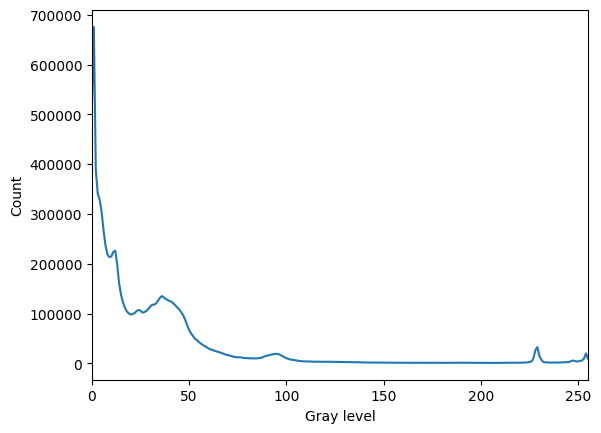

In [30]:
#Grayscale histogram
def gray_histogram(gray_img):
    hist = np.zeros(256, dtype=np.int64)

    rows, cols = gray_img.shape
    for i in range(rows):
        for j in range(cols):
            val = int(gray_img[i, j])
            hist[val] += 1

    return hist
hist = gray_histogram(gray_img)
plt.plot(hist)
plt.xlim([0, 255])
plt.xlabel("Gray level")
plt.ylabel("Count")
plt.show()

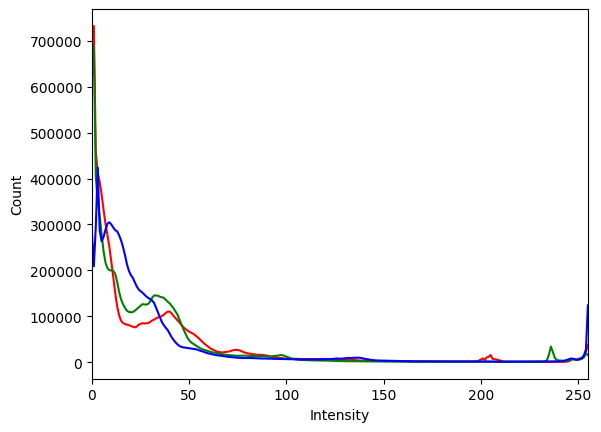

In [31]:
#RGB histogram
def rgb_histogram(img):
    histR = np.zeros(256, int)
    histG = np.zeros(256, int)
    histB = np.zeros(256, int)

    rows,cols,temp= img.shape
    for i in range(rows):
        for j in range(cols):
            r, g, b = img[i, j]
            histR[int(r)] += 1
            histG[int(g)] += 1
            histB[int(b)] += 1

    return histR, histG, histB

histR, histG, histB = rgb_histogram(img_ar)

plt.plot(histR, color='r')
plt.plot(histG, color='g')
plt.plot(histB, color='b')
plt.xlim([0, 255])
plt.xlabel("Intensity")
plt.ylabel("Count")
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

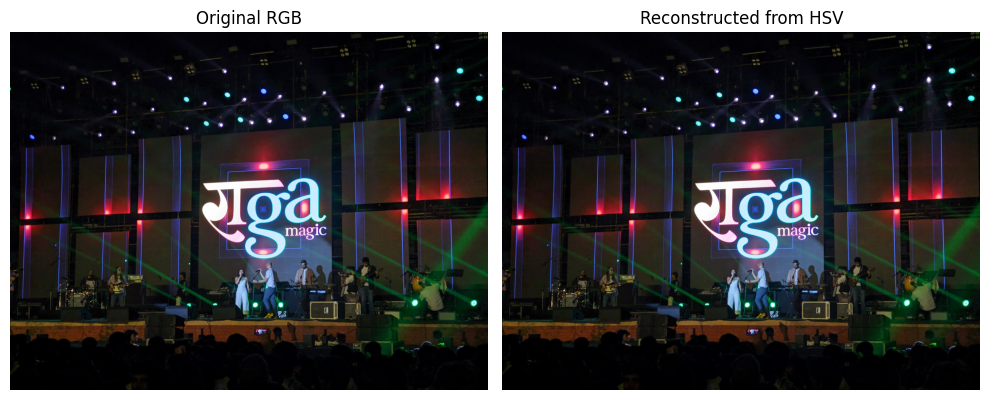

In [48]:
def rgb_to_hsv_float(rgb):
    rgb = rgb.astype(float)
    h, w, _ = rgb.shape
    rgb_flat = rgb.reshape(-1, 3)

    r, g, b = rgb_flat[:, 0], rgb_flat[:, 1], rgb_flat[:, 2]
    maxc = np.maximum(np.maximum(r, g), b)
    minc = np.minimum(np.minimum(r, g), b)
    v = maxc

    deltac = maxc - minc
    s = np.zeros_like(maxc)
    nz = maxc != 0
    s[nz] = deltac[nz] / maxc[nz]

    deltac_safe = deltac.copy()
    deltac_safe[deltac_safe == 0] = 1
    rc = (maxc - r) / deltac_safe
    gc = (maxc - g) / deltac_safe
    bc = (maxc - b) / deltac_safe

    h_flat = 4.0 + gc - rc
    h_flat[g == maxc] = 2.0 + rc[g == maxc] - bc[g == maxc]
    h_flat[r == maxc] = bc[r == maxc] - gc[r == maxc]
    h_flat[minc == maxc] = 0.0

    h_flat = (h_flat / 6.0) % 1.0
    hsv_flat = np.stack([h_flat, s, v], axis=1)
    hsv = hsv_flat.reshape(h, w, 3)
    return hsv

hsv_float = rgb_to_hsv_float(img_ar)


H = (hsv_float[:, :, 0] * 179).astype(np.uint8)
S = (hsv_float[:, :, 1] * 255).astype(np.uint8)
V = hsv_float[:, :, 2].astype(np.uint8)

hsv_cv = np.dstack([H, S, V])

rgb_back = cv2.cvtColor(hsv_cv, cv2.COLOR_HSV2RGB)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rgb_back)
plt.title("Reconstructed from HSV")
plt.axis("off")

plt.tight_layout()
plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(3647.5), np.float64(2735.5), np.float64(-0.5))

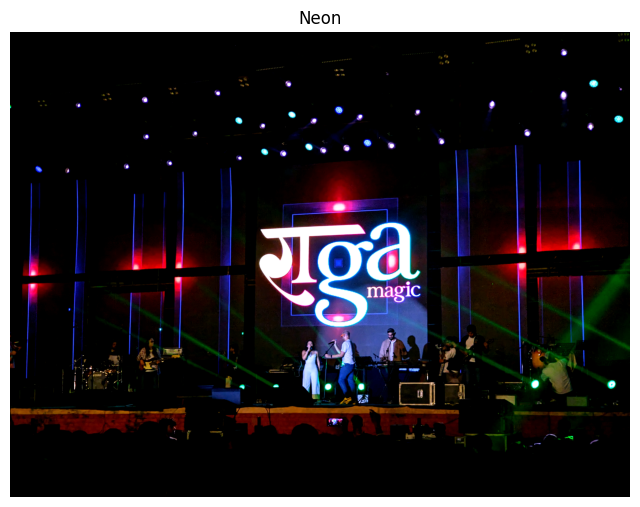

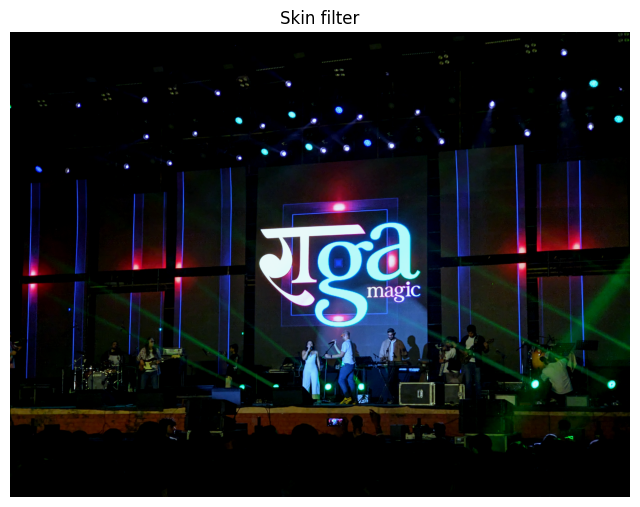

In [39]:
#Filter 1 :- Neon Stage Filter (for  colored lights)
def neon_stage(img_rgb):
    x = img_rgb.astype(np.float32) / 255.0
    # increase contrast
    x = (x - 0.5) * 1.4 + 0.5
    # boost magenta / blue (good to make colors pop)
    x[:, :, 2] *= 1.2   # R
    x[:, :, 0] *= 1.2   # B

    x = np.clip(x, 0, 1)
    return (x * 255).astype(np.uint8)

#Filter 2 :- Skin Saver Filter (for fixing blue/purple skin) although this does not work for my exact photo as i did not want to choose a photo with people in it, it is still a great filter
def skin_saver(img_rgb):
    x = img_rgb.astype(np.float32) / 255.0

    # warm up overall (fix blue/purple cast)
    x[:, :, 2] *= 1.15   # R up
    x[:, :, 0] *= 0.85   # B down

    # more contrast, slightly lower highlights
    x = (x - 0.5) * 1.2 + 0.5
    x = np.minimum(x, 0.98)

    x = np.clip(x, 0, 1)
    return (x * 255).astype(np.uint8)

neon = neon_stage(img_ar)
skin = skin_saver(img_ar)

plt.figure(figsize=(8,8))
plt.title("Neon")
plt.imshow(neon)
plt.axis("off")


plt.figure(figsize=(8,8))
plt.title("Skin filter")
plt.imshow(skin)
plt.axis("off")


## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(3647.5), np.float64(2735.5), np.float64(-0.5))

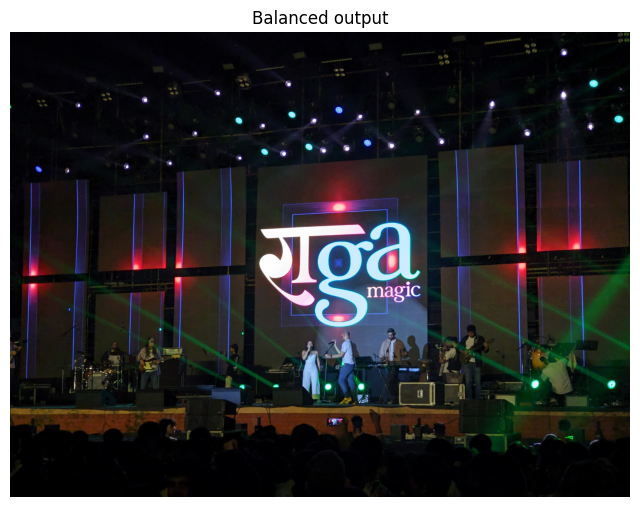

In [41]:

def white_patch_balance(img_rgb):
    img = img_rgb.astype(np.float32)

    max_val = img.max()

    if max_val == 0:
        return img_rgb.copy()

    scale = 255.0 / max_val

    img_balanced = img * scale
    img_balanced = np.clip(img_balanced, 0, 255).astype(np.uint8)

    return img_balanced

bal = white_patch_balance(img_ar)
plt.figure(figsize=(8,8))
plt.title("Balanced output")
plt.imshow(bal)
plt.axis("off")

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.